In [45]:
# work in progress AR shapes and rasters

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import requests, xarray, pandas, math, datetime, copy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime, timedelta
from argovisHelpers import helpers as avh
from shapely.geometry import Point, Polygon

def ISODate(x):
    return x

def remap(AR):
    # move an AR from longitudes [-180, 180] to [0, 360]
    ar = copy.deepcopy(AR)
    for j, loop in enumerate(AR['geolocation']['coordinates']):
        for k, poly in enumerate(loop):
            for v, vertex in enumerate(poly):
                if vertex[0] < 0:
                    ar['geolocation']['coordinates'][j][k][v][0] += 360
    for i in range(len(AR['raster'])):
        if AR['raster'][i][0] < 0:
            ar['raster'][i][0] += 360
    return ar

def north_pole_plot(AR, minlat=60):
    crs0 = ccrs.PlateCarree(central_longitude=0)
    crsOrtho = ccrs.Orthographic(central_longitude=0,central_latitude=90)

    ax1 = plt.subplot(1, 1, 1, projection=crsOrtho)
    ax1.scatter([-180,-90,0,90],[minlat,minlat,minlat,minlat], s=0, color='r', transform=crs0)
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(cfeature.LAND)

    shapes = []
    for blob in AR['geolocation']['coordinates']:
        for loop in blob:
            points = []
            for vertex in loop:
                px, py = crsOrtho.transform_point(vertex[0], vertex[1], crs0)
                points.append( [px, py] )
            shapes.append(Polygon(points))
    ax1.add_geometries(shapes, crs=crsOrtho, fc='none', ec="red")

    x = []
    y = []
    for r in AR['raster']:
        px, py = crsOrtho.transform_point(r[0], r[1], crs0)
        x.append(px)
        y.append(py)
    plt.scatter(x, y, transform=crsOrtho, s=1)
    
def genplot(AR):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(cutoff=-60))
    gl = ax.gridlines(draw_labels=True,color='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    for blob in AR['geolocation']['coordinates']:
        for loop in blob:
            plt.plot([x[0] for x in loop],[x[1] for x in loop],'-k', linewidth=1, color='red',transform=ccrs.PlateCarree())
    for r in AR['raster']:
        plt.plot(r[0], r[1], 'bo', markersize=1, transform=ccrs.PlateCarree(central_longitude=0)) 

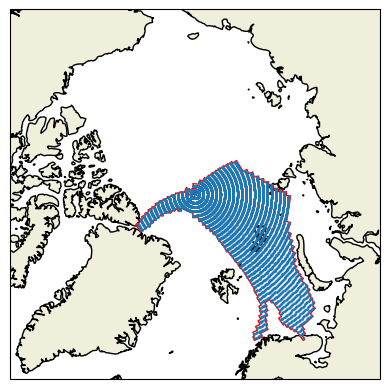

In [48]:
# north pole, all longitudes, partial hole at pole
AR = { "_id" : "2000.07.021.09.0_25", "timestamp" : ISODate("2000-07-21T09:00:00Z"), "raster" : [ [ 36.875, 68.5, [ 250.2693328857422 ] ], [ 36.875, 69, [ 261.7423095703125 ] ], [ 37.5, 69, [ 265.3959655761719 ] ], [ 38.125, 69, [ 252.53233337402344 ] ], [ 36.875, 69.5, [ 261.25146484375 ] ], [ 37.5, 69.5, [ 279.4361877441406 ] ], [ 38.125, 69.5, [ 290.5284118652344 ] ], [ 38.75, 69.5, [ 272.93011474609375 ] ], [ 36.25, 70, [ 252.90208435058594 ] ], [ 36.875, 70, [ 276.3045959472656 ] ], [ 37.5, 70, [ 301.057373046875 ] ], [ 38.125, 70, [ 311.06573486328125 ] ], [ 38.75, 70, [ 308.2490234375 ] ], [ 39.375, 70, [ 295.0455017089844 ] ], [ 40, 70, [ 276.2925720214844 ] ], [ 40.625, 70, [ 259.9015197753906 ] ], [ 41.25, 70, [ 252.52972412109375 ] ], [ 41.875, 70, [ 252.25584411621094 ] ], [ 42.5, 70, [ 255.37501525878906 ] ], [ 43.125, 70, [ 255.9467010498047 ] ], [ 43.75, 70, [ 250.19012451171875 ] ], [ 35.625, 70.5, [ 252.85105895996094 ] ], [ 36.25, 70.5, [ 270.1895446777344 ] ], [ 36.875, 70.5, [ 291.91748046875 ] ], [ 37.5, 70.5, [ 314.74896240234375 ] ], [ 38.125, 70.5, [ 333.9007873535156 ] ], [ 38.75, 70.5, [ 345.70458984375 ] ], [ 39.375, 70.5, [ 349.1762390136719 ] ], [ 40, 70.5, [ 332.89300537109375 ] ], [ 40.625, 70.5, [ 315.6150817871094 ] ], [ 41.25, 70.5, [ 302.81671142578125 ] ], [ 41.875, 70.5, [ 295.3702392578125 ] ], [ 42.5, 70.5, [ 296.4536437988281 ] ], [ 43.125, 70.5, [ 296.48004150390625 ] ], [ 43.75, 70.5, [ 294.1368408203125 ] ], [ 44.375, 70.5, [ 287.427978515625 ] ], [ 45, 70.5, [ 280.4183654785156 ] ], [ 45.625, 70.5, [ 273.7734069824219 ] ], [ 46.25, 70.5, [ 259.562255859375 ] ], [ 35, 71, [ 258.1738586425781 ] ], [ 35.625, 71, [ 269.4723205566406 ] ], [ 36.25, 71, [ 284.49774169921875 ] ], [ 36.875, 71, [ 308.6053161621094 ] ], [ 37.5, 71, [ 336.27789306640625 ] ], [ 38.125, 71, [ 366.8077087402344 ] ], [ 38.75, 71, [ 390.6474304199219 ] ], [ 39.375, 71, [ 389.18499755859375 ] ], [ 40, 71, [ 379.7528381347656 ] ], [ 40.625, 71, [ 364.871826171875 ] ], [ 41.25, 71, [ 351.9626770019531 ] ], [ 41.875, 71, [ 346.4531555175781 ] ], [ 42.5, 71, [ 344.485595703125 ] ], [ 43.125, 71, [ 342.5213623046875 ] ], [ 43.75, 71, [ 339.9207763671875 ] ], [ 44.375, 71, [ 335.6188049316406 ] ], [ 45, 71, [ 326.68682861328125 ] ], [ 45.625, 71, [ 316.33197021484375 ] ], [ 46.25, 71, [ 305.4630432128906 ] ], [ 46.875, 71, [ 286.87652587890625 ] ], [ 47.5, 71, [ 255.7364959716797 ] ], [ 22.5, 71.5, [ 254.19976806640625 ] ], [ 23.125, 71.5, [ 253.4071044921875 ] ], [ 23.75, 71.5, [ 252.25973510742188 ] ], [ 24.375, 71.5, [ 251.76467895507812 ] ], [ 25, 71.5, [ 250.21707153320312 ] ], [ 34.375, 71.5, [ 256.294677734375 ] ], [ 35, 71.5, [ 266.9479064941406 ] ], [ 35.625, 71.5, [ 279.53472900390625 ] ], [ 36.25, 71.5, [ 295.8598327636719 ] ], [ 36.875, 71.5, [ 319.06402587890625 ] ], [ 37.5, 71.5, [ 353.3262023925781 ] ], [ 38.125, 71.5, [ 392.1383972167969 ] ], [ 38.75, 71.5, [ 416.9706726074219 ] ], [ 39.375, 71.5, [ 427.3460693359375 ] ], [ 40, 71.5, [ 424.1496276855469 ] ], [ 40.625, 71.5, [ 413.815185546875 ] ], [ 41.25, 71.5, [ 399.6349792480469 ] ], [ 41.875, 71.5, [ 392.4083251953125 ] ], [ 42.5, 71.5, [ 388.2279357910156 ] ], [ 43.125, 71.5, [ 387.2010192871094 ] ], [ 43.75, 71.5, [ 384.6226806640625 ] ], [ 44.375, 71.5, [ 377.5011291503906 ] ], [ 45, 71.5, [ 370.69256591796875 ] ], [ 45.625, 71.5, [ 362.6757507324219 ] ], [ 46.25, 71.5, [ 349.4815368652344 ] ], [ 46.875, 71.5, [ 331.16680908203125 ] ], [ 47.5, 71.5, [ 306.1814270019531 ] ], [ 48.125, 71.5, [ 267.6463623046875 ] ], [ 23.125, 72, [ 250.50662231445312 ] ], [ 23.75, 72, [ 264.1061096191406 ] ], [ 24.375, 72, [ 265.0043640136719 ] ], [ 25, 72, [ 266.07940673828125 ] ], [ 25.625, 72, [ 268.7893371582031 ] ], [ 26.25, 72, [ 266.21014404296875 ] ], [ 26.875, 72, [ 262.8652648925781 ] ], [ 27.5, 72, [ 259.0147399902344 ] ], [ 28.125, 72, [ 252.5567626953125 ] ], [ 34.375, 72, [ 250.8123016357422 ] ], [ 35, 72, [ 263.09259033203125 ] ], [ 35.625, 72, [ 277.6042175292969 ] ], [ 36.25, 72, [ 298.8236389160156 ] ], [ 36.875, 72, [ 327.18780517578125 ] ], [ 37.5, 72, [ 363.04449462890625 ] ], [ 38.125, 72, [ 399.54254150390625 ] ], [ 38.75, 72, [ 431.6838073730469 ] ], [ 39.375, 72, [ 458.24542236328125 ] ], [ 40, 72, [ 474.6012878417969 ] ], [ 40.625, 72, [ 457.9112854003906 ] ], [ 41.25, 72, [ 442.4690246582031 ] ], [ 41.875, 72, [ 430.277587890625 ] ], [ 42.5, 72, [ 421.58172607421875 ] ], [ 43.125, 72, [ 417.3013000488281 ] ], [ 43.75, 72, [ 414.56292724609375 ] ], [ 44.375, 72, [ 411.4020690917969 ] ], [ 45, 72, [ 405.63800048828125 ] ], [ 45.625, 72, [ 400.83905029296875 ] ], [ 46.25, 72, [ 392.86907958984375 ] ], [ 46.875, 72, [ 371.7344055175781 ] ], [ 47.5, 72, [ 344.86688232421875 ] ], [ 48.125, 72, [ 314.6897888183594 ] ], [ 48.75, 72, [ 279.405029296875 ] ], [ 25, 72.5, [ 258.1369323730469 ] ], [ 25.625, 72.5, [ 262.0567626953125 ] ], [ 26.25, 72.5, [ 267.9448547363281 ] ], [ 26.875, 72.5, [ 275.9990539550781 ] ], [ 27.5, 72.5, [ 273.7895812988281 ] ], [ 28.125, 72.5, [ 267.33428955078125 ] ], [ 28.75, 72.5, [ 258.0166320800781 ] ], [ 35.625, 72.5, [ 264.77178955078125 ] ], [ 36.25, 72.5, [ 286.2655334472656 ] ], [ 36.875, 72.5, [ 316.7339172363281 ] ], [ 37.5, 72.5, [ 355.3434143066406 ] ], [ 38.125, 72.5, [ 399.7594909667969 ] ], [ 38.75, 72.5, [ 441.1670227050781 ] ], [ 39.375, 72.5, [ 471.8372802734375 ] ], [ 40, 72.5, [ 477.1720886230469 ] ], [ 40.625, 72.5, [ 476.6336975097656 ] ], [ 41.25, 72.5, [ 465.31646728515625 ] ], [ 41.875, 72.5, [ 451.9900817871094 ] ], [ 42.5, 72.5, [ 440.37811279296875 ] ], [ 43.125, 72.5, [ 433.83636474609375 ] ], [ 43.75, 72.5, [ 429.1762390136719 ] ], [ 44.375, 72.5, [ 426.1539611816406 ] ], [ 45, 72.5, [ 424.7724609375 ] ], [ 45.625, 72.5, [ 420.5530700683594 ] ], [ 46.25, 72.5, [ 411.9862976074219 ] ], [ 46.875, 72.5, [ 401.44793701171875 ] ], [ 47.5, 72.5, [ 386.4031677246094 ] ], [ 48.125, 72.5, [ 359.45111083984375 ] ], [ 48.75, 72.5, [ 327.660400390625 ] ], [ 49.375, 72.5, [ 290.4105529785156 ] ], [ 50, 72.5, [ 250.26177978515625 ] ], [ 26.875, 73, [ 254.71713256835938 ] ], [ 27.5, 73, [ 264.7569274902344 ] ], [ 28.125, 73, [ 275.4870910644531 ] ], [ 28.75, 73, [ 272.52105712890625 ] ], [ 29.375, 73, [ 259.5724792480469 ] ], [ 36.25, 73, [ 269.13922119140625 ] ], [ 36.875, 73, [ 299.7001953125 ] ], [ 37.5, 73, [ 339.37451171875 ] ], [ 38.125, 73, [ 383.69091796875 ] ], [ 38.75, 73, [ 429.2387390136719 ] ], [ 39.375, 73, [ 461.437744140625 ] ], [ 40, 73, [ 476.05145263671875 ] ], [ 40.625, 73, [ 483.3666687011719 ] ], [ 41.25, 73, [ 483.3106994628906 ] ], [ 41.875, 73, [ 471.8561706542969 ] ], [ 42.5, 73, [ 456.3005065917969 ] ], [ 43.125, 73, [ 443.1422119140625 ] ], [ 43.75, 73, [ 432.4337463378906 ] ], [ 44.375, 73, [ 423.4244689941406 ] ], [ 45, 73, [ 418.8832702636719 ] ], [ 45.625, 73, [ 416.8894348144531 ] ], [ 46.25, 73, [ 415.95458984375 ] ], [ 46.875, 73, [ 412.1622314453125 ] ], [ 47.5, 73, [ 406.03173828125 ] ], [ 48.125, 73, [ 393.96844482421875 ] ], [ 48.75, 73, [ 363.05718994140625 ] ], [ 49.375, 73, [ 326.215576171875 ] ], [ 50, 73, [ 289.15228271484375 ] ], [ 50.625, 73, [ 251.703369140625 ] ], [ 28.125, 73.5, [ 252.55552673339844 ] ], [ 28.75, 73.5, [ 262.3235168457031 ] ], [ 29.375, 73.5, [ 271.045654296875 ] ], [ 30, 73.5, [ 271.13037109375 ] ], [ 30.625, 73.5, [ 253.9539794921875 ] ], [ 36.25, 73.5, [ 261.07379150390625 ] ], [ 36.875, 73.5, [ 290.4974060058594 ] ], [ 37.5, 73.5, [ 325.1695861816406 ] ], [ 38.125, 73.5, [ 364.0113830566406 ] ], [ 38.75, 73.5, [ 403.1712341308594 ] ], [ 39.375, 73.5, [ 441.046630859375 ] ], [ 40, 73.5, [ 477.3296813964844 ] ], [ 40.625, 73.5, [ 499.1824951171875 ] ], [ 41.25, 73.5, [ 493.5028076171875 ] ], [ 41.875, 73.5, [ 482.4594421386719 ] ], [ 42.5, 73.5, [ 469.5752868652344 ] ], [ 43.125, 73.5, [ 452.03863525390625 ] ], [ 43.75, 73.5, [ 434.60394287109375 ] ], [ 44.375, 73.5, [ 422.39794921875 ] ], [ 45, 73.5, [ 413.6299743652344 ] ], [ 45.625, 73.5, [ 409.7416076660156 ] ], [ 46.25, 73.5, [ 407.89703369140625 ] ], [ 46.875, 73.5, [ 407.9188537597656 ] ], [ 47.5, 73.5, [ 404.6287536621094 ] ], [ 48.125, 73.5, [ 391.2455749511719 ] ], [ 48.75, 73.5, [ 373.9075622558594 ] ], [ 49.375, 73.5, [ 352.9748229980469 ] ], [ 50, 73.5, [ 321.6094055175781 ] ], [ 50.625, 73.5, [ 286.70269775390625 ] ], [ 29.375, 74, [ 258.99658203125 ] ], [ 30, 74, [ 263.9740905761719 ] ], [ 30.625, 74, [ 265.814453125 ] ], [ 31.25, 74, [ 263.5348815917969 ] ], [ 31.875, 74, [ 250.05709838867188 ] ], [ 36.25, 74, [ 258.39642333984375 ] ], [ 36.875, 74, [ 279.9187927246094 ] ], [ 37.5, 74, [ 312.19049072265625 ] ], [ 38.125, 74, [ 347.6276550292969 ] ], [ 38.75, 74, [ 383.3904724121094 ] ], [ 39.375, 74, [ 412.9389953613281 ] ], [ 40, 74, [ 439.5058898925781 ] ], [ 40.625, 74, [ 457.6044006347656 ] ], [ 41.25, 74, [ 470.0859680175781 ] ], [ 41.875, 74, [ 471.0098571777344 ] ], [ 42.5, 74, [ 468.5429382324219 ] ], [ 43.125, 74, [ 462.0624694824219 ] ], [ 43.75, 74, [ 444.293212890625 ] ], [ 44.375, 74, [ 427.529541015625 ] ], [ 45, 74, [ 413.67547607421875 ] ], [ 45.625, 74, [ 402.4826354980469 ] ], [ 46.25, 74, [ 395.22174072265625 ] ], [ 46.875, 74, [ 393.6143493652344 ] ], [ 47.5, 74, [ 391.9648742675781 ] ], [ 48.125, 74, [ 388.44683837890625 ] ], [ 48.75, 74, [ 379.80804443359375 ] ], [ 49.375, 74, [ 365.9181213378906 ] ], [ 50, 74, [ 348.4690856933594 ] ], [ 50.625, 74, [ 323.8948974609375 ] ], [ 51.25, 74, [ 286.3499450683594 ] ], [ 51.875, 74, [ 251.33140563964844 ] ], [ 30, 74.5, [ 258.0082702636719 ] ], [ 30.625, 74.5, [ 278.6760559082031 ] ], [ 31.25, 74.5, [ 275.3379211425781 ] ], [ 31.875, 74.5, [ 268.2381591796875 ] ], [ 32.5, 74.5, [ 257.91900634765625 ] ], [ 35.625, 74.5, [ 256.04974365234375 ] ], [ 36.25, 74.5, [ 272.47161865234375 ] ], [ 36.875, 74.5, [ 293.91253662109375 ] ], [ 37.5, 74.5, [ 314.9645690917969 ] ], [ 38.125, 74.5, [ 336.3389587402344 ] ], [ 38.75, 74.5, [ 357.9046936035156 ] ], [ 39.375, 74.5, [ 382.97747802734375 ] ], [ 40, 74.5, [ 403.9286804199219 ] ], [ 40.625, 74.5, [ 419.9642028808594 ] ], [ 41.25, 74.5, [ 433.4004211425781 ] ], [ 41.875, 74.5, [ 444.1999206542969 ] ], [ 42.5, 74.5, [ 447.0340881347656 ] ], [ 43.125, 74.5, [ 440.4518127441406 ] ], [ 43.75, 74.5, [ 431.8727111816406 ] ], [ 44.375, 74.5, [ 421.4345703125 ] ], [ 45, 74.5, [ 411.10333251953125 ] ], [ 45.625, 74.5, [ 403.06585693359375 ] ], [ 46.25, 74.5, [ 396.66436767578125 ] ], [ 46.875, 74.5, [ 391.94610595703125 ] ], [ 47.5, 74.5, [ 390.0754699707031 ] ], [ 48.125, 74.5, [ 388.8108215332031 ] ], [ 48.75, 74.5, [ 386.5053405761719 ] ], [ 49.375, 74.5, [ 383.03472900390625 ] ], [ 50, 74.5, [ 366.9497375488281 ] ], [ 50.625, 74.5, [ 343.7762451171875 ] ], [ 51.25, 74.5, [ 318.2244567871094 ] ], [ 51.875, 74.5, [ 290.475830078125 ] ], [ 52.5, 74.5, [ 258.8951416015625 ] ], [ 31.25, 75, [ 272.9892272949219 ] ], [ 31.875, 75, [ 295.92681884765625 ] ], [ 32.5, 75, [ 296.5616760253906 ] ], [ 33.125, 75, [ 283.78765869140625 ] ], [ 33.75, 75, [ 272.2174377441406 ] ], [ 34.375, 75, [ 261.868408203125 ] ], [ 35, 75, [ 253.5438690185547 ] ], [ 35.625, 75, [ 267.3979797363281 ] ], [ 36.25, 75, [ 284.51416015625 ] ], [ 36.875, 75, [ 303.0478210449219 ] ], [ 37.5, 75, [ 323.10595703125 ] ], [ 38.125, 75, [ 342.6362609863281 ] ], [ 38.75, 75, [ 357.8731689453125 ] ], [ 39.375, 75, [ 371.9486999511719 ] ], [ 40, 75, [ 384.8658142089844 ] ], [ 40.625, 75, [ 396.4565124511719 ] ], [ 41.25, 75, [ 402.2664794921875 ] ], [ 41.875, 75, [ 409.3658142089844 ] ], [ 42.5, 75, [ 415.2811279296875 ] ], [ 43.125, 75, [ 419.1928405761719 ] ], [ 43.75, 75, [ 419.0146179199219 ] ], [ 44.375, 75, [ 416.6238708496094 ] ], [ 45, 75, [ 412.24908447265625 ] ], [ 45.625, 75, [ 403.3591613769531 ] ], [ 46.25, 75, [ 397.6728515625 ] ], [ 46.875, 75, [ 394.94256591796875 ] ], [ 47.5, 75, [ 393.9057312011719 ] ], [ 48.125, 75, [ 394.4666748046875 ] ], [ 48.75, 75, [ 395.8189392089844 ] ], [ 49.375, 75, [ 391.81756591796875 ] ], [ 50, 75, [ 384.2093200683594 ] ], [ 50.625, 75, [ 373.6061096191406 ] ], [ 51.25, 75, [ 351.7074890136719 ] ], [ 51.875, 75, [ 325.559814453125 ] ], [ 52.5, 75, [ 297.729736328125 ] ], [ 53.125, 75, [ 268.7913818359375 ] ], [ 31.25, 75.5, [ 266.7099609375 ] ], [ 31.875, 75.5, [ 286.0609130859375 ] ], [ 32.5, 75.5, [ 299.29296875 ] ], [ 33.125, 75.5, [ 304.8648986816406 ] ], [ 33.75, 75.5, [ 304.171142578125 ] ], [ 34.375, 75.5, [ 298.7660827636719 ] ], [ 35, 75.5, [ 295.088134765625 ] ], [ 35.625, 75.5, [ 295.3671569824219 ] ], [ 36.25, 75.5, [ 301.1456298828125 ] ], [ 36.875, 75.5, [ 311.912109375 ] ], [ 37.5, 75.5, [ 327.921142578125 ] ], [ 38.125, 75.5, [ 345.4648132324219 ] ], [ 38.75, 75.5, [ 361.6375427246094 ] ], [ 39.375, 75.5, [ 371.9971008300781 ] ], [ 40, 75.5, [ 379.5292663574219 ] ], [ 40.625, 75.5, [ 385.72149658203125 ] ], [ 41.25, 75.5, [ 391.9222717285156 ] ], [ 41.875, 75.5, [ 396.8193359375 ] ], [ 42.5, 75.5, [ 399.1033020019531 ] ], [ 43.125, 75.5, [ 400.7671813964844 ] ], [ 43.75, 75.5, [ 401.7908020019531 ] ], [ 44.375, 75.5, [ 401.829833984375 ] ], [ 45, 75.5, [ 397.3016662597656 ] ], [ 45.625, 75.5, [ 393.19500732421875 ] ], [ 46.25, 75.5, [ 389.9002685546875 ] ], [ 46.875, 75.5, [ 387.443359375 ] ], [ 47.5, 75.5, [ 391.15081787109375 ] ], [ 48.125, 75.5, [ 397.3701477050781 ] ], [ 48.75, 75.5, [ 401.0638732910156 ] ], [ 49.375, 75.5, [ 403.6658630371094 ] ], [ 50, 75.5, [ 401.3122863769531 ] ], [ 50.625, 75.5, [ 394.16253662109375 ] ], [ 51.25, 75.5, [ 384.1392517089844 ] ], [ 51.875, 75.5, [ 371.5624084472656 ] ], [ 52.5, 75.5, [ 347.9906311035156 ] ], [ 53.125, 75.5, [ 316.9878845214844 ] ], [ 53.75, 75.5, [ 288.31195068359375 ] ], [ 54.375, 75.5, [ 261.7377624511719 ] ], [ 31.875, 76, [ 268.8399963378906 ] ], [ 32.5, 76, [ 308.38177490234375 ] ], [ 33.125, 76, [ 338.63800048828125 ] ], [ 33.75, 76, [ 338.1468200683594 ] ], [ 34.375, 76, [ 330.47540283203125 ] ], [ 35, 76, [ 322.6556396484375 ] ], [ 35.625, 76, [ 315.3915100097656 ] ], [ 36.25, 76, [ 310.4884033203125 ] ], [ 36.875, 76, [ 320.6452331542969 ] ], [ 37.5, 76, [ 334.5715026855469 ] ], [ 38.125, 76, [ 348.8098449707031 ] ], [ 38.75, 76, [ 362.99420166015625 ] ], [ 39.375, 76, [ 377.149658203125 ] ], [ 40, 76, [ 386.7163391113281 ] ], [ 40.625, 76, [ 389.1388854980469 ] ], [ 41.25, 76, [ 391.0258483886719 ] ], [ 41.875, 76, [ 392.4510192871094 ] ], [ 42.5, 76, [ 393.4986267089844 ] ], [ 43.125, 76, [ 392.70635986328125 ] ], [ 43.75, 76, [ 390.7187805175781 ] ], [ 44.375, 76, [ 387.97100830078125 ] ], [ 45, 76, [ 384.33837890625 ] ], [ 45.625, 76, [ 379.8887023925781 ] ], [ 46.25, 76, [ 377.9137268066406 ] ], [ 46.875, 76, [ 377.7979736328125 ] ], [ 47.5, 76, [ 380.5400695800781 ] ], [ 48.125, 76, [ 385.5896911621094 ] ], [ 48.75, 76, [ 395.047607421875 ] ], [ 49.375, 76, [ 404.442626953125 ] ], [ 50, 76, [ 411.7308044433594 ] ], [ 50.625, 76, [ 416.8798522949219 ] ], [ 51.25, 76, [ 414.5428161621094 ] ], [ 51.875, 76, [ 401.6619873046875 ] ], [ 52.5, 76, [ 382.5666198730469 ] ], [ 53.125, 76, [ 361.32525634765625 ] ], [ 53.75, 76, [ 337.7645568847656 ] ], [ 54.375, 76, [ 314.7334899902344 ] ], [ 55, 76, [ 293.760498046875 ] ], [ 55.625, 76, [ 274.7247314453125 ] ], [ 56.25, 76, [ 261.0350341796875 ] ], [ 56.875, 76, [ 251.97384643554688 ] ], [ 31.875, 76.5, [ 250.3902130126953 ] ], [ 32.5, 76.5, [ 283.4429931640625 ] ], [ 33.125, 76.5, [ 311.42413330078125 ] ], [ 33.75, 76.5, [ 333.5578918457031 ] ], [ 34.375, 76.5, [ 349.3363342285156 ] ], [ 35, 76.5, [ 357.8295593261719 ] ], [ 35.625, 76.5, [ 351.42303466796875 ] ], [ 36.25, 76.5, [ 346.2077331542969 ] ], [ 36.875, 76.5, [ 343.94317626953125 ] ], [ 37.5, 76.5, [ 344.6391296386719 ] ], [ 38.125, 76.5, [ 348.22821044921875 ] ], [ 38.75, 76.5, [ 356.673095703125 ] ], [ 39.375, 76.5, [ 368.463134765625 ] ], [ 40, 76.5, [ 378.578125 ] ], [ 40.625, 76.5, [ 387.0413818359375 ] ], [ 41.25, 76.5, [ 393.4523620605469 ] ], [ 41.875, 76.5, [ 395.9494323730469 ] ], [ 42.5, 76.5, [ 396.37158203125 ] ], [ 43.125, 76.5, [ 394.6660461425781 ] ], [ 43.75, 76.5, [ 392.3709716796875 ] ], [ 44.375, 76.5, [ 387.8411865234375 ] ], [ 45, 76.5, [ 380.84527587890625 ] ], [ 45.625, 76.5, [ 373.77410888671875 ] ], [ 46.25, 76.5, [ 366.7674560546875 ] ], [ 46.875, 76.5, [ 364.17559814453125 ] ], [ 47.5, 76.5, [ 370.4576416015625 ] ], [ 48.125, 76.5, [ 379.6114807128906 ] ], [ 48.75, 76.5, [ 390.54852294921875 ] ], [ 49.375, 76.5, [ 403.1267395019531 ] ], [ 50, 76.5, [ 416.58447265625 ] ], [ 50.625, 76.5, [ 428.1432189941406 ] ], [ 51.25, 76.5, [ 431.4757995605469 ] ], [ 51.875, 76.5, [ 429.9469909667969 ] ], [ 52.5, 76.5, [ 421.91217041015625 ] ], [ 53.125, 76.5, [ 402.6388854980469 ] ], [ 53.75, 76.5, [ 382.4185485839844 ] ], [ 54.375, 76.5, [ 361.32904052734375 ] ], [ 55, 76.5, [ 340.0577392578125 ] ], [ 55.625, 76.5, [ 324.27227783203125 ] ], [ 56.25, 76.5, [ 310.1602783203125 ] ], [ 56.875, 76.5, [ 297.8115539550781 ] ], [ 57.5, 76.5, [ 286.8660583496094 ] ], [ 58.125, 76.5, [ 277.6537780761719 ] ], [ 58.75, 76.5, [ 268.0579528808594 ] ], [ 59.375, 76.5, [ 258.10107421875 ] ], [ 32.5, 77, [ 274.99835205078125 ] ], [ 33.125, 77, [ 310.34051513671875 ] ], [ 33.75, 77, [ 344.2817687988281 ] ], [ 34.375, 77, [ 361.99072265625 ] ], [ 35, 77, [ 368.19970703125 ] ], [ 35.625, 77, [ 369.8180847167969 ] ], [ 36.25, 77, [ 365.9155578613281 ] ], [ 36.875, 77, [ 358.49224853515625 ] ], [ 37.5, 77, [ 351.6690673828125 ] ], [ 38.125, 77, [ 355.06964111328125 ] ], [ 38.75, 77, [ 360.66802978515625 ] ], [ 39.375, 77, [ 368.4150085449219 ] ], [ 40, 77, [ 376.2784118652344 ] ], [ 40.625, 77, [ 383.9884338378906 ] ], [ 41.25, 77, [ 391.1780700683594 ] ], [ 41.875, 77, [ 394.5224914550781 ] ], [ 42.5, 77, [ 396.7349853515625 ] ], [ 43.125, 77, [ 393.96014404296875 ] ], [ 43.75, 77, [ 390.38519287109375 ] ], [ 44.375, 77, [ 385.86773681640625 ] ], [ 45, 77, [ 380.4706726074219 ] ], [ 45.625, 77, [ 374.46990966796875 ] ], [ 46.25, 77, [ 370.3086853027344 ] ], [ 46.875, 77, [ 368.0196228027344 ] ], [ 47.5, 77, [ 367.688720703125 ] ], [ 48.125, 77, [ 369.54595947265625 ] ], [ 48.75, 77, [ 379.9976501464844 ] ], [ 49.375, 77, [ 395.7168273925781 ] ], [ 50, 77, [ 412.8037109375 ] ], [ 50.625, 77, [ 428.3723449707031 ] ], [ 51.25, 77, [ 440.280517578125 ] ], [ 51.875, 77, [ 440.9421081542969 ] ], [ 52.5, 77, [ 438.2515869140625 ] ], [ 53.125, 77, [ 432.39044189453125 ] ], [ 53.75, 77, [ 423.66802978515625 ] ], [ 54.375, 77, [ 407.9259033203125 ] ], [ 55, 77, [ 390.7362365722656 ] ], [ 55.625, 77, [ 371.8069763183594 ] ], [ 56.25, 77, [ 353.84600830078125 ] ], [ 56.875, 77, [ 340.6002502441406 ] ], [ 57.5, 77, [ 330.5822448730469 ] ], [ 58.125, 77, [ 321.22406005859375 ] ], [ 58.75, 77, [ 312.4241943359375 ] ], [ 59.375, 77, [ 302.8056945800781 ] ], [ 60, 77, [ 290.8721618652344 ] ], [ 60.625, 77, [ 278.24786376953125 ] ], [ 61.25, 77, [ 265.04736328125 ] ], [ 61.875, 77, [ 250.90977478027344 ] ], [ 32.5, 77.5, [ 261.180419921875 ] ], [ 33.125, 77.5, [ 293.0785827636719 ] ], [ 33.75, 77.5, [ 324.5296325683594 ] ], [ 34.375, 77.5, [ 347.6228942871094 ] ], [ 35, 77.5, [ 367.1831970214844 ] ], [ 35.625, 77.5, [ 382.8078918457031 ] ], [ 36.25, 77.5, [ 394.2503662109375 ] ], [ 36.875, 77.5, [ 388.8941650390625 ] ], [ 37.5, 77.5, [ 381.633544921875 ] ], [ 38.125, 77.5, [ 374.69134521484375 ] ], [ 38.75, 77.5, [ 369.5790710449219 ] ], [ 39.375, 77.5, [ 366.1519775390625 ] ], [ 40, 77.5, [ 364.4431457519531 ] ], [ 40.625, 77.5, [ 370.8934326171875 ] ], [ 41.25, 77.5, [ 376.78173828125 ] ], [ 41.875, 77.5, [ 381.5023498535156 ] ], [ 42.5, 77.5, [ 385.0531311035156 ] ], [ 43.125, 77.5, [ 387.513916015625 ] ], [ 43.75, 77.5, [ 388.8911437988281 ] ], [ 44.375, 77.5, [ 384.66693115234375 ] ], [ 45, 77.5, [ 378.0113525390625 ] ], [ 45.625, 77.5, [ 371.6901550292969 ] ], [ 46.25, 77.5, [ 365.8254089355469 ] ], [ 46.875, 77.5, [ 360.38470458984375 ] ], [ 47.5, 77.5, [ 363.9268798828125 ] ], [ 48.125, 77.5, [ 369.6316223144531 ] ], [ 48.75, 77.5, [ 377.6080627441406 ] ], [ 49.375, 77.5, [ 389.3722229003906 ] ], [ 50, 77.5, [ 403.8348083496094 ] ], [ 50.625, 77.5, [ 419.3641357421875 ] ], [ 51.25, 77.5, [ 433.2100830078125 ] ], [ 51.875, 77.5, [ 445.31597900390625 ] ], [ 52.5, 77.5, [ 455.6951904296875 ] ], [ 53.125, 77.5, [ 454.6380920410156 ] ], [ 53.75, 77.5, [ 447.2268981933594 ] ], [ 54.375, 77.5, [ 436.3169250488281 ] ], [ 55, 77.5, [ 421.3733215332031 ] ], [ 55.625, 77.5, [ 406.16546630859375 ] ], [ 56.25, 77.5, [ 391.83856201171875 ] ], [ 56.875, 77.5, [ 378.71539306640625 ] ], [ 57.5, 77.5, [ 366.8294982910156 ] ], [ 58.125, 77.5, [ 356.0732116699219 ] ], [ 58.75, 77.5, [ 349.0566101074219 ] ], [ 59.375, 77.5, [ 342.642578125 ] ], [ 60, 77.5, [ 336.36834716796875 ] ], [ 60.625, 77.5, [ 330.1739501953125 ] ], [ 61.25, 77.5, [ 320.15814208984375 ] ], [ 61.875, 77.5, [ 307.4902648925781 ] ], [ 62.5, 77.5, [ 294.7545166015625 ] ], [ 63.125, 77.5, [ 281.9191589355469 ] ], [ 63.75, 77.5, [ 269.240966796875 ] ], [ 64.375, 77.5, [ 257.472900390625 ] ], [ 32.5, 78, [ 263.3338623046875 ] ], [ 33.125, 78, [ 288.6161193847656 ] ], [ 33.75, 78, [ 313.7714538574219 ] ], [ 34.375, 78, [ 338.73309326171875 ] ], [ 35, 78, [ 362.7462158203125 ] ], [ 35.625, 78, [ 373.8819885253906 ] ], [ 36.25, 78, [ 381.43707275390625 ] ], [ 36.875, 78, [ 386.02581787109375 ] ], [ 37.5, 78, [ 387.7124938964844 ] ], [ 38.125, 78, [ 386.50421142578125 ] ], [ 38.75, 78, [ 382.76519775390625 ] ], [ 39.375, 78, [ 379.88934326171875 ] ], [ 40, 78, [ 378.3294982910156 ] ], [ 40.625, 78, [ 377.7276611328125 ] ], [ 41.25, 78, [ 378.023681640625 ] ], [ 41.875, 78, [ 379.2716064453125 ] ], [ 42.5, 78, [ 378.4964599609375 ] ], [ 43.125, 78, [ 376.9870300292969 ] ], [ 43.75, 78, [ 375.51348876953125 ] ], [ 44.375, 78, [ 373.0516052246094 ] ], [ 45, 78, [ 369.523681640625 ] ], [ 45.625, 78, [ 365.554443359375 ] ], [ 46.25, 78, [ 362.3587341308594 ] ], [ 46.875, 78, [ 359.9236145019531 ] ], [ 47.5, 78, [ 358.21917724609375 ] ], [ 48.125, 78, [ 358.6944274902344 ] ], [ 48.75, 78, [ 367.4396057128906 ] ], [ 49.375, 78, [ 380.9902648925781 ] ], [ 50, 78, [ 395.602783203125 ] ], [ 50.625, 78, [ 411.19677734375 ] ], [ 51.25, 78, [ 427.7133483886719 ] ], [ 51.875, 78, [ 439.1654052734375 ] ], [ 52.5, 78, [ 447.20941162109375 ] ], [ 53.125, 78, [ 453.4380798339844 ] ], [ 53.75, 78, [ 453.5711669921875 ] ], [ 54.375, 78, [ 450.732666015625 ] ], [ 55, 78, [ 437.7070007324219 ] ], [ 55.625, 78, [ 424.78326416015625 ] ], [ 56.25, 78, [ 411.87664794921875 ] ], [ 56.875, 78, [ 399.07568359375 ] ], [ 57.5, 78, [ 388.173583984375 ] ], [ 58.125, 78, [ 380.61737060546875 ] ], [ 58.75, 78, [ 374.2224426269531 ] ], [ 59.375, 78, [ 369.01959228515625 ] ], [ 60, 78, [ 364.44342041015625 ] ], [ 60.625, 78, [ 360.5079650878906 ] ], [ 61.25, 78, [ 355.9105224609375 ] ], [ 61.875, 78, [ 350.59649658203125 ] ], [ 62.5, 78, [ 344.5752258300781 ] ], [ 63.125, 78, [ 336.0193786621094 ] ], [ 63.75, 78, [ 325.570556640625 ] ], [ 64.375, 78, [ 314.97113037109375 ] ], [ 65, 78, [ 304.33612060546875 ] ], [ 65.625, 78, [ 293.3347473144531 ] ], [ 66.25, 78, [ 280.9014587402344 ] ], [ 66.875, 78, [ 268.8290710449219 ] ], [ 67.5, 78, [ 257.17822265625 ] ], [ 32.5, 78.5, [ 265.2254638671875 ] ], [ 33.125, 78.5, [ 289.3698425292969 ] ], [ 33.75, 78.5, [ 312.3132629394531 ] ], [ 34.375, 78.5, [ 331.063232421875 ] ], [ 35, 78.5, [ 348.9233093261719 ] ], [ 35.625, 78.5, [ 365.7086486816406 ] ], [ 36.25, 78.5, [ 381.32025146484375 ] ], [ 36.875, 78.5, [ 390.5299377441406 ] ], [ 37.5, 78.5, [ 398.03485107421875 ] ], [ 38.125, 78.5, [ 398.7118835449219 ] ], [ 38.75, 78.5, [ 396.3481140136719 ] ], [ 39.375, 78.5, [ 393.521240234375 ] ], [ 40, 78.5, [ 390.1401062011719 ] ], [ 40.625, 78.5, [ 385.75048828125 ] ], [ 41.25, 78.5, [ 381.4933166503906 ] ], [ 41.875, 78.5, [ 377.3625183105469 ] ], [ 42.5, 78.5, [ 376.3525085449219 ] ], [ 43.125, 78.5, [ 375.53326416015625 ] ], [ 43.75, 78.5, [ 373.1746520996094 ] ], [ 44.375, 78.5, [ 369.1087341308594 ] ], [ 45, 78.5, [ 364.5265197753906 ] ], [ 45.625, 78.5, [ 359.4573669433594 ] ], [ 46.25, 78.5, [ 353.7572326660156 ] ], [ 46.875, 78.5, [ 349.103515625 ] ], [ 47.5, 78.5, [ 352.27056884765625 ] ], [ 48.125, 78.5, [ 356.98040771484375 ] ], [ 48.75, 78.5, [ 363.24951171875 ] ], [ 49.375, 78.5, [ 371.1897277832031 ] ], [ 50, 78.5, [ 380.83917236328125 ] ], [ 50.625, 78.5, [ 394.5964050292969 ] ], [ 51.25, 78.5, [ 408.57293701171875 ] ], [ 51.875, 78.5, [ 422.7524108886719 ] ], [ 52.5, 78.5, [ 435.56646728515625 ] ], [ 53.125, 78.5, [ 445.87353515625 ] ], [ 53.75, 78.5, [ 443.98382568359375 ] ], [ 54.375, 78.5, [ 440.54095458984375 ] ], [ 55, 78.5, [ 435.6064147949219 ] ], [ 55.625, 78.5, [ 429.26629638671875 ] ], [ 56.25, 78.5, [ 420.9229431152344 ] ], [ 56.875, 78.5, [ 409.47222900390625 ] ], [ 57.5, 78.5, [ 398.1728515625 ] ], [ 58.125, 78.5, [ 387.119384765625 ] ], [ 58.75, 78.5, [ 376.1846618652344 ] ], [ 59.375, 78.5, [ 369.5216369628906 ] ], [ 60, 78.5, [ 367.28045654296875 ] ], [ 60.625, 78.5, [ 365.40948486328125 ] ], [ 61.25, 78.5, [ 363.8421325683594 ] ], [ 61.875, 78.5, [ 362.60400390625 ] ], [ 62.5, 78.5, [ 361.8653259277344 ] ], [ 63.125, 78.5, [ 360.4187927246094 ] ], [ 63.75, 78.5, [ 358.1306457519531 ] ], [ 64.375, 78.5, [ 355.1201171875 ] ], [ 65, 78.5, [ 350.54803466796875 ] ], [ 65.625, 78.5, [ 342.9278259277344 ] ], [ 66.25, 78.5, [ 334.7428283691406 ] ], [ 66.875, 78.5, [ 326.1094055175781 ] ], [ 67.5, 78.5, [ 317.1510314941406 ] ], [ 68.125, 78.5, [ 307.554443359375 ] ], [ 68.75, 78.5, [ 297.8437194824219 ] ], [ 69.375, 78.5, [ 288.1920166015625 ] ], [ 70, 78.5, [ 279.3085021972656 ] ], [ 70.625, 78.5, [ 272.32867431640625 ] ], [ 71.25, 78.5, [ 267.84979248046875 ] ], [ 71.875, 78.5, [ 263.0579528808594 ] ], [ 72.5, 78.5, [ 257.98114013671875 ] ], [ 73.125, 78.5, [ 252.67535400390625 ] ], [ 32.5, 79, [ 273.8646240234375 ] ], [ 33.125, 79, [ 296.85430908203125 ] ], [ 33.75, 79, [ 317.6630554199219 ] ], [ 34.375, 79, [ 332.9111633300781 ] ], [ 35, 79, [ 347.38555908203125 ] ], [ 35.625, 79, [ 361.0128479003906 ] ], [ 36.25, 79, [ 373.7438049316406 ] ], [ 36.875, 79, [ 383.393310546875 ] ], [ 37.5, 79, [ 391.1589050292969 ] ], [ 38.125, 79, [ 394.873779296875 ] ], [ 38.75, 79, [ 396.84613037109375 ] ], [ 39.375, 79, [ 398.12542724609375 ] ], [ 40, 79, [ 398.6618957519531 ] ], [ 40.625, 79, [ 398.4419250488281 ] ], [ 41.25, 79, [ 395.823974609375 ] ], [ 41.875, 79, [ 392.5291748046875 ] ], [ 42.5, 79, [ 388.4162292480469 ] ], [ 43.125, 79, [ 383.7862243652344 ] ], [ 43.75, 79, [ 378.7290344238281 ] ], [ 44.375, 79, [ 373.30364990234375 ] ], [ 45, 79, [ 367.5937194824219 ] ], [ 45.625, 79, [ 360.730712890625 ] ], [ 46.25, 79, [ 356.552001953125 ] ], [ 46.875, 79, [ 353.42486572265625 ] ], [ 47.5, 79, [ 351.3738708496094 ] ], [ 48.125, 79, [ 350.2984313964844 ] ], [ 48.75, 79, [ 353.412353515625 ] ], [ 49.375, 79, [ 361.03619384765625 ] ], [ 50, 79, [ 369.77581787109375 ] ], [ 50.625, 79, [ 379.5841064453125 ] ], [ 51.25, 79, [ 391.1579284667969 ] ], [ 51.875, 79, [ 403.6942443847656 ] ], [ 52.5, 79, [ 412.8844909667969 ] ], [ 53.125, 79, [ 420.54132080078125 ] ], [ 53.75, 79, [ 426.6927795410156 ] ], [ 54.375, 79, [ 431.3919372558594 ] ], [ 55, 79, [ 433.98358154296875 ] ], [ 55.625, 79, [ 426.9259948730469 ] ], [ 56.25, 79, [ 418.6607360839844 ] ], [ 56.875, 79, [ 409.13555908203125 ] ], [ 57.5, 79, [ 398.52020263671875 ] ], [ 58.125, 79, [ 387.52789306640625 ] ], [ 58.75, 79, [ 379.59539794921875 ] ], [ 59.375, 79, [ 372.51824951171875 ] ], [ 60, 79, [ 366.2425842285156 ] ], [ 60.625, 79, [ 360.7277526855469 ] ], [ 61.25, 79, [ 357.0327453613281 ] ], [ 61.875, 79, [ 358.03021240234375 ] ], [ 62.5, 79, [ 359.4270935058594 ] ], [ 63.125, 79, [ 361.19415283203125 ] ], [ 63.75, 79, [ 363.31207275390625 ] ], [ 64.375, 79, [ 365.1553955078125 ] ], [ 65, 79, [ 365.8722839355469 ] ], [ 65.625, 79, [ 366.1347351074219 ] ], [ 66.25, 79, [ 365.8768310546875 ] ], [ 66.875, 79, [ 365.2059326171875 ] ], [ 67.5, 79, [ 361.8759460449219 ] ], [ 68.125, 79, [ 355.2356262207031 ] ], [ 68.75, 79, [ 348.3697204589844 ] ], [ 69.375, 79, [ 341.40557861328125 ] ], [ 70, 79, [ 334.4140625 ] ], [ 70.625, 79, [ 327.8841247558594 ] ], [ 71.25, 79, [ 321.7489318847656 ] ], [ 71.875, 79, [ 316.0137939453125 ] ], [ 72.5, 79, [ 310.5846252441406 ] ], [ 73.125, 79, [ 307.03369140625 ] ], [ 73.75, 79, [ 305.55322265625 ] ], [ 74.375, 79, [ 304.05230712890625 ] ], [ 75, 79, [ 302.5411071777344 ] ], [ 75.625, 79, [ 301.03204345703125 ] ], [ 76.25, 79, [ 300.9429931640625 ] ], [ 76.875, 79, [ 301.1458435058594 ] ], [ 77.5, 79, [ 301.365234375 ] ], [ 78.125, 79, [ 301.6700134277344 ] ], [ 78.75, 79, [ 301.58172607421875 ] ], [ 79.375, 79, [ 300.3121032714844 ] ], [ 80, 79, [ 298.9930114746094 ] ], [ 80.625, 79, [ 297.67401123046875 ] ], [ 81.25, 79, [ 296.37811279296875 ] ], [ 81.875, 79, [ 293.5286865234375 ] ], [ 82.5, 79, [ 290.3334045410156 ] ], [ 83.125, 79, [ 287.4455871582031 ] ], [ 83.75, 79, [ 284.8027038574219 ] ], [ 84.375, 79, [ 282.2373962402344 ] ], [ 85, 79, [ 278.9154357910156 ] ], [ 85.625, 79, [ 276.3652648925781 ] ], [ 86.25, 79, [ 274.53472900390625 ] ], [ 86.875, 79, [ 273.4622802734375 ] ], [ 87.5, 79, [ 268.67120361328125 ] ], [ 88.125, 79, [ 261.1424865722656 ] ], [ 88.75, 79, [ 254.19522094726562 ] ], [ 32.5, 79.5, [ 269.41571044921875 ] ], [ 33.125, 79.5, [ 293.5757141113281 ] ], [ 33.75, 79.5, [ 316.0245361328125 ] ], [ 34.375, 79.5, [ 336.579833984375 ] ], [ 35, 79.5, [ 354.6888732910156 ] ], [ 35.625, 79.5, [ 363.41534423828125 ] ], [ 36.25, 79.5, [ 370.9617004394531 ] ], [ 36.875, 79.5, [ 377.78594970703125 ] ], [ 37.5, 79.5, [ 383.8928527832031 ] ], [ 38.125, 79.5, [ 389.27166748046875 ] ], [ 38.75, 79.5, [ 393.9712829589844 ] ], [ 39.375, 79.5, [ 397.99725341796875 ] ], [ 40, 79.5, [ 399.7498779296875 ] ], [ 40.625, 79.5, [ 400.9163818359375 ] ], [ 41.25, 79.5, [ 401.4265441894531 ] ], [ 41.875, 79.5, [ 401.3028869628906 ] ], [ 42.5, 79.5, [ 400.5552673339844 ] ], [ 43.125, 79.5, [ 398.7606506347656 ] ], [ 43.75, 79.5, [ 393.82684326171875 ] ], [ 44.375, 79.5, [ 387.8434143066406 ] ], [ 45, 79.5, [ 380.8856201171875 ] ], [ 45.625, 79.5, [ 373.9601135253906 ] ], [ 46.25, 79.5, [ 367.0882568359375 ] ], [ 46.875, 79.5, [ 361.15472412109375 ] ], [ 47.5, 79.5, [ 358.6950378417969 ] ], [ 48.125, 79.5, [ 357.47900390625 ] ], [ 48.75, 79.5, [ 357.4524230957031 ] ], [ 49.375, 79.5, [ 358.6001892089844 ] ], [ 50, 79.5, [ 361.7971496582031 ] ], [ 50.625, 79.5, [ 370.23150634765625 ] ], [ 51.25, 79.5, [ 379.7474365234375 ] ], [ 51.875, 79.5, [ 389.28277587890625 ] ], [ 52.5, 79.5, [ 398.8168640136719 ] ], [ 53.125, 79.5, [ 408.3156433105469 ] ], [ 53.75, 79.5, [ 416.7124938964844 ] ], [ 54.375, 79.5, [ 419.48785400390625 ] ], [ 55, 79.5, [ 420.87408447265625 ] ], [ 55.625, 79.5, [ 420.8488464355469 ] ], [ 56.25, 79.5, [ 419.5299377441406 ] ], [ 56.875, 79.5, [ 416.15191650390625 ] ], [ 57.5, 79.5, [ 407.10955810546875 ] ], [ 58.125, 79.5, [ 397.7563171386719 ] ], [ 58.75, 79.5, [ 388.5513916015625 ] ], [ 59.375, 79.5, [ 379.50439453125 ] ], [ 60, 79.5, [ 370.6163330078125 ] ], [ 60.625, 79.5, [ 364.99688720703125 ] ], [ 61.25, 79.5, [ 361.0399169921875 ] ], [ 61.875, 79.5, [ 357.62628173828125 ] ], [ 62.5, 79.5, [ 354.77703857421875 ] ], [ 63.125, 79.5, [ 352.40472412109375 ] ], [ 63.75, 79.5, [ 352.5525207519531 ] ], [ 64.375, 79.5, [ 353.98675537109375 ] ], [ 65, 79.5, [ 355.87762451171875 ] ], [ 65.625, 79.5, [ 358.14453125 ] ], [ 66.25, 79.5, [ 360.8147277832031 ] ], [ 66.875, 79.5, [ 363.8699035644531 ] ], [ 67.5, 79.5, [ 366.4332275390625 ] ], [ 68.125, 79.5, [ 368.2640380859375 ] ], [ 68.75, 79.5, [ 369.42706298828125 ] ], [ 69.375, 79.5, [ 370.0329284667969 ] ], [ 70, 79.5, [ 368.04437255859375 ] ], [ 70.625, 79.5, [ 365.3081970214844 ] ], [ 71.25, 79.5, [ 362.28009033203125 ] ], [ 71.875, 79.5, [ 359.03643798828125 ] ], [ 72.5, 79.5, [ 355.6438293457031 ] ], [ 73.125, 79.5, [ 352.7118835449219 ] ], [ 73.75, 79.5, [ 350.0328674316406 ] ], [ 74.375, 79.5, [ 347.6004333496094 ] ], [ 75, 79.5, [ 345.40234375 ] ], [ 75.625, 79.5, [ 344.0248107910156 ] ], [ 76.25, 79.5, [ 345.6955871582031 ] ], [ 76.875, 79.5, [ 347.4155578613281 ] ], [ 77.5, 79.5, [ 349.2370300292969 ] ], [ 78.125, 79.5, [ 351.08343505859375 ] ], [ 78.75, 79.5, [ 352.9143371582031 ] ], [ 79.375, 79.5, [ 354.5601806640625 ] ], [ 80, 79.5, [ 356.2925720214844 ] ], [ 80.625, 79.5, [ 358.0589294433594 ] ], [ 81.25, 79.5, [ 359.884765625 ] ], [ 81.875, 79.5, [ 359.5113220214844 ] ], [ 82.5, 79.5, [ 357.8229675292969 ] ], [ 83.125, 79.5, [ 356.36480712890625 ] ], [ 83.75, 79.5, [ 355.17132568359375 ] ], [ 84.375, 79.5, [ 354.2408447265625 ] ], [ 85, 79.5, [ 349.82342529296875 ] ], [ 85.625, 79.5, [ 344.9827575683594 ] ], [ 86.25, 79.5, [ 340.552978515625 ] ], [ 86.875, 79.5, [ 336.4954528808594 ] ], [ 87.5, 79.5, [ 332.74383544921875 ] ], [ 88.125, 79.5, [ 320.1960754394531 ] ], [ 88.75, 79.5, [ 308.0904541015625 ] ], [ 89.375, 79.5, [ 296.4204406738281 ] ], [ 90, 79.5, [ 285.1102294921875 ] ], [ 90.625, 79.5, [ 273.23760986328125 ] ], [ 91.25, 79.5, [ 257.2040100097656 ] ], [ 31.875, 80, [ 256.77215576171875 ] ], [ 32.5, 80, [ 282.47674560546875 ] ], [ 33.125, 80, [ 304.9523010253906 ] ], [ 33.75, 80, [ 321.9730529785156 ] ], [ 34.375, 80, [ 334.725830078125 ] ], [ 35, 80, [ 346.63983154296875 ] ], [ 35.625, 80, [ 357.6342468261719 ] ], [ 36.25, 80, [ 367.59283447265625 ] ], [ 36.875, 80, [ 375.78570556640625 ] ], [ 37.5, 80, [ 382.597900390625 ] ], [ 38.125, 80, [ 388.5394592285156 ] ], [ 38.75, 80, [ 392.97662353515625 ] ], [ 39.375, 80, [ 397.1163635253906 ] ], [ 40, 80, [ 401.00799560546875 ] ], [ 40.625, 80, [ 404.63128662109375 ] ], [ 41.25, 80, [ 407.3929443359375 ] ], [ 41.875, 80, [ 409.5027160644531 ] ], [ 42.5, 80, [ 411.0577087402344 ] ], [ 43.125, 80, [ 411.1796569824219 ] ], [ 43.75, 80, [ 408.3601989746094 ] ], [ 44.375, 80, [ 404.5946350097656 ] ], [ 45, 80, [ 399.4310607910156 ] ], [ 45.625, 80, [ 393.0745544433594 ] ], [ 46.25, 80, [ 386.771728515625 ] ], [ 46.875, 80, [ 380.4195556640625 ] ], [ 47.5, 80, [ 374.11419677734375 ] ], [ 48.125, 80, [ 367.907958984375 ] ], [ 48.75, 80, [ 364.26373291015625 ] ], [ 49.375, 80, [ 366.91998291015625 ] ], [ 50, 80, [ 370.3546142578125 ] ], [ 50.625, 80, [ 374.48651123046875 ] ], [ 51.25, 80, [ 379.30999755859375 ] ], [ 51.875, 80, [ 384.8322448730469 ] ], [ 52.5, 80, [ 391.12677001953125 ] ], [ 53.125, 80, [ 397.7454833984375 ] ], [ 53.75, 80, [ 404.42193603515625 ] ], [ 54.375, 80, [ 411.1665344238281 ] ], [ 55, 80, [ 417.9470520019531 ] ], [ 55.625, 80, [ 423.7963562011719 ] ], [ 56.25, 80, [ 421.8324279785156 ] ], [ 56.875, 80, [ 418.2627258300781 ] ], [ 57.5, 80, [ 413.9390869140625 ] ], [ 58.125, 80, [ 408.8246765136719 ] ], [ 58.75, 80, [ 403.0247497558594 ] ], [ 59.375, 80, [ 396.59759521484375 ] ], [ 60, 80, [ 390.0852966308594 ] ], [ 60.625, 80, [ 383.57586669921875 ] ], [ 61.25, 80, [ 377.08831787109375 ] ], [ 61.875, 80, [ 370.58551025390625 ] ], [ 62.5, 80, [ 364.3976745605469 ] ], [ 63.125, 80, [ 360.7815856933594 ] ], [ 63.75, 80, [ 357.4675598144531 ] ], [ 64.375, 80, [ 354.4144287109375 ] ], [ 65, 80, [ 352.7564392089844 ] ], [ 65.625, 80, [ 352.4595031738281 ] ], [ 66.25, 80, [ 355.48699951171875 ] ], [ 66.875, 80, [ 359.0244445800781 ] ], [ 67.5, 80, [ 362.6094970703125 ] ], [ 68.125, 80, [ 366.231689453125 ] ], [ 68.75, 80, [ 369.8550109863281 ] ], [ 69.375, 80, [ 373.1160888671875 ] ], [ 70, 80, [ 375.93182373046875 ] ], [ 70.625, 80, [ 378.34368896484375 ] ], [ 71.25, 80, [ 380.4621276855469 ] ], [ 71.875, 80, [ 382.3144836425781 ] ], [ 72.5, 80, [ 382.52630615234375 ] ], [ 73.125, 80, [ 381.6680603027344 ] ], [ 73.75, 80, [ 380.68328857421875 ] ], [ 74.375, 80, [ 379.58355712890625 ] ], [ 75, 80, [ 378.4128112792969 ] ], [ 75.625, 80, [ 378.4072570800781 ] ], [ 76.25, 80, [ 379.3639221191406 ] ], [ 76.875, 80, [ 380.43463134765625 ] ], [ 77.5, 80, [ 381.62591552734375 ] ], [ 78.125, 80, [ 382.9298095703125 ] ], [ 78.75, 80, [ 385.34295654296875 ] ], [ 79.375, 80, [ 388.71905517578125 ] ], [ 80, 80, [ 392.22283935546875 ] ], [ 80.625, 80, [ 395.8127746582031 ] ], [ 81.25, 80, [ 399.4608154296875 ] ], [ 81.875, 80, [ 401.23919677734375 ] ], [ 82.5, 80, [ 401.0430603027344 ] ], [ 83.125, 80, [ 400.9249572753906 ] ], [ 83.75, 80, [ 400.784423828125 ] ], [ 84.375, 80, [ 400.711669921875 ] ], [ 85, 80, [ 397.57354736328125 ] ], [ 85.625, 80, [ 390.8621826171875 ] ], [ 86.25, 80, [ 384.3561096191406 ] ], [ 86.875, 80, [ 378.0230712890625 ] ], [ 87.5, 80, [ 371.9307861328125 ] ], [ 88.125, 80, [ 362.4793701171875 ] ], [ 88.75, 80, [ 347.7668151855469 ] ], [ 89.375, 80, [ 333.501953125 ] ], [ 90, 80, [ 319.5843200683594 ] ], [ 90.625, 80, [ 306.0646057128906 ] ], [ 91.25, 80, [ 292.0318908691406 ] ], [ 91.875, 80, [ 276.2455139160156 ] ], [ 92.5, 80, [ 261.1750183105469 ] ], [ 31.875, 80.5, [ 263.72308349609375 ] ], [ 32.5, 80.5, [ 285.36419677734375 ] ], [ 33.125, 80.5, [ 305.659423828125 ] ], [ 33.75, 80.5, [ 322.9028015136719 ] ], [ 34.375, 80.5, [ 334.5046691894531 ] ], [ 35, 80.5, [ 345.90301513671875 ] ], [ 35.625, 80.5, [ 357.0172119140625 ] ], [ 36.25, 80.5, [ 367.8056640625 ] ], [ 36.875, 80.5, [ 375.5347900390625 ] ], [ 37.5, 80.5, [ 382.1410217285156 ] ], [ 38.125, 80.5, [ 388.3873596191406 ] ], [ 38.75, 80.5, [ 393.900146484375 ] ], [ 39.375, 80.5, [ 399.0257568359375 ] ], [ 40, 80.5, [ 403.91455078125 ] ], [ 40.625, 80.5, [ 408.58203125 ] ], [ 41.25, 80.5, [ 413.0371398925781 ] ], [ 41.875, 80.5, [ 416.30291748046875 ] ], [ 42.5, 80.5, [ 418.6796569824219 ] ], [ 43.125, 80.5, [ 419.71624755859375 ] ], [ 43.75, 80.5, [ 419.6412353515625 ] ], [ 44.375, 80.5, [ 418.5375061035156 ] ], [ 45, 80.5, [ 416.39178466796875 ] ], [ 45.625, 80.5, [ 413.30413818359375 ] ], [ 46.25, 80.5, [ 409.2580261230469 ] ], [ 46.875, 80.5, [ 404.3965148925781 ] ], [ 47.5, 80.5, [ 399.3966979980469 ] ], [ 48.125, 80.5, [ 395.1891784667969 ] ], [ 48.75, 80.5, [ 391.80047607421875 ] ], [ 49.375, 80.5, [ 389.2436218261719 ] ], [ 50, 80.5, [ 387.4214782714844 ] ], [ 50.625, 80.5, [ 386.4796142578125 ] ], [ 51.25, 80.5, [ 387.7980651855469 ] ], [ 51.875, 80.5, [ 389.6699523925781 ] ], [ 52.5, 80.5, [ 392.19354248046875 ] ], [ 53.125, 80.5, [ 395.3835754394531 ] ], [ 53.75, 80.5, [ 399.19696044921875 ] ], [ 54.375, 80.5, [ 404.5605163574219 ] ], [ 55, 80.5, [ 410.4794006347656 ] ], [ 55.625, 80.5, [ 415.4560241699219 ] ], [ 56.25, 80.5, [ 419.49566650390625 ] ], [ 56.875, 80.5, [ 422.58282470703125 ] ], [ 57.5, 80.5, [ 424.7102966308594 ] ], [ 58.125, 80.5, [ 424.90093994140625 ] ], [ 58.75, 80.5, [ 422.23846435546875 ] ], [ 59.375, 80.5, [ 418.975830078125 ] ], [ 60, 80.5, [ 415.2495422363281 ] ], [ 60.625, 80.5, [ 411.0280456542969 ] ], [ 61.25, 80.5, [ 406.3681335449219 ] ], [ 61.875, 80.5, [ 401.4418640136719 ] ], [ 62.5, 80.5, [ 396.6715087890625 ] ], [ 63.125, 80.5, [ 392.0718994140625 ] ], [ 63.75, 80.5, [ 387.9427490234375 ] ], [ 64.375, 80.5, [ 384.1206359863281 ] ], [ 65, 80.5, [ 380.884033203125 ] ], [ 65.625, 80.5, [ 380.1174011230469 ] ], [ 66.25, 80.5, [ 379.72509765625 ] ], [ 66.875, 80.5, [ 379.6445617675781 ] ], [ 67.5, 80.5, [ 379.9566345214844 ] ], [ 68.125, 80.5, [ 380.574951171875 ] ], [ 68.75, 80.5, [ 382.2405700683594 ] ], [ 69.375, 80.5, [ 384.4656677246094 ] ], [ 70, 80.5, [ 386.8863830566406 ] ], [ 70.625, 80.5, [ 389.4275207519531 ] ], [ 71.25, 80.5, [ 392.13885498046875 ] ], [ 71.875, 80.5, [ 394.82403564453125 ] ], [ 72.5, 80.5, [ 397.0716552734375 ] ], [ 73.125, 80.5, [ 399.29736328125 ] ], [ 73.75, 80.5, [ 401.4723205566406 ] ], [ 74.375, 80.5, [ 403.6841735839844 ] ], [ 75, 80.5, [ 405.9418029785156 ] ], [ 75.625, 80.5, [ 405.91461181640625 ] ], [ 76.25, 80.5, [ 405.87969970703125 ] ], [ 76.875, 80.5, [ 405.9558410644531 ] ], [ 77.5, 80.5, [ 406.15789794921875 ] ], [ 78.125, 80.5, [ 406.48590087890625 ] ], [ 78.75, 80.5, [ 408.53472900390625 ] ], [ 79.375, 80.5, [ 411.5984191894531 ] ], [ 80, 80.5, [ 414.70892333984375 ] ], [ 80.625, 80.5, [ 417.8740539550781 ] ], [ 81.25, 80.5, [ 421.0985107421875 ] ], [ 81.875, 80.5, [ 422.83709716796875 ] ], [ 82.5, 80.5, [ 421.8545837402344 ] ], [ 83.125, 80.5, [ 420.88482666015625 ] ], [ 83.75, 80.5, [ 419.9107360839844 ] ], [ 84.375, 80.5, [ 418.9681701660156 ] ], [ 85, 80.5, [ 417.76910400390625 ] ], [ 85.625, 80.5, [ 411.91021728515625 ] ], [ 86.25, 80.5, [ 406.1097106933594 ] ], [ 86.875, 80.5, [ 400.5221862792969 ] ], [ 87.5, 80.5, [ 395.0359802246094 ] ], [ 88.125, 80.5, [ 389.76959228515625 ] ], [ 88.75, 80.5, [ 377.7872314453125 ] ], [ 89.375, 80.5, [ 363.26806640625 ] ], [ 90, 80.5, [ 349.1366271972656 ] ], [ 90.625, 80.5, [ 335.35662841796875 ] ], [ 91.25, 80.5, [ 321.9401550292969 ] ], [ 91.875, 80.5, [ 308.7507019042969 ] ], [ 92.5, 80.5, [ 295.63427734375 ] ], [ 93.125, 80.5, [ 282.7756652832031 ] ], [ 93.75, 80.5, [ 255.59974670410156 ] ], [ 31.25, 81, [ 252.65406799316406 ] ], [ 31.875, 81, [ 269.7607421875 ] ], [ 32.5, 81, [ 285.91546630859375 ] ], [ 33.125, 81, [ 301.16424560546875 ] ], [ 33.75, 81, [ 315.4937744140625 ] ], [ 34.375, 81, [ 328.9447021484375 ] ], [ 35, 81, [ 340.732666015625 ] ], [ 35.625, 81, [ 350.7122497558594 ] ], [ 36.25, 81, [ 360.12554931640625 ] ], [ 36.875, 81, [ 369.28424072265625 ] ], [ 37.5, 81, [ 378.1377868652344 ] ], [ 38.125, 81, [ 386.6717529296875 ] ], [ 38.75, 81, [ 394.8592834472656 ] ], [ 39.375, 81, [ 402.7035827636719 ] ], [ 40, 81, [ 409.8206787109375 ] ], [ 40.625, 81, [ 414.6007080078125 ] ], [ 41.25, 81, [ 419.1715393066406 ] ], [ 41.875, 81, [ 423.4738464355469 ] ], [ 42.5, 81, [ 427.55194091796875 ] ], [ 43.125, 81, [ 431.3365783691406 ] ], [ 43.75, 81, [ 434.87353515625 ] ], [ 44.375, 81, [ 438.072021484375 ] ], [ 45, 81, [ 438.6189270019531 ] ], [ 45.625, 81, [ 438.1585388183594 ] ], [ 46.25, 81, [ 434.9629821777344 ] ], [ 46.875, 81, [ 431.05987548828125 ] ], [ 47.5, 81, [ 427.1021728515625 ] ], [ 48.125, 81, [ 423.1795349121094 ] ], [ 48.75, 81, [ 419.3140869140625 ] ], [ 49.375, 81, [ 415.48321533203125 ] ], [ 50, 81, [ 412.03936767578125 ] ], [ 50.625, 81, [ 408.9981384277344 ] ], [ 51.25, 81, [ 406.3508605957031 ] ], [ 51.875, 81, [ 404.072265625 ] ], [ 52.5, 81, [ 402.1997985839844 ] ], [ 53.125, 81, [ 405.6174621582031 ] ], [ 53.75, 81, [ 411.3440246582031 ] ], [ 54.375, 81, [ 416.9190979003906 ] ], [ 55, 81, [ 422.3193664550781 ] ], [ 55.625, 81, [ 427.56976318359375 ] ], [ 56.25, 81, [ 432.64544677734375 ] ], [ 56.875, 81, [ 436.0435791015625 ] ], [ 57.5, 81, [ 437.4090270996094 ] ], [ 58.125, 81, [ 438.5458984375 ] ], [ 58.75, 81, [ 439.416259765625 ] ], [ 59.375, 81, [ 440.0899353027344 ] ], [ 60, 81, [ 440.5716247558594 ] ], [ 60.625, 81, [ 439.2339782714844 ] ], [ 61.25, 81, [ 435.6006164550781 ] ], [ 61.875, 81, [ 432.14739990234375 ] ], [ 62.5, 81, [ 427.6022644042969 ] ], [ 63.125, 81, [ 423.2736511230469 ] ], [ 63.75, 81, [ 419.1412658691406 ] ], [ 64.375, 81, [ 414.6798400878906 ] ], [ 65, 81, [ 410.1850280761719 ] ], [ 65.625, 81, [ 406.2377624511719 ] ], [ 66.25, 81, [ 402.7510986328125 ] ], [ 66.875, 81, [ 399.7542724609375 ] ], [ 67.5, 81, [ 397.21807861328125 ] ], [ 68.125, 81, [ 396.8486328125 ] ], [ 68.75, 81, [ 397.35748291015625 ] ], [ 69.375, 81, [ 398.1678771972656 ] ], [ 70, 81, [ 399.1467590332031 ] ], [ 70.625, 81, [ 400.3720703125 ] ], [ 71.25, 81, [ 401.9676513671875 ] ], [ 71.875, 81, [ 404.9448547363281 ] ], [ 72.5, 81, [ 407.9905090332031 ] ], [ 73.125, 81, [ 411.135009765625 ] ], [ 73.75, 81, [ 414.25115966796875 ] ], [ 74.375, 81, [ 417.4175109863281 ] ], [ 75, 81, [ 419.1965637207031 ] ], [ 75.625, 81, [ 418.9553527832031 ] ], [ 76.25, 81, [ 418.76068115234375 ] ], [ 76.875, 81, [ 418.57916259765625 ] ], [ 77.5, 81, [ 418.4744873046875 ] ], [ 78.125, 81, [ 418.4132385253906 ] ], [ 78.75, 81, [ 419.69024658203125 ] ], [ 79.375, 81, [ 421.2753601074219 ] ], [ 80, 81, [ 422.9420166015625 ] ], [ 80.625, 81, [ 424.5873718261719 ] ], [ 81.25, 81, [ 426.26666259765625 ] ], [ 81.875, 81, [ 427.39715576171875 ] ], [ 82.5, 81, [ 426.61724853515625 ] ], [ 83.125, 81, [ 425.80792236328125 ] ], [ 83.75, 81, [ 424.9825439453125 ] ], [ 84.375, 81, [ 424.11187744140625 ] ], [ 85, 81, [ 423.25830078125 ] ], [ 85.625, 81, [ 420.4894104003906 ] ], [ 86.25, 81, [ 416.47271728515625 ] ], [ 86.875, 81, [ 412.47705078125 ] ], [ 87.5, 81, [ 408.52752685546875 ] ], [ 88.125, 81, [ 404.6640319824219 ] ], [ 88.75, 81, [ 400.88067626953125 ] ], [ 89.375, 81, [ 388.7103576660156 ] ], [ 90, 81, [ 376.5611877441406 ] ], [ 90.625, 81, [ 364.950927734375 ] ], [ 91.25, 81, [ 353.8829040527344 ] ], [ 91.875, 81, [ 343.3427429199219 ] ], [ 92.5, 81, [ 332.59735107421875 ] ], [ 93.125, 81, [ 319.88311767578125 ] ], [ 93.75, 81, [ 307.40423583984375 ] ], [ 94.375, 81, [ 295.1470947265625 ] ], [ 95, 81, [ 283.1266174316406 ] ], [ 95.625, 81, [ 271.2800598144531 ] ], [ 96.25, 81, [ 260.49652099609375 ] ], [ 96.875, 81, [ 251.33786010742188 ] ], [ 31.25, 81.5, [ 262.4305114746094 ] ], [ 31.875, 81.5, [ 278.8412170410156 ] ], [ 32.5, 81.5, [ 292.1582336425781 ] ], [ 33.125, 81.5, [ 304.1905822753906 ] ], [ 33.75, 81.5, [ 315.19677734375 ] ], [ 34.375, 81.5, [ 326.0724182128906 ] ], [ 35, 81.5, [ 336.84228515625 ] ], [ 35.625, 81.5, [ 347.4441833496094 ] ], [ 36.25, 81.5, [ 357.8370361328125 ] ], [ 36.875, 81.5, [ 368.0156555175781 ] ], [ 37.5, 81.5, [ 377.3038330078125 ] ], [ 38.125, 81.5, [ 386.3282165527344 ] ], [ 38.75, 81.5, [ 394.158203125 ] ], [ 39.375, 81.5, [ 401.60455322265625 ] ], [ 40, 81.5, [ 408.9264221191406 ] ], [ 40.625, 81.5, [ 416.135986328125 ] ], [ 41.25, 81.5, [ 423.1556701660156 ] ], [ 41.875, 81.5, [ 430.0557861328125 ] ], [ 42.5, 81.5, [ 435.5310363769531 ] ], [ 43.125, 81.5, [ 440.25579833984375 ] ], [ 43.75, 81.5, [ 444.5095520019531 ] ], [ 44.375, 81.5, [ 447.5420837402344 ] ], [ 45, 81.5, [ 448.4986267089844 ] ], [ 45.625, 81.5, [ 449.08447265625 ] ], [ 46.25, 81.5, [ 449.207275390625 ] ], [ 46.875, 81.5, [ 447.9829406738281 ] ], [ 47.5, 81.5, [ 445.4377136230469 ] ], [ 48.125, 81.5, [ 442.7329406738281 ] ], [ 48.75, 81.5, [ 439.9675598144531 ] ], [ 49.375, 81.5, [ 437.00909423828125 ] ], [ 50, 81.5, [ 433.9347229003906 ] ], [ 50.625, 81.5, [ 430.6949768066406 ] ], [ 51.25, 81.5, [ 430.03240966796875 ] ], [ 51.875, 81.5, [ 432.25299072265625 ] ], [ 52.5, 81.5, [ 434.6904296875 ] ], [ 53.125, 81.5, [ 437.3609313964844 ] ], [ 53.75, 81.5, [ 440.2403869628906 ] ], [ 54.375, 81.5, [ 443.3338928222656 ] ], [ 55, 81.5, [ 446.7431335449219 ] ], [ 55.625, 81.5, [ 448.57513427734375 ] ], [ 56.25, 81.5, [ 449.8806457519531 ] ], [ 56.875, 81.5, [ 451.0988464355469 ] ], [ 57.5, 81.5, [ 452.2172546386719 ] ], [ 58.125, 81.5, [ 453.2895202636719 ] ], [ 58.75, 81.5, [ 454.3548278808594 ] ], [ 59.375, 81.5, [ 452.7090759277344 ] ], [ 60, 81.5, [ 446.74066162109375 ] ], [ 60.625, 81.5, [ 441.29376220703125 ] ], [ 61.25, 81.5, [ 436.5086975097656 ] ], [ 61.875, 81.5, [ 432.031982421875 ] ], [ 62.5, 81.5, [ 427.86602783203125 ] ], [ 63.125, 81.5, [ 423.8433837890625 ] ], [ 63.75, 81.5, [ 418.6112365722656 ] ], [ 64.375, 81.5, [ 413.6439208984375 ] ], [ 65, 81.5, [ 408.8960876464844 ] ], [ 65.625, 81.5, [ 404.38140869140625 ] ], [ 66.25, 81.5, [ 400.0819396972656 ] ], [ 66.875, 81.5, [ 396.0162048339844 ] ], [ 67.5, 81.5, [ 395.37945556640625 ] ], [ 68.125, 81.5, [ 395.0553283691406 ] ], [ 68.75, 81.5, [ 394.7934265136719 ] ], [ 69.375, 81.5, [ 394.6574401855469 ] ], [ 70, 81.5, [ 394.63043212890625 ] ], [ 70.625, 81.5, [ 394.6966857910156 ] ], [ 71.25, 81.5, [ 397.36968994140625 ] ], [ 71.875, 81.5, [ 400.289794921875 ] ], [ 72.5, 81.5, [ 403.2056579589844 ] ], [ 73.125, 81.5, [ 406.09417724609375 ] ], [ 73.75, 81.5, [ 408.9378662109375 ] ], [ 74.375, 81.5, [ 411.8794860839844 ] ], [ 75, 81.5, [ 412.08477783203125 ] ], [ 75.625, 81.5, [ 412.0299377441406 ] ], [ 76.25, 81.5, [ 411.99456787109375 ] ], [ 76.875, 81.5, [ 411.968994140625 ] ], [ 77.5, 81.5, [ 411.954345703125 ] ], [ 78.125, 81.5, [ 411.9151611328125 ] ], [ 78.75, 81.5, [ 412.4512939453125 ] ], [ 79.375, 81.5, [ 412.9978332519531 ] ], [ 80, 81.5, [ 413.5517272949219 ] ], [ 80.625, 81.5, [ 414.13995361328125 ] ], [ 81.25, 81.5, [ 414.7144470214844 ] ], [ 81.875, 81.5, [ 415.3183898925781 ] ], [ 82.5, 81.5, [ 415.9300231933594 ] ], [ 83.125, 81.5, [ 416.5199890136719 ] ], [ 83.75, 81.5, [ 417.14801025390625 ] ], [ 84.375, 81.5, [ 417.71142578125 ] ], [ 85, 81.5, [ 418.3127136230469 ] ], [ 85.625, 81.5, [ 418.6237487792969 ] ], [ 86.25, 81.5, [ 415.9696960449219 ] ], [ 86.875, 81.5, [ 413.3314514160156 ] ], [ 87.5, 81.5, [ 410.7016296386719 ] ], [ 88.125, 81.5, [ 408.1143798828125 ] ], [ 88.75, 81.5, [ 405.57366943359375 ] ], [ 89.375, 81.5, [ 402.3608093261719 ] ], [ 90, 81.5, [ 393.0994567871094 ] ], [ 90.625, 81.5, [ 384.09356689453125 ] ], [ 91.25, 81.5, [ 375.34454345703125 ] ], [ 91.875, 81.5, [ 366.8349914550781 ] ], [ 92.5, 81.5, [ 358.615966796875 ] ], [ 93.125, 81.5, [ 350.4104309082031 ] ], [ 93.75, 81.5, [ 337.4100341796875 ] ], [ 94.375, 81.5, [ 325.1520080566406 ] ], [ 95, 81.5, [ 313.5423583984375 ] ], [ 95.625, 81.5, [ 302.6033935546875 ] ], [ 96.25, 81.5, [ 292.3443908691406 ] ], [ 96.875, 81.5, [ 282.71258544921875 ] ], [ 97.5, 81.5, [ 274.0987548828125 ] ], [ 98.125, 81.5, [ 265.8670349121094 ] ], [ 98.75, 81.5, [ 257.84381103515625 ] ], [ 99.375, 81.5, [ 250.0472869873047 ] ], [ 30.625, 82, [ 262.9969177246094 ] ], [ 31.25, 82, [ 278.8981628417969 ] ], [ 31.875, 82, [ 292.0912780761719 ] ], [ 32.5, 82, [ 304.5956115722656 ] ], [ 33.125, 82, [ 316.4129943847656 ] ], [ 33.75, 82, [ 326.6890869140625 ] ], [ 34.375, 82, [ 333.14495849609375 ] ], [ 35, 82, [ 339.6600646972656 ] ], [ 35.625, 82, [ 346.33172607421875 ] ], [ 36.25, 82, [ 353.0701904296875 ] ], [ 36.875, 82, [ 360.9255065917969 ] ], [ 37.5, 82, [ 369.24517822265625 ] ], [ 38.125, 82, [ 377.75970458984375 ] ], [ 38.75, 82, [ 386.4736328125 ] ], [ 39.375, 82, [ 395.76025390625 ] ], [ 40, 82, [ 405.2868957519531 ] ], [ 40.625, 82, [ 414.453369140625 ] ], [ 41.25, 82, [ 423.27471923828125 ] ], [ 41.875, 82, [ 431.6956787109375 ] ], [ 42.5, 82, [ 439.58233642578125 ] ], [ 43.125, 82, [ 444.82464599609375 ] ], [ 43.75, 82, [ 449.6558532714844 ] ], [ 44.375, 82, [ 452.9228820800781 ] ], [ 45, 82, [ 453.8331604003906 ] ], [ 45.625, 82, [ 454.4734191894531 ] ], [ 46.25, 82, [ 454.85150146484375 ] ], [ 46.875, 82, [ 455.03070068359375 ] ], [ 47.5, 82, [ 454.9613342285156 ] ], [ 48.125, 82, [ 454.6602783203125 ] ], [ 48.75, 82, [ 454.1196594238281 ] ], [ 49.375, 82, [ 454.5790710449219 ] ], [ 50, 82, [ 454.657470703125 ] ], [ 50.625, 82, [ 454.747802734375 ] ], [ 51.25, 82, [ 455.1817321777344 ] ], [ 51.875, 82, [ 456.0763854980469 ] ], [ 52.5, 82, [ 457.3280029296875 ] ], [ 53.125, 82, [ 458.9377746582031 ] ], [ 53.75, 82, [ 461.8610534667969 ] ], [ 54.375, 82, [ 465.35467529296875 ] ], [ 55, 82, [ 468.47674560546875 ] ], [ 55.625, 82, [ 471.1802673339844 ] ], [ 56.25, 82, [ 473.5703430175781 ] ], [ 56.875, 82, [ 475.6075134277344 ] ], [ 57.5, 82, [ 477.370849609375 ] ], [ 58.125, 82, [ 474.260009765625 ] ], [ 58.75, 82, [ 467.9761047363281 ] ], [ 59.375, 82, [ 461.8643798828125 ] ], [ 60, 82, [ 455.99774169921875 ] ], [ 60.625, 82, [ 450.2274169921875 ] ], [ 61.25, 82, [ 444.621826171875 ] ], [ 61.875, 82, [ 439.1766052246094 ] ], [ 62.5, 82, [ 431.63665771484375 ] ], [ 63.125, 82, [ 424.1250915527344 ] ], [ 63.75, 82, [ 416.87481689453125 ] ], [ 64.375, 82, [ 409.930419921875 ] ], [ 65, 82, [ 403.2891540527344 ] ], [ 65.625, 82, [ 396.87841796875 ] ], [ 66.25, 82, [ 391.86956787109375 ] ], [ 66.875, 82, [ 389.6828308105469 ] ], [ 67.5, 82, [ 387.6424865722656 ] ], [ 68.125, 82, [ 385.76190185546875 ] ], [ 68.75, 82, [ 383.9966735839844 ] ], [ 69.375, 82, [ 382.3403625488281 ] ], [ 70, 82, [ 380.82818603515625 ] ], [ 70.625, 82, [ 382.3211975097656 ] ], [ 71.25, 82, [ 384.472900390625 ] ], [ 71.875, 82, [ 386.6582336425781 ] ], [ 72.5, 82, [ 388.9548645019531 ] ], [ 73.125, 82, [ 391.30859375 ] ], [ 73.75, 82, [ 393.7540588378906 ] ], [ 74.375, 82, [ 395.0256652832031 ] ], [ 75, 82, [ 394.94134521484375 ] ], [ 75.625, 82, [ 394.85748291015625 ] ], [ 76.25, 82, [ 394.789306640625 ] ], [ 76.875, 82, [ 394.6998291015625 ] ], [ 77.5, 82, [ 394.66851806640625 ] ], [ 78.125, 82, [ 394.702392578125 ] ], [ 78.75, 82, [ 394.8499450683594 ] ], [ 79.375, 82, [ 395.0533142089844 ] ], [ 80, 82, [ 395.2989196777344 ] ], [ 80.625, 82, [ 395.6566467285156 ] ], [ 81.25, 82, [ 395.9777526855469 ] ], [ 81.875, 82, [ 396.41363525390625 ] ], [ 82.5, 82, [ 398.16497802734375 ] ], [ 83.125, 82, [ 400.1886291503906 ] ], [ 83.75, 82, [ 402.1980285644531 ] ], [ 84.375, 82, [ 404.2041015625 ] ], [ 85, 82, [ 406.1920166015625 ] ], [ 85.625, 82, [ 408.17181396484375 ] ], [ 86.25, 82, [ 408.34014892578125 ] ], [ 86.875, 82, [ 406.8115234375 ] ], [ 87.5, 82, [ 405.2412414550781 ] ], [ 88.125, 82, [ 403.6715087890625 ] ], [ 88.75, 82, [ 402.0105895996094 ] ], [ 89.375, 82, [ 400.355712890625 ] ], [ 90, 82, [ 397.73284912109375 ] ], [ 90.625, 82, [ 389.80194091796875 ] ], [ 91.25, 82, [ 382.1112365722656 ] ], [ 91.875, 82, [ 374.7474670410156 ] ], [ 92.5, 82, [ 367.62353515625 ] ], [ 93.125, 82, [ 360.84210205078125 ] ], [ 93.75, 82, [ 354.3114318847656 ] ], [ 94.375, 82, [ 345.16058349609375 ] ], [ 95, 82, [ 335.2895202636719 ] ], [ 95.625, 82, [ 325.9681701660156 ] ], [ 96.25, 82, [ 317.2159423828125 ] ], [ 96.875, 82, [ 308.97442626953125 ] ], [ 97.5, 82, [ 301.2559814453125 ] ], [ 98.125, 82, [ 293.99920654296875 ] ], [ 98.75, 82, [ 286.8774108886719 ] ], [ 99.375, 82, [ 280.20343017578125 ] ], [ 100, 82, [ 273.9824523925781 ] ], [ 100.625, 82, [ 268.23486328125 ] ], [ 101.25, 82, [ 262.9922790527344 ] ], [ 101.875, 82, [ 257.2577209472656 ] ], [ 102.5, 82, [ 251.75442504882812 ] ], [ -62.5, 82.5, [ 262.363037109375 ] ], [ -61.875, 82.5, [ 267.8096923828125 ] ], [ -61.25, 82.5, [ 273.05047607421875 ] ], [ -60.625, 82.5, [ 273.7759094238281 ] ], [ -60, 82.5, [ 271.8624572753906 ] ], [ -59.375, 82.5, [ 269.653076171875 ] ], [ -58.75, 82.5, [ 267.22314453125 ] ], [ -58.125, 82.5, [ 264.5242919921875 ] ], [ -57.5, 82.5, [ 261.54095458984375 ] ], [ -56.875, 82.5, [ 258.28387451171875 ] ], [ -56.25, 82.5, [ 254.73883056640625 ] ], [ -55.625, 82.5, [ 250.8651123046875 ] ], [ 29.375, 82.5, [ 251.5985565185547 ] ], [ 30, 82.5, [ 265.5310974121094 ] ], [ 30.625, 82.5, [ 278.1932678222656 ] ], [ 31.25, 82.5, [ 289.82928466796875 ] ], [ 31.875, 82.5, [ 300.43377685546875 ] ], [ 32.5, 82.5, [ 310.0711975097656 ] ], [ 33.125, 82.5, [ 318.6752014160156 ] ], [ 33.75, 82.5, [ 326.2440490722656 ] ], [ 34.375, 82.5, [ 332.83135986328125 ] ], [ 35, 82.5, [ 338.9736328125 ] ], [ 35.625, 82.5, [ 345.26995849609375 ] ], [ 36.25, 82.5, [ 353.02130126953125 ] ], [ 36.875, 82.5, [ 361.0944519042969 ] ], [ 37.5, 82.5, [ 369.431884765625 ] ], [ 38.125, 82.5, [ 378.07208251953125 ] ], [ 38.75, 82.5, [ 386.96484375 ] ], [ 39.375, 82.5, [ 396.1461486816406 ] ], [ 40, 82.5, [ 405.600830078125 ] ], [ 40.625, 82.5, [ 415.33056640625 ] ], [ 41.25, 82.5, [ 424.180908203125 ] ], [ 41.875, 82.5, [ 430.0232849121094 ] ], [ 42.5, 82.5, [ 435.1482238769531 ] ], [ 43.125, 82.5, [ 439.898681640625 ] ], [ 43.75, 82.5, [ 444.2314758300781 ] ], [ 44.375, 82.5, [ 448.1624755859375 ] ], [ 45, 82.5, [ 451.7016296386719 ] ], [ 45.625, 82.5, [ 454.85797119140625 ] ], [ 46.25, 82.5, [ 457.61224365234375 ] ], [ 46.875, 82.5, [ 459.72186279296875 ] ], [ 47.5, 82.5, [ 461.2948913574219 ] ], [ 48.125, 82.5, [ 462.1474914550781 ] ], [ 48.75, 82.5, [ 462.4723205566406 ] ], [ 49.375, 82.5, [ 462.8970947265625 ] ], [ 50, 82.5, [ 463.3627624511719 ] ], [ 50.625, 82.5, [ 463.9905090332031 ] ], [ 51.25, 82.5, [ 464.6153564453125 ] ], [ 51.875, 82.5, [ 467.9976501464844 ] ], [ 52.5, 82.5, [ 472.7668762207031 ] ], [ 53.125, 82.5, [ 477.5473327636719 ] ], [ 53.75, 82.5, [ 482.31085205078125 ] ], [ 54.375, 82.5, [ 487.0309143066406 ] ], [ 55, 82.5, [ 491.7328186035156 ] ], [ 55.625, 82.5, [ 496.2872009277344 ] ], [ 56.25, 82.5, [ 499.8143310546875 ] ], [ 56.875, 82.5, [ 497.53021240234375 ] ], [ 57.5, 82.5, [ 494.0868225097656 ] ], [ 58.125, 82.5, [ 490.1996765136719 ] ], [ 58.75, 82.5, [ 486.0770568847656 ] ], [ 59.375, 82.5, [ 481.72308349609375 ] ], [ 60, 82.5, [ 477.22479248046875 ] ], [ 60.625, 82.5, [ 472.5578308105469 ] ], [ 61.25, 82.5, [ 463.4640197753906 ] ], [ 61.875, 82.5, [ 454.06890869140625 ] ], [ 62.5, 82.5, [ 444.9382629394531 ] ], [ 63.125, 82.5, [ 436.08111572265625 ] ], [ 63.75, 82.5, [ 427.4518737792969 ] ], [ 64.375, 82.5, [ 419.0771789550781 ] ], [ 65, 82.5, [ 410.9562072753906 ] ], [ 65.625, 82.5, [ 405.514892578125 ] ], [ 66.25, 82.5, [ 400.901611328125 ] ], [ 66.875, 82.5, [ 396.6289978027344 ] ], [ 67.5, 82.5, [ 392.61279296875 ] ], [ 68.125, 82.5, [ 388.90069580078125 ] ], [ 68.75, 82.5, [ 385.4707336425781 ] ], [ 69.375, 82.5, [ 382.2775573730469 ] ], [ 70, 82.5, [ 382.4051208496094 ] ], [ 70.625, 82.5, [ 382.8662109375 ] ], [ 71.25, 82.5, [ 383.427978515625 ] ], [ 71.875, 82.5, [ 384.1365051269531 ] ], [ 72.5, 82.5, [ 384.9484558105469 ] ], [ 73.125, 82.5, [ 385.88592529296875 ] ], [ 73.75, 82.5, [ 386.78717041015625 ] ], [ 74.375, 82.5, [ 386.95379638671875 ] ], [ 75, 82.5, [ 387.2036437988281 ] ], [ 75.625, 82.5, [ 387.5100402832031 ] ], [ 76.25, 82.5, [ 387.7821350097656 ] ], [ 76.875, 82.5, [ 388.11346435546875 ] ], [ 77.5, 82.5, [ 388.4691162109375 ] ], [ 78.125, 82.5, [ 388.8834228515625 ] ], [ 78.75, 82.5, [ 389.250732421875 ] ], [ 79.375, 82.5, [ 389.6419677734375 ] ], [ 80, 82.5, [ 390.0207214355469 ] ], [ 80.625, 82.5, [ 390.45660400390625 ] ], [ 81.25, 82.5, [ 390.875732421875 ] ], [ 81.875, 82.5, [ 391.3454284667969 ] ], [ 82.5, 82.5, [ 391.9429016113281 ] ], [ 83.125, 82.5, [ 392.74310302734375 ] ], [ 83.75, 82.5, [ 393.53228759765625 ] ], [ 84.375, 82.5, [ 394.3630065917969 ] ], [ 85, 82.5, [ 395.25555419921875 ] ], [ 85.625, 82.5, [ 396.1246643066406 ] ], [ 86.25, 82.5, [ 397.0719909667969 ] ], [ 86.875, 82.5, [ 396.0072326660156 ] ], [ 87.5, 82.5, [ 394.6231994628906 ] ], [ 88.125, 82.5, [ 393.231201171875 ] ], [ 88.75, 82.5, [ 391.8414611816406 ] ], [ 89.375, 82.5, [ 390.4092712402344 ] ], [ 90, 82.5, [ 388.9373779296875 ] ], [ 90.625, 82.5, [ 387.2024230957031 ] ], [ 91.25, 82.5, [ 380.96490478515625 ] ], [ 91.875, 82.5, [ 374.93212890625 ] ], [ 92.5, 82.5, [ 369.0889892578125 ] ], [ 93.125, 82.5, [ 363.4208984375 ] ], [ 93.75, 82.5, [ 357.974609375 ] ], [ 94.375, 82.5, [ 352.76788330078125 ] ], [ 95, 82.5, [ 347.26220703125 ] ], [ 95.625, 82.5, [ 339.4739074707031 ] ], [ 96.25, 82.5, [ 332.070556640625 ] ], [ 96.875, 82.5, [ 325.0457763671875 ] ], [ 97.5, 82.5, [ 318.43109130859375 ] ], [ 98.125, 82.5, [ 312.1918029785156 ] ], [ 98.75, 82.5, [ 306.2928161621094 ] ], [ 99.375, 82.5, [ 300.6661376953125 ] ], [ 100, 82.5, [ 294.5153503417969 ] ], [ 100.625, 82.5, [ 288.6357727050781 ] ], [ 101.25, 82.5, [ 283.0520935058594 ] ], [ 101.875, 82.5, [ 277.7220764160156 ] ], [ 102.5, 82.5, [ 272.645263671875 ] ], [ 103.125, 82.5, [ 267.7538757324219 ] ], [ 103.75, 82.5, [ 262.93731689453125 ] ], [ 104.375, 82.5, [ 258.9324645996094 ] ], [ 105, 82.5, [ 255.2349853515625 ] ], [ 105.625, 82.5, [ 251.78306579589844 ] ], [ -65, 83, [ 257.63946533203125 ] ], [ -64.375, 83, [ 265.68603515625 ] ], [ -63.75, 83, [ 273.4779968261719 ] ], [ -63.125, 83, [ 277.9156494140625 ] ], [ -62.5, 83, [ 282.0484924316406 ] ], [ -61.875, 83, [ 285.8031311035156 ] ], [ -61.25, 83, [ 289.2114562988281 ] ], [ -60.625, 83, [ 292.22686767578125 ] ], [ -60, 83, [ 294.7855529785156 ] ], [ -59.375, 83, [ 296.91595458984375 ] ], [ -58.75, 83, [ 298.59429931640625 ] ], [ -58.125, 83, [ 295.3487243652344 ] ], [ -57.5, 83, [ 286.69976806640625 ] ], [ -56.875, 83, [ 276.2208251953125 ] ], [ -56.25, 83, [ 265.22601318359375 ] ], [ -55.625, 83, [ 253.70986938476562 ] ], [ 29.375, 83, [ 255.6052703857422 ] ], [ 30, 83, [ 273.43560791015625 ] ], [ 30.625, 83, [ 290.2999267578125 ] ], [ 31.25, 83, [ 306.17156982421875 ] ], [ 31.875, 83, [ 318.54705810546875 ] ], [ 32.5, 83, [ 325.6278991699219 ] ], [ 33.125, 83, [ 331.1255798339844 ] ], [ 33.75, 83, [ 336.7253112792969 ] ], [ 34.375, 83, [ 342.5329895019531 ] ], [ 35, 83, [ 348.5248107910156 ] ], [ 35.625, 83, [ 354.6830749511719 ] ], [ 36.25, 83, [ 361.0525817871094 ] ], [ 36.875, 83, [ 367.6017150878906 ] ], [ 37.5, 83, [ 374.3288269042969 ] ], [ 38.125, 83, [ 380.82965087890625 ] ], [ 38.75, 83, [ 387.0087585449219 ] ], [ 39.375, 83, [ 393.800048828125 ] ], [ 40, 83, [ 400.5198059082031 ] ], [ 40.625, 83, [ 407.2459411621094 ] ], [ 41.25, 83, [ 413.88275146484375 ] ], [ 41.875, 83, [ 420.5176696777344 ] ], [ 42.5, 83, [ 427.0786437988281 ] ], [ 43.125, 83, [ 433.5487060546875 ] ], [ 43.75, 83, [ 440.021728515625 ] ], [ 44.375, 83, [ 445.4697265625 ] ], [ 45, 83, [ 450.8338623046875 ] ], [ 45.625, 83, [ 456.066650390625 ] ], [ 46.25, 83, [ 459.9671325683594 ] ], [ 46.875, 83, [ 462.37542724609375 ] ], [ 47.5, 83, [ 464.5510559082031 ] ], [ 48.125, 83, [ 466.48992919921875 ] ], [ 48.75, 83, [ 468.18621826171875 ] ], [ 49.375, 83, [ 470.1401672363281 ] ], [ 50, 83, [ 473.30865478515625 ] ], [ 50.625, 83, [ 476.7815856933594 ] ], [ 51.25, 83, [ 480.5848083496094 ] ], [ 51.875, 83, [ 484.60491943359375 ] ], [ 52.5, 83, [ 488.9109802246094 ] ], [ 53.125, 83, [ 493.4563903808594 ] ], [ 53.75, 83, [ 498.223876953125 ] ], [ 54.375, 83, [ 503.08160400390625 ] ], [ 55, 83, [ 505.98187255859375 ] ], [ 55.625, 83, [ 507.9765319824219 ] ], [ 56.25, 83, [ 509.19183349609375 ] ], [ 56.875, 83, [ 509.9280700683594 ] ], [ 57.5, 83, [ 510.2255859375 ] ], [ 58.125, 83, [ 510.0564270019531 ] ], [ 58.75, 83, [ 509.4532165527344 ] ], [ 59.375, 83, [ 506.86431884765625 ] ], [ 60, 83, [ 498.58453369140625 ] ], [ 60.625, 83, [ 490.30743408203125 ] ], [ 61.25, 83, [ 482.0740051269531 ] ], [ 61.875, 83, [ 473.81103515625 ] ], [ 62.5, 83, [ 465.6020202636719 ] ], [ 63.125, 83, [ 457.4510192871094 ] ], [ 63.75, 83, [ 449.3244323730469 ] ], [ 64.375, 83, [ 441.49285888671875 ] ], [ 65, 83, [ 434.0173645019531 ] ], [ 65.625, 83, [ 426.8171691894531 ] ], [ 66.25, 83, [ 419.8724060058594 ] ], [ 66.875, 83, [ 413.21929931640625 ] ], [ 67.5, 83, [ 406.80255126953125 ] ], [ 68.125, 83, [ 400.6324768066406 ] ], [ 68.75, 83, [ 395.41851806640625 ] ], [ 69.375, 83, [ 393.8004455566406 ] ], [ 70, 83, [ 392.3695373535156 ] ], [ 70.625, 83, [ 391.1258239746094 ] ], [ 71.25, 83, [ 390.3074951171875 ] ], [ 71.875, 83, [ 389.681640625 ] ], [ 72.5, 83, [ 389.17608642578125 ] ], [ 73.125, 83, [ 388.7820129394531 ] ], [ 73.75, 83, [ 389.04388427734375 ] ], [ 74.375, 83, [ 389.38897705078125 ] ], [ 75, 83, [ 389.77593994140625 ] ], [ 75.625, 83, [ 390.251220703125 ] ], [ 76.25, 83, [ 390.7776184082031 ] ], [ 76.875, 83, [ 391.3260192871094 ] ], [ 77.5, 83, [ 391.944091796875 ] ], [ 78.125, 83, [ 392.4375305175781 ] ], [ 78.75, 83, [ 392.74017333984375 ] ], [ 79.375, 83, [ 393.04730224609375 ] ], [ 80, 83, [ 393.42425537109375 ] ], [ 80.625, 83, [ 393.7101745605469 ] ], [ 81.25, 83, [ 394.05352783203125 ] ], [ 81.875, 83, [ 394.3608703613281 ] ], [ 82.5, 83, [ 394.3772277832031 ] ], [ 83.125, 83, [ 393.9347839355469 ] ], [ 83.75, 83, [ 393.53472900390625 ] ], [ 84.375, 83, [ 393.131103515625 ] ], [ 85, 83, [ 392.75390625 ] ], [ 85.625, 83, [ 392.4361572265625 ] ], [ 86.25, 83, [ 392.1268310546875 ] ], [ 86.875, 83, [ 391.59674072265625 ] ], [ 87.5, 83, [ 389.7930908203125 ] ], [ 88.125, 83, [ 387.96563720703125 ] ], [ 88.75, 83, [ 386.1881103515625 ] ], [ 89.375, 83, [ 384.4948425292969 ] ], [ 90, 83, [ 383.1088562011719 ] ], [ 90.625, 83, [ 381.8202819824219 ] ], [ 91.25, 83, [ 380.51947021484375 ] ], [ 91.875, 83, [ 376.0269775390625 ] ], [ 92.5, 83, [ 370.997802734375 ] ], [ 93.125, 83, [ 366.1361999511719 ] ], [ 93.75, 83, [ 361.364990234375 ] ], [ 94.375, 83, [ 356.7586975097656 ] ], [ 95, 83, [ 352.2626037597656 ] ], [ 95.625, 83, [ 347.8785095214844 ] ], [ 96.25, 83, [ 342.6213684082031 ] ], [ 96.875, 83, [ 336.0051574707031 ] ], [ 97.5, 83, [ 329.5812683105469 ] ], [ 98.125, 83, [ 323.31292724609375 ] ], [ 98.75, 83, [ 317.1957092285156 ] ], [ 99.375, 83, [ 311.2049865722656 ] ], [ 100, 83, [ 305.3505554199219 ] ], [ 100.625, 83, [ 299.64544677734375 ] ], [ 101.25, 83, [ 294.6757507324219 ] ], [ 101.875, 83, [ 290.2193603515625 ] ], [ 102.5, 83, [ 286.12384033203125 ] ], [ 103.125, 83, [ 282.3559265136719 ] ], [ 103.75, 83, [ 278.9421081542969 ] ], [ 104.375, 83, [ 275.85943603515625 ] ], [ 105, 83, [ 273.0934753417969 ] ], [ 105.625, 83, [ 270.6477966308594 ] ], [ 106.25, 83, [ 267.8836364746094 ] ], [ 106.875, 83, [ 265.2327880859375 ] ], [ 107.5, 83, [ 262.6403503417969 ] ], [ 108.125, 83, [ 260.15631103515625 ] ], [ 108.75, 83, [ 257.84814453125 ] ], [ 109.375, 83, [ 255.61102294921875 ] ], [ 110, 83, [ 253.49319458007812 ] ], [ 110.625, 83, [ 251.48838806152344 ] ], [ -66.875, 83.5, [ 259.8660888671875 ] ], [ -66.25, 83.5, [ 269.501708984375 ] ], [ -65.625, 83.5, [ 277.2257995605469 ] ], [ -65, 83.5, [ 284.76806640625 ] ], [ -64.375, 83.5, [ 292.1505126953125 ] ], [ -63.75, 83.5, [ 298.5623474121094 ] ], [ -63.125, 83.5, [ 300.93408203125 ] ], [ -62.5, 83.5, [ 302.591064453125 ] ], [ -61.875, 83.5, [ 303.5625 ] ], [ -61.25, 83.5, [ 303.791015625 ] ], [ -60.625, 83.5, [ 303.2840576171875 ] ], [ -60, 83.5, [ 300.3485412597656 ] ], [ -59.375, 83.5, [ 296.0039367675781 ] ], [ -58.75, 83.5, [ 291.1395568847656 ] ], [ -58.125, 83.5, [ 285.73870849609375 ] ], [ -57.5, 83.5, [ 279.8165588378906 ] ], [ -56.875, 83.5, [ 273.4203796386719 ] ], [ -56.25, 83.5, [ 266.57476806640625 ] ], [ -55.625, 83.5, [ 251.40675354003906 ] ], [ 28.75, 83.5, [ 259.4632263183594 ] ], [ 29.375, 83.5, [ 276.5574035644531 ] ], [ 30, 83.5, [ 289.7962951660156 ] ], [ 30.625, 83.5, [ 300.7248840332031 ] ], [ 31.25, 83.5, [ 310.96099853515625 ] ], [ 31.875, 83.5, [ 320.5904235839844 ] ], [ 32.5, 83.5, [ 329.4931945800781 ] ], [ 33.125, 83.5, [ 337.74853515625 ] ], [ 33.75, 83.5, [ 345.3131103515625 ] ], [ 34.375, 83.5, [ 349.48828125 ] ], [ 35, 83.5, [ 353.70086669921875 ] ], [ 35.625, 83.5, [ 357.9776611328125 ] ], [ 36.25, 83.5, [ 362.37261962890625 ] ], [ 36.875, 83.5, [ 367.0981750488281 ] ], [ 37.5, 83.5, [ 372.07403564453125 ] ], [ 38.125, 83.5, [ 377.28289794921875 ] ], [ 38.75, 83.5, [ 382.66754150390625 ] ], [ 39.375, 83.5, [ 388.2809753417969 ] ], [ 40, 83.5, [ 394.027099609375 ] ], [ 40.625, 83.5, [ 399.65966796875 ] ], [ 41.25, 83.5, [ 404.8052062988281 ] ], [ 41.875, 83.5, [ 410.08294677734375 ] ], [ 42.5, 83.5, [ 415.48956298828125 ] ], [ 43.125, 83.5, [ 421.02813720703125 ] ], [ 43.75, 83.5, [ 426.66204833984375 ] ], [ 44.375, 83.5, [ 431.7691345214844 ] ], [ 45, 83.5, [ 436.7098693847656 ] ], [ 45.625, 83.5, [ 441.55889892578125 ] ], [ 46.25, 83.5, [ 446.38214111328125 ] ], [ 46.875, 83.5, [ 451.2347412109375 ] ], [ 47.5, 83.5, [ 456.08984375 ] ], [ 48.125, 83.5, [ 460.9127197265625 ] ], [ 48.75, 83.5, [ 465.64080810546875 ] ], [ 49.375, 83.5, [ 470.25189208984375 ] ], [ 50, 83.5, [ 474.82586669921875 ] ], [ 50.625, 83.5, [ 479.3084411621094 ] ], [ 51.25, 83.5, [ 483.73333740234375 ] ], [ 51.875, 83.5, [ 488.0987548828125 ] ], [ 52.5, 83.5, [ 493.6885986328125 ] ], [ 53.125, 83.5, [ 500.39044189453125 ] ], [ 53.75, 83.5, [ 505.850341796875 ] ], [ 54.375, 83.5, [ 510.82012939453125 ] ], [ 55, 83.5, [ 515.386962890625 ] ], [ 55.625, 83.5, [ 519.6758422851562 ] ], [ 56.25, 83.5, [ 523.6282348632812 ] ], [ 56.875, 83.5, [ 527.291259765625 ] ], [ 57.5, 83.5, [ 530.6170043945312 ] ], [ 58.125, 83.5, [ 526.820068359375 ] ], [ 58.75, 83.5, [ 522.2966918945312 ] ], [ 59.375, 83.5, [ 517.52392578125 ] ], [ 60, 83.5, [ 512.4852905273438 ] ], [ 60.625, 83.5, [ 507.21453857421875 ] ], [ 61.25, 83.5, [ 501.8050537109375 ] ], [ 61.875, 83.5, [ 496.19024658203125 ] ], [ 62.5, 83.5, [ 490.4662170410156 ] ], [ 63.125, 83.5, [ 482.9696960449219 ] ], [ 63.75, 83.5, [ 474.68389892578125 ] ], [ 64.375, 83.5, [ 466.5195617675781 ] ], [ 65, 83.5, [ 458.4937438964844 ] ], [ 65.625, 83.5, [ 450.6192321777344 ] ], [ 66.25, 83.5, [ 442.8478698730469 ] ], [ 66.875, 83.5, [ 435.239013671875 ] ], [ 67.5, 83.5, [ 427.7889709472656 ] ], [ 68.125, 83.5, [ 422.6868591308594 ] ], [ 68.75, 83.5, [ 419.3949279785156 ] ], [ 69.375, 83.5, [ 416.3131408691406 ] ], [ 70, 83.5, [ 413.4005126953125 ] ], [ 70.625, 83.5, [ 410.7284240722656 ] ], [ 71.25, 83.5, [ 408.2468566894531 ] ], [ 71.875, 83.5, [ 405.9381408691406 ] ], [ 72.5, 83.5, [ 403.78680419921875 ] ], [ 73.125, 83.5, [ 402.96636962890625 ] ], [ 73.75, 83.5, [ 402.6890869140625 ] ], [ 74.375, 83.5, [ 402.46514892578125 ] ], [ 75, 83.5, [ 402.3459777832031 ] ], [ 75.625, 83.5, [ 402.27020263671875 ] ], [ 76.25, 83.5, [ 402.31927490234375 ] ], [ 76.875, 83.5, [ 402.4371337890625 ] ], [ 77.5, 83.5, [ 402.6289367675781 ] ], [ 78.125, 83.5, [ 402.9224548339844 ] ], [ 78.75, 83.5, [ 403.2391662597656 ] ], [ 79.375, 83.5, [ 403.5735778808594 ] ], [ 80, 83.5, [ 403.87176513671875 ] ], [ 80.625, 83.5, [ 404.1626281738281 ] ], [ 81.25, 83.5, [ 404.4477844238281 ] ], [ 81.875, 83.5, [ 404.7387390136719 ] ], [ 82.5, 83.5, [ 404.9541320800781 ] ], [ 83.125, 83.5, [ 404.2648010253906 ] ], [ 83.75, 83.5, [ 403.655029296875 ] ], [ 84.375, 83.5, [ 403.0706481933594 ] ], [ 85, 83.5, [ 402.50616455078125 ] ], [ 85.625, 83.5, [ 402.03277587890625 ] ], [ 86.25, 83.5, [ 401.55621337890625 ] ], [ 86.875, 83.5, [ 401.1007385253906 ] ], [ 87.5, 83.5, [ 400.15191650390625 ] ], [ 88.125, 83.5, [ 398.0133056640625 ] ], [ 88.75, 83.5, [ 395.9779052734375 ] ], [ 89.375, 83.5, [ 394.01348876953125 ] ], [ 90, 83.5, [ 392.1945495605469 ] ], [ 90.625, 83.5, [ 390.4488220214844 ] ], [ 91.25, 83.5, [ 388.81268310546875 ] ], [ 91.875, 83.5, [ 387.2667236328125 ] ], [ 92.5, 83.5, [ 384.1817932128906 ] ], [ 93.125, 83.5, [ 378.638916015625 ] ], [ 93.75, 83.5, [ 373.1077575683594 ] ], [ 94.375, 83.5, [ 367.6572265625 ] ], [ 95, 83.5, [ 362.190673828125 ] ], [ 95.625, 83.5, [ 356.78759765625 ] ], [ 96.25, 83.5, [ 351.3975830078125 ] ], [ 96.875, 83.5, [ 345.9928283691406 ] ], [ 97.5, 83.5, [ 340.1837158203125 ] ], [ 98.125, 83.5, [ 333.7552185058594 ] ], [ 98.75, 83.5, [ 327.59521484375 ] ], [ 99.375, 83.5, [ 321.69793701171875 ] ], [ 100, 83.5, [ 316.07086181640625 ] ], [ 100.625, 83.5, [ 310.663818359375 ] ], [ 101.25, 83.5, [ 305.5826110839844 ] ], [ 101.875, 83.5, [ 300.7425231933594 ] ], [ 102.5, 83.5, [ 296.2769775390625 ] ], [ 103.125, 83.5, [ 293.53009033203125 ] ], [ 103.75, 83.5, [ 291.03851318359375 ] ], [ 104.375, 83.5, [ 288.7306823730469 ] ], [ 105, 83.5, [ 286.6754455566406 ] ], [ 105.625, 83.5, [ 284.8013610839844 ] ], [ 106.25, 83.5, [ 283.1341857910156 ] ], [ 106.875, 83.5, [ 281.7225036621094 ] ], [ 107.5, 83.5, [ 280.6321105957031 ] ], [ 108.125, 83.5, [ 279.1268615722656 ] ], [ 108.75, 83.5, [ 276.86517333984375 ] ], [ 109.375, 83.5, [ 274.6373596191406 ] ], [ 110, 83.5, [ 272.41497802734375 ] ], [ 110.625, 83.5, [ 270.21636962890625 ] ], [ 111.25, 83.5, [ 268.0382385253906 ] ], [ 111.875, 83.5, [ 265.8834533691406 ] ], [ 112.5, 83.5, [ 263.75421142578125 ] ], [ 113.125, 83.5, [ 261.64788818359375 ] ], [ 113.75, 83.5, [ 259.0965576171875 ] ], [ 114.375, 83.5, [ 255.95843505859375 ] ], [ 115, 83.5, [ 252.84471130371094 ] ], [ -68.75, 84, [ 256.1477355957031 ] ], [ -68.125, 84, [ 264.5946960449219 ] ], [ -67.5, 84, [ 272.72772216796875 ] ], [ -66.875, 84, [ 280.5022277832031 ] ], [ -66.25, 84, [ 287.8755187988281 ] ], [ -65.625, 84, [ 294.8172912597656 ] ], [ -65, 84, [ 301.30633544921875 ] ], [ -64.375, 84, [ 307.3334655761719 ] ], [ -63.75, 84, [ 312.8670349121094 ] ], [ -63.125, 84, [ 317.1591796875 ] ], [ -62.5, 84, [ 317.75189208984375 ] ], [ -61.875, 84, [ 317.7806701660156 ] ], [ -61.25, 84, [ 314.35308837890625 ] ], [ -60.625, 84, [ 306.9687805175781 ] ], [ -60, 84, [ 299.0937805175781 ] ], [ -59.375, 84, [ 290.693603515625 ] ], [ -58.75, 84, [ 281.8268127441406 ] ], [ -58.125, 84, [ 272.5767517089844 ] ], [ -57.5, 84, [ 262.9222412109375 ] ], [ -56.875, 84, [ 252.9988250732422 ] ], [ 27.5, 84, [ 254.3568572998047 ] ], [ 28.125, 84, [ 269.7449645996094 ] ], [ 28.75, 84, [ 273.4803771972656 ] ], [ 29.375, 84, [ 282.643798828125 ] ], [ 30, 84, [ 291.2772216796875 ] ], [ 30.625, 84, [ 299.4119873046875 ] ], [ 31.25, 84, [ 307.04949951171875 ] ], [ 31.875, 84, [ 314.1781005859375 ] ], [ 32.5, 84, [ 320.825439453125 ] ], [ 33.125, 84, [ 326.9549560546875 ] ], [ 33.75, 84, [ 341.87054443359375 ] ], [ 34.375, 84, [ 345.6930236816406 ] ], [ 35, 84, [ 349.6113586425781 ] ], [ 35.625, 84, [ 353.5982360839844 ] ], [ 36.25, 84, [ 357.62506103515625 ] ], [ 36.875, 84, [ 350.6156005859375 ] ], [ 37.5, 84, [ 353.756103515625 ] ], [ 38.125, 84, [ 357.0068664550781 ] ], [ 38.75, 84, [ 360.3717041015625 ] ], [ 39.375, 84, [ 363.8197326660156 ] ], [ 40, 84, [ 367.39239501953125 ] ], [ 40.625, 84, [ 371.0086364746094 ] ], [ 41.25, 84, [ 374.7043762207031 ] ], [ 41.875, 84, [ 391.64349365234375 ] ], [ 42.5, 84, [ 396.31005859375 ] ], [ 43.125, 84, [ 401.0486755371094 ] ], [ 43.75, 84, [ 405.8873291015625 ] ], [ 44.375, 84, [ 410.8531188964844 ] ], [ 45, 84, [ 415.8951416015625 ] ], [ 45.625, 84, [ 421.069091796875 ] ], [ 46.25, 84, [ 426.3110046386719 ] ], [ 46.875, 84, [ 431.6890869140625 ] ], [ 47.5, 84, [ 437.15631103515625 ] ], [ 48.125, 84, [ 442.7419738769531 ] ], [ 48.75, 84, [ 448.3976135253906 ] ], [ 49.375, 84, [ 454.16461181640625 ] ], [ 50, 84, [ 461.1779479980469 ] ], [ 50.625, 84, [ 468.7907409667969 ] ], [ 51.25, 84, [ 475.97186279296875 ] ], [ 51.875, 84, [ 482.0053405761719 ] ], [ 52.5, 84, [ 488.0986328125 ] ], [ 53.125, 84, [ 494.1807556152344 ] ], [ 53.75, 84, [ 500.317626953125 ] ], [ 54.375, 84, [ 506.4252014160156 ] ], [ 55, 84, [ 512.5560913085938 ] ], [ 55.625, 84, [ 518.0684204101562 ] ], [ 56.25, 84, [ 519.7374267578125 ] ], [ 56.875, 84, [ 520.997314453125 ] ], [ 57.5, 84, [ 521.8241577148438 ] ], [ 58.125, 84, [ 522.2981567382812 ] ], [ 58.75, 84, [ 522.39697265625 ] ], [ 59.375, 84, [ 522.1531372070312 ] ], [ 60, 84, [ 521.593017578125 ] ], [ 60.625, 84, [ 520.6680297851562 ] ], [ 61.25, 84, [ 519.2099609375 ] ], [ 61.875, 84, [ 513.5086669921875 ] ], [ 62.5, 84, [ 507.6706848144531 ] ], [ 63.125, 84, [ 501.7210693359375 ] ], [ 63.75, 84, [ 495.64208984375 ] ], [ 64.375, 84, [ 489.4831237792969 ] ], [ 65, 84, [ 483.29833984375 ] ], [ 65.625, 84, [ 476.8109130859375 ] ], [ 66.25, 84, [ 469.95941162109375 ] ], [ 66.875, 84, [ 463.46337890625 ] ], [ 67.5, 84, [ 457.7874450683594 ] ], [ 68.125, 84, [ 452.3462829589844 ] ], [ 68.75, 84, [ 447.1764221191406 ] ], [ 69.375, 84, [ 442.23370361328125 ] ], [ 70, 84, [ 437.5631103515625 ] ], [ 70.625, 84, [ 433.0851135253906 ] ], [ 71.25, 84, [ 428.88836669921875 ] ], [ 71.875, 84, [ 424.87896728515625 ] ], [ 72.5, 84, [ 422.6027526855469 ] ], [ 73.125, 84, [ 421.0823974609375 ] ], [ 73.75, 84, [ 419.677978515625 ] ], [ 74.375, 84, [ 418.3692626953125 ] ], [ 75, 84, [ 417.1285400390625 ] ], [ 75.625, 84, [ 416.04425048828125 ] ], [ 76.25, 84, [ 415.02117919921875 ] ], [ 76.875, 84, [ 414.06695556640625 ] ], [ 77.5, 84, [ 413.6521911621094 ] ], [ 78.125, 84, [ 414.51544189453125 ] ], [ 78.75, 84, [ 415.37786865234375 ] ], [ 79.375, 84, [ 416.2063293457031 ] ], [ 80, 84, [ 417.0004577636719 ] ], [ 80.625, 84, [ 417.8103332519531 ] ], [ 81.25, 84, [ 418.6202697753906 ] ], [ 81.875, 84, [ 419.39459228515625 ] ], [ 82.5, 84, [ 420.1707763671875 ] ], [ 83.125, 84, [ 420.138916015625 ] ], [ 83.75, 84, [ 419.86419677734375 ] ], [ 84.375, 84, [ 419.68048095703125 ] ], [ 85, 84, [ 419.5293273925781 ] ], [ 85.625, 84, [ 419.3966369628906 ] ], [ 86.25, 84, [ 419.33673095703125 ] ], [ 86.875, 84, [ 419.3597106933594 ] ], [ 87.5, 84, [ 419.4041442871094 ] ], [ 88.125, 84, [ 418.44744873046875 ] ], [ 88.75, 84, [ 415.0886535644531 ] ], [ 89.375, 84, [ 411.8578186035156 ] ], [ 90, 84, [ 408.7200927734375 ] ], [ 90.625, 84, [ 405.733154296875 ] ], [ 91.25, 84, [ 402.830810546875 ] ], [ 91.875, 84, [ 400.0225524902344 ] ], [ 92.5, 84, [ 397.32025146484375 ] ], [ 93.125, 84, [ 394.7059326171875 ] ], [ 93.75, 84, [ 389.0222473144531 ] ], [ 94.375, 84, [ 382.18292236328125 ] ], [ 95, 84, [ 375.3040466308594 ] ], [ 95.625, 84, [ 368.5181579589844 ] ], [ 96.25, 84, [ 361.84375 ] ], [ 96.875, 84, [ 355.2977294921875 ] ], [ 97.5, 84, [ 348.86749267578125 ] ], [ 98.125, 84, [ 342.5718688964844 ] ], [ 98.75, 84, [ 336.4191589355469 ] ], [ 99.375, 84, [ 331.4316101074219 ] ], [ 100, 84, [ 326.8288879394531 ] ], [ 100.625, 84, [ 322.4664611816406 ] ], [ 101.25, 84, [ 318.4398193359375 ] ], [ 101.875, 84, [ 314.6694641113281 ] ], [ 102.5, 84, [ 311.2106628417969 ] ], [ 103.125, 84, [ 308.0283203125 ] ], [ 103.75, 84, [ 305.1530456542969 ] ], [ 104.375, 84, [ 302.5411071777344 ] ], [ 105, 84, [ 300.8724365234375 ] ], [ 105.625, 84, [ 299.47576904296875 ] ], [ 106.25, 84, [ 298.2628479003906 ] ], [ 106.875, 84, [ 297.1451416015625 ] ], [ 107.5, 84, [ 296.2178039550781 ] ], [ 108.125, 84, [ 295.4424133300781 ] ], [ 108.75, 84, [ 294.82586669921875 ] ], [ 109.375, 84, [ 294.5389404296875 ] ], [ 110, 84, [ 294.4452819824219 ] ], [ 110.625, 84, [ 293.675537109375 ] ], [ 111.25, 84, [ 291.28045654296875 ] ], [ 111.875, 84, [ 288.9220886230469 ] ], [ 112.5, 84, [ 286.5582580566406 ] ], [ 113.125, 84, [ 284.2265625 ] ], [ 113.75, 84, [ 281.8759460449219 ] ], [ 114.375, 84, [ 279.5832214355469 ] ], [ 115, 84, [ 277.2953186035156 ] ], [ 115.625, 84, [ 275.056396484375 ] ], [ 116.25, 84, [ 272.8547058105469 ] ], [ 116.875, 84, [ 270.6938171386719 ] ], [ 117.5, 84, [ 268.67437744140625 ] ], [ 118.125, 84, [ 266.91387939453125 ] ], [ 118.75, 84, [ 265.6172180175781 ] ], [ 119.375, 84, [ 264.8214416503906 ] ], [ 120, 84, [ 264.3018798828125 ] ], [ 120.625, 84, [ 264.049560546875 ] ], [ 121.25, 84, [ 264.06927490234375 ] ], [ 121.875, 84, [ 264.3033447265625 ] ], [ 122.5, 84, [ 264.7919921875 ] ], [ 123.125, 84, [ 265.5090637207031 ] ], [ 123.75, 84, [ 266.34423828125 ] ], [ 124.375, 84, [ 266.4051208496094 ] ], [ 125, 84, [ 266.2406921386719 ] ], [ 125.625, 84, [ 265.9188232421875 ] ], [ 126.25, 84, [ 265.3344421386719 ] ], [ 126.875, 84, [ 262.10052490234375 ] ], [ 127.5, 84, [ 258.6456298828125 ] ], [ 128.125, 84, [ 255.28785705566406 ] ], [ 128.75, 84, [ 251.983642578125 ] ], [ -71.25, 84.5, [ 253.17213439941406 ] ], [ -70.625, 84.5, [ 262.7533264160156 ] ], [ -70, 84.5, [ 272.46966552734375 ] ], [ -69.375, 84.5, [ 282.33795166015625 ] ], [ -68.75, 84.5, [ 292.33843994140625 ] ], [ -68.125, 84.5, [ 299.2427673339844 ] ], [ -67.5, 84.5, [ 305.6385192871094 ] ], [ -66.875, 84.5, [ 311.609375 ] ], [ -66.25, 84.5, [ 315.77862548828125 ] ], [ -65.625, 84.5, [ 316.39959716796875 ] ], [ -65, 84.5, [ 316.479736328125 ] ], [ -64.375, 84.5, [ 315.946044921875 ] ], [ -63.75, 84.5, [ 314.8365173339844 ] ], [ -63.125, 84.5, [ 313.12799072265625 ] ], [ -62.5, 84.5, [ 310.9021911621094 ] ], [ -61.875, 84.5, [ 308.14886474609375 ] ], [ -61.25, 84.5, [ 304.9296569824219 ] ], [ -60.625, 84.5, [ 301.25518798828125 ] ], [ -60, 84.5, [ 297.21881103515625 ] ], [ -59.375, 84.5, [ 292.86419677734375 ] ], [ -58.75, 84.5, [ 284.55023193359375 ] ], [ -58.125, 84.5, [ 271.0995788574219 ] ], [ -57.5, 84.5, [ 257.6689147949219 ] ], [ 27.5, 84.5, [ 258.0956726074219 ] ], [ 28.125, 84.5, [ 268.57342529296875 ] ], [ 28.75, 84.5, [ 278.5013427734375 ] ], [ 29.375, 84.5, [ 287.8448486328125 ] ], [ 30, 84.5, [ 296.6634216308594 ] ], [ 30.625, 84.5, [ 304.8283996582031 ] ], [ 31.25, 84.5, [ 310.4989318847656 ] ], [ 31.875, 84.5, [ 313.56671142578125 ] ], [ 32.5, 84.5, [ 316.5639953613281 ] ], [ 33.125, 84.5, [ 319.60272216796875 ] ], [ 33.75, 84.5, [ 322.5386962890625 ] ], [ 34.375, 84.5, [ 325.43853759765625 ] ], [ 35, 84.5, [ 328.31695556640625 ] ], [ 35.625, 84.5, [ 331.181396484375 ] ], [ 36.25, 84.5, [ 333.97784423828125 ] ], [ 36.875, 84.5, [ 336.6894836425781 ] ], [ 37.5, 84.5, [ 339.4013671875 ] ], [ 38.125, 84.5, [ 342.00628662109375 ] ], [ 38.75, 84.5, [ 344.5782470703125 ] ], [ 39.375, 84.5, [ 347.8393859863281 ] ], [ 40, 84.5, [ 351.9242248535156 ] ], [ 40.625, 84.5, [ 355.9411315917969 ] ], [ 41.25, 84.5, [ 359.947998046875 ] ], [ 41.875, 84.5, [ 363.8315734863281 ] ], [ 42.5, 84.5, [ 367.6488952636719 ] ], [ 43.125, 84.5, [ 371.4016418457031 ] ], [ 43.75, 84.5, [ 375.0585021972656 ] ], [ 44.375, 84.5, [ 378.61474609375 ] ], [ 45, 84.5, [ 382.05303955078125 ] ], [ 45.625, 84.5, [ 385.4013671875 ] ], [ 46.25, 84.5, [ 388.6416320800781 ] ], [ 46.875, 84.5, [ 393.1473388671875 ] ], [ 47.5, 84.5, [ 398.2337341308594 ] ], [ 48.125, 84.5, [ 403.2898254394531 ] ], [ 48.75, 84.5, [ 421.9959411621094 ] ], [ 49.375, 84.5, [ 428.71356201171875 ] ], [ 50, 84.5, [ 435.4607849121094 ] ], [ 50.625, 84.5, [ 442.22003173828125 ] ], [ 51.25, 84.5, [ 448.939697265625 ] ], [ 51.875, 84.5, [ 455.72283935546875 ] ], [ 52.5, 84.5, [ 462.4707336425781 ] ], [ 53.125, 84.5, [ 469.21990966796875 ] ], [ 53.75, 84.5, [ 474.85797119140625 ] ], [ 54.375, 84.5, [ 480.2453308105469 ] ], [ 55, 84.5, [ 485.40020751953125 ] ], [ 55.625, 84.5, [ 490.30206298828125 ] ], [ 56.25, 84.5, [ 495.03338623046875 ] ], [ 56.875, 84.5, [ 499.4788513183594 ] ], [ 57.5, 84.5, [ 503.71441650390625 ] ], [ 58.125, 84.5, [ 507.77923583984375 ] ], [ 58.75, 84.5, [ 511.5206604003906 ] ], [ 59.375, 84.5, [ 515.1456298828125 ] ], [ 60, 84.5, [ 514.6378173828125 ] ], [ 60.625, 84.5, [ 513.552490234375 ] ], [ 61.25, 84.5, [ 512.0411987304688 ] ], [ 61.875, 84.5, [ 510.27569580078125 ] ], [ 62.5, 84.5, [ 508.1985168457031 ] ], [ 63.125, 84.5, [ 505.3598327636719 ] ], [ 63.75, 84.5, [ 501.7645263671875 ] ], [ 64.375, 84.5, [ 498.1068115234375 ] ], [ 65, 84.5, [ 494.28485107421875 ] ], [ 65.625, 84.5, [ 490.0494384765625 ] ], [ 66.25, 84.5, [ 484.94207763671875 ] ], [ 66.875, 84.5, [ 479.9157409667969 ] ], [ 67.5, 84.5, [ 474.9957580566406 ] ], [ 68.125, 84.5, [ 470.1177062988281 ] ], [ 68.75, 84.5, [ 465.4328308105469 ] ], [ 69.375, 84.5, [ 460.8270263671875 ] ], [ 70, 84.5, [ 456.32647705078125 ] ], [ 70.625, 84.5, [ 451.9711608886719 ] ], [ 71.25, 84.5, [ 447.7778015136719 ] ], [ 71.875, 84.5, [ 444.9571533203125 ] ], [ 72.5, 84.5, [ 442.512451171875 ] ], [ 73.125, 84.5, [ 440.1578063964844 ] ], [ 73.75, 84.5, [ 437.8604431152344 ] ], [ 74.375, 84.5, [ 435.70928955078125 ] ], [ 75, 84.5, [ 433.6622619628906 ] ], [ 75.625, 84.5, [ 431.6949157714844 ] ], [ 76.25, 84.5, [ 429.8419189453125 ] ], [ 76.875, 84.5, [ 428.09527587890625 ] ], [ 77.5, 84.5, [ 428.3648681640625 ] ], [ 78.125, 84.5, [ 429.8586730957031 ] ], [ 78.75, 84.5, [ 431.3548583984375 ] ], [ 79.375, 84.5, [ 432.82904052734375 ] ], [ 80, 84.5, [ 434.31103515625 ] ], [ 80.625, 84.5, [ 435.79644775390625 ] ], [ 81.25, 84.5, [ 437.2886657714844 ] ], [ 81.875, 84.5, [ 438.777099609375 ] ], [ 82.5, 84.5, [ 440.28375244140625 ] ], [ 83.125, 84.5, [ 441.051025390625 ] ], [ 83.75, 84.5, [ 440.7059631347656 ] ], [ 84.375, 84.5, [ 440.4361267089844 ] ], [ 85, 84.5, [ 440.18157958984375 ] ], [ 85.625, 84.5, [ 439.9593811035156 ] ], [ 86.25, 84.5, [ 439.8361511230469 ] ], [ 86.875, 84.5, [ 439.7259826660156 ] ], [ 87.5, 84.5, [ 439.6807556152344 ] ], [ 88.125, 84.5, [ 439.7049865722656 ] ], [ 88.75, 84.5, [ 439.0489501953125 ] ], [ 89.375, 84.5, [ 433.88165283203125 ] ], [ 90, 84.5, [ 428.8106994628906 ] ], [ 90.625, 84.5, [ 423.87237548828125 ] ], [ 91.25, 84.5, [ 419.0279846191406 ] ], [ 91.875, 84.5, [ 414.2850341796875 ] ], [ 92.5, 84.5, [ 409.6363525390625 ] ], [ 93.125, 84.5, [ 405.0691223144531 ] ], [ 93.75, 84.5, [ 400.6029968261719 ] ], [ 94.375, 84.5, [ 396.1883544921875 ] ], [ 95, 84.5, [ 389.5830383300781 ] ], [ 95.625, 84.5, [ 382.3172302246094 ] ], [ 96.25, 84.5, [ 375.2254333496094 ] ], [ 96.875, 84.5, [ 368.286376953125 ] ], [ 97.5, 84.5, [ 361.5605773925781 ] ], [ 98.125, 84.5, [ 355.17791748046875 ] ], [ 98.75, 84.5, [ 349.0157470703125 ] ], [ 99.375, 84.5, [ 343.0633544921875 ] ], [ 100, 84.5, [ 337.35321044921875 ] ], [ 100.625, 84.5, [ 332.0867614746094 ] ], [ 101.25, 84.5, [ 329.43072509765625 ] ], [ 101.875, 84.5, [ 327.0052795410156 ] ], [ 102.5, 84.5, [ 324.79852294921875 ] ], [ 103.125, 84.5, [ 322.7711181640625 ] ], [ 103.75, 84.5, [ 320.9672546386719 ] ], [ 104.375, 84.5, [ 319.40045166015625 ] ], [ 105, 84.5, [ 318.0810546875 ] ], [ 105.625, 84.5, [ 317.00811767578125 ] ], [ 106.25, 84.5, [ 316.14593505859375 ] ], [ 106.875, 84.5, [ 315.55242919921875 ] ], [ 107.5, 84.5, [ 314.82208251953125 ] ], [ 108.125, 84.5, [ 314.2213439941406 ] ], [ 108.75, 84.5, [ 313.734130859375 ] ], [ 109.375, 84.5, [ 313.3584289550781 ] ], [ 110, 84.5, [ 313.1060791015625 ] ], [ 110.625, 84.5, [ 312.94140625 ] ], [ 111.25, 84.5, [ 312.9148864746094 ] ], [ 111.875, 84.5, [ 312.4175109863281 ] ], [ 112.5, 84.5, [ 312.00238037109375 ] ], [ 113.125, 84.5, [ 311.6546325683594 ] ], [ 113.75, 84.5, [ 310.5207824707031 ] ], [ 114.375, 84.5, [ 307.6142883300781 ] ], [ 115, 84.5, [ 304.9071044921875 ] ], [ 115.625, 84.5, [ 302.44671630859375 ] ], [ 116.25, 84.5, [ 300.253662109375 ] ], [ 116.875, 84.5, [ 298.2559814453125 ] ], [ 117.5, 84.5, [ 296.5058898925781 ] ], [ 118.125, 84.5, [ 295.0095520019531 ] ], [ 118.75, 84.5, [ 293.7615661621094 ] ], [ 119.375, 84.5, [ 292.81170654296875 ] ], [ 120, 84.5, [ 292.1207275390625 ] ], [ 120.625, 84.5, [ 291.6987609863281 ] ], [ 121.25, 84.5, [ 291.1480407714844 ] ], [ 121.875, 84.5, [ 289.451171875 ] ], [ 122.5, 84.5, [ 287.7016906738281 ] ], [ 123.125, 84.5, [ 285.91864013671875 ] ], [ 123.75, 84.5, [ 284.0413513183594 ] ], [ 124.375, 84.5, [ 282.1076354980469 ] ], [ 125, 84.5, [ 280.1524658203125 ] ], [ 125.625, 84.5, [ 278.09320068359375 ] ], [ 126.25, 84.5, [ 275.9818420410156 ] ], [ 126.875, 84.5, [ 273.8008117675781 ] ], [ 127.5, 84.5, [ 271.57391357421875 ] ], [ 128.125, 84.5, [ 269.28021240234375 ] ], [ 128.75, 84.5, [ 266.9146423339844 ] ], [ 129.375, 84.5, [ 263.681884765625 ] ], [ 130, 84.5, [ 259.4523620605469 ] ], [ 130.625, 84.5, [ 255.35610961914062 ] ], [ 131.25, 84.5, [ 251.36618041992188 ] ], [ -73.125, 85, [ 256.6206970214844 ] ], [ -72.5, 85, [ 265.72412109375 ] ], [ -71.875, 85, [ 274.8760070800781 ] ], [ -71.25, 85, [ 283.9834289550781 ] ], [ -70.625, 85, [ 293.1044921875 ] ], [ -70, 85, [ 301.23974609375 ] ], [ -69.375, 85, [ 306.55364990234375 ] ], [ -68.75, 85, [ 311.5800476074219 ] ], [ -68.125, 85, [ 316.33831787109375 ] ], [ -67.5, 85, [ 320.78057861328125 ] ], [ -66.875, 85, [ 324.9380187988281 ] ], [ -66.25, 85, [ 328.8306579589844 ] ], [ -65.625, 85, [ 328.4605407714844 ] ], [ -65, 85, [ 325.9470520019531 ] ], [ -64.375, 85, [ 322.80377197265625 ] ], [ -63.75, 85, [ 319.12255859375 ] ], [ -63.125, 85, [ 314.9073791503906 ] ], [ -62.5, 85, [ 309.9666442871094 ] ], [ -61.875, 85, [ 301.3054504394531 ] ], [ -61.25, 85, [ 292.672607421875 ] ], [ -60.625, 85, [ 284.02593994140625 ] ], [ -60, 85, [ 275.5074157714844 ] ], [ -59.375, 85, [ 267.1164245605469 ] ], [ -58.75, 85, [ 258.9339599609375 ] ], [ -58.125, 85, [ 251.0403594970703 ] ], [ 25.625, 85, [ 257.62841796875 ] ], [ 26.25, 85, [ 265.3025207519531 ] ], [ 26.875, 85, [ 272.5630798339844 ] ], [ 27.5, 85, [ 279.24871826171875 ] ], [ 28.125, 85, [ 283.92138671875 ] ], [ 28.75, 85, [ 288.368408203125 ] ], [ 29.375, 85, [ 292.62652587890625 ] ], [ 30, 85, [ 296.668701171875 ] ], [ 30.625, 85, [ 300.48419189453125 ] ], [ 31.25, 85, [ 304.0799560546875 ] ], [ 31.875, 85, [ 307.465576171875 ] ], [ 32.5, 85, [ 310.6188659667969 ] ], [ 33.125, 85, [ 313.56256103515625 ] ], [ 33.75, 85, [ 316.27069091796875 ] ], [ 34.375, 85, [ 319.1617431640625 ] ], [ 35, 85, [ 322.4109191894531 ] ], [ 35.625, 85, [ 325.6807861328125 ] ], [ 36.25, 85, [ 329.1429748535156 ] ], [ 36.875, 85, [ 332.781494140625 ] ], [ 37.5, 85, [ 336.352783203125 ] ], [ 38.125, 85, [ 339.8880310058594 ] ], [ 38.75, 85, [ 343.3046569824219 ] ], [ 39.375, 85, [ 346.6728820800781 ] ], [ 40, 85, [ 349.9833068847656 ] ], [ 40.625, 85, [ 353.19317626953125 ] ], [ 41.25, 85, [ 356.29095458984375 ] ], [ 41.875, 85, [ 359.3341064453125 ] ], [ 42.5, 85, [ 362.24676513671875 ] ], [ 43.125, 85, [ 366.33758544921875 ] ], [ 43.75, 85, [ 370.4896545410156 ] ], [ 44.375, 85, [ 374.56134033203125 ] ], [ 45, 85, [ 378.5372314453125 ] ], [ 45.625, 85, [ 382.4649353027344 ] ], [ 46.25, 85, [ 386.6690368652344 ] ], [ 46.875, 85, [ 391.6742858886719 ] ], [ 47.5, 85, [ 396.64068603515625 ] ], [ 48.125, 85, [ 401.5668640136719 ] ], [ 48.75, 85, [ 406.46044921875 ] ], [ 49.375, 85, [ 411.3624572753906 ] ], [ 50, 85, [ 416.17822265625 ] ], [ 50.625, 85, [ 421.0661926269531 ] ], [ 51.25, 85, [ 425.93115234375 ] ], [ 51.875, 85, [ 430.75152587890625 ] ], [ 52.5, 85, [ 435.4578857421875 ] ], [ 53.125, 85, [ 440.0699462890625 ] ], [ 53.75, 85, [ 444.6163024902344 ] ], [ 54.375, 85, [ 449.08135986328125 ] ], [ 55, 85, [ 453.4605712890625 ] ], [ 55.625, 85, [ 457.7935485839844 ] ], [ 56.25, 85, [ 462.0321350097656 ] ], [ 56.875, 85, [ 466.1885681152344 ] ], [ 57.5, 85, [ 483.7315673828125 ] ], [ 58.125, 85, [ 485.6383361816406 ] ], [ 58.75, 85, [ 487.5068054199219 ] ], [ 59.375, 85, [ 489.3543701171875 ] ], [ 60, 85, [ 490.98895263671875 ] ], [ 60.625, 85, [ 492.78741455078125 ] ], [ 61.25, 85, [ 494.3381652832031 ] ], [ 61.875, 85, [ 495.67437744140625 ] ], [ 62.5, 85, [ 496.7393798828125 ] ], [ 63.125, 85, [ 497.58367919921875 ] ], [ 63.75, 85, [ 498.1998291015625 ] ], [ 64.375, 85, [ 496.4151916503906 ] ], [ 65, 85, [ 493.5130310058594 ] ], [ 65.625, 85, [ 490.5688781738281 ] ], [ 66.25, 85, [ 487.64056396484375 ] ], [ 66.875, 85, [ 484.75738525390625 ] ], [ 67.5, 85, [ 481.8606262207031 ] ], [ 68.125, 85, [ 479.0008544921875 ] ], [ 68.75, 85, [ 476.193603515625 ] ], [ 69.375, 85, [ 473.3856506347656 ] ], [ 70, 85, [ 470.6868896484375 ] ], [ 70.625, 85, [ 468.08502197265625 ] ], [ 71.25, 85, [ 465.7740478515625 ] ], [ 71.875, 85, [ 463.4922790527344 ] ], [ 72.5, 85, [ 461.3066101074219 ] ], [ 73.125, 85, [ 459.2254943847656 ] ], [ 73.75, 85, [ 457.15313720703125 ] ], [ 74.375, 85, [ 455.23016357421875 ] ], [ 75, 85, [ 453.3751220703125 ] ], [ 75.625, 85, [ 451.5983581542969 ] ], [ 76.25, 85, [ 449.929443359375 ] ], [ 76.875, 85, [ 448.5511779785156 ] ], [ 77.5, 85, [ 450.0533447265625 ] ], [ 78.125, 85, [ 451.54345703125 ] ], [ 78.75, 85, [ 453.0958557128906 ] ], [ 79.375, 85, [ 454.643310546875 ] ], [ 80, 85, [ 456.2082214355469 ] ], [ 80.625, 85, [ 457.8274230957031 ] ], [ 81.25, 85, [ 459.4115905761719 ] ], [ 81.875, 85, [ 461.0738525390625 ] ], [ 82.5, 85, [ 462.7591857910156 ] ], [ 83.125, 85, [ 464.5143737792969 ] ], [ 83.75, 85, [ 463.7031555175781 ] ], [ 84.375, 85, [ 462.7606201171875 ] ], [ 85, 85, [ 461.8667907714844 ] ], [ 85.625, 85, [ 461.0483703613281 ] ], [ 86.25, 85, [ 460.25640869140625 ] ], [ 86.875, 85, [ 459.52203369140625 ] ], [ 87.5, 85, [ 458.9078369140625 ] ], [ 88.125, 85, [ 458.24920654296875 ] ], [ 88.75, 85, [ 457.6964416503906 ] ], [ 89.375, 85, [ 457.17962646484375 ] ], [ 90, 85, [ 452.22711181640625 ] ], [ 90.625, 85, [ 445.7552490234375 ] ], [ 91.25, 85, [ 439.4286804199219 ] ], [ 91.875, 85, [ 433.225830078125 ] ], [ 92.5, 85, [ 427.19677734375 ] ], [ 93.125, 85, [ 421.2889099121094 ] ], [ 93.75, 85, [ 415.52685546875 ] ], [ 94.375, 85, [ 409.9010009765625 ] ], [ 95, 85, [ 404.4358825683594 ] ], [ 95.625, 85, [ 399.0784606933594 ] ], [ 96.25, 85, [ 393.3781433105469 ] ], [ 96.875, 85, [ 386.7606506347656 ] ], [ 97.5, 85, [ 380.4075927734375 ] ], [ 98.125, 85, [ 374.2853698730469 ] ], [ 98.75, 85, [ 368.39129638671875 ] ], [ 99.375, 85, [ 362.748779296875 ] ], [ 100, 85, [ 357.346923828125 ] ], [ 100.625, 85, [ 352.2185974121094 ] ], [ 101.25, 85, [ 347.2972717285156 ] ], [ 101.875, 85, [ 342.6851806640625 ] ], [ 102.5, 85, [ 338.2539367675781 ] ], [ 103.125, 85, [ 335.59344482421875 ] ], [ 103.75, 85, [ 334.20184326171875 ] ], [ 104.375, 85, [ 332.9384765625 ] ], [ 105, 85, [ 331.7613525390625 ] ], [ 105.625, 85, [ 330.7514953613281 ] ], [ 106.25, 85, [ 329.890625 ] ], [ 106.875, 85, [ 329.1641540527344 ] ], [ 107.5, 85, [ 328.567626953125 ] ], [ 108.125, 85, [ 328.1483154296875 ] ], [ 108.75, 85, [ 327.9029846191406 ] ], [ 109.375, 85, [ 327.78131103515625 ] ], [ 110, 85, [ 327.5776062011719 ] ], [ 110.625, 85, [ 326.5854187011719 ] ], [ 111.25, 85, [ 325.70245361328125 ] ], [ 111.875, 85, [ 324.88360595703125 ] ], [ 112.5, 85, [ 324.1524353027344 ] ], [ 113.125, 85, [ 323.52764892578125 ] ], [ 113.75, 85, [ 322.96466064453125 ] ], [ 114.375, 85, [ 321.87664794921875 ] ], [ 115, 85, [ 320.589599609375 ] ], [ 115.625, 85, [ 319.4397277832031 ] ], [ 116.25, 85, [ 318.3602294921875 ] ], [ 116.875, 85, [ 317.3624572753906 ] ], [ 117.5, 85, [ 316.3505554199219 ] ], [ 118.125, 85, [ 313.8116760253906 ] ], [ 118.75, 85, [ 311.4104309082031 ] ], [ 119.375, 85, [ 309.15374755859375 ] ], [ 120, 85, [ 307.019775390625 ] ], [ 120.625, 85, [ 305.0762939453125 ] ], [ 121.25, 85, [ 303.27874755859375 ] ], [ 121.875, 85, [ 301.5995178222656 ] ], [ 122.5, 85, [ 300.0378723144531 ] ], [ 123.125, 85, [ 298.6412658691406 ] ], [ 123.75, 85, [ 297.3769226074219 ] ], [ 124.375, 85, [ 295.1376037597656 ] ], [ 125, 85, [ 292.03558349609375 ] ], [ 125.625, 85, [ 288.95513916015625 ] ], [ 126.25, 85, [ 285.4950866699219 ] ], [ 126.875, 85, [ 281.67724609375 ] ], [ 127.5, 85, [ 277.95361328125 ] ], [ 128.125, 85, [ 274.3124694824219 ] ], [ 128.75, 85, [ 270.81378173828125 ] ], [ 129.375, 85, [ 267.35797119140625 ] ], [ 130, 85, [ 264.0098876953125 ] ], [ 130.625, 85, [ 260.7756652832031 ] ], [ 131.25, 85, [ 257.5874328613281 ] ], [ 131.875, 85, [ 254.4916229248047 ] ], [ 132.5, 85, [ 251.49671936035156 ] ], [ -76.25, 85.5, [ 251.09310913085938 ] ], [ -75.625, 85.5, [ 259.9580993652344 ] ], [ -75, 85.5, [ 268.7718811035156 ] ], [ -74.375, 85.5, [ 276.7925109863281 ] ], [ -73.75, 85.5, [ 282.0893859863281 ] ], [ -73.125, 85.5, [ 287.18109130859375 ] ], [ -72.5, 85.5, [ 291.98681640625 ] ], [ -71.875, 85.5, [ 296.5453186035156 ] ], [ -71.25, 85.5, [ 300.8319396972656 ] ], [ -70.625, 85.5, [ 304.9065856933594 ] ], [ -70, 85.5, [ 308.6622619628906 ] ], [ -69.375, 85.5, [ 312.16082763671875 ] ], [ -68.75, 85.5, [ 315.3702392578125 ] ], [ -68.125, 85.5, [ 318.3357238769531 ] ], [ -67.5, 85.5, [ 321.0429992675781 ] ], [ -66.875, 85.5, [ 323.4560546875 ] ], [ -66.25, 85.5, [ 324.2413635253906 ] ], [ -65.625, 85.5, [ 321.0311584472656 ] ], [ -65, 85.5, [ 317.446044921875 ] ], [ -64.375, 85.5, [ 313.62017822265625 ] ], [ -63.75, 85.5, [ 309.5047607421875 ] ], [ -63.125, 85.5, [ 305.2376403808594 ] ], [ -62.5, 85.5, [ 297.34783935546875 ] ], [ -61.875, 85.5, [ 289.33349609375 ] ], [ -61.25, 85.5, [ 281.67144775390625 ] ], [ -60.625, 85.5, [ 274.3966979980469 ] ], [ -60, 85.5, [ 267.5857238769531 ] ], [ -59.375, 85.5, [ 261.2815856933594 ] ], [ -58.75, 85.5, [ 255.56570434570312 ] ], [ -58.125, 85.5, [ 250.47476196289062 ] ], [ 23.125, 85.5, [ 257.3377990722656 ] ], [ 23.75, 85.5, [ 265.63470458984375 ] ], [ 24.375, 85.5, [ 272.0396728515625 ] ], [ 25, 85.5, [ 278.1395568847656 ] ], [ 25.625, 85.5, [ 283.9396667480469 ] ], [ 26.25, 85.5, [ 289.4141845703125 ] ], [ 26.875, 85.5, [ 294.5738525390625 ] ], [ 27.5, 85.5, [ 297.6913757324219 ] ], [ 28.125, 85.5, [ 300.56622314453125 ] ], [ 28.75, 85.5, [ 303.473876953125 ] ], [ 29.375, 85.5, [ 306.3692626953125 ] ], [ 30, 85.5, [ 309.2323303222656 ] ], [ 30.625, 85.5, [ 312.08013916015625 ] ], [ 31.25, 85.5, [ 314.93475341796875 ] ], [ 31.875, 85.5, [ 317.78497314453125 ] ], [ 32.5, 85.5, [ 320.5750427246094 ] ], [ 33.125, 85.5, [ 323.37017822265625 ] ], [ 33.75, 85.5, [ 326.2410888671875 ] ], [ 34.375, 85.5, [ 329.186279296875 ] ], [ 35, 85.5, [ 332.1590881347656 ] ], [ 35.625, 85.5, [ 335.177490234375 ] ], [ 36.25, 85.5, [ 338.2958679199219 ] ], [ 36.875, 85.5, [ 341.4851379394531 ] ], [ 37.5, 85.5, [ 344.79833984375 ] ], [ 38.125, 85.5, [ 349.1905822753906 ] ], [ 38.75, 85.5, [ 353.58697509765625 ] ], [ 39.375, 85.5, [ 358.0806579589844 ] ], [ 40, 85.5, [ 362.5837097167969 ] ], [ 40.625, 85.5, [ 367.09832763671875 ] ], [ 41.25, 85.5, [ 371.7119140625 ] ], [ 41.875, 85.5, [ 376.3251953125 ] ], [ 42.5, 85.5, [ 380.98492431640625 ] ], [ 43.125, 85.5, [ 385.6353759765625 ] ], [ 43.75, 85.5, [ 389.77777099609375 ] ], [ 44.375, 85.5, [ 393.8951416015625 ] ], [ 45, 85.5, [ 397.99639892578125 ] ], [ 45.625, 85.5, [ 402.0164794921875 ] ], [ 46.25, 85.5, [ 406.02508544921875 ] ], [ 46.875, 85.5, [ 409.46124267578125 ] ], [ 47.5, 85.5, [ 412.8357238769531 ] ], [ 48.125, 85.5, [ 416.2675476074219 ] ], [ 48.75, 85.5, [ 419.7793273925781 ] ], [ 49.375, 85.5, [ 423.3360900878906 ] ], [ 50, 85.5, [ 426.96142578125 ] ], [ 50.625, 85.5, [ 430.7283630371094 ] ], [ 51.25, 85.5, [ 434.4659423828125 ] ], [ 51.875, 85.5, [ 438.3506774902344 ] ], [ 52.5, 85.5, [ 442.2591552734375 ] ], [ 53.125, 85.5, [ 446.246337890625 ] ], [ 53.75, 85.5, [ 450.2901611328125 ] ], [ 54.375, 85.5, [ 454.3797912597656 ] ], [ 55, 85.5, [ 456.9404602050781 ] ], [ 55.625, 85.5, [ 459.1809997558594 ] ], [ 56.25, 85.5, [ 461.4963073730469 ] ], [ 56.875, 85.5, [ 463.897705078125 ] ], [ 57.5, 85.5, [ 480.3421630859375 ] ], [ 58.125, 85.5, [ 482.95220947265625 ] ], [ 58.75, 85.5, [ 485.5193786621094 ] ], [ 59.375, 85.5, [ 488.0391845703125 ] ], [ 60, 85.5, [ 490.6192321777344 ] ], [ 60.625, 85.5, [ 493.1063232421875 ] ], [ 61.25, 85.5, [ 495.6390380859375 ] ], [ 61.875, 85.5, [ 498.1012268066406 ] ], [ 62.5, 85.5, [ 497.9991149902344 ] ], [ 63.125, 85.5, [ 496.3895568847656 ] ], [ 63.75, 85.5, [ 494.8380126953125 ] ], [ 64.375, 85.5, [ 493.36517333984375 ] ], [ 65, 85.5, [ 491.99945068359375 ] ], [ 65.625, 85.5, [ 490.6424560546875 ] ], [ 66.25, 85.5, [ 489.4126892089844 ] ], [ 66.875, 85.5, [ 488.2350158691406 ] ], [ 67.5, 85.5, [ 487.11993408203125 ] ], [ 68.125, 85.5, [ 486.12042236328125 ] ], [ 68.75, 85.5, [ 485.17279052734375 ] ], [ 69.375, 85.5, [ 484.3192138671875 ] ], [ 70, 85.5, [ 482.70794677734375 ] ], [ 70.625, 85.5, [ 481.11279296875 ] ], [ 71.25, 85.5, [ 479.601318359375 ] ], [ 71.875, 85.5, [ 478.17138671875 ] ], [ 72.5, 85.5, [ 476.8313293457031 ] ], [ 73.125, 85.5, [ 475.53564453125 ] ], [ 73.75, 85.5, [ 474.3517150878906 ] ], [ 74.375, 85.5, [ 473.2601013183594 ] ], [ 75, 85.5, [ 472.2582092285156 ] ], [ 75.625, 85.5, [ 471.36309814453125 ] ], [ 76.25, 85.5, [ 470.5428466796875 ] ], [ 76.875, 85.5, [ 470.8720397949219 ] ], [ 77.5, 85.5, [ 471.8011779785156 ] ], [ 78.125, 85.5, [ 472.7850036621094 ] ], [ 78.75, 85.5, [ 473.779541015625 ] ], [ 79.375, 85.5, [ 474.866455078125 ] ], [ 80, 85.5, [ 475.91363525390625 ] ], [ 80.625, 85.5, [ 477.0958557128906 ] ], [ 81.25, 85.5, [ 478.2163391113281 ] ], [ 81.875, 85.5, [ 479.42236328125 ] ], [ 82.5, 85.5, [ 480.6321716308594 ] ], [ 83.125, 85.5, [ 481.93994140625 ] ], [ 83.75, 85.5, [ 482.14276123046875 ] ], [ 84.375, 85.5, [ 480.4549255371094 ] ], [ 85, 85.5, [ 478.81390380859375 ] ], [ 85.625, 85.5, [ 477.2124938964844 ] ], [ 86.25, 85.5, [ 475.70361328125 ] ], [ 86.875, 85.5, [ 474.196044921875 ] ], [ 87.5, 85.5, [ 472.75750732421875 ] ], [ 88.125, 85.5, [ 471.4154968261719 ] ], [ 88.75, 85.5, [ 470.0751953125 ] ], [ 89.375, 85.5, [ 468.8261413574219 ] ], [ 90, 85.5, [ 467.63238525390625 ] ], [ 90.625, 85.5, [ 466.4627990722656 ] ], [ 91.25, 85.5, [ 459.3982849121094 ] ], [ 91.875, 85.5, [ 452.5206298828125 ] ], [ 92.5, 85.5, [ 445.8239440917969 ] ], [ 93.125, 85.5, [ 439.26275634765625 ] ], [ 93.75, 85.5, [ 432.8903503417969 ] ], [ 94.375, 85.5, [ 426.695068359375 ] ], [ 95, 85.5, [ 420.72796630859375 ] ], [ 95.625, 85.5, [ 414.9325866699219 ] ], [ 96.25, 85.5, [ 409.3216247558594 ] ], [ 96.875, 85.5, [ 403.8863525390625 ] ], [ 97.5, 85.5, [ 398.65777587890625 ] ], [ 98.125, 85.5, [ 393.28411865234375 ] ], [ 98.75, 85.5, [ 387.7066650390625 ] ], [ 99.375, 85.5, [ 382.3381042480469 ] ], [ 100, 85.5, [ 377.2060852050781 ] ], [ 100.625, 85.5, [ 372.25909423828125 ] ], [ 101.25, 85.5, [ 367.5677795410156 ] ], [ 101.875, 85.5, [ 363.0771179199219 ] ], [ 102.5, 85.5, [ 358.7720031738281 ] ], [ 103.125, 85.5, [ 354.5953063964844 ] ], [ 103.75, 85.5, [ 350.5411376953125 ] ], [ 104.375, 85.5, [ 346.6793518066406 ] ], [ 105, 85.5, [ 343.0606384277344 ] ], [ 105.625, 85.5, [ 340.0919494628906 ] ], [ 106.25, 85.5, [ 338.65966796875 ] ], [ 106.875, 85.5, [ 337.3160705566406 ] ], [ 107.5, 85.5, [ 336.0249328613281 ] ], [ 108.125, 85.5, [ 334.78485107421875 ] ], [ 108.75, 85.5, [ 333.58367919921875 ] ], [ 109.375, 85.5, [ 332.5231628417969 ] ], [ 110, 85.5, [ 331.4893493652344 ] ], [ 110.625, 85.5, [ 330.5482482910156 ] ], [ 111.25, 85.5, [ 329.6703186035156 ] ], [ 111.875, 85.5, [ 328.9057312011719 ] ], [ 112.5, 85.5, [ 328.2024841308594 ] ], [ 113.125, 85.5, [ 327.6236877441406 ] ], [ 113.75, 85.5, [ 326.8318176269531 ] ], [ 114.375, 85.5, [ 325.17919921875 ] ], [ 115, 85.5, [ 323.62200927734375 ] ], [ 115.625, 85.5, [ 322.1569519042969 ] ], [ 116.25, 85.5, [ 320.70855712890625 ] ], [ 116.875, 85.5, [ 319.39031982421875 ] ], [ 117.5, 85.5, [ 317.5276184082031 ] ], [ 118.125, 85.5, [ 315.5782470703125 ] ], [ 118.75, 85.5, [ 313.6279602050781 ] ], [ 119.375, 85.5, [ 311.7109680175781 ] ], [ 120, 85.5, [ 309.79266357421875 ] ], [ 120.625, 85.5, [ 307.86077880859375 ] ], [ 121.25, 85.5, [ 305.9448547363281 ] ], [ 121.875, 85.5, [ 304.0088195800781 ] ], [ 122.5, 85.5, [ 302.0770263671875 ] ], [ 123.125, 85.5, [ 299.2043762207031 ] ], [ 123.75, 85.5, [ 296.2637634277344 ] ], [ 124.375, 85.5, [ 293.3569030761719 ] ], [ 125, 85.5, [ 290.447998046875 ] ], [ 125.625, 85.5, [ 287.5669250488281 ] ], [ 126.25, 85.5, [ 284.6702575683594 ] ], [ 126.875, 85.5, [ 281.7950439453125 ] ], [ 127.5, 85.5, [ 278.95843505859375 ] ], [ 128.125, 85.5, [ 276.2027587890625 ] ], [ 128.75, 85.5, [ 273.5089111328125 ] ], [ 129.375, 85.5, [ 270.8587951660156 ] ], [ 130, 85.5, [ 268.2629089355469 ] ], [ 130.625, 85.5, [ 265.7215576171875 ] ], [ 131.25, 85.5, [ 263.2035827636719 ] ], [ 131.875, 85.5, [ 260.77142333984375 ] ], [ 132.5, 85.5, [ 258.3534240722656 ] ], [ 133.125, 85.5, [ 256.0008850097656 ] ], [ 133.75, 85.5, [ 253.41680908203125 ] ], [ 134.375, 85.5, [ 250.91616821289062 ] ], [ -78.75, 86, [ 251.44070434570312 ] ], [ -78.125, 86, [ 258.09710693359375 ] ], [ -77.5, 86, [ 264.7503662109375 ] ], [ -76.875, 86, [ 271.4017639160156 ] ], [ -76.25, 86, [ 277.9825439453125 ] ], [ -75.625, 86, [ 284.50714111328125 ] ], [ -75, 86, [ 291.00848388671875 ] ], [ -74.375, 86, [ 297.4093017578125 ] ], [ -73.75, 86, [ 302.36163330078125 ] ], [ -73.125, 86, [ 306.1041564941406 ] ], [ -72.5, 86, [ 309.61767578125 ] ], [ -71.875, 86, [ 312.93212890625 ] ], [ -71.25, 86, [ 316.0382995605469 ] ], [ -70.625, 86, [ 316.2945861816406 ] ], [ -70, 86, [ 314.9364318847656 ] ], [ -69.375, 86, [ 313.32275390625 ] ], [ -68.75, 86, [ 311.402099609375 ] ], [ -68.125, 86, [ 309.2127380371094 ] ], [ -67.5, 86, [ 306.81268310546875 ] ], [ -66.875, 86, [ 304.148193359375 ] ], [ -66.25, 86, [ 301.31671142578125 ] ], [ -65.625, 86, [ 298.3134765625 ] ], [ -65, 86, [ 295.1595764160156 ] ], [ -64.375, 86, [ 291.9443664550781 ] ], [ -63.75, 86, [ 288.69970703125 ] ], [ -63.125, 86, [ 285.5079040527344 ] ], [ -62.5, 86, [ 282.4150695800781 ] ], [ -61.875, 86, [ 279.53802490234375 ] ], [ -61.25, 86, [ 276.10247802734375 ] ], [ -60.625, 86, [ 271.7964172363281 ] ], [ -60, 86, [ 268.01788330078125 ] ], [ -59.375, 86, [ 264.02996826171875 ] ], [ -58.75, 86, [ 258.52020263671875 ] ], [ -58.125, 86, [ 253.3084259033203 ] ], [ 18.75, 86, [ 251.27915954589844 ] ], [ 19.375, 86, [ 257.753662109375 ] ], [ 20, 86, [ 263.2200622558594 ] ], [ 20.625, 86, [ 268.5373840332031 ] ], [ 21.25, 86, [ 273.6871643066406 ] ], [ 21.875, 86, [ 278.66156005859375 ] ], [ 22.5, 86, [ 283.46563720703125 ] ], [ 23.125, 86, [ 288.09857177734375 ] ], [ 23.75, 86, [ 292.526611328125 ] ], [ 24.375, 86, [ 296.7951965332031 ] ], [ 25, 86, [ 300.872802734375 ] ], [ 25.625, 86, [ 304.733642578125 ] ], [ 26.25, 86, [ 308.40533447265625 ] ], [ 26.875, 86, [ 311.84515380859375 ] ], [ 27.5, 86, [ 315.104248046875 ] ], [ 28.125, 86, [ 318.1533508300781 ] ], [ 28.75, 86, [ 320.873046875 ] ], [ 29.375, 86, [ 323.3439636230469 ] ], [ 30, 86, [ 325.8266296386719 ] ], [ 30.625, 86, [ 328.3868408203125 ] ], [ 31.25, 86, [ 331.1647644042969 ] ], [ 31.875, 86, [ 334.0621032714844 ] ], [ 32.5, 86, [ 337.0738830566406 ] ], [ 33.125, 86, [ 340.219482421875 ] ], [ 33.75, 86, [ 343.4676208496094 ] ], [ 34.375, 86, [ 346.8638000488281 ] ], [ 35, 86, [ 350.3881530761719 ] ], [ 35.625, 86, [ 354.03509521484375 ] ], [ 36.25, 86, [ 357.74542236328125 ] ], [ 36.875, 86, [ 361.6508483886719 ] ], [ 37.5, 86, [ 365.67120361328125 ] ], [ 38.125, 86, [ 369.7796325683594 ] ], [ 38.75, 86, [ 374.06341552734375 ] ], [ 39.375, 86, [ 378.4446716308594 ] ], [ 40, 86, [ 382.6658630371094 ] ], [ 40.625, 86, [ 386.8061218261719 ] ], [ 41.25, 86, [ 390.96246337890625 ] ], [ 41.875, 86, [ 394.6212463378906 ] ], [ 42.5, 86, [ 397.9842529296875 ] ], [ 43.125, 86, [ 401.36737060546875 ] ], [ 43.75, 86, [ 404.7791442871094 ] ], [ 44.375, 86, [ 408.21923828125 ] ], [ 45, 86, [ 411.6929931640625 ] ], [ 45.625, 86, [ 415.1771240234375 ] ], [ 46.25, 86, [ 418.6582946777344 ] ], [ 46.875, 86, [ 422.21014404296875 ] ], [ 47.5, 86, [ 425.75872802734375 ] ], [ 48.125, 86, [ 429.31207275390625 ] ], [ 48.75, 86, [ 432.8701171875 ] ], [ 49.375, 86, [ 436.4437561035156 ] ], [ 50, 86, [ 440.0469665527344 ] ], [ 50.625, 86, [ 443.6631164550781 ] ], [ 51.25, 86, [ 446.630859375 ] ], [ 51.875, 86, [ 448.4596252441406 ] ], [ 52.5, 86, [ 450.2928161621094 ] ], [ 53.125, 86, [ 452.19122314453125 ] ], [ 53.75, 86, [ 454.137451171875 ] ], [ 54.375, 86, [ 456.1228942871094 ] ], [ 55, 86, [ 458.1676940917969 ] ], [ 55.625, 86, [ 460.3216552734375 ] ], [ 56.25, 86, [ 462.5838928222656 ] ], [ 56.875, 86, [ 464.87689208984375 ] ], [ 57.5, 86, [ 467.29583740234375 ] ], [ 58.125, 86, [ 469.75518798828125 ] ], [ 58.75, 86, [ 472.35443115234375 ] ], [ 59.375, 86, [ 475.027099609375 ] ], [ 60, 86, [ 489.7662658691406 ] ], [ 60.625, 86, [ 489.2683410644531 ] ], [ 61.25, 86, [ 488.8596496582031 ] ], [ 61.875, 86, [ 488.49444580078125 ] ], [ 62.5, 86, [ 488.18927001953125 ] ], [ 63.125, 86, [ 487.9854431152344 ] ], [ 63.75, 86, [ 487.8657531738281 ] ], [ 64.375, 86, [ 487.7783508300781 ] ], [ 65, 86, [ 487.8175354003906 ] ], [ 65.625, 86, [ 487.9295959472656 ] ], [ 66.25, 86, [ 488.1031799316406 ] ], [ 66.875, 86, [ 488.4459228515625 ] ], [ 67.5, 86, [ 488.8478698730469 ] ], [ 68.125, 86, [ 489.1366882324219 ] ], [ 68.75, 86, [ 487.9906005859375 ] ], [ 69.375, 86, [ 486.932373046875 ] ], [ 70, 86, [ 485.9159851074219 ] ], [ 70.625, 86, [ 485.01171875 ] ], [ 71.25, 86, [ 484.1788024902344 ] ], [ 71.875, 86, [ 483.4402160644531 ] ], [ 72.5, 86, [ 482.75701904296875 ] ], [ 73.125, 86, [ 482.15924072265625 ] ], [ 73.75, 86, [ 481.65496826171875 ] ], [ 74.375, 86, [ 481.1968078613281 ] ], [ 75, 86, [ 480.8681640625 ] ], [ 75.625, 86, [ 480.6365661621094 ] ], [ 76.25, 86, [ 480.6180114746094 ] ], [ 76.875, 86, [ 481.0042419433594 ] ], [ 77.5, 86, [ 481.3995666503906 ] ], [ 78.125, 86, [ 481.8671569824219 ] ], [ 78.75, 86, [ 482.3740234375 ] ], [ 79.375, 86, [ 482.8528747558594 ] ], [ 80, 86, [ 483.36090087890625 ] ], [ 80.625, 86, [ 483.9056701660156 ] ], [ 81.25, 86, [ 484.4830627441406 ] ], [ 81.875, 86, [ 485.086181640625 ] ], [ 82.5, 86, [ 485.74468994140625 ] ], [ 83.125, 86, [ 486.3934326171875 ] ], [ 83.75, 86, [ 487.0855407714844 ] ], [ 84.375, 86, [ 485.9007568359375 ] ], [ 85, 86, [ 483.784423828125 ] ], [ 85.625, 86, [ 481.6631164550781 ] ], [ 86.25, 86, [ 479.5956726074219 ] ], [ 86.875, 86, [ 477.5776062011719 ] ], [ 87.5, 86, [ 475.60205078125 ] ], [ 88.125, 86, [ 473.6683044433594 ] ], [ 88.75, 86, [ 471.79217529296875 ] ], [ 89.375, 86, [ 469.9729309082031 ] ], [ 90, 86, [ 468.18316650390625 ] ], [ 90.625, 86, [ 466.43963623046875 ] ], [ 91.25, 86, [ 464.76123046875 ] ], [ 91.875, 86, [ 463.1336669921875 ] ], [ 92.5, 86, [ 457.3223876953125 ] ], [ 93.125, 86, [ 450.87945556640625 ] ], [ 93.75, 86, [ 444.5867614746094 ] ], [ 94.375, 86, [ 438.50616455078125 ] ], [ 95, 86, [ 432.5978698730469 ] ], [ 95.625, 86, [ 426.8387451171875 ] ], [ 96.25, 86, [ 421.2686767578125 ] ], [ 96.875, 86, [ 415.90740966796875 ] ], [ 97.5, 86, [ 410.6683349609375 ] ], [ 98.125, 86, [ 405.7143859863281 ] ], [ 98.75, 86, [ 400.8708190917969 ] ], [ 99.375, 86, [ 396.2298889160156 ] ], [ 100, 86, [ 391.791015625 ] ], [ 100.625, 86, [ 387.1424560546875 ] ], [ 101.25, 86, [ 382.5093078613281 ] ], [ 101.875, 86, [ 377.9973449707031 ] ], [ 102.5, 86, [ 373.6609802246094 ] ], [ 103.125, 86, [ 369.5210876464844 ] ], [ 103.75, 86, [ 365.5509338378906 ] ], [ 104.375, 86, [ 361.7414855957031 ] ], [ 105, 86, [ 358.131103515625 ] ], [ 105.625, 86, [ 354.652587890625 ] ], [ 106.25, 86, [ 351.2740478515625 ] ], [ 106.875, 86, [ 348.02288818359375 ] ], [ 107.5, 86, [ 344.9276428222656 ] ], [ 108.125, 86, [ 342.05157470703125 ] ], [ 108.75, 86, [ 339.3390197753906 ] ], [ 109.375, 86, [ 337.22747802734375 ] ], [ 110, 86, [ 335.3634948730469 ] ], [ 110.625, 86, [ 333.520263671875 ] ], [ 111.25, 86, [ 331.7077331542969 ] ], [ 111.875, 86, [ 329.9206237792969 ] ], [ 112.5, 86, [ 328.2117919921875 ] ], [ 113.125, 86, [ 326.496826171875 ] ], [ 113.75, 86, [ 324.89453125 ] ], [ 114.375, 86, [ 323.295654296875 ] ], [ 115, 86, [ 321.7449035644531 ] ], [ 115.625, 86, [ 320.2740783691406 ] ], [ 116.25, 86, [ 318.8055725097656 ] ], [ 116.875, 86, [ 317.45025634765625 ] ], [ 117.5, 86, [ 316.1280517578125 ] ], [ 118.125, 86, [ 314.90478515625 ] ], [ 118.75, 86, [ 313.34124755859375 ] ], [ 119.375, 86, [ 311.141357421875 ] ], [ 120, 86, [ 308.9612731933594 ] ], [ 120.625, 86, [ 306.8266906738281 ] ], [ 121.25, 86, [ 304.75201416015625 ] ], [ 121.875, 86, [ 302.64697265625 ] ], [ 122.5, 86, [ 300.5231628417969 ] ], [ 123.125, 86, [ 298.4195861816406 ] ], [ 123.75, 86, [ 296.3099670410156 ] ], [ 124.375, 86, [ 294.17071533203125 ] ], [ 125, 86, [ 292.0342102050781 ] ], [ 125.625, 86, [ 289.8536682128906 ] ], [ 126.25, 86, [ 287.6852111816406 ] ], [ 126.875, 86, [ 285.4765625 ] ], [ 127.5, 86, [ 283.26666259765625 ] ], [ 128.125, 86, [ 281.0499572753906 ] ], [ 128.75, 86, [ 278.7730407714844 ] ], [ 129.375, 86, [ 276.5107421875 ] ], [ 130, 86, [ 274.08709716796875 ] ], [ 130.625, 86, [ 271.6707763671875 ] ], [ 131.25, 86, [ 269.2732849121094 ] ], [ 131.875, 86, [ 266.8666076660156 ] ], [ 132.5, 86, [ 264.41253662109375 ] ], [ 133.125, 86, [ 261.9771728515625 ] ], [ 133.75, 86, [ 259.5792541503906 ] ], [ 134.375, 86, [ 257.2054748535156 ] ], [ 135, 86, [ 254.8695831298828 ] ], [ 135.625, 86, [ 252.55540466308594 ] ], [ 136.25, 86, [ 250.28936767578125 ] ], [ -80.625, 86.5, [ 253.782958984375 ] ], [ -80, 86.5, [ 259.861328125 ] ], [ -79.375, 86.5, [ 265.894287109375 ] ], [ -78.75, 86.5, [ 271.89471435546875 ] ], [ -78.125, 86.5, [ 277.8208312988281 ] ], [ -77.5, 86.5, [ 283.7183532714844 ] ], [ -76.875, 86.5, [ 289.4748229980469 ] ], [ -76.25, 86.5, [ 292.6788330078125 ] ], [ -75.625, 86.5, [ 294.90582275390625 ] ], [ -75, 86.5, [ 297.0118408203125 ] ], [ -74.375, 86.5, [ 299.09307861328125 ] ], [ -73.75, 86.5, [ 301.0177001953125 ] ], [ -73.125, 86.5, [ 302.8831787109375 ] ], [ -72.5, 86.5, [ 304.66619873046875 ] ], [ -71.875, 86.5, [ 306.3927917480469 ] ], [ -71.25, 86.5, [ 308.0285339355469 ] ], [ -70.625, 86.5, [ 309.61822509765625 ] ], [ -70, 86.5, [ 309.3977966308594 ] ], [ -69.375, 86.5, [ 308.50006103515625 ] ], [ -68.75, 86.5, [ 307.4673156738281 ] ], [ -68.125, 86.5, [ 306.3545227050781 ] ], [ -67.5, 86.5, [ 305.1607360839844 ] ], [ -66.875, 86.5, [ 303.9056701660156 ] ], [ -66.25, 86.5, [ 301.69903564453125 ] ], [ -65.625, 86.5, [ 296.63958740234375 ] ], [ -65, 86.5, [ 291.7811279296875 ] ], [ -64.375, 86.5, [ 287.1914367675781 ] ], [ -63.75, 86.5, [ 282.85040283203125 ] ], [ -63.125, 86.5, [ 278.7920837402344 ] ], [ -62.5, 86.5, [ 275.0501708984375 ] ], [ -61.875, 86.5, [ 271.66754150390625 ] ], [ -61.25, 86.5, [ 268.6219177246094 ] ], [ -60.625, 86.5, [ 265.96722412109375 ] ], [ -60, 86.5, [ 263.72857666015625 ] ], [ -59.375, 86.5, [ 261.8890686035156 ] ], [ -58.75, 86.5, [ 260.5098876953125 ] ], [ -58.125, 86.5, [ 259.55743408203125 ] ], [ -57.5, 86.5, [ 259.09136962890625 ] ], [ -56.875, 86.5, [ 259.086669921875 ] ], [ -56.25, 86.5, [ 259.55078125 ] ], [ -55.625, 86.5, [ 260.483154296875 ] ], [ -55, 86.5, [ 259.28240966796875 ] ], [ -54.375, 86.5, [ 255.30686950683594 ] ], [ 15, 86.5, [ 251.61981201171875 ] ], [ 15.625, 86.5, [ 258.18951416015625 ] ], [ 16.25, 86.5, [ 264.7001037597656 ] ], [ 16.875, 86.5, [ 271.16204833984375 ] ], [ 17.5, 86.5, [ 277.5604248046875 ] ], [ 18.125, 86.5, [ 283.8501281738281 ] ], [ 18.75, 86.5, [ 290.135498046875 ] ], [ 19.375, 86.5, [ 296.29150390625 ] ], [ 20, 86.5, [ 301.1225891113281 ] ], [ 20.625, 86.5, [ 305.4202575683594 ] ], [ 21.25, 86.5, [ 309.60772705078125 ] ], [ 21.875, 86.5, [ 313.6764221191406 ] ], [ 22.5, 86.5, [ 317.6631164550781 ] ], [ 23.125, 86.5, [ 321.48968505859375 ] ], [ 23.75, 86.5, [ 324.7841796875 ] ], [ 24.375, 86.5, [ 326.619873046875 ] ], [ 25, 86.5, [ 328.50311279296875 ] ], [ 25.625, 86.5, [ 330.40655517578125 ] ], [ 26.25, 86.5, [ 332.41363525390625 ] ], [ 26.875, 86.5, [ 334.44049072265625 ] ], [ 27.5, 86.5, [ 336.557861328125 ] ], [ 28.125, 86.5, [ 338.704833984375 ] ], [ 28.75, 86.5, [ 340.91802978515625 ] ], [ 29.375, 86.5, [ 343.2003173828125 ] ], [ 30, 86.5, [ 345.5472106933594 ] ], [ 30.625, 86.5, [ 347.9754943847656 ] ], [ 31.25, 86.5, [ 350.44927978515625 ] ], [ 31.875, 86.5, [ 352.9649658203125 ] ], [ 32.5, 86.5, [ 355.5877990722656 ] ], [ 33.125, 86.5, [ 358.2264709472656 ] ], [ 33.75, 86.5, [ 360.9894714355469 ] ], [ 34.375, 86.5, [ 363.7685241699219 ] ], [ 35, 86.5, [ 366.7728271484375 ] ], [ 35.625, 86.5, [ 369.9594421386719 ] ], [ 36.25, 86.5, [ 373.2918701171875 ] ], [ 36.875, 86.5, [ 376.6875 ] ], [ 37.5, 86.5, [ 380.0727844238281 ] ], [ 38.125, 86.5, [ 383.48785400390625 ] ], [ 38.75, 86.5, [ 386.9053955078125 ] ], [ 39.375, 86.5, [ 390.3519592285156 ] ], [ 40, 86.5, [ 393.8366394042969 ] ], [ 40.625, 86.5, [ 397.3433532714844 ] ], [ 41.25, 86.5, [ 400.83123779296875 ] ], [ 41.875, 86.5, [ 404.33563232421875 ] ], [ 42.5, 86.5, [ 407.8884582519531 ] ], [ 43.125, 86.5, [ 411.483154296875 ] ], [ 43.75, 86.5, [ 415.03924560546875 ] ], [ 44.375, 86.5, [ 418.62664794921875 ] ], [ 45, 86.5, [ 422.22308349609375 ] ], [ 45.625, 86.5, [ 425.8465881347656 ] ], [ 46.25, 86.5, [ 429.5435485839844 ] ], [ 46.875, 86.5, [ 432.0266418457031 ] ], [ 47.5, 86.5, [ 434.2464599609375 ] ], [ 48.125, 86.5, [ 436.5181579589844 ] ], [ 48.75, 86.5, [ 438.76678466796875 ] ], [ 49.375, 86.5, [ 441.0531921386719 ] ], [ 50, 86.5, [ 443.3739013671875 ] ], [ 50.625, 86.5, [ 445.6353454589844 ] ], [ 51.25, 86.5, [ 447.6961669921875 ] ], [ 51.875, 86.5, [ 449.8231201171875 ] ], [ 52.5, 86.5, [ 452.0011901855469 ] ], [ 53.125, 86.5, [ 454.18499755859375 ] ], [ 53.75, 86.5, [ 456.39764404296875 ] ], [ 54.375, 86.5, [ 458.73486328125 ] ], [ 55, 86.5, [ 461.0471496582031 ] ], [ 55.625, 86.5, [ 463.4591369628906 ] ], [ 56.25, 86.5, [ 465.8798828125 ] ], [ 56.875, 86.5, [ 467.62164306640625 ] ], [ 57.5, 86.5, [ 467.24530029296875 ] ], [ 58.125, 86.5, [ 466.96917724609375 ] ], [ 58.75, 86.5, [ 466.76922607421875 ] ], [ 59.375, 86.5, [ 466.67791748046875 ] ], [ 60, 86.5, [ 466.6125793457031 ] ], [ 60.625, 86.5, [ 466.6932067871094 ] ], [ 61.25, 86.5, [ 466.8336181640625 ] ], [ 61.875, 86.5, [ 467.09503173828125 ] ], [ 62.5, 86.5, [ 467.44610595703125 ] ], [ 63.125, 86.5, [ 467.9025573730469 ] ], [ 63.75, 86.5, [ 468.4385986328125 ] ], [ 64.375, 86.5, [ 469.1011962890625 ] ], [ 65, 86.5, [ 469.8548583984375 ] ], [ 65.625, 86.5, [ 470.71044921875 ] ], [ 66.25, 86.5, [ 471.697509765625 ] ], [ 66.875, 86.5, [ 483.0559997558594 ] ], [ 67.5, 86.5, [ 481.92303466796875 ] ], [ 68.125, 86.5, [ 480.8863525390625 ] ], [ 68.75, 86.5, [ 479.9123229980469 ] ], [ 69.375, 86.5, [ 478.9873352050781 ] ], [ 70, 86.5, [ 478.179443359375 ] ], [ 70.625, 86.5, [ 477.42266845703125 ] ], [ 71.25, 86.5, [ 476.7396545410156 ] ], [ 71.875, 86.5, [ 476.1730651855469 ] ], [ 72.5, 86.5, [ 475.5928649902344 ] ], [ 73.125, 86.5, [ 475.1386413574219 ] ], [ 73.75, 86.5, [ 474.8057861328125 ] ], [ 74.375, 86.5, [ 474.46112060546875 ] ], [ 75, 86.5, [ 474.27056884765625 ] ], [ 75.625, 86.5, [ 474.1428527832031 ] ], [ 76.25, 86.5, [ 474.1230773925781 ] ], [ 76.875, 86.5, [ 474.1734313964844 ] ], [ 77.5, 86.5, [ 474.17706298828125 ] ], [ 78.125, 86.5, [ 474.2625427246094 ] ], [ 78.75, 86.5, [ 474.3266296386719 ] ], [ 79.375, 86.5, [ 474.4202575683594 ] ], [ 80, 86.5, [ 474.5380554199219 ] ], [ 80.625, 86.5, [ 474.64410400390625 ] ], [ 81.25, 86.5, [ 474.7774353027344 ] ], [ 81.875, 86.5, [ 474.926513671875 ] ], [ 82.5, 86.5, [ 475.0722351074219 ] ], [ 83.125, 86.5, [ 475.2487487792969 ] ], [ 83.75, 86.5, [ 475.4447021484375 ] ], [ 84.375, 86.5, [ 475.650390625 ] ], [ 85, 86.5, [ 473.9539489746094 ] ], [ 85.625, 86.5, [ 471.6051940917969 ] ], [ 86.25, 86.5, [ 469.3269348144531 ] ], [ 86.875, 86.5, [ 467.0274963378906 ] ], [ 87.5, 86.5, [ 464.7613830566406 ] ], [ 88.125, 86.5, [ 462.5588073730469 ] ], [ 88.75, 86.5, [ 460.3770446777344 ] ], [ 89.375, 86.5, [ 458.1761169433594 ] ], [ 90, 86.5, [ 456.07623291015625 ] ], [ 90.625, 86.5, [ 453.9696960449219 ] ], [ 91.25, 86.5, [ 451.90240478515625 ] ], [ 91.875, 86.5, [ 449.8578796386719 ] ], [ 92.5, 86.5, [ 447.8727722167969 ] ], [ 93.125, 86.5, [ 445.8537292480469 ] ], [ 93.75, 86.5, [ 443.7610168457031 ] ], [ 94.375, 86.5, [ 438.41668701171875 ] ], [ 95, 86.5, [ 433.216064453125 ] ], [ 95.625, 86.5, [ 428.1552734375 ] ], [ 96.25, 86.5, [ 423.2449645996094 ] ], [ 96.875, 86.5, [ 418.45025634765625 ] ], [ 97.5, 86.5, [ 413.8684997558594 ] ], [ 98.125, 86.5, [ 409.40191650390625 ] ], [ 98.75, 86.5, [ 405.1103210449219 ] ], [ 99.375, 86.5, [ 400.9489440917969 ] ], [ 100, 86.5, [ 396.9458312988281 ] ], [ 100.625, 86.5, [ 393.1265563964844 ] ], [ 101.25, 86.5, [ 389.4220886230469 ] ], [ 101.875, 86.5, [ 385.9112243652344 ] ], [ 102.5, 86.5, [ 382.5264892578125 ] ], [ 103.125, 86.5, [ 379.3143005371094 ] ], [ 103.75, 86.5, [ 375.7038879394531 ] ], [ 104.375, 86.5, [ 372.0276794433594 ] ], [ 105, 86.5, [ 368.46734619140625 ] ], [ 105.625, 86.5, [ 365.0404052734375 ] ], [ 106.25, 86.5, [ 361.7239074707031 ] ], [ 106.875, 86.5, [ 358.6020202636719 ] ], [ 107.5, 86.5, [ 355.5762634277344 ] ], [ 108.125, 86.5, [ 352.6802673339844 ] ], [ 108.75, 86.5, [ 349.9512023925781 ] ], [ 109.375, 86.5, [ 347.3306884765625 ] ], [ 110, 86.5, [ 344.92657470703125 ] ], [ 110.625, 86.5, [ 342.673095703125 ] ], [ 111.25, 86.5, [ 340.6184387207031 ] ], [ 111.875, 86.5, [ 338.6650390625 ] ], [ 112.5, 86.5, [ 336.91339111328125 ] ], [ 113.125, 86.5, [ 335.2878112792969 ] ], [ 113.75, 86.5, [ 333.64324951171875 ] ], [ 114.375, 86.5, [ 331.5549621582031 ] ], [ 115, 86.5, [ 329.5389404296875 ] ], [ 115.625, 86.5, [ 327.5572814941406 ] ], [ 116.25, 86.5, [ 325.6171875 ] ], [ 116.875, 86.5, [ 323.6988220214844 ] ], [ 117.5, 86.5, [ 321.8682861328125 ] ], [ 118.125, 86.5, [ 320.06207275390625 ] ], [ 118.75, 86.5, [ 318.3009338378906 ] ], [ 119.375, 86.5, [ 316.5725402832031 ] ], [ 120, 86.5, [ 314.8779602050781 ] ], [ 120.625, 86.5, [ 313.2260437011719 ] ], [ 121.25, 86.5, [ 311.64495849609375 ] ], [ 121.875, 86.5, [ 310.0752868652344 ] ], [ 122.5, 86.5, [ 308.5358581542969 ] ], [ 123.125, 86.5, [ 307.0474853515625 ] ], [ 123.75, 86.5, [ 305.5676574707031 ] ], [ 124.375, 86.5, [ 304.1687927246094 ] ], [ 125, 86.5, [ 302.35333251953125 ] ], [ 125.625, 86.5, [ 300.0634460449219 ] ], [ 126.25, 86.5, [ 297.3323059082031 ] ], [ 126.875, 86.5, [ 294.6559143066406 ] ], [ 127.5, 86.5, [ 292.0263671875 ] ], [ 128.125, 86.5, [ 289.45123291015625 ] ], [ 128.75, 86.5, [ 286.9084167480469 ] ], [ 129.375, 86.5, [ 284.403076171875 ] ], [ 130, 86.5, [ 281.96826171875 ] ], [ 130.625, 86.5, [ 279.5682373046875 ] ], [ 131.25, 86.5, [ 277.219482421875 ] ], [ 131.875, 86.5, [ 274.9416809082031 ] ], [ 132.5, 86.5, [ 272.668212890625 ] ], [ 133.125, 86.5, [ 270.4869384765625 ] ], [ 133.75, 86.5, [ 268.3269348144531 ] ], [ 134.375, 86.5, [ 266.244140625 ] ], [ 135, 86.5, [ 264.1949157714844 ] ], [ 135.625, 86.5, [ 262.1990051269531 ] ], [ 136.25, 86.5, [ 260.2344665527344 ] ], [ 136.875, 86.5, [ 257.6512451171875 ] ], [ 137.5, 86.5, [ 254.93045043945312 ] ], [ 138.125, 86.5, [ 252.22898864746094 ] ], [ -84.375, 87, [ 253.46507263183594 ] ], [ -83.75, 87, [ 258.28680419921875 ] ], [ -83.125, 87, [ 261.0557861328125 ] ], [ -82.5, 87, [ 263.8175048828125 ] ], [ -81.875, 87, [ 266.51171875 ] ], [ -81.25, 87, [ 269.16436767578125 ] ], [ -80.625, 87, [ 271.779541015625 ] ], [ -80, 87, [ 274.3735046386719 ] ], [ -79.375, 87, [ 276.9115295410156 ] ], [ -78.75, 87, [ 279.3942565917969 ] ], [ -78.125, 87, [ 281.87225341796875 ] ], [ -77.5, 87, [ 284.2633361816406 ] ], [ -76.875, 87, [ 286.6226501464844 ] ], [ -76.25, 87, [ 288.9450378417969 ] ], [ -75.625, 87, [ 291.2575378417969 ] ], [ -75, 87, [ 293.5284729003906 ] ], [ -74.375, 87, [ 295.7352600097656 ] ], [ -73.75, 87, [ 297.9234924316406 ] ], [ -73.125, 87, [ 300.106689453125 ] ], [ -72.5, 87, [ 302.1200256347656 ] ], [ -71.875, 87, [ 300.86273193359375 ] ], [ -71.25, 87, [ 299.6062927246094 ] ], [ -70.625, 87, [ 298.3448486328125 ] ], [ -70, 87, [ 297.148681640625 ] ], [ -69.375, 87, [ 295.9554443359375 ] ], [ -68.75, 87, [ 294.8620910644531 ] ], [ -68.125, 87, [ 293.8544006347656 ] ], [ -67.5, 87, [ 292.9309387207031 ] ], [ -66.875, 87, [ 292.17303466796875 ] ], [ -66.25, 87, [ 291.56622314453125 ] ], [ -65.625, 87, [ 289.54083251953125 ] ], [ -65, 87, [ 287.40606689453125 ] ], [ -64.375, 87, [ 285.4423828125 ] ], [ -63.75, 87, [ 283.6130676269531 ] ], [ -63.125, 87, [ 281.97369384765625 ] ], [ -62.5, 87, [ 280.4703063964844 ] ], [ -61.875, 87, [ 279.2120056152344 ] ], [ -61.25, 87, [ 278.1056213378906 ] ], [ -60.625, 87, [ 277.244140625 ] ], [ -60, 87, [ 276.55194091796875 ] ], [ -59.375, 87, [ 274.44927978515625 ] ], [ -58.75, 87, [ 271.50140380859375 ] ], [ -58.125, 87, [ 268.6947326660156 ] ], [ -57.5, 87, [ 266.0531005859375 ] ], [ -56.875, 87, [ 263.5811767578125 ] ], [ -56.25, 87, [ 261.2154846191406 ] ], [ -55.625, 87, [ 258.9599914550781 ] ], [ -55, 87, [ 256.78961181640625 ] ], [ -54.375, 87, [ 254.70787048339844 ] ], [ -53.75, 87, [ 252.67428588867188 ] ], [ -53.125, 87, [ 250.6732177734375 ] ], [ 9.375, 87, [ 251.11842346191406 ] ], [ 10, 87, [ 255.98284912109375 ] ], [ 10.625, 87, [ 260.8524475097656 ] ], [ 11.25, 87, [ 265.6990966796875 ] ], [ 11.875, 87, [ 270.5609130859375 ] ], [ 12.5, 87, [ 275.370361328125 ] ], [ 13.125, 87, [ 280.18243408203125 ] ], [ 13.75, 87, [ 284.9642639160156 ] ], [ 14.375, 87, [ 289.7444152832031 ] ], [ 15, 87, [ 294.49163818359375 ] ], [ 15.625, 87, [ 299.18634033203125 ] ], [ 16.25, 87, [ 303.9287414550781 ] ], [ 16.875, 87, [ 308.55792236328125 ] ], [ 17.5, 87, [ 313.1263732910156 ] ], [ 18.125, 87, [ 316.19378662109375 ] ], [ 18.75, 87, [ 319.1929931640625 ] ], [ 19.375, 87, [ 322.1348571777344 ] ], [ 20, 87, [ 325.0298156738281 ] ], [ 20.625, 87, [ 327.82867431640625 ] ], [ 21.25, 87, [ 330.5617370605469 ] ], [ 21.875, 87, [ 333.2463073730469 ] ], [ 22.5, 87, [ 335.851806640625 ] ], [ 23.125, 87, [ 338.3730163574219 ] ], [ 23.75, 87, [ 340.8536376953125 ] ], [ 24.375, 87, [ 342.9683837890625 ] ], [ 25, 87, [ 344.9950866699219 ] ], [ 25.625, 87, [ 347.1351623535156 ] ], [ 26.25, 87, [ 349.2671203613281 ] ], [ 26.875, 87, [ 351.4337158203125 ] ], [ 27.5, 87, [ 353.6157531738281 ] ], [ 28.125, 87, [ 355.8739013671875 ] ], [ 28.75, 87, [ 358.1309814453125 ] ], [ 29.375, 87, [ 360.4328918457031 ] ], [ 30, 87, [ 362.8196716308594 ] ], [ 30.625, 87, [ 365.123779296875 ] ], [ 31.25, 87, [ 367.4744873046875 ] ], [ 31.875, 87, [ 369.8792419433594 ] ], [ 32.5, 87, [ 372.3328552246094 ] ], [ 33.125, 87, [ 374.84979248046875 ] ], [ 33.75, 87, [ 377.378662109375 ] ], [ 34.375, 87, [ 379.985107421875 ] ], [ 35, 87, [ 382.65850830078125 ] ], [ 35.625, 87, [ 385.38348388671875 ] ], [ 36.25, 87, [ 388.1660461425781 ] ], [ 36.875, 87, [ 390.98785400390625 ] ], [ 37.5, 87, [ 393.8623046875 ] ], [ 38.125, 87, [ 396.81109619140625 ] ], [ 38.75, 87, [ 399.8019104003906 ] ], [ 39.375, 87, [ 402.86163330078125 ] ], [ 40, 87, [ 405.6248779296875 ] ], [ 40.625, 87, [ 407.8491516113281 ] ], [ 41.25, 87, [ 410.1034240722656 ] ], [ 41.875, 87, [ 412.4337158203125 ] ], [ 42.5, 87, [ 414.80975341796875 ] ], [ 43.125, 87, [ 417.24761962890625 ] ], [ 43.75, 87, [ 419.6932678222656 ] ], [ 44.375, 87, [ 422.15545654296875 ] ], [ 45, 87, [ 424.6889953613281 ] ], [ 45.625, 87, [ 427.2998046875 ] ], [ 46.25, 87, [ 429.85076904296875 ] ], [ 46.875, 87, [ 432.1557922363281 ] ], [ 47.5, 87, [ 434.46820068359375 ] ], [ 48.125, 87, [ 436.7448425292969 ] ], [ 48.75, 87, [ 439.1011657714844 ] ], [ 49.375, 87, [ 441.44873046875 ] ], [ 50, 87, [ 443.8449401855469 ] ], [ 50.625, 87, [ 446.26556396484375 ] ], [ 51.25, 87, [ 448.7340087890625 ] ], [ 51.875, 87, [ 451.1944580078125 ] ], [ 52.5, 87, [ 453.7044982910156 ] ], [ 53.125, 87, [ 453.5945739746094 ] ], [ 53.75, 87, [ 453.4917297363281 ] ], [ 54.375, 87, [ 453.3899841308594 ] ], [ 55, 87, [ 453.3814697265625 ] ], [ 55.625, 87, [ 453.45147705078125 ] ], [ 56.25, 87, [ 453.4896240234375 ] ], [ 56.875, 87, [ 453.70068359375 ] ], [ 57.5, 87, [ 453.90130615234375 ] ], [ 58.125, 87, [ 454.1731872558594 ] ], [ 58.75, 87, [ 454.50213623046875 ] ], [ 59.375, 87, [ 454.88958740234375 ] ], [ 60, 87, [ 455.3416442871094 ] ], [ 60.625, 87, [ 455.8669738769531 ] ], [ 61.25, 87, [ 456.4612731933594 ] ], [ 61.875, 87, [ 457.1515197753906 ] ], [ 62.5, 87, [ 457.8433532714844 ] ], [ 63.125, 87, [ 458.6582336425781 ] ], [ 63.75, 87, [ 459.5079345703125 ] ], [ 64.375, 87, [ 458.89410400390625 ] ], [ 65, 87, [ 457.6720886230469 ] ], [ 65.625, 87, [ 456.5599365234375 ] ], [ 66.25, 87, [ 455.49176025390625 ] ], [ 66.875, 87, [ 454.4639892578125 ] ], [ 67.5, 87, [ 453.4820861816406 ] ], [ 68.125, 87, [ 452.5684814453125 ] ], [ 68.75, 87, [ 451.72149658203125 ] ], [ 69.375, 87, [ 450.9042663574219 ] ], [ 70, 87, [ 450.13275146484375 ] ], [ 70.625, 87, [ 449.4429626464844 ] ], [ 71.25, 87, [ 448.79949951171875 ] ], [ 71.875, 87, [ 448.2441711425781 ] ], [ 72.5, 87, [ 447.7060241699219 ] ], [ 73.125, 87, [ 447.2499694824219 ] ], [ 73.75, 87, [ 446.8231506347656 ] ], [ 74.375, 87, [ 446.4517822265625 ] ], [ 75, 87, [ 457.3089904785156 ] ], [ 75.625, 87, [ 456.87005615234375 ] ], [ 76.25, 87, [ 456.47222900390625 ] ], [ 76.875, 87, [ 456.10284423828125 ] ], [ 77.5, 87, [ 455.71881103515625 ] ], [ 78.125, 87, [ 455.3442687988281 ] ], [ 78.75, 87, [ 455.0091247558594 ] ], [ 79.375, 87, [ 454.7217102050781 ] ], [ 80, 87, [ 454.4020080566406 ] ], [ 80.625, 87, [ 454.1402282714844 ] ], [ 81.25, 87, [ 453.8458251953125 ] ], [ 81.875, 87, [ 453.5832214355469 ] ], [ 82.5, 87, [ 453.3273620605469 ] ], [ 83.125, 87, [ 453.10638427734375 ] ], [ 83.75, 87, [ 452.8951721191406 ] ], [ 84.375, 87, [ 452.66571044921875 ] ], [ 85, 87, [ 452.47064208984375 ] ], [ 85.625, 87, [ 451.10308837890625 ] ], [ 86.25, 87, [ 448.710205078125 ] ], [ 86.875, 87, [ 446.3492126464844 ] ], [ 87.5, 87, [ 443.9703369140625 ] ], [ 88.125, 87, [ 441.6977844238281 ] ], [ 88.75, 87, [ 439.3951416015625 ] ], [ 89.375, 87, [ 437.11285400390625 ] ], [ 90, 87, [ 434.874267578125 ] ], [ 90.625, 87, [ 432.66162109375 ] ], [ 91.25, 87, [ 430.5359191894531 ] ], [ 91.875, 87, [ 428.3729553222656 ] ], [ 92.5, 87, [ 426.2459716796875 ] ], [ 93.125, 87, [ 424.1689147949219 ] ], [ 93.75, 87, [ 422.14501953125 ] ], [ 94.375, 87, [ 420.1028747558594 ] ], [ 95, 87, [ 418.1004638671875 ] ], [ 95.625, 87, [ 416.1972961425781 ] ], [ 96.25, 87, [ 413.74774169921875 ] ], [ 96.875, 87, [ 410.1346435546875 ] ], [ 97.5, 87, [ 406.59857177734375 ] ], [ 98.125, 87, [ 403.19189453125 ] ], [ 98.75, 87, [ 399.89923095703125 ] ], [ 99.375, 87, [ 396.72613525390625 ] ], [ 100, 87, [ 393.6601867675781 ] ], [ 100.625, 87, [ 390.6961669921875 ] ], [ 101.25, 87, [ 387.85076904296875 ] ], [ 101.875, 87, [ 385.1498718261719 ] ], [ 102.5, 87, [ 382.57208251953125 ] ], [ 103.125, 87, [ 380.0470886230469 ] ], [ 103.75, 87, [ 377.7232666015625 ] ], [ 104.375, 87, [ 375.50323486328125 ] ], [ 105, 87, [ 373.4053039550781 ] ], [ 105.625, 87, [ 371.4396057128906 ] ], [ 106.25, 87, [ 369.58770751953125 ] ], [ 106.875, 87, [ 367.900146484375 ] ], [ 107.5, 87, [ 366.30609130859375 ] ], [ 108.125, 87, [ 363.68170166015625 ] ], [ 108.75, 87, [ 361.15228271484375 ] ], [ 109.375, 87, [ 358.7176818847656 ] ], [ 110, 87, [ 356.3815612792969 ] ], [ 110.625, 87, [ 354.1454772949219 ] ], [ 111.25, 87, [ 352.0239562988281 ] ], [ 111.875, 87, [ 349.98095703125 ] ], [ 112.5, 87, [ 348.0592041015625 ] ], [ 113.125, 87, [ 346.27197265625 ] ], [ 113.75, 87, [ 344.5478820800781 ] ], [ 114.375, 87, [ 342.66082763671875 ] ], [ 115, 87, [ 340.8348693847656 ] ], [ 115.625, 87, [ 339.0882263183594 ] ], [ 116.25, 87, [ 337.4367370605469 ] ], [ 116.875, 87, [ 335.87481689453125 ] ], [ 117.5, 87, [ 334.3533020019531 ] ], [ 118.125, 87, [ 332.93646240234375 ] ], [ 118.75, 87, [ 331.6031799316406 ] ], [ 119.375, 87, [ 330.3622131347656 ] ], [ 120, 87, [ 329.1713562011719 ] ], [ 120.625, 87, [ 327.22698974609375 ] ], [ 121.25, 87, [ 324.77838134765625 ] ], [ 121.875, 87, [ 322.3394470214844 ] ], [ 122.5, 87, [ 319.93017578125 ] ], [ 123.125, 87, [ 317.5852966308594 ] ], [ 123.75, 87, [ 315.2413330078125 ] ], [ 124.375, 87, [ 312.9006652832031 ] ], [ 125, 87, [ 310.611083984375 ] ], [ 125.625, 87, [ 308.3576965332031 ] ], [ 126.25, 87, [ 306.1248474121094 ] ], [ 126.875, 87, [ 303.9144592285156 ] ], [ 127.5, 87, [ 301.7227478027344 ] ], [ 128.125, 87, [ 299.5509948730469 ] ], [ 128.75, 87, [ 297.3981018066406 ] ], [ 129.375, 87, [ 295.26080322265625 ] ], [ 130, 87, [ 292.9331970214844 ] ], [ 130.625, 87, [ 290.2485046386719 ] ], [ 131.25, 87, [ 287.5888671875 ] ], [ 131.875, 87, [ 285.0076904296875 ] ], [ 132.5, 87, [ 282.4488525390625 ] ], [ 133.125, 87, [ 279.9429626464844 ] ], [ 133.75, 87, [ 277.4654541015625 ] ], [ 134.375, 87, [ 275.0306091308594 ] ], [ 135, 87, [ 272.63409423828125 ] ], [ 135.625, 87, [ 270.2994384765625 ] ], [ 136.25, 87, [ 267.9684143066406 ] ], [ 136.875, 87, [ 265.4934997558594 ] ], [ 137.5, 87, [ 263.0544738769531 ] ], [ 138.125, 87, [ 260.6431579589844 ] ], [ 138.75, 87, [ 258.2696533203125 ] ], [ 139.375, 87, [ 255.9275360107422 ] ], [ 140, 87, [ 253.60511779785156 ] ], [ 140.625, 87, [ 251.32391357421875 ] ], [ -87.5, 87.5, [ 252.5601348876953 ] ], [ -86.875, 87.5, [ 255.4364776611328 ] ], [ -86.25, 87.5, [ 258.3428649902344 ] ], [ -85.625, 87.5, [ 261.23089599609375 ] ], [ -85, 87.5, [ 264.1112976074219 ] ], [ -84.375, 87.5, [ 266.9789733886719 ] ], [ -83.75, 87.5, [ 269.8728332519531 ] ], [ -83.125, 87.5, [ 272.753662109375 ] ], [ -82.5, 87.5, [ 275.5914611816406 ] ], [ -81.875, 87.5, [ 278.4671630859375 ] ], [ -81.25, 87.5, [ 281.317626953125 ] ], [ -80.625, 87.5, [ 284.14581298828125 ] ], [ -80, 87.5, [ 284.4785461425781 ] ], [ -79.375, 87.5, [ 284.7107849121094 ] ], [ -78.75, 87.5, [ 284.93914794921875 ] ], [ -78.125, 87.5, [ 285.1465759277344 ] ], [ -77.5, 87.5, [ 285.3902893066406 ] ], [ -76.875, 87.5, [ 285.63018798828125 ] ], [ -76.25, 87.5, [ 285.9029541015625 ] ], [ -75.625, 87.5, [ 286.1424865722656 ] ], [ -75, 87.5, [ 286.4139709472656 ] ], [ -74.375, 87.5, [ 286.7596435546875 ] ], [ -73.75, 87.5, [ 287.0972900390625 ] ], [ -73.125, 87.5, [ 287.4751281738281 ] ], [ -72.5, 87.5, [ 287.9178161621094 ] ], [ -71.875, 87.5, [ 288.3976745605469 ] ], [ -71.25, 87.5, [ 288.9562683105469 ] ], [ -70.625, 87.5, [ 289.5674133300781 ] ], [ -70, 87.5, [ 290.285888671875 ] ], [ -69.375, 87.5, [ 291.10418701171875 ] ], [ -68.75, 87.5, [ 292.0048828125 ] ], [ -68.125, 87.5, [ 293.0511779785156 ] ], [ -67.5, 87.5, [ 294.2223205566406 ] ], [ -66.875, 87.5, [ 295.564453125 ] ], [ -66.25, 87.5, [ 296.4627380371094 ] ], [ -65.625, 87.5, [ 294.9642028808594 ] ], [ -65, 87.5, [ 293.62481689453125 ] ], [ -64.375, 87.5, [ 292.4372253417969 ] ], [ -63.75, 87.5, [ 291.41998291015625 ] ], [ -63.125, 87.5, [ 290.5479736328125 ] ], [ -62.5, 87.5, [ 289.85137939453125 ] ], [ -61.875, 87.5, [ 289.3114929199219 ] ], [ -61.25, 87.5, [ 288.9472961425781 ] ], [ -60.625, 87.5, [ 288.04998779296875 ] ], [ -60, 87.5, [ 285.91290283203125 ] ], [ -59.375, 87.5, [ 283.9807434082031 ] ], [ -58.75, 87.5, [ 282.1899719238281 ] ], [ -58.125, 87.5, [ 280.585205078125 ] ], [ -57.5, 87.5, [ 279.1147155761719 ] ], [ -56.875, 87.5, [ 277.7763671875 ] ], [ -56.25, 87.5, [ 276.5799865722656 ] ], [ -55.625, 87.5, [ 275.52734375 ] ], [ -55, 87.5, [ 274.6229248046875 ] ], [ -54.375, 87.5, [ 273.7763366699219 ] ], [ -53.75, 87.5, [ 273.04693603515625 ] ], [ -53.125, 87.5, [ 272.42840576171875 ] ], [ -52.5, 87.5, [ 271.8567810058594 ] ], [ -51.875, 87.5, [ 271.3910827636719 ] ], [ -51.25, 87.5, [ 270.9574890136719 ] ], [ -50.625, 87.5, [ 270.5665283203125 ] ], [ -50, 87.5, [ 270.25 ] ], [ -49.375, 87.5, [ 269.9497375488281 ] ], [ -48.75, 87.5, [ 268.391357421875 ] ], [ -48.125, 87.5, [ 266.2137145996094 ] ], [ -47.5, 87.5, [ 264.0985107421875 ] ], [ -46.875, 87.5, [ 262.05572509765625 ] ], [ -46.25, 87.5, [ 260.0787353515625 ] ], [ -45.625, 87.5, [ 258.160888671875 ] ], [ -45, 87.5, [ 256.33221435546875 ] ], [ -44.375, 87.5, [ 254.5113525390625 ] ], [ -43.75, 87.5, [ 252.77186584472656 ] ], [ -43.125, 87.5, [ 250.90023803710938 ] ], [ -5, 87.5, [ 250.31600952148438 ] ], [ -4.375, 87.5, [ 252.76129150390625 ] ], [ -3.75, 87.5, [ 255.27818298339844 ] ], [ -3.125, 87.5, [ 257.4498596191406 ] ], [ -2.5, 87.5, [ 259.6148376464844 ] ], [ -1.875, 87.5, [ 261.8255920410156 ] ], [ -1.25, 87.5, [ 264.0856628417969 ] ], [ -0.625, 87.5, [ 266.4266662597656 ] ], [ -5.920304394294029e-13, 87.5, [ 268.7729797363281 ] ], [ 0.625, 87.5, [ 271.2184753417969 ] ], [ 1.25, 87.5, [ 273.6991882324219 ] ], [ 1.875, 87.5, [ 276.236083984375 ] ], [ 2.5, 87.5, [ 278.8058166503906 ] ], [ 3.125, 87.5, [ 281.4153747558594 ] ], [ 3.75, 87.5, [ 284.0956726074219 ] ], [ 4.375, 87.5, [ 286.821533203125 ] ], [ 5, 87.5, [ 289.5608215332031 ] ], [ 5.625, 87.5, [ 292.4000549316406 ] ], [ 6.25, 87.5, [ 295.2598571777344 ] ], [ 6.875, 87.5, [ 298.1612854003906 ] ], [ 7.5, 87.5, [ 301.1142883300781 ] ], [ 8.125, 87.5, [ 304.1363525390625 ] ], [ 8.75, 87.5, [ 307.1842346191406 ] ], [ 9.375, 87.5, [ 310.278564453125 ] ], [ 10, 87.5, [ 312.5899353027344 ] ], [ 10.625, 87.5, [ 314.8972473144531 ] ], [ 11.25, 87.5, [ 317.1591796875 ] ], [ 11.875, 87.5, [ 319.4699401855469 ] ], [ 12.5, 87.5, [ 321.7533264160156 ] ], [ 13.125, 87.5, [ 324.0716857910156 ] ], [ 13.75, 87.5, [ 326.3917236328125 ] ], [ 14.375, 87.5, [ 328.7080078125 ] ], [ 15, 87.5, [ 331.0346984863281 ] ], [ 15.625, 87.5, [ 333.35113525390625 ] ], [ 16.25, 87.5, [ 335.6712341308594 ] ], [ 16.875, 87.5, [ 337.98687744140625 ] ], [ 17.5, 87.5, [ 340.3308410644531 ] ], [ 18.125, 87.5, [ 342.6402282714844 ] ], [ 18.75, 87.5, [ 344.9682312011719 ] ], [ 19.375, 87.5, [ 347.294677734375 ] ], [ 20, 87.5, [ 349.61212158203125 ] ], [ 20.625, 87.5, [ 351.9505310058594 ] ], [ 21.25, 87.5, [ 354.29327392578125 ] ], [ 21.875, 87.5, [ 356.6351318359375 ] ], [ 22.5, 87.5, [ 358.9339294433594 ] ], [ 23.125, 87.5, [ 361.2366027832031 ] ], [ 23.75, 87.5, [ 363.42437744140625 ] ], [ 24.375, 87.5, [ 365.0510559082031 ] ], [ 25, 87.5, [ 366.65234375 ] ], [ 25.625, 87.5, [ 368.3312683105469 ] ], [ 26.25, 87.5, [ 370.0072021484375 ] ], [ 26.875, 87.5, [ 371.7515563964844 ] ], [ 27.5, 87.5, [ 373.4605712890625 ] ], [ 28.125, 87.5, [ 375.2642822265625 ] ], [ 28.75, 87.5, [ 377.0774841308594 ] ], [ 29.375, 87.5, [ 378.6789855957031 ] ], [ 30, 87.5, [ 379.9038391113281 ] ], [ 30.625, 87.5, [ 381.1306457519531 ] ], [ 31.25, 87.5, [ 382.4239807128906 ] ], [ 31.875, 87.5, [ 383.7795715332031 ] ], [ 32.5, 87.5, [ 385.1520690917969 ] ], [ 33.125, 87.5, [ 386.5875244140625 ] ], [ 33.75, 87.5, [ 388.0942687988281 ] ], [ 34.375, 87.5, [ 389.634033203125 ] ], [ 35, 87.5, [ 391.2247619628906 ] ], [ 35.625, 87.5, [ 392.8623046875 ] ], [ 36.25, 87.5, [ 394.5163269042969 ] ], [ 36.875, 87.5, [ 396.26409912109375 ] ], [ 37.5, 87.5, [ 398.0529479980469 ] ], [ 38.125, 87.5, [ 399.8517761230469 ] ], [ 38.75, 87.5, [ 401.7734069824219 ] ], [ 39.375, 87.5, [ 403.68975830078125 ] ], [ 40, 87.5, [ 405.71319580078125 ] ], [ 40.625, 87.5, [ 407.7000732421875 ] ], [ 41.25, 87.5, [ 409.73944091796875 ] ], [ 41.875, 87.5, [ 411.7627258300781 ] ], [ 42.5, 87.5, [ 413.7925109863281 ] ], [ 43.125, 87.5, [ 415.89166259765625 ] ], [ 43.75, 87.5, [ 418.00933837890625 ] ], [ 44.375, 87.5, [ 420.1645812988281 ] ], [ 45, 87.5, [ 422.34857177734375 ] ], [ 45.625, 87.5, [ 424.58123779296875 ] ], [ 46.25, 87.5, [ 426.8218688964844 ] ], [ 46.875, 87.5, [ 427.5067443847656 ] ], [ 47.5, 87.5, [ 427.809326171875 ] ], [ 48.125, 87.5, [ 428.218017578125 ] ], [ 48.75, 87.5, [ 428.586181640625 ] ], [ 49.375, 87.5, [ 428.9862365722656 ] ], [ 50, 87.5, [ 429.3951110839844 ] ], [ 50.625, 87.5, [ 429.83837890625 ] ], [ 51.25, 87.5, [ 430.3041687011719 ] ], [ 51.875, 87.5, [ 430.83575439453125 ] ], [ 52.5, 87.5, [ 431.3394775390625 ] ], [ 53.125, 87.5, [ 431.9281311035156 ] ], [ 53.75, 87.5, [ 432.4627990722656 ] ], [ 54.375, 87.5, [ 433.07916259765625 ] ], [ 55, 87.5, [ 433.7152404785156 ] ], [ 55.625, 87.5, [ 434.3995361328125 ] ], [ 56.25, 87.5, [ 435.061279296875 ] ], [ 56.875, 87.5, [ 435.7944641113281 ] ], [ 57.5, 87.5, [ 436.5632019042969 ] ], [ 58.125, 87.5, [ 437.3436279296875 ] ], [ 58.75, 87.5, [ 438.125732421875 ] ], [ 59.375, 87.5, [ 438.9563903808594 ] ], [ 60, 87.5, [ 439.85113525390625 ] ], [ 60.625, 87.5, [ 440.6571960449219 ] ], [ 61.25, 87.5, [ 439.6864318847656 ] ], [ 61.875, 87.5, [ 438.7115478515625 ] ], [ 62.5, 87.5, [ 437.8050231933594 ] ], [ 63.125, 87.5, [ 436.8927001953125 ] ], [ 63.75, 87.5, [ 436.0531921386719 ] ], [ 64.375, 87.5, [ 435.2466735839844 ] ], [ 65, 87.5, [ 434.472900390625 ] ], [ 65.625, 87.5, [ 433.73406982421875 ] ], [ 66.25, 87.5, [ 433.01861572265625 ] ], [ 66.875, 87.5, [ 432.3624572753906 ] ], [ 67.5, 87.5, [ 431.71258544921875 ] ], [ 68.125, 87.5, [ 431.1576843261719 ] ], [ 68.75, 87.5, [ 430.5977783203125 ] ], [ 69.375, 87.5, [ 430.06689453125 ] ], [ 70, 87.5, [ 429.5985412597656 ] ], [ 70.625, 87.5, [ 429.1539001464844 ] ], [ 71.25, 87.5, [ 428.7515563964844 ] ], [ 71.875, 87.5, [ 428.39007568359375 ] ], [ 72.5, 87.5, [ 428.0758361816406 ] ], [ 73.125, 87.5, [ 427.794677734375 ] ], [ 73.75, 87.5, [ 427.42852783203125 ] ], [ 74.375, 87.5, [ 426.4471435546875 ] ], [ 75, 87.5, [ 425.4842834472656 ] ], [ 75.625, 87.5, [ 424.5892639160156 ] ], [ 76.25, 87.5, [ 434.5843505859375 ] ], [ 76.875, 87.5, [ 433.66864013671875 ] ], [ 77.5, 87.5, [ 432.7666320800781 ] ], [ 78.125, 87.5, [ 431.8819274902344 ] ], [ 78.75, 87.5, [ 431.003662109375 ] ], [ 79.375, 87.5, [ 430.17449951171875 ] ], [ 80, 87.5, [ 429.3531799316406 ] ], [ 80.625, 87.5, [ 428.599365234375 ] ], [ 81.25, 87.5, [ 427.7942810058594 ] ], [ 81.875, 87.5, [ 427.0639953613281 ] ], [ 82.5, 87.5, [ 426.3184509277344 ] ], [ 83.125, 87.5, [ 425.59136962890625 ] ], [ 83.75, 87.5, [ 424.9130859375 ] ], [ 84.375, 87.5, [ 414.186767578125 ] ], [ 85, 87.5, [ 413.6244201660156 ] ], [ 85.625, 87.5, [ 413.0598449707031 ] ], [ 86.25, 87.5, [ 412.4705810546875 ] ], [ 86.875, 87.5, [ 421.2575378417969 ] ], [ 87.5, 87.5, [ 419.1487121582031 ] ], [ 88.125, 87.5, [ 417.06634521484375 ] ], [ 88.75, 87.5, [ 415.0025634765625 ] ], [ 89.375, 87.5, [ 413.0130920410156 ] ], [ 90, 87.5, [ 411.0220031738281 ] ], [ 90.625, 87.5, [ 409.0583801269531 ] ], [ 91.25, 87.5, [ 407.1282958984375 ] ], [ 91.875, 87.5, [ 405.24090576171875 ] ], [ 92.5, 87.5, [ 403.3828125 ] ], [ 93.125, 87.5, [ 401.568603515625 ] ], [ 93.75, 87.5, [ 399.78302001953125 ] ], [ 94.375, 87.5, [ 398.0373229980469 ] ], [ 95, 87.5, [ 396.3367614746094 ] ], [ 95.625, 87.5, [ 394.6531982421875 ] ], [ 96.25, 87.5, [ 393.04266357421875 ] ], [ 96.875, 87.5, [ 391.4549865722656 ] ], [ 97.5, 87.5, [ 389.8940124511719 ] ], [ 98.125, 87.5, [ 388.38555908203125 ] ], [ 98.75, 87.5, [ 386.9382629394531 ] ], [ 99.375, 87.5, [ 385.5049743652344 ] ], [ 100, 87.5, [ 383.4139404296875 ] ], [ 100.625, 87.5, [ 381.2998962402344 ] ], [ 101.25, 87.5, [ 379.2396240234375 ] ], [ 101.875, 87.5, [ 377.2224426269531 ] ], [ 102.5, 87.5, [ 375.3122253417969 ] ], [ 103.125, 87.5, [ 373.4346008300781 ] ], [ 103.75, 87.5, [ 371.6297912597656 ] ], [ 104.375, 87.5, [ 369.8759460449219 ] ], [ 105, 87.5, [ 368.1820068359375 ] ], [ 105.625, 87.5, [ 366.54315185546875 ] ], [ 106.25, 87.5, [ 364.95989990234375 ] ], [ 106.875, 87.5, [ 363.4866027832031 ] ], [ 107.5, 87.5, [ 362.0496826171875 ] ], [ 108.125, 87.5, [ 360.6856994628906 ] ], [ 108.75, 87.5, [ 359.39312744140625 ] ], [ 109.375, 87.5, [ 358.1684265136719 ] ], [ 110, 87.5, [ 357.02783203125 ] ], [ 110.625, 87.5, [ 355.9483947753906 ] ], [ 111.25, 87.5, [ 354.92974853515625 ] ], [ 111.875, 87.5, [ 354.0231628417969 ] ], [ 112.5, 87.5, [ 353.14117431640625 ] ], [ 113.125, 87.5, [ 352.41058349609375 ] ], [ 113.75, 87.5, [ 351.45184326171875 ] ], [ 114.375, 87.5, [ 349.4914855957031 ] ], [ 115, 87.5, [ 347.5528564453125 ] ], [ 115.625, 87.5, [ 345.68072509765625 ] ], [ 116.25, 87.5, [ 343.8323059082031 ] ], [ 116.875, 87.5, [ 342.0584716796875 ] ], [ 117.5, 87.5, [ 340.341796875 ] ], [ 118.125, 87.5, [ 338.69451904296875 ] ], [ 118.75, 87.5, [ 337.0575866699219 ] ], [ 119.375, 87.5, [ 335.3076477050781 ] ], [ 120, 87.5, [ 333.35028076171875 ] ], [ 120.625, 87.5, [ 331.408935546875 ] ], [ 121.25, 87.5, [ 329.5019226074219 ] ], [ 121.875, 87.5, [ 327.5788879394531 ] ], [ 122.5, 87.5, [ 325.74267578125 ] ], [ 123.125, 87.5, [ 323.92230224609375 ] ], [ 123.75, 87.5, [ 322.093505859375 ] ], [ 124.375, 87.5, [ 320.33074951171875 ] ], [ 125, 87.5, [ 318.5489196777344 ] ], [ 125.625, 87.5, [ 316.8160095214844 ] ], [ 126.25, 87.5, [ 315.109375 ] ], [ 126.875, 87.5, [ 313.4213562011719 ] ], [ 127.5, 87.5, [ 311.7441101074219 ] ], [ 128.125, 87.5, [ 310.0843200683594 ] ], [ 128.75, 87.5, [ 308.4524230957031 ] ], [ 129.375, 87.5, [ 306.8385314941406 ] ], [ 130, 87.5, [ 305.2529602050781 ] ], [ 130.625, 87.5, [ 303.66363525390625 ] ], [ 131.25, 87.5, [ 301.4898986816406 ] ], [ 131.875, 87.5, [ 299.0285949707031 ] ], [ 132.5, 87.5, [ 296.60894775390625 ] ], [ 133.125, 87.5, [ 294.23760986328125 ] ], [ 133.75, 87.5, [ 291.8860168457031 ] ], [ 134.375, 87.5, [ 289.6103210449219 ] ], [ 135, 87.5, [ 287.3302307128906 ] ], [ 135.625, 87.5, [ 285.1102600097656 ] ], [ 136.25, 87.5, [ 282.9044189453125 ] ], [ 136.875, 87.5, [ 280.1885070800781 ] ], [ 137.5, 87.5, [ 277.37164306640625 ] ], [ 138.125, 87.5, [ 274.59619140625 ] ], [ 138.75, 87.5, [ 271.8592529296875 ] ], [ 139.375, 87.5, [ 269.15704345703125 ] ], [ 140, 87.5, [ 266.4784851074219 ] ], [ 140.625, 87.5, [ 263.846923828125 ] ], [ 141.25, 87.5, [ 261.2576599121094 ] ], [ 141.875, 87.5, [ 258.7021789550781 ] ], [ 142.5, 87.5, [ 256.1910705566406 ] ], [ 143.125, 87.5, [ 253.7171173095703 ] ], [ 143.75, 87.5, [ 251.29330444335938 ] ], [ -93.125, 88, [ 251.80136108398438 ] ], [ -92.5, 88, [ 254.7464141845703 ] ], [ -91.875, 88, [ 257.2265319824219 ] ], [ -91.25, 88, [ 258.3985595703125 ] ], [ -90.625, 88, [ 259.6026916503906 ] ], [ -90, 88, [ 260.8684997558594 ] ], [ -89.375, 88, [ 262.1699523925781 ] ], [ -88.75, 88, [ 263.5182800292969 ] ], [ -88.125, 88, [ 264.9183044433594 ] ], [ -87.5, 88, [ 266.36102294921875 ] ], [ -86.875, 88, [ 267.7921447753906 ] ], [ -86.25, 88, [ 269.3460693359375 ] ], [ -85.625, 88, [ 270.7970886230469 ] ], [ -85, 88, [ 272.07513427734375 ] ], [ -84.375, 88, [ 273.3598937988281 ] ], [ -83.75, 88, [ 274.6321716308594 ] ], [ -83.125, 88, [ 275.96484375 ] ], [ -82.5, 88, [ 277.3270568847656 ] ], [ -81.875, 88, [ 278.67510986328125 ] ], [ -81.25, 88, [ 280.02508544921875 ] ], [ -80.625, 88, [ 281.4637451171875 ] ], [ -80, 88, [ 282.8771057128906 ] ], [ -79.375, 88, [ 284.3251647949219 ] ], [ -78.75, 88, [ 285.795654296875 ] ], [ -78.125, 88, [ 287.3160400390625 ] ], [ -77.5, 88, [ 288.84490966796875 ] ], [ -76.875, 88, [ 290.4200744628906 ] ], [ -76.25, 88, [ 292.0012512207031 ] ], [ -75.625, 88, [ 293.6527099609375 ] ], [ -75, 88, [ 293.4306335449219 ] ], [ -74.375, 88, [ 292.5078125 ] ], [ -73.75, 88, [ 291.65576171875 ] ], [ -73.125, 88, [ 290.8350830078125 ] ], [ -72.5, 88, [ 290.0726013183594 ] ], [ -71.875, 88, [ 289.33038330078125 ] ], [ -71.25, 88, [ 288.68096923828125 ] ], [ -70.625, 88, [ 288.0749816894531 ] ], [ -70, 88, [ 287.5230407714844 ] ], [ -69.375, 88, [ 287.04180908203125 ] ], [ -68.75, 88, [ 286.64898681640625 ] ], [ -68.125, 88, [ 286.3037109375 ] ], [ -67.5, 88, [ 286.0115051269531 ] ], [ -66.875, 88, [ 285.80316162109375 ] ], [ -66.25, 88, [ 285.7055969238281 ] ], [ -65.625, 88, [ 285.6651611328125 ] ], [ -65, 88, [ 285.7177734375 ] ], [ -64.375, 88, [ 285.8497619628906 ] ], [ -63.75, 88, [ 286.07061767578125 ] ], [ -63.125, 88, [ 286.3808898925781 ] ], [ -62.5, 88, [ 286.8100280761719 ] ], [ -61.875, 88, [ 287.3301086425781 ] ], [ -61.25, 88, [ 287.9345703125 ] ], [ -60.625, 88, [ 288.6544494628906 ] ], [ -60, 88, [ 289.4995422363281 ] ], [ -59.375, 88, [ 290.4411926269531 ] ], [ -58.75, 88, [ 291.52166748046875 ] ], [ -58.125, 88, [ 292.676513671875 ] ], [ -57.5, 88, [ 293.9773864746094 ] ], [ -56.875, 88, [ 295.3988952636719 ] ], [ -56.25, 88, [ 296.91082763671875 ] ], [ -55.625, 88, [ 296.76617431640625 ] ], [ -55, 88, [ 296.44329833984375 ] ], [ -54.375, 88, [ 296.1899719238281 ] ], [ -53.75, 88, [ 295.81390380859375 ] ], [ -53.125, 88, [ 294.3120422363281 ] ], [ -52.5, 88, [ 292.9073791503906 ] ], [ -51.875, 88, [ 291.6460266113281 ] ], [ -51.25, 88, [ 290.45111083984375 ] ], [ -50.625, 88, [ 289.3576354980469 ] ], [ -50, 88, [ 288.3735046386719 ] ], [ -49.375, 88, [ 287.4563293457031 ] ], [ -48.75, 88, [ 286.64739990234375 ] ], [ -48.125, 88, [ 285.9349365234375 ] ], [ -47.5, 88, [ 285.3226318359375 ] ], [ -46.875, 88, [ 284.7899475097656 ] ], [ -46.25, 88, [ 284.3171081542969 ] ], [ -45.625, 88, [ 283.912109375 ] ], [ -45, 88, [ 283.58367919921875 ] ], [ -44.375, 88, [ 283.3622131347656 ] ], [ -43.75, 88, [ 283.1910400390625 ] ], [ -43.125, 88, [ 283.0760498046875 ] ], [ -42.5, 88, [ 283.0576477050781 ] ], [ -41.875, 88, [ 283.0631103515625 ] ], [ -41.25, 88, [ 283.1797790527344 ] ], [ -40.625, 88, [ 283.3143310546875 ] ], [ -40, 88, [ 283.5085144042969 ] ], [ -39.375, 88, [ 283.71929931640625 ] ], [ -38.75, 88, [ 284.04693603515625 ] ], [ -38.125, 88, [ 284.3739013671875 ] ], [ -37.5, 88, [ 284.74884033203125 ] ], [ -36.875, 88, [ 285.204345703125 ] ], [ -36.25, 88, [ 285.6914978027344 ] ], [ -35.625, 88, [ 286.1844482421875 ] ], [ -35, 88, [ 286.7417907714844 ] ], [ -34.375, 88, [ 287.1198425292969 ] ], [ -33.75, 88, [ 286.9409484863281 ] ], [ -33.125, 88, [ 286.8457946777344 ] ], [ -32.5, 88, [ 286.78485107421875 ] ], [ -31.875, 88, [ 286.78363037109375 ] ], [ -31.25, 88, [ 286.8597106933594 ] ], [ -30.625, 88, [ 286.9896240234375 ] ], [ -30, 88, [ 287.156005859375 ] ], [ -29.375, 88, [ 287.3927001953125 ] ], [ -28.75, 88, [ 287.6733093261719 ] ], [ -28.125, 88, [ 288.0216369628906 ] ], [ -27.5, 88, [ 288.3988952636719 ] ], [ -26.875, 88, [ 288.8311767578125 ] ], [ -26.25, 88, [ 289.310546875 ] ], [ -25.625, 88, [ 289.83050537109375 ] ], [ -25, 88, [ 290.4172058105469 ] ], [ -24.375, 88, [ 291.0398864746094 ] ], [ -23.75, 88, [ 291.31744384765625 ] ], [ -23.125, 88, [ 291.4696960449219 ] ], [ -22.5, 88, [ 291.71624755859375 ] ], [ -21.875, 88, [ 292.0247802734375 ] ], [ -21.25, 88, [ 292.4270935058594 ] ], [ -20.625, 88, [ 292.8815002441406 ] ], [ -20, 88, [ 293.41900634765625 ] ], [ -19.375, 88, [ 294.02294921875 ] ], [ -18.75, 88, [ 294.6932678222656 ] ], [ -18.125, 88, [ 295.4656066894531 ] ], [ -17.5, 88, [ 295.8298034667969 ] ], [ -16.875, 88, [ 296.0986328125 ] ], [ -16.25, 88, [ 296.4764709472656 ] ], [ -15.625, 88, [ 296.90924072265625 ] ], [ -15, 88, [ 297.4447021484375 ] ], [ -14.375, 88, [ 298.0735778808594 ] ], [ -13.75, 88, [ 298.7544860839844 ] ], [ -13.125, 88, [ 299.5453796386719 ] ], [ -12.5, 88, [ 300.39385986328125 ] ], [ -11.875, 88, [ 301.3281555175781 ] ], [ -11.25, 88, [ 302.35614013671875 ] ], [ -10.625, 88, [ 303.4599914550781 ] ], [ -10, 88, [ 304.6287841796875 ] ], [ -9.375, 88, [ 305.9062805175781 ] ], [ -8.75, 88, [ 307.223388671875 ] ], [ -8.125, 88, [ 308.63995361328125 ] ], [ -7.5, 88, [ 310.1463317871094 ] ], [ -6.875, 88, [ 311.7078552246094 ] ], [ -6.25, 88, [ 313.3738098144531 ] ], [ -5.625, 88, [ 315.0918884277344 ] ], [ -5, 88, [ 316.9033508300781 ] ], [ -4.375, 88, [ 318.796875 ] ], [ -3.75, 88, [ 320.7742004394531 ] ], [ -3.125, 88, [ 322.8122253417969 ] ], [ -2.5, 88, [ 324.9544677734375 ] ], [ -1.875, 88, [ 326.8320617675781 ] ], [ -1.25, 88, [ 327.893310546875 ] ], [ -0.625, 88, [ 328.9728088378906 ] ], [ -5.920304394294029e-13, 88, [ 330.120361328125 ] ], [ 0.625, 88, [ 331.3125915527344 ] ], [ 1.25, 88, [ 332.6083068847656 ] ], [ 1.875, 88, [ 333.89678955078125 ] ], [ 2.5, 88, [ 335.2492980957031 ] ], [ 3.125, 88, [ 336.65985107421875 ] ], [ 3.75, 88, [ 338.13922119140625 ] ], [ 4.375, 88, [ 339.5044860839844 ] ], [ 5, 88, [ 340.5630187988281 ] ], [ 5.625, 88, [ 341.6612854003906 ] ], [ 6.25, 88, [ 342.7525329589844 ] ], [ 6.875, 88, [ 343.9266662597656 ] ], [ 7.5, 88, [ 345.1163024902344 ] ], [ 8.125, 88, [ 346.3818359375 ] ], [ 8.75, 88, [ 347.6492004394531 ] ], [ 9.375, 88, [ 348.97210693359375 ] ], [ 10, 88, [ 350.318603515625 ] ], [ 10.625, 88, [ 351.70904541015625 ] ], [ 11.25, 88, [ 353.133056640625 ] ], [ 11.875, 88, [ 354.611328125 ] ], [ 12.5, 88, [ 356.1107482910156 ] ], [ 13.125, 88, [ 357.6625671386719 ] ], [ 13.75, 88, [ 359.26190185546875 ] ], [ 14.375, 88, [ 360.9058837890625 ] ], [ 15, 88, [ 361.73583984375 ] ], [ 15.625, 88, [ 362.3145751953125 ] ], [ 16.25, 88, [ 362.8787536621094 ] ], [ 16.875, 88, [ 363.4876708984375 ] ], [ 17.5, 88, [ 364.12322998046875 ] ], [ 18.125, 88, [ 364.78662109375 ] ], [ 18.75, 88, [ 365.4753112792969 ] ], [ 19.375, 88, [ 366.2318115234375 ] ], [ 20, 88, [ 367.0086364746094 ] ], [ 20.625, 88, [ 367.8045349121094 ] ], [ 21.25, 88, [ 368.59893798828125 ] ], [ 21.875, 88, [ 369.46356201171875 ] ], [ 22.5, 88, [ 370.3130798339844 ] ], [ 23.125, 88, [ 371.23919677734375 ] ], [ 23.75, 88, [ 372.2091064453125 ] ], [ 24.375, 88, [ 373.1615905761719 ] ], [ 25, 88, [ 374.177978515625 ] ], [ 25.625, 88, [ 375.1978759765625 ] ], [ 26.25, 88, [ 376.2681884765625 ] ], [ 26.875, 88, [ 377.4422912597656 ] ], [ 27.5, 88, [ 378.5469970703125 ] ], [ 28.125, 88, [ 379.7295227050781 ] ], [ 28.75, 88, [ 380.9880676269531 ] ], [ 29.375, 88, [ 382.1979064941406 ] ], [ 30, 88, [ 383.48907470703125 ] ], [ 30.625, 88, [ 384.8319091796875 ] ], [ 31.25, 88, [ 386.2190856933594 ] ], [ 31.875, 88, [ 387.5857849121094 ] ], [ 32.5, 88, [ 389.03167724609375 ] ], [ 33.125, 88, [ 390.49365234375 ] ], [ 33.75, 88, [ 392.0082092285156 ] ], [ 34.375, 88, [ 393.2904357910156 ] ], [ 35, 88, [ 394.56024169921875 ] ], [ 35.625, 88, [ 395.876953125 ] ], [ 36.25, 88, [ 397.0390930175781 ] ], [ 36.875, 88, [ 397.2833251953125 ] ], [ 37.5, 88, [ 397.56103515625 ] ], [ 38.125, 88, [ 397.9059753417969 ] ], [ 38.75, 88, [ 398.23492431640625 ] ], [ 39.375, 88, [ 398.58251953125 ] ], [ 40, 88, [ 398.94854736328125 ] ], [ 40.625, 88, [ 399.361328125 ] ], [ 41.25, 88, [ 399.7792663574219 ] ], [ 41.875, 88, [ 400.1773376464844 ] ], [ 42.5, 88, [ 400.6230773925781 ] ], [ 43.125, 88, [ 401.1426086425781 ] ], [ 43.75, 88, [ 401.6729736328125 ] ], [ 44.375, 88, [ 402.19207763671875 ] ], [ 45, 88, [ 402.7427062988281 ] ], [ 45.625, 88, [ 403.267333984375 ] ], [ 46.25, 88, [ 403.8894348144531 ] ], [ 46.875, 88, [ 404.5112609863281 ] ], [ 47.5, 88, [ 405.1880187988281 ] ], [ 48.125, 88, [ 405.829833984375 ] ], [ 48.75, 88, [ 406.52215576171875 ] ], [ 49.375, 88, [ 407.2449645996094 ] ], [ 50, 88, [ 407.9485168457031 ] ], [ 50.625, 88, [ 408.741943359375 ] ], [ 51.25, 88, [ 409.4846496582031 ] ], [ 51.875, 88, [ 410.3027038574219 ] ], [ 52.5, 88, [ 411.1226501464844 ] ], [ 53.125, 88, [ 411.9681091308594 ] ], [ 53.75, 88, [ 412.8259582519531 ] ], [ 54.375, 88, [ 413.73046875 ] ], [ 55, 88, [ 414.66510009765625 ] ], [ 55.625, 88, [ 415.1396789550781 ] ], [ 56.25, 88, [ 414.4589538574219 ] ], [ 56.875, 88, [ 413.8420104980469 ] ], [ 57.5, 88, [ 413.2415771484375 ] ], [ 58.125, 88, [ 412.64898681640625 ] ], [ 58.75, 88, [ 412.1185607910156 ] ], [ 59.375, 88, [ 411.6287536621094 ] ], [ 60, 88, [ 411.1132507324219 ] ], [ 60.625, 88, [ 410.69171142578125 ] ], [ 61.25, 88, [ 410.292236328125 ] ], [ 61.875, 88, [ 409.8983459472656 ] ], [ 62.5, 88, [ 409.5330810546875 ] ], [ 63.125, 88, [ 409.2177429199219 ] ], [ 63.75, 88, [ 408.91998291015625 ] ], [ 64.375, 88, [ 408.64105224609375 ] ], [ 65, 88, [ 408.395751953125 ] ], [ 65.625, 88, [ 408.1835021972656 ] ], [ 66.25, 88, [ 407.9709777832031 ] ], [ 66.875, 88, [ 407.7401428222656 ] ], [ 67.5, 88, [ 407.5860900878906 ] ], [ 68.125, 88, [ 407.42059326171875 ] ], [ 68.75, 88, [ 407.30859375 ] ], [ 69.375, 88, [ 407.2200927734375 ] ], [ 70, 88, [ 407.1966552734375 ] ], [ 70.625, 88, [ 407.17633056640625 ] ], [ 71.25, 88, [ 407.1694641113281 ] ], [ 71.875, 88, [ 407.2395324707031 ] ], [ 72.5, 88, [ 406.29840087890625 ] ], [ 73.125, 88, [ 405.0005798339844 ] ], [ 73.75, 88, [ 403.7290344238281 ] ], [ 74.375, 88, [ 402.50274658203125 ] ], [ 75, 88, [ 401.3164367675781 ] ], [ 75.625, 88, [ 400.1505432128906 ] ], [ 76.25, 88, [ 399.0007019042969 ] ], [ 76.875, 88, [ 397.9226379394531 ] ], [ 77.5, 88, [ 396.84112548828125 ] ], [ 78.125, 88, [ 395.7777404785156 ] ], [ 78.75, 88, [ 394.76275634765625 ] ], [ 79.375, 88, [ 393.7658386230469 ] ], [ 80, 88, [ 392.8235168457031 ] ], [ 80.625, 88, [ 391.87347412109375 ] ], [ 81.25, 88, [ 390.95416259765625 ] ], [ 81.875, 88, [ 390.0596008300781 ] ], [ 82.5, 88, [ 389.17724609375 ] ], [ 83.125, 88, [ 388.33453369140625 ] ], [ 83.75, 88, [ 387.4884338378906 ] ], [ 84.375, 88, [ 386.7074890136719 ] ], [ 85, 88, [ 385.9377746582031 ] ], [ 85.625, 88, [ 385.1537170410156 ] ], [ 86.25, 88, [ 384.4486999511719 ] ], [ 86.875, 88, [ 383.7144470214844 ] ], [ 87.5, 88, [ 383.0173034667969 ] ], [ 88.125, 88, [ 392.54107666015625 ] ], [ 88.75, 88, [ 390.9876708984375 ] ], [ 89.375, 88, [ 389.4857482910156 ] ], [ 90, 88, [ 387.9704895019531 ] ], [ 90.625, 88, [ 386.4740295410156 ] ], [ 91.25, 88, [ 385.0032653808594 ] ], [ 91.875, 88, [ 383.576904296875 ] ], [ 92.5, 88, [ 382.18609619140625 ] ], [ 93.125, 88, [ 380.78424072265625 ] ], [ 93.75, 88, [ 379.4349060058594 ] ], [ 94.375, 88, [ 378.101318359375 ] ], [ 95, 88, [ 376.8434143066406 ] ], [ 95.625, 88, [ 375.5913391113281 ] ], [ 96.25, 88, [ 374.38397216796875 ] ], [ 96.875, 88, [ 373.1885070800781 ] ], [ 97.5, 88, [ 372.0249938964844 ] ], [ 98.125, 88, [ 370.9146728515625 ] ], [ 98.75, 88, [ 369.7679443359375 ] ], [ 99.375, 88, [ 368.6861572265625 ] ], [ 100, 88, [ 367.63232421875 ] ], [ 100.625, 88, [ 366.6464538574219 ] ], [ 101.25, 88, [ 365.6653747558594 ] ], [ 101.875, 88, [ 364.7203369140625 ] ], [ 102.5, 88, [ 363.8065185546875 ] ], [ 103.125, 88, [ 362.939208984375 ] ], [ 103.75, 88, [ 362.11376953125 ] ], [ 104.375, 88, [ 361.32373046875 ] ], [ 105, 88, [ 360.0328369140625 ] ], [ 105.625, 88, [ 358.6108703613281 ] ], [ 106.25, 88, [ 357.1844177246094 ] ], [ 106.875, 88, [ 355.83575439453125 ] ], [ 107.5, 88, [ 354.4703369140625 ] ], [ 108.125, 88, [ 353.12786865234375 ] ], [ 108.75, 88, [ 351.83941650390625 ] ], [ 109.375, 88, [ 350.5616455078125 ] ], [ 110, 88, [ 349.2979431152344 ] ], [ 110.625, 88, [ 348.12640380859375 ] ], [ 111.25, 88, [ 346.91278076171875 ] ], [ 111.875, 88, [ 345.7419128417969 ] ], [ 112.5, 88, [ 344.619140625 ] ], [ 113.125, 88, [ 343.537353515625 ] ], [ 113.75, 88, [ 342.47808837890625 ] ], [ 114.375, 88, [ 341.44610595703125 ] ], [ 115, 88, [ 340.4392395019531 ] ], [ 115.625, 88, [ 339.4657287597656 ] ], [ 116.25, 88, [ 338.5317687988281 ] ], [ 116.875, 88, [ 337.6291809082031 ] ], [ 117.5, 88, [ 336.740966796875 ] ], [ 118.125, 88, [ 335.9013977050781 ] ], [ 118.75, 88, [ 335.1065673828125 ] ], [ 119.375, 88, [ 334.33026123046875 ] ], [ 120, 88, [ 333.6154479980469 ] ], [ 120.625, 88, [ 332.9083251953125 ] ], [ 121.25, 88, [ 332.26416015625 ] ], [ 121.875, 88, [ 331.6605529785156 ] ], [ 122.5, 88, [ 331.0531921386719 ] ], [ 123.125, 88, [ 330.5289611816406 ] ], [ 123.75, 88, [ 330.02532958984375 ] ], [ 124.375, 88, [ 328.4505310058594 ] ], [ 125, 88, [ 326.76324462890625 ] ], [ 125.625, 88, [ 325.0854797363281 ] ], [ 126.25, 88, [ 323.3861999511719 ] ], [ 126.875, 88, [ 321.2158203125 ] ], [ 127.5, 88, [ 319.0875549316406 ] ], [ 128.125, 88, [ 316.955078125 ] ], [ 128.75, 88, [ 314.842529296875 ] ], [ 129.375, 88, [ 312.7478332519531 ] ], [ 130, 88, [ 310.6934814453125 ] ], [ 130.625, 88, [ 308.6542053222656 ] ], [ 131.25, 88, [ 306.64453125 ] ], [ 131.875, 88, [ 304.6597900390625 ] ], [ 132.5, 88, [ 302.6453552246094 ] ], [ 133.125, 88, [ 300.6769104003906 ] ], [ 133.75, 88, [ 298.71282958984375 ] ], [ 134.375, 88, [ 296.7887878417969 ] ], [ 135, 88, [ 294.873779296875 ] ], [ 135.625, 88, [ 292.98492431640625 ] ], [ 136.25, 88, [ 291.1103820800781 ] ], [ 136.875, 88, [ 289.2679138183594 ] ], [ 137.5, 88, [ 287.40643310546875 ] ], [ 138.125, 88, [ 285.61395263671875 ] ], [ 138.75, 88, [ 283.7908935546875 ] ], [ 139.375, 88, [ 281.99725341796875 ] ], [ 140, 88, [ 280.2297058105469 ] ], [ 140.625, 88, [ 278.4491271972656 ] ], [ 141.25, 88, [ 276.7156982421875 ] ], [ 141.875, 88, [ 275.0001220703125 ] ], [ 142.5, 88, [ 273.2926025390625 ] ], [ 143.125, 88, [ 271.58660888671875 ] ], [ 143.75, 88, [ 269.9279479980469 ] ], [ 144.375, 88, [ 268.2750549316406 ] ], [ 145, 88, [ 266.61505126953125 ] ], [ 145.625, 88, [ 264.80145263671875 ] ], [ 146.25, 88, [ 262.4770812988281 ] ], [ 146.875, 88, [ 260.2095947265625 ] ], [ 147.5, 88, [ 257.93963623046875 ] ], [ 148.125, 88, [ 255.6922149658203 ] ], [ 148.75, 88, [ 253.46343994140625 ] ], [ 149.375, 88, [ 251.25640869140625 ] ], [ -98.75, 88.5, [ 250.0994873046875 ] ], [ -98.125, 88.5, [ 251.65785217285156 ] ], [ -97.5, 88.5, [ 253.23179626464844 ] ], [ -96.875, 88.5, [ 254.83416748046875 ] ], [ -96.25, 88.5, [ 256.51904296875 ] ], [ -95.625, 88.5, [ 258.23162841796875 ] ], [ -95, 88.5, [ 259.9712829589844 ] ], [ -94.375, 88.5, [ 261.7783508300781 ] ], [ -93.75, 88.5, [ 263.62310791015625 ] ], [ -93.125, 88.5, [ 265.5152587890625 ] ], [ -92.5, 88.5, [ 267.45013427734375 ] ], [ -91.875, 88.5, [ 269.4268798828125 ] ], [ -91.25, 88.5, [ 271.45892333984375 ] ], [ -90.625, 88.5, [ 273.5420227050781 ] ], [ -90, 88.5, [ 275.6675720214844 ] ], [ -89.375, 88.5, [ 277.8118591308594 ] ], [ -88.75, 88.5, [ 277.91497802734375 ] ], [ -88.125, 88.5, [ 277.9728698730469 ] ], [ -87.5, 88.5, [ 278.0938720703125 ] ], [ -86.875, 88.5, [ 278.2453918457031 ] ], [ -86.25, 88.5, [ 278.4930114746094 ] ], [ -85.625, 88.5, [ 278.7281799316406 ] ], [ -85, 88.5, [ 279.0499572753906 ] ], [ -84.375, 88.5, [ 279.4258117675781 ] ], [ -83.75, 88.5, [ 279.8619384765625 ] ], [ -83.125, 88.5, [ 280.3548583984375 ] ], [ -82.5, 88.5, [ 280.8923034667969 ] ], [ -81.875, 88.5, [ 281.4845275878906 ] ], [ -81.25, 88.5, [ 282.1461486816406 ] ], [ -80.625, 88.5, [ 282.859619140625 ] ], [ -80, 88.5, [ 283.6231689453125 ] ], [ -79.375, 88.5, [ 284.4895935058594 ] ], [ -78.75, 88.5, [ 285.403564453125 ] ], [ -78.125, 88.5, [ 286.3996887207031 ] ], [ -77.5, 88.5, [ 287.4305725097656 ] ], [ -76.875, 88.5, [ 287.9786376953125 ] ], [ -76.25, 88.5, [ 288.4580078125 ] ], [ -75.625, 88.5, [ 288.9585266113281 ] ], [ -75, 88.5, [ 289.5166931152344 ] ], [ -74.375, 88.5, [ 290.0769958496094 ] ], [ -73.75, 88.5, [ 290.67578125 ] ], [ -73.125, 88.5, [ 291.30963134765625 ] ], [ -72.5, 88.5, [ 291.9749755859375 ] ], [ -71.875, 88.5, [ 292.6923522949219 ] ], [ -71.25, 88.5, [ 293.4016418457031 ] ], [ -70.625, 88.5, [ 294.1933288574219 ] ], [ -70, 88.5, [ 295.0047302246094 ] ], [ -69.375, 88.5, [ 295.84954833984375 ] ], [ -68.75, 88.5, [ 296.72430419921875 ] ], [ -68.125, 88.5, [ 297.66656494140625 ] ], [ -67.5, 88.5, [ 298.6279602050781 ] ], [ -66.875, 88.5, [ 299.65728759765625 ] ], [ -66.25, 88.5, [ 300.3465576171875 ] ], [ -65.625, 88.5, [ 299.2204895019531 ] ], [ -65, 88.5, [ 298.1827697753906 ] ], [ -64.375, 88.5, [ 297.18426513671875 ] ], [ -63.75, 88.5, [ 296.2652282714844 ] ], [ -63.125, 88.5, [ 295.47869873046875 ] ], [ -62.5, 88.5, [ 294.6930847167969 ] ], [ -61.875, 88.5, [ 294.0365295410156 ] ], [ -61.25, 88.5, [ 293.4582824707031 ] ], [ -60.625, 88.5, [ 292.9110412597656 ] ], [ -60, 88.5, [ 292.4865417480469 ] ], [ -59.375, 88.5, [ 292.1155090332031 ] ], [ -58.75, 88.5, [ 291.8570251464844 ] ], [ -58.125, 88.5, [ 291.6258850097656 ] ], [ -57.5, 88.5, [ 291.472412109375 ] ], [ -56.875, 88.5, [ 291.40216064453125 ] ], [ -56.25, 88.5, [ 291.4198303222656 ] ], [ -55.625, 88.5, [ 291.4874572753906 ] ], [ -55, 88.5, [ 291.6265563964844 ] ], [ -54.375, 88.5, [ 291.83203125 ] ], [ -53.75, 88.5, [ 292.0911865234375 ] ], [ -53.125, 88.5, [ 292.42877197265625 ] ], [ -52.5, 88.5, [ 292.8277893066406 ] ], [ -51.875, 88.5, [ 293.2997131347656 ] ], [ -51.25, 88.5, [ 293.81988525390625 ] ], [ -50.625, 88.5, [ 294.43438720703125 ] ], [ -50, 88.5, [ 295.0396423339844 ] ], [ -49.375, 88.5, [ 295.7518615722656 ] ], [ -48.75, 88.5, [ 296.4749755859375 ] ], [ -48.125, 88.5, [ 297.2973937988281 ] ], [ -47.5, 88.5, [ 298.1419677734375 ] ], [ -46.875, 88.5, [ 299.0445861816406 ] ], [ -46.25, 88.5, [ 300.0236511230469 ] ], [ -45.625, 88.5, [ 301.0082092285156 ] ], [ -45, 88.5, [ 302.06121826171875 ] ], [ -44.375, 88.5, [ 303.1195373535156 ] ], [ -43.75, 88.5, [ 304.26605224609375 ] ], [ -43.125, 88.5, [ 304.5079650878906 ] ], [ -42.5, 88.5, [ 304.5555114746094 ] ], [ -41.875, 88.5, [ 304.7247619628906 ] ], [ -41.25, 88.5, [ 304.9542236328125 ] ], [ -40.625, 88.5, [ 305.2060241699219 ] ], [ -40, 88.5, [ 305.5292663574219 ] ], [ -39.375, 88.5, [ 305.922607421875 ] ], [ -38.75, 88.5, [ 306.32781982421875 ] ], [ -38.125, 88.5, [ 306.81903076171875 ] ], [ -37.5, 88.5, [ 307.360107421875 ] ], [ -36.875, 88.5, [ 307.9456481933594 ] ], [ -36.25, 88.5, [ 308.57122802734375 ] ], [ -35.625, 88.5, [ 309.23681640625 ] ], [ -35, 88.5, [ 309.9320068359375 ] ], [ -34.375, 88.5, [ 310.6866760253906 ] ], [ -33.75, 88.5, [ 311.47467041015625 ] ], [ -33.125, 88.5, [ 312.3038024902344 ] ], [ -32.5, 88.5, [ 313.0916748046875 ] ], [ -31.875, 88.5, [ 313.3646240234375 ] ], [ -31.25, 88.5, [ 313.7085876464844 ] ], [ -30.625, 88.5, [ 314.1357727050781 ] ], [ -30, 88.5, [ 314.57696533203125 ] ], [ -29.375, 88.5, [ 315.0738830566406 ] ], [ -28.75, 88.5, [ 315.6434020996094 ] ], [ -28.125, 88.5, [ 316.26263427734375 ] ], [ -27.5, 88.5, [ 316.93768310546875 ] ], [ -26.875, 88.5, [ 317.6297302246094 ] ], [ -26.25, 88.5, [ 318.4079284667969 ] ], [ -25.625, 88.5, [ 319.2663269042969 ] ], [ -25, 88.5, [ 320.1341857910156 ] ], [ -24.375, 88.5, [ 321.0389709472656 ] ], [ -23.75, 88.5, [ 322.0497131347656 ] ], [ -23.125, 88.5, [ 323.07135009765625 ] ], [ -22.5, 88.5, [ 324.15716552734375 ] ], [ -21.875, 88.5, [ 325.2942199707031 ] ], [ -21.25, 88.5, [ 326.4811096191406 ] ], [ -20.625, 88.5, [ 327.6658935546875 ] ], [ -20, 88.5, [ 327.43365478515625 ] ], [ -19.375, 88.5, [ 327.2586975097656 ] ], [ -18.75, 88.5, [ 327.1379699707031 ] ], [ -18.125, 88.5, [ 327.09521484375 ] ], [ -17.5, 88.5, [ 327.1338195800781 ] ], [ -16.875, 88.5, [ 327.20257568359375 ] ], [ -16.25, 88.5, [ 327.31011962890625 ] ], [ -15.625, 88.5, [ 327.47705078125 ] ], [ -15, 88.5, [ 327.765625 ] ], [ -14.375, 88.5, [ 328.05291748046875 ] ], [ -13.75, 88.5, [ 328.4296569824219 ] ], [ -13.125, 88.5, [ 328.83349609375 ] ], [ -12.5, 88.5, [ 329.320556640625 ] ], [ -11.875, 88.5, [ 329.8034362792969 ] ], [ -11.25, 88.5, [ 330.44677734375 ] ], [ -10.625, 88.5, [ 331.0684814453125 ] ], [ -10, 88.5, [ 331.76666259765625 ] ], [ -9.375, 88.5, [ 332.57073974609375 ] ], [ -8.75, 88.5, [ 333.37945556640625 ] ], [ -8.125, 88.5, [ 334.26910400390625 ] ], [ -7.5, 88.5, [ 335.16107177734375 ] ], [ -6.875, 88.5, [ 336.1582336425781 ] ], [ -6.25, 88.5, [ 337.21661376953125 ] ], [ -5.625, 88.5, [ 338.3081970214844 ] ], [ -5, 88.5, [ 339.4620361328125 ] ], [ -4.375, 88.5, [ 340.6919860839844 ] ], [ -3.75, 88.5, [ 341.93463134765625 ] ], [ -3.125, 88.5, [ 343.2804870605469 ] ], [ -2.5, 88.5, [ 344.6524963378906 ] ], [ -1.875, 88.5, [ 346.0562744140625 ] ], [ -1.25, 88.5, [ 347.5892639160156 ] ], [ -0.625, 88.5, [ 349.1266174316406 ] ], [ -5.920304394294029e-13, 88.5, [ 350.75897216796875 ] ], [ 0.625, 88.5, [ 352.4077453613281 ] ], [ 1.25, 88.5, [ 352.5832824707031 ] ], [ 1.875, 88.5, [ 352.75384521484375 ] ], [ 2.5, 88.5, [ 352.951171875 ] ], [ 3.125, 88.5, [ 353.1999816894531 ] ], [ 3.75, 88.5, [ 353.48529052734375 ] ], [ 4.375, 88.5, [ 353.7976989746094 ] ], [ 5, 88.5, [ 354.15509033203125 ] ], [ 5.625, 88.5, [ 354.5220031738281 ] ], [ 6.25, 88.5, [ 354.93115234375 ] ], [ 6.875, 88.5, [ 355.3831481933594 ] ], [ 7.5, 88.5, [ 355.8712463378906 ] ], [ 8.125, 88.5, [ 356.39788818359375 ] ], [ 8.75, 88.5, [ 356.9750061035156 ] ], [ 9.375, 88.5, [ 357.5611267089844 ] ], [ 10, 88.5, [ 358.2020568847656 ] ], [ 10.625, 88.5, [ 358.8580627441406 ] ], [ 11.25, 88.5, [ 359.5785827636719 ] ], [ 11.875, 88.5, [ 360.3080749511719 ] ], [ 12.5, 88.5, [ 361.0997009277344 ] ], [ 13.125, 88.5, [ 361.5551452636719 ] ], [ 13.75, 88.5, [ 361.97491455078125 ] ], [ 14.375, 88.5, [ 362.43035888671875 ] ], [ 15, 88.5, [ 362.9078674316406 ] ], [ 15.625, 88.5, [ 363.41754150390625 ] ], [ 16.25, 88.5, [ 363.93658447265625 ] ], [ 16.875, 88.5, [ 364.52484130859375 ] ], [ 17.5, 88.5, [ 365.09912109375 ] ], [ 18.125, 88.5, [ 365.7402038574219 ] ], [ 18.75, 88.5, [ 366.4012756347656 ] ], [ 19.375, 88.5, [ 367.0947570800781 ] ], [ 20, 88.5, [ 367.8146667480469 ] ], [ 20.625, 88.5, [ 368.54583740234375 ] ], [ 21.25, 88.5, [ 369.33477783203125 ] ], [ 21.875, 88.5, [ 370.172607421875 ] ], [ 22.5, 88.5, [ 371.0519714355469 ] ], [ 23.125, 88.5, [ 371.95587158203125 ] ], [ 23.75, 88.5, [ 372.72760009765625 ] ], [ 24.375, 88.5, [ 372.8024597167969 ] ], [ 25, 88.5, [ 372.8367614746094 ] ], [ 25.625, 88.5, [ 372.9256896972656 ] ], [ 26.25, 88.5, [ 373.0375671386719 ] ], [ 26.875, 88.5, [ 373.1763916015625 ] ], [ 27.5, 88.5, [ 373.3040466308594 ] ], [ 28.125, 88.5, [ 373.4775695800781 ] ], [ 28.75, 88.5, [ 373.6620178222656 ] ], [ 29.375, 88.5, [ 373.8592529296875 ] ], [ 30, 88.5, [ 374.0786437988281 ] ], [ 30.625, 88.5, [ 374.338623046875 ] ], [ 31.25, 88.5, [ 374.6122741699219 ] ], [ 31.875, 88.5, [ 374.86395263671875 ] ], [ 32.5, 88.5, [ 375.1926574707031 ] ], [ 33.125, 88.5, [ 375.50042724609375 ] ], [ 33.75, 88.5, [ 375.8861999511719 ] ], [ 34.375, 88.5, [ 376.2225341796875 ] ], [ 35, 88.5, [ 376.6275329589844 ] ], [ 35.625, 88.5, [ 377.0546569824219 ] ], [ 36.25, 88.5, [ 377.5058898925781 ] ], [ 36.875, 88.5, [ 377.92822265625 ] ], [ 37.5, 88.5, [ 378.4239501953125 ] ], [ 38.125, 88.5, [ 378.9171142578125 ] ], [ 38.75, 88.5, [ 379.41973876953125 ] ], [ 39.375, 88.5, [ 379.99468994140625 ] ], [ 40, 88.5, [ 380.5491638183594 ] ], [ 40.625, 88.5, [ 381.125732421875 ] ], [ 41.25, 88.5, [ 381.75537109375 ] ], [ 41.875, 88.5, [ 382.3888854980469 ] ], [ 42.5, 88.5, [ 383.05419921875 ] ], [ 43.125, 88.5, [ 383.6949157714844 ] ], [ 43.75, 88.5, [ 384.4266357421875 ] ], [ 44.375, 88.5, [ 385.11737060546875 ] ], [ 45, 88.5, [ 385.857666015625 ] ], [ 45.625, 88.5, [ 386.62371826171875 ] ], [ 46.25, 88.5, [ 387.4090881347656 ] ], [ 46.875, 88.5, [ 387.21435546875 ] ], [ 47.5, 88.5, [ 386.7886962890625 ] ], [ 48.125, 88.5, [ 386.43792724609375 ] ], [ 48.75, 88.5, [ 386.06927490234375 ] ], [ 49.375, 88.5, [ 385.7518310546875 ] ], [ 50, 88.5, [ 385.4573669433594 ] ], [ 50.625, 88.5, [ 385.1976623535156 ] ], [ 51.25, 88.5, [ 384.9526672363281 ] ], [ 51.875, 88.5, [ 384.71514892578125 ] ], [ 52.5, 88.5, [ 384.5147399902344 ] ], [ 53.125, 88.5, [ 384.3067321777344 ] ], [ 53.75, 88.5, [ 384.15374755859375 ] ], [ 54.375, 88.5, [ 384.0069885253906 ] ], [ 55, 88.5, [ 383.8863220214844 ] ], [ 55.625, 88.5, [ 383.748779296875 ] ], [ 56.25, 88.5, [ 383.713134765625 ] ], [ 56.875, 88.5, [ 383.6148681640625 ] ], [ 57.5, 88.5, [ 383.5483703613281 ] ], [ 58.125, 88.5, [ 383.41546630859375 ] ], [ 58.75, 88.5, [ 383.27191162109375 ] ], [ 59.375, 88.5, [ 383.18438720703125 ] ], [ 60, 88.5, [ 383.1247863769531 ] ], [ 60.625, 88.5, [ 383.0583190917969 ] ], [ 61.25, 88.5, [ 383.0534973144531 ] ], [ 61.875, 88.5, [ 383.04931640625 ] ], [ 62.5, 88.5, [ 383.0717468261719 ] ], [ 63.125, 88.5, [ 383.1217041015625 ] ], [ 63.75, 88.5, [ 383.2199401855469 ] ], [ 64.375, 88.5, [ 383.3040466308594 ] ], [ 65, 88.5, [ 383.3981018066406 ] ], [ 65.625, 88.5, [ 383.5695495605469 ] ], [ 66.25, 88.5, [ 383.71990966796875 ] ], [ 66.875, 88.5, [ 383.8912048339844 ] ], [ 67.5, 88.5, [ 384.1327819824219 ] ], [ 68.125, 88.5, [ 384.3710021972656 ] ], [ 68.75, 88.5, [ 384.6001281738281 ] ], [ 69.375, 88.5, [ 384.8313903808594 ] ], [ 70, 88.5, [ 383.609375 ] ], [ 70.625, 88.5, [ 382.4429626464844 ] ], [ 71.25, 88.5, [ 381.2919921875 ] ], [ 71.875, 88.5, [ 380.1376953125 ] ], [ 72.5, 88.5, [ 379.0325622558594 ] ], [ 73.125, 88.5, [ 377.9690246582031 ] ], [ 73.75, 88.5, [ 376.9066467285156 ] ], [ 74.375, 88.5, [ 375.8818359375 ] ], [ 75, 88.5, [ 374.8978576660156 ] ], [ 75.625, 88.5, [ 373.9051208496094 ] ], [ 76.25, 88.5, [ 372.9578857421875 ] ], [ 76.875, 88.5, [ 372.03448486328125 ] ], [ 77.5, 88.5, [ 371.158447265625 ] ], [ 78.125, 88.5, [ 370.2960510253906 ] ], [ 78.75, 88.5, [ 369.4340515136719 ] ], [ 79.375, 88.5, [ 368.6239318847656 ] ], [ 80, 88.5, [ 367.8273620605469 ] ], [ 80.625, 88.5, [ 367.07720947265625 ] ], [ 81.25, 88.5, [ 366.3143615722656 ] ], [ 81.875, 88.5, [ 365.6153869628906 ] ], [ 82.5, 88.5, [ 364.9325866699219 ] ], [ 83.125, 88.5, [ 364.2603454589844 ] ], [ 83.75, 88.5, [ 363.64947509765625 ] ], [ 84.375, 88.5, [ 363.0241394042969 ] ], [ 85, 88.5, [ 362.4581298828125 ] ], [ 85.625, 88.5, [ 361.8678283691406 ] ], [ 86.25, 88.5, [ 361.3399658203125 ] ], [ 86.875, 88.5, [ 360.8462829589844 ] ], [ 87.5, 88.5, [ 360.36822509765625 ] ], [ 88.125, 88.5, [ 359.9111022949219 ] ], [ 88.75, 88.5, [ 359.4730224609375 ] ], [ 89.375, 88.5, [ 359.07672119140625 ] ], [ 90, 88.5, [ 358.7048645019531 ] ], [ 90.625, 88.5, [ 358.33502197265625 ] ], [ 91.25, 88.5, [ 367.3097229003906 ] ], [ 91.875, 88.5, [ 366.0901184082031 ] ], [ 92.5, 88.5, [ 364.9244384765625 ] ], [ 93.125, 88.5, [ 363.7509765625 ] ], [ 93.75, 88.5, [ 362.6003112792969 ] ], [ 94.375, 88.5, [ 361.50091552734375 ] ], [ 95, 88.5, [ 360.3590087890625 ] ], [ 95.625, 88.5, [ 359.2880554199219 ] ], [ 96.25, 88.5, [ 358.2342224121094 ] ], [ 96.875, 88.5, [ 357.19757080078125 ] ], [ 97.5, 88.5, [ 356.1741027832031 ] ], [ 98.125, 88.5, [ 355.1764221191406 ] ], [ 98.75, 88.5, [ 354.2093505859375 ] ], [ 99.375, 88.5, [ 353.2362365722656 ] ], [ 100, 88.5, [ 352.3145446777344 ] ], [ 100.625, 88.5, [ 351.43133544921875 ] ], [ 101.25, 88.5, [ 350.52996826171875 ] ], [ 101.875, 88.5, [ 349.7087097167969 ] ], [ 102.5, 88.5, [ 348.877685546875 ] ], [ 103.125, 88.5, [ 348.0420227050781 ] ], [ 103.75, 88.5, [ 347.23980712890625 ] ], [ 104.375, 88.5, [ 346.4223937988281 ] ], [ 105, 88.5, [ 345.6590881347656 ] ], [ 105.625, 88.5, [ 344.91064453125 ] ], [ 106.25, 88.5, [ 344.16766357421875 ] ], [ 106.875, 88.5, [ 343.47442626953125 ] ], [ 107.5, 88.5, [ 342.8395690917969 ] ], [ 108.125, 88.5, [ 342.166748046875 ] ], [ 108.75, 88.5, [ 341.5152893066406 ] ], [ 109.375, 88.5, [ 340.9329833984375 ] ], [ 110, 88.5, [ 340.3820495605469 ] ], [ 110.625, 88.5, [ 339.8060607910156 ] ], [ 111.25, 88.5, [ 339.3000793457031 ] ], [ 111.875, 88.5, [ 338.8328857421875 ] ], [ 112.5, 88.5, [ 338.39459228515625 ] ], [ 113.125, 88.5, [ 337.95733642578125 ] ], [ 113.75, 88.5, [ 337.4427795410156 ] ], [ 114.375, 88.5, [ 336.2928466796875 ] ], [ 115, 88.5, [ 335.176513671875 ] ], [ 115.625, 88.5, [ 334.0476379394531 ] ], [ 116.25, 88.5, [ 332.9284973144531 ] ], [ 116.875, 88.5, [ 331.8401184082031 ] ], [ 117.5, 88.5, [ 330.7422790527344 ] ], [ 118.125, 88.5, [ 329.63983154296875 ] ], [ 118.75, 88.5, [ 328.5717468261719 ] ], [ 119.375, 88.5, [ 327.52020263671875 ] ], [ 120, 88.5, [ 326.44195556640625 ] ], [ 120.625, 88.5, [ 325.3829650878906 ] ], [ 121.25, 88.5, [ 324.38641357421875 ] ], [ 121.875, 88.5, [ 323.33355712890625 ] ], [ 122.5, 88.5, [ 322.2992858886719 ] ], [ 123.125, 88.5, [ 321.3009338378906 ] ], [ 123.75, 88.5, [ 320.29278564453125 ] ], [ 124.375, 88.5, [ 319.31707763671875 ] ], [ 125, 88.5, [ 318.2978515625 ] ], [ 125.625, 88.5, [ 317.3465881347656 ] ], [ 126.25, 88.5, [ 316.40777587890625 ] ], [ 126.875, 88.5, [ 315.4201354980469 ] ], [ 127.5, 88.5, [ 314.46392822265625 ] ], [ 128.125, 88.5, [ 313.5331726074219 ] ], [ 128.75, 88.5, [ 312.6258850097656 ] ], [ 129.375, 88.5, [ 311.7015686035156 ] ], [ 130, 88.5, [ 310.781982421875 ] ], [ 130.625, 88.5, [ 309.89471435546875 ] ], [ 131.25, 88.5, [ 309.006591796875 ] ], [ 131.875, 88.5, [ 308.13714599609375 ] ], [ 132.5, 88.5, [ 307.2596435546875 ] ], [ 133.125, 88.5, [ 306.41607666015625 ] ], [ 133.75, 88.5, [ 305.5642395019531 ] ], [ 134.375, 88.5, [ 304.74615478515625 ] ], [ 135, 88.5, [ 303.9073791503906 ] ], [ 135.625, 88.5, [ 303.1103210449219 ] ], [ 136.25, 88.5, [ 302.29986572265625 ] ], [ 136.875, 88.5, [ 301.0418395996094 ] ], [ 137.5, 88.5, [ 299.67938232421875 ] ], [ 138.125, 88.5, [ 298.3362121582031 ] ], [ 138.75, 88.5, [ 296.98419189453125 ] ], [ 139.375, 88.5, [ 295.6402893066406 ] ], [ 140, 88.5, [ 294.3247375488281 ] ], [ 140.625, 88.5, [ 292.97674560546875 ] ], [ 141.25, 88.5, [ 291.64593505859375 ] ], [ 141.875, 88.5, [ 290.3464660644531 ] ], [ 142.5, 88.5, [ 289.0316467285156 ] ], [ 143.125, 88.5, [ 287.6933898925781 ] ], [ 143.75, 88.5, [ 286.3704833984375 ] ], [ 144.375, 88.5, [ 285.0814514160156 ] ], [ 145, 88.5, [ 283.7436828613281 ] ], [ 145.625, 88.5, [ 282.4441833496094 ] ], [ 146.25, 88.5, [ 281.14385986328125 ] ], [ 146.875, 88.5, [ 279.84869384765625 ] ], [ 147.5, 88.5, [ 278.49652099609375 ] ], [ 148.125, 88.5, [ 276.8646545410156 ] ], [ 148.75, 88.5, [ 275.26470947265625 ] ], [ 149.375, 88.5, [ 273.69171142578125 ] ], [ 150, 88.5, [ 272.1271057128906 ] ], [ 150.625, 88.5, [ 270.6017150878906 ] ], [ 151.25, 88.5, [ 269.11871337890625 ] ], [ 151.875, 88.5, [ 267.6346130371094 ] ], [ 152.5, 88.5, [ 266.1962890625 ] ], [ 153.125, 88.5, [ 264.7793884277344 ] ], [ 153.75, 88.5, [ 263.3879699707031 ] ], [ 154.375, 88.5, [ 262.024169921875 ] ], [ 155, 88.5, [ 260.687255859375 ] ], [ 155.625, 88.5, [ 259.3696594238281 ] ], [ 156.25, 88.5, [ 258.1095886230469 ] ], [ 156.875, 88.5, [ 256.8420104980469 ] ], [ 157.5, 88.5, [ 255.6084442138672 ] ], [ 158.125, 88.5, [ 254.42774963378906 ] ], [ 158.75, 88.5, [ 253.23167419433594 ] ], [ 159.375, 88.5, [ 252.0849151611328 ] ], [ 160, 88.5, [ 250.2650604248047 ] ], [ -180, 89, [ 254.5774383544922 ] ], [ -179.375, 89, [ 254.35740661621094 ] ], [ -178.75, 89, [ 254.16319274902344 ] ], [ -178.125, 89, [ 253.98489379882812 ] ], [ -177.5, 89, [ 253.88401794433594 ] ], [ -176.875, 89, [ 253.78269958496094 ] ], [ -176.25, 89, [ 253.74557495117188 ] ], [ -175.625, 89, [ 253.74755859375 ] ], [ -175, 89, [ 253.7698516845703 ] ], [ -174.375, 89, [ 253.83758544921875 ] ], [ -173.75, 89, [ 253.7349853515625 ] ], [ -173.125, 89, [ 253.05662536621094 ] ], [ -172.5, 89, [ 252.40423583984375 ] ], [ -171.875, 89, [ 251.7584228515625 ] ], [ -171.25, 89, [ 251.15164184570312 ] ], [ -170.625, 89, [ 250.55288696289062 ] ], [ -170, 89, [ 250.0006103515625 ] ], [ -128.125, 89, [ 250.6785430908203 ] ], [ -127.5, 89, [ 251.4000244140625 ] ], [ -126.875, 89, [ 252.16355895996094 ] ], [ -126.25, 89, [ 252.94439697265625 ] ], [ -125.625, 89, [ 253.76065063476562 ] ], [ -125, 89, [ 254.59515380859375 ] ], [ -124.375, 89, [ 255.46189880371094 ] ], [ -123.75, 89, [ 256.3599853515625 ] ], [ -123.125, 89, [ 257.28411865234375 ] ], [ -122.5, 89, [ 258.2149963378906 ] ], [ -121.875, 89, [ 259.2034912109375 ] ], [ -121.25, 89, [ 260.20501708984375 ] ], [ -120.625, 89, [ 261.2514953613281 ] ], [ -120, 89, [ 262.2936096191406 ] ], [ -119.375, 89, [ 263.3714904785156 ] ], [ -118.75, 89, [ 264.4887390136719 ] ], [ -118.125, 89, [ 265.6087646484375 ] ], [ -117.5, 89, [ 266.7804260253906 ] ], [ -116.875, 89, [ 267.9588928222656 ] ], [ -116.25, 89, [ 269.1732177734375 ] ], [ -115.625, 89, [ 262.4097595214844 ] ], [ -115, 89, [ 261.7807922363281 ] ], [ -114.375, 89, [ 261.2096252441406 ] ], [ -113.75, 89, [ 260.7146911621094 ] ], [ -113.125, 89, [ 260.2172546386719 ] ], [ -112.5, 89, [ 259.8099365234375 ] ], [ -111.875, 89, [ 259.4637756347656 ] ], [ -111.25, 89, [ 259.1501159667969 ] ], [ -110.625, 89, [ 258.91461181640625 ] ], [ -110, 89, [ 258.710693359375 ] ], [ -109.375, 89, [ 258.5660095214844 ] ], [ -108.75, 89, [ 258.4718933105469 ] ], [ -108.125, 89, [ 258.4451904296875 ] ], [ -107.5, 89, [ 258.433837890625 ] ], [ -106.875, 89, [ 258.5021667480469 ] ], [ -106.25, 89, [ 258.619873046875 ] ], [ -105.625, 89, [ 258.7916259765625 ] ], [ -105, 89, [ 259.0052490234375 ] ], [ -104.375, 89, [ 259.27899169921875 ] ], [ -103.75, 89, [ 259.6000061035156 ] ], [ -103.125, 89, [ 259.95526123046875 ] ], [ -102.5, 89, [ 260.3796691894531 ] ], [ -101.875, 89, [ 260.8380126953125 ] ], [ -101.25, 89, [ 261.3725280761719 ] ], [ -100.625, 89, [ 261.9222412109375 ] ], [ -100, 89, [ 262.5445861816406 ] ], [ -99.375, 89, [ 263.209228515625 ] ], [ -98.75, 89, [ 263.933837890625 ] ], [ -98.125, 89, [ 264.6844482421875 ] ], [ -97.5, 89, [ 265.51434326171875 ] ], [ -96.875, 89, [ 266.3879699707031 ] ], [ -96.25, 89, [ 267.2984619140625 ] ], [ -95.625, 89, [ 268.2669982910156 ] ], [ -95, 89, [ 269.2688903808594 ] ], [ -94.375, 89, [ 270.3197937011719 ] ], [ -93.75, 89, [ 271.4213562011719 ] ], [ -93.125, 89, [ 272.6029052734375 ] ], [ -92.5, 89, [ 273.8041076660156 ] ], [ -91.875, 89, [ 275.07244873046875 ] ], [ -91.25, 89, [ 276.3502502441406 ] ], [ -90.625, 89, [ 277.7208251953125 ] ], [ -90, 89, [ 279.1373291015625 ] ], [ -89.375, 89, [ 280.5911865234375 ] ], [ -88.75, 89, [ 282.11529541015625 ] ], [ -88.125, 89, [ 283.67449951171875 ] ], [ -87.5, 89, [ 285.29156494140625 ] ], [ -86.875, 89, [ 286.9456481933594 ] ], [ -86.25, 89, [ 288.6793518066406 ] ], [ -85.625, 89, [ 290.42059326171875 ] ], [ -85, 89, [ 292.2417907714844 ] ], [ -84.375, 89, [ 294.12353515625 ] ], [ -83.75, 89, [ 295.3521423339844 ] ], [ -83.125, 89, [ 294.680419921875 ] ], [ -82.5, 89, [ 294.0350646972656 ] ], [ -81.875, 89, [ 293.4334716796875 ] ], [ -81.25, 89, [ 292.85638427734375 ] ], [ -80.625, 89, [ 292.3542175292969 ] ], [ -80, 89, [ 291.8076477050781 ] ], [ -79.375, 89, [ 291.3389892578125 ] ], [ -78.75, 89, [ 290.925048828125 ] ], [ -78.125, 89, [ 290.5136413574219 ] ], [ -77.5, 89, [ 290.1427001953125 ] ], [ -76.875, 89, [ 289.8150939941406 ] ], [ -76.25, 89, [ 289.537353515625 ] ], [ -75.625, 89, [ 289.3006591796875 ] ], [ -75, 89, [ 289.070556640625 ] ], [ -74.375, 89, [ 288.9185485839844 ] ], [ -73.75, 89, [ 288.7629699707031 ] ], [ -73.125, 89, [ 288.6771545410156 ] ], [ -72.5, 89, [ 288.6274108886719 ] ], [ -71.875, 89, [ 288.65692138671875 ] ], [ -71.25, 89, [ 288.6769714355469 ] ], [ -70.625, 89, [ 288.73773193359375 ] ], [ -70, 89, [ 288.8770446777344 ] ], [ -69.375, 89, [ 289.02056884765625 ] ], [ -68.75, 89, [ 289.25079345703125 ] ], [ -68.125, 89, [ 289.5110168457031 ] ], [ -67.5, 89, [ 289.77886962890625 ] ], [ -66.875, 89, [ 290.1531066894531 ] ], [ -66.25, 89, [ 290.51953125 ] ], [ -65.625, 89, [ 290.143310546875 ] ], [ -65, 89, [ 289.73345947265625 ] ], [ -64.375, 89, [ 289.3797912597656 ] ], [ -63.75, 89, [ 289.05438232421875 ] ], [ -63.125, 89, [ 288.7906494140625 ] ], [ -62.5, 89, [ 288.5633544921875 ] ], [ -61.875, 89, [ 288.35565185546875 ] ], [ -61.25, 89, [ 288.2099914550781 ] ], [ -60.625, 89, [ 288.1448059082031 ] ], [ -60, 89, [ 288.1001281738281 ] ], [ -59.375, 89, [ 288.0865783691406 ] ], [ -58.75, 89, [ 288.121337890625 ] ], [ -58.125, 89, [ 288.2409362792969 ] ], [ -57.5, 89, [ 288.33685302734375 ] ], [ -56.875, 89, [ 288.5081787109375 ] ], [ -56.25, 89, [ 288.72552490234375 ] ], [ -55.625, 89, [ 288.983154296875 ] ], [ -55, 89, [ 289.2964172363281 ] ], [ -54.375, 89, [ 289.6043395996094 ] ], [ -53.75, 89, [ 289.99853515625 ] ], [ -53.125, 89, [ 290.41583251953125 ] ], [ -52.5, 89, [ 290.89337158203125 ] ], [ -51.875, 89, [ 291.3765563964844 ] ], [ -51.25, 89, [ 291.9228820800781 ] ], [ -50.625, 89, [ 292.5146789550781 ] ], [ -50, 89, [ 293.1371154785156 ] ], [ -49.375, 89, [ 293.77337646484375 ] ], [ -48.75, 89, [ 294.4613952636719 ] ], [ -48.125, 89, [ 295.2368469238281 ] ], [ -47.5, 89, [ 296.0030517578125 ] ], [ -46.875, 89, [ 296.8274230957031 ] ], [ -46.25, 89, [ 297.6602478027344 ] ], [ -45.625, 89, [ 298.5608825683594 ] ], [ -45, 89, [ 299.4853820800781 ] ], [ -44.375, 89, [ 300.47900390625 ] ], [ -43.75, 89, [ 301.430908203125 ] ], [ -43.125, 89, [ 301.72637939453125 ] ], [ -42.5, 89, [ 302.05670166015625 ] ], [ -41.875, 89, [ 302.4609375 ] ], [ -41.25, 89, [ 302.8923034667969 ] ], [ -40.625, 89, [ 303.3902893066406 ] ], [ -40, 89, [ 303.90484619140625 ] ], [ -39.375, 89, [ 304.464111328125 ] ], [ -38.75, 89, [ 305.09674072265625 ] ], [ -38.125, 89, [ 305.7701110839844 ] ], [ -37.5, 89, [ 306.46734619140625 ] ], [ -36.875, 89, [ 307.2214660644531 ] ], [ -36.25, 89, [ 308.0008239746094 ] ], [ -35.625, 89, [ 308.85369873046875 ] ], [ -35, 89, [ 309.73974609375 ] ], [ -34.375, 89, [ 310.65185546875 ] ], [ -33.75, 89, [ 311.6191711425781 ] ], [ -33.125, 89, [ 312.6093444824219 ] ], [ -32.5, 89, [ 313.6356506347656 ] ], [ -31.875, 89, [ 314.7115783691406 ] ], [ -31.25, 89, [ 315.82080078125 ] ], [ -30.625, 89, [ 316.9636535644531 ] ], [ -30, 89, [ 318.16607666015625 ] ], [ -29.375, 89, [ 319.3905944824219 ] ], [ -28.75, 89, [ 320.64990234375 ] ], [ -28.125, 89, [ 321.94622802734375 ] ], [ -27.5, 89, [ 323.2663269042969 ] ], [ -26.875, 89, [ 324.64117431640625 ] ], [ -26.25, 89, [ 326.04400634765625 ] ], [ -25.625, 89, [ 325.8321228027344 ] ], [ -25, 89, [ 325.04571533203125 ] ], [ -24.375, 89, [ 324.3448791503906 ] ], [ -23.75, 89, [ 323.678955078125 ] ], [ -23.125, 89, [ 323.0845031738281 ] ], [ -22.5, 89, [ 322.5087585449219 ] ], [ -21.875, 89, [ 322.0122985839844 ] ], [ -21.25, 89, [ 321.5631103515625 ] ], [ -20.625, 89, [ 321.1676940917969 ] ], [ -20, 89, [ 320.81085205078125 ] ], [ -19.375, 89, [ 320.53387451171875 ] ], [ -18.75, 89, [ 320.27752685546875 ] ], [ -18.125, 89, [ 320.0849609375 ] ], [ -17.5, 89, [ 319.9629821777344 ] ], [ -16.875, 89, [ 319.8360290527344 ] ], [ -16.25, 89, [ 319.8158264160156 ] ], [ -15.625, 89, [ 319.8577880859375 ] ], [ -15, 89, [ 319.8847961425781 ] ], [ -14.375, 89, [ 320.0225524902344 ] ], [ -13.75, 89, [ 320.1531066894531 ] ], [ -13.125, 89, [ 320.3942565917969 ] ], [ -12.5, 89, [ 320.67193603515625 ] ], [ -11.875, 89, [ 320.9588928222656 ] ], [ -11.25, 89, [ 321.35430908203125 ] ], [ -10.625, 89, [ 321.76483154296875 ] ], [ -10, 89, [ 322.2317810058594 ] ], [ -9.375, 89, [ 322.7503662109375 ] ], [ -8.75, 89, [ 323.32684326171875 ] ], [ -8.125, 89, [ 323.9320983886719 ] ], [ -7.5, 89, [ 324.6161804199219 ] ], [ -6.875, 89, [ 325.3271789550781 ] ], [ -6.25, 89, [ 326.1089782714844 ] ], [ -5.625, 89, [ 326.95013427734375 ] ], [ -5, 89, [ 327.8187561035156 ] ], [ -4.375, 89, [ 328.7655944824219 ] ], [ -3.75, 89, [ 329.714599609375 ] ], [ -3.125, 89, [ 330.7443542480469 ] ], [ -2.5, 89, [ 331.84002685546875 ] ], [ -1.875, 89, [ 332.985595703125 ] ], [ -1.25, 89, [ 334.16937255859375 ] ], [ -0.625, 89, [ 335.41131591796875 ] ], [ -5.920304394294029e-13, 89, [ 336.67803955078125 ] ], [ 0.625, 89, [ 338.0304870605469 ] ], [ 1.25, 89, [ 339.4302673339844 ] ], [ 1.875, 89, [ 340.8623962402344 ] ], [ 2.5, 89, [ 342.4028625488281 ] ], [ 3.125, 89, [ 343.9448547363281 ] ], [ 3.75, 89, [ 345.5611572265625 ] ], [ 4.375, 89, [ 347.2318420410156 ] ], [ 5, 89, [ 348.9141540527344 ] ], [ 5.625, 89, [ 350.6991271972656 ] ], [ 6.25, 89, [ 351.97039794921875 ] ], [ 6.875, 89, [ 351.5682373046875 ] ], [ 7.5, 89, [ 351.2489318847656 ] ], [ 8.125, 89, [ 350.9411926269531 ] ], [ 8.75, 89, [ 350.6058044433594 ] ], [ 9.375, 89, [ 350.3520202636719 ] ], [ 10, 89, [ 350.07733154296875 ] ], [ 10.625, 89, [ 349.84039306640625 ] ], [ 11.25, 89, [ 349.6439514160156 ] ], [ 11.875, 89, [ 349.4716796875 ] ], [ 12.5, 89, [ 349.3078308105469 ] ], [ 13.125, 89, [ 349.17816162109375 ] ], [ 13.75, 89, [ 349.032470703125 ] ], [ 14.375, 89, [ 348.9606018066406 ] ], [ 15, 89, [ 348.8802490234375 ] ], [ 15.625, 89, [ 348.83270263671875 ] ], [ 16.25, 89, [ 348.80987548828125 ] ], [ 16.875, 89, [ 348.8482360839844 ] ], [ 17.5, 89, [ 348.87847900390625 ] ], [ 18.125, 89, [ 348.8957214355469 ] ], [ 18.75, 89, [ 349.0111999511719 ] ], [ 19.375, 89, [ 349.10662841796875 ] ], [ 20, 89, [ 349.200927734375 ] ], [ 20.625, 89, [ 349.387451171875 ] ], [ 21.25, 89, [ 349.570068359375 ] ], [ 21.875, 89, [ 349.74786376953125 ] ], [ 22.5, 89, [ 350.0023193359375 ] ], [ 23.125, 89, [ 350.2560729980469 ] ], [ 23.75, 89, [ 350.56585693359375 ] ], [ 24.375, 89, [ 350.4568176269531 ] ], [ 25, 89, [ 350.32061767578125 ] ], [ 25.625, 89, [ 350.2347412109375 ] ], [ 26.25, 89, [ 350.1372985839844 ] ], [ 26.875, 89, [ 350.09765625 ] ], [ 27.5, 89, [ 350.0546875 ] ], [ 28.125, 89, [ 350.0053405761719 ] ], [ 28.75, 89, [ 350.0095520019531 ] ], [ 29.375, 89, [ 350.00653076171875 ] ], [ 30, 89, [ 350.047119140625 ] ], [ 30.625, 89, [ 350.1103210449219 ] ], [ 31.25, 89, [ 350.163330078125 ] ], [ 31.875, 89, [ 350.2370300292969 ] ], [ 32.5, 89, [ 350.3597717285156 ] ], [ 33.125, 89, [ 350.494873046875 ] ], [ 33.75, 89, [ 350.63671875 ] ], [ 34.375, 89, [ 350.8053894042969 ] ], [ 35, 89, [ 350.9728088378906 ] ], [ 35.625, 89, [ 351.1805114746094 ] ], [ 36.25, 89, [ 351.3818664550781 ] ], [ 36.875, 89, [ 351.6484375 ] ], [ 37.5, 89, [ 351.89349365234375 ] ], [ 38.125, 89, [ 352.1871032714844 ] ], [ 38.75, 89, [ 352.4482421875 ] ], [ 39.375, 89, [ 352.7784729003906 ] ], [ 40, 89, [ 353.1171569824219 ] ], [ 40.625, 89, [ 353.4819030761719 ] ], [ 41.25, 89, [ 353.8367614746094 ] ], [ 41.875, 89, [ 354.2351379394531 ] ], [ 42.5, 89, [ 354.66131591796875 ] ], [ 43.125, 89, [ 355.0655212402344 ] ], [ 43.75, 89, [ 355.53271484375 ] ], [ 44.375, 89, [ 355.9918212890625 ] ], [ 45, 89, [ 356.4992980957031 ] ], [ 45.625, 89, [ 357.0030517578125 ] ], [ 46.25, 89, [ 357.477783203125 ] ], [ 46.875, 89, [ 357.4584655761719 ] ], [ 47.5, 89, [ 357.46624755859375 ] ], [ 48.125, 89, [ 357.4715881347656 ] ], [ 48.75, 89, [ 357.5044860839844 ] ], [ 49.375, 89, [ 357.5386962890625 ] ], [ 50, 89, [ 357.58148193359375 ] ], [ 50.625, 89, [ 357.67572021484375 ] ], [ 51.25, 89, [ 357.7632751464844 ] ], [ 51.875, 89, [ 357.869140625 ] ], [ 52.5, 89, [ 357.99169921875 ] ], [ 53.125, 89, [ 358.12701416015625 ] ], [ 53.75, 89, [ 358.3056335449219 ] ], [ 54.375, 89, [ 358.4685363769531 ] ], [ 55, 89, [ 358.65533447265625 ] ], [ 55.625, 89, [ 358.8316650390625 ] ], [ 56.25, 89, [ 359.06866455078125 ] ], [ 56.875, 89, [ 359.3040466308594 ] ], [ 57.5, 89, [ 359.5454406738281 ] ], [ 58.125, 89, [ 359.81048583984375 ] ], [ 58.75, 89, [ 360.09808349609375 ] ], [ 59.375, 89, [ 360.3689270019531 ] ], [ 60, 89, [ 360.7093505859375 ] ], [ 60.625, 89, [ 361.0280456542969 ] ], [ 61.25, 89, [ 361.3520812988281 ] ], [ 61.875, 89, [ 361.70318603515625 ] ], [ 62.5, 89, [ 362.0607604980469 ] ], [ 63.125, 89, [ 362.4491271972656 ] ], [ 63.75, 89, [ 362.83465576171875 ] ], [ 64.375, 89, [ 362.0677185058594 ] ], [ 65, 89, [ 360.8727722167969 ] ], [ 65.625, 89, [ 359.6953430175781 ] ], [ 66.25, 89, [ 358.5635681152344 ] ], [ 66.875, 89, [ 357.4539489746094 ] ], [ 67.5, 89, [ 356.3899841308594 ] ], [ 68.125, 89, [ 355.3465576171875 ] ], [ 68.75, 89, [ 354.3011779785156 ] ], [ 69.375, 89, [ 353.3226318359375 ] ], [ 70, 89, [ 352.3797302246094 ] ], [ 70.625, 89, [ 351.44146728515625 ] ], [ 71.25, 89, [ 350.53448486328125 ] ], [ 71.875, 89, [ 349.6542053222656 ] ], [ 72.5, 89, [ 348.7925720214844 ] ], [ 73.125, 89, [ 347.9918212890625 ] ], [ 73.75, 89, [ 347.1738586425781 ] ], [ 74.375, 89, [ 346.4158630371094 ] ], [ 75, 89, [ 345.6736755371094 ] ], [ 75.625, 89, [ 344.95855712890625 ] ], [ 76.25, 89, [ 344.2814636230469 ] ], [ 76.875, 89, [ 343.6249084472656 ] ], [ 77.5, 89, [ 342.9942626953125 ] ], [ 78.125, 89, [ 342.40313720703125 ] ], [ 78.75, 89, [ 341.817626953125 ] ], [ 79.375, 89, [ 341.2877197265625 ] ], [ 80, 89, [ 340.7635803222656 ] ], [ 80.625, 89, [ 340.2502136230469 ] ], [ 81.25, 89, [ 339.8074951171875 ] ], [ 81.875, 89, [ 339.37493896484375 ] ], [ 82.5, 89, [ 338.9570617675781 ] ], [ 83.125, 89, [ 338.5703125 ] ], [ 83.75, 89, [ 338.2246398925781 ] ], [ 84.375, 89, [ 337.8851623535156 ] ], [ 85, 89, [ 337.60015869140625 ] ], [ 85.625, 89, [ 337.3463439941406 ] ], [ 86.25, 89, [ 337.08197021484375 ] ], [ 86.875, 89, [ 336.8695068359375 ] ], [ 87.5, 89, [ 336.67767333984375 ] ], [ 88.125, 89, [ 336.5423278808594 ] ], [ 88.75, 89, [ 336.3885192871094 ] ], [ 89.375, 89, [ 336.303955078125 ] ], [ 90, 89, [ 336.25677490234375 ] ], [ 90.625, 89, [ 336.1976013183594 ] ], [ 91.25, 89, [ 336.21466064453125 ] ], [ 91.875, 89, [ 336.1930847167969 ] ], [ 92.5, 89, [ 336.2434997558594 ] ], [ 93.125, 89, [ 336.33795166015625 ] ], [ 93.75, 89, [ 336.45782470703125 ] ], [ 94.375, 89, [ 336.6065368652344 ] ], [ 95, 89, [ 336.7823791503906 ] ], [ 95.625, 89, [ 336.9609069824219 ] ], [ 96.25, 89, [ 346.89923095703125 ] ], [ 96.875, 89, [ 345.9033508300781 ] ], [ 97.5, 89, [ 344.9141540527344 ] ], [ 98.125, 89, [ 343.938720703125 ] ], [ 98.75, 89, [ 342.961181640625 ] ], [ 99.375, 89, [ 342.0277099609375 ] ], [ 100, 89, [ 341.0765686035156 ] ], [ 100.625, 89, [ 340.16693115234375 ] ], [ 101.25, 89, [ 339.2627258300781 ] ], [ 101.875, 89, [ 338.3622131347656 ] ], [ 102.5, 89, [ 337.4798278808594 ] ], [ 103.125, 89, [ 336.6046142578125 ] ], [ 103.75, 89, [ 335.7438659667969 ] ], [ 104.375, 89, [ 334.90264892578125 ] ], [ 105, 89, [ 334.0913391113281 ] ], [ 105.625, 89, [ 333.26202392578125 ] ], [ 106.25, 89, [ 332.497314453125 ] ], [ 106.875, 89, [ 331.7099914550781 ] ], [ 107.5, 89, [ 330.93988037109375 ] ], [ 108.125, 89, [ 330.1783142089844 ] ], [ 108.75, 89, [ 329.4535827636719 ] ], [ 109.375, 89, [ 328.7379455566406 ] ], [ 110, 89, [ 328.0419616699219 ] ], [ 110.625, 89, [ 327.3604736328125 ] ], [ 111.25, 89, [ 326.6838684082031 ] ], [ 111.875, 89, [ 326.0259704589844 ] ], [ 112.5, 89, [ 325.4304504394531 ] ], [ 113.125, 89, [ 324.835205078125 ] ], [ 113.75, 89, [ 324.2104797363281 ] ], [ 114.375, 89, [ 323.4659118652344 ] ], [ 115, 89, [ 322.7174377441406 ] ], [ 115.625, 89, [ 321.9452209472656 ] ], [ 116.25, 89, [ 321.2260437011719 ] ], [ 116.875, 89, [ 320.5262145996094 ] ], [ 117.5, 89, [ 319.8301696777344 ] ], [ 118.125, 89, [ 319.149169921875 ] ], [ 118.75, 89, [ 318.4974670410156 ] ], [ 119.375, 89, [ 317.8579406738281 ] ], [ 120, 89, [ 317.2228698730469 ] ], [ 120.625, 89, [ 316.6057434082031 ] ], [ 121.25, 89, [ 316.0307922363281 ] ], [ 121.875, 89, [ 315.4256896972656 ] ], [ 122.5, 89, [ 314.856201171875 ] ], [ 123.125, 89, [ 314.30426025390625 ] ], [ 123.75, 89, [ 313.7584228515625 ] ], [ 124.375, 89, [ 313.214599609375 ] ], [ 125, 89, [ 312.72930908203125 ] ], [ 125.625, 89, [ 312.2214660644531 ] ], [ 126.25, 89, [ 311.7192687988281 ] ], [ 126.875, 89, [ 311.2834167480469 ] ], [ 127.5, 89, [ 310.81121826171875 ] ], [ 128.125, 89, [ 310.3850402832031 ] ], [ 128.75, 89, [ 309.9394836425781 ] ], [ 129.375, 89, [ 309.5131530761719 ] ], [ 130, 89, [ 309.13189697265625 ] ], [ 130.625, 89, [ 308.7265930175781 ] ], [ 131.25, 89, [ 308.380615234375 ] ], [ 131.875, 89, [ 307.9880065917969 ] ], [ 132.5, 89, [ 307.6405334472656 ] ], [ 133.125, 89, [ 307.3149719238281 ] ], [ 133.75, 89, [ 306.98590087890625 ] ], [ 134.375, 89, [ 306.68621826171875 ] ], [ 135, 89, [ 306.3780822753906 ] ], [ 135.625, 89, [ 306.10076904296875 ] ], [ 136.25, 89, [ 305.823974609375 ] ], [ 136.875, 89, [ 305.0230712890625 ] ], [ 137.5, 89, [ 304.2859802246094 ] ], [ 138.125, 89, [ 303.55096435546875 ] ], [ 138.75, 89, [ 302.8092956542969 ] ], [ 139.375, 89, [ 302.14190673828125 ] ], [ 140, 89, [ 301.4405822753906 ] ], [ 140.625, 89, [ 300.7606506347656 ] ], [ 141.25, 89, [ 300.1224365234375 ] ], [ 141.875, 89, [ 299.4876708984375 ] ], [ 142.5, 89, [ 298.8795166015625 ] ], [ 143.125, 89, [ 298.2436218261719 ] ], [ 143.75, 89, [ 297.68426513671875 ] ], [ 144.375, 89, [ 297.1073303222656 ] ], [ 145, 89, [ 296.5694580078125 ] ], [ 145.625, 89, [ 296.05035400390625 ] ], [ 146.25, 89, [ 295.5155334472656 ] ], [ 146.875, 89, [ 295.04119873046875 ] ], [ 147.5, 89, [ 294.58441162109375 ] ], [ 148.125, 89, [ 294.1425476074219 ] ], [ 148.75, 89, [ 293.69622802734375 ] ], [ 149.375, 89, [ 293.30291748046875 ] ], [ 150, 89, [ 292.935546875 ] ], [ 150.625, 89, [ 292.5841979980469 ] ], [ 151.25, 89, [ 292.23431396484375 ] ], [ 151.875, 89, [ 291.9318542480469 ] ], [ 152.5, 89, [ 291.6661376953125 ] ], [ 153.125, 89, [ 291.38623046875 ] ], [ 153.75, 89, [ 291.1891174316406 ] ], [ 154.375, 89, [ 290.0946350097656 ] ], [ 155, 89, [ 288.68121337890625 ] ], [ 155.625, 89, [ 287.3057556152344 ] ], [ 156.25, 89, [ 285.94873046875 ] ], [ 156.875, 89, [ 284.6454772949219 ] ], [ 157.5, 89, [ 283.31329345703125 ] ], [ 158.125, 89, [ 282.0493469238281 ] ], [ 158.75, 89, [ 280.8126525878906 ] ], [ 159.375, 89, [ 279.57452392578125 ] ], [ 160, 89, [ 278.3769226074219 ] ], [ 160.625, 89, [ 277.2029113769531 ] ], [ 161.25, 89, [ 276.0539245605469 ] ], [ 161.875, 89, [ 274.9289245605469 ] ], [ 162.5, 89, [ 273.830810546875 ] ], [ 163.125, 89, [ 272.7709045410156 ] ], [ 163.75, 89, [ 271.6965026855469 ] ], [ 164.375, 89, [ 270.7080078125 ] ], [ 165, 89, [ 269.68890380859375 ] ], [ 165.625, 89, [ 268.7551574707031 ] ], [ 166.25, 89, [ 267.8026123046875 ] ], [ 166.875, 89, [ 266.8844909667969 ] ], [ 167.5, 89, [ 266.01568603515625 ] ], [ 168.125, 89, [ 265.13775634765625 ] ], [ 168.75, 89, [ 264.3172302246094 ] ], [ 169.375, 89, [ 263.5131530761719 ] ], [ 170, 89, [ 262.7396545410156 ] ], [ 170.625, 89, [ 262.0024719238281 ] ], [ 171.25, 89, [ 261.2925720214844 ] ], [ 171.875, 89, [ 260.60882568359375 ] ], [ 172.5, 89, [ 259.96478271484375 ] ], [ 173.125, 89, [ 259.342041015625 ] ], [ 173.75, 89, [ 258.7379150390625 ] ], [ 174.375, 89, [ 258.1821594238281 ] ], [ 175, 89, [ 257.6398010253906 ] ], [ 175.625, 89, [ 257.17047119140625 ] ], [ 176.25, 89, [ 256.6708984375 ] ], [ 176.875, 89, [ 256.24102783203125 ] ], [ 177.5, 89, [ 255.84852600097656 ] ], [ 178.125, 89, [ 255.4843292236328 ] ], [ 178.75, 89, [ 255.1280517578125 ] ], [ 179.375, 89, [ 254.84039306640625 ] ], [ -173.75, 89.5, [ 250.13558959960938 ] ], [ -173.125, 89.5, [ 250.7520294189453 ] ], [ -172.5, 89.5, [ 251.386474609375 ] ], [ -171.875, 89.5, [ 252.07516479492188 ] ], [ -171.25, 89.5, [ 252.80149841308594 ] ], [ -170.625, 89.5, [ 253.5580291748047 ] ], [ -170, 89.5, [ 254.37420654296875 ] ], [ -169.375, 89.5, [ 255.19894409179688 ] ], [ -168.75, 89.5, [ 256.1012268066406 ] ], [ -168.125, 89.5, [ 257.0168151855469 ] ], [ -167.5, 89.5, [ 258.01470947265625 ] ], [ -166.875, 89.5, [ 258.990234375 ] ], [ -166.25, 89.5, [ 260.05322265625 ] ], [ -165.625, 89.5, [ 261.1429138183594 ] ], [ -165, 89.5, [ 262.2715148925781 ] ], [ -164.375, 89.5, [ 263.4337463378906 ] ], [ -163.75, 89.5, [ 264.6549987792969 ] ], [ -163.125, 89.5, [ 265.91705322265625 ] ], [ -162.5, 89.5, [ 267.23638916015625 ] ], [ -161.875, 89.5, [ 268.59197998046875 ] ], [ -161.25, 89.5, [ 270.00372314453125 ] ], [ -160.625, 89.5, [ 271.4247131347656 ] ], [ -160, 89.5, [ 272.9193420410156 ] ], [ -159.375, 89.5, [ 274.4228210449219 ] ], [ -158.75, 89.5, [ 275.9998779296875 ] ], [ -158.125, 89.5, [ 277.6075134277344 ] ], [ -157.5, 89.5, [ 279.27752685546875 ] ], [ -156.875, 89.5, [ 280.9647216796875 ] ], [ -156.25, 89.5, [ 282.44097900390625 ] ], [ -155.625, 89.5, [ 282.4337158203125 ] ], [ -155, 89.5, [ 282.4466552734375 ] ], [ -154.375, 89.5, [ 282.4836730957031 ] ], [ -153.75, 89.5, [ 282.5123291015625 ] ], [ -153.125, 89.5, [ 282.56719970703125 ] ], [ -152.5, 89.5, [ 282.6422424316406 ] ], [ -151.875, 89.5, [ 282.7254638671875 ] ], [ -151.25, 89.5, [ 282.806396484375 ] ], [ -150.625, 89.5, [ 282.9113464355469 ] ], [ -150, 89.5, [ 283.0213928222656 ] ], [ -149.375, 89.5, [ 283.1435546875 ] ], [ -148.75, 89.5, [ 283.2771911621094 ] ], [ -148.125, 89.5, [ 283.4109802246094 ] ], [ -147.5, 89.5, [ 283.5874938964844 ] ], [ -146.875, 89.5, [ 283.77569580078125 ] ], [ -146.25, 89.5, [ 283.9437561035156 ] ], [ -145.625, 89.5, [ 284.1206970214844 ] ], [ -145, 89.5, [ 284.3534240722656 ] ], [ -144.375, 89.5, [ 284.592529296875 ] ], [ -143.75, 89.5, [ 284.8128662109375 ] ], [ -143.125, 89.5, [ 285.0762939453125 ] ], [ -142.5, 89.5, [ 285.3103942871094 ] ], [ -141.875, 89.5, [ 285.6015319824219 ] ], [ -141.25, 89.5, [ 285.8841552734375 ] ], [ -140.625, 89.5, [ 286.19873046875 ] ], [ -140, 89.5, [ 286.51715087890625 ] ], [ -139.375, 89.5, [ 286.8168029785156 ] ], [ -138.75, 89.5, [ 287.17529296875 ] ], [ -138.125, 89.5, [ 287.5220947265625 ] ], [ -137.5, 89.5, [ 287.8992919921875 ] ], [ -136.875, 89.5, [ 288.2452697753906 ] ], [ -136.25, 89.5, [ 288.6382751464844 ] ], [ -135.625, 89.5, [ 289.0487976074219 ] ], [ -135, 89.5, [ 289.45758056640625 ] ], [ -134.375, 89.5, [ 289.87054443359375 ] ], [ -133.75, 89.5, [ 290.3291015625 ] ], [ -133.125, 89.5, [ 288.5338134765625 ] ], [ -132.5, 89.5, [ 286.40911865234375 ] ], [ -131.875, 89.5, [ 284.2591247558594 ] ], [ -131.25, 89.5, [ 282.1507873535156 ] ], [ -130.625, 89.5, [ 280.0878601074219 ] ], [ -130, 89.5, [ 278.0932922363281 ] ], [ -129.375, 89.5, [ 276.08203125 ] ], [ -128.75, 89.5, [ 274.14996337890625 ] ], [ -128.125, 89.5, [ 272.23284912109375 ] ], [ -127.5, 89.5, [ 270.37664794921875 ] ], [ -126.875, 89.5, [ 268.5340270996094 ] ], [ -126.25, 89.5, [ 266.7289123535156 ] ], [ -125.625, 89.5, [ 264.98553466796875 ] ], [ -125, 89.5, [ 263.26788330078125 ] ], [ -124.375, 89.5, [ 261.5941467285156 ] ], [ -123.75, 89.5, [ 259.96600341796875 ] ], [ -123.125, 89.5, [ 258.36676025390625 ] ], [ -122.5, 89.5, [ 256.81463623046875 ] ], [ -121.875, 89.5, [ 255.2903594970703 ] ], [ -121.25, 89.5, [ 253.84226989746094 ] ], [ -120.625, 89.5, [ 252.4105224609375 ] ], [ -120, 89.5, [ 251.02774047851562 ] ], [ -81.875, 89.5, [ 250.10055541992188 ] ], [ -81.25, 89.5, [ 251.49627685546875 ] ], [ -80.625, 89.5, [ 252.9155731201172 ] ], [ -80, 89.5, [ 254.41000366210938 ] ], [ -79.375, 89.5, [ 255.9320068359375 ] ], [ -78.75, 89.5, [ 257.5074462890625 ] ], [ -78.125, 89.5, [ 259.134765625 ] ], [ -77.5, 89.5, [ 260.7808532714844 ] ], [ -76.875, 89.5, [ 262.48876953125 ] ], [ -76.25, 89.5, [ 264.24249267578125 ] ], [ -75.625, 89.5, [ 266.0405578613281 ] ], [ -75, 89.5, [ 267.86651611328125 ] ], [ -74.375, 89.5, [ 269.73675537109375 ] ], [ -73.75, 89.5, [ 271.6481628417969 ] ], [ -73.125, 89.5, [ 273.62713623046875 ] ], [ -72.5, 89.5, [ 275.646728515625 ] ], [ -71.875, 89.5, [ 277.70391845703125 ] ], [ -71.25, 89.5, [ 279.7854919433594 ] ], [ -70.625, 89.5, [ 281.9384765625 ] ], [ -70, 89.5, [ 284.1317138671875 ] ], [ -69.375, 89.5, [ 286.3829650878906 ] ], [ -68.75, 89.5, [ 288.6105041503906 ] ], [ -68.125, 89.5, [ 290.8932189941406 ] ], [ -67.5, 89.5, [ 293.25518798828125 ] ], [ -66.875, 89.5, [ 295.6476135253906 ] ], [ -66.25, 89.5, [ 297.6519775390625 ] ], [ -65.625, 89.5, [ 297.55926513671875 ] ], [ -65, 89.5, [ 297.5003662109375 ] ], [ -64.375, 89.5, [ 297.4249572753906 ] ], [ -63.75, 89.5, [ 297.3833923339844 ] ], [ -63.125, 89.5, [ 297.35638427734375 ] ], [ -62.5, 89.5, [ 297.3602294921875 ] ], [ -61.875, 89.5, [ 297.36834716796875 ] ], [ -61.25, 89.5, [ 297.4136657714844 ] ], [ -60.625, 89.5, [ 297.4491271972656 ] ], [ -60, 89.5, [ 297.5013122558594 ] ], [ -59.375, 89.5, [ 297.5925598144531 ] ], [ -58.75, 89.5, [ 297.6988830566406 ] ], [ -58.125, 89.5, [ 297.8130187988281 ] ], [ -57.5, 89.5, [ 297.955322265625 ] ], [ -56.875, 89.5, [ 298.08099365234375 ] ], [ -56.25, 89.5, [ 298.2652587890625 ] ], [ -55.625, 89.5, [ 298.494140625 ] ], [ -55, 89.5, [ 298.690673828125 ] ], [ -54.375, 89.5, [ 298.934326171875 ] ], [ -53.75, 89.5, [ 299.134765625 ] ], [ -53.125, 89.5, [ 299.3973083496094 ] ], [ -52.5, 89.5, [ 299.6973876953125 ] ], [ -51.875, 89.5, [ 300.0010986328125 ] ], [ -51.25, 89.5, [ 300.3143310546875 ] ], [ -50.625, 89.5, [ 300.6475524902344 ] ], [ -50, 89.5, [ 301.0079040527344 ] ], [ -49.375, 89.5, [ 301.3648681640625 ] ], [ -48.75, 89.5, [ 301.7455139160156 ] ], [ -48.125, 89.5, [ 302.16241455078125 ] ], [ -47.5, 89.5, [ 302.5906677246094 ] ], [ -46.875, 89.5, [ 302.9927978515625 ] ], [ -46.25, 89.5, [ 303.4726867675781 ] ], [ -45.625, 89.5, [ 303.9551086425781 ] ], [ -45, 89.5, [ 304.42852783203125 ] ], [ -44.375, 89.5, [ 304.9546203613281 ] ], [ -43.75, 89.5, [ 305.4524841308594 ] ], [ -43.125, 89.5, [ 303.69970703125 ] ], [ -42.5, 89.5, [ 301.5124206542969 ] ], [ -41.875, 89.5, [ 299.3690185546875 ] ], [ -41.25, 89.5, [ 297.2556457519531 ] ], [ -40.625, 89.5, [ 295.21942138671875 ] ], [ -40, 89.5, [ 293.2096862792969 ] ], [ -39.375, 89.5, [ 291.2457275390625 ] ], [ -38.75, 89.5, [ 289.3103942871094 ] ], [ -38.125, 89.5, [ 287.4323425292969 ] ], [ -37.5, 89.5, [ 285.6217041015625 ] ], [ -36.875, 89.5, [ 283.806396484375 ] ], [ -36.25, 89.5, [ 282.067138671875 ] ], [ -35.625, 89.5, [ 280.3497314453125 ] ], [ -35, 89.5, [ 278.7187805175781 ] ], [ -34.375, 89.5, [ 277.113525390625 ] ], [ -33.75, 89.5, [ 275.55206298828125 ] ], [ -33.125, 89.5, [ 274.03460693359375 ] ], [ -32.5, 89.5, [ 272.5770568847656 ] ], [ -31.875, 89.5, [ 271.1806945800781 ] ], [ -31.25, 89.5, [ 269.7984313964844 ] ], [ -30.625, 89.5, [ 268.4868469238281 ] ], [ -30, 89.5, [ 267.1955871582031 ] ], [ -29.375, 89.5, [ 265.97552490234375 ] ], [ -28.75, 89.5, [ 264.8026123046875 ] ], [ -28.125, 89.5, [ 263.68487548828125 ] ], [ -27.5, 89.5, [ 262.60198974609375 ] ], [ -26.875, 89.5, [ 261.5802001953125 ] ], [ -26.25, 89.5, [ 260.6054382324219 ] ], [ -25.625, 89.5, [ 259.67041015625 ] ], [ -25, 89.5, [ 258.800537109375 ] ], [ -24.375, 89.5, [ 257.97412109375 ] ], [ -23.75, 89.5, [ 257.20050048828125 ] ], [ -23.125, 89.5, [ 256.4537353515625 ] ], [ -22.5, 89.5, [ 255.78973388671875 ] ], [ -21.875, 89.5, [ 255.1644744873047 ] ], [ -21.25, 89.5, [ 254.58680725097656 ] ], [ -20.625, 89.5, [ 254.027099609375 ] ], [ -20, 89.5, [ 253.57106018066406 ] ], [ -19.375, 89.5, [ 253.1249237060547 ] ], [ -18.75, 89.5, [ 252.76219177246094 ] ], [ -18.125, 89.5, [ 252.41017150878906 ] ], [ -17.5, 89.5, [ 252.13169860839844 ] ], [ -16.875, 89.5, [ 251.8919677734375 ] ], [ -16.25, 89.5, [ 251.71871948242188 ] ], [ -15.625, 89.5, [ 251.58050537109375 ] ], [ -15, 89.5, [ 251.48965454101562 ] ], [ -14.375, 89.5, [ 251.43917846679688 ] ], [ -13.75, 89.5, [ 251.45835876464844 ] ], [ -13.125, 89.5, [ 251.5159454345703 ] ], [ -12.5, 89.5, [ 251.64439392089844 ] ], [ -11.875, 89.5, [ 251.7827911376953 ] ], [ -11.25, 89.5, [ 251.98667907714844 ] ], [ -10.625, 89.5, [ 252.2242889404297 ] ], [ -10, 89.5, [ 252.54916381835938 ] ], [ -9.375, 89.5, [ 252.8848114013672 ] ], [ -8.75, 89.5, [ 253.2976837158203 ] ], [ -8.125, 89.5, [ 253.7217559814453 ] ], [ -7.5, 89.5, [ 254.21875 ] ], [ -6.875, 89.5, [ 254.7511444091797 ] ], [ -6.25, 89.5, [ 255.34901428222656 ] ], [ -5.625, 89.5, [ 255.9822998046875 ] ], [ -5, 89.5, [ 256.6431884765625 ] ], [ -4.375, 89.5, [ 257.35858154296875 ] ], [ -3.75, 89.5, [ 258.14288330078125 ] ], [ -3.125, 89.5, [ 258.9394226074219 ] ], [ -2.5, 89.5, [ 259.82037353515625 ] ], [ -1.875, 89.5, [ 260.72906494140625 ] ], [ -1.25, 89.5, [ 261.67791748046875 ] ], [ -0.625, 89.5, [ 262.70452880859375 ] ], [ -5.920304394294029e-13, 89.5, [ 263.7236633300781 ] ], [ 0.625, 89.5, [ 264.8421936035156 ] ], [ 1.25, 89.5, [ 265.9649963378906 ] ], [ 1.875, 89.5, [ 267.1406555175781 ] ], [ 2.5, 89.5, [ 268.35546875 ] ], [ 3.125, 89.5, [ 269.618408203125 ] ], [ 3.75, 89.5, [ 270.9397888183594 ] ], [ 4.375, 89.5, [ 272.3000183105469 ] ], [ 5, 89.5, [ 273.6941223144531 ] ], [ 5.625, 89.5, [ 275.13299560546875 ] ], [ 6.25, 89.5, [ 276.6010437011719 ] ], [ 6.875, 89.5, [ 278.1421203613281 ] ], [ 7.5, 89.5, [ 279.72955322265625 ] ], [ 8.125, 89.5, [ 281.31243896484375 ] ], [ 8.75, 89.5, [ 282.9677429199219 ] ], [ 9.375, 89.5, [ 284.677978515625 ] ], [ 10, 89.5, [ 286.4034729003906 ] ], [ 10.625, 89.5, [ 288.18780517578125 ] ], [ 11.25, 89.5, [ 289.99615478515625 ] ], [ 11.875, 89.5, [ 291.8481750488281 ] ], [ 12.5, 89.5, [ 293.7399597167969 ] ], [ 13.125, 89.5, [ 295.6911315917969 ] ], [ 13.75, 89.5, [ 297.6582336425781 ] ], [ 14.375, 89.5, [ 299.6671447753906 ] ], [ 15, 89.5, [ 301.7027587890625 ] ], [ 15.625, 89.5, [ 303.8002624511719 ] ], [ 16.25, 89.5, [ 305.9369812011719 ] ], [ 16.875, 89.5, [ 308.08685302734375 ] ], [ 17.5, 89.5, [ 310.3031311035156 ] ], [ 18.125, 89.5, [ 312.517822265625 ] ], [ 18.75, 89.5, [ 314.80078125 ] ], [ 19.375, 89.5, [ 317.1065979003906 ] ], [ 20, 89.5, [ 319.4393310546875 ] ], [ 20.625, 89.5, [ 321.8171081542969 ] ], [ 21.25, 89.5, [ 324.2377624511719 ] ], [ 21.875, 89.5, [ 326.64898681640625 ] ], [ 22.5, 89.5, [ 329.1371154785156 ] ], [ 23.125, 89.5, [ 331.6231384277344 ] ], [ 23.75, 89.5, [ 333.7198791503906 ] ], [ 24.375, 89.5, [ 333.4679260253906 ] ], [ 25, 89.5, [ 333.2375793457031 ] ], [ 25.625, 89.5, [ 332.9981384277344 ] ], [ 26.25, 89.5, [ 332.7962951660156 ] ], [ 26.875, 89.5, [ 332.5791015625 ] ], [ 27.5, 89.5, [ 332.39501953125 ] ], [ 28.125, 89.5, [ 332.18377685546875 ] ], [ 28.75, 89.5, [ 332.005126953125 ] ], [ 29.375, 89.5, [ 331.8166198730469 ] ], [ 30, 89.5, [ 331.68408203125 ] ], [ 30.625, 89.5, [ 331.4984436035156 ] ], [ 31.25, 89.5, [ 331.3647766113281 ] ], [ 31.875, 89.5, [ 331.218994140625 ] ], [ 32.5, 89.5, [ 331.108642578125 ] ], [ 33.125, 89.5, [ 330.9775695800781 ] ], [ 33.75, 89.5, [ 330.87908935546875 ] ], [ 34.375, 89.5, [ 330.7345275878906 ] ], [ 35, 89.5, [ 330.6304626464844 ] ], [ 35.625, 89.5, [ 330.5654602050781 ] ], [ 36.25, 89.5, [ 330.4567565917969 ] ], [ 36.875, 89.5, [ 330.3958435058594 ] ], [ 37.5, 89.5, [ 330.31494140625 ] ], [ 38.125, 89.5, [ 330.249267578125 ] ], [ 38.75, 89.5, [ 330.20550537109375 ] ], [ 39.375, 89.5, [ 330.16729736328125 ] ], [ 40, 89.5, [ 330.137939453125 ] ], [ 40.625, 89.5, [ 330.0804443359375 ] ], [ 41.25, 89.5, [ 330.0835876464844 ] ], [ 41.875, 89.5, [ 330.0768737792969 ] ], [ 42.5, 89.5, [ 330.06854248046875 ] ], [ 43.125, 89.5, [ 330.06201171875 ] ], [ 43.75, 89.5, [ 330.0860290527344 ] ], [ 44.375, 89.5, [ 330.10931396484375 ] ], [ 45, 89.5, [ 330.1253967285156 ] ], [ 45.625, 89.5, [ 330.15313720703125 ] ], [ 46.25, 89.5, [ 330.2100524902344 ] ], [ 46.875, 89.5, [ 328.6083068847656 ] ], [ 47.5, 89.5, [ 326.73870849609375 ] ], [ 48.125, 89.5, [ 324.8818359375 ] ], [ 48.75, 89.5, [ 323.0700378417969 ] ], [ 49.375, 89.5, [ 321.32305908203125 ] ], [ 50, 89.5, [ 319.56439208984375 ] ], [ 50.625, 89.5, [ 317.86029052734375 ] ], [ 51.25, 89.5, [ 316.16827392578125 ] ], [ 51.875, 89.5, [ 314.5168762207031 ] ], [ 52.5, 89.5, [ 312.9375305175781 ] ], [ 53.125, 89.5, [ 311.3611145019531 ] ], [ 53.75, 89.5, [ 309.82684326171875 ] ], [ 54.375, 89.5, [ 308.31719970703125 ] ], [ 55, 89.5, [ 306.8667297363281 ] ], [ 55.625, 89.5, [ 305.4396057128906 ] ], [ 56.25, 89.5, [ 304.0384216308594 ] ], [ 56.875, 89.5, [ 302.6934509277344 ] ], [ 57.5, 89.5, [ 301.3556823730469 ] ], [ 58.125, 89.5, [ 300.0546875 ] ], [ 58.75, 89.5, [ 298.8135986328125 ] ], [ 59.375, 89.5, [ 297.5998840332031 ] ], [ 60, 89.5, [ 296.4020080566406 ] ], [ 60.625, 89.5, [ 295.24224853515625 ] ], [ 61.25, 89.5, [ 294.12152099609375 ] ], [ 61.875, 89.5, [ 293.0294189453125 ] ], [ 62.5, 89.5, [ 291.9837341308594 ] ], [ 63.125, 89.5, [ 290.95269775390625 ] ], [ 63.75, 89.5, [ 289.9572448730469 ] ], [ 64.375, 89.5, [ 289.01446533203125 ] ], [ 65, 89.5, [ 288.0960998535156 ] ], [ 65.625, 89.5, [ 287.1912841796875 ] ], [ 66.25, 89.5, [ 286.351806640625 ] ], [ 66.875, 89.5, [ 285.5203552246094 ] ], [ 67.5, 89.5, [ 284.7208557128906 ] ], [ 68.125, 89.5, [ 283.96734619140625 ] ], [ 68.75, 89.5, [ 283.2480163574219 ] ], [ 69.375, 89.5, [ 282.5216979980469 ] ], [ 70, 89.5, [ 281.8631896972656 ] ], [ 70.625, 89.5, [ 281.24395751953125 ] ], [ 71.25, 89.5, [ 280.6342468261719 ] ], [ 71.875, 89.5, [ 280.06005859375 ] ], [ 72.5, 89.5, [ 279.50958251953125 ] ], [ 73.125, 89.5, [ 278.9974060058594 ] ], [ 73.75, 89.5, [ 278.52337646484375 ] ], [ 74.375, 89.5, [ 278.0651550292969 ] ], [ 75, 89.5, [ 277.6509094238281 ] ], [ 75.625, 89.5, [ 277.25006103515625 ] ], [ 76.25, 89.5, [ 276.87933349609375 ] ], [ 76.875, 89.5, [ 276.5719299316406 ] ], [ 77.5, 89.5, [ 276.26861572265625 ] ], [ 78.125, 89.5, [ 275.98822021484375 ] ], [ 78.75, 89.5, [ 275.77117919921875 ] ], [ 79.375, 89.5, [ 275.551025390625 ] ], [ 80, 89.5, [ 275.3627624511719 ] ], [ 80.625, 89.5, [ 275.22149658203125 ] ], [ 81.25, 89.5, [ 275.0978088378906 ] ], [ 81.875, 89.5, [ 275.0252990722656 ] ], [ 82.5, 89.5, [ 274.9717102050781 ] ], [ 83.125, 89.5, [ 274.9262390136719 ] ], [ 83.75, 89.5, [ 274.9465637207031 ] ], [ 84.375, 89.5, [ 274.9682922363281 ] ], [ 85, 89.5, [ 275.0408630371094 ] ], [ 85.625, 89.5, [ 275.10833740234375 ] ], [ 86.25, 89.5, [ 275.25 ] ], [ 86.875, 89.5, [ 275.4081115722656 ] ], [ 87.5, 89.5, [ 275.59356689453125 ] ], [ 88.125, 89.5, [ 275.8019104003906 ] ], [ 88.75, 89.5, [ 276.0406188964844 ] ], [ 89.375, 89.5, [ 276.3382873535156 ] ], [ 90, 89.5, [ 276.65283203125 ] ], [ 90.625, 89.5, [ 276.988037109375 ] ], [ 91.25, 89.5, [ 277.3601989746094 ] ], [ 91.875, 89.5, [ 277.77130126953125 ] ], [ 92.5, 89.5, [ 278.2153015136719 ] ], [ 93.125, 89.5, [ 278.67449951171875 ] ], [ 93.75, 89.5, [ 279.176513671875 ] ], [ 94.375, 89.5, [ 279.7095947265625 ] ], [ 95, 89.5, [ 280.27935791015625 ] ], [ 95.625, 89.5, [ 280.8897399902344 ] ], [ 96.25, 89.5, [ 281.50592041015625 ] ], [ 96.875, 89.5, [ 282.1925354003906 ] ], [ 97.5, 89.5, [ 282.8738708496094 ] ], [ 98.125, 89.5, [ 283.62664794921875 ] ], [ 98.75, 89.5, [ 284.38714599609375 ] ], [ 99.375, 89.5, [ 285.1813049316406 ] ], [ 100, 89.5, [ 286.0180358886719 ] ], [ 100.625, 89.5, [ 286.88934326171875 ] ], [ 101.25, 89.5, [ 287.77630615234375 ] ], [ 101.875, 89.5, [ 288.7153015136719 ] ], [ 102.5, 89.5, [ 289.6853942871094 ] ], [ 103.125, 89.5, [ 290.7120361328125 ] ], [ 103.75, 89.5, [ 291.72705078125 ] ], [ 104.375, 89.5, [ 292.80535888671875 ] ], [ 105, 89.5, [ 293.91339111328125 ] ], [ 105.625, 89.5, [ 295.0427551269531 ] ], [ 106.25, 89.5, [ 296.2279052734375 ] ], [ 106.875, 89.5, [ 297.44189453125 ] ], [ 107.5, 89.5, [ 298.68548583984375 ] ], [ 108.125, 89.5, [ 299.9643249511719 ] ], [ 108.75, 89.5, [ 301.2955017089844 ] ], [ 109.375, 89.5, [ 302.6337890625 ] ], [ 110, 89.5, [ 304.0187072753906 ] ], [ 110.625, 89.5, [ 305.4244079589844 ] ], [ 111.25, 89.5, [ 306.87890625 ] ], [ 111.875, 89.5, [ 308.3611755371094 ] ], [ 112.5, 89.5, [ 309.87384033203125 ] ], [ 113.125, 89.5, [ 311.4239501953125 ] ], [ 113.75, 89.5, [ 320.96417236328125 ] ], [ 114.375, 89.5, [ 320.51837158203125 ] ], [ 115, 89.5, [ 320.1085205078125 ] ], [ 115.625, 89.5, [ 319.6674499511719 ] ], [ 116.25, 89.5, [ 319.2504577636719 ] ], [ 116.875, 89.5, [ 318.8488464355469 ] ], [ 117.5, 89.5, [ 318.4179382324219 ] ], [ 118.125, 89.5, [ 318.0286560058594 ] ], [ 118.75, 89.5, [ 317.6476135253906 ] ], [ 119.375, 89.5, [ 317.24322509765625 ] ], [ 120, 89.5, [ 316.84332275390625 ] ], [ 120.625, 89.5, [ 316.4725036621094 ] ], [ 121.25, 89.5, [ 316.108642578125 ] ], [ 121.875, 89.5, [ 315.73724365234375 ] ], [ 122.5, 89.5, [ 315.39208984375 ] ], [ 123.125, 89.5, [ 315.0355529785156 ] ], [ 123.75, 89.5, [ 314.6780090332031 ] ], [ 124.375, 89.5, [ 314.34759521484375 ] ], [ 125, 89.5, [ 314.0150451660156 ] ], [ 125.625, 89.5, [ 313.7030944824219 ] ], [ 126.25, 89.5, [ 313.3736267089844 ] ], [ 126.875, 89.5, [ 313.06787109375 ] ], [ 127.5, 89.5, [ 312.75518798828125 ] ], [ 128.125, 89.5, [ 312.4684753417969 ] ], [ 128.75, 89.5, [ 312.1676330566406 ] ], [ 129.375, 89.5, [ 311.882568359375 ] ], [ 130, 89.5, [ 311.599609375 ] ], [ 130.625, 89.5, [ 311.3398742675781 ] ], [ 131.25, 89.5, [ 311.07891845703125 ] ], [ 131.875, 89.5, [ 310.81689453125 ] ], [ 132.5, 89.5, [ 310.5428161621094 ] ], [ 133.125, 89.5, [ 310.3111572265625 ] ], [ 133.75, 89.5, [ 310.0719299316406 ] ], [ 134.375, 89.5, [ 309.8442687988281 ] ], [ 135, 89.5, [ 309.634521484375 ] ], [ 135.625, 89.5, [ 309.4095764160156 ] ], [ 136.25, 89.5, [ 309.2076416015625 ] ], [ 136.875, 89.5, [ 300.9931640625 ] ], [ 137.5, 89.5, [ 299.2332763671875 ] ], [ 138.125, 89.5, [ 297.47479248046875 ] ], [ 138.75, 89.5, [ 295.7710876464844 ] ], [ 139.375, 89.5, [ 294.0987548828125 ] ], [ 140, 89.5, [ 292.44140625 ] ], [ 140.625, 89.5, [ 290.8021240234375 ] ], [ 141.25, 89.5, [ 289.2137145996094 ] ], [ 141.875, 89.5, [ 287.65570068359375 ] ], [ 142.5, 89.5, [ 286.1026916503906 ] ], [ 143.125, 89.5, [ 284.5903625488281 ] ], [ 143.75, 89.5, [ 283.1263732910156 ] ], [ 144.375, 89.5, [ 281.67633056640625 ] ], [ 145, 89.5, [ 280.25518798828125 ] ], [ 145.625, 89.5, [ 278.8453063964844 ] ], [ 146.25, 89.5, [ 277.48724365234375 ] ], [ 146.875, 89.5, [ 276.16009521484375 ] ], [ 147.5, 89.5, [ 274.84124755859375 ] ], [ 148.125, 89.5, [ 273.5511779785156 ] ], [ 148.75, 89.5, [ 272.29620361328125 ] ], [ 149.375, 89.5, [ 271.1025390625 ] ], [ 150, 89.5, [ 269.9156799316406 ] ], [ 150.625, 89.5, [ 268.754638671875 ] ], [ 151.25, 89.5, [ 267.59454345703125 ] ], [ 151.875, 89.5, [ 266.4992370605469 ] ], [ 152.5, 89.5, [ 265.4136962890625 ] ], [ 153.125, 89.5, [ 264.3738098144531 ] ], [ 153.75, 89.5, [ 263.357666015625 ] ], [ 154.375, 89.5, [ 262.3536376953125 ] ], [ 155, 89.5, [ 261.3954772949219 ] ], [ 155.625, 89.5, [ 260.45587158203125 ] ], [ 156.25, 89.5, [ 259.5476379394531 ] ], [ 156.875, 89.5, [ 258.6471252441406 ] ], [ 157.5, 89.5, [ 257.815185546875 ] ], [ 158.125, 89.5, [ 256.996826171875 ] ], [ 158.75, 89.5, [ 256.1856994628906 ] ], [ 159.375, 89.5, [ 255.41119384765625 ] ], [ 160, 89.5, [ 254.68153381347656 ] ], [ 160.625, 89.5, [ 253.9549560546875 ] ], [ 161.25, 89.5, [ 253.27674865722656 ] ], [ 161.875, 89.5, [ 252.59849548339844 ] ], [ 162.5, 89.5, [ 251.97698974609375 ] ], [ 163.125, 89.5, [ 251.37274169921875 ] ], [ 163.75, 89.5, [ 250.7938690185547 ] ], [ 164.375, 89.5, [ 250.2517547607422 ] ], [ -174.375, 90, [ 258.6270446777344 ] ], [ -173.75, 90, [ 259.5280456542969 ] ], [ -173.125, 90, [ 260.4629821777344 ] ], [ -172.5, 90, [ 261.44647216796875 ] ], [ -171.875, 90, [ 262.4801330566406 ] ], [ -171.25, 90, [ 263.5265808105469 ] ], [ -170.625, 90, [ 264.64508056640625 ] ], [ -170, 90, [ 265.79022216796875 ] ], [ -169.375, 90, [ 266.96588134765625 ] ], [ -168.75, 90, [ 268.19622802734375 ] ], [ -168.125, 90, [ 269.4574890136719 ] ], [ -167.5, 90, [ 270.7745361328125 ] ], [ -166.875, 90, [ 272.1005554199219 ] ], [ -166.25, 90, [ 273.5040283203125 ] ], [ -165.625, 90, [ 274.92962646484375 ] ], [ -165, 90, [ 276.404541015625 ] ], [ -164.375, 90, [ 277.91168212890625 ] ], [ -163.75, 90, [ 279.4671630859375 ] ], [ -163.125, 90, [ 281.0627136230469 ] ], [ -162.5, 90, [ 282.6951599121094 ] ], [ -161.875, 90, [ 284.3751220703125 ] ], [ -161.25, 90, [ 286.0876770019531 ] ], [ -160.625, 90, [ 287.84228515625 ] ], [ -160, 90, [ 289.6308288574219 ] ], [ -159.375, 90, [ 291.4683532714844 ] ], [ -158.75, 90, [ 293.33935546875 ] ], [ -158.125, 90, [ 295.2422180175781 ] ], [ -157.5, 90, [ 297.1989440917969 ] ], [ -156.875, 90, [ 299.1841125488281 ] ], [ -156.25, 90, [ 300.8503723144531 ] ], [ -155.625, 90, [ 300.7350769042969 ] ], [ -155, 90, [ 300.6098937988281 ] ], [ -154.375, 90, [ 300.48388671875 ] ], [ -153.75, 90, [ 300.37152099609375 ] ], [ -153.125, 90, [ 300.2820739746094 ] ], [ -152.5, 90, [ 300.19549560546875 ] ], [ -151.875, 90, [ 300.1302185058594 ] ], [ -151.25, 90, [ 300.0556335449219 ] ], [ -150.625, 90, [ 299.9989929199219 ] ], [ -150, 90, [ 299.9510803222656 ] ], [ -149.375, 90, [ 299.9272155761719 ] ], [ -148.75, 90, [ 299.88812255859375 ] ], [ -148.125, 90, [ 299.8892517089844 ] ], [ -147.5, 90, [ 299.8737487792969 ] ], [ -146.875, 90, [ 299.877685546875 ] ], [ -146.25, 90, [ 299.8963928222656 ] ], [ -145.625, 90, [ 299.9208068847656 ] ], [ -145, 90, [ 299.9606628417969 ] ], [ -144.375, 90, [ 300.01910400390625 ] ], [ -143.75, 90, [ 300.0730285644531 ] ], [ -143.125, 90, [ 300.13677978515625 ] ], [ -142.5, 90, [ 300.22259521484375 ] ], [ -141.875, 90, [ 300.3076171875 ] ], [ -141.25, 90, [ 300.4034729003906 ] ], [ -140.625, 90, [ 300.5196533203125 ] ], [ -140, 90, [ 300.6376037597656 ] ], [ -139.375, 90, [ 300.76959228515625 ] ], [ -138.75, 90, [ 300.9041442871094 ] ], [ -138.125, 90, [ 301.052734375 ] ], [ -137.5, 90, [ 301.2089538574219 ] ], [ -136.875, 90, [ 301.3850402832031 ] ], [ -136.25, 90, [ 301.5599670410156 ] ], [ -135.625, 90, [ 301.75018310546875 ] ], [ -135, 90, [ 301.96331787109375 ] ], [ -134.375, 90, [ 302.19244384765625 ] ], [ -133.75, 90, [ 302.41455078125 ] ], [ -133.125, 90, [ 300.69708251953125 ] ], [ -132.5, 90, [ 298.6632995605469 ] ], [ -131.875, 90, [ 296.6512451171875 ] ], [ -131.25, 90, [ 294.687255859375 ] ], [ -130.625, 90, [ 292.7508850097656 ] ], [ -130, 90, [ 290.85552978515625 ] ], [ -129.375, 90, [ 289.0125427246094 ] ], [ -128.75, 90, [ 287.183837890625 ] ], [ -128.125, 90, [ 285.4044494628906 ] ], [ -127.5, 90, [ 283.680419921875 ] ], [ -126.875, 90, [ 281.96783447265625 ] ], [ -126.25, 90, [ 280.3022766113281 ] ], [ -125.625, 90, [ 278.6842956542969 ] ], [ -125, 90, [ 277.10638427734375 ] ], [ -124.375, 90, [ 275.56463623046875 ] ], [ -123.75, 90, [ 274.0577392578125 ] ], [ -123.125, 90, [ 272.59356689453125 ] ], [ -122.5, 90, [ 271.16705322265625 ] ], [ -121.875, 90, [ 269.7962341308594 ] ], [ -121.25, 90, [ 268.4537658691406 ] ], [ -120.625, 90, [ 267.15264892578125 ] ], [ -120, 90, [ 265.8927307128906 ] ], [ -119.375, 90, [ 264.6777648925781 ] ], [ -82.5, 90, [ 263.9228820800781 ] ], [ -81.875, 90, [ 265.0931396484375 ] ], [ -81.25, 90, [ 266.32086181640625 ] ], [ -80.625, 90, [ 267.5499267578125 ] ], [ -80, 90, [ 268.83941650390625 ] ], [ -79.375, 90, [ 270.1428527832031 ] ], [ -78.75, 90, [ 271.5135498046875 ] ], [ -78.125, 90, [ 272.9177551269531 ] ], [ -77.5, 90, [ 274.3755187988281 ] ], [ -76.875, 90, [ 275.8363037109375 ] ], [ -76.25, 90, [ 277.36480712890625 ] ], [ -75.625, 90, [ 278.91619873046875 ] ], [ -75, 90, [ 280.51312255859375 ] ], [ -74.375, 90, [ 282.1622009277344 ] ], [ -73.75, 90, [ 283.8011169433594 ] ], [ -73.125, 90, [ 285.52423095703125 ] ], [ -72.5, 90, [ 287.3009033203125 ] ], [ -71.875, 90, [ 289.0679016113281 ] ], [ -71.25, 90, [ 290.89215087890625 ] ], [ -70.625, 90, [ 292.767822265625 ] ], [ -70, 90, [ 294.6485900878906 ] ], [ -69.375, 90, [ 296.59197998046875 ] ], [ -68.75, 90, [ 298.5640869140625 ] ], [ -68.125, 90, [ 300.5693664550781 ] ], [ -67.5, 90, [ 302.6142272949219 ] ], [ -66.875, 90, [ 304.6864013671875 ] ], [ -66.25, 90, [ 306.42730712890625 ] ], [ -65.625, 90, [ 306.2330017089844 ] ], [ -65, 90, [ 306.0521545410156 ] ], [ -64.375, 90, [ 305.9079284667969 ] ], [ -63.75, 90, [ 305.72882080078125 ] ], [ -63.125, 90, [ 305.5941467285156 ] ], [ -62.5, 90, [ 305.4533996582031 ] ], [ -61.875, 90, [ 305.3249816894531 ] ], [ -61.25, 90, [ 305.2158508300781 ] ], [ -60.625, 90, [ 305.12646484375 ] ], [ -60, 90, [ 305.0263671875 ] ], [ -59.375, 90, [ 304.91033935546875 ] ], [ -58.75, 90, [ 304.8906555175781 ] ], [ -58.125, 90, [ 304.8088073730469 ] ], [ -57.5, 90, [ 304.7552490234375 ] ], [ -56.875, 90, [ 304.7205810546875 ] ], [ -56.25, 90, [ 304.7015686035156 ] ], [ -55.625, 90, [ 304.6780090332031 ] ], [ -55, 90, [ 304.6793518066406 ] ], [ -54.375, 90, [ 304.6996154785156 ] ], [ -53.75, 90, [ 304.7124938964844 ] ], [ -53.125, 90, [ 304.7471618652344 ] ], [ -52.5, 90, [ 304.7826232910156 ] ], [ -51.875, 90, [ 304.8404846191406 ] ], [ -51.25, 90, [ 304.9060363769531 ] ], [ -50.625, 90, [ 304.9722595214844 ] ], [ -50, 90, [ 305.0608825683594 ] ], [ -49.375, 90, [ 305.1539001464844 ] ], [ -48.75, 90, [ 305.2767639160156 ] ], [ -48.125, 90, [ 305.3792724609375 ] ], [ -47.5, 90, [ 305.5037536621094 ] ], [ -46.875, 90, [ 305.6471862792969 ] ], [ -46.25, 90, [ 305.7984924316406 ] ], [ -45.625, 90, [ 305.958251953125 ] ], [ -45, 90, [ 306.1399230957031 ] ], [ -44.375, 90, [ 306.30377197265625 ] ], [ -43.75, 90, [ 306.505615234375 ] ], [ -43.125, 90, [ 304.8076477050781 ] ], [ -42.5, 90, [ 302.80108642578125 ] ], [ -41.875, 90, [ 300.79248046875 ] ], [ -41.25, 90, [ 298.8543395996094 ] ], [ -40.625, 90, [ 296.9265441894531 ] ], [ -40, 90, [ 295.0601501464844 ] ], [ -39.375, 90, [ 293.2232360839844 ] ], [ -38.75, 90, [ 291.4136047363281 ] ], [ -38.125, 90, [ 289.6519775390625 ] ], [ -37.5, 90, [ 287.9182434082031 ] ], [ -36.875, 90, [ 286.2266845703125 ] ], [ -36.25, 90, [ 284.572998046875 ] ], [ -35.625, 90, [ 282.9630432128906 ] ], [ -35, 90, [ 281.37646484375 ] ], [ -34.375, 90, [ 279.8228454589844 ] ], [ -33.75, 90, [ 278.3321228027344 ] ], [ -33.125, 90, [ 276.85089111328125 ] ], [ -32.5, 90, [ 275.43133544921875 ] ], [ -31.875, 90, [ 274.047607421875 ] ], [ -31.25, 90, [ 272.6950378417969 ] ], [ -30.625, 90, [ 271.364013671875 ] ], [ -30, 90, [ 270.0888977050781 ] ], [ -29.375, 90, [ 268.8521423339844 ] ], [ -28.75, 90, [ 267.6512145996094 ] ], [ -28.125, 90, [ 266.4898986816406 ] ], [ -27.5, 90, [ 265.35137939453125 ] ], [ -26.875, 90, [ 264.26971435546875 ] ], [ -26.25, 90, [ 263.2087707519531 ] ], [ -25.625, 90, [ 262.1954040527344 ] ], [ -25, 90, [ 261.2116394042969 ] ], [ -24.375, 90, [ 260.2839660644531 ] ], [ -23.75, 90, [ 259.37420654296875 ] ], [ -23.125, 90, [ 258.49615478515625 ] ], [ -22.5, 90, [ 257.6716003417969 ] ], [ -21.875, 90, [ 256.8919677734375 ] ], [ -21.25, 90, [ 256.1253967285156 ] ], [ -20.625, 90, [ 255.41636657714844 ] ], [ -20, 90, [ 254.72605895996094 ] ], [ -19.375, 90, [ 254.08761596679688 ] ], [ -18.75, 90, [ 253.47274780273438 ] ], [ -18.125, 90, [ 252.89402770996094 ] ], [ -17.5, 90, [ 252.36529541015625 ] ], [ -16.875, 90, [ 251.86509704589844 ] ], [ -16.25, 90, [ 251.40626525878906 ] ], [ -15.625, 90, [ 250.97586059570312 ] ], [ -15, 90, [ 250.5791015625 ] ], [ -14.375, 90, [ 250.21533203125 ] ], [ -3.125, 90, [ 250.1724853515625 ] ], [ -2.5, 90, [ 250.520751953125 ] ], [ -1.875, 90, [ 250.90843200683594 ] ], [ -1.25, 90, [ 251.33596801757812 ] ], [ -0.625, 90, [ 251.80174255371094 ] ], [ -5.920304394294029e-13, 90, [ 252.3197021484375 ] ], [ 0.625, 90, [ 252.8697967529297 ] ], [ 1.25, 90, [ 253.42904663085938 ] ], [ 1.875, 90, [ 254.06077575683594 ] ], [ 2.5, 90, [ 254.7225799560547 ] ], [ 3.125, 90, [ 255.43150329589844 ] ], [ 3.75, 90, [ 256.1693420410156 ] ], [ 4.375, 90, [ 256.94500732421875 ] ], [ 5, 90, [ 257.7632141113281 ] ], [ 5.625, 90, [ 258.6258544921875 ] ], [ 6.25, 90, [ 259.5223693847656 ] ], [ 6.875, 90, [ 260.4764709472656 ] ], [ 7.5, 90, [ 261.4632568359375 ] ], [ 8.125, 90, [ 262.4821472167969 ] ], [ 8.75, 90, [ 263.52239990234375 ] ], [ 9.375, 90, [ 264.63433837890625 ] ], [ 10, 90, [ 265.7704162597656 ] ], [ 10.625, 90, [ 266.9720153808594 ] ], [ 11.25, 90, [ 268.19677734375 ] ], [ 11.875, 90, [ 269.4645080566406 ] ], [ 12.5, 90, [ 270.77044677734375 ] ], [ 13.125, 90, [ 272.10498046875 ] ], [ 13.75, 90, [ 273.50445556640625 ] ], [ 14.375, 90, [ 274.94268798828125 ] ], [ 15, 90, [ 276.39764404296875 ] ], [ 15.625, 90, [ 277.9107666015625 ] ], [ 16.25, 90, [ 279.4601135253906 ] ], [ 16.875, 90, [ 281.0622253417969 ] ], [ 17.5, 90, [ 282.6862487792969 ] ], [ 18.125, 90, [ 284.3515625 ] ], [ 18.75, 90, [ 286.0617370605469 ] ], [ 19.375, 90, [ 287.83074951171875 ] ], [ 20, 90, [ 289.616455078125 ] ], [ 20.625, 90, [ 291.4576721191406 ] ], [ 21.25, 90, [ 293.34149169921875 ] ], [ 21.875, 90, [ 295.2431335449219 ] ], [ 22.5, 90, [ 297.19317626953125 ] ], [ 23.125, 90, [ 299.2079772949219 ] ], [ 23.75, 90, [ 300.85693359375 ] ], [ 24.375, 90, [ 300.7204895019531 ] ], [ 25, 90, [ 300.6191711425781 ] ], [ 25.625, 90, [ 300.4930419921875 ] ], [ 26.25, 90, [ 300.38482666015625 ] ], [ 26.875, 90, [ 300.2801818847656 ] ], [ 27.5, 90, [ 300.20123291015625 ] ], [ 28.125, 90, [ 300.11181640625 ] ], [ 28.75, 90, [ 300.05194091796875 ] ], [ 29.375, 90, [ 300.0021667480469 ] ], [ 30, 90, [ 299.9655456542969 ] ], [ 30.625, 90, [ 299.919189453125 ] ], [ 31.25, 90, [ 299.8843994140625 ] ], [ 31.875, 90, [ 299.89642333984375 ] ], [ 32.5, 90, [ 299.884033203125 ] ], [ 33.125, 90, [ 299.8985290527344 ] ], [ 33.75, 90, [ 299.8858642578125 ] ], [ 34.375, 90, [ 299.92596435546875 ] ], [ 35, 90, [ 299.9435119628906 ] ], [ 35.625, 90, [ 300.0044250488281 ] ], [ 36.25, 90, [ 300.0608215332031 ] ], [ 36.875, 90, [ 300.1533203125 ] ], [ 37.5, 90, [ 300.2330322265625 ] ], [ 38.125, 90, [ 300.3027648925781 ] ], [ 38.75, 90, [ 300.408447265625 ] ], [ 39.375, 90, [ 300.503662109375 ] ], [ 40, 90, [ 300.6295471191406 ] ], [ 40.625, 90, [ 300.7562561035156 ] ], [ 41.25, 90, [ 300.9195251464844 ] ], [ 41.875, 90, [ 301.06195068359375 ] ], [ 42.5, 90, [ 301.21484375 ] ], [ 43.125, 90, [ 301.37677001953125 ] ], [ 43.75, 90, [ 301.5738525390625 ] ], [ 44.375, 90, [ 301.7582092285156 ] ], [ 45, 90, [ 301.971435546875 ] ], [ 45.625, 90, [ 302.1935119628906 ] ], [ 46.25, 90, [ 302.4078063964844 ] ], [ 46.875, 90, [ 300.69329833984375 ] ], [ 47.5, 90, [ 298.65716552734375 ] ], [ 48.125, 90, [ 296.6576843261719 ] ], [ 48.75, 90, [ 294.6772766113281 ] ], [ 49.375, 90, [ 292.7530212402344 ] ], [ 50, 90, [ 290.85870361328125 ] ], [ 50.625, 90, [ 289.00567626953125 ] ], [ 51.25, 90, [ 287.1788330078125 ] ], [ 51.875, 90, [ 285.4102783203125 ] ], [ 52.5, 90, [ 283.6738586425781 ] ], [ 53.125, 90, [ 281.9674072265625 ] ], [ 53.75, 90, [ 280.31280517578125 ] ], [ 54.375, 90, [ 278.6845397949219 ] ], [ 55, 90, [ 277.1054992675781 ] ], [ 55.625, 90, [ 275.5601501464844 ] ], [ 56.25, 90, [ 274.06256103515625 ] ], [ 56.875, 90, [ 272.5844421386719 ] ], [ 57.5, 90, [ 271.1763000488281 ] ], [ 58.125, 90, [ 269.7998352050781 ] ], [ 58.75, 90, [ 268.44854736328125 ] ], [ 59.375, 90, [ 267.1420593261719 ] ], [ 60, 90, [ 265.89556884765625 ] ], [ 60.625, 90, [ 264.6749572753906 ] ], [ 61.25, 90, [ 263.5149841308594 ] ], [ 61.875, 90, [ 262.3614196777344 ] ], [ 62.5, 90, [ 261.26409912109375 ] ], [ 63.125, 90, [ 260.20941162109375 ] ], [ 63.75, 90, [ 259.20892333984375 ] ], [ 64.375, 90, [ 258.2149658203125 ] ], [ 65, 90, [ 257.2948303222656 ] ], [ 65.625, 90, [ 256.4041442871094 ] ], [ 66.25, 90, [ 255.55599975585938 ] ], [ 66.875, 90, [ 254.7537384033203 ] ], [ 67.5, 90, [ 253.97354125976562 ] ], [ 68.125, 90, [ 253.23373413085938 ] ], [ 68.75, 90, [ 252.5597381591797 ] ], [ 69.375, 90, [ 251.91915893554688 ] ], [ 70, 90, [ 251.30284118652344 ] ], [ 70.625, 90, [ 250.74371337890625 ] ], [ 71.25, 90, [ 250.21694946289062 ] ], [ 86.875, 90, [ 250.0478515625 ] ], [ 87.5, 90, [ 250.5443115234375 ] ], [ 88.125, 90, [ 251.09776306152344 ] ], [ 88.75, 90, [ 251.66571044921875 ] ], [ 89.375, 90, [ 252.2979278564453 ] ], [ 90, 90, [ 252.9652862548828 ] ], [ 90.625, 90, [ 253.66246032714844 ] ], [ 91.25, 90, [ 254.40435791015625 ] ], [ 91.875, 90, [ 255.18869018554688 ] ], [ 92.5, 90, [ 255.99002075195312 ] ], [ 93.125, 90, [ 256.83837890625 ] ], [ 93.75, 90, [ 257.73974609375 ] ], [ 94.375, 90, [ 258.6789855957031 ] ], [ 95, 90, [ 259.6475524902344 ] ], [ 95.625, 90, [ 260.65509033203125 ] ], [ 96.25, 90, [ 261.7208251953125 ] ], [ 96.875, 90, [ 262.8097229003906 ] ], [ 97.5, 90, [ 263.9222717285156 ] ], [ 98.125, 90, [ 265.0998229980469 ] ], [ 98.75, 90, [ 266.29547119140625 ] ], [ 99.375, 90, [ 267.5608215332031 ] ], [ 100, 90, [ 268.8339538574219 ] ], [ 100.625, 90, [ 270.1689453125 ] ], [ 101.25, 90, [ 271.52996826171875 ] ], [ 101.875, 90, [ 272.9236755371094 ] ], [ 102.5, 90, [ 274.3701477050781 ] ], [ 103.125, 90, [ 275.8492736816406 ] ], [ 103.75, 90, [ 277.36859130859375 ] ], [ 104.375, 90, [ 278.9305725097656 ] ], [ 105, 90, [ 280.5130920410156 ] ], [ 105.625, 90, [ 282.1500549316406 ] ], [ 106.25, 90, [ 283.8168029785156 ] ], [ 106.875, 90, [ 285.53558349609375 ] ], [ 107.5, 90, [ 287.2790832519531 ] ], [ 108.125, 90, [ 289.07379150390625 ] ], [ 108.75, 90, [ 290.88922119140625 ] ], [ 109.375, 90, [ 292.7535400390625 ] ], [ 110, 90, [ 294.6595764160156 ] ], [ 110.625, 90, [ 296.5859375 ] ], [ 111.25, 90, [ 298.55987548828125 ] ], [ 111.875, 90, [ 300.5732116699219 ] ], [ 112.5, 90, [ 302.6169128417969 ] ], [ 113.125, 90, [ 304.6884765625 ] ], [ 113.75, 90, [ 306.43316650390625 ] ], [ 114.375, 90, [ 306.2309875488281 ] ], [ 115, 90, [ 306.064453125 ] ], [ 115.625, 90, [ 305.8790588378906 ] ], [ 116.25, 90, [ 305.72772216796875 ] ], [ 116.875, 90, [ 305.588623046875 ] ], [ 117.5, 90, [ 305.4510192871094 ] ], [ 118.125, 90, [ 305.3295593261719 ] ], [ 118.75, 90, [ 305.1977233886719 ] ], [ 119.375, 90, [ 305.1166687011719 ] ], [ 120, 90, [ 305.024169921875 ] ], [ 120.625, 90, [ 304.93194580078125 ] ], [ 121.25, 90, [ 304.8682861328125 ] ], [ 121.875, 90, [ 304.8138427734375 ] ], [ 122.5, 90, [ 304.7603454589844 ] ], [ 123.125, 90, [ 304.7310485839844 ] ], [ 123.75, 90, [ 304.7007751464844 ] ], [ 124.375, 90, [ 304.69476318359375 ] ], [ 125, 90, [ 304.69244384765625 ] ], [ 125.625, 90, [ 304.6896667480469 ] ], [ 126.25, 90, [ 304.7150573730469 ] ], [ 126.875, 90, [ 304.7466735839844 ] ], [ 127.5, 90, [ 304.78912353515625 ] ], [ 128.125, 90, [ 304.8447570800781 ] ], [ 128.75, 90, [ 304.89935302734375 ] ], [ 129.375, 90, [ 304.9720764160156 ] ], [ 130, 90, [ 305.0628662109375 ] ], [ 130.625, 90, [ 305.1576843261719 ] ], [ 131.25, 90, [ 305.2708435058594 ] ], [ 131.875, 90, [ 305.37896728515625 ] ], [ 132.5, 90, [ 305.5135803222656 ] ], [ 133.125, 90, [ 305.6513977050781 ] ], [ 133.75, 90, [ 305.7933349609375 ] ], [ 134.375, 90, [ 305.9614562988281 ] ], [ 135, 90, [ 306.1226501464844 ] ], [ 135.625, 90, [ 306.3094787597656 ] ], [ 136.25, 90, [ 306.5150451660156 ] ], [ 136.875, 90, [ 304.8038024902344 ] ], [ 137.5, 90, [ 302.7997131347656 ] ], [ 138.125, 90, [ 300.7971496582031 ] ], [ 138.75, 90, [ 298.8471374511719 ] ], [ 139.375, 90, [ 296.9312438964844 ] ], [ 140, 90, [ 295.0458984375 ] ], [ 140.625, 90, [ 293.2261047363281 ] ], [ 141.25, 90, [ 291.41070556640625 ] ], [ 141.875, 90, [ 289.6564025878906 ] ], [ 142.5, 90, [ 287.9110412597656 ] ], [ 143.125, 90, [ 286.2380065917969 ] ], [ 143.75, 90, [ 284.5706481933594 ] ], [ 144.375, 90, [ 282.940185546875 ] ], [ 145, 90, [ 281.3643493652344 ] ], [ 145.625, 90, [ 279.830810546875 ] ], [ 146.25, 90, [ 278.32373046875 ] ], [ 146.875, 90, [ 276.8487548828125 ] ], [ 147.5, 90, [ 275.43170166015625 ] ], [ 148.125, 90, [ 274.0327453613281 ] ], [ 148.75, 90, [ 272.6904296875 ] ], [ 149.375, 90, [ 271.3757629394531 ] ], [ 150, 90, [ 270.0917663574219 ] ], [ 150.625, 90, [ 268.85986328125 ] ], [ 151.25, 90, [ 267.6414794921875 ] ], [ 151.875, 90, [ 266.4777526855469 ] ], [ 152.5, 90, [ 265.3532409667969 ] ], [ 153.125, 90, [ 264.2658996582031 ] ], [ 153.75, 90, [ 263.2196960449219 ] ], [ 154.375, 90, [ 262.19537353515625 ] ], [ 155, 90, [ 261.2245788574219 ] ], [ 155.625, 90, [ 260.2803039550781 ] ], [ 156.25, 90, [ 259.3778991699219 ] ], [ 156.875, 90, [ 258.50726318359375 ] ], [ 157.5, 90, [ 257.6803283691406 ] ], [ 158.125, 90, [ 256.8819580078125 ] ], [ 158.75, 90, [ 256.12347412109375 ] ], [ 159.375, 90, [ 255.4091339111328 ] ], [ 160, 90, [ 254.72755432128906 ] ], [ 160.625, 90, [ 254.07904052734375 ] ], [ 161.25, 90, [ 253.4618377685547 ] ], [ 161.875, 90, [ 252.8997344970703 ] ], [ 162.5, 90, [ 252.36544799804688 ] ], [ 163.125, 90, [ 251.85984802246094 ] ], [ 163.75, 90, [ 251.40065002441406 ] ], [ 164.375, 90, [ 250.97581481933594 ] ], [ 165, 90, [ 250.57933044433594 ] ] ], "flags" : [ "annulus", "dateline", "north_pole" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 36.5625, 68.25 ], [ 37.1875, 68.25 ], [ 37.1875, 68.75 ], [ 38.4375, 68.75 ], [ 38.4375, 69.25 ], [ 39.0625, 69.25 ], [ 39.0625, 69.75 ], [ 44.0625, 69.75 ], [ 44.0625, 70.25 ], [ 46.5625, 70.25 ], [ 46.5625, 70.75 ], [ 47.8125, 70.75 ], [ 47.8125, 71.25 ], [ 48.4375, 71.25 ], [ 48.4375, 71.75 ], [ 49.0625, 71.75 ], [ 49.0625, 72.25 ], [ 50.3125, 72.25 ], [ 50.3125, 72.75 ], [ 50.9375, 72.75 ], [ 50.9375, 73.75 ], [ 52.1875, 73.75 ], [ 52.1875, 74.25 ], [ 52.8125, 74.25 ], [ 52.8125, 74.75 ], [ 53.4375, 74.75 ], [ 53.4375, 75.25 ], [ 54.6875, 75.25 ], [ 54.6875, 75.75 ], [ 57.1875, 75.75 ], [ 57.1875, 76.25 ], [ 59.6875, 76.25 ], [ 59.6875, 76.75 ], [ 62.1875, 76.75 ], [ 62.1875, 77.25 ], [ 64.6875, 77.25 ], [ 64.6875, 77.75 ], [ 67.8125, 77.75 ], [ 67.8125, 78.25 ], [ 73.4375, 78.25 ], [ 73.4375, 78.75 ], [ 89.0625, 78.75 ], [ 89.0625, 79.25 ], [ 91.5625, 79.25 ], [ 91.5625, 79.75 ], [ 92.8125, 79.75 ], [ 92.8125, 80.25 ], [ 94.0625, 80.25 ], [ 94.0625, 80.75 ], [ 97.1875, 80.75 ], [ 97.1875, 81.25 ], [ 99.6875, 81.25 ], [ 99.6875, 81.75 ], [ 102.8125, 81.75 ], [ 102.8125, 82.25 ], [ 105.9375, 82.25 ], [ 105.9375, 82.75 ], [ 110.9375, 82.75 ], [ 110.9375, 83.25 ], [ 115.3125, 83.25 ], [ 115.3125, 83.75 ], [ 129.0625, 83.75 ], [ 129.0625, 84.25 ], [ 131.5625, 84.25 ], [ 131.5625, 84.75 ], [ 132.8125, 84.75 ], [ 132.8125, 85.25 ], [ 134.6875, 85.25 ], [ 134.6875, 85.75 ], [ 136.5625, 85.75 ], [ 136.5625, 86.25 ], [ 138.4375, 86.25 ], [ 138.4375, 86.75 ], [ 140.9375, 86.75 ], [ 140.9375, 87.25 ], [ 144.0625, 87.25 ], [ 144.0625, 87.75 ], [ 149.6875, 87.75 ], [ 149.6875, 88.25 ], [ 160.3125, 88.25 ], [ 160.3125, 88.75 ], [ -169.6875, 88.75 ], [ -169.6875, 89.25 ], [ -128.4375, 89.25 ], [ -128.4375, 88.75 ], [ -99.0625, 88.75 ], [ -99.0625, 88.25 ], [ -93.4375, 88.25 ], [ -93.4375, 87.75 ], [ -87.8125, 87.75 ], [ -87.8125, 87.25 ], [ -84.6875, 87.25 ], [ -84.6875, 86.75 ], [ -80.9375, 86.75 ], [ -80.9375, 86.25 ], [ -79.0625, 86.25 ], [ -79.0625, 85.75 ], [ -76.5625, 85.75 ], [ -76.5625, 85.25 ], [ -73.4375, 85.25 ], [ -73.4375, 84.75 ], [ -71.5625, 84.75 ], [ -71.5625, 84.25 ], [ -69.0625, 84.25 ], [ -69.0625, 83.75 ], [ -67.1875, 83.75 ], [ -67.1875, 83.25 ], [ -65.3125, 83.25 ], [ -65.3125, 82.75 ], [ -62.8125, 82.75 ], [ -62.8125, 82.25 ], [ -55.3125, 82.25 ], [ -55.3125, 83.75 ], [ -56.5625, 83.75 ], [ -56.5625, 84.25 ], [ -57.1875, 84.25 ], [ -57.1875, 84.75 ], [ -57.8125, 84.75 ], [ -57.8125, 86.25 ], [ -54.0625, 86.25 ], [ -54.0625, 86.75 ], [ -52.8125, 86.75 ], [ -52.8125, 87.25 ], [ -42.8125, 87.25 ], [ -42.8125, 87.75 ], [ -5.3125, 87.75 ], [ -5.3125, 87.25 ], [ 9.0625, 87.25 ], [ 9.0625, 86.75 ], [ 14.6875, 86.75 ], [ 14.6875, 86.25 ], [ 18.4375, 86.25 ], [ 18.4375, 85.75 ], [ 22.8125, 85.75 ], [ 22.8125, 85.25 ], [ 25.3125, 85.25 ], [ 25.3125, 84.75 ], [ 27.1875, 84.75 ], [ 27.1875, 83.75 ], [ 28.4375, 83.75 ], [ 28.4375, 83.25 ], [ 29.0625, 83.25 ], [ 29.0625, 82.25 ], [ 30.3125, 82.25 ], [ 30.3125, 81.75 ], [ 30.9375, 81.75 ], [ 30.9375, 80.75 ], [ 31.5625, 80.75 ], [ 31.5625, 79.75 ], [ 32.1875, 79.75 ], [ 32.1875, 76.75 ], [ 31.5625, 76.75 ], [ 31.5625, 75.75 ], [ 30.9375, 75.75 ], [ 30.9375, 74.75 ], [ 29.6875, 74.75 ], [ 29.6875, 74.25 ], [ 29.0625, 74.25 ], [ 29.0625, 73.75 ], [ 27.8125, 73.75 ], [ 27.8125, 73.25 ], [ 26.5625, 73.25 ], [ 26.5625, 72.75 ], [ 24.6875, 72.75 ], [ 24.6875, 72.25 ], [ 22.8125, 72.25 ], [ 22.8125, 71.75 ], [ 22.1875, 71.75 ], [ 22.1875, 71.25 ], [ 25.3125, 71.25 ], [ 25.3125, 71.75 ], [ 28.4375, 71.75 ], [ 28.4375, 72.25 ], [ 29.0625, 72.25 ], [ 29.0625, 72.75 ], [ 29.6875, 72.75 ], [ 29.6875, 73.25 ], [ 30.9375, 73.25 ], [ 30.9375, 73.75 ], [ 32.1875, 73.75 ], [ 32.1875, 74.25 ], [ 32.8125, 74.25 ], [ 32.8125, 74.75 ], [ 35.3125, 74.75 ], [ 35.3125, 74.25 ], [ 35.9375, 74.25 ], [ 35.9375, 72.75 ], [ 35.3125, 72.75 ], [ 35.3125, 72.25 ], [ 34.0625, 72.25 ], [ 34.0625, 71.25 ], [ 34.6875, 71.25 ], [ 34.6875, 70.75 ], [ 35.3125, 70.75 ], [ 35.3125, 70.25 ], [ 35.9375, 70.25 ], [ 35.9375, 69.75 ], [ 36.5625, 69.75 ], [ 36.5625, 68.25 ] ], [ [ 164.6875, 90 ], [ 165.3125, 90 ], [ 165.3125, 89.75 ], [ 164.6875, 89.75 ], [ 164.6875, 89.25 ], [ -174.0625, 89.25 ], [ -174.0625, 89.75 ], [ -174.6875, 89.75 ], [ -174.6875, 90 ], [ -119.0625, 90 ], [ -119.0625, 89.75 ], [ -119.6875, 89.75 ], [ -119.6875, 89.25 ], [ -82.1875, 89.25 ], [ -82.1875, 89.75 ], [ -82.8125, 89.75 ], [ -82.8125, 90 ], [ -14.0625, 90 ], [ -14.0625, 89.75 ], [ -3.4375, 89.75 ], [ -3.4375, 90 ], [ 71.5625, 90 ], [ 71.5625, 89.75 ], [ 86.5625, 89.75 ], [ 86.5625, 90 ], [ 164.6875, 90 ] ] ] ] } }
north_pole_plot(AR, 70)

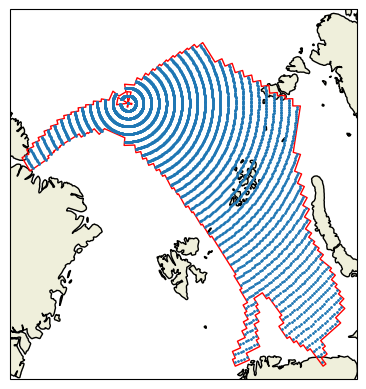

In [53]:
# same as above but zoomed in on the pole
north_pole_plot(AR, 85)

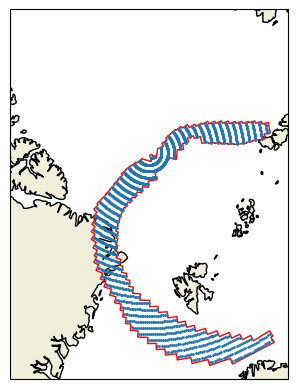

In [47]:
# north pole only
AR = { "_id" : "2000.07.028.018.0_19", "timestamp" : ISODate("2000-07-28T18:00:00Z"), "raster" : [ [ 21.875, 72, [ 254.05516052246094 ] ], [ 22.5, 72, [ 265.0243225097656 ] ], [ 23.125, 72, [ 276.5491638183594 ] ], [ 23.75, 72, [ 288.3659362792969 ] ], [ 24.375, 72, [ 291.9342346191406 ] ], [ 25, 72, [ 289.3663024902344 ] ], [ 25.625, 72, [ 288.4393005371094 ] ], [ 26.25, 72, [ 288.3694152832031 ] ], [ 26.875, 72, [ 290.8580627441406 ] ], [ 27.5, 72, [ 288.45928955078125 ] ], [ 28.125, 72, [ 282.3158264160156 ] ], [ 28.75, 72, [ 276.4962158203125 ] ], [ 29.375, 72, [ 273.9441833496094 ] ], [ 30, 72, [ 274.19586181640625 ] ], [ 30.625, 72, [ 267.71014404296875 ] ], [ 31.25, 72, [ 262.57879638671875 ] ], [ 31.875, 72, [ 260.1515808105469 ] ], [ 32.5, 72, [ 259.9126892089844 ] ], [ 33.125, 72, [ 250.6261749267578 ] ], [ 16.25, 72.5, [ 260.917236328125 ] ], [ 16.875, 72.5, [ 273.1718444824219 ] ], [ 17.5, 72.5, [ 283.3075866699219 ] ], [ 18.125, 72.5, [ 291.94403076171875 ] ], [ 18.75, 72.5, [ 300.9569396972656 ] ], [ 19.375, 72.5, [ 309.26275634765625 ] ], [ 20, 72.5, [ 316.8983154296875 ] ], [ 20.625, 72.5, [ 324.1640930175781 ] ], [ 21.25, 72.5, [ 332.8775634765625 ] ], [ 21.875, 72.5, [ 331.7944641113281 ] ], [ 22.5, 72.5, [ 327.0892333984375 ] ], [ 23.125, 72.5, [ 323.9051513671875 ] ], [ 23.75, 72.5, [ 320.9186096191406 ] ], [ 24.375, 72.5, [ 317.4277038574219 ] ], [ 25, 72.5, [ 310.83843994140625 ] ], [ 25.625, 72.5, [ 301.53424072265625 ] ], [ 26.25, 72.5, [ 292.4931945800781 ] ], [ 26.875, 72.5, [ 283.744873046875 ] ], [ 27.5, 72.5, [ 278.2561340332031 ] ], [ 28.125, 72.5, [ 274.7969665527344 ] ], [ 28.75, 72.5, [ 271.4104309082031 ] ], [ 29.375, 72.5, [ 268.0395202636719 ] ], [ 30, 72.5, [ 265.51568603515625 ] ], [ 30.625, 72.5, [ 264.74859619140625 ] ], [ 31.25, 72.5, [ 263.229248046875 ] ], [ 31.875, 72.5, [ 260.6502685546875 ] ], [ 32.5, 72.5, [ 257.04638671875 ] ], [ 33.125, 72.5, [ 254.9422607421875 ] ], [ 33.75, 72.5, [ 252.49627685546875 ] ], [ 11.875, 73, [ 258.7759094238281 ] ], [ 12.5, 73, [ 274.71514892578125 ] ], [ 13.125, 73, [ 291.6324157714844 ] ], [ 13.75, 73, [ 308.3415832519531 ] ], [ 14.375, 73, [ 323.2071228027344 ] ], [ 15, 73, [ 336.4242858886719 ] ], [ 15.625, 73, [ 348.3216552734375 ] ], [ 16.25, 73, [ 358.9957580566406 ] ], [ 16.875, 73, [ 370.8440246582031 ] ], [ 17.5, 73, [ 383.25372314453125 ] ], [ 18.125, 73, [ 393.5571594238281 ] ], [ 18.75, 73, [ 394.4394836425781 ] ], [ 19.375, 73, [ 391.39752197265625 ] ], [ 20, 73, [ 385.2467346191406 ] ], [ 20.625, 73, [ 379.8183898925781 ] ], [ 21.25, 73, [ 376.0652160644531 ] ], [ 21.875, 73, [ 372.26348876953125 ] ], [ 22.5, 73, [ 358.25506591796875 ] ], [ 23.125, 73, [ 342.50958251953125 ] ], [ 23.75, 73, [ 328.3450927734375 ] ], [ 24.375, 73, [ 315.3971862792969 ] ], [ 25, 73, [ 302.2239685058594 ] ], [ 25.625, 73, [ 289.0864562988281 ] ], [ 26.25, 73, [ 278.8165283203125 ] ], [ 26.875, 73, [ 271.6096496582031 ] ], [ 27.5, 73, [ 264.417236328125 ] ], [ 28.125, 73, [ 257.16644287109375 ] ], [ 28.75, 73, [ 252.12315368652344 ] ], [ 8.125, 73.5, [ 254.6668701171875 ] ], [ 8.75, 73.5, [ 269.6167297363281 ] ], [ 9.375, 73.5, [ 285.8588562011719 ] ], [ 10, 73.5, [ 303.58380126953125 ] ], [ 10.625, 73.5, [ 320.1163024902344 ] ], [ 11.25, 73.5, [ 336.39581298828125 ] ], [ 11.875, 73.5, [ 352.6526184082031 ] ], [ 12.5, 73.5, [ 367.5993957519531 ] ], [ 13.125, 73.5, [ 381.9479675292969 ] ], [ 13.75, 73.5, [ 396.4552001953125 ] ], [ 14.375, 73.5, [ 410.5782470703125 ] ], [ 15, 73.5, [ 417.8029479980469 ] ], [ 15.625, 73.5, [ 418.638427734375 ] ], [ 16.25, 73.5, [ 419.29266357421875 ] ], [ 16.875, 73.5, [ 418.321044921875 ] ], [ 17.5, 73.5, [ 417.4162902832031 ] ], [ 18.125, 73.5, [ 416.5484924316406 ] ], [ 18.75, 73.5, [ 414.67626953125 ] ], [ 19.375, 73.5, [ 405.97418212890625 ] ], [ 20, 73.5, [ 393.6792297363281 ] ], [ 20.625, 73.5, [ 381.2032470703125 ] ], [ 21.25, 73.5, [ 367.4600830078125 ] ], [ 21.875, 73.5, [ 354.9840087890625 ] ], [ 22.5, 73.5, [ 343.78033447265625 ] ], [ 23.125, 73.5, [ 312.8411865234375 ] ], [ 23.75, 73.5, [ 298.0394592285156 ] ], [ 24.375, 73.5, [ 285.82574462890625 ] ], [ 25, 73.5, [ 276.1740417480469 ] ], [ 25.625, 73.5, [ 279.361083984375 ] ], [ 26.25, 73.5, [ 255.21034240722656 ] ], [ 5, 74, [ 250.2361602783203 ] ], [ 5.625, 74, [ 268.14508056640625 ] ], [ 6.25, 74, [ 287.0782775878906 ] ], [ 6.875, 74, [ 306.4405822753906 ] ], [ 7.5, 74, [ 325.2276611328125 ] ], [ 8.125, 74, [ 344.7489013671875 ] ], [ 8.75, 74, [ 364.8306579589844 ] ], [ 9.375, 74, [ 382.585205078125 ] ], [ 10, 74, [ 400.7364196777344 ] ], [ 10.625, 74, [ 411.1357116699219 ] ], [ 11.25, 74, [ 415.4814147949219 ] ], [ 11.875, 74, [ 418.9800720214844 ] ], [ 12.5, 74, [ 422.3359069824219 ] ], [ 13.125, 74, [ 425.12255859375 ] ], [ 13.75, 74, [ 427.0623779296875 ] ], [ 14.375, 74, [ 428.8932189941406 ] ], [ 15, 74, [ 430.583251953125 ] ], [ 15.625, 74, [ 426.91778564453125 ] ], [ 16.25, 74, [ 417.9367980957031 ] ], [ 16.875, 74, [ 408.7459411621094 ] ], [ 17.5, 74, [ 398.7588195800781 ] ], [ 18.125, 74, [ 388.09375 ] ], [ 18.75, 74, [ 377.2747802734375 ] ], [ 19.375, 74, [ 366.33087158203125 ] ], [ 20, 74, [ 335.3379211425781 ] ], [ 20.625, 74, [ 319.5866394042969 ] ], [ 21.25, 74, [ 304.41912841796875 ] ], [ 21.875, 74, [ 290.1366882324219 ] ], [ 22.5, 74, [ 277.4248352050781 ] ], [ 23.125, 74, [ 265.9716491699219 ] ], [ 23.75, 74, [ 255.45269775390625 ] ], [ 2.5, 74.5, [ 261.30950927734375 ] ], [ 3.125, 74.5, [ 280.27801513671875 ] ], [ 3.75, 74.5, [ 299.1224670410156 ] ], [ 4.375, 74.5, [ 317.8748779296875 ] ], [ 5, 74.5, [ 335.9730224609375 ] ], [ 5.625, 74.5, [ 351.9343566894531 ] ], [ 6.25, 74.5, [ 366.49176025390625 ] ], [ 6.875, 74.5, [ 380.2083740234375 ] ], [ 7.5, 74.5, [ 392.0081787109375 ] ], [ 8.125, 74.5, [ 401.3778381347656 ] ], [ 8.75, 74.5, [ 409.85076904296875 ] ], [ 9.375, 74.5, [ 417.3031311035156 ] ], [ 10, 74.5, [ 422.3646545410156 ] ], [ 10.625, 74.5, [ 426.79534912109375 ] ], [ 11.25, 74.5, [ 425.9212951660156 ] ], [ 11.875, 74.5, [ 421.2906188964844 ] ], [ 12.5, 74.5, [ 416.1271667480469 ] ], [ 13.125, 74.5, [ 410.6800842285156 ] ], [ 13.75, 74.5, [ 404.7359924316406 ] ], [ 14.375, 74.5, [ 397.9383239746094 ] ], [ 15, 74.5, [ 390.8641357421875 ] ], [ 15.625, 74.5, [ 383.5338134765625 ] ], [ 16.25, 74.5, [ 356.6175537109375 ] ], [ 16.875, 74.5, [ 342.73712158203125 ] ], [ 17.5, 74.5, [ 328.6707458496094 ] ], [ 18.125, 74.5, [ 314.46112060546875 ] ], [ 18.75, 74.5, [ 299.8338623046875 ] ], [ 19.375, 74.5, [ 285.39324951171875 ] ], [ 20, 74.5, [ 271.2088623046875 ] ], [ 20.625, 74.5, [ 257.4563903808594 ] ], [ -5.920304394294029e-13, 75, [ 265.958251953125 ] ], [ 0.625, 75, [ 283.28076171875 ] ], [ 1.25, 75, [ 301.3388671875 ] ], [ 1.875, 75, [ 319.0777282714844 ] ], [ 2.5, 75, [ 336.6475830078125 ] ], [ 3.125, 75, [ 354.4476623535156 ] ], [ 3.75, 75, [ 371.4499206542969 ] ], [ 4.375, 75, [ 385.8929443359375 ] ], [ 5, 75, [ 397.1269836425781 ] ], [ 5.625, 75, [ 403.5409240722656 ] ], [ 6.25, 75, [ 405.80255126953125 ] ], [ 6.875, 75, [ 406.5498962402344 ] ], [ 7.5, 75, [ 406.3249816894531 ] ], [ 8.125, 75, [ 404.9515075683594 ] ], [ 8.75, 75, [ 402.4222106933594 ] ], [ 9.375, 75, [ 399.13555908203125 ] ], [ 10, 75, [ 395.0599060058594 ] ], [ 10.625, 75, [ 390.7309265136719 ] ], [ 11.25, 75, [ 385.9786376953125 ] ], [ 11.875, 75, [ 363.0033264160156 ] ], [ 12.5, 75, [ 353.9884948730469 ] ], [ 13.125, 75, [ 344.5835266113281 ] ], [ 13.75, 75, [ 334.3798522949219 ] ], [ 14.375, 75, [ 323.3570251464844 ] ], [ 15, 75, [ 311.6965637207031 ] ], [ 15.625, 75, [ 299.5565490722656 ] ], [ 16.25, 75, [ 286.95733642578125 ] ], [ 16.875, 75, [ 273.9486389160156 ] ], [ 17.5, 75, [ 261.1309509277344 ] ], [ -3.125, 75.5, [ 252.91836547851562 ] ], [ -2.5, 75.5, [ 271.6353454589844 ] ], [ -1.875, 75.5, [ 287.24920654296875 ] ], [ -1.25, 75.5, [ 303.0210266113281 ] ], [ -0.625, 75.5, [ 318.8548583984375 ] ], [ -5.920304394294029e-13, 75.5, [ 333.1684265136719 ] ], [ 0.625, 75.5, [ 345.65484619140625 ] ], [ 1.25, 75.5, [ 357.9222717285156 ] ], [ 1.875, 75.5, [ 369.8257751464844 ] ], [ 2.5, 75.5, [ 378.0573425292969 ] ], [ 3.125, 75.5, [ 385.5057678222656 ] ], [ 3.75, 75.5, [ 392.146484375 ] ], [ 4.375, 75.5, [ 396.22662353515625 ] ], [ 5, 75.5, [ 397.559814453125 ] ], [ 5.625, 75.5, [ 397.4202880859375 ] ], [ 6.25, 75.5, [ 392.4991149902344 ] ], [ 6.875, 75.5, [ 385.5299377441406 ] ], [ 7.5, 75.5, [ 378.4736328125 ] ], [ 8.125, 75.5, [ 371.39569091796875 ] ], [ 8.75, 75.5, [ 351.0487365722656 ] ], [ 9.375, 75.5, [ 344.0216064453125 ] ], [ 10, 75.5, [ 336.5793762207031 ] ], [ 10.625, 75.5, [ 328.6796569824219 ] ], [ 11.25, 75.5, [ 319.7830810546875 ] ], [ 11.875, 75.5, [ 309.76385498046875 ] ], [ 12.5, 75.5, [ 298.4669189453125 ] ], [ 13.125, 75.5, [ 285.46063232421875 ] ], [ 13.75, 75.5, [ 273.341064453125 ] ], [ 14.375, 75.5, [ 260.9079284667969 ] ], [ -5.625, 76, [ 257.3924865722656 ] ], [ -5, 76, [ 274.1256103515625 ] ], [ -4.375, 76, [ 290.6965637207031 ] ], [ -3.75, 76, [ 302.8869323730469 ] ], [ -3.125, 76, [ 314.9481201171875 ] ], [ -2.5, 76, [ 326.81146240234375 ] ], [ -1.875, 76, [ 336.829345703125 ] ], [ -1.25, 76, [ 345.0105895996094 ] ], [ -0.625, 76, [ 352.89068603515625 ] ], [ -5.920304394294029e-13, 76, [ 360.3561096191406 ] ], [ 0.625, 76, [ 364.7790832519531 ] ], [ 1.25, 76, [ 368.419189453125 ] ], [ 1.875, 76, [ 371.4205017089844 ] ], [ 2.5, 76, [ 372.73309326171875 ] ], [ 3.125, 76, [ 370.5239562988281 ] ], [ 3.75, 76, [ 367.6746520996094 ] ], [ 4.375, 76, [ 364.2903747558594 ] ], [ 5, 76, [ 359.48602294921875 ] ], [ 5.625, 76, [ 353.4158630371094 ] ], [ 6.25, 76, [ 346.95184326171875 ] ], [ 6.875, 76, [ 327.564453125 ] ], [ 7.5, 76, [ 321.34149169921875 ] ], [ 8.125, 76, [ 314.8207092285156 ] ], [ 8.75, 76, [ 307.77813720703125 ] ], [ 9.375, 76, [ 300.1180114746094 ] ], [ 10, 76, [ 291.02630615234375 ] ], [ 10.625, 76, [ 281.070068359375 ] ], [ 11.25, 76, [ 270.2196044921875 ] ], [ 11.875, 76, [ 258.2388916015625 ] ], [ -7.5, 76.5, [ 254.5955352783203 ] ], [ -6.875, 76.5, [ 269.2088317871094 ] ], [ -6.25, 76.5, [ 282.3888244628906 ] ], [ -5.625, 76.5, [ 293.67730712890625 ] ], [ -5, 76.5, [ 304.6225280761719 ] ], [ -4.375, 76.5, [ 314.3730163574219 ] ], [ -3.75, 76.5, [ 321.4972229003906 ] ], [ -3.125, 76.5, [ 327.5428771972656 ] ], [ -2.5, 76.5, [ 333.3117980957031 ] ], [ -1.875, 76.5, [ 338.75579833984375 ] ], [ -1.25, 76.5, [ 341.94769287109375 ] ], [ -0.625, 76.5, [ 344.7220153808594 ] ], [ -5.920304394294029e-13, 76.5, [ 347.03204345703125 ] ], [ 0.625, 76.5, [ 347.76947021484375 ] ], [ 1.25, 76.5, [ 345.4737243652344 ] ], [ 1.875, 76.5, [ 342.54248046875 ] ], [ 2.5, 76.5, [ 339.1277770996094 ] ], [ 3.125, 76.5, [ 334.28271484375 ] ], [ 3.75, 76.5, [ 328.3356018066406 ] ], [ 4.375, 76.5, [ 322.30499267578125 ] ], [ 5, 76.5, [ 316.0944519042969 ] ], [ 5.625, 76.5, [ 300.3974914550781 ] ], [ 6.25, 76.5, [ 294.8523254394531 ] ], [ 6.875, 76.5, [ 289.2851867675781 ] ], [ 7.5, 76.5, [ 283.0605163574219 ] ], [ 8.125, 76.5, [ 274.0719299316406 ] ], [ 8.75, 76.5, [ 263.88018798828125 ] ], [ 9.375, 76.5, [ 252.64288330078125 ] ], [ -8.75, 77, [ 253.48167419433594 ] ], [ -8.125, 77, [ 262.0550537109375 ] ], [ -7.5, 77, [ 270.6214904785156 ] ], [ -6.875, 77, [ 279.09033203125 ] ], [ -6.25, 77, [ 287.2975158691406 ] ], [ -5.625, 77, [ 294.9561462402344 ] ], [ -5, 77, [ 302.6278381347656 ] ], [ -4.375, 77, [ 310.3212585449219 ] ], [ -3.75, 77, [ 316.5198974609375 ] ], [ -3.125, 77, [ 320.1264343261719 ] ], [ -2.5, 77, [ 323.40899658203125 ] ], [ -1.875, 77, [ 326.27020263671875 ] ], [ -1.25, 77, [ 326.62957763671875 ] ], [ -0.625, 77, [ 324.48760986328125 ] ], [ -5.920304394294029e-13, 77, [ 321.87384033203125 ] ], [ 0.625, 77, [ 318.7210388183594 ] ], [ 1.25, 77, [ 313.6001281738281 ] ], [ 1.875, 77, [ 307.3835144042969 ] ], [ 2.5, 77, [ 301.0841979980469 ] ], [ 3.125, 77, [ 294.6382751464844 ] ], [ 3.75, 77, [ 280.4991760253906 ] ], [ 4.375, 77, [ 274.40771484375 ] ], [ 5, 77, [ 267.9453430175781 ] ], [ 5.625, 77, [ 261.0205078125 ] ], [ 6.25, 77, [ 253.0924072265625 ] ], [ -10, 77.5, [ 256.66351318359375 ] ], [ -9.375, 77.5, [ 266.0854187011719 ] ], [ -8.75, 77.5, [ 275.8481140136719 ] ], [ -8.125, 77.5, [ 281.6965026855469 ] ], [ -7.5, 77.5, [ 287.95953369140625 ] ], [ -6.875, 77.5, [ 294.5818176269531 ] ], [ -6.25, 77.5, [ 301.5539855957031 ] ], [ -5.625, 77.5, [ 306.2563781738281 ] ], [ -5, 77.5, [ 311.1356201171875 ] ], [ -4.375, 77.5, [ 316.17608642578125 ] ], [ -3.75, 77.5, [ 321.337646484375 ] ], [ -3.125, 77.5, [ 319.2232360839844 ] ], [ -2.5, 77.5, [ 316.7844543457031 ] ], [ -1.875, 77.5, [ 314.0972900390625 ] ], [ -1.25, 77.5, [ 310.2306823730469 ] ], [ -0.625, 77.5, [ 302.28350830078125 ] ], [ -5.920304394294029e-13, 77.5, [ 294.2330322265625 ] ], [ 0.625, 77.5, [ 286.2747497558594 ] ], [ 1.25, 77.5, [ 278.3514099121094 ] ], [ 1.875, 77.5, [ 271.1227722167969 ] ], [ 2.5, 77.5, [ 263.4793701171875 ] ], [ 3.125, 77.5, [ 255.18809509277344 ] ], [ -12.5, 78, [ 257.3316345214844 ] ], [ -11.875, 78, [ 268.83306884765625 ] ], [ -11.25, 78, [ 280.1531982421875 ] ], [ -10.625, 78, [ 285.5774230957031 ] ], [ -10, 78, [ 291.6623840332031 ] ], [ -9.375, 78, [ 298.2828369140625 ] ], [ -8.75, 78, [ 305.4769287109375 ] ], [ -8.125, 78, [ 307.57989501953125 ] ], [ -7.5, 78, [ 309.48492431640625 ] ], [ -6.875, 78, [ 311.6852722167969 ] ], [ -6.25, 78, [ 314.156982421875 ] ], [ -5.625, 78, [ 312.66656494140625 ] ], [ -5, 78, [ 309.5920104980469 ] ], [ -4.375, 78, [ 306.30401611328125 ] ], [ -3.75, 78, [ 302.69879150390625 ] ], [ -3.125, 78, [ 296.36773681640625 ] ], [ -2.5, 78, [ 287.8945007324219 ] ], [ -1.875, 78, [ 279.24163818359375 ] ], [ -1.25, 78, [ 270.4273376464844 ] ], [ -0.625, 78, [ 262.10577392578125 ] ], [ -5.920304394294029e-13, 78, [ 254.51409912109375 ] ], [ -15, 78.5, [ 263.10968017578125 ] ], [ -14.375, 78.5, [ 277.5797119140625 ] ], [ -13.75, 78.5, [ 288.34796142578125 ] ], [ -13.125, 78.5, [ 296.27166748046875 ] ], [ -12.5, 78.5, [ 304.8640441894531 ] ], [ -11.875, 78.5, [ 314.1333312988281 ] ], [ -11.25, 78.5, [ 321.92144775390625 ] ], [ -10.625, 78.5, [ 320.7398681640625 ] ], [ -10, 78.5, [ 320.0754699707031 ] ], [ -9.375, 78.5, [ 319.8627014160156 ] ], [ -8.75, 78.5, [ 320.0194091796875 ] ], [ -8.125, 78.5, [ 315.51495361328125 ] ], [ -7.5, 78.5, [ 309.9294738769531 ] ], [ -6.875, 78.5, [ 304.24383544921875 ] ], [ -6.25, 78.5, [ 298.36334228515625 ] ], [ -5.625, 78.5, [ 289.79473876953125 ] ], [ -5, 78.5, [ 278.03143310546875 ] ], [ -4.375, 78.5, [ 265.905029296875 ] ], [ -3.75, 78.5, [ 253.39820861816406 ] ], [ -18.125, 79, [ 257.1459045410156 ] ], [ -17.5, 79, [ 268.0196838378906 ] ], [ -16.875, 79, [ 278.7510986328125 ] ], [ -16.25, 79, [ 290.0090637207031 ] ], [ -15.625, 79, [ 302.0801086425781 ] ], [ -15, 79, [ 314.931640625 ] ], [ -14.375, 79, [ 328.61834716796875 ] ], [ -13.75, 79, [ 331.2925109863281 ] ], [ -13.125, 79, [ 332.4529724121094 ] ], [ -12.5, 79, [ 334.1214904785156 ] ], [ -11.875, 79, [ 336.18853759765625 ] ], [ -11.25, 79, [ 335.68988037109375 ] ], [ -10.625, 79, [ 327.8261413574219 ] ], [ -10, 79, [ 320.0900573730469 ] ], [ -9.375, 79, [ 312.46722412109375 ] ], [ -8.75, 79, [ 304.88922119140625 ] ], [ -8.125, 79, [ 292.39764404296875 ] ], [ -7.5, 79, [ 277.6461181640625 ] ], [ -6.875, 79, [ 262.6252136230469 ] ], [ -20.625, 79.5, [ 259.0936279296875 ] ], [ -20, 79.5, [ 269.9434509277344 ] ], [ -19.375, 79.5, [ 282.41265869140625 ] ], [ -18.75, 79.5, [ 295.3841247558594 ] ], [ -18.125, 79.5, [ 308.96881103515625 ] ], [ -17.5, 79.5, [ 333.21807861328125 ] ], [ -16.875, 79.5, [ 336.4217224121094 ] ], [ -16.25, 79.5, [ 340.1142272949219 ] ], [ -15.625, 79.5, [ 344.4474792480469 ] ], [ -15, 79.5, [ 349.4368591308594 ] ], [ -14.375, 79.5, [ 352.8154602050781 ] ], [ -13.75, 79.5, [ 346.5098876953125 ] ], [ -13.125, 79.5, [ 340.3096008300781 ] ], [ -12.5, 79.5, [ 334.1413269042969 ] ], [ -11.875, 79.5, [ 327.9702453613281 ] ], [ -11.25, 79.5, [ 318.42236328125 ] ], [ -10.625, 79.5, [ 303.7109069824219 ] ], [ -10, 79.5, [ 288.9532775878906 ] ], [ -9.375, 79.5, [ 274.1248474121094 ] ], [ -8.75, 79.5, [ 259.1535949707031 ] ], [ -23.75, 80, [ 271.7315979003906 ] ], [ -23.125, 80, [ 278.7362060546875 ] ], [ -22.5, 80, [ 285.81060791015625 ] ], [ -21.875, 80, [ 292.9442443847656 ] ], [ -21.25, 80, [ 300.1945495605469 ] ], [ -20.625, 80, [ 307.0963134765625 ] ], [ -20, 80, [ 314.7393493652344 ] ], [ -19.375, 80, [ 323.2860412597656 ] ], [ -18.75, 80, [ 345.23681640625 ] ], [ -18.125, 80, [ 355.3199157714844 ] ], [ -17.5, 80, [ 356.9085388183594 ] ], [ -16.875, 80, [ 352.8954772949219 ] ], [ -16.25, 80, [ 349.1990966796875 ] ], [ -15.625, 80, [ 358.86737060546875 ] ], [ -15, 80, [ 355.88665771484375 ] ], [ -14.375, 80, [ 346.7230529785156 ] ], [ -13.75, 80, [ 332.38818359375 ] ], [ -13.125, 80, [ 317.99566650390625 ] ], [ -12.5, 80, [ 303.5313720703125 ] ], [ -11.875, 80, [ 288.90179443359375 ] ], [ -11.25, 80, [ 271.5362243652344 ] ], [ -10.625, 80, [ 251.80130004882812 ] ], [ -26.25, 80.5, [ 262.3276672363281 ] ], [ -25.625, 80.5, [ 288.9559326171875 ] ], [ -25, 80.5, [ 298.9309387207031 ] ], [ -24.375, 80.5, [ 305.79315185546875 ] ], [ -23.75, 80.5, [ 313.0536193847656 ] ], [ -23.125, 80.5, [ 320.67205810546875 ] ], [ -22.5, 80.5, [ 328.6524963378906 ] ], [ -21.875, 80.5, [ 336.9632263183594 ] ], [ -21.25, 80.5, [ 340.5588684082031 ] ], [ -20.625, 80.5, [ 343.7850036621094 ] ], [ -20, 80.5, [ 347.3257141113281 ] ], [ -19.375, 80.5, [ 351.1954040527344 ] ], [ -18.75, 80.5, [ 355.4100646972656 ] ], [ -18.125, 80.5, [ 355.8744812011719 ] ], [ -17.5, 80.5, [ 346.92327880859375 ] ], [ -16.875, 80.5, [ 350.65557861328125 ] ], [ -16.25, 80.5, [ 341.87664794921875 ] ], [ -15.625, 80.5, [ 333.1452331542969 ] ], [ -15, 80.5, [ 337.04791259765625 ] ], [ -14.375, 80.5, [ 314.1012878417969 ] ], [ -13.75, 80.5, [ 290.7279968261719 ] ], [ -13.125, 80.5, [ 267.4064636230469 ] ], [ 99.375, 80.5, [ 250.61795043945312 ] ], [ 100, 80.5, [ 254.33416748046875 ] ], [ 100.625, 80.5, [ 258.15496826171875 ] ], [ 101.25, 80.5, [ 262.1250305175781 ] ], [ 101.875, 80.5, [ 266.1596984863281 ] ], [ 102.5, 80.5, [ 263.243408203125 ] ], [ 103.125, 80.5, [ 256.81903076171875 ] ], [ 103.75, 80.5, [ 250.26556396484375 ] ], [ -27.5, 81, [ 258.7073059082031 ] ], [ -26.875, 81, [ 284.6439514160156 ] ], [ -26.25, 81, [ 295.5 ] ], [ -25.625, 81, [ 302.7732849121094 ] ], [ -25, 81, [ 320.8362121582031 ] ], [ -24.375, 81, [ 325.6683044433594 ] ], [ -23.75, 81, [ 331.1344299316406 ] ], [ -23.125, 81, [ 337.1280517578125 ] ], [ -22.5, 81, [ 343.6021728515625 ] ], [ -21.875, 81, [ 345.3606262207031 ] ], [ -21.25, 81, [ 345.6348571777344 ] ], [ -20.625, 81, [ 346.08685302734375 ] ], [ -20, 81, [ 346.7218017578125 ] ], [ -19.375, 81, [ 347.4167175292969 ] ], [ -18.75, 81, [ 347.42547607421875 ] ], [ -18.125, 81, [ 331.5727844238281 ] ], [ -17.5, 81, [ 316.0634460449219 ] ], [ -16.875, 81, [ 300.7635192871094 ] ], [ -16.25, 81, [ 296.8799743652344 ] ], [ -15.625, 81, [ 281.8891906738281 ] ], [ -15, 81, [ 263.2390441894531 ] ], [ 96.875, 81, [ 250.30364990234375 ] ], [ 97.5, 81, [ 255.91799926757812 ] ], [ 98.125, 81, [ 261.6399841308594 ] ], [ 98.75, 81, [ 266.348876953125 ] ], [ 99.375, 81, [ 271.49310302734375 ] ], [ 100, 81, [ 274.0902404785156 ] ], [ 100.625, 81, [ 274.670166015625 ] ], [ 101.25, 81, [ 275.3039855957031 ] ], [ 101.875, 81, [ 275.97760009765625 ] ], [ 102.5, 81, [ 276.6807861328125 ] ], [ 103.125, 81, [ 277.3828430175781 ] ], [ 103.75, 81, [ 272.0704040527344 ] ], [ 104.375, 81, [ 262.0912780761719 ] ], [ 105, 81, [ 252.1379852294922 ] ], [ -30, 81.5, [ 256.87384033203125 ] ], [ -29.375, 81.5, [ 264.8174743652344 ] ], [ -28.75, 81.5, [ 273.5395202636719 ] ], [ -28.125, 81.5, [ 282.7755432128906 ] ], [ -27.5, 81.5, [ 300.8979187011719 ] ], [ -26.875, 81.5, [ 310.6152648925781 ] ], [ -26.25, 81.5, [ 314.760498046875 ] ], [ -25.625, 81.5, [ 319.03436279296875 ] ], [ -25, 81.5, [ 323.4042663574219 ] ], [ -24.375, 81.5, [ 327.7469177246094 ] ], [ -23.75, 81.5, [ 342.849365234375 ] ], [ -23.125, 81.5, [ 347.6690673828125 ] ], [ -22.5, 81.5, [ 345.1533508300781 ] ], [ -21.875, 81.5, [ 342.3516540527344 ] ], [ -21.25, 81.5, [ 339.6240539550781 ] ], [ -20.625, 81.5, [ 336.9792175292969 ] ], [ -20, 81.5, [ 334.426025390625 ] ], [ -19.375, 81.5, [ 332.0431213378906 ] ], [ -18.75, 81.5, [ 310.1853942871094 ] ], [ -18.125, 81.5, [ 286.25701904296875 ] ], [ -17.5, 81.5, [ 262.3274230957031 ] ], [ 96.875, 81.5, [ 252.70547485351562 ] ], [ 97.5, 81.5, [ 257.52825927734375 ] ], [ 98.125, 81.5, [ 262.41607666015625 ] ], [ 98.75, 81.5, [ 267.91778564453125 ] ], [ 99.375, 81.5, [ 274.0401916503906 ] ], [ 100, 81.5, [ 280.9356384277344 ] ], [ 100.625, 81.5, [ 288.2816162109375 ] ], [ 101.25, 81.5, [ 289.8538818359375 ] ], [ 101.875, 81.5, [ 287.8687438964844 ] ], [ 102.5, 81.5, [ 285.76141357421875 ] ], [ 103.125, 81.5, [ 283.5173645019531 ] ], [ 103.75, 81.5, [ 281.092041015625 ] ], [ 104.375, 81.5, [ 278.4822998046875 ] ], [ 105, 81.5, [ 274.1038513183594 ] ], [ 105.625, 81.5, [ 262.333740234375 ] ], [ 106.25, 81.5, [ 250.7523651123047 ] ], [ -33.125, 82, [ 255.86183166503906 ] ], [ -32.5, 82, [ 275.7777099609375 ] ], [ -31.875, 82, [ 284.36151123046875 ] ], [ -31.25, 82, [ 293.2986145019531 ] ], [ -30.625, 82, [ 301.12017822265625 ] ], [ -30, 82, [ 309.0315246582031 ] ], [ -29.375, 82, [ 316.9870910644531 ] ], [ -28.75, 82, [ 324.9761047363281 ] ], [ -28.125, 82, [ 333.0387878417969 ] ], [ -27.5, 82, [ 334.0750427246094 ] ], [ -26.875, 82, [ 346.5318908691406 ] ], [ -26.25, 82, [ 347.3282775878906 ] ], [ -25.625, 82, [ 348.5816955566406 ] ], [ -25, 82, [ 350.1341552734375 ] ], [ -24.375, 82, [ 352.052978515625 ] ], [ -23.75, 82, [ 350.9050598144531 ] ], [ -23.125, 82, [ 342.4262390136719 ] ], [ -22.5, 82, [ 334.31036376953125 ] ], [ -21.875, 82, [ 338.1044921875 ] ], [ -21.25, 82, [ 330.82305908203125 ] ], [ -20.625, 82, [ 323.88189697265625 ] ], [ -20, 82, [ 317.1819763183594 ] ], [ -19.375, 82, [ 293.4248352050781 ] ], [ -18.75, 82, [ 266.4344787597656 ] ], [ 96.25, 82, [ 251.84214782714844 ] ], [ 96.875, 82, [ 259.6451110839844 ] ], [ 97.5, 82, [ 267.4717102050781 ] ], [ 98.125, 82, [ 274.8703308105469 ] ], [ 98.75, 82, [ 279.2566223144531 ] ], [ 99.375, 82, [ 283.88232421875 ] ], [ 100, 82, [ 288.74310302734375 ] ], [ 100.625, 82, [ 293.8697204589844 ] ], [ 101.25, 82, [ 299.2054138183594 ] ], [ 101.875, 82, [ 303.3684387207031 ] ], [ 102.5, 82, [ 303.3976135253906 ] ], [ 103.125, 82, [ 297.3928527832031 ] ], [ 103.75, 82, [ 291.5249938964844 ] ], [ 104.375, 82, [ 285.8279724121094 ] ], [ 105, 82, [ 280.2305603027344 ] ], [ 105.625, 82, [ 274.7622985839844 ] ], [ 106.25, 82, [ 269.364990234375 ] ], [ 106.875, 82, [ 260.87890625 ] ], [ -35.625, 82.5, [ 252.7164306640625 ] ], [ -35, 82.5, [ 261.1761779785156 ] ], [ -34.375, 82.5, [ 269.6365966796875 ] ], [ -33.75, 82.5, [ 277.85284423828125 ] ], [ -33.125, 82.5, [ 284.28997802734375 ] ], [ -32.5, 82.5, [ 290.7288818359375 ] ], [ -31.875, 82.5, [ 297.53857421875 ] ], [ -31.25, 82.5, [ 304.8526916503906 ] ], [ -30.625, 82.5, [ 312.7040100097656 ] ], [ -30, 82.5, [ 321.2642517089844 ] ], [ -29.375, 82.5, [ 330.55828857421875 ] ], [ -28.75, 82.5, [ 331.2071838378906 ] ], [ -28.125, 82.5, [ 347.4837951660156 ] ], [ -27.5, 82.5, [ 347.7510681152344 ] ], [ -26.875, 82.5, [ 348.2494201660156 ] ], [ -26.25, 82.5, [ 348.9673156738281 ] ], [ -25.625, 82.5, [ 349.9099426269531 ] ], [ -25, 82.5, [ 365.3797912597656 ] ], [ -24.375, 82.5, [ 354.5693664550781 ] ], [ -23.75, 82.5, [ 341.5845947265625 ] ], [ -23.125, 82.5, [ 328.6631164550781 ] ], [ -22.5, 82.5, [ 315.7228088378906 ] ], [ -21.875, 82.5, [ 315.35906982421875 ] ], [ -21.25, 82.5, [ 302.339599609375 ] ], [ -20.625, 82.5, [ 289.20013427734375 ] ], [ -20, 82.5, [ 266.5723876953125 ] ], [ 95.625, 82.5, [ 254.4577178955078 ] ], [ 96.25, 82.5, [ 259.7890930175781 ] ], [ 96.875, 82.5, [ 265.1026916503906 ] ], [ 97.5, 82.5, [ 270.3780822753906 ] ], [ 98.125, 82.5, [ 275.6572570800781 ] ], [ 98.75, 82.5, [ 280.8773498535156 ] ], [ 99.375, 82.5, [ 285.6711120605469 ] ], [ 100, 82.5, [ 286.9891052246094 ] ], [ 100.625, 82.5, [ 288.483642578125 ] ], [ 101.25, 82.5, [ 290.1156005859375 ] ], [ 101.875, 82.5, [ 291.9684143066406 ] ], [ 102.5, 82.5, [ 293.94549560546875 ] ], [ 103.125, 82.5, [ 296.0921325683594 ] ], [ 103.75, 82.5, [ 298.2234802246094 ] ], [ 104.375, 82.5, [ 293.0762023925781 ] ], [ 105, 82.5, [ 286.82086181640625 ] ], [ 105.625, 82.5, [ 280.6376953125 ] ], [ 106.25, 82.5, [ 274.6353759765625 ] ], [ 106.875, 82.5, [ 268.748046875 ] ], [ 107.5, 82.5, [ 262.9759521484375 ] ], [ 108.125, 82.5, [ 257.3330383300781 ] ], [ -38.125, 83, [ 250.79415893554688 ] ], [ -37.5, 83, [ 257.92034912109375 ] ], [ -36.875, 83, [ 265.62164306640625 ] ], [ -36.25, 83, [ 269.34014892578125 ] ], [ -35.625, 83, [ 277.68505859375 ] ], [ -35, 83, [ 283.90289306640625 ] ], [ -34.375, 83, [ 289.4680480957031 ] ], [ -33.75, 83, [ 295.0302429199219 ] ], [ -33.125, 83, [ 300.7569580078125 ] ], [ -32.5, 83, [ 306.7222900390625 ] ], [ -31.875, 83, [ 312.9139404296875 ] ], [ -31.25, 83, [ 319.2715759277344 ] ], [ -30.625, 83, [ 324.438720703125 ] ], [ -30, 83, [ 325.040771484375 ] ], [ -29.375, 83, [ 325.8327331542969 ] ], [ -28.75, 83, [ 337.2635803222656 ] ], [ -28.125, 83, [ 338.8471374511719 ] ], [ -27.5, 83, [ 340.47821044921875 ] ], [ -26.875, 83, [ 342.1260986328125 ] ], [ -26.25, 83, [ 343.76910400390625 ] ], [ -25.625, 83, [ 346.31500244140625 ] ], [ -25, 83, [ 332.7665100097656 ] ], [ -24.375, 83, [ 319.20355224609375 ] ], [ -23.75, 83, [ 305.5738830566406 ] ], [ -23.125, 83, [ 291.8833923339844 ] ], [ -22.5, 83, [ 288.7079772949219 ] ], [ -21.875, 83, [ 274.935546875 ] ], [ -21.25, 83, [ 259.9570007324219 ] ], [ 95.625, 83, [ 256.7237854003906 ] ], [ 96.25, 83, [ 264.7023010253906 ] ], [ 96.875, 83, [ 268.15362548828125 ] ], [ 97.5, 83, [ 271.67333984375 ] ], [ 98.125, 83, [ 275.2740173339844 ] ], [ 98.75, 83, [ 278.97052001953125 ] ], [ 99.375, 83, [ 282.7773132324219 ] ], [ 100, 83, [ 286.72296142578125 ] ], [ 100.625, 83, [ 290.75897216796875 ] ], [ 101.25, 83, [ 291.2220458984375 ] ], [ 101.875, 83, [ 290.6962585449219 ] ], [ 102.5, 83, [ 290.3074035644531 ] ], [ 103.125, 83, [ 290.0258483886719 ] ], [ 103.75, 83, [ 289.846923828125 ] ], [ 104.375, 83, [ 289.7886047363281 ] ], [ 105, 83, [ 289.6762390136719 ] ], [ 105.625, 83, [ 289.5915832519531 ] ], [ 106.25, 83, [ 283.83868408203125 ] ], [ 106.875, 83, [ 277.6075744628906 ] ], [ 107.5, 83, [ 271.5520935058594 ] ], [ 108.125, 83, [ 265.6697998046875 ] ], [ 108.75, 83, [ 259.9700927734375 ] ], [ 109.375, 83, [ 254.45913696289062 ] ], [ -40.625, 83.5, [ 250.52223205566406 ] ], [ -40, 83.5, [ 254.0638427734375 ] ], [ -39.375, 83.5, [ 257.7041320800781 ] ], [ -38.75, 83.5, [ 261.4039306640625 ] ], [ -38.125, 83.5, [ 265.330322265625 ] ], [ -37.5, 83.5, [ 270.9312744140625 ] ], [ -36.875, 83.5, [ 277.2336730957031 ] ], [ -36.25, 83.5, [ 284.0650634765625 ] ], [ -35.625, 83.5, [ 291.02020263671875 ] ], [ -35, 83.5, [ 297.9587707519531 ] ], [ -34.375, 83.5, [ 304.9337158203125 ] ], [ -33.75, 83.5, [ 311.86065673828125 ] ], [ -33.125, 83.5, [ 314.1313171386719 ] ], [ -32.5, 83.5, [ 320.9740295410156 ] ], [ -31.875, 83.5, [ 328.0666809082031 ] ], [ -31.25, 83.5, [ 330.0849304199219 ] ], [ -30.625, 83.5, [ 332.1031799316406 ] ], [ -30, 83.5, [ 334.08526611328125 ] ], [ -29.375, 83.5, [ 335.9586181640625 ] ], [ -28.75, 83.5, [ 337.734375 ] ], [ -28.125, 83.5, [ 339.4479675292969 ] ], [ -27.5, 83.5, [ 341.04315185546875 ] ], [ -26.875, 83.5, [ 340.5728759765625 ] ], [ -26.25, 83.5, [ 327.3782043457031 ] ], [ -25.625, 83.5, [ 314.1535339355469 ] ], [ -25, 83.5, [ 300.8673400878906 ] ], [ -24.375, 83.5, [ 287.5901184082031 ] ], [ -23.75, 83.5, [ 274.2812805175781 ] ], [ -23.125, 83.5, [ 260.92987060546875 ] ], [ 96.25, 83.5, [ 258.04071044921875 ] ], [ 96.875, 83.5, [ 267.2246398925781 ] ], [ 97.5, 83.5, [ 273.7586669921875 ] ], [ 98.125, 83.5, [ 275.35699462890625 ] ], [ 98.75, 83.5, [ 277.0403137207031 ] ], [ 99.375, 83.5, [ 278.8050842285156 ] ], [ 100, 83.5, [ 280.6663513183594 ] ], [ 100.625, 83.5, [ 282.6485595703125 ] ], [ 101.25, 83.5, [ 284.72869873046875 ] ], [ 101.875, 83.5, [ 286.88348388671875 ] ], [ 102.5, 83.5, [ 288.9022521972656 ] ], [ 103.125, 83.5, [ 286.84423828125 ] ], [ 103.75, 83.5, [ 285.0480041503906 ] ], [ 104.375, 83.5, [ 283.4825744628906 ] ], [ 105, 83.5, [ 282.19036865234375 ] ], [ 105.625, 83.5, [ 281.05865478515625 ] ], [ 106.25, 83.5, [ 280.2087707519531 ] ], [ 106.875, 83.5, [ 279.6169738769531 ] ], [ 107.5, 83.5, [ 279.45953369140625 ] ], [ 108.125, 83.5, [ 276.99432373046875 ] ], [ 108.75, 83.5, [ 271.52008056640625 ] ], [ 109.375, 83.5, [ 266.1346435546875 ] ], [ 110, 83.5, [ 260.80035400390625 ] ], [ 110.625, 83.5, [ 255.55401611328125 ] ], [ 111.25, 83.5, [ 250.38087463378906 ] ], [ -43.75, 84, [ 251.66111755371094 ] ], [ -43.125, 84, [ 255.15374755859375 ] ], [ -42.5, 84, [ 258.71337890625 ] ], [ -41.875, 84, [ 262.3812561035156 ] ], [ -41.25, 84, [ 266.09686279296875 ] ], [ -40.625, 84, [ 269.9244384765625 ] ], [ -40, 84, [ 274.9964904785156 ] ], [ -39.375, 84, [ 280.83154296875 ] ], [ -38.75, 84, [ 286.5965270996094 ] ], [ -38.125, 84, [ 292.0818176269531 ] ], [ -37.5, 84, [ 297.667724609375 ] ], [ -36.875, 84, [ 303.4146728515625 ] ], [ -36.25, 84, [ 309.2538146972656 ] ], [ -35.625, 84, [ 315.1872863769531 ] ], [ -35, 84, [ 321.1822509765625 ] ], [ -34.375, 84, [ 326.6963806152344 ] ], [ -33.75, 84, [ 328.9488525390625 ] ], [ -33.125, 84, [ 331.2623596191406 ] ], [ -32.5, 84, [ 333.64166259765625 ] ], [ -31.875, 84, [ 336.009765625 ] ], [ -31.25, 84, [ 338.45648193359375 ] ], [ -30.625, 84, [ 340.9646911621094 ] ], [ -30, 84, [ 343.5295104980469 ] ], [ -29.375, 84, [ 346.1558532714844 ] ], [ -28.75, 84, [ 347.8775329589844 ] ], [ -28.125, 84, [ 335.58160400390625 ] ], [ -27.5, 84, [ 323.30645751953125 ] ], [ -26.875, 84, [ 311.0394592285156 ] ], [ -26.25, 84, [ 298.8073425292969 ] ], [ -25.625, 84, [ 286.5960998535156 ] ], [ -25, 84, [ 274.4248962402344 ] ], [ -24.375, 84, [ 262.37353515625 ] ], [ -23.75, 84, [ 250.7865753173828 ] ], [ 96.875, 84, [ 253.48609924316406 ] ], [ 97.5, 84, [ 260.92578125 ] ], [ 98.125, 84, [ 268.3040466308594 ] ], [ 98.75, 84, [ 275.6040954589844 ] ], [ 99.375, 84, [ 276.2930908203125 ] ], [ 100, 84, [ 276.6927795410156 ] ], [ 100.625, 84, [ 277.227294921875 ] ], [ 101.25, 84, [ 277.94146728515625 ] ], [ 101.875, 84, [ 278.87664794921875 ] ], [ 102.5, 84, [ 279.9320068359375 ] ], [ 103.125, 84, [ 281.1865539550781 ] ], [ 103.75, 84, [ 282.6646423339844 ] ], [ 104.375, 84, [ 284.27117919921875 ] ], [ 105, 84, [ 283.0440673828125 ] ], [ 105.625, 84, [ 281.4252014160156 ] ], [ 106.25, 84, [ 280.06634521484375 ] ], [ 106.875, 84, [ 278.8873596191406 ] ], [ 107.5, 84, [ 277.8948059082031 ] ], [ 108.125, 84, [ 277.0365905761719 ] ], [ 108.75, 84, [ 276.37469482421875 ] ], [ 109.375, 84, [ 275.62738037109375 ] ], [ 110, 84, [ 274.9621276855469 ] ], [ 110.625, 84, [ 272.7333679199219 ] ], [ 111.25, 84, [ 267.11114501953125 ] ], [ 111.875, 84, [ 261.5802917480469 ] ], [ 112.5, 84, [ 256.1407775878906 ] ], [ 113.125, 84, [ 250.79241943359375 ] ], [ -45, 84.5, [ 252.0178985595703 ] ], [ -44.375, 84.5, [ 255.87388610839844 ] ], [ -43.75, 84.5, [ 259.8436279296875 ] ], [ -43.125, 84.5, [ 264.9600830078125 ] ], [ -42.5, 84.5, [ 270.7498474121094 ] ], [ -41.875, 84.5, [ 276.690185546875 ] ], [ -41.25, 84.5, [ 282.76055908203125 ] ], [ -40.625, 84.5, [ 287.880126953125 ] ], [ -40, 84.5, [ 293.18072509765625 ] ], [ -39.375, 84.5, [ 298.5550231933594 ] ], [ -38.75, 84.5, [ 304.0123291015625 ] ], [ -38.125, 84.5, [ 309.6072998046875 ] ], [ -37.5, 84.5, [ 315.3221435546875 ] ], [ -36.875, 84.5, [ 321.10101318359375 ] ], [ -36.25, 84.5, [ 325.02459716796875 ] ], [ -35.625, 84.5, [ 328.9520263671875 ] ], [ -35, 84.5, [ 332.79388427734375 ] ], [ -34.375, 84.5, [ 336.6159362792969 ] ], [ -33.75, 84.5, [ 340.44171142578125 ] ], [ -33.125, 84.5, [ 344.1902770996094 ] ], [ -32.5, 84.5, [ 347.97503662109375 ] ], [ -31.875, 84.5, [ 351.7446594238281 ] ], [ -31.25, 84.5, [ 355.4515380859375 ] ], [ -30.625, 84.5, [ 359.2004699707031 ] ], [ -30, 84.5, [ 350.3085021972656 ] ], [ -29.375, 84.5, [ 340.4106750488281 ] ], [ -28.75, 84.5, [ 330.4276428222656 ] ], [ -28.125, 84.5, [ 320.3305969238281 ] ], [ -27.5, 84.5, [ 310.1162414550781 ] ], [ -26.875, 84.5, [ 300.0104064941406 ] ], [ -26.25, 84.5, [ 290.15625 ] ], [ -25.625, 84.5, [ 280.37603759765625 ] ], [ -25, 84.5, [ 270.644287109375 ] ], [ -24.375, 84.5, [ 259.4421081542969 ] ], [ 98.125, 84.5, [ 255.73785400390625 ] ], [ 98.75, 84.5, [ 261.6336975097656 ] ], [ 99.375, 84.5, [ 267.4226379394531 ] ], [ 100, 84.5, [ 273.09161376953125 ] ], [ 100.625, 84.5, [ 278.22760009765625 ] ], [ 101.25, 84.5, [ 277.38134765625 ] ], [ 101.875, 84.5, [ 276.76153564453125 ] ], [ 102.5, 84.5, [ 276.3185729980469 ] ], [ 103.125, 84.5, [ 276.04443359375 ] ], [ 103.75, 84.5, [ 275.98089599609375 ] ], [ 104.375, 84.5, [ 276.0843811035156 ] ], [ 105, 84.5, [ 276.3414306640625 ] ], [ 105.625, 84.5, [ 276.8096008300781 ] ], [ 106.25, 84.5, [ 277.4246826171875 ] ], [ 106.875, 84.5, [ 278.19158935546875 ] ], [ 107.5, 84.5, [ 276.46197509765625 ] ], [ 108.125, 84.5, [ 274.881103515625 ] ], [ 108.75, 84.5, [ 273.4423522949219 ] ], [ 109.375, 84.5, [ 272.1433410644531 ] ], [ 110, 84.5, [ 271.0062561035156 ] ], [ 110.625, 84.5, [ 270.00714111328125 ] ], [ 111.25, 84.5, [ 269.093505859375 ] ], [ 111.875, 84.5, [ 268.2275390625 ] ], [ 112.5, 84.5, [ 267.43310546875 ] ], [ 113.125, 84.5, [ 266.5986328125 ] ], [ 113.75, 84.5, [ 264.38018798828125 ] ], [ 114.375, 84.5, [ 259.15789794921875 ] ], [ 115, 84.5, [ 254.02713012695312 ] ], [ -45, 85, [ 254.15426635742188 ] ], [ -44.375, 85, [ 258.6387634277344 ] ], [ -43.75, 85, [ 263.30731201171875 ] ], [ -43.125, 85, [ 268.2457580566406 ] ], [ -42.5, 85, [ 273.29052734375 ] ], [ -41.875, 85, [ 278.4484558105469 ] ], [ -41.25, 85, [ 283.74658203125 ] ], [ -40.625, 85, [ 289.16583251953125 ] ], [ -40, 85, [ 294.7035217285156 ] ], [ -39.375, 85, [ 301.11590576171875 ] ], [ -38.75, 85, [ 307.74188232421875 ] ], [ -38.125, 85, [ 314.1943359375 ] ], [ -37.5, 85, [ 320.5549011230469 ] ], [ -36.875, 85, [ 326.8080749511719 ] ], [ -36.25, 85, [ 332.95025634765625 ] ], [ -35.625, 85, [ 338.9525451660156 ] ], [ -35, 85, [ 344.8685302734375 ] ], [ -34.375, 85, [ 350.6698303222656 ] ], [ -33.75, 85, [ 356.41595458984375 ] ], [ -33.125, 85, [ 362.0418701171875 ] ], [ -32.5, 85, [ 363.35797119140625 ] ], [ -31.875, 85, [ 358.6378173828125 ] ], [ -31.25, 85, [ 353.6330871582031 ] ], [ -30.625, 85, [ 348.3110046386719 ] ], [ -30, 85, [ 342.7700500488281 ] ], [ -29.375, 85, [ 336.802978515625 ] ], [ -28.75, 85, [ 330.7301330566406 ] ], [ -28.125, 85, [ 324.5509033203125 ] ], [ -27.5, 85, [ 318.3006286621094 ] ], [ -26.875, 85, [ 311.9530029296875 ] ], [ -26.25, 85, [ 305.6043395996094 ] ], [ -25.625, 85, [ 293.2190856933594 ] ], [ -25, 85, [ 278.0804138183594 ] ], [ -24.375, 85, [ 263.05157470703125 ] ], [ 98.75, 85, [ 251.1637420654297 ] ], [ 99.375, 85, [ 254.9425811767578 ] ], [ 100, 85, [ 258.5796813964844 ] ], [ 100.625, 85, [ 262.0352783203125 ] ], [ 101.25, 85, [ 265.3781433105469 ] ], [ 101.875, 85, [ 268.6455383300781 ] ], [ 102.5, 85, [ 271.8215026855469 ] ], [ 103.125, 85, [ 272.4668884277344 ] ], [ 103.75, 85, [ 271.40570068359375 ] ], [ 104.375, 85, [ 270.6275939941406 ] ], [ 105, 85, [ 270.0270080566406 ] ], [ 105.625, 85, [ 269.7174377441406 ] ], [ 106.25, 85, [ 269.6058349609375 ] ], [ 106.875, 85, [ 269.73095703125 ] ], [ 107.5, 85, [ 270.08203125 ] ], [ 108.125, 85, [ 270.6623229980469 ] ], [ 108.75, 85, [ 271.47528076171875 ] ], [ 109.375, 85, [ 272.51702880859375 ] ], [ 110, 85, [ 273.03985595703125 ] ], [ 110.625, 85, [ 271.5640563964844 ] ], [ 111.25, 85, [ 270.10748291015625 ] ], [ 111.875, 85, [ 268.719482421875 ] ], [ 112.5, 85, [ 267.3799133300781 ] ], [ 113.125, 85, [ 266.0429992675781 ] ], [ 113.75, 85, [ 264.72113037109375 ] ], [ 114.375, 85, [ 263.08282470703125 ] ], [ 115, 85, [ 261.3115539550781 ] ], [ 115.625, 85, [ 259.5284423828125 ] ], [ 116.25, 85, [ 257.7704772949219 ] ], [ 116.875, 85, [ 255.9951171875 ] ], [ 117.5, 85, [ 254.0321807861328 ] ], [ -45.625, 85.5, [ 251.8407745361328 ] ], [ -45, 85.5, [ 255.45057678222656 ] ], [ -44.375, 85.5, [ 259.2054138183594 ] ], [ -43.75, 85.5, [ 263.05194091796875 ] ], [ -43.125, 85.5, [ 268.8176574707031 ] ], [ -42.5, 85.5, [ 275.3277893066406 ] ], [ -41.875, 85.5, [ 281.9566650390625 ] ], [ -41.25, 85.5, [ 288.630615234375 ] ], [ -40.625, 85.5, [ 295.44305419921875 ] ], [ -40, 85.5, [ 302.3233337402344 ] ], [ -39.375, 85.5, [ 309.29547119140625 ] ], [ -38.75, 85.5, [ 316.35888671875 ] ], [ -38.125, 85.5, [ 323.54449462890625 ] ], [ -37.5, 85.5, [ 330.8058776855469 ] ], [ -36.875, 85.5, [ 338.13702392578125 ] ], [ -36.25, 85.5, [ 345.5968933105469 ] ], [ -35.625, 85.5, [ 353.1394958496094 ] ], [ -35, 85.5, [ 356.2667236328125 ] ], [ -34.375, 85.5, [ 357.81219482421875 ] ], [ -33.75, 85.5, [ 359.1191101074219 ] ], [ -33.125, 85.5, [ 360.2156982421875 ] ], [ -32.5, 85.5, [ 360.7098693847656 ] ], [ -31.875, 85.5, [ 360.27789306640625 ] ], [ -31.25, 85.5, [ 359.53228759765625 ] ], [ -30.625, 85.5, [ 358.6053161621094 ] ], [ -30, 85.5, [ 357.4464416503906 ] ], [ -29.375, 85.5, [ 356.0782775878906 ] ], [ -28.75, 85.5, [ 354.5252685546875 ] ], [ -28.125, 85.5, [ 352.7512512207031 ] ], [ -27.5, 85.5, [ 344.16156005859375 ] ], [ -26.875, 85.5, [ 331.5523376464844 ] ], [ -26.25, 85.5, [ 319.0088806152344 ] ], [ -25.625, 85.5, [ 306.46063232421875 ] ], [ -25, 85.5, [ 293.9380798339844 ] ], [ -24.375, 85.5, [ 281.42376708984375 ] ], [ -23.75, 85.5, [ 268.9093933105469 ] ], [ -23.125, 85.5, [ 256.41607666015625 ] ], [ 100, 85.5, [ 251.50296020507812 ] ], [ 100.625, 85.5, [ 253.09420776367188 ] ], [ 101.25, 85.5, [ 254.63380432128906 ] ], [ 101.875, 85.5, [ 256.11651611328125 ] ], [ 102.5, 85.5, [ 257.60345458984375 ] ], [ 103.125, 85.5, [ 258.82659912109375 ] ], [ 103.75, 85.5, [ 259.93585205078125 ] ], [ 104.375, 85.5, [ 261.08782958984375 ] ], [ 105, 85.5, [ 262.20953369140625 ] ], [ 105.625, 85.5, [ 262.9239807128906 ] ], [ 106.25, 85.5, [ 262.3329162597656 ] ], [ 106.875, 85.5, [ 261.95489501953125 ] ], [ 107.5, 85.5, [ 261.69677734375 ] ], [ 108.125, 85.5, [ 261.6817932128906 ] ], [ 108.75, 85.5, [ 261.7643737792969 ] ], [ 109.375, 85.5, [ 262.010009765625 ] ], [ 110, 85.5, [ 262.4156799316406 ] ], [ 110.625, 85.5, [ 262.9510192871094 ] ], [ 111.25, 85.5, [ 263.63848876953125 ] ], [ 111.875, 85.5, [ 264.4466247558594 ] ], [ 112.5, 85.5, [ 265.3486022949219 ] ], [ 113.125, 85.5, [ 266.38092041015625 ] ], [ 113.75, 85.5, [ 266.660400390625 ] ], [ 114.375, 85.5, [ 264.6199035644531 ] ], [ 115, 85.5, [ 262.5754089355469 ] ], [ 115.625, 85.5, [ 260.554931640625 ] ], [ 116.25, 85.5, [ 258.5425109863281 ] ], [ 116.875, 85.5, [ 256.53814697265625 ] ], [ 117.5, 85.5, [ 254.55654907226562 ] ], [ 118.125, 85.5, [ 252.6872100830078 ] ], [ 118.75, 85.5, [ 250.89993286132812 ] ], [ -46.25, 86, [ 250.59568786621094 ] ], [ -45.625, 86, [ 256.072509765625 ] ], [ -45, 86, [ 261.6552429199219 ] ], [ -44.375, 86, [ 267.3793029785156 ] ], [ -43.75, 86, [ 273.1956481933594 ] ], [ -43.125, 86, [ 279.15093994140625 ] ], [ -42.5, 86, [ 285.2203674316406 ] ], [ -41.875, 86, [ 291.41064453125 ] ], [ -41.25, 86, [ 297.7425231933594 ] ], [ -40.625, 86, [ 304.1759948730469 ] ], [ -40, 86, [ 310.7771301269531 ] ], [ -39.375, 86, [ 317.459716796875 ] ], [ -38.75, 86, [ 323.70782470703125 ] ], [ -38.125, 86, [ 328.83636474609375 ] ], [ -37.5, 86, [ 333.8467712402344 ] ], [ -36.875, 86, [ 338.7334289550781 ] ], [ -36.25, 86, [ 343.5408020019531 ] ], [ -35.625, 86, [ 347.9852600097656 ] ], [ -35, 86, [ 351.9405822753906 ] ], [ -34.375, 86, [ 355.7442932128906 ] ], [ -33.75, 86, [ 359.40191650390625 ] ], [ -33.125, 86, [ 362.93267822265625 ] ], [ -32.5, 86, [ 366.3259582519531 ] ], [ -31.875, 86, [ 369.57415771484375 ] ], [ -31.25, 86, [ 372.6694030761719 ] ], [ -30.625, 86, [ 375.64129638671875 ] ], [ -30, 86, [ 375.35186767578125 ] ], [ -29.375, 86, [ 369.3699951171875 ] ], [ -28.75, 86, [ 363.1859130859375 ] ], [ -28.125, 86, [ 356.739501953125 ] ], [ -27.5, 86, [ 350.08843994140625 ] ], [ -26.875, 86, [ 343.2347717285156 ] ], [ -26.25, 86, [ 336.1924133300781 ] ], [ -25.625, 86, [ 329.0466613769531 ] ], [ -25, 86, [ 321.6642150878906 ] ], [ -24.375, 86, [ 314.18115234375 ] ], [ -23.75, 86, [ 306.5863342285156 ] ], [ -23.125, 86, [ 298.84930419921875 ] ], [ -22.5, 86, [ 291.0289001464844 ] ], [ -21.875, 86, [ 282.53167724609375 ] ], [ -21.25, 86, [ 270.7879638671875 ] ], [ -20.625, 86, [ 259.26861572265625 ] ], [ 107.5, 86, [ 250.38217163085938 ] ], [ 108.125, 86, [ 251.3103790283203 ] ], [ 108.75, 86, [ 252.36764526367188 ] ], [ 109.375, 86, [ 252.9670867919922 ] ], [ 110, 86, [ 253.30264282226562 ] ], [ 110.625, 86, [ 253.6615753173828 ] ], [ 111.25, 86, [ 254.05908203125 ] ], [ 111.875, 86, [ 254.44070434570312 ] ], [ 112.5, 86, [ 254.86790466308594 ] ], [ 113.125, 86, [ 255.2341766357422 ] ], [ 113.75, 86, [ 255.63546752929688 ] ], [ 114.375, 86, [ 256.02099609375 ] ], [ 115, 86, [ 256.367919921875 ] ], [ 115.625, 86, [ 256.69659423828125 ] ], [ 116.25, 86, [ 256.97259521484375 ] ], [ 116.875, 86, [ 257.2442626953125 ] ], [ 117.5, 86, [ 257.4599609375 ] ], [ 118.125, 86, [ 257.62347412109375 ] ], [ 118.75, 86, [ 257.0301208496094 ] ], [ 119.375, 86, [ 255.3530731201172 ] ], [ 120, 86, [ 253.78021240234375 ] ], [ 120.625, 86, [ 252.24754333496094 ] ], [ 121.25, 86, [ 250.78738403320312 ] ], [ -47.5, 86.5, [ 251.92117309570312 ] ], [ -46.875, 86.5, [ 256.0023193359375 ] ], [ -46.25, 86.5, [ 260.22509765625 ] ], [ -45.625, 86.5, [ 264.6214294433594 ] ], [ -45, 86.5, [ 269.1244812011719 ] ], [ -44.375, 86.5, [ 273.8064270019531 ] ], [ -43.75, 86.5, [ 278.63970947265625 ] ], [ -43.125, 86.5, [ 284.3091125488281 ] ], [ -42.5, 86.5, [ 290.2563781738281 ] ], [ -41.875, 86.5, [ 296.2615661621094 ] ], [ -41.25, 86.5, [ 302.3720703125 ] ], [ -40.625, 86.5, [ 308.5730895996094 ] ], [ -40, 86.5, [ 314.8470458984375 ] ], [ -39.375, 86.5, [ 321.09991455078125 ] ], [ -38.75, 86.5, [ 326.9566650390625 ] ], [ -38.125, 86.5, [ 332.7679138183594 ] ], [ -37.5, 86.5, [ 338.56640625 ] ], [ -36.875, 86.5, [ 344.27850341796875 ] ], [ -36.25, 86.5, [ 350.02178955078125 ] ], [ -35.625, 86.5, [ 355.6584167480469 ] ], [ -35, 86.5, [ 361.3076477050781 ] ], [ -34.375, 86.5, [ 366.8807678222656 ] ], [ -33.75, 86.5, [ 372.421142578125 ] ], [ -33.125, 86.5, [ 376.3816833496094 ] ], [ -32.5, 86.5, [ 375.6850280761719 ] ], [ -31.875, 86.5, [ 374.84619140625 ] ], [ -31.25, 86.5, [ 373.8356018066406 ] ], [ -30.625, 86.5, [ 372.707275390625 ] ], [ -30, 86.5, [ 371.4269714355469 ] ], [ -29.375, 86.5, [ 369.9979553222656 ] ], [ -28.75, 86.5, [ 368.4905090332031 ] ], [ -28.125, 86.5, [ 366.8046875 ] ], [ -27.5, 86.5, [ 365.0398864746094 ] ], [ -26.875, 86.5, [ 363.1285705566406 ] ], [ -26.25, 86.5, [ 361.1265563964844 ] ], [ -25.625, 86.5, [ 359.04364013671875 ] ], [ -25, 86.5, [ 356.8523254394531 ] ], [ -24.375, 86.5, [ 354.60650634765625 ] ], [ -23.75, 86.5, [ 352.2881774902344 ] ], [ -23.125, 86.5, [ 343.64727783203125 ] ], [ -22.5, 86.5, [ 334.70050048828125 ] ], [ -21.875, 86.5, [ 325.7681579589844 ] ], [ -21.25, 86.5, [ 316.85784912109375 ] ], [ -20.625, 86.5, [ 307.9698791503906 ] ], [ -20, 86.5, [ 299.1514892578125 ] ], [ -19.375, 86.5, [ 290.3672790527344 ] ], [ -18.75, 86.5, [ 281.64678955078125 ] ], [ -18.125, 86.5, [ 272.998046875 ] ], [ -17.5, 86.5, [ 264.4637145996094 ] ], [ -16.875, 86.5, [ 255.97865295410156 ] ], [ 110.625, 86.5, [ 250.4621124267578 ] ], [ 111.25, 86.5, [ 251.80311584472656 ] ], [ 111.875, 86.5, [ 253.1544952392578 ] ], [ 112.5, 86.5, [ 254.50144958496094 ] ], [ 113.125, 86.5, [ 255.80096435546875 ] ], [ 113.75, 86.5, [ 256.79803466796875 ] ], [ 114.375, 86.5, [ 256.72015380859375 ] ], [ 115, 86.5, [ 256.60833740234375 ] ], [ 115.625, 86.5, [ 256.5192565917969 ] ], [ 116.25, 86.5, [ 256.39520263671875 ] ], [ 116.875, 86.5, [ 256.2703552246094 ] ], [ 117.5, 86.5, [ 256.1129150390625 ] ], [ 118.125, 86.5, [ 255.93727111816406 ] ], [ 118.75, 86.5, [ 255.75778198242188 ] ], [ 119.375, 86.5, [ 255.5439910888672 ] ], [ 120, 86.5, [ 255.31338500976562 ] ], [ 120.625, 86.5, [ 255.01832580566406 ] ], [ 121.25, 86.5, [ 254.73719787597656 ] ], [ 121.875, 86.5, [ 254.38754272460938 ] ], [ 122.5, 86.5, [ 254.04531860351562 ] ], [ 123.125, 86.5, [ 253.64129638671875 ] ], [ 123.75, 86.5, [ 253.2255401611328 ] ], [ 124.375, 86.5, [ 252.76791381835938 ] ], [ 125, 86.5, [ 251.97434997558594 ] ], [ 125.625, 86.5, [ 250.65943908691406 ] ], [ -48.75, 87, [ 251.57293701171875 ] ], [ -48.125, 87, [ 255.8595733642578 ] ], [ -47.5, 87, [ 260.26422119140625 ] ], [ -46.875, 87, [ 264.8294677734375 ] ], [ -46.25, 87, [ 269.4953308105469 ] ], [ -45.625, 87, [ 274.3123474121094 ] ], [ -45, 87, [ 279.2463073730469 ] ], [ -44.375, 87, [ 284.33251953125 ] ], [ -43.75, 87, [ 289.5311279296875 ] ], [ -43.125, 87, [ 294.8111267089844 ] ], [ -42.5, 87, [ 300.16241455078125 ] ], [ -41.875, 87, [ 305.5899963378906 ] ], [ -41.25, 87, [ 311.0629577636719 ] ], [ -40.625, 87, [ 316.6181335449219 ] ], [ -40, 87, [ 322.2401123046875 ] ], [ -39.375, 87, [ 327.93182373046875 ] ], [ -38.75, 87, [ 333.6950988769531 ] ], [ -38.125, 87, [ 339.5156555175781 ] ], [ -37.5, 87, [ 345.3838806152344 ] ], [ -36.875, 87, [ 348.03460693359375 ] ], [ -36.25, 87, [ 350.47320556640625 ] ], [ -35.625, 87, [ 352.8258361816406 ] ], [ -35, 87, [ 355.1098327636719 ] ], [ -34.375, 87, [ 357.3106689453125 ] ], [ -33.75, 87, [ 359.44879150390625 ] ], [ -33.125, 87, [ 361.5223693847656 ] ], [ -32.5, 87, [ 363.50567626953125 ] ], [ -31.875, 87, [ 365.4407043457031 ] ], [ -31.25, 87, [ 367.2900695800781 ] ], [ -30.625, 87, [ 369.0992126464844 ] ], [ -30, 87, [ 370.8633117675781 ] ], [ -29.375, 87, [ 372.53363037109375 ] ], [ -28.75, 87, [ 374.1463928222656 ] ], [ -28.125, 87, [ 375.73199462890625 ] ], [ -27.5, 87, [ 377.2118835449219 ] ], [ -26.875, 87, [ 378.6846008300781 ] ], [ -26.25, 87, [ 380.0865173339844 ] ], [ -25.625, 87, [ 377.8188781738281 ] ], [ -25, 87, [ 374.0489196777344 ] ], [ -24.375, 87, [ 370.1860046386719 ] ], [ -23.75, 87, [ 366.2682800292969 ] ], [ -23.125, 87, [ 362.35498046875 ] ], [ -22.5, 87, [ 358.3443298339844 ] ], [ -21.875, 87, [ 354.35552978515625 ] ], [ -21.25, 87, [ 350.3008117675781 ] ], [ -20.625, 87, [ 346.25347900390625 ] ], [ -20, 87, [ 342.19256591796875 ] ], [ -19.375, 87, [ 338.11053466796875 ] ], [ -18.75, 87, [ 334.0489501953125 ] ], [ -18.125, 87, [ 329.9909362792969 ] ], [ -17.5, 87, [ 325.9571533203125 ] ], [ -16.875, 87, [ 321.94683837890625 ] ], [ -16.25, 87, [ 317.9581604003906 ] ], [ -15.625, 87, [ 314.0361328125 ] ], [ -15, 87, [ 308.00433349609375 ] ], [ -14.375, 87, [ 299.66156005859375 ] ], [ -13.75, 87, [ 291.4647216796875 ] ], [ -13.125, 87, [ 283.375244140625 ] ], [ -12.5, 87, [ 275.408447265625 ] ], [ -11.875, 87, [ 267.606201171875 ] ], [ -11.25, 87, [ 259.9299621582031 ] ], [ -10.625, 87, [ 252.42100524902344 ] ], [ 105, 87, [ 251.1432342529297 ] ], [ 105.625, 87, [ 253.09754943847656 ] ], [ 106.25, 87, [ 255.04156494140625 ] ], [ 106.875, 87, [ 257.0227966308594 ] ], [ 107.5, 87, [ 258.95135498046875 ] ], [ 108.125, 87, [ 259.4044189453125 ] ], [ 108.75, 87, [ 259.8942565917969 ] ], [ 109.375, 87, [ 260.41357421875 ] ], [ 110, 87, [ 260.9316101074219 ] ], [ 110.625, 87, [ 261.45098876953125 ] ], [ 111.25, 87, [ 261.9851379394531 ] ], [ 111.875, 87, [ 262.47882080078125 ] ], [ 112.5, 87, [ 262.9817810058594 ] ], [ 113.125, 87, [ 263.4768371582031 ] ], [ 113.75, 87, [ 263.96356201171875 ] ], [ 114.375, 87, [ 264.0557861328125 ] ], [ 115, 87, [ 264.06878662109375 ] ], [ 115.625, 87, [ 264.06573486328125 ] ], [ 116.25, 87, [ 264.036865234375 ] ], [ 116.875, 87, [ 264.0001525878906 ] ], [ 117.5, 87, [ 263.9273681640625 ] ], [ 118.125, 87, [ 263.84234619140625 ] ], [ 118.75, 87, [ 263.71197509765625 ] ], [ 119.375, 87, [ 263.5814208984375 ] ], [ 120, 87, [ 263.3985900878906 ] ], [ 120.625, 87, [ 262.7940979003906 ] ], [ 121.25, 87, [ 261.90545654296875 ] ], [ 121.875, 87, [ 261.00732421875 ] ], [ 122.5, 87, [ 260.0832824707031 ] ], [ 123.125, 87, [ 259.1612243652344 ] ], [ 123.75, 87, [ 258.2148742675781 ] ], [ 124.375, 87, [ 257.2586669921875 ] ], [ 125, 87, [ 256.26690673828125 ] ], [ 125.625, 87, [ 255.2837677001953 ] ], [ 126.25, 87, [ 254.2580108642578 ] ], [ 126.875, 87, [ 253.24244689941406 ] ], [ 127.5, 87, [ 252.1770477294922 ] ], [ 128.125, 87, [ 251.12181091308594 ] ], [ 128.75, 87, [ 250.04922485351562 ] ], [ -51.875, 87.5, [ 250.61590576171875 ] ], [ -51.25, 87.5, [ 253.82015991210938 ] ], [ -50.625, 87.5, [ 257.1136474609375 ] ], [ -50, 87.5, [ 260.484375 ] ], [ -49.375, 87.5, [ 263.98004150390625 ] ], [ -48.75, 87.5, [ 267.45550537109375 ] ], [ -48.125, 87.5, [ 270.930419921875 ] ], [ -47.5, 87.5, [ 274.5072326660156 ] ], [ -46.875, 87.5, [ 278.1649475097656 ] ], [ -46.25, 87.5, [ 281.89837646484375 ] ], [ -45.625, 87.5, [ 285.7332458496094 ] ], [ -45, 87.5, [ 289.6433410644531 ] ], [ -44.375, 87.5, [ 293.642578125 ] ], [ -43.75, 87.5, [ 297.7256164550781 ] ], [ -43.125, 87.5, [ 300.8672790527344 ] ], [ -42.5, 87.5, [ 303.8074035644531 ] ], [ -41.875, 87.5, [ 306.71136474609375 ] ], [ -41.25, 87.5, [ 309.690673828125 ] ], [ -40.625, 87.5, [ 312.6413269042969 ] ], [ -40, 87.5, [ 315.620361328125 ] ], [ -39.375, 87.5, [ 318.6263732910156 ] ], [ -38.75, 87.5, [ 321.6041564941406 ] ], [ -38.125, 87.5, [ 324.6556701660156 ] ], [ -37.5, 87.5, [ 327.6631164550781 ] ], [ -36.875, 87.5, [ 330.7198486328125 ] ], [ -36.25, 87.5, [ 333.7721862792969 ] ], [ -35.625, 87.5, [ 336.8159484863281 ] ], [ -35, 87.5, [ 339.8865661621094 ] ], [ -34.375, 87.5, [ 342.96942138671875 ] ], [ -33.75, 87.5, [ 346.0265197753906 ] ], [ -33.125, 87.5, [ 349.11859130859375 ] ], [ -32.5, 87.5, [ 352.2149353027344 ] ], [ -31.875, 87.5, [ 355.2837219238281 ] ], [ -31.25, 87.5, [ 358.37896728515625 ] ], [ -30.625, 87.5, [ 361.48046875 ] ], [ -30, 87.5, [ 364.59625244140625 ] ], [ -29.375, 87.5, [ 367.5080261230469 ] ], [ -28.75, 87.5, [ 367.45904541015625 ] ], [ -28.125, 87.5, [ 367.3638916015625 ] ], [ -27.5, 87.5, [ 367.2173767089844 ] ], [ -26.875, 87.5, [ 367.0792236328125 ] ], [ -26.25, 87.5, [ 366.9046325683594 ] ], [ -25.625, 87.5, [ 366.673828125 ] ], [ -25, 87.5, [ 366.4498291015625 ] ], [ -24.375, 87.5, [ 366.1828308105469 ] ], [ -23.75, 87.5, [ 365.9267272949219 ] ], [ -23.125, 87.5, [ 365.62298583984375 ] ], [ -22.5, 87.5, [ 365.3398742675781 ] ], [ -21.875, 87.5, [ 365.02166748046875 ] ], [ -21.25, 87.5, [ 364.7284240722656 ] ], [ -20.625, 87.5, [ 364.39190673828125 ] ], [ -20, 87.5, [ 364.0909118652344 ] ], [ -19.375, 87.5, [ 363.7476501464844 ] ], [ -18.75, 87.5, [ 363.4306945800781 ] ], [ -18.125, 87.5, [ 363.1160583496094 ] ], [ -17.5, 87.5, [ 362.8164978027344 ] ], [ -16.875, 87.5, [ 362.4978942871094 ] ], [ -16.25, 87.5, [ 361.4928283691406 ] ], [ -15.625, 87.5, [ 357.0602722167969 ] ], [ -15, 87.5, [ 352.6677551269531 ] ], [ -14.375, 87.5, [ 348.31610107421875 ] ], [ -13.75, 87.5, [ 343.75030517578125 ] ], [ -13.125, 87.5, [ 339.30889892578125 ] ], [ -12.5, 87.5, [ 334.93804931640625 ] ], [ -11.875, 87.5, [ 330.6436462402344 ] ], [ -11.25, 87.5, [ 326.4522705078125 ] ], [ -10.625, 87.5, [ 322.37738037109375 ] ], [ -10, 87.5, [ 318.3845520019531 ] ], [ -9.375, 87.5, [ 314.50592041015625 ] ], [ -8.75, 87.5, [ 310.73223876953125 ] ], [ -8.125, 87.5, [ 307.1023864746094 ] ], [ -7.5, 87.5, [ 303.58221435546875 ] ], [ -6.875, 87.5, [ 300.1793518066406 ] ], [ -6.25, 87.5, [ 296.9037170410156 ] ], [ -5.625, 87.5, [ 293.7722473144531 ] ], [ -5, 87.5, [ 290.5684814453125 ] ], [ -4.375, 87.5, [ 287.48089599609375 ] ], [ -3.75, 87.5, [ 284.5450134277344 ] ], [ -3.125, 87.5, [ 277.88299560546875 ] ], [ -2.5, 87.5, [ 270.5711364746094 ] ], [ -1.875, 87.5, [ 263.45172119140625 ] ], [ -1.25, 87.5, [ 256.53375244140625 ] ], [ 95.625, 87.5, [ 250.78988647460938 ] ], [ 96.25, 87.5, [ 253.8505401611328 ] ], [ 96.875, 87.5, [ 256.8917236328125 ] ], [ 97.5, 87.5, [ 259.94598388671875 ] ], [ 98.125, 87.5, [ 263.021240234375 ] ], [ 98.75, 87.5, [ 266.1205749511719 ] ], [ 99.375, 87.5, [ 269.1737365722656 ] ], [ 100, 87.5, [ 269.68536376953125 ] ], [ 100.625, 87.5, [ 270.0497741699219 ] ], [ 101.25, 87.5, [ 270.4970703125 ] ], [ 101.875, 87.5, [ 270.9192199707031 ] ], [ 102.5, 87.5, [ 271.4129943847656 ] ], [ 103.125, 87.5, [ 271.8931579589844 ] ], [ 103.75, 87.5, [ 272.4252014160156 ] ], [ 104.375, 87.5, [ 272.9610290527344 ] ], [ 105, 87.5, [ 273.5146179199219 ] ], [ 105.625, 87.5, [ 274.0933532714844 ] ], [ 106.25, 87.5, [ 274.6928405761719 ] ], [ 106.875, 87.5, [ 275.2752685546875 ] ], [ 107.5, 87.5, [ 275.875732421875 ] ], [ 108.125, 87.5, [ 276.5035400390625 ] ], [ 108.75, 87.5, [ 277.09735107421875 ] ], [ 109.375, 87.5, [ 277.7332763671875 ] ], [ 110, 87.5, [ 278.35906982421875 ] ], [ 110.625, 87.5, [ 278.98040771484375 ] ], [ 111.25, 87.5, [ 279.6006164550781 ] ], [ 111.875, 87.5, [ 280.2519226074219 ] ], [ 112.5, 87.5, [ 280.8610534667969 ] ], [ 113.125, 87.5, [ 281.47412109375 ] ], [ 113.75, 87.5, [ 281.873779296875 ] ], [ 114.375, 87.5, [ 281.4271240234375 ] ], [ 115, 87.5, [ 281.005126953125 ] ], [ 115.625, 87.5, [ 280.5489501953125 ] ], [ 116.25, 87.5, [ 280.10943603515625 ] ], [ 116.875, 87.5, [ 279.6558837890625 ] ], [ 117.5, 87.5, [ 279.2044982910156 ] ], [ 118.125, 87.5, [ 278.7327880859375 ] ], [ 118.75, 87.5, [ 278.2659606933594 ] ], [ 119.375, 87.5, [ 277.37408447265625 ] ], [ 120, 87.5, [ 275.7027282714844 ] ], [ 120.625, 87.5, [ 274.0834655761719 ] ], [ 121.25, 87.5, [ 272.4747314453125 ] ], [ 121.875, 87.5, [ 270.8929443359375 ] ], [ 122.5, 87.5, [ 269.324951171875 ] ], [ 123.125, 87.5, [ 267.78045654296875 ] ], [ 123.75, 87.5, [ 266.2535095214844 ] ], [ 124.375, 87.5, [ 264.7587585449219 ] ], [ 125, 87.5, [ 263.2509765625 ] ], [ 125.625, 87.5, [ 261.7716064453125 ] ], [ 126.25, 87.5, [ 260.3150939941406 ] ], [ 126.875, 87.5, [ 258.8702087402344 ] ], [ 127.5, 87.5, [ 257.42510986328125 ] ], [ 128.125, 87.5, [ 256.0161437988281 ] ], [ 128.75, 87.5, [ 254.60739135742188 ] ], [ 129.375, 87.5, [ 253.2035675048828 ] ], [ 130, 87.5, [ 251.82179260253906 ] ], [ 130.625, 87.5, [ 250.43272399902344 ] ], [ -53.125, 88, [ 250.1422119140625 ] ], [ -52.5, 88, [ 252.39967346191406 ] ], [ -51.875, 88, [ 254.67166137695312 ] ], [ -51.25, 88, [ 256.97894287109375 ] ], [ -50.625, 88, [ 259.31951904296875 ] ], [ -50, 88, [ 261.6729736328125 ] ], [ -49.375, 88, [ 264.0462646484375 ] ], [ -48.75, 88, [ 266.4649353027344 ] ], [ -48.125, 88, [ 268.896728515625 ] ], [ -47.5, 88, [ 271.337646484375 ] ], [ -46.875, 88, [ 273.837646484375 ] ], [ -46.25, 88, [ 276.3202819824219 ] ], [ -45.625, 88, [ 278.8484191894531 ] ], [ -45, 88, [ 281.4119873046875 ] ], [ -44.375, 88, [ 283.9965515136719 ] ], [ -43.75, 88, [ 286.5840148925781 ] ], [ -43.125, 88, [ 289.2209167480469 ] ], [ -42.5, 88, [ 291.8576354980469 ] ], [ -41.875, 88, [ 294.52532958984375 ] ], [ -41.25, 88, [ 297.2276916503906 ] ], [ -40.625, 88, [ 299.931396484375 ] ], [ -40, 88, [ 302.6519470214844 ] ], [ -39.375, 88, [ 305.4171142578125 ] ], [ -38.75, 88, [ 308.1832275390625 ] ], [ -38.125, 88, [ 310.9903869628906 ] ], [ -37.5, 88, [ 313.78460693359375 ] ], [ -36.875, 88, [ 316.59417724609375 ] ], [ -36.25, 88, [ 319.4288330078125 ] ], [ -35.625, 88, [ 322.2921142578125 ] ], [ -35, 88, [ 325.1444091796875 ] ], [ -34.375, 88, [ 327.5259094238281 ] ], [ -33.75, 88, [ 328.694580078125 ] ], [ -33.125, 88, [ 329.8406677246094 ] ], [ -32.5, 88, [ 331.03271484375 ] ], [ -31.875, 88, [ 332.2291259765625 ] ], [ -31.25, 88, [ 333.4684753417969 ] ], [ -30.625, 88, [ 334.7002868652344 ] ], [ -30, 88, [ 335.9586181640625 ] ], [ -29.375, 88, [ 337.23046875 ] ], [ -28.75, 88, [ 338.5328674316406 ] ], [ -28.125, 88, [ 339.8687438964844 ] ], [ -27.5, 88, [ 341.17584228515625 ] ], [ -26.875, 88, [ 342.5205078125 ] ], [ -26.25, 88, [ 343.8699035644531 ] ], [ -25.625, 88, [ 345.2305908203125 ] ], [ -25, 88, [ 346.6089782714844 ] ], [ -24.375, 88, [ 348.00146484375 ] ], [ -23.75, 88, [ 349.1747741699219 ] ], [ -23.125, 88, [ 350.25244140625 ] ], [ -22.5, 88, [ 351.34674072265625 ] ], [ -21.875, 88, [ 352.4549865722656 ] ], [ -21.25, 88, [ 353.5500183105469 ] ], [ -20.625, 88, [ 354.68048095703125 ] ], [ -20, 88, [ 355.7771911621094 ] ], [ -19.375, 88, [ 356.880859375 ] ], [ -18.75, 88, [ 358.0242004394531 ] ], [ -18.125, 88, [ 359.14794921875 ] ], [ -17.5, 88, [ 358.4423828125 ] ], [ -16.875, 88, [ 357.0785217285156 ] ], [ -16.25, 88, [ 355.75189208984375 ] ], [ -15.625, 88, [ 354.4374084472656 ] ], [ -15, 88, [ 353.1373596191406 ] ], [ -14.375, 88, [ 351.8934631347656 ] ], [ -13.75, 88, [ 350.6929016113281 ] ], [ -13.125, 88, [ 349.5267639160156 ] ], [ -12.5, 88, [ 348.3990478515625 ] ], [ -11.875, 88, [ 347.31085205078125 ] ], [ -11.25, 88, [ 346.28466796875 ] ], [ -10.625, 88, [ 345.2967224121094 ] ], [ -10, 88, [ 344.3780517578125 ] ], [ -9.375, 88, [ 343.5473937988281 ] ], [ -8.75, 88, [ 342.7520751953125 ] ], [ -8.125, 88, [ 342.0359191894531 ] ], [ -7.5, 88, [ 341.376220703125 ] ], [ -6.875, 88, [ 340.8077697753906 ] ], [ -6.25, 88, [ 340.3103942871094 ] ], [ -5.625, 88, [ 339.9029541015625 ] ], [ -5, 88, [ 339.60272216796875 ] ], [ -4.375, 88, [ 339.3543701171875 ] ], [ -3.75, 88, [ 339.2225341796875 ] ], [ -3.125, 88, [ 339.1676025390625 ] ], [ -2.5, 88, [ 339.22705078125 ] ], [ -1.875, 88, [ 338.23333740234375 ] ], [ -1.25, 88, [ 334.2078552246094 ] ], [ -0.625, 88, [ 330.252685546875 ] ], [ -5.920304394294029e-13, 88, [ 326.46435546875 ] ], [ 0.625, 88, [ 322.7284851074219 ] ], [ 1.25, 88, [ 319.1539001464844 ] ], [ 1.875, 88, [ 315.6874084472656 ] ], [ 2.5, 88, [ 312.4020080566406 ] ], [ 3.125, 88, [ 309.2010192871094 ] ], [ 3.75, 88, [ 306.1375732421875 ] ], [ 4.375, 88, [ 302.99969482421875 ] ], [ 5, 88, [ 299.634521484375 ] ], [ 5.625, 88, [ 296.3797302246094 ] ], [ 6.25, 88, [ 293.22808837890625 ] ], [ 6.875, 88, [ 290.26177978515625 ] ], [ 7.5, 88, [ 287.38543701171875 ] ], [ 8.125, 88, [ 284.69683837890625 ] ], [ 8.75, 88, [ 282.1120910644531 ] ], [ 9.375, 88, [ 279.75970458984375 ] ], [ 10, 88, [ 277.48046875 ] ], [ 10.625, 88, [ 275.41766357421875 ] ], [ 11.25, 88, [ 273.4791259765625 ] ], [ 11.875, 88, [ 271.7104187011719 ] ], [ 12.5, 88, [ 270.12347412109375 ] ], [ 13.125, 88, [ 268.7356872558594 ] ], [ 13.75, 88, [ 267.4818420410156 ] ], [ 14.375, 88, [ 266.4322814941406 ] ], [ 15, 88, [ 262.6492919921875 ] ], [ 15.625, 88, [ 257.95208740234375 ] ], [ 16.25, 88, [ 253.39028930664062 ] ], [ 76.25, 88, [ 250.41493225097656 ] ], [ 76.875, 88, [ 252.07505798339844 ] ], [ 77.5, 88, [ 253.86334228515625 ] ], [ 78.125, 88, [ 255.699462890625 ] ], [ 78.75, 88, [ 257.6767883300781 ] ], [ 79.375, 88, [ 259.73638916015625 ] ], [ 80, 88, [ 261.8955078125 ] ], [ 80.625, 88, [ 264.150634765625 ] ], [ 81.25, 88, [ 266.49298095703125 ] ], [ 81.875, 88, [ 268.9166564941406 ] ], [ 82.5, 88, [ 271.4501953125 ] ], [ 83.125, 88, [ 274.0596618652344 ] ], [ 83.75, 88, [ 276.7831115722656 ] ], [ 84.375, 88, [ 279.58538818359375 ] ], [ 85, 88, [ 282.4686279296875 ] ], [ 85.625, 88, [ 285.4341735839844 ] ], [ 86.25, 88, [ 288.5053405761719 ] ], [ 86.875, 88, [ 291.6451721191406 ] ], [ 87.5, 88, [ 294.8707275390625 ] ], [ 88.125, 88, [ 297.3443298339844 ] ], [ 88.75, 88, [ 297.5221862792969 ] ], [ 89.375, 88, [ 297.80767822265625 ] ], [ 90, 88, [ 298.12396240234375 ] ], [ 90.625, 88, [ 298.4971618652344 ] ], [ 91.25, 88, [ 298.9583435058594 ] ], [ 91.875, 88, [ 299.4609069824219 ] ], [ 92.5, 88, [ 299.9917297363281 ] ], [ 93.125, 88, [ 300.6029357910156 ] ], [ 93.75, 88, [ 301.2536926269531 ] ], [ 94.375, 88, [ 301.6723327636719 ] ], [ 95, 88, [ 301.52154541015625 ] ], [ 95.625, 88, [ 301.4384460449219 ] ], [ 96.25, 88, [ 301.3450622558594 ] ], [ 96.875, 88, [ 301.2799377441406 ] ], [ 97.5, 88, [ 301.26312255859375 ] ], [ 98.125, 88, [ 301.2167053222656 ] ], [ 98.75, 88, [ 301.2222595214844 ] ], [ 99.375, 88, [ 301.2537841796875 ] ], [ 100, 88, [ 301.2822265625 ] ], [ 100.625, 88, [ 301.3491516113281 ] ], [ 101.25, 88, [ 301.39306640625 ] ], [ 101.875, 88, [ 301.474365234375 ] ], [ 102.5, 88, [ 301.5924377441406 ] ], [ 103.125, 88, [ 301.6836242675781 ] ], [ 103.75, 88, [ 301.8018493652344 ] ], [ 104.375, 88, [ 301.93634033203125 ] ], [ 105, 88, [ 300.98291015625 ] ], [ 105.625, 88, [ 299.67449951171875 ] ], [ 106.25, 88, [ 298.3289794921875 ] ], [ 106.875, 88, [ 297.0613708496094 ] ], [ 107.5, 88, [ 295.786376953125 ] ], [ 108.125, 88, [ 294.54913330078125 ] ], [ 108.75, 88, [ 293.32147216796875 ] ], [ 109.375, 88, [ 292.1455383300781 ] ], [ 110, 88, [ 290.9714050292969 ] ], [ 110.625, 88, [ 289.8284912109375 ] ], [ 111.25, 88, [ 288.70294189453125 ] ], [ 111.875, 88, [ 287.5994873046875 ] ], [ 112.5, 88, [ 286.5189208984375 ] ], [ 113.125, 88, [ 285.4581604003906 ] ], [ 113.75, 88, [ 284.4075012207031 ] ], [ 114.375, 88, [ 283.3797912597656 ] ], [ 115, 88, [ 282.3894958496094 ] ], [ 115.625, 88, [ 281.3988037109375 ] ], [ 116.25, 88, [ 280.4341735839844 ] ], [ 116.875, 88, [ 279.4789733886719 ] ], [ 117.5, 88, [ 278.55718994140625 ] ], [ 118.125, 88, [ 277.6691589355469 ] ], [ 118.75, 88, [ 276.765625 ] ], [ 119.375, 88, [ 275.8892517089844 ] ], [ 120, 88, [ 275.0269470214844 ] ], [ 120.625, 88, [ 274.19940185546875 ] ], [ 121.25, 88, [ 273.38189697265625 ] ], [ 121.875, 88, [ 272.5759582519531 ] ], [ 122.5, 88, [ 271.79052734375 ] ], [ 123.125, 88, [ 271.0151672363281 ] ], [ 123.75, 88, [ 270.26025390625 ] ], [ 124.375, 88, [ 268.99969482421875 ] ], [ 125, 88, [ 267.6430358886719 ] ], [ 125.625, 88, [ 266.3358459472656 ] ], [ 126.25, 88, [ 264.8926696777344 ] ], [ 126.875, 88, [ 262.51861572265625 ] ], [ 127.5, 88, [ 260.1307678222656 ] ], [ 128.125, 88, [ 257.755126953125 ] ], [ 128.75, 88, [ 255.38417053222656 ] ], [ 129.375, 88, [ 253.03729248046875 ] ], [ 130, 88, [ 250.6542510986328 ] ], [ -52.5, 88.5, [ 251.55654907226562 ] ], [ -51.875, 88.5, [ 253.45802307128906 ] ], [ -51.25, 88.5, [ 255.3909149169922 ] ], [ -50.625, 88.5, [ 257.34552001953125 ] ], [ -50, 88.5, [ 259.3290100097656 ] ], [ -49.375, 88.5, [ 261.3350524902344 ] ], [ -48.75, 88.5, [ 263.3143005371094 ] ], [ -48.125, 88.5, [ 265.37255859375 ] ], [ -47.5, 88.5, [ 267.4166259765625 ] ], [ -46.875, 88.5, [ 269.49237060546875 ] ], [ -46.25, 88.5, [ 271.566162109375 ] ], [ -45.625, 88.5, [ 273.6852111816406 ] ], [ -45, 88.5, [ 275.79412841796875 ] ], [ -44.375, 88.5, [ 277.9430847167969 ] ], [ -43.75, 88.5, [ 280.10504150390625 ] ], [ -43.125, 88.5, [ 281.26519775390625 ] ], [ -42.5, 88.5, [ 282.19293212890625 ] ], [ -41.875, 88.5, [ 283.208740234375 ] ], [ -41.25, 88.5, [ 284.1983947753906 ] ], [ -40.625, 88.5, [ 285.2062683105469 ] ], [ -40, 88.5, [ 286.2538146972656 ] ], [ -39.375, 88.5, [ 287.30694580078125 ] ], [ -38.75, 88.5, [ 288.359619140625 ] ], [ -38.125, 88.5, [ 289.46246337890625 ] ], [ -37.5, 88.5, [ 290.5613098144531 ] ], [ -36.875, 88.5, [ 291.66461181640625 ] ], [ -36.25, 88.5, [ 292.805908203125 ] ], [ -35.625, 88.5, [ 293.9356384277344 ] ], [ -35, 88.5, [ 295.0697326660156 ] ], [ -34.375, 88.5, [ 296.23211669921875 ] ], [ -33.75, 88.5, [ 297.4413146972656 ] ], [ -33.125, 88.5, [ 298.6120300292969 ] ], [ -32.5, 88.5, [ 299.7906799316406 ] ], [ -31.875, 88.5, [ 300.9014892578125 ] ], [ -31.25, 88.5, [ 302.0265197753906 ] ], [ -30.625, 88.5, [ 303.1735534667969 ] ], [ -30, 88.5, [ 304.3138427734375 ] ], [ -29.375, 88.5, [ 305.4827880859375 ] ], [ -28.75, 88.5, [ 306.6661071777344 ] ], [ -28.125, 88.5, [ 307.8451232910156 ] ], [ -27.5, 88.5, [ 309.0456237792969 ] ], [ -26.875, 88.5, [ 310.2607421875 ] ], [ -26.25, 88.5, [ 311.4897155761719 ] ], [ -25.625, 88.5, [ 312.7236328125 ] ], [ -25, 88.5, [ 313.96923828125 ] ], [ -24.375, 88.5, [ 315.2142639160156 ] ], [ -23.75, 88.5, [ 316.490966796875 ] ], [ -23.125, 88.5, [ 317.7644348144531 ] ], [ -22.5, 88.5, [ 319.04296875 ] ], [ -21.875, 88.5, [ 320.297607421875 ] ], [ -21.25, 88.5, [ 321.6077880859375 ] ], [ -20.625, 88.5, [ 322.8650817871094 ] ], [ -20, 88.5, [ 322.7703857421875 ] ], [ -19.375, 88.5, [ 322.7127990722656 ] ], [ -18.75, 88.5, [ 322.69134521484375 ] ], [ -18.125, 88.5, [ 322.65679931640625 ] ], [ -17.5, 88.5, [ 322.6927185058594 ] ], [ -16.875, 88.5, [ 322.7223815917969 ] ], [ -16.25, 88.5, [ 322.7931213378906 ] ], [ -15.625, 88.5, [ 322.89105224609375 ] ], [ -15, 88.5, [ 323.0377197265625 ] ], [ -14.375, 88.5, [ 323.21319580078125 ] ], [ -13.75, 88.5, [ 323.4095764160156 ] ], [ -13.125, 88.5, [ 323.6260070800781 ] ], [ -12.5, 88.5, [ 323.8895568847656 ] ], [ -11.875, 88.5, [ 324.1788330078125 ] ], [ -11.25, 88.5, [ 324.5281677246094 ] ], [ -10.625, 88.5, [ 324.8786315917969 ] ], [ -10, 88.5, [ 325.279541015625 ] ], [ -9.375, 88.5, [ 325.7256774902344 ] ], [ -8.75, 88.5, [ 326.209228515625 ] ], [ -8.125, 88.5, [ 326.71563720703125 ] ], [ -7.5, 88.5, [ 327.2681884765625 ] ], [ -6.875, 88.5, [ 327.8778076171875 ] ], [ -6.25, 88.5, [ 328.5258483886719 ] ], [ -5.625, 88.5, [ 329.18304443359375 ] ], [ -5, 88.5, [ 329.9072570800781 ] ], [ -4.375, 88.5, [ 330.6791687011719 ] ], [ -3.75, 88.5, [ 331.5165710449219 ] ], [ -3.125, 88.5, [ 332.3510437011719 ] ], [ -2.5, 88.5, [ 333.2539978027344 ] ], [ -1.875, 88.5, [ 334.18475341796875 ] ], [ -1.25, 88.5, [ 335.1889953613281 ] ], [ -0.625, 88.5, [ 336.23699951171875 ] ], [ -5.920304394294029e-13, 88.5, [ 337.3248596191406 ] ], [ 0.625, 88.5, [ 338.47430419921875 ] ], [ 1.25, 88.5, [ 337.12744140625 ] ], [ 1.875, 88.5, [ 335.7131652832031 ] ], [ 2.5, 88.5, [ 334.40655517578125 ] ], [ 3.125, 88.5, [ 333.1463623046875 ] ], [ 3.75, 88.5, [ 331.95361328125 ] ], [ 4.375, 88.5, [ 330.8221435546875 ] ], [ 5, 88.5, [ 329.77880859375 ] ], [ 5.625, 88.5, [ 328.7952575683594 ] ], [ 6.25, 88.5, [ 327.87030029296875 ] ], [ 6.875, 88.5, [ 327.02703857421875 ] ], [ 7.5, 88.5, [ 326.2801818847656 ] ], [ 8.125, 88.5, [ 325.6155090332031 ] ], [ 8.75, 88.5, [ 325.0086364746094 ] ], [ 9.375, 88.5, [ 324.52239990234375 ] ], [ 10, 88.5, [ 324.0943908691406 ] ], [ 10.625, 88.5, [ 323.796875 ] ], [ 11.25, 88.5, [ 323.5782165527344 ] ], [ 11.875, 88.5, [ 323.4583435058594 ] ], [ 12.5, 88.5, [ 323.4011535644531 ] ], [ 13.125, 88.5, [ 322.8608703613281 ] ], [ 13.75, 88.5, [ 322.2840576171875 ] ], [ 14.375, 88.5, [ 321.8105163574219 ] ], [ 15, 88.5, [ 321.36578369140625 ] ], [ 15.625, 88.5, [ 320.9684143066406 ] ], [ 16.25, 88.5, [ 320.6502685546875 ] ], [ 16.875, 88.5, [ 320.4179992675781 ] ], [ 17.5, 88.5, [ 320.26177978515625 ] ], [ 18.125, 88.5, [ 320.1703186035156 ] ], [ 18.75, 88.5, [ 320.12969970703125 ] ], [ 19.375, 88.5, [ 320.1907958984375 ] ], [ 20, 88.5, [ 320.3078308105469 ] ], [ 20.625, 88.5, [ 320.5126037597656 ] ], [ 21.25, 88.5, [ 320.7896423339844 ] ], [ 21.875, 88.5, [ 321.15869140625 ] ], [ 22.5, 88.5, [ 321.62481689453125 ] ], [ 23.125, 88.5, [ 322.1572265625 ] ], [ 23.75, 88.5, [ 322.1304626464844 ] ], [ 24.375, 88.5, [ 319.2729797363281 ] ], [ 25, 88.5, [ 316.519287109375 ] ], [ 25.625, 88.5, [ 313.9269714355469 ] ], [ 26.25, 88.5, [ 311.43682861328125 ] ], [ 26.875, 88.5, [ 309.099609375 ] ], [ 27.5, 88.5, [ 306.8721618652344 ] ], [ 28.125, 88.5, [ 304.7652282714844 ] ], [ 28.75, 88.5, [ 302.78564453125 ] ], [ 29.375, 88.5, [ 300.9367370605469 ] ], [ 30, 88.5, [ 299.2141418457031 ] ], [ 30.625, 88.5, [ 297.6411437988281 ] ], [ 31.25, 88.5, [ 296.1711730957031 ] ], [ 31.875, 88.5, [ 294.8375244140625 ] ], [ 32.5, 88.5, [ 293.63238525390625 ] ], [ 33.125, 88.5, [ 292.553466796875 ] ], [ 33.75, 88.5, [ 291.5829772949219 ] ], [ 34.375, 88.5, [ 290.7396545410156 ] ], [ 35, 88.5, [ 290.05096435546875 ] ], [ 35.625, 88.5, [ 289.4595642089844 ] ], [ 36.25, 88.5, [ 289.00628662109375 ] ], [ 36.875, 88.5, [ 288.6815185546875 ] ], [ 37.5, 88.5, [ 288.46844482421875 ] ], [ 38.125, 88.5, [ 288.3953857421875 ] ], [ 38.75, 88.5, [ 288.4361572265625 ] ], [ 39.375, 88.5, [ 288.59039306640625 ] ], [ 40, 88.5, [ 288.8624572753906 ] ], [ 40.625, 88.5, [ 289.2696228027344 ] ], [ 41.25, 88.5, [ 289.7926330566406 ] ], [ 41.875, 88.5, [ 290.4427490234375 ] ], [ 42.5, 88.5, [ 291.2062072753906 ] ], [ 43.125, 88.5, [ 292.0846252441406 ] ], [ 43.75, 88.5, [ 293.1198425292969 ] ], [ 44.375, 88.5, [ 294.2289123535156 ] ], [ 45, 88.5, [ 295.4480895996094 ] ], [ 45.625, 88.5, [ 296.81097412109375 ] ], [ 46.25, 88.5, [ 298.2722473144531 ] ], [ 46.875, 88.5, [ 298.1689758300781 ] ], [ 47.5, 88.5, [ 297.8183898925781 ] ], [ 48.125, 88.5, [ 297.595458984375 ] ], [ 48.75, 88.5, [ 297.443115234375 ] ], [ 49.375, 88.5, [ 297.4092712402344 ] ], [ 50, 88.5, [ 297.44537353515625 ] ], [ 50.625, 88.5, [ 297.5719909667969 ] ], [ 51.25, 88.5, [ 297.81353759765625 ] ], [ 51.875, 88.5, [ 298.1565856933594 ] ], [ 52.5, 88.5, [ 298.5836486816406 ] ], [ 53.125, 88.5, [ 299.07843017578125 ] ], [ 53.75, 88.5, [ 299.6689758300781 ] ], [ 54.375, 88.5, [ 300.3305969238281 ] ], [ 55, 88.5, [ 301.0891418457031 ] ], [ 55.625, 88.5, [ 301.9154968261719 ] ], [ 56.25, 88.5, [ 302.8366394042969 ] ], [ 56.875, 88.5, [ 303.78564453125 ] ], [ 57.5, 88.5, [ 304.6910705566406 ] ], [ 58.125, 88.5, [ 304.2810974121094 ] ], [ 58.75, 88.5, [ 304.0160217285156 ] ], [ 59.375, 88.5, [ 303.9050598144531 ] ], [ 60, 88.5, [ 303.8866882324219 ] ], [ 60.625, 88.5, [ 303.9603271484375 ] ], [ 61.25, 88.5, [ 304.1649475097656 ] ], [ 61.875, 88.5, [ 304.4801940917969 ] ], [ 62.5, 88.5, [ 304.8980712890625 ] ], [ 63.125, 88.5, [ 305.4437561035156 ] ], [ 63.75, 88.5, [ 306.08038330078125 ] ], [ 64.375, 88.5, [ 306.8149108886719 ] ], [ 65, 88.5, [ 307.66412353515625 ] ], [ 65.625, 88.5, [ 308.6250915527344 ] ], [ 66.25, 88.5, [ 309.66668701171875 ] ], [ 66.875, 88.5, [ 310.7948913574219 ] ], [ 67.5, 88.5, [ 312.0211181640625 ] ], [ 68.125, 88.5, [ 313.35577392578125 ] ], [ 68.75, 88.5, [ 314.7570495605469 ] ], [ 69.375, 88.5, [ 316.19854736328125 ] ], [ 70, 88.5, [ 314.92413330078125 ] ], [ 70.625, 88.5, [ 313.7767333984375 ] ], [ 71.25, 88.5, [ 312.7297058105469 ] ], [ 71.875, 88.5, [ 311.7431335449219 ] ], [ 72.5, 88.5, [ 310.8941345214844 ] ], [ 73.125, 88.5, [ 310.1042175292969 ] ], [ 73.75, 88.5, [ 309.4263000488281 ] ], [ 74.375, 88.5, [ 308.810546875 ] ], [ 75, 88.5, [ 308.2864990234375 ] ], [ 75.625, 88.5, [ 307.8338623046875 ] ], [ 76.25, 88.5, [ 307.47027587890625 ] ], [ 76.875, 88.5, [ 307.1592102050781 ] ], [ 77.5, 88.5, [ 306.9570617675781 ] ], [ 78.125, 88.5, [ 306.8111572265625 ] ], [ 78.75, 88.5, [ 306.7393493652344 ] ], [ 79.375, 88.5, [ 306.7179870605469 ] ], [ 80, 88.5, [ 306.76824951171875 ] ], [ 80.625, 88.5, [ 306.8956604003906 ] ], [ 81.25, 88.5, [ 307.0666809082031 ] ], [ 81.875, 88.5, [ 307.3135986328125 ] ], [ 82.5, 88.5, [ 307.5992431640625 ] ], [ 83.125, 88.5, [ 307.95770263671875 ] ], [ 83.75, 88.5, [ 308.3323059082031 ] ], [ 84.375, 88.5, [ 308.7728271484375 ] ], [ 85, 88.5, [ 309.2801818847656 ] ], [ 85.625, 88.5, [ 309.83160400390625 ] ], [ 86.25, 88.5, [ 310.4100646972656 ] ], [ 86.875, 88.5, [ 311.0363464355469 ] ], [ 87.5, 88.5, [ 311.7063293457031 ] ], [ 88.125, 88.5, [ 312.4246520996094 ] ], [ 88.75, 88.5, [ 313.1651306152344 ] ], [ 89.375, 88.5, [ 313.9570617675781 ] ], [ 90, 88.5, [ 314.7579040527344 ] ], [ 90.625, 88.5, [ 315.617431640625 ] ], [ 91.25, 88.5, [ 314.46270751953125 ] ], [ 91.875, 88.5, [ 313.28936767578125 ] ], [ 92.5, 88.5, [ 312.1308288574219 ] ], [ 93.125, 88.5, [ 311.02093505859375 ] ], [ 93.75, 88.5, [ 309.939697265625 ] ], [ 94.375, 88.5, [ 308.88385009765625 ] ], [ 95, 88.5, [ 307.8733825683594 ] ], [ 95.625, 88.5, [ 306.9014892578125 ] ], [ 96.25, 88.5, [ 305.9413146972656 ] ], [ 96.875, 88.5, [ 305.0356750488281 ] ], [ 97.5, 88.5, [ 304.14599609375 ] ], [ 98.125, 88.5, [ 303.2826843261719 ] ], [ 98.75, 88.5, [ 302.4419250488281 ] ], [ 99.375, 88.5, [ 301.62310791015625 ] ], [ 100, 88.5, [ 300.8619384765625 ] ], [ 100.625, 88.5, [ 300.0989685058594 ] ], [ 101.25, 88.5, [ 299.3807678222656 ] ], [ 101.875, 88.5, [ 298.7052917480469 ] ], [ 102.5, 88.5, [ 298.01385498046875 ] ], [ 103.125, 88.5, [ 296.8246765136719 ] ], [ 103.75, 88.5, [ 295.6038513183594 ] ], [ 104.375, 88.5, [ 294.3885803222656 ] ], [ 105, 88.5, [ 293.2054748535156 ] ], [ 105.625, 88.5, [ 292.0636291503906 ] ], [ 106.25, 88.5, [ 290.9026184082031 ] ], [ 106.875, 88.5, [ 289.79058837890625 ] ], [ 107.5, 88.5, [ 288.71771240234375 ] ], [ 108.125, 88.5, [ 287.6429748535156 ] ], [ 108.75, 88.5, [ 286.5769348144531 ] ], [ 109.375, 88.5, [ 285.54132080078125 ] ], [ 110, 88.5, [ 284.54815673828125 ] ], [ 110.625, 88.5, [ 283.5689392089844 ] ], [ 111.25, 88.5, [ 282.60809326171875 ] ], [ 111.875, 88.5, [ 281.6700439453125 ] ], [ 112.5, 88.5, [ 280.764404296875 ] ], [ 113.125, 88.5, [ 279.85992431640625 ] ], [ 113.75, 88.5, [ 278.8611145019531 ] ], [ 114.375, 88.5, [ 277.1311340332031 ] ], [ 115, 88.5, [ 275.4206237792969 ] ], [ 115.625, 88.5, [ 273.7189025878906 ] ], [ 116.25, 88.5, [ 272.0311584472656 ] ], [ 116.875, 88.5, [ 270.37152099609375 ] ], [ 117.5, 88.5, [ 268.708740234375 ] ], [ 118.125, 88.5, [ 267.0540466308594 ] ], [ 118.75, 88.5, [ 265.4066162109375 ] ], [ 119.375, 88.5, [ 263.7829284667969 ] ], [ 120, 88.5, [ 262.139892578125 ] ], [ 120.625, 88.5, [ 260.5426330566406 ] ], [ 121.25, 88.5, [ 258.93682861328125 ] ], [ 121.875, 88.5, [ 257.3124084472656 ] ], [ 122.5, 88.5, [ 255.72396850585938 ] ], [ 123.125, 88.5, [ 254.11691284179688 ] ], [ 123.75, 88.5, [ 252.5786590576172 ] ], [ 124.375, 88.5, [ 250.9784393310547 ] ], [ -47.5, 89, [ 250.6725311279297 ] ], [ -46.875, 89, [ 251.70516967773438 ] ], [ -46.25, 89, [ 252.7569580078125 ] ], [ -45.625, 89, [ 253.83349609375 ] ], [ -45, 89, [ 254.8861846923828 ] ], [ -44.375, 89, [ 255.98036193847656 ] ], [ -43.75, 89, [ 257.085693359375 ] ], [ -43.125, 89, [ 257.96966552734375 ] ], [ -42.5, 89, [ 258.8587341308594 ] ], [ -41.875, 89, [ 259.7597351074219 ] ], [ -41.25, 89, [ 260.6876220703125 ] ], [ -40.625, 89, [ 261.6087646484375 ] ], [ -40, 89, [ 262.5376281738281 ] ], [ -39.375, 89, [ 263.5101318359375 ] ], [ -38.75, 89, [ 264.45703125 ] ], [ -38.125, 89, [ 265.4424743652344 ] ], [ -37.5, 89, [ 266.4306945800781 ] ], [ -36.875, 89, [ 267.4305419921875 ] ], [ -36.25, 89, [ 268.4472961425781 ] ], [ -35.625, 89, [ 269.4447021484375 ] ], [ -35, 89, [ 270.4742126464844 ] ], [ -34.375, 89, [ 271.4990539550781 ] ], [ -33.75, 89, [ 272.5633544921875 ] ], [ -33.125, 89, [ 273.600830078125 ] ], [ -32.5, 89, [ 274.6792297363281 ] ], [ -31.875, 89, [ 275.7471923828125 ] ], [ -31.25, 89, [ 276.81390380859375 ] ], [ -30.625, 89, [ 277.92840576171875 ] ], [ -30, 89, [ 278.9994812011719 ] ], [ -29.375, 89, [ 280.1138000488281 ] ], [ -28.75, 89, [ 281.2250671386719 ] ], [ -28.125, 89, [ 282.3499755859375 ] ], [ -27.5, 89, [ 283.4826965332031 ] ], [ -26.875, 89, [ 284.62957763671875 ] ], [ -26.25, 89, [ 285.75079345703125 ] ], [ -25.625, 89, [ 285.79718017578125 ] ], [ -25, 89, [ 285.4725646972656 ] ], [ -24.375, 89, [ 285.17041015625 ] ], [ -23.75, 89, [ 284.8971862792969 ] ], [ -23.125, 89, [ 284.67254638671875 ] ], [ -22.5, 89, [ 284.4864196777344 ] ], [ -21.875, 89, [ 284.3559875488281 ] ], [ -21.25, 89, [ 284.216796875 ] ], [ -20.625, 89, [ 284.15032958984375 ] ], [ -20, 89, [ 284.0992431640625 ] ], [ -19.375, 89, [ 284.0607604980469 ] ], [ -18.75, 89, [ 284.08734130859375 ] ], [ -18.125, 89, [ 284.15570068359375 ] ], [ -17.5, 89, [ 284.239501953125 ] ], [ -16.875, 89, [ 284.3655090332031 ] ], [ -16.25, 89, [ 284.51104736328125 ] ], [ -15.625, 89, [ 284.7082824707031 ] ], [ -15, 89, [ 284.93414306640625 ] ], [ -14.375, 89, [ 285.187255859375 ] ], [ -13.75, 89, [ 285.4490966796875 ] ], [ -13.125, 89, [ 285.7707214355469 ] ], [ -12.5, 89, [ 286.1280212402344 ] ], [ -11.875, 89, [ 286.5160827636719 ] ], [ -11.25, 89, [ 286.917724609375 ] ], [ -10.625, 89, [ 287.3686828613281 ] ], [ -10, 89, [ 287.8533630371094 ] ], [ -9.375, 89, [ 288.3577575683594 ] ], [ -8.75, 89, [ 288.8932189941406 ] ], [ -8.125, 89, [ 289.41754150390625 ] ], [ -7.5, 89, [ 290.012451171875 ] ], [ -6.875, 89, [ 290.6373596191406 ] ], [ -6.25, 89, [ 291.2801818847656 ] ], [ -5.625, 89, [ 291.9592590332031 ] ], [ -5, 89, [ 292.6677551269531 ] ], [ -4.375, 89, [ 293.41314697265625 ] ], [ -3.75, 89, [ 294.1539001464844 ] ], [ -3.125, 89, [ 294.9366149902344 ] ], [ -2.5, 89, [ 295.78839111328125 ] ], [ -1.875, 89, [ 296.6413879394531 ] ], [ -1.25, 89, [ 297.4950866699219 ] ], [ -0.625, 89, [ 298.4002990722656 ] ], [ -5.920304394294029e-13, 89, [ 299.3110656738281 ] ], [ 0.625, 89, [ 300.2677307128906 ] ], [ 1.25, 89, [ 301.251953125 ] ], [ 1.875, 89, [ 302.2581787109375 ] ], [ 2.5, 89, [ 303.2894287109375 ] ], [ 3.125, 89, [ 304.3586120605469 ] ], [ 3.75, 89, [ 305.4365234375 ] ], [ 4.375, 89, [ 306.54998779296875 ] ], [ 5, 89, [ 307.6669616699219 ] ], [ 5.625, 89, [ 308.808837890625 ] ], [ 6.25, 89, [ 309.5708923339844 ] ], [ 6.875, 89, [ 309.048095703125 ] ], [ 7.5, 89, [ 308.5401611328125 ] ], [ 8.125, 89, [ 308.10174560546875 ] ], [ 8.75, 89, [ 307.6363830566406 ] ], [ 9.375, 89, [ 307.22052001953125 ] ], [ 10, 89, [ 306.8420715332031 ] ], [ 10.625, 89, [ 306.4730529785156 ] ], [ 11.25, 89, [ 306.12957763671875 ] ], [ 11.875, 89, [ 305.8091125488281 ] ], [ 12.5, 89, [ 305.5165100097656 ] ], [ 13.125, 89, [ 305.2364501953125 ] ], [ 13.75, 89, [ 305.0420227050781 ] ], [ 14.375, 89, [ 304.8426513671875 ] ], [ 15, 89, [ 304.6849060058594 ] ], [ 15.625, 89, [ 304.5384826660156 ] ], [ 16.25, 89, [ 304.4376525878906 ] ], [ 16.875, 89, [ 304.3747253417969 ] ], [ 17.5, 89, [ 304.3265075683594 ] ], [ 18.125, 89, [ 304.3057556152344 ] ], [ 18.75, 89, [ 304.3458251953125 ] ], [ 19.375, 89, [ 304.4148864746094 ] ], [ 20, 89, [ 304.4953308105469 ] ], [ 20.625, 89, [ 304.6470947265625 ] ], [ 21.25, 89, [ 304.8073425292969 ] ], [ 21.875, 89, [ 305.0131530761719 ] ], [ 22.5, 89, [ 305.2545166015625 ] ], [ 23.125, 89, [ 305.54620361328125 ] ], [ 23.75, 89, [ 305.8315734863281 ] ], [ 24.375, 89, [ 305.6324768066406 ] ], [ 25, 89, [ 305.3740234375 ] ], [ 25.625, 89, [ 305.14971923828125 ] ], [ 26.25, 89, [ 304.9461669921875 ] ], [ 26.875, 89, [ 304.74700927734375 ] ], [ 27.5, 89, [ 304.5679931640625 ] ], [ 28.125, 89, [ 304.4292907714844 ] ], [ 28.75, 89, [ 304.284912109375 ] ], [ 29.375, 89, [ 304.18609619140625 ] ], [ 30, 89, [ 304.0887756347656 ] ], [ 30.625, 89, [ 304.0460205078125 ] ], [ 31.25, 89, [ 303.9757995605469 ] ], [ 31.875, 89, [ 303.96319580078125 ] ], [ 32.5, 89, [ 303.90374755859375 ] ], [ 33.125, 89, [ 303.9268798828125 ] ], [ 33.75, 89, [ 303.965087890625 ] ], [ 34.375, 89, [ 303.9902648925781 ] ], [ 35, 89, [ 304.07952880859375 ] ], [ 35.625, 89, [ 304.1404113769531 ] ], [ 36.25, 89, [ 304.236572265625 ] ], [ 36.875, 89, [ 304.3541564941406 ] ], [ 37.5, 89, [ 304.50653076171875 ] ], [ 38.125, 89, [ 304.6585388183594 ] ], [ 38.75, 89, [ 304.85107421875 ] ], [ 39.375, 89, [ 305.0405578613281 ] ], [ 40, 89, [ 305.269287109375 ] ], [ 40.625, 89, [ 305.46142578125 ] ], [ 41.25, 89, [ 305.73004150390625 ] ], [ 41.875, 89, [ 305.9998474121094 ] ], [ 42.5, 89, [ 306.3096008300781 ] ], [ 43.125, 89, [ 306.58404541015625 ] ], [ 43.75, 89, [ 306.9325866699219 ] ], [ 44.375, 89, [ 307.2720947265625 ] ], [ 45, 89, [ 307.6501159667969 ] ], [ 45.625, 89, [ 307.9989013671875 ] ], [ 46.25, 89, [ 308.3653564453125 ] ], [ 46.875, 89, [ 307.8334045410156 ] ], [ 47.5, 89, [ 307.3309631347656 ] ], [ 48.125, 89, [ 306.9140625 ] ], [ 48.75, 89, [ 306.52545166015625 ] ], [ 49.375, 89, [ 306.1557312011719 ] ], [ 50, 89, [ 305.8943786621094 ] ], [ 50.625, 89, [ 305.6504821777344 ] ], [ 51.25, 89, [ 305.42315673828125 ] ], [ 51.875, 89, [ 305.24932861328125 ] ], [ 52.5, 89, [ 305.1286926269531 ] ], [ 53.125, 89, [ 305.0789794921875 ] ], [ 53.75, 89, [ 305.0532531738281 ] ], [ 54.375, 89, [ 305.08074951171875 ] ], [ 55, 89, [ 305.11578369140625 ] ], [ 55.625, 89, [ 305.20867919921875 ] ], [ 56.25, 89, [ 305.3258361816406 ] ], [ 56.875, 89, [ 305.51611328125 ] ], [ 57.5, 89, [ 305.72576904296875 ] ], [ 58.125, 89, [ 305.9710998535156 ] ], [ 58.75, 89, [ 306.26806640625 ] ], [ 59.375, 89, [ 306.5879211425781 ] ], [ 60, 89, [ 306.9651184082031 ] ], [ 60.625, 89, [ 307.3337097167969 ] ], [ 61.25, 89, [ 307.770751953125 ] ], [ 61.875, 89, [ 308.2196350097656 ] ], [ 62.5, 89, [ 308.7204895019531 ] ], [ 63.125, 89, [ 309.2338562011719 ] ], [ 63.75, 89, [ 309.82769775390625 ] ], [ 64.375, 89, [ 308.8432922363281 ] ], [ 65, 89, [ 307.35858154296875 ] ], [ 65.625, 89, [ 305.912841796875 ] ], [ 66.25, 89, [ 304.5326843261719 ] ], [ 66.875, 89, [ 303.1826171875 ] ], [ 67.5, 89, [ 301.88238525390625 ] ], [ 68.125, 89, [ 300.60101318359375 ] ], [ 68.75, 89, [ 299.4017333984375 ] ], [ 69.375, 89, [ 298.19207763671875 ] ], [ 70, 89, [ 297.0668640136719 ] ], [ 70.625, 89, [ 295.93902587890625 ] ], [ 71.25, 89, [ 294.88287353515625 ] ], [ 71.875, 89, [ 293.8631896972656 ] ], [ 72.5, 89, [ 292.87835693359375 ] ], [ 73.125, 89, [ 291.9213562011719 ] ], [ 73.75, 89, [ 290.99310302734375 ] ], [ 74.375, 89, [ 290.16656494140625 ] ], [ 75, 89, [ 289.3040771484375 ] ], [ 75.625, 89, [ 288.5437316894531 ] ], [ 76.25, 89, [ 287.79095458984375 ] ], [ 76.875, 89, [ 287.0779724121094 ] ], [ 77.5, 89, [ 286.3946228027344 ] ], [ 78.125, 89, [ 285.75079345703125 ] ], [ 78.75, 89, [ 285.16424560546875 ] ], [ 79.375, 89, [ 284.59100341796875 ] ], [ 80, 89, [ 284.04901123046875 ] ], [ 80.625, 89, [ 283.57879638671875 ] ], [ 81.25, 89, [ 283.0890197753906 ] ], [ 81.875, 89, [ 282.6798095703125 ] ], [ 82.5, 89, [ 282.288330078125 ] ], [ 83.125, 89, [ 281.9306945800781 ] ], [ 83.75, 89, [ 281.6174011230469 ] ], [ 84.375, 89, [ 281.3222351074219 ] ], [ 85, 89, [ 281.06817626953125 ] ], [ 85.625, 89, [ 280.85955810546875 ] ], [ 86.25, 89, [ 280.6662292480469 ] ], [ 86.875, 89, [ 280.5181579589844 ] ], [ 87.5, 89, [ 280.3918151855469 ] ], [ 88.125, 89, [ 280.2834777832031 ] ], [ 88.75, 89, [ 280.2452087402344 ] ], [ 89.375, 89, [ 280.2142028808594 ] ], [ 90, 89, [ 280.227294921875 ] ], [ 90.625, 89, [ 280.2574157714844 ] ], [ 91.25, 89, [ 280.3520202636719 ] ], [ 91.875, 89, [ 280.42987060546875 ] ], [ 92.5, 89, [ 280.5549011230469 ] ], [ 93.125, 89, [ 280.7086181640625 ] ], [ 93.75, 89, [ 280.89422607421875 ] ], [ 94.375, 89, [ 281.1007995605469 ] ], [ 95, 89, [ 281.36004638671875 ] ], [ 95.625, 89, [ 281.61865234375 ] ], [ 96.25, 89, [ 281.4588623046875 ] ], [ 96.875, 89, [ 280.1205749511719 ] ], [ 97.5, 89, [ 278.7603759765625 ] ], [ 98.125, 89, [ 277.4010314941406 ] ], [ 98.75, 89, [ 276.10107421875 ] ], [ 99.375, 89, [ 274.7756652832031 ] ], [ 100, 89, [ 273.48614501953125 ] ], [ 100.625, 89, [ 272.1982421875 ] ], [ 101.25, 89, [ 270.9226989746094 ] ], [ 101.875, 89, [ 269.67999267578125 ] ], [ 102.5, 89, [ 268.433349609375 ] ], [ 103.125, 89, [ 267.2057189941406 ] ], [ 103.75, 89, [ 265.9992980957031 ] ], [ 104.375, 89, [ 264.7790832519531 ] ], [ 105, 89, [ 263.59527587890625 ] ], [ 105.625, 89, [ 262.42657470703125 ] ], [ 106.25, 89, [ 261.2785339355469 ] ], [ 106.875, 89, [ 260.1300964355469 ] ], [ 107.5, 89, [ 259.0252685546875 ] ], [ 108.125, 89, [ 257.8986511230469 ] ], [ 108.75, 89, [ 256.8116149902344 ] ], [ 109.375, 89, [ 255.71070861816406 ] ], [ 110, 89, [ 254.65505981445312 ] ], [ 110.625, 89, [ 253.58790588378906 ] ], [ 111.25, 89, [ 252.54525756835938 ] ], [ 111.875, 89, [ 251.52090454101562 ] ], [ 112.5, 89, [ 250.49917602539062 ] ], [ 16.25, 89.5, [ 250.35089111328125 ] ], [ 16.875, 89.5, [ 251.66575622558594 ] ], [ 17.5, 89.5, [ 253.04310607910156 ] ], [ 18.125, 89.5, [ 254.43728637695312 ] ], [ 18.75, 89.5, [ 255.85191345214844 ] ], [ 19.375, 89.5, [ 257.2986755371094 ] ], [ 20, 89.5, [ 258.7437438964844 ] ], [ 20.625, 89.5, [ 260.2109375 ] ], [ 21.25, 89.5, [ 261.71832275390625 ] ], [ 21.875, 89.5, [ 263.2594299316406 ] ], [ 22.5, 89.5, [ 264.79058837890625 ] ], [ 23.125, 89.5, [ 266.3427734375 ] ], [ 23.75, 89.5, [ 267.6494445800781 ] ], [ 24.375, 89.5, [ 267.5538330078125 ] ], [ 25, 89.5, [ 267.4515380859375 ] ], [ 25.625, 89.5, [ 267.31512451171875 ] ], [ 26.25, 89.5, [ 267.2414245605469 ] ], [ 26.875, 89.5, [ 267.1513977050781 ] ], [ 27.5, 89.5, [ 267.05230712890625 ] ], [ 28.125, 89.5, [ 266.9854736328125 ] ], [ 28.75, 89.5, [ 266.9129638671875 ] ], [ 29.375, 89.5, [ 266.8531494140625 ] ], [ 30, 89.5, [ 266.80792236328125 ] ], [ 30.625, 89.5, [ 266.7524719238281 ] ], [ 31.25, 89.5, [ 266.718505859375 ] ], [ 31.875, 89.5, [ 266.68365478515625 ] ], [ 32.5, 89.5, [ 266.6255187988281 ] ], [ 33.125, 89.5, [ 266.6352233886719 ] ], [ 33.75, 89.5, [ 266.6199035644531 ] ], [ 34.375, 89.5, [ 266.6251525878906 ] ], [ 35, 89.5, [ 266.6480712890625 ] ], [ 35.625, 89.5, [ 266.6108093261719 ] ], [ 36.25, 89.5, [ 266.6519775390625 ] ], [ 36.875, 89.5, [ 266.65478515625 ] ], [ 37.5, 89.5, [ 266.6891784667969 ] ], [ 38.125, 89.5, [ 266.72802734375 ] ], [ 38.75, 89.5, [ 266.77197265625 ] ], [ 39.375, 89.5, [ 266.81475830078125 ] ], [ 40, 89.5, [ 266.86236572265625 ] ], [ 40.625, 89.5, [ 266.94696044921875 ] ], [ 41.25, 89.5, [ 266.9998779296875 ] ], [ 41.875, 89.5, [ 267.0608825683594 ] ], [ 42.5, 89.5, [ 267.1698303222656 ] ], [ 43.125, 89.5, [ 267.23138427734375 ] ], [ 43.75, 89.5, [ 267.338134765625 ] ], [ 44.375, 89.5, [ 267.4266357421875 ] ], [ 45, 89.5, [ 267.5419616699219 ] ], [ 45.625, 89.5, [ 267.6639099121094 ] ], [ 46.25, 89.5, [ 267.7820129394531 ] ], [ 46.875, 89.5, [ 266.32537841796875 ] ], [ 47.5, 89.5, [ 264.5721740722656 ] ], [ 48.125, 89.5, [ 262.8641052246094 ] ], [ 48.75, 89.5, [ 261.16082763671875 ] ], [ 49.375, 89.5, [ 259.4804382324219 ] ], [ 50, 89.5, [ 257.8381042480469 ] ], [ 50.625, 89.5, [ 256.18218994140625 ] ], [ 51.25, 89.5, [ 254.60086059570312 ] ], [ 51.875, 89.5, [ 253.00186157226562 ] ], [ 52.5, 89.5, [ 251.47132873535156 ] ] ], "flags" : [ "north_pole" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 21.5625, 71.75 ], [ 33.4375, 71.75 ], [ 33.4375, 72.25 ], [ 34.0625, 72.25 ], [ 34.0625, 72.75 ], [ 29.0625, 72.75 ], [ 29.0625, 73.25 ], [ 26.5625, 73.25 ], [ 26.5625, 73.75 ], [ 24.0625, 73.75 ], [ 24.0625, 74.25 ], [ 20.9375, 74.25 ], [ 20.9375, 74.75 ], [ 17.8125, 74.75 ], [ 17.8125, 75.25 ], [ 14.6875, 75.25 ], [ 14.6875, 75.75 ], [ 12.1875, 75.75 ], [ 12.1875, 76.25 ], [ 9.6875, 76.25 ], [ 9.6875, 76.75 ], [ 6.5625, 76.75 ], [ 6.5625, 77.25 ], [ 3.4375, 77.25 ], [ 3.4375, 77.75 ], [ 0.3125, 77.75 ], [ 0.3125, 78.25 ], [ -3.4375, 78.25 ], [ -3.4375, 78.75 ], [ -6.5625, 78.75 ], [ -6.5625, 79.25 ], [ -8.4375, 79.25 ], [ -8.4375, 79.75 ], [ -10.3125, 79.75 ], [ -10.3125, 80.25 ], [ -12.8125, 80.25 ], [ -12.8125, 80.75 ], [ -14.6875, 80.75 ], [ -14.6875, 81.25 ], [ -17.1875, 81.25 ], [ -17.1875, 81.75 ], [ -18.4375, 81.75 ], [ -18.4375, 82.25 ], [ -19.6875, 82.25 ], [ -19.6875, 82.75 ], [ -20.9375, 82.75 ], [ -20.9375, 83.25 ], [ -22.8125, 83.25 ], [ -22.8125, 83.75 ], [ -23.4375, 83.75 ], [ -23.4375, 84.25 ], [ -24.0625, 84.25 ], [ -24.0625, 85.25 ], [ -22.8125, 85.25 ], [ -22.8125, 85.75 ], [ -20.3125, 85.75 ], [ -20.3125, 86.25 ], [ -16.5625, 86.25 ], [ -16.5625, 86.75 ], [ -10.3125, 86.75 ], [ -10.3125, 87.25 ], [ -0.9375, 87.25 ], [ -0.9375, 87.75 ], [ 16.5625, 87.75 ], [ 16.5625, 88.25 ], [ 75.9375, 88.25 ], [ 75.9375, 87.75 ], [ 95.3125, 87.75 ], [ 95.3125, 87.25 ], [ 104.6875, 87.25 ], [ 104.6875, 86.75 ], [ 110.3125, 86.75 ], [ 110.3125, 86.25 ], [ 107.1875, 86.25 ], [ 107.1875, 85.75 ], [ 99.6875, 85.75 ], [ 99.6875, 85.25 ], [ 98.4375, 85.25 ], [ 98.4375, 84.75 ], [ 97.8125, 84.75 ], [ 97.8125, 84.25 ], [ 96.5625, 84.25 ], [ 96.5625, 83.75 ], [ 95.9375, 83.75 ], [ 95.9375, 83.25 ], [ 95.3125, 83.25 ], [ 95.3125, 82.25 ], [ 95.9375, 82.25 ], [ 95.9375, 81.75 ], [ 96.5625, 81.75 ], [ 96.5625, 80.75 ], [ 99.0625, 80.75 ], [ 99.0625, 80.25 ], [ 104.0625, 80.25 ], [ 104.0625, 80.75 ], [ 105.3125, 80.75 ], [ 105.3125, 81.25 ], [ 106.5625, 81.25 ], [ 106.5625, 81.75 ], [ 107.1875, 81.75 ], [ 107.1875, 82.25 ], [ 108.4375, 82.25 ], [ 108.4375, 82.75 ], [ 109.6875, 82.75 ], [ 109.6875, 83.25 ], [ 111.5625, 83.25 ], [ 111.5625, 83.75 ], [ 113.4375, 83.75 ], [ 113.4375, 84.25 ], [ 115.3125, 84.25 ], [ 115.3125, 84.75 ], [ 117.8125, 84.75 ], [ 117.8125, 85.25 ], [ 119.0625, 85.25 ], [ 119.0625, 85.75 ], [ 121.5625, 85.75 ], [ 121.5625, 86.25 ], [ 125.9375, 86.25 ], [ 125.9375, 86.75 ], [ 129.0625, 86.75 ], [ 129.0625, 87.25 ], [ 130.9375, 87.25 ], [ 130.9375, 87.75 ], [ 130.3125, 87.75 ], [ 130.3125, 88.25 ], [ 124.6875, 88.25 ], [ 124.6875, 88.75 ], [ 112.8125, 88.75 ], [ 112.8125, 89.25 ], [ 52.8125, 89.25 ], [ 52.8125, 89.75 ], [ 15.9375, 89.75 ], [ 15.9375, 89.25 ], [ -47.8125, 89.25 ], [ -47.8125, 88.75 ], [ -52.8125, 88.75 ], [ -52.8125, 88.25 ], [ -53.4375, 88.25 ], [ -53.4375, 87.75 ], [ -52.1875, 87.75 ], [ -52.1875, 87.25 ], [ -49.0625, 87.25 ], [ -49.0625, 86.75 ], [ -47.8125, 86.75 ], [ -47.8125, 86.25 ], [ -46.5625, 86.25 ], [ -46.5625, 85.75 ], [ -45.9375, 85.75 ], [ -45.9375, 85.25 ], [ -45.3125, 85.25 ], [ -45.3125, 84.25 ], [ -44.0625, 84.25 ], [ -44.0625, 83.75 ], [ -40.9375, 83.75 ], [ -40.9375, 83.25 ], [ -38.4375, 83.25 ], [ -38.4375, 82.75 ], [ -35.9375, 82.75 ], [ -35.9375, 82.25 ], [ -33.4375, 82.25 ], [ -33.4375, 81.75 ], [ -30.3125, 81.75 ], [ -30.3125, 81.25 ], [ -27.8125, 81.25 ], [ -27.8125, 80.75 ], [ -26.5625, 80.75 ], [ -26.5625, 80.25 ], [ -24.0625, 80.25 ], [ -24.0625, 79.75 ], [ -20.9375, 79.75 ], [ -20.9375, 79.25 ], [ -18.4375, 79.25 ], [ -18.4375, 78.75 ], [ -15.3125, 78.75 ], [ -15.3125, 78.25 ], [ -12.8125, 78.25 ], [ -12.8125, 77.75 ], [ -10.3125, 77.75 ], [ -10.3125, 77.25 ], [ -9.0625, 77.25 ], [ -9.0625, 76.75 ], [ -7.8125, 76.75 ], [ -7.8125, 76.25 ], [ -5.9375, 76.25 ], [ -5.9375, 75.75 ], [ -3.4375, 75.75 ], [ -3.4375, 75.25 ], [ -0.312500000000592, 75.25 ], [ -0.312500000000592, 74.75 ], [ 2.1875, 74.75 ], [ 2.1875, 74.25 ], [ 4.6875, 74.25 ], [ 4.6875, 73.75 ], [ 7.8125, 73.75 ], [ 7.8125, 73.25 ], [ 11.5625, 73.25 ], [ 11.5625, 72.75 ], [ 15.9375, 72.75 ], [ 15.9375, 72.25 ], [ 21.5625, 72.25 ], [ 21.5625, 71.75 ] ] ] ] } }
north_pole_plot(AR, 80)

/tmp/ipykernel_12/1199861918.py:56: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x[0] for x in loop],[x[1] for x in loop],'-k', linewidth=1, color='red',transform=ccrs.PlateCarree())


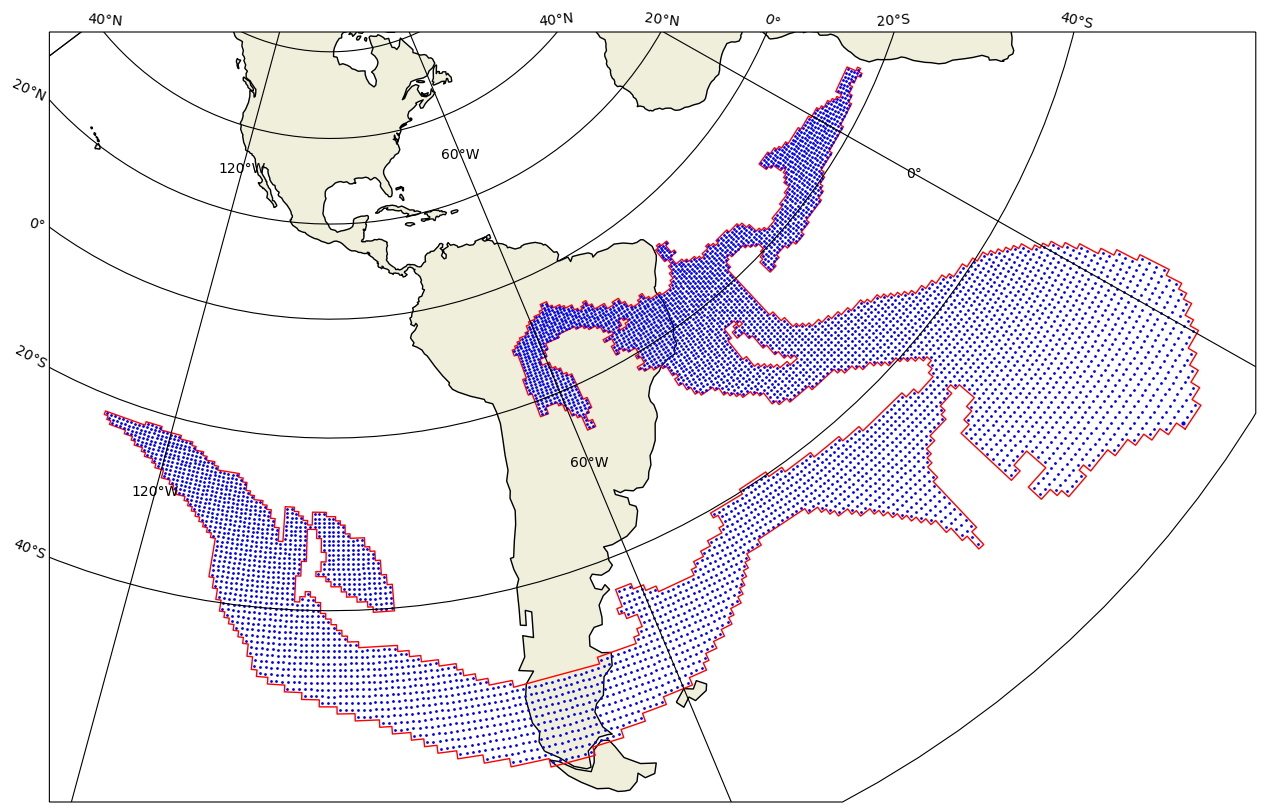

In [16]:
# just holes
AR = { "_id" : "2000.01.01.09.0_2", "timestamp" : ISODate("2000-01-01T09:00:00Z"), "raster" : [ [ -7.5, -57.5, [ 257.2109069824219 ] ], [ -6.875, -57.5, [ 262.97900390625 ] ], [ -6.25, -57.5, [ 260.35009765625 ] ], [ -5.625, -57.5, [ 253.9466094970703 ] ], [ -8.75, -57, [ 280.598876953125 ] ], [ -8.125, -57, [ 300.8905334472656 ] ], [ -7.5, -57, [ 312.01519775390625 ] ], [ -6.875, -57, [ 314.3218994140625 ] ], [ -6.25, -57, [ 306.8564147949219 ] ], [ -5.625, -57, [ 292.804443359375 ] ], [ -5, -57, [ 276.7730407714844 ] ], [ -4.375, -57, [ 260.2676696777344 ] ], [ -10, -56.5, [ 271.70489501953125 ] ], [ -9.375, -56.5, [ 315.8199157714844 ] ], [ -8.75, -56.5, [ 344.9346923828125 ] ], [ -8.125, -56.5, [ 359.0653991699219 ] ], [ -7.5, -56.5, [ 366.6893310546875 ] ], [ -6.875, -56.5, [ 367.89422607421875 ] ], [ -6.25, -56.5, [ 362.3500671386719 ] ], [ -5.625, -56.5, [ 348.0738220214844 ] ], [ -5, -56.5, [ 331.3640441894531 ] ], [ -4.375, -56.5, [ 312.67333984375 ] ], [ -3.75, -56.5, [ 291.9031982421875 ] ], [ -3.125, -56.5, [ 268.5904541015625 ] ], [ -11.25, -56, [ 258.52166748046875 ] ], [ -10.625, -56, [ 319.1709289550781 ] ], [ -10, -56, [ 363.90826416015625 ] ], [ -9.375, -56, [ 394.05401611328125 ] ], [ -8.75, -56, [ 411.2857971191406 ] ], [ -8.125, -56, [ 408.6597900390625 ] ], [ -7.5, -56, [ 402.40240478515625 ] ], [ -6.875, -56, [ 396.9669189453125 ] ], [ -6.25, -56, [ 393.62066650390625 ] ], [ -5.625, -56, [ 384.7048034667969 ] ], [ -5, -56, [ 371.9496154785156 ] ], [ -4.375, -56, [ 360.0161437988281 ] ], [ -3.75, -56, [ 349.49639892578125 ] ], [ -3.125, -56, [ 334.6976318359375 ] ], [ -2.5, -56, [ 308.8829040527344 ] ], [ -1.875, -56, [ 277.6648864746094 ] ], [ -13.125, -55.5, [ 250.0784912109375 ] ], [ -12.5, -55.5, [ 279.06964111328125 ] ], [ -11.875, -55.5, [ 328.8126220703125 ] ], [ -11.25, -55.5, [ 393.7594909667969 ] ], [ -10.625, -55.5, [ 434.3934631347656 ] ], [ -10, -55.5, [ 464.81829833984375 ] ], [ -9.375, -55.5, [ 483.8623962402344 ] ], [ -8.75, -55.5, [ 488.2508239746094 ] ], [ -8.125, -55.5, [ 465.6604919433594 ] ], [ -7.5, -55.5, [ 442.0914001464844 ] ], [ -6.875, -55.5, [ 424.6418762207031 ] ], [ -6.25, -55.5, [ 415.9258117675781 ] ], [ -5.625, -55.5, [ 412.2363586425781 ] ], [ -5, -55.5, [ 402.2554626464844 ] ], [ -4.375, -55.5, [ 395.509765625 ] ], [ -3.75, -55.5, [ 392.6634216308594 ] ], [ -3.125, -55.5, [ 390.9280090332031 ] ], [ -2.5, -55.5, [ 377.7406005859375 ] ], [ -1.875, -55.5, [ 356.6293029785156 ] ], [ -1.25, -55.5, [ 329.3638610839844 ] ], [ -0.625, -55.5, [ 294.98663330078125 ] ], [ -5.920304394294029e-13, -55.5, [ 254.09738159179688 ] ], [ -18.75, -55, [ 251.37625122070312 ] ], [ -18.125, -55, [ 256.2002868652344 ] ], [ -17.5, -55, [ 255.74412536621094 ] ], [ -16.875, -55, [ 251.1094207763672 ] ], [ -15.625, -55, [ 261.7615051269531 ] ], [ -15, -55, [ 266.873291015625 ] ], [ -14.375, -55, [ 276.9300231933594 ] ], [ -13.75, -55, [ 294.70343017578125 ] ], [ -13.125, -55, [ 325.0120544433594 ] ], [ -12.5, -55, [ 370.935791015625 ] ], [ -11.875, -55, [ 428.431396484375 ] ], [ -11.25, -55, [ 476.24383544921875 ] ], [ -10.625, -55, [ 500.03082275390625 ] ], [ -10, -55, [ 513.7366333007812 ] ], [ -9.375, -55, [ 516.9696044921875 ] ], [ -8.75, -55, [ 507.3723449707031 ] ], [ -8.125, -55, [ 480.0590515136719 ] ], [ -7.5, -55, [ 454.1693420410156 ] ], [ -6.875, -55, [ 437.8293151855469 ] ], [ -6.25, -55, [ 433.1327819824219 ] ], [ -5.625, -55, [ 438.6737365722656 ] ], [ -5, -55, [ 439.1817932128906 ] ], [ -4.375, -55, [ 438.5985107421875 ] ], [ -3.75, -55, [ 438.8711853027344 ] ], [ -3.125, -55, [ 439.37225341796875 ] ], [ -2.5, -55, [ 435.54833984375 ] ], [ -1.875, -55, [ 424.34820556640625 ] ], [ -1.25, -55, [ 406.99407958984375 ] ], [ -0.625, -55, [ 385.4599914550781 ] ], [ -5.920304394294029e-13, -55, [ 356.4061279296875 ] ], [ 0.625, -55, [ 306.59246826171875 ] ], [ -19.375, -54.5, [ 254.0163116455078 ] ], [ -18.75, -54.5, [ 265.05322265625 ] ], [ -18.125, -54.5, [ 274.7360534667969 ] ], [ -17.5, -54.5, [ 274.43524169921875 ] ], [ -16.875, -54.5, [ 273.3731384277344 ] ], [ -16.25, -54.5, [ 287.5740966796875 ] ], [ -15.625, -54.5, [ 290.510986328125 ] ], [ -15, -54.5, [ 298.86065673828125 ] ], [ -14.375, -54.5, [ 314.3140563964844 ] ], [ -13.75, -54.5, [ 337.0657958984375 ] ], [ -13.125, -54.5, [ 371.1330871582031 ] ], [ -12.5, -54.5, [ 410.6900329589844 ] ], [ -11.875, -54.5, [ 445.4579162597656 ] ], [ -11.25, -54.5, [ 470.40802001953125 ] ], [ -10.625, -54.5, [ 483.7618103027344 ] ], [ -10, -54.5, [ 488.338623046875 ] ], [ -9.375, -54.5, [ 486.32440185546875 ] ], [ -8.75, -54.5, [ 479.14599609375 ] ], [ -8.125, -54.5, [ 463.7416687011719 ] ], [ -7.5, -54.5, [ 445.25018310546875 ] ], [ -6.875, -54.5, [ 432.96624755859375 ] ], [ -6.25, -54.5, [ 430.3315734863281 ] ], [ -5.625, -54.5, [ 437.7215270996094 ] ], [ -5, -54.5, [ 450.1293640136719 ] ], [ -4.375, -54.5, [ 462.3944396972656 ] ], [ -3.75, -54.5, [ 475.43609619140625 ] ], [ -3.125, -54.5, [ 483.8912353515625 ] ], [ -2.5, -54.5, [ 484.04205322265625 ] ], [ -1.875, -54.5, [ 479.9286804199219 ] ], [ -1.25, -54.5, [ 473.0439453125 ] ], [ -0.625, -54.5, [ 455.3340759277344 ] ], [ -5.920304394294029e-13, -54.5, [ 431.1900939941406 ] ], [ 0.625, -54.5, [ 402.6719055175781 ] ], [ 1.25, -54.5, [ 350.4139709472656 ] ], [ 1.875, -54.5, [ 279.38238525390625 ] ], [ -20.625, -54, [ 251.41603088378906 ] ], [ -20, -54, [ 259.0171813964844 ] ], [ -19.375, -54, [ 257.20184326171875 ] ], [ -18.75, -54, [ 267.29742431640625 ] ], [ -18.125, -54, [ 274.097412109375 ] ], [ -17.5, -54, [ 276.5361633300781 ] ], [ -16.875, -54, [ 297.2879333496094 ] ], [ -16.25, -54, [ 303.1784362792969 ] ], [ -15.625, -54, [ 308.7548522949219 ] ], [ -15, -54, [ 315.7880554199219 ] ], [ -14.375, -54, [ 326.0915832519531 ] ], [ -13.75, -54, [ 339.8102722167969 ] ], [ -13.125, -54, [ 356.253662109375 ] ], [ -12.5, -54, [ 374.41168212890625 ] ], [ -11.875, -54, [ 394.52020263671875 ] ], [ -11.25, -54, [ 414.4706726074219 ] ], [ -10.625, -54, [ 431.0128173828125 ] ], [ -10, -54, [ 438.82220458984375 ] ], [ -9.375, -54, [ 441.0689697265625 ] ], [ -8.75, -54, [ 443.3665466308594 ] ], [ -8.125, -54, [ 447.9814453125 ] ], [ -7.5, -54, [ 443.5181884765625 ] ], [ -6.875, -54, [ 434.77947998046875 ] ], [ -6.25, -54, [ 427.05908203125 ] ], [ -5.625, -54, [ 425.1650695800781 ] ], [ -5, -54, [ 432.2761535644531 ] ], [ -4.375, -54, [ 450.0856628417969 ] ], [ -3.75, -54, [ 481.6551208496094 ] ], [ -3.125, -54, [ 510.8717346191406 ] ], [ -2.5, -54, [ 523.6810913085938 ] ], [ -1.875, -54, [ 519.70751953125 ] ], [ -1.25, -54, [ 522.6785888671875 ] ], [ -0.625, -54, [ 511.61773681640625 ] ], [ -5.920304394294029e-13, -54, [ 486.5885925292969 ] ], [ 0.625, -54, [ 457.7963562011719 ] ], [ 1.25, -54, [ 428.6632995605469 ] ], [ 1.875, -54, [ 374.57623291015625 ] ], [ 2.5, -54, [ 294.10400390625 ] ], [ -28.125, -53.5, [ 250.74778747558594 ] ], [ -20.625, -53.5, [ 251.984375 ] ], [ -20, -53.5, [ 254.2480926513672 ] ], [ -19.375, -53.5, [ 256.911865234375 ] ], [ -18.75, -53.5, [ 260.0805969238281 ] ], [ -18.125, -53.5, [ 269.3065185546875 ] ], [ -17.5, -53.5, [ 281.76519775390625 ] ], [ -16.875, -53.5, [ 294.40386962890625 ] ], [ -16.25, -53.5, [ 304.07891845703125 ] ], [ -15.625, -53.5, [ 309.7414855957031 ] ], [ -15, -53.5, [ 313.3000183105469 ] ], [ -14.375, -53.5, [ 316.1363525390625 ] ], [ -13.75, -53.5, [ 321.1737976074219 ] ], [ -13.125, -53.5, [ 330.64422607421875 ] ], [ -12.5, -53.5, [ 345.2801818847656 ] ], [ -11.875, -53.5, [ 363.9502868652344 ] ], [ -11.25, -53.5, [ 386.9090270996094 ] ], [ -10.625, -53.5, [ 403.29205322265625 ] ], [ -10, -53.5, [ 412.48211669921875 ] ], [ -9.375, -53.5, [ 421.22235107421875 ] ], [ -8.75, -53.5, [ 434.7939758300781 ] ], [ -8.125, -53.5, [ 448.874267578125 ] ], [ -7.5, -53.5, [ 446.6272888183594 ] ], [ -6.875, -53.5, [ 433.5251159667969 ] ], [ -6.25, -53.5, [ 420.6707458496094 ] ], [ -5.625, -53.5, [ 414.5478820800781 ] ], [ -5, -53.5, [ 418.6537170410156 ] ], [ -4.375, -53.5, [ 433.0572204589844 ] ], [ -3.75, -53.5, [ 471.4512023925781 ] ], [ -3.125, -53.5, [ 517.5680541992188 ] ], [ -2.5, -53.5, [ 540.7642822265625 ] ], [ -1.875, -53.5, [ 546.6826782226562 ] ], [ -1.25, -53.5, [ 554.7894897460938 ] ], [ -0.625, -53.5, [ 553.2874145507812 ] ], [ -5.920304394294029e-13, -53.5, [ 525.8978271484375 ] ], [ 0.625, -53.5, [ 493.5931701660156 ] ], [ 1.25, -53.5, [ 465.77154541015625 ] ], [ 1.875, -53.5, [ 441.5608825683594 ] ], [ 2.5, -53.5, [ 379.49871826171875 ] ], [ 3.125, -53.5, [ 288.34490966796875 ] ], [ -74.375, -53, [ 251.17013549804688 ] ], [ -73.75, -53, [ 261.4441833496094 ] ], [ -73.125, -53, [ 262.8340148925781 ] ], [ -72.5, -53, [ 264.6283264160156 ] ], [ -71.875, -53, [ 267.0211486816406 ] ], [ -71.25, -53, [ 269.9058837890625 ] ], [ -70.625, -53, [ 257.7942810058594 ] ], [ -28.125, -53, [ 258.4275817871094 ] ], [ -18.125, -53, [ 250.2928009033203 ] ], [ -17.5, -53, [ 275.92156982421875 ] ], [ -16.875, -53, [ 294.0771484375 ] ], [ -16.25, -53, [ 304.08026123046875 ] ], [ -15.625, -53, [ 313.3865661621094 ] ], [ -15, -53, [ 325.89898681640625 ] ], [ -14.375, -53, [ 338.2154235839844 ] ], [ -13.75, -53, [ 346.8502197265625 ] ], [ -13.125, -53, [ 349.8486328125 ] ], [ -12.5, -53, [ 350.10791015625 ] ], [ -11.875, -53, [ 353.1891784667969 ] ], [ -11.25, -53, [ 366.7158203125 ] ], [ -10.625, -53, [ 389.2459411621094 ] ], [ -10, -53, [ 414.1618347167969 ] ], [ -9.375, -53, [ 435.2857971191406 ] ], [ -8.75, -53, [ 446.0585632324219 ] ], [ -8.125, -53, [ 439.91912841796875 ] ], [ -7.5, -53, [ 420.08990478515625 ] ], [ -6.875, -53, [ 402.5417785644531 ] ], [ -6.25, -53, [ 388.2579345703125 ] ], [ -5.625, -53, [ 384.76416015625 ] ], [ -5, -53, [ 397.9291076660156 ] ], [ -4.375, -53, [ 426.9591369628906 ] ], [ -3.75, -53, [ 464.1576232910156 ] ], [ -3.125, -53, [ 509.4871520996094 ] ], [ -2.5, -53, [ 543.291015625 ] ], [ -1.875, -53, [ 567.8194580078125 ] ], [ -1.25, -53, [ 582.812744140625 ] ], [ -0.625, -53, [ 583.7932739257812 ] ], [ -5.920304394294029e-13, -53, [ 563.3956909179688 ] ], [ 0.625, -53, [ 520.6251831054688 ] ], [ 1.25, -53, [ 483.3103942871094 ] ], [ 1.875, -53, [ 459.0633239746094 ] ], [ 2.5, -53, [ 409.75408935546875 ] ], [ 3.125, -53, [ 326.8001403808594 ] ], [ -78.125, -52.5, [ 264.48565673828125 ] ], [ -77.5, -52.5, [ 286.0518493652344 ] ], [ -76.875, -52.5, [ 304.6889953613281 ] ], [ -76.25, -52.5, [ 325.6743469238281 ] ], [ -75.625, -52.5, [ 344.62322998046875 ] ], [ -75, -52.5, [ 358.09228515625 ] ], [ -74.375, -52.5, [ 372.53302001953125 ] ], [ -73.75, -52.5, [ 384.8199157714844 ] ], [ -73.125, -52.5, [ 377.8502502441406 ] ], [ -72.5, -52.5, [ 377.74285888671875 ] ], [ -71.875, -52.5, [ 374.42132568359375 ] ], [ -71.25, -52.5, [ 372.9173583984375 ] ], [ -70.625, -52.5, [ 355.3502197265625 ] ], [ -70, -52.5, [ 338.0570983886719 ] ], [ -69.375, -52.5, [ 322.7041015625 ] ], [ -68.75, -52.5, [ 308.9864501953125 ] ], [ -68.125, -52.5, [ 289.2562255859375 ] ], [ -67.5, -52.5, [ 271.5044860839844 ] ], [ -28.75, -52.5, [ 260.5546569824219 ] ], [ -28.125, -52.5, [ 269.28680419921875 ] ], [ -27.5, -52.5, [ 253.54656982421875 ] ], [ -18.125, -52.5, [ 252.47401428222656 ] ], [ -17.5, -52.5, [ 286.5281982421875 ] ], [ -16.875, -52.5, [ 302.67828369140625 ] ], [ -16.25, -52.5, [ 317.92364501953125 ] ], [ -15.625, -52.5, [ 342.4021301269531 ] ], [ -15, -52.5, [ 370.22991943359375 ] ], [ -14.375, -52.5, [ 392.7141418457031 ] ], [ -13.75, -52.5, [ 403.092529296875 ] ], [ -13.125, -52.5, [ 400.34552001953125 ] ], [ -12.5, -52.5, [ 382.74188232421875 ] ], [ -11.875, -52.5, [ 356.63092041015625 ] ], [ -11.25, -52.5, [ 350.8889465332031 ] ], [ -10.625, -52.5, [ 370.886474609375 ] ], [ -10, -52.5, [ 398.8891296386719 ] ], [ -9.375, -52.5, [ 413.6547546386719 ] ], [ -8.75, -52.5, [ 405.2827453613281 ] ], [ -8.125, -52.5, [ 382.01153564453125 ] ], [ -7.5, -52.5, [ 361.92327880859375 ] ], [ -6.875, -52.5, [ 356.74847412109375 ] ], [ -6.25, -52.5, [ 356.22344970703125 ] ], [ -5.625, -52.5, [ 363.1826171875 ] ], [ -5, -52.5, [ 390.294921875 ] ], [ -4.375, -52.5, [ 429.9809265136719 ] ], [ -3.75, -52.5, [ 465.9249267578125 ] ], [ -3.125, -52.5, [ 502.66937255859375 ] ], [ -2.5, -52.5, [ 548.0121459960938 ] ], [ -1.875, -52.5, [ 591.1994018554688 ] ], [ -1.25, -52.5, [ 618.223388671875 ] ], [ -0.625, -52.5, [ 619.5501098632812 ] ], [ -5.920304394294029e-13, -52.5, [ 595.3040771484375 ] ], [ 0.625, -52.5, [ 566.4014892578125 ] ], [ 1.25, -52.5, [ 515.3148803710938 ] ], [ 1.875, -52.5, [ 474.2393493652344 ] ], [ 2.5, -52.5, [ 427.59637451171875 ] ], [ 3.125, -52.5, [ 349.15264892578125 ] ], [ 3.75, -52.5, [ 253.63937377929688 ] ], [ -80.625, -52, [ 272.28717041015625 ] ], [ -80, -52, [ 304.2991943359375 ] ], [ -79.375, -52, [ 335.9853820800781 ] ], [ -78.75, -52, [ 368.07208251953125 ] ], [ -78.125, -52, [ 396.8155822753906 ] ], [ -77.5, -52, [ 423.4109191894531 ] ], [ -76.875, -52, [ 447.773681640625 ] ], [ -76.25, -52, [ 469.8477783203125 ] ], [ -75.625, -52, [ 479.4993591308594 ] ], [ -75, -52, [ 489.5265808105469 ] ], [ -74.375, -52, [ 499.878662109375 ] ], [ -73.75, -52, [ 503.0035705566406 ] ], [ -73.125, -52, [ 494.3572998046875 ] ], [ -72.5, -52, [ 503.5953369140625 ] ], [ -71.875, -52, [ 494.8902282714844 ] ], [ -71.25, -52, [ 475.108642578125 ] ], [ -70.625, -52, [ 469.5634460449219 ] ], [ -70, -52, [ 444.420166015625 ] ], [ -69.375, -52, [ 417.3963623046875 ] ], [ -68.75, -52, [ 395.4221496582031 ] ], [ -68.125, -52, [ 379.6463928222656 ] ], [ -67.5, -52, [ 365.935791015625 ] ], [ -66.875, -52, [ 349.6495361328125 ] ], [ -66.25, -52, [ 324.8050842285156 ] ], [ -65.625, -52, [ 299.4087219238281 ] ], [ -65, -52, [ 266.6133117675781 ] ], [ -28.75, -52, [ 273.1884765625 ] ], [ -28.125, -52, [ 274.2829284667969 ] ], [ -27.5, -52, [ 257.012451171875 ] ], [ -21.25, -52, [ 261.3713073730469 ] ], [ -20.625, -52, [ 265.12762451171875 ] ], [ -18.125, -52, [ 277.9984130859375 ] ], [ -17.5, -52, [ 305.13507080078125 ] ], [ -16.875, -52, [ 321.0771484375 ] ], [ -16.25, -52, [ 345.0074157714844 ] ], [ -15.625, -52, [ 372.6537780761719 ] ], [ -15, -52, [ 395.37548828125 ] ], [ -14.375, -52, [ 412.2784729003906 ] ], [ -13.75, -52, [ 425.0497131347656 ] ], [ -13.125, -52, [ 432.078369140625 ] ], [ -12.5, -52, [ 429.5215148925781 ] ], [ -11.875, -52, [ 413.92041015625 ] ], [ -11.25, -52, [ 400.6236572265625 ] ], [ -10.625, -52, [ 395.3897705078125 ] ], [ -10, -52, [ 388.8152770996094 ] ], [ -9.375, -52, [ 375.3280334472656 ] ], [ -8.75, -52, [ 357.8016357421875 ] ], [ -8.125, -52, [ 344.1879577636719 ] ], [ -7.5, -52, [ 348.1871337890625 ] ], [ -6.875, -52, [ 370.6197814941406 ] ], [ -6.25, -52, [ 386.940673828125 ] ], [ -5.625, -52, [ 393.333251953125 ] ], [ -5, -52, [ 406.8599548339844 ] ], [ -4.375, -52, [ 431.5464782714844 ] ], [ -3.75, -52, [ 465.6329650878906 ] ], [ -3.125, -52, [ 506.3499450683594 ] ], [ -2.5, -52, [ 567.8609008789062 ] ], [ -1.875, -52, [ 630.0872192382812 ] ], [ -1.25, -52, [ 661.1632080078125 ] ], [ -0.625, -52, [ 656.9660034179688 ] ], [ -5.920304394294029e-13, -52, [ 627.0582885742188 ] ], [ 0.625, -52, [ 595.1436767578125 ] ], [ 1.25, -52, [ 539.3968505859375 ] ], [ 1.875, -52, [ 489.320556640625 ] ], [ 2.5, -52, [ 445.861572265625 ] ], [ 3.125, -52, [ 366.02069091796875 ] ], [ 3.75, -52, [ 263.5762023925781 ] ], [ -83.125, -51.5, [ 265.4356994628906 ] ], [ -82.5, -51.5, [ 298.5959167480469 ] ], [ -81.875, -51.5, [ 332.4505615234375 ] ], [ -81.25, -51.5, [ 365.47564697265625 ] ], [ -80.625, -51.5, [ 398.1390686035156 ] ], [ -80, -51.5, [ 430.99066162109375 ] ], [ -79.375, -51.5, [ 463.7474670410156 ] ], [ -78.75, -51.5, [ 494.1440124511719 ] ], [ -78.125, -51.5, [ 517.092041015625 ] ], [ -77.5, -51.5, [ 534.3204956054688 ] ], [ -76.875, -51.5, [ 549.4060668945312 ] ], [ -76.25, -51.5, [ 565.837158203125 ] ], [ -75.625, -51.5, [ 562.686279296875 ] ], [ -75, -51.5, [ 566.1561889648438 ] ], [ -74.375, -51.5, [ 571.3557739257812 ] ], [ -73.75, -51.5, [ 572.936767578125 ] ], [ -73.125, -51.5, [ 562.6685180664062 ] ], [ -72.5, -51.5, [ 551.6486206054688 ] ], [ -71.875, -51.5, [ 542.8782348632812 ] ], [ -71.25, -51.5, [ 538.2972412109375 ] ], [ -70.625, -51.5, [ 525.5904541015625 ] ], [ -70, -51.5, [ 519.808349609375 ] ], [ -69.375, -51.5, [ 497.7438049316406 ] ], [ -68.75, -51.5, [ 476.6923522949219 ] ], [ -68.125, -51.5, [ 452.24468994140625 ] ], [ -67.5, -51.5, [ 433.6628112792969 ] ], [ -66.875, -51.5, [ 418.1332092285156 ] ], [ -66.25, -51.5, [ 399.90496826171875 ] ], [ -65.625, -51.5, [ 380.2787780761719 ] ], [ -65, -51.5, [ 350.2046203613281 ] ], [ -64.375, -51.5, [ 320.5652770996094 ] ], [ -63.75, -51.5, [ 294.1781005859375 ] ], [ -63.125, -51.5, [ 274.28778076171875 ] ], [ -62.5, -51.5, [ 259.0108337402344 ] ], [ -29.375, -51.5, [ 262.1684875488281 ] ], [ -28.75, -51.5, [ 284.0962219238281 ] ], [ -28.125, -51.5, [ 279.0548095703125 ] ], [ -27.5, -51.5, [ 260.03643798828125 ] ], [ -21.25, -51.5, [ 272.4309997558594 ] ], [ -20.625, -51.5, [ 291.6726379394531 ] ], [ -20, -51.5, [ 295.0272521972656 ] ], [ -19.375, -51.5, [ 282.1749267578125 ] ], [ -18.75, -51.5, [ 283.8040771484375 ] ], [ -18.125, -51.5, [ 304.11322021484375 ] ], [ -17.5, -51.5, [ 317.5785827636719 ] ], [ -16.875, -51.5, [ 333.616455078125 ] ], [ -16.25, -51.5, [ 360.51788330078125 ] ], [ -15.625, -51.5, [ 389.9790344238281 ] ], [ -15, -51.5, [ 412.7678527832031 ] ], [ -14.375, -51.5, [ 428.2481689453125 ] ], [ -13.75, -51.5, [ 439.68511962890625 ] ], [ -13.125, -51.5, [ 449.7430114746094 ] ], [ -12.5, -51.5, [ 461.4135437011719 ] ], [ -11.875, -51.5, [ 475.85064697265625 ] ], [ -11.25, -51.5, [ 483.7599792480469 ] ], [ -10.625, -51.5, [ 473.82318115234375 ] ], [ -10, -51.5, [ 444.5054626464844 ] ], [ -9.375, -51.5, [ 408.8512878417969 ] ], [ -8.75, -51.5, [ 385.43463134765625 ] ], [ -8.125, -51.5, [ 384.2859802246094 ] ], [ -7.5, -51.5, [ 396.9496154785156 ] ], [ -6.875, -51.5, [ 413.3838806152344 ] ], [ -6.25, -51.5, [ 420.1552429199219 ] ], [ -5.625, -51.5, [ 420.8479309082031 ] ], [ -5, -51.5, [ 438.94012451171875 ] ], [ -4.375, -51.5, [ 456.31427001953125 ] ], [ -3.75, -51.5, [ 470.9197692871094 ] ], [ -3.125, -51.5, [ 510.8997497558594 ] ], [ -2.5, -51.5, [ 589.3179931640625 ] ], [ -1.875, -51.5, [ 668.121337890625 ] ], [ -1.25, -51.5, [ 691.8529052734375 ] ], [ -0.625, -51.5, [ 674.2246704101562 ] ], [ -5.920304394294029e-13, -51.5, [ 644.3159790039062 ] ], [ 0.625, -51.5, [ 616.4209594726562 ] ], [ 1.25, -51.5, [ 558.6262817382812 ] ], [ 1.875, -51.5, [ 499.1768493652344 ] ], [ 2.5, -51.5, [ 444.35870361328125 ] ], [ 3.125, -51.5, [ 374.660888671875 ] ], [ 3.75, -51.5, [ 261.31134033203125 ] ], [ -85, -51, [ 264.5164489746094 ] ], [ -84.375, -51, [ 305.0701904296875 ] ], [ -83.75, -51, [ 347.66253662109375 ] ], [ -83.125, -51, [ 382.52099609375 ] ], [ -82.5, -51, [ 415.7648010253906 ] ], [ -81.875, -51, [ 449.2922668457031 ] ], [ -81.25, -51, [ 481.8508605957031 ] ], [ -80.625, -51, [ 513.5596313476562 ] ], [ -80, -51, [ 540.0211181640625 ] ], [ -79.375, -51, [ 560.0620727539062 ] ], [ -78.75, -51, [ 576.9021606445312 ] ], [ -78.125, -51, [ 588.4509887695312 ] ], [ -77.5, -51, [ 592.8091430664062 ] ], [ -76.875, -51, [ 593.522216796875 ] ], [ -76.25, -51, [ 595.3512573242188 ] ], [ -75.625, -51, [ 589.5108642578125 ] ], [ -75, -51, [ 586.3114013671875 ] ], [ -74.375, -51, [ 584.0062866210938 ] ], [ -73.75, -51, [ 545.8082275390625 ] ], [ -73.125, -51, [ 553.6748657226562 ] ], [ -72.5, -51, [ 552.3135986328125 ] ], [ -71.875, -51, [ 555.9886474609375 ] ], [ -71.25, -51, [ 543.4124145507812 ] ], [ -70.625, -51, [ 532.1753540039062 ] ], [ -70, -51, [ 536.0667114257812 ] ], [ -69.375, -51, [ 530.1106567382812 ] ], [ -68.75, -51, [ 518.2164306640625 ] ], [ -68.125, -51, [ 497.7816162109375 ] ], [ -67.5, -51, [ 483.3188171386719 ] ], [ -66.875, -51, [ 471.0234069824219 ] ], [ -66.25, -51, [ 452.385498046875 ] ], [ -65.625, -51, [ 433.6169738769531 ] ], [ -65, -51, [ 408.8951721191406 ] ], [ -64.375, -51, [ 384.5978088378906 ] ], [ -63.75, -51, [ 359.2283020019531 ] ], [ -63.125, -51, [ 337.0663146972656 ] ], [ -62.5, -51, [ 323.94403076171875 ] ], [ -61.875, -51, [ 316.8424377441406 ] ], [ -61.25, -51, [ 311.41851806640625 ] ], [ -60.625, -51, [ 297.8014221191406 ] ], [ -60, -51, [ 287.9825439453125 ] ], [ -59.375, -51, [ 266.6649475097656 ] ], [ -29.375, -51, [ 288.17205810546875 ] ], [ -28.75, -51, [ 292.6628112792969 ] ], [ -28.125, -51, [ 282.0652770996094 ] ], [ -27.5, -51, [ 260.8945007324219 ] ], [ -21.25, -51, [ 270.0245056152344 ] ], [ -20.625, -51, [ 300.45269775390625 ] ], [ -20, -51, [ 324.9288635253906 ] ], [ -19.375, -51, [ 331.31658935546875 ] ], [ -18.75, -51, [ 325.9529724121094 ] ], [ -18.125, -51, [ 322.386474609375 ] ], [ -17.5, -51, [ 323.9544372558594 ] ], [ -16.875, -51, [ 340.5435791015625 ] ], [ -16.25, -51, [ 371.01458740234375 ] ], [ -15.625, -51, [ 400.6092224121094 ] ], [ -15, -51, [ 425.2511291503906 ] ], [ -14.375, -51, [ 444.74456787109375 ] ], [ -13.75, -51, [ 457.2661437988281 ] ], [ -13.125, -51, [ 468.03619384765625 ] ], [ -12.5, -51, [ 482.50958251953125 ] ], [ -11.875, -51, [ 502.6737976074219 ] ], [ -11.25, -51, [ 520.1818237304688 ] ], [ -10.625, -51, [ 524.9463500976562 ] ], [ -10, -51, [ 515.1366577148438 ] ], [ -9.375, -51, [ 497.24072265625 ] ], [ -8.75, -51, [ 479.7066345214844 ] ], [ -8.125, -51, [ 467.6502685546875 ] ], [ -7.5, -51, [ 457.6107482910156 ] ], [ -6.875, -51, [ 445.6022644042969 ] ], [ -6.25, -51, [ 425.715087890625 ] ], [ -5.625, -51, [ 423.7043762207031 ] ], [ -5, -51, [ 465.09149169921875 ] ], [ -4.375, -51, [ 497.9325256347656 ] ], [ -3.75, -51, [ 502.4671630859375 ] ], [ -3.125, -51, [ 523.03125 ] ], [ -2.5, -51, [ 592.43115234375 ] ], [ -1.875, -51, [ 668.3327026367188 ] ], [ -1.25, -51, [ 684.1773071289062 ] ], [ -0.625, -51, [ 681.8687133789062 ] ], [ -5.920304394294029e-13, -51, [ 667.21630859375 ] ], [ 0.625, -51, [ 628.436767578125 ] ], [ 1.25, -51, [ 567.1614990234375 ] ], [ 1.875, -51, [ 500.2375793457031 ] ], [ 2.5, -51, [ 437.9213562011719 ] ], [ 3.125, -51, [ 358.7673645019531 ] ], [ 3.75, -51, [ 252.0862274169922 ] ], [ -86.25, -50.5, [ 283.8522033691406 ] ], [ -85.625, -50.5, [ 330.1357116699219 ] ], [ -85, -50.5, [ 373.82177734375 ] ], [ -84.375, -50.5, [ 414.31494140625 ] ], [ -83.75, -50.5, [ 449.0610046386719 ] ], [ -83.125, -50.5, [ 481.0954895019531 ] ], [ -82.5, -50.5, [ 511.9805603027344 ] ], [ -81.875, -50.5, [ 540.9467163085938 ] ], [ -81.25, -50.5, [ 566.9578247070312 ] ], [ -80.625, -50.5, [ 586.7796630859375 ] ], [ -80, -50.5, [ 596.393798828125 ] ], [ -79.375, -50.5, [ 602.1156616210938 ] ], [ -78.75, -50.5, [ 602.8330078125 ] ], [ -78.125, -50.5, [ 595.3831176757812 ] ], [ -77.5, -50.5, [ 591.9998779296875 ] ], [ -76.875, -50.5, [ 589.4556274414062 ] ], [ -76.25, -50.5, [ 585.70751953125 ] ], [ -75.625, -50.5, [ 577.0761108398438 ] ], [ -75, -50.5, [ 588.7538452148438 ] ], [ -74.375, -50.5, [ 576.1699829101562 ] ], [ -73.75, -50.5, [ 533.4381103515625 ] ], [ -73.125, -50.5, [ 490.25262451171875 ] ], [ -72.5, -50.5, [ 485.635498046875 ] ], [ -71.875, -50.5, [ 473.2816162109375 ] ], [ -71.25, -50.5, [ 492.6869201660156 ] ], [ -70.625, -50.5, [ 502.80010986328125 ] ], [ -70, -50.5, [ 508.09783935546875 ] ], [ -69.375, -50.5, [ 511.08209228515625 ] ], [ -68.75, -50.5, [ 503.3773193359375 ] ], [ -68.125, -50.5, [ 494.65625 ] ], [ -67.5, -50.5, [ 492.3011779785156 ] ], [ -66.875, -50.5, [ 489.55255126953125 ] ], [ -66.25, -50.5, [ 480.1180725097656 ] ], [ -65.625, -50.5, [ 471.9568176269531 ] ], [ -65, -50.5, [ 452.1228942871094 ] ], [ -64.375, -50.5, [ 431.4953918457031 ] ], [ -63.75, -50.5, [ 410.4044189453125 ] ], [ -63.125, -50.5, [ 391.5495910644531 ] ], [ -62.5, -50.5, [ 376.6497802734375 ] ], [ -61.875, -50.5, [ 365.586181640625 ] ], [ -61.25, -50.5, [ 356.4187927246094 ] ], [ -60.625, -50.5, [ 348.2358093261719 ] ], [ -60, -50.5, [ 338.82122802734375 ] ], [ -59.375, -50.5, [ 325.8996276855469 ] ], [ -58.75, -50.5, [ 309.175048828125 ] ], [ -58.125, -50.5, [ 281.20196533203125 ] ], [ -57.5, -50.5, [ 251.6761932373047 ] ], [ -30, -50.5, [ 278.37274169921875 ] ], [ -29.375, -50.5, [ 300.2088928222656 ] ], [ -28.75, -50.5, [ 297.0164794921875 ] ], [ -28.125, -50.5, [ 284.1024169921875 ] ], [ -27.5, -50.5, [ 262.42181396484375 ] ], [ -21.25, -50.5, [ 265.3885803222656 ] ], [ -20.625, -50.5, [ 295.9056091308594 ] ], [ -20, -50.5, [ 323.5638427734375 ] ], [ -19.375, -50.5, [ 338.6020812988281 ] ], [ -18.75, -50.5, [ 336.1234436035156 ] ], [ -18.125, -50.5, [ 325.60382080078125 ] ], [ -17.5, -50.5, [ 318.2783203125 ] ], [ -16.875, -50.5, [ 328.72998046875 ] ], [ -16.25, -50.5, [ 349.0269470214844 ] ], [ -15.625, -50.5, [ 368.1566467285156 ] ], [ -15, -50.5, [ 389.49578857421875 ] ], [ -14.375, -50.5, [ 414.60687255859375 ] ], [ -13.75, -50.5, [ 436.0403137207031 ] ], [ -13.125, -50.5, [ 458.14434814453125 ] ], [ -12.5, -50.5, [ 481.5079040527344 ] ], [ -11.875, -50.5, [ 505.41015625 ] ], [ -11.25, -50.5, [ 527.690673828125 ] ], [ -10.625, -50.5, [ 542.118408203125 ] ], [ -10, -50.5, [ 547.3471069335938 ] ], [ -9.375, -50.5, [ 546.0584716796875 ] ], [ -8.75, -50.5, [ 536.263671875 ] ], [ -8.125, -50.5, [ 513.4718017578125 ] ], [ -7.5, -50.5, [ 482.60443115234375 ] ], [ -6.875, -50.5, [ 453.5993347167969 ] ], [ -6.25, -50.5, [ 428.0783996582031 ] ], [ -5.625, -50.5, [ 430.9880676269531 ] ], [ -5, -50.5, [ 479.7473449707031 ] ], [ -4.375, -50.5, [ 525.9434204101562 ] ], [ -3.75, -50.5, [ 543.2540283203125 ] ], [ -3.125, -50.5, [ 561.3136596679688 ] ], [ -2.5, -50.5, [ 602.1682739257812 ] ], [ -1.875, -50.5, [ 642.12744140625 ] ], [ -1.25, -50.5, [ 652.5631713867188 ] ], [ -0.625, -50.5, [ 664.3214721679688 ] ], [ -5.920304394294029e-13, -50.5, [ 657.71337890625 ] ], [ 0.625, -50.5, [ 629.2387084960938 ] ], [ 1.25, -50.5, [ 567.5130004882812 ] ], [ 1.875, -50.5, [ 491.2297058105469 ] ], [ 2.5, -50.5, [ 421.02642822265625 ] ], [ 3.125, -50.5, [ 335.34002685546875 ] ], [ -87.5, -50, [ 294.277587890625 ] ], [ -86.875, -50, [ 346.0212707519531 ] ], [ -86.25, -50, [ 391.0638427734375 ] ], [ -85.625, -50, [ 432.30999755859375 ] ], [ -85, -50, [ 471.601318359375 ] ], [ -84.375, -50, [ 505.72625732421875 ] ], [ -83.75, -50, [ 534.8836669921875 ] ], [ -83.125, -50, [ 559.9879150390625 ] ], [ -82.5, -50, [ 581.4295043945312 ] ], [ -81.875, -50, [ 599.2374877929688 ] ], [ -81.25, -50, [ 611.9529418945312 ] ], [ -80.625, -50, [ 614.6387939453125 ] ], [ -80, -50, [ 618.0404052734375 ] ], [ -79.375, -50, [ 617.0512084960938 ] ], [ -78.75, -50, [ 612.8003540039062 ] ], [ -78.125, -50, [ 607.3146362304688 ] ], [ -77.5, -50, [ 604.4087524414062 ] ], [ -76.875, -50, [ 599.9674682617188 ] ], [ -76.25, -50, [ 603.2259521484375 ] ], [ -75.625, -50, [ 599.0982666015625 ] ], [ -75, -50, [ 590.1368408203125 ] ], [ -74.375, -50, [ 545.19091796875 ] ], [ -73.75, -50, [ 449.981201171875 ] ], [ -73.125, -50, [ 456.1087646484375 ] ], [ -72.5, -50, [ 475.64630126953125 ] ], [ -71.875, -50, [ 460.219482421875 ] ], [ -71.25, -50, [ 461.3059997558594 ] ], [ -70.625, -50, [ 467.6883850097656 ] ], [ -70, -50, [ 463.1185302734375 ] ], [ -69.375, -50, [ 476.9200439453125 ] ], [ -68.75, -50, [ 475.9934997558594 ] ], [ -68.125, -50, [ 470.9242858886719 ] ], [ -67.5, -50, [ 468.91192626953125 ] ], [ -66.875, -50, [ 470.2171325683594 ] ], [ -66.25, -50, [ 472.0577697753906 ] ], [ -65.625, -50, [ 472.3093566894531 ] ], [ -65, -50, [ 463.18548583984375 ] ], [ -64.375, -50, [ 452.912353515625 ] ], [ -63.75, -50, [ 436.44366455078125 ] ], [ -63.125, -50, [ 419.2983703613281 ] ], [ -62.5, -50, [ 405.5417785644531 ] ], [ -61.875, -50, [ 393.1838684082031 ] ], [ -61.25, -50, [ 386.8875732421875 ] ], [ -60.625, -50, [ 380.9451904296875 ] ], [ -60, -50, [ 380.0502624511719 ] ], [ -59.375, -50, [ 376.6099548339844 ] ], [ -58.75, -50, [ 369.8728332519531 ] ], [ -58.125, -50, [ 349.7311706542969 ] ], [ -57.5, -50, [ 320.8913269042969 ] ], [ -56.875, -50, [ 278.706298828125 ] ], [ -30.625, -50, [ 267.8641357421875 ] ], [ -30, -50, [ 303.47393798828125 ] ], [ -29.375, -50, [ 308.0682067871094 ] ], [ -28.75, -50, [ 300.3332824707031 ] ], [ -28.125, -50, [ 286.33935546875 ] ], [ -27.5, -50, [ 263.25799560546875 ] ], [ -21.25, -50, [ 265.3644714355469 ] ], [ -20.625, -50, [ 297.0120849609375 ] ], [ -20, -50, [ 328.6814270019531 ] ], [ -19.375, -50, [ 340.0656433105469 ] ], [ -18.75, -50, [ 336.6250915527344 ] ], [ -18.125, -50, [ 329.2859191894531 ] ], [ -17.5, -50, [ 316.41815185546875 ] ], [ -16.875, -50, [ 311.87933349609375 ] ], [ -16.25, -50, [ 313.7268371582031 ] ], [ -15.625, -50, [ 316.704833984375 ] ], [ -15, -50, [ 331.64605712890625 ] ], [ -14.375, -50, [ 358.70843505859375 ] ], [ -13.75, -50, [ 389.64794921875 ] ], [ -13.125, -50, [ 426.3116149902344 ] ], [ -12.5, -50, [ 461.9538269042969 ] ], [ -11.875, -50, [ 495.99407958984375 ] ], [ -11.25, -50, [ 525.2527465820312 ] ], [ -10.625, -50, [ 549.5932006835938 ] ], [ -10, -50, [ 563.7857055664062 ] ], [ -9.375, -50, [ 563.9721069335938 ] ], [ -8.75, -50, [ 549.9805908203125 ] ], [ -8.125, -50, [ 522.6661376953125 ] ], [ -7.5, -50, [ 490.4247741699219 ] ], [ -6.875, -50, [ 463.94464111328125 ] ], [ -6.25, -50, [ 449.0693359375 ] ], [ -5.625, -50, [ 462.3658142089844 ] ], [ -5, -50, [ 506.6486511230469 ] ], [ -4.375, -50, [ 539.7265625 ] ], [ -3.75, -50, [ 576.2396850585938 ] ], [ -3.125, -50, [ 625.6762084960938 ] ], [ -2.5, -50, [ 653.5557250976562 ] ], [ -1.875, -50, [ 641.3448486328125 ] ], [ -1.25, -50, [ 646.16552734375 ] ], [ -0.625, -50, [ 644.965087890625 ] ], [ -5.920304394294029e-13, -50, [ 646.1280517578125 ] ], [ 0.625, -50, [ 619.0548706054688 ] ], [ 1.25, -50, [ 553.7705078125 ] ], [ 1.875, -50, [ 470.6272277832031 ] ], [ 2.5, -50, [ 391.3567810058594 ] ], [ 3.125, -50, [ 306.69512939453125 ] ], [ -89.375, -49.5, [ 261.7290344238281 ] ], [ -88.75, -49.5, [ 312.9193115234375 ] ], [ -88.125, -49.5, [ 364.26971435546875 ] ], [ -87.5, -49.5, [ 411.252685546875 ] ], [ -86.875, -49.5, [ 453.6480407714844 ] ], [ -86.25, -49.5, [ 495.2427978515625 ] ], [ -85.625, -49.5, [ 531.9718627929688 ] ], [ -85, -49.5, [ 563.3767700195312 ] ], [ -84.375, -49.5, [ 590.29150390625 ] ], [ -83.75, -49.5, [ 610.6041870117188 ] ], [ -83.125, -49.5, [ 622.502685546875 ] ], [ -82.5, -49.5, [ 630.8704223632812 ] ], [ -81.875, -49.5, [ 635.779296875 ] ], [ -81.25, -49.5, [ 640.6881103515625 ] ], [ -80.625, -49.5, [ 643.8320922851562 ] ], [ -80, -49.5, [ 643.933837890625 ] ], [ -79.375, -49.5, [ 643.1875610351562 ] ], [ -78.75, -49.5, [ 642.8703002929688 ] ], [ -78.125, -49.5, [ 641.9851684570312 ] ], [ -77.5, -49.5, [ 642.7537231445312 ] ], [ -76.875, -49.5, [ 640.4234008789062 ] ], [ -76.25, -49.5, [ 654.31982421875 ] ], [ -75.625, -49.5, [ 632.4708251953125 ] ], [ -75, -49.5, [ 581.7949829101562 ] ], [ -74.375, -49.5, [ 523.53271484375 ] ], [ -73.75, -49.5, [ 444.6730041503906 ] ], [ -73.125, -49.5, [ 429.48431396484375 ] ], [ -72.5, -49.5, [ 426.7950134277344 ] ], [ -71.875, -49.5, [ 431.61578369140625 ] ], [ -71.25, -49.5, [ 435.1415100097656 ] ], [ -70.625, -49.5, [ 440.5401306152344 ] ], [ -70, -49.5, [ 445.6676025390625 ] ], [ -69.375, -49.5, [ 447.9939270019531 ] ], [ -68.75, -49.5, [ 441.8805236816406 ] ], [ -68.125, -49.5, [ 436.2733459472656 ] ], [ -67.5, -49.5, [ 433.93499755859375 ] ], [ -66.875, -49.5, [ 434.64276123046875 ] ], [ -66.25, -49.5, [ 437.37591552734375 ] ], [ -65.625, -49.5, [ 439.6569519042969 ] ], [ -65, -49.5, [ 436.7999267578125 ] ], [ -64.375, -49.5, [ 431.21649169921875 ] ], [ -63.75, -49.5, [ 425.63165283203125 ] ], [ -63.125, -49.5, [ 420.1324462890625 ] ], [ -62.5, -49.5, [ 414.3255920410156 ] ], [ -61.875, -49.5, [ 408.520263671875 ] ], [ -61.25, -49.5, [ 405.3943786621094 ] ], [ -60.625, -49.5, [ 407.90228271484375 ] ], [ -60, -49.5, [ 413.9356689453125 ] ], [ -59.375, -49.5, [ 418.8128356933594 ] ], [ -58.75, -49.5, [ 420.43145751953125 ] ], [ -58.125, -49.5, [ 413.2837219238281 ] ], [ -57.5, -49.5, [ 398.7207336425781 ] ], [ -56.875, -49.5, [ 375.7715759277344 ] ], [ -56.25, -49.5, [ 338.56805419921875 ] ], [ -55.625, -49.5, [ 289.11285400390625 ] ], [ -31.25, -49.5, [ 264.0137939453125 ] ], [ -30.625, -49.5, [ 302.2375793457031 ] ], [ -30, -49.5, [ 313.1253967285156 ] ], [ -29.375, -49.5, [ 310.0417175292969 ] ], [ -28.75, -49.5, [ 301.5616760253906 ] ], [ -28.125, -49.5, [ 286.23846435546875 ] ], [ -27.5, -49.5, [ 263.00811767578125 ] ], [ -21.25, -49.5, [ 265.64752197265625 ] ], [ -20.625, -49.5, [ 295.0498046875 ] ], [ -20, -49.5, [ 335.60345458984375 ] ], [ -19.375, -49.5, [ 351.3739318847656 ] ], [ -18.75, -49.5, [ 351.6462097167969 ] ], [ -18.125, -49.5, [ 357.8965759277344 ] ], [ -17.5, -49.5, [ 359.7133483886719 ] ], [ -16.875, -49.5, [ 354.877685546875 ] ], [ -16.25, -49.5, [ 343.0213623046875 ] ], [ -15.625, -49.5, [ 324.8263854980469 ] ], [ -15, -49.5, [ 317.0514831542969 ] ], [ -14.375, -49.5, [ 331.4209289550781 ] ], [ -13.75, -49.5, [ 363.8756103515625 ] ], [ -13.125, -49.5, [ 413.99627685546875 ] ], [ -12.5, -49.5, [ 464.81201171875 ] ], [ -11.875, -49.5, [ 507.31036376953125 ] ], [ -11.25, -49.5, [ 540.051513671875 ] ], [ -10.625, -49.5, [ 568.6359252929688 ] ], [ -10, -49.5, [ 589.3438110351562 ] ], [ -9.375, -49.5, [ 588.8101196289062 ] ], [ -8.75, -49.5, [ 566.8809204101562 ] ], [ -8.125, -49.5, [ 536.092041015625 ] ], [ -7.5, -49.5, [ 505.89715576171875 ] ], [ -6.875, -49.5, [ 482.1424560546875 ] ], [ -6.25, -49.5, [ 474.50494384765625 ] ], [ -5.625, -49.5, [ 494.53662109375 ] ], [ -5, -49.5, [ 532.43798828125 ] ], [ -4.375, -49.5, [ 560.1639404296875 ] ], [ -3.75, -49.5, [ 611.7999877929688 ] ], [ -3.125, -49.5, [ 690.1865844726562 ] ], [ -2.5, -49.5, [ 743.603759765625 ] ], [ -1.875, -49.5, [ 688.675537109375 ] ], [ -1.25, -49.5, [ 633.081787109375 ] ], [ -0.625, -49.5, [ 627.657470703125 ] ], [ -5.920304394294029e-13, -49.5, [ 633.0081176757812 ] ], [ 0.625, -49.5, [ 604.0320434570312 ] ], [ 1.25, -49.5, [ 530.8820190429688 ] ], [ 1.875, -49.5, [ 442.0265197753906 ] ], [ 2.5, -49.5, [ 355.47528076171875 ] ], [ 3.125, -49.5, [ 262.6275939941406 ] ], [ -90.625, -49, [ 282.51666259765625 ] ], [ -90, -49, [ 335.13214111328125 ] ], [ -89.375, -49, [ 395.96771240234375 ] ], [ -88.75, -49, [ 441.2499084472656 ] ], [ -88.125, -49, [ 478.5820617675781 ] ], [ -87.5, -49, [ 510.0964660644531 ] ], [ -86.875, -49, [ 539.8585815429688 ] ], [ -86.25, -49, [ 569.1558227539062 ] ], [ -85.625, -49, [ 599.31689453125 ] ], [ -85, -49, [ 624.343505859375 ] ], [ -84.375, -49, [ 640.2169799804688 ] ], [ -83.75, -49, [ 647.2418212890625 ] ], [ -83.125, -49, [ 650.8535766601562 ] ], [ -82.5, -49, [ 653.424560546875 ] ], [ -81.875, -49, [ 658.1886596679688 ] ], [ -81.25, -49, [ 667.8370361328125 ] ], [ -80.625, -49, [ 670.7816772460938 ] ], [ -80, -49, [ 698.9306030273438 ] ], [ -79.375, -49, [ 674.2623291015625 ] ], [ -78.75, -49, [ 700.1903686523438 ] ], [ -78.125, -49, [ 693.118896484375 ] ], [ -77.5, -49, [ 683.7622680664062 ] ], [ -76.875, -49, [ 654.7410888671875 ] ], [ -76.25, -49, [ 623.4859619140625 ] ], [ -75.625, -49, [ 553.60791015625 ] ], [ -75, -49, [ 528.2223510742188 ] ], [ -74.375, -49, [ 486.7038269042969 ] ], [ -73.75, -49, [ 443.106689453125 ] ], [ -73.125, -49, [ 412.1556396484375 ] ], [ -72.5, -49, [ 415.39654541015625 ] ], [ -71.875, -49, [ 417.0311279296875 ] ], [ -71.25, -49, [ 434.9104309082031 ] ], [ -70.625, -49, [ 431.7467041015625 ] ], [ -70, -49, [ 421.0305480957031 ] ], [ -69.375, -49, [ 419.0325622558594 ] ], [ -68.75, -49, [ 406.4456787109375 ] ], [ -68.125, -49, [ 410.8783874511719 ] ], [ -67.5, -49, [ 400.8071594238281 ] ], [ -66.875, -49, [ 393.16339111328125 ] ], [ -66.25, -49, [ 396.29931640625 ] ], [ -65.625, -49, [ 396.14642333984375 ] ], [ -65, -49, [ 396.7358093261719 ] ], [ -64.375, -49, [ 398.6722412109375 ] ], [ -63.75, -49, [ 400.9798583984375 ] ], [ -63.125, -49, [ 405.367431640625 ] ], [ -62.5, -49, [ 410.8219909667969 ] ], [ -61.875, -49, [ 413.2225036621094 ] ], [ -61.25, -49, [ 415.1524353027344 ] ], [ -60.625, -49, [ 417.9804382324219 ] ], [ -60, -49, [ 425.408935546875 ] ], [ -59.375, -49, [ 433.32757568359375 ] ], [ -58.75, -49, [ 439.6597900390625 ] ], [ -58.125, -49, [ 443.2685852050781 ] ], [ -57.5, -49, [ 441.1130676269531 ] ], [ -56.875, -49, [ 435.49688720703125 ] ], [ -56.25, -49, [ 421.69561767578125 ] ], [ -55.625, -49, [ 408.70245361328125 ] ], [ -55, -49, [ 357.983642578125 ] ], [ -54.375, -49, [ 298.76800537109375 ] ], [ -31.875, -49, [ 263.3970947265625 ] ], [ -31.25, -49, [ 303.0979309082031 ] ], [ -30.625, -49, [ 317.9706115722656 ] ], [ -30, -49, [ 318.2227478027344 ] ], [ -29.375, -49, [ 315.0766296386719 ] ], [ -28.75, -49, [ 307.6885070800781 ] ], [ -28.125, -49, [ 293.3248291015625 ] ], [ -27.5, -49, [ 272.0058288574219 ] ], [ -21.25, -49, [ 264.7069396972656 ] ], [ -20.625, -49, [ 290.0092468261719 ] ], [ -20, -49, [ 332.5230407714844 ] ], [ -19.375, -49, [ 356.7290954589844 ] ], [ -18.75, -49, [ 365.28607177734375 ] ], [ -18.125, -49, [ 380.15234375 ] ], [ -17.5, -49, [ 399.61761474609375 ] ], [ -16.875, -49, [ 410.74957275390625 ] ], [ -16.25, -49, [ 404.9775390625 ] ], [ -15.625, -49, [ 379.20330810546875 ] ], [ -15, -49, [ 346.7690124511719 ] ], [ -14.375, -49, [ 337.3254699707031 ] ], [ -13.75, -49, [ 364.4567565917969 ] ], [ -13.125, -49, [ 430.03753662109375 ] ], [ -12.5, -49, [ 507.94415283203125 ] ], [ -11.875, -49, [ 560.6178588867188 ] ], [ -11.25, -49, [ 583.8261108398438 ] ], [ -10.625, -49, [ 598.406005859375 ] ], [ -10, -49, [ 614.052001953125 ] ], [ -9.375, -49, [ 612.0292358398438 ] ], [ -8.75, -49, [ 586.603759765625 ] ], [ -8.125, -49, [ 555.3380737304688 ] ], [ -7.5, -49, [ 524.6783447265625 ] ], [ -6.875, -49, [ 499.2526550292969 ] ], [ -6.25, -49, [ 489.9335021972656 ] ], [ -5.625, -49, [ 504.7428894042969 ] ], [ -5, -49, [ 538.3855590820312 ] ], [ -4.375, -49, [ 576.6602783203125 ] ], [ -3.75, -49, [ 630.3101806640625 ] ], [ -3.125, -49, [ 729.5130004882812 ] ], [ -2.5, -49, [ 741.6738891601562 ] ], [ -1.875, -49, [ 681.6117553710938 ] ], [ -1.25, -49, [ 620.441162109375 ] ], [ -0.625, -49, [ 611.2715454101562 ] ], [ -5.920304394294029e-13, -49, [ 621.19580078125 ] ], [ 0.625, -49, [ 589.152587890625 ] ], [ 1.25, -49, [ 502.23736572265625 ] ], [ 1.875, -49, [ 408.3211669921875 ] ], [ 2.5, -49, [ 317.9306640625 ] ], [ -93.125, -48.5, [ 257.0311584472656 ] ], [ -92.5, -48.5, [ 287.55206298828125 ] ], [ -91.875, -48.5, [ 328.4078063964844 ] ], [ -91.25, -48.5, [ 365.5224304199219 ] ], [ -90.625, -48.5, [ 415.1573486328125 ] ], [ -90, -48.5, [ 458.4869689941406 ] ], [ -89.375, -48.5, [ 492.662109375 ] ], [ -88.75, -48.5, [ 518.9051513671875 ] ], [ -88.125, -48.5, [ 539.8657836914062 ] ], [ -87.5, -48.5, [ 562.30859375 ] ], [ -86.875, -48.5, [ 588.3638305664062 ] ], [ -86.25, -48.5, [ 616.0459594726562 ] ], [ -85.625, -48.5, [ 642.5057983398438 ] ], [ -85, -48.5, [ 654.3051147460938 ] ], [ -84.375, -48.5, [ 654.6279296875 ] ], [ -83.75, -48.5, [ 657.7491455078125 ] ], [ -83.125, -48.5, [ 665.9979858398438 ] ], [ -82.5, -48.5, [ 705.4132690429688 ] ], [ -81.875, -48.5, [ 717.5746459960938 ] ], [ -81.25, -48.5, [ 719.6043090820312 ] ], [ -80.625, -48.5, [ 712.326904296875 ] ], [ -80, -48.5, [ 703.7194213867188 ] ], [ -79.375, -48.5, [ 692.4905395507812 ] ], [ -78.75, -48.5, [ 661.2496948242188 ] ], [ -78.125, -48.5, [ 626.0548706054688 ] ], [ -77.5, -48.5, [ 591.9332885742188 ] ], [ -76.875, -48.5, [ 562.7725830078125 ] ], [ -76.25, -48.5, [ 530.4490356445312 ] ], [ -75.625, -48.5, [ 506.4416809082031 ] ], [ -75, -48.5, [ 481.775146484375 ] ], [ -74.375, -48.5, [ 445.5011901855469 ] ], [ -73.75, -48.5, [ 412.13409423828125 ] ], [ -73.125, -48.5, [ 416.8322448730469 ] ], [ -72.5, -48.5, [ 388.1083984375 ] ], [ -71.875, -48.5, [ 386.8459777832031 ] ], [ -71.25, -48.5, [ 401.3565368652344 ] ], [ -70.625, -48.5, [ 387.74151611328125 ] ], [ -70, -48.5, [ 398.3993835449219 ] ], [ -69.375, -48.5, [ 389.00115966796875 ] ], [ -68.75, -48.5, [ 389.3442077636719 ] ], [ -68.125, -48.5, [ 395.4786682128906 ] ], [ -67.5, -48.5, [ 383.56103515625 ] ], [ -66.875, -48.5, [ 381.95587158203125 ] ], [ -66.25, -48.5, [ 377.25531005859375 ] ], [ -65.625, -48.5, [ 373.5642395019531 ] ], [ -65, -48.5, [ 374.5743103027344 ] ], [ -64.375, -48.5, [ 375.5133056640625 ] ], [ -63.75, -48.5, [ 380.36041259765625 ] ], [ -63.125, -48.5, [ 388.2521057128906 ] ], [ -62.5, -48.5, [ 397.4184265136719 ] ], [ -61.875, -48.5, [ 407.06768798828125 ] ], [ -61.25, -48.5, [ 416.24371337890625 ] ], [ -60.625, -48.5, [ 425.4386291503906 ] ], [ -60, -48.5, [ 434.0168762207031 ] ], [ -59.375, -48.5, [ 442.3546447753906 ] ], [ -58.75, -48.5, [ 450.9005126953125 ] ], [ -58.125, -48.5, [ 460.102294921875 ] ], [ -57.5, -48.5, [ 465.7923278808594 ] ], [ -56.875, -48.5, [ 466.6065979003906 ] ], [ -56.25, -48.5, [ 462.4860534667969 ] ], [ -55.625, -48.5, [ 456.9025573730469 ] ], [ -55, -48.5, [ 446.7039489746094 ] ], [ -54.375, -48.5, [ 418.65740966796875 ] ], [ -53.75, -48.5, [ 351.76947021484375 ] ], [ -53.125, -48.5, [ 275.63812255859375 ] ], [ -32.5, -48.5, [ 275.3291931152344 ] ], [ -31.875, -48.5, [ 311.26641845703125 ] ], [ -31.25, -48.5, [ 325.0220642089844 ] ], [ -30.625, -48.5, [ 327.54351806640625 ] ], [ -30, -48.5, [ 328.32171630859375 ] ], [ -29.375, -48.5, [ 329.6413879394531 ] ], [ -28.75, -48.5, [ 325.1630554199219 ] ], [ -28.125, -48.5, [ 313.30401611328125 ] ], [ -27.5, -48.5, [ 293.6357421875 ] ], [ -26.875, -48.5, [ 256.942138671875 ] ], [ -21.25, -48.5, [ 264.6312561035156 ] ], [ -20.625, -48.5, [ 291.1239013671875 ] ], [ -20, -48.5, [ 322.77984619140625 ] ], [ -19.375, -48.5, [ 349.9253845214844 ] ], [ -18.75, -48.5, [ 363.8186340332031 ] ], [ -18.125, -48.5, [ 371.6258544921875 ] ], [ -17.5, -48.5, [ 386.2153625488281 ] ], [ -16.875, -48.5, [ 406.1856994628906 ] ], [ -16.25, -48.5, [ 412.9704895019531 ] ], [ -15.625, -48.5, [ 394.25579833984375 ] ], [ -15, -48.5, [ 363.7647705078125 ] ], [ -14.375, -48.5, [ 353.6508483886719 ] ], [ -13.75, -48.5, [ 394.0399475097656 ] ], [ -13.125, -48.5, [ 482.2971496582031 ] ], [ -12.5, -48.5, [ 567.7301635742188 ] ], [ -11.875, -48.5, [ 610.455322265625 ] ], [ -11.25, -48.5, [ 620.1665649414062 ] ], [ -10.625, -48.5, [ 622.192138671875 ] ], [ -10, -48.5, [ 624.2727661132812 ] ], [ -9.375, -48.5, [ 613.5779418945312 ] ], [ -8.75, -48.5, [ 589.5108642578125 ] ], [ -8.125, -48.5, [ 563.1469116210938 ] ], [ -7.5, -48.5, [ 536.4022827148438 ] ], [ -6.875, -48.5, [ 509.5985412597656 ] ], [ -6.25, -48.5, [ 493.0981750488281 ] ], [ -5.625, -48.5, [ 501.636474609375 ] ], [ -5, -48.5, [ 540.2177734375 ] ], [ -4.375, -48.5, [ 599.8929443359375 ] ], [ -3.75, -48.5, [ 693.65478515625 ] ], [ -3.125, -48.5, [ 729.7875366210938 ] ], [ -2.5, -48.5, [ 710.7474975585938 ] ], [ -1.875, -48.5, [ 650.7261962890625 ] ], [ -1.25, -48.5, [ 605.7301635742188 ] ], [ -0.625, -48.5, [ 603.0009765625 ] ], [ -5.920304394294029e-13, -48.5, [ 603.3726196289062 ] ], [ 0.625, -48.5, [ 555.8118896484375 ] ], [ 1.25, -48.5, [ 464.7209777832031 ] ], [ 1.875, -48.5, [ 370.1717224121094 ] ], [ 2.5, -48.5, [ 278.3214111328125 ] ], [ -95, -48, [ 270.1776123046875 ] ], [ -94.375, -48, [ 299.2499084472656 ] ], [ -93.75, -48, [ 333.9263916015625 ] ], [ -93.125, -48, [ 372.26507568359375 ] ], [ -92.5, -48, [ 408.3571472167969 ] ], [ -91.875, -48, [ 442.6893615722656 ] ], [ -91.25, -48, [ 476.7022705078125 ] ], [ -90.625, -48, [ 505.72528076171875 ] ], [ -90, -48, [ 531.2069091796875 ] ], [ -89.375, -48, [ 556.726318359375 ] ], [ -88.75, -48, [ 583.474365234375 ] ], [ -88.125, -48, [ 585.50439453125 ] ], [ -87.5, -48, [ 614.467529296875 ] ], [ -86.875, -48, [ 635.1126708984375 ] ], [ -86.25, -48, [ 679.39453125 ] ], [ -85.625, -48, [ 692.3591918945312 ] ], [ -85, -48, [ 701.5505981445312 ] ], [ -84.375, -48, [ 713.3226928710938 ] ], [ -83.75, -48, [ 722.5900268554688 ] ], [ -83.125, -48, [ 721.3480834960938 ] ], [ -82.5, -48, [ 713.5546264648438 ] ], [ -81.875, -48, [ 699.864501953125 ] ], [ -81.25, -48, [ 673.440185546875 ] ], [ -80.625, -48, [ 635.674072265625 ] ], [ -80, -48, [ 596.3544311523438 ] ], [ -79.375, -48, [ 553.3002319335938 ] ], [ -78.75, -48, [ 512.9622802734375 ] ], [ -78.125, -48, [ 478.40252685546875 ] ], [ -77.5, -48, [ 450.71710205078125 ] ], [ -76.875, -48, [ 426.7118225097656 ] ], [ -76.25, -48, [ 401.9752197265625 ] ], [ -75.625, -48, [ 385.15673828125 ] ], [ -75, -48, [ 379.9607849121094 ] ], [ -74.375, -48, [ 353.9676818847656 ] ], [ -73.75, -48, [ 355.2076416015625 ] ], [ -73.125, -48, [ 352.5322570800781 ] ], [ -72.5, -48, [ 309.055419921875 ] ], [ -71.875, -48, [ 315.3925476074219 ] ], [ -71.25, -48, [ 312.4991760253906 ] ], [ -70.625, -48, [ 317.753662109375 ] ], [ -70, -48, [ 317.4675598144531 ] ], [ -69.375, -48, [ 314.9222106933594 ] ], [ -68.75, -48, [ 318.92742919921875 ] ], [ -68.125, -48, [ 309.3711853027344 ] ], [ -67.5, -48, [ 319.96575927734375 ] ], [ -66.875, -48, [ 329.40277099609375 ] ], [ -66.25, -48, [ 329.41009521484375 ] ], [ -65.625, -48, [ 332.0034484863281 ] ], [ -65, -48, [ 334.945556640625 ] ], [ -64.375, -48, [ 342.46746826171875 ] ], [ -63.75, -48, [ 354.4294128417969 ] ], [ -63.125, -48, [ 363.99432373046875 ] ], [ -62.5, -48, [ 378.56048583984375 ] ], [ -61.875, -48, [ 388.2407531738281 ] ], [ -61.25, -48, [ 404.77056884765625 ] ], [ -60.625, -48, [ 416.277099609375 ] ], [ -60, -48, [ 430.5530700683594 ] ], [ -59.375, -48, [ 438.9710998535156 ] ], [ -58.75, -48, [ 450.0755920410156 ] ], [ -58.125, -48, [ 462.32049560546875 ] ], [ -57.5, -48, [ 476.9945373535156 ] ], [ -56.875, -48, [ 491.1087646484375 ] ], [ -56.25, -48, [ 492.5449523925781 ] ], [ -55.625, -48, [ 490.3655700683594 ] ], [ -55, -48, [ 497.2276611328125 ] ], [ -54.375, -48, [ 475.4573059082031 ] ], [ -53.75, -48, [ 460.0335998535156 ] ], [ -53.125, -48, [ 401.06842041015625 ] ], [ -52.5, -48, [ 324.1998596191406 ] ], [ -33.125, -48, [ 286.95684814453125 ] ], [ -32.5, -48, [ 319.43341064453125 ] ], [ -31.875, -48, [ 333.52899169921875 ] ], [ -31.25, -48, [ 337.8282775878906 ] ], [ -30.625, -48, [ 342.48956298828125 ] ], [ -30, -48, [ 352.3189392089844 ] ], [ -29.375, -48, [ 358.192138671875 ] ], [ -28.75, -48, [ 352.6802978515625 ] ], [ -28.125, -48, [ 342.55596923828125 ] ], [ -27.5, -48, [ 326.8740539550781 ] ], [ -26.875, -48, [ 291.45843505859375 ] ], [ -21.25, -48, [ 251.71568298339844 ] ], [ -20.625, -48, [ 280.5728759765625 ] ], [ -20, -48, [ 309.9091796875 ] ], [ -19.375, -48, [ 336.8081359863281 ] ], [ -18.75, -48, [ 348.9804382324219 ] ], [ -18.125, -48, [ 347.6044616699219 ] ], [ -17.5, -48, [ 354.9633483886719 ] ], [ -16.875, -48, [ 377.4479675292969 ] ], [ -16.25, -48, [ 395.366455078125 ] ], [ -15.625, -48, [ 392.4299011230469 ] ], [ -15, -48, [ 381.7364807128906 ] ], [ -14.375, -48, [ 389.4328308105469 ] ], [ -13.75, -48, [ 438.3902587890625 ] ], [ -13.125, -48, [ 527.7715454101562 ] ], [ -12.5, -48, [ 612.2489013671875 ] ], [ -11.875, -48, [ 650.7003784179688 ] ], [ -11.25, -48, [ 649.6010131835938 ] ], [ -10.625, -48, [ 634.5327758789062 ] ], [ -10, -48, [ 617.3241577148438 ] ], [ -9.375, -48, [ 594.0842895507812 ] ], [ -8.75, -48, [ 569.4855346679688 ] ], [ -8.125, -48, [ 548.8203125 ] ], [ -7.5, -48, [ 523.9064331054688 ] ], [ -6.875, -48, [ 494.7687683105469 ] ], [ -6.25, -48, [ 480.288330078125 ] ], [ -5.625, -48, [ 532.8435668945312 ] ], [ -5, -48, [ 589.6241455078125 ] ], [ -4.375, -48, [ 670.0599365234375 ] ], [ -3.75, -48, [ 735.0799560546875 ] ], [ -3.125, -48, [ 741.9021606445312 ] ], [ -2.5, -48, [ 691.7509765625 ] ], [ -1.875, -48, [ 626.8610229492188 ] ], [ -1.25, -48, [ 593.0206298828125 ] ], [ -0.625, -48, [ 596.0855102539062 ] ], [ -5.920304394294029e-13, -48, [ 584.5606689453125 ] ], [ 0.625, -48, [ 520.0761108398438 ] ], [ 1.25, -48, [ 425.85552978515625 ] ], [ 1.875, -48, [ 332.59942626953125 ] ], [ -96.875, -47.5, [ 283.53424072265625 ] ], [ -96.25, -47.5, [ 324.86956787109375 ] ], [ -95.625, -47.5, [ 361.5662536621094 ] ], [ -95, -47.5, [ 394.80853271484375 ] ], [ -94.375, -47.5, [ 422.4810485839844 ] ], [ -93.75, -47.5, [ 445.9638977050781 ] ], [ -93.125, -47.5, [ 466.499267578125 ] ], [ -92.5, -47.5, [ 486.2277526855469 ] ], [ -91.875, -47.5, [ 508.37823486328125 ] ], [ -91.25, -47.5, [ 530.5687255859375 ] ], [ -90.625, -47.5, [ 554.676513671875 ] ], [ -90, -47.5, [ 584.498291015625 ] ], [ -89.375, -47.5, [ 617.8367919921875 ] ], [ -88.75, -47.5, [ 651.947998046875 ] ], [ -88.125, -47.5, [ 677.1651000976562 ] ], [ -87.5, -47.5, [ 684.3305053710938 ] ], [ -86.875, -47.5, [ 686.74462890625 ] ], [ -86.25, -47.5, [ 703.3562622070312 ] ], [ -85.625, -47.5, [ 728.2401123046875 ] ], [ -85, -47.5, [ 746.5597534179688 ] ], [ -84.375, -47.5, [ 742.9275512695312 ] ], [ -83.75, -47.5, [ 705.4135131835938 ] ], [ -83.125, -47.5, [ 654.50048828125 ] ], [ -82.5, -47.5, [ 611.3886108398438 ] ], [ -81.875, -47.5, [ 572.6217651367188 ] ], [ -81.25, -47.5, [ 530.959716796875 ] ], [ -80.625, -47.5, [ 491.0105285644531 ] ], [ -80, -47.5, [ 446.00787353515625 ] ], [ -79.375, -47.5, [ 400.1253356933594 ] ], [ -78.75, -47.5, [ 356.8802185058594 ] ], [ -78.125, -47.5, [ 317.8400573730469 ] ], [ -77.5, -47.5, [ 288.5525207519531 ] ], [ -76.875, -47.5, [ 261.8514404296875 ] ], [ -66.875, -47.5, [ 258.3297119140625 ] ], [ -66.25, -47.5, [ 267.3966369628906 ] ], [ -65.625, -47.5, [ 269.3365173339844 ] ], [ -65, -47.5, [ 273.8547668457031 ] ], [ -64.375, -47.5, [ 281.70574951171875 ] ], [ -63.75, -47.5, [ 287.9214172363281 ] ], [ -63.125, -47.5, [ 297.0189208984375 ] ], [ -62.5, -47.5, [ 307.6484069824219 ] ], [ -61.875, -47.5, [ 324.8160400390625 ] ], [ -61.25, -47.5, [ 349.70709228515625 ] ], [ -60.625, -47.5, [ 380.92657470703125 ] ], [ -60, -47.5, [ 406.96771240234375 ] ], [ -59.375, -47.5, [ 427.60198974609375 ] ], [ -58.75, -47.5, [ 442.5823974609375 ] ], [ -58.125, -47.5, [ 456.6468200683594 ] ], [ -57.5, -47.5, [ 472.0722351074219 ] ], [ -56.875, -47.5, [ 490.08001708984375 ] ], [ -56.25, -47.5, [ 509.1563415527344 ] ], [ -55.625, -47.5, [ 517.8043212890625 ] ], [ -55, -47.5, [ 516.9647216796875 ] ], [ -54.375, -47.5, [ 515.9923706054688 ] ], [ -53.75, -47.5, [ 511.5624084472656 ] ], [ -53.125, -47.5, [ 496.09100341796875 ] ], [ -52.5, -47.5, [ 441.1593322753906 ] ], [ -51.875, -47.5, [ 372.010009765625 ] ], [ -51.25, -47.5, [ 273.5780944824219 ] ], [ -33.75, -47.5, [ 295.3290710449219 ] ], [ -33.125, -47.5, [ 330.642333984375 ] ], [ -32.5, -47.5, [ 345.5765686035156 ] ], [ -31.875, -47.5, [ 351.6205139160156 ] ], [ -31.25, -47.5, [ 356.8968811035156 ] ], [ -30.625, -47.5, [ 369.7149963378906 ] ], [ -30, -47.5, [ 380.5038146972656 ] ], [ -29.375, -47.5, [ 382.2860412597656 ] ], [ -28.75, -47.5, [ 374.14996337890625 ] ], [ -28.125, -47.5, [ 360.2576599121094 ] ], [ -27.5, -47.5, [ 345.2309265136719 ] ], [ -26.875, -47.5, [ 320.1610412597656 ] ], [ -26.25, -47.5, [ 276.46356201171875 ] ], [ -20, -47.5, [ 254.44725036621094 ] ], [ -19.375, -47.5, [ 284.7518615722656 ] ], [ -18.75, -47.5, [ 304.08172607421875 ] ], [ -18.125, -47.5, [ 310.66815185546875 ] ], [ -17.5, -47.5, [ 331.0987243652344 ] ], [ -16.875, -47.5, [ 373.4177551269531 ] ], [ -16.25, -47.5, [ 407.9167175292969 ] ], [ -15.625, -47.5, [ 414.9085998535156 ] ], [ -15, -47.5, [ 416.3733825683594 ] ], [ -14.375, -47.5, [ 439.6424255371094 ] ], [ -13.75, -47.5, [ 487.71527099609375 ] ], [ -13.125, -47.5, [ 558.59228515625 ] ], [ -12.5, -47.5, [ 634.2264404296875 ] ], [ -11.875, -47.5, [ 677.2229614257812 ] ], [ -11.25, -47.5, [ 671.8744506835938 ] ], [ -10.625, -47.5, [ 638.4605102539062 ] ], [ -10, -47.5, [ 601.0332641601562 ] ], [ -9.375, -47.5, [ 570.1181640625 ] ], [ -8.75, -47.5, [ 545.6019897460938 ] ], [ -8.125, -47.5, [ 521.3331909179688 ] ], [ -7.5, -47.5, [ 488.8638000488281 ] ], [ -6.875, -47.5, [ 498.2355041503906 ] ], [ -6.25, -47.5, [ 497.4289855957031 ] ], [ -5.625, -47.5, [ 533.373291015625 ] ], [ -5, -47.5, [ 606.4511108398438 ] ], [ -4.375, -47.5, [ 692.3312377929688 ] ], [ -3.75, -47.5, [ 752.732666015625 ] ], [ -3.125, -47.5, [ 745.1998901367188 ] ], [ -2.5, -47.5, [ 679.8170166015625 ] ], [ -1.875, -47.5, [ 611.3229370117188 ] ], [ -1.25, -47.5, [ 578.6471557617188 ] ], [ -0.625, -47.5, [ 585.9422607421875 ] ], [ -5.920304394294029e-13, -47.5, [ 563.4902954101562 ] ], [ 0.625, -47.5, [ 485.29949951171875 ] ], [ 1.25, -47.5, [ 388.1006164550781 ] ], [ 1.875, -47.5, [ 298.40350341796875 ] ], [ -98.75, -47, [ 256.3097839355469 ] ], [ -98.125, -47, [ 310.90234375 ] ], [ -97.5, -47, [ 364.77899169921875 ] ], [ -96.875, -47, [ 406.4566345214844 ] ], [ -96.25, -47, [ 438.8757019042969 ] ], [ -95.625, -47, [ 467.26971435546875 ] ], [ -95, -47, [ 489.9920349121094 ] ], [ -94.375, -47, [ 507.10430908203125 ] ], [ -93.75, -47, [ 524.024169921875 ] ], [ -93.125, -47, [ 544.218017578125 ] ], [ -92.5, -47, [ 564.4467163085938 ] ], [ -91.875, -47, [ 584.5426635742188 ] ], [ -91.25, -47, [ 606.981689453125 ] ], [ -90.625, -47, [ 630.1426391601562 ] ], [ -90, -47, [ 651.119140625 ] ], [ -89.375, -47, [ 667.1613159179688 ] ], [ -88.75, -47, [ 674.343017578125 ] ], [ -88.125, -47, [ 675.7005004882812 ] ], [ -87.5, -47, [ 680.9801635742188 ] ], [ -86.875, -47, [ 700.3126831054688 ] ], [ -86.25, -47, [ 723.1174926757812 ] ], [ -85.625, -47, [ 729.9458618164062 ] ], [ -85, -47, [ 700.5697021484375 ] ], [ -84.375, -47, [ 634.6295776367188 ] ], [ -83.75, -47, [ 558.8558349609375 ] ], [ -83.125, -47, [ 502.1404724121094 ] ], [ -82.5, -47, [ 464.7393493652344 ] ], [ -81.875, -47, [ 436.27264404296875 ] ], [ -81.25, -47, [ 407.8929748535156 ] ], [ -80.625, -47, [ 355.76025390625 ] ], [ -80, -47, [ 310.7452697753906 ] ], [ -79.375, -47, [ 272.8424072265625 ] ], [ -62.5, -47, [ 261.46044921875 ] ], [ -61.875, -47, [ 291.0012512207031 ] ], [ -61.25, -47, [ 323.4468078613281 ] ], [ -60.625, -47, [ 357.24951171875 ] ], [ -60, -47, [ 394.3414611816406 ] ], [ -59.375, -47, [ 418.03326416015625 ] ], [ -58.75, -47, [ 440.05670166015625 ] ], [ -58.125, -47, [ 451.05078125 ] ], [ -57.5, -47, [ 461.628173828125 ] ], [ -56.875, -47, [ 469.2177734375 ] ], [ -56.25, -47, [ 489.8176574707031 ] ], [ -55.625, -47, [ 502.3843078613281 ] ], [ -55, -47, [ 510.58575439453125 ] ], [ -54.375, -47, [ 515.5892333984375 ] ], [ -53.75, -47, [ 517.4263916015625 ] ], [ -53.125, -47, [ 512.6643676757812 ] ], [ -52.5, -47, [ 495.85235595703125 ] ], [ -51.875, -47, [ 457.7568054199219 ] ], [ -51.25, -47, [ 373.8895568847656 ] ], [ -50.625, -47, [ 290.7223815917969 ] ], [ -35, -47, [ 271.9364013671875 ] ], [ -34.375, -47, [ 304.9079284667969 ] ], [ -33.75, -47, [ 333.0626525878906 ] ], [ -33.125, -47, [ 352.788818359375 ] ], [ -32.5, -47, [ 365.1212463378906 ] ], [ -31.875, -47, [ 374.4186096191406 ] ], [ -31.25, -47, [ 386.35028076171875 ] ], [ -30.625, -47, [ 398.3111877441406 ] ], [ -30, -47, [ 403.8962707519531 ] ], [ -29.375, -47, [ 401.56744384765625 ] ], [ -28.75, -47, [ 390.3192138671875 ] ], [ -28.125, -47, [ 374.8282165527344 ] ], [ -27.5, -47, [ 362.78759765625 ] ], [ -26.875, -47, [ 348.42962646484375 ] ], [ -26.25, -47, [ 313.36322021484375 ] ], [ -25.625, -47, [ 268.6596984863281 ] ], [ -18.75, -47, [ 256.130126953125 ] ], [ -18.125, -47, [ 275.7716064453125 ] ], [ -17.5, -47, [ 305.9541320800781 ] ], [ -16.875, -47, [ 364.7138671875 ] ], [ -16.25, -47, [ 408.9903564453125 ] ], [ -15.625, -47, [ 426.3402099609375 ] ], [ -15, -47, [ 445.2790832519531 ] ], [ -14.375, -47, [ 482.604736328125 ] ], [ -13.75, -47, [ 524.0872192382812 ] ], [ -13.125, -47, [ 575.1232299804688 ] ], [ -12.5, -47, [ 645.1399536132812 ] ], [ -11.875, -47, [ 691.3862915039062 ] ], [ -11.25, -47, [ 678.6670532226562 ] ], [ -10.625, -47, [ 631.66259765625 ] ], [ -10, -47, [ 587.0177001953125 ] ], [ -9.375, -47, [ 555.2090454101562 ] ], [ -8.75, -47, [ 525.3944702148438 ] ], [ -8.125, -47, [ 524.3860473632812 ] ], [ -7.5, -47, [ 484.665771484375 ] ], [ -6.875, -47, [ 470.74810791015625 ] ], [ -6.25, -47, [ 491.19873046875 ] ], [ -5.625, -47, [ 549.7329711914062 ] ], [ -5, -47, [ 637.4829711914062 ] ], [ -4.375, -47, [ 717.0134887695312 ] ], [ -3.75, -47, [ 761.4154052734375 ] ], [ -3.125, -47, [ 735.7827758789062 ] ], [ -2.5, -47, [ 660.9593505859375 ] ], [ -1.875, -47, [ 595.788330078125 ] ], [ -1.25, -47, [ 569.2418212890625 ] ], [ -0.625, -47, [ 570.8091430664062 ] ], [ -5.920304394294029e-13, -47, [ 530.3042602539062 ] ], [ 0.625, -47, [ 444.2967529296875 ] ], [ 1.25, -47, [ 349.2353820800781 ] ], [ 1.875, -47, [ 263.3531188964844 ] ], [ -100.625, -46.5, [ 255.28089904785156 ] ], [ -100, -46.5, [ 277.6976318359375 ] ], [ -99.375, -46.5, [ 307.09661865234375 ] ], [ -98.75, -46.5, [ 350.1465759277344 ] ], [ -98.125, -46.5, [ 399.9544677734375 ] ], [ -97.5, -46.5, [ 443.35797119140625 ] ], [ -96.875, -46.5, [ 481.5257568359375 ] ], [ -96.25, -46.5, [ 520.95556640625 ] ], [ -95.625, -46.5, [ 555.4762573242188 ] ], [ -95, -46.5, [ 575.8462524414062 ] ], [ -94.375, -46.5, [ 589.5133056640625 ] ], [ -93.75, -46.5, [ 603.4190063476562 ] ], [ -93.125, -46.5, [ 615.2120971679688 ] ], [ -92.5, -46.5, [ 624.405517578125 ] ], [ -91.875, -46.5, [ 633.166748046875 ] ], [ -91.25, -46.5, [ 640.871337890625 ] ], [ -90.625, -46.5, [ 646.7857055664062 ] ], [ -90, -46.5, [ 641.134765625 ] ], [ -89.375, -46.5, [ 632.2487182617188 ] ], [ -88.75, -46.5, [ 632.137451171875 ] ], [ -88.125, -46.5, [ 644.5985717773438 ] ], [ -87.5, -46.5, [ 662.6936645507812 ] ], [ -86.875, -46.5, [ 674.1083374023438 ] ], [ -86.25, -46.5, [ 662.0147094726562 ] ], [ -85.625, -46.5, [ 613.2958374023438 ] ], [ -85, -46.5, [ 540.0812377929688 ] ], [ -84.375, -46.5, [ 461.5427551269531 ] ], [ -83.75, -46.5, [ 397.5502624511719 ] ], [ -83.125, -46.5, [ 349.4135437011719 ] ], [ -82.5, -46.5, [ 327.4539794921875 ] ], [ -81.875, -46.5, [ 308.6759948730469 ] ], [ -81.25, -46.5, [ 282.8684387207031 ] ], [ -80.625, -46.5, [ 257.250244140625 ] ], [ -61.875, -46.5, [ 253.4407501220703 ] ], [ -61.25, -46.5, [ 274.86553955078125 ] ], [ -60.625, -46.5, [ 309.22894287109375 ] ], [ -60, -46.5, [ 344.0133972167969 ] ], [ -59.375, -46.5, [ 379.0068359375 ] ], [ -58.75, -46.5, [ 403.03216552734375 ] ], [ -58.125, -46.5, [ 426.2352600097656 ] ], [ -57.5, -46.5, [ 436.5942687988281 ] ], [ -56.875, -46.5, [ 453.63897705078125 ] ], [ -56.25, -46.5, [ 457.0716857910156 ] ], [ -55.625, -46.5, [ 468.6107482910156 ] ], [ -55, -46.5, [ 483.09356689453125 ] ], [ -54.375, -46.5, [ 494.1866760253906 ] ], [ -53.75, -46.5, [ 499.84130859375 ] ], [ -53.125, -46.5, [ 499.59259033203125 ] ], [ -52.5, -46.5, [ 489.9009094238281 ] ], [ -51.875, -46.5, [ 468.84869384765625 ] ], [ -51.25, -46.5, [ 419.1482238769531 ] ], [ -50.625, -46.5, [ 352.6727600097656 ] ], [ -50, -46.5, [ 278.8559265136719 ] ], [ -35.625, -46.5, [ 289.9069519042969 ] ], [ -35, -46.5, [ 316.9870300292969 ] ], [ -34.375, -46.5, [ 338.9930419921875 ] ], [ -33.75, -46.5, [ 361.04034423828125 ] ], [ -33.125, -46.5, [ 380.535400390625 ] ], [ -32.5, -46.5, [ 395.846435546875 ] ], [ -31.875, -46.5, [ 408.77227783203125 ] ], [ -31.25, -46.5, [ 419.005126953125 ] ], [ -30.625, -46.5, [ 422.64447021484375 ] ], [ -30, -46.5, [ 421.2980651855469 ] ], [ -29.375, -46.5, [ 416.66510009765625 ] ], [ -28.75, -46.5, [ 408.4730224609375 ] ], [ -28.125, -46.5, [ 395.9440612792969 ] ], [ -27.5, -46.5, [ 383.4195556640625 ] ], [ -26.875, -46.5, [ 373.77972412109375 ] ], [ -26.25, -46.5, [ 353.5211486816406 ] ], [ -25.625, -46.5, [ 313.242431640625 ] ], [ -25, -46.5, [ 274.10638427734375 ] ], [ -24.375, -46.5, [ 255.12001037597656 ] ], [ -17.5, -46.5, [ 277.00640869140625 ] ], [ -16.875, -46.5, [ 334.5189514160156 ] ], [ -16.25, -46.5, [ 387.2320556640625 ] ], [ -15.625, -46.5, [ 427.7192687988281 ] ], [ -15, -46.5, [ 470.6471252441406 ] ], [ -14.375, -46.5, [ 518.85986328125 ] ], [ -13.75, -46.5, [ 554.5682373046875 ] ], [ -13.125, -46.5, [ 591.2119140625 ] ], [ -12.5, -46.5, [ 651.2236938476562 ] ], [ -11.875, -46.5, [ 685.9884033203125 ] ], [ -11.25, -46.5, [ 664.1307983398438 ] ], [ -10.625, -46.5, [ 615.7396850585938 ] ], [ -10, -46.5, [ 577.77734375 ] ], [ -9.375, -46.5, [ 585.2457275390625 ] ], [ -8.75, -46.5, [ 541.6146240234375 ] ], [ -8.125, -46.5, [ 490.3337097167969 ] ], [ -7.5, -46.5, [ 457.9211120605469 ] ], [ -6.875, -46.5, [ 463.633056640625 ] ], [ -6.25, -46.5, [ 515.544189453125 ] ], [ -5.625, -46.5, [ 609.4448852539062 ] ], [ -5, -46.5, [ 709.093017578125 ] ], [ -4.375, -46.5, [ 759.9275512695312 ] ], [ -3.75, -46.5, [ 758.2747802734375 ] ], [ -3.125, -46.5, [ 709.592529296875 ] ], [ -2.5, -46.5, [ 642.5636596679688 ] ], [ -1.875, -46.5, [ 593.13232421875 ] ], [ -1.25, -46.5, [ 573.5072631835938 ] ], [ -0.625, -46.5, [ 552.1197509765625 ] ], [ -5.920304394294029e-13, -46.5, [ 488.841064453125 ] ], [ 0.625, -46.5, [ 398.0700378417969 ] ], [ 1.25, -46.5, [ 310.9437561035156 ] ], [ -102.5, -46, [ 258.67584228515625 ] ], [ -101.875, -46, [ 267.6588439941406 ] ], [ -101.25, -46, [ 280.88739013671875 ] ], [ -100.625, -46, [ 299.7543029785156 ] ], [ -100, -46, [ 325.6319274902344 ] ], [ -99.375, -46, [ 360.3136901855469 ] ], [ -98.75, -46, [ 408.09332275390625 ] ], [ -98.125, -46, [ 464.3249206542969 ] ], [ -97.5, -46, [ 519.732177734375 ] ], [ -96.875, -46, [ 568.6863403320312 ] ], [ -96.25, -46, [ 599.204345703125 ] ], [ -95.625, -46, [ 610.1878051757812 ] ], [ -95, -46, [ 611.1929321289062 ] ], [ -94.375, -46, [ 610.4124145507812 ] ], [ -93.75, -46, [ 608.042724609375 ] ], [ -93.125, -46, [ 603.5410766601562 ] ], [ -92.5, -46, [ 598.5291137695312 ] ], [ -91.875, -46, [ 585.8251953125 ] ], [ -91.25, -46, [ 566.126708984375 ] ], [ -90.625, -46, [ 550.6187133789062 ] ], [ -90, -46, [ 547.9405517578125 ] ], [ -89.375, -46, [ 563.8739013671875 ] ], [ -88.75, -46, [ 585.1306762695312 ] ], [ -88.125, -46, [ 604.2877807617188 ] ], [ -87.5, -46, [ 603.5706787109375 ] ], [ -86.875, -46, [ 578.3832397460938 ] ], [ -86.25, -46, [ 526.5584106445312 ] ], [ -85.625, -46, [ 454.2072448730469 ] ], [ -85, -46, [ 383.7399597167969 ] ], [ -84.375, -46, [ 335.2276611328125 ] ], [ -83.75, -46, [ 304.6540832519531 ] ], [ -83.125, -46, [ 286.26861572265625 ] ], [ -82.5, -46, [ 273.3655700683594 ] ], [ -81.875, -46, [ 262.638916015625 ] ], [ -61.25, -46, [ 254.2876739501953 ] ], [ -60.625, -46, [ 294.6765441894531 ] ], [ -60, -46, [ 331.63812255859375 ] ], [ -59.375, -46, [ 351.1618347167969 ] ], [ -58.75, -46, [ 360.13714599609375 ] ], [ -58.125, -46, [ 387.59381103515625 ] ], [ -57.5, -46, [ 396.01812744140625 ] ], [ -56.875, -46, [ 403.4885559082031 ] ], [ -56.25, -46, [ 405.9402160644531 ] ], [ -55.625, -46, [ 415.6223449707031 ] ], [ -55, -46, [ 438.5365295410156 ] ], [ -54.375, -46, [ 460.07574462890625 ] ], [ -53.75, -46, [ 474.87066650390625 ] ], [ -53.125, -46, [ 478.4896240234375 ] ], [ -52.5, -46, [ 472.17626953125 ] ], [ -51.875, -46, [ 455.124267578125 ] ], [ -51.25, -46, [ 424.43792724609375 ] ], [ -50.625, -46, [ 380.8063049316406 ] ], [ -50, -46, [ 328.2526550292969 ] ], [ -49.375, -46, [ 270.906982421875 ] ], [ -36.875, -46, [ 255.19834899902344 ] ], [ -36.25, -46, [ 303.6156005859375 ] ], [ -35.625, -46, [ 330.0365905761719 ] ], [ -35, -46, [ 349.46484375 ] ], [ -34.375, -46, [ 373.2792663574219 ] ], [ -33.75, -46, [ 400.08697509765625 ] ], [ -33.125, -46, [ 422.5278625488281 ] ], [ -32.5, -46, [ 438.98431396484375 ] ], [ -31.875, -46, [ 447.6644592285156 ] ], [ -31.25, -46, [ 446.0717468261719 ] ], [ -30.625, -46, [ 440.18426513671875 ] ], [ -30, -46, [ 436.2820129394531 ] ], [ -29.375, -46, [ 434.23748779296875 ] ], [ -28.75, -46, [ 430.7359313964844 ] ], [ -28.125, -46, [ 422.22515869140625 ] ], [ -27.5, -46, [ 411.7776184082031 ] ], [ -26.875, -46, [ 401.6561279296875 ] ], [ -26.25, -46, [ 385.6876525878906 ] ], [ -25.625, -46, [ 353.5325927734375 ] ], [ -25, -46, [ 311.8733215332031 ] ], [ -24.375, -46, [ 285.416748046875 ] ], [ -23.75, -46, [ 273.6475524902344 ] ], [ -23.125, -46, [ 269.7237548828125 ] ], [ -22.5, -46, [ 264.517578125 ] ], [ -21.875, -46, [ 251.749267578125 ] ], [ -17.5, -46, [ 264.1164245605469 ] ], [ -16.875, -46, [ 319.6341857910156 ] ], [ -16.25, -46, [ 376.8358459472656 ] ], [ -15.625, -46, [ 433.3005676269531 ] ], [ -15, -46, [ 494.74761962890625 ] ], [ -14.375, -46, [ 546.837890625 ] ], [ -13.75, -46, [ 571.4114379882812 ] ], [ -13.125, -46, [ 602.6836547851562 ] ], [ -12.5, -46, [ 641.0964965820312 ] ], [ -11.875, -46, [ 701.9149780273438 ] ], [ -11.25, -46, [ 675.915283203125 ] ], [ -10.625, -46, [ 635.7193603515625 ] ], [ -10, -46, [ 600.5333862304688 ] ], [ -9.375, -46, [ 562.2689819335938 ] ], [ -8.75, -46, [ 509.2479553222656 ] ], [ -8.125, -46, [ 466.36737060546875 ] ], [ -7.5, -46, [ 453.5923767089844 ] ], [ -6.875, -46, [ 486.784423828125 ] ], [ -6.25, -46, [ 588.7176513671875 ] ], [ -5.625, -46, [ 716.0477294921875 ] ], [ -5, -46, [ 789.8082275390625 ] ], [ -4.375, -46, [ 786.1918334960938 ] ], [ -3.75, -46, [ 745.746337890625 ] ], [ -3.125, -46, [ 691.2462158203125 ] ], [ -2.5, -46, [ 634.7860717773438 ] ], [ -1.875, -46, [ 595.3709716796875 ] ], [ -1.25, -46, [ 569.5292358398438 ] ], [ -0.625, -46, [ 524.0906982421875 ] ], [ -5.920304394294029e-13, -46, [ 440.40814208984375 ] ], [ 0.625, -46, [ 351.863037109375 ] ], [ 1.25, -46, [ 272.623046875 ] ], [ -103.75, -45.5, [ 256.4794616699219 ] ], [ -103.125, -45.5, [ 262.1141662597656 ] ], [ -102.5, -45.5, [ 268.6302185058594 ] ], [ -101.875, -45.5, [ 281.91204833984375 ] ], [ -101.25, -45.5, [ 305.9443359375 ] ], [ -100.625, -45.5, [ 342.0462646484375 ] ], [ -100, -45.5, [ 384.4963073730469 ] ], [ -99.375, -45.5, [ 433.7545166015625 ] ], [ -98.75, -45.5, [ 493.51202392578125 ] ], [ -98.125, -45.5, [ 546.7950439453125 ] ], [ -97.5, -45.5, [ 562.4407958984375 ] ], [ -96.875, -45.5, [ 541.2338256835938 ] ], [ -96.25, -45.5, [ 527.3720092773438 ] ], [ -95.625, -45.5, [ 529.1293334960938 ] ], [ -95, -45.5, [ 535.9749145507812 ] ], [ -94.375, -45.5, [ 536.3117065429688 ] ], [ -93.75, -45.5, [ 527.5272216796875 ] ], [ -93.125, -45.5, [ 511.91949462890625 ] ], [ -92.5, -45.5, [ 480.0592346191406 ] ], [ -91.875, -45.5, [ 449.1385192871094 ] ], [ -91.25, -45.5, [ 431.6877746582031 ] ], [ -90.625, -45.5, [ 435.18023681640625 ] ], [ -90, -45.5, [ 458.5592956542969 ] ], [ -89.375, -45.5, [ 489.1626892089844 ] ], [ -88.75, -45.5, [ 512.8828735351562 ] ], [ -88.125, -45.5, [ 506.8348083496094 ] ], [ -87.5, -45.5, [ 479.333984375 ] ], [ -86.875, -45.5, [ 432.88983154296875 ] ], [ -86.25, -45.5, [ 379.5209045410156 ] ], [ -85.625, -45.5, [ 334.4528503417969 ] ], [ -85, -45.5, [ 309.4040832519531 ] ], [ -84.375, -45.5, [ 293.04937744140625 ] ], [ -83.75, -45.5, [ 278.6686706542969 ] ], [ -83.125, -45.5, [ 265.5732116699219 ] ], [ -82.5, -45.5, [ 253.59153747558594 ] ], [ -61.25, -45.5, [ 282.8045654296875 ] ], [ -60.625, -45.5, [ 319.3341064453125 ] ], [ -60, -45.5, [ 339.5621032714844 ] ], [ -59.375, -45.5, [ 338.009521484375 ] ], [ -58.75, -45.5, [ 349.7201232910156 ] ], [ -58.125, -45.5, [ 344.7693176269531 ] ], [ -57.5, -45.5, [ 344.6060485839844 ] ], [ -56.875, -45.5, [ 344.62774658203125 ] ], [ -56.25, -45.5, [ 343.7137145996094 ] ], [ -55.625, -45.5, [ 348.51177978515625 ] ], [ -55, -45.5, [ 372.2716979980469 ] ], [ -54.375, -45.5, [ 403.58172607421875 ] ], [ -53.75, -45.5, [ 436.4584045410156 ] ], [ -53.125, -45.5, [ 450.8616027832031 ] ], [ -52.5, -45.5, [ 454.1069641113281 ] ], [ -51.875, -45.5, [ 441.237548828125 ] ], [ -51.25, -45.5, [ 417.0597229003906 ] ], [ -50.625, -45.5, [ 386.26190185546875 ] ], [ -50, -45.5, [ 351.6979064941406 ] ], [ -49.375, -45.5, [ 309.0966491699219 ] ], [ -48.75, -45.5, [ 268.96026611328125 ] ], [ -37.5, -45.5, [ 272.9981994628906 ] ], [ -36.875, -45.5, [ 314.20745849609375 ] ], [ -36.25, -45.5, [ 341.6946716308594 ] ], [ -35.625, -45.5, [ 356.8115539550781 ] ], [ -35, -45.5, [ 380.9785461425781 ] ], [ -34.375, -45.5, [ 413.6747741699219 ] ], [ -33.75, -45.5, [ 444.3694152832031 ] ], [ -33.125, -45.5, [ 461.4685363769531 ] ], [ -32.5, -45.5, [ 467.3468933105469 ] ], [ -31.875, -45.5, [ 464.1014404296875 ] ], [ -31.25, -45.5, [ 456.70733642578125 ] ], [ -30.625, -45.5, [ 448.8785400390625 ] ], [ -30, -45.5, [ 447.2735290527344 ] ], [ -29.375, -45.5, [ 448.58294677734375 ] ], [ -28.75, -45.5, [ 447.7406311035156 ] ], [ -28.125, -45.5, [ 442.2969055175781 ] ], [ -27.5, -45.5, [ 452.234130859375 ] ], [ -26.875, -45.5, [ 415.40228271484375 ] ], [ -26.25, -45.5, [ 401.4761962890625 ] ], [ -25.625, -45.5, [ 381.59747314453125 ] ], [ -25, -45.5, [ 351.97808837890625 ] ], [ -24.375, -45.5, [ 340.4826354980469 ] ], [ -23.75, -45.5, [ 319.44805908203125 ] ], [ -23.125, -45.5, [ 289.8237609863281 ] ], [ -22.5, -45.5, [ 287.0848083496094 ] ], [ -21.875, -45.5, [ 277.4410400390625 ] ], [ -21.25, -45.5, [ 256.5052795410156 ] ], [ -17.5, -45.5, [ 285.4332580566406 ] ], [ -16.875, -45.5, [ 331.096435546875 ] ], [ -16.25, -45.5, [ 382.2605895996094 ] ], [ -15.625, -45.5, [ 449.80596923828125 ] ], [ -15, -45.5, [ 515.5206298828125 ] ], [ -14.375, -45.5, [ 555.0628051757812 ] ], [ -13.75, -45.5, [ 570.6181640625 ] ], [ -13.125, -45.5, [ 585.9765014648438 ] ], [ -12.5, -45.5, [ 653.9816284179688 ] ], [ -11.875, -45.5, [ 669.9364624023438 ] ], [ -11.25, -45.5, [ 642.6104736328125 ] ], [ -10.625, -45.5, [ 600.638671875 ] ], [ -10, -45.5, [ 562.9286499023438 ] ], [ -9.375, -45.5, [ 522.1124877929688 ] ], [ -8.75, -45.5, [ 488.1149597167969 ] ], [ -8.125, -45.5, [ 479.22515869140625 ] ], [ -7.5, -45.5, [ 504.5662841796875 ] ], [ -6.875, -45.5, [ 586.7621459960938 ] ], [ -6.25, -45.5, [ 725.1565551757812 ] ], [ -5.625, -45.5, [ 823.9701538085938 ] ], [ -5, -45.5, [ 823.7607421875 ] ], [ -4.375, -45.5, [ 770.2449951171875 ] ], [ -3.75, -45.5, [ 721.1096801757812 ] ], [ -3.125, -45.5, [ 676.8995971679688 ] ], [ -2.5, -45.5, [ 628.6103515625 ] ], [ -1.875, -45.5, [ 587.064453125 ] ], [ -1.25, -45.5, [ 543.71728515625 ] ], [ -0.625, -45.5, [ 477.5206298828125 ] ], [ -5.920304394294029e-13, -45.5, [ 384.91986083984375 ] ], [ 0.625, -45.5, [ 303.4667663574219 ] ], [ -104.375, -45, [ 255.5534210205078 ] ], [ -103.75, -45, [ 266.384765625 ] ], [ -103.125, -45, [ 275.5203857421875 ] ], [ -102.5, -45, [ 287.99456787109375 ] ], [ -101.875, -45, [ 315.4560241699219 ] ], [ -101.25, -45, [ 358.7500305175781 ] ], [ -100.625, -45, [ 411.6533508300781 ] ], [ -100, -45, [ 461.2527160644531 ] ], [ -99.375, -45, [ 510.46136474609375 ] ], [ -98.75, -45, [ 544.8335571289062 ] ], [ -98.125, -45, [ 539.2904052734375 ] ], [ -97.5, -45, [ 497.6346740722656 ] ], [ -96.875, -45, [ 453.86346435546875 ] ], [ -96.25, -45, [ 430.2910461425781 ] ], [ -95.625, -45, [ 421.55328369140625 ] ], [ -95, -45, [ 423.7852478027344 ] ], [ -94.375, -45, [ 421.0461730957031 ] ], [ -93.75, -45, [ 404.6663818359375 ] ], [ -93.125, -45, [ 371.3597412109375 ] ], [ -92.5, -45, [ 358.5487365722656 ] ], [ -91.875, -45, [ 354.64654541015625 ] ], [ -91.25, -45, [ 364.1752624511719 ] ], [ -90.625, -45, [ 378.1748962402344 ] ], [ -90, -45, [ 393.878662109375 ] ], [ -89.375, -45, [ 405.5500183105469 ] ], [ -88.75, -45, [ 403.1327819824219 ] ], [ -88.125, -45, [ 384.01165771484375 ] ], [ -87.5, -45, [ 356.44732666015625 ] ], [ -86.875, -45, [ 327.3514709472656 ] ], [ -86.25, -45, [ 304.7757873535156 ] ], [ -85.625, -45, [ 288.6751403808594 ] ], [ -85, -45, [ 274.6603088378906 ] ], [ -84.375, -45, [ 259.3697204589844 ] ], [ -62.5, -45, [ 255.98922729492188 ] ], [ -61.875, -45, [ 278.96588134765625 ] ], [ -61.25, -45, [ 301.5435485839844 ] ], [ -60.625, -45, [ 319.8255920410156 ] ], [ -60, -45, [ 323.89117431640625 ] ], [ -59.375, -45, [ 334.89630126953125 ] ], [ -58.75, -45, [ 321.21173095703125 ] ], [ -58.125, -45, [ 309.0306701660156 ] ], [ -57.5, -45, [ 302.87445068359375 ] ], [ -56.875, -45, [ 299.84918212890625 ] ], [ -56.25, -45, [ 294.6611022949219 ] ], [ -55.625, -45, [ 292.81121826171875 ] ], [ -55, -45, [ 309.26776123046875 ] ], [ -54.375, -45, [ 337.9711608886719 ] ], [ -53.75, -45, [ 373.2215881347656 ] ], [ -53.125, -45, [ 404.9917297363281 ] ], [ -52.5, -45, [ 424.7679443359375 ] ], [ -51.875, -45, [ 430.4808349609375 ] ], [ -51.25, -45, [ 411.45025634765625 ] ], [ -50.625, -45, [ 388.27630615234375 ] ], [ -50, -45, [ 360.59649658203125 ] ], [ -49.375, -45, [ 332.2084655761719 ] ], [ -48.75, -45, [ 301.323974609375 ] ], [ -48.125, -45, [ 273.8006591796875 ] ], [ -38.125, -45, [ 292.16864013671875 ] ], [ -37.5, -45, [ 329.82586669921875 ] ], [ -36.875, -45, [ 353.5143737792969 ] ], [ -36.25, -45, [ 368.9930725097656 ] ], [ -35.625, -45, [ 393.7528991699219 ] ], [ -35, -45, [ 431.3916320800781 ] ], [ -34.375, -45, [ 468.9501953125 ] ], [ -33.75, -45, [ 483.5884704589844 ] ], [ -33.125, -45, [ 482.63458251953125 ] ], [ -32.5, -45, [ 477.7770690917969 ] ], [ -31.875, -45, [ 466.8394470214844 ] ], [ -31.25, -45, [ 453.5715026855469 ] ], [ -30.625, -45, [ 447.14971923828125 ] ], [ -30, -45, [ 472.5412292480469 ] ], [ -29.375, -45, [ 473.2767028808594 ] ], [ -28.75, -45, [ 470.3447265625 ] ], [ -28.125, -45, [ 464.95849609375 ] ], [ -27.5, -45, [ 452.2907409667969 ] ], [ -26.875, -45, [ 437.37847900390625 ] ], [ -26.25, -45, [ 425.8265075683594 ] ], [ -25.625, -45, [ 410.9444580078125 ] ], [ -25, -45, [ 387.57403564453125 ] ], [ -24.375, -45, [ 356.59417724609375 ] ], [ -23.75, -45, [ 331.4436950683594 ] ], [ -23.125, -45, [ 322.36236572265625 ] ], [ -22.5, -45, [ 324.48370361328125 ] ], [ -21.875, -45, [ 319.8222351074219 ] ], [ -21.25, -45, [ 303.1838073730469 ] ], [ -20.625, -45, [ 277.14910888671875 ] ], [ -20, -45, [ 257.0604553222656 ] ], [ -19.375, -45, [ 254.55648803710938 ] ], [ -18.125, -45, [ 273.4389953613281 ] ], [ -17.5, -45, [ 313.8426208496094 ] ], [ -16.875, -45, [ 383.9283142089844 ] ], [ -16.25, -45, [ 440.5220031738281 ] ], [ -15.625, -45, [ 506.1579895019531 ] ], [ -15, -45, [ 550.3743286132812 ] ], [ -14.375, -45, [ 573.7879638671875 ] ], [ -13.75, -45, [ 589.318359375 ] ], [ -13.125, -45, [ 607.318359375 ] ], [ -12.5, -45, [ 635.2337646484375 ] ], [ -11.875, -45, [ 633.3299560546875 ] ], [ -11.25, -45, [ 598.085693359375 ] ], [ -10.625, -45, [ 567.9332275390625 ] ], [ -10, -45, [ 547.2044067382812 ] ], [ -9.375, -45, [ 530.39306640625 ] ], [ -8.75, -45, [ 534.9469604492188 ] ], [ -8.125, -45, [ 570.007568359375 ] ], [ -7.5, -45, [ 637.4403686523438 ] ], [ -6.875, -45, [ 740.030517578125 ] ], [ -6.25, -45, [ 834.0681762695312 ] ], [ -5.625, -45, [ 850.6982421875 ] ], [ -5, -45, [ 796.9331665039062 ] ], [ -4.375, -45, [ 729.5264892578125 ] ], [ -3.75, -45, [ 693.0936279296875 ] ], [ -3.125, -45, [ 664.09619140625 ] ], [ -2.5, -45, [ 618.1157836914062 ] ], [ -1.875, -45, [ 556.1675415039062 ] ], [ -1.25, -45, [ 491.2914733886719 ] ], [ -0.625, -45, [ 413.3835144042969 ] ], [ -5.920304394294029e-13, -45, [ 328.8206787109375 ] ], [ 0.625, -45, [ 255.14501953125 ] ], [ -104.375, -44.5, [ 277.8315734863281 ] ], [ -103.75, -44.5, [ 297.94586181640625 ] ], [ -103.125, -44.5, [ 309.2673645019531 ] ], [ -102.5, -44.5, [ 330.3542175292969 ] ], [ -101.875, -44.5, [ 369.6596374511719 ] ], [ -101.25, -44.5, [ 420.8492736816406 ] ], [ -100.625, -44.5, [ 470.5212707519531 ] ], [ -100, -44.5, [ 513.4360961914062 ] ], [ -99.375, -44.5, [ 539.0576782226562 ] ], [ -98.75, -44.5, [ 523.9688110351562 ] ], [ -98.125, -44.5, [ 494.4655456542969 ] ], [ -97.5, -44.5, [ 472.5293273925781 ] ], [ -96.875, -44.5, [ 452.1081237792969 ] ], [ -96.25, -44.5, [ 436.6656188964844 ] ], [ -95.625, -44.5, [ 425.3346252441406 ] ], [ -95, -44.5, [ 414.70330810546875 ] ], [ -94.375, -44.5, [ 403.9550476074219 ] ], [ -93.75, -44.5, [ 392.18829345703125 ] ], [ -93.125, -44.5, [ 379.2177734375 ] ], [ -92.5, -44.5, [ 365.5098876953125 ] ], [ -91.875, -44.5, [ 356.8223571777344 ] ], [ -91.25, -44.5, [ 351.3675231933594 ] ], [ -90.625, -44.5, [ 349.22393798828125 ] ], [ -90, -44.5, [ 347.5609436035156 ] ], [ -89.375, -44.5, [ 342.2323303222656 ] ], [ -88.75, -44.5, [ 329.9787902832031 ] ], [ -88.125, -44.5, [ 314.3350524902344 ] ], [ -87.5, -44.5, [ 299.3514099121094 ] ], [ -86.875, -44.5, [ 284.7834777832031 ] ], [ -86.25, -44.5, [ 266.9858703613281 ] ], [ -63.125, -44.5, [ 250.74273681640625 ] ], [ -62.5, -44.5, [ 270.31591796875 ] ], [ -61.875, -44.5, [ 291.0069274902344 ] ], [ -61.25, -44.5, [ 308.48284912109375 ] ], [ -60.625, -44.5, [ 339.1782531738281 ] ], [ -60, -44.5, [ 324.8851623535156 ] ], [ -59.375, -44.5, [ 307.5406188964844 ] ], [ -58.75, -44.5, [ 289.85272216796875 ] ], [ -58.125, -44.5, [ 273.4137268066406 ] ], [ -57.5, -44.5, [ 263.63800048828125 ] ], [ -56.875, -44.5, [ 260.98114013671875 ] ], [ -56.25, -44.5, [ 257.62774658203125 ] ], [ -55.625, -44.5, [ 255.58848571777344 ] ], [ -55, -44.5, [ 263.67718505859375 ] ], [ -54.375, -44.5, [ 283.1289978027344 ] ], [ -53.75, -44.5, [ 310.9818115234375 ] ], [ -53.125, -44.5, [ 343.11639404296875 ] ], [ -52.5, -44.5, [ 370.66131591796875 ] ], [ -51.875, -44.5, [ 390.412841796875 ] ], [ -51.25, -44.5, [ 398.82550048828125 ] ], [ -50.625, -44.5, [ 393.4842834472656 ] ], [ -50, -44.5, [ 379.2398986816406 ] ], [ -49.375, -44.5, [ 358.3729248046875 ] ], [ -48.75, -44.5, [ 336.51416015625 ] ], [ -48.125, -44.5, [ 314.9078369140625 ] ], [ -47.5, -44.5, [ 293.8204345703125 ] ], [ -46.875, -44.5, [ 271.840087890625 ] ], [ -46.25, -44.5, [ 252.21510314941406 ] ], [ -39.375, -44.5, [ 288.3744201660156 ] ], [ -38.75, -44.5, [ 331.6858215332031 ] ], [ -38.125, -44.5, [ 372.2176513671875 ] ], [ -37.5, -44.5, [ 397.9940185546875 ] ], [ -36.875, -44.5, [ 408.6502380371094 ] ], [ -36.25, -44.5, [ 425.0086975097656 ] ], [ -35.625, -44.5, [ 460.49127197265625 ] ], [ -35, -44.5, [ 503.0182800292969 ] ], [ -34.375, -44.5, [ 507.5331115722656 ] ], [ -33.75, -44.5, [ 492.38055419921875 ] ], [ -33.125, -44.5, [ 476.82763671875 ] ], [ -32.5, -44.5, [ 490.8463439941406 ] ], [ -31.875, -44.5, [ 476.4188537597656 ] ], [ -31.25, -44.5, [ 466.4974365234375 ] ], [ -30.625, -44.5, [ 472.82684326171875 ] ], [ -30, -44.5, [ 476.7789001464844 ] ], [ -29.375, -44.5, [ 474.3681945800781 ] ], [ -28.75, -44.5, [ 467.53057861328125 ] ], [ -28.125, -44.5, [ 457.9456481933594 ] ], [ -27.5, -44.5, [ 442.5024719238281 ] ], [ -26.875, -44.5, [ 424.2774353027344 ] ], [ -26.25, -44.5, [ 412.1816711425781 ] ], [ -25.625, -44.5, [ 401.9830627441406 ] ], [ -25, -44.5, [ 384.3192443847656 ] ], [ -24.375, -44.5, [ 360.6737365722656 ] ], [ -23.75, -44.5, [ 338.0060119628906 ] ], [ -23.125, -44.5, [ 327.7628173828125 ] ], [ -22.5, -44.5, [ 330.4244079589844 ] ], [ -21.875, -44.5, [ 328.58758544921875 ] ], [ -21.25, -44.5, [ 317.58416748046875 ] ], [ -20.625, -44.5, [ 299.53912353515625 ] ], [ -20, -44.5, [ 281.16741943359375 ] ], [ -19.375, -44.5, [ 280.1879577636719 ] ], [ -18.75, -44.5, [ 298.96710205078125 ] ], [ -18.125, -44.5, [ 329.4270324707031 ] ], [ -17.5, -44.5, [ 363.20428466796875 ] ], [ -16.875, -44.5, [ 398.4536437988281 ] ], [ -16.25, -44.5, [ 444.29986572265625 ] ], [ -15.625, -44.5, [ 487.22894287109375 ] ], [ -15, -44.5, [ 515.2994384765625 ] ], [ -14.375, -44.5, [ 541.66552734375 ] ], [ -13.75, -44.5, [ 563.5078735351562 ] ], [ -13.125, -44.5, [ 586.9905395507812 ] ], [ -12.5, -44.5, [ 607.5826416015625 ] ], [ -11.875, -44.5, [ 589.1991577148438 ] ], [ -11.25, -44.5, [ 576.4724731445312 ] ], [ -10.625, -44.5, [ 581.816650390625 ] ], [ -10, -44.5, [ 589.2761840820312 ] ], [ -9.375, -44.5, [ 597.3179321289062 ] ], [ -8.75, -44.5, [ 627.8746337890625 ] ], [ -8.125, -44.5, [ 681.5311279296875 ] ], [ -7.5, -44.5, [ 763.9202270507812 ] ], [ -6.875, -44.5, [ 838.9698486328125 ] ], [ -6.25, -44.5, [ 852.9202880859375 ] ], [ -5.625, -44.5, [ 814.2181396484375 ] ], [ -5, -44.5, [ 752.3877563476562 ] ], [ -4.375, -44.5, [ 699.8057861328125 ] ], [ -3.75, -44.5, [ 674.7518920898438 ] ], [ -3.125, -44.5, [ 636.9518432617188 ] ], [ -2.5, -44.5, [ 571.8993530273438 ] ], [ -1.875, -44.5, [ 498.992431640625 ] ], [ -1.25, -44.5, [ 432.43450927734375 ] ], [ -0.625, -44.5, [ 355.0060119628906 ] ], [ -5.920304394294029e-13, -44.5, [ 277.47637939453125 ] ], [ -105, -44, [ 265.2669677734375 ] ], [ -104.375, -44, [ 306.2320556640625 ] ], [ -103.75, -44, [ 338.1051940917969 ] ], [ -103.125, -44, [ 353.912353515625 ] ], [ -102.5, -44, [ 383.558349609375 ] ], [ -101.875, -44, [ 428.2108154296875 ] ], [ -101.25, -44, [ 474.43218994140625 ] ], [ -100.625, -44, [ 510.607421875 ] ], [ -100, -44, [ 530.7064208984375 ] ], [ -99.375, -44, [ 505.74810791015625 ] ], [ -98.75, -44, [ 481.47674560546875 ] ], [ -98.125, -44, [ 474.7071838378906 ] ], [ -97.5, -44, [ 469.408447265625 ] ], [ -96.875, -44, [ 461.9079284667969 ] ], [ -96.25, -44, [ 448.6372985839844 ] ], [ -95.625, -44, [ 431.57354736328125 ] ], [ -95, -44, [ 413.998291015625 ] ], [ -94.375, -44, [ 396.8378601074219 ] ], [ -93.75, -44, [ 380.03021240234375 ] ], [ -93.125, -44, [ 362.3950500488281 ] ], [ -92.5, -44, [ 345.46221923828125 ] ], [ -91.875, -44, [ 331.2207946777344 ] ], [ -91.25, -44, [ 320.85693359375 ] ], [ -90.625, -44, [ 312.5868835449219 ] ], [ -90, -44, [ 305.3741149902344 ] ], [ -89.375, -44, [ 299.1874694824219 ] ], [ -88.75, -44, [ 292.7834777832031 ] ], [ -88.125, -44, [ 281.9645690917969 ] ], [ -87.5, -44, [ 265.614990234375 ] ], [ -62.5, -44, [ 263.75067138671875 ] ], [ -61.875, -44, [ 308.1602783203125 ] ], [ -61.25, -44, [ 321.7349548339844 ] ], [ -60.625, -44, [ 318.1977844238281 ] ], [ -60, -44, [ 298.37640380859375 ] ], [ -59.375, -44, [ 276.8684387207031 ] ], [ -58.75, -44, [ 257.71820068359375 ] ], [ -53.75, -44, [ 265.8114013671875 ] ], [ -53.125, -44, [ 294.6340637207031 ] ], [ -52.5, -44, [ 322.3705749511719 ] ], [ -51.875, -44, [ 344.1780090332031 ] ], [ -51.25, -44, [ 355.726806640625 ] ], [ -50.625, -44, [ 366.0668640136719 ] ], [ -50, -44, [ 372.6878967285156 ] ], [ -49.375, -44, [ 373.0337219238281 ] ], [ -48.75, -44, [ 362.9293518066406 ] ], [ -48.125, -44, [ 351.60064697265625 ] ], [ -47.5, -44, [ 337.87762451171875 ] ], [ -46.875, -44, [ 321.42498779296875 ] ], [ -46.25, -44, [ 301.8194885253906 ] ], [ -45.625, -44, [ 287.3653869628906 ] ], [ -45, -44, [ 277.4626770019531 ] ], [ -44.375, -44, [ 272.2796325683594 ] ], [ -43.75, -44, [ 269.0543518066406 ] ], [ -43.125, -44, [ 268.0024108886719 ] ], [ -42.5, -44, [ 269.7602233886719 ] ], [ -41.875, -44, [ 260.037841796875 ] ], [ -41.25, -44, [ 278.5078125 ] ], [ -40.625, -44, [ 308.49169921875 ] ], [ -40, -44, [ 348.0367736816406 ] ], [ -39.375, -44, [ 394.3426208496094 ] ], [ -38.75, -44, [ 440.6360168457031 ] ], [ -38.125, -44, [ 464.4978942871094 ] ], [ -37.5, -44, [ 471.4361267089844 ] ], [ -36.875, -44, [ 468.7679748535156 ] ], [ -36.25, -44, [ 478.9408874511719 ] ], [ -35.625, -44, [ 507.164306640625 ] ], [ -35, -44, [ 518.3661499023438 ] ], [ -34.375, -44, [ 492.7630920410156 ] ], [ -33.75, -44, [ 462.4097900390625 ] ], [ -33.125, -44, [ 468.0887451171875 ] ], [ -32.5, -44, [ 456.4721374511719 ] ], [ -31.875, -44, [ 452.2975769042969 ] ], [ -31.25, -44, [ 457.9889221191406 ] ], [ -30.625, -44, [ 466.4765319824219 ] ], [ -30, -44, [ 471.0988464355469 ] ], [ -29.375, -44, [ 471.169921875 ] ], [ -28.75, -44, [ 463.78643798828125 ] ], [ -28.125, -44, [ 450.89898681640625 ] ], [ -27.5, -44, [ 430.63421630859375 ] ], [ -26.875, -44, [ 406.08563232421875 ] ], [ -26.25, -44, [ 392.1192932128906 ] ], [ -25.625, -44, [ 388.26739501953125 ] ], [ -25, -44, [ 381.26922607421875 ] ], [ -24.375, -44, [ 368.75677490234375 ] ], [ -23.75, -44, [ 353.2851867675781 ] ], [ -23.125, -44, [ 341.4421691894531 ] ], [ -22.5, -44, [ 335.126220703125 ] ], [ -21.875, -44, [ 328.59454345703125 ] ], [ -21.25, -44, [ 319.1634826660156 ] ], [ -20.625, -44, [ 300.85528564453125 ] ], [ -20, -44, [ 284.5120544433594 ] ], [ -19.375, -44, [ 289.2980041503906 ] ], [ -18.75, -44, [ 306.1214904785156 ] ], [ -18.125, -44, [ 328.3032531738281 ] ], [ -17.5, -44, [ 349.4009094238281 ] ], [ -16.875, -44, [ 379.2886047363281 ] ], [ -16.25, -44, [ 419.6378173828125 ] ], [ -15.625, -44, [ 449.6717529296875 ] ], [ -15, -44, [ 479.4232482910156 ] ], [ -14.375, -44, [ 515.07666015625 ] ], [ -13.75, -44, [ 543.1455078125 ] ], [ -13.125, -44, [ 564.3504028320312 ] ], [ -12.5, -44, [ 570.1351928710938 ] ], [ -11.875, -44, [ 574.0326538085938 ] ], [ -11.25, -44, [ 623.1098022460938 ] ], [ -10.625, -44, [ 666.0122680664062 ] ], [ -10, -44, [ 677.9138793945312 ] ], [ -9.375, -44, [ 685.3209838867188 ] ], [ -8.75, -44, [ 718.2473754882812 ] ], [ -8.125, -44, [ 776.97119140625 ] ], [ -7.5, -44, [ 842.6375732421875 ] ], [ -6.875, -44, [ 859.0714721679688 ] ], [ -6.25, -44, [ 819.7283325195312 ] ], [ -5.625, -44, [ 767.378173828125 ] ], [ -5, -44, [ 713.4212646484375 ] ], [ -4.375, -44, [ 676.8865356445312 ] ], [ -3.75, -44, [ 652.08203125 ] ], [ -3.125, -44, [ 597.5509643554688 ] ], [ -2.5, -44, [ 517.0233154296875 ] ], [ -1.875, -44, [ 444.8084411621094 ] ], [ -1.25, -44, [ 376.7289123535156 ] ], [ -0.625, -44, [ 302.187255859375 ] ], [ -105, -43.5, [ 278.6519775390625 ] ], [ -104.375, -43.5, [ 335.5119934082031 ] ], [ -103.75, -43.5, [ 383.1418762207031 ] ], [ -103.125, -43.5, [ 412.4010925292969 ] ], [ -102.5, -43.5, [ 451.3896484375 ] ], [ -101.875, -43.5, [ 484.7472229003906 ] ], [ -101.25, -43.5, [ 510.38299560546875 ] ], [ -100.625, -43.5, [ 524.2328491210938 ] ], [ -100, -43.5, [ 498.45440673828125 ] ], [ -99.375, -43.5, [ 467.8973388671875 ] ], [ -98.75, -43.5, [ 460.9885559082031 ] ], [ -98.125, -43.5, [ 457.29425048828125 ] ], [ -97.5, -43.5, [ 453.1661071777344 ] ], [ -96.875, -43.5, [ 444.8805236816406 ] ], [ -96.25, -43.5, [ 431.8482360839844 ] ], [ -95.625, -43.5, [ 411.34429931640625 ] ], [ -95, -43.5, [ 387.468505859375 ] ], [ -94.375, -43.5, [ 363.4562683105469 ] ], [ -93.75, -43.5, [ 341.13348388671875 ] ], [ -93.125, -43.5, [ 320.6434631347656 ] ], [ -92.5, -43.5, [ 302.0340881347656 ] ], [ -91.875, -43.5, [ 287.5927429199219 ] ], [ -91.25, -43.5, [ 276.06805419921875 ] ], [ -90.625, -43.5, [ 268.87164306640625 ] ], [ -90, -43.5, [ 265.313232421875 ] ], [ -89.375, -43.5, [ 263.07940673828125 ] ], [ -88.75, -43.5, [ 258.5477294921875 ] ], [ -62.5, -43.5, [ 281.9331970214844 ] ], [ -61.875, -43.5, [ 298.361328125 ] ], [ -61.25, -43.5, [ 299.3046569824219 ] ], [ -60.625, -43.5, [ 283.2524108886719 ] ], [ -60, -43.5, [ 258.7104187011719 ] ], [ -53.125, -43.5, [ 257.0179443359375 ] ], [ -52.5, -43.5, [ 281.41986083984375 ] ], [ -51.875, -43.5, [ 305.248046875 ] ], [ -51.25, -43.5, [ 321.3587341308594 ] ], [ -50.625, -43.5, [ 332.9540710449219 ] ], [ -50, -43.5, [ 342.3315734863281 ] ], [ -49.375, -43.5, [ 350.19659423828125 ] ], [ -48.75, -43.5, [ 357.05743408203125 ] ], [ -48.125, -43.5, [ 359.64581298828125 ] ], [ -47.5, -43.5, [ 358.826416015625 ] ], [ -46.875, -43.5, [ 354.704345703125 ] ], [ -46.25, -43.5, [ 341.586181640625 ] ], [ -45.625, -43.5, [ 328.01385498046875 ] ], [ -45, -43.5, [ 317.6908264160156 ] ], [ -44.375, -43.5, [ 313.8322448730469 ] ], [ -43.75, -43.5, [ 313.9348449707031 ] ], [ -43.125, -43.5, [ 316.75543212890625 ] ], [ -42.5, -43.5, [ 327.2384338378906 ] ], [ -41.875, -43.5, [ 348.323486328125 ] ], [ -41.25, -43.5, [ 361.6846618652344 ] ], [ -40.625, -43.5, [ 404.4414367675781 ] ], [ -40, -43.5, [ 448.8316650390625 ] ], [ -39.375, -43.5, [ 489.941162109375 ] ], [ -38.75, -43.5, [ 517.155029296875 ] ], [ -38.125, -43.5, [ 511.080078125 ] ], [ -37.5, -43.5, [ 493.16497802734375 ] ], [ -36.875, -43.5, [ 478.7072448730469 ] ], [ -36.25, -43.5, [ 482.8052062988281 ] ], [ -35.625, -43.5, [ 523.1765747070312 ] ], [ -35, -43.5, [ 490.7920837402344 ] ], [ -34.375, -43.5, [ 448.93719482421875 ] ], [ -33.75, -43.5, [ 421.4092102050781 ] ], [ -33.125, -43.5, [ 419.2597351074219 ] ], [ -32.5, -43.5, [ 420.70428466796875 ] ], [ -31.875, -43.5, [ 428.5971374511719 ] ], [ -31.25, -43.5, [ 433.818359375 ] ], [ -30.625, -43.5, [ 434.4507141113281 ] ], [ -30, -43.5, [ 428.7150573730469 ] ], [ -29.375, -43.5, [ 424.14752197265625 ] ], [ -28.75, -43.5, [ 425.372314453125 ] ], [ -28.125, -43.5, [ 425.7148132324219 ] ], [ -27.5, -43.5, [ 420.0496520996094 ] ], [ -26.875, -43.5, [ 404.9947204589844 ] ], [ -26.25, -43.5, [ 388.9435729980469 ] ], [ -25.625, -43.5, [ 384.0808410644531 ] ], [ -25, -43.5, [ 384.41253662109375 ] ], [ -24.375, -43.5, [ 378.7994689941406 ] ], [ -23.75, -43.5, [ 359.9383544921875 ] ], [ -23.125, -43.5, [ 340.00274658203125 ] ], [ -22.5, -43.5, [ 325.39361572265625 ] ], [ -21.875, -43.5, [ 311.32305908203125 ] ], [ -21.25, -43.5, [ 293.2232360839844 ] ], [ -20.625, -43.5, [ 268.2362060546875 ] ], [ -20, -43.5, [ 252.8905792236328 ] ], [ -19.375, -43.5, [ 256.09332275390625 ] ], [ -18.75, -43.5, [ 272.7823181152344 ] ], [ -18.125, -43.5, [ 294.582763671875 ] ], [ -17.5, -43.5, [ 320.9678039550781 ] ], [ -16.875, -43.5, [ 353.7086486816406 ] ], [ -16.25, -43.5, [ 383.0185852050781 ] ], [ -15.625, -43.5, [ 413.71575927734375 ] ], [ -15, -43.5, [ 458.7647399902344 ] ], [ -14.375, -43.5, [ 501.94354248046875 ] ], [ -13.75, -43.5, [ 525.1251831054688 ] ], [ -13.125, -43.5, [ 541.708251953125 ] ], [ -12.5, -43.5, [ 555.0425415039062 ] ], [ -11.875, -43.5, [ 653.9213256835938 ] ], [ -11.25, -43.5, [ 728.7388916015625 ] ], [ -10.625, -43.5, [ 729.373779296875 ] ], [ -10, -43.5, [ 723.1951904296875 ] ], [ -9.375, -43.5, [ 739.7860107421875 ] ], [ -8.75, -43.5, [ 781.21728515625 ] ], [ -8.125, -43.5, [ 831.4330444335938 ] ], [ -7.5, -43.5, [ 854.1714477539062 ] ], [ -6.875, -43.5, [ 823.9705810546875 ] ], [ -6.25, -43.5, [ 774.928466796875 ] ], [ -5.625, -43.5, [ 720.4622192382812 ] ], [ -5, -43.5, [ 677.129150390625 ] ], [ -4.375, -43.5, [ 649.4489135742188 ] ], [ -3.75, -43.5, [ 604.8761596679688 ] ], [ -3.125, -43.5, [ 532.4354248046875 ] ], [ -2.5, -43.5, [ 452.10479736328125 ] ], [ -1.875, -43.5, [ 386.1470642089844 ] ], [ -1.25, -43.5, [ 317.9742736816406 ] ], [ -105.625, -43, [ 257.3308410644531 ] ], [ -105, -43, [ 312.46783447265625 ] ], [ -104.375, -43, [ 444.67034912109375 ] ], [ -103.75, -43, [ 497.82073974609375 ] ], [ -103.125, -43, [ 501.5062255859375 ] ], [ -102.5, -43, [ 523.7090454101562 ] ], [ -101.875, -43, [ 524.3706665039062 ] ], [ -101.25, -43, [ 512.2890625 ] ], [ -100.625, -43, [ 480.701904296875 ] ], [ -100, -43, [ 444.1338195800781 ] ], [ -99.375, -43, [ 430.2735595703125 ] ], [ -98.75, -43, [ 426.929931640625 ] ], [ -98.125, -43, [ 427.7342529296875 ] ], [ -97.5, -43, [ 428.8106689453125 ] ], [ -96.875, -43, [ 422.7146301269531 ] ], [ -96.25, -43, [ 404.6920166015625 ] ], [ -95.625, -43, [ 376.1951904296875 ] ], [ -95, -43, [ 348.3348693847656 ] ], [ -94.375, -43, [ 322.1462707519531 ] ], [ -93.75, -43, [ 294.9363098144531 ] ], [ -93.125, -43, [ 267.03924560546875 ] ], [ -62.5, -43, [ 269.2054748535156 ] ], [ -61.875, -43, [ 274.3744201660156 ] ], [ -61.25, -43, [ 263.6125793457031 ] ], [ -51.875, -43, [ 265.2648620605469 ] ], [ -51.25, -43, [ 285.4300537109375 ] ], [ -50.625, -43, [ 301.90045166015625 ] ], [ -50, -43, [ 315.6285705566406 ] ], [ -49.375, -43, [ 329.1495666503906 ] ], [ -48.75, -43, [ 339.0876770019531 ] ], [ -48.125, -43, [ 347.24737548828125 ] ], [ -47.5, -43, [ 352.83697509765625 ] ], [ -46.875, -43, [ 355.0429992675781 ] ], [ -46.25, -43, [ 351.5257263183594 ] ], [ -45.625, -43, [ 344.9568786621094 ] ], [ -45, -43, [ 338.0068664550781 ] ], [ -44.375, -43, [ 336.7019958496094 ] ], [ -43.75, -43, [ 341.3341979980469 ] ], [ -43.125, -43, [ 353.9920959472656 ] ], [ -42.5, -43, [ 382.0508117675781 ] ], [ -41.875, -43, [ 425.1961975097656 ] ], [ -41.25, -43, [ 470.96435546875 ] ], [ -40.625, -43, [ 518.1729125976562 ] ], [ -40, -43, [ 540.1705932617188 ] ], [ -39.375, -43, [ 521.0333862304688 ] ], [ -38.75, -43, [ 540.3995971679688 ] ], [ -38.125, -43, [ 517.3112182617188 ] ], [ -37.5, -43, [ 496.3678283691406 ] ], [ -36.875, -43, [ 481.52880859375 ] ], [ -36.25, -43, [ 476.2581481933594 ] ], [ -35.625, -43, [ 456.4185791015625 ] ], [ -35, -43, [ 415.2746276855469 ] ], [ -34.375, -43, [ 387.4605712890625 ] ], [ -33.75, -43, [ 384.9754943847656 ] ], [ -33.125, -43, [ 385.1419677734375 ] ], [ -32.5, -43, [ 387.1573791503906 ] ], [ -31.875, -43, [ 393.05841064453125 ] ], [ -31.25, -43, [ 401.869140625 ] ], [ -30.625, -43, [ 403.97100830078125 ] ], [ -30, -43, [ 394.80633544921875 ] ], [ -29.375, -43, [ 378.0408935546875 ] ], [ -28.75, -43, [ 367.7841491699219 ] ], [ -28.125, -43, [ 363.4713439941406 ] ], [ -27.5, -43, [ 364.272705078125 ] ], [ -26.875, -43, [ 358.5089416503906 ] ], [ -26.25, -43, [ 347.4969787597656 ] ], [ -25.625, -43, [ 339.8109436035156 ] ], [ -25, -43, [ 332.8665466308594 ] ], [ -24.375, -43, [ 326.23736572265625 ] ], [ -23.75, -43, [ 316.4255676269531 ] ], [ -23.125, -43, [ 302.95880126953125 ] ], [ -22.5, -43, [ 286.9193115234375 ] ], [ -21.875, -43, [ 269.386962890625 ] ], [ -18.75, -43, [ 256.49322509765625 ] ], [ -18.125, -43, [ 276.0058898925781 ] ], [ -17.5, -43, [ 301.92889404296875 ] ], [ -16.875, -43, [ 325.102294921875 ] ], [ -16.25, -43, [ 357.9024963378906 ] ], [ -15.625, -43, [ 414.0751647949219 ] ], [ -15, -43, [ 470.36187744140625 ] ], [ -14.375, -43, [ 497.6098937988281 ] ], [ -13.75, -43, [ 514.89990234375 ] ], [ -13.125, -43, [ 539.79052734375 ] ], [ -12.5, -43, [ 640.1427612304688 ] ], [ -11.875, -43, [ 743.6713256835938 ] ], [ -11.25, -43, [ 761.1718139648438 ] ], [ -10.625, -43, [ 751.2869262695312 ] ], [ -10, -43, [ 757.690673828125 ] ], [ -9.375, -43, [ 789.2700805664062 ] ], [ -8.75, -43, [ 831.3348388671875 ] ], [ -8.125, -43, [ 851.7487182617188 ] ], [ -7.5, -43, [ 831.8155517578125 ] ], [ -6.875, -43, [ 781.6426391601562 ] ], [ -6.25, -43, [ 720.5774536132812 ] ], [ -5.625, -43, [ 658.7724609375 ] ], [ -5, -43, [ 618.8690185546875 ] ], [ -4.375, -43, [ 582.70849609375 ] ], [ -3.75, -43, [ 523.910400390625 ] ], [ -3.125, -43, [ 455.4819641113281 ] ], [ -2.5, -43, [ 390.7762145996094 ] ], [ -1.875, -43, [ 329.1671447753906 ] ], [ -1.25, -43, [ 261.33123779296875 ] ], [ -106.25, -42.5, [ 277.96405029296875 ] ], [ -105.625, -42.5, [ 347.8856506347656 ] ], [ -105, -42.5, [ 478.8336486816406 ] ], [ -104.375, -42.5, [ 577.12158203125 ] ], [ -103.75, -42.5, [ 569.9754638671875 ] ], [ -103.125, -42.5, [ 564.7230834960938 ] ], [ -102.5, -42.5, [ 531.3153076171875 ] ], [ -101.875, -42.5, [ 491.4947509765625 ] ], [ -101.25, -42.5, [ 453.556884765625 ] ], [ -100.625, -42.5, [ 423.450927734375 ] ], [ -100, -42.5, [ 408.4334716796875 ] ], [ -99.375, -42.5, [ 405.89569091796875 ] ], [ -98.75, -42.5, [ 407.55902099609375 ] ], [ -98.125, -42.5, [ 410.8161315917969 ] ], [ -97.5, -42.5, [ 409.74981689453125 ] ], [ -96.875, -42.5, [ 395.2289733886719 ] ], [ -96.25, -42.5, [ 370.55670166015625 ] ], [ -95.625, -42.5, [ 341.9352722167969 ] ], [ -95, -42.5, [ 314.590576171875 ] ], [ -94.375, -42.5, [ 283.68603515625 ] ], [ -50.625, -42.5, [ 254.72796630859375 ] ], [ -50, -42.5, [ 271.3011474609375 ] ], [ -49.375, -42.5, [ 287.5872802734375 ] ], [ -48.75, -42.5, [ 306.5361328125 ] ], [ -48.125, -42.5, [ 324.9332580566406 ] ], [ -47.5, -42.5, [ 339.8160095214844 ] ], [ -46.875, -42.5, [ 347.7662658691406 ] ], [ -46.25, -42.5, [ 349.06597900390625 ] ], [ -45.625, -42.5, [ 349.4773864746094 ] ], [ -45, -42.5, [ 350.3268737792969 ] ], [ -44.375, -42.5, [ 361.9464416503906 ] ], [ -43.75, -42.5, [ 379.42010498046875 ] ], [ -43.125, -42.5, [ 408.105712890625 ] ], [ -42.5, -42.5, [ 446.2100524902344 ] ], [ -41.875, -42.5, [ 481.81451416015625 ] ], [ -41.25, -42.5, [ 510.8462829589844 ] ], [ -40.625, -42.5, [ 524.7965087890625 ] ], [ -40, -42.5, [ 518.5286865234375 ] ], [ -39.375, -42.5, [ 500.9652099609375 ] ], [ -38.75, -42.5, [ 475.84674072265625 ] ], [ -38.125, -42.5, [ 452.47216796875 ] ], [ -37.5, -42.5, [ 432.9034423828125 ] ], [ -36.875, -42.5, [ 418.797119140625 ] ], [ -36.25, -42.5, [ 405.2314453125 ] ], [ -35.625, -42.5, [ 380.0428771972656 ] ], [ -35, -42.5, [ 358.0782775878906 ] ], [ -34.375, -42.5, [ 354.6920471191406 ] ], [ -33.75, -42.5, [ 359.333984375 ] ], [ -33.125, -42.5, [ 363.01470947265625 ] ], [ -32.5, -42.5, [ 367.35357666015625 ] ], [ -31.875, -42.5, [ 369.7828674316406 ] ], [ -31.25, -42.5, [ 366.71942138671875 ] ], [ -30.625, -42.5, [ 354.6643981933594 ] ], [ -30, -42.5, [ 333.388427734375 ] ], [ -29.375, -42.5, [ 312.06097412109375 ] ], [ -28.75, -42.5, [ 295.1141662597656 ] ], [ -28.125, -42.5, [ 282.4620056152344 ] ], [ -27.5, -42.5, [ 279.1825866699219 ] ], [ -26.875, -42.5, [ 276.0283508300781 ] ], [ -26.25, -42.5, [ 272.5423278808594 ] ], [ -25.625, -42.5, [ 272.86077880859375 ] ], [ -25, -42.5, [ 274.6963806152344 ] ], [ -24.375, -42.5, [ 275.25250244140625 ] ], [ -23.75, -42.5, [ 270.7897033691406 ] ], [ -23.125, -42.5, [ 261.36907958984375 ] ], [ -18.125, -42.5, [ 261.345703125 ] ], [ -17.5, -42.5, [ 277.7823181152344 ] ], [ -16.875, -42.5, [ 311.43817138671875 ] ], [ -16.25, -42.5, [ 378.38385009765625 ] ], [ -15.625, -42.5, [ 440.1169128417969 ] ], [ -15, -42.5, [ 474.2962951660156 ] ], [ -14.375, -42.5, [ 492.4233093261719 ] ], [ -13.75, -42.5, [ 523.6854248046875 ] ], [ -13.125, -42.5, [ 616.3964233398438 ] ], [ -12.5, -42.5, [ 728.0437622070312 ] ], [ -11.875, -42.5, [ 766.717041015625 ] ], [ -11.25, -42.5, [ 765.5670776367188 ] ], [ -10.625, -42.5, [ 774.8442993164062 ] ], [ -10, -42.5, [ 808.4611206054688 ] ], [ -9.375, -42.5, [ 842.5250854492188 ] ], [ -8.75, -42.5, [ 854.4237670898438 ] ], [ -8.125, -42.5, [ 827.9478149414062 ] ], [ -7.5, -42.5, [ 778.4070434570312 ] ], [ -6.875, -42.5, [ 713.6890869140625 ] ], [ -6.25, -42.5, [ 637.8613891601562 ] ], [ -5.625, -42.5, [ 572.1788940429688 ] ], [ -5, -42.5, [ 523.026611328125 ] ], [ -4.375, -42.5, [ 480.3818359375 ] ], [ -3.75, -42.5, [ 435.0887756347656 ] ], [ -3.125, -42.5, [ 386.02630615234375 ] ], [ -2.5, -42.5, [ 334.6748046875 ] ], [ -1.875, -42.5, [ 273.7125244140625 ] ], [ -106.875, -42, [ 271.6736755371094 ] ], [ -106.25, -42, [ 351.32281494140625 ] ], [ -105.625, -42, [ 473.32855224609375 ] ], [ -105, -42, [ 559.76611328125 ] ], [ -104.375, -42, [ 557.48388671875 ] ], [ -103.75, -42, [ 519.9423217773438 ] ], [ -103.125, -42, [ 506.9554138183594 ] ], [ -102.5, -42, [ 461.39544677734375 ] ], [ -101.875, -42, [ 430.0382080078125 ] ], [ -101.25, -42, [ 417.2522888183594 ] ], [ -100.625, -42, [ 410.46893310546875 ] ], [ -100, -42, [ 398.29693603515625 ] ], [ -99.375, -42, [ 388.87933349609375 ] ], [ -98.75, -42, [ 384.15130615234375 ] ], [ -98.125, -42, [ 383.16455078125 ] ], [ -97.5, -42, [ 376.8835754394531 ] ], [ -96.875, -42, [ 355.4595947265625 ] ], [ -96.25, -42, [ 327.8404846191406 ] ], [ -95.625, -42, [ 301.3404235839844 ] ], [ -95, -42, [ 272.7489929199219 ] ], [ -48.75, -42, [ 256.41668701171875 ] ], [ -48.125, -42, [ 282.05145263671875 ] ], [ -47.5, -42, [ 307.3884582519531 ] ], [ -46.875, -42, [ 332.6936950683594 ] ], [ -46.25, -42, [ 349.0141296386719 ] ], [ -45.625, -42, [ 364.9035949707031 ] ], [ -45, -42, [ 381.3495178222656 ] ], [ -44.375, -42, [ 407.4413757324219 ] ], [ -43.75, -42, [ 435.955078125 ] ], [ -43.125, -42, [ 457.2144775390625 ] ], [ -42.5, -42, [ 481.56146240234375 ] ], [ -41.875, -42, [ 489.47235107421875 ] ], [ -41.25, -42, [ 494.4312744140625 ] ], [ -40.625, -42, [ 474.47491455078125 ] ], [ -40, -42, [ 450.2462463378906 ] ], [ -39.375, -42, [ 427.9602966308594 ] ], [ -38.75, -42, [ 405.89288330078125 ] ], [ -38.125, -42, [ 383.83428955078125 ] ], [ -37.5, -42, [ 368.208740234375 ] ], [ -36.875, -42, [ 356.97784423828125 ] ], [ -36.25, -42, [ 342.29730224609375 ] ], [ -35.625, -42, [ 329.4654541015625 ] ], [ -35, -42, [ 333.9225769042969 ] ], [ -34.375, -42, [ 335.5983581542969 ] ], [ -33.75, -42, [ 330.89306640625 ] ], [ -33.125, -42, [ 326.2410888671875 ] ], [ -32.5, -42, [ 322.4211730957031 ] ], [ -31.875, -42, [ 318.6463928222656 ] ], [ -31.25, -42, [ 307.0850830078125 ] ], [ -30.625, -42, [ 288.63385009765625 ] ], [ -30, -42, [ 269.11126708984375 ] ], [ -29.375, -42, [ 250.7645721435547 ] ], [ -17.5, -42, [ 290.120849609375 ] ], [ -16.875, -42, [ 358.020751953125 ] ], [ -16.25, -42, [ 415.7945251464844 ] ], [ -15.625, -42, [ 451.99835205078125 ] ], [ -15, -42, [ 473.87939453125 ] ], [ -14.375, -42, [ 508.0191650390625 ] ], [ -13.75, -42, [ 596.1082153320312 ] ], [ -13.125, -42, [ 703.6648559570312 ] ], [ -12.5, -42, [ 757.0650024414062 ] ], [ -11.875, -42, [ 766.2418212890625 ] ], [ -11.25, -42, [ 776.88037109375 ] ], [ -10.625, -42, [ 823.3363647460938 ] ], [ -10, -42, [ 862.1547241210938 ] ], [ -9.375, -42, [ 861.4271850585938 ] ], [ -8.75, -42, [ 825.6046752929688 ] ], [ -8.125, -42, [ 772.3468017578125 ] ], [ -7.5, -42, [ 704.9967651367188 ] ], [ -6.875, -42, [ 620.2046508789062 ] ], [ -6.25, -42, [ 543.3717041015625 ] ], [ -5.625, -42, [ 492.7260437011719 ] ], [ -5, -42, [ 453.451904296875 ] ], [ -4.375, -42, [ 412.48162841796875 ] ], [ -3.75, -42, [ 370.39044189453125 ] ], [ -3.125, -42, [ 330.6025390625 ] ], [ -2.5, -42, [ 281.83074951171875 ] ], [ -107.5, -41.5, [ 339.47760009765625 ] ], [ -106.875, -41.5, [ 408.0982360839844 ] ], [ -106.25, -41.5, [ 482.89508056640625 ] ], [ -105.625, -41.5, [ 537.4314575195312 ] ], [ -105, -41.5, [ 533.8529052734375 ] ], [ -104.375, -41.5, [ 493.5149230957031 ] ], [ -103.75, -41.5, [ 478.6719665527344 ] ], [ -103.125, -41.5, [ 440.0779113769531 ] ], [ -102.5, -41.5, [ 428.345947265625 ] ], [ -101.875, -41.5, [ 433.4647521972656 ] ], [ -101.25, -41.5, [ 434.2237854003906 ] ], [ -100.625, -41.5, [ 417.95068359375 ] ], [ -100, -41.5, [ 383.57965087890625 ] ], [ -99.375, -41.5, [ 356.1061706542969 ] ], [ -98.75, -41.5, [ 348.9832458496094 ] ], [ -98.125, -41.5, [ 353.86517333984375 ] ], [ -97.5, -41.5, [ 348.0015563964844 ] ], [ -96.875, -41.5, [ 318.8113098144531 ] ], [ -96.25, -41.5, [ 287.24407958984375 ] ], [ -95.625, -41.5, [ 256.2959899902344 ] ], [ -48.125, -41.5, [ 251.34791564941406 ] ], [ -47.5, -41.5, [ 282.7529296875 ] ], [ -46.875, -41.5, [ 320.9796447753906 ] ], [ -46.25, -41.5, [ 355.64080810546875 ] ], [ -45.625, -41.5, [ 385.36395263671875 ] ], [ -45, -41.5, [ 408.884521484375 ] ], [ -44.375, -41.5, [ 429.7284240722656 ] ], [ -43.75, -41.5, [ 445.3557434082031 ] ], [ -43.125, -41.5, [ 453.92236328125 ] ], [ -42.5, -41.5, [ 451.5538024902344 ] ], [ -41.875, -41.5, [ 436.3348388671875 ] ], [ -41.25, -41.5, [ 418.54034423828125 ] ], [ -40.625, -41.5, [ 402.6092834472656 ] ], [ -40, -41.5, [ 384.5590515136719 ] ], [ -39.375, -41.5, [ 366.40667724609375 ] ], [ -38.75, -41.5, [ 346.7104187011719 ] ], [ -38.125, -41.5, [ 324.3712158203125 ] ], [ -37.5, -41.5, [ 304.7121887207031 ] ], [ -36.875, -41.5, [ 294.5838928222656 ] ], [ -36.25, -41.5, [ 295.11541748046875 ] ], [ -35.625, -41.5, [ 297.8890075683594 ] ], [ -35, -41.5, [ 297.68182373046875 ] ], [ -34.375, -41.5, [ 289.39605712890625 ] ], [ -33.75, -41.5, [ 281.447021484375 ] ], [ -33.125, -41.5, [ 278.1258239746094 ] ], [ -32.5, -41.5, [ 275.7093505859375 ] ], [ -31.875, -41.5, [ 266.82537841796875 ] ], [ -18.125, -41.5, [ 285.8673095703125 ] ], [ -17.5, -41.5, [ 349.07489013671875 ] ], [ -16.875, -41.5, [ 394.5176696777344 ] ], [ -16.25, -41.5, [ 427.4020690917969 ] ], [ -15.625, -41.5, [ 455.910888671875 ] ], [ -15, -41.5, [ 501.4910583496094 ] ], [ -14.375, -41.5, [ 592.8001708984375 ] ], [ -13.75, -41.5, [ 693.4073486328125 ] ], [ -13.125, -41.5, [ 748.5114135742188 ] ], [ -12.5, -41.5, [ 765.110107421875 ] ], [ -11.875, -41.5, [ 775.0123291015625 ] ], [ -11.25, -41.5, [ 819.166015625 ] ], [ -10.625, -41.5, [ 865.560791015625 ] ], [ -10, -41.5, [ 866.1978149414062 ] ], [ -9.375, -41.5, [ 819.183349609375 ] ], [ -8.75, -41.5, [ 758.2055053710938 ] ], [ -8.125, -41.5, [ 692.9031982421875 ] ], [ -7.5, -41.5, [ 602.515869140625 ] ], [ -6.875, -41.5, [ 518.3671875 ] ], [ -6.25, -41.5, [ 469.2607116699219 ] ], [ -5.625, -41.5, [ 442.3779602050781 ] ], [ -5, -41.5, [ 408.16912841796875 ] ], [ -4.375, -41.5, [ 364.8125 ] ], [ -3.75, -41.5, [ 323.0194396972656 ] ], [ -3.125, -41.5, [ 287.107666015625 ] ], [ -108.125, -41, [ 378.3665771484375 ] ], [ -107.5, -41, [ 503.20855712890625 ] ], [ -106.875, -41, [ 540.6642456054688 ] ], [ -106.25, -41, [ 568.2237548828125 ] ], [ -105.625, -41, [ 570.1736450195312 ] ], [ -105, -41, [ 525.7840576171875 ] ], [ -104.375, -41, [ 466.089599609375 ] ], [ -103.75, -41, [ 455.0588073730469 ] ], [ -103.125, -41, [ 440.5564270019531 ] ], [ -102.5, -41, [ 452.0179748535156 ] ], [ -101.875, -41, [ 460.0718994140625 ] ], [ -101.25, -41, [ 450.4564208984375 ] ], [ -100.625, -41, [ 406.6817932128906 ] ], [ -100, -41, [ 346.12957763671875 ] ], [ -99.375, -41, [ 314.1410827636719 ] ], [ -98.75, -41, [ 322.64044189453125 ] ], [ -98.125, -41, [ 340.197998046875 ] ], [ -97.5, -41, [ 325.1205749511719 ] ], [ -96.875, -41, [ 287.1900939941406 ] ], [ -96.25, -41, [ 250.52810668945312 ] ], [ -48.125, -41, [ 260.13848876953125 ] ], [ -47.5, -41, [ 281.6565246582031 ] ], [ -46.875, -41, [ 306.138916015625 ] ], [ -46.25, -41, [ 330.1613464355469 ] ], [ -45.625, -41, [ 352.90728759765625 ] ], [ -45, -41, [ 371.4752197265625 ] ], [ -44.375, -41, [ 387.9949951171875 ] ], [ -43.75, -41, [ 392.9033508300781 ] ], [ -43.125, -41, [ 391.6961975097656 ] ], [ -42.5, -41, [ 377.1714172363281 ] ], [ -41.875, -41, [ 360.18365478515625 ] ], [ -41.25, -41, [ 351.46893310546875 ] ], [ -40.625, -41, [ 342.5735168457031 ] ], [ -40, -41, [ 329.0971984863281 ] ], [ -39.375, -41, [ 308.8828125 ] ], [ -38.75, -41, [ 285.3519287109375 ] ], [ -38.125, -41, [ 269.02313232421875 ] ], [ -37.5, -41, [ 264.8262939453125 ] ], [ -36.875, -41, [ 264.9973449707031 ] ], [ -36.25, -41, [ 259.2943115234375 ] ], [ -35.625, -41, [ 253.1924285888672 ] ], [ -18.75, -41, [ 286.66680908203125 ] ], [ -18.125, -41, [ 343.3778076171875 ] ], [ -17.5, -41, [ 380.68829345703125 ] ], [ -16.875, -41, [ 410.9169006347656 ] ], [ -16.25, -41, [ 446.249267578125 ] ], [ -15.625, -41, [ 512.685546875 ] ], [ -15, -41, [ 615.6451416015625 ] ], [ -14.375, -41, [ 708.9419555664062 ] ], [ -13.75, -41, [ 751.2833251953125 ] ], [ -13.125, -41, [ 762.0441284179688 ] ], [ -12.5, -41, [ 769.932373046875 ] ], [ -11.875, -41, [ 803.7373046875 ] ], [ -11.25, -41, [ 846.7447509765625 ] ], [ -10.625, -41, [ 851.3072509765625 ] ], [ -10, -41, [ 811.5230712890625 ] ], [ -9.375, -41, [ 742.1942749023438 ] ], [ -8.75, -41, [ 673.04345703125 ] ], [ -8.125, -41, [ 583.0341796875 ] ], [ -7.5, -41, [ 488.65191650390625 ] ], [ -6.875, -41, [ 436.04779052734375 ] ], [ -6.25, -41, [ 412.3666687011719 ] ], [ -5.625, -41, [ 390.4310607910156 ] ], [ -5, -41, [ 357.18548583984375 ] ], [ -4.375, -41, [ 320.9481506347656 ] ], [ -3.75, -41, [ 286.38238525390625 ] ], [ -108.75, -40.5, [ 282.3204650878906 ] ], [ -108.125, -40.5, [ 532.2160034179688 ] ], [ -107.5, -40.5, [ 561.6932373046875 ] ], [ -106.875, -40.5, [ 555.343017578125 ] ], [ -106.25, -40.5, [ 596.9144897460938 ] ], [ -105.625, -40.5, [ 602.8785400390625 ] ], [ -105, -40.5, [ 550.3648681640625 ] ], [ -104.375, -40.5, [ 517.6751098632812 ] ], [ -103.75, -40.5, [ 477.05322265625 ] ], [ -103.125, -40.5, [ 472.3085021972656 ] ], [ -102.5, -40.5, [ 481.537353515625 ] ], [ -101.875, -40.5, [ 477.5153503417969 ] ], [ -101.25, -40.5, [ 446.7536315917969 ] ], [ -100.625, -40.5, [ 376.7622375488281 ] ], [ -100, -40.5, [ 305.236083984375 ] ], [ -99.375, -40.5, [ 287.6290283203125 ] ], [ -98.75, -40.5, [ 315.59271240234375 ] ], [ -98.125, -40.5, [ 329.229248046875 ] ], [ -97.5, -40.5, [ 300.3512268066406 ] ], [ -96.875, -40.5, [ 257.5523681640625 ] ], [ -48.75, -40.5, [ 255.13604736328125 ] ], [ -48.125, -40.5, [ 270.2256774902344 ] ], [ -47.5, -40.5, [ 278.68438720703125 ] ], [ -46.875, -40.5, [ 287.9894104003906 ] ], [ -46.25, -40.5, [ 294.05908203125 ] ], [ -45.625, -40.5, [ 304.14813232421875 ] ], [ -45, -40.5, [ 310.6719665527344 ] ], [ -44.375, -40.5, [ 315.33709716796875 ] ], [ -43.75, -40.5, [ 313.95135498046875 ] ], [ -43.125, -40.5, [ 309.6892395019531 ] ], [ -42.5, -40.5, [ 304.7632141113281 ] ], [ -41.875, -40.5, [ 301.110107421875 ] ], [ -41.25, -40.5, [ 301.92083740234375 ] ], [ -40.625, -40.5, [ 295.04315185546875 ] ], [ -40, -40.5, [ 275.1105041503906 ] ], [ -39.375, -40.5, [ 253.77947998046875 ] ], [ -19.375, -40.5, [ 287.2126159667969 ] ], [ -18.75, -40.5, [ 339.9830017089844 ] ], [ -18.125, -40.5, [ 373.10009765625 ] ], [ -17.5, -40.5, [ 402.03399658203125 ] ], [ -16.875, -40.5, [ 455.19732666015625 ] ], [ -16.25, -40.5, [ 548.6026000976562 ] ], [ -15.625, -40.5, [ 661.5733032226562 ] ], [ -15, -40.5, [ 738.421142578125 ] ], [ -14.375, -40.5, [ 757.9425048828125 ] ], [ -13.75, -40.5, [ 757.3422241210938 ] ], [ -13.125, -40.5, [ 759.0282592773438 ] ], [ -12.5, -40.5, [ 780.4732666015625 ] ], [ -11.875, -40.5, [ 809.287109375 ] ], [ -11.25, -40.5, [ 813.4892578125 ] ], [ -10.625, -40.5, [ 785.2897338867188 ] ], [ -10, -40.5, [ 724.3660888671875 ] ], [ -9.375, -40.5, [ 652.3203735351562 ] ], [ -8.75, -40.5, [ 561.3347778320312 ] ], [ -8.125, -40.5, [ 461.8131103515625 ] ], [ -7.5, -40.5, [ 397.839111328125 ] ], [ -6.875, -40.5, [ 374.5660705566406 ] ], [ -6.25, -40.5, [ 353.623046875 ] ], [ -5.625, -40.5, [ 325.68231201171875 ] ], [ -5, -40.5, [ 297.59521484375 ] ], [ -4.375, -40.5, [ 271.8101806640625 ] ], [ -108.75, -40, [ 414.7208251953125 ] ], [ -108.125, -40, [ 533.3964233398438 ] ], [ -107.5, -40, [ 535.33642578125 ] ], [ -106.875, -40, [ 562.6930541992188 ] ], [ -106.25, -40, [ 612.2698974609375 ] ], [ -105.625, -40, [ 623.197998046875 ] ], [ -105, -40, [ 579.4077758789062 ] ], [ -104.375, -40, [ 556.9583740234375 ] ], [ -103.75, -40, [ 519.5005493164062 ] ], [ -103.125, -40, [ 506.66583251953125 ] ], [ -102.5, -40, [ 513.5185546875 ] ], [ -101.875, -40, [ 492.87347412109375 ] ], [ -101.25, -40, [ 438.7205505371094 ] ], [ -100.625, -40, [ 348.1642761230469 ] ], [ -100, -40, [ 277.74591064453125 ] ], [ -99.375, -40, [ 276.5852355957031 ] ], [ -98.75, -40, [ 313.67938232421875 ] ], [ -98.125, -40, [ 315.204833984375 ] ], [ -97.5, -40, [ 280.50042724609375 ] ], [ -90.625, -40, [ 262.1890869140625 ] ], [ -90, -40, [ 281.08001708984375 ] ], [ -89.375, -40, [ 278.47906494140625 ] ], [ -88.75, -40, [ 252.3092498779297 ] ], [ -44.375, -40, [ 251.4868621826172 ] ], [ -43.75, -40, [ 252.78164672851562 ] ], [ -43.125, -40, [ 255.587646484375 ] ], [ -42.5, -40, [ 257.999267578125 ] ], [ -41.875, -40, [ 259.2797546386719 ] ], [ -41.25, -40, [ 254.0207977294922 ] ], [ -20, -40, [ 300.94927978515625 ] ], [ -19.375, -40, [ 347.6151428222656 ] ], [ -18.75, -40, [ 377.729248046875 ] ], [ -18.125, -40, [ 408.6028747558594 ] ], [ -17.5, -40, [ 472.19061279296875 ] ], [ -16.875, -40, [ 589.3225708007812 ] ], [ -16.25, -40, [ 706.3063354492188 ] ], [ -15.625, -40, [ 765.948486328125 ] ], [ -15, -40, [ 764.6731567382812 ] ], [ -14.375, -40, [ 753.4855346679688 ] ], [ -13.75, -40, [ 749.3698120117188 ] ], [ -13.125, -40, [ 754.0126342773438 ] ], [ -12.5, -40, [ 748.50732421875 ] ], [ -11.875, -40, [ 747.6312255859375 ] ], [ -11.25, -40, [ 728.427001953125 ] ], [ -10.625, -40, [ 680.8859252929688 ] ], [ -10, -40, [ 617.08447265625 ] ], [ -9.375, -40, [ 535.7589111328125 ] ], [ -8.75, -40, [ 443.3215637207031 ] ], [ -8.125, -40, [ 374.7940368652344 ] ], [ -7.5, -40, [ 336.7865295410156 ] ], [ -6.875, -40, [ 315.3818054199219 ] ], [ -6.25, -40, [ 288.4945983886719 ] ], [ -5.625, -40, [ 262.55975341796875 ] ], [ -109.375, -39.5, [ 316.9458923339844 ] ], [ -108.75, -39.5, [ 458.10711669921875 ] ], [ -108.125, -39.5, [ 490.6391296386719 ] ], [ -107.5, -39.5, [ 525.3341674804688 ] ], [ -106.875, -39.5, [ 598.7393798828125 ] ], [ -106.25, -39.5, [ 648.2329711914062 ] ], [ -105.625, -39.5, [ 640.69580078125 ] ], [ -105, -39.5, [ 630.3568725585938 ] ], [ -104.375, -39.5, [ 586.7039794921875 ] ], [ -103.75, -39.5, [ 558.6519775390625 ] ], [ -103.125, -39.5, [ 537.7344970703125 ] ], [ -102.5, -39.5, [ 531.879638671875 ] ], [ -101.875, -39.5, [ 498.9833679199219 ] ], [ -101.25, -39.5, [ 432.38336181640625 ] ], [ -100.625, -39.5, [ 328.35943603515625 ] ], [ -100, -39.5, [ 259.135986328125 ] ], [ -99.375, -39.5, [ 270.1864013671875 ] ], [ -98.75, -39.5, [ 299.152587890625 ] ], [ -98.125, -39.5, [ 286.343017578125 ] ], [ -97.5, -39.5, [ 255.38690185546875 ] ], [ -91.25, -39.5, [ 259.9445495605469 ] ], [ -90.625, -39.5, [ 285.5332336425781 ] ], [ -90, -39.5, [ 305.8257141113281 ] ], [ -89.375, -39.5, [ 302.9436340332031 ] ], [ -88.75, -39.5, [ 272.550048828125 ] ], [ -21.25, -39.5, [ 253.06179809570312 ] ], [ -20.625, -39.5, [ 312.2626953125 ] ], [ -20, -39.5, [ 357.34796142578125 ] ], [ -19.375, -39.5, [ 391.2974853515625 ] ], [ -18.75, -39.5, [ 431.7218322753906 ] ], [ -18.125, -39.5, [ 504.8402404785156 ] ], [ -17.5, -39.5, [ 613.2381591796875 ] ], [ -16.875, -39.5, [ 721.907470703125 ] ], [ -16.25, -39.5, [ 773.5819702148438 ] ], [ -15.625, -39.5, [ 769.0665893554688 ] ], [ -15, -39.5, [ 752.9351196289062 ] ], [ -14.375, -39.5, [ 742.8060913085938 ] ], [ -13.75, -39.5, [ 729.95751953125 ] ], [ -13.125, -39.5, [ 696.5386962890625 ] ], [ -12.5, -39.5, [ 672.3180541992188 ] ], [ -11.875, -39.5, [ 658.4759521484375 ] ], [ -11.25, -39.5, [ 620.9384765625 ] ], [ -10.625, -39.5, [ 564.579833984375 ] ], [ -10, -39.5, [ 498.9879150390625 ] ], [ -9.375, -39.5, [ 420.677978515625 ] ], [ -8.75, -39.5, [ 353.8296203613281 ] ], [ -8.125, -39.5, [ 307.2725830078125 ] ], [ -7.5, -39.5, [ 277.7012634277344 ] ], [ -6.875, -39.5, [ 255.1273651123047 ] ], [ -109.375, -39, [ 376.88616943359375 ] ], [ -108.75, -39, [ 473.8092956542969 ] ], [ -108.125, -39, [ 493.800537109375 ] ], [ -107.5, -39, [ 544.1643676757812 ] ], [ -106.875, -39, [ 652.7770385742188 ] ], [ -106.25, -39, [ 688.2549438476562 ] ], [ -105.625, -39, [ 683.84375 ] ], [ -105, -39, [ 627.219482421875 ] ], [ -104.375, -39, [ 603.85009765625 ] ], [ -103.75, -39, [ 588.0853881835938 ] ], [ -103.125, -39, [ 554.4795532226562 ] ], [ -102.5, -39, [ 527.5078125 ] ], [ -101.875, -39, [ 489.539306640625 ] ], [ -101.25, -39, [ 423.22650146484375 ] ], [ -100.625, -39, [ 316.5106506347656 ] ], [ -99.375, -39, [ 260.7819519042969 ] ], [ -98.75, -39, [ 276.4952392578125 ] ], [ -98.125, -39, [ 257.54791259765625 ] ], [ -92.5, -39, [ 268.7282409667969 ] ], [ -91.875, -39, [ 279.0428466796875 ] ], [ -91.25, -39, [ 289.4621887207031 ] ], [ -90.625, -39, [ 305.465576171875 ] ], [ -90, -39, [ 316.77435302734375 ] ], [ -89.375, -39, [ 309.5122375488281 ] ], [ -88.75, -39, [ 279.66070556640625 ] ], [ -21.875, -39, [ 259.3736267089844 ] ], [ -21.25, -39, [ 318.2930908203125 ] ], [ -20.625, -39, [ 364.0018310546875 ] ], [ -20, -39, [ 398.4201354980469 ] ], [ -19.375, -39, [ 456.2133483886719 ] ], [ -18.75, -39, [ 548.42724609375 ] ], [ -18.125, -39, [ 647.861572265625 ] ], [ -17.5, -39, [ 722.688232421875 ] ], [ -16.875, -39, [ 757.864501953125 ] ], [ -16.25, -39, [ 752.5638427734375 ] ], [ -15.625, -39, [ 737.3722534179688 ] ], [ -15, -39, [ 727.0611572265625 ] ], [ -14.375, -39, [ 704.1347045898438 ] ], [ -13.75, -39, [ 653.21142578125 ] ], [ -13.125, -39, [ 611.7232055664062 ] ], [ -12.5, -39, [ 591.435546875 ] ], [ -11.875, -39, [ 556.566650390625 ] ], [ -11.25, -39, [ 506.60565185546875 ] ], [ -10.625, -39, [ 451.9324035644531 ] ], [ -10, -39, [ 390.04315185546875 ] ], [ -9.375, -39, [ 328.7787170410156 ] ], [ -8.75, -39, [ 281.9736328125 ] ], [ -110, -38.5, [ 291.9151916503906 ] ], [ -109.375, -38.5, [ 420.26373291015625 ] ], [ -108.75, -38.5, [ 500.58612060546875 ] ], [ -108.125, -38.5, [ 511.96307373046875 ] ], [ -107.5, -38.5, [ 575.0006713867188 ] ], [ -106.875, -38.5, [ 678.5110473632812 ] ], [ -106.25, -38.5, [ 687.1802368164062 ] ], [ -105.625, -38.5, [ 669.2647705078125 ] ], [ -105, -38.5, [ 628.3956298828125 ] ], [ -104.375, -38.5, [ 616.1557006835938 ] ], [ -103.75, -38.5, [ 598.4798583984375 ] ], [ -103.125, -38.5, [ 547.2100830078125 ] ], [ -102.5, -38.5, [ 502.17431640625 ] ], [ -101.875, -38.5, [ 468.29443359375 ] ], [ -101.25, -38.5, [ 409.24578857421875 ] ], [ -100.625, -38.5, [ 312.0470275878906 ] ], [ -98.75, -38.5, [ 256.08343505859375 ] ], [ -93.75, -38.5, [ 277.3534240722656 ] ], [ -93.125, -38.5, [ 310.1351623535156 ] ], [ -92.5, -38.5, [ 326.67425537109375 ] ], [ -91.875, -38.5, [ 324.9580078125 ] ], [ -91.25, -38.5, [ 328.9090576171875 ] ], [ -90.625, -38.5, [ 333.4278259277344 ] ], [ -90, -38.5, [ 327.14569091796875 ] ], [ -89.375, -38.5, [ 308.6552734375 ] ], [ -88.75, -38.5, [ 275.0563659667969 ] ], [ -22.5, -38.5, [ 291.1481018066406 ] ], [ -21.875, -38.5, [ 340.4251708984375 ] ], [ -21.25, -38.5, [ 376.94744873046875 ] ], [ -20.625, -38.5, [ 416.5871276855469 ] ], [ -20, -38.5, [ 481.3088073730469 ] ], [ -19.375, -38.5, [ 580.1207885742188 ] ], [ -18.75, -38.5, [ 668.5183715820312 ] ], [ -18.125, -38.5, [ 714.7412719726562 ] ], [ -17.5, -38.5, [ 725.5869140625 ] ], [ -16.875, -38.5, [ 717.579833984375 ] ], [ -16.25, -38.5, [ 704.6882934570312 ] ], [ -15.625, -38.5, [ 695.7129516601562 ] ], [ -15, -38.5, [ 669.7368774414062 ] ], [ -14.375, -38.5, [ 613.85498046875 ] ], [ -13.75, -38.5, [ 565.151123046875 ] ], [ -13.125, -38.5, [ 534.5908203125 ] ], [ -12.5, -38.5, [ 498.2127685546875 ] ], [ -11.875, -38.5, [ 449.37713623046875 ] ], [ -11.25, -38.5, [ 402.737548828125 ] ], [ -10.625, -38.5, [ 352.09783935546875 ] ], [ -10, -38.5, [ 300.0083312988281 ] ], [ -9.375, -38.5, [ 255.0682830810547 ] ], [ -110, -38, [ 362.6763610839844 ] ], [ -109.375, -38, [ 470.4389953613281 ] ], [ -108.75, -38, [ 505.7518310546875 ] ], [ -108.125, -38, [ 527.3696899414062 ] ], [ -107.5, -38, [ 592.6731567382812 ] ], [ -106.875, -38, [ 670.4042358398438 ] ], [ -106.25, -38, [ 712.2122802734375 ] ], [ -105.625, -38, [ 666.4241943359375 ] ], [ -105, -38, [ 636.6854248046875 ] ], [ -104.375, -38, [ 614.6719970703125 ] ], [ -103.75, -38, [ 578.7037353515625 ] ], [ -103.125, -38, [ 512.7384643554688 ] ], [ -102.5, -38, [ 464.873779296875 ] ], [ -101.875, -38, [ 443.4523620605469 ] ], [ -101.25, -38, [ 393.2710876464844 ] ], [ -100.625, -38, [ 310.8614807128906 ] ], [ -94.375, -38, [ 282.6733703613281 ] ], [ -93.75, -38, [ 312.8030700683594 ] ], [ -93.125, -38, [ 342.729736328125 ] ], [ -92.5, -38, [ 351.53704833984375 ] ], [ -91.875, -38, [ 350.6591491699219 ] ], [ -91.25, -38, [ 351.5060119628906 ] ], [ -90.625, -38, [ 347.4231262207031 ] ], [ -90, -38, [ 324.17352294921875 ] ], [ -89.375, -38, [ 294.9486389160156 ] ], [ -88.75, -38, [ 260.2040710449219 ] ], [ -23.75, -38, [ 290.4031677246094 ] ], [ -23.125, -38, [ 354.3204040527344 ] ], [ -22.5, -38, [ 392.6835021972656 ] ], [ -21.875, -38, [ 424.2421569824219 ] ], [ -21.25, -38, [ 462.9729309082031 ] ], [ -20.625, -38, [ 524.4483032226562 ] ], [ -20, -38, [ 600.8660278320312 ] ], [ -19.375, -38, [ 663.3995361328125 ] ], [ -18.75, -38, [ 687.0257568359375 ] ], [ -18.125, -38, [ 684.8473510742188 ] ], [ -17.5, -38, [ 675.5963745117188 ] ], [ -16.875, -38, [ 665.5237426757812 ] ], [ -16.25, -38, [ 662.1968383789062 ] ], [ -15.625, -38, [ 635.6686401367188 ] ], [ -15, -38, [ 574.6851806640625 ] ], [ -14.375, -38, [ 523.5690307617188 ] ], [ -13.75, -38, [ 487.6720275878906 ] ], [ -13.125, -38, [ 448.91888427734375 ] ], [ -12.5, -38, [ 398.39422607421875 ] ], [ -11.875, -38, [ 352.306396484375 ] ], [ -11.25, -38, [ 310.6429443359375 ] ], [ -10.625, -38, [ 269.4472961425781 ] ], [ -110.625, -37.5, [ 265.54766845703125 ] ], [ -110, -37.5, [ 423.4904479980469 ] ], [ -109.375, -37.5, [ 487.16107177734375 ] ], [ -108.75, -37.5, [ 515.9441528320312 ] ], [ -108.125, -37.5, [ 551.6080322265625 ] ], [ -107.5, -37.5, [ 613.2037353515625 ] ], [ -106.875, -37.5, [ 669.1953125 ] ], [ -106.25, -37.5, [ 710.6142578125 ] ], [ -105.625, -37.5, [ 673.724365234375 ] ], [ -105, -37.5, [ 630.52392578125 ] ], [ -104.375, -37.5, [ 588.821533203125 ] ], [ -103.75, -37.5, [ 539.7691650390625 ] ], [ -103.125, -37.5, [ 473.68609619140625 ] ], [ -102.5, -37.5, [ 432.9533996582031 ] ], [ -101.875, -37.5, [ 419.3221740722656 ] ], [ -101.25, -37.5, [ 379.249267578125 ] ], [ -100.625, -37.5, [ 309.2254638671875 ] ], [ -95.625, -37.5, [ 255.38983154296875 ] ], [ -95, -37.5, [ 311.29461669921875 ] ], [ -94.375, -37.5, [ 337.101806640625 ] ], [ -93.75, -37.5, [ 343.616943359375 ] ], [ -93.125, -37.5, [ 360.2985534667969 ] ], [ -92.5, -37.5, [ 362.6283874511719 ] ], [ -91.875, -37.5, [ 359.48199462890625 ] ], [ -91.25, -37.5, [ 359.2985534667969 ] ], [ -90.625, -37.5, [ 350.5408020019531 ] ], [ -90, -37.5, [ 311.6363830566406 ] ], [ -89.375, -37.5, [ 272.9257507324219 ] ], [ -24.375, -37.5, [ 330.522705078125 ] ], [ -23.75, -37.5, [ 403.3412170410156 ] ], [ -23.125, -37.5, [ 442.0970458984375 ] ], [ -22.5, -37.5, [ 475.25439453125 ] ], [ -21.875, -37.5, [ 503.94793701171875 ] ], [ -21.25, -37.5, [ 545.0913696289062 ] ], [ -20.625, -37.5, [ 595.3604736328125 ] ], [ -20, -37.5, [ 630.6924438476562 ] ], [ -19.375, -37.5, [ 643.9403686523438 ] ], [ -18.75, -37.5, [ 643.6329345703125 ] ], [ -18.125, -37.5, [ 638.4733276367188 ] ], [ -17.5, -37.5, [ 635.5621337890625 ] ], [ -16.875, -37.5, [ 635.2619018554688 ] ], [ -16.25, -37.5, [ 605.9862060546875 ] ], [ -15.625, -37.5, [ 540.2213134765625 ] ], [ -15, -37.5, [ 485.30682373046875 ] ], [ -14.375, -37.5, [ 451.1230773925781 ] ], [ -13.75, -37.5, [ 410.92919921875 ] ], [ -13.125, -37.5, [ 363.3706359863281 ] ], [ -12.5, -37.5, [ 308.19781494140625 ] ], [ -11.875, -37.5, [ 266.68304443359375 ] ], [ -110.625, -37, [ 294.2870788574219 ] ], [ -110, -37, [ 429.64697265625 ] ], [ -109.375, -37, [ 516.7727661132812 ] ], [ -108.75, -37, [ 585.71240234375 ] ], [ -108.125, -37, [ 612.7174072265625 ] ], [ -107.5, -37, [ 643.8245849609375 ] ], [ -106.875, -37, [ 674.6307983398438 ] ], [ -106.25, -37, [ 723.7015991210938 ] ], [ -105.625, -37, [ 682.6366577148438 ] ], [ -105, -37, [ 618.224853515625 ] ], [ -104.375, -37, [ 563.2096557617188 ] ], [ -103.75, -37, [ 514.462646484375 ] ], [ -103.125, -37, [ 459.72747802734375 ] ], [ -102.5, -37, [ 418.69329833984375 ] ], [ -101.875, -37, [ 401.27801513671875 ] ], [ -101.25, -37, [ 371.60101318359375 ] ], [ -100.625, -37, [ 311.5418701171875 ] ], [ -96.25, -37, [ 270.69134521484375 ] ], [ -95.625, -37, [ 329.003173828125 ] ], [ -95, -37, [ 390.1394348144531 ] ], [ -94.375, -37, [ 387.26617431640625 ] ], [ -93.75, -37, [ 355.2285461425781 ] ], [ -93.125, -37, [ 360.9615783691406 ] ], [ -92.5, -37, [ 374.9493408203125 ] ], [ -91.875, -37, [ 374.1875 ] ], [ -91.25, -37, [ 364.75927734375 ] ], [ -90.625, -37, [ 346.3089294433594 ] ], [ -90, -37, [ 300.75115966796875 ] ], [ -89.375, -37, [ 254.03060913085938 ] ], [ -25.625, -37, [ 270.38824462890625 ] ], [ -25, -37, [ 361.9963073730469 ] ], [ -24.375, -37, [ 428.79339599609375 ] ], [ -23.75, -37, [ 465.23150634765625 ] ], [ -23.125, -37, [ 491.8959045410156 ] ], [ -22.5, -37, [ 502.91156005859375 ] ], [ -21.875, -37, [ 519.4322509765625 ] ], [ -21.25, -37, [ 559.8931274414062 ] ], [ -20.625, -37, [ 587.3343505859375 ] ], [ -20, -37, [ 599.7598876953125 ] ], [ -19.375, -37, [ 616.9646606445312 ] ], [ -18.75, -37, [ 621.7029418945312 ] ], [ -18.125, -37, [ 617.068603515625 ] ], [ -17.5, -37, [ 609.99267578125 ] ], [ -16.875, -37, [ 572.71240234375 ] ], [ -16.25, -37, [ 499.50640869140625 ] ], [ -15.625, -37, [ 445.7655944824219 ] ], [ -15, -37, [ 417.0986328125 ] ], [ -14.375, -37, [ 387.12164306640625 ] ], [ -13.75, -37, [ 338.9422302246094 ] ], [ -13.125, -37, [ 283.5689392089844 ] ], [ -110.625, -36.5, [ 302.9471130371094 ] ], [ -110, -36.5, [ 452.2207336425781 ] ], [ -109.375, -36.5, [ 590.7982177734375 ] ], [ -108.75, -36.5, [ 729.7089233398438 ] ], [ -108.125, -36.5, [ 757.743896484375 ] ], [ -107.5, -36.5, [ 707.07666015625 ] ], [ -106.875, -36.5, [ 738.8180541992188 ] ], [ -106.25, -36.5, [ 749.231201171875 ] ], [ -105.625, -36.5, [ 704.6007080078125 ] ], [ -105, -36.5, [ 624.1090698242188 ] ], [ -104.375, -36.5, [ 554.7847290039062 ] ], [ -103.75, -36.5, [ 502.15777587890625 ] ], [ -103.125, -36.5, [ 458.0939025878906 ] ], [ -102.5, -36.5, [ 415.9007568359375 ] ], [ -101.875, -36.5, [ 391.8677978515625 ] ], [ -101.25, -36.5, [ 373.17657470703125 ] ], [ -100.625, -36.5, [ 324.18511962890625 ] ], [ -100, -36.5, [ 256.2575378417969 ] ], [ -97.5, -36.5, [ 253.45884704589844 ] ], [ -96.875, -36.5, [ 274.2473449707031 ] ], [ -96.25, -36.5, [ 321.0713195800781 ] ], [ -95.625, -36.5, [ 387.5633850097656 ] ], [ -95, -36.5, [ 413.1036071777344 ] ], [ -94.375, -36.5, [ 377.1763610839844 ] ], [ -93.75, -36.5, [ 344.3436584472656 ] ], [ -93.125, -36.5, [ 363.2784423828125 ] ], [ -92.5, -36.5, [ 397.2168273925781 ] ], [ -91.875, -36.5, [ 393.0470275878906 ] ], [ -91.25, -36.5, [ 368.1746826171875 ] ], [ -90.625, -36.5, [ 340.7340087890625 ] ], [ -90, -36.5, [ 291.98651123046875 ] ], [ -26.25, -36.5, [ 322.84027099609375 ] ], [ -25.625, -36.5, [ 407.2000732421875 ] ], [ -25, -36.5, [ 463.8840637207031 ] ], [ -24.375, -36.5, [ 487.3617248535156 ] ], [ -23.75, -36.5, [ 486.89306640625 ] ], [ -23.125, -36.5, [ 481.696044921875 ] ], [ -22.5, -36.5, [ 494.21466064453125 ] ], [ -21.875, -36.5, [ 530.5655517578125 ] ], [ -21.25, -36.5, [ 547.2288208007812 ] ], [ -20.625, -36.5, [ 553.8795776367188 ] ], [ -20, -36.5, [ 586.953857421875 ] ], [ -19.375, -36.5, [ 605.6049194335938 ] ], [ -18.75, -36.5, [ 594.856201171875 ] ], [ -18.125, -36.5, [ 568.1461791992188 ] ], [ -17.5, -36.5, [ 518.7150268554688 ] ], [ -16.875, -36.5, [ 443.55535888671875 ] ], [ -16.25, -36.5, [ 398.631103515625 ] ], [ -15.625, -36.5, [ 380.40875244140625 ] ], [ -15, -36.5, [ 359.0388488769531 ] ], [ -14.375, -36.5, [ 320.9864196777344 ] ], [ -13.75, -36.5, [ 267.64178466796875 ] ], [ -110.625, -36, [ 298.0577697753906 ] ], [ -110, -36, [ 466.1392822265625 ] ], [ -109.375, -36, [ 691.242919921875 ] ], [ -108.75, -36, [ 910.7901611328125 ] ], [ -108.125, -36, [ 974.047119140625 ] ], [ -107.5, -36, [ 844.1445922851562 ] ], [ -106.875, -36, [ 793.315673828125 ] ], [ -106.25, -36, [ 780.0966796875 ] ], [ -105.625, -36, [ 737.843994140625 ] ], [ -105, -36, [ 645.5432739257812 ] ], [ -104.375, -36, [ 553.9122314453125 ] ], [ -103.75, -36, [ 481.2072448730469 ] ], [ -103.125, -36, [ 435.3620910644531 ] ], [ -102.5, -36, [ 405.2514953613281 ] ], [ -101.875, -36, [ 389.7434997558594 ] ], [ -101.25, -36, [ 385.0958557128906 ] ], [ -100.625, -36, [ 348.6495361328125 ] ], [ -100, -36, [ 282.8310241699219 ] ], [ -96.875, -36, [ 271.6507263183594 ] ], [ -96.25, -36, [ 337.8538818359375 ] ], [ -95.625, -36, [ 388.926513671875 ] ], [ -95, -36, [ 371.18731689453125 ] ], [ -94.375, -36, [ 339.30267333984375 ] ], [ -93.75, -36, [ 343.3988952636719 ] ], [ -93.125, -36, [ 383.1692199707031 ] ], [ -92.5, -36, [ 417.87200927734375 ] ], [ -91.875, -36, [ 404.565185546875 ] ], [ -91.25, -36, [ 370.09552001953125 ] ], [ -90.625, -36, [ 331.75335693359375 ] ], [ -90, -36, [ 276.6778564453125 ] ], [ -30, -36, [ 255.6955108642578 ] ], [ -29.375, -36, [ 266.4354553222656 ] ], [ -28.75, -36, [ 280.78173828125 ] ], [ -28.125, -36, [ 304.7205810546875 ] ], [ -27.5, -36, [ 338.593505859375 ] ], [ -26.875, -36, [ 390.83843994140625 ] ], [ -26.25, -36, [ 445.1624755859375 ] ], [ -25.625, -36, [ 477.4205017089844 ] ], [ -25, -36, [ 476.6178283691406 ] ], [ -24.375, -36, [ 458.0707092285156 ] ], [ -23.75, -36, [ 457.535400390625 ] ], [ -23.125, -36, [ 480.73883056640625 ] ], [ -22.5, -36, [ 514.1312255859375 ] ], [ -21.875, -36, [ 523.2675170898438 ] ], [ -21.25, -36, [ 505.7519836425781 ] ], [ -20.625, -36, [ 537.1079711914062 ] ], [ -20, -36, [ 566.8059692382812 ] ], [ -19.375, -36, [ 551.2667846679688 ] ], [ -18.75, -36, [ 510.8691101074219 ] ], [ -18.125, -36, [ 457.4371337890625 ] ], [ -17.5, -36, [ 389.9769287109375 ] ], [ -16.875, -36, [ 354.58392333984375 ] ], [ -16.25, -36, [ 351.169677734375 ] ], [ -15.625, -36, [ 334.5882263183594 ] ], [ -15, -36, [ 301.0865478515625 ] ], [ -14.375, -36, [ 256.9070129394531 ] ], [ -110.625, -35.5, [ 277.92523193359375 ] ], [ -110, -35.5, [ 423.900390625 ] ], [ -109.375, -35.5, [ 645.9832153320312 ] ], [ -108.75, -35.5, [ 941.010498046875 ] ], [ -108.125, -35.5, [ 1101.1688232421875 ] ], [ -107.5, -35.5, [ 993.66162109375 ] ], [ -106.875, -35.5, [ 872.2969970703125 ] ], [ -106.25, -35.5, [ 809.5640258789062 ] ], [ -105.625, -35.5, [ 764.3010864257812 ] ], [ -105, -35.5, [ 666.748291015625 ] ], [ -104.375, -35.5, [ 546.5098876953125 ] ], [ -103.75, -35.5, [ 447.0227966308594 ] ], [ -103.125, -35.5, [ 391.8788757324219 ] ], [ -102.5, -35.5, [ 378.1396484375 ] ], [ -101.875, -35.5, [ 385.8314514160156 ] ], [ -101.25, -35.5, [ 394.49505615234375 ] ], [ -100.625, -35.5, [ 369.86871337890625 ] ], [ -100, -35.5, [ 310.7195129394531 ] ], [ -96.875, -35.5, [ 257.01055908203125 ] ], [ -96.25, -35.5, [ 328.8938903808594 ] ], [ -95.625, -35.5, [ 359.416015625 ] ], [ -95, -35.5, [ 333.25946044921875 ] ], [ -94.375, -35.5, [ 328.6921081542969 ] ], [ -93.75, -35.5, [ 368.78973388671875 ] ], [ -93.125, -35.5, [ 406.1819763183594 ] ], [ -92.5, -35.5, [ 421.9261779785156 ] ], [ -91.875, -35.5, [ 402.3964538574219 ] ], [ -91.25, -35.5, [ 364.6849365234375 ] ], [ -90.625, -35.5, [ 316.5994567871094 ] ], [ -90, -35.5, [ 256.0671081542969 ] ], [ -33.125, -35.5, [ 261.7146911621094 ] ], [ -32.5, -35.5, [ 276.45697021484375 ] ], [ -31.875, -35.5, [ 290.3415832519531 ] ], [ -31.25, -35.5, [ 304.5229187011719 ] ], [ -30.625, -35.5, [ 307.5549011230469 ] ], [ -30, -35.5, [ 318.26593017578125 ] ], [ -29.375, -35.5, [ 339.37139892578125 ] ], [ -28.75, -35.5, [ 366.613525390625 ] ], [ -28.125, -35.5, [ 393.7867431640625 ] ], [ -27.5, -35.5, [ 421.5721435546875 ] ], [ -26.875, -35.5, [ 444.0489196777344 ] ], [ -26.25, -35.5, [ 448.59027099609375 ] ], [ -25.625, -35.5, [ 432.11859130859375 ] ], [ -25, -35.5, [ 417.6125183105469 ] ], [ -24.375, -35.5, [ 429.9289245605469 ] ], [ -23.75, -35.5, [ 459.190185546875 ] ], [ -23.125, -35.5, [ 486.0589599609375 ] ], [ -22.5, -35.5, [ 490.9010009765625 ] ], [ -21.875, -35.5, [ 467.6610412597656 ] ], [ -21.25, -35.5, [ 471.6487121582031 ] ], [ -20.625, -35.5, [ 507.1237487792969 ] ], [ -20, -35.5, [ 503.8376770019531 ] ], [ -19.375, -35.5, [ 470.6303405761719 ] ], [ -18.75, -35.5, [ 420.5908508300781 ] ], [ -18.125, -35.5, [ 367.1227111816406 ] ], [ -17.5, -35.5, [ 338.9411926269531 ] ], [ -16.875, -35.5, [ 340.8409729003906 ] ], [ -16.25, -35.5, [ 322.20526123046875 ] ], [ -15.625, -35.5, [ 291.6954345703125 ] ], [ -15, -35.5, [ 256.7720031738281 ] ], [ -110.625, -35, [ 255.32687377929688 ] ], [ -110, -35, [ 409.33367919921875 ] ], [ -109.375, -35, [ 597.8327026367188 ] ], [ -108.75, -35, [ 825.5671997070312 ] ], [ -108.125, -35, [ 1026.75732421875 ] ], [ -107.5, -35, [ 1034.3125 ] ], [ -106.875, -35, [ 939.5654296875 ] ], [ -106.25, -35, [ 840.0665893554688 ] ], [ -105.625, -35, [ 773.0947265625 ] ], [ -105, -35, [ 658.8119506835938 ] ], [ -104.375, -35, [ 523.8971557617188 ] ], [ -103.75, -35, [ 417.2822265625 ] ], [ -103.125, -35, [ 355.3677062988281 ] ], [ -102.5, -35, [ 347.6354675292969 ] ], [ -101.875, -35, [ 376.5532531738281 ] ], [ -101.25, -35, [ 397.4371337890625 ] ], [ -100.625, -35, [ 382.0800476074219 ] ], [ -100, -35, [ 330.4657897949219 ] ], [ -99.375, -35, [ 260.2994384765625 ] ], [ -96.25, -35, [ 319.2314758300781 ] ], [ -95.625, -35, [ 352.1919860839844 ] ], [ -95, -35, [ 334.4573059082031 ] ], [ -94.375, -35, [ 351.60870361328125 ] ], [ -93.75, -35, [ 402.56475830078125 ] ], [ -93.125, -35, [ 422.4087219238281 ] ], [ -92.5, -35, [ 421.17431640625 ] ], [ -91.875, -35, [ 389.8226013183594 ] ], [ -91.25, -35, [ 344.89508056640625 ] ], [ -90.625, -35, [ 292.5671081542969 ] ], [ -34.375, -35, [ 258.9703369140625 ] ], [ -33.75, -35, [ 298.16717529296875 ] ], [ -33.125, -35, [ 303.3835144042969 ] ], [ -32.5, -35, [ 301.29315185546875 ] ], [ -31.875, -35, [ 306.4907531738281 ] ], [ -31.25, -35, [ 316.726318359375 ] ], [ -30.625, -35, [ 327.3066711425781 ] ], [ -30, -35, [ 340.55438232421875 ] ], [ -29.375, -35, [ 355.42132568359375 ] ], [ -28.75, -35, [ 375.4195251464844 ] ], [ -28.125, -35, [ 389.5736999511719 ] ], [ -27.5, -35, [ 396.6143798828125 ] ], [ -26.875, -35, [ 392.9308166503906 ] ], [ -26.25, -35, [ 382.5933837890625 ] ], [ -25.625, -35, [ 379.91351318359375 ] ], [ -25, -35, [ 399.4319763183594 ] ], [ -24.375, -35, [ 429.7215881347656 ] ], [ -23.75, -35, [ 441.6484069824219 ] ], [ -23.125, -35, [ 438.6497497558594 ] ], [ -22.5, -35, [ 426.93206787109375 ] ], [ -21.875, -35, [ 422.7776794433594 ] ], [ -21.25, -35, [ 453.8173828125 ] ], [ -20.625, -35, [ 466.3314514160156 ] ], [ -20, -35, [ 451.8852844238281 ] ], [ -19.375, -35, [ 419.9053955078125 ] ], [ -18.75, -35, [ 378.8662109375 ] ], [ -18.125, -35, [ 355.0469970703125 ] ], [ -17.5, -35, [ 354.41729736328125 ] ], [ -16.875, -35, [ 333.3827209472656 ] ], [ -16.25, -35, [ 290.8132629394531 ] ], [ -15.625, -35, [ 263.68743896484375 ] ], [ -110.625, -34.5, [ 269.9209289550781 ] ], [ -110, -34.5, [ 441.0479736328125 ] ], [ -109.375, -34.5, [ 640.23876953125 ] ], [ -108.75, -34.5, [ 812.8568725585938 ] ], [ -108.125, -34.5, [ 956.6016845703125 ] ], [ -107.5, -34.5, [ 1067.979736328125 ] ], [ -106.875, -34.5, [ 973.0050659179688 ] ], [ -106.25, -34.5, [ 861.9384155273438 ] ], [ -105.625, -34.5, [ 748.6204833984375 ] ], [ -105, -34.5, [ 616.2874145507812 ] ], [ -104.375, -34.5, [ 497.3488464355469 ] ], [ -103.75, -34.5, [ 396.5147399902344 ] ], [ -103.125, -34.5, [ 327.56439208984375 ] ], [ -102.5, -34.5, [ 318.98590087890625 ] ], [ -101.875, -34.5, [ 357.49932861328125 ] ], [ -101.25, -34.5, [ 390.0126953125 ] ], [ -100.625, -34.5, [ 387.93798828125 ] ], [ -100, -34.5, [ 342.3119812011719 ] ], [ -99.375, -34.5, [ 270.611083984375 ] ], [ -96.25, -34.5, [ 328.8916015625 ] ], [ -95.625, -34.5, [ 375.8731994628906 ] ], [ -95, -34.5, [ 373.9985656738281 ] ], [ -94.375, -34.5, [ 390.7725830078125 ] ], [ -93.75, -34.5, [ 416.83843994140625 ] ], [ -93.125, -34.5, [ 412.4090881347656 ] ], [ -92.5, -34.5, [ 392.163818359375 ] ], [ -91.875, -34.5, [ 359.09075927734375 ] ], [ -91.25, -34.5, [ 314.6330261230469 ] ], [ -90.625, -34.5, [ 263.17059326171875 ] ], [ -35, -34.5, [ 250.44189453125 ] ], [ -34.375, -34.5, [ 282.58160400390625 ] ], [ -33.75, -34.5, [ 295.8683776855469 ] ], [ -33.125, -34.5, [ 296.91522216796875 ] ], [ -32.5, -34.5, [ 299.83990478515625 ] ], [ -31.875, -34.5, [ 306.7272033691406 ] ], [ -31.25, -34.5, [ 315.46514892578125 ] ], [ -30.625, -34.5, [ 318.44183349609375 ] ], [ -30, -34.5, [ 319.9215087890625 ] ], [ -29.375, -34.5, [ 324.9918212890625 ] ], [ -28.75, -34.5, [ 338.84503173828125 ] ], [ -28.125, -34.5, [ 344.2347412109375 ] ], [ -27.5, -34.5, [ 345.703369140625 ] ], [ -26.875, -34.5, [ 347.8185729980469 ] ], [ -26.25, -34.5, [ 355.6065368652344 ] ], [ -25.625, -34.5, [ 371.4736633300781 ] ], [ -25, -34.5, [ 394.0173645019531 ] ], [ -24.375, -34.5, [ 398.6512145996094 ] ], [ -23.75, -34.5, [ 393.0360107421875 ] ], [ -23.125, -34.5, [ 400.44744873046875 ] ], [ -22.5, -34.5, [ 415.34051513671875 ] ], [ -21.875, -34.5, [ 433.7886657714844 ] ], [ -21.25, -34.5, [ 444.8211669921875 ] ], [ -20.625, -34.5, [ 438.9499816894531 ] ], [ -20, -34.5, [ 418.9747619628906 ] ], [ -19.375, -34.5, [ 392.48236083984375 ] ], [ -18.75, -34.5, [ 369.243408203125 ] ], [ -18.125, -34.5, [ 357.3232421875 ] ], [ -17.5, -34.5, [ 337.2578430175781 ] ], [ -16.875, -34.5, [ 293.9992980957031 ] ], [ -16.25, -34.5, [ 265.0676574707031 ] ], [ -110.625, -34, [ 344.8572082519531 ] ], [ -110, -34, [ 534.2069091796875 ] ], [ -109.375, -34, [ 719.905029296875 ] ], [ -108.75, -34, [ 855.9443359375 ] ], [ -108.125, -34, [ 1013.6624755859375 ] ], [ -107.5, -34, [ 1031.253173828125 ] ], [ -106.875, -34, [ 959.2990112304688 ] ], [ -106.25, -34, [ 835.3072509765625 ] ], [ -105.625, -34, [ 684.59521484375 ] ], [ -105, -34, [ 558.4365234375 ] ], [ -104.375, -34, [ 465.7672119140625 ] ], [ -103.75, -34, [ 379.4414367675781 ] ], [ -103.125, -34, [ 306.71380615234375 ] ], [ -102.5, -34, [ 290.6380310058594 ] ], [ -101.875, -34, [ 328.42755126953125 ] ], [ -101.25, -34, [ 373.07635498046875 ] ], [ -100.625, -34, [ 388.60345458984375 ] ], [ -100, -34, [ 348.15283203125 ] ], [ -99.375, -34, [ 274.38507080078125 ] ], [ -96.875, -34, [ 258.3175048828125 ] ], [ -96.25, -34, [ 350.0750427246094 ] ], [ -95.625, -34, [ 395.8560485839844 ] ], [ -95, -34, [ 400.6202392578125 ] ], [ -94.375, -34, [ 401.3487854003906 ] ], [ -93.75, -34, [ 391.9675598144531 ] ], [ -93.125, -34, [ 361.7187805175781 ] ], [ -92.5, -34, [ 332.6988525390625 ] ], [ -91.875, -34, [ 313.6527404785156 ] ], [ -91.25, -34, [ 280.34588623046875 ] ], [ -35, -34, [ 261.7257995605469 ] ], [ -34.375, -34, [ 286.93389892578125 ] ], [ -33.75, -34, [ 300.7976379394531 ] ], [ -33.125, -34, [ 309.11297607421875 ] ], [ -32.5, -34, [ 310.5266418457031 ] ], [ -31.875, -34, [ 309.2850341796875 ] ], [ -31.25, -34, [ 308.65826416015625 ] ], [ -30.625, -34, [ 305.0567321777344 ] ], [ -30, -34, [ 307.4609069824219 ] ], [ -29.375, -34, [ 312.7054443359375 ] ], [ -28.75, -34, [ 311.29730224609375 ] ], [ -28.125, -34, [ 312.7723693847656 ] ], [ -27.5, -34, [ 317.67681884765625 ] ], [ -26.875, -34, [ 325.95538330078125 ] ], [ -26.25, -34, [ 336.7811584472656 ] ], [ -25.625, -34, [ 359.6487731933594 ] ], [ -25, -34, [ 379.0749816894531 ] ], [ -24.375, -34, [ 381.1162109375 ] ], [ -23.75, -34, [ 400.5933837890625 ] ], [ -23.125, -34, [ 436.0535888671875 ] ], [ -22.5, -34, [ 447.0757141113281 ] ], [ -21.875, -34, [ 432.95050048828125 ] ], [ -21.25, -34, [ 420.4533386230469 ] ], [ -20.625, -34, [ 403.191650390625 ] ], [ -20, -34, [ 377.450439453125 ] ], [ -19.375, -34, [ 358.96771240234375 ] ], [ -18.75, -34, [ 341.4339294433594 ] ], [ -18.125, -34, [ 316.3615417480469 ] ], [ -17.5, -34, [ 278.8281555175781 ] ], [ -111.25, -33.5, [ 345.5068664550781 ] ], [ -110.625, -33.5, [ 514.499267578125 ] ], [ -110, -33.5, [ 696.5094604492188 ] ], [ -109.375, -33.5, [ 867.0736083984375 ] ], [ -108.75, -33.5, [ 968.0106811523438 ] ], [ -108.125, -33.5, [ 988.8998413085938 ] ], [ -107.5, -33.5, [ 954.4669189453125 ] ], [ -106.875, -33.5, [ 888.5238037109375 ] ], [ -106.25, -33.5, [ 748.9443359375 ] ], [ -105.625, -33.5, [ 601.9393920898438 ] ], [ -105, -33.5, [ 500.95220947265625 ] ], [ -104.375, -33.5, [ 431.4917297363281 ] ], [ -103.75, -33.5, [ 362.784423828125 ] ], [ -103.125, -33.5, [ 293.96990966796875 ] ], [ -102.5, -33.5, [ 263.2871398925781 ] ], [ -101.875, -33.5, [ 293.8403625488281 ] ], [ -101.25, -33.5, [ 352.58111572265625 ] ], [ -100.625, -33.5, [ 384.79022216796875 ] ], [ -100, -33.5, [ 346.3048095703125 ] ], [ -99.375, -33.5, [ 274.7308349609375 ] ], [ -96.875, -33.5, [ 279.9910583496094 ] ], [ -96.25, -33.5, [ 364.9539489746094 ] ], [ -95.625, -33.5, [ 394.93902587890625 ] ], [ -95, -33.5, [ 384.0777282714844 ] ], [ -94.375, -33.5, [ 362.83123779296875 ] ], [ -93.75, -33.5, [ 339.5767822265625 ] ], [ -93.125, -33.5, [ 311.5028991699219 ] ], [ -92.5, -33.5, [ 290.60296630859375 ] ], [ -91.875, -33.5, [ 280.98712158203125 ] ], [ -35, -33.5, [ 273.2261962890625 ] ], [ -34.375, -33.5, [ 296.8887023925781 ] ], [ -33.75, -33.5, [ 320.22607421875 ] ], [ -33.125, -33.5, [ 325.7123107910156 ] ], [ -32.5, -33.5, [ 320.5211486816406 ] ], [ -31.875, -33.5, [ 312.0075988769531 ] ], [ -31.25, -33.5, [ 308.25164794921875 ] ], [ -30.625, -33.5, [ 306.5907897949219 ] ], [ -30, -33.5, [ 305.2247009277344 ] ], [ -29.375, -33.5, [ 295.78778076171875 ] ], [ -28.75, -33.5, [ 285.8009948730469 ] ], [ -28.125, -33.5, [ 284.54931640625 ] ], [ -27.5, -33.5, [ 290.7048034667969 ] ], [ -26.875, -33.5, [ 304.85986328125 ] ], [ -26.25, -33.5, [ 344.1324768066406 ] ], [ -25.625, -33.5, [ 388.236083984375 ] ], [ -25, -33.5, [ 407.12005615234375 ] ], [ -24.375, -33.5, [ 420.32257080078125 ] ], [ -23.75, -33.5, [ 446.6042785644531 ] ], [ -23.125, -33.5, [ 454.3893127441406 ] ], [ -22.5, -33.5, [ 430.1212463378906 ] ], [ -21.875, -33.5, [ 400.3000183105469 ] ], [ -21.25, -33.5, [ 375.3688049316406 ] ], [ -20.625, -33.5, [ 345.0099182128906 ] ], [ -20, -33.5, [ 318.4273986816406 ] ], [ -19.375, -33.5, [ 304.4249267578125 ] ], [ -18.75, -33.5, [ 284.0523986816406 ] ], [ -18.125, -33.5, [ 253.7052459716797 ] ], [ -111.875, -33, [ 340.2533874511719 ] ], [ -111.25, -33, [ 497.6722106933594 ] ], [ -110.625, -33, [ 648.9800415039062 ] ], [ -110, -33, [ 812.2233276367188 ] ], [ -109.375, -33, [ 946.869384765625 ] ], [ -108.75, -33, [ 965.9616088867188 ] ], [ -108.125, -33, [ 921.784912109375 ] ], [ -107.5, -33, [ 881.1268310546875 ] ], [ -106.875, -33, [ 797.9926147460938 ] ], [ -106.25, -33, [ 652.9557495117188 ] ], [ -105.625, -33, [ 530.9922485351562 ] ], [ -105, -33, [ 455.7090148925781 ] ], [ -104.375, -33, [ 401.9083251953125 ] ], [ -103.75, -33, [ 345.8469543457031 ] ], [ -103.125, -33, [ 284.6873474121094 ] ], [ -101.875, -33, [ 266.7120056152344 ] ], [ -101.25, -33, [ 339.8703308105469 ] ], [ -100.625, -33, [ 381.9198303222656 ] ], [ -100, -33, [ 340.19268798828125 ] ], [ -99.375, -33, [ 273.5052185058594 ] ], [ -96.875, -33, [ 302.8394470214844 ] ], [ -96.25, -33, [ 371.0917053222656 ] ], [ -95.625, -33, [ 384.394287109375 ] ], [ -95, -33, [ 360.5636901855469 ] ], [ -94.375, -33, [ 328.8121337890625 ] ], [ -93.75, -33, [ 301.0650634765625 ] ], [ -93.125, -33, [ 274.2827453613281 ] ], [ -92.5, -33, [ 261.4070129394531 ] ], [ -91.875, -33, [ 251.3134307861328 ] ], [ -35.625, -33, [ 271.2206115722656 ] ], [ -35, -33, [ 294.2830810546875 ] ], [ -34.375, -33, [ 319.7093505859375 ] ], [ -33.75, -33, [ 328.4674987792969 ] ], [ -33.125, -33, [ 319.8446960449219 ] ], [ -32.5, -33, [ 307.7193298339844 ] ], [ -31.875, -33, [ 309.8121337890625 ] ], [ -31.25, -33, [ 310.4536437988281 ] ], [ -30.625, -33, [ 299.4834899902344 ] ], [ -30, -33, [ 284.94256591796875 ] ], [ -29.375, -33, [ 264.1650085449219 ] ], [ -28.75, -33, [ 257.767578125 ] ], [ -28.125, -33, [ 273.6445007324219 ] ], [ -27.5, -33, [ 309.9654235839844 ] ], [ -26.875, -33, [ 366.37469482421875 ] ], [ -26.25, -33, [ 419.0734558105469 ] ], [ -25.625, -33, [ 439.126220703125 ] ], [ -25, -33, [ 436.9204406738281 ] ], [ -24.375, -33, [ 441.2109680175781 ] ], [ -23.75, -33, [ 438.8191223144531 ] ], [ -23.125, -33, [ 418.30169677734375 ] ], [ -22.5, -33, [ 378.0360107421875 ] ], [ -21.875, -33, [ 345.55712890625 ] ], [ -21.25, -33, [ 321.2012634277344 ] ], [ -20.625, -33, [ 282.6219482421875 ] ], [ -20, -33, [ 256.45782470703125 ] ], [ -112.5, -32.5, [ 336.6799011230469 ] ], [ -111.875, -32.5, [ 486.9061279296875 ] ], [ -111.25, -32.5, [ 623.8042602539062 ] ], [ -110.625, -32.5, [ 768.0081176757812 ] ], [ -110, -32.5, [ 919.3142700195312 ] ], [ -109.375, -32.5, [ 965.2931518554688 ] ], [ -108.75, -32.5, [ 898.0538330078125 ] ], [ -108.125, -32.5, [ 852.3099975585938 ] ], [ -107.5, -32.5, [ 815.2582397460938 ] ], [ -106.875, -32.5, [ 705.77197265625 ] ], [ -106.25, -32.5, [ 569.9976196289062 ] ], [ -105.625, -32.5, [ 476.0607604980469 ] ], [ -105, -32.5, [ 422.1435852050781 ] ], [ -104.375, -32.5, [ 376.6495666503906 ] ], [ -103.75, -32.5, [ 327.8907470703125 ] ], [ -103.125, -32.5, [ 272.9399719238281 ] ], [ -101.875, -32.5, [ 258.7243347167969 ] ], [ -101.25, -32.5, [ 337.6319274902344 ] ], [ -100.625, -32.5, [ 376.1819763183594 ] ], [ -100, -32.5, [ 330.4587097167969 ] ], [ -99.375, -32.5, [ 272.37493896484375 ] ], [ -97.5, -32.5, [ 259.6542663574219 ] ], [ -96.875, -32.5, [ 325.2447509765625 ] ], [ -96.25, -32.5, [ 364.05096435546875 ] ], [ -95.625, -32.5, [ 364.0519714355469 ] ], [ -95, -32.5, [ 340.4033508300781 ] ], [ -94.375, -32.5, [ 307.603515625 ] ], [ -93.75, -32.5, [ 270.7694396972656 ] ], [ -36.25, -32.5, [ 270.50665283203125 ] ], [ -35.625, -32.5, [ 283.482666015625 ] ], [ -35, -32.5, [ 296.0127868652344 ] ], [ -34.375, -32.5, [ 317.733154296875 ] ], [ -33.75, -32.5, [ 328.4583435058594 ] ], [ -33.125, -32.5, [ 327.8405456542969 ] ], [ -32.5, -32.5, [ 318.3304443359375 ] ], [ -31.875, -32.5, [ 309.7401123046875 ] ], [ -31.25, -32.5, [ 293.32470703125 ] ], [ -30.625, -32.5, [ 265.8876647949219 ] ], [ -28.75, -32.5, [ 270.193603515625 ] ], [ -28.125, -32.5, [ 320.313232421875 ] ], [ -27.5, -32.5, [ 389.23968505859375 ] ], [ -26.875, -32.5, [ 445.36181640625 ] ], [ -26.25, -32.5, [ 463.5557861328125 ] ], [ -25.625, -32.5, [ 448.47265625 ] ], [ -25, -32.5, [ 428.2792663574219 ] ], [ -24.375, -32.5, [ 408.2615051269531 ] ], [ -23.75, -32.5, [ 384.43865966796875 ] ], [ -23.125, -32.5, [ 351.2493896484375 ] ], [ -22.5, -32.5, [ 317.2589416503906 ] ], [ -21.875, -32.5, [ 296.2794189453125 ] ], [ -21.25, -32.5, [ 271.3185119628906 ] ], [ -113.125, -32, [ 327.71563720703125 ] ], [ -112.5, -32, [ 472.6369934082031 ] ], [ -111.875, -32, [ 602.922119140625 ] ], [ -111.25, -32, [ 742.0325927734375 ] ], [ -110.625, -32, [ 884.2340087890625 ] ], [ -110, -32, [ 941.279052734375 ] ], [ -109.375, -32, [ 878.0093994140625 ] ], [ -108.75, -32, [ 826.9903564453125 ] ], [ -108.125, -32, [ 811.9498291015625 ] ], [ -107.5, -32, [ 739.4005737304688 ] ], [ -106.875, -32, [ 613.7980346679688 ] ], [ -106.25, -32, [ 507.6160583496094 ] ], [ -105.625, -32, [ 438.83404541015625 ] ], [ -105, -32, [ 395.8721923828125 ] ], [ -104.375, -32, [ 353.112548828125 ] ], [ -103.75, -32, [ 307.66168212890625 ] ], [ -103.125, -32, [ 257.2796325683594 ] ], [ -101.875, -32, [ 262.99017333984375 ] ], [ -101.25, -32, [ 337.5175476074219 ] ], [ -100.625, -32, [ 360.469482421875 ] ], [ -100, -32, [ 314.9407043457031 ] ], [ -99.375, -32, [ 271.3539123535156 ] ], [ -97.5, -32, [ 284.8039855957031 ] ], [ -96.875, -32, [ 330.7637023925781 ] ], [ -96.25, -32, [ 344.52374267578125 ] ], [ -95.625, -32, [ 336.90350341796875 ] ], [ -95, -32, [ 317.54052734375 ] ], [ -94.375, -32, [ 284.1719665527344 ] ], [ -37.5, -32, [ 255.46141052246094 ] ], [ -36.875, -32, [ 281.38116455078125 ] ], [ -36.25, -32, [ 281.4971923828125 ] ], [ -35.625, -32, [ 271.5609130859375 ] ], [ -35, -32, [ 286.6578063964844 ] ], [ -34.375, -32, [ 330.92236328125 ] ], [ -33.75, -32, [ 347.89630126953125 ] ], [ -33.125, -32, [ 342.7538146972656 ] ], [ -32.5, -32, [ 314.0567932128906 ] ], [ -31.875, -32, [ 284.41888427734375 ] ], [ -29.375, -32, [ 270.2228698730469 ] ], [ -28.75, -32, [ 328.7040710449219 ] ], [ -28.125, -32, [ 399.93206787109375 ] ], [ -27.5, -32, [ 457.2626953125 ] ], [ -26.875, -32, [ 480.3234558105469 ] ], [ -26.25, -32, [ 465.349609375 ] ], [ -25.625, -32, [ 425.41424560546875 ] ], [ -25, -32, [ 388.7631530761719 ] ], [ -24.375, -32, [ 357.7214660644531 ] ], [ -23.75, -32, [ 329.8843078613281 ] ], [ -23.125, -32, [ 295.25384521484375 ] ], [ -22.5, -32, [ 266.2483825683594 ] ], [ -113.75, -31.5, [ 320.0774841308594 ] ], [ -113.125, -31.5, [ 458.677734375 ] ], [ -112.5, -31.5, [ 589.359619140625 ] ], [ -111.875, -31.5, [ 718.5818481445312 ] ], [ -111.25, -31.5, [ 845.6893920898438 ] ], [ -110.625, -31.5, [ 894.0009155273438 ] ], [ -110, -31.5, [ 841.4268188476562 ] ], [ -109.375, -31.5, [ 805.22021484375 ] ], [ -108.75, -31.5, [ 808.052734375 ] ], [ -108.125, -31.5, [ 745.0313110351562 ] ], [ -107.5, -31.5, [ 634.3927001953125 ] ], [ -106.875, -31.5, [ 538.4952392578125 ] ], [ -106.25, -31.5, [ 464.3376770019531 ] ], [ -105.625, -31.5, [ 411.9453430175781 ] ], [ -105, -31.5, [ 372.3588562011719 ] ], [ -104.375, -31.5, [ 328.706787109375 ] ], [ -103.75, -31.5, [ 284.0277404785156 ] ], [ -101.875, -31.5, [ 270.7581787109375 ] ], [ -101.25, -31.5, [ 331.6885070800781 ] ], [ -100.625, -31.5, [ 335.8240051269531 ] ], [ -100, -31.5, [ 297.23187255859375 ] ], [ -99.375, -31.5, [ 267.24322509765625 ] ], [ -98.75, -31.5, [ 252.3610382080078 ] ], [ -98.125, -31.5, [ 259.3245544433594 ] ], [ -97.5, -31.5, [ 294.07275390625 ] ], [ -96.875, -31.5, [ 316.6839294433594 ] ], [ -96.25, -31.5, [ 319.79052734375 ] ], [ -95.625, -31.5, [ 310.67840576171875 ] ], [ -95, -31.5, [ 291.4692077636719 ] ], [ -94.375, -31.5, [ 255.91009521484375 ] ], [ -38.125, -31.5, [ 289.49505615234375 ] ], [ -37.5, -31.5, [ 317.64593505859375 ] ], [ -36.875, -31.5, [ 298.1582946777344 ] ], [ -36.25, -31.5, [ 264.8699645996094 ] ], [ -35.625, -31.5, [ 255.7664031982422 ] ], [ -35, -31.5, [ 313.06231689453125 ] ], [ -34.375, -31.5, [ 360.60235595703125 ] ], [ -33.75, -31.5, [ 348.052001953125 ] ], [ -33.125, -31.5, [ 317.31207275390625 ] ], [ -32.5, -31.5, [ 273.7901306152344 ] ], [ -30, -31.5, [ 258.5082702636719 ] ], [ -29.375, -31.5, [ 326.36334228515625 ] ], [ -28.75, -31.5, [ 401.52069091796875 ] ], [ -28.125, -31.5, [ 458.3627624511719 ] ], [ -27.5, -31.5, [ 481.71612548828125 ] ], [ -26.875, -31.5, [ 478.1792907714844 ] ], [ -26.25, -31.5, [ 439.3057861328125 ] ], [ -25.625, -31.5, [ 388.3357849121094 ] ], [ -25, -31.5, [ 350.97845458984375 ] ], [ -24.375, -31.5, [ 313.7069396972656 ] ], [ -23.75, -31.5, [ 272.90716552734375 ] ], [ -114.375, -31, [ 320.68255615234375 ] ], [ -113.75, -31, [ 442.85107421875 ] ], [ -113.125, -31, [ 564.9271850585938 ] ], [ -112.5, -31, [ 713.989990234375 ] ], [ -111.875, -31, [ 813.3707275390625 ] ], [ -111.25, -31, [ 841.3905029296875 ] ], [ -110.625, -31, [ 805.7076416015625 ] ], [ -110, -31, [ 790.7109375 ] ], [ -109.375, -31, [ 803.4501342773438 ] ], [ -108.75, -31, [ 733.440673828125 ] ], [ -108.125, -31, [ 622.392333984375 ] ], [ -107.5, -31, [ 548.282470703125 ] ], [ -106.875, -31, [ 491.073486328125 ] ], [ -106.25, -31, [ 430.6420593261719 ] ], [ -105.625, -31, [ 386.2771301269531 ] ], [ -105, -31, [ 348.55731201171875 ] ], [ -104.375, -31, [ 303.97503662109375 ] ], [ -103.75, -31, [ 259.9560546875 ] ], [ -101.875, -31, [ 278.5610656738281 ] ], [ -101.25, -31, [ 320.98614501953125 ] ], [ -100.625, -31, [ 310.07281494140625 ] ], [ -100, -31, [ 277.70703125 ] ], [ -99.375, -31, [ 254.8350830078125 ] ], [ -98.125, -31, [ 268.86383056640625 ] ], [ -97.5, -31, [ 291.9839782714844 ] ], [ -96.875, -31, [ 296.3994140625 ] ], [ -96.25, -31, [ 294.03704833984375 ] ], [ -95.625, -31, [ 284.0372009277344 ] ], [ -95, -31, [ 260.9219665527344 ] ], [ -38.75, -31, [ 304.42840576171875 ] ], [ -38.125, -31, [ 357.73834228515625 ] ], [ -37.5, -31, [ 347.6278076171875 ] ], [ -36.875, -31, [ 292.560546875 ] ], [ -36.25, -31, [ 256.3244934082031 ] ], [ -35.625, -31, [ 280.707275390625 ] ], [ -35, -31, [ 357.50592041015625 ] ], [ -34.375, -31, [ 365.6217956542969 ] ], [ -33.75, -31, [ 319.2889099121094 ] ], [ -33.125, -31, [ 265.6205139160156 ] ], [ -30, -31, [ 309.7889404296875 ] ], [ -29.375, -31, [ 385.9624328613281 ] ], [ -28.75, -31, [ 453.9814453125 ] ], [ -28.125, -31, [ 481.91705322265625 ] ], [ -27.5, -31, [ 478.8424072265625 ] ], [ -26.875, -31, [ 452.0997619628906 ] ], [ -26.25, -31, [ 400.4094543457031 ] ], [ -25.625, -31, [ 347.58514404296875 ] ], [ -25, -31, [ 302.2613525390625 ] ], [ -115, -30.5, [ 338.1495361328125 ] ], [ -114.375, -30.5, [ 440.65557861328125 ] ], [ -113.75, -30.5, [ 539.8145751953125 ] ], [ -113.125, -30.5, [ 705.21142578125 ] ], [ -112.5, -30.5, [ 834.6366577148438 ] ], [ -111.875, -30.5, [ 818.5291137695312 ] ], [ -111.25, -30.5, [ 781.6544189453125 ] ], [ -110.625, -30.5, [ 773.89404296875 ] ], [ -110, -30.5, [ 795.9337768554688 ] ], [ -109.375, -30.5, [ 731.8245849609375 ] ], [ -108.75, -30.5, [ 605.9022216796875 ] ], [ -108.125, -30.5, [ 529.2771606445312 ] ], [ -107.5, -30.5, [ 501.3533935546875 ] ], [ -106.875, -30.5, [ 448.960693359375 ] ], [ -106.25, -30.5, [ 394.3688659667969 ] ], [ -105.625, -30.5, [ 357.77850341796875 ] ], [ -105, -30.5, [ 323.153076171875 ] ], [ -104.375, -30.5, [ 281.3085632324219 ] ], [ -101.875, -30.5, [ 282.4455261230469 ] ], [ -101.25, -30.5, [ 307.49371337890625 ] ], [ -100.625, -30.5, [ 286.91925048828125 ] ], [ -100, -30.5, [ 257.04388427734375 ] ], [ -98.125, -30.5, [ 269.0518798828125 ] ], [ -97.5, -30.5, [ 278.5657653808594 ] ], [ -96.875, -30.5, [ 277.9862976074219 ] ], [ -96.25, -30.5, [ 269.1830139160156 ] ], [ -95.625, -30.5, [ 251.1576690673828 ] ], [ -39.375, -30.5, [ 269.6251220703125 ] ], [ -38.75, -30.5, [ 346.86505126953125 ] ], [ -38.125, -30.5, [ 386.1181335449219 ] ], [ -37.5, -30.5, [ 355.7165222167969 ] ], [ -36.875, -30.5, [ 295.56793212890625 ] ], [ -36.25, -30.5, [ 274.7782287597656 ] ], [ -35.625, -30.5, [ 324.6872863769531 ] ], [ -35, -30.5, [ 381.48956298828125 ] ], [ -34.375, -30.5, [ 344.4359436035156 ] ], [ -33.75, -30.5, [ 278.9293212890625 ] ], [ -30.625, -30.5, [ 270.9912109375 ] ], [ -30, -30.5, [ 355.8185119628906 ] ], [ -29.375, -30.5, [ 429.5564880371094 ] ], [ -28.75, -30.5, [ 474.73577880859375 ] ], [ -28.125, -30.5, [ 483.5562744140625 ] ], [ -27.5, -30.5, [ 460.01116943359375 ] ], [ -26.875, -30.5, [ 413.73638916015625 ] ], [ -26.25, -30.5, [ 352.053466796875 ] ], [ -25.625, -30.5, [ 290.94989013671875 ] ], [ -115.625, -30, [ 345.581298828125 ] ], [ -115, -30, [ 447.9309997558594 ] ], [ -114.375, -30, [ 545.8192138671875 ] ], [ -113.75, -30, [ 696.2731323242188 ] ], [ -113.125, -30, [ 876.7611083984375 ] ], [ -112.5, -30, [ 859.7931518554688 ] ], [ -111.875, -30, [ 774.0091552734375 ] ], [ -111.25, -30, [ 749.88623046875 ] ], [ -110.625, -30, [ 769.5266723632812 ] ], [ -110, -30, [ 728.065185546875 ] ], [ -109.375, -30, [ 602.4774169921875 ] ], [ -108.75, -30, [ 504.35821533203125 ] ], [ -108.125, -30, [ 481.6296081542969 ] ], [ -107.5, -30, [ 458.506591796875 ] ], [ -106.875, -30, [ 395.79803466796875 ] ], [ -106.25, -30, [ 353.3916931152344 ] ], [ -105.625, -30, [ 327.6441955566406 ] ], [ -105, -30, [ 296.8232421875 ] ], [ -104.375, -30, [ 261.8894348144531 ] ], [ -101.875, -30, [ 281.0032958984375 ] ], [ -101.25, -30, [ 286.94342041015625 ] ], [ -100.625, -30, [ 260.22296142578125 ] ], [ -98.125, -30, [ 254.92147827148438 ] ], [ -97.5, -30, [ 259.17767333984375 ] ], [ -96.875, -30, [ 253.52935791015625 ] ], [ -39.375, -30, [ 309.2506408691406 ] ], [ -38.75, -30, [ 371.3819885253906 ] ], [ -38.125, -30, [ 394.453369140625 ] ], [ -37.5, -30, [ 368.3768005371094 ] ], [ -36.875, -30, [ 312.02142333984375 ] ], [ -36.25, -30, [ 309.6536865234375 ] ], [ -35.625, -30, [ 357.7109375 ] ], [ -35, -30, [ 370.08856201171875 ] ], [ -34.375, -30, [ 306.3918151855469 ] ], [ -30.625, -30, [ 298.85443115234375 ] ], [ -30, -30, [ 383.40435791015625 ] ], [ -29.375, -30, [ 452.48345947265625 ] ], [ -28.75, -30, [ 476.09283447265625 ] ], [ -28.125, -30, [ 467.0960693359375 ] ], [ -27.5, -30, [ 425.273193359375 ] ], [ -26.875, -30, [ 365.1165771484375 ] ], [ -26.25, -30, [ 293.6090087890625 ] ], [ -116.875, -29.5, [ 266.7241516113281 ] ], [ -116.25, -29.5, [ 353.39141845703125 ] ], [ -115.625, -29.5, [ 438.5073547363281 ] ], [ -115, -29.5, [ 549.9933471679688 ] ], [ -114.375, -29.5, [ 686.2022705078125 ] ], [ -113.75, -29.5, [ 880.6719360351562 ] ], [ -113.125, -29.5, [ 911.98193359375 ] ], [ -112.5, -29.5, [ 782.2122192382812 ] ], [ -111.875, -29.5, [ 722.9066162109375 ] ], [ -111.25, -29.5, [ 737.102294921875 ] ], [ -110.625, -29.5, [ 715.1259765625 ] ], [ -110, -29.5, [ 606.226318359375 ] ], [ -109.375, -29.5, [ 486.7354431152344 ] ], [ -108.75, -29.5, [ 446.981201171875 ] ], [ -108.125, -29.5, [ 449.02978515625 ] ], [ -107.5, -29.5, [ 405.75634765625 ] ], [ -106.875, -29.5, [ 343.3665466308594 ] ], [ -106.25, -29.5, [ 312.93170166015625 ] ], [ -105.625, -29.5, [ 294.9438781738281 ] ], [ -105, -29.5, [ 270.25201416015625 ] ], [ -101.875, -29.5, [ 269.5264892578125 ] ], [ -101.25, -29.5, [ 258.34185791015625 ] ], [ -40, -29.5, [ 287.7572326660156 ] ], [ -39.375, -29.5, [ 338.5405578613281 ] ], [ -38.75, -29.5, [ 386.0067138671875 ] ], [ -38.125, -29.5, [ 402.01617431640625 ] ], [ -37.5, -29.5, [ 377.7594909667969 ] ], [ -36.875, -29.5, [ 333.451416015625 ] ], [ -36.25, -29.5, [ 334.98876953125 ] ], [ -35.625, -29.5, [ 358.3670959472656 ] ], [ -35, -29.5, [ 332.9234313964844 ] ], [ -34.375, -29.5, [ 271.7244873046875 ] ], [ -30.625, -29.5, [ 318.8846740722656 ] ], [ -30, -29.5, [ 399.5631408691406 ] ], [ -29.375, -29.5, [ 452.1177978515625 ] ], [ -28.75, -29.5, [ 460.8220520019531 ] ], [ -28.125, -29.5, [ 437.14373779296875 ] ], [ -27.5, -29.5, [ 382.5168762207031 ] ], [ -26.875, -29.5, [ 312.40716552734375 ] ], [ -117.5, -29, [ 288.4425048828125 ] ], [ -116.875, -29, [ 367.4923095703125 ] ], [ -116.25, -29, [ 445.8833923339844 ] ], [ -115.625, -29, [ 532.7828369140625 ] ], [ -115, -29, [ 655.6831665039062 ] ], [ -114.375, -29, [ 822.299072265625 ] ], [ -113.75, -29, [ 914.9156494140625 ] ], [ -113.125, -29, [ 792.9052734375 ] ], [ -112.5, -29, [ 695.0499267578125 ] ], [ -111.875, -29, [ 694.6661376953125 ] ], [ -111.25, -29, [ 695.2777709960938 ] ], [ -110.625, -29, [ 611.4877319335938 ] ], [ -110, -29, [ 481.1377868652344 ] ], [ -109.375, -29, [ 419.46820068359375 ] ], [ -108.75, -29, [ 419.2807312011719 ] ], [ -108.125, -29, [ 409.0889587402344 ] ], [ -107.5, -29, [ 351.897705078125 ] ], [ -106.875, -29, [ 298.4132385253906 ] ], [ -106.25, -29, [ 277.0245056152344 ] ], [ -105.625, -29, [ 262.6073303222656 ] ], [ -41.875, -29, [ 286.8912048339844 ] ], [ -41.25, -29, [ 303.00445556640625 ] ], [ -40.625, -29, [ 304.6307373046875 ] ], [ -40, -29, [ 313.5381774902344 ] ], [ -39.375, -29, [ 343.3785400390625 ] ], [ -38.75, -29, [ 387.6237487792969 ] ], [ -38.125, -29, [ 400.09210205078125 ] ], [ -37.5, -29, [ 382.3560485839844 ] ], [ -36.875, -29, [ 353.23333740234375 ] ], [ -36.25, -29, [ 345.30462646484375 ] ], [ -35.625, -29, [ 346.1725769042969 ] ], [ -35, -29, [ 301.2112121582031 ] ], [ -34.375, -29, [ 251.2338409423828 ] ], [ -31.25, -29, [ 259.2745361328125 ] ], [ -30.625, -29, [ 338.78875732421875 ] ], [ -30, -29, [ 402.75018310546875 ] ], [ -29.375, -29, [ 440.93035888671875 ] ], [ -28.75, -29, [ 435.9339904785156 ] ], [ -28.125, -29, [ 400.04180908203125 ] ], [ -27.5, -29, [ 341.5 ] ], [ -26.875, -29, [ 275.1955871582031 ] ], [ -118.125, -28.5, [ 302.03765869140625 ] ], [ -117.5, -28.5, [ 381.25457763671875 ] ], [ -116.875, -28.5, [ 455.0086975097656 ] ], [ -116.25, -28.5, [ 519.9784545898438 ] ], [ -115.625, -28.5, [ 624.6345825195312 ] ], [ -115, -28.5, [ 761.9291381835938 ] ], [ -114.375, -28.5, [ 869.3062133789062 ] ], [ -113.75, -28.5, [ 803.9259033203125 ] ], [ -113.125, -28.5, [ 688.8175048828125 ] ], [ -112.5, -28.5, [ 653.5771484375 ] ], [ -111.875, -28.5, [ 657.7604370117188 ] ], [ -111.25, -28.5, [ 603.7842407226562 ] ], [ -110.625, -28.5, [ 486.7762145996094 ] ], [ -110, -28.5, [ 407.5906982421875 ] ], [ -109.375, -28.5, [ 398.6087646484375 ] ], [ -108.75, -28.5, [ 393.8114318847656 ] ], [ -108.125, -28.5, [ 364.6612243652344 ] ], [ -107.5, -28.5, [ 306.0255126953125 ] ], [ -106.875, -28.5, [ 261.9724426269531 ] ], [ -42.5, -28.5, [ 255.17852783203125 ] ], [ -41.875, -28.5, [ 327.5455017089844 ] ], [ -41.25, -28.5, [ 361.85595703125 ] ], [ -40.625, -28.5, [ 339.62774658203125 ] ], [ -40, -28.5, [ 326.698486328125 ] ], [ -39.375, -28.5, [ 341.230712890625 ] ], [ -38.75, -28.5, [ 396.333251953125 ] ], [ -38.125, -28.5, [ 400.43365478515625 ] ], [ -37.5, -28.5, [ 386.02630615234375 ] ], [ -36.875, -28.5, [ 363.3565979003906 ] ], [ -36.25, -28.5, [ 353.373291015625 ] ], [ -35.625, -28.5, [ 332.3465270996094 ] ], [ -35, -28.5, [ 281.3704833984375 ] ], [ -31.25, -28.5, [ 276.7963562011719 ] ], [ -30.625, -28.5, [ 351.02752685546875 ] ], [ -30, -28.5, [ 398.6061706542969 ] ], [ -29.375, -28.5, [ 424.20245361328125 ] ], [ -28.75, -28.5, [ 404.34063720703125 ] ], [ -28.125, -28.5, [ 362.2911376953125 ] ], [ -27.5, -28.5, [ 311.4595947265625 ] ], [ -26.875, -28.5, [ 256.4046936035156 ] ], [ -119.375, -28, [ 252.7532958984375 ] ], [ -118.75, -28, [ 304.7970886230469 ] ], [ -118.125, -28, [ 390.91497802734375 ] ], [ -117.5, -28, [ 474.9201965332031 ] ], [ -116.875, -28, [ 532.6064453125 ] ], [ -116.25, -28, [ 601.6949462890625 ] ], [ -115.625, -28, [ 719.210693359375 ] ], [ -115, -28, [ 808.7647094726562 ] ], [ -114.375, -28, [ 797.2011108398438 ] ], [ -113.75, -28, [ 713.4862060546875 ] ], [ -113.125, -28, [ 641.087646484375 ] ], [ -112.5, -28, [ 615.7830810546875 ] ], [ -111.875, -28, [ 582.7239990234375 ] ], [ -111.25, -28, [ 491.932861328125 ] ], [ -110.625, -28, [ 403.5553894042969 ] ], [ -110, -28, [ 389.33685302734375 ] ], [ -109.375, -28, [ 384.07232666015625 ] ], [ -108.75, -28, [ 360.2088317871094 ] ], [ -108.125, -28, [ 320.18280029296875 ] ], [ -107.5, -28, [ 270.5147705078125 ] ], [ -42.5, -28, [ 289.1050109863281 ] ], [ -41.875, -28, [ 358.1666564941406 ] ], [ -41.25, -28, [ 419.906005859375 ] ], [ -40.625, -28, [ 399.2480773925781 ] ], [ -40, -28, [ 358.7167053222656 ] ], [ -39.375, -28, [ 358.6932678222656 ] ], [ -38.75, -28, [ 416.201904296875 ] ], [ -38.125, -28, [ 413.5338134765625 ] ], [ -37.5, -28, [ 397.75018310546875 ] ], [ -36.875, -28, [ 376.6492004394531 ] ], [ -36.25, -28, [ 361.4848937988281 ] ], [ -35.625, -28, [ 328.43701171875 ] ], [ -35, -28, [ 275.7850036621094 ] ], [ -31.25, -28, [ 292.9435729980469 ] ], [ -30.625, -28, [ 345.2987365722656 ] ], [ -30, -28, [ 388.0072021484375 ] ], [ -29.375, -28, [ 406.058837890625 ] ], [ -28.75, -28, [ 373.2378234863281 ] ], [ -28.125, -28, [ 334.2481994628906 ] ], [ -27.5, -28, [ 291.2668762207031 ] ], [ -119.375, -27.5, [ 298.6637878417969 ] ], [ -118.75, -27.5, [ 385.90936279296875 ] ], [ -118.125, -27.5, [ 491.5078430175781 ] ], [ -117.5, -27.5, [ 556.3203125 ] ], [ -116.875, -27.5, [ 604.2122192382812 ] ], [ -116.25, -27.5, [ 682.3009033203125 ] ], [ -115.625, -27.5, [ 743.8060302734375 ] ], [ -115, -27.5, [ 741.2562866210938 ] ], [ -114.375, -27.5, [ 715.6657104492188 ] ], [ -113.75, -27.5, [ 661.145263671875 ] ], [ -113.125, -27.5, [ 603.6168823242188 ] ], [ -112.5, -27.5, [ 563.6187744140625 ] ], [ -111.875, -27.5, [ 491.1134948730469 ] ], [ -111.25, -27.5, [ 398.092529296875 ] ], [ -110.625, -27.5, [ 374.93402099609375 ] ], [ -110, -27.5, [ 371.5146484375 ] ], [ -109.375, -27.5, [ 352.69647216796875 ] ], [ -108.75, -27.5, [ 321.8526916503906 ] ], [ -108.125, -27.5, [ 282.4971008300781 ] ], [ -43.125, -27.5, [ 282.9556579589844 ] ], [ -42.5, -27.5, [ 343.92138671875 ] ], [ -41.875, -27.5, [ 397.6827697753906 ] ], [ -41.25, -27.5, [ 452.551025390625 ] ], [ -40.625, -27.5, [ 438.86981201171875 ] ], [ -40, -27.5, [ 400.67364501953125 ] ], [ -39.375, -27.5, [ 400.70440673828125 ] ], [ -38.75, -27.5, [ 433.3594665527344 ] ], [ -38.125, -27.5, [ 425.71636962890625 ] ], [ -37.5, -27.5, [ 415.480224609375 ] ], [ -36.875, -27.5, [ 387.0392150878906 ] ], [ -36.25, -27.5, [ 363.0289611816406 ] ], [ -35.625, -27.5, [ 328.7453918457031 ] ], [ -35, -27.5, [ 275.1529235839844 ] ], [ -31.25, -27.5, [ 298.98651123046875 ] ], [ -30.625, -27.5, [ 332.37603759765625 ] ], [ -30, -27.5, [ 380.5513916015625 ] ], [ -29.375, -27.5, [ 381.8131103515625 ] ], [ -28.75, -27.5, [ 343.7906799316406 ] ], [ -28.125, -27.5, [ 314.0848388671875 ] ], [ -27.5, -27.5, [ 272.8497009277344 ] ], [ -120.625, -27, [ 253.4851531982422 ] ], [ -120, -27, [ 307.0935974121094 ] ], [ -119.375, -27, [ 380.69091796875 ] ], [ -118.75, -27, [ 486.6834411621094 ] ], [ -118.125, -27, [ 559.2246704101562 ] ], [ -117.5, -27, [ 599.31591796875 ] ], [ -116.875, -27, [ 640.4901733398438 ] ], [ -116.25, -27, [ 689.1466674804688 ] ], [ -115.625, -27, [ 678.886962890625 ] ], [ -115, -27, [ 660.8767700195312 ] ], [ -114.375, -27, [ 636.9011840820312 ] ], [ -113.75, -27, [ 591.2018432617188 ] ], [ -113.125, -27, [ 542.2105712890625 ] ], [ -112.5, -27, [ 476.6527404785156 ] ], [ -111.875, -27, [ 392.2170104980469 ] ], [ -111.25, -27, [ 350.9811096191406 ] ], [ -110.625, -27, [ 346.0233459472656 ] ], [ -110, -27, [ 330.5888366699219 ] ], [ -109.375, -27, [ 315.36859130859375 ] ], [ -108.75, -27, [ 288.32208251953125 ] ], [ -108.125, -27, [ 253.15867614746094 ] ], [ -43.125, -27, [ 297.8153381347656 ] ], [ -42.5, -27, [ 353.4175109863281 ] ], [ -41.875, -27, [ 442.3868713378906 ] ], [ -41.25, -27, [ 495.5951232910156 ] ], [ -40.625, -27, [ 476.64404296875 ] ], [ -40, -27, [ 453.8599853515625 ] ], [ -39.375, -27, [ 447.51483154296875 ] ], [ -38.75, -27, [ 450.39410400390625 ] ], [ -38.125, -27, [ 436.6418762207031 ] ], [ -37.5, -27, [ 432.94500732421875 ] ], [ -36.875, -27, [ 388.2488098144531 ] ], [ -36.25, -27, [ 359.49981689453125 ] ], [ -35.625, -27, [ 328.4045715332031 ] ], [ -35, -27, [ 274.690185546875 ] ], [ -31.875, -27, [ 260.223876953125 ] ], [ -31.25, -27, [ 293.5926513671875 ] ], [ -30.625, -27, [ 330.0850524902344 ] ], [ -30, -27, [ 370.740966796875 ] ], [ -29.375, -27, [ 347.4696960449219 ] ], [ -28.75, -27, [ 319.6510009765625 ] ], [ -28.125, -27, [ 299.6507873535156 ] ], [ -27.5, -27, [ 253.58168029785156 ] ], [ -121.25, -26.5, [ 280.3365783691406 ] ], [ -120.625, -26.5, [ 338.3280944824219 ] ], [ -120, -26.5, [ 393.463134765625 ] ], [ -119.375, -26.5, [ 480.70123291015625 ] ], [ -118.75, -26.5, [ 549.628173828125 ] ], [ -118.125, -26.5, [ 586.5958862304688 ] ], [ -117.5, -26.5, [ 617.64990234375 ] ], [ -116.875, -26.5, [ 644.5198364257812 ] ], [ -116.25, -26.5, [ 630.5256958007812 ] ], [ -115.625, -26.5, [ 607.3275146484375 ] ], [ -115, -26.5, [ 588.3997802734375 ] ], [ -114.375, -26.5, [ 551.1243896484375 ] ], [ -113.75, -26.5, [ 508.0647277832031 ] ], [ -113.125, -26.5, [ 448.3623352050781 ] ], [ -112.5, -26.5, [ 376.1160888671875 ] ], [ -111.875, -26.5, [ 325.3819580078125 ] ], [ -111.25, -26.5, [ 313.3203430175781 ] ], [ -110.625, -26.5, [ 303.4563293457031 ] ], [ -110, -26.5, [ 291.82647705078125 ] ], [ -109.375, -26.5, [ 283.5733337402344 ] ], [ -108.75, -26.5, [ 259.8053894042969 ] ], [ -43.75, -26.5, [ 259.84808349609375 ] ], [ -43.125, -26.5, [ 329.6265563964844 ] ], [ -42.5, -26.5, [ 390.51995849609375 ] ], [ -41.875, -26.5, [ 445.4537353515625 ] ], [ -41.25, -26.5, [ 543.164306640625 ] ], [ -40.625, -26.5, [ 531.9074096679688 ] ], [ -40, -26.5, [ 526.96484375 ] ], [ -39.375, -26.5, [ 503.29681396484375 ] ], [ -38.75, -26.5, [ 473.52667236328125 ] ], [ -38.125, -26.5, [ 455.1309509277344 ] ], [ -37.5, -26.5, [ 435.292724609375 ] ], [ -36.875, -26.5, [ 385.5606384277344 ] ], [ -36.25, -26.5, [ 356.0711669921875 ] ], [ -35.625, -26.5, [ 323.2134094238281 ] ], [ -35, -26.5, [ 273.2125549316406 ] ], [ -31.875, -26.5, [ 264.2078552246094 ] ], [ -31.25, -26.5, [ 286.5918884277344 ] ], [ -30.625, -26.5, [ 335.5718688964844 ] ], [ -30, -26.5, [ 356.5074157714844 ] ], [ -29.375, -26.5, [ 318.4284973144531 ] ], [ -28.75, -26.5, [ 305.7978820800781 ] ], [ -28.125, -26.5, [ 286.4986877441406 ] ], [ -122.5, -26, [ 262.1188049316406 ] ], [ -121.875, -26, [ 310.7951354980469 ] ], [ -121.25, -26, [ 350.78192138671875 ] ], [ -120.625, -26, [ 397.68133544921875 ] ], [ -120, -26, [ 480.5748596191406 ] ], [ -119.375, -26, [ 544.025390625 ] ], [ -118.75, -26, [ 574.8577270507812 ] ], [ -118.125, -26, [ 599.5974731445312 ] ], [ -117.5, -26, [ 609.775146484375 ] ], [ -116.875, -26, [ 584.5146484375 ] ], [ -116.25, -26, [ 555.01123046875 ] ], [ -115.625, -26, [ 542.5875244140625 ] ], [ -115, -26, [ 513.1586303710938 ] ], [ -114.375, -26, [ 475.4962463378906 ] ], [ -113.75, -26, [ 425.0174255371094 ] ], [ -113.125, -26, [ 358.57086181640625 ] ], [ -112.5, -26, [ 306.58392333984375 ] ], [ -111.875, -26, [ 280.7389831542969 ] ], [ -111.25, -26, [ 271.5873107910156 ] ], [ -110.625, -26, [ 268.08624267578125 ] ], [ -110, -26, [ 264.85986328125 ] ], [ -109.375, -26, [ 255.64389038085938 ] ], [ -58.125, -26, [ 260.4334411621094 ] ], [ -57.5, -26, [ 252.22564697265625 ] ], [ -43.75, -26, [ 260.4041442871094 ] ], [ -43.125, -26, [ 358.2080993652344 ] ], [ -42.5, -26, [ 431.82379150390625 ] ], [ -41.875, -26, [ 492.8216552734375 ] ], [ -41.25, -26, [ 604.9256591796875 ] ], [ -40.625, -26, [ 598.9325561523438 ] ], [ -40, -26, [ 581.759521484375 ] ], [ -39.375, -26, [ 545.34375 ] ], [ -38.75, -26, [ 501.0418395996094 ] ], [ -38.125, -26, [ 468.81451416015625 ] ], [ -37.5, -26, [ 439.1631164550781 ] ], [ -36.875, -26, [ 388.5780334472656 ] ], [ -36.25, -26, [ 350.26953125 ] ], [ -35.625, -26, [ 313.2975158691406 ] ], [ -35, -26, [ 271.3070983886719 ] ], [ -33.125, -26, [ 250.74424743652344 ] ], [ -32.5, -26, [ 253.31155395507812 ] ], [ -31.875, -26, [ 258.3501892089844 ] ], [ -31.25, -26, [ 281.00872802734375 ] ], [ -30.625, -26, [ 341.3056945800781 ] ], [ -30, -26, [ 337.4603576660156 ] ], [ -29.375, -26, [ 295.4971008300781 ] ], [ -28.75, -26, [ 297.9784240722656 ] ], [ -28.125, -26, [ 273.33697509765625 ] ], [ -123.125, -25.5, [ 276.3287353515625 ] ], [ -122.5, -25.5, [ 304.649169921875 ] ], [ -121.875, -25.5, [ 349.02398681640625 ] ], [ -121.25, -25.5, [ 398.94287109375 ] ], [ -120.625, -25.5, [ 458.9385070800781 ] ], [ -120, -25.5, [ 530.0172729492188 ] ], [ -119.375, -25.5, [ 560.0599365234375 ] ], [ -118.75, -25.5, [ 574.99755859375 ] ], [ -118.125, -25.5, [ 572.478515625 ] ], [ -117.5, -25.5, [ 538.4310913085938 ] ], [ -116.875, -25.5, [ 508.4488220214844 ] ], [ -116.25, -25.5, [ 499.7602233886719 ] ], [ -115.625, -25.5, [ 482.2161865234375 ] ], [ -115, -25.5, [ 448.88006591796875 ] ], [ -114.375, -25.5, [ 403.1895446777344 ] ], [ -113.75, -25.5, [ 343.35382080078125 ] ], [ -113.125, -25.5, [ 293.61639404296875 ] ], [ -112.5, -25.5, [ 261.5734558105469 ] ], [ -58.125, -25.5, [ 260.59429931640625 ] ], [ -57.5, -25.5, [ 253.98863220214844 ] ], [ -43.125, -25.5, [ 371.97442626953125 ] ], [ -42.5, -25.5, [ 452.3011779785156 ] ], [ -41.875, -25.5, [ 507.2882995605469 ] ], [ -41.25, -25.5, [ 587.1260375976562 ] ], [ -40.625, -25.5, [ 623.79443359375 ] ], [ -40, -25.5, [ 600.3043823242188 ] ], [ -39.375, -25.5, [ 565.1163330078125 ] ], [ -38.75, -25.5, [ 526.5514526367188 ] ], [ -38.125, -25.5, [ 479.701416015625 ] ], [ -37.5, -25.5, [ 442.9654541015625 ] ], [ -36.875, -25.5, [ 392.3519287109375 ] ], [ -36.25, -25.5, [ 346.3665771484375 ] ], [ -35.625, -25.5, [ 304.88531494140625 ] ], [ -35, -25.5, [ 270.5577392578125 ] ], [ -34.375, -25.5, [ 250.5082550048828 ] ], [ -33.125, -25.5, [ 253.5280303955078 ] ], [ -32.5, -25.5, [ 256.10791015625 ] ], [ -31.875, -25.5, [ 250.8186492919922 ] ], [ -31.25, -25.5, [ 281.08245849609375 ] ], [ -30.625, -25.5, [ 339.0018310546875 ] ], [ -30, -25.5, [ 314.1257019042969 ] ], [ -29.375, -25.5, [ 283.97259521484375 ] ], [ -28.75, -25.5, [ 291.63775634765625 ] ], [ -28.125, -25.5, [ 260.4155578613281 ] ], [ -124.375, -25, [ 257.6114501953125 ] ], [ -123.75, -25, [ 287.34796142578125 ] ], [ -123.125, -25, [ 309.90118408203125 ] ], [ -122.5, -25, [ 365.5859680175781 ] ], [ -121.875, -25, [ 452.51226806640625 ] ], [ -121.25, -25, [ 469.8194274902344 ] ], [ -120.625, -25, [ 515.3858642578125 ] ], [ -120, -25, [ 556.18310546875 ] ], [ -119.375, -25, [ 548.13232421875 ] ], [ -118.75, -25, [ 538.8916625976562 ] ], [ -118.125, -25, [ 496.8631591796875 ] ], [ -117.5, -25, [ 465.3254089355469 ] ], [ -116.875, -25, [ 458.4038391113281 ] ], [ -116.25, -25, [ 448.4753112792969 ] ], [ -115.625, -25, [ 420.8020324707031 ] ], [ -115, -25, [ 378.892333984375 ] ], [ -114.375, -25, [ 328.66900634765625 ] ], [ -113.75, -25, [ 284.0777587890625 ] ], [ -113.125, -25, [ 251.08274841308594 ] ], [ -58.125, -25, [ 252.98924255371094 ] ], [ -43.75, -25, [ 260.1170654296875 ] ], [ -43.125, -25, [ 414.68060302734375 ] ], [ -42.5, -25, [ 444.98394775390625 ] ], [ -41.875, -25, [ 485.78759765625 ] ], [ -41.25, -25, [ 581.8969116210938 ] ], [ -40.625, -25, [ 622.166015625 ] ], [ -40, -25, [ 598.1319580078125 ] ], [ -39.375, -25, [ 564.9723510742188 ] ], [ -38.75, -25, [ 535.23681640625 ] ], [ -38.125, -25, [ 485.03265380859375 ] ], [ -37.5, -25, [ 449.0948181152344 ] ], [ -36.875, -25, [ 397.98284912109375 ] ], [ -36.25, -25, [ 347.6023254394531 ] ], [ -35.625, -25, [ 306.5771789550781 ] ], [ -35, -25, [ 273.77716064453125 ] ], [ -34.375, -25, [ 253.4188232421875 ] ], [ -32.5, -25, [ 250.82383728027344 ] ], [ -31.25, -25, [ 285.5438232421875 ] ], [ -30.625, -25, [ 330.3199157714844 ] ], [ -30, -25, [ 298.24151611328125 ] ], [ -29.375, -25, [ 282.7976379394531 ] ], [ -28.75, -25, [ 288.62030029296875 ] ], [ -28.125, -25, [ 252.4225311279297 ] ], [ -125, -24.5, [ 276.4695129394531 ] ], [ -124.375, -24.5, [ 335.3512268066406 ] ], [ -123.75, -24.5, [ 405.2335510253906 ] ], [ -123.125, -24.5, [ 468.22381591796875 ] ], [ -122.5, -24.5, [ 557.81005859375 ] ], [ -121.875, -24.5, [ 545.7997436523438 ] ], [ -121.25, -24.5, [ 522.4575805664062 ] ], [ -120.625, -24.5, [ 559.126220703125 ] ], [ -120, -24.5, [ 557.4192504882812 ] ], [ -119.375, -24.5, [ 516.93798828125 ] ], [ -118.75, -24.5, [ 466.5247497558594 ] ], [ -118.125, -24.5, [ 421.7790222167969 ] ], [ -117.5, -24.5, [ 418.0888671875 ] ], [ -116.875, -24.5, [ 418.7272644042969 ] ], [ -116.25, -24.5, [ 398.9458923339844 ] ], [ -115.625, -24.5, [ 359.3569030761719 ] ], [ -115, -24.5, [ 308.4259033203125 ] ], [ -114.375, -24.5, [ 272.6025390625 ] ], [ -58.125, -24.5, [ 256.4734802246094 ] ], [ -43.75, -24.5, [ 264.178955078125 ] ], [ -43.125, -24.5, [ 460.53546142578125 ] ], [ -42.5, -24.5, [ 420.0821838378906 ] ], [ -41.875, -24.5, [ 464.9154052734375 ] ], [ -41.25, -24.5, [ 579.337646484375 ] ], [ -40.625, -24.5, [ 570.8203125 ] ], [ -40, -24.5, [ 586.0223999023438 ] ], [ -39.375, -24.5, [ 555.237548828125 ] ], [ -38.75, -24.5, [ 535.7080078125 ] ], [ -38.125, -24.5, [ 487.3436584472656 ] ], [ -37.5, -24.5, [ 455.55706787109375 ] ], [ -36.875, -24.5, [ 407.7447204589844 ] ], [ -36.25, -24.5, [ 354.8798828125 ] ], [ -35.625, -24.5, [ 315.5289001464844 ] ], [ -35, -24.5, [ 282.4971008300781 ] ], [ -34.375, -24.5, [ 262.0005187988281 ] ], [ -31.875, -24.5, [ 252.34400939941406 ] ], [ -31.25, -24.5, [ 295.96270751953125 ] ], [ -30.625, -24.5, [ 321.1614685058594 ] ], [ -30, -24.5, [ 289.3273620605469 ] ], [ -29.375, -24.5, [ 286.1161804199219 ] ], [ -28.75, -24.5, [ 289.656005859375 ] ], [ -28.125, -24.5, [ 252.14535522460938 ] ], [ -126.25, -24, [ 265.209716796875 ] ], [ -125.625, -24, [ 302.29315185546875 ] ], [ -125, -24, [ 355.48309326171875 ] ], [ -124.375, -24, [ 433.2842102050781 ] ], [ -123.75, -24, [ 497.0623779296875 ] ], [ -123.125, -24, [ 552.775634765625 ] ], [ -122.5, -24, [ 560.6937255859375 ] ], [ -121.875, -24, [ 513.1991577148438 ] ], [ -121.25, -24, [ 547.5205688476562 ] ], [ -120.625, -24, [ 553.9009399414062 ] ], [ -120, -24, [ 504.8136901855469 ] ], [ -119.375, -24, [ 445.4068603515625 ] ], [ -118.75, -24, [ 391.6687316894531 ] ], [ -118.125, -24, [ 375.5066223144531 ] ], [ -117.5, -24, [ 381.1872863769531 ] ], [ -116.875, -24, [ 372.14715576171875 ] ], [ -116.25, -24, [ 341.70947265625 ] ], [ -115.625, -24, [ 296.92706298828125 ] ], [ -115, -24, [ 255.53175354003906 ] ], [ -58.75, -24, [ 260.6889953613281 ] ], [ -58.125, -24, [ 265.0022277832031 ] ], [ -57.5, -24, [ 258.1179504394531 ] ], [ -43.75, -24, [ 266.31903076171875 ] ], [ -43.125, -24, [ 496.4921569824219 ] ], [ -42.5, -24, [ 436.0075378417969 ] ], [ -41.875, -24, [ 470.946533203125 ] ], [ -41.25, -24, [ 585.3974609375 ] ], [ -40.625, -24, [ 558.309326171875 ] ], [ -40, -24, [ 569.4749145507812 ] ], [ -39.375, -24, [ 544.5731811523438 ] ], [ -38.75, -24, [ 524.0396728515625 ] ], [ -38.125, -24, [ 483.9836120605469 ] ], [ -37.5, -24, [ 458.2066955566406 ] ], [ -36.875, -24, [ 420.0765686035156 ] ], [ -36.25, -24, [ 362.8307800292969 ] ], [ -35.625, -24, [ 320.9014587402344 ] ], [ -35, -24, [ 288.6383361816406 ] ], [ -34.375, -24, [ 270.1626892089844 ] ], [ -33.75, -24, [ 255.85963439941406 ] ], [ -33.125, -24, [ 253.26937866210938 ] ], [ -32.5, -24, [ 256.836669921875 ] ], [ -31.875, -24, [ 262.46240234375 ] ], [ -31.25, -24, [ 305.5154724121094 ] ], [ -30.625, -24, [ 311.3399353027344 ] ], [ -30, -24, [ 286.4366149902344 ] ], [ -29.375, -24, [ 288.819091796875 ] ], [ -28.75, -24, [ 293.0530700683594 ] ], [ -28.125, -24, [ 258.3235168457031 ] ], [ -128.75, -23.5, [ 264.4779052734375 ] ], [ -128.125, -23.5, [ 267.9588928222656 ] ], [ -127.5, -23.5, [ 279.9704284667969 ] ], [ -126.875, -23.5, [ 324.9629211425781 ] ], [ -126.25, -23.5, [ 353.91680908203125 ] ], [ -125.625, -23.5, [ 383.0129699707031 ] ], [ -125, -23.5, [ 424.42706298828125 ] ], [ -124.375, -23.5, [ 455.8902587890625 ] ], [ -123.75, -23.5, [ 461.1063232421875 ] ], [ -123.125, -23.5, [ 452.1050109863281 ] ], [ -122.5, -23.5, [ 447.4500732421875 ] ], [ -121.875, -23.5, [ 473.4137268066406 ] ], [ -121.25, -23.5, [ 494.9679260253906 ] ], [ -120.625, -23.5, [ 458.81854248046875 ] ], [ -120, -23.5, [ 404.49591064453125 ] ], [ -119.375, -23.5, [ 362.0361328125 ] ], [ -118.75, -23.5, [ 338.52020263671875 ] ], [ -118.125, -23.5, [ 334.5747985839844 ] ], [ -117.5, -23.5, [ 330.967529296875 ] ], [ -116.875, -23.5, [ 314.10614013671875 ] ], [ -116.25, -23.5, [ 284.809326171875 ] ], [ -59.375, -23.5, [ 268.5133972167969 ] ], [ -58.75, -23.5, [ 277.44525146484375 ] ], [ -58.125, -23.5, [ 276.4599914550781 ] ], [ -57.5, -23.5, [ 274.6396789550781 ] ], [ -56.875, -23.5, [ 259.620361328125 ] ], [ -44.375, -23.5, [ 263.880126953125 ] ], [ -43.75, -23.5, [ 280.522705078125 ] ], [ -43.125, -23.5, [ 533.7388305664062 ] ], [ -42.5, -23.5, [ 493.3414306640625 ] ], [ -41.875, -23.5, [ 508.2414855957031 ] ], [ -41.25, -23.5, [ 593.3240966796875 ] ], [ -40.625, -23.5, [ 548.6317138671875 ] ], [ -40, -23.5, [ 555.9047241210938 ] ], [ -39.375, -23.5, [ 543.3931884765625 ] ], [ -38.75, -23.5, [ 520.6784057617188 ] ], [ -38.125, -23.5, [ 483.33575439453125 ] ], [ -37.5, -23.5, [ 458.08795166015625 ] ], [ -36.875, -23.5, [ 427.7640686035156 ] ], [ -36.25, -23.5, [ 367.7110595703125 ] ], [ -35.625, -23.5, [ 317.247314453125 ] ], [ -35, -23.5, [ 285.1181335449219 ] ], [ -34.375, -23.5, [ 271.5102233886719 ] ], [ -33.75, -23.5, [ 266.4876708984375 ] ], [ -33.125, -23.5, [ 271.10247802734375 ] ], [ -32.5, -23.5, [ 268.880615234375 ] ], [ -31.875, -23.5, [ 279.3581848144531 ] ], [ -31.25, -23.5, [ 307.03155517578125 ] ], [ -30.625, -23.5, [ 301.32666015625 ] ], [ -30, -23.5, [ 287.6244812011719 ] ], [ -29.375, -23.5, [ 291.089599609375 ] ], [ -28.75, -23.5, [ 297.22393798828125 ] ], [ -28.125, -23.5, [ 263.9820556640625 ] ], [ -129.375, -23, [ 287.5726013183594 ] ], [ -128.75, -23, [ 299.8764343261719 ] ], [ -128.125, -23, [ 295.3534240722656 ] ], [ -127.5, -23, [ 306.7339172363281 ] ], [ -126.875, -23, [ 337.5791320800781 ] ], [ -126.25, -23, [ 354.0882873535156 ] ], [ -125.625, -23, [ 372.9557189941406 ] ], [ -125, -23, [ 379.4659423828125 ] ], [ -124.375, -23, [ 364.46417236328125 ] ], [ -123.75, -23, [ 355.8451843261719 ] ], [ -123.125, -23, [ 369.2286071777344 ] ], [ -122.5, -23, [ 401.16705322265625 ] ], [ -121.875, -23, [ 415.3410949707031 ] ], [ -121.25, -23, [ 388.5263366699219 ] ], [ -120.625, -23, [ 345.5554504394531 ] ], [ -120, -23, [ 317.1234436035156 ] ], [ -119.375, -23, [ 305.3108825683594 ] ], [ -118.75, -23, [ 300.1167297363281 ] ], [ -118.125, -23, [ 282.28076171875 ] ], [ -117.5, -23, [ 268.23626708984375 ] ], [ -116.875, -23, [ 254.310791015625 ] ], [ -59.375, -23, [ 275.9851379394531 ] ], [ -58.75, -23, [ 287.1473388671875 ] ], [ -58.125, -23, [ 283.6241149902344 ] ], [ -57.5, -23, [ 278.48577880859375 ] ], [ -56.875, -23, [ 265.82562255859375 ] ], [ -45.625, -23, [ 283.645263671875 ] ], [ -45, -23, [ 272.26873779296875 ] ], [ -44.375, -23, [ 316.4375 ] ], [ -43.75, -23, [ 311.62469482421875 ] ], [ -43.125, -23, [ 608.4585571289062 ] ], [ -42.5, -23, [ 520.1788940429688 ] ], [ -41.875, -23, [ 507.917236328125 ] ], [ -41.25, -23, [ 564.9186401367188 ] ], [ -40.625, -23, [ 537.3387451171875 ] ], [ -40, -23, [ 545.1598510742188 ] ], [ -39.375, -23, [ 534.8359375 ] ], [ -38.75, -23, [ 519.1619262695312 ] ], [ -38.125, -23, [ 482.5785827636719 ] ], [ -37.5, -23, [ 452.5965576171875 ] ], [ -36.875, -23, [ 426.0283203125 ] ], [ -36.25, -23, [ 369.7181091308594 ] ], [ -35.625, -23, [ 310.2897644042969 ] ], [ -35, -23, [ 274.11578369140625 ] ], [ -34.375, -23, [ 269.74395751953125 ] ], [ -33.75, -23, [ 277.07952880859375 ] ], [ -33.125, -23, [ 283.6742858886719 ] ], [ -32.5, -23, [ 281.5588073730469 ] ], [ -31.875, -23, [ 293.3487548828125 ] ], [ -31.25, -23, [ 301.6923522949219 ] ], [ -30.625, -23, [ 291.3149108886719 ] ], [ -30, -23, [ 289.4793395996094 ] ], [ -29.375, -23, [ 293.9499816894531 ] ], [ -28.75, -23, [ 299.9776306152344 ] ], [ -28.125, -23, [ 267.8545227050781 ] ], [ -130, -22.5, [ 257.26544189453125 ] ], [ -129.375, -22.5, [ 269.41943359375 ] ], [ -128.75, -22.5, [ 259.7746887207031 ] ], [ -128.125, -22.5, [ 257.53558349609375 ] ], [ -127.5, -22.5, [ 266.64874267578125 ] ], [ -126.875, -22.5, [ 279.7199401855469 ] ], [ -126.25, -22.5, [ 288.8194885253906 ] ], [ -125.625, -22.5, [ 291.47149658203125 ] ], [ -125, -22.5, [ 281.0572509765625 ] ], [ -124.375, -22.5, [ 277.34033203125 ] ], [ -123.75, -22.5, [ 306.0283508300781 ] ], [ -123.125, -22.5, [ 337.1578063964844 ] ], [ -122.5, -22.5, [ 349.9931945800781 ] ], [ -121.875, -22.5, [ 336.9529724121094 ] ], [ -121.25, -22.5, [ 303.4174499511719 ] ], [ -120.625, -22.5, [ 275.49603271484375 ] ], [ -120, -22.5, [ 267.24822998046875 ] ], [ -119.375, -22.5, [ 269.55450439453125 ] ], [ -118.75, -22.5, [ 252.65525817871094 ] ], [ -60, -22.5, [ 250.85934448242188 ] ], [ -59.375, -22.5, [ 274.8305358886719 ] ], [ -58.75, -22.5, [ 283.1546630859375 ] ], [ -58.125, -22.5, [ 283.5863037109375 ] ], [ -57.5, -22.5, [ 279.59881591796875 ] ], [ -56.875, -22.5, [ 260.6064147949219 ] ], [ -46.875, -22.5, [ 258.5825500488281 ] ], [ -46.25, -22.5, [ 336.35302734375 ] ], [ -45.625, -22.5, [ 333.8854675292969 ] ], [ -45, -22.5, [ 304.909423828125 ] ], [ -44.375, -22.5, [ 320.96978759765625 ] ], [ -43.75, -22.5, [ 392.1812744140625 ] ], [ -43.125, -22.5, [ 614.536865234375 ] ], [ -42.5, -22.5, [ 507.91046142578125 ] ], [ -41.875, -22.5, [ 491.2000427246094 ] ], [ -41.25, -22.5, [ 539.2435913085938 ] ], [ -40.625, -22.5, [ 526.477783203125 ] ], [ -40, -22.5, [ 543.9369506835938 ] ], [ -39.375, -22.5, [ 524.0641479492188 ] ], [ -38.75, -22.5, [ 514.9749755859375 ] ], [ -38.125, -22.5, [ 476.9408264160156 ] ], [ -37.5, -22.5, [ 441.7531433105469 ] ], [ -36.875, -22.5, [ 415.2905578613281 ] ], [ -36.25, -22.5, [ 368.8833923339844 ] ], [ -35.625, -22.5, [ 307.2488708496094 ] ], [ -35, -22.5, [ 264.89697265625 ] ], [ -34.375, -22.5, [ 264.072509765625 ] ], [ -33.75, -22.5, [ 279.7804870605469 ] ], [ -33.125, -22.5, [ 290.83258056640625 ] ], [ -32.5, -22.5, [ 292.79144287109375 ] ], [ -31.875, -22.5, [ 297.7625427246094 ] ], [ -31.25, -22.5, [ 291.46356201171875 ] ], [ -30.625, -22.5, [ 288.117431640625 ] ], [ -30, -22.5, [ 293.75177001953125 ] ], [ -29.375, -22.5, [ 297.44287109375 ] ], [ -28.75, -22.5, [ 301.3883972167969 ] ], [ -28.125, -22.5, [ 271.71136474609375 ] ], [ -23.125, -22.5, [ 252.88421630859375 ] ], [ -22.5, -22.5, [ 250.17767333984375 ] ], [ -17.5, -22.5, [ 250.79710388183594 ] ], [ -16.875, -22.5, [ 258.6057434082031 ] ], [ -16.25, -22.5, [ 259.9556884765625 ] ], [ -123.75, -22, [ 266.2615661621094 ] ], [ -123.125, -22, [ 277.5592956542969 ] ], [ -122.5, -22, [ 274.02325439453125 ] ], [ -121.875, -22, [ 261.4922180175781 ] ], [ -63.75, -22, [ 250.67417907714844 ] ], [ -63.125, -22, [ 285.5711364746094 ] ], [ -60, -22, [ 270.79296875 ] ], [ -59.375, -22, [ 282.0263977050781 ] ], [ -58.75, -22, [ 284.0600280761719 ] ], [ -58.125, -22, [ 281.5990295410156 ] ], [ -57.5, -22, [ 261.2889709472656 ] ], [ -47.5, -22, [ 259.01605224609375 ] ], [ -46.875, -22, [ 260.3721618652344 ] ], [ -46.25, -22, [ 326.5934143066406 ] ], [ -45.625, -22, [ 344.5418395996094 ] ], [ -45, -22, [ 303.95318603515625 ] ], [ -44.375, -22, [ 297.7934875488281 ] ], [ -43.75, -22, [ 399.5096435546875 ] ], [ -43.125, -22, [ 548.2052001953125 ] ], [ -42.5, -22, [ 449.63397216796875 ] ], [ -41.875, -22, [ 454.58282470703125 ] ], [ -41.25, -22, [ 509.620361328125 ] ], [ -40.625, -22, [ 511.9810791015625 ] ], [ -40, -22, [ 491.75115966796875 ] ], [ -39.375, -22, [ 523.4754028320312 ] ], [ -38.75, -22, [ 504.1101379394531 ] ], [ -38.125, -22, [ 464.5652770996094 ] ], [ -37.5, -22, [ 429.6041259765625 ] ], [ -36.875, -22, [ 402.3577575683594 ] ], [ -36.25, -22, [ 363.5731201171875 ] ], [ -35.625, -22, [ 309.4202880859375 ] ], [ -35, -22, [ 263.4121398925781 ] ], [ -34.375, -22, [ 257.7168884277344 ] ], [ -33.75, -22, [ 280.7834167480469 ] ], [ -33.125, -22, [ 299.6336669921875 ] ], [ -32.5, -22, [ 302.15142822265625 ] ], [ -31.875, -22, [ 295.9691467285156 ] ], [ -31.25, -22, [ 284.0142822265625 ] ], [ -30.625, -22, [ 293.663818359375 ] ], [ -30, -22, [ 299.96875 ] ], [ -29.375, -22, [ 300.22113037109375 ] ], [ -28.75, -22, [ 302.0333557128906 ] ], [ -28.125, -22, [ 273.592529296875 ] ], [ -23.125, -22, [ 263.6842346191406 ] ], [ -22.5, -22, [ 265.5798034667969 ] ], [ -21.875, -22, [ 257.9439392089844 ] ], [ -21.25, -22, [ 252.4632568359375 ] ], [ -18.75, -22, [ 254.4911651611328 ] ], [ -18.125, -22, [ 263.256591796875 ] ], [ -17.5, -22, [ 273.02484130859375 ] ], [ -16.875, -22, [ 282.8912353515625 ] ], [ -16.25, -22, [ 286.5496826171875 ] ], [ -15.625, -22, [ 280.11993408203125 ] ], [ -15, -22, [ 266.1051940917969 ] ], [ -14.375, -22, [ 253.05072021484375 ] ], [ -63.75, -21.5, [ 268.07012939453125 ] ], [ -63.125, -21.5, [ 314.40704345703125 ] ], [ -60.625, -21.5, [ 250.06521606445312 ] ], [ -60, -21.5, [ 284.5463562011719 ] ], [ -59.375, -21.5, [ 296.8228759765625 ] ], [ -58.75, -21.5, [ 291.32720947265625 ] ], [ -58.125, -21.5, [ 282.1770324707031 ] ], [ -57.5, -21.5, [ 255.74847412109375 ] ], [ -46.25, -21.5, [ 317.3382263183594 ] ], [ -45.625, -21.5, [ 339.863525390625 ] ], [ -45, -21.5, [ 283.6721496582031 ] ], [ -44.375, -21.5, [ 260.0130615234375 ] ], [ -43.75, -21.5, [ 404.787353515625 ] ], [ -43.125, -21.5, [ 517.981689453125 ] ], [ -42.5, -21.5, [ 456.95062255859375 ] ], [ -41.875, -21.5, [ 429.11163330078125 ] ], [ -41.25, -21.5, [ 477.9470520019531 ] ], [ -40.625, -21.5, [ 492.6333312988281 ] ], [ -40, -21.5, [ 499.8701171875 ] ], [ -39.375, -21.5, [ 525.1331176757812 ] ], [ -38.75, -21.5, [ 492.4006652832031 ] ], [ -38.125, -21.5, [ 448.2468566894531 ] ], [ -37.5, -21.5, [ 414.408935546875 ] ], [ -36.875, -21.5, [ 387.27972412109375 ] ], [ -36.25, -21.5, [ 354.33404541015625 ] ], [ -35.625, -21.5, [ 313.3699035644531 ] ], [ -35, -21.5, [ 271.8385314941406 ] ], [ -34.375, -21.5, [ 262.2791748046875 ] ], [ -33.75, -21.5, [ 290.9580078125 ] ], [ -33.125, -21.5, [ 311.8464050292969 ] ], [ -32.5, -21.5, [ 309.0149230957031 ] ], [ -31.875, -21.5, [ 294.0396423339844 ] ], [ -31.25, -21.5, [ 285.0675354003906 ] ], [ -30.625, -21.5, [ 300.5439453125 ] ], [ -30, -21.5, [ 305.3870544433594 ] ], [ -29.375, -21.5, [ 301.564453125 ] ], [ -28.75, -21.5, [ 299.7994079589844 ] ], [ -28.125, -21.5, [ 275.08111572265625 ] ], [ -23.125, -21.5, [ 264.0638427734375 ] ], [ -22.5, -21.5, [ 272.40386962890625 ] ], [ -21.875, -21.5, [ 272.86492919921875 ] ], [ -21.25, -21.5, [ 264.3668518066406 ] ], [ -20.625, -21.5, [ 257.16070556640625 ] ], [ -20, -21.5, [ 255.4488067626953 ] ], [ -19.375, -21.5, [ 257.4072570800781 ] ], [ -18.75, -21.5, [ 264.4537658691406 ] ], [ -18.125, -21.5, [ 274.6458740234375 ] ], [ -17.5, -21.5, [ 283.3997802734375 ] ], [ -16.875, -21.5, [ 287.7063293457031 ] ], [ -16.25, -21.5, [ 286.9688415527344 ] ], [ -15.625, -21.5, [ 284.0453796386719 ] ], [ -15, -21.5, [ 280.3531188964844 ] ], [ -14.375, -21.5, [ 274.82733154296875 ] ], [ -13.75, -21.5, [ 268.1626281738281 ] ], [ -13.125, -21.5, [ 263.8291015625 ] ], [ -12.5, -21.5, [ 260.98675537109375 ] ], [ -11.875, -21.5, [ 258.4595642089844 ] ], [ -11.25, -21.5, [ 255.92230224609375 ] ], [ -10.625, -21.5, [ 250.9514617919922 ] ], [ -63.75, -21, [ 267.683349609375 ] ], [ -63.125, -21, [ 302.9230651855469 ] ], [ -62.5, -21, [ 281.4969482421875 ] ], [ -61.875, -21, [ 253.00747680664062 ] ], [ -61.25, -21, [ 282.55682373046875 ] ], [ -60.625, -21, [ 278.3844299316406 ] ], [ -60, -21, [ 290.2171630859375 ] ], [ -59.375, -21, [ 306.7630920410156 ] ], [ -58.75, -21, [ 291.9633483886719 ] ], [ -58.125, -21, [ 276.698486328125 ] ], [ -57.5, -21, [ 256.93170166015625 ] ], [ -46.25, -21, [ 325.9431457519531 ] ], [ -45.625, -21, [ 321.8428039550781 ] ], [ -45, -21, [ 264.59710693359375 ] ], [ -44.375, -21, [ 258.4745178222656 ] ], [ -43.75, -21, [ 453.20849609375 ] ], [ -43.125, -21, [ 533.0886840820312 ] ], [ -42.5, -21, [ 451.77252197265625 ] ], [ -41.875, -21, [ 438.7213134765625 ] ], [ -41.25, -21, [ 462.7803039550781 ] ], [ -40.625, -21, [ 482.73565673828125 ] ], [ -40, -21, [ 556.0567626953125 ] ], [ -39.375, -21, [ 519.5836791992188 ] ], [ -38.75, -21, [ 477.0485534667969 ] ], [ -38.125, -21, [ 431.0350036621094 ] ], [ -37.5, -21, [ 399.95135498046875 ] ], [ -36.875, -21, [ 374.6634216308594 ] ], [ -36.25, -21, [ 344.1838684082031 ] ], [ -35.625, -21, [ 313.85467529296875 ] ], [ -35, -21, [ 284.8727111816406 ] ], [ -34.375, -21, [ 277.70770263671875 ] ], [ -33.75, -21, [ 306.7030944824219 ] ], [ -33.125, -21, [ 322.8218994140625 ] ], [ -32.5, -21, [ 310.9727783203125 ] ], [ -31.875, -21, [ 289.2872009277344 ] ], [ -31.25, -21, [ 289.1738586425781 ] ], [ -30.625, -21, [ 306.4700622558594 ] ], [ -30, -21, [ 308.5141296386719 ] ], [ -29.375, -21, [ 301.4999694824219 ] ], [ -28.75, -21, [ 292.8632507324219 ] ], [ -28.125, -21, [ 270.9586486816406 ] ], [ -23.125, -21, [ 254.41363525390625 ] ], [ -22.5, -21, [ 265.4625244140625 ] ], [ -21.875, -21, [ 271.94146728515625 ] ], [ -21.25, -21, [ 265.3748779296875 ] ], [ -20.625, -21, [ 260.90386962890625 ] ], [ -20, -21, [ 260.3749694824219 ] ], [ -19.375, -21, [ 262.2502746582031 ] ], [ -18.75, -21, [ 269.3755798339844 ] ], [ -18.125, -21, [ 279.0666809082031 ] ], [ -17.5, -21, [ 285.1612548828125 ] ], [ -16.875, -21, [ 284.0489196777344 ] ], [ -16.25, -21, [ 278.0243225097656 ] ], [ -15.625, -21, [ 273.695556640625 ] ], [ -15, -21, [ 271.5753173828125 ] ], [ -14.375, -21, [ 271.07415771484375 ] ], [ -13.75, -21, [ 272.24957275390625 ] ], [ -13.125, -21, [ 275.3838806152344 ] ], [ -12.5, -21, [ 276.6009216308594 ] ], [ -11.875, -21, [ 273.2823791503906 ] ], [ -11.25, -21, [ 268.0760803222656 ] ], [ -10.625, -21, [ 264.3857727050781 ] ], [ -10, -21, [ 258.9121398925781 ] ], [ -9.375, -21, [ 251.09085083007812 ] ], [ -63.75, -20.5, [ 275.02239990234375 ] ], [ -63.125, -20.5, [ 319.460205078125 ] ], [ -62.5, -20.5, [ 318.7105407714844 ] ], [ -61.875, -20.5, [ 290.9850158691406 ] ], [ -61.25, -20.5, [ 278.9803161621094 ] ], [ -60.625, -20.5, [ 306.16094970703125 ] ], [ -60, -20.5, [ 294.09332275390625 ] ], [ -59.375, -20.5, [ 296.5297546386719 ] ], [ -58.75, -20.5, [ 289.5827331542969 ] ], [ -58.125, -20.5, [ 274.6897888183594 ] ], [ -57.5, -20.5, [ 263.962646484375 ] ], [ -46.875, -20.5, [ 267.21795654296875 ] ], [ -46.25, -20.5, [ 306.1271057128906 ] ], [ -45.625, -20.5, [ 325.08514404296875 ] ], [ -45, -20.5, [ 263.07708740234375 ] ], [ -44.375, -20.5, [ 334.147216796875 ] ], [ -43.75, -20.5, [ 481.67645263671875 ] ], [ -43.125, -20.5, [ 528.1251831054688 ] ], [ -42.5, -20.5, [ 455.5100402832031 ] ], [ -41.875, -20.5, [ 421.82598876953125 ] ], [ -41.25, -20.5, [ 432.289306640625 ] ], [ -40.625, -20.5, [ 475.27508544921875 ] ], [ -40, -20.5, [ 541.0980834960938 ] ], [ -39.375, -20.5, [ 507.6585693359375 ] ], [ -38.75, -20.5, [ 460.7695007324219 ] ], [ -38.125, -20.5, [ 414.72064208984375 ] ], [ -37.5, -20.5, [ 389.6796569824219 ] ], [ -36.875, -20.5, [ 365.46124267578125 ] ], [ -36.25, -20.5, [ 334.9316101074219 ] ], [ -35.625, -20.5, [ 310.7511291503906 ] ], [ -35, -20.5, [ 288.73040771484375 ] ], [ -34.375, -20.5, [ 286.75848388671875 ] ], [ -33.75, -20.5, [ 315.6254577636719 ] ], [ -33.125, -20.5, [ 329.6592102050781 ] ], [ -32.5, -20.5, [ 309.0582275390625 ] ], [ -31.875, -20.5, [ 287.4960632324219 ] ], [ -31.25, -20.5, [ 297.5150146484375 ] ], [ -30.625, -20.5, [ 310.2390441894531 ] ], [ -30, -20.5, [ 309.1398620605469 ] ], [ -29.375, -20.5, [ 301.03515625 ] ], [ -28.75, -20.5, [ 285.56182861328125 ] ], [ -28.125, -20.5, [ 267.7855224609375 ] ], [ -22.5, -20.5, [ 253.94676208496094 ] ], [ -21.875, -20.5, [ 261.30889892578125 ] ], [ -21.25, -20.5, [ 261.8547668457031 ] ], [ -20.625, -20.5, [ 262.0492858886719 ] ], [ -20, -20.5, [ 263.9747619628906 ] ], [ -19.375, -20.5, [ 265.9178466796875 ] ], [ -18.75, -20.5, [ 271.3018798828125 ] ], [ -18.125, -20.5, [ 279.34149169921875 ] ], [ -17.5, -20.5, [ 284.958251953125 ] ], [ -16.875, -20.5, [ 283.9643249511719 ] ], [ -16.25, -20.5, [ 278.9717712402344 ] ], [ -15.625, -20.5, [ 273.7926940917969 ] ], [ -15, -20.5, [ 269.7261962890625 ] ], [ -14.375, -20.5, [ 267.4953918457031 ] ], [ -13.75, -20.5, [ 267.6517028808594 ] ], [ -13.125, -20.5, [ 269.9611511230469 ] ], [ -12.5, -20.5, [ 271.33349609375 ] ], [ -11.875, -20.5, [ 270.31158447265625 ] ], [ -11.25, -20.5, [ 267.6453552246094 ] ], [ -10.625, -20.5, [ 265.91619873046875 ] ], [ -10, -20.5, [ 264.0016784667969 ] ], [ -9.375, -20.5, [ 259.3074645996094 ] ], [ -8.75, -20.5, [ 253.31341552734375 ] ], [ -63.75, -20, [ 298.2568359375 ] ], [ -63.125, -20, [ 345.89117431640625 ] ], [ -62.5, -20, [ 366.61968994140625 ] ], [ -61.875, -20, [ 322.1219482421875 ] ], [ -61.25, -20, [ 285.7205505371094 ] ], [ -60.625, -20, [ 304.45001220703125 ] ], [ -60, -20, [ 280.7260437011719 ] ], [ -59.375, -20, [ 281.906982421875 ] ], [ -58.75, -20, [ 294.4375305175781 ] ], [ -58.125, -20, [ 281.4153747558594 ] ], [ -57.5, -20, [ 265.52764892578125 ] ], [ -46.25, -20, [ 321.3289794921875 ] ], [ -45.625, -20, [ 406.3681335449219 ] ], [ -45, -20, [ 323.00469970703125 ] ], [ -44.375, -20, [ 364.6238098144531 ] ], [ -43.75, -20, [ 405.43548583984375 ] ], [ -43.125, -20, [ 465.18426513671875 ] ], [ -42.5, -20, [ 472.9422607421875 ] ], [ -41.875, -20, [ 487.0224914550781 ] ], [ -41.25, -20, [ 428.9130859375 ] ], [ -40.625, -20, [ 438.1832275390625 ] ], [ -40, -20, [ 507.6497497558594 ] ], [ -39.375, -20, [ 492.29083251953125 ] ], [ -38.75, -20, [ 442.934814453125 ] ], [ -38.125, -20, [ 399.9045104980469 ] ], [ -37.5, -20, [ 381.8048095703125 ] ], [ -36.875, -20, [ 359.4977722167969 ] ], [ -36.25, -20, [ 328.28070068359375 ] ], [ -35.625, -20, [ 305.75799560546875 ] ], [ -35, -20, [ 288.8570556640625 ] ], [ -34.375, -20, [ 288.1534118652344 ] ], [ -33.75, -20, [ 317.4609069824219 ] ], [ -33.125, -20, [ 331.63818359375 ] ], [ -32.5, -20, [ 305.5306396484375 ] ], [ -31.875, -20, [ 291.1041564941406 ] ], [ -31.25, -20, [ 305.52899169921875 ] ], [ -30.625, -20, [ 312.561279296875 ] ], [ -30, -20, [ 310.07830810546875 ] ], [ -29.375, -20, [ 300.4204406738281 ] ], [ -28.75, -20, [ 279.59979248046875 ] ], [ -28.125, -20, [ 265.97198486328125 ] ], [ -21.875, -20, [ 250.9997100830078 ] ], [ -21.25, -20, [ 257.6507263183594 ] ], [ -20.625, -20, [ 261.3187255859375 ] ], [ -20, -20, [ 264.3377990722656 ] ], [ -19.375, -20, [ 267.87310791015625 ] ], [ -18.75, -20, [ 272.1087951660156 ] ], [ -18.125, -20, [ 277.48577880859375 ] ], [ -17.5, -20, [ 283.81622314453125 ] ], [ -16.875, -20, [ 286.9008483886719 ] ], [ -16.25, -20, [ 287.7882995605469 ] ], [ -15.625, -20, [ 283.9671325683594 ] ], [ -15, -20, [ 277.5226135253906 ] ], [ -14.375, -20, [ 273.0743408203125 ] ], [ -13.75, -20, [ 271.0964050292969 ] ], [ -13.125, -20, [ 268.6258239746094 ] ], [ -12.5, -20, [ 267.3000793457031 ] ], [ -11.875, -20, [ 266.5419921875 ] ], [ -11.25, -20, [ 264.83648681640625 ] ], [ -10.625, -20, [ 263.61016845703125 ] ], [ -10, -20, [ 262.6199951171875 ] ], [ -9.375, -20, [ 260.358154296875 ] ], [ -8.75, -20, [ 256.9003601074219 ] ], [ -8.125, -20, [ 253.99986267089844 ] ], [ -7.5, -20, [ 251.2484893798828 ] ], [ -63.75, -19.5, [ 333.3852844238281 ] ], [ -63.125, -19.5, [ 393.8380432128906 ] ], [ -62.5, -19.5, [ 413.4263610839844 ] ], [ -61.875, -19.5, [ 361.4200744628906 ] ], [ -61.25, -19.5, [ 307.5096130371094 ] ], [ -60.625, -19.5, [ 304.30023193359375 ] ], [ -60, -19.5, [ 285.5810852050781 ] ], [ -59.375, -19.5, [ 298.005615234375 ] ], [ -58.75, -19.5, [ 311.5791931152344 ] ], [ -58.125, -19.5, [ 288.2417297363281 ] ], [ -57.5, -19.5, [ 266.58502197265625 ] ], [ -46.25, -19.5, [ 431.28277587890625 ] ], [ -45.625, -19.5, [ 496.0897521972656 ] ], [ -45, -19.5, [ 395.39788818359375 ] ], [ -44.375, -19.5, [ 349.7423400878906 ] ], [ -43.75, -19.5, [ 362.4863586425781 ] ], [ -43.125, -19.5, [ 361.7744445800781 ] ], [ -42.5, -19.5, [ 426.8301696777344 ] ], [ -41.875, -19.5, [ 524.3616333007812 ] ], [ -41.25, -19.5, [ 478.4495544433594 ] ], [ -40.625, -19.5, [ 460.7342529296875 ] ], [ -40, -19.5, [ 484.3134765625 ] ], [ -39.375, -19.5, [ 477.0986022949219 ] ], [ -38.75, -19.5, [ 425.6619873046875 ] ], [ -38.125, -19.5, [ 385.2520446777344 ] ], [ -37.5, -19.5, [ 374.33221435546875 ] ], [ -36.875, -19.5, [ 355.883056640625 ] ], [ -36.25, -19.5, [ 325.5715637207031 ] ], [ -35.625, -19.5, [ 302.8644714355469 ] ], [ -35, -19.5, [ 287.9234619140625 ] ], [ -34.375, -19.5, [ 289.5457458496094 ] ], [ -33.75, -19.5, [ 317.91180419921875 ] ], [ -33.125, -19.5, [ 330.5210876464844 ] ], [ -32.5, -19.5, [ 303.9257507324219 ] ], [ -31.875, -19.5, [ 293.8445129394531 ] ], [ -31.25, -19.5, [ 307.3248596191406 ] ], [ -30.625, -19.5, [ 314.4282531738281 ] ], [ -30, -19.5, [ 312.1601257324219 ] ], [ -29.375, -19.5, [ 297.71112060546875 ] ], [ -28.75, -19.5, [ 272.2529602050781 ] ], [ -28.125, -19.5, [ 259.4162902832031 ] ], [ -21.25, -19.5, [ 253.39779663085938 ] ], [ -20.625, -19.5, [ 261.1597595214844 ] ], [ -20, -19.5, [ 265.7561340332031 ] ], [ -19.375, -19.5, [ 267.68829345703125 ] ], [ -18.75, -19.5, [ 269.6689453125 ] ], [ -18.125, -19.5, [ 271.7514343261719 ] ], [ -17.5, -19.5, [ 279.39678955078125 ] ], [ -16.875, -19.5, [ 289.29095458984375 ] ], [ -16.25, -19.5, [ 294.8124694824219 ] ], [ -15.625, -19.5, [ 291.6898193359375 ] ], [ -15, -19.5, [ 283.6596984863281 ] ], [ -14.375, -19.5, [ 281.876220703125 ] ], [ -13.75, -19.5, [ 281.7131652832031 ] ], [ -13.125, -19.5, [ 276.7836608886719 ] ], [ -12.5, -19.5, [ 272.14862060546875 ] ], [ -11.875, -19.5, [ 269.0409240722656 ] ], [ -11.25, -19.5, [ 265.19610595703125 ] ], [ -10.625, -19.5, [ 263.04229736328125 ] ], [ -10, -19.5, [ 262.7432556152344 ] ], [ -9.375, -19.5, [ 261.6936950683594 ] ], [ -8.75, -19.5, [ 259.6367492675781 ] ], [ -8.125, -19.5, [ 257.1131896972656 ] ], [ -7.5, -19.5, [ 254.39715576171875 ] ], [ -6.875, -19.5, [ 252.08926391601562 ] ], [ -63.75, -19, [ 362.8628234863281 ] ], [ -63.125, -19, [ 421.99334716796875 ] ], [ -62.5, -19, [ 419.3451232910156 ] ], [ -61.875, -19, [ 381.95458984375 ] ], [ -61.25, -19, [ 338.84161376953125 ] ], [ -60.625, -19, [ 315.7587585449219 ] ], [ -60, -19, [ 312.7159118652344 ] ], [ -59.375, -19, [ 345.8265075683594 ] ], [ -58.75, -19, [ 334.2808532714844 ] ], [ -58.125, -19, [ 299.74310302734375 ] ], [ -57.5, -19, [ 267.8029479980469 ] ], [ -47.5, -19, [ 267.6046447753906 ] ], [ -46.875, -19, [ 304.5494079589844 ] ], [ -46.25, -19, [ 478.2281494140625 ] ], [ -45.625, -19, [ 476.0216979980469 ] ], [ -45, -19, [ 421.6733703613281 ] ], [ -44.375, -19, [ 377.62567138671875 ] ], [ -43.75, -19, [ 345.29559326171875 ] ], [ -43.125, -19, [ 352.5205078125 ] ], [ -42.5, -19, [ 395.60028076171875 ] ], [ -41.875, -19, [ 537.7008666992188 ] ], [ -41.25, -19, [ 508.8857421875 ] ], [ -40.625, -19, [ 467.6886901855469 ] ], [ -40, -19, [ 448.12359619140625 ] ], [ -39.375, -19, [ 463.7928466796875 ] ], [ -38.75, -19, [ 410.6809997558594 ] ], [ -38.125, -19, [ 372.15716552734375 ] ], [ -37.5, -19, [ 364.9988098144531 ] ], [ -36.875, -19, [ 351.4643249511719 ] ], [ -36.25, -19, [ 325.5654602050781 ] ], [ -35.625, -19, [ 302.6910705566406 ] ], [ -35, -19, [ 287.28204345703125 ] ], [ -34.375, -19, [ 288.794189453125 ] ], [ -33.75, -19, [ 315.41265869140625 ] ], [ -33.125, -19, [ 327.482666015625 ] ], [ -32.5, -19, [ 305.16558837890625 ] ], [ -31.875, -19, [ 292.9122314453125 ] ], [ -31.25, -19, [ 306.305908203125 ] ], [ -30.625, -19, [ 314.9984130859375 ] ], [ -30, -19, [ 313.5314636230469 ] ], [ -29.375, -19, [ 294.592529296875 ] ], [ -28.75, -19, [ 269.5828552246094 ] ], [ -28.125, -19, [ 257.1670227050781 ] ], [ -21.25, -19, [ 255.826171875 ] ], [ -20.625, -19, [ 263.85577392578125 ] ], [ -20, -19, [ 267.7318115234375 ] ], [ -19.375, -19, [ 265.1241455078125 ] ], [ -18.75, -19, [ 263.7066955566406 ] ], [ -18.125, -19, [ 263.1186218261719 ] ], [ -17.5, -19, [ 272.4346923828125 ] ], [ -16.875, -19, [ 287.95513916015625 ] ], [ -16.25, -19, [ 294.1847839355469 ] ], [ -15.625, -19, [ 290.2959289550781 ] ], [ -15, -19, [ 282.5887756347656 ] ], [ -14.375, -19, [ 284.48565673828125 ] ], [ -13.75, -19, [ 287.7206115722656 ] ], [ -13.125, -19, [ 285.13861083984375 ] ], [ -12.5, -19, [ 280.8328857421875 ] ], [ -11.875, -19, [ 275.66973876953125 ] ], [ -11.25, -19, [ 271.6007080078125 ] ], [ -10.625, -19, [ 271.5811767578125 ] ], [ -10, -19, [ 273.0797424316406 ] ], [ -9.375, -19, [ 271.2040710449219 ] ], [ -8.75, -19, [ 266.9292907714844 ] ], [ -8.125, -19, [ 261.78326416015625 ] ], [ -7.5, -19, [ 257.34173583984375 ] ], [ -6.875, -19, [ 256.6927490234375 ] ], [ -6.25, -19, [ 257.1429138183594 ] ], [ -5.625, -19, [ 257.3919372558594 ] ], [ -5, -19, [ 256.6127014160156 ] ], [ -4.375, -19, [ 254.45135498046875 ] ], [ -3.75, -19, [ 250.8291473388672 ] ], [ -64.375, -18.5, [ 274.5350036621094 ] ], [ -63.75, -18.5, [ 369.9545593261719 ] ], [ -63.125, -18.5, [ 461.9521179199219 ] ], [ -62.5, -18.5, [ 415.629638671875 ] ], [ -61.875, -18.5, [ 391.081298828125 ] ], [ -61.25, -18.5, [ 365.06646728515625 ] ], [ -60.625, -18.5, [ 355.93194580078125 ] ], [ -60, -18.5, [ 363.0867919921875 ] ], [ -59.375, -18.5, [ 343.960205078125 ] ], [ -58.75, -18.5, [ 312.1474609375 ] ], [ -58.125, -18.5, [ 295.3665771484375 ] ], [ -57.5, -18.5, [ 256.14404296875 ] ], [ -49.375, -18.5, [ 289.8849182128906 ] ], [ -48.125, -18.5, [ 375.1693420410156 ] ], [ -47.5, -18.5, [ 365.03070068359375 ] ], [ -46.875, -18.5, [ 379.1166687011719 ] ], [ -46.25, -18.5, [ 444.13140869140625 ] ], [ -45.625, -18.5, [ 432.1375732421875 ] ], [ -45, -18.5, [ 443.3693542480469 ] ], [ -44.375, -18.5, [ 388.3996276855469 ] ], [ -43.75, -18.5, [ 304.5366516113281 ] ], [ -43.125, -18.5, [ 309.6742248535156 ] ], [ -42.5, -18.5, [ 354.8332824707031 ] ], [ -41.875, -18.5, [ 576.5234985351562 ] ], [ -41.25, -18.5, [ 580.9547119140625 ] ], [ -40.625, -18.5, [ 463.1244201660156 ] ], [ -40, -18.5, [ 440.06573486328125 ] ], [ -39.375, -18.5, [ 452.45208740234375 ] ], [ -38.75, -18.5, [ 396.3645935058594 ] ], [ -38.125, -18.5, [ 358.5759582519531 ] ], [ -37.5, -18.5, [ 347.5304260253906 ] ], [ -36.875, -18.5, [ 340.4174499511719 ] ], [ -36.25, -18.5, [ 321.88665771484375 ] ], [ -35.625, -18.5, [ 304.6929016113281 ] ], [ -35, -18.5, [ 288.7980651855469 ] ], [ -34.375, -18.5, [ 285.38671875 ] ], [ -33.75, -18.5, [ 306.04388427734375 ] ], [ -33.125, -18.5, [ 320.9402160644531 ] ], [ -32.5, -18.5, [ 305.5581359863281 ] ], [ -31.875, -18.5, [ 290.551025390625 ] ], [ -31.25, -18.5, [ 299.18096923828125 ] ], [ -30.625, -18.5, [ 308.6988220214844 ] ], [ -30, -18.5, [ 310.0960998535156 ] ], [ -29.375, -18.5, [ 293.31646728515625 ] ], [ -28.75, -18.5, [ 270.3914489746094 ] ], [ -28.125, -18.5, [ 257.7641906738281 ] ], [ -21.875, -18.5, [ 250.39556884765625 ] ], [ -21.25, -18.5, [ 259.0857238769531 ] ], [ -20.625, -18.5, [ 265.9353332519531 ] ], [ -20, -18.5, [ 263.9154968261719 ] ], [ -19.375, -18.5, [ 259.15325927734375 ] ], [ -18.75, -18.5, [ 255.12203979492188 ] ], [ -18.125, -18.5, [ 253.1043243408203 ] ], [ -17.5, -18.5, [ 259.93316650390625 ] ], [ -16.875, -18.5, [ 273.3764343261719 ] ], [ -16.25, -18.5, [ 277.7882080078125 ] ], [ -15.625, -18.5, [ 275.1365051269531 ] ], [ -15, -18.5, [ 271.8373107910156 ] ], [ -14.375, -18.5, [ 276.15936279296875 ] ], [ -13.75, -18.5, [ 282.2062683105469 ] ], [ -13.125, -18.5, [ 285.236083984375 ] ], [ -12.5, -18.5, [ 284.2679443359375 ] ], [ -11.875, -18.5, [ 280.28350830078125 ] ], [ -11.25, -18.5, [ 279.5877380371094 ] ], [ -10.625, -18.5, [ 285.3382568359375 ] ], [ -10, -18.5, [ 290.8717956542969 ] ], [ -9.375, -18.5, [ 288.2477722167969 ] ], [ -8.75, -18.5, [ 281.2034606933594 ] ], [ -8.125, -18.5, [ 273.550048828125 ] ], [ -7.5, -18.5, [ 270.7005310058594 ] ], [ -6.875, -18.5, [ 276.82684326171875 ] ], [ -6.25, -18.5, [ 280.9951171875 ] ], [ -5.625, -18.5, [ 281.863525390625 ] ], [ -5, -18.5, [ 279.9093322753906 ] ], [ -4.375, -18.5, [ 275.7543640136719 ] ], [ -3.75, -18.5, [ 269.3940124511719 ] ], [ -3.125, -18.5, [ 263.4961242675781 ] ], [ -2.5, -18.5, [ 260.5221862792969 ] ], [ -1.875, -18.5, [ 260.2457275390625 ] ], [ -1.25, -18.5, [ 259.7884216308594 ] ], [ -0.625, -18.5, [ 257.9710388183594 ] ], [ -5.920304394294029e-13, -18.5, [ 254.33155822753906 ] ], [ 0.625, -18.5, [ 251.6021728515625 ] ], [ -64.375, -18, [ 253.92481994628906 ] ], [ -63.75, -18, [ 403.30413818359375 ] ], [ -63.125, -18, [ 483.7583312988281 ] ], [ -62.5, -18, [ 444.7358093261719 ] ], [ -61.875, -18, [ 407.96148681640625 ] ], [ -61.25, -18, [ 388.40594482421875 ] ], [ -60.625, -18, [ 380.5990905761719 ] ], [ -60, -18, [ 377.5148620605469 ] ], [ -59.375, -18, [ 341.9356994628906 ] ], [ -58.75, -18, [ 302.77301025390625 ] ], [ -58.125, -18, [ 277.0452880859375 ] ], [ -49.375, -18, [ 366.41754150390625 ] ], [ -48.75, -18, [ 433.5730285644531 ] ], [ -48.125, -18, [ 420.2012023925781 ] ], [ -47.5, -18, [ 391.2078552246094 ] ], [ -46.875, -18, [ 357.8733825683594 ] ], [ -46.25, -18, [ 398.5295104980469 ] ], [ -45.625, -18, [ 424.0205078125 ] ], [ -45, -18, [ 425.7898254394531 ] ], [ -44.375, -18, [ 369.84979248046875 ] ], [ -43.75, -18, [ 305.50933837890625 ] ], [ -43.125, -18, [ 302.94146728515625 ] ], [ -42.5, -18, [ 343.67608642578125 ] ], [ -41.875, -18, [ 567.330322265625 ] ], [ -41.25, -18, [ 617.3775024414062 ] ], [ -40.625, -18, [ 466.7763366699219 ] ], [ -40, -18, [ 429.07672119140625 ] ], [ -39.375, -18, [ 446.6999816894531 ] ], [ -38.75, -18, [ 385.55029296875 ] ], [ -38.125, -18, [ 344.7367248535156 ] ], [ -37.5, -18, [ 326.3397216796875 ] ], [ -36.875, -18, [ 323.5170593261719 ] ], [ -36.25, -18, [ 314.7300720214844 ] ], [ -35.625, -18, [ 305.2427673339844 ] ], [ -35, -18, [ 291.1697692871094 ] ], [ -34.375, -18, [ 282.3885803222656 ] ], [ -33.75, -18, [ 294.09930419921875 ] ], [ -33.125, -18, [ 309.6454772949219 ] ], [ -32.5, -18, [ 302.6001281738281 ] ], [ -31.875, -18, [ 287.4552001953125 ] ], [ -31.25, -18, [ 290.9017639160156 ] ], [ -30.625, -18, [ 300.7646789550781 ] ], [ -30, -18, [ 302.2743225097656 ] ], [ -29.375, -18, [ 287.4433898925781 ] ], [ -28.75, -18, [ 266.34051513671875 ] ], [ -28.125, -18, [ 258.00482177734375 ] ], [ -27.5, -18, [ 250.9954071044922 ] ], [ -22.5, -18, [ 256.44757080078125 ] ], [ -21.875, -18, [ 265.4146423339844 ] ], [ -21.25, -18, [ 270.0238342285156 ] ], [ -20.625, -18, [ 269.88824462890625 ] ], [ -20, -18, [ 262.7584533691406 ] ], [ -19.375, -18, [ 254.70692443847656 ] ], [ -16.875, -18, [ 251.06375122070312 ] ], [ -16.25, -18, [ 253.52264404296875 ] ], [ -15.625, -18, [ 254.4620819091797 ] ], [ -15, -18, [ 256.6231384277344 ] ], [ -14.375, -18, [ 262.435791015625 ] ], [ -13.75, -18, [ 269.824951171875 ] ], [ -13.125, -18, [ 275.7976379394531 ] ], [ -12.5, -18, [ 277.3561096191406 ] ], [ -11.875, -18, [ 277.8921203613281 ] ], [ -11.25, -18, [ 283.04150390625 ] ], [ -10.625, -18, [ 295.8236389160156 ] ], [ -10, -18, [ 307.4555969238281 ] ], [ -9.375, -18, [ 307.0034484863281 ] ], [ -8.75, -18, [ 299.4229431152344 ] ], [ -8.125, -18, [ 292.1380920410156 ] ], [ -7.5, -18, [ 295.567138671875 ] ], [ -6.875, -18, [ 310.18707275390625 ] ], [ -6.25, -18, [ 318.5596618652344 ] ], [ -5.625, -18, [ 321.30975341796875 ] ], [ -5, -18, [ 319.27716064453125 ] ], [ -4.375, -18, [ 315.2701721191406 ] ], [ -3.75, -18, [ 311.40850830078125 ] ], [ -3.125, -18, [ 307.0348205566406 ] ], [ -2.5, -18, [ 305.9857177734375 ] ], [ -1.875, -18, [ 307.6624755859375 ] ], [ -1.25, -18, [ 307.71368408203125 ] ], [ -0.625, -18, [ 303.5041198730469 ] ], [ -5.920304394294029e-13, -18, [ 295.34368896484375 ] ], [ 0.625, -18, [ 285.8481140136719 ] ], [ 1.25, -18, [ 278.5985107421875 ] ], [ 1.875, -18, [ 273.9283447265625 ] ], [ 2.5, -18, [ 268.924560546875 ] ], [ 3.125, -18, [ 263.5166931152344 ] ], [ 3.75, -18, [ 258.1423645019531 ] ], [ 4.375, -18, [ 253.10166931152344 ] ], [ -64.375, -17.5, [ 318.9134521484375 ] ], [ -63.75, -17.5, [ 413.6327819824219 ] ], [ -63.125, -17.5, [ 511.5705261230469 ] ], [ -62.5, -17.5, [ 490.7027282714844 ] ], [ -61.875, -17.5, [ 398.6297607421875 ] ], [ -61.25, -17.5, [ 375.1508483886719 ] ], [ -60.625, -17.5, [ 378.0986633300781 ] ], [ -60, -17.5, [ 371.3440856933594 ] ], [ -59.375, -17.5, [ 323.2628479003906 ] ], [ -58.75, -17.5, [ 286.5810546875 ] ], [ -49.375, -17.5, [ 280.7557678222656 ] ], [ -48.75, -17.5, [ 323.154052734375 ] ], [ -48.125, -17.5, [ 363.70745849609375 ] ], [ -47.5, -17.5, [ 379.8082275390625 ] ], [ -46.875, -17.5, [ 372.0296325683594 ] ], [ -46.25, -17.5, [ 389.0797119140625 ] ], [ -45.625, -17.5, [ 435.0234680175781 ] ], [ -45, -17.5, [ 490.7164306640625 ] ], [ -44.375, -17.5, [ 364.5184020996094 ] ], [ -43.75, -17.5, [ 328.28717041015625 ] ], [ -43.125, -17.5, [ 303.2347717285156 ] ], [ -42.5, -17.5, [ 356.0091857910156 ] ], [ -41.875, -17.5, [ 554.244140625 ] ], [ -41.25, -17.5, [ 597.3880615234375 ] ], [ -40.625, -17.5, [ 458.5202331542969 ] ], [ -40, -17.5, [ 415.7440490722656 ] ], [ -39.375, -17.5, [ 443.0337829589844 ] ], [ -38.75, -17.5, [ 376.259521484375 ] ], [ -38.125, -17.5, [ 328.74761962890625 ] ], [ -37.5, -17.5, [ 308.7314758300781 ] ], [ -36.875, -17.5, [ 307.1607971191406 ] ], [ -36.25, -17.5, [ 304.5981140136719 ] ], [ -35.625, -17.5, [ 297.9629821777344 ] ], [ -35, -17.5, [ 289.59429931640625 ] ], [ -34.375, -17.5, [ 282.8914489746094 ] ], [ -33.75, -17.5, [ 285.7911376953125 ] ], [ -33.125, -17.5, [ 295.9163818359375 ] ], [ -32.5, -17.5, [ 293.5351867675781 ] ], [ -31.875, -17.5, [ 283.38360595703125 ] ], [ -31.25, -17.5, [ 283.8480224609375 ] ], [ -30.625, -17.5, [ 295.3093566894531 ] ], [ -30, -17.5, [ 292.0057678222656 ] ], [ -29.375, -17.5, [ 275.9073791503906 ] ], [ -28.75, -17.5, [ 260.75457763671875 ] ], [ -28.125, -17.5, [ 256.3066101074219 ] ], [ -27.5, -17.5, [ 253.0785675048828 ] ], [ -23.125, -17.5, [ 255.1256866455078 ] ], [ -22.5, -17.5, [ 265.5687561035156 ] ], [ -21.875, -17.5, [ 276.31585693359375 ] ], [ -21.25, -17.5, [ 278.0576171875 ] ], [ -20.625, -17.5, [ 269.47314453125 ] ], [ -20, -17.5, [ 256.4853210449219 ] ], [ -14.375, -17.5, [ 250.3776397705078 ] ], [ -13.75, -17.5, [ 257.2212219238281 ] ], [ -13.125, -17.5, [ 262.194091796875 ] ], [ -12.5, -17.5, [ 264.28436279296875 ] ], [ -11.875, -17.5, [ 268.52850341796875 ] ], [ -11.25, -17.5, [ 279.6338195800781 ] ], [ -10.625, -17.5, [ 298.43212890625 ] ], [ -10, -17.5, [ 316.2156066894531 ] ], [ -9.375, -17.5, [ 320.9711608886719 ] ], [ -8.75, -17.5, [ 316.0968017578125 ] ], [ -8.125, -17.5, [ 311.6651611328125 ] ], [ -7.5, -17.5, [ 324.05322265625 ] ], [ -6.875, -17.5, [ 346.0979919433594 ] ], [ -6.25, -17.5, [ 356.46405029296875 ] ], [ -5.625, -17.5, [ 360.0876159667969 ] ], [ -5, -17.5, [ 358.62353515625 ] ], [ -4.375, -17.5, [ 355.91851806640625 ] ], [ -3.75, -17.5, [ 355.3292541503906 ] ], [ -3.125, -17.5, [ 353.1824645996094 ] ], [ -2.5, -17.5, [ 351.1968994140625 ] ], [ -1.875, -17.5, [ 349.2250671386719 ] ], [ -1.25, -17.5, [ 344.5601806640625 ] ], [ -0.625, -17.5, [ 337.2969055175781 ] ], [ -5.920304394294029e-13, -17.5, [ 324.3042907714844 ] ], [ 0.625, -17.5, [ 311.99957275390625 ] ], [ 1.25, -17.5, [ 302.428955078125 ] ], [ 1.875, -17.5, [ 293.3524169921875 ] ], [ 2.5, -17.5, [ 282.6997375488281 ] ], [ 3.125, -17.5, [ 272.96417236328125 ] ], [ 3.75, -17.5, [ 265.5163269042969 ] ], [ 4.375, -17.5, [ 259.9207458496094 ] ], [ 5, -17.5, [ 256.4224853515625 ] ], [ 5.625, -17.5, [ 252.78102111816406 ] ], [ 9.375, -17.5, [ 254.88894653320312 ] ], [ -64.375, -17, [ 320.7787780761719 ] ], [ -63.75, -17, [ 418.5461730957031 ] ], [ -63.125, -17, [ 546.942626953125 ] ], [ -62.5, -17, [ 525.29736328125 ] ], [ -61.875, -17, [ 358.6277160644531 ] ], [ -61.25, -17, [ 341.2899475097656 ] ], [ -60.625, -17, [ 356.9522399902344 ] ], [ -60, -17, [ 350.6166076660156 ] ], [ -59.375, -17, [ 313.7558898925781 ] ], [ -58.75, -17, [ 255.57559204101562 ] ], [ -48.75, -17, [ 279.7509460449219 ] ], [ -48.125, -17, [ 392.8199768066406 ] ], [ -47.5, -17, [ 364.7761535644531 ] ], [ -46.875, -17, [ 365.7004699707031 ] ], [ -46.25, -17, [ 343.4601135253906 ] ], [ -45.625, -17, [ 412.9996337890625 ] ], [ -45, -17, [ 519.96044921875 ] ], [ -44.375, -17, [ 417.65203857421875 ] ], [ -43.75, -17, [ 328.6056213378906 ] ], [ -43.125, -17, [ 315.2668151855469 ] ], [ -42.5, -17, [ 412.4668273925781 ] ], [ -41.875, -17, [ 524.7278442382812 ] ], [ -41.25, -17, [ 497.7073669433594 ] ], [ -40.625, -17, [ 424.7293701171875 ] ], [ -40, -17, [ 375.0633239746094 ] ], [ -39.375, -17, [ 390.99810791015625 ] ], [ -38.75, -17, [ 357.1272888183594 ] ], [ -38.125, -17, [ 311.4645690917969 ] ], [ -37.5, -17, [ 294.0137023925781 ] ], [ -36.875, -17, [ 293.55279541015625 ] ], [ -36.25, -17, [ 294.3974914550781 ] ], [ -35.625, -17, [ 289.1816711425781 ] ], [ -35, -17, [ 286.77459716796875 ] ], [ -34.375, -17, [ 283.4822692871094 ] ], [ -33.75, -17, [ 281.7878723144531 ] ], [ -33.125, -17, [ 281.825927734375 ] ], [ -32.5, -17, [ 274.29559326171875 ] ], [ -31.875, -17, [ 269.03448486328125 ] ], [ -31.25, -17, [ 278.1481628417969 ] ], [ -30.625, -17, [ 291.249755859375 ] ], [ -30, -17, [ 281.5752258300781 ] ], [ -29.375, -17, [ 266.6855773925781 ] ], [ -28.75, -17, [ 257.36578369140625 ] ], [ -28.125, -17, [ 255.61810302734375 ] ], [ -27.5, -17, [ 256.6152038574219 ] ], [ -26.875, -17, [ 250.3983917236328 ] ], [ -25.625, -17, [ 251.06024169921875 ] ], [ -25, -17, [ 254.11863708496094 ] ], [ -24.375, -17, [ 255.76641845703125 ] ], [ -23.75, -17, [ 261.82940673828125 ] ], [ -23.125, -17, [ 268.9786071777344 ] ], [ -22.5, -17, [ 276.94366455078125 ] ], [ -21.875, -17, [ 282.0991516113281 ] ], [ -21.25, -17, [ 277.7162780761719 ] ], [ -20.625, -17, [ 264.35076904296875 ] ], [ -12.5, -17, [ 250.79112243652344 ] ], [ -11.875, -17, [ 255.5979461669922 ] ], [ -11.25, -17, [ 269.8936462402344 ] ], [ -10.625, -17, [ 292.10693359375 ] ], [ -10, -17, [ 314.793212890625 ] ], [ -9.375, -17, [ 327.1708984375 ] ], [ -8.75, -17, [ 328.9349670410156 ] ], [ -8.125, -17, [ 330.31878662109375 ] ], [ -7.5, -17, [ 351.71722412109375 ] ], [ -6.875, -17, [ 378.51947021484375 ] ], [ -6.25, -17, [ 385.42303466796875 ] ], [ -5.625, -17, [ 386.5993347167969 ] ], [ -5, -17, [ 387.3482666015625 ] ], [ -4.375, -17, [ 388.05078125 ] ], [ -3.75, -17, [ 388.8233337402344 ] ], [ -3.125, -17, [ 386.4490051269531 ] ], [ -2.5, -17, [ 378.27655029296875 ] ], [ -1.875, -17, [ 368.3057556152344 ] ], [ -1.25, -17, [ 358.40594482421875 ] ], [ -0.625, -17, [ 350.38873291015625 ] ], [ -5.920304394294029e-13, -17, [ 341.35595703125 ] ], [ 0.625, -17, [ 330.9202880859375 ] ], [ 1.25, -17, [ 318.84246826171875 ] ], [ 1.875, -17, [ 304.4821472167969 ] ], [ 2.5, -17, [ 289.170654296875 ] ], [ 3.125, -17, [ 275.8877868652344 ] ], [ 3.75, -17, [ 266.5216064453125 ] ], [ 4.375, -17, [ 260.8197326660156 ] ], [ 5, -17, [ 257.2787780761719 ] ], [ 5.625, -17, [ 255.60142517089844 ] ], [ 6.25, -17, [ 254.9442596435547 ] ], [ 6.875, -17, [ 252.99195861816406 ] ], [ 8.125, -17, [ 251.95750427246094 ] ], [ 8.75, -17, [ 263.2431335449219 ] ], [ 9.375, -17, [ 270.0769958496094 ] ], [ 10, -17, [ 251.16650390625 ] ], [ -64.375, -16.5, [ 266.511474609375 ] ], [ -63.75, -16.5, [ 356.24359130859375 ] ], [ -63.125, -16.5, [ 429.26446533203125 ] ], [ -62.5, -16.5, [ 408.168212890625 ] ], [ -61.875, -16.5, [ 292.91778564453125 ] ], [ -61.25, -16.5, [ 327.462158203125 ] ], [ -60.625, -16.5, [ 332.3163146972656 ] ], [ -60, -16.5, [ 317.56292724609375 ] ], [ -59.375, -16.5, [ 284.6203308105469 ] ], [ -48.75, -16.5, [ 333.29620361328125 ] ], [ -48.125, -16.5, [ 371.2613525390625 ] ], [ -47.5, -16.5, [ 328.17486572265625 ] ], [ -46.875, -16.5, [ 308.82696533203125 ] ], [ -46.25, -16.5, [ 306.2548828125 ] ], [ -45.625, -16.5, [ 440.72015380859375 ] ], [ -45, -16.5, [ 544.8621215820312 ] ], [ -44.375, -16.5, [ 393.0257263183594 ] ], [ -43.75, -16.5, [ 370.3171691894531 ] ], [ -43.125, -16.5, [ 315.642822265625 ] ], [ -42.5, -16.5, [ 373.8523864746094 ] ], [ -41.875, -16.5, [ 459.4598388671875 ] ], [ -41.25, -16.5, [ 461.6244812011719 ] ], [ -40.625, -16.5, [ 398.6880798339844 ] ], [ -40, -16.5, [ 356.5215759277344 ] ], [ -39.375, -16.5, [ 361.1260070800781 ] ], [ -38.75, -16.5, [ 336.5082702636719 ] ], [ -38.125, -16.5, [ 296.8017578125 ] ], [ -37.5, -16.5, [ 280.94232177734375 ] ], [ -36.875, -16.5, [ 283.06317138671875 ] ], [ -36.25, -16.5, [ 285.0410461425781 ] ], [ -35.625, -16.5, [ 281.9787902832031 ] ], [ -35, -16.5, [ 283.96087646484375 ] ], [ -34.375, -16.5, [ 283.3840637207031 ] ], [ -33.75, -16.5, [ 279.8389892578125 ] ], [ -33.125, -16.5, [ 271.5771484375 ] ], [ -32.5, -16.5, [ 259.0682678222656 ] ], [ -31.875, -16.5, [ 260.7886047363281 ] ], [ -31.25, -16.5, [ 275.9104309082031 ] ], [ -30.625, -16.5, [ 288.0131530761719 ] ], [ -30, -16.5, [ 275.5935974121094 ] ], [ -29.375, -16.5, [ 260.80865478515625 ] ], [ -28.75, -16.5, [ 255.3361053466797 ] ], [ -28.125, -16.5, [ 259.29156494140625 ] ], [ -27.5, -16.5, [ 261.7981262207031 ] ], [ -26.875, -16.5, [ 259.127685546875 ] ], [ -26.25, -16.5, [ 258.7102355957031 ] ], [ -25.625, -16.5, [ 261.4738464355469 ] ], [ -25, -16.5, [ 265.55010986328125 ] ], [ -24.375, -16.5, [ 271.4599609375 ] ], [ -23.75, -16.5, [ 277.83770751953125 ] ], [ -23.125, -16.5, [ 281.8597412109375 ] ], [ -22.5, -16.5, [ 284.3850402832031 ] ], [ -21.875, -16.5, [ 282.8782043457031 ] ], [ -21.25, -16.5, [ 273.78546142578125 ] ], [ -20.625, -16.5, [ 259.84417724609375 ] ], [ -11.25, -16.5, [ 258.7221374511719 ] ], [ -10.625, -16.5, [ 281.3906555175781 ] ], [ -10, -16.5, [ 305.8904113769531 ] ], [ -9.375, -16.5, [ 325.7254333496094 ] ], [ -8.75, -16.5, [ 336.4446105957031 ] ], [ -8.125, -16.5, [ 345.8484191894531 ] ], [ -7.5, -16.5, [ 371.96209716796875 ] ], [ -6.875, -16.5, [ 400.49072265625 ] ], [ -6.25, -16.5, [ 407.12664794921875 ] ], [ -5.625, -16.5, [ 407.5220642089844 ] ], [ -5, -16.5, [ 411.3456726074219 ] ], [ -4.375, -16.5, [ 415.5705871582031 ] ], [ -3.75, -16.5, [ 416.5424499511719 ] ], [ -3.125, -16.5, [ 411.2141418457031 ] ], [ -2.5, -16.5, [ 399.607177734375 ] ], [ -1.875, -16.5, [ 383.44549560546875 ] ], [ -1.25, -16.5, [ 369.54876708984375 ] ], [ -0.625, -16.5, [ 357.8050537109375 ] ], [ -5.920304394294029e-13, -16.5, [ 347.9049377441406 ] ], [ 0.625, -16.5, [ 336.8880920410156 ] ], [ 1.25, -16.5, [ 321.5692443847656 ] ], [ 1.875, -16.5, [ 303.58721923828125 ] ], [ 2.5, -16.5, [ 287.68511962890625 ] ], [ 3.125, -16.5, [ 274.2976379394531 ] ], [ 3.75, -16.5, [ 265.28399658203125 ] ], [ 4.375, -16.5, [ 259.2398986816406 ] ], [ 5, -16.5, [ 255.07752990722656 ] ], [ 5.625, -16.5, [ 254.15406799316406 ] ], [ 6.25, -16.5, [ 255.0283966064453 ] ], [ 6.875, -16.5, [ 258.4543151855469 ] ], [ 7.5, -16.5, [ 260.6228942871094 ] ], [ 8.125, -16.5, [ 268.02899169921875 ] ], [ 8.75, -16.5, [ 279.6050109863281 ] ], [ 9.375, -16.5, [ 278.228759765625 ] ], [ -63.75, -16, [ 296.0939636230469 ] ], [ -63.125, -16, [ 352.9628601074219 ] ], [ -62.5, -16, [ 341.3951110839844 ] ], [ -61.875, -16, [ 314.6539001464844 ] ], [ -61.25, -16, [ 322.7888488769531 ] ], [ -60.625, -16, [ 306.6246032714844 ] ], [ -60, -16, [ 283.2611999511719 ] ], [ -50, -16, [ 254.07406616210938 ] ], [ -49.375, -16, [ 250.30679321289062 ] ], [ -48.75, -16, [ 296.38128662109375 ] ], [ -48.125, -16, [ 281.2565002441406 ] ], [ -47.5, -16, [ 267.43096923828125 ] ], [ -46.875, -16, [ 273.2625427246094 ] ], [ -46.25, -16, [ 277.0450134277344 ] ], [ -45.625, -16, [ 424.38140869140625 ] ], [ -45, -16, [ 537.83447265625 ] ], [ -44.375, -16, [ 450.1990966796875 ] ], [ -43.75, -16, [ 380.3363342285156 ] ], [ -43.125, -16, [ 325.3468933105469 ] ], [ -42.5, -16, [ 300.5984802246094 ] ], [ -41.875, -16, [ 449.857666015625 ] ], [ -41.25, -16, [ 449.19525146484375 ] ], [ -40.625, -16, [ 394.2873840332031 ] ], [ -40, -16, [ 363.0204162597656 ] ], [ -39.375, -16, [ 328.84649658203125 ] ], [ -38.75, -16, [ 318.9999084472656 ] ], [ -38.125, -16, [ 283.27423095703125 ] ], [ -37.5, -16, [ 269.7738952636719 ] ], [ -36.875, -16, [ 271.33148193359375 ] ], [ -36.25, -16, [ 273.947021484375 ] ], [ -35.625, -16, [ 277.85302734375 ] ], [ -35, -16, [ 286.50421142578125 ] ], [ -34.375, -16, [ 289.67108154296875 ] ], [ -33.75, -16, [ 280.76885986328125 ] ], [ -33.125, -16, [ 268.2989501953125 ] ], [ -32.5, -16, [ 263.06793212890625 ] ], [ -31.875, -16, [ 267.23974609375 ] ], [ -31.25, -16, [ 280.3414001464844 ] ], [ -30.625, -16, [ 286.0582275390625 ] ], [ -30, -16, [ 272.80975341796875 ] ], [ -29.375, -16, [ 257.7499084472656 ] ], [ -28.75, -16, [ 256.8029479980469 ] ], [ -28.125, -16, [ 263.5336608886719 ] ], [ -27.5, -16, [ 264.0462341308594 ] ], [ -26.875, -16, [ 262.840576171875 ] ], [ -26.25, -16, [ 265.6188659667969 ] ], [ -25.625, -16, [ 269.1032409667969 ] ], [ -25, -16, [ 273.8111267089844 ] ], [ -24.375, -16, [ 278.7878112792969 ] ], [ -23.75, -16, [ 283.73797607421875 ] ], [ -23.125, -16, [ 286.3756408691406 ] ], [ -22.5, -16, [ 284.0295715332031 ] ], [ -21.875, -16, [ 277.3421325683594 ] ], [ -21.25, -16, [ 265.6558837890625 ] ], [ -20.625, -16, [ 250.98593139648438 ] ], [ -11.25, -16, [ 250.3317108154297 ] ], [ -10.625, -16, [ 271.1502990722656 ] ], [ -10, -16, [ 292.88507080078125 ] ], [ -9.375, -16, [ 314.5146179199219 ] ], [ -8.75, -16, [ 332.72735595703125 ] ], [ -8.125, -16, [ 349.8066101074219 ] ], [ -7.5, -16, [ 376.15643310546875 ] ], [ -6.875, -16, [ 408.5731506347656 ] ], [ -6.25, -16, [ 425.2388610839844 ] ], [ -5.625, -16, [ 428.0749206542969 ] ], [ -5, -16, [ 427.90460205078125 ] ], [ -4.375, -16, [ 423.79180908203125 ] ], [ -3.75, -16, [ 413.5457458496094 ] ], [ -3.125, -16, [ 401.807861328125 ] ], [ -2.5, -16, [ 394.61376953125 ] ], [ -1.875, -16, [ 385.30670166015625 ] ], [ -1.25, -16, [ 373.75543212890625 ] ], [ -0.625, -16, [ 359.41839599609375 ] ], [ -5.920304394294029e-13, -16, [ 345.5855407714844 ] ], [ 0.625, -16, [ 332.4201965332031 ] ], [ 1.25, -16, [ 314.22186279296875 ] ], [ 1.875, -16, [ 297.1342468261719 ] ], [ 2.5, -16, [ 282.24456787109375 ] ], [ 3.125, -16, [ 270.04278564453125 ] ], [ 3.75, -16, [ 260.904541015625 ] ], [ 4.375, -16, [ 254.17678833007812 ] ], [ 5.625, -16, [ 250.2847137451172 ] ], [ 6.25, -16, [ 256.428955078125 ] ], [ 6.875, -16, [ 264.29632568359375 ] ], [ 7.5, -16, [ 265.6285705566406 ] ], [ 8.125, -16, [ 268.24169921875 ] ], [ 8.75, -16, [ 279.7540588378906 ] ], [ 9.375, -16, [ 271.88330078125 ] ], [ -63.75, -15.5, [ 264.8219909667969 ] ], [ -63.125, -15.5, [ 320.4375 ] ], [ -62.5, -15.5, [ 342.8919677734375 ] ], [ -61.875, -15.5, [ 363.2734375 ] ], [ -61.25, -15.5, [ 322.6505126953125 ] ], [ -60.625, -15.5, [ 271.6722717285156 ] ], [ -60, -15.5, [ 253.98597717285156 ] ], [ -48.125, -15.5, [ 284.67047119140625 ] ], [ -47.5, -15.5, [ 282.59100341796875 ] ], [ -45.625, -15.5, [ 337.79541015625 ] ], [ -45, -15.5, [ 570.7161865234375 ] ], [ -44.375, -15.5, [ 472.3295593261719 ] ], [ -43.75, -15.5, [ 389.1253662109375 ] ], [ -43.125, -15.5, [ 316.75640869140625 ] ], [ -42.5, -15.5, [ 320.7952575683594 ] ], [ -41.875, -15.5, [ 444.0400085449219 ] ], [ -41.25, -15.5, [ 386.92449951171875 ] ], [ -40.625, -15.5, [ 341.77471923828125 ] ], [ -40, -15.5, [ 338.7869567871094 ] ], [ -39.375, -15.5, [ 307.1764831542969 ] ], [ -38.75, -15.5, [ 297.9587707519531 ] ], [ -38.125, -15.5, [ 268.4353332519531 ] ], [ -37.5, -15.5, [ 260.1616516113281 ] ], [ -36.875, -15.5, [ 260.7247009277344 ] ], [ -36.25, -15.5, [ 267.2436828613281 ] ], [ -35.625, -15.5, [ 277.410888671875 ] ], [ -35, -15.5, [ 293.55487060546875 ] ], [ -34.375, -15.5, [ 300.9062194824219 ] ], [ -33.75, -15.5, [ 285.99322509765625 ] ], [ -33.125, -15.5, [ 275.30755615234375 ] ], [ -32.5, -15.5, [ 278.6087341308594 ] ], [ -31.875, -15.5, [ 283.3945617675781 ] ], [ -31.25, -15.5, [ 286.5993347167969 ] ], [ -30.625, -15.5, [ 284.9725036621094 ] ], [ -30, -15.5, [ 269.3991394042969 ] ], [ -29.375, -15.5, [ 256.0457763671875 ] ], [ -28.75, -15.5, [ 259.1285095214844 ] ], [ -28.125, -15.5, [ 264.62652587890625 ] ], [ -27.5, -15.5, [ 265.8789367675781 ] ], [ -26.875, -15.5, [ 266.66839599609375 ] ], [ -26.25, -15.5, [ 278.9949951171875 ] ], [ -25.625, -15.5, [ 290.17462158203125 ] ], [ -25, -15.5, [ 291.0303955078125 ] ], [ -24.375, -15.5, [ 287.7032165527344 ] ], [ -23.75, -15.5, [ 286.3641357421875 ] ], [ -23.125, -15.5, [ 286.6270446777344 ] ], [ -22.5, -15.5, [ 282.8665466308594 ] ], [ -21.875, -15.5, [ 274.72039794921875 ] ], [ -21.25, -15.5, [ 261.6098327636719 ] ], [ -10.625, -15.5, [ 258.4352722167969 ] ], [ -10, -15.5, [ 276.9245300292969 ] ], [ -9.375, -15.5, [ 297.6860656738281 ] ], [ -8.75, -15.5, [ 319.29730224609375 ] ], [ -8.125, -15.5, [ 341.1319274902344 ] ], [ -7.5, -15.5, [ 365.983642578125 ] ], [ -6.875, -15.5, [ 399.0328674316406 ] ], [ -6.25, -15.5, [ 426.14251708984375 ] ], [ -5.625, -15.5, [ 430.6221923828125 ] ], [ -5, -15.5, [ 420.9828796386719 ] ], [ -4.375, -15.5, [ 405.808837890625 ] ], [ -3.75, -15.5, [ 389.1463317871094 ] ], [ -3.125, -15.5, [ 377.6286926269531 ] ], [ -2.5, -15.5, [ 373.06695556640625 ] ], [ -1.875, -15.5, [ 366.5491638183594 ] ], [ -1.25, -15.5, [ 357.2594299316406 ] ], [ -0.625, -15.5, [ 344.80706787109375 ] ], [ -5.920304394294029e-13, -15.5, [ 330.9757385253906 ] ], [ 0.625, -15.5, [ 316.4765625 ] ], [ 1.25, -15.5, [ 299.6965637207031 ] ], [ 1.875, -15.5, [ 286.55718994140625 ] ], [ 2.5, -15.5, [ 273.9974670410156 ] ], [ 3.125, -15.5, [ 261.8235168457031 ] ], [ 3.75, -15.5, [ 251.48240661621094 ] ], [ 5.625, -15.5, [ 251.9042510986328 ] ], [ 6.25, -15.5, [ 259.04656982421875 ] ], [ 6.875, -15.5, [ 262.0975036621094 ] ], [ 7.5, -15.5, [ 256.1883544921875 ] ], [ 8.125, -15.5, [ 251.37872314453125 ] ], [ 8.75, -15.5, [ 258.357177734375 ] ], [ 9.375, -15.5, [ 251.04745483398438 ] ], [ -63.75, -15, [ 271.52899169921875 ] ], [ -63.125, -15, [ 322.5218505859375 ] ], [ -62.5, -15, [ 370.96722412109375 ] ], [ -61.875, -15, [ 417.6622314453125 ] ], [ -61.25, -15, [ 343.97869873046875 ] ], [ -48.75, -15, [ 265.9837341308594 ] ], [ -48.125, -15, [ 274.826416015625 ] ], [ -47.5, -15, [ 253.29891967773438 ] ], [ -46.875, -15, [ 258.9043273925781 ] ], [ -45, -15, [ 613.0034790039062 ] ], [ -44.375, -15, [ 509.22332763671875 ] ], [ -43.75, -15, [ 381.5353088378906 ] ], [ -43.125, -15, [ 318.1476745605469 ] ], [ -42.5, -15, [ 340.1885070800781 ] ], [ -41.875, -15, [ 411.77685546875 ] ], [ -41.25, -15, [ 381.7258605957031 ] ], [ -40.625, -15, [ 314.8586730957031 ] ], [ -40, -15, [ 297.6439208984375 ] ], [ -39.375, -15, [ 286.0406494140625 ] ], [ -38.75, -15, [ 275.3222961425781 ] ], [ -38.125, -15, [ 253.0829620361328 ] ], [ -37.5, -15, [ 252.2357635498047 ] ], [ -36.875, -15, [ 253.33802795410156 ] ], [ -36.25, -15, [ 265.37982177734375 ] ], [ -35.625, -15, [ 280.9798278808594 ] ], [ -35, -15, [ 299.38446044921875 ] ], [ -34.375, -15, [ 310.2325134277344 ] ], [ -33.75, -15, [ 292.6681823730469 ] ], [ -33.125, -15, [ 283.9709167480469 ] ], [ -32.5, -15, [ 290.3289489746094 ] ], [ -31.875, -15, [ 292.9664001464844 ] ], [ -31.25, -15, [ 287.6918029785156 ] ], [ -30.625, -15, [ 278.8056945800781 ] ], [ -30, -15, [ 263.43658447265625 ] ], [ -29.375, -15, [ 254.37490844726562 ] ], [ -28.75, -15, [ 257.437255859375 ] ], [ -28.125, -15, [ 262.0268249511719 ] ], [ -27.5, -15, [ 265.7369384765625 ] ], [ -26.875, -15, [ 268.42645263671875 ] ], [ -26.25, -15, [ 283.97125244140625 ] ], [ -25.625, -15, [ 298.48785400390625 ] ], [ -25, -15, [ 300.2083435058594 ] ], [ -24.375, -15, [ 295.6449279785156 ] ], [ -23.75, -15, [ 285.2164306640625 ] ], [ -23.125, -15, [ 279.1861267089844 ] ], [ -22.5, -15, [ 276.6692199707031 ] ], [ -21.875, -15, [ 270.1925964355469 ] ], [ -21.25, -15, [ 259.4051513671875 ] ], [ -10, -15, [ 261.2109375 ] ], [ -9.375, -15, [ 282.8443603515625 ] ], [ -8.75, -15, [ 306.3487243652344 ] ], [ -8.125, -15, [ 328.4616394042969 ] ], [ -7.5, -15, [ 350.5238037109375 ] ], [ -6.875, -15, [ 380.6671142578125 ] ], [ -6.25, -15, [ 409.0189514160156 ] ], [ -5.625, -15, [ 414.8607177734375 ] ], [ -5, -15, [ 396.5706787109375 ] ], [ -4.375, -15, [ 370.3702392578125 ] ], [ -3.75, -15, [ 354.7669982910156 ] ], [ -3.125, -15, [ 350.56317138671875 ] ], [ -2.5, -15, [ 348.77105712890625 ] ], [ -1.875, -15, [ 343.11224365234375 ] ], [ -1.25, -15, [ 335.9734191894531 ] ], [ -0.625, -15, [ 326.7907409667969 ] ], [ -5.920304394294029e-13, -15, [ 314.4828186035156 ] ], [ 0.625, -15, [ 299.79205322265625 ] ], [ 1.25, -15, [ 285.3404235839844 ] ], [ 1.875, -15, [ 274.4150695800781 ] ], [ 2.5, -15, [ 262.0284729003906 ] ], [ 3.125, -15, [ 250.12896728515625 ] ], [ -63.75, -14.5, [ 274.8941345214844 ] ], [ -63.125, -14.5, [ 339.0201416015625 ] ], [ -62.5, -14.5, [ 392.71319580078125 ] ], [ -61.875, -14.5, [ 452.1640319824219 ] ], [ -61.25, -14.5, [ 408.2147216796875 ] ], [ -49.375, -14.5, [ 267.01800537109375 ] ], [ -48.75, -14.5, [ 287.6901550292969 ] ], [ -48.125, -14.5, [ 265.892578125 ] ], [ -47.5, -14.5, [ 280.69403076171875 ] ], [ -46.875, -14.5, [ 274.1631164550781 ] ], [ -45.625, -14.5, [ 340.3906555175781 ] ], [ -45, -14.5, [ 694.1663208007812 ] ], [ -44.375, -14.5, [ 513.6009521484375 ] ], [ -43.75, -14.5, [ 365.6672058105469 ] ], [ -43.125, -14.5, [ 300.91754150390625 ] ], [ -42.5, -14.5, [ 325.0958251953125 ] ], [ -41.875, -14.5, [ 395.9205627441406 ] ], [ -41.25, -14.5, [ 350.9135437011719 ] ], [ -40.625, -14.5, [ 276.58343505859375 ] ], [ -40, -14.5, [ 257.932373046875 ] ], [ -39.375, -14.5, [ 261.10589599609375 ] ], [ -38.75, -14.5, [ 254.16143798828125 ] ], [ -36.25, -14.5, [ 262.0609436035156 ] ], [ -35.625, -14.5, [ 280.3236083984375 ] ], [ -35, -14.5, [ 299.3489074707031 ] ], [ -34.375, -14.5, [ 308.2740783691406 ] ], [ -33.75, -14.5, [ 292.0203857421875 ] ], [ -33.125, -14.5, [ 284.8551940917969 ] ], [ -32.5, -14.5, [ 291.49554443359375 ] ], [ -31.875, -14.5, [ 293.160888671875 ] ], [ -31.25, -14.5, [ 284.11962890625 ] ], [ -30.625, -14.5, [ 270.7359313964844 ] ], [ -30, -14.5, [ 257.169677734375 ] ], [ -29.375, -14.5, [ 252.0813446044922 ] ], [ -28.75, -14.5, [ 253.9062042236328 ] ], [ -28.125, -14.5, [ 260.14483642578125 ] ], [ -27.5, -14.5, [ 263.5758972167969 ] ], [ -26.875, -14.5, [ 259.84063720703125 ] ], [ -26.25, -14.5, [ 261.8263244628906 ] ], [ -25.625, -14.5, [ 273.5428466796875 ] ], [ -25, -14.5, [ 280.718505859375 ] ], [ -24.375, -14.5, [ 277.9714050292969 ] ], [ -23.75, -14.5, [ 269.3817443847656 ] ], [ -23.125, -14.5, [ 261.6772766113281 ] ], [ -22.5, -14.5, [ 259.4747619628906 ] ], [ -21.875, -14.5, [ 255.1254119873047 ] ], [ -9.375, -14.5, [ 268.3629150390625 ] ], [ -8.75, -14.5, [ 290.9252014160156 ] ], [ -8.125, -14.5, [ 314.8805847167969 ] ], [ -7.5, -14.5, [ 338.7000732421875 ] ], [ -6.875, -14.5, [ 361.7196350097656 ] ], [ -6.25, -14.5, [ 378.4026794433594 ] ], [ -5.625, -14.5, [ 374.42333984375 ] ], [ -5, -14.5, [ 348.44580078125 ] ], [ -4.375, -14.5, [ 328.06207275390625 ] ], [ -3.75, -14.5, [ 323.6451416015625 ] ], [ -3.125, -14.5, [ 326.7792053222656 ] ], [ -2.5, -14.5, [ 325.68426513671875 ] ], [ -1.875, -14.5, [ 320.5943603515625 ] ], [ -1.25, -14.5, [ 313.7362060546875 ] ], [ -0.625, -14.5, [ 304.9086608886719 ] ], [ -5.920304394294029e-13, -14.5, [ 293.5957946777344 ] ], [ 0.625, -14.5, [ 280.4843444824219 ] ], [ 1.25, -14.5, [ 270.47412109375 ] ], [ 1.875, -14.5, [ 260.9590148925781 ] ], [ -63.75, -14, [ 263.2006530761719 ] ], [ -63.125, -14, [ 346.51971435546875 ] ], [ -62.5, -14, [ 402.1441650390625 ] ], [ -61.875, -14, [ 439.6264343261719 ] ], [ -61.25, -14, [ 430.6676025390625 ] ], [ -60.625, -14, [ 301.9742736816406 ] ], [ -60, -14, [ 269.955078125 ] ], [ -49.375, -14, [ 301.3770751953125 ] ], [ -48.75, -14, [ 293.91796875 ] ], [ -48.125, -14, [ 371.5446472167969 ] ], [ -47.5, -14, [ 365.4291076660156 ] ], [ -46.875, -14, [ 306.72222900390625 ] ], [ -46.25, -14, [ 280.6540222167969 ] ], [ -45.625, -14, [ 471.8990783691406 ] ], [ -45, -14, [ 602.27978515625 ] ], [ -44.375, -14, [ 477.6090087890625 ] ], [ -43.75, -14, [ 335.7965393066406 ] ], [ -43.125, -14, [ 270.9566345214844 ] ], [ -42.5, -14, [ 280.0834045410156 ] ], [ -41.875, -14, [ 351.1266784667969 ] ], [ -41.25, -14, [ 327.84161376953125 ] ], [ -40.625, -14, [ 265.4986267089844 ] ], [ -35.625, -14, [ 266.97198486328125 ] ], [ -35, -14, [ 286.814453125 ] ], [ -34.375, -14, [ 294.8572692871094 ] ], [ -33.75, -14, [ 283.15118408203125 ] ], [ -33.125, -14, [ 279.2300720214844 ] ], [ -32.5, -14, [ 288.6947937011719 ] ], [ -31.875, -14, [ 290.45782470703125 ] ], [ -31.25, -14, [ 276.13079833984375 ] ], [ -30.625, -14, [ 260.51495361328125 ] ], [ -30, -14, [ 250.79856872558594 ] ], [ -28.75, -14, [ 251.3629150390625 ] ], [ -28.125, -14, [ 256.7499084472656 ] ], [ -27.5, -14, [ 261.0810852050781 ] ], [ -26.875, -14, [ 253.52679443359375 ] ], [ -25.625, -14, [ 250.33456420898438 ] ], [ -25, -14, [ 253.6276397705078 ] ], [ -24.375, -14, [ 251.80685424804688 ] ], [ -23.75, -14, [ 250.42408752441406 ] ], [ -10, -14, [ 255.540283203125 ] ], [ -9.375, -14, [ 271.4161682128906 ] ], [ -8.75, -14, [ 285.2899169921875 ] ], [ -8.125, -14, [ 298.4355773925781 ] ], [ -7.5, -14, [ 314.4789733886719 ] ], [ -6.875, -14, [ 327.3429260253906 ] ], [ -6.25, -14, [ 328.8877258300781 ] ], [ -5.625, -14, [ 320.4073486328125 ] ], [ -5, -14, [ 308.8276672363281 ] ], [ -4.375, -14, [ 302.4836120605469 ] ], [ -3.75, -14, [ 301.3077697753906 ] ], [ -3.125, -14, [ 300.7545166015625 ] ], [ -2.5, -14, [ 298.3283386230469 ] ], [ -1.875, -14, [ 293.54986572265625 ] ], [ -1.25, -14, [ 287.7618103027344 ] ], [ -0.625, -14, [ 279.592529296875 ] ], [ -5.920304394294029e-13, -14, [ 270.0415344238281 ] ], [ 0.625, -14, [ 261.04571533203125 ] ], [ 1.25, -14, [ 254.25918579101562 ] ], [ -63.75, -13.5, [ 258.0935974121094 ] ], [ -63.125, -13.5, [ 344.8038330078125 ] ], [ -62.5, -13.5, [ 406.9112243652344 ] ], [ -61.875, -13.5, [ 428.85772705078125 ] ], [ -61.25, -13.5, [ 429.6534118652344 ] ], [ -60.625, -13.5, [ 358.26580810546875 ] ], [ -60, -13.5, [ 397.500244140625 ] ], [ -50, -13.5, [ 282.0751647949219 ] ], [ -49.375, -13.5, [ 304.52734375 ] ], [ -48.75, -13.5, [ 353.0852355957031 ] ], [ -48.125, -13.5, [ 420.04852294921875 ] ], [ -47.5, -13.5, [ 382.9264831542969 ] ], [ -46.875, -13.5, [ 292.405517578125 ] ], [ -46.25, -13.5, [ 292.439453125 ] ], [ -45.625, -13.5, [ 418.3291015625 ] ], [ -45, -13.5, [ 495.9328918457031 ] ], [ -44.375, -13.5, [ 422.432861328125 ] ], [ -43.75, -13.5, [ 294.8666076660156 ] ], [ -41.875, -13.5, [ 297.45751953125 ] ], [ -41.25, -13.5, [ 294.53216552734375 ] ], [ -35, -13.5, [ 270.6632995605469 ] ], [ -34.375, -13.5, [ 280.7424621582031 ] ], [ -33.75, -13.5, [ 273.8341064453125 ] ], [ -33.125, -13.5, [ 271.4371337890625 ] ], [ -32.5, -13.5, [ 279.732177734375 ] ], [ -31.875, -13.5, [ 275.4337158203125 ] ], [ -31.25, -13.5, [ 259.6689758300781 ] ], [ -30.625, -13.5, [ 250.20127868652344 ] ], [ -27.5, -13.5, [ 250.5430908203125 ] ], [ -10, -13.5, [ 260.72015380859375 ] ], [ -9.375, -13.5, [ 276.8519592285156 ] ], [ -8.75, -13.5, [ 289.19219970703125 ] ], [ -8.125, -13.5, [ 296.7923889160156 ] ], [ -7.5, -13.5, [ 301.0862121582031 ] ], [ -6.875, -13.5, [ 301.8963623046875 ] ], [ -6.25, -13.5, [ 299.4889831542969 ] ], [ -5.625, -13.5, [ 293.781005859375 ] ], [ -5, -13.5, [ 288.3615417480469 ] ], [ -4.375, -13.5, [ 285.4591064453125 ] ], [ -3.75, -13.5, [ 282.48333740234375 ] ], [ -3.125, -13.5, [ 276.8393249511719 ] ], [ -2.5, -13.5, [ 271.9098815917969 ] ], [ -1.875, -13.5, [ 267.5689392089844 ] ], [ -1.25, -13.5, [ 262.19354248046875 ] ], [ -0.625, -13.5, [ 254.5819549560547 ] ], [ -63.75, -13, [ 254.70774841308594 ] ], [ -63.125, -13, [ 332.3487548828125 ] ], [ -62.5, -13, [ 393.5848388671875 ] ], [ -61.875, -13, [ 417.5981140136719 ] ], [ -61.25, -13, [ 433.188720703125 ] ], [ -60.625, -13, [ 399.5617370605469 ] ], [ -60, -13, [ 446.0421447753906 ] ], [ -59.375, -13, [ 280.9424133300781 ] ], [ -51.25, -13, [ 265.6434631347656 ] ], [ -50.625, -13, [ 310.13134765625 ] ], [ -50, -13, [ 298.5171813964844 ] ], [ -49.375, -13, [ 305.70977783203125 ] ], [ -48.75, -13, [ 342.5695495605469 ] ], [ -48.125, -13, [ 365.7423400878906 ] ], [ -47.5, -13, [ 322.36993408203125 ] ], [ -46.875, -13, [ 299.5147705078125 ] ], [ -46.25, -13, [ 308.4216003417969 ] ], [ -45.625, -13, [ 363.2249755859375 ] ], [ -45, -13, [ 436.912353515625 ] ], [ -44.375, -13, [ 361.1748352050781 ] ], [ -41.25, -13, [ 252.32537841796875 ] ], [ -35, -13, [ 257.0211181640625 ] ], [ -34.375, -13, [ 269.7791748046875 ] ], [ -33.75, -13, [ 268.8766784667969 ] ], [ -33.125, -13, [ 264.250244140625 ] ], [ -32.5, -13, [ 265.14068603515625 ] ], [ -31.875, -13, [ 258.61834716796875 ] ], [ -10, -13, [ 250.6841583251953 ] ], [ -9.375, -13, [ 263.60003662109375 ] ], [ -8.75, -13, [ 278.5782165527344 ] ], [ -8.125, -13, [ 290.1439514160156 ] ], [ -7.5, -13, [ 296.4056396484375 ] ], [ -6.875, -13, [ 297.20068359375 ] ], [ -6.25, -13, [ 291.0819091796875 ] ], [ -5.625, -13, [ 279.99310302734375 ] ], [ -5, -13, [ 269.53466796875 ] ], [ -4.375, -13, [ 262.0848083496094 ] ], [ -3.75, -13, [ 255.9041290283203 ] ], [ -3.125, -13, [ 250.0827178955078 ] ], [ -63.75, -12.5, [ 270.1148681640625 ] ], [ -63.125, -12.5, [ 327.62994384765625 ] ], [ -62.5, -12.5, [ 379.3715515136719 ] ], [ -61.875, -12.5, [ 404.5627136230469 ] ], [ -61.25, -12.5, [ 400.8300476074219 ] ], [ -60.625, -12.5, [ 399.12774658203125 ] ], [ -60, -12.5, [ 394.8836975097656 ] ], [ -59.375, -12.5, [ 344.66363525390625 ] ], [ -51.875, -12.5, [ 280.5328063964844 ] ], [ -51.25, -12.5, [ 329.6169128417969 ] ], [ -50.625, -12.5, [ 316.3035888671875 ] ], [ -50, -12.5, [ 300.0262756347656 ] ], [ -49.375, -12.5, [ 293.970947265625 ] ], [ -48.75, -12.5, [ 313.1744689941406 ] ], [ -48.125, -12.5, [ 315.3582763671875 ] ], [ -47.5, -12.5, [ 307.017333984375 ] ], [ -46.875, -12.5, [ 328.9405822753906 ] ], [ -46.25, -12.5, [ 313.2828674316406 ] ], [ -45.625, -12.5, [ 316.07257080078125 ] ], [ -45, -12.5, [ 353.6832580566406 ] ], [ -44.375, -12.5, [ 283.43438720703125 ] ], [ -34.375, -12.5, [ 260.34295654296875 ] ], [ -33.75, -12.5, [ 263.8363952636719 ] ], [ -33.125, -12.5, [ 256.42034912109375 ] ], [ -32.5, -12.5, [ 252.39089965820312 ] ], [ -10.625, -12.5, [ 250.50643920898438 ] ], [ -10, -12.5, [ 256.232177734375 ] ], [ -9.375, -12.5, [ 264.8397216796875 ] ], [ -8.75, -12.5, [ 273.5545959472656 ] ], [ -8.125, -12.5, [ 277.538330078125 ] ], [ -7.5, -12.5, [ 274.9981994628906 ] ], [ -6.875, -12.5, [ 269.6214904785156 ] ], [ -6.25, -12.5, [ 258.2836608886719 ] ], [ -64.375, -12, [ 251.22120666503906 ] ], [ -63.75, -12, [ 294.8374938964844 ] ], [ -63.125, -12, [ 342.2225341796875 ] ], [ -62.5, -12, [ 371.987060546875 ] ], [ -61.875, -12, [ 393.6570739746094 ] ], [ -61.25, -12, [ 382.33551025390625 ] ], [ -60.625, -12, [ 381.91082763671875 ] ], [ -60, -12, [ 371.92498779296875 ] ], [ -59.375, -12, [ 368.07904052734375 ] ], [ -58.75, -12, [ 341.9603576660156 ] ], [ -58.125, -12, [ 304.9752197265625 ] ], [ -57.5, -12, [ 294.56439208984375 ] ], [ -56.875, -12, [ 266.6408386230469 ] ], [ -53.125, -12, [ 279.0478820800781 ] ], [ -52.5, -12, [ 298.4100646972656 ] ], [ -51.875, -12, [ 309.37933349609375 ] ], [ -51.25, -12, [ 351.9794006347656 ] ], [ -50.625, -12, [ 352.2025451660156 ] ], [ -50, -12, [ 323.74737548828125 ] ], [ -49.375, -12, [ 306.7815856933594 ] ], [ -48.75, -12, [ 292.4269714355469 ] ], [ -48.125, -12, [ 299.17218017578125 ] ], [ -47.5, -12, [ 299.42010498046875 ] ], [ -46.875, -12, [ 296.33782958984375 ] ], [ -46.25, -12, [ 278.9923400878906 ] ], [ -45.625, -12, [ 286.66754150390625 ] ], [ -45, -12, [ 297.6599426269531 ] ], [ -34.375, -12, [ 251.3343505859375 ] ], [ -33.75, -12, [ 256.1426086425781 ] ], [ -11.25, -12, [ 253.20872497558594 ] ], [ -10.625, -12, [ 265.2214660644531 ] ], [ -10, -12, [ 278.81396484375 ] ], [ -9.375, -12, [ 289.58221435546875 ] ], [ -8.75, -12, [ 286.5666809082031 ] ], [ -8.125, -12, [ 272.4184265136719 ] ], [ -7.5, -12, [ 252.74331665039062 ] ], [ -64.375, -11.5, [ 252.754638671875 ] ], [ -63.75, -11.5, [ 295.3155212402344 ] ], [ -63.125, -11.5, [ 335.3686218261719 ] ], [ -62.5, -11.5, [ 373.5723571777344 ] ], [ -61.875, -11.5, [ 397.5951843261719 ] ], [ -61.25, -11.5, [ 404.62213134765625 ] ], [ -60.625, -11.5, [ 386.72821044921875 ] ], [ -60, -11.5, [ 370.97467041015625 ] ], [ -59.375, -11.5, [ 360.2043151855469 ] ], [ -58.75, -11.5, [ 363.6283264160156 ] ], [ -58.125, -11.5, [ 349.14288330078125 ] ], [ -57.5, -11.5, [ 335.7602233886719 ] ], [ -56.875, -11.5, [ 316.86822509765625 ] ], [ -56.25, -11.5, [ 283.0547790527344 ] ], [ -55.625, -11.5, [ 260.9471435546875 ] ], [ -55, -11.5, [ 268.5789489746094 ] ], [ -54.375, -11.5, [ 291.1088562011719 ] ], [ -53.75, -11.5, [ 298.663818359375 ] ], [ -53.125, -11.5, [ 324.1559753417969 ] ], [ -52.5, -11.5, [ 320.99114990234375 ] ], [ -51.875, -11.5, [ 326.81256103515625 ] ], [ -51.25, -11.5, [ 365.788818359375 ] ], [ -50.625, -11.5, [ 342.9292907714844 ] ], [ -50, -11.5, [ 311.778564453125 ] ], [ -49.375, -11.5, [ 297.803466796875 ] ], [ -48.75, -11.5, [ 274.84637451171875 ] ], [ -48.125, -11.5, [ 283.3992919921875 ] ], [ -47.5, -11.5, [ 280.199951171875 ] ], [ -45.625, -11.5, [ 255.66954040527344 ] ], [ -45, -11.5, [ 260.29754638671875 ] ], [ -33.75, -11.5, [ 253.2073974609375 ] ], [ -11.25, -11.5, [ 257.7633361816406 ] ], [ -10.625, -11.5, [ 271.09814453125 ] ], [ -10, -11.5, [ 285.2411193847656 ] ], [ -9.375, -11.5, [ 288.56939697265625 ] ], [ -8.75, -11.5, [ 276.1738586425781 ] ], [ -8.125, -11.5, [ 256.95379638671875 ] ], [ -63.75, -11, [ 262.8866271972656 ] ], [ -63.125, -11, [ 301.52801513671875 ] ], [ -62.5, -11, [ 346.17919921875 ] ], [ -61.875, -11, [ 381.9810485839844 ] ], [ -61.25, -11, [ 414.83050537109375 ] ], [ -60.625, -11, [ 397.19903564453125 ] ], [ -60, -11, [ 381.52740478515625 ] ], [ -59.375, -11, [ 368.6221923828125 ] ], [ -58.75, -11, [ 365.6816711425781 ] ], [ -58.125, -11, [ 368.62908935546875 ] ], [ -57.5, -11, [ 364.75238037109375 ] ], [ -56.875, -11, [ 366.0630798339844 ] ], [ -56.25, -11, [ 341.7927551269531 ] ], [ -55.625, -11, [ 301.4739074707031 ] ], [ -55, -11, [ 288.4231872558594 ] ], [ -54.375, -11, [ 299.8466796875 ] ], [ -53.75, -11, [ 332.3662414550781 ] ], [ -53.125, -11, [ 331.41741943359375 ] ], [ -52.5, -11, [ 321.2505798339844 ] ], [ -51.875, -11, [ 328.6919860839844 ] ], [ -51.25, -11, [ 341.44537353515625 ] ], [ -50.625, -11, [ 312.12957763671875 ] ], [ -50, -11, [ 299.72607421875 ] ], [ -49.375, -11, [ 291.310791015625 ] ], [ -48.75, -11, [ 257.2408752441406 ] ], [ -48.125, -11, [ 261.5062561035156 ] ], [ -47.5, -11, [ 257.4752197265625 ] ], [ -33.75, -11, [ 255.74325561523438 ] ], [ -11.25, -11, [ 255.01658630371094 ] ], [ -10.625, -11, [ 262.32220458984375 ] ], [ -10, -11, [ 267.7354431152344 ] ], [ -9.375, -11, [ 261.4798889160156 ] ], [ -63.125, -10.5, [ 270.95135498046875 ] ], [ -62.5, -10.5, [ 303.6983337402344 ] ], [ -61.875, -10.5, [ 343.7162780761719 ] ], [ -61.25, -10.5, [ 382.2047424316406 ] ], [ -60.625, -10.5, [ 399.0403137207031 ] ], [ -60, -10.5, [ 394.7992248535156 ] ], [ -59.375, -10.5, [ 374.59686279296875 ] ], [ -58.75, -10.5, [ 374.94921875 ] ], [ -58.125, -10.5, [ 383.7141418457031 ] ], [ -57.5, -10.5, [ 382.35626220703125 ] ], [ -56.875, -10.5, [ 386.7971496582031 ] ], [ -56.25, -10.5, [ 383.2427673339844 ] ], [ -55.625, -10.5, [ 340.2193603515625 ] ], [ -55, -10.5, [ 307.4310302734375 ] ], [ -54.375, -10.5, [ 296.767822265625 ] ], [ -53.75, -10.5, [ 307.8164978027344 ] ], [ -53.125, -10.5, [ 313.2425842285156 ] ], [ -52.5, -10.5, [ 315.9324645996094 ] ], [ -51.875, -10.5, [ 319.7735290527344 ] ], [ -51.25, -10.5, [ 296.15081787109375 ] ], [ -50.625, -10.5, [ 291.26788330078125 ] ], [ -50, -10.5, [ 293.1637268066406 ] ], [ -49.375, -10.5, [ 284.8534851074219 ] ], [ -34.375, -10.5, [ 254.13125610351562 ] ], [ -33.75, -10.5, [ 262.6618347167969 ] ], [ -33.125, -10.5, [ 257.6891174316406 ] ], [ -32.5, -10.5, [ 251.07647705078125 ] ], [ -62.5, -10, [ 256.0055236816406 ] ], [ -61.875, -10, [ 287.9078369140625 ] ], [ -61.25, -10, [ 329.218505859375 ] ], [ -60.625, -10, [ 369.0840759277344 ] ], [ -60, -10, [ 380.69122314453125 ] ], [ -59.375, -10, [ 378.2000732421875 ] ], [ -58.75, -10, [ 383.9141540527344 ] ], [ -58.125, -10, [ 388.9225769042969 ] ], [ -57.5, -10, [ 393.341552734375 ] ], [ -56.875, -10, [ 391.4381408691406 ] ], [ -56.25, -10, [ 394.02789306640625 ] ], [ -55.625, -10, [ 364.8592529296875 ] ], [ -55, -10, [ 330.7088928222656 ] ], [ -54.375, -10, [ 305.6438293457031 ] ], [ -53.75, -10, [ 297.6011657714844 ] ], [ -53.125, -10, [ 308.6363525390625 ] ], [ -52.5, -10, [ 308.21051025390625 ] ], [ -51.875, -10, [ 304.88153076171875 ] ], [ -51.25, -10, [ 270.40216064453125 ] ], [ -50.625, -10, [ 274.3394470214844 ] ], [ -50, -10, [ 287.3069763183594 ] ], [ -49.375, -10, [ 270.0646057128906 ] ], [ -34.375, -10, [ 258.08819580078125 ] ], [ -33.75, -10, [ 267.16656494140625 ] ], [ -33.125, -10, [ 256.8360595703125 ] ], [ -61.25, -9.5, [ 285.9359436035156 ] ], [ -60.625, -9.5, [ 334.2353820800781 ] ], [ -60, -9.5, [ 358.38848876953125 ] ], [ -59.375, -9.5, [ 363.193115234375 ] ], [ -58.75, -9.5, [ 369.14898681640625 ] ], [ -58.125, -9.5, [ 370.88470458984375 ] ], [ -57.5, -9.5, [ 376.86474609375 ] ], [ -56.875, -9.5, [ 379.9902648925781 ] ], [ -56.25, -9.5, [ 388.6268615722656 ] ], [ -55.625, -9.5, [ 372.5873107910156 ] ], [ -55, -9.5, [ 344.03936767578125 ] ], [ -54.375, -9.5, [ 319.833251953125 ] ], [ -53.75, -9.5, [ 315.66473388671875 ] ], [ -53.125, -9.5, [ 307.48492431640625 ] ], [ -52.5, -9.5, [ 297.53826904296875 ] ], [ -51.875, -9.5, [ 280.08966064453125 ] ], [ -50.625, -9.5, [ 261.7347412109375 ] ], [ -50, -9.5, [ 274.4466857910156 ] ], [ -34.375, -9.5, [ 262.1028747558594 ] ], [ -33.75, -9.5, [ 268.78863525390625 ] ], [ -33.125, -9.5, [ 256.6766357421875 ] ], [ -60.625, -9, [ 292.6020812988281 ] ], [ -60, -9, [ 322.4703674316406 ] ], [ -59.375, -9, [ 334.6858825683594 ] ], [ -58.75, -9, [ 342.78460693359375 ] ], [ -58.125, -9, [ 343.67022705078125 ] ], [ -57.5, -9, [ 358.05499267578125 ] ], [ -56.875, -9, [ 370.76812744140625 ] ], [ -56.25, -9, [ 374.45758056640625 ] ], [ -55.625, -9, [ 365.7535095214844 ] ], [ -55, -9, [ 328.7732238769531 ] ], [ -54.375, -9, [ 333.0413818359375 ] ], [ -53.75, -9, [ 317.080078125 ] ], [ -53.125, -9, [ 291.7408447265625 ] ], [ -52.5, -9, [ 282.7565612792969 ] ], [ -50, -9, [ 251.44834899902344 ] ], [ -34.375, -9, [ 263.0898132324219 ] ], [ -33.75, -9, [ 270.07928466796875 ] ], [ -33.125, -9, [ 262.7323303222656 ] ], [ -60.625, -8.5, [ 251.42825317382812 ] ], [ -60, -8.5, [ 287.4066467285156 ] ], [ -59.375, -8.5, [ 304.3602294921875 ] ], [ -58.75, -8.5, [ 315.048095703125 ] ], [ -58.125, -8.5, [ 321.63360595703125 ] ], [ -57.5, -8.5, [ 333.618408203125 ] ], [ -56.875, -8.5, [ 344.1014404296875 ] ], [ -56.25, -8.5, [ 347.43218994140625 ] ], [ -55.625, -8.5, [ 338.97955322265625 ] ], [ -55, -8.5, [ 323.51123046875 ] ], [ -54.375, -8.5, [ 315.877685546875 ] ], [ -53.75, -8.5, [ 292.82452392578125 ] ], [ -53.125, -8.5, [ 270.9847106933594 ] ], [ -52.5, -8.5, [ 254.32086181640625 ] ], [ -34.375, -8.5, [ 256.19775390625 ] ], [ -33.75, -8.5, [ 264.95257568359375 ] ], [ -33.125, -8.5, [ 260.37750244140625 ] ], [ -32.5, -8.5, [ 250.72601318359375 ] ], [ -60, -8, [ 252.58761596679688 ] ], [ -59.375, -8, [ 276.8992614746094 ] ], [ -58.75, -8, [ 289.2098083496094 ] ], [ -58.125, -8, [ 301.7522277832031 ] ], [ -57.5, -8, [ 308.2510070800781 ] ], [ -56.875, -8, [ 312.3484802246094 ] ], [ -56.25, -8, [ 308.8781433105469 ] ], [ -55.625, -8, [ 297.10955810546875 ] ], [ -55, -8, [ 289.1435241699219 ] ], [ -54.375, -8, [ 286.1508483886719 ] ], [ -53.75, -8, [ 268.50201416015625 ] ], [ -33.75, -8, [ 250.16998291015625 ] ], [ -58.75, -7.5, [ 256.7310485839844 ] ], [ -58.125, -7.5, [ 276.6660461425781 ] ], [ -57.5, -7.5, [ 289.18328857421875 ] ], [ -56.875, -7.5, [ 283.8737487792969 ] ], [ -56.25, -7.5, [ 286.2584533691406 ] ], [ -55.625, -7.5, [ 279.95416259765625 ] ], [ -55, -7.5, [ 268.8748474121094 ] ], [ -54.375, -7.5, [ 256.7488708496094 ] ], [ -57.5, -7, [ 269.6638488769531 ] ], [ -56.875, -7, [ 275.31549072265625 ] ], [ -56.25, -7, [ 276.0953063964844 ] ], [ -55.625, -7, [ 260.19140625 ] ], [ -56.875, -6.5, [ 263.16644287109375 ] ], [ -56.25, -6.5, [ 267.1654357910156 ] ], [ -56.875, -6, [ 250.62457275390625 ] ], [ -56.25, -6, [ 265.7411804199219 ] ] ], "flags" : [ "holes" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ -7.8125, -57.75 ], [ -5.3125, -57.75 ], [ -5.3125, -57.25 ], [ -4.0625, -57.25 ], [ -4.0625, -56.75 ], [ -2.8125, -56.75 ], [ -2.8125, -56.25 ], [ -1.5625, -56.25 ], [ -1.5625, -55.75 ], [ 0.3125, -55.75 ], [ 0.3125, -55.25 ], [ 0.9375, -55.25 ], [ 0.9375, -54.75 ], [ 2.1875, -54.75 ], [ 2.1875, -54.25 ], [ 2.8125, -54.25 ], [ 2.8125, -53.75 ], [ 3.4375, -53.75 ], [ 3.4375, -52.75 ], [ 4.0625, -52.75 ], [ 4.0625, -50.75 ], [ 3.4375, -50.75 ], [ 3.4375, -49.25 ], [ 2.8125, -49.25 ], [ 2.8125, -48.25 ], [ 2.1875, -48.25 ], [ 2.1875, -46.75 ], [ 1.5625, -46.75 ], [ 1.5625, -45.75 ], [ 0.9375, -45.75 ], [ 0.9375, -44.75 ], [ 0.3125, -44.75 ], [ 0.3125, -44.25 ], [ -0.312500000000592, -44.25 ], [ -0.312500000000592, -43.75 ], [ -0.9375, -43.75 ], [ -0.9375, -42.75 ], [ -1.5625, -42.75 ], [ -1.5625, -42.25 ], [ -2.1875, -42.25 ], [ -2.1875, -41.75 ], [ -2.8125, -41.75 ], [ -2.8125, -41.25 ], [ -3.4375, -41.25 ], [ -3.4375, -40.75 ], [ -4.0625, -40.75 ], [ -4.0625, -40.25 ], [ -5.3125, -40.25 ], [ -5.3125, -39.75 ], [ -6.5625, -39.75 ], [ -6.5625, -39.25 ], [ -8.4375, -39.25 ], [ -8.4375, -38.75 ], [ -9.0625, -38.75 ], [ -9.0625, -38.25 ], [ -10.3125, -38.25 ], [ -10.3125, -37.75 ], [ -11.5625, -37.75 ], [ -11.5625, -37.25 ], [ -12.8125, -37.25 ], [ -12.8125, -36.75 ], [ -13.4375, -36.75 ], [ -13.4375, -36.25 ], [ -14.0625, -36.25 ], [ -14.0625, -35.75 ], [ -14.6875, -35.75 ], [ -14.6875, -35.25 ], [ -15.3125, -35.25 ], [ -15.3125, -34.75 ], [ -15.9375, -34.75 ], [ -15.9375, -34.25 ], [ -17.1875, -34.25 ], [ -17.1875, -33.75 ], [ -17.8125, -33.75 ], [ -17.8125, -33.25 ], [ -19.6875, -33.25 ], [ -19.6875, -32.75 ], [ -20.9375, -32.75 ], [ -20.9375, -32.25 ], [ -22.1875, -32.25 ], [ -22.1875, -31.75 ], [ -23.4375, -31.75 ], [ -23.4375, -31.25 ], [ -24.6875, -31.25 ], [ -24.6875, -30.75 ], [ -25.3125, -30.75 ], [ -25.3125, -30.25 ], [ -25.9375, -30.25 ], [ -25.9375, -29.75 ], [ -26.5625, -29.75 ], [ -26.5625, -28.25 ], [ -27.1875, -28.25 ], [ -27.1875, -26.75 ], [ -27.8125, -26.75 ], [ -27.8125, -18.25 ], [ -27.1875, -18.25 ], [ -27.1875, -17.25 ], [ -26.5625, -17.25 ], [ -26.5625, -16.75 ], [ -25.9375, -16.75 ], [ -25.9375, -17.25 ], [ -23.4375, -17.25 ], [ -23.4375, -17.75 ], [ -22.8125, -17.75 ], [ -22.8125, -18.25 ], [ -22.1875, -18.25 ], [ -22.1875, -18.75 ], [ -21.5625, -18.75 ], [ -21.5625, -19.75 ], [ -22.1875, -19.75 ], [ -22.1875, -20.25 ], [ -22.8125, -20.25 ], [ -22.8125, -20.75 ], [ -23.4375, -20.75 ], [ -23.4375, -22.75 ], [ -22.1875, -22.75 ], [ -22.1875, -22.25 ], [ -20.9375, -22.25 ], [ -20.9375, -21.75 ], [ -19.0625, -21.75 ], [ -19.0625, -22.25 ], [ -17.8125, -22.25 ], [ -17.8125, -22.75 ], [ -15.9375, -22.75 ], [ -15.9375, -22.25 ], [ -14.0625, -22.25 ], [ -14.0625, -21.75 ], [ -10.3125, -21.75 ], [ -10.3125, -21.25 ], [ -9.0625, -21.25 ], [ -9.0625, -20.75 ], [ -8.4375, -20.75 ], [ -8.4375, -20.25 ], [ -7.1875, -20.25 ], [ -7.1875, -19.75 ], [ -6.5625, -19.75 ], [ -6.5625, -19.25 ], [ -3.4375, -19.25 ], [ -3.4375, -18.75 ], [ 0.9375, -18.75 ], [ 0.9375, -18.25 ], [ 4.6875, -18.25 ], [ 4.6875, -17.75 ], [ 5.9375, -17.75 ], [ 5.9375, -17.25 ], [ 7.1875, -17.25 ], [ 7.1875, -16.75 ], [ 7.8125, -16.75 ], [ 7.8125, -17.25 ], [ 9.0625, -17.25 ], [ 9.0625, -17.75 ], [ 9.6875, -17.75 ], [ 9.6875, -17.25 ], [ 10.3125, -17.25 ], [ 10.3125, -16.75 ], [ 9.6875, -16.75 ], [ 9.6875, -15.25 ], [ 5.3125, -15.25 ], [ 5.3125, -16.25 ], [ 4.6875, -16.25 ], [ 4.6875, -15.75 ], [ 4.0625, -15.75 ], [ 4.0625, -15.25 ], [ 3.4375, -15.25 ], [ 3.4375, -14.75 ], [ 2.1875, -14.75 ], [ 2.1875, -14.25 ], [ 1.5625, -14.25 ], [ 1.5625, -13.75 ], [ -0.312500000000592, -13.75 ], [ -0.312500000000592, -13.25 ], [ -2.8125, -13.25 ], [ -2.8125, -12.75 ], [ -5.9375, -12.75 ], [ -5.9375, -12.25 ], [ -7.1875, -12.25 ], [ -7.1875, -11.75 ], [ -7.8125, -11.75 ], [ -7.8125, -11.25 ], [ -9.0625, -11.25 ], [ -9.0625, -10.75 ], [ -11.5625, -10.75 ], [ -11.5625, -12.25 ], [ -10.9375, -12.25 ], [ -10.9375, -12.75 ], [ -10.3125, -12.75 ], [ -10.3125, -14.25 ], [ -9.6875, -14.25 ], [ -9.6875, -14.75 ], [ -10.3125, -14.75 ], [ -10.3125, -15.25 ], [ -10.9375, -15.25 ], [ -10.9375, -15.75 ], [ -11.5625, -15.75 ], [ -11.5625, -16.75 ], [ -12.8125, -16.75 ], [ -12.8125, -17.25 ], [ -14.6875, -17.25 ], [ -14.6875, -17.75 ], [ -17.1875, -17.75 ], [ -17.1875, -18.25 ], [ -19.0625, -18.25 ], [ -19.0625, -17.75 ], [ -19.6875, -17.75 ], [ -19.6875, -17.25 ], [ -20.3125, -17.25 ], [ -20.3125, -15.75 ], [ -20.9375, -15.75 ], [ -20.9375, -14.75 ], [ -21.5625, -14.75 ], [ -21.5625, -14.25 ], [ -23.4375, -14.25 ], [ -23.4375, -13.75 ], [ -25.9375, -13.75 ], [ -25.9375, -14.25 ], [ -26.5625, -14.25 ], [ -26.5625, -13.75 ], [ -27.1875, -13.75 ], [ -27.1875, -13.25 ], [ -27.8125, -13.25 ], [ -27.8125, -13.75 ], [ -29.0625, -13.75 ], [ -29.0625, -14.25 ], [ -29.6875, -14.25 ], [ -29.6875, -13.75 ], [ -30.3125, -13.75 ], [ -30.3125, -13.25 ], [ -31.5625, -13.25 ], [ -31.5625, -12.75 ], [ -32.1875, -12.75 ], [ -32.1875, -12.25 ], [ -33.4375, -12.25 ], [ -33.4375, -10.75 ], [ -32.1875, -10.75 ], [ -32.1875, -10.25 ], [ -32.8125, -10.25 ], [ -32.8125, -8.75 ], [ -32.1875, -8.75 ], [ -32.1875, -8.25 ], [ -33.4375, -8.25 ], [ -33.4375, -7.75 ], [ -34.0625, -7.75 ], [ -34.0625, -8.25 ], [ -34.6875, -8.25 ], [ -34.6875, -10.75 ], [ -34.0625, -10.75 ], [ -34.0625, -11.75 ], [ -34.6875, -11.75 ], [ -34.6875, -12.75 ], [ -35.3125, -12.75 ], [ -35.3125, -13.75 ], [ -35.9375, -13.75 ], [ -35.9375, -14.25 ], [ -36.5625, -14.25 ], [ -36.5625, -14.75 ], [ -38.4375, -14.75 ], [ -38.4375, -14.25 ], [ -40.3125, -14.25 ], [ -40.3125, -13.75 ], [ -40.9375, -13.75 ], [ -40.9375, -12.75 ], [ -41.5625, -12.75 ], [ -41.5625, -13.25 ], [ -42.1875, -13.25 ], [ -42.1875, -13.75 ], [ -43.4375, -13.75 ], [ -43.4375, -13.25 ], [ -44.0625, -13.25 ], [ -44.0625, -12.25 ], [ -44.6875, -12.25 ], [ -44.6875, -11.25 ], [ -45.9375, -11.25 ], [ -45.9375, -11.75 ], [ -47.1875, -11.75 ], [ -47.1875, -10.75 ], [ -49.0625, -10.75 ], [ -49.0625, -9.75 ], [ -49.6875, -9.75 ], [ -49.6875, -8.75 ], [ -50.3125, -8.75 ], [ -50.3125, -9.25 ], [ -50.9375, -9.25 ], [ -50.9375, -9.75 ], [ -51.5625, -9.75 ], [ -51.5625, -9.25 ], [ -52.1875, -9.25 ], [ -52.1875, -8.25 ], [ -53.4375, -8.25 ], [ -53.4375, -7.75 ], [ -54.0625, -7.75 ], [ -54.0625, -7.25 ], [ -55.3125, -7.25 ], [ -55.3125, -6.75 ], [ -55.9375, -6.75 ], [ -55.9375, -5.75 ], [ -57.1875, -5.75 ], [ -57.1875, -6.75 ], [ -57.8125, -6.75 ], [ -57.8125, -7.25 ], [ -59.0625, -7.25 ], [ -59.0625, -7.75 ], [ -60.3125, -7.75 ], [ -60.3125, -8.25 ], [ -60.9375, -8.25 ], [ -60.9375, -9.25 ], [ -61.5625, -9.25 ], [ -61.5625, -9.75 ], [ -62.8125, -9.75 ], [ -62.8125, -10.25 ], [ -63.4375, -10.25 ], [ -63.4375, -10.75 ], [ -64.0625, -10.75 ], [ -64.0625, -11.25 ], [ -64.6875, -11.25 ], [ -64.6875, -12.25 ], [ -64.0625, -12.25 ], [ -64.0625, -16.25 ], [ -64.6875, -16.25 ], [ -64.6875, -18.75 ], [ -64.0625, -18.75 ], [ -64.0625, -22.25 ], [ -62.8125, -22.25 ], [ -62.8125, -21.25 ], [ -60.9375, -21.25 ], [ -60.9375, -21.75 ], [ -60.3125, -21.75 ], [ -60.3125, -22.75 ], [ -59.6875, -22.75 ], [ -59.6875, -23.75 ], [ -59.0625, -23.75 ], [ -59.0625, -24.25 ], [ -58.4375, -24.25 ], [ -58.4375, -26.25 ], [ -57.1875, -26.25 ], [ -57.1875, -25.25 ], [ -57.8125, -25.25 ], [ -57.8125, -24.25 ], [ -57.1875, -24.25 ], [ -57.1875, -23.75 ], [ -56.5625, -23.75 ], [ -56.5625, -22.25 ], [ -57.1875, -22.25 ], [ -57.1875, -18.25 ], [ -57.8125, -18.25 ], [ -57.8125, -17.75 ], [ -58.4375, -17.75 ], [ -58.4375, -16.75 ], [ -59.0625, -16.75 ], [ -59.0625, -16.25 ], [ -59.6875, -16.25 ], [ -59.6875, -15.25 ], [ -60.9375, -15.25 ], [ -60.9375, -14.25 ], [ -59.6875, -14.25 ], [ -59.6875, -13.25 ], [ -59.0625, -13.25 ], [ -59.0625, -12.25 ], [ -56.5625, -12.25 ], [ -56.5625, -11.75 ], [ -53.4375, -11.75 ], [ -53.4375, -12.25 ], [ -52.1875, -12.25 ], [ -52.1875, -12.75 ], [ -51.5625, -12.75 ], [ -51.5625, -13.25 ], [ -50.3125, -13.25 ], [ -50.3125, -13.75 ], [ -49.6875, -13.75 ], [ -49.6875, -14.75 ], [ -49.0625, -14.75 ], [ -49.0625, -15.25 ], [ -48.4375, -15.25 ], [ -48.4375, -15.75 ], [ -50.3125, -15.75 ], [ -50.3125, -16.25 ], [ -49.0625, -16.25 ], [ -49.0625, -17.25 ], [ -49.6875, -17.25 ], [ -49.6875, -18.75 ], [ -49.0625, -18.75 ], [ -49.0625, -18.25 ], [ -48.4375, -18.25 ], [ -48.4375, -18.75 ], [ -47.8125, -18.75 ], [ -47.8125, -19.25 ], [ -46.5625, -19.25 ], [ -46.5625, -20.25 ], [ -47.1875, -20.25 ], [ -47.1875, -20.75 ], [ -46.5625, -20.75 ], [ -46.5625, -21.75 ], [ -47.8125, -21.75 ], [ -47.8125, -22.25 ], [ -47.1875, -22.25 ], [ -47.1875, -22.75 ], [ -45.9375, -22.75 ], [ -45.9375, -23.25 ], [ -44.6875, -23.25 ], [ -44.6875, -23.75 ], [ -44.0625, -23.75 ], [ -44.0625, -25.25 ], [ -43.4375, -25.25 ], [ -43.4375, -25.75 ], [ -44.0625, -25.75 ], [ -44.0625, -26.75 ], [ -43.4375, -26.75 ], [ -43.4375, -27.75 ], [ -42.8125, -27.75 ], [ -42.8125, -28.75 ], [ -42.1875, -28.75 ], [ -42.1875, -29.25 ], [ -40.3125, -29.25 ], [ -40.3125, -29.75 ], [ -39.6875, -29.75 ], [ -39.6875, -30.75 ], [ -39.0625, -30.75 ], [ -39.0625, -31.25 ], [ -38.4375, -31.25 ], [ -38.4375, -31.75 ], [ -37.8125, -31.75 ], [ -37.8125, -32.25 ], [ -36.5625, -32.25 ], [ -36.5625, -32.75 ], [ -35.9375, -32.75 ], [ -35.9375, -33.25 ], [ -35.3125, -33.25 ], [ -35.3125, -34.75 ], [ -34.6875, -34.75 ], [ -34.6875, -35.25 ], [ -33.4375, -35.25 ], [ -33.4375, -35.75 ], [ -30.3125, -35.75 ], [ -30.3125, -36.25 ], [ -26.5625, -36.25 ], [ -26.5625, -36.75 ], [ -25.9375, -36.75 ], [ -25.9375, -37.25 ], [ -24.6875, -37.25 ], [ -24.6875, -37.75 ], [ -24.0625, -37.75 ], [ -24.0625, -38.25 ], [ -22.8125, -38.25 ], [ -22.8125, -38.75 ], [ -22.1875, -38.75 ], [ -22.1875, -39.25 ], [ -21.5625, -39.25 ], [ -21.5625, -39.75 ], [ -20.3125, -39.75 ], [ -20.3125, -40.25 ], [ -19.6875, -40.25 ], [ -19.6875, -40.75 ], [ -19.0625, -40.75 ], [ -19.0625, -41.25 ], [ -18.4375, -41.25 ], [ -18.4375, -41.75 ], [ -17.8125, -41.75 ], [ -17.8125, -42.25 ], [ -18.4375, -42.25 ], [ -18.4375, -42.75 ], [ -19.0625, -42.75 ], [ -19.0625, -43.25 ], [ -21.5625, -43.25 ], [ -21.5625, -42.75 ], [ -22.8125, -42.75 ], [ -22.8125, -42.25 ], [ -29.0625, -42.25 ], [ -29.0625, -41.75 ], [ -31.5625, -41.75 ], [ -31.5625, -41.25 ], [ -35.3125, -41.25 ], [ -35.3125, -40.75 ], [ -39.0625, -40.75 ], [ -39.0625, -40.25 ], [ -40.9375, -40.25 ], [ -40.9375, -39.75 ], [ -44.6875, -39.75 ], [ -44.6875, -40.25 ], [ -49.0625, -40.25 ], [ -49.0625, -40.75 ], [ -48.4375, -40.75 ], [ -48.4375, -41.75 ], [ -49.0625, -41.75 ], [ -49.0625, -42.25 ], [ -50.9375, -42.25 ], [ -50.9375, -42.75 ], [ -52.1875, -42.75 ], [ -52.1875, -43.25 ], [ -53.4375, -43.25 ], [ -53.4375, -43.75 ], [ -54.0625, -43.75 ], [ -54.0625, -44.25 ], [ -58.4375, -44.25 ], [ -58.4375, -43.75 ], [ -59.6875, -43.75 ], [ -59.6875, -43.25 ], [ -60.9375, -43.25 ], [ -60.9375, -42.75 ], [ -62.8125, -42.75 ], [ -62.8125, -44.25 ], [ -63.4375, -44.25 ], [ -63.4375, -44.75 ], [ -62.8125, -44.75 ], [ -62.8125, -45.25 ], [ -61.5625, -45.25 ], [ -61.5625, -46.25 ], [ -62.1875, -46.25 ], [ -62.1875, -46.75 ], [ -62.8125, -46.75 ], [ -62.8125, -47.25 ], [ -67.1875, -47.25 ], [ -67.1875, -47.75 ], [ -76.5625, -47.75 ], [ -76.5625, -47.25 ], [ -79.0625, -47.25 ], [ -79.0625, -46.75 ], [ -80.3125, -46.75 ], [ -80.3125, -46.25 ], [ -81.5625, -46.25 ], [ -81.5625, -45.75 ], [ -82.1875, -45.75 ], [ -82.1875, -45.25 ], [ -84.0625, -45.25 ], [ -84.0625, -44.75 ], [ -85.9375, -44.75 ], [ -85.9375, -44.25 ], [ -87.1875, -44.25 ], [ -87.1875, -43.75 ], [ -88.4375, -43.75 ], [ -88.4375, -43.25 ], [ -92.8125, -43.25 ], [ -92.8125, -42.75 ], [ -94.0625, -42.75 ], [ -94.0625, -42.25 ], [ -94.6875, -42.25 ], [ -94.6875, -41.75 ], [ -95.3125, -41.75 ], [ -95.3125, -41.25 ], [ -95.9375, -41.25 ], [ -95.9375, -40.75 ], [ -96.5625, -40.75 ], [ -96.5625, -40.25 ], [ -97.1875, -40.25 ], [ -97.1875, -39.25 ], [ -97.8125, -39.25 ], [ -97.8125, -38.75 ], [ -98.4375, -38.75 ], [ -98.4375, -38.25 ], [ -99.0625, -38.25 ], [ -99.0625, -38.75 ], [ -99.6875, -38.75 ], [ -99.6875, -39.25 ], [ -100.3125, -39.25 ], [ -100.3125, -36.75 ], [ -99.6875, -36.75 ], [ -99.6875, -35.25 ], [ -99.0625, -35.25 ], [ -99.0625, -31.75 ], [ -97.8125, -31.75 ], [ -97.8125, -32.75 ], [ -97.1875, -32.75 ], [ -97.1875, -34.25 ], [ -96.5625, -34.25 ], [ -96.5625, -35.25 ], [ -97.1875, -35.25 ], [ -97.1875, -36.25 ], [ -97.8125, -36.25 ], [ -97.8125, -36.75 ], [ -96.5625, -36.75 ], [ -96.5625, -37.25 ], [ -95.9375, -37.25 ], [ -95.9375, -37.75 ], [ -94.6875, -37.75 ], [ -94.6875, -38.25 ], [ -94.0625, -38.25 ], [ -94.0625, -38.75 ], [ -92.8125, -38.75 ], [ -92.8125, -39.25 ], [ -91.5625, -39.25 ], [ -91.5625, -39.75 ], [ -90.9375, -39.75 ], [ -90.9375, -40.25 ], [ -88.4375, -40.25 ], [ -88.4375, -37.75 ], [ -89.0625, -37.75 ], [ -89.0625, -36.75 ], [ -89.6875, -36.75 ], [ -89.6875, -35.25 ], [ -90.3125, -35.25 ], [ -90.3125, -34.25 ], [ -90.9375, -34.25 ], [ -90.9375, -33.75 ], [ -91.5625, -33.75 ], [ -91.5625, -32.75 ], [ -93.4375, -32.75 ], [ -93.4375, -32.25 ], [ -94.0625, -32.25 ], [ -94.0625, -31.25 ], [ -94.6875, -31.25 ], [ -94.6875, -30.75 ], [ -95.3125, -30.75 ], [ -95.3125, -30.25 ], [ -96.5625, -30.25 ], [ -96.5625, -29.75 ], [ -98.4375, -29.75 ], [ -98.4375, -31.25 ], [ -99.0625, -31.25 ], [ -99.0625, -30.75 ], [ -99.6875, -30.75 ], [ -99.6875, -30.25 ], [ -100.3125, -30.25 ], [ -100.3125, -29.75 ], [ -100.9375, -29.75 ], [ -100.9375, -29.25 ], [ -102.1875, -29.25 ], [ -102.1875, -33.25 ], [ -102.8125, -33.25 ], [ -102.8125, -31.75 ], [ -103.4375, -31.75 ], [ -103.4375, -30.75 ], [ -104.0625, -30.75 ], [ -104.0625, -29.75 ], [ -104.6875, -29.75 ], [ -104.6875, -29.25 ], [ -105.3125, -29.25 ], [ -105.3125, -28.75 ], [ -106.5625, -28.75 ], [ -106.5625, -28.25 ], [ -107.1875, -28.25 ], [ -107.1875, -27.75 ], [ -107.8125, -27.75 ], [ -107.8125, -26.75 ], [ -108.4375, -26.75 ], [ -108.4375, -26.25 ], [ -109.0625, -26.25 ], [ -109.0625, -25.75 ], [ -112.1875, -25.75 ], [ -112.1875, -25.25 ], [ -112.8125, -25.25 ], [ -112.8125, -24.75 ], [ -114.0625, -24.75 ], [ -114.0625, -24.25 ], [ -114.6875, -24.25 ], [ -114.6875, -23.75 ], [ -115.9375, -23.75 ], [ -115.9375, -23.25 ], [ -116.5625, -23.25 ], [ -116.5625, -22.75 ], [ -118.4375, -22.75 ], [ -118.4375, -22.25 ], [ -121.5625, -22.25 ], [ -121.5625, -21.75 ], [ -124.0625, -21.75 ], [ -124.0625, -22.25 ], [ -130.3125, -22.25 ], [ -130.3125, -22.75 ], [ -129.6875, -22.75 ], [ -129.6875, -23.25 ], [ -129.0625, -23.25 ], [ -129.0625, -23.75 ], [ -126.5625, -23.75 ], [ -126.5625, -24.25 ], [ -125.3125, -24.25 ], [ -125.3125, -24.75 ], [ -124.6875, -24.75 ], [ -124.6875, -25.25 ], [ -123.4375, -25.25 ], [ -123.4375, -25.75 ], [ -122.8125, -25.75 ], [ -122.8125, -26.25 ], [ -121.5625, -26.25 ], [ -121.5625, -26.75 ], [ -120.9375, -26.75 ], [ -120.9375, -27.25 ], [ -119.6875, -27.25 ], [ -119.6875, -28.25 ], [ -118.4375, -28.25 ], [ -118.4375, -28.75 ], [ -117.8125, -28.75 ], [ -117.8125, -29.25 ], [ -117.1875, -29.25 ], [ -117.1875, -29.75 ], [ -115.9375, -29.75 ], [ -115.9375, -30.25 ], [ -115.3125, -30.25 ], [ -115.3125, -30.75 ], [ -114.6875, -30.75 ], [ -114.6875, -31.25 ], [ -114.0625, -31.25 ], [ -114.0625, -31.75 ], [ -113.4375, -31.75 ], [ -113.4375, -32.25 ], [ -112.8125, -32.25 ], [ -112.8125, -32.75 ], [ -112.1875, -32.75 ], [ -112.1875, -33.25 ], [ -111.5625, -33.25 ], [ -111.5625, -33.75 ], [ -110.9375, -33.75 ], [ -110.9375, -37.75 ], [ -110.3125, -37.75 ], [ -110.3125, -38.75 ], [ -109.6875, -38.75 ], [ -109.6875, -39.75 ], [ -109.0625, -39.75 ], [ -109.0625, -40.75 ], [ -108.4375, -40.75 ], [ -108.4375, -41.25 ], [ -107.8125, -41.25 ], [ -107.8125, -41.75 ], [ -107.1875, -41.75 ], [ -107.1875, -42.25 ], [ -106.5625, -42.25 ], [ -106.5625, -42.75 ], [ -105.9375, -42.75 ], [ -105.9375, -43.25 ], [ -105.3125, -43.25 ], [ -105.3125, -44.25 ], [ -104.6875, -44.25 ], [ -104.6875, -45.25 ], [ -104.0625, -45.25 ], [ -104.0625, -45.75 ], [ -102.8125, -45.75 ], [ -102.8125, -46.25 ], [ -100.9375, -46.25 ], [ -100.9375, -46.75 ], [ -99.0625, -46.75 ], [ -99.0625, -47.25 ], [ -97.1875, -47.25 ], [ -97.1875, -47.75 ], [ -95.3125, -47.75 ], [ -95.3125, -48.25 ], [ -93.4375, -48.25 ], [ -93.4375, -48.75 ], [ -90.9375, -48.75 ], [ -90.9375, -49.25 ], [ -89.6875, -49.25 ], [ -89.6875, -49.75 ], [ -87.8125, -49.75 ], [ -87.8125, -50.25 ], [ -86.5625, -50.25 ], [ -86.5625, -50.75 ], [ -85.3125, -50.75 ], [ -85.3125, -51.25 ], [ -83.4375, -51.25 ], [ -83.4375, -51.75 ], [ -80.9375, -51.75 ], [ -80.9375, -52.25 ], [ -78.4375, -52.25 ], [ -78.4375, -52.75 ], [ -74.6875, -52.75 ], [ -74.6875, -53.25 ], [ -70.3125, -53.25 ], [ -70.3125, -52.75 ], [ -67.1875, -52.75 ], [ -67.1875, -52.25 ], [ -64.6875, -52.25 ], [ -64.6875, -51.75 ], [ -62.1875, -51.75 ], [ -62.1875, -51.25 ], [ -59.0625, -51.25 ], [ -59.0625, -50.75 ], [ -57.1875, -50.75 ], [ -57.1875, -50.25 ], [ -56.5625, -50.25 ], [ -56.5625, -49.75 ], [ -55.3125, -49.75 ], [ -55.3125, -49.25 ], [ -54.0625, -49.25 ], [ -54.0625, -48.75 ], [ -52.8125, -48.75 ], [ -52.8125, -48.25 ], [ -52.1875, -48.25 ], [ -52.1875, -47.75 ], [ -50.9375, -47.75 ], [ -50.9375, -47.25 ], [ -50.3125, -47.25 ], [ -50.3125, -46.75 ], [ -49.6875, -46.75 ], [ -49.6875, -46.25 ], [ -49.0625, -46.25 ], [ -49.0625, -45.75 ], [ -48.4375, -45.75 ], [ -48.4375, -45.25 ], [ -47.8125, -45.25 ], [ -47.8125, -44.75 ], [ -45.9375, -44.75 ], [ -45.9375, -44.25 ], [ -39.6875, -44.25 ], [ -39.6875, -44.75 ], [ -38.4375, -44.75 ], [ -38.4375, -45.25 ], [ -37.8125, -45.25 ], [ -37.8125, -45.75 ], [ -37.1875, -45.75 ], [ -37.1875, -46.25 ], [ -35.9375, -46.25 ], [ -35.9375, -46.75 ], [ -35.3125, -46.75 ], [ -35.3125, -47.25 ], [ -34.0625, -47.25 ], [ -34.0625, -47.75 ], [ -33.4375, -47.75 ], [ -33.4375, -48.25 ], [ -32.8125, -48.25 ], [ -32.8125, -48.75 ], [ -32.1875, -48.75 ], [ -32.1875, -49.25 ], [ -31.5625, -49.25 ], [ -31.5625, -49.75 ], [ -30.9375, -49.75 ], [ -30.9375, -50.25 ], [ -30.3125, -50.25 ], [ -30.3125, -50.75 ], [ -29.6875, -50.75 ], [ -29.6875, -51.75 ], [ -29.0625, -51.75 ], [ -29.0625, -52.75 ], [ -28.4375, -52.75 ], [ -28.4375, -53.75 ], [ -27.8125, -53.75 ], [ -27.8125, -52.75 ], [ -27.1875, -52.75 ], [ -27.1875, -48.75 ], [ -26.5625, -48.75 ], [ -26.5625, -47.75 ], [ -25.9375, -47.75 ], [ -25.9375, -47.25 ], [ -25.3125, -47.25 ], [ -25.3125, -46.75 ], [ -24.0625, -46.75 ], [ -24.0625, -46.25 ], [ -21.5625, -46.25 ], [ -21.5625, -45.75 ], [ -20.9375, -45.75 ], [ -20.9375, -45.25 ], [ -19.0625, -45.25 ], [ -19.0625, -44.75 ], [ -18.4375, -44.75 ], [ -18.4375, -45.25 ], [ -17.8125, -45.25 ], [ -17.8125, -46.75 ], [ -19.0625, -46.75 ], [ -19.0625, -47.25 ], [ -20.3125, -47.25 ], [ -20.3125, -47.75 ], [ -21.5625, -47.75 ], [ -21.5625, -52.25 ], [ -20.3125, -52.25 ], [ -20.3125, -51.75 ], [ -18.4375, -51.75 ], [ -18.4375, -53.25 ], [ -20.9375, -53.25 ], [ -20.9375, -54.25 ], [ -19.6875, -54.25 ], [ -19.6875, -54.75 ], [ -19.0625, -54.75 ], [ -19.0625, -55.25 ], [ -16.5625, -55.25 ], [ -16.5625, -54.75 ], [ -15.9375, -54.75 ], [ -15.9375, -55.25 ], [ -13.4375, -55.25 ], [ -13.4375, -55.75 ], [ -11.5625, -55.75 ], [ -11.5625, -56.25 ], [ -10.3125, -56.25 ], [ -10.3125, -56.75 ], [ -9.0625, -56.75 ], [ -9.0625, -57.25 ], [ -7.8125, -57.25 ], [ -7.8125, -57.75 ] ], [ [ -30.3125, -32.75 ], [ -29.0625, -32.75 ], [ -29.0625, -32.25 ], [ -29.6875, -32.25 ], [ -29.6875, -31.75 ], [ -30.3125, -31.75 ], [ -30.3125, -30.75 ], [ -30.9375, -30.75 ], [ -30.9375, -29.25 ], [ -31.5625, -29.25 ], [ -31.5625, -27.25 ], [ -32.1875, -27.25 ], [ -32.1875, -26.25 ], [ -33.4375, -26.25 ], [ -33.4375, -25.25 ], [ -32.8125, -25.25 ], [ -32.8125, -24.75 ], [ -32.1875, -24.75 ], [ -32.1875, -24.25 ], [ -34.0625, -24.25 ], [ -34.0625, -25.75 ], [ -34.6875, -25.75 ], [ -34.6875, -28.75 ], [ -34.0625, -28.75 ], [ -34.0625, -30.25 ], [ -33.4375, -30.25 ], [ -33.4375, -30.75 ], [ -32.8125, -30.75 ], [ -32.8125, -31.25 ], [ -32.1875, -31.25 ], [ -32.1875, -31.75 ], [ -31.5625, -31.75 ], [ -31.5625, -32.25 ], [ -30.3125, -32.25 ], [ -30.3125, -32.75 ] ], [ [ -32.1875, -25.25 ], [ -31.5625, -25.25 ], [ -31.5625, -24.75 ], [ -32.1875, -24.75 ], [ -32.1875, -25.25 ] ], [ [ -47.1875, -15.75 ], [ -45.9375, -15.75 ], [ -45.9375, -15.25 ], [ -45.3125, -15.25 ], [ -45.3125, -14.75 ], [ -45.9375, -14.75 ], [ -45.9375, -14.25 ], [ -46.5625, -14.25 ], [ -46.5625, -15.25 ], [ -47.1875, -15.25 ], [ -47.1875, -15.75 ] ] ] ] } }
genplot(AR)
plt.plot(-7.5, -57.5, 'bo', markersize=2, transform=ccrs.PlateCarree(central_longitude=0)) 

/tmp/ipykernel_12/1199861918.py:56: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x[0] for x in loop],[x[1] for x in loop],'-k', linewidth=1, color='red',transform=ccrs.PlateCarree())


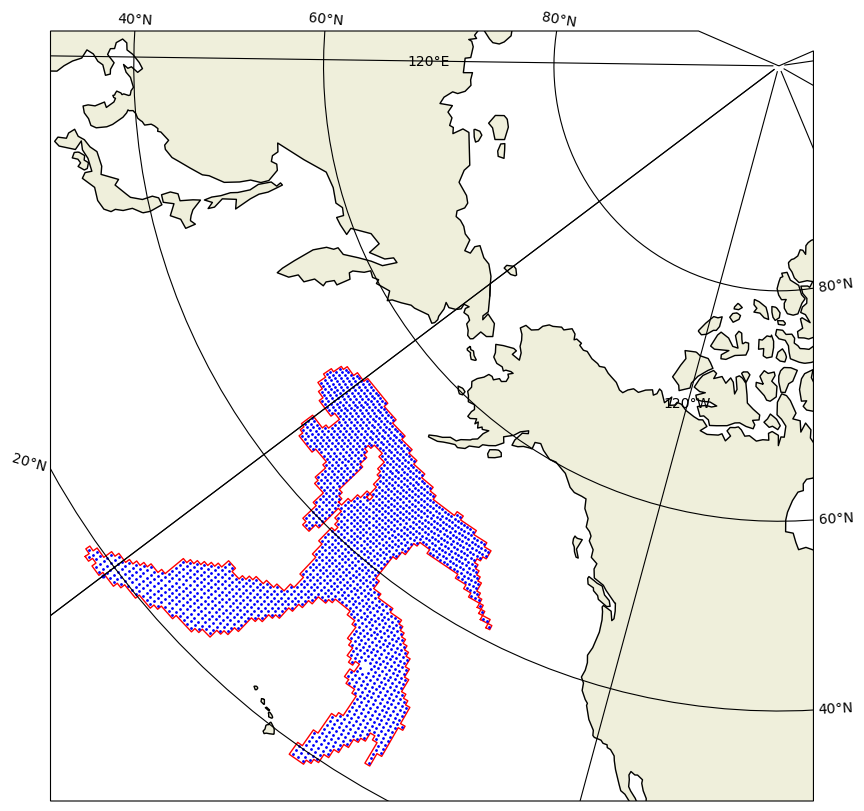

In [17]:
# dateline

AR = { "_id" : "2000.01.01.015.0_19", "timestamp" : ISODate("2000-01-01T15:00:00Z"), "raster" : [ [ 177.5, 18.5, [ 250.15028381347656 ] ], [ 178.75, 18.5, [ 250.6803436279297 ] ], [ 179.375, 18.5, [ 251.41879272460938 ] ], [ -180, 19, [ 293.031982421875 ] ], [ -179.375, 19, [ 283.8446350097656 ] ], [ -178.75, 19, [ 259.4346923828125 ] ], [ -151.875, 19, [ 261.60516357421875 ] ], [ -151.25, 19, [ 265.21051025390625 ] ], [ -150.625, 19, [ 254.53314208984375 ] ], [ 176.875, 19, [ 251.98753356933594 ] ], [ 177.5, 19, [ 270.9424133300781 ] ], [ 178.125, 19, [ 281.0899353027344 ] ], [ 178.75, 19, [ 282.9179992675781 ] ], [ 179.375, 19, [ 288.9736328125 ] ], [ -180, 19.5, [ 309.6210021972656 ] ], [ -179.375, 19.5, [ 312.8805847167969 ] ], [ -178.75, 19.5, [ 299.8413391113281 ] ], [ -178.125, 19.5, [ 272.87127685546875 ] ], [ -151.875, 19.5, [ 268.4871826171875 ] ], [ -151.25, 19.5, [ 284.867919921875 ] ], [ -150.625, 19.5, [ 275.13482666015625 ] ], [ -150, 19.5, [ 261.1654357910156 ] ], [ 177.5, 19.5, [ 255.70704650878906 ] ], [ 178.125, 19.5, [ 277.3118896484375 ] ], [ 178.75, 19.5, [ 291.1916198730469 ] ], [ 179.375, 19.5, [ 298.2720031738281 ] ], [ -180, 20, [ 292.1121520996094 ] ], [ -179.375, 20, [ 320.1253356933594 ] ], [ -178.75, 20, [ 332.5336608886719 ] ], [ -178.125, 20, [ 312.74737548828125 ] ], [ -177.5, 20, [ 289.1033935546875 ] ], [ -176.875, 20, [ 267.5296936035156 ] ], [ -176.25, 20, [ 252.19517517089844 ] ], [ -151.875, 20, [ 257.63775634765625 ] ], [ -151.25, 20, [ 304.2802429199219 ] ], [ -150.625, 20, [ 294.43377685546875 ] ], [ -150, 20, [ 278.0151672363281 ] ], [ -149.375, 20, [ 251.17967224121094 ] ], [ 178.75, 20, [ 273.806640625 ] ], [ 179.375, 20, [ 282.86474609375 ] ], [ -180, 20.5, [ 277.43865966796875 ] ], [ -179.375, 20.5, [ 300.8349914550781 ] ], [ -178.75, 20.5, [ 344.3849792480469 ] ], [ -178.125, 20.5, [ 350.3796691894531 ] ], [ -177.5, 20.5, [ 329.2403869628906 ] ], [ -176.875, 20.5, [ 312.26702880859375 ] ], [ -176.25, 20.5, [ 302.4385070800781 ] ], [ -175.625, 20.5, [ 293.2881164550781 ] ], [ -175, 20.5, [ 274.56378173828125 ] ], [ -174.375, 20.5, [ 253.1526336669922 ] ], [ -151.25, 20.5, [ 309.4879455566406 ] ], [ -150.625, 20.5, [ 308.6403503417969 ] ], [ -150, 20.5, [ 290.4222106933594 ] ], [ -149.375, 20.5, [ 267.7597961425781 ] ], [ 178.75, 20.5, [ 253.78143310546875 ] ], [ 179.375, 20.5, [ 271.57965087890625 ] ], [ -180, 21, [ 270.7773742675781 ] ], [ -179.375, 21, [ 278.8551940917969 ] ], [ -178.75, 21, [ 310.8793029785156 ] ], [ -178.125, 21, [ 345.50341796875 ] ], [ -177.5, 21, [ 355.94512939453125 ] ], [ -176.875, 21, [ 358.8572082519531 ] ], [ -176.25, 21, [ 357.9355773925781 ] ], [ -175.625, 21, [ 348.9620361328125 ] ], [ -175, 21, [ 332.2098388671875 ] ], [ -174.375, 21, [ 311.0210266113281 ] ], [ -173.75, 21, [ 278.37628173828125 ] ], [ -151.25, 21, [ 290.3883056640625 ] ], [ -150.625, 21, [ 310.69952392578125 ] ], [ -150, 21, [ 293.6820373535156 ] ], [ -149.375, 21, [ 278.55706787109375 ] ], [ -148.75, 21, [ 254.26625061035156 ] ], [ 179.375, 21, [ 256.39691162109375 ] ], [ -179.375, 21.5, [ 266.21844482421875 ] ], [ -178.75, 21.5, [ 283.1163024902344 ] ], [ -178.125, 21.5, [ 298.15478515625 ] ], [ -177.5, 21.5, [ 332.1150207519531 ] ], [ -176.875, 21.5, [ 378.30230712890625 ] ], [ -176.25, 21.5, [ 406.7985534667969 ] ], [ -175.625, 21.5, [ 410.7805480957031 ] ], [ -175, 21.5, [ 400.40704345703125 ] ], [ -174.375, 21.5, [ 382.7171936035156 ] ], [ -173.75, 21.5, [ 343.7261657714844 ] ], [ -173.125, 21.5, [ 303.060546875 ] ], [ -172.5, 21.5, [ 276.78948974609375 ] ], [ -171.875, 21.5, [ 260.70489501953125 ] ], [ -151.25, 21.5, [ 269.7460632324219 ] ], [ -150.625, 21.5, [ 307.4856262207031 ] ], [ -150, 21.5, [ 296.39447021484375 ] ], [ -149.375, 21.5, [ 281.1073913574219 ] ], [ -148.75, 21.5, [ 266.0135192871094 ] ], [ -178.75, 22, [ 270.6233825683594 ] ], [ -178.125, 22, [ 279.3133239746094 ] ], [ -177.5, 22, [ 296.2474060058594 ] ], [ -176.875, 22, [ 349.44488525390625 ] ], [ -176.25, 22, [ 420.8349914550781 ] ], [ -175.625, 22, [ 461.9465026855469 ] ], [ -175, 22, [ 468.23858642578125 ] ], [ -174.375, 22, [ 454.57305908203125 ] ], [ -173.75, 22, [ 416.02581787109375 ] ], [ -173.125, 22, [ 371.70501708984375 ] ], [ -172.5, 22, [ 334.6139831542969 ] ], [ -171.875, 22, [ 309.9179992675781 ] ], [ -171.25, 22, [ 287.4729309082031 ] ], [ -170.625, 22, [ 276.7305603027344 ] ], [ -170, 22, [ 271.1104431152344 ] ], [ -169.375, 22, [ 254.86068725585938 ] ], [ -151.25, 22, [ 255.5394287109375 ] ], [ -150.625, 22, [ 300.80194091796875 ] ], [ -150, 22, [ 301.8999328613281 ] ], [ -149.375, 22, [ 280.3087158203125 ] ], [ -148.75, 22, [ 277.5882873535156 ] ], [ -148.125, 22, [ 261.4954833984375 ] ], [ -178.125, 22.5, [ 262.5969543457031 ] ], [ -177.5, 22.5, [ 281.57171630859375 ] ], [ -176.875, 22.5, [ 314.53314208984375 ] ], [ -176.25, 22.5, [ 389.2616271972656 ] ], [ -175.625, 22.5, [ 474.61761474609375 ] ], [ -175, 22.5, [ 518.7314453125 ] ], [ -174.375, 22.5, [ 516.7386474609375 ] ], [ -173.75, 22.5, [ 482.739990234375 ] ], [ -173.125, 22.5, [ 444.7751770019531 ] ], [ -172.5, 22.5, [ 405.5906066894531 ] ], [ -171.875, 22.5, [ 367.4473876953125 ] ], [ -171.25, 22.5, [ 337.3552551269531 ] ], [ -170.625, 22.5, [ 325.2522888183594 ] ], [ -170, 22.5, [ 320.28271484375 ] ], [ -169.375, 22.5, [ 308.38482666015625 ] ], [ -168.75, 22.5, [ 282.72515869140625 ] ], [ -150.625, 22.5, [ 292.00970458984375 ] ], [ -150, 22.5, [ 309.8160705566406 ] ], [ -149.375, 22.5, [ 287.3738708496094 ] ], [ -148.75, 22.5, [ 287.63482666015625 ] ], [ -148.125, 22.5, [ 276.1490783691406 ] ], [ -144.375, 22.5, [ 268.61004638671875 ] ], [ -177.5, 23, [ 262.6371154785156 ] ], [ -176.875, 23, [ 280.339111328125 ] ], [ -176.25, 23, [ 318.6004333496094 ] ], [ -175.625, 23, [ 414.1837158203125 ] ], [ -175, 23, [ 512.3202514648438 ] ], [ -174.375, 23, [ 540.0431518554688 ] ], [ -173.75, 23, [ 512.2594604492188 ] ], [ -173.125, 23, [ 474.65869140625 ] ], [ -172.5, 23, [ 447.3084411621094 ] ], [ -171.875, 23, [ 420.4066467285156 ] ], [ -171.25, 23, [ 394.55413818359375 ] ], [ -170.625, 23, [ 376.4790344238281 ] ], [ -170, 23, [ 366.4235534667969 ] ], [ -169.375, 23, [ 356.7033996582031 ] ], [ -168.75, 23, [ 332.9944763183594 ] ], [ -168.125, 23, [ 299.21038818359375 ] ], [ -167.5, 23, [ 250.58575439453125 ] ], [ -150.625, 23, [ 280.9906921386719 ] ], [ -150, 23, [ 308.3890686035156 ] ], [ -149.375, 23, [ 299.1947937011719 ] ], [ -148.75, 23, [ 297.9587097167969 ] ], [ -148.125, 23, [ 292.7867736816406 ] ], [ -147.5, 23, [ 251.6766815185547 ] ], [ -144.375, 23, [ 277.43902587890625 ] ], [ -176.25, 23.5, [ 258.19586181640625 ] ], [ -175.625, 23.5, [ 312.3003234863281 ] ], [ -175, 23.5, [ 415.11651611328125 ] ], [ -174.375, 23.5, [ 479.31939697265625 ] ], [ -173.75, 23.5, [ 488.2897644042969 ] ], [ -173.125, 23.5, [ 458.0863037109375 ] ], [ -172.5, 23.5, [ 422.2972106933594 ] ], [ -171.875, 23.5, [ 411.6903076171875 ] ], [ -171.25, 23.5, [ 417.49151611328125 ] ], [ -170.625, 23.5, [ 413.9166259765625 ] ], [ -170, 23.5, [ 404.3842468261719 ] ], [ -169.375, 23.5, [ 394.8011474609375 ] ], [ -168.75, 23.5, [ 375.2220458984375 ] ], [ -168.125, 23.5, [ 344.1070251464844 ] ], [ -167.5, 23.5, [ 299.5015563964844 ] ], [ -150.625, 23.5, [ 271.9466247558594 ] ], [ -150, 23.5, [ 296.2286682128906 ] ], [ -149.375, 23.5, [ 307.8836975097656 ] ], [ -148.75, 23.5, [ 314.35906982421875 ] ], [ -148.125, 23.5, [ 315.3174133300781 ] ], [ -147.5, 23.5, [ 273.990966796875 ] ], [ -144.375, 23.5, [ 288.2809753417969 ] ], [ -175.625, 24, [ 269.68194580078125 ] ], [ -175, 24, [ 325.9351806640625 ] ], [ -174.375, 24, [ 374.0011291503906 ] ], [ -173.75, 24, [ 421.2396240234375 ] ], [ -173.125, 24, [ 428.399658203125 ] ], [ -172.5, 24, [ 397.1723937988281 ] ], [ -171.875, 24, [ 376.439453125 ] ], [ -171.25, 24, [ 391.41326904296875 ] ], [ -170.625, 24, [ 415.3750305175781 ] ], [ -170, 24, [ 423.6916198730469 ] ], [ -169.375, 24, [ 424.35577392578125 ] ], [ -168.75, 24, [ 413.6292419433594 ] ], [ -168.125, 24, [ 386.89593505859375 ] ], [ -167.5, 24, [ 345.3414611816406 ] ], [ -166.875, 24, [ 292.46539306640625 ] ], [ -150.625, 24, [ 265.3621826171875 ] ], [ -150, 24, [ 288.3321533203125 ] ], [ -149.375, 24, [ 306.6441650390625 ] ], [ -148.75, 24, [ 334.5928039550781 ] ], [ -148.125, 24, [ 343.26617431640625 ] ], [ -147.5, 24, [ 301.9056396484375 ] ], [ -146.875, 24, [ 264.3302917480469 ] ], [ -144.375, 24, [ 318.2694396972656 ] ], [ -143.75, 24, [ 262.8103332519531 ] ], [ -175.625, 24.5, [ 270.4185791015625 ] ], [ -175, 24.5, [ 303.8640441894531 ] ], [ -174.375, 24.5, [ 326.3589782714844 ] ], [ -173.75, 24.5, [ 366.1595153808594 ] ], [ -173.125, 24.5, [ 399.88214111328125 ] ], [ -172.5, 24.5, [ 393.4975280761719 ] ], [ -171.875, 24.5, [ 370.8951110839844 ] ], [ -171.25, 24.5, [ 365.0255126953125 ] ], [ -170.625, 24.5, [ 394.1219177246094 ] ], [ -170, 24.5, [ 428.6933898925781 ] ], [ -169.375, 24.5, [ 444.6378479003906 ] ], [ -168.75, 24.5, [ 441.805419921875 ] ], [ -168.125, 24.5, [ 419.22357177734375 ] ], [ -167.5, 24.5, [ 382.76629638671875 ] ], [ -166.875, 24.5, [ 330.4889221191406 ] ], [ -166.25, 24.5, [ 273.98907470703125 ] ], [ -150.625, 24.5, [ 250.74386596679688 ] ], [ -150, 24.5, [ 278.53863525390625 ] ], [ -149.375, 24.5, [ 299.82806396484375 ] ], [ -148.75, 24.5, [ 354.0762634277344 ] ], [ -148.125, 24.5, [ 381.5871276855469 ] ], [ -147.5, 24.5, [ 331.8304138183594 ] ], [ -146.875, 24.5, [ 288.92767333984375 ] ], [ -146.25, 24.5, [ 252.67184448242188 ] ], [ -144.375, 24.5, [ 328.86700439453125 ] ], [ -143.75, 24.5, [ 297.244873046875 ] ], [ -175.625, 25, [ 261.7740173339844 ] ], [ -175, 25, [ 288.5609436035156 ] ], [ -174.375, 25, [ 309.90740966796875 ] ], [ -173.75, 25, [ 348.5529479980469 ] ], [ -173.125, 25, [ 376.39068603515625 ] ], [ -172.5, 25, [ 391.1029968261719 ] ], [ -171.875, 25, [ 384.1158142089844 ] ], [ -171.25, 25, [ 368.9164733886719 ] ], [ -170.625, 25, [ 378.166015625 ] ], [ -170, 25, [ 419.7832336425781 ] ], [ -169.375, 25, [ 458.3156433105469 ] ], [ -168.75, 25, [ 462.923583984375 ] ], [ -168.125, 25, [ 443.00408935546875 ] ], [ -167.5, 25, [ 411.9670715332031 ] ], [ -166.875, 25, [ 361.7764587402344 ] ], [ -166.25, 25, [ 299.2002868652344 ] ], [ -150, 25, [ 261.6039733886719 ] ], [ -149.375, 25, [ 283.4462585449219 ] ], [ -148.75, 25, [ 354.20953369140625 ] ], [ -148.125, 25, [ 401.9805908203125 ] ], [ -147.5, 25, [ 355.7184143066406 ] ], [ -146.875, 25, [ 310.12841796875 ] ], [ -146.25, 25, [ 266.4176940917969 ] ], [ -145, 25, [ 271.63543701171875 ] ], [ -144.375, 25, [ 323.0977783203125 ] ], [ -143.75, 25, [ 314.5491943359375 ] ], [ -175.625, 25.5, [ 254.86907958984375 ] ], [ -175, 25.5, [ 273.6289978027344 ] ], [ -174.375, 25.5, [ 284.0345764160156 ] ], [ -173.75, 25.5, [ 311.53887939453125 ] ], [ -173.125, 25.5, [ 339.0031433105469 ] ], [ -172.5, 25.5, [ 365.1854248046875 ] ], [ -171.875, 25.5, [ 381.719970703125 ] ], [ -171.25, 25.5, [ 386.0516357421875 ] ], [ -170.625, 25.5, [ 385.8586120605469 ] ], [ -170, 25.5, [ 410.7217712402344 ] ], [ -169.375, 25.5, [ 459.60040283203125 ] ], [ -168.75, 25.5, [ 475.5343017578125 ] ], [ -168.125, 25.5, [ 461.49591064453125 ] ], [ -167.5, 25.5, [ 438.10565185546875 ] ], [ -166.875, 25.5, [ 392.96051025390625 ] ], [ -166.25, 25.5, [ 328.73126220703125 ] ], [ -165.625, 25.5, [ 263.3931579589844 ] ], [ -149.375, 25.5, [ 272.06829833984375 ] ], [ -148.75, 25.5, [ 344.2513732910156 ] ], [ -148.125, 25.5, [ 399.3551940917969 ] ], [ -147.5, 25.5, [ 365.87396240234375 ] ], [ -146.875, 25.5, [ 333.8699951171875 ] ], [ -146.25, 25.5, [ 266.28485107421875 ] ], [ -145.625, 25.5, [ 254.978759765625 ] ], [ -145, 25.5, [ 317.4354553222656 ] ], [ -144.375, 25.5, [ 303.0138854980469 ] ], [ -143.75, 25.5, [ 294.48626708984375 ] ], [ -175.625, 26, [ 251.90052795410156 ] ], [ -175, 26, [ 274.20135498046875 ] ], [ -174.375, 26, [ 280.2394104003906 ] ], [ -173.75, 26, [ 281.3600158691406 ] ], [ -173.125, 26, [ 296.13262939453125 ] ], [ -172.5, 26, [ 324.83868408203125 ] ], [ -171.875, 26, [ 354.6977233886719 ] ], [ -171.25, 26, [ 378.104736328125 ] ], [ -170.625, 26, [ 391.4190979003906 ] ], [ -170, 26, [ 405.0716857910156 ] ], [ -169.375, 26, [ 449.935791015625 ] ], [ -168.75, 26, [ 479.31201171875 ] ], [ -168.125, 26, [ 476.0684814453125 ] ], [ -167.5, 26, [ 460.165283203125 ] ], [ -166.875, 26, [ 420.7837829589844 ] ], [ -166.25, 26, [ 353.61260986328125 ] ], [ -165.625, 26, [ 279.61505126953125 ] ], [ -149.375, 26, [ 276.4453125 ] ], [ -148.75, 26, [ 350.39190673828125 ] ], [ -148.125, 26, [ 388.82781982421875 ] ], [ -147.5, 26, [ 368.07769775390625 ] ], [ -146.875, 26, [ 334.1956787109375 ] ], [ -146.25, 26, [ 266.7498779296875 ] ], [ -145.625, 26, [ 326.94451904296875 ] ], [ -145, 26, [ 344.2198181152344 ] ], [ -144.375, 26, [ 278.1050109863281 ] ], [ -143.75, 26, [ 272.0675354003906 ] ], [ -175, 26.5, [ 275.2425231933594 ] ], [ -174.375, 26.5, [ 293.4348449707031 ] ], [ -173.75, 26.5, [ 290.4642639160156 ] ], [ -173.125, 26.5, [ 284.0580749511719 ] ], [ -172.5, 26.5, [ 302.0638427734375 ] ], [ -171.875, 26.5, [ 329.57501220703125 ] ], [ -171.25, 26.5, [ 352.51666259765625 ] ], [ -170.625, 26.5, [ 372.51995849609375 ] ], [ -170, 26.5, [ 387.8228454589844 ] ], [ -169.375, 26.5, [ 427.71807861328125 ] ], [ -168.75, 26.5, [ 475.9443054199219 ] ], [ -168.125, 26.5, [ 487.37982177734375 ] ], [ -167.5, 26.5, [ 476.4139099121094 ] ], [ -166.875, 26.5, [ 441.5762023925781 ] ], [ -166.25, 26.5, [ 370.25238037109375 ] ], [ -165.625, 26.5, [ 292.7867126464844 ] ], [ -149.375, 26.5, [ 298.3304748535156 ] ], [ -148.75, 26.5, [ 364.8375244140625 ] ], [ -148.125, 26.5, [ 380.8713073730469 ] ], [ -147.5, 26.5, [ 349.46893310546875 ] ], [ -146.875, 26.5, [ 296.2416076660156 ] ], [ -146.25, 26.5, [ 293.1259460449219 ] ], [ -145.625, 26.5, [ 404.0242004394531 ] ], [ -145, 26.5, [ 351.5843505859375 ] ], [ -144.375, 26.5, [ 275.9670715332031 ] ], [ -143.75, 26.5, [ 273.2755126953125 ] ], [ -174.375, 27, [ 293.0661315917969 ] ], [ -173.75, 27, [ 309.96270751953125 ] ], [ -173.125, 27, [ 295.87225341796875 ] ], [ -172.5, 27, [ 293.34539794921875 ] ], [ -171.875, 27, [ 311.5469970703125 ] ], [ -171.25, 27, [ 333.50616455078125 ] ], [ -170.625, 27, [ 358.3367614746094 ] ], [ -170, 27, [ 373.57745361328125 ] ], [ -169.375, 27, [ 391.7484436035156 ] ], [ -168.75, 27, [ 446.31524658203125 ] ], [ -168.125, 27, [ 487.447509765625 ] ], [ -167.5, 27, [ 481.9969787597656 ] ], [ -166.875, 27, [ 448.3406677246094 ] ], [ -166.25, 27, [ 386.40655517578125 ] ], [ -165.625, 27, [ 312.0434265136719 ] ], [ -149.375, 27, [ 323.7165832519531 ] ], [ -148.75, 27, [ 368.5904541015625 ] ], [ -148.125, 27, [ 360.0682678222656 ] ], [ -147.5, 27, [ 314.36309814453125 ] ], [ -146.875, 27, [ 283.0621337890625 ] ], [ -146.25, 27, [ 353.5016784667969 ] ], [ -145.625, 27, [ 471.85565185546875 ] ], [ -145, 27, [ 354.8355712890625 ] ], [ -144.375, 27, [ 291.6346130371094 ] ], [ -143.75, 27, [ 285.1991882324219 ] ], [ -173.75, 27.5, [ 296.4679870605469 ] ], [ -173.125, 27.5, [ 306.33203125 ] ], [ -172.5, 27.5, [ 301.0307922363281 ] ], [ -171.875, 27.5, [ 305.2571716308594 ] ], [ -171.25, 27.5, [ 321.9672546386719 ] ], [ -170.625, 27.5, [ 353.34600830078125 ] ], [ -170, 27.5, [ 371.6166687011719 ] ], [ -169.375, 27.5, [ 373.5710754394531 ] ], [ -168.75, 27.5, [ 410.34527587890625 ] ], [ -168.125, 27.5, [ 463.765625 ] ], [ -167.5, 27.5, [ 480.2088623046875 ] ], [ -166.875, 27.5, [ 455.9573974609375 ] ], [ -166.25, 27.5, [ 406.4976806640625 ] ], [ -165.625, 27.5, [ 340.4210510253906 ] ], [ -165, 27.5, [ 275.731201171875 ] ], [ -149.375, 27.5, [ 326.9170837402344 ] ], [ -148.75, 27.5, [ 354.7621154785156 ] ], [ -148.125, 27.5, [ 340.0018310546875 ] ], [ -147.5, 27.5, [ 300.5780944824219 ] ], [ -146.875, 27.5, [ 293.15118408203125 ] ], [ -146.25, 27.5, [ 468.7065734863281 ] ], [ -145.625, 27.5, [ 502.027587890625 ] ], [ -145, 27.5, [ 352.4371032714844 ] ], [ -144.375, 27.5, [ 302.6554870605469 ] ], [ -143.75, 27.5, [ 294.85467529296875 ] ], [ -143.125, 27.5, [ 252.00286865234375 ] ], [ -173.125, 28, [ 289.0121765136719 ] ], [ -172.5, 28, [ 299.9753723144531 ] ], [ -171.875, 28, [ 303.59771728515625 ] ], [ -171.25, 28, [ 313.2183532714844 ] ], [ -170.625, 28, [ 343.8556213378906 ] ], [ -170, 28, [ 364.44085693359375 ] ], [ -169.375, 28, [ 369.1388854980469 ] ], [ -168.75, 28, [ 400.15765380859375 ] ], [ -168.125, 28, [ 439.7874450683594 ] ], [ -167.5, 28, [ 458.8252868652344 ] ], [ -166.875, 28, [ 460.1015319824219 ] ], [ -166.25, 28, [ 430.6519470214844 ] ], [ -165.625, 28, [ 383.691650390625 ] ], [ -165, 28, [ 327.5527038574219 ] ], [ -164.375, 28, [ 272.9190673828125 ] ], [ -150, 28, [ 263.1011962890625 ] ], [ -149.375, 28, [ 319.8927307128906 ] ], [ -148.75, 28, [ 346.98175048828125 ] ], [ -148.125, 28, [ 352.93023681640625 ] ], [ -147.5, 28, [ 323.8833923339844 ] ], [ -146.875, 28, [ 374.22381591796875 ] ], [ -146.25, 28, [ 551.7201538085938 ] ], [ -145.625, 28, [ 435.4632263183594 ] ], [ -145, 28, [ 344.38226318359375 ] ], [ -144.375, 28, [ 314.17364501953125 ] ], [ -143.75, 28, [ 302.86676025390625 ] ], [ -172.5, 28.5, [ 274.4641418457031 ] ], [ -171.875, 28.5, [ 289.90399169921875 ] ], [ -171.25, 28.5, [ 295.3079833984375 ] ], [ -170.625, 28.5, [ 318.2036437988281 ] ], [ -170, 28.5, [ 341.8882141113281 ] ], [ -169.375, 28.5, [ 354.05059814453125 ] ], [ -168.75, 28.5, [ 389.5956115722656 ] ], [ -168.125, 28.5, [ 425.7552185058594 ] ], [ -167.5, 28.5, [ 433.887939453125 ] ], [ -166.875, 28.5, [ 452.7484436035156 ] ], [ -166.25, 28.5, [ 456.6013488769531 ] ], [ -165.625, 28.5, [ 436.60223388671875 ] ], [ -165, 28.5, [ 381.31494140625 ] ], [ -164.375, 28.5, [ 310.4669189453125 ] ], [ -151.25, 28.5, [ 257.94696044921875 ] ], [ -150.625, 28.5, [ 261.0885009765625 ] ], [ -150, 28.5, [ 284.0252990722656 ] ], [ -149.375, 28.5, [ 314.7982177734375 ] ], [ -148.75, 28.5, [ 349.9667053222656 ] ], [ -148.125, 28.5, [ 394.3165283203125 ] ], [ -147.5, 28.5, [ 384.14007568359375 ] ], [ -146.875, 28.5, [ 471.19781494140625 ] ], [ -146.25, 28.5, [ 499.61785888671875 ] ], [ -145.625, 28.5, [ 384.7399597167969 ] ], [ -145, 28.5, [ 346.0556335449219 ] ], [ -144.375, 28.5, [ 341.5255432128906 ] ], [ -143.75, 28.5, [ 304.0948181152344 ] ], [ -171.875, 29, [ 277.59820556640625 ] ], [ -171.25, 29, [ 278.5743713378906 ] ], [ -170.625, 29, [ 273.587646484375 ] ], [ -170, 29, [ 292.2330627441406 ] ], [ -169.375, 29, [ 317.89202880859375 ] ], [ -168.75, 29, [ 362.2225341796875 ] ], [ -168.125, 29, [ 395.46966552734375 ] ], [ -167.5, 29, [ 411.3296203613281 ] ], [ -166.875, 29, [ 436.3596496582031 ] ], [ -166.25, 29, [ 469.8769836425781 ] ], [ -165.625, 29, [ 476.0150451660156 ] ], [ -165, 29, [ 425.57366943359375 ] ], [ -164.375, 29, [ 350.5703430175781 ] ], [ -163.75, 29, [ 281.9258117675781 ] ], [ -151.875, 29, [ 258.8472900390625 ] ], [ -151.25, 29, [ 279.77423095703125 ] ], [ -150.625, 29, [ 284.43865966796875 ] ], [ -150, 29, [ 300.4429016113281 ] ], [ -149.375, 29, [ 311.9783020019531 ] ], [ -148.75, 29, [ 345.26763916015625 ] ], [ -148.125, 29, [ 428.1009826660156 ] ], [ -147.5, 29, [ 437.6731872558594 ] ], [ -146.875, 29, [ 492.7386169433594 ] ], [ -146.25, 29, [ 443.3116455078125 ] ], [ -145.625, 29, [ 391.57147216796875 ] ], [ -145, 29, [ 353.4749450683594 ] ], [ -144.375, 29, [ 357.5648498535156 ] ], [ -143.75, 29, [ 286.5190734863281 ] ], [ -171.875, 29.5, [ 250.87498474121094 ] ], [ -171.25, 29.5, [ 269.8409118652344 ] ], [ -169.375, 29.5, [ 266.0363464355469 ] ], [ -168.75, 29.5, [ 320.0070495605469 ] ], [ -168.125, 29.5, [ 358.370361328125 ] ], [ -167.5, 29.5, [ 377.2230224609375 ] ], [ -166.875, 29.5, [ 399.4769287109375 ] ], [ -166.25, 29.5, [ 450.48577880859375 ] ], [ -165.625, 29.5, [ 480.93072509765625 ] ], [ -165, 29.5, [ 450.0263977050781 ] ], [ -164.375, 29.5, [ 389.3800964355469 ] ], [ -163.75, 29.5, [ 321.00701904296875 ] ], [ -163.125, 29.5, [ 261.9559326171875 ] ], [ -151.875, 29.5, [ 266.69989013671875 ] ], [ -151.25, 29.5, [ 266.0386657714844 ] ], [ -150.625, 29.5, [ 294.5181579589844 ] ], [ -150, 29.5, [ 297.47015380859375 ] ], [ -149.375, 29.5, [ 299.7999572753906 ] ], [ -148.75, 29.5, [ 328.6976318359375 ] ], [ -148.125, 29.5, [ 420.9255676269531 ] ], [ -147.5, 29.5, [ 458.8916931152344 ] ], [ -146.875, 29.5, [ 494.1732482910156 ] ], [ -146.25, 29.5, [ 463.1905517578125 ] ], [ -145.625, 29.5, [ 399.31109619140625 ] ], [ -145, 29.5, [ 347.2944030761719 ] ], [ -144.375, 29.5, [ 327.5343017578125 ] ], [ -143.75, 29.5, [ 255.98410034179688 ] ], [ -168.75, 30, [ 270.0000305175781 ] ], [ -168.125, 30, [ 314.88885498046875 ] ], [ -167.5, 30, [ 336.640380859375 ] ], [ -166.875, 30, [ 351.11602783203125 ] ], [ -166.25, 30, [ 402.20916748046875 ] ], [ -165.625, 30, [ 450.20819091796875 ] ], [ -165, 30, [ 453.4372863769531 ] ], [ -164.375, 30, [ 417.15313720703125 ] ], [ -163.75, 30, [ 359.3575744628906 ] ], [ -163.125, 30, [ 291.7281188964844 ] ], [ -151.25, 30, [ 268.5093688964844 ] ], [ -150.625, 30, [ 282.21380615234375 ] ], [ -150, 30, [ 282.9237976074219 ] ], [ -149.375, 30, [ 290.6734313964844 ] ], [ -148.75, 30, [ 323.32330322265625 ] ], [ -148.125, 30, [ 399.89447021484375 ] ], [ -147.5, 30, [ 497.9112548828125 ] ], [ -146.875, 30, [ 526.42236328125 ] ], [ -146.25, 30, [ 487.6964416503906 ] ], [ -145.625, 30, [ 401.944580078125 ] ], [ -145, 30, [ 318.4321594238281 ] ], [ -144.375, 30, [ 269.50262451171875 ] ], [ -168.125, 30.5, [ 255.64674377441406 ] ], [ -167.5, 30.5, [ 285.9106750488281 ] ], [ -166.875, 30.5, [ 304.9469299316406 ] ], [ -166.25, 30.5, [ 344.8244934082031 ] ], [ -165.625, 30.5, [ 405.2745361328125 ] ], [ -165, 30.5, [ 443.74884033203125 ] ], [ -164.375, 30.5, [ 430.6938781738281 ] ], [ -163.75, 30.5, [ 385.2855224609375 ] ], [ -163.125, 30.5, [ 313.019775390625 ] ], [ -152.5, 30.5, [ 256.2571716308594 ] ], [ -151.25, 30.5, [ 261.3083190917969 ] ], [ -150, 30.5, [ 276.2820739746094 ] ], [ -149.375, 30.5, [ 308.33697509765625 ] ], [ -148.75, 30.5, [ 354.1143493652344 ] ], [ -148.125, 30.5, [ 440.2599182128906 ] ], [ -147.5, 30.5, [ 586.9462890625 ] ], [ -146.875, 30.5, [ 569.3985595703125 ] ], [ -146.25, 30.5, [ 478.9588317871094 ] ], [ -145.625, 30.5, [ 379.62225341796875 ] ], [ -145, 30.5, [ 278.9445495605469 ] ], [ -166.875, 31, [ 252.5677490234375 ] ], [ -166.25, 31, [ 287.3727722167969 ] ], [ -165.625, 31, [ 349.16302490234375 ] ], [ -165, 31, [ 412.7909851074219 ] ], [ -164.375, 31, [ 419.99267578125 ] ], [ -163.75, 31, [ 390.1648254394531 ] ], [ -163.125, 31, [ 332.1885681152344 ] ], [ -162.5, 31, [ 267.721435546875 ] ], [ -153.125, 31, [ 264.79541015625 ] ], [ -152.5, 31, [ 267.7188720703125 ] ], [ -151.875, 31, [ 257.20281982421875 ] ], [ -150, 31, [ 315.55859375 ] ], [ -149.375, 31, [ 379.34014892578125 ] ], [ -148.75, 31, [ 445.5709228515625 ] ], [ -148.125, 31, [ 589.1531372070312 ] ], [ -147.5, 31, [ 678.37451171875 ] ], [ -146.875, 31, [ 560.1974487304688 ] ], [ -146.25, 31, [ 433.54925537109375 ] ], [ -145.625, 31, [ 319.8974304199219 ] ], [ -165.625, 31.5, [ 268.4134826660156 ] ], [ -165, 31.5, [ 339.2330627441406 ] ], [ -164.375, 31.5, [ 373.91522216796875 ] ], [ -163.75, 31.5, [ 378.2344970703125 ] ], [ -163.125, 31.5, [ 352.3831481933594 ] ], [ -162.5, 31.5, [ 302.5885314941406 ] ], [ -153.125, 31.5, [ 286.7328796386719 ] ], [ -152.5, 31.5, [ 285.7990417480469 ] ], [ -151.875, 31.5, [ 271.2881774902344 ] ], [ -151.25, 31.5, [ 258.4564514160156 ] ], [ -150.625, 31.5, [ 347.73638916015625 ] ], [ -150, 31.5, [ 445.4236145019531 ] ], [ -149.375, 31.5, [ 519.5430908203125 ] ], [ -148.75, 31.5, [ 644.4158935546875 ] ], [ -148.125, 31.5, [ 712.9085693359375 ] ], [ -147.5, 31.5, [ 652.16796875 ] ], [ -146.875, 31.5, [ 490.2516174316406 ] ], [ -146.25, 31.5, [ 375.70404052734375 ] ], [ -145.625, 31.5, [ 281.5643310546875 ] ], [ -164.375, 32, [ 317.0782470703125 ] ], [ -163.75, 32, [ 361.26226806640625 ] ], [ -163.125, 32, [ 368.9408874511719 ] ], [ -162.5, 32, [ 336.28387451171875 ] ], [ -161.875, 32, [ 253.20851135253906 ] ], [ -153.75, 32, [ 296.20745849609375 ] ], [ -153.125, 32, [ 319.45458984375 ] ], [ -152.5, 32, [ 321.4644470214844 ] ], [ -151.875, 32, [ 329.9294128417969 ] ], [ -151.25, 32, [ 406.90594482421875 ] ], [ -150.625, 32, [ 564.3911743164062 ] ], [ -150, 32, [ 612.6433715820312 ] ], [ -149.375, 32, [ 645.3358154296875 ] ], [ -148.75, 32, [ 704.840576171875 ] ], [ -148.125, 32, [ 657.2460327148438 ] ], [ -147.5, 32, [ 546.9686279296875 ] ], [ -146.875, 32, [ 423.8535461425781 ] ], [ -146.25, 32, [ 334.25408935546875 ] ], [ -145.625, 32, [ 262.607666015625 ] ], [ -164.375, 32.5, [ 274.88323974609375 ] ], [ -163.75, 32.5, [ 343.82183837890625 ] ], [ -163.125, 32.5, [ 375.35809326171875 ] ], [ -162.5, 32.5, [ 365.6055603027344 ] ], [ -161.875, 32.5, [ 280.59161376953125 ] ], [ -154.375, 32.5, [ 254.5977325439453 ] ], [ -153.75, 32.5, [ 340.4662780761719 ] ], [ -153.125, 32.5, [ 356.7987060546875 ] ], [ -152.5, 32.5, [ 366.37548828125 ] ], [ -151.875, 32.5, [ 394.9576721191406 ] ], [ -151.25, 32.5, [ 493.0010070800781 ] ], [ -150.625, 32.5, [ 599.3217163085938 ] ], [ -150, 32.5, [ 598.0471801757812 ] ], [ -149.375, 32.5, [ 601.8291625976562 ] ], [ -148.75, 32.5, [ 589.91650390625 ] ], [ -148.125, 32.5, [ 543.9746704101562 ] ], [ -147.5, 32.5, [ 463.4004821777344 ] ], [ -146.875, 32.5, [ 375.5939636230469 ] ], [ -146.25, 32.5, [ 300.2862243652344 ] ], [ -163.75, 33, [ 328.0369873046875 ] ], [ -163.125, 33, [ 381.23284912109375 ] ], [ -162.5, 33, [ 392.45074462890625 ] ], [ -161.875, 33, [ 307.8409118652344 ] ], [ -161.25, 33, [ 252.79583740234375 ] ], [ -154.375, 33, [ 286.1598205566406 ] ], [ -153.75, 33, [ 364.7771911621094 ] ], [ -153.125, 33, [ 389.0302734375 ] ], [ -152.5, 33, [ 390.1636657714844 ] ], [ -151.875, 33, [ 405.4507141113281 ] ], [ -151.25, 33, [ 450.4045715332031 ] ], [ -150.625, 33, [ 492.2241516113281 ] ], [ -150, 33, [ 524.4154663085938 ] ], [ -149.375, 33, [ 521.4095458984375 ] ], [ -148.75, 33, [ 525.280517578125 ] ], [ -148.125, 33, [ 480.04046630859375 ] ], [ -147.5, 33, [ 399.3570251464844 ] ], [ -146.875, 33, [ 335.1676025390625 ] ], [ -146.25, 33, [ 272.5220947265625 ] ], [ -163.75, 33.5, [ 310.8291931152344 ] ], [ -163.125, 33.5, [ 385.95574951171875 ] ], [ -162.5, 33.5, [ 416.07568359375 ] ], [ -161.875, 33.5, [ 337.1456604003906 ] ], [ -161.25, 33.5, [ 283.133056640625 ] ], [ -154.375, 33.5, [ 307.3590393066406 ] ], [ -153.75, 33.5, [ 381.4792785644531 ] ], [ -153.125, 33.5, [ 419.6358947753906 ] ], [ -152.5, 33.5, [ 417.1034851074219 ] ], [ -151.875, 33.5, [ 405.77178955078125 ] ], [ -151.25, 33.5, [ 421.7452087402344 ] ], [ -150.625, 33.5, [ 462.77325439453125 ] ], [ -150, 33.5, [ 506.37933349609375 ] ], [ -149.375, 33.5, [ 508.7347717285156 ] ], [ -148.75, 33.5, [ 491.0170593261719 ] ], [ -148.125, 33.5, [ 420.6967468261719 ] ], [ -147.5, 33.5, [ 358.0566711425781 ] ], [ -146.875, 33.5, [ 304.3324890136719 ] ], [ -163.75, 34, [ 308.7997741699219 ] ], [ -163.125, 34, [ 392.797119140625 ] ], [ -162.5, 34, [ 437.2950439453125 ] ], [ -161.875, 34, [ 370.5201110839844 ] ], [ -161.25, 34, [ 313.6670227050781 ] ], [ -160.625, 34, [ 282.3954162597656 ] ], [ -160, 34, [ 276.9757385253906 ] ], [ -155, 34, [ 268.80303955078125 ] ], [ -154.375, 34, [ 335.78759765625 ] ], [ -153.75, 34, [ 406.7265319824219 ] ], [ -153.125, 34, [ 453.5411376953125 ] ], [ -152.5, 34, [ 457.9942626953125 ] ], [ -151.875, 34, [ 438.6647033691406 ] ], [ -151.25, 34, [ 437.1188659667969 ] ], [ -150.625, 34, [ 466.10540771484375 ] ], [ -150, 34, [ 484.23760986328125 ] ], [ -149.375, 34, [ 468.31182861328125 ] ], [ -148.75, 34, [ 423.16790771484375 ] ], [ -148.125, 34, [ 366.6933288574219 ] ], [ -147.5, 34, [ 319.08624267578125 ] ], [ -146.875, 34, [ 250.5070037841797 ] ], [ -164.375, 34.5, [ 304.0082092285156 ] ], [ -163.75, 34.5, [ 360.5553283691406 ] ], [ -163.125, 34.5, [ 420.4644470214844 ] ], [ -162.5, 34.5, [ 463.7144775390625 ] ], [ -161.875, 34.5, [ 414.3451232910156 ] ], [ -161.25, 34.5, [ 346.9630126953125 ] ], [ -160.625, 34.5, [ 323.54461669921875 ] ], [ -160, 34.5, [ 315.6670227050781 ] ], [ -159.375, 34.5, [ 272.6698913574219 ] ], [ -156.25, 34.5, [ 254.61807250976562 ] ], [ -155.625, 34.5, [ 266.1461486816406 ] ], [ -155, 34.5, [ 307.2281494140625 ] ], [ -154.375, 34.5, [ 387.516845703125 ] ], [ -153.75, 34.5, [ 446.6313781738281 ] ], [ -153.125, 34.5, [ 476.0054016113281 ] ], [ -152.5, 34.5, [ 477.9339904785156 ] ], [ -151.875, 34.5, [ 454.1175842285156 ] ], [ -151.25, 34.5, [ 449.0022277832031 ] ], [ -150.625, 34.5, [ 449.4128723144531 ] ], [ -150, 34.5, [ 439.95794677734375 ] ], [ -149.375, 34.5, [ 416.794189453125 ] ], [ -148.75, 34.5, [ 370.30657958984375 ] ], [ -148.125, 34.5, [ 321.2907409667969 ] ], [ -147.5, 34.5, [ 260.2572326660156 ] ], [ -164.375, 35, [ 379.9918212890625 ] ], [ -163.75, 35, [ 453.4381103515625 ] ], [ -163.125, 35, [ 468.1622619628906 ] ], [ -162.5, 35, [ 507.2004699707031 ] ], [ -161.875, 35, [ 465.78717041015625 ] ], [ -161.25, 35, [ 384.54046630859375 ] ], [ -160.625, 35, [ 369.68524169921875 ] ], [ -160, 35, [ 355.9662780761719 ] ], [ -159.375, 35, [ 312.4007263183594 ] ], [ -158.75, 35, [ 285.41021728515625 ] ], [ -158.125, 35, [ 261.58935546875 ] ], [ -157.5, 35, [ 265.3471374511719 ] ], [ -156.875, 35, [ 278.8177490234375 ] ], [ -156.25, 35, [ 286.66900634765625 ] ], [ -155.625, 35, [ 296.2032470703125 ] ], [ -155, 35, [ 345.4227600097656 ] ], [ -154.375, 35, [ 427.6108093261719 ] ], [ -153.75, 35, [ 478.6982116699219 ] ], [ -153.125, 35, [ 487.4312438964844 ] ], [ -152.5, 35, [ 471.4397888183594 ] ], [ -151.875, 35, [ 442.9759521484375 ] ], [ -151.25, 35, [ 430.74908447265625 ] ], [ -150.625, 35, [ 424.9040832519531 ] ], [ -150, 35, [ 411.746826171875 ] ], [ -149.375, 35, [ 377.44293212890625 ] ], [ -148.75, 35, [ 323.7606201171875 ] ], [ -148.125, 35, [ 264.4410095214844 ] ], [ -164.375, 35.5, [ 477.77032470703125 ] ], [ -163.75, 35.5, [ 609.9427490234375 ] ], [ -163.125, 35.5, [ 550.5653686523438 ] ], [ -162.5, 35.5, [ 574.8544311523438 ] ], [ -161.875, 35.5, [ 503.6057434082031 ] ], [ -161.25, 35.5, [ 422.6819152832031 ] ], [ -160.625, 35.5, [ 415.8992614746094 ] ], [ -160, 35.5, [ 389.64202880859375 ] ], [ -159.375, 35.5, [ 351.2566833496094 ] ], [ -158.75, 35.5, [ 325.9115295410156 ] ], [ -158.125, 35.5, [ 299.1595458984375 ] ], [ -157.5, 35.5, [ 301.6393127441406 ] ], [ -156.875, 35.5, [ 307.7446594238281 ] ], [ -156.25, 35.5, [ 309.26806640625 ] ], [ -155.625, 35.5, [ 324.52142333984375 ] ], [ -155, 35.5, [ 364.04669189453125 ] ], [ -154.375, 35.5, [ 430.5449523925781 ] ], [ -153.75, 35.5, [ 476.3297424316406 ] ], [ -153.125, 35.5, [ 484.4908142089844 ] ], [ -152.5, 35.5, [ 458.88873291015625 ] ], [ -151.875, 35.5, [ 425.1852111816406 ] ], [ -151.25, 35.5, [ 403.9541015625 ] ], [ -150.625, 35.5, [ 386.3441467285156 ] ], [ -150, 35.5, [ 366.2971496582031 ] ], [ -149.375, 35.5, [ 324.68170166015625 ] ], [ -148.75, 35.5, [ 264.1338195800781 ] ], [ -164.375, 36, [ 546.03662109375 ] ], [ -163.75, 36, [ 731.6962280273438 ] ], [ -163.125, 36, [ 669.9241943359375 ] ], [ -162.5, 36, [ 624.7879638671875 ] ], [ -161.875, 36, [ 520.8612060546875 ] ], [ -161.25, 36, [ 461.0976257324219 ] ], [ -160.625, 36, [ 457.0389404296875 ] ], [ -160, 36, [ 418.3434143066406 ] ], [ -159.375, 36, [ 387.4341735839844 ] ], [ -158.75, 36, [ 362.62640380859375 ] ], [ -158.125, 36, [ 336.6695861816406 ] ], [ -157.5, 36, [ 333.1319885253906 ] ], [ -156.875, 36, [ 329.5060119628906 ] ], [ -156.25, 36, [ 327.2147521972656 ] ], [ -155.625, 36, [ 342.88629150390625 ] ], [ -155, 36, [ 366.8595886230469 ] ], [ -154.375, 36, [ 403.9397277832031 ] ], [ -153.75, 36, [ 435.8531799316406 ] ], [ -153.125, 36, [ 441.7993469238281 ] ], [ -152.5, 36, [ 419.3863830566406 ] ], [ -151.875, 36, [ 397.2130432128906 ] ], [ -151.25, 36, [ 378.94720458984375 ] ], [ -150.625, 36, [ 350.3265075683594 ] ], [ -150, 36, [ 319.4609375 ] ], [ -149.375, 36, [ 273.6798095703125 ] ], [ -164.375, 36.5, [ 443.44244384765625 ] ], [ -163.75, 36.5, [ 637.4069213867188 ] ], [ -163.125, 36.5, [ 681.85595703125 ] ], [ -162.5, 36.5, [ 622.0922241210938 ] ], [ -161.875, 36.5, [ 532.6250610351562 ] ], [ -161.25, 36.5, [ 498.198486328125 ] ], [ -160.625, 36.5, [ 488.0335693359375 ] ], [ -160, 36.5, [ 447.0804138183594 ] ], [ -159.375, 36.5, [ 421.3310852050781 ] ], [ -158.75, 36.5, [ 396.0338134765625 ] ], [ -158.125, 36.5, [ 369.94232177734375 ] ], [ -157.5, 36.5, [ 359.0122985839844 ] ], [ -156.875, 36.5, [ 345.58197021484375 ] ], [ -156.25, 36.5, [ 336.39453125 ] ], [ -155.625, 36.5, [ 340.6070556640625 ] ], [ -155, 36.5, [ 357.3087463378906 ] ], [ -154.375, 36.5, [ 376.9039306640625 ] ], [ -153.75, 36.5, [ 387.3310241699219 ] ], [ -153.125, 36.5, [ 385.9420471191406 ] ], [ -152.5, 36.5, [ 372.61572265625 ] ], [ -151.875, 36.5, [ 357.30078125 ] ], [ -151.25, 36.5, [ 343.4140625 ] ], [ -150.625, 36.5, [ 311.7010192871094 ] ], [ -150, 36.5, [ 275.46368408203125 ] ], [ -165, 37, [ 269.6441955566406 ] ], [ -164.375, 37, [ 350.3851318359375 ] ], [ -163.75, 37, [ 463.0090026855469 ] ], [ -163.125, 37, [ 573.8115234375 ] ], [ -162.5, 37, [ 592.5377197265625 ] ], [ -161.875, 37, [ 545.9276123046875 ] ], [ -161.25, 37, [ 521.0048828125 ] ], [ -160.625, 37, [ 510.236572265625 ] ], [ -160, 37, [ 474.7976989746094 ] ], [ -159.375, 37, [ 452.5060729980469 ] ], [ -158.75, 37, [ 424.7699279785156 ] ], [ -158.125, 37, [ 397.0555725097656 ] ], [ -157.5, 37, [ 375.9078063964844 ] ], [ -156.875, 37, [ 353.08721923828125 ] ], [ -156.25, 37, [ 335.5758361816406 ] ], [ -155.625, 37, [ 325.96929931640625 ] ], [ -155, 37, [ 334.35101318359375 ] ], [ -154.375, 37, [ 347.4947814941406 ] ], [ -153.75, 37, [ 351.010986328125 ] ], [ -153.125, 37, [ 342.3091735839844 ] ], [ -152.5, 37, [ 326.5409851074219 ] ], [ -151.875, 37, [ 302.9800720214844 ] ], [ -151.25, 37, [ 280.3968505859375 ] ], [ -150.625, 37, [ 250.65264892578125 ] ], [ -165, 37.5, [ 316.7688293457031 ] ], [ -164.375, 37.5, [ 351.8179016113281 ] ], [ -163.75, 37.5, [ 390.2170715332031 ] ], [ -163.125, 37.5, [ 490.0658264160156 ] ], [ -162.5, 37.5, [ 552.3746337890625 ] ], [ -161.875, 37.5, [ 546.470458984375 ] ], [ -161.25, 37.5, [ 537.217041015625 ] ], [ -160.625, 37.5, [ 526.9866943359375 ] ], [ -160, 37.5, [ 503.2464904785156 ] ], [ -159.375, 37.5, [ 480.1729431152344 ] ], [ -158.75, 37.5, [ 449.5253601074219 ] ], [ -158.125, 37.5, [ 416.6719055175781 ] ], [ -157.5, 37.5, [ 383.6067199707031 ] ], [ -156.875, 37.5, [ 353.8478088378906 ] ], [ -156.25, 37.5, [ 328.9582824707031 ] ], [ -155.625, 37.5, [ 304.35504150390625 ] ], [ -155, 37.5, [ 297.34466552734375 ] ], [ -154.375, 37.5, [ 299.01287841796875 ] ], [ -153.75, 37.5, [ 297.20965576171875 ] ], [ -153.125, 37.5, [ 288.8251647949219 ] ], [ -152.5, 37.5, [ 270.804443359375 ] ], [ -165, 38, [ 344.0665588378906 ] ], [ -164.375, 38, [ 363.799560546875 ] ], [ -163.75, 38, [ 386.5090026855469 ] ], [ -163.125, 38, [ 448.4114074707031 ] ], [ -162.5, 38, [ 511.9845275878906 ] ], [ -161.875, 38, [ 548.69384765625 ] ], [ -161.25, 38, [ 551.8004150390625 ] ], [ -160.625, 38, [ 546.3921508789062 ] ], [ -160, 38, [ 529.5911865234375 ] ], [ -159.375, 38, [ 502.8932189941406 ] ], [ -158.75, 38, [ 468.0515441894531 ] ], [ -158.125, 38, [ 431.33099365234375 ] ], [ -157.5, 38, [ 388.4117431640625 ] ], [ -156.875, 38, [ 352.1723937988281 ] ], [ -156.25, 38, [ 314.724609375 ] ], [ -155.625, 38, [ 276.7052001953125 ] ], [ -155, 38, [ 257.9452819824219 ] ], [ -168.75, 38.5, [ 263.8544006347656 ] ], [ -168.125, 38.5, [ 258.48974609375 ] ], [ -165.625, 38.5, [ 264.90875244140625 ] ], [ -165, 38.5, [ 384.15753173828125 ] ], [ -164.375, 38.5, [ 389.3948669433594 ] ], [ -163.75, 38.5, [ 410.4179992675781 ] ], [ -163.125, 38.5, [ 440.1092834472656 ] ], [ -162.5, 38.5, [ 490.385009765625 ] ], [ -161.875, 38.5, [ 556.5874633789062 ] ], [ -161.25, 38.5, [ 566.3357543945312 ] ], [ -160.625, 38.5, [ 573.6758422851562 ] ], [ -160, 38.5, [ 558.1119995117188 ] ], [ -159.375, 38.5, [ 525.0239868164062 ] ], [ -158.75, 38.5, [ 482.3077087402344 ] ], [ -158.125, 38.5, [ 443.0315856933594 ] ], [ -157.5, 38.5, [ 393.962158203125 ] ], [ -156.875, 38.5, [ 348.043701171875 ] ], [ -156.25, 38.5, [ 292.2735595703125 ] ], [ -169.375, 39, [ 261.651611328125 ] ], [ -168.75, 39, [ 280.91595458984375 ] ], [ -168.125, 39, [ 281.2215270996094 ] ], [ -165.625, 39, [ 269.6860046386719 ] ], [ -165, 39, [ 417.1730651855469 ] ], [ -164.375, 39, [ 452.9073181152344 ] ], [ -163.75, 39, [ 454.97833251953125 ] ], [ -163.125, 39, [ 451.6683654785156 ] ], [ -162.5, 39, [ 494.4399719238281 ] ], [ -161.875, 39, [ 571.6502685546875 ] ], [ -161.25, 39, [ 580.10986328125 ] ], [ -160.625, 39, [ 599.1272583007812 ] ], [ -160, 39, [ 588.341064453125 ] ], [ -159.375, 39, [ 547.1220703125 ] ], [ -158.75, 39, [ 494.2378845214844 ] ], [ -158.125, 39, [ 456.2607727050781 ] ], [ -157.5, 39, [ 399.4419250488281 ] ], [ -156.875, 39, [ 332.48779296875 ] ], [ -156.25, 39, [ 254.77413940429688 ] ], [ -169.375, 39.5, [ 279.79876708984375 ] ], [ -168.75, 39.5, [ 303.8643798828125 ] ], [ -168.125, 39.5, [ 298.47564697265625 ] ], [ -167.5, 39.5, [ 266.5970764160156 ] ], [ -165.625, 39.5, [ 260.9670104980469 ] ], [ -165, 39.5, [ 421.1247253417969 ] ], [ -164.375, 39.5, [ 498.8563537597656 ] ], [ -163.75, 39.5, [ 498.9671325683594 ] ], [ -163.125, 39.5, [ 480.51629638671875 ] ], [ -162.5, 39.5, [ 525.6422119140625 ] ], [ -161.875, 39.5, [ 592.0576782226562 ] ], [ -161.25, 39.5, [ 599.2637329101562 ] ], [ -160.625, 39.5, [ 621.6359252929688 ] ], [ -160, 39.5, [ 621.0735473632812 ] ], [ -159.375, 39.5, [ 569.9039916992188 ] ], [ -158.75, 39.5, [ 508.7341613769531 ] ], [ -158.125, 39.5, [ 467.4919738769531 ] ], [ -157.5, 39.5, [ 393.119873046875 ] ], [ -156.875, 39.5, [ 303.2665710449219 ] ], [ -169.375, 40, [ 299.4996337890625 ] ], [ -168.75, 40, [ 328.1559143066406 ] ], [ -168.125, 40, [ 321.1844482421875 ] ], [ -167.5, 40, [ 282.1712341308594 ] ], [ -165.625, 40, [ 252.38633728027344 ] ], [ -165, 40, [ 386.2166748046875 ] ], [ -164.375, 40, [ 500.986328125 ] ], [ -163.75, 40, [ 520.0478515625 ] ], [ -163.125, 40, [ 521.3008422851562 ] ], [ -162.5, 40, [ 569.0836791992188 ] ], [ -161.875, 40, [ 615.605224609375 ] ], [ -161.25, 40, [ 625.790283203125 ] ], [ -160.625, 40, [ 646.5154418945312 ] ], [ -160, 40, [ 653.8690185546875 ] ], [ -159.375, 40, [ 594.1361083984375 ] ], [ -158.75, 40, [ 525.5050048828125 ] ], [ -158.125, 40, [ 468.6942443847656 ] ], [ -157.5, 40, [ 376.1763000488281 ] ], [ -156.875, 40, [ 274.8493957519531 ] ], [ -169.375, 40.5, [ 320.316650390625 ] ], [ -168.75, 40.5, [ 349.4494934082031 ] ], [ -168.125, 40.5, [ 342.05145263671875 ] ], [ -167.5, 40.5, [ 296.61767578125 ] ], [ -165, 40.5, [ 355.9389343261719 ] ], [ -164.375, 40.5, [ 468.0530090332031 ] ], [ -163.75, 40.5, [ 512.9378662109375 ] ], [ -163.125, 40.5, [ 553.9491577148438 ] ], [ -162.5, 40.5, [ 609.905029296875 ] ], [ -161.875, 40.5, [ 650.1314086914062 ] ], [ -161.25, 40.5, [ 656.9154052734375 ] ], [ -160.625, 40.5, [ 674.859130859375 ] ], [ -160, 40.5, [ 678.9905395507812 ] ], [ -159.375, 40.5, [ 609.7376098632812 ] ], [ -158.75, 40.5, [ 536.5259399414062 ] ], [ -158.125, 40.5, [ 455.722412109375 ] ], [ -157.5, 40.5, [ 352.1324768066406 ] ], [ -156.875, 40.5, [ 267.05859375 ] ], [ -170, 41, [ 255.360595703125 ] ], [ -169.375, 41, [ 334.02874755859375 ] ], [ -168.75, 41, [ 359.8744201660156 ] ], [ -168.125, 41, [ 350.14556884765625 ] ], [ -167.5, 41, [ 300.69647216796875 ] ], [ -165.625, 41, [ 261.0154724121094 ] ], [ -165, 41, [ 356.836669921875 ] ], [ -164.375, 41, [ 433.1500549316406 ] ], [ -163.75, 41, [ 494.1615905761719 ] ], [ -163.125, 41, [ 571.4027099609375 ] ], [ -162.5, 41, [ 634.9404296875 ] ], [ -161.875, 41, [ 685.32470703125 ] ], [ -161.25, 41, [ 693.3446044921875 ] ], [ -160.625, 41, [ 704.2830810546875 ] ], [ -160, 41, [ 704.3306274414062 ] ], [ -159.375, 41, [ 633.7252197265625 ] ], [ -158.75, 41, [ 533.9636840820312 ] ], [ -158.125, 41, [ 433.0582580566406 ] ], [ -157.5, 41, [ 341.441650390625 ] ], [ -156.875, 41, [ 273.76025390625 ] ], [ -170, 41.5, [ 266.4032287597656 ] ], [ -169.375, 41.5, [ 342.96331787109375 ] ], [ -168.75, 41.5, [ 364.2554016113281 ] ], [ -168.125, 41.5, [ 347.0640563964844 ] ], [ -167.5, 41.5, [ 290.1338806152344 ] ], [ -166.25, 41.5, [ 252.5673065185547 ] ], [ -165.625, 41.5, [ 283.1523132324219 ] ], [ -165, 41.5, [ 365.8130798339844 ] ], [ -164.375, 41.5, [ 426.36566162109375 ] ], [ -163.75, 41.5, [ 490.8896179199219 ] ], [ -163.125, 41.5, [ 577.23828125 ] ], [ -162.5, 41.5, [ 648.8700561523438 ] ], [ -161.875, 41.5, [ 722.7470092773438 ] ], [ -161.25, 41.5, [ 743.4871826171875 ] ], [ -160.625, 41.5, [ 743.6034545898438 ] ], [ -160, 41.5, [ 724.245361328125 ] ], [ -159.375, 41.5, [ 639.4332885742188 ] ], [ -158.75, 41.5, [ 522.549072265625 ] ], [ -158.125, 41.5, [ 425.0491638183594 ] ], [ -157.5, 41.5, [ 342.4913024902344 ] ], [ -156.875, 41.5, [ 280.5050354003906 ] ], [ -139.375, 41.5, [ 254.65606689453125 ] ], [ -170, 42, [ 289.90545654296875 ] ], [ -169.375, 42, [ 357.9222717285156 ] ], [ -168.75, 42, [ 362.00811767578125 ] ], [ -168.125, 42, [ 332.8406066894531 ] ], [ -167.5, 42, [ 269.4139404296875 ] ], [ -166.25, 42, [ 267.4994201660156 ] ], [ -165.625, 42, [ 304.3171081542969 ] ], [ -165, 42, [ 332.902587890625 ] ], [ -164.375, 42, [ 429.306640625 ] ], [ -163.75, 42, [ 503.0853576660156 ] ], [ -163.125, 42, [ 581.1150512695312 ] ], [ -162.5, 42, [ 669.096923828125 ] ], [ -161.875, 42, [ 755.6754150390625 ] ], [ -161.25, 42, [ 793.250244140625 ] ], [ -160.625, 42, [ 787.2314453125 ] ], [ -160, 42, [ 733.3663940429688 ] ], [ -159.375, 42, [ 631.4888916015625 ] ], [ -158.75, 42, [ 511.7878723144531 ] ], [ -158.125, 42, [ 427.61090087890625 ] ], [ -157.5, 42, [ 349.7522888183594 ] ], [ -156.875, 42, [ 287.5160827636719 ] ], [ -140.625, 42, [ 255.51522827148438 ] ], [ -140, 42, [ 261.055908203125 ] ], [ -171.875, 42.5, [ 259.2528991699219 ] ], [ -171.25, 42.5, [ 262.888427734375 ] ], [ -170.625, 42.5, [ 262.1050109863281 ] ], [ -170, 42.5, [ 325.7535400390625 ] ], [ -169.375, 42.5, [ 368.34271240234375 ] ], [ -168.75, 42.5, [ 346.22296142578125 ] ], [ -168.125, 42.5, [ 303.34027099609375 ] ], [ -167.5, 42.5, [ 251.68704223632812 ] ], [ -166.875, 42.5, [ 250.01947021484375 ] ], [ -166.25, 42.5, [ 281.98101806640625 ] ], [ -165.625, 42.5, [ 316.606689453125 ] ], [ -165, 42.5, [ 338.6535949707031 ] ], [ -164.375, 42.5, [ 397.78411865234375 ] ], [ -163.75, 42.5, [ 520.6646728515625 ] ], [ -163.125, 42.5, [ 595.337646484375 ] ], [ -162.5, 42.5, [ 676.9263305664062 ] ], [ -161.875, 42.5, [ 770.7019653320312 ] ], [ -161.25, 42.5, [ 830.3413696289062 ] ], [ -160.625, 42.5, [ 825.9468994140625 ] ], [ -160, 42.5, [ 738.1094970703125 ] ], [ -159.375, 42.5, [ 617.3020629882812 ] ], [ -158.75, 42.5, [ 511.1571350097656 ] ], [ -158.125, 42.5, [ 437.3326110839844 ] ], [ -157.5, 42.5, [ 364.244384765625 ] ], [ -156.875, 42.5, [ 299.3587341308594 ] ], [ -156.25, 42.5, [ 260.0028076171875 ] ], [ -141.25, 42.5, [ 256.0953369140625 ] ], [ -172.5, 43, [ 256.8174133300781 ] ], [ -171.875, 43, [ 315.4338073730469 ] ], [ -171.25, 43, [ 302.293212890625 ] ], [ -170.625, 43, [ 295.5194091796875 ] ], [ -170, 43, [ 347.05889892578125 ] ], [ -169.375, 43, [ 357.6192626953125 ] ], [ -168.75, 43, [ 316.30126953125 ] ], [ -168.125, 43, [ 262.5312194824219 ] ], [ -166.875, 43, [ 254.7494659423828 ] ], [ -166.25, 43, [ 296.6683044433594 ] ], [ -165.625, 43, [ 323.23870849609375 ] ], [ -165, 43, [ 332.58251953125 ] ], [ -164.375, 43, [ 373.7337646484375 ] ], [ -163.75, 43, [ 484.9854736328125 ] ], [ -163.125, 43, [ 616.307861328125 ] ], [ -162.5, 43, [ 691.3519287109375 ] ], [ -161.875, 43, [ 796.3446044921875 ] ], [ -161.25, 43, [ 873.8842163085938 ] ], [ -160.625, 43, [ 853.7383422851562 ] ], [ -160, 43, [ 730.7847900390625 ] ], [ -159.375, 43, [ 601.8922729492188 ] ], [ -158.75, 43, [ 517.1448974609375 ] ], [ -158.125, 43, [ 451.8396301269531 ] ], [ -157.5, 43, [ 380.0509338378906 ] ], [ -156.875, 43, [ 315.7834777832031 ] ], [ -156.25, 43, [ 274.5830993652344 ] ], [ -141.875, 43, [ 256.0146179199219 ] ], [ -172.5, 43.5, [ 293.1446533203125 ] ], [ -171.875, 43.5, [ 346.57000732421875 ] ], [ -171.25, 43.5, [ 337.9230041503906 ] ], [ -170.625, 43.5, [ 343.09674072265625 ] ], [ -170, 43.5, [ 368.95147705078125 ] ], [ -169.375, 43.5, [ 335.5942687988281 ] ], [ -168.75, 43.5, [ 276.7469482421875 ] ], [ -166.875, 43.5, [ 257.5625915527344 ] ], [ -166.25, 43.5, [ 303.1895751953125 ] ], [ -165.625, 43.5, [ 320.57440185546875 ] ], [ -165, 43.5, [ 318.1574401855469 ] ], [ -164.375, 43.5, [ 334.1678771972656 ] ], [ -163.75, 43.5, [ 500.3802185058594 ] ], [ -163.125, 43.5, [ 648.8215942382812 ] ], [ -162.5, 43.5, [ 717.8632202148438 ] ], [ -161.875, 43.5, [ 816.8106689453125 ] ], [ -161.25, 43.5, [ 915.9420166015625 ] ], [ -160.625, 43.5, [ 878.2979125976562 ] ], [ -160, 43.5, [ 722.0086059570312 ] ], [ -159.375, 43.5, [ 596.1724243164062 ] ], [ -158.75, 43.5, [ 522.885498046875 ] ], [ -158.125, 43.5, [ 462.02252197265625 ] ], [ -157.5, 43.5, [ 395.21905517578125 ] ], [ -156.875, 43.5, [ 336.8399353027344 ] ], [ -156.25, 43.5, [ 293.60546875 ] ], [ -155.625, 43.5, [ 263.0260009765625 ] ], [ -143.75, 43.5, [ 254.02122497558594 ] ], [ -143.125, 43.5, [ 265.34088134765625 ] ], [ -142.5, 43.5, [ 258.2010803222656 ] ], [ -172.5, 44, [ 313.234619140625 ] ], [ -171.875, 44, [ 357.3667907714844 ] ], [ -171.25, 44, [ 371.9376220703125 ] ], [ -170.625, 44, [ 368.5665588378906 ] ], [ -170, 44, [ 355.68914794921875 ] ], [ -169.375, 44, [ 304.8786315917969 ] ], [ -166.25, 44, [ 286.7571716308594 ] ], [ -165.625, 44, [ 306.32275390625 ] ], [ -165, 44, [ 297.03375244140625 ] ], [ -164.375, 44, [ 314.732177734375 ] ], [ -163.75, 44, [ 445.97625732421875 ] ], [ -163.125, 44, [ 660.6032104492188 ] ], [ -162.5, 44, [ 750.4303588867188 ] ], [ -161.875, 44, [ 831.4783325195312 ] ], [ -161.25, 44, [ 934.668701171875 ] ], [ -160.625, 44, [ 898.8243408203125 ] ], [ -160, 44, [ 711.6161499023438 ] ], [ -159.375, 44, [ 594.3597412109375 ] ], [ -158.75, 44, [ 526.3538818359375 ] ], [ -158.125, 44, [ 470.2829284667969 ] ], [ -157.5, 44, [ 412.2987060546875 ] ], [ -156.875, 44, [ 358.12066650390625 ] ], [ -156.25, 44, [ 311.48858642578125 ] ], [ -155.625, 44, [ 271.97039794921875 ] ], [ -145, 44, [ 262.2675476074219 ] ], [ -144.375, 44, [ 281.739990234375 ] ], [ -143.75, 44, [ 296.0054016113281 ] ], [ -143.125, 44, [ 275.0867614746094 ] ], [ -178.75, 44.5, [ 253.6172637939453 ] ], [ -178.125, 44.5, [ 260.14031982421875 ] ], [ -177.5, 44.5, [ 263.267333984375 ] ], [ -176.875, 44.5, [ 260.50701904296875 ] ], [ -176.25, 44.5, [ 253.41078186035156 ] ], [ -173.125, 44.5, [ 272.43011474609375 ] ], [ -172.5, 44.5, [ 322.9364929199219 ] ], [ -171.875, 44.5, [ 364.5792236328125 ] ], [ -171.25, 44.5, [ 373.9159851074219 ] ], [ -170.625, 44.5, [ 370.5842590332031 ] ], [ -170, 44.5, [ 341.9131164550781 ] ], [ -169.375, 44.5, [ 283.5383605957031 ] ], [ -166.25, 44.5, [ 268.104248046875 ] ], [ -165.625, 44.5, [ 292.79180908203125 ] ], [ -165, 44.5, [ 279.81732177734375 ] ], [ -164.375, 44.5, [ 297.75518798828125 ] ], [ -163.75, 44.5, [ 438.4215393066406 ] ], [ -163.125, 44.5, [ 658.4647827148438 ] ], [ -162.5, 44.5, [ 759.1216430664062 ] ], [ -161.875, 44.5, [ 839.9593505859375 ] ], [ -161.25, 44.5, [ 926.9175415039062 ] ], [ -160.625, 44.5, [ 899.927978515625 ] ], [ -160, 44.5, [ 698.46435546875 ] ], [ -159.375, 44.5, [ 590.63134765625 ] ], [ -158.75, 44.5, [ 528.8792724609375 ] ], [ -158.125, 44.5, [ 478.5210876464844 ] ], [ -157.5, 44.5, [ 425.7824401855469 ] ], [ -156.875, 44.5, [ 373.897705078125 ] ], [ -156.25, 44.5, [ 324.8619689941406 ] ], [ -155.625, 44.5, [ 279.82440185546875 ] ], [ -146.875, 44.5, [ 259.89019775390625 ] ], [ -146.25, 44.5, [ 275.3939514160156 ] ], [ -145.625, 44.5, [ 294.3697204589844 ] ], [ -145, 44.5, [ 315.4398498535156 ] ], [ -144.375, 44.5, [ 327.7430114746094 ] ], [ -143.75, 44.5, [ 312.8710632324219 ] ], [ -179.375, 45, [ 253.02964782714844 ] ], [ -178.75, 45, [ 261.5892333984375 ] ], [ -178.125, 45, [ 265.7186279296875 ] ], [ -177.5, 45, [ 270.0950622558594 ] ], [ -176.875, 45, [ 270.41461181640625 ] ], [ -176.25, 45, [ 266.9304504394531 ] ], [ -175.625, 45, [ 260.2454833984375 ] ], [ -175, 45, [ 256.8570556640625 ] ], [ -174.375, 45, [ 253.86758422851562 ] ], [ -173.75, 45, [ 257.11083984375 ] ], [ -173.125, 45, [ 286.43218994140625 ] ], [ -172.5, 45, [ 343.90447998046875 ] ], [ -171.875, 45, [ 372.22308349609375 ] ], [ -171.25, 45, [ 366.62738037109375 ] ], [ -170.625, 45, [ 357.2497253417969 ] ], [ -170, 45, [ 334.1572570800781 ] ], [ -169.375, 45, [ 282.1168518066406 ] ], [ -165.625, 45, [ 282.7057189941406 ] ], [ -165, 45, [ 255.88233947753906 ] ], [ -164.375, 45, [ 280.1485290527344 ] ], [ -163.75, 45, [ 443.1744079589844 ] ], [ -163.125, 45, [ 629.5042114257812 ] ], [ -162.5, 45, [ 750.20703125 ] ], [ -161.875, 45, [ 828.5996704101562 ] ], [ -161.25, 45, [ 912.28125 ] ], [ -160.625, 45, [ 884.5321044921875 ] ], [ -160, 45, [ 706.9169921875 ] ], [ -159.375, 45, [ 585.1798706054688 ] ], [ -158.75, 45, [ 527.05419921875 ] ], [ -158.125, 45, [ 486.3013610839844 ] ], [ -157.5, 45, [ 438.576416015625 ] ], [ -156.875, 45, [ 388.10052490234375 ] ], [ -156.25, 45, [ 338.5126037597656 ] ], [ -155.625, 45, [ 294.7899169921875 ] ], [ -155, 45, [ 261.8642578125 ] ], [ -152.5, 45, [ 255.5178680419922 ] ], [ -151.875, 45, [ 264.9207763671875 ] ], [ -151.25, 45, [ 266.972412109375 ] ], [ -150.625, 45, [ 267.4877014160156 ] ], [ -150, 45, [ 270.7723083496094 ] ], [ -149.375, 45, [ 277.5086975097656 ] ], [ -148.75, 45, [ 287.2039794921875 ] ], [ -148.125, 45, [ 294.0835266113281 ] ], [ -147.5, 45, [ 303.32354736328125 ] ], [ -146.875, 45, [ 312.10418701171875 ] ], [ -146.25, 45, [ 322.33544921875 ] ], [ -145.625, 45, [ 337.9405212402344 ] ], [ -145, 45, [ 350.5791931152344 ] ], [ -144.375, 45, [ 324.26495361328125 ] ], [ -143.75, 45, [ 257.2186584472656 ] ], [ -180, 45.5, [ 253.07838439941406 ] ], [ -179.375, 45.5, [ 273.4920654296875 ] ], [ -178.75, 45.5, [ 289.72802734375 ] ], [ -178.125, 45.5, [ 298.263427734375 ] ], [ -177.5, 45.5, [ 300.49420166015625 ] ], [ -176.875, 45.5, [ 297.9121398925781 ] ], [ -176.25, 45.5, [ 290.14215087890625 ] ], [ -175.625, 45.5, [ 279.97979736328125 ] ], [ -175, 45.5, [ 273.1369934082031 ] ], [ -174.375, 45.5, [ 272.5685729980469 ] ], [ -173.75, 45.5, [ 280.300537109375 ] ], [ -173.125, 45.5, [ 311.85791015625 ] ], [ -172.5, 45.5, [ 357.3316650390625 ] ], [ -171.875, 45.5, [ 374.8675231933594 ] ], [ -171.25, 45.5, [ 364.4593811035156 ] ], [ -170.625, 45.5, [ 349.3205871582031 ] ], [ -170, 45.5, [ 323.8793029785156 ] ], [ -169.375, 45.5, [ 285.8790588378906 ] ], [ -165.625, 45.5, [ 254.3775634765625 ] ], [ -164.375, 45.5, [ 287.3393859863281 ] ], [ -163.75, 45.5, [ 468.4346008300781 ] ], [ -163.125, 45.5, [ 646.7728271484375 ] ], [ -162.5, 45.5, [ 704.5953369140625 ] ], [ -161.875, 45.5, [ 805.9833984375 ] ], [ -161.25, 45.5, [ 895.6168212890625 ] ], [ -160.625, 45.5, [ 866.4750366210938 ] ], [ -160, 45.5, [ 698.0423583984375 ] ], [ -159.375, 45.5, [ 576.1106567382812 ] ], [ -158.75, 45.5, [ 522.15966796875 ] ], [ -158.125, 45.5, [ 496.3966979980469 ] ], [ -157.5, 45.5, [ 456.40765380859375 ] ], [ -156.875, 45.5, [ 407.44366455078125 ] ], [ -156.25, 45.5, [ 359.02459716796875 ] ], [ -155.625, 45.5, [ 318.54632568359375 ] ], [ -155, 45.5, [ 290.2861022949219 ] ], [ -154.375, 45.5, [ 279.55645751953125 ] ], [ -153.75, 45.5, [ 279.7439270019531 ] ], [ -153.125, 45.5, [ 288.2720947265625 ] ], [ -152.5, 45.5, [ 303.28289794921875 ] ], [ -151.875, 45.5, [ 313.1797790527344 ] ], [ -151.25, 45.5, [ 321.856201171875 ] ], [ -150.625, 45.5, [ 322.5008239746094 ] ], [ -150, 45.5, [ 328.7051696777344 ] ], [ -149.375, 45.5, [ 324.2392883300781 ] ], [ -148.75, 45.5, [ 327.7778015136719 ] ], [ -148.125, 45.5, [ 331.236328125 ] ], [ -147.5, 45.5, [ 337.3310852050781 ] ], [ -146.875, 45.5, [ 345.01141357421875 ] ], [ -146.25, 45.5, [ 350.92657470703125 ] ], [ -145.625, 45.5, [ 354.62005615234375 ] ], [ -145, 45.5, [ 317.0835266113281 ] ], [ -144.375, 45.5, [ 266.4236755371094 ] ], [ -180, 46, [ 259.5086364746094 ] ], [ -179.375, 46, [ 281.3988342285156 ] ], [ -178.75, 46, [ 302.973876953125 ] ], [ -178.125, 46, [ 318.98541259765625 ] ], [ -177.5, 46, [ 324.72491455078125 ] ], [ -176.875, 46, [ 325.58404541015625 ] ], [ -176.25, 46, [ 320.2403869628906 ] ], [ -175.625, 46, [ 306.00244140625 ] ], [ -175, 46, [ 291.5314636230469 ] ], [ -174.375, 46, [ 288.5289611816406 ] ], [ -173.75, 46, [ 300.6200256347656 ] ], [ -173.125, 46, [ 325.80145263671875 ] ], [ -172.5, 46, [ 366.48590087890625 ] ], [ -171.875, 46, [ 379.0340576171875 ] ], [ -171.25, 46, [ 366.140625 ] ], [ -170.625, 46, [ 344.43450927734375 ] ], [ -170, 46, [ 314.19677734375 ] ], [ -169.375, 46, [ 280.08056640625 ] ], [ -165, 46, [ 250.10829162597656 ] ], [ -164.375, 46, [ 332.78143310546875 ] ], [ -163.75, 46, [ 506.6053161621094 ] ], [ -163.125, 46, [ 640.1409912109375 ] ], [ -162.5, 46, [ 719.3612060546875 ] ], [ -161.875, 46, [ 775.8154907226562 ] ], [ -161.25, 46, [ 881.892822265625 ] ], [ -160.625, 46, [ 856.8828125 ] ], [ -160, 46, [ 683.6702880859375 ] ], [ -159.375, 46, [ 569.0924682617188 ] ], [ -158.75, 46, [ 518.409423828125 ] ], [ -158.125, 46, [ 495.0838928222656 ] ], [ -157.5, 46, [ 468.4258117675781 ] ], [ -156.875, 46, [ 421.33636474609375 ] ], [ -156.25, 46, [ 375.4435729980469 ] ], [ -155.625, 46, [ 341.99420166015625 ] ], [ -155, 46, [ 321.1636657714844 ] ], [ -154.375, 46, [ 316.4632873535156 ] ], [ -153.75, 46, [ 318.9937744140625 ] ], [ -153.125, 46, [ 319.6741638183594 ] ], [ -152.5, 46, [ 327.28875732421875 ] ], [ -151.875, 46, [ 332.2301940917969 ] ], [ -151.25, 46, [ 335.9703674316406 ] ], [ -150.625, 46, [ 331.5147705078125 ] ], [ -150, 46, [ 329.1631774902344 ] ], [ -149.375, 46, [ 327.82830810546875 ] ], [ -148.75, 46, [ 331.329345703125 ] ], [ -148.125, 46, [ 339.01190185546875 ] ], [ -147.5, 46, [ 342.9046325683594 ] ], [ -146.875, 46, [ 343.94842529296875 ] ], [ -146.25, 46, [ 329.06146240234375 ] ], [ -145.625, 46, [ 303.2793273925781 ] ], [ -145, 46, [ 268.17816162109375 ] ], [ -180, 46.5, [ 255.6141357421875 ] ], [ -179.375, 46.5, [ 280.208740234375 ] ], [ -178.75, 46.5, [ 308.80328369140625 ] ], [ -178.125, 46.5, [ 316.40081787109375 ] ], [ -177.5, 46.5, [ 360.26953125 ] ], [ -176.875, 46.5, [ 354.5444641113281 ] ], [ -176.25, 46.5, [ 345.7282409667969 ] ], [ -175.625, 46.5, [ 333.4610290527344 ] ], [ -175, 46.5, [ 315.4686584472656 ] ], [ -174.375, 46.5, [ 306.0810546875 ] ], [ -173.75, 46.5, [ 314.7743225097656 ] ], [ -173.125, 46.5, [ 337.6079406738281 ] ], [ -172.5, 46.5, [ 363.66229248046875 ] ], [ -171.875, 46.5, [ 375.314208984375 ] ], [ -171.25, 46.5, [ 364.7325134277344 ] ], [ -170.625, 46.5, [ 337.0340576171875 ] ], [ -170, 46.5, [ 299.9258728027344 ] ], [ -169.375, 46.5, [ 265.6620178222656 ] ], [ -165, 46.5, [ 280.9167175292969 ] ], [ -164.375, 46.5, [ 397.99066162109375 ] ], [ -163.75, 46.5, [ 545.2013549804688 ] ], [ -163.125, 46.5, [ 633.8849487304688 ] ], [ -162.5, 46.5, [ 670.5101318359375 ] ], [ -161.875, 46.5, [ 761.7393188476562 ] ], [ -161.25, 46.5, [ 859.7230224609375 ] ], [ -160.625, 46.5, [ 846.891845703125 ] ], [ -160, 46.5, [ 665.4795532226562 ] ], [ -159.375, 46.5, [ 562.57275390625 ] ], [ -158.75, 46.5, [ 511.6324768066406 ] ], [ -158.125, 46.5, [ 481.40753173828125 ] ], [ -157.5, 46.5, [ 459.68939208984375 ] ], [ -156.875, 46.5, [ 427.2306823730469 ] ], [ -156.25, 46.5, [ 392.90216064453125 ] ], [ -155.625, 46.5, [ 374.3994140625 ] ], [ -155, 46.5, [ 361.6023254394531 ] ], [ -154.375, 46.5, [ 345.23565673828125 ] ], [ -153.75, 46.5, [ 338.04437255859375 ] ], [ -153.125, 46.5, [ 323.9804992675781 ] ], [ -152.5, 46.5, [ 314.4911193847656 ] ], [ -151.875, 46.5, [ 303.5387878417969 ] ], [ -151.25, 46.5, [ 300.2096862792969 ] ], [ -150.625, 46.5, [ 303.3186950683594 ] ], [ -150, 46.5, [ 308.5632019042969 ] ], [ -149.375, 46.5, [ 316.13604736328125 ] ], [ -148.75, 46.5, [ 322.6126708984375 ] ], [ -148.125, 46.5, [ 323.7347106933594 ] ], [ -147.5, 46.5, [ 319.90435791015625 ] ], [ -146.875, 46.5, [ 306.82489013671875 ] ], [ -146.25, 46.5, [ 289.32196044921875 ] ], [ -145.625, 46.5, [ 266.9219665527344 ] ], [ -177.5, 47, [ 312.9621276855469 ] ], [ -176.875, 47, [ 364.7542724609375 ] ], [ -176.25, 47, [ 374.6849365234375 ] ], [ -175.625, 47, [ 354.1828918457031 ] ], [ -175, 47, [ 337.1249084472656 ] ], [ -174.375, 47, [ 319.9603271484375 ] ], [ -173.75, 47, [ 321.24969482421875 ] ], [ -173.125, 47, [ 337.2903137207031 ] ], [ -172.5, 47, [ 356.3758239746094 ] ], [ -171.875, 47, [ 366.36737060546875 ] ], [ -171.25, 47, [ 357.7062683105469 ] ], [ -170.625, 47, [ 328.4426574707031 ] ], [ -170, 47, [ 290.3797912597656 ] ], [ -169.375, 47, [ 254.55230712890625 ] ], [ -165.625, 47, [ 266.4227600097656 ] ], [ -165, 47, [ 341.68756103515625 ] ], [ -164.375, 47, [ 461.36029052734375 ] ], [ -163.75, 47, [ 568.0699462890625 ] ], [ -163.125, 47, [ 621.6286010742188 ] ], [ -162.5, 47, [ 646.5310668945312 ] ], [ -161.875, 47, [ 751.017578125 ] ], [ -161.25, 47, [ 840.5330810546875 ] ], [ -160.625, 47, [ 805.5072631835938 ] ], [ -160, 47, [ 639.9222412109375 ] ], [ -159.375, 47, [ 542.8525390625 ] ], [ -158.75, 47, [ 492.7170104980469 ] ], [ -158.125, 47, [ 460.45062255859375 ] ], [ -157.5, 47, [ 445.2265625 ] ], [ -156.875, 47, [ 438.90753173828125 ] ], [ -156.25, 47, [ 422.41412353515625 ] ], [ -155.625, 47, [ 397.1415100097656 ] ], [ -155, 47, [ 371.2991638183594 ] ], [ -154.375, 47, [ 340.859375 ] ], [ -153.75, 47, [ 324.3659362792969 ] ], [ -153.125, 47, [ 310.5848693847656 ] ], [ -152.5, 47, [ 298.6233825683594 ] ], [ -151.875, 47, [ 290.7734375 ] ], [ -151.25, 47, [ 287.4398193359375 ] ], [ -150.625, 47, [ 291.4156494140625 ] ], [ -150, 47, [ 299.24609375 ] ], [ -149.375, 47, [ 304.86688232421875 ] ], [ -148.75, 47, [ 307.2566833496094 ] ], [ -148.125, 47, [ 302.8890686035156 ] ], [ -147.5, 47, [ 293.14208984375 ] ], [ -146.875, 47, [ 278.9673767089844 ] ], [ -146.25, 47, [ 262.9541320800781 ] ], [ -176.875, 47.5, [ 319.4259948730469 ] ], [ -176.25, 47.5, [ 363.0754699707031 ] ], [ -175.625, 47.5, [ 339.9506530761719 ] ], [ -175, 47.5, [ 345.60736083984375 ] ], [ -174.375, 47.5, [ 329.6670227050781 ] ], [ -173.75, 47.5, [ 323.22332763671875 ] ], [ -173.125, 47.5, [ 331.6916809082031 ] ], [ -172.5, 47.5, [ 345.09686279296875 ] ], [ -171.875, 47.5, [ 351.50299072265625 ] ], [ -171.25, 47.5, [ 340.3966369628906 ] ], [ -170.625, 47.5, [ 309.1932678222656 ] ], [ -170, 47.5, [ 273.7660217285156 ] ], [ -165.625, 47.5, [ 307.6609802246094 ] ], [ -165, 47.5, [ 393.5765380859375 ] ], [ -164.375, 47.5, [ 491.60748291015625 ] ], [ -163.75, 47.5, [ 561.702392578125 ] ], [ -163.125, 47.5, [ 599.2286376953125 ] ], [ -162.5, 47.5, [ 648.87451171875 ] ], [ -161.875, 47.5, [ 728.8395385742188 ] ], [ -161.25, 47.5, [ 816.627197265625 ] ], [ -160.625, 47.5, [ 756.4362182617188 ] ], [ -160, 47.5, [ 613.287353515625 ] ], [ -159.375, 47.5, [ 514.1072387695312 ] ], [ -158.75, 47.5, [ 462.6379089355469 ] ], [ -158.125, 47.5, [ 439.48370361328125 ] ], [ -157.5, 47.5, [ 434.48419189453125 ] ], [ -156.875, 47.5, [ 429.7703552246094 ] ], [ -156.25, 47.5, [ 411.26873779296875 ] ], [ -155.625, 47.5, [ 377.51513671875 ] ], [ -155, 47.5, [ 347.0489501953125 ] ], [ -154.375, 47.5, [ 323.67608642578125 ] ], [ -153.75, 47.5, [ 308.0201416015625 ] ], [ -153.125, 47.5, [ 304.2742614746094 ] ], [ -152.5, 47.5, [ 299.9915771484375 ] ], [ -151.875, 47.5, [ 296.851806640625 ] ], [ -151.25, 47.5, [ 295.3099670410156 ] ], [ -150.625, 47.5, [ 296.3162841796875 ] ], [ -150, 47.5, [ 299.0870056152344 ] ], [ -149.375, 47.5, [ 300.456787109375 ] ], [ -148.75, 47.5, [ 298.4761047363281 ] ], [ -148.125, 47.5, [ 291.1894836425781 ] ], [ -147.5, 47.5, [ 281.0019836425781 ] ], [ -146.875, 47.5, [ 268.64068603515625 ] ], [ -146.25, 47.5, [ 259.7752990722656 ] ], [ -145.625, 47.5, [ 250.50921630859375 ] ], [ -176.875, 48, [ 265.7212829589844 ] ], [ -176.25, 48, [ 326.2164611816406 ] ], [ -175.625, 48, [ 359.5439147949219 ] ], [ -175, 48, [ 342.0386657714844 ] ], [ -174.375, 48, [ 328.7629699707031 ] ], [ -173.75, 48, [ 320.007568359375 ] ], [ -173.125, 48, [ 319.49884033203125 ] ], [ -172.5, 48, [ 326.45172119140625 ] ], [ -171.875, 48, [ 328.6288146972656 ] ], [ -171.25, 48, [ 316.42236328125 ] ], [ -170.625, 48, [ 286.31024169921875 ] ], [ -170, 48, [ 253.5948486328125 ] ], [ -166.25, 48, [ 272.1869812011719 ] ], [ -165.625, 48, [ 346.4967346191406 ] ], [ -165, 48, [ 432.4859924316406 ] ], [ -164.375, 48, [ 500.0387878417969 ] ], [ -163.75, 48, [ 542.7640991210938 ] ], [ -163.125, 48, [ 565.6200561523438 ] ], [ -162.5, 48, [ 619.4542846679688 ] ], [ -161.875, 48, [ 688.1322631835938 ] ], [ -161.25, 48, [ 787.5178833007812 ] ], [ -160.625, 48, [ 717.7774047851562 ] ], [ -160, 48, [ 584.1675415039062 ] ], [ -159.375, 48, [ 489.6019287109375 ] ], [ -158.75, 48, [ 444.7341613769531 ] ], [ -158.125, 48, [ 427.8515625 ] ], [ -157.5, 48, [ 408.6055908203125 ] ], [ -156.875, 48, [ 388.28387451171875 ] ], [ -156.25, 48, [ 366.7227783203125 ] ], [ -155.625, 48, [ 346.2202453613281 ] ], [ -155, 48, [ 326.8503112792969 ] ], [ -154.375, 48, [ 317.2342529296875 ] ], [ -153.75, 48, [ 313.75531005859375 ] ], [ -153.125, 48, [ 315.480224609375 ] ], [ -152.5, 48, [ 317.6481628417969 ] ], [ -151.875, 48, [ 316.8932189941406 ] ], [ -151.25, 48, [ 315.8238220214844 ] ], [ -150.625, 48, [ 313.6868896484375 ] ], [ -150, 48, [ 312.8729248046875 ] ], [ -149.375, 48, [ 310.153076171875 ] ], [ -148.75, 48, [ 305.7933654785156 ] ], [ -148.125, 48, [ 299.9061279296875 ] ], [ -147.5, 48, [ 291.593505859375 ] ], [ -146.875, 48, [ 283.4165344238281 ] ], [ -146.25, 48, [ 272.8220520019531 ] ], [ -145.625, 48, [ 262.6563415527344 ] ], [ -145, 48, [ 254.21981811523438 ] ], [ -180, 48.5, [ 290.5079650878906 ] ], [ -179.375, 48.5, [ 295.44110107421875 ] ], [ -178.75, 48.5, [ 272.5879211425781 ] ], [ -176.875, 48.5, [ 256.2728576660156 ] ], [ -176.25, 48.5, [ 285.4779968261719 ] ], [ -175.625, 48.5, [ 333.5487365722656 ] ], [ -175, 48.5, [ 326.2554016113281 ] ], [ -174.375, 48.5, [ 317.58123779296875 ] ], [ -173.75, 48.5, [ 312.4554138183594 ] ], [ -173.125, 48.5, [ 309.4267578125 ] ], [ -172.5, 48.5, [ 307.1521911621094 ] ], [ -171.875, 48.5, [ 297.59197998046875 ] ], [ -171.25, 48.5, [ 281.64691162109375 ] ], [ -170.625, 48.5, [ 259.6815185546875 ] ], [ -166.875, 48.5, [ 254.0406951904297 ] ], [ -166.25, 48.5, [ 306.386962890625 ] ], [ -165.625, 48.5, [ 373.03106689453125 ] ], [ -165, 48.5, [ 445.3431091308594 ] ], [ -164.375, 48.5, [ 495.7095642089844 ] ], [ -163.75, 48.5, [ 514.4989013671875 ] ], [ -163.125, 48.5, [ 535.596435546875 ] ], [ -162.5, 48.5, [ 563.2157592773438 ] ], [ -161.875, 48.5, [ 630.2847290039062 ] ], [ -161.25, 48.5, [ 703.7144165039062 ] ], [ -160.625, 48.5, [ 679.341064453125 ] ], [ -160, 48.5, [ 556.1178588867188 ] ], [ -159.375, 48.5, [ 477.510986328125 ] ], [ -158.75, 48.5, [ 433.810546875 ] ], [ -158.125, 48.5, [ 404.1527099609375 ] ], [ -157.5, 48.5, [ 369.44622802734375 ] ], [ -156.875, 48.5, [ 344.187255859375 ] ], [ -156.25, 48.5, [ 324.94866943359375 ] ], [ -155.625, 48.5, [ 313.4118347167969 ] ], [ -155, 48.5, [ 312.1675109863281 ] ], [ -154.375, 48.5, [ 313.5218505859375 ] ], [ -153.75, 48.5, [ 315.8795471191406 ] ], [ -153.125, 48.5, [ 317.5444641113281 ] ], [ -152.5, 48.5, [ 321.6589050292969 ] ], [ -151.875, 48.5, [ 323.9864501953125 ] ], [ -151.25, 48.5, [ 328.6006774902344 ] ], [ -150.625, 48.5, [ 326.6842346191406 ] ], [ -150, 48.5, [ 324.94873046875 ] ], [ -149.375, 48.5, [ 320.7501220703125 ] ], [ -148.75, 48.5, [ 314.1185302734375 ] ], [ -148.125, 48.5, [ 305.1060791015625 ] ], [ -147.5, 48.5, [ 295.237060546875 ] ], [ -146.875, 48.5, [ 282.56341552734375 ] ], [ -146.25, 48.5, [ 271.83123779296875 ] ], [ -145.625, 48.5, [ 261.2176818847656 ] ], [ -145, 48.5, [ 252.92529296875 ] ], [ 178.75, 48.5, [ 277.9680480957031 ] ], [ 179.375, 48.5, [ 295.0809326171875 ] ], [ -180, 49, [ 337.2590026855469 ] ], [ -179.375, 49, [ 354.7077331542969 ] ], [ -178.75, 49, [ 350.36138916015625 ] ], [ -178.125, 49, [ 326.3878479003906 ] ], [ -177.5, 49, [ 294.9346008300781 ] ], [ -176.875, 49, [ 266.3666076660156 ] ], [ -176.25, 49, [ 260.48260498046875 ] ], [ -175.625, 49, [ 296.7690734863281 ] ], [ -175, 49, [ 307.78729248046875 ] ], [ -174.375, 49, [ 307.7735900878906 ] ], [ -173.75, 49, [ 305.7089538574219 ] ], [ -173.125, 49, [ 305.91448974609375 ] ], [ -172.5, 49, [ 300.9549865722656 ] ], [ -171.875, 49, [ 285.15106201171875 ] ], [ -171.25, 49, [ 263.8528137207031 ] ], [ -166.875, 49, [ 279.25189208984375 ] ], [ -166.25, 49, [ 326.11749267578125 ] ], [ -165.625, 49, [ 386.9095153808594 ] ], [ -165, 49, [ 451.4209289550781 ] ], [ -164.375, 49, [ 489.806396484375 ] ], [ -163.75, 49, [ 493.6123046875 ] ], [ -163.125, 49, [ 495.1336364746094 ] ], [ -162.5, 49, [ 503.5856018066406 ] ], [ -161.875, 49, [ 550.6763305664062 ] ], [ -161.25, 49, [ 601.7705078125 ] ], [ -160.625, 49, [ 593.1956787109375 ] ], [ -160, 49, [ 531.4735107421875 ] ], [ -159.375, 49, [ 456.832763671875 ] ], [ -158.75, 49, [ 406.70794677734375 ] ], [ -158.125, 49, [ 369.10595703125 ] ], [ -157.5, 49, [ 339.7652893066406 ] ], [ -156.875, 49, [ 316.2306213378906 ] ], [ -156.25, 49, [ 299.756103515625 ] ], [ -155.625, 49, [ 293.4779052734375 ] ], [ -155, 49, [ 290.5655517578125 ] ], [ -154.375, 49, [ 292.0353088378906 ] ], [ -153.75, 49, [ 294.4908752441406 ] ], [ -153.125, 49, [ 297.1268005371094 ] ], [ -152.5, 49, [ 302.69390869140625 ] ], [ -151.875, 49, [ 308.9111633300781 ] ], [ -151.25, 49, [ 314.5663757324219 ] ], [ -150.625, 49, [ 315.3174133300781 ] ], [ -150, 49, [ 312.203369140625 ] ], [ -149.375, 49, [ 304.2572326660156 ] ], [ -148.75, 49, [ 294.10040283203125 ] ], [ -148.125, 49, [ 281.5290832519531 ] ], [ -147.5, 49, [ 270.3054504394531 ] ], [ -146.875, 49, [ 259.87713623046875 ] ], [ -146.25, 49, [ 250.65187072753906 ] ], [ 177.5, 49, [ 259.5680236816406 ] ], [ 178.125, 49, [ 297.417724609375 ] ], [ 178.75, 49, [ 319.5361022949219 ] ], [ 179.375, 49, [ 330.9461669921875 ] ], [ -180, 49.5, [ 369.7100830078125 ] ], [ -179.375, 49.5, [ 396.4881896972656 ] ], [ -178.75, 49.5, [ 410.8714904785156 ] ], [ -178.125, 49.5, [ 402.9095153808594 ] ], [ -177.5, 49.5, [ 347.04180908203125 ] ], [ -176.875, 49.5, [ 307.2588806152344 ] ], [ -176.25, 49.5, [ 297.2815246582031 ] ], [ -175.625, 49.5, [ 289.61279296875 ] ], [ -175, 49.5, [ 300.63775634765625 ] ], [ -174.375, 49.5, [ 306.69677734375 ] ], [ -173.75, 49.5, [ 303.03717041015625 ] ], [ -173.125, 49.5, [ 301.2292785644531 ] ], [ -172.5, 49.5, [ 295.4981689453125 ] ], [ -171.875, 49.5, [ 280.708740234375 ] ], [ -171.25, 49.5, [ 264.2358703613281 ] ], [ -170.625, 49.5, [ 251.5227813720703 ] ], [ -168.125, 49.5, [ 254.58436584472656 ] ], [ -167.5, 49.5, [ 273.88482666015625 ] ], [ -166.875, 49.5, [ 308.57989501953125 ] ], [ -166.25, 49.5, [ 353.18341064453125 ] ], [ -165.625, 49.5, [ 405.6549072265625 ] ], [ -165, 49.5, [ 475.0000305175781 ] ], [ -164.375, 49.5, [ 500.73992919921875 ] ], [ -163.75, 49.5, [ 480.46051025390625 ] ], [ -163.125, 49.5, [ 460.7522277832031 ] ], [ -162.5, 49.5, [ 461.6318664550781 ] ], [ -161.875, 49.5, [ 474.9482727050781 ] ], [ -161.25, 49.5, [ 497.2694091796875 ] ], [ -160.625, 49.5, [ 491.9577941894531 ] ], [ -160, 49.5, [ 458.8732604980469 ] ], [ -159.375, 49.5, [ 414.1843566894531 ] ], [ -158.75, 49.5, [ 366.0786437988281 ] ], [ -158.125, 49.5, [ 332.1827697753906 ] ], [ -157.5, 49.5, [ 307.5097961425781 ] ], [ -156.875, 49.5, [ 291.98797607421875 ] ], [ -156.25, 49.5, [ 274.2127990722656 ] ], [ -155.625, 49.5, [ 265.457763671875 ] ], [ -155, 49.5, [ 262.1199645996094 ] ], [ -154.375, 49.5, [ 263.4212646484375 ] ], [ -153.75, 49.5, [ 267.65087890625 ] ], [ -153.125, 49.5, [ 273.000244140625 ] ], [ -152.5, 49.5, [ 278.95098876953125 ] ], [ -151.875, 49.5, [ 283.4179992675781 ] ], [ -151.25, 49.5, [ 285.79681396484375 ] ], [ -150.625, 49.5, [ 283.9896240234375 ] ], [ -150, 49.5, [ 277.0918273925781 ] ], [ -149.375, 49.5, [ 265.5179138183594 ] ], [ -148.75, 49.5, [ 252.5872802734375 ] ], [ 176.25, 49.5, [ 252.76791381835938 ] ], [ 176.875, 49.5, [ 273.23828125 ] ], [ 177.5, 49.5, [ 295.909423828125 ] ], [ 178.125, 49.5, [ 330.2572326660156 ] ], [ 178.75, 49.5, [ 341.9952392578125 ] ], [ 179.375, 49.5, [ 348.697265625 ] ], [ -180, 50, [ 368.2257385253906 ] ], [ -179.375, 50, [ 386.32940673828125 ] ], [ -178.75, 50, [ 409.8271789550781 ] ], [ -178.125, 50, [ 428.0731506347656 ] ], [ -177.5, 50, [ 427.7624816894531 ] ], [ -176.875, 50, [ 409.8955383300781 ] ], [ -176.25, 50, [ 373.34576416015625 ] ], [ -175.625, 50, [ 341.66705322265625 ] ], [ -175, 50, [ 329.3705749511719 ] ], [ -174.375, 50, [ 322.6402893066406 ] ], [ -173.75, 50, [ 316.6575012207031 ] ], [ -173.125, 50, [ 309.7508850097656 ] ], [ -172.5, 50, [ 303.6252746582031 ] ], [ -171.875, 50, [ 297.2462463378906 ] ], [ -171.25, 50, [ 290.90667724609375 ] ], [ -170.625, 50, [ 282.7705383300781 ] ], [ -170, 50, [ 277.0835266113281 ] ], [ -169.375, 50, [ 272.6463928222656 ] ], [ -168.75, 50, [ 271.6257629394531 ] ], [ -168.125, 50, [ 277.1112976074219 ] ], [ -167.5, 50, [ 300.80963134765625 ] ], [ -166.875, 50, [ 339.2445983886719 ] ], [ -166.25, 50, [ 379.6812438964844 ] ], [ -165.625, 50, [ 441.4898681640625 ] ], [ -165, 50, [ 477.1187744140625 ] ], [ -164.375, 50, [ 479.1923522949219 ] ], [ -163.75, 50, [ 445.8399353027344 ] ], [ -163.125, 50, [ 422.7657775878906 ] ], [ -162.5, 50, [ 414.51507568359375 ] ], [ -161.875, 50, [ 409.9516296386719 ] ], [ -161.25, 50, [ 400.8898010253906 ] ], [ -160.625, 50, [ 397.42022705078125 ] ], [ -160, 50, [ 383.1374206542969 ] ], [ -159.375, 50, [ 354.45849609375 ] ], [ -158.75, 50, [ 321.52880859375 ] ], [ -158.125, 50, [ 287.97607421875 ] ], [ -157.5, 50, [ 263.76556396484375 ] ], [ -152.5, 50, [ 252.8804168701172 ] ], [ -151.875, 50, [ 252.55508422851562 ] ], [ 176.25, 50, [ 272.22698974609375 ] ], [ 176.875, 50, [ 300.4111022949219 ] ], [ 177.5, 50, [ 325.5376892089844 ] ], [ 178.125, 50, [ 349.79449462890625 ] ], [ 178.75, 50, [ 362.96905517578125 ] ], [ 179.375, 50, [ 363.62481689453125 ] ], [ -180, 50.5, [ 374.91815185546875 ] ], [ -179.375, 50.5, [ 378.8658142089844 ] ], [ -178.75, 50.5, [ 392.058837890625 ] ], [ -178.125, 50.5, [ 418.631103515625 ] ], [ -177.5, 50.5, [ 441.4104309082031 ] ], [ -176.875, 50.5, [ 450.6175842285156 ] ], [ -176.25, 50.5, [ 445.30914306640625 ] ], [ -175.625, 50.5, [ 427.57476806640625 ] ], [ -175, 50.5, [ 405.9101257324219 ] ], [ -174.375, 50.5, [ 385.9396667480469 ] ], [ -173.75, 50.5, [ 369.0799865722656 ] ], [ -173.125, 50.5, [ 354.9801330566406 ] ], [ -172.5, 50.5, [ 345.3446044921875 ] ], [ -171.875, 50.5, [ 337.3394775390625 ] ], [ -171.25, 50.5, [ 328.03350830078125 ] ], [ -170.625, 50.5, [ 317.3037414550781 ] ], [ -170, 50.5, [ 305.6585693359375 ] ], [ -169.375, 50.5, [ 299.6187438964844 ] ], [ -168.75, 50.5, [ 299.4073181152344 ] ], [ -168.125, 50.5, [ 309.640625 ] ], [ -167.5, 50.5, [ 343.3335876464844 ] ], [ -166.875, 50.5, [ 371.0703430175781 ] ], [ -166.25, 50.5, [ 408.5205078125 ] ], [ -165.625, 50.5, [ 449.822509765625 ] ], [ -165, 50.5, [ 456.7294006347656 ] ], [ -164.375, 50.5, [ 428.2400817871094 ] ], [ -163.75, 50.5, [ 390.3795166015625 ] ], [ -163.125, 50.5, [ 368.1643981933594 ] ], [ -162.5, 50.5, [ 357.9288635253906 ] ], [ -161.875, 50.5, [ 339.8054504394531 ] ], [ -161.25, 50.5, [ 322.2491760253906 ] ], [ -160.625, 50.5, [ 309.46929931640625 ] ], [ -160, 50.5, [ 299.04669189453125 ] ], [ -159.375, 50.5, [ 279.2902526855469 ] ], [ -158.75, 50.5, [ 254.42861938476562 ] ], [ 175.625, 50.5, [ 250.451904296875 ] ], [ 176.25, 50.5, [ 277.24090576171875 ] ], [ 176.875, 50.5, [ 304.8160095214844 ] ], [ 177.5, 50.5, [ 330.4461364746094 ] ], [ 178.125, 50.5, [ 352.29833984375 ] ], [ 178.75, 50.5, [ 367.0401306152344 ] ], [ 179.375, 50.5, [ 373.8230895996094 ] ], [ -180, 51, [ 374.05731201171875 ] ], [ -179.375, 51, [ 380.45281982421875 ] ], [ -178.75, 51, [ 384.77288818359375 ] ], [ -178.125, 51, [ 396.315673828125 ] ], [ -177.5, 51, [ 415.0709228515625 ] ], [ -176.875, 51, [ 435.721923828125 ] ], [ -176.25, 51, [ 450.87957763671875 ] ], [ -175.625, 51, [ 456.3489074707031 ] ], [ -175, 51, [ 451.4145202636719 ] ], [ -174.375, 51, [ 437.3062744140625 ] ], [ -173.75, 51, [ 424.1046142578125 ] ], [ -173.125, 51, [ 401.7459411621094 ] ], [ -172.5, 51, [ 383.71051025390625 ] ], [ -171.875, 51, [ 368.5874328613281 ] ], [ -171.25, 51, [ 353.9399108886719 ] ], [ -170.625, 51, [ 336.67169189453125 ] ], [ -170, 51, [ 343.56512451171875 ] ], [ -169.375, 51, [ 338.5548400878906 ] ], [ -168.75, 51, [ 341.6923522949219 ] ], [ -168.125, 51, [ 347.8038024902344 ] ], [ -167.5, 51, [ 350.8656005859375 ] ], [ -166.875, 51, [ 368.2465515136719 ] ], [ -166.25, 51, [ 400.54864501953125 ] ], [ -165.625, 51, [ 420.32379150390625 ] ], [ -165, 51, [ 404.8993225097656 ] ], [ -164.375, 51, [ 356.8137512207031 ] ], [ -163.75, 51, [ 320.5440368652344 ] ], [ -163.125, 51, [ 304.8511657714844 ] ], [ -162.5, 51, [ 293.0015563964844 ] ], [ -161.875, 51, [ 272.24359130859375 ] ], [ -161.25, 51, [ 251.59580993652344 ] ], [ 175.625, 51, [ 253.7755126953125 ] ], [ 176.25, 51, [ 274.8875427246094 ] ], [ 176.875, 51, [ 295.2713928222656 ] ], [ 177.5, 51, [ 314.4097595214844 ] ], [ 178.125, 51, [ 332.5793762207031 ] ], [ 178.75, 51, [ 349.0108947753906 ] ], [ 179.375, 51, [ 362.8258056640625 ] ], [ -180, 51.5, [ 352.6867370605469 ] ], [ -179.375, 51.5, [ 364.1518249511719 ] ], [ -178.75, 51.5, [ 374.53582763671875 ] ], [ -178.125, 51.5, [ 382.2611999511719 ] ], [ -177.5, 51.5, [ 385.25274658203125 ] ], [ -176.875, 51.5, [ 389.7433166503906 ] ], [ -176.25, 51.5, [ 399.1000671386719 ] ], [ -175.625, 51.5, [ 412.8339538574219 ] ], [ -175, 51.5, [ 418.9256286621094 ] ], [ -174.375, 51.5, [ 417.5493469238281 ] ], [ -173.75, 51.5, [ 407.6659240722656 ] ], [ -173.125, 51.5, [ 393.4112548828125 ] ], [ -172.5, 51.5, [ 378.49200439453125 ] ], [ -171.875, 51.5, [ 363.0708923339844 ] ], [ -171.25, 51.5, [ 348.4339599609375 ] ], [ -170.625, 51.5, [ 353.81024169921875 ] ], [ -170, 51.5, [ 342.66424560546875 ] ], [ -169.375, 51.5, [ 337.1883850097656 ] ], [ -168.75, 51.5, [ 336.25823974609375 ] ], [ -168.125, 51.5, [ 331.3432312011719 ] ], [ -167.5, 51.5, [ 331.1913146972656 ] ], [ -166.875, 51.5, [ 341.6873474121094 ] ], [ -166.25, 51.5, [ 360.96588134765625 ] ], [ -165.625, 51.5, [ 358.60699462890625 ] ], [ -165, 51.5, [ 327.3341369628906 ] ], [ -164.375, 51.5, [ 287.1152038574219 ] ], [ -163.75, 51.5, [ 257.091552734375 ] ], [ 176.25, 51.5, [ 269.6848449707031 ] ], [ 176.875, 51.5, [ 286.5111999511719 ] ], [ 177.5, 51.5, [ 300.9927062988281 ] ], [ 178.125, 51.5, [ 313.92236328125 ] ], [ 178.75, 51.5, [ 327.48370361328125 ] ], [ 179.375, 51.5, [ 340.708740234375 ] ], [ -180, 52, [ 331.8329162597656 ] ], [ -179.375, 52, [ 341.7117614746094 ] ], [ -178.75, 52, [ 352.6820983886719 ] ], [ -178.125, 52, [ 360.9540100097656 ] ], [ -177.5, 52, [ 367.9993591308594 ] ], [ -176.875, 52, [ 366.46051025390625 ] ], [ -176.25, 52, [ 362.7886657714844 ] ], [ -175.625, 52, [ 361.76788330078125 ] ], [ -175, 52, [ 359.0287780761719 ] ], [ -174.375, 52, [ 373.62628173828125 ] ], [ -173.75, 52, [ 372.9145202636719 ] ], [ -173.125, 52, [ 369.9503479003906 ] ], [ -172.5, 52, [ 362.423583984375 ] ], [ -171.875, 52, [ 352.72161865234375 ] ], [ -171.25, 52, [ 342.95599365234375 ] ], [ -170.625, 52, [ 332.2531433105469 ] ], [ -170, 52, [ 323.70294189453125 ] ], [ -169.375, 52, [ 317.0069274902344 ] ], [ -168.75, 52, [ 310.2666320800781 ] ], [ -168.125, 52, [ 299.55029296875 ] ], [ -167.5, 52, [ 291.80364990234375 ] ], [ -166.875, 52, [ 290.6637878417969 ] ], [ -166.25, 52, [ 287.2510070800781 ] ], [ -165.625, 52, [ 269.81231689453125 ] ], [ 176.25, 52, [ 267.6051330566406 ] ], [ 176.875, 52, [ 289.98626708984375 ] ], [ 177.5, 52, [ 306.74951171875 ] ], [ 178.125, 52, [ 318.81536865234375 ] ], [ 178.75, 52, [ 311.8380432128906 ] ], [ 179.375, 52, [ 322.444091796875 ] ], [ -180, 52.5, [ 329.2379455566406 ] ], [ -179.375, 52.5, [ 337.1954345703125 ] ], [ -178.75, 52.5, [ 346.05572509765625 ] ], [ -178.125, 52.5, [ 352.66363525390625 ] ], [ -177.5, 52.5, [ 358.0104064941406 ] ], [ -176.875, 52.5, [ 363.5495910644531 ] ], [ -176.25, 52.5, [ 366.0096435546875 ] ], [ -175.625, 52.5, [ 362.93438720703125 ] ], [ -175, 52.5, [ 364.3680419921875 ] ], [ -174.375, 52.5, [ 353.451171875 ] ], [ -173.75, 52.5, [ 344.0806579589844 ] ], [ -173.125, 52.5, [ 337.3476257324219 ] ], [ -172.5, 52.5, [ 330.7967224121094 ] ], [ -171.875, 52.5, [ 322.67059326171875 ] ], [ -171.25, 52.5, [ 312.0797424316406 ] ], [ -170.625, 52.5, [ 299.0611572265625 ] ], [ -170, 52.5, [ 287.0489501953125 ] ], [ -169.375, 52.5, [ 277.095703125 ] ], [ -168.75, 52.5, [ 266.28533935546875 ] ], [ -168.125, 52.5, [ 250.7748260498047 ] ], [ 176.875, 52.5, [ 257.10028076171875 ] ], [ 177.5, 52.5, [ 279.37103271484375 ] ], [ 178.125, 52.5, [ 296.4122314453125 ] ], [ 178.75, 52.5, [ 310.002685546875 ] ], [ 179.375, 52.5, [ 320.63690185546875 ] ], [ -180, 53, [ 297.7247619628906 ] ], [ -179.375, 53, [ 304.3795471191406 ] ], [ -178.75, 53, [ 307.65386962890625 ] ], [ -178.125, 53, [ 311.219970703125 ] ], [ -177.5, 53, [ 314.6661071777344 ] ], [ -176.875, 53, [ 317.0509338378906 ] ], [ -176.25, 53, [ 319.6518249511719 ] ], [ -175.625, 53, [ 318.7209167480469 ] ], [ -175, 53, [ 318.3629455566406 ] ], [ -174.375, 53, [ 313.7671813964844 ] ], [ -173.75, 53, [ 305.2594909667969 ] ], [ -173.125, 53, [ 294.7774353027344 ] ], [ -172.5, 53, [ 283.81103515625 ] ], [ -171.875, 53, [ 271.858154296875 ] ], [ -171.25, 53, [ 258.6587219238281 ] ], [ 178.75, 53, [ 269.4100036621094 ] ], [ 179.375, 53, [ 285.9266662597656 ] ], [ -179.375, 53.5, [ 251.89732360839844 ] ], [ -178.75, 53.5, [ 258.67755126953125 ] ], [ -178.125, 53.5, [ 262.1503601074219 ] ], [ -177.5, 53.5, [ 263.4045715332031 ] ], [ -176.875, 53.5, [ 264.1286926269531 ] ], [ -176.25, 53.5, [ 264.47723388671875 ] ], [ -175.625, 53.5, [ 263.20172119140625 ] ], [ -175, 53.5, [ 259.4430236816406 ] ], [ -174.375, 53.5, [ 253.56007385253906 ] ] ], "flags" : [ "dateline", "holes" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 177.1875, 18.25 ], [ 177.8125, 18.25 ], [ 177.8125, 18.75 ], [ 178.4375, 18.75 ], [ 178.4375, 18.25 ], [ 179.6875, 18.25 ], [ 179.6875, 18.75 ], [ -178.4375, 18.75 ], [ -178.4375, 19.25 ], [ -177.8125, 19.25 ], [ -177.8125, 19.75 ], [ -175.9375, 19.75 ], [ -175.9375, 20.25 ], [ -174.0625, 20.25 ], [ -174.0625, 20.75 ], [ -173.4375, 20.75 ], [ -173.4375, 21.25 ], [ -171.5625, 21.25 ], [ -171.5625, 21.75 ], [ -169.0625, 21.75 ], [ -169.0625, 22.25 ], [ -168.4375, 22.25 ], [ -168.4375, 22.75 ], [ -167.1875, 22.75 ], [ -167.1875, 23.75 ], [ -166.5625, 23.75 ], [ -166.5625, 24.25 ], [ -165.9375, 24.25 ], [ -165.9375, 25.25 ], [ -165.3125, 25.25 ], [ -165.3125, 27.25 ], [ -164.6875, 27.25 ], [ -164.6875, 27.75 ], [ -164.0625, 27.75 ], [ -164.0625, 28.75 ], [ -163.4375, 28.75 ], [ -163.4375, 29.25 ], [ -162.8125, 29.25 ], [ -162.8125, 30.75 ], [ -162.1875, 30.75 ], [ -162.1875, 31.75 ], [ -161.5625, 31.75 ], [ -161.5625, 32.75 ], [ -160.9375, 32.75 ], [ -160.9375, 33.75 ], [ -159.6875, 33.75 ], [ -159.6875, 34.25 ], [ -159.0625, 34.25 ], [ -159.0625, 34.75 ], [ -156.5625, 34.75 ], [ -156.5625, 34.25 ], [ -155.3125, 34.25 ], [ -155.3125, 33.75 ], [ -154.6875, 33.75 ], [ -154.6875, 32.25 ], [ -154.0625, 32.25 ], [ -154.0625, 31.75 ], [ -153.4375, 31.75 ], [ -153.4375, 30.75 ], [ -152.8125, 30.75 ], [ -152.8125, 30.25 ], [ -152.1875, 30.25 ], [ -152.1875, 30.75 ], [ -151.5625, 30.75 ], [ -151.5625, 29.75 ], [ -152.1875, 29.75 ], [ -152.1875, 28.75 ], [ -151.5625, 28.75 ], [ -151.5625, 28.25 ], [ -150.3125, 28.25 ], [ -150.3125, 27.75 ], [ -149.6875, 27.75 ], [ -149.6875, 25.25 ], [ -150.3125, 25.25 ], [ -150.3125, 24.75 ], [ -150.9375, 24.75 ], [ -150.9375, 22.25 ], [ -151.5625, 22.25 ], [ -151.5625, 20.25 ], [ -152.1875, 20.25 ], [ -152.1875, 18.75 ], [ -150.3125, 18.75 ], [ -150.3125, 19.25 ], [ -149.6875, 19.25 ], [ -149.6875, 19.75 ], [ -149.0625, 19.75 ], [ -149.0625, 20.75 ], [ -148.4375, 20.75 ], [ -148.4375, 21.75 ], [ -147.8125, 21.75 ], [ -147.8125, 22.75 ], [ -147.1875, 22.75 ], [ -147.1875, 23.75 ], [ -146.5625, 23.75 ], [ -146.5625, 24.25 ], [ -145.9375, 24.25 ], [ -145.9375, 25.25 ], [ -145.3125, 25.25 ], [ -145.3125, 24.75 ], [ -144.6875, 24.75 ], [ -144.6875, 22.25 ], [ -144.0625, 22.25 ], [ -144.0625, 23.75 ], [ -143.4375, 23.75 ], [ -143.4375, 27.25 ], [ -142.8125, 27.25 ], [ -142.8125, 27.75 ], [ -143.4375, 27.75 ], [ -143.4375, 29.75 ], [ -144.0625, 29.75 ], [ -144.0625, 30.25 ], [ -144.6875, 30.25 ], [ -144.6875, 30.75 ], [ -145.3125, 30.75 ], [ -145.3125, 32.25 ], [ -145.9375, 32.25 ], [ -145.9375, 33.25 ], [ -146.5625, 33.25 ], [ -146.5625, 34.25 ], [ -147.1875, 34.25 ], [ -147.1875, 34.75 ], [ -147.8125, 34.75 ], [ -147.8125, 35.25 ], [ -148.4375, 35.25 ], [ -148.4375, 35.75 ], [ -149.0625, 35.75 ], [ -149.0625, 36.25 ], [ -149.6875, 36.25 ], [ -149.6875, 36.75 ], [ -150.3125, 36.75 ], [ -150.3125, 37.25 ], [ -152.1875, 37.25 ], [ -152.1875, 37.75 ], [ -154.6875, 37.75 ], [ -154.6875, 38.25 ], [ -155.9375, 38.25 ], [ -155.9375, 39.25 ], [ -156.5625, 39.25 ], [ -156.5625, 42.25 ], [ -155.9375, 42.25 ], [ -155.9375, 43.25 ], [ -155.3125, 43.25 ], [ -155.3125, 44.75 ], [ -154.6875, 44.75 ], [ -154.6875, 45.25 ], [ -152.8125, 45.25 ], [ -152.8125, 44.75 ], [ -147.1875, 44.75 ], [ -147.1875, 44.25 ], [ -145.3125, 44.25 ], [ -145.3125, 43.75 ], [ -144.0625, 43.75 ], [ -144.0625, 43.25 ], [ -142.1875, 43.25 ], [ -142.1875, 43.75 ], [ -142.8125, 43.75 ], [ -142.8125, 44.25 ], [ -143.4375, 44.25 ], [ -143.4375, 45.25 ], [ -144.0625, 45.25 ], [ -144.0625, 45.75 ], [ -144.6875, 45.75 ], [ -144.6875, 46.25 ], [ -145.3125, 46.25 ], [ -145.3125, 46.75 ], [ -145.9375, 46.75 ], [ -145.9375, 47.25 ], [ -145.3125, 47.25 ], [ -145.3125, 47.75 ], [ -144.6875, 47.75 ], [ -144.6875, 48.75 ], [ -145.9375, 48.75 ], [ -145.9375, 49.25 ], [ -148.4375, 49.25 ], [ -148.4375, 49.75 ], [ -151.5625, 49.75 ], [ -151.5625, 50.25 ], [ -152.8125, 50.25 ], [ -152.8125, 49.75 ], [ -157.1875, 49.75 ], [ -157.1875, 50.25 ], [ -158.4375, 50.25 ], [ -158.4375, 50.75 ], [ -160.9375, 50.75 ], [ -160.9375, 51.25 ], [ -163.4375, 51.25 ], [ -163.4375, 51.75 ], [ -165.3125, 51.75 ], [ -165.3125, 52.25 ], [ -167.8125, 52.25 ], [ -167.8125, 52.75 ], [ -170.9375, 52.75 ], [ -170.9375, 53.25 ], [ -174.0625, 53.25 ], [ -174.0625, 53.75 ], [ -179.6875, 53.75 ], [ -179.6875, 53.25 ], [ 178.4375, 53.25 ], [ 178.4375, 52.75 ], [ 176.5625, 52.75 ], [ 176.5625, 52.25 ], [ 175.9375, 52.25 ], [ 175.9375, 51.25 ], [ 175.3125, 51.25 ], [ 175.3125, 50.25 ], [ 175.9375, 50.25 ], [ 175.9375, 49.25 ], [ 177.1875, 49.25 ], [ 177.1875, 48.75 ], [ 178.4375, 48.75 ], [ 178.4375, 48.25 ], [ -178.4375, 48.25 ], [ -178.4375, 48.75 ], [ -177.1875, 48.75 ], [ -177.1875, 47.25 ], [ -177.8125, 47.25 ], [ -177.8125, 46.75 ], [ 179.6875, 46.75 ], [ 179.6875, 45.25 ], [ -179.6875, 45.25 ], [ -179.6875, 44.75 ], [ -179.0625, 44.75 ], [ -179.0625, 44.25 ], [ -175.9375, 44.25 ], [ -175.9375, 44.75 ], [ -173.4375, 44.75 ], [ -173.4375, 44.25 ], [ -172.8125, 44.25 ], [ -172.8125, 42.75 ], [ -172.1875, 42.75 ], [ -172.1875, 42.25 ], [ -170.3125, 42.25 ], [ -170.3125, 40.75 ], [ -169.6875, 40.75 ], [ -169.6875, 38.75 ], [ -169.0625, 38.75 ], [ -169.0625, 38.25 ], [ -167.8125, 38.25 ], [ -167.8125, 39.25 ], [ -167.1875, 39.25 ], [ -167.1875, 42.25 ], [ -166.5625, 42.25 ], [ -166.5625, 41.25 ], [ -165.9375, 41.25 ], [ -165.9375, 40.75 ], [ -165.3125, 40.75 ], [ -165.3125, 40.25 ], [ -165.9375, 40.25 ], [ -165.9375, 38.25 ], [ -165.3125, 38.25 ], [ -165.3125, 36.75 ], [ -164.6875, 36.75 ], [ -164.6875, 34.25 ], [ -164.0625, 34.25 ], [ -164.0625, 32.75 ], [ -164.6875, 32.75 ], [ -164.6875, 31.75 ], [ -165.9375, 31.75 ], [ -165.9375, 31.25 ], [ -167.1875, 31.25 ], [ -167.1875, 30.75 ], [ -168.4375, 30.75 ], [ -168.4375, 30.25 ], [ -169.0625, 30.25 ], [ -169.0625, 29.75 ], [ -169.6875, 29.75 ], [ -169.6875, 29.25 ], [ -170.9375, 29.25 ], [ -170.9375, 29.75 ], [ -172.1875, 29.75 ], [ -172.1875, 28.75 ], [ -172.8125, 28.75 ], [ -172.8125, 28.25 ], [ -173.4375, 28.25 ], [ -173.4375, 27.75 ], [ -174.0625, 27.75 ], [ -174.0625, 27.25 ], [ -174.6875, 27.25 ], [ -174.6875, 26.75 ], [ -175.3125, 26.75 ], [ -175.3125, 26.25 ], [ -175.9375, 26.25 ], [ -175.9375, 23.75 ], [ -176.5625, 23.75 ], [ -176.5625, 23.25 ], [ -177.8125, 23.25 ], [ -177.8125, 22.75 ], [ -178.4375, 22.75 ], [ -178.4375, 22.25 ], [ -179.0625, 22.25 ], [ -179.0625, 21.75 ], [ -179.6875, 21.75 ], [ -179.6875, 21.25 ], [ 179.0625, 21.25 ], [ 179.0625, 20.75 ], [ 178.4375, 20.75 ], [ 178.4375, 19.75 ], [ 177.1875, 19.75 ], [ 177.1875, 19.25 ], [ 176.5625, 19.25 ], [ 176.5625, 18.75 ], [ 177.1875, 18.75 ], [ 177.1875, 18.25 ] ], [ [ -167.8125, 42.75 ], [ -167.1875, 42.75 ], [ -167.1875, 43.75 ], [ -166.5625, 43.75 ], [ -166.5625, 44.75 ], [ -165.9375, 44.75 ], [ -165.9375, 45.75 ], [ -165.3125, 45.75 ], [ -165.3125, 46.75 ], [ -165.9375, 46.75 ], [ -165.9375, 47.75 ], [ -166.5625, 47.75 ], [ -166.5625, 48.25 ], [ -167.1875, 48.25 ], [ -167.1875, 49.25 ], [ -168.4375, 49.25 ], [ -168.4375, 49.75 ], [ -170.3125, 49.75 ], [ -170.3125, 49.25 ], [ -170.9375, 49.25 ], [ -170.9375, 48.75 ], [ -170.3125, 48.75 ], [ -170.3125, 48.25 ], [ -169.6875, 48.25 ], [ -169.6875, 47.25 ], [ -169.0625, 47.25 ], [ -169.0625, 43.75 ], [ -168.4375, 43.75 ], [ -168.4375, 43.25 ], [ -167.8125, 43.25 ], [ -167.8125, 42.75 ] ], [ [ -165.3125, 45.25 ], [ -164.6875, 45.25 ], [ -164.6875, 45.75 ], [ -165.3125, 45.75 ], [ -165.3125, 45.25 ] ] ], [ [ [ -139.6875, 41.25 ], [ -139.0625, 41.25 ], [ -139.0625, 41.75 ], [ -139.6875, 41.75 ], [ -139.6875, 41.25 ] ] ], [ [ [ -140.9375, 41.75 ], [ -139.6875, 41.75 ], [ -139.6875, 42.25 ], [ -140.9375, 42.25 ], [ -140.9375, 41.75 ] ] ], [ [ [ -141.5625, 42.25 ], [ -140.9375, 42.25 ], [ -140.9375, 42.75 ], [ -141.5625, 42.75 ], [ -141.5625, 42.25 ] ] ], [ [ [ -142.1875, 42.75 ], [ -141.5625, 42.75 ], [ -141.5625, 43.25 ], [ -142.1875, 43.25 ], [ -142.1875, 42.75 ] ] ] ] } }
genplot(remap(AR))

plt.plot([18.5, 177.5], 'bo', markersize=2, transform=ccrs.PlateCarree(central_longitude=180)) 

In [ ]:
AR1 = { "_id" : "2000.01.030.00.0_11", "timestamp" : ISODate("2000-01-30T00:00:00Z"), "raster" : [ [ -150, -62, [ 250.796875 ] ], [ -149.375, -62, [ 253.9739227294922 ] ], [ -148.75, -62, [ 255.62689208984375 ] ], [ -151.875, -61.5, [ 253.22198486328125 ] ], [ -151.25, -61.5, [ 263.1192932128906 ] ], [ -150.625, -61.5, [ 265.7574157714844 ] ], [ -150, -61.5, [ 269.4299011230469 ] ], [ -149.375, -61.5, [ 268.53594970703125 ] ], [ -148.75, -61.5, [ 263.5390625 ] ], [ -148.125, -61.5, [ 257.109619140625 ] ], [ -156.25, -61, [ 271.995361328125 ] ], [ -155.625, -61, [ 284.92608642578125 ] ], [ -155, -61, [ 295.126708984375 ] ], [ -154.375, -61, [ 292.45245361328125 ] ], [ -153.75, -61, [ 290.197998046875 ] ], [ -153.125, -61, [ 286.8130798339844 ] ], [ -152.5, -61, [ 281.7794189453125 ] ], [ -151.875, -61, [ 279.1430358886719 ] ], [ -151.25, -61, [ 275.87554931640625 ] ], [ -150.625, -61, [ 275.11199951171875 ] ], [ -150, -61, [ 272.9698791503906 ] ], [ -149.375, -61, [ 270.3392639160156 ] ], [ -148.75, -61, [ 263.6988220214844 ] ], [ -148.125, -61, [ 257.40313720703125 ] ], [ -77.5, -61, [ 256.76153564453125 ] ], [ -76.875, -61, [ 269.7827453613281 ] ], [ -76.25, -61, [ 276.5198974609375 ] ], [ -75.625, -61, [ 279.00982666015625 ] ], [ -75, -61, [ 277.0721740722656 ] ], [ -74.375, -61, [ 274.1974792480469 ] ], [ -73.75, -61, [ 265.6192626953125 ] ], [ -73.125, -61, [ 256.5321960449219 ] ], [ -160.625, -60.5, [ 251.87693786621094 ] ], [ -160, -60.5, [ 255.7495880126953 ] ], [ -159.375, -60.5, [ 261.36004638671875 ] ], [ -158.75, -60.5, [ 267.8255920410156 ] ], [ -158.125, -60.5, [ 281.2314453125 ] ], [ -157.5, -60.5, [ 296.6389465332031 ] ], [ -156.875, -60.5, [ 314.3642578125 ] ], [ -156.25, -60.5, [ 319.8132629394531 ] ], [ -155.625, -60.5, [ 329.27142333984375 ] ], [ -155, -60.5, [ 324.09368896484375 ] ], [ -154.375, -60.5, [ 318.4954833984375 ] ], [ -153.75, -60.5, [ 309.2986755371094 ] ], [ -153.125, -60.5, [ 300.97637939453125 ] ], [ -152.5, -60.5, [ 292.7622375488281 ] ], [ -151.875, -60.5, [ 286.5541076660156 ] ], [ -151.25, -60.5, [ 280.1675720214844 ] ], [ -150.625, -60.5, [ 275.0787353515625 ] ], [ -150, -60.5, [ 268.22393798828125 ] ], [ -149.375, -60.5, [ 261.8294982910156 ] ], [ -148.75, -60.5, [ 252.78048706054688 ] ], [ -77.5, -60.5, [ 264.0486145019531 ] ], [ -76.875, -60.5, [ 284.3905029296875 ] ], [ -76.25, -60.5, [ 297.2342834472656 ] ], [ -75.625, -60.5, [ 304.5722351074219 ] ], [ -75, -60.5, [ 310.1395263671875 ] ], [ -74.375, -60.5, [ 311.14178466796875 ] ], [ -73.75, -60.5, [ 306.77032470703125 ] ], [ -73.125, -60.5, [ 294.78173828125 ] ], [ -72.5, -60.5, [ 281.536376953125 ] ], [ -71.875, -60.5, [ 266.8361511230469 ] ], [ -71.25, -60.5, [ 254.577392578125 ] ], [ -173.75, -60, [ 253.65029907226562 ] ], [ -173.125, -60, [ 263.7349853515625 ] ], [ -172.5, -60, [ 267.68096923828125 ] ], [ -171.875, -60, [ 271.1551513671875 ] ], [ -171.25, -60, [ 274.0739440917969 ] ], [ -170.625, -60, [ 278.21673583984375 ] ], [ -170, -60, [ 282.11273193359375 ] ], [ -169.375, -60, [ 281.7471618652344 ] ], [ -168.75, -60, [ 280.5028076171875 ] ], [ -168.125, -60, [ 280.12567138671875 ] ], [ -167.5, -60, [ 280.9891357421875 ] ], [ -166.875, -60, [ 281.5467529296875 ] ], [ -166.25, -60, [ 280.5634765625 ] ], [ -165.625, -60, [ 280.6885070800781 ] ], [ -165, -60, [ 281.3872375488281 ] ], [ -164.375, -60, [ 282.3520812988281 ] ], [ -163.75, -60, [ 281.5306396484375 ] ], [ -163.125, -60, [ 282.7891540527344 ] ], [ -162.5, -60, [ 285.4052429199219 ] ], [ -161.875, -60, [ 289.42572021484375 ] ], [ -161.25, -60, [ 294.8018493652344 ] ], [ -160.625, -60, [ 298.9506530761719 ] ], [ -160, -60, [ 304.4930725097656 ] ], [ -159.375, -60, [ 306.0995788574219 ] ], [ -158.75, -60, [ 310.16802978515625 ] ], [ -158.125, -60, [ 313.26324462890625 ] ], [ -157.5, -60, [ 323.55755615234375 ] ], [ -156.875, -60, [ 324.6641540527344 ] ], [ -156.25, -60, [ 328.6327209472656 ] ], [ -155.625, -60, [ 327.8170166015625 ] ], [ -155, -60, [ 322.6180114746094 ] ], [ -154.375, -60, [ 314.8525085449219 ] ], [ -153.75, -60, [ 308.7767639160156 ] ], [ -153.125, -60, [ 299.39947509765625 ] ], [ -152.5, -60, [ 291.32696533203125 ] ], [ -151.875, -60, [ 282.88720703125 ] ], [ -151.25, -60, [ 274.0316467285156 ] ], [ -150.625, -60, [ 261.74456787109375 ] ], [ -150, -60, [ 251.98744201660156 ] ], [ -76.875, -60, [ 274.236572265625 ] ], [ -76.25, -60, [ 293.3280944824219 ] ], [ -75.625, -60, [ 309.7177429199219 ] ], [ -75, -60, [ 323.45611572265625 ] ], [ -74.375, -60, [ 335.40362548828125 ] ], [ -73.75, -60, [ 334.81549072265625 ] ], [ -73.125, -60, [ 328.0024719238281 ] ], [ -72.5, -60, [ 315.5854187011719 ] ], [ -71.875, -60, [ 298.6473083496094 ] ], [ -71.25, -60, [ 279.7919006347656 ] ], [ -70.625, -60, [ 257.8088684082031 ] ], [ -175.625, -59.5, [ 253.81663513183594 ] ], [ -175, -59.5, [ 267.6155090332031 ] ], [ -174.375, -59.5, [ 279.1918640136719 ] ], [ -173.75, -59.5, [ 287.444580078125 ] ], [ -173.125, -59.5, [ 293.4701232910156 ] ], [ -172.5, -59.5, [ 297.021484375 ] ], [ -171.875, -59.5, [ 301.5017395019531 ] ], [ -171.25, -59.5, [ 306.23193359375 ] ], [ -170.625, -59.5, [ 310.57733154296875 ] ], [ -170, -59.5, [ 314.95526123046875 ] ], [ -169.375, -59.5, [ 316.68414306640625 ] ], [ -168.75, -59.5, [ 317.9107360839844 ] ], [ -168.125, -59.5, [ 319.49395751953125 ] ], [ -167.5, -59.5, [ 321.7059631347656 ] ], [ -166.875, -59.5, [ 324.97296142578125 ] ], [ -166.25, -59.5, [ 325.0804138183594 ] ], [ -165.625, -59.5, [ 324.2953186035156 ] ], [ -165, -59.5, [ 324.399658203125 ] ], [ -164.375, -59.5, [ 324.11920166015625 ] ], [ -163.75, -59.5, [ 322.9916076660156 ] ], [ -163.125, -59.5, [ 322.0048828125 ] ], [ -162.5, -59.5, [ 322.14898681640625 ] ], [ -161.875, -59.5, [ 325.8585510253906 ] ], [ -161.25, -59.5, [ 323.0455627441406 ] ], [ -160.625, -59.5, [ 323.9045715332031 ] ], [ -160, -59.5, [ 320.38494873046875 ] ], [ -159.375, -59.5, [ 318.0481872558594 ] ], [ -158.75, -59.5, [ 311.5070495605469 ] ], [ -158.125, -59.5, [ 309.10052490234375 ] ], [ -157.5, -59.5, [ 306.0968017578125 ] ], [ -156.875, -59.5, [ 305.7909240722656 ] ], [ -156.25, -59.5, [ 304.58184814453125 ] ], [ -155.625, -59.5, [ 302.7059631347656 ] ], [ -155, -59.5, [ 299.38018798828125 ] ], [ -154.375, -59.5, [ 295.3077087402344 ] ], [ -153.75, -59.5, [ 290.6831970214844 ] ], [ -153.125, -59.5, [ 281.26788330078125 ] ], [ -152.5, -59.5, [ 271.8607482910156 ] ], [ -151.875, -59.5, [ 258.6059265136719 ] ], [ -76.25, -59.5, [ 267.6419982910156 ] ], [ -75.625, -59.5, [ 291.2304992675781 ] ], [ -75, -59.5, [ 314.5681457519531 ] ], [ -74.375, -59.5, [ 335.25958251953125 ] ], [ -73.75, -59.5, [ 345.24285888671875 ] ], [ -73.125, -59.5, [ 347.396728515625 ] ], [ -72.5, -59.5, [ 343.09283447265625 ] ], [ -71.875, -59.5, [ 331.70513916015625 ] ], [ -71.25, -59.5, [ 307.6065979003906 ] ], [ -70.625, -59.5, [ 280.6307678222656 ] ], [ -176.25, -59, [ 263.2254943847656 ] ], [ -175.625, -59, [ 276.44525146484375 ] ], [ -175, -59, [ 286.2371826171875 ] ], [ -174.375, -59, [ 294.02606201171875 ] ], [ -173.75, -59, [ 299.5992431640625 ] ], [ -173.125, -59, [ 305.274658203125 ] ], [ -172.5, -59, [ 312.3045349121094 ] ], [ -171.875, -59, [ 318.5821838378906 ] ], [ -171.25, -59, [ 323.1361999511719 ] ], [ -170.625, -59, [ 326.7040100097656 ] ], [ -170, -59, [ 329.00048828125 ] ], [ -169.375, -59, [ 331.94854736328125 ] ], [ -168.75, -59, [ 335.1865539550781 ] ], [ -168.125, -59, [ 338.2038879394531 ] ], [ -167.5, -59, [ 341.4656982421875 ] ], [ -166.875, -59, [ 342.97467041015625 ] ], [ -166.25, -59, [ 342.3209228515625 ] ], [ -165.625, -59, [ 342.1224365234375 ] ], [ -165, -59, [ 339.8250732421875 ] ], [ -164.375, -59, [ 338.64593505859375 ] ], [ -163.75, -59, [ 331.5870056152344 ] ], [ -163.125, -59, [ 327.51544189453125 ] ], [ -162.5, -59, [ 324.3196716308594 ] ], [ -161.875, -59, [ 316.62933349609375 ] ], [ -161.25, -59, [ 308.5754089355469 ] ], [ -160.625, -59, [ 300.1771545410156 ] ], [ -160, -59, [ 295.4840393066406 ] ], [ -159.375, -59, [ 291.0576477050781 ] ], [ -158.75, -59, [ 288.32281494140625 ] ], [ -158.125, -59, [ 285.74237060546875 ] ], [ -157.5, -59, [ 283.6886291503906 ] ], [ -156.875, -59, [ 281.9538269042969 ] ], [ -156.25, -59, [ 278.7243347167969 ] ], [ -155.625, -59, [ 277.0760192871094 ] ], [ -155, -59, [ 272.3590087890625 ] ], [ -154.375, -59, [ 268.42279052734375 ] ], [ -153.75, -59, [ 257.3210144042969 ] ], [ -75, -59, [ 279.6607971191406 ] ], [ -74.375, -59, [ 315.92913818359375 ] ], [ -73.75, -59, [ 335.2807922363281 ] ], [ -73.125, -59, [ 348.786865234375 ] ], [ -72.5, -59, [ 355.0068664550781 ] ], [ -71.875, -59, [ 350.1747741699219 ] ], [ -71.25, -59, [ 333.2537536621094 ] ], [ -70.625, -59, [ 302.8855285644531 ] ], [ -70, -59, [ 267.9193420410156 ] ], [ -177.5, -58.5, [ 257.0006103515625 ] ], [ -176.875, -58.5, [ 276.0342712402344 ] ], [ -176.25, -58.5, [ 291.52386474609375 ] ], [ -175.625, -58.5, [ 304.0581359863281 ] ], [ -175, -58.5, [ 312.3059997558594 ] ], [ -174.375, -58.5, [ 319.4219665527344 ] ], [ -173.75, -58.5, [ 327.1219177246094 ] ], [ -173.125, -58.5, [ 336.4625244140625 ] ], [ -172.5, -58.5, [ 342.44512939453125 ] ], [ -171.875, -58.5, [ 346.7467041015625 ] ], [ -171.25, -58.5, [ 347.7998352050781 ] ], [ -170.625, -58.5, [ 348.25689697265625 ] ], [ -170, -58.5, [ 349.2113342285156 ] ], [ -169.375, -58.5, [ 349.88323974609375 ] ], [ -168.75, -58.5, [ 349.4815368652344 ] ], [ -168.125, -58.5, [ 348.291748046875 ] ], [ -167.5, -58.5, [ 345.3614807128906 ] ], [ -166.875, -58.5, [ 343.0862121582031 ] ], [ -166.25, -58.5, [ 337.581298828125 ] ], [ -165.625, -58.5, [ 330.4029235839844 ] ], [ -165, -58.5, [ 323.1427001953125 ] ], [ -164.375, -58.5, [ 316.37933349609375 ] ], [ -163.75, -58.5, [ 309.47314453125 ] ], [ -163.125, -58.5, [ 301.1029052734375 ] ], [ -162.5, -58.5, [ 289.30096435546875 ] ], [ -161.875, -58.5, [ 276.61383056640625 ] ], [ -161.25, -58.5, [ 266.5963439941406 ] ], [ -160.625, -58.5, [ 258.90789794921875 ] ], [ -160, -58.5, [ 259.23333740234375 ] ], [ -159.375, -58.5, [ 261.7601318359375 ] ], [ -158.75, -58.5, [ 265.0131530761719 ] ], [ -158.125, -58.5, [ 267.07965087890625 ] ], [ -157.5, -58.5, [ 267.8831481933594 ] ], [ -156.875, -58.5, [ 262.5865173339844 ] ], [ -156.25, -58.5, [ 257.9041748046875 ] ], [ -74.375, -58.5, [ 258.24383544921875 ] ], [ -73.75, -58.5, [ 296.2650146484375 ] ], [ -73.125, -58.5, [ 328.9164123535156 ] ], [ -72.5, -58.5, [ 349.532470703125 ] ], [ -71.875, -58.5, [ 356.2167053222656 ] ], [ -71.25, -58.5, [ 345.05755615234375 ] ], [ -70.625, -58.5, [ 324.26239013671875 ] ], [ -70, -58.5, [ 288.1601867675781 ] ], [ -178.75, -58, [ 256.78399658203125 ] ], [ -178.125, -58, [ 280.49530029296875 ] ], [ -177.5, -58, [ 301.2616271972656 ] ], [ -176.875, -58, [ 318.2030334472656 ] ], [ -176.25, -58, [ 324.56268310546875 ] ], [ -175.625, -58, [ 329.4774169921875 ] ], [ -175, -58, [ 334.8489685058594 ] ], [ -174.375, -58, [ 340.5132751464844 ] ], [ -173.75, -58, [ 348.3183288574219 ] ], [ -173.125, -58, [ 357.2854919433594 ] ], [ -172.5, -58, [ 359.4481201171875 ] ], [ -171.875, -58, [ 360.00848388671875 ] ], [ -171.25, -58, [ 361.22540283203125 ] ], [ -170.625, -58, [ 362.3603820800781 ] ], [ -170, -58, [ 363.828857421875 ] ], [ -169.375, -58, [ 360.6910400390625 ] ], [ -168.75, -58, [ 355.5205993652344 ] ], [ -168.125, -58, [ 349.656494140625 ] ], [ -167.5, -58, [ 343.885986328125 ] ], [ -166.875, -58, [ 331.6681823730469 ] ], [ -166.25, -58, [ 318.7518005371094 ] ], [ -165.625, -58, [ 306.5329284667969 ] ], [ -165, -58, [ 296.5423583984375 ] ], [ -164.375, -58, [ 287.4678039550781 ] ], [ -163.75, -58, [ 277.0373229980469 ] ], [ -163.125, -58, [ 266.1606140136719 ] ], [ -162.5, -58, [ 252.10726928710938 ] ], [ -73.125, -58, [ 287.0220642089844 ] ], [ -72.5, -58, [ 332.7895202636719 ] ], [ -71.875, -58, [ 349.88702392578125 ] ], [ -71.25, -58, [ 350.7239685058594 ] ], [ -70.625, -58, [ 336.14849853515625 ] ], [ -70, -58, [ 305.747802734375 ] ], [ -69.375, -58, [ 263.3569641113281 ] ], [ -179.375, -57.5, [ 278.48260498046875 ] ], [ -178.75, -57.5, [ 301.1520080566406 ] ], [ -178.125, -57.5, [ 315.96148681640625 ] ], [ -177.5, -57.5, [ 321.3092346191406 ] ], [ -176.875, -57.5, [ 323.0986022949219 ] ], [ -176.25, -57.5, [ 321.5751647949219 ] ], [ -175.625, -57.5, [ 321.9548645019531 ] ], [ -175, -57.5, [ 324.5758361816406 ] ], [ -174.375, -57.5, [ 328.3272705078125 ] ], [ -173.75, -57.5, [ 333.12554931640625 ] ], [ -173.125, -57.5, [ 334.80169677734375 ] ], [ -172.5, -57.5, [ 335.4254150390625 ] ], [ -171.875, -57.5, [ 334.6340637207031 ] ], [ -171.25, -57.5, [ 335.9972839355469 ] ], [ -170.625, -57.5, [ 338.1770324707031 ] ], [ -170, -57.5, [ 339.7390441894531 ] ], [ -169.375, -57.5, [ 337.70458984375 ] ], [ -168.75, -57.5, [ 334.636962890625 ] ], [ -168.125, -57.5, [ 328.33380126953125 ] ], [ -167.5, -57.5, [ 317.3258972167969 ] ], [ -166.875, -57.5, [ 302.8172607421875 ] ], [ -166.25, -57.5, [ 288.9643249511719 ] ], [ -165.625, -57.5, [ 275.4806213378906 ] ], [ -165, -57.5, [ 280.08447265625 ] ], [ -164.375, -57.5, [ 253.53302001953125 ] ], [ -163.75, -57.5, [ 262.0752258300781 ] ], [ -163.125, -57.5, [ 252.63748168945312 ] ], [ -72.5, -57.5, [ 291.31842041015625 ] ], [ -71.875, -57.5, [ 333.8979187011719 ] ], [ -71.25, -57.5, [ 346.5130615234375 ] ], [ -70.625, -57.5, [ 343.1789855957031 ] ], [ -70, -57.5, [ 320.2291564941406 ] ], [ -69.375, -57.5, [ 277.370361328125 ] ], [ -180, -57, [ 289.561279296875 ] ], [ -179.375, -57, [ 304.392822265625 ] ], [ -178.75, -57, [ 304.82550048828125 ] ], [ -178.125, -57, [ 301.4087829589844 ] ], [ -177.5, -57, [ 297.0102844238281 ] ], [ -176.875, -57, [ 299.0755920410156 ] ], [ -176.25, -57, [ 301.99468994140625 ] ], [ -175.625, -57, [ 304.9085998535156 ] ], [ -175, -57, [ 308.2874450683594 ] ], [ -174.375, -57, [ 311.15765380859375 ] ], [ -173.75, -57, [ 313.24786376953125 ] ], [ -173.125, -57, [ 312.3157958984375 ] ], [ -172.5, -57, [ 309.0474853515625 ] ], [ -171.875, -57, [ 306.4081115722656 ] ], [ -171.25, -57, [ 305.2540588378906 ] ], [ -170.625, -57, [ 308.6522521972656 ] ], [ -170, -57, [ 311.067138671875 ] ], [ -169.375, -57, [ 314.2561340332031 ] ], [ -168.75, -57, [ 312.53179931640625 ] ], [ -168.125, -57, [ 323.7721252441406 ] ], [ -167.5, -57, [ 313.8269348144531 ] ], [ -166.875, -57, [ 300.7158508300781 ] ], [ -166.25, -57, [ 285.76739501953125 ] ], [ -165.625, -57, [ 269.6102600097656 ] ], [ -165, -57, [ 255.15838623046875 ] ], [ -71.875, -57, [ 300.70135498046875 ] ], [ -71.25, -57, [ 335.5694580078125 ] ], [ -70.625, -57, [ 346.8880615234375 ] ], [ -70, -57, [ 328.2069091796875 ] ], [ -69.375, -57, [ 292.78387451171875 ] ], [ 179.375, -57, [ 258.9512634277344 ] ], [ -180, -56.5, [ 298.1153869628906 ] ], [ -179.375, -56.5, [ 299.9137268066406 ] ], [ -178.75, -56.5, [ 286.09979248046875 ] ], [ -178.125, -56.5, [ 277.0278625488281 ] ], [ -177.5, -56.5, [ 275.42132568359375 ] ], [ -176.875, -56.5, [ 282.4529113769531 ] ], [ -176.25, -56.5, [ 291.1512451171875 ] ], [ -175.625, -56.5, [ 297.1524353027344 ] ], [ -175, -56.5, [ 301.657470703125 ] ], [ -174.375, -56.5, [ 304.12396240234375 ] ], [ -173.75, -56.5, [ 305.0237731933594 ] ], [ -173.125, -56.5, [ 302.9693603515625 ] ], [ -172.5, -56.5, [ 296.20416259765625 ] ], [ -171.875, -56.5, [ 293.16778564453125 ] ], [ -171.25, -56.5, [ 294.964599609375 ] ], [ -170.625, -56.5, [ 301.2017517089844 ] ], [ -170, -56.5, [ 305.6039123535156 ] ], [ -169.375, -56.5, [ 321.9201965332031 ] ], [ -168.75, -56.5, [ 317.2392883300781 ] ], [ -168.125, -56.5, [ 308.80682373046875 ] ], [ -167.5, -56.5, [ 299.4524841308594 ] ], [ -166.875, -56.5, [ 287.61419677734375 ] ], [ -166.25, -56.5, [ 271.53045654296875 ] ], [ -165.625, -56.5, [ 252.84388732910156 ] ], [ -71.875, -56.5, [ 262.00811767578125 ] ], [ -71.25, -56.5, [ 320.1135559082031 ] ], [ -70.625, -56.5, [ 337.6318664550781 ] ], [ -70, -56.5, [ 330.3326416015625 ] ], [ -69.375, -56.5, [ 301.3875732421875 ] ], [ -68.75, -56.5, [ 266.03680419921875 ] ], [ 178.75, -56.5, [ 255.46524047851562 ] ], [ 179.375, -56.5, [ 283.04632568359375 ] ], [ -180, -56, [ 297.6471862792969 ] ], [ -179.375, -56, [ 286.0044250488281 ] ], [ -178.75, -56, [ 264.8259582519531 ] ], [ -178.125, -56, [ 252.67037963867188 ] ], [ -177.5, -56, [ 254.69081115722656 ] ], [ -176.875, -56, [ 263.4589538574219 ] ], [ -176.25, -56, [ 276.08099365234375 ] ], [ -175.625, -56, [ 284.1148376464844 ] ], [ -175, -56, [ 289.8438720703125 ] ], [ -174.375, -56, [ 292.4258117675781 ] ], [ -173.75, -56, [ 291.7586364746094 ] ], [ -173.125, -56, [ 283.7499694824219 ] ], [ -172.5, -56, [ 277.6915588378906 ] ], [ -171.875, -56, [ 275.94818115234375 ] ], [ -171.25, -56, [ 283.8236389160156 ] ], [ -170.625, -56, [ 304.1799621582031 ] ], [ -170, -56, [ 304.391357421875 ] ], [ -169.375, -56, [ 298.1585693359375 ] ], [ -168.75, -56, [ 291.00457763671875 ] ], [ -168.125, -56, [ 284.9155578613281 ] ], [ -167.5, -56, [ 279.99078369140625 ] ], [ -166.875, -56, [ 272.0210266113281 ] ], [ -166.25, -56, [ 257.8708190917969 ] ], [ -71.25, -56, [ 295.4137878417969 ] ], [ -70.625, -56, [ 331.019287109375 ] ], [ -70, -56, [ 323.5642395019531 ] ], [ -69.375, -56, [ 301.96551513671875 ] ], [ -68.75, -56, [ 272.6689758300781 ] ], [ -68.125, -56, [ 260.1768798828125 ] ], [ 178.75, -56, [ 273.5949401855469 ] ], [ 179.375, -56, [ 295.05255126953125 ] ], [ -180, -55.5, [ 299.20245361328125 ] ], [ -179.375, -55.5, [ 283.3403625488281 ] ], [ -178.75, -55.5, [ 264.5805969238281 ] ], [ -178.125, -55.5, [ 252.0902862548828 ] ], [ -177.5, -55.5, [ 255.7577667236328 ] ], [ -176.875, -55.5, [ 264.7525939941406 ] ], [ -176.25, -55.5, [ 273.1922912597656 ] ], [ -175.625, -55.5, [ 280.256591796875 ] ], [ -175, -55.5, [ 282.7467346191406 ] ], [ -174.375, -55.5, [ 279.2310791015625 ] ], [ -173.75, -55.5, [ 273.3492736816406 ] ], [ -173.125, -55.5, [ 264.1203308105469 ] ], [ -172.5, -55.5, [ 267.1521301269531 ] ], [ -171.875, -55.5, [ 286.8688659667969 ] ], [ -171.25, -55.5, [ 288.28717041015625 ] ], [ -170.625, -55.5, [ 285.35809326171875 ] ], [ -170, -55.5, [ 277.8613586425781 ] ], [ -169.375, -55.5, [ 269.3138122558594 ] ], [ -168.75, -55.5, [ 260.9366455078125 ] ], [ -168.125, -55.5, [ 257.2639465332031 ] ], [ -167.5, -55.5, [ 253.90565490722656 ] ], [ -71.25, -55.5, [ 278.8843994140625 ] ], [ -70.625, -55.5, [ 313.1036682128906 ] ], [ -70, -55.5, [ 315.31781005859375 ] ], [ -69.375, -55.5, [ 299.60394287109375 ] ], [ -68.75, -55.5, [ 270.7598571777344 ] ], [ 178.125, -55.5, [ 263.3141784667969 ] ], [ 178.75, -55.5, [ 282.79449462890625 ] ], [ 179.375, -55.5, [ 298.178466796875 ] ], [ -180, -55, [ 316.7204895019531 ] ], [ -179.375, -55, [ 304.97021484375 ] ], [ -178.75, -55, [ 288.6341247558594 ] ], [ -178.125, -55, [ 278.23284912109375 ] ], [ -177.5, -55, [ 277.1338806152344 ] ], [ -176.875, -55, [ 283.9362487792969 ] ], [ -176.25, -55, [ 290.3791198730469 ] ], [ -175.625, -55, [ 292.3274230957031 ] ], [ -175, -55, [ 289.7940673828125 ] ], [ -174.375, -55, [ 282.4791259765625 ] ], [ -173.75, -55, [ 278.38275146484375 ] ], [ -173.125, -55, [ 293.0301208496094 ] ], [ -172.5, -55, [ 294.2616271972656 ] ], [ -171.875, -55, [ 283.3730163574219 ] ], [ -171.25, -55, [ 275.241943359375 ] ], [ -170.625, -55, [ 267.3460693359375 ] ], [ -170, -55, [ 258.10308837890625 ] ], [ -70.625, -55, [ 294.0430908203125 ] ], [ -70, -55, [ 308.8031921386719 ] ], [ -69.375, -55, [ 283.1653137207031 ] ], [ -68.75, -55, [ 269.4349365234375 ] ], [ -68.125, -55, [ 263.158935546875 ] ], [ -36.875, -55, [ 254.5772705078125 ] ], [ -36.25, -55, [ 275.3903503417969 ] ], [ -35.625, -55, [ 282.6012878417969 ] ], [ -35, -55, [ 276.78179931640625 ] ], [ -34.375, -55, [ 267.8992919921875 ] ], [ -33.75, -55, [ 254.3962860107422 ] ], [ -26.25, -55, [ 252.81927490234375 ] ], [ -25.625, -55, [ 254.0784912109375 ] ], [ -25, -55, [ 254.2965850830078 ] ], [ -24.375, -55, [ 252.9200897216797 ] ], [ -23.75, -55, [ 250.70120239257812 ] ], [ 177.5, -55, [ 256.2376708984375 ] ], [ 178.125, -55, [ 281.2358703613281 ] ], [ 178.75, -55, [ 299.0302734375 ] ], [ 179.375, -55, [ 311.3076171875 ] ], [ -180, -54.5, [ 333.2996826171875 ] ], [ -179.375, -54.5, [ 330.89813232421875 ] ], [ -178.75, -54.5, [ 317.62933349609375 ] ], [ -178.125, -54.5, [ 306.6500244140625 ] ], [ -177.5, -54.5, [ 301.5481262207031 ] ], [ -176.875, -54.5, [ 302.2127380371094 ] ], [ -176.25, -54.5, [ 307.8433837890625 ] ], [ -175.625, -54.5, [ 310.0600891113281 ] ], [ -175, -54.5, [ 305.444091796875 ] ], [ -174.375, -54.5, [ 298.0326232910156 ] ], [ -173.75, -54.5, [ 307.397216796875 ] ], [ -173.125, -54.5, [ 302.3517761230469 ] ], [ -172.5, -54.5, [ 284.4459533691406 ] ], [ -171.875, -54.5, [ 263.42718505859375 ] ], [ -70, -54.5, [ 266.3646545410156 ] ], [ -69.375, -54.5, [ 276.2596435546875 ] ], [ -68.75, -54.5, [ 266.5379943847656 ] ], [ -47.5, -54.5, [ 264.5295104980469 ] ], [ -46.875, -54.5, [ 280.1421813964844 ] ], [ -46.25, -54.5, [ 300.912841796875 ] ], [ -45.625, -54.5, [ 303.9308776855469 ] ], [ -45, -54.5, [ 314.8143615722656 ] ], [ -44.375, -54.5, [ 318.62567138671875 ] ], [ -43.75, -54.5, [ 313.174072265625 ] ], [ -43.125, -54.5, [ 314.5992736816406 ] ], [ -42.5, -54.5, [ 294.3296813964844 ] ], [ -41.875, -54.5, [ 275.527099609375 ] ], [ -41.25, -54.5, [ 253.04507446289062 ] ], [ -40.625, -54.5, [ 254.40966796875 ] ], [ -40, -54.5, [ 262.7529602050781 ] ], [ -39.375, -54.5, [ 277.4413146972656 ] ], [ -38.75, -54.5, [ 303.8472595214844 ] ], [ -38.125, -54.5, [ 332.7708740234375 ] ], [ -37.5, -54.5, [ 368.3797302246094 ] ], [ -36.875, -54.5, [ 392.4272766113281 ] ], [ -36.25, -54.5, [ 403.14178466796875 ] ], [ -35.625, -54.5, [ 412.8146057128906 ] ], [ -35, -54.5, [ 406.1244812011719 ] ], [ -34.375, -54.5, [ 394.0010681152344 ] ], [ -33.75, -54.5, [ 377.4576416015625 ] ], [ -33.125, -54.5, [ 353.4482727050781 ] ], [ -32.5, -54.5, [ 314.1874084472656 ] ], [ -31.875, -54.5, [ 286.2077331542969 ] ], [ -31.25, -54.5, [ 266.7945861816406 ] ], [ -30.625, -54.5, [ 265.92205810546875 ] ], [ -30, -54.5, [ 266.0697021484375 ] ], [ -29.375, -54.5, [ 270.3917541503906 ] ], [ -28.75, -54.5, [ 277.60687255859375 ] ], [ -28.125, -54.5, [ 283.5618896484375 ] ], [ -27.5, -54.5, [ 285.6706848144531 ] ], [ -26.875, -54.5, [ 284.5245666503906 ] ], [ -26.25, -54.5, [ 284.2333679199219 ] ], [ -25.625, -54.5, [ 282.47332763671875 ] ], [ -25, -54.5, [ 279.19140625 ] ], [ -24.375, -54.5, [ 273.91796875 ] ], [ -23.75, -54.5, [ 267.26409912109375 ] ], [ -23.125, -54.5, [ 261.8903503417969 ] ], [ -22.5, -54.5, [ 254.70684814453125 ] ], [ 177.5, -54.5, [ 285.4435729980469 ] ], [ 178.125, -54.5, [ 307.7808532714844 ] ], [ 178.75, -54.5, [ 320.57958984375 ] ], [ 179.375, -54.5, [ 329.0680847167969 ] ], [ -180, -54, [ 351.76422119140625 ] ], [ -179.375, -54, [ 350.9288024902344 ] ], [ -178.75, -54, [ 345.18072509765625 ] ], [ -178.125, -54, [ 332.89691162109375 ] ], [ -177.5, -54, [ 323.2223815917969 ] ], [ -176.875, -54, [ 319.0299072265625 ] ], [ -176.25, -54, [ 319.982177734375 ] ], [ -175.625, -54, [ 323.0328063964844 ] ], [ -175, -54, [ 317.2957763671875 ] ], [ -174.375, -54, [ 307.8807373046875 ] ], [ -173.75, -54, [ 311.4975280761719 ] ], [ -173.125, -54, [ 295.7485046386719 ] ], [ -172.5, -54, [ 262.4283142089844 ] ], [ -70, -54, [ 268.83526611328125 ] ], [ -69.375, -54, [ 280.3974609375 ] ], [ -68.75, -54, [ 275.2308044433594 ] ], [ -68.125, -54, [ 260.1907653808594 ] ], [ -67.5, -54, [ 257.97900390625 ] ], [ -53.75, -54, [ 251.20472717285156 ] ], [ -53.125, -54, [ 252.24163818359375 ] ], [ -50.625, -54, [ 256.1226501464844 ] ], [ -50, -54, [ 277.94293212890625 ] ], [ -49.375, -54, [ 302.8723449707031 ] ], [ -48.75, -54, [ 331.5372619628906 ] ], [ -48.125, -54, [ 351.89593505859375 ] ], [ -47.5, -54, [ 372.23114013671875 ] ], [ -46.875, -54, [ 389.5986328125 ] ], [ -46.25, -54, [ 406.14495849609375 ] ], [ -45.625, -54, [ 417.0709533691406 ] ], [ -45, -54, [ 423.4538269042969 ] ], [ -44.375, -54, [ 423.7503967285156 ] ], [ -43.75, -54, [ 418.8371887207031 ] ], [ -43.125, -54, [ 412.8327941894531 ] ], [ -42.5, -54, [ 396.0522766113281 ] ], [ -41.875, -54, [ 374.7785949707031 ] ], [ -41.25, -54, [ 362.55224609375 ] ], [ -40.625, -54, [ 365.93798828125 ] ], [ -40, -54, [ 387.05023193359375 ] ], [ -39.375, -54, [ 413.8941650390625 ] ], [ -38.75, -54, [ 448.2486877441406 ] ], [ -38.125, -54, [ 484.4006652832031 ] ], [ -37.5, -54, [ 510.2275390625 ] ], [ -36.875, -54, [ 507.9785461425781 ] ], [ -36.25, -54, [ 507.8731994628906 ] ], [ -35.625, -54, [ 503.31890869140625 ] ], [ -35, -54, [ 481.1895751953125 ] ], [ -34.375, -54, [ 467.76043701171875 ] ], [ -33.75, -54, [ 444.4906311035156 ] ], [ -33.125, -54, [ 418.28961181640625 ] ], [ -32.5, -54, [ 386.23333740234375 ] ], [ -31.875, -54, [ 348.928955078125 ] ], [ -31.25, -54, [ 314.15966796875 ] ], [ -30.625, -54, [ 290.2054748535156 ] ], [ -30, -54, [ 278.3919372558594 ] ], [ -29.375, -54, [ 278.8265380859375 ] ], [ -28.75, -54, [ 283.1846008300781 ] ], [ -28.125, -54, [ 288.83819580078125 ] ], [ -27.5, -54, [ 292.7012634277344 ] ], [ -26.875, -54, [ 295.84521484375 ] ], [ -26.25, -54, [ 296.6180725097656 ] ], [ -25.625, -54, [ 297.5293273925781 ] ], [ -25, -54, [ 297.3846435546875 ] ], [ -24.375, -54, [ 291.892822265625 ] ], [ -23.75, -54, [ 281.5876770019531 ] ], [ -23.125, -54, [ 271.2936096191406 ] ], [ -22.5, -54, [ 261.00726318359375 ] ], [ -21.875, -54, [ 251.30445861816406 ] ], [ -5.625, -54, [ 262.2497863769531 ] ], [ -5, -54, [ 268.98968505859375 ] ], [ -4.375, -54, [ 266.4060974121094 ] ], [ -3.75, -54, [ 260.1821594238281 ] ], [ -3.125, -54, [ 252.66387939453125 ] ], [ 176.875, -54, [ 283.5284423828125 ] ], [ 177.5, -54, [ 318.9402770996094 ] ], [ 178.125, -54, [ 333.3714904785156 ] ], [ 178.75, -54, [ 344.3612976074219 ] ], [ 179.375, -54, [ 350.3409423828125 ] ], [ -180, -53.5, [ 386.49578857421875 ] ], [ -179.375, -53.5, [ 379.3970031738281 ] ], [ -178.75, -53.5, [ 371.49407958984375 ] ], [ -178.125, -53.5, [ 359.97296142578125 ] ], [ -177.5, -53.5, [ 345.6155090332031 ] ], [ -176.875, -53.5, [ 333.04266357421875 ] ], [ -176.25, -53.5, [ 328.715576171875 ] ], [ -175.625, -53.5, [ 328.2537841796875 ] ], [ -175, -53.5, [ 326.18426513671875 ] ], [ -174.375, -53.5, [ 320.3587341308594 ] ], [ -173.75, -53.5, [ 321.32098388671875 ] ], [ -173.125, -53.5, [ 285.6602478027344 ] ], [ -70, -53.5, [ 262.5892333984375 ] ], [ -69.375, -53.5, [ 271.4873046875 ] ], [ -68.75, -53.5, [ 272.1823425292969 ] ], [ -68.125, -53.5, [ 274.52996826171875 ] ], [ -67.5, -53.5, [ 264.0157165527344 ] ], [ -66.875, -53.5, [ 254.67465209960938 ] ], [ -55.625, -53.5, [ 264.119140625 ] ], [ -55, -53.5, [ 274.0902404785156 ] ], [ -54.375, -53.5, [ 292.03240966796875 ] ], [ -53.75, -53.5, [ 297.9283447265625 ] ], [ -53.125, -53.5, [ 301.748046875 ] ], [ -52.5, -53.5, [ 293.4458923339844 ] ], [ -51.875, -53.5, [ 288.0239562988281 ] ], [ -51.25, -53.5, [ 291.807373046875 ] ], [ -50.625, -53.5, [ 310.9548034667969 ] ], [ -50, -53.5, [ 342.5544738769531 ] ], [ -49.375, -53.5, [ 387.3144226074219 ] ], [ -48.75, -53.5, [ 428.0186462402344 ] ], [ -48.125, -53.5, [ 456.9704895019531 ] ], [ -47.5, -53.5, [ 478.156494140625 ] ], [ -46.875, -53.5, [ 489.2975769042969 ] ], [ -46.25, -53.5, [ 502.9635314941406 ] ], [ -45.625, -53.5, [ 495.0457458496094 ] ], [ -45, -53.5, [ 478.05047607421875 ] ], [ -44.375, -53.5, [ 459.9560852050781 ] ], [ -43.75, -53.5, [ 429.97625732421875 ] ], [ -43.125, -53.5, [ 417.93084716796875 ] ], [ -42.5, -53.5, [ 405.85772705078125 ] ], [ -41.875, -53.5, [ 407.62060546875 ] ], [ -41.25, -53.5, [ 426.40582275390625 ] ], [ -40.625, -53.5, [ 438.3699645996094 ] ], [ -40, -53.5, [ 471.9259338378906 ] ], [ -39.375, -53.5, [ 509.93017578125 ] ], [ -38.75, -53.5, [ 521.4465942382812 ] ], [ -38.125, -53.5, [ 543.8984375 ] ], [ -37.5, -53.5, [ 560.9566040039062 ] ], [ -36.875, -53.5, [ 521.7289428710938 ] ], [ -36.25, -53.5, [ 488.98944091796875 ] ], [ -35.625, -53.5, [ 472.1365966796875 ] ], [ -35, -53.5, [ 489.3538818359375 ] ], [ -34.375, -53.5, [ 486.777099609375 ] ], [ -33.75, -53.5, [ 484.4584045410156 ] ], [ -33.125, -53.5, [ 471.2972106933594 ] ], [ -32.5, -53.5, [ 444.48907470703125 ] ], [ -31.875, -53.5, [ 417.25103759765625 ] ], [ -31.25, -53.5, [ 371.3592529296875 ] ], [ -30.625, -53.5, [ 348.11480712890625 ] ], [ -30, -53.5, [ 322.3108215332031 ] ], [ -29.375, -53.5, [ 292.0511474609375 ] ], [ -28.75, -53.5, [ 282.08740234375 ] ], [ -28.125, -53.5, [ 281.3560485839844 ] ], [ -27.5, -53.5, [ 287.45904541015625 ] ], [ -26.875, -53.5, [ 290.71728515625 ] ], [ -26.25, -53.5, [ 292.041015625 ] ], [ -25.625, -53.5, [ 290.1156311035156 ] ], [ -25, -53.5, [ 288.0303649902344 ] ], [ -24.375, -53.5, [ 291.78704833984375 ] ], [ -23.75, -53.5, [ 292.0078125 ] ], [ -23.125, -53.5, [ 290.5871887207031 ] ], [ -22.5, -53.5, [ 290.5491638183594 ] ], [ -21.875, -53.5, [ 286.794921875 ] ], [ -21.25, -53.5, [ 278.6863708496094 ] ], [ -20.625, -53.5, [ 263.56500244140625 ] ], [ -6.875, -53.5, [ 265.5835876464844 ] ], [ -6.25, -53.5, [ 280.99029541015625 ] ], [ -5.625, -53.5, [ 292.927978515625 ] ], [ -5, -53.5, [ 298.5135192871094 ] ], [ -4.375, -53.5, [ 298.6289978027344 ] ], [ -3.75, -53.5, [ 293.4966735839844 ] ], [ -3.125, -53.5, [ 285.7249755859375 ] ], [ -2.5, -53.5, [ 276.0781555175781 ] ], [ -1.875, -53.5, [ 264.611083984375 ] ], [ -1.25, -53.5, [ 251.67784118652344 ] ], [ 176.25, -53.5, [ 270.9385681152344 ] ], [ 176.875, -53.5, [ 318.96844482421875 ] ], [ 177.5, -53.5, [ 349.4041442871094 ] ], [ 178.125, -53.5, [ 369.1942138671875 ] ], [ 178.75, -53.5, [ 384.7715759277344 ] ], [ 179.375, -53.5, [ 392.7615661621094 ] ], [ -180, -53, [ 438.0994567871094 ] ], [ -179.375, -53, [ 416.6969299316406 ] ], [ -178.75, -53, [ 400.47967529296875 ] ], [ -178.125, -53, [ 386.1151123046875 ] ], [ -177.5, -53, [ 369.9961242675781 ] ], [ -176.875, -53, [ 353.16070556640625 ] ], [ -176.25, -53, [ 344.298583984375 ] ], [ -175.625, -53, [ 344.9098205566406 ] ], [ -175, -53, [ 342.11834716796875 ] ], [ -174.375, -53, [ 347.3497009277344 ] ], [ -173.75, -53, [ 326.326904296875 ] ], [ -173.125, -53, [ 279.039794921875 ] ], [ -69.375, -53, [ 256.95733642578125 ] ], [ -68.75, -53, [ 263.7637634277344 ] ], [ -68.125, -53, [ 273.0037536621094 ] ], [ -67.5, -53, [ 267.0874328613281 ] ], [ -66.875, -53, [ 261.78485107421875 ] ], [ -66.25, -53, [ 254.45445251464844 ] ], [ -56.25, -53, [ 257.49468994140625 ] ], [ -55.625, -53, [ 271.7591857910156 ] ], [ -55, -53, [ 301.864013671875 ] ], [ -54.375, -53, [ 316.5748291015625 ] ], [ -53.75, -53, [ 339.0158996582031 ] ], [ -53.125, -53, [ 341.7916259765625 ] ], [ -52.5, -53, [ 350.8140563964844 ] ], [ -51.875, -53, [ 352.8420104980469 ] ], [ -51.25, -53, [ 368.15234375 ] ], [ -50.625, -53, [ 403.38677978515625 ] ], [ -50, -53, [ 446.25146484375 ] ], [ -49.375, -53, [ 496.3613586425781 ] ], [ -48.75, -53, [ 543.8975219726562 ] ], [ -48.125, -53, [ 570.6517944335938 ] ], [ -47.5, -53, [ 587.77001953125 ] ], [ -46.875, -53, [ 575.8524780273438 ] ], [ -46.25, -53, [ 559.5281372070312 ] ], [ -45.625, -53, [ 520.6065673828125 ] ], [ -45, -53, [ 468.7018127441406 ] ], [ -44.375, -53, [ 421.6697082519531 ] ], [ -43.75, -53, [ 391.5514221191406 ] ], [ -43.125, -53, [ 364.3180236816406 ] ], [ -42.5, -53, [ 359.43634033203125 ] ], [ -41.875, -53, [ 362.1463928222656 ] ], [ -41.25, -53, [ 363.0255126953125 ] ], [ -40.625, -53, [ 382.7972717285156 ] ], [ -40, -53, [ 393.9366149902344 ] ], [ -39.375, -53, [ 408.43511962890625 ] ], [ -38.75, -53, [ 424.3656005859375 ] ], [ -38.125, -53, [ 416.1585998535156 ] ], [ -37.5, -53, [ 425.66937255859375 ] ], [ -36.875, -53, [ 430.4576110839844 ] ], [ -36.25, -53, [ 430.8456726074219 ] ], [ -35.625, -53, [ 433.969482421875 ] ], [ -35, -53, [ 445.54815673828125 ] ], [ -34.375, -53, [ 456.5625305175781 ] ], [ -33.75, -53, [ 463.4950256347656 ] ], [ -33.125, -53, [ 466.8509216308594 ] ], [ -32.5, -53, [ 465.55267333984375 ] ], [ -31.875, -53, [ 454.41619873046875 ] ], [ -31.25, -53, [ 439.1912536621094 ] ], [ -30.625, -53, [ 418.7318420410156 ] ], [ -30, -53, [ 394.3984375 ] ], [ -29.375, -53, [ 368.2130432128906 ] ], [ -28.75, -53, [ 348.39239501953125 ] ], [ -28.125, -53, [ 333.7748107910156 ] ], [ -27.5, -53, [ 330.8386535644531 ] ], [ -26.875, -53, [ 317.1129455566406 ] ], [ -26.25, -53, [ 323.3814392089844 ] ], [ -25.625, -53, [ 324.1290588378906 ] ], [ -25, -53, [ 318.3080749511719 ] ], [ -24.375, -53, [ 314.6005554199219 ] ], [ -23.75, -53, [ 308.91943359375 ] ], [ -23.125, -53, [ 310.91259765625 ] ], [ -22.5, -53, [ 320.3291015625 ] ], [ -21.875, -53, [ 334.80419921875 ] ], [ -21.25, -53, [ 349.7199401855469 ] ], [ -20.625, -53, [ 354.5223083496094 ] ], [ -20, -53, [ 345.27484130859375 ] ], [ -19.375, -53, [ 322.5694274902344 ] ], [ -18.75, -53, [ 293.27044677734375 ] ], [ -18.125, -53, [ 261.0489807128906 ] ], [ -8.125, -53, [ 261.3155517578125 ] ], [ -7.5, -53, [ 278.46612548828125 ] ], [ -6.875, -53, [ 296.4828796386719 ] ], [ -6.25, -53, [ 310.19482421875 ] ], [ -5.625, -53, [ 318.4826965332031 ] ], [ -5, -53, [ 321.4518737792969 ] ], [ -4.375, -53, [ 319.9628601074219 ] ], [ -3.75, -53, [ 314.1058654785156 ] ], [ -3.125, -53, [ 306.6810302734375 ] ], [ -2.5, -53, [ 300.4267272949219 ] ], [ -1.875, -53, [ 294.1934814453125 ] ], [ -1.25, -53, [ 284.0909729003906 ] ], [ -0.625, -53, [ 268.8504943847656 ] ], [ -5.920304394294029e-13, -53, [ 252.121826171875 ] ], [ 176.25, -53, [ 294.11529541015625 ] ], [ 176.875, -53, [ 343.5096435546875 ] ], [ 177.5, -53, [ 387.26519775390625 ] ], [ 178.125, -53, [ 418.5958557128906 ] ], [ 178.75, -53, [ 438.4949951171875 ] ], [ 179.375, -53, [ 446.4534606933594 ] ], [ -180, -52.5, [ 491.7575988769531 ] ], [ -179.375, -52.5, [ 462.2503356933594 ] ], [ -178.75, -52.5, [ 431.6274108886719 ] ], [ -178.125, -52.5, [ 413.48223876953125 ] ], [ -177.5, -52.5, [ 395.8723449707031 ] ], [ -176.875, -52.5, [ 380.3178405761719 ] ], [ -176.25, -52.5, [ 370.6482238769531 ] ], [ -175.625, -52.5, [ 366.1863098144531 ] ], [ -175, -52.5, [ 351.3439025878906 ] ], [ -174.375, -52.5, [ 341.5115966796875 ] ], [ -173.75, -52.5, [ 305.6441345214844 ] ], [ -173.125, -52.5, [ 251.8385467529297 ] ], [ -69.375, -52.5, [ 250.76559448242188 ] ], [ -68.75, -52.5, [ 255.20335388183594 ] ], [ -68.125, -52.5, [ 268.5089111328125 ] ], [ -67.5, -52.5, [ 263.2001953125 ] ], [ -66.875, -52.5, [ 263.9703369140625 ] ], [ -66.25, -52.5, [ 261.72491455078125 ] ], [ -65.625, -52.5, [ 255.23817443847656 ] ], [ -55, -52.5, [ 275.8755187988281 ] ], [ -54.375, -52.5, [ 310.7526550292969 ] ], [ -53.75, -52.5, [ 348.1930847167969 ] ], [ -53.125, -52.5, [ 377.1209411621094 ] ], [ -52.5, -52.5, [ 410.0801696777344 ] ], [ -51.875, -52.5, [ 441.1233825683594 ] ], [ -51.25, -52.5, [ 476.22711181640625 ] ], [ -50.625, -52.5, [ 511.57659912109375 ] ], [ -50, -52.5, [ 554.6633911132812 ] ], [ -49.375, -52.5, [ 586.4796752929688 ] ], [ -48.75, -52.5, [ 625.9489135742188 ] ], [ -48.125, -52.5, [ 639.609375 ] ], [ -47.5, -52.5, [ 645.3140869140625 ] ], [ -46.875, -52.5, [ 623.875732421875 ] ], [ -46.25, -52.5, [ 581.189697265625 ] ], [ -45.625, -52.5, [ 517.84521484375 ] ], [ -45, -52.5, [ 461.7623596191406 ] ], [ -44.375, -52.5, [ 416.08392333984375 ] ], [ -43.75, -52.5, [ 395.74908447265625 ] ], [ -43.125, -52.5, [ 381.2074279785156 ] ], [ -42.5, -52.5, [ 371.0069885253906 ] ], [ -41.875, -52.5, [ 366.1941833496094 ] ], [ -41.25, -52.5, [ 357.46087646484375 ] ], [ -40.625, -52.5, [ 342.8235778808594 ] ], [ -40, -52.5, [ 344.3238220214844 ] ], [ -39.375, -52.5, [ 370.35821533203125 ] ], [ -38.75, -52.5, [ 366.9263916015625 ] ], [ -38.125, -52.5, [ 365.3070068359375 ] ], [ -37.5, -52.5, [ 364.7816467285156 ] ], [ -36.875, -52.5, [ 366.5295715332031 ] ], [ -36.25, -52.5, [ 370.9919738769531 ] ], [ -35.625, -52.5, [ 381.3787536621094 ] ], [ -35, -52.5, [ 397.384765625 ] ], [ -34.375, -52.5, [ 416.29290771484375 ] ], [ -33.75, -52.5, [ 437.1077575683594 ] ], [ -33.125, -52.5, [ 452.30523681640625 ] ], [ -32.5, -52.5, [ 464.75616455078125 ] ], [ -31.875, -52.5, [ 471.93133544921875 ] ], [ -31.25, -52.5, [ 469.4629211425781 ] ], [ -30.625, -52.5, [ 463.0372619628906 ] ], [ -30, -52.5, [ 454.43682861328125 ] ], [ -29.375, -52.5, [ 442.41387939453125 ] ], [ -28.75, -52.5, [ 432.253173828125 ] ], [ -28.125, -52.5, [ 422.4500732421875 ] ], [ -27.5, -52.5, [ 411.33355712890625 ] ], [ -26.875, -52.5, [ 406.2465515136719 ] ], [ -26.25, -52.5, [ 407.7888488769531 ] ], [ -25.625, -52.5, [ 414.4971923828125 ] ], [ -25, -52.5, [ 424.7563171386719 ] ], [ -24.375, -52.5, [ 420.7226257324219 ] ], [ -23.75, -52.5, [ 389.4710998535156 ] ], [ -23.125, -52.5, [ 373.2708740234375 ] ], [ -22.5, -52.5, [ 362.0909423828125 ] ], [ -21.875, -52.5, [ 360.87921142578125 ] ], [ -21.25, -52.5, [ 376.6603698730469 ] ], [ -20.625, -52.5, [ 400.5501403808594 ] ], [ -20, -52.5, [ 409.9159851074219 ] ], [ -19.375, -52.5, [ 406.4405517578125 ] ], [ -18.75, -52.5, [ 391.3872375488281 ] ], [ -18.125, -52.5, [ 367.5736389160156 ] ], [ -17.5, -52.5, [ 337.5491027832031 ] ], [ -16.875, -52.5, [ 296.3731689453125 ] ], [ -16.25, -52.5, [ 250.23878479003906 ] ], [ -10.625, -52.5, [ 251.01905822753906 ] ], [ -10, -52.5, [ 256.7174987792969 ] ], [ -9.375, -52.5, [ 265.5429382324219 ] ], [ -8.75, -52.5, [ 276.5930480957031 ] ], [ -8.125, -52.5, [ 289.081787109375 ] ], [ -7.5, -52.5, [ 301.2184753417969 ] ], [ -6.875, -52.5, [ 311.54412841796875 ] ], [ -6.25, -52.5, [ 323.4627685546875 ] ], [ -5.625, -52.5, [ 331.24462890625 ] ], [ -5, -52.5, [ 332.3826904296875 ] ], [ -4.375, -52.5, [ 328.5721130371094 ] ], [ -3.75, -52.5, [ 322.1769714355469 ] ], [ -3.125, -52.5, [ 314.6101379394531 ] ], [ -2.5, -52.5, [ 308.0667419433594 ] ], [ -1.875, -52.5, [ 305.5194091796875 ] ], [ -1.25, -52.5, [ 301.3310546875 ] ], [ -0.625, -52.5, [ 290.2293395996094 ] ], [ -5.920304394294029e-13, -52.5, [ 273.0108337402344 ] ], [ 0.625, -52.5, [ 254.22686767578125 ] ], [ 176.25, -52.5, [ 310.50897216796875 ] ], [ 176.875, -52.5, [ 371.0180358886719 ] ], [ 177.5, -52.5, [ 430.6095275878906 ] ], [ 178.125, -52.5, [ 466.45648193359375 ] ], [ 178.75, -52.5, [ 489.4942626953125 ] ], [ 179.375, -52.5, [ 499.9112548828125 ] ], [ -180, -52, [ 548.380859375 ] ], [ -179.375, -52, [ 521.8744506835938 ] ], [ -178.75, -52, [ 481.35211181640625 ] ], [ -178.125, -52, [ 445.8564758300781 ] ], [ -177.5, -52, [ 423.881103515625 ] ], [ -176.875, -52, [ 408.0057373046875 ] ], [ -176.25, -52, [ 397.96722412109375 ] ], [ -175.625, -52, [ 380.5640563964844 ] ], [ -175, -52, [ 347.0047607421875 ] ], [ -174.375, -52, [ 318.81829833984375 ] ], [ -173.75, -52, [ 279.8519592285156 ] ], [ -153.75, -52, [ 262.1492919921875 ] ], [ -153.125, -52, [ 281.1528625488281 ] ], [ -152.5, -52, [ 295.63525390625 ] ], [ -151.875, -52, [ 286.9270324707031 ] ], [ -151.25, -52, [ 282.1621398925781 ] ], [ -150.625, -52, [ 267.0697021484375 ] ], [ -150, -52, [ 257.44671630859375 ] ], [ -69.375, -52, [ 251.45899963378906 ] ], [ -68.75, -52, [ 272.0277099609375 ] ], [ -68.125, -52, [ 268.5792541503906 ] ], [ -67.5, -52, [ 262.49383544921875 ] ], [ -66.875, -52, [ 263.197021484375 ] ], [ -66.25, -52, [ 266.2882995605469 ] ], [ -65.625, -52, [ 258.5276794433594 ] ], [ -54.375, -52, [ 272.2809753417969 ] ], [ -53.75, -52, [ 318.0521545410156 ] ], [ -53.125, -52, [ 366.3134765625 ] ], [ -52.5, -52, [ 426.36407470703125 ] ], [ -51.875, -52, [ 488.3725891113281 ] ], [ -51.25, -52, [ 542.230712890625 ] ], [ -50.625, -52, [ 586.2218627929688 ] ], [ -50, -52, [ 602.5042724609375 ] ], [ -49.375, -52, [ 616.81494140625 ] ], [ -48.75, -52, [ 628.3636474609375 ] ], [ -48.125, -52, [ 647.4373779296875 ] ], [ -47.5, -52, [ 664.7950439453125 ] ], [ -46.875, -52, [ 648.0397338867188 ] ], [ -46.25, -52, [ 599.6295166015625 ] ], [ -45.625, -52, [ 529.0958251953125 ] ], [ -45, -52, [ 475.9327087402344 ] ], [ -44.375, -52, [ 443.6210632324219 ] ], [ -43.75, -52, [ 423.83172607421875 ] ], [ -43.125, -52, [ 413.2507629394531 ] ], [ -42.5, -52, [ 395.3863220214844 ] ], [ -41.875, -52, [ 374.48492431640625 ] ], [ -41.25, -52, [ 379.313720703125 ] ], [ -40.625, -52, [ 360.42926025390625 ] ], [ -40, -52, [ 343.26043701171875 ] ], [ -39.375, -52, [ 336.35418701171875 ] ], [ -38.75, -52, [ 331.21527099609375 ] ], [ -38.125, -52, [ 326.0239562988281 ] ], [ -37.5, -52, [ 321.46429443359375 ] ], [ -36.875, -52, [ 320.7971496582031 ] ], [ -36.25, -52, [ 323.1362609863281 ] ], [ -35.625, -52, [ 329.5606994628906 ] ], [ -35, -52, [ 344.2164001464844 ] ], [ -34.375, -52, [ 365.8413391113281 ] ], [ -33.75, -52, [ 390.94921875 ] ], [ -33.125, -52, [ 419.7199401855469 ] ], [ -32.5, -52, [ 448.955078125 ] ], [ -31.875, -52, [ 471.5895080566406 ] ], [ -31.25, -52, [ 490.6931457519531 ] ], [ -30.625, -52, [ 503.4044189453125 ] ], [ -30, -52, [ 504.7183837890625 ] ], [ -29.375, -52, [ 497.4509582519531 ] ], [ -28.75, -52, [ 493.2019958496094 ] ], [ -28.125, -52, [ 489.87408447265625 ] ], [ -27.5, -52, [ 486.0258483886719 ] ], [ -26.875, -52, [ 483.3895568847656 ] ], [ -26.25, -52, [ 484.8561096191406 ] ], [ -25.625, -52, [ 495.8287048339844 ] ], [ -25, -52, [ 505.19818115234375 ] ], [ -24.375, -52, [ 508.31427001953125 ] ], [ -23.75, -52, [ 501.3247985839844 ] ], [ -23.125, -52, [ 484.77435302734375 ] ], [ -22.5, -52, [ 445.89337158203125 ] ], [ -21.875, -52, [ 423.2154541015625 ] ], [ -21.25, -52, [ 412.8785705566406 ] ], [ -20.625, -52, [ 419.69805908203125 ] ], [ -20, -52, [ 432.53997802734375 ] ], [ -19.375, -52, [ 441.5630187988281 ] ], [ -18.75, -52, [ 440.2106628417969 ] ], [ -18.125, -52, [ 427.38189697265625 ] ], [ -17.5, -52, [ 415.3981628417969 ] ], [ -16.875, -52, [ 401.3890075683594 ] ], [ -16.25, -52, [ 372.4213562011719 ] ], [ -15.625, -52, [ 325.302978515625 ] ], [ -15, -52, [ 272.7684020996094 ] ], [ -11.875, -52, [ 261.6731872558594 ] ], [ -11.25, -52, [ 271.43695068359375 ] ], [ -10.625, -52, [ 278.5029602050781 ] ], [ -10, -52, [ 285.0523376464844 ] ], [ -9.375, -52, [ 292.21258544921875 ] ], [ -8.75, -52, [ 299.89691162109375 ] ], [ -8.125, -52, [ 307.50482177734375 ] ], [ -7.5, -52, [ 312.9938049316406 ] ], [ -6.875, -52, [ 317.7695617675781 ] ], [ -6.25, -52, [ 322.67181396484375 ] ], [ -5.625, -52, [ 327.4991455078125 ] ], [ -5, -52, [ 328.926513671875 ] ], [ -4.375, -52, [ 327.5863952636719 ] ], [ -3.75, -52, [ 324.95050048828125 ] ], [ -3.125, -52, [ 318.99609375 ] ], [ -2.5, -52, [ 309.7638854980469 ] ], [ -1.875, -52, [ 304.0860595703125 ] ], [ -1.25, -52, [ 301.6852111816406 ] ], [ -0.625, -52, [ 295.7303466796875 ] ], [ -5.920304394294029e-13, -52, [ 282.0578918457031 ] ], [ 0.625, -52, [ 262.960205078125 ] ], [ 175.625, -52, [ 285.58001708984375 ] ], [ 176.25, -52, [ 346.24273681640625 ] ], [ 176.875, -52, [ 409.5193176269531 ] ], [ 177.5, -52, [ 475.6033630371094 ] ], [ 178.125, -52, [ 511.1947326660156 ] ], [ 178.75, -52, [ 535.8126220703125 ] ], [ 179.375, -52, [ 551.6143188476562 ] ], [ -180, -51.5, [ 592.4354248046875 ] ], [ -179.375, -51.5, [ 577.2363891601562 ] ], [ -178.75, -51.5, [ 537.0074462890625 ] ], [ -178.125, -51.5, [ 488.4336242675781 ] ], [ -177.5, -51.5, [ 453.89678955078125 ] ], [ -176.875, -51.5, [ 434.46429443359375 ] ], [ -176.25, -51.5, [ 421.30902099609375 ] ], [ -175.625, -51.5, [ 389.24462890625 ] ], [ -175, -51.5, [ 335.133544921875 ] ], [ -174.375, -51.5, [ 301.8119812011719 ] ], [ -173.75, -51.5, [ 257.0782775878906 ] ], [ -155.625, -51.5, [ 271.6297912597656 ] ], [ -155, -51.5, [ 306.6392822265625 ] ], [ -154.375, -51.5, [ 347.3894348144531 ] ], [ -153.75, -51.5, [ 361.35235595703125 ] ], [ -153.125, -51.5, [ 367.02423095703125 ] ], [ -152.5, -51.5, [ 347.2973937988281 ] ], [ -151.875, -51.5, [ 327.79669189453125 ] ], [ -151.25, -51.5, [ 309.36083984375 ] ], [ -150.625, -51.5, [ 299.2979736328125 ] ], [ -150, -51.5, [ 296.3189392089844 ] ], [ -149.375, -51.5, [ 297.09283447265625 ] ], [ -148.75, -51.5, [ 300.1476745605469 ] ], [ -148.125, -51.5, [ 296.7702331542969 ] ], [ -147.5, -51.5, [ 291.3793029785156 ] ], [ -146.875, -51.5, [ 280.1226806640625 ] ], [ -146.25, -51.5, [ 263.7184753417969 ] ], [ -69.375, -51.5, [ 257.2379150390625 ] ], [ -68.75, -51.5, [ 277.7098083496094 ] ], [ -68.125, -51.5, [ 272.124267578125 ] ], [ -67.5, -51.5, [ 265.5732421875 ] ], [ -66.875, -51.5, [ 263.87518310546875 ] ], [ -66.25, -51.5, [ 265.19775390625 ] ], [ -65.625, -51.5, [ 258.782470703125 ] ], [ -53.125, -51.5, [ 265.28692626953125 ] ], [ -52.5, -51.5, [ 321.86419677734375 ] ], [ -51.875, -51.5, [ 396.2720947265625 ] ], [ -51.25, -51.5, [ 480.8066101074219 ] ], [ -50.625, -51.5, [ 562.6838989257812 ] ], [ -50, -51.5, [ 626.6433715820312 ] ], [ -49.375, -51.5, [ 657.0164184570312 ] ], [ -48.75, -51.5, [ 668.9178466796875 ] ], [ -48.125, -51.5, [ 666.1927490234375 ] ], [ -47.5, -51.5, [ 662.498046875 ] ], [ -46.875, -51.5, [ 648.5365600585938 ] ], [ -46.25, -51.5, [ 596.1267700195312 ] ], [ -45.625, -51.5, [ 529.1719360351562 ] ], [ -45, -51.5, [ 468.2976379394531 ] ], [ -44.375, -51.5, [ 433.4455261230469 ] ], [ -43.75, -51.5, [ 407.1215515136719 ] ], [ -43.125, -51.5, [ 383.18426513671875 ] ], [ -42.5, -51.5, [ 367.3952941894531 ] ], [ -41.875, -51.5, [ 380.4542236328125 ] ], [ -41.25, -51.5, [ 366.52386474609375 ] ], [ -40.625, -51.5, [ 346.7523193359375 ] ], [ -40, -51.5, [ 328.978271484375 ] ], [ -39.375, -51.5, [ 314.7643737792969 ] ], [ -38.75, -51.5, [ 304.39697265625 ] ], [ -38.125, -51.5, [ 295.751953125 ] ], [ -37.5, -51.5, [ 288.5487365722656 ] ], [ -36.875, -51.5, [ 284.93072509765625 ] ], [ -36.25, -51.5, [ 286.09246826171875 ] ], [ -35.625, -51.5, [ 293.18157958984375 ] ], [ -35, -51.5, [ 307.6199645996094 ] ], [ -34.375, -51.5, [ 325.62738037109375 ] ], [ -33.75, -51.5, [ 343.632568359375 ] ], [ -33.125, -51.5, [ 377.24774169921875 ] ], [ -32.5, -51.5, [ 416.01251220703125 ] ], [ -31.875, -51.5, [ 456.2397155761719 ] ], [ -31.25, -51.5, [ 496.590576171875 ] ], [ -30.625, -51.5, [ 532.6380004882812 ] ], [ -30, -51.5, [ 551.3963012695312 ] ], [ -29.375, -51.5, [ 554.5396728515625 ] ], [ -28.75, -51.5, [ 544.8292846679688 ] ], [ -28.125, -51.5, [ 534.8123779296875 ] ], [ -27.5, -51.5, [ 530.6891479492188 ] ], [ -26.875, -51.5, [ 532.0119018554688 ] ], [ -26.25, -51.5, [ 539.3141479492188 ] ], [ -25.625, -51.5, [ 552.6519775390625 ] ], [ -25, -51.5, [ 564.2256469726562 ] ], [ -24.375, -51.5, [ 572.7517700195312 ] ], [ -23.75, -51.5, [ 578.214111328125 ] ], [ -23.125, -51.5, [ 576.44287109375 ] ], [ -22.5, -51.5, [ 567.6563110351562 ] ], [ -21.875, -51.5, [ 552.0108032226562 ] ], [ -21.25, -51.5, [ 533.2393188476562 ] ], [ -20.625, -51.5, [ 513.154541015625 ] ], [ -20, -51.5, [ 478.3085021972656 ] ], [ -19.375, -51.5, [ 467.96826171875 ] ], [ -18.75, -51.5, [ 462.3350524902344 ] ], [ -18.125, -51.5, [ 451.27197265625 ] ], [ -17.5, -51.5, [ 442.0535583496094 ] ], [ -16.875, -51.5, [ 440.2481384277344 ] ], [ -16.25, -51.5, [ 439.4466552734375 ] ], [ -15.625, -51.5, [ 424.7885437011719 ] ], [ -15, -51.5, [ 387.1920471191406 ] ], [ -14.375, -51.5, [ 331.64544677734375 ] ], [ -13.75, -51.5, [ 278.2069396972656 ] ], [ -13.125, -51.5, [ 253.64950561523438 ] ], [ -12.5, -51.5, [ 258.6243591308594 ] ], [ -11.875, -51.5, [ 271.8883056640625 ] ], [ -11.25, -51.5, [ 284.85321044921875 ] ], [ -10.625, -51.5, [ 293.5148010253906 ] ], [ -10, -51.5, [ 300.37738037109375 ] ], [ -9.375, -51.5, [ 306.3645324707031 ] ], [ -8.75, -51.5, [ 310.92608642578125 ] ], [ -8.125, -51.5, [ 314.7383728027344 ] ], [ -7.5, -51.5, [ 317.56414794921875 ] ], [ -6.875, -51.5, [ 321.6180114746094 ] ], [ -6.25, -51.5, [ 322.57568359375 ] ], [ -5.625, -51.5, [ 324.4897766113281 ] ], [ -5, -51.5, [ 328.2561340332031 ] ], [ -4.375, -51.5, [ 328.91656494140625 ] ], [ -3.75, -51.5, [ 325.5833740234375 ] ], [ -3.125, -51.5, [ 318.8604736328125 ] ], [ -2.5, -51.5, [ 309.9111022949219 ] ], [ -1.875, -51.5, [ 301.25341796875 ] ], [ -1.25, -51.5, [ 293.93536376953125 ] ], [ -0.625, -51.5, [ 289.5483093261719 ] ], [ -5.920304394294029e-13, -51.5, [ 280.227783203125 ] ], [ 0.625, -51.5, [ 263.66485595703125 ] ], [ 175, -51.5, [ 267.87738037109375 ] ], [ 175.625, -51.5, [ 333.1460266113281 ] ], [ 176.25, -51.5, [ 387.3515930175781 ] ], [ 176.875, -51.5, [ 448.8123474121094 ] ], [ 177.5, -51.5, [ 510.1310729980469 ] ], [ 178.125, -51.5, [ 551.5402221679688 ] ], [ 178.75, -51.5, [ 576.9202880859375 ] ], [ 179.375, -51.5, [ 590.9356689453125 ] ], [ -180, -51, [ 615.9544067382812 ] ], [ -179.375, -51, [ 620.1996459960938 ] ], [ -178.75, -51, [ 593.3472290039062 ] ], [ -178.125, -51, [ 537.9505004882812 ] ], [ -177.5, -51, [ 488.60491943359375 ] ], [ -176.875, -51, [ 457.94207763671875 ] ], [ -176.25, -51, [ 431.9006042480469 ] ], [ -175.625, -51, [ 390.74810791015625 ] ], [ -175, -51, [ 350.114013671875 ] ], [ -174.375, -51, [ 296.64410400390625 ] ], [ -173.75, -51, [ 250.95941162109375 ] ], [ -156.875, -51, [ 277.1322021484375 ] ], [ -156.25, -51, [ 328.3787841796875 ] ], [ -155.625, -51, [ 378.6214294433594 ] ], [ -155, -51, [ 423.9581298828125 ] ], [ -154.375, -51, [ 418.4034729003906 ] ], [ -153.75, -51, [ 400.7460632324219 ] ], [ -153.125, -51, [ 366.1731872558594 ] ], [ -152.5, -51, [ 343.3849792480469 ] ], [ -151.875, -51, [ 324.45184326171875 ] ], [ -151.25, -51, [ 319.0317687988281 ] ], [ -150.625, -51, [ 318.3196716308594 ] ], [ -150, -51, [ 328.05328369140625 ] ], [ -149.375, -51, [ 338.572265625 ] ], [ -148.75, -51, [ 356.0546569824219 ] ], [ -148.125, -51, [ 362.76812744140625 ] ], [ -147.5, -51, [ 367.5622253417969 ] ], [ -146.875, -51, [ 358.3886413574219 ] ], [ -146.25, -51, [ 341.615478515625 ] ], [ -145.625, -51, [ 313.52532958984375 ] ], [ -145, -51, [ 287.9339599609375 ] ], [ -144.375, -51, [ 267.9024963378906 ] ], [ -143.75, -51, [ 258.7434997558594 ] ], [ -143.125, -51, [ 255.087158203125 ] ], [ -142.5, -51, [ 263.2157897949219 ] ], [ -141.875, -51, [ 256.2871398925781 ] ], [ -141.25, -51, [ 251.4471435546875 ] ], [ -70, -51, [ 256.6263732910156 ] ], [ -69.375, -51, [ 275.1350402832031 ] ], [ -68.75, -51, [ 285.0422668457031 ] ], [ -68.125, -51, [ 273.13470458984375 ] ], [ -67.5, -51, [ 262.42431640625 ] ], [ -66.875, -51, [ 260.16839599609375 ] ], [ -66.25, -51, [ 262.6080322265625 ] ], [ -65.625, -51, [ 258.6441345214844 ] ], [ -52.5, -51, [ 277.8713073730469 ] ], [ -51.875, -51, [ 323.3959045410156 ] ], [ -51.25, -51, [ 405.8924865722656 ] ], [ -50.625, -51, [ 506.3091735839844 ] ], [ -50, -51, [ 596.5194091796875 ] ], [ -49.375, -51, [ 661.812744140625 ] ], [ -48.75, -51, [ 695.6488037109375 ] ], [ -48.125, -51, [ 701.8853759765625 ] ], [ -47.5, -51, [ 695.1201782226562 ] ], [ -46.875, -51, [ 674.3890991210938 ] ], [ -46.25, -51, [ 625.46435546875 ] ], [ -45.625, -51, [ 559.1505126953125 ] ], [ -45, -51, [ 494.59405517578125 ] ], [ -44.375, -51, [ 439.0218505859375 ] ], [ -43.75, -51, [ 401.6434326171875 ] ], [ -43.125, -51, [ 371.6296081542969 ] ], [ -42.5, -51, [ 377.8470764160156 ] ], [ -41.875, -51, [ 361.0841979980469 ] ], [ -41.25, -51, [ 346.317626953125 ] ], [ -40.625, -51, [ 343.9718322753906 ] ], [ -40, -51, [ 334.5137634277344 ] ], [ -39.375, -51, [ 317.5003662109375 ] ], [ -38.75, -51, [ 296.1141662597656 ] ], [ -38.125, -51, [ 276.41650390625 ] ], [ -37.5, -51, [ 260.79803466796875 ] ], [ -36.875, -51, [ 255.8788299560547 ] ], [ -36.25, -51, [ 257.2845153808594 ] ], [ -35.625, -51, [ 263.148681640625 ] ], [ -35, -51, [ 273.4529724121094 ] ], [ -34.375, -51, [ 291.8251953125 ] ], [ -33.75, -51, [ 315.8963928222656 ] ], [ -33.125, -51, [ 346.5794677734375 ] ], [ -32.5, -51, [ 390.2626647949219 ] ], [ -31.875, -51, [ 435.8870849609375 ] ], [ -31.25, -51, [ 485.7307434082031 ] ], [ -30.625, -51, [ 528.9847412109375 ] ], [ -30, -51, [ 560.8756103515625 ] ], [ -29.375, -51, [ 585.0534057617188 ] ], [ -28.75, -51, [ 588.88037109375 ] ], [ -28.125, -51, [ 586.7206420898438 ] ], [ -27.5, -51, [ 588.7982177734375 ] ], [ -26.875, -51, [ 592.3612670898438 ] ], [ -26.25, -51, [ 593.3478393554688 ] ], [ -25.625, -51, [ 591.9802856445312 ] ], [ -25, -51, [ 590.9820556640625 ] ], [ -24.375, -51, [ 597.146728515625 ] ], [ -23.75, -51, [ 611.4898071289062 ] ], [ -23.125, -51, [ 626.934814453125 ] ], [ -22.5, -51, [ 639.1805419921875 ] ], [ -21.875, -51, [ 643.631591796875 ] ], [ -21.25, -51, [ 638.6636962890625 ] ], [ -20.625, -51, [ 620.0582275390625 ] ], [ -20, -51, [ 590.5189208984375 ] ], [ -19.375, -51, [ 557.1338500976562 ] ], [ -18.75, -51, [ 530.096923828125 ] ], [ -18.125, -51, [ 491.9591369628906 ] ], [ -17.5, -51, [ 498.0325927734375 ] ], [ -16.875, -51, [ 470.4776306152344 ] ], [ -16.25, -51, [ 473.4035339355469 ] ], [ -15.625, -51, [ 479.2658996582031 ] ], [ -15, -51, [ 470.3713684082031 ] ], [ -14.375, -51, [ 434.7555236816406 ] ], [ -13.75, -51, [ 375.0818786621094 ] ], [ -13.125, -51, [ 322.24029541015625 ] ], [ -12.5, -51, [ 299.7268371582031 ] ], [ -11.875, -51, [ 298.281494140625 ] ], [ -11.25, -51, [ 303.45111083984375 ] ], [ -10.625, -51, [ 307.91937255859375 ] ], [ -10, -51, [ 311.1656799316406 ] ], [ -9.375, -51, [ 315.38336181640625 ] ], [ -8.75, -51, [ 320.6259765625 ] ], [ -8.125, -51, [ 324.8520812988281 ] ], [ -7.5, -51, [ 327.4966125488281 ] ], [ -6.875, -51, [ 330.5129089355469 ] ], [ -6.25, -51, [ 332.4939880371094 ] ], [ -5.625, -51, [ 333.3314208984375 ] ], [ -5, -51, [ 332.1197509765625 ] ], [ -4.375, -51, [ 326.92523193359375 ] ], [ -3.75, -51, [ 320.80511474609375 ] ], [ -3.125, -51, [ 315.43011474609375 ] ], [ -2.5, -51, [ 308.3985900878906 ] ], [ -1.875, -51, [ 299.2061767578125 ] ], [ -1.25, -51, [ 289.0642395019531 ] ], [ -0.625, -51, [ 280.6646728515625 ] ], [ -5.920304394294029e-13, -51, [ 274.9212341308594 ] ], [ 0.625, -51, [ 261.931640625 ] ], [ 175, -51, [ 304.07000732421875 ] ], [ 175.625, -51, [ 361.6649475097656 ] ], [ 176.25, -51, [ 411.5901184082031 ] ], [ 176.875, -51, [ 463.3927307128906 ] ], [ 177.5, -51, [ 516.149658203125 ] ], [ 178.125, -51, [ 561.437255859375 ] ], [ 178.75, -51, [ 595.4589233398438 ] ], [ 179.375, -51, [ 614.8073120117188 ] ], [ -180, -50.5, [ 619.7051391601562 ] ], [ -179.375, -50.5, [ 634.5144653320312 ] ], [ -178.75, -50.5, [ 630.9951782226562 ] ], [ -178.125, -50.5, [ 583.0717163085938 ] ], [ -177.5, -50.5, [ 522.2957153320312 ] ], [ -176.875, -50.5, [ 479.97430419921875 ] ], [ -176.25, -50.5, [ 441.837890625 ] ], [ -175.625, -50.5, [ 387.98760986328125 ] ], [ -175, -50.5, [ 347.7454528808594 ] ], [ -174.375, -50.5, [ 294.7803955078125 ] ], [ -173.75, -50.5, [ 251.27142333984375 ] ], [ -158.125, -50.5, [ 266.15478515625 ] ], [ -157.5, -50.5, [ 311.6522521972656 ] ], [ -156.875, -50.5, [ 379.2910461425781 ] ], [ -156.25, -50.5, [ 435.9635314941406 ] ], [ -155.625, -50.5, [ 480.98284912109375 ] ], [ -155, -50.5, [ 447.88568115234375 ] ], [ -154.375, -50.5, [ 413.1568603515625 ] ], [ -153.75, -50.5, [ 370.6048278808594 ] ], [ -153.125, -50.5, [ 345.2431945800781 ] ], [ -152.5, -50.5, [ 325.9762268066406 ] ], [ -151.875, -50.5, [ 313.92022705078125 ] ], [ -151.25, -50.5, [ 308.4266357421875 ] ], [ -150.625, -50.5, [ 307.7542419433594 ] ], [ -150, -50.5, [ 312.6918640136719 ] ], [ -149.375, -50.5, [ 327.223388671875 ] ], [ -148.75, -50.5, [ 351.4577941894531 ] ], [ -148.125, -50.5, [ 374.9373779296875 ] ], [ -147.5, -50.5, [ 399.5958557128906 ] ], [ -146.875, -50.5, [ 411.23406982421875 ] ], [ -146.25, -50.5, [ 415.6558532714844 ] ], [ -145.625, -50.5, [ 402.89666748046875 ] ], [ -145, -50.5, [ 381.8307800292969 ] ], [ -144.375, -50.5, [ 359.23614501953125 ] ], [ -143.75, -50.5, [ 339.3184814453125 ] ], [ -143.125, -50.5, [ 330.4825439453125 ] ], [ -142.5, -50.5, [ 310.1009216308594 ] ], [ -141.875, -50.5, [ 286.0931701660156 ] ], [ -141.25, -50.5, [ 268.6656188964844 ] ], [ -140.625, -50.5, [ 255.19520568847656 ] ], [ -70, -50.5, [ 266.4658508300781 ] ], [ -69.375, -50.5, [ 289.54443359375 ] ], [ -68.75, -50.5, [ 285.532958984375 ] ], [ -68.125, -50.5, [ 263.760986328125 ] ], [ -66.875, -50.5, [ 254.2181854248047 ] ], [ -66.25, -50.5, [ 261.90631103515625 ] ], [ -65.625, -50.5, [ 262.864990234375 ] ], [ -65, -50.5, [ 253.88670349121094 ] ], [ -60, -50.5, [ 284.072021484375 ] ], [ -59.375, -50.5, [ 286.9715270996094 ] ], [ -55, -50.5, [ 270.4826354980469 ] ], [ -54.375, -50.5, [ 286.4954833984375 ] ], [ -53.75, -50.5, [ 288.98724365234375 ] ], [ -53.125, -50.5, [ 289.4493408203125 ] ], [ -52.5, -50.5, [ 296.71826171875 ] ], [ -51.875, -50.5, [ 323.5038757324219 ] ], [ -51.25, -50.5, [ 386.9891662597656 ] ], [ -50.625, -50.5, [ 497.1722106933594 ] ], [ -50, -50.5, [ 615.2344360351562 ] ], [ -49.375, -50.5, [ 682.35009765625 ] ], [ -48.75, -50.5, [ 720.3587036132812 ] ], [ -48.125, -50.5, [ 729.5970458984375 ] ], [ -47.5, -50.5, [ 731.14208984375 ] ], [ -46.875, -50.5, [ 717.8396606445312 ] ], [ -46.25, -50.5, [ 682.2037353515625 ] ], [ -45.625, -50.5, [ 619.2610473632812 ] ], [ -45, -50.5, [ 551.3244018554688 ] ], [ -44.375, -50.5, [ 486.9722595214844 ] ], [ -43.75, -50.5, [ 431.0877685546875 ] ], [ -43.125, -50.5, [ 418.0379333496094 ] ], [ -42.5, -50.5, [ 379.03509521484375 ] ], [ -41.875, -50.5, [ 355.0915222167969 ] ], [ -41.25, -50.5, [ 346.23974609375 ] ], [ -40.625, -50.5, [ 338.9121398925781 ] ], [ -40, -50.5, [ 325.89532470703125 ] ], [ -39.375, -50.5, [ 299.61175537109375 ] ], [ -38.75, -50.5, [ 270.7798156738281 ] ], [ -33.75, -50.5, [ 257.443603515625 ] ], [ -33.125, -50.5, [ 303.7084045410156 ] ], [ -32.5, -50.5, [ 366.46240234375 ] ], [ -31.875, -50.5, [ 429.3858337402344 ] ], [ -31.25, -50.5, [ 473.1236267089844 ] ], [ -30.625, -50.5, [ 505.8619689941406 ] ], [ -30, -50.5, [ 527.7350463867188 ] ], [ -29.375, -50.5, [ 545.9100952148438 ] ], [ -28.75, -50.5, [ 561.0590209960938 ] ], [ -28.125, -50.5, [ 578.6536254882812 ] ], [ -27.5, -50.5, [ 598.0780639648438 ] ], [ -26.875, -50.5, [ 615.8678588867188 ] ], [ -26.25, -50.5, [ 617.5654907226562 ] ], [ -25.625, -50.5, [ 607.3282470703125 ] ], [ -25, -50.5, [ 601.48095703125 ] ], [ -24.375, -50.5, [ 605.8101196289062 ] ], [ -23.75, -50.5, [ 622.7174682617188 ] ], [ -23.125, -50.5, [ 647.9338989257812 ] ], [ -22.5, -50.5, [ 668.25048828125 ] ], [ -21.875, -50.5, [ 681.486572265625 ] ], [ -21.25, -50.5, [ 684.6475830078125 ] ], [ -20.625, -50.5, [ 677.39990234375 ] ], [ -20, -50.5, [ 664.4050903320312 ] ], [ -19.375, -50.5, [ 646.7628784179688 ] ], [ -18.75, -50.5, [ 624.2716064453125 ] ], [ -18.125, -50.5, [ 598.4276123046875 ] ], [ -17.5, -50.5, [ 572.1876831054688 ] ], [ -16.875, -50.5, [ 552.1619873046875 ] ], [ -16.25, -50.5, [ 547.0053100585938 ] ], [ -15.625, -50.5, [ 530.9828491210938 ] ], [ -15, -50.5, [ 530.6567993164062 ] ], [ -14.375, -50.5, [ 515.8472290039062 ] ], [ -13.75, -50.5, [ 469.0539245605469 ] ], [ -13.125, -50.5, [ 410.79632568359375 ] ], [ -12.5, -50.5, [ 367.6407775878906 ] ], [ -11.875, -50.5, [ 346.7815246582031 ] ], [ -11.25, -50.5, [ 339.2419738769531 ] ], [ -10.625, -50.5, [ 336.346923828125 ] ], [ -10, -50.5, [ 334.30572509765625 ] ], [ -9.375, -50.5, [ 336.72332763671875 ] ], [ -8.75, -50.5, [ 343.18133544921875 ] ], [ -8.125, -50.5, [ 346.3537292480469 ] ], [ -7.5, -50.5, [ 345.9689636230469 ] ], [ -6.875, -50.5, [ 344.77667236328125 ] ], [ -6.25, -50.5, [ 341.34918212890625 ] ], [ -5.625, -50.5, [ 338.0950622558594 ] ], [ -5, -50.5, [ 331.6397399902344 ] ], [ -4.375, -50.5, [ 326.40673828125 ] ], [ -3.75, -50.5, [ 322.9974060058594 ] ], [ -3.125, -50.5, [ 322.6385803222656 ] ], [ -2.5, -50.5, [ 319.7796630859375 ] ], [ -1.875, -50.5, [ 309.2080383300781 ] ], [ -1.25, -50.5, [ 293.6349792480469 ] ], [ -0.625, -50.5, [ 280.7140197753906 ] ], [ -5.920304394294029e-13, -50.5, [ 271.7954406738281 ] ], [ 0.625, -50.5, [ 262.130859375 ] ], [ 174.375, -50.5, [ 262.6490173339844 ] ], [ 175, -50.5, [ 323.8827209472656 ] ], [ 175.625, -50.5, [ 377.9731750488281 ] ], [ 176.25, -50.5, [ 424.8945007324219 ] ], [ 176.875, -50.5, [ 467.9346008300781 ] ], [ 177.5, -50.5, [ 499.9358825683594 ] ], [ 178.125, -50.5, [ 528.2656860351562 ] ], [ 178.75, -50.5, [ 563.4922485351562 ] ], [ 179.375, -50.5, [ 597.6782836914062 ] ], [ -180, -50, [ 603.0834350585938 ] ], [ -179.375, -50, [ 630.3087768554688 ] ], [ -178.75, -50, [ 632.2918090820312 ] ], [ -178.125, -50, [ 596.9699096679688 ] ], [ -177.5, -50, [ 536.9793701171875 ] ], [ -176.875, -50, [ 487.7218322753906 ] ], [ -176.25, -50, [ 452.04791259765625 ] ], [ -175.625, -50, [ 383.5661315917969 ] ], [ -175, -50, [ 341.12762451171875 ] ], [ -174.375, -50, [ 293.9712829589844 ] ], [ -158.75, -50, [ 280.75579833984375 ] ], [ -158.125, -50, [ 335.3683166503906 ] ], [ -157.5, -50, [ 415.8085021972656 ] ], [ -156.875, -50, [ 479.7579345703125 ] ], [ -156.25, -50, [ 513.0418090820312 ] ], [ -155.625, -50, [ 467.75604248046875 ] ], [ -155, -50, [ 422.6351623535156 ] ], [ -154.375, -50, [ 379.4616394042969 ] ], [ -153.75, -50, [ 347.8935852050781 ] ], [ -153.125, -50, [ 322.43536376953125 ] ], [ -152.5, -50, [ 301.62646484375 ] ], [ -151.875, -50, [ 287.78521728515625 ] ], [ -151.25, -50, [ 273.5882873535156 ] ], [ -150.625, -50, [ 266.1887512207031 ] ], [ -150, -50, [ 262.4385681152344 ] ], [ -149.375, -50, [ 271.6368713378906 ] ], [ -148.75, -50, [ 292.6029052734375 ] ], [ -148.125, -50, [ 323.4497985839844 ] ], [ -147.5, -50, [ 358.20025634765625 ] ], [ -146.875, -50, [ 396.9398498535156 ] ], [ -146.25, -50, [ 427.66748046875 ] ], [ -145.625, -50, [ 451.2397766113281 ] ], [ -145, -50, [ 452.6100158691406 ] ], [ -144.375, -50, [ 449.8204650878906 ] ], [ -143.75, -50, [ 423.3086853027344 ] ], [ -143.125, -50, [ 394.376708984375 ] ], [ -142.5, -50, [ 359.58709716796875 ] ], [ -141.875, -50, [ 332.3460388183594 ] ], [ -141.25, -50, [ 290.69793701171875 ] ], [ -140.625, -50, [ 267.8111267089844 ] ], [ -70.625, -50, [ 270.1788330078125 ] ], [ -70, -50, [ 282.3796081542969 ] ], [ -69.375, -50, [ 294.33770751953125 ] ], [ -68.75, -50, [ 270.1768493652344 ] ], [ -68.125, -50, [ 256.5964660644531 ] ], [ -66.875, -50, [ 253.8883819580078 ] ], [ -66.25, -50, [ 261.8742370605469 ] ], [ -65.625, -50, [ 264.0585632324219 ] ], [ -65, -50, [ 259.7057800292969 ] ], [ -64.375, -50, [ 256.9221496582031 ] ], [ -63.75, -50, [ 251.42076110839844 ] ], [ -60, -50, [ 306.0245056152344 ] ], [ -59.375, -50, [ 353.3376770019531 ] ], [ -58.75, -50, [ 337.6593322753906 ] ], [ -55.625, -50, [ 284.74041748046875 ] ], [ -55, -50, [ 334.3773193359375 ] ], [ -54.375, -50, [ 349.73931884765625 ] ], [ -53.75, -50, [ 343.7392578125 ] ], [ -53.125, -50, [ 333.1545715332031 ] ], [ -52.5, -50, [ 325.6727294921875 ] ], [ -51.875, -50, [ 337.80975341796875 ] ], [ -51.25, -50, [ 388.713623046875 ] ], [ -50.625, -50, [ 502.28240966796875 ] ], [ -50, -50, [ 625.9189453125 ] ], [ -49.375, -50, [ 723.8150024414062 ] ], [ -48.75, -50, [ 760.1342163085938 ] ], [ -48.125, -50, [ 756.675048828125 ] ], [ -47.5, -50, [ 749.6328125 ] ], [ -46.875, -50, [ 744.6876220703125 ] ], [ -46.25, -50, [ 728.0223388671875 ] ], [ -45.625, -50, [ 669.048583984375 ] ], [ -45, -50, [ 591.579345703125 ] ], [ -44.375, -50, [ 517.9683227539062 ] ], [ -43.75, -50, [ 455.79547119140625 ] ], [ -43.125, -50, [ 429.92193603515625 ] ], [ -42.5, -50, [ 383.1947326660156 ] ], [ -41.875, -50, [ 353.60028076171875 ] ], [ -41.25, -50, [ 340.37823486328125 ] ], [ -40.625, -50, [ 318.1221618652344 ] ], [ -40, -50, [ 288.3465881347656 ] ], [ -39.375, -50, [ 264.5234069824219 ] ], [ -32.5, -50, [ 319.9949035644531 ] ], [ -31.875, -50, [ 382.0978698730469 ] ], [ -31.25, -50, [ 423.66204833984375 ] ], [ -30.625, -50, [ 451.4552917480469 ] ], [ -30, -50, [ 468.0338439941406 ] ], [ -29.375, -50, [ 481.17425537109375 ] ], [ -28.75, -50, [ 497.30438232421875 ] ], [ -28.125, -50, [ 522.275634765625 ] ], [ -27.5, -50, [ 548.2357177734375 ] ], [ -26.875, -50, [ 568.7081298828125 ] ], [ -26.25, -50, [ 581.5260009765625 ] ], [ -25.625, -50, [ 587.9767456054688 ] ], [ -25, -50, [ 592.319091796875 ] ], [ -24.375, -50, [ 601.355712890625 ] ], [ -23.75, -50, [ 617.6924438476562 ] ], [ -23.125, -50, [ 633.9888305664062 ] ], [ -22.5, -50, [ 647.1637573242188 ] ], [ -21.875, -50, [ 655.321044921875 ] ], [ -21.25, -50, [ 654.2185668945312 ] ], [ -20.625, -50, [ 650.8155517578125 ] ], [ -20, -50, [ 655.6738891601562 ] ], [ -19.375, -50, [ 668.4876098632812 ] ], [ -18.75, -50, [ 672.8687744140625 ] ], [ -18.125, -50, [ 659.4912719726562 ] ], [ -17.5, -50, [ 638.3248901367188 ] ], [ -16.875, -50, [ 616.5687255859375 ] ], [ -16.25, -50, [ 606.2473754882812 ] ], [ -15.625, -50, [ 605.2431030273438 ] ], [ -15, -50, [ 601.0384521484375 ] ], [ -14.375, -50, [ 593.5695190429688 ] ], [ -13.75, -50, [ 544.2426147460938 ] ], [ -13.125, -50, [ 494.6363830566406 ] ], [ -12.5, -50, [ 438.00103759765625 ] ], [ -11.875, -50, [ 394.95611572265625 ] ], [ -11.25, -50, [ 372.59332275390625 ] ], [ -10.625, -50, [ 362.84674072265625 ] ], [ -10, -50, [ 360.0982360839844 ] ], [ -9.375, -50, [ 364.6764221191406 ] ], [ -8.75, -50, [ 370.8998107910156 ] ], [ -8.125, -50, [ 370.6932373046875 ] ], [ -7.5, -50, [ 365.182373046875 ] ], [ -6.875, -50, [ 358.6333312988281 ] ], [ -6.25, -50, [ 350.5256042480469 ] ], [ -5.625, -50, [ 342.8079528808594 ] ], [ -5, -50, [ 337.4449462890625 ] ], [ -4.375, -50, [ 333.1427001953125 ] ], [ -3.75, -50, [ 332.17657470703125 ] ], [ -3.125, -50, [ 333.8445739746094 ] ], [ -2.5, -50, [ 325.4388427734375 ] ], [ -1.875, -50, [ 308.8937072753906 ] ], [ -1.25, -50, [ 291.66851806640625 ] ], [ -0.625, -50, [ 278.9610900878906 ] ], [ -5.920304394294029e-13, -50, [ 270.0616455078125 ] ], [ 0.625, -50, [ 261.1052551269531 ] ], [ 174.375, -50, [ 282.74261474609375 ] ], [ 175, -50, [ 342.0811462402344 ] ], [ 175.625, -50, [ 405.8567810058594 ] ], [ 176.25, -50, [ 454.9216003417969 ] ], [ 176.875, -50, [ 487.348876953125 ] ], [ 177.5, -50, [ 499.7085266113281 ] ], [ 178.125, -50, [ 513.2017211914062 ] ], [ 178.75, -50, [ 536.255126953125 ] ], [ 179.375, -50, [ 567.6668701171875 ] ], [ -180, -49.5, [ 609.9034423828125 ] ], [ -179.375, -49.5, [ 641.0482788085938 ] ], [ -178.75, -49.5, [ 639.9744873046875 ] ], [ -178.125, -49.5, [ 606.007568359375 ] ], [ -177.5, -49.5, [ 544.1387329101562 ] ], [ -176.875, -49.5, [ 485.1558532714844 ] ], [ -176.25, -49.5, [ 440.59307861328125 ] ], [ -175.625, -49.5, [ 379.39947509765625 ] ], [ -175, -49.5, [ 330.7514343261719 ] ], [ -174.375, -49.5, [ 288.53472900390625 ] ], [ -159.375, -49.5, [ 283.12371826171875 ] ], [ -158.75, -49.5, [ 343.9043273925781 ] ], [ -158.125, -49.5, [ 435.0448303222656 ] ], [ -157.5, -49.5, [ 506.22100830078125 ] ], [ -156.875, -49.5, [ 538.99560546875 ] ], [ -156.25, -49.5, [ 493.17572021484375 ] ], [ -155.625, -49.5, [ 437.9555358886719 ] ], [ -155, -49.5, [ 390.3265075683594 ] ], [ -154.375, -49.5, [ 353.1861572265625 ] ], [ -153.75, -49.5, [ 321.2095642089844 ] ], [ -153.125, -49.5, [ 291.86151123046875 ] ], [ -152.5, -49.5, [ 264.9595947265625 ] ], [ -148.125, -49.5, [ 253.66909790039062 ] ], [ -147.5, -49.5, [ 286.3216247558594 ] ], [ -146.875, -49.5, [ 326.90777587890625 ] ], [ -146.25, -49.5, [ 370.55810546875 ] ], [ -145.625, -49.5, [ 418.7129211425781 ] ], [ -145, -49.5, [ 456.061279296875 ] ], [ -144.375, -49.5, [ 488.7555847167969 ] ], [ -143.75, -49.5, [ 479.6437683105469 ] ], [ -143.125, -49.5, [ 457.64910888671875 ] ], [ -142.5, -49.5, [ 423.2578430175781 ] ], [ -141.875, -49.5, [ 377.7115173339844 ] ], [ -141.25, -49.5, [ 340.83685302734375 ] ], [ -140.625, -49.5, [ 298.84442138671875 ] ], [ -140, -49.5, [ 268.7936706542969 ] ], [ -71.25, -49.5, [ 276.5747375488281 ] ], [ -70.625, -49.5, [ 292.5033264160156 ] ], [ -70, -49.5, [ 313.87481689453125 ] ], [ -69.375, -49.5, [ 294.7572021484375 ] ], [ -68.75, -49.5, [ 270.3714904785156 ] ], [ -68.125, -49.5, [ 259.5244140625 ] ], [ -66.875, -49.5, [ 250.5989990234375 ] ], [ -66.25, -49.5, [ 254.96165466308594 ] ], [ -65.625, -49.5, [ 261.0702819824219 ] ], [ -65, -49.5, [ 261.06231689453125 ] ], [ -64.375, -49.5, [ 257.9486083984375 ] ], [ -63.75, -49.5, [ 263.20404052734375 ] ], [ -63.125, -49.5, [ 255.32777404785156 ] ], [ -60, -49.5, [ 281.6490173339844 ] ], [ -59.375, -49.5, [ 392.9610595703125 ] ], [ -58.75, -49.5, [ 422.52935791015625 ] ], [ -58.125, -49.5, [ 368.7289733886719 ] ], [ -57.5, -49.5, [ 308.358642578125 ] ], [ -56.875, -49.5, [ 274.2319030761719 ] ], [ -56.25, -49.5, [ 302.15179443359375 ] ], [ -55.625, -49.5, [ 379.70538330078125 ] ], [ -55, -49.5, [ 424.86187744140625 ] ], [ -54.375, -49.5, [ 427.08721923828125 ] ], [ -53.75, -49.5, [ 396.487548828125 ] ], [ -53.125, -49.5, [ 368.39898681640625 ] ], [ -52.5, -49.5, [ 348.856201171875 ] ], [ -51.875, -49.5, [ 349.1368713378906 ] ], [ -51.25, -49.5, [ 397.38165283203125 ] ], [ -50.625, -49.5, [ 511.3584289550781 ] ], [ -50, -49.5, [ 633.4368286132812 ] ], [ -49.375, -49.5, [ 739.304443359375 ] ], [ -48.75, -49.5, [ 780.2583618164062 ] ], [ -48.125, -49.5, [ 770.1009521484375 ] ], [ -47.5, -49.5, [ 747.0404663085938 ] ], [ -46.875, -49.5, [ 746.14208984375 ] ], [ -46.25, -49.5, [ 734.70556640625 ] ], [ -45.625, -49.5, [ 695.591552734375 ] ], [ -45, -49.5, [ 621.8569946289062 ] ], [ -44.375, -49.5, [ 596.8433837890625 ] ], [ -43.75, -49.5, [ 552.0852661132812 ] ], [ -43.125, -49.5, [ 475.8909912109375 ] ], [ -42.5, -49.5, [ 398.7532043457031 ] ], [ -41.875, -49.5, [ 351.59246826171875 ] ], [ -41.25, -49.5, [ 323.297607421875 ] ], [ -40.625, -49.5, [ 300.24945068359375 ] ], [ -40, -49.5, [ 277.2827453613281 ] ], [ -39.375, -49.5, [ 264.1227722167969 ] ], [ -38.75, -49.5, [ 252.70648193359375 ] ], [ -32.5, -49.5, [ 264.19659423828125 ] ], [ -31.875, -49.5, [ 310.4962158203125 ] ], [ -31.25, -49.5, [ 345.47760009765625 ] ], [ -30.625, -49.5, [ 369.0505676269531 ] ], [ -30, -49.5, [ 380.4317932128906 ] ], [ -29.375, -49.5, [ 396.0689697265625 ] ], [ -28.75, -49.5, [ 415.14508056640625 ] ], [ -28.125, -49.5, [ 441.7834777832031 ] ], [ -27.5, -49.5, [ 474.7943420410156 ] ], [ -26.875, -49.5, [ 501.1087951660156 ] ], [ -26.25, -49.5, [ 517.5637817382812 ] ], [ -25.625, -49.5, [ 528.0154418945312 ] ], [ -25, -49.5, [ 541.68701171875 ] ], [ -24.375, -49.5, [ 555.9266967773438 ] ], [ -23.75, -49.5, [ 565.8944702148438 ] ], [ -23.125, -49.5, [ 574.1122436523438 ] ], [ -22.5, -49.5, [ 581.4334716796875 ] ], [ -21.875, -49.5, [ 580.759521484375 ] ], [ -21.25, -49.5, [ 570.650146484375 ] ], [ -20.625, -49.5, [ 565.780029296875 ] ], [ -20, -49.5, [ 579.8347778320312 ] ], [ -19.375, -49.5, [ 609.398193359375 ] ], [ -18.75, -49.5, [ 637.0020141601562 ] ], [ -18.125, -49.5, [ 649.407470703125 ] ], [ -17.5, -49.5, [ 648.6173706054688 ] ], [ -16.875, -49.5, [ 636.91357421875 ] ], [ -16.25, -49.5, [ 627.536376953125 ] ], [ -15.625, -49.5, [ 623.4614868164062 ] ], [ -15, -49.5, [ 621.3861694335938 ] ], [ -14.375, -49.5, [ 620.0439453125 ] ], [ -13.75, -49.5, [ 603.6138305664062 ] ], [ -13.125, -49.5, [ 557.75537109375 ] ], [ -12.5, -49.5, [ 491.44110107421875 ] ], [ -11.875, -49.5, [ 435.1259460449219 ] ], [ -11.25, -49.5, [ 385.83416748046875 ] ], [ -10.625, -49.5, [ 378.1559143066406 ] ], [ -10, -49.5, [ 382.1014709472656 ] ], [ -9.375, -49.5, [ 389.4855651855469 ] ], [ -8.75, -49.5, [ 392.2697448730469 ] ], [ -8.125, -49.5, [ 388.488037109375 ] ], [ -7.5, -49.5, [ 379.9800109863281 ] ], [ -6.875, -49.5, [ 365.4476623535156 ] ], [ -6.25, -49.5, [ 348.7143859863281 ] ], [ -5.625, -49.5, [ 338.8855895996094 ] ], [ -5, -49.5, [ 330.20111083984375 ] ], [ -4.375, -49.5, [ 323.5906982421875 ] ], [ -3.75, -49.5, [ 321.7829284667969 ] ], [ -3.125, -49.5, [ 318.5167236328125 ] ], [ -2.5, -49.5, [ 307.8591613769531 ] ], [ -1.875, -49.5, [ 292.04559326171875 ] ], [ -1.25, -49.5, [ 279.5057067871094 ] ], [ -0.625, -49.5, [ 271.99554443359375 ] ], [ -5.920304394294029e-13, -49.5, [ 265.1220703125 ] ], [ 0.625, -49.5, [ 256.9901123046875 ] ], [ 173.75, -49.5, [ 254.85206604003906 ] ], [ 174.375, -49.5, [ 317.7064208984375 ] ], [ 175, -49.5, [ 391.6243896484375 ] ], [ 175.625, -49.5, [ 455.4934387207031 ] ], [ 176.25, -49.5, [ 498.2139892578125 ] ], [ 176.875, -49.5, [ 522.0222778320312 ] ], [ 177.5, -49.5, [ 537.0209350585938 ] ], [ 178.125, -49.5, [ 554.3289794921875 ] ], [ 178.75, -49.5, [ 566.322509765625 ] ], [ 179.375, -49.5, [ 579.3512573242188 ] ], [ -180, -49, [ 639.2918090820312 ] ], [ -179.375, -49, [ 670.837158203125 ] ], [ -178.75, -49, [ 659.0690307617188 ] ], [ -178.125, -49, [ 624.0037231445312 ] ], [ -177.5, -49, [ 561.2595825195312 ] ], [ -176.875, -49, [ 491.5530700683594 ] ], [ -176.25, -49, [ 436.0284118652344 ] ], [ -175.625, -49, [ 367.38250732421875 ] ], [ -175, -49, [ 324.70562744140625 ] ], [ -174.375, -49, [ 281.0559997558594 ] ], [ -160, -49, [ 276.2369689941406 ] ], [ -159.375, -49, [ 337.835693359375 ] ], [ -158.75, -49, [ 435.4835510253906 ] ], [ -158.125, -49, [ 520.109619140625 ] ], [ -157.5, -49, [ 561.2164916992188 ] ], [ -156.875, -49, [ 525.8525390625 ] ], [ -156.25, -49, [ 459.94482421875 ] ], [ -155.625, -49, [ 405.9600524902344 ] ], [ -155, -49, [ 365.8193054199219 ] ], [ -154.375, -49, [ 330.1425476074219 ] ], [ -153.75, -49, [ 297.9039306640625 ] ], [ -153.125, -49, [ 266.0254211425781 ] ], [ -146.875, -49, [ 257.7952575683594 ] ], [ -146.25, -49, [ 296.2686767578125 ] ], [ -145.625, -49, [ 340.28314208984375 ] ], [ -145, -49, [ 397.24395751953125 ] ], [ -144.375, -49, [ 461.1278381347656 ] ], [ -143.75, -49, [ 496.3102111816406 ] ], [ -143.125, -49, [ 497.0263366699219 ] ], [ -142.5, -49, [ 471.4503173828125 ] ], [ -141.875, -49, [ 427.8685607910156 ] ], [ -141.25, -49, [ 391.3787536621094 ] ], [ -140.625, -49, [ 336.172607421875 ] ], [ -140, -49, [ 290.7679138183594 ] ], [ -71.25, -49, [ 279.68115234375 ] ], [ -70.625, -49, [ 298.8288879394531 ] ], [ -70, -49, [ 299.3923034667969 ] ], [ -69.375, -49, [ 300.3857116699219 ] ], [ -68.75, -49, [ 272.5080261230469 ] ], [ -68.125, -49, [ 251.7488555908203 ] ], [ -67.5, -49, [ 250.83677673339844 ] ], [ -66.875, -49, [ 250.055419921875 ] ], [ -66.25, -49, [ 250.88388061523438 ] ], [ -65.625, -49, [ 252.68020629882812 ] ], [ -65, -49, [ 253.30458068847656 ] ], [ -64.375, -49, [ 256.5285949707031 ] ], [ -63.75, -49, [ 272.17486572265625 ] ], [ -63.125, -49, [ 282.7738342285156 ] ], [ -62.5, -49, [ 269.4722595214844 ] ], [ -59.375, -49, [ 382.74334716796875 ] ], [ -58.75, -49, [ 479.5553894042969 ] ], [ -58.125, -49, [ 484.1964416503906 ] ], [ -57.5, -49, [ 457.2336120605469 ] ], [ -56.875, -49, [ 435.91998291015625 ] ], [ -56.25, -49, [ 452.17279052734375 ] ], [ -55.625, -49, [ 515.8701171875 ] ], [ -55, -49, [ 528.3980102539062 ] ], [ -54.375, -49, [ 499.0438537597656 ] ], [ -53.75, -49, [ 444.2587890625 ] ], [ -53.125, -49, [ 399.48065185546875 ] ], [ -52.5, -49, [ 362.5540771484375 ] ], [ -51.875, -49, [ 357.5762023925781 ] ], [ -51.25, -49, [ 420.312744140625 ] ], [ -50.625, -49, [ 550.11083984375 ] ], [ -50, -49, [ 659.9580688476562 ] ], [ -49.375, -49, [ 735.2217407226562 ] ], [ -48.75, -49, [ 773.6484985351562 ] ], [ -48.125, -49, [ 766.67333984375 ] ], [ -47.5, -49, [ 750.54150390625 ] ], [ -46.875, -49, [ 748.3602294921875 ] ], [ -46.25, -49, [ 741.3565063476562 ] ], [ -45.625, -49, [ 714.6588134765625 ] ], [ -45, -49, [ 669.8863525390625 ] ], [ -44.375, -49, [ 673.3529663085938 ] ], [ -43.75, -49, [ 619.49658203125 ] ], [ -43.125, -49, [ 514.7651977539062 ] ], [ -42.5, -49, [ 397.4468994140625 ] ], [ -41.875, -49, [ 341.9983825683594 ] ], [ -41.25, -49, [ 313.79571533203125 ] ], [ -40.625, -49, [ 295.27197265625 ] ], [ -40, -49, [ 282.71966552734375 ] ], [ -39.375, -49, [ 274.5383605957031 ] ], [ -38.75, -49, [ 263.2088317871094 ] ], [ -31.25, -49, [ 263.5423889160156 ] ], [ -30.625, -49, [ 288.74114990234375 ] ], [ -30, -49, [ 308.3815612792969 ] ], [ -29.375, -49, [ 318.91522216796875 ] ], [ -28.75, -49, [ 332.94085693359375 ] ], [ -28.125, -49, [ 351.05743408203125 ] ], [ -27.5, -49, [ 372.21466064453125 ] ], [ -26.875, -49, [ 389.9316711425781 ] ], [ -26.25, -49, [ 406.32757568359375 ] ], [ -25.625, -49, [ 424.75946044921875 ] ], [ -25, -49, [ 448.1395568847656 ] ], [ -24.375, -49, [ 472.1624450683594 ] ], [ -23.75, -49, [ 490.980224609375 ] ], [ -23.125, -49, [ 500.1260681152344 ] ], [ -22.5, -49, [ 500.5450744628906 ] ], [ -21.875, -49, [ 488.27294921875 ] ], [ -21.25, -49, [ 471.3963317871094 ] ], [ -20.625, -49, [ 472.24224853515625 ] ], [ -20, -49, [ 493.6712951660156 ] ], [ -19.375, -49, [ 527.150634765625 ] ], [ -18.75, -49, [ 561.145751953125 ] ], [ -18.125, -49, [ 585.8938598632812 ] ], [ -17.5, -49, [ 600.4451293945312 ] ], [ -16.875, -49, [ 603.9154663085938 ] ], [ -16.25, -49, [ 605.0903930664062 ] ], [ -15.625, -49, [ 610.3333129882812 ] ], [ -15, -49, [ 617.4785766601562 ] ], [ -14.375, -49, [ 621.1812744140625 ] ], [ -13.75, -49, [ 606.4796752929688 ] ], [ -13.125, -49, [ 558.1851806640625 ] ], [ -12.5, -49, [ 490.2966003417969 ] ], [ -11.875, -49, [ 440.7986755371094 ] ], [ -11.25, -49, [ 420.8515319824219 ] ], [ -10.625, -49, [ 417.5800476074219 ] ], [ -10, -49, [ 417.91943359375 ] ], [ -9.375, -49, [ 414.9473571777344 ] ], [ -8.75, -49, [ 407.8037109375 ] ], [ -8.125, -49, [ 396.927001953125 ] ], [ -7.5, -49, [ 376.77459716796875 ] ], [ -6.875, -49, [ 350.6520690917969 ] ], [ -6.25, -49, [ 332.9314880371094 ] ], [ -5.625, -49, [ 322.0651550292969 ] ], [ -5, -49, [ 312.610107421875 ] ], [ -4.375, -49, [ 307.538330078125 ] ], [ -3.75, -49, [ 307.0566101074219 ] ], [ -3.125, -49, [ 306.6590881347656 ] ], [ -2.5, -49, [ 288.2943115234375 ] ], [ -1.875, -49, [ 278.6672668457031 ] ], [ -1.25, -49, [ 269.7314147949219 ] ], [ -0.625, -49, [ 263.7507019042969 ] ], [ -5.920304394294029e-13, -49, [ 257.8133239746094 ] ], [ 0.625, -49, [ 252.3275604248047 ] ], [ 173.75, -49, [ 334.7945861816406 ] ], [ 174.375, -49, [ 401.124755859375 ] ], [ 175, -49, [ 437.71624755859375 ] ], [ 175.625, -49, [ 486.50506591796875 ] ], [ 176.25, -49, [ 529.7227783203125 ] ], [ 176.875, -49, [ 552.9865112304688 ] ], [ 177.5, -49, [ 577.7584228515625 ] ], [ 178.125, -49, [ 612.3328857421875 ] ], [ 178.75, -49, [ 629.9296264648438 ] ], [ 179.375, -49, [ 628.4624633789062 ] ], [ -180, -48.5, [ 673.0747680664062 ] ], [ -179.375, -48.5, [ 684.4013061523438 ] ], [ -178.75, -48.5, [ 675.9306030273438 ] ], [ -178.125, -48.5, [ 635.2305908203125 ] ], [ -177.5, -48.5, [ 581.0066528320312 ] ], [ -176.875, -48.5, [ 508.3966979980469 ] ], [ -176.25, -48.5, [ 438.16412353515625 ] ], [ -175.625, -48.5, [ 381.7917175292969 ] ], [ -175, -48.5, [ 316.7018737792969 ] ], [ -174.375, -48.5, [ 275.8204040527344 ] ], [ -160.625, -48.5, [ 260.24761962890625 ] ], [ -160, -48.5, [ 318.94622802734375 ] ], [ -159.375, -48.5, [ 417.4984130859375 ] ], [ -158.75, -48.5, [ 516.947021484375 ] ], [ -158.125, -48.5, [ 580.568359375 ] ], [ -157.5, -48.5, [ 564.7575073242188 ] ], [ -156.875, -48.5, [ 490.4317321777344 ] ], [ -156.25, -48.5, [ 428.91497802734375 ] ], [ -155.625, -48.5, [ 388.3785095214844 ] ], [ -155, -48.5, [ 358.8692321777344 ] ], [ -154.375, -48.5, [ 338.8044128417969 ] ], [ -153.75, -48.5, [ 315.20318603515625 ] ], [ -153.125, -48.5, [ 293.1426696777344 ] ], [ -152.5, -48.5, [ 279.4933776855469 ] ], [ -151.875, -48.5, [ 270.3075256347656 ] ], [ -151.25, -48.5, [ 261.1205139160156 ] ], [ -146.25, -48.5, [ 255.18222045898438 ] ], [ -145.625, -48.5, [ 271.38128662109375 ] ], [ -145, -48.5, [ 314.7134704589844 ] ], [ -144.375, -48.5, [ 371.4146423339844 ] ], [ -143.75, -48.5, [ 455.0216064453125 ] ], [ -143.125, -48.5, [ 496.7422180175781 ] ], [ -142.5, -48.5, [ 499.5911865234375 ] ], [ -141.875, -48.5, [ 459.8169860839844 ] ], [ -141.25, -48.5, [ 409.1097717285156 ] ], [ -140.625, -48.5, [ 345.5006408691406 ] ], [ -140, -48.5, [ 295.6171569824219 ] ], [ -136.25, -48.5, [ 267.6988830566406 ] ], [ -135.625, -48.5, [ 279.30908203125 ] ], [ -135, -48.5, [ 280.8102722167969 ] ], [ -134.375, -48.5, [ 270.57965087890625 ] ], [ -133.75, -48.5, [ 254.38217163085938 ] ], [ -71.25, -48.5, [ 285.90203857421875 ] ], [ -70.625, -48.5, [ 298.75775146484375 ] ], [ -70, -48.5, [ 300.7757873535156 ] ], [ -69.375, -48.5, [ 294.9057312011719 ] ], [ -68.75, -48.5, [ 276.4786682128906 ] ], [ -68.125, -48.5, [ 251.95089721679688 ] ], [ -66.875, -48.5, [ 257.8064270019531 ] ], [ -66.25, -48.5, [ 255.68765258789062 ] ], [ -65.625, -48.5, [ 250.7213592529297 ] ], [ -65, -48.5, [ 250.91416931152344 ] ], [ -64.375, -48.5, [ 270.6269836425781 ] ], [ -63.75, -48.5, [ 294.4402770996094 ] ], [ -63.125, -48.5, [ 311.2685241699219 ] ], [ -62.5, -48.5, [ 301.4605712890625 ] ], [ -61.875, -48.5, [ 273.1758117675781 ] ], [ -59.375, -48.5, [ 308.6838684082031 ] ], [ -58.75, -48.5, [ 436.0630187988281 ] ], [ -58.125, -48.5, [ 537.2376708984375 ] ], [ -57.5, -48.5, [ 576.46630859375 ] ], [ -56.875, -48.5, [ 596.2662353515625 ] ], [ -56.25, -48.5, [ 612.4679565429688 ] ], [ -55.625, -48.5, [ 639.2802734375 ] ], [ -55, -48.5, [ 590.2013549804688 ] ], [ -54.375, -48.5, [ 520.017333984375 ] ], [ -53.75, -48.5, [ 469.3536682128906 ] ], [ -53.125, -48.5, [ 415.3388977050781 ] ], [ -52.5, -48.5, [ 365.0082702636719 ] ], [ -51.875, -48.5, [ 357.4468078613281 ] ], [ -51.25, -48.5, [ 442.0496520996094 ] ], [ -50.625, -48.5, [ 602.8826293945312 ] ], [ -50, -48.5, [ 712.6710815429688 ] ], [ -49.375, -48.5, [ 763.6752319335938 ] ], [ -48.75, -48.5, [ 775.1421508789062 ] ], [ -48.125, -48.5, [ 779.2900390625 ] ], [ -47.5, -48.5, [ 780.4631958007812 ] ], [ -46.875, -48.5, [ 773.7621459960938 ] ], [ -46.25, -48.5, [ 760.4098510742188 ] ], [ -45.625, -48.5, [ 733.2304077148438 ] ], [ -45, -48.5, [ 750.8886108398438 ] ], [ -44.375, -48.5, [ 706.5336303710938 ] ], [ -43.75, -48.5, [ 591.5985717773438 ] ], [ -43.125, -48.5, [ 460.1764831542969 ] ], [ -42.5, -48.5, [ 379.88946533203125 ] ], [ -41.875, -48.5, [ 335.45404052734375 ] ], [ -41.25, -48.5, [ 307.5810241699219 ] ], [ -40.625, -48.5, [ 290.2295837402344 ] ], [ -40, -48.5, [ 283.48101806640625 ] ], [ -39.375, -48.5, [ 279.8482666015625 ] ], [ -38.75, -48.5, [ 265.8216552734375 ] ], [ -28.75, -48.5, [ 253.6959991455078 ] ], [ -28.125, -48.5, [ 258.3011169433594 ] ], [ -27.5, -48.5, [ 266.1388244628906 ] ], [ -26.875, -48.5, [ 276.4413146972656 ] ], [ -26.25, -48.5, [ 289.7171630859375 ] ], [ -25.625, -48.5, [ 310.5013732910156 ] ], [ -25, -48.5, [ 347.0834045410156 ] ], [ -24.375, -48.5, [ 394.449462890625 ] ], [ -23.75, -48.5, [ 422.902587890625 ] ], [ -23.125, -48.5, [ 431.11700439453125 ] ], [ -22.5, -48.5, [ 426.49237060546875 ] ], [ -21.875, -48.5, [ 417.75213623046875 ] ], [ -21.25, -48.5, [ 414.4491882324219 ] ], [ -20.625, -48.5, [ 424.291748046875 ] ], [ -20, -48.5, [ 442.917724609375 ] ], [ -19.375, -48.5, [ 467.3109130859375 ] ], [ -18.75, -48.5, [ 494.5052490234375 ] ], [ -18.125, -48.5, [ 519.8111572265625 ] ], [ -17.5, -48.5, [ 541.5692138671875 ] ], [ -16.875, -48.5, [ 560.1564331054688 ] ], [ -16.25, -48.5, [ 576.0147094726562 ] ], [ -15.625, -48.5, [ 590.6937866210938 ] ], [ -15, -48.5, [ 601.5336303710938 ] ], [ -14.375, -48.5, [ 597.3300170898438 ] ], [ -13.75, -48.5, [ 567.610107421875 ] ], [ -13.125, -48.5, [ 512.3271484375 ] ], [ -12.5, -48.5, [ 457.9631652832031 ] ], [ -11.875, -48.5, [ 426.9193115234375 ] ], [ -11.25, -48.5, [ 413.94598388671875 ] ], [ -10.625, -48.5, [ 405.7929992675781 ] ], [ -10, -48.5, [ 396.2244567871094 ] ], [ -9.375, -48.5, [ 385.3968200683594 ] ], [ -8.75, -48.5, [ 372.62921142578125 ] ], [ -8.125, -48.5, [ 352.7005615234375 ] ], [ -7.5, -48.5, [ 327.4058532714844 ] ], [ -6.875, -48.5, [ 308.78216552734375 ] ], [ -6.25, -48.5, [ 299.7273864746094 ] ], [ -5.625, -48.5, [ 292.58660888671875 ] ], [ -5, -48.5, [ 285.79278564453125 ] ], [ -4.375, -48.5, [ 284.0905456542969 ] ], [ -3.75, -48.5, [ 286.3809814453125 ] ], [ -3.125, -48.5, [ 291.2961730957031 ] ], [ -2.5, -48.5, [ 294.56146240234375 ] ], [ -1.875, -48.5, [ 290.1680603027344 ] ], [ -1.25, -48.5, [ 281.4036865234375 ] ], [ -0.625, -48.5, [ 274.7207946777344 ] ], [ -5.920304394294029e-13, -48.5, [ 258.55950927734375 ] ], [ 0.625, -48.5, [ 255.4884033203125 ] ], [ 1.25, -48.5, [ 251.3353271484375 ] ], [ 173.125, -48.5, [ 325.5692443847656 ] ], [ 173.75, -48.5, [ 429.0094299316406 ] ], [ 174.375, -48.5, [ 444.8324890136719 ] ], [ 175, -48.5, [ 475.2425231933594 ] ], [ 175.625, -48.5, [ 526.0462646484375 ] ], [ 176.25, -48.5, [ 561.9255981445312 ] ], [ 176.875, -48.5, [ 580.48291015625 ] ], [ 177.5, -48.5, [ 610.2673950195312 ] ], [ 178.125, -48.5, [ 652.8016967773438 ] ], [ 178.75, -48.5, [ 676.6233520507812 ] ], [ 179.375, -48.5, [ 673.4297485351562 ] ], [ -180, -48, [ 688.3355102539062 ] ], [ -179.375, -48, [ 686.9557495117188 ] ], [ -178.75, -48, [ 675.1259155273438 ] ], [ -178.125, -48, [ 646.3409423828125 ] ], [ -177.5, -48, [ 595.4814453125 ] ], [ -176.875, -48, [ 524.408203125 ] ], [ -176.25, -48, [ 443.4532775878906 ] ], [ -175.625, -48, [ 381.11492919921875 ] ], [ -175, -48, [ 312.8348388671875 ] ], [ -174.375, -48, [ 268.9609680175781 ] ], [ -160.625, -48, [ 289.47314453125 ] ], [ -160, -48, [ 380.9287414550781 ] ], [ -159.375, -48, [ 493.2009582519531 ] ], [ -158.75, -48, [ 584.2970581054688 ] ], [ -158.125, -48, [ 598.473388671875 ] ], [ -157.5, -48, [ 532.6740112304688 ] ], [ -156.875, -48, [ 463.27130126953125 ] ], [ -156.25, -48, [ 418.5513000488281 ] ], [ -155.625, -48, [ 399.2185974121094 ] ], [ -155, -48, [ 400.283935546875 ] ], [ -154.375, -48, [ 383.55419921875 ] ], [ -153.75, -48, [ 368.0536193847656 ] ], [ -153.125, -48, [ 361.3163146972656 ] ], [ -152.5, -48, [ 360.8487548828125 ] ], [ -151.875, -48, [ 355.86260986328125 ] ], [ -151.25, -48, [ 342.29669189453125 ] ], [ -150.625, -48, [ 317.98223876953125 ] ], [ -150, -48, [ 295.7891845703125 ] ], [ -149.375, -48, [ 280.5736999511719 ] ], [ -148.75, -48, [ 269.40496826171875 ] ], [ -148.125, -48, [ 261.80206298828125 ] ], [ -147.5, -48, [ 251.85293579101562 ] ], [ -146.25, -48, [ 257.26483154296875 ] ], [ -145.625, -48, [ 266.61273193359375 ] ], [ -145, -48, [ 275.3175048828125 ] ], [ -144.375, -48, [ 300.6205139160156 ] ], [ -143.75, -48, [ 365.6988220214844 ] ], [ -143.125, -48, [ 447.7970886230469 ] ], [ -142.5, -48, [ 499.783447265625 ] ], [ -141.875, -48, [ 478.0552978515625 ] ], [ -141.25, -48, [ 430.57891845703125 ] ], [ -140.625, -48, [ 380.0991516113281 ] ], [ -140, -48, [ 307.0860290527344 ] ], [ -139.375, -48, [ 261.3544921875 ] ], [ -138.125, -48, [ 256.04754638671875 ] ], [ -137.5, -48, [ 287.9300537109375 ] ], [ -136.875, -48, [ 313.71697998046875 ] ], [ -136.25, -48, [ 335.9412841796875 ] ], [ -135.625, -48, [ 332.3777160644531 ] ], [ -135, -48, [ 315.0943298339844 ] ], [ -134.375, -48, [ 285.88116455078125 ] ], [ -133.75, -48, [ 258.13897705078125 ] ], [ -71.875, -48, [ 266.83917236328125 ] ], [ -71.25, -48, [ 294.5807800292969 ] ], [ -70.625, -48, [ 314.5649108886719 ] ], [ -70, -48, [ 306.8252258300781 ] ], [ -69.375, -48, [ 286.48956298828125 ] ], [ -68.75, -48, [ 272.3284606933594 ] ], [ -68.125, -48, [ 264.58343505859375 ] ], [ -67.5, -48, [ 262.42083740234375 ] ], [ -66.875, -48, [ 260.9918212890625 ] ], [ -66.25, -48, [ 274.1750793457031 ] ], [ -65.625, -48, [ 273.7745361328125 ] ], [ -65, -48, [ 285.3392333984375 ] ], [ -64.375, -48, [ 310.34442138671875 ] ], [ -63.75, -48, [ 336.40130615234375 ] ], [ -63.125, -48, [ 343.9408264160156 ] ], [ -62.5, -48, [ 327.4647521972656 ] ], [ -61.875, -48, [ 302.6444396972656 ] ], [ -61.25, -48, [ 272.2037353515625 ] ], [ -58.75, -48, [ 314.884765625 ] ], [ -58.125, -48, [ 456.63800048828125 ] ], [ -57.5, -48, [ 559.7750854492188 ] ], [ -56.875, -48, [ 635.5443725585938 ] ], [ -56.25, -48, [ 658.853515625 ] ], [ -55.625, -48, [ 621.2540283203125 ] ], [ -55, -48, [ 549.1385498046875 ] ], [ -54.375, -48, [ 503.32830810546875 ] ], [ -53.75, -48, [ 466.2103576660156 ] ], [ -53.125, -48, [ 413.8949279785156 ] ], [ -52.5, -48, [ 363.0009765625 ] ], [ -51.875, -48, [ 344.7177429199219 ] ], [ -51.25, -48, [ 437.9513244628906 ] ], [ -50.625, -48, [ 627.965087890625 ] ], [ -50, -48, [ 756.3976440429688 ] ], [ -49.375, -48, [ 793.188720703125 ] ], [ -48.75, -48, [ 796.2330322265625 ] ], [ -48.125, -48, [ 802.4700317382812 ] ], [ -47.5, -48, [ 807.3372192382812 ] ], [ -46.875, -48, [ 790.0008544921875 ] ], [ -46.25, -48, [ 746.1066284179688 ] ], [ -45.625, -48, [ 732.8570556640625 ] ], [ -45, -48, [ 676.1272583007812 ] ], [ -44.375, -48, [ 604.8248291015625 ] ], [ -43.75, -48, [ 503.4575500488281 ] ], [ -43.125, -48, [ 422.9013366699219 ] ], [ -42.5, -48, [ 373.832275390625 ] ], [ -41.875, -48, [ 330.0285949707031 ] ], [ -41.25, -48, [ 297.88995361328125 ] ], [ -40.625, -48, [ 286.0282287597656 ] ], [ -40, -48, [ 284.20440673828125 ] ], [ -39.375, -48, [ 276.7642822265625 ] ], [ -38.75, -48, [ 259.906494140625 ] ], [ -25, -48, [ 273.6495361328125 ] ], [ -24.375, -48, [ 317.52777099609375 ] ], [ -23.75, -48, [ 350.7787170410156 ] ], [ -23.125, -48, [ 366.903564453125 ] ], [ -22.5, -48, [ 371.73004150390625 ] ], [ -21.875, -48, [ 373.6296691894531 ] ], [ -21.25, -48, [ 381.3797302246094 ] ], [ -20.625, -48, [ 395.58978271484375 ] ], [ -20, -48, [ 413.7843933105469 ] ], [ -19.375, -48, [ 433.58026123046875 ] ], [ -18.75, -48, [ 454.2535400390625 ] ], [ -18.125, -48, [ 475.4363708496094 ] ], [ -17.5, -48, [ 498.2275390625 ] ], [ -16.875, -48, [ 522.589111328125 ] ], [ -16.25, -48, [ 543.1012573242188 ] ], [ -15.625, -48, [ 552.06298828125 ] ], [ -15, -48, [ 548.2904663085938 ] ], [ -14.375, -48, [ 526.6425170898438 ] ], [ -13.75, -48, [ 484.08111572265625 ] ], [ -13.125, -48, [ 433.5545959472656 ] ], [ -12.5, -48, [ 396.9317626953125 ] ], [ -11.875, -48, [ 379.2648620605469 ] ], [ -11.25, -48, [ 369.48114013671875 ] ], [ -10.625, -48, [ 360.4794616699219 ] ], [ -10, -48, [ 349.45111083984375 ] ], [ -9.375, -48, [ 338.30682373046875 ] ], [ -8.75, -48, [ 326.6454772949219 ] ], [ -8.125, -48, [ 311.30987548828125 ] ], [ -7.5, -48, [ 296.1514587402344 ] ], [ -6.875, -48, [ 287.33892822265625 ] ], [ -6.25, -48, [ 284.931884765625 ] ], [ -5.625, -48, [ 283.5633850097656 ] ], [ -5, -48, [ 279.5459899902344 ] ], [ -4.375, -48, [ 277.4156799316406 ] ], [ -3.75, -48, [ 279.6620788574219 ] ], [ -3.125, -48, [ 286.4085998535156 ] ], [ -2.5, -48, [ 293.1878662109375 ] ], [ -1.875, -48, [ 293.8320617675781 ] ], [ -1.25, -48, [ 289.4171142578125 ] ], [ -0.625, -48, [ 284.6214599609375 ] ], [ -5.920304394294029e-13, -48, [ 281.21038818359375 ] ], [ 0.625, -48, [ 276.39447021484375 ] ], [ 1.25, -48, [ 257.2669982910156 ] ], [ 1.875, -48, [ 251.55844116210938 ] ], [ 173.125, -48, [ 361.545654296875 ] ], [ 173.75, -48, [ 445.36834716796875 ] ], [ 174.375, -48, [ 493.7180480957031 ] ], [ 175, -48, [ 530.8595581054688 ] ], [ 175.625, -48, [ 556.8339233398438 ] ], [ 176.25, -48, [ 579.3699951171875 ] ], [ 176.875, -48, [ 603.0713500976562 ] ], [ 177.5, -48, [ 638.1946411132812 ] ], [ 178.125, -48, [ 680.5724487304688 ] ], [ 178.75, -48, [ 704.9049682617188 ] ], [ 179.375, -48, [ 698.7725219726562 ] ], [ -180, -47.5, [ 699.755615234375 ] ], [ -179.375, -47.5, [ 676.845458984375 ] ], [ -178.75, -47.5, [ 649.8766479492188 ] ], [ -178.125, -47.5, [ 626.483642578125 ] ], [ -177.5, -47.5, [ 602.9248046875 ] ], [ -176.875, -47.5, [ 536.2368774414062 ] ], [ -176.25, -47.5, [ 449.2672119140625 ] ], [ -175.625, -47.5, [ 355.1895751953125 ] ], [ -175, -47.5, [ 308.79345703125 ] ], [ -174.375, -47.5, [ 261.91058349609375 ] ], [ -161.25, -47.5, [ 260.0471496582031 ] ], [ -160.625, -47.5, [ 330.522705078125 ] ], [ -160, -47.5, [ 441.6510925292969 ] ], [ -159.375, -47.5, [ 561.8257446289062 ] ], [ -158.75, -47.5, [ 610.42333984375 ] ], [ -158.125, -47.5, [ 584.114990234375 ] ], [ -157.5, -47.5, [ 513.9252319335938 ] ], [ -156.875, -47.5, [ 452.15869140625 ] ], [ -156.25, -47.5, [ 427.80145263671875 ] ], [ -155.625, -47.5, [ 449.91412353515625 ] ], [ -155, -47.5, [ 441.6539611816406 ] ], [ -154.375, -47.5, [ 418.6207275390625 ] ], [ -153.75, -47.5, [ 409.11688232421875 ] ], [ -153.125, -47.5, [ 413.4009094238281 ] ], [ -152.5, -47.5, [ 435.82843017578125 ] ], [ -151.875, -47.5, [ 440.78973388671875 ] ], [ -151.25, -47.5, [ 418.0358581542969 ] ], [ -150.625, -47.5, [ 387.3117370605469 ] ], [ -150, -47.5, [ 356.4798889160156 ] ], [ -149.375, -47.5, [ 328.3996887207031 ] ], [ -148.75, -47.5, [ 306.59332275390625 ] ], [ -148.125, -47.5, [ 292.6393737792969 ] ], [ -147.5, -47.5, [ 279.6689758300781 ] ], [ -146.875, -47.5, [ 267.48492431640625 ] ], [ -146.25, -47.5, [ 268.8354187011719 ] ], [ -145.625, -47.5, [ 281.0775146484375 ] ], [ -145, -47.5, [ 284.8546142578125 ] ], [ -144.375, -47.5, [ 289.4977111816406 ] ], [ -143.75, -47.5, [ 307.12933349609375 ] ], [ -143.125, -47.5, [ 381.7554626464844 ] ], [ -142.5, -47.5, [ 464.98504638671875 ] ], [ -141.875, -47.5, [ 487.2202453613281 ] ], [ -141.25, -47.5, [ 452.10260009765625 ] ], [ -140.625, -47.5, [ 391.89556884765625 ] ], [ -140, -47.5, [ 316.125244140625 ] ], [ -139.375, -47.5, [ 288.4387512207031 ] ], [ -138.75, -47.5, [ 276.50439453125 ] ], [ -138.125, -47.5, [ 305.1877746582031 ] ], [ -137.5, -47.5, [ 345.1314392089844 ] ], [ -136.875, -47.5, [ 361.778076171875 ] ], [ -136.25, -47.5, [ 356.0028991699219 ] ], [ -135.625, -47.5, [ 329.4044494628906 ] ], [ -135, -47.5, [ 294.2044372558594 ] ], [ -134.375, -47.5, [ 258.69915771484375 ] ], [ -72.5, -47.5, [ 271.45831298828125 ] ], [ -71.875, -47.5, [ 312.31768798828125 ] ], [ -71.25, -47.5, [ 330.8357849121094 ] ], [ -70.625, -47.5, [ 320.97247314453125 ] ], [ -70, -47.5, [ 287.1964416503906 ] ], [ -69.375, -47.5, [ 288.8941955566406 ] ], [ -68.75, -47.5, [ 280.6811218261719 ] ], [ -68.125, -47.5, [ 281.8614501953125 ] ], [ -67.5, -47.5, [ 280.851806640625 ] ], [ -66.875, -47.5, [ 283.5209045410156 ] ], [ -66.25, -47.5, [ 302.11309814453125 ] ], [ -65.625, -47.5, [ 310.1956481933594 ] ], [ -65, -47.5, [ 329.5849609375 ] ], [ -64.375, -47.5, [ 361.86346435546875 ] ], [ -63.75, -47.5, [ 385.77227783203125 ] ], [ -63.125, -47.5, [ 373.81756591796875 ] ], [ -62.5, -47.5, [ 345.92669677734375 ] ], [ -61.875, -47.5, [ 317.8213806152344 ] ], [ -61.25, -47.5, [ 294.5461730957031 ] ], [ -60.625, -47.5, [ 270.2611083984375 ] ], [ -58.75, -47.5, [ 251.09698486328125 ] ], [ -58.125, -47.5, [ 307.2344055175781 ] ], [ -57.5, -47.5, [ 387.1126403808594 ] ], [ -56.875, -47.5, [ 442.39727783203125 ] ], [ -56.25, -47.5, [ 460.0863952636719 ] ], [ -55.625, -47.5, [ 456.04742431640625 ] ], [ -55, -47.5, [ 454.82037353515625 ] ], [ -54.375, -47.5, [ 465.0170593261719 ] ], [ -53.75, -47.5, [ 440.7553405761719 ] ], [ -53.125, -47.5, [ 394.7786865234375 ] ], [ -52.5, -47.5, [ 353.0887145996094 ] ], [ -51.875, -47.5, [ 329.98736572265625 ] ], [ -51.25, -47.5, [ 424.814697265625 ] ], [ -50.625, -47.5, [ 629.0438842773438 ] ], [ -50, -47.5, [ 777.8074951171875 ] ], [ -49.375, -47.5, [ 800.6994018554688 ] ], [ -48.75, -47.5, [ 803.97607421875 ] ], [ -48.125, -47.5, [ 827.291259765625 ] ], [ -47.5, -47.5, [ 822.6184692382812 ] ], [ -46.875, -47.5, [ 783.9674072265625 ] ], [ -46.25, -47.5, [ 723.7927856445312 ] ], [ -45.625, -47.5, [ 678.4680786132812 ] ], [ -45, -47.5, [ 589.9197998046875 ] ], [ -44.375, -47.5, [ 519.8950805664062 ] ], [ -43.75, -47.5, [ 469.3013610839844 ] ], [ -43.125, -47.5, [ 418.7523193359375 ] ], [ -42.5, -47.5, [ 365.592529296875 ] ], [ -41.875, -47.5, [ 318.13543701171875 ] ], [ -41.25, -47.5, [ 289.6714172363281 ] ], [ -40.625, -47.5, [ 285.4418029785156 ] ], [ -40, -47.5, [ 280.7484130859375 ] ], [ -39.375, -47.5, [ 263.6294250488281 ] ], [ -23.75, -47.5, [ 277.5621032714844 ] ], [ -23.125, -47.5, [ 302.643310546875 ] ], [ -22.5, -47.5, [ 322.6680603027344 ] ], [ -21.875, -47.5, [ 337.02001953125 ] ], [ -21.25, -47.5, [ 354.19989013671875 ] ], [ -20.625, -47.5, [ 372.8717041015625 ] ], [ -20, -47.5, [ 392.9612121582031 ] ], [ -19.375, -47.5, [ 413.3454284667969 ] ], [ -18.75, -47.5, [ 430.3251647949219 ] ], [ -18.125, -47.5, [ 444.2471923828125 ] ], [ -17.5, -47.5, [ 460.0417175292969 ] ], [ -16.875, -47.5, [ 472.5543212890625 ] ], [ -16.25, -47.5, [ 475.9881896972656 ] ], [ -15.625, -47.5, [ 469.81536865234375 ] ], [ -15, -47.5, [ 453.08502197265625 ] ], [ -14.375, -47.5, [ 422.7994689941406 ] ], [ -13.75, -47.5, [ 384.2129821777344 ] ], [ -13.125, -47.5, [ 351.6079406738281 ] ], [ -12.5, -47.5, [ 331.8807067871094 ] ], [ -11.875, -47.5, [ 321.52606201171875 ] ], [ -11.25, -47.5, [ 315.21441650390625 ] ], [ -10.625, -47.5, [ 309.4075927734375 ] ], [ -10, -47.5, [ 303.2092590332031 ] ], [ -9.375, -47.5, [ 298.2145080566406 ] ], [ -8.75, -47.5, [ 293.81378173828125 ] ], [ -8.125, -47.5, [ 287.3580017089844 ] ], [ -7.5, -47.5, [ 280.9836730957031 ] ], [ -6.875, -47.5, [ 278.5699768066406 ] ], [ -6.25, -47.5, [ 281.2018127441406 ] ], [ -5.625, -47.5, [ 282.81085205078125 ] ], [ -5, -47.5, [ 280.11285400390625 ] ], [ -4.375, -47.5, [ 278.9172058105469 ] ], [ -3.75, -47.5, [ 280.8352355957031 ] ], [ -3.125, -47.5, [ 284.4886779785156 ] ], [ -2.5, -47.5, [ 290.253173828125 ] ], [ -1.875, -47.5, [ 295.7585144042969 ] ], [ -1.25, -47.5, [ 297.9765319824219 ] ], [ -0.625, -47.5, [ 296.78424072265625 ] ], [ -5.920304394294029e-13, -47.5, [ 292.83489990234375 ] ], [ 0.625, -47.5, [ 285.3786926269531 ] ], [ 1.25, -47.5, [ 276.8258056640625 ] ], [ 1.875, -47.5, [ 271.3062744140625 ] ], [ 2.5, -47.5, [ 254.32240295410156 ] ], [ 51.875, -47.5, [ 251.63125610351562 ] ], [ 52.5, -47.5, [ 255.6420135498047 ] ], [ 53.125, -47.5, [ 253.94007873535156 ] ], [ 172.5, -47.5, [ 271.1179504394531 ] ], [ 173.125, -47.5, [ 357.4276428222656 ] ], [ 173.75, -47.5, [ 467.54913330078125 ] ], [ 174.375, -47.5, [ 528.604248046875 ] ], [ 175, -47.5, [ 548.4696044921875 ] ], [ 175.625, -47.5, [ 559.4943237304688 ] ], [ 176.25, -47.5, [ 578.5844116210938 ] ], [ 176.875, -47.5, [ 613.2042236328125 ] ], [ 177.5, -47.5, [ 648.9676513671875 ] ], [ 178.125, -47.5, [ 686.8240356445312 ] ], [ 178.75, -47.5, [ 722.19677734375 ] ], [ 179.375, -47.5, [ 723.0059814453125 ] ], [ -180, -47, [ 735.1934814453125 ] ], [ -179.375, -47, [ 682.5940551757812 ] ], [ -178.75, -47, [ 632.115234375 ] ], [ -178.125, -47, [ 589.9583129882812 ] ], [ -177.5, -47, [ 569.5054931640625 ] ], [ -176.875, -47, [ 528.7850952148438 ] ], [ -176.25, -47, [ 442.69622802734375 ] ], [ -175.625, -47, [ 370.9587707519531 ] ], [ -175, -47, [ 300.8710632324219 ] ], [ -161.25, -47, [ 282.8625183105469 ] ], [ -160.625, -47, [ 370.21282958984375 ] ], [ -160, -47, [ 499.73126220703125 ] ], [ -159.375, -47, [ 601.8679809570312 ] ], [ -158.75, -47, [ 620.9139404296875 ] ], [ -158.125, -47, [ 576.0987548828125 ] ], [ -157.5, -47, [ 497.5689697265625 ] ], [ -156.875, -47, [ 450.0787048339844 ] ], [ -156.25, -47, [ 479.463134765625 ] ], [ -155.625, -47, [ 490.298583984375 ] ], [ -155, -47, [ 461.1971435546875 ] ], [ -154.375, -47, [ 418.3768615722656 ] ], [ -153.75, -47, [ 404.5982666015625 ] ], [ -153.125, -47, [ 428.7699279785156 ] ], [ -152.5, -47, [ 480.3449401855469 ] ], [ -151.875, -47, [ 505.8141784667969 ] ], [ -151.25, -47, [ 489.22869873046875 ] ], [ -150.625, -47, [ 450.3968505859375 ] ], [ -150, -47, [ 410.3835754394531 ] ], [ -149.375, -47, [ 371.1540222167969 ] ], [ -148.75, -47, [ 340.6239013671875 ] ], [ -148.125, -47, [ 321.02777099609375 ] ], [ -147.5, -47, [ 304.327392578125 ] ], [ -146.875, -47, [ 284.06597900390625 ] ], [ -146.25, -47, [ 272.3072509765625 ] ], [ -145.625, -47, [ 276.0209045410156 ] ], [ -145, -47, [ 299.4167785644531 ] ], [ -144.375, -47, [ 307.5560607910156 ] ], [ -143.75, -47, [ 299.0135803222656 ] ], [ -143.125, -47, [ 331.2896423339844 ] ], [ -142.5, -47, [ 404.7157897949219 ] ], [ -141.875, -47, [ 478.2874755859375 ] ], [ -141.25, -47, [ 469.2470703125 ] ], [ -140.625, -47, [ 425.0909423828125 ] ], [ -140, -47, [ 356.206787109375 ] ], [ -139.375, -47, [ 321.76507568359375 ] ], [ -138.75, -47, [ 302.30340576171875 ] ], [ -138.125, -47, [ 324.1083068847656 ] ], [ -137.5, -47, [ 365.25653076171875 ] ], [ -136.875, -47, [ 383.32916259765625 ] ], [ -136.25, -47, [ 367.7466125488281 ] ], [ -135.625, -47, [ 311.6294250488281 ] ], [ -135, -47, [ 268.86883544921875 ] ], [ -73.125, -47, [ 266.60107421875 ] ], [ -72.5, -47, [ 299.5580749511719 ] ], [ -71.875, -47, [ 299.0549621582031 ] ], [ -71.25, -47, [ 295.67919921875 ] ], [ -70.625, -47, [ 301.91717529296875 ] ], [ -70, -47, [ 308.24688720703125 ] ], [ -69.375, -47, [ 290.6000061035156 ] ], [ -68.75, -47, [ 292.6517639160156 ] ], [ -68.125, -47, [ 303.7850646972656 ] ], [ -67.5, -47, [ 305.6809387207031 ] ], [ -66.875, -47, [ 329.7529602050781 ] ], [ -66.25, -47, [ 341.45501708984375 ] ], [ -65.625, -47, [ 357.803466796875 ] ], [ -65, -47, [ 378.0635986328125 ] ], [ -64.375, -47, [ 406.94317626953125 ] ], [ -63.75, -47, [ 416.6320495605469 ] ], [ -63.125, -47, [ 392.20074462890625 ] ], [ -62.5, -47, [ 352.701171875 ] ], [ -61.875, -47, [ 318.83758544921875 ] ], [ -61.25, -47, [ 300.1765441894531 ] ], [ -60.625, -47, [ 291.0198669433594 ] ], [ -60, -47, [ 284.6120300292969 ] ], [ -59.375, -47, [ 268.4348449707031 ] ], [ -58.75, -47, [ 263.880615234375 ] ], [ -58.125, -47, [ 272.1910095214844 ] ], [ -57.5, -47, [ 298.83587646484375 ] ], [ -56.875, -47, [ 327.6243896484375 ] ], [ -56.25, -47, [ 352.4000549316406 ] ], [ -55.625, -47, [ 390.17462158203125 ] ], [ -55, -47, [ 419.1610412597656 ] ], [ -54.375, -47, [ 432.73480224609375 ] ], [ -53.75, -47, [ 410.5105895996094 ] ], [ -53.125, -47, [ 368.6142272949219 ] ], [ -52.5, -47, [ 329.12725830078125 ] ], [ -51.875, -47, [ 316.37579345703125 ] ], [ -51.25, -47, [ 425.27117919921875 ] ], [ -50.625, -47, [ 624.26318359375 ] ], [ -50, -47, [ 777.4603881835938 ] ], [ -49.375, -47, [ 789.2210693359375 ] ], [ -48.75, -47, [ 798.8467407226562 ] ], [ -48.125, -47, [ 815.2028198242188 ] ], [ -47.5, -47, [ 814.029541015625 ] ], [ -46.875, -47, [ 767.7393798828125 ] ], [ -46.25, -47, [ 739.0462646484375 ] ], [ -45.625, -47, [ 630.9345092773438 ] ], [ -45, -47, [ 547.7981567382812 ] ], [ -44.375, -47, [ 504.7285461425781 ] ], [ -43.75, -47, [ 461.0836486816406 ] ], [ -43.125, -47, [ 402.2891540527344 ] ], [ -42.5, -47, [ 340.5618896484375 ] ], [ -41.875, -47, [ 298.5072021484375 ] ], [ -41.25, -47, [ 285.6826477050781 ] ], [ -40.625, -47, [ 284.08441162109375 ] ], [ -40, -47, [ 268.8540344238281 ] ], [ -22.5, -47, [ 263.74786376953125 ] ], [ -21.875, -47, [ 288.03997802734375 ] ], [ -21.25, -47, [ 313.2711181640625 ] ], [ -20.625, -47, [ 339.0155944824219 ] ], [ -20, -47, [ 363.3436584472656 ] ], [ -19.375, -47, [ 384.7327575683594 ] ], [ -18.75, -47, [ 402.1544189453125 ] ], [ -18.125, -47, [ 410.0738220214844 ] ], [ -17.5, -47, [ 408.45025634765625 ] ], [ -16.875, -47, [ 399.5338439941406 ] ], [ -16.25, -47, [ 385.8602294921875 ] ], [ -15.625, -47, [ 367.895263671875 ] ], [ -15, -47, [ 346.67205810546875 ] ], [ -14.375, -47, [ 323.6831359863281 ] ], [ -13.75, -47, [ 304.7953186035156 ] ], [ -13.125, -47, [ 293.08636474609375 ] ], [ -12.5, -47, [ 286.4002990722656 ] ], [ -11.875, -47, [ 282.8741760253906 ] ], [ -11.25, -47, [ 281.8688049316406 ] ], [ -10.625, -47, [ 282.22662353515625 ] ], [ -10, -47, [ 283.90460205078125 ] ], [ -9.375, -47, [ 285.3857421875 ] ], [ -8.75, -47, [ 285.4267272949219 ] ], [ -8.125, -47, [ 282.947265625 ] ], [ -7.5, -47, [ 279.94146728515625 ] ], [ -6.875, -47, [ 280.4522705078125 ] ], [ -6.25, -47, [ 283.724365234375 ] ], [ -5.625, -47, [ 284.91424560546875 ] ], [ -5, -47, [ 284.4765319824219 ] ], [ -4.375, -47, [ 286.89422607421875 ] ], [ -3.75, -47, [ 290.31695556640625 ] ], [ -3.125, -47, [ 289.9743957519531 ] ], [ -2.5, -47, [ 291.2934265136719 ] ], [ -1.875, -47, [ 295.024169921875 ] ], [ -1.25, -47, [ 299.29620361328125 ] ], [ -0.625, -47, [ 302.4263916015625 ] ], [ -5.920304394294029e-13, -47, [ 298.6031799316406 ] ], [ 0.625, -47, [ 289.4477233886719 ] ], [ 1.25, -47, [ 279.0911865234375 ] ], [ 1.875, -47, [ 273.65478515625 ] ], [ 2.5, -47, [ 267.5245056152344 ] ], [ 48.75, -47, [ 261.0955505371094 ] ], [ 49.375, -47, [ 279.49078369140625 ] ], [ 50, -47, [ 294.4463806152344 ] ], [ 50.625, -47, [ 305.7223205566406 ] ], [ 51.25, -47, [ 313.1831359863281 ] ], [ 51.875, -47, [ 318.406494140625 ] ], [ 52.5, -47, [ 319.1052551269531 ] ], [ 53.125, -47, [ 316.8201599121094 ] ], [ 53.75, -47, [ 310.8431701660156 ] ], [ 54.375, -47, [ 299.73577880859375 ] ], [ 55, -47, [ 283.2907409667969 ] ], [ 55.625, -47, [ 261.8376770019531 ] ], [ 172.5, -47, [ 270.8162536621094 ] ], [ 173.125, -47, [ 355.77972412109375 ] ], [ 173.75, -47, [ 425.0715026855469 ] ], [ 174.375, -47, [ 516.1043701171875 ] ], [ 175, -47, [ 535.6497802734375 ] ], [ 175.625, -47, [ 541.1163940429688 ] ], [ 176.25, -47, [ 567.6129760742188 ] ], [ 176.875, -47, [ 606.5438232421875 ] ], [ 177.5, -47, [ 648.6958618164062 ] ], [ 178.125, -47, [ 685.8267211914062 ] ], [ 178.75, -47, [ 736.6917114257812 ] ], [ 179.375, -47, [ 767.8260498046875 ] ], [ -180, -46.5, [ 781.2946166992188 ] ], [ -179.375, -46.5, [ 712.4388427734375 ] ], [ -178.75, -46.5, [ 642.8394165039062 ] ], [ -178.125, -46.5, [ 582.47705078125 ] ], [ -177.5, -46.5, [ 547.4561767578125 ] ], [ -176.875, -46.5, [ 506.5302429199219 ] ], [ -176.25, -46.5, [ 423.3175964355469 ] ], [ -175.625, -46.5, [ 358.4867248535156 ] ], [ -175, -46.5, [ 294.9789733886719 ] ], [ -161.875, -46.5, [ 251.66392517089844 ] ], [ -161.25, -46.5, [ 306.0337219238281 ] ], [ -160.625, -46.5, [ 407.84381103515625 ] ], [ -160, -46.5, [ 540.9664306640625 ] ], [ -159.375, -46.5, [ 618.9696655273438 ] ], [ -158.75, -46.5, [ 623.6702880859375 ] ], [ -158.125, -46.5, [ 568.6221313476562 ] ], [ -157.5, -46.5, [ 488.281982421875 ] ], [ -156.875, -46.5, [ 473.6033630371094 ] ], [ -156.25, -46.5, [ 527.9675903320312 ] ], [ -155.625, -46.5, [ 508.7033386230469 ] ], [ -155, -46.5, [ 439.7585144042969 ] ], [ -154.375, -46.5, [ 364.3833312988281 ] ], [ -153.75, -46.5, [ 350.9166564941406 ] ], [ -153.125, -46.5, [ 409.2732849121094 ] ], [ -152.5, -46.5, [ 497.7021789550781 ] ], [ -151.875, -46.5, [ 551.438232421875 ] ], [ -151.25, -46.5, [ 551.248291015625 ] ], [ -150.625, -46.5, [ 507.3630676269531 ] ], [ -150, -46.5, [ 457.4814147949219 ] ], [ -149.375, -46.5, [ 407.9400634765625 ] ], [ -148.75, -46.5, [ 368.1181945800781 ] ], [ -148.125, -46.5, [ 345.06719970703125 ] ], [ -147.5, -46.5, [ 325.01702880859375 ] ], [ -146.875, -46.5, [ 298.6886291503906 ] ], [ -146.25, -46.5, [ 272.004638671875 ] ], [ -145.625, -46.5, [ 261.9074401855469 ] ], [ -145, -46.5, [ 291.80657958984375 ] ], [ -144.375, -46.5, [ 318.9471435546875 ] ], [ -143.75, -46.5, [ 318.9516296386719 ] ], [ -143.125, -46.5, [ 311.89849853515625 ] ], [ -142.5, -46.5, [ 349.3096923828125 ] ], [ -141.875, -46.5, [ 439.4909973144531 ] ], [ -141.25, -46.5, [ 474.4772644042969 ] ], [ -140.625, -46.5, [ 460.0474548339844 ] ], [ -140, -46.5, [ 415.4811096191406 ] ], [ -139.375, -46.5, [ 365.9765319824219 ] ], [ -138.75, -46.5, [ 322.78326416015625 ] ], [ -138.125, -46.5, [ 320.840576171875 ] ], [ -137.5, -46.5, [ 365.29840087890625 ] ], [ -136.875, -46.5, [ 395.331787109375 ] ], [ -136.25, -46.5, [ 381.1289978027344 ] ], [ -135.625, -46.5, [ 312.6833190917969 ] ], [ -135, -46.5, [ 255.90335083007812 ] ], [ -73.75, -46.5, [ 270.22821044921875 ] ], [ -73.125, -46.5, [ 302.2354736328125 ] ], [ -72.5, -46.5, [ 340.0516357421875 ] ], [ -71.875, -46.5, [ 345.3271179199219 ] ], [ -71.25, -46.5, [ 376.23736572265625 ] ], [ -70.625, -46.5, [ 353.4627685546875 ] ], [ -70, -46.5, [ 333.4639587402344 ] ], [ -69.375, -46.5, [ 316.5603332519531 ] ], [ -68.75, -46.5, [ 332.3670654296875 ] ], [ -68.125, -46.5, [ 334.4463195800781 ] ], [ -67.5, -46.5, [ 355.8913879394531 ] ], [ -66.875, -46.5, [ 366.3614196777344 ] ], [ -66.25, -46.5, [ 388.1471862792969 ] ], [ -65.625, -46.5, [ 403.5102844238281 ] ], [ -65, -46.5, [ 417.7168884277344 ] ], [ -64.375, -46.5, [ 427.48486328125 ] ], [ -63.75, -46.5, [ 423.1882629394531 ] ], [ -63.125, -46.5, [ 397.0065612792969 ] ], [ -62.5, -46.5, [ 357.4241943359375 ] ], [ -61.875, -46.5, [ 318.14068603515625 ] ], [ -61.25, -46.5, [ 288.681640625 ] ], [ -60.625, -46.5, [ 285.851806640625 ] ], [ -60, -46.5, [ 292.09478759765625 ] ], [ -59.375, -46.5, [ 298.8832702636719 ] ], [ -58.75, -46.5, [ 301.9102783203125 ] ], [ -58.125, -46.5, [ 300.7645263671875 ] ], [ -57.5, -46.5, [ 313.3541564941406 ] ], [ -56.875, -46.5, [ 337.8210144042969 ] ], [ -56.25, -46.5, [ 369.0694274902344 ] ], [ -55.625, -46.5, [ 389.1381530761719 ] ], [ -55, -46.5, [ 396.0189514160156 ] ], [ -54.375, -46.5, [ 390.229736328125 ] ], [ -53.75, -46.5, [ 371.4371643066406 ] ], [ -53.125, -46.5, [ 333.03070068359375 ] ], [ -52.5, -46.5, [ 294.75927734375 ] ], [ -51.875, -46.5, [ 315.75811767578125 ] ], [ -51.25, -46.5, [ 455.9475402832031 ] ], [ -50.625, -46.5, [ 633.498779296875 ] ], [ -50, -46.5, [ 766.9234619140625 ] ], [ -49.375, -46.5, [ 779.7783203125 ] ], [ -48.75, -46.5, [ 781.197265625 ] ], [ -48.125, -46.5, [ 761.0426635742188 ] ], [ -47.5, -46.5, [ 756.4811401367188 ] ], [ -46.875, -46.5, [ 759.9024047851562 ] ], [ -46.25, -46.5, [ 675.5518798828125 ] ], [ -45.625, -46.5, [ 599.1458740234375 ] ], [ -45, -46.5, [ 546.002197265625 ] ], [ -44.375, -46.5, [ 498.74725341796875 ] ], [ -43.75, -46.5, [ 442.161376953125 ] ], [ -43.125, -46.5, [ 367.924072265625 ] ], [ -42.5, -46.5, [ 304.7218017578125 ] ], [ -41.875, -46.5, [ 282.3304138183594 ] ], [ -41.25, -46.5, [ 280.93511962890625 ] ], [ -40.625, -46.5, [ 273.1771240234375 ] ], [ -21.25, -46.5, [ 260.6781005859375 ] ], [ -20.625, -46.5, [ 282.7904357910156 ] ], [ -20, -46.5, [ 305.45648193359375 ] ], [ -19.375, -46.5, [ 324.7356262207031 ] ], [ -18.75, -46.5, [ 334.2427062988281 ] ], [ -18.125, -46.5, [ 337.09136962890625 ] ], [ -17.5, -46.5, [ 333.3972473144531 ] ], [ -16.875, -46.5, [ 324.41387939453125 ] ], [ -16.25, -46.5, [ 311.8616027832031 ] ], [ -15.625, -46.5, [ 298.6148376464844 ] ], [ -15, -46.5, [ 287.8080139160156 ] ], [ -14.375, -46.5, [ 279.86651611328125 ] ], [ -13.75, -46.5, [ 272.9676818847656 ] ], [ -13.125, -46.5, [ 268.0845031738281 ] ], [ -12.5, -46.5, [ 265.3941345214844 ] ], [ -11.875, -46.5, [ 264.13995361328125 ] ], [ -11.25, -46.5, [ 263.72674560546875 ] ], [ -10.625, -46.5, [ 264.11962890625 ] ], [ -10, -46.5, [ 265.0601501464844 ] ], [ -9.375, -46.5, [ 266.7839660644531 ] ], [ -8.75, -46.5, [ 269.1125183105469 ] ], [ -8.125, -46.5, [ 270.8782043457031 ] ], [ -7.5, -46.5, [ 272.3403625488281 ] ], [ -6.875, -46.5, [ 274.85888671875 ] ], [ -6.25, -46.5, [ 278.178466796875 ] ], [ -5.625, -46.5, [ 282.4443359375 ] ], [ -5, -46.5, [ 288.7931213378906 ] ], [ -4.375, -46.5, [ 297.9327087402344 ] ], [ -3.75, -46.5, [ 304.56390380859375 ] ], [ -3.125, -46.5, [ 303.4512939453125 ] ], [ -2.5, -46.5, [ 298.49676513671875 ] ], [ -1.875, -46.5, [ 294.0198974609375 ] ], [ -1.25, -46.5, [ 294.1962585449219 ] ], [ -0.625, -46.5, [ 296.4983215332031 ] ], [ -5.920304394294029e-13, -46.5, [ 294.58013916015625 ] ], [ 0.625, -46.5, [ 288.2798156738281 ] ], [ 1.25, -46.5, [ 279.3688049316406 ] ], [ 1.875, -46.5, [ 271.1690979003906 ] ], [ 2.5, -46.5, [ 258.9232177734375 ] ], [ 46.875, -46.5, [ 266.95635986328125 ] ], [ 47.5, -46.5, [ 301.3460693359375 ] ], [ 48.125, -46.5, [ 327.0917663574219 ] ], [ 48.75, -46.5, [ 348.0777587890625 ] ], [ 49.375, -46.5, [ 366.0728759765625 ] ], [ 50, -46.5, [ 375.9537048339844 ] ], [ 50.625, -46.5, [ 386.023681640625 ] ], [ 51.25, -46.5, [ 388.61895751953125 ] ], [ 51.875, -46.5, [ 385.0702819824219 ] ], [ 52.5, -46.5, [ 382.21710205078125 ] ], [ 53.125, -46.5, [ 372.5750427246094 ] ], [ 53.75, -46.5, [ 363.66168212890625 ] ], [ 54.375, -46.5, [ 351.8840026855469 ] ], [ 55, -46.5, [ 332.4754943847656 ] ], [ 55.625, -46.5, [ 308.8427734375 ] ], [ 56.25, -46.5, [ 279.1380310058594 ] ], [ 172.5, -46.5, [ 259.6077880859375 ] ], [ 173.125, -46.5, [ 320.7750549316406 ] ], [ 173.75, -46.5, [ 384.50372314453125 ] ], [ 174.375, -46.5, [ 487.96466064453125 ] ], [ 175, -46.5, [ 503.2702941894531 ] ], [ 175.625, -46.5, [ 520.9256591796875 ] ], [ 176.25, -46.5, [ 564.5008544921875 ] ], [ 176.875, -46.5, [ 609.5669555664062 ] ], [ 177.5, -46.5, [ 657.668212890625 ] ], [ 178.125, -46.5, [ 698.7407836914062 ] ], [ 178.75, -46.5, [ 759.5772094726562 ] ], [ 179.375, -46.5, [ 811.6204223632812 ] ], [ -180, -46, [ 808.3258056640625 ] ], [ -179.375, -46, [ 733.8170166015625 ] ], [ -178.75, -46, [ 657.6318359375 ] ], [ -178.125, -46, [ 583.864990234375 ] ], [ -177.5, -46, [ 532.489501953125 ] ], [ -176.875, -46, [ 490.8887023925781 ] ], [ -176.25, -46, [ 431.8685302734375 ] ], [ -175.625, -46, [ 341.6475830078125 ] ], [ -175, -46, [ 287.8891906738281 ] ], [ -161.875, -46, [ 266.80987548828125 ] ], [ -161.25, -46, [ 328.74798583984375 ] ], [ -160.625, -46, [ 444.4857177734375 ] ], [ -160, -46, [ 561.8702392578125 ] ], [ -159.375, -46, [ 629.140380859375 ] ], [ -158.75, -46, [ 628.4463500976562 ] ], [ -158.125, -46, [ 568.873046875 ] ], [ -157.5, -46, [ 490.5911865234375 ] ], [ -156.875, -46, [ 512.6861572265625 ] ], [ -156.25, -46, [ 552.3709106445312 ] ], [ -155.625, -46, [ 497.2585144042969 ] ], [ -155, -46, [ 332.2594909667969 ] ], [ -153.125, -46, [ 371.0655822753906 ] ], [ -152.5, -46, [ 493.6957702636719 ] ], [ -151.875, -46, [ 577.75390625 ] ], [ -151.25, -46, [ 599.339599609375 ] ], [ -150.625, -46, [ 554.724365234375 ] ], [ -150, -46, [ 491.7704772949219 ] ], [ -149.375, -46, [ 438.68011474609375 ] ], [ -148.75, -46, [ 391.4040832519531 ] ], [ -148.125, -46, [ 360.71075439453125 ] ], [ -147.5, -46, [ 338.50341796875 ] ], [ -146.875, -46, [ 307.6535339355469 ] ], [ -146.25, -46, [ 273.06201171875 ] ], [ -145.625, -46, [ 253.50267028808594 ] ], [ -145, -46, [ 272.1803283691406 ] ], [ -144.375, -46, [ 312.8438720703125 ] ], [ -143.75, -46, [ 333.5845642089844 ] ], [ -143.125, -46, [ 316.1675109863281 ] ], [ -142.5, -46, [ 318.421630859375 ] ], [ -141.875, -46, [ 382.0114440917969 ] ], [ -141.25, -46, [ 461.2508544921875 ] ], [ -140.625, -46, [ 483.8000183105469 ] ], [ -140, -46, [ 468.742431640625 ] ], [ -139.375, -46, [ 419.40716552734375 ] ], [ -138.75, -46, [ 353.4764099121094 ] ], [ -138.125, -46, [ 323.4627685546875 ] ], [ -137.5, -46, [ 349.4259033203125 ] ], [ -136.875, -46, [ 396.57928466796875 ] ], [ -136.25, -46, [ 392.2030029296875 ] ], [ -135.625, -46, [ 324.3599853515625 ] ], [ -73.75, -46, [ 341.7248229980469 ] ], [ -73.125, -46, [ 353.01727294921875 ] ], [ -72.5, -46, [ 348.0897521972656 ] ], [ -71.875, -46, [ 343.5671081542969 ] ], [ -71.25, -46, [ 320.5650634765625 ] ], [ -70.625, -46, [ 326.7137756347656 ] ], [ -70, -46, [ 327.2904968261719 ] ], [ -69.375, -46, [ 320.09747314453125 ] ], [ -68.75, -46, [ 334.09564208984375 ] ], [ -68.125, -46, [ 373.65478515625 ] ], [ -67.5, -46, [ 398.1424560546875 ] ], [ -66.875, -46, [ 403.0812683105469 ] ], [ -66.25, -46, [ 415.9338073730469 ] ], [ -65.625, -46, [ 419.6266174316406 ] ], [ -65, -46, [ 416.5472412109375 ] ], [ -64.375, -46, [ 415.05706787109375 ] ], [ -63.75, -46, [ 410.83697509765625 ] ], [ -63.125, -46, [ 391.8721008300781 ] ], [ -62.5, -46, [ 366.39422607421875 ] ], [ -61.875, -46, [ 333.20416259765625 ] ], [ -61.25, -46, [ 293.09698486328125 ] ], [ -60.625, -46, [ 274.4837341308594 ] ], [ -60, -46, [ 271.45068359375 ] ], [ -59.375, -46, [ 291.6222229003906 ] ], [ -58.75, -46, [ 305.45135498046875 ] ], [ -58.125, -46, [ 310.16571044921875 ] ], [ -57.5, -46, [ 323.6808166503906 ] ], [ -56.875, -46, [ 340.4691162109375 ] ], [ -56.25, -46, [ 357.03631591796875 ] ], [ -55.625, -46, [ 357.0390625 ] ], [ -55, -46, [ 353.1969909667969 ] ], [ -54.375, -46, [ 342.9357604980469 ] ], [ -53.75, -46, [ 323.09136962890625 ] ], [ -53.125, -46, [ 284.75396728515625 ] ], [ -52.5, -46, [ 261.4310607910156 ] ], [ -51.875, -46, [ 331.3801574707031 ] ], [ -51.25, -46, [ 505.11297607421875 ] ], [ -50.625, -46, [ 665.567626953125 ] ], [ -50, -46, [ 782.7904663085938 ] ], [ -49.375, -46, [ 786.581298828125 ] ], [ -48.75, -46, [ 763.2149047851562 ] ], [ -48.125, -46, [ 722.2207641601562 ] ], [ -47.5, -46, [ 748.3135986328125 ] ], [ -46.875, -46, [ 705.4917602539062 ] ], [ -46.25, -46, [ 646.0682373046875 ] ], [ -45.625, -46, [ 590.1798095703125 ] ], [ -45, -46, [ 536.7752685546875 ] ], [ -44.375, -46, [ 471.56927490234375 ] ], [ -43.75, -46, [ 399.86407470703125 ] ], [ -43.125, -46, [ 323.3683776855469 ] ], [ -42.5, -46, [ 273.0802307128906 ] ], [ -41.875, -46, [ 270.31689453125 ] ], [ -41.25, -46, [ 268.86285400390625 ] ], [ -16.25, -46, [ 251.77687072753906 ] ], [ -15.625, -46, [ 254.677490234375 ] ], [ -15, -46, [ 257.9272766113281 ] ], [ -14.375, -46, [ 259.1637268066406 ] ], [ -13.75, -46, [ 257.7694091796875 ] ], [ -13.125, -46, [ 251.93043518066406 ] ], [ -7.5, -46, [ 251.18504333496094 ] ], [ -6.875, -46, [ 258.0845031738281 ] ], [ -6.25, -46, [ 265.6910400390625 ] ], [ -5.625, -46, [ 274.1436767578125 ] ], [ -5, -46, [ 283.70880126953125 ] ], [ -4.375, -46, [ 293.81500244140625 ] ], [ -3.75, -46, [ 299.14715576171875 ] ], [ -3.125, -46, [ 297.9800109863281 ] ], [ -2.5, -46, [ 292.627197265625 ] ], [ -1.875, -46, [ 286.99530029296875 ] ], [ -1.25, -46, [ 284.6842041015625 ] ], [ -0.625, -46, [ 284.4095458984375 ] ], [ -5.920304394294029e-13, -46, [ 285.14959716796875 ] ], [ 0.625, -46, [ 283.0248107910156 ] ], [ 1.25, -46, [ 273.4595642089844 ] ], [ 1.875, -46, [ 260.38629150390625 ] ], [ 45.625, -46, [ 274.97711181640625 ] ], [ 46.25, -46, [ 330.8446960449219 ] ], [ 46.875, -46, [ 368.62109375 ] ], [ 47.5, -46, [ 403.74896240234375 ] ], [ 48.125, -46, [ 416.9772644042969 ] ], [ 48.75, -46, [ 424.2402648925781 ] ], [ 49.375, -46, [ 433.9203796386719 ] ], [ 50, -46, [ 441.4993591308594 ] ], [ 50.625, -46, [ 445.2303771972656 ] ], [ 51.25, -46, [ 438.67572021484375 ] ], [ 51.875, -46, [ 428.0560607910156 ] ], [ 52.5, -46, [ 416.5351257324219 ] ], [ 53.125, -46, [ 403.6275329589844 ] ], [ 53.75, -46, [ 396.6964416503906 ] ], [ 54.375, -46, [ 389.53289794921875 ] ], [ 55, -46, [ 374.6400451660156 ] ], [ 55.625, -46, [ 350.89892578125 ] ], [ 56.25, -46, [ 319.23974609375 ] ], [ 56.875, -46, [ 284.0472717285156 ] ], [ 172.5, -46, [ 269.56378173828125 ] ], [ 173.125, -46, [ 323.6369934082031 ] ], [ 173.75, -46, [ 404.2840881347656 ] ], [ 174.375, -46, [ 455.5570373535156 ] ], [ 175, -46, [ 474.17840576171875 ] ], [ 175.625, -46, [ 515.0491333007812 ] ], [ 176.25, -46, [ 572.328369140625 ] ], [ 176.875, -46, [ 622.4179077148438 ] ], [ 177.5, -46, [ 663.0921020507812 ] ], [ 178.125, -46, [ 700.5180053710938 ] ], [ 178.75, -46, [ 773.7650756835938 ] ], [ 179.375, -46, [ 834.5789794921875 ] ], [ -180, -45.5, [ 826.9229736328125 ] ], [ -179.375, -45.5, [ 747.2631225585938 ] ], [ -178.75, -45.5, [ 661.2828369140625 ] ], [ -178.125, -45.5, [ 582.3078002929688 ] ], [ -177.5, -45.5, [ 517.46484375 ] ], [ -176.875, -45.5, [ 461.5421447753906 ] ], [ -176.25, -45.5, [ 384.7200012207031 ] ], [ -175.625, -45.5, [ 329.1238708496094 ] ], [ -175, -45.5, [ 277.0704345703125 ] ], [ -161.875, -45.5, [ 283.043212890625 ] ], [ -161.25, -45.5, [ 350.1878662109375 ] ], [ -160.625, -45.5, [ 462.6628112792969 ] ], [ -160, -45.5, [ 575.3173217773438 ] ], [ -159.375, -45.5, [ 635.2161254882812 ] ], [ -158.75, -45.5, [ 634.2343139648438 ] ], [ -158.125, -45.5, [ 577.669677734375 ] ], [ -157.5, -45.5, [ 510.05938720703125 ] ], [ -156.875, -45.5, [ 526.4114990234375 ] ], [ -156.25, -45.5, [ 555.6255493164062 ] ], [ -155.625, -45.5, [ 426.3845520019531 ] ], [ -155, -45.5, [ 250.90887451171875 ] ], [ -153.125, -45.5, [ 310.283447265625 ] ], [ -152.5, -45.5, [ 487.0589599609375 ] ], [ -151.875, -45.5, [ 596.4069213867188 ] ], [ -151.25, -45.5, [ 635.05908203125 ] ], [ -150.625, -45.5, [ 589.0166015625 ] ], [ -150, -45.5, [ 515.0213623046875 ] ], [ -149.375, -45.5, [ 459.7353820800781 ] ], [ -148.75, -45.5, [ 406.36285400390625 ] ], [ -148.125, -45.5, [ 371.3892517089844 ] ], [ -147.5, -45.5, [ 344.1523742675781 ] ], [ -146.875, -45.5, [ 309.91766357421875 ] ], [ -146.25, -45.5, [ 271.3414306640625 ] ], [ -145, -45.5, [ 258.78607177734375 ] ], [ -144.375, -45.5, [ 302.5184631347656 ] ], [ -143.75, -45.5, [ 338.3226013183594 ] ], [ -143.125, -45.5, [ 327.6468811035156 ] ], [ -142.5, -45.5, [ 312.98297119140625 ] ], [ -141.875, -45.5, [ 343.0879821777344 ] ], [ -141.25, -45.5, [ 443.42913818359375 ] ], [ -140.625, -45.5, [ 495.52978515625 ] ], [ -140, -45.5, [ 525.1329345703125 ] ], [ -139.375, -45.5, [ 463.1002197265625 ] ], [ -138.75, -45.5, [ 388.973388671875 ] ], [ -138.125, -45.5, [ 342.9761657714844 ] ], [ -137.5, -45.5, [ 335.1380920410156 ] ], [ -136.875, -45.5, [ 386.623291015625 ] ], [ -136.25, -45.5, [ 392.8932800292969 ] ], [ -135.625, -45.5, [ 333.31573486328125 ] ], [ -74.375, -45.5, [ 337.85626220703125 ] ], [ -73.75, -45.5, [ 385.1782531738281 ] ], [ -73.125, -45.5, [ 395.1907043457031 ] ], [ -72.5, -45.5, [ 378.87835693359375 ] ], [ -71.875, -45.5, [ 366.1747741699219 ] ], [ -71.25, -45.5, [ 346.95343017578125 ] ], [ -70.625, -45.5, [ 343.88275146484375 ] ], [ -70, -45.5, [ 337.0269775390625 ] ], [ -69.375, -45.5, [ 351.49090576171875 ] ], [ -68.75, -45.5, [ 384.5956726074219 ] ], [ -68.125, -45.5, [ 385.3726806640625 ] ], [ -67.5, -45.5, [ 408.0762939453125 ] ], [ -66.875, -45.5, [ 422.9791259765625 ] ], [ -66.25, -45.5, [ 415.2156677246094 ] ], [ -65.625, -45.5, [ 403.86749267578125 ] ], [ -65, -45.5, [ 389.76446533203125 ] ], [ -64.375, -45.5, [ 386.53125 ] ], [ -63.75, -45.5, [ 381.5806579589844 ] ], [ -63.125, -45.5, [ 371.50640869140625 ] ], [ -62.5, -45.5, [ 359.62603759765625 ] ], [ -61.875, -45.5, [ 344.79742431640625 ] ], [ -61.25, -45.5, [ 319.3085632324219 ] ], [ -60.625, -45.5, [ 285.1665954589844 ] ], [ -60, -45.5, [ 268.2518005371094 ] ], [ -59.375, -45.5, [ 283.6889953613281 ] ], [ -58.75, -45.5, [ 297.77203369140625 ] ], [ -58.125, -45.5, [ 308.947021484375 ] ], [ -57.5, -45.5, [ 307.15264892578125 ] ], [ -56.875, -45.5, [ 309.32330322265625 ] ], [ -56.25, -45.5, [ 310.6246643066406 ] ], [ -55.625, -45.5, [ 312.5816955566406 ] ], [ -55, -45.5, [ 307.7456970214844 ] ], [ -54.375, -45.5, [ 295.0201416015625 ] ], [ -53.75, -45.5, [ 272.3123474121094 ] ], [ -51.875, -45.5, [ 339.9901123046875 ] ], [ -51.25, -45.5, [ 546.3030395507812 ] ], [ -50.625, -45.5, [ 700.2567138671875 ] ], [ -50, -45.5, [ 796.9882202148438 ] ], [ -49.375, -45.5, [ 796.6685180664062 ] ], [ -48.75, -45.5, [ 759.6942749023438 ] ], [ -48.125, -45.5, [ 765.9385986328125 ] ], [ -47.5, -45.5, [ 722.6334228515625 ] ], [ -46.875, -45.5, [ 687.3469848632812 ] ], [ -46.25, -45.5, [ 638.1683959960938 ] ], [ -45.625, -45.5, [ 575.385986328125 ] ], [ -45, -45.5, [ 503.76617431640625 ] ], [ -44.375, -45.5, [ 428.0732421875 ] ], [ -43.75, -45.5, [ 346.1309814453125 ] ], [ -43.125, -45.5, [ 285.5358581542969 ] ], [ -42.5, -45.5, [ 260.1147766113281 ] ], [ -41.875, -45.5, [ 258.422119140625 ] ], [ -5.625, -45.5, [ 253.37548828125 ] ], [ -5, -45.5, [ 263.2051696777344 ] ], [ -4.375, -45.5, [ 271.047607421875 ] ], [ -3.75, -45.5, [ 276.1012268066406 ] ], [ -3.125, -45.5, [ 278.4278564453125 ] ], [ -2.5, -45.5, [ 276.5730895996094 ] ], [ -1.875, -45.5, [ 272.444091796875 ] ], [ -1.25, -45.5, [ 270.0892333984375 ] ], [ -0.625, -45.5, [ 269.625244140625 ] ], [ -5.920304394294029e-13, -45.5, [ 270.7489318847656 ] ], [ 0.625, -45.5, [ 268.6353454589844 ] ], [ 1.25, -45.5, [ 258.67578125 ] ], [ 44.375, -45.5, [ 257.71929931640625 ] ], [ 45, -45.5, [ 325.9072570800781 ] ], [ 45.625, -45.5, [ 383.3074951171875 ] ], [ 46.25, -45.5, [ 430.3608093261719 ] ], [ 46.875, -45.5, [ 460.913818359375 ] ], [ 47.5, -45.5, [ 485.6064147949219 ] ], [ 48.125, -45.5, [ 487.3647155761719 ] ], [ 48.75, -45.5, [ 477.65484619140625 ] ], [ 49.375, -45.5, [ 487.8353271484375 ] ], [ 50, -45.5, [ 501.0973815917969 ] ], [ 50.625, -45.5, [ 502.9044189453125 ] ], [ 51.25, -45.5, [ 488.4749450683594 ] ], [ 51.875, -45.5, [ 462.5659484863281 ] ], [ 52.5, -45.5, [ 433.58648681640625 ] ], [ 53.125, -45.5, [ 419.22943115234375 ] ], [ 53.75, -45.5, [ 422.2239074707031 ] ], [ 54.375, -45.5, [ 424.40142822265625 ] ], [ 55, -45.5, [ 413.6781005859375 ] ], [ 55.625, -45.5, [ 394.904296875 ] ], [ 56.25, -45.5, [ 368.1624450683594 ] ], [ 56.875, -45.5, [ 333.1154479980469 ] ], [ 57.5, -45.5, [ 292.7640686035156 ] ], [ 58.125, -45.5, [ 256.5157775878906 ] ], [ 172.5, -45.5, [ 265.9340515136719 ] ], [ 173.125, -45.5, [ 311.1654968261719 ] ], [ 173.75, -45.5, [ 376.05859375 ] ], [ 174.375, -45.5, [ 421.4857177734375 ] ], [ 175, -45.5, [ 457.3177185058594 ] ], [ 175.625, -45.5, [ 517.0208129882812 ] ], [ 176.25, -45.5, [ 585.2922973632812 ] ], [ 176.875, -45.5, [ 632.6610717773438 ] ], [ 177.5, -45.5, [ 658.12158203125 ] ], [ 178.125, -45.5, [ 694.85302734375 ] ], [ 178.75, -45.5, [ 777.8297729492188 ] ], [ 179.375, -45.5, [ 858.0264892578125 ] ], [ -180, -45, [ 822.388671875 ] ], [ -179.375, -45, [ 750.941162109375 ] ], [ -178.75, -45, [ 663.3526611328125 ] ], [ -178.125, -45, [ 576.10595703125 ] ], [ -177.5, -45, [ 505.2512512207031 ] ], [ -176.875, -45, [ 439.0113830566406 ] ], [ -176.25, -45, [ 363.8292541503906 ] ], [ -175.625, -45, [ 308.19281005859375 ] ], [ -175, -45, [ 260.3970031738281 ] ], [ -162.5, -45, [ 250.84339904785156 ] ], [ -161.875, -45, [ 293.6470947265625 ] ], [ -161.25, -45, [ 360.82623291015625 ] ], [ -160.625, -45, [ 470.325927734375 ] ], [ -160, -45, [ 582.5987548828125 ] ], [ -159.375, -45, [ 637.0396118164062 ] ], [ -158.75, -45, [ 635.96875 ] ], [ -158.125, -45, [ 590.605224609375 ] ], [ -157.5, -45, [ 527.5589599609375 ] ], [ -156.875, -45, [ 517.8524169921875 ] ], [ -156.25, -45, [ 537.5145874023438 ] ], [ -155.625, -45, [ 415.6869812011719 ] ], [ -153.125, -45, [ 324.11785888671875 ] ], [ -152.5, -45, [ 451.47686767578125 ] ], [ -151.875, -45, [ 613.5044555664062 ] ], [ -151.25, -45, [ 655.7280883789062 ] ], [ -150.625, -45, [ 603.9402465820312 ] ], [ -150, -45, [ 528.6687622070312 ] ], [ -149.375, -45, [ 471.2452392578125 ] ], [ -148.75, -45, [ 411.24273681640625 ] ], [ -148.125, -45, [ 369.5372009277344 ] ], [ -147.5, -45, [ 337.8468322753906 ] ], [ -146.875, -45, [ 302.4690856933594 ] ], [ -146.25, -45, [ 263.3343200683594 ] ], [ -145, -45, [ 251.39370727539062 ] ], [ -144.375, -45, [ 296.3642272949219 ] ], [ -143.75, -45, [ 337.5990905761719 ] ], [ -143.125, -45, [ 337.4374694824219 ] ], [ -142.5, -45, [ 318.4399719238281 ] ], [ -141.875, -45, [ 329.3047180175781 ] ], [ -141.25, -45, [ 423.4320983886719 ] ], [ -140.625, -45, [ 489.4461669921875 ] ], [ -140, -45, [ 530.1356201171875 ] ], [ -139.375, -45, [ 480.6033020019531 ] ], [ -138.75, -45, [ 417.4267272949219 ] ], [ -138.125, -45, [ 374.9969482421875 ] ], [ -137.5, -45, [ 350.435791015625 ] ], [ -136.875, -45, [ 372.8966369628906 ] ], [ -136.25, -45, [ 383.8680725097656 ] ], [ -135.625, -45, [ 334.1364440917969 ] ], [ -120, -45, [ 252.81735229492188 ] ], [ -75, -45, [ 297.9405822753906 ] ], [ -74.375, -45, [ 390.7423095703125 ] ], [ -73.75, -45, [ 433.7473449707031 ] ], [ -73.125, -45, [ 385.8258056640625 ] ], [ -72.5, -45, [ 365.50341796875 ] ], [ -71.875, -45, [ 329.7900695800781 ] ], [ -71.25, -45, [ 322.4437255859375 ] ], [ -70.625, -45, [ 340.7646789550781 ] ], [ -70, -45, [ 374.5453186035156 ] ], [ -69.375, -45, [ 377.9825439453125 ] ], [ -68.75, -45, [ 398.7086486816406 ] ], [ -68.125, -45, [ 389.26739501953125 ] ], [ -67.5, -45, [ 406.9508056640625 ] ], [ -66.875, -45, [ 402.8891906738281 ] ], [ -66.25, -45, [ 403.8466491699219 ] ], [ -65.625, -45, [ 377.6818542480469 ] ], [ -65, -45, [ 358.8328857421875 ] ], [ -64.375, -45, [ 354.3883972167969 ] ], [ -63.75, -45, [ 349.165771484375 ] ], [ -63.125, -45, [ 341.4114990234375 ] ], [ -62.5, -45, [ 332.3724060058594 ] ], [ -61.875, -45, [ 328.62738037109375 ] ], [ -61.25, -45, [ 323.4814147949219 ] ], [ -60.625, -45, [ 301.08367919921875 ] ], [ -60, -45, [ 281.88775634765625 ] ], [ -59.375, -45, [ 280.9415588378906 ] ], [ -58.75, -45, [ 282.9024658203125 ] ], [ -58.125, -45, [ 277.7856750488281 ] ], [ -57.5, -45, [ 271.1357116699219 ] ], [ -56.875, -45, [ 271.2567138671875 ] ], [ -56.25, -45, [ 275.3550720214844 ] ], [ -55.625, -45, [ 275.7908020019531 ] ], [ -55, -45, [ 265.45343017578125 ] ], [ -51.875, -45, [ 367.1990966796875 ] ], [ -51.25, -45, [ 573.9116821289062 ] ], [ -50.625, -45, [ 715.2374267578125 ] ], [ -50, -45, [ 798.3786010742188 ] ], [ -49.375, -45, [ 802.1608276367188 ] ], [ -48.75, -45, [ 816.1007690429688 ] ], [ -48.125, -45, [ 755.2090454101562 ] ], [ -47.5, -45, [ 713.0963134765625 ] ], [ -46.875, -45, [ 678.4614868164062 ] ], [ -46.25, -45, [ 625.198486328125 ] ], [ -45.625, -45, [ 551.587890625 ] ], [ -45, -45, [ 466.3414001464844 ] ], [ -44.375, -45, [ 377.8199462890625 ] ], [ -43.75, -45, [ 299.5875549316406 ] ], [ -43.125, -45, [ 262.05413818359375 ] ], [ -42.5, -45, [ 252.74404907226562 ] ], [ -3.125, -45, [ 253.62017822265625 ] ], [ -2.5, -45, [ 256.47698974609375 ] ], [ -1.875, -45, [ 255.07577514648438 ] ], [ -1.25, -45, [ 253.0874481201172 ] ], [ -0.625, -45, [ 252.5071563720703 ] ], [ -5.920304394294029e-13, -45, [ 252.796875 ] ], [ 0.625, -45, [ 251.12086486816406 ] ], [ 43.75, -45, [ 280.9505920410156 ] ], [ 44.375, -45, [ 350.15411376953125 ] ], [ 45, -45, [ 405.8846740722656 ] ], [ 45.625, -45, [ 441.73614501953125 ] ], [ 46.25, -45, [ 483.90771484375 ] ], [ 46.875, -45, [ 519.6748046875 ] ], [ 47.5, -45, [ 558.5201416015625 ] ], [ 48.125, -45, [ 559.7764282226562 ] ], [ 48.75, -45, [ 539.0618286132812 ] ], [ 49.375, -45, [ 548.8624877929688 ] ], [ 50, -45, [ 567.1631469726562 ] ], [ 50.625, -45, [ 562.9420776367188 ] ], [ 51.25, -45, [ 543.6197509765625 ] ], [ 51.875, -45, [ 513.21923828125 ] ], [ 52.5, -45, [ 481.9881896972656 ] ], [ 53.125, -45, [ 467.5326843261719 ] ], [ 53.75, -45, [ 464.9520263671875 ] ], [ 54.375, -45, [ 463.9711608886719 ] ], [ 55, -45, [ 451.9377136230469 ] ], [ 55.625, -45, [ 435.0389404296875 ] ], [ 56.25, -45, [ 416.0261535644531 ] ], [ 56.875, -45, [ 393.77435302734375 ] ], [ 57.5, -45, [ 358.730224609375 ] ], [ 58.125, -45, [ 316.81585693359375 ] ], [ 58.75, -45, [ 276.7804870605469 ] ], [ 172.5, -45, [ 266.90252685546875 ] ], [ 173.125, -45, [ 300.013427734375 ] ], [ 173.75, -45, [ 346.67254638671875 ] ], [ 174.375, -45, [ 392.8052062988281 ] ], [ 175, -45, [ 444.61346435546875 ] ], [ 175.625, -45, [ 520.5255737304688 ] ], [ 176.25, -45, [ 599.0491333007812 ] ], [ 176.875, -45, [ 637.6820068359375 ] ], [ 177.5, -45, [ 651.5289306640625 ] ], [ 178.125, -45, [ 696.8368530273438 ] ], [ 178.75, -45, [ 781.2271728515625 ] ], [ 179.375, -45, [ 849.050048828125 ] ], [ -180, -44.5, [ 809.0528564453125 ] ], [ -179.375, -44.5, [ 742.8739624023438 ] ], [ -178.75, -44.5, [ 657.8343505859375 ] ], [ -178.125, -44.5, [ 569.5436401367188 ] ], [ -177.5, -44.5, [ 491.7281494140625 ] ], [ -176.875, -44.5, [ 413.6914978027344 ] ], [ -176.25, -44.5, [ 367.7762451171875 ] ], [ -175.625, -44.5, [ 293.9957275390625 ] ], [ -162.5, -44.5, [ 256.1428527832031 ] ], [ -161.875, -44.5, [ 299.8876037597656 ] ], [ -161.25, -44.5, [ 363.1674499511719 ] ], [ -160.625, -44.5, [ 471.3813781738281 ] ], [ -160, -44.5, [ 584.4309692382812 ] ], [ -159.375, -44.5, [ 629.443603515625 ] ], [ -158.75, -44.5, [ 629.3441162109375 ] ], [ -158.125, -44.5, [ 599.9994506835938 ] ], [ -157.5, -44.5, [ 547.4568481445312 ] ], [ -156.875, -44.5, [ 508.8086853027344 ] ], [ -156.25, -44.5, [ 506.1426696777344 ] ], [ -155.625, -44.5, [ 457.8398742675781 ] ], [ -155, -44.5, [ 296.59454345703125 ] ], [ -153.125, -44.5, [ 410.80206298828125 ] ], [ -152.5, -44.5, [ 525.0228271484375 ] ], [ -151.875, -44.5, [ 623.6838989257812 ] ], [ -151.25, -44.5, [ 658.7481079101562 ] ], [ -150.625, -44.5, [ 602.5025634765625 ] ], [ -150, -44.5, [ 530.5524291992188 ] ], [ -149.375, -44.5, [ 471.5110168457031 ] ], [ -148.75, -44.5, [ 408.2489929199219 ] ], [ -148.125, -44.5, [ 360.81158447265625 ] ], [ -147.5, -44.5, [ 324.4342346191406 ] ], [ -146.875, -44.5, [ 288.3070983886719 ] ], [ -146.25, -44.5, [ 252.48736572265625 ] ], [ -145, -44.5, [ 252.39598083496094 ] ], [ -144.375, -44.5, [ 296.0818176269531 ] ], [ -143.75, -44.5, [ 332.9957275390625 ] ], [ -143.125, -44.5, [ 343.35858154296875 ] ], [ -142.5, -44.5, [ 330.56793212890625 ] ], [ -141.875, -44.5, [ 343.20050048828125 ] ], [ -141.25, -44.5, [ 422.9772644042969 ] ], [ -140.625, -44.5, [ 480.9455261230469 ] ], [ -140, -44.5, [ 516.2608032226562 ] ], [ -139.375, -44.5, [ 471.9878845214844 ] ], [ -138.75, -44.5, [ 433.0404968261719 ] ], [ -138.125, -44.5, [ 409.9232482910156 ] ], [ -137.5, -44.5, [ 380.6230773925781 ] ], [ -136.875, -44.5, [ 368.3099365234375 ] ], [ -136.25, -44.5, [ 374.5145568847656 ] ], [ -135.625, -44.5, [ 330.6236267089844 ] ], [ -135, -44.5, [ 250.17864990234375 ] ], [ -121.875, -44.5, [ 250.53697204589844 ] ], [ -121.25, -44.5, [ 260.4167785644531 ] ], [ -120.625, -44.5, [ 272.180419921875 ] ], [ -120, -44.5, [ 290.73388671875 ] ], [ -119.375, -44.5, [ 306.2170715332031 ] ], [ -118.75, -44.5, [ 308.5263671875 ] ], [ -118.125, -44.5, [ 292.3190002441406 ] ], [ -117.5, -44.5, [ 261.6240539550781 ] ], [ -75.625, -44.5, [ 273.2343444824219 ] ], [ -75, -44.5, [ 355.2922668457031 ] ], [ -74.375, -44.5, [ 413.59747314453125 ] ], [ -73.75, -44.5, [ 443.1549987792969 ] ], [ -73.125, -44.5, [ 414.4910583496094 ] ], [ -72.5, -44.5, [ 386.8556213378906 ] ], [ -71.875, -44.5, [ 339.889892578125 ] ], [ -71.25, -44.5, [ 355.6903381347656 ] ], [ -70.625, -44.5, [ 386.0013122558594 ] ], [ -70, -44.5, [ 389.85430908203125 ] ], [ -69.375, -44.5, [ 388.7633972167969 ] ], [ -68.75, -44.5, [ 392.8177185058594 ] ], [ -68.125, -44.5, [ 381.6087341308594 ] ], [ -67.5, -44.5, [ 389.0771789550781 ] ], [ -66.875, -44.5, [ 379.8080749511719 ] ], [ -66.25, -44.5, [ 363.05975341796875 ] ], [ -65.625, -44.5, [ 351.278564453125 ] ], [ -65, -44.5, [ 334.125244140625 ] ], [ -64.375, -44.5, [ 332.0505065917969 ] ], [ -63.75, -44.5, [ 330.5822448730469 ] ], [ -63.125, -44.5, [ 321.9667663574219 ] ], [ -62.5, -44.5, [ 309.44329833984375 ] ], [ -61.875, -44.5, [ 302.20538330078125 ] ], [ -61.25, -44.5, [ 300.201416015625 ] ], [ -60.625, -44.5, [ 291.84844970703125 ] ], [ -60, -44.5, [ 275.2749328613281 ] ], [ -59.375, -44.5, [ 261.9855651855469 ] ], [ -58.75, -44.5, [ 252.5142364501953 ] ], [ -56.25, -44.5, [ 252.33883666992188 ] ], [ -52.5, -44.5, [ 255.7545623779297 ] ], [ -51.875, -44.5, [ 415.0557556152344 ] ], [ -51.25, -44.5, [ 602.8524169921875 ] ], [ -50.625, -44.5, [ 714.528564453125 ] ], [ -50, -44.5, [ 785.74365234375 ] ], [ -49.375, -44.5, [ 799.5807495117188 ] ], [ -48.75, -44.5, [ 803.996826171875 ] ], [ -48.125, -44.5, [ 736.2080078125 ] ], [ -47.5, -44.5, [ 687.587158203125 ] ], [ -46.875, -44.5, [ 649.2575073242188 ] ], [ -46.25, -44.5, [ 597.66357421875 ] ], [ -45.625, -44.5, [ 521.33544921875 ] ], [ -45, -44.5, [ 424.68701171875 ] ], [ -44.375, -44.5, [ 326.0476989746094 ] ], [ -43.75, -44.5, [ 265.0517883300781 ] ], [ 42.5, -44.5, [ 266.79302978515625 ] ], [ 43.125, -44.5, [ 364.07080078125 ] ], [ 43.75, -44.5, [ 433.0930480957031 ] ], [ 44.375, -44.5, [ 477.91668701171875 ] ], [ 45, -44.5, [ 497.5543212890625 ] ], [ 45.625, -44.5, [ 519.55078125 ] ], [ 46.25, -44.5, [ 547.50390625 ] ], [ 46.875, -44.5, [ 590.4539794921875 ] ], [ 47.5, -44.5, [ 623.2900390625 ] ], [ 48.125, -44.5, [ 628.8469848632812 ] ], [ 48.75, -44.5, [ 613.31201171875 ] ], [ 49.375, -44.5, [ 621.5753173828125 ] ], [ 50, -44.5, [ 632.0258178710938 ] ], [ 50.625, -44.5, [ 621.1738891601562 ] ], [ 51.25, -44.5, [ 608.8635864257812 ] ], [ 51.875, -44.5, [ 576.2335815429688 ] ], [ 52.5, -44.5, [ 541.4642333984375 ] ], [ 53.125, -44.5, [ 520.9928588867188 ] ], [ 53.75, -44.5, [ 504.3124694824219 ] ], [ 54.375, -44.5, [ 497.1212158203125 ] ], [ 55, -44.5, [ 485.9864196777344 ] ], [ 55.625, -44.5, [ 461.36920166015625 ] ], [ 56.25, -44.5, [ 437.0599365234375 ] ], [ 56.875, -44.5, [ 423.10260009765625 ] ], [ 57.5, -44.5, [ 416.37310791015625 ] ], [ 58.125, -44.5, [ 397.4668884277344 ] ], [ 58.75, -44.5, [ 360.5638732910156 ] ], [ 59.375, -44.5, [ 305.449462890625 ] ], [ 60, -44.5, [ 251.5941925048828 ] ], [ 171.875, -44.5, [ 257.03118896484375 ] ], [ 172.5, -44.5, [ 262.2471618652344 ] ], [ 173.125, -44.5, [ 278.81829833984375 ] ], [ 173.75, -44.5, [ 320.5220642089844 ] ], [ 174.375, -44.5, [ 371.8338928222656 ] ], [ 175, -44.5, [ 443.9670104980469 ] ], [ 175.625, -44.5, [ 539.3639526367188 ] ], [ 176.25, -44.5, [ 618.439208984375 ] ], [ 176.875, -44.5, [ 646.5082397460938 ] ], [ 177.5, -44.5, [ 661.4758911132812 ] ], [ 178.125, -44.5, [ 713.4384765625 ] ], [ 178.75, -44.5, [ 798.8742065429688 ] ], [ 179.375, -44.5, [ 842.7667236328125 ] ], [ -180, -44, [ 786.7517700195312 ] ], [ -179.375, -44, [ 720.50146484375 ] ], [ -178.75, -44, [ 643.4962768554688 ] ], [ -178.125, -44, [ 558.3111572265625 ] ], [ -177.5, -44, [ 470.6163330078125 ] ], [ -176.875, -44, [ 388.18853759765625 ] ], [ -176.25, -44, [ 345.6844177246094 ] ], [ -175.625, -44, [ 279.6801452636719 ] ], [ -162.5, -44, [ 259.6614685058594 ] ], [ -161.875, -44, [ 303.4814147949219 ] ], [ -161.25, -44, [ 360.11322021484375 ] ], [ -160.625, -44, [ 464.862548828125 ] ], [ -160, -44, [ 570.0213623046875 ] ], [ -159.375, -44, [ 617.656005859375 ] ], [ -158.75, -44, [ 620.6986694335938 ] ], [ -158.125, -44, [ 603.1632080078125 ] ], [ -157.5, -44, [ 569.9512939453125 ] ], [ -156.875, -44, [ 525.4761962890625 ] ], [ -156.25, -44, [ 486.9655456542969 ] ], [ -155.625, -44, [ 437.3837890625 ] ], [ -155, -44, [ 371.8974914550781 ] ], [ -154.375, -44, [ 328.7154846191406 ] ], [ -153.75, -44, [ 335.3443908691406 ] ], [ -153.125, -44, [ 486.0508117675781 ] ], [ -152.5, -44, [ 540.4431762695312 ] ], [ -151.875, -44, [ 621.642822265625 ] ], [ -151.25, -44, [ 646.456298828125 ] ], [ -150.625, -44, [ 588.0571899414062 ] ], [ -150, -44, [ 522.4795532226562 ] ], [ -149.375, -44, [ 460.41839599609375 ] ], [ -148.75, -44, [ 398.3042297363281 ] ], [ -148.125, -44, [ 348.94036865234375 ] ], [ -147.5, -44, [ 309.00006103515625 ] ], [ -146.875, -44, [ 271.97906494140625 ] ], [ -145, -44, [ 264.59381103515625 ] ], [ -144.375, -44, [ 300.0678405761719 ] ], [ -143.75, -44, [ 332.4519348144531 ] ], [ -143.125, -44, [ 350.07061767578125 ] ], [ -142.5, -44, [ 348.2984924316406 ] ], [ -141.875, -44, [ 367.7275085449219 ] ], [ -141.25, -44, [ 432.3268127441406 ] ], [ -140.625, -44, [ 467.3936767578125 ] ], [ -140, -44, [ 484.6900329589844 ] ], [ -139.375, -44, [ 448.93817138671875 ] ], [ -138.75, -44, [ 448.26898193359375 ] ], [ -138.125, -44, [ 444.6480407714844 ] ], [ -137.5, -44, [ 410.9722595214844 ] ], [ -136.875, -44, [ 377.5765380859375 ] ], [ -136.25, -44, [ 367.8972473144531 ] ], [ -135.625, -44, [ 324.48309326171875 ] ], [ -122.5, -44, [ 254.6848602294922 ] ], [ -121.875, -44, [ 261.5474548339844 ] ], [ -121.25, -44, [ 274.5632019042969 ] ], [ -120.625, -44, [ 294.91815185546875 ] ], [ -120, -44, [ 318.76263427734375 ] ], [ -119.375, -44, [ 341.8263244628906 ] ], [ -118.75, -44, [ 358.67010498046875 ] ], [ -118.125, -44, [ 365.7872619628906 ] ], [ -117.5, -44, [ 365.0282897949219 ] ], [ -116.875, -44, [ 355.6319885253906 ] ], [ -116.25, -44, [ 331.466552734375 ] ], [ -115.625, -44, [ 303.83697509765625 ] ], [ -115, -44, [ 288.78729248046875 ] ], [ -114.375, -44, [ 285.81817626953125 ] ], [ -113.75, -44, [ 291.5325622558594 ] ], [ -113.125, -44, [ 304.2821350097656 ] ], [ -112.5, -44, [ 321.8184814453125 ] ], [ -111.875, -44, [ 344.6076354980469 ] ], [ -111.25, -44, [ 364.7279052734375 ] ], [ -110.625, -44, [ 376.2821350097656 ] ], [ -110, -44, [ 370.2794189453125 ] ], [ -109.375, -44, [ 358.760986328125 ] ], [ -108.75, -44, [ 341.25439453125 ] ], [ -108.125, -44, [ 329.9678039550781 ] ], [ -107.5, -44, [ 328.2832336425781 ] ], [ -106.875, -44, [ 334.82147216796875 ] ], [ -106.25, -44, [ 348.6760559082031 ] ], [ -105.625, -44, [ 350.96051025390625 ] ], [ -105, -44, [ 329.5655822753906 ] ], [ -104.375, -44, [ 297.9925537109375 ] ], [ -103.75, -44, [ 270.0272521972656 ] ], [ -76.25, -44, [ 258.5861511230469 ] ], [ -75.625, -44, [ 337.15130615234375 ] ], [ -75, -44, [ 399.5179443359375 ] ], [ -74.375, -44, [ 432.85546875 ] ], [ -73.75, -44, [ 444.6545104980469 ] ], [ -73.125, -44, [ 437.87451171875 ] ], [ -72.5, -44, [ 398.04364013671875 ] ], [ -71.875, -44, [ 375.93524169921875 ] ], [ -71.25, -44, [ 385.57720947265625 ] ], [ -70.625, -44, [ 381.1667785644531 ] ], [ -70, -44, [ 373.9945983886719 ] ], [ -69.375, -44, [ 382.3251037597656 ] ], [ -68.75, -44, [ 379.54473876953125 ] ], [ -68.125, -44, [ 384.9327392578125 ] ], [ -67.5, -44, [ 370.8692321777344 ] ], [ -66.875, -44, [ 353.6882019042969 ] ], [ -66.25, -44, [ 331.63604736328125 ] ], [ -65.625, -44, [ 312.4483642578125 ] ], [ -65, -44, [ 315.787109375 ] ], [ -64.375, -44, [ 311.0969543457031 ] ], [ -63.75, -44, [ 306.6553955078125 ] ], [ -63.125, -44, [ 299.1308898925781 ] ], [ -62.5, -44, [ 285.94097900390625 ] ], [ -61.875, -44, [ 276.0511474609375 ] ], [ -61.25, -44, [ 271.05621337890625 ] ], [ -60.625, -44, [ 265.2439270019531 ] ], [ -60, -44, [ 253.21908569335938 ] ], [ -52.5, -44, [ 289.3655090332031 ] ], [ -51.875, -44, [ 470.8753967285156 ] ], [ -51.25, -44, [ 636.3718872070312 ] ], [ -50.625, -44, [ 713.5480346679688 ] ], [ -50, -44, [ 805.671875 ] ], [ -49.375, -44, [ 808.0516357421875 ] ], [ -48.75, -44, [ 758.8538208007812 ] ], [ -48.125, -44, [ 698.9071655273438 ] ], [ -47.5, -44, [ 645.7411499023438 ] ], [ -46.875, -44, [ 608.0773315429688 ] ], [ -46.25, -44, [ 562.6485595703125 ] ], [ -45.625, -44, [ 476.13775634765625 ] ], [ -45, -44, [ 372.648193359375 ] ], [ -44.375, -44, [ 281.22320556640625 ] ], [ 41.875, -44, [ 280.7135925292969 ] ], [ 42.5, -44, [ 391.146240234375 ] ], [ 43.125, -44, [ 506.66357421875 ] ], [ 43.75, -44, [ 567.7953491210938 ] ], [ 44.375, -44, [ 622.7935791015625 ] ], [ 45, -44, [ 671.091064453125 ] ], [ 45.625, -44, [ 697.5146484375 ] ], [ 46.25, -44, [ 706.0162963867188 ] ], [ 46.875, -44, [ 748.6775512695312 ] ], [ 47.5, -44, [ 748.247802734375 ] ], [ 48.125, -44, [ 742.9500732421875 ] ], [ 48.75, -44, [ 742.7099609375 ] ], [ 49.375, -44, [ 746.72509765625 ] ], [ 50, -44, [ 744.4114990234375 ] ], [ 50.625, -44, [ 713.2808837890625 ] ], [ 51.25, -44, [ 685.4833374023438 ] ], [ 51.875, -44, [ 644.7772827148438 ] ], [ 52.5, -44, [ 587.3826904296875 ] ], [ 53.125, -44, [ 544.2574462890625 ] ], [ 53.75, -44, [ 518.6928100585938 ] ], [ 54.375, -44, [ 511.6684875488281 ] ], [ 55, -44, [ 508.57391357421875 ] ], [ 55.625, -44, [ 486.85107421875 ] ], [ 56.25, -44, [ 458.21197509765625 ] ], [ 56.875, -44, [ 441.67633056640625 ] ], [ 57.5, -44, [ 445.30169677734375 ] ], [ 58.125, -44, [ 451.2207336425781 ] ], [ 58.75, -44, [ 438.369140625 ] ], [ 59.375, -44, [ 391.7315979003906 ] ], [ 60, -44, [ 322.1434020996094 ] ], [ 60.625, -44, [ 255.91893005371094 ] ], [ 170.625, -44, [ 257.87652587890625 ] ], [ 171.25, -44, [ 256.3581848144531 ] ], [ 171.875, -44, [ 258.72918701171875 ] ], [ 172.5, -44, [ 264.6222229003906 ] ], [ 173.125, -44, [ 279.2656555175781 ] ], [ 173.75, -44, [ 309.6634521484375 ] ], [ 174.375, -44, [ 360.2251281738281 ] ], [ 175, -44, [ 453.10107421875 ] ], [ 175.625, -44, [ 568.1129150390625 ] ], [ 176.25, -44, [ 640.1871337890625 ] ], [ 176.875, -44, [ 659.673828125 ] ], [ 177.5, -44, [ 676.7281494140625 ] ], [ 178.125, -44, [ 732.3040161132812 ] ], [ 178.75, -44, [ 816.9574584960938 ] ], [ 179.375, -44, [ 836.3187255859375 ] ], [ -180, -43.5, [ 753.0560913085938 ] ], [ -179.375, -43.5, [ 681.1992797851562 ] ], [ -178.75, -43.5, [ 616.7516479492188 ] ], [ -178.125, -43.5, [ 538.8952026367188 ] ], [ -177.5, -43.5, [ 446.143798828125 ] ], [ -176.875, -43.5, [ 394.0549621582031 ] ], [ -176.25, -43.5, [ 325.8465576171875 ] ], [ -175.625, -43.5, [ 266.3045654296875 ] ], [ -162.5, -43.5, [ 259.226806640625 ] ], [ -161.875, -43.5, [ 302.9439392089844 ] ], [ -161.25, -43.5, [ 359.2314453125 ] ], [ -160.625, -43.5, [ 451.41741943359375 ] ], [ -160, -43.5, [ 549.6206665039062 ] ], [ -159.375, -43.5, [ 605.9341430664062 ] ], [ -158.75, -43.5, [ 612.3557739257812 ] ], [ -158.125, -43.5, [ 597.4862670898438 ] ], [ -157.5, -43.5, [ 578.0789794921875 ] ], [ -156.875, -43.5, [ 553.7946166992188 ] ], [ -156.25, -43.5, [ 506.0419616699219 ] ], [ -155.625, -43.5, [ 462.2870788574219 ] ], [ -155, -43.5, [ 432.4833679199219 ] ], [ -154.375, -43.5, [ 428.53521728515625 ] ], [ -153.75, -43.5, [ 467.93060302734375 ] ], [ -153.125, -43.5, [ 499.1783447265625 ] ], [ -152.5, -43.5, [ 537.4759521484375 ] ], [ -151.875, -43.5, [ 613.1026000976562 ] ], [ -151.25, -43.5, [ 626.14111328125 ] ], [ -150.625, -43.5, [ 568.5767822265625 ] ], [ -150, -43.5, [ 504.00091552734375 ] ], [ -149.375, -43.5, [ 439.4291687011719 ] ], [ -148.75, -43.5, [ 381.5544128417969 ] ], [ -148.125, -43.5, [ 331.2134704589844 ] ], [ -147.5, -43.5, [ 289.6745300292969 ] ], [ -146.875, -43.5, [ 254.06480407714844 ] ], [ -145, -43.5, [ 280.84539794921875 ] ], [ -144.375, -43.5, [ 302.11383056640625 ] ], [ -143.75, -43.5, [ 330.5831298828125 ] ], [ -143.125, -43.5, [ 354.2116394042969 ] ], [ -142.5, -43.5, [ 364.70245361328125 ] ], [ -141.875, -43.5, [ 392.8572082519531 ] ], [ -141.25, -43.5, [ 433.0831298828125 ] ], [ -140.625, -43.5, [ 444.3009338378906 ] ], [ -140, -43.5, [ 452.5682067871094 ] ], [ -139.375, -43.5, [ 434.3484802246094 ] ], [ -138.75, -43.5, [ 465.8992919921875 ] ], [ -138.125, -43.5, [ 474.95465087890625 ] ], [ -137.5, -43.5, [ 441.7850341796875 ] ], [ -136.875, -43.5, [ 396.84197998046875 ] ], [ -136.25, -43.5, [ 363.4154052734375 ] ], [ -135.625, -43.5, [ 310.54766845703125 ] ], [ -123.125, -43.5, [ 261.63726806640625 ] ], [ -122.5, -43.5, [ 296.4908752441406 ] ], [ -121.875, -43.5, [ 320.3662109375 ] ], [ -121.25, -43.5, [ 318.99102783203125 ] ], [ -120.625, -43.5, [ 315.2359619140625 ] ], [ -120, -43.5, [ 335.7533264160156 ] ], [ -119.375, -43.5, [ 368.0415344238281 ] ], [ -118.75, -43.5, [ 389.4207763671875 ] ], [ -118.125, -43.5, [ 411.0467224121094 ] ], [ -117.5, -43.5, [ 427.3943786621094 ] ], [ -116.875, -43.5, [ 437.02215576171875 ] ], [ -116.25, -43.5, [ 442.0224914550781 ] ], [ -115.625, -43.5, [ 439.5077209472656 ] ], [ -115, -43.5, [ 435.3242492675781 ] ], [ -114.375, -43.5, [ 435.2912902832031 ] ], [ -113.75, -43.5, [ 442.5527038574219 ] ], [ -113.125, -43.5, [ 459.3117370605469 ] ], [ -112.5, -43.5, [ 475.7466125488281 ] ], [ -111.875, -43.5, [ 487.9774169921875 ] ], [ -111.25, -43.5, [ 513.1922607421875 ] ], [ -110.625, -43.5, [ 571.5162353515625 ] ], [ -110, -43.5, [ 602.965576171875 ] ], [ -109.375, -43.5, [ 575.0362548828125 ] ], [ -108.75, -43.5, [ 532.9492797851562 ] ], [ -108.125, -43.5, [ 491.4251403808594 ] ], [ -107.5, -43.5, [ 451.2845764160156 ] ], [ -106.875, -43.5, [ 420.7953186035156 ] ], [ -106.25, -43.5, [ 405.40606689453125 ] ], [ -105.625, -43.5, [ 401.8266296386719 ] ], [ -105, -43.5, [ 396.2094421386719 ] ], [ -104.375, -43.5, [ 380.95751953125 ] ], [ -103.75, -43.5, [ 359.3258361816406 ] ], [ -103.125, -43.5, [ 338.66131591796875 ] ], [ -102.5, -43.5, [ 317.530029296875 ] ], [ -101.875, -43.5, [ 286.516845703125 ] ], [ -76.875, -43.5, [ 252.45274353027344 ] ], [ -76.25, -43.5, [ 329.5316467285156 ] ], [ -75.625, -43.5, [ 393.0487060546875 ] ], [ -75, -43.5, [ 431.9967041015625 ] ], [ -74.375, -43.5, [ 451.88623046875 ] ], [ -73.75, -43.5, [ 456.0533752441406 ] ], [ -73.125, -43.5, [ 449.25750732421875 ] ], [ -72.5, -43.5, [ 390.20574951171875 ] ], [ -71.875, -43.5, [ 389.333251953125 ] ], [ -71.25, -43.5, [ 387.673828125 ] ], [ -70.625, -43.5, [ 372.9283752441406 ] ], [ -70, -43.5, [ 364.162353515625 ] ], [ -69.375, -43.5, [ 374.6479187011719 ] ], [ -68.75, -43.5, [ 370.60272216796875 ] ], [ -68.125, -43.5, [ 367.50341796875 ] ], [ -67.5, -43.5, [ 342.7550354003906 ] ], [ -66.875, -43.5, [ 323.37542724609375 ] ], [ -66.25, -43.5, [ 300.30108642578125 ] ], [ -65.625, -43.5, [ 299.43798828125 ] ], [ -65, -43.5, [ 292.057373046875 ] ], [ -64.375, -43.5, [ 283.55987548828125 ] ], [ -63.75, -43.5, [ 275.52801513671875 ] ], [ -63.125, -43.5, [ 268.2193603515625 ] ], [ -62.5, -43.5, [ 259.92230224609375 ] ], [ -61.875, -43.5, [ 253.3588104248047 ] ], [ -52.5, -43.5, [ 327.4455261230469 ] ], [ -51.875, -43.5, [ 508.74884033203125 ] ], [ -51.25, -43.5, [ 713.3025512695312 ] ], [ -50.625, -43.5, [ 764.0215454101562 ] ], [ -50, -43.5, [ 758.8142700195312 ] ], [ -49.375, -43.5, [ 732.5823974609375 ] ], [ -48.75, -43.5, [ 694.8064575195312 ] ], [ -48.125, -43.5, [ 645.0787353515625 ] ], [ -47.5, -43.5, [ 600.8491821289062 ] ], [ -46.875, -43.5, [ 581.512939453125 ] ], [ -46.25, -43.5, [ 517.2958984375 ] ], [ -45.625, -43.5, [ 418.6426086425781 ] ], [ -45, -43.5, [ 320.2247619628906 ] ], [ 41.875, -43.5, [ 420.287353515625 ] ], [ 42.5, -43.5, [ 460.8755798339844 ] ], [ 43.125, -43.5, [ 457.6453552246094 ] ], [ 43.75, -43.5, [ 587.2507934570312 ] ], [ 44.375, -43.5, [ 764.3489990234375 ] ], [ 45, -43.5, [ 863.1689453125 ] ], [ 45.625, -43.5, [ 901.655517578125 ] ], [ 46.25, -43.5, [ 895.990966796875 ] ], [ 46.875, -43.5, [ 876.9644775390625 ] ], [ 47.5, -43.5, [ 831.78955078125 ] ], [ 48.125, -43.5, [ 809.7294311523438 ] ], [ 48.75, -43.5, [ 840.9197998046875 ] ], [ 49.375, -43.5, [ 838.7492065429688 ] ], [ 50, -43.5, [ 821.8687133789062 ] ], [ 50.625, -43.5, [ 786.5660400390625 ] ], [ 51.25, -43.5, [ 743.5153198242188 ] ], [ 51.875, -43.5, [ 690.87939453125 ] ], [ 52.5, -43.5, [ 626.841796875 ] ], [ 53.125, -43.5, [ 561.0281982421875 ] ], [ 53.75, -43.5, [ 525.9938354492188 ] ], [ 54.375, -43.5, [ 510.22882080078125 ] ], [ 55, -43.5, [ 502.60601806640625 ] ], [ 55.625, -43.5, [ 485.1410217285156 ] ], [ 56.25, -43.5, [ 465.68243408203125 ] ], [ 56.875, -43.5, [ 461.6194763183594 ] ], [ 57.5, -43.5, [ 464.1099548339844 ] ], [ 58.125, -43.5, [ 470.9390869140625 ] ], [ 58.75, -43.5, [ 468.6789855957031 ] ], [ 59.375, -43.5, [ 451.6897888183594 ] ], [ 60, -43.5, [ 413.4991455078125 ] ], [ 60.625, -43.5, [ 350.6977844238281 ] ], [ 61.25, -43.5, [ 279.6583251953125 ] ], [ 170, -43.5, [ 260.1319885253906 ] ], [ 170.625, -43.5, [ 270.0183410644531 ] ], [ 171.25, -43.5, [ 295.1280822753906 ] ], [ 171.875, -43.5, [ 287.88031005859375 ] ], [ 172.5, -43.5, [ 300.78375244140625 ] ], [ 173.125, -43.5, [ 299.6509704589844 ] ], [ 173.75, -43.5, [ 314.0157165527344 ] ], [ 174.375, -43.5, [ 355.92327880859375 ] ], [ 175, -43.5, [ 485.0928039550781 ] ], [ 175.625, -43.5, [ 602.3377075195312 ] ], [ 176.25, -43.5, [ 656.1525268554688 ] ], [ 176.875, -43.5, [ 678.1215209960938 ] ], [ 177.5, -43.5, [ 699.6769409179688 ] ], [ 178.125, -43.5, [ 755.2171630859375 ] ], [ 178.75, -43.5, [ 824.70166015625 ] ], [ 179.375, -43.5, [ 815.1788330078125 ] ], [ -180, -43, [ 714.0296020507812 ] ], [ -179.375, -43, [ 642.8358764648438 ] ], [ -178.75, -43, [ 583.2538452148438 ] ], [ -178.125, -43, [ 511.4424743652344 ] ], [ -177.5, -43, [ 422.7094421386719 ] ], [ -176.875, -43, [ 378.70513916015625 ] ], [ -176.25, -43, [ 315.4931335449219 ] ], [ -175.625, -43, [ 259.81829833984375 ] ], [ -162.5, -43, [ 280.4748229980469 ] ], [ -161.875, -43, [ 295.79998779296875 ] ], [ -161.25, -43, [ 350.63629150390625 ] ], [ -160.625, -43, [ 431.7300720214844 ] ], [ -160, -43, [ 523.657470703125 ] ], [ -159.375, -43, [ 587.8140869140625 ] ], [ -158.75, -43, [ 600.54833984375 ] ], [ -158.125, -43, [ 584.6964111328125 ] ], [ -157.5, -43, [ 564.7496948242188 ] ], [ -156.875, -43, [ 549.7958984375 ] ], [ -156.25, -43, [ 530.8430786132812 ] ], [ -155.625, -43, [ 511.5126647949219 ] ], [ -155, -43, [ 492.6454772949219 ] ], [ -154.375, -43, [ 480.0102233886719 ] ], [ -153.75, -43, [ 470.9042663574219 ] ], [ -153.125, -43, [ 479.2163391113281 ] ], [ -152.5, -43, [ 550.7955932617188 ] ], [ -151.875, -43, [ 606.7461547851562 ] ], [ -151.25, -43, [ 600.0116577148438 ] ], [ -150.625, -43, [ 548.0501098632812 ] ], [ -150, -43, [ 472.24884033203125 ] ], [ -149.375, -43, [ 408.4489440917969 ] ], [ -148.75, -43, [ 358.1242980957031 ] ], [ -148.125, -43, [ 310.70867919921875 ] ], [ -147.5, -43, [ 266.4486999511719 ] ], [ -145.625, -43, [ 264.3775634765625 ] ], [ -145, -43, [ 295.3360900878906 ] ], [ -144.375, -43, [ 306.02374267578125 ] ], [ -143.75, -43, [ 332.25787353515625 ] ], [ -143.125, -43, [ 359.1641540527344 ] ], [ -142.5, -43, [ 381.82635498046875 ] ], [ -141.875, -43, [ 417.2254943847656 ] ], [ -141.25, -43, [ 431.2488708496094 ] ], [ -140.625, -43, [ 420.3362731933594 ] ], [ -140, -43, [ 433.436279296875 ] ], [ -139.375, -43, [ 434.6025085449219 ] ], [ -138.75, -43, [ 482.80010986328125 ] ], [ -138.125, -43, [ 502.2681884765625 ] ], [ -137.5, -43, [ 471.7522277832031 ] ], [ -136.875, -43, [ 411.6439208984375 ] ], [ -136.25, -43, [ 356.9166564941406 ] ], [ -135.625, -43, [ 295.19720458984375 ] ], [ -123.125, -43, [ 274.43365478515625 ] ], [ -122.5, -43, [ 316.39044189453125 ] ], [ -121.875, -43, [ 360.56085205078125 ] ], [ -121.25, -43, [ 384.10394287109375 ] ], [ -120.625, -43, [ 383.0897521972656 ] ], [ -120, -43, [ 359.78656005859375 ] ], [ -119.375, -43, [ 372.3605041503906 ] ], [ -118.75, -43, [ 397.1469421386719 ] ], [ -118.125, -43, [ 426.3349304199219 ] ], [ -117.5, -43, [ 463.7010803222656 ] ], [ -116.875, -43, [ 490.5262756347656 ] ], [ -116.25, -43, [ 507.7455139160156 ] ], [ -115.625, -43, [ 521.19873046875 ] ], [ -115, -43, [ 533.2769775390625 ] ], [ -114.375, -43, [ 543.1455078125 ] ], [ -113.75, -43, [ 554.6902465820312 ] ], [ -113.125, -43, [ 563.8992309570312 ] ], [ -112.5, -43, [ 569.1371459960938 ] ], [ -111.875, -43, [ 574.8164672851562 ] ], [ -111.25, -43, [ 600.4857788085938 ] ], [ -110.625, -43, [ 644.7709350585938 ] ], [ -110, -43, [ 650.6464233398438 ] ], [ -109.375, -43, [ 611.654541015625 ] ], [ -108.75, -43, [ 563.2440795898438 ] ], [ -108.125, -43, [ 523.1439208984375 ] ], [ -107.5, -43, [ 486.7119445800781 ] ], [ -106.875, -43, [ 451.57073974609375 ] ], [ -106.25, -43, [ 422.86322021484375 ] ], [ -105.625, -43, [ 415.1678161621094 ] ], [ -105, -43, [ 418.3622741699219 ] ], [ -104.375, -43, [ 419.5456848144531 ] ], [ -103.75, -43, [ 409.8525695800781 ] ], [ -103.125, -43, [ 393.4001159667969 ] ], [ -102.5, -43, [ 375.1239013671875 ] ], [ -101.875, -43, [ 356.5784912109375 ] ], [ -101.25, -43, [ 324.1324157714844 ] ], [ -100.625, -43, [ 273.9234313964844 ] ], [ -77.5, -43, [ 257.6994934082031 ] ], [ -76.875, -43, [ 329.82257080078125 ] ], [ -76.25, -43, [ 389.3360595703125 ] ], [ -75.625, -43, [ 427.8677978515625 ] ], [ -75, -43, [ 451.5922546386719 ] ], [ -74.375, -43, [ 459.3134460449219 ] ], [ -73.75, -43, [ 455.8160705566406 ] ], [ -73.125, -43, [ 443.46221923828125 ] ], [ -72.5, -43, [ 422.5448303222656 ] ], [ -71.875, -43, [ 386.96856689453125 ] ], [ -71.25, -43, [ 375.7613220214844 ] ], [ -70.625, -43, [ 377.23858642578125 ] ], [ -70, -43, [ 363.8416748046875 ] ], [ -69.375, -43, [ 334.1240539550781 ] ], [ -68.75, -43, [ 333.22247314453125 ] ], [ -68.125, -43, [ 313.668701171875 ] ], [ -67.5, -43, [ 296.1409912109375 ] ], [ -66.875, -43, [ 296.2552185058594 ] ], [ -66.25, -43, [ 283.0313415527344 ] ], [ -65.625, -43, [ 265.5950012207031 ] ], [ -65, -43, [ 250.81495666503906 ] ], [ -53.125, -43, [ 283.5395812988281 ] ], [ -52.5, -43, [ 418.80047607421875 ] ], [ -51.875, -43, [ 600.826171875 ] ], [ -51.25, -43, [ 719.6420288085938 ] ], [ -50.625, -43, [ 740.4052734375 ] ], [ -50, -43, [ 715.468994140625 ] ], [ -49.375, -43, [ 683.776611328125 ] ], [ -48.75, -43, [ 674.0169677734375 ] ], [ -48.125, -43, [ 633.0841064453125 ] ], [ -47.5, -43, [ 586.0498657226562 ] ], [ -46.875, -43, [ 547.5610961914062 ] ], [ -46.25, -43, [ 453.63916015625 ] ], [ -45.625, -43, [ 357.2884826660156 ] ], [ -45, -43, [ 271.9727783203125 ] ], [ 41.25, -43, [ 353.6417236328125 ] ], [ 41.875, -43, [ 516.5161743164062 ] ], [ 42.5, -43, [ 541.8572998046875 ] ], [ 43.125, -43, [ 582.704345703125 ] ], [ 43.75, -43, [ 694.0637817382812 ] ], [ 44.375, -43, [ 866.2906494140625 ] ], [ 45, -43, [ 971.178955078125 ] ], [ 45.625, -43, [ 1000.2907104492188 ] ], [ 46.25, -43, [ 969.4970092773438 ] ], [ 46.875, -43, [ 896.8228759765625 ] ], [ 47.5, -43, [ 836.3264770507812 ] ], [ 48.125, -43, [ 873.8193969726562 ] ], [ 48.75, -43, [ 885.9192504882812 ] ], [ 49.375, -43, [ 887.312255859375 ] ], [ 50, -43, [ 854.2249145507812 ] ], [ 50.625, -43, [ 804.6143798828125 ] ], [ 51.25, -43, [ 752.199462890625 ] ], [ 51.875, -43, [ 701.3359375 ] ], [ 52.5, -43, [ 646.2598266601562 ] ], [ 53.125, -43, [ 594.1480712890625 ] ], [ 53.75, -43, [ 548.2219848632812 ] ], [ 54.375, -43, [ 513.0780029296875 ] ], [ 55, -43, [ 489.79925537109375 ] ], [ 55.625, -43, [ 475.7535400390625 ] ], [ 56.25, -43, [ 461.5013427734375 ] ], [ 56.875, -43, [ 457.1089172363281 ] ], [ 57.5, -43, [ 460.5714416503906 ] ], [ 58.125, -43, [ 454.57647705078125 ] ], [ 58.75, -43, [ 443.2898254394531 ] ], [ 59.375, -43, [ 436.0367431640625 ] ], [ 60, -43, [ 437.1150207519531 ] ], [ 60.625, -43, [ 416.4910888671875 ] ], [ 61.25, -43, [ 374.6396179199219 ] ], [ 61.875, -43, [ 317.0348205566406 ] ], [ 62.5, -43, [ 250.18161010742188 ] ], [ 169.375, -43, [ 283.77142333984375 ] ], [ 170, -43, [ 310.78240966796875 ] ], [ 170.625, -43, [ 295.50146484375 ] ], [ 171.25, -43, [ 294.4428405761719 ] ], [ 171.875, -43, [ 307.3658142089844 ] ], [ 172.5, -43, [ 305.0481262207031 ] ], [ 173.125, -43, [ 294.5102233886719 ] ], [ 173.75, -43, [ 292.076416015625 ] ], [ 174.375, -43, [ 374.0347900390625 ] ], [ 175, -43, [ 540.2174682617188 ] ], [ 175.625, -43, [ 635.6983032226562 ] ], [ 176.25, -43, [ 669.774658203125 ] ], [ 176.875, -43, [ 696.74462890625 ] ], [ 177.5, -43, [ 723.1339111328125 ] ], [ 178.125, -43, [ 771.6220703125 ] ], [ 178.75, -43, [ 815.6739501953125 ] ], [ 179.375, -43, [ 781.978271484375 ] ], [ -180, -42.5, [ 676.6298828125 ] ], [ -179.375, -42.5, [ 610.1694946289062 ] ], [ -178.75, -42.5, [ 548.9443969726562 ] ], [ -178.125, -42.5, [ 478.7535705566406 ] ], [ -177.5, -42.5, [ 409.65411376953125 ] ], [ -176.875, -42.5, [ 382.5633850097656 ] ], [ -176.25, -42.5, [ 323.9892578125 ] ], [ -175.625, -42.5, [ 271.6997375488281 ] ], [ -162.5, -42.5, [ 270.433349609375 ] ], [ -161.875, -42.5, [ 282.97821044921875 ] ], [ -161.25, -42.5, [ 332.73419189453125 ] ], [ -160.625, -42.5, [ 405.4082336425781 ] ], [ -160, -42.5, [ 493.2238464355469 ] ], [ -159.375, -42.5, [ 559.6509399414062 ] ], [ -158.75, -42.5, [ 583.5838623046875 ] ], [ -158.125, -42.5, [ 572.7257690429688 ] ], [ -157.5, -42.5, [ 550.6925048828125 ] ], [ -156.875, -42.5, [ 526.6478271484375 ] ], [ -156.25, -42.5, [ 504.50738525390625 ] ], [ -155.625, -42.5, [ 485.96478271484375 ] ], [ -155, -42.5, [ 465.1261901855469 ] ], [ -154.375, -42.5, [ 448.6350402832031 ] ], [ -153.75, -42.5, [ 452.1540222167969 ] ], [ -153.125, -42.5, [ 501.4355163574219 ] ], [ -152.5, -42.5, [ 558.203369140625 ] ], [ -151.875, -42.5, [ 585.35400390625 ] ], [ -151.25, -42.5, [ 571.0346069335938 ] ], [ -150.625, -42.5, [ 514.9354858398438 ] ], [ -150, -42.5, [ 426.09039306640625 ] ], [ -149.375, -42.5, [ 374.5398864746094 ] ], [ -148.75, -42.5, [ 332.3460998535156 ] ], [ -148.125, -42.5, [ 290.15240478515625 ] ], [ -145.625, -42.5, [ 281.7508239746094 ] ], [ -145, -42.5, [ 312.1147766113281 ] ], [ -144.375, -42.5, [ 321.476318359375 ] ], [ -143.75, -42.5, [ 343.453125 ] ], [ -143.125, -42.5, [ 366.5700988769531 ] ], [ -142.5, -42.5, [ 395.4599304199219 ] ], [ -141.875, -42.5, [ 435.2858581542969 ] ], [ -141.25, -42.5, [ 428.9793701171875 ] ], [ -140.625, -42.5, [ 401.2602844238281 ] ], [ -140, -42.5, [ 429.5323181152344 ] ], [ -139.375, -42.5, [ 455.1822509765625 ] ], [ -138.75, -42.5, [ 506.1685485839844 ] ], [ -138.125, -42.5, [ 527.2169799804688 ] ], [ -137.5, -42.5, [ 489.70281982421875 ] ], [ -136.875, -42.5, [ 414.6175537109375 ] ], [ -136.25, -42.5, [ 345.64971923828125 ] ], [ -135.625, -42.5, [ 275.7572326660156 ] ], [ -123.125, -42.5, [ 281.7090148925781 ] ], [ -122.5, -42.5, [ 335.6364440917969 ] ], [ -121.875, -42.5, [ 390.03289794921875 ] ], [ -121.25, -42.5, [ 422.16644287109375 ] ], [ -120.625, -42.5, [ 438.7800598144531 ] ], [ -120, -42.5, [ 448.5831298828125 ] ], [ -119.375, -42.5, [ 443.269287109375 ] ], [ -118.75, -42.5, [ 442.19732666015625 ] ], [ -118.125, -42.5, [ 452.50518798828125 ] ], [ -117.5, -42.5, [ 481.35107421875 ] ], [ -116.875, -42.5, [ 515.8372192382812 ] ], [ -116.25, -42.5, [ 541.857666015625 ] ], [ -115.625, -42.5, [ 563.0431518554688 ] ], [ -115, -42.5, [ 581.8810424804688 ] ], [ -114.375, -42.5, [ 596.6129150390625 ] ], [ -113.75, -42.5, [ 608.5617065429688 ] ], [ -113.125, -42.5, [ 622.7340087890625 ] ], [ -112.5, -42.5, [ 636.123046875 ] ], [ -111.875, -42.5, [ 641.8983154296875 ] ], [ -111.25, -42.5, [ 639.6827392578125 ] ], [ -110.625, -42.5, [ 639.7030029296875 ] ], [ -110, -42.5, [ 612.6668090820312 ] ], [ -109.375, -42.5, [ 552.7310791015625 ] ], [ -108.75, -42.5, [ 497.671142578125 ] ], [ -108.125, -42.5, [ 460.04156494140625 ] ], [ -107.5, -42.5, [ 437.75238037109375 ] ], [ -106.875, -42.5, [ 437.9852600097656 ] ], [ -106.25, -42.5, [ 436.971923828125 ] ], [ -105.625, -42.5, [ 435.72918701171875 ] ], [ -105, -42.5, [ 440.08660888671875 ] ], [ -104.375, -42.5, [ 443.4335021972656 ] ], [ -103.75, -42.5, [ 435.7840576171875 ] ], [ -103.125, -42.5, [ 415.1109924316406 ] ], [ -102.5, -42.5, [ 395.1795349121094 ] ], [ -101.875, -42.5, [ 386.69775390625 ] ], [ -101.25, -42.5, [ 373.03729248046875 ] ], [ -100.625, -42.5, [ 341.718017578125 ] ], [ -100, -42.5, [ 292.0852355957031 ] ], [ -78.125, -42.5, [ 274.282958984375 ] ], [ -77.5, -42.5, [ 337.5141296386719 ] ], [ -76.875, -42.5, [ 386.93438720703125 ] ], [ -76.25, -42.5, [ 425.3458557128906 ] ], [ -75.625, -42.5, [ 448.6757507324219 ] ], [ -75, -42.5, [ 453.4949951171875 ] ], [ -74.375, -42.5, [ 453.1662902832031 ] ], [ -73.75, -42.5, [ 450.7714538574219 ] ], [ -73.125, -42.5, [ 442.4937744140625 ] ], [ -72.5, -42.5, [ 414.51153564453125 ] ], [ -71.875, -42.5, [ 379.9013977050781 ] ], [ -71.25, -42.5, [ 361.4229736328125 ] ], [ -70.625, -42.5, [ 354.2740478515625 ] ], [ -70, -42.5, [ 329.7655334472656 ] ], [ -69.375, -42.5, [ 296.72747802734375 ] ], [ -68.75, -42.5, [ 284.87567138671875 ] ], [ -68.125, -42.5, [ 277.1930236816406 ] ], [ -67.5, -42.5, [ 265.5783996582031 ] ], [ -66.875, -42.5, [ 259.0981140136719 ] ], [ -53.125, -42.5, [ 322.4153137207031 ] ], [ -52.5, -42.5, [ 470.35443115234375 ] ], [ -51.875, -42.5, [ 648.1499633789062 ] ], [ -51.25, -42.5, [ 707.4119873046875 ] ], [ -50.625, -42.5, [ 696.5435791015625 ] ], [ -50, -42.5, [ 676.4542846679688 ] ], [ -49.375, -42.5, [ 659.8866577148438 ] ], [ -48.75, -42.5, [ 669.3894653320312 ] ], [ -48.125, -42.5, [ 622.6968994140625 ] ], [ -47.5, -42.5, [ 544.805908203125 ] ], [ -46.875, -42.5, [ 465.86920166015625 ] ], [ -46.25, -42.5, [ 379.73779296875 ] ], [ -45.625, -42.5, [ 295.406982421875 ] ], [ 41.25, -42.5, [ 411.90728759765625 ] ], [ 41.875, -42.5, [ 560.3643188476562 ] ], [ 42.5, -42.5, [ 657.0674438476562 ] ], [ 43.125, -42.5, [ 705.983154296875 ] ], [ 43.75, -42.5, [ 753.7894287109375 ] ], [ 44.375, -42.5, [ 904.4586181640625 ] ], [ 45, -42.5, [ 1041.5946044921875 ] ], [ 45.625, -42.5, [ 1043.08056640625 ] ], [ 46.25, -42.5, [ 975.049072265625 ] ], [ 46.875, -42.5, [ 898.0530395507812 ] ], [ 47.5, -42.5, [ 856.6163940429688 ] ], [ 48.125, -42.5, [ 918.6434326171875 ] ], [ 48.75, -42.5, [ 926.5003662109375 ] ], [ 49.375, -42.5, [ 906.8397827148438 ] ], [ 50, -42.5, [ 857.5850219726562 ] ], [ 50.625, -42.5, [ 798.905029296875 ] ], [ 51.25, -42.5, [ 746.63037109375 ] ], [ 51.875, -42.5, [ 707.7222290039062 ] ], [ 52.5, -42.5, [ 673.501220703125 ] ], [ 53.125, -42.5, [ 632.7079467773438 ] ], [ 53.75, -42.5, [ 583.061279296875 ] ], [ 54.375, -42.5, [ 516.7764282226562 ] ], [ 55, -42.5, [ 464.86175537109375 ] ], [ 55.625, -42.5, [ 434.2906188964844 ] ], [ 56.25, -42.5, [ 411.4446716308594 ] ], [ 56.875, -42.5, [ 401.22393798828125 ] ], [ 57.5, -42.5, [ 404.81414794921875 ] ], [ 58.125, -42.5, [ 405.3834228515625 ] ], [ 58.75, -42.5, [ 392.1824951171875 ] ], [ 59.375, -42.5, [ 379.1440124511719 ] ], [ 60, -42.5, [ 376.71685791015625 ] ], [ 60.625, -42.5, [ 376.5757141113281 ] ], [ 61.25, -42.5, [ 369.6787109375 ] ], [ 61.875, -42.5, [ 359.512939453125 ] ], [ 62.5, -42.5, [ 324.51702880859375 ] ], [ 63.125, -42.5, [ 283.83404541015625 ] ], [ 169.375, -42.5, [ 305.76055908203125 ] ], [ 170, -42.5, [ 354.5223388671875 ] ], [ 170.625, -42.5, [ 361.3802185058594 ] ], [ 171.25, -42.5, [ 340.0750732421875 ] ], [ 171.875, -42.5, [ 316.900390625 ] ], [ 172.5, -42.5, [ 291.8862609863281 ] ], [ 173.125, -42.5, [ 274.90655517578125 ] ], [ 173.75, -42.5, [ 295.3570251464844 ] ], [ 174.375, -42.5, [ 420.564697265625 ] ], [ 175, -42.5, [ 569.1749877929688 ] ], [ 175.625, -42.5, [ 645.975341796875 ] ], [ 176.25, -42.5, [ 672.0155029296875 ] ], [ 176.875, -42.5, [ 708.44873046875 ] ], [ 177.5, -42.5, [ 745.3702392578125 ] ], [ 178.125, -42.5, [ 779.1368408203125 ] ], [ 178.75, -42.5, [ 790.924072265625 ] ], [ 179.375, -42.5, [ 742.1380615234375 ] ], [ -180, -42, [ 643.848876953125 ] ], [ -179.375, -42, [ 585.9645385742188 ] ], [ -178.75, -42, [ 524.2528076171875 ] ], [ -178.125, -42, [ 460.111572265625 ] ], [ -177.5, -42, [ 447.4036560058594 ] ], [ -176.875, -42, [ 401.3993225097656 ] ], [ -176.25, -42, [ 348.5565185546875 ] ], [ -175.625, -42, [ 301.7975158691406 ] ], [ -175, -42, [ 271.48760986328125 ] ], [ -174.375, -42, [ 272.4483642578125 ] ], [ -173.75, -42, [ 270.7896423339844 ] ], [ -173.125, -42, [ 260.9742431640625 ] ], [ -172.5, -42, [ 251.33145141601562 ] ], [ -162.5, -42, [ 256.1770935058594 ] ], [ -161.875, -42, [ 265.52593994140625 ] ], [ -161.25, -42, [ 309.2579040527344 ] ], [ -160.625, -42, [ 371.3837585449219 ] ], [ -160, -42, [ 454.7414855957031 ] ], [ -159.375, -42, [ 525.3273315429688 ] ], [ -158.75, -42, [ 564.1011352539062 ] ], [ -158.125, -42, [ 563.6357421875 ] ], [ -157.5, -42, [ 541.4453125 ] ], [ -156.875, -42, [ 512.10302734375 ] ], [ -156.25, -42, [ 482.3509826660156 ] ], [ -155.625, -42, [ 463.4090270996094 ] ], [ -155, -42, [ 452.6220397949219 ] ], [ -154.375, -42, [ 456.2441101074219 ] ], [ -153.75, -42, [ 482.7436218261719 ] ], [ -153.125, -42, [ 516.1119995117188 ] ], [ -152.5, -42, [ 548.8515014648438 ] ], [ -151.875, -42, [ 562.7738647460938 ] ], [ -151.25, -42, [ 535.4244995117188 ] ], [ -150.625, -42, [ 448.73345947265625 ] ], [ -150, -42, [ 378.39630126953125 ] ], [ -149.375, -42, [ 343.3101501464844 ] ], [ -148.75, -42, [ 306.3952941894531 ] ], [ -148.125, -42, [ 266.85626220703125 ] ], [ -145.625, -42, [ 298.6055908203125 ] ], [ -145, -42, [ 330.627685546875 ] ], [ -144.375, -42, [ 342.4098205566406 ] ], [ -143.75, -42, [ 357.9186096191406 ] ], [ -143.125, -42, [ 371.88555908203125 ] ], [ -142.5, -42, [ 403.3948974609375 ] ], [ -141.875, -42, [ 445.32958984375 ] ], [ -141.25, -42, [ 421.716796875 ] ], [ -140.625, -42, [ 427.33758544921875 ] ], [ -140, -42, [ 442.92535400390625 ] ], [ -139.375, -42, [ 486.7106018066406 ] ], [ -138.75, -42, [ 537.2766723632812 ] ], [ -138.125, -42, [ 543.6028442382812 ] ], [ -137.5, -42, [ 495.46435546875 ] ], [ -136.875, -42, [ 409.5695495605469 ] ], [ -136.25, -42, [ 329.8271179199219 ] ], [ -135.625, -42, [ 255.81199645996094 ] ], [ -123.75, -42, [ 266.7091369628906 ] ], [ -123.125, -42, [ 316.3631896972656 ] ], [ -122.5, -42, [ 373.71136474609375 ] ], [ -121.875, -42, [ 428.69500732421875 ] ], [ -121.25, -42, [ 454.4382629394531 ] ], [ -120.625, -42, [ 472.2610778808594 ] ], [ -120, -42, [ 485.6947021484375 ] ], [ -119.375, -42, [ 498.19110107421875 ] ], [ -118.75, -42, [ 511.749755859375 ] ], [ -118.125, -42, [ 515.529541015625 ] ], [ -117.5, -42, [ 526.9632568359375 ] ], [ -116.875, -42, [ 550.7221069335938 ] ], [ -116.25, -42, [ 577.1880493164062 ] ], [ -115.625, -42, [ 606.8598022460938 ] ], [ -115, -42, [ 623.128173828125 ] ], [ -114.375, -42, [ 642.5040283203125 ] ], [ -113.75, -42, [ 666.2423095703125 ] ], [ -113.125, -42, [ 687.3065185546875 ] ], [ -112.5, -42, [ 689.346435546875 ] ], [ -111.875, -42, [ 670.06884765625 ] ], [ -111.25, -42, [ 636.6956176757812 ] ], [ -110.625, -42, [ 593.0409545898438 ] ], [ -110, -42, [ 534.8424682617188 ] ], [ -109.375, -42, [ 476.20770263671875 ] ], [ -108.75, -42, [ 424.3958435058594 ] ], [ -108.125, -42, [ 386.2996826171875 ] ], [ -107.5, -42, [ 383.5378723144531 ] ], [ -106.875, -42, [ 409.6690979003906 ] ], [ -106.25, -42, [ 436.77105712890625 ] ], [ -105.625, -42, [ 452.9242248535156 ] ], [ -105, -42, [ 457.3756408691406 ] ], [ -104.375, -42, [ 452.0357666015625 ] ], [ -103.75, -42, [ 436.155517578125 ] ], [ -103.125, -42, [ 412.2589111328125 ] ], [ -102.5, -42, [ 391.3844299316406 ] ], [ -101.875, -42, [ 382.021728515625 ] ], [ -101.25, -42, [ 374.0151672363281 ] ], [ -100.625, -42, [ 360.1954040527344 ] ], [ -100, -42, [ 331.7403869628906 ] ], [ -99.375, -42, [ 295.8075866699219 ] ], [ -98.75, -42, [ 260.492431640625 ] ], [ -79.375, -42, [ 257.3453674316406 ] ], [ -78.75, -42, [ 296.18658447265625 ] ], [ -78.125, -42, [ 348.46942138671875 ] ], [ -77.5, -42, [ 423.70050048828125 ] ], [ -76.875, -42, [ 423.92449951171875 ] ], [ -76.25, -42, [ 479.2744445800781 ] ], [ -75.625, -42, [ 486.3226318359375 ] ], [ -75, -42, [ 477.42474365234375 ] ], [ -74.375, -42, [ 470.753662109375 ] ], [ -73.75, -42, [ 449.05462646484375 ] ], [ -73.125, -42, [ 449.6813659667969 ] ], [ -72.5, -42, [ 404.28753662109375 ] ], [ -71.875, -42, [ 351.017822265625 ] ], [ -71.25, -42, [ 326.4750671386719 ] ], [ -70.625, -42, [ 294.4476013183594 ] ], [ -70, -42, [ 271.7921142578125 ] ], [ -53.75, -42, [ 258.8417663574219 ] ], [ -53.125, -42, [ 383.9290466308594 ] ], [ -52.5, -42, [ 548.9454956054688 ] ], [ -51.875, -42, [ 675.7423706054688 ] ], [ -51.25, -42, [ 662.4600830078125 ] ], [ -50.625, -42, [ 648.7747802734375 ] ], [ -50, -42, [ 645.4147338867188 ] ], [ -49.375, -42, [ 599.5562133789062 ] ], [ -48.75, -42, [ 572.3233032226562 ] ], [ -48.125, -42, [ 510.50115966796875 ] ], [ -47.5, -42, [ 428.719482421875 ] ], [ -46.875, -42, [ 373.31951904296875 ] ], [ -46.25, -42, [ 312.46868896484375 ] ], [ 40.625, -42, [ 321.33221435546875 ] ], [ 41.25, -42, [ 541.67236328125 ] ], [ 41.875, -42, [ 665.0322265625 ] ], [ 42.5, -42, [ 725.5204467773438 ] ], [ 43.125, -42, [ 776.8286743164062 ] ], [ 43.75, -42, [ 835.1936645507812 ] ], [ 44.375, -42, [ 958.8023071289062 ] ], [ 45, -42, [ 1050.596435546875 ] ], [ 45.625, -42, [ 1020.3056030273438 ] ], [ 46.25, -42, [ 961.29443359375 ] ], [ 46.875, -42, [ 940.9611206054688 ] ], [ 47.5, -42, [ 994.2479248046875 ] ], [ 48.125, -42, [ 987.070068359375 ] ], [ 48.75, -42, [ 963.9270629882812 ] ], [ 49.375, -42, [ 916.0608520507812 ] ], [ 50, -42, [ 863.053466796875 ] ], [ 50.625, -42, [ 797.2929077148438 ] ], [ 51.25, -42, [ 743.469482421875 ] ], [ 51.875, -42, [ 712.6680908203125 ] ], [ 52.5, -42, [ 683.6401977539062 ] ], [ 53.125, -42, [ 636.3310546875 ] ], [ 53.75, -42, [ 564.0305786132812 ] ], [ 54.375, -42, [ 488.6512145996094 ] ], [ 55, -42, [ 416.162109375 ] ], [ 55.625, -42, [ 371.9456787109375 ] ], [ 56.25, -42, [ 351.7093200683594 ] ], [ 56.875, -42, [ 344.3407287597656 ] ], [ 57.5, -42, [ 352.1133117675781 ] ], [ 58.125, -42, [ 352.8132019042969 ] ], [ 58.75, -42, [ 344.85626220703125 ] ], [ 59.375, -42, [ 336.2988586425781 ] ], [ 60, -42, [ 329.07440185546875 ] ], [ 60.625, -42, [ 316.1101989746094 ] ], [ 61.25, -42, [ 304.2912902832031 ] ], [ 61.875, -42, [ 300.0146789550781 ] ], [ 62.5, -42, [ 294.1250305175781 ] ], [ 63.125, -42, [ 281.7144470214844 ] ], [ 63.75, -42, [ 265.5079650878906 ] ], [ 169.375, -42, [ 311.7496643066406 ] ], [ 170, -42, [ 377.31622314453125 ] ], [ 170.625, -42, [ 382.7135009765625 ] ], [ 171.25, -42, [ 358.98358154296875 ] ], [ 171.875, -42, [ 306.883056640625 ] ], [ 172.5, -42, [ 269.7543029785156 ] ], [ 173.75, -42, [ 295.8106689453125 ] ], [ 174.375, -42, [ 474.3585510253906 ] ], [ 175, -42, [ 603.3966064453125 ] ], [ 175.625, -42, [ 648.1643676757812 ] ], [ 176.25, -42, [ 666.2377319335938 ] ], [ 176.875, -42, [ 717.47265625 ] ], [ 177.5, -42, [ 759.3734741210938 ] ], [ 178.125, -42, [ 775.7610473632812 ] ], [ 178.75, -42, [ 759.9490356445312 ] ], [ 179.375, -42, [ 704.5428466796875 ] ], [ -180, -41.5, [ 619.3070678710938 ] ], [ -179.375, -41.5, [ 573.4766845703125 ] ], [ -178.75, -41.5, [ 524.6419677734375 ] ], [ -178.125, -41.5, [ 474.0219421386719 ] ], [ -177.5, -41.5, [ 474.9977111816406 ] ], [ -176.875, -41.5, [ 438.7548828125 ] ], [ -176.25, -41.5, [ 390.76043701171875 ] ], [ -175.625, -41.5, [ 347.6645202636719 ] ], [ -175, -41.5, [ 314.6741638183594 ] ], [ -174.375, -41.5, [ 309.4505920410156 ] ], [ -173.75, -41.5, [ 311.8561096191406 ] ], [ -173.125, -41.5, [ 297.64031982421875 ] ], [ -172.5, -41.5, [ 278.1837463378906 ] ], [ -171.875, -41.5, [ 251.74562072753906 ] ], [ -161.25, -41.5, [ 283.3254699707031 ] ], [ -160.625, -41.5, [ 333.4941101074219 ] ], [ -160, -41.5, [ 399.77947998046875 ] ], [ -159.375, -41.5, [ 475.2020263671875 ] ], [ -158.75, -41.5, [ 530.434814453125 ] ], [ -158.125, -41.5, [ 551.3056030273438 ] ], [ -157.5, -41.5, [ 540.44091796875 ] ], [ -156.875, -41.5, [ 514.4186401367188 ] ], [ -156.25, -41.5, [ 489.0674743652344 ] ], [ -155.625, -41.5, [ 468.44873046875 ] ], [ -155, -41.5, [ 459.1665954589844 ] ], [ -154.375, -41.5, [ 462.1325378417969 ] ], [ -153.75, -41.5, [ 481.3777770996094 ] ], [ -153.125, -41.5, [ 511.6717529296875 ] ], [ -152.5, -41.5, [ 534.2745361328125 ] ], [ -151.875, -41.5, [ 532.1962890625 ] ], [ -151.25, -41.5, [ 467.9747314453125 ] ], [ -150.625, -41.5, [ 372.20880126953125 ] ], [ -150, -41.5, [ 342.0231018066406 ] ], [ -149.375, -41.5, [ 313.2053527832031 ] ], [ -148.75, -41.5, [ 277.6285705566406 ] ], [ -145.625, -41.5, [ 316.450927734375 ] ], [ -145, -41.5, [ 351.8369445800781 ] ], [ -144.375, -41.5, [ 368.0851135253906 ] ], [ -143.75, -41.5, [ 377.18701171875 ] ], [ -143.125, -41.5, [ 380.07373046875 ] ], [ -142.5, -41.5, [ 411.8216857910156 ] ], [ -141.875, -41.5, [ 448.78753662109375 ] ], [ -141.25, -41.5, [ 412.54376220703125 ] ], [ -140.625, -41.5, [ 427.22119140625 ] ], [ -140, -41.5, [ 466.0031433105469 ] ], [ -139.375, -41.5, [ 527.5436401367188 ] ], [ -138.75, -41.5, [ 568.3953857421875 ] ], [ -138.125, -41.5, [ 549.6978149414062 ] ], [ -137.5, -41.5, [ 490.9052734375 ] ], [ -136.875, -41.5, [ 399.71466064453125 ] ], [ -136.25, -41.5, [ 310.9881591796875 ] ], [ -124.375, -41.5, [ 255.07186889648438 ] ], [ -123.75, -41.5, [ 294.05029296875 ] ], [ -123.125, -41.5, [ 358.12164306640625 ] ], [ -122.5, -41.5, [ 428.5174560546875 ] ], [ -121.875, -41.5, [ 465.96221923828125 ] ], [ -121.25, -41.5, [ 471.05902099609375 ] ], [ -120.625, -41.5, [ 469.5635070800781 ] ], [ -120, -41.5, [ 473.2719421386719 ] ], [ -119.375, -41.5, [ 486.43597412109375 ] ], [ -118.75, -41.5, [ 501.4503173828125 ] ], [ -118.125, -41.5, [ 520.556884765625 ] ], [ -117.5, -41.5, [ 541.1043701171875 ] ], [ -116.875, -41.5, [ 564.4395141601562 ] ], [ -116.25, -41.5, [ 586.7401733398438 ] ], [ -115.625, -41.5, [ 617.3549194335938 ] ], [ -115, -41.5, [ 652.9487915039062 ] ], [ -114.375, -41.5, [ 682.2753295898438 ] ], [ -113.75, -41.5, [ 700.7113647460938 ] ], [ -113.125, -41.5, [ 709.3897094726562 ] ], [ -112.5, -41.5, [ 696.3839111328125 ] ], [ -111.875, -41.5, [ 660.8992919921875 ] ], [ -111.25, -41.5, [ 605.3839721679688 ] ], [ -110.625, -41.5, [ 550.1626586914062 ] ], [ -110, -41.5, [ 496.7840881347656 ] ], [ -109.375, -41.5, [ 439.92626953125 ] ], [ -108.75, -41.5, [ 388.7167053222656 ] ], [ -108.125, -41.5, [ 368.84222412109375 ] ], [ -107.5, -41.5, [ 374.4422607421875 ] ], [ -106.875, -41.5, [ 385.91796875 ] ], [ -106.25, -41.5, [ 401.3470153808594 ] ], [ -105.625, -41.5, [ 420.35107421875 ] ], [ -105, -41.5, [ 432.387451171875 ] ], [ -104.375, -41.5, [ 431.42169189453125 ] ], [ -103.75, -41.5, [ 416.2333984375 ] ], [ -103.125, -41.5, [ 397.8695068359375 ] ], [ -102.5, -41.5, [ 386.1515808105469 ] ], [ -101.875, -41.5, [ 375.1659240722656 ] ], [ -101.25, -41.5, [ 358.4770812988281 ] ], [ -100.625, -41.5, [ 345.8969421386719 ] ], [ -100, -41.5, [ 336.29925537109375 ] ], [ -99.375, -41.5, [ 325.9737548828125 ] ], [ -98.75, -41.5, [ 304.5329284667969 ] ], [ -98.125, -41.5, [ 269.9105529785156 ] ], [ -80, -41.5, [ 286.1841125488281 ] ], [ -79.375, -41.5, [ 337.2962341308594 ] ], [ -78.75, -41.5, [ 388.13128662109375 ] ], [ -78.125, -41.5, [ 425.36541748046875 ] ], [ -77.5, -41.5, [ 461.5570983886719 ] ], [ -76.875, -41.5, [ 483.61474609375 ] ], [ -76.25, -41.5, [ 490.312255859375 ] ], [ -75.625, -41.5, [ 483.829833984375 ] ], [ -75, -41.5, [ 469.6181335449219 ] ], [ -74.375, -41.5, [ 458.6919860839844 ] ], [ -73.75, -41.5, [ 440.381591796875 ] ], [ -73.125, -41.5, [ 388.6794128417969 ] ], [ -72.5, -41.5, [ 354.00677490234375 ] ], [ -71.875, -41.5, [ 305.97161865234375 ] ], [ -71.25, -41.5, [ 265.42608642578125 ] ], [ -70.625, -41.5, [ 256.04949951171875 ] ], [ -69.375, -41.5, [ 250.49505615234375 ] ], [ -53.75, -41.5, [ 326.1458435058594 ] ], [ -53.125, -41.5, [ 481.25799560546875 ] ], [ -52.5, -41.5, [ 609.9868774414062 ] ], [ -51.875, -41.5, [ 631.3356323242188 ] ], [ -51.25, -41.5, [ 594.4161376953125 ] ], [ -50.625, -41.5, [ 590.3975830078125 ] ], [ -50, -41.5, [ 586.8798217773438 ] ], [ -49.375, -41.5, [ 531.4290161132812 ] ], [ -48.75, -41.5, [ 473.1177062988281 ] ], [ -48.125, -41.5, [ 412.7734069824219 ] ], [ -47.5, -41.5, [ 361.1275634765625 ] ], [ -46.875, -41.5, [ 320.50848388671875 ] ], [ -46.25, -41.5, [ 268.8152160644531 ] ], [ 40.625, -41.5, [ 458.491455078125 ] ], [ 41.25, -41.5, [ 665.4312133789062 ] ], [ 41.875, -41.5, [ 732.5279541015625 ] ], [ 42.5, -41.5, [ 785.359375 ] ], [ 43.125, -41.5, [ 831.7964477539062 ] ], [ 43.75, -41.5, [ 885.425537109375 ] ], [ 44.375, -41.5, [ 982.4710693359375 ] ], [ 45, -41.5, [ 1007.54833984375 ] ], [ 45.625, -41.5, [ 960.9815063476562 ] ], [ 46.25, -41.5, [ 966.613525390625 ] ], [ 46.875, -41.5, [ 1017.732421875 ] ], [ 47.5, -41.5, [ 1085.973388671875 ] ], [ 48.125, -41.5, [ 1038.0877685546875 ] ], [ 48.75, -41.5, [ 981.8244018554688 ] ], [ 49.375, -41.5, [ 916.6773681640625 ] ], [ 50, -41.5, [ 847.8682250976562 ] ], [ 50.625, -41.5, [ 775.5827026367188 ] ], [ 51.25, -41.5, [ 738.6602172851562 ] ], [ 51.875, -41.5, [ 715.9899291992188 ] ], [ 52.5, -41.5, [ 668.7793579101562 ] ], [ 53.125, -41.5, [ 597.2862548828125 ] ], [ 53.75, -41.5, [ 521.08056640625 ] ], [ 54.375, -41.5, [ 457.2502746582031 ] ], [ 55, -41.5, [ 405.73394775390625 ] ], [ 55.625, -41.5, [ 369.1015625 ] ], [ 56.25, -41.5, [ 345.4384765625 ] ], [ 56.875, -41.5, [ 332.17572021484375 ] ], [ 57.5, -41.5, [ 319.84539794921875 ] ], [ 58.125, -41.5, [ 305.29962158203125 ] ], [ 58.75, -41.5, [ 301.6158447265625 ] ], [ 59.375, -41.5, [ 297.96612548828125 ] ], [ 60, -41.5, [ 286.1614685058594 ] ], [ 60.625, -41.5, [ 266.72796630859375 ] ], [ 169.375, -41.5, [ 304.3657531738281 ] ], [ 170, -41.5, [ 392.59075927734375 ] ], [ 170.625, -41.5, [ 400.6202087402344 ] ], [ 171.25, -41.5, [ 368.9358215332031 ] ], [ 171.875, -41.5, [ 313.10577392578125 ] ], [ 172.5, -41.5, [ 283.8051452636719 ] ], [ 173.125, -41.5, [ 291.595947265625 ] ], [ 173.75, -41.5, [ 348.5311279296875 ] ], [ 174.375, -41.5, [ 544.1539306640625 ] ], [ 175, -41.5, [ 648.026123046875 ] ], [ 175.625, -41.5, [ 657.3377685546875 ] ], [ 176.25, -41.5, [ 657.6282958984375 ] ], [ 176.875, -41.5, [ 718.276123046875 ] ], [ 177.5, -41.5, [ 758.2796020507812 ] ], [ 178.125, -41.5, [ 764.51416015625 ] ], [ 178.75, -41.5, [ 728.0142211914062 ] ], [ 179.375, -41.5, [ 672.6435546875 ] ], [ -180, -41, [ 607.84716796875 ] ], [ -179.375, -41, [ 575.4783325195312 ] ], [ -178.75, -41, [ 551.481689453125 ] ], [ -178.125, -41, [ 551.688720703125 ] ], [ -177.5, -41, [ 521.7799682617188 ] ], [ -176.875, -41, [ 489.3059997558594 ] ], [ -176.25, -41, [ 448.5914306640625 ] ], [ -175.625, -41, [ 408.6673889160156 ] ], [ -175, -41, [ 369.5258483886719 ] ], [ -174.375, -41, [ 352.1252746582031 ] ], [ -173.75, -41, [ 347.0263977050781 ] ], [ -173.125, -41, [ 329.5752258300781 ] ], [ -172.5, -41, [ 297.42156982421875 ] ], [ -171.875, -41, [ 261.3248291015625 ] ], [ -161.25, -41, [ 256.7236633300781 ] ], [ -160.625, -41, [ 294.666015625 ] ], [ -160, -41, [ 347.95172119140625 ] ], [ -159.375, -41, [ 413.23468017578125 ] ], [ -158.75, -41, [ 474.29608154296875 ] ], [ -158.125, -41, [ 521.4135131835938 ] ], [ -157.5, -41, [ 530.6322021484375 ] ], [ -156.875, -41, [ 518.3788452148438 ] ], [ -156.25, -41, [ 492.9521484375 ] ], [ -155.625, -41, [ 472.150146484375 ] ], [ -155, -41, [ 460.605712890625 ] ], [ -154.375, -41, [ 464.6041564941406 ] ], [ -153.75, -41, [ 484.07574462890625 ] ], [ -153.125, -41, [ 503.41986083984375 ] ], [ -152.5, -41, [ 512.298583984375 ] ], [ -151.875, -41, [ 455.6455993652344 ] ], [ -151.25, -41, [ 372.0410461425781 ] ], [ -150.625, -41, [ 329.3556213378906 ] ], [ -150, -41, [ 315.0775451660156 ] ], [ -149.375, -41, [ 282.122802734375 ] ], [ -148.75, -41, [ 250.37322998046875 ] ], [ -146.25, -41, [ 256.4058532714844 ] ], [ -145.625, -41, [ 337.23114013671875 ] ], [ -145, -41, [ 376.7181396484375 ] ], [ -144.375, -41, [ 396.5327453613281 ] ], [ -143.75, -41, [ 396.4620361328125 ] ], [ -143.125, -41, [ 390.6800537109375 ] ], [ -142.5, -41, [ 421.8846435546875 ] ], [ -141.875, -41, [ 440.12359619140625 ] ], [ -141.25, -41, [ 400.98223876953125 ] ], [ -140.625, -41, [ 435.7012939453125 ] ], [ -140, -41, [ 501.8233642578125 ] ], [ -139.375, -41, [ 569.4185180664062 ] ], [ -138.75, -41, [ 583.8461303710938 ] ], [ -138.125, -41, [ 546.2618408203125 ] ], [ -137.5, -41, [ 478.4610595703125 ] ], [ -136.875, -41, [ 385.00994873046875 ] ], [ -136.25, -41, [ 293.9287109375 ] ], [ -124.375, -41, [ 263.9268493652344 ] ], [ -123.75, -41, [ 320.7469787597656 ] ], [ -123.125, -41, [ 405.86407470703125 ] ], [ -122.5, -41, [ 457.8076171875 ] ], [ -121.875, -41, [ 464.6777038574219 ] ], [ -121.25, -41, [ 445.02569580078125 ] ], [ -120.625, -41, [ 433.8359375 ] ], [ -120, -41, [ 432.61376953125 ] ], [ -119.375, -41, [ 441.79345703125 ] ], [ -118.75, -41, [ 457.18609619140625 ] ], [ -118.125, -41, [ 479.7054443359375 ] ], [ -117.5, -41, [ 503.0163879394531 ] ], [ -116.875, -41, [ 530.5975952148438 ] ], [ -116.25, -41, [ 569.7239990234375 ] ], [ -115.625, -41, [ 610.2159423828125 ] ], [ -115, -41, [ 640.9783935546875 ] ], [ -114.375, -41, [ 654.2692260742188 ] ], [ -113.75, -41, [ 655.5654296875 ] ], [ -113.125, -41, [ 653.4442138671875 ] ], [ -112.5, -41, [ 640.8602905273438 ] ], [ -111.875, -41, [ 610.7006225585938 ] ], [ -111.25, -41, [ 572.2833251953125 ] ], [ -110.625, -41, [ 539.8128051757812 ] ], [ -110, -41, [ 503.5768737792969 ] ], [ -109.375, -41, [ 463.0044860839844 ] ], [ -108.75, -41, [ 434.5257873535156 ] ], [ -108.125, -41, [ 408.4987487792969 ] ], [ -107.5, -41, [ 368.8831787109375 ] ], [ -106.875, -41, [ 335.5014953613281 ] ], [ -106.25, -41, [ 329.4560852050781 ] ], [ -105.625, -41, [ 337.405517578125 ] ], [ -105, -41, [ 352.30438232421875 ] ], [ -104.375, -41, [ 369.5200500488281 ] ], [ -103.75, -41, [ 377.01019287109375 ] ], [ -103.125, -41, [ 373.1537170410156 ] ], [ -102.5, -41, [ 376.22418212890625 ] ], [ -101.875, -41, [ 370.58489990234375 ] ], [ -101.25, -41, [ 351.2336730957031 ] ], [ -100.625, -41, [ 338.0173645019531 ] ], [ -100, -41, [ 334.3234558105469 ] ], [ -99.375, -41, [ 333.6202087402344 ] ], [ -98.75, -41, [ 323.87457275390625 ] ], [ -98.125, -41, [ 295.4672546386719 ] ], [ -97.5, -41, [ 251.42234802246094 ] ], [ -81.25, -41, [ 267.9649353027344 ] ], [ -80.625, -41, [ 313.09442138671875 ] ], [ -80, -41, [ 356.16973876953125 ] ], [ -79.375, -41, [ 398.4630126953125 ] ], [ -78.75, -41, [ 436.1447448730469 ] ], [ -78.125, -41, [ 472.5129699707031 ] ], [ -77.5, -41, [ 494.1084899902344 ] ], [ -76.875, -41, [ 495.4820556640625 ] ], [ -76.25, -41, [ 486.8453369140625 ] ], [ -75.625, -41, [ 474.8418273925781 ] ], [ -75, -41, [ 444.0460205078125 ] ], [ -74.375, -41, [ 414.9521179199219 ] ], [ -73.75, -41, [ 376.32135009765625 ] ], [ -73.125, -41, [ 339.6907653808594 ] ], [ -72.5, -41, [ 292.9504089355469 ] ], [ -71.875, -41, [ 259.5361633300781 ] ], [ -54.375, -41, [ 294.8302307128906 ] ], [ -53.75, -41, [ 422.1515808105469 ] ], [ -53.125, -41, [ 569.8681640625 ] ], [ -52.5, -41, [ 595.808349609375 ] ], [ -51.875, -41, [ 559.2513427734375 ] ], [ -51.25, -41, [ 536.2229614257812 ] ], [ -50.625, -41, [ 520.4356689453125 ] ], [ -50, -41, [ 497.4895324707031 ] ], [ -49.375, -41, [ 458.5294494628906 ] ], [ -48.75, -41, [ 406.7665100097656 ] ], [ -48.125, -41, [ 356.63262939453125 ] ], [ -47.5, -41, [ 318.23394775390625 ] ], [ -46.875, -41, [ 287.10418701171875 ] ], [ 40, -41, [ 296.9931335449219 ] ], [ 40.625, -41, [ 567.8170166015625 ] ], [ 41.25, -41, [ 721.4087524414062 ] ], [ 41.875, -41, [ 783.9798583984375 ] ], [ 42.5, -41, [ 813.4900512695312 ] ], [ 43.125, -41, [ 833.5391235351562 ] ], [ 43.75, -41, [ 903.7819213867188 ] ], [ 44.375, -41, [ 987.9324951171875 ] ], [ 45, -41, [ 976.3106079101562 ] ], [ 45.625, -41, [ 956.4710693359375 ] ], [ 46.25, -41, [ 1040.2989501953125 ] ], [ 46.875, -41, [ 1098.771484375 ] ], [ 47.5, -41, [ 1108.6519775390625 ] ], [ 48.125, -41, [ 1026.8260498046875 ] ], [ 48.75, -41, [ 947.6607666015625 ] ], [ 49.375, -41, [ 880.5852661132812 ] ], [ 50, -41, [ 809.030517578125 ] ], [ 50.625, -41, [ 750.8695068359375 ] ], [ 51.25, -41, [ 724.5302124023438 ] ], [ 51.875, -41, [ 698.5397338867188 ] ], [ 52.5, -41, [ 631.7189331054688 ] ], [ 53.125, -41, [ 547.779296875 ] ], [ 53.75, -41, [ 477.8531188964844 ] ], [ 54.375, -41, [ 434.0933532714844 ] ], [ 55, -41, [ 409.0618591308594 ] ], [ 55.625, -41, [ 393.02459716796875 ] ], [ 56.25, -41, [ 373.1625061035156 ] ], [ 56.875, -41, [ 339.2590026855469 ] ], [ 57.5, -41, [ 298.62567138671875 ] ], [ 58.125, -41, [ 267.39453125 ] ], [ 58.75, -41, [ 253.48109436035156 ] ], [ 169.375, -41, [ 292.86993408203125 ] ], [ 170, -41, [ 401.8336486816406 ] ], [ 170.625, -41, [ 417.9264831542969 ] ], [ 171.25, -41, [ 389.4098205566406 ] ], [ 171.875, -41, [ 321.1921691894531 ] ], [ 172.5, -41, [ 260.38128662109375 ] ], [ 173.125, -41, [ 299.3710021972656 ] ], [ 173.75, -41, [ 426.9020690917969 ] ], [ 174.375, -41, [ 582.9635620117188 ] ], [ 175, -41, [ 618.2967529296875 ] ], [ 175.625, -41, [ 634.6634521484375 ] ], [ 176.25, -41, [ 666.9873046875 ] ], [ 176.875, -41, [ 709.6407470703125 ] ], [ 177.5, -41, [ 749.6364135742188 ] ], [ 178.125, -41, [ 753.3804931640625 ] ], [ 178.75, -41, [ 704.05908203125 ] ], [ 179.375, -41, [ 651.8176879882812 ] ], [ -180, -40.5, [ 612.9534301757812 ] ], [ -179.375, -40.5, [ 596.736328125 ] ], [ -178.75, -40.5, [ 590.2034912109375 ] ], [ -178.125, -40.5, [ 593.423095703125 ] ], [ -177.5, -40.5, [ 556.233154296875 ] ], [ -176.875, -40.5, [ 516.5897216796875 ] ], [ -176.25, -40.5, [ 477.9505310058594 ] ], [ -175.625, -40.5, [ 444.04150390625 ] ], [ -175, -40.5, [ 401.8965759277344 ] ], [ -174.375, -40.5, [ 371.614013671875 ] ], [ -173.75, -40.5, [ 356.55474853515625 ] ], [ -173.125, -40.5, [ 333.7181701660156 ] ], [ -172.5, -40.5, [ 297.9674987792969 ] ], [ -171.875, -40.5, [ 256.6291809082031 ] ], [ -160.625, -40.5, [ 263.60357666015625 ] ], [ -160, -40.5, [ 296.45806884765625 ] ], [ -159.375, -40.5, [ 348.0226135253906 ] ], [ -158.75, -40.5, [ 409.9167175292969 ] ], [ -158.125, -40.5, [ 466.43377685546875 ] ], [ -157.5, -40.5, [ 496.958740234375 ] ], [ -156.875, -40.5, [ 503.3955383300781 ] ], [ -156.25, -40.5, [ 488.2908935546875 ] ], [ -155.625, -40.5, [ 472.91900634765625 ] ], [ -155, -40.5, [ 465.403564453125 ] ], [ -154.375, -40.5, [ 467.26861572265625 ] ], [ -153.75, -40.5, [ 473.8450622558594 ] ], [ -153.125, -40.5, [ 481.2666015625 ] ], [ -152.5, -40.5, [ 430.3177795410156 ] ], [ -151.875, -40.5, [ 362.1502990722656 ] ], [ -151.25, -40.5, [ 318.8454284667969 ] ], [ -150.625, -40.5, [ 303.61151123046875 ] ], [ -150, -40.5, [ 284.27117919921875 ] ], [ -149.375, -40.5, [ 254.6230926513672 ] ], [ -146.25, -40.5, [ 287.1033630371094 ] ], [ -145.625, -40.5, [ 361.40325927734375 ] ], [ -145, -40.5, [ 407.80804443359375 ] ], [ -144.375, -40.5, [ 418.59393310546875 ] ], [ -143.75, -40.5, [ 405.85809326171875 ] ], [ -143.125, -40.5, [ 395.3388671875 ] ], [ -142.5, -40.5, [ 425.75384521484375 ] ], [ -141.875, -40.5, [ 422.4777526855469 ] ], [ -141.25, -40.5, [ 422.8984375 ] ], [ -140.625, -40.5, [ 449.94744873046875 ] ], [ -140, -40.5, [ 539.55322265625 ] ], [ -139.375, -40.5, [ 596.0057373046875 ] ], [ -138.75, -40.5, [ 583.026611328125 ] ], [ -138.125, -40.5, [ 534.0003051757812 ] ], [ -137.5, -40.5, [ 461.97039794921875 ] ], [ -136.875, -40.5, [ 368.4178771972656 ] ], [ -136.25, -40.5, [ 279.65606689453125 ] ], [ -124.375, -40.5, [ 289.4415283203125 ] ], [ -123.75, -40.5, [ 362.04986572265625 ] ], [ -123.125, -40.5, [ 419.5367126464844 ] ], [ -122.5, -40.5, [ 439.14532470703125 ] ], [ -121.875, -40.5, [ 419.351318359375 ] ], [ -121.25, -40.5, [ 389.287841796875 ] ], [ -120.625, -40.5, [ 372.7528381347656 ] ], [ -120, -40.5, [ 369.1286315917969 ] ], [ -119.375, -40.5, [ 381.63031005859375 ] ], [ -118.75, -40.5, [ 404.8646240234375 ] ], [ -118.125, -40.5, [ 430.5882873535156 ] ], [ -117.5, -40.5, [ 460.69232177734375 ] ], [ -116.875, -40.5, [ 500.5629577636719 ] ], [ -116.25, -40.5, [ 536.8226928710938 ] ], [ -115.625, -40.5, [ 555.5745849609375 ] ], [ -115, -40.5, [ 561.08740234375 ] ], [ -114.375, -40.5, [ 567.2241821289062 ] ], [ -113.75, -40.5, [ 572.7977905273438 ] ], [ -113.125, -40.5, [ 572.3870239257812 ] ], [ -112.5, -40.5, [ 568.0106811523438 ] ], [ -111.875, -40.5, [ 565.2053833007812 ] ], [ -111.25, -40.5, [ 557.2500610351562 ] ], [ -110.625, -40.5, [ 543.0524291992188 ] ], [ -110, -40.5, [ 518.149658203125 ] ], [ -109.375, -40.5, [ 487.0619812011719 ] ], [ -108.75, -40.5, [ 446.2357482910156 ] ], [ -108.125, -40.5, [ 389.4874267578125 ] ], [ -107.5, -40.5, [ 325.93133544921875 ] ], [ -106.875, -40.5, [ 281.9016418457031 ] ], [ -106.25, -40.5, [ 261.8267517089844 ] ], [ -105.625, -40.5, [ 251.5207977294922 ] ], [ -105, -40.5, [ 252.31800842285156 ] ], [ -104.375, -40.5, [ 274.146240234375 ] ], [ -103.75, -40.5, [ 311.080322265625 ] ], [ -103.125, -40.5, [ 336.7076110839844 ] ], [ -102.5, -40.5, [ 350.4744873046875 ] ], [ -101.875, -40.5, [ 358.6446838378906 ] ], [ -101.25, -40.5, [ 353.1333923339844 ] ], [ -100.625, -40.5, [ 340.09490966796875 ] ], [ -100, -40.5, [ 331.8766784667969 ] ], [ -99.375, -40.5, [ 328.4502868652344 ] ], [ -98.75, -40.5, [ 321.91925048828125 ] ], [ -98.125, -40.5, [ 305.2336730957031 ] ], [ -97.5, -40.5, [ 276.0213928222656 ] ], [ -82.5, -40.5, [ 266.3089294433594 ] ], [ -81.875, -40.5, [ 299.5445251464844 ] ], [ -81.25, -40.5, [ 340.550048828125 ] ], [ -80.625, -40.5, [ 385.9053955078125 ] ], [ -80, -40.5, [ 431.8908386230469 ] ], [ -79.375, -40.5, [ 471.948974609375 ] ], [ -78.75, -40.5, [ 496.3095397949219 ] ], [ -78.125, -40.5, [ 512.450439453125 ] ], [ -77.5, -40.5, [ 504.67755126953125 ] ], [ -76.875, -40.5, [ 488.4966125488281 ] ], [ -76.25, -40.5, [ 469.1639404296875 ] ], [ -75.625, -40.5, [ 440.1887512207031 ] ], [ -75, -40.5, [ 390.3431091308594 ] ], [ -74.375, -40.5, [ 354.250244140625 ] ], [ -73.75, -40.5, [ 313.4848937988281 ] ], [ -73.125, -40.5, [ 290.5154724121094 ] ], [ -55, -40.5, [ 265.6575622558594 ] ], [ -54.375, -40.5, [ 387.4539794921875 ] ], [ -53.75, -40.5, [ 502.10101318359375 ] ], [ -53.125, -40.5, [ 555.1549072265625 ] ], [ -52.5, -40.5, [ 514.4932250976562 ] ], [ -51.875, -40.5, [ 490.13470458984375 ] ], [ -51.25, -40.5, [ 483.2162170410156 ] ], [ -50.625, -40.5, [ 455.9176940917969 ] ], [ -50, -40.5, [ 426.2958068847656 ] ], [ -49.375, -40.5, [ 401.3061218261719 ] ], [ -48.75, -40.5, [ 362.49383544921875 ] ], [ -48.125, -40.5, [ 316.43939208984375 ] ], [ -47.5, -40.5, [ 291.9320373535156 ] ], [ -46.875, -40.5, [ 264.265869140625 ] ], [ 40, -40.5, [ 393.01287841796875 ] ], [ 40.625, -40.5, [ 639.5778198242188 ] ], [ 41.25, -40.5, [ 767.3103637695312 ] ], [ 41.875, -40.5, [ 820.530517578125 ] ], [ 42.5, -40.5, [ 818.3767700195312 ] ], [ 43.125, -40.5, [ 831.3997802734375 ] ], [ 43.75, -40.5, [ 930.0013427734375 ] ], [ 44.375, -40.5, [ 1011.7822875976562 ] ], [ 45, -40.5, [ 1023.1052856445312 ] ], [ 45.625, -40.5, [ 1084.87353515625 ] ], [ 46.25, -40.5, [ 1161.722412109375 ] ], [ 46.875, -40.5, [ 1131.32421875 ] ], [ 47.5, -40.5, [ 1084.314453125 ] ], [ 48.125, -40.5, [ 967.4363403320312 ] ], [ 48.75, -40.5, [ 896.366943359375 ] ], [ 49.375, -40.5, [ 834.1409301757812 ] ], [ 50, -40.5, [ 782.0697631835938 ] ], [ 50.625, -40.5, [ 734.0831298828125 ] ], [ 51.25, -40.5, [ 696.434326171875 ] ], [ 51.875, -40.5, [ 657.6776733398438 ] ], [ 52.5, -40.5, [ 582.9601440429688 ] ], [ 53.125, -40.5, [ 499.89007568359375 ] ], [ 53.75, -40.5, [ 439.8946533203125 ] ], [ 54.375, -40.5, [ 404.60614013671875 ] ], [ 55, -40.5, [ 394.8104248046875 ] ], [ 55.625, -40.5, [ 405.4181213378906 ] ], [ 56.25, -40.5, [ 388.5267639160156 ] ], [ 56.875, -40.5, [ 347.891357421875 ] ], [ 57.5, -40.5, [ 306.2769470214844 ] ], [ 58.125, -40.5, [ 254.68768310546875 ] ], [ 169.375, -40.5, [ 292.6693420410156 ] ], [ 170, -40.5, [ 412.8095397949219 ] ], [ 170.625, -40.5, [ 438.0737609863281 ] ], [ 171.25, -40.5, [ 402.43121337890625 ] ], [ 171.875, -40.5, [ 335.3099365234375 ] ], [ 172.5, -40.5, [ 297.7958679199219 ] ], [ 173.125, -40.5, [ 351.3756103515625 ] ], [ 173.75, -40.5, [ 469.09649658203125 ] ], [ 174.375, -40.5, [ 608.654541015625 ] ], [ 175, -40.5, [ 659.7890625 ] ], [ 175.625, -40.5, [ 625.080078125 ] ], [ 176.25, -40.5, [ 629.3261108398438 ] ], [ 176.875, -40.5, [ 686.4540405273438 ] ], [ 177.5, -40.5, [ 745.863525390625 ] ], [ 178.125, -40.5, [ 750.5875244140625 ] ], [ 178.75, -40.5, [ 697.4570922851562 ] ], [ 179.375, -40.5, [ 647.4264526367188 ] ], [ -180, -40, [ 643.9285888671875 ] ], [ -179.375, -40, [ 634.3635864257812 ] ], [ -178.75, -40, [ 618.75244140625 ] ], [ -178.125, -40, [ 608.535888671875 ] ], [ -177.5, -40, [ 554.3629150390625 ] ], [ -176.875, -40, [ 508.3380126953125 ] ], [ -176.25, -40, [ 467.035400390625 ] ], [ -175.625, -40, [ 423.7933044433594 ] ], [ -175, -40, [ 394.6437683105469 ] ], [ -174.375, -40, [ 364.3973083496094 ] ], [ -173.75, -40, [ 338.0129089355469 ] ], [ -173.125, -40, [ 312.3262634277344 ] ], [ -172.5, -40, [ 276.48931884765625 ] ], [ -160, -40, [ 264.6723327636719 ] ], [ -159.375, -40, [ 290.5034484863281 ] ], [ -158.75, -40, [ 334.52960205078125 ] ], [ -158.125, -40, [ 397.019775390625 ] ], [ -157.5, -40, [ 447.8861083984375 ] ], [ -156.875, -40, [ 464.2637023925781 ] ], [ -156.25, -40, [ 458.71112060546875 ] ], [ -155.625, -40, [ 446.603515625 ] ], [ -155, -40, [ 438.7630310058594 ] ], [ -154.375, -40, [ 436.5205383300781 ] ], [ -153.75, -40, [ 431.4615173339844 ] ], [ -153.125, -40, [ 392.3289489746094 ] ], [ -152.5, -40, [ 337.27618408203125 ] ], [ -151.875, -40, [ 305.0158386230469 ] ], [ -151.25, -40, [ 290.1521911621094 ] ], [ -150.625, -40, [ 278.1253967285156 ] ], [ -150, -40, [ 258.4710998535156 ] ], [ -146.25, -40, [ 310.22674560546875 ] ], [ -145.625, -40, [ 382.75469970703125 ] ], [ -145, -40, [ 429.7240295410156 ] ], [ -144.375, -40, [ 423.8582763671875 ] ], [ -143.75, -40, [ 403.74981689453125 ] ], [ -143.125, -40, [ 403.2106018066406 ] ], [ -142.5, -40, [ 420.43060302734375 ] ], [ -141.875, -40, [ 434.0189514160156 ] ], [ -141.25, -40, [ 412.614501953125 ] ], [ -140.625, -40, [ 469.9404602050781 ] ], [ -140, -40, [ 566.9700927734375 ] ], [ -139.375, -40, [ 608.789794921875 ] ], [ -138.75, -40, [ 571.9189453125 ] ], [ -138.125, -40, [ 514.3251342773438 ] ], [ -137.5, -40, [ 443.1027526855469 ] ], [ -136.875, -40, [ 349.966796875 ] ], [ -136.25, -40, [ 266.7978210449219 ] ], [ -126.875, -40, [ 258.3679504394531 ] ], [ -126.25, -40, [ 270.4928283691406 ] ], [ -125.625, -40, [ 280.23419189453125 ] ], [ -125, -40, [ 295.3773498535156 ] ], [ -124.375, -40, [ 327.1917724609375 ] ], [ -123.75, -40, [ 373.76214599609375 ] ], [ -123.125, -40, [ 403.13690185546875 ] ], [ -122.5, -40, [ 391.9256591796875 ] ], [ -121.875, -40, [ 359.1856689453125 ] ], [ -121.25, -40, [ 334.3934020996094 ] ], [ -120.625, -40, [ 318.92999267578125 ] ], [ -120, -40, [ 318.51092529296875 ] ], [ -119.375, -40, [ 333.85211181640625 ] ], [ -118.75, -40, [ 359.7890319824219 ] ], [ -118.125, -40, [ 384.0066833496094 ] ], [ -117.5, -40, [ 409.27239990234375 ] ], [ -116.875, -40, [ 424.5051574707031 ] ], [ -116.25, -40, [ 430.7015380859375 ] ], [ -115.625, -40, [ 432.9273376464844 ] ], [ -115, -40, [ 440.6300964355469 ] ], [ -114.375, -40, [ 457.26910400390625 ] ], [ -113.75, -40, [ 473.12005615234375 ] ], [ -113.125, -40, [ 479.5881652832031 ] ], [ -112.5, -40, [ 486.1838684082031 ] ], [ -111.875, -40, [ 493.3153991699219 ] ], [ -111.25, -40, [ 499.0531311035156 ] ], [ -110.625, -40, [ 488.39208984375 ] ], [ -110, -40, [ 456.4454650878906 ] ], [ -109.375, -40, [ 407.4738464355469 ] ], [ -108.75, -40, [ 347.3256530761719 ] ], [ -108.125, -40, [ 304.6634216308594 ] ], [ -107.5, -40, [ 284.3400573730469 ] ], [ -106.875, -40, [ 257.9664001464844 ] ], [ -103.125, -40, [ 276.13665771484375 ] ], [ -102.5, -40, [ 309.14910888671875 ] ], [ -101.875, -40, [ 342.4407653808594 ] ], [ -101.25, -40, [ 354.13671875 ] ], [ -100.625, -40, [ 339.92108154296875 ] ], [ -100, -40, [ 321.1961669921875 ] ], [ -99.375, -40, [ 310.3934631347656 ] ], [ -98.75, -40, [ 305.7195129394531 ] ], [ -98.125, -40, [ 300.8263854980469 ] ], [ -97.5, -40, [ 294.16680908203125 ] ], [ -96.875, -40, [ 276.6191101074219 ] ], [ -96.25, -40, [ 256.8650817871094 ] ], [ -84.375, -40, [ 253.97084045410156 ] ], [ -83.75, -40, [ 280.17498779296875 ] ], [ -83.125, -40, [ 310.4739990234375 ] ], [ -82.5, -40, [ 338.8205871582031 ] ], [ -81.875, -40, [ 382.3406677246094 ] ], [ -81.25, -40, [ 421.6134948730469 ] ], [ -80.625, -40, [ 456.3459167480469 ] ], [ -80, -40, [ 492.7582702636719 ] ], [ -79.375, -40, [ 507.0350036621094 ] ], [ -78.75, -40, [ 503.8822937011719 ] ], [ -78.125, -40, [ 491.492919921875 ] ], [ -77.5, -40, [ 473.79852294921875 ] ], [ -76.875, -40, [ 450.0542297363281 ] ], [ -76.25, -40, [ 416.7305908203125 ] ], [ -75.625, -40, [ 372.8320007324219 ] ], [ -75, -40, [ 328.2432861328125 ] ], [ -74.375, -40, [ 295.4871520996094 ] ], [ -73.75, -40, [ 268.42095947265625 ] ], [ -56.25, -40, [ 256.2227478027344 ] ], [ -55.625, -40, [ 280.8405456542969 ] ], [ -55, -40, [ 346.888916015625 ] ], [ -54.375, -40, [ 440.0638427734375 ] ], [ -53.75, -40, [ 475.5094909667969 ] ], [ -53.125, -40, [ 463.6183166503906 ] ], [ -52.5, -40, [ 438.094482421875 ] ], [ -51.875, -40, [ 437.1553039550781 ] ], [ -51.25, -40, [ 425.46905517578125 ] ], [ -50.625, -40, [ 413.81573486328125 ] ], [ -50, -40, [ 394.83489990234375 ] ], [ -49.375, -40, [ 357.60614013671875 ] ], [ -48.75, -40, [ 317.2430419921875 ] ], [ -48.125, -40, [ 290.0122375488281 ] ], [ -47.5, -40, [ 272.56976318359375 ] ], [ 39.375, -40, [ 257.5475769042969 ] ], [ 40, -40, [ 460.4948425292969 ] ], [ 40.625, -40, [ 677.5233154296875 ] ], [ 41.25, -40, [ 798.274169921875 ] ], [ 41.875, -40, [ 846.9947509765625 ] ], [ 42.5, -40, [ 825.2327880859375 ] ], [ 43.125, -40, [ 849.4481201171875 ] ], [ 43.75, -40, [ 980.625244140625 ] ], [ 44.375, -40, [ 1066.1875 ] ], [ 45, -40, [ 1110.0491943359375 ] ], [ 45.625, -40, [ 1216.574951171875 ] ], [ 46.25, -40, [ 1231.271484375 ] ], [ 46.875, -40, [ 1095.16015625 ] ], [ 47.5, -40, [ 1032.182861328125 ] ], [ 48.125, -40, [ 932.8966674804688 ] ], [ 48.75, -40, [ 852.0549926757812 ] ], [ 49.375, -40, [ 788.8843994140625 ] ], [ 50, -40, [ 761.4938354492188 ] ], [ 50.625, -40, [ 716.4022216796875 ] ], [ 51.25, -40, [ 674.4268188476562 ] ], [ 51.875, -40, [ 628.838134765625 ] ], [ 52.5, -40, [ 555.1432495117188 ] ], [ 53.125, -40, [ 469.5908203125 ] ], [ 53.75, -40, [ 414.7872619628906 ] ], [ 54.375, -40, [ 384.7229309082031 ] ], [ 55, -40, [ 364.0199279785156 ] ], [ 55.625, -40, [ 359.90899658203125 ] ], [ 56.25, -40, [ 347.43511962890625 ] ], [ 56.875, -40, [ 316.8516845703125 ] ], [ 57.5, -40, [ 284.5938720703125 ] ], [ 169.375, -40, [ 322.8648376464844 ] ], [ 170, -40, [ 431.92681884765625 ] ], [ 170.625, -40, [ 450.50042724609375 ] ], [ 171.25, -40, [ 410.81787109375 ] ], [ 171.875, -40, [ 339.38702392578125 ] ], [ 172.5, -40, [ 297.9120178222656 ] ], [ 173.125, -40, [ 351.6587829589844 ] ], [ 173.75, -40, [ 500.2076110839844 ] ], [ 174.375, -40, [ 617.2951049804688 ] ], [ 175, -40, [ 651.5440063476562 ] ], [ 175.625, -40, [ 632.5530395507812 ] ], [ 176.25, -40, [ 633.864013671875 ] ], [ 176.875, -40, [ 676.7662353515625 ] ], [ 177.5, -40, [ 758.132080078125 ] ], [ 178.125, -40, [ 758.6868286132812 ] ], [ 178.75, -40, [ 706.8786010742188 ] ], [ 179.375, -40, [ 660.7841186523438 ] ], [ -180, -39.5, [ 674.1896362304688 ] ], [ -179.375, -39.5, [ 656.583984375 ] ], [ -178.75, -39.5, [ 649.5721435546875 ] ], [ -178.125, -39.5, [ 589.4764404296875 ] ], [ -177.5, -39.5, [ 544.9384765625 ] ], [ -176.875, -39.5, [ 502.9969787597656 ] ], [ -176.25, -39.5, [ 461.0712585449219 ] ], [ -175.625, -39.5, [ 408.44744873046875 ] ], [ -175, -39.5, [ 372.6276550292969 ] ], [ -174.375, -39.5, [ 341.6446228027344 ] ], [ -173.75, -39.5, [ 306.6725769042969 ] ], [ -173.125, -39.5, [ 277.1012268066406 ] ], [ -159.375, -39.5, [ 264.0866394042969 ] ], [ -158.75, -39.5, [ 283.2177429199219 ] ], [ -158.125, -39.5, [ 320.7238464355469 ] ], [ -157.5, -39.5, [ 366.1053161621094 ] ], [ -156.875, -39.5, [ 404.0228271484375 ] ], [ -156.25, -39.5, [ 411.7457275390625 ] ], [ -155.625, -39.5, [ 397.0197448730469 ] ], [ -155, -39.5, [ 386.1999816894531 ] ], [ -154.375, -39.5, [ 373.9049987792969 ] ], [ -153.75, -39.5, [ 348.7903747558594 ] ], [ -153.125, -39.5, [ 310.8537902832031 ] ], [ -152.5, -39.5, [ 287.2651062011719 ] ], [ -151.875, -39.5, [ 274.1470031738281 ] ], [ -151.25, -39.5, [ 265.94586181640625 ] ], [ -150.625, -39.5, [ 257.2161865234375 ] ], [ -146.25, -39.5, [ 328.147216796875 ] ], [ -145.625, -39.5, [ 404.7560729980469 ] ], [ -145, -39.5, [ 437.8697509765625 ] ], [ -144.375, -39.5, [ 416.92822265625 ] ], [ -143.75, -39.5, [ 393.99969482421875 ] ], [ -143.125, -39.5, [ 398.455810546875 ] ], [ -142.5, -39.5, [ 433.104736328125 ] ], [ -141.875, -39.5, [ 418.1957092285156 ] ], [ -141.25, -39.5, [ 427.642333984375 ] ], [ -140.625, -39.5, [ 501.905517578125 ] ], [ -140, -39.5, [ 587.7698974609375 ] ], [ -139.375, -39.5, [ 606.5489501953125 ] ], [ -138.75, -39.5, [ 554.72509765625 ] ], [ -138.125, -39.5, [ 491.9087829589844 ] ], [ -137.5, -39.5, [ 423.9949645996094 ] ], [ -136.875, -39.5, [ 332.2262268066406 ] ], [ -136.25, -39.5, [ 254.1027374267578 ] ], [ -127.5, -39.5, [ 272.7247619628906 ] ], [ -126.875, -39.5, [ 306.27978515625 ] ], [ -126.25, -39.5, [ 320.00872802734375 ] ], [ -125.625, -39.5, [ 325.093994140625 ] ], [ -125, -39.5, [ 330.4809265136719 ] ], [ -124.375, -39.5, [ 340.0836181640625 ] ], [ -123.75, -39.5, [ 365.72705078125 ] ], [ -123.125, -39.5, [ 368.2748718261719 ] ], [ -122.5, -39.5, [ 340.17877197265625 ] ], [ -121.875, -39.5, [ 313.5548095703125 ] ], [ -121.25, -39.5, [ 294.7342834472656 ] ], [ -120.625, -39.5, [ 274.1637878417969 ] ], [ -120, -39.5, [ 268.5974426269531 ] ], [ -119.375, -39.5, [ 285.01171875 ] ], [ -118.75, -39.5, [ 308.8365173339844 ] ], [ -118.125, -39.5, [ 320.98455810546875 ] ], [ -117.5, -39.5, [ 320.46209716796875 ] ], [ -116.875, -39.5, [ 314.24041748046875 ] ], [ -116.25, -39.5, [ 309.37371826171875 ] ], [ -115.625, -39.5, [ 315.8514709472656 ] ], [ -115, -39.5, [ 337.8337707519531 ] ], [ -114.375, -39.5, [ 355.7178039550781 ] ], [ -113.75, -39.5, [ 362.4330139160156 ] ], [ -113.125, -39.5, [ 364.6314697265625 ] ], [ -112.5, -39.5, [ 367.3709716796875 ] ], [ -111.875, -39.5, [ 365.64703369140625 ] ], [ -111.25, -39.5, [ 359.0775451660156 ] ], [ -110.625, -39.5, [ 341.87469482421875 ] ], [ -110, -39.5, [ 314.6058044433594 ] ], [ -109.375, -39.5, [ 288.0778503417969 ] ], [ -108.75, -39.5, [ 269.3323974609375 ] ], [ -108.125, -39.5, [ 263.7027587890625 ] ], [ -107.5, -39.5, [ 264.47247314453125 ] ], [ -102.5, -39.5, [ 253.23768615722656 ] ], [ -101.875, -39.5, [ 301.5234680175781 ] ], [ -101.25, -39.5, [ 333.2835693359375 ] ], [ -100.625, -39.5, [ 331.9024353027344 ] ], [ -100, -39.5, [ 314.94000244140625 ] ], [ -99.375, -39.5, [ 301.9746398925781 ] ], [ -98.75, -39.5, [ 299.0147399902344 ] ], [ -98.125, -39.5, [ 302.736572265625 ] ], [ -97.5, -39.5, [ 306.34796142578125 ] ], [ -96.875, -39.5, [ 302.8174133300781 ] ], [ -96.25, -39.5, [ 289.72418212890625 ] ], [ -95.625, -39.5, [ 277.6229553222656 ] ], [ -95, -39.5, [ 268.89605712890625 ] ], [ -94.375, -39.5, [ 256.3836975097656 ] ], [ -86.875, -39.5, [ 259.15826416015625 ] ], [ -86.25, -39.5, [ 271.05743408203125 ] ], [ -85.625, -39.5, [ 285.0704040527344 ] ], [ -85, -39.5, [ 304.9686279296875 ] ], [ -84.375, -39.5, [ 333.59246826171875 ] ], [ -83.75, -39.5, [ 354.9073486328125 ] ], [ -83.125, -39.5, [ 376.88153076171875 ] ], [ -82.5, -39.5, [ 405.514404296875 ] ], [ -81.875, -39.5, [ 430.068603515625 ] ], [ -81.25, -39.5, [ 439.7156677246094 ] ], [ -80.625, -39.5, [ 450.3865966796875 ] ], [ -80, -39.5, [ 456.2490539550781 ] ], [ -79.375, -39.5, [ 458.0742492675781 ] ], [ -78.75, -39.5, [ 447.1754455566406 ] ], [ -78.125, -39.5, [ 431.3553466796875 ] ], [ -77.5, -39.5, [ 413.63153076171875 ] ], [ -76.875, -39.5, [ 387.63531494140625 ] ], [ -76.25, -39.5, [ 347.5444641113281 ] ], [ -75.625, -39.5, [ 306.96136474609375 ] ], [ -75, -39.5, [ 273.5721130371094 ] ], [ -56.875, -39.5, [ 250.95396423339844 ] ], [ -56.25, -39.5, [ 264.07244873046875 ] ], [ -55.625, -39.5, [ 310.4382629394531 ] ], [ -55, -39.5, [ 370.2748718261719 ] ], [ -54.375, -39.5, [ 399.02630615234375 ] ], [ -53.75, -39.5, [ 396.3229064941406 ] ], [ -53.125, -39.5, [ 380.7776184082031 ] ], [ -52.5, -39.5, [ 377.3201904296875 ] ], [ -51.875, -39.5, [ 375.5136413574219 ] ], [ -51.25, -39.5, [ 373.0819396972656 ] ], [ -50.625, -39.5, [ 374.1312561035156 ] ], [ -50, -39.5, [ 341.514404296875 ] ], [ -49.375, -39.5, [ 297.7686767578125 ] ], [ -48.75, -39.5, [ 266.3814697265625 ] ], [ -48.125, -39.5, [ 266.9728698730469 ] ], [ 37.5, -39.5, [ 255.30133056640625 ] ], [ 39.375, -39.5, [ 333.4364318847656 ] ], [ 40, -39.5, [ 507.8953552246094 ] ], [ 40.625, -39.5, [ 683.8735961914062 ] ], [ 41.25, -39.5, [ 807.4920043945312 ] ], [ 41.875, -39.5, [ 856.6074829101562 ] ], [ 42.5, -39.5, [ 821.64501953125 ] ], [ 43.125, -39.5, [ 869.89990234375 ] ], [ 43.75, -39.5, [ 1056.0771484375 ] ], [ 44.375, -39.5, [ 1112.190185546875 ] ], [ 45, -39.5, [ 1165.73876953125 ] ], [ 45.625, -39.5, [ 1283.9630126953125 ] ], [ 46.25, -39.5, [ 1189.2203369140625 ] ], [ 46.875, -39.5, [ 1103.2874755859375 ] ], [ 47.5, -39.5, [ 1001.0083618164062 ] ], [ 48.125, -39.5, [ 891.4886474609375 ] ], [ 48.75, -39.5, [ 795.8590698242188 ] ], [ 49.375, -39.5, [ 747.0232543945312 ] ], [ 50, -39.5, [ 733.6074829101562 ] ], [ 50.625, -39.5, [ 704.5119018554688 ] ], [ 51.25, -39.5, [ 659.6348876953125 ] ], [ 51.875, -39.5, [ 599.9136352539062 ] ], [ 52.5, -39.5, [ 529.7506103515625 ] ], [ 53.125, -39.5, [ 451.8820495605469 ] ], [ 53.75, -39.5, [ 397.6891174316406 ] ], [ 54.375, -39.5, [ 369.14105224609375 ] ], [ 55, -39.5, [ 344.5586853027344 ] ], [ 55.625, -39.5, [ 317.3643798828125 ] ], [ 56.25, -39.5, [ 293.67523193359375 ] ], [ 56.875, -39.5, [ 266.9291687011719 ] ], [ 169.375, -39.5, [ 375.2510681152344 ] ], [ 170, -39.5, [ 448.9936218261719 ] ], [ 170.625, -39.5, [ 454.161376953125 ] ], [ 171.25, -39.5, [ 402.1954650878906 ] ], [ 171.875, -39.5, [ 321.7970886230469 ] ], [ 172.5, -39.5, [ 283.9940185546875 ] ], [ 173.125, -39.5, [ 366.0678405761719 ] ], [ 173.75, -39.5, [ 515.8369140625 ] ], [ 174.375, -39.5, [ 599.2286987304688 ] ], [ 175, -39.5, [ 588.2409057617188 ] ], [ 175.625, -39.5, [ 548.6947631835938 ] ], [ 176.25, -39.5, [ 569.554443359375 ] ], [ 176.875, -39.5, [ 718.0411376953125 ] ], [ 177.5, -39.5, [ 774.1011962890625 ] ], [ 178.125, -39.5, [ 770.4940795898438 ] ], [ 178.75, -39.5, [ 721.5693969726562 ] ], [ 179.375, -39.5, [ 685.5891723632812 ] ], [ -180, -39, [ 702.3108520507812 ] ], [ -179.375, -39, [ 705.9108276367188 ] ], [ -178.75, -39, [ 637.879150390625 ] ], [ -178.125, -39, [ 583.7243041992188 ] ], [ -177.5, -39, [ 539.9799194335938 ] ], [ -176.875, -39, [ 493.0703125 ] ], [ -176.25, -39, [ 440.56378173828125 ] ], [ -175.625, -39, [ 383.7677001953125 ] ], [ -175, -39, [ 342.8672790527344 ] ], [ -174.375, -39, [ 307.154541015625 ] ], [ -173.75, -39, [ 271.9261169433594 ] ], [ -159.375, -39, [ 251.84463500976562 ] ], [ -158.75, -39, [ 265.4642333984375 ] ], [ -158.125, -39, [ 278.7412414550781 ] ], [ -157.5, -39, [ 299.16302490234375 ] ], [ -156.875, -39, [ 330.7185974121094 ] ], [ -156.25, -39, [ 348.20404052734375 ] ], [ -155.625, -39, [ 344.4258728027344 ] ], [ -155, -39, [ 332.3887023925781 ] ], [ -154.375, -39, [ 311.3076171875 ] ], [ -153.75, -39, [ 287.9986267089844 ] ], [ -153.125, -39, [ 270.63702392578125 ] ], [ -152.5, -39, [ 256.6701354980469 ] ], [ -146.875, -39, [ 265.5368347167969 ] ], [ -146.25, -39, [ 352.0716247558594 ] ], [ -145.625, -39, [ 425.4906921386719 ] ], [ -145, -39, [ 435.4303894042969 ] ], [ -144.375, -39, [ 401.4769287109375 ] ], [ -143.75, -39, [ 378.5751647949219 ] ], [ -143.125, -39, [ 412.7580871582031 ] ], [ -142.5, -39, [ 419.1484680175781 ] ], [ -141.875, -39, [ 421.1368103027344 ] ], [ -141.25, -39, [ 468.7779235839844 ] ], [ -140.625, -39, [ 546.5524291992188 ] ], [ -140, -39, [ 600.4521484375 ] ], [ -139.375, -39, [ 592.9083862304688 ] ], [ -138.75, -39, [ 532.5792846679688 ] ], [ -138.125, -39, [ 469.2529602050781 ] ], [ -137.5, -39, [ 402.8227844238281 ] ], [ -136.875, -39, [ 318.1800537109375 ] ], [ -127.5, -39, [ 301.59576416015625 ] ], [ -126.875, -39, [ 353.9342041015625 ] ], [ -126.25, -39, [ 360.4647521972656 ] ], [ -125.625, -39, [ 348.37335205078125 ] ], [ -125, -39, [ 330.7547302246094 ] ], [ -124.375, -39, [ 334.8059997558594 ] ], [ -123.75, -39, [ 345.6265563964844 ] ], [ -123.125, -39, [ 329.2298583984375 ] ], [ -122.5, -39, [ 297.32855224609375 ] ], [ -121.875, -39, [ 275.47857666015625 ] ], [ -113.75, -39, [ 250.27001953125 ] ], [ -101.25, -39, [ 282.9410400390625 ] ], [ -100.625, -39, [ 300.07916259765625 ] ], [ -100, -39, [ 301.55230712890625 ] ], [ -99.375, -39, [ 296.93603515625 ] ], [ -98.75, -39, [ 294.04180908203125 ] ], [ -98.125, -39, [ 296.3979797363281 ] ], [ -97.5, -39, [ 304.267578125 ] ], [ -96.875, -39, [ 308.1538391113281 ] ], [ -96.25, -39, [ 306.1184997558594 ] ], [ -95.625, -39, [ 299.38677978515625 ] ], [ -95, -39, [ 292.9076232910156 ] ], [ -94.375, -39, [ 290.15478515625 ] ], [ -93.75, -39, [ 290.3322448730469 ] ], [ -93.125, -39, [ 292.52117919921875 ] ], [ -92.5, -39, [ 293.2197265625 ] ], [ -91.875, -39, [ 293.1689453125 ] ], [ -91.25, -39, [ 289.75286865234375 ] ], [ -90.625, -39, [ 285.90521240234375 ] ], [ -90, -39, [ 284.72119140625 ] ], [ -89.375, -39, [ 288.7250671386719 ] ], [ -88.75, -39, [ 297.6419677734375 ] ], [ -88.125, -39, [ 310.28131103515625 ] ], [ -87.5, -39, [ 321.2870178222656 ] ], [ -86.875, -39, [ 327.486328125 ] ], [ -86.25, -39, [ 334.08837890625 ] ], [ -85.625, -39, [ 344.7801208496094 ] ], [ -85, -39, [ 360.68865966796875 ] ], [ -84.375, -39, [ 379.76263427734375 ] ], [ -83.75, -39, [ 390.6771545410156 ] ], [ -83.125, -39, [ 396.5328063964844 ] ], [ -82.5, -39, [ 399.64801025390625 ] ], [ -81.875, -39, [ 401.906982421875 ] ], [ -81.25, -39, [ 404.1627197265625 ] ], [ -80.625, -39, [ 396.18133544921875 ] ], [ -80, -39, [ 389.0732727050781 ] ], [ -79.375, -39, [ 380.6348571777344 ] ], [ -78.75, -39, [ 370.1888122558594 ] ], [ -78.125, -39, [ 365.1102294921875 ] ], [ -77.5, -39, [ 347.3146057128906 ] ], [ -76.875, -39, [ 315.7022399902344 ] ], [ -76.25, -39, [ 278.8283386230469 ] ], [ -75.625, -39, [ 251.65036010742188 ] ], [ -56.25, -39, [ 262.2682800292969 ] ], [ -55.625, -39, [ 294.6750793457031 ] ], [ -55, -39, [ 324.06793212890625 ] ], [ -54.375, -39, [ 332.8882141113281 ] ], [ -53.75, -39, [ 323.7810363769531 ] ], [ -53.125, -39, [ 321.1272277832031 ] ], [ -52.5, -39, [ 322.4351806640625 ] ], [ -51.875, -39, [ 326.718994140625 ] ], [ -51.25, -39, [ 330.83056640625 ] ], [ -50.625, -39, [ 319.8926696777344 ] ], [ -50, -39, [ 261.6824035644531 ] ], [ 36.875, -39, [ 263.02789306640625 ] ], [ 37.5, -39, [ 271.1400451660156 ] ], [ 38.75, -39, [ 279.9267883300781 ] ], [ 39.375, -39, [ 393.0227355957031 ] ], [ 40, -39, [ 535.8778076171875 ] ], [ 40.625, -39, [ 679.6342163085938 ] ], [ 41.25, -39, [ 802.0237426757812 ] ], [ 41.875, -39, [ 854.2630615234375 ] ], [ 42.5, -39, [ 824.7388305664062 ] ], [ 43.125, -39, [ 921.9097900390625 ] ], [ 43.75, -39, [ 1156.3338623046875 ] ], [ 44.375, -39, [ 1145.7064208984375 ] ], [ 45, -39, [ 1221.5408935546875 ] ], [ 45.625, -39, [ 1290.7916259765625 ] ], [ 46.25, -39, [ 1140.2281494140625 ] ], [ 46.875, -39, [ 1061.44775390625 ] ], [ 47.5, -39, [ 940.932373046875 ] ], [ 48.125, -39, [ 812.0704345703125 ] ], [ 48.75, -39, [ 734.9700927734375 ] ], [ 49.375, -39, [ 715.064453125 ] ], [ 50, -39, [ 706.5126953125 ] ], [ 50.625, -39, [ 677.043701171875 ] ], [ 51.25, -39, [ 621.2864379882812 ] ], [ 51.875, -39, [ 557.430419921875 ] ], [ 52.5, -39, [ 498.6161193847656 ] ], [ 53.125, -39, [ 440.538330078125 ] ], [ 53.75, -39, [ 389.0718688964844 ] ], [ 54.375, -39, [ 355.0074462890625 ] ], [ 55, -39, [ 329.4496154785156 ] ], [ 55.625, -39, [ 297.8353576660156 ] ], [ 56.25, -39, [ 264.0397644042969 ] ], [ 168.75, -39, [ 307.5497131347656 ] ], [ 169.375, -39, [ 421.2365417480469 ] ], [ 170, -39, [ 456.0258483886719 ] ], [ 170.625, -39, [ 444.0079650878906 ] ], [ 171.25, -39, [ 373.944580078125 ] ], [ 171.875, -39, [ 296.1994934082031 ] ], [ 172.5, -39, [ 282.30328369140625 ] ], [ 173.125, -39, [ 382.7129821777344 ] ], [ 173.75, -39, [ 493.5813903808594 ] ], [ 174.375, -39, [ 552.031494140625 ] ], [ 175, -39, [ 548.1764526367188 ] ], [ 175.625, -39, [ 548.0592041015625 ] ], [ 176.25, -39, [ 645.181640625 ] ], [ 176.875, -39, [ 751.5045776367188 ] ], [ 177.5, -39, [ 797.9800415039062 ] ], [ 178.125, -39, [ 768.607177734375 ] ], [ 178.75, -39, [ 737.3026123046875 ] ], [ 179.375, -39, [ 711.936767578125 ] ], [ -180, -38.5, [ 773.9344482421875 ] ], [ -179.375, -38.5, [ 696.9067993164062 ] ], [ -178.75, -38.5, [ 622.1651000976562 ] ], [ -178.125, -38.5, [ 569.861328125 ] ], [ -177.5, -38.5, [ 518.391845703125 ] ], [ -176.875, -38.5, [ 459.8503112792969 ] ], [ -176.25, -38.5, [ 399.2556457519531 ] ], [ -175.625, -38.5, [ 349.8471374511719 ] ], [ -175, -38.5, [ 318.71759033203125 ] ], [ -174.375, -38.5, [ 282.9547119140625 ] ], [ -158.75, -38.5, [ 257.44873046875 ] ], [ -158.125, -38.5, [ 262.19781494140625 ] ], [ -157.5, -38.5, [ 263.9405822753906 ] ], [ -156.875, -38.5, [ 283.2485046386719 ] ], [ -156.25, -38.5, [ 307.6169738769531 ] ], [ -155.625, -38.5, [ 304.1478576660156 ] ], [ -155, -38.5, [ 287.12420654296875 ] ], [ -154.375, -38.5, [ 266.4413146972656 ] ], [ -153.75, -38.5, [ 257.48175048828125 ] ], [ -146.875, -38.5, [ 289.93603515625 ] ], [ -146.25, -38.5, [ 384.3907775878906 ] ], [ -145.625, -38.5, [ 438.6220703125 ] ], [ -145, -38.5, [ 424.66925048828125 ] ], [ -144.375, -38.5, [ 411.8497009277344 ] ], [ -143.75, -38.5, [ 399.031494140625 ] ], [ -143.125, -38.5, [ 418.33856201171875 ] ], [ -142.5, -38.5, [ 442.78857421875 ] ], [ -141.875, -38.5, [ 472.43621826171875 ] ], [ -141.25, -38.5, [ 535.505859375 ] ], [ -140.625, -38.5, [ 581.5280151367188 ] ], [ -140, -38.5, [ 605.3623657226562 ] ], [ -139.375, -38.5, [ 575.390380859375 ] ], [ -138.75, -38.5, [ 509.5768127441406 ] ], [ -138.125, -38.5, [ 448.8446044921875 ] ], [ -137.5, -38.5, [ 388.56439208984375 ] ], [ -136.875, -38.5, [ 307.0203552246094 ] ], [ -128.125, -38.5, [ 271.1180114746094 ] ], [ -127.5, -38.5, [ 316.3746032714844 ] ], [ -126.875, -38.5, [ 369.21063232421875 ] ], [ -126.25, -38.5, [ 376.5384826660156 ] ], [ -125.625, -38.5, [ 353.8467102050781 ] ], [ -125, -38.5, [ 328.3605041503906 ] ], [ -124.375, -38.5, [ 325.7275390625 ] ], [ -123.75, -38.5, [ 322.0476379394531 ] ], [ -123.125, -38.5, [ 291.03350830078125 ] ], [ -122.5, -38.5, [ 255.85142517089844 ] ], [ -100, -38.5, [ 264.44818115234375 ] ], [ -99.375, -38.5, [ 272.70745849609375 ] ], [ -98.75, -38.5, [ 275.1100158691406 ] ], [ -98.125, -38.5, [ 276.18634033203125 ] ], [ -97.5, -38.5, [ 282.69207763671875 ] ], [ -96.875, -38.5, [ 292.7530212402344 ] ], [ -96.25, -38.5, [ 297.7485656738281 ] ], [ -95.625, -38.5, [ 299.0684814453125 ] ], [ -95, -38.5, [ 296.2751770019531 ] ], [ -94.375, -38.5, [ 297.8653869628906 ] ], [ -93.75, -38.5, [ 307.0344543457031 ] ], [ -93.125, -38.5, [ 320.752197265625 ] ], [ -92.5, -38.5, [ 335.5060119628906 ] ], [ -91.875, -38.5, [ 340.9163513183594 ] ], [ -91.25, -38.5, [ 339.2972412109375 ] ], [ -90.625, -38.5, [ 336.1649169921875 ] ], [ -90, -38.5, [ 332.4480895996094 ] ], [ -89.375, -38.5, [ 330.7025146484375 ] ], [ -88.75, -38.5, [ 330.57000732421875 ] ], [ -88.125, -38.5, [ 332.7198486328125 ] ], [ -87.5, -38.5, [ 336.5445251464844 ] ], [ -86.875, -38.5, [ 341.09747314453125 ] ], [ -86.25, -38.5, [ 346.5173645019531 ] ], [ -85.625, -38.5, [ 352.5177307128906 ] ], [ -85, -38.5, [ 358.0098876953125 ] ], [ -84.375, -38.5, [ 364.0118713378906 ] ], [ -83.75, -38.5, [ 364.5562438964844 ] ], [ -83.125, -38.5, [ 358.8392333984375 ] ], [ -82.5, -38.5, [ 354.9878845214844 ] ], [ -81.875, -38.5, [ 348.788330078125 ] ], [ -81.25, -38.5, [ 341.4954528808594 ] ], [ -80.625, -38.5, [ 333.4390563964844 ] ], [ -80, -38.5, [ 325.10107421875 ] ], [ -79.375, -38.5, [ 318.6075134277344 ] ], [ -78.75, -38.5, [ 313.70751953125 ] ], [ -78.125, -38.5, [ 304.15509033203125 ] ], [ -77.5, -38.5, [ 281.20330810546875 ] ], [ -76.875, -38.5, [ 252.51339721679688 ] ], [ -55.625, -38.5, [ 263.12689208984375 ] ], [ -55, -38.5, [ 275.681396484375 ] ], [ -54.375, -38.5, [ 268.0401611328125 ] ], [ -53.75, -38.5, [ 270.1844787597656 ] ], [ -53.125, -38.5, [ 271.1858215332031 ] ], [ -52.5, -38.5, [ 277.5260314941406 ] ], [ -51.875, -38.5, [ 285.18206787109375 ] ], [ -51.25, -38.5, [ 273.76385498046875 ] ], [ 36.25, -38.5, [ 266.42559814453125 ] ], [ 36.875, -38.5, [ 288.0088195800781 ] ], [ 37.5, -38.5, [ 290.757568359375 ] ], [ 38.125, -38.5, [ 286.9127197265625 ] ], [ 38.75, -38.5, [ 335.6229553222656 ] ], [ 39.375, -38.5, [ 434.7483825683594 ] ], [ 40, -38.5, [ 550.2798461914062 ] ], [ 40.625, -38.5, [ 668.5948486328125 ] ], [ 41.25, -38.5, [ 779.2542724609375 ] ], [ 41.875, -38.5, [ 850.01318359375 ] ], [ 42.5, -38.5, [ 852.2197265625 ] ], [ 43.125, -38.5, [ 1005.4892578125 ] ], [ 43.75, -38.5, [ 1230.745849609375 ] ], [ 44.375, -38.5, [ 1160.036376953125 ] ], [ 45, -38.5, [ 1256.3155517578125 ] ], [ 45.625, -38.5, [ 1270.46923828125 ] ], [ 46.25, -38.5, [ 1101.0389404296875 ] ], [ 46.875, -38.5, [ 1001.3795776367188 ] ], [ 47.5, -38.5, [ 837.0628051757812 ] ], [ 48.125, -38.5, [ 719.1756591796875 ] ], [ 48.75, -38.5, [ 692.318359375 ] ], [ 49.375, -38.5, [ 687.0073852539062 ] ], [ 50, -38.5, [ 665.748779296875 ] ], [ 50.625, -38.5, [ 626.732177734375 ] ], [ 51.25, -38.5, [ 573.5831298828125 ] ], [ 51.875, -38.5, [ 516.8807983398438 ] ], [ 52.5, -38.5, [ 465.0380859375 ] ], [ 53.125, -38.5, [ 419.2191467285156 ] ], [ 53.75, -38.5, [ 373.3052673339844 ] ], [ 54.375, -38.5, [ 334.87066650390625 ] ], [ 55, -38.5, [ 300.4580078125 ] ], [ 55.625, -38.5, [ 268.7806091308594 ] ], [ 168.125, -38.5, [ 260.0613708496094 ] ], [ 168.75, -38.5, [ 387.767822265625 ] ], [ 169.375, -38.5, [ 442.879638671875 ] ], [ 170, -38.5, [ 452.5447692871094 ] ], [ 170.625, -38.5, [ 416.9929504394531 ] ], [ 171.25, -38.5, [ 334.5760498046875 ] ], [ 171.875, -38.5, [ 274.45953369140625 ] ], [ 172.5, -38.5, [ 292.8135070800781 ] ], [ 173.125, -38.5, [ 397.94598388671875 ] ], [ 173.75, -38.5, [ 478.79693603515625 ] ], [ 174.375, -38.5, [ 508.5940246582031 ] ], [ 175, -38.5, [ 524.4368286132812 ] ], [ 175.625, -38.5, [ 643.748046875 ] ], [ 176.25, -38.5, [ 691.8995361328125 ] ], [ 176.875, -38.5, [ 755.6356201171875 ] ], [ 177.5, -38.5, [ 784.376708984375 ] ], [ 178.125, -38.5, [ 799.0929565429688 ] ], [ 178.75, -38.5, [ 756.8289794921875 ] ], [ 179.375, -38.5, [ 760.522705078125 ] ], [ -180, -38, [ 763.8447265625 ] ], [ -179.375, -38, [ 655.4037475585938 ] ], [ -178.75, -38, [ 587.4859008789062 ] ], [ -178.125, -38, [ 544.33544921875 ] ], [ -177.5, -38, [ 481.700927734375 ] ], [ -176.875, -38, [ 418.8307800292969 ] ], [ -176.25, -38, [ 357.3480224609375 ] ], [ -175.625, -38, [ 315.20843505859375 ] ], [ -175, -38, [ 292.9332275390625 ] ], [ -174.375, -38, [ 262.0484924316406 ] ], [ -158.125, -38, [ 251.2653045654297 ] ], [ -156.875, -38, [ 265.92279052734375 ] ], [ -156.25, -38, [ 284.7886047363281 ] ], [ -155.625, -38, [ 273.3886413574219 ] ], [ -155, -38, [ 252.60047912597656 ] ], [ -146.875, -38, [ 321.2489929199219 ] ], [ -146.25, -38, [ 408.54034423828125 ] ], [ -145.625, -38, [ 437.1952819824219 ] ], [ -145, -38, [ 416.4042663574219 ] ], [ -144.375, -38, [ 421.8594970703125 ] ], [ -143.75, -38, [ 432.9427490234375 ] ], [ -143.125, -38, [ 476.60101318359375 ] ], [ -142.5, -38, [ 526.6541137695312 ] ], [ -141.875, -38, [ 569.0134887695312 ] ], [ -141.25, -38, [ 598.3331298828125 ] ], [ -140.625, -38, [ 603.8387451171875 ] ], [ -140, -38, [ 598.7932739257812 ] ], [ -139.375, -38, [ 558.1400146484375 ] ], [ -138.75, -38, [ 490.32550048828125 ] ], [ -138.125, -38, [ 433.3658447265625 ] ], [ -137.5, -38, [ 377.2677307128906 ] ], [ -136.875, -38, [ 303.5844421386719 ] ], [ -136.25, -38, [ 259.8918151855469 ] ], [ -128.75, -38, [ 304.1358947753906 ] ], [ -128.125, -38, [ 326.414306640625 ] ], [ -127.5, -38, [ 335.0363464355469 ] ], [ -126.875, -38, [ 370.1138610839844 ] ], [ -126.25, -38, [ 377.01873779296875 ] ], [ -125.625, -38, [ 352.3135070800781 ] ], [ -125, -38, [ 324.7208557128906 ] ], [ -124.375, -38, [ 315.410888671875 ] ], [ -123.75, -38, [ 293.73956298828125 ] ], [ -97.5, -38, [ 258.10369873046875 ] ], [ -96.875, -38, [ 271.6259765625 ] ], [ -96.25, -38, [ 281.8839111328125 ] ], [ -95.625, -38, [ 288.53692626953125 ] ], [ -95, -38, [ 293.53509521484375 ] ], [ -94.375, -38, [ 301.24517822265625 ] ], [ -93.75, -38, [ 310.84765625 ] ], [ -93.125, -38, [ 320.9778747558594 ] ], [ -92.5, -38, [ 332.7102355957031 ] ], [ -91.875, -38, [ 339.1360168457031 ] ], [ -91.25, -38, [ 339.1019287109375 ] ], [ -90.625, -38, [ 333.1236267089844 ] ], [ -90, -38, [ 326.2553405761719 ] ], [ -89.375, -38, [ 319.9480285644531 ] ], [ -88.75, -38, [ 312.51934814453125 ] ], [ -88.125, -38, [ 307.3414306640625 ] ], [ -87.5, -38, [ 308.133544921875 ] ], [ -86.875, -38, [ 314.7489318847656 ] ], [ -86.25, -38, [ 322.63848876953125 ] ], [ -85.625, -38, [ 326.078857421875 ] ], [ -85, -38, [ 325.546142578125 ] ], [ -84.375, -38, [ 324.4826965332031 ] ], [ -83.75, -38, [ 320.6802978515625 ] ], [ -83.125, -38, [ 316.50128173828125 ] ], [ -82.5, -38, [ 314.4652099609375 ] ], [ -81.875, -38, [ 308.7475891113281 ] ], [ -81.25, -38, [ 300.1671447753906 ] ], [ -80.625, -38, [ 291.203369140625 ] ], [ -80, -38, [ 284.7528991699219 ] ], [ -79.375, -38, [ 277.9203186035156 ] ], [ -78.75, -38, [ 266.7543029785156 ] ], [ -78.125, -38, [ 250.8402557373047 ] ], [ -55.625, -38, [ 256.3404846191406 ] ], [ 35.625, -38, [ 266.57684326171875 ] ], [ 36.25, -38, [ 297.838134765625 ] ], [ 36.875, -38, [ 313.5002746582031 ] ], [ 37.5, -38, [ 312.5185852050781 ] ], [ 38.125, -38, [ 331.1235046386719 ] ], [ 38.75, -38, [ 384.1872253417969 ] ], [ 39.375, -38, [ 461.2080383300781 ] ], [ 40, -38, [ 554.4486694335938 ] ], [ 40.625, -38, [ 659.031005859375 ] ], [ 41.25, -38, [ 748.9574584960938 ] ], [ 41.875, -38, [ 826.4812622070312 ] ], [ 42.5, -38, [ 862.1714477539062 ] ], [ 43.125, -38, [ 1104.770751953125 ] ], [ 43.75, -38, [ 1184.546630859375 ] ], [ 44.375, -38, [ 1165.5614013671875 ] ], [ 45, -38, [ 1276.07666015625 ] ], [ 45.625, -38, [ 1244.1693115234375 ] ], [ 46.25, -38, [ 1133.15625 ] ], [ 46.875, -38, [ 916.7605590820312 ] ], [ 47.5, -38, [ 746.0969848632812 ] ], [ 48.125, -38, [ 663.1158447265625 ] ], [ 48.75, -38, [ 650.9854736328125 ] ], [ 49.375, -38, [ 637.5513305664062 ] ], [ 50, -38, [ 614.94384765625 ] ], [ 50.625, -38, [ 568.246826171875 ] ], [ 51.25, -38, [ 521.129150390625 ] ], [ 51.875, -38, [ 470.8458251953125 ] ], [ 52.5, -38, [ 428.0067443847656 ] ], [ 53.125, -38, [ 382.3684387207031 ] ], [ 53.75, -38, [ 338.0440979003906 ] ], [ 54.375, -38, [ 296.68994140625 ] ], [ 55, -38, [ 257.45220947265625 ] ], [ 168.125, -38, [ 354.4956970214844 ] ], [ 168.75, -38, [ 427.44775390625 ] ], [ 169.375, -38, [ 446.290771484375 ] ], [ 170, -38, [ 433.3478088378906 ] ], [ 170.625, -38, [ 370.0571594238281 ] ], [ 171.25, -38, [ 292.2471923828125 ] ], [ 171.875, -38, [ 260.0228576660156 ] ], [ 172.5, -38, [ 308.94793701171875 ] ], [ 173.125, -38, [ 405.6195068359375 ] ], [ 173.75, -38, [ 457.47857666015625 ] ], [ 174.375, -38, [ 485.4156494140625 ] ], [ 175, -38, [ 581.6797485351562 ] ], [ 175.625, -38, [ 710.496826171875 ] ], [ 176.25, -38, [ 768.4984741210938 ] ], [ 176.875, -38, [ 876.11669921875 ] ], [ 177.5, -38, [ 810.1489868164062 ] ], [ 178.125, -38, [ 812.2843627929688 ] ], [ 178.75, -38, [ 833.7747802734375 ] ], [ 179.375, -38, [ 804.1488647460938 ] ], [ -180, -37.5, [ 697.7168579101562 ] ], [ -179.375, -37.5, [ 600.0668334960938 ] ], [ -178.75, -37.5, [ 546.6832275390625 ] ], [ -178.125, -37.5, [ 506.2962646484375 ] ], [ -177.5, -37.5, [ 437.6590576171875 ] ], [ -176.875, -37.5, [ 379.830810546875 ] ], [ -176.25, -37.5, [ 324.96337890625 ] ], [ -175.625, -37.5, [ 285.130615234375 ] ], [ -175, -37.5, [ 258.58642578125 ] ], [ -156.875, -37.5, [ 253.3947296142578 ] ], [ -156.25, -37.5, [ 261.3220520019531 ] ], [ -155.625, -37.5, [ 250.69390869140625 ] ], [ -147.5, -37.5, [ 256.426025390625 ] ], [ -146.875, -37.5, [ 359.2066345214844 ] ], [ -146.25, -37.5, [ 420.8890380859375 ] ], [ -145.625, -37.5, [ 449.18353271484375 ] ], [ -145, -37.5, [ 445.282958984375 ] ], [ -144.375, -37.5, [ 462.7505187988281 ] ], [ -143.75, -37.5, [ 510.4815368652344 ] ], [ -143.125, -37.5, [ 575.2280883789062 ] ], [ -142.5, -37.5, [ 622.39697265625 ] ], [ -141.875, -37.5, [ 640.989501953125 ] ], [ -141.25, -37.5, [ 636.382080078125 ] ], [ -140.625, -37.5, [ 618.9033813476562 ] ], [ -140, -37.5, [ 594.8348388671875 ] ], [ -139.375, -37.5, [ 539.1139526367188 ] ], [ -138.75, -37.5, [ 479.3516845703125 ] ], [ -138.125, -37.5, [ 436.084716796875 ] ], [ -137.5, -37.5, [ 383.98480224609375 ] ], [ -136.875, -37.5, [ 322.01861572265625 ] ], [ -136.25, -37.5, [ 285.415283203125 ] ], [ -135.625, -37.5, [ 256.19891357421875 ] ], [ -130, -37.5, [ 267.424072265625 ] ], [ -129.375, -37.5, [ 312.668212890625 ] ], [ -128.75, -37.5, [ 370.2735595703125 ] ], [ -128.125, -37.5, [ 367.3604736328125 ] ], [ -127.5, -37.5, [ 348.771728515625 ] ], [ -126.875, -37.5, [ 372.3087463378906 ] ], [ -126.25, -37.5, [ 375.8641662597656 ] ], [ -125.625, -37.5, [ 349.79632568359375 ] ], [ -125, -37.5, [ 320.9938659667969 ] ], [ -124.375, -37.5, [ 300.2176208496094 ] ], [ -123.75, -37.5, [ 256.9652404785156 ] ], [ -96.25, -37.5, [ 259.3121337890625 ] ], [ -95.625, -37.5, [ 275.46771240234375 ] ], [ -95, -37.5, [ 291.2977294921875 ] ], [ -94.375, -37.5, [ 302.25732421875 ] ], [ -93.75, -37.5, [ 306.5366516113281 ] ], [ -93.125, -37.5, [ 304.0872497558594 ] ], [ -92.5, -37.5, [ 303.3933410644531 ] ], [ -91.875, -37.5, [ 305.31781005859375 ] ], [ -91.25, -37.5, [ 303.7987976074219 ] ], [ -90.625, -37.5, [ 298.0920715332031 ] ], [ -90, -37.5, [ 290.0634460449219 ] ], [ -89.375, -37.5, [ 281.4674987792969 ] ], [ -88.75, -37.5, [ 271.9276428222656 ] ], [ -88.125, -37.5, [ 264.6993408203125 ] ], [ -87.5, -37.5, [ 265.51971435546875 ] ], [ -86.875, -37.5, [ 271.8555908203125 ] ], [ -86.25, -37.5, [ 279.2953186035156 ] ], [ -85.625, -37.5, [ 283.557373046875 ] ], [ -85, -37.5, [ 286.9744567871094 ] ], [ -84.375, -37.5, [ 289.8973693847656 ] ], [ -83.75, -37.5, [ 294.7347106933594 ] ], [ -83.125, -37.5, [ 300.4218444824219 ] ], [ -82.5, -37.5, [ 303.72265625 ] ], [ -81.875, -37.5, [ 299.727294921875 ] ], [ -81.25, -37.5, [ 285.3160705566406 ] ], [ -80.625, -37.5, [ 267.3353271484375 ] ], [ -80, -37.5, [ 257.1215515136719 ] ], [ 35.625, -37.5, [ 292.9222412109375 ] ], [ 36.25, -37.5, [ 323.9345703125 ] ], [ 36.875, -37.5, [ 329.91357421875 ] ], [ 37.5, -37.5, [ 344.6017150878906 ] ], [ 38.125, -37.5, [ 380.8453063964844 ] ], [ 38.75, -37.5, [ 415.89251708984375 ] ], [ 39.375, -37.5, [ 463.3539733886719 ] ], [ 40, -37.5, [ 552.6617431640625 ] ], [ 40.625, -37.5, [ 653.2926025390625 ] ], [ 41.25, -37.5, [ 722.031982421875 ] ], [ 41.875, -37.5, [ 813.1375122070312 ] ], [ 42.5, -37.5, [ 896.36767578125 ] ], [ 43.125, -37.5, [ 1078.85009765625 ] ], [ 43.75, -37.5, [ 1105.2637939453125 ] ], [ 44.375, -37.5, [ 1193.1121826171875 ] ], [ 45, -37.5, [ 1269.035888671875 ] ], [ 45.625, -37.5, [ 1199.31201171875 ] ], [ 46.25, -37.5, [ 1056.2640380859375 ] ], [ 46.875, -37.5, [ 840.2984008789062 ] ], [ 47.5, -37.5, [ 686.0620727539062 ] ], [ 48.125, -37.5, [ 623.3812255859375 ] ], [ 48.75, -37.5, [ 601.7775268554688 ] ], [ 49.375, -37.5, [ 597.9441528320312 ] ], [ 50, -37.5, [ 572.9842529296875 ] ], [ 50.625, -37.5, [ 512.6441040039062 ] ], [ 51.25, -37.5, [ 465.73834228515625 ] ], [ 51.875, -37.5, [ 420.26092529296875 ] ], [ 52.5, -37.5, [ 378.9891662597656 ] ], [ 53.125, -37.5, [ 339.6639709472656 ] ], [ 53.75, -37.5, [ 299.8515625 ] ], [ 54.375, -37.5, [ 261.43511962890625 ] ], [ 167.5, -37.5, [ 327.5039978027344 ] ], [ 168.125, -37.5, [ 407.3533630371094 ] ], [ 168.75, -37.5, [ 433.0986328125 ] ], [ 169.375, -37.5, [ 431.0845947265625 ] ], [ 170, -37.5, [ 390.8680114746094 ] ], [ 170.625, -37.5, [ 314.6507873535156 ] ], [ 171.25, -37.5, [ 258.97894287109375 ] ], [ 171.875, -37.5, [ 256.07611083984375 ] ], [ 172.5, -37.5, [ 328.7027893066406 ] ], [ 173.125, -37.5, [ 402.7359924316406 ] ], [ 173.75, -37.5, [ 434.7163391113281 ] ], [ 174.375, -37.5, [ 488.44097900390625 ] ], [ 175, -37.5, [ 629.0997314453125 ] ], [ 175.625, -37.5, [ 770.4464721679688 ] ], [ 176.25, -37.5, [ 875.5714721679688 ] ], [ 176.875, -37.5, [ 927.6342163085938 ] ], [ 177.5, -37.5, [ 876.1947021484375 ] ], [ 178.125, -37.5, [ 853.8276977539062 ] ], [ 178.75, -37.5, [ 884.9342041015625 ] ], [ 179.375, -37.5, [ 809.5285034179688 ] ], [ -180, -37, [ 627.2571411132812 ] ], [ -179.375, -37, [ 547.301513671875 ] ], [ -178.75, -37, [ 500.70068359375 ] ], [ -178.125, -37, [ 455.2974853515625 ] ], [ -177.5, -37, [ 390.180419921875 ] ], [ -176.875, -37, [ 343.1656188964844 ] ], [ -176.25, -37, [ 300.0420837402344 ] ], [ -175.625, -37, [ 260.01275634765625 ] ], [ -147.5, -37, [ 292.7173767089844 ] ], [ -146.875, -37, [ 384.0254821777344 ] ], [ -146.25, -37, [ 438.00836181640625 ] ], [ -145.625, -37, [ 456.1252136230469 ] ], [ -145, -37, [ 484.33123779296875 ] ], [ -144.375, -37, [ 541.6387939453125 ] ], [ -143.75, -37, [ 620.0830688476562 ] ], [ -143.125, -37, [ 676.0686645507812 ] ], [ -142.5, -37, [ 701.3291625976562 ] ], [ -141.875, -37, [ 690.7166137695312 ] ], [ -141.25, -37, [ 658.3140869140625 ] ], [ -140.625, -37, [ 625.4834594726562 ] ], [ -140, -37, [ 589.0618896484375 ] ], [ -139.375, -37, [ 535.602783203125 ] ], [ -138.75, -37, [ 487.591796875 ] ], [ -138.125, -37, [ 456.6383972167969 ] ], [ -137.5, -37, [ 414.8517761230469 ] ], [ -136.875, -37, [ 358.4586486816406 ] ], [ -136.25, -37, [ 314.9915466308594 ] ], [ -135.625, -37, [ 286.3106689453125 ] ], [ -131.25, -37, [ 282.18701171875 ] ], [ -130.625, -37, [ 336.19757080078125 ] ], [ -130, -37, [ 362.6375732421875 ] ], [ -129.375, -37, [ 402.9413757324219 ] ], [ -128.75, -37, [ 431.4527282714844 ] ], [ -128.125, -37, [ 396.0553283691406 ] ], [ -127.5, -37, [ 361.9068603515625 ] ], [ -126.875, -37, [ 373.2041015625 ] ], [ -126.25, -37, [ 364.3309631347656 ] ], [ -125.625, -37, [ 339.159912109375 ] ], [ -125, -37, [ 313.3525390625 ] ], [ -124.375, -37, [ 280.10968017578125 ] ], [ -95, -37, [ 264.45001220703125 ] ], [ -94.375, -37, [ 280.87969970703125 ] ], [ -93.75, -37, [ 282.5424499511719 ] ], [ -93.125, -37, [ 268.6064147949219 ] ], [ -92.5, -37, [ 255.15382385253906 ] ], [ -91.875, -37, [ 252.8663787841797 ] ], [ -91.25, -37, [ 251.51605224609375 ] ], [ -85.625, -37, [ 253.4451141357422 ] ], [ -85, -37, [ 264.61541748046875 ] ], [ -84.375, -37, [ 271.6384582519531 ] ], [ -83.75, -37, [ 285.9490051269531 ] ], [ -83.125, -37, [ 302.7842712402344 ] ], [ -82.5, -37, [ 311.1461486816406 ] ], [ -81.875, -37, [ 302.75799560546875 ] ], [ -81.25, -37, [ 280.1708068847656 ] ], [ 35, -37, [ 277.9324035644531 ] ], [ 35.625, -37, [ 318.3524475097656 ] ], [ 36.25, -37, [ 352.1083068847656 ] ], [ 36.875, -37, [ 366.2508850097656 ] ], [ 37.5, -37, [ 391.8951110839844 ] ], [ 38.125, -37, [ 403.2752990722656 ] ], [ 38.75, -37, [ 413.3358459472656 ] ], [ 39.375, -37, [ 455.5144958496094 ] ], [ 40, -37, [ 550.4752197265625 ] ], [ 40.625, -37, [ 635.410888671875 ] ], [ 41.25, -37, [ 715.1498413085938 ] ], [ 41.875, -37, [ 818.3987426757812 ] ], [ 42.5, -37, [ 880.9374389648438 ] ], [ 43.125, -37, [ 997.0476684570312 ] ], [ 43.75, -37, [ 1177.5516357421875 ] ], [ 44.375, -37, [ 1195.0408935546875 ] ], [ 45, -37, [ 1256.0660400390625 ] ], [ 45.625, -37, [ 1205.3621826171875 ] ], [ 46.25, -37, [ 972.0487060546875 ] ], [ 46.875, -37, [ 773.1138916015625 ] ], [ 47.5, -37, [ 637.8108520507812 ] ], [ 48.125, -37, [ 579.9109497070312 ] ], [ 48.75, -37, [ 566.3704223632812 ] ], [ 49.375, -37, [ 574.477783203125 ] ], [ 50, -37, [ 524.7582397460938 ] ], [ 50.625, -37, [ 453.6893310546875 ] ], [ 51.25, -37, [ 408.6492919921875 ] ], [ 51.875, -37, [ 371.8935852050781 ] ], [ 52.5, -37, [ 345.9344177246094 ] ], [ 53.125, -37, [ 313.5064392089844 ] ], [ 53.75, -37, [ 274.5400390625 ] ], [ 166.875, -37, [ 316.9722595214844 ] ], [ 167.5, -37, [ 397.2079772949219 ] ], [ 168.125, -37, [ 427.0644226074219 ] ], [ 168.75, -37, [ 425.3512268066406 ] ], [ 169.375, -37, [ 392.9402770996094 ] ], [ 170, -37, [ 326.11614990234375 ] ], [ 170.625, -37, [ 265.0081481933594 ] ], [ 171.875, -37, [ 262.2575988769531 ] ], [ 172.5, -37, [ 344.3830261230469 ] ], [ 173.125, -37, [ 388.66424560546875 ] ], [ 173.75, -37, [ 423.06756591796875 ] ], [ 174.375, -37, [ 518.6007690429688 ] ], [ 175, -37, [ 684.4208984375 ] ], [ 175.625, -37, [ 817.4658813476562 ] ], [ 176.25, -37, [ 913.1334838867188 ] ], [ 176.875, -37, [ 945.4407958984375 ] ], [ 177.5, -37, [ 909.5153198242188 ] ], [ 178.125, -37, [ 844.6924438476562 ] ], [ 178.75, -37, [ 823.3884887695312 ] ], [ 179.375, -37, [ 732.0293579101562 ] ], [ -180, -36.5, [ 567.1401977539062 ] ], [ -179.375, -36.5, [ 493.1277770996094 ] ], [ -178.75, -36.5, [ 447.5073547363281 ] ], [ -178.125, -36.5, [ 400.6910400390625 ] ], [ -177.5, -36.5, [ 342.8929443359375 ] ], [ -176.875, -36.5, [ 302.2074279785156 ] ], [ -176.25, -36.5, [ 271.82330322265625 ] ], [ -147.5, -36.5, [ 335.6354064941406 ] ], [ -146.875, -36.5, [ 396.7846984863281 ] ], [ -146.25, -36.5, [ 431.5146179199219 ] ], [ -145.625, -36.5, [ 494.1423645019531 ] ], [ -145, -36.5, [ 571.735107421875 ] ], [ -144.375, -36.5, [ 654.885009765625 ] ], [ -143.75, -36.5, [ 723.6181640625 ] ], [ -143.125, -36.5, [ 747.6107177734375 ] ], [ -142.5, -36.5, [ 747.0792846679688 ] ], [ -141.875, -36.5, [ 709.4734497070312 ] ], [ -141.25, -36.5, [ 669.3823852539062 ] ], [ -140.625, -36.5, [ 629.1712036132812 ] ], [ -140, -36.5, [ 585.6915283203125 ] ], [ -139.375, -36.5, [ 549.117431640625 ] ], [ -138.75, -36.5, [ 515.14501953125 ] ], [ -138.125, -36.5, [ 478.7560729980469 ] ], [ -137.5, -36.5, [ 435.47698974609375 ] ], [ -136.875, -36.5, [ 389.1453857421875 ] ], [ -136.25, -36.5, [ 347.2779846191406 ] ], [ -135.625, -36.5, [ 315.6502685546875 ] ], [ -135, -36.5, [ 286.3915710449219 ] ], [ -131.875, -36.5, [ 320.1317138671875 ] ], [ -131.25, -36.5, [ 391.4542541503906 ] ], [ -130.625, -36.5, [ 445.1453857421875 ] ], [ -130, -36.5, [ 484.59857177734375 ] ], [ -129.375, -36.5, [ 486.5193786621094 ] ], [ -128.75, -36.5, [ 499.9119567871094 ] ], [ -128.125, -36.5, [ 428.3544006347656 ] ], [ -127.5, -36.5, [ 373.4234619140625 ] ], [ -126.875, -36.5, [ 365.9336853027344 ] ], [ -126.25, -36.5, [ 346.65374755859375 ] ], [ -125.625, -36.5, [ 326.1398010253906 ] ], [ -125, -36.5, [ 300.497802734375 ] ], [ -85, -36.5, [ 257.6163635253906 ] ], [ -84.375, -36.5, [ 263.2445373535156 ] ], [ -83.75, -36.5, [ 276.6974792480469 ] ], [ -83.125, -36.5, [ 290.63482666015625 ] ], [ -82.5, -36.5, [ 291.50384521484375 ] ], [ -81.875, -36.5, [ 278.9504089355469 ] ], [ -81.25, -36.5, [ 251.02149963378906 ] ], [ 34.375, -36.5, [ 259.20538330078125 ] ], [ 35, -36.5, [ 303.2925109863281 ] ], [ 35.625, -36.5, [ 347.45782470703125 ] ], [ 36.25, -36.5, [ 385.2685546875 ] ], [ 36.875, -36.5, [ 403.5702819824219 ] ], [ 37.5, -36.5, [ 408.43780517578125 ] ], [ 38.125, -36.5, [ 394.7572021484375 ] ], [ 38.75, -36.5, [ 402.7261047363281 ] ], [ 39.375, -36.5, [ 429.6261901855469 ] ], [ 40, -36.5, [ 539.1121215820312 ] ], [ 40.625, -36.5, [ 619.6231079101562 ] ], [ 41.25, -36.5, [ 723.7071533203125 ] ], [ 41.875, -36.5, [ 828.4459228515625 ] ], [ 42.5, -36.5, [ 816.3501586914062 ] ], [ 43.125, -36.5, [ 1067.9375 ] ], [ 43.75, -36.5, [ 1259.4130859375 ] ], [ 44.375, -36.5, [ 1170.927734375 ] ], [ 45, -36.5, [ 1306.5672607421875 ] ], [ 45.625, -36.5, [ 1129.9229736328125 ] ], [ 46.25, -36.5, [ 905.6228637695312 ] ], [ 46.875, -36.5, [ 710.3906860351562 ] ], [ 47.5, -36.5, [ 588.787109375 ] ], [ 48.125, -36.5, [ 535.7940673828125 ] ], [ 48.75, -36.5, [ 555.4832763671875 ] ], [ 49.375, -36.5, [ 538.0014038085938 ] ], [ 50, -36.5, [ 469.66412353515625 ] ], [ 50.625, -36.5, [ 403.4836120605469 ] ], [ 51.25, -36.5, [ 360.1702575683594 ] ], [ 51.875, -36.5, [ 343.04473876953125 ] ], [ 52.5, -36.5, [ 335.6494445800781 ] ], [ 53.125, -36.5, [ 305.0726623535156 ] ], [ 53.75, -36.5, [ 264.3028259277344 ] ], [ 166.25, -36.5, [ 318.91363525390625 ] ], [ 166.875, -36.5, [ 393.7886962890625 ] ], [ 167.5, -36.5, [ 423.5153503417969 ] ], [ 168.125, -36.5, [ 419.9130554199219 ] ], [ 168.75, -36.5, [ 382.69281005859375 ] ], [ 169.375, -36.5, [ 319.375244140625 ] ], [ 170, -36.5, [ 261.0861511230469 ] ], [ 171.875, -36.5, [ 280.8227844238281 ] ], [ 172.5, -36.5, [ 349.35540771484375 ] ], [ 173.125, -36.5, [ 377.56195068359375 ] ], [ 173.75, -36.5, [ 426.4864501953125 ] ], [ 174.375, -36.5, [ 565.7711791992188 ] ], [ 175, -36.5, [ 729.0486450195312 ] ], [ 175.625, -36.5, [ 841.466796875 ] ], [ 176.25, -36.5, [ 921.6890258789062 ] ], [ 176.875, -36.5, [ 959.9783935546875 ] ], [ 177.5, -36.5, [ 924.304443359375 ] ], [ 178.125, -36.5, [ 873.1743774414062 ] ], [ 178.75, -36.5, [ 778.203857421875 ] ], [ 179.375, -36.5, [ 669.3084106445312 ] ], [ -180, -36, [ 511.2435607910156 ] ], [ -179.375, -36, [ 440.9665832519531 ] ], [ -178.75, -36, [ 397.1658630371094 ] ], [ -178.125, -36, [ 347.542724609375 ] ], [ -177.5, -36, [ 302.8099060058594 ] ], [ -176.875, -36, [ 262.60223388671875 ] ], [ -148.125, -36, [ 282.0852355957031 ] ], [ -147.5, -36, [ 345.0381164550781 ] ], [ -146.875, -36, [ 388.13262939453125 ] ], [ -146.25, -36, [ 453.00152587890625 ] ], [ -145.625, -36, [ 572.87548828125 ] ], [ -145, -36, [ 675.44921875 ] ], [ -144.375, -36, [ 742.113525390625 ] ], [ -143.75, -36, [ 780.9089965820312 ] ], [ -143.125, -36, [ 780.4771118164062 ] ], [ -142.5, -36, [ 761.4136352539062 ] ], [ -141.875, -36, [ 719.1484985351562 ] ], [ -141.25, -36, [ 670.9863891601562 ] ], [ -140.625, -36, [ 627.3347778320312 ] ], [ -140, -36, [ 592.6372680664062 ] ], [ -139.375, -36, [ 570.1864013671875 ] ], [ -138.75, -36, [ 538.86865234375 ] ], [ -138.125, -36, [ 491.1241760253906 ] ], [ -137.5, -36, [ 441.7851867675781 ] ], [ -136.875, -36, [ 401.53057861328125 ] ], [ -136.25, -36, [ 374.0704650878906 ] ], [ -135.625, -36, [ 333.12353515625 ] ], [ -135, -36, [ 306.1219482421875 ] ], [ -134.375, -36, [ 279.6556396484375 ] ], [ -133.125, -36, [ 285.5453186035156 ] ], [ -132.5, -36, [ 337.8207092285156 ] ], [ -131.875, -36, [ 395.3316345214844 ] ], [ -131.25, -36, [ 455.61785888671875 ] ], [ -130.625, -36, [ 489.0631408691406 ] ], [ -130, -36, [ 509.79766845703125 ] ], [ -129.375, -36, [ 564.228759765625 ] ], [ -128.75, -36, [ 542.5231323242188 ] ], [ -128.125, -36, [ 427.1087646484375 ] ], [ -127.5, -36, [ 384.97052001953125 ] ], [ -126.875, -36, [ 360.86328125 ] ], [ -126.25, -36, [ 336.9732360839844 ] ], [ -125.625, -36, [ 318.3037414550781 ] ], [ -125, -36, [ 291.0747985839844 ] ], [ -84.375, -36, [ 251.48751831054688 ] ], [ -83.75, -36, [ 265.03466796875 ] ], [ -83.125, -36, [ 267.90301513671875 ] ], [ -82.5, -36, [ 255.47796630859375 ] ], [ 34.375, -36, [ 270.59100341796875 ] ], [ 35, -36, [ 317.6466064453125 ] ], [ 35.625, -36, [ 364.5826416015625 ] ], [ 36.25, -36, [ 404.1075744628906 ] ], [ 36.875, -36, [ 432.9540100097656 ] ], [ 37.5, -36, [ 394.0845947265625 ] ], [ 38.125, -36, [ 377.3985290527344 ] ], [ 38.75, -36, [ 380.5237731933594 ] ], [ 39.375, -36, [ 393.3941345214844 ] ], [ 40, -36, [ 511.9917297363281 ] ], [ 40.625, -36, [ 609.4790649414062 ] ], [ 41.25, -36, [ 760.8403930664062 ] ], [ 41.875, -36, [ 819.635986328125 ] ], [ 42.5, -36, [ 818.8169555664062 ] ], [ 43.125, -36, [ 1196.4007568359375 ] ], [ 43.75, -36, [ 1241.60888671875 ] ], [ 44.375, -36, [ 1151.9337158203125 ] ], [ 45, -36, [ 1257.9921875 ] ], [ 45.625, -36, [ 1055.0184326171875 ] ], [ 46.25, -36, [ 840.7540283203125 ] ], [ 46.875, -36, [ 646.1646728515625 ] ], [ 47.5, -36, [ 535.4519653320312 ] ], [ 48.125, -36, [ 502.3692932128906 ] ], [ 48.75, -36, [ 536.3865966796875 ] ], [ 49.375, -36, [ 488.20574951171875 ] ], [ 50, -36, [ 424.19964599609375 ] ], [ 50.625, -36, [ 365.5623779296875 ] ], [ 51.25, -36, [ 333.3690490722656 ] ], [ 51.875, -36, [ 336.9792785644531 ] ], [ 52.5, -36, [ 326.4876403808594 ] ], [ 53.125, -36, [ 287.45458984375 ] ], [ 53.75, -36, [ 250.14425659179688 ] ], [ 165, -36, [ 253.79115295410156 ] ], [ 165.625, -36, [ 324.6016845703125 ] ], [ 166.25, -36, [ 391.2239685058594 ] ], [ 166.875, -36, [ 417.66900634765625 ] ], [ 167.5, -36, [ 412.8497314453125 ] ], [ 168.125, -36, [ 374.129638671875 ] ], [ 168.75, -36, [ 311.8204345703125 ] ], [ 169.375, -36, [ 257.30322265625 ] ], [ 171.875, -36, [ 300.7275695800781 ] ], [ 172.5, -36, [ 344.7403259277344 ] ], [ 173.125, -36, [ 364.9631042480469 ] ], [ 173.75, -36, [ 445.53546142578125 ] ], [ 174.375, -36, [ 620.3577880859375 ] ], [ 175, -36, [ 768.3831176757812 ] ], [ 175.625, -36, [ 855.4039916992188 ] ], [ 176.25, -36, [ 931.7177124023438 ] ], [ 176.875, -36, [ 983.8357543945312 ] ], [ 177.5, -36, [ 984.4789428710938 ] ], [ 178.125, -36, [ 869.0634765625 ] ], [ 178.75, -36, [ 740.9310302734375 ] ], [ 179.375, -36, [ 614.2012329101562 ] ], [ -180, -35.5, [ 465.90777587890625 ] ], [ -179.375, -35.5, [ 397.56787109375 ] ], [ -178.75, -35.5, [ 349.5242614746094 ] ], [ -178.125, -35.5, [ 301.46881103515625 ] ], [ -177.5, -35.5, [ 271.0701904296875 ] ], [ -148.125, -35.5, [ 301.5804748535156 ] ], [ -147.5, -35.5, [ 349.48358154296875 ] ], [ -146.875, -35.5, [ 405.7707824707031 ] ], [ -146.25, -35.5, [ 530.2905883789062 ] ], [ -145.625, -35.5, [ 664.036376953125 ] ], [ -145, -35.5, [ 731.6821899414062 ] ], [ -144.375, -35.5, [ 769.498779296875 ] ], [ -143.75, -35.5, [ 788.2233276367188 ] ], [ -143.125, -35.5, [ 796.541015625 ] ], [ -142.5, -35.5, [ 763.4908447265625 ] ], [ -141.875, -35.5, [ 712.979736328125 ] ], [ -141.25, -35.5, [ 663.4675903320312 ] ], [ -140.625, -35.5, [ 626.8242797851562 ] ], [ -140, -35.5, [ 600.37451171875 ] ], [ -139.375, -35.5, [ 581.3739624023438 ] ], [ -138.75, -35.5, [ 551.8076782226562 ] ], [ -138.125, -35.5, [ 511.16552734375 ] ], [ -137.5, -35.5, [ 476.2485046386719 ] ], [ -136.875, -35.5, [ 429.4870910644531 ] ], [ -136.25, -35.5, [ 403.64013671875 ] ], [ -135.625, -35.5, [ 360.2512512207031 ] ], [ -135, -35.5, [ 331.46405029296875 ] ], [ -134.375, -35.5, [ 329.07342529296875 ] ], [ -133.75, -35.5, [ 341.3334655761719 ] ], [ -133.125, -35.5, [ 361.284423828125 ] ], [ -132.5, -35.5, [ 390.10601806640625 ] ], [ -131.875, -35.5, [ 435.1949157714844 ] ], [ -131.25, -35.5, [ 473.826904296875 ] ], [ -130.625, -35.5, [ 499.6907958984375 ] ], [ -130, -35.5, [ 531.9541625976562 ] ], [ -129.375, -35.5, [ 531.0186157226562 ] ], [ -128.75, -35.5, [ 463.8223571777344 ] ], [ -128.125, -35.5, [ 427.8770751953125 ] ], [ -127.5, -35.5, [ 401.4625244140625 ] ], [ -126.875, -35.5, [ 360.407958984375 ] ], [ -126.25, -35.5, [ 337.6067810058594 ] ], [ -125.625, -35.5, [ 314.763427734375 ] ], [ -125, -35.5, [ 277.4544372558594 ] ], [ -84.375, -35.5, [ 251.8721466064453 ] ], [ -83.75, -35.5, [ 250.59246826171875 ] ], [ 34.375, -35.5, [ 289.3669128417969 ] ], [ 35, -35.5, [ 325.93975830078125 ] ], [ 35.625, -35.5, [ 363.57135009765625 ] ], [ 36.25, -35.5, [ 402.3034362792969 ] ], [ 36.875, -35.5, [ 407.20245361328125 ] ], [ 37.5, -35.5, [ 352.2156066894531 ] ], [ 38.125, -35.5, [ 350.8265380859375 ] ], [ 38.75, -35.5, [ 346.0701599121094 ] ], [ 39.375, -35.5, [ 352.98779296875 ] ], [ 40, -35.5, [ 493.16357421875 ] ], [ 40.625, -35.5, [ 620.3390502929688 ] ], [ 41.25, -35.5, [ 815.9750366210938 ] ], [ 41.875, -35.5, [ 802.7920532226562 ] ], [ 42.5, -35.5, [ 864.5641479492188 ] ], [ 43.125, -35.5, [ 1193.17333984375 ] ], [ 43.75, -35.5, [ 1164.867431640625 ] ], [ 44.375, -35.5, [ 1213.5010986328125 ] ], [ 45, -35.5, [ 1185.8189697265625 ] ], [ 45.625, -35.5, [ 973.39013671875 ] ], [ 46.25, -35.5, [ 765.0596313476562 ] ], [ 46.875, -35.5, [ 587.6465454101562 ] ], [ 47.5, -35.5, [ 491.7815856933594 ] ], [ 48.125, -35.5, [ 482.5173034667969 ] ], [ 48.75, -35.5, [ 500.6736755371094 ] ], [ 49.375, -35.5, [ 439.5729675292969 ] ], [ 50, -35.5, [ 385.5552062988281 ] ], [ 50.625, -35.5, [ 342.81536865234375 ] ], [ 51.25, -35.5, [ 331.02978515625 ] ], [ 51.875, -35.5, [ 332.6985778808594 ] ], [ 52.5, -35.5, [ 302.3591613769531 ] ], [ 53.125, -35.5, [ 267.3353576660156 ] ], [ 164.375, -35.5, [ 282.9193115234375 ] ], [ 165, -35.5, [ 336.468505859375 ] ], [ 165.625, -35.5, [ 386.5030822753906 ] ], [ 166.25, -35.5, [ 406.47467041015625 ] ], [ 166.875, -35.5, [ 400.6161193847656 ] ], [ 167.5, -35.5, [ 369.10797119140625 ] ], [ 168.125, -35.5, [ 309.33551025390625 ] ], [ 168.75, -35.5, [ 255.36962890625 ] ], [ 171.25, -35.5, [ 255.81118774414062 ] ], [ 171.875, -35.5, [ 308.6860656738281 ] ], [ 172.5, -35.5, [ 330.1966552734375 ] ], [ 173.125, -35.5, [ 354.4312438964844 ] ], [ 173.75, -35.5, [ 492.9565124511719 ] ], [ 174.375, -35.5, [ 682.53955078125 ] ], [ 175, -35.5, [ 805.880615234375 ] ], [ 175.625, -35.5, [ 875.3462524414062 ] ], [ 176.25, -35.5, [ 952.3040771484375 ] ], [ 176.875, -35.5, [ 994.91552734375 ] ], [ 177.5, -35.5, [ 977.0506591796875 ] ], [ 178.125, -35.5, [ 837.8226318359375 ] ], [ 178.75, -35.5, [ 694.0684814453125 ] ], [ 179.375, -35.5, [ 562.1788330078125 ] ], [ -180, -35, [ 426.98822021484375 ] ], [ -179.375, -35, [ 357.60809326171875 ] ], [ -178.75, -35, [ 308.2909240722656 ] ], [ -178.125, -35, [ 267.9895935058594 ] ], [ -148.75, -35, [ 261.1286926269531 ] ], [ -148.125, -35, [ 306.4625244140625 ] ], [ -147.5, -35, [ 358.19183349609375 ] ], [ -146.875, -35, [ 466.3309326171875 ] ], [ -146.25, -35, [ 625.4840087890625 ] ], [ -145.625, -35, [ 742.7808837890625 ] ], [ -145, -35, [ 759.2046508789062 ] ], [ -144.375, -35, [ 769.680419921875 ] ], [ -143.75, -35, [ 814.1741333007812 ] ], [ -143.125, -35, [ 807.9400024414062 ] ], [ -142.5, -35, [ 757.7675170898438 ] ], [ -141.875, -35, [ 702.3817749023438 ] ], [ -141.25, -35, [ 662.3667602539062 ] ], [ -140.625, -35, [ 633.9346313476562 ] ], [ -140, -35, [ 604.1216430664062 ] ], [ -139.375, -35, [ 582.4749755859375 ] ], [ -138.75, -35, [ 563.4852294921875 ] ], [ -138.125, -35, [ 545.3648071289062 ] ], [ -137.5, -35, [ 545.292236328125 ] ], [ -136.875, -35, [ 465.71136474609375 ] ], [ -136.25, -35, [ 414.0413513183594 ] ], [ -135.625, -35, [ 379.3645935058594 ] ], [ -135, -35, [ 357.4670715332031 ] ], [ -134.375, -35, [ 369.2609558105469 ] ], [ -133.75, -35, [ 385.9533386230469 ] ], [ -133.125, -35, [ 404.60516357421875 ] ], [ -132.5, -35, [ 436.721435546875 ] ], [ -131.875, -35, [ 457.68951416015625 ] ], [ -131.25, -35, [ 485.2864074707031 ] ], [ -130.625, -35, [ 505.3785705566406 ] ], [ -130, -35, [ 500.6647033691406 ] ], [ -129.375, -35, [ 477.5025939941406 ] ], [ -128.75, -35, [ 457.781005859375 ] ], [ -128.125, -35, [ 437.395263671875 ] ], [ -127.5, -35, [ 405.61102294921875 ] ], [ -126.875, -35, [ 368.7923583984375 ] ], [ -126.25, -35, [ 343.9179992675781 ] ], [ -125.625, -35, [ 312.1112060546875 ] ], [ -125, -35, [ 273.2582092285156 ] ], [ 34.375, -35, [ 300.06805419921875 ] ], [ 35, -35, [ 336.9718933105469 ] ], [ 35.625, -35, [ 369.60723876953125 ] ], [ 36.25, -35, [ 374.4249267578125 ] ], [ 36.875, -35, [ 340.0755310058594 ] ], [ 37.5, -35, [ 320.0199279785156 ] ], [ 38.125, -35, [ 320.2311096191406 ] ], [ 38.75, -35, [ 300.59637451171875 ] ], [ 39.375, -35, [ 315.3709716796875 ] ], [ 40, -35, [ 482.829345703125 ] ], [ 40.625, -35, [ 674.4295043945312 ] ], [ 41.25, -35, [ 817.1515502929688 ] ], [ 41.875, -35, [ 771.1250610351562 ] ], [ 42.5, -35, [ 890.4761962890625 ] ], [ 43.125, -35, [ 1103.31884765625 ] ], [ 43.75, -35, [ 1117.590576171875 ] ], [ 44.375, -35, [ 1175.0714111328125 ] ], [ 45, -35, [ 1088.2738037109375 ] ], [ 45.625, -35, [ 879.2628173828125 ] ], [ 46.25, -35, [ 687.7086181640625 ] ], [ 46.875, -35, [ 539.2828369140625 ] ], [ 47.5, -35, [ 456.9105224609375 ] ], [ 48.125, -35, [ 464.267578125 ] ], [ 48.75, -35, [ 459.0958557128906 ] ], [ 49.375, -35, [ 395.5534362792969 ] ], [ 50, -35, [ 356.572265625 ] ], [ 50.625, -35, [ 333.0444030761719 ] ], [ 51.25, -35, [ 332.171630859375 ] ], [ 51.875, -35, [ 314.7914123535156 ] ], [ 52.5, -35, [ 277.7582702636719 ] ], [ 53.125, -35, [ 254.246826171875 ] ], [ 162.5, -35, [ 264.6443176269531 ] ], [ 163.125, -35, [ 296.1933288574219 ] ], [ 163.75, -35, [ 337.7716369628906 ] ], [ 164.375, -35, [ 344.7893371582031 ] ], [ 165, -35, [ 372.77301025390625 ] ], [ 165.625, -35, [ 387.12078857421875 ] ], [ 166.25, -35, [ 377.45062255859375 ] ], [ 166.875, -35, [ 352.21380615234375 ] ], [ 167.5, -35, [ 311.9527587890625 ] ], [ 168.125, -35, [ 270.0962219238281 ] ], [ 171.25, -35, [ 272.3439636230469 ] ], [ 171.875, -35, [ 303.4819030761719 ] ], [ 172.5, -35, [ 309.89776611328125 ] ], [ 173.125, -35, [ 368.4173889160156 ] ], [ 173.75, -35, [ 555.2199096679688 ] ], [ 174.375, -35, [ 734.2216186523438 ] ], [ 175, -35, [ 839.0858154296875 ] ], [ 175.625, -35, [ 899.9888305664062 ] ], [ 176.25, -35, [ 959.1373901367188 ] ], [ 176.875, -35, [ 964.1262817382812 ] ], [ 177.5, -35, [ 922.1455078125 ] ], [ 178.125, -35, [ 781.5532836914062 ] ], [ 178.75, -35, [ 645.0330810546875 ] ], [ 179.375, -35, [ 520.6946411132812 ] ], [ -180, -34.5, [ 383.6304626464844 ] ], [ -179.375, -34.5, [ 317.6678161621094 ] ], [ -178.75, -34.5, [ 277.0972900390625 ] ], [ -148.75, -34.5, [ 271.2490539550781 ] ], [ -148.125, -34.5, [ 309.8132019042969 ] ], [ -147.5, -34.5, [ 403.5614929199219 ] ], [ -146.875, -34.5, [ 579.1717529296875 ] ], [ -146.25, -34.5, [ 708.7959594726562 ] ], [ -145.625, -34.5, [ 771.323486328125 ] ], [ -145, -34.5, [ 772.4234619140625 ] ], [ -144.375, -34.5, [ 801.6232299804688 ] ], [ -143.75, -34.5, [ 855.3475952148438 ] ], [ -143.125, -34.5, [ 802.8628540039062 ] ], [ -142.5, -34.5, [ 745.70263671875 ] ], [ -141.875, -34.5, [ 707.9677124023438 ] ], [ -141.25, -34.5, [ 663.9513549804688 ] ], [ -140.625, -34.5, [ 624.4208984375 ] ], [ -140, -34.5, [ 596.084228515625 ] ], [ -139.375, -34.5, [ 565.9949340820312 ] ], [ -138.75, -34.5, [ 554.9993286132812 ] ], [ -138.125, -34.5, [ 556.8287963867188 ] ], [ -137.5, -34.5, [ 606.7457275390625 ] ], [ -136.875, -34.5, [ 508.2568054199219 ] ], [ -136.25, -34.5, [ 407.1958312988281 ] ], [ -135.625, -34.5, [ 371.7741394042969 ] ], [ -135, -34.5, [ 376.78594970703125 ] ], [ -134.375, -34.5, [ 384.9085388183594 ] ], [ -133.75, -34.5, [ 393.01177978515625 ] ], [ -133.125, -34.5, [ 425.9780578613281 ] ], [ -132.5, -34.5, [ 445.6630554199219 ] ], [ -131.875, -34.5, [ 459.451904296875 ] ], [ -131.25, -34.5, [ 487.3654479980469 ] ], [ -130.625, -34.5, [ 484.9931640625 ] ], [ -130, -34.5, [ 470.018310546875 ] ], [ -129.375, -34.5, [ 451.4720153808594 ] ], [ -128.75, -34.5, [ 443.7486877441406 ] ], [ -128.125, -34.5, [ 431.6855163574219 ] ], [ -127.5, -34.5, [ 393.37628173828125 ] ], [ -126.875, -34.5, [ 361.9501037597656 ] ], [ -126.25, -34.5, [ 342.5714111328125 ] ], [ -125.625, -34.5, [ 312.03997802734375 ] ], [ -125, -34.5, [ 269.681884765625 ] ], [ 34.375, -34.5, [ 287.2029113769531 ] ], [ 35, -34.5, [ 317.9472961425781 ] ], [ 35.625, -34.5, [ 336.33697509765625 ] ], [ 36.25, -34.5, [ 314.5146789550781 ] ], [ 36.875, -34.5, [ 299.2791442871094 ] ], [ 37.5, -34.5, [ 295.9648742675781 ] ], [ 38.125, -34.5, [ 279.33905029296875 ] ], [ 38.75, -34.5, [ 258.6244812011719 ] ], [ 39.375, -34.5, [ 298.9937438964844 ] ], [ 40, -34.5, [ 514.1993408203125 ] ], [ 40.625, -34.5, [ 681.2417602539062 ] ], [ 41.25, -34.5, [ 756.916748046875 ] ], [ 41.875, -34.5, [ 730.97265625 ] ], [ 42.5, -34.5, [ 874.8187255859375 ] ], [ 43.125, -34.5, [ 1036.1131591796875 ] ], [ 43.75, -34.5, [ 1131.8330078125 ] ], [ 44.375, -34.5, [ 1103.9161376953125 ] ], [ 45, -34.5, [ 965.6997680664062 ] ], [ 45.625, -34.5, [ 780.217529296875 ] ], [ 46.25, -34.5, [ 617.1282958984375 ] ], [ 46.875, -34.5, [ 494.65557861328125 ] ], [ 47.5, -34.5, [ 426.8614807128906 ] ], [ 48.125, -34.5, [ 437.768310546875 ] ], [ 48.75, -34.5, [ 417.2463684082031 ] ], [ 49.375, -34.5, [ 357.3038330078125 ] ], [ 50, -34.5, [ 335.171142578125 ] ], [ 50.625, -34.5, [ 324.4718933105469 ] ], [ 51.25, -34.5, [ 322.0174865722656 ] ], [ 51.875, -34.5, [ 294.15887451171875 ] ], [ 52.5, -34.5, [ 266.8262939453125 ] ], [ 161.25, -34.5, [ 253.42933654785156 ] ], [ 161.875, -34.5, [ 276.0893859863281 ] ], [ 162.5, -34.5, [ 303.04705810546875 ] ], [ 163.125, -34.5, [ 336.683837890625 ] ], [ 163.75, -34.5, [ 366.68145751953125 ] ], [ 164.375, -34.5, [ 383.1077880859375 ] ], [ 165, -34.5, [ 385.79705810546875 ] ], [ 165.625, -34.5, [ 375.4384460449219 ] ], [ 166.25, -34.5, [ 322.8551330566406 ] ], [ 166.875, -34.5, [ 295.2725830078125 ] ], [ 167.5, -34.5, [ 271.4980163574219 ] ], [ 171.25, -34.5, [ 278.0960998535156 ] ], [ 171.875, -34.5, [ 288.0329895019531 ] ], [ 172.5, -34.5, [ 302.3880310058594 ] ], [ 173.125, -34.5, [ 423.57391357421875 ] ], [ 173.75, -34.5, [ 616.2158813476562 ] ], [ 174.375, -34.5, [ 764.9038696289062 ] ], [ 175, -34.5, [ 860.3553466796875 ] ], [ 175.625, -34.5, [ 903.1024169921875 ] ], [ 176.25, -34.5, [ 929.8702392578125 ] ], [ 176.875, -34.5, [ 950.08984375 ] ], [ 177.5, -34.5, [ 854.6151733398438 ] ], [ 178.125, -34.5, [ 720.4620361328125 ] ], [ 178.75, -34.5, [ 591.3333129882812 ] ], [ 179.375, -34.5, [ 473.7890930175781 ] ], [ -180, -34, [ 340.1317443847656 ] ], [ -179.375, -34, [ 285.2502746582031 ] ], [ -178.75, -34, [ 252.018310546875 ] ], [ -148.75, -34, [ 271.384033203125 ] ], [ -148.125, -34, [ 337.5733642578125 ] ], [ -147.5, -34, [ 503.8673400878906 ] ], [ -146.875, -34, [ 701.2579956054688 ] ], [ -146.25, -34, [ 761.2303466796875 ] ], [ -145.625, -34, [ 792.2584838867188 ] ], [ -145, -34, [ 824.8843994140625 ] ], [ -144.375, -34, [ 908.1148681640625 ] ], [ -143.75, -34, [ 862.5579833984375 ] ], [ -143.125, -34, [ 791.55078125 ] ], [ -142.5, -34, [ 747.2898559570312 ] ], [ -141.875, -34, [ 694.8079833984375 ] ], [ -141.25, -34, [ 632.8733520507812 ] ], [ -140.625, -34, [ 590.6815185546875 ] ], [ -140, -34, [ 551.7052001953125 ] ], [ -139.375, -34, [ 513.45703125 ] ], [ -138.75, -34, [ 503.1423645019531 ] ], [ -138.125, -34, [ 511.7872314453125 ] ], [ -137.5, -34, [ 567.5925903320312 ] ], [ -136.875, -34, [ 508.1213684082031 ] ], [ -136.25, -34, [ 389.1245422363281 ] ], [ -135.625, -34, [ 362.39788818359375 ] ], [ -135, -34, [ 371.8038330078125 ] ], [ -134.375, -34, [ 383.0557556152344 ] ], [ -133.75, -34, [ 405.53326416015625 ] ], [ -133.125, -34, [ 416.1795959472656 ] ], [ -132.5, -34, [ 425.62451171875 ] ], [ -131.875, -34, [ 450.6409912109375 ] ], [ -131.25, -34, [ 467.78216552734375 ] ], [ -130.625, -34, [ 468.5501403808594 ] ], [ -130, -34, [ 446.9103088378906 ] ], [ -129.375, -34, [ 435.3416748046875 ] ], [ -128.75, -34, [ 441.9378967285156 ] ], [ -128.125, -34, [ 428.0817565917969 ] ], [ -127.5, -34, [ 375.66314697265625 ] ], [ -126.875, -34, [ 343.7913818359375 ] ], [ -126.25, -34, [ 328.10784912109375 ] ], [ -125.625, -34, [ 285.8972473144531 ] ], [ 34.375, -34, [ 265.4928894042969 ] ], [ 35, -34, [ 286.9100036621094 ] ], [ 35.625, -34, [ 297.6208801269531 ] ], [ 36.25, -34, [ 285.14410400390625 ] ], [ 36.875, -34, [ 283.062255859375 ] ], [ 37.5, -34, [ 267.6656799316406 ] ], [ 39.375, -34, [ 297.5133972167969 ] ], [ 40, -34, [ 547.2111206054688 ] ], [ 40.625, -34, [ 616.4109497070312 ] ], [ 41.25, -34, [ 663.9650268554688 ] ], [ 41.875, -34, [ 716.8781127929688 ] ], [ 42.5, -34, [ 874.2237548828125 ] ], [ 43.125, -34, [ 1030.10009765625 ] ], [ 43.75, -34, [ 1046.98828125 ] ], [ 44.375, -34, [ 1001.3655395507812 ] ], [ 45, -34, [ 847.0433349609375 ] ], [ 45.625, -34, [ 684.8035278320312 ] ], [ 46.25, -34, [ 555.4454956054688 ] ], [ 46.875, -34, [ 446.3962707519531 ] ], [ 47.5, -34, [ 400.2164001464844 ] ], [ 48.125, -34, [ 409.7882385253906 ] ], [ 48.75, -34, [ 375.6640319824219 ] ], [ 49.375, -34, [ 325.30572509765625 ] ], [ 50, -34, [ 316.4386291503906 ] ], [ 50.625, -34, [ 313.97161865234375 ] ], [ 51.25, -34, [ 304.012451171875 ] ], [ 51.875, -34, [ 278.5343933105469 ] ], [ 52.5, -34, [ 263.7091369628906 ] ], [ 53.125, -34, [ 253.214111328125 ] ], [ 160, -34, [ 250.9646453857422 ] ], [ 160.625, -34, [ 258.8095703125 ] ], [ 161.25, -34, [ 277.9031982421875 ] ], [ 161.875, -34, [ 300.68035888671875 ] ], [ 162.5, -34, [ 325.2937316894531 ] ], [ 163.125, -34, [ 346.0284729003906 ] ], [ 163.75, -34, [ 354.5564270019531 ] ], [ 164.375, -34, [ 354.5016784667969 ] ], [ 165, -34, [ 344.3976745605469 ] ], [ 165.625, -34, [ 321.8911437988281 ] ], [ 166.25, -34, [ 301.7456359863281 ] ], [ 166.875, -34, [ 291.4073486328125 ] ], [ 167.5, -34, [ 279.39788818359375 ] ], [ 171.25, -34, [ 272.1539001464844 ] ], [ 171.875, -34, [ 270.71099853515625 ] ], [ 172.5, -34, [ 321.0219421386719 ] ], [ 173.125, -34, [ 494.20062255859375 ] ], [ 173.75, -34, [ 658.6393432617188 ] ], [ 174.375, -34, [ 774.1063232421875 ] ], [ 175, -34, [ 853.0952758789062 ] ], [ 175.625, -34, [ 873.2182006835938 ] ], [ 176.25, -34, [ 908.13671875 ] ], [ 176.875, -34, [ 861.281005859375 ] ], [ 177.5, -34, [ 770.3213500976562 ] ], [ 178.125, -34, [ 650.0691528320312 ] ], [ 178.75, -34, [ 528.6963500976562 ] ], [ 179.375, -34, [ 418.9095153808594 ] ], [ -180, -33.5, [ 304.2569885253906 ] ], [ -179.375, -33.5, [ 260.11468505859375 ] ], [ -148.75, -33.5, [ 288.7454833984375 ] ], [ -148.125, -33.5, [ 414.0732116699219 ] ], [ -147.5, -33.5, [ 629.5615844726562 ] ], [ -146.875, -33.5, [ 778.0379028320312 ] ], [ -146.25, -33.5, [ 808.2097778320312 ] ], [ -145.625, -33.5, [ 855.7952880859375 ] ], [ -145, -33.5, [ 937.2540283203125 ] ], [ -144.375, -33.5, [ 958.6950073242188 ] ], [ -143.75, -33.5, [ 842.1780395507812 ] ], [ -143.125, -33.5, [ 782.6829833984375 ] ], [ -142.5, -33.5, [ 715.439697265625 ] ], [ -141.875, -33.5, [ 636.7109985351562 ] ], [ -141.25, -33.5, [ 578.015869140625 ] ], [ -140.625, -33.5, [ 535.42578125 ] ], [ -140, -33.5, [ 487.6620788574219 ] ], [ -139.375, -33.5, [ 451.1808166503906 ] ], [ -138.75, -33.5, [ 429.18743896484375 ] ], [ -138.125, -33.5, [ 431.13018798828125 ] ], [ -137.5, -33.5, [ 449.28192138671875 ] ], [ -136.875, -33.5, [ 401.9721984863281 ] ], [ -136.25, -33.5, [ 349.7740783691406 ] ], [ -135.625, -33.5, [ 341.0202331542969 ] ], [ -135, -33.5, [ 348.55859375 ] ], [ -134.375, -33.5, [ 380.87408447265625 ] ], [ -133.75, -33.5, [ 406.6552734375 ] ], [ -133.125, -33.5, [ 410.9036560058594 ] ], [ -132.5, -33.5, [ 417.51263427734375 ] ], [ -131.875, -33.5, [ 437.52239990234375 ] ], [ -131.25, -33.5, [ 458.67572021484375 ] ], [ -130.625, -33.5, [ 450.3104248046875 ] ], [ -130, -33.5, [ 433.67138671875 ] ], [ -129.375, -33.5, [ 444.8204650878906 ] ], [ -128.75, -33.5, [ 452.5394287109375 ] ], [ -128.125, -33.5, [ 429.2869873046875 ] ], [ -127.5, -33.5, [ 367.7566223144531 ] ], [ -126.875, -33.5, [ 341.532470703125 ] ], [ -126.25, -33.5, [ 318.0228576660156 ] ], [ -125.625, -33.5, [ 258.29412841796875 ] ], [ 35, -33.5, [ 259.76727294921875 ] ], [ 35.625, -33.5, [ 272.0107727050781 ] ], [ 36.25, -33.5, [ 272.2340087890625 ] ], [ 36.875, -33.5, [ 267.9993896484375 ] ], [ 39.375, -33.5, [ 317.9985656738281 ] ], [ 40, -33.5, [ 486.289306640625 ] ], [ 40.625, -33.5, [ 528.9124145507812 ] ], [ 41.25, -33.5, [ 644.1651611328125 ] ], [ 41.875, -33.5, [ 751.08203125 ] ], [ 42.5, -33.5, [ 865.7548828125 ] ], [ 43.125, -33.5, [ 962.8515014648438 ] ], [ 43.75, -33.5, [ 967.313232421875 ] ], [ 44.375, -33.5, [ 900.1524047851562 ] ], [ 45, -33.5, [ 745.2543334960938 ] ], [ 45.625, -33.5, [ 606.4008178710938 ] ], [ 46.25, -33.5, [ 492.6132507324219 ] ], [ 46.875, -33.5, [ 400.66217041015625 ] ], [ 47.5, -33.5, [ 375.4731750488281 ] ], [ 48.125, -33.5, [ 384.2052001953125 ] ], [ 48.75, -33.5, [ 337.0536804199219 ] ], [ 49.375, -33.5, [ 300.8932800292969 ] ], [ 50, -33.5, [ 299.6036376953125 ] ], [ 50.625, -33.5, [ 298.60015869140625 ] ], [ 51.25, -33.5, [ 285.18841552734375 ] ], [ 51.875, -33.5, [ 266.38970947265625 ] ], [ 52.5, -33.5, [ 263.8164367675781 ] ], [ 53.125, -33.5, [ 260.3649597167969 ] ], [ 53.75, -33.5, [ 253.20314025878906 ] ], [ 156.25, -33.5, [ 251.7945098876953 ] ], [ 156.875, -33.5, [ 255.78524780273438 ] ], [ 157.5, -33.5, [ 255.06092834472656 ] ], [ 158.125, -33.5, [ 255.84280395507812 ] ], [ 158.75, -33.5, [ 256.8404541015625 ] ], [ 159.375, -33.5, [ 258.5198974609375 ] ], [ 160, -33.5, [ 263.2917785644531 ] ], [ 160.625, -33.5, [ 275.1164245605469 ] ], [ 161.25, -33.5, [ 295.0350646972656 ] ], [ 161.875, -33.5, [ 312.88763427734375 ] ], [ 162.5, -33.5, [ 324.9345703125 ] ], [ 163.125, -33.5, [ 329.90301513671875 ] ], [ 163.75, -33.5, [ 328.4170837402344 ] ], [ 164.375, -33.5, [ 318.7837829589844 ] ], [ 165, -33.5, [ 298.2236022949219 ] ], [ 165.625, -33.5, [ 280.411376953125 ] ], [ 166.25, -33.5, [ 279.9366149902344 ] ], [ 166.875, -33.5, [ 277.10845947265625 ] ], [ 167.5, -33.5, [ 256.927490234375 ] ], [ 170.625, -33.5, [ 252.79811096191406 ] ], [ 171.25, -33.5, [ 257.6033020019531 ] ], [ 171.875, -33.5, [ 264.94427490234375 ] ], [ 172.5, -33.5, [ 378.00244140625 ] ], [ 173.125, -33.5, [ 560.3046875 ] ], [ 173.75, -33.5, [ 684.6500854492188 ] ], [ 174.375, -33.5, [ 770.84423828125 ] ], [ 175, -33.5, [ 869.3067016601562 ] ], [ 175.625, -33.5, [ 863.5151977539062 ] ], [ 176.25, -33.5, [ 826.4921875 ] ], [ 176.875, -33.5, [ 769.0802001953125 ] ], [ 177.5, -33.5, [ 685.6235961914062 ] ], [ 178.125, -33.5, [ 584.15576171875 ] ], [ 178.75, -33.5, [ 473.9267578125 ] ], [ 179.375, -33.5, [ 371.74932861328125 ] ], [ -180, -33, [ 276.910400390625 ] ], [ -149.375, -33, [ 253.58370971679688 ] ], [ -148.75, -33, [ 350.7460021972656 ] ], [ -148.125, -33, [ 538.5491333007812 ] ], [ -147.5, -33, [ 735.9364624023438 ] ], [ -146.875, -33, [ 830.6287231445312 ] ], [ -146.25, -33, [ 866.6856079101562 ] ], [ -145.625, -33, [ 925.7318725585938 ] ], [ -145, -33, [ 961.3779907226562 ] ], [ -144.375, -33, [ 900.5731201171875 ] ], [ -143.75, -33, [ 805.3921508789062 ] ], [ -143.125, -33, [ 734.1885986328125 ] ], [ -142.5, -33, [ 644.1497802734375 ] ], [ -141.875, -33, [ 572.108642578125 ] ], [ -141.25, -33, [ 523.7833251953125 ] ], [ -140.625, -33, [ 481.30889892578125 ] ], [ -140, -33, [ 436.6705017089844 ] ], [ -139.375, -33, [ 400.0979309082031 ] ], [ -138.75, -33, [ 364.39703369140625 ] ], [ -138.125, -33, [ 349.96502685546875 ] ], [ -137.5, -33, [ 339.13873291015625 ] ], [ -136.875, -33, [ 322.74005126953125 ] ], [ -136.25, -33, [ 314.2335510253906 ] ], [ -135.625, -33, [ 316.8497314453125 ] ], [ -135, -33, [ 343.9940490722656 ] ], [ -134.375, -33, [ 383.25592041015625 ] ], [ -133.75, -33, [ 395.800537109375 ] ], [ -133.125, -33, [ 397.4578857421875 ] ], [ -132.5, -33, [ 402.0140380859375 ] ], [ -131.875, -33, [ 432.729248046875 ] ], [ -131.25, -33, [ 441.97186279296875 ] ], [ -130.625, -33, [ 430.3550109863281 ] ], [ -130, -33, [ 441.00592041015625 ] ], [ -129.375, -33, [ 455.1551818847656 ] ], [ -128.75, -33, [ 451.0179138183594 ] ], [ -128.125, -33, [ 418.8766174316406 ] ], [ -127.5, -33, [ 363.69793701171875 ] ], [ -126.875, -33, [ 350.708251953125 ] ], [ -126.25, -33, [ 301.9294128417969 ] ], [ -125.625, -33, [ 252.93653869628906 ] ], [ 35.625, -33, [ 251.1598358154297 ] ], [ 36.25, -33, [ 260.2981262207031 ] ], [ 36.875, -33, [ 250.92189025878906 ] ], [ 39.375, -33, [ 306.88372802734375 ] ], [ 40, -33, [ 396.3260498046875 ] ], [ 40.625, -33, [ 528.156982421875 ] ], [ 41.25, -33, [ 672.1309814453125 ] ], [ 41.875, -33, [ 758.1892700195312 ] ], [ 42.5, -33, [ 914.8914794921875 ] ], [ 43.125, -33, [ 931.8912353515625 ] ], [ 43.75, -33, [ 902.3049926757812 ] ], [ 44.375, -33, [ 812.3865966796875 ] ], [ 45, -33, [ 661.0218505859375 ] ], [ 45.625, -33, [ 535.6784057617188 ] ], [ 46.25, -33, [ 430.478759765625 ] ], [ 46.875, -33, [ 360.983154296875 ] ], [ 47.5, -33, [ 355.55145263671875 ] ], [ 48.125, -33, [ 353.3935852050781 ] ], [ 48.75, -33, [ 307.34478759765625 ] ], [ 49.375, -33, [ 282.636962890625 ] ], [ 50, -33, [ 279.06024169921875 ] ], [ 50.625, -33, [ 279.6942443847656 ] ], [ 51.25, -33, [ 267.6070861816406 ] ], [ 51.875, -33, [ 255.95977783203125 ] ], [ 52.5, -33, [ 264.6995544433594 ] ], [ 53.125, -33, [ 266.9387512207031 ] ], [ 53.75, -33, [ 260.765625 ] ], [ 54.375, -33, [ 256.44708251953125 ] ], [ 55, -33, [ 255.7925262451172 ] ], [ 55.625, -33, [ 252.1382598876953 ] ], [ 157.5, -33, [ 250.12942504882812 ] ], [ 158.125, -33, [ 250.7292938232422 ] ], [ 158.75, -33, [ 253.9994659423828 ] ], [ 159.375, -33, [ 257.8453063964844 ] ], [ 160, -33, [ 264.52178955078125 ] ], [ 160.625, -33, [ 279.247802734375 ] ], [ 161.25, -33, [ 294.6006164550781 ] ], [ 161.875, -33, [ 305.23858642578125 ] ], [ 162.5, -33, [ 307.94854736328125 ] ], [ 163.125, -33, [ 305.802001953125 ] ], [ 163.75, -33, [ 297.3832092285156 ] ], [ 164.375, -33, [ 277.6437072753906 ] ], [ 165, -33, [ 261.5632629394531 ] ], [ 165.625, -33, [ 261.2779846191406 ] ], [ 166.25, -33, [ 262.6476135253906 ] ], [ 170, -33, [ 255.3123016357422 ] ], [ 171.875, -33, [ 291.6068420410156 ] ], [ 172.5, -33, [ 459.9932861328125 ] ], [ 173.125, -33, [ 602.4776000976562 ] ], [ 173.75, -33, [ 691.9677734375 ] ], [ 174.375, -33, [ 802.1956787109375 ] ], [ 175, -33, [ 825.8598022460938 ] ], [ 175.625, -33, [ 799.8800659179688 ] ], [ 176.25, -33, [ 751.5079956054688 ] ], [ 176.875, -33, [ 689.0621337890625 ] ], [ 177.5, -33, [ 612.0015869140625 ] ], [ 178.125, -33, [ 527.507080078125 ] ], [ 178.75, -33, [ 432.01593017578125 ] ], [ 179.375, -33, [ 338.7939758300781 ] ], [ -180, -32.5, [ 260.5471496582031 ] ], [ -149.375, -32.5, [ 295.8971252441406 ] ], [ -148.75, -32.5, [ 462.65155029296875 ] ], [ -148.125, -32.5, [ 670.548095703125 ] ], [ -147.5, -32.5, [ 816.0218505859375 ] ], [ -146.875, -32.5, [ 885.3209838867188 ] ], [ -146.25, -32.5, [ 909.0009765625 ] ], [ -145.625, -32.5, [ 913.2777099609375 ] ], [ -145, -32.5, [ 882.4698486328125 ] ], [ -144.375, -32.5, [ 812.6421508789062 ] ], [ -143.75, -32.5, [ 749.3992309570312 ] ], [ -143.125, -32.5, [ 654.8675537109375 ] ], [ -142.5, -32.5, [ 575.7296142578125 ] ], [ -141.875, -32.5, [ 518.5296630859375 ] ], [ -141.25, -32.5, [ 481.2823181152344 ] ], [ -140.625, -32.5, [ 437.7530822753906 ] ], [ -140, -32.5, [ 393.671630859375 ] ], [ -139.375, -32.5, [ 357.1668701171875 ] ], [ -138.75, -32.5, [ 321.73895263671875 ] ], [ -138.125, -32.5, [ 301.3631286621094 ] ], [ -137.5, -32.5, [ 290.66131591796875 ] ], [ -136.875, -32.5, [ 290.40777587890625 ] ], [ -136.25, -32.5, [ 293.0800476074219 ] ], [ -135.625, -32.5, [ 308.4171142578125 ] ], [ -135, -32.5, [ 347.006103515625 ] ], [ -134.375, -32.5, [ 359.4446105957031 ] ], [ -133.75, -32.5, [ 362.8322448730469 ] ], [ -133.125, -32.5, [ 368.0758361816406 ] ], [ -132.5, -32.5, [ 386.4785461425781 ] ], [ -131.875, -32.5, [ 417.35595703125 ] ], [ -131.25, -32.5, [ 418.9344787597656 ] ], [ -130.625, -32.5, [ 421.5535888671875 ] ], [ -130, -32.5, [ 448.5147399902344 ] ], [ -129.375, -32.5, [ 450.5389099121094 ] ], [ -128.75, -32.5, [ 429.8530578613281 ] ], [ -128.125, -32.5, [ 378.0014343261719 ] ], [ -127.5, -32.5, [ 332.1327819824219 ] ], [ -126.875, -32.5, [ 315.1014709472656 ] ], [ -126.25, -32.5, [ 274.7903747558594 ] ], [ 40, -32.5, [ 405.2323303222656 ] ], [ 40.625, -32.5, [ 691.712158203125 ] ], [ 41.25, -32.5, [ 669.4666137695312 ] ], [ 41.875, -32.5, [ 781.1984252929688 ] ], [ 42.5, -32.5, [ 917.3448486328125 ] ], [ 43.125, -32.5, [ 891.4729614257812 ] ], [ 43.75, -32.5, [ 843.5988159179688 ] ], [ 44.375, -32.5, [ 741.1173706054688 ] ], [ 45, -32.5, [ 594.8748779296875 ] ], [ 45.625, -32.5, [ 468.4551696777344 ] ], [ 46.25, -32.5, [ 376.4172668457031 ] ], [ 46.875, -32.5, [ 334.2537841796875 ] ], [ 47.5, -32.5, [ 344.9759826660156 ] ], [ 48.125, -32.5, [ 324.5238952636719 ] ], [ 48.75, -32.5, [ 285.0135192871094 ] ], [ 49.375, -32.5, [ 265.928466796875 ] ], [ 50, -32.5, [ 259.4880065917969 ] ], [ 50.625, -32.5, [ 262.2754821777344 ] ], [ 51.25, -32.5, [ 254.9633026123047 ] ], [ 51.875, -32.5, [ 250.4212646484375 ] ], [ 52.5, -32.5, [ 265.5595703125 ] ], [ 53.125, -32.5, [ 270.0078430175781 ] ], [ 53.75, -32.5, [ 262.32586669921875 ] ], [ 54.375, -32.5, [ 255.1465606689453 ] ], [ 55, -32.5, [ 251.89015197753906 ] ], [ 159.375, -32.5, [ 250.9873046875 ] ], [ 160, -32.5, [ 259.7083435058594 ] ], [ 160.625, -32.5, [ 273.3335266113281 ] ], [ 161.25, -32.5, [ 281.59930419921875 ] ], [ 161.875, -32.5, [ 282.4272766113281 ] ], [ 162.5, -32.5, [ 275.7652587890625 ] ], [ 163.125, -32.5, [ 268.24908447265625 ] ], [ 163.75, -32.5, [ 255.87005615234375 ] ], [ 170, -32.5, [ 262.2970275878906 ] ], [ 170.625, -32.5, [ 266.1387634277344 ] ], [ 171.25, -32.5, [ 278.4283142089844 ] ], [ 171.875, -32.5, [ 397.8961181640625 ] ], [ 172.5, -32.5, [ 565.7107543945312 ] ], [ 173.125, -32.5, [ 656.8854370117188 ] ], [ 173.75, -32.5, [ 722.0137939453125 ] ], [ 174.375, -32.5, [ 770.6091918945312 ] ], [ 175, -32.5, [ 776.504638671875 ] ], [ 175.625, -32.5, [ 730.3352661132812 ] ], [ 176.25, -32.5, [ 673.0678100585938 ] ], [ 176.875, -32.5, [ 617.4811401367188 ] ], [ 177.5, -32.5, [ 549.0125732421875 ] ], [ 178.125, -32.5, [ 475.3099670410156 ] ], [ 178.75, -32.5, [ 395.220703125 ] ], [ 179.375, -32.5, [ 319.35589599609375 ] ], [ -180, -32, [ 255.21112060546875 ] ], [ -150, -32, [ 252.0699462890625 ] ], [ -149.375, -32, [ 389.9988708496094 ] ], [ -148.75, -32, [ 601.7655639648438 ] ], [ -148.125, -32, [ 788.03662109375 ] ], [ -147.5, -32, [ 884.5670776367188 ] ], [ -146.875, -32, [ 924.68701171875 ] ], [ -146.25, -32, [ 900.0443115234375 ] ], [ -145.625, -32, [ 861.2303466796875 ] ], [ -145, -32, [ 808.5652465820312 ] ], [ -144.375, -32, [ 752.1473999023438 ] ], [ -143.75, -32, [ 667.5496826171875 ] ], [ -143.125, -32, [ 583.27392578125 ] ], [ -142.5, -32, [ 520.9739990234375 ] ], [ -141.875, -32, [ 475.5335693359375 ] ], [ -141.25, -32, [ 441.20941162109375 ] ], [ -140.625, -32, [ 391.6788330078125 ] ], [ -140, -32, [ 352.3808898925781 ] ], [ -139.375, -32, [ 323.5735778808594 ] ], [ -138.75, -32, [ 295.39227294921875 ] ], [ -138.125, -32, [ 273.7186279296875 ] ], [ -137.5, -32, [ 265.60723876953125 ] ], [ -136.875, -32, [ 263.7681579589844 ] ], [ -136.25, -32, [ 278.50897216796875 ] ], [ -135.625, -32, [ 301.7886047363281 ] ], [ -135, -32, [ 316.88702392578125 ] ], [ -134.375, -32, [ 313.5015869140625 ] ], [ -133.75, -32, [ 324.67254638671875 ] ], [ -133.125, -32, [ 338.1216735839844 ] ], [ -132.5, -32, [ 367.7772216796875 ] ], [ -131.875, -32, [ 396.0777893066406 ] ], [ -131.25, -32, [ 408.51568603515625 ] ], [ -130.625, -32, [ 434.93597412109375 ] ], [ -130, -32, [ 444.7507019042969 ] ], [ -129.375, -32, [ 429.45037841796875 ] ], [ -128.75, -32, [ 390.1939697265625 ] ], [ -128.125, -32, [ 332.6687927246094 ] ], [ -127.5, -32, [ 294.68341064453125 ] ], [ -126.875, -32, [ 269.21630859375 ] ], [ 40, -32, [ 1066.927734375 ] ], [ 40.625, -32, [ 866.7638549804688 ] ], [ 41.25, -32, [ 714.765380859375 ] ], [ 41.875, -32, [ 820.0657958984375 ] ], [ 42.5, -32, [ 843.691162109375 ] ], [ 43.125, -32, [ 847.5389404296875 ] ], [ 43.75, -32, [ 783.6478271484375 ] ], [ 44.375, -32, [ 681.63134765625 ] ], [ 45, -32, [ 537.109130859375 ] ], [ 45.625, -32, [ 406.1219177246094 ] ], [ 46.25, -32, [ 341.2481994628906 ] ], [ 46.875, -32, [ 324.3253173828125 ] ], [ 47.5, -32, [ 334.1322021484375 ] ], [ 48.125, -32, [ 305.5744934082031 ] ], [ 48.75, -32, [ 272.38092041015625 ] ], [ 49.375, -32, [ 252.24234008789062 ] ], [ 50.625, -32, [ 250.5108184814453 ] ], [ 51.25, -32, [ 250.40960693359375 ] ], [ 52.5, -32, [ 264.3385925292969 ] ], [ 53.125, -32, [ 269.0221862792969 ] ], [ 53.75, -32, [ 260.3922424316406 ] ], [ 54.375, -32, [ 252.2446746826172 ] ], [ 160, -32, [ 250.87588500976562 ] ], [ 160.625, -32, [ 255.66293334960938 ] ], [ 161.25, -32, [ 255.05821228027344 ] ], [ 170, -32, [ 252.72450256347656 ] ], [ 170.625, -32, [ 251.01083374023438 ] ], [ 171.25, -32, [ 324.2567443847656 ] ], [ 171.875, -32, [ 488.97735595703125 ] ], [ 172.5, -32, [ 599.8175048828125 ] ], [ 173.125, -32, [ 646.5791625976562 ] ], [ 173.75, -32, [ 684.3021240234375 ] ], [ 174.375, -32, [ 722.8809814453125 ] ], [ 175, -32, [ 720.5905151367188 ] ], [ 175.625, -32, [ 663.9453735351562 ] ], [ 176.25, -32, [ 600.5801391601562 ] ], [ 176.875, -32, [ 551.0023803710938 ] ], [ 177.5, -32, [ 491.55242919921875 ] ], [ 178.125, -32, [ 424.35882568359375 ] ], [ 178.75, -32, [ 361.904296875 ] ], [ 179.375, -32, [ 307.95489501953125 ] ], [ -180, -31.5, [ 258.1385803222656 ] ], [ -150, -31.5, [ 336.63909912109375 ] ], [ -149.375, -31.5, [ 534.9005126953125 ] ], [ -148.75, -31.5, [ 743.6224365234375 ] ], [ -148.125, -31.5, [ 882.2649536132812 ] ], [ -147.5, -31.5, [ 919.512451171875 ] ], [ -146.875, -31.5, [ 905.7120971679688 ] ], [ -146.25, -31.5, [ 843.8703002929688 ] ], [ -145.625, -31.5, [ 793.6363525390625 ] ], [ -145, -31.5, [ 744.094482421875 ] ], [ -144.375, -31.5, [ 678.2049560546875 ] ], [ -143.75, -31.5, [ 592.139892578125 ] ], [ -143.125, -31.5, [ 526.4680786132812 ] ], [ -142.5, -31.5, [ 472.3829650878906 ] ], [ -141.875, -31.5, [ 434.7147216796875 ] ], [ -141.25, -31.5, [ 395.73028564453125 ] ], [ -140.625, -31.5, [ 351.7650451660156 ] ], [ -140, -31.5, [ 317.56512451171875 ] ], [ -139.375, -31.5, [ 284.9732666015625 ] ], [ -138.75, -31.5, [ 254.71595764160156 ] ], [ -136.875, -31.5, [ 251.00160217285156 ] ], [ -136.25, -31.5, [ 266.5492248535156 ] ], [ -135.625, -31.5, [ 274.6976623535156 ] ], [ -135, -31.5, [ 267.9081726074219 ] ], [ -134.375, -31.5, [ 278.3925476074219 ] ], [ -133.75, -31.5, [ 289.5989685058594 ] ], [ -133.125, -31.5, [ 318.30682373046875 ] ], [ -132.5, -31.5, [ 352.67388916015625 ] ], [ -131.875, -31.5, [ 390.6237487792969 ] ], [ -131.25, -31.5, [ 423.0536804199219 ] ], [ -130.625, -31.5, [ 437.2235107421875 ] ], [ -130, -31.5, [ 418.6802062988281 ] ], [ -129.375, -31.5, [ 393.8940734863281 ] ], [ -128.75, -31.5, [ 344.91424560546875 ] ], [ -128.125, -31.5, [ 298.0361328125 ] ], [ -127.5, -31.5, [ 265.997314453125 ] ], [ 38.75, -31.5, [ 270.0544738769531 ] ], [ 39.375, -31.5, [ 474.1575622558594 ] ], [ 40, -31.5, [ 1089.054931640625 ] ], [ 40.625, -31.5, [ 880.4489135742188 ] ], [ 41.25, -31.5, [ 741.5650024414062 ] ], [ 41.875, -31.5, [ 821.010986328125 ] ], [ 42.5, -31.5, [ 805.75439453125 ] ], [ 43.125, -31.5, [ 801.4298706054688 ] ], [ 43.75, -31.5, [ 731.4315795898438 ] ], [ 44.375, -31.5, [ 632.9320678710938 ] ], [ 45, -31.5, [ 480.0935363769531 ] ], [ 45.625, -31.5, [ 361.0106506347656 ] ], [ 46.25, -31.5, [ 327.1896667480469 ] ], [ 46.875, -31.5, [ 328.5689697265625 ] ], [ 47.5, -31.5, [ 322.27813720703125 ] ], [ 48.125, -31.5, [ 299.6826171875 ] ], [ 48.75, -31.5, [ 266.39599609375 ] ], [ 51.25, -31.5, [ 251.8765106201172 ] ], [ 51.875, -31.5, [ 250.67056274414062 ] ], [ 52.5, -31.5, [ 259.6711120605469 ] ], [ 53.125, -31.5, [ 268.8822937011719 ] ], [ 53.75, -31.5, [ 264.82867431640625 ] ], [ 54.375, -31.5, [ 255.8949432373047 ] ], [ 170.625, -31.5, [ 277.4140319824219 ] ], [ 171.25, -31.5, [ 422.53900146484375 ] ], [ 171.875, -31.5, [ 552.9556884765625 ] ], [ 172.5, -31.5, [ 597.6334838867188 ] ], [ 173.125, -31.5, [ 606.0025024414062 ] ], [ 173.75, -31.5, [ 634.1738891601562 ] ], [ 174.375, -31.5, [ 675.8402099609375 ] ], [ 175, -31.5, [ 667.7114868164062 ] ], [ 175.625, -31.5, [ 608.0355834960938 ] ], [ 176.25, -31.5, [ 542.4188232421875 ] ], [ 176.875, -31.5, [ 491.01763916015625 ] ], [ 177.5, -31.5, [ 435.6560363769531 ] ], [ 178.125, -31.5, [ 377.24615478515625 ] ], [ 178.75, -31.5, [ 334.8980407714844 ] ], [ 179.375, -31.5, [ 300.2973937988281 ] ], [ -180, -31, [ 259.25250244140625 ] ], [ -150.625, -31, [ 293.4791259765625 ] ], [ -150, -31, [ 483.26995849609375 ] ], [ -149.375, -31, [ 693.4034423828125 ] ], [ -148.75, -31, [ 859.4349975585938 ] ], [ -148.125, -31, [ 923.5612182617188 ] ], [ -147.5, -31, [ 902.4893188476562 ] ], [ -146.875, -31, [ 837.7861328125 ] ], [ -146.25, -31, [ 772.6028442382812 ] ], [ -145.625, -31, [ 724.16552734375 ] ], [ -145, -31, [ 672.2415771484375 ] ], [ -144.375, -31, [ 593.5902709960938 ] ], [ -143.75, -31, [ 530.7771606445312 ] ], [ -143.125, -31, [ 472.2768249511719 ] ], [ -142.5, -31, [ 423.48919677734375 ] ], [ -141.875, -31, [ 386.640869140625 ] ], [ -141.25, -31, [ 348.2649230957031 ] ], [ -140.625, -31, [ 309.4013671875 ] ], [ -140, -31, [ 270.3529357910156 ] ], [ -133.75, -31, [ 282.2757263183594 ] ], [ -133.125, -31, [ 323.9961242675781 ] ], [ -132.5, -31, [ 367.34136962890625 ] ], [ -131.875, -31, [ 408.5428466796875 ] ], [ -131.25, -31, [ 429.88787841796875 ] ], [ -130.625, -31, [ 401.97015380859375 ] ], [ -130, -31, [ 380.14434814453125 ] ], [ -129.375, -31, [ 348.72528076171875 ] ], [ -128.75, -31, [ 303.30926513671875 ] ], [ -128.125, -31, [ 274.6358947753906 ] ], [ -127.5, -31, [ 256.37213134765625 ] ], [ 38.75, -31, [ 343.4668273925781 ] ], [ 39.375, -31, [ 507.7012939453125 ] ], [ 40, -31, [ 861.2333984375 ] ], [ 40.625, -31, [ 842.1441040039062 ] ], [ 41.25, -31, [ 741.6743774414062 ] ], [ 41.875, -31, [ 781.182861328125 ] ], [ 42.5, -31, [ 814.96875 ] ], [ 43.125, -31, [ 757.2293090820312 ] ], [ 43.75, -31, [ 681.0435791015625 ] ], [ 44.375, -31, [ 583.7304077148438 ] ], [ 45, -31, [ 430.79156494140625 ] ], [ 45.625, -31, [ 332.0714416503906 ] ], [ 46.25, -31, [ 327.41357421875 ] ], [ 46.875, -31, [ 334.0626220703125 ] ], [ 47.5, -31, [ 320.15753173828125 ] ], [ 48.125, -31, [ 303.67803955078125 ] ], [ 48.75, -31, [ 265.850341796875 ] ], [ 51.25, -31, [ 258.6986083984375 ] ], [ 51.875, -31, [ 258.9845886230469 ] ], [ 52.5, -31, [ 260.9649963378906 ] ], [ 53.125, -31, [ 271.0848083496094 ] ], [ 53.75, -31, [ 272.0858459472656 ] ], [ 54.375, -31, [ 261.3892822265625 ] ], [ 170, -31, [ 254.93125915527344 ] ], [ 170.625, -31, [ 368.63006591796875 ] ], [ 171.25, -31, [ 509.3321533203125 ] ], [ 171.875, -31, [ 558.0089721679688 ] ], [ 172.5, -31, [ 554.106201171875 ] ], [ 173.125, -31, [ 554.851318359375 ] ], [ 173.75, -31, [ 593.3714599609375 ] ], [ 174.375, -31, [ 637.805419921875 ] ], [ 175, -31, [ 622.0994873046875 ] ], [ 175.625, -31, [ 562.477783203125 ] ], [ 176.25, -31, [ 494.8646240234375 ] ], [ 176.875, -31, [ 433.5536193847656 ] ], [ 177.5, -31, [ 379.34033203125 ] ], [ 178.125, -31, [ 338.5565185546875 ] ], [ 178.75, -31, [ 314.7611083984375 ] ], [ 179.375, -31, [ 292.5569763183594 ] ], [ -180, -30.5, [ 253.05450439453125 ] ], [ -151.25, -30.5, [ 270.4466552734375 ] ], [ -150.625, -30.5, [ 428.38018798828125 ] ], [ -150, -30.5, [ 650.9558715820312 ] ], [ -149.375, -30.5, [ 827.5665283203125 ] ], [ -148.75, -30.5, [ 914.0630493164062 ] ], [ -148.125, -30.5, [ 907.2365112304688 ] ], [ -147.5, -30.5, [ 836.4502563476562 ] ], [ -146.875, -30.5, [ 753.276611328125 ] ], [ -146.25, -30.5, [ 700.1900634765625 ] ], [ -145.625, -30.5, [ 652.86083984375 ] ], [ -145, -30.5, [ 590.0252075195312 ] ], [ -144.375, -30.5, [ 525.32958984375 ] ], [ -143.75, -30.5, [ 473.63482666015625 ] ], [ -143.125, -30.5, [ 411.7215881347656 ] ], [ -142.5, -30.5, [ 370.3231506347656 ] ], [ -141.875, -30.5, [ 333.7445373535156 ] ], [ -141.25, -30.5, [ 297.2615661621094 ] ], [ -140.625, -30.5, [ 261.5374755859375 ] ], [ -134.375, -30.5, [ 264.6442565917969 ] ], [ -133.75, -30.5, [ 319.27166748046875 ] ], [ -133.125, -30.5, [ 352.9861145019531 ] ], [ -132.5, -30.5, [ 371.2622985839844 ] ], [ -131.875, -30.5, [ 399.62017822265625 ] ], [ -131.25, -30.5, [ 384.6349792480469 ] ], [ -130.625, -30.5, [ 362.56689453125 ] ], [ -130, -30.5, [ 339.2151184082031 ] ], [ -129.375, -30.5, [ 303.7262878417969 ] ], [ -128.75, -30.5, [ 272.01177978515625 ] ], [ -128.125, -30.5, [ 258.4442443847656 ] ], [ 38.125, -30.5, [ 253.15724182128906 ] ], [ 38.75, -30.5, [ 330.82977294921875 ] ], [ 39.375, -30.5, [ 419.8751220703125 ] ], [ 40, -30.5, [ 725.2853393554688 ] ], [ 40.625, -30.5, [ 789.0836181640625 ] ], [ 41.25, -30.5, [ 741.54541015625 ] ], [ 41.875, -30.5, [ 716.7802734375 ] ], [ 42.5, -30.5, [ 767.4367065429688 ] ], [ 43.125, -30.5, [ 700.4199829101562 ] ], [ 43.75, -30.5, [ 626.3914184570312 ] ], [ 44.375, -30.5, [ 532.8651733398438 ] ], [ 45, -30.5, [ 394.5120849609375 ] ], [ 45.625, -30.5, [ 318.29949951171875 ] ], [ 46.25, -30.5, [ 331.462646484375 ] ], [ 46.875, -30.5, [ 337.8078308105469 ] ], [ 47.5, -30.5, [ 328.44189453125 ] ], [ 48.125, -30.5, [ 312.719970703125 ] ], [ 48.75, -30.5, [ 271.6309814453125 ] ], [ 49.375, -30.5, [ 253.48670959472656 ] ], [ 50, -30.5, [ 253.0350799560547 ] ], [ 50.625, -30.5, [ 258.5130310058594 ] ], [ 51.25, -30.5, [ 269.8005065917969 ] ], [ 51.875, -30.5, [ 272.2342529296875 ] ], [ 52.5, -30.5, [ 269.67529296875 ] ], [ 53.125, -30.5, [ 275.1900329589844 ] ], [ 53.75, -30.5, [ 275.7306213378906 ] ], [ 54.375, -30.5, [ 265.7898864746094 ] ], [ 170, -30.5, [ 333.42303466796875 ] ], [ 170.625, -30.5, [ 466.4645080566406 ] ], [ 171.25, -30.5, [ 529.00048828125 ] ], [ 171.875, -30.5, [ 510.13470458984375 ] ], [ 172.5, -30.5, [ 505.56072998046875 ] ], [ 173.125, -30.5, [ 522.1561889648438 ] ], [ 173.75, -30.5, [ 567.0093383789062 ] ], [ 174.375, -30.5, [ 602.4610595703125 ] ], [ 175, -30.5, [ 581.4240112304688 ] ], [ 175.625, -30.5, [ 524.3946533203125 ] ], [ 176.25, -30.5, [ 454.074951171875 ] ], [ 176.875, -30.5, [ 380.86260986328125 ] ], [ 177.5, -30.5, [ 329.79449462890625 ] ], [ 178.125, -30.5, [ 306.21826171875 ] ], [ 178.75, -30.5, [ 297.3013610839844 ] ], [ 179.375, -30.5, [ 281.4251708984375 ] ], [ -151.875, -30, [ 285.18524169921875 ] ], [ -151.25, -30, [ 389.50384521484375 ] ], [ -150.625, -30, [ 591.7890014648438 ] ], [ -150, -30, [ 787.3544311523438 ] ], [ -149.375, -30, [ 893.1084594726562 ] ], [ -148.75, -30, [ 906.93212890625 ] ], [ -148.125, -30, [ 844.5963134765625 ] ], [ -147.5, -30, [ 749.7517700195312 ] ], [ -146.875, -30, [ 671.6527709960938 ] ], [ -146.25, -30, [ 625.943115234375 ] ], [ -145.625, -30, [ 565.8383178710938 ] ], [ -145, -30, [ 508.7523498535156 ] ], [ -144.375, -30, [ 462.5934143066406 ] ], [ -143.75, -30, [ 409.1885986328125 ] ], [ -143.125, -30, [ 359.5616149902344 ] ], [ -142.5, -30, [ 321.15960693359375 ] ], [ -141.875, -30, [ 283.4157409667969 ] ], [ -141.25, -30, [ 257.91986083984375 ] ], [ -135, -30, [ 265.7382507324219 ] ], [ -134.375, -30, [ 330.7065734863281 ] ], [ -133.75, -30, [ 351.7884521484375 ] ], [ -133.125, -30, [ 328.7061767578125 ] ], [ -132.5, -30, [ 345.24725341796875 ] ], [ -131.875, -30, [ 371.6127014160156 ] ], [ -131.25, -30, [ 356.0793762207031 ] ], [ -130.625, -30, [ 338.1202087402344 ] ], [ -130, -30, [ 309.79217529296875 ] ], [ -129.375, -30, [ 279.4491271972656 ] ], [ -128.75, -30, [ 259.4440002441406 ] ], [ 38.75, -30, [ 300.256591796875 ] ], [ 39.375, -30, [ 352.5751037597656 ] ], [ 40, -30, [ 623.5198974609375 ] ], [ 40.625, -30, [ 744.7645874023438 ] ], [ 41.25, -30, [ 704.4964599609375 ] ], [ 41.875, -30, [ 644.9720458984375 ] ], [ 42.5, -30, [ 709.6929931640625 ] ], [ 43.125, -30, [ 624.1082763671875 ] ], [ 43.75, -30, [ 565.53076171875 ] ], [ 44.375, -30, [ 482.93072509765625 ] ], [ 45, -30, [ 367.5217590332031 ] ], [ 45.625, -30, [ 309.9914855957031 ] ], [ 46.25, -30, [ 330.5240478515625 ] ], [ 46.875, -30, [ 344.72808837890625 ] ], [ 47.5, -30, [ 343.1021728515625 ] ], [ 48.125, -30, [ 317.8539733886719 ] ], [ 48.75, -30, [ 279.92681884765625 ] ], [ 49.375, -30, [ 269.0147705078125 ] ], [ 50, -30, [ 270.6539306640625 ] ], [ 50.625, -30, [ 275.0819091796875 ] ], [ 51.25, -30, [ 280.6756286621094 ] ], [ 51.875, -30, [ 284.3946228027344 ] ], [ 52.5, -30, [ 285.3962707519531 ] ], [ 53.125, -30, [ 286.0668029785156 ] ], [ 53.75, -30, [ 281.08245849609375 ] ], [ 54.375, -30, [ 273.0824890136719 ] ], [ 55, -30, [ 255.31439208984375 ] ], [ 58.125, -30, [ 259.60565185546875 ] ], [ 58.75, -30, [ 266.43511962890625 ] ], [ 59.375, -30, [ 271.1174011230469 ] ], [ 60, -30, [ 277.52099609375 ] ], [ 60.625, -30, [ 281.0784606933594 ] ], [ 61.25, -30, [ 278.62518310546875 ] ], [ 61.875, -30, [ 266.9144592285156 ] ], [ 169.375, -30, [ 317.2461242675781 ] ], [ 170, -30, [ 435.283447265625 ] ], [ 170.625, -30, [ 507.6634521484375 ] ], [ 171.25, -30, [ 487.44775390625 ] ], [ 171.875, -30, [ 462.1659851074219 ] ], [ 172.5, -30, [ 480.76129150390625 ] ], [ 173.125, -30, [ 507.4349060058594 ] ], [ 173.75, -30, [ 543.06640625 ] ], [ 174.375, -30, [ 566.8494873046875 ] ], [ 175, -30, [ 548.079345703125 ] ], [ 175.625, -30, [ 494.2309875488281 ] ], [ 176.25, -30, [ 421.124267578125 ] ], [ 176.875, -30, [ 336.9327392578125 ] ], [ 177.5, -30, [ 286.47320556640625 ] ], [ 178.125, -30, [ 278.24261474609375 ] ], [ 178.75, -30, [ 280.05474853515625 ] ], [ 179.375, -30, [ 268.8493957519531 ] ], [ -152.5, -29.5, [ 290.4368591308594 ] ], [ -151.875, -29.5, [ 387.4928283691406 ] ], [ -151.25, -29.5, [ 541.9705810546875 ] ], [ -150.625, -29.5, [ 727.9990844726562 ] ], [ -150, -29.5, [ 858.6300659179688 ] ], [ -149.375, -29.5, [ 893.7943725585938 ] ], [ -148.75, -29.5, [ 850.3175048828125 ] ], [ -148.125, -29.5, [ 749.61474609375 ] ], [ -147.5, -29.5, [ 658.1151123046875 ] ], [ -146.875, -29.5, [ 599.2086791992188 ] ], [ -146.25, -29.5, [ 549.2109375 ] ], [ -145.625, -29.5, [ 470.3681945800781 ] ], [ -145, -29.5, [ 436.1355285644531 ] ], [ -144.375, -29.5, [ 404.46435546875 ] ], [ -143.75, -29.5, [ 362.34375 ] ], [ -143.125, -29.5, [ 317.60076904296875 ] ], [ -142.5, -29.5, [ 277.41607666015625 ] ], [ -141.875, -29.5, [ 253.91384887695312 ] ], [ -135.625, -29.5, [ 283.06585693359375 ] ], [ -135, -29.5, [ 366.7133483886719 ] ], [ -134.375, -29.5, [ 382.17156982421875 ] ], [ -133.75, -29.5, [ 345.38848876953125 ] ], [ -133.125, -29.5, [ 316.4471740722656 ] ], [ -132.5, -29.5, [ 373.7408142089844 ] ], [ -131.875, -29.5, [ 374.46514892578125 ] ], [ -131.25, -29.5, [ 337.4344482421875 ] ], [ -130.625, -29.5, [ 313.2525939941406 ] ], [ -130, -29.5, [ 294.2768249511719 ] ], [ -129.375, -29.5, [ 276.8782958984375 ] ], [ -128.75, -29.5, [ 255.5234832763672 ] ], [ 38.75, -29.5, [ 263.2135009765625 ] ], [ 39.375, -29.5, [ 317.4913330078125 ] ], [ 40, -29.5, [ 567.4111938476562 ] ], [ 40.625, -29.5, [ 710.1596069335938 ] ], [ 41.25, -29.5, [ 609.020751953125 ] ], [ 41.875, -29.5, [ 639.6205444335938 ] ], [ 42.5, -29.5, [ 630.8839111328125 ] ], [ 43.125, -29.5, [ 544.4385375976562 ] ], [ 43.75, -29.5, [ 502.26837158203125 ] ], [ 44.375, -29.5, [ 436.29315185546875 ] ], [ 45, -29.5, [ 346.4179992675781 ] ], [ 45.625, -29.5, [ 302.94647216796875 ] ], [ 46.25, -29.5, [ 326.566162109375 ] ], [ 46.875, -29.5, [ 352.1500549316406 ] ], [ 47.5, -29.5, [ 356.0340576171875 ] ], [ 48.125, -29.5, [ 321.97296142578125 ] ], [ 48.75, -29.5, [ 293.1983642578125 ] ], [ 49.375, -29.5, [ 295.70074462890625 ] ], [ 50, -29.5, [ 306.03814697265625 ] ], [ 50.625, -29.5, [ 302.18731689453125 ] ], [ 51.25, -29.5, [ 300.76214599609375 ] ], [ 51.875, -29.5, [ 307.65789794921875 ] ], [ 52.5, -29.5, [ 311.2637939453125 ] ], [ 53.125, -29.5, [ 309.754638671875 ] ], [ 53.75, -29.5, [ 303.74755859375 ] ], [ 54.375, -29.5, [ 293.95654296875 ] ], [ 55, -29.5, [ 278.3650817871094 ] ], [ 55.625, -29.5, [ 265.5728759765625 ] ], [ 56.25, -29.5, [ 269.63946533203125 ] ], [ 56.875, -29.5, [ 284.3644714355469 ] ], [ 57.5, -29.5, [ 299.6043701171875 ] ], [ 58.125, -29.5, [ 304.18902587890625 ] ], [ 58.75, -29.5, [ 307.79412841796875 ] ], [ 59.375, -29.5, [ 310.66558837890625 ] ], [ 60, -29.5, [ 309.9464416503906 ] ], [ 60.625, -29.5, [ 309.2488708496094 ] ], [ 61.25, -29.5, [ 308.1863708496094 ] ], [ 61.875, -29.5, [ 295.86822509765625 ] ], [ 62.5, -29.5, [ 280.0966491699219 ] ], [ 63.125, -29.5, [ 266.1698913574219 ] ], [ 63.75, -29.5, [ 255.75234985351562 ] ], [ 168.75, -29.5, [ 314.40325927734375 ] ], [ 169.375, -29.5, [ 414.37103271484375 ] ], [ 170, -29.5, [ 488.93560791015625 ] ], [ 170.625, -29.5, [ 480.4722595214844 ] ], [ 171.25, -29.5, [ 438.63238525390625 ] ], [ 171.875, -29.5, [ 433.6259765625 ] ], [ 172.5, -29.5, [ 459.4620361328125 ] ], [ 173.125, -29.5, [ 490.12353515625 ] ], [ 173.75, -29.5, [ 516.8384399414062 ] ], [ 174.375, -29.5, [ 536.7335815429688 ] ], [ 175, -29.5, [ 520.9138793945312 ] ], [ 175.625, -29.5, [ 466.5908203125 ] ], [ 176.25, -29.5, [ 389.5901184082031 ] ], [ 176.875, -29.5, [ 301.3002624511719 ] ], [ 177.5, -29.5, [ 250.38414001464844 ] ], [ 178.125, -29.5, [ 251.23072814941406 ] ], [ 178.75, -29.5, [ 260.5929870605469 ] ], [ 179.375, -29.5, [ 256.5595703125 ] ], [ -153.125, -29, [ 302.51727294921875 ] ], [ -152.5, -29, [ 380.6436462402344 ] ], [ -151.875, -29, [ 506.7558288574219 ] ], [ -151.25, -29, [ 676.1239013671875 ] ], [ -150.625, -29, [ 813.3776245117188 ] ], [ -150, -29, [ 868.9583129882812 ] ], [ -149.375, -29, [ 841.2298583984375 ] ], [ -148.75, -29, [ 751.4894409179688 ] ], [ -148.125, -29, [ 648.5918579101562 ] ], [ -147.5, -29, [ 579.2129516601562 ] ], [ -146.875, -29, [ 536.6228637695312 ] ], [ -146.25, -29, [ 470.1325378417969 ] ], [ -145.625, -29, [ 379.58966064453125 ] ], [ -145, -29, [ 374.9934997558594 ] ], [ -144.375, -29, [ 368.8461608886719 ] ], [ -143.75, -29, [ 330.7264404296875 ] ], [ -143.125, -29, [ 279.8139343261719 ] ], [ -142.5, -29, [ 254.24496459960938 ] ], [ -136.25, -29, [ 291.3851623535156 ] ], [ -135.625, -29, [ 415.1150207519531 ] ], [ -135, -29, [ 432.7322692871094 ] ], [ -134.375, -29, [ 409.42041015625 ] ], [ -133.75, -29, [ 371.3736877441406 ] ], [ -133.125, -29, [ 406.7185363769531 ] ], [ -132.5, -29, [ 441.4638366699219 ] ], [ -131.875, -29, [ 382.85113525390625 ] ], [ -131.25, -29, [ 328.6837463378906 ] ], [ -130.625, -29, [ 302.68060302734375 ] ], [ -130, -29, [ 288.77471923828125 ] ], [ -129.375, -29, [ 271.1186218261719 ] ], [ 39.375, -29, [ 317.5445556640625 ] ], [ 40, -29, [ 560.2591552734375 ] ], [ 40.625, -29, [ 637.7819213867188 ] ], [ 41.25, -29, [ 567.1339721679688 ] ], [ 41.875, -29, [ 594.797119140625 ] ], [ 42.5, -29, [ 549.1403198242188 ] ], [ 43.125, -29, [ 479.67755126953125 ] ], [ 43.75, -29, [ 444.7386474609375 ] ], [ 44.375, -29, [ 395.038818359375 ] ], [ 45, -29, [ 327.8633117675781 ] ], [ 45.625, -29, [ 294.09759521484375 ] ], [ 46.25, -29, [ 320.10443115234375 ] ], [ 46.875, -29, [ 351.2668762207031 ] ], [ 47.5, -29, [ 359.635498046875 ] ], [ 48.125, -29, [ 326.9356994628906 ] ], [ 48.75, -29, [ 316.544189453125 ] ], [ 49.375, -29, [ 338.8677673339844 ] ], [ 50, -29, [ 350.7581481933594 ] ], [ 50.625, -29, [ 343.08154296875 ] ], [ 51.25, -29, [ 339.82269287109375 ] ], [ 51.875, -29, [ 347.489990234375 ] ], [ 52.5, -29, [ 352.04437255859375 ] ], [ 53.125, -29, [ 349.6334228515625 ] ], [ 53.75, -29, [ 346.3932800292969 ] ], [ 54.375, -29, [ 338.6455993652344 ] ], [ 55, -29, [ 331.3365783691406 ] ], [ 55.625, -29, [ 330.2753601074219 ] ], [ 56.25, -29, [ 343.7536926269531 ] ], [ 56.875, -29, [ 358.230712890625 ] ], [ 57.5, -29, [ 366.18621826171875 ] ], [ 58.125, -29, [ 365.9168395996094 ] ], [ 58.75, -29, [ 364.8559875488281 ] ], [ 59.375, -29, [ 356.1968078613281 ] ], [ 60, -29, [ 344.1007080078125 ] ], [ 60.625, -29, [ 338.7052307128906 ] ], [ 61.25, -29, [ 330.7139892578125 ] ], [ 61.875, -29, [ 317.6510009765625 ] ], [ 62.5, -29, [ 313.0419921875 ] ], [ 63.125, -29, [ 317.8577575683594 ] ], [ 63.75, -29, [ 316.0425109863281 ] ], [ 64.375, -29, [ 298.2279968261719 ] ], [ 65, -29, [ 271.1889953613281 ] ], [ 167.5, -29, [ 269.3936462402344 ] ], [ 168.125, -29, [ 334.7480163574219 ] ], [ 168.75, -29, [ 415.4027099609375 ] ], [ 169.375, -29, [ 470.50494384765625 ] ], [ 170, -29, [ 467.5973815917969 ] ], [ 170.625, -29, [ 433.3390808105469 ] ], [ 171.25, -29, [ 403.3379211425781 ] ], [ 171.875, -29, [ 402.8680725097656 ] ], [ 172.5, -29, [ 430.2335510253906 ] ], [ 173.125, -29, [ 462.531005859375 ] ], [ 173.75, -29, [ 490.927001953125 ] ], [ 174.375, -29, [ 509.2667541503906 ] ], [ 175, -29, [ 491.2137756347656 ] ], [ 175.625, -29, [ 433.71240234375 ] ], [ 176.25, -29, [ 358.307373046875 ] ], [ 176.875, -29, [ 279.3919677734375 ] ], [ -154.375, -28.5, [ 252.23306274414062 ] ], [ -153.75, -28.5, [ 311.0735778808594 ] ], [ -153.125, -28.5, [ 378.3846130371094 ] ], [ -152.5, -28.5, [ 472.6094970703125 ] ], [ -151.875, -28.5, [ 621.26953125 ] ], [ -151.25, -28.5, [ 774.9990844726562 ] ], [ -150.625, -28.5, [ 838.8976440429688 ] ], [ -150, -28.5, [ 822.140869140625 ] ], [ -149.375, -28.5, [ 750.0856323242188 ] ], [ -148.75, -28.5, [ 642.4747924804688 ] ], [ -148.125, -28.5, [ 559.0302734375 ] ], [ -147.5, -28.5, [ 515.2569580078125 ] ], [ -146.875, -28.5, [ 476.7216796875 ] ], [ -146.25, -28.5, [ 396.1056823730469 ] ], [ -145.625, -28.5, [ 312.6268615722656 ] ], [ -145, -28.5, [ 327.7061462402344 ] ], [ -144.375, -28.5, [ 351.8623352050781 ] ], [ -143.75, -28.5, [ 302.10101318359375 ] ], [ -143.125, -28.5, [ 255.2601776123047 ] ], [ -137.5, -28.5, [ 259.27288818359375 ] ], [ -136.875, -28.5, [ 322.21820068359375 ] ], [ -136.25, -28.5, [ 432.7539367675781 ] ], [ -135.625, -28.5, [ 484.24700927734375 ] ], [ -135, -28.5, [ 458.54095458984375 ] ], [ -134.375, -28.5, [ 430.3394470214844 ] ], [ -133.75, -28.5, [ 436.87548828125 ] ], [ -133.125, -28.5, [ 468.2142333984375 ] ], [ -132.5, -28.5, [ 455.965576171875 ] ], [ -131.875, -28.5, [ 410.71600341796875 ] ], [ -131.25, -28.5, [ 353.740234375 ] ], [ -130.625, -28.5, [ 315.7197570800781 ] ], [ -130, -28.5, [ 292.61077880859375 ] ], [ -129.375, -28.5, [ 272.15081787109375 ] ], [ -128.75, -28.5, [ 251.11480712890625 ] ], [ 39.375, -28.5, [ 332.77923583984375 ] ], [ 40, -28.5, [ 529.4090576171875 ] ], [ 40.625, -28.5, [ 528.1777954101562 ] ], [ 41.25, -28.5, [ 527.7109985351562 ] ], [ 41.875, -28.5, [ 529.20361328125 ] ], [ 42.5, -28.5, [ 475.6134948730469 ] ], [ 43.125, -28.5, [ 425.7654113769531 ] ], [ 43.75, -28.5, [ 397.3143005371094 ] ], [ 44.375, -28.5, [ 362.4863586425781 ] ], [ 45, -28.5, [ 311.74700927734375 ] ], [ 45.625, -28.5, [ 285.1824951171875 ] ], [ 46.25, -28.5, [ 310.9927062988281 ] ], [ 46.875, -28.5, [ 343.2203674316406 ] ], [ 47.5, -28.5, [ 355.23297119140625 ] ], [ 48.125, -28.5, [ 333.5993957519531 ] ], [ 48.75, -28.5, [ 350.07275390625 ] ], [ 49.375, -28.5, [ 381.28460693359375 ] ], [ 50, -28.5, [ 394.3617858886719 ] ], [ 50.625, -28.5, [ 395.7365417480469 ] ], [ 51.25, -28.5, [ 401.10748291015625 ] ], [ 51.875, -28.5, [ 410.6426086425781 ] ], [ 52.5, -28.5, [ 417.2018127441406 ] ], [ 53.125, -28.5, [ 418.16400146484375 ] ], [ 53.75, -28.5, [ 416.8904113769531 ] ], [ 54.375, -28.5, [ 419.0258483886719 ] ], [ 55, -28.5, [ 423.41082763671875 ] ], [ 55.625, -28.5, [ 430.78350830078125 ] ], [ 56.25, -28.5, [ 439.6214904785156 ] ], [ 56.875, -28.5, [ 442.7334899902344 ] ], [ 57.5, -28.5, [ 444.28253173828125 ] ], [ 58.125, -28.5, [ 441.2704772949219 ] ], [ 58.75, -28.5, [ 427.569091796875 ] ], [ 59.375, -28.5, [ 406.3396911621094 ] ], [ 60, -28.5, [ 388.4185791015625 ] ], [ 60.625, -28.5, [ 369.813232421875 ] ], [ 61.25, -28.5, [ 348.9578857421875 ] ], [ 61.875, -28.5, [ 340.533935546875 ] ], [ 62.5, -28.5, [ 353.19635009765625 ] ], [ 63.125, -28.5, [ 371.3185119628906 ] ], [ 63.75, -28.5, [ 371.7087097167969 ] ], [ 64.375, -28.5, [ 347.55877685546875 ] ], [ 65, -28.5, [ 307.90057373046875 ] ], [ 65.625, -28.5, [ 273.5570068359375 ] ], [ 106.25, -28.5, [ 261.15338134765625 ] ], [ 106.875, -28.5, [ 279.592529296875 ] ], [ 107.5, -28.5, [ 251.48939514160156 ] ], [ 109.375, -28.5, [ 258.9293212890625 ] ], [ 110, -28.5, [ 263.47320556640625 ] ], [ 166.25, -28.5, [ 254.45619201660156 ] ], [ 166.875, -28.5, [ 313.9786071777344 ] ], [ 167.5, -28.5, [ 373.62042236328125 ] ], [ 168.125, -28.5, [ 427.24005126953125 ] ], [ 168.75, -28.5, [ 458.1056213378906 ] ], [ 169.375, -28.5, [ 451.7791442871094 ] ], [ 170, -28.5, [ 425.16192626953125 ] ], [ 170.625, -28.5, [ 389.3135070800781 ] ], [ 171.25, -28.5, [ 367.4625244140625 ] ], [ 171.875, -28.5, [ 371.7984924316406 ] ], [ 172.5, -28.5, [ 398.33868408203125 ] ], [ 173.125, -28.5, [ 430.31732177734375 ] ], [ 173.75, -28.5, [ 459.7866516113281 ] ], [ 174.375, -28.5, [ 474.9679260253906 ] ], [ 175, -28.5, [ 457.8320007324219 ] ], [ 175.625, -28.5, [ 401.4658508300781 ] ], [ 176.25, -28.5, [ 332.9511413574219 ] ], [ 176.875, -28.5, [ 270.7615661621094 ] ], [ -155, -28, [ 256.52197265625 ] ], [ -154.375, -28, [ 310.0212097167969 ] ], [ -153.75, -28, [ 376.272216796875 ] ], [ -153.125, -28, [ 448.7736511230469 ] ], [ -152.5, -28, [ 562.7269287109375 ] ], [ -151.875, -28, [ 711.7390747070312 ] ], [ -151.25, -28, [ 811.7705688476562 ] ], [ -150.625, -28, [ 797.8228149414062 ] ], [ -150, -28, [ 730.4058837890625 ] ], [ -149.375, -28, [ 634.5352783203125 ] ], [ -148.75, -28, [ 545.4533081054688 ] ], [ -148.125, -28, [ 490.96697998046875 ] ], [ -147.5, -28, [ 460.8120422363281 ] ], [ -146.875, -28, [ 415.1717224121094 ] ], [ -146.25, -28, [ 333.9315185546875 ] ], [ -145.625, -28, [ 278.9245300292969 ] ], [ -145, -28, [ 300.62872314453125 ] ], [ -144.375, -28, [ 331.7966003417969 ] ], [ -143.75, -28, [ 277.1390380859375 ] ], [ -138.75, -28, [ 258.9430847167969 ] ], [ -138.125, -28, [ 260.8957824707031 ] ], [ -137.5, -28, [ 335.8546447753906 ] ], [ -136.875, -28, [ 465.31158447265625 ] ], [ -136.25, -28, [ 520.2122802734375 ] ], [ -135.625, -28, [ 500.96441650390625 ] ], [ -135, -28, [ 466.70941162109375 ] ], [ -134.375, -28, [ 438.9421081542969 ] ], [ -133.75, -28, [ 452.315185546875 ] ], [ -133.125, -28, [ 465.0927429199219 ] ], [ -132.5, -28, [ 459.57769775390625 ] ], [ -131.875, -28, [ 430.7474670410156 ] ], [ -131.25, -28, [ 389.1311340332031 ] ], [ -130.625, -28, [ 341.6146545410156 ] ], [ -130, -28, [ 302.1349182128906 ] ], [ -129.375, -28, [ 273.5269775390625 ] ], [ -128.75, -28, [ 257.1845703125 ] ], [ 39.375, -28, [ 371.4522705078125 ] ], [ 40, -28, [ 453.1177673339844 ] ], [ 40.625, -28, [ 482.62921142578125 ] ], [ 41.25, -28, [ 476.36822509765625 ] ], [ 41.875, -28, [ 452.1483459472656 ] ], [ 42.5, -28, [ 408.9263610839844 ] ], [ 43.125, -28, [ 377.595703125 ] ], [ 43.75, -28, [ 365.8750915527344 ] ], [ 44.375, -28, [ 342.69586181640625 ] ], [ 45, -28, [ 298.16998291015625 ] ], [ 45.625, -28, [ 276.57012939453125 ] ], [ 46.25, -28, [ 300.9932556152344 ] ], [ 46.875, -28, [ 330.9084167480469 ] ], [ 47.5, -28, [ 343.52276611328125 ] ], [ 48.125, -28, [ 341.90069580078125 ] ], [ 48.75, -28, [ 381.0911560058594 ] ], [ 49.375, -28, [ 411.8655090332031 ] ], [ 50, -28, [ 432.58001708984375 ] ], [ 50.625, -28, [ 451.1327819824219 ] ], [ 51.25, -28, [ 468.5887145996094 ] ], [ 51.875, -28, [ 488.1352233886719 ] ], [ 52.5, -28, [ 498.2064208984375 ] ], [ 53.125, -28, [ 503.8805236816406 ] ], [ 53.75, -28, [ 512.0421142578125 ] ], [ 54.375, -28, [ 521.5530395507812 ] ], [ 55, -28, [ 532.7603149414062 ] ], [ 55.625, -28, [ 537.5579833984375 ] ], [ 56.25, -28, [ 537.2743530273438 ] ], [ 56.875, -28, [ 531.28857421875 ] ], [ 57.5, -28, [ 519.4182739257812 ] ], [ 58.125, -28, [ 502.6914978027344 ] ], [ 58.75, -28, [ 480.3326110839844 ] ], [ 59.375, -28, [ 455.20703125 ] ], [ 60, -28, [ 434.60882568359375 ] ], [ 60.625, -28, [ 404.7508239746094 ] ], [ 61.25, -28, [ 378.39154052734375 ] ], [ 61.875, -28, [ 371.4962463378906 ] ], [ 62.5, -28, [ 384.8462829589844 ] ], [ 63.125, -28, [ 396.8743591308594 ] ], [ 63.75, -28, [ 398.8509521484375 ] ], [ 64.375, -28, [ 379.1510925292969 ] ], [ 65, -28, [ 337.1727294921875 ] ], [ 65.625, -28, [ 296.8724365234375 ] ], [ 66.25, -28, [ 265.5054016113281 ] ], [ 106.25, -28, [ 291.0528564453125 ] ], [ 106.875, -28, [ 392.3889465332031 ] ], [ 107.5, -28, [ 306.0909423828125 ] ], [ 108.125, -28, [ 284.5818176269531 ] ], [ 108.75, -28, [ 283.8823547363281 ] ], [ 109.375, -28, [ 295.906005859375 ] ], [ 110, -28, [ 312.392822265625 ] ], [ 110.625, -28, [ 294.8720397949219 ] ], [ 165.625, -28, [ 279.3468017578125 ] ], [ 166.25, -28, [ 343.1818542480469 ] ], [ 166.875, -28, [ 402.4533386230469 ] ], [ 167.5, -28, [ 445.0012512207031 ] ], [ 168.125, -28, [ 448.2535095214844 ] ], [ 168.75, -28, [ 440.2835998535156 ] ], [ 169.375, -28, [ 413.88232421875 ] ], [ 170, -28, [ 374.6764831542969 ] ], [ 170.625, -28, [ 348.77703857421875 ] ], [ 171.25, -28, [ 345.2349548339844 ] ], [ 171.875, -28, [ 352.4156188964844 ] ], [ 172.5, -28, [ 372.90386962890625 ] ], [ 173.125, -28, [ 407.1744689941406 ] ], [ 173.75, -28, [ 437.3529968261719 ] ], [ 174.375, -28, [ 451.3006896972656 ] ], [ 175, -28, [ 429.9061584472656 ] ], [ 175.625, -28, [ 375.3258972167969 ] ], [ 176.25, -28, [ 312.0699462890625 ] ], [ 176.875, -28, [ 262.6095886230469 ] ], [ -155.625, -27.5, [ 265.2830505371094 ] ], [ -155, -27.5, [ 318.2835388183594 ] ], [ -154.375, -27.5, [ 374.5304870605469 ] ], [ -153.75, -27.5, [ 433.85546875 ] ], [ -153.125, -27.5, [ 516.203857421875 ] ], [ -152.5, -27.5, [ 644.4491577148438 ] ], [ -151.875, -27.5, [ 750.2388916015625 ] ], [ -151.25, -27.5, [ 776.80224609375 ] ], [ -150.625, -27.5, [ 707.7237548828125 ] ], [ -150, -27.5, [ 617.419677734375 ] ], [ -149.375, -27.5, [ 532.4594116210938 ] ], [ -148.75, -27.5, [ 472.85113525390625 ] ], [ -148.125, -27.5, [ 444.2125244140625 ] ], [ -147.5, -27.5, [ 411.0125732421875 ] ], [ -146.875, -27.5, [ 354.2279968261719 ] ], [ -146.25, -27.5, [ 286.81231689453125 ] ], [ -145.625, -27.5, [ 263.83099365234375 ] ], [ -145, -27.5, [ 283.85186767578125 ] ], [ -144.375, -27.5, [ 300.0339050292969 ] ], [ -139.375, -27.5, [ 251.6083221435547 ] ], [ -138.75, -27.5, [ 277.2856750488281 ] ], [ -138.125, -27.5, [ 316.5337829589844 ] ], [ -137.5, -27.5, [ 443.64276123046875 ] ], [ -136.875, -27.5, [ 565.5109252929688 ] ], [ -136.25, -27.5, [ 555.1558837890625 ] ], [ -135.625, -27.5, [ 503.32476806640625 ] ], [ -135, -27.5, [ 459.19873046875 ] ], [ -134.375, -27.5, [ 454.3705749511719 ] ], [ -133.75, -27.5, [ 471.5433654785156 ] ], [ -133.125, -27.5, [ 477.2315368652344 ] ], [ -132.5, -27.5, [ 468.45660400390625 ] ], [ -131.875, -27.5, [ 435.2769470214844 ] ], [ -131.25, -27.5, [ 392.26849365234375 ] ], [ -130.625, -27.5, [ 341.6399230957031 ] ], [ -130, -27.5, [ 293.7712707519531 ] ], [ -129.375, -27.5, [ 261.135498046875 ] ], [ -128.75, -27.5, [ 250.67416381835938 ] ], [ 39.375, -27.5, [ 344.15069580078125 ] ], [ 40, -27.5, [ 411.3174743652344 ] ], [ 40.625, -27.5, [ 454.62957763671875 ] ], [ 41.25, -27.5, [ 409.1514892578125 ] ], [ 41.875, -27.5, [ 385.3931579589844 ] ], [ 42.5, -27.5, [ 347.0373229980469 ] ], [ 43.125, -27.5, [ 328.08251953125 ] ], [ 43.75, -27.5, [ 340.91485595703125 ] ], [ 44.375, -27.5, [ 329.53741455078125 ] ], [ 45, -27.5, [ 286.94342041015625 ] ], [ 45.625, -27.5, [ 267.4418029785156 ] ], [ 46.25, -27.5, [ 290.49658203125 ] ], [ 46.875, -27.5, [ 314.96929931640625 ] ], [ 47.5, -27.5, [ 331.40069580078125 ] ], [ 48.125, -27.5, [ 349.1502990722656 ] ], [ 48.75, -27.5, [ 394.2909240722656 ] ], [ 49.375, -27.5, [ 430.2409973144531 ] ], [ 50, -27.5, [ 456.01910400390625 ] ], [ 50.625, -27.5, [ 488.2978515625 ] ], [ 51.25, -27.5, [ 529.86376953125 ] ], [ 51.875, -27.5, [ 564.3387451171875 ] ], [ 52.5, -27.5, [ 586.70458984375 ] ], [ 53.125, -27.5, [ 589.0659790039062 ] ], [ 53.75, -27.5, [ 594.941162109375 ] ], [ 54.375, -27.5, [ 603.1040649414062 ] ], [ 55, -27.5, [ 615.9685668945312 ] ], [ 55.625, -27.5, [ 617.6461791992188 ] ], [ 56.25, -27.5, [ 612.7290649414062 ] ], [ 56.875, -27.5, [ 602.6011962890625 ] ], [ 57.5, -27.5, [ 577.3429565429688 ] ], [ 58.125, -27.5, [ 545.8062133789062 ] ], [ 58.75, -27.5, [ 521.5966796875 ] ], [ 59.375, -27.5, [ 494.00286865234375 ] ], [ 60, -27.5, [ 467.9605712890625 ] ], [ 60.625, -27.5, [ 435.1814270019531 ] ], [ 61.25, -27.5, [ 411.7792663574219 ] ], [ 61.875, -27.5, [ 401.3371276855469 ] ], [ 62.5, -27.5, [ 400.03594970703125 ] ], [ 63.125, -27.5, [ 399.96405029296875 ] ], [ 63.75, -27.5, [ 399.86981201171875 ] ], [ 64.375, -27.5, [ 390.42559814453125 ] ], [ 65, -27.5, [ 357.29022216796875 ] ], [ 65.625, -27.5, [ 314.6167907714844 ] ], [ 66.25, -27.5, [ 279.46148681640625 ] ], [ 98.75, -27.5, [ 257.5086364746094 ] ], [ 99.375, -27.5, [ 266.19549560546875 ] ], [ 100, -27.5, [ 261.1345520019531 ] ], [ 106.875, -27.5, [ 388.7411193847656 ] ], [ 107.5, -27.5, [ 313.9081115722656 ] ], [ 108.125, -27.5, [ 311.8688049316406 ] ], [ 108.75, -27.5, [ 302.6203308105469 ] ], [ 109.375, -27.5, [ 298.3699035644531 ] ], [ 110, -27.5, [ 318.125 ] ], [ 110.625, -27.5, [ 317.7637939453125 ] ], [ 111.25, -27.5, [ 267.8265380859375 ] ], [ 165, -27.5, [ 273.335205078125 ] ], [ 165.625, -27.5, [ 341.96978759765625 ] ], [ 166.25, -27.5, [ 404.88623046875 ] ], [ 166.875, -27.5, [ 431.8941955566406 ] ], [ 167.5, -27.5, [ 429.2271423339844 ] ], [ 168.125, -27.5, [ 424.9061279296875 ] ], [ 168.75, -27.5, [ 403.64544677734375 ] ], [ 169.375, -27.5, [ 359.76300048828125 ] ], [ 170, -27.5, [ 332.9762878417969 ] ], [ 170.625, -27.5, [ 332.2695007324219 ] ], [ 171.25, -27.5, [ 335.4869079589844 ] ], [ 171.875, -27.5, [ 343.2294921875 ] ], [ 172.5, -27.5, [ 362.76104736328125 ] ], [ 173.125, -27.5, [ 397.69403076171875 ] ], [ 173.75, -27.5, [ 425.1614685058594 ] ], [ 174.375, -27.5, [ 429.1770324707031 ] ], [ 175, -27.5, [ 399.9241027832031 ] ], [ 175.625, -27.5, [ 348.0937194824219 ] ], [ 176.25, -27.5, [ 288.74737548828125 ] ], [ -156.25, -27, [ 283.8662414550781 ] ], [ -155.625, -27, [ 334.0242614746094 ] ], [ -155, -27, [ 385.4779052734375 ] ], [ -154.375, -27, [ 421.3489074707031 ] ], [ -153.75, -27, [ 478.0720520019531 ] ], [ -153.125, -27, [ 581.9146118164062 ] ], [ -152.5, -27, [ 690.2017822265625 ] ], [ -151.875, -27, [ 722.8661499023438 ] ], [ -151.25, -27, [ 684.5459594726562 ] ], [ -150.625, -27, [ 600.9078369140625 ] ], [ -150, -27, [ 518.6866455078125 ] ], [ -149.375, -27, [ 462.1279602050781 ] ], [ -148.75, -27, [ 427.8681640625 ] ], [ -148.125, -27, [ 407.69281005859375 ] ], [ -147.5, -27, [ 365.1375732421875 ] ], [ -146.875, -27, [ 302.1414794921875 ] ], [ -146.25, -27, [ 254.9055938720703 ] ], [ -145.625, -27, [ 250.55885314941406 ] ], [ -145, -27, [ 263.7782897949219 ] ], [ -144.375, -27, [ 262.4490051269531 ] ], [ -139.375, -27, [ 278.22552490234375 ] ], [ -138.75, -27, [ 310.37615966796875 ] ], [ -138.125, -27, [ 396.4652404785156 ] ], [ -137.5, -27, [ 533.0833129882812 ] ], [ -136.875, -27, [ 574.3297729492188 ] ], [ -136.25, -27, [ 530.699462890625 ] ], [ -135.625, -27, [ 530.1873168945312 ] ], [ -135, -27, [ 495.8117370605469 ] ], [ -134.375, -27, [ 503.2939453125 ] ], [ -133.75, -27, [ 499.5802917480469 ] ], [ -133.125, -27, [ 480.6432189941406 ] ], [ -132.5, -27, [ 460.2774963378906 ] ], [ -131.875, -27, [ 422.34820556640625 ] ], [ -131.25, -27, [ 370.3470153808594 ] ], [ -130.625, -27, [ 322.096923828125 ] ], [ -130, -27, [ 282.4533996582031 ] ], [ -129.375, -27, [ 251.41111755371094 ] ], [ 38.75, -27, [ 255.89389038085938 ] ], [ 39.375, -27, [ 318.3553771972656 ] ], [ 40, -27, [ 413.2115478515625 ] ], [ 40.625, -27, [ 413.166748046875 ] ], [ 41.25, -27, [ 362.47796630859375 ] ], [ 41.875, -27, [ 320.7774658203125 ] ], [ 42.5, -27, [ 281.7576904296875 ] ], [ 43.125, -27, [ 267.7622985839844 ] ], [ 43.75, -27, [ 304.2391662597656 ] ], [ 44.375, -27, [ 315.27056884765625 ] ], [ 45, -27, [ 275.8987121582031 ] ], [ 45.625, -27, [ 256.94879150390625 ] ], [ 46.25, -27, [ 278.53472900390625 ] ], [ 46.875, -27, [ 301.1482849121094 ] ], [ 47.5, -27, [ 327.2425842285156 ] ], [ 48.125, -27, [ 363.59320068359375 ] ], [ 48.75, -27, [ 410.41339111328125 ] ], [ 49.375, -27, [ 452.131591796875 ] ], [ 50, -27, [ 482.3765869140625 ] ], [ 50.625, -27, [ 521.0675048828125 ] ], [ 51.25, -27, [ 572.9957885742188 ] ], [ 51.875, -27, [ 616.5020141601562 ] ], [ 52.5, -27, [ 643.7561645507812 ] ], [ 53.125, -27, [ 648.0258178710938 ] ], [ 53.75, -27, [ 652.4964599609375 ] ], [ 54.375, -27, [ 655.9147338867188 ] ], [ 55, -27, [ 657.3947143554688 ] ], [ 55.625, -27, [ 651.5391235351562 ] ], [ 56.25, -27, [ 643.1058349609375 ] ], [ 56.875, -27, [ 626.4282836914062 ] ], [ 57.5, -27, [ 597.9892578125 ] ], [ 58.125, -27, [ 570.2754516601562 ] ], [ 58.75, -27, [ 540.9675903320312 ] ], [ 59.375, -27, [ 509.0418701171875 ] ], [ 60, -27, [ 478.5850524902344 ] ], [ 60.625, -27, [ 445.3677978515625 ] ], [ 61.25, -27, [ 422.4996337890625 ] ], [ 61.875, -27, [ 409.0224609375 ] ], [ 62.5, -27, [ 396.57037353515625 ] ], [ 63.125, -27, [ 388.50811767578125 ] ], [ 63.75, -27, [ 384.67584228515625 ] ], [ 64.375, -27, [ 376.9825134277344 ] ], [ 65, -27, [ 356.5090637207031 ] ], [ 65.625, -27, [ 320.2742004394531 ] ], [ 66.25, -27, [ 285.906494140625 ] ], [ 66.875, -27, [ 254.39268493652344 ] ], [ 97.5, -27, [ 250.9518585205078 ] ], [ 98.125, -27, [ 265.97686767578125 ] ], [ 98.75, -27, [ 276.3170166015625 ] ], [ 99.375, -27, [ 281.41241455078125 ] ], [ 100, -27, [ 268.65576171875 ] ], [ 104.375, -27, [ 276.96160888671875 ] ], [ 105, -27, [ 292.24365234375 ] ], [ 106.875, -27, [ 306.9713134765625 ] ], [ 107.5, -27, [ 309.56268310546875 ] ], [ 108.125, -27, [ 328.6490478515625 ] ], [ 108.75, -27, [ 330.6964416503906 ] ], [ 109.375, -27, [ 322.56097412109375 ] ], [ 110, -27, [ 315.7015686035156 ] ], [ 110.625, -27, [ 308.9253845214844 ] ], [ 111.25, -27, [ 278.00799560546875 ] ], [ 164.375, -27, [ 268.7042541503906 ] ], [ 165, -27, [ 338.5812072753906 ] ], [ 165.625, -27, [ 389.25640869140625 ] ], [ 166.25, -27, [ 403.6014404296875 ] ], [ 166.875, -27, [ 403.045166015625 ] ], [ 167.5, -27, [ 401.033935546875 ] ], [ 168.125, -27, [ 384.5728454589844 ] ], [ 168.75, -27, [ 341.3013610839844 ] ], [ 169.375, -27, [ 312.2427062988281 ] ], [ 170, -27, [ 318.4597473144531 ] ], [ 170.625, -27, [ 328.4568176269531 ] ], [ 171.25, -27, [ 326.86810302734375 ] ], [ 171.875, -27, [ 338.822509765625 ] ], [ 172.5, -27, [ 361.5581970214844 ] ], [ 173.125, -27, [ 386.1026306152344 ] ], [ 173.75, -27, [ 404.06719970703125 ] ], [ 174.375, -27, [ 395.8168640136719 ] ], [ 175, -27, [ 361.19293212890625 ] ], [ 175.625, -27, [ 311.9903259277344 ] ], [ 176.25, -27, [ 258.3500061035156 ] ], [ -157.5, -26.5, [ 270.0058288574219 ] ], [ -156.875, -26.5, [ 312.7613830566406 ] ], [ -156.25, -26.5, [ 362.1856689453125 ] ], [ -155.625, -26.5, [ 391.9279479980469 ] ], [ -155, -26.5, [ 418.5732421875 ] ], [ -154.375, -26.5, [ 451.835205078125 ] ], [ -153.75, -26.5, [ 528.6206665039062 ] ], [ -153.125, -26.5, [ 633.123046875 ] ], [ -152.5, -26.5, [ 678.078369140625 ] ], [ -151.875, -26.5, [ 647.9989624023438 ] ], [ -151.25, -26.5, [ 583.179443359375 ] ], [ -150.625, -26.5, [ 505.54156494140625 ] ], [ -150, -26.5, [ 450.2850341796875 ] ], [ -149.375, -26.5, [ 414.66009521484375 ] ], [ -148.75, -26.5, [ 393.2358703613281 ] ], [ -148.125, -26.5, [ 370.9537048339844 ] ], [ -147.5, -26.5, [ 322.3072814941406 ] ], [ -146.875, -26.5, [ 268.90576171875 ] ], [ -139.375, -26.5, [ 304.1010437011719 ] ], [ -138.75, -26.5, [ 378.6084289550781 ] ], [ -138.125, -26.5, [ 498.77215576171875 ] ], [ -137.5, -26.5, [ 570.3007202148438 ] ], [ -136.875, -26.5, [ 502.9885559082031 ] ], [ -136.25, -26.5, [ 559.2310791015625 ] ], [ -135.625, -26.5, [ 641.968994140625 ] ], [ -135, -26.5, [ 567.1319580078125 ] ], [ -134.375, -26.5, [ 526.3207397460938 ] ], [ -133.75, -26.5, [ 496.9551086425781 ] ], [ -133.125, -26.5, [ 465.7912902832031 ] ], [ -132.5, -26.5, [ 427.0622863769531 ] ], [ -131.875, -26.5, [ 384.6136779785156 ] ], [ -131.25, -26.5, [ 331.74139404296875 ] ], [ -130.625, -26.5, [ 287.77337646484375 ] ], [ -130, -26.5, [ 257.4536437988281 ] ], [ 39.375, -26.5, [ 334.7474670410156 ] ], [ 40, -26.5, [ 405.1303405761719 ] ], [ 40.625, -26.5, [ 369.61090087890625 ] ], [ 41.25, -26.5, [ 320.4374694824219 ] ], [ 41.875, -26.5, [ 262.67657470703125 ] ], [ 44.375, -26.5, [ 289.02044677734375 ] ], [ 45, -26.5, [ 260.1300354003906 ] ], [ 46.25, -26.5, [ 265.0504455566406 ] ], [ 46.875, -26.5, [ 288.7017517089844 ] ], [ 47.5, -26.5, [ 327.18719482421875 ] ], [ 48.125, -26.5, [ 378.8473205566406 ] ], [ 48.75, -26.5, [ 437.0163879394531 ] ], [ 49.375, -26.5, [ 485.901123046875 ] ], [ 50, -26.5, [ 515.536865234375 ] ], [ 50.625, -26.5, [ 542.0525512695312 ] ], [ 51.25, -26.5, [ 583.7767333984375 ] ], [ 51.875, -26.5, [ 626.7319946289062 ] ], [ 52.5, -26.5, [ 663.2037353515625 ] ], [ 53.125, -26.5, [ 683.572509765625 ] ], [ 53.75, -26.5, [ 698.838623046875 ] ], [ 54.375, -26.5, [ 698.1109619140625 ] ], [ 55, -26.5, [ 687.4012451171875 ] ], [ 55.625, -26.5, [ 671.1671142578125 ] ], [ 56.25, -26.5, [ 656.3853149414062 ] ], [ 56.875, -26.5, [ 636.9563598632812 ] ], [ 57.5, -26.5, [ 619.5424194335938 ] ], [ 58.125, -26.5, [ 597.5135498046875 ] ], [ 58.75, -26.5, [ 553.21484375 ] ], [ 59.375, -26.5, [ 506.4024658203125 ] ], [ 60, -26.5, [ 468.5749206542969 ] ], [ 60.625, -26.5, [ 435.74530029296875 ] ], [ 61.25, -26.5, [ 412.9918518066406 ] ], [ 61.875, -26.5, [ 392.818115234375 ] ], [ 62.5, -26.5, [ 377.14263916015625 ] ], [ 63.125, -26.5, [ 368.1275329589844 ] ], [ 63.75, -26.5, [ 361.0773010253906 ] ], [ 64.375, -26.5, [ 354.85784912109375 ] ], [ 65, -26.5, [ 340.82501220703125 ] ], [ 65.625, -26.5, [ 314.6256103515625 ] ], [ 66.25, -26.5, [ 282.66339111328125 ] ], [ 66.875, -26.5, [ 256.2215576171875 ] ], [ 96.875, -26.5, [ 251.14793395996094 ] ], [ 97.5, -26.5, [ 268.5714416503906 ] ], [ 98.125, -26.5, [ 280.21368408203125 ] ], [ 98.75, -26.5, [ 291.35064697265625 ] ], [ 99.375, -26.5, [ 290.4232482910156 ] ], [ 100, -26.5, [ 270.3773193359375 ] ], [ 100.625, -26.5, [ 254.81068420410156 ] ], [ 101.25, -26.5, [ 266.5233154296875 ] ], [ 101.875, -26.5, [ 282.2573547363281 ] ], [ 102.5, -26.5, [ 271.7654724121094 ] ], [ 103.125, -26.5, [ 269.7738342285156 ] ], [ 103.75, -26.5, [ 295.6846618652344 ] ], [ 104.375, -26.5, [ 324.2496643066406 ] ], [ 105, -26.5, [ 325.0853271484375 ] ], [ 105.625, -26.5, [ 305.17041015625 ] ], [ 106.25, -26.5, [ 272.6192321777344 ] ], [ 106.875, -26.5, [ 294.5017395019531 ] ], [ 107.5, -26.5, [ 319.10797119140625 ] ], [ 108.125, -26.5, [ 346.6994323730469 ] ], [ 108.75, -26.5, [ 370.30255126953125 ] ], [ 109.375, -26.5, [ 379.79010009765625 ] ], [ 110, -26.5, [ 358.1661071777344 ] ], [ 110.625, -26.5, [ 320.69305419921875 ] ], [ 111.25, -26.5, [ 282.12994384765625 ] ], [ 163.75, -26.5, [ 276.7953186035156 ] ], [ 164.375, -26.5, [ 325.8028259277344 ] ], [ 165, -26.5, [ 354.42236328125 ] ], [ 165.625, -26.5, [ 354.4501647949219 ] ], [ 166.25, -26.5, [ 362.7586669921875 ] ], [ 166.875, -26.5, [ 378.4883728027344 ] ], [ 167.5, -26.5, [ 368.6346740722656 ] ], [ 168.125, -26.5, [ 329.14166259765625 ] ], [ 168.75, -26.5, [ 289.4031066894531 ] ], [ 169.375, -26.5, [ 288.8826599121094 ] ], [ 170, -26.5, [ 310.6090393066406 ] ], [ 170.625, -26.5, [ 321.84490966796875 ] ], [ 171.25, -26.5, [ 325.668701171875 ] ], [ 171.875, -26.5, [ 344.7550354003906 ] ], [ 172.5, -26.5, [ 356.3793029785156 ] ], [ 173.125, -26.5, [ 366.0279235839844 ] ], [ 173.75, -26.5, [ 367.0123291015625 ] ], [ 174.375, -26.5, [ 349.43701171875 ] ], [ 175, -26.5, [ 310.8222961425781 ] ], [ 175.625, -26.5, [ 267.1925964355469 ] ], [ -158.75, -26, [ 265.8830261230469 ] ], [ -158.125, -26, [ 296.3378601074219 ] ], [ -157.5, -26, [ 328.5010986328125 ] ], [ -156.875, -26, [ 364.6971130371094 ] ], [ -156.25, -26, [ 397.9832458496094 ] ], [ -155.625, -26, [ 426.3976135253906 ] ], [ -155, -26, [ 447.6336975097656 ] ], [ -154.375, -26, [ 499.1558532714844 ] ], [ -153.75, -26, [ 580.5839233398438 ] ], [ -153.125, -26, [ 633.2678833007812 ] ], [ -152.5, -26, [ 610.6790771484375 ] ], [ -151.875, -26, [ 558.3643188476562 ] ], [ -151.25, -26, [ 496.55059814453125 ] ], [ -150.625, -26, [ 437.0711975097656 ] ], [ -150, -26, [ 403.5140380859375 ] ], [ -149.375, -26, [ 377.4663391113281 ] ], [ -148.75, -26, [ 356.3318176269531 ] ], [ -148.125, -26, [ 331.58135986328125 ] ], [ -147.5, -26, [ 290.6855773925781 ] ], [ -146.875, -26, [ 255.2448272705078 ] ], [ -140, -26, [ 278.76190185546875 ] ], [ -139.375, -26, [ 379.89483642578125 ] ], [ -138.75, -26, [ 491.590576171875 ] ], [ -138.125, -26, [ 561.2183837890625 ] ], [ -137.5, -26, [ 552.0831298828125 ] ], [ -136.875, -26, [ 464.7966613769531 ] ], [ -136.25, -26, [ 613.1904907226562 ] ], [ -135.625, -26, [ 613.8143920898438 ] ], [ -135, -26, [ 556.7481079101562 ] ], [ -134.375, -26, [ 495.2384033203125 ] ], [ -133.75, -26, [ 447.9700927734375 ] ], [ -133.125, -26, [ 412.2345275878906 ] ], [ -132.5, -26, [ 355.1165771484375 ] ], [ -131.875, -26, [ 305.5881652832031 ] ], [ -131.25, -26, [ 268.4662170410156 ] ], [ 38.75, -26, [ 264.78265380859375 ] ], [ 39.375, -26, [ 360.40814208984375 ] ], [ 40, -26, [ 369.1877136230469 ] ], [ 40.625, -26, [ 329.8249206542969 ] ], [ 41.25, -26, [ 281.72821044921875 ] ], [ 46.25, -26, [ 250.60362243652344 ] ], [ 46.875, -26, [ 280.1559143066406 ] ], [ 47.5, -26, [ 321.27655029296875 ] ], [ 48.125, -26, [ 380.5531921386719 ] ], [ 48.75, -26, [ 447.13702392578125 ] ], [ 49.375, -26, [ 505.9138488769531 ] ], [ 50, -26, [ 537.5745239257812 ] ], [ 50.625, -26, [ 547.6748046875 ] ], [ 51.25, -26, [ 573.8781127929688 ] ], [ 51.875, -26, [ 619.610595703125 ] ], [ 52.5, -26, [ 688.9243774414062 ] ], [ 53.125, -26, [ 738.0554809570312 ] ], [ 53.75, -26, [ 769.0084228515625 ] ], [ 54.375, -26, [ 780.014404296875 ] ], [ 55, -26, [ 777.1402587890625 ] ], [ 55.625, -26, [ 753.7222900390625 ] ], [ 56.25, -26, [ 727.6167602539062 ] ], [ 56.875, -26, [ 705.0681762695312 ] ], [ 57.5, -26, [ 673.7430419921875 ] ], [ 58.125, -26, [ 634.3222045898438 ] ], [ 58.75, -26, [ 574.9073486328125 ] ], [ 59.375, -26, [ 521.8562622070312 ] ], [ 60, -26, [ 482.36126708984375 ] ], [ 60.625, -26, [ 444.3460998535156 ] ], [ 61.25, -26, [ 411.5323181152344 ] ], [ 61.875, -26, [ 381.0304870605469 ] ], [ 62.5, -26, [ 362.3904113769531 ] ], [ 63.125, -26, [ 354.3258361816406 ] ], [ 63.75, -26, [ 349.2337951660156 ] ], [ 64.375, -26, [ 345.1285095214844 ] ], [ 65, -26, [ 330.7535095214844 ] ], [ 65.625, -26, [ 305.8157043457031 ] ], [ 66.25, -26, [ 275.7731628417969 ] ], [ 66.875, -26, [ 255.5563507080078 ] ], [ 67.5, -26, [ 250.14694213867188 ] ], [ 96.875, -26, [ 267.77252197265625 ] ], [ 97.5, -26, [ 277.2325439453125 ] ], [ 98.125, -26, [ 288.8509216308594 ] ], [ 98.75, -26, [ 299.2213134765625 ] ], [ 99.375, -26, [ 289.265380859375 ] ], [ 100, -26, [ 272.1239929199219 ] ], [ 100.625, -26, [ 274.0059814453125 ] ], [ 101.25, -26, [ 300.454833984375 ] ], [ 101.875, -26, [ 312.3149108886719 ] ], [ 102.5, -26, [ 300.8077087402344 ] ], [ 103.125, -26, [ 310.7341003417969 ] ], [ 103.75, -26, [ 333.1112976074219 ] ], [ 104.375, -26, [ 343.5489196777344 ] ], [ 105, -26, [ 336.529541015625 ] ], [ 105.625, -26, [ 336.496337890625 ] ], [ 106.25, -26, [ 326.8459777832031 ] ], [ 106.875, -26, [ 321.5447082519531 ] ], [ 107.5, -26, [ 323.9410400390625 ] ], [ 108.125, -26, [ 342.9889831542969 ] ], [ 108.75, -26, [ 382.9713134765625 ] ], [ 109.375, -26, [ 408.0543212890625 ] ], [ 110, -26, [ 403.0143737792969 ] ], [ 110.625, -26, [ 362.9087219238281 ] ], [ 111.25, -26, [ 321.4283142089844 ] ], [ 111.875, -26, [ 278.86151123046875 ] ], [ 163.125, -26, [ 279.90570068359375 ] ], [ 163.75, -26, [ 297.0807189941406 ] ], [ 164.375, -26, [ 298.7001037597656 ] ], [ 165, -26, [ 298.98822021484375 ] ], [ 165.625, -26, [ 315.7215576171875 ] ], [ 166.25, -26, [ 336.1336975097656 ] ], [ 166.875, -26, [ 339.5145263671875 ] ], [ 167.5, -26, [ 321.5669860839844 ] ], [ 168.125, -26, [ 288.0339660644531 ] ], [ 168.75, -26, [ 271.42095947265625 ] ], [ 169.375, -26, [ 290.912109375 ] ], [ 170, -26, [ 312.7238464355469 ] ], [ 170.625, -26, [ 321.1510314941406 ] ], [ 171.25, -26, [ 328.6470642089844 ] ], [ 171.875, -26, [ 343.73712158203125 ] ], [ 172.5, -26, [ 344.1373596191406 ] ], [ 173.125, -26, [ 334.8494873046875 ] ], [ 173.75, -26, [ 324.92840576171875 ] ], [ 174.375, -26, [ 301.8577880859375 ] ], [ 175, -26, [ 263.60577392578125 ] ], [ -160, -25.5, [ 261.6516418457031 ] ], [ -159.375, -25.5, [ 287.4963684082031 ] ], [ -158.75, -25.5, [ 303.4259338378906 ] ], [ -158.125, -25.5, [ 331.3752746582031 ] ], [ -157.5, -25.5, [ 356.6929931640625 ] ], [ -156.875, -25.5, [ 388.8194580078125 ] ], [ -156.25, -25.5, [ 431.6009216308594 ] ], [ -155.625, -25.5, [ 454.1773681640625 ] ], [ -155, -25.5, [ 482.9731750488281 ] ], [ -154.375, -25.5, [ 552.2076416015625 ] ], [ -153.75, -25.5, [ 580.917724609375 ] ], [ -153.125, -25.5, [ 572.761962890625 ] ], [ -152.5, -25.5, [ 529.7092895507812 ] ], [ -151.875, -25.5, [ 482.78436279296875 ] ], [ -151.25, -25.5, [ 428.32989501953125 ] ], [ -150.625, -25.5, [ 389.341064453125 ] ], [ -150, -25.5, [ 371.5186767578125 ] ], [ -149.375, -25.5, [ 343.6841125488281 ] ], [ -148.75, -25.5, [ 318.1940002441406 ] ], [ -148.125, -25.5, [ 299.2133483886719 ] ], [ -147.5, -25.5, [ 268.55474853515625 ] ], [ -140, -25.5, [ 349.7162170410156 ] ], [ -139.375, -25.5, [ 522.4701538085938 ] ], [ -138.75, -25.5, [ 598.4291381835938 ] ], [ -138.125, -25.5, [ 590.0013427734375 ] ], [ -137.5, -25.5, [ 544.648681640625 ] ], [ -136.875, -25.5, [ 488.8170471191406 ] ], [ -136.25, -25.5, [ 535.9512329101562 ] ], [ -135.625, -25.5, [ 528.5648803710938 ] ], [ -135, -25.5, [ 500.0310363769531 ] ], [ -134.375, -25.5, [ 444.1684265136719 ] ], [ -133.75, -25.5, [ 404.6058044433594 ] ], [ -133.125, -25.5, [ 354.1693420410156 ] ], [ -132.5, -25.5, [ 293.1191101074219 ] ], [ 38.75, -25.5, [ 290.3371887207031 ] ], [ 39.375, -25.5, [ 341.59307861328125 ] ], [ 40, -25.5, [ 329.6836242675781 ] ], [ 40.625, -25.5, [ 297.3504333496094 ] ], [ 41.25, -25.5, [ 256.7491149902344 ] ], [ 46.875, -25.5, [ 265.9610595703125 ] ], [ 47.5, -25.5, [ 305.4373779296875 ] ], [ 48.125, -25.5, [ 362.46435546875 ] ], [ 48.75, -25.5, [ 431.0043029785156 ] ], [ 49.375, -25.5, [ 493.58929443359375 ] ], [ 50, -25.5, [ 538.4993896484375 ] ], [ 50.625, -25.5, [ 557.1937255859375 ] ], [ 51.25, -25.5, [ 589.5964965820312 ] ], [ 51.875, -25.5, [ 661.4022216796875 ] ], [ 52.5, -25.5, [ 777.2640380859375 ] ], [ 53.125, -25.5, [ 856.7468872070312 ] ], [ 53.75, -25.5, [ 898.009765625 ] ], [ 54.375, -25.5, [ 914.942626953125 ] ], [ 55, -25.5, [ 915.7881469726562 ] ], [ 55.625, -25.5, [ 886.7965698242188 ] ], [ 56.25, -25.5, [ 840.169677734375 ] ], [ 56.875, -25.5, [ 781.0321044921875 ] ], [ 57.5, -25.5, [ 717.2203979492188 ] ], [ 58.125, -25.5, [ 656.4652099609375 ] ], [ 58.75, -25.5, [ 596.884765625 ] ], [ 59.375, -25.5, [ 543.5796508789062 ] ], [ 60, -25.5, [ 506.320556640625 ] ], [ 60.625, -25.5, [ 467.21453857421875 ] ], [ 61.25, -25.5, [ 427.4574279785156 ] ], [ 61.875, -25.5, [ 387.108154296875 ] ], [ 62.5, -25.5, [ 360.28271484375 ] ], [ 63.125, -25.5, [ 353.5121765136719 ] ], [ 63.75, -25.5, [ 353.9297790527344 ] ], [ 64.375, -25.5, [ 351.2784423828125 ] ], [ 65, -25.5, [ 328.6616516113281 ] ], [ 65.625, -25.5, [ 298.9066467285156 ] ], [ 66.25, -25.5, [ 269.271240234375 ] ], [ 66.875, -25.5, [ 251.79336547851562 ] ], [ 96.25, -25.5, [ 261.81817626953125 ] ], [ 96.875, -25.5, [ 271.4307556152344 ] ], [ 97.5, -25.5, [ 279.54718017578125 ] ], [ 98.125, -25.5, [ 292.0334167480469 ] ], [ 98.75, -25.5, [ 298.9525451660156 ] ], [ 99.375, -25.5, [ 284.34576416015625 ] ], [ 100, -25.5, [ 276.0613098144531 ] ], [ 100.625, -25.5, [ 295.1985778808594 ] ], [ 101.25, -25.5, [ 323.62176513671875 ] ], [ 101.875, -25.5, [ 325.5810241699219 ] ], [ 102.5, -25.5, [ 321.10260009765625 ] ], [ 103.125, -25.5, [ 340.99847412109375 ] ], [ 103.75, -25.5, [ 356.4574890136719 ] ], [ 104.375, -25.5, [ 354.7036437988281 ] ], [ 105, -25.5, [ 357.772216796875 ] ], [ 105.625, -25.5, [ 372.39337158203125 ] ], [ 106.25, -25.5, [ 371.60601806640625 ] ], [ 106.875, -25.5, [ 354.88104248046875 ] ], [ 107.5, -25.5, [ 328.9962463378906 ] ], [ 108.125, -25.5, [ 317.3182067871094 ] ], [ 108.75, -25.5, [ 346.0696105957031 ] ], [ 109.375, -25.5, [ 375.75225830078125 ] ], [ 110, -25.5, [ 390.46429443359375 ] ], [ 110.625, -25.5, [ 377.1080017089844 ] ], [ 111.25, -25.5, [ 355.3877258300781 ] ], [ 111.875, -25.5, [ 333.7655334472656 ] ], [ 112.5, -25.5, [ 305.9192810058594 ] ], [ 113.125, -25.5, [ 258.5571594238281 ] ], [ 164.375, -25.5, [ 259.34271240234375 ] ], [ 165, -25.5, [ 294.09332275390625 ] ], [ 165.625, -25.5, [ 334.2474365234375 ] ], [ 166.25, -25.5, [ 354.96295166015625 ] ], [ 166.875, -25.5, [ 354.3098449707031 ] ], [ 167.5, -25.5, [ 330.3083801269531 ] ], [ 168.125, -25.5, [ 313.79888916015625 ] ], [ 168.75, -25.5, [ 322.49700927734375 ] ], [ 169.375, -25.5, [ 339.68829345703125 ] ], [ 170, -25.5, [ 342.7383728027344 ] ], [ 170.625, -25.5, [ 336.2983093261719 ] ], [ 171.25, -25.5, [ 334.27349853515625 ] ], [ 171.875, -25.5, [ 338.17596435546875 ] ], [ 172.5, -25.5, [ 325.38214111328125 ] ], [ 173.125, -25.5, [ 303.1578063964844 ] ], [ 173.75, -25.5, [ 284.5410461425781 ] ], [ 174.375, -25.5, [ 262.1044616699219 ] ], [ -160, -25, [ 269.39691162109375 ] ], [ -159.375, -25, [ 293.7362365722656 ] ], [ -158.75, -25, [ 319.9788818359375 ] ], [ -158.125, -25, [ 348.7648620605469 ] ], [ -157.5, -25, [ 373.23736572265625 ] ], [ -156.875, -25, [ 407.81842041015625 ] ], [ -156.25, -25, [ 440.6322021484375 ] ], [ -155.625, -25, [ 459.2801208496094 ] ], [ -155, -25, [ 499.7323303222656 ] ], [ -154.375, -25, [ 537.0335693359375 ] ], [ -153.75, -25, [ 522.6636962890625 ] ], [ -153.125, -25, [ 492.6028747558594 ] ], [ -152.5, -25, [ 457.5489807128906 ] ], [ -151.875, -25, [ 417.81231689453125 ] ], [ -151.25, -25, [ 375.4360656738281 ] ], [ -150.625, -25, [ 355.8534240722656 ] ], [ -150, -25, [ 347.0410461425781 ] ], [ -149.375, -25, [ 312.3264465332031 ] ], [ -148.75, -25, [ 284.8018798828125 ] ], [ -148.125, -25, [ 278.2180480957031 ] ], [ -147.5, -25, [ 256.4358825683594 ] ], [ -140, -25, [ 443.3213195800781 ] ], [ -139.375, -25, [ 746.6241455078125 ] ], [ -138.75, -25, [ 697.6339111328125 ] ], [ -138.125, -25, [ 625.001953125 ] ], [ -137.5, -25, [ 544.1165771484375 ] ], [ -136.875, -25, [ 497.55218505859375 ] ], [ -136.25, -25, [ 484.7264404296875 ] ], [ -135.625, -25, [ 484.8270568847656 ] ], [ -135, -25, [ 437.7595520019531 ] ], [ -134.375, -25, [ 397.5662536621094 ] ], [ -133.75, -25, [ 358.91217041015625 ] ], [ -133.125, -25, [ 305.79425048828125 ] ], [ -132.5, -25, [ 251.89036560058594 ] ], [ 38.75, -25, [ 289.902587890625 ] ], [ 39.375, -25, [ 304.9751281738281 ] ], [ 40, -25, [ 289.045654296875 ] ], [ 40.625, -25, [ 268.7919616699219 ] ], [ 47.5, -25, [ 269.9994201660156 ] ], [ 48.125, -25, [ 331.17919921875 ] ], [ 48.75, -25, [ 401.6980895996094 ] ], [ 49.375, -25, [ 457.7655334472656 ] ], [ 50, -25, [ 515.8162231445312 ] ], [ 50.625, -25, [ 580.7779541015625 ] ], [ 51.25, -25, [ 678.511474609375 ] ], [ 51.875, -25, [ 809.5784301757812 ] ], [ 52.5, -25, [ 929.9912109375 ] ], [ 53.125, -25, [ 1004.9164428710938 ] ], [ 53.75, -25, [ 1027.0853271484375 ] ], [ 54.375, -25, [ 1026.7806396484375 ] ], [ 55, -25, [ 1011.2672729492188 ] ], [ 55.625, -25, [ 970.0700073242188 ] ], [ 56.25, -25, [ 909.80810546875 ] ], [ 56.875, -25, [ 832.5809936523438 ] ], [ 57.5, -25, [ 763.9996948242188 ] ], [ 58.125, -25, [ 703.0601806640625 ] ], [ 58.75, -25, [ 636.4526977539062 ] ], [ 59.375, -25, [ 570.5848388671875 ] ], [ 60, -25, [ 528.616943359375 ] ], [ 60.625, -25, [ 489.5680236816406 ] ], [ 61.25, -25, [ 448.0234375 ] ], [ 61.875, -25, [ 403.1221618652344 ] ], [ 62.5, -25, [ 367.4804382324219 ] ], [ 63.125, -25, [ 359.334716796875 ] ], [ 63.75, -25, [ 360.4184265136719 ] ], [ 64.375, -25, [ 358.2518310546875 ] ], [ 65, -25, [ 333.9900207519531 ] ], [ 65.625, -25, [ 299.0628356933594 ] ], [ 66.25, -25, [ 266.1976013183594 ] ], [ 71.875, -25, [ 251.6098175048828 ] ], [ 72.5, -25, [ 251.8041534423828 ] ], [ 95.625, -25, [ 255.64447021484375 ] ], [ 96.25, -25, [ 263.07666015625 ] ], [ 96.875, -25, [ 264.6910705566406 ] ], [ 97.5, -25, [ 274.5125732421875 ] ], [ 98.125, -25, [ 291.3819580078125 ] ], [ 98.75, -25, [ 295.3832092285156 ] ], [ 99.375, -25, [ 280.3161315917969 ] ], [ 100, -25, [ 281.2856750488281 ] ], [ 100.625, -25, [ 306.24884033203125 ] ], [ 101.25, -25, [ 324.7814025878906 ] ], [ 101.875, -25, [ 322.9736022949219 ] ], [ 102.5, -25, [ 331.0146484375 ] ], [ 103.125, -25, [ 366.3335266113281 ] ], [ 103.75, -25, [ 391.6319580078125 ] ], [ 104.375, -25, [ 381.3955383300781 ] ], [ 105, -25, [ 380.9503479003906 ] ], [ 105.625, -25, [ 398.6267395019531 ] ], [ 106.25, -25, [ 413.9952697753906 ] ], [ 106.875, -25, [ 397.7920837402344 ] ], [ 107.5, -25, [ 358.4942932128906 ] ], [ 108.125, -25, [ 323.0931396484375 ] ], [ 108.75, -25, [ 327.937744140625 ] ], [ 109.375, -25, [ 337.7480773925781 ] ], [ 110, -25, [ 342.35003662109375 ] ], [ 110.625, -25, [ 338.41705322265625 ] ], [ 111.25, -25, [ 343.52386474609375 ] ], [ 111.875, -25, [ 344.2037353515625 ] ], [ 112.5, -25, [ 335.9756774902344 ] ], [ 113.125, -25, [ 307.6512451171875 ] ], [ 113.75, -25, [ 270.6292419433594 ] ], [ 164.375, -25, [ 279.5715026855469 ] ], [ 165, -25, [ 334.57269287109375 ] ], [ 165.625, -25, [ 375.7104187011719 ] ], [ 166.25, -25, [ 397.90325927734375 ] ], [ 166.875, -25, [ 407.143798828125 ] ], [ 167.5, -25, [ 402.8466491699219 ] ], [ 168.125, -25, [ 391.7168884277344 ] ], [ 168.75, -25, [ 378.5296936035156 ] ], [ 169.375, -25, [ 362.08428955078125 ] ], [ 170, -25, [ 350.82025146484375 ] ], [ 170.625, -25, [ 342.1589660644531 ] ], [ 171.25, -25, [ 329.4233703613281 ] ], [ 171.875, -25, [ 315.523193359375 ] ], [ 172.5, -25, [ 292.1300354003906 ] ], [ 173.125, -25, [ 268.8417053222656 ] ], [ 173.75, -25, [ 252.61605834960938 ] ], [ -160, -24.5, [ 256.38519287109375 ] ], [ -159.375, -24.5, [ 288.12432861328125 ] ], [ -158.75, -24.5, [ 319.6872253417969 ] ], [ -158.125, -24.5, [ 347.0861511230469 ] ], [ -157.5, -24.5, [ 373.4311218261719 ] ], [ -156.875, -24.5, [ 398.8185119628906 ] ], [ -156.25, -24.5, [ 425.5628356933594 ] ], [ -155.625, -24.5, [ 455.9195861816406 ] ], [ -155, -24.5, [ 473.45013427734375 ] ], [ -154.375, -24.5, [ 466.8039855957031 ] ], [ -153.75, -24.5, [ 444.9554138183594 ] ], [ -153.125, -24.5, [ 420.2422790527344 ] ], [ -152.5, -24.5, [ 391.9013366699219 ] ], [ -151.875, -24.5, [ 363.60870361328125 ] ], [ -151.25, -24.5, [ 340.69476318359375 ] ], [ -150.625, -24.5, [ 335.565673828125 ] ], [ -150, -24.5, [ 320.84619140625 ] ], [ -149.375, -24.5, [ 283.74127197265625 ] ], [ -148.75, -24.5, [ 271.6760559082031 ] ], [ -148.125, -24.5, [ 273.28271484375 ] ], [ -147.5, -24.5, [ 250.64276123046875 ] ], [ -140, -24.5, [ 635.00439453125 ] ], [ -139.375, -24.5, [ 838.2216186523438 ] ], [ -138.75, -24.5, [ 739.9088745117188 ] ], [ -138.125, -24.5, [ 631.0689086914062 ] ], [ -137.5, -24.5, [ 537.87548828125 ] ], [ -136.875, -24.5, [ 486.0249328613281 ] ], [ -136.25, -24.5, [ 455.89935302734375 ] ], [ -135.625, -24.5, [ 425.3162536621094 ] ], [ -135, -24.5, [ 385.733642578125 ] ], [ -134.375, -24.5, [ 357.3688659667969 ] ], [ -133.75, -24.5, [ 316.892822265625 ] ], [ -133.125, -24.5, [ 268.42669677734375 ] ], [ 38.75, -24.5, [ 264.74688720703125 ] ], [ 39.375, -24.5, [ 258.2934875488281 ] ], [ 48.125, -24.5, [ 302.51904296875 ] ], [ 48.75, -24.5, [ 377.86541748046875 ] ], [ 49.375, -24.5, [ 440.9281311035156 ] ], [ 50, -24.5, [ 510.70184326171875 ] ], [ 50.625, -24.5, [ 647.7019653320312 ] ], [ 51.25, -24.5, [ 846.0382690429688 ] ], [ 51.875, -24.5, [ 971.0652465820312 ] ], [ 52.5, -24.5, [ 1066.802734375 ] ], [ 53.125, -24.5, [ 1125.7957763671875 ] ], [ 53.75, -24.5, [ 1138.760498046875 ] ], [ 54.375, -24.5, [ 1118.1181640625 ] ], [ 55, -24.5, [ 1085.73193359375 ] ], [ 55.625, -24.5, [ 1043.240478515625 ] ], [ 56.25, -24.5, [ 997.0585327148438 ] ], [ 56.875, -24.5, [ 931.231689453125 ] ], [ 57.5, -24.5, [ 861.3290405273438 ] ], [ 58.125, -24.5, [ 791.9957275390625 ] ], [ 58.75, -24.5, [ 712.5162353515625 ] ], [ 59.375, -24.5, [ 617.3403930664062 ] ], [ 60, -24.5, [ 547.618896484375 ] ], [ 60.625, -24.5, [ 497.7483825683594 ] ], [ 61.25, -24.5, [ 459.7119140625 ] ], [ 61.875, -24.5, [ 419.3533935546875 ] ], [ 62.5, -24.5, [ 380.54248046875 ] ], [ 63.125, -24.5, [ 360.5010070800781 ] ], [ 63.75, -24.5, [ 360.627197265625 ] ], [ 64.375, -24.5, [ 361.014404296875 ] ], [ 65, -24.5, [ 345.2682189941406 ] ], [ 65.625, -24.5, [ 307.1802062988281 ] ], [ 66.25, -24.5, [ 268.39337158203125 ] ], [ 71.25, -24.5, [ 257.8045654296875 ] ], [ 71.875, -24.5, [ 265.266357421875 ] ], [ 72.5, -24.5, [ 263.0878601074219 ] ], [ 73.125, -24.5, [ 253.35586547851562 ] ], [ 95.625, -24.5, [ 250.63270568847656 ] ], [ 96.875, -24.5, [ 251.45321655273438 ] ], [ 97.5, -24.5, [ 268.5350646972656 ] ], [ 98.125, -24.5, [ 287.9634094238281 ] ], [ 98.75, -24.5, [ 291.91546630859375 ] ], [ 99.375, -24.5, [ 277.7536315917969 ] ], [ 100, -24.5, [ 282.59991455078125 ] ], [ 100.625, -24.5, [ 301.18426513671875 ] ], [ 101.25, -24.5, [ 307.93353271484375 ] ], [ 101.875, -24.5, [ 311.5420227050781 ] ], [ 102.5, -24.5, [ 329.3502502441406 ] ], [ 103.125, -24.5, [ 366.9252014160156 ] ], [ 103.75, -24.5, [ 399.4903564453125 ] ], [ 104.375, -24.5, [ 392.6350402832031 ] ], [ 105, -24.5, [ 390.87646484375 ] ], [ 105.625, -24.5, [ 413.35833740234375 ] ], [ 106.25, -24.5, [ 450.0934143066406 ] ], [ 106.875, -24.5, [ 455.70245361328125 ] ], [ 107.5, -24.5, [ 412.9340515136719 ] ], [ 108.125, -24.5, [ 365.77459716796875 ] ], [ 108.75, -24.5, [ 349.17791748046875 ] ], [ 109.375, -24.5, [ 345.277587890625 ] ], [ 110, -24.5, [ 332.9051513671875 ] ], [ 110.625, -24.5, [ 315.8171691894531 ] ], [ 111.25, -24.5, [ 321.90032958984375 ] ], [ 111.875, -24.5, [ 332.81964111328125 ] ], [ 112.5, -24.5, [ 336.48370361328125 ] ], [ 113.125, -24.5, [ 328.7823791503906 ] ], [ 113.75, -24.5, [ 300.3238525390625 ] ], [ 164.375, -24.5, [ 259.3780517578125 ] ], [ 165, -24.5, [ 305.37139892578125 ] ], [ 165.625, -24.5, [ 338.8119201660156 ] ], [ 166.25, -24.5, [ 357.8384094238281 ] ], [ 166.875, -24.5, [ 363.0678405761719 ] ], [ 167.5, -24.5, [ 359.70849609375 ] ], [ 168.125, -24.5, [ 356.2550964355469 ] ], [ 168.75, -24.5, [ 347.60552978515625 ] ], [ 169.375, -24.5, [ 340.8842468261719 ] ], [ 170, -24.5, [ 337.22503662109375 ] ], [ 170.625, -24.5, [ 330.4234619140625 ] ], [ 171.25, -24.5, [ 301.2644958496094 ] ], [ 171.875, -24.5, [ 271.092041015625 ] ], [ 172.5, -24.5, [ 253.70687866210938 ] ], [ -159.375, -24, [ 280.2908020019531 ] ], [ -158.75, -24, [ 299.1982116699219 ] ], [ -158.125, -24, [ 319.8963317871094 ] ], [ -157.5, -24, [ 349.33758544921875 ] ], [ -156.875, -24, [ 384.5823669433594 ] ], [ -156.25, -24, [ 409.6686706542969 ] ], [ -155.625, -24, [ 415.77191162109375 ] ], [ -155, -24, [ 400.2846984863281 ] ], [ -154.375, -24, [ 381.87860107421875 ] ], [ -153.75, -24, [ 372.6086120605469 ] ], [ -153.125, -24, [ 356.5330505371094 ] ], [ -152.5, -24, [ 336.5523986816406 ] ], [ -151.875, -24, [ 326.8160095214844 ] ], [ -151.25, -24, [ 321.09356689453125 ] ], [ -150.625, -24, [ 317.9461669921875 ] ], [ -150, -24, [ 293.95782470703125 ] ], [ -149.375, -24, [ 267.2982482910156 ] ], [ -148.75, -24, [ 274.1888732910156 ] ], [ -148.125, -24, [ 271.60797119140625 ] ], [ -141.25, -24, [ 253.10121154785156 ] ], [ -140.625, -24, [ 390.68328857421875 ] ], [ -140, -24, [ 680.6258544921875 ] ], [ -139.375, -24, [ 768.3641967773438 ] ], [ -138.75, -24, [ 709.6012573242188 ] ], [ -138.125, -24, [ 610.0877685546875 ] ], [ -137.5, -24, [ 519.7899780273438 ] ], [ -136.875, -24, [ 476.01568603515625 ] ], [ -136.25, -24, [ 437.281005859375 ] ], [ -135.625, -24, [ 375.26934814453125 ] ], [ -135, -24, [ 339.53668212890625 ] ], [ -134.375, -24, [ 312.00946044921875 ] ], [ -133.75, -24, [ 275.43017578125 ] ], [ 48.125, -24, [ 284.58746337890625 ] ], [ 48.75, -24, [ 366.6827392578125 ] ], [ 49.375, -24, [ 439.250732421875 ] ], [ 50, -24, [ 544.6082763671875 ] ], [ 50.625, -24, [ 777.6243896484375 ] ], [ 51.25, -24, [ 899.9948120117188 ] ], [ 51.875, -24, [ 994.8839721679688 ] ], [ 52.5, -24, [ 1117.5084228515625 ] ], [ 53.125, -24, [ 1239.6171875 ] ], [ 53.75, -24, [ 1261.669677734375 ] ], [ 54.375, -24, [ 1322.9283447265625 ] ], [ 55, -24, [ 1256.417236328125 ] ], [ 55.625, -24, [ 1172.315673828125 ] ], [ 56.25, -24, [ 1108.9248046875 ] ], [ 56.875, -24, [ 1018.5713500976562 ] ], [ 57.5, -24, [ 933.4076538085938 ] ], [ 58.125, -24, [ 865.8656616210938 ] ], [ 58.75, -24, [ 794.2752685546875 ] ], [ 59.375, -24, [ 685.2079467773438 ] ], [ 60, -24, [ 581.7569580078125 ] ], [ 60.625, -24, [ 507.35858154296875 ] ], [ 61.25, -24, [ 463.41156005859375 ] ], [ 61.875, -24, [ 430.1935729980469 ] ], [ 62.5, -24, [ 396.025146484375 ] ], [ 63.125, -24, [ 368.42120361328125 ] ], [ 63.75, -24, [ 360.3564758300781 ] ], [ 64.375, -24, [ 361.5254821777344 ] ], [ 65, -24, [ 351.93231201171875 ] ], [ 65.625, -24, [ 319.09063720703125 ] ], [ 66.25, -24, [ 275.9311218261719 ] ], [ 66.875, -24, [ 250.97914123535156 ] ], [ 68.75, -24, [ 254.0580596923828 ] ], [ 69.375, -24, [ 257.2897644042969 ] ], [ 70, -24, [ 259.5394592285156 ] ], [ 70.625, -24, [ 263.63824462890625 ] ], [ 71.25, -24, [ 276.3654479980469 ] ], [ 71.875, -24, [ 287.7232360839844 ] ], [ 72.5, -24, [ 289.65081787109375 ] ], [ 73.125, -24, [ 281.2992858886719 ] ], [ 73.75, -24, [ 266.6155700683594 ] ], [ 97.5, -24, [ 261.8160705566406 ] ], [ 98.125, -24, [ 282.37457275390625 ] ], [ 98.75, -24, [ 287.96441650390625 ] ], [ 99.375, -24, [ 274.2384338378906 ] ], [ 100, -24, [ 275.66278076171875 ] ], [ 100.625, -24, [ 282.1551208496094 ] ], [ 101.25, -24, [ 286.20904541015625 ] ], [ 101.875, -24, [ 304.4270324707031 ] ], [ 102.5, -24, [ 327.191162109375 ] ], [ 103.125, -24, [ 347.9863586425781 ] ], [ 103.75, -24, [ 371.35235595703125 ] ], [ 104.375, -24, [ 372.9311828613281 ] ], [ 105, -24, [ 397.5985107421875 ] ], [ 105.625, -24, [ 451.25408935546875 ] ], [ 106.25, -24, [ 501.6651306152344 ] ], [ 106.875, -24, [ 522.6570434570312 ] ], [ 107.5, -24, [ 469.2219543457031 ] ], [ 108.125, -24, [ 419.4852600097656 ] ], [ 108.75, -24, [ 399.3654479980469 ] ], [ 109.375, -24, [ 383.3406982421875 ] ], [ 110, -24, [ 358.3005065917969 ] ], [ 110.625, -24, [ 332.2823791503906 ] ], [ 111.25, -24, [ 317.4973449707031 ] ], [ 111.875, -24, [ 322.1144104003906 ] ], [ 112.5, -24, [ 333.7279357910156 ] ], [ 113.125, -24, [ 337.6239013671875 ] ], [ 113.75, -24, [ 325.9145202636719 ] ], [ 114.375, -24, [ 270.4555358886719 ] ], [ 163.125, -24, [ 291.1689758300781 ] ], [ 163.75, -24, [ 329.6958312988281 ] ], [ 164.375, -24, [ 351.52752685546875 ] ], [ 165, -24, [ 349.522216796875 ] ], [ 165.625, -24, [ 333.5536193847656 ] ], [ 166.25, -24, [ 330.13037109375 ] ], [ 166.875, -24, [ 325.3129577636719 ] ], [ 167.5, -24, [ 312.9993591308594 ] ], [ 168.125, -24, [ 297.89703369140625 ] ], [ 168.75, -24, [ 285.863525390625 ] ], [ 169.375, -24, [ 285.0067138671875 ] ], [ 170, -24, [ 283.984130859375 ] ], [ 170.625, -24, [ 270.8199462890625 ] ], [ -159.375, -23.5, [ 263.5779113769531 ] ], [ -158.75, -23.5, [ 268.57659912109375 ] ], [ -158.125, -23.5, [ 288.27398681640625 ] ], [ -157.5, -23.5, [ 329.8908996582031 ] ], [ -156.875, -23.5, [ 362.1476745605469 ] ], [ -156.25, -23.5, [ 353.9978332519531 ] ], [ -155.625, -23.5, [ 339.8665771484375 ] ], [ -155, -23.5, [ 321.82342529296875 ] ], [ -154.375, -23.5, [ 321.5827331542969 ] ], [ -153.75, -23.5, [ 318.64031982421875 ] ], [ -153.125, -23.5, [ 308.3752136230469 ] ], [ -152.5, -23.5, [ 304.98486328125 ] ], [ -151.875, -23.5, [ 307.19073486328125 ] ], [ -151.25, -23.5, [ 300.05572509765625 ] ], [ -150.625, -23.5, [ 289.9127502441406 ] ], [ -150, -23.5, [ 270.9954528808594 ] ], [ -149.375, -23.5, [ 266.3507995605469 ] ], [ -148.75, -23.5, [ 272.04241943359375 ] ], [ -148.125, -23.5, [ 253.75863647460938 ] ], [ -141.25, -23.5, [ 295.3663330078125 ] ], [ -140.625, -23.5, [ 456.41412353515625 ] ], [ -140, -23.5, [ 611.34716796875 ] ], [ -139.375, -23.5, [ 692.0013427734375 ] ], [ -138.75, -23.5, [ 657.0778198242188 ] ], [ -138.125, -23.5, [ 573.25341796875 ] ], [ -137.5, -23.5, [ 496.5106201171875 ] ], [ -136.875, -23.5, [ 457.2396240234375 ] ], [ -136.25, -23.5, [ 393.69378662109375 ] ], [ -135.625, -23.5, [ 327.6225280761719 ] ], [ -135, -23.5, [ 294.1224060058594 ] ], [ -134.375, -23.5, [ 261.4316711425781 ] ], [ -111.875, -23.5, [ 261.56988525390625 ] ], [ -111.25, -23.5, [ 262.3157958984375 ] ], [ -110.625, -23.5, [ 259.74505615234375 ] ], [ -110, -23.5, [ 255.83355712890625 ] ], [ -109.375, -23.5, [ 251.06796264648438 ] ], [ 48.125, -23.5, [ 278.921875 ] ], [ 48.75, -23.5, [ 364.53070068359375 ] ], [ 49.375, -23.5, [ 459.8095397949219 ] ], [ 50, -23.5, [ 643.6995849609375 ] ], [ 50.625, -23.5, [ 834.5006103515625 ] ], [ 51.25, -23.5, [ 976.3694458007812 ] ], [ 51.875, -23.5, [ 1118.60888671875 ] ], [ 52.5, -23.5, [ 1336.230712890625 ] ], [ 53.125, -23.5, [ 1480.7880859375 ] ], [ 53.75, -23.5, [ 1516.7740478515625 ] ], [ 54.375, -23.5, [ 1498.82177734375 ] ], [ 55, -23.5, [ 1419.6971435546875 ] ], [ 55.625, -23.5, [ 1367.2579345703125 ] ], [ 56.25, -23.5, [ 1211.572021484375 ] ], [ 56.875, -23.5, [ 1057.0523681640625 ] ], [ 57.5, -23.5, [ 949.62109375 ] ], [ 58.125, -23.5, [ 873.8292846679688 ] ], [ 58.75, -23.5, [ 828.7864379882812 ] ], [ 59.375, -23.5, [ 753.2103881835938 ] ], [ 60, -23.5, [ 641.4373168945312 ] ], [ 60.625, -23.5, [ 535.6214599609375 ] ], [ 61.25, -23.5, [ 472.2941589355469 ] ], [ 61.875, -23.5, [ 435.9985656738281 ] ], [ 62.5, -23.5, [ 409.2872619628906 ] ], [ 63.125, -23.5, [ 384.18475341796875 ] ], [ 63.75, -23.5, [ 368.6399841308594 ] ], [ 64.375, -23.5, [ 363.532958984375 ] ], [ 65, -23.5, [ 354.9530334472656 ] ], [ 65.625, -23.5, [ 330.8172607421875 ] ], [ 66.25, -23.5, [ 292.10498046875 ] ], [ 66.875, -23.5, [ 259.3914794921875 ] ], [ 68.75, -23.5, [ 257.554443359375 ] ], [ 69.375, -23.5, [ 264.1761169433594 ] ], [ 70, -23.5, [ 269.12908935546875 ] ], [ 70.625, -23.5, [ 278.5616760253906 ] ], [ 71.25, -23.5, [ 296.7167053222656 ] ], [ 71.875, -23.5, [ 314.4309387207031 ] ], [ 72.5, -23.5, [ 324.0302429199219 ] ], [ 73.125, -23.5, [ 322.40484619140625 ] ], [ 73.75, -23.5, [ 307.52276611328125 ] ], [ 74.375, -23.5, [ 283.4677429199219 ] ], [ 75, -23.5, [ 258.74945068359375 ] ], [ 97.5, -23.5, [ 254.9178009033203 ] ], [ 98.125, -23.5, [ 274.66619873046875 ] ], [ 98.75, -23.5, [ 282.3345947265625 ] ], [ 99.375, -23.5, [ 270.82275390625 ] ], [ 100, -23.5, [ 263.4967041015625 ] ], [ 100.625, -23.5, [ 260.0184631347656 ] ], [ 101.25, -23.5, [ 268.6479797363281 ] ], [ 101.875, -23.5, [ 296.2127990722656 ] ], [ 102.5, -23.5, [ 321.47723388671875 ] ], [ 103.125, -23.5, [ 322.29742431640625 ] ], [ 103.75, -23.5, [ 331.1534118652344 ] ], [ 104.375, -23.5, [ 364.3364562988281 ] ], [ 105, -23.5, [ 464.0548095703125 ] ], [ 105.625, -23.5, [ 561.6423950195312 ] ], [ 106.25, -23.5, [ 588.5166625976562 ] ], [ 106.875, -23.5, [ 571.6160278320312 ] ], [ 107.5, -23.5, [ 505.1479797363281 ] ], [ 108.125, -23.5, [ 446.3976745605469 ] ], [ 108.75, -23.5, [ 425.36956787109375 ] ], [ 109.375, -23.5, [ 414.8047790527344 ] ], [ 110, -23.5, [ 385.9833679199219 ] ], [ 110.625, -23.5, [ 349.83746337890625 ] ], [ 111.25, -23.5, [ 325.701171875 ] ], [ 111.875, -23.5, [ 323.07342529296875 ] ], [ 112.5, -23.5, [ 333.34686279296875 ] ], [ 113.125, -23.5, [ 339.9870910644531 ] ], [ 113.75, -23.5, [ 340.55487060546875 ] ], [ 114.375, -23.5, [ 294.84149169921875 ] ], [ 115, -23.5, [ 257.13201904296875 ] ], [ 162.5, -23.5, [ 314.99609375 ] ], [ 163.125, -23.5, [ 361.3518981933594 ] ], [ 163.75, -23.5, [ 390.91632080078125 ] ], [ 164.375, -23.5, [ 410.4114990234375 ] ], [ 165, -23.5, [ 382.6826477050781 ] ], [ 165.625, -23.5, [ 341.6817932128906 ] ], [ 166.25, -23.5, [ 313.23406982421875 ] ], [ 166.875, -23.5, [ 283.8734130859375 ] ], [ 167.5, -23.5, [ 263.0586853027344 ] ], [ 168.125, -23.5, [ 257.1524353027344 ] ], [ 168.75, -23.5, [ 257.0903625488281 ] ], [ -158.125, -23, [ 270.1739196777344 ] ], [ -157.5, -23, [ 293.1358947753906 ] ], [ -156.875, -23, [ 295.0842590332031 ] ], [ -156.25, -23, [ 281.8817443847656 ] ], [ -155.625, -23, [ 278.76019287109375 ] ], [ -155, -23, [ 283.91680908203125 ] ], [ -154.375, -23, [ 293.27301025390625 ] ], [ -153.75, -23, [ 291.54583740234375 ] ], [ -153.125, -23, [ 291.9489440917969 ] ], [ -152.5, -23, [ 290.1176452636719 ] ], [ -151.875, -23, [ 285.00238037109375 ] ], [ -151.25, -23, [ 273.9631042480469 ] ], [ -150.625, -23, [ 267.5068664550781 ] ], [ -150, -23, [ 258.5065612792969 ] ], [ -149.375, -23, [ 260.49609375 ] ], [ -148.75, -23, [ 253.0941925048828 ] ], [ -141.25, -23, [ 368.96612548828125 ] ], [ -140.625, -23, [ 517.5472412109375 ] ], [ -140, -23, [ 593.6644897460938 ] ], [ -139.375, -23, [ 630.6824340820312 ] ], [ -138.75, -23, [ 598.0133056640625 ] ], [ -138.125, -23, [ 524.6947631835938 ] ], [ -137.5, -23, [ 459.54278564453125 ] ], [ -136.875, -23, [ 417.72784423828125 ] ], [ -136.25, -23, [ 340.2398986816406 ] ], [ -135.625, -23, [ 278.3396301269531 ] ], [ -112.5, -23, [ 255.65736389160156 ] ], [ -111.875, -23, [ 269.76043701171875 ] ], [ -111.25, -23, [ 270.611328125 ] ], [ -110.625, -23, [ 266.93341064453125 ] ], [ -110, -23, [ 261.4905700683594 ] ], [ -109.375, -23, [ 256.14691162109375 ] ], [ -108.75, -23, [ 251.20492553710938 ] ], [ 48.125, -23, [ 280.0477294921875 ] ], [ 48.75, -23, [ 365.6465148925781 ] ], [ 49.375, -23, [ 514.339599609375 ] ], [ 50, -23, [ 750.5977783203125 ] ], [ 50.625, -23, [ 900.5316772460938 ] ], [ 51.25, -23, [ 1103.78955078125 ] ], [ 51.875, -23, [ 1337.3885498046875 ] ], [ 52.5, -23, [ 1431.796142578125 ] ], [ 53.125, -23, [ 1416.2994384765625 ] ], [ 53.75, -23, [ 1457.8226318359375 ] ], [ 54.375, -23, [ 1512.09716796875 ] ], [ 55, -23, [ 1466.944580078125 ] ], [ 55.625, -23, [ 1406.6705322265625 ] ], [ 56.25, -23, [ 1294.372802734375 ] ], [ 56.875, -23, [ 1133.2618408203125 ] ], [ 57.5, -23, [ 1021.0834350585938 ] ], [ 58.125, -23, [ 889.9890747070312 ] ], [ 58.75, -23, [ 804.2242431640625 ] ], [ 59.375, -23, [ 761.3324584960938 ] ], [ 60, -23, [ 677.0767822265625 ] ], [ 60.625, -23, [ 570.5205078125 ] ], [ 61.25, -23, [ 490.3879699707031 ] ], [ 61.875, -23, [ 440.9309387207031 ] ], [ 62.5, -23, [ 419.0999755859375 ] ], [ 63.125, -23, [ 402.8646545410156 ] ], [ 63.75, -23, [ 384.10595703125 ] ], [ 64.375, -23, [ 372.08758544921875 ] ], [ 65, -23, [ 361.09375 ] ], [ 65.625, -23, [ 340.9328918457031 ] ], [ 66.25, -23, [ 308.28509521484375 ] ], [ 66.875, -23, [ 274.8828125 ] ], [ 67.5, -23, [ 252.60552978515625 ] ], [ 69.375, -23, [ 256.4571228027344 ] ], [ 70, -23, [ 266.888916015625 ] ], [ 70.625, -23, [ 284.9396667480469 ] ], [ 71.25, -23, [ 307.61492919921875 ] ], [ 71.875, -23, [ 327.61126708984375 ] ], [ 72.5, -23, [ 342.39263916015625 ] ], [ 73.125, -23, [ 355.0559997558594 ] ], [ 73.75, -23, [ 353.0479431152344 ] ], [ 74.375, -23, [ 329.9967956542969 ] ], [ 75, -23, [ 294.291015625 ] ], [ 75.625, -23, [ 269.6087646484375 ] ], [ 76.25, -23, [ 259.7226257324219 ] ], [ 76.875, -23, [ 255.21116638183594 ] ], [ 77.5, -23, [ 250.69480895996094 ] ], [ 78.75, -23, [ 250.68138122558594 ] ], [ 79.375, -23, [ 252.92347717285156 ] ], [ 80, -23, [ 256.29736328125 ] ], [ 80.625, -23, [ 260.58056640625 ] ], [ 81.25, -23, [ 260.6628723144531 ] ], [ 81.875, -23, [ 255.26092529296875 ] ], [ 98.125, -23, [ 264.53070068359375 ] ], [ 98.75, -23, [ 273.2437438964844 ] ], [ 99.375, -23, [ 266.3895263671875 ] ], [ 100, -23, [ 254.27297973632812 ] ], [ 101.25, -23, [ 252.78285217285156 ] ], [ 101.875, -23, [ 278.4450378417969 ] ], [ 102.5, -23, [ 298.7998352050781 ] ], [ 103.125, -23, [ 292.40570068359375 ] ], [ 103.75, -23, [ 290.8781433105469 ] ], [ 104.375, -23, [ 358.19677734375 ] ], [ 105, -23, [ 480.43878173828125 ] ], [ 105.625, -23, [ 541.1890258789062 ] ], [ 106.25, -23, [ 613.5728149414062 ] ], [ 106.875, -23, [ 602.4942016601562 ] ], [ 107.5, -23, [ 555.619384765625 ] ], [ 108.125, -23, [ 460.85693359375 ] ], [ 108.75, -23, [ 412.6372985839844 ] ], [ 109.375, -23, [ 402.6029052734375 ] ], [ 110, -23, [ 397.04742431640625 ] ], [ 110.625, -23, [ 363.59033203125 ] ], [ 111.25, -23, [ 334.9339599609375 ] ], [ 111.875, -23, [ 332.3990173339844 ] ], [ 112.5, -23, [ 339.3283996582031 ] ], [ 113.125, -23, [ 345.044677734375 ] ], [ 113.75, -23, [ 349.03851318359375 ] ], [ 114.375, -23, [ 315.8267517089844 ] ], [ 115, -23, [ 285.35455322265625 ] ], [ 115.625, -23, [ 259.1689758300781 ] ], [ 161.875, -23, [ 290.3798828125 ] ], [ 162.5, -23, [ 325.068359375 ] ], [ 163.125, -23, [ 329.8697509765625 ] ], [ 163.75, -23, [ 354.7636413574219 ] ], [ 164.375, -23, [ 393.9201965332031 ] ], [ 165, -23, [ 387.7954406738281 ] ], [ 165.625, -23, [ 349.6334533691406 ] ], [ 166.25, -23, [ 298.0968933105469 ] ], [ 166.875, -23, [ 262.9587097167969 ] ], [ 167.5, -23, [ 260.5721435546875 ] ], [ 168.125, -23, [ 260.0299072265625 ] ], [ -155.625, -22.5, [ 251.34486389160156 ] ], [ -155, -22.5, [ 270.7478942871094 ] ], [ -154.375, -22.5, [ 277.55181884765625 ] ], [ -153.75, -22.5, [ 267.16363525390625 ] ], [ -153.125, -22.5, [ 266.9065856933594 ] ], [ -152.5, -22.5, [ 261.2918395996094 ] ], [ -151.875, -22.5, [ 260.21087646484375 ] ], [ -151.25, -22.5, [ 257.71990966796875 ] ], [ -150.625, -22.5, [ 256.1018981933594 ] ], [ -141.875, -22.5, [ 323.8796691894531 ] ], [ -141.25, -22.5, [ 467.1696472167969 ] ], [ -140.625, -22.5, [ 543.3651733398438 ] ], [ -140, -22.5, [ 561.7588500976562 ] ], [ -139.375, -22.5, [ 570.4447021484375 ] ], [ -138.75, -22.5, [ 535.7599487304688 ] ], [ -138.125, -22.5, [ 455.6002197265625 ] ], [ -137.5, -22.5, [ 400.74041748046875 ] ], [ -136.875, -22.5, [ 361.8630676269531 ] ], [ -136.25, -22.5, [ 284.4808654785156 ] ], [ -113.125, -22.5, [ 252.78695678710938 ] ], [ -112.5, -22.5, [ 259.8462219238281 ] ], [ -111.875, -22.5, [ 269.9930725097656 ] ], [ -111.25, -22.5, [ 273.3714904785156 ] ], [ -110.625, -22.5, [ 269.57373046875 ] ], [ -110, -22.5, [ 264.31982421875 ] ], [ -109.375, -22.5, [ 258.03729248046875 ] ], [ -108.75, -22.5, [ 250.83656311035156 ] ], [ 48.125, -22.5, [ 284.4075927734375 ] ], [ 48.75, -22.5, [ 379.3099365234375 ] ], [ 49.375, -22.5, [ 560.66650390625 ] ], [ 50, -22.5, [ 754.3637084960938 ] ], [ 50.625, -22.5, [ 989.9512329101562 ] ], [ 51.25, -22.5, [ 1315.852294921875 ] ], [ 51.875, -22.5, [ 1418.413818359375 ] ], [ 52.5, -22.5, [ 1214.892333984375 ] ], [ 53.125, -22.5, [ 1065.7457275390625 ] ], [ 53.75, -22.5, [ 1139.0399169921875 ] ], [ 54.375, -22.5, [ 1292.709716796875 ] ], [ 55, -22.5, [ 1364.8172607421875 ] ], [ 55.625, -22.5, [ 1281.8680419921875 ] ], [ 56.25, -22.5, [ 1191.287353515625 ] ], [ 56.875, -22.5, [ 1180.7828369140625 ] ], [ 57.5, -22.5, [ 1131.175048828125 ] ], [ 58.125, -22.5, [ 1045.828369140625 ] ], [ 58.75, -22.5, [ 846.2266845703125 ] ], [ 59.375, -22.5, [ 741.1339721679688 ] ], [ 60, -22.5, [ 670.44873046875 ] ], [ 60.625, -22.5, [ 585.8206787109375 ] ], [ 61.25, -22.5, [ 509.7706298828125 ] ], [ 61.875, -22.5, [ 449.27484130859375 ] ], [ 62.5, -22.5, [ 425.676513671875 ] ], [ 63.125, -22.5, [ 415.00994873046875 ] ], [ 63.75, -22.5, [ 397.6242370605469 ] ], [ 64.375, -22.5, [ 384.0194091796875 ] ], [ 65, -22.5, [ 372.7731628417969 ] ], [ 65.625, -22.5, [ 353.2666015625 ] ], [ 66.25, -22.5, [ 322.01556396484375 ] ], [ 66.875, -22.5, [ 287.6268310546875 ] ], [ 67.5, -22.5, [ 265.1729431152344 ] ], [ 68.125, -22.5, [ 251.689208984375 ] ], [ 69.375, -22.5, [ 250.26698303222656 ] ], [ 70, -22.5, [ 258.1703796386719 ] ], [ 70.625, -22.5, [ 274.8466796875 ] ], [ 71.25, -22.5, [ 299.8153991699219 ] ], [ 71.875, -22.5, [ 323.2889099121094 ] ], [ 72.5, -22.5, [ 341.98193359375 ] ], [ 73.125, -22.5, [ 365.2117004394531 ] ], [ 73.75, -22.5, [ 378.7084655761719 ] ], [ 74.375, -22.5, [ 369.57611083984375 ] ], [ 75, -22.5, [ 337.368408203125 ] ], [ 75.625, -22.5, [ 306.2269592285156 ] ], [ 76.25, -22.5, [ 285.7532958984375 ] ], [ 76.875, -22.5, [ 268.93365478515625 ] ], [ 77.5, -22.5, [ 256.16558837890625 ] ], [ 78.125, -22.5, [ 252.74537658691406 ] ], [ 78.75, -22.5, [ 256.859619140625 ] ], [ 79.375, -22.5, [ 265.1356201171875 ] ], [ 80, -22.5, [ 274.13739013671875 ] ], [ 80.625, -22.5, [ 282.42437744140625 ] ], [ 81.25, -22.5, [ 282.1318664550781 ] ], [ 81.875, -22.5, [ 271.0070495605469 ] ], [ 82.5, -22.5, [ 258.8960876464844 ] ], [ 83.125, -22.5, [ 253.9320526123047 ] ], [ 85, -22.5, [ 254.4506072998047 ] ], [ 85.625, -22.5, [ 264.42645263671875 ] ], [ 86.25, -22.5, [ 272.13983154296875 ] ], [ 86.875, -22.5, [ 278.5464782714844 ] ], [ 87.5, -22.5, [ 276.36456298828125 ] ], [ 88.125, -22.5, [ 271.86346435546875 ] ], [ 88.75, -22.5, [ 262.3722839355469 ] ], [ 98.125, -22.5, [ 250.51219177246094 ] ], [ 98.75, -22.5, [ 260.5482177734375 ] ], [ 99.375, -22.5, [ 258.3841247558594 ] ], [ 101.875, -22.5, [ 252.48379516601562 ] ], [ 102.5, -22.5, [ 266.76129150390625 ] ], [ 103.125, -22.5, [ 257.6600341796875 ] ], [ 105, -22.5, [ 274.3065185546875 ] ], [ 105.625, -22.5, [ 304.5235900878906 ] ], [ 106.25, -22.5, [ 502.20916748046875 ] ], [ 106.875, -22.5, [ 588.4710693359375 ] ], [ 107.5, -22.5, [ 561.738525390625 ] ], [ 108.125, -22.5, [ 506.3418273925781 ] ], [ 108.75, -22.5, [ 420.4573669433594 ] ], [ 109.375, -22.5, [ 380.3067932128906 ] ], [ 110, -22.5, [ 395.5375671386719 ] ], [ 110.625, -22.5, [ 382.6848449707031 ] ], [ 111.25, -22.5, [ 352.36004638671875 ] ], [ 111.875, -22.5, [ 341.0205993652344 ] ], [ 112.5, -22.5, [ 344.09710693359375 ] ], [ 113.125, -22.5, [ 345.9400329589844 ] ], [ 113.75, -22.5, [ 346.3867492675781 ] ], [ 114.375, -22.5, [ 338.3653259277344 ] ], [ 115, -22.5, [ 317.0340881347656 ] ], [ 115.625, -22.5, [ 282.3805847167969 ] ], [ 116.25, -22.5, [ 263.6960754394531 ] ], [ 161.875, -22.5, [ 263.8537902832031 ] ], [ 162.5, -22.5, [ 285.8671875 ] ], [ 163.125, -22.5, [ 301.3465576171875 ] ], [ 163.75, -22.5, [ 342.91925048828125 ] ], [ 164.375, -22.5, [ 380.156494140625 ] ], [ 165, -22.5, [ 375.7323303222656 ] ], [ 165.625, -22.5, [ 341.5619812011719 ] ], [ 166.25, -22.5, [ 308.7469787597656 ] ], [ 166.875, -22.5, [ 281.94976806640625 ] ], [ 167.5, -22.5, [ 278.3131103515625 ] ], [ -151.25, -22, [ 251.6087646484375 ] ], [ -142.5, -22, [ 262.2865905761719 ] ], [ -141.875, -22, [ 464.6312255859375 ] ], [ -141.25, -22, [ 513.0475463867188 ] ], [ -140.625, -22, [ 525.4929809570312 ] ], [ -140, -22, [ 508.4911193847656 ] ], [ -139.375, -22, [ 506.8536071777344 ] ], [ -138.75, -22, [ 459.4420471191406 ] ], [ -138.125, -22, [ 376.7995300292969 ] ], [ -137.5, -22, [ 338.4587097167969 ] ], [ -136.875, -22, [ 300.2388000488281 ] ], [ -115, -22, [ 250.90435791015625 ] ], [ -114.375, -22, [ 254.2847900390625 ] ], [ -113.75, -22, [ 253.0252685546875 ] ], [ -113.125, -22, [ 251.65829467773438 ] ], [ -112.5, -22, [ 251.48690795898438 ] ], [ -111.875, -22, [ 257.2057800292969 ] ], [ -111.25, -22, [ 265.46868896484375 ] ], [ -110.625, -22, [ 265.4558410644531 ] ], [ -110, -22, [ 262.1483154296875 ] ], [ -109.375, -22, [ 256.7829284667969 ] ], [ 48.125, -22, [ 295.2990417480469 ] ], [ 48.75, -22, [ 396.3399353027344 ] ], [ 49.375, -22, [ 516.0429077148438 ] ], [ 50, -22, [ 749.1340942382812 ] ], [ 50.625, -22, [ 1093.6141357421875 ] ], [ 51.25, -22, [ 1270.7064208984375 ] ], [ 51.875, -22, [ 926.322021484375 ] ], [ 52.5, -22, [ 770.688720703125 ] ], [ 53.125, -22, [ 786.6282348632812 ] ], [ 53.75, -22, [ 905.9221801757812 ] ], [ 54.375, -22, [ 1082.664306640625 ] ], [ 55, -22, [ 1176.5826416015625 ] ], [ 55.625, -22, [ 1121.070556640625 ] ], [ 56.25, -22, [ 1115.9111328125 ] ], [ 56.875, -22, [ 1116.4263916015625 ] ], [ 57.5, -22, [ 1121.3319091796875 ] ], [ 58.125, -22, [ 1161.55029296875 ] ], [ 58.75, -22, [ 1012.8035888671875 ] ], [ 59.375, -22, [ 789.869384765625 ] ], [ 60, -22, [ 666.9880981445312 ] ], [ 60.625, -22, [ 577.0028076171875 ] ], [ 61.25, -22, [ 509.1344299316406 ] ], [ 61.875, -22, [ 459.3487854003906 ] ], [ 62.5, -22, [ 429.6483154296875 ] ], [ 63.125, -22, [ 417.8072509765625 ] ], [ 63.75, -22, [ 403.009033203125 ] ], [ 64.375, -22, [ 389.98468017578125 ] ], [ 65, -22, [ 380.0670471191406 ] ], [ 65.625, -22, [ 368.12042236328125 ] ], [ 66.25, -22, [ 345.10699462890625 ] ], [ 66.875, -22, [ 307.71807861328125 ] ], [ 67.5, -22, [ 275.4985046386719 ] ], [ 68.125, -22, [ 260.3853759765625 ] ], [ 68.75, -22, [ 259.1591491699219 ] ], [ 69.375, -22, [ 261.2974548339844 ] ], [ 70, -22, [ 261.35052490234375 ] ], [ 70.625, -22, [ 266.8257751464844 ] ], [ 71.25, -22, [ 286.5501708984375 ] ], [ 71.875, -22, [ 314.3371887207031 ] ], [ 72.5, -22, [ 336.29754638671875 ] ], [ 73.125, -22, [ 358.7209777832031 ] ], [ 73.75, -22, [ 381.4801025390625 ] ], [ 74.375, -22, [ 388.9352111816406 ] ], [ 75, -22, [ 369.93109130859375 ] ], [ 75.625, -22, [ 341.6525573730469 ] ], [ 76.25, -22, [ 314.296142578125 ] ], [ 76.875, -22, [ 288.373779296875 ] ], [ 77.5, -22, [ 267.6670227050781 ] ], [ 78.125, -22, [ 264.2259521484375 ] ], [ 78.75, -22, [ 272.4947204589844 ] ], [ 79.375, -22, [ 284.15966796875 ] ], [ 80, -22, [ 293.1120910644531 ] ], [ 80.625, -22, [ 296.7220153808594 ] ], [ 81.25, -22, [ 292.6156005859375 ] ], [ 81.875, -22, [ 279.23443603515625 ] ], [ 82.5, -22, [ 265.6936950683594 ] ], [ 83.125, -22, [ 258.0501708984375 ] ], [ 83.75, -22, [ 254.9676513671875 ] ], [ 84.375, -22, [ 258.3110656738281 ] ], [ 85, -22, [ 266.26885986328125 ] ], [ 85.625, -22, [ 277.419677734375 ] ], [ 86.25, -22, [ 286.4702453613281 ] ], [ 86.875, -22, [ 295.4031982421875 ] ], [ 87.5, -22, [ 301.1671142578125 ] ], [ 88.125, -22, [ 298.9337158203125 ] ], [ 88.75, -22, [ 281.2414245605469 ] ], [ 89.375, -22, [ 253.651611328125 ] ], [ 106.25, -22, [ 308.43768310546875 ] ], [ 106.875, -22, [ 462.9548645019531 ] ], [ 107.5, -22, [ 531.5713500976562 ] ], [ 108.125, -22, [ 532.3050537109375 ] ], [ 108.75, -22, [ 438.7598876953125 ] ], [ 109.375, -22, [ 378.93853759765625 ] ], [ 110, -22, [ 383.9259338378906 ] ], [ 110.625, -22, [ 401.2317810058594 ] ], [ 111.25, -22, [ 376.7177429199219 ] ], [ 111.875, -22, [ 349.5207824707031 ] ], [ 112.5, -22, [ 342.9351806640625 ] ], [ 113.125, -22, [ 342.5113830566406 ] ], [ 113.75, -22, [ 342.75299072265625 ] ], [ 114.375, -22, [ 337.80902099609375 ] ], [ 115, -22, [ 332.4692687988281 ] ], [ 115.625, -22, [ 317.6251525878906 ] ], [ 116.25, -22, [ 290.7991943359375 ] ], [ 116.875, -22, [ 252.66488647460938 ] ], [ 162.5, -22, [ 286.5444030761719 ] ], [ 163.125, -22, [ 323.48687744140625 ] ], [ 163.75, -22, [ 358.4232482910156 ] ], [ 164.375, -22, [ 362.2225341796875 ] ], [ 165, -22, [ 344.47357177734375 ] ], [ 165.625, -22, [ 324.25213623046875 ] ], [ 166.25, -22, [ 295.8756103515625 ] ], [ 166.875, -22, [ 288.0946960449219 ] ], [ 167.5, -22, [ 256.1033020019531 ] ], [ -142.5, -21.5, [ 397.9042663574219 ] ], [ -141.875, -21.5, [ 492.9903259277344 ] ], [ -141.25, -21.5, [ 492.568603515625 ] ], [ -140.625, -21.5, [ 466.27777099609375 ] ], [ -140, -21.5, [ 447.4095153808594 ] ], [ -139.375, -21.5, [ 427.4600524902344 ] ], [ -138.75, -21.5, [ 376.98388671875 ] ], [ -138.125, -21.5, [ 305.34686279296875 ] ], [ -137.5, -21.5, [ 281.4421081542969 ] ], [ -136.875, -21.5, [ 251.8910675048828 ] ], [ -115.625, -21.5, [ 254.19549560546875 ] ], [ -115, -21.5, [ 258.82586669921875 ] ], [ -114.375, -21.5, [ 258.8008728027344 ] ], [ -113.75, -21.5, [ 253.6736602783203 ] ], [ -111.25, -21.5, [ 250.32217407226562 ] ], [ -110.625, -21.5, [ 250.09934997558594 ] ], [ 48.125, -21.5, [ 283.5877380371094 ] ], [ 48.75, -21.5, [ 369.12603759765625 ] ], [ 49.375, -21.5, [ 498.0074462890625 ] ], [ 50, -21.5, [ 728.896484375 ] ], [ 50.625, -21.5, [ 922.9666748046875 ] ], [ 51.25, -21.5, [ 861.3265991210938 ] ], [ 51.875, -21.5, [ 380.82501220703125 ] ], [ 52.5, -21.5, [ 286.1024475097656 ] ], [ 53.125, -21.5, [ 592.3579711914062 ] ], [ 53.75, -21.5, [ 752.5486450195312 ] ], [ 54.375, -21.5, [ 923.374267578125 ] ], [ 55, -21.5, [ 1069.615966796875 ] ], [ 55.625, -21.5, [ 1075.1903076171875 ] ], [ 56.25, -21.5, [ 1036.3577880859375 ] ], [ 56.875, -21.5, [ 945.6973876953125 ] ], [ 57.5, -21.5, [ 1016.2825927734375 ] ], [ 58.125, -21.5, [ 1094.1419677734375 ] ], [ 58.75, -21.5, [ 1032.03662109375 ] ], [ 59.375, -21.5, [ 848.1854248046875 ] ], [ 60, -21.5, [ 693.8912963867188 ] ], [ 60.625, -21.5, [ 571.4361572265625 ] ], [ 61.25, -21.5, [ 489.2454833984375 ] ], [ 61.875, -21.5, [ 446.86224365234375 ] ], [ 62.5, -21.5, [ 423.2413635253906 ] ], [ 63.125, -21.5, [ 412.51361083984375 ] ], [ 63.75, -21.5, [ 399.29522705078125 ] ], [ 64.375, -21.5, [ 387.3443603515625 ] ], [ 65, -21.5, [ 380.0398864746094 ] ], [ 65.625, -21.5, [ 376.539306640625 ] ], [ 66.25, -21.5, [ 371.6383361816406 ] ], [ 66.875, -21.5, [ 350.9390563964844 ] ], [ 67.5, -21.5, [ 312.6012268066406 ] ], [ 68.125, -21.5, [ 282.8428039550781 ] ], [ 68.75, -21.5, [ 272.7128601074219 ] ], [ 69.375, -21.5, [ 273.8388977050781 ] ], [ 70, -21.5, [ 273.8528137207031 ] ], [ 70.625, -21.5, [ 270.9582214355469 ] ], [ 71.25, -21.5, [ 278.30035400390625 ] ], [ 71.875, -21.5, [ 298.9339904785156 ] ], [ 72.5, -21.5, [ 321.0852355957031 ] ], [ 73.125, -21.5, [ 340.1361389160156 ] ], [ 73.75, -21.5, [ 365.52813720703125 ] ], [ 74.375, -21.5, [ 383.3812255859375 ] ], [ 75, -21.5, [ 383.5723571777344 ] ], [ 75.625, -21.5, [ 366.5814514160156 ] ], [ 76.25, -21.5, [ 342.04827880859375 ] ], [ 76.875, -21.5, [ 315.4003601074219 ] ], [ 77.5, -21.5, [ 290.2975158691406 ] ], [ 78.125, -21.5, [ 282.1107482910156 ] ], [ 78.75, -21.5, [ 289.1212158203125 ] ], [ 79.375, -21.5, [ 299.8255920410156 ] ], [ 80, -21.5, [ 306.066650390625 ] ], [ 80.625, -21.5, [ 304.50299072265625 ] ], [ 81.25, -21.5, [ 294.6715393066406 ] ], [ 81.875, -21.5, [ 279.26824951171875 ] ], [ 82.5, -21.5, [ 268.3106384277344 ] ], [ 83.125, -21.5, [ 261.2225646972656 ] ], [ 83.75, -21.5, [ 264.44476318359375 ] ], [ 84.375, -21.5, [ 271.2909851074219 ] ], [ 85, -21.5, [ 280.9380187988281 ] ], [ 85.625, -21.5, [ 289.40087890625 ] ], [ 86.25, -21.5, [ 288.15484619140625 ] ], [ 86.875, -21.5, [ 286.4068603515625 ] ], [ 87.5, -21.5, [ 294.62152099609375 ] ], [ 88.125, -21.5, [ 291.8818054199219 ] ], [ 88.75, -21.5, [ 274.017333984375 ] ], [ 89.375, -21.5, [ 252.65802001953125 ] ], [ 106.875, -21.5, [ 323.82342529296875 ] ], [ 107.5, -21.5, [ 447.23162841796875 ] ], [ 108.125, -21.5, [ 461.7538146972656 ] ], [ 108.75, -21.5, [ 439.8304443359375 ] ], [ 109.375, -21.5, [ 374.7362060546875 ] ], [ 110, -21.5, [ 370.11737060546875 ] ], [ 110.625, -21.5, [ 400.0522766113281 ] ], [ 111.25, -21.5, [ 392.0499267578125 ] ], [ 111.875, -21.5, [ 361.967041015625 ] ], [ 112.5, -21.5, [ 341.78338623046875 ] ], [ 113.125, -21.5, [ 338.15704345703125 ] ], [ 113.75, -21.5, [ 338.716552734375 ] ], [ 114.375, -21.5, [ 330.47113037109375 ] ], [ 115, -21.5, [ 335.15789794921875 ] ], [ 115.625, -21.5, [ 331.3175354003906 ] ], [ 116.25, -21.5, [ 305.667236328125 ] ], [ 116.875, -21.5, [ 283.16619873046875 ] ], [ 161.875, -21.5, [ 266.86077880859375 ] ], [ 162.5, -21.5, [ 318.7790222167969 ] ], [ 163.125, -21.5, [ 352.9699401855469 ] ], [ 163.75, -21.5, [ 360.7174987792969 ] ], [ 164.375, -21.5, [ 344.3331604003906 ] ], [ 165, -21.5, [ 327.8901672363281 ] ], [ 165.625, -21.5, [ 301.5533142089844 ] ], [ 166.25, -21.5, [ 283.27838134765625 ] ], [ 166.875, -21.5, [ 271.1289978027344 ] ], [ -143.75, -21, [ 264.3224792480469 ] ], [ -143.125, -21, [ 299.5440979003906 ] ], [ -142.5, -21, [ 378.05743408203125 ] ], [ -141.875, -21, [ 444.37359619140625 ] ], [ -141.25, -21, [ 439.78045654296875 ] ], [ -140.625, -21, [ 410.9228820800781 ] ], [ -140, -21, [ 388.6708984375 ] ], [ -139.375, -21, [ 348.2672424316406 ] ], [ -138.75, -21, [ 301.0807189941406 ] ], [ -130, -21, [ 254.03076171875 ] ], [ -116.25, -21, [ 257.343017578125 ] ], [ -115.625, -21, [ 261.6227722167969 ] ], [ -115, -21, [ 262.5317687988281 ] ], [ -114.375, -21, [ 259.9670104980469 ] ], [ -113.75, -21, [ 254.01866149902344 ] ], [ -113.125, -21, [ 250.6541748046875 ] ], [ -112.5, -21, [ 250.79144287109375 ] ], [ 48.125, -21, [ 287.4777526855469 ] ], [ 48.75, -21, [ 373.30487060546875 ] ], [ 49.375, -21, [ 481.0943908691406 ] ], [ 50, -21, [ 648.8745727539062 ] ], [ 50.625, -21, [ 842.5464477539062 ] ], [ 51.25, -21, [ 764.9804077148438 ] ], [ 51.875, -21, [ 534.7136840820312 ] ], [ 52.5, -21, [ 341.50579833984375 ] ], [ 53.125, -21, [ 447.8033142089844 ] ], [ 53.75, -21, [ 613.1301879882812 ] ], [ 54.375, -21, [ 786.4246215820312 ] ], [ 55, -21, [ 1001.8343505859375 ] ], [ 55.625, -21, [ 844.3978271484375 ] ], [ 56.25, -21, [ 922.6345825195312 ] ], [ 56.875, -21, [ 869.7234497070312 ] ], [ 57.5, -21, [ 936.8721313476562 ] ], [ 58.125, -21, [ 1009.5357666015625 ] ], [ 58.75, -21, [ 948.889892578125 ] ], [ 59.375, -21, [ 838.6849975585938 ] ], [ 60, -21, [ 716.9938354492188 ] ], [ 60.625, -21, [ 577.72900390625 ] ], [ 61.25, -21, [ 474.0953369140625 ] ], [ 61.875, -21, [ 419.271240234375 ] ], [ 62.5, -21, [ 395.5645751953125 ] ], [ 63.125, -21, [ 392.14923095703125 ] ], [ 63.75, -21, [ 389.1322937011719 ] ], [ 64.375, -21, [ 383.51934814453125 ] ], [ 65, -21, [ 380.2745666503906 ] ], [ 65.625, -21, [ 378.389404296875 ] ], [ 66.25, -21, [ 380.8501281738281 ] ], [ 66.875, -21, [ 376.161376953125 ] ], [ 67.5, -21, [ 349.32623291015625 ] ], [ 68.125, -21, [ 315.0390625 ] ], [ 68.75, -21, [ 293.3869323730469 ] ], [ 69.375, -21, [ 282.5737609863281 ] ], [ 70, -21, [ 277.5097961425781 ] ], [ 70.625, -21, [ 272.5685119628906 ] ], [ 71.25, -21, [ 271.7143249511719 ] ], [ 71.875, -21, [ 279.32708740234375 ] ], [ 72.5, -21, [ 297.4381408691406 ] ], [ 73.125, -21, [ 316.4426574707031 ] ], [ 73.75, -21, [ 333.2710876464844 ] ], [ 74.375, -21, [ 351.6869812011719 ] ], [ 75, -21, [ 366.29327392578125 ] ], [ 75.625, -21, [ 361.2998046875 ] ], [ 76.25, -21, [ 348.1205749511719 ] ], [ 76.875, -21, [ 330.71661376953125 ] ], [ 77.5, -21, [ 307.9319152832031 ] ], [ 78.125, -21, [ 295.83770751953125 ] ], [ 78.75, -21, [ 295.9700012207031 ] ], [ 79.375, -21, [ 304.484375 ] ], [ 80, -21, [ 310.1886901855469 ] ], [ 80.625, -21, [ 308.1158142089844 ] ], [ 81.25, -21, [ 296.4410400390625 ] ], [ 81.875, -21, [ 279.96630859375 ] ], [ 82.5, -21, [ 268.49725341796875 ] ], [ 83.125, -21, [ 263.701904296875 ] ], [ 83.75, -21, [ 267.417724609375 ] ], [ 84.375, -21, [ 276.3126220703125 ] ], [ 85, -21, [ 287.8564453125 ] ], [ 85.625, -21, [ 294.16339111328125 ] ], [ 86.25, -21, [ 284.4924621582031 ] ], [ 86.875, -21, [ 270.5552062988281 ] ], [ 87.5, -21, [ 269.4530029296875 ] ], [ 88.125, -21, [ 261.5994873046875 ] ], [ 107.5, -21, [ 361.50830078125 ] ], [ 108.125, -21, [ 470.1705017089844 ] ], [ 108.75, -21, [ 427.832275390625 ] ], [ 109.375, -21, [ 361.6838073730469 ] ], [ 110, -21, [ 355.500732421875 ] ], [ 110.625, -21, [ 381.0477600097656 ] ], [ 111.25, -21, [ 385.0776062011719 ] ], [ 111.875, -21, [ 363.5717468261719 ] ], [ 112.5, -21, [ 339.09698486328125 ] ], [ 113.125, -21, [ 330.58544921875 ] ], [ 113.75, -21, [ 328.6640625 ] ], [ 114.375, -21, [ 322.2561340332031 ] ], [ 115, -21, [ 331.3075256347656 ] ], [ 115.625, -21, [ 338.5386047363281 ] ], [ 116.25, -21, [ 323.8701171875 ] ], [ 116.875, -21, [ 299.9627990722656 ] ], [ 117.5, -21, [ 274.72222900390625 ] ], [ 121.25, -21, [ 259.6866149902344 ] ], [ 121.875, -21, [ 272.3636779785156 ] ], [ 161.875, -21, [ 305.0323791503906 ] ], [ 162.5, -21, [ 351.528564453125 ] ], [ 163.125, -21, [ 377.2325439453125 ] ], [ 163.75, -21, [ 366.4650573730469 ] ], [ 164.375, -21, [ 352.7687072753906 ] ], [ 165, -21, [ 319.3997497558594 ] ], [ 165.625, -21, [ 324.2629699707031 ] ], [ 166.25, -21, [ 302.3029479980469 ] ], [ 166.875, -21, [ 271.6747131347656 ] ], [ -143.75, -20.5, [ 263.9821472167969 ] ], [ -143.125, -20.5, [ 301.720947265625 ] ], [ -142.5, -20.5, [ 368.20458984375 ] ], [ -141.875, -20.5, [ 401.5975646972656 ] ], [ -141.25, -20.5, [ 391.5215759277344 ] ], [ -140.625, -20.5, [ 369.0558776855469 ] ], [ -140, -20.5, [ 324.9644775390625 ] ], [ -139.375, -20.5, [ 285.4412536621094 ] ], [ -130.625, -20.5, [ 280.25146484375 ] ], [ -130, -20.5, [ 271.1492919921875 ] ], [ -116.875, -20.5, [ 261.51788330078125 ] ], [ -116.25, -20.5, [ 269.3852844238281 ] ], [ -115.625, -20.5, [ 270.08917236328125 ] ], [ -115, -20.5, [ 265.24237060546875 ] ], [ -114.375, -20.5, [ 258.2812805175781 ] ], [ -113.75, -20.5, [ 254.89112854003906 ] ], [ -113.125, -20.5, [ 254.6210174560547 ] ], [ -112.5, -20.5, [ 254.9154052734375 ] ], [ -111.875, -20.5, [ 254.3983612060547 ] ], [ -111.25, -20.5, [ 250.18154907226562 ] ], [ 48.125, -20.5, [ 267.87994384765625 ] ], [ 48.75, -20.5, [ 374.8182373046875 ] ], [ 49.375, -20.5, [ 472.8079833984375 ] ], [ 50, -20.5, [ 583.9866943359375 ] ], [ 50.625, -20.5, [ 753.0038452148438 ] ], [ 51.25, -20.5, [ 764.1317138671875 ] ], [ 51.875, -20.5, [ 618.029052734375 ] ], [ 52.5, -20.5, [ 444.02783203125 ] ], [ 53.125, -20.5, [ 414.231201171875 ] ], [ 53.75, -20.5, [ 504.4618225097656 ] ], [ 54.375, -20.5, [ 671.870849609375 ] ], [ 55, -20.5, [ 883.4723510742188 ] ], [ 55.625, -20.5, [ 837.965087890625 ] ], [ 56.25, -20.5, [ 833.1544189453125 ] ], [ 56.875, -20.5, [ 812.8612060546875 ] ], [ 57.5, -20.5, [ 827.122802734375 ] ], [ 58.125, -20.5, [ 955.6719360351562 ] ], [ 58.75, -20.5, [ 912.3348388671875 ] ], [ 59.375, -20.5, [ 807.5808715820312 ] ], [ 60, -20.5, [ 717.04638671875 ] ], [ 60.625, -20.5, [ 590.5970458984375 ] ], [ 61.25, -20.5, [ 472.0647888183594 ] ], [ 61.875, -20.5, [ 401.2065734863281 ] ], [ 62.5, -20.5, [ 365.9501647949219 ] ], [ 63.125, -20.5, [ 359.52337646484375 ] ], [ 63.75, -20.5, [ 366.7577819824219 ] ], [ 64.375, -20.5, [ 373.6173400878906 ] ], [ 65, -20.5, [ 375.4556579589844 ] ], [ 65.625, -20.5, [ 371.4350280761719 ] ], [ 66.25, -20.5, [ 370.7129211425781 ] ], [ 66.875, -20.5, [ 370.7374572753906 ] ], [ 67.5, -20.5, [ 359.6253662109375 ] ], [ 68.125, -20.5, [ 335.0971984863281 ] ], [ 68.75, -20.5, [ 308.9738464355469 ] ], [ 69.375, -20.5, [ 293.15728759765625 ] ], [ 70, -20.5, [ 284.9295349121094 ] ], [ 70.625, -20.5, [ 281.5979919433594 ] ], [ 71.25, -20.5, [ 277.88238525390625 ] ], [ 71.875, -20.5, [ 273.0927734375 ] ], [ 72.5, -20.5, [ 283.6949768066406 ] ], [ 73.125, -20.5, [ 299.7161865234375 ] ], [ 73.75, -20.5, [ 303.3683166503906 ] ], [ 74.375, -20.5, [ 310.6529541015625 ] ], [ 75, -20.5, [ 322.8143615722656 ] ], [ 75.625, -20.5, [ 323.3244323730469 ] ], [ 76.25, -20.5, [ 320.7028503417969 ] ], [ 76.875, -20.5, [ 317.1780700683594 ] ], [ 77.5, -20.5, [ 307.425537109375 ] ], [ 78.125, -20.5, [ 296.19366455078125 ] ], [ 78.75, -20.5, [ 292.4704895019531 ] ], [ 79.375, -20.5, [ 295.2920837402344 ] ], [ 80, -20.5, [ 299.6553039550781 ] ], [ 80.625, -20.5, [ 300.19390869140625 ] ], [ 81.25, -20.5, [ 293.1269836425781 ] ], [ 81.875, -20.5, [ 279.7724609375 ] ], [ 82.5, -20.5, [ 268.0013427734375 ] ], [ 83.125, -20.5, [ 264.02813720703125 ] ], [ 83.75, -20.5, [ 268.4379577636719 ] ], [ 84.375, -20.5, [ 275.1499938964844 ] ], [ 85, -20.5, [ 279.3874816894531 ] ], [ 85.625, -20.5, [ 281.53125 ] ], [ 86.25, -20.5, [ 273.2910461425781 ] ], [ 86.875, -20.5, [ 257.95867919921875 ] ], [ 107.5, -20.5, [ 305.44329833984375 ] ], [ 108.125, -20.5, [ 432.3186340332031 ] ], [ 108.75, -20.5, [ 403.8088684082031 ] ], [ 109.375, -20.5, [ 345.4658508300781 ] ], [ 110, -20.5, [ 327.94415283203125 ] ], [ 110.625, -20.5, [ 357.7474670410156 ] ], [ 111.25, -20.5, [ 370.95721435546875 ] ], [ 111.875, -20.5, [ 358.61761474609375 ] ], [ 112.5, -20.5, [ 335.30755615234375 ] ], [ 113.125, -20.5, [ 323.5044860839844 ] ], [ 113.75, -20.5, [ 320.321533203125 ] ], [ 114.375, -20.5, [ 315.9202880859375 ] ], [ 115, -20.5, [ 326.4664306640625 ] ], [ 115.625, -20.5, [ 339.1871032714844 ] ], [ 116.25, -20.5, [ 330.7135009765625 ] ], [ 116.875, -20.5, [ 315.5943298339844 ] ], [ 117.5, -20.5, [ 300.4275817871094 ] ], [ 118.125, -20.5, [ 283.0234680175781 ] ], [ 121.875, -20.5, [ 284.94268798828125 ] ], [ 122.5, -20.5, [ 292.901611328125 ] ], [ 123.125, -20.5, [ 254.7217254638672 ] ], [ 161.25, -20.5, [ 280.9971008300781 ] ], [ 161.875, -20.5, [ 334.2893981933594 ] ], [ 162.5, -20.5, [ 392.6348876953125 ] ], [ 163.125, -20.5, [ 418.89208984375 ] ], [ 163.75, -20.5, [ 412.9247131347656 ] ], [ 164.375, -20.5, [ 394.32159423828125 ] ], [ 165, -20.5, [ 362.2206115722656 ] ], [ 165.625, -20.5, [ 330.87872314453125 ] ], [ 166.25, -20.5, [ 300.1479187011719 ] ], [ 166.875, -20.5, [ 268.23297119140625 ] ], [ -143.75, -20, [ 269.0523376464844 ] ], [ -143.125, -20, [ 334.8288879394531 ] ], [ -142.5, -20, [ 369.55096435546875 ] ], [ -141.875, -20, [ 375.2285461425781 ] ], [ -141.25, -20, [ 357.8612365722656 ] ], [ -140.625, -20, [ 323.3223876953125 ] ], [ -140, -20, [ 276.77581787109375 ] ], [ -131.25, -20, [ 256.90411376953125 ] ], [ -130.625, -20, [ 301.2296142578125 ] ], [ -130, -20, [ 276.46905517578125 ] ], [ -127.5, -20, [ 254.2647705078125 ] ], [ -126.875, -20, [ 266.7532958984375 ] ], [ -126.25, -20, [ 255.37171936035156 ] ], [ -118.125, -20, [ 250.13023376464844 ] ], [ -117.5, -20, [ 264.0447082519531 ] ], [ -116.875, -20, [ 274.13568115234375 ] ], [ -116.25, -20, [ 276.9742736816406 ] ], [ -115.625, -20, [ 271.50592041015625 ] ], [ -115, -20, [ 263.2079162597656 ] ], [ -114.375, -20, [ 258.0120544433594 ] ], [ -113.75, -20, [ 257.043701171875 ] ], [ -113.125, -20, [ 256.94671630859375 ] ], [ -112.5, -20, [ 256.143798828125 ] ], [ -111.875, -20, [ 253.65020751953125 ] ], [ -111.25, -20, [ 250.0640106201172 ] ], [ 48.75, -20, [ 367.5186767578125 ] ], [ 49.375, -20, [ 464.4720764160156 ] ], [ 50, -20, [ 561.53125 ] ], [ 50.625, -20, [ 680.2274780273438 ] ], [ 51.25, -20, [ 723.49609375 ] ], [ 51.875, -20, [ 620.3262939453125 ] ], [ 52.5, -20, [ 472.6105651855469 ] ], [ 53.125, -20, [ 405.5082702636719 ] ], [ 53.75, -20, [ 445.8043518066406 ] ], [ 54.375, -20, [ 610.3748779296875 ] ], [ 55, -20, [ 811.4038696289062 ] ], [ 55.625, -20, [ 798.5953369140625 ] ], [ 56.25, -20, [ 751.6696166992188 ] ], [ 56.875, -20, [ 754.671875 ] ], [ 57.5, -20, [ 761.1864013671875 ] ], [ 58.125, -20, [ 879.5949096679688 ] ], [ 58.75, -20, [ 890.2772216796875 ] ], [ 59.375, -20, [ 789.8156127929688 ] ], [ 60, -20, [ 708.4661254882812 ] ], [ 60.625, -20, [ 604.7405395507812 ] ], [ 61.25, -20, [ 491.23321533203125 ] ], [ 61.875, -20, [ 400.7884521484375 ] ], [ 62.5, -20, [ 353.3641052246094 ] ], [ 63.125, -20, [ 334.6898193359375 ] ], [ 63.75, -20, [ 338.08563232421875 ] ], [ 64.375, -20, [ 350.9644470214844 ] ], [ 65, -20, [ 356.6292419433594 ] ], [ 65.625, -20, [ 353.12054443359375 ] ], [ 66.25, -20, [ 354.1629638671875 ] ], [ 66.875, -20, [ 360.0958557128906 ] ], [ 67.5, -20, [ 356.8407287597656 ] ], [ 68.125, -20, [ 336.6107482910156 ] ], [ 68.75, -20, [ 321.3406982421875 ] ], [ 69.375, -20, [ 316.4551086425781 ] ], [ 70, -20, [ 314.9011535644531 ] ], [ 70.625, -20, [ 314.18115234375 ] ], [ 71.25, -20, [ 303.2764892578125 ] ], [ 71.875, -20, [ 286.35235595703125 ] ], [ 72.5, -20, [ 286.4424743652344 ] ], [ 73.125, -20, [ 295.5025329589844 ] ], [ 73.75, -20, [ 296.63385009765625 ] ], [ 74.375, -20, [ 299.0770568847656 ] ], [ 75, -20, [ 305.29193115234375 ] ], [ 75.625, -20, [ 304.58636474609375 ] ], [ 76.25, -20, [ 300.3926086425781 ] ], [ 76.875, -20, [ 301.7770690917969 ] ], [ 77.5, -20, [ 305.8999328613281 ] ], [ 78.125, -20, [ 301.9682312011719 ] ], [ 78.75, -20, [ 294.4398193359375 ] ], [ 79.375, -20, [ 287.6886901855469 ] ], [ 80, -20, [ 284.7646484375 ] ], [ 80.625, -20, [ 283.9252014160156 ] ], [ 81.25, -20, [ 281.880126953125 ] ], [ 81.875, -20, [ 273.41253662109375 ] ], [ 82.5, -20, [ 263.3888244628906 ] ], [ 83.125, -20, [ 260.59619140625 ] ], [ 83.75, -20, [ 266.4833068847656 ] ], [ 84.375, -20, [ 266.0882873535156 ] ], [ 85, -20, [ 258.2306823730469 ] ], [ 85.625, -20, [ 252.23805236816406 ] ], [ 107.5, -20, [ 325.0920715332031 ] ], [ 108.125, -20, [ 398.9735412597656 ] ], [ 108.75, -20, [ 364.4695739746094 ] ], [ 109.375, -20, [ 316.363525390625 ] ], [ 110, -20, [ 290.0874938964844 ] ], [ 110.625, -20, [ 323.02001953125 ] ], [ 111.25, -20, [ 356.8757019042969 ] ], [ 111.875, -20, [ 359.6956787109375 ] ], [ 112.5, -20, [ 343.58795166015625 ] ], [ 113.125, -20, [ 327.5393371582031 ] ], [ 113.75, -20, [ 321.918212890625 ] ], [ 114.375, -20, [ 320.84503173828125 ] ], [ 115, -20, [ 333.71014404296875 ] ], [ 115.625, -20, [ 342.18115234375 ] ], [ 116.25, -20, [ 338.5014953613281 ] ], [ 116.875, -20, [ 334.6060791015625 ] ], [ 117.5, -20, [ 329.2208557128906 ] ], [ 118.125, -20, [ 324.8915710449219 ] ], [ 118.75, -20, [ 300.7980651855469 ] ], [ 121.875, -20, [ 266.59637451171875 ] ], [ 122.5, -20, [ 303.2189025878906 ] ], [ 123.125, -20, [ 281.8114013671875 ] ], [ 160.625, -20, [ 255.0851287841797 ] ], [ 161.25, -20, [ 315.1135559082031 ] ], [ 161.875, -20, [ 380.57647705078125 ] ], [ 162.5, -20, [ 459.455078125 ] ], [ 163.125, -20, [ 488.1474609375 ] ], [ 163.75, -20, [ 477.76611328125 ] ], [ 164.375, -20, [ 437.186767578125 ] ], [ 165, -20, [ 384.2403869628906 ] ], [ 165.625, -20, [ 331.4040832519531 ] ], [ 166.25, -20, [ 289.17681884765625 ] ], [ 166.875, -20, [ 255.36561584472656 ] ], [ -143.75, -19.5, [ 296.9053649902344 ] ], [ -143.125, -19.5, [ 348.376220703125 ] ], [ -142.5, -19.5, [ 359.8916320800781 ] ], [ -141.875, -19.5, [ 350.1778564453125 ] ], [ -141.25, -19.5, [ 323.9768371582031 ] ], [ -140.625, -19.5, [ 288.3600769042969 ] ], [ -131.25, -19.5, [ 270.2354736328125 ] ], [ -130.625, -19.5, [ 284.90228271484375 ] ], [ -130, -19.5, [ 263.8887634277344 ] ], [ -128.125, -19.5, [ 252.56532287597656 ] ], [ -127.5, -19.5, [ 272.4444885253906 ] ], [ -126.875, -19.5, [ 277.0025939941406 ] ], [ -126.25, -19.5, [ 265.36334228515625 ] ], [ -118.125, -19.5, [ 261.7047119140625 ] ], [ -117.5, -19.5, [ 272.47650146484375 ] ], [ -116.875, -19.5, [ 278.8238525390625 ] ], [ -116.25, -19.5, [ 276.27264404296875 ] ], [ -115.625, -19.5, [ 266.0972595214844 ] ], [ -115, -19.5, [ 260.5126647949219 ] ], [ -114.375, -19.5, [ 259.80950927734375 ] ], [ -113.75, -19.5, [ 259.8436279296875 ] ], [ -113.125, -19.5, [ 258.4478759765625 ] ], [ -112.5, -19.5, [ 255.45863342285156 ] ], [ -111.875, -19.5, [ 252.32789611816406 ] ], [ 48.75, -19.5, [ 353.89642333984375 ] ], [ 49.375, -19.5, [ 461.5050048828125 ] ], [ 50, -19.5, [ 552.8196411132812 ] ], [ 50.625, -19.5, [ 618.9110107421875 ] ], [ 51.25, -19.5, [ 648.5230102539062 ] ], [ 51.875, -19.5, [ 587.784423828125 ] ], [ 52.5, -19.5, [ 482.7962951660156 ] ], [ 53.125, -19.5, [ 416.1927185058594 ] ], [ 53.75, -19.5, [ 455.18646240234375 ] ], [ 54.375, -19.5, [ 603.1622924804688 ] ], [ 55, -19.5, [ 724.6924438476562 ] ], [ 55.625, -19.5, [ 697.1064453125 ] ], [ 56.25, -19.5, [ 661.8472900390625 ] ], [ 56.875, -19.5, [ 691.5415649414062 ] ], [ 57.5, -19.5, [ 770.4865112304688 ] ], [ 58.125, -19.5, [ 792.2146606445312 ] ], [ 58.75, -19.5, [ 826.4180297851562 ] ], [ 59.375, -19.5, [ 763.0694580078125 ] ], [ 60, -19.5, [ 689.5281372070312 ] ], [ 60.625, -19.5, [ 608.1318969726562 ] ], [ 61.25, -19.5, [ 508.36016845703125 ] ], [ 61.875, -19.5, [ 419.02734375 ] ], [ 62.5, -19.5, [ 352.6879577636719 ] ], [ 63.125, -19.5, [ 324.09271240234375 ] ], [ 63.75, -19.5, [ 321.5440368652344 ] ], [ 64.375, -19.5, [ 331.76910400390625 ] ], [ 65, -19.5, [ 337.38348388671875 ] ], [ 65.625, -19.5, [ 334.475830078125 ] ], [ 66.25, -19.5, [ 336.0780334472656 ] ], [ 66.875, -19.5, [ 339.30010986328125 ] ], [ 67.5, -19.5, [ 343.4172668457031 ] ], [ 68.125, -19.5, [ 345.6324462890625 ] ], [ 68.75, -19.5, [ 347.6310729980469 ] ], [ 69.375, -19.5, [ 350.09576416015625 ] ], [ 70, -19.5, [ 356.94189453125 ] ], [ 70.625, -19.5, [ 355.3135986328125 ] ], [ 71.25, -19.5, [ 341.721435546875 ] ], [ 71.875, -19.5, [ 321.322509765625 ] ], [ 72.5, -19.5, [ 310.3951721191406 ] ], [ 73.125, -19.5, [ 309.8929138183594 ] ], [ 73.75, -19.5, [ 314.6359558105469 ] ], [ 74.375, -19.5, [ 322.3235168457031 ] ], [ 75, -19.5, [ 331.18914794921875 ] ], [ 75.625, -19.5, [ 325.37109375 ] ], [ 76.25, -19.5, [ 310.11859130859375 ] ], [ 76.875, -19.5, [ 304.38507080078125 ] ], [ 77.5, -19.5, [ 311.6593933105469 ] ], [ 78.125, -19.5, [ 312.67181396484375 ] ], [ 78.75, -19.5, [ 301.0119934082031 ] ], [ 79.375, -19.5, [ 289.9368896484375 ] ], [ 80, -19.5, [ 282.3362731933594 ] ], [ 80.625, -19.5, [ 276.7548828125 ] ], [ 81.25, -19.5, [ 270.2061767578125 ] ], [ 81.875, -19.5, [ 261.65411376953125 ] ], [ 82.5, -19.5, [ 255.778076171875 ] ], [ 83.125, -19.5, [ 250.9786834716797 ] ], [ 83.75, -19.5, [ 250.48526000976562 ] ], [ 106.875, -19.5, [ 296.5194091796875 ] ], [ 107.5, -19.5, [ 336.4451904296875 ] ], [ 108.125, -19.5, [ 346.15966796875 ] ], [ 108.75, -19.5, [ 305.8159484863281 ] ], [ 109.375, -19.5, [ 274.6597900390625 ] ], [ 110, -19.5, [ 255.572021484375 ] ], [ 110.625, -19.5, [ 282.6465759277344 ] ], [ 111.25, -19.5, [ 338.1512145996094 ] ], [ 111.875, -19.5, [ 359.98687744140625 ] ], [ 112.5, -19.5, [ 360.76531982421875 ] ], [ 113.125, -19.5, [ 345.5398864746094 ] ], [ 113.75, -19.5, [ 330.2516174316406 ] ], [ 114.375, -19.5, [ 331.886474609375 ] ], [ 115, -19.5, [ 341.4464416503906 ] ], [ 115.625, -19.5, [ 344.60498046875 ] ], [ 116.25, -19.5, [ 344.48779296875 ] ], [ 116.875, -19.5, [ 346.6537780761719 ] ], [ 117.5, -19.5, [ 355.7366027832031 ] ], [ 118.125, -19.5, [ 357.00494384765625 ] ], [ 118.75, -19.5, [ 338.152099609375 ] ], [ 119.375, -19.5, [ 301.3078308105469 ] ], [ 120, -19.5, [ 250.41952514648438 ] ], [ 122.5, -19.5, [ 291.5039367675781 ] ], [ 123.125, -19.5, [ 288.81536865234375 ] ], [ 123.75, -19.5, [ 252.80007934570312 ] ], [ 160.625, -19.5, [ 289.1113586425781 ] ], [ 161.25, -19.5, [ 359.4756164550781 ] ], [ 161.875, -19.5, [ 455.6256103515625 ] ], [ 162.5, -19.5, [ 530.1959228515625 ] ], [ 163.125, -19.5, [ 533.7725830078125 ] ], [ 163.75, -19.5, [ 508.0660400390625 ] ], [ 164.375, -19.5, [ 455.7795104980469 ] ], [ 165, -19.5, [ 391.9006042480469 ] ], [ 165.625, -19.5, [ 327.3143615722656 ] ], [ 166.25, -19.5, [ 273.78948974609375 ] ], [ -144.375, -19, [ 264.3407287597656 ] ], [ -143.75, -19, [ 311.29937744140625 ] ], [ -143.125, -19, [ 336.1262512207031 ] ], [ -142.5, -19, [ 345.22100830078125 ] ], [ -141.875, -19, [ 326.8070068359375 ] ], [ -141.25, -19, [ 300.2890930175781 ] ], [ -131.875, -19, [ 256.7796630859375 ] ], [ -131.25, -19, [ 272.81591796875 ] ], [ -130.625, -19, [ 261.2046813964844 ] ], [ -130, -19, [ 252.8624267578125 ] ], [ -128.75, -19, [ 250.93869018554688 ] ], [ -128.125, -19, [ 266.0140075683594 ] ], [ -127.5, -19, [ 286.827392578125 ] ], [ -126.875, -19, [ 281.9709167480469 ] ], [ -126.25, -19, [ 268.0408630371094 ] ], [ -125.625, -19, [ 260.111572265625 ] ], [ -125, -19, [ 253.1410369873047 ] ], [ -119.375, -19, [ 252.41519165039062 ] ], [ -118.75, -19, [ 261.9538879394531 ] ], [ -118.125, -19, [ 272.01751708984375 ] ], [ -117.5, -19, [ 277.9889221191406 ] ], [ -116.875, -19, [ 278.8944091796875 ] ], [ -116.25, -19, [ 273.9911804199219 ] ], [ -115.625, -19, [ 264.0645751953125 ] ], [ -115, -19, [ 262.4046325683594 ] ], [ -114.375, -19, [ 264.25177001953125 ] ], [ -113.75, -19, [ 263.66595458984375 ] ], [ -113.125, -19, [ 259.551513671875 ] ], [ -112.5, -19, [ 255.51161193847656 ] ], [ -111.875, -19, [ 253.23544311523438 ] ], [ 48.75, -19, [ 297.2590637207031 ] ], [ 49.375, -19, [ 436.52093505859375 ] ], [ 50, -19, [ 565.1708374023438 ] ], [ 50.625, -19, [ 599.8397216796875 ] ], [ 51.25, -19, [ 595.3462524414062 ] ], [ 51.875, -19, [ 557.0977783203125 ] ], [ 52.5, -19, [ 510.410400390625 ] ], [ 53.125, -19, [ 490.0131530761719 ] ], [ 53.75, -19, [ 534.1653442382812 ] ], [ 54.375, -19, [ 612.314697265625 ] ], [ 55, -19, [ 658.2493896484375 ] ], [ 55.625, -19, [ 633.3449096679688 ] ], [ 56.25, -19, [ 584.1234741210938 ] ], [ 56.875, -19, [ 618.8311767578125 ] ], [ 57.5, -19, [ 708.1233520507812 ] ], [ 58.125, -19, [ 704.2107543945312 ] ], [ 58.75, -19, [ 734.568603515625 ] ], [ 59.375, -19, [ 709.3606567382812 ] ], [ 60, -19, [ 657.98779296875 ] ], [ 60.625, -19, [ 599.720947265625 ] ], [ 61.25, -19, [ 516.4373168945312 ] ], [ 61.875, -19, [ 432.7196044921875 ] ], [ 62.5, -19, [ 361.7661437988281 ] ], [ 63.125, -19, [ 326.80419921875 ] ], [ 63.75, -19, [ 318.5645751953125 ] ], [ 64.375, -19, [ 319.81243896484375 ] ], [ 65, -19, [ 320.93341064453125 ] ], [ 65.625, -19, [ 320.80560302734375 ] ], [ 66.25, -19, [ 322.4552307128906 ] ], [ 66.875, -19, [ 326.69659423828125 ] ], [ 67.5, -19, [ 335.90118408203125 ] ], [ 68.125, -19, [ 352.3968811035156 ] ], [ 68.75, -19, [ 367.0812683105469 ] ], [ 69.375, -19, [ 382.58172607421875 ] ], [ 70, -19, [ 390.13720703125 ] ], [ 70.625, -19, [ 388.25848388671875 ] ], [ 71.25, -19, [ 377.09857177734375 ] ], [ 71.875, -19, [ 358.0164794921875 ] ], [ 72.5, -19, [ 343.185546875 ] ], [ 73.125, -19, [ 338.015625 ] ], [ 73.75, -19, [ 340.6513977050781 ] ], [ 74.375, -19, [ 347.3461608886719 ] ], [ 75, -19, [ 356.5636901855469 ] ], [ 75.625, -19, [ 348.1283874511719 ] ], [ 76.25, -19, [ 327.3352966308594 ] ], [ 76.875, -19, [ 312.13360595703125 ] ], [ 77.5, -19, [ 312.4525451660156 ] ], [ 78.125, -19, [ 312.5305480957031 ] ], [ 78.75, -19, [ 300.5239562988281 ] ], [ 79.375, -19, [ 293.128662109375 ] ], [ 80, -19, [ 290.4491271972656 ] ], [ 80.625, -19, [ 284.5098571777344 ] ], [ 81.25, -19, [ 268.4519348144531 ] ], [ 81.875, -19, [ 250.6800537109375 ] ], [ 106.875, -19, [ 279.09063720703125 ] ], [ 107.5, -19, [ 282.20166015625 ] ], [ 108.125, -19, [ 264.3384094238281 ] ], [ 111.25, -19, [ 313.87152099609375 ] ], [ 111.875, -19, [ 356.6841735839844 ] ], [ 112.5, -19, [ 373.53466796875 ] ], [ 113.125, -19, [ 371.0404357910156 ] ], [ 113.75, -19, [ 345.5591125488281 ] ], [ 114.375, -19, [ 343.82373046875 ] ], [ 115, -19, [ 357.36724853515625 ] ], [ 115.625, -19, [ 361.1995849609375 ] ], [ 116.25, -19, [ 359.716552734375 ] ], [ 116.875, -19, [ 361.9204406738281 ] ], [ 117.5, -19, [ 374.4610290527344 ] ], [ 118.125, -19, [ 386.14056396484375 ] ], [ 118.75, -19, [ 389.76580810546875 ] ], [ 119.375, -19, [ 379.32293701171875 ] ], [ 120, -19, [ 338.9230041503906 ] ], [ 120.625, -19, [ 273.6297912597656 ] ], [ 121.875, -19, [ 251.37969970703125 ] ], [ 122.5, -19, [ 274.2342224121094 ] ], [ 123.125, -19, [ 293.3327331542969 ] ], [ 123.75, -19, [ 269.7662353515625 ] ], [ 160, -19, [ 262.2779235839844 ] ], [ 160.625, -19, [ 323.5864562988281 ] ], [ 161.25, -19, [ 416.8582763671875 ] ], [ 161.875, -19, [ 516.0249633789062 ] ], [ 162.5, -19, [ 545.5709838867188 ] ], [ 163.125, -19, [ 534.8229370117188 ] ], [ 163.75, -19, [ 512.9576416015625 ] ], [ 164.375, -19, [ 461.48974609375 ] ], [ 165, -19, [ 393.6784973144531 ] ], [ 165.625, -19, [ 320.8285827636719 ] ], [ 166.25, -19, [ 258.6307067871094 ] ], [ -144.375, -18.5, [ 289.8918151855469 ] ], [ -143.75, -18.5, [ 295.2380676269531 ] ], [ -143.125, -18.5, [ 324.3640441894531 ] ], [ -142.5, -18.5, [ 327.3690490722656 ] ], [ -141.875, -18.5, [ 311.9385681152344 ] ], [ -141.25, -18.5, [ 274.6763916015625 ] ], [ -132.5, -18.5, [ 253.84359741210938 ] ], [ -131.875, -18.5, [ 280.5674743652344 ] ], [ -131.25, -18.5, [ 276.7878723144531 ] ], [ -130.625, -18.5, [ 255.716796875 ] ], [ -130, -18.5, [ 253.046630859375 ] ], [ -129.375, -18.5, [ 256.19683837890625 ] ], [ -128.75, -18.5, [ 261.1327209472656 ] ], [ -128.125, -18.5, [ 286.738037109375 ] ], [ -127.5, -18.5, [ 310.44293212890625 ] ], [ -126.875, -18.5, [ 290.177734375 ] ], [ -126.25, -18.5, [ 266.5799865722656 ] ], [ -125.625, -18.5, [ 262.8020935058594 ] ], [ -125, -18.5, [ 257.97674560546875 ] ], [ -120.625, -18.5, [ 252.7655029296875 ] ], [ -120, -18.5, [ 257.7033996582031 ] ], [ -119.375, -18.5, [ 264.2855224609375 ] ], [ -118.75, -18.5, [ 273.7070617675781 ] ], [ -118.125, -18.5, [ 279.4677429199219 ] ], [ -117.5, -18.5, [ 281.21197509765625 ] ], [ -116.875, -18.5, [ 277.631103515625 ] ], [ -116.25, -18.5, [ 270.07623291015625 ] ], [ -115.625, -18.5, [ 266.71478271484375 ] ], [ -115, -18.5, [ 268.95574951171875 ] ], [ -114.375, -18.5, [ 268.9128723144531 ] ], [ -113.75, -18.5, [ 267.02178955078125 ] ], [ -113.125, -18.5, [ 263.3647766113281 ] ], [ -112.5, -18.5, [ 260.1591491699219 ] ], [ -111.875, -18.5, [ 255.72149658203125 ] ], [ -111.25, -18.5, [ 251.36135864257812 ] ], [ 40.625, -18.5, [ 255.6974334716797 ] ], [ 48.75, -18.5, [ 280.49346923828125 ] ], [ 49.375, -18.5, [ 400.56982421875 ] ], [ 50, -18.5, [ 550.8826293945312 ] ], [ 50.625, -18.5, [ 626.1371459960938 ] ], [ 51.25, -18.5, [ 641.4838256835938 ] ], [ 51.875, -18.5, [ 627.0357055664062 ] ], [ 52.5, -18.5, [ 613.3184814453125 ] ], [ 53.125, -18.5, [ 613.721435546875 ] ], [ 53.75, -18.5, [ 614.5176391601562 ] ], [ 54.375, -18.5, [ 601.853515625 ] ], [ 55, -18.5, [ 583.576416015625 ] ], [ 55.625, -18.5, [ 561.2843627929688 ] ], [ 56.25, -18.5, [ 520.1499633789062 ] ], [ 56.875, -18.5, [ 552.6061401367188 ] ], [ 57.5, -18.5, [ 645.4457397460938 ] ], [ 58.125, -18.5, [ 627.17578125 ] ], [ 58.75, -18.5, [ 634.9505615234375 ] ], [ 59.375, -18.5, [ 631.1397094726562 ] ], [ 60, -18.5, [ 609.2184448242188 ] ], [ 60.625, -18.5, [ 575.5791625976562 ] ], [ 61.25, -18.5, [ 522.133544921875 ] ], [ 61.875, -18.5, [ 445.05584716796875 ] ], [ 62.5, -18.5, [ 382.3804016113281 ] ], [ 63.125, -18.5, [ 337.55517578125 ] ], [ 63.75, -18.5, [ 318.0032958984375 ] ], [ 64.375, -18.5, [ 308.5357666015625 ] ], [ 65, -18.5, [ 308.0037841796875 ] ], [ 65.625, -18.5, [ 314.1416015625 ] ], [ 66.25, -18.5, [ 321.64031982421875 ] ], [ 66.875, -18.5, [ 333.4407958984375 ] ], [ 67.5, -18.5, [ 343.73876953125 ] ], [ 68.125, -18.5, [ 353.9822998046875 ] ], [ 68.75, -18.5, [ 366.4417724609375 ] ], [ 69.375, -18.5, [ 379.6230163574219 ] ], [ 70, -18.5, [ 388.1174621582031 ] ], [ 70.625, -18.5, [ 388.3765563964844 ] ], [ 71.25, -18.5, [ 382.22308349609375 ] ], [ 71.875, -18.5, [ 370.59344482421875 ] ], [ 72.5, -18.5, [ 361.7724609375 ] ], [ 73.125, -18.5, [ 361.71466064453125 ] ], [ 73.75, -18.5, [ 356.5379638671875 ] ], [ 74.375, -18.5, [ 351.52166748046875 ] ], [ 75, -18.5, [ 351.2610168457031 ] ], [ 75.625, -18.5, [ 345.9066467285156 ] ], [ 76.25, -18.5, [ 330.0699157714844 ] ], [ 76.875, -18.5, [ 309.61199951171875 ] ], [ 77.5, -18.5, [ 297.81976318359375 ] ], [ 78.125, -18.5, [ 290.1646728515625 ] ], [ 78.75, -18.5, [ 282.9457702636719 ] ], [ 79.375, -18.5, [ 280.5319519042969 ] ], [ 80, -18.5, [ 281.65576171875 ] ], [ 80.625, -18.5, [ 279.7269592285156 ] ], [ 81.25, -18.5, [ 266.341064453125 ] ], [ 111.25, -18.5, [ 272.15582275390625 ] ], [ 111.875, -18.5, [ 341.8950500488281 ] ], [ 112.5, -18.5, [ 378.80615234375 ] ], [ 113.125, -18.5, [ 403.1878356933594 ] ], [ 113.75, -18.5, [ 387.4350891113281 ] ], [ 114.375, -18.5, [ 368.4616394042969 ] ], [ 115, -18.5, [ 374.50360107421875 ] ], [ 115.625, -18.5, [ 371.48602294921875 ] ], [ 116.25, -18.5, [ 374.764892578125 ] ], [ 116.875, -18.5, [ 384.96612548828125 ] ], [ 117.5, -18.5, [ 403.2768249511719 ] ], [ 118.125, -18.5, [ 425.3880310058594 ] ], [ 118.75, -18.5, [ 450.1474304199219 ] ], [ 119.375, -18.5, [ 466.7168273925781 ] ], [ 120, -18.5, [ 421.263427734375 ] ], [ 120.625, -18.5, [ 337.818359375 ] ], [ 121.25, -18.5, [ 281.2847595214844 ] ], [ 121.875, -18.5, [ 277.000244140625 ] ], [ 122.5, -18.5, [ 289.9866638183594 ] ], [ 123.125, -18.5, [ 317.4128723144531 ] ], [ 123.75, -18.5, [ 306.3727722167969 ] ], [ 124.375, -18.5, [ 274.2460021972656 ] ], [ 160, -18.5, [ 289.1600036621094 ] ], [ 160.625, -18.5, [ 369.1440124511719 ] ], [ 161.25, -18.5, [ 471.2046203613281 ] ], [ 161.875, -18.5, [ 534.9808349609375 ] ], [ 162.5, -18.5, [ 540.0216064453125 ] ], [ 163.125, -18.5, [ 532.3372802734375 ] ], [ 163.75, -18.5, [ 515.990234375 ] ], [ 164.375, -18.5, [ 468.404052734375 ] ], [ 165, -18.5, [ 392.1700439453125 ] ], [ 165.625, -18.5, [ 310.4550476074219 ] ], [ -144.375, -18, [ 272.8697509765625 ] ], [ -143.75, -18, [ 290.5082702636719 ] ], [ -143.125, -18, [ 318.5328674316406 ] ], [ -142.5, -18, [ 318.6338806152344 ] ], [ -141.875, -18, [ 301.97833251953125 ] ], [ -132.5, -18, [ 275.70367431640625 ] ], [ -131.875, -18, [ 292.4928283691406 ] ], [ -131.25, -18, [ 281.670654296875 ] ], [ -130.625, -18, [ 261.41265869140625 ] ], [ -130, -18, [ 260.5994567871094 ] ], [ -129.375, -18, [ 265.264892578125 ] ], [ -128.75, -18, [ 283.8474426269531 ] ], [ -128.125, -18, [ 319.28240966796875 ] ], [ -127.5, -18, [ 330.24969482421875 ] ], [ -126.875, -18, [ 291.47137451171875 ] ], [ -126.25, -18, [ 264.5780029296875 ] ], [ -125.625, -18, [ 258.503662109375 ] ], [ -125, -18, [ 250.5608367919922 ] ], [ -122.5, -18, [ 250.5817413330078 ] ], [ -121.875, -18, [ 254.39459228515625 ] ], [ -121.25, -18, [ 259.92364501953125 ] ], [ -120.625, -18, [ 264.8744201660156 ] ], [ -120, -18, [ 270.3053283691406 ] ], [ -119.375, -18, [ 277.12445068359375 ] ], [ -118.75, -18, [ 284.6640319824219 ] ], [ -118.125, -18, [ 286.911376953125 ] ], [ -117.5, -18, [ 283.92169189453125 ] ], [ -116.875, -18, [ 277.3362121582031 ] ], [ -116.25, -18, [ 273.1007995605469 ] ], [ -115.625, -18, [ 273.8580322265625 ] ], [ -115, -18, [ 275.9462890625 ] ], [ -114.375, -18, [ 273.906494140625 ] ], [ -113.75, -18, [ 272.592529296875 ] ], [ -113.125, -18, [ 269.9515380859375 ] ], [ -112.5, -18, [ 265.9453125 ] ], [ -111.875, -18, [ 261.1488342285156 ] ], [ -111.25, -18, [ 261.1349182128906 ] ], [ -110.625, -18, [ 262.19091796875 ] ], [ -110, -18, [ 260.23309326171875 ] ], [ -109.375, -18, [ 253.23696899414062 ] ], [ 40.625, -18, [ 340.7751159667969 ] ], [ 41.25, -18, [ 302.5751037597656 ] ], [ 48.75, -18, [ 286.4089050292969 ] ], [ 49.375, -18, [ 376.1506042480469 ] ], [ 50, -18, [ 478.41046142578125 ] ], [ 50.625, -18, [ 591.3301391601562 ] ], [ 51.25, -18, [ 667.7138061523438 ] ], [ 51.875, -18, [ 691.4906616210938 ] ], [ 52.5, -18, [ 691.5538330078125 ] ], [ 53.125, -18, [ 670.858154296875 ] ], [ 53.75, -18, [ 621.3099365234375 ] ], [ 54.375, -18, [ 567.568359375 ] ], [ 55, -18, [ 539.2159423828125 ] ], [ 55.625, -18, [ 520.130126953125 ] ], [ 56.25, -18, [ 478.9120788574219 ] ], [ 56.875, -18, [ 500.8401794433594 ] ], [ 57.5, -18, [ 576.4515380859375 ] ], [ 58.125, -18, [ 545.861328125 ] ], [ 58.75, -18, [ 538.7706298828125 ] ], [ 59.375, -18, [ 541.6763305664062 ] ], [ 60, -18, [ 542.3075561523438 ] ], [ 60.625, -18, [ 529.6500854492188 ] ], [ 61.25, -18, [ 508.5884704589844 ] ], [ 61.875, -18, [ 454.6370849609375 ] ], [ 62.5, -18, [ 392.85430908203125 ] ], [ 63.125, -18, [ 349.5977478027344 ] ], [ 63.75, -18, [ 317.6955871582031 ] ], [ 64.375, -18, [ 306.086669921875 ] ], [ 65, -18, [ 308.22845458984375 ] ], [ 65.625, -18, [ 316.5923156738281 ] ], [ 66.25, -18, [ 328.87164306640625 ] ], [ 66.875, -18, [ 344.6874694824219 ] ], [ 67.5, -18, [ 353.6673583984375 ] ], [ 68.125, -18, [ 354.39215087890625 ] ], [ 68.75, -18, [ 355.5363464355469 ] ], [ 69.375, -18, [ 362.4585266113281 ] ], [ 70, -18, [ 366.2448425292969 ] ], [ 70.625, -18, [ 368.717041015625 ] ], [ 71.25, -18, [ 368.2977294921875 ] ], [ 71.875, -18, [ 366.07171630859375 ] ], [ 72.5, -18, [ 366.820556640625 ] ], [ 73.125, -18, [ 369.5022888183594 ] ], [ 73.75, -18, [ 357.4053649902344 ] ], [ 74.375, -18, [ 344.6339111328125 ] ], [ 75, -18, [ 336.9898986816406 ] ], [ 75.625, -18, [ 331.42523193359375 ] ], [ 76.25, -18, [ 319.31219482421875 ] ], [ 76.875, -18, [ 299.0558776855469 ] ], [ 77.5, -18, [ 280.0099792480469 ] ], [ 78.125, -18, [ 263.2509460449219 ] ], [ 78.75, -18, [ 254.74371337890625 ] ], [ 79.375, -18, [ 251.4183807373047 ] ], [ 80, -18, [ 250.95632934570312 ] ], [ 80.625, -18, [ 252.8285369873047 ] ], [ 81.25, -18, [ 252.05917358398438 ] ], [ 111.875, -18, [ 312.586181640625 ] ], [ 112.5, -18, [ 377.8063049316406 ] ], [ 113.125, -18, [ 426.58001708984375 ] ], [ 113.75, -18, [ 439.57525634765625 ] ], [ 114.375, -18, [ 408.2640075683594 ] ], [ 115, -18, [ 400.1599426269531 ] ], [ 115.625, -18, [ 387.03173828125 ] ], [ 116.25, -18, [ 377.1410827636719 ] ], [ 116.875, -18, [ 396.57574462890625 ] ], [ 117.5, -18, [ 421.4139404296875 ] ], [ 118.125, -18, [ 436.4560546875 ] ], [ 118.75, -18, [ 459.8470153808594 ] ], [ 119.375, -18, [ 483.3291015625 ] ], [ 120, -18, [ 478.4383239746094 ] ], [ 120.625, -18, [ 407.9278869628906 ] ], [ 121.25, -18, [ 322.3367614746094 ] ], [ 121.875, -18, [ 304.33740234375 ] ], [ 122.5, -18, [ 324.4726867675781 ] ], [ 123.125, -18, [ 342.928955078125 ] ], [ 123.75, -18, [ 333.2320861816406 ] ], [ 124.375, -18, [ 308.6867370605469 ] ], [ 125, -18, [ 261.623291015625 ] ], [ 160, -18, [ 321.0930480957031 ] ], [ 160.625, -18, [ 415.2458190917969 ] ], [ 161.25, -18, [ 497.25628662109375 ] ], [ 161.875, -18, [ 539.0972900390625 ] ], [ 162.5, -18, [ 549.299072265625 ] ], [ 163.125, -18, [ 538.4740600585938 ] ], [ 163.75, -18, [ 527.8450317382812 ] ], [ 164.375, -18, [ 473.78448486328125 ] ], [ 165, -18, [ 384.0480651855469 ] ], [ 165.625, -18, [ 301.3367004394531 ] ], [ -171.25, -17.5, [ 258.2288513183594 ] ], [ -145, -17.5, [ 251.7654571533203 ] ], [ -144.375, -17.5, [ 256.77166748046875 ] ], [ -143.75, -17.5, [ 290.8478088378906 ] ], [ -143.125, -17.5, [ 313.3691101074219 ] ], [ -142.5, -17.5, [ 313.6493225097656 ] ], [ -141.875, -17.5, [ 282.1260986328125 ] ], [ -136.875, -17.5, [ 250.2108612060547 ] ], [ -136.25, -17.5, [ 260.40277099609375 ] ], [ -133.125, -17.5, [ 256.1974792480469 ] ], [ -132.5, -17.5, [ 278.3713073730469 ] ], [ -131.875, -17.5, [ 289.86773681640625 ] ], [ -131.25, -17.5, [ 279.952392578125 ] ], [ -130.625, -17.5, [ 269.9863586425781 ] ], [ -130, -17.5, [ 269.2731628417969 ] ], [ -129.375, -17.5, [ 273.1935119628906 ] ], [ -128.75, -17.5, [ 299.1861877441406 ] ], [ -128.125, -17.5, [ 324.9202880859375 ] ], [ -127.5, -17.5, [ 325.1388854980469 ] ], [ -126.875, -17.5, [ 289.8794860839844 ] ], [ -126.25, -17.5, [ 263.8163146972656 ] ], [ -125.625, -17.5, [ 252.16250610351562 ] ], [ -123.125, -17.5, [ 252.39913940429688 ] ], [ -122.5, -17.5, [ 260.8017883300781 ] ], [ -121.875, -17.5, [ 267.7401428222656 ] ], [ -121.25, -17.5, [ 273.0924072265625 ] ], [ -120.625, -17.5, [ 276.646240234375 ] ], [ -120, -17.5, [ 282.0284729003906 ] ], [ -119.375, -17.5, [ 289.2204895019531 ] ], [ -118.75, -17.5, [ 294.7045593261719 ] ], [ -118.125, -17.5, [ 295.1146545410156 ] ], [ -117.5, -17.5, [ 290.86358642578125 ] ], [ -116.875, -17.5, [ 285.8742370605469 ] ], [ -116.25, -17.5, [ 281.7962341308594 ] ], [ -115.625, -17.5, [ 279.1813659667969 ] ], [ -115, -17.5, [ 279.7471923828125 ] ], [ -114.375, -17.5, [ 278.05548095703125 ] ], [ -113.75, -17.5, [ 275.0939025878906 ] ], [ -113.125, -17.5, [ 271.2853088378906 ] ], [ -112.5, -17.5, [ 269.760009765625 ] ], [ -111.875, -17.5, [ 270.15802001953125 ] ], [ -111.25, -17.5, [ 271.132080078125 ] ], [ -110.625, -17.5, [ 272.9858703613281 ] ], [ -110, -17.5, [ 270.10418701171875 ] ], [ -109.375, -17.5, [ 261.7702941894531 ] ], [ -108.75, -17.5, [ 257.6747741699219 ] ], [ -108.125, -17.5, [ 258.35186767578125 ] ], [ -107.5, -17.5, [ 257.1020202636719 ] ], [ -106.875, -17.5, [ 254.21389770507812 ] ], [ -106.25, -17.5, [ 252.21533203125 ] ], [ -104.375, -17.5, [ 252.03961181640625 ] ], [ -103.75, -17.5, [ 255.13784790039062 ] ], [ -103.125, -17.5, [ 250.7159881591797 ] ], [ 40.625, -17.5, [ 321.6172790527344 ] ], [ 41.25, -17.5, [ 378.310302734375 ] ], [ 41.875, -17.5, [ 261.392333984375 ] ], [ 48.125, -17.5, [ 252.2257843017578 ] ], [ 48.75, -17.5, [ 281.9535217285156 ] ], [ 49.375, -17.5, [ 356.87176513671875 ] ], [ 50, -17.5, [ 421.17059326171875 ] ], [ 50.625, -17.5, [ 495.936767578125 ] ], [ 51.25, -17.5, [ 578.7083740234375 ] ], [ 51.875, -17.5, [ 636.5470581054688 ] ], [ 52.5, -17.5, [ 653.328857421875 ] ], [ 53.125, -17.5, [ 631.2762451171875 ] ], [ 53.75, -17.5, [ 587.05224609375 ] ], [ 54.375, -17.5, [ 539.3727416992188 ] ], [ 55, -17.5, [ 508.2831115722656 ] ], [ 55.625, -17.5, [ 490.4589538574219 ] ], [ 56.25, -17.5, [ 458.8517150878906 ] ], [ 56.875, -17.5, [ 471.4067077636719 ] ], [ 57.5, -17.5, [ 516.1980590820312 ] ], [ 58.125, -17.5, [ 469.673583984375 ] ], [ 58.75, -17.5, [ 452.7160339355469 ] ], [ 59.375, -17.5, [ 451.3136901855469 ] ], [ 60, -17.5, [ 459.80694580078125 ] ], [ 60.625, -17.5, [ 464.781005859375 ] ], [ 61.25, -17.5, [ 469.6148376464844 ] ], [ 61.875, -17.5, [ 451.4980163574219 ] ], [ 62.5, -17.5, [ 395.36737060546875 ] ], [ 63.125, -17.5, [ 349.6738586425781 ] ], [ 63.75, -17.5, [ 318.830810546875 ] ], [ 64.375, -17.5, [ 311.021240234375 ] ], [ 65, -17.5, [ 317.111328125 ] ], [ 65.625, -17.5, [ 326.5650634765625 ] ], [ 66.25, -17.5, [ 339.38916015625 ] ], [ 66.875, -17.5, [ 350.0285949707031 ] ], [ 67.5, -17.5, [ 353.3046875 ] ], [ 68.125, -17.5, [ 350.5639343261719 ] ], [ 68.75, -17.5, [ 350.1054992675781 ] ], [ 69.375, -17.5, [ 351.3860778808594 ] ], [ 70, -17.5, [ 352.0440673828125 ] ], [ 70.625, -17.5, [ 354.6441650390625 ] ], [ 71.25, -17.5, [ 356.9217529296875 ] ], [ 71.875, -17.5, [ 356.1328125 ] ], [ 72.5, -17.5, [ 355.44677734375 ] ], [ 73.125, -17.5, [ 350.59539794921875 ] ], [ 73.75, -17.5, [ 341.0945739746094 ] ], [ 74.375, -17.5, [ 332.4853820800781 ] ], [ 75, -17.5, [ 323.8563537597656 ] ], [ 75.625, -17.5, [ 313.2892150878906 ] ], [ 76.25, -17.5, [ 301.97967529296875 ] ], [ 76.875, -17.5, [ 287.03485107421875 ] ], [ 77.5, -17.5, [ 270.0296325683594 ] ], [ 78.125, -17.5, [ 250.79420471191406 ] ], [ 111.875, -17.5, [ 273.34075927734375 ] ], [ 112.5, -17.5, [ 373.012451171875 ] ], [ 113.125, -17.5, [ 435.58331298828125 ] ], [ 113.75, -17.5, [ 466.6734924316406 ] ], [ 114.375, -17.5, [ 457.1849365234375 ] ], [ 115, -17.5, [ 436.8352355957031 ] ], [ 115.625, -17.5, [ 425.37603759765625 ] ], [ 116.25, -17.5, [ 398.70892333984375 ] ], [ 116.875, -17.5, [ 401.8263854980469 ] ], [ 117.5, -17.5, [ 429.6998596191406 ] ], [ 118.125, -17.5, [ 432.13330078125 ] ], [ 118.75, -17.5, [ 425.12298583984375 ] ], [ 119.375, -17.5, [ 440.6491394042969 ] ], [ 120, -17.5, [ 446.8153991699219 ] ], [ 120.625, -17.5, [ 435.4818420410156 ] ], [ 121.25, -17.5, [ 378.04498291015625 ] ], [ 121.875, -17.5, [ 344.4599609375 ] ], [ 122.5, -17.5, [ 353.082763671875 ] ], [ 123.125, -17.5, [ 356.7130432128906 ] ], [ 123.75, -17.5, [ 342.0621337890625 ] ], [ 124.375, -17.5, [ 320.0538024902344 ] ], [ 125, -17.5, [ 287.5791931152344 ] ], [ 125.625, -17.5, [ 260.8235168457031 ] ], [ 159.375, -17.5, [ 272.5094909667969 ] ], [ 160, -17.5, [ 370.758544921875 ] ], [ 160.625, -17.5, [ 461.9980163574219 ] ], [ 161.25, -17.5, [ 517.8399658203125 ] ], [ 161.875, -17.5, [ 554.5720825195312 ] ], [ 162.5, -17.5, [ 566.2459716796875 ] ], [ 163.125, -17.5, [ 552.065185546875 ] ], [ 163.75, -17.5, [ 540.7798461914062 ] ], [ 164.375, -17.5, [ 470.4254150390625 ] ], [ 165, -17.5, [ 374.8877258300781 ] ], [ 165.625, -17.5, [ 300.7103576660156 ] ], [ 166.25, -17.5, [ 260.29669189453125 ] ], [ -172.5, -17, [ 259.0732421875 ] ], [ -171.875, -17, [ 289.9890441894531 ] ], [ -171.25, -17, [ 292.659423828125 ] ], [ -170.625, -17, [ 272.5507507324219 ] ], [ -145, -17, [ 251.83631896972656 ] ], [ -144.375, -17, [ 264.5417175292969 ] ], [ -143.75, -17, [ 297.8014221191406 ] ], [ -143.125, -17, [ 315.9554138183594 ] ], [ -142.5, -17, [ 311.67376708984375 ] ], [ -141.875, -17, [ 254.50599670410156 ] ], [ -137.5, -17, [ 251.46295166015625 ] ], [ -136.875, -17, [ 274.348388671875 ] ], [ -136.25, -17, [ 269.7818298339844 ] ], [ -135.625, -17, [ 250.06817626953125 ] ], [ -133.75, -17, [ 255.10675048828125 ] ], [ -133.125, -17, [ 274.1376647949219 ] ], [ -132.5, -17, [ 283.98577880859375 ] ], [ -131.875, -17, [ 287.57208251953125 ] ], [ -131.25, -17, [ 285.0895080566406 ] ], [ -130.625, -17, [ 285.8995056152344 ] ], [ -130, -17, [ 280.46148681640625 ] ], [ -129.375, -17, [ 278.4194030761719 ] ], [ -128.75, -17, [ 305.1242370605469 ] ], [ -128.125, -17, [ 326.0669250488281 ] ], [ -127.5, -17, [ 325.03765869140625 ] ], [ -126.875, -17, [ 297.9128723144531 ] ], [ -126.25, -17, [ 264.250244140625 ] ], [ -123.125, -17, [ 258.6562194824219 ] ], [ -122.5, -17, [ 268.74853515625 ] ], [ -121.875, -17, [ 274.2296447753906 ] ], [ -121.25, -17, [ 277.7823486328125 ] ], [ -120.625, -17, [ 282.6046447753906 ] ], [ -120, -17, [ 288.6753845214844 ] ], [ -119.375, -17, [ 295.2829895019531 ] ], [ -118.75, -17, [ 298.12506103515625 ] ], [ -118.125, -17, [ 295.5223388671875 ] ], [ -117.5, -17, [ 290.0158996582031 ] ], [ -116.875, -17, [ 283.7554016113281 ] ], [ -116.25, -17, [ 278.4904479980469 ] ], [ -115.625, -17, [ 276.6828308105469 ] ], [ -115, -17, [ 277.9529724121094 ] ], [ -114.375, -17, [ 276.6904296875 ] ], [ -113.75, -17, [ 270.9216613769531 ] ], [ -113.125, -17, [ 268.21783447265625 ] ], [ -112.5, -17, [ 271.1460876464844 ] ], [ -111.875, -17, [ 274.1058654785156 ] ], [ -111.25, -17, [ 276.5874328613281 ] ], [ -110.625, -17, [ 278.5584716796875 ] ], [ -110, -17, [ 276.7046813964844 ] ], [ -109.375, -17, [ 268.699951171875 ] ], [ -108.75, -17, [ 264.6645812988281 ] ], [ -108.125, -17, [ 264.941650390625 ] ], [ -107.5, -17, [ 263.01739501953125 ] ], [ -106.875, -17, [ 260.9828796386719 ] ], [ -106.25, -17, [ 257.2251281738281 ] ], [ -105.625, -17, [ 253.64239501953125 ] ], [ -105, -17, [ 255.28421020507812 ] ], [ -104.375, -17, [ 262.4033203125 ] ], [ -103.75, -17, [ 262.0021057128906 ] ], [ -103.125, -17, [ 252.9818572998047 ] ], [ -101.875, -17, [ 255.041748046875 ] ], [ -101.25, -17, [ 257.74432373046875 ] ], [ -100.625, -17, [ 256.7375793457031 ] ], [ -100, -17, [ 252.9114990234375 ] ], [ 40, -17, [ 267.53704833984375 ] ], [ 40.625, -17, [ 359.1657409667969 ] ], [ 41.25, -17, [ 404.3570861816406 ] ], [ 41.875, -17, [ 264.8011779785156 ] ], [ 48.75, -17, [ 267.50177001953125 ] ], [ 49.375, -17, [ 317.234619140625 ] ], [ 50, -17, [ 381.4884338378906 ] ], [ 50.625, -17, [ 436.23785400390625 ] ], [ 51.25, -17, [ 483.0902099609375 ] ], [ 51.875, -17, [ 533.7189331054688 ] ], [ 52.5, -17, [ 569.0025024414062 ] ], [ 53.125, -17, [ 574.9725341796875 ] ], [ 53.75, -17, [ 556.3963012695312 ] ], [ 54.375, -17, [ 521.3298950195312 ] ], [ 55, -17, [ 494.8454284667969 ] ], [ 55.625, -17, [ 478.5844421386719 ] ], [ 56.25, -17, [ 452.5856018066406 ] ], [ 56.875, -17, [ 491.6051025390625 ] ], [ 57.5, -17, [ 456.2596130371094 ] ], [ 58.125, -17, [ 404.173583984375 ] ], [ 58.75, -17, [ 382.8395690917969 ] ], [ 59.375, -17, [ 367.3580322265625 ] ], [ 60, -17, [ 369.7079772949219 ] ], [ 60.625, -17, [ 383.3197021484375 ] ], [ 61.25, -17, [ 406.87353515625 ] ], [ 61.875, -17, [ 425.27960205078125 ] ], [ 62.5, -17, [ 389.1776123046875 ] ], [ 63.125, -17, [ 342.2387390136719 ] ], [ 63.75, -17, [ 319.72601318359375 ] ], [ 64.375, -17, [ 314.23724365234375 ] ], [ 65, -17, [ 326.6156921386719 ] ], [ 65.625, -17, [ 339.22906494140625 ] ], [ 66.25, -17, [ 348.451416015625 ] ], [ 66.875, -17, [ 351.8811950683594 ] ], [ 67.5, -17, [ 352.08740234375 ] ], [ 68.125, -17, [ 350.5959777832031 ] ], [ 68.75, -17, [ 349.833740234375 ] ], [ 69.375, -17, [ 352.3599548339844 ] ], [ 70, -17, [ 350.81329345703125 ] ], [ 70.625, -17, [ 346.9013671875 ] ], [ 71.25, -17, [ 336.8186340332031 ] ], [ 71.875, -17, [ 326.5534973144531 ] ], [ 72.5, -17, [ 319.6392822265625 ] ], [ 73.125, -17, [ 315.95330810546875 ] ], [ 73.75, -17, [ 314.1872253417969 ] ], [ 74.375, -17, [ 309.78497314453125 ] ], [ 75, -17, [ 300.8125305175781 ] ], [ 75.625, -17, [ 288.343994140625 ] ], [ 76.25, -17, [ 278.7380676269531 ] ], [ 76.875, -17, [ 268.9917907714844 ] ], [ 77.5, -17, [ 258.2360534667969 ] ], [ 112.5, -17, [ 360.96551513671875 ] ], [ 113.125, -17, [ 438.79254150390625 ] ], [ 113.75, -17, [ 477.7822570800781 ] ], [ 114.375, -17, [ 486.0042419433594 ] ], [ 115, -17, [ 465.7717590332031 ] ], [ 115.625, -17, [ 447.9881286621094 ] ], [ 116.25, -17, [ 427.43304443359375 ] ], [ 116.875, -17, [ 424.1054382324219 ] ], [ 117.5, -17, [ 434.8247375488281 ] ], [ 118.125, -17, [ 447.2247009277344 ] ], [ 118.75, -17, [ 437.23876953125 ] ], [ 119.375, -17, [ 442.02227783203125 ] ], [ 120, -17, [ 432.612060546875 ] ], [ 120.625, -17, [ 422.26214599609375 ] ], [ 121.25, -17, [ 406.8032531738281 ] ], [ 121.875, -17, [ 386.58319091796875 ] ], [ 122.5, -17, [ 388.6542663574219 ] ], [ 123.125, -17, [ 372.643798828125 ] ], [ 123.75, -17, [ 344.5589599609375 ] ], [ 124.375, -17, [ 317.8193054199219 ] ], [ 125, -17, [ 296.01702880859375 ] ], [ 125.625, -17, [ 270.130859375 ] ], [ 159.375, -17, [ 304.93060302734375 ] ], [ 160, -17, [ 419.830810546875 ] ], [ 160.625, -17, [ 501.6708679199219 ] ], [ 161.25, -17, [ 543.4580078125 ] ], [ 161.875, -17, [ 564.3531494140625 ] ], [ 162.5, -17, [ 576.8590087890625 ] ], [ 163.125, -17, [ 569.775146484375 ] ], [ 163.75, -17, [ 547.03173828125 ] ], [ 164.375, -17, [ 462.9547119140625 ] ], [ 165, -17, [ 371.9716796875 ] ], [ 165.625, -17, [ 311.63818359375 ] ], [ 166.25, -17, [ 283.3014831542969 ] ], [ 166.875, -17, [ 271.2024230957031 ] ], [ 167.5, -17, [ 251.31838989257812 ] ], [ -173.125, -16.5, [ 273.2768249511719 ] ], [ -172.5, -16.5, [ 304.8423156738281 ] ], [ -171.875, -16.5, [ 317.8914794921875 ] ], [ -171.25, -16.5, [ 308.0323486328125 ] ], [ -170.625, -16.5, [ 289.6866455078125 ] ], [ -170, -16.5, [ 269.182861328125 ] ], [ -145, -16.5, [ 264.39825439453125 ] ], [ -144.375, -16.5, [ 287.884521484375 ] ], [ -143.75, -16.5, [ 307.2031555175781 ] ], [ -143.125, -16.5, [ 322.50506591796875 ] ], [ -142.5, -16.5, [ 300.84521484375 ] ], [ -138.125, -16.5, [ 256.7004699707031 ] ], [ -137.5, -16.5, [ 294.4244689941406 ] ], [ -136.875, -16.5, [ 309.8001708984375 ] ], [ -136.25, -16.5, [ 305.7076721191406 ] ], [ -135.625, -16.5, [ 279.17608642578125 ] ], [ -135, -16.5, [ 253.056396484375 ] ], [ -134.375, -16.5, [ 263.1067810058594 ] ], [ -133.75, -16.5, [ 295.7488098144531 ] ], [ -133.125, -16.5, [ 306.9571838378906 ] ], [ -132.5, -16.5, [ 303.8477478027344 ] ], [ -131.875, -16.5, [ 293.6452331542969 ] ], [ -131.25, -16.5, [ 295.9544677734375 ] ], [ -130.625, -16.5, [ 301.06524658203125 ] ], [ -130, -16.5, [ 289.9761047363281 ] ], [ -129.375, -16.5, [ 285.12200927734375 ] ], [ -128.75, -16.5, [ 315.9347229003906 ] ], [ -128.125, -16.5, [ 339.19879150390625 ] ], [ -127.5, -16.5, [ 339.76971435546875 ] ], [ -126.875, -16.5, [ 312.1510925292969 ] ], [ -126.25, -16.5, [ 263.0849914550781 ] ], [ -123.75, -16.5, [ 250.3972930908203 ] ], [ -123.125, -16.5, [ 261.7457580566406 ] ], [ -122.5, -16.5, [ 272.4719543457031 ] ], [ -121.875, -16.5, [ 277.2740478515625 ] ], [ -121.25, -16.5, [ 277.31622314453125 ] ], [ -120.625, -16.5, [ 282.50787353515625 ] ], [ -120, -16.5, [ 289.5331115722656 ] ], [ -119.375, -16.5, [ 295.6181640625 ] ], [ -118.75, -16.5, [ 297.06884765625 ] ], [ -118.125, -16.5, [ 294.87188720703125 ] ], [ -117.5, -16.5, [ 290.66265869140625 ] ], [ -116.875, -16.5, [ 284.3992614746094 ] ], [ -116.25, -16.5, [ 279.90338134765625 ] ], [ -115.625, -16.5, [ 278.3021240234375 ] ], [ -115, -16.5, [ 279.26763916015625 ] ], [ -114.375, -16.5, [ 277.00433349609375 ] ], [ -113.75, -16.5, [ 269.86712646484375 ] ], [ -113.125, -16.5, [ 266.3800048828125 ] ], [ -112.5, -16.5, [ 267.90692138671875 ] ], [ -111.875, -16.5, [ 271.28240966796875 ] ], [ -111.25, -16.5, [ 277.23004150390625 ] ], [ -110.625, -16.5, [ 280.2898864746094 ] ], [ -110, -16.5, [ 279.0943603515625 ] ], [ -109.375, -16.5, [ 272.2317199707031 ] ], [ -108.75, -16.5, [ 265.3194274902344 ] ], [ -108.125, -16.5, [ 262.8110046386719 ] ], [ -107.5, -16.5, [ 261.9039611816406 ] ], [ -106.875, -16.5, [ 258.6020202636719 ] ], [ -106.25, -16.5, [ 253.30699157714844 ] ], [ -105.625, -16.5, [ 250.62026977539062 ] ], [ -105, -16.5, [ 256.3389892578125 ] ], [ -104.375, -16.5, [ 265.34210205078125 ] ], [ -103.75, -16.5, [ 262.68914794921875 ] ], [ -103.125, -16.5, [ 255.49647521972656 ] ], [ -102.5, -16.5, [ 255.53489685058594 ] ], [ -101.875, -16.5, [ 256.56256103515625 ] ], [ -101.25, -16.5, [ 253.7108154296875 ] ], [ -100.625, -16.5, [ 250.6840362548828 ] ], [ 40, -16.5, [ 290.0967102050781 ] ], [ 40.625, -16.5, [ 371.2799377441406 ] ], [ 41.25, -16.5, [ 341.09478759765625 ] ], [ 41.875, -16.5, [ 256.3784484863281 ] ], [ 48.75, -16.5, [ 267.65582275390625 ] ], [ 49.375, -16.5, [ 316.34259033203125 ] ], [ 50, -16.5, [ 352.98956298828125 ] ], [ 50.625, -16.5, [ 408.123291015625 ] ], [ 51.25, -16.5, [ 435.34039306640625 ] ], [ 51.875, -16.5, [ 470.53369140625 ] ], [ 52.5, -16.5, [ 506.5621337890625 ] ], [ 53.125, -16.5, [ 523.3033447265625 ] ], [ 53.75, -16.5, [ 521.5069580078125 ] ], [ 54.375, -16.5, [ 504.4049072265625 ] ], [ 55, -16.5, [ 483.6493225097656 ] ], [ 55.625, -16.5, [ 467.45843505859375 ] ], [ 56.25, -16.5, [ 448.9695129394531 ] ], [ 56.875, -16.5, [ 471.5624694824219 ] ], [ 57.5, -16.5, [ 410.9580993652344 ] ], [ 58.125, -16.5, [ 355.5190124511719 ] ], [ 58.75, -16.5, [ 328.9693603515625 ] ], [ 59.375, -16.5, [ 300.2890930175781 ] ], [ 60, -16.5, [ 286.5702209472656 ] ], [ 60.625, -16.5, [ 294.4831848144531 ] ], [ 61.25, -16.5, [ 326.8199768066406 ] ], [ 61.875, -16.5, [ 377.7038269042969 ] ], [ 62.5, -16.5, [ 373.9981384277344 ] ], [ 63.125, -16.5, [ 331.72003173828125 ] ], [ 63.75, -16.5, [ 312.8637390136719 ] ], [ 64.375, -16.5, [ 309.66143798828125 ] ], [ 65, -16.5, [ 329.4085998535156 ] ], [ 65.625, -16.5, [ 343.44842529296875 ] ], [ 66.25, -16.5, [ 352.5801086425781 ] ], [ 66.875, -16.5, [ 354.8877868652344 ] ], [ 67.5, -16.5, [ 353.84112548828125 ] ], [ 68.125, -16.5, [ 353.7131042480469 ] ], [ 68.75, -16.5, [ 358.0133972167969 ] ], [ 69.375, -16.5, [ 368.41973876953125 ] ], [ 70, -16.5, [ 371.9840087890625 ] ], [ 70.625, -16.5, [ 362.62451171875 ] ], [ 71.25, -16.5, [ 338.8340759277344 ] ], [ 71.875, -16.5, [ 312.60101318359375 ] ], [ 72.5, -16.5, [ 300.230224609375 ] ], [ 73.125, -16.5, [ 297.9809265136719 ] ], [ 73.75, -16.5, [ 296.92822265625 ] ], [ 74.375, -16.5, [ 290.4393615722656 ] ], [ 75, -16.5, [ 278.8465576171875 ] ], [ 75.625, -16.5, [ 265.673828125 ] ], [ 76.25, -16.5, [ 254.959716796875 ] ], [ 112.5, -16.5, [ 318.25689697265625 ] ], [ 113.125, -16.5, [ 422.69317626953125 ] ], [ 113.75, -16.5, [ 496.8288879394531 ] ], [ 114.375, -16.5, [ 502.1280517578125 ] ], [ 115, -16.5, [ 476.3707275390625 ] ], [ 115.625, -16.5, [ 449.5555419921875 ] ], [ 116.25, -16.5, [ 427.6447448730469 ] ], [ 116.875, -16.5, [ 439.1385498046875 ] ], [ 117.5, -16.5, [ 448.8233947753906 ] ], [ 118.125, -16.5, [ 449.8844909667969 ] ], [ 118.75, -16.5, [ 450.82110595703125 ] ], [ 119.375, -16.5, [ 470.95111083984375 ] ], [ 120, -16.5, [ 476.8124084472656 ] ], [ 120.625, -16.5, [ 438.6714172363281 ] ], [ 121.25, -16.5, [ 420.8494873046875 ] ], [ 121.875, -16.5, [ 420.10455322265625 ] ], [ 122.5, -16.5, [ 425.3882141113281 ] ], [ 123.125, -16.5, [ 417.6933898925781 ] ], [ 123.75, -16.5, [ 383.4873962402344 ] ], [ 124.375, -16.5, [ 341.4053039550781 ] ], [ 125, -16.5, [ 317.9559020996094 ] ], [ 125.625, -16.5, [ 290.5538635253906 ] ], [ 126.25, -16.5, [ 250.6754150390625 ] ], [ 158.75, -16.5, [ 270.4646301269531 ] ], [ 159.375, -16.5, [ 384.63427734375 ] ], [ 160, -16.5, [ 526.0478515625 ] ], [ 160.625, -16.5, [ 571.5584106445312 ] ], [ 161.25, -16.5, [ 579.9336547851562 ] ], [ 161.875, -16.5, [ 579.2172241210938 ] ], [ 162.5, -16.5, [ 586.5813598632812 ] ], [ 163.125, -16.5, [ 581.9899291992188 ] ], [ 163.75, -16.5, [ 547.8012084960938 ] ], [ 164.375, -16.5, [ 459.5489501953125 ] ], [ 165, -16.5, [ 380.4290466308594 ] ], [ 165.625, -16.5, [ 336.2436218261719 ] ], [ 166.25, -16.5, [ 313.1272277832031 ] ], [ 166.875, -16.5, [ 295.3846130371094 ] ], [ 167.5, -16.5, [ 285.5555419921875 ] ], [ 168.125, -16.5, [ 269.6788024902344 ] ], [ 168.75, -16.5, [ 252.24276733398438 ] ], [ -175.625, -16, [ 262.6481018066406 ] ], [ -175, -16, [ 272.31036376953125 ] ], [ -174.375, -16, [ 276.5538024902344 ] ], [ -173.75, -16, [ 296.49127197265625 ] ], [ -173.125, -16, [ 320.01226806640625 ] ], [ -172.5, -16, [ 335.93389892578125 ] ], [ -171.875, -16, [ 335.65496826171875 ] ], [ -171.25, -16, [ 324.6141357421875 ] ], [ -170.625, -16, [ 301.2686462402344 ] ], [ -170, -16, [ 271.4264221191406 ] ], [ -145.625, -16, [ 263.64910888671875 ] ], [ -145, -16, [ 284.25628662109375 ] ], [ -144.375, -16, [ 303.891357421875 ] ], [ -143.75, -16, [ 319.21356201171875 ] ], [ -143.125, -16, [ 326.8555908203125 ] ], [ -142.5, -16, [ 281.2775573730469 ] ], [ -139.375, -16, [ 251.26449584960938 ] ], [ -138.75, -16, [ 268.0206604003906 ] ], [ -138.125, -16, [ 301.77593994140625 ] ], [ -137.5, -16, [ 332.9798278808594 ] ], [ -136.875, -16, [ 361.1681213378906 ] ], [ -136.25, -16, [ 372.0561218261719 ] ], [ -135.625, -16, [ 334.8720397949219 ] ], [ -135, -16, [ 283.327880859375 ] ], [ -134.375, -16, [ 297.0296936035156 ] ], [ -133.75, -16, [ 337.284423828125 ] ], [ -133.125, -16, [ 325.0983581542969 ] ], [ -132.5, -16, [ 302.4366760253906 ] ], [ -131.875, -16, [ 296.0385437011719 ] ], [ -131.25, -16, [ 312.1598205566406 ] ], [ -130.625, -16, [ 316.98162841796875 ] ], [ -130, -16, [ 301.1734619140625 ] ], [ -129.375, -16, [ 295.6004943847656 ] ], [ -128.75, -16, [ 323.0755310058594 ] ], [ -128.125, -16, [ 348.9301452636719 ] ], [ -127.5, -16, [ 352.9422302246094 ] ], [ -126.875, -16, [ 324.40802001953125 ] ], [ -126.25, -16, [ 269.014404296875 ] ], [ -123.75, -16, [ 255.88558959960938 ] ], [ -123.125, -16, [ 263.70770263671875 ] ], [ -122.5, -16, [ 271.50177001953125 ] ], [ -121.875, -16, [ 275.0131530761719 ] ], [ -121.25, -16, [ 277.14776611328125 ] ], [ -120.625, -16, [ 282.4608154296875 ] ], [ -120, -16, [ 289.39117431640625 ] ], [ -119.375, -16, [ 295.0269470214844 ] ], [ -118.75, -16, [ 296.9963073730469 ] ], [ -118.125, -16, [ 295.0954895019531 ] ], [ -117.5, -16, [ 290.5888366699219 ] ], [ -116.875, -16, [ 285.9765930175781 ] ], [ -116.25, -16, [ 283.5708312988281 ] ], [ -115.625, -16, [ 281.4244079589844 ] ], [ -115, -16, [ 284.21417236328125 ] ], [ -114.375, -16, [ 283.1379699707031 ] ], [ -113.75, -16, [ 273.6539611816406 ] ], [ -113.125, -16, [ 266.1871032714844 ] ], [ -112.5, -16, [ 266.0378112792969 ] ], [ -111.875, -16, [ 268.8417663574219 ] ], [ -111.25, -16, [ 273.3895568847656 ] ], [ -110.625, -16, [ 277.3446044921875 ] ], [ -110, -16, [ 277.8531188964844 ] ], [ -109.375, -16, [ 268.5149841308594 ] ], [ -108.75, -16, [ 260.2829895019531 ] ], [ -108.125, -16, [ 258.8400573730469 ] ], [ -107.5, -16, [ 256.136962890625 ] ], [ -106.875, -16, [ 250.74740600585938 ] ], [ -105, -16, [ 253.0980224609375 ] ], [ -104.375, -16, [ 258.99078369140625 ] ], [ -103.75, -16, [ 254.61788940429688 ] ], [ 40, -16, [ 265.9718322753906 ] ], [ 40.625, -16, [ 310.42596435546875 ] ], [ 41.25, -16, [ 302.41448974609375 ] ], [ 41.875, -16, [ 253.57955932617188 ] ], [ 48.125, -16, [ 264.0503845214844 ] ], [ 48.75, -16, [ 287.5884094238281 ] ], [ 49.375, -16, [ 348.45208740234375 ] ], [ 50, -16, [ 349.7063293457031 ] ], [ 50.625, -16, [ 410.9748229980469 ] ], [ 51.25, -16, [ 419.4898986816406 ] ], [ 51.875, -16, [ 418.27777099609375 ] ], [ 52.5, -16, [ 450.710693359375 ] ], [ 53.125, -16, [ 469.4903259277344 ] ], [ 53.75, -16, [ 478.735107421875 ] ], [ 54.375, -16, [ 480.8470458984375 ] ], [ 55, -16, [ 465.642333984375 ] ], [ 55.625, -16, [ 449.0807800292969 ] ], [ 56.25, -16, [ 474.199462890625 ] ], [ 56.875, -16, [ 441.1861572265625 ] ], [ 57.5, -16, [ 372.6297302246094 ] ], [ 58.125, -16, [ 322.3424072265625 ] ], [ 58.75, -16, [ 290.23468017578125 ] ], [ 59.375, -16, [ 251.35533142089844 ] ], [ 61.875, -16, [ 302.6976623535156 ] ], [ 62.5, -16, [ 339.4571838378906 ] ], [ 63.125, -16, [ 321.7348937988281 ] ], [ 63.75, -16, [ 307.7982482910156 ] ], [ 64.375, -16, [ 302.0278015136719 ] ], [ 65, -16, [ 318.4031982421875 ] ], [ 65.625, -16, [ 332.61529541015625 ] ], [ 66.25, -16, [ 343.3048400878906 ] ], [ 66.875, -16, [ 345.3134765625 ] ], [ 67.5, -16, [ 343.22021484375 ] ], [ 68.125, -16, [ 347.8636169433594 ] ], [ 68.75, -16, [ 361.3958740234375 ] ], [ 69.375, -16, [ 379.66387939453125 ] ], [ 70, -16, [ 392.0992431640625 ] ], [ 70.625, -16, [ 383.70068359375 ] ], [ 71.25, -16, [ 357.3450927734375 ] ], [ 71.875, -16, [ 327.77789306640625 ] ], [ 72.5, -16, [ 306.47943115234375 ] ], [ 73.125, -16, [ 291.3082580566406 ] ], [ 73.75, -16, [ 281.8785400390625 ] ], [ 74.375, -16, [ 275.97174072265625 ] ], [ 75, -16, [ 268.79205322265625 ] ], [ 75.625, -16, [ 257.076904296875 ] ], [ 113.125, -16, [ 339.3203430175781 ] ], [ 113.75, -16, [ 482.19964599609375 ] ], [ 114.375, -16, [ 533.0302734375 ] ], [ 115, -16, [ 497.4656982421875 ] ], [ 115.625, -16, [ 451.886962890625 ] ], [ 116.25, -16, [ 417.55291748046875 ] ], [ 116.875, -16, [ 416.6567687988281 ] ], [ 117.5, -16, [ 454.3468017578125 ] ], [ 118.125, -16, [ 457.59332275390625 ] ], [ 118.75, -16, [ 450.9642639160156 ] ], [ 119.375, -16, [ 469.1544189453125 ] ], [ 120, -16, [ 512.6486206054688 ] ], [ 120.625, -16, [ 502.1269836425781 ] ], [ 121.25, -16, [ 445.2603454589844 ] ], [ 121.875, -16, [ 431.9693908691406 ] ], [ 122.5, -16, [ 448.7025451660156 ] ], [ 123.125, -16, [ 470.6842041015625 ] ], [ 123.75, -16, [ 437.3003234863281 ] ], [ 124.375, -16, [ 375.1751403808594 ] ], [ 125, -16, [ 342.46856689453125 ] ], [ 125.625, -16, [ 315.5706787109375 ] ], [ 126.25, -16, [ 288.0645751953125 ] ], [ 126.875, -16, [ 265.33563232421875 ] ], [ 158.125, -16, [ 256.622314453125 ] ], [ 158.75, -16, [ 328.68194580078125 ] ], [ 159.375, -16, [ 519.2366333007812 ] ], [ 160, -16, [ 686.4612426757812 ] ], [ 160.625, -16, [ 682.3084106445312 ] ], [ 161.25, -16, [ 638.5836181640625 ] ], [ 161.875, -16, [ 607.648193359375 ] ], [ 162.5, -16, [ 594.0260009765625 ] ], [ 163.125, -16, [ 584.4653930664062 ] ], [ 163.75, -16, [ 541.2787475585938 ] ], [ 164.375, -16, [ 463.91534423828125 ] ], [ 165, -16, [ 401.6446533203125 ] ], [ 165.625, -16, [ 366.5412902832031 ] ], [ 166.25, -16, [ 338.1062927246094 ] ], [ 166.875, -16, [ 322.1695251464844 ] ], [ 167.5, -16, [ 316.34429931640625 ] ], [ 168.125, -16, [ 295.3631591796875 ] ], [ 168.75, -16, [ 276.656982421875 ] ], [ 169.375, -16, [ 259.16845703125 ] ], [ -177.5, -15.5, [ 265.6266784667969 ] ], [ -176.875, -15.5, [ 284.7408142089844 ] ], [ -176.25, -15.5, [ 298.8493347167969 ] ], [ -175.625, -15.5, [ 315.3106994628906 ] ], [ -175, -15.5, [ 331.71612548828125 ] ], [ -174.375, -15.5, [ 340.1839904785156 ] ], [ -173.75, -15.5, [ 353.7973327636719 ] ], [ -173.125, -15.5, [ 364.6842041015625 ] ], [ -172.5, -15.5, [ 368.6520080566406 ] ], [ -171.875, -15.5, [ 358.0113830566406 ] ], [ -171.25, -15.5, [ 331.2747497558594 ] ], [ -170.625, -15.5, [ 297.0132751464844 ] ], [ -170, -15.5, [ 262.9673767089844 ] ], [ -146.25, -15.5, [ 258.1123352050781 ] ], [ -145.625, -15.5, [ 278.4140625 ] ], [ -145, -15.5, [ 300.2296447753906 ] ], [ -144.375, -15.5, [ 315.14300537109375 ] ], [ -143.75, -15.5, [ 326.7682189941406 ] ], [ -143.125, -15.5, [ 324.2117919921875 ] ], [ -142.5, -15.5, [ 263.8215637207031 ] ], [ -140, -15.5, [ 262.36639404296875 ] ], [ -139.375, -15.5, [ 280.6745910644531 ] ], [ -138.75, -15.5, [ 303.7025451660156 ] ], [ -138.125, -15.5, [ 333.092529296875 ] ], [ -137.5, -15.5, [ 356.4859619140625 ] ], [ -136.875, -15.5, [ 385.78411865234375 ] ], [ -136.25, -15.5, [ 399.5406799316406 ] ], [ -135.625, -15.5, [ 357.25146484375 ] ], [ -135, -15.5, [ 315.33868408203125 ] ], [ -134.375, -15.5, [ 328.8894958496094 ] ], [ -133.75, -15.5, [ 349.5826416015625 ] ], [ -133.125, -15.5, [ 315.9544677734375 ] ], [ -132.5, -15.5, [ 285.6795349121094 ] ], [ -131.875, -15.5, [ 294.8663635253906 ] ], [ -131.25, -15.5, [ 320.46331787109375 ] ], [ -130.625, -15.5, [ 324.33514404296875 ] ], [ -130, -15.5, [ 311.51007080078125 ] ], [ -129.375, -15.5, [ 299.5750732421875 ] ], [ -128.75, -15.5, [ 324.2093505859375 ] ], [ -128.125, -15.5, [ 349.1448974609375 ] ], [ -127.5, -15.5, [ 351.4039306640625 ] ], [ -126.875, -15.5, [ 323.5733947753906 ] ], [ -126.25, -15.5, [ 276.597900390625 ] ], [ -125.625, -15.5, [ 251.9306640625 ] ], [ -125, -15.5, [ 250.62957763671875 ] ], [ -124.375, -15.5, [ 259.53558349609375 ] ], [ -123.75, -15.5, [ 264.30975341796875 ] ], [ -123.125, -15.5, [ 269.2891845703125 ] ], [ -122.5, -15.5, [ 272.694091796875 ] ], [ -121.875, -15.5, [ 275.6317138671875 ] ], [ -121.25, -15.5, [ 279.1554870605469 ] ], [ -120.625, -15.5, [ 283.7893371582031 ] ], [ -120, -15.5, [ 290.3177795410156 ] ], [ -119.375, -15.5, [ 295.9916687011719 ] ], [ -118.75, -15.5, [ 297.9140930175781 ] ], [ -118.125, -15.5, [ 297.3849792480469 ] ], [ -117.5, -15.5, [ 296.3058166503906 ] ], [ -116.875, -15.5, [ 293.1113586425781 ] ], [ -116.25, -15.5, [ 283.7359924316406 ] ], [ -115.625, -15.5, [ 278.6866455078125 ] ], [ -115, -15.5, [ 284.4216613769531 ] ], [ -114.375, -15.5, [ 284.2010192871094 ] ], [ -113.75, -15.5, [ 273.00213623046875 ] ], [ -113.125, -15.5, [ 265.21136474609375 ] ], [ -112.5, -15.5, [ 265.46514892578125 ] ], [ -111.875, -15.5, [ 265.28729248046875 ] ], [ -111.25, -15.5, [ 266.53863525390625 ] ], [ -110.625, -15.5, [ 269.6046142578125 ] ], [ -110, -15.5, [ 269.484619140625 ] ], [ -109.375, -15.5, [ 259.4407958984375 ] ], [ -108.75, -15.5, [ 251.77359008789062 ] ], [ -108.125, -15.5, [ 250.9737548828125 ] ], [ 40.625, -15.5, [ 279.5298767089844 ] ], [ 41.25, -15.5, [ 272.3373718261719 ] ], [ 41.875, -15.5, [ 266.10455322265625 ] ], [ 42.5, -15.5, [ 259.55047607421875 ] ], [ 48.125, -15.5, [ 259.6731872558594 ] ], [ 48.75, -15.5, [ 254.76272583007812 ] ], [ 49.375, -15.5, [ 295.9532470703125 ] ], [ 50, -15.5, [ 284.7989501953125 ] ], [ 50.625, -15.5, [ 322.5669860839844 ] ], [ 51.25, -15.5, [ 334.15826416015625 ] ], [ 51.875, -15.5, [ 339.804931640625 ] ], [ 52.5, -15.5, [ 377.6661376953125 ] ], [ 53.125, -15.5, [ 413.17730712890625 ] ], [ 53.75, -15.5, [ 481.225341796875 ] ], [ 54.375, -15.5, [ 488.83673095703125 ] ], [ 55, -15.5, [ 470.8111267089844 ] ], [ 55.625, -15.5, [ 458.8868103027344 ] ], [ 56.25, -15.5, [ 442.5692443847656 ] ], [ 56.875, -15.5, [ 404.134521484375 ] ], [ 57.5, -15.5, [ 343.31072998046875 ] ], [ 58.125, -15.5, [ 302.7599182128906 ] ], [ 58.75, -15.5, [ 265.4222412109375 ] ], [ 62.5, -15.5, [ 293.7765197753906 ] ], [ 63.125, -15.5, [ 305.68426513671875 ] ], [ 63.75, -15.5, [ 310.74908447265625 ] ], [ 64.375, -15.5, [ 296.39361572265625 ] ], [ 65, -15.5, [ 303.16082763671875 ] ], [ 65.625, -15.5, [ 311.53326416015625 ] ], [ 66.25, -15.5, [ 317.55035400390625 ] ], [ 66.875, -15.5, [ 318.3674011230469 ] ], [ 67.5, -15.5, [ 323.25592041015625 ] ], [ 68.125, -15.5, [ 339.8215026855469 ] ], [ 68.75, -15.5, [ 359.71856689453125 ] ], [ 69.375, -15.5, [ 379.7554626464844 ] ], [ 70, -15.5, [ 392.63458251953125 ] ], [ 70.625, -15.5, [ 391.4219970703125 ] ], [ 71.25, -15.5, [ 377.55999755859375 ] ], [ 71.875, -15.5, [ 354.7794494628906 ] ], [ 72.5, -15.5, [ 329.7159729003906 ] ], [ 73.125, -15.5, [ 303.3251647949219 ] ], [ 73.75, -15.5, [ 285.96343994140625 ] ], [ 74.375, -15.5, [ 274.0621032714844 ] ], [ 75, -15.5, [ 265.255126953125 ] ], [ 75.625, -15.5, [ 255.47434997558594 ] ], [ 113.75, -15.5, [ 336.3367004394531 ] ], [ 114.375, -15.5, [ 501.2305603027344 ] ], [ 115, -15.5, [ 528.071533203125 ] ], [ 115.625, -15.5, [ 471.52789306640625 ] ], [ 116.25, -15.5, [ 418.71295166015625 ] ], [ 116.875, -15.5, [ 382.8671569824219 ] ], [ 117.5, -15.5, [ 409.1392517089844 ] ], [ 118.125, -15.5, [ 453.89190673828125 ] ], [ 118.75, -15.5, [ 468.79742431640625 ] ], [ 119.375, -15.5, [ 474.5884704589844 ] ], [ 120, -15.5, [ 494.9463806152344 ] ], [ 120.625, -15.5, [ 539.1507568359375 ] ], [ 121.25, -15.5, [ 526.621826171875 ] ], [ 121.875, -15.5, [ 478.70733642578125 ] ], [ 122.5, -15.5, [ 453.5947265625 ] ], [ 123.125, -15.5, [ 474.23138427734375 ] ], [ 123.75, -15.5, [ 471.76025390625 ] ], [ 124.375, -15.5, [ 402.1058044433594 ] ], [ 125, -15.5, [ 368.8397521972656 ] ], [ 125.625, -15.5, [ 339.9293518066406 ] ], [ 126.25, -15.5, [ 315.9143981933594 ] ], [ 126.875, -15.5, [ 285.3710021972656 ] ], [ 127.5, -15.5, [ 268.41436767578125 ] ], [ 156.875, -15.5, [ 262.52142333984375 ] ], [ 157.5, -15.5, [ 296.06195068359375 ] ], [ 158.125, -15.5, [ 275.62689208984375 ] ], [ 158.75, -15.5, [ 309.1257019042969 ] ], [ 159.375, -15.5, [ 404.3288879394531 ] ], [ 160, -15.5, [ 760.5399169921875 ] ], [ 160.625, -15.5, [ 803.6408081054688 ] ], [ 161.25, -15.5, [ 685.5634155273438 ] ], [ 161.875, -15.5, [ 633.4906005859375 ] ], [ 162.5, -15.5, [ 604.1287841796875 ] ], [ 163.125, -15.5, [ 583.7440185546875 ] ], [ 163.75, -15.5, [ 535.98876953125 ] ], [ 164.375, -15.5, [ 476.6737976074219 ] ], [ 165, -15.5, [ 433.13555908203125 ] ], [ 165.625, -15.5, [ 398.1947937011719 ] ], [ 166.25, -15.5, [ 368.3564758300781 ] ], [ 166.875, -15.5, [ 333.15289306640625 ] ], [ 167.5, -15.5, [ 332.5058288574219 ] ], [ 168.125, -15.5, [ 309.1095275878906 ] ], [ 168.75, -15.5, [ 286.008544921875 ] ], [ 169.375, -15.5, [ 270.22967529296875 ] ], [ 170, -15.5, [ 262.33587646484375 ] ], [ 170.625, -15.5, [ 259.338623046875 ] ], [ 171.25, -15.5, [ 265.33599853515625 ] ], [ 171.875, -15.5, [ 270.70037841796875 ] ], [ 172.5, -15.5, [ 267.3436584472656 ] ], [ 173.125, -15.5, [ 257.9425964355469 ] ], [ -179.375, -15, [ 256.12725830078125 ] ], [ -178.75, -15, [ 280.41546630859375 ] ], [ -178.125, -15, [ 310.7353210449219 ] ], [ -177.5, -15, [ 336.7376708984375 ] ], [ -176.875, -15, [ 349.8371276855469 ] ], [ -176.25, -15, [ 355.9338684082031 ] ], [ -175.625, -15, [ 369.5475158691406 ] ], [ -175, -15, [ 388.0409851074219 ] ], [ -174.375, -15, [ 402.9200439453125 ] ], [ -173.75, -15, [ 414.907470703125 ] ], [ -173.125, -15, [ 416.09979248046875 ] ], [ -172.5, -15, [ 401.40850830078125 ] ], [ -171.875, -15, [ 370.37847900390625 ] ], [ -171.25, -15, [ 334.1322326660156 ] ], [ -170.625, -15, [ 300.1418151855469 ] ], [ -170, -15, [ 273.2969970703125 ] ], [ -146.875, -15, [ 255.15850830078125 ] ], [ -146.25, -15, [ 271.978271484375 ] ], [ -145.625, -15, [ 292.10369873046875 ] ], [ -145, -15, [ 306.99609375 ] ], [ -144.375, -15, [ 318.48486328125 ] ], [ -143.75, -15, [ 326.6209411621094 ] ], [ -143.125, -15, [ 310.0945739746094 ] ], [ -142.5, -15, [ 258.9435729980469 ] ], [ -140.625, -15, [ 261.2574157714844 ] ], [ -140, -15, [ 287.5327453613281 ] ], [ -139.375, -15, [ 301.4060363769531 ] ], [ -138.75, -15, [ 324.42205810546875 ] ], [ -138.125, -15, [ 348.75579833984375 ] ], [ -137.5, -15, [ 358.8219909667969 ] ], [ -136.875, -15, [ 366.2566833496094 ] ], [ -136.25, -15, [ 357.5755920410156 ] ], [ -135.625, -15, [ 330.0946044921875 ] ], [ -135, -15, [ 319.4643249511719 ] ], [ -134.375, -15, [ 322.0570373535156 ] ], [ -133.75, -15, [ 323.9384765625 ] ], [ -133.125, -15, [ 292.7627868652344 ] ], [ -132.5, -15, [ 279.81976318359375 ] ], [ -131.875, -15, [ 297.2514953613281 ] ], [ -131.25, -15, [ 311.3333740234375 ] ], [ -130.625, -15, [ 306.3775634765625 ] ], [ -130, -15, [ 291.3865966796875 ] ], [ -129.375, -15, [ 292.3638916015625 ] ], [ -128.75, -15, [ 316.8701477050781 ] ], [ -128.125, -15, [ 331.8060302734375 ] ], [ -127.5, -15, [ 332.1570739746094 ] ], [ -126.875, -15, [ 308.2947082519531 ] ], [ -126.25, -15, [ 276.7651672363281 ] ], [ -125.625, -15, [ 264.32904052734375 ] ], [ -125, -15, [ 265.3851623535156 ] ], [ -124.375, -15, [ 272.68878173828125 ] ], [ -123.75, -15, [ 277.8044738769531 ] ], [ -123.125, -15, [ 279.9715270996094 ] ], [ -122.5, -15, [ 279.7269287109375 ] ], [ -121.875, -15, [ 282.6514892578125 ] ], [ -121.25, -15, [ 285.1278381347656 ] ], [ -120.625, -15, [ 288.334716796875 ] ], [ -120, -15, [ 295.09332275390625 ] ], [ -119.375, -15, [ 301.96929931640625 ] ], [ -118.75, -15, [ 306.787353515625 ] ], [ -118.125, -15, [ 313.4140319824219 ] ], [ -117.5, -15, [ 316.6358337402344 ] ], [ -116.875, -15, [ 309.7666320800781 ] ], [ -116.25, -15, [ 288.7247009277344 ] ], [ -115.625, -15, [ 280.94610595703125 ] ], [ -115, -15, [ 282.1322937011719 ] ], [ -114.375, -15, [ 275.5986633300781 ] ], [ -113.75, -15, [ 264.86663818359375 ] ], [ -113.125, -15, [ 260.326171875 ] ], [ -112.5, -15, [ 260.4413146972656 ] ], [ -111.875, -15, [ 260.0555419921875 ] ], [ -111.25, -15, [ 261.1773986816406 ] ], [ -110.625, -15, [ 262.7808837890625 ] ], [ -110, -15, [ 260.134765625 ] ], [ -109.375, -15, [ 250.18365478515625 ] ], [ 40, -15, [ 258.5619812011719 ] ], [ 40.625, -15, [ 270.4824523925781 ] ], [ 41.25, -15, [ 274.8624572753906 ] ], [ 41.875, -15, [ 287.47735595703125 ] ], [ 42.5, -15, [ 271.13763427734375 ] ], [ 43.125, -15, [ 266.2319030761719 ] ], [ 51.875, -15, [ 280.93133544921875 ] ], [ 52.5, -15, [ 342.0147399902344 ] ], [ 53.125, -15, [ 397.98590087890625 ] ], [ 53.75, -15, [ 430.47552490234375 ] ], [ 54.375, -15, [ 429.78076171875 ] ], [ 55, -15, [ 419.5137023925781 ] ], [ 55.625, -15, [ 420.0558776855469 ] ], [ 56.25, -15, [ 411.69647216796875 ] ], [ 56.875, -15, [ 374.95703125 ] ], [ 57.5, -15, [ 322.60955810546875 ] ], [ 58.125, -15, [ 289.7213439941406 ] ], [ 58.75, -15, [ 255.44361877441406 ] ], [ 63.125, -15, [ 289.363525390625 ] ], [ 63.75, -15, [ 314.73248291015625 ] ], [ 64.375, -15, [ 296.7264099121094 ] ], [ 65, -15, [ 291.850830078125 ] ], [ 65.625, -15, [ 289.6820373535156 ] ], [ 66.25, -15, [ 290.8138732910156 ] ], [ 66.875, -15, [ 294.00048828125 ] ], [ 67.5, -15, [ 312.1751708984375 ] ], [ 68.125, -15, [ 339.1649475097656 ] ], [ 68.75, -15, [ 359.9712829589844 ] ], [ 69.375, -15, [ 373.81781005859375 ] ], [ 70, -15, [ 385.0602111816406 ] ], [ 70.625, -15, [ 391.7628479003906 ] ], [ 71.25, -15, [ 387.34088134765625 ] ], [ 71.875, -15, [ 365.138427734375 ] ], [ 72.5, -15, [ 344.34173583984375 ] ], [ 73.125, -15, [ 325.8359680175781 ] ], [ 73.75, -15, [ 310.62457275390625 ] ], [ 74.375, -15, [ 294.31915283203125 ] ], [ 75, -15, [ 277.7044982910156 ] ], [ 75.625, -15, [ 262.42529296875 ] ], [ 114.375, -15, [ 325.3171081542969 ] ], [ 115, -15, [ 489.5696105957031 ] ], [ 115.625, -15, [ 486.7957763671875 ] ], [ 116.25, -15, [ 431.7716064453125 ] ], [ 116.875, -15, [ 378.3208923339844 ] ], [ 117.5, -15, [ 359.87457275390625 ] ], [ 118.125, -15, [ 407.6170959472656 ] ], [ 118.75, -15, [ 460.20263671875 ] ], [ 119.375, -15, [ 487.7314147949219 ] ], [ 120, -15, [ 475.9990234375 ] ], [ 120.625, -15, [ 510.7646179199219 ] ], [ 121.25, -15, [ 550.1370849609375 ] ], [ 121.875, -15, [ 539.7615966796875 ] ], [ 122.5, -15, [ 500.5604248046875 ] ], [ 123.125, -15, [ 478.78662109375 ] ], [ 123.75, -15, [ 517.3787841796875 ] ], [ 124.375, -15, [ 474.1062927246094 ] ], [ 125, -15, [ 420.0737609863281 ] ], [ 125.625, -15, [ 387.47271728515625 ] ], [ 126.25, -15, [ 347.6606750488281 ] ], [ 126.875, -15, [ 323.92767333984375 ] ], [ 127.5, -15, [ 296.119384765625 ] ], [ 128.125, -15, [ 258.6061706542969 ] ], [ 156.25, -15, [ 290.10150146484375 ] ], [ 156.875, -15, [ 359.28173828125 ] ], [ 157.5, -15, [ 375.5459899902344 ] ], [ 158.125, -15, [ 273.8297119140625 ] ], [ 160, -15, [ 709.3790893554688 ] ], [ 160.625, -15, [ 801.8054809570312 ] ], [ 161.25, -15, [ 658.2174072265625 ] ], [ 161.875, -15, [ 634.2396240234375 ] ], [ 162.5, -15, [ 608.7666625976562 ] ], [ 163.125, -15, [ 573.930419921875 ] ], [ 163.75, -15, [ 522.9193115234375 ] ], [ 164.375, -15, [ 483.1484069824219 ] ], [ 165, -15, [ 457.8973388671875 ] ], [ 165.625, -15, [ 417.697021484375 ] ], [ 166.25, -15, [ 388.5976257324219 ] ], [ 166.875, -15, [ 335.4417419433594 ] ], [ 167.5, -15, [ 331.86126708984375 ] ], [ 168.125, -15, [ 309.04022216796875 ] ], [ 168.75, -15, [ 281.2926940917969 ] ], [ 169.375, -15, [ 274.4424743652344 ] ], [ 170, -15, [ 273.61572265625 ] ], [ 170.625, -15, [ 278.72540283203125 ] ], [ 171.25, -15, [ 290.6173095703125 ] ], [ 171.875, -15, [ 295.3714599609375 ] ], [ 172.5, -15, [ 286.6529846191406 ] ], [ 173.125, -15, [ 270.3698425292969 ] ], [ 173.75, -15, [ 256.35211181640625 ] ], [ 179.375, -15, [ 252.09471130371094 ] ], [ -180, -14.5, [ 296.8919372558594 ] ], [ -179.375, -14.5, [ 324.3660888671875 ] ], [ -178.75, -14.5, [ 347.7254638671875 ] ], [ -178.125, -14.5, [ 365.8271789550781 ] ], [ -177.5, -14.5, [ 381.2257995605469 ] ], [ -176.875, -14.5, [ 393.2914123535156 ] ], [ -176.25, -14.5, [ 399.1874084472656 ] ], [ -175.625, -14.5, [ 411.01409912109375 ] ], [ -175, -14.5, [ 434.9197692871094 ] ], [ -174.375, -14.5, [ 462.08184814453125 ] ], [ -173.75, -14.5, [ 476.97845458984375 ] ], [ -173.125, -14.5, [ 455.0051574707031 ] ], [ -172.5, -14.5, [ 416.3764343261719 ] ], [ -171.875, -14.5, [ 378.326416015625 ] ], [ -171.25, -14.5, [ 347.61993408203125 ] ], [ -170.625, -14.5, [ 324.3912658691406 ] ], [ -170, -14.5, [ 302.0023498535156 ] ], [ -169.375, -14.5, [ 278.8291015625 ] ], [ -168.75, -14.5, [ 254.9163818359375 ] ], [ -167.5, -14.5, [ 251.6681671142578 ] ], [ -166.875, -14.5, [ 252.37799072265625 ] ], [ -165.625, -14.5, [ 255.5574188232422 ] ], [ -165, -14.5, [ 269.1119079589844 ] ], [ -164.375, -14.5, [ 271.2040710449219 ] ], [ -163.75, -14.5, [ 261.8578186035156 ] ], [ -163.125, -14.5, [ 252.6494903564453 ] ], [ -147.5, -14.5, [ 250.0048370361328 ] ], [ -146.875, -14.5, [ 267.7900085449219 ] ], [ -146.25, -14.5, [ 285.6550598144531 ] ], [ -145.625, -14.5, [ 299.43255615234375 ] ], [ -145, -14.5, [ 308.7220764160156 ] ], [ -144.375, -14.5, [ 315.88507080078125 ] ], [ -143.75, -14.5, [ 317.87322998046875 ] ], [ -143.125, -14.5, [ 293.961181640625 ] ], [ -142.5, -14.5, [ 265.3500671386719 ] ], [ -141.25, -14.5, [ 260.48931884765625 ] ], [ -140.625, -14.5, [ 287.9926452636719 ] ], [ -140, -14.5, [ 298.97735595703125 ] ], [ -139.375, -14.5, [ 308.42352294921875 ] ], [ -138.75, -14.5, [ 332.5126037597656 ] ], [ -138.125, -14.5, [ 355.0903625488281 ] ], [ -137.5, -14.5, [ 353.627197265625 ] ], [ -136.875, -14.5, [ 340.6900939941406 ] ], [ -136.25, -14.5, [ 329.50445556640625 ] ], [ -135.625, -14.5, [ 317.8706970214844 ] ], [ -135, -14.5, [ 293.94488525390625 ] ], [ -134.375, -14.5, [ 289.4626159667969 ] ], [ -133.75, -14.5, [ 285.9671325683594 ] ], [ -133.125, -14.5, [ 281.2662658691406 ] ], [ -132.5, -14.5, [ 289.5083923339844 ] ], [ -131.875, -14.5, [ 304.6623229980469 ] ], [ -131.25, -14.5, [ 305.8161926269531 ] ], [ -130.625, -14.5, [ 299.6607666015625 ] ], [ -130, -14.5, [ 295.98162841796875 ] ], [ -129.375, -14.5, [ 296.762939453125 ] ], [ -128.75, -14.5, [ 306.9866943359375 ] ], [ -128.125, -14.5, [ 312.8764343261719 ] ], [ -127.5, -14.5, [ 305.26446533203125 ] ], [ -126.875, -14.5, [ 292.6090393066406 ] ], [ -126.25, -14.5, [ 282.6020202636719 ] ], [ -125.625, -14.5, [ 277.26397705078125 ] ], [ -125, -14.5, [ 279.5100402832031 ] ], [ -124.375, -14.5, [ 285.2206115722656 ] ], [ -123.75, -14.5, [ 288.5605773925781 ] ], [ -123.125, -14.5, [ 289.30596923828125 ] ], [ -122.5, -14.5, [ 288.8629455566406 ] ], [ -121.875, -14.5, [ 290.4216613769531 ] ], [ -121.25, -14.5, [ 291.7817687988281 ] ], [ -120.625, -14.5, [ 295.7666015625 ] ], [ -120, -14.5, [ 304.6068420410156 ] ], [ -119.375, -14.5, [ 311.3697814941406 ] ], [ -118.75, -14.5, [ 315.76385498046875 ] ], [ -118.125, -14.5, [ 323.5966796875 ] ], [ -117.5, -14.5, [ 327.62811279296875 ] ], [ -116.875, -14.5, [ 315.32220458984375 ] ], [ -116.25, -14.5, [ 295.63128662109375 ] ], [ -115.625, -14.5, [ 286.91888427734375 ] ], [ -115, -14.5, [ 281.165771484375 ] ], [ -114.375, -14.5, [ 268.5846252441406 ] ], [ -113.75, -14.5, [ 257.1542053222656 ] ], [ -113.125, -14.5, [ 253.72193908691406 ] ], [ -112.5, -14.5, [ 253.0651397705078 ] ], [ -111.875, -14.5, [ 253.39598083496094 ] ], [ -111.25, -14.5, [ 255.31961059570312 ] ], [ -110.625, -14.5, [ 251.0481719970703 ] ], [ 40, -14.5, [ 261.8537292480469 ] ], [ 40.625, -14.5, [ 264.0604553222656 ] ], [ 41.25, -14.5, [ 289.1094055175781 ] ], [ 41.875, -14.5, [ 297.528564453125 ] ], [ 42.5, -14.5, [ 271.0110168457031 ] ], [ 43.125, -14.5, [ 270.6927795410156 ] ], [ 51.875, -14.5, [ 277.06707763671875 ] ], [ 52.5, -14.5, [ 338.8850402832031 ] ], [ 53.125, -14.5, [ 377.12701416015625 ] ], [ 53.75, -14.5, [ 387.11090087890625 ] ], [ 54.375, -14.5, [ 380.5995178222656 ] ], [ 55, -14.5, [ 384.19366455078125 ] ], [ 55.625, -14.5, [ 393.13677978515625 ] ], [ 56.25, -14.5, [ 381.8348693847656 ] ], [ 56.875, -14.5, [ 345.7977294921875 ] ], [ 57.5, -14.5, [ 308.8711242675781 ] ], [ 58.125, -14.5, [ 287.2318115234375 ] ], [ 58.75, -14.5, [ 256.9510803222656 ] ], [ 63.125, -14.5, [ 277.0545349121094 ] ], [ 63.75, -14.5, [ 306.15570068359375 ] ], [ 64.375, -14.5, [ 305.1374816894531 ] ], [ 65, -14.5, [ 275.27349853515625 ] ], [ 65.625, -14.5, [ 271.33148193359375 ] ], [ 66.25, -14.5, [ 271.0550231933594 ] ], [ 66.875, -14.5, [ 285.24871826171875 ] ], [ 67.5, -14.5, [ 315.92425537109375 ] ], [ 68.125, -14.5, [ 342.31591796875 ] ], [ 68.75, -14.5, [ 353.5549621582031 ] ], [ 69.375, -14.5, [ 361.0856628417969 ] ], [ 70, -14.5, [ 371.4816589355469 ] ], [ 70.625, -14.5, [ 382.8010559082031 ] ], [ 71.25, -14.5, [ 387.93878173828125 ] ], [ 71.875, -14.5, [ 386.563232421875 ] ], [ 72.5, -14.5, [ 385.70263671875 ] ], [ 73.125, -14.5, [ 375.54559326171875 ] ], [ 73.75, -14.5, [ 360.232177734375 ] ], [ 74.375, -14.5, [ 341.1655578613281 ] ], [ 75, -14.5, [ 318.1585998535156 ] ], [ 75.625, -14.5, [ 291.5967102050781 ] ], [ 76.25, -14.5, [ 264.6294250488281 ] ], [ 115, -14.5, [ 328.83935546875 ] ], [ 115.625, -14.5, [ 447.65032958984375 ] ], [ 116.25, -14.5, [ 425.5887451171875 ] ], [ 116.875, -14.5, [ 380.5227355957031 ] ], [ 117.5, -14.5, [ 344.10528564453125 ] ], [ 118.125, -14.5, [ 354.7198486328125 ] ], [ 118.75, -14.5, [ 411.1159362792969 ] ], [ 119.375, -14.5, [ 464.8661193847656 ] ], [ 120, -14.5, [ 469.2565002441406 ] ], [ 120.625, -14.5, [ 476.9939270019531 ] ], [ 121.25, -14.5, [ 523.1234741210938 ] ], [ 121.875, -14.5, [ 545.1752319335938 ] ], [ 122.5, -14.5, [ 549.3953247070312 ] ], [ 123.125, -14.5, [ 517.489013671875 ] ], [ 123.75, -14.5, [ 511.68798828125 ] ], [ 124.375, -14.5, [ 523.7354736328125 ] ], [ 125, -14.5, [ 485.8998107910156 ] ], [ 125.625, -14.5, [ 452.6372985839844 ] ], [ 126.25, -14.5, [ 416.72296142578125 ] ], [ 126.875, -14.5, [ 380.9402770996094 ] ], [ 127.5, -14.5, [ 345.33013916015625 ] ], [ 128.125, -14.5, [ 318.1763916015625 ] ], [ 128.75, -14.5, [ 278.1177062988281 ] ], [ 155.625, -14.5, [ 285.74188232421875 ] ], [ 156.25, -14.5, [ 348.2997131347656 ] ], [ 156.875, -14.5, [ 392.93572998046875 ] ], [ 157.5, -14.5, [ 354.66741943359375 ] ], [ 158.125, -14.5, [ 276.0143127441406 ] ], [ 159.375, -14.5, [ 322.6935119628906 ] ], [ 160, -14.5, [ 644.4859008789062 ] ], [ 160.625, -14.5, [ 663.5468139648438 ] ], [ 161.25, -14.5, [ 577.3648681640625 ] ], [ 161.875, -14.5, [ 608.3042602539062 ] ], [ 162.5, -14.5, [ 610.42919921875 ] ], [ 163.125, -14.5, [ 555.5780639648438 ] ], [ 163.75, -14.5, [ 506.2539367675781 ] ], [ 164.375, -14.5, [ 468.08807373046875 ] ], [ 165, -14.5, [ 442.76922607421875 ] ], [ 165.625, -14.5, [ 418.0498046875 ] ], [ 166.25, -14.5, [ 384.23480224609375 ] ], [ 166.875, -14.5, [ 347.5180969238281 ] ], [ 167.5, -14.5, [ 325.38360595703125 ] ], [ 168.125, -14.5, [ 297.7769775390625 ] ], [ 168.75, -14.5, [ 280.2328186035156 ] ], [ 169.375, -14.5, [ 284.3439025878906 ] ], [ 170, -14.5, [ 293.1888122558594 ] ], [ 170.625, -14.5, [ 302.21124267578125 ] ], [ 171.25, -14.5, [ 309.4198913574219 ] ], [ 171.875, -14.5, [ 306.95111083984375 ] ], [ 172.5, -14.5, [ 296.8218688964844 ] ], [ 173.125, -14.5, [ 273.1888732910156 ] ], [ 173.75, -14.5, [ 251.80450439453125 ] ], [ 175, -14.5, [ 257.27423095703125 ] ], [ 175.625, -14.5, [ 271.19964599609375 ] ], [ 176.25, -14.5, [ 271.94696044921875 ] ], [ 176.875, -14.5, [ 258.47479248046875 ] ], [ 178.125, -14.5, [ 260.72705078125 ] ], [ 178.75, -14.5, [ 275.1807556152344 ] ], [ 179.375, -14.5, [ 283.3620910644531 ] ], [ -180, -14, [ 358.2237854003906 ] ], [ -179.375, -14, [ 387.5460205078125 ] ], [ -178.75, -14, [ 389.41619873046875 ] ], [ -178.125, -14, [ 388.7880859375 ] ], [ -177.5, -14, [ 404.05157470703125 ] ], [ -176.875, -14, [ 428.3389892578125 ] ], [ -176.25, -14, [ 446.40802001953125 ] ], [ -175.625, -14, [ 456.2828369140625 ] ], [ -175, -14, [ 476.0090637207031 ] ], [ -174.375, -14, [ 499.4906921386719 ] ], [ -173.75, -14, [ 492.58074951171875 ] ], [ -173.125, -14, [ 456.25506591796875 ] ], [ -172.5, -14, [ 420.7372131347656 ] ], [ -171.875, -14, [ 392.940673828125 ] ], [ -171.25, -14, [ 367.91473388671875 ] ], [ -170.625, -14, [ 348.5851745605469 ] ], [ -170, -14, [ 325.44415283203125 ] ], [ -169.375, -14, [ 304.9446716308594 ] ], [ -168.75, -14, [ 288.69775390625 ] ], [ -168.125, -14, [ 282.646484375 ] ], [ -167.5, -14, [ 280.44866943359375 ] ], [ -166.875, -14, [ 276.29296875 ] ], [ -166.25, -14, [ 281.4230651855469 ] ], [ -165.625, -14, [ 296.9019470214844 ] ], [ -165, -14, [ 307.3210754394531 ] ], [ -164.375, -14, [ 299.388427734375 ] ], [ -163.75, -14, [ 283.8807373046875 ] ], [ -163.125, -14, [ 268.7484130859375 ] ], [ -162.5, -14, [ 253.77313232421875 ] ], [ -156.25, -14, [ 255.09095764160156 ] ], [ -155.625, -14, [ 252.35440063476562 ] ], [ -147.5, -14, [ 264.4749450683594 ] ], [ -146.875, -14, [ 283.7135314941406 ] ], [ -146.25, -14, [ 291.73468017578125 ] ], [ -145.625, -14, [ 296.1600341796875 ] ], [ -145, -14, [ 302.121826171875 ] ], [ -144.375, -14, [ 309.1914978027344 ] ], [ -143.75, -14, [ 301.83636474609375 ] ], [ -143.125, -14, [ 284.72393798828125 ] ], [ -142.5, -14, [ 266.36981201171875 ] ], [ -141.875, -14, [ 258.2622375488281 ] ], [ -141.25, -14, [ 277.68359375 ] ], [ -140.625, -14, [ 296.59173583984375 ] ], [ -140, -14, [ 297.0984191894531 ] ], [ -139.375, -14, [ 309.4707946777344 ] ], [ -138.75, -14, [ 331.2465515136719 ] ], [ -138.125, -14, [ 349.4832458496094 ] ], [ -137.5, -14, [ 345.485595703125 ] ], [ -136.875, -14, [ 328.4569396972656 ] ], [ -136.25, -14, [ 308.6912841796875 ] ], [ -135.625, -14, [ 297.1997375488281 ] ], [ -135, -14, [ 291.5196228027344 ] ], [ -134.375, -14, [ 294.2626647949219 ] ], [ -133.75, -14, [ 295.7822265625 ] ], [ -133.125, -14, [ 293.7574462890625 ] ], [ -132.5, -14, [ 302.46856689453125 ] ], [ -131.875, -14, [ 317.8462829589844 ] ], [ -131.25, -14, [ 330.4971923828125 ] ], [ -130.625, -14, [ 327.58905029296875 ] ], [ -130, -14, [ 311.10699462890625 ] ], [ -129.375, -14, [ 304.9111633300781 ] ], [ -128.75, -14, [ 311.051513671875 ] ], [ -128.125, -14, [ 315.11785888671875 ] ], [ -127.5, -14, [ 309.33392333984375 ] ], [ -126.875, -14, [ 294.7810363769531 ] ], [ -126.25, -14, [ 288.3976745605469 ] ], [ -125.625, -14, [ 286.1324157714844 ] ], [ -125, -14, [ 286.2736511230469 ] ], [ -124.375, -14, [ 288.56439208984375 ] ], [ -123.75, -14, [ 290.5033264160156 ] ], [ -123.125, -14, [ 292.3698425292969 ] ], [ -122.5, -14, [ 293.15185546875 ] ], [ -121.875, -14, [ 294.6023254394531 ] ], [ -121.25, -14, [ 295.62152099609375 ] ], [ -120.625, -14, [ 299.6339416503906 ] ], [ -120, -14, [ 306.2666015625 ] ], [ -119.375, -14, [ 308.6802673339844 ] ], [ -118.75, -14, [ 309.5660095214844 ] ], [ -118.125, -14, [ 315.48736572265625 ] ], [ -117.5, -14, [ 316.88421630859375 ] ], [ -116.875, -14, [ 304.82391357421875 ] ], [ -116.25, -14, [ 286.0093078613281 ] ], [ -115.625, -14, [ 279.5342712402344 ] ], [ -115, -14, [ 275.8465270996094 ] ], [ -114.375, -14, [ 265.7879638671875 ] ], [ -113.75, -14, [ 255.24607849121094 ] ], [ 40.625, -14, [ 263.155029296875 ] ], [ 41.25, -14, [ 297.846435546875 ] ], [ 41.875, -14, [ 293.5294494628906 ] ], [ 42.5, -14, [ 313.64910888671875 ] ], [ 43.125, -14, [ 282.96380615234375 ] ], [ 43.75, -14, [ 259.5909118652344 ] ], [ 51.25, -14, [ 273.8549499511719 ] ], [ 51.875, -14, [ 339.7678527832031 ] ], [ 52.5, -14, [ 355.0614929199219 ] ], [ 53.125, -14, [ 365.9872131347656 ] ], [ 53.75, -14, [ 370.971923828125 ] ], [ 54.375, -14, [ 371.29144287109375 ] ], [ 55, -14, [ 376.4469299316406 ] ], [ 55.625, -14, [ 373.8697204589844 ] ], [ 56.25, -14, [ 352.2064514160156 ] ], [ 56.875, -14, [ 324.2030944824219 ] ], [ 57.5, -14, [ 304.61663818359375 ] ], [ 58.125, -14, [ 290.7683410644531 ] ], [ 58.75, -14, [ 264.190673828125 ] ], [ 63.125, -14, [ 377.6642150878906 ] ], [ 63.75, -14, [ 352.65789794921875 ] ], [ 64.375, -14, [ 302.6971130371094 ] ], [ 65, -14, [ 253.3681182861328 ] ], [ 65.625, -14, [ 254.75621032714844 ] ], [ 66.25, -14, [ 261.28363037109375 ] ], [ 66.875, -14, [ 290.8401794433594 ] ], [ 67.5, -14, [ 327.5963439941406 ] ], [ 68.125, -14, [ 347.04388427734375 ] ], [ 68.75, -14, [ 348.0372009277344 ] ], [ 69.375, -14, [ 359.3315124511719 ] ], [ 70, -14, [ 377.0265197753906 ] ], [ 70.625, -14, [ 404.4540710449219 ] ], [ 71.25, -14, [ 436.57110595703125 ] ], [ 71.875, -14, [ 460.8020324707031 ] ], [ 72.5, -14, [ 470.0543518066406 ] ], [ 73.125, -14, [ 459.258056640625 ] ], [ 73.75, -14, [ 442.43585205078125 ] ], [ 74.375, -14, [ 415.2470397949219 ] ], [ 75, -14, [ 380.0244445800781 ] ], [ 75.625, -14, [ 341.8631896972656 ] ], [ 76.25, -14, [ 299.4546813964844 ] ], [ 76.875, -14, [ 254.29176330566406 ] ], [ 115.625, -14, [ 322.9569091796875 ] ], [ 116.25, -14, [ 383.2307434082031 ] ], [ 116.875, -14, [ 363.6286926269531 ] ], [ 117.5, -14, [ 331.2470397949219 ] ], [ 118.125, -14, [ 323.9209899902344 ] ], [ 118.75, -14, [ 355.4842834472656 ] ], [ 119.375, -14, [ 416.7592468261719 ] ], [ 120, -14, [ 444.73138427734375 ] ], [ 120.625, -14, [ 451.0976257324219 ] ], [ 121.25, -14, [ 477.62255859375 ] ], [ 121.875, -14, [ 501.8079528808594 ] ], [ 122.5, -14, [ 517.9318237304688 ] ], [ 123.125, -14, [ 527.6870727539062 ] ], [ 123.75, -14, [ 511.8204040527344 ] ], [ 124.375, -14, [ 505.624755859375 ] ], [ 125, -14, [ 508.51763916015625 ] ], [ 125.625, -14, [ 497.1717529296875 ] ], [ 126.25, -14, [ 472.1387634277344 ] ], [ 126.875, -14, [ 452.5915832519531 ] ], [ 127.5, -14, [ 419.6962890625 ] ], [ 128.125, -14, [ 367.8595886230469 ] ], [ 128.75, -14, [ 314.4551086425781 ] ], [ 129.375, -14, [ 273.01263427734375 ] ], [ 155.625, -14, [ 284.5643615722656 ] ], [ 156.25, -14, [ 286.7928466796875 ] ], [ 158.125, -14, [ 284.3731384277344 ] ], [ 158.75, -14, [ 300.2726745605469 ] ], [ 159.375, -14, [ 395.32122802734375 ] ], [ 160, -14, [ 545.4146118164062 ] ], [ 160.625, -14, [ 591.2865600585938 ] ], [ 161.25, -14, [ 534.0932006835938 ] ], [ 161.875, -14, [ 568.6803588867188 ] ], [ 162.5, -14, [ 587.8732299804688 ] ], [ 163.125, -14, [ 528.8711547851562 ] ], [ 163.75, -14, [ 479.31707763671875 ] ], [ 164.375, -14, [ 421.5204162597656 ] ], [ 165, -14, [ 399.4390869140625 ] ], [ 165.625, -14, [ 399.841796875 ] ], [ 166.25, -14, [ 381.38201904296875 ] ], [ 166.875, -14, [ 353.3904724121094 ] ], [ 167.5, -14, [ 322.0479736328125 ] ], [ 168.125, -14, [ 298.119140625 ] ], [ 168.75, -14, [ 308.7785949707031 ] ], [ 169.375, -14, [ 321.0383605957031 ] ], [ 170, -14, [ 328.87542724609375 ] ], [ 170.625, -14, [ 333.5413818359375 ] ], [ 171.25, -14, [ 336.85833740234375 ] ], [ 171.875, -14, [ 333.82135009765625 ] ], [ 172.5, -14, [ 317.239990234375 ] ], [ 173.125, -14, [ 285.51849365234375 ] ], [ 173.75, -14, [ 256.3908386230469 ] ], [ 174.375, -14, [ 269.8259582519531 ] ], [ 175, -14, [ 301.4234313964844 ] ], [ 175.625, -14, [ 313.0138854980469 ] ], [ 176.25, -14, [ 309.9562072753906 ] ], [ 176.875, -14, [ 301.2492980957031 ] ], [ 177.5, -14, [ 298.3203430175781 ] ], [ 178.125, -14, [ 305.9944763183594 ] ], [ 178.75, -14, [ 313.53363037109375 ] ], [ 179.375, -14, [ 324.758056640625 ] ], [ -180, -13.5, [ 411.2793273925781 ] ], [ -179.375, -13.5, [ 411.7787170410156 ] ], [ -178.75, -13.5, [ 404.1117248535156 ] ], [ -178.125, -13.5, [ 410.2450866699219 ] ], [ -177.5, -13.5, [ 429.9140319824219 ] ], [ -176.875, -13.5, [ 456.6046447753906 ] ], [ -176.25, -13.5, [ 478.8267517089844 ] ], [ -175.625, -13.5, [ 488.2661437988281 ] ], [ -175, -13.5, [ 490.1024169921875 ] ], [ -174.375, -13.5, [ 484.33453369140625 ] ], [ -173.75, -13.5, [ 471.1585388183594 ] ], [ -173.125, -13.5, [ 448.044677734375 ] ], [ -172.5, -13.5, [ 428.68194580078125 ] ], [ -171.875, -13.5, [ 406.29779052734375 ] ], [ -171.25, -13.5, [ 382.1249694824219 ] ], [ -170.625, -13.5, [ 357.11920166015625 ] ], [ -170, -13.5, [ 339.410888671875 ] ], [ -169.375, -13.5, [ 326.50579833984375 ] ], [ -168.75, -13.5, [ 312.2715148925781 ] ], [ -168.125, -13.5, [ 303.9116516113281 ] ], [ -167.5, -13.5, [ 295.2596435546875 ] ], [ -166.875, -13.5, [ 292.4126892089844 ] ], [ -166.25, -13.5, [ 312.6744384765625 ] ], [ -165.625, -13.5, [ 329.8330078125 ] ], [ -165, -13.5, [ 328.4625244140625 ] ], [ -164.375, -13.5, [ 319.6099853515625 ] ], [ -163.75, -13.5, [ 302.1495056152344 ] ], [ -163.125, -13.5, [ 286.4014892578125 ] ], [ -162.5, -13.5, [ 277.0274353027344 ] ], [ -161.875, -13.5, [ 272.21759033203125 ] ], [ -161.25, -13.5, [ 271.2840881347656 ] ], [ -160.625, -13.5, [ 269.1937255859375 ] ], [ -160, -13.5, [ 271.1908874511719 ] ], [ -159.375, -13.5, [ 272.633056640625 ] ], [ -158.75, -13.5, [ 276.7886962890625 ] ], [ -158.125, -13.5, [ 275.7540283203125 ] ], [ -157.5, -13.5, [ 269.7080993652344 ] ], [ -156.875, -13.5, [ 268.29449462890625 ] ], [ -156.25, -13.5, [ 268.1902770996094 ] ], [ -155.625, -13.5, [ 263.41461181640625 ] ], [ -155, -13.5, [ 258.1706848144531 ] ], [ -154.375, -13.5, [ 254.2198028564453 ] ], [ -148.125, -13.5, [ 252.88037109375 ] ], [ -147.5, -13.5, [ 273.43804931640625 ] ], [ -146.875, -13.5, [ 288.095703125 ] ], [ -146.25, -13.5, [ 286.0928039550781 ] ], [ -145.625, -13.5, [ 285.71820068359375 ] ], [ -145, -13.5, [ 288.6180114746094 ] ], [ -144.375, -13.5, [ 287.83447265625 ] ], [ -143.75, -13.5, [ 278.53662109375 ] ], [ -143.125, -13.5, [ 269.3320617675781 ] ], [ -142.5, -13.5, [ 250.3268585205078 ] ], [ -141.875, -13.5, [ 254.32798767089844 ] ], [ -141.25, -13.5, [ 275.8213806152344 ] ], [ -140.625, -13.5, [ 285.1933288574219 ] ], [ -140, -13.5, [ 297.105224609375 ] ], [ -139.375, -13.5, [ 315.163330078125 ] ], [ -138.75, -13.5, [ 327.56591796875 ] ], [ -138.125, -13.5, [ 335.4571838378906 ] ], [ -137.5, -13.5, [ 331.7078552246094 ] ], [ -136.875, -13.5, [ 318.0227966308594 ] ], [ -136.25, -13.5, [ 305.6014404296875 ] ], [ -135.625, -13.5, [ 306.29217529296875 ] ], [ -135, -13.5, [ 320.1393127441406 ] ], [ -134.375, -13.5, [ 331.8492431640625 ] ], [ -133.75, -13.5, [ 331.6457824707031 ] ], [ -133.125, -13.5, [ 326.8938903808594 ] ], [ -132.5, -13.5, [ 325.8865966796875 ] ], [ -131.875, -13.5, [ 333.0232849121094 ] ], [ -131.25, -13.5, [ 347.7223205566406 ] ], [ -130.625, -13.5, [ 345.6178283691406 ] ], [ -130, -13.5, [ 322.8201599121094 ] ], [ -129.375, -13.5, [ 313.7533874511719 ] ], [ -128.75, -13.5, [ 316.1607666015625 ] ], [ -128.125, -13.5, [ 318.9677429199219 ] ], [ -127.5, -13.5, [ 308.4798583984375 ] ], [ -126.875, -13.5, [ 297.422607421875 ] ], [ -126.25, -13.5, [ 295.875 ] ], [ -125.625, -13.5, [ 293.4117431640625 ] ], [ -125, -13.5, [ 291.08697509765625 ] ], [ -124.375, -13.5, [ 289.7619323730469 ] ], [ -123.75, -13.5, [ 290.8099670410156 ] ], [ -123.125, -13.5, [ 293.0629577636719 ] ], [ -122.5, -13.5, [ 295.09197998046875 ] ], [ -121.875, -13.5, [ 295.5035400390625 ] ], [ -121.25, -13.5, [ 293.6209411621094 ] ], [ -120.625, -13.5, [ 294.1751403808594 ] ], [ -120, -13.5, [ 295.0660705566406 ] ], [ -119.375, -13.5, [ 293.724609375 ] ], [ -118.75, -13.5, [ 292.59649658203125 ] ], [ -118.125, -13.5, [ 294.4616394042969 ] ], [ -117.5, -13.5, [ 293.680419921875 ] ], [ -116.875, -13.5, [ 285.2746887207031 ] ], [ -116.25, -13.5, [ 274.607421875 ] ], [ -115.625, -13.5, [ 270.76885986328125 ] ], [ -115, -13.5, [ 267.0885009765625 ] ], [ -114.375, -13.5, [ 259.5769958496094 ] ], [ -113.75, -13.5, [ 251.34967041015625 ] ], [ 40.625, -13.5, [ 255.90826416015625 ] ], [ 41.25, -13.5, [ 278.2933349609375 ] ], [ 41.875, -13.5, [ 339.4382629394531 ] ], [ 42.5, -13.5, [ 321.3163757324219 ] ], [ 43.125, -13.5, [ 298.5030212402344 ] ], [ 43.75, -13.5, [ 272.23040771484375 ] ], [ 46.25, -13.5, [ 259.83123779296875 ] ], [ 46.875, -13.5, [ 270.0123291015625 ] ], [ 47.5, -13.5, [ 277.28826904296875 ] ], [ 48.125, -13.5, [ 296.65826416015625 ] ], [ 48.75, -13.5, [ 322.8084716796875 ] ], [ 49.375, -13.5, [ 336.3819885253906 ] ], [ 50, -13.5, [ 298.4187927246094 ] ], [ 50.625, -13.5, [ 299.4925842285156 ] ], [ 51.25, -13.5, [ 404.5322570800781 ] ], [ 51.875, -13.5, [ 396.99005126953125 ] ], [ 52.5, -13.5, [ 365.84466552734375 ] ], [ 53.125, -13.5, [ 357.20257568359375 ] ], [ 53.75, -13.5, [ 361.5075378417969 ] ], [ 54.375, -13.5, [ 363.5250549316406 ] ], [ 55, -13.5, [ 364.8616027832031 ] ], [ 55.625, -13.5, [ 355.20721435546875 ] ], [ 56.25, -13.5, [ 336.10430908203125 ] ], [ 56.875, -13.5, [ 319.2544250488281 ] ], [ 57.5, -13.5, [ 310.92657470703125 ] ], [ 58.125, -13.5, [ 297.8968811035156 ] ], [ 58.75, -13.5, [ 276.4957275390625 ] ], [ 59.375, -13.5, [ 261.96539306640625 ] ], [ 60, -13.5, [ 259.9428405761719 ] ], [ 60.625, -13.5, [ 254.39840698242188 ] ], [ 61.25, -13.5, [ 264.8166198730469 ] ], [ 62.5, -13.5, [ 306.4990234375 ] ], [ 63.75, -13.5, [ 364.1162109375 ] ], [ 66.25, -13.5, [ 264.94415283203125 ] ], [ 66.875, -13.5, [ 312.14990234375 ] ], [ 67.5, -13.5, [ 349.47430419921875 ] ], [ 68.125, -13.5, [ 360.984130859375 ] ], [ 68.75, -13.5, [ 361.7088928222656 ] ], [ 69.375, -13.5, [ 380.4707946777344 ] ], [ 70, -13.5, [ 413.4299011230469 ] ], [ 70.625, -13.5, [ 467.3910217285156 ] ], [ 71.25, -13.5, [ 521.9354248046875 ] ], [ 71.875, -13.5, [ 553.7481689453125 ] ], [ 72.5, -13.5, [ 561.775146484375 ] ], [ 73.125, -13.5, [ 545.5113525390625 ] ], [ 73.75, -13.5, [ 518.0240478515625 ] ], [ 74.375, -13.5, [ 480.3182678222656 ] ], [ 75, -13.5, [ 430.3029479980469 ] ], [ 75.625, -13.5, [ 375.02508544921875 ] ], [ 76.25, -13.5, [ 320.9393615722656 ] ], [ 76.875, -13.5, [ 266.03515625 ] ], [ 116.25, -13.5, [ 280.62469482421875 ] ], [ 116.875, -13.5, [ 331.00189208984375 ] ], [ 117.5, -13.5, [ 321.99462890625 ] ], [ 118.125, -13.5, [ 300.1573181152344 ] ], [ 118.75, -13.5, [ 318.91314697265625 ] ], [ 119.375, -13.5, [ 374.6621398925781 ] ], [ 120, -13.5, [ 419.24346923828125 ] ], [ 120.625, -13.5, [ 434.6200256347656 ] ], [ 121.25, -13.5, [ 444.2598571777344 ] ], [ 121.875, -13.5, [ 468.9382019042969 ] ], [ 122.5, -13.5, [ 487.9991149902344 ] ], [ 123.125, -13.5, [ 508.8128356933594 ] ], [ 123.75, -13.5, [ 531.1082763671875 ] ], [ 124.375, -13.5, [ 539.8843383789062 ] ], [ 125, -13.5, [ 516.4363403320312 ] ], [ 125.625, -13.5, [ 509.3228759765625 ] ], [ 126.25, -13.5, [ 494.7711181640625 ] ], [ 126.875, -13.5, [ 482.3962707519531 ] ], [ 127.5, -13.5, [ 460.47125244140625 ] ], [ 128.125, -13.5, [ 413.5334777832031 ] ], [ 128.75, -13.5, [ 346.7278137207031 ] ], [ 129.375, -13.5, [ 290.74444580078125 ] ], [ 157.5, -13.5, [ 250.6250762939453 ] ], [ 158.125, -13.5, [ 358.0531311035156 ] ], [ 158.75, -13.5, [ 463.4906005859375 ] ], [ 159.375, -13.5, [ 439.12640380859375 ] ], [ 160, -13.5, [ 504.3437194824219 ] ], [ 160.625, -13.5, [ 571.6841430664062 ] ], [ 161.25, -13.5, [ 521.7239379882812 ] ], [ 161.875, -13.5, [ 534.30859375 ] ], [ 162.5, -13.5, [ 543.1591186523438 ] ], [ 163.125, -13.5, [ 495.8318176269531 ] ], [ 163.75, -13.5, [ 442.655029296875 ] ], [ 164.375, -13.5, [ 386.4534912109375 ] ], [ 165, -13.5, [ 381.59893798828125 ] ], [ 165.625, -13.5, [ 397.4581298828125 ] ], [ 166.25, -13.5, [ 394.5484313964844 ] ], [ 166.875, -13.5, [ 368.4031982421875 ] ], [ 167.5, -13.5, [ 332.4705810546875 ] ], [ 168.125, -13.5, [ 328.1584777832031 ] ], [ 168.75, -13.5, [ 354.7691345214844 ] ], [ 169.375, -13.5, [ 373.622314453125 ] ], [ 170, -13.5, [ 383.1848449707031 ] ], [ 170.625, -13.5, [ 382.7120666503906 ] ], [ 171.25, -13.5, [ 383.4250793457031 ] ], [ 171.875, -13.5, [ 381.15777587890625 ] ], [ 172.5, -13.5, [ 357.6756286621094 ] ], [ 173.125, -13.5, [ 311.5538330078125 ] ], [ 173.75, -13.5, [ 279.6255187988281 ] ], [ 174.375, -13.5, [ 295.20947265625 ] ], [ 175, -13.5, [ 329.30609130859375 ] ], [ 175.625, -13.5, [ 341.0523376464844 ] ], [ 176.25, -13.5, [ 339.6286926269531 ] ], [ 176.875, -13.5, [ 332.1582946777344 ] ], [ 177.5, -13.5, [ 336.2254943847656 ] ], [ 178.125, -13.5, [ 350.9025573730469 ] ], [ 178.75, -13.5, [ 365.76947021484375 ] ], [ 179.375, -13.5, [ 385.11383056640625 ] ], [ -180, -13, [ 426.6350402832031 ] ], [ -179.375, -13, [ 400.527587890625 ] ], [ -178.75, -13, [ 410.1745910644531 ] ], [ -178.125, -13, [ 437.9566650390625 ] ], [ -177.5, -13, [ 454.0576477050781 ] ], [ -176.875, -13, [ 471.52655029296875 ] ], [ -176.25, -13, [ 480.6379089355469 ] ], [ -175.625, -13, [ 476.4559326171875 ] ], [ -175, -13, [ 470.66510009765625 ] ], [ -174.375, -13, [ 461.0144348144531 ] ], [ -173.75, -13, [ 444.1835021972656 ] ], [ -173.125, -13, [ 429.67535400390625 ] ], [ -172.5, -13, [ 424.1138610839844 ] ], [ -171.875, -13, [ 408.9201965332031 ] ], [ -171.25, -13, [ 383.2480773925781 ] ], [ -170.625, -13, [ 357.7166748046875 ] ], [ -170, -13, [ 349.67230224609375 ] ], [ -169.375, -13, [ 344.7056579589844 ] ], [ -168.75, -13, [ 328.029296875 ] ], [ -168.125, -13, [ 314.19854736328125 ] ], [ -167.5, -13, [ 309.1064453125 ] ], [ -166.875, -13, [ 320.1459655761719 ] ], [ -166.25, -13, [ 346.0828552246094 ] ], [ -165.625, -13, [ 351.3942565917969 ] ], [ -165, -13, [ 336.9746398925781 ] ], [ -164.375, -13, [ 331.38592529296875 ] ], [ -163.75, -13, [ 317.0034484863281 ] ], [ -163.125, -13, [ 303.1750183105469 ] ], [ -162.5, -13, [ 301.9815368652344 ] ], [ -161.875, -13, [ 303.0493469238281 ] ], [ -161.25, -13, [ 303.4154052734375 ] ], [ -160.625, -13, [ 299.8170471191406 ] ], [ -160, -13, [ 298.1289978027344 ] ], [ -159.375, -13, [ 300.1057434082031 ] ], [ -158.75, -13, [ 298.6971740722656 ] ], [ -158.125, -13, [ 291.5468444824219 ] ], [ -157.5, -13, [ 282.0824279785156 ] ], [ -156.875, -13, [ 277.541259765625 ] ], [ -156.25, -13, [ 273.0819091796875 ] ], [ -155.625, -13, [ 267.8101806640625 ] ], [ -155, -13, [ 266.4280090332031 ] ], [ -154.375, -13, [ 265.2158508300781 ] ], [ -153.75, -13, [ 261.4080810546875 ] ], [ -153.125, -13, [ 254.4336700439453 ] ], [ -148.125, -13, [ 257.4152526855469 ] ], [ -147.5, -13, [ 277.95648193359375 ] ], [ -146.875, -13, [ 286.3517761230469 ] ], [ -146.25, -13, [ 278.67364501953125 ] ], [ -145.625, -13, [ 271.3568420410156 ] ], [ -145, -13, [ 267.33258056640625 ] ], [ -144.375, -13, [ 264.9664306640625 ] ], [ -143.75, -13, [ 264.4847717285156 ] ], [ -141.25, -13, [ 270.8877868652344 ] ], [ -140.625, -13, [ 281.8514404296875 ] ], [ -140, -13, [ 302.2533264160156 ] ], [ -139.375, -13, [ 321.0629577636719 ] ], [ -138.75, -13, [ 324.4896240234375 ] ], [ -138.125, -13, [ 316.0828552246094 ] ], [ -137.5, -13, [ 310.8713073730469 ] ], [ -136.875, -13, [ 310.2220458984375 ] ], [ -136.25, -13, [ 314.8726806640625 ] ], [ -135.625, -13, [ 324.5265197753906 ] ], [ -135, -13, [ 337.5237121582031 ] ], [ -134.375, -13, [ 350.2546691894531 ] ], [ -133.75, -13, [ 355.0770568847656 ] ], [ -133.125, -13, [ 353.3451232910156 ] ], [ -132.5, -13, [ 349.0167236328125 ] ], [ -131.875, -13, [ 338.7391052246094 ] ], [ -131.25, -13, [ 339.71044921875 ] ], [ -130.625, -13, [ 344.2583312988281 ] ], [ -130, -13, [ 333.51708984375 ] ], [ -129.375, -13, [ 322.5001525878906 ] ], [ -128.75, -13, [ 325.07464599609375 ] ], [ -128.125, -13, [ 332.2074279785156 ] ], [ -127.5, -13, [ 334.66961669921875 ] ], [ -126.875, -13, [ 323.3480529785156 ] ], [ -126.25, -13, [ 308.2899169921875 ] ], [ -125.625, -13, [ 304.06622314453125 ] ], [ -125, -13, [ 301.0809020996094 ] ], [ -124.375, -13, [ 298.06298828125 ] ], [ -123.75, -13, [ 296.92828369140625 ] ], [ -123.125, -13, [ 298.3269348144531 ] ], [ -122.5, -13, [ 297.6450500488281 ] ], [ -121.875, -13, [ 295.6614074707031 ] ], [ -121.25, -13, [ 293.1158447265625 ] ], [ -120.625, -13, [ 290.8609924316406 ] ], [ -120, -13, [ 288.30096435546875 ] ], [ -119.375, -13, [ 285.1116027832031 ] ], [ -118.75, -13, [ 282.22540283203125 ] ], [ -118.125, -13, [ 277.564208984375 ] ], [ -117.5, -13, [ 271.0304260253906 ] ], [ -116.875, -13, [ 263.9234924316406 ] ], [ -116.25, -13, [ 256.8635559082031 ] ], [ -115.625, -13, [ 253.40370178222656 ] ], [ 41.25, -13, [ 325.7369689941406 ] ], [ 41.875, -13, [ 355.3009338378906 ] ], [ 42.5, -13, [ 338.5768737792969 ] ], [ 43.125, -13, [ 317.045654296875 ] ], [ 43.75, -13, [ 281.2681884765625 ] ], [ 44.375, -13, [ 251.9733123779297 ] ], [ 45.625, -13, [ 271.779296875 ] ], [ 46.25, -13, [ 291.0955810546875 ] ], [ 46.875, -13, [ 298.7251892089844 ] ], [ 47.5, -13, [ 296.546142578125 ] ], [ 48.125, -13, [ 310.5646057128906 ] ], [ 48.75, -13, [ 350.406494140625 ] ], [ 49.375, -13, [ 375.0489196777344 ] ], [ 50, -13, [ 432.99615478515625 ] ], [ 50.625, -13, [ 481.8370361328125 ] ], [ 51.25, -13, [ 471.204345703125 ] ], [ 51.875, -13, [ 400.95703125 ] ], [ 52.5, -13, [ 368.8189697265625 ] ], [ 53.125, -13, [ 354.6693115234375 ] ], [ 53.75, -13, [ 348.6764831542969 ] ], [ 54.375, -13, [ 349.1918640136719 ] ], [ 55, -13, [ 352.06976318359375 ] ], [ 55.625, -13, [ 350.22509765625 ] ], [ 56.25, -13, [ 341.41229248046875 ] ], [ 56.875, -13, [ 334.5531921386719 ] ], [ 57.5, -13, [ 330.03662109375 ] ], [ 58.125, -13, [ 316.6858215332031 ] ], [ 58.75, -13, [ 302.0397033691406 ] ], [ 59.375, -13, [ 294.63055419921875 ] ], [ 60, -13, [ 300.6031494140625 ] ], [ 60.625, -13, [ 309.14501953125 ] ], [ 61.25, -13, [ 309.9266052246094 ] ], [ 61.875, -13, [ 322.0351867675781 ] ], [ 62.5, -13, [ 412.59466552734375 ] ], [ 63.125, -13, [ 419.0055847167969 ] ], [ 66.25, -13, [ 282.50653076171875 ] ], [ 66.875, -13, [ 347.72998046875 ] ], [ 67.5, -13, [ 392.1421203613281 ] ], [ 68.125, -13, [ 392.2239990234375 ] ], [ 68.75, -13, [ 394.1519470214844 ] ], [ 69.375, -13, [ 417.8768615722656 ] ], [ 70, -13, [ 476.3231506347656 ] ], [ 70.625, -13, [ 555.1525268554688 ] ], [ 71.25, -13, [ 609.974365234375 ] ], [ 71.875, -13, [ 631.833740234375 ] ], [ 72.5, -13, [ 633.9005126953125 ] ], [ 73.125, -13, [ 610.552490234375 ] ], [ 73.75, -13, [ 573.175048828125 ] ], [ 74.375, -13, [ 531.3626098632812 ] ], [ 75, -13, [ 477.313720703125 ] ], [ 75.625, -13, [ 408.26605224609375 ] ], [ 76.25, -13, [ 338.8493957519531 ] ], [ 76.875, -13, [ 276.4311828613281 ] ], [ 117.5, -13, [ 308.64385986328125 ] ], [ 118.125, -13, [ 293.2845153808594 ] ], [ 118.75, -13, [ 291.5404357910156 ] ], [ 119.375, -13, [ 337.45745849609375 ] ], [ 120, -13, [ 400.3168029785156 ] ], [ 120.625, -13, [ 436.1966552734375 ] ], [ 121.25, -13, [ 453.0139465332031 ] ], [ 121.875, -13, [ 468.5449523925781 ] ], [ 122.5, -13, [ 490.5210266113281 ] ], [ 123.125, -13, [ 504.48297119140625 ] ], [ 123.75, -13, [ 541.510986328125 ] ], [ 124.375, -13, [ 567.5970458984375 ] ], [ 125, -13, [ 541.751708984375 ] ], [ 125.625, -13, [ 517.6695556640625 ] ], [ 126.25, -13, [ 490.6361083984375 ] ], [ 126.875, -13, [ 464.856689453125 ] ], [ 127.5, -13, [ 439.0356750488281 ] ], [ 128.125, -13, [ 420.3468933105469 ] ], [ 128.75, -13, [ 365.8987731933594 ] ], [ 129.375, -13, [ 305.3072509765625 ] ], [ 130, -13, [ 261.58349609375 ] ], [ 157.5, -13, [ 333.193603515625 ] ], [ 158.125, -13, [ 478.11248779296875 ] ], [ 158.75, -13, [ 574.95068359375 ] ], [ 159.375, -13, [ 469.6992492675781 ] ], [ 160, -13, [ 428.4023742675781 ] ], [ 160.625, -13, [ 480.8616027832031 ] ], [ 161.25, -13, [ 487.70477294921875 ] ], [ 161.875, -13, [ 494.1093444824219 ] ], [ 162.5, -13, [ 489.3997802734375 ] ], [ 163.125, -13, [ 458.4199523925781 ] ], [ 163.75, -13, [ 410.2060241699219 ] ], [ 164.375, -13, [ 378.8091125488281 ] ], [ 165, -13, [ 380.3344421386719 ] ], [ 165.625, -13, [ 395.4361877441406 ] ], [ 166.25, -13, [ 399.9749450683594 ] ], [ 166.875, -13, [ 380.34503173828125 ] ], [ 167.5, -13, [ 350.51385498046875 ] ], [ 168.125, -13, [ 357.283935546875 ] ], [ 168.75, -13, [ 388.0341491699219 ] ], [ 169.375, -13, [ 415.4364929199219 ] ], [ 170, -13, [ 428.5487365722656 ] ], [ 170.625, -13, [ 428.2298278808594 ] ], [ 171.25, -13, [ 429.4297790527344 ] ], [ 171.875, -13, [ 421.04547119140625 ] ], [ 172.5, -13, [ 383.7261047363281 ] ], [ 173.125, -13, [ 326.34735107421875 ] ], [ 173.75, -13, [ 294.9160461425781 ] ], [ 174.375, -13, [ 299.552001953125 ] ], [ 175, -13, [ 316.46844482421875 ] ], [ 175.625, -13, [ 332.7568359375 ] ], [ 176.25, -13, [ 349.5972900390625 ] ], [ 176.875, -13, [ 360.244140625 ] ], [ 177.5, -13, [ 375.92950439453125 ] ], [ 178.125, -13, [ 399.17864990234375 ] ], [ 178.75, -13, [ 422.783447265625 ] ], [ 179.375, -13, [ 440.2184143066406 ] ], [ -180, -12.5, [ 387.13299560546875 ] ], [ -179.375, -12.5, [ 370.8017578125 ] ], [ -178.75, -12.5, [ 408.38861083984375 ] ], [ -178.125, -12.5, [ 449.4087219238281 ] ], [ -177.5, -12.5, [ 455.35418701171875 ] ], [ -176.875, -12.5, [ 455.44525146484375 ] ], [ -176.25, -12.5, [ 453.6194152832031 ] ], [ -175.625, -12.5, [ 447.4836120605469 ] ], [ -175, -12.5, [ 442.6368713378906 ] ], [ -174.375, -12.5, [ 424.9397888183594 ] ], [ -173.75, -12.5, [ 398.9380798339844 ] ], [ -173.125, -12.5, [ 393.0865173339844 ] ], [ -172.5, -12.5, [ 401.7165222167969 ] ], [ -171.875, -12.5, [ 395.43780517578125 ] ], [ -171.25, -12.5, [ 375.6352844238281 ] ], [ -170.625, -12.5, [ 359.89141845703125 ] ], [ -170, -12.5, [ 359.6567077636719 ] ], [ -169.375, -12.5, [ 356.1180419921875 ] ], [ -168.75, -12.5, [ 346.3914489746094 ] ], [ -168.125, -12.5, [ 335.1252746582031 ] ], [ -167.5, -12.5, [ 341.40679931640625 ] ], [ -166.875, -12.5, [ 361.0444030761719 ] ], [ -166.25, -12.5, [ 371.80963134765625 ] ], [ -165.625, -12.5, [ 356.4579772949219 ] ], [ -165, -12.5, [ 338.6462707519531 ] ], [ -164.375, -12.5, [ 334.8101501464844 ] ], [ -163.75, -12.5, [ 326.014404296875 ] ], [ -163.125, -12.5, [ 318.6550598144531 ] ], [ -162.5, -12.5, [ 323.7420654296875 ] ], [ -161.875, -12.5, [ 328.9133605957031 ] ], [ -161.25, -12.5, [ 330.5006408691406 ] ], [ -160.625, -12.5, [ 323.4621887207031 ] ], [ -160, -12.5, [ 321.39544677734375 ] ], [ -159.375, -12.5, [ 327.0740661621094 ] ], [ -158.75, -12.5, [ 323.8020935058594 ] ], [ -158.125, -12.5, [ 310.63934326171875 ] ], [ -157.5, -12.5, [ 297.1498718261719 ] ], [ -156.875, -12.5, [ 290.7518005371094 ] ], [ -156.25, -12.5, [ 287.9058532714844 ] ], [ -155.625, -12.5, [ 287.3917541503906 ] ], [ -155, -12.5, [ 284.06396484375 ] ], [ -154.375, -12.5, [ 279.3190002441406 ] ], [ -153.75, -12.5, [ 275.1106262207031 ] ], [ -153.125, -12.5, [ 265.82232666015625 ] ], [ -152.5, -12.5, [ 258.9737243652344 ] ], [ -151.875, -12.5, [ 262.7982482910156 ] ], [ -151.25, -12.5, [ 263.0203857421875 ] ], [ -150.625, -12.5, [ 257.514404296875 ] ], [ -148.75, -12.5, [ 259.4901123046875 ] ], [ -148.125, -12.5, [ 280.3067321777344 ] ], [ -147.5, -12.5, [ 295.55926513671875 ] ], [ -146.875, -12.5, [ 290.5587158203125 ] ], [ -146.25, -12.5, [ 277.7428283691406 ] ], [ -145.625, -12.5, [ 265.5133361816406 ] ], [ -145, -12.5, [ 253.7420196533203 ] ], [ -144.375, -12.5, [ 251.62696838378906 ] ], [ -141.25, -12.5, [ 268.1351623535156 ] ], [ -140.625, -12.5, [ 281.6634826660156 ] ], [ -140, -12.5, [ 301.3512268066406 ] ], [ -139.375, -12.5, [ 316.1284484863281 ] ], [ -138.75, -12.5, [ 310.33441162109375 ] ], [ -138.125, -12.5, [ 297.0184020996094 ] ], [ -137.5, -12.5, [ 294.17498779296875 ] ], [ -136.875, -12.5, [ 302.7331237792969 ] ], [ -136.25, -12.5, [ 316.5366516113281 ] ], [ -135.625, -12.5, [ 326.950927734375 ] ], [ -135, -12.5, [ 336.3277893066406 ] ], [ -134.375, -12.5, [ 349.0998229980469 ] ], [ -133.75, -12.5, [ 362.3312072753906 ] ], [ -133.125, -12.5, [ 372.10498046875 ] ], [ -132.5, -12.5, [ 368.7239685058594 ] ], [ -131.875, -12.5, [ 345.83404541015625 ] ], [ -131.25, -12.5, [ 342.6055603027344 ] ], [ -130.625, -12.5, [ 346.6123962402344 ] ], [ -130, -12.5, [ 344.07122802734375 ] ], [ -129.375, -12.5, [ 334.9268798828125 ] ], [ -128.75, -12.5, [ 339.29656982421875 ] ], [ -128.125, -12.5, [ 355.5314636230469 ] ], [ -127.5, -12.5, [ 367.4539794921875 ] ], [ -126.875, -12.5, [ 358.4969482421875 ] ], [ -126.25, -12.5, [ 333.64898681640625 ] ], [ -125.625, -12.5, [ 318.2792053222656 ] ], [ -125, -12.5, [ 310.8060607910156 ] ], [ -124.375, -12.5, [ 310.3188171386719 ] ], [ -123.75, -12.5, [ 309.0732727050781 ] ], [ -123.125, -12.5, [ 306.56268310546875 ] ], [ -122.5, -12.5, [ 302.72662353515625 ] ], [ -121.875, -12.5, [ 298.1410217285156 ] ], [ -121.25, -12.5, [ 294.4902038574219 ] ], [ -120.625, -12.5, [ 290.70843505859375 ] ], [ -120, -12.5, [ 285.96923828125 ] ], [ -119.375, -12.5, [ 280.3238220214844 ] ], [ -118.75, -12.5, [ 274.1769104003906 ] ], [ -118.125, -12.5, [ 266.0409851074219 ] ], [ -117.5, -12.5, [ 253.90936279296875 ] ], [ 40.625, -12.5, [ 258.6064147949219 ] ], [ 41.25, -12.5, [ 351.66455078125 ] ], [ 41.875, -12.5, [ 370.7730712890625 ] ], [ 42.5, -12.5, [ 353.46734619140625 ] ], [ 43.125, -12.5, [ 329.2548828125 ] ], [ 43.75, -12.5, [ 287.9339599609375 ] ], [ 44.375, -12.5, [ 275.7926025390625 ] ], [ 45, -12.5, [ 272.40765380859375 ] ], [ 45.625, -12.5, [ 281.3706970214844 ] ], [ 46.25, -12.5, [ 289.9866638183594 ] ], [ 46.875, -12.5, [ 296.0247802734375 ] ], [ 47.5, -12.5, [ 292.2454833984375 ] ], [ 48.125, -12.5, [ 295.5295715332031 ] ], [ 48.75, -12.5, [ 314.228759765625 ] ], [ 49.375, -12.5, [ 330.7915344238281 ] ], [ 50, -12.5, [ 433.8534851074219 ] ], [ 50.625, -12.5, [ 493.83074951171875 ] ], [ 51.25, -12.5, [ 435.86907958984375 ] ], [ 51.875, -12.5, [ 388.95843505859375 ] ], [ 52.5, -12.5, [ 372.6263427734375 ] ], [ 53.125, -12.5, [ 366.66033935546875 ] ], [ 53.75, -12.5, [ 361.8192443847656 ] ], [ 54.375, -12.5, [ 361.62774658203125 ] ], [ 55, -12.5, [ 364.0645751953125 ] ], [ 55.625, -12.5, [ 369.3862609863281 ] ], [ 56.25, -12.5, [ 372.1559143066406 ] ], [ 56.875, -12.5, [ 373.6543273925781 ] ], [ 57.5, -12.5, [ 372.3086853027344 ] ], [ 58.125, -12.5, [ 361.3636169433594 ] ], [ 58.75, -12.5, [ 345.9976501464844 ] ], [ 59.375, -12.5, [ 340.2212829589844 ] ], [ 60, -12.5, [ 336.4239196777344 ] ], [ 60.625, -12.5, [ 334.4806213378906 ] ], [ 61.25, -12.5, [ 329.1700439453125 ] ], [ 61.875, -12.5, [ 355.14337158203125 ] ], [ 62.5, -12.5, [ 430.64837646484375 ] ], [ 63.125, -12.5, [ 565.2340087890625 ] ], [ 63.75, -12.5, [ 397.4820861816406 ] ], [ 65.625, -12.5, [ 261.90325927734375 ] ], [ 66.25, -12.5, [ 321.35150146484375 ] ], [ 66.875, -12.5, [ 416.9227294921875 ] ], [ 67.5, -12.5, [ 476.06915283203125 ] ], [ 68.125, -12.5, [ 453.1152648925781 ] ], [ 68.75, -12.5, [ 433.80596923828125 ] ], [ 69.375, -12.5, [ 456.9757385253906 ] ], [ 70, -12.5, [ 535.2394409179688 ] ], [ 70.625, -12.5, [ 612.528076171875 ] ], [ 71.25, -12.5, [ 643.4130249023438 ] ], [ 71.875, -12.5, [ 650.0789794921875 ] ], [ 72.5, -12.5, [ 648.95654296875 ] ], [ 73.125, -12.5, [ 625.3137817382812 ] ], [ 73.75, -12.5, [ 580.1135864257812 ] ], [ 74.375, -12.5, [ 526.977783203125 ] ], [ 75, -12.5, [ 476.5046691894531 ] ], [ 75.625, -12.5, [ 425.0646667480469 ] ], [ 76.25, -12.5, [ 358.1365661621094 ] ], [ 76.875, -12.5, [ 288.8067321777344 ] ], [ 118.125, -12.5, [ 290.9486083984375 ] ], [ 118.75, -12.5, [ 273.87725830078125 ] ], [ 119.375, -12.5, [ 301.0136413574219 ] ], [ 120, -12.5, [ 361.1271057128906 ] ], [ 120.625, -12.5, [ 427.1300048828125 ] ], [ 121.25, -12.5, [ 466.52935791015625 ] ], [ 121.875, -12.5, [ 482.89251708984375 ] ], [ 122.5, -12.5, [ 474.8185119628906 ] ], [ 123.125, -12.5, [ 499.5808410644531 ] ], [ 123.75, -12.5, [ 539.2042236328125 ] ], [ 124.375, -12.5, [ 563.3272705078125 ] ], [ 125, -12.5, [ 548.8515014648438 ] ], [ 125.625, -12.5, [ 524.7826538085938 ] ], [ 126.25, -12.5, [ 486.582275390625 ] ], [ 126.875, -12.5, [ 446.85791015625 ] ], [ 127.5, -12.5, [ 406.3598937988281 ] ], [ 128.125, -12.5, [ 380.24383544921875 ] ], [ 128.75, -12.5, [ 355.1656494140625 ] ], [ 129.375, -12.5, [ 315.0692138671875 ] ], [ 130, -12.5, [ 277.86944580078125 ] ], [ 156.875, -12.5, [ 255.22482299804688 ] ], [ 157.5, -12.5, [ 395.49505615234375 ] ], [ 158.125, -12.5, [ 545.7040405273438 ] ], [ 158.75, -12.5, [ 587.5769653320312 ] ], [ 159.375, -12.5, [ 385.5818786621094 ] ], [ 160, -12.5, [ 300.39764404296875 ] ], [ 160.625, -12.5, [ 379.1155700683594 ] ], [ 161.25, -12.5, [ 447.7857360839844 ] ], [ 161.875, -12.5, [ 461.8341369628906 ] ], [ 162.5, -12.5, [ 443.80035400390625 ] ], [ 163.125, -12.5, [ 425.4564208984375 ] ], [ 163.75, -12.5, [ 399.3319396972656 ] ], [ 164.375, -12.5, [ 388.1264953613281 ] ], [ 165, -12.5, [ 378.705810546875 ] ], [ 165.625, -12.5, [ 386.06646728515625 ] ], [ 166.25, -12.5, [ 397.9874267578125 ] ], [ 166.875, -12.5, [ 391.9921875 ] ], [ 167.5, -12.5, [ 372.29766845703125 ] ], [ 168.125, -12.5, [ 384.4949951171875 ] ], [ 168.75, -12.5, [ 420.90960693359375 ] ], [ 169.375, -12.5, [ 456.2575378417969 ] ], [ 170, -12.5, [ 478.7381591796875 ] ], [ 170.625, -12.5, [ 492.5393371582031 ] ], [ 171.25, -12.5, [ 497.3998107910156 ] ], [ 171.875, -12.5, [ 458.8230285644531 ] ], [ 172.5, -12.5, [ 395.7489929199219 ] ], [ 173.125, -12.5, [ 332.8714599609375 ] ], [ 173.75, -12.5, [ 292.7723693847656 ] ], [ 174.375, -12.5, [ 281.6597595214844 ] ], [ 175, -12.5, [ 284.72503662109375 ] ], [ 175.625, -12.5, [ 310.34869384765625 ] ], [ 176.25, -12.5, [ 343.24383544921875 ] ], [ 176.875, -12.5, [ 373.7898254394531 ] ], [ 177.5, -12.5, [ 401.904541015625 ] ], [ 178.125, -12.5, [ 429.4946594238281 ] ], [ 178.75, -12.5, [ 448.8428039550781 ] ], [ 179.375, -12.5, [ 438.3522644042969 ] ], [ -180, -12, [ 327.4418029785156 ] ], [ -179.375, -12, [ 338.2717590332031 ] ], [ -178.75, -12, [ 388.9811706542969 ] ], [ -178.125, -12, [ 431.395751953125 ] ], [ -177.5, -12, [ 433.06976318359375 ] ], [ -176.875, -12, [ 430.8331604003906 ] ], [ -176.25, -12, [ 445.12481689453125 ] ], [ -175.625, -12, [ 454.77911376953125 ] ], [ -175, -12, [ 431.539306640625 ] ], [ -174.375, -12, [ 372.9687805175781 ] ], [ -173.75, -12, [ 344.8157653808594 ] ], [ -173.125, -12, [ 353.18414306640625 ] ], [ -172.5, -12, [ 370.5821228027344 ] ], [ -171.875, -12, [ 374.2450866699219 ] ], [ -171.25, -12, [ 365.3235778808594 ] ], [ -170.625, -12, [ 360.8954162597656 ] ], [ -170, -12, [ 371.1535339355469 ] ], [ -169.375, -12, [ 374.9499206542969 ] ], [ -168.75, -12, [ 366.8918151855469 ] ], [ -168.125, -12, [ 355.6368713378906 ] ], [ -167.5, -12, [ 366.96728515625 ] ], [ -166.875, -12, [ 383.0467529296875 ] ], [ -166.25, -12, [ 375.1658020019531 ] ], [ -165.625, -12, [ 350.5569152832031 ] ], [ -165, -12, [ 339.2616271972656 ] ], [ -164.375, -12, [ 341.3660888671875 ] ], [ -163.75, -12, [ 336.99456787109375 ] ], [ -163.125, -12, [ 331.2372741699219 ] ], [ -162.5, -12, [ 339.17633056640625 ] ], [ -161.875, -12, [ 347.2997131347656 ] ], [ -161.25, -12, [ 345.399169921875 ] ], [ -160.625, -12, [ 336.11962890625 ] ], [ -160, -12, [ 330.0858154296875 ] ], [ -159.375, -12, [ 330.28192138671875 ] ], [ -158.75, -12, [ 326.60955810546875 ] ], [ -158.125, -12, [ 319.2301940917969 ] ], [ -157.5, -12, [ 310.0653381347656 ] ], [ -156.875, -12, [ 307.96978759765625 ] ], [ -156.25, -12, [ 308.6838684082031 ] ], [ -155.625, -12, [ 307.972900390625 ] ], [ -155, -12, [ 296.67584228515625 ] ], [ -154.375, -12, [ 285.7824401855469 ] ], [ -153.75, -12, [ 287.67462158203125 ] ], [ -153.125, -12, [ 286.6718444824219 ] ], [ -152.5, -12, [ 281.55145263671875 ] ], [ -151.875, -12, [ 276.79132080078125 ] ], [ -151.25, -12, [ 273.935791015625 ] ], [ -150.625, -12, [ 267.0848388671875 ] ], [ -150, -12, [ 260.3587646484375 ] ], [ -149.375, -12, [ 267.0392761230469 ] ], [ -148.75, -12, [ 288.7898864746094 ] ], [ -148.125, -12, [ 313.9826965332031 ] ], [ -147.5, -12, [ 320.73992919921875 ] ], [ -146.875, -12, [ 304.1365661621094 ] ], [ -146.25, -12, [ 281.3700256347656 ] ], [ -145.625, -12, [ 263.3990478515625 ] ], [ -141.875, -12, [ 252.2662353515625 ] ], [ -141.25, -12, [ 266.8760681152344 ] ], [ -140.625, -12, [ 275.1195373535156 ] ], [ -140, -12, [ 288.4423522949219 ] ], [ -139.375, -12, [ 297.6416931152344 ] ], [ -138.75, -12, [ 291.942626953125 ] ], [ -138.125, -12, [ 285.4176025390625 ] ], [ -137.5, -12, [ 286.1356201171875 ] ], [ -136.875, -12, [ 293.13336181640625 ] ], [ -136.25, -12, [ 306.69146728515625 ] ], [ -135.625, -12, [ 318.4446716308594 ] ], [ -135, -12, [ 334.50396728515625 ] ], [ -134.375, -12, [ 345.3545837402344 ] ], [ -133.75, -12, [ 358.49700927734375 ] ], [ -133.125, -12, [ 372.7382507324219 ] ], [ -132.5, -12, [ 375.59259033203125 ] ], [ -131.875, -12, [ 361.1051940917969 ] ], [ -131.25, -12, [ 356.9694519042969 ] ], [ -130.625, -12, [ 361.13507080078125 ] ], [ -130, -12, [ 360.3509216308594 ] ], [ -129.375, -12, [ 350.56549072265625 ] ], [ -128.75, -12, [ 350.0111083984375 ] ], [ -128.125, -12, [ 364.898193359375 ] ], [ -127.5, -12, [ 385.9093933105469 ] ], [ -126.875, -12, [ 386.8128967285156 ] ], [ -126.25, -12, [ 369.8671875 ] ], [ -125.625, -12, [ 344.2356262207031 ] ], [ -125, -12, [ 325.1576232910156 ] ], [ -124.375, -12, [ 317.6011047363281 ] ], [ -123.75, -12, [ 313.0374755859375 ] ], [ -123.125, -12, [ 308.652099609375 ] ], [ -122.5, -12, [ 303.9015808105469 ] ], [ -121.875, -12, [ 298.75164794921875 ] ], [ -121.25, -12, [ 291.2161560058594 ] ], [ -120.625, -12, [ 285.46453857421875 ] ], [ -120, -12, [ 279.5253601074219 ] ], [ -119.375, -12, [ 274.1778564453125 ] ], [ -118.75, -12, [ 268.1235656738281 ] ], [ -118.125, -12, [ 257.5426330566406 ] ], [ 40, -12, [ 271.7890319824219 ] ], [ 40.625, -12, [ 338.81658935546875 ] ], [ 41.25, -12, [ 374.6856994628906 ] ], [ 41.875, -12, [ 378.9303894042969 ] ], [ 42.5, -12, [ 365.59954833984375 ] ], [ 43.125, -12, [ 333.027099609375 ] ], [ 43.75, -12, [ 299.7635192871094 ] ], [ 44.375, -12, [ 302.19091796875 ] ], [ 45, -12, [ 293.46405029296875 ] ], [ 45.625, -12, [ 279.569091796875 ] ], [ 46.25, -12, [ 278.9161376953125 ] ], [ 46.875, -12, [ 283.7699890136719 ] ], [ 47.5, -12, [ 280.2511901855469 ] ], [ 48.125, -12, [ 276.0301513671875 ] ], [ 48.75, -12, [ 288.85400390625 ] ], [ 49.375, -12, [ 327.5447998046875 ] ], [ 50, -12, [ 389.1462097167969 ] ], [ 50.625, -12, [ 417.1392517089844 ] ], [ 51.25, -12, [ 410.6690368652344 ] ], [ 51.875, -12, [ 406.13970947265625 ] ], [ 52.5, -12, [ 407.9018859863281 ] ], [ 53.125, -12, [ 407.8509521484375 ] ], [ 53.75, -12, [ 399.98822021484375 ] ], [ 54.375, -12, [ 399.13189697265625 ] ], [ 55, -12, [ 402.48199462890625 ] ], [ 55.625, -12, [ 408.1374816894531 ] ], [ 56.25, -12, [ 412.0676574707031 ] ], [ 56.875, -12, [ 411.0204162597656 ] ], [ 57.5, -12, [ 408.9260559082031 ] ], [ 58.125, -12, [ 401.2764892578125 ] ], [ 58.75, -12, [ 387.2616882324219 ] ], [ 59.375, -12, [ 371.588134765625 ] ], [ 60, -12, [ 353.859375 ] ], [ 60.625, -12, [ 334.5989990234375 ] ], [ 61.25, -12, [ 334.3712463378906 ] ], [ 61.875, -12, [ 353.0164489746094 ] ], [ 62.5, -12, [ 399.49102783203125 ] ], [ 63.125, -12, [ 428.9307861328125 ] ], [ 63.75, -12, [ 275.5030212402344 ] ], [ 65.625, -12, [ 306.4214172363281 ] ], [ 66.25, -12, [ 386.0482177734375 ] ], [ 66.875, -12, [ 512.4930419921875 ] ], [ 67.5, -12, [ 634.6035766601562 ] ], [ 68.125, -12, [ 564.3743286132812 ] ], [ 68.75, -12, [ 459.88726806640625 ] ], [ 69.375, -12, [ 470.2783508300781 ] ], [ 70, -12, [ 535.5337524414062 ] ], [ 70.625, -12, [ 590.062744140625 ] ], [ 71.25, -12, [ 600.264404296875 ] ], [ 71.875, -12, [ 613.7774047851562 ] ], [ 72.5, -12, [ 638.8203735351562 ] ], [ 73.125, -12, [ 636.4793090820312 ] ], [ 73.75, -12, [ 588.7521362304688 ] ], [ 74.375, -12, [ 525.5697631835938 ] ], [ 75, -12, [ 453.17230224609375 ] ], [ 75.625, -12, [ 391.992431640625 ] ], [ 76.25, -12, [ 331.4036865234375 ] ], [ 76.875, -12, [ 268.3797912597656 ] ], [ 105.625, -12, [ 266.1074523925781 ] ], [ 106.25, -12, [ 279.1779479980469 ] ], [ 106.875, -12, [ 272.893310546875 ] ], [ 107.5, -12, [ 259.1064147949219 ] ], [ 108.125, -12, [ 251.86822509765625 ] ], [ 108.75, -12, [ 253.30152893066406 ] ], [ 109.375, -12, [ 258.57781982421875 ] ], [ 110, -12, [ 268.43951416015625 ] ], [ 110.625, -12, [ 277.7115173339844 ] ], [ 111.25, -12, [ 282.25555419921875 ] ], [ 111.875, -12, [ 274.6333923339844 ] ], [ 112.5, -12, [ 254.80955505371094 ] ], [ 118.75, -12, [ 264.1588439941406 ] ], [ 119.375, -12, [ 275.2890319824219 ] ], [ 120, -12, [ 322.3175964355469 ] ], [ 120.625, -12, [ 384.2831726074219 ] ], [ 121.25, -12, [ 442.36553955078125 ] ], [ 121.875, -12, [ 466.6612243652344 ] ], [ 122.5, -12, [ 465.98040771484375 ] ], [ 123.125, -12, [ 496.4394226074219 ] ], [ 123.75, -12, [ 525.3160400390625 ] ], [ 124.375, -12, [ 544.463623046875 ] ], [ 125, -12, [ 531.2892456054688 ] ], [ 125.625, -12, [ 512.7386474609375 ] ], [ 126.25, -12, [ 487.0263366699219 ] ], [ 126.875, -12, [ 453.7414855957031 ] ], [ 127.5, -12, [ 414.47015380859375 ] ], [ 128.125, -12, [ 377.17901611328125 ] ], [ 128.75, -12, [ 348.5366516113281 ] ], [ 129.375, -12, [ 318.51348876953125 ] ], [ 130, -12, [ 299.2643127441406 ] ], [ 130.625, -12, [ 269.7829895019531 ] ], [ 156.875, -12, [ 288.41802978515625 ] ], [ 157.5, -12, [ 404.1606140136719 ] ], [ 158.125, -12, [ 505.3536376953125 ] ], [ 158.75, -12, [ 527.3927612304688 ] ], [ 159.375, -12, [ 373.3205871582031 ] ], [ 160, -12, [ 307.45989990234375 ] ], [ 160.625, -12, [ 372.28887939453125 ] ], [ 161.25, -12, [ 433.166259765625 ] ], [ 161.875, -12, [ 440.21759033203125 ] ], [ 162.5, -12, [ 412.5071716308594 ] ], [ 163.125, -12, [ 402.87664794921875 ] ], [ 163.75, -12, [ 407.6317138671875 ] ], [ 164.375, -12, [ 401.8405456542969 ] ], [ 165, -12, [ 383.4779968261719 ] ], [ 165.625, -12, [ 385.03314208984375 ] ], [ 166.25, -12, [ 403.4341125488281 ] ], [ 166.875, -12, [ 408.13555908203125 ] ], [ 167.5, -12, [ 394.8992614746094 ] ], [ 168.125, -12, [ 410.4299011230469 ] ], [ 168.75, -12, [ 447.61346435546875 ] ], [ 169.375, -12, [ 485.07904052734375 ] ], [ 170, -12, [ 514.8959350585938 ] ], [ 170.625, -12, [ 559.2202758789062 ] ], [ 171.25, -12, [ 615.4558715820312 ] ], [ 171.875, -12, [ 547.41943359375 ] ], [ 172.5, -12, [ 418.06903076171875 ] ], [ 173.125, -12, [ 352.20416259765625 ] ], [ 173.75, -12, [ 302.8180847167969 ] ], [ 174.375, -12, [ 279.8141784667969 ] ], [ 175, -12, [ 277.4653625488281 ] ], [ 175.625, -12, [ 306.36083984375 ] ], [ 176.25, -12, [ 339.4841613769531 ] ], [ 176.875, -12, [ 372.27874755859375 ] ], [ 177.5, -12, [ 400.7682800292969 ] ], [ 178.125, -12, [ 416.8541259765625 ] ], [ 178.75, -12, [ 413.6017761230469 ] ], [ 179.375, -12, [ 376.20452880859375 ] ], [ -180, -11.5, [ 301.1631774902344 ] ], [ -179.375, -11.5, [ 326.6677551269531 ] ], [ -178.75, -11.5, [ 361.0486755371094 ] ], [ -178.125, -11.5, [ 384.2635498046875 ] ], [ -177.5, -11.5, [ 392.4772033691406 ] ], [ -176.875, -11.5, [ 432.87689208984375 ] ], [ -176.25, -11.5, [ 500.2303771972656 ] ], [ -175.625, -11.5, [ 471.62591552734375 ] ], [ -175, -11.5, [ 377.4422912597656 ] ], [ -174.375, -11.5, [ 321.71038818359375 ] ], [ -173.75, -11.5, [ 317.23583984375 ] ], [ -173.125, -11.5, [ 336.0036926269531 ] ], [ -172.5, -11.5, [ 350.99371337890625 ] ], [ -171.875, -11.5, [ 356.6193542480469 ] ], [ -171.25, -11.5, [ 361.0708312988281 ] ], [ -170.625, -11.5, [ 366.6460876464844 ] ], [ -170, -11.5, [ 390.2942810058594 ] ], [ -169.375, -11.5, [ 403.6990051269531 ] ], [ -168.75, -11.5, [ 389.1936340332031 ] ], [ -168.125, -11.5, [ 377.9148864746094 ] ], [ -167.5, -11.5, [ 382.2682189941406 ] ], [ -166.875, -11.5, [ 386.1858825683594 ] ], [ -166.25, -11.5, [ 365.6431884765625 ] ], [ -165.625, -11.5, [ 350.0531005859375 ] ], [ -165, -11.5, [ 351.18621826171875 ] ], [ -164.375, -11.5, [ 359.78411865234375 ] ], [ -163.75, -11.5, [ 357.3582458496094 ] ], [ -163.125, -11.5, [ 346.09808349609375 ] ], [ -162.5, -11.5, [ 347.7723388671875 ] ], [ -161.875, -11.5, [ 354.1960754394531 ] ], [ -161.25, -11.5, [ 352.6363830566406 ] ], [ -160.625, -11.5, [ 342.8966369628906 ] ], [ -160, -11.5, [ 331.6289978027344 ] ], [ -159.375, -11.5, [ 329.9333801269531 ] ], [ -158.75, -11.5, [ 324.3146667480469 ] ], [ -158.125, -11.5, [ 317.1139221191406 ] ], [ -157.5, -11.5, [ 319.68646240234375 ] ], [ -156.875, -11.5, [ 326.166015625 ] ], [ -156.25, -11.5, [ 323.1788024902344 ] ], [ -155.625, -11.5, [ 313.4549560546875 ] ], [ -155, -11.5, [ 303.85003662109375 ] ], [ -154.375, -11.5, [ 306.8182373046875 ] ], [ -153.75, -11.5, [ 305.26409912109375 ] ], [ -153.125, -11.5, [ 303.9366455078125 ] ], [ -152.5, -11.5, [ 296.574462890625 ] ], [ -151.875, -11.5, [ 284.4791564941406 ] ], [ -151.25, -11.5, [ 275.6629943847656 ] ], [ -150.625, -11.5, [ 273.3351745605469 ] ], [ -150, -11.5, [ 274.5080871582031 ] ], [ -149.375, -11.5, [ 287.124755859375 ] ], [ -148.75, -11.5, [ 315.5820007324219 ] ], [ -148.125, -11.5, [ 337.87457275390625 ] ], [ -147.5, -11.5, [ 339.9081726074219 ] ], [ -146.875, -11.5, [ 319.4189453125 ] ], [ -146.25, -11.5, [ 284.857666015625 ] ], [ -145.625, -11.5, [ 258.2811279296875 ] ], [ -141.875, -11.5, [ 262.84588623046875 ] ], [ -141.25, -11.5, [ 272.71661376953125 ] ], [ -140.625, -11.5, [ 269.112060546875 ] ], [ -140, -11.5, [ 269.6686096191406 ] ], [ -139.375, -11.5, [ 271.39898681640625 ] ], [ -138.75, -11.5, [ 264.6695861816406 ] ], [ -138.125, -11.5, [ 259.9143981933594 ] ], [ -137.5, -11.5, [ 262.5143737792969 ] ], [ -136.875, -11.5, [ 275.92767333984375 ] ], [ -136.25, -11.5, [ 292.0567932128906 ] ], [ -135.625, -11.5, [ 307.71722412109375 ] ], [ -135, -11.5, [ 319.4968566894531 ] ], [ -134.375, -11.5, [ 331.206787109375 ] ], [ -133.75, -11.5, [ 339.7185974121094 ] ], [ -133.125, -11.5, [ 353.1837463378906 ] ], [ -132.5, -11.5, [ 363.9332275390625 ] ], [ -131.875, -11.5, [ 369.59112548828125 ] ], [ -131.25, -11.5, [ 365.4379577636719 ] ], [ -130.625, -11.5, [ 361.62054443359375 ] ], [ -130, -11.5, [ 363.2149963378906 ] ], [ -129.375, -11.5, [ 361.6805114746094 ] ], [ -128.75, -11.5, [ 354.86798095703125 ] ], [ -128.125, -11.5, [ 360.0799865722656 ] ], [ -127.5, -11.5, [ 384.69219970703125 ] ], [ -126.875, -11.5, [ 399.9555358886719 ] ], [ -126.25, -11.5, [ 401.1028137207031 ] ], [ -125.625, -11.5, [ 378.45989990234375 ] ], [ -125, -11.5, [ 348.10943603515625 ] ], [ -124.375, -11.5, [ 325.6847229003906 ] ], [ -123.75, -11.5, [ 308.55224609375 ] ], [ -123.125, -11.5, [ 304.4029846191406 ] ], [ -122.5, -11.5, [ 300.8533630371094 ] ], [ -121.875, -11.5, [ 294.5394287109375 ] ], [ -121.25, -11.5, [ 287.9023742675781 ] ], [ -120.625, -11.5, [ 283.0081787109375 ] ], [ -120, -11.5, [ 279.3050537109375 ] ], [ -119.375, -11.5, [ 276.24725341796875 ] ], [ -118.75, -11.5, [ 270.8985595703125 ] ], [ -118.125, -11.5, [ 257.8060607910156 ] ], [ 40, -11.5, [ 294.81005859375 ] ], [ 40.625, -11.5, [ 358.213134765625 ] ], [ 41.25, -11.5, [ 380.4160461425781 ] ], [ 41.875, -11.5, [ 378.6089172363281 ] ], [ 42.5, -11.5, [ 364.8910217285156 ] ], [ 43.125, -11.5, [ 327.41253662109375 ] ], [ 43.75, -11.5, [ 311.40264892578125 ] ], [ 44.375, -11.5, [ 306.7341613769531 ] ], [ 45, -11.5, [ 290.55230712890625 ] ], [ 45.625, -11.5, [ 269.8112487792969 ] ], [ 46.25, -11.5, [ 259.2002258300781 ] ], [ 46.875, -11.5, [ 258.34283447265625 ] ], [ 47.5, -11.5, [ 255.25906372070312 ] ], [ 48.125, -11.5, [ 258.7176208496094 ] ], [ 48.75, -11.5, [ 281.92254638671875 ] ], [ 49.375, -11.5, [ 317.22576904296875 ] ], [ 50, -11.5, [ 353.49053955078125 ] ], [ 50.625, -11.5, [ 380.92962646484375 ] ], [ 51.25, -11.5, [ 403.12841796875 ] ], [ 51.875, -11.5, [ 421.6442565917969 ] ], [ 52.5, -11.5, [ 434.26971435546875 ] ], [ 53.125, -11.5, [ 431.9247131347656 ] ], [ 53.75, -11.5, [ 428.3703918457031 ] ], [ 54.375, -11.5, [ 430.4499206542969 ] ], [ 55, -11.5, [ 437.1504821777344 ] ], [ 55.625, -11.5, [ 438.24456787109375 ] ], [ 56.25, -11.5, [ 434.9222106933594 ] ], [ 56.875, -11.5, [ 426.1702880859375 ] ], [ 57.5, -11.5, [ 417.9541320800781 ] ], [ 58.125, -11.5, [ 411.4908447265625 ] ], [ 58.75, -11.5, [ 397.6986083984375 ] ], [ 59.375, -11.5, [ 375.6145324707031 ] ], [ 60, -11.5, [ 355.3702087402344 ] ], [ 60.625, -11.5, [ 334.9272766113281 ] ], [ 61.25, -11.5, [ 330.5091247558594 ] ], [ 61.875, -11.5, [ 334.2803649902344 ] ], [ 62.5, -11.5, [ 330.0176086425781 ] ], [ 63.125, -11.5, [ 256.8193054199219 ] ], [ 65, -11.5, [ 273.4501647949219 ] ], [ 65.625, -11.5, [ 346.93408203125 ] ], [ 66.25, -11.5, [ 464.66943359375 ] ], [ 66.875, -11.5, [ 738.315185546875 ] ], [ 67.5, -11.5, [ 1013.4053344726562 ] ], [ 68.125, -11.5, [ 699.4231567382812 ] ], [ 68.75, -11.5, [ 408.18438720703125 ] ], [ 69.375, -11.5, [ 403.1688232421875 ] ], [ 70, -11.5, [ 449.50341796875 ] ], [ 70.625, -11.5, [ 494.5618896484375 ] ], [ 71.25, -11.5, [ 510.24517822265625 ] ], [ 71.875, -11.5, [ 502.41400146484375 ] ], [ 72.5, -11.5, [ 562.3819580078125 ] ], [ 73.125, -11.5, [ 606.1233520507812 ] ], [ 73.75, -11.5, [ 599.9505004882812 ] ], [ 74.375, -11.5, [ 544.7850341796875 ] ], [ 75, -11.5, [ 484.5693664550781 ] ], [ 75.625, -11.5, [ 393.6023864746094 ] ], [ 76.25, -11.5, [ 307.5577087402344 ] ], [ 103.75, -11.5, [ 262.1393127441406 ] ], [ 104.375, -11.5, [ 277.8334655761719 ] ], [ 105, -11.5, [ 287.9427185058594 ] ], [ 105.625, -11.5, [ 294.2027893066406 ] ], [ 106.25, -11.5, [ 291.81866455078125 ] ], [ 106.875, -11.5, [ 284.6346740722656 ] ], [ 107.5, -11.5, [ 279.17913818359375 ] ], [ 108.125, -11.5, [ 284.4947509765625 ] ], [ 108.75, -11.5, [ 300.9984130859375 ] ], [ 109.375, -11.5, [ 314.7910461425781 ] ], [ 110, -11.5, [ 338.827880859375 ] ], [ 110.625, -11.5, [ 372.33306884765625 ] ], [ 111.25, -11.5, [ 377.4270935058594 ] ], [ 111.875, -11.5, [ 352.01141357421875 ] ], [ 112.5, -11.5, [ 320.4469299316406 ] ], [ 113.125, -11.5, [ 290.06884765625 ] ], [ 113.75, -11.5, [ 272.87646484375 ] ], [ 114.375, -11.5, [ 272.0856628417969 ] ], [ 115, -11.5, [ 262.3375244140625 ] ], [ 115.625, -11.5, [ 257.31414794921875 ] ], [ 120, -11.5, [ 289.446533203125 ] ], [ 120.625, -11.5, [ 344.5205993652344 ] ], [ 121.25, -11.5, [ 403.0796203613281 ] ], [ 121.875, -11.5, [ 441.885498046875 ] ], [ 122.5, -11.5, [ 465.16009521484375 ] ], [ 123.125, -11.5, [ 489.7568664550781 ] ], [ 123.75, -11.5, [ 519.7584228515625 ] ], [ 124.375, -11.5, [ 544.8933715820312 ] ], [ 125, -11.5, [ 519.0045166015625 ] ], [ 125.625, -11.5, [ 495.93023681640625 ] ], [ 126.25, -11.5, [ 471.6080627441406 ] ], [ 126.875, -11.5, [ 443.5462646484375 ] ], [ 127.5, -11.5, [ 404.5710754394531 ] ], [ 128.125, -11.5, [ 360.95855712890625 ] ], [ 128.75, -11.5, [ 327.5231628417969 ] ], [ 129.375, -11.5, [ 307.5113220214844 ] ], [ 130, -11.5, [ 284.0639343261719 ] ], [ 130.625, -11.5, [ 284.6673889160156 ] ], [ 131.25, -11.5, [ 259.1389465332031 ] ], [ 157.5, -11.5, [ 347.493408203125 ] ], [ 158.125, -11.5, [ 370.2381286621094 ] ], [ 158.75, -11.5, [ 419.5531311035156 ] ], [ 159.375, -11.5, [ 424.77178955078125 ] ], [ 160, -11.5, [ 381.27960205078125 ] ], [ 160.625, -11.5, [ 423.6468505859375 ] ], [ 161.25, -11.5, [ 435.401611328125 ] ], [ 161.875, -11.5, [ 425.2784729003906 ] ], [ 162.5, -11.5, [ 397.5119934082031 ] ], [ 163.125, -11.5, [ 396.0829162597656 ] ], [ 163.75, -11.5, [ 421.3618469238281 ] ], [ 164.375, -11.5, [ 413.6927185058594 ] ], [ 165, -11.5, [ 398.46826171875 ] ], [ 165.625, -11.5, [ 400.7942199707031 ] ], [ 166.25, -11.5, [ 420.4418029785156 ] ], [ 166.875, -11.5, [ 429.0851135253906 ] ], [ 167.5, -11.5, [ 418.9823913574219 ] ], [ 168.125, -11.5, [ 430.7015380859375 ] ], [ 168.75, -11.5, [ 457.44268798828125 ] ], [ 169.375, -11.5, [ 482.3570251464844 ] ], [ 170, -11.5, [ 493.867919921875 ] ], [ 170.625, -11.5, [ 515.636474609375 ] ], [ 171.25, -11.5, [ 609.0994873046875 ] ], [ 171.875, -11.5, [ 635.4801025390625 ] ], [ 172.5, -11.5, [ 454.3669128417969 ] ], [ 173.125, -11.5, [ 373.57440185546875 ] ], [ 173.75, -11.5, [ 329.26129150390625 ] ], [ 174.375, -11.5, [ 295.937744140625 ] ], [ 175, -11.5, [ 291.2682189941406 ] ], [ 175.625, -11.5, [ 315.1058044433594 ] ], [ 176.25, -11.5, [ 341.64019775390625 ] ], [ 176.875, -11.5, [ 365.406494140625 ] ], [ 177.5, -11.5, [ 383.8466491699219 ] ], [ 178.125, -11.5, [ 385.7451477050781 ] ], [ 178.75, -11.5, [ 358.17193603515625 ] ], [ 179.375, -11.5, [ 318.88568115234375 ] ], [ -180, -11, [ 317.7461853027344 ] ], [ -179.375, -11, [ 334.23101806640625 ] ], [ -178.75, -11, [ 341.8796691894531 ] ], [ -178.125, -11, [ 341.3078308105469 ] ], [ -177.5, -11, [ 358.2565002441406 ] ], [ -176.875, -11, [ 427.7683410644531 ] ], [ -176.25, -11, [ 429.45538330078125 ] ], [ -175.625, -11, [ 369.4716796875 ] ], [ -175, -11, [ 323.93463134765625 ] ], [ -174.375, -11, [ 322.4069519042969 ] ], [ -173.75, -11, [ 334.88201904296875 ] ], [ -173.125, -11, [ 349.62188720703125 ] ], [ -172.5, -11, [ 347.88482666015625 ] ], [ -171.875, -11, [ 345.76971435546875 ] ], [ -171.25, -11, [ 364.08477783203125 ] ], [ -170.625, -11, [ 387.5824279785156 ] ], [ -170, -11, [ 414.8587341308594 ] ], [ -169.375, -11, [ 420.5567321777344 ] ], [ -168.75, -11, [ 398.470458984375 ] ], [ -168.125, -11, [ 386.23773193359375 ] ], [ -167.5, -11, [ 400.0623474121094 ] ], [ -166.875, -11, [ 398.4788818359375 ] ], [ -166.25, -11, [ 371.9215393066406 ] ], [ -165.625, -11, [ 359.3290710449219 ] ], [ -165, -11, [ 368.8663024902344 ] ], [ -164.375, -11, [ 374.8453369140625 ] ], [ -163.75, -11, [ 371.46343994140625 ] ], [ -163.125, -11, [ 358.76763916015625 ] ], [ -162.5, -11, [ 353.05780029296875 ] ], [ -161.875, -11, [ 358.21160888671875 ] ], [ -161.25, -11, [ 364.8811340332031 ] ], [ -160.625, -11, [ 355.1883850097656 ] ], [ -160, -11, [ 336.6475524902344 ] ], [ -159.375, -11, [ 334.8831787109375 ] ], [ -158.75, -11, [ 335.2674865722656 ] ], [ -158.125, -11, [ 330.0828552246094 ] ], [ -157.5, -11, [ 327.0434875488281 ] ], [ -156.875, -11, [ 326.1654357910156 ] ], [ -156.25, -11, [ 320.1006774902344 ] ], [ -155.625, -11, [ 315.1557922363281 ] ], [ -155, -11, [ 320.780517578125 ] ], [ -154.375, -11, [ 327.7564697265625 ] ], [ -153.75, -11, [ 315.3368225097656 ] ], [ -153.125, -11, [ 300.7613830566406 ] ], [ -152.5, -11, [ 293.8672790527344 ] ], [ -151.875, -11, [ 283.5934753417969 ] ], [ -151.25, -11, [ 274.23370361328125 ] ], [ -150.625, -11, [ 273.0523986816406 ] ], [ -150, -11, [ 278.1255798339844 ] ], [ -149.375, -11, [ 301.9107360839844 ] ], [ -148.75, -11, [ 332.8565673828125 ] ], [ -148.125, -11, [ 352.46649169921875 ] ], [ -147.5, -11, [ 353.8625793457031 ] ], [ -146.875, -11, [ 340.035888671875 ] ], [ -146.25, -11, [ 300.6131896972656 ] ], [ -145.625, -11, [ 263.71197509765625 ] ], [ -142.5, -11, [ 255.11065673828125 ] ], [ -141.875, -11, [ 271.9751892089844 ] ], [ -141.25, -11, [ 279.6235046386719 ] ], [ -140.625, -11, [ 275.75634765625 ] ], [ -140, -11, [ 270.03338623046875 ] ], [ -139.375, -11, [ 254.00218200683594 ] ], [ -136.875, -11, [ 254.753173828125 ] ], [ -136.25, -11, [ 273.924072265625 ] ], [ -135.625, -11, [ 287.5731201171875 ] ], [ -135, -11, [ 302.8329772949219 ] ], [ -134.375, -11, [ 315.3776550292969 ] ], [ -133.75, -11, [ 320.5586242675781 ] ], [ -133.125, -11, [ 328.3102722167969 ] ], [ -132.5, -11, [ 338.8155212402344 ] ], [ -131.875, -11, [ 345.8515930175781 ] ], [ -131.25, -11, [ 341.0654602050781 ] ], [ -130.625, -11, [ 335.03216552734375 ] ], [ -130, -11, [ 335.4779357910156 ] ], [ -129.375, -11, [ 338.7624206542969 ] ], [ -128.75, -11, [ 332.9198303222656 ] ], [ -128.125, -11, [ 334.80010986328125 ] ], [ -127.5, -11, [ 356.8987121582031 ] ], [ -126.875, -11, [ 385.40234375 ] ], [ -126.25, -11, [ 400.54852294921875 ] ], [ -125.625, -11, [ 391.4682922363281 ] ], [ -125, -11, [ 366.9111633300781 ] ], [ -124.375, -11, [ 341.6033020019531 ] ], [ -123.75, -11, [ 312.6629943847656 ] ], [ -123.125, -11, [ 293.10626220703125 ] ], [ -122.5, -11, [ 287.2974853515625 ] ], [ -121.875, -11, [ 286.999755859375 ] ], [ -121.25, -11, [ 284.51495361328125 ] ], [ -120.625, -11, [ 279.4158935546875 ] ], [ -120, -11, [ 276.45440673828125 ] ], [ -119.375, -11, [ 275.09185791015625 ] ], [ -118.75, -11, [ 269.5979309082031 ] ], [ -118.125, -11, [ 257.6583251953125 ] ], [ 40, -11, [ 293.96795654296875 ] ], [ 40.625, -11, [ 360.7598876953125 ] ], [ 41.25, -11, [ 376.0927429199219 ] ], [ 41.875, -11, [ 370.1782531738281 ] ], [ 42.5, -11, [ 352.4679260253906 ] ], [ 43.125, -11, [ 320.4358215332031 ] ], [ 43.75, -11, [ 297.3927307128906 ] ], [ 44.375, -11, [ 287.7783203125 ] ], [ 45, -11, [ 272.7614440917969 ] ], [ 45.625, -11, [ 250.67263793945312 ] ], [ 48.75, -11, [ 265.5546875 ] ], [ 49.375, -11, [ 297.40240478515625 ] ], [ 50, -11, [ 326.1699523925781 ] ], [ 50.625, -11, [ 351.1472473144531 ] ], [ 51.25, -11, [ 373.7269287109375 ] ], [ 51.875, -11, [ 392.13336181640625 ] ], [ 52.5, -11, [ 404.408203125 ] ], [ 53.125, -11, [ 408.3306579589844 ] ], [ 53.75, -11, [ 413.91943359375 ] ], [ 54.375, -11, [ 424.6625061035156 ] ], [ 55, -11, [ 432.8131103515625 ] ], [ 55.625, -11, [ 430.91162109375 ] ], [ 56.25, -11, [ 424.849853515625 ] ], [ 56.875, -11, [ 418.23980712890625 ] ], [ 57.5, -11, [ 411.7544860839844 ] ], [ 58.125, -11, [ 401.2249755859375 ] ], [ 58.75, -11, [ 386.5484619140625 ] ], [ 59.375, -11, [ 369.39617919921875 ] ], [ 60, -11, [ 354.5347595214844 ] ], [ 60.625, -11, [ 336.9940490722656 ] ], [ 61.25, -11, [ 322.710693359375 ] ], [ 61.875, -11, [ 311.8062438964844 ] ], [ 62.5, -11, [ 264.20867919921875 ] ], [ 65, -11, [ 287.7682189941406 ] ], [ 65.625, -11, [ 353.5676574707031 ] ], [ 66.25, -11, [ 485.09832763671875 ] ], [ 66.875, -11, [ 899.3082275390625 ] ], [ 67.5, -11, [ 516.03271484375 ] ], [ 68.125, -11, [ 676.3052368164062 ] ], [ 70, -11, [ 309.8940734863281 ] ], [ 70.625, -11, [ 381.9540100097656 ] ], [ 71.25, -11, [ 417.49200439453125 ] ], [ 71.875, -11, [ 416.2232360839844 ] ], [ 72.5, -11, [ 443.22540283203125 ] ], [ 73.125, -11, [ 525.5565795898438 ] ], [ 73.75, -11, [ 520.622802734375 ] ], [ 74.375, -11, [ 501.8648376464844 ] ], [ 75, -11, [ 508.4881591796875 ] ], [ 75.625, -11, [ 466.6437072753906 ] ], [ 76.25, -11, [ 362.7255859375 ] ], [ 76.875, -11, [ 273.181884765625 ] ], [ 102.5, -11, [ 261.531494140625 ] ], [ 103.125, -11, [ 274.6331787109375 ] ], [ 103.75, -11, [ 293.143310546875 ] ], [ 104.375, -11, [ 303.8021545410156 ] ], [ 105, -11, [ 309.04644775390625 ] ], [ 105.625, -11, [ 307.7635803222656 ] ], [ 106.25, -11, [ 305.9662170410156 ] ], [ 106.875, -11, [ 301.7793273925781 ] ], [ 107.5, -11, [ 301.1541748046875 ] ], [ 108.125, -11, [ 318.945068359375 ] ], [ 108.75, -11, [ 347.60223388671875 ] ], [ 109.375, -11, [ 381.0564880371094 ] ], [ 110, -11, [ 412.7648010253906 ] ], [ 110.625, -11, [ 444.9626770019531 ] ], [ 111.25, -11, [ 447.7879333496094 ] ], [ 111.875, -11, [ 423.1333312988281 ] ], [ 112.5, -11, [ 388.1065673828125 ] ], [ 113.125, -11, [ 345.82342529296875 ] ], [ 113.75, -11, [ 322.65057373046875 ] ], [ 114.375, -11, [ 328.984130859375 ] ], [ 115, -11, [ 315.0377197265625 ] ], [ 115.625, -11, [ 306.6011657714844 ] ], [ 116.25, -11, [ 279.503173828125 ] ], [ 120, -11, [ 250.34231567382812 ] ], [ 120.625, -11, [ 300.1606140136719 ] ], [ 121.25, -11, [ 359.2948303222656 ] ], [ 121.875, -11, [ 408.98919677734375 ] ], [ 122.5, -11, [ 444.43896484375 ] ], [ 123.125, -11, [ 478.61468505859375 ] ], [ 123.75, -11, [ 518.640869140625 ] ], [ 124.375, -11, [ 550.8159790039062 ] ], [ 125, -11, [ 520.2529907226562 ] ], [ 125.625, -11, [ 488.3570861816406 ] ], [ 126.25, -11, [ 451.8161315917969 ] ], [ 126.875, -11, [ 417.65301513671875 ] ], [ 127.5, -11, [ 376.2158203125 ] ], [ 128.125, -11, [ 335.44775390625 ] ], [ 128.75, -11, [ 294.3086853027344 ] ], [ 129.375, -11, [ 264.6822814941406 ] ], [ 130, -11, [ 260.20892333984375 ] ], [ 130.625, -11, [ 264.8325500488281 ] ], [ 131.25, -11, [ 252.9112091064453 ] ], [ 155, -11, [ 259.3130798339844 ] ], [ 156.25, -11, [ 275.6326599121094 ] ], [ 157.5, -11, [ 282.48223876953125 ] ], [ 158.125, -11, [ 261.5950927734375 ] ], [ 158.75, -11, [ 313.97998046875 ] ], [ 159.375, -11, [ 392.4168395996094 ] ], [ 160, -11, [ 426.5250244140625 ] ], [ 160.625, -11, [ 461.8449401855469 ] ], [ 161.25, -11, [ 440.15765380859375 ] ], [ 161.875, -11, [ 411.7449645996094 ] ], [ 162.5, -11, [ 389.47906494140625 ] ], [ 163.125, -11, [ 406.21392822265625 ] ], [ 163.75, -11, [ 431.6896057128906 ] ], [ 164.375, -11, [ 427.0268859863281 ] ], [ 165, -11, [ 423.56317138671875 ] ], [ 165.625, -11, [ 428.8756408691406 ] ], [ 166.25, -11, [ 441.87518310546875 ] ], [ 166.875, -11, [ 449.7491455078125 ] ], [ 167.5, -11, [ 438.6608581542969 ] ], [ 168.125, -11, [ 436.0783386230469 ] ], [ 168.75, -11, [ 449.0273742675781 ] ], [ 169.375, -11, [ 459.2456970214844 ] ], [ 170, -11, [ 453.1730041503906 ] ], [ 170.625, -11, [ 441.7366943359375 ] ], [ 171.25, -11, [ 506.7550964355469 ] ], [ 171.875, -11, [ 610.6904907226562 ] ], [ 172.5, -11, [ 475.8710632324219 ] ], [ 173.125, -11, [ 392.01031494140625 ] ], [ 173.75, -11, [ 354.8719787597656 ] ], [ 174.375, -11, [ 315.3199462890625 ] ], [ 175, -11, [ 306.96484375 ] ], [ 175.625, -11, [ 324.1554260253906 ] ], [ 176.25, -11, [ 346.0566711425781 ] ], [ 176.875, -11, [ 362.2098388671875 ] ], [ 177.5, -11, [ 369.9893493652344 ] ], [ 178.125, -11, [ 371.43072509765625 ] ], [ 178.75, -11, [ 350.6522521972656 ] ], [ 179.375, -11, [ 320.8971252441406 ] ], [ -180, -10.5, [ 347.7303466796875 ] ], [ -179.375, -10.5, [ 345.94207763671875 ] ], [ -178.75, -10.5, [ 347.229736328125 ] ], [ -178.125, -10.5, [ 339.3659973144531 ] ], [ -177.5, -10.5, [ 333.12945556640625 ] ], [ -176.875, -10.5, [ 303.2174987792969 ] ], [ -176.25, -10.5, [ 282.0135192871094 ] ], [ -175.625, -10.5, [ 330.8312072753906 ] ], [ -175, -10.5, [ 345.13507080078125 ] ], [ -174.375, -10.5, [ 357.767822265625 ] ], [ -173.75, -10.5, [ 368.3647766113281 ] ], [ -173.125, -10.5, [ 370.23095703125 ] ], [ -172.5, -10.5, [ 353.64434814453125 ] ], [ -171.875, -10.5, [ 345.2153625488281 ] ], [ -171.25, -10.5, [ 370.3688049316406 ] ], [ -170.625, -10.5, [ 410.8369445800781 ] ], [ -170, -10.5, [ 433.8856506347656 ] ], [ -169.375, -10.5, [ 420.4296875 ] ], [ -168.75, -10.5, [ 395.6352844238281 ] ], [ -168.125, -10.5, [ 385.6914978027344 ] ], [ -167.5, -10.5, [ 408.5922546386719 ] ], [ -166.875, -10.5, [ 409.27496337890625 ] ], [ -166.25, -10.5, [ 387.453857421875 ] ], [ -165.625, -10.5, [ 373.0889587402344 ] ], [ -165, -10.5, [ 380.9918518066406 ] ], [ -164.375, -10.5, [ 385.975341796875 ] ], [ -163.75, -10.5, [ 384.09136962890625 ] ], [ -163.125, -10.5, [ 370.8307189941406 ] ], [ -162.5, -10.5, [ 357.344970703125 ] ], [ -161.875, -10.5, [ 364.17840576171875 ] ], [ -161.25, -10.5, [ 374.89117431640625 ] ], [ -160.625, -10.5, [ 370.18365478515625 ] ], [ -160, -10.5, [ 341.2460021972656 ] ], [ -159.375, -10.5, [ 334.0585632324219 ] ], [ -158.75, -10.5, [ 336.7729797363281 ] ], [ -158.125, -10.5, [ 340.6753234863281 ] ], [ -157.5, -10.5, [ 331.50885009765625 ] ], [ -156.875, -10.5, [ 314.148193359375 ] ], [ -156.25, -10.5, [ 309.9831237792969 ] ], [ -155.625, -10.5, [ 314.61181640625 ] ], [ -155, -10.5, [ 318.4703063964844 ] ], [ -154.375, -10.5, [ 317.3671875 ] ], [ -153.75, -10.5, [ 309.9068298339844 ] ], [ -153.125, -10.5, [ 298.74908447265625 ] ], [ -152.5, -10.5, [ 293.33843994140625 ] ], [ -151.875, -10.5, [ 286.9735412597656 ] ], [ -151.25, -10.5, [ 275.9102478027344 ] ], [ -150.625, -10.5, [ 268.5350646972656 ] ], [ -150, -10.5, [ 281.2832336425781 ] ], [ -149.375, -10.5, [ 318.1357421875 ] ], [ -148.75, -10.5, [ 348.6971130371094 ] ], [ -148.125, -10.5, [ 362.92724609375 ] ], [ -147.5, -10.5, [ 367.38494873046875 ] ], [ -146.875, -10.5, [ 357.28204345703125 ] ], [ -146.25, -10.5, [ 318.58709716796875 ] ], [ -145.625, -10.5, [ 269.5434265136719 ] ], [ -145, -10.5, [ 250.77037048339844 ] ], [ -143.75, -10.5, [ 250.76513671875 ] ], [ -143.125, -10.5, [ 256.36492919921875 ] ], [ -142.5, -10.5, [ 263.7650146484375 ] ], [ -141.875, -10.5, [ 274.5245361328125 ] ], [ -141.25, -10.5, [ 280.0478210449219 ] ], [ -140.625, -10.5, [ 281.63397216796875 ] ], [ -140, -10.5, [ 279.5387268066406 ] ], [ -139.375, -10.5, [ 260.5939636230469 ] ], [ -136.25, -10.5, [ 260.9739990234375 ] ], [ -135.625, -10.5, [ 278.46356201171875 ] ], [ -135, -10.5, [ 293.1502990722656 ] ], [ -134.375, -10.5, [ 305.4237060546875 ] ], [ -133.75, -10.5, [ 313.18341064453125 ] ], [ -133.125, -10.5, [ 319.3797912597656 ] ], [ -132.5, -10.5, [ 328.3699645996094 ] ], [ -131.875, -10.5, [ 339.5129089355469 ] ], [ -131.25, -10.5, [ 335.4224548339844 ] ], [ -130.625, -10.5, [ 321.5718688964844 ] ], [ -130, -10.5, [ 306.8197326660156 ] ], [ -129.375, -10.5, [ 294.9131774902344 ] ], [ -128.75, -10.5, [ 294.626708984375 ] ], [ -128.125, -10.5, [ 304.04937744140625 ] ], [ -127.5, -10.5, [ 323.5085144042969 ] ], [ -126.875, -10.5, [ 357.6040344238281 ] ], [ -126.25, -10.5, [ 378.1316833496094 ] ], [ -125.625, -10.5, [ 379.0442810058594 ] ], [ -125, -10.5, [ 371.4555969238281 ] ], [ -124.375, -10.5, [ 358.3968200683594 ] ], [ -123.75, -10.5, [ 331.9503173828125 ] ], [ -123.125, -10.5, [ 297.43109130859375 ] ], [ -122.5, -10.5, [ 277.6329345703125 ] ], [ -121.875, -10.5, [ 270.8314208984375 ] ], [ -121.25, -10.5, [ 266.89215087890625 ] ], [ -120.625, -10.5, [ 261.3033142089844 ] ], [ -120, -10.5, [ 261.1869812011719 ] ], [ -119.375, -10.5, [ 262.1431579589844 ] ], [ -118.75, -10.5, [ 255.99249267578125 ] ], [ 40, -10.5, [ 283.8470764160156 ] ], [ 40.625, -10.5, [ 348.67327880859375 ] ], [ 41.25, -10.5, [ 353.0888977050781 ] ], [ 41.875, -10.5, [ 344.7511901855469 ] ], [ 42.5, -10.5, [ 323.478271484375 ] ], [ 43.125, -10.5, [ 294.559814453125 ] ], [ 43.75, -10.5, [ 271.3351745605469 ] ], [ 44.375, -10.5, [ 261.6982727050781 ] ], [ 49.375, -10.5, [ 266.07110595703125 ] ], [ 50, -10.5, [ 289.55364990234375 ] ], [ 50.625, -10.5, [ 311.3946533203125 ] ], [ 51.25, -10.5, [ 329.2698974609375 ] ], [ 51.875, -10.5, [ 343.7750549316406 ] ], [ 52.5, -10.5, [ 347.9671630859375 ] ], [ 53.125, -10.5, [ 354.23724365234375 ] ], [ 53.75, -10.5, [ 367.5788269042969 ] ], [ 54.375, -10.5, [ 382.7496643066406 ] ], [ 55, -10.5, [ 392.901611328125 ] ], [ 55.625, -10.5, [ 396.8712158203125 ] ], [ 56.25, -10.5, [ 397.4190673828125 ] ], [ 56.875, -10.5, [ 396.9387512207031 ] ], [ 57.5, -10.5, [ 392.96588134765625 ] ], [ 58.125, -10.5, [ 382.4234313964844 ] ], [ 58.75, -10.5, [ 373.3961486816406 ] ], [ 59.375, -10.5, [ 361.6228332519531 ] ], [ 60, -10.5, [ 347.133544921875 ] ], [ 60.625, -10.5, [ 328.33416748046875 ] ], [ 61.25, -10.5, [ 310.8537292480469 ] ], [ 61.875, -10.5, [ 289.0384826660156 ] ], [ 65, -10.5, [ 284.8669738769531 ] ], [ 65.625, -10.5, [ 375.5355224609375 ] ], [ 66.25, -10.5, [ 467.83099365234375 ] ], [ 66.875, -10.5, [ 655.9224243164062 ] ], [ 67.5, -10.5, [ 817.2659301757812 ] ], [ 68.125, -10.5, [ 681.7705688476562 ] ], [ 68.75, -10.5, [ 376.8174743652344 ] ], [ 70, -10.5, [ 309.9605712890625 ] ], [ 70.625, -10.5, [ 381.2158508300781 ] ], [ 71.25, -10.5, [ 424.49127197265625 ] ], [ 71.875, -10.5, [ 387.16156005859375 ] ], [ 72.5, -10.5, [ 314.583984375 ] ], [ 73.75, -10.5, [ 592.0444946289062 ] ], [ 74.375, -10.5, [ 521.9917602539062 ] ], [ 75, -10.5, [ 520.753662109375 ] ], [ 75.625, -10.5, [ 569.3244018554688 ] ], [ 76.25, -10.5, [ 488.62274169921875 ] ], [ 76.875, -10.5, [ 374.662353515625 ] ], [ 77.5, -10.5, [ 301.7120666503906 ] ], [ 78.75, -10.5, [ 251.47462463378906 ] ], [ 99.375, -10.5, [ 251.73828125 ] ], [ 100, -10.5, [ 251.38882446289062 ] ], [ 100.625, -10.5, [ 251.6324005126953 ] ], [ 101.25, -10.5, [ 268.8587341308594 ] ], [ 101.875, -10.5, [ 300.3159484863281 ] ], [ 102.5, -10.5, [ 313.3418273925781 ] ], [ 103.125, -10.5, [ 324.78997802734375 ] ], [ 103.75, -10.5, [ 330.3934326171875 ] ], [ 104.375, -10.5, [ 328.03240966796875 ] ], [ 105, -10.5, [ 324.7696228027344 ] ], [ 105.625, -10.5, [ 328.4549865722656 ] ], [ 106.25, -10.5, [ 335.91949462890625 ] ], [ 106.875, -10.5, [ 329.322509765625 ] ], [ 107.5, -10.5, [ 323.5810241699219 ] ], [ 108.125, -10.5, [ 345.9064025878906 ] ], [ 108.75, -10.5, [ 389.0037536621094 ] ], [ 109.375, -10.5, [ 429.024169921875 ] ], [ 110, -10.5, [ 463.5150451660156 ] ], [ 110.625, -10.5, [ 479.930419921875 ] ], [ 111.25, -10.5, [ 470.367431640625 ] ], [ 111.875, -10.5, [ 460.9454040527344 ] ], [ 112.5, -10.5, [ 435.2447204589844 ] ], [ 113.125, -10.5, [ 399.6180725097656 ] ], [ 113.75, -10.5, [ 381.2231750488281 ] ], [ 114.375, -10.5, [ 384.69427490234375 ] ], [ 115, -10.5, [ 359.2856750488281 ] ], [ 115.625, -10.5, [ 341.6712646484375 ] ], [ 116.25, -10.5, [ 323.06976318359375 ] ], [ 116.875, -10.5, [ 260.0377502441406 ] ], [ 120.625, -10.5, [ 254.5773468017578 ] ], [ 121.25, -10.5, [ 308.2015686035156 ] ], [ 121.875, -10.5, [ 351.81988525390625 ] ], [ 122.5, -10.5, [ 386.56036376953125 ] ], [ 123.125, -10.5, [ 425.2994384765625 ] ], [ 123.75, -10.5, [ 467.8610534667969 ] ], [ 124.375, -10.5, [ 503.6407165527344 ] ], [ 125, -10.5, [ 500.63629150390625 ] ], [ 125.625, -10.5, [ 493.774169921875 ] ], [ 126.25, -10.5, [ 463.8039245605469 ] ], [ 126.875, -10.5, [ 414.89666748046875 ] ], [ 127.5, -10.5, [ 362.0852355957031 ] ], [ 128.125, -10.5, [ 314.2060241699219 ] ], [ 128.75, -10.5, [ 276.8499755859375 ] ], [ 152.5, -10.5, [ 269.9459533691406 ] ], [ 153.125, -10.5, [ 306.4073486328125 ] ], [ 153.75, -10.5, [ 312.8768615722656 ] ], [ 154.375, -10.5, [ 304.7909240722656 ] ], [ 155, -10.5, [ 382.8250732421875 ] ], [ 155.625, -10.5, [ 430.33355712890625 ] ], [ 156.25, -10.5, [ 347.8634338378906 ] ], [ 156.875, -10.5, [ 280.53045654296875 ] ], [ 157.5, -10.5, [ 268.3094177246094 ] ], [ 158.75, -10.5, [ 258.803955078125 ] ], [ 159.375, -10.5, [ 375.334228515625 ] ], [ 160, -10.5, [ 436.2471618652344 ] ], [ 160.625, -10.5, [ 472.936279296875 ] ], [ 161.25, -10.5, [ 432.7091369628906 ] ], [ 161.875, -10.5, [ 371.2499084472656 ] ], [ 162.5, -10.5, [ 380.8496398925781 ] ], [ 163.125, -10.5, [ 421.751708984375 ] ], [ 163.75, -10.5, [ 438.362548828125 ] ], [ 164.375, -10.5, [ 443.8511047363281 ] ], [ 165, -10.5, [ 451.5059814453125 ] ], [ 165.625, -10.5, [ 458.203125 ] ], [ 166.25, -10.5, [ 464.14056396484375 ] ], [ 166.875, -10.5, [ 465.3955078125 ] ], [ 167.5, -10.5, [ 448.73968505859375 ] ], [ 168.125, -10.5, [ 434.0472412109375 ] ], [ 168.75, -10.5, [ 439.1284484863281 ] ], [ 169.375, -10.5, [ 444.9005432128906 ] ], [ 170, -10.5, [ 442.1858215332031 ] ], [ 170.625, -10.5, [ 437.0416564941406 ] ], [ 171.25, -10.5, [ 453.0544738769531 ] ], [ 171.875, -10.5, [ 515.4837646484375 ] ], [ 172.5, -10.5, [ 467.2952575683594 ] ], [ 173.125, -10.5, [ 401.4899597167969 ] ], [ 173.75, -10.5, [ 366.8308410644531 ] ], [ 174.375, -10.5, [ 330.6012268066406 ] ], [ 175, -10.5, [ 320.0324401855469 ] ], [ 175.625, -10.5, [ 335.1011657714844 ] ], [ 176.25, -10.5, [ 355.76171875 ] ], [ 176.875, -10.5, [ 366.8171081542969 ] ], [ 177.5, -10.5, [ 367.60479736328125 ] ], [ 178.125, -10.5, [ 366.2554931640625 ] ], [ 178.75, -10.5, [ 364.4507751464844 ] ], [ 179.375, -10.5, [ 354.486572265625 ] ], [ -180, -10, [ 356.9686584472656 ] ], [ -179.375, -10, [ 356.3188781738281 ] ], [ -178.75, -10, [ 365.21258544921875 ] ], [ -178.125, -10, [ 364.0313415527344 ] ], [ -177.5, -10, [ 337.5752258300781 ] ], [ -176.875, -10, [ 294.97540283203125 ] ], [ -176.25, -10, [ 311.53973388671875 ] ], [ -175.625, -10, [ 358.17401123046875 ] ], [ -175, -10, [ 377.4407958984375 ] ], [ -174.375, -10, [ 387.9290771484375 ] ], [ -173.75, -10, [ 394.00286865234375 ] ], [ -173.125, -10, [ 389.0713806152344 ] ], [ -172.5, -10, [ 370.86407470703125 ] ], [ -171.875, -10, [ 360.8706359863281 ] ], [ -171.25, -10, [ 385.96649169921875 ] ], [ -170.625, -10, [ 426.753173828125 ] ], [ -170, -10, [ 435.1721496582031 ] ], [ -169.375, -10, [ 419.9282531738281 ] ], [ -168.75, -10, [ 400.8354797363281 ] ], [ -168.125, -10, [ 400.1811218261719 ] ], [ -167.5, -10, [ 417.10198974609375 ] ], [ -166.875, -10, [ 413.6880798339844 ] ], [ -166.25, -10, [ 395.4132995605469 ] ], [ -165.625, -10, [ 387.5719299316406 ] ], [ -165, -10, [ 392.5541076660156 ] ], [ -164.375, -10, [ 395.5573425292969 ] ], [ -163.75, -10, [ 395.28643798828125 ] ], [ -163.125, -10, [ 382.8604431152344 ] ], [ -162.5, -10, [ 364.2933349609375 ] ], [ -161.875, -10, [ 370.4311828613281 ] ], [ -161.25, -10, [ 376.9523010253906 ] ], [ -160.625, -10, [ 369.38165283203125 ] ], [ -160, -10, [ 338.6512756347656 ] ], [ -159.375, -10, [ 328.0306396484375 ] ], [ -158.75, -10, [ 328.2451171875 ] ], [ -158.125, -10, [ 327.15771484375 ] ], [ -157.5, -10, [ 313.6976318359375 ] ], [ -156.875, -10, [ 297.7016296386719 ] ], [ -156.25, -10, [ 294.4794921875 ] ], [ -155.625, -10, [ 299.9036865234375 ] ], [ -155, -10, [ 304.2355041503906 ] ], [ -154.375, -10, [ 303.5442810058594 ] ], [ -153.75, -10, [ 301.27618408203125 ] ], [ -153.125, -10, [ 299.6423645019531 ] ], [ -152.5, -10, [ 296.3435363769531 ] ], [ -151.875, -10, [ 283.5289611816406 ] ], [ -151.25, -10, [ 268.89019775390625 ] ], [ -150.625, -10, [ 273.71142578125 ] ], [ -150, -10, [ 298.0765075683594 ] ], [ -149.375, -10, [ 330.9964294433594 ] ], [ -148.75, -10, [ 356.8031005859375 ] ], [ -148.125, -10, [ 369.6794128417969 ] ], [ -147.5, -10, [ 367.4980773925781 ] ], [ -146.875, -10, [ 347.0291748046875 ] ], [ -146.25, -10, [ 314.3249206542969 ] ], [ -145.625, -10, [ 274.0113220214844 ] ], [ -145, -10, [ 256.05255126953125 ] ], [ -144.375, -10, [ 258.7532958984375 ] ], [ -143.75, -10, [ 266.2828063964844 ] ], [ -143.125, -10, [ 263.3502502441406 ] ], [ -142.5, -10, [ 261.9036865234375 ] ], [ -141.875, -10, [ 263.53448486328125 ] ], [ -141.25, -10, [ 266.49212646484375 ] ], [ -140.625, -10, [ 268.5201721191406 ] ], [ -140, -10, [ 268.0370178222656 ] ], [ -139.375, -10, [ 256.8289489746094 ] ], [ -136.875, -10, [ 251.8313751220703 ] ], [ -136.25, -10, [ 268.64971923828125 ] ], [ -135.625, -10, [ 282.4845275878906 ] ], [ -135, -10, [ 295.9161376953125 ] ], [ -134.375, -10, [ 305.1010437011719 ] ], [ -133.75, -10, [ 309.9669189453125 ] ], [ -133.125, -10, [ 312.1738586425781 ] ], [ -132.5, -10, [ 321.6181640625 ] ], [ -131.875, -10, [ 330.7201232910156 ] ], [ -131.25, -10, [ 332.07098388671875 ] ], [ -130.625, -10, [ 322.2784729003906 ] ], [ -130, -10, [ 303.59417724609375 ] ], [ -129.375, -10, [ 285.66552734375 ] ], [ -128.75, -10, [ 278.0351867675781 ] ], [ -128.125, -10, [ 280.4980773925781 ] ], [ -127.5, -10, [ 298.6137390136719 ] ], [ -126.875, -10, [ 333.9400634765625 ] ], [ -126.25, -10, [ 350.99139404296875 ] ], [ -125.625, -10, [ 355.65692138671875 ] ], [ -125, -10, [ 353.2137451171875 ] ], [ -124.375, -10, [ 351.3204345703125 ] ], [ -123.75, -10, [ 335.6080322265625 ] ], [ -123.125, -10, [ 311.22918701171875 ] ], [ -122.5, -10, [ 288.06842041015625 ] ], [ -121.875, -10, [ 270.0685119628906 ] ], [ -121.25, -10, [ 258.8076477050781 ] ], [ -120.625, -10, [ 251.17324829101562 ] ], [ 40, -10, [ 296.104736328125 ] ], [ 40.625, -10, [ 314.604248046875 ] ], [ 41.25, -10, [ 312.5439453125 ] ], [ 41.875, -10, [ 304.4771728515625 ] ], [ 42.5, -10, [ 287.4833068847656 ] ], [ 43.125, -10, [ 264.8033142089844 ] ], [ 50, -10, [ 259.52886962890625 ] ], [ 50.625, -10, [ 275.7358093261719 ] ], [ 51.25, -10, [ 288.0146484375 ] ], [ 51.875, -10, [ 293.13275146484375 ] ], [ 52.5, -10, [ 293.0977478027344 ] ], [ 53.125, -10, [ 298.9943542480469 ] ], [ 53.75, -10, [ 311.4418029785156 ] ], [ 54.375, -10, [ 327.7781677246094 ] ], [ 55, -10, [ 342.0395202636719 ] ], [ 55.625, -10, [ 352.6201477050781 ] ], [ 56.25, -10, [ 359.8170471191406 ] ], [ 56.875, -10, [ 362.16021728515625 ] ], [ 57.5, -10, [ 359.9626770019531 ] ], [ 58.125, -10, [ 355.15155029296875 ] ], [ 58.75, -10, [ 353.28778076171875 ] ], [ 59.375, -10, [ 343.26641845703125 ] ], [ 60, -10, [ 325.131591796875 ] ], [ 60.625, -10, [ 306.44219970703125 ] ], [ 61.25, -10, [ 285.47601318359375 ] ], [ 61.875, -10, [ 259.43231201171875 ] ], [ 64.375, -10, [ 256.85211181640625 ] ], [ 65, -10, [ 314.2140197753906 ] ], [ 65.625, -10, [ 418.30987548828125 ] ], [ 66.25, -10, [ 517.7883911132812 ] ], [ 66.875, -10, [ 651.9417114257812 ] ], [ 67.5, -10, [ 854.5681762695312 ] ], [ 68.125, -10, [ 808.2103881835938 ] ], [ 68.75, -10, [ 474.8136291503906 ] ], [ 69.375, -10, [ 363.57470703125 ] ], [ 70, -10, [ 415.6321716308594 ] ], [ 70.625, -10, [ 511.73834228515625 ] ], [ 71.25, -10, [ 604.9393920898438 ] ], [ 71.875, -10, [ 688.9235229492188 ] ], [ 72.5, -10, [ 731.841796875 ] ], [ 73.125, -10, [ 890.2374877929688 ] ], [ 73.75, -10, [ 977.88232421875 ] ], [ 74.375, -10, [ 766.51025390625 ] ], [ 75, -10, [ 770.6763305664062 ] ], [ 75.625, -10, [ 750.8047485351562 ] ], [ 76.25, -10, [ 650.6697998046875 ] ], [ 76.875, -10, [ 489.93280029296875 ] ], [ 77.5, -10, [ 390.59979248046875 ] ], [ 78.125, -10, [ 349.80615234375 ] ], [ 78.75, -10, [ 361.3072204589844 ] ], [ 79.375, -10, [ 366.5317077636719 ] ], [ 80, -10, [ 317.80096435546875 ] ], [ 98.125, -10, [ 264.73419189453125 ] ], [ 98.75, -10, [ 298.28314208984375 ] ], [ 99.375, -10, [ 315.2366943359375 ] ], [ 100, -10, [ 314.2716979980469 ] ], [ 100.625, -10, [ 312.8201904296875 ] ], [ 101.25, -10, [ 341.0404357910156 ] ], [ 101.875, -10, [ 383.6376953125 ] ], [ 102.5, -10, [ 372.21484375 ] ], [ 103.125, -10, [ 377.9776306152344 ] ], [ 103.75, -10, [ 379.9230041503906 ] ], [ 104.375, -10, [ 381.0679626464844 ] ], [ 105, -10, [ 386.9324951171875 ] ], [ 105.625, -10, [ 398.95220947265625 ] ], [ 106.25, -10, [ 400.6585693359375 ] ], [ 106.875, -10, [ 379.59619140625 ] ], [ 107.5, -10, [ 390.99786376953125 ] ], [ 108.125, -10, [ 423.0032653808594 ] ], [ 108.75, -10, [ 439.4789733886719 ] ], [ 109.375, -10, [ 441.2841491699219 ] ], [ 110, -10, [ 470.7665100097656 ] ], [ 110.625, -10, [ 479.6429443359375 ] ], [ 111.25, -10, [ 459.113525390625 ] ], [ 111.875, -10, [ 449.3927917480469 ] ], [ 112.5, -10, [ 444.42083740234375 ] ], [ 113.125, -10, [ 429.22418212890625 ] ], [ 113.75, -10, [ 426.1705322265625 ] ], [ 114.375, -10, [ 415.6701965332031 ] ], [ 115, -10, [ 383.70709228515625 ] ], [ 115.625, -10, [ 363.0357666015625 ] ], [ 116.25, -10, [ 344.0256652832031 ] ], [ 116.875, -10, [ 337.5891418457031 ] ], [ 117.5, -10, [ 272.66229248046875 ] ], [ 121.25, -10, [ 262.9969177246094 ] ], [ 121.875, -10, [ 285.3167419433594 ] ], [ 122.5, -10, [ 305.9494323730469 ] ], [ 123.125, -10, [ 335.8096923828125 ] ], [ 123.75, -10, [ 357.9339904785156 ] ], [ 124.375, -10, [ 385.6455993652344 ] ], [ 125, -10, [ 431.43292236328125 ] ], [ 125.625, -10, [ 460.8229675292969 ] ], [ 126.25, -10, [ 461.50146484375 ] ], [ 126.875, -10, [ 439.6156921386719 ] ], [ 127.5, -10, [ 376.6424865722656 ] ], [ 128.125, -10, [ 313.68267822265625 ] ], [ 128.75, -10, [ 264.0811767578125 ] ], [ 147.5, -10, [ 281.66033935546875 ] ], [ 148.125, -10, [ 389.28790283203125 ] ], [ 151.25, -10, [ 262.5014343261719 ] ], [ 151.875, -10, [ 292.7190246582031 ] ], [ 152.5, -10, [ 330.62078857421875 ] ], [ 153.125, -10, [ 338.8926696777344 ] ], [ 153.75, -10, [ 333.126220703125 ] ], [ 154.375, -10, [ 329.54412841796875 ] ], [ 155, -10, [ 365.1939697265625 ] ], [ 155.625, -10, [ 362.6221008300781 ] ], [ 156.25, -10, [ 280.9078674316406 ] ], [ 159.375, -10, [ 344.5631408691406 ] ], [ 160, -10, [ 439.8788757324219 ] ], [ 160.625, -10, [ 439.7980041503906 ] ], [ 161.25, -10, [ 394.20367431640625 ] ], [ 161.875, -10, [ 371.2450256347656 ] ], [ 162.5, -10, [ 383.31768798828125 ] ], [ 163.125, -10, [ 428.89447021484375 ] ], [ 163.75, -10, [ 444.740478515625 ] ], [ 164.375, -10, [ 458.2710266113281 ] ], [ 165, -10, [ 471.28399658203125 ] ], [ 165.625, -10, [ 478.5123596191406 ] ], [ 166.25, -10, [ 482.511474609375 ] ], [ 166.875, -10, [ 472.8856506347656 ] ], [ 167.5, -10, [ 453.1331787109375 ] ], [ 168.125, -10, [ 442.3494873046875 ] ], [ 168.75, -10, [ 444.1159362792969 ] ], [ 169.375, -10, [ 447.75970458984375 ] ], [ 170, -10, [ 451.5400390625 ] ], [ 170.625, -10, [ 460.6002197265625 ] ], [ 171.25, -10, [ 464.4581298828125 ] ], [ 171.875, -10, [ 461.3509521484375 ] ], [ 172.5, -10, [ 444.5914001464844 ] ], [ 173.125, -10, [ 395.96051025390625 ] ], [ 173.75, -10, [ 364.1392822265625 ] ], [ 174.375, -10, [ 339.01568603515625 ] ], [ 175, -10, [ 332.15582275390625 ] ], [ 175.625, -10, [ 346.7279968261719 ] ], [ 176.25, -10, [ 365.6003723144531 ] ], [ 176.875, -10, [ 371.4969482421875 ] ], [ 177.5, -10, [ 365.1396484375 ] ], [ 178.125, -10, [ 362.55975341796875 ] ], [ 178.75, -10, [ 364.7147521972656 ] ], [ 179.375, -10, [ 361.82989501953125 ] ], [ -180, -9.5, [ 361.496826171875 ] ], [ -179.375, -9.5, [ 360.7025451660156 ] ], [ -178.75, -9.5, [ 366.2554931640625 ] ], [ -178.125, -9.5, [ 374.65625 ] ], [ -177.5, -9.5, [ 366.1464538574219 ] ], [ -176.875, -9.5, [ 357.49249267578125 ] ], [ -176.25, -9.5, [ 367.8583679199219 ] ], [ -175.625, -9.5, [ 387.0660095214844 ] ], [ -175, -9.5, [ 399.3954772949219 ] ], [ -174.375, -9.5, [ 404.5611877441406 ] ], [ -173.75, -9.5, [ 406.4981689453125 ] ], [ -173.125, -9.5, [ 403.7412109375 ] ], [ -172.5, -9.5, [ 394.52557373046875 ] ], [ -171.875, -9.5, [ 389.4461364746094 ] ], [ -171.25, -9.5, [ 411.2966613769531 ] ], [ -170.625, -9.5, [ 431.0956115722656 ] ], [ -170, -9.5, [ 430.0406188964844 ] ], [ -169.375, -9.5, [ 420.0035400390625 ] ], [ -168.75, -9.5, [ 412.2231750488281 ] ], [ -168.125, -9.5, [ 421.60498046875 ] ], [ -167.5, -9.5, [ 427.65802001953125 ] ], [ -166.875, -9.5, [ 417.92218017578125 ] ], [ -166.25, -9.5, [ 405.9804992675781 ] ], [ -165.625, -9.5, [ 401.5771179199219 ] ], [ -165, -9.5, [ 403.0300598144531 ] ], [ -164.375, -9.5, [ 401.9555969238281 ] ], [ -163.75, -9.5, [ 396.4940490722656 ] ], [ -163.125, -9.5, [ 380.5714111328125 ] ], [ -162.5, -9.5, [ 369.96905517578125 ] ], [ -161.875, -9.5, [ 379.4173889160156 ] ], [ -161.25, -9.5, [ 378.1103820800781 ] ], [ -160.625, -9.5, [ 354.3519287109375 ] ], [ -160, -9.5, [ 330.63616943359375 ] ], [ -159.375, -9.5, [ 318.84619140625 ] ], [ -158.75, -9.5, [ 313.77569580078125 ] ], [ -158.125, -9.5, [ 303.5545654296875 ] ], [ -157.5, -9.5, [ 297.2635192871094 ] ], [ -156.875, -9.5, [ 287.40447998046875 ] ], [ -156.25, -9.5, [ 278.04345703125 ] ], [ -155.625, -9.5, [ 275.58154296875 ] ], [ -155, -9.5, [ 279.722412109375 ] ], [ -154.375, -9.5, [ 286.5975036621094 ] ], [ -153.75, -9.5, [ 293.7275390625 ] ], [ -153.125, -9.5, [ 298.13983154296875 ] ], [ -152.5, -9.5, [ 289.5178527832031 ] ], [ -151.875, -9.5, [ 271.14642333984375 ] ], [ -151.25, -9.5, [ 262.52752685546875 ] ], [ -150.625, -9.5, [ 276.3793029785156 ] ], [ -150, -9.5, [ 301.8816833496094 ] ], [ -149.375, -9.5, [ 327.5693664550781 ] ], [ -148.75, -9.5, [ 347.5295715332031 ] ], [ -148.125, -9.5, [ 353.36456298828125 ] ], [ -147.5, -9.5, [ 340.8868408203125 ] ], [ -146.875, -9.5, [ 325.446533203125 ] ], [ -146.25, -9.5, [ 297.44342041015625 ] ], [ -145.625, -9.5, [ 268.4373474121094 ] ], [ -145, -9.5, [ 258.4736022949219 ] ], [ -144.375, -9.5, [ 263.834228515625 ] ], [ -143.75, -9.5, [ 263.4132080078125 ] ], [ -143.125, -9.5, [ 255.3700714111328 ] ], [ -136.875, -9.5, [ 265.9974060058594 ] ], [ -136.25, -9.5, [ 281.4167175292969 ] ], [ -135.625, -9.5, [ 293.2662353515625 ] ], [ -135, -9.5, [ 301.4519958496094 ] ], [ -134.375, -9.5, [ 305.5522766113281 ] ], [ -133.75, -9.5, [ 303.37860107421875 ] ], [ -133.125, -9.5, [ 299.1150207519531 ] ], [ -132.5, -9.5, [ 302.9142150878906 ] ], [ -131.875, -9.5, [ 310.8636169433594 ] ], [ -131.25, -9.5, [ 319.1427917480469 ] ], [ -130.625, -9.5, [ 318.36407470703125 ] ], [ -130, -9.5, [ 307.4539489746094 ] ], [ -129.375, -9.5, [ 295.0387878417969 ] ], [ -128.75, -9.5, [ 288.25799560546875 ] ], [ -128.125, -9.5, [ 284.12451171875 ] ], [ -127.5, -9.5, [ 282.2920837402344 ] ], [ -126.875, -9.5, [ 284.9339904785156 ] ], [ -126.25, -9.5, [ 301.376708984375 ] ], [ -125.625, -9.5, [ 314.10101318359375 ] ], [ -125, -9.5, [ 319.2325744628906 ] ], [ -124.375, -9.5, [ 317.781494140625 ] ], [ -123.75, -9.5, [ 310.64495849609375 ] ], [ -123.125, -9.5, [ 299.9244384765625 ] ], [ -122.5, -9.5, [ 284.6307373046875 ] ], [ -121.875, -9.5, [ 270.9652404785156 ] ], [ -121.25, -9.5, [ 259.15625 ] ], [ 40, -9.5, [ 258.3760070800781 ] ], [ 40.625, -9.5, [ 275.16693115234375 ] ], [ 41.25, -9.5, [ 274.8017578125 ] ], [ 41.875, -9.5, [ 266.9612731933594 ] ], [ 42.5, -9.5, [ 258.2868957519531 ] ], [ 53.125, -9.5, [ 251.47344970703125 ] ], [ 53.75, -9.5, [ 263.16949462890625 ] ], [ 54.375, -9.5, [ 277.20001220703125 ] ], [ 55, -9.5, [ 289.9011535644531 ] ], [ 55.625, -9.5, [ 303.9165954589844 ] ], [ 56.25, -9.5, [ 314.2015686035156 ] ], [ 56.875, -9.5, [ 318.5596618652344 ] ], [ 57.5, -9.5, [ 319.9791564941406 ] ], [ 58.125, -9.5, [ 321.0192565917969 ] ], [ 58.75, -9.5, [ 319.8316345214844 ] ], [ 59.375, -9.5, [ 310.6881103515625 ] ], [ 60, -9.5, [ 293.67864990234375 ] ], [ 60.625, -9.5, [ 273.5407409667969 ] ], [ 63.75, -9.5, [ 268.42169189453125 ] ], [ 64.375, -9.5, [ 302.80731201171875 ] ], [ 65, -9.5, [ 346.3269348144531 ] ], [ 65.625, -9.5, [ 406.94476318359375 ] ], [ 66.25, -9.5, [ 486.18426513671875 ] ], [ 66.875, -9.5, [ 580.4578247070312 ] ], [ 67.5, -9.5, [ 656.0916748046875 ] ], [ 68.125, -9.5, [ 586.7316284179688 ] ], [ 68.75, -9.5, [ 427.8875427246094 ] ], [ 69.375, -9.5, [ 389.9882507324219 ] ], [ 70, -9.5, [ 454.3697814941406 ] ], [ 70.625, -9.5, [ 577.6376342773438 ] ], [ 71.25, -9.5, [ 730.7909545898438 ] ], [ 71.875, -9.5, [ 877.4494018554688 ] ], [ 72.5, -9.5, [ 1068.39453125 ] ], [ 73.125, -9.5, [ 1196.3665771484375 ] ], [ 73.75, -9.5, [ 1130.744873046875 ] ], [ 74.375, -9.5, [ 931.8689575195312 ] ], [ 75, -9.5, [ 909.046142578125 ] ], [ 75.625, -9.5, [ 923.2979736328125 ] ], [ 76.25, -9.5, [ 790.6708984375 ] ], [ 76.875, -9.5, [ 599.9505615234375 ] ], [ 77.5, -9.5, [ 475.00860595703125 ] ], [ 78.125, -9.5, [ 417.02911376953125 ] ], [ 78.75, -9.5, [ 399.8448791503906 ] ], [ 79.375, -9.5, [ 420.22161865234375 ] ], [ 80, -9.5, [ 446.96588134765625 ] ], [ 80.625, -9.5, [ 431.4376525878906 ] ], [ 81.25, -9.5, [ 261.3798522949219 ] ], [ 84.375, -9.5, [ 258.36395263671875 ] ], [ 85, -9.5, [ 257.61370849609375 ] ], [ 96.875, -9.5, [ 266.5777587890625 ] ], [ 97.5, -9.5, [ 296.8725891113281 ] ], [ 98.125, -9.5, [ 331.3006896972656 ] ], [ 98.75, -9.5, [ 356.5269775390625 ] ], [ 99.375, -9.5, [ 382.67547607421875 ] ], [ 100, -9.5, [ 393.77862548828125 ] ], [ 100.625, -9.5, [ 415.2097473144531 ] ], [ 101.25, -9.5, [ 460.56683349609375 ] ], [ 101.875, -9.5, [ 490.5773010253906 ] ], [ 102.5, -9.5, [ 460.4112854003906 ] ], [ 103.125, -9.5, [ 454.247314453125 ] ], [ 103.75, -9.5, [ 448.65509033203125 ] ], [ 104.375, -9.5, [ 448.8321533203125 ] ], [ 105, -9.5, [ 473.3674011230469 ] ], [ 105.625, -9.5, [ 492.46990966796875 ] ], [ 106.25, -9.5, [ 472.47076416015625 ] ], [ 106.875, -9.5, [ 439.3799743652344 ] ], [ 107.5, -9.5, [ 480.34185791015625 ] ], [ 108.125, -9.5, [ 521.5882568359375 ] ], [ 108.75, -9.5, [ 477.5308837890625 ] ], [ 109.375, -9.5, [ 434.6860656738281 ] ], [ 110, -9.5, [ 453.40283203125 ] ], [ 110.625, -9.5, [ 462.7995300292969 ] ], [ 111.25, -9.5, [ 440.5347900390625 ] ], [ 111.875, -9.5, [ 428.1734924316406 ] ], [ 112.5, -9.5, [ 425.9318542480469 ] ], [ 113.125, -9.5, [ 425.12225341796875 ] ], [ 113.75, -9.5, [ 434.6014099121094 ] ], [ 114.375, -9.5, [ 435.1410217285156 ] ], [ 115, -9.5, [ 413.9480895996094 ] ], [ 115.625, -9.5, [ 378.6728515625 ] ], [ 116.25, -9.5, [ 364.34332275390625 ] ], [ 116.875, -9.5, [ 361.0198974609375 ] ], [ 117.5, -9.5, [ 348.5374450683594 ] ], [ 123.75, -9.5, [ 257.1092834472656 ] ], [ 124.375, -9.5, [ 281.8539123535156 ] ], [ 125, -9.5, [ 345.6763610839844 ] ], [ 125.625, -9.5, [ 397.3363952636719 ] ], [ 126.25, -9.5, [ 420.07989501953125 ] ], [ 126.875, -9.5, [ 425.3437194824219 ] ], [ 127.5, -9.5, [ 375.4895324707031 ] ], [ 128.125, -9.5, [ 317.9442443847656 ] ], [ 128.75, -9.5, [ 261.2680969238281 ] ], [ 139.375, -9.5, [ 264.39959716796875 ] ], [ 147.5, -9.5, [ 302.4258117675781 ] ], [ 148.125, -9.5, [ 480.5976257324219 ] ], [ 148.75, -9.5, [ 405.1651611328125 ] ], [ 150, -9.5, [ 287.77838134765625 ] ], [ 150.625, -9.5, [ 276.04315185546875 ] ], [ 151.25, -9.5, [ 316.7141418457031 ] ], [ 151.875, -9.5, [ 341.8063049316406 ] ], [ 152.5, -9.5, [ 342.6608581542969 ] ], [ 153.125, -9.5, [ 323.4305114746094 ] ], [ 153.75, -9.5, [ 297.3890686035156 ] ], [ 154.375, -9.5, [ 284.00872802734375 ] ], [ 155, -9.5, [ 288.9007263183594 ] ], [ 155.625, -9.5, [ 283.048583984375 ] ], [ 159.375, -9.5, [ 296.471435546875 ] ], [ 160, -9.5, [ 385.11907958984375 ] ], [ 160.625, -9.5, [ 409.3038635253906 ] ], [ 161.25, -9.5, [ 385.0965270996094 ] ], [ 161.875, -9.5, [ 359.87738037109375 ] ], [ 162.5, -9.5, [ 386.3310852050781 ] ], [ 163.125, -9.5, [ 432.4384765625 ] ], [ 163.75, -9.5, [ 448.5859069824219 ] ], [ 164.375, -9.5, [ 467.1217956542969 ] ], [ 165, -9.5, [ 482.2213439941406 ] ], [ 165.625, -9.5, [ 486.7858581542969 ] ], [ 166.25, -9.5, [ 484.0976257324219 ] ], [ 166.875, -9.5, [ 467.6929931640625 ] ], [ 167.5, -9.5, [ 458.5625915527344 ] ], [ 168.125, -9.5, [ 463.9977111816406 ] ], [ 168.75, -9.5, [ 462.3309326171875 ] ], [ 169.375, -9.5, [ 455.31854248046875 ] ], [ 170, -9.5, [ 452.1593933105469 ] ], [ 170.625, -9.5, [ 464.0313720703125 ] ], [ 171.25, -9.5, [ 471.2781066894531 ] ], [ 171.875, -9.5, [ 452.09735107421875 ] ], [ 172.5, -9.5, [ 426.244140625 ] ], [ 173.125, -9.5, [ 383.01971435546875 ] ], [ 173.75, -9.5, [ 354.99261474609375 ] ], [ 174.375, -9.5, [ 340.6973571777344 ] ], [ 175, -9.5, [ 339.3079833984375 ] ], [ 175.625, -9.5, [ 346.7076721191406 ] ], [ 176.25, -9.5, [ 355.66326904296875 ] ], [ 176.875, -9.5, [ 360.668212890625 ] ], [ 177.5, -9.5, [ 350.265380859375 ] ], [ 178.125, -9.5, [ 352.355712890625 ] ], [ 178.75, -9.5, [ 359.25921630859375 ] ], [ 179.375, -9.5, [ 360.6461181640625 ] ], [ -180, -9, [ 359.1328125 ] ], [ -179.375, -9, [ 366.1969299316406 ] ], [ -178.75, -9, [ 376.1576232910156 ] ], [ -178.125, -9, [ 391.2490539550781 ] ], [ -177.5, -9, [ 388.3946228027344 ] ], [ -176.875, -9, [ 388.6488952636719 ] ], [ -176.25, -9, [ 397.69769287109375 ] ], [ -175.625, -9, [ 407.556640625 ] ], [ -175, -9, [ 414.2318420410156 ] ], [ -174.375, -9, [ 416.18505859375 ] ], [ -173.75, -9, [ 417.14453125 ] ], [ -173.125, -9, [ 417.8423156738281 ] ], [ -172.5, -9, [ 416.6744689941406 ] ], [ -171.875, -9, [ 420.95867919921875 ] ], [ -171.25, -9, [ 436.53314208984375 ] ], [ -170.625, -9, [ 434.9633483886719 ] ], [ -170, -9, [ 426.9984130859375 ] ], [ -169.375, -9, [ 418.1720275878906 ] ], [ -168.75, -9, [ 422.2364501953125 ] ], [ -168.125, -9, [ 436.777099609375 ] ], [ -167.5, -9, [ 436.61199951171875 ] ], [ -166.875, -9, [ 425.1557312011719 ] ], [ -166.25, -9, [ 415.6793212890625 ] ], [ -165.625, -9, [ 410.083984375 ] ], [ -165, -9, [ 405.7689208984375 ] ], [ -164.375, -9, [ 400.9190368652344 ] ], [ -163.75, -9, [ 388.54559326171875 ] ], [ -163.125, -9, [ 372.92376708984375 ] ], [ -162.5, -9, [ 373.54345703125 ] ], [ -161.875, -9, [ 383.745849609375 ] ], [ -161.25, -9, [ 374.00909423828125 ] ], [ -160.625, -9, [ 341.30743408203125 ] ], [ -160, -9, [ 319.1742248535156 ] ], [ -159.375, -9, [ 307.4179382324219 ] ], [ -158.75, -9, [ 294.5404357910156 ] ], [ -158.125, -9, [ 275.0258483886719 ] ], [ -157.5, -9, [ 265.68109130859375 ] ], [ -156.875, -9, [ 258.3104553222656 ] ], [ -156.25, -9, [ 251.56353759765625 ] ], [ -155.625, -9, [ 250.5797119140625 ] ], [ -155, -9, [ 257.6710205078125 ] ], [ -154.375, -9, [ 267.3290710449219 ] ], [ -153.75, -9, [ 273.955810546875 ] ], [ -153.125, -9, [ 275.23248291015625 ] ], [ -152.5, -9, [ 267.5339660644531 ] ], [ -151.875, -9, [ 253.20626831054688 ] ], [ -151.25, -9, [ 257.6861877441406 ] ], [ -150.625, -9, [ 278.8073425292969 ] ], [ -150, -9, [ 295.5834655761719 ] ], [ -149.375, -9, [ 310.5749816894531 ] ], [ -148.75, -9, [ 317.80657958984375 ] ], [ -148.125, -9, [ 311.3951110839844 ] ], [ -147.5, -9, [ 294.51910400390625 ] ], [ -146.875, -9, [ 283.658935546875 ] ], [ -146.25, -9, [ 266.252685546875 ] ], [ -136.875, -9, [ 263.7348327636719 ] ], [ -136.25, -9, [ 281.6444396972656 ] ], [ -135.625, -9, [ 296.53741455078125 ] ], [ -135, -9, [ 303.9083251953125 ] ], [ -134.375, -9, [ 304.8522033691406 ] ], [ -133.75, -9, [ 299.2372741699219 ] ], [ -133.125, -9, [ 292.0089111328125 ] ], [ -132.5, -9, [ 290.8036193847656 ] ], [ -131.875, -9, [ 297.7835388183594 ] ], [ -131.25, -9, [ 308.3611755371094 ] ], [ -130.625, -9, [ 315.1150207519531 ] ], [ -130, -9, [ 316.7936096191406 ] ], [ -129.375, -9, [ 317.427490234375 ] ], [ -128.75, -9, [ 310.9227294921875 ] ], [ -128.125, -9, [ 301.2667541503906 ] ], [ -127.5, -9, [ 285.5980529785156 ] ], [ -126.875, -9, [ 266.0023193359375 ] ], [ -126.25, -9, [ 259.3266296386719 ] ], [ -125.625, -9, [ 271.9715576171875 ] ], [ -125, -9, [ 286.3341979980469 ] ], [ -124.375, -9, [ 286.10589599609375 ] ], [ -123.75, -9, [ 278.9972229003906 ] ], [ -123.125, -9, [ 269.8052673339844 ] ], [ -122.5, -9, [ 259.1751403808594 ] ], [ -121.875, -9, [ 255.23133850097656 ] ], [ -121.25, -9, [ 251.76126098632812 ] ], [ 55.625, -9, [ 256.60980224609375 ] ], [ 56.25, -9, [ 267.10589599609375 ] ], [ 56.875, -9, [ 273.78729248046875 ] ], [ 57.5, -9, [ 279.2503356933594 ] ], [ 58.125, -9, [ 281.7701110839844 ] ], [ 58.75, -9, [ 282.7186279296875 ] ], [ 59.375, -9, [ 274.7333984375 ] ], [ 60, -9, [ 259.93768310546875 ] ], [ 63.125, -9, [ 252.0912322998047 ] ], [ 63.75, -9, [ 276.7030334472656 ] ], [ 64.375, -9, [ 312.08343505859375 ] ], [ 65, -9, [ 355.9504089355469 ] ], [ 65.625, -9, [ 371.04119873046875 ] ], [ 66.25, -9, [ 388.71710205078125 ] ], [ 66.875, -9, [ 434.43292236328125 ] ], [ 67.5, -9, [ 460.8933410644531 ] ], [ 68.125, -9, [ 423.5327453613281 ] ], [ 68.75, -9, [ 381.5630187988281 ] ], [ 69.375, -9, [ 404.4611511230469 ] ], [ 70, -9, [ 473.43231201171875 ] ], [ 70.625, -9, [ 578.6660766601562 ] ], [ 71.25, -9, [ 707.5458374023438 ] ], [ 71.875, -9, [ 831.5697631835938 ] ], [ 72.5, -9, [ 951.1717529296875 ] ], [ 73.125, -9, [ 980.64697265625 ] ], [ 73.75, -9, [ 937.7429809570312 ] ], [ 74.375, -9, [ 901.235595703125 ] ], [ 75, -9, [ 891.0551147460938 ] ], [ 75.625, -9, [ 907.302001953125 ] ], [ 76.25, -9, [ 826.408203125 ] ], [ 76.875, -9, [ 648.5719604492188 ] ], [ 77.5, -9, [ 524.2958984375 ] ], [ 78.125, -9, [ 465.55194091796875 ] ], [ 78.75, -9, [ 442.49969482421875 ] ], [ 79.375, -9, [ 449.8125 ] ], [ 80, -9, [ 488.05950927734375 ] ], [ 80.625, -9, [ 597.2288208007812 ] ], [ 81.25, -9, [ 611.1213989257812 ] ], [ 81.875, -9, [ 397.33831787109375 ] ], [ 83.75, -9, [ 294.21612548828125 ] ], [ 84.375, -9, [ 308.26861572265625 ] ], [ 85, -9, [ 306.8774719238281 ] ], [ 85.625, -9, [ 300.1486511230469 ] ], [ 86.25, -9, [ 287.28814697265625 ] ], [ 86.875, -9, [ 270.82269287109375 ] ], [ 95.625, -9, [ 255.7762908935547 ] ], [ 96.25, -9, [ 312.9930419921875 ] ], [ 96.875, -9, [ 341.533447265625 ] ], [ 97.5, -9, [ 355.4970703125 ] ], [ 98.125, -9, [ 379.2859802246094 ] ], [ 98.75, -9, [ 408.1903991699219 ] ], [ 99.375, -9, [ 437.7268981933594 ] ], [ 100, -9, [ 451.2332458496094 ] ], [ 100.625, -9, [ 466.1983337402344 ] ], [ 101.25, -9, [ 493.7613220214844 ] ], [ 101.875, -9, [ 512.867919921875 ] ], [ 102.5, -9, [ 487.92730712890625 ] ], [ 103.125, -9, [ 484.9422302246094 ] ], [ 103.75, -9, [ 496.65380859375 ] ], [ 104.375, -9, [ 503.76910400390625 ] ], [ 105, -9, [ 525.6884765625 ] ], [ 105.625, -9, [ 542.867919921875 ] ], [ 106.25, -9, [ 517.94384765625 ] ], [ 106.875, -9, [ 491.05377197265625 ] ], [ 107.5, -9, [ 510.4526062011719 ] ], [ 108.125, -9, [ 497.9102783203125 ] ], [ 108.75, -9, [ 446.8894348144531 ] ], [ 109.375, -9, [ 411.6385192871094 ] ], [ 110, -9, [ 417.82965087890625 ] ], [ 110.625, -9, [ 429.04278564453125 ] ], [ 111.25, -9, [ 417.4008483886719 ] ], [ 111.875, -9, [ 414.2629699707031 ] ], [ 112.5, -9, [ 417.9156188964844 ] ], [ 113.125, -9, [ 428.6407165527344 ] ], [ 113.75, -9, [ 432.4398193359375 ] ], [ 114.375, -9, [ 437.50384521484375 ] ], [ 115, -9, [ 420.90472412109375 ] ], [ 115.625, -9, [ 392.50457763671875 ] ], [ 116.25, -9, [ 377.3065185546875 ] ], [ 116.875, -9, [ 358.54705810546875 ] ], [ 117.5, -9, [ 348.43341064453125 ] ], [ 118.125, -9, [ 308.9630126953125 ] ], [ 125, -9, [ 274.5387268066406 ] ], [ 125.625, -9, [ 311.6806640625 ] ], [ 126.25, -9, [ 356.0968017578125 ] ], [ 126.875, -9, [ 384.0483703613281 ] ], [ 127.5, -9, [ 351.76385498046875 ] ], [ 128.125, -9, [ 312.3837890625 ] ], [ 128.75, -9, [ 251.1011962890625 ] ], [ 138.75, -9, [ 308.9604187011719 ] ], [ 139.375, -9, [ 408.5830078125 ] ], [ 140, -9, [ 336.9187927246094 ] ], [ 148.125, -9, [ 457.3507995605469 ] ], [ 148.75, -9, [ 549.0068969726562 ] ], [ 149.375, -9, [ 371.5560302734375 ] ], [ 150, -9, [ 346.4837646484375 ] ], [ 150.625, -9, [ 342.01025390625 ] ], [ 151.25, -9, [ 363.7492370605469 ] ], [ 151.875, -9, [ 370.45068359375 ] ], [ 152.5, -9, [ 342.2167663574219 ] ], [ 153.125, -9, [ 299.886474609375 ] ], [ 153.75, -9, [ 255.67056274414062 ] ], [ 159.375, -9, [ 296.17230224609375 ] ], [ 160, -9, [ 382.0658874511719 ] ], [ 160.625, -9, [ 394.5565490722656 ] ], [ 161.25, -9, [ 367.94879150390625 ] ], [ 161.875, -9, [ 344.7061462402344 ] ], [ 162.5, -9, [ 380.89044189453125 ] ], [ 163.125, -9, [ 437.77618408203125 ] ], [ 163.75, -9, [ 454.2941589355469 ] ], [ 164.375, -9, [ 477.8985900878906 ] ], [ 165, -9, [ 487.7778015136719 ] ], [ 165.625, -9, [ 482.1473693847656 ] ], [ 166.25, -9, [ 463.969970703125 ] ], [ 166.875, -9, [ 450.47705078125 ] ], [ 167.5, -9, [ 465.1986389160156 ] ], [ 168.125, -9, [ 481.73193359375 ] ], [ 168.75, -9, [ 477.82623291015625 ] ], [ 169.375, -9, [ 463.6341247558594 ] ], [ 170, -9, [ 449.21429443359375 ] ], [ 170.625, -9, [ 453.89862060546875 ] ], [ 171.25, -9, [ 465.9465026855469 ] ], [ 171.875, -9, [ 447.2695007324219 ] ], [ 172.5, -9, [ 408.01953125 ] ], [ 173.125, -9, [ 368.1225891113281 ] ], [ 173.75, -9, [ 340.63836669921875 ] ], [ 174.375, -9, [ 329.5404052734375 ] ], [ 175, -9, [ 333.6596984863281 ] ], [ 175.625, -9, [ 332.0361328125 ] ], [ 176.25, -9, [ 320.66094970703125 ] ], [ 176.875, -9, [ 316.88970947265625 ] ], [ 177.5, -9, [ 318.2126159667969 ] ], [ 178.125, -9, [ 323.8635559082031 ] ], [ 178.75, -9, [ 338.9401550292969 ] ], [ 179.375, -9, [ 349.03436279296875 ] ], [ -180, -8.5, [ 352.560546875 ] ], [ -179.375, -8.5, [ 379.68157958984375 ] ], [ -178.75, -8.5, [ 401.099609375 ] ], [ -178.125, -8.5, [ 415.2630615234375 ] ], [ -177.5, -8.5, [ 409.55389404296875 ] ], [ -176.875, -8.5, [ 406.268798828125 ] ], [ -176.25, -8.5, [ 414.1226501464844 ] ], [ -175.625, -8.5, [ 424.10858154296875 ] ], [ -175, -8.5, [ 428.90447998046875 ] ], [ -174.375, -8.5, [ 431.0364074707031 ] ], [ -173.75, -8.5, [ 435.4044189453125 ] ], [ -173.125, -8.5, [ 438.06036376953125 ] ], [ -172.5, -8.5, [ 441.3089294433594 ] ], [ -171.875, -8.5, [ 448.9197998046875 ] ], [ -171.25, -8.5, [ 454.1134948730469 ] ], [ -170.625, -8.5, [ 442.9448547363281 ] ], [ -170, -8.5, [ 425.6865539550781 ] ], [ -169.375, -8.5, [ 414.4350280761719 ] ], [ -168.75, -8.5, [ 422.3349304199219 ] ], [ -168.125, -8.5, [ 437.9249267578125 ] ], [ -167.5, -8.5, [ 436.7574462890625 ] ], [ -166.875, -8.5, [ 421.30548095703125 ] ], [ -166.25, -8.5, [ 409.44012451171875 ] ], [ -165.625, -8.5, [ 403.0588073730469 ] ], [ -165, -8.5, [ 397.9245300292969 ] ], [ -164.375, -8.5, [ 391.3504333496094 ] ], [ -163.75, -8.5, [ 374.25433349609375 ] ], [ -163.125, -8.5, [ 361.0065612792969 ] ], [ -162.5, -8.5, [ 368.3006591796875 ] ], [ -161.875, -8.5, [ 372.476806640625 ] ], [ -161.25, -8.5, [ 352.0563049316406 ] ], [ -160.625, -8.5, [ 324.0428466796875 ] ], [ -160, -8.5, [ 308.60540771484375 ] ], [ -159.375, -8.5, [ 288.771728515625 ] ], [ -158.75, -8.5, [ 264.6746826171875 ] ], [ -153.125, -8.5, [ 252.0772247314453 ] ], [ -151.25, -8.5, [ 251.43113708496094 ] ], [ -150.625, -8.5, [ 268.67779541015625 ] ], [ -150, -8.5, [ 281.3787841796875 ] ], [ -149.375, -8.5, [ 286.0638122558594 ] ], [ -148.75, -8.5, [ 279.4931945800781 ] ], [ -148.125, -8.5, [ 265.65814208984375 ] ], [ -137.5, -8.5, [ 251.505859375 ] ], [ -136.875, -8.5, [ 263.3402404785156 ] ], [ -136.25, -8.5, [ 274.660888671875 ] ], [ -135.625, -8.5, [ 285.4858093261719 ] ], [ -135, -8.5, [ 291.6781921386719 ] ], [ -134.375, -8.5, [ 293.3670349121094 ] ], [ -133.75, -8.5, [ 294.6593322753906 ] ], [ -133.125, -8.5, [ 296.0047607421875 ] ], [ -132.5, -8.5, [ 292.78302001953125 ] ], [ -131.875, -8.5, [ 290.0931396484375 ] ], [ -131.25, -8.5, [ 294.1048889160156 ] ], [ -130.625, -8.5, [ 302.1832275390625 ] ], [ -130, -8.5, [ 307.4554138183594 ] ], [ -129.375, -8.5, [ 312.2681579589844 ] ], [ -128.75, -8.5, [ 314.13604736328125 ] ], [ -128.125, -8.5, [ 307.16455078125 ] ], [ -127.5, -8.5, [ 287.31842041015625 ] ], [ -126.875, -8.5, [ 266.2063903808594 ] ], [ -126.25, -8.5, [ 251.19229125976562 ] ], [ -125, -8.5, [ 251.17787170410156 ] ], [ -124.375, -8.5, [ 255.0094757080078 ] ], [ -123.75, -8.5, [ 252.87046813964844 ] ], [ 58.75, -8.5, [ 250.69793701171875 ] ], [ 63.125, -8.5, [ 255.1058349609375 ] ], [ 63.75, -8.5, [ 269.49127197265625 ] ], [ 64.375, -8.5, [ 289.9150695800781 ] ], [ 65, -8.5, [ 323.3280029296875 ] ], [ 65.625, -8.5, [ 332.6485290527344 ] ], [ 66.25, -8.5, [ 314.1028137207031 ] ], [ 66.875, -8.5, [ 299.3576965332031 ] ], [ 67.5, -8.5, [ 297.65899658203125 ] ], [ 68.125, -8.5, [ 300.7274169921875 ] ], [ 68.75, -8.5, [ 319.13262939453125 ] ], [ 69.375, -8.5, [ 373.9192199707031 ] ], [ 70, -8.5, [ 456.7461853027344 ] ], [ 70.625, -8.5, [ 558.183349609375 ] ], [ 71.25, -8.5, [ 659.469970703125 ] ], [ 71.875, -8.5, [ 751.463134765625 ] ], [ 72.5, -8.5, [ 833.5824584960938 ] ], [ 73.125, -8.5, [ 892.7599487304688 ] ], [ 73.75, -8.5, [ 903.5333862304688 ] ], [ 74.375, -8.5, [ 871.4812622070312 ] ], [ 75, -8.5, [ 847.838623046875 ] ], [ 75.625, -8.5, [ 828.9417114257812 ] ], [ 76.25, -8.5, [ 756.8548583984375 ] ], [ 76.875, -8.5, [ 621.1200561523438 ] ], [ 77.5, -8.5, [ 530.0471801757812 ] ], [ 78.125, -8.5, [ 484.8489685058594 ] ], [ 78.75, -8.5, [ 469.7696533203125 ] ], [ 79.375, -8.5, [ 475.5893859863281 ] ], [ 80, -8.5, [ 501.51690673828125 ] ], [ 80.625, -8.5, [ 547.1193237304688 ] ], [ 81.25, -8.5, [ 622.0931396484375 ] ], [ 81.875, -8.5, [ 609.3685302734375 ] ], [ 82.5, -8.5, [ 393.03497314453125 ] ], [ 83.125, -8.5, [ 324.4866943359375 ] ], [ 83.75, -8.5, [ 356.4715270996094 ] ], [ 84.375, -8.5, [ 382.5930480957031 ] ], [ 85, -8.5, [ 379.9571228027344 ] ], [ 85.625, -8.5, [ 358.8541564941406 ] ], [ 86.25, -8.5, [ 338.1420593261719 ] ], [ 86.875, -8.5, [ 326.2823486328125 ] ], [ 87.5, -8.5, [ 312.13922119140625 ] ], [ 88.125, -8.5, [ 289.4498596191406 ] ], [ 88.75, -8.5, [ 268.25927734375 ] ], [ 95, -8.5, [ 277.33807373046875 ] ], [ 95.625, -8.5, [ 328.5282287597656 ] ], [ 96.25, -8.5, [ 374.1972961425781 ] ], [ 96.875, -8.5, [ 389.30517578125 ] ], [ 97.5, -8.5, [ 401.58477783203125 ] ], [ 98.125, -8.5, [ 425.62457275390625 ] ], [ 98.75, -8.5, [ 452.512939453125 ] ], [ 99.375, -8.5, [ 469.8128662109375 ] ], [ 100, -8.5, [ 461.80718994140625 ] ], [ 100.625, -8.5, [ 446.7538146972656 ] ], [ 101.25, -8.5, [ 443.22943115234375 ] ], [ 101.875, -8.5, [ 452.5044860839844 ] ], [ 102.5, -8.5, [ 457.8286437988281 ] ], [ 103.125, -8.5, [ 466.77880859375 ] ], [ 103.75, -8.5, [ 484.1033935546875 ] ], [ 104.375, -8.5, [ 505.6568298339844 ] ], [ 105, -8.5, [ 527.0965576171875 ] ], [ 105.625, -8.5, [ 538.5670776367188 ] ], [ 106.25, -8.5, [ 521.1843872070312 ] ], [ 106.875, -8.5, [ 492.8045349121094 ] ], [ 107.5, -8.5, [ 475.8092956542969 ] ], [ 108.125, -8.5, [ 454.9698181152344 ] ], [ 108.75, -8.5, [ 412.2138977050781 ] ], [ 109.375, -8.5, [ 378.5434875488281 ] ], [ 110, -8.5, [ 390.6251525878906 ] ], [ 110.625, -8.5, [ 405.2572326660156 ] ], [ 111.25, -8.5, [ 356.4497985839844 ] ], [ 111.875, -8.5, [ 374.54058837890625 ] ], [ 112.5, -8.5, [ 348.826904296875 ] ], [ 113.125, -8.5, [ 377.20428466796875 ] ], [ 113.75, -8.5, [ 344.7267150878906 ] ], [ 114.375, -8.5, [ 385.24578857421875 ] ], [ 115, -8.5, [ 390.8361511230469 ] ], [ 115.625, -8.5, [ 387.55621337890625 ] ], [ 116.25, -8.5, [ 372.4281921386719 ] ], [ 116.875, -8.5, [ 383.0370788574219 ] ], [ 117.5, -8.5, [ 344.01153564453125 ] ], [ 118.125, -8.5, [ 333.75189208984375 ] ], [ 118.75, -8.5, [ 258.9924011230469 ] ], [ 125.625, -8.5, [ 256.1314392089844 ] ], [ 126.25, -8.5, [ 303.4607238769531 ] ], [ 126.875, -8.5, [ 332.2518310546875 ] ], [ 127.5, -8.5, [ 315.6930236816406 ] ], [ 128.125, -8.5, [ 298.07965087890625 ] ], [ 128.75, -8.5, [ 255.1448516845703 ] ], [ 138.75, -8.5, [ 485.5464782714844 ] ], [ 140, -8.5, [ 469.5457763671875 ] ], [ 140.625, -8.5, [ 310.0455627441406 ] ], [ 148.125, -8.5, [ 632.581787109375 ] ], [ 148.75, -8.5, [ 588.0452880859375 ] ], [ 149.375, -8.5, [ 452.8628845214844 ] ], [ 150, -8.5, [ 405.2198791503906 ] ], [ 150.625, -8.5, [ 383.9286193847656 ] ], [ 151.25, -8.5, [ 389.4845886230469 ] ], [ 151.875, -8.5, [ 383.0685119628906 ] ], [ 152.5, -8.5, [ 337.7371826171875 ] ], [ 153.125, -8.5, [ 283.52386474609375 ] ], [ 158.75, -8.5, [ 262.11578369140625 ] ], [ 159.375, -8.5, [ 330.8495178222656 ] ], [ 160, -8.5, [ 396.440185546875 ] ], [ 160.625, -8.5, [ 402.0268859863281 ] ], [ 161.25, -8.5, [ 363.46893310546875 ] ], [ 161.875, -8.5, [ 357.69183349609375 ] ], [ 162.5, -8.5, [ 395.8736572265625 ] ], [ 163.125, -8.5, [ 444.279296875 ] ], [ 163.75, -8.5, [ 457.17205810546875 ] ], [ 164.375, -8.5, [ 478.36553955078125 ] ], [ 165, -8.5, [ 482.9011535644531 ] ], [ 165.625, -8.5, [ 462.26861572265625 ] ], [ 166.25, -8.5, [ 443.7234802246094 ] ], [ 166.875, -8.5, [ 448.1801452636719 ] ], [ 167.5, -8.5, [ 471.4197692871094 ] ], [ 168.125, -8.5, [ 485.0594482421875 ] ], [ 168.75, -8.5, [ 480.9873962402344 ] ], [ 169.375, -8.5, [ 467.848876953125 ] ], [ 170, -8.5, [ 460.6073303222656 ] ], [ 170.625, -8.5, [ 461.0130920410156 ] ], [ 171.25, -8.5, [ 457.61029052734375 ] ], [ 171.875, -8.5, [ 432.1306457519531 ] ], [ 172.5, -8.5, [ 382.83514404296875 ] ], [ 173.125, -8.5, [ 353.21026611328125 ] ], [ 173.75, -8.5, [ 328.8421630859375 ] ], [ 174.375, -8.5, [ 308.79498291015625 ] ], [ 175, -8.5, [ 308.2110900878906 ] ], [ 175.625, -8.5, [ 318.69305419921875 ] ], [ 176.25, -8.5, [ 314.98760986328125 ] ], [ 176.875, -8.5, [ 301.70831298828125 ] ], [ 177.5, -8.5, [ 292.70111083984375 ] ], [ 178.125, -8.5, [ 287.99957275390625 ] ], [ 178.75, -8.5, [ 298.35809326171875 ] ], [ 179.375, -8.5, [ 321.75262451171875 ] ], [ -180, -8, [ 323.9488830566406 ] ], [ -179.375, -8, [ 371.37713623046875 ] ], [ -178.75, -8, [ 412.34625244140625 ] ], [ -178.125, -8, [ 429.6147155761719 ] ], [ -177.5, -8, [ 425.9446716308594 ] ], [ -176.875, -8, [ 420.8101501464844 ] ], [ -176.25, -8, [ 426.47198486328125 ] ], [ -175.625, -8, [ 435.2398376464844 ] ], [ -175, -8, [ 441.37445068359375 ] ], [ -174.375, -8, [ 446.3419494628906 ] ], [ -173.75, -8, [ 453.61187744140625 ] ], [ -173.125, -8, [ 457.5553894042969 ] ], [ -172.5, -8, [ 462.30279541015625 ] ], [ -171.875, -8, [ 466.075439453125 ] ], [ -171.25, -8, [ 463.02081298828125 ] ], [ -170.625, -8, [ 445.0851135253906 ] ], [ -170, -8, [ 415.6146545410156 ] ], [ -169.375, -8, [ 398.5892639160156 ] ], [ -168.75, -8, [ 404.54547119140625 ] ], [ -168.125, -8, [ 421.237060546875 ] ], [ -167.5, -8, [ 419.7740173339844 ] ], [ -166.875, -8, [ 404.7881774902344 ] ], [ -166.25, -8, [ 388.896240234375 ] ], [ -165.625, -8, [ 380.15484619140625 ] ], [ -165, -8, [ 374.6705627441406 ] ], [ -164.375, -8, [ 365.8287353515625 ] ], [ -163.75, -8, [ 348.3841247558594 ] ], [ -163.125, -8, [ 338.635009765625 ] ], [ -162.5, -8, [ 344.62548828125 ] ], [ -161.875, -8, [ 344.7229309082031 ] ], [ -161.25, -8, [ 326.1325988769531 ] ], [ -160.625, -8, [ 304.6474914550781 ] ], [ -160, -8, [ 289.9536437988281 ] ], [ -159.375, -8, [ 263.3301086425781 ] ], [ -150.625, -8, [ 250.17453002929688 ] ], [ -150, -8, [ 262.531982421875 ] ], [ -149.375, -8, [ 266.2646179199219 ] ], [ -148.75, -8, [ 258.5719909667969 ] ], [ -138.125, -8, [ 252.03652954101562 ] ], [ -137.5, -8, [ 261.5578918457031 ] ], [ -136.875, -8, [ 270.3206481933594 ] ], [ -136.25, -8, [ 275.3548278808594 ] ], [ -135.625, -8, [ 279.11175537109375 ] ], [ -135, -8, [ 282.2821350097656 ] ], [ -134.375, -8, [ 288.8790588378906 ] ], [ -133.75, -8, [ 301.5342712402344 ] ], [ -133.125, -8, [ 299.3036193847656 ] ], [ -132.5, -8, [ 288.8289489746094 ] ], [ -131.875, -8, [ 279.4118347167969 ] ], [ -131.25, -8, [ 278.6115417480469 ] ], [ -130.625, -8, [ 283.81988525390625 ] ], [ -130, -8, [ 284.8954162597656 ] ], [ -129.375, -8, [ 285.905517578125 ] ], [ -128.75, -8, [ 286.7241516113281 ] ], [ -128.125, -8, [ 281.8565673828125 ] ], [ -127.5, -8, [ 271.6710510253906 ] ], [ -126.875, -8, [ 255.7333221435547 ] ], [ 65, -8, [ 273.1429138183594 ] ], [ 65.625, -8, [ 296.2618103027344 ] ], [ 66.25, -8, [ 282.0749206542969 ] ], [ 68.75, -8, [ 287.4457092285156 ] ], [ 69.375, -8, [ 350.841064453125 ] ], [ 70, -8, [ 435.11395263671875 ] ], [ 70.625, -8, [ 530.032958984375 ] ], [ 71.25, -8, [ 621.5413818359375 ] ], [ 71.875, -8, [ 703.8341064453125 ] ], [ 72.5, -8, [ 769.4351806640625 ] ], [ 73.125, -8, [ 805.7491455078125 ] ], [ 73.75, -8, [ 813.8267822265625 ] ], [ 74.375, -8, [ 798.2991943359375 ] ], [ 75, -8, [ 782.06298828125 ] ], [ 75.625, -8, [ 750.2503662109375 ] ], [ 76.25, -8, [ 661.2394409179688 ] ], [ 76.875, -8, [ 567.939697265625 ] ], [ 77.5, -8, [ 514.7005004882812 ] ], [ 78.125, -8, [ 482.4085998535156 ] ], [ 78.75, -8, [ 481.8493957519531 ] ], [ 79.375, -8, [ 496.1732177734375 ] ], [ 80, -8, [ 512.6205444335938 ] ], [ 80.625, -8, [ 536.5996704101562 ] ], [ 81.25, -8, [ 546.1492919921875 ] ], [ 81.875, -8, [ 507.6733093261719 ] ], [ 82.5, -8, [ 420.1427001953125 ] ], [ 83.125, -8, [ 396.74163818359375 ] ], [ 83.75, -8, [ 416.4483337402344 ] ], [ 84.375, -8, [ 441.2691650390625 ] ], [ 85, -8, [ 454.865966796875 ] ], [ 85.625, -8, [ 442.0548400878906 ] ], [ 86.25, -8, [ 401.31842041015625 ] ], [ 86.875, -8, [ 356.8763122558594 ] ], [ 87.5, -8, [ 340.3077697753906 ] ], [ 88.125, -8, [ 334.44451904296875 ] ], [ 88.75, -8, [ 322.54345703125 ] ], [ 89.375, -8, [ 301.0333251953125 ] ], [ 90, -8, [ 283.6657409667969 ] ], [ 90.625, -8, [ 264.2587890625 ] ], [ 93.75, -8, [ 253.61569213867188 ] ], [ 94.375, -8, [ 282.035888671875 ] ], [ 95, -8, [ 323.70123291015625 ] ], [ 95.625, -8, [ 374.9798889160156 ] ], [ 96.25, -8, [ 411.1648254394531 ] ], [ 96.875, -8, [ 423.75030517578125 ] ], [ 97.5, -8, [ 444.8892517089844 ] ], [ 98.125, -8, [ 471.3994445800781 ] ], [ 98.75, -8, [ 494.9083557128906 ] ], [ 99.375, -8, [ 483.9125061035156 ] ], [ 100, -8, [ 450.2778015136719 ] ], [ 100.625, -8, [ 425.0474853515625 ] ], [ 101.25, -8, [ 420.70489501953125 ] ], [ 101.875, -8, [ 423.61407470703125 ] ], [ 102.5, -8, [ 435.68389892578125 ] ], [ 103.125, -8, [ 438.14190673828125 ] ], [ 103.75, -8, [ 437.90533447265625 ] ], [ 104.375, -8, [ 454.59100341796875 ] ], [ 105, -8, [ 476.0045166015625 ] ], [ 105.625, -8, [ 476.6139831542969 ] ], [ 106.25, -8, [ 459.05462646484375 ] ], [ 106.875, -8, [ 428.4755554199219 ] ], [ 107.5, -8, [ 417.2633361816406 ] ], [ 108.125, -8, [ 403.8681640625 ] ], [ 108.75, -8, [ 379.5939025878906 ] ], [ 109.375, -8, [ 356.56964111328125 ] ], [ 110, -8, [ 388.7764892578125 ] ], [ 110.625, -8, [ 362.7357177734375 ] ], [ 111.25, -8, [ 300.2324523925781 ] ], [ 111.875, -8, [ 307.5252685546875 ] ], [ 112.5, -8, [ 280.6885681152344 ] ], [ 113.125, -8, [ 274.87274169921875 ] ], [ 113.75, -8, [ 261.593505859375 ] ], [ 114.375, -8, [ 328.75311279296875 ] ], [ 115, -8, [ 405.0278625488281 ] ], [ 115.625, -8, [ 397.6017761230469 ] ], [ 116.25, -8, [ 384.431884765625 ] ], [ 116.875, -8, [ 407.3309020996094 ] ], [ 117.5, -8, [ 381.99053955078125 ] ], [ 118.125, -8, [ 339.4992980957031 ] ], [ 118.75, -8, [ 331.673095703125 ] ], [ 119.375, -8, [ 282.1893615722656 ] ], [ 120, -8, [ 256.31207275390625 ] ], [ 126.25, -8, [ 286.5390930175781 ] ], [ 126.875, -8, [ 321.8736877441406 ] ], [ 127.5, -8, [ 298.9833068847656 ] ], [ 128.125, -8, [ 278.17962646484375 ] ], [ 128.75, -8, [ 260.7612609863281 ] ], [ 138.75, -8, [ 473.8444519042969 ] ], [ 139.375, -8, [ 448.91131591796875 ] ], [ 140, -8, [ 480.4171447753906 ] ], [ 140.625, -8, [ 329.6470642089844 ] ], [ 141.25, -8, [ 270.6056823730469 ] ], [ 148.125, -8, [ 683.6205444335938 ] ], [ 148.75, -8, [ 601.5310668945312 ] ], [ 149.375, -8, [ 493.2898864746094 ] ], [ 150, -8, [ 440.5852966308594 ] ], [ 150.625, -8, [ 408.50927734375 ] ], [ 151.25, -8, [ 403.0019226074219 ] ], [ 151.875, -8, [ 382.3616638183594 ] ], [ 152.5, -8, [ 333.8628234863281 ] ], [ 153.125, -8, [ 279.5498046875 ] ], [ 159.375, -8, [ 323.0867614746094 ] ], [ 160, -8, [ 401.8199462890625 ] ], [ 160.625, -8, [ 396.6278381347656 ] ], [ 161.25, -8, [ 374.805908203125 ] ], [ 161.875, -8, [ 373.2532958984375 ] ], [ 162.5, -8, [ 409.8768005371094 ] ], [ 163.125, -8, [ 445.2542724609375 ] ], [ 163.75, -8, [ 460.6219177246094 ] ], [ 164.375, -8, [ 476.5452880859375 ] ], [ 165, -8, [ 466.4029846191406 ] ], [ 165.625, -8, [ 445.1136779785156 ] ], [ 166.25, -8, [ 445.3804931640625 ] ], [ 166.875, -8, [ 459.9013366699219 ] ], [ 167.5, -8, [ 475.43426513671875 ] ], [ 168.125, -8, [ 480.94195556640625 ] ], [ 168.75, -8, [ 468.63555908203125 ] ], [ 169.375, -8, [ 444.5877380371094 ] ], [ 170, -8, [ 433.8683776855469 ] ], [ 170.625, -8, [ 429.4236145019531 ] ], [ 171.25, -8, [ 427.29437255859375 ] ], [ 171.875, -8, [ 408.0373840332031 ] ], [ 172.5, -8, [ 363.7662658691406 ] ], [ 173.125, -8, [ 337.2651062011719 ] ], [ 173.75, -8, [ 316.5472106933594 ] ], [ 174.375, -8, [ 296.7688903808594 ] ], [ 175, -8, [ 291.223388671875 ] ], [ 175.625, -8, [ 298.38232421875 ] ], [ 176.25, -8, [ 304.7151794433594 ] ], [ 176.875, -8, [ 299.6693115234375 ] ], [ 177.5, -8, [ 274.21795654296875 ] ], [ 178.125, -8, [ 259.45318603515625 ] ], [ 178.75, -8, [ 265.1890869140625 ] ], [ 179.375, -8, [ 286.719482421875 ] ], [ -180, -7.5, [ 286.6587219238281 ] ], [ -179.375, -7.5, [ 333.03363037109375 ] ], [ -178.75, -7.5, [ 386.0255432128906 ] ], [ -178.125, -7.5, [ 424.247802734375 ] ], [ -177.5, -7.5, [ 435.0458679199219 ] ], [ -176.875, -7.5, [ 432.9463195800781 ] ], [ -176.25, -7.5, [ 434.01580810546875 ] ], [ -175.625, -7.5, [ 439.6499938964844 ] ], [ -175, -7.5, [ 447.15020751953125 ] ], [ -174.375, -7.5, [ 454.7049255371094 ] ], [ -173.75, -7.5, [ 460.7322692871094 ] ], [ -173.125, -7.5, [ 464.44915771484375 ] ], [ -172.5, -7.5, [ 467.85479736328125 ] ], [ -171.875, -7.5, [ 467.31683349609375 ] ], [ -171.25, -7.5, [ 456.0455627441406 ] ], [ -170.625, -7.5, [ 425.762451171875 ] ], [ -170, -7.5, [ 387.0880126953125 ] ], [ -169.375, -7.5, [ 368.0227355957031 ] ], [ -168.75, -7.5, [ 373.6893310546875 ] ], [ -168.125, -7.5, [ 384.6890869140625 ] ], [ -167.5, -7.5, [ 387.13861083984375 ] ], [ -166.875, -7.5, [ 378.2211608886719 ] ], [ -166.25, -7.5, [ 362.2539367675781 ] ], [ -165.625, -7.5, [ 349.2395324707031 ] ], [ -165, -7.5, [ 337.447509765625 ] ], [ -164.375, -7.5, [ 328.2511901855469 ] ], [ -163.75, -7.5, [ 317.3062438964844 ] ], [ -163.125, -7.5, [ 312.0270690917969 ] ], [ -162.5, -7.5, [ 311.9354553222656 ] ], [ -161.875, -7.5, [ 311.19146728515625 ] ], [ -161.25, -7.5, [ 298.6118469238281 ] ], [ -160.625, -7.5, [ 281.864013671875 ] ], [ -160, -7.5, [ 263.2392272949219 ] ], [ -150, -7.5, [ 256.1827087402344 ] ], [ -149.375, -7.5, [ 258.1585388183594 ] ], [ -140.625, -7.5, [ 252.8995361328125 ] ], [ -140, -7.5, [ 259.06109619140625 ] ], [ -139.375, -7.5, [ 265.12615966796875 ] ], [ -138.75, -7.5, [ 270.3231201171875 ] ], [ -138.125, -7.5, [ 275.6009826660156 ] ], [ -137.5, -7.5, [ 278.48291015625 ] ], [ -136.875, -7.5, [ 284.807861328125 ] ], [ -136.25, -7.5, [ 290.6381530761719 ] ], [ -135.625, -7.5, [ 298.0829772949219 ] ], [ -135, -7.5, [ 308.3236999511719 ] ], [ -134.375, -7.5, [ 311.90924072265625 ] ], [ -133.75, -7.5, [ 306.91778564453125 ] ], [ -133.125, -7.5, [ 296.8335876464844 ] ], [ -132.5, -7.5, [ 288.07891845703125 ] ], [ -131.875, -7.5, [ 277.7046203613281 ] ], [ -131.25, -7.5, [ 269.3608093261719 ] ], [ -130.625, -7.5, [ 265.7409362792969 ] ], [ -130, -7.5, [ 260.7448425292969 ] ], [ -129.375, -7.5, [ 255.70468139648438 ] ], [ -128.75, -7.5, [ 255.234375 ] ], [ -128.125, -7.5, [ 252.83712768554688 ] ], [ 65.625, -7.5, [ 270.5843200683594 ] ], [ 66.25, -7.5, [ 283.5648498535156 ] ], [ 66.875, -7.5, [ 283.20953369140625 ] ], [ 67.5, -7.5, [ 293.6003112792969 ] ], [ 68.125, -7.5, [ 332.1509094238281 ] ], [ 68.75, -7.5, [ 369.3063049316406 ] ], [ 69.375, -7.5, [ 412.8607177734375 ] ], [ 70, -7.5, [ 469.68621826171875 ] ], [ 70.625, -7.5, [ 535.230224609375 ] ], [ 71.25, -7.5, [ 600.7586669921875 ] ], [ 71.875, -7.5, [ 661.0073852539062 ] ], [ 72.5, -7.5, [ 714.3707885742188 ] ], [ 73.125, -7.5, [ 751.6410522460938 ] ], [ 73.75, -7.5, [ 757.0155029296875 ] ], [ 74.375, -7.5, [ 742.5770874023438 ] ], [ 75, -7.5, [ 718.7224731445312 ] ], [ 75.625, -7.5, [ 666.15380859375 ] ], [ 76.25, -7.5, [ 592.8006591796875 ] ], [ 76.875, -7.5, [ 534.8225708007812 ] ], [ 77.5, -7.5, [ 501.8872375488281 ] ], [ 78.125, -7.5, [ 483.26446533203125 ] ], [ 78.75, -7.5, [ 486.8336486816406 ] ], [ 79.375, -7.5, [ 502.988037109375 ] ], [ 80, -7.5, [ 512.0250244140625 ] ], [ 80.625, -7.5, [ 518.5775146484375 ] ], [ 81.25, -7.5, [ 517.0797729492188 ] ], [ 81.875, -7.5, [ 478.8121337890625 ] ], [ 82.5, -7.5, [ 429.38714599609375 ] ], [ 83.125, -7.5, [ 432.61859130859375 ] ], [ 83.75, -7.5, [ 457.2344055175781 ] ], [ 84.375, -7.5, [ 484.10308837890625 ] ], [ 85, -7.5, [ 509.7176818847656 ] ], [ 85.625, -7.5, [ 523.4306030273438 ] ], [ 86.25, -7.5, [ 509.99267578125 ] ], [ 86.875, -7.5, [ 459.5358581542969 ] ], [ 87.5, -7.5, [ 393.7958984375 ] ], [ 88.125, -7.5, [ 344.36712646484375 ] ], [ 88.75, -7.5, [ 320.63482666015625 ] ], [ 89.375, -7.5, [ 307.3631286621094 ] ], [ 90, -7.5, [ 304.2962646484375 ] ], [ 90.625, -7.5, [ 302.1219177246094 ] ], [ 91.25, -7.5, [ 290.9679260253906 ] ], [ 91.875, -7.5, [ 272.73077392578125 ] ], [ 92.5, -7.5, [ 263.5160217285156 ] ], [ 93.125, -7.5, [ 273.7064514160156 ] ], [ 93.75, -7.5, [ 294.1678161621094 ] ], [ 94.375, -7.5, [ 324.0069580078125 ] ], [ 95, -7.5, [ 371.050048828125 ] ], [ 95.625, -7.5, [ 418.306396484375 ] ], [ 96.25, -7.5, [ 448.6111145019531 ] ], [ 96.875, -7.5, [ 466.8428955078125 ] ], [ 97.5, -7.5, [ 488.730712890625 ] ], [ 98.125, -7.5, [ 505.53778076171875 ] ], [ 98.75, -7.5, [ 515.0404663085938 ] ], [ 99.375, -7.5, [ 487.97705078125 ] ], [ 100, -7.5, [ 440.0359802246094 ] ], [ 100.625, -7.5, [ 402.7407531738281 ] ], [ 101.25, -7.5, [ 408.3282470703125 ] ], [ 101.875, -7.5, [ 413.36822509765625 ] ], [ 102.5, -7.5, [ 416.1971435546875 ] ], [ 103.125, -7.5, [ 401.1136169433594 ] ], [ 103.75, -7.5, [ 388.7071838378906 ] ], [ 104.375, -7.5, [ 386.2076721191406 ] ], [ 105, -7.5, [ 388.5820617675781 ] ], [ 105.625, -7.5, [ 377.8637390136719 ] ], [ 106.25, -7.5, [ 355.2256774902344 ] ], [ 106.875, -7.5, [ 303.057861328125 ] ], [ 107.5, -7.5, [ 274.0735778808594 ] ], [ 108.125, -7.5, [ 268.39154052734375 ] ], [ 108.75, -7.5, [ 276.0356140136719 ] ], [ 109.375, -7.5, [ 301.19219970703125 ] ], [ 110, -7.5, [ 314.7816467285156 ] ], [ 110.625, -7.5, [ 328.3663635253906 ] ], [ 111.25, -7.5, [ 309.0528259277344 ] ], [ 111.875, -7.5, [ 315.0640869140625 ] ], [ 112.5, -7.5, [ 304.1794128417969 ] ], [ 113.125, -7.5, [ 266.8231201171875 ] ], [ 113.75, -7.5, [ 278.8806457519531 ] ], [ 115, -7.5, [ 344.45001220703125 ] ], [ 115.625, -7.5, [ 380.5289001464844 ] ], [ 116.25, -7.5, [ 402.6220703125 ] ], [ 116.875, -7.5, [ 410.8520812988281 ] ], [ 117.5, -7.5, [ 403.4612121582031 ] ], [ 118.125, -7.5, [ 360.4822082519531 ] ], [ 118.75, -7.5, [ 354.3729248046875 ] ], [ 119.375, -7.5, [ 322.5097351074219 ] ], [ 120, -7.5, [ 322.39031982421875 ] ], [ 120.625, -7.5, [ 321.4246520996094 ] ], [ 126.875, -7.5, [ 281.060546875 ] ], [ 127.5, -7.5, [ 272.2474670410156 ] ], [ 128.125, -7.5, [ 263.5417785644531 ] ], [ 128.75, -7.5, [ 259.9849853515625 ] ], [ 135.625, -7.5, [ 279.8880615234375 ] ], [ 136.25, -7.5, [ 324.027587890625 ] ], [ 136.875, -7.5, [ 343.1614685058594 ] ], [ 137.5, -7.5, [ 331.541748046875 ] ], [ 138.125, -7.5, [ 324.69329833984375 ] ], [ 138.75, -7.5, [ 435.8719787597656 ] ], [ 139.375, -7.5, [ 492.01019287109375 ] ], [ 140, -7.5, [ 393.11810302734375 ] ], [ 140.625, -7.5, [ 336.23486328125 ] ], [ 141.25, -7.5, [ 292.2376403808594 ] ], [ 141.875, -7.5, [ 260.0427551269531 ] ], [ 147.5, -7.5, [ 268.3874816894531 ] ], [ 148.125, -7.5, [ 722.6258544921875 ] ], [ 148.75, -7.5, [ 664.404296875 ] ], [ 149.375, -7.5, [ 525.8825073242188 ] ], [ 150, -7.5, [ 455.9130554199219 ] ], [ 150.625, -7.5, [ 415.2923889160156 ] ], [ 151.25, -7.5, [ 395.15936279296875 ] ], [ 151.875, -7.5, [ 380.17041015625 ] ], [ 152.5, -7.5, [ 339.6178894042969 ] ], [ 153.125, -7.5, [ 287.0829162597656 ] ], [ 159.375, -7.5, [ 297.318359375 ] ], [ 160, -7.5, [ 401.0896911621094 ] ], [ 160.625, -7.5, [ 400.79443359375 ] ], [ 161.25, -7.5, [ 385.758056640625 ] ], [ 161.875, -7.5, [ 389.2965087890625 ] ], [ 162.5, -7.5, [ 424.8788146972656 ] ], [ 163.125, -7.5, [ 446.855224609375 ] ], [ 163.75, -7.5, [ 464.71649169921875 ] ], [ 164.375, -7.5, [ 461.1611328125 ] ], [ 165, -7.5, [ 442.3913269042969 ] ], [ 165.625, -7.5, [ 431.06219482421875 ] ], [ 166.25, -7.5, [ 435.9719543457031 ] ], [ 166.875, -7.5, [ 449.80914306640625 ] ], [ 167.5, -7.5, [ 463.94854736328125 ] ], [ 168.125, -7.5, [ 462.3902282714844 ] ], [ 168.75, -7.5, [ 437.9815673828125 ] ], [ 169.375, -7.5, [ 415.0724792480469 ] ], [ 170, -7.5, [ 404.13836669921875 ] ], [ 170.625, -7.5, [ 396.3094482421875 ] ], [ 171.25, -7.5, [ 389.3325500488281 ] ], [ 171.875, -7.5, [ 371.9334716796875 ] ], [ 172.5, -7.5, [ 342.92706298828125 ] ], [ 173.125, -7.5, [ 315.9549865722656 ] ], [ 173.75, -7.5, [ 297.6390380859375 ] ], [ 174.375, -7.5, [ 288.6970520019531 ] ], [ 175, -7.5, [ 286.18609619140625 ] ], [ 175.625, -7.5, [ 287.4984436035156 ] ], [ 176.25, -7.5, [ 285.7202453613281 ] ], [ 176.875, -7.5, [ 274.91241455078125 ] ], [ 177.5, -7.5, [ 253.30140686035156 ] ], [ 179.375, -7.5, [ 255.3076934814453 ] ], [ -180, -7, [ 253.26548767089844 ] ], [ -179.375, -7, [ 291.81097412109375 ] ], [ -178.75, -7, [ 339.724853515625 ] ], [ -178.125, -7, [ 386.78076171875 ] ], [ -177.5, -7, [ 418.120361328125 ] ], [ -176.875, -7, [ 427.7767639160156 ] ], [ -176.25, -7, [ 427.76641845703125 ] ], [ -175.625, -7, [ 431.15313720703125 ] ], [ -175, -7, [ 437.9375 ] ], [ -174.375, -7, [ 442.9563293457031 ] ], [ -173.75, -7, [ 443.7578430175781 ] ], [ -173.125, -7, [ 444.24627685546875 ] ], [ -172.5, -7, [ 446.5075988769531 ] ], [ -171.875, -7, [ 440.1460876464844 ] ], [ -171.25, -7, [ 415.7430725097656 ] ], [ -170.625, -7, [ 379.3419189453125 ] ], [ -170, -7, [ 352.6977844238281 ] ], [ -169.375, -7, [ 341.3717956542969 ] ], [ -168.75, -7, [ 336.4981689453125 ] ], [ -168.125, -7, [ 338.9530029296875 ] ], [ -167.5, -7, [ 341.6852111816406 ] ], [ -166.875, -7, [ 338.9318542480469 ] ], [ -166.25, -7, [ 328.6283264160156 ] ], [ -165.625, -7, [ 314.76617431640625 ] ], [ -165, -7, [ 299.6368408203125 ] ], [ -164.375, -7, [ 291.7940673828125 ] ], [ -163.75, -7, [ 286.1080017089844 ] ], [ -163.125, -7, [ 283.76239013671875 ] ], [ -162.5, -7, [ 284.39013671875 ] ], [ -161.875, -7, [ 282.14849853515625 ] ], [ -161.25, -7, [ 270.9383544921875 ] ], [ -160.625, -7, [ 256.057861328125 ] ], [ -150, -7, [ 252.87274169921875 ] ], [ -149.375, -7, [ 257.69097900390625 ] ], [ -141.25, -7, [ 251.27249145507812 ] ], [ -140.625, -7, [ 264.17572021484375 ] ], [ -140, -7, [ 276.82647705078125 ] ], [ -139.375, -7, [ 286.4974365234375 ] ], [ -138.75, -7, [ 294.6445007324219 ] ], [ -138.125, -7, [ 300.1310729980469 ] ], [ -137.5, -7, [ 301.5502624511719 ] ], [ -136.875, -7, [ 305.566650390625 ] ], [ -136.25, -7, [ 307.85028076171875 ] ], [ -135.625, -7, [ 308.7525329589844 ] ], [ -135, -7, [ 313.1002502441406 ] ], [ -134.375, -7, [ 316.68115234375 ] ], [ -133.75, -7, [ 311.4585266113281 ] ], [ -133.125, -7, [ 300.96026611328125 ] ], [ -132.5, -7, [ 293.3491516113281 ] ], [ -131.875, -7, [ 285.84100341796875 ] ], [ -131.25, -7, [ 272.6119384765625 ] ], [ -130.625, -7, [ 257.1833190917969 ] ], [ 65.625, -7, [ 257.4622802734375 ] ], [ 66.25, -7, [ 292.069091796875 ] ], [ 66.875, -7, [ 351.1896057128906 ] ], [ 67.5, -7, [ 403.4830322265625 ] ], [ 68.125, -7, [ 440.4276123046875 ] ], [ 68.75, -7, [ 468.88641357421875 ] ], [ 69.375, -7, [ 480.37371826171875 ] ], [ 70, -7, [ 498.7950439453125 ] ], [ 70.625, -7, [ 530.975341796875 ] ], [ 71.25, -7, [ 577.357666015625 ] ], [ 71.875, -7, [ 630.260009765625 ] ], [ 72.5, -7, [ 669.60302734375 ] ], [ 73.125, -7, [ 683.4776000976562 ] ], [ 73.75, -7, [ 681.5433959960938 ] ], [ 74.375, -7, [ 671.805908203125 ] ], [ 75, -7, [ 646.2525634765625 ] ], [ 75.625, -7, [ 598.620849609375 ] ], [ 76.25, -7, [ 549.279296875 ] ], [ 76.875, -7, [ 515.9661254882812 ] ], [ 77.5, -7, [ 501.0385437011719 ] ], [ 78.125, -7, [ 491.9061279296875 ] ], [ 78.75, -7, [ 485.7972412109375 ] ], [ 79.375, -7, [ 495.79632568359375 ] ], [ 80, -7, [ 503.9386901855469 ] ], [ 80.625, -7, [ 505.4068298339844 ] ], [ 81.25, -7, [ 494.8654479980469 ] ], [ 81.875, -7, [ 456.6777648925781 ] ], [ 82.5, -7, [ 432.8105773925781 ] ], [ 83.125, -7, [ 450.2638244628906 ] ], [ 83.75, -7, [ 478.6859436035156 ] ], [ 84.375, -7, [ 502.93084716796875 ] ], [ 85, -7, [ 531.5700073242188 ] ], [ 85.625, -7, [ 565.2267456054688 ] ], [ 86.25, -7, [ 588.9987182617188 ] ], [ 86.875, -7, [ 597.5769653320312 ] ], [ 87.5, -7, [ 552.10888671875 ] ], [ 88.125, -7, [ 470.9776916503906 ] ], [ 88.75, -7, [ 402.43145751953125 ] ], [ 89.375, -7, [ 361.2158508300781 ] ], [ 90, -7, [ 340.9044189453125 ] ], [ 90.625, -7, [ 329.1376037597656 ] ], [ 91.25, -7, [ 321.07427978515625 ] ], [ 91.875, -7, [ 312.2594299316406 ] ], [ 92.5, -7, [ 306.66656494140625 ] ], [ 93.125, -7, [ 319.45648193359375 ] ], [ 93.75, -7, [ 345.8627624511719 ] ], [ 94.375, -7, [ 386.1319885253906 ] ], [ 95, -7, [ 431.1585693359375 ] ], [ 95.625, -7, [ 463.7154541015625 ] ], [ 96.25, -7, [ 491.62957763671875 ] ], [ 96.875, -7, [ 510.2872009277344 ] ], [ 97.5, -7, [ 512.7301635742188 ] ], [ 98.125, -7, [ 511.7163391113281 ] ], [ 98.75, -7, [ 511.03839111328125 ] ], [ 99.375, -7, [ 488.6734924316406 ] ], [ 100, -7, [ 437.0251770019531 ] ], [ 100.625, -7, [ 393.8255310058594 ] ], [ 101.25, -7, [ 393.3155517578125 ] ], [ 101.875, -7, [ 386.345703125 ] ], [ 102.5, -7, [ 369.4371337890625 ] ], [ 103.125, -7, [ 350.3946533203125 ] ], [ 103.75, -7, [ 334.94598388671875 ] ], [ 104.375, -7, [ 314.56414794921875 ] ], [ 105, -7, [ 301.6661071777344 ] ], [ 105.625, -7, [ 297.0509948730469 ] ], [ 106.25, -7, [ 263.9028625488281 ] ], [ 106.875, -7, [ 257.7550354003906 ] ], [ 108.75, -7, [ 269.0877990722656 ] ], [ 109.375, -7, [ 296.9813537597656 ] ], [ 110, -7, [ 328.0310974121094 ] ], [ 110.625, -7, [ 356.0343017578125 ] ], [ 111.25, -7, [ 347.2198791503906 ] ], [ 111.875, -7, [ 384.76470947265625 ] ], [ 112.5, -7, [ 403.4335021972656 ] ], [ 113.125, -7, [ 387.1802673339844 ] ], [ 113.75, -7, [ 432.4035339355469 ] ], [ 115, -7, [ 296.60357666015625 ] ], [ 115.625, -7, [ 389.9216613769531 ] ], [ 116.25, -7, [ 388.71783447265625 ] ], [ 116.875, -7, [ 407.332763671875 ] ], [ 117.5, -7, [ 412.3938903808594 ] ], [ 118.125, -7, [ 377.5439147949219 ] ], [ 118.75, -7, [ 354.0364685058594 ] ], [ 119.375, -7, [ 293.6402587890625 ] ], [ 120, -7, [ 313.5103454589844 ] ], [ 120.625, -7, [ 399.78125 ] ], [ 121.25, -7, [ 461.1542053222656 ] ], [ 121.875, -7, [ 300.48388671875 ] ], [ 126.875, -7, [ 250.6668243408203 ] ], [ 128.75, -7, [ 263.35504150390625 ] ], [ 134.375, -7, [ 258.47821044921875 ] ], [ 135, -7, [ 316.418212890625 ] ], [ 135.625, -7, [ 385.8561706542969 ] ], [ 136.25, -7, [ 448.6399230957031 ] ], [ 136.875, -7, [ 460.2633972167969 ] ], [ 137.5, -7, [ 454.20391845703125 ] ], [ 138.125, -7, [ 456.0505676269531 ] ], [ 138.75, -7, [ 454.40020751953125 ] ], [ 139.375, -7, [ 428.8100280761719 ] ], [ 140, -7, [ 378.27081298828125 ] ], [ 140.625, -7, [ 337.68035888671875 ] ], [ 141.25, -7, [ 299.8591613769531 ] ], [ 141.875, -7, [ 279.0335998535156 ] ], [ 147.5, -7, [ 350.2782287597656 ] ], [ 148.125, -7, [ 672.93603515625 ] ], [ 148.75, -7, [ 659.3096313476562 ] ], [ 149.375, -7, [ 515.0968017578125 ] ], [ 150, -7, [ 430.6639099121094 ] ], [ 150.625, -7, [ 392.21600341796875 ] ], [ 151.25, -7, [ 387.330810546875 ] ], [ 151.875, -7, [ 393.6099548339844 ] ], [ 152.5, -7, [ 359.3602600097656 ] ], [ 153.125, -7, [ 306.3077392578125 ] ], [ 159.375, -7, [ 283.8197326660156 ] ], [ 160, -7, [ 394.949951171875 ] ], [ 160.625, -7, [ 397.1077575683594 ] ], [ 161.25, -7, [ 388.937744140625 ] ], [ 161.875, -7, [ 407.7931823730469 ] ], [ 162.5, -7, [ 442.5879211425781 ] ], [ 163.125, -7, [ 447.47576904296875 ] ], [ 163.75, -7, [ 448.3594970703125 ] ], [ 164.375, -7, [ 433.645263671875 ] ], [ 165, -7, [ 409.7501220703125 ] ], [ 165.625, -7, [ 398.1546936035156 ] ], [ 166.25, -7, [ 397.1971435546875 ] ], [ 166.875, -7, [ 405.4410095214844 ] ], [ 167.5, -7, [ 415.36065673828125 ] ], [ 168.125, -7, [ 406.9645690917969 ] ], [ 168.75, -7, [ 388.1018371582031 ] ], [ 169.375, -7, [ 376.43682861328125 ] ], [ 170, -7, [ 370.9371032714844 ] ], [ 170.625, -7, [ 362.305908203125 ] ], [ 171.25, -7, [ 352.12811279296875 ] ], [ 171.875, -7, [ 336.5849609375 ] ], [ 172.5, -7, [ 321.036865234375 ] ], [ 173.125, -7, [ 301.8133850097656 ] ], [ 173.75, -7, [ 285.70367431640625 ] ], [ 174.375, -7, [ 275.7120056152344 ] ], [ 175, -7, [ 275.66143798828125 ] ], [ 175.625, -7, [ 277.52044677734375 ] ], [ 176.25, -7, [ 269.8195495605469 ] ], [ 176.875, -7, [ 250.01043701171875 ] ], [ -179.375, -6.5, [ 259.5394287109375 ] ], [ -178.75, -6.5, [ 298.8106994628906 ] ], [ -178.125, -6.5, [ 337.77947998046875 ] ], [ -177.5, -6.5, [ 375.06597900390625 ] ], [ -176.875, -6.5, [ 397.38812255859375 ] ], [ -176.25, -6.5, [ 402.2188720703125 ] ], [ -175.625, -6.5, [ 403.3134765625 ] ], [ -175, -6.5, [ 406.57598876953125 ] ], [ -174.375, -6.5, [ 402.68792724609375 ] ], [ -173.75, -6.5, [ 392.9101257324219 ] ], [ -173.125, -6.5, [ 386.2441101074219 ] ], [ -172.5, -6.5, [ 385.2153015136719 ] ], [ -171.875, -6.5, [ 377.3132019042969 ] ], [ -171.25, -6.5, [ 359.9693603515625 ] ], [ -170.625, -6.5, [ 345.62152099609375 ] ], [ -170, -6.5, [ 332.46588134765625 ] ], [ -169.375, -6.5, [ 316.02923583984375 ] ], [ -168.75, -6.5, [ 303.1156005859375 ] ], [ -168.125, -6.5, [ 300.6752624511719 ] ], [ -167.5, -6.5, [ 300.0608825683594 ] ], [ -166.875, -6.5, [ 294.5765075683594 ] ], [ -166.25, -6.5, [ 286.97088623046875 ] ], [ -165.625, -6.5, [ 276.1470642089844 ] ], [ -165, -6.5, [ 264.4034729003906 ] ], [ -164.375, -6.5, [ 257.7049560546875 ] ], [ -163.75, -6.5, [ 253.79356384277344 ] ], [ -163.125, -6.5, [ 251.72128295898438 ] ], [ -162.5, -6.5, [ 251.44679260253906 ] ], [ -149.375, -6.5, [ 256.7052001953125 ] ], [ -141.25, -6.5, [ 256.22772216796875 ] ], [ -140.625, -6.5, [ 272.6698303222656 ] ], [ -140, -6.5, [ 289.4849548339844 ] ], [ -139.375, -6.5, [ 301.3782958984375 ] ], [ -138.75, -6.5, [ 309.3179626464844 ] ], [ -138.125, -6.5, [ 315.380615234375 ] ], [ -137.5, -6.5, [ 321.0690002441406 ] ], [ -136.875, -6.5, [ 328.07958984375 ] ], [ -136.25, -6.5, [ 328.6138916015625 ] ], [ -135.625, -6.5, [ 317.28082275390625 ] ], [ -135, -6.5, [ 310.05889892578125 ] ], [ -134.375, -6.5, [ 312.37799072265625 ] ], [ -133.75, -6.5, [ 314.0960998535156 ] ], [ -133.125, -6.5, [ 310.30029296875 ] ], [ -132.5, -6.5, [ 303.0847473144531 ] ], [ -131.875, -6.5, [ 296.0714111328125 ] ], [ -131.25, -6.5, [ 282.95452880859375 ] ], [ -130.625, -6.5, [ 268.454345703125 ] ], [ -130, -6.5, [ 259.208984375 ] ], [ -129.375, -6.5, [ 251.8026580810547 ] ], [ 66.25, -6.5, [ 294.04449462890625 ] ], [ 66.875, -6.5, [ 365.8435363769531 ] ], [ 67.5, -6.5, [ 423.3563537597656 ] ], [ 68.125, -6.5, [ 458.416015625 ] ], [ 68.75, -6.5, [ 480.5308532714844 ] ], [ 69.375, -6.5, [ 477.82843017578125 ] ], [ 70, -6.5, [ 478.9366455078125 ] ], [ 70.625, -6.5, [ 501.6288757324219 ] ], [ 71.25, -6.5, [ 543.2033081054688 ] ], [ 71.875, -6.5, [ 585.1763305664062 ] ], [ 72.5, -6.5, [ 603.6253662109375 ] ], [ 73.125, -6.5, [ 609.1295166015625 ] ], [ 73.75, -6.5, [ 615.0382080078125 ] ], [ 74.375, -6.5, [ 610.3697509765625 ] ], [ 75, -6.5, [ 583.5736694335938 ] ], [ 75.625, -6.5, [ 544.36865234375 ] ], [ 76.25, -6.5, [ 516.16748046875 ] ], [ 76.875, -6.5, [ 507.2708740234375 ] ], [ 77.5, -6.5, [ 513.2487182617188 ] ], [ 78.125, -6.5, [ 505.7939453125 ] ], [ 78.75, -6.5, [ 488.2391052246094 ] ], [ 79.375, -6.5, [ 489.41290283203125 ] ], [ 80, -6.5, [ 493.53887939453125 ] ], [ 80.625, -6.5, [ 490.983642578125 ] ], [ 81.25, -6.5, [ 481.629150390625 ] ], [ 81.875, -6.5, [ 451.1669616699219 ] ], [ 82.5, -6.5, [ 433.22528076171875 ] ], [ 83.125, -6.5, [ 447.2032470703125 ] ], [ 83.75, -6.5, [ 478.6480407714844 ] ], [ 84.375, -6.5, [ 505.8484802246094 ] ], [ 85, -6.5, [ 532.9281616210938 ] ], [ 85.625, -6.5, [ 563.617919921875 ] ], [ 86.25, -6.5, [ 597.9909057617188 ] ], [ 86.875, -6.5, [ 641.4525756835938 ] ], [ 87.5, -6.5, [ 663.9951782226562 ] ], [ 88.125, -6.5, [ 635.4065551757812 ] ], [ 88.75, -6.5, [ 565.4383544921875 ] ], [ 89.375, -6.5, [ 490.4129638671875 ] ], [ 90, -6.5, [ 435.021484375 ] ], [ 90.625, -6.5, [ 390.099853515625 ] ], [ 91.25, -6.5, [ 360.18316650390625 ] ], [ 91.875, -6.5, [ 350.1727294921875 ] ], [ 92.5, -6.5, [ 354.68853759765625 ] ], [ 93.125, -6.5, [ 375.6600341796875 ] ], [ 93.75, -6.5, [ 409.48333740234375 ] ], [ 94.375, -6.5, [ 446.4563903808594 ] ], [ 95, -6.5, [ 476.60552978515625 ] ], [ 95.625, -6.5, [ 494.1894226074219 ] ], [ 96.25, -6.5, [ 509.5697021484375 ] ], [ 96.875, -6.5, [ 510.92828369140625 ] ], [ 97.5, -6.5, [ 503.25091552734375 ] ], [ 98.125, -6.5, [ 502.47283935546875 ] ], [ 98.75, -6.5, [ 502.02880859375 ] ], [ 99.375, -6.5, [ 473.67376708984375 ] ], [ 100, -6.5, [ 422.95697021484375 ] ], [ 100.625, -6.5, [ 390.2148132324219 ] ], [ 101.25, -6.5, [ 373.719970703125 ] ], [ 101.875, -6.5, [ 348.9395751953125 ] ], [ 102.5, -6.5, [ 316.6745300292969 ] ], [ 103.125, -6.5, [ 300.4306945800781 ] ], [ 103.75, -6.5, [ 281.6961975097656 ] ], [ 104.375, -6.5, [ 258.393310546875 ] ], [ 105.625, -6.5, [ 259.5382385253906 ] ], [ 106.25, -6.5, [ 277.60223388671875 ] ], [ 106.875, -6.5, [ 330.4621276855469 ] ], [ 107.5, -6.5, [ 329.3965759277344 ] ], [ 108.125, -6.5, [ 290.30096435546875 ] ], [ 108.75, -6.5, [ 323.14801025390625 ] ], [ 109.375, -6.5, [ 348.4587097167969 ] ], [ 110, -6.5, [ 378.1675109863281 ] ], [ 110.625, -6.5, [ 384.30279541015625 ] ], [ 111.25, -6.5, [ 391.4045715332031 ] ], [ 111.875, -6.5, [ 410.8163146972656 ] ], [ 112.5, -6.5, [ 449.78167724609375 ] ], [ 113.125, -6.5, [ 483.2174377441406 ] ], [ 113.75, -6.5, [ 603.9195556640625 ] ], [ 114.375, -6.5, [ 396.532470703125 ] ], [ 115, -6.5, [ 271.80889892578125 ] ], [ 115.625, -6.5, [ 387.81298828125 ] ], [ 116.25, -6.5, [ 368.5435791015625 ] ], [ 116.875, -6.5, [ 377.1853942871094 ] ], [ 117.5, -6.5, [ 407.551513671875 ] ], [ 118.125, -6.5, [ 398.9461364746094 ] ], [ 118.75, -6.5, [ 378.6490173339844 ] ], [ 119.375, -6.5, [ 300.1291809082031 ] ], [ 120, -6.5, [ 300.0179443359375 ] ], [ 120.625, -6.5, [ 304.0779113769531 ] ], [ 121.25, -6.5, [ 278.53411865234375 ] ], [ 128.75, -6.5, [ 258.4692687988281 ] ], [ 133.75, -6.5, [ 289.09124755859375 ] ], [ 134.375, -6.5, [ 322.3956298828125 ] ], [ 135, -6.5, [ 369.23114013671875 ] ], [ 135.625, -6.5, [ 425.6078796386719 ] ], [ 136.25, -6.5, [ 469.81219482421875 ] ], [ 136.875, -6.5, [ 489.09149169921875 ] ], [ 137.5, -6.5, [ 515.4934692382812 ] ], [ 138.125, -6.5, [ 545.6859741210938 ] ], [ 138.75, -6.5, [ 525.2238159179688 ] ], [ 139.375, -6.5, [ 455.9812316894531 ] ], [ 140, -6.5, [ 395.6969909667969 ] ], [ 140.625, -6.5, [ 368.76922607421875 ] ], [ 141.25, -6.5, [ 338.1790771484375 ] ], [ 141.875, -6.5, [ 280.7158203125 ] ], [ 147.5, -6.5, [ 389.1461486816406 ] ], [ 148.125, -6.5, [ 684.4728393554688 ] ], [ 148.75, -6.5, [ 601.3009033203125 ] ], [ 149.375, -6.5, [ 486.7886962890625 ] ], [ 150, -6.5, [ 416.1885986328125 ] ], [ 150.625, -6.5, [ 355.7627868652344 ] ], [ 151.25, -6.5, [ 334.74603271484375 ] ], [ 151.875, -6.5, [ 394.3808288574219 ] ], [ 152.5, -6.5, [ 380.2505798339844 ] ], [ 153.125, -6.5, [ 324.61309814453125 ] ], [ 153.75, -6.5, [ 267.1313781738281 ] ], [ 159.375, -6.5, [ 283.4353332519531 ] ], [ 160, -6.5, [ 379.8008117675781 ] ], [ 160.625, -6.5, [ 379.80810546875 ] ], [ 161.25, -6.5, [ 386.1641540527344 ] ], [ 161.875, -6.5, [ 425.63262939453125 ] ], [ 162.5, -6.5, [ 454.9085998535156 ] ], [ 163.125, -6.5, [ 440.2162780761719 ] ], [ 163.75, -6.5, [ 422.8997802734375 ] ], [ 164.375, -6.5, [ 405.7355651855469 ] ], [ 165, -6.5, [ 382.3468933105469 ] ], [ 165.625, -6.5, [ 366.04095458984375 ] ], [ 166.25, -6.5, [ 360.6502685546875 ] ], [ 166.875, -6.5, [ 364.22900390625 ] ], [ 167.5, -6.5, [ 363.23114013671875 ] ], [ 168.125, -6.5, [ 349.19091796875 ] ], [ 168.75, -6.5, [ 342.16168212890625 ] ], [ 169.375, -6.5, [ 339.8216857910156 ] ], [ 170, -6.5, [ 338.6825256347656 ] ], [ 170.625, -6.5, [ 335.3260803222656 ] ], [ 171.25, -6.5, [ 327.0129699707031 ] ], [ 171.875, -6.5, [ 315.46807861328125 ] ], [ 172.5, -6.5, [ 305.5484313964844 ] ], [ 173.125, -6.5, [ 293.5079650878906 ] ], [ 173.75, -6.5, [ 278.79132080078125 ] ], [ 174.375, -6.5, [ 266.8748779296875 ] ], [ 175, -6.5, [ 266.18536376953125 ] ], [ 175.625, -6.5, [ 266.5952453613281 ] ], [ 176.25, -6.5, [ 256.63037109375 ] ], [ -178.75, -6, [ 264.93646240234375 ] ], [ -178.125, -6, [ 295.3853759765625 ] ], [ -177.5, -6, [ 325.340576171875 ] ], [ -176.875, -6, [ 349.8293762207031 ] ], [ -176.25, -6, [ 361.8719787597656 ] ], [ -175.625, -6, [ 364.6172790527344 ] ], [ -175, -6, [ 367.6554260253906 ] ], [ -174.375, -6, [ 362.0763244628906 ] ], [ -173.75, -6, [ 347.42974853515625 ] ], [ -173.125, -6, [ 335.89288330078125 ] ], [ -172.5, -6, [ 328.36627197265625 ] ], [ -171.875, -6, [ 323.7477722167969 ] ], [ -171.25, -6, [ 312.94873046875 ] ], [ -170.625, -6, [ 305.6715087890625 ] ], [ -170, -6, [ 293.0329284667969 ] ], [ -169.375, -6, [ 277.6248474121094 ] ], [ -168.75, -6, [ 266.1745910644531 ] ], [ -168.125, -6, [ 261.8037414550781 ] ], [ -167.5, -6, [ 260.4393615722656 ] ], [ -166.875, -6, [ 255.66026306152344 ] ], [ -166.25, -6, [ 251.61370849609375 ] ], [ -141.25, -6, [ 255.6924285888672 ] ], [ -140.625, -6, [ 272.7419738769531 ] ], [ -140, -6, [ 290.8509521484375 ] ], [ -139.375, -6, [ 305.2069091796875 ] ], [ -138.75, -6, [ 316.3894348144531 ] ], [ -138.125, -6, [ 324.2015686035156 ] ], [ -137.5, -6, [ 332.67315673828125 ] ], [ -136.875, -6, [ 343.95330810546875 ] ], [ -136.25, -6, [ 348.75830078125 ] ], [ -135.625, -6, [ 344.1593322753906 ] ], [ -135, -6, [ 333.8247375488281 ] ], [ -134.375, -6, [ 322.8642578125 ] ], [ -133.75, -6, [ 317.6637878417969 ] ], [ -133.125, -6, [ 313.9940490722656 ] ], [ -132.5, -6, [ 308.99957275390625 ] ], [ -131.875, -6, [ 299.9422607421875 ] ], [ -131.25, -6, [ 284.6943359375 ] ], [ -130.625, -6, [ 270.1056213378906 ] ], [ -130, -6, [ 257.9219055175781 ] ], [ 66.25, -6, [ 285.5589904785156 ] ], [ 66.875, -6, [ 339.5264892578125 ] ], [ 67.5, -6, [ 380.77398681640625 ] ], [ 68.125, -6, [ 408.2474060058594 ] ], [ 68.75, -6, [ 420.01409912109375 ] ], [ 69.375, -6, [ 418.3318176269531 ] ], [ 70, -6, [ 422.04443359375 ] ], [ 70.625, -6, [ 448.38446044921875 ] ], [ 71.25, -6, [ 485.6250915527344 ] ], [ 71.875, -6, [ 510.498291015625 ] ], [ 72.5, -6, [ 516.7418212890625 ] ], [ 73.125, -6, [ 524.9248657226562 ] ], [ 73.75, -6, [ 544.94775390625 ] ], [ 74.375, -6, [ 556.7440795898438 ] ], [ 75, -6, [ 537.707275390625 ] ], [ 75.625, -6, [ 506.5338134765625 ] ], [ 76.25, -6, [ 493.6838684082031 ] ], [ 76.875, -6, [ 498.654296875 ] ], [ 77.5, -6, [ 516.3316040039062 ] ], [ 78.125, -6, [ 520.744384765625 ] ], [ 78.75, -6, [ 491.8674621582031 ] ], [ 79.375, -6, [ 480.96478271484375 ] ], [ 80, -6, [ 491.7061462402344 ] ], [ 80.625, -6, [ 502.5314025878906 ] ], [ 81.25, -6, [ 500.71539306640625 ] ], [ 81.875, -6, [ 480.081787109375 ] ], [ 82.5, -6, [ 462.8708801269531 ] ], [ 83.125, -6, [ 456.2024230957031 ] ], [ 83.75, -6, [ 472.5404968261719 ] ], [ 84.375, -6, [ 494.6252746582031 ] ], [ 85, -6, [ 520.0060424804688 ] ], [ 85.625, -6, [ 543.5941162109375 ] ], [ 86.25, -6, [ 569.8574829101562 ] ], [ 86.875, -6, [ 604.7469482421875 ] ], [ 87.5, -6, [ 649.60302734375 ] ], [ 88.125, -6, [ 668.864501953125 ] ], [ 88.75, -6, [ 629.7409057617188 ] ], [ 89.375, -6, [ 567.50830078125 ] ], [ 90, -6, [ 518.6100463867188 ] ], [ 90.625, -6, [ 466.499755859375 ] ], [ 91.25, -6, [ 421.4133605957031 ] ], [ 91.875, -6, [ 403.8156433105469 ] ], [ 92.5, -6, [ 410.4116516113281 ] ], [ 93.125, -6, [ 431.195556640625 ] ], [ 93.75, -6, [ 457.9993591308594 ] ], [ 94.375, -6, [ 472.666015625 ] ], [ 95, -6, [ 488.1194763183594 ] ], [ 95.625, -6, [ 499.5089416503906 ] ], [ 96.25, -6, [ 500.1241760253906 ] ], [ 96.875, -6, [ 485.00921630859375 ] ], [ 97.5, -6, [ 477.47607421875 ] ], [ 98.125, -6, [ 478.0795593261719 ] ], [ 98.75, -6, [ 461.99871826171875 ] ], [ 99.375, -6, [ 421.3597106933594 ] ], [ 100, -6, [ 383.03643798828125 ] ], [ 100.625, -6, [ 357.9779357910156 ] ], [ 101.25, -6, [ 328.0276794433594 ] ], [ 101.875, -6, [ 300.9790954589844 ] ], [ 102.5, -6, [ 273.3529052734375 ] ], [ 103.125, -6, [ 261.6156005859375 ] ], [ 105.625, -6, [ 250.32308959960938 ] ], [ 106.25, -6, [ 354.9441223144531 ] ], [ 106.875, -6, [ 473.0782165527344 ] ], [ 107.5, -6, [ 428.2669677734375 ] ], [ 108.125, -6, [ 310.9423522949219 ] ], [ 108.75, -6, [ 303.46881103515625 ] ], [ 109.375, -6, [ 345.3428039550781 ] ], [ 110, -6, [ 374.7589111328125 ] ], [ 110.625, -6, [ 390.837646484375 ] ], [ 111.25, -6, [ 404.6673889160156 ] ], [ 111.875, -6, [ 417.8603210449219 ] ], [ 112.5, -6, [ 447.0041809082031 ] ], [ 113.125, -6, [ 482.0511474609375 ] ], [ 113.75, -6, [ 574.578857421875 ] ], [ 114.375, -6, [ 516.5318603515625 ] ], [ 115, -6, [ 358.8065490722656 ] ], [ 115.625, -6, [ 414.9964904785156 ] ], [ 116.25, -6, [ 372.97119140625 ] ], [ 116.875, -6, [ 339.2503356933594 ] ], [ 117.5, -6, [ 390.4103698730469 ] ], [ 118.125, -6, [ 404.8670349121094 ] ], [ 118.75, -6, [ 417.3552551269531 ] ], [ 119.375, -6, [ 360.3131103515625 ] ], [ 120, -6, [ 334.5356140136719 ] ], [ 120.625, -6, [ 286.2717590332031 ] ], [ 128.75, -6, [ 264.06304931640625 ] ], [ 129.375, -6, [ 258.3831787109375 ] ], [ 133.125, -6, [ 300.78265380859375 ] ], [ 133.75, -6, [ 337.8711853027344 ] ], [ 134.375, -6, [ 367.9743957519531 ] ], [ 135, -6, [ 398.8719177246094 ] ], [ 135.625, -6, [ 432.7214050292969 ] ], [ 136.25, -6, [ 465.3380126953125 ] ], [ 136.875, -6, [ 502.74725341796875 ] ], [ 137.5, -6, [ 550.3117065429688 ] ], [ 138.125, -6, [ 600.5973510742188 ] ], [ 138.75, -6, [ 599.6564331054688 ] ], [ 139.375, -6, [ 504.70062255859375 ] ], [ 140, -6, [ 460.9073486328125 ] ], [ 140.625, -6, [ 416.4143371582031 ] ], [ 141.25, -6, [ 337.968505859375 ] ], [ 146.875, -6, [ 299.9813232421875 ] ], [ 147.5, -6, [ 506.5120849609375 ] ], [ 148.125, -6, [ 624.5068969726562 ] ], [ 148.75, -6, [ 518.9688720703125 ] ], [ 149.375, -6, [ 418.3489990234375 ] ], [ 150, -6, [ 354.0939025878906 ] ], [ 150.625, -6, [ 307.1937255859375 ] ], [ 151.25, -6, [ 289.07427978515625 ] ], [ 151.875, -6, [ 375.2036437988281 ] ], [ 152.5, -6, [ 395.6976013183594 ] ], [ 153.125, -6, [ 358.42669677734375 ] ], [ 153.75, -6, [ 309.6211242675781 ] ], [ 154.375, -6, [ 270.5393371582031 ] ], [ 156.25, -6, [ 261.0574645996094 ] ], [ 156.875, -6, [ 273.224853515625 ] ], [ 157.5, -6, [ 280.225830078125 ] ], [ 158.125, -6, [ 285.62921142578125 ] ], [ 158.75, -6, [ 262.6058044433594 ] ], [ 159.375, -6, [ 288.8026428222656 ] ], [ 160, -6, [ 358.22259521484375 ] ], [ 160.625, -6, [ 360.4367980957031 ] ], [ 161.25, -6, [ 387.47662353515625 ] ], [ 161.875, -6, [ 433.89080810546875 ] ], [ 162.5, -6, [ 449.0221252441406 ] ], [ 163.125, -6, [ 422.2931213378906 ] ], [ 163.75, -6, [ 395.45556640625 ] ], [ 164.375, -6, [ 377.8731384277344 ] ], [ 165, -6, [ 354.40167236328125 ] ], [ 165.625, -6, [ 335.382080078125 ] ], [ 166.25, -6, [ 328.363525390625 ] ], [ 166.875, -6, [ 328.1748352050781 ] ], [ 167.5, -6, [ 322.4347839355469 ] ], [ 168.125, -6, [ 307.911865234375 ] ], [ 168.75, -6, [ 304.57635498046875 ] ], [ 169.375, -6, [ 312.69000244140625 ] ], [ 170, -6, [ 315.6348571777344 ] ], [ 170.625, -6, [ 314.4511413574219 ] ], [ 171.25, -6, [ 310.8952941894531 ] ], [ 171.875, -6, [ 303.0342712402344 ] ], [ 172.5, -6, [ 291.9352111816406 ] ], [ 173.125, -6, [ 281.4052429199219 ] ], [ 173.75, -6, [ 270.93243408203125 ] ], [ 174.375, -6, [ 262.06494140625 ] ], [ 175, -6, [ 261.3771667480469 ] ], [ 175.625, -6, [ 260.75390625 ] ], [ -178.125, -5.5, [ 256.4114990234375 ] ], [ -177.5, -5.5, [ 279.7583312988281 ] ], [ -176.875, -5.5, [ 299.4369812011719 ] ], [ -176.25, -5.5, [ 315.30804443359375 ] ], [ -175.625, -5.5, [ 325.3863525390625 ] ], [ -175, -5.5, [ 333.2990417480469 ] ], [ -174.375, -5.5, [ 335.75616455078125 ] ], [ -173.75, -5.5, [ 327.64801025390625 ] ], [ -173.125, -5.5, [ 317.6678466796875 ] ], [ -172.5, -5.5, [ 301.40869140625 ] ], [ -171.875, -5.5, [ 287.9568176269531 ] ], [ -171.25, -5.5, [ 275.5050048828125 ] ], [ -170.625, -5.5, [ 263.78839111328125 ] ], [ -170, -5.5, [ 253.23736572265625 ] ], [ -140.625, -5.5, [ 260.8828430175781 ] ], [ -140, -5.5, [ 281.6520690917969 ] ], [ -139.375, -5.5, [ 302.53094482421875 ] ], [ -138.75, -5.5, [ 318.3785095214844 ] ], [ -138.125, -5.5, [ 330.2886962890625 ] ], [ -137.5, -5.5, [ 335.45501708984375 ] ], [ -136.875, -5.5, [ 343.4533996582031 ] ], [ -136.25, -5.5, [ 350.3631286621094 ] ], [ -135.625, -5.5, [ 351.9433288574219 ] ], [ -135, -5.5, [ 344.7266845703125 ] ], [ -134.375, -5.5, [ 333.64495849609375 ] ], [ -133.75, -5.5, [ 320.5855407714844 ] ], [ -133.125, -5.5, [ 309.2261657714844 ] ], [ -132.5, -5.5, [ 301.87432861328125 ] ], [ -131.875, -5.5, [ 294.08074951171875 ] ], [ -131.25, -5.5, [ 277.5403137207031 ] ], [ -130.625, -5.5, [ 259.6067199707031 ] ], [ 66.25, -5.5, [ 257.4754638671875 ] ], [ 66.875, -5.5, [ 294.5082702636719 ] ], [ 67.5, -5.5, [ 327.5940856933594 ] ], [ 68.125, -5.5, [ 343.75482177734375 ] ], [ 68.75, -5.5, [ 347.48846435546875 ] ], [ 69.375, -5.5, [ 352.1394958496094 ] ], [ 70, -5.5, [ 362.4884033203125 ] ], [ 70.625, -5.5, [ 384.7676086425781 ] ], [ 71.25, -5.5, [ 409.0003356933594 ] ], [ 71.875, -5.5, [ 422.1153259277344 ] ], [ 72.5, -5.5, [ 430.2359313964844 ] ], [ 73.125, -5.5, [ 449.5728454589844 ] ], [ 73.75, -5.5, [ 482.6549987792969 ] ], [ 74.375, -5.5, [ 509.4389343261719 ] ], [ 75, -5.5, [ 503.5361633300781 ] ], [ 75.625, -5.5, [ 476.5989074707031 ] ], [ 76.25, -5.5, [ 471.12469482421875 ] ], [ 76.875, -5.5, [ 480.35443115234375 ] ], [ 77.5, -5.5, [ 492.8652038574219 ] ], [ 78.125, -5.5, [ 508.1955261230469 ] ], [ 78.75, -5.5, [ 469.4182434082031 ] ], [ 79.375, -5.5, [ 454.1529235839844 ] ], [ 80, -5.5, [ 479.64410400390625 ] ], [ 80.625, -5.5, [ 524.6375122070312 ] ], [ 81.25, -5.5, [ 534.1119384765625 ] ], [ 81.875, -5.5, [ 515.7705078125 ] ], [ 82.5, -5.5, [ 507.12255859375 ] ], [ 83.125, -5.5, [ 484.28289794921875 ] ], [ 83.75, -5.5, [ 478.9372253417969 ] ], [ 84.375, -5.5, [ 486.580078125 ] ], [ 85, -5.5, [ 504.1674499511719 ] ], [ 85.625, -5.5, [ 521.1709594726562 ] ], [ 86.25, -5.5, [ 537.6076049804688 ] ], [ 86.875, -5.5, [ 552.713134765625 ] ], [ 87.5, -5.5, [ 575.6386108398438 ] ], [ 88.125, -5.5, [ 599.9629516601562 ] ], [ 88.75, -5.5, [ 598.8182373046875 ] ], [ 89.375, -5.5, [ 568.835693359375 ] ], [ 90, -5.5, [ 541.5726318359375 ] ], [ 90.625, -5.5, [ 510.874755859375 ] ], [ 91.25, -5.5, [ 478.4743347167969 ] ], [ 91.875, -5.5, [ 459.8033752441406 ] ], [ 92.5, -5.5, [ 460.1965026855469 ] ], [ 93.125, -5.5, [ 471.2041015625 ] ], [ 93.75, -5.5, [ 478.01336669921875 ] ], [ 94.375, -5.5, [ 472.40093994140625 ] ], [ 95, -5.5, [ 477.2760314941406 ] ], [ 95.625, -5.5, [ 476.87298583984375 ] ], [ 96.25, -5.5, [ 464.8144836425781 ] ], [ 96.875, -5.5, [ 450.96978759765625 ] ], [ 97.5, -5.5, [ 438.0819396972656 ] ], [ 98.125, -5.5, [ 417.35491943359375 ] ], [ 98.75, -5.5, [ 381.9422912597656 ] ], [ 99.375, -5.5, [ 350.3501892089844 ] ], [ 100, -5.5, [ 318.1299133300781 ] ], [ 100.625, -5.5, [ 293.24505615234375 ] ], [ 101.25, -5.5, [ 270.2358703613281 ] ], [ 105.625, -5.5, [ 298.87646484375 ] ], [ 106.25, -5.5, [ 369.0304870605469 ] ], [ 106.875, -5.5, [ 407.010986328125 ] ], [ 107.5, -5.5, [ 334.7735595703125 ] ], [ 108.125, -5.5, [ 295.73565673828125 ] ], [ 108.75, -5.5, [ 298.195556640625 ] ], [ 109.375, -5.5, [ 338.4931945800781 ] ], [ 110, -5.5, [ 366.04364013671875 ] ], [ 110.625, -5.5, [ 387.4507141113281 ] ], [ 111.25, -5.5, [ 408.25506591796875 ] ], [ 111.875, -5.5, [ 419.4552001953125 ] ], [ 112.5, -5.5, [ 425.9850769042969 ] ], [ 113.125, -5.5, [ 439.5643310546875 ] ], [ 113.75, -5.5, [ 475.5617980957031 ] ], [ 114.375, -5.5, [ 421.01702880859375 ] ], [ 115, -5.5, [ 333.5411682128906 ] ], [ 115.625, -5.5, [ 380.0746765136719 ] ], [ 116.25, -5.5, [ 369.5172119140625 ] ], [ 116.875, -5.5, [ 291.083984375 ] ], [ 117.5, -5.5, [ 336.619140625 ] ], [ 118.125, -5.5, [ 375.8956604003906 ] ], [ 118.75, -5.5, [ 393.2808837890625 ] ], [ 119.375, -5.5, [ 366.1042785644531 ] ], [ 120, -5.5, [ 329.72979736328125 ] ], [ 120.625, -5.5, [ 283.59625244140625 ] ], [ 121.25, -5.5, [ 260.2768249511719 ] ], [ 128.75, -5.5, [ 271.30364990234375 ] ], [ 129.375, -5.5, [ 256.72412109375 ] ], [ 132.5, -5.5, [ 285.06103515625 ] ], [ 133.125, -5.5, [ 330.44659423828125 ] ], [ 133.75, -5.5, [ 353.7855224609375 ] ], [ 134.375, -5.5, [ 378.7049560546875 ] ], [ 135, -5.5, [ 401.8291015625 ] ], [ 135.625, -5.5, [ 433.5626220703125 ] ], [ 136.25, -5.5, [ 476.44390869140625 ] ], [ 136.875, -5.5, [ 510.44390869140625 ] ], [ 137.5, -5.5, [ 564.3665161132812 ] ], [ 138.125, -5.5, [ 709.5543823242188 ] ], [ 138.75, -5.5, [ 677.3280029296875 ] ], [ 139.375, -5.5, [ 583.73828125 ] ], [ 140, -5.5, [ 501.83740234375 ] ], [ 140.625, -5.5, [ 379.1619567871094 ] ], [ 146.25, -5.5, [ 326.9199523925781 ] ], [ 146.875, -5.5, [ 419.48358154296875 ] ], [ 147.5, -5.5, [ 462.8876647949219 ] ], [ 148.125, -5.5, [ 461.0670471191406 ] ], [ 148.75, -5.5, [ 396.24346923828125 ] ], [ 149.375, -5.5, [ 347.828857421875 ] ], [ 150, -5.5, [ 321.8881530761719 ] ], [ 150.625, -5.5, [ 293.3769836425781 ] ], [ 151.875, -5.5, [ 309.8598327636719 ] ], [ 152.5, -5.5, [ 388.5374755859375 ] ], [ 153.125, -5.5, [ 389.992431640625 ] ], [ 153.75, -5.5, [ 349.8315124511719 ] ], [ 154.375, -5.5, [ 301.90252685546875 ] ], [ 155.625, -5.5, [ 270.24725341796875 ] ], [ 156.25, -5.5, [ 313.8684387207031 ] ], [ 156.875, -5.5, [ 320.57904052734375 ] ], [ 157.5, -5.5, [ 313.29095458984375 ] ], [ 158.125, -5.5, [ 315.71551513671875 ] ], [ 158.75, -5.5, [ 298.29852294921875 ] ], [ 159.375, -5.5, [ 313.8620910644531 ] ], [ 160, -5.5, [ 357.2036437988281 ] ], [ 160.625, -5.5, [ 369.48321533203125 ] ], [ 161.25, -5.5, [ 402.125 ] ], [ 161.875, -5.5, [ 423.84326171875 ] ], [ 162.5, -5.5, [ 422.51776123046875 ] ], [ 163.125, -5.5, [ 397.9458312988281 ] ], [ 163.75, -5.5, [ 369.50177001953125 ] ], [ 164.375, -5.5, [ 347.4187927246094 ] ], [ 165, -5.5, [ 322.0353698730469 ] ], [ 165.625, -5.5, [ 304.9613342285156 ] ], [ 166.25, -5.5, [ 302.2459411621094 ] ], [ 166.875, -5.5, [ 303.35284423828125 ] ], [ 167.5, -5.5, [ 295.8962097167969 ] ], [ 168.125, -5.5, [ 283.4505920410156 ] ], [ 168.75, -5.5, [ 284.7997741699219 ] ], [ 169.375, -5.5, [ 299.30615234375 ] ], [ 170, -5.5, [ 302.3744812011719 ] ], [ 170.625, -5.5, [ 297.12591552734375 ] ], [ 171.25, -5.5, [ 292.9798583984375 ] ], [ 171.875, -5.5, [ 288.2784729003906 ] ], [ 172.5, -5.5, [ 278.86614990234375 ] ], [ 173.125, -5.5, [ 269.1903991699219 ] ], [ 173.75, -5.5, [ 261.61968994140625 ] ], [ 174.375, -5.5, [ 256.0581359863281 ] ], [ 175, -5.5, [ 255.07415771484375 ] ], [ 175.625, -5.5, [ 253.77857971191406 ] ], [ -176.875, -5, [ 259.45831298828125 ] ], [ -176.25, -5, [ 271.76239013671875 ] ], [ -175.625, -5, [ 281.2415466308594 ] ], [ -175, -5, [ 290.39508056640625 ] ], [ -174.375, -5, [ 296.1630554199219 ] ], [ -173.75, -5, [ 292.8899230957031 ] ], [ -173.125, -5, [ 286.2307434082031 ] ], [ -172.5, -5, [ 272.26947021484375 ] ], [ -171.875, -5, [ 260.3189392089844 ] ], [ -171.25, -5, [ 251.79901123046875 ] ], [ -140, -5, [ 265.45263671875 ] ], [ -139.375, -5, [ 289.33203125 ] ], [ -138.75, -5, [ 310.7371826171875 ] ], [ -138.125, -5, [ 324.7452087402344 ] ], [ -137.5, -5, [ 331.0788269042969 ] ], [ -136.875, -5, [ 334.702880859375 ] ], [ -136.25, -5, [ 340.91607666015625 ] ], [ -135.625, -5, [ 345.0309753417969 ] ], [ -135, -5, [ 340.04541015625 ] ], [ -134.375, -5, [ 329.14306640625 ] ], [ -133.75, -5, [ 315.2846984863281 ] ], [ -133.125, -5, [ 299.6481018066406 ] ], [ -132.5, -5, [ 285.14605712890625 ] ], [ -131.875, -5, [ 272.3338623046875 ] ], [ -131.25, -5, [ 256.5734558105469 ] ], [ 67.5, -5, [ 261.86224365234375 ] ], [ 68.125, -5, [ 271.4765319824219 ] ], [ 68.75, -5, [ 280.65997314453125 ] ], [ 69.375, -5, [ 293.5962829589844 ] ], [ 70, -5, [ 304.9866027832031 ] ], [ 70.625, -5, [ 318.4991760253906 ] ], [ 71.25, -5, [ 333.50750732421875 ] ], [ 71.875, -5, [ 345.8124694824219 ] ], [ 72.5, -5, [ 360.20196533203125 ] ], [ 73.125, -5, [ 392.13861083984375 ] ], [ 73.75, -5, [ 433.397705078125 ] ], [ 74.375, -5, [ 469.6109619140625 ] ], [ 75, -5, [ 478.6717224121094 ] ], [ 75.625, -5, [ 456.830322265625 ] ], [ 76.25, -5, [ 444.53302001953125 ] ], [ 76.875, -5, [ 446.4669189453125 ] ], [ 77.5, -5, [ 458.40484619140625 ] ], [ 78.125, -5, [ 482.51171875 ] ], [ 78.75, -5, [ 432.3688049316406 ] ], [ 79.375, -5, [ 417.4269714355469 ] ], [ 80, -5, [ 459.9643859863281 ] ], [ 80.625, -5, [ 524.3724975585938 ] ], [ 81.25, -5, [ 548.0473022460938 ] ], [ 81.875, -5, [ 538.49951171875 ] ], [ 82.5, -5, [ 536.2784423828125 ] ], [ 83.125, -5, [ 518.72607421875 ] ], [ 83.75, -5, [ 500.96502685546875 ] ], [ 84.375, -5, [ 495.870361328125 ] ], [ 85, -5, [ 499.82208251953125 ] ], [ 85.625, -5, [ 505.73077392578125 ] ], [ 86.25, -5, [ 514.5250854492188 ] ], [ 86.875, -5, [ 518.1718139648438 ] ], [ 87.5, -5, [ 514.656005859375 ] ], [ 88.125, -5, [ 530.2049560546875 ] ], [ 88.75, -5, [ 558.1732177734375 ] ], [ 89.375, -5, [ 545.5858764648438 ] ], [ 90, -5, [ 520.051025390625 ] ], [ 90.625, -5, [ 507.83135986328125 ] ], [ 91.25, -5, [ 498.47412109375 ] ], [ 91.875, -5, [ 485.11578369140625 ] ], [ 92.5, -5, [ 479.6409606933594 ] ], [ 93.125, -5, [ 478.3890380859375 ] ], [ 93.75, -5, [ 465.2920227050781 ] ], [ 94.375, -5, [ 448.755615234375 ] ], [ 95, -5, [ 445.0665283203125 ] ], [ 95.625, -5, [ 437.3485107421875 ] ], [ 96.25, -5, [ 424.1704406738281 ] ], [ 96.875, -5, [ 406.7613220214844 ] ], [ 97.5, -5, [ 372.3310852050781 ] ], [ 98.125, -5, [ 338.3429870605469 ] ], [ 98.75, -5, [ 312.3974914550781 ] ], [ 99.375, -5, [ 286.9248962402344 ] ], [ 100, -5, [ 252.29620361328125 ] ], [ 105, -5, [ 332.6304016113281 ] ], [ 105.625, -5, [ 377.00836181640625 ] ], [ 106.25, -5, [ 326.2284240722656 ] ], [ 106.875, -5, [ 299.462158203125 ] ], [ 107.5, -5, [ 285.2918701171875 ] ], [ 108.125, -5, [ 288.0940856933594 ] ], [ 108.75, -5, [ 277.42236328125 ] ], [ 109.375, -5, [ 292.0055847167969 ] ], [ 110, -5, [ 315.51019287109375 ] ], [ 110.625, -5, [ 349.349365234375 ] ], [ 111.25, -5, [ 372.2953186035156 ] ], [ 111.875, -5, [ 381.91448974609375 ] ], [ 112.5, -5, [ 384.122314453125 ] ], [ 113.125, -5, [ 381.627197265625 ] ], [ 113.75, -5, [ 386.3425598144531 ] ], [ 114.375, -5, [ 346.2275390625 ] ], [ 115, -5, [ 274.93756103515625 ] ], [ 115.625, -5, [ 310.82623291015625 ] ], [ 116.25, -5, [ 331.07745361328125 ] ], [ 116.875, -5, [ 282.50360107421875 ] ], [ 117.5, -5, [ 304.2857360839844 ] ], [ 118.125, -5, [ 339.2076416015625 ] ], [ 118.75, -5, [ 346.0450439453125 ] ], [ 119.375, -5, [ 308.6116638183594 ] ], [ 120, -5, [ 287.0845642089844 ] ], [ 120.625, -5, [ 304.0669250488281 ] ], [ 121.25, -5, [ 283.626708984375 ] ], [ 126.875, -5, [ 270.28228759765625 ] ], [ 127.5, -5, [ 283.9186706542969 ] ], [ 128.125, -5, [ 282.171875 ] ], [ 128.75, -5, [ 289.7810363769531 ] ], [ 129.375, -5, [ 269.8262939453125 ] ], [ 130, -5, [ 265.0796203613281 ] ], [ 130.625, -5, [ 272.5495910644531 ] ], [ 131.25, -5, [ 276.7871398925781 ] ], [ 131.875, -5, [ 294.4506530761719 ] ], [ 132.5, -5, [ 324.5914611816406 ] ], [ 133.125, -5, [ 343.77105712890625 ] ], [ 133.75, -5, [ 343.8300476074219 ] ], [ 134.375, -5, [ 348.7145690917969 ] ], [ 135, -5, [ 379.7494201660156 ] ], [ 135.625, -5, [ 430.1874694824219 ] ], [ 136.25, -5, [ 453.0174560546875 ] ], [ 136.875, -5, [ 445.1850280761719 ] ], [ 137.5, -5, [ 471.7657470703125 ] ], [ 138.125, -5, [ 537.888671875 ] ], [ 138.75, -5, [ 259.4443664550781 ] ], [ 145.625, -5, [ 312.2654724121094 ] ], [ 146.25, -5, [ 377.3258361816406 ] ], [ 146.875, -5, [ 402.49188232421875 ] ], [ 147.5, -5, [ 422.6741638183594 ] ], [ 148.125, -5, [ 412.450439453125 ] ], [ 148.75, -5, [ 349.89398193359375 ] ], [ 149.375, -5, [ 314.69525146484375 ] ], [ 150, -5, [ 299.825927734375 ] ], [ 150.625, -5, [ 286.89739990234375 ] ], [ 151.875, -5, [ 252.90408325195312 ] ], [ 152.5, -5, [ 322.53057861328125 ] ], [ 153.125, -5, [ 401.7942199707031 ] ], [ 153.75, -5, [ 390.91204833984375 ] ], [ 154.375, -5, [ 340.27874755859375 ] ], [ 155, -5, [ 294.0376281738281 ] ], [ 155.625, -5, [ 314.418212890625 ] ], [ 156.25, -5, [ 352.2762145996094 ] ], [ 156.875, -5, [ 356.8332824707031 ] ], [ 157.5, -5, [ 356.11578369140625 ] ], [ 158.125, -5, [ 355.3200988769531 ] ], [ 158.75, -5, [ 355.2860412597656 ] ], [ 159.375, -5, [ 368.6188049316406 ] ], [ 160, -5, [ 391.9280090332031 ] ], [ 160.625, -5, [ 405.648681640625 ] ], [ 161.25, -5, [ 410.9715270996094 ] ], [ 161.875, -5, [ 394.1285095214844 ] ], [ 162.5, -5, [ 382.8214416503906 ] ], [ 163.125, -5, [ 370.5602722167969 ] ], [ 163.75, -5, [ 346.0133972167969 ] ], [ 164.375, -5, [ 317.5807189941406 ] ], [ 165, -5, [ 293.34039306640625 ] ], [ 165.625, -5, [ 284.2245788574219 ] ], [ 166.25, -5, [ 290.4762878417969 ] ], [ 166.875, -5, [ 295.9305419921875 ] ], [ 167.5, -5, [ 287.3038024902344 ] ], [ 168.125, -5, [ 274.48577880859375 ] ], [ 168.75, -5, [ 279.777099609375 ] ], [ 169.375, -5, [ 293.8916320800781 ] ], [ 170, -5, [ 294.94805908203125 ] ], [ 170.625, -5, [ 286.3243713378906 ] ], [ 171.25, -5, [ 280.5102233886719 ] ], [ 171.875, -5, [ 276.97357177734375 ] ], [ 172.5, -5, [ 270.1341857910156 ] ], [ 173.125, -5, [ 261.8683166503906 ] ], [ 173.75, -5, [ 255.130126953125 ] ], [ 174.375, -5, [ 250.88526916503906 ] ], [ -139.375, -4.5, [ 273.43670654296875 ] ], [ -138.75, -4.5, [ 290.49444580078125 ] ], [ -138.125, -4.5, [ 306.5065612792969 ] ], [ -137.5, -4.5, [ 315.3794860839844 ] ], [ -136.875, -4.5, [ 319.3422546386719 ] ], [ -136.25, -4.5, [ 325.2749938964844 ] ], [ -135.625, -4.5, [ 331.9888916015625 ] ], [ -135, -4.5, [ 329.78778076171875 ] ], [ -134.375, -4.5, [ 320.0053405761719 ] ], [ -133.75, -4.5, [ 306.3617248535156 ] ], [ -133.125, -4.5, [ 290.7010498046875 ] ], [ -132.5, -4.5, [ 275.5328063964844 ] ], [ -131.875, -4.5, [ 259.408203125 ] ], [ 70.625, -4.5, [ 263.5133361816406 ] ], [ 71.25, -4.5, [ 281.2752380371094 ] ], [ 71.875, -4.5, [ 296.27691650390625 ] ], [ 72.5, -4.5, [ 313.3264465332031 ] ], [ 73.125, -4.5, [ 347.8775329589844 ] ], [ 73.75, -4.5, [ 390.742431640625 ] ], [ 74.375, -4.5, [ 431.5909423828125 ] ], [ 75, -4.5, [ 452.51373291015625 ] ], [ 75.625, -4.5, [ 445.1961975097656 ] ], [ 76.25, -4.5, [ 428.59710693359375 ] ], [ 76.875, -4.5, [ 415.9437255859375 ] ], [ 77.5, -4.5, [ 430.03668212890625 ] ], [ 78.125, -4.5, [ 465.6152038574219 ] ], [ 78.75, -4.5, [ 418.7106018066406 ] ], [ 79.375, -4.5, [ 399.8699645996094 ] ], [ 80, -4.5, [ 451.0716247558594 ] ], [ 80.625, -4.5, [ 515.3942260742188 ] ], [ 81.25, -4.5, [ 553.3792114257812 ] ], [ 81.875, -4.5, [ 568.593994140625 ] ], [ 82.5, -4.5, [ 567.3707275390625 ] ], [ 83.125, -4.5, [ 557.126708984375 ] ], [ 83.75, -4.5, [ 532.726318359375 ] ], [ 84.375, -4.5, [ 520.9669189453125 ] ], [ 85, -4.5, [ 512.9812622070312 ] ], [ 85.625, -4.5, [ 504.5357666015625 ] ], [ 86.25, -4.5, [ 502.9946594238281 ] ], [ 86.875, -4.5, [ 500.5410461425781 ] ], [ 87.5, -4.5, [ 485.1928405761719 ] ], [ 88.125, -4.5, [ 484.6971435546875 ] ], [ 88.75, -4.5, [ 512.0706176757812 ] ], [ 89.375, -4.5, [ 507.3106384277344 ] ], [ 90, -4.5, [ 482.3321533203125 ] ], [ 90.625, -4.5, [ 475.00518798828125 ] ], [ 91.25, -4.5, [ 476.2158508300781 ] ], [ 91.875, -4.5, [ 468.8354797363281 ] ], [ 92.5, -4.5, [ 458.0948181152344 ] ], [ 93.125, -4.5, [ 440.0747375488281 ] ], [ 93.75, -4.5, [ 414.2332763671875 ] ], [ 94.375, -4.5, [ 401.3880920410156 ] ], [ 95, -4.5, [ 395.1961669921875 ] ], [ 95.625, -4.5, [ 384.6544494628906 ] ], [ 96.25, -4.5, [ 369.9301452636719 ] ], [ 96.875, -4.5, [ 338.84576416015625 ] ], [ 97.5, -4.5, [ 304.87847900390625 ] ], [ 98.125, -4.5, [ 281.90350341796875 ] ], [ 98.75, -4.5, [ 257.9262390136719 ] ], [ 104.375, -4.5, [ 296.4022521972656 ] ], [ 105, -4.5, [ 379.5736083984375 ] ], [ 105.625, -4.5, [ 340.0576477050781 ] ], [ 106.25, -4.5, [ 278.8953552246094 ] ], [ 110, -4.5, [ 256.3459167480469 ] ], [ 110.625, -4.5, [ 295.9620056152344 ] ], [ 111.25, -4.5, [ 315.0951232910156 ] ], [ 111.875, -4.5, [ 310.7830505371094 ] ], [ 112.5, -4.5, [ 317.7704162597656 ] ], [ 113.125, -4.5, [ 303.8043518066406 ] ], [ 113.75, -4.5, [ 301.2018127441406 ] ], [ 114.375, -4.5, [ 277.11883544921875 ] ], [ 116.25, -4.5, [ 264.0848388671875 ] ], [ 116.875, -4.5, [ 257.8033142089844 ] ], [ 117.5, -4.5, [ 278.6076354980469 ] ], [ 118.125, -4.5, [ 303.29815673828125 ] ], [ 118.75, -4.5, [ 315.1030578613281 ] ], [ 119.375, -4.5, [ 318.07769775390625 ] ], [ 120, -4.5, [ 365.15777587890625 ] ], [ 120.625, -4.5, [ 407.8749084472656 ] ], [ 121.25, -4.5, [ 416.6708984375 ] ], [ 121.875, -4.5, [ 334.5035705566406 ] ], [ 122.5, -4.5, [ 283.121826171875 ] ], [ 125.625, -4.5, [ 267.3330078125 ] ], [ 126.25, -4.5, [ 295.8243103027344 ] ], [ 126.875, -4.5, [ 313.652099609375 ] ], [ 127.5, -4.5, [ 312.1471862792969 ] ], [ 128.125, -4.5, [ 317.7817687988281 ] ], [ 128.75, -4.5, [ 320.408203125 ] ], [ 129.375, -4.5, [ 295.9587097167969 ] ], [ 130, -4.5, [ 305.1302490234375 ] ], [ 130.625, -4.5, [ 311.3175048828125 ] ], [ 131.25, -4.5, [ 307.8125 ] ], [ 131.875, -4.5, [ 325.69427490234375 ] ], [ 132.5, -4.5, [ 340.5281677246094 ] ], [ 133.125, -4.5, [ 332.74810791015625 ] ], [ 133.75, -4.5, [ 306.5938415527344 ] ], [ 134.375, -4.5, [ 317.298828125 ] ], [ 135, -4.5, [ 353.8597717285156 ] ], [ 135.625, -4.5, [ 354.48052978515625 ] ], [ 136.25, -4.5, [ 288.15887451171875 ] ], [ 136.875, -4.5, [ 267.36431884765625 ] ], [ 145, -4.5, [ 273.13043212890625 ] ], [ 145.625, -4.5, [ 312.3089904785156 ] ], [ 146.25, -4.5, [ 355.5293273925781 ] ], [ 146.875, -4.5, [ 370.7110290527344 ] ], [ 147.5, -4.5, [ 366.1099548339844 ] ], [ 148.125, -4.5, [ 327.55377197265625 ] ], [ 148.75, -4.5, [ 279.7366027832031 ] ], [ 150.625, -4.5, [ 268.07373046875 ] ], [ 151.25, -4.5, [ 294.0770263671875 ] ], [ 151.875, -4.5, [ 257.2904357910156 ] ], [ 152.5, -4.5, [ 316.1620178222656 ] ], [ 153.125, -4.5, [ 386.2644348144531 ] ], [ 153.75, -4.5, [ 450.22991943359375 ] ], [ 154.375, -4.5, [ 406.2381286621094 ] ], [ 155, -4.5, [ 384.0224914550781 ] ], [ 155.625, -4.5, [ 380.8795166015625 ] ], [ 156.25, -4.5, [ 395.818115234375 ] ], [ 156.875, -4.5, [ 405.98895263671875 ] ], [ 157.5, -4.5, [ 414.92144775390625 ] ], [ 158.125, -4.5, [ 414.0686340332031 ] ], [ 158.75, -4.5, [ 426.4206848144531 ] ], [ 159.375, -4.5, [ 430.38092041015625 ] ], [ 160, -4.5, [ 436.35858154296875 ] ], [ 160.625, -4.5, [ 425.1668701171875 ] ], [ 161.25, -4.5, [ 387.2759704589844 ] ], [ 161.875, -4.5, [ 354.9775390625 ] ], [ 162.5, -4.5, [ 343.9960632324219 ] ], [ 163.125, -4.5, [ 340.48992919921875 ] ], [ 163.75, -4.5, [ 319.27008056640625 ] ], [ 164.375, -4.5, [ 292.290771484375 ] ], [ 165, -4.5, [ 276.0873107910156 ] ], [ 165.625, -4.5, [ 277.29974365234375 ] ], [ 166.25, -4.5, [ 289.1891174316406 ] ], [ 166.875, -4.5, [ 297.019775390625 ] ], [ 167.5, -4.5, [ 289.83502197265625 ] ], [ 168.125, -4.5, [ 276.5274658203125 ] ], [ 168.75, -4.5, [ 280.50152587890625 ] ], [ 169.375, -4.5, [ 290.2350769042969 ] ], [ 170, -4.5, [ 289.96746826171875 ] ], [ 170.625, -4.5, [ 282.623046875 ] ], [ 171.25, -4.5, [ 279.66424560546875 ] ], [ 171.875, -4.5, [ 277.5118103027344 ] ], [ 172.5, -4.5, [ 270.66729736328125 ] ], [ 173.125, -4.5, [ 262.183349609375 ] ], [ 173.75, -4.5, [ 256.5220031738281 ] ], [ 174.375, -4.5, [ 252.36802673339844 ] ], [ -139.375, -4, [ 257.60516357421875 ] ], [ -138.75, -4, [ 276.19598388671875 ] ], [ -138.125, -4, [ 286.0823974609375 ] ], [ -137.5, -4, [ 296.7590637207031 ] ], [ -136.875, -4, [ 303.1812438964844 ] ], [ -136.25, -4, [ 309.3515930175781 ] ], [ -135.625, -4, [ 313.250732421875 ] ], [ -135, -4, [ 311.9991455078125 ] ], [ -134.375, -4, [ 307.0570373535156 ] ], [ -133.75, -4, [ 297.3717956542969 ] ], [ -133.125, -4, [ 281.21661376953125 ] ], [ -132.5, -4, [ 265.5428161621094 ] ], [ -131.875, -4, [ 255.26773071289062 ] ], [ 71.25, -4, [ 254.97601318359375 ] ], [ 71.875, -4, [ 269.65374755859375 ] ], [ 72.5, -4, [ 289.1504821777344 ] ], [ 73.125, -4, [ 319.68280029296875 ] ], [ 73.75, -4, [ 358.0348205566406 ] ], [ 74.375, -4, [ 393.3774108886719 ] ], [ 75, -4, [ 413.6375427246094 ] ], [ 75.625, -4, [ 423.15618896484375 ] ], [ 76.25, -4, [ 421.94354248046875 ] ], [ 76.875, -4, [ 405.2996520996094 ] ], [ 77.5, -4, [ 406.5638427734375 ] ], [ 78.125, -4, [ 440.28167724609375 ] ], [ 78.75, -4, [ 422.1558532714844 ] ], [ 79.375, -4, [ 406.3348083496094 ] ], [ 80, -4, [ 445.8583679199219 ] ], [ 80.625, -4, [ 503.8835754394531 ] ], [ 81.25, -4, [ 545.7998657226562 ] ], [ 81.875, -4, [ 586.5388793945312 ] ], [ 82.5, -4, [ 608.72607421875 ] ], [ 83.125, -4, [ 598.787353515625 ] ], [ 83.75, -4, [ 566.0350952148438 ] ], [ 84.375, -4, [ 544.8507080078125 ] ], [ 85, -4, [ 529.0479125976562 ] ], [ 85.625, -4, [ 511.6536560058594 ] ], [ 86.25, -4, [ 497.52569580078125 ] ], [ 86.875, -4, [ 487.5119934082031 ] ], [ 87.5, -4, [ 473.6401062011719 ] ], [ 88.125, -4, [ 445.04266357421875 ] ], [ 88.75, -4, [ 438.6803283691406 ] ], [ 89.375, -4, [ 446.9823913574219 ] ], [ 90, -4, [ 442.62762451171875 ] ], [ 90.625, -4, [ 433.85626220703125 ] ], [ 91.25, -4, [ 430.3633117675781 ] ], [ 91.875, -4, [ 426.83819580078125 ] ], [ 92.5, -4, [ 405.7597351074219 ] ], [ 93.125, -4, [ 372.9763488769531 ] ], [ 93.75, -4, [ 349.98455810546875 ] ], [ 94.375, -4, [ 336.72613525390625 ] ], [ 95, -4, [ 324.8470153808594 ] ], [ 95.625, -4, [ 318.9515380859375 ] ], [ 96.25, -4, [ 298.3625793457031 ] ], [ 96.875, -4, [ 269.2977600097656 ] ], [ 97.5, -4, [ 251.77816772460938 ] ], [ 103.75, -4, [ 288.6171569824219 ] ], [ 104.375, -4, [ 285.53289794921875 ] ], [ 105, -4, [ 302.1864013671875 ] ], [ 105.625, -4, [ 263.5075988769531 ] ], [ 118.125, -4, [ 280.1829528808594 ] ], [ 118.75, -4, [ 331.2311096191406 ] ], [ 119.375, -4, [ 389.99444580078125 ] ], [ 120, -4, [ 429.4830322265625 ] ], [ 120.625, -4, [ 483.8572692871094 ] ], [ 121.25, -4, [ 438.5390930175781 ] ], [ 121.875, -4, [ 377.9329528808594 ] ], [ 122.5, -4, [ 313.52374267578125 ] ], [ 123.125, -4, [ 261.09625244140625 ] ], [ 125, -4, [ 272.64190673828125 ] ], [ 125.625, -4, [ 291.9637145996094 ] ], [ 126.25, -4, [ 313.7228088378906 ] ], [ 126.875, -4, [ 280.7537536621094 ] ], [ 127.5, -4, [ 300.7799072265625 ] ], [ 128.125, -4, [ 332.2703857421875 ] ], [ 128.75, -4, [ 340.9996643066406 ] ], [ 129.375, -4, [ 330.5651550292969 ] ], [ 130, -4, [ 331.08197021484375 ] ], [ 130.625, -4, [ 333.95819091796875 ] ], [ 131.25, -4, [ 336.0127868652344 ] ], [ 131.875, -4, [ 338.0599060058594 ] ], [ 132.5, -4, [ 329.2724609375 ] ], [ 133.125, -4, [ 280.493896484375 ] ], [ 133.75, -4, [ 287.14349365234375 ] ], [ 134.375, -4, [ 282.9901428222656 ] ], [ 135, -4, [ 259.1931457519531 ] ], [ 144.375, -4, [ 272.8841247558594 ] ], [ 145, -4, [ 291.8555908203125 ] ], [ 145.625, -4, [ 312.7546081542969 ] ], [ 146.25, -4, [ 324.2919921875 ] ], [ 146.875, -4, [ 325.3148498535156 ] ], [ 147.5, -4, [ 301.324462890625 ] ], [ 150.625, -4, [ 255.12623596191406 ] ], [ 151.25, -4, [ 297.92852783203125 ] ], [ 151.875, -4, [ 327.5977478027344 ] ], [ 152.5, -4, [ 340.2897644042969 ] ], [ 153.125, -4, [ 379.9312438964844 ] ], [ 153.75, -4, [ 477.9696044921875 ] ], [ 154.375, -4, [ 477.4423828125 ] ], [ 155, -4, [ 445.578125 ] ], [ 155.625, -4, [ 433.1626892089844 ] ], [ 156.25, -4, [ 448.1959533691406 ] ], [ 156.875, -4, [ 471.53509521484375 ] ], [ 157.5, -4, [ 484.80517578125 ] ], [ 158.125, -4, [ 489.8039245605469 ] ], [ 158.75, -4, [ 488.06982421875 ] ], [ 159.375, -4, [ 469.91473388671875 ] ], [ 160, -4, [ 449.7561950683594 ] ], [ 160.625, -4, [ 402.0501708984375 ] ], [ 161.25, -4, [ 347.4004821777344 ] ], [ 161.875, -4, [ 323.176025390625 ] ], [ 162.5, -4, [ 318.19281005859375 ] ], [ 163.125, -4, [ 309.0484313964844 ] ], [ 163.75, -4, [ 287.5255126953125 ] ], [ 164.375, -4, [ 272.9694519042969 ] ], [ 165, -4, [ 269.97930908203125 ] ], [ 165.625, -4, [ 277.33251953125 ] ], [ 166.25, -4, [ 286.4543151855469 ] ], [ 166.875, -4, [ 292.31842041015625 ] ], [ 167.5, -4, [ 289.4736633300781 ] ], [ 168.125, -4, [ 280.39031982421875 ] ], [ 168.75, -4, [ 281.299560546875 ] ], [ 169.375, -4, [ 286.5303039550781 ] ], [ 170, -4, [ 285.7799987792969 ] ], [ 170.625, -4, [ 281.4085388183594 ] ], [ 171.25, -4, [ 283.68597412109375 ] ], [ 171.875, -4, [ 285.57177734375 ] ], [ 172.5, -4, [ 278.5458068847656 ] ], [ 173.125, -4, [ 269.3362731933594 ] ], [ 173.75, -4, [ 265.0522766113281 ] ], [ 174.375, -4, [ 259.788818359375 ] ], [ 175, -4, [ 251.2698974609375 ] ], [ -138.75, -3.5, [ 261.1679992675781 ] ], [ -138.125, -3.5, [ 269.8453674316406 ] ], [ -137.5, -3.5, [ 275.1858825683594 ] ], [ -136.875, -3.5, [ 278.5110778808594 ] ], [ -136.25, -3.5, [ 278.7521057128906 ] ], [ -135.625, -3.5, [ 278.1982421875 ] ], [ -135, -3.5, [ 278.1190490722656 ] ], [ -134.375, -3.5, [ 274.449462890625 ] ], [ -133.75, -3.5, [ 266.7515869140625 ] ], [ -133.125, -3.5, [ 259.612060546875 ] ], [ -132.5, -3.5, [ 253.7085418701172 ] ], [ 71.875, -3.5, [ 257.4143981933594 ] ], [ 72.5, -3.5, [ 270.2107849121094 ] ], [ 73.125, -3.5, [ 299.61810302734375 ] ], [ 73.75, -3.5, [ 337.0302429199219 ] ], [ 74.375, -3.5, [ 364.490234375 ] ], [ 75, -3.5, [ 381.2974548339844 ] ], [ 75.625, -3.5, [ 392.2331848144531 ] ], [ 76.25, -3.5, [ 397.44049072265625 ] ], [ 76.875, -3.5, [ 392.08929443359375 ] ], [ 77.5, -3.5, [ 384.8105773925781 ] ], [ 78.125, -3.5, [ 387.6427307128906 ] ], [ 78.75, -3.5, [ 394.7361145019531 ] ], [ 79.375, -3.5, [ 405.0281982421875 ] ], [ 80, -3.5, [ 425.1014099121094 ] ], [ 80.625, -3.5, [ 461.75201416015625 ] ], [ 81.25, -3.5, [ 501.4976501464844 ] ], [ 81.875, -3.5, [ 544.67626953125 ] ], [ 82.5, -3.5, [ 594.5721435546875 ] ], [ 83.125, -3.5, [ 603.89306640625 ] ], [ 83.75, -3.5, [ 573.69091796875 ] ], [ 84.375, -3.5, [ 541.92578125 ] ], [ 85, -3.5, [ 520.6166381835938 ] ], [ 85.625, -3.5, [ 498.9560852050781 ] ], [ 86.25, -3.5, [ 478.21356201171875 ] ], [ 86.875, -3.5, [ 462.1498107910156 ] ], [ 87.5, -3.5, [ 440.6966857910156 ] ], [ 88.125, -3.5, [ 393.46234130859375 ] ], [ 88.75, -3.5, [ 370.86578369140625 ] ], [ 89.375, -3.5, [ 383.851318359375 ] ], [ 90, -3.5, [ 399.508544921875 ] ], [ 90.625, -3.5, [ 395.6832580566406 ] ], [ 91.25, -3.5, [ 386.6244812011719 ] ], [ 91.875, -3.5, [ 369.46368408203125 ] ], [ 92.5, -3.5, [ 335.0357971191406 ] ], [ 93.125, -3.5, [ 303.04693603515625 ] ], [ 93.75, -3.5, [ 281.9212341308594 ] ], [ 94.375, -3.5, [ 264.883056640625 ] ], [ 95, -3.5, [ 252.9109649658203 ] ], [ 103.125, -3.5, [ 273.1778259277344 ] ], [ 103.75, -3.5, [ 303.2680969238281 ] ], [ 104.375, -3.5, [ 279.3571472167969 ] ], [ 118.125, -3.5, [ 284.31146240234375 ] ], [ 118.75, -3.5, [ 322.4067077636719 ] ], [ 119.375, -3.5, [ 258.6483459472656 ] ], [ 120, -3.5, [ 253.8892364501953 ] ], [ 122.5, -3.5, [ 316.9581604003906 ] ], [ 123.125, -3.5, [ 355.1334228515625 ] ], [ 123.75, -3.5, [ 289.2394104003906 ] ], [ 124.375, -3.5, [ 308.6539306640625 ] ], [ 125, -3.5, [ 295.1485290527344 ] ], [ 125.625, -3.5, [ 288.85205078125 ] ], [ 126.25, -3.5, [ 259.99749755859375 ] ], [ 126.875, -3.5, [ 272.3934631347656 ] ], [ 127.5, -3.5, [ 320.8308410644531 ] ], [ 128.125, -3.5, [ 361.037353515625 ] ], [ 128.75, -3.5, [ 372.17169189453125 ] ], [ 129.375, -3.5, [ 328.10333251953125 ] ], [ 130, -3.5, [ 302.97747802734375 ] ], [ 130.625, -3.5, [ 333.1170349121094 ] ], [ 131.25, -3.5, [ 353.77801513671875 ] ], [ 131.875, -3.5, [ 331.8759765625 ] ], [ 132.5, -3.5, [ 294.4125061035156 ] ], [ 133.125, -3.5, [ 254.59182739257812 ] ], [ 133.75, -3.5, [ 270.3367004394531 ] ], [ 134.375, -3.5, [ 260.96148681640625 ] ], [ 135, -3.5, [ 258.6851501464844 ] ], [ 144.375, -3.5, [ 253.99790954589844 ] ], [ 145, -3.5, [ 262.18182373046875 ] ], [ 145.625, -3.5, [ 275.06024169921875 ] ], [ 146.25, -3.5, [ 282.9049377441406 ] ], [ 146.875, -3.5, [ 267.1638488769531 ] ], [ 150.625, -3.5, [ 265.1986083984375 ] ], [ 151.25, -3.5, [ 323.3465270996094 ] ], [ 151.875, -3.5, [ 338.64013671875 ] ], [ 152.5, -3.5, [ 386.2728576660156 ] ], [ 153.125, -3.5, [ 404.5074157714844 ] ], [ 153.75, -3.5, [ 468.8583679199219 ] ], [ 154.375, -3.5, [ 515.9973754882812 ] ], [ 155, -3.5, [ 486.8683166503906 ] ], [ 155.625, -3.5, [ 479.98773193359375 ] ], [ 156.25, -3.5, [ 513.4929809570312 ] ], [ 156.875, -3.5, [ 552.59326171875 ] ], [ 157.5, -3.5, [ 564.25732421875 ] ], [ 158.125, -3.5, [ 555.1766967773438 ] ], [ 158.75, -3.5, [ 537.7015991210938 ] ], [ 159.375, -3.5, [ 503.7488708496094 ] ], [ 160, -3.5, [ 447.2457275390625 ] ], [ 160.625, -3.5, [ 372.15643310546875 ] ], [ 161.25, -3.5, [ 319.9372253417969 ] ], [ 161.875, -3.5, [ 308.82989501953125 ] ], [ 162.5, -3.5, [ 299.9842834472656 ] ], [ 163.125, -3.5, [ 283.0848388671875 ] ], [ 163.75, -3.5, [ 269.12274169921875 ] ], [ 164.375, -3.5, [ 268.40777587890625 ] ], [ 165, -3.5, [ 275.5058288574219 ] ], [ 165.625, -3.5, [ 282.97467041015625 ] ], [ 166.25, -3.5, [ 283.89898681640625 ] ], [ 166.875, -3.5, [ 283.1103820800781 ] ], [ 167.5, -3.5, [ 283.6226806640625 ] ], [ 168.125, -3.5, [ 281.5909118652344 ] ], [ 168.75, -3.5, [ 282.4879150390625 ] ], [ 169.375, -3.5, [ 283.7362976074219 ] ], [ 170, -3.5, [ 282.99639892578125 ] ], [ 170.625, -3.5, [ 280.8669128417969 ] ], [ 171.25, -3.5, [ 284.8178405761719 ] ], [ 171.875, -3.5, [ 289.25787353515625 ] ], [ 172.5, -3.5, [ 284.19805908203125 ] ], [ 173.125, -3.5, [ 276.5997009277344 ] ], [ 173.75, -3.5, [ 272.1950988769531 ] ], [ 174.375, -3.5, [ 265.6566162109375 ] ], [ 175, -3.5, [ 253.73104858398438 ] ], [ -138.125, -3, [ 253.80455017089844 ] ], [ -137.5, -3, [ 256.0157775878906 ] ], [ -136.875, -3, [ 254.5916748046875 ] ], [ -136.25, -3, [ 252.50672912597656 ] ], [ -135.625, -3, [ 253.89703369140625 ] ], [ -135, -3, [ 251.88735961914062 ] ], [ 71.875, -3, [ 257.2472839355469 ] ], [ 72.5, -3, [ 278.5084533691406 ] ], [ 73.125, -3, [ 313.27081298828125 ] ], [ 73.75, -3, [ 337.2798767089844 ] ], [ 74.375, -3, [ 350.71014404296875 ] ], [ 75, -3, [ 366.50738525390625 ] ], [ 75.625, -3, [ 376.2782897949219 ] ], [ 76.25, -3, [ 376.462890625 ] ], [ 76.875, -3, [ 375.1699523925781 ] ], [ 77.5, -3, [ 372.0414123535156 ] ], [ 78.125, -3, [ 359.91619873046875 ] ], [ 78.75, -3, [ 360.0294494628906 ] ], [ 79.375, -3, [ 369.7041320800781 ] ], [ 80, -3, [ 369.7742614746094 ] ], [ 80.625, -3, [ 375.4569396972656 ] ], [ 81.25, -3, [ 413.2278137207031 ] ], [ 81.875, -3, [ 447.2303771972656 ] ], [ 82.5, -3, [ 478.1533508300781 ] ], [ 83.125, -3, [ 523.901123046875 ] ], [ 83.75, -3, [ 514.9306030273438 ] ], [ 84.375, -3, [ 488.67486572265625 ] ], [ 85, -3, [ 471.8274841308594 ] ], [ 85.625, -3, [ 452.0569152832031 ] ], [ 86.25, -3, [ 426.3020935058594 ] ], [ 86.875, -3, [ 405.8892517089844 ] ], [ 87.5, -3, [ 384.29949951171875 ] ], [ 88.125, -3, [ 356.2447814941406 ] ], [ 88.75, -3, [ 340.0887756347656 ] ], [ 89.375, -3, [ 342.212646484375 ] ], [ 90, -3, [ 353.77276611328125 ] ], [ 90.625, -3, [ 352.1783447265625 ] ], [ 91.25, -3, [ 335.5777893066406 ] ], [ 91.875, -3, [ 301.38568115234375 ] ], [ 92.5, -3, [ 264.3840637207031 ] ], [ 103.125, -3, [ 275.09466552734375 ] ], [ 103.75, -3, [ 288.92242431640625 ] ], [ 123.125, -3, [ 292.7178039550781 ] ], [ 123.75, -3, [ 289.5065612792969 ] ], [ 124.375, -3, [ 310.6346740722656 ] ], [ 125, -3, [ 281.21429443359375 ] ], [ 125.625, -3, [ 266.40447998046875 ] ], [ 126.25, -3, [ 274.73040771484375 ] ], [ 126.875, -3, [ 354.927001953125 ] ], [ 127.5, -3, [ 388.15081787109375 ] ], [ 128.125, -3, [ 396.2832336425781 ] ], [ 128.75, -3, [ 370.6039733886719 ] ], [ 129.375, -3, [ 308.19366455078125 ] ], [ 130, -3, [ 334.7359313964844 ] ], [ 130.625, -3, [ 385.123779296875 ] ], [ 131.25, -3, [ 336.61334228515625 ] ], [ 131.875, -3, [ 301.1817932128906 ] ], [ 134.375, -3, [ 271.94091796875 ] ], [ 135, -3, [ 324.94879150390625 ] ], [ 150.625, -3, [ 297.00390625 ] ], [ 151.25, -3, [ 344.52496337890625 ] ], [ 151.875, -3, [ 373.1974792480469 ] ], [ 152.5, -3, [ 375.9057312011719 ] ], [ 153.125, -3, [ 380.8594665527344 ] ], [ 153.75, -3, [ 437.7938537597656 ] ], [ 154.375, -3, [ 518.5802001953125 ] ], [ 155, -3, [ 525.2461547851562 ] ], [ 155.625, -3, [ 534.99169921875 ] ], [ 156.25, -3, [ 566.0220947265625 ] ], [ 156.875, -3, [ 581.977294921875 ] ], [ 157.5, -3, [ 592.1981811523438 ] ], [ 158.125, -3, [ 594.0327758789062 ] ], [ 158.75, -3, [ 578.3528442382812 ] ], [ 159.375, -3, [ 524.1832885742188 ] ], [ 160, -3, [ 431.8236999511719 ] ], [ 160.625, -3, [ 348.2217102050781 ] ], [ 161.25, -3, [ 308.7017822265625 ] ], [ 161.875, -3, [ 296.87548828125 ] ], [ 162.5, -3, [ 283.99517822265625 ] ], [ 163.125, -3, [ 275.3292236328125 ] ], [ 163.75, -3, [ 276.1486511230469 ] ], [ 164.375, -3, [ 285.6109924316406 ] ], [ 165, -3, [ 293.42266845703125 ] ], [ 165.625, -3, [ 294.92431640625 ] ], [ 166.25, -3, [ 287.7874450683594 ] ], [ 166.875, -3, [ 283.9562072753906 ] ], [ 167.5, -3, [ 281.5723876953125 ] ], [ 168.125, -3, [ 283.94970703125 ] ], [ 168.75, -3, [ 286.6856994628906 ] ], [ 169.375, -3, [ 287.63031005859375 ] ], [ 170, -3, [ 286.2469177246094 ] ], [ 170.625, -3, [ 283.79034423828125 ] ], [ 171.25, -3, [ 284.2417907714844 ] ], [ 171.875, -3, [ 286.90142822265625 ] ], [ 172.5, -3, [ 285.1809997558594 ] ], [ 173.125, -3, [ 281.4433898925781 ] ], [ 173.75, -3, [ 276.4850769042969 ] ], [ 174.375, -3, [ 267.8376159667969 ] ], [ 175, -3, [ 253.1455841064453 ] ], [ 71.25, -2.5, [ 253.5294647216797 ] ], [ 71.875, -2.5, [ 275.6621398925781 ] ], [ 72.5, -2.5, [ 296.09014892578125 ] ], [ 73.125, -2.5, [ 314.88031005859375 ] ], [ 73.75, -2.5, [ 325.87384033203125 ] ], [ 74.375, -2.5, [ 338.753173828125 ] ], [ 75, -2.5, [ 351.53045654296875 ] ], [ 75.625, -2.5, [ 362.1886291503906 ] ], [ 76.25, -2.5, [ 376.3681945800781 ] ], [ 76.875, -2.5, [ 387.95684814453125 ] ], [ 77.5, -2.5, [ 381.7833251953125 ] ], [ 78.125, -2.5, [ 352.2120361328125 ] ], [ 78.75, -2.5, [ 352.79888916015625 ] ], [ 79.375, -2.5, [ 346.417236328125 ] ], [ 80, -2.5, [ 319.7113952636719 ] ], [ 80.625, -2.5, [ 332.5136413574219 ] ], [ 81.25, -2.5, [ 371.7544860839844 ] ], [ 81.875, -2.5, [ 365.24542236328125 ] ], [ 82.5, -2.5, [ 310.1384582519531 ] ], [ 83.125, -2.5, [ 345.8987731933594 ] ], [ 83.75, -2.5, [ 381.5867004394531 ] ], [ 84.375, -2.5, [ 381.7422180175781 ] ], [ 85, -2.5, [ 381.7862548828125 ] ], [ 85.625, -2.5, [ 377.6134033203125 ] ], [ 86.25, -2.5, [ 362.7025146484375 ] ], [ 86.875, -2.5, [ 350.3789367675781 ] ], [ 87.5, -2.5, [ 343.4501037597656 ] ], [ 88.125, -2.5, [ 339.3190002441406 ] ], [ 88.75, -2.5, [ 329.14617919921875 ] ], [ 89.375, -2.5, [ 322.61566162109375 ] ], [ 90, -2.5, [ 317.84271240234375 ] ], [ 90.625, -2.5, [ 304.5472106933594 ] ], [ 91.25, -2.5, [ 279.6207580566406 ] ], [ 121.875, -2.5, [ 254.5531768798828 ] ], [ 122.5, -2.5, [ 268.950927734375 ] ], [ 125.625, -2.5, [ 272.6268005371094 ] ], [ 126.25, -2.5, [ 326.7318115234375 ] ], [ 126.875, -2.5, [ 388.63720703125 ] ], [ 127.5, -2.5, [ 426.73956298828125 ] ], [ 128.125, -2.5, [ 433.46734619140625 ] ], [ 128.75, -2.5, [ 393.5560302734375 ] ], [ 129.375, -2.5, [ 351.86834716796875 ] ], [ 130, -2.5, [ 380.3659362792969 ] ], [ 130.625, -2.5, [ 345.52740478515625 ] ], [ 131.25, -2.5, [ 281.82781982421875 ] ], [ 134.375, -2.5, [ 250.21397399902344 ] ], [ 150, -2.5, [ 291.13946533203125 ] ], [ 150.625, -2.5, [ 333.8883361816406 ] ], [ 151.25, -2.5, [ 364.6054382324219 ] ], [ 151.875, -2.5, [ 374.12847900390625 ] ], [ 152.5, -2.5, [ 368.8572692871094 ] ], [ 153.125, -2.5, [ 368.6006164550781 ] ], [ 153.75, -2.5, [ 424.5148620605469 ] ], [ 154.375, -2.5, [ 506.73321533203125 ] ], [ 155, -2.5, [ 536.7401733398438 ] ], [ 155.625, -2.5, [ 556.3477172851562 ] ], [ 156.25, -2.5, [ 603.4794311523438 ] ], [ 156.875, -2.5, [ 665.1932373046875 ] ], [ 157.5, -2.5, [ 662.9730224609375 ] ], [ 158.125, -2.5, [ 619.0687866210938 ] ], [ 158.75, -2.5, [ 579.0977172851562 ] ], [ 159.375, -2.5, [ 496.95458984375 ] ], [ 160, -2.5, [ 399.7274169921875 ] ], [ 160.625, -2.5, [ 331.3182678222656 ] ], [ 161.25, -2.5, [ 298.1514587402344 ] ], [ 161.875, -2.5, [ 285.9311828613281 ] ], [ 162.5, -2.5, [ 282.7602233886719 ] ], [ 163.125, -2.5, [ 285.62261962890625 ] ], [ 163.75, -2.5, [ 296.29296875 ] ], [ 164.375, -2.5, [ 303.89605712890625 ] ], [ 165, -2.5, [ 308.21551513671875 ] ], [ 165.625, -2.5, [ 304.38421630859375 ] ], [ 166.25, -2.5, [ 297.2070617675781 ] ], [ 166.875, -2.5, [ 296.9782409667969 ] ], [ 167.5, -2.5, [ 295.4266052246094 ] ], [ 168.125, -2.5, [ 296.1709289550781 ] ], [ 168.75, -2.5, [ 298.6338806152344 ] ], [ 169.375, -2.5, [ 299.1481628417969 ] ], [ 170, -2.5, [ 296.3091125488281 ] ], [ 170.625, -2.5, [ 291.9996643066406 ] ], [ 171.25, -2.5, [ 290.7547912597656 ] ], [ 171.875, -2.5, [ 292.1205749511719 ] ], [ 172.5, -2.5, [ 290.29888916015625 ] ], [ 173.125, -2.5, [ 283.5879211425781 ] ], [ 173.75, -2.5, [ 274.75775146484375 ] ], [ 174.375, -2.5, [ 263.4211730957031 ] ], [ 70.625, -2, [ 261.43212890625 ] ], [ 71.25, -2, [ 275.2351989746094 ] ], [ 71.875, -2, [ 293.7887268066406 ] ], [ 72.5, -2, [ 309.7626037597656 ] ], [ 73.125, -2, [ 314.2728271484375 ] ], [ 73.75, -2, [ 322.7080383300781 ] ], [ 74.375, -2, [ 338.5666198730469 ] ], [ 75, -2, [ 355.9953308105469 ] ], [ 75.625, -2, [ 372.6651611328125 ] ], [ 76.25, -2, [ 390.88665771484375 ] ], [ 76.875, -2, [ 397.6571350097656 ] ], [ 77.5, -2, [ 374.45172119140625 ] ], [ 78.125, -2, [ 352.9058532714844 ] ], [ 78.75, -2, [ 352.64068603515625 ] ], [ 79.375, -2, [ 324.3586730957031 ] ], [ 80, -2, [ 307.7518005371094 ] ], [ 80.625, -2, [ 350.37579345703125 ] ], [ 81.25, -2, [ 383.64227294921875 ] ], [ 81.875, -2, [ 356.61004638671875 ] ], [ 82.5, -2, [ 265.94329833984375 ] ], [ 85, -2, [ 263.4548645019531 ] ], [ 85.625, -2, [ 285.6812438964844 ] ], [ 86.25, -2, [ 294.2912902832031 ] ], [ 86.875, -2, [ 295.4614562988281 ] ], [ 87.5, -2, [ 296.9477844238281 ] ], [ 88.125, -2, [ 304.8442687988281 ] ], [ 88.75, -2, [ 305.2706298828125 ] ], [ 89.375, -2, [ 293.53643798828125 ] ], [ 90, -2, [ 277.50482177734375 ] ], [ 90.625, -2, [ 256.249755859375 ] ], [ 121.25, -2, [ 309.749755859375 ] ], [ 121.875, -2, [ 313.07330322265625 ] ], [ 125.625, -2, [ 295.81494140625 ] ], [ 126.25, -2, [ 358.9213562011719 ] ], [ 126.875, -2, [ 399.5535583496094 ] ], [ 127.5, -2, [ 414.61444091796875 ] ], [ 128.125, -2, [ 374.8876037597656 ] ], [ 128.75, -2, [ 341.653564453125 ] ], [ 129.375, -2, [ 343.988525390625 ] ], [ 130, -2, [ 378.53619384765625 ] ], [ 130.625, -2, [ 283.3193359375 ] ], [ 149.375, -2, [ 296.8150329589844 ] ], [ 150, -2, [ 339.3285827636719 ] ], [ 150.625, -2, [ 362.7422180175781 ] ], [ 151.25, -2, [ 375.52716064453125 ] ], [ 151.875, -2, [ 370.6543273925781 ] ], [ 152.5, -2, [ 363.8056945800781 ] ], [ 153.125, -2, [ 378.4275207519531 ] ], [ 153.75, -2, [ 447.9038391113281 ] ], [ 154.375, -2, [ 514.817626953125 ] ], [ 155, -2, [ 555.8314819335938 ] ], [ 155.625, -2, [ 575.919921875 ] ], [ 156.25, -2, [ 636.695068359375 ] ], [ 156.875, -2, [ 755.8108520507812 ] ], [ 157.5, -2, [ 721.0928344726562 ] ], [ 158.125, -2, [ 616.1370849609375 ] ], [ 158.75, -2, [ 548.27197265625 ] ], [ 159.375, -2, [ 448.5031433105469 ] ], [ 160, -2, [ 370.5346374511719 ] ], [ 160.625, -2, [ 323.2102966308594 ] ], [ 161.25, -2, [ 301.158935546875 ] ], [ 161.875, -2, [ 295.61260986328125 ] ], [ 162.5, -2, [ 298.90673828125 ] ], [ 163.125, -2, [ 307.34130859375 ] ], [ 163.75, -2, [ 311.66259765625 ] ], [ 164.375, -2, [ 314.2449645996094 ] ], [ 165, -2, [ 315.548583984375 ] ], [ 165.625, -2, [ 310.7451171875 ] ], [ 166.25, -2, [ 304.6513977050781 ] ], [ 166.875, -2, [ 309.7944030761719 ] ], [ 167.5, -2, [ 315.64093017578125 ] ], [ 168.125, -2, [ 317.37646484375 ] ], [ 168.75, -2, [ 314.6956787109375 ] ], [ 169.375, -2, [ 311.0981750488281 ] ], [ 170, -2, [ 307.267822265625 ] ], [ 170.625, -2, [ 303.9471130371094 ] ], [ 171.25, -2, [ 300.7813415527344 ] ], [ 171.875, -2, [ 296.78460693359375 ] ], [ 172.5, -2, [ 287.7153015136719 ] ], [ 173.125, -2, [ 277.923828125 ] ], [ 173.75, -2, [ 265.1224365234375 ] ], [ 174.375, -2, [ 253.0885467529297 ] ], [ 69.375, -1.5, [ 256.7002258300781 ] ], [ 70, -1.5, [ 273.2853088378906 ] ], [ 70.625, -1.5, [ 286.048583984375 ] ], [ 71.25, -1.5, [ 299.2580871582031 ] ], [ 71.875, -1.5, [ 309.53704833984375 ] ], [ 72.5, -1.5, [ 313.5699768066406 ] ], [ 73.125, -1.5, [ 318.83148193359375 ] ], [ 73.75, -1.5, [ 336.6163330078125 ] ], [ 74.375, -1.5, [ 358.11773681640625 ] ], [ 75, -1.5, [ 375.49658203125 ] ], [ 75.625, -1.5, [ 388.2292785644531 ] ], [ 76.25, -1.5, [ 403.3406982421875 ] ], [ 76.875, -1.5, [ 411.6298522949219 ] ], [ 77.5, -1.5, [ 394.7296447753906 ] ], [ 78.125, -1.5, [ 378.20489501953125 ] ], [ 78.75, -1.5, [ 366.32171630859375 ] ], [ 79.375, -1.5, [ 341.6895751953125 ] ], [ 80, -1.5, [ 348.6756286621094 ] ], [ 80.625, -1.5, [ 382.6469421386719 ] ], [ 81.25, -1.5, [ 399.12896728515625 ] ], [ 81.875, -1.5, [ 398.59619140625 ] ], [ 82.5, -1.5, [ 329.50592041015625 ] ], [ 88.125, -1.5, [ 259.0404052734375 ] ], [ 88.75, -1.5, [ 262.4073181152344 ] ], [ 89.375, -1.5, [ 252.73748779296875 ] ], [ 120.625, -1.5, [ 286.9510498046875 ] ], [ 121.25, -1.5, [ 458.4686584472656 ] ], [ 121.875, -1.5, [ 476.236328125 ] ], [ 122.5, -1.5, [ 285.5213317871094 ] ], [ 125, -1.5, [ 262.6453552246094 ] ], [ 125.625, -1.5, [ 318.07598876953125 ] ], [ 126.25, -1.5, [ 361.0840148925781 ] ], [ 126.875, -1.5, [ 370.3943786621094 ] ], [ 127.5, -1.5, [ 320.3815612792969 ] ], [ 128.125, -1.5, [ 302.24603271484375 ] ], [ 128.75, -1.5, [ 305.98773193359375 ] ], [ 129.375, -1.5, [ 341.64080810546875 ] ], [ 130, -1.5, [ 344.2746276855469 ] ], [ 148.125, -1.5, [ 256.89691162109375 ] ], [ 148.75, -1.5, [ 305.75982666015625 ] ], [ 149.375, -1.5, [ 351.80535888671875 ] ], [ 150, -1.5, [ 377.65936279296875 ] ], [ 150.625, -1.5, [ 391.169189453125 ] ], [ 151.25, -1.5, [ 395.3234558105469 ] ], [ 151.875, -1.5, [ 374.3810729980469 ] ], [ 152.5, -1.5, [ 363.1119689941406 ] ], [ 153.125, -1.5, [ 388.7359313964844 ] ], [ 153.75, -1.5, [ 467.60595703125 ] ], [ 154.375, -1.5, [ 600.3380737304688 ] ], [ 155, -1.5, [ 630.894287109375 ] ], [ 155.625, -1.5, [ 606.4790649414062 ] ], [ 156.25, -1.5, [ 685.2186279296875 ] ], [ 156.875, -1.5, [ 772.4212646484375 ] ], [ 157.5, -1.5, [ 693.1472778320312 ] ], [ 158.125, -1.5, [ 591.70361328125 ] ], [ 158.75, -1.5, [ 498.19683837890625 ] ], [ 159.375, -1.5, [ 413.6648864746094 ] ], [ 160, -1.5, [ 356.8330078125 ] ], [ 160.625, -1.5, [ 324.96612548828125 ] ], [ 161.25, -1.5, [ 317.2547302246094 ] ], [ 161.875, -1.5, [ 319.59344482421875 ] ], [ 162.5, -1.5, [ 323.4928894042969 ] ], [ 163.125, -1.5, [ 331.2710266113281 ] ], [ 163.75, -1.5, [ 330.9405212402344 ] ], [ 164.375, -1.5, [ 329.87493896484375 ] ], [ 165, -1.5, [ 329.0606689453125 ] ], [ 165.625, -1.5, [ 320.69390869140625 ] ], [ 166.25, -1.5, [ 312.76092529296875 ] ], [ 166.875, -1.5, [ 322.363525390625 ] ], [ 167.5, -1.5, [ 334.7855224609375 ] ], [ 168.125, -1.5, [ 335.2498474121094 ] ], [ 168.75, -1.5, [ 325.6831359863281 ] ], [ 169.375, -1.5, [ 319.6738586425781 ] ], [ 170, -1.5, [ 317.25384521484375 ] ], [ 170.625, -1.5, [ 314.19049072265625 ] ], [ 171.25, -1.5, [ 306.83807373046875 ] ], [ 171.875, -1.5, [ 295.5740966796875 ] ], [ 172.5, -1.5, [ 280.40478515625 ] ], [ 173.125, -1.5, [ 269.1001892089844 ] ], [ 173.75, -1.5, [ 259.2131652832031 ] ], [ 68.75, -1, [ 263.0989074707031 ] ], [ 69.375, -1, [ 282.8055114746094 ] ], [ 70, -1, [ 301.7684326171875 ] ], [ 70.625, -1, [ 314.7198181152344 ] ], [ 71.25, -1, [ 320.55645751953125 ] ], [ 71.875, -1, [ 320.98284912109375 ] ], [ 72.5, -1, [ 329.10504150390625 ] ], [ 73.125, -1, [ 347.78448486328125 ] ], [ 73.75, -1, [ 369.96783447265625 ] ], [ 74.375, -1, [ 388.8551330566406 ] ], [ 75, -1, [ 400.9964904785156 ] ], [ 75.625, -1, [ 405.7801818847656 ] ], [ 76.25, -1, [ 412.82049560546875 ] ], [ 76.875, -1, [ 427.9206848144531 ] ], [ 77.5, -1, [ 436.3601379394531 ] ], [ 78.125, -1, [ 429.23736572265625 ] ], [ 78.75, -1, [ 414.484130859375 ] ], [ 79.375, -1, [ 400.7760314941406 ] ], [ 80, -1, [ 418.8619689941406 ] ], [ 80.625, -1, [ 446.7125244140625 ] ], [ 81.25, -1, [ 460.4783935546875 ] ], [ 81.875, -1, [ 474.3183288574219 ] ], [ 82.5, -1, [ 442.4940185546875 ] ], [ 83.125, -1, [ 392.67877197265625 ] ], [ 83.75, -1, [ 360.7029113769531 ] ], [ 84.375, -1, [ 290.9945068359375 ] ], [ 119.375, -1, [ 254.27830505371094 ] ], [ 120.625, -1, [ 407.4086608886719 ] ], [ 121.25, -1, [ 619.2567138671875 ] ], [ 121.875, -1, [ 340.3905029296875 ] ], [ 125, -1, [ 252.95777893066406 ] ], [ 125.625, -1, [ 302.02984619140625 ] ], [ 126.25, -1, [ 321.6755065917969 ] ], [ 126.875, -1, [ 320.99395751953125 ] ], [ 127.5, -1, [ 275.6153259277344 ] ], [ 128.125, -1, [ 259.04180908203125 ] ], [ 128.75, -1, [ 279.5179443359375 ] ], [ 129.375, -1, [ 299.18670654296875 ] ], [ 130, -1, [ 251.91738891601562 ] ], [ 147.5, -1, [ 281.18792724609375 ] ], [ 148.125, -1, [ 321.12774658203125 ] ], [ 148.75, -1, [ 358.8631896972656 ] ], [ 149.375, -1, [ 395.6996765136719 ] ], [ 150, -1, [ 405.7701721191406 ] ], [ 150.625, -1, [ 409.250244140625 ] ], [ 151.25, -1, [ 412.546630859375 ] ], [ 151.875, -1, [ 385.922607421875 ] ], [ 152.5, -1, [ 377.0380554199219 ] ], [ 153.125, -1, [ 398.1278991699219 ] ], [ 153.75, -1, [ 461.4310607910156 ] ], [ 154.375, -1, [ 718.5776977539062 ] ], [ 155, -1, [ 720.001708984375 ] ], [ 155.625, -1, [ 627.4423217773438 ] ], [ 156.25, -1, [ 670.5897827148438 ] ], [ 156.875, -1, [ 681.0703735351562 ] ], [ 157.5, -1, [ 621.7916870117188 ] ], [ 158.125, -1, [ 547.31689453125 ] ], [ 158.75, -1, [ 462.3769226074219 ] ], [ 159.375, -1, [ 398.58026123046875 ] ], [ 160, -1, [ 352.0541076660156 ] ], [ 160.625, -1, [ 335.37249755859375 ] ], [ 161.25, -1, [ 339.54345703125 ] ], [ 161.875, -1, [ 351.3822326660156 ] ], [ 162.5, -1, [ 361.1373291015625 ] ], [ 163.125, -1, [ 367.4419250488281 ] ], [ 163.75, -1, [ 365.11395263671875 ] ], [ 164.375, -1, [ 360.08447265625 ] ], [ 165, -1, [ 351.84442138671875 ] ], [ 165.625, -1, [ 336.4851989746094 ] ], [ 166.25, -1, [ 327.47747802734375 ] ], [ 166.875, -1, [ 342.5943298339844 ] ], [ 167.5, -1, [ 354.79058837890625 ] ], [ 168.125, -1, [ 351.3999328613281 ] ], [ 168.75, -1, [ 338.37677001953125 ] ], [ 169.375, -1, [ 328.221923828125 ] ], [ 170, -1, [ 322.80517578125 ] ], [ 170.625, -1, [ 318.5518798828125 ] ], [ 171.25, -1, [ 311.8414306640625 ] ], [ 171.875, -1, [ 299.9894714355469 ] ], [ 172.5, -1, [ 283.8170166015625 ] ], [ 173.125, -1, [ 271.5788269042969 ] ], [ 173.75, -1, [ 261.7153015136719 ] ], [ 174.375, -1, [ 251.47824096679688 ] ], [ -174.375, -0.5, [ 250.0543670654297 ] ], [ 67.5, -0.5, [ 255.09518432617188 ] ], [ 68.125, -0.5, [ 268.21978759765625 ] ], [ 68.75, -0.5, [ 285.8350524902344 ] ], [ 69.375, -0.5, [ 308.2124328613281 ] ], [ 70, -0.5, [ 329.3920593261719 ] ], [ 70.625, -0.5, [ 339.395751953125 ] ], [ 71.25, -0.5, [ 339.3145446777344 ] ], [ 71.875, -0.5, [ 341.169189453125 ] ], [ 72.5, -0.5, [ 359.63037109375 ] ], [ 73.125, -0.5, [ 385.0583801269531 ] ], [ 73.75, -0.5, [ 404.8544921875 ] ], [ 74.375, -0.5, [ 416.4794921875 ] ], [ 75, -0.5, [ 420.5251159667969 ] ], [ 75.625, -0.5, [ 415.48626708984375 ] ], [ 76.25, -0.5, [ 418.6724853515625 ] ], [ 76.875, -0.5, [ 438.2276916503906 ] ], [ 77.5, -0.5, [ 468.7834777832031 ] ], [ 78.125, -0.5, [ 481.52239990234375 ] ], [ 78.75, -0.5, [ 482.5014343261719 ] ], [ 79.375, -0.5, [ 480.97967529296875 ] ], [ 80, -0.5, [ 494.16748046875 ] ], [ 80.625, -0.5, [ 508.70526123046875 ] ], [ 81.25, -0.5, [ 527.3829345703125 ] ], [ 81.875, -0.5, [ 546.6141967773438 ] ], [ 82.5, -0.5, [ 538.7901000976562 ] ], [ 83.125, -0.5, [ 517.4780883789062 ] ], [ 83.75, -0.5, [ 460.3805236816406 ] ], [ 84.375, -0.5, [ 378.6884765625 ] ], [ 85, -0.5, [ 310.188720703125 ] ], [ 85.625, -0.5, [ 254.7662353515625 ] ], [ 104.375, -0.5, [ 265.4232177734375 ] ], [ 105, -0.5, [ 272.1203918457031 ] ], [ 105.625, -0.5, [ 260.7658996582031 ] ], [ 118.75, -0.5, [ 309.97198486328125 ] ], [ 119.375, -0.5, [ 296.7781677246094 ] ], [ 120, -0.5, [ 285.6401062011719 ] ], [ 120.625, -0.5, [ 451.9747314453125 ] ], [ 121.25, -0.5, [ 517.78857421875 ] ], [ 125.625, -0.5, [ 273.5507507324219 ] ], [ 126.25, -0.5, [ 294.44482421875 ] ], [ 126.875, -0.5, [ 305.2516174316406 ] ], [ 127.5, -0.5, [ 260.83331298828125 ] ], [ 128.125, -0.5, [ 266.8638916015625 ] ], [ 128.75, -0.5, [ 283.95172119140625 ] ], [ 129.375, -0.5, [ 291.4324645996094 ] ], [ 130, -0.5, [ 282.78240966796875 ] ], [ 146.875, -0.5, [ 310.04266357421875 ] ], [ 147.5, -0.5, [ 350.13116455078125 ] ], [ 148.125, -0.5, [ 374.9242248535156 ] ], [ 148.75, -0.5, [ 408.6992492675781 ] ], [ 149.375, -0.5, [ 433.3335266113281 ] ], [ 150, -0.5, [ 426.17510986328125 ] ], [ 150.625, -0.5, [ 423.8569641113281 ] ], [ 151.25, -0.5, [ 438.1944885253906 ] ], [ 151.875, -0.5, [ 431.9993896484375 ] ], [ 152.5, -0.5, [ 431.8408203125 ] ], [ 153.125, -0.5, [ 438.6072082519531 ] ], [ 153.75, -0.5, [ 499.430908203125 ] ], [ 154.375, -0.5, [ 780.4197387695312 ] ], [ 155, -0.5, [ 704.2283935546875 ] ], [ 155.625, -0.5, [ 614.59423828125 ] ], [ 156.25, -0.5, [ 611.1260986328125 ] ], [ 156.875, -0.5, [ 598.6527099609375 ] ], [ 157.5, -0.5, [ 562.0790405273438 ] ], [ 158.125, -0.5, [ 506.66229248046875 ] ], [ 158.75, -0.5, [ 443.8531799316406 ] ], [ 159.375, -0.5, [ 390.1616516113281 ] ], [ 160, -0.5, [ 355.1935119628906 ] ], [ 160.625, -0.5, [ 351.2987060546875 ] ], [ 161.25, -0.5, [ 365.8033447265625 ] ], [ 161.875, -0.5, [ 384.6325378417969 ] ], [ 162.5, -0.5, [ 394.8861389160156 ] ], [ 163.125, -0.5, [ 396.6461181640625 ] ], [ 163.75, -0.5, [ 394.14453125 ] ], [ 164.375, -0.5, [ 385.64678955078125 ] ], [ 165, -0.5, [ 369.5169982910156 ] ], [ 165.625, -0.5, [ 353.05841064453125 ] ], [ 166.25, -0.5, [ 348.3236389160156 ] ], [ 166.875, -0.5, [ 366.5869445800781 ] ], [ 167.5, -0.5, [ 375.9172058105469 ] ], [ 168.125, -0.5, [ 367.4546203613281 ] ], [ 168.75, -0.5, [ 351.24444580078125 ] ], [ 169.375, -0.5, [ 336.3450927734375 ] ], [ 170, -0.5, [ 327.39166259765625 ] ], [ 170.625, -0.5, [ 323.0900573730469 ] ], [ 171.25, -0.5, [ 317.71734619140625 ] ], [ 171.875, -0.5, [ 306.4952087402344 ] ], [ 172.5, -0.5, [ 291.6636962890625 ] ], [ 173.125, -0.5, [ 280.6615905761719 ] ], [ 173.75, -0.5, [ 271.58062744140625 ] ], [ 174.375, -0.5, [ 262.9428405761719 ] ], [ 175, -0.5, [ 257.9391784667969 ] ], [ 175.625, -0.5, [ 257.7322082519531 ] ], [ 176.25, -0.5, [ 258.3139343261719 ] ], [ 176.875, -0.5, [ 257.5002136230469 ] ], [ 177.5, -0.5, [ 253.89236450195312 ] ], [ -176.25, -1.7975103014118005e-13, [ 251.4557342529297 ] ], [ -175.625, -1.7975103014118005e-13, [ 256.06494140625 ] ], [ -175, -1.7975103014118005e-13, [ 260.48980712890625 ] ], [ -174.375, -1.7975103014118005e-13, [ 263.84173583984375 ] ], [ -173.75, -1.7975103014118005e-13, [ 262.685791015625 ] ], [ -173.125, -1.7975103014118005e-13, [ 260.186767578125 ] ], [ -172.5, -1.7975103014118005e-13, [ 256.66064453125 ] ], [ -171.875, -1.7975103014118005e-13, [ 251.54898071289062 ] ], [ 65.625, -1.7975103014118005e-13, [ 251.21514892578125 ] ], [ 66.25, -1.7975103014118005e-13, [ 257.08648681640625 ] ], [ 66.875, -1.7975103014118005e-13, [ 264.61090087890625 ] ], [ 67.5, -1.7975103014118005e-13, [ 272.9429016113281 ] ], [ 68.125, -1.7975103014118005e-13, [ 285.681884765625 ] ], [ 68.75, -1.7975103014118005e-13, [ 307.43426513671875 ] ], [ 69.375, -1.7975103014118005e-13, [ 331.88555908203125 ] ], [ 70, -1.7975103014118005e-13, [ 351.95880126953125 ] ], [ 70.625, -1.7975103014118005e-13, [ 358.4969787597656 ] ], [ 71.25, -1.7975103014118005e-13, [ 358.4685974121094 ] ], [ 71.875, -1.7975103014118005e-13, [ 369.61737060546875 ] ], [ 72.5, -1.7975103014118005e-13, [ 394.2377014160156 ] ], [ 73.125, -1.7975103014118005e-13, [ 418.7820739746094 ] ], [ 73.75, -1.7975103014118005e-13, [ 433.7325134277344 ] ], [ 74.375, -1.7975103014118005e-13, [ 436.8428039550781 ] ], [ 75, -1.7975103014118005e-13, [ 433.2462463378906 ] ], [ 75.625, -1.7975103014118005e-13, [ 428.07318115234375 ] ], [ 76.25, -1.7975103014118005e-13, [ 435.0809631347656 ] ], [ 76.875, -1.7975103014118005e-13, [ 452.2865905761719 ] ], [ 77.5, -1.7975103014118005e-13, [ 478.17303466796875 ] ], [ 78.125, -1.7975103014118005e-13, [ 504.65399169921875 ] ], [ 78.75, -1.7975103014118005e-13, [ 528.6236572265625 ] ], [ 79.375, -1.7975103014118005e-13, [ 542.97900390625 ] ], [ 80, -1.7975103014118005e-13, [ 548.5362548828125 ] ], [ 80.625, -1.7975103014118005e-13, [ 545.35205078125 ] ], [ 81.25, -1.7975103014118005e-13, [ 558.677978515625 ] ], [ 81.875, -1.7975103014118005e-13, [ 579.0929565429688 ] ], [ 82.5, -1.7975103014118005e-13, [ 582.2525024414062 ] ], [ 83.125, -1.7975103014118005e-13, [ 563.1985473632812 ] ], [ 83.75, -1.7975103014118005e-13, [ 508.763916015625 ] ], [ 84.375, -1.7975103014118005e-13, [ 441.75335693359375 ] ], [ 85, -1.7975103014118005e-13, [ 378.9461975097656 ] ], [ 85.625, -1.7975103014118005e-13, [ 322.2158203125 ] ], [ 86.25, -1.7975103014118005e-13, [ 282.05499267578125 ] ], [ 86.875, -1.7975103014118005e-13, [ 258.47802734375 ] ], [ 87.5, -1.7975103014118005e-13, [ 250.89700317382812 ] ], [ 88.125, -1.7975103014118005e-13, [ 253.5928497314453 ] ], [ 98.125, -1.7975103014118005e-13, [ 275.1715087890625 ] ], [ 98.75, -1.7975103014118005e-13, [ 262.4172058105469 ] ], [ 103.75, -1.7975103014118005e-13, [ 261.8205261230469 ] ], [ 104.375, -1.7975103014118005e-13, [ 278.0604248046875 ] ], [ 105, -1.7975103014118005e-13, [ 283.91583251953125 ] ], [ 105.625, -1.7975103014118005e-13, [ 274.4391174316406 ] ], [ 118.125, -1.7975103014118005e-13, [ 295.9644470214844 ] ], [ 118.75, -1.7975103014118005e-13, [ 335.6773681640625 ] ], [ 119.375, -1.7975103014118005e-13, [ 353.9870910644531 ] ], [ 120, -1.7975103014118005e-13, [ 350.2117919921875 ] ], [ 120.625, -1.7975103014118005e-13, [ 411.14178466796875 ] ], [ 121.25, -1.7975103014118005e-13, [ 484.00189208984375 ] ], [ 121.875, -1.7975103014118005e-13, [ 369.1004333496094 ] ], [ 125.625, -1.7975103014118005e-13, [ 276.2859191894531 ] ], [ 126.25, -1.7975103014118005e-13, [ 295.6328430175781 ] ], [ 126.875, -1.7975103014118005e-13, [ 300.9680480957031 ] ], [ 127.5, -1.7975103014118005e-13, [ 277.29071044921875 ] ], [ 128.125, -1.7975103014118005e-13, [ 277.1582946777344 ] ], [ 128.75, -1.7975103014118005e-13, [ 295.4819641113281 ] ], [ 129.375, -1.7975103014118005e-13, [ 313.02618408203125 ] ], [ 130, -1.7975103014118005e-13, [ 329.9376525878906 ] ], [ 130.625, -1.7975103014118005e-13, [ 299.4040832519531 ] ], [ 131.25, -1.7975103014118005e-13, [ 260.1648254394531 ] ], [ 131.875, -1.7975103014118005e-13, [ 259.2708740234375 ] ], [ 145.625, -1.7975103014118005e-13, [ 265.5444641113281 ] ], [ 146.25, -1.7975103014118005e-13, [ 332.788818359375 ] ], [ 146.875, -1.7975103014118005e-13, [ 383.1747131347656 ] ], [ 147.5, -1.7975103014118005e-13, [ 407.72076416015625 ] ], [ 148.125, -1.7975103014118005e-13, [ 428.06610107421875 ] ], [ 148.75, -1.7975103014118005e-13, [ 459.7975158691406 ] ], [ 149.375, -1.7975103014118005e-13, [ 469.9652099609375 ] ], [ 150, -1.7975103014118005e-13, [ 455.8236389160156 ] ], [ 150.625, -1.7975103014118005e-13, [ 462.9486083984375 ] ], [ 151.25, -1.7975103014118005e-13, [ 497.9940185546875 ] ], [ 151.875, -1.7975103014118005e-13, [ 523.2238159179688 ] ], [ 152.5, -1.7975103014118005e-13, [ 524.9903564453125 ] ], [ 153.125, -1.7975103014118005e-13, [ 526.1612548828125 ] ], [ 153.75, -1.7975103014118005e-13, [ 601.19775390625 ] ], [ 154.375, -1.7975103014118005e-13, [ 729.0606689453125 ] ], [ 155, -1.7975103014118005e-13, [ 650.8922729492188 ] ], [ 155.625, -1.7975103014118005e-13, [ 606.3535766601562 ] ], [ 156.25, -1.7975103014118005e-13, [ 574.4850463867188 ] ], [ 156.875, -1.7975103014118005e-13, [ 538.9425659179688 ] ], [ 157.5, -1.7975103014118005e-13, [ 503.2029724121094 ] ], [ 158.125, -1.7975103014118005e-13, [ 464.5466003417969 ] ], [ 158.75, -1.7975103014118005e-13, [ 419.8342590332031 ] ], [ 159.375, -1.7975103014118005e-13, [ 381.352294921875 ] ], [ 160, -1.7975103014118005e-13, [ 364.9161682128906 ] ], [ 160.625, -1.7975103014118005e-13, [ 372.9679260253906 ] ], [ 161.25, -1.7975103014118005e-13, [ 393.0291442871094 ] ], [ 161.875, -1.7975103014118005e-13, [ 410.6440734863281 ] ], [ 162.5, -1.7975103014118005e-13, [ 418.0024719238281 ] ], [ 163.125, -1.7975103014118005e-13, [ 418.9892272949219 ] ], [ 163.75, -1.7975103014118005e-13, [ 414.14398193359375 ] ], [ 164.375, -1.7975103014118005e-13, [ 400.9952087402344 ] ], [ 165, -1.7975103014118005e-13, [ 381.75811767578125 ] ], [ 165.625, -1.7975103014118005e-13, [ 368.9818420410156 ] ], [ 166.25, -1.7975103014118005e-13, [ 369.5578308105469 ] ], [ 166.875, -1.7975103014118005e-13, [ 385.05731201171875 ] ], [ 167.5, -1.7975103014118005e-13, [ 390.59246826171875 ] ], [ 168.125, -1.7975103014118005e-13, [ 376.2672424316406 ] ], [ 168.75, -1.7975103014118005e-13, [ 356.24969482421875 ] ], [ 169.375, -1.7975103014118005e-13, [ 338.6082763671875 ] ], [ 170, -1.7975103014118005e-13, [ 330.7510070800781 ] ], [ 170.625, -1.7975103014118005e-13, [ 330.18487548828125 ] ], [ 171.25, -1.7975103014118005e-13, [ 326.823974609375 ] ], [ 171.875, -1.7975103014118005e-13, [ 315.0044860839844 ] ], [ 172.5, -1.7975103014118005e-13, [ 302.20050048828125 ] ], [ 173.125, -1.7975103014118005e-13, [ 293.5208435058594 ] ], [ 173.75, -1.7975103014118005e-13, [ 287.3021240234375 ] ], [ 174.375, -1.7975103014118005e-13, [ 284.18743896484375 ] ], [ 175, -1.7975103014118005e-13, [ 284.6020812988281 ] ], [ 175.625, -1.7975103014118005e-13, [ 285.10772705078125 ] ], [ 176.25, -1.7975103014118005e-13, [ 284.3242492675781 ] ], [ 176.875, -1.7975103014118005e-13, [ 282.1072692871094 ] ], [ 177.5, -1.7975103014118005e-13, [ 278.79803466796875 ] ], [ 178.125, -1.7975103014118005e-13, [ 270.4797058105469 ] ], [ 178.75, -1.7975103014118005e-13, [ 258.25994873046875 ] ], [ -180, 0.5, [ 266.88726806640625 ] ], [ -179.375, 0.5, [ 258.75689697265625 ] ], [ -178.75, 0.5, [ 252.74203491210938 ] ], [ -178.125, 0.5, [ 251.27671813964844 ] ], [ -177.5, 0.5, [ 255.55123901367188 ] ], [ -176.875, 0.5, [ 259.9161682128906 ] ], [ -176.25, 0.5, [ 262.0884094238281 ] ], [ -175.625, 0.5, [ 264.1346740722656 ] ], [ -175, 0.5, [ 269.306884765625 ] ], [ -174.375, 0.5, [ 274.53460693359375 ] ], [ -173.75, 0.5, [ 277.2338562011719 ] ], [ -173.125, 0.5, [ 276.7458801269531 ] ], [ -172.5, 0.5, [ 274.7434997558594 ] ], [ -171.875, 0.5, [ 270.9275817871094 ] ], [ -171.25, 0.5, [ 265.1563720703125 ] ], [ -170.625, 0.5, [ 256.21759033203125 ] ], [ 64.375, 0.5, [ 258.8580627441406 ] ], [ 65, 0.5, [ 271.0974426269531 ] ], [ 65.625, 0.5, [ 273.0440368652344 ] ], [ 66.25, 0.5, [ 273.8896179199219 ] ], [ 66.875, 0.5, [ 278.7106628417969 ] ], [ 67.5, 0.5, [ 289.1596984863281 ] ], [ 68.125, 0.5, [ 305.66851806640625 ] ], [ 68.75, 0.5, [ 326.9385681152344 ] ], [ 69.375, 0.5, [ 350.47869873046875 ] ], [ 70, 0.5, [ 368.2618713378906 ] ], [ 70.625, 0.5, [ 374.51025390625 ] ], [ 71.25, 0.5, [ 376.4659118652344 ] ], [ 71.875, 0.5, [ 395.7475891113281 ] ], [ 72.5, 0.5, [ 424.8433837890625 ] ], [ 73.125, 0.5, [ 444.4539794921875 ] ], [ 73.75, 0.5, [ 452.1589660644531 ] ], [ 74.375, 0.5, [ 452.2959899902344 ] ], [ 75, 0.5, [ 449.4433898925781 ] ], [ 75.625, 0.5, [ 455.0022277832031 ] ], [ 76.25, 0.5, [ 470.3951416015625 ] ], [ 76.875, 0.5, [ 481.84912109375 ] ], [ 77.5, 0.5, [ 487.3033447265625 ] ], [ 78.125, 0.5, [ 509.2502136230469 ] ], [ 78.75, 0.5, [ 546.734375 ] ], [ 79.375, 0.5, [ 569.5748901367188 ] ], [ 80, 0.5, [ 572.1151733398438 ] ], [ 80.625, 0.5, [ 562.4246826171875 ] ], [ 81.25, 0.5, [ 560.9409790039062 ] ], [ 81.875, 0.5, [ 575.8483276367188 ] ], [ 82.5, 0.5, [ 590.025390625 ] ], [ 83.125, 0.5, [ 575.8334350585938 ] ], [ 83.75, 0.5, [ 527.0918579101562 ] ], [ 84.375, 0.5, [ 479.64031982421875 ] ], [ 85, 0.5, [ 436.1411437988281 ] ], [ 85.625, 0.5, [ 391.3134460449219 ] ], [ 86.25, 0.5, [ 358.212890625 ] ], [ 86.875, 0.5, [ 341.74884033203125 ] ], [ 87.5, 0.5, [ 334.1715393066406 ] ], [ 88.125, 0.5, [ 318.8450012207031 ] ], [ 88.75, 0.5, [ 295.265380859375 ] ], [ 89.375, 0.5, [ 269.3681945800781 ] ], [ 98.125, 0.5, [ 288.54290771484375 ] ], [ 98.75, 0.5, [ 299.5214538574219 ] ], [ 99.375, 0.5, [ 270.67596435546875 ] ], [ 101.25, 0.5, [ 258.17913818359375 ] ], [ 101.875, 0.5, [ 260.3437805175781 ] ], [ 102.5, 0.5, [ 257.40386962890625 ] ], [ 103.125, 0.5, [ 266.3305969238281 ] ], [ 103.75, 0.5, [ 284.02508544921875 ] ], [ 104.375, 0.5, [ 299.3021240234375 ] ], [ 105, 0.5, [ 302.2568359375 ] ], [ 105.625, 0.5, [ 298.5897216796875 ] ], [ 106.25, 0.5, [ 279.4436950683594 ] ], [ 113.75, 0.5, [ 275.8162841796875 ] ], [ 118.125, 0.5, [ 287.0633544921875 ] ], [ 118.75, 0.5, [ 367.1869812011719 ] ], [ 119.375, 0.5, [ 406.6451110839844 ] ], [ 120, 0.5, [ 400.7397766113281 ] ], [ 120.625, 0.5, [ 417.2278137207031 ] ], [ 121.25, 0.5, [ 409.2024230957031 ] ], [ 121.875, 0.5, [ 398.8704528808594 ] ], [ 122.5, 0.5, [ 323.547607421875 ] ], [ 125, 0.5, [ 254.94305419921875 ] ], [ 125.625, 0.5, [ 301.484130859375 ] ], [ 126.25, 0.5, [ 315.71588134765625 ] ], [ 126.875, 0.5, [ 306.349365234375 ] ], [ 127.5, 0.5, [ 267.4303894042969 ] ], [ 128.125, 0.5, [ 272.47021484375 ] ], [ 128.75, 0.5, [ 323.7854919433594 ] ], [ 129.375, 0.5, [ 358.7428894042969 ] ], [ 130, 0.5, [ 363.68060302734375 ] ], [ 130.625, 0.5, [ 343.0369873046875 ] ], [ 131.25, 0.5, [ 326.0525817871094 ] ], [ 131.875, 0.5, [ 318.3330993652344 ] ], [ 132.5, 0.5, [ 289.9667053222656 ] ], [ 133.125, 0.5, [ 273.23236083984375 ] ], [ 133.75, 0.5, [ 259.99676513671875 ] ], [ 144.375, 0.5, [ 258.1084899902344 ] ], [ 145, 0.5, [ 297.00360107421875 ] ], [ 145.625, 0.5, [ 351.1951904296875 ] ], [ 146.25, 0.5, [ 402.3583679199219 ] ], [ 146.875, 0.5, [ 438.7430419921875 ] ], [ 147.5, 0.5, [ 458.8675842285156 ] ], [ 148.125, 0.5, [ 480.5548400878906 ] ], [ 148.75, 0.5, [ 504.85089111328125 ] ], [ 149.375, 0.5, [ 508.7030944824219 ] ], [ 150, 0.5, [ 506.90460205078125 ] ], [ 150.625, 0.5, [ 528.624755859375 ] ], [ 151.25, 0.5, [ 569.9014282226562 ] ], [ 151.875, 0.5, [ 594.0261840820312 ] ], [ 152.5, 0.5, [ 591.2554931640625 ] ], [ 153.125, 0.5, [ 590.383056640625 ] ], [ 153.75, 0.5, [ 616.2557373046875 ] ], [ 154.375, 0.5, [ 662.6177368164062 ] ], [ 155, 0.5, [ 639.7398071289062 ] ], [ 155.625, 0.5, [ 591.75537109375 ] ], [ 156.25, 0.5, [ 531.1275634765625 ] ], [ 156.875, 0.5, [ 479.5260925292969 ] ], [ 157.5, 0.5, [ 449.16009521484375 ] ], [ 158.125, 0.5, [ 422.68084716796875 ] ], [ 158.75, 0.5, [ 392.6258850097656 ] ], [ 159.375, 0.5, [ 380.47406005859375 ] ], [ 160, 0.5, [ 386.0577697753906 ] ], [ 160.625, 0.5, [ 400.35809326171875 ] ], [ 161.25, 0.5, [ 417.781005859375 ] ], [ 161.875, 0.5, [ 429.2452087402344 ] ], [ 162.5, 0.5, [ 435.4832763671875 ] ], [ 163.125, 0.5, [ 436.9169921875 ] ], [ 163.75, 0.5, [ 427.60498046875 ] ], [ 164.375, 0.5, [ 408.9466857910156 ] ], [ 165, 0.5, [ 390.71197509765625 ] ], [ 165.625, 0.5, [ 382.1126403808594 ] ], [ 166.25, 0.5, [ 383.5842590332031 ] ], [ 166.875, 0.5, [ 389.4302673339844 ] ], [ 167.5, 0.5, [ 388.34954833984375 ] ], [ 168.125, 0.5, [ 372.8609619140625 ] ], [ 168.75, 0.5, [ 355.1798400878906 ] ], [ 169.375, 0.5, [ 342.38543701171875 ] ], [ 170, 0.5, [ 336.3923645019531 ] ], [ 170.625, 0.5, [ 336.3041076660156 ] ], [ 171.25, 0.5, [ 333.1747741699219 ] ], [ 171.875, 0.5, [ 323.2048645019531 ] ], [ 172.5, 0.5, [ 315.4161071777344 ] ], [ 173.125, 0.5, [ 310.8589782714844 ] ], [ 173.75, 0.5, [ 309.3705749511719 ] ], [ 174.375, 0.5, [ 311.8243408203125 ] ], [ 175, 0.5, [ 313.4436340332031 ] ], [ 175.625, 0.5, [ 311.5930480957031 ] ], [ 176.25, 0.5, [ 308.7173156738281 ] ], [ 176.875, 0.5, [ 304.2271423339844 ] ], [ 177.5, 0.5, [ 301.1497497558594 ] ], [ 178.125, 0.5, [ 295.8870849609375 ] ], [ 178.75, 0.5, [ 286.1715087890625 ] ], [ 179.375, 0.5, [ 276.8382873535156 ] ], [ -180, 1, [ 297.6880187988281 ] ], [ -179.375, 1, [ 287.3093566894531 ] ], [ -178.75, 1, [ 277.7452697753906 ] ], [ -178.125, 1, [ 271.06317138671875 ] ], [ -177.5, 1, [ 272.53912353515625 ] ], [ -176.875, 1, [ 276.685791015625 ] ], [ -176.25, 1, [ 277.9465637207031 ] ], [ -175.625, 1, [ 276.8966369628906 ] ], [ -175, 1, [ 279.8094177246094 ] ], [ -174.375, 1, [ 286.2115478515625 ] ], [ -173.75, 1, [ 291.7417907714844 ] ], [ -173.125, 1, [ 293.0736083984375 ] ], [ -172.5, 1, [ 289.61163330078125 ] ], [ -171.875, 1, [ 285.4210510253906 ] ], [ -171.25, 1, [ 282.02716064453125 ] ], [ -170.625, 1, [ 274.6611022949219 ] ], [ -170, 1, [ 265.84210205078125 ] ], [ -169.375, 1, [ 258.3568420410156 ] ], [ -168.75, 1, [ 252.74705505371094 ] ], [ 62.5, 1, [ 253.361572265625 ] ], [ 63.125, 1, [ 259.2427673339844 ] ], [ 63.75, 1, [ 270.377685546875 ] ], [ 64.375, 1, [ 289.0748596191406 ] ], [ 65, 1, [ 298.6858825683594 ] ], [ 65.625, 1, [ 292.0181579589844 ] ], [ 66.25, 1, [ 286.0238952636719 ] ], [ 66.875, 1, [ 291.682373046875 ] ], [ 67.5, 1, [ 307.94482421875 ] ], [ 68.125, 1, [ 326.19818115234375 ] ], [ 68.75, 1, [ 344.3448486328125 ] ], [ 69.375, 1, [ 364.51995849609375 ] ], [ 70, 1, [ 380.89141845703125 ] ], [ 70.625, 1, [ 388.2618713378906 ] ], [ 71.25, 1, [ 391.7370300292969 ] ], [ 71.875, 1, [ 419.21136474609375 ] ], [ 72.5, 1, [ 450.5641174316406 ] ], [ 73.125, 1, [ 460.9941711425781 ] ], [ 73.75, 1, [ 465.7556457519531 ] ], [ 74.375, 1, [ 473.8407897949219 ] ], [ 75, 1, [ 480.0523681640625 ] ], [ 75.625, 1, [ 493.07745361328125 ] ], [ 76.25, 1, [ 510.7507019042969 ] ], [ 76.875, 1, [ 519.2088623046875 ] ], [ 77.5, 1, [ 513.4091796875 ] ], [ 78.125, 1, [ 519.3662109375 ] ], [ 78.75, 1, [ 553.0989990234375 ] ], [ 79.375, 1, [ 581.1290893554688 ] ], [ 80, 1, [ 584.1889038085938 ] ], [ 80.625, 1, [ 570.7230224609375 ] ], [ 81.25, 1, [ 554.0535278320312 ] ], [ 81.875, 1, [ 556.3165893554688 ] ], [ 82.5, 1, [ 574.6525268554688 ] ], [ 83.125, 1, [ 567.1307373046875 ] ], [ 83.75, 1, [ 531.9017333984375 ] ], [ 84.375, 1, [ 492.1509094238281 ] ], [ 85, 1, [ 461.2154235839844 ] ], [ 85.625, 1, [ 429.3087158203125 ] ], [ 86.25, 1, [ 401.459716796875 ] ], [ 86.875, 1, [ 379.9422302246094 ] ], [ 87.5, 1, [ 362.80340576171875 ] ], [ 88.125, 1, [ 339.6244812011719 ] ], [ 88.75, 1, [ 310.9026794433594 ] ], [ 89.375, 1, [ 281.9988098144531 ] ], [ 90, 1, [ 254.33912658691406 ] ], [ 98.75, 1, [ 309.80389404296875 ] ], [ 99.375, 1, [ 293.27093505859375 ] ], [ 100, 1, [ 270.6514587402344 ] ], [ 100.625, 1, [ 284.1669921875 ] ], [ 101.25, 1, [ 288.07672119140625 ] ], [ 101.875, 1, [ 289.09466552734375 ] ], [ 102.5, 1, [ 286.8538513183594 ] ], [ 103.125, 1, [ 300.73223876953125 ] ], [ 103.75, 1, [ 323.47552490234375 ] ], [ 104.375, 1, [ 336.2046813964844 ] ], [ 105, 1, [ 337.492431640625 ] ], [ 105.625, 1, [ 331.67401123046875 ] ], [ 106.25, 1, [ 314.1736145019531 ] ], [ 106.875, 1, [ 295.5649108886719 ] ], [ 107.5, 1, [ 270.00811767578125 ] ], [ 108.125, 1, [ 251.20611572265625 ] ], [ 109.375, 1, [ 252.35279846191406 ] ], [ 113.75, 1, [ 292.5912780761719 ] ], [ 114.375, 1, [ 264.473388671875 ] ], [ 118.125, 1, [ 298.01214599609375 ] ], [ 118.75, 1, [ 361.6526794433594 ] ], [ 119.375, 1, [ 411.6553649902344 ] ], [ 120, 1, [ 424.33599853515625 ] ], [ 120.625, 1, [ 417.70989990234375 ] ], [ 121.25, 1, [ 393.0957946777344 ] ], [ 121.875, 1, [ 384.31842041015625 ] ], [ 122.5, 1, [ 412.3349609375 ] ], [ 123.125, 1, [ 327.4156494140625 ] ], [ 125, 1, [ 257.69293212890625 ] ], [ 125.625, 1, [ 324.2320251464844 ] ], [ 126.25, 1, [ 343.05255126953125 ] ], [ 126.875, 1, [ 335.4449768066406 ] ], [ 127.5, 1, [ 295.5521545410156 ] ], [ 128.125, 1, [ 301.0741271972656 ] ], [ 128.75, 1, [ 330.67340087890625 ] ], [ 129.375, 1, [ 383.011962890625 ] ], [ 130, 1, [ 383.01861572265625 ] ], [ 130.625, 1, [ 384.7108459472656 ] ], [ 131.25, 1, [ 385.23443603515625 ] ], [ 131.875, 1, [ 361.8620300292969 ] ], [ 132.5, 1, [ 334.32861328125 ] ], [ 133.125, 1, [ 312.15496826171875 ] ], [ 133.75, 1, [ 293.323974609375 ] ], [ 134.375, 1, [ 280.99237060546875 ] ], [ 135, 1, [ 272.16156005859375 ] ], [ 135.625, 1, [ 259.2392883300781 ] ], [ 141.875, 1, [ 253.48863220214844 ] ], [ 142.5, 1, [ 265.27239990234375 ] ], [ 143.125, 1, [ 287.85845947265625 ] ], [ 143.75, 1, [ 315.41741943359375 ] ], [ 144.375, 1, [ 343.9575500488281 ] ], [ 145, 1, [ 379.59466552734375 ] ], [ 145.625, 1, [ 420.733642578125 ] ], [ 146.25, 1, [ 453.490234375 ] ], [ 146.875, 1, [ 476.71527099609375 ] ], [ 147.5, 1, [ 497.0047912597656 ] ], [ 148.125, 1, [ 521.487548828125 ] ], [ 148.75, 1, [ 539.2496337890625 ] ], [ 149.375, 1, [ 544.1385498046875 ] ], [ 150, 1, [ 551.0088500976562 ] ], [ 150.625, 1, [ 572.6791381835938 ] ], [ 151.25, 1, [ 602.166015625 ] ], [ 151.875, 1, [ 609.02099609375 ] ], [ 152.5, 1, [ 602.93603515625 ] ], [ 153.125, 1, [ 604.9547729492188 ] ], [ 153.75, 1, [ 616.6509399414062 ] ], [ 154.375, 1, [ 639.970703125 ] ], [ 155, 1, [ 619.83154296875 ] ], [ 155.625, 1, [ 549.3906860351562 ] ], [ 156.25, 1, [ 474.1353759765625 ] ], [ 156.875, 1, [ 436.7112121582031 ] ], [ 157.5, 1, [ 421.5528869628906 ] ], [ 158.125, 1, [ 401.4599914550781 ] ], [ 158.75, 1, [ 389.7082214355469 ] ], [ 159.375, 1, [ 400.5241394042969 ] ], [ 160, 1, [ 418.68707275390625 ] ], [ 160.625, 1, [ 430.6155700683594 ] ], [ 161.25, 1, [ 441.6517639160156 ] ], [ 161.875, 1, [ 446.64288330078125 ] ], [ 162.5, 1, [ 450.41705322265625 ] ], [ 163.125, 1, [ 448.056396484375 ] ], [ 163.75, 1, [ 434.3664855957031 ] ], [ 164.375, 1, [ 412.4861145019531 ] ], [ 165, 1, [ 394.5660095214844 ] ], [ 165.625, 1, [ 385.5210266113281 ] ], [ 166.25, 1, [ 380.8463439941406 ] ], [ 166.875, 1, [ 378.1863708496094 ] ], [ 167.5, 1, [ 373.800048828125 ] ], [ 168.125, 1, [ 365.4710693359375 ] ], [ 168.75, 1, [ 359.61846923828125 ] ], [ 169.375, 1, [ 357.1922607421875 ] ], [ 170, 1, [ 350.8579406738281 ] ], [ 170.625, 1, [ 345.15142822265625 ] ], [ 171.25, 1, [ 338.3455505371094 ] ], [ 171.875, 1, [ 331.3538513183594 ] ], [ 172.5, 1, [ 328.9285888671875 ] ], [ 173.125, 1, [ 330.9654846191406 ] ], [ 173.75, 1, [ 336.01800537109375 ] ], [ 174.375, 1, [ 341.1846923828125 ] ], [ 175, 1, [ 341.42431640625 ] ], [ 175.625, 1, [ 338.26458740234375 ] ], [ 176.25, 1, [ 333.2698059082031 ] ], [ 176.875, 1, [ 326.4363708496094 ] ], [ 177.5, 1, [ 323.53643798828125 ] ], [ 178.125, 1, [ 320.8937072753906 ] ], [ 178.75, 1, [ 314.2538757324219 ] ], [ 179.375, 1, [ 306.5822448730469 ] ], [ -180, 1.5, [ 327.81036376953125 ] ], [ -179.375, 1.5, [ 319.65997314453125 ] ], [ -178.75, 1.5, [ 310.5107116699219 ] ], [ -178.125, 1.5, [ 301.9604187011719 ] ], [ -177.5, 1.5, [ 300.7038269042969 ] ], [ -176.875, 1.5, [ 305.0374450683594 ] ], [ -176.25, 1.5, [ 307.7853088378906 ] ], [ -175.625, 1.5, [ 306.1930236816406 ] ], [ -175, 1.5, [ 304.3764343261719 ] ], [ -174.375, 1.5, [ 308.3043212890625 ] ], [ -173.75, 1.5, [ 312.3327941894531 ] ], [ -173.125, 1.5, [ 311.72479248046875 ] ], [ -172.5, 1.5, [ 305.1351623535156 ] ], [ -171.875, 1.5, [ 296.9242858886719 ] ], [ -171.25, 1.5, [ 293.6263427734375 ] ], [ -170.625, 1.5, [ 291.6912841796875 ] ], [ -170, 1.5, [ 285.124267578125 ] ], [ -169.375, 1.5, [ 278.6893310546875 ] ], [ -168.75, 1.5, [ 272.32708740234375 ] ], [ -168.125, 1.5, [ 264.0013427734375 ] ], [ -167.5, 1.5, [ 251.26332092285156 ] ], [ 61.25, 1.5, [ 251.39480590820312 ] ], [ 61.875, 1.5, [ 261.934814453125 ] ], [ 62.5, 1.5, [ 265.54022216796875 ] ], [ 63.125, 1.5, [ 273.01995849609375 ] ], [ 63.75, 1.5, [ 292.5885314941406 ] ], [ 64.375, 1.5, [ 315.77117919921875 ] ], [ 65, 1.5, [ 318.1973571777344 ] ], [ 65.625, 1.5, [ 304.2503356933594 ] ], [ 66.25, 1.5, [ 295.9002685546875 ] ], [ 66.875, 1.5, [ 306.8412170410156 ] ], [ 67.5, 1.5, [ 326.4017333984375 ] ], [ 68.125, 1.5, [ 343.32366943359375 ] ], [ 68.75, 1.5, [ 361.4892883300781 ] ], [ 69.375, 1.5, [ 378.3729553222656 ] ], [ 70, 1.5, [ 393.4934387207031 ] ], [ 70.625, 1.5, [ 402.0902404785156 ] ], [ 71.25, 1.5, [ 411.9826965332031 ] ], [ 71.875, 1.5, [ 446.49591064453125 ] ], [ 72.5, 1.5, [ 471.9076843261719 ] ], [ 73.125, 1.5, [ 477.3697814941406 ] ], [ 73.75, 1.5, [ 493.0986328125 ] ], [ 74.375, 1.5, [ 514.2160034179688 ] ], [ 75, 1.5, [ 521.5474243164062 ] ], [ 75.625, 1.5, [ 524.9888916015625 ] ], [ 76.25, 1.5, [ 533.8089599609375 ] ], [ 76.875, 1.5, [ 544.69970703125 ] ], [ 77.5, 1.5, [ 544.299072265625 ] ], [ 78.125, 1.5, [ 549.2461547851562 ] ], [ 78.75, 1.5, [ 576.8821411132812 ] ], [ 79.375, 1.5, [ 608.8973999023438 ] ], [ 80, 1.5, [ 609.9678955078125 ] ], [ 80.625, 1.5, [ 580.8521118164062 ] ], [ 81.25, 1.5, [ 546.6991577148438 ] ], [ 81.875, 1.5, [ 537.1175537109375 ] ], [ 82.5, 1.5, [ 549.11865234375 ] ], [ 83.125, 1.5, [ 546.3297729492188 ] ], [ 83.75, 1.5, [ 527.0643920898438 ] ], [ 84.375, 1.5, [ 491.971435546875 ] ], [ 85, 1.5, [ 457.26348876953125 ] ], [ 85.625, 1.5, [ 428.9064636230469 ] ], [ 86.25, 1.5, [ 406.888427734375 ] ], [ 86.875, 1.5, [ 384.7603454589844 ] ], [ 87.5, 1.5, [ 359.91754150390625 ] ], [ 88.125, 1.5, [ 334.0806884765625 ] ], [ 88.75, 1.5, [ 304.2637023925781 ] ], [ 89.375, 1.5, [ 273.7168273925781 ] ], [ 99.375, 1.5, [ 288.1450500488281 ] ], [ 100, 1.5, [ 299.1046447753906 ] ], [ 100.625, 1.5, [ 311.3902893066406 ] ], [ 101.25, 1.5, [ 319.0885314941406 ] ], [ 101.875, 1.5, [ 323.90618896484375 ] ], [ 102.5, 1.5, [ 327.203369140625 ] ], [ 103.125, 1.5, [ 347.584716796875 ] ], [ 103.75, 1.5, [ 372.0417175292969 ] ], [ 104.375, 1.5, [ 375.8265075683594 ] ], [ 105, 1.5, [ 378.0980224609375 ] ], [ 105.625, 1.5, [ 372.25494384765625 ] ], [ 106.25, 1.5, [ 356.7994079589844 ] ], [ 106.875, 1.5, [ 348.052978515625 ] ], [ 107.5, 1.5, [ 343.563232421875 ] ], [ 108.125, 1.5, [ 342.80169677734375 ] ], [ 108.75, 1.5, [ 331.5190124511719 ] ], [ 109.375, 1.5, [ 342.11541748046875 ] ], [ 110, 1.5, [ 301.33990478515625 ] ], [ 110.625, 1.5, [ 302.5769958496094 ] ], [ 114.375, 1.5, [ 263.63861083984375 ] ], [ 116.875, 1.5, [ 267.0069885253906 ] ], [ 117.5, 1.5, [ 280.2044982910156 ] ], [ 118.125, 1.5, [ 316.27099609375 ] ], [ 118.75, 1.5, [ 401.44000244140625 ] ], [ 119.375, 1.5, [ 427.573974609375 ] ], [ 120, 1.5, [ 437.42376708984375 ] ], [ 120.625, 1.5, [ 428.19451904296875 ] ], [ 121.25, 1.5, [ 420.4621276855469 ] ], [ 121.875, 1.5, [ 434.3359069824219 ] ], [ 122.5, 1.5, [ 474.8950500488281 ] ], [ 123.125, 1.5, [ 448.26983642578125 ] ], [ 123.75, 1.5, [ 336.67254638671875 ] ], [ 124.375, 1.5, [ 306.60662841796875 ] ], [ 125, 1.5, [ 289.72039794921875 ] ], [ 125.625, 1.5, [ 342.9040832519531 ] ], [ 126.25, 1.5, [ 362.7735290527344 ] ], [ 126.875, 1.5, [ 372.1177673339844 ] ], [ 127.5, 1.5, [ 338.2228698730469 ] ], [ 128.125, 1.5, [ 330.6017150878906 ] ], [ 128.75, 1.5, [ 351.4483337402344 ] ], [ 129.375, 1.5, [ 389.7173767089844 ] ], [ 130, 1.5, [ 400.95166015625 ] ], [ 130.625, 1.5, [ 412.5042419433594 ] ], [ 131.25, 1.5, [ 393.7571105957031 ] ], [ 131.875, 1.5, [ 365.2054748535156 ] ], [ 132.5, 1.5, [ 349.9834289550781 ] ], [ 133.125, 1.5, [ 344.7760009765625 ] ], [ 133.75, 1.5, [ 339.27496337890625 ] ], [ 134.375, 1.5, [ 327.5201416015625 ] ], [ 135, 1.5, [ 309.6770935058594 ] ], [ 135.625, 1.5, [ 291.31829833984375 ] ], [ 136.25, 1.5, [ 276.501220703125 ] ], [ 136.875, 1.5, [ 260.9886474609375 ] ], [ 137.5, 1.5, [ 250.49632263183594 ] ], [ 138.75, 1.5, [ 261.3764343261719 ] ], [ 139.375, 1.5, [ 278.3189697265625 ] ], [ 140, 1.5, [ 290.68341064453125 ] ], [ 140.625, 1.5, [ 300.54150390625 ] ], [ 141.25, 1.5, [ 306.3610534667969 ] ], [ 141.875, 1.5, [ 315.1418151855469 ] ], [ 142.5, 1.5, [ 331.9124450683594 ] ], [ 143.125, 1.5, [ 352.64947509765625 ] ], [ 143.75, 1.5, [ 383.41400146484375 ] ], [ 144.375, 1.5, [ 413.1101989746094 ] ], [ 145, 1.5, [ 441.3800964355469 ] ], [ 145.625, 1.5, [ 469.50506591796875 ] ], [ 146.25, 1.5, [ 489.29803466796875 ] ], [ 146.875, 1.5, [ 504.6509704589844 ] ], [ 147.5, 1.5, [ 525.183349609375 ] ], [ 148.125, 1.5, [ 549.4571533203125 ] ], [ 148.75, 1.5, [ 563.4601440429688 ] ], [ 149.375, 1.5, [ 565.5390014648438 ] ], [ 150, 1.5, [ 566.0401611328125 ] ], [ 150.625, 1.5, [ 575.216552734375 ] ], [ 151.25, 1.5, [ 598.6812133789062 ] ], [ 151.875, 1.5, [ 607.9080810546875 ] ], [ 152.5, 1.5, [ 598.685302734375 ] ], [ 153.125, 1.5, [ 592.82373046875 ] ], [ 153.75, 1.5, [ 607.03466796875 ] ], [ 154.375, 1.5, [ 611.1823120117188 ] ], [ 155, 1.5, [ 572.4014892578125 ] ], [ 155.625, 1.5, [ 502.5963134765625 ] ], [ 156.25, 1.5, [ 438.844482421875 ] ], [ 156.875, 1.5, [ 422.6402282714844 ] ], [ 157.5, 1.5, [ 419.10626220703125 ] ], [ 158.125, 1.5, [ 411.4386291503906 ] ], [ 158.75, 1.5, [ 417.675537109375 ] ], [ 159.375, 1.5, [ 433.8227844238281 ] ], [ 160, 1.5, [ 447.6517639160156 ] ], [ 160.625, 1.5, [ 458.307861328125 ] ], [ 161.25, 1.5, [ 465.97308349609375 ] ], [ 161.875, 1.5, [ 464.382080078125 ] ], [ 162.5, 1.5, [ 461.7112121582031 ] ], [ 163.125, 1.5, [ 455.4928894042969 ] ], [ 163.75, 1.5, [ 437.92657470703125 ] ], [ 164.375, 1.5, [ 415.783203125 ] ], [ 165, 1.5, [ 396.5468444824219 ] ], [ 165.625, 1.5, [ 379.69024658203125 ] ], [ 166.25, 1.5, [ 366.8895568847656 ] ], [ 166.875, 1.5, [ 368.08026123046875 ] ], [ 167.5, 1.5, [ 371.006591796875 ] ], [ 168.125, 1.5, [ 371.0909729003906 ] ], [ 168.75, 1.5, [ 375.4408874511719 ] ], [ 169.375, 1.5, [ 378.2070617675781 ] ], [ 170, 1.5, [ 375.9862365722656 ] ], [ 170.625, 1.5, [ 370.46612548828125 ] ], [ 171.25, 1.5, [ 360.7361145019531 ] ], [ 171.875, 1.5, [ 349.5422058105469 ] ], [ 172.5, 1.5, [ 345.2820739746094 ] ], [ 173.125, 1.5, [ 352.15496826171875 ] ], [ 173.75, 1.5, [ 361.6278381347656 ] ], [ 174.375, 1.5, [ 368.043701171875 ] ], [ 175, 1.5, [ 371.5426940917969 ] ], [ 175.625, 1.5, [ 368.4786682128906 ] ], [ 176.25, 1.5, [ 358.92181396484375 ] ], [ 176.875, 1.5, [ 347.9798583984375 ] ], [ 177.5, 1.5, [ 345.05145263671875 ] ], [ 178.125, 1.5, [ 344.3646240234375 ] ], [ 178.75, 1.5, [ 339.9537048339844 ] ], [ 179.375, 1.5, [ 333.3585205078125 ] ], [ -180, 2, [ 348.4808349609375 ] ], [ -179.375, 2, [ 342.7601013183594 ] ], [ -178.75, 2, [ 335.8852844238281 ] ], [ -178.125, 2, [ 328.6178283691406 ] ], [ -177.5, 2, [ 327.8544006347656 ] ], [ -176.875, 2, [ 333.55810546875 ] ], [ -176.25, 2, [ 340.6026916503906 ] ], [ -175.625, 2, [ 342.7254333496094 ] ], [ -175, 2, [ 341.6834411621094 ] ], [ -174.375, 2, [ 341.08953857421875 ] ], [ -173.75, 2, [ 341.45013427734375 ] ], [ -173.125, 2, [ 338.157958984375 ] ], [ -172.5, 2, [ 327.21734619140625 ] ], [ -171.875, 2, [ 313.4751892089844 ] ], [ -171.25, 2, [ 304.8096008300781 ] ], [ -170.625, 2, [ 303.8130187988281 ] ], [ -170, 2, [ 301.99407958984375 ] ], [ -169.375, 2, [ 298.2127685546875 ] ], [ -168.75, 2, [ 292.4540710449219 ] ], [ -168.125, 2, [ 284.0797424316406 ] ], [ -167.5, 2, [ 271.9078674316406 ] ], [ -166.875, 2, [ 266.7884521484375 ] ], [ -166.25, 2, [ 259.4700012207031 ] ], [ 60.625, 2, [ 258.3171691894531 ] ], [ 61.25, 2, [ 269.1767578125 ] ], [ 61.875, 2, [ 272.8132019042969 ] ], [ 62.5, 2, [ 276.0730285644531 ] ], [ 63.125, 2, [ 284.6027526855469 ] ], [ 63.75, 2, [ 305.52618408203125 ] ], [ 64.375, 2, [ 327.2572326660156 ] ], [ 65, 2, [ 324.27850341796875 ] ], [ 65.625, 2, [ 307.6187744140625 ] ], [ 66.25, 2, [ 305.65948486328125 ] ], [ 66.875, 2, [ 322.2900390625 ] ], [ 67.5, 2, [ 341.160888671875 ] ], [ 68.125, 2, [ 355.3455505371094 ] ], [ 68.75, 2, [ 372.9861755371094 ] ], [ 69.375, 2, [ 391.7328186035156 ] ], [ 70, 2, [ 407.1962890625 ] ], [ 70.625, 2, [ 419.932373046875 ] ], [ 71.25, 2, [ 441.86334228515625 ] ], [ 71.875, 2, [ 477.2841491699219 ] ], [ 72.5, 2, [ 492.8828125 ] ], [ 73.125, 2, [ 507.6214904785156 ] ], [ 73.75, 2, [ 536.986572265625 ] ], [ 74.375, 2, [ 559.906005859375 ] ], [ 75, 2, [ 559.3544311523438 ] ], [ 75.625, 2, [ 546.39697265625 ] ], [ 76.25, 2, [ 544.3656005859375 ] ], [ 76.875, 2, [ 560.3385620117188 ] ], [ 77.5, 2, [ 574.4586791992188 ] ], [ 78.125, 2, [ 585.9049682617188 ] ], [ 78.75, 2, [ 614.7540893554688 ] ], [ 79.375, 2, [ 649.175537109375 ] ], [ 80, 2, [ 648.415283203125 ] ], [ 80.625, 2, [ 611.5864868164062 ] ], [ 81.25, 2, [ 566.5726928710938 ] ], [ 81.875, 2, [ 546.27099609375 ] ], [ 82.5, 2, [ 548.5650024414062 ] ], [ 83.125, 2, [ 544.6398315429688 ] ], [ 83.75, 2, [ 526.135009765625 ] ], [ 84.375, 2, [ 495.6623840332031 ] ], [ 85, 2, [ 457.951171875 ] ], [ 85.625, 2, [ 422.9288024902344 ] ], [ 86.25, 2, [ 395.6686706542969 ] ], [ 86.875, 2, [ 372.4253845214844 ] ], [ 87.5, 2, [ 341.2768859863281 ] ], [ 88.125, 2, [ 310.24383544921875 ] ], [ 88.75, 2, [ 279.406982421875 ] ], [ 100, 2, [ 292.13031005859375 ] ], [ 100.625, 2, [ 322.72003173828125 ] ], [ 101.25, 2, [ 340.8144226074219 ] ], [ 101.875, 2, [ 358.45001220703125 ] ], [ 102.5, 2, [ 377.1737976074219 ] ], [ 103.125, 2, [ 393.4715576171875 ] ], [ 103.75, 2, [ 415.6216735839844 ] ], [ 104.375, 2, [ 408.5384826660156 ] ], [ 105, 2, [ 413.8023986816406 ] ], [ 105.625, 2, [ 415.9295654296875 ] ], [ 106.25, 2, [ 404.937255859375 ] ], [ 106.875, 2, [ 399.1919250488281 ] ], [ 107.5, 2, [ 411.1419982910156 ] ], [ 108.125, 2, [ 415.8498229980469 ] ], [ 108.75, 2, [ 420.89715576171875 ] ], [ 109.375, 2, [ 450.3799133300781 ] ], [ 110, 2, [ 433.7250671386719 ] ], [ 110.625, 2, [ 367.0330810546875 ] ], [ 111.25, 2, [ 305.84930419921875 ] ], [ 111.875, 2, [ 321.4599609375 ] ], [ 112.5, 2, [ 348.1715393066406 ] ], [ 113.125, 2, [ 282.5535888671875 ] ], [ 113.75, 2, [ 268.6197509765625 ] ], [ 114.375, 2, [ 282.9285888671875 ] ], [ 115, 2, [ 258.1067199707031 ] ], [ 116.875, 2, [ 261.6535949707031 ] ], [ 117.5, 2, [ 307.2152404785156 ] ], [ 118.125, 2, [ 365.3410339355469 ] ], [ 118.75, 2, [ 430.56011962890625 ] ], [ 119.375, 2, [ 460.5928955078125 ] ], [ 120, 2, [ 473.9044189453125 ] ], [ 120.625, 2, [ 462.7786560058594 ] ], [ 121.25, 2, [ 456.68963623046875 ] ], [ 121.875, 2, [ 448.9852294921875 ] ], [ 122.5, 2, [ 446.2301330566406 ] ], [ 123.125, 2, [ 466.7059631347656 ] ], [ 123.75, 2, [ 404.2393493652344 ] ], [ 124.375, 2, [ 370.4924621582031 ] ], [ 125, 2, [ 363.79632568359375 ] ], [ 125.625, 2, [ 375.3321533203125 ] ], [ 126.25, 2, [ 380.1897277832031 ] ], [ 126.875, 2, [ 389.6719665527344 ] ], [ 127.5, 2, [ 391.98358154296875 ] ], [ 128.125, 2, [ 381.08770751953125 ] ], [ 128.75, 2, [ 397.8257751464844 ] ], [ 129.375, 2, [ 403.73919677734375 ] ], [ 130, 2, [ 407.0673828125 ] ], [ 130.625, 2, [ 405.0976257324219 ] ], [ 131.25, 2, [ 387.1319580078125 ] ], [ 131.875, 2, [ 380.6784362792969 ] ], [ 132.5, 2, [ 383.1806640625 ] ], [ 133.125, 2, [ 383.05413818359375 ] ], [ 133.75, 2, [ 371.6009216308594 ] ], [ 134.375, 2, [ 356.58868408203125 ] ], [ 135, 2, [ 333.2545166015625 ] ], [ 135.625, 2, [ 315.59869384765625 ] ], [ 136.25, 2, [ 307.9034729003906 ] ], [ 136.875, 2, [ 301.1477966308594 ] ], [ 137.5, 2, [ 297.5093078613281 ] ], [ 138.125, 2, [ 303.1324462890625 ] ], [ 138.75, 2, [ 325.1461181640625 ] ], [ 139.375, 2, [ 336.8659362792969 ] ], [ 140, 2, [ 347.42010498046875 ] ], [ 140.625, 2, [ 361.00006103515625 ] ], [ 141.25, 2, [ 363.9804382324219 ] ], [ 141.875, 2, [ 369.9855651855469 ] ], [ 142.5, 2, [ 386.3277282714844 ] ], [ 143.125, 2, [ 404.9693298339844 ] ], [ 143.75, 2, [ 433.4507751464844 ] ], [ 144.375, 2, [ 458.69219970703125 ] ], [ 145, 2, [ 477.3895568847656 ] ], [ 145.625, 2, [ 494.3096618652344 ] ], [ 146.25, 2, [ 514.5330200195312 ] ], [ 146.875, 2, [ 535.6842041015625 ] ], [ 147.5, 2, [ 559.8472290039062 ] ], [ 148.125, 2, [ 579.0748291015625 ] ], [ 148.75, 2, [ 580.112548828125 ] ], [ 149.375, 2, [ 573.7530517578125 ] ], [ 150, 2, [ 569.0620727539062 ] ], [ 150.625, 2, [ 579.390380859375 ] ], [ 151.25, 2, [ 598.0408935546875 ] ], [ 151.875, 2, [ 598.95654296875 ] ], [ 152.5, 2, [ 584.6792602539062 ] ], [ 153.125, 2, [ 580.823974609375 ] ], [ 153.75, 2, [ 590.3036499023438 ] ], [ 154.375, 2, [ 576.8721923828125 ] ], [ 155, 2, [ 522.3587646484375 ] ], [ 155.625, 2, [ 459.39947509765625 ] ], [ 156.25, 2, [ 422.98992919921875 ] ], [ 156.875, 2, [ 428.7723388671875 ] ], [ 157.5, 2, [ 435.74371337890625 ] ], [ 158.125, 2, [ 438.66326904296875 ] ], [ 158.75, 2, [ 446.68994140625 ] ], [ 159.375, 2, [ 454.08160400390625 ] ], [ 160, 2, [ 465.46038818359375 ] ], [ 160.625, 2, [ 479.7365417480469 ] ], [ 161.25, 2, [ 482.71722412109375 ] ], [ 161.875, 2, [ 477.600341796875 ] ], [ 162.5, 2, [ 469.8497619628906 ] ], [ 163.125, 2, [ 461.1689453125 ] ], [ 163.75, 2, [ 440.2998962402344 ] ], [ 164.375, 2, [ 418.2983703613281 ] ], [ 165, 2, [ 402.6552429199219 ] ], [ 165.625, 2, [ 386.57171630859375 ] ], [ 166.25, 2, [ 379.0919494628906 ] ], [ 166.875, 2, [ 392.3951416015625 ] ], [ 167.5, 2, [ 396.1000671386719 ] ], [ 168.125, 2, [ 395.54376220703125 ] ], [ 168.75, 2, [ 397.2035827636719 ] ], [ 169.375, 2, [ 402.3305358886719 ] ], [ 170, 2, [ 409.56280517578125 ] ], [ 170.625, 2, [ 411.1341857910156 ] ], [ 171.25, 2, [ 401.29241943359375 ] ], [ 171.875, 2, [ 386.7581481933594 ] ], [ 172.5, 2, [ 380.10003662109375 ] ], [ 173.125, 2, [ 382.21221923828125 ] ], [ 173.75, 2, [ 385.34234619140625 ] ], [ 174.375, 2, [ 392.00054931640625 ] ], [ 175, 2, [ 399.5090026855469 ] ], [ 175.625, 2, [ 396.703125 ] ], [ 176.25, 2, [ 383.2692565917969 ] ], [ 176.875, 2, [ 369.1188049316406 ] ], [ 177.5, 2, [ 365.0013427734375 ] ], [ 178.125, 2, [ 363.9364013671875 ] ], [ 178.75, 2, [ 360.2187194824219 ] ], [ 179.375, 2, [ 353.74652099609375 ] ], [ -180, 2.5, [ 364.65966796875 ] ], [ -179.375, 2.5, [ 358.7706298828125 ] ], [ -178.75, 2.5, [ 351.56976318359375 ] ], [ -178.125, 2.5, [ 345.0436706542969 ] ], [ -177.5, 2.5, [ 344.5958557128906 ] ], [ -176.875, 2.5, [ 348.4215393066406 ] ], [ -176.25, 2.5, [ 354.2703857421875 ] ], [ -175.625, 2.5, [ 356.4262390136719 ] ], [ -175, 2.5, [ 357.84478759765625 ] ], [ -174.375, 2.5, [ 363.1556701660156 ] ], [ -173.75, 2.5, [ 369.68548583984375 ] ], [ -173.125, 2.5, [ 369.0359191894531 ] ], [ -172.5, 2.5, [ 355.27093505859375 ] ], [ -171.875, 2.5, [ 336.1270446777344 ] ], [ -171.25, 2.5, [ 321.7253723144531 ] ], [ -170.625, 2.5, [ 315.66009521484375 ] ], [ -170, 2.5, [ 315.207275390625 ] ], [ -169.375, 2.5, [ 314.76593017578125 ] ], [ -168.75, 2.5, [ 310.7664489746094 ] ], [ -168.125, 2.5, [ 304.2098083496094 ] ], [ -167.5, 2.5, [ 296.67486572265625 ] ], [ -166.875, 2.5, [ 288.8604736328125 ] ], [ -166.25, 2.5, [ 279.7904052734375 ] ], [ -165.625, 2.5, [ 269.2154541015625 ] ], [ -165, 2.5, [ 254.09246826171875 ] ], [ 60, 2.5, [ 258.6397399902344 ] ], [ 60.625, 2.5, [ 272.1079406738281 ] ], [ 61.25, 2.5, [ 281.6178283691406 ] ], [ 61.875, 2.5, [ 282.33935546875 ] ], [ 62.5, 2.5, [ 282.43438720703125 ] ], [ 63.125, 2.5, [ 288.3086853027344 ] ], [ 63.75, 2.5, [ 306.20294189453125 ] ], [ 64.375, 2.5, [ 319.35321044921875 ] ], [ 65, 2.5, [ 311.9753723144531 ] ], [ 65.625, 2.5, [ 304.82318115234375 ] ], [ 66.25, 2.5, [ 313.31182861328125 ] ], [ 66.875, 2.5, [ 331.302001953125 ] ], [ 67.5, 2.5, [ 345.072509765625 ] ], [ 68.125, 2.5, [ 359.4949035644531 ] ], [ 68.75, 2.5, [ 381.96478271484375 ] ], [ 69.375, 2.5, [ 401.7894592285156 ] ], [ 70, 2.5, [ 416.0795593261719 ] ], [ 70.625, 2.5, [ 435.8796081542969 ] ], [ 71.25, 2.5, [ 468.63983154296875 ] ], [ 71.875, 2.5, [ 507.9129943847656 ] ], [ 72.5, 2.5, [ 528.8843994140625 ] ], [ 73.125, 2.5, [ 553.57470703125 ] ], [ 73.75, 2.5, [ 584.803466796875 ] ], [ 74.375, 2.5, [ 603.8785400390625 ] ], [ 75, 2.5, [ 598.4948120117188 ] ], [ 75.625, 2.5, [ 570.976318359375 ] ], [ 76.25, 2.5, [ 555.9625854492188 ] ], [ 76.875, 2.5, [ 575.2984008789062 ] ], [ 77.5, 2.5, [ 606.173583984375 ] ], [ 78.125, 2.5, [ 619.608642578125 ] ], [ 78.75, 2.5, [ 646.0972900390625 ] ], [ 79.375, 2.5, [ 682.1507568359375 ] ], [ 80, 2.5, [ 693.904052734375 ] ], [ 80.625, 2.5, [ 668.5023803710938 ] ], [ 81.25, 2.5, [ 616.7567138671875 ] ], [ 81.875, 2.5, [ 567.450927734375 ] ], [ 82.5, 2.5, [ 558.462158203125 ] ], [ 83.125, 2.5, [ 563.8540649414062 ] ], [ 83.75, 2.5, [ 551.3724975585938 ] ], [ 84.375, 2.5, [ 518.4381713867188 ] ], [ 85, 2.5, [ 475.4838562011719 ] ], [ 85.625, 2.5, [ 430.6322326660156 ] ], [ 86.25, 2.5, [ 383.036865234375 ] ], [ 86.875, 2.5, [ 345.5311584472656 ] ], [ 87.5, 2.5, [ 315.574462890625 ] ], [ 88.125, 2.5, [ 289.2071228027344 ] ], [ 88.75, 2.5, [ 258.0462341308594 ] ], [ 100, 2.5, [ 271.3334045410156 ] ], [ 100.625, 2.5, [ 309.3147277832031 ] ], [ 101.25, 2.5, [ 347.7404479980469 ] ], [ 101.875, 2.5, [ 391.31268310546875 ] ], [ 102.5, 2.5, [ 400.49676513671875 ] ], [ 103.125, 2.5, [ 404.0662841796875 ] ], [ 103.75, 2.5, [ 447.7633056640625 ] ], [ 104.375, 2.5, [ 442.5406188964844 ] ], [ 105, 2.5, [ 449.0903015136719 ] ], [ 105.625, 2.5, [ 456.2825012207031 ] ], [ 106.25, 2.5, [ 444.2432556152344 ] ], [ 106.875, 2.5, [ 441.6573486328125 ] ], [ 107.5, 2.5, [ 462.0721435546875 ] ], [ 108.125, 2.5, [ 473.50634765625 ] ], [ 108.75, 2.5, [ 484.9217529296875 ] ], [ 109.375, 2.5, [ 521.066162109375 ] ], [ 110, 2.5, [ 495.8016052246094 ] ], [ 110.625, 2.5, [ 416.75732421875 ] ], [ 111.25, 2.5, [ 373.1488342285156 ] ], [ 111.875, 2.5, [ 362.52679443359375 ] ], [ 112.5, 2.5, [ 373.5343322753906 ] ], [ 113.125, 2.5, [ 343.543212890625 ] ], [ 113.75, 2.5, [ 284.57427978515625 ] ], [ 114.375, 2.5, [ 253.2283172607422 ] ], [ 116.875, 2.5, [ 288.1260070800781 ] ], [ 117.5, 2.5, [ 341.9143981933594 ] ], [ 118.125, 2.5, [ 401.07537841796875 ] ], [ 118.75, 2.5, [ 454.2325744628906 ] ], [ 119.375, 2.5, [ 493.3138427734375 ] ], [ 120, 2.5, [ 513.6433715820312 ] ], [ 120.625, 2.5, [ 514.313720703125 ] ], [ 121.25, 2.5, [ 530.2005615234375 ] ], [ 121.875, 2.5, [ 538.6741943359375 ] ], [ 122.5, 2.5, [ 477.0069885253906 ] ], [ 123.125, 2.5, [ 474.69677734375 ] ], [ 123.75, 2.5, [ 466.1996765136719 ] ], [ 124.375, 2.5, [ 435.0774230957031 ] ], [ 125, 2.5, [ 422.723388671875 ] ], [ 125.625, 2.5, [ 418.2974853515625 ] ], [ 126.25, 2.5, [ 412.5851745605469 ] ], [ 126.875, 2.5, [ 411.1219787597656 ] ], [ 127.5, 2.5, [ 419.9925537109375 ] ], [ 128.125, 2.5, [ 417.3457336425781 ] ], [ 128.75, 2.5, [ 409.1361083984375 ] ], [ 129.375, 2.5, [ 402.131103515625 ] ], [ 130, 2.5, [ 400.31787109375 ] ], [ 130.625, 2.5, [ 400.70489501953125 ] ], [ 131.25, 2.5, [ 402.3119201660156 ] ], [ 131.875, 2.5, [ 409.6445007324219 ] ], [ 132.5, 2.5, [ 412.9482116699219 ] ], [ 133.125, 2.5, [ 412.0162353515625 ] ], [ 133.75, 2.5, [ 395.18292236328125 ] ], [ 134.375, 2.5, [ 365.781494140625 ] ], [ 135, 2.5, [ 347.2900085449219 ] ], [ 135.625, 2.5, [ 336.557861328125 ] ], [ 136.25, 2.5, [ 334.0997314453125 ] ], [ 136.875, 2.5, [ 339.2886047363281 ] ], [ 137.5, 2.5, [ 345.5126647949219 ] ], [ 138.125, 2.5, [ 355.7999572753906 ] ], [ 138.75, 2.5, [ 375.47674560546875 ] ], [ 139.375, 2.5, [ 384.70562744140625 ] ], [ 140, 2.5, [ 396.3056335449219 ] ], [ 140.625, 2.5, [ 413.1743469238281 ] ], [ 141.25, 2.5, [ 416.5721435546875 ] ], [ 141.875, 2.5, [ 417.9780578613281 ] ], [ 142.5, 2.5, [ 429.4991760253906 ] ], [ 143.125, 2.5, [ 446.3964538574219 ] ], [ 143.75, 2.5, [ 471.4436950683594 ] ], [ 144.375, 2.5, [ 488.92889404296875 ] ], [ 145, 2.5, [ 498.34246826171875 ] ], [ 145.625, 2.5, [ 517.18408203125 ] ], [ 146.25, 2.5, [ 545.0076904296875 ] ], [ 146.875, 2.5, [ 576.8209228515625 ] ], [ 147.5, 2.5, [ 611.7151489257812 ] ], [ 148.125, 2.5, [ 619.8314819335938 ] ], [ 148.75, 2.5, [ 592.7062377929688 ] ], [ 149.375, 2.5, [ 573.9940795898438 ] ], [ 150, 2.5, [ 568.9193115234375 ] ], [ 150.625, 2.5, [ 578.9641723632812 ] ], [ 151.25, 2.5, [ 585.0817260742188 ] ], [ 151.875, 2.5, [ 578.9297485351562 ] ], [ 152.5, 2.5, [ 568.2138671875 ] ], [ 153.125, 2.5, [ 570.691650390625 ] ], [ 153.75, 2.5, [ 579.6092529296875 ] ], [ 154.375, 2.5, [ 549.962890625 ] ], [ 155, 2.5, [ 486.1975402832031 ] ], [ 155.625, 2.5, [ 439.5809326171875 ] ], [ 156.25, 2.5, [ 431.50469970703125 ] ], [ 156.875, 2.5, [ 432.94122314453125 ] ], [ 157.5, 2.5, [ 431.2977294921875 ] ], [ 158.125, 2.5, [ 445.0290832519531 ] ], [ 158.75, 2.5, [ 456.0246887207031 ] ], [ 159.375, 2.5, [ 466.5836181640625 ] ], [ 160, 2.5, [ 484.904052734375 ] ], [ 160.625, 2.5, [ 498.1204833984375 ] ], [ 161.25, 2.5, [ 491.3501281738281 ] ], [ 161.875, 2.5, [ 478.1529846191406 ] ], [ 162.5, 2.5, [ 472.5091552734375 ] ], [ 163.125, 2.5, [ 467.17803955078125 ] ], [ 163.75, 2.5, [ 441.5783386230469 ] ], [ 164.375, 2.5, [ 416.1118469238281 ] ], [ 165, 2.5, [ 410.06085205078125 ] ], [ 165.625, 2.5, [ 416.6712341308594 ] ], [ 166.25, 2.5, [ 423.4289245605469 ] ], [ 166.875, 2.5, [ 427.3852844238281 ] ], [ 167.5, 2.5, [ 426.4293212890625 ] ], [ 168.125, 2.5, [ 427.4792785644531 ] ], [ 168.75, 2.5, [ 429.5528869628906 ] ], [ 169.375, 2.5, [ 434.23236083984375 ] ], [ 170, 2.5, [ 441.5162353515625 ] ], [ 170.625, 2.5, [ 447.1390075683594 ] ], [ 171.25, 2.5, [ 445.98492431640625 ] ], [ 171.875, 2.5, [ 435.88543701171875 ] ], [ 172.5, 2.5, [ 423.50421142578125 ] ], [ 173.125, 2.5, [ 416.55718994140625 ] ], [ 173.75, 2.5, [ 415.1552734375 ] ], [ 174.375, 2.5, [ 418.1063537597656 ] ], [ 175, 2.5, [ 420.312744140625 ] ], [ 175.625, 2.5, [ 416.3540344238281 ] ], [ 176.25, 2.5, [ 403.98577880859375 ] ], [ 176.875, 2.5, [ 387.76025390625 ] ], [ 177.5, 2.5, [ 379.6767272949219 ] ], [ 178.125, 2.5, [ 376.6592102050781 ] ], [ 178.75, 2.5, [ 373.7618408203125 ] ], [ 179.375, 2.5, [ 369.7983093261719 ] ], [ -180, 3, [ 374.32464599609375 ] ], [ -179.375, 3, [ 370.4145202636719 ] ], [ -178.75, 3, [ 365.5638732910156 ] ], [ -178.125, 3, [ 355.0065002441406 ] ], [ -177.5, 3, [ 351.4100036621094 ] ], [ -176.875, 3, [ 356.9745788574219 ] ], [ -176.25, 3, [ 361.6770935058594 ] ], [ -175.625, 3, [ 360.2972717285156 ] ], [ -175, 3, [ 358.10675048828125 ] ], [ -174.375, 3, [ 365.4873046875 ] ], [ -173.75, 3, [ 381.24542236328125 ] ], [ -173.125, 3, [ 388.8837890625 ] ], [ -172.5, 3, [ 378.44970703125 ] ], [ -171.875, 3, [ 356.58453369140625 ] ], [ -171.25, 3, [ 339.5232238769531 ] ], [ -170.625, 3, [ 331.8677978515625 ] ], [ -170, 3, [ 333.9996032714844 ] ], [ -169.375, 3, [ 333.5528564453125 ] ], [ -168.75, 3, [ 328.1614074707031 ] ], [ -168.125, 3, [ 320.9848327636719 ] ], [ -167.5, 3, [ 313.50482177734375 ] ], [ -166.875, 3, [ 303.6016540527344 ] ], [ -166.25, 3, [ 294.44525146484375 ] ], [ -165.625, 3, [ 286.745849609375 ] ], [ -165, 3, [ 274.8885803222656 ] ], [ -164.375, 3, [ 259.54541015625 ] ], [ 56.25, 3, [ 251.8872528076172 ] ], [ 56.875, 3, [ 263.219970703125 ] ], [ 57.5, 3, [ 268.7757263183594 ] ], [ 58.125, 3, [ 262.37030029296875 ] ], [ 58.75, 3, [ 254.87005615234375 ] ], [ 59.375, 3, [ 259.17236328125 ] ], [ 60, 3, [ 272.0070495605469 ] ], [ 60.625, 3, [ 286.89251708984375 ] ], [ 61.25, 3, [ 295.27325439453125 ] ], [ 61.875, 3, [ 290.3091125488281 ] ], [ 62.5, 3, [ 281.7876281738281 ] ], [ 63.125, 3, [ 283.0234680175781 ] ], [ 63.75, 3, [ 290.2125549316406 ] ], [ 64.375, 3, [ 295.7850646972656 ] ], [ 65, 3, [ 296.1210632324219 ] ], [ 65.625, 3, [ 298.8787536621094 ] ], [ 66.25, 3, [ 310.7817077636719 ] ], [ 66.875, 3, [ 324.6544494628906 ] ], [ 67.5, 3, [ 338.29010009765625 ] ], [ 68.125, 3, [ 355.1894836425781 ] ], [ 68.75, 3, [ 378.8114929199219 ] ], [ 69.375, 3, [ 401.1108093261719 ] ], [ 70, 3, [ 416.2559814453125 ] ], [ 70.625, 3, [ 440.08026123046875 ] ], [ 71.25, 3, [ 478.7327575683594 ] ], [ 71.875, 3, [ 520.8827514648438 ] ], [ 72.5, 3, [ 556.8660888671875 ] ], [ 73.125, 3, [ 589.1463623046875 ] ], [ 73.75, 3, [ 622.1083374023438 ] ], [ 74.375, 3, [ 648.6749877929688 ] ], [ 75, 3, [ 649.1920166015625 ] ], [ 75.625, 3, [ 608.6318969726562 ] ], [ 76.25, 3, [ 568.4229736328125 ] ], [ 76.875, 3, [ 586.5306396484375 ] ], [ 77.5, 3, [ 638.552490234375 ] ], [ 78.125, 3, [ 656.6172485351562 ] ], [ 78.75, 3, [ 665.7431030273438 ] ], [ 79.375, 3, [ 695.6260375976562 ] ], [ 80, 3, [ 719.7031860351562 ] ], [ 80.625, 3, [ 719.2081298828125 ] ], [ 81.25, 3, [ 681.13720703125 ] ], [ 81.875, 3, [ 619.2105102539062 ] ], [ 82.5, 3, [ 580.488525390625 ] ], [ 83.125, 3, [ 570.1016235351562 ] ], [ 83.75, 3, [ 568.2789306640625 ] ], [ 84.375, 3, [ 547.1781005859375 ] ], [ 85, 3, [ 503.98455810546875 ] ], [ 85.625, 3, [ 453.1517639160156 ] ], [ 86.25, 3, [ 400.4333801269531 ] ], [ 86.875, 3, [ 350.55499267578125 ] ], [ 87.5, 3, [ 310.5587463378906 ] ], [ 88.125, 3, [ 275.7882385253906 ] ], [ 100.625, 3, [ 286.2431335449219 ] ], [ 101.25, 3, [ 347.31756591796875 ] ], [ 101.875, 3, [ 395.1047058105469 ] ], [ 102.5, 3, [ 439.459716796875 ] ], [ 103.125, 3, [ 484.9879455566406 ] ], [ 103.75, 3, [ 488.76953125 ] ], [ 104.375, 3, [ 486.7287902832031 ] ], [ 105, 3, [ 489.2336120605469 ] ], [ 105.625, 3, [ 493.0167236328125 ] ], [ 106.25, 3, [ 487.1441955566406 ] ], [ 106.875, 3, [ 494.1286315917969 ] ], [ 107.5, 3, [ 510.992919921875 ] ], [ 108.125, 3, [ 522.61767578125 ] ], [ 108.75, 3, [ 526.6051635742188 ] ], [ 109.375, 3, [ 544.6553955078125 ] ], [ 110, 3, [ 545.4064331054688 ] ], [ 110.625, 3, [ 507.1217346191406 ] ], [ 111.25, 3, [ 476.00433349609375 ] ], [ 111.875, 3, [ 419.6339111328125 ] ], [ 112.5, 3, [ 390.03411865234375 ] ], [ 113.125, 3, [ 353.559326171875 ] ], [ 113.75, 3, [ 294.71038818359375 ] ], [ 114.375, 3, [ 264.44989013671875 ] ], [ 115, 3, [ 264.4131774902344 ] ], [ 115.625, 3, [ 256.62457275390625 ] ], [ 116.25, 3, [ 274.6545715332031 ] ], [ 116.875, 3, [ 314.0292663574219 ] ], [ 117.5, 3, [ 372.12322998046875 ] ], [ 118.125, 3, [ 432.91888427734375 ] ], [ 118.75, 3, [ 486.35736083984375 ] ], [ 119.375, 3, [ 524.3956298828125 ] ], [ 120, 3, [ 545.6093139648438 ] ], [ 120.625, 3, [ 557.7200317382812 ] ], [ 121.25, 3, [ 577.7286376953125 ] ], [ 121.875, 3, [ 587.8388671875 ] ], [ 122.5, 3, [ 538.4466552734375 ] ], [ 123.125, 3, [ 509.9543762207031 ] ], [ 123.75, 3, [ 524.8731079101562 ] ], [ 124.375, 3, [ 507.913818359375 ] ], [ 125, 3, [ 488.2562255859375 ] ], [ 125.625, 3, [ 470.36151123046875 ] ], [ 126.25, 3, [ 458.0366516113281 ] ], [ 126.875, 3, [ 451.8826599121094 ] ], [ 127.5, 3, [ 454.802978515625 ] ], [ 128.125, 3, [ 448.8278503417969 ] ], [ 128.75, 3, [ 431.51751708984375 ] ], [ 129.375, 3, [ 415.5023193359375 ] ], [ 130, 3, [ 411.7676086425781 ] ], [ 130.625, 3, [ 413.4449462890625 ] ], [ 131.25, 3, [ 422.4298400878906 ] ], [ 131.875, 3, [ 431.0771789550781 ] ], [ 132.5, 3, [ 436.4249572753906 ] ], [ 133.125, 3, [ 436.3861389160156 ] ], [ 133.75, 3, [ 414.38519287109375 ] ], [ 134.375, 3, [ 375.9353332519531 ] ], [ 135, 3, [ 362.7644348144531 ] ], [ 135.625, 3, [ 358.716796875 ] ], [ 136.25, 3, [ 365.16119384765625 ] ], [ 136.875, 3, [ 379.0481872558594 ] ], [ 137.5, 3, [ 390.49688720703125 ] ], [ 138.125, 3, [ 407.87786865234375 ] ], [ 138.75, 3, [ 414.4197692871094 ] ], [ 139.375, 3, [ 416.1585998535156 ] ], [ 140, 3, [ 432.1512756347656 ] ], [ 140.625, 3, [ 457.7311706542969 ] ], [ 141.25, 3, [ 466.5038146972656 ] ], [ 141.875, 3, [ 466.0638122558594 ] ], [ 142.5, 3, [ 472.84033203125 ] ], [ 143.125, 3, [ 485.35546875 ] ], [ 143.75, 3, [ 506.7095031738281 ] ], [ 144.375, 3, [ 518.5895385742188 ] ], [ 145, 3, [ 527.88916015625 ] ], [ 145.625, 3, [ 563.88525390625 ] ], [ 146.25, 3, [ 600.1410522460938 ] ], [ 146.875, 3, [ 635.18994140625 ] ], [ 147.5, 3, [ 673.6389770507812 ] ], [ 148.125, 3, [ 650.7911987304688 ] ], [ 148.75, 3, [ 588.9920654296875 ] ], [ 149.375, 3, [ 570.6023559570312 ] ], [ 150, 3, [ 571.9099731445312 ] ], [ 150.625, 3, [ 569.8038330078125 ] ], [ 151.25, 3, [ 567.56640625 ] ], [ 151.875, 3, [ 563.1458740234375 ] ], [ 152.5, 3, [ 558.369384765625 ] ], [ 153.125, 3, [ 555.8305053710938 ] ], [ 153.75, 3, [ 551.9788818359375 ] ], [ 154.375, 3, [ 531.9993286132812 ] ], [ 155, 3, [ 486.9070739746094 ] ], [ 155.625, 3, [ 439.9480895996094 ] ], [ 156.25, 3, [ 426.8750305175781 ] ], [ 156.875, 3, [ 420.6027526855469 ] ], [ 157.5, 3, [ 418.86553955078125 ] ], [ 158.125, 3, [ 441.3033142089844 ] ], [ 158.75, 3, [ 461.6496276855469 ] ], [ 159.375, 3, [ 477.31268310546875 ] ], [ 160, 3, [ 497.5401306152344 ] ], [ 160.625, 3, [ 513.2521362304688 ] ], [ 161.25, 3, [ 504.0700988769531 ] ], [ 161.875, 3, [ 479.29705810546875 ] ], [ 162.5, 3, [ 467.2651672363281 ] ], [ 163.125, 3, [ 468.4433288574219 ] ], [ 163.75, 3, [ 448.0505676269531 ] ], [ 164.375, 3, [ 419.10150146484375 ] ], [ 165, 3, [ 430.17633056640625 ] ], [ 165.625, 3, [ 453.30865478515625 ] ], [ 166.25, 3, [ 464.1577453613281 ] ], [ 166.875, 3, [ 470.20184326171875 ] ], [ 167.5, 3, [ 471.3913879394531 ] ], [ 168.125, 3, [ 471.5779113769531 ] ], [ 168.75, 3, [ 470.21044921875 ] ], [ 169.375, 3, [ 470.65289306640625 ] ], [ 170, 3, [ 475.4499206542969 ] ], [ 170.625, 3, [ 479.7818908691406 ] ], [ 171.25, 3, [ 477.2768249511719 ] ], [ 171.875, 3, [ 470.1808776855469 ] ], [ 172.5, 3, [ 463.091796875 ] ], [ 173.125, 3, [ 457.37957763671875 ] ], [ 173.75, 3, [ 449.9840393066406 ] ], [ 174.375, 3, [ 443.0041198730469 ] ], [ 175, 3, [ 438.07440185546875 ] ], [ 175.625, 3, [ 433.62652587890625 ] ], [ 176.25, 3, [ 427.2818603515625 ] ], [ 176.875, 3, [ 413.3688049316406 ] ], [ 177.5, 3, [ 399.57391357421875 ] ], [ 178.125, 3, [ 393.6479187011719 ] ], [ 178.75, 3, [ 387.6963806152344 ] ], [ 179.375, 3, [ 381.35418701171875 ] ], [ -180, 3.5, [ 384.95587158203125 ] ], [ -179.375, 3.5, [ 379.1950988769531 ] ], [ -178.75, 3.5, [ 379.923583984375 ] ], [ -178.125, 3.5, [ 382.7803649902344 ] ], [ -177.5, 3.5, [ 378.3179016113281 ] ], [ -176.875, 3.5, [ 372.9878234863281 ] ], [ -176.25, 3.5, [ 371.4900817871094 ] ], [ -175.625, 3.5, [ 362.5424499511719 ] ], [ -175, 3.5, [ 352.8662414550781 ] ], [ -174.375, 3.5, [ 361.2145080566406 ] ], [ -173.75, 3.5, [ 379.99285888671875 ] ], [ -173.125, 3.5, [ 394.9538269042969 ] ], [ -172.5, 3.5, [ 394.1988525390625 ] ], [ -171.875, 3.5, [ 375.57073974609375 ] ], [ -171.25, 3.5, [ 356.4645690917969 ] ], [ -170.625, 3.5, [ 352.2469482421875 ] ], [ -170, 3.5, [ 355.559814453125 ] ], [ -169.375, 3.5, [ 352.4432373046875 ] ], [ -168.75, 3.5, [ 344.1932678222656 ] ], [ -168.125, 3.5, [ 334.2417297363281 ] ], [ -167.5, 3.5, [ 324.283203125 ] ], [ -166.875, 3.5, [ 313.7097473144531 ] ], [ -166.25, 3.5, [ 307.69769287109375 ] ], [ -165.625, 3.5, [ 304.9424743652344 ] ], [ -165, 3.5, [ 298.3493347167969 ] ], [ -164.375, 3.5, [ 284.4532775878906 ] ], [ -163.75, 3.5, [ 271.07562255859375 ] ], [ -163.125, 3.5, [ 259.0146789550781 ] ], [ -150.625, 3.5, [ 253.0561065673828 ] ], [ -150, 3.5, [ 254.47885131835938 ] ], [ -149.375, 3.5, [ 250.12428283691406 ] ], [ 56.25, 3.5, [ 256.9140625 ] ], [ 56.875, 3.5, [ 273.8161315917969 ] ], [ 57.5, 3.5, [ 289.46160888671875 ] ], [ 58.125, 3.5, [ 289.99566650390625 ] ], [ 58.75, 3.5, [ 281.13140869140625 ] ], [ 59.375, 3.5, [ 280.0247497558594 ] ], [ 60, 3.5, [ 289.7540283203125 ] ], [ 60.625, 3.5, [ 306.96771240234375 ] ], [ 61.25, 3.5, [ 308.33642578125 ] ], [ 61.875, 3.5, [ 289.681640625 ] ], [ 62.5, 3.5, [ 270.97833251953125 ] ], [ 63.125, 3.5, [ 266.8813781738281 ] ], [ 63.75, 3.5, [ 270.7880859375 ] ], [ 64.375, 3.5, [ 276.9500732421875 ] ], [ 65, 3.5, [ 279.093505859375 ] ], [ 65.625, 3.5, [ 285.1771240234375 ] ], [ 66.25, 3.5, [ 296.6737060546875 ] ], [ 66.875, 3.5, [ 308.0669860839844 ] ], [ 67.5, 3.5, [ 323.62152099609375 ] ], [ 68.125, 3.5, [ 337.9884948730469 ] ], [ 68.75, 3.5, [ 355.5655822753906 ] ], [ 69.375, 3.5, [ 381.1788635253906 ] ], [ 70, 3.5, [ 400.5090637207031 ] ], [ 70.625, 3.5, [ 429.2884521484375 ] ], [ 71.25, 3.5, [ 474.7534484863281 ] ], [ 71.875, 3.5, [ 526.6588134765625 ] ], [ 72.5, 3.5, [ 568.77783203125 ] ], [ 73.125, 3.5, [ 605.8292846679688 ] ], [ 73.75, 3.5, [ 645.4450073242188 ] ], [ 74.375, 3.5, [ 681.9320068359375 ] ], [ 75, 3.5, [ 701.9956665039062 ] ], [ 75.625, 3.5, [ 669.7700805664062 ] ], [ 76.25, 3.5, [ 599.0540771484375 ] ], [ 76.875, 3.5, [ 574.56787109375 ] ], [ 77.5, 3.5, [ 627.9182739257812 ] ], [ 78.125, 3.5, [ 662.7808227539062 ] ], [ 78.75, 3.5, [ 672.488037109375 ] ], [ 79.375, 3.5, [ 694.6819458007812 ] ], [ 80, 3.5, [ 723.3839111328125 ] ], [ 80.625, 3.5, [ 732.071044921875 ] ], [ 81.25, 3.5, [ 705.0072021484375 ] ], [ 81.875, 3.5, [ 639.1652221679688 ] ], [ 82.5, 3.5, [ 584.36181640625 ] ], [ 83.125, 3.5, [ 566.43505859375 ] ], [ 83.75, 3.5, [ 562.3349609375 ] ], [ 84.375, 3.5, [ 545.7925415039062 ] ], [ 85, 3.5, [ 507.2897644042969 ] ], [ 85.625, 3.5, [ 467.57598876953125 ] ], [ 86.25, 3.5, [ 429.3924560546875 ] ], [ 86.875, 3.5, [ 385.9068298339844 ] ], [ 87.5, 3.5, [ 337.73834228515625 ] ], [ 88.125, 3.5, [ 291.58416748046875 ] ], [ 88.75, 3.5, [ 255.82342529296875 ] ], [ 100.625, 3.5, [ 264.35443115234375 ] ], [ 101.25, 3.5, [ 348.22564697265625 ] ], [ 101.875, 3.5, [ 385.1932067871094 ] ], [ 102.5, 3.5, [ 460.41278076171875 ] ], [ 103.125, 3.5, [ 524.9917602539062 ] ], [ 103.75, 3.5, [ 531.1251831054688 ] ], [ 104.375, 3.5, [ 531.801025390625 ] ], [ 105, 3.5, [ 534.691162109375 ] ], [ 105.625, 3.5, [ 540.4016723632812 ] ], [ 106.25, 3.5, [ 552.4354248046875 ] ], [ 106.875, 3.5, [ 565.1292724609375 ] ], [ 107.5, 3.5, [ 564.82373046875 ] ], [ 108.125, 3.5, [ 561.9174194335938 ] ], [ 108.75, 3.5, [ 552.3380126953125 ] ], [ 109.375, 3.5, [ 548.4882202148438 ] ], [ 110, 3.5, [ 562.9924926757812 ] ], [ 110.625, 3.5, [ 553.9591674804688 ] ], [ 111.25, 3.5, [ 531.8942260742188 ] ], [ 111.875, 3.5, [ 492.0375061035156 ] ], [ 112.5, 3.5, [ 435.51922607421875 ] ], [ 113.125, 3.5, [ 377.3544921875 ] ], [ 113.75, 3.5, [ 323.4273986816406 ] ], [ 114.375, 3.5, [ 262.9183349609375 ] ], [ 115, 3.5, [ 255.3236541748047 ] ], [ 115.625, 3.5, [ 281.3794250488281 ] ], [ 116.25, 3.5, [ 304.4891662597656 ] ], [ 116.875, 3.5, [ 338.2403869628906 ] ], [ 117.5, 3.5, [ 392.4416198730469 ] ], [ 118.125, 3.5, [ 459.9034729003906 ] ], [ 118.75, 3.5, [ 509.1798400878906 ] ], [ 119.375, 3.5, [ 543.3750610351562 ] ], [ 120, 3.5, [ 564.686279296875 ] ], [ 120.625, 3.5, [ 578.71044921875 ] ], [ 121.25, 3.5, [ 601.62548828125 ] ], [ 121.875, 3.5, [ 611.299072265625 ] ], [ 122.5, 3.5, [ 593.0691528320312 ] ], [ 123.125, 3.5, [ 562.4671020507812 ] ], [ 123.75, 3.5, [ 578.9339599609375 ] ], [ 124.375, 3.5, [ 580.1574096679688 ] ], [ 125, 3.5, [ 558.592529296875 ] ], [ 125.625, 3.5, [ 536.4700317382812 ] ], [ 126.25, 3.5, [ 512.7678833007812 ] ], [ 126.875, 3.5, [ 502.9885559082031 ] ], [ 127.5, 3.5, [ 502.7686767578125 ] ], [ 128.125, 3.5, [ 496.7534484863281 ] ], [ 128.75, 3.5, [ 479.10296630859375 ] ], [ 129.375, 3.5, [ 461.8973693847656 ] ], [ 130, 3.5, [ 445.3052062988281 ] ], [ 130.625, 3.5, [ 435.75103759765625 ] ], [ 131.25, 3.5, [ 429.572509765625 ] ], [ 131.875, 3.5, [ 433.9654235839844 ] ], [ 132.5, 3.5, [ 448.9720764160156 ] ], [ 133.125, 3.5, [ 454.8576965332031 ] ], [ 133.75, 3.5, [ 433.9976806640625 ] ], [ 134.375, 3.5, [ 394.76104736328125 ] ], [ 135, 3.5, [ 382.7136535644531 ] ], [ 135.625, 3.5, [ 388.8339538574219 ] ], [ 136.25, 3.5, [ 397.9136657714844 ] ], [ 136.875, 3.5, [ 407.64166259765625 ] ], [ 137.5, 3.5, [ 419.7232971191406 ] ], [ 138.125, 3.5, [ 439.42926025390625 ] ], [ 138.75, 3.5, [ 448.7036437988281 ] ], [ 139.375, 3.5, [ 453.8514404296875 ] ], [ 140, 3.5, [ 470.78326416015625 ] ], [ 140.625, 3.5, [ 500.1519470214844 ] ], [ 141.25, 3.5, [ 514.3338623046875 ] ], [ 141.875, 3.5, [ 515.6817016601562 ] ], [ 142.5, 3.5, [ 520.7125854492188 ] ], [ 143.125, 3.5, [ 529.0455932617188 ] ], [ 143.75, 3.5, [ 541.390625 ] ], [ 144.375, 3.5, [ 548.4530029296875 ] ], [ 145, 3.5, [ 564.375 ] ], [ 145.625, 3.5, [ 617.4749755859375 ] ], [ 146.25, 3.5, [ 666.7876586914062 ] ], [ 146.875, 3.5, [ 696.1407470703125 ] ], [ 147.5, 3.5, [ 704.544677734375 ] ], [ 148.125, 3.5, [ 636.303955078125 ] ], [ 148.75, 3.5, [ 582.78662109375 ] ], [ 149.375, 3.5, [ 570.1115112304688 ] ], [ 150, 3.5, [ 552.72314453125 ] ], [ 150.625, 3.5, [ 543.177978515625 ] ], [ 151.25, 3.5, [ 540.4482421875 ] ], [ 151.875, 3.5, [ 539.2534790039062 ] ], [ 152.5, 3.5, [ 537.4359741210938 ] ], [ 153.125, 3.5, [ 524.7227783203125 ] ], [ 153.75, 3.5, [ 514.2341918945312 ] ], [ 154.375, 3.5, [ 508.68243408203125 ] ], [ 155, 3.5, [ 484.7851867675781 ] ], [ 155.625, 3.5, [ 442.3804016113281 ] ], [ 156.25, 3.5, [ 419.4890441894531 ] ], [ 156.875, 3.5, [ 412.908447265625 ] ], [ 157.5, 3.5, [ 414.7926940917969 ] ], [ 158.125, 3.5, [ 436.10308837890625 ] ], [ 158.75, 3.5, [ 465.6522216796875 ] ], [ 159.375, 3.5, [ 488.6362609863281 ] ], [ 160, 3.5, [ 505.391845703125 ] ], [ 160.625, 3.5, [ 516.6185913085938 ] ], [ 161.25, 3.5, [ 513.145751953125 ] ], [ 161.875, 3.5, [ 490.53515625 ] ], [ 162.5, 3.5, [ 470.2333679199219 ] ], [ 163.125, 3.5, [ 469.7874755859375 ] ], [ 163.75, 3.5, [ 461.3192138671875 ] ], [ 164.375, 3.5, [ 444.769287109375 ] ], [ 165, 3.5, [ 461.7844543457031 ] ], [ 165.625, 3.5, [ 488.3415832519531 ] ], [ 166.25, 3.5, [ 505.7037658691406 ] ], [ 166.875, 3.5, [ 513.793212890625 ] ], [ 167.5, 3.5, [ 515.254150390625 ] ], [ 168.125, 3.5, [ 514.6114501953125 ] ], [ 168.75, 3.5, [ 511.572021484375 ] ], [ 169.375, 3.5, [ 507.1357727050781 ] ], [ 170, 3.5, [ 504.5213623046875 ] ], [ 170.625, 3.5, [ 501.1470031738281 ] ], [ 171.25, 3.5, [ 496.38507080078125 ] ], [ 171.875, 3.5, [ 492.8514099121094 ] ], [ 172.5, 3.5, [ 491.8297119140625 ] ], [ 173.125, 3.5, [ 486.0154724121094 ] ], [ 173.75, 3.5, [ 477.19561767578125 ] ], [ 174.375, 3.5, [ 468.9513854980469 ] ], [ 175, 3.5, [ 461.7752380371094 ] ], [ 175.625, 3.5, [ 457.4154968261719 ] ], [ 176.25, 3.5, [ 456.4320068359375 ] ], [ 176.875, 3.5, [ 450.3934020996094 ] ], [ 177.5, 3.5, [ 438.3479309082031 ] ], [ 178.125, 3.5, [ 423.2254943847656 ] ], [ 178.75, 3.5, [ 407.47540283203125 ] ], [ 179.375, 3.5, [ 394.9333801269531 ] ], [ -180, 4, [ 401.404541015625 ] ], [ -179.375, 4, [ 375.9192199707031 ] ], [ -178.75, 4, [ 358.5824890136719 ] ], [ -178.125, 4, [ 384.1838684082031 ] ], [ -177.5, 4, [ 417.92095947265625 ] ], [ -176.875, 4, [ 405.5204162597656 ] ], [ -176.25, 4, [ 381.5492248535156 ] ], [ -175.625, 4, [ 359.0945739746094 ] ], [ -175, 4, [ 343.2106628417969 ] ], [ -174.375, 4, [ 341.00189208984375 ] ], [ -173.75, 4, [ 367.0213623046875 ] ], [ -173.125, 4, [ 396.7729797363281 ] ], [ -172.5, 4, [ 408.8143310546875 ] ], [ -171.875, 4, [ 396.743408203125 ] ], [ -171.25, 4, [ 380.14923095703125 ] ], [ -170.625, 4, [ 373.7847595214844 ] ], [ -170, 4, [ 369.2460021972656 ] ], [ -169.375, 4, [ 363.4448547363281 ] ], [ -168.75, 4, [ 355.30169677734375 ] ], [ -168.125, 4, [ 345.7099609375 ] ], [ -167.5, 4, [ 337.9143981933594 ] ], [ -166.875, 4, [ 328.398193359375 ] ], [ -166.25, 4, [ 325.2320251464844 ] ], [ -165.625, 4, [ 324.6371765136719 ] ], [ -165, 4, [ 317.8579406738281 ] ], [ -164.375, 4, [ 305.9271240234375 ] ], [ -163.75, 4, [ 296.6767578125 ] ], [ -163.125, 4, [ 287.2051086425781 ] ], [ -162.5, 4, [ 272.7188415527344 ] ], [ -161.875, 4, [ 253.64952087402344 ] ], [ -151.875, 4, [ 258.83355712890625 ] ], [ -151.25, 4, [ 267.7285461425781 ] ], [ -150.625, 4, [ 278.2768859863281 ] ], [ -150, 4, [ 284.8771057128906 ] ], [ -149.375, 4, [ 286.1017761230469 ] ], [ -148.75, 4, [ 274.7520446777344 ] ], [ 56.25, 4, [ 256.1487121582031 ] ], [ 56.875, 4, [ 273.7089538574219 ] ], [ 57.5, 4, [ 299.7005920410156 ] ], [ 58.125, 4, [ 317.2318115234375 ] ], [ 58.75, 4, [ 315.7851867675781 ] ], [ 59.375, 4, [ 309.865478515625 ] ], [ 60, 4, [ 309.0496826171875 ] ], [ 60.625, 4, [ 315.5832824707031 ] ], [ 61.25, 4, [ 313.5581359863281 ] ], [ 61.875, 4, [ 289.09625244140625 ] ], [ 62.5, 4, [ 260.01324462890625 ] ], [ 63.125, 4, [ 251.18695068359375 ] ], [ 63.75, 4, [ 252.82789611816406 ] ], [ 64.375, 4, [ 253.84291076660156 ] ], [ 65, 4, [ 254.1363525390625 ] ], [ 65.625, 4, [ 264.00738525390625 ] ], [ 66.25, 4, [ 278.6618347167969 ] ], [ 66.875, 4, [ 290.2806701660156 ] ], [ 67.5, 4, [ 301.8051452636719 ] ], [ 68.125, 4, [ 309.2884521484375 ] ], [ 68.75, 4, [ 325.4114074707031 ] ], [ 69.375, 4, [ 350.7673645019531 ] ], [ 70, 4, [ 373.2705383300781 ] ], [ 70.625, 4, [ 405.6613464355469 ] ], [ 71.25, 4, [ 455.565185546875 ] ], [ 71.875, 4, [ 507.7815856933594 ] ], [ 72.5, 4, [ 552.9751586914062 ] ], [ 73.125, 4, [ 593.7734985351562 ] ], [ 73.75, 4, [ 629.7501831054688 ] ], [ 74.375, 4, [ 663.4991455078125 ] ], [ 75, 4, [ 709.267822265625 ] ], [ 75.625, 4, [ 731.8363647460938 ] ], [ 76.25, 4, [ 670.886474609375 ] ], [ 76.875, 4, [ 588.1828002929688 ] ], [ 77.5, 4, [ 601.1607666015625 ] ], [ 78.125, 4, [ 645.1145629882812 ] ], [ 78.75, 4, [ 661.7554931640625 ] ], [ 79.375, 4, [ 680.5323486328125 ] ], [ 80, 4, [ 705.0115966796875 ] ], [ 80.625, 4, [ 718.0975952148438 ] ], [ 81.25, 4, [ 698.2139282226562 ] ], [ 81.875, 4, [ 630.7542114257812 ] ], [ 82.5, 4, [ 554.0487060546875 ] ], [ 83.125, 4, [ 521.6905517578125 ] ], [ 83.75, 4, [ 519.0507202148438 ] ], [ 84.375, 4, [ 515.4945068359375 ] ], [ 85, 4, [ 496.19805908203125 ] ], [ 85.625, 4, [ 470.8163146972656 ] ], [ 86.25, 4, [ 445.4266662597656 ] ], [ 86.875, 4, [ 412.1209716796875 ] ], [ 87.5, 4, [ 369.9327087402344 ] ], [ 88.125, 4, [ 324.6145324707031 ] ], [ 88.75, 4, [ 283.6611022949219 ] ], [ 89.375, 4, [ 253.01197814941406 ] ], [ 100.625, 4, [ 267.2619323730469 ] ], [ 101.25, 4, [ 339.2508850097656 ] ], [ 101.875, 4, [ 381.0489196777344 ] ], [ 102.5, 4, [ 468.08099365234375 ] ], [ 103.125, 4, [ 507.8932189941406 ] ], [ 103.75, 4, [ 558.7640991210938 ] ], [ 104.375, 4, [ 568.5391845703125 ] ], [ 105, 4, [ 579.8721313476562 ] ], [ 105.625, 4, [ 593.9251708984375 ] ], [ 106.25, 4, [ 616.6107177734375 ] ], [ 106.875, 4, [ 625.6943969726562 ] ], [ 107.5, 4, [ 617.0513916015625 ] ], [ 108.125, 4, [ 605.9956665039062 ] ], [ 108.75, 4, [ 586.7084350585938 ] ], [ 109.375, 4, [ 564.4357299804688 ] ], [ 110, 4, [ 549.678466796875 ] ], [ 110.625, 4, [ 524.44775390625 ] ], [ 111.25, 4, [ 498.3298034667969 ] ], [ 111.875, 4, [ 495.6274719238281 ] ], [ 112.5, 4, [ 483.7503356933594 ] ], [ 113.125, 4, [ 423.0628356933594 ] ], [ 113.75, 4, [ 346.5368957519531 ] ], [ 114.375, 4, [ 298.7718200683594 ] ], [ 115, 4, [ 258.92230224609375 ] ], [ 115.625, 4, [ 292.3156433105469 ] ], [ 116.25, 4, [ 317.74407958984375 ] ], [ 116.875, 4, [ 350.3083190917969 ] ], [ 117.5, 4, [ 414.006103515625 ] ], [ 118.125, 4, [ 478.07989501953125 ] ], [ 118.75, 4, [ 520.757568359375 ] ], [ 119.375, 4, [ 551.202880859375 ] ], [ 120, 4, [ 573.0984497070312 ] ], [ 120.625, 4, [ 583.1624755859375 ] ], [ 121.25, 4, [ 603.9009399414062 ] ], [ 121.875, 4, [ 621.4202880859375 ] ], [ 122.5, 4, [ 622.5841064453125 ] ], [ 123.125, 4, [ 605.6259765625 ] ], [ 123.75, 4, [ 617.2324829101562 ] ], [ 124.375, 4, [ 638.3187866210938 ] ], [ 125, 4, [ 627.9234619140625 ] ], [ 125.625, 4, [ 614.589599609375 ] ], [ 126.25, 4, [ 580.1173706054688 ] ], [ 126.875, 4, [ 555.29443359375 ] ], [ 127.5, 4, [ 554.342529296875 ] ], [ 128.125, 4, [ 540.9312133789062 ] ], [ 128.75, 4, [ 523.628662109375 ] ], [ 129.375, 4, [ 503.8115539550781 ] ], [ 130, 4, [ 475.9256896972656 ] ], [ 130.625, 4, [ 448.00213623046875 ] ], [ 131.25, 4, [ 423.4486999511719 ] ], [ 131.875, 4, [ 424.840087890625 ] ], [ 132.5, 4, [ 447.2376708984375 ] ], [ 133.125, 4, [ 467.4831237792969 ] ], [ 133.75, 4, [ 443.9478759765625 ] ], [ 134.375, 4, [ 409.63507080078125 ] ], [ 135, 4, [ 401.76519775390625 ] ], [ 135.625, 4, [ 406.8614501953125 ] ], [ 136.25, 4, [ 416.26654052734375 ] ], [ 136.875, 4, [ 427.2225646972656 ] ], [ 137.5, 4, [ 443.9542236328125 ] ], [ 138.125, 4, [ 466.05084228515625 ] ], [ 138.75, 4, [ 487.1383972167969 ] ], [ 139.375, 4, [ 502.0361022949219 ] ], [ 140, 4, [ 515.1609497070312 ] ], [ 140.625, 4, [ 537.6387329101562 ] ], [ 141.25, 4, [ 550.7232055664062 ] ], [ 141.875, 4, [ 555.455322265625 ] ], [ 142.5, 4, [ 564.0222778320312 ] ], [ 143.125, 4, [ 573.0396118164062 ] ], [ 143.75, 4, [ 574.958740234375 ] ], [ 144.375, 4, [ 574.3342895507812 ] ], [ 145, 4, [ 591.8689575195312 ] ], [ 145.625, 4, [ 649.58642578125 ] ], [ 146.25, 4, [ 703.4270629882812 ] ], [ 146.875, 4, [ 701.273681640625 ] ], [ 147.5, 4, [ 660.4677124023438 ] ], [ 148.125, 4, [ 596.5785522460938 ] ], [ 148.75, 4, [ 572.3151245117188 ] ], [ 149.375, 4, [ 560.1221923828125 ] ], [ 150, 4, [ 528.7098388671875 ] ], [ 150.625, 4, [ 513.644775390625 ] ], [ 151.25, 4, [ 514.1812744140625 ] ], [ 151.875, 4, [ 513.1670532226562 ] ], [ 152.5, 4, [ 499.19049072265625 ] ], [ 153.125, 4, [ 476.6321716308594 ] ], [ 153.75, 4, [ 462.82257080078125 ] ], [ 154.375, 4, [ 467.2503662109375 ] ], [ 155, 4, [ 465.78802490234375 ] ], [ 155.625, 4, [ 444.31573486328125 ] ], [ 156.25, 4, [ 419.677001953125 ] ], [ 156.875, 4, [ 411.9758605957031 ] ], [ 157.5, 4, [ 423.06768798828125 ] ], [ 158.125, 4, [ 444.4861755371094 ] ], [ 158.75, 4, [ 471.8006286621094 ] ], [ 159.375, 4, [ 498.7491455078125 ] ], [ 160, 4, [ 513.2386474609375 ] ], [ 160.625, 4, [ 517.3685913085938 ] ], [ 161.25, 4, [ 513.0338134765625 ] ], [ 161.875, 4, [ 492.9028625488281 ] ], [ 162.5, 4, [ 473.80706787109375 ] ], [ 163.125, 4, [ 473.9065856933594 ] ], [ 163.75, 4, [ 471.9937744140625 ] ], [ 164.375, 4, [ 468.6817321777344 ] ], [ 165, 4, [ 486.3654479980469 ] ], [ 165.625, 4, [ 508.94232177734375 ] ], [ 166.25, 4, [ 526.165771484375 ] ], [ 166.875, 4, [ 535.9312133789062 ] ], [ 167.5, 4, [ 543.598388671875 ] ], [ 168.125, 4, [ 542.997314453125 ] ], [ 168.75, 4, [ 533.2559204101562 ] ], [ 169.375, 4, [ 523.9732666015625 ] ], [ 170, 4, [ 517.710205078125 ] ], [ 170.625, 4, [ 513.1552124023438 ] ], [ 171.25, 4, [ 511.09417724609375 ] ], [ 171.875, 4, [ 509.4172058105469 ] ], [ 172.5, 4, [ 504.6298828125 ] ], [ 173.125, 4, [ 497.349365234375 ] ], [ 173.75, 4, [ 488.99127197265625 ] ], [ 174.375, 4, [ 481.661865234375 ] ], [ 175, 4, [ 475.8184814453125 ] ], [ 175.625, 4, [ 473.2732238769531 ] ], [ 176.25, 4, [ 473.9212646484375 ] ], [ 176.875, 4, [ 477.4480895996094 ] ], [ 177.5, 4, [ 478.92340087890625 ] ], [ 178.125, 4, [ 464.9036560058594 ] ], [ 178.75, 4, [ 444.16339111328125 ] ], [ 179.375, 4, [ 423.4644470214844 ] ], [ -180, 4.5, [ 454.95770263671875 ] ], [ -179.375, 4.5, [ 420.0423278808594 ] ], [ -178.75, 4.5, [ 370.4698181152344 ] ], [ -178.125, 4.5, [ 375.21875 ] ], [ -177.5, 4.5, [ 456.1833190917969 ] ], [ -176.875, 4.5, [ 458.64031982421875 ] ], [ -176.25, 4.5, [ 415.5171203613281 ] ], [ -175.625, 4.5, [ 378.3285217285156 ] ], [ -175, 4.5, [ 353.8828430175781 ] ], [ -174.375, 4.5, [ 318.3150634765625 ] ], [ -173.75, 4.5, [ 336.8683166503906 ] ], [ -173.125, 4.5, [ 405.7996520996094 ] ], [ -172.5, 4.5, [ 451.3070373535156 ] ], [ -171.875, 4.5, [ 427.5742492675781 ] ], [ -171.25, 4.5, [ 401.3958740234375 ] ], [ -170.625, 4.5, [ 391.19757080078125 ] ], [ -170, 4.5, [ 386.6543884277344 ] ], [ -169.375, 4.5, [ 382.720703125 ] ], [ -168.75, 4.5, [ 375.7737121582031 ] ], [ -168.125, 4.5, [ 370.5970458984375 ] ], [ -167.5, 4.5, [ 363.15771484375 ] ], [ -166.875, 4.5, [ 352.5099182128906 ] ], [ -166.25, 4.5, [ 345.2676696777344 ] ], [ -165.625, 4.5, [ 340.30706787109375 ] ], [ -165, 4.5, [ 332.2974548339844 ] ], [ -164.375, 4.5, [ 322.61865234375 ] ], [ -163.75, 4.5, [ 313.3251647949219 ] ], [ -163.125, 4.5, [ 303.40472412109375 ] ], [ -162.5, 4.5, [ 291.46893310546875 ] ], [ -161.875, 4.5, [ 277.3562316894531 ] ], [ -161.25, 4.5, [ 262.3183288574219 ] ], [ -152.5, 4.5, [ 251.8798065185547 ] ], [ -151.875, 4.5, [ 271.7775573730469 ] ], [ -151.25, 4.5, [ 281.941650390625 ] ], [ -150.625, 4.5, [ 291.3075256347656 ] ], [ -150, 4.5, [ 294.2654113769531 ] ], [ -149.375, 4.5, [ 290.3514099121094 ] ], [ -148.75, 4.5, [ 283.8708190917969 ] ], [ -148.125, 4.5, [ 274.105712890625 ] ], [ -147.5, 4.5, [ 250.6301727294922 ] ], [ 56.25, 4.5, [ 256.7940368652344 ] ], [ 56.875, 4.5, [ 271.7137756347656 ] ], [ 57.5, 4.5, [ 299.5543212890625 ] ], [ 58.125, 4.5, [ 327.01348876953125 ] ], [ 58.75, 4.5, [ 334.9371337890625 ] ], [ 59.375, 4.5, [ 326.32220458984375 ] ], [ 60, 4.5, [ 312.89361572265625 ] ], [ 60.625, 4.5, [ 312.4752502441406 ] ], [ 61.25, 4.5, [ 309.7600402832031 ] ], [ 61.875, 4.5, [ 283.9144287109375 ] ], [ 66.25, 4.5, [ 262.42059326171875 ] ], [ 66.875, 4.5, [ 272.11724853515625 ] ], [ 67.5, 4.5, [ 281.8326110839844 ] ], [ 68.125, 4.5, [ 290.9352111816406 ] ], [ 68.75, 4.5, [ 306.46160888671875 ] ], [ 69.375, 4.5, [ 323.9476318359375 ] ], [ 70, 4.5, [ 342.5776062011719 ] ], [ 70.625, 4.5, [ 370.68463134765625 ] ], [ 71.25, 4.5, [ 410.9830322265625 ] ], [ 71.875, 4.5, [ 455.80657958984375 ] ], [ 72.5, 4.5, [ 499.7694396972656 ] ], [ 73.125, 4.5, [ 543.5546875 ] ], [ 73.75, 4.5, [ 577.5850830078125 ] ], [ 74.375, 4.5, [ 608.1162109375 ] ], [ 75, 4.5, [ 656.920654296875 ] ], [ 75.625, 4.5, [ 708.6073608398438 ] ], [ 76.25, 4.5, [ 703.8576049804688 ] ], [ 76.875, 4.5, [ 624.1309204101562 ] ], [ 77.5, 4.5, [ 580.8499755859375 ] ], [ 78.125, 4.5, [ 609.454345703125 ] ], [ 78.75, 4.5, [ 631.4976196289062 ] ], [ 79.375, 4.5, [ 653.1358642578125 ] ], [ 80, 4.5, [ 678.8762817382812 ] ], [ 80.625, 4.5, [ 693.3152465820312 ] ], [ 81.25, 4.5, [ 679.4844360351562 ] ], [ 81.875, 4.5, [ 615.89794921875 ] ], [ 82.5, 4.5, [ 521.3734130859375 ] ], [ 83.125, 4.5, [ 464.7560729980469 ] ], [ 83.75, 4.5, [ 466.3111877441406 ] ], [ 84.375, 4.5, [ 486.4637145996094 ] ], [ 85, 4.5, [ 491.9369201660156 ] ], [ 85.625, 4.5, [ 481.16162109375 ] ], [ 86.25, 4.5, [ 460.28204345703125 ] ], [ 86.875, 4.5, [ 431.1892395019531 ] ], [ 87.5, 4.5, [ 396.82183837890625 ] ], [ 88.125, 4.5, [ 361.0141296386719 ] ], [ 88.75, 4.5, [ 321.6941833496094 ] ], [ 89.375, 4.5, [ 284.2707214355469 ] ], [ 90, 4.5, [ 252.09420776367188 ] ], [ 98.125, 4.5, [ 279.8358459472656 ] ], [ 98.75, 4.5, [ 299.48724365234375 ] ], [ 99.375, 4.5, [ 273.4357604980469 ] ], [ 100, 4.5, [ 290.08868408203125 ] ], [ 100.625, 4.5, [ 300.48162841796875 ] ], [ 101.25, 4.5, [ 316.9373779296875 ] ], [ 101.875, 4.5, [ 383.63702392578125 ] ], [ 102.5, 4.5, [ 466.1610107421875 ] ], [ 103.125, 4.5, [ 507.3363952636719 ] ], [ 103.75, 4.5, [ 568.1769409179688 ] ], [ 104.375, 4.5, [ 593.4635620117188 ] ], [ 105, 4.5, [ 612.7887573242188 ] ], [ 105.625, 4.5, [ 630.0472412109375 ] ], [ 106.25, 4.5, [ 648.0968627929688 ] ], [ 106.875, 4.5, [ 656.9315185546875 ] ], [ 107.5, 4.5, [ 655.9679565429688 ] ], [ 108.125, 4.5, [ 645.505126953125 ] ], [ 108.75, 4.5, [ 620.3760986328125 ] ], [ 109.375, 4.5, [ 588.47509765625 ] ], [ 110, 4.5, [ 553.282958984375 ] ], [ 110.625, 4.5, [ 523.4274291992188 ] ], [ 111.25, 4.5, [ 495.76580810546875 ] ], [ 111.875, 4.5, [ 464.2391357421875 ] ], [ 112.5, 4.5, [ 451.30462646484375 ] ], [ 113.125, 4.5, [ 433.2890625 ] ], [ 113.75, 4.5, [ 395.445556640625 ] ], [ 114.375, 4.5, [ 375.57379150390625 ] ], [ 115, 4.5, [ 331.30487060546875 ] ], [ 115.625, 4.5, [ 315.7884521484375 ] ], [ 116.25, 4.5, [ 332.0048828125 ] ], [ 116.875, 4.5, [ 352.20977783203125 ] ], [ 117.5, 4.5, [ 411.7086486816406 ] ], [ 118.125, 4.5, [ 462.74114990234375 ] ], [ 118.75, 4.5, [ 520.5772094726562 ] ], [ 119.375, 4.5, [ 548.1527099609375 ] ], [ 120, 4.5, [ 573.5520629882812 ] ], [ 120.625, 4.5, [ 586.1973876953125 ] ], [ 121.25, 4.5, [ 600.0573120117188 ] ], [ 121.875, 4.5, [ 623.1611328125 ] ], [ 122.5, 4.5, [ 638.432861328125 ] ], [ 123.125, 4.5, [ 631.6365966796875 ] ], [ 123.75, 4.5, [ 636.726318359375 ] ], [ 124.375, 4.5, [ 676.877197265625 ] ], [ 125, 4.5, [ 685.3245849609375 ] ], [ 125.625, 4.5, [ 675.0858154296875 ] ], [ 126.25, 4.5, [ 641.9298095703125 ] ], [ 126.875, 4.5, [ 591.7039794921875 ] ], [ 127.5, 4.5, [ 574.149169921875 ] ], [ 128.125, 4.5, [ 553.9367065429688 ] ], [ 128.75, 4.5, [ 525.2847290039062 ] ], [ 129.375, 4.5, [ 493.6716003417969 ] ], [ 130, 4.5, [ 466.5218505859375 ] ], [ 130.625, 4.5, [ 437.7826843261719 ] ], [ 131.25, 4.5, [ 413.47637939453125 ] ], [ 131.875, 4.5, [ 426.5553894042969 ] ], [ 132.5, 4.5, [ 443.9688720703125 ] ], [ 133.125, 4.5, [ 458.9259948730469 ] ], [ 133.75, 4.5, [ 444.0190124511719 ] ], [ 134.375, 4.5, [ 414.7552185058594 ] ], [ 135, 4.5, [ 411.98406982421875 ] ], [ 135.625, 4.5, [ 420.4045715332031 ] ], [ 136.25, 4.5, [ 430.6868591308594 ] ], [ 136.875, 4.5, [ 445.9719543457031 ] ], [ 137.5, 4.5, [ 462.63299560546875 ] ], [ 138.125, 4.5, [ 485.7926940917969 ] ], [ 138.75, 4.5, [ 518.2928466796875 ] ], [ 139.375, 4.5, [ 541.0946044921875 ] ], [ 140, 4.5, [ 554.1597290039062 ] ], [ 140.625, 4.5, [ 570.5355834960938 ] ], [ 141.25, 4.5, [ 577.1461791992188 ] ], [ 141.875, 4.5, [ 584.4219970703125 ] ], [ 142.5, 4.5, [ 593.970458984375 ] ], [ 143.125, 4.5, [ 606.98681640625 ] ], [ 143.75, 4.5, [ 604.3275146484375 ] ], [ 144.375, 4.5, [ 597.5639038085938 ] ], [ 145, 4.5, [ 611.7951049804688 ] ], [ 145.625, 4.5, [ 656.9669189453125 ] ], [ 146.25, 4.5, [ 689.8682250976562 ] ], [ 146.875, 4.5, [ 650.1621704101562 ] ], [ 147.5, 4.5, [ 592.5122680664062 ] ], [ 148.125, 4.5, [ 567.26513671875 ] ], [ 148.75, 4.5, [ 554.1766357421875 ] ], [ 149.375, 4.5, [ 534.3008422851562 ] ], [ 150, 4.5, [ 502.49200439453125 ] ], [ 150.625, 4.5, [ 487.2951965332031 ] ], [ 151.25, 4.5, [ 483.10546875 ] ], [ 151.875, 4.5, [ 470.8076477050781 ] ], [ 152.5, 4.5, [ 448.63232421875 ] ], [ 153.125, 4.5, [ 426.42694091796875 ] ], [ 153.75, 4.5, [ 417.8111267089844 ] ], [ 154.375, 4.5, [ 427.8411560058594 ] ], [ 155, 4.5, [ 437.88592529296875 ] ], [ 155.625, 4.5, [ 435.1408996582031 ] ], [ 156.25, 4.5, [ 419.6045837402344 ] ], [ 156.875, 4.5, [ 405.58380126953125 ] ], [ 157.5, 4.5, [ 410.0182800292969 ] ], [ 158.125, 4.5, [ 435.6910400390625 ] ], [ 158.75, 4.5, [ 464.1024169921875 ] ], [ 159.375, 4.5, [ 491.57769775390625 ] ], [ 160, 4.5, [ 510.1473693847656 ] ], [ 160.625, 4.5, [ 515.1504516601562 ] ], [ 161.25, 4.5, [ 515.6439208984375 ] ], [ 161.875, 4.5, [ 503.821044921875 ] ], [ 162.5, 4.5, [ 488.3547668457031 ] ], [ 163.125, 4.5, [ 480.8983154296875 ] ], [ 163.75, 4.5, [ 483.6053466796875 ] ], [ 164.375, 4.5, [ 488.55438232421875 ] ], [ 165, 4.5, [ 500.83404541015625 ] ], [ 165.625, 4.5, [ 515.7174682617188 ] ], [ 166.25, 4.5, [ 529.6369018554688 ] ], [ 166.875, 4.5, [ 541.2919921875 ] ], [ 167.5, 4.5, [ 554.4989013671875 ] ], [ 168.125, 4.5, [ 555.678466796875 ] ], [ 168.75, 4.5, [ 546.6866455078125 ] ], [ 169.375, 4.5, [ 538.3751831054688 ] ], [ 170, 4.5, [ 530.909912109375 ] ], [ 170.625, 4.5, [ 523.117919921875 ] ], [ 171.25, 4.5, [ 516.7396850585938 ] ], [ 171.875, 4.5, [ 510.7642822265625 ] ], [ 172.5, 4.5, [ 505.4762268066406 ] ], [ 173.125, 4.5, [ 500.8850402832031 ] ], [ 173.75, 4.5, [ 493.71197509765625 ] ], [ 174.375, 4.5, [ 484.17010498046875 ] ], [ 175, 4.5, [ 477.2723083496094 ] ], [ 175.625, 4.5, [ 478.87896728515625 ] ], [ 176.25, 4.5, [ 487.29156494140625 ] ], [ 176.875, 4.5, [ 495.73748779296875 ] ], [ 177.5, 4.5, [ 505.7291259765625 ] ], [ 178.125, 4.5, [ 509.20635986328125 ] ], [ 178.75, 4.5, [ 503.0211486816406 ] ], [ 179.375, 4.5, [ 483.353515625 ] ], [ -180, 5, [ 509.2192687988281 ] ], [ -179.375, 5, [ 501.6087341308594 ] ], [ -178.75, 5, [ 508.46270751953125 ] ], [ -178.125, 5, [ 529.3072509765625 ] ], [ -177.5, 5, [ 595.31640625 ] ], [ -176.875, 5, [ 537.3074951171875 ] ], [ -176.25, 5, [ 501.9231872558594 ] ], [ -175.625, 5, [ 485.22943115234375 ] ], [ -175, 5, [ 476.6881103515625 ] ], [ -174.375, 5, [ 434.1726989746094 ] ], [ -173.75, 5, [ 402.989013671875 ] ], [ -173.125, 5, [ 443.8088073730469 ] ], [ -172.5, 5, [ 469.2045593261719 ] ], [ -171.875, 5, [ 453.8959045410156 ] ], [ -171.25, 5, [ 424.8199157714844 ] ], [ -170.625, 5, [ 414.1604309082031 ] ], [ -170, 5, [ 420.2202453613281 ] ], [ -169.375, 5, [ 421.4449462890625 ] ], [ -168.75, 5, [ 411.60400390625 ] ], [ -168.125, 5, [ 400.5025634765625 ] ], [ -167.5, 5, [ 388.6289978027344 ] ], [ -166.875, 5, [ 377.0133361816406 ] ], [ -166.25, 5, [ 367.7173156738281 ] ], [ -165.625, 5, [ 359.4850769042969 ] ], [ -165, 5, [ 352.9208984375 ] ], [ -164.375, 5, [ 344.0467834472656 ] ], [ -163.75, 5, [ 332.3428039550781 ] ], [ -163.125, 5, [ 318.9830627441406 ] ], [ -162.5, 5, [ 303.42742919921875 ] ], [ -161.875, 5, [ 290.9878845214844 ] ], [ -161.25, 5, [ 282.1112365722656 ] ], [ -160.625, 5, [ 276.9739685058594 ] ], [ -160, 5, [ 268.1822509765625 ] ], [ -159.375, 5, [ 256.1724548339844 ] ], [ -152.5, 5, [ 251.67355346679688 ] ], [ -151.875, 5, [ 278.9278564453125 ] ], [ -151.25, 5, [ 290.12945556640625 ] ], [ -150.625, 5, [ 293.051513671875 ] ], [ -150, 5, [ 288.55828857421875 ] ], [ -149.375, 5, [ 279.6855773925781 ] ], [ -148.75, 5, [ 273.9190979003906 ] ], [ -148.125, 5, [ 272.61712646484375 ] ], [ -147.5, 5, [ 264.97418212890625 ] ], [ 55.625, 5, [ 253.65074157714844 ] ], [ 56.25, 5, [ 261.3896789550781 ] ], [ 56.875, 5, [ 272.3981018066406 ] ], [ 57.5, 5, [ 290.81573486328125 ] ], [ 58.125, 5, [ 313.5085144042969 ] ], [ 58.75, 5, [ 324.99932861328125 ] ], [ 59.375, 5, [ 318.4228820800781 ] ], [ 60, 5, [ 303.1072692871094 ] ], [ 60.625, 5, [ 296.85858154296875 ] ], [ 61.25, 5, [ 291.1532287597656 ] ], [ 61.875, 5, [ 270.5339050292969 ] ], [ 66.875, 5, [ 254.37997436523438 ] ], [ 67.5, 5, [ 262.56072998046875 ] ], [ 68.125, 5, [ 274.9049072265625 ] ], [ 68.75, 5, [ 288.80908203125 ] ], [ 69.375, 5, [ 302.29583740234375 ] ], [ 70, 5, [ 314.8682556152344 ] ], [ 70.625, 5, [ 332.5065002441406 ] ], [ 71.25, 5, [ 358.5152893066406 ] ], [ 71.875, 5, [ 388.7914123535156 ] ], [ 72.5, 5, [ 425.53790283203125 ] ], [ 73.125, 5, [ 470.35858154296875 ] ], [ 73.75, 5, [ 511.6776123046875 ] ], [ 74.375, 5, [ 550.49267578125 ] ], [ 75, 5, [ 593.7278442382812 ] ], [ 75.625, 5, [ 629.5184936523438 ] ], [ 76.25, 5, [ 652.6288452148438 ] ], [ 76.875, 5, [ 627.2821655273438 ] ], [ 77.5, 5, [ 581.6021728515625 ] ], [ 78.125, 5, [ 576.3168334960938 ] ], [ 78.75, 5, [ 587.0826416015625 ] ], [ 79.375, 5, [ 604.4306640625 ] ], [ 80, 5, [ 633.7786254882812 ] ], [ 80.625, 5, [ 662.1884765625 ] ], [ 81.25, 5, [ 653.91162109375 ] ], [ 81.875, 5, [ 599.208740234375 ] ], [ 82.5, 5, [ 504.5943298339844 ] ], [ 83.125, 5, [ 442.4316101074219 ] ], [ 83.75, 5, [ 456.6170654296875 ] ], [ 84.375, 5, [ 495.888427734375 ] ], [ 85, 5, [ 509.7102355957031 ] ], [ 85.625, 5, [ 501.9971923828125 ] ], [ 86.25, 5, [ 476.5001220703125 ] ], [ 86.875, 5, [ 446.68109130859375 ] ], [ 87.5, 5, [ 415.2265319824219 ] ], [ 88.125, 5, [ 385.7198486328125 ] ], [ 88.75, 5, [ 352.443603515625 ] ], [ 89.375, 5, [ 315.53912353515625 ] ], [ 90, 5, [ 278.805419921875 ] ], [ 90.625, 5, [ 254.7786102294922 ] ], [ 96.875, 5, [ 304.7572021484375 ] ], [ 97.5, 5, [ 332.8055114746094 ] ], [ 98.125, 5, [ 376.346923828125 ] ], [ 98.75, 5, [ 392.5037536621094 ] ], [ 99.375, 5, [ 365.6474914550781 ] ], [ 100, 5, [ 358.1666564941406 ] ], [ 100.625, 5, [ 335.4434814453125 ] ], [ 101.25, 5, [ 337.5710754394531 ] ], [ 101.875, 5, [ 364.1643981933594 ] ], [ 102.5, 5, [ 472.4060974121094 ] ], [ 103.125, 5, [ 492.8042297363281 ] ], [ 103.75, 5, [ 568.966552734375 ] ], [ 104.375, 5, [ 602.0167846679688 ] ], [ 105, 5, [ 625.4138793945312 ] ], [ 105.625, 5, [ 647.3685913085938 ] ], [ 106.25, 5, [ 661.8438720703125 ] ], [ 106.875, 5, [ 671.4444580078125 ] ], [ 107.5, 5, [ 675.4862670898438 ] ], [ 108.125, 5, [ 669.4024658203125 ] ], [ 108.75, 5, [ 647.9811401367188 ] ], [ 109.375, 5, [ 612.673095703125 ] ], [ 110, 5, [ 577.5221557617188 ] ], [ 110.625, 5, [ 554.208251953125 ] ], [ 111.25, 5, [ 534.2872924804688 ] ], [ 111.875, 5, [ 497.6513671875 ] ], [ 112.5, 5, [ 459.7616271972656 ] ], [ 113.125, 5, [ 447.97406005859375 ] ], [ 113.75, 5, [ 439.98236083984375 ] ], [ 114.375, 5, [ 428.9569396972656 ] ], [ 115, 5, [ 401.9911804199219 ] ], [ 115.625, 5, [ 350.11273193359375 ] ], [ 116.25, 5, [ 360.05731201171875 ] ], [ 116.875, 5, [ 386.1283874511719 ] ], [ 117.5, 5, [ 407.0752258300781 ] ], [ 118.125, 5, [ 452.73565673828125 ] ], [ 118.75, 5, [ 508.7275695800781 ] ], [ 119.375, 5, [ 546.4482421875 ] ], [ 120, 5, [ 581.18505859375 ] ], [ 120.625, 5, [ 596.125732421875 ] ], [ 121.25, 5, [ 605.5272216796875 ] ], [ 121.875, 5, [ 626.8634643554688 ] ], [ 122.5, 5, [ 650.6009521484375 ] ], [ 123.125, 5, [ 653.8215942382812 ] ], [ 123.75, 5, [ 649.7144775390625 ] ], [ 124.375, 5, [ 681.7577514648438 ] ], [ 125, 5, [ 736.6278076171875 ] ], [ 125.625, 5, [ 749.6868286132812 ] ], [ 126.25, 5, [ 696.5126953125 ] ], [ 126.875, 5, [ 623.655517578125 ] ], [ 127.5, 5, [ 578.384765625 ] ], [ 128.125, 5, [ 549.7319946289062 ] ], [ 128.75, 5, [ 507.21112060546875 ] ], [ 129.375, 5, [ 464.7685546875 ] ], [ 130, 5, [ 433.65594482421875 ] ], [ 130.625, 5, [ 417.14117431640625 ] ], [ 131.25, 5, [ 417.5537109375 ] ], [ 131.875, 5, [ 437.46453857421875 ] ], [ 132.5, 5, [ 452.99578857421875 ] ], [ 133.125, 5, [ 449.671142578125 ] ], [ 133.75, 5, [ 434.19610595703125 ] ], [ 134.375, 5, [ 411.2825012207031 ] ], [ 135, 5, [ 414.6969909667969 ] ], [ 135.625, 5, [ 431.6664733886719 ] ], [ 136.25, 5, [ 447.44085693359375 ] ], [ 136.875, 5, [ 467.56365966796875 ] ], [ 137.5, 5, [ 486.7579345703125 ] ], [ 138.125, 5, [ 509.5742492675781 ] ], [ 138.75, 5, [ 538.3161010742188 ] ], [ 139.375, 5, [ 566.2966918945312 ] ], [ 140, 5, [ 594.7837524414062 ] ], [ 140.625, 5, [ 608.43310546875 ] ], [ 141.25, 5, [ 609.3108520507812 ] ], [ 141.875, 5, [ 611.4476318359375 ] ], [ 142.5, 5, [ 610.6002197265625 ] ], [ 143.125, 5, [ 621.7599487304688 ] ], [ 143.75, 5, [ 625.9080200195312 ] ], [ 144.375, 5, [ 618.2333984375 ] ], [ 145, 5, [ 628.313720703125 ] ], [ 145.625, 5, [ 654.4426879882812 ] ], [ 146.25, 5, [ 654.9166259765625 ] ], [ 146.875, 5, [ 611.4357299804688 ] ], [ 147.5, 5, [ 576.2114868164062 ] ], [ 148.125, 5, [ 559.1105346679688 ] ], [ 148.75, 5, [ 531.4502563476562 ] ], [ 149.375, 5, [ 495.4056396484375 ] ], [ 150, 5, [ 465.7322998046875 ] ], [ 150.625, 5, [ 452.8681945800781 ] ], [ 151.25, 5, [ 434.28857421875 ] ], [ 151.875, 5, [ 417.9939880371094 ] ], [ 152.5, 5, [ 407.3144836425781 ] ], [ 153.125, 5, [ 393.84210205078125 ] ], [ 153.75, 5, [ 383.2257080078125 ] ], [ 154.375, 5, [ 389.9107666015625 ] ], [ 155, 5, [ 401.3866882324219 ] ], [ 155.625, 5, [ 404.6490783691406 ] ], [ 156.25, 5, [ 397.9337158203125 ] ], [ 156.875, 5, [ 384.9011535644531 ] ], [ 157.5, 5, [ 381.5965576171875 ] ], [ 158.125, 5, [ 407.62603759765625 ] ], [ 158.75, 5, [ 440.6684875488281 ] ], [ 159.375, 5, [ 464.6987609863281 ] ], [ 160, 5, [ 487.3554382324219 ] ], [ 160.625, 5, [ 499.78375244140625 ] ], [ 161.25, 5, [ 510.8987121582031 ] ], [ 161.875, 5, [ 515.104248046875 ] ], [ 162.5, 5, [ 508.7304992675781 ] ], [ 163.125, 5, [ 499.4025573730469 ] ], [ 163.75, 5, [ 500.0745849609375 ] ], [ 164.375, 5, [ 507.26727294921875 ] ], [ 165, 5, [ 514.2910766601562 ] ], [ 165.625, 5, [ 520.5264892578125 ] ], [ 166.25, 5, [ 527.1575927734375 ] ], [ 166.875, 5, [ 534.9989013671875 ] ], [ 167.5, 5, [ 549.6011962890625 ] ], [ 168.125, 5, [ 557.0177001953125 ] ], [ 168.75, 5, [ 555.81982421875 ] ], [ 169.375, 5, [ 547.5806884765625 ] ], [ 170, 5, [ 534.2923583984375 ] ], [ 170.625, 5, [ 518.692138671875 ] ], [ 171.25, 5, [ 506.3591003417969 ] ], [ 171.875, 5, [ 500.37933349609375 ] ], [ 172.5, 5, [ 502.72247314453125 ] ], [ 173.125, 5, [ 506.05029296875 ] ], [ 173.75, 5, [ 502.85430908203125 ] ], [ 174.375, 5, [ 496.1352233886719 ] ], [ 175, 5, [ 492.23974609375 ] ], [ 175.625, 5, [ 504.1148376464844 ] ], [ 176.25, 5, [ 527.0004272460938 ] ], [ 176.875, 5, [ 543.1118774414062 ] ], [ 177.5, 5, [ 555.5220336914062 ] ], [ 178.125, 5, [ 550.5210571289062 ] ], [ 178.75, 5, [ 540.6696166992188 ] ], [ 179.375, 5, [ 527.5628051757812 ] ], [ -180, 5.5, [ 522.2518920898438 ] ], [ -179.375, 5.5, [ 540.3582153320312 ] ], [ -178.75, 5.5, [ 613.764892578125 ] ], [ -178.125, 5.5, [ 707.7506713867188 ] ], [ -177.5, 5.5, [ 690.95849609375 ] ], [ -176.875, 5.5, [ 584.4891357421875 ] ], [ -176.25, 5.5, [ 550.1842651367188 ] ], [ -175.625, 5.5, [ 543.0425415039062 ] ], [ -175, 5.5, [ 550.3900146484375 ] ], [ -174.375, 5.5, [ 564.0796508789062 ] ], [ -173.75, 5.5, [ 565.62744140625 ] ], [ -173.125, 5.5, [ 558.1353149414062 ] ], [ -172.5, 5.5, [ 507.24456787109375 ] ], [ -171.875, 5.5, [ 447.5445556640625 ] ], [ -171.25, 5.5, [ 447.2821960449219 ] ], [ -170.625, 5.5, [ 438.7863464355469 ] ], [ -170, 5.5, [ 446.39080810546875 ] ], [ -169.375, 5.5, [ 450.4996643066406 ] ], [ -168.75, 5.5, [ 439.7829284667969 ] ], [ -168.125, 5.5, [ 425.78472900390625 ] ], [ -167.5, 5.5, [ 416.62921142578125 ] ], [ -166.875, 5.5, [ 407.1039733886719 ] ], [ -166.25, 5.5, [ 394.3959655761719 ] ], [ -165.625, 5.5, [ 382.9584045410156 ] ], [ -165, 5.5, [ 377.0345153808594 ] ], [ -164.375, 5.5, [ 369.9638977050781 ] ], [ -163.75, 5.5, [ 354.91424560546875 ] ], [ -163.125, 5.5, [ 336.8716735839844 ] ], [ -162.5, 5.5, [ 323.652099609375 ] ], [ -161.875, 5.5, [ 319.6933898925781 ] ], [ -161.25, 5.5, [ 312.46282958984375 ] ], [ -160.625, 5.5, [ 302.06170654296875 ] ], [ -160, 5.5, [ 291.6147766113281 ] ], [ -159.375, 5.5, [ 281.6864929199219 ] ], [ -158.75, 5.5, [ 269.8983459472656 ] ], [ -158.125, 5.5, [ 259.82379150390625 ] ], [ -157.5, 5.5, [ 253.4761962890625 ] ], [ -152.5, 5.5, [ 256.750732421875 ] ], [ -151.875, 5.5, [ 281.0762634277344 ] ], [ -151.25, 5.5, [ 288.1309509277344 ] ], [ -150.625, 5.5, [ 286.49072265625 ] ], [ -150, 5.5, [ 276.5978088378906 ] ], [ -149.375, 5.5, [ 262.5334167480469 ] ], [ -148.75, 5.5, [ 250.61553955078125 ] ], [ -148.125, 5.5, [ 252.80128479003906 ] ], [ -147.5, 5.5, [ 264.09130859375 ] ], [ -146.875, 5.5, [ 271.8608703613281 ] ], [ -146.25, 5.5, [ 271.2934875488281 ] ], [ -145.625, 5.5, [ 270.61627197265625 ] ], [ -145, 5.5, [ 262.5167236328125 ] ], [ 55, 5.5, [ 251.59117126464844 ] ], [ 55.625, 5.5, [ 258.9063720703125 ] ], [ 56.25, 5.5, [ 265.35601806640625 ] ], [ 56.875, 5.5, [ 269.37078857421875 ] ], [ 57.5, 5.5, [ 274.9855651855469 ] ], [ 58.125, 5.5, [ 286.4060363769531 ] ], [ 58.75, 5.5, [ 295.7340087890625 ] ], [ 59.375, 5.5, [ 293.6019287109375 ] ], [ 60, 5.5, [ 286.4860534667969 ] ], [ 60.625, 5.5, [ 282.4920654296875 ] ], [ 61.25, 5.5, [ 272.5992736816406 ] ], [ 61.875, 5.5, [ 254.86631774902344 ] ], [ 68.125, 5.5, [ 252.691162109375 ] ], [ 68.75, 5.5, [ 267.2874450683594 ] ], [ 69.375, 5.5, [ 280.23974609375 ] ], [ 70, 5.5, [ 289.7984619140625 ] ], [ 70.625, 5.5, [ 300.3270263671875 ] ], [ 71.25, 5.5, [ 314.39813232421875 ] ], [ 71.875, 5.5, [ 330.5272216796875 ] ], [ 72.5, 5.5, [ 358.8616638183594 ] ], [ 73.125, 5.5, [ 400.7103271484375 ] ], [ 73.75, 5.5, [ 448.2236633300781 ] ], [ 74.375, 5.5, [ 494.24627685546875 ] ], [ 75, 5.5, [ 535.7444458007812 ] ], [ 75.625, 5.5, [ 556.7265625 ] ], [ 76.25, 5.5, [ 571.1845092773438 ] ], [ 76.875, 5.5, [ 582.31591796875 ] ], [ 77.5, 5.5, [ 573.7423095703125 ] ], [ 78.125, 5.5, [ 561.2417602539062 ] ], [ 78.75, 5.5, [ 552.3732299804688 ] ], [ 79.375, 5.5, [ 546.0731201171875 ] ], [ 80, 5.5, [ 566.6893310546875 ] ], [ 80.625, 5.5, [ 609.8944091796875 ] ], [ 81.25, 5.5, [ 615.3768920898438 ] ], [ 81.875, 5.5, [ 570.7879028320312 ] ], [ 82.5, 5.5, [ 496.3363037109375 ] ], [ 83.125, 5.5, [ 453.44049072265625 ] ], [ 83.75, 5.5, [ 482.8545837402344 ] ], [ 84.375, 5.5, [ 522.1898193359375 ] ], [ 85, 5.5, [ 529.4226684570312 ] ], [ 85.625, 5.5, [ 519.9614868164062 ] ], [ 86.25, 5.5, [ 493.3502197265625 ] ], [ 86.875, 5.5, [ 463.4747009277344 ] ], [ 87.5, 5.5, [ 433.4023132324219 ] ], [ 88.125, 5.5, [ 405.94989013671875 ] ], [ 88.75, 5.5, [ 376.5118408203125 ] ], [ 89.375, 5.5, [ 344.8009033203125 ] ], [ 90, 5.5, [ 310.4866638183594 ] ], [ 90.625, 5.5, [ 290.23297119140625 ] ], [ 91.25, 5.5, [ 284.8312683105469 ] ], [ 91.875, 5.5, [ 283.4194641113281 ] ], [ 92.5, 5.5, [ 287.5712585449219 ] ], [ 93.125, 5.5, [ 295.9276428222656 ] ], [ 93.75, 5.5, [ 299.0045166015625 ] ], [ 94.375, 5.5, [ 291.9480285644531 ] ], [ 95, 5.5, [ 297.10479736328125 ] ], [ 95.625, 5.5, [ 310.7703857421875 ] ], [ 96.25, 5.5, [ 339.9324035644531 ] ], [ 96.875, 5.5, [ 404.92755126953125 ] ], [ 97.5, 5.5, [ 405.4156494140625 ] ], [ 98.125, 5.5, [ 426.8696594238281 ] ], [ 98.75, 5.5, [ 453.8167419433594 ] ], [ 99.375, 5.5, [ 436.8212890625 ] ], [ 100, 5.5, [ 420.77069091796875 ] ], [ 100.625, 5.5, [ 392.646240234375 ] ], [ 101.25, 5.5, [ 398.58709716796875 ] ], [ 101.875, 5.5, [ 388.5121765136719 ] ], [ 102.5, 5.5, [ 461.4781799316406 ] ], [ 103.125, 5.5, [ 523.46630859375 ] ], [ 103.75, 5.5, [ 562.6554565429688 ] ], [ 104.375, 5.5, [ 594.2286987304688 ] ], [ 105, 5.5, [ 621.0592651367188 ] ], [ 105.625, 5.5, [ 649.8232421875 ] ], [ 106.25, 5.5, [ 671.4931030273438 ] ], [ 106.875, 5.5, [ 687.0505981445312 ] ], [ 107.5, 5.5, [ 693.9044799804688 ] ], [ 108.125, 5.5, [ 685.0768432617188 ] ], [ 108.75, 5.5, [ 667.5441284179688 ] ], [ 109.375, 5.5, [ 643.7546997070312 ] ], [ 110, 5.5, [ 612.2539672851562 ] ], [ 110.625, 5.5, [ 585.7993774414062 ] ], [ 111.25, 5.5, [ 567.4457397460938 ] ], [ 111.875, 5.5, [ 541.7461547851562 ] ], [ 112.5, 5.5, [ 510.5962219238281 ] ], [ 113.125, 5.5, [ 486.9412841796875 ] ], [ 113.75, 5.5, [ 468.371826171875 ] ], [ 114.375, 5.5, [ 458.04205322265625 ] ], [ 115, 5.5, [ 434.5600280761719 ] ], [ 115.625, 5.5, [ 364.7124328613281 ] ], [ 116.25, 5.5, [ 335.6674499511719 ] ], [ 116.875, 5.5, [ 391.9289245605469 ] ], [ 117.5, 5.5, [ 457.9419860839844 ] ], [ 118.125, 5.5, [ 485.72442626953125 ] ], [ 118.75, 5.5, [ 523.7742309570312 ] ], [ 119.375, 5.5, [ 556.9912719726562 ] ], [ 120, 5.5, [ 593.2774658203125 ] ], [ 120.625, 5.5, [ 612.0751953125 ] ], [ 121.25, 5.5, [ 616.5140991210938 ] ], [ 121.875, 5.5, [ 629.3862915039062 ] ], [ 122.5, 5.5, [ 652.8273315429688 ] ], [ 123.125, 5.5, [ 661.5488891601562 ] ], [ 123.75, 5.5, [ 661.2175903320312 ] ], [ 124.375, 5.5, [ 675.3071899414062 ] ], [ 125, 5.5, [ 745.0244140625 ] ], [ 125.625, 5.5, [ 792.7005004882812 ] ], [ 126.25, 5.5, [ 741.3484497070312 ] ], [ 126.875, 5.5, [ 669.7545166015625 ] ], [ 127.5, 5.5, [ 605.7229614257812 ] ], [ 128.125, 5.5, [ 562.177490234375 ] ], [ 128.75, 5.5, [ 509.8277282714844 ] ], [ 129.375, 5.5, [ 469.4521484375 ] ], [ 130, 5.5, [ 442.3614501953125 ] ], [ 130.625, 5.5, [ 428.76141357421875 ] ], [ 131.25, 5.5, [ 428.3631896972656 ] ], [ 131.875, 5.5, [ 448.99725341796875 ] ], [ 132.5, 5.5, [ 464.3541259765625 ] ], [ 133.125, 5.5, [ 448.11865234375 ] ], [ 133.75, 5.5, [ 421.2939147949219 ] ], [ 134.375, 5.5, [ 409.1329345703125 ] ], [ 135, 5.5, [ 421.695068359375 ] ], [ 135.625, 5.5, [ 444.0761413574219 ] ], [ 136.25, 5.5, [ 469.57159423828125 ] ], [ 136.875, 5.5, [ 495.45989990234375 ] ], [ 137.5, 5.5, [ 518.220458984375 ] ], [ 138.125, 5.5, [ 540.7651977539062 ] ], [ 138.75, 5.5, [ 563.4948120117188 ] ], [ 139.375, 5.5, [ 596.21875 ] ], [ 140, 5.5, [ 635.2604370117188 ] ], [ 140.625, 5.5, [ 651.2905883789062 ] ], [ 141.25, 5.5, [ 649.9785766601562 ] ], [ 141.875, 5.5, [ 640.1578369140625 ] ], [ 142.5, 5.5, [ 622.977783203125 ] ], [ 143.125, 5.5, [ 623.6903686523438 ] ], [ 143.75, 5.5, [ 637.04638671875 ] ], [ 144.375, 5.5, [ 638.2688598632812 ] ], [ 145, 5.5, [ 642.574951171875 ] ], [ 145.625, 5.5, [ 659.0402221679688 ] ], [ 146.25, 5.5, [ 667.3026123046875 ] ], [ 146.875, 5.5, [ 646.481689453125 ] ], [ 147.5, 5.5, [ 589.9456787109375 ] ], [ 148.125, 5.5, [ 543.6185913085938 ] ], [ 148.75, 5.5, [ 492.73583984375 ] ], [ 149.375, 5.5, [ 452.09210205078125 ] ], [ 150, 5.5, [ 424.2550354003906 ] ], [ 150.625, 5.5, [ 407.6850280761719 ] ], [ 151.25, 5.5, [ 387.500244140625 ] ], [ 151.875, 5.5, [ 376.0363464355469 ] ], [ 152.5, 5.5, [ 375.142333984375 ] ], [ 153.125, 5.5, [ 372.32501220703125 ] ], [ 153.75, 5.5, [ 363.9675598144531 ] ], [ 154.375, 5.5, [ 357.9620056152344 ] ], [ 155, 5.5, [ 363.4759521484375 ] ], [ 155.625, 5.5, [ 370.3192138671875 ] ], [ 156.25, 5.5, [ 370.9100341796875 ] ], [ 156.875, 5.5, [ 361.8576354980469 ] ], [ 157.5, 5.5, [ 352.9900817871094 ] ], [ 158.125, 5.5, [ 368.1926574707031 ] ], [ 158.75, 5.5, [ 402.2176818847656 ] ], [ 159.375, 5.5, [ 426.60296630859375 ] ], [ 160, 5.5, [ 450.2930908203125 ] ], [ 160.625, 5.5, [ 471.2299499511719 ] ], [ 161.25, 5.5, [ 490.095703125 ] ], [ 161.875, 5.5, [ 508.6562194824219 ] ], [ 162.5, 5.5, [ 512.7778930664062 ] ], [ 163.125, 5.5, [ 505.8828125 ] ], [ 163.75, 5.5, [ 508.0567626953125 ] ], [ 164.375, 5.5, [ 516.5913696289062 ] ], [ 165, 5.5, [ 523.62841796875 ] ], [ 165.625, 5.5, [ 527.642822265625 ] ], [ 166.25, 5.5, [ 531.5094604492188 ] ], [ 166.875, 5.5, [ 535.4485473632812 ] ], [ 167.5, 5.5, [ 542.6860961914062 ] ], [ 168.125, 5.5, [ 549.25439453125 ] ], [ 168.75, 5.5, [ 553.0219116210938 ] ], [ 169.375, 5.5, [ 543.7221069335938 ] ], [ 170, 5.5, [ 526.5992431640625 ] ], [ 170.625, 5.5, [ 512.234375 ] ], [ 171.25, 5.5, [ 503.1245422363281 ] ], [ 171.875, 5.5, [ 502.2253112792969 ] ], [ 172.5, 5.5, [ 509.9917907714844 ] ], [ 173.125, 5.5, [ 514.9419555664062 ] ], [ 173.75, 5.5, [ 513.7418212890625 ] ], [ 174.375, 5.5, [ 514.0209350585938 ] ], [ 175, 5.5, [ 521.5563354492188 ] ], [ 175.625, 5.5, [ 538.1514892578125 ] ], [ 176.25, 5.5, [ 555.8004760742188 ] ], [ 176.875, 5.5, [ 573.9258422851562 ] ], [ 177.5, 5.5, [ 581.7528076171875 ] ], [ 178.125, 5.5, [ 551.2863159179688 ] ], [ 178.75, 5.5, [ 532.4828491210938 ] ], [ 179.375, 5.5, [ 527.5667114257812 ] ], [ -180, 6, [ 500.7882385253906 ] ], [ -179.375, 6, [ 513.0654296875 ] ], [ -178.75, 6, [ 560.700927734375 ] ], [ -178.125, 6, [ 627.7069091796875 ] ], [ -177.5, 6, [ 611.5576782226562 ] ], [ -176.875, 6, [ 544.684814453125 ] ], [ -176.25, 6, [ 515.2993774414062 ] ], [ -175.625, 6, [ 504.57098388671875 ] ], [ -175, 6, [ 505.78082275390625 ] ], [ -174.375, 6, [ 516.8953247070312 ] ], [ -173.75, 6, [ 567.2738647460938 ] ], [ -173.125, 6, [ 604.4675903320312 ] ], [ -172.5, 6, [ 541.29150390625 ] ], [ -171.875, 6, [ 471.5529479980469 ] ], [ -171.25, 6, [ 444.4981689453125 ] ], [ -170.625, 6, [ 445.76385498046875 ] ], [ -170, 6, [ 458.8951721191406 ] ], [ -169.375, 6, [ 465.2183837890625 ] ], [ -168.75, 6, [ 456.8889465332031 ] ], [ -168.125, 6, [ 452.1930847167969 ] ], [ -167.5, 6, [ 452.1172180175781 ] ], [ -166.875, 6, [ 440.3331298828125 ] ], [ -166.25, 6, [ 418.61627197265625 ] ], [ -165.625, 6, [ 401.0063781738281 ] ], [ -165, 6, [ 395.3452453613281 ] ], [ -164.375, 6, [ 403.9885559082031 ] ], [ -163.75, 6, [ 390.90386962890625 ] ], [ -163.125, 6, [ 363.0879211425781 ] ], [ -162.5, 6, [ 344.1454162597656 ] ], [ -161.875, 6, [ 349.1194152832031 ] ], [ -161.25, 6, [ 355.0511474609375 ] ], [ -160.625, 6, [ 345.79547119140625 ] ], [ -160, 6, [ 327.9141845703125 ] ], [ -159.375, 6, [ 313.9360656738281 ] ], [ -158.75, 6, [ 300.8039855957031 ] ], [ -158.125, 6, [ 284.73382568359375 ] ], [ -157.5, 6, [ 272.47650146484375 ] ], [ -156.875, 6, [ 261.8003234863281 ] ], [ -156.25, 6, [ 259.62188720703125 ] ], [ -155.625, 6, [ 266.07879638671875 ] ], [ -155, 6, [ 258.5419006347656 ] ], [ -152.5, 6, [ 272.01416015625 ] ], [ -151.875, 6, [ 291.0138244628906 ] ], [ -151.25, 6, [ 292.01611328125 ] ], [ -150.625, 6, [ 282.8025207519531 ] ], [ -150, 6, [ 265.1618347167969 ] ], [ -147.5, 6, [ 250.9794921875 ] ], [ -146.875, 6, [ 280.9001159667969 ] ], [ -146.25, 6, [ 294.61944580078125 ] ], [ -145.625, 6, [ 281.8113708496094 ] ], [ -145, 6, [ 267.8325500488281 ] ], [ -144.375, 6, [ 253.80270385742188 ] ], [ 55, 6, [ 250.5018768310547 ] ], [ 55.625, 6, [ 256.6783447265625 ] ], [ 56.25, 6, [ 259.6943664550781 ] ], [ 56.875, 6, [ 259.5071716308594 ] ], [ 57.5, 6, [ 258.7183532714844 ] ], [ 58.125, 6, [ 261.063232421875 ] ], [ 58.75, 6, [ 267.4447021484375 ] ], [ 59.375, 6, [ 270.72845458984375 ] ], [ 60, 6, [ 270.164794921875 ] ], [ 60.625, 6, [ 266.4161071777344 ] ], [ 61.25, 6, [ 262.074462890625 ] ], [ 69.375, 6, [ 256.72930908203125 ] ], [ 70, 6, [ 265.6280822753906 ] ], [ 70.625, 6, [ 273.43963623046875 ] ], [ 71.25, 6, [ 280.20745849609375 ] ], [ 71.875, 6, [ 288.884521484375 ] ], [ 72.5, 6, [ 310.21234130859375 ] ], [ 73.125, 6, [ 342.6142272949219 ] ], [ 73.75, 6, [ 387.6308288574219 ] ], [ 74.375, 6, [ 433.4061584472656 ] ], [ 75, 6, [ 477.3582458496094 ] ], [ 75.625, 6, [ 503.7025146484375 ] ], [ 76.25, 6, [ 508.88568115234375 ] ], [ 76.875, 6, [ 523.6306762695312 ] ], [ 77.5, 6, [ 538.015625 ] ], [ 78.125, 6, [ 551.244384765625 ] ], [ 78.75, 6, [ 539.6671142578125 ] ], [ 79.375, 6, [ 508.7674255371094 ] ], [ 80, 6, [ 494.7049255371094 ] ], [ 80.625, 6, [ 544.1411743164062 ] ], [ 81.25, 6, [ 575.666748046875 ] ], [ 81.875, 6, [ 537.3046264648438 ] ], [ 82.5, 6, [ 487.59808349609375 ] ], [ 83.125, 6, [ 465.7861328125 ] ], [ 83.75, 6, [ 493.4204406738281 ] ], [ 84.375, 6, [ 520.0493774414062 ] ], [ 85, 6, [ 524.96630859375 ] ], [ 85.625, 6, [ 519.9900512695312 ] ], [ 86.25, 6, [ 504.4478454589844 ] ], [ 86.875, 6, [ 481.3495788574219 ] ], [ 87.5, 6, [ 454.6062316894531 ] ], [ 88.125, 6, [ 426.71881103515625 ] ], [ 88.75, 6, [ 399.01116943359375 ] ], [ 89.375, 6, [ 372.69384765625 ] ], [ 90, 6, [ 347.3393249511719 ] ], [ 90.625, 6, [ 332.0513610839844 ] ], [ 91.25, 6, [ 327.78509521484375 ] ], [ 91.875, 6, [ 331.5999450683594 ] ], [ 92.5, 6, [ 340.94036865234375 ] ], [ 93.125, 6, [ 349.526123046875 ] ], [ 93.75, 6, [ 352.71856689453125 ] ], [ 94.375, 6, [ 351.866943359375 ] ], [ 95, 6, [ 359.5648193359375 ] ], [ 95.625, 6, [ 387.9629211425781 ] ], [ 96.25, 6, [ 403.84600830078125 ] ], [ 96.875, 6, [ 411.255615234375 ] ], [ 97.5, 6, [ 419.6629333496094 ] ], [ 98.125, 6, [ 445.5062561035156 ] ], [ 98.75, 6, [ 475.6303405761719 ] ], [ 99.375, 6, [ 488.3201904296875 ] ], [ 100, 6, [ 484.6485900878906 ] ], [ 100.625, 6, [ 451.7918701171875 ] ], [ 101.25, 6, [ 437.031494140625 ] ], [ 101.875, 6, [ 448.9884338378906 ] ], [ 102.5, 6, [ 502.6797790527344 ] ], [ 103.125, 6, [ 521.8110961914062 ] ], [ 103.75, 6, [ 552.1068725585938 ] ], [ 104.375, 6, [ 579.2755126953125 ] ], [ 105, 6, [ 609.3790283203125 ] ], [ 105.625, 6, [ 641.0621337890625 ] ], [ 106.25, 6, [ 669.9202270507812 ] ], [ 106.875, 6, [ 693.7633056640625 ] ], [ 107.5, 6, [ 707.7446899414062 ] ], [ 108.125, 6, [ 701.9666137695312 ] ], [ 108.75, 6, [ 686.02490234375 ] ], [ 109.375, 6, [ 664.851318359375 ] ], [ 110, 6, [ 637.8421630859375 ] ], [ 110.625, 6, [ 614.4022827148438 ] ], [ 111.25, 6, [ 597.7919921875 ] ], [ 111.875, 6, [ 581.4176635742188 ] ], [ 112.5, 6, [ 560.4660034179688 ] ], [ 113.125, 6, [ 532.1885986328125 ] ], [ 113.75, 6, [ 499.2030944824219 ] ], [ 114.375, 6, [ 487.6008605957031 ] ], [ 115, 6, [ 480.79833984375 ] ], [ 115.625, 6, [ 436.64434814453125 ] ], [ 116.25, 6, [ 391.45880126953125 ] ], [ 116.875, 6, [ 384.40966796875 ] ], [ 117.5, 6, [ 478.98272705078125 ] ], [ 118.125, 6, [ 510.671630859375 ] ], [ 118.75, 6, [ 535.9223022460938 ] ], [ 119.375, 6, [ 571.1251220703125 ] ], [ 120, 6, [ 606.6697387695312 ] ], [ 120.625, 6, [ 635.1246337890625 ] ], [ 121.25, 6, [ 638.37744140625 ] ], [ 121.875, 6, [ 638.488525390625 ] ], [ 122.5, 6, [ 651.9347534179688 ] ], [ 123.125, 6, [ 648.2736206054688 ] ], [ 123.75, 6, [ 640.6038818359375 ] ], [ 124.375, 6, [ 660.3546142578125 ] ], [ 125, 6, [ 674.4569702148438 ] ], [ 125.625, 6, [ 687.65087890625 ] ], [ 126.25, 6, [ 746.3736572265625 ] ], [ 126.875, 6, [ 669.8662719726562 ] ], [ 127.5, 6, [ 618.781494140625 ] ], [ 128.125, 6, [ 578.4096069335938 ] ], [ 128.75, 6, [ 538.3641967773438 ] ], [ 129.375, 6, [ 507.71600341796875 ] ], [ 130, 6, [ 481.27508544921875 ] ], [ 130.625, 6, [ 458.636474609375 ] ], [ 131.25, 6, [ 448.0739440917969 ] ], [ 131.875, 6, [ 464.8533935546875 ] ], [ 132.5, 6, [ 478.5508728027344 ] ], [ 133.125, 6, [ 452.03436279296875 ] ], [ 133.75, 6, [ 419.0871887207031 ] ], [ 134.375, 6, [ 422.6484680175781 ] ], [ 135, 6, [ 439.5169372558594 ] ], [ 135.625, 6, [ 465.91851806640625 ] ], [ 136.25, 6, [ 497.56097412109375 ] ], [ 136.875, 6, [ 526.011474609375 ] ], [ 137.5, 6, [ 548.2177734375 ] ], [ 138.125, 6, [ 567.8311157226562 ] ], [ 138.75, 6, [ 598.4295654296875 ] ], [ 139.375, 6, [ 636.6300659179688 ] ], [ 140, 6, [ 674.484375 ] ], [ 140.625, 6, [ 695.1207275390625 ] ], [ 141.25, 6, [ 692.5325317382812 ] ], [ 141.875, 6, [ 668.7202758789062 ] ], [ 142.5, 6, [ 629.1082763671875 ] ], [ 143.125, 6, [ 614.830078125 ] ], [ 143.75, 6, [ 640.29052734375 ] ], [ 144.375, 6, [ 658.7742919921875 ] ], [ 145, 6, [ 662.4035034179688 ] ], [ 145.625, 6, [ 680.0886840820312 ] ], [ 146.25, 6, [ 724.9073486328125 ] ], [ 146.875, 6, [ 728.6791381835938 ] ], [ 147.5, 6, [ 587.2349243164062 ] ], [ 148.125, 6, [ 517.352294921875 ] ], [ 148.75, 6, [ 473.32257080078125 ] ], [ 149.375, 6, [ 443.82666015625 ] ], [ 150, 6, [ 411.0411376953125 ] ], [ 150.625, 6, [ 373.2873840332031 ] ], [ 151.25, 6, [ 342.590576171875 ] ], [ 151.875, 6, [ 328.9164733886719 ] ], [ 152.5, 6, [ 334.55682373046875 ] ], [ 153.125, 6, [ 343.33465576171875 ] ], [ 153.75, 6, [ 340.5923767089844 ] ], [ 154.375, 6, [ 330.03533935546875 ] ], [ 155, 6, [ 327.41259765625 ] ], [ 155.625, 6, [ 334.6473388671875 ] ], [ 156.25, 6, [ 342.44976806640625 ] ], [ 156.875, 6, [ 336.30572509765625 ] ], [ 157.5, 6, [ 323.2648620605469 ] ], [ 158.125, 6, [ 328.27203369140625 ] ], [ 158.75, 6, [ 358.5601806640625 ] ], [ 159.375, 6, [ 385.3057556152344 ] ], [ 160, 6, [ 405.85400390625 ] ], [ 160.625, 6, [ 430.66363525390625 ] ], [ 161.25, 6, [ 457.0047912597656 ] ], [ 161.875, 6, [ 484.55908203125 ] ], [ 162.5, 6, [ 499.0397033691406 ] ], [ 163.125, 6, [ 498.30035400390625 ] ], [ 163.75, 6, [ 505.3294372558594 ] ], [ 164.375, 6, [ 511.9161376953125 ] ], [ 165, 6, [ 518.7640380859375 ] ], [ 165.625, 6, [ 523.6746826171875 ] ], [ 166.25, 6, [ 528.7251586914062 ] ], [ 166.875, 6, [ 531.9384765625 ] ], [ 167.5, 6, [ 533.1398315429688 ] ], [ 168.125, 6, [ 535.0509643554688 ] ], [ 168.75, 6, [ 538.2696533203125 ] ], [ 169.375, 6, [ 535.6217041015625 ] ], [ 170, 6, [ 531.0110473632812 ] ], [ 170.625, 6, [ 529.4078979492188 ] ], [ 171.25, 6, [ 527.5484008789062 ] ], [ 171.875, 6, [ 524.977294921875 ] ], [ 172.5, 6, [ 520.1348266601562 ] ], [ 173.125, 6, [ 510.7413635253906 ] ], [ 173.75, 6, [ 507.0025329589844 ] ], [ 174.375, 6, [ 514.632568359375 ] ], [ 175, 6, [ 533.2329711914062 ] ], [ 175.625, 6, [ 543.8453369140625 ] ], [ 176.25, 6, [ 543.0169067382812 ] ], [ 176.875, 6, [ 547.7559814453125 ] ], [ 177.5, 6, [ 542.1290893554688 ] ], [ 178.125, 6, [ 506.395751953125 ] ], [ 178.75, 6, [ 492.6755065917969 ] ], [ 179.375, 6, [ 498.0787353515625 ] ], [ -180, 6.5, [ 449.94830322265625 ] ], [ -179.375, 6.5, [ 452.46588134765625 ] ], [ -178.75, 6.5, [ 463.0712585449219 ] ], [ -178.125, 6.5, [ 484.8067932128906 ] ], [ -177.5, 6.5, [ 491.44384765625 ] ], [ -176.875, 6.5, [ 478.0738220214844 ] ], [ -176.25, 6.5, [ 464.147216796875 ] ], [ -175.625, 6.5, [ 455.1917724609375 ] ], [ -175, 6.5, [ 453.113525390625 ] ], [ -174.375, 6.5, [ 457.83306884765625 ] ], [ -173.75, 6.5, [ 476.0509948730469 ] ], [ -173.125, 6.5, [ 495.75982666015625 ] ], [ -172.5, 6.5, [ 511.1068115234375 ] ], [ -171.875, 6.5, [ 492.8616638183594 ] ], [ -171.25, 6.5, [ 445.025634765625 ] ], [ -170.625, 6.5, [ 442.2793273925781 ] ], [ -170, 6.5, [ 483.150146484375 ] ], [ -169.375, 6.5, [ 489.0795593261719 ] ], [ -168.75, 6.5, [ 463.9505310058594 ] ], [ -168.125, 6.5, [ 456.0354309082031 ] ], [ -167.5, 6.5, [ 477.3883056640625 ] ], [ -166.875, 6.5, [ 484.31097412109375 ] ], [ -166.25, 6.5, [ 458.04345703125 ] ], [ -165.625, 6.5, [ 435.6036682128906 ] ], [ -165, 6.5, [ 443.6529541015625 ] ], [ -164.375, 6.5, [ 459.11029052734375 ] ], [ -163.75, 6.5, [ 432.92010498046875 ] ], [ -163.125, 6.5, [ 384.10784912109375 ] ], [ -162.5, 6.5, [ 347.2184143066406 ] ], [ -161.875, 6.5, [ 375.32525634765625 ] ], [ -161.25, 6.5, [ 398.295654296875 ] ], [ -160.625, 6.5, [ 387.9585876464844 ] ], [ -160, 6.5, [ 369.74700927734375 ] ], [ -159.375, 6.5, [ 344.9329528808594 ] ], [ -158.75, 6.5, [ 330.8177490234375 ] ], [ -158.125, 6.5, [ 315.3006896972656 ] ], [ -157.5, 6.5, [ 299.297607421875 ] ], [ -156.875, 6.5, [ 283.2947692871094 ] ], [ -156.25, 6.5, [ 270.78759765625 ] ], [ -155.625, 6.5, [ 276.81854248046875 ] ], [ -155, 6.5, [ 281.2377624511719 ] ], [ -154.375, 6.5, [ 263.2745666503906 ] ], [ -152.5, 6.5, [ 288.2909240722656 ] ], [ -151.875, 6.5, [ 305.1748962402344 ] ], [ -151.25, 6.5, [ 305.5773010253906 ] ], [ -150.625, 6.5, [ 295.46630859375 ] ], [ -150, 6.5, [ 270.6111755371094 ] ], [ -146.875, 6.5, [ 300.7604675292969 ] ], [ -146.25, 6.5, [ 322.6010437011719 ] ], [ -145.625, 6.5, [ 305.408203125 ] ], [ -145, 6.5, [ 271.1860656738281 ] ], [ -143.75, 6.5, [ 250.3237762451172 ] ], [ 55.625, 6.5, [ 250.6367645263672 ] ], [ 56.25, 6.5, [ 250.07936096191406 ] ], [ 57.5, 6.5, [ 250.3173828125 ] ], [ 58.125, 6.5, [ 254.45033264160156 ] ], [ 58.75, 6.5, [ 260.0836486816406 ] ], [ 59.375, 6.5, [ 262.2824401855469 ] ], [ 60, 6.5, [ 259.9814453125 ] ], [ 60.625, 6.5, [ 255.6435089111328 ] ], [ 61.25, 6.5, [ 250.55560302734375 ] ], [ 70.625, 6.5, [ 250.255859375 ] ], [ 71.25, 6.5, [ 253.98379516601562 ] ], [ 71.875, 6.5, [ 259.4425048828125 ] ], [ 72.5, 6.5, [ 272.6029357910156 ] ], [ 73.125, 6.5, [ 291.0238342285156 ] ], [ 73.75, 6.5, [ 328.8273010253906 ] ], [ 74.375, 6.5, [ 372.6914367675781 ] ], [ 75, 6.5, [ 417.2948913574219 ] ], [ 75.625, 6.5, [ 452.7099914550781 ] ], [ 76.25, 6.5, [ 460.8111877441406 ] ], [ 76.875, 6.5, [ 477.1187438964844 ] ], [ 77.5, 6.5, [ 494.7725524902344 ] ], [ 78.125, 6.5, [ 525.6366577148438 ] ], [ 78.75, 6.5, [ 531.8264770507812 ] ], [ 79.375, 6.5, [ 507.4539794921875 ] ], [ 80, 6.5, [ 453.0466613769531 ] ], [ 80.625, 6.5, [ 427.3404541015625 ] ], [ 81.25, 6.5, [ 491.1477966308594 ] ], [ 81.875, 6.5, [ 505.57196044921875 ] ], [ 82.5, 6.5, [ 473.9054870605469 ] ], [ 83.125, 6.5, [ 459.4117126464844 ] ], [ 83.75, 6.5, [ 465.9541931152344 ] ], [ 84.375, 6.5, [ 482.0303955078125 ] ], [ 85, 6.5, [ 493.10137939453125 ] ], [ 85.625, 6.5, [ 497.3421325683594 ] ], [ 86.25, 6.5, [ 498.6167907714844 ] ], [ 86.875, 6.5, [ 488.5521545410156 ] ], [ 87.5, 6.5, [ 465.9373474121094 ] ], [ 88.125, 6.5, [ 436.9439392089844 ] ], [ 88.75, 6.5, [ 413.1519470214844 ] ], [ 89.375, 6.5, [ 393.97613525390625 ] ], [ 90, 6.5, [ 379.1321105957031 ] ], [ 90.625, 6.5, [ 367.8931884765625 ] ], [ 91.25, 6.5, [ 360.7846374511719 ] ], [ 91.875, 6.5, [ 364.6149597167969 ] ], [ 92.5, 6.5, [ 374.92327880859375 ] ], [ 93.125, 6.5, [ 380.3244934082031 ] ], [ 93.75, 6.5, [ 380.0977478027344 ] ], [ 94.375, 6.5, [ 375.3957824707031 ] ], [ 95, 6.5, [ 377.8858947753906 ] ], [ 95.625, 6.5, [ 392.6991271972656 ] ], [ 96.25, 6.5, [ 393.7161865234375 ] ], [ 96.875, 6.5, [ 402.24383544921875 ] ], [ 97.5, 6.5, [ 421.87908935546875 ] ], [ 98.125, 6.5, [ 448.00189208984375 ] ], [ 98.75, 6.5, [ 475.79425048828125 ] ], [ 99.375, 6.5, [ 502.1161193847656 ] ], [ 100, 6.5, [ 523.5529174804688 ] ], [ 100.625, 6.5, [ 490.3090515136719 ] ], [ 101.25, 6.5, [ 479.6775817871094 ] ], [ 101.875, 6.5, [ 497.21185302734375 ] ], [ 102.5, 6.5, [ 507.02349853515625 ] ], [ 103.125, 6.5, [ 519.82421875 ] ], [ 103.75, 6.5, [ 542.1275634765625 ] ], [ 104.375, 6.5, [ 566.4701538085938 ] ], [ 105, 6.5, [ 595.7867431640625 ] ], [ 105.625, 6.5, [ 625.6904907226562 ] ], [ 106.25, 6.5, [ 656.335693359375 ] ], [ 106.875, 6.5, [ 685.6380615234375 ] ], [ 107.5, 6.5, [ 708.4937744140625 ] ], [ 108.125, 6.5, [ 714.8975830078125 ] ], [ 108.75, 6.5, [ 705.6339111328125 ] ], [ 109.375, 6.5, [ 689.6533813476562 ] ], [ 110, 6.5, [ 663.0859375 ] ], [ 110.625, 6.5, [ 635.896728515625 ] ], [ 111.25, 6.5, [ 621.24853515625 ] ], [ 111.875, 6.5, [ 616.6627807617188 ] ], [ 112.5, 6.5, [ 602.18701171875 ] ], [ 113.125, 6.5, [ 575.5940551757812 ] ], [ 113.75, 6.5, [ 545.2506103515625 ] ], [ 114.375, 6.5, [ 521.9716186523438 ] ], [ 115, 6.5, [ 509.4420471191406 ] ], [ 115.625, 6.5, [ 510.58648681640625 ] ], [ 116.25, 6.5, [ 511.614501953125 ] ], [ 116.875, 6.5, [ 453.5302734375 ] ], [ 117.5, 6.5, [ 489.02587890625 ] ], [ 118.125, 6.5, [ 520.7969360351562 ] ], [ 118.75, 6.5, [ 549.2479248046875 ] ], [ 119.375, 6.5, [ 578.377197265625 ] ], [ 120, 6.5, [ 614.5576782226562 ] ], [ 120.625, 6.5, [ 650.5348510742188 ] ], [ 121.25, 6.5, [ 668.3629760742188 ] ], [ 121.875, 6.5, [ 669.5504150390625 ] ], [ 122.5, 6.5, [ 653.8925170898438 ] ], [ 123.125, 6.5, [ 647.9854125976562 ] ], [ 123.75, 6.5, [ 635.76904296875 ] ], [ 124.375, 6.5, [ 626.8600463867188 ] ], [ 125, 6.5, [ 628.802978515625 ] ], [ 125.625, 6.5, [ 680.6238403320312 ] ], [ 126.25, 6.5, [ 740.4915771484375 ] ], [ 126.875, 6.5, [ 664.7406616210938 ] ], [ 127.5, 6.5, [ 611.3726806640625 ] ], [ 128.125, 6.5, [ 579.8267822265625 ] ], [ 128.75, 6.5, [ 555.8093872070312 ] ], [ 129.375, 6.5, [ 537.65380859375 ] ], [ 130, 6.5, [ 514.3950805664062 ] ], [ 130.625, 6.5, [ 488.9116516113281 ] ], [ 131.25, 6.5, [ 472.1513671875 ] ], [ 131.875, 6.5, [ 480.4115905761719 ] ], [ 132.5, 6.5, [ 494.3157653808594 ] ], [ 133.125, 6.5, [ 468.1709899902344 ] ], [ 133.75, 6.5, [ 435.0224609375 ] ], [ 134.375, 6.5, [ 445.4891052246094 ] ], [ 135, 6.5, [ 465.81927490234375 ] ], [ 135.625, 6.5, [ 492.9462585449219 ] ], [ 136.25, 6.5, [ 522.8672485351562 ] ], [ 136.875, 6.5, [ 553.76611328125 ] ], [ 137.5, 6.5, [ 571.8123779296875 ] ], [ 138.125, 6.5, [ 589.2434692382812 ] ], [ 138.75, 6.5, [ 633.3182983398438 ] ], [ 139.375, 6.5, [ 678.995849609375 ] ], [ 140, 6.5, [ 707.8729858398438 ] ], [ 140.625, 6.5, [ 731.4526977539062 ] ], [ 141.25, 6.5, [ 735.6013793945312 ] ], [ 141.875, 6.5, [ 721.555908203125 ] ], [ 142.5, 6.5, [ 671.7418212890625 ] ], [ 143.125, 6.5, [ 631.455322265625 ] ], [ 143.75, 6.5, [ 650.7536010742188 ] ], [ 144.375, 6.5, [ 681.83935546875 ] ], [ 145, 6.5, [ 682.29296875 ] ], [ 145.625, 6.5, [ 683.3034057617188 ] ], [ 146.25, 6.5, [ 723.2916870117188 ] ], [ 146.875, 6.5, [ 715.524658203125 ] ], [ 147.5, 6.5, [ 587.9037475585938 ] ], [ 148.125, 6.5, [ 529.849365234375 ] ], [ 148.75, 6.5, [ 493.8879699707031 ] ], [ 149.375, 6.5, [ 460.72967529296875 ] ], [ 150, 6.5, [ 419.71820068359375 ] ], [ 150.625, 6.5, [ 378.91705322265625 ] ], [ 151.25, 6.5, [ 336.3389587402344 ] ], [ 151.875, 6.5, [ 302.43402099609375 ] ], [ 152.5, 6.5, [ 293.39697265625 ] ], [ 153.125, 6.5, [ 301.7540588378906 ] ], [ 153.75, 6.5, [ 303.15472412109375 ] ], [ 154.375, 6.5, [ 299.30206298828125 ] ], [ 155, 6.5, [ 300.0709228515625 ] ], [ 155.625, 6.5, [ 303.5137939453125 ] ], [ 156.25, 6.5, [ 306.6243591308594 ] ], [ 156.875, 6.5, [ 300.55322265625 ] ], [ 157.5, 6.5, [ 287.9654541015625 ] ], [ 158.125, 6.5, [ 290.8977966308594 ] ], [ 158.75, 6.5, [ 316.22137451171875 ] ], [ 159.375, 6.5, [ 346.82867431640625 ] ], [ 160, 6.5, [ 364.8551330566406 ] ], [ 160.625, 6.5, [ 384.6541442871094 ] ], [ 161.25, 6.5, [ 418.1811218261719 ] ], [ 161.875, 6.5, [ 453.4898986816406 ] ], [ 162.5, 6.5, [ 477.320556640625 ] ], [ 163.125, 6.5, [ 486.59283447265625 ] ], [ 163.75, 6.5, [ 498.57879638671875 ] ], [ 164.375, 6.5, [ 500.04461669921875 ] ], [ 165, 6.5, [ 499.0237731933594 ] ], [ 165.625, 6.5, [ 497.0849914550781 ] ], [ 166.25, 6.5, [ 497.8558654785156 ] ], [ 166.875, 6.5, [ 499.5741882324219 ] ], [ 167.5, 6.5, [ 503.24127197265625 ] ], [ 168.125, 6.5, [ 510.4140930175781 ] ], [ 168.75, 6.5, [ 520.3369140625 ] ], [ 169.375, 6.5, [ 535.271484375 ] ], [ 170, 6.5, [ 551.6905517578125 ] ], [ 170.625, 6.5, [ 555.46044921875 ] ], [ 171.25, 6.5, [ 551.22509765625 ] ], [ 171.875, 6.5, [ 535.9682006835938 ] ], [ 172.5, 6.5, [ 507.7978210449219 ] ], [ 173.125, 6.5, [ 481.4722595214844 ] ], [ 173.75, 6.5, [ 478.0419006347656 ] ], [ 174.375, 6.5, [ 493.568359375 ] ], [ 175, 6.5, [ 511.7287292480469 ] ], [ 175.625, 6.5, [ 509.4701843261719 ] ], [ 176.25, 6.5, [ 497.02099609375 ] ], [ 176.875, 6.5, [ 487.3342590332031 ] ], [ 177.5, 6.5, [ 472.4830627441406 ] ], [ 178.125, 6.5, [ 448.56353759765625 ] ], [ 178.75, 6.5, [ 438.7505187988281 ] ], [ 179.375, 6.5, [ 443.6689453125 ] ], [ -180, 7, [ 381.68255615234375 ] ], [ -179.375, 7, [ 386.5126647949219 ] ], [ -178.75, 7, [ 391.3812561035156 ] ], [ -178.125, 7, [ 400.1935729980469 ] ], [ -177.5, 7, [ 411.5885925292969 ] ], [ -176.875, 7, [ 419.049560546875 ] ], [ -176.25, 7, [ 418.90228271484375 ] ], [ -175.625, 7, [ 413.1436767578125 ] ], [ -175, 7, [ 408.1427001953125 ] ], [ -174.375, 7, [ 409.0676574707031 ] ], [ -173.75, 7, [ 420.41717529296875 ] ], [ -173.125, 7, [ 442.8566589355469 ] ], [ -172.5, 7, [ 477.3291320800781 ] ], [ -171.875, 7, [ 504.3721008300781 ] ], [ -171.25, 7, [ 491.78570556640625 ] ], [ -170.625, 7, [ 476.53704833984375 ] ], [ -170, 7, [ 505.4980773925781 ] ], [ -169.375, 7, [ 525.2584838867188 ] ], [ -168.75, 7, [ 483.9851379394531 ] ], [ -168.125, 7, [ 470.7027587890625 ] ], [ -167.5, 7, [ 520.5116577148438 ] ], [ -166.875, 7, [ 556.4896240234375 ] ], [ -166.25, 7, [ 548.0322875976562 ] ], [ -165.625, 7, [ 545.927490234375 ] ], [ -165, 7, [ 556.1456909179688 ] ], [ -164.375, 7, [ 529.7763671875 ] ], [ -163.75, 7, [ 472.6135559082031 ] ], [ -163.125, 7, [ 459.8818054199219 ] ], [ -162.5, 7, [ 448.9148864746094 ] ], [ -161.875, 7, [ 494.4071960449219 ] ], [ -161.25, 7, [ 452.274169921875 ] ], [ -160.625, 7, [ 405.87939453125 ] ], [ -160, 7, [ 392.4001770019531 ] ], [ -159.375, 7, [ 377.89892578125 ] ], [ -158.75, 7, [ 362.4953918457031 ] ], [ -158.125, 7, [ 335.1727294921875 ] ], [ -157.5, 7, [ 319.0196228027344 ] ], [ -156.875, 7, [ 303.2397155761719 ] ], [ -156.25, 7, [ 285.2167663574219 ] ], [ -155.625, 7, [ 282.3778076171875 ] ], [ -155, 7, [ 284.60015869140625 ] ], [ -154.375, 7, [ 278.63623046875 ] ], [ -153.75, 7, [ 257.3316650390625 ] ], [ -153.125, 7, [ 258.908935546875 ] ], [ -152.5, 7, [ 295.045654296875 ] ], [ -151.875, 7, [ 317.2831115722656 ] ], [ -151.25, 7, [ 330.8493957519531 ] ], [ -150.625, 7, [ 336.99603271484375 ] ], [ -150, 7, [ 327.74884033203125 ] ], [ -149.375, 7, [ 291.7803649902344 ] ], [ -147.5, 7, [ 263.3651428222656 ] ], [ -146.875, 7, [ 344.04571533203125 ] ], [ -146.25, 7, [ 361.563232421875 ] ], [ -145.625, 7, [ 348.4862060546875 ] ], [ -145, 7, [ 305.41729736328125 ] ], [ -144.375, 7, [ 250.93150329589844 ] ], [ -143.125, 7, [ 282.4455871582031 ] ], [ -142.5, 7, [ 281.9218444824219 ] ], [ -141.875, 7, [ 264.5516662597656 ] ], [ -141.25, 7, [ 265.1800842285156 ] ], [ -140.625, 7, [ 279.78125 ] ], [ -140, 7, [ 285.77044677734375 ] ], [ -139.375, 7, [ 280.5835876464844 ] ], [ -138.75, 7, [ 271.4549865722656 ] ], [ 55, 7, [ 250.70559692382812 ] ], [ 55.625, 7, [ 250.9453582763672 ] ], [ 57.5, 7, [ 252.6741943359375 ] ], [ 58.125, 7, [ 258.20343017578125 ] ], [ 58.75, 7, [ 257.1097717285156 ] ], [ 59.375, 7, [ 253.4889678955078 ] ], [ 60, 7, [ 250.4439697265625 ] ], [ 73.75, 7, [ 277.6041259765625 ] ], [ 74.375, 7, [ 319.1343688964844 ] ], [ 75, 7, [ 360.1796875 ] ], [ 75.625, 7, [ 399.12139892578125 ] ], [ 76.25, 7, [ 412.20550537109375 ] ], [ 76.875, 7, [ 431.2226257324219 ] ], [ 77.5, 7, [ 454.70709228515625 ] ], [ 78.125, 7, [ 490.0255432128906 ] ], [ 78.75, 7, [ 507.57177734375 ] ], [ 79.375, 7, [ 513.6181640625 ] ], [ 80, 7, [ 440.7737121582031 ] ], [ 80.625, 7, [ 384.00238037109375 ] ], [ 81.25, 7, [ 388.4337158203125 ] ], [ 81.875, 7, [ 458.8006896972656 ] ], [ 82.5, 7, [ 446.24920654296875 ] ], [ 83.125, 7, [ 437.28778076171875 ] ], [ 83.75, 7, [ 425.71484375 ] ], [ 84.375, 7, [ 436.1958312988281 ] ], [ 85, 7, [ 450.3475646972656 ] ], [ 85.625, 7, [ 460.8741455078125 ] ], [ 86.25, 7, [ 472.4111633300781 ] ], [ 86.875, 7, [ 473.8569030761719 ] ], [ 87.5, 7, [ 457.11114501953125 ] ], [ 88.125, 7, [ 430.8642883300781 ] ], [ 88.75, 7, [ 412.304931640625 ] ], [ 89.375, 7, [ 400.12371826171875 ] ], [ 90, 7, [ 393.02923583984375 ] ], [ 90.625, 7, [ 387.2396240234375 ] ], [ 91.25, 7, [ 381.3580627441406 ] ], [ 91.875, 7, [ 381.7089538574219 ] ], [ 92.5, 7, [ 387.6165466308594 ] ], [ 93.125, 7, [ 390.74072265625 ] ], [ 93.75, 7, [ 392.2118225097656 ] ], [ 94.375, 7, [ 387.639892578125 ] ], [ 95, 7, [ 387.2391662597656 ] ], [ 95.625, 7, [ 392.441650390625 ] ], [ 96.25, 7, [ 392.57745361328125 ] ], [ 96.875, 7, [ 400.034912109375 ] ], [ 97.5, 7, [ 418.4460144042969 ] ], [ 98.125, 7, [ 442.0386657714844 ] ], [ 98.75, 7, [ 461.5988464355469 ] ], [ 99.375, 7, [ 492.249267578125 ] ], [ 100, 7, [ 526.6720581054688 ] ], [ 100.625, 7, [ 527.5089721679688 ] ], [ 101.25, 7, [ 507.7305908203125 ] ], [ 101.875, 7, [ 494.7220153808594 ] ], [ 102.5, 7, [ 496.9560241699219 ] ], [ 103.125, 7, [ 509.61810302734375 ] ], [ 103.75, 7, [ 530.1349487304688 ] ], [ 104.375, 7, [ 553.3375854492188 ] ], [ 105, 7, [ 578.8616333007812 ] ], [ 105.625, 7, [ 605.9678344726562 ] ], [ 106.25, 7, [ 634.2295532226562 ] ], [ 106.875, 7, [ 668.402099609375 ] ], [ 107.5, 7, [ 701.8743896484375 ] ], [ 108.125, 7, [ 719.7282104492188 ] ], [ 108.75, 7, [ 717.0452880859375 ] ], [ 109.375, 7, [ 704.1201171875 ] ], [ 110, 7, [ 681.8886108398438 ] ], [ 110.625, 7, [ 651.5453491210938 ] ], [ 111.25, 7, [ 633.5365600585938 ] ], [ 111.875, 7, [ 629.2010498046875 ] ], [ 112.5, 7, [ 616.5240478515625 ] ], [ 113.125, 7, [ 599.822265625 ] ], [ 113.75, 7, [ 577.253173828125 ] ], [ 114.375, 7, [ 538.21484375 ] ], [ 115, 7, [ 512.04248046875 ] ], [ 115.625, 7, [ 509.2811279296875 ] ], [ 116.25, 7, [ 512.6469116210938 ] ], [ 116.875, 7, [ 500.6894226074219 ] ], [ 117.5, 7, [ 501.2456970214844 ] ], [ 118.125, 7, [ 524.8966064453125 ] ], [ 118.75, 7, [ 552.1998291015625 ] ], [ 119.375, 7, [ 576.41357421875 ] ], [ 120, 7, [ 614.6461791992188 ] ], [ 120.625, 7, [ 651.9043579101562 ] ], [ 121.25, 7, [ 674.8936767578125 ] ], [ 121.875, 7, [ 686.5465698242188 ] ], [ 122.5, 7, [ 670.475830078125 ] ], [ 123.125, 7, [ 654.4617309570312 ] ], [ 123.75, 7, [ 623.1819458007812 ] ], [ 124.375, 7, [ 613.8029174804688 ] ], [ 125, 7, [ 630.5929565429688 ] ], [ 125.625, 7, [ 628.9592895507812 ] ], [ 126.25, 7, [ 669.2020263671875 ] ], [ 126.875, 7, [ 684.6661376953125 ] ], [ 127.5, 7, [ 614.8760986328125 ] ], [ 128.125, 7, [ 578.70556640625 ] ], [ 128.75, 7, [ 559.86669921875 ] ], [ 129.375, 7, [ 544.677001953125 ] ], [ 130, 7, [ 523.0792846679688 ] ], [ 130.625, 7, [ 500.0763854980469 ] ], [ 131.25, 7, [ 485.2001953125 ] ], [ 131.875, 7, [ 492.23052978515625 ] ], [ 132.5, 7, [ 504.4494934082031 ] ], [ 133.125, 7, [ 487.6540222167969 ] ], [ 133.75, 7, [ 464.07159423828125 ] ], [ 134.375, 7, [ 472.4195861816406 ] ], [ 135, 7, [ 495.5436096191406 ] ], [ 135.625, 7, [ 522.02783203125 ] ], [ 136.25, 7, [ 551.4102783203125 ] ], [ 136.875, 7, [ 582.2937622070312 ] ], [ 137.5, 7, [ 600.49755859375 ] ], [ 138.125, 7, [ 614.807861328125 ] ], [ 138.75, 7, [ 646.752197265625 ] ], [ 139.375, 7, [ 694.640869140625 ] ], [ 140, 7, [ 731.6172485351562 ] ], [ 140.625, 7, [ 756.271240234375 ] ], [ 141.25, 7, [ 768.4732666015625 ] ], [ 141.875, 7, [ 788.4592895507812 ] ], [ 142.5, 7, [ 785.4468994140625 ] ], [ 143.125, 7, [ 721.0567626953125 ] ], [ 143.75, 7, [ 687.3958740234375 ] ], [ 144.375, 7, [ 699.9796752929688 ] ], [ 145, 7, [ 702.6350708007812 ] ], [ 145.625, 7, [ 676.1536254882812 ] ], [ 146.25, 7, [ 659.7950439453125 ] ], [ 146.875, 7, [ 626.2728881835938 ] ], [ 147.5, 7, [ 562.8486328125 ] ], [ 148.125, 7, [ 526.8606567382812 ] ], [ 148.75, 7, [ 508.989013671875 ] ], [ 149.375, 7, [ 472.2544250488281 ] ], [ 150, 7, [ 421.41461181640625 ] ], [ 150.625, 7, [ 380.23956298828125 ] ], [ 151.25, 7, [ 345.7180480957031 ] ], [ 151.875, 7, [ 303.5294189453125 ] ], [ 152.5, 7, [ 270.0789794921875 ] ], [ 153.125, 7, [ 261.95556640625 ] ], [ 153.75, 7, [ 266.7808837890625 ] ], [ 154.375, 7, [ 271.85430908203125 ] ], [ 155, 7, [ 278.0450744628906 ] ], [ 155.625, 7, [ 278.69256591796875 ] ], [ 156.25, 7, [ 273.1322937011719 ] ], [ 156.875, 7, [ 260.0963134765625 ] ], [ 158.125, 7, [ 254.59890747070312 ] ], [ 158.75, 7, [ 279.5810852050781 ] ], [ 159.375, 7, [ 310.5519104003906 ] ], [ 160, 7, [ 331.0225524902344 ] ], [ 160.625, 7, [ 344.3257751464844 ] ], [ 161.25, 7, [ 377.4126892089844 ] ], [ 161.875, 7, [ 419.9732360839844 ] ], [ 162.5, 7, [ 451.97662353515625 ] ], [ 163.125, 7, [ 471.7336730957031 ] ], [ 163.75, 7, [ 487.75872802734375 ] ], [ 164.375, 7, [ 487.3155517578125 ] ], [ 165, 7, [ 476.78509521484375 ] ], [ 165.625, 7, [ 461.9021301269531 ] ], [ 166.25, 7, [ 453.0245361328125 ] ], [ 166.875, 7, [ 453.74456787109375 ] ], [ 167.5, 7, [ 456.25079345703125 ] ], [ 168.125, 7, [ 470.4206848144531 ] ], [ 168.75, 7, [ 495.8534851074219 ] ], [ 169.375, 7, [ 519.24169921875 ] ], [ 170, 7, [ 532.4505615234375 ] ], [ 170.625, 7, [ 534.2448120117188 ] ], [ 171.25, 7, [ 527.9788818359375 ] ], [ 171.875, 7, [ 500.7004089355469 ] ], [ 172.5, 7, [ 466.3728942871094 ] ], [ 173.125, 7, [ 443.9042053222656 ] ], [ 173.75, 7, [ 441.68505859375 ] ], [ 174.375, 7, [ 451.9759826660156 ] ], [ 175, 7, [ 457.31085205078125 ] ], [ 175.625, 7, [ 439.99688720703125 ] ], [ 176.25, 7, [ 420.0903625488281 ] ], [ 176.875, 7, [ 411.0780334472656 ] ], [ 177.5, 7, [ 406.357666015625 ] ], [ 178.125, 7, [ 394.7955017089844 ] ], [ 178.75, 7, [ 384.0218200683594 ] ], [ 179.375, 7, [ 379.034912109375 ] ], [ -180, 7.5, [ 325.9801330566406 ] ], [ -179.375, 7.5, [ 328.60198974609375 ] ], [ -178.75, 7.5, [ 336.3517150878906 ] ], [ -178.125, 7.5, [ 343.8319396972656 ] ], [ -177.5, 7.5, [ 354.8877258300781 ] ], [ -176.875, 7.5, [ 366.2452087402344 ] ], [ -176.25, 7.5, [ 372.45037841796875 ] ], [ -175.625, 7.5, [ 372.3067321777344 ] ], [ -175, 7.5, [ 370.2795104980469 ] ], [ -174.375, 7.5, [ 374.292724609375 ] ], [ -173.75, 7.5, [ 389.9000244140625 ] ], [ -173.125, 7.5, [ 412.5481262207031 ] ], [ -172.5, 7.5, [ 445.98785400390625 ] ], [ -171.875, 7.5, [ 499.29168701171875 ] ], [ -171.25, 7.5, [ 560.3015747070312 ] ], [ -170.625, 7.5, [ 584.103759765625 ] ], [ -170, 7.5, [ 570.3919067382812 ] ], [ -169.375, 7.5, [ 538.5809326171875 ] ], [ -168.75, 7.5, [ 561.7941284179688 ] ], [ -168.125, 7.5, [ 604.2159423828125 ] ], [ -167.5, 7.5, [ 640.4850463867188 ] ], [ -166.875, 7.5, [ 606.8607788085938 ] ], [ -166.25, 7.5, [ 593.0968627929688 ] ], [ -165.625, 7.5, [ 617.5399780273438 ] ], [ -165, 7.5, [ 617.8560180664062 ] ], [ -164.375, 7.5, [ 569.0214233398438 ] ], [ -163.75, 7.5, [ 521.001953125 ] ], [ -163.125, 7.5, [ 552.2251586914062 ] ], [ -162.5, 7.5, [ 629.8265380859375 ] ], [ -161.875, 7.5, [ 653.9287719726562 ] ], [ -161.25, 7.5, [ 518.3934326171875 ] ], [ -160.625, 7.5, [ 421.2300109863281 ] ], [ -160, 7.5, [ 411.1148986816406 ] ], [ -159.375, 7.5, [ 386.2851867675781 ] ], [ -158.75, 7.5, [ 350.8384094238281 ] ], [ -158.125, 7.5, [ 328.4434814453125 ] ], [ -157.5, 7.5, [ 329.28765869140625 ] ], [ -156.875, 7.5, [ 320.399658203125 ] ], [ -156.25, 7.5, [ 300.4371337890625 ] ], [ -155.625, 7.5, [ 295.3340148925781 ] ], [ -155, 7.5, [ 302.9108581542969 ] ], [ -154.375, 7.5, [ 301.2529602050781 ] ], [ -153.75, 7.5, [ 281.1825256347656 ] ], [ -153.125, 7.5, [ 263.7139892578125 ] ], [ -152.5, 7.5, [ 283.8173522949219 ] ], [ -151.875, 7.5, [ 318.26593017578125 ] ], [ -151.25, 7.5, [ 355.21527099609375 ] ], [ -150.625, 7.5, [ 395.50921630859375 ] ], [ -150, 7.5, [ 431.1517028808594 ] ], [ -149.375, 7.5, [ 444.06097412109375 ] ], [ -148.75, 7.5, [ 442.2120056152344 ] ], [ -148.125, 7.5, [ 370.6839599609375 ] ], [ -147.5, 7.5, [ 368.5763854980469 ] ], [ -146.875, 7.5, [ 418.48443603515625 ] ], [ -146.25, 7.5, [ 423.1195983886719 ] ], [ -145.625, 7.5, [ 398.1347351074219 ] ], [ -145, 7.5, [ 375.7032470703125 ] ], [ -144.375, 7.5, [ 365.8583984375 ] ], [ -143.75, 7.5, [ 333.7578125 ] ], [ -143.125, 7.5, [ 352.8794250488281 ] ], [ -142.5, 7.5, [ 339.7966003417969 ] ], [ -141.875, 7.5, [ 315.7561950683594 ] ], [ -141.25, 7.5, [ 318.91790771484375 ] ], [ -140.625, 7.5, [ 337.0522155761719 ] ], [ -140, 7.5, [ 335.5668029785156 ] ], [ -139.375, 7.5, [ 319.71893310546875 ] ], [ -138.75, 7.5, [ 298.59918212890625 ] ], [ -138.125, 7.5, [ 269.94659423828125 ] ], [ 54.375, 7.5, [ 251.08505249023438 ] ], [ 55, 7.5, [ 254.86253356933594 ] ], [ 55.625, 7.5, [ 250.8539276123047 ] ], [ 57.5, 7.5, [ 255.27882385253906 ] ], [ 58.125, 7.5, [ 254.51902770996094 ] ], [ 74.375, 7.5, [ 271.3851318359375 ] ], [ 75, 7.5, [ 312.17913818359375 ] ], [ 75.625, 7.5, [ 347.5475158691406 ] ], [ 76.25, 7.5, [ 362.6016845703125 ] ], [ 76.875, 7.5, [ 379.8496398925781 ] ], [ 77.5, 7.5, [ 406.2498779296875 ] ], [ 78.125, 7.5, [ 444.9834899902344 ] ], [ 78.75, 7.5, [ 472.32666015625 ] ], [ 79.375, 7.5, [ 495.4657287597656 ] ], [ 80, 7.5, [ 502.40704345703125 ] ], [ 80.625, 7.5, [ 445.03497314453125 ] ], [ 81.25, 7.5, [ 375.5809631347656 ] ], [ 81.875, 7.5, [ 422.1147155761719 ] ], [ 82.5, 7.5, [ 413.78717041015625 ] ], [ 83.125, 7.5, [ 406.89044189453125 ] ], [ 83.75, 7.5, [ 393.8792724609375 ] ], [ 84.375, 7.5, [ 394.4909362792969 ] ], [ 85, 7.5, [ 405.23150634765625 ] ], [ 85.625, 7.5, [ 422.3834533691406 ] ], [ 86.25, 7.5, [ 438.1587829589844 ] ], [ 86.875, 7.5, [ 444.83563232421875 ] ], [ 87.5, 7.5, [ 436.2890319824219 ] ], [ 88.125, 7.5, [ 417.6678466796875 ] ], [ 88.75, 7.5, [ 401.6263732910156 ] ], [ 89.375, 7.5, [ 391.1576843261719 ] ], [ 90, 7.5, [ 386.6112060546875 ] ], [ 90.625, 7.5, [ 385.68988037109375 ] ], [ 91.25, 7.5, [ 385.8416442871094 ] ], [ 91.875, 7.5, [ 387.8551330566406 ] ], [ 92.5, 7.5, [ 394.5238037109375 ] ], [ 93.125, 7.5, [ 397.3209228515625 ] ], [ 93.75, 7.5, [ 401.1590576171875 ] ], [ 94.375, 7.5, [ 399.8101501464844 ] ], [ 95, 7.5, [ 398.98297119140625 ] ], [ 95.625, 7.5, [ 399.19732666015625 ] ], [ 96.25, 7.5, [ 399.3412780761719 ] ], [ 96.875, 7.5, [ 402.3553161621094 ] ], [ 97.5, 7.5, [ 412.3709411621094 ] ], [ 98.125, 7.5, [ 430.82275390625 ] ], [ 98.75, 7.5, [ 440.1748352050781 ] ], [ 99.375, 7.5, [ 459.296630859375 ] ], [ 100, 7.5, [ 482.9366455078125 ] ], [ 100.625, 7.5, [ 482.91424560546875 ] ], [ 101.25, 7.5, [ 483.0215759277344 ] ], [ 101.875, 7.5, [ 477.9073486328125 ] ], [ 102.5, 7.5, [ 479.10992431640625 ] ], [ 103.125, 7.5, [ 487.38299560546875 ] ], [ 103.75, 7.5, [ 507.8048095703125 ] ], [ 104.375, 7.5, [ 533.1895141601562 ] ], [ 105, 7.5, [ 558.6807250976562 ] ], [ 105.625, 7.5, [ 583.8654174804688 ] ], [ 106.25, 7.5, [ 609.9904174804688 ] ], [ 106.875, 7.5, [ 643.6660766601562 ] ], [ 107.5, 7.5, [ 681.0751342773438 ] ], [ 108.125, 7.5, [ 710.146728515625 ] ], [ 108.75, 7.5, [ 716.3563232421875 ] ], [ 109.375, 7.5, [ 707.2489624023438 ] ], [ 110, 7.5, [ 693.0737915039062 ] ], [ 110.625, 7.5, [ 668.2503051757812 ] ], [ 111.25, 7.5, [ 645.5802612304688 ] ], [ 111.875, 7.5, [ 627.9699096679688 ] ], [ 112.5, 7.5, [ 605.8994140625 ] ], [ 113.125, 7.5, [ 588.609375 ] ], [ 113.75, 7.5, [ 568.667724609375 ] ], [ 114.375, 7.5, [ 532.2546997070312 ] ], [ 115, 7.5, [ 500.3217468261719 ] ], [ 115.625, 7.5, [ 480.8913269042969 ] ], [ 116.25, 7.5, [ 479.3752746582031 ] ], [ 116.875, 7.5, [ 486.6900939941406 ] ], [ 117.5, 7.5, [ 500.2466735839844 ] ], [ 118.125, 7.5, [ 520.3568115234375 ] ], [ 118.75, 7.5, [ 543.3278198242188 ] ], [ 119.375, 7.5, [ 564.7979125976562 ] ], [ 120, 7.5, [ 601.4554443359375 ] ], [ 120.625, 7.5, [ 638.6329345703125 ] ], [ 121.25, 7.5, [ 666.7308349609375 ] ], [ 121.875, 7.5, [ 692.7522583007812 ] ], [ 122.5, 7.5, [ 675.6879272460938 ] ], [ 123.125, 7.5, [ 684.1495361328125 ] ], [ 123.75, 7.5, [ 600.0087280273438 ] ], [ 124.375, 7.5, [ 514.4618530273438 ] ], [ 125, 7.5, [ 620.0900268554688 ] ], [ 125.625, 7.5, [ 653.49169921875 ] ], [ 126.25, 7.5, [ 626.4769897460938 ] ], [ 126.875, 7.5, [ 685.2463989257812 ] ], [ 127.5, 7.5, [ 641.4059448242188 ] ], [ 128.125, 7.5, [ 596.8642578125 ] ], [ 128.75, 7.5, [ 569.0182495117188 ] ], [ 129.375, 7.5, [ 552.198486328125 ] ], [ 130, 7.5, [ 528.87060546875 ] ], [ 130.625, 7.5, [ 501.44268798828125 ] ], [ 131.25, 7.5, [ 484.67303466796875 ] ], [ 131.875, 7.5, [ 494.24725341796875 ] ], [ 132.5, 7.5, [ 508.81365966796875 ] ], [ 133.125, 7.5, [ 504.84796142578125 ] ], [ 133.75, 7.5, [ 489.0926208496094 ] ], [ 134.375, 7.5, [ 495.27740478515625 ] ], [ 135, 7.5, [ 525.8750610351562 ] ], [ 135.625, 7.5, [ 551.8450927734375 ] ], [ 136.25, 7.5, [ 572.6439208984375 ] ], [ 136.875, 7.5, [ 600.5143432617188 ] ], [ 137.5, 7.5, [ 618.4463500976562 ] ], [ 138.125, 7.5, [ 633.6780395507812 ] ], [ 138.75, 7.5, [ 648.7071533203125 ] ], [ 139.375, 7.5, [ 689.2330932617188 ] ], [ 140, 7.5, [ 736.1436157226562 ] ], [ 140.625, 7.5, [ 764.3626708984375 ] ], [ 141.25, 7.5, [ 768.2721557617188 ] ], [ 141.875, 7.5, [ 795.404052734375 ] ], [ 142.5, 7.5, [ 854.9655151367188 ] ], [ 143.125, 7.5, [ 821.2413940429688 ] ], [ 143.75, 7.5, [ 728.7499389648438 ] ], [ 144.375, 7.5, [ 697.1815185546875 ] ], [ 145, 7.5, [ 693.7017822265625 ] ], [ 145.625, 7.5, [ 660.80322265625 ] ], [ 146.25, 7.5, [ 618.353759765625 ] ], [ 146.875, 7.5, [ 563.3225708007812 ] ], [ 147.5, 7.5, [ 503.95562744140625 ] ], [ 148.125, 7.5, [ 467.639892578125 ] ], [ 148.75, 7.5, [ 455.5390319824219 ] ], [ 149.375, 7.5, [ 435.49493408203125 ] ], [ 150, 7.5, [ 399.40545654296875 ] ], [ 150.625, 7.5, [ 359.4488525390625 ] ], [ 151.25, 7.5, [ 333.7703857421875 ] ], [ 151.875, 7.5, [ 304.76031494140625 ] ], [ 152.5, 7.5, [ 265.67462158203125 ] ], [ 153.75, 7.5, [ 251.73287963867188 ] ], [ 154.375, 7.5, [ 261.8815002441406 ] ], [ 155, 7.5, [ 265.4683837890625 ] ], [ 155.625, 7.5, [ 260.9025573730469 ] ], [ 156.25, 7.5, [ 252.35406494140625 ] ], [ 158.75, 7.5, [ 252.6596221923828 ] ], [ 159.375, 7.5, [ 279.9252014160156 ] ], [ 160, 7.5, [ 301.70599365234375 ] ], [ 160.625, 7.5, [ 316.8600769042969 ] ], [ 161.25, 7.5, [ 343.4432678222656 ] ], [ 161.875, 7.5, [ 387.16497802734375 ] ], [ 162.5, 7.5, [ 428.43157958984375 ] ], [ 163.125, 7.5, [ 456.5429992675781 ] ], [ 163.75, 7.5, [ 472.13214111328125 ] ], [ 164.375, 7.5, [ 469.7840576171875 ] ], [ 165, 7.5, [ 458.4643859863281 ] ], [ 165.625, 7.5, [ 443.2479553222656 ] ], [ 166.25, 7.5, [ 433.5815124511719 ] ], [ 166.875, 7.5, [ 439.6846008300781 ] ], [ 167.5, 7.5, [ 448.1917724609375 ] ], [ 168.125, 7.5, [ 461.8828125 ] ], [ 168.75, 7.5, [ 468.06573486328125 ] ], [ 169.375, 7.5, [ 471.05694580078125 ] ], [ 170, 7.5, [ 472.2249755859375 ] ], [ 170.625, 7.5, [ 474.9486389160156 ] ], [ 171.25, 7.5, [ 466.8887634277344 ] ], [ 171.875, 7.5, [ 442.4765930175781 ] ], [ 172.5, 7.5, [ 420.4419860839844 ] ], [ 173.125, 7.5, [ 412.5955810546875 ] ], [ 173.75, 7.5, [ 404.565673828125 ] ], [ 174.375, 7.5, [ 395.1803894042969 ] ], [ 175, 7.5, [ 380.45184326171875 ] ], [ 175.625, 7.5, [ 355.6902770996094 ] ], [ 176.25, 7.5, [ 337.9590148925781 ] ], [ 176.875, 7.5, [ 337.4126281738281 ] ], [ 177.5, 7.5, [ 347.6958923339844 ] ], [ 178.125, 7.5, [ 348.5249938964844 ] ], [ 178.75, 7.5, [ 341.29736328125 ] ], [ 179.375, 7.5, [ 331.9575500488281 ] ], [ -180, 8, [ 292.58160400390625 ] ], [ -179.375, 8, [ 288.4674072265625 ] ], [ -178.75, 8, [ 292.01422119140625 ] ], [ -178.125, 8, [ 298.96453857421875 ] ], [ -177.5, 8, [ 307.2138366699219 ] ], [ -176.875, 8, [ 317.0806884765625 ] ], [ -176.25, 8, [ 326.16851806640625 ] ], [ -175.625, 8, [ 331.8894348144531 ] ], [ -175, 8, [ 337.68536376953125 ] ], [ -174.375, 8, [ 349.036865234375 ] ], [ -173.75, 8, [ 368.3540344238281 ] ], [ -173.125, 8, [ 391.76531982421875 ] ], [ -172.5, 8, [ 420.4725646972656 ] ], [ -171.875, 8, [ 468.6321716308594 ] ], [ -171.25, 8, [ 552.1624755859375 ] ], [ -170.625, 8, [ 617.3318481445312 ] ], [ -170, 8, [ 587.4462280273438 ] ], [ -169.375, 8, [ 539.9500732421875 ] ], [ -168.75, 8, [ 597.5429077148438 ] ], [ -168.125, 8, [ 667.4843139648438 ] ], [ -167.5, 8, [ 668.8295288085938 ] ], [ -166.875, 8, [ 607.3577880859375 ] ], [ -166.25, 8, [ 574.997314453125 ] ], [ -165.625, 8, [ 571.6790771484375 ] ], [ -165, 8, [ 568.0995483398438 ] ], [ -164.375, 8, [ 549.6048583984375 ] ], [ -163.75, 8, [ 532.3531494140625 ] ], [ -163.125, 8, [ 542.891357421875 ] ], [ -162.5, 8, [ 588.12060546875 ] ], [ -161.875, 8, [ 626.0926513671875 ] ], [ -161.25, 8, [ 577.3422241210938 ] ], [ -160.625, 8, [ 526.5619506835938 ] ], [ -160, 8, [ 488.65301513671875 ] ], [ -159.375, 8, [ 430.5986328125 ] ], [ -158.75, 8, [ 380.0829772949219 ] ], [ -158.125, 8, [ 361.26397705078125 ] ], [ -157.5, 8, [ 358.68829345703125 ] ], [ -156.875, 8, [ 346.12542724609375 ] ], [ -156.25, 8, [ 329.3857116699219 ] ], [ -155.625, 8, [ 292.1502685546875 ] ], [ -155, 8, [ 291.0425720214844 ] ], [ -154.375, 8, [ 314.81512451171875 ] ], [ -153.75, 8, [ 310.5043640136719 ] ], [ -153.125, 8, [ 295.376220703125 ] ], [ -152.5, 8, [ 294.8660583496094 ] ], [ -151.875, 8, [ 326.20611572265625 ] ], [ -151.25, 8, [ 365.2403869628906 ] ], [ -150.625, 8, [ 421.64154052734375 ] ], [ -150, 8, [ 463.8982238769531 ] ], [ -149.375, 8, [ 493.04925537109375 ] ], [ -148.75, 8, [ 543.5826416015625 ] ], [ -148.125, 8, [ 632.2294921875 ] ], [ -147.5, 8, [ 562.40185546875 ] ], [ -146.875, 8, [ 501.8465576171875 ] ], [ -146.25, 8, [ 485.0219421386719 ] ], [ -145.625, 8, [ 452.2684020996094 ] ], [ -145, 8, [ 441.0790710449219 ] ], [ -144.375, 8, [ 462.8468017578125 ] ], [ -143.75, 8, [ 472.8714904785156 ] ], [ -143.125, 8, [ 422.4493408203125 ] ], [ -142.5, 8, [ 372.2215881347656 ] ], [ -141.875, 8, [ 399.8758850097656 ] ], [ -141.25, 8, [ 413.1376647949219 ] ], [ -140.625, 8, [ 360.3793640136719 ] ], [ -140, 8, [ 324.5173645019531 ] ], [ -139.375, 8, [ 310.4466857910156 ] ], [ -138.75, 8, [ 292.93475341796875 ] ], [ -138.125, 8, [ 268.8344421386719 ] ], [ 55, 8, [ 252.89210510253906 ] ], [ 55.625, 8, [ 250.73629760742188 ] ], [ 75, 8, [ 267.3463439941406 ] ], [ 75.625, 8, [ 299.3297119140625 ] ], [ 76.25, 8, [ 306.23895263671875 ] ], [ 76.875, 8, [ 317.9134216308594 ] ], [ 77.5, 8, [ 360.4774169921875 ] ], [ 78.125, 8, [ 391.1905212402344 ] ], [ 78.75, 8, [ 423.6836853027344 ] ], [ 79.375, 8, [ 462.0079650878906 ] ], [ 80, 8, [ 481.2449645996094 ] ], [ 80.625, 8, [ 429.9616394042969 ] ], [ 81.25, 8, [ 424.5699768066406 ] ], [ 81.875, 8, [ 396.3952941894531 ] ], [ 82.5, 8, [ 386.45794677734375 ] ], [ 83.125, 8, [ 383.6197509765625 ] ], [ 83.75, 8, [ 373.4578857421875 ] ], [ 84.375, 8, [ 361.7443542480469 ] ], [ 85, 8, [ 363.2975158691406 ] ], [ 85.625, 8, [ 378.4035949707031 ] ], [ 86.25, 8, [ 395.51275634765625 ] ], [ 86.875, 8, [ 408.046630859375 ] ], [ 87.5, 8, [ 412.239013671875 ] ], [ 88.125, 8, [ 400.8952941894531 ] ], [ 88.75, 8, [ 384.9997253417969 ] ], [ 89.375, 8, [ 373.70086669921875 ] ], [ 90, 8, [ 366.95111083984375 ] ], [ 90.625, 8, [ 367.8465576171875 ] ], [ 91.25, 8, [ 376.2577209472656 ] ], [ 91.875, 8, [ 388.91278076171875 ] ], [ 92.5, 8, [ 409.1260070800781 ] ], [ 93.125, 8, [ 422.18377685546875 ] ], [ 93.75, 8, [ 423.98529052734375 ] ], [ 94.375, 8, [ 417.1410217285156 ] ], [ 95, 8, [ 412.5965881347656 ] ], [ 95.625, 8, [ 407.7455139160156 ] ], [ 96.25, 8, [ 405.4195861816406 ] ], [ 96.875, 8, [ 402.0347595214844 ] ], [ 97.5, 8, [ 400.7414855957031 ] ], [ 98.125, 8, [ 409.6642761230469 ] ], [ 98.75, 8, [ 413.2237548828125 ] ], [ 99.375, 8, [ 424.7983093261719 ] ], [ 100, 8, [ 423.9882507324219 ] ], [ 100.625, 8, [ 410.2474670410156 ] ], [ 101.25, 8, [ 424.35357666015625 ] ], [ 101.875, 8, [ 443.44415283203125 ] ], [ 102.5, 8, [ 448.3252258300781 ] ], [ 103.125, 8, [ 454.4620666503906 ] ], [ 103.75, 8, [ 471.7724609375 ] ], [ 104.375, 8, [ 503.86004638671875 ] ], [ 105, 8, [ 534.440185546875 ] ], [ 105.625, 8, [ 559.7202758789062 ] ], [ 106.25, 8, [ 586.0100708007812 ] ], [ 106.875, 8, [ 617.3093872070312 ] ], [ 107.5, 8, [ 651.8274536132812 ] ], [ 108.125, 8, [ 687.5927734375 ] ], [ 108.75, 8, [ 708.965087890625 ] ], [ 109.375, 8, [ 706.7591552734375 ] ], [ 110, 8, [ 692.9727783203125 ] ], [ 110.625, 8, [ 677.0108642578125 ] ], [ 111.25, 8, [ 658.287841796875 ] ], [ 111.875, 8, [ 630.2683715820312 ] ], [ 112.5, 8, [ 594.064208984375 ] ], [ 113.125, 8, [ 567.0918579101562 ] ], [ 113.75, 8, [ 550.8976440429688 ] ], [ 114.375, 8, [ 517.0423583984375 ] ], [ 115, 8, [ 484.45184326171875 ] ], [ 115.625, 8, [ 455.8735656738281 ] ], [ 116.25, 8, [ 443.22845458984375 ] ], [ 116.875, 8, [ 450.31427001953125 ] ], [ 117.5, 8, [ 478.0910949707031 ] ], [ 118.125, 8, [ 505.29705810546875 ] ], [ 118.75, 8, [ 525.5284423828125 ] ], [ 119.375, 8, [ 551.2279052734375 ] ], [ 120, 8, [ 585.3004150390625 ] ], [ 120.625, 8, [ 616.9055786132812 ] ], [ 121.25, 8, [ 645.6918334960938 ] ], [ 121.875, 8, [ 680.0404052734375 ] ], [ 122.5, 8, [ 635.3719482421875 ] ], [ 123.125, 8, [ 614.5697631835938 ] ], [ 123.75, 8, [ 633.56298828125 ] ], [ 124.375, 8, [ 506.1685485839844 ] ], [ 125, 8, [ 503.05694580078125 ] ], [ 125.625, 8, [ 609.1509399414062 ] ], [ 126.25, 8, [ 657.9403686523438 ] ], [ 126.875, 8, [ 680.8969116210938 ] ], [ 127.5, 8, [ 665.9354858398438 ] ], [ 128.125, 8, [ 629.6702270507812 ] ], [ 128.75, 8, [ 595.630126953125 ] ], [ 129.375, 8, [ 574.1107788085938 ] ], [ 130, 8, [ 547.05908203125 ] ], [ 130.625, 8, [ 512.7896118164062 ] ], [ 131.25, 8, [ 487.7300109863281 ] ], [ 131.875, 8, [ 492.0620422363281 ] ], [ 132.5, 8, [ 515.3585205078125 ] ], [ 133.125, 8, [ 520.6943969726562 ] ], [ 133.75, 8, [ 512.0950317382812 ] ], [ 134.375, 8, [ 526.097412109375 ] ], [ 135, 8, [ 561.3099365234375 ] ], [ 135.625, 8, [ 579.8212280273438 ] ], [ 136.25, 8, [ 584.3322143554688 ] ], [ 136.875, 8, [ 613.8284301757812 ] ], [ 137.5, 8, [ 634.121337890625 ] ], [ 138.125, 8, [ 648.5068359375 ] ], [ 138.75, 8, [ 661.0492553710938 ] ], [ 139.375, 8, [ 688.5919799804688 ] ], [ 140, 8, [ 726.2757568359375 ] ], [ 140.625, 8, [ 750.214111328125 ] ], [ 141.25, 8, [ 750.4705200195312 ] ], [ 141.875, 8, [ 746.9622802734375 ] ], [ 142.5, 8, [ 793.6381225585938 ] ], [ 143.125, 8, [ 824.12548828125 ] ], [ 143.75, 8, [ 744.873779296875 ] ], [ 144.375, 8, [ 664.215087890625 ] ], [ 145, 8, [ 621.6216430664062 ] ], [ 145.625, 8, [ 572.1884765625 ] ], [ 146.25, 8, [ 534.4772338867188 ] ], [ 146.875, 8, [ 503.7064514160156 ] ], [ 147.5, 8, [ 465.82916259765625 ] ], [ 148.125, 8, [ 427.50714111328125 ] ], [ 148.75, 8, [ 404.6801452636719 ] ], [ 149.375, 8, [ 393.7402038574219 ] ], [ 150, 8, [ 382.7430725097656 ] ], [ 150.625, 8, [ 358.62384033203125 ] ], [ 151.25, 8, [ 334.9088439941406 ] ], [ 151.875, 8, [ 302.54547119140625 ] ], [ 152.5, 8, [ 268.8740539550781 ] ], [ 153.75, 8, [ 250.40939331054688 ] ], [ 154.375, 8, [ 259.8905029296875 ] ], [ 155, 8, [ 261.989501953125 ] ], [ 155.625, 8, [ 253.70570373535156 ] ], [ 159.375, 8, [ 265.8761901855469 ] ], [ 160, 8, [ 285.0699157714844 ] ], [ 160.625, 8, [ 305.9537353515625 ] ], [ 161.25, 8, [ 331.14862060546875 ] ], [ 161.875, 8, [ 367.2051696777344 ] ], [ 162.5, 8, [ 411.9910888671875 ] ], [ 163.125, 8, [ 444.8171081542969 ] ], [ 163.75, 8, [ 462.47723388671875 ] ], [ 164.375, 8, [ 463.9864807128906 ] ], [ 165, 8, [ 455.4583435058594 ] ], [ 165.625, 8, [ 444.4025573730469 ] ], [ 166.25, 8, [ 439.2984924316406 ] ], [ 166.875, 8, [ 443.7460632324219 ] ], [ 167.5, 8, [ 456.27447509765625 ] ], [ 168.125, 8, [ 461.9461975097656 ] ], [ 168.75, 8, [ 446.2628173828125 ] ], [ 169.375, 8, [ 425.07830810546875 ] ], [ 170, 8, [ 424.6120910644531 ] ], [ 170.625, 8, [ 429.21282958984375 ] ], [ 171.25, 8, [ 423.0604553222656 ] ], [ 171.875, 8, [ 404.0273742675781 ] ], [ 172.5, 8, [ 385.0346374511719 ] ], [ 173.125, 8, [ 373.02960205078125 ] ], [ 173.75, 8, [ 355.1387023925781 ] ], [ 174.375, 8, [ 326.9332275390625 ] ], [ 175, 8, [ 301.7628479003906 ] ], [ 175.625, 8, [ 285.41497802734375 ] ], [ 176.25, 8, [ 284.20184326171875 ] ], [ 176.875, 8, [ 293.9334411621094 ] ], [ 177.5, 8, [ 306.099853515625 ] ], [ 178.125, 8, [ 312.1463623046875 ] ], [ 178.75, 8, [ 308.98333740234375 ] ], [ 179.375, 8, [ 300.26971435546875 ] ], [ -180, 8.5, [ 270.658447265625 ] ], [ -179.375, 8.5, [ 261.69024658203125 ] ], [ -178.75, 8.5, [ 256.812744140625 ] ], [ -178.125, 8.5, [ 257.7868347167969 ] ], [ -177.5, 8.5, [ 264.895263671875 ] ], [ -176.875, 8.5, [ 275.2535400390625 ] ], [ -176.25, 8.5, [ 286.4784851074219 ] ], [ -175.625, 8.5, [ 297.9825744628906 ] ], [ -175, 8.5, [ 310.1803894042969 ] ], [ -174.375, 8.5, [ 324.3521423339844 ] ], [ -173.75, 8.5, [ 344.9913024902344 ] ], [ -173.125, 8.5, [ 369.5252380371094 ] ], [ -172.5, 8.5, [ 394.9328918457031 ] ], [ -171.875, 8.5, [ 426.7130126953125 ] ], [ -171.25, 8.5, [ 482.76318359375 ] ], [ -170.625, 8.5, [ 539.472900390625 ] ], [ -170, 8.5, [ 537.4932861328125 ] ], [ -169.375, 8.5, [ 511.94366455078125 ] ], [ -168.75, 8.5, [ 520.7841796875 ] ], [ -168.125, 8.5, [ 552.7449340820312 ] ], [ -167.5, 8.5, [ 574.907470703125 ] ], [ -166.875, 8.5, [ 567.8526611328125 ] ], [ -166.25, 8.5, [ 547.796630859375 ] ], [ -165.625, 8.5, [ 524.5051879882812 ] ], [ -165, 8.5, [ 512.7293090820312 ] ], [ -164.375, 8.5, [ 506.12542724609375 ] ], [ -163.75, 8.5, [ 507.3291320800781 ] ], [ -163.125, 8.5, [ 514.4951782226562 ] ], [ -162.5, 8.5, [ 526.4395141601562 ] ], [ -161.875, 8.5, [ 545.8302001953125 ] ], [ -161.25, 8.5, [ 580.3323974609375 ] ], [ -160.625, 8.5, [ 594.5694580078125 ] ], [ -160, 8.5, [ 568.3152465820312 ] ], [ -159.375, 8.5, [ 528.883544921875 ] ], [ -158.75, 8.5, [ 505.623046875 ] ], [ -158.125, 8.5, [ 493.2613525390625 ] ], [ -157.5, 8.5, [ 494.92852783203125 ] ], [ -156.875, 8.5, [ 478.0876159667969 ] ], [ -156.25, 8.5, [ 448.17523193359375 ] ], [ -155.625, 8.5, [ 399.172607421875 ] ], [ -155, 8.5, [ 375.1600341796875 ] ], [ -154.375, 8.5, [ 372.3919677734375 ] ], [ -153.75, 8.5, [ 369.0211181640625 ] ], [ -153.125, 8.5, [ 365.8162536621094 ] ], [ -152.5, 8.5, [ 361.4012451171875 ] ], [ -151.875, 8.5, [ 378.4542236328125 ] ], [ -151.25, 8.5, [ 396.4048767089844 ] ], [ -150.625, 8.5, [ 421.56976318359375 ] ], [ -150, 8.5, [ 449.14404296875 ] ], [ -149.375, 8.5, [ 477.75946044921875 ] ], [ -148.75, 8.5, [ 524.211669921875 ] ], [ -148.125, 8.5, [ 606.0598754882812 ] ], [ -147.5, 8.5, [ 650.1088256835938 ] ], [ -146.875, 8.5, [ 583.2747192382812 ] ], [ -146.25, 8.5, [ 540.0546264648438 ] ], [ -145.625, 8.5, [ 472.2145080566406 ] ], [ -145, 8.5, [ 446.1312255859375 ] ], [ -144.375, 8.5, [ 455.2776794433594 ] ], [ -143.75, 8.5, [ 462.4532165527344 ] ], [ -143.125, 8.5, [ 424.1330261230469 ] ], [ -142.5, 8.5, [ 365.1895446777344 ] ], [ -141.875, 8.5, [ 382.19842529296875 ] ], [ -141.25, 8.5, [ 379.86883544921875 ] ], [ -140.625, 8.5, [ 334.76959228515625 ] ], [ -140, 8.5, [ 310.61895751953125 ] ], [ -139.375, 8.5, [ 303.56878662109375 ] ], [ -138.75, 8.5, [ 293.0176696777344 ] ], [ -138.125, 8.5, [ 273.3320007324219 ] ], [ 55.625, 8.5, [ 253.1694793701172 ] ], [ 56.25, 8.5, [ 250.71507263183594 ] ], [ 76.25, 8.5, [ 252.87615966796875 ] ], [ 76.875, 8.5, [ 275.0574951171875 ] ], [ 77.5, 8.5, [ 299.2525939941406 ] ], [ 78.125, 8.5, [ 332.76031494140625 ] ], [ 78.75, 8.5, [ 359.66485595703125 ] ], [ 79.375, 8.5, [ 388.9242858886719 ] ], [ 80, 8.5, [ 430.8953552246094 ] ], [ 80.625, 8.5, [ 397.41546630859375 ] ], [ 81.25, 8.5, [ 413.39410400390625 ] ], [ 81.875, 8.5, [ 388.95849609375 ] ], [ 82.5, 8.5, [ 371.5107421875 ] ], [ 83.125, 8.5, [ 365.6888732910156 ] ], [ 83.75, 8.5, [ 360.0153503417969 ] ], [ 84.375, 8.5, [ 349.7518310546875 ] ], [ 85, 8.5, [ 340.1272888183594 ] ], [ 85.625, 8.5, [ 342.9687194824219 ] ], [ 86.25, 8.5, [ 353.4420166015625 ] ], [ 86.875, 8.5, [ 366.0439147949219 ] ], [ 87.5, 8.5, [ 374.46435546875 ] ], [ 88.125, 8.5, [ 374.2914123535156 ] ], [ 88.75, 8.5, [ 366.361328125 ] ], [ 89.375, 8.5, [ 355.103271484375 ] ], [ 90, 8.5, [ 345.9094543457031 ] ], [ 90.625, 8.5, [ 346.98114013671875 ] ], [ 91.25, 8.5, [ 358.7958679199219 ] ], [ 91.875, 8.5, [ 382.46282958984375 ] ], [ 92.5, 8.5, [ 415.4551696777344 ] ], [ 93.125, 8.5, [ 445.3482971191406 ] ], [ 93.75, 8.5, [ 447.4923400878906 ] ], [ 94.375, 8.5, [ 431.0201416015625 ] ], [ 95, 8.5, [ 421.2434387207031 ] ], [ 95.625, 8.5, [ 409.48492431640625 ] ], [ 96.25, 8.5, [ 401.8321228027344 ] ], [ 96.875, 8.5, [ 391.4096984863281 ] ], [ 97.5, 8.5, [ 379.22467041015625 ] ], [ 98.125, 8.5, [ 383.5303649902344 ] ], [ 98.75, 8.5, [ 364.4258117675781 ] ], [ 99.375, 8.5, [ 361.1907653808594 ] ], [ 100, 8.5, [ 372.70587158203125 ] ], [ 100.625, 8.5, [ 349.83984375 ] ], [ 101.25, 8.5, [ 344.94964599609375 ] ], [ 101.875, 8.5, [ 376.46014404296875 ] ], [ 102.5, 8.5, [ 398.8223571777344 ] ], [ 103.125, 8.5, [ 413.9905700683594 ] ], [ 103.75, 8.5, [ 426.61322021484375 ] ], [ 104.375, 8.5, [ 461.4371337890625 ] ], [ 105, 8.5, [ 500.9507141113281 ] ], [ 105.625, 8.5, [ 529.072021484375 ] ], [ 106.25, 8.5, [ 557.7762451171875 ] ], [ 106.875, 8.5, [ 588.4185791015625 ] ], [ 107.5, 8.5, [ 616.9094848632812 ] ], [ 108.125, 8.5, [ 651.0498046875 ] ], [ 108.75, 8.5, [ 683.6217041015625 ] ], [ 109.375, 8.5, [ 697.60986328125 ] ], [ 110, 8.5, [ 688.3997802734375 ] ], [ 110.625, 8.5, [ 673.7017822265625 ] ], [ 111.25, 8.5, [ 662.0181274414062 ] ], [ 111.875, 8.5, [ 640.9180908203125 ] ], [ 112.5, 8.5, [ 605.4282836914062 ] ], [ 113.125, 8.5, [ 573.4313354492188 ] ], [ 113.75, 8.5, [ 551.3212890625 ] ], [ 114.375, 8.5, [ 515.272705078125 ] ], [ 115, 8.5, [ 471.1834716796875 ] ], [ 115.625, 8.5, [ 437.363037109375 ] ], [ 116.25, 8.5, [ 422.9180908203125 ] ], [ 116.875, 8.5, [ 421.6596374511719 ] ], [ 117.5, 8.5, [ 444.4815368652344 ] ], [ 118.125, 8.5, [ 481.57598876953125 ] ], [ 118.75, 8.5, [ 508.250732421875 ] ], [ 119.375, 8.5, [ 534.3186645507812 ] ], [ 120, 8.5, [ 567.7316284179688 ] ], [ 120.625, 8.5, [ 599.0834350585938 ] ], [ 121.25, 8.5, [ 624.9190673828125 ] ], [ 121.875, 8.5, [ 650.1903686523438 ] ], [ 122.5, 8.5, [ 679.4707641601562 ] ], [ 123.125, 8.5, [ 669.3101196289062 ] ], [ 123.75, 8.5, [ 658.23974609375 ] ], [ 124.375, 8.5, [ 626.89599609375 ] ], [ 125, 8.5, [ 509.5987548828125 ] ], [ 125.625, 8.5, [ 586.3624267578125 ] ], [ 126.25, 8.5, [ 689.19140625 ] ], [ 126.875, 8.5, [ 680.2050170898438 ] ], [ 127.5, 8.5, [ 663.9949340820312 ] ], [ 128.125, 8.5, [ 650.489013671875 ] ], [ 128.75, 8.5, [ 625.1532592773438 ] ], [ 129.375, 8.5, [ 596.3353881835938 ] ], [ 130, 8.5, [ 563.286376953125 ] ], [ 130.625, 8.5, [ 526.9739379882812 ] ], [ 131.25, 8.5, [ 498.88275146484375 ] ], [ 131.875, 8.5, [ 496.971923828125 ] ], [ 132.5, 8.5, [ 524.253662109375 ] ], [ 133.125, 8.5, [ 539.2937622070312 ] ], [ 133.75, 8.5, [ 541.48486328125 ] ], [ 134.375, 8.5, [ 559.20068359375 ] ], [ 135, 8.5, [ 590.618896484375 ] ], [ 135.625, 8.5, [ 600.036376953125 ] ], [ 136.25, 8.5, [ 597.887939453125 ] ], [ 136.875, 8.5, [ 620.4733276367188 ] ], [ 137.5, 8.5, [ 648.2940673828125 ] ], [ 138.125, 8.5, [ 663.8494262695312 ] ], [ 138.75, 8.5, [ 673.411865234375 ] ], [ 139.375, 8.5, [ 688.414306640625 ] ], [ 140, 8.5, [ 705.806640625 ] ], [ 140.625, 8.5, [ 721.0037231445312 ] ], [ 141.25, 8.5, [ 713.069580078125 ] ], [ 141.875, 8.5, [ 685.7257080078125 ] ], [ 142.5, 8.5, [ 687.9010009765625 ] ], [ 143.125, 8.5, [ 702.9118041992188 ] ], [ 143.75, 8.5, [ 668.89990234375 ] ], [ 144.375, 8.5, [ 597.4354248046875 ] ], [ 145, 8.5, [ 539.0256958007812 ] ], [ 145.625, 8.5, [ 490.70989990234375 ] ], [ 146.25, 8.5, [ 462.6315002441406 ] ], [ 146.875, 8.5, [ 445.2680358886719 ] ], [ 147.5, 8.5, [ 422.24481201171875 ] ], [ 148.125, 8.5, [ 396.06671142578125 ] ], [ 148.75, 8.5, [ 382.7709655761719 ] ], [ 149.375, 8.5, [ 384.0359191894531 ] ], [ 150, 8.5, [ 389.4287109375 ] ], [ 150.625, 8.5, [ 383.9903259277344 ] ], [ 151.25, 8.5, [ 358.9722900390625 ] ], [ 151.875, 8.5, [ 311.5513610839844 ] ], [ 152.5, 8.5, [ 273.6260681152344 ] ], [ 153.125, 8.5, [ 250.0668487548828 ] ], [ 154.375, 8.5, [ 256.1000061035156 ] ], [ 155, 8.5, [ 259.4255065917969 ] ], [ 155.625, 8.5, [ 250.2329864501953 ] ], [ 159.375, 8.5, [ 266.2986145019531 ] ], [ 160, 8.5, [ 294.21002197265625 ] ], [ 160.625, 8.5, [ 319.362548828125 ] ], [ 161.25, 8.5, [ 344.0793762207031 ] ], [ 161.875, 8.5, [ 371.02398681640625 ] ], [ 162.5, 8.5, [ 406.9781188964844 ] ], [ 163.125, 8.5, [ 435.99468994140625 ] ], [ 163.75, 8.5, [ 447.9584045410156 ] ], [ 164.375, 8.5, [ 446.5149841308594 ] ], [ 165, 8.5, [ 443.39398193359375 ] ], [ 165.625, 8.5, [ 437.7738037109375 ] ], [ 166.25, 8.5, [ 432.5600891113281 ] ], [ 166.875, 8.5, [ 433.6824035644531 ] ], [ 167.5, 8.5, [ 439.2962646484375 ] ], [ 168.125, 8.5, [ 433.89727783203125 ] ], [ 168.75, 8.5, [ 412.590087890625 ] ], [ 169.375, 8.5, [ 396.740478515625 ] ], [ 170, 8.5, [ 388.5889587402344 ] ], [ 170.625, 8.5, [ 377.9609069824219 ] ], [ 171.25, 8.5, [ 365.4134521484375 ] ], [ 171.875, 8.5, [ 352.5963439941406 ] ], [ 172.5, 8.5, [ 341.8026428222656 ] ], [ 173.125, 8.5, [ 325.61322021484375 ] ], [ 173.75, 8.5, [ 302.5074462890625 ] ], [ 174.375, 8.5, [ 279.11944580078125 ] ], [ 175, 8.5, [ 260.513427734375 ] ], [ 177.5, 8.5, [ 265.32666015625 ] ], [ 178.125, 8.5, [ 276.2106018066406 ] ], [ 178.75, 8.5, [ 281.32861328125 ] ], [ 179.375, 8.5, [ 278.35540771484375 ] ], [ -176.25, 9, [ 259.07586669921875 ] ], [ -175.625, 9, [ 273.40850830078125 ] ], [ -175, 9, [ 285.66412353515625 ] ], [ -174.375, 9, [ 299.2225341796875 ] ], [ -173.75, 9, [ 318.96002197265625 ] ], [ -173.125, 9, [ 341.73492431640625 ] ], [ -172.5, 9, [ 366.65631103515625 ] ], [ -171.875, 9, [ 390.07293701171875 ] ], [ -171.25, 9, [ 418.4544372558594 ] ], [ -170.625, 9, [ 450.66546630859375 ] ], [ -170, 9, [ 464.4405822753906 ] ], [ -169.375, 9, [ 463.327880859375 ] ], [ -168.75, 9, [ 461.8121337890625 ] ], [ -168.125, 9, [ 461.781494140625 ] ], [ -167.5, 9, [ 472.7039794921875 ] ], [ -166.875, 9, [ 476.08544921875 ] ], [ -166.25, 9, [ 469.93475341796875 ] ], [ -165.625, 9, [ 458.9532470703125 ] ], [ -165, 9, [ 452.4862976074219 ] ], [ -164.375, 9, [ 457.1763916015625 ] ], [ -163.75, 9, [ 464.5173645019531 ] ], [ -163.125, 9, [ 478.6274108886719 ] ], [ -162.5, 9, [ 491.2610168457031 ] ], [ -161.875, 9, [ 514.609619140625 ] ], [ -161.25, 9, [ 532.6056518554688 ] ], [ -160.625, 9, [ 541.5065307617188 ] ], [ -160, 9, [ 551.226318359375 ] ], [ -159.375, 9, [ 560.365478515625 ] ], [ -158.75, 9, [ 580.1767578125 ] ], [ -158.125, 9, [ 626.7066650390625 ] ], [ -157.5, 9, [ 654.8847045898438 ] ], [ -156.875, 9, [ 601.1002197265625 ] ], [ -156.25, 9, [ 533.3133544921875 ] ], [ -155.625, 9, [ 552.3905639648438 ] ], [ -155, 9, [ 558.7197265625 ] ], [ -154.375, 9, [ 481.09088134765625 ] ], [ -153.75, 9, [ 431.1747741699219 ] ], [ -153.125, 9, [ 414.7805480957031 ] ], [ -152.5, 9, [ 401.4556579589844 ] ], [ -151.875, 9, [ 393.0685119628906 ] ], [ -151.25, 9, [ 393.7721862792969 ] ], [ -150.625, 9, [ 399.82281494140625 ] ], [ -150, 9, [ 414.1422424316406 ] ], [ -149.375, 9, [ 435.44818115234375 ] ], [ -148.75, 9, [ 468.4048767089844 ] ], [ -148.125, 9, [ 502.5346984863281 ] ], [ -147.5, 9, [ 528.5014038085938 ] ], [ -146.875, 9, [ 519.330810546875 ] ], [ -146.25, 9, [ 481.92791748046875 ] ], [ -145.625, 9, [ 416.1736755371094 ] ], [ -145, 9, [ 395.9460754394531 ] ], [ -144.375, 9, [ 392.21759033203125 ] ], [ -143.75, 9, [ 391.79986572265625 ] ], [ -143.125, 9, [ 372.8639831542969 ] ], [ -142.5, 9, [ 334.2027587890625 ] ], [ -141.875, 9, [ 321.4844970703125 ] ], [ -141.25, 9, [ 318.62542724609375 ] ], [ -140.625, 9, [ 309.4414978027344 ] ], [ -140, 9, [ 294.759033203125 ] ], [ -139.375, 9, [ 285.6516418457031 ] ], [ -138.75, 9, [ 278.7644958496094 ] ], [ -138.125, 9, [ 261.0483703613281 ] ], [ 78.125, 9, [ 284.0738525390625 ] ], [ 78.75, 9, [ 303.18084716796875 ] ], [ 79.375, 9, [ 325.899658203125 ] ], [ 80, 9, [ 359.03375244140625 ] ], [ 80.625, 9, [ 384.15875244140625 ] ], [ 81.25, 9, [ 389.52777099609375 ] ], [ 81.875, 9, [ 381.0273132324219 ] ], [ 82.5, 9, [ 364.725830078125 ] ], [ 83.125, 9, [ 349.9266052246094 ] ], [ 83.75, 9, [ 337.9748840332031 ] ], [ 84.375, 9, [ 329.6086730957031 ] ], [ 85, 9, [ 321.7645568847656 ] ], [ 85.625, 9, [ 315.86944580078125 ] ], [ 86.25, 9, [ 316.40240478515625 ] ], [ 86.875, 9, [ 322.84271240234375 ] ], [ 87.5, 9, [ 330.57830810546875 ] ], [ 88.125, 9, [ 337.66839599609375 ] ], [ 88.75, 9, [ 343.99334716796875 ] ], [ 89.375, 9, [ 337.8006896972656 ] ], [ 90, 9, [ 327.61407470703125 ] ], [ 90.625, 9, [ 324.05560302734375 ] ], [ 91.25, 9, [ 335.153076171875 ] ], [ 91.875, 9, [ 357.587158203125 ] ], [ 92.5, 9, [ 390.77899169921875 ] ], [ 93.125, 9, [ 425.6514892578125 ] ], [ 93.75, 9, [ 437.0124816894531 ] ], [ 94.375, 9, [ 424.09356689453125 ] ], [ 95, 9, [ 412.8991394042969 ] ], [ 95.625, 9, [ 397.22357177734375 ] ], [ 96.25, 9, [ 385.7268981933594 ] ], [ 96.875, 9, [ 371.0672912597656 ] ], [ 97.5, 9, [ 354.2828674316406 ] ], [ 98.125, 9, [ 359.0336608886719 ] ], [ 98.75, 9, [ 340.6699523925781 ] ], [ 99.375, 9, [ 348.7682189941406 ] ], [ 100, 9, [ 338.43695068359375 ] ], [ 100.625, 9, [ 316.83489990234375 ] ], [ 101.25, 9, [ 296.6540832519531 ] ], [ 101.875, 9, [ 303.48077392578125 ] ], [ 102.5, 9, [ 330.11767578125 ] ], [ 103.125, 9, [ 363.0689392089844 ] ], [ 103.75, 9, [ 378.2055358886719 ] ], [ 104.375, 9, [ 405.222900390625 ] ], [ 105, 9, [ 451.19183349609375 ] ], [ 105.625, 9, [ 486.46063232421875 ] ], [ 106.25, 9, [ 518.8197631835938 ] ], [ 106.875, 9, [ 550.9094848632812 ] ], [ 107.5, 9, [ 579.736572265625 ] ], [ 108.125, 9, [ 609.341552734375 ] ], [ 108.75, 9, [ 637.8452758789062 ] ], [ 109.375, 9, [ 662.0970458984375 ] ], [ 110, 9, [ 667.1746826171875 ] ], [ 110.625, 9, [ 656.22802734375 ] ], [ 111.25, 9, [ 642.645751953125 ] ], [ 111.875, 9, [ 631.4476928710938 ] ], [ 112.5, 9, [ 612.451171875 ] ], [ 113.125, 9, [ 581.4640502929688 ] ], [ 113.75, 9, [ 548.8770141601562 ] ], [ 114.375, 9, [ 516.9771728515625 ] ], [ 115, 9, [ 475.8438720703125 ] ], [ 115.625, 9, [ 433.03448486328125 ] ], [ 116.25, 9, [ 414.8151550292969 ] ], [ 116.875, 9, [ 415.1259765625 ] ], [ 117.5, 9, [ 424.12225341796875 ] ], [ 118.125, 9, [ 443.27044677734375 ] ], [ 118.75, 9, [ 480.83563232421875 ] ], [ 119.375, 9, [ 509.76153564453125 ] ], [ 120, 9, [ 542.723388671875 ] ], [ 120.625, 9, [ 571.0026245117188 ] ], [ 121.25, 9, [ 593.094482421875 ] ], [ 121.875, 9, [ 609.485107421875 ] ], [ 122.5, 9, [ 631.4342651367188 ] ], [ 123.125, 9, [ 651.356689453125 ] ], [ 123.75, 9, [ 706.772216796875 ] ], [ 124.375, 9, [ 696.8052368164062 ] ], [ 125, 9, [ 607.9124755859375 ] ], [ 125.625, 9, [ 590.000732421875 ] ], [ 126.25, 9, [ 611.0671997070312 ] ], [ 126.875, 9, [ 661.85400390625 ] ], [ 127.5, 9, [ 642.3359985351562 ] ], [ 128.125, 9, [ 629.3135375976562 ] ], [ 128.75, 9, [ 619.201904296875 ] ], [ 129.375, 9, [ 592.5695190429688 ] ], [ 130, 9, [ 561.6620483398438 ] ], [ 130.625, 9, [ 529.3492431640625 ] ], [ 131.25, 9, [ 504.3331604003906 ] ], [ 131.875, 9, [ 509.226318359375 ] ], [ 132.5, 9, [ 537.2899169921875 ] ], [ 133.125, 9, [ 565.00537109375 ] ], [ 133.75, 9, [ 576.7571411132812 ] ], [ 134.375, 9, [ 590.9114379882812 ] ], [ 135, 9, [ 611.7010498046875 ] ], [ 135.625, 9, [ 611.7301635742188 ] ], [ 136.25, 9, [ 598.9640502929688 ] ], [ 136.875, 9, [ 618.0379028320312 ] ], [ 137.5, 9, [ 652.3026123046875 ] ], [ 138.125, 9, [ 673.255126953125 ] ], [ 138.75, 9, [ 674.3211669921875 ] ], [ 139.375, 9, [ 672.683837890625 ] ], [ 140, 9, [ 671.0734252929688 ] ], [ 140.625, 9, [ 671.9481811523438 ] ], [ 141.25, 9, [ 659.0863647460938 ] ], [ 141.875, 9, [ 617.2349853515625 ] ], [ 142.5, 9, [ 576.1983032226562 ] ], [ 143.125, 9, [ 564.4693603515625 ] ], [ 143.75, 9, [ 551.302978515625 ] ], [ 144.375, 9, [ 517.1737060546875 ] ], [ 145, 9, [ 475.2267150878906 ] ], [ 145.625, 9, [ 436.2183837890625 ] ], [ 146.25, 9, [ 402.52337646484375 ] ], [ 146.875, 9, [ 375.8345642089844 ] ], [ 147.5, 9, [ 360.0766296386719 ] ], [ 148.125, 9, [ 349.3288879394531 ] ], [ 148.75, 9, [ 350.98663330078125 ] ], [ 149.375, 9, [ 364.2653503417969 ] ], [ 150, 9, [ 380.46661376953125 ] ], [ 150.625, 9, [ 392.52862548828125 ] ], [ 151.25, 9, [ 379.3736877441406 ] ], [ 151.875, 9, [ 334.3701477050781 ] ], [ 152.5, 9, [ 297.703857421875 ] ], [ 153.125, 9, [ 271.925537109375 ] ], [ 153.75, 9, [ 256.16571044921875 ] ], [ 154.375, 9, [ 259.8154296875 ] ], [ 155, 9, [ 257.3424377441406 ] ], [ 159.375, 9, [ 266.8209228515625 ] ], [ 160, 9, [ 311.7488098144531 ] ], [ 160.625, 9, [ 346.081787109375 ] ], [ 161.25, 9, [ 366.4654235839844 ] ], [ 161.875, 9, [ 383.00006103515625 ] ], [ 162.5, 9, [ 404.2708740234375 ] ], [ 163.125, 9, [ 425.6871032714844 ] ], [ 163.75, 9, [ 428.12939453125 ] ], [ 164.375, 9, [ 419.8375244140625 ] ], [ 165, 9, [ 418.0059814453125 ] ], [ 165.625, 9, [ 420.600830078125 ] ], [ 166.25, 9, [ 418.47174072265625 ] ], [ 166.875, 9, [ 417.96038818359375 ] ], [ 167.5, 9, [ 420.24310302734375 ] ], [ 168.125, 9, [ 410.9371643066406 ] ], [ 168.75, 9, [ 388.9466247558594 ] ], [ 169.375, 9, [ 371.8820495605469 ] ], [ 170, 9, [ 358.5216369628906 ] ], [ 170.625, 9, [ 343.71319580078125 ] ], [ 171.25, 9, [ 330.35504150390625 ] ], [ 171.875, 9, [ 317.3736572265625 ] ], [ 172.5, 9, [ 302.5866394042969 ] ], [ 173.125, 9, [ 279.2784118652344 ] ], [ 173.75, 9, [ 254.13040161132812 ] ], [ 178.75, 9, [ 253.05299377441406 ] ], [ 179.375, 9, [ 255.44027709960938 ] ], [ -175.625, 9.5, [ 252.1719970703125 ] ], [ -175, 9.5, [ 264.6437683105469 ] ], [ -174.375, 9.5, [ 275.39117431640625 ] ], [ -173.75, 9.5, [ 291.24560546875 ] ], [ -173.125, 9.5, [ 311.4341735839844 ] ], [ -172.5, 9.5, [ 334.8943786621094 ] ], [ -171.875, 9.5, [ 356.3167724609375 ] ], [ -171.25, 9.5, [ 372.55810546875 ] ], [ -170.625, 9.5, [ 387.1748352050781 ] ], [ -170, 9.5, [ 397.95166015625 ] ], [ -169.375, 9.5, [ 402.6278381347656 ] ], [ -168.75, 9.5, [ 402.2422790527344 ] ], [ -168.125, 9.5, [ 399.8338623046875 ] ], [ -167.5, 9.5, [ 400.86883544921875 ] ], [ -166.875, 9.5, [ 402.75323486328125 ] ], [ -166.25, 9.5, [ 400.4299011230469 ] ], [ -165.625, 9.5, [ 395.3683166503906 ] ], [ -165, 9.5, [ 392.0132751464844 ] ], [ -164.375, 9.5, [ 401.63128662109375 ] ], [ -163.75, 9.5, [ 414.020751953125 ] ], [ -163.125, 9.5, [ 434.8381042480469 ] ], [ -162.5, 9.5, [ 448.19708251953125 ] ], [ -161.875, 9.5, [ 462.5244140625 ] ], [ -161.25, 9.5, [ 482.9844970703125 ] ], [ -160.625, 9.5, [ 499.2716369628906 ] ], [ -160, 9.5, [ 522.1663818359375 ] ], [ -159.375, 9.5, [ 534.6602783203125 ] ], [ -158.75, 9.5, [ 557.021728515625 ] ], [ -158.125, 9.5, [ 588.3571166992188 ] ], [ -157.5, 9.5, [ 591.4207763671875 ] ], [ -156.875, 9.5, [ 551.843505859375 ] ], [ -156.25, 9.5, [ 503.2259216308594 ] ], [ -155.625, 9.5, [ 533.9697875976562 ] ], [ -155, 9.5, [ 560.24853515625 ] ], [ -154.375, 9.5, [ 509.06634521484375 ] ], [ -153.75, 9.5, [ 452.56640625 ] ], [ -153.125, 9.5, [ 423.49639892578125 ] ], [ -152.5, 9.5, [ 378.84881591796875 ] ], [ -151.875, 9.5, [ 351.8889465332031 ] ], [ -151.25, 9.5, [ 345.8523864746094 ] ], [ -150.625, 9.5, [ 358.8639221191406 ] ], [ -150, 9.5, [ 372.0279235839844 ] ], [ -149.375, 9.5, [ 381.78912353515625 ] ], [ -148.75, 9.5, [ 397.14007568359375 ] ], [ -148.125, 9.5, [ 418.5474548339844 ] ], [ -147.5, 9.5, [ 416.8689270019531 ] ], [ -146.875, 9.5, [ 392.5476379394531 ] ], [ -146.25, 9.5, [ 372.4565124511719 ] ], [ -145.625, 9.5, [ 353.3672180175781 ] ], [ -145, 9.5, [ 337.6339416503906 ] ], [ -144.375, 9.5, [ 329.44940185546875 ] ], [ -143.75, 9.5, [ 331.4734802246094 ] ], [ -143.125, 9.5, [ 321.8758850097656 ] ], [ -142.5, 9.5, [ 301.6947937011719 ] ], [ -141.875, 9.5, [ 286.478515625 ] ], [ -141.25, 9.5, [ 283.5816345214844 ] ], [ -140.625, 9.5, [ 282.92059326171875 ] ], [ -140, 9.5, [ 275.146728515625 ] ], [ -139.375, 9.5, [ 266.4477844238281 ] ], [ -138.75, 9.5, [ 260.5315856933594 ] ], [ 78.75, 9.5, [ 251.2559356689453 ] ], [ 79.375, 9.5, [ 263.86767578125 ] ], [ 80, 9.5, [ 287.2783203125 ] ], [ 80.625, 9.5, [ 315.3792724609375 ] ], [ 81.25, 9.5, [ 340.2529602050781 ] ], [ 81.875, 9.5, [ 354.5603942871094 ] ], [ 82.5, 9.5, [ 349.7754821777344 ] ], [ 83.125, 9.5, [ 333.2862548828125 ] ], [ 83.75, 9.5, [ 314.52777099609375 ] ], [ 84.375, 9.5, [ 302.85980224609375 ] ], [ 85, 9.5, [ 294.38555908203125 ] ], [ 85.625, 9.5, [ 286.3806457519531 ] ], [ 86.25, 9.5, [ 285.2022705078125 ] ], [ 86.875, 9.5, [ 288.1170959472656 ] ], [ 87.5, 9.5, [ 293.7251892089844 ] ], [ 88.125, 9.5, [ 297.1151428222656 ] ], [ 88.75, 9.5, [ 303.88250732421875 ] ], [ 89.375, 9.5, [ 308.5981750488281 ] ], [ 90, 9.5, [ 305.2193298339844 ] ], [ 90.625, 9.5, [ 299.8634338378906 ] ], [ 91.25, 9.5, [ 303.82806396484375 ] ], [ 91.875, 9.5, [ 322.8804931640625 ] ], [ 92.5, 9.5, [ 347.66107177734375 ] ], [ 93.125, 9.5, [ 378.7231750488281 ] ], [ 93.75, 9.5, [ 395.89044189453125 ] ], [ 94.375, 9.5, [ 393.2137145996094 ] ], [ 95, 9.5, [ 383.8265686035156 ] ], [ 95.625, 9.5, [ 369.88525390625 ] ], [ 96.25, 9.5, [ 359.046142578125 ] ], [ 96.875, 9.5, [ 345.0816650390625 ] ], [ 97.5, 9.5, [ 334.2680969238281 ] ], [ 98.125, 9.5, [ 341.0689697265625 ] ], [ 98.75, 9.5, [ 327.39312744140625 ] ], [ 99.375, 9.5, [ 329.5044250488281 ] ], [ 100, 9.5, [ 322.429931640625 ] ], [ 100.625, 9.5, [ 310.013427734375 ] ], [ 101.25, 9.5, [ 302.05694580078125 ] ], [ 101.875, 9.5, [ 294.41998291015625 ] ], [ 102.5, 9.5, [ 297.61627197265625 ] ], [ 103.125, 9.5, [ 325.5122985839844 ] ], [ 103.75, 9.5, [ 334.9581604003906 ] ], [ 104.375, 9.5, [ 347.0374755859375 ] ], [ 105, 9.5, [ 384.9483642578125 ] ], [ 105.625, 9.5, [ 422.8124694824219 ] ], [ 106.25, 9.5, [ 462.7756652832031 ] ], [ 106.875, 9.5, [ 507.7065734863281 ] ], [ 107.5, 9.5, [ 544.8448486328125 ] ], [ 108.125, 9.5, [ 572.9561157226562 ] ], [ 108.75, 9.5, [ 592.4786376953125 ] ], [ 109.375, 9.5, [ 611.0376586914062 ] ], [ 110, 9.5, [ 628.0068969726562 ] ], [ 110.625, 9.5, [ 626.338134765625 ] ], [ 111.25, 9.5, [ 610.3330078125 ] ], [ 111.875, 9.5, [ 598.3618774414062 ] ], [ 112.5, 9.5, [ 592.7447509765625 ] ], [ 113.125, 9.5, [ 570.620849609375 ] ], [ 113.75, 9.5, [ 532.77392578125 ] ], [ 114.375, 9.5, [ 505.3454284667969 ] ], [ 115, 9.5, [ 479.10736083984375 ] ], [ 115.625, 9.5, [ 439.7953186035156 ] ], [ 116.25, 9.5, [ 408.22186279296875 ] ], [ 116.875, 9.5, [ 403.4208068847656 ] ], [ 117.5, 9.5, [ 408.9004211425781 ] ], [ 118.125, 9.5, [ 416.34173583984375 ] ], [ 118.75, 9.5, [ 437.25164794921875 ] ], [ 119.375, 9.5, [ 478.2656555175781 ] ], [ 120, 9.5, [ 510.1463623046875 ] ], [ 120.625, 9.5, [ 536.077880859375 ] ], [ 121.25, 9.5, [ 553.71044921875 ] ], [ 121.875, 9.5, [ 567.4392700195312 ] ], [ 122.5, 9.5, [ 587.054931640625 ] ], [ 123.125, 9.5, [ 591.98876953125 ] ], [ 123.75, 9.5, [ 649.2697143554688 ] ], [ 124.375, 9.5, [ 680.3781127929688 ] ], [ 125, 9.5, [ 650.5524291992188 ] ], [ 125.625, 9.5, [ 601.94775390625 ] ], [ 126.25, 9.5, [ 627.1345825195312 ] ], [ 126.875, 9.5, [ 637.345458984375 ] ], [ 127.5, 9.5, [ 628.1546630859375 ] ], [ 128.125, 9.5, [ 598.951416015625 ] ], [ 128.75, 9.5, [ 582.0265502929688 ] ], [ 129.375, 9.5, [ 568.8809814453125 ] ], [ 130, 9.5, [ 548.674560546875 ] ], [ 130.625, 9.5, [ 528.8282470703125 ] ], [ 131.25, 9.5, [ 512.3377685546875 ] ], [ 131.875, 9.5, [ 522.89404296875 ] ], [ 132.5, 9.5, [ 546.804931640625 ] ], [ 133.125, 9.5, [ 584.94091796875 ] ], [ 133.75, 9.5, [ 611.8391723632812 ] ], [ 134.375, 9.5, [ 630.9856567382812 ] ], [ 135, 9.5, [ 637.0833129882812 ] ], [ 135.625, 9.5, [ 620.0849609375 ] ], [ 136.25, 9.5, [ 597.3516235351562 ] ], [ 136.875, 9.5, [ 613.739990234375 ] ], [ 137.5, 9.5, [ 653.0758666992188 ] ], [ 138.125, 9.5, [ 675.396484375 ] ], [ 138.75, 9.5, [ 663.5921020507812 ] ], [ 139.375, 9.5, [ 632.5607299804688 ] ], [ 140, 9.5, [ 610.966552734375 ] ], [ 140.625, 9.5, [ 602.6573486328125 ] ], [ 141.25, 9.5, [ 588.6548461914062 ] ], [ 141.875, 9.5, [ 553.0504760742188 ] ], [ 142.5, 9.5, [ 509.0064392089844 ] ], [ 143.125, 9.5, [ 486.3051452636719 ] ], [ 143.75, 9.5, [ 473.0377502441406 ] ], [ 144.375, 9.5, [ 453.7608642578125 ] ], [ 145, 9.5, [ 424.2271728515625 ] ], [ 145.625, 9.5, [ 384.6376037597656 ] ], [ 146.25, 9.5, [ 348.4803466796875 ] ], [ 146.875, 9.5, [ 326.0075378417969 ] ], [ 147.5, 9.5, [ 315.9443054199219 ] ], [ 148.125, 9.5, [ 310.6366882324219 ] ], [ 148.75, 9.5, [ 317.09503173828125 ] ], [ 149.375, 9.5, [ 336.03094482421875 ] ], [ 150, 9.5, [ 357.8186340332031 ] ], [ 150.625, 9.5, [ 381.3641662597656 ] ], [ 151.25, 9.5, [ 392.6322326660156 ] ], [ 151.875, 9.5, [ 368.8976135253906 ] ], [ 152.5, 9.5, [ 334.3495788574219 ] ], [ 153.125, 9.5, [ 313.93280029296875 ] ], [ 153.75, 9.5, [ 293.4155578613281 ] ], [ 154.375, 9.5, [ 284.73126220703125 ] ], [ 155, 9.5, [ 263.6806335449219 ] ], [ 159.375, 9.5, [ 265.60968017578125 ] ], [ 160, 9.5, [ 318.0040283203125 ] ], [ 160.625, 9.5, [ 355.0354309082031 ] ], [ 161.25, 9.5, [ 373.8191833496094 ] ], [ 161.875, 9.5, [ 387.78900146484375 ] ], [ 162.5, 9.5, [ 405.8304443359375 ] ], [ 163.125, 9.5, [ 417.58111572265625 ] ], [ 163.75, 9.5, [ 410.7593688964844 ] ], [ 164.375, 9.5, [ 394.6038513183594 ] ], [ 165, 9.5, [ 389.9529113769531 ] ], [ 165.625, 9.5, [ 399.0686340332031 ] ], [ 166.25, 9.5, [ 404.7433166503906 ] ], [ 166.875, 9.5, [ 407.72552490234375 ] ], [ 167.5, 9.5, [ 407.2955627441406 ] ], [ 168.125, 9.5, [ 392.76983642578125 ] ], [ 168.75, 9.5, [ 370.69140625 ] ], [ 169.375, 9.5, [ 352.3848876953125 ] ], [ 170, 9.5, [ 336.8580017089844 ] ], [ 170.625, 9.5, [ 320.6653747558594 ] ], [ 171.25, 9.5, [ 304.4139099121094 ] ], [ 171.875, 9.5, [ 287.2620544433594 ] ], [ 172.5, 9.5, [ 267.0091247558594 ] ], [ -175, 10, [ 250.19921875 ] ], [ -174.375, 10, [ 258.1913146972656 ] ], [ -173.75, 10, [ 268.38104248046875 ] ], [ -173.125, 10, [ 282.0064697265625 ] ], [ -172.5, 10, [ 298.4297180175781 ] ], [ -171.875, 10, [ 316.6423645019531 ] ], [ -171.25, 10, [ 332.82421875 ] ], [ -170.625, 10, [ 344.82781982421875 ] ], [ -170, 10, [ 351.967529296875 ] ], [ -169.375, 10, [ 352.2223815917969 ] ], [ -168.75, 10, [ 347.1806335449219 ] ], [ -168.125, 10, [ 342.22625732421875 ] ], [ -167.5, 10, [ 344.79693603515625 ] ], [ -166.875, 10, [ 349.4870300292969 ] ], [ -166.25, 10, [ 351.657470703125 ] ], [ -165.625, 10, [ 350.9427795410156 ] ], [ -165, 10, [ 346.5600280761719 ] ], [ -164.375, 10, [ 348.8417053222656 ] ], [ -163.75, 10, [ 363.3374938964844 ] ], [ -163.125, 10, [ 385.321044921875 ] ], [ -162.5, 10, [ 414.4703369140625 ] ], [ -161.875, 10, [ 426.0311279296875 ] ], [ -161.25, 10, [ 443.3641052246094 ] ], [ -160.625, 10, [ 473.2405090332031 ] ], [ -160, 10, [ 495.3235168457031 ] ], [ -159.375, 10, [ 499.919921875 ] ], [ -158.75, 10, [ 516.1692504882812 ] ], [ -158.125, 10, [ 526.00048828125 ] ], [ -157.5, 10, [ 507.8553466796875 ] ], [ -156.875, 10, [ 470.6358947753906 ] ], [ -156.25, 10, [ 435.45184326171875 ] ], [ -155.625, 10, [ 423.57928466796875 ] ], [ -155, 10, [ 428.73602294921875 ] ], [ -154.375, 10, [ 424.4568176269531 ] ], [ -153.75, 10, [ 405.0046081542969 ] ], [ -153.125, 10, [ 394.18304443359375 ] ], [ -152.5, 10, [ 374.59637451171875 ] ], [ -151.875, 10, [ 332.2725524902344 ] ], [ -151.25, 10, [ 308.9835510253906 ] ], [ -150.625, 10, [ 318.696533203125 ] ], [ -150, 10, [ 327.5931701660156 ] ], [ -149.375, 10, [ 332.4396667480469 ] ], [ -148.75, 10, [ 338.19622802734375 ] ], [ -148.125, 10, [ 350.3841857910156 ] ], [ -147.5, 10, [ 353.57879638671875 ] ], [ -146.875, 10, [ 341.3394470214844 ] ], [ -146.25, 10, [ 320.5235595703125 ] ], [ -145.625, 10, [ 304.5408935546875 ] ], [ -145, 10, [ 292.8285217285156 ] ], [ -144.375, 10, [ 280.0628967285156 ] ], [ -143.75, 10, [ 276.579833984375 ] ], [ -143.125, 10, [ 272.40484619140625 ] ], [ -142.5, 10, [ 264.98431396484375 ] ], [ -141.875, 10, [ 253.76612854003906 ] ], [ 81.25, 10, [ 275.9425354003906 ] ], [ 81.875, 10, [ 302.40277099609375 ] ], [ 82.5, 10, [ 313.6543273925781 ] ], [ 83.125, 10, [ 308.5827941894531 ] ], [ 83.75, 10, [ 294.3783874511719 ] ], [ 84.375, 10, [ 282.0606384277344 ] ], [ 85, 10, [ 270.4082336425781 ] ], [ 85.625, 10, [ 256.8584899902344 ] ], [ 86.25, 10, [ 251.23785400390625 ] ], [ 86.875, 10, [ 252.0601348876953 ] ], [ 87.5, 10, [ 255.13296508789062 ] ], [ 88.125, 10, [ 258.9933166503906 ] ], [ 88.75, 10, [ 264.1214904785156 ] ], [ 89.375, 10, [ 267.8496398925781 ] ], [ 90, 10, [ 268.57861328125 ] ], [ 90.625, 10, [ 267.57244873046875 ] ], [ 91.25, 10, [ 267.95782470703125 ] ], [ 91.875, 10, [ 283.3760681152344 ] ], [ 92.5, 10, [ 302.0065612792969 ] ], [ 93.125, 10, [ 323.46502685546875 ] ], [ 93.75, 10, [ 340.8175048828125 ] ], [ 94.375, 10, [ 345.7962341308594 ] ], [ 95, 10, [ 342.70050048828125 ] ], [ 95.625, 10, [ 333.0937194824219 ] ], [ 96.25, 10, [ 325.663818359375 ] ], [ 96.875, 10, [ 316.9488830566406 ] ], [ 97.5, 10, [ 315.14825439453125 ] ], [ 98.125, 10, [ 325.7225646972656 ] ], [ 98.75, 10, [ 316.71893310546875 ] ], [ 99.375, 10, [ 325.3623962402344 ] ], [ 100, 10, [ 323.8720397949219 ] ], [ 100.625, 10, [ 324.4805603027344 ] ], [ 101.25, 10, [ 326.6165466308594 ] ], [ 101.875, 10, [ 314.9241027832031 ] ], [ 102.5, 10, [ 302.83074951171875 ] ], [ 103.125, 10, [ 309.8566589355469 ] ], [ 103.75, 10, [ 305.60198974609375 ] ], [ 104.375, 10, [ 296.99493408203125 ] ], [ 105, 10, [ 313.9400634765625 ] ], [ 105.625, 10, [ 343.5102233886719 ] ], [ 106.25, 10, [ 381.2248840332031 ] ], [ 106.875, 10, [ 436.83612060546875 ] ], [ 107.5, 10, [ 499.2005310058594 ] ], [ 108.125, 10, [ 541.0366821289062 ] ], [ 108.75, 10, [ 556.6251220703125 ] ], [ 109.375, 10, [ 562.3538208007812 ] ], [ 110, 10, [ 575.83740234375 ] ], [ 110.625, 10, [ 583.0433349609375 ] ], [ 111.25, 10, [ 575.8457641601562 ] ], [ 111.875, 10, [ 564.0069580078125 ] ], [ 112.5, 10, [ 566.5421142578125 ] ], [ 113.125, 10, [ 561.384765625 ] ], [ 113.75, 10, [ 530.3357543945312 ] ], [ 114.375, 10, [ 487.6989440917969 ] ], [ 115, 10, [ 461.1965637207031 ] ], [ 115.625, 10, [ 435.9632873535156 ] ], [ 116.25, 10, [ 404.1156311035156 ] ], [ 116.875, 10, [ 386.8227844238281 ] ], [ 117.5, 10, [ 391.5352478027344 ] ], [ 118.125, 10, [ 396.9854736328125 ] ], [ 118.75, 10, [ 411.18359375 ] ], [ 119.375, 10, [ 449.5019226074219 ] ], [ 120, 10, [ 475.17437744140625 ] ], [ 120.625, 10, [ 498.1633605957031 ] ], [ 121.25, 10, [ 516.7593383789062 ] ], [ 121.875, 10, [ 537.2130737304688 ] ], [ 122.5, 10, [ 550.1162109375 ] ], [ 123.125, 10, [ 545.30322265625 ] ], [ 123.75, 10, [ 594.4173583984375 ] ], [ 124.375, 10, [ 600.0921020507812 ] ], [ 125, 10, [ 620.1136474609375 ] ], [ 125.625, 10, [ 632.7039794921875 ] ], [ 126.25, 10, [ 613.8059692382812 ] ], [ 126.875, 10, [ 618.758544921875 ] ], [ 127.5, 10, [ 613.4749755859375 ] ], [ 128.125, 10, [ 590.5989990234375 ] ], [ 128.75, 10, [ 563.3286743164062 ] ], [ 129.375, 10, [ 547.6248779296875 ] ], [ 130, 10, [ 538.536865234375 ] ], [ 130.625, 10, [ 531.558349609375 ] ], [ 131.25, 10, [ 523.41650390625 ] ], [ 131.875, 10, [ 540.1575927734375 ] ], [ 132.5, 10, [ 555.9540405273438 ] ], [ 133.125, 10, [ 584.718017578125 ] ], [ 133.75, 10, [ 634.3365478515625 ] ], [ 134.375, 10, [ 676.192138671875 ] ], [ 135, 10, [ 677.3268432617188 ] ], [ 135.625, 10, [ 643.0051879882812 ] ], [ 136.25, 10, [ 603.4468383789062 ] ], [ 136.875, 10, [ 603.1395874023438 ] ], [ 137.5, 10, [ 630.17724609375 ] ], [ 138.125, 10, [ 643.3594970703125 ] ], [ 138.75, 10, [ 617.3082275390625 ] ], [ 139.375, 10, [ 574.5939331054688 ] ], [ 140, 10, [ 541.88623046875 ] ], [ 140.625, 10, [ 537.491943359375 ] ], [ 141.25, 10, [ 534.2606201171875 ] ], [ 141.875, 10, [ 512.1992797851562 ] ], [ 142.5, 10, [ 480.286865234375 ] ], [ 143.125, 10, [ 453.69964599609375 ] ], [ 143.75, 10, [ 430.5199890136719 ] ], [ 144.375, 10, [ 409.843994140625 ] ], [ 145, 10, [ 386.195556640625 ] ], [ 145.625, 10, [ 352.24212646484375 ] ], [ 146.25, 10, [ 319.3514099121094 ] ], [ 146.875, 10, [ 292.73553466796875 ] ], [ 147.5, 10, [ 279.4921875 ] ], [ 148.125, 10, [ 274.0259094238281 ] ], [ 148.75, 10, [ 280.1146240234375 ] ], [ 149.375, 10, [ 305.6177673339844 ] ], [ 150, 10, [ 332.7132263183594 ] ], [ 150.625, 10, [ 362.05279541015625 ] ], [ 151.25, 10, [ 394.32244873046875 ] ], [ 151.875, 10, [ 401.6127624511719 ] ], [ 152.5, 10, [ 371.4302978515625 ] ], [ 153.125, 10, [ 344.74658203125 ] ], [ 153.75, 10, [ 332.0218505859375 ] ], [ 154.375, 10, [ 315.2000427246094 ] ], [ 155, 10, [ 278.197265625 ] ], [ 159.375, 10, [ 269.3053283691406 ] ], [ 160, 10, [ 321.5548095703125 ] ], [ 160.625, 10, [ 349.8952941894531 ] ], [ 161.25, 10, [ 368.58270263671875 ] ], [ 161.875, 10, [ 383.1147155761719 ] ], [ 162.5, 10, [ 394.3078918457031 ] ], [ 163.125, 10, [ 398.15240478515625 ] ], [ 163.75, 10, [ 390.8783264160156 ] ], [ 164.375, 10, [ 371.73638916015625 ] ], [ 165, 10, [ 361.4176940917969 ] ], [ 165.625, 10, [ 374.2884826660156 ] ], [ 166.25, 10, [ 388.56597900390625 ] ], [ 166.875, 10, [ 394.8189392089844 ] ], [ 167.5, 10, [ 392.154296875 ] ], [ 168.125, 10, [ 375.3277893066406 ] ], [ 168.75, 10, [ 354.2584228515625 ] ], [ 169.375, 10, [ 337.415283203125 ] ], [ 170, 10, [ 320.8990478515625 ] ], [ 170.625, 10, [ 301.29693603515625 ] ], [ 171.25, 10, [ 279.99554443359375 ] ], [ 171.875, 10, [ 259.5513000488281 ] ], [ -173.75, 10.5, [ 255.23873901367188 ] ], [ -173.125, 10.5, [ 261.75384521484375 ] ], [ -172.5, 10.5, [ 269.8392333984375 ] ], [ -171.875, 10.5, [ 281.79644775390625 ] ], [ -171.25, 10.5, [ 295.4254150390625 ] ], [ -170.625, 10.5, [ 306.14276123046875 ] ], [ -170, 10.5, [ 310.7599792480469 ] ], [ -169.375, 10.5, [ 308.57330322265625 ] ], [ -168.75, 10.5, [ 300.987548828125 ] ], [ -168.125, 10.5, [ 292.0694885253906 ] ], [ -167.5, 10.5, [ 291.4141845703125 ] ], [ -166.875, 10.5, [ 298.01287841796875 ] ], [ -166.25, 10.5, [ 309.09344482421875 ] ], [ -165.625, 10.5, [ 318.9486999511719 ] ], [ -165, 10.5, [ 320.12640380859375 ] ], [ -164.375, 10.5, [ 320.63525390625 ] ], [ -163.75, 10.5, [ 325.4530029296875 ] ], [ -163.125, 10.5, [ 339.2675476074219 ] ], [ -162.5, 10.5, [ 376.92059326171875 ] ], [ -161.875, 10.5, [ 408.8507080078125 ] ], [ -161.25, 10.5, [ 431.60302734375 ] ], [ -160.625, 10.5, [ 465.82891845703125 ] ], [ -160, 10.5, [ 477.1214599609375 ] ], [ -159.375, 10.5, [ 478.8460388183594 ] ], [ -158.75, 10.5, [ 485.3166809082031 ] ], [ -158.125, 10.5, [ 486.8334045410156 ] ], [ -157.5, 10.5, [ 468.48699951171875 ] ], [ -156.875, 10.5, [ 435.229736328125 ] ], [ -156.25, 10.5, [ 403.203125 ] ], [ -155.625, 10.5, [ 379.37225341796875 ] ], [ -155, 10.5, [ 360.129638671875 ] ], [ -154.375, 10.5, [ 340.77984619140625 ] ], [ -153.75, 10.5, [ 336.0334167480469 ] ], [ -153.125, 10.5, [ 340.43511962890625 ] ], [ -152.5, 10.5, [ 341.0762939453125 ] ], [ -151.875, 10.5, [ 322.36163330078125 ] ], [ -151.25, 10.5, [ 297.34979248046875 ] ], [ -150.625, 10.5, [ 286.66015625 ] ], [ -150, 10.5, [ 284.1429748535156 ] ], [ -149.375, 10.5, [ 285.0600280761719 ] ], [ -148.75, 10.5, [ 289.1065673828125 ] ], [ -148.125, 10.5, [ 297.62445068359375 ] ], [ -147.5, 10.5, [ 301.936767578125 ] ], [ -146.875, 10.5, [ 297.60931396484375 ] ], [ -146.25, 10.5, [ 284.5082702636719 ] ], [ -145.625, 10.5, [ 270.87677001953125 ] ], [ -145, 10.5, [ 260.03289794921875 ] ], [ 82.5, 10.5, [ 256.0818786621094 ] ], [ 83.125, 10.5, [ 262.12945556640625 ] ], [ 83.75, 10.5, [ 263.5820007324219 ] ], [ 84.375, 10.5, [ 260.93780517578125 ] ], [ 85, 10.5, [ 254.159912109375 ] ], [ 93.125, 10.5, [ 263.8231201171875 ] ], [ 93.75, 10.5, [ 276.52740478515625 ] ], [ 94.375, 10.5, [ 284.917236328125 ] ], [ 95, 10.5, [ 291.7204895019531 ] ], [ 95.625, 10.5, [ 289.916259765625 ] ], [ 96.25, 10.5, [ 287.9585266113281 ] ], [ 96.875, 10.5, [ 285.058837890625 ] ], [ 97.5, 10.5, [ 287.11456298828125 ] ], [ 98.125, 10.5, [ 296.43243408203125 ] ], [ 98.75, 10.5, [ 291.6086730957031 ] ], [ 99.375, 10.5, [ 320.0277404785156 ] ], [ 100, 10.5, [ 328.6679992675781 ] ], [ 100.625, 10.5, [ 328.6513366699219 ] ], [ 101.25, 10.5, [ 320.7576904296875 ] ], [ 101.875, 10.5, [ 298.83648681640625 ] ], [ 102.5, 10.5, [ 292.28729248046875 ] ], [ 103.125, 10.5, [ 288.3350830078125 ] ], [ 103.75, 10.5, [ 281.0412902832031 ] ], [ 104.375, 10.5, [ 261.1799011230469 ] ], [ 105, 10.5, [ 254.69522094726562 ] ], [ 105.625, 10.5, [ 265.6648864746094 ] ], [ 106.25, 10.5, [ 288.0238037109375 ] ], [ 106.875, 10.5, [ 327.8602294921875 ] ], [ 107.5, 10.5, [ 402.3763732910156 ] ], [ 108.125, 10.5, [ 483.0799560546875 ] ], [ 108.75, 10.5, [ 522.7774658203125 ] ], [ 109.375, 10.5, [ 522.0293579101562 ] ], [ 110, 10.5, [ 524.0849609375 ] ], [ 110.625, 10.5, [ 533.046142578125 ] ], [ 111.25, 10.5, [ 533.7815551757812 ] ], [ 111.875, 10.5, [ 532.2261352539062 ] ], [ 112.5, 10.5, [ 533.6406860351562 ] ], [ 113.125, 10.5, [ 539.6986083984375 ] ], [ 113.75, 10.5, [ 528.256591796875 ] ], [ 114.375, 10.5, [ 477.6896667480469 ] ], [ 115, 10.5, [ 437.771240234375 ] ], [ 115.625, 10.5, [ 416.4667663574219 ] ], [ 116.25, 10.5, [ 390.7940673828125 ] ], [ 116.875, 10.5, [ 371.5597229003906 ] ], [ 117.5, 10.5, [ 372.6853942871094 ] ], [ 118.125, 10.5, [ 381.1551818847656 ] ], [ 118.75, 10.5, [ 395.59783935546875 ] ], [ 119.375, 10.5, [ 420.7574157714844 ] ], [ 120, 10.5, [ 446.458740234375 ] ], [ 120.625, 10.5, [ 463.7031555175781 ] ], [ 121.25, 10.5, [ 479.9853820800781 ] ], [ 121.875, 10.5, [ 512.9566650390625 ] ], [ 122.5, 10.5, [ 540.724853515625 ] ], [ 123.125, 10.5, [ 523.1607666015625 ] ], [ 123.75, 10.5, [ 562.861572265625 ] ], [ 124.375, 10.5, [ 552.4072875976562 ] ], [ 125, 10.5, [ 546.8519897460938 ] ], [ 125.625, 10.5, [ 598.9020385742188 ] ], [ 126.25, 10.5, [ 602.9088134765625 ] ], [ 126.875, 10.5, [ 603.6005859375 ] ], [ 127.5, 10.5, [ 598.3397827148438 ] ], [ 128.125, 10.5, [ 590.1669311523438 ] ], [ 128.75, 10.5, [ 559.280517578125 ] ], [ 129.375, 10.5, [ 535.1353759765625 ] ], [ 130, 10.5, [ 527.6693115234375 ] ], [ 130.625, 10.5, [ 525.9805297851562 ] ], [ 131.25, 10.5, [ 529.0234985351562 ] ], [ 131.875, 10.5, [ 554.7189331054688 ] ], [ 132.5, 10.5, [ 570.8345336914062 ] ], [ 133.125, 10.5, [ 586.5953979492188 ] ], [ 133.75, 10.5, [ 633.2423095703125 ] ], [ 134.375, 10.5, [ 691.6497802734375 ] ], [ 135, 10.5, [ 716.6277465820312 ] ], [ 135.625, 10.5, [ 693.5272827148438 ] ], [ 136.25, 10.5, [ 641.505126953125 ] ], [ 136.875, 10.5, [ 604.6493530273438 ] ], [ 137.5, 10.5, [ 595.3955078125 ] ], [ 138.125, 10.5, [ 590.0059204101562 ] ], [ 138.75, 10.5, [ 557.8857421875 ] ], [ 139.375, 10.5, [ 530.0132446289062 ] ], [ 140, 10.5, [ 510.5216064453125 ] ], [ 140.625, 10.5, [ 497.1860046386719 ] ], [ 141.25, 10.5, [ 485.48309326171875 ] ], [ 141.875, 10.5, [ 478.5372619628906 ] ], [ 142.5, 10.5, [ 462.852783203125 ] ], [ 143.125, 10.5, [ 439.73321533203125 ] ], [ 143.75, 10.5, [ 410.185546875 ] ], [ 144.375, 10.5, [ 383.67913818359375 ] ], [ 145, 10.5, [ 367.56182861328125 ] ], [ 145.625, 10.5, [ 347.10601806640625 ] ], [ 146.25, 10.5, [ 315.61090087890625 ] ], [ 146.875, 10.5, [ 281.9317626953125 ] ], [ 147.5, 10.5, [ 258.33917236328125 ] ], [ 149.375, 10.5, [ 279.5851135253906 ] ], [ 150, 10.5, [ 310.9150695800781 ] ], [ 150.625, 10.5, [ 342.310546875 ] ], [ 151.25, 10.5, [ 385.5917663574219 ] ], [ 151.875, 10.5, [ 424.104248046875 ] ], [ 152.5, 10.5, [ 422.5132751464844 ] ], [ 153.125, 10.5, [ 389.17620849609375 ] ], [ 153.75, 10.5, [ 365.32257080078125 ] ], [ 154.375, 10.5, [ 343.6177673339844 ] ], [ 155, 10.5, [ 305.0035400390625 ] ], [ 155.625, 10.5, [ 277.5931396484375 ] ], [ 156.25, 10.5, [ 259.42364501953125 ] ], [ 159.375, 10.5, [ 280.6321716308594 ] ], [ 160, 10.5, [ 320.0966796875 ] ], [ 160.625, 10.5, [ 339.71929931640625 ] ], [ 161.25, 10.5, [ 355.4134826660156 ] ], [ 161.875, 10.5, [ 366.6667785644531 ] ], [ 162.5, 10.5, [ 365.91058349609375 ] ], [ 163.125, 10.5, [ 363.10845947265625 ] ], [ 163.75, 10.5, [ 363.0732421875 ] ], [ 164.375, 10.5, [ 350.91278076171875 ] ], [ 165, 10.5, [ 338.1012268066406 ] ], [ 165.625, 10.5, [ 349.75921630859375 ] ], [ 166.25, 10.5, [ 370.8439636230469 ] ], [ 166.875, 10.5, [ 379.4693603515625 ] ], [ 167.5, 10.5, [ 374.9762878417969 ] ], [ 168.125, 10.5, [ 357.56658935546875 ] ], [ 168.75, 10.5, [ 338.867919921875 ] ], [ 169.375, 10.5, [ 323.7359924316406 ] ], [ 170, 10.5, [ 305.4546813964844 ] ], [ 170.625, 10.5, [ 283.1292724609375 ] ], [ 171.25, 10.5, [ 259.7359619140625 ] ], [ -173.125, 11, [ 253.0791015625 ] ], [ -172.5, 11, [ 256.7599182128906 ] ], [ -171.875, 11, [ 262.6717224121094 ] ], [ -171.25, 11, [ 268.4974060058594 ] ], [ -170.625, 11, [ 274.2797546386719 ] ], [ -170, 11, [ 279.00848388671875 ] ], [ -169.375, 11, [ 280.1498718261719 ] ], [ -168.75, 11, [ 277.2732238769531 ] ], [ -168.125, 11, [ 273.851806640625 ] ], [ -167.5, 11, [ 271.5715637207031 ] ], [ -166.875, 11, [ 272.6063232421875 ] ], [ -166.25, 11, [ 280.35528564453125 ] ], [ -165.625, 11, [ 292.0219421386719 ] ], [ -165, 11, [ 301.65533447265625 ] ], [ -164.375, 11, [ 306.69097900390625 ] ], [ -163.75, 11, [ 305.1192321777344 ] ], [ -163.125, 11, [ 310.5603942871094 ] ], [ -162.5, 11, [ 337.8782043457031 ] ], [ -161.875, 11, [ 384.7539367675781 ] ], [ -161.25, 11, [ 415.42742919921875 ] ], [ -160.625, 11, [ 452.516357421875 ] ], [ -160, 11, [ 464.95684814453125 ] ], [ -159.375, 11, [ 472.2073974609375 ] ], [ -158.75, 11, [ 478.0585632324219 ] ], [ -158.125, 11, [ 473.7781982421875 ] ], [ -157.5, 11, [ 459.0765380859375 ] ], [ -156.875, 11, [ 438.7543029785156 ] ], [ -156.25, 11, [ 417.4465026855469 ] ], [ -155.625, 11, [ 398.8952331542969 ] ], [ -155, 11, [ 368.11346435546875 ] ], [ -154.375, 11, [ 331.55877685546875 ] ], [ -153.75, 11, [ 319.40911865234375 ] ], [ -153.125, 11, [ 312.30694580078125 ] ], [ -152.5, 11, [ 301.6281433105469 ] ], [ -151.875, 11, [ 292.73638916015625 ] ], [ -151.25, 11, [ 268.3983154296875 ] ], [ 98.125, 11, [ 251.6934051513672 ] ], [ 98.75, 11, [ 267.3064270019531 ] ], [ 99.375, 11, [ 288.22314453125 ] ], [ 100, 11, [ 299.47869873046875 ] ], [ 100.625, 11, [ 299.88116455078125 ] ], [ 101.25, 11, [ 288.1082763671875 ] ], [ 101.875, 11, [ 260.04486083984375 ] ], [ 102.5, 11, [ 258.2280578613281 ] ], [ 103.125, 11, [ 255.7002716064453 ] ], [ 107.5, 11, [ 276.86065673828125 ] ], [ 108.125, 11, [ 339.76080322265625 ] ], [ 108.75, 11, [ 466.8133544921875 ] ], [ 109.375, 11, [ 481.37921142578125 ] ], [ 110, 11, [ 476.4429626464844 ] ], [ 110.625, 11, [ 484.1290283203125 ] ], [ 111.25, 11, [ 490.6987609863281 ] ], [ 111.875, 11, [ 497.2846984863281 ] ], [ 112.5, 11, [ 499.1385803222656 ] ], [ 113.125, 11, [ 506.6605224609375 ] ], [ 113.75, 11, [ 512.1566162109375 ] ], [ 114.375, 11, [ 476.3822326660156 ] ], [ 115, 11, [ 429.37664794921875 ] ], [ 115.625, 11, [ 405.3077087402344 ] ], [ 116.25, 11, [ 385.46099853515625 ] ], [ 116.875, 11, [ 363.5940856933594 ] ], [ 117.5, 11, [ 359.019287109375 ] ], [ 118.125, 11, [ 368.20513916015625 ] ], [ 118.75, 11, [ 382.53057861328125 ] ], [ 119.375, 11, [ 404.7922668457031 ] ], [ 120, 11, [ 425.6697692871094 ] ], [ 120.625, 11, [ 437.23712158203125 ] ], [ 121.25, 11, [ 444.7234191894531 ] ], [ 121.875, 11, [ 475.371826171875 ] ], [ 122.5, 11, [ 476.57415771484375 ] ], [ 123.125, 11, [ 535.8082275390625 ] ], [ 123.75, 11, [ 528.9347534179688 ] ], [ 124.375, 11, [ 537.2492065429688 ] ], [ 125, 11, [ 569.3948974609375 ] ], [ 125.625, 11, [ 567.4544067382812 ] ], [ 126.25, 11, [ 569.6619262695312 ] ], [ 126.875, 11, [ 569.618408203125 ] ], [ 127.5, 11, [ 571.7454833984375 ] ], [ 128.125, 11, [ 573.0587768554688 ] ], [ 128.75, 11, [ 555.3848876953125 ] ], [ 129.375, 11, [ 530.45556640625 ] ], [ 130, 11, [ 521.730224609375 ] ], [ 130.625, 11, [ 522.2380981445312 ] ], [ 131.25, 11, [ 532.5049438476562 ] ], [ 131.875, 11, [ 560.93798828125 ] ], [ 132.5, 11, [ 581.6064453125 ] ], [ 133.125, 11, [ 593.365478515625 ] ], [ 133.75, 11, [ 621.5955810546875 ] ], [ 134.375, 11, [ 668.435791015625 ] ], [ 135, 11, [ 711.8507690429688 ] ], [ 135.625, 11, [ 724.8479614257812 ] ], [ 136.25, 11, [ 698.8585815429688 ] ], [ 136.875, 11, [ 640.0645751953125 ] ], [ 137.5, 11, [ 593.1160888671875 ] ], [ 138.125, 11, [ 558.9742431640625 ] ], [ 138.75, 11, [ 531.784912109375 ] ], [ 139.375, 11, [ 510.222412109375 ] ], [ 140, 11, [ 499.05126953125 ] ], [ 140.625, 11, [ 477.5885925292969 ] ], [ 141.25, 11, [ 451.8765563964844 ] ], [ 141.875, 11, [ 450.2007751464844 ] ], [ 142.5, 11, [ 441.39398193359375 ] ], [ 143.125, 11, [ 421.6448059082031 ] ], [ 143.75, 11, [ 399.18511962890625 ] ], [ 144.375, 11, [ 377.5474548339844 ] ], [ 145, 11, [ 365.218994140625 ] ], [ 145.625, 11, [ 349.2763671875 ] ], [ 146.25, 11, [ 314.98651123046875 ] ], [ 146.875, 11, [ 274.95257568359375 ] ], [ 149.375, 11, [ 252.3523406982422 ] ], [ 150, 11, [ 289.9065856933594 ] ], [ 150.625, 11, [ 325.13720703125 ] ], [ 151.25, 11, [ 379.1856689453125 ] ], [ 151.875, 11, [ 432.89788818359375 ] ], [ 152.5, 11, [ 461.9935302734375 ] ], [ 153.125, 11, [ 451.9306945800781 ] ], [ 153.75, 11, [ 417.779296875 ] ], [ 154.375, 11, [ 383.9597473144531 ] ], [ 155, 11, [ 346.1987609863281 ] ], [ 155.625, 11, [ 316.0853271484375 ] ], [ 156.25, 11, [ 302.6809387207031 ] ], [ 156.875, 11, [ 289.0634765625 ] ], [ 157.5, 11, [ 273.3618469238281 ] ], [ 158.125, 11, [ 261.60693359375 ] ], [ 158.75, 11, [ 262.4516906738281 ] ], [ 159.375, 11, [ 288.08038330078125 ] ], [ 160, 11, [ 310.5814208984375 ] ], [ 160.625, 11, [ 322.0374450683594 ] ], [ 161.25, 11, [ 331.1373596191406 ] ], [ 161.875, 11, [ 338.3822326660156 ] ], [ 162.5, 11, [ 332.8711853027344 ] ], [ 163.125, 11, [ 325.6003112792969 ] ], [ 163.75, 11, [ 330.97943115234375 ] ], [ 164.375, 11, [ 330.0914611816406 ] ], [ 165, 11, [ 319.83642578125 ] ], [ 165.625, 11, [ 325.29388427734375 ] ], [ 166.25, 11, [ 348.82708740234375 ] ], [ 166.875, 11, [ 362.9870300292969 ] ], [ 167.5, 11, [ 358.2168273925781 ] ], [ 168.125, 11, [ 342.8482666015625 ] ], [ 168.75, 11, [ 327.292724609375 ] ], [ 169.375, 11, [ 310.0472412109375 ] ], [ 170, 11, [ 289.58111572265625 ] ], [ 170.625, 11, [ 266.8512268066406 ] ], [ -173.125, 11.5, [ 250.18896484375 ] ], [ -172.5, 11.5, [ 255.6780548095703 ] ], [ -171.875, 11.5, [ 259.14959716796875 ] ], [ -171.25, 11.5, [ 260.207275390625 ] ], [ -170.625, 11.5, [ 261.0446472167969 ] ], [ -170, 11.5, [ 262.5162658691406 ] ], [ -169.375, 11.5, [ 262.21002197265625 ] ], [ -168.75, 11.5, [ 260.81719970703125 ] ], [ -168.125, 11.5, [ 261.11871337890625 ] ], [ -167.5, 11.5, [ 264.84619140625 ] ], [ -166.875, 11.5, [ 269.42962646484375 ] ], [ -166.25, 11.5, [ 273.3423767089844 ] ], [ -165.625, 11.5, [ 282.93963623046875 ] ], [ -165, 11.5, [ 296.0017395019531 ] ], [ -164.375, 11.5, [ 303.2449035644531 ] ], [ -163.75, 11.5, [ 302.4317626953125 ] ], [ -163.125, 11.5, [ 306.11328125 ] ], [ -162.5, 11.5, [ 320.67755126953125 ] ], [ -161.875, 11.5, [ 370.78546142578125 ] ], [ -161.25, 11.5, [ 407.0718078613281 ] ], [ -160.625, 11.5, [ 442.3565979003906 ] ], [ -160, 11.5, [ 459.3045654296875 ] ], [ -159.375, 11.5, [ 470.4342346191406 ] ], [ -158.75, 11.5, [ 478.5682678222656 ] ], [ -158.125, 11.5, [ 471.94342041015625 ] ], [ -157.5, 11.5, [ 457.34661865234375 ] ], [ -156.875, 11.5, [ 443.076171875 ] ], [ -156.25, 11.5, [ 423.926513671875 ] ], [ -155.625, 11.5, [ 408.8334045410156 ] ], [ -155, 11.5, [ 390.16522216796875 ] ], [ -154.375, 11.5, [ 358.96710205078125 ] ], [ -153.75, 11.5, [ 331.7176818847656 ] ], [ -153.125, 11.5, [ 312.15277099609375 ] ], [ -152.5, 11.5, [ 296.077880859375 ] ], [ -151.875, 11.5, [ 265.8650817871094 ] ], [ 100.625, 11.5, [ 254.59730529785156 ] ], [ 101.25, 11.5, [ 255.22113037109375 ] ], [ 108.75, 11.5, [ 360.83709716796875 ] ], [ 109.375, 11.5, [ 433.8539733886719 ] ], [ 110, 11.5, [ 431.308837890625 ] ], [ 110.625, 11.5, [ 436.40625 ] ], [ 111.25, 11.5, [ 448.3730163574219 ] ], [ 111.875, 11.5, [ 460.7777099609375 ] ], [ 112.5, 11.5, [ 469.58673095703125 ] ], [ 113.125, 11.5, [ 475.3806457519531 ] ], [ 113.75, 11.5, [ 483.28375244140625 ] ], [ 114.375, 11.5, [ 465.3595275878906 ] ], [ 115, 11.5, [ 423.7112731933594 ] ], [ 115.625, 11.5, [ 401.9686279296875 ] ], [ 116.25, 11.5, [ 391.31842041015625 ] ], [ 116.875, 11.5, [ 364.26312255859375 ] ], [ 117.5, 11.5, [ 350.6031799316406 ] ], [ 118.125, 11.5, [ 353.7991943359375 ] ], [ 118.75, 11.5, [ 362.0281677246094 ] ], [ 119.375, 11.5, [ 380.56365966796875 ] ], [ 120, 11.5, [ 405.1002197265625 ] ], [ 120.625, 11.5, [ 427.4540100097656 ] ], [ 121.25, 11.5, [ 446.2370910644531 ] ], [ 121.875, 11.5, [ 476.9349365234375 ] ], [ 122.5, 11.5, [ 482.272216796875 ] ], [ 123.125, 11.5, [ 503.6199645996094 ] ], [ 123.75, 11.5, [ 507.938720703125 ] ], [ 124.375, 11.5, [ 524.1968994140625 ] ], [ 125, 11.5, [ 487.7109680175781 ] ], [ 125.625, 11.5, [ 540.2972412109375 ] ], [ 126.25, 11.5, [ 539.2113647460938 ] ], [ 126.875, 11.5, [ 540.080810546875 ] ], [ 127.5, 11.5, [ 536.560302734375 ] ], [ 128.125, 11.5, [ 536.8945922851562 ] ], [ 128.75, 11.5, [ 533.311767578125 ] ], [ 129.375, 11.5, [ 518.8052368164062 ] ], [ 130, 11.5, [ 513.8301391601562 ] ], [ 130.625, 11.5, [ 518.1094360351562 ] ], [ 131.25, 11.5, [ 538.6744384765625 ] ], [ 131.875, 11.5, [ 563.036376953125 ] ], [ 132.5, 11.5, [ 584.9890747070312 ] ], [ 133.125, 11.5, [ 602.3659057617188 ] ], [ 133.75, 11.5, [ 625.6275634765625 ] ], [ 134.375, 11.5, [ 663.6526489257812 ] ], [ 135, 11.5, [ 693.4647827148438 ] ], [ 135.625, 11.5, [ 707.4823608398438 ] ], [ 136.25, 11.5, [ 710.8436279296875 ] ], [ 136.875, 11.5, [ 662.69775390625 ] ], [ 137.5, 11.5, [ 598.8809814453125 ] ], [ 138.125, 11.5, [ 542.1089477539062 ] ], [ 138.75, 11.5, [ 508.4727783203125 ] ], [ 139.375, 11.5, [ 481.6827087402344 ] ], [ 140, 11.5, [ 467.6468200683594 ] ], [ 140.625, 11.5, [ 453.11181640625 ] ], [ 141.25, 11.5, [ 438.9457092285156 ] ], [ 141.875, 11.5, [ 430.8655090332031 ] ], [ 142.5, 11.5, [ 420.859619140625 ] ], [ 143.125, 11.5, [ 409.64923095703125 ] ], [ 143.75, 11.5, [ 396.13720703125 ] ], [ 144.375, 11.5, [ 388.50823974609375 ] ], [ 145, 11.5, [ 380.5885314941406 ] ], [ 145.625, 11.5, [ 357.2544250488281 ] ], [ 146.25, 11.5, [ 317.2210388183594 ] ], [ 146.875, 11.5, [ 277.236572265625 ] ], [ 147.5, 11.5, [ 251.1528778076172 ] ], [ 150, 11.5, [ 266.3753662109375 ] ], [ 150.625, 11.5, [ 303.6834411621094 ] ], [ 151.25, 11.5, [ 362.7756652832031 ] ], [ 151.875, 11.5, [ 421.6503601074219 ] ], [ 152.5, 11.5, [ 458.4023742675781 ] ], [ 153.125, 11.5, [ 467.5467834472656 ] ], [ 153.75, 11.5, [ 449.3616943359375 ] ], [ 154.375, 11.5, [ 413.04888916015625 ] ], [ 155, 11.5, [ 377.2328186035156 ] ], [ 155.625, 11.5, [ 351.73907470703125 ] ], [ 156.25, 11.5, [ 343.5046691894531 ] ], [ 156.875, 11.5, [ 327.463134765625 ] ], [ 157.5, 11.5, [ 309.4138488769531 ] ], [ 158.125, 11.5, [ 297.9136657714844 ] ], [ 158.75, 11.5, [ 293.2620849609375 ] ], [ 159.375, 11.5, [ 294.6589660644531 ] ], [ 160, 11.5, [ 301.42132568359375 ] ], [ 160.625, 11.5, [ 305.0158386230469 ] ], [ 161.25, 11.5, [ 306.41766357421875 ] ], [ 161.875, 11.5, [ 308.27105712890625 ] ], [ 162.5, 11.5, [ 303.91302490234375 ] ], [ 163.125, 11.5, [ 298.14910888671875 ] ], [ 163.75, 11.5, [ 303.0863037109375 ] ], [ 164.375, 11.5, [ 307.0736999511719 ] ], [ 165, 11.5, [ 302.7386474609375 ] ], [ 165.625, 11.5, [ 304.3743896484375 ] ], [ 166.25, 11.5, [ 324.3814697265625 ] ], [ 166.875, 11.5, [ 343.40655517578125 ] ], [ 167.5, 11.5, [ 340.6437072753906 ] ], [ 168.125, 11.5, [ 329.63885498046875 ] ], [ 168.75, 11.5, [ 317.7179260253906 ] ], [ 169.375, 11.5, [ 296.91082763671875 ] ], [ 170, 11.5, [ 274.77099609375 ] ], [ 170.625, 11.5, [ 253.41014099121094 ] ], [ -173.75, 12, [ 251.4644775390625 ] ], [ -173.125, 12, [ 260.2230529785156 ] ], [ -172.5, 12, [ 265.06231689453125 ] ], [ -171.875, 12, [ 265.267822265625 ] ], [ -171.25, 12, [ 262.9904479980469 ] ], [ -170.625, 12, [ 264.12945556640625 ] ], [ -170, 12, [ 263.7524108886719 ] ], [ -169.375, 12, [ 260.9705810546875 ] ], [ -168.75, 12, [ 263.6039733886719 ] ], [ -168.125, 12, [ 271.6580505371094 ] ], [ -167.5, 12, [ 277.526123046875 ] ], [ -166.875, 12, [ 282.3653869628906 ] ], [ -166.25, 12, [ 290.99114990234375 ] ], [ -165.625, 12, [ 305.5152587890625 ] ], [ -165, 12, [ 320.27435302734375 ] ], [ -164.375, 12, [ 326.7998352050781 ] ], [ -163.75, 12, [ 331.8784484863281 ] ], [ -163.125, 12, [ 337.26116943359375 ] ], [ -162.5, 12, [ 345.3423156738281 ] ], [ -161.875, 12, [ 379.78271484375 ] ], [ -161.25, 12, [ 412.9613037109375 ] ], [ -160.625, 12, [ 442.2646789550781 ] ], [ -160, 12, [ 455.0885009765625 ] ], [ -159.375, 12, [ 460.0841369628906 ] ], [ -158.75, 12, [ 465.6216735839844 ] ], [ -158.125, 12, [ 464.2403869628906 ] ], [ -157.5, 12, [ 458.56146240234375 ] ], [ -156.875, 12, [ 446.479736328125 ] ], [ -156.25, 12, [ 421.264404296875 ] ], [ -155.625, 12, [ 398.8701477050781 ] ], [ -155, 12, [ 380.5213928222656 ] ], [ -154.375, 12, [ 364.2174987792969 ] ], [ -153.75, 12, [ 348.2862854003906 ] ], [ -153.125, 12, [ 338.570068359375 ] ], [ -152.5, 12, [ 330.67681884765625 ] ], [ -151.875, 12, [ 303.79150390625 ] ], [ -151.25, 12, [ 261.9140625 ] ], [ 109.375, 12, [ 378.6323547363281 ] ], [ 110, 12, [ 387.259765625 ] ], [ 110.625, 12, [ 385.8004150390625 ] ], [ 111.25, 12, [ 396.47509765625 ] ], [ 111.875, 12, [ 423.57952880859375 ] ], [ 112.5, 12, [ 433.9382019042969 ] ], [ 113.125, 12, [ 439.11865234375 ] ], [ 113.75, 12, [ 446.4872131347656 ] ], [ 114.375, 12, [ 445.938720703125 ] ], [ 115, 12, [ 419.2101135253906 ] ], [ 115.625, 12, [ 395.1092834472656 ] ], [ 116.25, 12, [ 389.30218505859375 ] ], [ 116.875, 12, [ 365.05950927734375 ] ], [ 117.5, 12, [ 345.03515625 ] ], [ 118.125, 12, [ 337.60272216796875 ] ], [ 118.75, 12, [ 332.6202697753906 ] ], [ 119.375, 12, [ 344.5915222167969 ] ], [ 120, 12, [ 368.3186340332031 ] ], [ 120.625, 12, [ 402.0364685058594 ] ], [ 121.25, 12, [ 442.7679138183594 ] ], [ 121.875, 12, [ 462.77978515625 ] ], [ 122.5, 12, [ 455.08880615234375 ] ], [ 123.125, 12, [ 464.5150451660156 ] ], [ 123.75, 12, [ 476.6141052246094 ] ], [ 124.375, 12, [ 484.0863342285156 ] ], [ 125, 12, [ 472.12542724609375 ] ], [ 125.625, 12, [ 507.37738037109375 ] ], [ 126.25, 12, [ 512.3392333984375 ] ], [ 126.875, 12, [ 511.6131896972656 ] ], [ 127.5, 12, [ 511.8882751464844 ] ], [ 128.125, 12, [ 510.34576416015625 ] ], [ 128.75, 12, [ 505.2260437011719 ] ], [ 129.375, 12, [ 494.55328369140625 ] ], [ 130, 12, [ 493.2758483886719 ] ], [ 130.625, 12, [ 500.5538330078125 ] ], [ 131.25, 12, [ 523.7733154296875 ] ], [ 131.875, 12, [ 557.7396240234375 ] ], [ 132.5, 12, [ 584.1483764648438 ] ], [ 133.125, 12, [ 603.9893188476562 ] ], [ 133.75, 12, [ 627.5420532226562 ] ], [ 134.375, 12, [ 662.5875244140625 ] ], [ 135, 12, [ 687.1170043945312 ] ], [ 135.625, 12, [ 686.917724609375 ] ], [ 136.25, 12, [ 687.5497436523438 ] ], [ 136.875, 12, [ 665.6066284179688 ] ], [ 137.5, 12, [ 610.9306640625 ] ], [ 138.125, 12, [ 539.4480590820312 ] ], [ 138.75, 12, [ 482.8043518066406 ] ], [ 139.375, 12, [ 450.4862060546875 ] ], [ 140, 12, [ 428.236083984375 ] ], [ 140.625, 12, [ 415.03668212890625 ] ], [ 141.25, 12, [ 415.6658020019531 ] ], [ 141.875, 12, [ 418.4925231933594 ] ], [ 142.5, 12, [ 411.7037658691406 ] ], [ 143.125, 12, [ 401.09039306640625 ] ], [ 143.75, 12, [ 395.2245788574219 ] ], [ 144.375, 12, [ 399.9632873535156 ] ], [ 145, 12, [ 400.0324401855469 ] ], [ 145.625, 12, [ 373.38690185546875 ] ], [ 146.25, 12, [ 330.9325256347656 ] ], [ 146.875, 12, [ 290.8794250488281 ] ], [ 147.5, 12, [ 265.5374755859375 ] ], [ 150.625, 12, [ 282.7211608886719 ] ], [ 151.25, 12, [ 333.55145263671875 ] ], [ 151.875, 12, [ 392.6943664550781 ] ], [ 152.5, 12, [ 432.2478332519531 ] ], [ 153.125, 12, [ 448.8887634277344 ] ], [ 153.75, 12, [ 445.82373046875 ] ], [ 154.375, 12, [ 425.8890380859375 ] ], [ 155, 12, [ 402.36212158203125 ] ], [ 155.625, 12, [ 394.22064208984375 ] ], [ 156.25, 12, [ 389.9200134277344 ] ], [ 156.875, 12, [ 372.5721435546875 ] ], [ 157.5, 12, [ 351.3388366699219 ] ], [ 158.125, 12, [ 336.2505187988281 ] ], [ 158.75, 12, [ 322.8933410644531 ] ], [ 159.375, 12, [ 306.36309814453125 ] ], [ 160, 12, [ 298.13232421875 ] ], [ 160.625, 12, [ 292.4808349609375 ] ], [ 161.25, 12, [ 285.8001403808594 ] ], [ 161.875, 12, [ 281.51531982421875 ] ], [ 162.5, 12, [ 278.661865234375 ] ], [ 163.125, 12, [ 278.7251892089844 ] ], [ 163.75, 12, [ 283.6296081542969 ] ], [ 164.375, 12, [ 286.8966369628906 ] ], [ 165, 12, [ 286.1119079589844 ] ], [ 165.625, 12, [ 287.5561218261719 ] ], [ 166.25, 12, [ 301.4424133300781 ] ], [ 166.875, 12, [ 320.15594482421875 ] ], [ 167.5, 12, [ 320.65771484375 ] ], [ 168.125, 12, [ 313.7483825683594 ] ], [ 168.75, 12, [ 303.6656494140625 ] ], [ 169.375, 12, [ 281.84796142578125 ] ], [ 170, 12, [ 260.5226135253906 ] ], [ -175, 12.5, [ 253.44679260253906 ] ], [ -174.375, 12.5, [ 261.693115234375 ] ], [ -173.75, 12.5, [ 270.2922668457031 ] ], [ -173.125, 12.5, [ 276.719482421875 ] ], [ -172.5, 12.5, [ 277.95263671875 ] ], [ -171.875, 12.5, [ 277.6218566894531 ] ], [ -171.25, 12.5, [ 280.87030029296875 ] ], [ -170.625, 12.5, [ 290.1436767578125 ] ], [ -170, 12.5, [ 288.74371337890625 ] ], [ -169.375, 12.5, [ 284.18231201171875 ] ], [ -168.75, 12.5, [ 289.4968566894531 ] ], [ -168.125, 12.5, [ 299.85260009765625 ] ], [ -167.5, 12.5, [ 306.3084411621094 ] ], [ -166.875, 12.5, [ 315.82220458984375 ] ], [ -166.25, 12.5, [ 330.2940979003906 ] ], [ -165.625, 12.5, [ 351.08319091796875 ] ], [ -165, 12.5, [ 364.673095703125 ] ], [ -164.375, 12.5, [ 369.08807373046875 ] ], [ -163.75, 12.5, [ 378.7933654785156 ] ], [ -163.125, 12.5, [ 386.711669921875 ] ], [ -162.5, 12.5, [ 389.7003479003906 ] ], [ -161.875, 12.5, [ 403.8501892089844 ] ], [ -161.25, 12.5, [ 429.9192199707031 ] ], [ -160.625, 12.5, [ 453.4765319824219 ] ], [ -160, 12.5, [ 449.5601806640625 ] ], [ -159.375, 12.5, [ 441.4654541015625 ] ], [ -158.75, 12.5, [ 440.79595947265625 ] ], [ -158.125, 12.5, [ 449.2590637207031 ] ], [ -157.5, 12.5, [ 457.2398986816406 ] ], [ -156.875, 12.5, [ 451.4560852050781 ] ], [ -156.25, 12.5, [ 425.9481201171875 ] ], [ -155.625, 12.5, [ 393.24957275390625 ] ], [ -155, 12.5, [ 375.9151916503906 ] ], [ -154.375, 12.5, [ 362.3393249511719 ] ], [ -153.75, 12.5, [ 352.82781982421875 ] ], [ -153.125, 12.5, [ 349.0818786621094 ] ], [ -152.5, 12.5, [ 350.16558837890625 ] ], [ -151.875, 12.5, [ 337.8177185058594 ] ], [ -151.25, 12.5, [ 315.4866943359375 ] ], [ -150.625, 12.5, [ 286.926025390625 ] ], [ 108.75, 12.5, [ 255.1365966796875 ] ], [ 109.375, 12.5, [ 341.41326904296875 ] ], [ 110, 12.5, [ 346.3979187011719 ] ], [ 110.625, 12.5, [ 343.4637756347656 ] ], [ 111.25, 12.5, [ 356.92669677734375 ] ], [ 111.875, 12.5, [ 382.906494140625 ] ], [ 112.5, 12.5, [ 397.09661865234375 ] ], [ 113.125, 12.5, [ 408.58380126953125 ] ], [ 113.75, 12.5, [ 418.29150390625 ] ], [ 114.375, 12.5, [ 422.34088134765625 ] ], [ 115, 12.5, [ 402.96112060546875 ] ], [ 115.625, 12.5, [ 379.5106506347656 ] ], [ 116.25, 12.5, [ 376.0061950683594 ] ], [ 116.875, 12.5, [ 364.2558898925781 ] ], [ 117.5, 12.5, [ 340.7677917480469 ] ], [ 118.125, 12.5, [ 329.5290222167969 ] ], [ 118.75, 12.5, [ 316.4164733886719 ] ], [ 119.375, 12.5, [ 312.5578308105469 ] ], [ 120, 12.5, [ 323.71478271484375 ] ], [ 120.625, 12.5, [ 350.8955383300781 ] ], [ 121.25, 12.5, [ 384.26763916015625 ] ], [ 121.875, 12.5, [ 423.4692077636719 ] ], [ 122.5, 12.5, [ 436.35015869140625 ] ], [ 123.125, 12.5, [ 440.691162109375 ] ], [ 123.75, 12.5, [ 451.57708740234375 ] ], [ 124.375, 12.5, [ 473.4679260253906 ] ], [ 125, 12.5, [ 483.6859130859375 ] ], [ 125.625, 12.5, [ 482.27056884765625 ] ], [ 126.25, 12.5, [ 485.81011962890625 ] ], [ 126.875, 12.5, [ 487.7131652832031 ] ], [ 127.5, 12.5, [ 491.3497009277344 ] ], [ 128.125, 12.5, [ 487.2809143066406 ] ], [ 128.75, 12.5, [ 481.32684326171875 ] ], [ 129.375, 12.5, [ 472.2041320800781 ] ], [ 130, 12.5, [ 465.59002685546875 ] ], [ 130.625, 12.5, [ 469.4510803222656 ] ], [ 131.25, 12.5, [ 486.4671630859375 ] ], [ 131.875, 12.5, [ 533.902099609375 ] ], [ 132.5, 12.5, [ 572.927734375 ] ], [ 133.125, 12.5, [ 591.5477905273438 ] ], [ 133.75, 12.5, [ 611.5714111328125 ] ], [ 134.375, 12.5, [ 636.9971313476562 ] ], [ 135, 12.5, [ 662.0220947265625 ] ], [ 135.625, 12.5, [ 676.201171875 ] ], [ 136.25, 12.5, [ 670.0811157226562 ] ], [ 136.875, 12.5, [ 654.1954956054688 ] ], [ 137.5, 12.5, [ 625.0790405273438 ] ], [ 138.125, 12.5, [ 574.0111083984375 ] ], [ 138.75, 12.5, [ 501.99029541015625 ] ], [ 139.375, 12.5, [ 445.0287780761719 ] ], [ 140, 12.5, [ 409.468017578125 ] ], [ 140.625, 12.5, [ 393.54803466796875 ] ], [ 141.25, 12.5, [ 393.1745300292969 ] ], [ 141.875, 12.5, [ 405.6489562988281 ] ], [ 142.5, 12.5, [ 407.1729736328125 ] ], [ 143.125, 12.5, [ 399.3119812011719 ] ], [ 143.75, 12.5, [ 397.21368408203125 ] ], [ 144.375, 12.5, [ 405.976806640625 ] ], [ 145, 12.5, [ 410.2640075683594 ] ], [ 145.625, 12.5, [ 392.125244140625 ] ], [ 146.25, 12.5, [ 353.6776123046875 ] ], [ 146.875, 12.5, [ 310.21185302734375 ] ], [ 147.5, 12.5, [ 278.7986755371094 ] ], [ 150.625, 12.5, [ 270.2875671386719 ] ], [ 151.25, 12.5, [ 310.14715576171875 ] ], [ 151.875, 12.5, [ 363.87249755859375 ] ], [ 152.5, 12.5, [ 403.59539794921875 ] ], [ 153.125, 12.5, [ 425.29608154296875 ] ], [ 153.75, 12.5, [ 429.9646911621094 ] ], [ 154.375, 12.5, [ 425.736328125 ] ], [ 155, 12.5, [ 411.03448486328125 ] ], [ 155.625, 12.5, [ 406.8876647949219 ] ], [ 156.25, 12.5, [ 403.2972412109375 ] ], [ 156.875, 12.5, [ 392.0044250488281 ] ], [ 157.5, 12.5, [ 372.68896484375 ] ], [ 158.125, 12.5, [ 355.25225830078125 ] ], [ 158.75, 12.5, [ 339.9018249511719 ] ], [ 159.375, 12.5, [ 318.12158203125 ] ], [ 160, 12.5, [ 300.3754577636719 ] ], [ 160.625, 12.5, [ 284.9433288574219 ] ], [ 161.25, 12.5, [ 270.1131286621094 ] ], [ 161.875, 12.5, [ 258.5364685058594 ] ], [ 162.5, 12.5, [ 254.51751708984375 ] ], [ 163.125, 12.5, [ 259.38458251953125 ] ], [ 163.75, 12.5, [ 267.12957763671875 ] ], [ 164.375, 12.5, [ 269.7222595214844 ] ], [ 165, 12.5, [ 268.2818298339844 ] ], [ 165.625, 12.5, [ 270.2707214355469 ] ], [ 166.25, 12.5, [ 280.973876953125 ] ], [ 166.875, 12.5, [ 296.9691467285156 ] ], [ 167.5, 12.5, [ 300.3228759765625 ] ], [ 168.125, 12.5, [ 295.8459777832031 ] ], [ 168.75, 12.5, [ 283.80657958984375 ] ], [ 169.375, 12.5, [ 263.4526672363281 ] ], [ -179.375, 13, [ 255.64291381835938 ] ], [ -178.75, 13, [ 262.65087890625 ] ], [ -178.125, 13, [ 264.6922912597656 ] ], [ -177.5, 13, [ 265.8999938964844 ] ], [ -176.875, 13, [ 269.1917724609375 ] ], [ -176.25, 13, [ 272.8382873535156 ] ], [ -175.625, 13, [ 276.73455810546875 ] ], [ -175, 13, [ 281.1396789550781 ] ], [ -174.375, 13, [ 286.0557556152344 ] ], [ -173.75, 13, [ 287.01171875 ] ], [ -173.125, 13, [ 288.52545166015625 ] ], [ -172.5, 13, [ 291.73944091796875 ] ], [ -171.875, 13, [ 297.97998046875 ] ], [ -171.25, 13, [ 314.42291259765625 ] ], [ -170.625, 13, [ 323.355224609375 ] ], [ -170, 13, [ 312.47955322265625 ] ], [ -169.375, 13, [ 305.6790771484375 ] ], [ -168.75, 13, [ 309.67425537109375 ] ], [ -168.125, 13, [ 323.03436279296875 ] ], [ -167.5, 13, [ 340.690673828125 ] ], [ -166.875, 13, [ 354.0318298339844 ] ], [ -166.25, 13, [ 370.6554260253906 ] ], [ -165.625, 13, [ 389.3939514160156 ] ], [ -165, 13, [ 401.9847106933594 ] ], [ -164.375, 13, [ 411.3193664550781 ] ], [ -163.75, 13, [ 426.3577575683594 ] ], [ -163.125, 13, [ 433.9582214355469 ] ], [ -162.5, 13, [ 427.01422119140625 ] ], [ -161.875, 13, [ 429.68365478515625 ] ], [ -161.25, 13, [ 450.7257080078125 ] ], [ -160.625, 13, [ 470.4753112792969 ] ], [ -160, 13, [ 453.77783203125 ] ], [ -159.375, 13, [ 434.1785583496094 ] ], [ -158.75, 13, [ 427.3399658203125 ] ], [ -158.125, 13, [ 432.1990966796875 ] ], [ -157.5, 13, [ 443.61297607421875 ] ], [ -156.875, 13, [ 442.9986877441406 ] ], [ -156.25, 13, [ 427.65142822265625 ] ], [ -155.625, 13, [ 411.8368225097656 ] ], [ -155, 13, [ 393.9398498535156 ] ], [ -154.375, 13, [ 370.39227294921875 ] ], [ -153.75, 13, [ 355.97845458984375 ] ], [ -153.125, 13, [ 348.5321350097656 ] ], [ -152.5, 13, [ 344.75201416015625 ] ], [ -151.875, 13, [ 337.8375244140625 ] ], [ -151.25, 13, [ 325.77032470703125 ] ], [ -150.625, 13, [ 298.6697998046875 ] ], [ -150, 13, [ 263.19317626953125 ] ], [ 106.25, 13, [ 257.91021728515625 ] ], [ 106.875, 13, [ 269.9713439941406 ] ], [ 107.5, 13, [ 282.03680419921875 ] ], [ 108.125, 13, [ 263.6912536621094 ] ], [ 108.75, 13, [ 266.5475158691406 ] ], [ 109.375, 13, [ 322.7810363769531 ] ], [ 110, 13, [ 321.1663818359375 ] ], [ 110.625, 13, [ 324.1724548339844 ] ], [ 111.25, 13, [ 342.3912658691406 ] ], [ 111.875, 13, [ 360.4951171875 ] ], [ 112.5, 13, [ 373.66290283203125 ] ], [ 113.125, 13, [ 390.1356506347656 ] ], [ 113.75, 13, [ 402.865234375 ] ], [ 114.375, 13, [ 403.94415283203125 ] ], [ 115, 13, [ 391.73345947265625 ] ], [ 115.625, 13, [ 364.508544921875 ] ], [ 116.25, 13, [ 360.48638916015625 ] ], [ 116.875, 13, [ 363.049072265625 ] ], [ 117.5, 13, [ 343.62237548828125 ] ], [ 118.125, 13, [ 332.3124694824219 ] ], [ 118.75, 13, [ 326.0807800292969 ] ], [ 119.375, 13, [ 317.8211364746094 ] ], [ 120, 13, [ 311.2166748046875 ] ], [ 120.625, 13, [ 315.1365051269531 ] ], [ 121.25, 13, [ 359.88812255859375 ] ], [ 121.875, 13, [ 404.43927001953125 ] ], [ 122.5, 13, [ 420.04718017578125 ] ], [ 123.125, 13, [ 422.08489990234375 ] ], [ 123.75, 13, [ 450.956787109375 ] ], [ 124.375, 13, [ 441.3249206542969 ] ], [ 125, 13, [ 447.9130554199219 ] ], [ 125.625, 13, [ 454.7319030761719 ] ], [ 126.25, 13, [ 461.6739196777344 ] ], [ 126.875, 13, [ 463.5686340332031 ] ], [ 127.5, 13, [ 468.1497497558594 ] ], [ 128.125, 13, [ 467.2004089355469 ] ], [ 128.75, 13, [ 462.0299987792969 ] ], [ 129.375, 13, [ 451.3870849609375 ] ], [ 130, 13, [ 440.13067626953125 ] ], [ 130.625, 13, [ 435.3398132324219 ] ], [ 131.25, 13, [ 445.0228271484375 ] ], [ 131.875, 13, [ 494.44091796875 ] ], [ 132.5, 13, [ 553.424072265625 ] ], [ 133.125, 13, [ 573.3364868164062 ] ], [ 133.75, 13, [ 587.4260864257812 ] ], [ 134.375, 13, [ 603.4962158203125 ] ], [ 135, 13, [ 620.1913452148438 ] ], [ 135.625, 13, [ 632.8702392578125 ] ], [ 136.25, 13, [ 638.7498779296875 ] ], [ 136.875, 13, [ 629.2592163085938 ] ], [ 137.5, 13, [ 613.6929931640625 ] ], [ 138.125, 13, [ 592.0174560546875 ] ], [ 138.75, 13, [ 547.5115966796875 ] ], [ 139.375, 13, [ 480.81842041015625 ] ], [ 140, 13, [ 422.4495849609375 ] ], [ 140.625, 13, [ 394.4427490234375 ] ], [ 141.25, 13, [ 387.6338806152344 ] ], [ 141.875, 13, [ 392.7837219238281 ] ], [ 142.5, 13, [ 398.24029541015625 ] ], [ 143.125, 13, [ 395.369873046875 ] ], [ 143.75, 13, [ 394.40130615234375 ] ], [ 144.375, 13, [ 404.053466796875 ] ], [ 145, 13, [ 410.4085388183594 ] ], [ 145.625, 13, [ 405.1412048339844 ] ], [ 146.25, 13, [ 382.8406677246094 ] ], [ 146.875, 13, [ 340.4013366699219 ] ], [ 147.5, 13, [ 297.95599365234375 ] ], [ 148.125, 13, [ 264.61328125 ] ], [ 150.625, 13, [ 261.77325439453125 ] ], [ 151.25, 13, [ 295.1487121582031 ] ], [ 151.875, 13, [ 341.9472351074219 ] ], [ 152.5, 13, [ 381.1444396972656 ] ], [ 153.125, 13, [ 404.0989074707031 ] ], [ 153.75, 13, [ 407.33026123046875 ] ], [ 154.375, 13, [ 403.58367919921875 ] ], [ 155, 13, [ 391.2279968261719 ] ], [ 155.625, 13, [ 385.3985290527344 ] ], [ 156.25, 13, [ 382.3499450683594 ] ], [ 156.875, 13, [ 379.234375 ] ], [ 157.5, 13, [ 369.43756103515625 ] ], [ 158.125, 13, [ 355.5120544433594 ] ], [ 158.75, 13, [ 340.90020751953125 ] ], [ 159.375, 13, [ 320.7447509765625 ] ], [ 160, 13, [ 301.2578430175781 ] ], [ 160.625, 13, [ 281.2369689941406 ] ], [ 161.25, 13, [ 259.76934814453125 ] ], [ 165.625, 13, [ 251.55633544921875 ] ], [ 166.25, 13, [ 263.5759582519531 ] ], [ 166.875, 13, [ 276.20062255859375 ] ], [ 167.5, 13, [ 280.8851623535156 ] ], [ 168.125, 13, [ 277.92724609375 ] ], [ 168.75, 13, [ 264.4516906738281 ] ], [ -180, 13.5, [ 257.2948303222656 ] ], [ -179.375, 13.5, [ 266.8692626953125 ] ], [ -178.75, 13.5, [ 273.5785217285156 ] ], [ -178.125, 13.5, [ 275.24871826171875 ] ], [ -177.5, 13.5, [ 276.3030090332031 ] ], [ -176.875, 13.5, [ 278.7888488769531 ] ], [ -176.25, 13.5, [ 281.8897705078125 ] ], [ -175.625, 13.5, [ 284.44635009765625 ] ], [ -175, 13.5, [ 286.0132751464844 ] ], [ -174.375, 13.5, [ 287.29925537109375 ] ], [ -173.75, 13.5, [ 291.69415283203125 ] ], [ -173.125, 13.5, [ 295.3311462402344 ] ], [ -172.5, 13.5, [ 300.5685119628906 ] ], [ -171.875, 13.5, [ 310.33026123046875 ] ], [ -171.25, 13.5, [ 327.54229736328125 ] ], [ -170.625, 13.5, [ 335.5619201660156 ] ], [ -170, 13.5, [ 327.98419189453125 ] ], [ -169.375, 13.5, [ 323.2138671875 ] ], [ -168.75, 13.5, [ 330.9793701171875 ] ], [ -168.125, 13.5, [ 359.3378601074219 ] ], [ -167.5, 13.5, [ 391.4404602050781 ] ], [ -166.875, 13.5, [ 408.8010559082031 ] ], [ -166.25, 13.5, [ 417.9408874511719 ] ], [ -165.625, 13.5, [ 426.6383056640625 ] ], [ -165, 13.5, [ 437.9551086425781 ] ], [ -164.375, 13.5, [ 456.2095642089844 ] ], [ -163.75, 13.5, [ 472.27001953125 ] ], [ -163.125, 13.5, [ 473.5414123535156 ] ], [ -162.5, 13.5, [ 456.5749206542969 ] ], [ -161.875, 13.5, [ 449.21087646484375 ] ], [ -161.25, 13.5, [ 462.59124755859375 ] ], [ -160.625, 13.5, [ 481.79290771484375 ] ], [ -160, 13.5, [ 466.5414733886719 ] ], [ -159.375, 13.5, [ 439.6091613769531 ] ], [ -158.75, 13.5, [ 423.28179931640625 ] ], [ -158.125, 13.5, [ 418.4892272949219 ] ], [ -157.5, 13.5, [ 419.2799377441406 ] ], [ -156.875, 13.5, [ 419.284423828125 ] ], [ -156.25, 13.5, [ 423.9740295410156 ] ], [ -155.625, 13.5, [ 425.00616455078125 ] ], [ -155, 13.5, [ 411.6089172363281 ] ], [ -154.375, 13.5, [ 388.8626708984375 ] ], [ -153.75, 13.5, [ 370.5163269042969 ] ], [ -153.125, 13.5, [ 358.6826477050781 ] ], [ -152.5, 13.5, [ 347.00115966796875 ] ], [ -151.875, 13.5, [ 337.3463439941406 ] ], [ -151.25, 13.5, [ 326.28564453125 ] ], [ -150.625, 13.5, [ 306.2272033691406 ] ], [ -150, 13.5, [ 279.8562316894531 ] ], [ -149.375, 13.5, [ 253.753173828125 ] ], [ 107.5, 13.5, [ 251.49705505371094 ] ], [ 108.125, 13.5, [ 253.93116760253906 ] ], [ 108.75, 13.5, [ 296.1790466308594 ] ], [ 109.375, 13.5, [ 312.7187805175781 ] ], [ 110, 13.5, [ 312.205322265625 ] ], [ 110.625, 13.5, [ 320.6831359863281 ] ], [ 111.25, 13.5, [ 333.499755859375 ] ], [ 111.875, 13.5, [ 346.8509826660156 ] ], [ 112.5, 13.5, [ 360.0543518066406 ] ], [ 113.125, 13.5, [ 376.7074279785156 ] ], [ 113.75, 13.5, [ 393.7236633300781 ] ], [ 114.375, 13.5, [ 401.8892822265625 ] ], [ 115, 13.5, [ 397.3832702636719 ] ], [ 115.625, 13.5, [ 365.8559265136719 ] ], [ 116.25, 13.5, [ 341.71624755859375 ] ], [ 116.875, 13.5, [ 347.9239196777344 ] ], [ 117.5, 13.5, [ 343.9807434082031 ] ], [ 118.125, 13.5, [ 335.56988525390625 ] ], [ 118.75, 13.5, [ 338.0497741699219 ] ], [ 119.375, 13.5, [ 342.92431640625 ] ], [ 120, 13.5, [ 338.10833740234375 ] ], [ 120.625, 13.5, [ 368.4324645996094 ] ], [ 121.25, 13.5, [ 374.8902587890625 ] ], [ 121.875, 13.5, [ 398.990478515625 ] ], [ 122.5, 13.5, [ 407.13330078125 ] ], [ 123.125, 13.5, [ 421.6524353027344 ] ], [ 123.75, 13.5, [ 425.66888427734375 ] ], [ 124.375, 13.5, [ 435.63494873046875 ] ], [ 125, 13.5, [ 424.0941467285156 ] ], [ 125.625, 13.5, [ 421.95208740234375 ] ], [ 126.25, 13.5, [ 428.61004638671875 ] ], [ 126.875, 13.5, [ 436.1937255859375 ] ], [ 127.5, 13.5, [ 439.9358825683594 ] ], [ 128.125, 13.5, [ 444.99725341796875 ] ], [ 128.75, 13.5, [ 445.20263671875 ] ], [ 129.375, 13.5, [ 432.3822326660156 ] ], [ 130, 13.5, [ 419.2489318847656 ] ], [ 130.625, 13.5, [ 405.39752197265625 ] ], [ 131.25, 13.5, [ 404.72723388671875 ] ], [ 131.875, 13.5, [ 447.66571044921875 ] ], [ 132.5, 13.5, [ 514.4198608398438 ] ], [ 133.125, 13.5, [ 547.7268676757812 ] ], [ 133.75, 13.5, [ 557.4200439453125 ] ], [ 134.375, 13.5, [ 564.7313842773438 ] ], [ 135, 13.5, [ 572.7034301757812 ] ], [ 135.625, 13.5, [ 579.4905395507812 ] ], [ 136.25, 13.5, [ 585.25830078125 ] ], [ 136.875, 13.5, [ 590.4947509765625 ] ], [ 137.5, 13.5, [ 584.4716796875 ] ], [ 138.125, 13.5, [ 571.0794067382812 ] ], [ 138.75, 13.5, [ 556.0479125976562 ] ], [ 139.375, 13.5, [ 522.80859375 ] ], [ 140, 13.5, [ 460.8355712890625 ] ], [ 140.625, 13.5, [ 408.9107360839844 ] ], [ 141.25, 13.5, [ 386.07489013671875 ] ], [ 141.875, 13.5, [ 372.45562744140625 ] ], [ 142.5, 13.5, [ 375.1820068359375 ] ], [ 143.125, 13.5, [ 380.6294250488281 ] ], [ 143.75, 13.5, [ 384.8811950683594 ] ], [ 144.375, 13.5, [ 393.5674133300781 ] ], [ 145, 13.5, [ 402.9488525390625 ] ], [ 145.625, 13.5, [ 408.02447509765625 ] ], [ 146.25, 13.5, [ 401.8883972167969 ] ], [ 146.875, 13.5, [ 367.4114990234375 ] ], [ 147.5, 13.5, [ 318.0447692871094 ] ], [ 148.125, 13.5, [ 274.0262145996094 ] ], [ 151.25, 13.5, [ 278.7271423339844 ] ], [ 151.875, 13.5, [ 315.5025634765625 ] ], [ 152.5, 13.5, [ 353.586669921875 ] ], [ 153.125, 13.5, [ 382.1441955566406 ] ], [ 153.75, 13.5, [ 389.5685729980469 ] ], [ 154.375, 13.5, [ 380.496337890625 ] ], [ 155, 13.5, [ 362.0190734863281 ] ], [ 155.625, 13.5, [ 352.4564208984375 ] ], [ 156.25, 13.5, [ 349.48956298828125 ] ], [ 156.875, 13.5, [ 350.85992431640625 ] ], [ 157.5, 13.5, [ 348.2315979003906 ] ], [ 158.125, 13.5, [ 341.1958312988281 ] ], [ 158.75, 13.5, [ 334.0970458984375 ] ], [ 159.375, 13.5, [ 318.87188720703125 ] ], [ 160, 13.5, [ 298.81243896484375 ] ], [ 160.625, 13.5, [ 278.327880859375 ] ], [ 161.25, 13.5, [ 255.52127075195312 ] ], [ 166.875, 13.5, [ 256.7356872558594 ] ], [ 167.5, 13.5, [ 261.64593505859375 ] ], [ 168.125, 13.5, [ 260.009033203125 ] ], [ -180, 14, [ 257.402099609375 ] ], [ -179.375, 14, [ 265.739990234375 ] ], [ -178.75, 14, [ 271.8707275390625 ] ], [ -178.125, 14, [ 276.1399230957031 ] ], [ -177.5, 14, [ 277.5758361816406 ] ], [ -176.875, 14, [ 277.57562255859375 ] ], [ -176.25, 14, [ 275.9166259765625 ] ], [ -175.625, 14, [ 273.96905517578125 ] ], [ -175, 14, [ 272.1905822753906 ] ], [ -174.375, 14, [ 273.7603454589844 ] ], [ -173.75, 14, [ 280.9307861328125 ] ], [ -173.125, 14, [ 288.94366455078125 ] ], [ -172.5, 14, [ 296.09649658203125 ] ], [ -171.875, 14, [ 303.4606628417969 ] ], [ -171.25, 14, [ 317.55670166015625 ] ], [ -170.625, 14, [ 337.39251708984375 ] ], [ -170, 14, [ 347.9475402832031 ] ], [ -169.375, 14, [ 359.22711181640625 ] ], [ -168.75, 14, [ 380.3132019042969 ] ], [ -168.125, 14, [ 411.4443359375 ] ], [ -167.5, 14, [ 438.801513671875 ] ], [ -166.875, 14, [ 455.6346435546875 ] ], [ -166.25, 14, [ 461.2177429199219 ] ], [ -165.625, 14, [ 469.1001892089844 ] ], [ -165, 14, [ 486.53594970703125 ] ], [ -164.375, 14, [ 507.8471984863281 ] ], [ -163.75, 14, [ 509.54901123046875 ] ], [ -163.125, 14, [ 497.0508728027344 ] ], [ -162.5, 14, [ 481.3285217285156 ] ], [ -161.875, 14, [ 468.15057373046875 ] ], [ -161.25, 14, [ 471.89794921875 ] ], [ -160.625, 14, [ 490.75994873046875 ] ], [ -160, 14, [ 483.916748046875 ] ], [ -159.375, 14, [ 459.53997802734375 ] ], [ -158.75, 14, [ 440.99359130859375 ] ], [ -158.125, 14, [ 422.86297607421875 ] ], [ -157.5, 14, [ 412.21588134765625 ] ], [ -156.875, 14, [ 412.5372619628906 ] ], [ -156.25, 14, [ 415.1413879394531 ] ], [ -155.625, 14, [ 414.5880432128906 ] ], [ -155, 14, [ 403.5179138183594 ] ], [ -154.375, 14, [ 387.52386474609375 ] ], [ -153.75, 14, [ 376.53521728515625 ] ], [ -153.125, 14, [ 362.1388244628906 ] ], [ -152.5, 14, [ 345.6640319824219 ] ], [ -151.875, 14, [ 335.70184326171875 ] ], [ -151.25, 14, [ 324.2052307128906 ] ], [ -150.625, 14, [ 315.4270935058594 ] ], [ -150, 14, [ 298.4988098144531 ] ], [ -149.375, 14, [ 277.6328430175781 ] ], [ -148.75, 14, [ 262.342529296875 ] ], [ -148.125, 14, [ 250.2765350341797 ] ], [ 108.75, 14, [ 255.7689971923828 ] ], [ 109.375, 14, [ 298.3995361328125 ] ], [ 110, 14, [ 305.09234619140625 ] ], [ 110.625, 14, [ 315.1365661621094 ] ], [ 111.25, 14, [ 325.23162841796875 ] ], [ 111.875, 14, [ 337.8381652832031 ] ], [ 112.5, 14, [ 350.0252685546875 ] ], [ 113.125, 14, [ 361.30047607421875 ] ], [ 113.75, 14, [ 375.4472961425781 ] ], [ 114.375, 14, [ 396.80609130859375 ] ], [ 115, 14, [ 407.05157470703125 ] ], [ 115.625, 14, [ 378.5775451660156 ] ], [ 116.25, 14, [ 324.8245544433594 ] ], [ 116.875, 14, [ 320.51214599609375 ] ], [ 117.5, 14, [ 325.6599426269531 ] ], [ 118.125, 14, [ 330.99285888671875 ] ], [ 118.75, 14, [ 340.77532958984375 ] ], [ 119.375, 14, [ 351.0648193359375 ] ], [ 120, 14, [ 359.4601135253906 ] ], [ 120.625, 14, [ 370.47589111328125 ] ], [ 121.25, 14, [ 347.2413024902344 ] ], [ 121.875, 14, [ 382.0204162597656 ] ], [ 122.5, 14, [ 398.70904541015625 ] ], [ 123.125, 14, [ 413.415771484375 ] ], [ 123.75, 14, [ 409.9082336425781 ] ], [ 124.375, 14, [ 411.1649169921875 ] ], [ 125, 14, [ 403.7702941894531 ] ], [ 125.625, 14, [ 399.2032165527344 ] ], [ 126.25, 14, [ 398.72796630859375 ] ], [ 126.875, 14, [ 404.0355529785156 ] ], [ 127.5, 14, [ 404.1097106933594 ] ], [ 128.125, 14, [ 408.1522216796875 ] ], [ 128.75, 14, [ 414.1556091308594 ] ], [ 129.375, 14, [ 409.8686828613281 ] ], [ 130, 14, [ 399.70599365234375 ] ], [ 130.625, 14, [ 382.8834533691406 ] ], [ 131.25, 14, [ 357.286865234375 ] ], [ 131.875, 14, [ 383.7541198730469 ] ], [ 132.5, 14, [ 449.99859619140625 ] ], [ 133.125, 14, [ 497.5945739746094 ] ], [ 133.75, 14, [ 516.727294921875 ] ], [ 134.375, 14, [ 523.5501098632812 ] ], [ 135, 14, [ 528.9703369140625 ] ], [ 135.625, 14, [ 535.8204345703125 ] ], [ 136.25, 14, [ 540.0279541015625 ] ], [ 136.875, 14, [ 545.0764770507812 ] ], [ 137.5, 14, [ 551.738525390625 ] ], [ 138.125, 14, [ 551.1001586914062 ] ], [ 138.75, 14, [ 545.2805786132812 ] ], [ 139.375, 14, [ 537.0994262695312 ] ], [ 140, 14, [ 503.0369873046875 ] ], [ 140.625, 14, [ 438.7791442871094 ] ], [ 141.25, 14, [ 393.6260070800781 ] ], [ 141.875, 14, [ 367.33734130859375 ] ], [ 142.5, 14, [ 353.7618103027344 ] ], [ 143.125, 14, [ 354.8772888183594 ] ], [ 143.75, 14, [ 363.92919921875 ] ], [ 144.375, 14, [ 374.0455627441406 ] ], [ 145, 14, [ 385.0876770019531 ] ], [ 145.625, 14, [ 395.90704345703125 ] ], [ 146.25, 14, [ 402.8706359863281 ] ], [ 146.875, 14, [ 383.4853210449219 ] ], [ 147.5, 14, [ 336.4937744140625 ] ], [ 148.125, 14, [ 284.58197021484375 ] ], [ 151.25, 14, [ 263.0095520019531 ] ], [ 151.875, 14, [ 288.6719665527344 ] ], [ 152.5, 14, [ 318.7283630371094 ] ], [ 153.125, 14, [ 346.5834655761719 ] ], [ 153.75, 14, [ 362.65338134765625 ] ], [ 154.375, 14, [ 356.84521484375 ] ], [ 155, 14, [ 336.36798095703125 ] ], [ 155.625, 14, [ 318.0623474121094 ] ], [ 156.25, 14, [ 311.551513671875 ] ], [ 156.875, 14, [ 313.05096435546875 ] ], [ 157.5, 14, [ 313.594482421875 ] ], [ 158.125, 14, [ 312.05804443359375 ] ], [ 158.75, 14, [ 313.9628601074219 ] ], [ 159.375, 14, [ 309.3084411621094 ] ], [ 160, 14, [ 294.0329895019531 ] ], [ 160.625, 14, [ 275.47003173828125 ] ], [ 161.25, 14, [ 255.75244140625 ] ], [ -180, 14.5, [ 256.9892578125 ] ], [ -179.375, 14.5, [ 262.9789733886719 ] ], [ -178.75, 14.5, [ 266.61016845703125 ] ], [ -178.125, 14.5, [ 271.7936096191406 ] ], [ -177.5, 14.5, [ 273.0255432128906 ] ], [ -176.875, 14.5, [ 269.5069274902344 ] ], [ -176.25, 14.5, [ 264.111083984375 ] ], [ -175.625, 14.5, [ 259.21551513671875 ] ], [ -175, 14.5, [ 254.8053741455078 ] ], [ -174.375, 14.5, [ 254.82040405273438 ] ], [ -173.75, 14.5, [ 260.9309387207031 ] ], [ -173.125, 14.5, [ 270.1100769042969 ] ], [ -172.5, 14.5, [ 277.5401916503906 ] ], [ -171.875, 14.5, [ 285.7891540527344 ] ], [ -171.25, 14.5, [ 304.5035400390625 ] ], [ -170.625, 14.5, [ 337.3717346191406 ] ], [ -170, 14.5, [ 366.19219970703125 ] ], [ -169.375, 14.5, [ 392.76123046875 ] ], [ -168.75, 14.5, [ 413.49859619140625 ] ], [ -168.125, 14.5, [ 433.2612609863281 ] ], [ -167.5, 14.5, [ 452.7942199707031 ] ], [ -166.875, 14.5, [ 468.0481262207031 ] ], [ -166.25, 14.5, [ 482.0660705566406 ] ], [ -165.625, 14.5, [ 506.96002197265625 ] ], [ -165, 14.5, [ 539.6891479492188 ] ], [ -164.375, 14.5, [ 554.43896484375 ] ], [ -163.75, 14.5, [ 547.2726440429688 ] ], [ -163.125, 14.5, [ 524.8136596679688 ] ], [ -162.5, 14.5, [ 508.3249816894531 ] ], [ -161.875, 14.5, [ 502.51934814453125 ] ], [ -161.25, 14.5, [ 501.6170654296875 ] ], [ -160.625, 14.5, [ 508.3925476074219 ] ], [ -160, 14.5, [ 505.2293395996094 ] ], [ -159.375, 14.5, [ 491.0827331542969 ] ], [ -158.75, 14.5, [ 468.6097412109375 ] ], [ -158.125, 14.5, [ 444.60357666015625 ] ], [ -157.5, 14.5, [ 431.60919189453125 ] ], [ -156.875, 14.5, [ 422.7523193359375 ] ], [ -156.25, 14.5, [ 414.1256408691406 ] ], [ -155.625, 14.5, [ 402.47332763671875 ] ], [ -155, 14.5, [ 386.67425537109375 ] ], [ -154.375, 14.5, [ 372.0066223144531 ] ], [ -153.75, 14.5, [ 363.91607666015625 ] ], [ -153.125, 14.5, [ 352.2445983886719 ] ], [ -152.5, 14.5, [ 340.2855224609375 ] ], [ -151.875, 14.5, [ 330.63299560546875 ] ], [ -151.25, 14.5, [ 320.932861328125 ] ], [ -150.625, 14.5, [ 315.4001159667969 ] ], [ -150, 14.5, [ 304.78533935546875 ] ], [ -149.375, 14.5, [ 286.83807373046875 ] ], [ -148.75, 14.5, [ 269.5538330078125 ] ], [ -148.125, 14.5, [ 259.5022888183594 ] ], [ -147.5, 14.5, [ 250.44351196289062 ] ], [ 109.375, 14.5, [ 280.39019775390625 ] ], [ 110, 14.5, [ 296.06103515625 ] ], [ 110.625, 14.5, [ 311.1034851074219 ] ], [ 111.25, 14.5, [ 320.9940490722656 ] ], [ 111.875, 14.5, [ 326.4295654296875 ] ], [ 112.5, 14.5, [ 333.2716369628906 ] ], [ 113.125, 14.5, [ 342.24847412109375 ] ], [ 113.75, 14.5, [ 354.4090270996094 ] ], [ 114.375, 14.5, [ 373.4686584472656 ] ], [ 115, 14.5, [ 385.6808776855469 ] ], [ 115.625, 14.5, [ 370.1416015625 ] ], [ 116.25, 14.5, [ 316.7117614746094 ] ], [ 116.875, 14.5, [ 284.98974609375 ] ], [ 117.5, 14.5, [ 286.5203552246094 ] ], [ 118.125, 14.5, [ 304.6739196777344 ] ], [ 118.75, 14.5, [ 324.10906982421875 ] ], [ 119.375, 14.5, [ 343.6026611328125 ] ], [ 120, 14.5, [ 366.1819152832031 ] ], [ 120.625, 14.5, [ 381.706298828125 ] ], [ 121.25, 14.5, [ 366.830322265625 ] ], [ 121.875, 14.5, [ 378.2312316894531 ] ], [ 122.5, 14.5, [ 381.2558288574219 ] ], [ 123.125, 14.5, [ 391.1152038574219 ] ], [ 123.75, 14.5, [ 394.4460144042969 ] ], [ 124.375, 14.5, [ 390.73370361328125 ] ], [ 125, 14.5, [ 384.9662170410156 ] ], [ 125.625, 14.5, [ 378.3179016113281 ] ], [ 126.25, 14.5, [ 374.9988098144531 ] ], [ 126.875, 14.5, [ 375.7831726074219 ] ], [ 127.5, 14.5, [ 371.44927978515625 ] ], [ 128.125, 14.5, [ 370.44110107421875 ] ], [ 128.75, 14.5, [ 374.2601623535156 ] ], [ 129.375, 14.5, [ 373.8964538574219 ] ], [ 130, 14.5, [ 365.08807373046875 ] ], [ 130.625, 14.5, [ 357.228271484375 ] ], [ 131.25, 14.5, [ 342.2444763183594 ] ], [ 131.875, 14.5, [ 333.9342041015625 ] ], [ 132.5, 14.5, [ 378.81805419921875 ] ], [ 133.125, 14.5, [ 433.64019775390625 ] ], [ 133.75, 14.5, [ 460.7206115722656 ] ], [ 134.375, 14.5, [ 474.7862854003906 ] ], [ 135, 14.5, [ 481.931884765625 ] ], [ 135.625, 14.5, [ 488.60711669921875 ] ], [ 136.25, 14.5, [ 499.14105224609375 ] ], [ 136.875, 14.5, [ 507.44976806640625 ] ], [ 137.5, 14.5, [ 515.568603515625 ] ], [ 138.125, 14.5, [ 524.231689453125 ] ], [ 138.75, 14.5, [ 529.7359008789062 ] ], [ 139.375, 14.5, [ 534.7611694335938 ] ], [ 140, 14.5, [ 524.7890625 ] ], [ 140.625, 14.5, [ 474.078369140625 ] ], [ 141.25, 14.5, [ 414.6600341796875 ] ], [ 141.875, 14.5, [ 380.9293518066406 ] ], [ 142.5, 14.5, [ 364.0614318847656 ] ], [ 143.125, 14.5, [ 352.9915771484375 ] ], [ 143.75, 14.5, [ 348.35638427734375 ] ], [ 144.375, 14.5, [ 351.8816223144531 ] ], [ 145, 14.5, [ 358.47998046875 ] ], [ 145.625, 14.5, [ 371.4360656738281 ] ], [ 146.25, 14.5, [ 382.4119873046875 ] ], [ 146.875, 14.5, [ 379.3782653808594 ] ], [ 147.5, 14.5, [ 345.6011047363281 ] ], [ 148.125, 14.5, [ 298.290283203125 ] ], [ 148.75, 14.5, [ 256.24713134765625 ] ], [ 151.875, 14.5, [ 270.9648132324219 ] ], [ 152.5, 14.5, [ 287.6993408203125 ] ], [ 153.125, 14.5, [ 306.7142333984375 ] ], [ 153.75, 14.5, [ 321.0212097167969 ] ], [ 154.375, 14.5, [ 322.2716369628906 ] ], [ 155, 14.5, [ 312.0459289550781 ] ], [ 155.625, 14.5, [ 298.2435607910156 ] ], [ 156.25, 14.5, [ 285.2380065917969 ] ], [ 156.875, 14.5, [ 278.4247131347656 ] ], [ 157.5, 14.5, [ 277.9284973144531 ] ], [ 158.125, 14.5, [ 276.87939453125 ] ], [ 158.75, 14.5, [ 278.89892578125 ] ], [ 159.375, 14.5, [ 280.1833190917969 ] ], [ 160, 14.5, [ 279.0105285644531 ] ], [ 160.625, 14.5, [ 271.6365051269531 ] ], [ 161.25, 14.5, [ 256.19232177734375 ] ], [ -180, 15, [ 255.80892944335938 ] ], [ -179.375, 15, [ 259.03912353515625 ] ], [ -178.75, 15, [ 260.77288818359375 ] ], [ -178.125, 15, [ 263.3040771484375 ] ], [ -177.5, 15, [ 261.19158935546875 ] ], [ -176.875, 15, [ 254.69935607910156 ] ], [ -171.875, 15, [ 257.1866760253906 ] ], [ -171.25, 15, [ 284.261474609375 ] ], [ -170.625, 15, [ 330.35772705078125 ] ], [ -170, 15, [ 373.507568359375 ] ], [ -169.375, 15, [ 406.6039123535156 ] ], [ -168.75, 15, [ 423.636962890625 ] ], [ -168.125, 15, [ 434.5155944824219 ] ], [ -167.5, 15, [ 441.2213134765625 ] ], [ -166.875, 15, [ 455.8892517089844 ] ], [ -166.25, 15, [ 483.5763854980469 ] ], [ -165.625, 15, [ 522.326904296875 ] ], [ -165, 15, [ 553.9094848632812 ] ], [ -164.375, 15, [ 562.0924072265625 ] ], [ -163.75, 15, [ 555.5865478515625 ] ], [ -163.125, 15, [ 550.7722778320312 ] ], [ -162.5, 15, [ 553.1202392578125 ] ], [ -161.875, 15, [ 549.9852905273438 ] ], [ -161.25, 15, [ 535.7015991210938 ] ], [ -160.625, 15, [ 522.2092895507812 ] ], [ -160, 15, [ 517.8244018554688 ] ], [ -159.375, 15, [ 504.3645324707031 ] ], [ -158.75, 15, [ 483.0361633300781 ] ], [ -158.125, 15, [ 466.03369140625 ] ], [ -157.5, 15, [ 454.2839050292969 ] ], [ -156.875, 15, [ 440.51556396484375 ] ], [ -156.25, 15, [ 424.6468200683594 ] ], [ -155.625, 15, [ 405.8421936035156 ] ], [ -155, 15, [ 384.0164489746094 ] ], [ -154.375, 15, [ 363.7960510253906 ] ], [ -153.75, 15, [ 350.6072692871094 ] ], [ -153.125, 15, [ 340.83905029296875 ] ], [ -152.5, 15, [ 331.89617919921875 ] ], [ -151.875, 15, [ 321.2369384765625 ] ], [ -151.25, 15, [ 312.2569580078125 ] ], [ -150.625, 15, [ 302.2613220214844 ] ], [ -150, 15, [ 291.8526611328125 ] ], [ -149.375, 15, [ 278.79425048828125 ] ], [ -148.75, 15, [ 266.7344665527344 ] ], [ -148.125, 15, [ 257.23822021484375 ] ], [ -147.5, 15, [ 250.08966064453125 ] ], [ 109.375, 15, [ 269.0207214355469 ] ], [ 110, 15, [ 293.4228210449219 ] ], [ 110.625, 15, [ 310.3875732421875 ] ], [ 111.25, 15, [ 320.37646484375 ] ], [ 111.875, 15, [ 322.63427734375 ] ], [ 112.5, 15, [ 322.69061279296875 ] ], [ 113.125, 15, [ 327.0636291503906 ] ], [ 113.75, 15, [ 340.33148193359375 ] ], [ 114.375, 15, [ 349.0924987792969 ] ], [ 115, 15, [ 349.80816650390625 ] ], [ 115.625, 15, [ 334.2143859863281 ] ], [ 116.25, 15, [ 312.0064392089844 ] ], [ 116.875, 15, [ 271.7420654296875 ] ], [ 118.125, 15, [ 250.3563995361328 ] ], [ 118.75, 15, [ 277.1618347167969 ] ], [ 119.375, 15, [ 305.2472229003906 ] ], [ 120, 15, [ 352.2786560058594 ] ], [ 120.625, 15, [ 388.75054931640625 ] ], [ 121.25, 15, [ 390.80548095703125 ] ], [ 121.875, 15, [ 390.76800537109375 ] ], [ 122.5, 15, [ 383.4500427246094 ] ], [ 123.125, 15, [ 377.3480224609375 ] ], [ 123.75, 15, [ 372.7964782714844 ] ], [ 124.375, 15, [ 371.0185852050781 ] ], [ 125, 15, [ 363.44525146484375 ] ], [ 125.625, 15, [ 358.5736389160156 ] ], [ 126.25, 15, [ 356.5009765625 ] ], [ 126.875, 15, [ 355.43157958984375 ] ], [ 127.5, 15, [ 354.3324279785156 ] ], [ 128.125, 15, [ 352.5533752441406 ] ], [ 128.75, 15, [ 346.62615966796875 ] ], [ 129.375, 15, [ 342.72137451171875 ] ], [ 130, 15, [ 331.13421630859375 ] ], [ 130.625, 15, [ 321.5234375 ] ], [ 131.25, 15, [ 317.3962097167969 ] ], [ 131.875, 15, [ 307.6900634765625 ] ], [ 132.5, 15, [ 319.7458801269531 ] ], [ 133.125, 15, [ 366.35992431640625 ] ], [ 133.75, 15, [ 399.01605224609375 ] ], [ 134.375, 15, [ 412.63397216796875 ] ], [ 135, 15, [ 425.9820861816406 ] ], [ 135.625, 15, [ 436.1590881347656 ] ], [ 136.25, 15, [ 450.2738952636719 ] ], [ 136.875, 15, [ 463.1750793457031 ] ], [ 137.5, 15, [ 475.5068054199219 ] ], [ 138.125, 15, [ 487.9552917480469 ] ], [ 138.75, 15, [ 498.40234375 ] ], [ 139.375, 15, [ 511.5708923339844 ] ], [ 140, 15, [ 522.964599609375 ] ], [ 140.625, 15, [ 498.87799072265625 ] ], [ 141.25, 15, [ 441.2467346191406 ] ], [ 141.875, 15, [ 395.93310546875 ] ], [ 142.5, 15, [ 375.44915771484375 ] ], [ 143.125, 15, [ 366.37237548828125 ] ], [ 143.75, 15, [ 349.3790283203125 ] ], [ 144.375, 15, [ 335.13671875 ] ], [ 145, 15, [ 332.18218994140625 ] ], [ 145.625, 15, [ 344.2124938964844 ] ], [ 146.25, 15, [ 356.79949951171875 ] ], [ 146.875, 15, [ 361.8252868652344 ] ], [ 147.5, 15, [ 353.93316650390625 ] ], [ 148.125, 15, [ 323.5942077636719 ] ], [ 148.75, 15, [ 283.6178283691406 ] ], [ 151.875, 15, [ 255.7725830078125 ] ], [ 152.5, 15, [ 264.6240234375 ] ], [ 153.125, 15, [ 267.0401916503906 ] ], [ 153.75, 15, [ 268.6130676269531 ] ], [ 154.375, 15, [ 280.3866882324219 ] ], [ 155, 15, [ 282.16033935546875 ] ], [ 155.625, 15, [ 278.00262451171875 ] ], [ 156.25, 15, [ 268.5686950683594 ] ], [ 156.875, 15, [ 257.0086669921875 ] ], [ 160.625, 15, [ 257.247802734375 ] ], [ 161.25, 15, [ 260.11077880859375 ] ], [ -179.375, 15.5, [ 251.8829345703125 ] ], [ -178.75, 15.5, [ 253.01889038085938 ] ], [ -178.125, 15.5, [ 252.94097900390625 ] ], [ -171.25, 15.5, [ 256.830810546875 ] ], [ -170.625, 15.5, [ 312.42767333984375 ] ], [ -170, 15.5, [ 365.6773376464844 ] ], [ -169.375, 15.5, [ 405.47003173828125 ] ], [ -168.75, 15.5, [ 425.58514404296875 ] ], [ -168.125, 15.5, [ 432.0124206542969 ] ], [ -167.5, 15.5, [ 429.84796142578125 ] ], [ -166.875, 15.5, [ 440.2701110839844 ] ], [ -166.25, 15.5, [ 469.1431579589844 ] ], [ -165.625, 15.5, [ 503.5236511230469 ] ], [ -165, 15.5, [ 529.6963500976562 ] ], [ -164.375, 15.5, [ 544.4330444335938 ] ], [ -163.75, 15.5, [ 549.140869140625 ] ], [ -163.125, 15.5, [ 555.9027709960938 ] ], [ -162.5, 15.5, [ 567.3728637695312 ] ], [ -161.875, 15.5, [ 562.081298828125 ] ], [ -161.25, 15.5, [ 543.5791625976562 ] ], [ -160.625, 15.5, [ 523.2763061523438 ] ], [ -160, 15.5, [ 509.92962646484375 ] ], [ -159.375, 15.5, [ 493.30841064453125 ] ], [ -158.75, 15.5, [ 475.3268737792969 ] ], [ -158.125, 15.5, [ 462.26397705078125 ] ], [ -157.5, 15.5, [ 454.1211853027344 ] ], [ -156.875, 15.5, [ 437.7019958496094 ] ], [ -156.25, 15.5, [ 421.2218322753906 ] ], [ -155.625, 15.5, [ 404.59710693359375 ] ], [ -155, 15.5, [ 384.7477111816406 ] ], [ -154.375, 15.5, [ 360.8545837402344 ] ], [ -153.75, 15.5, [ 339.3899841308594 ] ], [ -153.125, 15.5, [ 322.33355712890625 ] ], [ -152.5, 15.5, [ 312.2391052246094 ] ], [ -151.875, 15.5, [ 305.49212646484375 ] ], [ -151.25, 15.5, [ 294.74322509765625 ] ], [ -150.625, 15.5, [ 281.4330749511719 ] ], [ -150, 15.5, [ 268.8898010253906 ] ], [ -149.375, 15.5, [ 260.73388671875 ] ], [ -148.75, 15.5, [ 255.8613739013672 ] ], [ -148.125, 15.5, [ 252.15921020507812 ] ], [ -147.5, 15.5, [ 252.75750732421875 ] ], [ -146.875, 15.5, [ 254.97267150878906 ] ], [ -146.25, 15.5, [ 255.23191833496094 ] ], [ -145.625, 15.5, [ 261.323486328125 ] ], [ -145, 15.5, [ 259.27642822265625 ] ], [ 109.375, 15.5, [ 265.1610412597656 ] ], [ 110, 15.5, [ 293.4855651855469 ] ], [ 110.625, 15.5, [ 309.8429870605469 ] ], [ 111.25, 15.5, [ 323.4251708984375 ] ], [ 111.875, 15.5, [ 330.0613708496094 ] ], [ 112.5, 15.5, [ 325.9987487792969 ] ], [ 113.125, 15.5, [ 323.75518798828125 ] ], [ 113.75, 15.5, [ 329.19366455078125 ] ], [ 114.375, 15.5, [ 337.9467468261719 ] ], [ 115, 15.5, [ 344.65228271484375 ] ], [ 115.625, 15.5, [ 336.1814270019531 ] ], [ 116.25, 15.5, [ 321.14923095703125 ] ], [ 116.875, 15.5, [ 293.9910888671875 ] ], [ 119.375, 15.5, [ 252.42347717285156 ] ], [ 120, 15.5, [ 297.8891906738281 ] ], [ 120.625, 15.5, [ 348.08538818359375 ] ], [ 121.25, 15.5, [ 388.8348083496094 ] ], [ 121.875, 15.5, [ 403.74334716796875 ] ], [ 122.5, 15.5, [ 392.412109375 ] ], [ 123.125, 15.5, [ 375.9322204589844 ] ], [ 123.75, 15.5, [ 363.6992492675781 ] ], [ 124.375, 15.5, [ 360.12213134765625 ] ], [ 125, 15.5, [ 352.00054931640625 ] ], [ 125.625, 15.5, [ 343.6220397949219 ] ], [ 126.25, 15.5, [ 339.3581848144531 ] ], [ 126.875, 15.5, [ 338.7150573730469 ] ], [ 127.5, 15.5, [ 332.28082275390625 ] ], [ 128.125, 15.5, [ 330.1217346191406 ] ], [ 128.75, 15.5, [ 333.5812072753906 ] ], [ 129.375, 15.5, [ 331.8330993652344 ] ], [ 130, 15.5, [ 319.3252868652344 ] ], [ 130.625, 15.5, [ 302.2992858886719 ] ], [ 131.25, 15.5, [ 289.7751159667969 ] ], [ 131.875, 15.5, [ 283.43817138671875 ] ], [ 132.5, 15.5, [ 286.4537048339844 ] ], [ 133.125, 15.5, [ 311.02996826171875 ] ], [ 133.75, 15.5, [ 345.8087463378906 ] ], [ 134.375, 15.5, [ 359.0116882324219 ] ], [ 135, 15.5, [ 367.19677734375 ] ], [ 135.625, 15.5, [ 384.32611083984375 ] ], [ 136.25, 15.5, [ 401.67559814453125 ] ], [ 136.875, 15.5, [ 418.4847412109375 ] ], [ 137.5, 15.5, [ 431.5737609863281 ] ], [ 138.125, 15.5, [ 446.8022766113281 ] ], [ 138.75, 15.5, [ 460.10235595703125 ] ], [ 139.375, 15.5, [ 471.14447021484375 ] ], [ 140, 15.5, [ 488.1414794921875 ] ], [ 140.625, 15.5, [ 496.9921569824219 ] ], [ 141.25, 15.5, [ 466.00830078125 ] ], [ 141.875, 15.5, [ 423.00494384765625 ] ], [ 142.5, 15.5, [ 396.760009765625 ] ], [ 143.125, 15.5, [ 382.1366882324219 ] ], [ 143.75, 15.5, [ 369.4602355957031 ] ], [ 144.375, 15.5, [ 346.3028564453125 ] ], [ 145, 15.5, [ 324.16351318359375 ] ], [ 145.625, 15.5, [ 323.71484375 ] ], [ 146.25, 15.5, [ 335.6670227050781 ] ], [ 146.875, 15.5, [ 347.8871154785156 ] ], [ 147.5, 15.5, [ 358.33221435546875 ] ], [ 148.125, 15.5, [ 349.493896484375 ] ], [ 148.75, 15.5, [ 312.6387023925781 ] ], [ 149.375, 15.5, [ 274.3525085449219 ] ], [ 155.625, 15.5, [ 250.92311096191406 ] ], [ -170.625, 16, [ 283.28094482421875 ] ], [ -170, 16, [ 338.9624328613281 ] ], [ -169.375, 16, [ 383.6513671875 ] ], [ -168.75, 16, [ 408.7671203613281 ] ], [ -168.125, 16, [ 415.5606689453125 ] ], [ -167.5, 16, [ 407.98114013671875 ] ], [ -166.875, 16, [ 407.0759582519531 ] ], [ -166.25, 16, [ 425.8464050292969 ] ], [ -165.625, 16, [ 455.7728576660156 ] ], [ -165, 16, [ 482.6270751953125 ] ], [ -164.375, 16, [ 503.8922424316406 ] ], [ -163.75, 16, [ 521.890380859375 ] ], [ -163.125, 16, [ 531.526123046875 ] ], [ -162.5, 16, [ 538.7608642578125 ] ], [ -161.875, 16, [ 538.7606811523438 ] ], [ -161.25, 16, [ 526.4948120117188 ] ], [ -160.625, 16, [ 508.4001159667969 ] ], [ -160, 16, [ 484.1999816894531 ] ], [ -159.375, 16, [ 463.785888671875 ] ], [ -158.75, 16, [ 446.40496826171875 ] ], [ -158.125, 16, [ 430.54693603515625 ] ], [ -157.5, 16, [ 414.7464904785156 ] ], [ -156.875, 16, [ 402.8074645996094 ] ], [ -156.25, 16, [ 392.04150390625 ] ], [ -155.625, 16, [ 380.2295227050781 ] ], [ -155, 16, [ 363.5126647949219 ] ], [ -154.375, 16, [ 345.341552734375 ] ], [ -153.75, 16, [ 327.114501953125 ] ], [ -153.125, 16, [ 310.9823913574219 ] ], [ -152.5, 16, [ 297.0409851074219 ] ], [ -151.875, 16, [ 288.5643615722656 ] ], [ -151.25, 16, [ 278.0218811035156 ] ], [ -150.625, 16, [ 267.09295654296875 ] ], [ -150, 16, [ 257.96588134765625 ] ], [ -149.375, 16, [ 251.05755615234375 ] ], [ -148.125, 16, [ 250.39288330078125 ] ], [ -147.5, 16, [ 256.3017883300781 ] ], [ -146.875, 16, [ 261.8448181152344 ] ], [ -146.25, 16, [ 264.2253112792969 ] ], [ -145.625, 16, [ 264.6839599609375 ] ], [ -145, 16, [ 260.1253356933594 ] ], [ -144.375, 16, [ 254.4933319091797 ] ], [ 109.375, 16, [ 255.69882202148438 ] ], [ 110, 16, [ 283.90814208984375 ] ], [ 110.625, 16, [ 306.8780212402344 ] ], [ 111.25, 16, [ 328.34375 ] ], [ 111.875, 16, [ 338.6591796875 ] ], [ 112.5, 16, [ 337.302734375 ] ], [ 113.125, 16, [ 330.7048645019531 ] ], [ 113.75, 16, [ 325.1254577636719 ] ], [ 114.375, 16, [ 330.87786865234375 ] ], [ 115, 16, [ 338.20831298828125 ] ], [ 115.625, 16, [ 345.53607177734375 ] ], [ 116.25, 16, [ 336.5043640136719 ] ], [ 116.875, 16, [ 322.4007873535156 ] ], [ 117.5, 16, [ 293.5657043457031 ] ], [ 121.25, 16, [ 284.6927795410156 ] ], [ 121.875, 16, [ 343.32080078125 ] ], [ 122.5, 16, [ 384.4488220214844 ] ], [ 123.125, 16, [ 369.9403991699219 ] ], [ 123.75, 16, [ 362.2300720214844 ] ], [ 124.375, 16, [ 354.6564636230469 ] ], [ 125, 16, [ 344.9049377441406 ] ], [ 125.625, 16, [ 329.5481872558594 ] ], [ 126.25, 16, [ 321.3598327636719 ] ], [ 126.875, 16, [ 317.3765869140625 ] ], [ 127.5, 16, [ 315.1774597167969 ] ], [ 128.125, 16, [ 310.241455078125 ] ], [ 128.75, 16, [ 306.71551513671875 ] ], [ 129.375, 16, [ 314.5269470214844 ] ], [ 130, 16, [ 312.7185363769531 ] ], [ 130.625, 16, [ 296.5943603515625 ] ], [ 131.25, 16, [ 276.7917785644531 ] ], [ 131.875, 16, [ 267.9815979003906 ] ], [ 132.5, 16, [ 265.299072265625 ] ], [ 133.125, 16, [ 274.91015625 ] ], [ 133.75, 16, [ 303.123291015625 ] ], [ 134.375, 16, [ 325.2528381347656 ] ], [ 135, 16, [ 327.7397155761719 ] ], [ 135.625, 16, [ 343.61785888671875 ] ], [ 136.25, 16, [ 359.3298034667969 ] ], [ 136.875, 16, [ 375.717041015625 ] ], [ 137.5, 16, [ 389.7935485839844 ] ], [ 138.125, 16, [ 404.25445556640625 ] ], [ 138.75, 16, [ 420.9310607910156 ] ], [ 139.375, 16, [ 431.47491455078125 ] ], [ 140, 16, [ 439.6121826171875 ] ], [ 140.625, 16, [ 454.89031982421875 ] ], [ 141.25, 16, [ 458.1020812988281 ] ], [ 141.875, 16, [ 439.33770751953125 ] ], [ 142.5, 16, [ 419.2242126464844 ] ], [ 143.125, 16, [ 400.4127197265625 ] ], [ 143.75, 16, [ 389.26971435546875 ] ], [ 144.375, 16, [ 377.8508605957031 ] ], [ 145, 16, [ 352.2800598144531 ] ], [ 145.625, 16, [ 323.57000732421875 ] ], [ 146.25, 16, [ 321.1199035644531 ] ], [ 146.875, 16, [ 336.494140625 ] ], [ 147.5, 16, [ 355.0147399902344 ] ], [ 148.125, 16, [ 359.6738586425781 ] ], [ 148.75, 16, [ 336.1031494140625 ] ], [ 149.375, 16, [ 295.335693359375 ] ], [ 150, 16, [ 255.47694396972656 ] ], [ -170.625, 16.5, [ 256.9092712402344 ] ], [ -170, 16.5, [ 306.6186828613281 ] ], [ -169.375, 16.5, [ 350.6318054199219 ] ], [ -168.75, 16.5, [ 379.4902648925781 ] ], [ -168.125, 16.5, [ 392.49200439453125 ] ], [ -167.5, 16.5, [ 386.0984191894531 ] ], [ -166.875, 16.5, [ 372.60491943359375 ] ], [ -166.25, 16.5, [ 378.11724853515625 ] ], [ -165.625, 16.5, [ 404.25164794921875 ] ], [ -165, 16.5, [ 432.1379699707031 ] ], [ -164.375, 16.5, [ 449.0365295410156 ] ], [ -163.75, 16.5, [ 461.4966125488281 ] ], [ -163.125, 16.5, [ 471.4843444824219 ] ], [ -162.5, 16.5, [ 478.7308044433594 ] ], [ -161.875, 16.5, [ 479.5625305175781 ] ], [ -161.25, 16.5, [ 469.5913391113281 ] ], [ -160.625, 16.5, [ 450.42333984375 ] ], [ -160, 16.5, [ 432.11285400390625 ] ], [ -159.375, 16.5, [ 414.41656494140625 ] ], [ -158.75, 16.5, [ 398.164306640625 ] ], [ -158.125, 16.5, [ 382.5924987792969 ] ], [ -157.5, 16.5, [ 368.05340576171875 ] ], [ -156.875, 16.5, [ 358.915771484375 ] ], [ -156.25, 16.5, [ 352.4793395996094 ] ], [ -155.625, 16.5, [ 342.9880676269531 ] ], [ -155, 16.5, [ 329.6954040527344 ] ], [ -154.375, 16.5, [ 316.9286193847656 ] ], [ -153.75, 16.5, [ 305.8485412597656 ] ], [ -153.125, 16.5, [ 295.1716003417969 ] ], [ -152.5, 16.5, [ 282.8503723144531 ] ], [ -151.875, 16.5, [ 273.4644470214844 ] ], [ -151.25, 16.5, [ 263.6496887207031 ] ], [ -150.625, 16.5, [ 258.0445861816406 ] ], [ -150, 16.5, [ 254.61856079101562 ] ], [ -147.5, 16.5, [ 254.40481567382812 ] ], [ -146.875, 16.5, [ 260.45941162109375 ] ], [ -146.25, 16.5, [ 261.6932373046875 ] ], [ -145.625, 16.5, [ 253.99063110351562 ] ], [ 105.625, 16.5, [ 273.0400695800781 ] ], [ 106.25, 16.5, [ 300.9109191894531 ] ], [ 106.875, 16.5, [ 255.28131103515625 ] ], [ 107.5, 16.5, [ 264.63555908203125 ] ], [ 109.375, 16.5, [ 262.9609680175781 ] ], [ 110, 16.5, [ 278.4976806640625 ] ], [ 110.625, 16.5, [ 304.74859619140625 ] ], [ 111.25, 16.5, [ 326.98260498046875 ] ], [ 111.875, 16.5, [ 341.6685485839844 ] ], [ 112.5, 16.5, [ 347.81072998046875 ] ], [ 113.125, 16.5, [ 342.7529296875 ] ], [ 113.75, 16.5, [ 334.96173095703125 ] ], [ 114.375, 16.5, [ 331.5179748535156 ] ], [ 115, 16.5, [ 337.2091369628906 ] ], [ 115.625, 16.5, [ 344.3907165527344 ] ], [ 116.25, 16.5, [ 344.9570617675781 ] ], [ 116.875, 16.5, [ 335.8616943359375 ] ], [ 117.5, 16.5, [ 320.6212158203125 ] ], [ 118.125, 16.5, [ 299.447265625 ] ], [ 118.75, 16.5, [ 276.339111328125 ] ], [ 121.25, 16.5, [ 259.82672119140625 ] ], [ 121.875, 16.5, [ 319.22052001953125 ] ], [ 122.5, 16.5, [ 362.09820556640625 ] ], [ 123.125, 16.5, [ 354.42608642578125 ] ], [ 123.75, 16.5, [ 345.2477111816406 ] ], [ 124.375, 16.5, [ 337.3818054199219 ] ], [ 125, 16.5, [ 331.279296875 ] ], [ 125.625, 16.5, [ 321.260009765625 ] ], [ 126.25, 16.5, [ 306.74468994140625 ] ], [ 126.875, 16.5, [ 299.7902526855469 ] ], [ 127.5, 16.5, [ 299.72161865234375 ] ], [ 128.125, 16.5, [ 301.3896484375 ] ], [ 128.75, 16.5, [ 299.24969482421875 ] ], [ 129.375, 16.5, [ 298.9902648925781 ] ], [ 130, 16.5, [ 300.5757141113281 ] ], [ 130.625, 16.5, [ 292.3514709472656 ] ], [ 131.25, 16.5, [ 275.08880615234375 ] ], [ 131.875, 16.5, [ 263.6818542480469 ] ], [ 132.5, 16.5, [ 256.26690673828125 ] ], [ 133.125, 16.5, [ 257.36199951171875 ] ], [ 133.75, 16.5, [ 270.72308349609375 ] ], [ 134.375, 16.5, [ 293.4659423828125 ] ], [ 135, 16.5, [ 303.19976806640625 ] ], [ 135.625, 16.5, [ 311.5538635253906 ] ], [ 136.25, 16.5, [ 329.4726867675781 ] ], [ 136.875, 16.5, [ 342.1383361816406 ] ], [ 137.5, 16.5, [ 355.1337890625 ] ], [ 138.125, 16.5, [ 369.51708984375 ] ], [ 138.75, 16.5, [ 384.3489685058594 ] ], [ 139.375, 16.5, [ 396.6702880859375 ] ], [ 140, 16.5, [ 401.4601135253906 ] ], [ 140.625, 16.5, [ 405.81903076171875 ] ], [ 141.25, 16.5, [ 412.79095458984375 ] ], [ 141.875, 16.5, [ 413.9927978515625 ] ], [ 142.5, 16.5, [ 407.4281311035156 ] ], [ 143.125, 16.5, [ 396.2127685546875 ] ], [ 143.75, 16.5, [ 391.0215759277344 ] ], [ 144.375, 16.5, [ 386.86859130859375 ] ], [ 145, 16.5, [ 372.4283142089844 ] ], [ 145.625, 16.5, [ 337.5177307128906 ] ], [ 146.25, 16.5, [ 312.9188537597656 ] ], [ 146.875, 16.5, [ 319.3921813964844 ] ], [ 147.5, 16.5, [ 342.2397766113281 ] ], [ 148.125, 16.5, [ 354.1090087890625 ] ], [ 148.75, 16.5, [ 345.72442626953125 ] ], [ 149.375, 16.5, [ 312.7782897949219 ] ], [ 150, 16.5, [ 270.2178955078125 ] ], [ -170, 17, [ 283.00933837890625 ] ], [ -169.375, 17, [ 320.15093994140625 ] ], [ -168.75, 17, [ 348.08551025390625 ] ], [ -168.125, 17, [ 366.58563232421875 ] ], [ -167.5, 17, [ 369.3575744628906 ] ], [ -166.875, 17, [ 359.8388977050781 ] ], [ -166.25, 17, [ 356.1880187988281 ] ], [ -165.625, 17, [ 368.07861328125 ] ], [ -165, 17, [ 387.74652099609375 ] ], [ -164.375, 17, [ 396.1640930175781 ] ], [ -163.75, 17, [ 401.56793212890625 ] ], [ -163.125, 17, [ 404.64154052734375 ] ], [ -162.5, 17, [ 405.2043151855469 ] ], [ -161.875, 17, [ 401.4941101074219 ] ], [ -161.25, 17, [ 393.1806945800781 ] ], [ -160.625, 17, [ 382.1502685546875 ] ], [ -160, 17, [ 368.4307556152344 ] ], [ -159.375, 17, [ 355.9524841308594 ] ], [ -158.75, 17, [ 345.1387939453125 ] ], [ -158.125, 17, [ 334.5537414550781 ] ], [ -157.5, 17, [ 325.67474365234375 ] ], [ -156.875, 17, [ 319.9935302734375 ] ], [ -156.25, 17, [ 316.7923889160156 ] ], [ -155.625, 17, [ 307.80914306640625 ] ], [ -155, 17, [ 295.7972106933594 ] ], [ -154.375, 17, [ 284.1459655761719 ] ], [ -153.75, 17, [ 275.117431640625 ] ], [ -153.125, 17, [ 269.10015869140625 ] ], [ -152.5, 17, [ 263.33343505859375 ] ], [ -151.875, 17, [ 259.5174865722656 ] ], [ -151.25, 17, [ 258.1534423828125 ] ], [ -150.625, 17, [ 252.84115600585938 ] ], [ 105, 17, [ 250.57383728027344 ] ], [ 105.625, 17, [ 267.0755615234375 ] ], [ 106.25, 17, [ 261.7286376953125 ] ], [ 106.875, 17, [ 294.9178466796875 ] ], [ 107.5, 17, [ 273.159912109375 ] ], [ 108.125, 17, [ 263.534912109375 ] ], [ 108.75, 17, [ 263.0561828613281 ] ], [ 109.375, 17, [ 266.6378173828125 ] ], [ 110, 17, [ 275.5679626464844 ] ], [ 110.625, 17, [ 295.8510437011719 ] ], [ 111.25, 17, [ 314.29638671875 ] ], [ 111.875, 17, [ 334.40594482421875 ] ], [ 112.5, 17, [ 345.9406433105469 ] ], [ 113.125, 17, [ 349.6476135253906 ] ], [ 113.75, 17, [ 344.5164489746094 ] ], [ 114.375, 17, [ 339.2722473144531 ] ], [ 115, 17, [ 339.25274658203125 ] ], [ 115.625, 17, [ 343.0867919921875 ] ], [ 116.25, 17, [ 351.28765869140625 ] ], [ 116.875, 17, [ 342.345703125 ] ], [ 117.5, 17, [ 323.04296875 ] ], [ 118.125, 17, [ 307.66064453125 ] ], [ 118.75, 17, [ 300.1853332519531 ] ], [ 119.375, 17, [ 270.0603942871094 ] ], [ 121.875, 17, [ 325.6366882324219 ] ], [ 122.5, 17, [ 329.79522705078125 ] ], [ 123.125, 17, [ 327.4897155761719 ] ], [ 123.75, 17, [ 320.450439453125 ] ], [ 124.375, 17, [ 314.7342529296875 ] ], [ 125, 17, [ 316.0341796875 ] ], [ 125.625, 17, [ 312.6189270019531 ] ], [ 126.25, 17, [ 299.0243225097656 ] ], [ 126.875, 17, [ 290.9063720703125 ] ], [ 127.5, 17, [ 288.6407470703125 ] ], [ 128.125, 17, [ 293.3518981933594 ] ], [ 128.75, 17, [ 290.9809875488281 ] ], [ 129.375, 17, [ 285.0771484375 ] ], [ 130, 17, [ 283.9049987792969 ] ], [ 130.625, 17, [ 282.37054443359375 ] ], [ 131.25, 17, [ 273.5770263671875 ] ], [ 131.875, 17, [ 261.4641418457031 ] ], [ 132.5, 17, [ 255.26495361328125 ] ], [ 133.125, 17, [ 253.8257293701172 ] ], [ 133.75, 17, [ 256.19635009765625 ] ], [ 134.375, 17, [ 264.9011535644531 ] ], [ 135, 17, [ 276.3268737792969 ] ], [ 135.625, 17, [ 283.7806396484375 ] ], [ 136.25, 17, [ 304.1528625488281 ] ], [ 136.875, 17, [ 318.40478515625 ] ], [ 137.5, 17, [ 329.2962951660156 ] ], [ 138.125, 17, [ 342.5436706542969 ] ], [ 138.75, 17, [ 359.34576416015625 ] ], [ 139.375, 17, [ 371.4905090332031 ] ], [ 140, 17, [ 375.7665710449219 ] ], [ 140.625, 17, [ 374.9390869140625 ] ], [ 141.25, 17, [ 376.2545471191406 ] ], [ 141.875, 17, [ 375.9019470214844 ] ], [ 142.5, 17, [ 374.45611572265625 ] ], [ 143.125, 17, [ 371.08270263671875 ] ], [ 143.75, 17, [ 370.2944641113281 ] ], [ 144.375, 17, [ 372.8595886230469 ] ], [ 145, 17, [ 368.749267578125 ] ], [ 145.625, 17, [ 348.5201416015625 ] ], [ 146.25, 17, [ 315.6459045410156 ] ], [ 146.875, 17, [ 302.4847106933594 ] ], [ 147.5, 17, [ 319.245849609375 ] ], [ 148.125, 17, [ 337.0691223144531 ] ], [ 148.75, 17, [ 343.8554382324219 ] ], [ 149.375, 17, [ 331.2222595214844 ] ], [ 150, 17, [ 294.4483337402344 ] ], [ 150.625, 17, [ 254.65216064453125 ] ], [ -170, 17.5, [ 258.2129211425781 ] ], [ -169.375, 17.5, [ 291.91387939453125 ] ], [ -168.75, 17.5, [ 319.54541015625 ] ], [ -168.125, 17.5, [ 341.0736389160156 ] ], [ -167.5, 17.5, [ 352.64593505859375 ] ], [ -166.875, 17.5, [ 350.9439392089844 ] ], [ -166.25, 17.5, [ 344.4067687988281 ] ], [ -165.625, 17.5, [ 343.20684814453125 ] ], [ -165, 17.5, [ 347.35369873046875 ] ], [ -164.375, 17.5, [ 351.19171142578125 ] ], [ -163.75, 17.5, [ 357.0569763183594 ] ], [ -163.125, 17.5, [ 358.2952575683594 ] ], [ -162.5, 17.5, [ 352.3143310546875 ] ], [ -161.875, 17.5, [ 343.9815673828125 ] ], [ -161.25, 17.5, [ 334.90582275390625 ] ], [ -160.625, 17.5, [ 325.453857421875 ] ], [ -160, 17.5, [ 312.5962829589844 ] ], [ -159.375, 17.5, [ 301.8309326171875 ] ], [ -158.75, 17.5, [ 292.822021484375 ] ], [ -158.125, 17.5, [ 285.2800598144531 ] ], [ -157.5, 17.5, [ 278.33868408203125 ] ], [ -156.875, 17.5, [ 275.6162109375 ] ], [ -156.25, 17.5, [ 277.4537048339844 ] ], [ -155.625, 17.5, [ 273.30487060546875 ] ], [ -155, 17.5, [ 261.9717102050781 ] ], [ -154.375, 17.5, [ 250.06980895996094 ] ], [ 106.875, 17.5, [ 256.53564453125 ] ], [ 107.5, 17.5, [ 259.9683837890625 ] ], [ 108.125, 17.5, [ 250.9434051513672 ] ], [ 108.75, 17.5, [ 251.80441284179688 ] ], [ 109.375, 17.5, [ 261.9767150878906 ] ], [ 110, 17.5, [ 269.59649658203125 ] ], [ 110.625, 17.5, [ 276.37750244140625 ] ], [ 111.25, 17.5, [ 286.0123291015625 ] ], [ 111.875, 17.5, [ 309.7039794921875 ] ], [ 112.5, 17.5, [ 331.3421325683594 ] ], [ 113.125, 17.5, [ 347.5074462890625 ] ], [ 113.75, 17.5, [ 350.6748962402344 ] ], [ 114.375, 17.5, [ 344.7693786621094 ] ], [ 115, 17.5, [ 339.6962890625 ] ], [ 115.625, 17.5, [ 339.4043273925781 ] ], [ 116.25, 17.5, [ 345.0188293457031 ] ], [ 116.875, 17.5, [ 346.4288024902344 ] ], [ 117.5, 17.5, [ 331.5605163574219 ] ], [ 118.125, 17.5, [ 313.2188720703125 ] ], [ 118.75, 17.5, [ 303.34326171875 ] ], [ 119.375, 17.5, [ 286.77899169921875 ] ], [ 120, 17.5, [ 254.3369140625 ] ], [ 121.875, 17.5, [ 286.6924133300781 ] ], [ 122.5, 17.5, [ 303.7684326171875 ] ], [ 123.125, 17.5, [ 306.5090637207031 ] ], [ 123.75, 17.5, [ 304.23486328125 ] ], [ 124.375, 17.5, [ 299.7980651855469 ] ], [ 125, 17.5, [ 298.80352783203125 ] ], [ 125.625, 17.5, [ 303.1352233886719 ] ], [ 126.25, 17.5, [ 303.5050048828125 ] ], [ 126.875, 17.5, [ 298.4375305175781 ] ], [ 127.5, 17.5, [ 291.6106262207031 ] ], [ 128.125, 17.5, [ 293.71270751953125 ] ], [ 128.75, 17.5, [ 292.442626953125 ] ], [ 129.375, 17.5, [ 282.20404052734375 ] ], [ 130, 17.5, [ 273.9228515625 ] ], [ 130.625, 17.5, [ 270.968017578125 ] ], [ 131.25, 17.5, [ 266.77960205078125 ] ], [ 131.875, 17.5, [ 256.7863464355469 ] ], [ 134.375, 17.5, [ 251.62452697753906 ] ], [ 135, 17.5, [ 259.0038757324219 ] ], [ 135.625, 17.5, [ 267.7720031738281 ] ], [ 136.25, 17.5, [ 285.181396484375 ] ], [ 136.875, 17.5, [ 300.2347106933594 ] ], [ 137.5, 17.5, [ 315.7722473144531 ] ], [ 138.125, 17.5, [ 328.92364501953125 ] ], [ 138.75, 17.5, [ 345.4983825683594 ] ], [ 139.375, 17.5, [ 360.34454345703125 ] ], [ 140, 17.5, [ 366.3131408691406 ] ], [ 140.625, 17.5, [ 365.16314697265625 ] ], [ 141.25, 17.5, [ 362.5113830566406 ] ], [ 141.875, 17.5, [ 358.5296325683594 ] ], [ 142.5, 17.5, [ 352.7136535644531 ] ], [ 143.125, 17.5, [ 352.3479309082031 ] ], [ 143.75, 17.5, [ 350.5850830078125 ] ], [ 144.375, 17.5, [ 349.61480712890625 ] ], [ 145, 17.5, [ 351.7693176269531 ] ], [ 145.625, 17.5, [ 348.4781799316406 ] ], [ 146.25, 17.5, [ 325.1517639160156 ] ], [ 146.875, 17.5, [ 300.0705871582031 ] ], [ 147.5, 17.5, [ 299.7923889160156 ] ], [ 148.125, 17.5, [ 321.0851135253906 ] ], [ 148.75, 17.5, [ 338.6981506347656 ] ], [ 149.375, 17.5, [ 342.3855285644531 ] ], [ 150, 17.5, [ 323.9476013183594 ] ], [ 150.625, 17.5, [ 286.73602294921875 ] ], [ -169.375, 18, [ 257.4382629394531 ] ], [ -168.75, 18, [ 288.56494140625 ] ], [ -168.125, 18, [ 310.9625549316406 ] ], [ -167.5, 18, [ 323.7041320800781 ] ], [ -166.875, 18, [ 329.1391296386719 ] ], [ -166.25, 18, [ 327.537353515625 ] ], [ -165.625, 18, [ 322.7652282714844 ] ], [ -165, 18, [ 317.51116943359375 ] ], [ -164.375, 18, [ 312.6724853515625 ] ], [ -163.75, 18, [ 313.5303039550781 ] ], [ -163.125, 18, [ 315.5219421386719 ] ], [ -162.5, 18, [ 311.5884094238281 ] ], [ -161.875, 18, [ 302.01336669921875 ] ], [ -161.25, 18, [ 288.8920593261719 ] ], [ -160.625, 18, [ 276.228271484375 ] ], [ -160, 18, [ 264.52142333984375 ] ], [ -159.375, 18, [ 252.7583770751953 ] ], [ 110.625, 18, [ 253.0655059814453 ] ], [ 111.25, 18, [ 257.2517395019531 ] ], [ 111.875, 18, [ 272.2770690917969 ] ], [ 112.5, 18, [ 297.0725402832031 ] ], [ 113.125, 18, [ 323.3065490722656 ] ], [ 113.75, 18, [ 344.71685791015625 ] ], [ 114.375, 18, [ 344.2900390625 ] ], [ 115, 18, [ 339.5680236816406 ] ], [ 115.625, 18, [ 338.0953369140625 ] ], [ 116.25, 18, [ 337.2971496582031 ] ], [ 116.875, 18, [ 336.7243957519531 ] ], [ 117.5, 18, [ 330.9647521972656 ] ], [ 118.125, 18, [ 320.8329162597656 ] ], [ 118.75, 18, [ 312.122802734375 ] ], [ 119.375, 18, [ 300.2759704589844 ] ], [ 120, 18, [ 280.1636047363281 ] ], [ 120.625, 18, [ 284.2217102050781 ] ], [ 121.25, 18, [ 273.9765625 ] ], [ 121.875, 18, [ 294.5755920410156 ] ], [ 122.5, 18, [ 284.7611083984375 ] ], [ 123.125, 18, [ 285.6266784667969 ] ], [ 123.75, 18, [ 286.8686828613281 ] ], [ 124.375, 18, [ 286.3460388183594 ] ], [ 125, 18, [ 288.35491943359375 ] ], [ 125.625, 18, [ 292.93060302734375 ] ], [ 126.25, 18, [ 297.25238037109375 ] ], [ 126.875, 18, [ 297.41949462890625 ] ], [ 127.5, 18, [ 296.67236328125 ] ], [ 128.125, 18, [ 294.9305419921875 ] ], [ 128.75, 18, [ 298.3305358886719 ] ], [ 129.375, 18, [ 290.2666931152344 ] ], [ 130, 18, [ 282.1941223144531 ] ], [ 130.625, 18, [ 274.6500549316406 ] ], [ 131.25, 18, [ 267.5982360839844 ] ], [ 131.875, 18, [ 260.6330871582031 ] ], [ 135, 18, [ 251.28379821777344 ] ], [ 135.625, 18, [ 256.08154296875 ] ], [ 136.25, 18, [ 267.95538330078125 ] ], [ 136.875, 18, [ 282.3616638183594 ] ], [ 137.5, 18, [ 299.6758117675781 ] ], [ 138.125, 18, [ 320.1427917480469 ] ], [ 138.75, 18, [ 337.12738037109375 ] ], [ 139.375, 18, [ 354.4488830566406 ] ], [ 140, 18, [ 366.2811279296875 ] ], [ 140.625, 18, [ 368.4110412597656 ] ], [ 141.25, 18, [ 365.13653564453125 ] ], [ 141.875, 18, [ 359.2705078125 ] ], [ 142.5, 18, [ 350.12554931640625 ] ], [ 143.125, 18, [ 346.6236267089844 ] ], [ 143.75, 18, [ 348.1122741699219 ] ], [ 144.375, 18, [ 343.76959228515625 ] ], [ 145, 18, [ 337.00396728515625 ] ], [ 145.625, 18, [ 333.5594177246094 ] ], [ 146.25, 18, [ 327.0596618652344 ] ], [ 146.875, 18, [ 309.3107604980469 ] ], [ 147.5, 18, [ 297.2449951171875 ] ], [ 148.125, 18, [ 302.4653015136719 ] ], [ 148.75, 18, [ 319.2407531738281 ] ], [ 149.375, 18, [ 329.49151611328125 ] ], [ 150, 18, [ 331.7493591308594 ] ], [ 150.625, 18, [ 318.3365478515625 ] ], [ 151.25, 18, [ 278.090576171875 ] ], [ -168.125, 18.5, [ 271.7801818847656 ] ], [ -167.5, 18.5, [ 289.4557189941406 ] ], [ -166.875, 18.5, [ 299.2776184082031 ] ], [ -166.25, 18.5, [ 301.8686218261719 ] ], [ -165.625, 18.5, [ 298.6285705566406 ] ], [ -165, 18.5, [ 290.0411376953125 ] ], [ -164.375, 18.5, [ 280.58282470703125 ] ], [ -163.75, 18.5, [ 275.18988037109375 ] ], [ -163.125, 18.5, [ 274.1715393066406 ] ], [ -162.5, 18.5, [ 271.7359313964844 ] ], [ -161.875, 18.5, [ 263.3190002441406 ] ], [ -161.25, 18.5, [ 250.11180114746094 ] ], [ 112.5, 18.5, [ 260.60552978515625 ] ], [ 113.125, 18.5, [ 279.53369140625 ] ], [ 113.75, 18.5, [ 308.1826171875 ] ], [ 114.375, 18.5, [ 326.4423522949219 ] ], [ 115, 18.5, [ 333.31396484375 ] ], [ 115.625, 18.5, [ 332.8570251464844 ] ], [ 116.25, 18.5, [ 329.5707092285156 ] ], [ 116.875, 18.5, [ 322.0163269042969 ] ], [ 117.5, 18.5, [ 313.86846923828125 ] ], [ 118.125, 18.5, [ 311.7489318847656 ] ], [ 118.75, 18.5, [ 313.3083190917969 ] ], [ 119.375, 18.5, [ 309.7904052734375 ] ], [ 120, 18.5, [ 298.77227783203125 ] ], [ 120.625, 18.5, [ 330.5345764160156 ] ], [ 121.25, 18.5, [ 297.5267333984375 ] ], [ 121.875, 18.5, [ 285.4281921386719 ] ], [ 122.5, 18.5, [ 268.22265625 ] ], [ 123.125, 18.5, [ 265.83197021484375 ] ], [ 123.75, 18.5, [ 267.4293518066406 ] ], [ 124.375, 18.5, [ 271.4208984375 ] ], [ 125, 18.5, [ 277.91546630859375 ] ], [ 125.625, 18.5, [ 284.0032958984375 ] ], [ 126.25, 18.5, [ 285.8636169433594 ] ], [ 126.875, 18.5, [ 289.0682373046875 ] ], [ 127.5, 18.5, [ 290.3940734863281 ] ], [ 128.125, 18.5, [ 293.4319152832031 ] ], [ 128.75, 18.5, [ 295.6317443847656 ] ], [ 129.375, 18.5, [ 295.22552490234375 ] ], [ 130, 18.5, [ 287.78485107421875 ] ], [ 130.625, 18.5, [ 280.0396423339844 ] ], [ 131.25, 18.5, [ 270.31365966796875 ] ], [ 131.875, 18.5, [ 261.8358154296875 ] ], [ 132.5, 18.5, [ 253.52713012695312 ] ], [ 136.25, 18.5, [ 256.0683288574219 ] ], [ 136.875, 18.5, [ 272.9633483886719 ] ], [ 137.5, 18.5, [ 287.84454345703125 ] ], [ 138.125, 18.5, [ 304.0514831542969 ] ], [ 138.75, 18.5, [ 325.0129089355469 ] ], [ 139.375, 18.5, [ 342.7835388183594 ] ], [ 140, 18.5, [ 360.151611328125 ] ], [ 140.625, 18.5, [ 374.2063903808594 ] ], [ 141.25, 18.5, [ 378.72186279296875 ] ], [ 141.875, 18.5, [ 374.5284423828125 ] ], [ 142.5, 18.5, [ 364.0019836425781 ] ], [ 143.125, 18.5, [ 354.2232360839844 ] ], [ 143.75, 18.5, [ 349.8840026855469 ] ], [ 144.375, 18.5, [ 347.38330078125 ] ], [ 145, 18.5, [ 339.20654296875 ] ], [ 145.625, 18.5, [ 329.5870666503906 ] ], [ 146.25, 18.5, [ 324.0373840332031 ] ], [ 146.875, 18.5, [ 315.6446533203125 ] ], [ 147.5, 18.5, [ 301.5039978027344 ] ], [ 148.125, 18.5, [ 292.9821472167969 ] ], [ 148.75, 18.5, [ 297.112548828125 ] ], [ 149.375, 18.5, [ 307.1465148925781 ] ], [ 150, 18.5, [ 317.7767028808594 ] ], [ 150.625, 18.5, [ 332.0746765136719 ] ], [ 151.25, 18.5, [ 325.5251770019531 ] ], [ 151.875, 18.5, [ 274.3823547363281 ] ], [ -166.875, 19, [ 260.2882080078125 ] ], [ -166.25, 19, [ 265.12579345703125 ] ], [ -165.625, 19, [ 264.43646240234375 ] ], [ -165, 19, [ 259.2970886230469 ] ], [ 113.75, 19, [ 262.0266418457031 ] ], [ 114.375, 19, [ 287.5064697265625 ] ], [ 115, 19, [ 309.1764831542969 ] ], [ 115.625, 19, [ 320.6059265136719 ] ], [ 116.25, 19, [ 321.5594787597656 ] ], [ 116.875, 19, [ 321.2344665527344 ] ], [ 117.5, 19, [ 309.0753479003906 ] ], [ 118.125, 19, [ 300.0216369628906 ] ], [ 118.75, 19, [ 302.2698974609375 ] ], [ 119.375, 19, [ 303.3284912109375 ] ], [ 120, 19, [ 305.0717468261719 ] ], [ 120.625, 19, [ 315.262939453125 ] ], [ 121.25, 19, [ 295.72735595703125 ] ], [ 121.875, 19, [ 277.7539978027344 ] ], [ 122.5, 19, [ 262.3033752441406 ] ], [ 123.125, 19, [ 253.82791137695312 ] ], [ 123.75, 19, [ 250.8314666748047 ] ], [ 124.375, 19, [ 253.7877197265625 ] ], [ 125, 19, [ 261.7526550292969 ] ], [ 125.625, 19, [ 271.976806640625 ] ], [ 126.25, 19, [ 276.7956848144531 ] ], [ 126.875, 19, [ 279.81640625 ] ], [ 127.5, 19, [ 281.22930908203125 ] ], [ 128.125, 19, [ 286.99029541015625 ] ], [ 128.75, 19, [ 293.1785583496094 ] ], [ 129.375, 19, [ 296.4544677734375 ] ], [ 130, 19, [ 292.558837890625 ] ], [ 130.625, 19, [ 283.53399658203125 ] ], [ 131.25, 19, [ 270.8865051269531 ] ], [ 131.875, 19, [ 257.6700134277344 ] ], [ 132.5, 19, [ 251.97955322265625 ] ], [ 136.875, 19, [ 259.2144470214844 ] ], [ 137.5, 19, [ 274.94891357421875 ] ], [ 138.125, 19, [ 286.6143798828125 ] ], [ 138.75, 19, [ 304.2828674316406 ] ], [ 139.375, 19, [ 324.13336181640625 ] ], [ 140, 19, [ 340.2215576171875 ] ], [ 140.625, 19, [ 359.45953369140625 ] ], [ 141.25, 19, [ 377.7874450683594 ] ], [ 141.875, 19, [ 389.0335693359375 ] ], [ 142.5, 19, [ 387.45196533203125 ] ], [ 143.125, 19, [ 378.44158935546875 ] ], [ 143.75, 19, [ 365.5228271484375 ] ], [ 144.375, 19, [ 355.5098876953125 ] ], [ 145, 19, [ 350.9555358886719 ] ], [ 145.625, 19, [ 344.49053955078125 ] ], [ 146.25, 19, [ 334.2604675292969 ] ], [ 146.875, 19, [ 325.9593811035156 ] ], [ 147.5, 19, [ 312.1318054199219 ] ], [ 148.125, 19, [ 297.04669189453125 ] ], [ 148.75, 19, [ 292.8896484375 ] ], [ 149.375, 19, [ 296.22772216796875 ] ], [ 150, 19, [ 302.7594909667969 ] ], [ 150.625, 19, [ 322.2906494140625 ] ], [ 151.25, 19, [ 352.856689453125 ] ], [ 151.875, 19, [ 340.44537353515625 ] ], [ 152.5, 19, [ 288.1222839355469 ] ], [ 153.125, 19, [ 261.69287109375 ] ], [ 153.75, 19, [ 251.30685424804688 ] ], [ 115, 19.5, [ 271.0792541503906 ] ], [ 115.625, 19.5, [ 291.84356689453125 ] ], [ 116.25, 19.5, [ 300.3938903808594 ] ], [ 116.875, 19.5, [ 311.4162902832031 ] ], [ 117.5, 19.5, [ 309.9596252441406 ] ], [ 118.125, 19.5, [ 296.2150573730469 ] ], [ 118.75, 19.5, [ 291.1499328613281 ] ], [ 119.375, 19.5, [ 291.245361328125 ] ], [ 120, 19.5, [ 292.4361572265625 ] ], [ 120.625, 19.5, [ 296.97186279296875 ] ], [ 121.25, 19.5, [ 286.0530700683594 ] ], [ 121.875, 19.5, [ 267.58319091796875 ] ], [ 122.5, 19.5, [ 255.1634521484375 ] ], [ 125.625, 19.5, [ 251.183349609375 ] ], [ 126.25, 19.5, [ 261.5743408203125 ] ], [ 126.875, 19.5, [ 267.89178466796875 ] ], [ 127.5, 19.5, [ 270.6739807128906 ] ], [ 128.125, 19.5, [ 276.75396728515625 ] ], [ 128.75, 19.5, [ 281.47088623046875 ] ], [ 129.375, 19.5, [ 282.8949890136719 ] ], [ 130, 19.5, [ 280.0663757324219 ] ], [ 130.625, 19.5, [ 277.2572021484375 ] ], [ 131.25, 19.5, [ 272.1055603027344 ] ], [ 131.875, 19.5, [ 258.6377258300781 ] ], [ 137.5, 19.5, [ 257.39471435546875 ] ], [ 138.125, 19.5, [ 266.9324035644531 ] ], [ 138.75, 19.5, [ 282.598876953125 ] ], [ 139.375, 19.5, [ 301.142822265625 ] ], [ 140, 19.5, [ 317.1163024902344 ] ], [ 140.625, 19.5, [ 329.1858825683594 ] ], [ 141.25, 19.5, [ 346.34576416015625 ] ], [ 141.875, 19.5, [ 369.2857971191406 ] ], [ 142.5, 19.5, [ 388.5520935058594 ] ], [ 143.125, 19.5, [ 395.6322326660156 ] ], [ 143.75, 19.5, [ 387.989013671875 ] ], [ 144.375, 19.5, [ 374.4296875 ] ], [ 145, 19.5, [ 364.9797668457031 ] ], [ 145.625, 19.5, [ 357.73150634765625 ] ], [ 146.25, 19.5, [ 348.35693359375 ] ], [ 146.875, 19.5, [ 339.37115478515625 ] ], [ 147.5, 19.5, [ 328.8597106933594 ] ], [ 148.125, 19.5, [ 312.15472412109375 ] ], [ 148.75, 19.5, [ 299.72784423828125 ] ], [ 149.375, 19.5, [ 295.5957946777344 ] ], [ 150, 19.5, [ 294.5075988769531 ] ], [ 150.625, 19.5, [ 303.0660705566406 ] ], [ 151.25, 19.5, [ 331.1969299316406 ] ], [ 151.875, 19.5, [ 353.826416015625 ] ], [ 152.5, 19.5, [ 317.76898193359375 ] ], [ 153.125, 19.5, [ 267.6421813964844 ] ], [ 153.75, 19.5, [ 253.0381622314453 ] ], [ 154.375, 19.5, [ 251.15870666503906 ] ], [ 116.25, 20, [ 265.63702392578125 ] ], [ 116.875, 20, [ 281.2801208496094 ] ], [ 117.5, 20, [ 291.3757019042969 ] ], [ 118.125, 20, [ 287.6014709472656 ] ], [ 118.75, 20, [ 280.13885498046875 ] ], [ 119.375, 20, [ 281.4053649902344 ] ], [ 120, 20, [ 283.1188659667969 ] ], [ 120.625, 20, [ 284.93359375 ] ], [ 121.25, 20, [ 275.7226867675781 ] ], [ 121.875, 20, [ 259.1525573730469 ] ], [ 127.5, 20, [ 252.39630126953125 ] ], [ 128.125, 20, [ 260.59564208984375 ] ], [ 128.75, 20, [ 266.2890319824219 ] ], [ 129.375, 20, [ 266.0423889160156 ] ], [ 130, 20, [ 258.912841796875 ] ], [ 130.625, 20, [ 253.86859130859375 ] ], [ 131.25, 20, [ 252.47264099121094 ] ], [ 131.875, 20, [ 251.15972900390625 ] ], [ 138.75, 20, [ 257.32305908203125 ] ], [ 139.375, 20, [ 275.1508483886719 ] ], [ 140, 20, [ 292.0332336425781 ] ], [ 140.625, 20, [ 302.3992614746094 ] ], [ 141.25, 20, [ 307.8768310546875 ] ], [ 141.875, 20, [ 320.9601135253906 ] ], [ 142.5, 20, [ 346.205322265625 ] ], [ 143.125, 20, [ 371.0008239746094 ] ], [ 143.75, 20, [ 383.3924560546875 ] ], [ 144.375, 20, [ 381.2120056152344 ] ], [ 145, 20, [ 373.8070373535156 ] ], [ 145.625, 20, [ 361.2197570800781 ] ], [ 146.25, 20, [ 347.5106506347656 ] ], [ 146.875, 20, [ 336.8289489746094 ] ], [ 147.5, 20, [ 329.30157470703125 ] ], [ 148.125, 20, [ 317.9202880859375 ] ], [ 148.75, 20, [ 302.6740417480469 ] ], [ 149.375, 20, [ 292.8763732910156 ] ], [ 150, 20, [ 286.5323791503906 ] ], [ 150.625, 20, [ 286.2704772949219 ] ], [ 151.25, 20, [ 298.0718078613281 ] ], [ 151.875, 20, [ 324.0196533203125 ] ], [ 152.5, 20, [ 322.2344665527344 ] ], [ 153.125, 20, [ 273.1848449707031 ] ], [ 116.875, 20.5, [ 250.23077392578125 ] ], [ 117.5, 20.5, [ 265.3808898925781 ] ], [ 118.125, 20.5, [ 272.193359375 ] ], [ 118.75, 20.5, [ 266.95977783203125 ] ], [ 119.375, 20.5, [ 267.2602844238281 ] ], [ 120, 20.5, [ 269.61163330078125 ] ], [ 120.625, 20.5, [ 269.1977233886719 ] ], [ 121.25, 20.5, [ 263.7762451171875 ] ], [ 140, 20.5, [ 262.7650451660156 ] ], [ 140.625, 20.5, [ 278.38848876953125 ] ], [ 141.25, 20.5, [ 281.7458801269531 ] ], [ 141.875, 20.5, [ 281.54412841796875 ] ], [ 142.5, 20.5, [ 294.1293640136719 ] ], [ 143.125, 20.5, [ 314.7339782714844 ] ], [ 143.75, 20.5, [ 336.2561340332031 ] ], [ 144.375, 20.5, [ 350.0124206542969 ] ], [ 145, 20.5, [ 355.57000732421875 ] ], [ 145.625, 20.5, [ 347.5932312011719 ] ], [ 146.25, 20.5, [ 333.3411865234375 ] ], [ 146.875, 20.5, [ 319.203369140625 ] ], [ 147.5, 20.5, [ 309.75091552734375 ] ], [ 148.125, 20.5, [ 303.2110595703125 ] ], [ 148.75, 20.5, [ 294.74261474609375 ] ], [ 149.375, 20.5, [ 283.50531005859375 ] ], [ 150, 20.5, [ 272.90093994140625 ] ], [ 150.625, 20.5, [ 267.15130615234375 ] ], [ 151.25, 20.5, [ 268.5628967285156 ] ], [ 151.875, 20.5, [ 285.46380615234375 ] ], [ 152.5, 20.5, [ 312.69757080078125 ] ], [ 153.125, 20.5, [ 302.28411865234375 ] ], [ 153.75, 20.5, [ 253.8819122314453 ] ], [ 141.25, 21, [ 255.25213623046875 ] ], [ 141.875, 21, [ 253.1909942626953 ] ], [ 142.5, 21, [ 254.75750732421875 ] ], [ 143.125, 21, [ 264.4769287109375 ] ], [ 143.75, 21, [ 277.5029602050781 ] ], [ 144.375, 21, [ 291.7474365234375 ] ], [ 145, 21, [ 302.7218322753906 ] ], [ 145.625, 21, [ 309.2061767578125 ] ], [ 146.25, 21, [ 307.6968994140625 ] ], [ 146.875, 21, [ 296.60894775390625 ] ], [ 147.5, 21, [ 283.9866638183594 ] ], [ 148.125, 21, [ 275.5641174316406 ] ], [ 148.75, 21, [ 266.97418212890625 ] ], [ 149.375, 21, [ 259.4064636230469 ] ], [ 150, 21, [ 250.02540588378906 ] ], [ 153.125, 21, [ 264.76385498046875 ] ], [ 153.75, 21, [ 253.3020782470703 ] ], [ 145.625, 21.5, [ 257.031005859375 ] ], [ 146.25, 21.5, [ 266.7894287109375 ] ], [ 146.875, 21.5, [ 266.663818359375 ] ], [ 147.5, 21.5, [ 255.4215545654297 ] ] ], "flags" : [ "dateline", "holes", "noise_added" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ -69.6875000000183, -41.74999999958616 ], [ -69.0624999999444, -41.74999999972162 ], [ -69.06250000046302, -41.249999999792806 ], [ -69.68749999983436, -41.249999999732815 ], [ -69.6875000000183, -41.74999999958616 ] ] ], [ [ [ -150.3124999997793, -62.250000000237904 ], [ -148.4375000000662, -62.249999999988994 ], [ -148.4375000004019, -61.7499999997824 ], [ -147.8124999998505, -61.750000000393335 ], [ -147.81249999975185, -60.74999999990096 ], [ -148.4375000000756, -60.750000000279144 ], [ -148.43749999995904, -60.24999999973201 ], [ -149.68749999977857, -60.249999999859476 ], [ -149.687499999721, -59.74999999957887 ], [ -151.5625000004272, -59.75000000042681 ], [ -151.56249999992775, -59.250000000390514 ], [ -153.43750000032847, -59.249999999890136 ], [ -153.4375000003172, -58.750000000174666 ], [ -155.9374999995162, -58.74999999957035 ], [ -155.9374999999947, -58.250000000403034 ], [ -162.18750000025778, -58.24999999986341 ], [ -162.1875000000089, -57.75000000044979 ], [ -162.81249999963023, -57.74999999981939 ], [ -162.8125000004593, -57.24999999988891 ], [ -164.68750000024173, -57.25000000020326 ], [ -164.68749999967108, -56.749999999777266 ], [ -165.31250000016541, -56.750000000068745 ], [ -165.31249999961133, -56.249999999837726 ], [ -165.93750000047729, -56.24999999970264 ], [ -165.9374999997377, -55.75000000045779 ], [ -167.18750000016325, -55.75000000030096 ], [ -167.18750000002976, -55.25000000011293 ], [ -169.6875000002768, -55.25000000016363 ], [ -169.6874999997949, -54.750000000165315 ], [ -171.56250000032787, -54.74999999955138 ], [ -171.56249999987006, -54.2499999999798 ], [ -172.18750000024184, -54.24999999991736 ], [ -172.18749999989882, -53.7500000000064 ], [ -172.81249999976137, -53.7500000000235 ], [ -172.81250000024082, -52.24999999976682 ], [ -173.43749999959, -52.25000000042074 ], [ -173.43749999985386, -50.249999999884835 ], [ -174.06249999963885, -50.24999999992112 ], [ -174.0624999999911, -47.25000000017347 ], [ -174.6874999999297, -47.24999999985378 ], [ -174.6875000001386, -44.74999999997442 ], [ -175.31249999959758, -44.74999999963043 ], [ -175.3125000001103, -42.249999999745256 ], [ -172.18749999975253, -42.24999999992328 ], [ -172.18749999975526, -41.750000000262006 ], [ -171.56249999963327, -41.74999999997223 ], [ -171.56249999989362, -40.25000000001591 ], [ -172.18749999951766, -40.25000000012717 ], [ -172.18750000003058, -39.74999999957664 ], [ -172.81249999950057, -39.75000000016643 ], [ -172.81250000024585, -39.24999999965273 ], [ -173.4375000004215, -39.250000000394664 ], [ -173.4375000001372, -38.75000000038705 ], [ -174.06249999976475, -38.74999999960411 ], [ -174.06250000045242, -37.74999999993218 ], [ -174.68750000019685, -37.74999999962215 ], [ -174.6874999999758, -37.25000000011005 ], [ -175.3124999996721, -37.250000000425196 ], [ -175.31250000030462, -36.75000000004806 ], [ -175.93749999997715, -36.74999999962987 ], [ -175.93749999973983, -36.25000000026728 ], [ -176.562499999871, -36.25000000017797 ], [ -176.56250000013978, -35.75000000011822 ], [ -177.18750000035914, -35.74999999973719 ], [ -177.18750000004394, -35.24999999968423 ], [ -177.81249999963234, -35.24999999988531 ], [ -177.81249999950109, -34.749999999666436 ], [ -178.4374999996116, -34.750000000331504 ], [ -178.43749999963546, -33.74999999967491 ], [ -179.06250000012278, -33.75000000007484 ], [ -179.06249999979678, -33.250000000047876 ], [ -179.6875000002814, -33.25000000029427 ], [ -179.68750000015353, -30.250000000125674 ], [ 179.68749999968617, -30.250000000017614 ], [ 179.68749999969847, -29.250000000141185 ], [ 177.18750000004746, -29.2499999996229 ], [ 177.1874999995278, -27.74999999980438 ], [ 176.5624999997203, -27.75000000024399 ], [ 176.56250000001143, -26.75000000038691 ], [ 175.9375000000688, -26.75000000039858 ], [ 175.93749999959002, -26.249999999689773 ], [ 175.31249999987338, -26.24999999995079 ], [ 175.31249999967378, -25.750000000437055 ], [ 174.68749999975003, -25.750000000373124 ], [ 174.6874999998495, -25.250000000320476 ], [ 174.06250000002262, -25.25000000036669 ], [ 174.06249999965686, -24.75000000025959 ], [ 172.81249999956577, -24.749999999859803 ], [ 172.81250000019222, -24.24999999958811 ], [ 170.93750000040518, -24.250000000313328 ], [ 170.93750000042894, -23.74999999982713 ], [ 169.0625000001441, -23.749999999978083 ], [ 169.06250000033967, -23.250000000281705 ], [ 168.4375000003506, -23.249999999597346 ], [ 168.43749999976123, -22.749999999588326 ], [ 167.81250000035706, -22.75000000047179 ], [ 167.81250000039753, -21.75000000024355 ], [ 167.18750000031892, -21.750000000002885 ], [ 167.18749999994728, -19.749999999707335 ], [ 166.5625000001234, -19.749999999759243 ], [ 166.56250000033876, -18.750000000005706 ], [ 165.9375000003125, -18.750000000499732 ], [ 165.93750000002066, -17.74999999969591 ], [ 166.56249999957484, -17.749999999545633 ], [ 166.56249999960653, -17.249999999622332 ], [ 167.81249999966448, -17.24999999981547 ], [ 167.81250000020378, -16.749999999525773 ], [ 169.0625000004477, -16.749999999747953 ], [ 169.06249999996504, -16.250000000227384 ], [ 169.6875000001945, -16.249999999544585 ], [ 169.68750000040464, -15.750000000008187 ], [ 173.4375000000272, -15.749999999738371 ], [ 173.43749999999886, -15.249999999524574 ], [ 174.06249999978414, -15.250000000148116 ], [ 174.06249999998207, -14.250000000249388 ], [ 174.6874999999528, -14.24999999962737 ], [ 174.6874999999741, -14.75000000012981 ], [ 177.1875000002191, -14.750000000347097 ], [ 177.18749999973994, -14.250000000407342 ], [ 177.81250000019352, -14.250000000481451 ], [ 177.81250000032273, -14.750000000242702 ], [ 179.0624999996068, -14.749999999709276 ], [ 179.06249999952036, -15.25000000015403 ], [ 179.68749999982242, -15.250000000428091 ], [ 179.68750000009592, -14.750000000104539 ], [ -179.6875000004295, -14.750000000106796 ], [ -179.6874999995922, -15.249999999780922 ], [ -177.8125000001856, -15.249999999676538 ], [ -177.81250000022098, -15.75000000038966 ], [ -175.93749999991357, -15.750000000365509 ], [ -175.93750000002368, -16.249999999983217 ], [ -173.4375000002478, -16.24999999984053 ], [ -173.4375000004899, -16.749999999886022 ], [ -172.81250000014913, -16.74999999951624 ], [ -172.8124999997503, -17.25000000040082 ], [ -171.5625000004409, -17.25000000047021 ], [ -171.56249999986233, -17.750000000463938 ], [ -170.93749999964672, -17.750000000397705 ], [ -170.93749999974602, -17.249999999854825 ], [ -170.31249999991417, -17.249999999539458 ], [ -170.31250000024227, -16.749999999762593 ], [ -169.68749999989026, -16.750000000378233 ], [ -169.68749999983928, -14.75000000007167 ], [ -168.43750000033822, -14.749999999528177 ], [ -168.43750000000446, -14.249999999788482 ], [ -167.81249999974298, -14.249999999588617 ], [ -167.81250000045165, -14.750000000016025 ], [ -166.5625000004354, -14.74999999976522 ], [ -166.5625000003957, -14.25000000007676 ], [ -165.93749999954238, -14.249999999709223 ], [ -165.93750000014373, -14.749999999952436 ], [ -162.81250000022592, -14.750000000358815 ], [ -162.8124999999635, -14.249999999750107 ], [ -162.1874999998462, -14.250000000197709 ], [ -162.18749999991388, -13.750000000410022 ], [ -156.56249999981478, -13.750000000027404 ], [ -156.56250000039486, -14.249999999531282 ], [ -155.31250000029073, -14.249999999846326 ], [ -155.31250000037406, -13.750000000248685 ], [ -154.0624999995868, -13.750000000015387 ], [ -154.062499999925, -13.250000000406942 ], [ -152.81249999966732, -13.250000000268683 ], [ -152.81249999950418, -12.750000000221325 ], [ -150.3124999996157, -12.749999999782155 ], [ -150.3124999999176, -12.249999999586212 ], [ -149.06249999959712, -12.25000000044949 ], [ -149.06249999997794, -12.750000000477254 ], [ -148.4374999997057, -12.749999999609173 ], [ -148.43749999992065, -13.749999999512672 ], [ -147.81250000025042, -13.750000000239796 ], [ -147.81249999951064, -14.750000000255321 ], [ -147.18750000021063, -14.750000000029992 ], [ -147.1874999995864, -15.25000000008582 ], [ -146.56249999979772, -15.250000000270763 ], [ -146.56250000018505, -15.75000000040981 ], [ -145.93750000008643, -15.750000000123217 ], [ -145.93749999996135, -16.25000000014973 ], [ -145.31250000013722, -16.249999999807724 ], [ -145.31249999970484, -17.749999999805326 ], [ -144.687499999503, -17.74999999958321 ], [ -144.68749999966514, -19.249999999556955 ], [ -144.06250000047066, -19.249999999900012 ], [ -144.06249999962867, -21.249999999607756 ], [ -142.81249999975114, -21.250000000046533 ], [ -142.8125000003296, -22.2499999998814 ], [ -142.18749999953317, -22.249999999631807 ], [ -142.18749999995367, -22.75000000004457 ], [ -141.5624999997644, -22.750000000414254 ], [ -141.56250000034834, -24.2500000000928 ], [ -140.3124999998933, -24.249999999644693 ], [ -140.31249999999355, -26.250000000125862 ], [ -139.68750000040467, -26.249999999519712 ], [ -139.68749999975321, -27.750000000229374 ], [ -139.0624999995268, -27.74999999980414 ], [ -139.06249999964726, -28.249999999960522 ], [ -137.8124999999562, -28.250000000476035 ], [ -137.8125000001362, -28.75000000034838 ], [ -136.56249999962586, -28.750000000106414 ], [ -136.56250000008382, -29.250000000086985 ], [ -135.93749999979207, -29.25000000011871 ], [ -135.93749999984274, -29.749999999912305 ], [ -135.31250000003195, -29.749999999741576 ], [ -135.3125000000978, -30.250000000082277 ], [ -134.68749999999324, -30.249999999979615 ], [ -134.68749999953536, -30.7499999999359 ], [ -134.06250000007293, -30.750000000497266 ], [ -134.06250000011136, -31.249999999968562 ], [ -137.18750000038884, -31.249999999632646 ], [ -137.18750000025744, -31.750000000338428 ], [ -138.4375000003212, -31.749999999689617 ], [ -138.43749999991212, -31.249999999763702 ], [ -139.68750000028092, -31.24999999955633 ], [ -139.68749999988532, -30.750000000086104 ], [ -140.31250000005406, -30.749999999652744 ], [ -140.31250000001825, -30.250000000460034 ], [ -140.93749999996598, -30.250000000017994 ], [ -140.9375000004196, -29.75000000033773 ], [ -141.56249999977905, -29.74999999969142 ], [ -141.5624999997198, -29.250000000422883 ], [ -142.18750000032801, -29.250000000474884 ], [ -142.18750000019983, -28.7499999999139 ], [ -142.81249999955136, -28.74999999982662 ], [ -142.8125000004762, -28.24999999959994 ], [ -143.437499999565, -28.249999999693458 ], [ -143.43750000023988, -27.749999999527127 ], [ -144.06249999991502, -27.750000000010857 ], [ -144.0624999996499, -26.750000000282842 ], [ -146.56249999993312, -26.74999999954737 ], [ -146.56250000006324, -25.750000000004093 ], [ -147.18749999995842, -25.750000000411326 ], [ -147.1875000000716, -24.249999999637087 ], [ -147.81250000006992, -24.249999999774193 ], [ -147.8125000003497, -23.249999999587764 ], [ -148.43749999984374, -23.250000000268894 ], [ -148.4374999999704, -22.7500000001874 ], [ -150.31250000021413, -22.750000000323507 ], [ -150.31250000011377, -22.250000000466052 ], [ -150.93750000036218, -22.24999999986563 ], [ -150.93750000011906, -21.750000000093973 ], [ -151.56249999988313, -21.750000000192255 ], [ -151.56250000002433, -22.249999999777366 ], [ -155.93750000047316, -22.250000000395733 ], [ -155.93750000005747, -22.74999999953472 ], [ -158.43749999988177, -22.750000000248342 ], [ -158.43749999994506, -23.250000000250747 ], [ -159.6875000000659, -23.250000000302503 ], [ -159.68750000001307, -24.249999999707132 ], [ -160.31250000007952, -24.24999999968214 ], [ -160.31249999959982, -25.750000000435048 ], [ -159.06250000040802, -25.75000000018954 ], [ -159.06250000033495, -26.249999999941238 ], [ -157.81250000009095, -26.250000000221355 ], [ -157.8125000001697, -26.7499999995207 ], [ -156.56250000022712, -26.74999999989685 ], [ -156.56250000010687, -27.250000000430212 ], [ -155.93749999989075, -27.250000000003375 ], [ -155.93749999960124, -27.750000000415632 ], [ -155.3125000004428, -27.74999999984572 ], [ -155.31250000016422, -28.250000000491518 ], [ -154.68750000025423, -28.250000000400235 ], [ -154.68749999977047, -28.75000000035519 ], [ -153.43749999950808, -28.750000000391246 ], [ -153.4375000002509, -29.249999999641407 ], [ -152.81250000019045, -29.250000000302627 ], [ -152.81249999986946, -29.749999999972843 ], [ -152.1874999998654, -29.74999999966737 ], [ -152.18750000025244, -30.249999999799144 ], [ -151.56250000005937, -30.25000000029553 ], [ -151.5625000001746, -30.74999999996953 ], [ -150.93750000035294, -30.7499999996688 ], [ -150.93749999954136, -31.250000000420595 ], [ -150.31249999980008, -31.250000000378954 ], [ -150.31250000040546, -32.25000000031551 ], [ -149.68749999962475, -32.2500000001627 ], [ -149.6874999998338, -33.249999999943995 ], [ -149.06249999994324, -33.249999999901775 ], [ -149.06250000002936, -35.25000000022066 ], [ -148.43749999957834, -35.24999999981292 ], [ -148.4375000001974, -36.250000000390294 ], [ -147.81249999954247, -36.24999999959337 ], [ -147.81250000000554, -37.749999999888196 ], [ -147.18750000017906, -37.75000000037767 ], [ -147.18750000015936, -39.2500000001068 ], [ -146.5624999998209, -39.24999999957378 ], [ -146.56250000010832, -41.24999999950769 ], [ -145.937500000232, -41.250000000061476 ], [ -145.93750000026628, -43.250000000054804 ], [ -145.3125000000297, -43.249999999557105 ], [ -145.31250000018773, -45.75000000008632 ], [ -145.93750000035487, -45.75000000010138 ], [ -145.9375000003731, -44.25000000004673 ], [ -146.5624999998231, -44.249999999766615 ], [ -146.56250000018466, -43.24999999986814 ], [ -147.18750000044156, -43.25000000012495 ], [ -147.18750000041018, -42.75000000005668 ], [ -147.8125000002914, -42.75000000041394 ], [ -147.81249999964592, -41.75000000043025 ], [ -148.4374999995705, -41.749999999703306 ], [ -148.43749999987605, -40.75000000042359 ], [ -149.06249999993042, -40.750000000378414 ], [ -149.0624999997036, -40.24999999999787 ], [ -149.68749999972388, -40.25000000008087 ], [ -149.68749999989183, -39.75000000034164 ], [ -150.31249999966198, -39.75000000038497 ], [ -150.31249999957046, -39.250000000405464 ], [ -152.18749999969398, -39.24999999986217 ], [ -152.18749999986827, -38.75000000038847 ], [ -153.43749999988592, -38.74999999981915 ], [ -153.43750000026566, -38.25000000017021 ], [ -154.68749999970845, -38.25000000015801 ], [ -154.6875000002492, -37.75000000037304 ], [ -155.3125000001671, -37.74999999998866 ], [ -155.31250000021745, -37.24999999990535 ], [ -157.1874999999332, -37.25000000003713 ], [ -157.18749999968358, -38.25000000023042 ], [ -157.8125000004985, -38.249999999915 ], [ -157.8124999998275, -37.75000000034516 ], [ -158.4375000004735, -37.750000000377426 ], [ -158.43749999954574, -38.249999999520284 ], [ -159.06249999973124, -38.2500000003836 ], [ -159.06249999952252, -38.75000000025545 ], [ -159.6874999998933, -38.75000000015949 ], [ -159.68749999974003, -39.749999999965944 ], [ -160.31250000043065, -39.749999999601485 ], [ -160.31250000036803, -40.24999999989205 ], [ -160.93749999967616, -40.25000000037187 ], [ -160.93749999952206, -40.749999999696236 ], [ -161.56249999988873, -40.749999999682856 ], [ -161.5625000003109, -41.750000000457725 ], [ -162.8124999996983, -41.74999999954594 ], [ -162.8124999996297, -45.250000000473676 ], [ -162.1875000003745, -45.25000000033091 ], [ -162.18750000032784, -46.750000000202476 ], [ -161.56249999972655, -46.750000000105224 ], [ -161.56249999987463, -47.750000000263135 ], [ -160.9374999999792, -47.75000000013517 ], [ -160.93750000002464, -48.74999999989664 ], [ -160.3125000004742, -48.750000000011234 ], [ -160.31249999951726, -49.25000000002636 ], [ -159.6874999996929, -49.25000000016432 ], [ -159.68750000042832, -49.750000000414936 ], [ -159.06249999972312, -49.750000000346766 ], [ -159.06249999957285, -50.25000000041366 ], [ -158.43750000034817, -50.24999999974727 ], [ -158.437499999619, -50.75000000009162 ], [ -157.1874999996402, -50.74999999988135 ], [ -157.1875000003001, -51.25000000028595 ], [ -155.9375000001153, -51.25000000029086 ], [ -155.93749999961426, -51.749999999574975 ], [ -154.06250000004073, -51.74999999960686 ], [ -154.0624999995676, -52.249999999685016 ], [ -149.68750000014532, -52.24999999999442 ], [ -149.68750000037366, -51.74999999964215 ], [ -145.93750000009072, -51.7499999997815 ], [ -145.93750000012903, -51.250000000425594 ], [ -140.93750000001285, -51.24999999968555 ], [ -140.93750000025935, -50.74999999996993 ], [ -140.31249999997834, -50.74999999955408 ], [ -140.31249999952803, -49.750000000455294 ], [ -139.6874999995085, -49.750000000397655 ], [ -139.68750000017096, -48.25000000032979 ], [ -139.06250000045924, -48.24999999967588 ], [ -139.0624999997431, -47.74999999953692 ], [ -138.4375000004463, -47.74999999953321 ], [ -138.43749999963464, -48.25000000040932 ], [ -136.56249999968765, -48.25000000023033 ], [ -136.56250000042897, -48.75000000031021 ], [ -133.43750000018395, -48.74999999982139 ], [ -133.43749999968347, -47.749999999675175 ], [ -134.06249999968227, -47.75000000009988 ], [ -134.0624999997106, -47.250000000259625 ], [ -134.6874999995141, -47.24999999951005 ], [ -134.68749999992698, -46.24999999989038 ], [ -135.31249999967594, -46.24999999983004 ], [ -135.31249999956086, -44.75000000030514 ], [ -134.68749999991041, -44.75000000046409 ], [ -134.68749999982273, -44.24999999980896 ], [ -135.3125000000636, -44.2500000003222 ], [ -135.3125000004216, -41.75000000001131 ], [ -135.93750000042448, -41.74999999953863 ], [ -135.9375000001585, -39.25000000042003 ], [ -136.5625000002333, -39.2499999996473 ], [ -136.5625000000908, -38.249999999633644 ], [ -135.93749999982617, -38.249999999879975 ], [ -135.9374999998974, -37.75000000009121 ], [ -135.31250000009476, -37.75000000028732 ], [ -135.31250000045904, -36.75000000031915 ], [ -134.68750000018642, -36.749999999507324 ], [ -134.6874999995072, -36.25000000046543 ], [ -134.06250000044218, -36.250000000459615 ], [ -134.06249999964845, -35.74999999991047 ], [ -133.4375000002737, -35.74999999987571 ], [ -133.43750000018773, -36.25000000009456 ], [ -132.18750000026665, -36.25000000014109 ], [ -132.1875000003376, -36.75000000044989 ], [ -131.56249999961744, -36.75000000013028 ], [ -131.56249999966332, -37.250000000305164 ], [ -130.3124999999052, -37.25000000035212 ], [ -130.31249999981353, -37.749999999980645 ], [ -129.06250000016504, -37.74999999987637 ], [ -129.06249999965402, -38.249999999729916 ], [ -128.43749999991806, -38.2500000004263 ], [ -128.43750000006992, -38.74999999964627 ], [ -127.81250000006354, -38.74999999979069 ], [ -127.81249999999862, -39.74999999991273 ], [ -127.18749999977047, -39.749999999734555 ], [ -127.18749999967982, -40.24999999996583 ], [ -124.68750000020218, -40.249999999722974 ], [ -124.68750000007067, -41.75000000043921 ], [ -124.06250000021622, -41.75000000030319 ], [ -124.06249999967694, -42.25000000048329 ], [ -123.43749999969025, -42.24999999998728 ], [ -123.43749999968279, -43.75000000007683 ], [ -122.81249999967588, -43.75000000018619 ], [ -122.81249999992365, -44.249999999513776 ], [ -122.18750000043542, -44.25000000038583 ], [ -122.18750000033789, -44.750000000075644 ], [ -120.31249999997726, -44.75000000035228 ], [ -120.31249999974573, -45.250000000226265 ], [ -119.68749999995025, -45.24999999980689 ], [ -119.68750000037782, -44.749999999542666 ], [ -117.18750000020707, -44.750000000412136 ], [ -117.18749999972574, -44.25000000025676 ], [ -103.43750000005008, -44.250000000086445 ], [ -103.43750000024913, -43.74999999952531 ], [ -101.56250000025835, -43.7500000004182 ], [ -101.56250000015054, -43.25000000006739 ], [ -100.31250000006297, -43.24999999978912 ], [ -100.31249999998238, -42.74999999965696 ], [ -99.68749999954605, -42.750000000233655 ], [ -99.68750000046919, -42.24999999988757 ], [ -98.43749999952783, -42.25000000022701 ], [ -98.4374999997971, -41.75000000042185 ], [ -97.81250000030381, -41.75000000013625 ], [ -97.81249999988049, -41.25000000044852 ], [ -97.18749999987652, -41.2499999996605 ], [ -97.18749999974224, -40.24999999992417 ], [ -95.93749999973984, -40.24999999999715 ], [ -95.93749999975392, -39.750000000146635 ], [ -94.06250000006642, -39.74999999990287 ], [ -94.06250000004351, -39.24999999982093 ], [ -87.18750000044584, -39.250000000026326 ], [ -87.1874999998524, -39.75000000023922 ], [ -84.68750000034423, -39.750000000441396 ], [ -84.68750000041186, -40.24999999954295 ], [ -82.8125000000945, -40.249999999722185 ], [ -82.81249999951851, -40.74999999968785 ], [ -81.56250000003539, -40.7499999999639 ], [ -81.56250000021812, -41.25000000046762 ], [ -80.31249999980618, -41.249999999580666 ], [ -80.31249999951103, -41.750000000148255 ], [ -79.68749999979607, -41.750000000383 ], [ -79.68749999975883, -42.2500000000884 ], [ -78.43749999985633, -42.25000000031466 ], [ -78.43750000009626, -42.74999999954939 ], [ -77.81249999954969, -42.75000000049319 ], [ -77.81250000012564, -43.2499999999293 ], [ -77.18750000049997, -43.25000000040489 ], [ -77.18749999973566, -43.749999999602494 ], [ -76.56250000025219, -43.750000000336165 ], [ -76.56249999987126, -44.25000000045041 ], [ -75.93750000042431, -44.249999999805944 ], [ -75.93749999973585, -44.74999999986624 ], [ -75.31250000021473, -44.749999999512895 ], [ -75.31249999956292, -45.249999999692626 ], [ -74.687499999501, -45.249999999861075 ], [ -74.68749999961521, -45.749999999828134 ], [ -74.06249999954314, -45.750000000481364 ], [ -74.06249999977284, -46.75000000026013 ], [ -73.43749999977551, -46.75000000044421 ], [ -73.43750000016759, -47.249999999803336 ], [ -72.8125000003211, -47.2499999999233 ], [ -72.81249999968682, -47.750000000407475 ], [ -72.18749999954896, -47.75000000015493 ], [ -72.18749999959697, -48.249999999721055 ], [ -71.56249999968632, -48.24999999996842 ], [ -71.56249999995688, -49.750000000437765 ], [ -70.93749999959353, -49.74999999979462 ], [ -70.93750000026981, -50.25000000016012 ], [ -70.3125000002243, -50.24999999952464 ], [ -70.31250000010138, -51.25000000036243 ], [ -69.68749999969256, -51.25000000035407 ], [ -69.68750000020972, -53.24999999997286 ], [ -70.31250000009426, -53.250000000335376 ], [ -70.31250000033022, -54.74999999993401 ], [ -70.93750000013786, -54.75000000031884 ], [ -70.93750000016782, -55.2499999995289 ], [ -71.56249999952063, -55.25000000046153 ], [ -71.5624999996275, -56.25000000025751 ], [ -72.18750000038766, -56.24999999974533 ], [ -72.18749999952273, -57.25000000025677 ], [ -72.8125000001233, -57.250000000398835 ], [ -72.81250000005731, -57.74999999957311 ], [ -73.43749999981057, -57.75000000013689 ], [ -73.43749999986275, -58.24999999967094 ], [ -74.68749999971052, -58.250000000053156 ], [ -74.68749999992693, -58.75000000031414 ], [ -75.31249999952898, -58.74999999970874 ], [ -75.31250000003205, -59.25000000025741 ], [ -76.56249999986785, -59.25000000003284 ], [ -76.56249999973467, -59.749999999585015 ], [ -77.1875000004677, -59.749999999830436 ], [ -77.18750000045412, -60.249999999618296 ], [ -77.81250000044226, -60.25000000016175 ], [ -77.8125000002048, -61.25000000002111 ], [ -72.8124999999167, -61.250000000083645 ], [ -72.81249999961271, -60.74999999988234 ], [ -70.93750000033485, -60.749999999542396 ], [ -70.93750000035605, -60.24999999990892 ], [ -70.31250000018872, -60.25000000040899 ], [ -70.3125000000654, -59.250000000146564 ], [ -69.68750000018677, -59.249999999854985 ], [ -69.68750000026755, -58.250000000335 ], [ -69.06249999984833, -58.24999999964779 ], [ -69.06249999985307, -56.749999999648274 ], [ -68.4374999998299, -56.74999999990827 ], [ -68.43749999957893, -56.25000000020892 ], [ -67.81249999994117, -56.24999999993486 ], [ -67.8125000004389, -55.74999999970634 ], [ -68.43749999959535, -55.74999999965386 ], [ -68.43750000034916, -55.24999999991712 ], [ -67.81249999973087, -55.24999999964989 ], [ -67.8124999998182, -54.75000000019846 ], [ -68.43749999967743, -54.74999999991623 ], [ -68.43750000025828, -54.24999999959155 ], [ -67.18749999978249, -54.24999999954339 ], [ -67.18749999993999, -53.7499999995668 ], [ -66.56249999977408, -53.75000000033607 ], [ -66.56250000023655, -53.249999999742904 ], [ -65.93750000026527, -53.24999999966103 ], [ -65.93750000029603, -52.74999999970905 ], [ -65.31249999986974, -52.75000000022332 ], [ -65.31249999957886, -50.74999999969821 ], [ -64.6874999999229, -50.749999999897305 ], [ -64.68750000032144, -50.25000000005428 ], [ -63.43749999964403, -50.24999999981916 ], [ -63.43750000029296, -49.750000000478856 ], [ -62.812500000115875, -49.75000000045161 ], [ -62.812499999819565, -49.24999999955906 ], [ -62.187499999658634, -49.24999999978679 ], [ -62.18749999982504, -48.7499999998633 ], [ -61.562499999939284, -48.74999999989883 ], [ -61.56249999995583, -48.25000000007883 ], [ -60.93750000031167, -48.2499999999196 ], [ -60.93750000042316, -47.74999999959808 ], [ -60.312500000232504, -47.74999999970211 ], [ -60.31249999976377, -47.24999999976015 ], [ -59.06249999998197, -47.2499999996041 ], [ -59.062499999904595, -48.25000000018137 ], [ -59.68749999991902, -48.24999999972348 ], [ -59.68750000021093, -49.24999999955576 ], [ -60.312500000374236, -49.24999999959206 ], [ -60.312500000153605, -50.749999999532506 ], [ -59.06250000003844, -50.750000000234216 ], [ -59.062499999931255, -50.250000000217916 ], [ -58.43749999959064, -50.249999999892715 ], [ -58.437499999695184, -49.74999999983085 ], [ -55.937499999854836, -49.74999999958357 ], [ -55.93750000003455, -50.25000000001688 ], [ -55.31249999958873, -50.24999999956465 ], [ -55.31250000048881, -50.7500000002188 ], [ -52.81249999979144, -50.75000000034911 ], [ -52.812499999885596, -51.25000000005558 ], [ -53.437499999977994, -51.24999999990314 ], [ -53.43750000046404, -51.750000000107654 ], [ -54.687499999872806, -51.74999999995875 ], [ -54.687499999706546, -52.250000000322316 ], [ -55.31249999966853, -52.25000000041241 ], [ -55.312500000120664, -52.75000000016112 ], [ -56.562500000217504, -52.74999999961166 ], [ -56.56250000005339, -53.249999999887024 ], [ -55.937500000358774, -53.25000000001985 ], [ -55.93749999995407, -53.75000000021071 ], [ -54.06249999963547, -53.74999999980414 ], [ -54.06249999998077, -54.25000000034034 ], [ -52.81249999991558, -54.250000000315005 ], [ -52.8125000000557, -53.750000000063686 ], [ -50.937500000065974, -53.750000000487596 ], [ -50.93749999955188, -54.25000000011724 ], [ -47.812499999837975, -54.25000000024601 ], [ -47.812500000055145, -54.74999999951239 ], [ -37.1874999998685, -54.74999999967819 ], [ -37.187499999812886, -55.25000000034884 ], [ -33.43749999963995, -55.250000000163155 ], [ -33.43750000027365, -54.74999999961376 ], [ -26.562499999674124, -54.75000000039286 ], [ -26.56249999978845, -55.25000000025039 ], [ -23.437500000417845, -55.24999999970693 ], [ -23.437499999613653, -54.75000000037691 ], [ -22.187499999615905, -54.75000000045309 ], [ -22.187500000044604, -54.25000000002952 ], [ -21.562499999717783, -54.249999999679 ], [ -21.56249999968008, -53.74999999979888 ], [ -20.31250000014952, -53.750000000215046 ], [ -20.312499999796692, -53.25000000005149 ], [ -17.81250000039178, -53.25000000011323 ], [ -17.81249999964801, -52.74999999974421 ], [ -15.937500000360167, -52.75000000019075 ], [ -15.937499999946102, -52.25000000004065 ], [ -14.687500000091418, -52.24999999980893 ], [ -14.687500000254262, -51.75000000039138 ], [ -12.187500000033243, -51.750000000460716 ], [ -12.18750000033971, -52.25000000034049 ], [ -10.937500000063594, -52.2499999998707 ], [ -10.937499999516609, -52.74999999988532 ], [ -8.437499999584636, -52.74999999969169 ], [ -8.43750000012394, -53.250000000477364 ], [ -7.187499999607249, -53.249999999683865 ], [ -7.187500000008713, -53.75000000000811 ], [ -5.937500000127631, -53.750000000468134 ], [ -5.937499999672133, -54.24999999967039 ], [ -2.8124999998856075, -54.250000000334474 ], [ -2.8125000001891562, -53.74999999969169 ], [ -0.9374999995710186, -53.750000000024905 ], [ -0.9375000001376659, -53.24999999958054 ], [ 0.3124999997107417, -53.25000000044952 ], [ 0.3124999995376647, -52.75000000007702 ], [ 0.9374999997372245, -52.74999999956814 ], [ 0.9374999997765533, -48.74999999974126 ], [ 1.5625000000578477, -48.74999999990977 ], [ 1.5625000002559664, -48.24999999951159 ], [ 2.187499999605864, -48.250000000468255 ], [ 2.187500000344695, -47.75000000034456 ], [ 2.8124999999572067, -47.74999999973253 ], [ 2.81250000005165, -46.249999999882874 ], [ 2.1874999999605866, -46.24999999998052 ], [ 2.1874999997375655, -45.75000000002423 ], [ 1.5625000003726963, -45.74999999996911 ], [ 1.5625000003922491, -45.25000000000534 ], [ 0.9374999999046494, -45.25000000016356 ], [ 0.9374999995369574, -44.75000000013122 ], [ -3.4375000004246044, -44.74999999996098 ], [ -3.4375000004896785, -45.24999999981221 ], [ -5.937499999733696, -45.25000000016261 ], [ -5.937500000303232, -45.749999999912454 ], [ -7.812500000285404, -45.74999999956249 ], [ -7.812499999991178, -46.250000000347335 ], [ -12.81249999961064, -46.24999999963927 ], [ -12.812500000343334, -45.74999999983255 ], [ -16.56250000047943, -45.75000000045749 ], [ -16.562499999885706, -46.25000000007042 ], [ -21.56250000026109, -46.25000000025041 ], [ -21.562499999577902, -46.749999999934275 ], [ -22.81250000009065, -46.75000000035341 ], [ -22.812500000100993, -47.249999999955065 ], [ -24.062500000441975, -47.24999999974248 ], [ -24.062499999689994, -47.7499999996001 ], [ -25.31249999979707, -47.749999999575444 ], [ -25.31250000010608, -48.24999999989142 ], [ -29.062500000176613, -48.24999999995159 ], [ -29.062499999634593, -48.74999999996089 ], [ -31.562499999867388, -48.74999999964121 ], [ -31.562500000358366, -49.25000000010782 ], [ -32.812499999944365, -49.249999999750536 ], [ -32.81249999966326, -50.24999999974994 ], [ -34.06249999954546, -50.2500000003031 ], [ -34.06249999955624, -50.75000000037278 ], [ -38.437499999558206, -50.74999999989186 ], [ -38.437500000206015, -50.25000000010049 ], [ -39.062499999790376, -50.24999999953016 ], [ -39.062500000106375, -49.750000000387736 ], [ -38.43749999975457, -49.74999999997745 ], [ -38.43750000043475, -47.75000000013717 ], [ -39.062500000258325, -47.750000000289454 ], [ -39.062500000289205, -47.25000000001423 ], [ -39.6874999997273, -47.250000000200664 ], [ -39.687500000154536, -46.74999999961337 ], [ -40.312499999978435, -46.74999999974851 ], [ -40.312500000467914, -46.24999999983571 ], [ -40.93749999993379, -46.249999999710546 ], [ -40.937500000312745, -45.75000000015784 ], [ -41.56250000027985, -45.749999999745064 ], [ -41.56249999980363, -45.24999999976154 ], [ -42.187500000216914, -45.25000000028071 ], [ -42.18750000026374, -44.74999999985247 ], [ -43.43750000043169, -44.75000000014092 ], [ -43.43749999999395, -44.25000000019882 ], [ -44.062499999724736, -44.249999999758536 ], [ -44.06249999994506, -43.74999999979377 ], [ -44.68750000045998, -43.75000000044291 ], [ -44.687499999611234, -42.74999999950517 ], [ -45.31250000039354, -42.750000000136026 ], [ -45.312499999764924, -42.24999999960767 ], [ -45.93749999996524, -42.249999999640075 ], [ -45.93750000002974, -41.249999999577724 ], [ -46.56250000002611, -41.250000000101885 ], [ -46.56250000042174, -40.25000000013239 ], [ -47.18750000020084, -40.24999999956379 ], [ -47.18749999989138, -39.74999999954093 ], [ -47.812499999681386, -39.749999999847695 ], [ -47.81250000003618, -39.24999999980702 ], [ -49.68750000008668, -39.24999999963905 ], [ -49.68750000003469, -38.74999999983028 ], [ -50.93750000045174, -38.749999999877694 ], [ -50.93749999978887, -38.25000000032606 ], [ -55.31250000023031, -38.249999999570626 ], [ -55.31249999964077, -37.74999999951857 ], [ -55.93749999979826, -37.74999999971107 ], [ -55.937499999673854, -38.74999999990994 ], [ -56.5624999995235, -38.74999999964284 ], [ -56.56250000010849, -39.2499999996975 ], [ -57.18749999994674, -39.25000000000073 ], [ -57.18749999963796, -39.74999999983113 ], [ -56.56249999962548, -39.75000000002049 ], [ -56.5624999998797, -40.249999999973646 ], [ -55.312499999918735, -40.24999999981715 ], [ -55.31249999963466, -40.7499999999589 ], [ -54.68749999987998, -40.74999999990955 ], [ -54.68749999977557, -41.25000000010593 ], [ -54.0625000002326, -41.24999999997036 ], [ -54.06250000008241, -42.24999999950052 ], [ -53.43750000020346, -42.24999999993565 ], [ -53.43750000032706, -43.25000000009909 ], [ -52.812500000200835, -43.249999999829726 ], [ -52.81249999984721, -44.75000000014915 ], [ -52.18750000017087, -44.74999999957548 ], [ -52.18750000006614, -45.75000000020729 ], [ -53.43749999976317, -45.74999999989276 ], [ -53.43749999960236, -45.2500000003248 ], [ -54.68749999970494, -45.24999999983683 ], [ -54.68750000034085, -44.750000000306095 ], [ -55.93749999969575, -44.7499999995485 ], [ -55.937500000276344, -44.24999999965098 ], [ -56.56250000020457, -44.249999999753165 ], [ -56.56249999998215, -44.74999999950083 ], [ -58.43750000006803, -44.74999999969297 ], [ -58.43750000035785, -44.25000000007045 ], [ -59.687499999597634, -44.24999999976629 ], [ -59.687499999911566, -43.749999999739345 ], [ -61.56249999988726, -43.75000000036773 ], [ -61.562500000449546, -43.249999999614744 ], [ -64.68749999952402, -43.24999999999999 ], [ -64.68750000019097, -42.750000000380666 ], [ -66.56249999991716, -42.74999999972802 ], [ -66.56250000039417, -42.24999999986232 ], [ -69.6875000004624, -42.24999999964232 ], [ -69.68750000045092, -41.75000000036639 ], [ -70.31249999966606, -41.75000000007674 ], [ -70.3125000001972, -41.25000000012634 ], [ -71.562500000411, -41.250000000273126 ], [ -71.56250000012939, -40.7500000001189 ], [ -72.81250000007131, -40.749999999706105 ], [ -72.81249999994287, -40.24999999983707 ], [ -73.43749999983268, -40.250000000333294 ], [ -73.43750000028419, -39.75000000026463 ], [ -74.68750000000841, -39.750000000351555 ], [ -74.68749999991505, -39.25000000011421 ], [ -75.31250000006062, -39.24999999966672 ], [ -75.31250000001721, -38.74999999961413 ], [ -76.56249999968966, -38.75000000003671 ], [ -76.56249999965979, -38.24999999963854 ], [ -77.81250000041639, -38.250000000249024 ], [ -77.81249999992288, -37.75000000024734 ], [ -79.6874999999881, -37.75000000010836 ], [ -79.68750000030798, -37.24999999994505 ], [ -80.93750000029357, -37.25000000019507 ], [ -80.93749999964457, -36.24999999961558 ], [ -82.18749999969833, -36.24999999991119 ], [ -82.1874999995286, -35.750000000238906 ], [ -83.437499999792, -35.74999999970024 ], [ -83.43750000041562, -35.25000000042673 ], [ -84.68749999977949, -35.24999999996013 ], [ -84.68750000002716, -36.250000000394934 ], [ -85.3124999996124, -36.24999999994047 ], [ -85.31249999951618, -36.75000000010931 ], [ -85.9375000002882, -36.74999999975777 ], [ -85.93749999953718, -37.25000000004654 ], [ -90.93749999995126, -37.2499999995342 ], [ -90.9375000004236, -36.75000000022483 ], [ -95.31250000003459, -36.75000000013274 ], [ -95.3124999996392, -37.250000000151466 ], [ -96.56249999994839, -37.24999999950741 ], [ -96.56249999958177, -37.75000000021008 ], [ -97.81249999964264, -37.75000000047204 ], [ -97.81249999963507, -38.24999999950596 ], [ -100.31249999996568, -38.24999999989952 ], [ -100.3125000004397, -38.7500000003353 ], [ -101.56250000029318, -38.749999999659494 ], [ -101.56249999998266, -39.25000000021473 ], [ -102.81250000038607, -39.249999999981036 ], [ -102.8124999996586, -39.74999999962404 ], [ -103.4374999996859, -39.75000000026372 ], [ -103.43749999957387, -40.25000000034136 ], [ -106.56249999963184, -40.250000000132246 ], [ -106.56249999991715, -39.74999999958929 ], [ -107.18749999974106, -39.75000000029263 ], [ -107.18750000018089, -39.249999999508944 ], [ -113.43750000022867, -39.24999999984183 ], [ -113.43749999963147, -38.75000000011853 ], [ -114.0625000003457, -38.75000000042348 ], [ -114.06249999974004, -39.25000000024291 ], [ -121.56250000041955, -39.25000000015183 ], [ -121.56250000026489, -38.75000000024886 ], [ -122.18750000027734, -38.750000000304645 ], [ -122.1874999998107, -38.250000000304944 ], [ -123.43750000046911, -38.25000000025507 ], [ -123.43750000037129, -37.249999999651635 ], [ -124.06249999981095, -37.24999999978527 ], [ -124.06250000025764, -36.74999999989285 ], [ -124.6875000001397, -36.75000000012892 ], [ -124.68749999959317, -34.25000000002265 ], [ -125.31249999992976, -34.24999999972557 ], [ -125.31249999963762, -32.7500000001525 ], [ -125.93749999992336, -32.75000000011619 ], [ -125.93749999982788, -32.249999999662975 ], [ -126.56250000017253, -32.250000000261934 ], [ -126.5625000001248, -31.75000000014512 ], [ -127.18750000042473, -31.750000000239652 ], [ -127.18750000007479, -30.75000000014398 ], [ -127.81249999959492, -30.749999999514554 ], [ -127.81249999951118, -30.24999999976459 ], [ -128.43750000014685, -30.24999999950472 ], [ -128.43750000042823, -29.24999999994932 ], [ -129.06249999979235, -29.250000000239982 ], [ -129.0624999998702, -28.750000000336897 ], [ -128.43749999990908, -28.750000000477225 ], [ -128.4374999998174, -27.250000000448225 ], [ -129.06250000024556, -27.24999999985197 ], [ -129.0625000001547, -26.749999999701473 ], [ -129.68750000017468, -26.75000000014913 ], [ -129.68749999952766, -26.249999999650623 ], [ -130.9374999999581, -26.250000000334794 ], [ -130.93749999975844, -25.750000000440824 ], [ -132.18749999997013, -25.749999999901927 ], [ -132.1874999999156, -24.74999999987511 ], [ -132.81249999988316, -24.74999999950604 ], [ -132.81250000040387, -24.249999999705963 ], [ -133.43749999960718, -24.250000000456566 ], [ -133.43749999963683, -23.750000000230948 ], [ -134.06249999968676, -23.74999999956249 ], [ -134.0625000002359, -23.250000000009987 ], [ -135.31250000020756, -23.24999999961056 ], [ -135.31249999969435, -22.74999999966262 ], [ -135.93750000006523, -22.74999999991171 ], [ -135.9375000002386, -22.249999999821174 ], [ -136.56249999957905, -22.250000000446956 ], [ -136.56249999991675, -21.250000000270514 ], [ -138.437500000107, -21.24999999977862 ], [ -138.43750000019946, -20.749999999978076 ], [ -139.0624999998039, -20.749999999973976 ], [ -139.06249999993582, -20.249999999985448 ], [ -139.68749999998565, -20.250000000088697 ], [ -139.68750000010616, -19.749999999641982 ], [ -140.3124999998443, -19.749999999670322 ], [ -140.31250000041626, -19.250000000286896 ], [ -140.9374999997058, -19.24999999984425 ], [ -140.93749999956322, -18.24999999967044 ], [ -141.5625000001638, -18.249999999594298 ], [ -141.5624999999399, -16.749999999972783 ], [ -142.18749999980614, -16.750000000037875 ], [ -142.1875000003234, -14.249999999776334 ], [ -141.5624999996085, -14.249999999554104 ], [ -141.56250000025258, -14.75000000048469 ], [ -140.93749999972263, -14.750000000466096 ], [ -140.93750000000375, -15.24999999973753 ], [ -140.31249999956103, -15.24999999998393 ], [ -140.31250000009172, -15.749999999883316 ], [ -139.687499999575, -15.750000000148514 ], [ -139.68749999960636, -16.250000000436927 ], [ -138.4374999995323, -16.25000000024171 ], [ -138.437499999976, -16.749999999543512 ], [ -137.81250000006824, -16.750000000409067 ], [ -137.81250000011437, -17.250000000062972 ], [ -137.1874999995811, -17.250000000454374 ], [ -137.18749999994847, -17.750000000194134 ], [ -135.93749999997368, -17.749999999755623 ], [ -135.93750000011303, -17.250000000466585 ], [ -135.31250000041882, -17.24999999997391 ], [ -135.31250000002532, -16.74999999980657 ], [ -134.0625000000816, -16.75000000012728 ], [ -134.06250000048206, -17.250000000413188 ], [ -133.43750000002834, -17.250000000319123 ], [ -133.43750000049667, -17.75000000044475 ], [ -132.81249999982887, -17.749999999544567 ], [ -132.81249999971814, -18.75000000008847 ], [ -132.18750000035232, -18.74999999969216 ], [ -132.1875000001673, -19.25000000049985 ], [ -131.56250000036513, -19.250000000199247 ], [ -131.5624999997583, -20.25000000043428 ], [ -130.9374999995209, -20.24999999955353 ], [ -130.93750000025184, -20.75000000049203 ], [ -130.31250000017423, -20.749999999750735 ], [ -130.31250000044528, -21.249999999820737 ], [ -129.68749999972698, -21.249999999822478 ], [ -129.68750000000267, -18.749999999948333 ], [ -129.06249999961645, -18.74999999969439 ], [ -129.0625000000136, -19.250000000485706 ], [ -128.43749999975142, -19.250000000310013 ], [ -128.43750000015746, -19.750000000116174 ], [ -127.81250000002021, -19.750000000446036 ], [ -127.81249999986953, -20.249999999744887 ], [ -125.93750000025689, -20.249999999587068 ], [ -125.9375000003869, -19.24999999981447 ], [ -124.68749999957855, -19.249999999977145 ], [ -124.68749999987249, -17.74999999987894 ], [ -125.31249999974784, -17.750000000219828 ], [ -125.31249999996366, -17.249999999788958 ], [ -125.93750000006493, -17.2500000003701 ], [ -125.93749999950846, -15.749999999639229 ], [ -124.0625000004962, -15.750000000251465 ], [ -124.06249999978853, -16.75000000015992 ], [ -123.43750000020617, -16.749999999561044 ], [ -123.4375000002204, -17.74999999952807 ], [ -122.81249999989738, -17.74999999960497 ], [ -122.81249999964747, -18.24999999965723 ], [ -120.93749999970339, -18.249999999971052 ], [ -120.93749999966266, -18.750000000257618 ], [ -119.6874999997172, -18.749999999754714 ], [ -119.6874999999415, -19.250000000317783 ], [ -118.4374999996053, -19.249999999718142 ], [ -118.43749999959084, -20.250000000255337 ], [ -117.18750000040049, -20.249999999967976 ], [ -117.18750000046722, -20.750000000095305 ], [ -116.5625000003981, -20.749999999786596 ], [ -116.56250000003875, -21.249999999573753 ], [ -115.93750000010557, -21.249999999844174 ], [ -115.93750000041447, -21.750000000337554 ], [ -115.31249999968766, -21.75000000029538 ], [ -115.31249999953593, -22.250000000236188 ], [ -113.43749999996098, -22.250000000417973 ], [ -113.43750000030282, -22.749999999987168 ], [ -112.8125000001127, -22.750000000318387 ], [ -112.8125000002758, -23.250000000230663 ], [ -112.18750000002075, -23.250000000487915 ], [ -112.18749999975661, -23.75000000020125 ], [ -109.06250000020857, -23.749999999856577 ], [ -109.06250000006924, -23.24999999952224 ], [ -108.43749999978783, -23.249999999754827 ], [ -108.43749999977982, -22.250000000242228 ], [ -109.06249999996047, -22.250000000367752 ], [ -109.06249999983923, -21.75000000044153 ], [ -110.3125000003176, -21.75000000009012 ], [ -110.31249999976471, -21.25000000000007 ], [ -111.56249999960788, -21.250000000094317 ], [ -111.56249999989143, -21.750000000340233 ], [ -113.43750000002625, -21.75000000022691 ], [ -113.43750000032597, -21.24999999977147 ], [ -112.18750000032489, -21.250000000179952 ], [ -112.18749999995018, -20.74999999996134 ], [ -110.93749999993997, -20.75000000046424 ], [ -110.93750000014525, -19.750000000432205 ], [ -111.56249999974608, -19.75000000023433 ], [ -111.56250000039358, -18.749999999784773 ], [ -110.9375000002066, -18.750000000435207 ], [ -110.93750000022366, -18.249999999767695 ], [ -109.06249999961398, -18.24999999961533 ], [ -109.06250000001309, -17.749999999987757 ], [ -105.93749999972403, -17.749999999778975 ], [ -105.93750000026193, -17.25000000040342 ], [ -104.68749999953597, -17.25000000017952 ], [ -104.68749999966478, -17.750000000378854 ], [ -102.81250000043312, -17.750000000276987 ], [ -102.81250000005943, -16.749999999961037 ], [ -102.18749999972857, -16.750000000343558 ], [ -102.18750000003733, -17.249999999836398 ], [ -99.68750000003345, -17.249999999674273 ], [ -99.6875000003916, -16.749999999656893 ], [ -100.31250000006615, -16.74999999967702 ], [ -100.31249999971425, -16.25000000023389 ], [ -103.43750000046592, -16.250000000189754 ], [ -103.43749999986245, -15.749999999833335 ], [ -105.31250000011102, -15.749999999889456 ], [ -105.31249999987688, -16.249999999916195 ], [ -106.56250000021487, -16.250000000337362 ], [ -106.56250000014816, -15.749999999667654 ], [ -107.8125000002088, -15.75000000002416 ], [ -107.81250000043404, -15.250000000210806 ], [ -109.06249999965186, -15.249999999912086 ], [ -109.06249999960582, -14.749999999809742 ], [ -110.31250000015412, -14.750000000043551 ], [ -110.31249999978621, -14.250000000407079 ], [ -113.43750000000028, -14.250000000270827 ], [ -113.43749999992772, -13.250000000173612 ], [ -115.3125000004594, -13.249999999553106 ], [ -115.31250000016084, -12.74999999992264 ], [ -117.18749999997132, -12.75000000019503 ], [ -117.18749999987345, -12.250000000491521 ], [ -117.81250000038473, -12.250000000177037 ], [ -117.81250000012041, -10.750000000433717 ], [ -118.4375000002477, -10.750000000047692 ], [ -118.43749999996646, -10.250000000088088 ], [ -120.3125000004911, -10.250000000233337 ], [ -120.31249999987709, -9.750000000461796 ], [ -120.93749999972566, -9.749999999520186 ], [ -120.93750000048722, -8.75000000044641 ], [ -123.43750000007913, -8.750000000134515 ], [ -123.43750000038588, -8.250000000031033 ], [ -125.3125000004128, -8.25000000018116 ], [ -125.31249999978695, -8.750000000239117 ], [ -125.93750000038095, -8.750000000224603 ], [ -125.93750000007557, -8.250000000007448 ], [ -126.56249999976467, -8.250000000009985 ], [ -126.5624999997145, -7.7499999996428395 ], [ -127.8124999999178, -7.749999999842855 ], [ -127.81249999980713, -7.250000000368056 ], [ -130.31250000021373, -7.250000000045732 ], [ -130.3125000004153, -6.7499999996578 ], [ -129.06250000029314, -6.749999999609799 ], [ -129.0625000003616, -6.249999999957936 ], [ -129.68750000039012, -6.249999999798047 ], [ -129.68750000031434, -5.749999999696665 ], [ -130.31249999997172, -5.750000000451264 ], [ -130.31249999952192, -5.250000000182164 ], [ -130.9374999997319, -5.250000000474635 ], [ -130.9374999996487, -4.749999999896684 ], [ -131.5625000003544, -4.750000000305346 ], [ -131.5624999999103, -3.7499999999102815 ], [ -132.18750000009183, -3.7500000001204246 ], [ -132.18750000024474, -3.2500000004742247 ], [ -134.68750000044764, -3.2500000001071476 ], [ -134.6875000001708, -2.7500000003869074 ], [ -138.43749999965445, -2.750000000348359 ], [ -138.43749999992383, -3.250000000435084 ], [ -139.06250000023653, -3.2500000002760996 ], [ -139.06250000020793, -3.7500000004489342 ], [ -139.68749999980542, -3.7500000001177853 ], [ -139.68750000013887, -4.7500000003097895 ], [ -140.31250000048547, -4.749999999572019 ], [ -140.31250000041956, -5.24999999965727 ], [ -140.9375000004071, -5.249999999987633 ], [ -140.93750000029388, -5.750000000379285 ], [ -141.56250000042743, -5.749999999673358 ], [ -141.56249999988785, -7.250000000125732 ], [ -140.93750000000097, -7.249999999963817 ], [ -140.93750000038878, -7.750000000277367 ], [ -138.43749999996618, -7.74999999958507 ], [ -138.43750000021134, -8.250000000334065 ], [ -137.81249999964635, -8.250000000137884 ], [ -137.8124999999242, -8.750000000375508 ], [ -137.18749999967218, -8.75000000022572 ], [ -137.18749999997482, -10.25000000034512 ], [ -136.5625000002684, -10.249999999861062 ], [ -136.56250000011343, -10.749999999772683 ], [ -137.18750000035388, -10.750000000084636 ], [ -137.1875000001881, -11.249999999530464 ], [ -139.0625000002209, -11.249999999676907 ], [ -139.06249999966727, -9.750000000209734 ], [ -142.81249999995836, -9.749999999923109 ], [ -142.81250000023743, -9.250000000415742 ], [ -145.93749999954437, -9.250000000122606 ], [ -145.9374999999986, -8.750000000133253 ], [ -147.81250000015538, -8.74999999958561 ], [ -147.81250000014316, -8.25000000026832 ], [ -148.43749999969762, -8.24999999982801 ], [ -148.4374999998838, -7.7499999995016005 ], [ -149.06249999963703, -7.750000000220588 ], [ -149.06249999967335, -6.2499999997744595 ], [ -149.68749999997317, -6.2500000000647695 ], [ -149.6874999997361, -6.749999999577083 ], [ -150.31250000035368, -6.749999999675402 ], [ -150.31250000025926, -7.7500000002799485 ], [ -150.93750000017647, -7.750000000478721 ], [ -150.93750000005517, -8.250000000263457 ], [ -151.56250000045304, -8.249999999813634 ], [ -151.5624999996801, -8.74999999969913 ], [ -152.81249999984024, -8.749999999510115 ], [ -152.81249999959422, -8.249999999729585 ], [ -153.4374999999827, -8.249999999942634 ], [ -153.43749999958976, -8.750000000136833 ], [ -158.43750000002288, -8.749999999687311 ], [ -158.4374999997409, -8.250000000121508 ], [ -159.0624999998473, -8.25000000000213 ], [ -159.06249999976777, -7.7499999996228235 ], [ -159.68750000018812, -7.749999999941366 ], [ -159.68749999978584, -7.249999999746768 ], [ -160.31249999955574, -7.249999999900244 ], [ -160.31250000002203, -6.750000000372474 ], [ -162.18750000025514, -6.749999999682264 ], [ -162.18749999964857, -6.249999999928608 ], [ -165.9374999996921, -6.250000000448425 ], [ -165.93750000040455, -5.750000000183611 ], [ -169.68750000043767, -5.74999999955338 ], [ -169.68750000019767, -5.249999999973733 ], [ -170.93750000022288, -5.250000000451353 ], [ -170.9375000003943, -4.750000000048616 ], [ -177.1875000003432, -4.750000000284527 ], [ -177.1874999997381, -5.250000000208794 ], [ -178.437500000211, -5.249999999881266 ], [ -178.43750000020867, -5.750000000463715 ], [ -179.06249999963316, -5.750000000181432 ], [ -179.0625000004087, -6.249999999587701 ], [ -179.68750000032873, -6.249999999845601 ], [ -179.68750000003286, -6.75000000035792 ], [ 179.6875000003528, -6.750000000235264 ], [ 179.6874999998146, -7.249999999634135 ], [ 179.06249999992045, -7.249999999511314 ], [ 179.06250000006204, -7.750000000439809 ], [ 177.8125000002536, -7.750000000010621 ], [ 177.8124999998827, -7.250000000468397 ], [ 177.1875000000139, -7.250000000001552 ], [ 177.1874999997671, -6.749999999879165 ], [ 176.56250000022936, -6.749999999771107 ], [ 176.56250000041445, -6.250000000321145 ], [ 175.93750000013017, -6.24999999961479 ], [ 175.93750000047422, -5.250000000101856 ], [ 174.68749999994535, -5.249999999730399 ], [ 174.68750000042363, -4.250000000324051 ], [ 175.312500000396, -4.249999999922687 ], [ 175.31249999976112, -2.749999999763672 ], [ 174.68749999993415, -2.7499999998975517 ], [ 174.68750000049113, -1.750000000327719 ], [ 174.06249999993165, -1.7500000001437093 ], [ 174.06250000037514, -1.2499999996281062 ], [ 174.68749999993946, -1.2500000002692733 ], [ 174.6875000000051, -0.7500000003397138 ], [ 177.81249999996078, -0.7500000003019648 ], [ 177.8124999996511, -0.24999999996607603 ], [ 179.06249999982415, -0.2500000004647235 ], [ 179.06250000026625, 0.24999999966092235 ], [ -176.56249999962543, 0.2500000004530977 ], [ -176.56250000004854, -0.24999999982781215 ], [ -174.687499999539, -0.2499999998798377 ], [ -174.68749999955457, -0.7500000004844841 ], [ -174.0624999998589, -0.7499999999588215 ], [ -174.06249999987315, -0.2500000002844689 ], [ -171.5624999998503, -0.25000000032499675 ], [ -171.56249999955978, 0.24999999952057225 ], [ -170.31250000037383, 0.24999999959186656 ], [ -170.3125000000346, 0.7499999997671147 ], [ -168.43749999985909, 0.7500000003952086 ], [ -168.43749999995984, 1.2499999998416964 ], [ -167.18750000042505, 1.2500000003573457 ], [ -167.18750000049897, 1.7500000004791774 ], [ -165.9375000001325, 1.750000000094162 ], [ -165.9374999996393, 2.250000000071616 ], [ -164.68749999995012, 2.250000000300342 ], [ -164.68750000021544, 2.750000000423987 ], [ -164.06250000017025, 2.7499999996086957 ], [ -164.0624999996955, 3.250000000052694 ], [ -162.81250000015044, 3.250000000074847 ], [ -162.81249999955486, 3.749999999964228 ], [ -161.5625000002579, 3.7500000000869673 ], [ -161.56249999956492, 4.250000000219534 ], [ -160.93749999981716, 4.249999999673052 ], [ -160.93749999994904, 4.750000000211778 ], [ -159.0624999996547, 4.749999999794809 ], [ -159.06250000042033, 5.250000000255157 ], [ -157.18750000015655, 5.2500000002264775 ], [ -157.18750000043246, 5.75000000033208 ], [ -154.68750000047987, 5.749999999767916 ], [ -154.68749999992957, 6.250000000043573 ], [ -154.06250000009916, 6.250000000429052 ], [ -154.06249999972084, 6.7500000001557865 ], [ -152.81250000047982, 6.7500000001563905 ], [ -152.81250000036366, 4.250000000207241 ], [ -152.18750000003436, 4.249999999824966 ], [ -152.18749999953283, 3.750000000146806 ], [ -150.93749999950845, 3.7500000002667226 ], [ -150.9375000004748, 3.2500000000729794 ], [ -149.06249999963774, 3.250000000092362 ], [ -149.06249999994915, 3.7499999995093307 ], [ -148.43750000014964, 3.7499999998491425 ], [ -148.4374999996401, 4.250000000118022 ], [ -147.18749999984664, 4.249999999897051 ], [ -147.1875000003702, 5.24999999990574 ], [ -144.6875000000304, 5.250000000351819 ], [ -144.68750000043647, 5.750000000116793 ], [ -144.062499999843, 5.7499999995658735 ], [ -144.06249999969586, 6.250000000449493 ], [ -144.68749999952715, 6.249999999529088 ], [ -144.6874999999965, 6.749999999941924 ], [ -144.0625000000453, 6.750000000278657 ], [ -144.062499999665, 7.250000000267297 ], [ -143.4374999997617, 7.249999999781567 ], [ -143.43750000019008, 6.750000000035717 ], [ -138.43750000004496, 6.750000000180375 ], [ -138.43749999964535, 7.250000000340928 ], [ -137.81249999968642, 7.2499999998973355 ], [ -137.81250000014143, 9.249999999924206 ], [ -138.43750000048803, 9.250000000412676 ], [ -138.43750000012116, 9.750000000399663 ], [ -141.56250000028177, 9.750000000313781 ], [ -141.5624999999128, 10.249999999938625 ], [ -144.68750000017468, 10.249999999584709 ], [ -144.6875000003462, 10.750000000367109 ], [ -150.93749999990288, 10.750000000172214 ], [ -150.93749999976677, 11.249999999576179 ], [ -151.5624999998524, 11.249999999694358 ], [ -151.56250000003232, 11.750000000261158 ], [ -150.93750000035521, 11.75000000009021 ], [ -150.9375000004052, 12.250000000296657 ], [ -150.31250000020688, 12.250000000428557 ], [ -150.31250000028407, 12.7499999999531 ], [ -149.68750000007762, 12.74999999999184 ], [ -149.68750000033972, 13.250000000489818 ], [ -149.06249999953027, 13.250000000131136 ], [ -149.06249999952547, 13.749999999879059 ], [ -147.8125000000556, 13.749999999548551 ], [ -147.812500000148, 14.250000000097645 ], [ -147.18750000007734, 14.250000000252395 ], [ -147.18750000040833, 15.250000000339229 ], [ -144.6874999998259, 15.249999999610573 ], [ -144.68749999973448, 15.750000000087827 ], [ -144.06250000040697, 15.749999999543206 ], [ -144.06250000007282, 16.249999999573276 ], [ -145.31249999983876, 16.25000000022796 ], [ -145.3125000000154, 16.75000000046217 ], [ -147.8125000001097, 16.749999999985512 ], [ -147.8124999999506, 16.24999999979087 ], [ -148.4375000001672, 16.2499999999156 ], [ -148.43749999978314, 15.750000000054317 ], [ -149.06250000036877, 15.75000000038969 ], [ -149.06250000010738, 16.249999999571113 ], [ -149.68750000020066, 16.25000000011225 ], [ -149.6875000002551, 16.749999999913776 ], [ -150.31249999965195, 16.7499999996119 ], [ -150.3124999995959, 17.25000000016959 ], [ -154.06249999993992, 17.249999999974126 ], [ -154.0624999997932, 17.750000000498716 ], [ -159.06249999970893, 17.750000000464233 ], [ -159.06250000001444, 18.24999999957362 ], [ -160.9375000000553, 18.249999999950347 ], [ -160.93749999964515, 18.750000000410797 ], [ -164.68749999970106, 18.749999999993616 ], [ -164.68750000009015, 19.25000000024271 ], [ -167.18749999985033, 19.24999999994987 ], [ -167.1874999996858, 18.749999999786418 ], [ -168.43749999963285, 18.750000000219707 ], [ -168.4375000004755, 18.250000000454033 ], [ -169.68749999954034, 18.249999999690157 ], [ -169.6874999995992, 17.74999999957592 ], [ -170.31249999966838, 17.74999999993935 ], [ -170.3125000000854, 16.74999999998641 ], [ -170.9374999997162, 16.750000000297 ], [ -170.93750000007716, 15.750000000488047 ], [ -171.56250000002112, 15.750000000498654 ], [ -171.56250000008617, 15.250000000130491 ], [ -172.1875000002821, 15.249999999840579 ], [ -172.18750000011423, 14.749999999867192 ], [ -176.5625000002228, 14.750000000162482 ], [ -176.56249999980693, 15.25000000001192 ], [ -177.81250000023527, 15.25000000013169 ], [ -177.81250000017872, 15.750000000002466 ], [ -179.68750000013017, 15.749999999992529 ], [ -179.68749999951638, 15.249999999534001 ], [ 179.687500000492, 15.250000000082288 ], [ 179.6874999995338, 13.25000000040432 ], [ -179.68749999981125, 13.249999999798497 ], [ -179.68749999962765, 12.750000000042341 ], [ -175.31249999959553, 12.749999999517364 ], [ -175.31250000010854, 12.249999999858648 ], [ -174.06249999973997, 12.249999999513578 ], [ -174.06250000031835, 11.74999999993221 ], [ -173.43749999968892, 11.749999999512323 ], [ -173.43749999966107, 10.75000000008244 ], [ -174.06249999996678, 10.75000000032518 ], [ -174.06249999997138, 10.24999999965159 ], [ -175.31249999952036, 10.249999999598018 ], [ -175.31250000026967, 9.749999999782549 ], [ -175.93750000047243, 9.750000000092019 ], [ -175.93749999981281, 9.250000000152435 ], [ -176.56250000040586, 9.24999999990041 ], [ -176.5624999998981, 8.750000000338055 ], [ 179.6875000004255, 8.750000000425079 ], [ 179.68750000018105, 9.24999999953719 ], [ 178.43749999980415, 9.250000000415584 ], [ 178.4374999999933, 8.750000000333827 ], [ 177.18749999981955, 8.75000000000536 ], [ 177.1875000002976, 8.250000000202593 ], [ 175.31250000011406, 8.25000000020958 ], [ 175.31249999972658, 8.750000000049372 ], [ 174.06249999985346, 8.74999999958765 ], [ 174.06249999961815, 9.25000000009847 ], [ 172.81250000016132, 9.249999999732896 ], [ 172.81250000047436, 9.750000000126212 ], [ 172.18750000021151, 9.750000000078781 ], [ 172.1875000003987, 10.249999999592205 ], [ 171.56250000048087, 10.249999999701938 ], [ 171.56249999998104, 10.750000000286207 ], [ 170.93749999994117, 10.750000000128956 ], [ 170.93750000040262, 11.750000000091894 ], [ 170.31250000002873, 11.750000000165594 ], [ 170.31250000047993, 12.249999999767205 ], [ 169.68749999971521, 12.250000000153465 ], [ 169.68750000026034, 12.749999999867079 ], [ 169.06249999963774, 12.750000000492479 ], [ 169.06249999974804, 13.25000000009191 ], [ 168.43750000023746, 13.249999999548828 ], [ 168.43749999986332, 13.749999999556882 ], [ 166.5624999996953, 13.750000000267582 ], [ 166.56250000047268, 13.250000000403327 ], [ 165.31249999985573, 13.249999999533458 ], [ 165.31249999975006, 12.750000000353774 ], [ 161.5624999998843, 12.750000000363796 ], [ 161.56249999975128, 15.250000000354246 ], [ 160.31250000049013, 15.250000000149278 ], [ 160.31250000008453, 14.750000000313033 ], [ 157.1875000001364, 14.75000000020079 ], [ 157.18749999986994, 15.249999999790946 ], [ 155.93750000037048, 15.250000000282348 ], [ 155.93750000027947, 15.750000000330601 ], [ 155.31249999969617, 15.749999999832315 ], [ 155.31250000006563, 15.249999999972786 ], [ 151.56249999951498, 15.250000000038124 ], [ 151.56249999993602, 14.25000000002918 ], [ 150.93750000012932, 14.249999999970187 ], [ 150.93749999978343, 13.249999999707185 ], [ 150.31250000016016, 13.25000000045645 ], [ 150.31250000010687, 11.749999999901021 ], [ 149.6875000004043, 11.74999999983239 ], [ 149.6875000003811, 11.250000000288981 ], [ 149.06250000041118, 11.249999999565754 ], [ 149.06250000008396, 10.25000000023743 ], [ 147.8124999995113, 10.250000000368253 ], [ 147.81249999972323, 10.750000000180039 ], [ 147.18750000016436, 10.750000000115588 ], [ 147.1874999996343, 11.25000000032562 ], [ 147.81249999992815, 11.250000000214598 ], [ 147.81250000014867, 12.750000000016614 ], [ 148.43749999997183, 12.750000000133893 ], [ 148.4375000000096, 14.249999999858256 ], [ 149.0624999995738, 14.250000000303116 ], [ 149.0624999996525, 15.249999999735492 ], [ 149.68750000010695, 15.249999999685555 ], [ 149.687499999832, 15.750000000143999 ], [ 150.3125000002756, 15.749999999752966 ], [ 150.31249999957893, 16.750000000137437 ], [ 150.93750000027137, 16.74999999967948 ], [ 150.93750000045387, 17.74999999989888 ], [ 151.56249999968753, 17.75000000036689 ], [ 151.56249999980474, 18.24999999960522 ], [ 152.18749999996783, 18.249999999677954 ], [ 152.1874999999492, 18.750000000174843 ], [ 154.062500000196, 18.749999999673012 ], [ 154.0624999995727, 19.24999999960751 ], [ 154.68749999970487, 19.24999999952008 ], [ 154.68750000045156, 19.74999999964024 ], [ 153.4374999999172, 19.750000000469374 ], [ 153.43749999964132, 20.24999999984361 ], [ 154.06249999958973, 20.250000000335078 ], [ 154.0624999999359, 21.250000000186848 ], [ 152.81250000037858, 21.250000000280693 ], [ 152.81249999981574, 20.74999999995318 ], [ 150.3124999996214, 20.749999999935223 ], [ 150.3124999999512, 21.250000000318146 ], [ 147.8125000004175, 21.25000000017969 ], [ 147.81250000029294, 21.750000000223356 ], [ 145.3124999996471, 21.7499999999439 ], [ 145.3125000004099, 21.249999999797232 ], [ 140.9375000004441, 21.250000000231434 ], [ 140.93750000034504, 20.750000000207038 ], [ 139.6874999999221, 20.74999999986669 ], [ 139.68749999999451, 20.250000000437566 ], [ 138.43749999979175, 20.250000000087702 ], [ 138.4375000001636, 19.750000000299988 ], [ 137.1874999997864, 19.749999999703146 ], [ 137.1875000002587, 19.249999999577128 ], [ 136.5625000002391, 19.249999999510646 ], [ 136.56250000002248, 18.749999999615167 ], [ 135.93749999972036, 18.749999999814737 ], [ 135.93749999981853, 18.250000000328857 ], [ 134.68749999999838, 18.249999999606377 ], [ 134.687499999815, 17.7500000003824 ], [ 134.06249999996507, 17.74999999974236 ], [ 134.0625000003674, 17.249999999900208 ], [ 132.18749999992818, 17.249999999702837 ], [ 132.18749999997897, 18.250000000355204 ], [ 132.81249999951962, 18.250000000047258 ], [ 132.81249999999648, 19.249999999689926 ], [ 132.18750000032279, 19.250000000013664 ], [ 132.18749999989774, 20.24999999953692 ], [ 127.18750000019449, 20.24999999996877 ], [ 127.18749999954747, 19.749999999556923 ], [ 125.31250000025115, 19.749999999639208 ], [ 125.31250000018183, 19.250000000300076 ], [ 122.81249999996432, 19.25000000036012 ], [ 122.81249999950262, 19.75000000034906 ], [ 122.18750000002767, 19.75000000000123 ], [ 122.18750000009672, 20.25000000039667 ], [ 121.56250000041666, 20.249999999696794 ], [ 121.5625000002262, 20.750000000152333 ], [ 116.56249999988754, 20.75000000021252 ], [ 116.56249999971502, 20.250000000251813 ], [ 115.93749999981578, 20.249999999837456 ], [ 115.93749999981, 19.749999999539874 ], [ 114.68749999951353, 19.75000000039589 ], [ 114.68749999996912, 19.249999999648477 ], [ 113.43750000031193, 19.250000000176325 ], [ 113.43749999987918, 18.75000000017537 ], [ 112.18750000018443, 18.74999999994871 ], [ 112.18749999984679, 18.25000000034247 ], [ 110.31249999962633, 18.249999999761144 ], [ 110.31250000001492, 17.749999999774943 ], [ 106.56250000031011, 17.74999999964061 ], [ 106.56249999964135, 17.249999999932633 ], [ 104.68750000006223, 17.250000000048804 ], [ 104.68750000034277, 16.749999999837513 ], [ 105.31250000013465, 16.74999999975122 ], [ 105.3124999999005, 16.2499999997342 ], [ 107.81250000042276, 16.250000000437993 ], [ 107.81249999978351, 16.750000000439794 ], [ 109.06250000046062, 16.75000000035128 ], [ 109.06250000002444, 14.249999999851953 ], [ 108.43750000029348, 14.250000000350354 ], [ 108.4375000001497, 13.750000000417362 ], [ 107.18750000005404, 13.750000000131877 ], [ 107.18750000026078, 13.24999999993327 ], [ 105.93750000005105, 13.250000000208331 ], [ 105.9374999998188, 12.750000000321906 ], [ 108.43750000040247, 12.75000000030678 ], [ 108.43749999973565, 12.250000000051589 ], [ 109.06250000001162, 12.249999999903904 ], [ 109.06249999991542, 11.75000000016665 ], [ 108.43749999988198, 11.750000000091784 ], [ 108.43750000049869, 11.249999999713893 ], [ 107.18750000009646, 11.24999999974771 ], [ 107.18749999953087, 10.749999999597973 ], [ 103.43749999986483, 10.74999999997142 ], [ 103.4375000001098, 11.250000000483746 ], [ 101.56250000047508, 11.249999999521325 ], [ 101.56249999974564, 11.749999999852458 ], [ 100.31250000006979, 11.749999999999119 ], [ 100.31250000036378, 11.25000000014165 ], [ 97.81250000011427, 11.249999999697653 ], [ 97.81250000037011, 10.750000000480348 ], [ 92.81250000008563, 10.749999999504858 ], [ 92.8125000004377, 10.249999999687246 ], [ 85.31250000008271, 10.250000000034458 ], [ 85.3124999996703, 10.749999999813634 ], [ 82.18749999998776, 10.750000000069392 ], [ 82.18750000019799, 10.25000000000069 ], [ 80.93749999958192, 10.249999999811712 ], [ 80.93750000010854, 9.74999999973191 ], [ 78.43749999957961, 9.750000000281648 ], [ 78.43749999957622, 9.24999999954611 ], [ 77.8124999998701, 9.250000000063908 ], [ 77.81250000047409, 8.749999999659059 ], [ 75.93750000045623, 8.750000000326407 ], [ 75.93750000006224, 8.250000000151813 ], [ 74.68750000046748, 8.249999999977412 ], [ 74.68750000040656, 7.750000000038468 ], [ 74.06250000043069, 7.750000000482131 ], [ 74.06250000018427, 7.2500000001082 ], [ 73.43749999989885, 7.249999999533746 ], [ 73.4374999996049, 6.750000000124898 ], [ 70.31250000025032, 6.750000000265518 ], [ 70.31250000037934, 6.249999999924679 ], [ 69.06250000013121, 6.249999999996104 ], [ 69.06250000035885, 5.750000000043146 ], [ 67.81250000044685, 5.750000000107068 ], [ 67.81249999976181, 5.2499999998712 ], [ 66.56249999987986, 5.250000000302894 ], [ 66.56249999992025, 4.750000000449721 ], [ 65.93749999987386, 4.750000000181262 ], [ 65.93750000013314, 4.249999999918031 ], [ 62.1874999996496, 4.250000000461771 ], [ 62.18749999956534, 5.750000000136376 ], [ 61.562499999903146, 5.750000000060827 ], [ 61.56249999997327, 6.749999999513583 ], [ 60.31249999960935, 6.749999999671856 ], [ 60.312499999522835, 7.249999999688572 ], [ 58.43750000003398, 7.25000000017209 ], [ 58.43750000044013, 7.750000000219583 ], [ 57.18749999997577, 7.75000000042604 ], [ 57.18749999984781, 6.249999999962793 ], [ 56.56249999988131, 6.25000000033635 ], [ 56.56249999973802, 6.74999999988528 ], [ 55.93750000029514, 6.749999999779957 ], [ 55.937500000383054, 8.249999999761041 ], [ 56.56249999960915, 8.250000000137078 ], [ 56.56250000047378, 8.749999999727354 ], [ 55.31250000036237, 8.75000000030302 ], [ 55.31250000024635, 8.249999999668644 ], [ 54.68750000045991, 8.250000000193905 ], [ 54.687500000298755, 7.750000000255805 ], [ 54.062499999568615, 7.749999999817723 ], [ 54.06249999989628, 7.2499999995997015 ], [ 54.68749999993983, 7.249999999525375 ], [ 54.68750000013992, 6.750000000427395 ], [ 55.312499999749846, 6.750000000287488 ], [ 55.31249999958171, 6.250000000223183 ], [ 54.68750000009647, 6.250000000088929 ], [ 54.687499999615675, 5.249999999725333 ], [ 55.312499999590145, 5.250000000173405 ], [ 55.312499999953296, 4.750000000306256 ], [ 55.93749999991374, 4.7500000003323715 ], [ 55.93750000017849, 2.7499999995706066 ], [ 59.68749999984359, 2.7500000004274896 ], [ 59.68749999987346, 2.250000000043118 ], [ 60.31249999990889, 2.249999999552031 ], [ 60.312500000492335, 1.7499999997896978 ], [ 60.93749999997841, 1.7500000001755878 ], [ 60.93749999954904, 1.2499999996605418 ], [ 62.187499999975955, 1.2499999997462161 ], [ 62.18750000031698, 0.7499999999357693 ], [ 64.06249999988148, 0.7500000001425705 ], [ 64.06249999985906, 0.2500000000313577 ], [ 65.3124999998139, 0.2500000002423851 ], [ 65.31249999958405, -0.24999999982653445 ], [ 67.18750000028365, -0.24999999972341586 ], [ 67.18749999982346, -0.7499999999403232 ], [ 68.43750000014978, -0.7500000002490995 ], [ 68.43749999966036, -1.2500000003965577 ], [ 69.06249999999147, -1.2499999998957154 ], [ 69.06250000009929, -1.749999999945935 ], [ 70.31250000047696, -1.7499999998966707 ], [ 70.31249999960653, -2.2499999999167626 ], [ 70.93749999957777, -2.249999999658907 ], [ 70.93750000013388, -2.7499999996033635 ], [ 71.56249999997584, -2.7499999995794346 ], [ 71.56250000018866, -3.749999999879525 ], [ 70.93749999992995, -3.7500000000624745 ], [ 70.93750000020228, -4.250000000169521 ], [ 70.3124999997397, -4.2500000000124025 ], [ 70.3124999998726, -4.749999999842009 ], [ 67.18750000038769, -4.7499999999239115 ], [ 67.18750000024409, -5.249999999573843 ], [ 65.93750000039486, -5.250000000490115 ], [ 65.93749999959913, -6.750000000443681 ], [ 65.31250000012263, -6.749999999598952 ], [ 65.31250000038999, -7.750000000009817 ], [ 64.68750000007583, -7.750000000106906 ], [ 64.68749999996751, -8.24999999976104 ], [ 62.812500000327766, -8.249999999803306 ], [ 62.81250000010097, -9.250000000372095 ], [ 63.43749999960247, -9.25000000046775 ], [ 63.43749999995821, -9.750000000465969 ], [ 64.06249999955713, -9.750000000066935 ], [ 64.06249999965037, -10.249999999805167 ], [ 64.68749999957006, -10.250000000389415 ], [ 64.6874999996546, -11.7499999997833 ], [ 65.3124999998805, -11.750000000000734 ], [ 65.31249999985626, -12.750000000454053 ], [ 65.93750000002751, -12.750000000073603 ], [ 65.93749999999277, -13.750000000109544 ], [ 64.06249999956002, -13.749999999694369 ], [ 64.06249999951118, -13.250000000455804 ], [ 63.43750000012549, -13.250000000203174 ], [ 63.43749999966193, -12.749999999547196 ], [ 64.0624999996511, -12.750000000232285 ], [ 64.06249999971253, -11.7499999997583 ], [ 63.437500000302975, -11.749999999991337 ], [ 63.43750000019845, -11.249999999844118 ], [ 62.812500000330935, -11.249999999593038 ], [ 62.81249999994611, -10.74999999989006 ], [ 62.18750000037836, -10.750000000200304 ], [ 62.18749999959627, -9.750000000086768 ], [ 60.93750000034157, -9.74999999998496 ], [ 60.93749999953691, -9.250000000246262 ], [ 60.31249999998635, -9.249999999617732 ], [ 60.31250000019304, -8.750000000208612 ], [ 59.06249999971612, -8.749999999506581 ], [ 59.0624999995663, -8.250000000157618 ], [ 58.43749999971286, -8.249999999513314 ], [ 58.437499999979856, -8.750000000312845 ], [ 55.31250000033605, -8.749999999795731 ], [ 55.312500000419895, -9.2500000003766 ], [ 52.81250000033576, -9.24999999970121 ], [ 52.812500000043585, -9.749999999852909 ], [ 49.68750000011641, -9.750000000133562 ], [ 49.68750000020236, -10.24999999990387 ], [ 49.0624999999563, -10.249999999979053 ], [ 49.06249999957018, -10.749999999638286 ], [ 48.43749999962374, -10.75000000026109 ], [ 48.437499999706695, -11.249999999656914 ], [ 45.93749999980033, -11.249999999588988 ], [ 45.93750000017334, -10.749999999733225 ], [ 44.68750000029012, -10.750000000212868 ], [ 44.687499999765365, -10.249999999746231 ], [ 43.43749999958048, -10.249999999859337 ], [ 43.43750000026274, -9.749999999588669 ], [ 42.81250000033993, -9.749999999864043 ], [ 42.81249999953992, -9.250000000317543 ], [ 39.68750000034357, -9.250000000417689 ], [ 39.68750000017067, -12.249999999552765 ], [ 40.31249999957345, -12.249999999598263 ], [ 40.31250000024705, -12.750000000145317 ], [ 40.9374999998679, -12.750000000228859 ], [ 40.937499999877716, -13.249999999576119 ], [ 40.31250000019758, -13.249999999563402 ], [ 40.312500000182325, -14.250000000103237 ], [ 39.687499999593626, -14.249999999565219 ], [ 39.687499999811266, -15.250000000059377 ], [ 40.31250000005339, -15.250000000106454 ], [ 40.31249999992525, -15.750000000481847 ], [ 39.68749999964593, -15.74999999994579 ], [ 39.6875000004669, -17.250000000087546 ], [ 40.312500000249955, -17.249999999862368 ], [ 40.312499999650655, -18.74999999977068 ], [ 40.93750000006351, -18.75000000036267 ], [ 40.9375000002213, -18.249999999705693 ], [ 41.562499999507445, -18.249999999708244 ], [ 41.56250000039388, -17.74999999967378 ], [ 42.18749999997771, -17.749999999973344 ], [ 42.18750000027782, -15.749999999587656 ], [ 42.812499999525386, -15.750000000122013 ], [ 42.81249999957754, -15.250000000434955 ], [ 43.437499999987175, -15.249999999916588 ], [ 43.43749999999724, -14.249999999658467 ], [ 44.06250000032106, -14.24999999959841 ], [ 44.062499999862005, -13.250000000070985 ], [ 44.68749999959213, -13.249999999621163 ], [ 44.687499999768775, -12.750000000466578 ], [ 45.3124999999587, -12.749999999917073 ], [ 45.31250000008779, -13.250000000460885 ], [ 45.937500000394124, -13.24999999974622 ], [ 45.93750000036404, -13.750000000488825 ], [ 50.93750000020142, -13.74999999972444 ], [ 50.937499999569795, -14.250000000288242 ], [ 51.56249999993495, -14.249999999556655 ], [ 51.56249999969313, -15.250000000340316 ], [ 47.812500000208836, -15.250000000396126 ], [ 47.81249999990238, -16.25000000037592 ], [ 48.43750000048737, -16.2500000003262 ], [ 48.43750000000052, -17.250000000109864 ], [ 47.81250000023112, -17.250000000413877 ], [ 47.812500000457156, -17.74999999955733 ], [ 48.43750000031971, -17.749999999615433 ], [ 48.43749999957714, -20.250000000415554 ], [ 47.812500000253365, -20.25000000005375 ], [ 47.81250000000478, -24.749999999863476 ], [ 47.18749999995539, -24.750000000320227 ], [ 47.18750000002554, -25.250000000137984 ], [ 46.56250000034781, -25.249999999783082 ], [ 46.56250000005527, -25.750000000094225 ], [ 45.937500000468006, -25.75000000049222 ], [ 45.93749999995467, -26.75000000021854 ], [ 45.31249999981035, -26.75000000004427 ], [ 45.31250000046306, -26.250000000361805 ], [ 44.062500000121496, -26.250000000026187 ], [ 44.06250000004767, -26.749999999957197 ], [ 42.187499999962164, -26.749999999883244 ], [ 42.18750000048389, -26.250000000435783 ], [ 41.56250000002806, -26.249999999603283 ], [ 41.56250000028388, -25.249999999624816 ], [ 40.93749999995501, -25.249999999631033 ], [ 40.937500000294406, -24.74999999989279 ], [ 39.6875000003477, -24.750000000363105 ], [ 39.687499999539355, -24.249999999760455 ], [ 38.43750000035967, -24.25000000010748 ], [ 38.43750000017788, -26.250000000271566 ], [ 39.06250000026084, -26.25000000022672 ], [ 39.06249999972052, -26.749999999952895 ], [ 38.43750000038982, -26.74999999979143 ], [ 38.437500000143146, -27.249999999858023 ], [ 39.06250000022734, -27.250000000493454 ], [ 39.06249999996366, -29.250000000130743 ], [ 38.43750000001985, -29.25000000039035 ], [ 38.43749999987505, -30.250000000401222 ], [ 37.812500000432316, -30.250000000397986 ], [ 37.812499999702275, -30.750000000482302 ], [ 38.43749999991968, -30.750000000350305 ], [ 38.43749999981279, -31.749999999588216 ], [ 39.687499999640224, -31.74999999999992 ], [ 39.687499999812545, -32.75000000000857 ], [ 39.06249999991194, -32.7500000004643 ], [ 39.06250000048224, -34.24999999955126 ], [ 37.81250000027004, -34.25000000006932 ], [ 37.812500000340485, -33.74999999968696 ], [ 37.187500000085414, -33.74999999990803 ], [ 37.18750000040024, -32.749999999515666 ], [ 35.31249999966877, -32.75000000014715 ], [ 35.312500000449916, -33.25000000016892 ], [ 34.687500000151665, -33.25000000032649 ], [ 34.68749999976899, -33.74999999951839 ], [ 34.06249999981456, -33.75000000033697 ], [ 34.06249999961114, -36.75000000012526 ], [ 34.68749999956104, -36.750000000323794 ], [ 34.68749999971572, -37.24999999968654 ], [ 35.312500000033964, -37.24999999973726 ], [ 35.31250000011113, -38.24999999972942 ], [ 35.93750000022151, -38.25000000047126 ], [ 35.93749999963488, -38.75000000011507 ], [ 36.562499999864436, -38.75000000000845 ], [ 36.56250000035614, -39.24999999983324 ], [ 37.187500000482224, -39.250000000371095 ], [ 37.18749999987225, -39.74999999996441 ], [ 37.81250000016389, -39.750000000131664 ], [ 37.81249999956963, -38.74999999991903 ], [ 38.43750000048812, -38.74999999980922 ], [ 38.437499999695284, -39.249999999759744 ], [ 39.062500000158316, -39.24999999992929 ], [ 39.06249999983675, -40.249999999537884 ], [ 39.68749999965835, -40.24999999995272 ], [ 39.68749999983723, -41.24999999984612 ], [ 40.31250000005151, -41.250000000123585 ], [ 40.312500000276046, -42.24999999968762 ], [ 40.93750000047077, -42.249999999777884 ], [ 40.93749999969071, -43.249999999893724 ], [ 41.562500000113495, -43.25000000040105 ], [ 41.562500000462514, -44.2499999999852 ], [ 42.18749999991274, -44.25000000035985 ], [ 42.18749999965242, -44.74999999963248 ], [ 43.437499999740226, -44.74999999950294 ], [ 43.43750000040414, -45.25000000034873 ], [ 44.062500000168555, -45.25000000031923 ], [ 44.062500000266255, -45.750000000195705 ], [ 45.312499999630035, -45.749999999559144 ], [ 45.312499999822194, -46.24999999973451 ], [ 46.56249999975653, -46.25000000009881 ], [ 46.56250000013508, -46.749999999944194 ], [ 48.43750000007786, -46.74999999994956 ], [ 48.4374999999866, -47.24999999981729 ], [ 51.56250000042425, -47.25000000021085 ], [ 51.56250000039525, -47.74999999991006 ], [ 53.43750000016918, -47.749999999704194 ], [ 53.437500000406104, -47.24999999970306 ], [ 55.937499999767496, -47.24999999951457 ], [ 55.93749999960168, -46.74999999987807 ], [ 56.56250000038485, -46.74999999957732 ], [ 56.562499999808246, -46.24999999971043 ], [ 57.187499999679474, -46.25000000048105 ], [ 57.187500000022375, -45.75000000013137 ], [ 58.437500000477804, -45.74999999951153 ], [ 58.43749999953268, -45.25000000027567 ], [ 59.06250000005862, -45.25000000034016 ], [ 59.06249999963239, -44.74999999951766 ], [ 60.31249999963887, -44.74999999990681 ], [ 60.31249999984281, -44.24999999964468 ], [ 60.9374999999159, -44.25000000033696 ], [ 60.93749999964974, -43.74999999976641 ], [ 61.56250000041741, -43.74999999952406 ], [ 61.56249999978019, -43.250000000244526 ], [ 62.81250000034987, -43.25000000014477 ], [ 62.81249999989225, -42.749999999992525 ], [ 63.43750000045577, -42.74999999959974 ], [ 63.43749999991543, -42.24999999969119 ], [ 64.06250000039205, -42.250000000167276 ], [ 64.06249999971284, -41.75000000043892 ], [ 60.937499999711335, -41.75000000017372 ], [ 60.9375000002058, -41.249999999563705 ], [ 59.062499999831374, -41.24999999985429 ], [ 59.06249999967497, -40.74999999963021 ], [ 58.4375000000545, -40.74999999979212 ], [ 58.437499999547626, -40.24999999977671 ], [ 57.812500000339504, -40.24999999954686 ], [ 57.8124999999301, -39.75000000007125 ], [ 57.18749999972256, -39.7499999999468 ], [ 57.18749999975128, -39.25000000012817 ], [ 56.56249999985999, -39.25000000045728 ], [ 56.5625000003916, -38.750000000000455 ], [ 55.9374999999301, -38.750000000230045 ], [ 55.93749999958644, -38.250000000288914 ], [ 55.312499999636145, -38.25000000000697 ], [ 55.312499999824034, -37.75000000043847 ], [ 54.68750000031478, -37.750000000449205 ], [ 54.68750000031724, -37.249999999828184 ], [ 54.062499999933436, -37.250000000360224 ], [ 54.06250000000968, -35.75000000002503 ], [ 53.437499999651074, -35.750000000207656 ], [ 53.43749999953813, -34.75000000002599 ], [ 52.812500000203045, -34.75000000022376 ], [ 52.81250000010584, -34.2500000001618 ], [ 53.43749999956099, -34.25000000016841 ], [ 53.437500000336954, -33.750000000081535 ], [ 54.0625000002243, -33.75000000049264 ], [ 54.06250000049426, -33.24999999951865 ], [ 55.93749999989526, -33.250000000284714 ], [ 55.937500000096634, -32.75000000048117 ], [ 55.31249999984432, -32.74999999951198 ], [ 55.31250000015412, -32.2500000003409 ], [ 54.68749999957476, -32.24999999972646 ], [ 54.687499999510685, -30.25000000037296 ], [ 55.31250000033761, -30.249999999930292 ], [ 55.312500000209795, -29.750000000473012 ], [ 57.81250000021252, -29.749999999813593 ], [ 57.81249999966938, -30.249999999721286 ], [ 62.18749999984875, -30.249999999505388 ], [ 62.187500000475886, -29.749999999820243 ], [ 64.06250000001884, -29.749999999687063 ], [ 64.0624999998418, -29.250000000102354 ], [ 65.31249999989502, -29.249999999667413 ], [ 65.31249999999316, -28.74999999982712 ], [ 65.93750000032838, -28.749999999756575 ], [ 65.93749999955834, -28.250000000409806 ], [ 66.56249999976929, -28.249999999814136 ], [ 66.56250000037821, -27.250000000243453 ], [ 67.18750000037772, -27.25000000040852 ], [ 67.18750000033752, -26.249999999644714 ], [ 67.8125000002134, -26.24999999953815 ], [ 67.81250000015068, -25.750000000326587 ], [ 67.18750000037015, -25.750000000170793 ], [ 67.18749999950151, -25.25000000007036 ], [ 66.56250000048077, -25.249999999773802 ], [ 66.56250000009443, -24.250000000462215 ], [ 67.18749999985786, -24.249999999530793 ], [ 67.18750000011475, -23.250000000357048 ], [ 67.81249999990543, -23.249999999953808 ], [ 67.81249999979079, -22.750000000160675 ], [ 68.43749999978729, -22.74999999970825 ], [ 68.43749999986152, -22.250000000204945 ], [ 69.06250000040602, -22.250000000368352 ], [ 69.06249999952493, -23.249999999505388 ], [ 68.43750000007171, -23.24999999972092 ], [ 68.43749999971402, -24.25000000022582 ], [ 70.9374999997278, -24.249999999893284 ], [ 70.93750000021387, -24.750000000254627 ], [ 71.56250000048858, -24.749999999694403 ], [ 71.56250000002541, -25.24999999989985 ], [ 72.81250000036651, -25.25000000004826 ], [ 72.81250000008608, -24.749999999814186 ], [ 73.43749999979386, -24.75000000030008 ], [ 73.43750000015488, -24.24999999969826 ], [ 74.06250000012926, -24.25000000048433 ], [ 74.0624999998635, -23.749999999864016 ], [ 75.31250000021572, -23.750000000038085 ], [ 75.31250000026886, -23.250000000404636 ], [ 77.8124999997626, -23.250000000357108 ], [ 77.81249999966226, -22.749999999599616 ], [ 78.43750000005554, -22.7499999996747 ], [ 78.43749999963286, -23.24999999976905 ], [ 82.18749999961247, -23.24999999980973 ], [ 82.18749999989252, -22.74999999953194 ], [ 83.43750000001069, -22.74999999971004 ], [ 83.4375000004388, -22.250000000229537 ], [ 84.68750000045449, -22.250000000475044 ], [ 84.68750000030052, -22.750000000334428 ], [ 89.06249999987533, -22.750000000256907 ], [ 89.06249999967713, -22.24999999970255 ], [ 89.68750000010819, -22.2500000003337 ], [ 89.68750000007188, -21.24999999998036 ], [ 88.43750000002458, -21.25000000005612 ], [ 88.437500000179, -20.750000000071264 ], [ 87.1874999997783, -20.750000000079204 ], [ 87.18749999983338, -20.24999999992482 ], [ 85.93750000015332, -20.249999999631225 ], [ 85.93749999988994, -19.749999999539792 ], [ 84.06250000007364, -19.75000000011629 ], [ 84.0624999995222, -19.249999999945548 ], [ 82.18749999965793, -19.250000000076835 ], [ 82.18749999962351, -18.75000000047652 ], [ 81.5625000000758, -18.75000000048449 ], [ 81.56249999972168, -17.75000000011844 ], [ 78.43749999963515, -17.749999999861743 ], [ 78.43750000014178, -17.250000000219046 ], [ 77.81250000017047, -17.249999999772818 ], [ 77.81249999969714, -16.749999999648637 ], [ 76.56250000000553, -16.7499999997719 ], [ 76.56249999993294, -16.24999999972096 ], [ 75.93750000019243, -16.249999999822172 ], [ 75.93750000025054, -14.749999999814783 ], [ 76.562500000166, -14.749999999868479 ], [ 76.56250000005309, -14.250000000420252 ], [ 77.18750000025324, -14.25000000021913 ], [ 77.18750000005271, -11.749999999963297 ], [ 76.56249999991427, -11.750000000220135 ], [ 76.56249999984466, -11.249999999601952 ], [ 77.18750000019998, -11.249999999566622 ], [ 77.18749999951707, -10.749999999898924 ], [ 77.81250000006548, -10.749999999842707 ], [ 77.81249999973711, -10.250000000063473 ], [ 78.43749999961307, -10.250000000171346 ], [ 78.43750000016315, -10.750000000394321 ], [ 79.06250000020637, -10.750000000039469 ], [ 79.06249999981615, -10.250000000045715 ], [ 80.31249999998326, -10.249999999864931 ], [ 80.3124999998371, -9.749999999765306 ], [ 81.56249999995474, -9.750000000284308 ], [ 81.56249999979818, -9.24999999970699 ], [ 82.18750000000827, -9.250000000161638 ], [ 82.1874999995163, -8.750000000028296 ], [ 83.4375000001115, -8.750000000157154 ], [ 83.43750000047014, -9.250000000453106 ], [ 84.06249999955479, -9.24999999954223 ], [ 84.06249999975306, -9.750000000306503 ], [ 85.31250000005396, -9.750000000336756 ], [ 85.3124999995561, -9.250000000042817 ], [ 87.18750000022122, -9.249999999516056 ], [ 87.18749999981671, -8.750000000301966 ], [ 89.0624999996621, -8.750000000426457 ], [ 89.06250000013623, -8.249999999742164 ], [ 90.93750000030833, -8.250000000208901 ], [ 90.93750000003274, -7.750000000375728 ], [ 93.437500000427, -7.7499999996202495 ], [ 93.43749999993064, -8.250000000082085 ], [ 94.68749999983969, -8.250000000475426 ], [ 94.68749999998919, -8.75000000036258 ], [ 95.31249999993821, -8.749999999945379 ], [ 95.31250000025305, -9.249999999603874 ], [ 96.56250000009713, -9.249999999712541 ], [ 96.56250000028531, -9.750000000345436 ], [ 97.81249999970152, -9.749999999580231 ], [ 97.81249999964716, -10.249999999651259 ], [ 99.06250000020628, -10.250000000180028 ], [ 99.06249999966376, -10.749999999846613 ], [ 102.18749999992265, -10.749999999645208 ], [ 102.18750000003172, -11.250000000392907 ], [ 103.4375000002143, -11.250000000467493 ], [ 103.43749999960808, -11.750000000166205 ], [ 105.31249999978655, -11.750000000359767 ], [ 105.3125000003537, -12.250000000287537 ], [ 112.8124999999121, -12.249999999548965 ], [ 112.81249999966167, -11.74999999970071 ], [ 115.9374999999798, -11.750000000002286 ], [ 115.9374999996732, -11.25000000023743 ], [ 116.56249999989002, -11.249999999647455 ], [ 116.56250000014573, -10.749999999919957 ], [ 117.18750000005518, -10.74999999954714 ], [ 117.18750000030175, -10.250000000108612 ], [ 117.8125000003679, -10.250000000334827 ], [ 117.81250000041143, -9.25000000043821 ], [ 118.43749999995445, -9.25000000041065 ], [ 118.43750000010469, -8.750000000211795 ], [ 119.06250000048774, -8.749999999801059 ], [ 119.0624999997213, -8.249999999704757 ], [ 120.3125000001631, -8.250000000076358 ], [ 120.31249999954662, -7.74999999999034 ], [ 120.93749999971489, -7.750000000188523 ], [ 120.9375000000242, -7.2499999997187174 ], [ 122.18750000023667, -7.250000000096258 ], [ 122.18749999967373, -6.7500000002494245 ], [ 121.5624999999638, -6.749999999554035 ], [ 121.5624999998075, -6.249999999531522 ], [ 120.93749999989187, -6.250000000200253 ], [ 120.93750000013542, -5.750000000380324 ], [ 121.56249999979909, -5.749999999556947 ], [ 121.56250000013041, -4.750000000490207 ], [ 122.81250000016009, -4.749999999517512 ], [ 122.81249999998046, -4.249999999813679 ], [ 123.4375000004818, -4.25000000035799 ], [ 123.4374999998985, -3.7499999995340323 ], [ 124.68749999986359, -3.7499999998364486 ], [ 124.68749999953259, -4.25000000013767 ], [ 125.31249999952104, -4.249999999501422 ], [ 125.3125000001451, -4.750000000399938 ], [ 126.56250000001971, -4.750000000449471 ], [ 126.56249999950896, -5.249999999935331 ], [ 128.43749999991928, -5.249999999556138 ], [ 128.43749999979437, -7.249999999560235 ], [ 127.18750000030234, -7.249999999733045 ], [ 127.18750000028908, -6.750000000449179 ], [ 126.56250000002667, -6.749999999800661 ], [ 126.56249999980984, -7.750000000177792 ], [ 125.93749999951463, -7.750000000075197 ], [ 125.937499999684, -8.250000000260467 ], [ 125.3125000001952, -8.250000000190445 ], [ 125.31250000015899, -8.750000000364503 ], [ 124.68750000007576, -8.749999999739645 ], [ 124.68750000017641, -9.249999999740998 ], [ 123.4374999995651, -9.25000000047064 ], [ 123.43749999999496, -9.749999999581474 ], [ 120.93749999971537, -9.750000000034019 ], [ 120.93750000034461, -10.249999999706569 ], [ 120.31250000032684, -10.25000000012594 ], [ 120.31249999997341, -10.749999999775046 ], [ 119.68750000015197, -10.75000000048946 ], [ 119.68750000048104, -11.749999999798161 ], [ 118.43749999981142, -11.75000000025395 ], [ 118.43750000039357, -12.25000000001696 ], [ 117.81249999980308, -12.249999999709738 ], [ 117.81250000036297, -12.750000000462544 ], [ 117.18749999981192, -12.75000000006878 ], [ 117.18749999993777, -13.249999999864045 ], [ 115.937499999645, -13.249999999903709 ], [ 115.93750000029796, -13.750000000433303 ], [ 115.31250000016914, -13.750000000034259 ], [ 115.31250000033545, -14.2499999999644 ], [ 114.68749999988687, -14.250000000397339 ], [ 114.68750000017353, -14.74999999950764 ], [ 114.06250000006756, -14.749999999669441 ], [ 114.06250000049882, -15.250000000025395 ], [ 113.4374999996958, -15.250000000437288 ], [ 113.4374999998422, -15.749999999861402 ], [ 112.81249999953353, -15.749999999652369 ], [ 112.81249999961162, -16.249999999628198 ], [ 112.18749999972931, -16.25000000024089 ], [ 112.18750000016048, -17.24999999980752 ], [ 111.56250000034909, -17.250000000027324 ], [ 111.56250000033975, -18.250000000439037 ], [ 110.93750000025152, -18.250000000488747 ], [ 110.9375000001146, -19.250000000047308 ], [ 108.43750000031103, -19.250000000378687 ], [ 108.4375000000055, -18.75000000037143 ], [ 106.56249999996611, -18.75000000047815 ], [ 106.56249999978915, -19.749999999679577 ], [ 107.18750000012228, -19.749999999728917 ], [ 107.18749999958558, -21.24999999973931 ], [ 106.5625000002939, -21.25000000041876 ], [ 106.56250000035047, -21.74999999987301 ], [ 105.93750000002305, -21.74999999997286 ], [ 105.9375000003651, -22.249999999735955 ], [ 104.68750000009075, -22.250000000452015 ], [ 104.68749999973144, -22.749999999502844 ], [ 103.43749999967352, -22.750000000048185 ], [ 103.43749999974479, -22.24999999958282 ], [ 101.56250000029003, -22.250000000347804 ], [ 101.5625000000301, -22.749999999783963 ], [ 100.93749999999018, -22.74999999951864 ], [ 100.93750000002791, -23.249999999865487 ], [ 100.31249999951075, -23.250000000175184 ], [ 100.31250000048566, -22.749999999531216 ], [ 99.68749999964542, -22.75000000029756 ], [ 99.68749999969674, -22.250000000140044 ], [ 97.81250000026287, -22.249999999963723 ], [ 97.8124999996186, -23.250000000203705 ], [ 97.18750000000463, -23.24999999984504 ], [ 97.18749999955216, -24.250000000038924 ], [ 96.56249999990514, -24.249999999925045 ], [ 96.5624999996072, -24.749999999717712 ], [ 95.9374999995677, -24.74999999987736 ], [ 95.9375000000523, -24.250000000244228 ], [ 95.31249999957332, -24.249999999513694 ], [ 95.3124999998619, -25.249999999710827 ], [ 95.93749999985522, -25.249999999881556 ], [ 95.93750000044928, -25.75000000007885 ], [ 96.56249999978506, -25.749999999740226 ], [ 96.56249999984477, -26.74999999991173 ], [ 97.18750000034285, -26.750000000012424 ], [ 97.18749999998995, -27.249999999744936 ], [ 98.43750000038924, -27.249999999626986 ], [ 98.43749999990736, -27.75000000016961 ], [ 100.31249999957207, -27.75000000033232 ], [ 100.31250000049229, -26.749999999939337 ], [ 104.06249999987207, -26.750000000321723 ], [ 104.06250000044167, -27.25000000019113 ], [ 105.31249999966671, -27.249999999977483 ], [ 105.31250000005288, -26.749999999835843 ], [ 106.56250000003257, -26.749999999703817 ], [ 106.56250000024795, -27.75000000010912 ], [ 105.93749999997954, -27.749999999843876 ], [ 105.93750000019865, -28.750000000161634 ], [ 107.81250000031433, -28.75000000005667 ], [ 107.81250000033039, -28.250000000449543 ], [ 109.06250000049371, -28.25000000008954 ], [ 109.06250000012109, -28.74999999990654 ], [ 110.31250000035078, -28.750000000241126 ], [ 110.31249999976461, -28.250000000407717 ], [ 110.93749999966816, -28.25000000023 ], [ 110.937500000434, -27.74999999961786 ], [ 111.56250000029279, -27.750000000087027 ], [ 111.56249999965446, -26.249999999825498 ], [ 112.18749999996405, -26.249999999716294 ], [ 112.18750000007853, -25.750000000365826 ], [ 113.43749999996585, -25.75000000023726 ], [ 113.4375000000006, -25.25000000006848 ], [ 114.06249999992171, -25.25000000020986 ], [ 114.06250000047565, -24.2499999995184 ], [ 114.68749999985688, -24.249999999955975 ], [ 114.6874999995586, -23.75000000005618 ], [ 115.31249999978583, -23.74999999997518 ], [ 115.3124999999592, -23.249999999987892 ], [ 115.93750000038443, -23.249999999707924 ], [ 115.93749999998033, -22.74999999982322 ], [ 116.56249999951231, -22.749999999912383 ], [ 116.56249999960265, -22.24999999994322 ], [ 117.18750000043363, -22.25000000047552 ], [ 117.1875000003709, -21.249999999952486 ], [ 117.81250000023607, -21.25000000022186 ], [ 117.81250000007985, -20.750000000381444 ], [ 118.43750000002065, -20.750000000071974 ], [ 118.43749999983844, -20.24999999952493 ], [ 119.06249999972152, -20.25000000049588 ], [ 119.06250000038911, -19.75000000007256 ], [ 120.31249999980984, -19.750000000496566 ], [ 120.3124999998588, -19.2499999995691 ], [ 120.93749999967838, -19.249999999528384 ], [ 120.93749999982775, -18.750000000385313 ], [ 121.5624999997217, -18.75000000007934 ], [ 121.56249999969168, -19.250000000394028 ], [ 122.18750000041592, -19.24999999993027 ], [ 122.18750000024124, -19.749999999874728 ], [ 121.56250000028078, -19.749999999715044 ], [ 121.56249999966784, -20.749999999598817 ], [ 120.93749999966221, -20.749999999615248 ], [ 120.93750000030957, -21.25000000038431 ], [ 122.18750000029654, -21.249999999866915 ], [ 122.18749999965078, -20.75000000010248 ], [ 123.43749999951591, -20.749999999731298 ], [ 123.43750000025103, -19.74999999955399 ], [ 124.06250000005201, -19.750000000310223 ], [ 124.06249999991482, -18.749999999861224 ], [ 124.68750000008252, -18.750000000439986 ], [ 124.68749999965061, -18.2500000004187 ], [ 125.31249999971878, -18.24999999985058 ], [ 125.3124999998584, -17.749999999517296 ], [ 125.93750000042088, -17.75000000039414 ], [ 125.93750000036283, -16.750000000176477 ], [ 126.56249999954842, -16.750000000465302 ], [ 126.56249999972817, -16.25000000017367 ], [ 127.1875000002983, -16.249999999598344 ], [ 127.18749999998654, -15.7500000001301 ], [ 127.81250000045837, -15.74999999980442 ], [ 127.8125000000076, -15.250000000189397 ], [ 128.4374999998534, -15.249999999838211 ], [ 128.437499999582, -14.749999999586784 ], [ 129.06249999994844, -14.750000000158193 ], [ 129.06250000019148, -14.249999999746139 ], [ 129.68749999994156, -14.250000000157558 ], [ 129.6874999997957, -13.250000000027939 ], [ 130.31250000010633, -13.249999999725567 ], [ 130.31249999981685, -12.249999999783341 ], [ 130.93749999959732, -12.249999999880794 ], [ 130.9375000004544, -11.75000000002155 ], [ 131.5625000004531, -11.7500000003268 ], [ 131.562499999885, -10.750000000264292 ], [ 129.06250000045023, -10.749999999509036 ], [ 129.06249999974324, -6.250000000420908 ], [ 129.68749999964237, -6.250000000359456 ], [ 129.68749999980707, -5.24999999991462 ], [ 132.18750000013267, -5.24999999999388 ], [ 132.18750000023468, -5.75000000049017 ], [ 132.81250000029925, -5.750000000364159 ], [ 132.81249999994878, -6.2499999999278355 ], [ 133.43749999952422, -6.250000000176711 ], [ 133.43749999989953, -6.749999999606545 ], [ 134.06249999983, -6.750000000278836 ], [ 134.06249999964783, -7.249999999859049 ], [ 135.31250000001936, -7.249999999515578 ], [ 135.31250000039697, -7.749999999677793 ], [ 138.43749999973875, -7.74999999979628 ], [ 138.4375000002725, -9.249999999900865 ], [ 139.06249999961952, -9.249999999508528 ], [ 139.06250000018443, -9.749999999891461 ], [ 139.68749999995165, -9.750000000434484 ], [ 139.68749999982847, -9.249999999538728 ], [ 140.31249999979468, -9.250000000258252 ], [ 140.3124999996766, -8.749999999726333 ], [ 140.93750000011732, -8.749999999806441 ], [ 140.93750000018554, -8.249999999537076 ], [ 141.56249999952615, -8.250000000149523 ], [ 141.56249999965965, -7.7499999998686135 ], [ 142.1874999995624, -7.74999999966193 ], [ 142.18750000044182, -6.250000000270049 ], [ 141.56250000015737, -6.250000000105408 ], [ 141.5625000000158, -5.750000000295496 ], [ 140.93749999962924, -5.749999999819541 ], [ 140.93750000016266, -5.249999999705186 ], [ 139.06249999999514, -5.2499999997818305 ], [ 139.06250000033245, -4.7499999999172715 ], [ 137.1874999997084, -4.749999999773964 ], [ 137.18750000030678, -4.250000000401055 ], [ 135.31249999952723, -4.2500000002013305 ], [ 135.3124999999308, -2.7500000000824456 ], [ 134.68749999983908, -2.749999999584514 ], [ 134.68750000037667, -2.249999999864979 ], [ 134.06249999992855, -2.2499999998283853 ], [ 134.06249999986576, -3.249999999667253 ], [ 132.18750000045677, -3.249999999919044 ], [ 132.18750000022854, -2.7500000000930367 ], [ 131.56249999979747, -2.7500000002325247 ], [ 131.56249999989927, -2.2500000000263918 ], [ 130.93750000031665, -2.250000000126129 ], [ 130.93749999980295, -1.7499999997488982 ], [ 130.31249999994984, -1.7499999995208058 ], [ 130.31250000039063, -0.249999999954042 ], [ 132.1874999997657, -0.25000000001161954 ], [ 132.18749999994768, 0.24999999973743375 ], [ 134.0625000002481, 0.25000000036241843 ], [ 134.06249999974258, 0.7500000002430282 ], [ 135.93749999978596, 0.7499999999824005 ], [ 135.93749999960417, 1.2500000002228453 ], [ 137.81250000010147, 1.2500000003598146 ], [ 137.81249999966306, 1.7500000004616694 ], [ 138.43749999970717, 1.7499999995448758 ], [ 138.43749999954025, 1.2500000001256508 ], [ 141.56249999966363, 1.2499999999548008 ], [ 141.56249999970782, 0.7500000003138347 ], [ 144.062499999682, 0.7500000002572411 ], [ 144.062500000463, 0.2500000003704121 ], [ 145.31250000032077, 0.24999999992231214 ], [ 145.31249999977325, -0.2499999997883212 ], [ 146.56250000010292, -0.2500000003161843 ], [ 146.56249999979212, -0.749999999530406 ], [ 147.1875000003913, -0.7499999996022018 ], [ 147.18750000036462, -1.250000000265929 ], [ 147.8125000003025, -1.2499999996026314 ], [ 147.81249999954127, -1.7500000002378422 ], [ 149.0624999995149, -1.7500000003952396 ], [ 149.06249999956887, -2.2499999997031916 ], [ 149.6874999999485, -2.250000000122551 ], [ 149.687499999747, -2.750000000062826 ], [ 150.31249999998093, -2.7500000004303646 ], [ 150.31250000039327, -4.750000000423327 ], [ 149.06250000024278, -4.749999999524616 ], [ 149.06249999970154, -4.250000000201872 ], [ 147.81249999975776, -4.250000000016776 ], [ 147.81250000019355, -3.7499999997893005 ], [ 147.1874999996801, -3.749999999965034 ], [ 147.1874999996982, -3.2500000000806044 ], [ 144.06250000017567, -3.2500000004313265 ], [ 144.06249999952865, -4.249999999702721 ], [ 144.68749999963202, -4.250000000002914 ], [ 144.68749999954136, -4.750000000181111 ], [ 145.312499999672, -4.750000000485243 ], [ 145.3124999996166, -5.249999999752346 ], [ 145.93750000027765, -5.249999999621605 ], [ 145.93749999959067, -5.749999999869182 ], [ 146.5625000000665, -5.750000000329329 ], [ 146.56250000038668, -6.250000000100103 ], [ 147.18749999973974, -6.250000000166673 ], [ 147.18750000040052, -7.749999999594793 ], [ 147.81250000037315, -7.749999999834787 ], [ 147.812500000075, -9.249999999502892 ], [ 147.18749999999895, -9.249999999932989 ], [ 147.1874999999188, -10.249999999871378 ], [ 148.43749999990027, -10.250000000239043 ], [ 148.43749999980596, -9.74999999992638 ], [ 149.06249999960568, -9.750000000414099 ], [ 149.0624999998299, -9.250000000488814 ], [ 149.68749999967164, -9.249999999714955 ], [ 149.68750000047967, -9.750000000329731 ], [ 150.9375000002006, -9.750000000479847 ], [ 150.9374999997109, -10.249999999845254 ], [ 152.18749999971266, -10.249999999650113 ], [ 152.1875000002776, -10.749999999961462 ], [ 154.6874999999409, -10.750000000177721 ], [ 154.68750000043335, -11.249999999820432 ], [ 155.31250000013932, -11.249999999526286 ], [ 155.3124999995384, -10.749999999712621 ], [ 155.93750000012477, -10.75000000032453 ], [ 155.93750000023914, -11.249999999833456 ], [ 156.56249999982285, -11.25000000023152 ], [ 156.56249999972218, -10.750000000122327 ], [ 157.1875000003929, -10.75000000006201 ], [ 157.1874999999058, -11.750000000125327 ], [ 156.562500000425, -11.75000000031636 ], [ 156.562500000356, -12.750000000077765 ], [ 157.18749999957208, -12.75000000016451 ], [ 157.1875000003778, -13.749999999691509 ], [ 157.81249999959462, -13.750000000467164 ], [ 157.81250000000284, -14.249999999686287 ], [ 156.56249999971843, -14.250000000429655 ], [ 156.5624999997447, -13.749999999607487 ], [ 155.31249999952618, -13.749999999880105 ], [ 155.31249999996584, -14.749999999529692 ], [ 155.9375000000322, -14.750000000297057 ], [ 155.93750000018332, -15.24999999983419 ], [ 156.56249999972567, -15.249999999500991 ], [ 156.5625000004216, -15.75000000028385 ], [ 157.81250000036843, -15.750000000005155 ], [ 157.8125000004633, -16.249999999655476 ], [ 158.43750000035718, -16.249999999928868 ], [ 158.43749999956734, -16.74999999990732 ], [ 159.06249999989257, -16.749999999757367 ], [ 159.06249999999892, -17.75000000002165 ], [ 159.68750000039824, -17.74999999966925 ], [ 159.68750000031352, -19.249999999631722 ], [ 160.31250000013046, -19.24999999988003 ], [ 160.3124999995607, -20.250000000233843 ], [ 160.9374999998707, -20.24999999982121 ], [ 160.93749999978928, -20.749999999982496 ], [ 161.56250000021092, -20.749999999742293 ], [ 161.56249999974403, -21.74999999987458 ], [ 162.18749999987267, -21.750000000166146 ], [ 162.1875000003126, -22.249999999522235 ], [ 161.56249999966994, -22.250000000012896 ], [ 161.56250000019196, -23.25000000032021 ], [ 162.1874999996432, -23.249999999762508 ], [ 162.18750000044017, -23.750000000344578 ], [ 162.81249999951987, -23.7500000004207 ], [ 162.81249999952644, -24.24999999981856 ], [ 164.06249999963913, -24.24999999997554 ], [ 164.06249999988438, -25.74999999981757 ], [ 162.81250000008262, -25.749999999550308 ], [ 162.81250000039992, -26.249999999799773 ], [ 163.43750000028493, -26.249999999956056 ], [ 163.43749999971328, -26.750000000159847 ], [ 164.06250000040873, -26.74999999975097 ], [ 164.06249999975444, -27.25000000028789 ], [ 164.68749999991712, -27.250000000234255 ], [ 164.68749999962336, -27.750000000366715 ], [ 165.31250000044815, -27.7499999997702 ], [ 165.31250000017033, -28.249999999951733 ], [ 165.9374999996548, -28.250000000236156 ], [ 165.93750000032136, -28.75000000001298 ], [ 167.18750000031318, -28.749999999586162 ], [ 167.18750000048223, -29.249999999712344 ], [ 168.43750000044562, -29.249999999511193 ], [ 168.4374999997087, -29.750000000004498 ], [ 169.0625000003296, -29.75000000047363 ], [ 169.06249999966056, -30.250000000104404 ], [ 169.68749999965985, -30.249999999989868 ], [ 169.68750000013125, -31.250000000358156 ], [ 170.31250000035982, -31.250000000381227 ], [ 170.31250000018105, -31.749999999553676 ], [ 169.6875000002436, -31.74999999959975 ], [ 169.68750000002638, -33.250000000132125 ], [ 170.31250000004104, -33.25000000035994 ], [ 170.3124999995395, -33.75000000022866 ], [ 170.93750000001515, -33.74999999966306 ], [ 170.93749999990115, -35.749999999703036 ], [ 171.56250000046165, -35.749999999680526 ], [ 171.56250000043082, -37.250000000316874 ], [ 170.93749999962296, -37.24999999952156 ], [ 170.9375000002165, -36.74999999976016 ], [ 170.31249999988844, -36.75000000004638 ], [ 170.31250000015157, -36.2499999997824 ], [ 169.68750000022118, -36.24999999965882 ], [ 169.68749999988873, -35.74999999954023 ], [ 169.06249999968207, -35.74999999983407 ], [ 169.0624999995589, -35.2499999995241 ], [ 168.43750000036707, -35.249999999596284 ], [ 168.43749999980253, -34.74999999955054 ], [ 167.81249999964626, -34.74999999995529 ], [ 167.81250000011048, -33.25000000014047 ], [ 166.562499999811, -33.249999999913285 ], [ 166.56250000013566, -32.750000000119776 ], [ 164.06249999981426, -32.74999999991092 ], [ 164.0625000002387, -32.249999999960465 ], [ 161.5624999995671, -32.25000000043885 ], [ 161.56249999993952, -31.750000000250978 ], [ 159.68750000025744, -31.75000000039271 ], [ 159.68750000007623, -32.2500000003753 ], [ 159.06249999970476, -32.25000000010073 ], [ 159.06250000029695, -32.749999999963364 ], [ 157.1875000003397, -32.74999999993235 ], [ 157.18750000010257, -33.25000000048467 ], [ 155.93750000009496, -33.25000000019211 ], [ 155.93749999969617, -33.750000000300076 ], [ 159.68749999959235, -33.74999999958957 ], [ 159.6875000000576, -34.25000000016179 ], [ 160.93749999960792, -34.24999999951797 ], [ 160.93749999952968, -34.74999999961218 ], [ 162.18749999990428, -34.74999999987419 ], [ 162.18750000031548, -35.25000000044129 ], [ 164.06249999995816, -35.25000000019493 ], [ 164.06250000034004, -35.74999999983684 ], [ 164.6875000003084, -35.75000000008931 ], [ 164.6874999995178, -36.25000000011029 ], [ 165.9375000002661, -36.24999999990507 ], [ 165.93749999968193, -36.750000000191285 ], [ 166.5624999998604, -36.74999999980038 ], [ 166.56249999974455, -37.24999999957493 ], [ 167.1874999995308, -37.249999999636074 ], [ 167.1874999995367, -37.7500000000575 ], [ 167.81249999964848, -37.74999999973267 ], [ 167.81250000033214, -38.750000000266816 ], [ 168.43749999969984, -38.74999999985789 ], [ 168.4374999998027, -39.250000000392475 ], [ 169.06249999996558, -39.24999999976026 ], [ 169.06250000032222, -43.249999999901014 ], [ 169.68749999969995, -43.249999999580275 ], [ 169.68750000022243, -43.750000000439094 ], [ 170.31249999959135, -43.750000000221895 ], [ 170.31249999963393, -44.25000000012224 ], [ 171.5625000004515, -44.25000000003246 ], [ 171.56249999961778, -44.75000000024474 ], [ 172.18750000012963, -44.749999999854936 ], [ 172.18749999985113, -47.74999999989293 ], [ 172.81250000027674, -47.7500000001892 ], [ 172.81249999970535, -48.74999999959818 ], [ 173.43750000048487, -48.74999999953752 ], [ 173.43750000049837, -49.749999999511175 ], [ 174.0624999998159, -49.74999999964593 ], [ 174.06249999992875, -50.75000000031807 ], [ 174.68749999971527, -50.75000000002519 ], [ 174.68750000024488, -51.7500000003326 ], [ 175.3124999996165, -51.750000000368175 ], [ 175.31250000002086, -52.24999999964389 ], [ 175.93749999960588, -52.250000000236156 ], [ 175.93749999956322, -53.749999999593285 ], [ 176.56249999978212, -53.75000000030466 ], [ 176.562500000348, -54.24999999967603 ], [ 177.187499999985, -54.25000000049694 ], [ 177.18750000047203, -55.25000000017547 ], [ 177.81249999962066, -55.24999999955357 ], [ 177.81250000011585, -55.75000000003988 ], [ 178.43750000015325, -55.74999999969831 ], [ 178.43749999957126, -56.75000000004436 ], [ 179.06250000020628, -56.750000000170296 ], [ 179.06250000045648, -57.250000000427995 ], [ -179.68749999998911, -57.25000000000405 ], [ -179.68750000028393, -57.7499999996688 ], [ -179.06249999968156, -57.75000000042595 ], [ -179.06250000024048, -58.249999999824595 ], [ -177.81250000015666, -58.25000000016098 ], [ -177.81250000009683, -58.750000000356145 ], [ -176.56249999998485, -58.750000000420386 ], [ -176.56249999964749, -59.24999999957363 ], [ -175.93749999964675, -59.24999999958858 ], [ -175.93749999989785, -59.74999999953202 ], [ -174.06249999988123, -59.75000000017646 ], [ -174.06250000004013, -60.24999999967189 ], [ -160.9375000004199, -60.24999999975764 ], [ -160.93749999972746, -60.75000000003647 ], [ -156.56250000007594, -60.7500000003535 ], [ -156.56250000022, -61.25000000033288 ], [ -152.1875000003591, -61.25000000003242 ], [ -152.1875000002184, -61.750000000332626 ], [ -150.31249999977064, -61.750000000025096 ], [ -150.3124999997793, -62.250000000237904 ] ], [ [ -67.81249999965112, -50.74999999977518 ], [ -67.18749999955527, -50.74999999986646 ], [ -67.187500000252, -49.250000000229626 ], [ -67.81250000036752, -49.2499999996944 ], [ -67.81249999965112, -50.74999999977518 ] ], [ [ -152.1875000001728, -49.74999999983945 ], [ -148.4374999996569, -49.75000000015044 ], [ -148.4375000000559, -49.24999999988141 ], [ -147.18749999971678, -49.25000000003183 ], [ -147.1874999998426, -48.74999999979511 ], [ -146.562499999807, -48.7499999999176 ], [ -146.56250000014631, -47.750000000156334 ], [ -147.18750000023107, -47.74999999979645 ], [ -147.1875000001282, -48.24999999972786 ], [ -150.93750000018312, -48.24999999951159 ], [ -150.93750000000708, -48.74999999963422 ], [ -152.81249999995137, -48.74999999979793 ], [ -152.81250000043943, -49.250000000006345 ], [ -152.18749999972633, -49.250000000119456 ], [ -152.1875000001728, -49.74999999983945 ] ], [ [ -67.8124999996609, -48.749999999802334 ], [ -67.18749999976916, -48.75000000004772 ], [ -67.18749999963585, -48.25000000024674 ], [ -67.81249999994282, -48.24999999976441 ], [ -67.8124999996609, -48.749999999802334 ] ], [ [ -154.68750000034703, -46.24999999966629 ], [ -153.43749999954605, -46.249999999693514 ], [ -153.43750000019656, -44.25000000012827 ], [ -154.68749999974787, -44.24999999996864 ], [ -154.68749999963086, -44.74999999996633 ], [ -155.31249999952985, -44.75000000045734 ], [ -155.31249999995777, -45.250000000236795 ], [ -154.68749999979883, -45.24999999973998 ], [ -154.68750000034703, -46.24999999966629 ] ], [ [ 172.81250000005758, -42.249999999628635 ], [ 173.43749999953164, -42.25000000035544 ], [ 173.4374999995979, -41.75000000017703 ], [ 172.81249999955347, -41.7500000000193 ], [ 172.81250000005758, -42.249999999628635 ] ], [ [ 49.687499999940876, -32.24999999957249 ], [ 50.312499999783896, -32.24999999983728 ], [ 50.312499999839424, -31.749999999517097 ], [ 50.93749999964794, -31.750000000293333 ], [ 50.937499999870745, -30.75000000020611 ], [ 49.06250000046226, -30.74999999972422 ], [ 49.06249999969071, -31.750000000196287 ], [ 49.68749999950951, -31.74999999957603 ], [ 49.687499999940876, -32.24999999957249 ] ], [ [ 51.56250000023119, -32.250000000007574 ], [ 52.187499999767674, -32.25000000002172 ], [ 52.18750000047267, -31.750000000228198 ], [ 51.56250000011627, -31.75000000033526 ], [ 51.56250000023119, -32.250000000007574 ] ], [ [ 158.43749999964368, -15.25000000047286 ], [ 159.68749999985874, -15.250000000306887 ], [ 159.68749999954753, -14.74999999991231 ], [ 159.06250000047547, -14.750000000445393 ], [ 159.06249999961761, -14.250000000227244 ], [ 158.4374999996401, -14.250000000251184 ], [ 158.43749999964368, -15.25000000047286 ] ], [ [ -143.43749999984047, -13.25000000019923 ], [ -141.56250000027046, -13.250000000000815 ], [ -141.562500000346, -12.250000000258034 ], [ -142.18749999973733, -12.250000000342684 ], [ -142.18750000015424, -11.250000000471756 ], [ -142.81249999971035, -11.249999999632243 ], [ -142.81250000012497, -10.750000000469981 ], [ -144.0624999997373, -10.750000000495858 ], [ -144.06250000022624, -10.249999999707612 ], [ -144.68749999993918, -10.25000000021349 ], [ -144.68750000030175, -10.749999999677145 ], [ -145.3124999998835, -10.749999999909802 ], [ -145.31250000000935, -12.249999999804208 ], [ -144.0624999998861, -12.250000000124912 ], [ -144.06249999981864, -12.750000000301002 ], [ -143.43749999984226, -12.750000000292538 ], [ -143.43749999984047, -13.25000000019923 ] ], [ [ 68.43749999978021, -11.249999999848832 ], [ 69.68749999974128, -11.25000000001691 ], [ 69.68749999980786, -10.250000000432586 ], [ 69.06250000006658, -10.249999999842208 ], [ 69.06250000045868, -10.749999999528383 ], [ 68.4374999999691, -10.749999999829566 ], [ 68.43749999978021, -11.249999999848832 ] ], [ [ 72.81249999965901, -10.750000000313538 ], [ 73.4375000001375, -10.749999999899144 ], [ 73.43750000016661, -10.249999999936168 ], [ 72.81250000048834, -10.250000000179686 ], [ 72.81249999965901, -10.750000000313538 ] ], [ [ 157.81250000019713, -10.75000000022392 ], [ 158.43750000007842, -10.750000000484004 ], [ 158.43749999993375, -10.25000000014318 ], [ 159.06249999959832, -10.250000000104556 ], [ 159.06249999976203, -8.750000000065812 ], [ 158.43749999982464, -8.749999999876922 ], [ 158.43749999963075, -8.250000000385308 ], [ 159.0625000001901, -8.250000000273921 ], [ 159.06249999976697, -6.250000000102929 ], [ 155.93750000038835, -6.249999999665084 ], [ 155.93750000023405, -5.7499999996287405 ], [ 155.31250000030724, -5.75000000009726 ], [ 155.3124999999925, -5.250000000088428 ], [ 154.68750000007103, -5.2500000001880975 ], [ 154.68749999997556, -6.249999999599077 ], [ 154.06250000016553, -6.249999999895605 ], [ 154.06250000045557, -6.7500000001896545 ], [ 153.43750000018449, -6.74999999954459 ], [ 153.4375000003087, -8.749999999928177 ], [ 154.0625000003548, -8.749999999870713 ], [ 154.0625000000928, -9.249999999534916 ], [ 155.93749999984263, -9.25000000036844 ], [ 155.93749999995188, -9.75000000028712 ], [ 156.56250000038568, -9.749999999572506 ], [ 156.5625000004283, -10.250000000450443 ], [ 157.81250000024323, -10.250000000491719 ], [ 157.81250000019713, -10.75000000022392 ] ], [ [ 139.06249999979832, -8.750000000362913 ], [ 139.687500000177, -8.750000000453165 ], [ 139.68750000045566, -8.249999999783565 ], [ 139.06249999978405, -8.250000000262897 ], [ 139.06249999979832, -8.750000000362913 ] ], [ [ 66.56249999982975, -8.250000000020643 ], [ 68.43750000022641, -8.250000000133097 ], [ 68.43750000006993, -7.749999999601287 ], [ 66.56250000010319, -7.749999999964974 ], [ 66.56249999982975, -8.250000000020643 ] ], [ [ 114.06250000003772, -7.749999999529941 ], [ 114.68750000035328, -7.749999999590231 ], [ 114.68749999953666, -6.7500000004792655 ], [ 114.06250000043362, -6.750000000267913 ], [ 114.06250000003772, -7.749999999529941 ] ], [ [ 107.18750000007877, -7.249999999817771 ], [ 108.43750000006851, -7.249999999616938 ], [ 108.43750000049326, -6.749999999787428 ], [ 107.18749999959668, -6.750000000043928 ], [ 107.18750000007877, -7.249999999817771 ] ], [ [ 104.68749999957677, -6.749999999851838 ], [ 105.31250000030202, -6.7499999998963345 ], [ 105.31250000041797, -5.250000000434724 ], [ 104.68750000000739, -5.250000000394456 ], [ 104.68749999954352, -4.7499999997648095 ], [ 104.06250000047068, -4.750000000386896 ], [ 104.06249999992646, -4.250000000073253 ], [ 103.43749999978773, -4.249999999860947 ], [ 103.43749999968541, -3.750000000385566 ], [ 102.81250000040946, -3.750000000017909 ], [ 102.81249999955025, -2.7499999995478386 ], [ 104.06249999958301, -2.7499999997346376 ], [ 104.06249999959827, -3.2499999997079856 ], [ 104.68749999998771, -3.249999999746045 ], [ 104.68749999998907, -3.749999999819912 ], [ 105.93749999983002, -3.7500000001144977 ], [ 105.93750000014225, -4.249999999547519 ], [ 106.56249999955035, -4.250000000415185 ], [ 106.56250000019482, -4.750000000362873 ], [ 109.68749999967923, -4.7499999997738325 ], [ 109.68749999991707, -4.24999999989604 ], [ 114.68749999979659, -4.25000000044939 ], [ 114.68750000031032, -4.749999999967402 ], [ 115.93750000026915, -4.749999999972139 ], [ 115.93750000044435, -4.250000000277392 ], [ 117.81249999957392, -4.250000000355017 ], [ 117.81249999983092, -3.249999999881944 ], [ 120.31250000032739, -3.2500000000654636 ], [ 120.31249999960005, -3.7499999996199676 ], [ 122.18749999990105, -3.7500000000383715 ], [ 122.1875000002208, -3.249999999859295 ], [ 122.8124999995236, -3.249999999937761 ], [ 122.81249999966931, -2.74999999974334 ], [ 121.56249999958496, -2.7500000000787668 ], [ 121.56250000022759, -2.24999999957039 ], [ 120.93750000032459, -2.2500000001329696 ], [ 120.9375000002671, -1.7500000001613398 ], [ 120.3124999998386, -1.749999999716685 ], [ 120.31250000046788, -0.7499999995121918 ], [ 119.6875000004543, -0.7499999998816359 ], [ 119.68750000031024, -1.2500000002780587 ], [ 119.06249999978048, -1.2500000002913703 ], [ 119.06249999995434, -0.7499999998700233 ], [ 118.43749999970379, -0.7500000001973773 ], [ 118.4374999995448, -0.25000000046905146 ], [ 117.81250000020165, -0.2499999998942778 ], [ 117.81249999994401, 1.2500000001516998 ], [ 116.56249999975812, 1.2500000004358998 ], [ 116.56249999962917, 2.7500000004084355 ], [ 114.6874999999262, 2.750000000301631 ], [ 114.68750000033099, 2.2500000002638965 ], [ 115.31250000046444, 2.2500000003814087 ], [ 115.3125000000559, 1.7499999997198148 ], [ 114.68749999967181, 1.7500000000328444 ], [ 114.6875000001544, 0.749999999648264 ], [ 114.06249999989483, 0.750000000495102 ], [ 114.06249999953643, 0.2499999997588395 ], [ 113.4374999996069, 0.2499999997296268 ], [ 113.43750000003928, 1.2500000004877498 ], [ 114.0625000000278, 1.2500000003203169 ], [ 114.06249999961906, 1.7499999996000188 ], [ 110.93750000030823, 1.7500000002038913 ], [ 110.9375000001661, 1.2500000001940534 ], [ 109.68750000038027, 1.249999999943215 ], [ 109.68750000042304, 0.7500000001396753 ], [ 109.06249999964736, 0.7499999999200192 ], [ 109.06249999998471, 1.2500000002048364 ], [ 108.43749999988819, 1.2499999997576088 ], [ 108.43749999994704, 0.7500000004567203 ], [ 106.56249999986969, 0.7499999995574643 ], [ 106.56250000003516, 0.24999999980775925 ], [ 105.93750000047032, 0.25000000037426645 ], [ 105.93750000037487, -0.7500000001357229 ], [ 104.06250000015756, -0.7499999999930606 ], [ 104.06250000040082, -0.24999999988454405 ], [ 103.43750000028696, -0.25000000046349885 ], [ 103.4374999995769, 0.24999999971018416 ], [ 100.93750000002855, 0.24999999956155153 ], [ 100.93749999966894, 0.7499999996479096 ], [ 99.68750000043921, 0.7499999997771608 ], [ 99.68750000006689, 0.25000000015935286 ], [ 99.06250000024465, 0.24999999988999705 ], [ 99.06250000045802, -0.2500000002170881 ], [ 97.81249999962216, -0.2500000004193477 ], [ 97.81249999998806, 0.7499999995503452 ], [ 98.43750000026701, 0.750000000323352 ], [ 98.43749999964331, 1.2499999999001332 ], [ 99.06249999984922, 1.250000000018647 ], [ 99.06249999963839, 1.7500000002366225 ], [ 99.68749999988422, 1.7500000001425242 ], [ 99.68750000048806, 2.749999999700386 ], [ 100.31249999993601, 2.750000000096285 ], [ 100.31249999952668, 4.250000000279884 ], [ 97.81249999969887, 4.249999999856846 ], [ 97.81249999974936, 4.749999999670847 ], [ 96.5624999997214, 4.75000000006709 ], [ 96.56249999964321, 5.249999999930001 ], [ 90.93749999994104, 5.249999999635664 ], [ 90.93749999951464, 4.750000000318646 ], [ 90.31249999960373, 4.750000000330597 ], [ 90.31249999981672, 4.250000000327344 ], [ 89.68749999951159, 4.2500000004030865 ], [ 89.68749999969103, 3.7499999997417426 ], [ 89.06249999996032, 3.750000000040179 ], [ 89.06250000012552, 3.249999999817132 ], [ 88.43750000010213, 3.2499999995524753 ], [ 88.43749999951311, 2.7500000000154294 ], [ 89.06250000010242, 2.7499999998481353 ], [ 89.06250000044608, 1.7499999998604814 ], [ 89.68749999967054, 1.7499999998943991 ], [ 89.68749999990776, 1.250000000112546 ], [ 90.31249999984972, 1.249999999658488 ], [ 90.31249999986575, 0.7499999998114311 ], [ 89.6875000002751, 0.7500000000745127 ], [ 89.68749999970336, 0.24999999983669413 ], [ 88.4375000000179, 0.24999999953758695 ], [ 88.43749999994492, -0.24999999977729273 ], [ 85.93749999972883, -0.24999999972988587 ], [ 85.93750000009858, -0.7499999996910516 ], [ 84.68750000043413, -0.7500000004464601 ], [ 84.68749999959182, -1.249999999642999 ], [ 82.81250000006614, -1.2500000001130238 ], [ 82.81249999959746, -2.249999999714434 ], [ 84.6874999998004, -2.24999999975335 ], [ 84.6874999998313, -1.749999999915643 ], [ 87.81250000020125, -1.7500000002022142 ], [ 87.81250000046306, -1.2500000000238451 ], [ 89.68750000033108, -1.2499999999140012 ], [ 89.68750000037241, -1.7499999998863136 ], [ 90.93750000035436, -1.750000000164206 ], [ 90.93750000018733, -2.2499999999908002 ], [ 91.56249999982646, -2.24999999992071 ], [ 91.56249999964116, -2.7499999997631606 ], [ 92.81250000008394, -2.7500000000061324 ], [ 92.81250000012659, -3.2500000002204787 ], [ 95.31249999986085, -3.2500000003081877 ], [ 95.31249999966462, -3.7500000004032294 ], [ 97.81249999958396, -3.7500000002179235 ], [ 97.81249999962951, -4.249999999871782 ], [ 99.06249999963534, -4.250000000268726 ], [ 99.06250000022514, -4.74999999993939 ], [ 100.31249999962682, -4.750000000101031 ], [ 100.31249999982701, -5.250000000072326 ], [ 101.56250000041003, -5.25000000049484 ], [ 101.56250000026078, -5.749999999574773 ], [ 103.43749999985245, -5.750000000005591 ], [ 103.43750000007397, -6.250000000326447 ], [ 104.68749999952155, -6.250000000232194 ], [ 104.68749999957677, -6.749999999851838 ] ], [ [ 150.93750000003948, -5.749999999798123 ], [ 151.56250000044898, -5.7499999997174704 ], [ 151.56250000023968, -4.7500000000647775 ], [ 150.9374999999977, -4.750000000312522 ], [ 150.93750000003948, -5.749999999798123 ] ], [ [ 122.81249999992461, -2.750000000460156 ], [ 125.31250000049732, -2.7499999997820987 ], [ 125.31250000041412, -1.7499999997271585 ], [ 124.68750000008164, -1.7499999995053723 ], [ 124.68749999953582, -0.7500000000286117 ], [ 125.31249999976114, -0.7499999997648227 ], [ 125.31249999987939, 0.25000000029419667 ], [ 124.68750000001441, 0.2500000000697547 ], [ 124.6874999995813, 1.2500000001611211 ], [ 123.43749999988015, 1.2500000001240523 ], [ 123.43749999967827, 0.7499999997414795 ], [ 122.8125000001671, 0.7499999996338146 ], [ 122.81250000007547, 0.24999999985216875 ], [ 122.18749999965316, 0.24999999954049135 ], [ 122.18750000025695, -0.2500000001924019 ], [ 121.5624999995377, -0.24999999975114692 ], [ 121.56250000048892, -0.7499999998615975 ], [ 122.18750000048082, -0.749999999528933 ], [ 122.18750000039302, -1.2500000001502012 ], [ 122.81250000003018, -1.2500000003237153 ], [ 122.81249999988817, -1.7500000002224436 ], [ 122.1874999996695, -1.7500000002402234 ], [ 122.1874999996938, -2.25000000012567 ], [ 122.81250000032975, -2.250000000112628 ], [ 122.81249999992461, -2.750000000460156 ] ], [ [ -149.68750000027228, 5.750000000186133 ], [ -147.8124999998394, 5.74999999978013 ], [ -147.8124999998959, 6.24999999992992 ], [ -147.18750000008305, 6.250000000384881 ], [ -147.18749999955654, 6.750000000455103 ], [ -147.8125000004504, 6.750000000374789 ], [ -147.8124999998296, 7.24999999958446 ], [ -149.06249999986974, 7.25000000047741 ], [ -149.06249999991942, 6.75000000043717 ], [ -149.68749999966022, 6.74999999983365 ], [ -149.68750000027228, 5.750000000186133 ] ], [ [ 157.1874999998574, 6.749999999714109 ], [ 157.81250000012628, 6.749999999985205 ], [ 157.8124999999635, 7.249999999837787 ], [ 158.43749999970285, 7.250000000490309 ], [ 158.43750000009905, 7.750000000336686 ], [ 159.06249999969305, 7.750000000407896 ], [ 159.0625000002376, 10.74999999955012 ], [ 156.56249999960627, 10.749999999957643 ], [ 156.56249999993608, 10.250000000041616 ], [ 155.31249999952718, 10.249999999787423 ], [ 155.3124999995805, 8.749999999842975 ], [ 155.93749999964245, 8.75000000026068 ], [ 155.9375000004315, 7.749999999932288 ], [ 156.56250000044133, 7.749999999724603 ], [ 156.5625000004597, 7.249999999566155 ], [ 157.1875000004568, 7.250000000074386 ], [ 157.1874999998574, 6.749999999714109 ] ], [ [ 152.81250000048973, 7.250000000279468 ], [ 153.43749999968628, 7.2500000000398845 ], [ 153.43749999993534, 8.25000000006524 ], [ 152.8125000001742, 8.25000000014329 ], [ 152.81250000048973, 7.250000000279468 ] ], [ [ 153.43750000020754, 8.250000000341634 ], [ 154.06249999954017, 8.24999999956783 ], [ 154.0625000004882, 8.750000000471363 ], [ 153.43750000002194, 8.750000000207649 ], [ 153.43750000020754, 8.250000000341634 ] ], [ [ 117.18750000038182, 14.750000000409901 ], [ 117.81249999954545, 14.749999999548354 ], [ 117.8124999995214, 15.250000000490704 ], [ 119.06250000032949, 15.25000000049821 ], [ 119.0625000004149, 15.749999999527281 ], [ 120.93750000027707, 15.749999999687528 ], [ 120.93750000030693, 16.749999999525436 ], [ 121.5625000003873, 16.750000000487944 ], [ 121.56249999968611, 17.750000000188965 ], [ 120.31250000025705, 17.750000000425615 ], [ 120.31249999991839, 17.24999999966665 ], [ 119.68749999959041, 17.249999999775188 ], [ 119.68750000000642, 16.74999999971293 ], [ 119.06249999995269, 16.75000000004372 ], [ 119.06249999979255, 16.24999999952928 ], [ 117.81249999954335, 16.249999999902677 ], [ 117.81250000016044, 15.75000000048395 ], [ 117.18750000041648, 15.750000000252347 ], [ 117.18750000038182, 14.750000000409901 ] ] ], [ [ [ -144.06250000009783, 6.2500000002370815 ], [ -143.43750000043593, 6.24999999951381 ], [ -143.4375000001452, 6.750000000048232 ], [ -144.06250000041675, 6.750000000170332 ], [ -144.06250000009783, 6.2500000002370815 ] ] ] ] }, "true_geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ -69.6875, -41.75 ], [ -69.0625, -41.75 ], [ -69.0625, -41.25 ], [ -69.6875, -41.25 ], [ -69.6875, -41.75 ] ] ], [ [ [ -150.3125, -62.25 ], [ -148.4375, -62.25 ], [ -148.4375, -61.75 ], [ -147.8125, -61.75 ], [ -147.8125, -60.75 ], [ -148.4375, -60.75 ], [ -148.4375, -60.25 ], [ -149.6875, -60.25 ], [ -149.6875, -59.75 ], [ -151.5625, -59.75 ], [ -151.5625, -59.25 ], [ -153.4375, -59.25 ], [ -153.4375, -58.75 ], [ -155.9375, -58.75 ], [ -155.9375, -58.25 ], [ -162.1875, -58.25 ], [ -162.1875, -57.75 ], [ -162.8125, -57.75 ], [ -162.8125, -57.25 ], [ -164.6875, -57.25 ], [ -164.6875, -56.75 ], [ -165.3125, -56.75 ], [ -165.3125, -56.25 ], [ -165.9375, -56.25 ], [ -165.9375, -55.75 ], [ -167.1875, -55.75 ], [ -167.1875, -55.25 ], [ -169.6875, -55.25 ], [ -169.6875, -54.75 ], [ -171.5625, -54.75 ], [ -171.5625, -54.25 ], [ -172.1875, -54.25 ], [ -172.1875, -53.75 ], [ -172.8125, -53.75 ], [ -172.8125, -52.25 ], [ -173.4375, -52.25 ], [ -173.4375, -50.25 ], [ -174.0625, -50.25 ], [ -174.0625, -47.25 ], [ -174.6875, -47.25 ], [ -174.6875, -44.75 ], [ -175.3125, -44.75 ], [ -175.3125, -42.25 ], [ -172.1875, -42.25 ], [ -172.1875, -41.75 ], [ -171.5625, -41.75 ], [ -171.5625, -40.25 ], [ -172.1875, -40.25 ], [ -172.1875, -39.75 ], [ -172.8125, -39.75 ], [ -172.8125, -39.25 ], [ -173.4375, -39.25 ], [ -173.4375, -38.75 ], [ -174.0625, -38.75 ], [ -174.0625, -37.75 ], [ -174.6875, -37.75 ], [ -174.6875, -37.25 ], [ -175.3125, -37.25 ], [ -175.3125, -36.75 ], [ -175.9375, -36.75 ], [ -175.9375, -36.25 ], [ -176.5625, -36.25 ], [ -176.5625, -35.75 ], [ -177.1875, -35.75 ], [ -177.1875, -35.25 ], [ -177.8125, -35.25 ], [ -177.8125, -34.75 ], [ -178.4375, -34.75 ], [ -178.4375, -33.75 ], [ -179.0625, -33.75 ], [ -179.0625, -33.25 ], [ -179.6875, -33.25 ], [ -179.6875, -30.25 ], [ 179.6875, -30.25 ], [ 179.6875, -29.25 ], [ 177.1875, -29.25 ], [ 177.1875, -27.75 ], [ 176.5625, -27.75 ], [ 176.5625, -26.75 ], [ 175.9375, -26.75 ], [ 175.9375, -26.25 ], [ 175.3125, -26.25 ], [ 175.3125, -25.75 ], [ 174.6875, -25.75 ], [ 174.6875, -25.25 ], [ 174.0625, -25.25 ], [ 174.0625, -24.75 ], [ 172.8125, -24.75 ], [ 172.8125, -24.25 ], [ 170.9375, -24.25 ], [ 170.9375, -23.75 ], [ 169.0625, -23.75 ], [ 169.0625, -23.25 ], [ 168.4375, -23.25 ], [ 168.4375, -22.75 ], [ 167.8125, -22.75 ], [ 167.8125, -21.75 ], [ 167.1875, -21.75 ], [ 167.1875, -19.75 ], [ 166.5625, -19.75 ], [ 166.5625, -18.75 ], [ 165.9375, -18.75 ], [ 165.9375, -17.75 ], [ 166.5625, -17.75 ], [ 166.5625, -17.25 ], [ 167.8125, -17.25 ], [ 167.8125, -16.75 ], [ 169.0625, -16.75 ], [ 169.0625, -16.25 ], [ 169.6875, -16.25 ], [ 169.6875, -15.75 ], [ 173.4375, -15.75 ], [ 173.4375, -15.25 ], [ 174.0625, -15.25 ], [ 174.0625, -14.25 ], [ 174.6875, -14.25 ], [ 174.6875, -14.75 ], [ 177.1875, -14.75 ], [ 177.1875, -14.25 ], [ 177.8125, -14.25 ], [ 177.8125, -14.75 ], [ 179.0625, -14.75 ], [ 179.0625, -15.25 ], [ 179.6875, -15.25 ], [ 179.6875, -14.75 ], [ -179.6875, -14.75 ], [ -179.6875, -15.25 ], [ -177.8125, -15.25 ], [ -177.8125, -15.75 ], [ -175.9375, -15.75 ], [ -175.9375, -16.25 ], [ -173.4375, -16.25 ], [ -173.4375, -16.75 ], [ -172.8125, -16.75 ], [ -172.8125, -17.25 ], [ -171.5625, -17.25 ], [ -171.5625, -17.75 ], [ -170.9375, -17.75 ], [ -170.9375, -17.25 ], [ -170.3125, -17.25 ], [ -170.3125, -16.75 ], [ -169.6875, -16.75 ], [ -169.6875, -14.75 ], [ -168.4375, -14.75 ], [ -168.4375, -14.25 ], [ -167.8125, -14.25 ], [ -167.8125, -14.75 ], [ -166.5625, -14.75 ], [ -166.5625, -14.25 ], [ -165.9375, -14.25 ], [ -165.9375, -14.75 ], [ -162.8125, -14.75 ], [ -162.8125, -14.25 ], [ -162.1875, -14.25 ], [ -162.1875, -13.75 ], [ -156.5625, -13.75 ], [ -156.5625, -14.25 ], [ -155.3125, -14.25 ], [ -155.3125, -13.75 ], [ -154.0625, -13.75 ], [ -154.0625, -13.25 ], [ -152.8125, -13.25 ], [ -152.8125, -12.75 ], [ -150.3125, -12.75 ], [ -150.3125, -12.25 ], [ -149.0625, -12.25 ], [ -149.0625, -12.75 ], [ -148.4375, -12.75 ], [ -148.4375, -13.75 ], [ -147.8125, -13.75 ], [ -147.8125, -14.75 ], [ -147.1875, -14.75 ], [ -147.1875, -15.25 ], [ -146.5625, -15.25 ], [ -146.5625, -15.75 ], [ -145.9375, -15.75 ], [ -145.9375, -16.25 ], [ -145.3125, -16.25 ], [ -145.3125, -17.75 ], [ -144.6875, -17.75 ], [ -144.6875, -19.25 ], [ -144.0625, -19.25 ], [ -144.0625, -21.25 ], [ -142.8125, -21.25 ], [ -142.8125, -22.25 ], [ -142.1875, -22.25 ], [ -142.1875, -22.75 ], [ -141.5625, -22.75 ], [ -141.5625, -24.25 ], [ -140.3125, -24.25 ], [ -140.3125, -26.25 ], [ -139.6875, -26.25 ], [ -139.6875, -27.75 ], [ -139.0625, -27.75 ], [ -139.0625, -28.25 ], [ -137.8125, -28.25 ], [ -137.8125, -28.75 ], [ -136.5625, -28.75 ], [ -136.5625, -29.25 ], [ -135.9375, -29.25 ], [ -135.9375, -29.75 ], [ -135.3125, -29.75 ], [ -135.3125, -30.25 ], [ -134.6875, -30.25 ], [ -134.6875, -30.75 ], [ -134.0625, -30.75 ], [ -134.0625, -31.25 ], [ -137.1875, -31.25 ], [ -137.1875, -31.75 ], [ -138.4375, -31.75 ], [ -138.4375, -31.25 ], [ -139.6875, -31.25 ], [ -139.6875, -30.75 ], [ -140.3125, -30.75 ], [ -140.3125, -30.25 ], [ -140.9375, -30.25 ], [ -140.9375, -29.75 ], [ -141.5625, -29.75 ], [ -141.5625, -29.25 ], [ -142.1875, -29.25 ], [ -142.1875, -28.75 ], [ -142.8125, -28.75 ], [ -142.8125, -28.25 ], [ -143.4375, -28.25 ], [ -143.4375, -27.75 ], [ -144.0625, -27.75 ], [ -144.0625, -26.75 ], [ -146.5625, -26.75 ], [ -146.5625, -25.75 ], [ -147.1875, -25.75 ], [ -147.1875, -24.25 ], [ -147.8125, -24.25 ], [ -147.8125, -23.25 ], [ -148.4375, -23.25 ], [ -148.4375, -22.75 ], [ -150.3125, -22.75 ], [ -150.3125, -22.25 ], [ -150.9375, -22.25 ], [ -150.9375, -21.75 ], [ -151.5625, -21.75 ], [ -151.5625, -22.25 ], [ -155.9375, -22.25 ], [ -155.9375, -22.75 ], [ -158.4375, -22.75 ], [ -158.4375, -23.25 ], [ -159.6875, -23.25 ], [ -159.6875, -24.25 ], [ -160.3125, -24.25 ], [ -160.3125, -25.75 ], [ -159.0625, -25.75 ], [ -159.0625, -26.25 ], [ -157.8125, -26.25 ], [ -157.8125, -26.75 ], [ -156.5625, -26.75 ], [ -156.5625, -27.25 ], [ -155.9375, -27.25 ], [ -155.9375, -27.75 ], [ -155.3125, -27.75 ], [ -155.3125, -28.25 ], [ -154.6875, -28.25 ], [ -154.6875, -28.75 ], [ -153.4375, -28.75 ], [ -153.4375, -29.25 ], [ -152.8125, -29.25 ], [ -152.8125, -29.75 ], [ -152.1875, -29.75 ], [ -152.1875, -30.25 ], [ -151.5625, -30.25 ], [ -151.5625, -30.75 ], [ -150.9375, -30.75 ], [ -150.9375, -31.25 ], [ -150.3125, -31.25 ], [ -150.3125, -32.25 ], [ -149.6875, -32.25 ], [ -149.6875, -33.25 ], [ -149.0625, -33.25 ], [ -149.0625, -35.25 ], [ -148.4375, -35.25 ], [ -148.4375, -36.25 ], [ -147.8125, -36.25 ], [ -147.8125, -37.75 ], [ -147.1875, -37.75 ], [ -147.1875, -39.25 ], [ -146.5625, -39.25 ], [ -146.5625, -41.25 ], [ -145.9375, -41.25 ], [ -145.9375, -43.25 ], [ -145.3125, -43.25 ], [ -145.3125, -45.75 ], [ -145.9375, -45.75 ], [ -145.9375, -44.25 ], [ -146.5625, -44.25 ], [ -146.5625, -43.25 ], [ -147.1875, -43.25 ], [ -147.1875, -42.75 ], [ -147.8125, -42.75 ], [ -147.8125, -41.75 ], [ -148.4375, -41.75 ], [ -148.4375, -40.75 ], [ -149.0625, -40.75 ], [ -149.0625, -40.25 ], [ -149.6875, -40.25 ], [ -149.6875, -39.75 ], [ -150.3125, -39.75 ], [ -150.3125, -39.25 ], [ -152.1875, -39.25 ], [ -152.1875, -38.75 ], [ -153.4375, -38.75 ], [ -153.4375, -38.25 ], [ -154.6875, -38.25 ], [ -154.6875, -37.75 ], [ -155.3125, -37.75 ], [ -155.3125, -37.25 ], [ -157.1875, -37.25 ], [ -157.1875, -38.25 ], [ -157.8125, -38.25 ], [ -157.8125, -37.75 ], [ -158.4375, -37.75 ], [ -158.4375, -38.25 ], [ -159.0625, -38.25 ], [ -159.0625, -38.75 ], [ -159.6875, -38.75 ], [ -159.6875, -39.75 ], [ -160.3125, -39.75 ], [ -160.3125, -40.25 ], [ -160.9375, -40.25 ], [ -160.9375, -40.75 ], [ -161.5625, -40.75 ], [ -161.5625, -41.75 ], [ -162.8125, -41.75 ], [ -162.8125, -45.25 ], [ -162.1875, -45.25 ], [ -162.1875, -46.75 ], [ -161.5625, -46.75 ], [ -161.5625, -47.75 ], [ -160.9375, -47.75 ], [ -160.9375, -48.75 ], [ -160.3125, -48.75 ], [ -160.3125, -49.25 ], [ -159.6875, -49.25 ], [ -159.6875, -49.75 ], [ -159.0625, -49.75 ], [ -159.0625, -50.25 ], [ -158.4375, -50.25 ], [ -158.4375, -50.75 ], [ -157.1875, -50.75 ], [ -157.1875, -51.25 ], [ -155.9375, -51.25 ], [ -155.9375, -51.75 ], [ -154.0625, -51.75 ], [ -154.0625, -52.25 ], [ -149.6875, -52.25 ], [ -149.6875, -51.75 ], [ -145.9375, -51.75 ], [ -145.9375, -51.25 ], [ -140.9375, -51.25 ], [ -140.9375, -50.75 ], [ -140.3125, -50.75 ], [ -140.3125, -49.75 ], [ -139.6875, -49.75 ], [ -139.6875, -48.25 ], [ -139.0625, -48.25 ], [ -139.0625, -47.75 ], [ -138.4375, -47.75 ], [ -138.4375, -48.25 ], [ -136.5625, -48.25 ], [ -136.5625, -48.75 ], [ -133.4375, -48.75 ], [ -133.4375, -47.75 ], [ -134.0625, -47.75 ], [ -134.0625, -47.25 ], [ -134.6875, -47.25 ], [ -134.6875, -46.25 ], [ -135.3125, -46.25 ], [ -135.3125, -44.75 ], [ -134.6875, -44.75 ], [ -134.6875, -44.25 ], [ -135.3125, -44.25 ], [ -135.3125, -41.75 ], [ -135.9375, -41.75 ], [ -135.9375, -39.25 ], [ -136.5625, -39.25 ], [ -136.5625, -38.25 ], [ -135.9375, -38.25 ], [ -135.9375, -37.75 ], [ -135.3125, -37.75 ], [ -135.3125, -36.75 ], [ -134.6875, -36.75 ], [ -134.6875, -36.25 ], [ -134.0625, -36.25 ], [ -134.0625, -35.75 ], [ -133.4375, -35.75 ], [ -133.4375, -36.25 ], [ -132.1875, -36.25 ], [ -132.1875, -36.75 ], [ -131.5625, -36.75 ], [ -131.5625, -37.25 ], [ -130.3125, -37.25 ], [ -130.3125, -37.75 ], [ -129.0625, -37.75 ], [ -129.0625, -38.25 ], [ -128.4375, -38.25 ], [ -128.4375, -38.75 ], [ -127.8125, -38.75 ], [ -127.8125, -39.75 ], [ -127.1875, -39.75 ], [ -127.1875, -40.25 ], [ -124.6875, -40.25 ], [ -124.6875, -41.75 ], [ -124.0625, -41.75 ], [ -124.0625, -42.25 ], [ -123.4375, -42.25 ], [ -123.4375, -43.75 ], [ -122.8125, -43.75 ], [ -122.8125, -44.25 ], [ -122.1875, -44.25 ], [ -122.1875, -44.75 ], [ -120.3125, -44.75 ], [ -120.3125, -45.25 ], [ -119.6875, -45.25 ], [ -119.6875, -44.75 ], [ -117.1875, -44.75 ], [ -117.1875, -44.25 ], [ -103.4375, -44.25 ], [ -103.4375, -43.75 ], [ -101.5625, -43.75 ], [ -101.5625, -43.25 ], [ -100.3125, -43.25 ], [ -100.3125, -42.75 ], [ -99.6875, -42.75 ], [ -99.6875, -42.25 ], [ -98.4375, -42.25 ], [ -98.4375, -41.75 ], [ -97.8125, -41.75 ], [ -97.8125, -41.25 ], [ -97.1875, -41.25 ], [ -97.1875, -40.25 ], [ -95.9375, -40.25 ], [ -95.9375, -39.75 ], [ -94.0625, -39.75 ], [ -94.0625, -39.25 ], [ -87.1875, -39.25 ], [ -87.1875, -39.75 ], [ -84.6875, -39.75 ], [ -84.6875, -40.25 ], [ -82.8125, -40.25 ], [ -82.8125, -40.75 ], [ -81.5625, -40.75 ], [ -81.5625, -41.25 ], [ -80.3125, -41.25 ], [ -80.3125, -41.75 ], [ -79.6875, -41.75 ], [ -79.6875, -42.25 ], [ -78.4375, -42.25 ], [ -78.4375, -42.75 ], [ -77.8125, -42.75 ], [ -77.8125, -43.25 ], [ -77.1875, -43.25 ], [ -77.1875, -43.75 ], [ -76.5625, -43.75 ], [ -76.5625, -44.25 ], [ -75.9375, -44.25 ], [ -75.9375, -44.75 ], [ -75.3125, -44.75 ], [ -75.3125, -45.25 ], [ -74.6875, -45.25 ], [ -74.6875, -45.75 ], [ -74.0625, -45.75 ], [ -74.0625, -46.75 ], [ -73.4375, -46.75 ], [ -73.4375, -47.25 ], [ -72.8125, -47.25 ], [ -72.8125, -47.75 ], [ -72.1875, -47.75 ], [ -72.1875, -48.25 ], [ -71.5625, -48.25 ], [ -71.5625, -49.75 ], [ -70.9375, -49.75 ], [ -70.9375, -50.25 ], [ -70.3125, -50.25 ], [ -70.3125, -51.25 ], [ -69.6875, -51.25 ], [ -69.6875, -53.25 ], [ -70.3125, -53.25 ], [ -70.3125, -54.75 ], [ -70.9375, -54.75 ], [ -70.9375, -55.25 ], [ -71.5625, -55.25 ], [ -71.5625, -56.25 ], [ -72.1875, -56.25 ], [ -72.1875, -57.25 ], [ -72.8125, -57.25 ], [ -72.8125, -57.75 ], [ -73.4375, -57.75 ], [ -73.4375, -58.25 ], [ -74.6875, -58.25 ], [ -74.6875, -58.75 ], [ -75.3125, -58.75 ], [ -75.3125, -59.25 ], [ -76.5625, -59.25 ], [ -76.5625, -59.75 ], [ -77.1875, -59.75 ], [ -77.1875, -60.25 ], [ -77.8125, -60.25 ], [ -77.8125, -61.25 ], [ -72.8125, -61.25 ], [ -72.8125, -60.75 ], [ -70.9375, -60.75 ], [ -70.9375, -60.25 ], [ -70.3125, -60.25 ], [ -70.3125, -59.25 ], [ -69.6875, -59.25 ], [ -69.6875, -58.25 ], [ -69.0625, -58.25 ], [ -69.0625, -56.75 ], [ -68.4375, -56.75 ], [ -68.4375, -56.25 ], [ -67.8125, -56.25 ], [ -67.8125, -55.75 ], [ -68.4375, -55.75 ], [ -68.4375, -55.25 ], [ -67.8125, -55.25 ], [ -67.8125, -54.75 ], [ -68.4375, -54.75 ], [ -68.4375, -54.25 ], [ -67.1875, -54.25 ], [ -67.1875, -53.75 ], [ -66.5625, -53.75 ], [ -66.5625, -53.25 ], [ -65.9375, -53.25 ], [ -65.9375, -52.75 ], [ -65.3125, -52.75 ], [ -65.3125, -50.75 ], [ -64.6875, -50.75 ], [ -64.6875, -50.25 ], [ -63.4375, -50.25 ], [ -63.4375, -49.75 ], [ -62.8125, -49.75 ], [ -62.8125, -49.25 ], [ -62.1875, -49.25 ], [ -62.1875, -48.75 ], [ -61.5625, -48.75 ], [ -61.5625, -48.25 ], [ -60.9375, -48.25 ], [ -60.9375, -47.75 ], [ -60.3125, -47.75 ], [ -60.3125, -47.25 ], [ -59.0625, -47.25 ], [ -59.0625, -48.25 ], [ -59.6875, -48.25 ], [ -59.6875, -49.25 ], [ -60.3125, -49.25 ], [ -60.3125, -50.75 ], [ -59.0625, -50.75 ], [ -59.0625, -50.25 ], [ -58.4375, -50.25 ], [ -58.4375, -49.75 ], [ -55.9375, -49.75 ], [ -55.9375, -50.25 ], [ -55.3125, -50.25 ], [ -55.3125, -50.75 ], [ -52.8125, -50.75 ], [ -52.8125, -51.25 ], [ -53.4375, -51.25 ], [ -53.4375, -51.75 ], [ -54.6875, -51.75 ], [ -54.6875, -52.25 ], [ -55.3125, -52.25 ], [ -55.3125, -52.75 ], [ -56.5625, -52.75 ], [ -56.5625, -53.25 ], [ -55.9375, -53.25 ], [ -55.9375, -53.75 ], [ -54.0625, -53.75 ], [ -54.0625, -54.25 ], [ -52.8125, -54.25 ], [ -52.8125, -53.75 ], [ -50.9375, -53.75 ], [ -50.9375, -54.25 ], [ -47.8125, -54.25 ], [ -47.8125, -54.75 ], [ -37.1875, -54.75 ], [ -37.1875, -55.25 ], [ -33.4375, -55.25 ], [ -33.4375, -54.75 ], [ -26.5625, -54.75 ], [ -26.5625, -55.25 ], [ -23.4375, -55.25 ], [ -23.4375, -54.75 ], [ -22.1875, -54.75 ], [ -22.1875, -54.25 ], [ -21.5625, -54.25 ], [ -21.5625, -53.75 ], [ -20.3125, -53.75 ], [ -20.3125, -53.25 ], [ -17.8125, -53.25 ], [ -17.8125, -52.75 ], [ -15.9375, -52.75 ], [ -15.9375, -52.25 ], [ -14.6875, -52.25 ], [ -14.6875, -51.75 ], [ -12.1875, -51.75 ], [ -12.1875, -52.25 ], [ -10.9375, -52.25 ], [ -10.9375, -52.75 ], [ -8.4375, -52.75 ], [ -8.4375, -53.25 ], [ -7.1875, -53.25 ], [ -7.1875, -53.75 ], [ -5.9375, -53.75 ], [ -5.9375, -54.25 ], [ -2.8125, -54.25 ], [ -2.8125, -53.75 ], [ -0.9375, -53.75 ], [ -0.9375, -53.25 ], [ 0.3125, -53.25 ], [ 0.3125, -52.75 ], [ 0.9375, -52.75 ], [ 0.9375, -48.75 ], [ 1.5625, -48.75 ], [ 1.5625, -48.25 ], [ 2.1875, -48.25 ], [ 2.1875, -47.75 ], [ 2.8125, -47.75 ], [ 2.8125, -46.25 ], [ 2.1875, -46.25 ], [ 2.1875, -45.75 ], [ 1.5625, -45.75 ], [ 1.5625, -45.25 ], [ 0.9375, -45.25 ], [ 0.9375, -44.75 ], [ -3.4375, -44.75 ], [ -3.4375, -45.25 ], [ -5.9375, -45.25 ], [ -5.9375, -45.75 ], [ -7.8125, -45.75 ], [ -7.8125, -46.25 ], [ -12.8125, -46.25 ], [ -12.8125, -45.75 ], [ -16.5625, -45.75 ], [ -16.5625, -46.25 ], [ -21.5625, -46.25 ], [ -21.5625, -46.75 ], [ -22.8125, -46.75 ], [ -22.8125, -47.25 ], [ -24.0625, -47.25 ], [ -24.0625, -47.75 ], [ -25.3125, -47.75 ], [ -25.3125, -48.25 ], [ -29.0625, -48.25 ], [ -29.0625, -48.75 ], [ -31.5625, -48.75 ], [ -31.5625, -49.25 ], [ -32.8125, -49.25 ], [ -32.8125, -50.25 ], [ -34.0625, -50.25 ], [ -34.0625, -50.75 ], [ -38.4375, -50.75 ], [ -38.4375, -50.25 ], [ -39.0625, -50.25 ], [ -39.0625, -49.75 ], [ -38.4375, -49.75 ], [ -38.4375, -47.75 ], [ -39.0625, -47.75 ], [ -39.0625, -47.25 ], [ -39.6875, -47.25 ], [ -39.6875, -46.75 ], [ -40.3125, -46.75 ], [ -40.3125, -46.25 ], [ -40.9375, -46.25 ], [ -40.9375, -45.75 ], [ -41.5625, -45.75 ], [ -41.5625, -45.25 ], [ -42.1875, -45.25 ], [ -42.1875, -44.75 ], [ -43.4375, -44.75 ], [ -43.4375, -44.25 ], [ -44.0625, -44.25 ], [ -44.0625, -43.75 ], [ -44.6875, -43.75 ], [ -44.6875, -42.75 ], [ -45.3125, -42.75 ], [ -45.3125, -42.25 ], [ -45.9375, -42.25 ], [ -45.9375, -41.25 ], [ -46.5625, -41.25 ], [ -46.5625, -40.25 ], [ -47.1875, -40.25 ], [ -47.1875, -39.75 ], [ -47.8125, -39.75 ], [ -47.8125, -39.25 ], [ -49.6875, -39.25 ], [ -49.6875, -38.75 ], [ -50.9375, -38.75 ], [ -50.9375, -38.25 ], [ -55.3125, -38.25 ], [ -55.3125, -37.75 ], [ -55.9375, -37.75 ], [ -55.9375, -38.75 ], [ -56.5625, -38.75 ], [ -56.5625, -39.25 ], [ -57.1875, -39.25 ], [ -57.1875, -39.75 ], [ -56.5625, -39.75 ], [ -56.5625, -40.25 ], [ -55.3125, -40.25 ], [ -55.3125, -40.75 ], [ -54.6875, -40.75 ], [ -54.6875, -41.25 ], [ -54.0625, -41.25 ], [ -54.0625, -42.25 ], [ -53.4375, -42.25 ], [ -53.4375, -43.25 ], [ -52.8125, -43.25 ], [ -52.8125, -44.75 ], [ -52.1875, -44.75 ], [ -52.1875, -45.75 ], [ -53.4375, -45.75 ], [ -53.4375, -45.25 ], [ -54.6875, -45.25 ], [ -54.6875, -44.75 ], [ -55.9375, -44.75 ], [ -55.9375, -44.25 ], [ -56.5625, -44.25 ], [ -56.5625, -44.75 ], [ -58.4375, -44.75 ], [ -58.4375, -44.25 ], [ -59.6875, -44.25 ], [ -59.6875, -43.75 ], [ -61.5625, -43.75 ], [ -61.5625, -43.25 ], [ -64.6875, -43.25 ], [ -64.6875, -42.75 ], [ -66.5625, -42.75 ], [ -66.5625, -42.25 ], [ -69.6875, -42.25 ], [ -69.6875, -41.75 ], [ -70.3125, -41.75 ], [ -70.3125, -41.25 ], [ -71.5625, -41.25 ], [ -71.5625, -40.75 ], [ -72.8125, -40.75 ], [ -72.8125, -40.25 ], [ -73.4375, -40.25 ], [ -73.4375, -39.75 ], [ -74.6875, -39.75 ], [ -74.6875, -39.25 ], [ -75.3125, -39.25 ], [ -75.3125, -38.75 ], [ -76.5625, -38.75 ], [ -76.5625, -38.25 ], [ -77.8125, -38.25 ], [ -77.8125, -37.75 ], [ -79.6875, -37.75 ], [ -79.6875, -37.25 ], [ -80.9375, -37.25 ], [ -80.9375, -36.25 ], [ -82.1875, -36.25 ], [ -82.1875, -35.75 ], [ -83.4375, -35.75 ], [ -83.4375, -35.25 ], [ -84.6875, -35.25 ], [ -84.6875, -36.25 ], [ -85.3125, -36.25 ], [ -85.3125, -36.75 ], [ -85.9375, -36.75 ], [ -85.9375, -37.25 ], [ -90.9375, -37.25 ], [ -90.9375, -36.75 ], [ -95.3125, -36.75 ], [ -95.3125, -37.25 ], [ -96.5625, -37.25 ], [ -96.5625, -37.75 ], [ -97.8125, -37.75 ], [ -97.8125, -38.25 ], [ -100.3125, -38.25 ], [ -100.3125, -38.75 ], [ -101.5625, -38.75 ], [ -101.5625, -39.25 ], [ -102.8125, -39.25 ], [ -102.8125, -39.75 ], [ -103.4375, -39.75 ], [ -103.4375, -40.25 ], [ -106.5625, -40.25 ], [ -106.5625, -39.75 ], [ -107.1875, -39.75 ], [ -107.1875, -39.25 ], [ -113.4375, -39.25 ], [ -113.4375, -38.75 ], [ -114.0625, -38.75 ], [ -114.0625, -39.25 ], [ -121.5625, -39.25 ], [ -121.5625, -38.75 ], [ -122.1875, -38.75 ], [ -122.1875, -38.25 ], [ -123.4375, -38.25 ], [ -123.4375, -37.25 ], [ -124.0625, -37.25 ], [ -124.0625, -36.75 ], [ -124.6875, -36.75 ], [ -124.6875, -34.25 ], [ -125.3125, -34.25 ], [ -125.3125, -32.75 ], [ -125.9375, -32.75 ], [ -125.9375, -32.25 ], [ -126.5625, -32.25 ], [ -126.5625, -31.75 ], [ -127.1875, -31.75 ], [ -127.1875, -30.75 ], [ -127.8125, -30.75 ], [ -127.8125, -30.25 ], [ -128.4375, -30.25 ], [ -128.4375, -29.25 ], [ -129.0625, -29.25 ], [ -129.0625, -28.75 ], [ -128.4375, -28.75 ], [ -128.4375, -27.25 ], [ -129.0625, -27.25 ], [ -129.0625, -26.75 ], [ -129.6875, -26.75 ], [ -129.6875, -26.25 ], [ -130.9375, -26.25 ], [ -130.9375, -25.75 ], [ -132.1875, -25.75 ], [ -132.1875, -24.75 ], [ -132.8125, -24.75 ], [ -132.8125, -24.25 ], [ -133.4375, -24.25 ], [ -133.4375, -23.75 ], [ -134.0625, -23.75 ], [ -134.0625, -23.25 ], [ -135.3125, -23.25 ], [ -135.3125, -22.75 ], [ -135.9375, -22.75 ], [ -135.9375, -22.25 ], [ -136.5625, -22.25 ], [ -136.5625, -21.25 ], [ -138.4375, -21.25 ], [ -138.4375, -20.75 ], [ -139.0625, -20.75 ], [ -139.0625, -20.25 ], [ -139.6875, -20.25 ], [ -139.6875, -19.75 ], [ -140.3125, -19.75 ], [ -140.3125, -19.25 ], [ -140.9375, -19.25 ], [ -140.9375, -18.25 ], [ -141.5625, -18.25 ], [ -141.5625, -16.75 ], [ -142.1875, -16.75 ], [ -142.1875, -14.25 ], [ -141.5625, -14.25 ], [ -141.5625, -14.75 ], [ -140.9375, -14.75 ], [ -140.9375, -15.25 ], [ -140.3125, -15.25 ], [ -140.3125, -15.75 ], [ -139.6875, -15.75 ], [ -139.6875, -16.25 ], [ -138.4375, -16.25 ], [ -138.4375, -16.75 ], [ -137.8125, -16.75 ], [ -137.8125, -17.25 ], [ -137.1875, -17.25 ], [ -137.1875, -17.75 ], [ -135.9375, -17.75 ], [ -135.9375, -17.25 ], [ -135.3125, -17.25 ], [ -135.3125, -16.75 ], [ -134.0625, -16.75 ], [ -134.0625, -17.25 ], [ -133.4375, -17.25 ], [ -133.4375, -17.75 ], [ -132.8125, -17.75 ], [ -132.8125, -18.75 ], [ -132.1875, -18.75 ], [ -132.1875, -19.25 ], [ -131.5625, -19.25 ], [ -131.5625, -20.25 ], [ -130.9375, -20.25 ], [ -130.9375, -20.75 ], [ -130.3125, -20.75 ], [ -130.3125, -21.25 ], [ -129.6875, -21.25 ], [ -129.6875, -18.75 ], [ -129.0625, -18.75 ], [ -129.0625, -19.25 ], [ -128.4375, -19.25 ], [ -128.4375, -19.75 ], [ -127.8125, -19.75 ], [ -127.8125, -20.25 ], [ -125.9375, -20.25 ], [ -125.9375, -19.25 ], [ -124.6875, -19.25 ], [ -124.6875, -17.75 ], [ -125.3125, -17.75 ], [ -125.3125, -17.25 ], [ -125.9375, -17.25 ], [ -125.9375, -15.75 ], [ -124.0625, -15.75 ], [ -124.0625, -16.75 ], [ -123.4375, -16.75 ], [ -123.4375, -17.75 ], [ -122.8125, -17.75 ], [ -122.8125, -18.25 ], [ -120.9375, -18.25 ], [ -120.9375, -18.75 ], [ -119.6875, -18.75 ], [ -119.6875, -19.25 ], [ -118.4375, -19.25 ], [ -118.4375, -20.25 ], [ -117.1875, -20.25 ], [ -117.1875, -20.75 ], [ -116.5625, -20.75 ], [ -116.5625, -21.25 ], [ -115.9375, -21.25 ], [ -115.9375, -21.75 ], [ -115.3125, -21.75 ], [ -115.3125, -22.25 ], [ -113.4375, -22.25 ], [ -113.4375, -22.75 ], [ -112.8125, -22.75 ], [ -112.8125, -23.25 ], [ -112.1875, -23.25 ], [ -112.1875, -23.75 ], [ -109.0625, -23.75 ], [ -109.0625, -23.25 ], [ -108.4375, -23.25 ], [ -108.4375, -22.25 ], [ -109.0625, -22.25 ], [ -109.0625, -21.75 ], [ -110.3125, -21.75 ], [ -110.3125, -21.25 ], [ -111.5625, -21.25 ], [ -111.5625, -21.75 ], [ -113.4375, -21.75 ], [ -113.4375, -21.25 ], [ -112.1875, -21.25 ], [ -112.1875, -20.75 ], [ -110.9375, -20.75 ], [ -110.9375, -19.75 ], [ -111.5625, -19.75 ], [ -111.5625, -18.75 ], [ -110.9375, -18.75 ], [ -110.9375, -18.25 ], [ -109.0625, -18.25 ], [ -109.0625, -17.75 ], [ -105.9375, -17.75 ], [ -105.9375, -17.25 ], [ -104.6875, -17.25 ], [ -104.6875, -17.75 ], [ -102.8125, -17.75 ], [ -102.8125, -16.75 ], [ -102.1875, -16.75 ], [ -102.1875, -17.25 ], [ -99.6875, -17.25 ], [ -99.6875, -16.75 ], [ -100.3125, -16.75 ], [ -100.3125, -16.25 ], [ -103.4375, -16.25 ], [ -103.4375, -15.75 ], [ -105.3125, -15.75 ], [ -105.3125, -16.25 ], [ -106.5625, -16.25 ], [ -106.5625, -15.75 ], [ -107.8125, -15.75 ], [ -107.8125, -15.25 ], [ -109.0625, -15.25 ], [ -109.0625, -14.75 ], [ -110.3125, -14.75 ], [ -110.3125, -14.25 ], [ -113.4375, -14.25 ], [ -113.4375, -13.25 ], [ -115.3125, -13.25 ], [ -115.3125, -12.75 ], [ -117.1875, -12.75 ], [ -117.1875, -12.25 ], [ -117.8125, -12.25 ], [ -117.8125, -10.75 ], [ -118.4375, -10.75 ], [ -118.4375, -10.25 ], [ -120.3125, -10.25 ], [ -120.3125, -9.75 ], [ -120.9375, -9.75 ], [ -120.9375, -8.75 ], [ -123.4375, -8.75 ], [ -123.4375, -8.25 ], [ -125.3125, -8.25 ], [ -125.3125, -8.75 ], [ -125.9375, -8.75 ], [ -125.9375, -8.25 ], [ -126.5625, -8.25 ], [ -126.5625, -7.75 ], [ -127.8125, -7.75 ], [ -127.8125, -7.25 ], [ -130.3125, -7.25 ], [ -130.3125, -6.75 ], [ -129.0625, -6.75 ], [ -129.0625, -6.25 ], [ -129.6875, -6.25 ], [ -129.6875, -5.75 ], [ -130.3125, -5.75 ], [ -130.3125, -5.25 ], [ -130.9375, -5.25 ], [ -130.9375, -4.75 ], [ -131.5625, -4.75 ], [ -131.5625, -3.75 ], [ -132.1875, -3.75 ], [ -132.1875, -3.25 ], [ -134.6875, -3.25 ], [ -134.6875, -2.75 ], [ -138.4375, -2.75 ], [ -138.4375, -3.25 ], [ -139.0625, -3.25 ], [ -139.0625, -3.75 ], [ -139.6875, -3.75 ], [ -139.6875, -4.75 ], [ -140.3125, -4.75 ], [ -140.3125, -5.25 ], [ -140.9375, -5.25 ], [ -140.9375, -5.75 ], [ -141.5625, -5.75 ], [ -141.5625, -7.25 ], [ -140.9375, -7.25 ], [ -140.9375, -7.75 ], [ -138.4375, -7.75 ], [ -138.4375, -8.25 ], [ -137.8125, -8.25 ], [ -137.8125, -8.75 ], [ -137.1875, -8.75 ], [ -137.1875, -10.25 ], [ -136.5625, -10.25 ], [ -136.5625, -10.75 ], [ -137.1875, -10.75 ], [ -137.1875, -11.25 ], [ -139.0625, -11.25 ], [ -139.0625, -9.75 ], [ -142.8125, -9.75 ], [ -142.8125, -9.25 ], [ -145.9375, -9.25 ], [ -145.9375, -8.75 ], [ -147.8125, -8.75 ], [ -147.8125, -8.25 ], [ -148.4375, -8.25 ], [ -148.4375, -7.75 ], [ -149.0625, -7.75 ], [ -149.0625, -6.25 ], [ -149.6875, -6.25 ], [ -149.6875, -6.75 ], [ -150.3125, -6.75 ], [ -150.3125, -7.75 ], [ -150.9375, -7.75 ], [ -150.9375, -8.25 ], [ -151.5625, -8.25 ], [ -151.5625, -8.75 ], [ -152.8125, -8.75 ], [ -152.8125, -8.25 ], [ -153.4375, -8.25 ], [ -153.4375, -8.75 ], [ -158.4375, -8.75 ], [ -158.4375, -8.25 ], [ -159.0625, -8.25 ], [ -159.0625, -7.75 ], [ -159.6875, -7.75 ], [ -159.6875, -7.25 ], [ -160.3125, -7.25 ], [ -160.3125, -6.75 ], [ -162.1875, -6.75 ], [ -162.1875, -6.25 ], [ -165.9375, -6.25 ], [ -165.9375, -5.75 ], [ -169.6875, -5.75 ], [ -169.6875, -5.25 ], [ -170.9375, -5.25 ], [ -170.9375, -4.75 ], [ -177.1875, -4.75 ], [ -177.1875, -5.25 ], [ -178.4375, -5.25 ], [ -178.4375, -5.75 ], [ -179.0625, -5.75 ], [ -179.0625, -6.25 ], [ -179.6875, -6.25 ], [ -179.6875, -6.75 ], [ 179.6875, -6.75 ], [ 179.6875, -7.25 ], [ 179.0625, -7.25 ], [ 179.0625, -7.75 ], [ 177.8125, -7.75 ], [ 177.8125, -7.25 ], [ 177.1875, -7.25 ], [ 177.1875, -6.75 ], [ 176.5625, -6.75 ], [ 176.5625, -6.25 ], [ 175.9375, -6.25 ], [ 175.9375, -5.25 ], [ 174.6875, -5.25 ], [ 174.6875, -4.25 ], [ 175.3125, -4.25 ], [ 175.3125, -2.75 ], [ 174.6875, -2.75 ], [ 174.6875, -1.75 ], [ 174.0625, -1.75 ], [ 174.0625, -1.25 ], [ 174.6875, -1.25 ], [ 174.6875, -0.75 ], [ 177.8125, -0.75 ], [ 177.8125, -0.25000000000017975 ], [ 179.0625, -0.25000000000017975 ], [ 179.0625, 0.25 ], [ -176.5625, 0.25 ], [ -176.5625, -0.25000000000017975 ], [ -174.6875, -0.25000000000017975 ], [ -174.6875, -0.75 ], [ -174.0625, -0.75 ], [ -174.0625, -0.25000000000017975 ], [ -171.5625, -0.25000000000017975 ], [ -171.5625, 0.25 ], [ -170.3125, 0.25 ], [ -170.3125, 0.75 ], [ -168.4375, 0.75 ], [ -168.4375, 1.25 ], [ -167.1875, 1.25 ], [ -167.1875, 1.75 ], [ -165.9375, 1.75 ], [ -165.9375, 2.25 ], [ -164.6875, 2.25 ], [ -164.6875, 2.75 ], [ -164.0625, 2.75 ], [ -164.0625, 3.25 ], [ -162.8125, 3.25 ], [ -162.8125, 3.75 ], [ -161.5625, 3.75 ], [ -161.5625, 4.25 ], [ -160.9375, 4.25 ], [ -160.9375, 4.75 ], [ -159.0625, 4.75 ], [ -159.0625, 5.25 ], [ -157.1875, 5.25 ], [ -157.1875, 5.75 ], [ -154.6875, 5.75 ], [ -154.6875, 6.25 ], [ -154.0625, 6.25 ], [ -154.0625, 6.75 ], [ -152.8125, 6.75 ], [ -152.8125, 4.25 ], [ -152.1875, 4.25 ], [ -152.1875, 3.75 ], [ -150.9375, 3.75 ], [ -150.9375, 3.25 ], [ -149.0625, 3.25 ], [ -149.0625, 3.75 ], [ -148.4375, 3.75 ], [ -148.4375, 4.25 ], [ -147.1875, 4.25 ], [ -147.1875, 5.25 ], [ -144.6875, 5.25 ], [ -144.6875, 5.75 ], [ -144.0625, 5.75 ], [ -144.0625, 6.25 ], [ -144.6875, 6.25 ], [ -144.6875, 6.75 ], [ -144.0625, 6.75 ], [ -144.0625, 7.25 ], [ -143.4375, 7.25 ], [ -143.4375, 6.75 ], [ -138.4375, 6.75 ], [ -138.4375, 7.25 ], [ -137.8125, 7.25 ], [ -137.8125, 9.25 ], [ -138.4375, 9.25 ], [ -138.4375, 9.75 ], [ -141.5625, 9.75 ], [ -141.5625, 10.25 ], [ -144.6875, 10.25 ], [ -144.6875, 10.75 ], [ -150.9375, 10.75 ], [ -150.9375, 11.25 ], [ -151.5625, 11.25 ], [ -151.5625, 11.75 ], [ -150.9375, 11.75 ], [ -150.9375, 12.25 ], [ -150.3125, 12.25 ], [ -150.3125, 12.75 ], [ -149.6875, 12.75 ], [ -149.6875, 13.25 ], [ -149.0625, 13.25 ], [ -149.0625, 13.75 ], [ -147.8125, 13.75 ], [ -147.8125, 14.25 ], [ -147.1875, 14.25 ], [ -147.1875, 15.25 ], [ -144.6875, 15.25 ], [ -144.6875, 15.75 ], [ -144.0625, 15.75 ], [ -144.0625, 16.25 ], [ -145.3125, 16.25 ], [ -145.3125, 16.75 ], [ -147.8125, 16.75 ], [ -147.8125, 16.25 ], [ -148.4375, 16.25 ], [ -148.4375, 15.75 ], [ -149.0625, 15.75 ], [ -149.0625, 16.25 ], [ -149.6875, 16.25 ], [ -149.6875, 16.75 ], [ -150.3125, 16.75 ], [ -150.3125, 17.25 ], [ -154.0625, 17.25 ], [ -154.0625, 17.75 ], [ -159.0625, 17.75 ], [ -159.0625, 18.25 ], [ -160.9375, 18.25 ], [ -160.9375, 18.75 ], [ -164.6875, 18.75 ], [ -164.6875, 19.25 ], [ -167.1875, 19.25 ], [ -167.1875, 18.75 ], [ -168.4375, 18.75 ], [ -168.4375, 18.25 ], [ -169.6875, 18.25 ], [ -169.6875, 17.75 ], [ -170.3125, 17.75 ], [ -170.3125, 16.75 ], [ -170.9375, 16.75 ], [ -170.9375, 15.75 ], [ -171.5625, 15.75 ], [ -171.5625, 15.25 ], [ -172.1875, 15.25 ], [ -172.1875, 14.75 ], [ -176.5625, 14.75 ], [ -176.5625, 15.25 ], [ -177.8125, 15.25 ], [ -177.8125, 15.75 ], [ -179.6875, 15.75 ], [ -179.6875, 15.25 ], [ 179.6875, 15.25 ], [ 179.6875, 13.25 ], [ -179.6875, 13.25 ], [ -179.6875, 12.75 ], [ -175.3125, 12.75 ], [ -175.3125, 12.25 ], [ -174.0625, 12.25 ], [ -174.0625, 11.75 ], [ -173.4375, 11.75 ], [ -173.4375, 10.75 ], [ -174.0625, 10.75 ], [ -174.0625, 10.25 ], [ -175.3125, 10.25 ], [ -175.3125, 9.75 ], [ -175.9375, 9.75 ], [ -175.9375, 9.25 ], [ -176.5625, 9.25 ], [ -176.5625, 8.75 ], [ 179.6875, 8.75 ], [ 179.6875, 9.25 ], [ 178.4375, 9.25 ], [ 178.4375, 8.75 ], [ 177.1875, 8.75 ], [ 177.1875, 8.25 ], [ 175.3125, 8.25 ], [ 175.3125, 8.75 ], [ 174.0625, 8.75 ], [ 174.0625, 9.25 ], [ 172.8125, 9.25 ], [ 172.8125, 9.75 ], [ 172.1875, 9.75 ], [ 172.1875, 10.25 ], [ 171.5625, 10.25 ], [ 171.5625, 10.75 ], [ 170.9375, 10.75 ], [ 170.9375, 11.75 ], [ 170.3125, 11.75 ], [ 170.3125, 12.25 ], [ 169.6875, 12.25 ], [ 169.6875, 12.75 ], [ 169.0625, 12.75 ], [ 169.0625, 13.25 ], [ 168.4375, 13.25 ], [ 168.4375, 13.75 ], [ 166.5625, 13.75 ], [ 166.5625, 13.25 ], [ 165.3125, 13.25 ], [ 165.3125, 12.75 ], [ 161.5625, 12.75 ], [ 161.5625, 15.25 ], [ 160.3125, 15.25 ], [ 160.3125, 14.75 ], [ 157.1875, 14.75 ], [ 157.1875, 15.25 ], [ 155.9375, 15.25 ], [ 155.9375, 15.75 ], [ 155.3125, 15.75 ], [ 155.3125, 15.25 ], [ 151.5625, 15.25 ], [ 151.5625, 14.25 ], [ 150.9375, 14.25 ], [ 150.9375, 13.25 ], [ 150.3125, 13.25 ], [ 150.3125, 11.75 ], [ 149.6875, 11.75 ], [ 149.6875, 11.25 ], [ 149.0625, 11.25 ], [ 149.0625, 10.25 ], [ 147.8125, 10.25 ], [ 147.8125, 10.75 ], [ 147.1875, 10.75 ], [ 147.1875, 11.25 ], [ 147.8125, 11.25 ], [ 147.8125, 12.75 ], [ 148.4375, 12.75 ], [ 148.4375, 14.25 ], [ 149.0625, 14.25 ], [ 149.0625, 15.25 ], [ 149.6875, 15.25 ], [ 149.6875, 15.75 ], [ 150.3125, 15.75 ], [ 150.3125, 16.75 ], [ 150.9375, 16.75 ], [ 150.9375, 17.75 ], [ 151.5625, 17.75 ], [ 151.5625, 18.25 ], [ 152.1875, 18.25 ], [ 152.1875, 18.75 ], [ 154.0625, 18.75 ], [ 154.0625, 19.25 ], [ 154.6875, 19.25 ], [ 154.6875, 19.75 ], [ 153.4375, 19.75 ], [ 153.4375, 20.25 ], [ 154.0625, 20.25 ], [ 154.0625, 21.25 ], [ 152.8125, 21.25 ], [ 152.8125, 20.75 ], [ 150.3125, 20.75 ], [ 150.3125, 21.25 ], [ 147.8125, 21.25 ], [ 147.8125, 21.75 ], [ 145.3125, 21.75 ], [ 145.3125, 21.25 ], [ 140.9375, 21.25 ], [ 140.9375, 20.75 ], [ 139.6875, 20.75 ], [ 139.6875, 20.25 ], [ 138.4375, 20.25 ], [ 138.4375, 19.75 ], [ 137.1875, 19.75 ], [ 137.1875, 19.25 ], [ 136.5625, 19.25 ], [ 136.5625, 18.75 ], [ 135.9375, 18.75 ], [ 135.9375, 18.25 ], [ 134.6875, 18.25 ], [ 134.6875, 17.75 ], [ 134.0625, 17.75 ], [ 134.0625, 17.25 ], [ 132.1875, 17.25 ], [ 132.1875, 18.25 ], [ 132.8125, 18.25 ], [ 132.8125, 19.25 ], [ 132.1875, 19.25 ], [ 132.1875, 20.25 ], [ 127.1875, 20.25 ], [ 127.1875, 19.75 ], [ 125.3125, 19.75 ], [ 125.3125, 19.25 ], [ 122.8125, 19.25 ], [ 122.8125, 19.75 ], [ 122.1875, 19.75 ], [ 122.1875, 20.25 ], [ 121.5625, 20.25 ], [ 121.5625, 20.75 ], [ 116.5625, 20.75 ], [ 116.5625, 20.25 ], [ 115.9375, 20.25 ], [ 115.9375, 19.75 ], [ 114.6875, 19.75 ], [ 114.6875, 19.25 ], [ 113.4375, 19.25 ], [ 113.4375, 18.75 ], [ 112.1875, 18.75 ], [ 112.1875, 18.25 ], [ 110.3125, 18.25 ], [ 110.3125, 17.75 ], [ 106.5625, 17.75 ], [ 106.5625, 17.25 ], [ 104.6875, 17.25 ], [ 104.6875, 16.75 ], [ 105.3125, 16.75 ], [ 105.3125, 16.25 ], [ 107.8125, 16.25 ], [ 107.8125, 16.75 ], [ 109.0625, 16.75 ], [ 109.0625, 14.25 ], [ 108.4375, 14.25 ], [ 108.4375, 13.75 ], [ 107.1875, 13.75 ], [ 107.1875, 13.25 ], [ 105.9375, 13.25 ], [ 105.9375, 12.75 ], [ 108.4375, 12.75 ], [ 108.4375, 12.25 ], [ 109.0625, 12.25 ], [ 109.0625, 11.75 ], [ 108.4375, 11.75 ], [ 108.4375, 11.25 ], [ 107.1875, 11.25 ], [ 107.1875, 10.75 ], [ 103.4375, 10.75 ], [ 103.4375, 11.25 ], [ 101.5625, 11.25 ], [ 101.5625, 11.75 ], [ 100.3125, 11.75 ], [ 100.3125, 11.25 ], [ 97.8125, 11.25 ], [ 97.8125, 10.75 ], [ 92.8125, 10.75 ], [ 92.8125, 10.25 ], [ 85.3125, 10.25 ], [ 85.3125, 10.75 ], [ 82.1875, 10.75 ], [ 82.1875, 10.25 ], [ 80.9375, 10.25 ], [ 80.9375, 9.75 ], [ 78.4375, 9.75 ], [ 78.4375, 9.25 ], [ 77.8125, 9.25 ], [ 77.8125, 8.75 ], [ 75.9375, 8.75 ], [ 75.9375, 8.25 ], [ 74.6875, 8.25 ], [ 74.6875, 7.75 ], [ 74.0625, 7.75 ], [ 74.0625, 7.25 ], [ 73.4375, 7.25 ], [ 73.4375, 6.75 ], [ 70.3125, 6.75 ], [ 70.3125, 6.25 ], [ 69.0625, 6.25 ], [ 69.0625, 5.75 ], [ 67.8125, 5.75 ], [ 67.8125, 5.25 ], [ 66.5625, 5.25 ], [ 66.5625, 4.75 ], [ 65.9375, 4.75 ], [ 65.9375, 4.25 ], [ 62.1875, 4.25 ], [ 62.1875, 5.75 ], [ 61.5625, 5.75 ], [ 61.5625, 6.75 ], [ 60.3125, 6.75 ], [ 60.3125, 7.25 ], [ 58.4375, 7.25 ], [ 58.4375, 7.75 ], [ 57.1875, 7.75 ], [ 57.1875, 6.25 ], [ 56.5625, 6.25 ], [ 56.5625, 6.75 ], [ 55.9375, 6.75 ], [ 55.9375, 8.25 ], [ 56.5625, 8.25 ], [ 56.5625, 8.75 ], [ 55.3125, 8.75 ], [ 55.3125, 8.25 ], [ 54.6875, 8.25 ], [ 54.6875, 7.75 ], [ 54.0625, 7.75 ], [ 54.0625, 7.25 ], [ 54.6875, 7.25 ], [ 54.6875, 6.75 ], [ 55.3125, 6.75 ], [ 55.3125, 6.25 ], [ 54.6875, 6.25 ], [ 54.6875, 5.25 ], [ 55.3125, 5.25 ], [ 55.3125, 4.75 ], [ 55.9375, 4.75 ], [ 55.9375, 2.75 ], [ 59.6875, 2.75 ], [ 59.6875, 2.25 ], [ 60.3125, 2.25 ], [ 60.3125, 1.75 ], [ 60.9375, 1.75 ], [ 60.9375, 1.25 ], [ 62.1875, 1.25 ], [ 62.1875, 0.75 ], [ 64.0625, 0.75 ], [ 64.0625, 0.25 ], [ 65.3125, 0.25 ], [ 65.3125, -0.25000000000017975 ], [ 67.1875, -0.25000000000017975 ], [ 67.1875, -0.75 ], [ 68.4375, -0.75 ], [ 68.4375, -1.25 ], [ 69.0625, -1.25 ], [ 69.0625, -1.75 ], [ 70.3125, -1.75 ], [ 70.3125, -2.25 ], [ 70.9375, -2.25 ], [ 70.9375, -2.75 ], [ 71.5625, -2.75 ], [ 71.5625, -3.75 ], [ 70.9375, -3.75 ], [ 70.9375, -4.25 ], [ 70.3125, -4.25 ], [ 70.3125, -4.75 ], [ 67.1875, -4.75 ], [ 67.1875, -5.25 ], [ 65.9375, -5.25 ], [ 65.9375, -6.75 ], [ 65.3125, -6.75 ], [ 65.3125, -7.75 ], [ 64.6875, -7.75 ], [ 64.6875, -8.25 ], [ 62.8125, -8.25 ], [ 62.8125, -9.25 ], [ 63.4375, -9.25 ], [ 63.4375, -9.75 ], [ 64.0625, -9.75 ], [ 64.0625, -10.25 ], [ 64.6875, -10.25 ], [ 64.6875, -11.75 ], [ 65.3125, -11.75 ], [ 65.3125, -12.75 ], [ 65.9375, -12.75 ], [ 65.9375, -13.75 ], [ 64.0625, -13.75 ], [ 64.0625, -13.25 ], [ 63.4375, -13.25 ], [ 63.4375, -12.75 ], [ 64.0625, -12.75 ], [ 64.0625, -11.75 ], [ 63.4375, -11.75 ], [ 63.4375, -11.25 ], [ 62.8125, -11.25 ], [ 62.8125, -10.75 ], [ 62.1875, -10.75 ], [ 62.1875, -9.75 ], [ 60.9375, -9.75 ], [ 60.9375, -9.25 ], [ 60.3125, -9.25 ], [ 60.3125, -8.75 ], [ 59.0625, -8.75 ], [ 59.0625, -8.25 ], [ 58.4375, -8.25 ], [ 58.4375, -8.75 ], [ 55.3125, -8.75 ], [ 55.3125, -9.25 ], [ 52.8125, -9.25 ], [ 52.8125, -9.75 ], [ 49.6875, -9.75 ], [ 49.6875, -10.25 ], [ 49.0625, -10.25 ], [ 49.0625, -10.75 ], [ 48.4375, -10.75 ], [ 48.4375, -11.25 ], [ 45.9375, -11.25 ], [ 45.9375, -10.75 ], [ 44.6875, -10.75 ], [ 44.6875, -10.25 ], [ 43.4375, -10.25 ], [ 43.4375, -9.75 ], [ 42.8125, -9.75 ], [ 42.8125, -9.25 ], [ 39.6875, -9.25 ], [ 39.6875, -12.25 ], [ 40.3125, -12.25 ], [ 40.3125, -12.75 ], [ 40.9375, -12.75 ], [ 40.9375, -13.25 ], [ 40.3125, -13.25 ], [ 40.3125, -14.25 ], [ 39.6875, -14.25 ], [ 39.6875, -15.25 ], [ 40.3125, -15.25 ], [ 40.3125, -15.75 ], [ 39.6875, -15.75 ], [ 39.6875, -17.25 ], [ 40.3125, -17.25 ], [ 40.3125, -18.75 ], [ 40.9375, -18.75 ], [ 40.9375, -18.25 ], [ 41.5625, -18.25 ], [ 41.5625, -17.75 ], [ 42.1875, -17.75 ], [ 42.1875, -15.75 ], [ 42.8125, -15.75 ], [ 42.8125, -15.25 ], [ 43.4375, -15.25 ], [ 43.4375, -14.25 ], [ 44.0625, -14.25 ], [ 44.0625, -13.25 ], [ 44.6875, -13.25 ], [ 44.6875, -12.75 ], [ 45.3125, -12.75 ], [ 45.3125, -13.25 ], [ 45.9375, -13.25 ], [ 45.9375, -13.75 ], [ 50.9375, -13.75 ], [ 50.9375, -14.25 ], [ 51.5625, -14.25 ], [ 51.5625, -15.25 ], [ 47.8125, -15.25 ], [ 47.8125, -16.25 ], [ 48.4375, -16.25 ], [ 48.4375, -17.25 ], [ 47.8125, -17.25 ], [ 47.8125, -17.75 ], [ 48.4375, -17.75 ], [ 48.4375, -20.25 ], [ 47.8125, -20.25 ], [ 47.8125, -24.75 ], [ 47.1875, -24.75 ], [ 47.1875, -25.25 ], [ 46.5625, -25.25 ], [ 46.5625, -25.75 ], [ 45.9375, -25.75 ], [ 45.9375, -26.75 ], [ 45.3125, -26.75 ], [ 45.3125, -26.25 ], [ 44.0625, -26.25 ], [ 44.0625, -26.75 ], [ 42.1875, -26.75 ], [ 42.1875, -26.25 ], [ 41.5625, -26.25 ], [ 41.5625, -25.25 ], [ 40.9375, -25.25 ], [ 40.9375, -24.75 ], [ 39.6875, -24.75 ], [ 39.6875, -24.25 ], [ 38.4375, -24.25 ], [ 38.4375, -26.25 ], [ 39.0625, -26.25 ], [ 39.0625, -26.75 ], [ 38.4375, -26.75 ], [ 38.4375, -27.25 ], [ 39.0625, -27.25 ], [ 39.0625, -29.25 ], [ 38.4375, -29.25 ], [ 38.4375, -30.25 ], [ 37.8125, -30.25 ], [ 37.8125, -30.75 ], [ 38.4375, -30.75 ], [ 38.4375, -31.75 ], [ 39.6875, -31.75 ], [ 39.6875, -32.75 ], [ 39.0625, -32.75 ], [ 39.0625, -34.25 ], [ 37.8125, -34.25 ], [ 37.8125, -33.75 ], [ 37.1875, -33.75 ], [ 37.1875, -32.75 ], [ 35.3125, -32.75 ], [ 35.3125, -33.25 ], [ 34.6875, -33.25 ], [ 34.6875, -33.75 ], [ 34.0625, -33.75 ], [ 34.0625, -36.75 ], [ 34.6875, -36.75 ], [ 34.6875, -37.25 ], [ 35.3125, -37.25 ], [ 35.3125, -38.25 ], [ 35.9375, -38.25 ], [ 35.9375, -38.75 ], [ 36.5625, -38.75 ], [ 36.5625, -39.25 ], [ 37.1875, -39.25 ], [ 37.1875, -39.75 ], [ 37.8125, -39.75 ], [ 37.8125, -38.75 ], [ 38.4375, -38.75 ], [ 38.4375, -39.25 ], [ 39.0625, -39.25 ], [ 39.0625, -40.25 ], [ 39.6875, -40.25 ], [ 39.6875, -41.25 ], [ 40.3125, -41.25 ], [ 40.3125, -42.25 ], [ 40.9375, -42.25 ], [ 40.9375, -43.25 ], [ 41.5625, -43.25 ], [ 41.5625, -44.25 ], [ 42.1875, -44.25 ], [ 42.1875, -44.75 ], [ 43.4375, -44.75 ], [ 43.4375, -45.25 ], [ 44.0625, -45.25 ], [ 44.0625, -45.75 ], [ 45.3125, -45.75 ], [ 45.3125, -46.25 ], [ 46.5625, -46.25 ], [ 46.5625, -46.75 ], [ 48.4375, -46.75 ], [ 48.4375, -47.25 ], [ 51.5625, -47.25 ], [ 51.5625, -47.75 ], [ 53.4375, -47.75 ], [ 53.4375, -47.25 ], [ 55.9375, -47.25 ], [ 55.9375, -46.75 ], [ 56.5625, -46.75 ], [ 56.5625, -46.25 ], [ 57.1875, -46.25 ], [ 57.1875, -45.75 ], [ 58.4375, -45.75 ], [ 58.4375, -45.25 ], [ 59.0625, -45.25 ], [ 59.0625, -44.75 ], [ 60.3125, -44.75 ], [ 60.3125, -44.25 ], [ 60.9375, -44.25 ], [ 60.9375, -43.75 ], [ 61.5625, -43.75 ], [ 61.5625, -43.25 ], [ 62.8125, -43.25 ], [ 62.8125, -42.75 ], [ 63.4375, -42.75 ], [ 63.4375, -42.25 ], [ 64.0625, -42.25 ], [ 64.0625, -41.75 ], [ 60.9375, -41.75 ], [ 60.9375, -41.25 ], [ 59.0625, -41.25 ], [ 59.0625, -40.75 ], [ 58.4375, -40.75 ], [ 58.4375, -40.25 ], [ 57.8125, -40.25 ], [ 57.8125, -39.75 ], [ 57.1875, -39.75 ], [ 57.1875, -39.25 ], [ 56.5625, -39.25 ], [ 56.5625, -38.75 ], [ 55.9375, -38.75 ], [ 55.9375, -38.25 ], [ 55.3125, -38.25 ], [ 55.3125, -37.75 ], [ 54.6875, -37.75 ], [ 54.6875, -37.25 ], [ 54.0625, -37.25 ], [ 54.0625, -35.75 ], [ 53.4375, -35.75 ], [ 53.4375, -34.75 ], [ 52.8125, -34.75 ], [ 52.8125, -34.25 ], [ 53.4375, -34.25 ], [ 53.4375, -33.75 ], [ 54.0625, -33.75 ], [ 54.0625, -33.25 ], [ 55.9375, -33.25 ], [ 55.9375, -32.75 ], [ 55.3125, -32.75 ], [ 55.3125, -32.25 ], [ 54.6875, -32.25 ], [ 54.6875, -30.25 ], [ 55.3125, -30.25 ], [ 55.3125, -29.75 ], [ 57.8125, -29.75 ], [ 57.8125, -30.25 ], [ 62.1875, -30.25 ], [ 62.1875, -29.75 ], [ 64.0625, -29.75 ], [ 64.0625, -29.25 ], [ 65.3125, -29.25 ], [ 65.3125, -28.75 ], [ 65.9375, -28.75 ], [ 65.9375, -28.25 ], [ 66.5625, -28.25 ], [ 66.5625, -27.25 ], [ 67.1875, -27.25 ], [ 67.1875, -26.25 ], [ 67.8125, -26.25 ], [ 67.8125, -25.75 ], [ 67.1875, -25.75 ], [ 67.1875, -25.25 ], [ 66.5625, -25.25 ], [ 66.5625, -24.25 ], [ 67.1875, -24.25 ], [ 67.1875, -23.25 ], [ 67.8125, -23.25 ], [ 67.8125, -22.75 ], [ 68.4375, -22.75 ], [ 68.4375, -22.25 ], [ 69.0625, -22.25 ], [ 69.0625, -23.25 ], [ 68.4375, -23.25 ], [ 68.4375, -24.25 ], [ 70.9375, -24.25 ], [ 70.9375, -24.75 ], [ 71.5625, -24.75 ], [ 71.5625, -25.25 ], [ 72.8125, -25.25 ], [ 72.8125, -24.75 ], [ 73.4375, -24.75 ], [ 73.4375, -24.25 ], [ 74.0625, -24.25 ], [ 74.0625, -23.75 ], [ 75.3125, -23.75 ], [ 75.3125, -23.25 ], [ 77.8125, -23.25 ], [ 77.8125, -22.75 ], [ 78.4375, -22.75 ], [ 78.4375, -23.25 ], [ 82.1875, -23.25 ], [ 82.1875, -22.75 ], [ 83.4375, -22.75 ], [ 83.4375, -22.25 ], [ 84.6875, -22.25 ], [ 84.6875, -22.75 ], [ 89.0625, -22.75 ], [ 89.0625, -22.25 ], [ 89.6875, -22.25 ], [ 89.6875, -21.25 ], [ 88.4375, -21.25 ], [ 88.4375, -20.75 ], [ 87.1875, -20.75 ], [ 87.1875, -20.25 ], [ 85.9375, -20.25 ], [ 85.9375, -19.75 ], [ 84.0625, -19.75 ], [ 84.0625, -19.25 ], [ 82.1875, -19.25 ], [ 82.1875, -18.75 ], [ 81.5625, -18.75 ], [ 81.5625, -17.75 ], [ 78.4375, -17.75 ], [ 78.4375, -17.25 ], [ 77.8125, -17.25 ], [ 77.8125, -16.75 ], [ 76.5625, -16.75 ], [ 76.5625, -16.25 ], [ 75.9375, -16.25 ], [ 75.9375, -14.75 ], [ 76.5625, -14.75 ], [ 76.5625, -14.25 ], [ 77.1875, -14.25 ], [ 77.1875, -11.75 ], [ 76.5625, -11.75 ], [ 76.5625, -11.25 ], [ 77.1875, -11.25 ], [ 77.1875, -10.75 ], [ 77.8125, -10.75 ], [ 77.8125, -10.25 ], [ 78.4375, -10.25 ], [ 78.4375, -10.75 ], [ 79.0625, -10.75 ], [ 79.0625, -10.25 ], [ 80.3125, -10.25 ], [ 80.3125, -9.75 ], [ 81.5625, -9.75 ], [ 81.5625, -9.25 ], [ 82.1875, -9.25 ], [ 82.1875, -8.75 ], [ 83.4375, -8.75 ], [ 83.4375, -9.25 ], [ 84.0625, -9.25 ], [ 84.0625, -9.75 ], [ 85.3125, -9.75 ], [ 85.3125, -9.25 ], [ 87.1875, -9.25 ], [ 87.1875, -8.75 ], [ 89.0625, -8.75 ], [ 89.0625, -8.25 ], [ 90.9375, -8.25 ], [ 90.9375, -7.75 ], [ 93.4375, -7.75 ], [ 93.4375, -8.25 ], [ 94.6875, -8.25 ], [ 94.6875, -8.75 ], [ 95.3125, -8.75 ], [ 95.3125, -9.25 ], [ 96.5625, -9.25 ], [ 96.5625, -9.75 ], [ 97.8125, -9.75 ], [ 97.8125, -10.25 ], [ 99.0625, -10.25 ], [ 99.0625, -10.75 ], [ 102.1875, -10.75 ], [ 102.1875, -11.25 ], [ 103.4375, -11.25 ], [ 103.4375, -11.75 ], [ 105.3125, -11.75 ], [ 105.3125, -12.25 ], [ 112.8125, -12.25 ], [ 112.8125, -11.75 ], [ 115.9375, -11.75 ], [ 115.9375, -11.25 ], [ 116.5625, -11.25 ], [ 116.5625, -10.75 ], [ 117.1875, -10.75 ], [ 117.1875, -10.25 ], [ 117.8125, -10.25 ], [ 117.8125, -9.25 ], [ 118.4375, -9.25 ], [ 118.4375, -8.75 ], [ 119.0625, -8.75 ], [ 119.0625, -8.25 ], [ 120.3125, -8.25 ], [ 120.3125, -7.75 ], [ 120.9375, -7.75 ], [ 120.9375, -7.25 ], [ 122.1875, -7.25 ], [ 122.1875, -6.75 ], [ 121.5625, -6.75 ], [ 121.5625, -6.25 ], [ 120.9375, -6.25 ], [ 120.9375, -5.75 ], [ 121.5625, -5.75 ], [ 121.5625, -4.75 ], [ 122.8125, -4.75 ], [ 122.8125, -4.25 ], [ 123.4375, -4.25 ], [ 123.4375, -3.75 ], [ 124.6875, -3.75 ], [ 124.6875, -4.25 ], [ 125.3125, -4.25 ], [ 125.3125, -4.75 ], [ 126.5625, -4.75 ], [ 126.5625, -5.25 ], [ 128.4375, -5.25 ], [ 128.4375, -7.25 ], [ 127.1875, -7.25 ], [ 127.1875, -6.75 ], [ 126.5625, -6.75 ], [ 126.5625, -7.75 ], [ 125.9375, -7.75 ], [ 125.9375, -8.25 ], [ 125.3125, -8.25 ], [ 125.3125, -8.75 ], [ 124.6875, -8.75 ], [ 124.6875, -9.25 ], [ 123.4375, -9.25 ], [ 123.4375, -9.75 ], [ 120.9375, -9.75 ], [ 120.9375, -10.25 ], [ 120.3125, -10.25 ], [ 120.3125, -10.75 ], [ 119.6875, -10.75 ], [ 119.6875, -11.75 ], [ 118.4375, -11.75 ], [ 118.4375, -12.25 ], [ 117.8125, -12.25 ], [ 117.8125, -12.75 ], [ 117.1875, -12.75 ], [ 117.1875, -13.25 ], [ 115.9375, -13.25 ], [ 115.9375, -13.75 ], [ 115.3125, -13.75 ], [ 115.3125, -14.25 ], [ 114.6875, -14.25 ], [ 114.6875, -14.75 ], [ 114.0625, -14.75 ], [ 114.0625, -15.25 ], [ 113.4375, -15.25 ], [ 113.4375, -15.75 ], [ 112.8125, -15.75 ], [ 112.8125, -16.25 ], [ 112.1875, -16.25 ], [ 112.1875, -17.25 ], [ 111.5625, -17.25 ], [ 111.5625, -18.25 ], [ 110.9375, -18.25 ], [ 110.9375, -19.25 ], [ 108.4375, -19.25 ], [ 108.4375, -18.75 ], [ 106.5625, -18.75 ], [ 106.5625, -19.75 ], [ 107.1875, -19.75 ], [ 107.1875, -21.25 ], [ 106.5625, -21.25 ], [ 106.5625, -21.75 ], [ 105.9375, -21.75 ], [ 105.9375, -22.25 ], [ 104.6875, -22.25 ], [ 104.6875, -22.75 ], [ 103.4375, -22.75 ], [ 103.4375, -22.25 ], [ 101.5625, -22.25 ], [ 101.5625, -22.75 ], [ 100.9375, -22.75 ], [ 100.9375, -23.25 ], [ 100.3125, -23.25 ], [ 100.3125, -22.75 ], [ 99.6875, -22.75 ], [ 99.6875, -22.25 ], [ 97.8125, -22.25 ], [ 97.8125, -23.25 ], [ 97.1875, -23.25 ], [ 97.1875, -24.25 ], [ 96.5625, -24.25 ], [ 96.5625, -24.75 ], [ 95.9375, -24.75 ], [ 95.9375, -24.25 ], [ 95.3125, -24.25 ], [ 95.3125, -25.25 ], [ 95.9375, -25.25 ], [ 95.9375, -25.75 ], [ 96.5625, -25.75 ], [ 96.5625, -26.75 ], [ 97.1875, -26.75 ], [ 97.1875, -27.25 ], [ 98.4375, -27.25 ], [ 98.4375, -27.75 ], [ 100.3125, -27.75 ], [ 100.3125, -26.75 ], [ 104.0625, -26.75 ], [ 104.0625, -27.25 ], [ 105.3125, -27.25 ], [ 105.3125, -26.75 ], [ 106.5625, -26.75 ], [ 106.5625, -27.75 ], [ 105.9375, -27.75 ], [ 105.9375, -28.75 ], [ 107.8125, -28.75 ], [ 107.8125, -28.25 ], [ 109.0625, -28.25 ], [ 109.0625, -28.75 ], [ 110.3125, -28.75 ], [ 110.3125, -28.25 ], [ 110.9375, -28.25 ], [ 110.9375, -27.75 ], [ 111.5625, -27.75 ], [ 111.5625, -26.25 ], [ 112.1875, -26.25 ], [ 112.1875, -25.75 ], [ 113.4375, -25.75 ], [ 113.4375, -25.25 ], [ 114.0625, -25.25 ], [ 114.0625, -24.25 ], [ 114.6875, -24.25 ], [ 114.6875, -23.75 ], [ 115.3125, -23.75 ], [ 115.3125, -23.25 ], [ 115.9375, -23.25 ], [ 115.9375, -22.75 ], [ 116.5625, -22.75 ], [ 116.5625, -22.25 ], [ 117.1875, -22.25 ], [ 117.1875, -21.25 ], [ 117.8125, -21.25 ], [ 117.8125, -20.75 ], [ 118.4375, -20.75 ], [ 118.4375, -20.25 ], [ 119.0625, -20.25 ], [ 119.0625, -19.75 ], [ 120.3125, -19.75 ], [ 120.3125, -19.25 ], [ 120.9375, -19.25 ], [ 120.9375, -18.75 ], [ 121.5625, -18.75 ], [ 121.5625, -19.25 ], [ 122.1875, -19.25 ], [ 122.1875, -19.75 ], [ 121.5625, -19.75 ], [ 121.5625, -20.75 ], [ 120.9375, -20.75 ], [ 120.9375, -21.25 ], [ 122.1875, -21.25 ], [ 122.1875, -20.75 ], [ 123.4375, -20.75 ], [ 123.4375, -19.75 ], [ 124.0625, -19.75 ], [ 124.0625, -18.75 ], [ 124.6875, -18.75 ], [ 124.6875, -18.25 ], [ 125.3125, -18.25 ], [ 125.3125, -17.75 ], [ 125.9375, -17.75 ], [ 125.9375, -16.75 ], [ 126.5625, -16.75 ], [ 126.5625, -16.25 ], [ 127.1875, -16.25 ], [ 127.1875, -15.75 ], [ 127.8125, -15.75 ], [ 127.8125, -15.25 ], [ 128.4375, -15.25 ], [ 128.4375, -14.75 ], [ 129.0625, -14.75 ], [ 129.0625, -14.25 ], [ 129.6875, -14.25 ], [ 129.6875, -13.25 ], [ 130.3125, -13.25 ], [ 130.3125, -12.25 ], [ 130.9375, -12.25 ], [ 130.9375, -11.75 ], [ 131.5625, -11.75 ], [ 131.5625, -10.75 ], [ 129.0625, -10.75 ], [ 129.0625, -6.25 ], [ 129.6875, -6.25 ], [ 129.6875, -5.25 ], [ 132.1875, -5.25 ], [ 132.1875, -5.75 ], [ 132.8125, -5.75 ], [ 132.8125, -6.25 ], [ 133.4375, -6.25 ], [ 133.4375, -6.75 ], [ 134.0625, -6.75 ], [ 134.0625, -7.25 ], [ 135.3125, -7.25 ], [ 135.3125, -7.75 ], [ 138.4375, -7.75 ], [ 138.4375, -9.25 ], [ 139.0625, -9.25 ], [ 139.0625, -9.75 ], [ 139.6875, -9.75 ], [ 139.6875, -9.25 ], [ 140.3125, -9.25 ], [ 140.3125, -8.75 ], [ 140.9375, -8.75 ], [ 140.9375, -8.25 ], [ 141.5625, -8.25 ], [ 141.5625, -7.75 ], [ 142.1875, -7.75 ], [ 142.1875, -6.25 ], [ 141.5625, -6.25 ], [ 141.5625, -5.75 ], [ 140.9375, -5.75 ], [ 140.9375, -5.25 ], [ 139.0625, -5.25 ], [ 139.0625, -4.75 ], [ 137.1875, -4.75 ], [ 137.1875, -4.25 ], [ 135.3125, -4.25 ], [ 135.3125, -2.75 ], [ 134.6875, -2.75 ], [ 134.6875, -2.25 ], [ 134.0625, -2.25 ], [ 134.0625, -3.25 ], [ 132.1875, -3.25 ], [ 132.1875, -2.75 ], [ 131.5625, -2.75 ], [ 131.5625, -2.25 ], [ 130.9375, -2.25 ], [ 130.9375, -1.75 ], [ 130.3125, -1.75 ], [ 130.3125, -0.25000000000017975 ], [ 132.1875, -0.25000000000017975 ], [ 132.1875, 0.25 ], [ 134.0625, 0.25 ], [ 134.0625, 0.75 ], [ 135.9375, 0.75 ], [ 135.9375, 1.25 ], [ 137.8125, 1.25 ], [ 137.8125, 1.75 ], [ 138.4375, 1.75 ], [ 138.4375, 1.25 ], [ 141.5625, 1.25 ], [ 141.5625, 0.75 ], [ 144.0625, 0.75 ], [ 144.0625, 0.25 ], [ 145.3125, 0.25 ], [ 145.3125, -0.25000000000017975 ], [ 146.5625, -0.25000000000017975 ], [ 146.5625, -0.75 ], [ 147.1875, -0.75 ], [ 147.1875, -1.25 ], [ 147.8125, -1.25 ], [ 147.8125, -1.75 ], [ 149.0625, -1.75 ], [ 149.0625, -2.25 ], [ 149.6875, -2.25 ], [ 149.6875, -2.75 ], [ 150.3125, -2.75 ], [ 150.3125, -4.75 ], [ 149.0625, -4.75 ], [ 149.0625, -4.25 ], [ 147.8125, -4.25 ], [ 147.8125, -3.75 ], [ 147.1875, -3.75 ], [ 147.1875, -3.25 ], [ 144.0625, -3.25 ], [ 144.0625, -4.25 ], [ 144.6875, -4.25 ], [ 144.6875, -4.75 ], [ 145.3125, -4.75 ], [ 145.3125, -5.25 ], [ 145.9375, -5.25 ], [ 145.9375, -5.75 ], [ 146.5625, -5.75 ], [ 146.5625, -6.25 ], [ 147.1875, -6.25 ], [ 147.1875, -7.75 ], [ 147.8125, -7.75 ], [ 147.8125, -9.25 ], [ 147.1875, -9.25 ], [ 147.1875, -10.25 ], [ 148.4375, -10.25 ], [ 148.4375, -9.75 ], [ 149.0625, -9.75 ], [ 149.0625, -9.25 ], [ 149.6875, -9.25 ], [ 149.6875, -9.75 ], [ 150.9375, -9.75 ], [ 150.9375, -10.25 ], [ 152.1875, -10.25 ], [ 152.1875, -10.75 ], [ 154.6875, -10.75 ], [ 154.6875, -11.25 ], [ 155.3125, -11.25 ], [ 155.3125, -10.75 ], [ 155.9375, -10.75 ], [ 155.9375, -11.25 ], [ 156.5625, -11.25 ], [ 156.5625, -10.75 ], [ 157.1875, -10.75 ], [ 157.1875, -11.75 ], [ 156.5625, -11.75 ], [ 156.5625, -12.75 ], [ 157.1875, -12.75 ], [ 157.1875, -13.75 ], [ 157.8125, -13.75 ], [ 157.8125, -14.25 ], [ 156.5625, -14.25 ], [ 156.5625, -13.75 ], [ 155.3125, -13.75 ], [ 155.3125, -14.75 ], [ 155.9375, -14.75 ], [ 155.9375, -15.25 ], [ 156.5625, -15.25 ], [ 156.5625, -15.75 ], [ 157.8125, -15.75 ], [ 157.8125, -16.25 ], [ 158.4375, -16.25 ], [ 158.4375, -16.75 ], [ 159.0625, -16.75 ], [ 159.0625, -17.75 ], [ 159.6875, -17.75 ], [ 159.6875, -19.25 ], [ 160.3125, -19.25 ], [ 160.3125, -20.25 ], [ 160.9375, -20.25 ], [ 160.9375, -20.75 ], [ 161.5625, -20.75 ], [ 161.5625, -21.75 ], [ 162.1875, -21.75 ], [ 162.1875, -22.25 ], [ 161.5625, -22.25 ], [ 161.5625, -23.25 ], [ 162.1875, -23.25 ], [ 162.1875, -23.75 ], [ 162.8125, -23.75 ], [ 162.8125, -24.25 ], [ 164.0625, -24.25 ], [ 164.0625, -25.75 ], [ 162.8125, -25.75 ], [ 162.8125, -26.25 ], [ 163.4375, -26.25 ], [ 163.4375, -26.75 ], [ 164.0625, -26.75 ], [ 164.0625, -27.25 ], [ 164.6875, -27.25 ], [ 164.6875, -27.75 ], [ 165.3125, -27.75 ], [ 165.3125, -28.25 ], [ 165.9375, -28.25 ], [ 165.9375, -28.75 ], [ 167.1875, -28.75 ], [ 167.1875, -29.25 ], [ 168.4375, -29.25 ], [ 168.4375, -29.75 ], [ 169.0625, -29.75 ], [ 169.0625, -30.25 ], [ 169.6875, -30.25 ], [ 169.6875, -31.25 ], [ 170.3125, -31.25 ], [ 170.3125, -31.75 ], [ 169.6875, -31.75 ], [ 169.6875, -33.25 ], [ 170.3125, -33.25 ], [ 170.3125, -33.75 ], [ 170.9375, -33.75 ], [ 170.9375, -35.75 ], [ 171.5625, -35.75 ], [ 171.5625, -37.25 ], [ 170.9375, -37.25 ], [ 170.9375, -36.75 ], [ 170.3125, -36.75 ], [ 170.3125, -36.25 ], [ 169.6875, -36.25 ], [ 169.6875, -35.75 ], [ 169.0625, -35.75 ], [ 169.0625, -35.25 ], [ 168.4375, -35.25 ], [ 168.4375, -34.75 ], [ 167.8125, -34.75 ], [ 167.8125, -33.25 ], [ 166.5625, -33.25 ], [ 166.5625, -32.75 ], [ 164.0625, -32.75 ], [ 164.0625, -32.25 ], [ 161.5625, -32.25 ], [ 161.5625, -31.75 ], [ 159.6875, -31.75 ], [ 159.6875, -32.25 ], [ 159.0625, -32.25 ], [ 159.0625, -32.75 ], [ 157.1875, -32.75 ], [ 157.1875, -33.25 ], [ 155.9375, -33.25 ], [ 155.9375, -33.75 ], [ 159.6875, -33.75 ], [ 159.6875, -34.25 ], [ 160.9375, -34.25 ], [ 160.9375, -34.75 ], [ 162.1875, -34.75 ], [ 162.1875, -35.25 ], [ 164.0625, -35.25 ], [ 164.0625, -35.75 ], [ 164.6875, -35.75 ], [ 164.6875, -36.25 ], [ 165.9375, -36.25 ], [ 165.9375, -36.75 ], [ 166.5625, -36.75 ], [ 166.5625, -37.25 ], [ 167.1875, -37.25 ], [ 167.1875, -37.75 ], [ 167.8125, -37.75 ], [ 167.8125, -38.75 ], [ 168.4375, -38.75 ], [ 168.4375, -39.25 ], [ 169.0625, -39.25 ], [ 169.0625, -43.25 ], [ 169.6875, -43.25 ], [ 169.6875, -43.75 ], [ 170.3125, -43.75 ], [ 170.3125, -44.25 ], [ 171.5625, -44.25 ], [ 171.5625, -44.75 ], [ 172.1875, -44.75 ], [ 172.1875, -47.75 ], [ 172.8125, -47.75 ], [ 172.8125, -48.75 ], [ 173.4375, -48.75 ], [ 173.4375, -49.75 ], [ 174.0625, -49.75 ], [ 174.0625, -50.75 ], [ 174.6875, -50.75 ], [ 174.6875, -51.75 ], [ 175.3125, -51.75 ], [ 175.3125, -52.25 ], [ 175.9375, -52.25 ], [ 175.9375, -53.75 ], [ 176.5625, -53.75 ], [ 176.5625, -54.25 ], [ 177.1875, -54.25 ], [ 177.1875, -55.25 ], [ 177.8125, -55.25 ], [ 177.8125, -55.75 ], [ 178.4375, -55.75 ], [ 178.4375, -56.75 ], [ 179.0625, -56.75 ], [ 179.0625, -57.25 ], [ -179.6875, -57.25 ], [ -179.6875, -57.75 ], [ -179.0625, -57.75 ], [ -179.0625, -58.25 ], [ -177.8125, -58.25 ], [ -177.8125, -58.75 ], [ -176.5625, -58.75 ], [ -176.5625, -59.25 ], [ -175.9375, -59.25 ], [ -175.9375, -59.75 ], [ -174.0625, -59.75 ], [ -174.0625, -60.25 ], [ -160.9375, -60.25 ], [ -160.9375, -60.75 ], [ -156.5625, -60.75 ], [ -156.5625, -61.25 ], [ -152.1875, -61.25 ], [ -152.1875, -61.75 ], [ -150.3125, -61.75 ], [ -150.3125, -62.25 ] ], [ [ -67.8125, -50.75 ], [ -67.1875, -50.75 ], [ -67.1875, -49.25 ], [ -67.8125, -49.25 ], [ -67.8125, -50.75 ] ], [ [ -152.1875, -49.75 ], [ -148.4375, -49.75 ], [ -148.4375, -49.25 ], [ -147.1875, -49.25 ], [ -147.1875, -48.75 ], [ -146.5625, -48.75 ], [ -146.5625, -47.75 ], [ -147.1875, -47.75 ], [ -147.1875, -48.25 ], [ -150.9375, -48.25 ], [ -150.9375, -48.75 ], [ -152.8125, -48.75 ], [ -152.8125, -49.25 ], [ -152.1875, -49.25 ], [ -152.1875, -49.75 ] ], [ [ -67.8125, -48.75 ], [ -67.1875, -48.75 ], [ -67.1875, -48.25 ], [ -67.8125, -48.25 ], [ -67.8125, -48.75 ] ], [ [ -154.6875, -46.25 ], [ -153.4375, -46.25 ], [ -153.4375, -44.25 ], [ -154.6875, -44.25 ], [ -154.6875, -44.75 ], [ -155.3125, -44.75 ], [ -155.3125, -45.25 ], [ -154.6875, -45.25 ], [ -154.6875, -46.25 ] ], [ [ 172.8125, -42.25 ], [ 173.4375, -42.25 ], [ 173.4375, -41.75 ], [ 172.8125, -41.75 ], [ 172.8125, -42.25 ] ], [ [ 49.6875, -32.25 ], [ 50.3125, -32.25 ], [ 50.3125, -31.75 ], [ 50.9375, -31.75 ], [ 50.9375, -30.75 ], [ 49.0625, -30.75 ], [ 49.0625, -31.75 ], [ 49.6875, -31.75 ], [ 49.6875, -32.25 ] ], [ [ 51.5625, -32.25 ], [ 52.1875, -32.25 ], [ 52.1875, -31.75 ], [ 51.5625, -31.75 ], [ 51.5625, -32.25 ] ], [ [ 158.4375, -15.25 ], [ 159.6875, -15.25 ], [ 159.6875, -14.75 ], [ 159.0625, -14.75 ], [ 159.0625, -14.25 ], [ 158.4375, -14.25 ], [ 158.4375, -15.25 ] ], [ [ -143.4375, -13.25 ], [ -141.5625, -13.25 ], [ -141.5625, -12.25 ], [ -142.1875, -12.25 ], [ -142.1875, -11.25 ], [ -142.8125, -11.25 ], [ -142.8125, -10.75 ], [ -144.0625, -10.75 ], [ -144.0625, -10.25 ], [ -144.6875, -10.25 ], [ -144.6875, -10.75 ], [ -145.3125, -10.75 ], [ -145.3125, -12.25 ], [ -144.0625, -12.25 ], [ -144.0625, -12.75 ], [ -143.4375, -12.75 ], [ -143.4375, -13.25 ] ], [ [ 68.4375, -11.25 ], [ 69.6875, -11.25 ], [ 69.6875, -10.25 ], [ 69.0625, -10.25 ], [ 69.0625, -10.75 ], [ 68.4375, -10.75 ], [ 68.4375, -11.25 ] ], [ [ 72.8125, -10.75 ], [ 73.4375, -10.75 ], [ 73.4375, -10.25 ], [ 72.8125, -10.25 ], [ 72.8125, -10.75 ] ], [ [ 157.8125, -10.75 ], [ 158.4375, -10.75 ], [ 158.4375, -10.25 ], [ 159.0625, -10.25 ], [ 159.0625, -8.75 ], [ 158.4375, -8.75 ], [ 158.4375, -8.25 ], [ 159.0625, -8.25 ], [ 159.0625, -6.25 ], [ 155.9375, -6.25 ], [ 155.9375, -5.75 ], [ 155.3125, -5.75 ], [ 155.3125, -5.25 ], [ 154.6875, -5.25 ], [ 154.6875, -6.25 ], [ 154.0625, -6.25 ], [ 154.0625, -6.75 ], [ 153.4375, -6.75 ], [ 153.4375, -8.75 ], [ 154.0625, -8.75 ], [ 154.0625, -9.25 ], [ 155.9375, -9.25 ], [ 155.9375, -9.75 ], [ 156.5625, -9.75 ], [ 156.5625, -10.25 ], [ 157.8125, -10.25 ], [ 157.8125, -10.75 ] ], [ [ 139.0625, -8.75 ], [ 139.6875, -8.75 ], [ 139.6875, -8.25 ], [ 139.0625, -8.25 ], [ 139.0625, -8.75 ] ], [ [ 66.5625, -8.25 ], [ 68.4375, -8.25 ], [ 68.4375, -7.75 ], [ 66.5625, -7.75 ], [ 66.5625, -8.25 ] ], [ [ 114.0625, -7.75 ], [ 114.6875, -7.75 ], [ 114.6875, -6.75 ], [ 114.0625, -6.75 ], [ 114.0625, -7.75 ] ], [ [ 107.1875, -7.25 ], [ 108.4375, -7.25 ], [ 108.4375, -6.75 ], [ 107.1875, -6.75 ], [ 107.1875, -7.25 ] ], [ [ 104.6875, -6.75 ], [ 105.3125, -6.75 ], [ 105.3125, -5.25 ], [ 104.6875, -5.25 ], [ 104.6875, -4.75 ], [ 104.0625, -4.75 ], [ 104.0625, -4.25 ], [ 103.4375, -4.25 ], [ 103.4375, -3.75 ], [ 102.8125, -3.75 ], [ 102.8125, -2.75 ], [ 104.0625, -2.75 ], [ 104.0625, -3.25 ], [ 104.6875, -3.25 ], [ 104.6875, -3.75 ], [ 105.9375, -3.75 ], [ 105.9375, -4.25 ], [ 106.5625, -4.25 ], [ 106.5625, -4.75 ], [ 109.6875, -4.75 ], [ 109.6875, -4.25 ], [ 114.6875, -4.25 ], [ 114.6875, -4.75 ], [ 115.9375, -4.75 ], [ 115.9375, -4.25 ], [ 117.8125, -4.25 ], [ 117.8125, -3.25 ], [ 120.3125, -3.25 ], [ 120.3125, -3.75 ], [ 122.1875, -3.75 ], [ 122.1875, -3.25 ], [ 122.8125, -3.25 ], [ 122.8125, -2.75 ], [ 121.5625, -2.75 ], [ 121.5625, -2.25 ], [ 120.9375, -2.25 ], [ 120.9375, -1.75 ], [ 120.3125, -1.75 ], [ 120.3125, -0.75 ], [ 119.6875, -0.75 ], [ 119.6875, -1.25 ], [ 119.0625, -1.25 ], [ 119.0625, -0.75 ], [ 118.4375, -0.75 ], [ 118.4375, -0.25000000000017975 ], [ 117.8125, -0.25000000000017975 ], [ 117.8125, 1.25 ], [ 116.5625, 1.25 ], [ 116.5625, 2.75 ], [ 114.6875, 2.75 ], [ 114.6875, 2.25 ], [ 115.3125, 2.25 ], [ 115.3125, 1.75 ], [ 114.6875, 1.75 ], [ 114.6875, 0.75 ], [ 114.0625, 0.75 ], [ 114.0625, 0.25 ], [ 113.4375, 0.25 ], [ 113.4375, 1.25 ], [ 114.0625, 1.25 ], [ 114.0625, 1.75 ], [ 110.9375, 1.75 ], [ 110.9375, 1.25 ], [ 109.6875, 1.25 ], [ 109.6875, 0.75 ], [ 109.0625, 0.75 ], [ 109.0625, 1.25 ], [ 108.4375, 1.25 ], [ 108.4375, 0.75 ], [ 106.5625, 0.75 ], [ 106.5625, 0.25 ], [ 105.9375, 0.25 ], [ 105.9375, -0.75 ], [ 104.0625, -0.75 ], [ 104.0625, -0.25000000000017975 ], [ 103.4375, -0.25000000000017975 ], [ 103.4375, 0.25 ], [ 100.9375, 0.25 ], [ 100.9375, 0.75 ], [ 99.6875, 0.75 ], [ 99.6875, 0.25 ], [ 99.0625, 0.25 ], [ 99.0625, -0.25000000000017975 ], [ 97.8125, -0.25000000000017975 ], [ 97.8125, 0.75 ], [ 98.4375, 0.75 ], [ 98.4375, 1.25 ], [ 99.0625, 1.25 ], [ 99.0625, 1.75 ], [ 99.6875, 1.75 ], [ 99.6875, 2.75 ], [ 100.3125, 2.75 ], [ 100.3125, 4.25 ], [ 97.8125, 4.25 ], [ 97.8125, 4.75 ], [ 96.5625, 4.75 ], [ 96.5625, 5.25 ], [ 90.9375, 5.25 ], [ 90.9375, 4.75 ], [ 90.3125, 4.75 ], [ 90.3125, 4.25 ], [ 89.6875, 4.25 ], [ 89.6875, 3.75 ], [ 89.0625, 3.75 ], [ 89.0625, 3.25 ], [ 88.4375, 3.25 ], [ 88.4375, 2.75 ], [ 89.0625, 2.75 ], [ 89.0625, 1.75 ], [ 89.6875, 1.75 ], [ 89.6875, 1.25 ], [ 90.3125, 1.25 ], [ 90.3125, 0.75 ], [ 89.6875, 0.75 ], [ 89.6875, 0.25 ], [ 88.4375, 0.25 ], [ 88.4375, -0.25000000000017975 ], [ 85.9375, -0.25000000000017975 ], [ 85.9375, -0.75 ], [ 84.6875, -0.75 ], [ 84.6875, -1.25 ], [ 82.8125, -1.25 ], [ 82.8125, -2.25 ], [ 84.6875, -2.25 ], [ 84.6875, -1.75 ], [ 87.8125, -1.75 ], [ 87.8125, -1.25 ], [ 89.6875, -1.25 ], [ 89.6875, -1.75 ], [ 90.9375, -1.75 ], [ 90.9375, -2.25 ], [ 91.5625, -2.25 ], [ 91.5625, -2.75 ], [ 92.8125, -2.75 ], [ 92.8125, -3.25 ], [ 95.3125, -3.25 ], [ 95.3125, -3.75 ], [ 97.8125, -3.75 ], [ 97.8125, -4.25 ], [ 99.0625, -4.25 ], [ 99.0625, -4.75 ], [ 100.3125, -4.75 ], [ 100.3125, -5.25 ], [ 101.5625, -5.25 ], [ 101.5625, -5.75 ], [ 103.4375, -5.75 ], [ 103.4375, -6.25 ], [ 104.6875, -6.25 ], [ 104.6875, -6.75 ] ], [ [ 150.9375, -5.75 ], [ 151.5625, -5.75 ], [ 151.5625, -4.75 ], [ 150.9375, -4.75 ], [ 150.9375, -5.75 ] ], [ [ 122.8125, -2.75 ], [ 125.3125, -2.75 ], [ 125.3125, -1.75 ], [ 124.6875, -1.75 ], [ 124.6875, -0.75 ], [ 125.3125, -0.75 ], [ 125.3125, 0.25 ], [ 124.6875, 0.25 ], [ 124.6875, 1.25 ], [ 123.4375, 1.25 ], [ 123.4375, 0.75 ], [ 122.8125, 0.75 ], [ 122.8125, 0.25 ], [ 122.1875, 0.25 ], [ 122.1875, -0.25000000000017975 ], [ 121.5625, -0.25000000000017975 ], [ 121.5625, -0.75 ], [ 122.1875, -0.75 ], [ 122.1875, -1.25 ], [ 122.8125, -1.25 ], [ 122.8125, -1.75 ], [ 122.1875, -1.75 ], [ 122.1875, -2.25 ], [ 122.8125, -2.25 ], [ 122.8125, -2.75 ] ], [ [ -149.6875, 5.75 ], [ -147.8125, 5.75 ], [ -147.8125, 6.25 ], [ -147.1875, 6.25 ], [ -147.1875, 6.75 ], [ -147.8125, 6.75 ], [ -147.8125, 7.25 ], [ -149.0625, 7.25 ], [ -149.0625, 6.75 ], [ -149.6875, 6.75 ], [ -149.6875, 5.75 ] ], [ [ 157.1875, 6.75 ], [ 157.8125, 6.75 ], [ 157.8125, 7.25 ], [ 158.4375, 7.25 ], [ 158.4375, 7.75 ], [ 159.0625, 7.75 ], [ 159.0625, 10.75 ], [ 156.5625, 10.75 ], [ 156.5625, 10.25 ], [ 155.3125, 10.25 ], [ 155.3125, 8.75 ], [ 155.9375, 8.75 ], [ 155.9375, 7.75 ], [ 156.5625, 7.75 ], [ 156.5625, 7.25 ], [ 157.1875, 7.25 ], [ 157.1875, 6.75 ] ], [ [ 152.8125, 7.25 ], [ 153.4375, 7.25 ], [ 153.4375, 8.25 ], [ 152.8125, 8.25 ], [ 152.8125, 7.25 ] ], [ [ 153.4375, 8.25 ], [ 154.0625, 8.25 ], [ 154.0625, 8.75 ], [ 153.4375, 8.75 ], [ 153.4375, 8.25 ] ], [ [ 117.1875, 14.75 ], [ 117.8125, 14.75 ], [ 117.8125, 15.25 ], [ 119.0625, 15.25 ], [ 119.0625, 15.75 ], [ 120.9375, 15.75 ], [ 120.9375, 16.75 ], [ 121.5625, 16.75 ], [ 121.5625, 17.75 ], [ 120.3125, 17.75 ], [ 120.3125, 17.25 ], [ 119.6875, 17.25 ], [ 119.6875, 16.75 ], [ 119.0625, 16.75 ], [ 119.0625, 16.25 ], [ 117.8125, 16.25 ], [ 117.8125, 15.75 ], [ 117.1875, 15.75 ], [ 117.1875, 14.75 ] ] ], [ [ [ -144.0625, 6.25 ], [ -143.4375, 6.25 ], [ -143.4375, 6.75 ], [ -144.0625, 6.75 ], [ -144.0625, 6.25 ] ] ] ] } }
AR2 = { "_id" : "2000.04.028.00.0_5", "timestamp" : ISODate("2000-04-28T00:00:00Z"), "raster" : [ [ 153.125, -62, [ 251.00100708007812 ] ], [ 153.75, -62, [ 255.76744079589844 ] ], [ 154.375, -62, [ 254.7509307861328 ] ], [ 155, -62, [ 253.2278594970703 ] ], [ 150.625, -61.5, [ 260.4411315917969 ] ], [ 151.25, -61.5, [ 282.2066955566406 ] ], [ 151.875, -61.5, [ 306.8106994628906 ] ], [ 152.5, -61.5, [ 324.1773986816406 ] ], [ 153.125, -61.5, [ 335.00311279296875 ] ], [ 153.75, -61.5, [ 336.4339904785156 ] ], [ 154.375, -61.5, [ 336.0210266113281 ] ], [ 155, -61.5, [ 335.3586730957031 ] ], [ 155.625, -61.5, [ 325.0854797363281 ] ], [ 156.25, -61.5, [ 312.78729248046875 ] ], [ 156.875, -61.5, [ 296.1784362792969 ] ], [ 157.5, -61.5, [ 279.99249267578125 ] ], [ 158.125, -61.5, [ 263.223876953125 ] ], [ 146.875, -61, [ 260.1212463378906 ] ], [ 147.5, -61, [ 265.56298828125 ] ], [ 148.125, -61, [ 271.6562805175781 ] ], [ 148.75, -61, [ 278.8262634277344 ] ], [ 149.375, -61, [ 294.7364807128906 ] ], [ 150, -61, [ 319.6174621582031 ] ], [ 150.625, -61, [ 348.1237487792969 ] ], [ 151.25, -61, [ 377.6464538574219 ] ], [ 151.875, -61, [ 407.4964294433594 ] ], [ 152.5, -61, [ 430.52264404296875 ] ], [ 153.125, -61, [ 449.6266784667969 ] ], [ 153.75, -61, [ 444.67596435546875 ] ], [ 154.375, -61, [ 439.7038269042969 ] ], [ 155, -61, [ 430.48876953125 ] ], [ 155.625, -61, [ 415.16033935546875 ] ], [ 156.25, -61, [ 394.7442321777344 ] ], [ 156.875, -61, [ 367.6368103027344 ] ], [ 157.5, -61, [ 341.40472412109375 ] ], [ 158.125, -61, [ 315.6790771484375 ] ], [ 158.75, -61, [ 291.7715148925781 ] ], [ 159.375, -61, [ 269.97967529296875 ] ], [ 160, -61, [ 250.76576232910156 ] ], [ 146.875, -60.5, [ 261.9810791015625 ] ], [ 147.5, -60.5, [ 279.8026428222656 ] ], [ 148.125, -60.5, [ 297.3957824707031 ] ], [ 148.75, -60.5, [ 318.79443359375 ] ], [ 149.375, -60.5, [ 347.1103515625 ] ], [ 150, -60.5, [ 379.80291748046875 ] ], [ 150.625, -60.5, [ 413.2427062988281 ] ], [ 151.25, -60.5, [ 448.12762451171875 ] ], [ 151.875, -60.5, [ 485.0621337890625 ] ], [ 152.5, -60.5, [ 525.3072509765625 ] ], [ 153.125, -60.5, [ 551.050537109375 ] ], [ 153.75, -60.5, [ 566.0484619140625 ] ], [ 154.375, -60.5, [ 560.7955322265625 ] ], [ 155, -60.5, [ 545.0964965820312 ] ], [ 155.625, -60.5, [ 525.3391723632812 ] ], [ 156.25, -60.5, [ 496.7008056640625 ] ], [ 156.875, -60.5, [ 464.78692626953125 ] ], [ 157.5, -60.5, [ 428.5850524902344 ] ], [ 158.125, -60.5, [ 394.50128173828125 ] ], [ 158.75, -60.5, [ 365.2583923339844 ] ], [ 159.375, -60.5, [ 344.1726379394531 ] ], [ 160, -60.5, [ 325.65643310546875 ] ], [ 160.625, -60.5, [ 308.8435974121094 ] ], [ 161.25, -60.5, [ 290.2645568847656 ] ], [ 161.875, -60.5, [ 271.1604919433594 ] ], [ 162.5, -60.5, [ 251.76622009277344 ] ], [ 141.875, -60, [ 250.03733825683594 ] ], [ 147.5, -60, [ 273.1224060058594 ] ], [ 148.125, -60, [ 305.7838439941406 ] ], [ 148.75, -60, [ 342.7412109375 ] ], [ 149.375, -60, [ 383.8622131347656 ] ], [ 150, -60, [ 425.2548828125 ] ], [ 150.625, -60, [ 461.5850524902344 ] ], [ 151.25, -60, [ 502.0484924316406 ] ], [ 151.875, -60, [ 547.5465087890625 ] ], [ 152.5, -60, [ 593.0105590820312 ] ], [ 153.125, -60, [ 633.3272705078125 ] ], [ 153.75, -60, [ 666.1503295898438 ] ], [ 154.375, -60, [ 677.4058227539062 ] ], [ 155, -60, [ 680.185546875 ] ], [ 155.625, -60, [ 666.9122314453125 ] ], [ 156.25, -60, [ 647.6480712890625 ] ], [ 156.875, -60, [ 625.2221069335938 ] ], [ 157.5, -60, [ 589.9461669921875 ] ], [ 158.125, -60, [ 545.7314453125 ] ], [ 158.75, -60, [ 500.8198547363281 ] ], [ 159.375, -60, [ 468.03680419921875 ] ], [ 160, -60, [ 440.90338134765625 ] ], [ 160.625, -60, [ 417.84490966796875 ] ], [ 161.25, -60, [ 387.67559814453125 ] ], [ 161.875, -60, [ 353.9232177734375 ] ], [ 162.5, -60, [ 321.0648193359375 ] ], [ 163.125, -60, [ 289.8927307128906 ] ], [ 163.75, -60, [ 261.62115478515625 ] ], [ 138.75, -59.5, [ 262.19091796875 ] ], [ 139.375, -59.5, [ 280.0259094238281 ] ], [ 140, -59.5, [ 290.8077392578125 ] ], [ 140.625, -59.5, [ 294.55877685546875 ] ], [ 141.25, -59.5, [ 296.9559326171875 ] ], [ 141.875, -59.5, [ 300.7776794433594 ] ], [ 142.5, -59.5, [ 295.68438720703125 ] ], [ 143.125, -59.5, [ 290.8110656738281 ] ], [ 143.75, -59.5, [ 285.59417724609375 ] ], [ 144.375, -59.5, [ 271.76373291015625 ] ], [ 145, -59.5, [ 250.6741485595703 ] ], [ 146.875, -59.5, [ 259.48907470703125 ] ], [ 147.5, -59.5, [ 289.4405212402344 ] ], [ 148.125, -59.5, [ 328.01129150390625 ] ], [ 148.75, -59.5, [ 376.2039489746094 ] ], [ 149.375, -59.5, [ 421.98876953125 ] ], [ 150, -59.5, [ 460.74822998046875 ] ], [ 150.625, -59.5, [ 502.18890380859375 ] ], [ 151.25, -59.5, [ 549.0323486328125 ] ], [ 151.875, -59.5, [ 605.2450561523438 ] ], [ 152.5, -59.5, [ 661.7822875976562 ] ], [ 153.125, -59.5, [ 718.6405029296875 ] ], [ 153.75, -59.5, [ 759.3157958984375 ] ], [ 154.375, -59.5, [ 785.770751953125 ] ], [ 155, -59.5, [ 788.47900390625 ] ], [ 155.625, -59.5, [ 778.873779296875 ] ], [ 156.25, -59.5, [ 764.4041748046875 ] ], [ 156.875, -59.5, [ 743.2269287109375 ] ], [ 157.5, -59.5, [ 733.5294189453125 ] ], [ 158.125, -59.5, [ 697.614013671875 ] ], [ 158.75, -59.5, [ 642.078369140625 ] ], [ 159.375, -59.5, [ 595.975341796875 ] ], [ 160, -59.5, [ 553.0767211914062 ] ], [ 160.625, -59.5, [ 512.3638916015625 ] ], [ 161.25, -59.5, [ 467.78509521484375 ] ], [ 161.875, -59.5, [ 418.86669921875 ] ], [ 162.5, -59.5, [ 375.7678527832031 ] ], [ 163.125, -59.5, [ 336.8398742675781 ] ], [ 163.75, -59.5, [ 302.7691650390625 ] ], [ 164.375, -59.5, [ 273.3175964355469 ] ], [ 165, -59.5, [ 250.0449676513672 ] ], [ 136.875, -59, [ 264.0272521972656 ] ], [ 137.5, -59, [ 286.2071838378906 ] ], [ 138.125, -59, [ 300.2783203125 ] ], [ 138.75, -59, [ 300.9059753417969 ] ], [ 139.375, -59, [ 302.5822448730469 ] ], [ 140, -59, [ 305.9350280761719 ] ], [ 140.625, -59, [ 303.6123962402344 ] ], [ 141.25, -59, [ 301.2493896484375 ] ], [ 141.875, -59, [ 300.49224853515625 ] ], [ 142.5, -59, [ 294.1404724121094 ] ], [ 143.125, -59, [ 285.5099792480469 ] ], [ 143.75, -59, [ 276.6604309082031 ] ], [ 144.375, -59, [ 271.9013671875 ] ], [ 145, -59, [ 267.2433166503906 ] ], [ 145.625, -59, [ 267.5389099121094 ] ], [ 146.25, -59, [ 276.63641357421875 ] ], [ 146.875, -59, [ 296.60528564453125 ] ], [ 147.5, -59, [ 331.2071228027344 ] ], [ 148.125, -59, [ 379.35760498046875 ] ], [ 148.75, -59, [ 425.7029724121094 ] ], [ 149.375, -59, [ 466.38482666015625 ] ], [ 150, -59, [ 505.3393249511719 ] ], [ 150.625, -59, [ 551.7417602539062 ] ], [ 151.25, -59, [ 611.0892333984375 ] ], [ 151.875, -59, [ 672.4754028320312 ] ], [ 152.5, -59, [ 736.3627319335938 ] ], [ 153.125, -59, [ 789.320556640625 ] ], [ 153.75, -59, [ 821.5856323242188 ] ], [ 154.375, -59, [ 827.2581787109375 ] ], [ 155, -59, [ 812.7529907226562 ] ], [ 155.625, -59, [ 811.0782470703125 ] ], [ 156.25, -59, [ 783.7517700195312 ] ], [ 156.875, -59, [ 761.834716796875 ] ], [ 157.5, -59, [ 747.3906860351562 ] ], [ 158.125, -59, [ 736.7412719726562 ] ], [ 158.75, -59, [ 706.3885498046875 ] ], [ 159.375, -59, [ 666.334716796875 ] ], [ 160, -59, [ 606.7158813476562 ] ], [ 160.625, -59, [ 549.3639526367188 ] ], [ 161.25, -59, [ 493.49224853515625 ] ], [ 161.875, -59, [ 446.9224853515625 ] ], [ 162.5, -59, [ 406.15576171875 ] ], [ 163.125, -59, [ 369.1191101074219 ] ], [ 163.75, -59, [ 334.08099365234375 ] ], [ 164.375, -59, [ 304.0248718261719 ] ], [ 165, -59, [ 279.1924743652344 ] ], [ 165.625, -59, [ 259.64971923828125 ] ], [ 136.25, -58.5, [ 280.52069091796875 ] ], [ 136.875, -58.5, [ 292.6824035644531 ] ], [ 137.5, -58.5, [ 299.08624267578125 ] ], [ 138.125, -58.5, [ 299.7754211425781 ] ], [ 138.75, -58.5, [ 298.83917236328125 ] ], [ 139.375, -58.5, [ 296.0545654296875 ] ], [ 140, -58.5, [ 290.8344421386719 ] ], [ 140.625, -58.5, [ 272.6380310058594 ] ], [ 141.25, -58.5, [ 257.5309753417969 ] ], [ 143.75, -58.5, [ 255.3367156982422 ] ], [ 144.375, -58.5, [ 264.56402587890625 ] ], [ 145, -58.5, [ 290.4586486816406 ] ], [ 145.625, -58.5, [ 315.3446960449219 ] ], [ 146.25, -58.5, [ 343.7603454589844 ] ], [ 146.875, -58.5, [ 372.7052917480469 ] ], [ 147.5, -58.5, [ 403.24609375 ] ], [ 148.125, -58.5, [ 438.24853515625 ] ], [ 148.75, -58.5, [ 480.7740783691406 ] ], [ 149.375, -58.5, [ 524.8029174804688 ] ], [ 150, -58.5, [ 573.916259765625 ] ], [ 150.625, -58.5, [ 633.158447265625 ] ], [ 151.25, -58.5, [ 694.1898803710938 ] ], [ 151.875, -58.5, [ 755.4723510742188 ] ], [ 152.5, -58.5, [ 805.4010009765625 ] ], [ 153.125, -58.5, [ 839.7137451171875 ] ], [ 153.75, -58.5, [ 862.9984130859375 ] ], [ 154.375, -58.5, [ 836.2874755859375 ] ], [ 155, -58.5, [ 804.2766723632812 ] ], [ 155.625, -58.5, [ 773.2056884765625 ] ], [ 156.25, -58.5, [ 744.9800415039062 ] ], [ 156.875, -58.5, [ 721.7841796875 ] ], [ 157.5, -58.5, [ 708.0289306640625 ] ], [ 158.125, -58.5, [ 697.4285278320312 ] ], [ 158.75, -58.5, [ 674.892578125 ] ], [ 159.375, -58.5, [ 626.4002075195312 ] ], [ 160, -58.5, [ 561.9596557617188 ] ], [ 160.625, -58.5, [ 500.1808776855469 ] ], [ 161.25, -58.5, [ 452.6544189453125 ] ], [ 161.875, -58.5, [ 424.9715576171875 ] ], [ 162.5, -58.5, [ 403.0530700683594 ] ], [ 163.125, -58.5, [ 381.4682312011719 ] ], [ 163.75, -58.5, [ 352.8002014160156 ] ], [ 164.375, -58.5, [ 326.24639892578125 ] ], [ 165, -58.5, [ 303.9999694824219 ] ], [ 165.625, -58.5, [ 285.84228515625 ] ], [ 166.25, -58.5, [ 271.7490234375 ] ], [ 166.875, -58.5, [ 260.7276611328125 ] ], [ 167.5, -58.5, [ 251.80833435058594 ] ], [ 135.625, -58, [ 274.42010498046875 ] ], [ 136.25, -58, [ 292.4963073730469 ] ], [ 136.875, -58, [ 297.8711853027344 ] ], [ 137.5, -58, [ 298.8869323730469 ] ], [ 138.125, -58, [ 298.4701843261719 ] ], [ 138.75, -58, [ 272.1928405761719 ] ], [ 143.75, -58, [ 280.44134521484375 ] ], [ 144.375, -58, [ 317.81695556640625 ] ], [ 145, -58, [ 348.6458740234375 ] ], [ 145.625, -58, [ 375.4161071777344 ] ], [ 146.25, -58, [ 396.7810363769531 ] ], [ 146.875, -58, [ 419.2259521484375 ] ], [ 147.5, -58, [ 448.4028625488281 ] ], [ 148.125, -58, [ 495.888671875 ] ], [ 148.75, -58, [ 549.450927734375 ] ], [ 149.375, -58, [ 609.1107788085938 ] ], [ 150, -58, [ 667.7964477539062 ] ], [ 150.625, -58, [ 724.1463012695312 ] ], [ 151.25, -58, [ 775.417236328125 ] ], [ 151.875, -58, [ 811.337890625 ] ], [ 152.5, -58, [ 830.51220703125 ] ], [ 153.125, -58, [ 827.2998046875 ] ], [ 153.75, -58, [ 826.47900390625 ] ], [ 154.375, -58, [ 790.0338745117188 ] ], [ 155, -58, [ 753.416259765625 ] ], [ 155.625, -58, [ 726.1990966796875 ] ], [ 156.25, -58, [ 706.8216552734375 ] ], [ 156.875, -58, [ 695.654052734375 ] ], [ 157.5, -58, [ 678.0948486328125 ] ], [ 158.125, -58, [ 647.3074951171875 ] ], [ 158.75, -58, [ 599.0073852539062 ] ], [ 159.375, -58, [ 525.4645385742188 ] ], [ 160, -58, [ 456.1749572753906 ] ], [ 160.625, -58, [ 402.3280944824219 ] ], [ 161.25, -58, [ 386.6937255859375 ] ], [ 161.875, -58, [ 384.3472900390625 ] ], [ 162.5, -58, [ 388.7840881347656 ] ], [ 163.125, -58, [ 380.10809326171875 ] ], [ 163.75, -58, [ 364.6036682128906 ] ], [ 164.375, -58, [ 346.1396179199219 ] ], [ 165, -58, [ 326.38775634765625 ] ], [ 165.625, -58, [ 308.9517822265625 ] ], [ 166.25, -58, [ 295.1961975097656 ] ], [ 166.875, -58, [ 284.70916748046875 ] ], [ 167.5, -58, [ 277.67645263671875 ] ], [ 168.125, -58, [ 270.3654479980469 ] ], [ 168.75, -58, [ 262.0846862792969 ] ], [ 169.375, -58, [ 250.53082275390625 ] ], [ 135, -57.5, [ 268.7406005859375 ] ], [ 135.625, -57.5, [ 278.3066101074219 ] ], [ 136.25, -57.5, [ 284.1076354980469 ] ], [ 136.875, -57.5, [ 275.34814453125 ] ], [ 137.5, -57.5, [ 253.32781982421875 ] ], [ 143.125, -57.5, [ 283.69036865234375 ] ], [ 143.75, -57.5, [ 319.4506530761719 ] ], [ 144.375, -57.5, [ 354.66265869140625 ] ], [ 145, -57.5, [ 387.4607238769531 ] ], [ 145.625, -57.5, [ 412.0793762207031 ] ], [ 146.25, -57.5, [ 435.5069274902344 ] ], [ 146.875, -57.5, [ 461.04608154296875 ] ], [ 147.5, -57.5, [ 507.9580383300781 ] ], [ 148.125, -57.5, [ 567.0738525390625 ] ], [ 148.75, -57.5, [ 633.1577758789062 ] ], [ 149.375, -57.5, [ 698.7998046875 ] ], [ 150, -57.5, [ 790.5653686523438 ] ], [ 150.625, -57.5, [ 826.693359375 ] ], [ 151.25, -57.5, [ 846.3471069335938 ] ], [ 151.875, -57.5, [ 852.8042602539062 ] ], [ 152.5, -57.5, [ 842.660888671875 ] ], [ 153.125, -57.5, [ 821.7805786132812 ] ], [ 153.75, -57.5, [ 792.2466430664062 ] ], [ 154.375, -57.5, [ 740.1783447265625 ] ], [ 155, -57.5, [ 698.4750366210938 ] ], [ 155.625, -57.5, [ 667.714599609375 ] ], [ 156.25, -57.5, [ 652.271728515625 ] ], [ 156.875, -57.5, [ 641.1088256835938 ] ], [ 157.5, -57.5, [ 621.7147216796875 ] ], [ 158.125, -57.5, [ 584.8240966796875 ] ], [ 158.75, -57.5, [ 506.67431640625 ] ], [ 159.375, -57.5, [ 421.7089538574219 ] ], [ 160, -57.5, [ 344.47857666015625 ] ], [ 160.625, -57.5, [ 318.8882751464844 ] ], [ 161.25, -57.5, [ 320.14105224609375 ] ], [ 161.875, -57.5, [ 334.4382019042969 ] ], [ 162.5, -57.5, [ 353.8223571777344 ] ], [ 163.125, -57.5, [ 364.81854248046875 ] ], [ 163.75, -57.5, [ 366.13360595703125 ] ], [ 164.375, -57.5, [ 358.55242919921875 ] ], [ 165, -57.5, [ 344.8521728515625 ] ], [ 165.625, -57.5, [ 331.2667236328125 ] ], [ 166.25, -57.5, [ 319.09747314453125 ] ], [ 166.875, -57.5, [ 308.17718505859375 ] ], [ 167.5, -57.5, [ 301.26165771484375 ] ], [ 168.125, -57.5, [ 295.9541320800781 ] ], [ 168.75, -57.5, [ 291.1578674316406 ] ], [ 169.375, -57.5, [ 281.62506103515625 ] ], [ 170, -57.5, [ 269.4227294921875 ] ], [ 170.625, -57.5, [ 255.2389373779297 ] ], [ 134.375, -57, [ 253.1629638671875 ] ], [ 135, -57, [ 263.3203125 ] ], [ 135.625, -57, [ 262.27996826171875 ] ], [ 142.5, -57, [ 280.6861877441406 ] ], [ 143.125, -57, [ 317.6195068359375 ] ], [ 143.75, -57, [ 353.4657287597656 ] ], [ 144.375, -57, [ 389.1403503417969 ] ], [ 145, -57, [ 418.34625244140625 ] ], [ 145.625, -57, [ 446.0685119628906 ] ], [ 146.25, -57, [ 480.750244140625 ] ], [ 146.875, -57, [ 525.768798828125 ] ], [ 147.5, -57, [ 585.1569213867188 ] ], [ 148.125, -57, [ 653.2210083007812 ] ], [ 148.75, -57, [ 718.12109375 ] ], [ 149.375, -57, [ 778.2260131835938 ] ], [ 150, -57, [ 844.5111083984375 ] ], [ 150.625, -57, [ 852.9990234375 ] ], [ 151.25, -57, [ 855.18896484375 ] ], [ 151.875, -57, [ 854.6354370117188 ] ], [ 152.5, -57, [ 848.1689453125 ] ], [ 153.125, -57, [ 831.1668701171875 ] ], [ 153.75, -57, [ 779.0328369140625 ] ], [ 154.375, -57, [ 714.5770874023438 ] ], [ 155, -57, [ 661.4844970703125 ] ], [ 155.625, -57, [ 636.4906005859375 ] ], [ 156.25, -57, [ 625.6885986328125 ] ], [ 156.875, -57, [ 608.5884399414062 ] ], [ 157.5, -57, [ 574.2449951171875 ] ], [ 158.125, -57, [ 500.3536376953125 ] ], [ 158.75, -57, [ 415.2535705566406 ] ], [ 159.375, -57, [ 334.9696350097656 ] ], [ 160, -57, [ 276.7256774902344 ] ], [ 160.625, -57, [ 261.7803039550781 ] ], [ 161.25, -57, [ 270.4042663574219 ] ], [ 161.875, -57, [ 298.5203857421875 ] ], [ 162.5, -57, [ 322.8904724121094 ] ], [ 163.125, -57, [ 341.3965759277344 ] ], [ 163.75, -57, [ 354.11700439453125 ] ], [ 164.375, -57, [ 358.2480773925781 ] ], [ 165, -57, [ 352.4316101074219 ] ], [ 165.625, -57, [ 346.0671081542969 ] ], [ 166.25, -57, [ 339.9013977050781 ] ], [ 166.875, -57, [ 332.0666198730469 ] ], [ 167.5, -57, [ 324.2033996582031 ] ], [ 168.125, -57, [ 318.7718811035156 ] ], [ 168.75, -57, [ 316.31500244140625 ] ], [ 169.375, -57, [ 312.0833740234375 ] ], [ 170, -57, [ 303.3022155761719 ] ], [ 170.625, -57, [ 290.8412780761719 ] ], [ 171.25, -57, [ 274.8424987792969 ] ], [ 171.875, -57, [ 255.47535705566406 ] ], [ 134.375, -56.5, [ 253.1617431640625 ] ], [ 135, -56.5, [ 252.2543487548828 ] ], [ 141.875, -56.5, [ 277.2470703125 ] ], [ 142.5, -56.5, [ 313.56390380859375 ] ], [ 143.125, -56.5, [ 347.8872375488281 ] ], [ 143.75, -56.5, [ 382.28070068359375 ] ], [ 144.375, -56.5, [ 413.3442077636719 ] ], [ 145, -56.5, [ 444.7829895019531 ] ], [ 145.625, -56.5, [ 490.162353515625 ] ], [ 146.25, -56.5, [ 545.5123901367188 ] ], [ 146.875, -56.5, [ 608.466064453125 ] ], [ 147.5, -56.5, [ 673.38525390625 ] ], [ 148.125, -56.5, [ 766.3790893554688 ] ], [ 148.75, -56.5, [ 821.1470336914062 ] ], [ 149.375, -56.5, [ 854.6077880859375 ] ], [ 150, -56.5, [ 866.0348510742188 ] ], [ 150.625, -56.5, [ 861.8861694335938 ] ], [ 151.25, -56.5, [ 857.0960693359375 ] ], [ 151.875, -56.5, [ 850.8093872070312 ] ], [ 152.5, -56.5, [ 841.3960571289062 ] ], [ 153.125, -56.5, [ 812.6738891601562 ] ], [ 153.75, -56.5, [ 754.3701171875 ] ], [ 154.375, -56.5, [ 693.7247314453125 ] ], [ 155, -56.5, [ 651.2800903320312 ] ], [ 155.625, -56.5, [ 634.8087158203125 ] ], [ 156.25, -56.5, [ 619.02880859375 ] ], [ 156.875, -56.5, [ 590.099365234375 ] ], [ 157.5, -56.5, [ 513.8826293945312 ] ], [ 158.125, -56.5, [ 420.15679931640625 ] ], [ 158.75, -56.5, [ 331.90460205078125 ] ], [ 159.375, -56.5, [ 275.22412109375 ] ], [ 161.875, -56.5, [ 267.0084228515625 ] ], [ 162.5, -56.5, [ 298.27178955078125 ] ], [ 163.125, -56.5, [ 323.79974365234375 ] ], [ 163.75, -56.5, [ 341.7872009277344 ] ], [ 164.375, -56.5, [ 351.2994689941406 ] ], [ 165, -56.5, [ 354.3629150390625 ] ], [ 165.625, -56.5, [ 353.8737487792969 ] ], [ 166.25, -56.5, [ 351.4892272949219 ] ], [ 166.875, -56.5, [ 348.4325256347656 ] ], [ 167.5, -56.5, [ 343.8634948730469 ] ], [ 168.125, -56.5, [ 339.91552734375 ] ], [ 168.75, -56.5, [ 337.9726257324219 ] ], [ 169.375, -56.5, [ 337.7208557128906 ] ], [ 170, -56.5, [ 333.53668212890625 ] ], [ 170.625, -56.5, [ 324.7915954589844 ] ], [ 171.25, -56.5, [ 310.7756652832031 ] ], [ 171.875, -56.5, [ 291.8764343261719 ] ], [ 172.5, -56.5, [ 271.877197265625 ] ], [ 173.125, -56.5, [ 251.36538696289062 ] ], [ 141.25, -56, [ 278.60528564453125 ] ], [ 141.875, -56, [ 313.2542419433594 ] ], [ 142.5, -56, [ 342.5226135253906 ] ], [ 143.125, -56, [ 376.39154052734375 ] ], [ 143.75, -56, [ 411.4861755371094 ] ], [ 144.375, -56, [ 444.772216796875 ] ], [ 145, -56, [ 491.2890319824219 ] ], [ 145.625, -56, [ 552.1795043945312 ] ], [ 146.25, -56, [ 623.0488891601562 ] ], [ 146.875, -56, [ 694.5642700195312 ] ], [ 147.5, -56, [ 789.4136962890625 ] ], [ 148.125, -56, [ 838.7249145507812 ] ], [ 148.75, -56, [ 868.3550415039062 ] ], [ 149.375, -56, [ 881.8167114257812 ] ], [ 150, -56, [ 875.8405151367188 ] ], [ 150.625, -56, [ 858.71533203125 ] ], [ 151.25, -56, [ 834.1600341796875 ] ], [ 151.875, -56, [ 802.1651000976562 ] ], [ 152.5, -56, [ 778.2838745117188 ] ], [ 153.125, -56, [ 746.1574096679688 ] ], [ 153.75, -56, [ 707.7679443359375 ] ], [ 154.375, -56, [ 667.4025268554688 ] ], [ 155, -56, [ 643.53125 ] ], [ 155.625, -56, [ 626.5181884765625 ] ], [ 156.25, -56, [ 607.029296875 ] ], [ 156.875, -56, [ 551.1054077148438 ] ], [ 157.5, -56, [ 460.4996643066406 ] ], [ 158.125, -56, [ 361.93756103515625 ] ], [ 158.75, -56, [ 286.7229919433594 ] ], [ 162.5, -56, [ 267.568359375 ] ], [ 163.125, -56, [ 304.622802734375 ] ], [ 163.75, -56, [ 331.58367919921875 ] ], [ 164.375, -56, [ 346.2164306640625 ] ], [ 165, -56, [ 355.49188232421875 ] ], [ 165.625, -56, [ 360.9477844238281 ] ], [ 166.25, -56, [ 362.6203918457031 ] ], [ 166.875, -56, [ 360.6204833984375 ] ], [ 167.5, -56, [ 357.58868408203125 ] ], [ 168.125, -56, [ 355.06561279296875 ] ], [ 168.75, -56, [ 355.15802001953125 ] ], [ 169.375, -56, [ 357.71337890625 ] ], [ 170, -56, [ 357.8930969238281 ] ], [ 170.625, -56, [ 354.0895690917969 ] ], [ 171.25, -56, [ 344.73895263671875 ] ], [ 171.875, -56, [ 327.0595703125 ] ], [ 172.5, -56, [ 307.3175048828125 ] ], [ 173.125, -56, [ 286.8053894042969 ] ], [ 173.75, -56, [ 266.7523193359375 ] ], [ 140.625, -55.5, [ 278.0855407714844 ] ], [ 141.25, -55.5, [ 312.5312194824219 ] ], [ 141.875, -55.5, [ 341.92742919921875 ] ], [ 142.5, -55.5, [ 370.2820129394531 ] ], [ 143.125, -55.5, [ 406.8738708496094 ] ], [ 143.75, -55.5, [ 447.38031005859375 ] ], [ 144.375, -55.5, [ 492.6704406738281 ] ], [ 145, -55.5, [ 553.5047607421875 ] ], [ 145.625, -55.5, [ 626.035888671875 ] ], [ 146.25, -55.5, [ 732.0807495117188 ] ], [ 146.875, -55.5, [ 806.1356811523438 ] ], [ 147.5, -55.5, [ 857.3195190429688 ] ], [ 148.125, -55.5, [ 886.837158203125 ] ], [ 148.75, -55.5, [ 895.5364379882812 ] ], [ 149.375, -55.5, [ 883.8795776367188 ] ], [ 150, -55.5, [ 858.3019409179688 ] ], [ 150.625, -55.5, [ 825.0875854492188 ] ], [ 151.25, -55.5, [ 780.23876953125 ] ], [ 151.875, -55.5, [ 736.0305786132812 ] ], [ 152.5, -55.5, [ 698.8469848632812 ] ], [ 153.125, -55.5, [ 669.4906005859375 ] ], [ 153.75, -55.5, [ 638.3699951171875 ] ], [ 154.375, -55.5, [ 615.9491577148438 ] ], [ 155, -55.5, [ 600.1906127929688 ] ], [ 155.625, -55.5, [ 585.0587768554688 ] ], [ 156.25, -55.5, [ 557.3870849609375 ] ], [ 156.875, -55.5, [ 497.7223815917969 ] ], [ 157.5, -55.5, [ 416.9766845703125 ] ], [ 158.125, -55.5, [ 330.29986572265625 ] ], [ 158.75, -55.5, [ 278.7234802246094 ] ], [ 163.125, -55.5, [ 273.5004577636719 ] ], [ 163.75, -55.5, [ 313.33099365234375 ] ], [ 164.375, -55.5, [ 339.7667541503906 ] ], [ 165, -55.5, [ 356.6256103515625 ] ], [ 165.625, -55.5, [ 367.3889465332031 ] ], [ 166.25, -55.5, [ 372.136962890625 ] ], [ 166.875, -55.5, [ 371.9400329589844 ] ], [ 167.5, -55.5, [ 369.25714111328125 ] ], [ 168.125, -55.5, [ 366.0052795410156 ] ], [ 168.75, -55.5, [ 365.7434997558594 ] ], [ 169.375, -55.5, [ 371.04022216796875 ] ], [ 170, -55.5, [ 375.1415710449219 ] ], [ 170.625, -55.5, [ 376.5589599609375 ] ], [ 171.25, -55.5, [ 373.6073913574219 ] ], [ 171.875, -55.5, [ 360.436279296875 ] ], [ 172.5, -55.5, [ 341.9563293457031 ] ], [ 173.125, -55.5, [ 321.3101501464844 ] ], [ 173.75, -55.5, [ 300.2733459472656 ] ], [ 174.375, -55.5, [ 281.18353271484375 ] ], [ 175, -55.5, [ 264.3811340332031 ] ], [ 140, -55, [ 269.3509521484375 ] ], [ 140.625, -55, [ 308.42681884765625 ] ], [ 141.25, -55, [ 338.4126892089844 ] ], [ 141.875, -55, [ 366.49713134765625 ] ], [ 142.5, -55, [ 399.23089599609375 ] ], [ 143.125, -55, [ 440.2934265136719 ] ], [ 143.75, -55, [ 488.3937683105469 ] ], [ 144.375, -55, [ 549.8876953125 ] ], [ 145, -55, [ 653.9887084960938 ] ], [ 145.625, -55, [ 736.5802001953125 ] ], [ 146.25, -55, [ 814.2495727539062 ] ], [ 146.875, -55, [ 878.818115234375 ] ], [ 147.5, -55, [ 910.591064453125 ] ], [ 148.125, -55, [ 910.2083740234375 ] ], [ 148.75, -55, [ 886.22607421875 ] ], [ 149.375, -55, [ 850.3123779296875 ] ], [ 150, -55, [ 811.7005004882812 ] ], [ 150.625, -55, [ 779.3114013671875 ] ], [ 151.25, -55, [ 738.8141479492188 ] ], [ 151.875, -55, [ 690.568359375 ] ], [ 152.5, -55, [ 636.734130859375 ] ], [ 153.125, -55, [ 597.6571044921875 ] ], [ 153.75, -55, [ 568.7200317382812 ] ], [ 154.375, -55, [ 548.8214111328125 ] ], [ 155, -55, [ 535.8651123046875 ] ], [ 155.625, -55, [ 514.887939453125 ] ], [ 156.25, -55, [ 477.7275085449219 ] ], [ 156.875, -55, [ 420.7894592285156 ] ], [ 157.5, -55, [ 346.22821044921875 ] ], [ 158.125, -55, [ 288.9409484863281 ] ], [ 158.75, -55, [ 252.1579132080078 ] ], [ 163.75, -55, [ 288.9561462402344 ] ], [ 164.375, -55, [ 322.9002685546875 ] ], [ 165, -55, [ 344.5298767089844 ] ], [ 165.625, -55, [ 355.9144287109375 ] ], [ 166.25, -55, [ 361.968017578125 ] ], [ 166.875, -55, [ 365.4244689941406 ] ], [ 167.5, -55, [ 366.7279968261719 ] ], [ 168.125, -55, [ 366.81512451171875 ] ], [ 168.75, -55, [ 368.98406982421875 ] ], [ 169.375, -55, [ 376.8132019042969 ] ], [ 170, -55, [ 385.49560546875 ] ], [ 170.625, -55, [ 391.8035888671875 ] ], [ 171.25, -55, [ 393.4305114746094 ] ], [ 171.875, -55, [ 389.9125671386719 ] ], [ 172.5, -55, [ 375.9637145996094 ] ], [ 173.125, -55, [ 356.95404052734375 ] ], [ 173.75, -55, [ 335.2695617675781 ] ], [ 174.375, -55, [ 312.9996032714844 ] ], [ 175, -55, [ 294.9904479980469 ] ], [ 175.625, -55, [ 278.1451721191406 ] ], [ 176.25, -55, [ 262.0894775390625 ] ], [ 139.375, -54.5, [ 252.162841796875 ] ], [ 140, -54.5, [ 291.4026794433594 ] ], [ 140.625, -54.5, [ 323.9182434082031 ] ], [ 141.25, -54.5, [ 355.424560546875 ] ], [ 141.875, -54.5, [ 388.2193298339844 ] ], [ 142.5, -54.5, [ 423.46771240234375 ] ], [ 143.125, -54.5, [ 474.7674560546875 ] ], [ 143.75, -54.5, [ 538.4152221679688 ] ], [ 144.375, -54.5, [ 615.8440551757812 ] ], [ 145, -54.5, [ 738.7326049804688 ] ], [ 145.625, -54.5, [ 821.969482421875 ] ], [ 146.25, -54.5, [ 893.8432006835938 ] ], [ 146.875, -54.5, [ 941.3626708984375 ] ], [ 147.5, -54.5, [ 926.8900146484375 ] ], [ 148.125, -54.5, [ 888.5301513671875 ] ], [ 148.75, -54.5, [ 836.0283203125 ] ], [ 149.375, -54.5, [ 788.261474609375 ] ], [ 150, -54.5, [ 766.2140502929688 ] ], [ 150.625, -54.5, [ 746.207763671875 ] ], [ 151.25, -54.5, [ 719.1373291015625 ] ], [ 151.875, -54.5, [ 665.632080078125 ] ], [ 152.5, -54.5, [ 607.8816528320312 ] ], [ 153.125, -54.5, [ 556.1060791015625 ] ], [ 153.75, -54.5, [ 517.7408447265625 ] ], [ 154.375, -54.5, [ 492.9702453613281 ] ], [ 155, -54.5, [ 469.1059875488281 ] ], [ 155.625, -54.5, [ 439.3577575683594 ] ], [ 156.25, -54.5, [ 398.70953369140625 ] ], [ 156.875, -54.5, [ 340.7276306152344 ] ], [ 157.5, -54.5, [ 281.7757568359375 ] ], [ 163.75, -54.5, [ 263.85467529296875 ] ], [ 164.375, -54.5, [ 300.20574951171875 ] ], [ 165, -54.5, [ 324.7633056640625 ] ], [ 165.625, -54.5, [ 336.6455078125 ] ], [ 166.25, -54.5, [ 341.9825134277344 ] ], [ 166.875, -54.5, [ 345.224609375 ] ], [ 167.5, -54.5, [ 348.5635681152344 ] ], [ 168.125, -54.5, [ 353.2100524902344 ] ], [ 168.75, -54.5, [ 361.96771240234375 ] ], [ 169.375, -54.5, [ 375.5274658203125 ] ], [ 170, -54.5, [ 391.0174255371094 ] ], [ 170.625, -54.5, [ 403.47698974609375 ] ], [ 171.25, -54.5, [ 409.3056335449219 ] ], [ 171.875, -54.5, [ 411.0626220703125 ] ], [ 172.5, -54.5, [ 405.98028564453125 ] ], [ 173.125, -54.5, [ 392.4768371582031 ] ], [ 173.75, -54.5, [ 372.3558349609375 ] ], [ 174.375, -54.5, [ 348.81109619140625 ] ], [ 175, -54.5, [ 325.8603210449219 ] ], [ 175.625, -54.5, [ 306.1383056640625 ] ], [ 176.25, -54.5, [ 287.7995300292969 ] ], [ 176.875, -54.5, [ 270.46746826171875 ] ], [ 177.5, -54.5, [ 254.65664672851562 ] ], [ 139.375, -54, [ 273.5546875 ] ], [ 140, -54, [ 307.3818054199219 ] ], [ 140.625, -54, [ 337.9551696777344 ] ], [ 141.25, -54, [ 373.2682800292969 ] ], [ 141.875, -54, [ 411.8268737792969 ] ], [ 142.5, -54, [ 455.0349426269531 ] ], [ 143.125, -54, [ 517.9288330078125 ] ], [ 143.75, -54, [ 603.3565063476562 ] ], [ 144.375, -54, [ 733.5067138671875 ] ], [ 145, -54, [ 831.3653564453125 ] ], [ 145.625, -54, [ 908.4198608398438 ] ], [ 146.25, -54, [ 947.3738403320312 ] ], [ 146.875, -54, [ 944.7454223632812 ] ], [ 147.5, -54, [ 891.4949340820312 ] ], [ 148.125, -54, [ 832.3739624023438 ] ], [ 148.75, -54, [ 785.1912231445312 ] ], [ 149.375, -54, [ 757.0635986328125 ] ], [ 150, -54, [ 744.3993530273438 ] ], [ 150.625, -54, [ 718.2517700195312 ] ], [ 151.25, -54, [ 676.2859497070312 ] ], [ 151.875, -54, [ 621.7153930664062 ] ], [ 152.5, -54, [ 558.0174560546875 ] ], [ 153.125, -54, [ 500.79315185546875 ] ], [ 153.75, -54, [ 456.7842712402344 ] ], [ 154.375, -54, [ 420.5333251953125 ] ], [ 155, -54, [ 386.8793640136719 ] ], [ 155.625, -54, [ 352.0006408691406 ] ], [ 156.25, -54, [ 315.2312927246094 ] ], [ 156.875, -54, [ 274.005859375 ] ], [ 164.375, -54, [ 275.107421875 ] ], [ 165, -54, [ 301.63525390625 ] ], [ 165.625, -54, [ 314.5224304199219 ] ], [ 166.25, -54, [ 321.8529052734375 ] ], [ 166.875, -54, [ 326.33282470703125 ] ], [ 167.5, -54, [ 330.0114440917969 ] ], [ 168.125, -54, [ 335.38525390625 ] ], [ 168.75, -54, [ 348.072998046875 ] ], [ 169.375, -54, [ 367.80682373046875 ] ], [ 170, -54, [ 390.8906555175781 ] ], [ 170.625, -54, [ 411.9479675292969 ] ], [ 171.25, -54, [ 425.1320495605469 ] ], [ 171.875, -54, [ 427.7762145996094 ] ], [ 172.5, -54, [ 428.7650146484375 ] ], [ 173.125, -54, [ 422.9806213378906 ] ], [ 173.75, -54, [ 408.7121276855469 ] ], [ 174.375, -54, [ 387.0539245605469 ] ], [ 175, -54, [ 361.2695007324219 ] ], [ 175.625, -54, [ 337.2135925292969 ] ], [ 176.25, -54, [ 315.1471252441406 ] ], [ 176.875, -54, [ 294.0744323730469 ] ], [ 177.5, -54, [ 274.77349853515625 ] ], [ 178.125, -54, [ 259.0147399902344 ] ], [ 138.75, -53.5, [ 255.0522918701172 ] ], [ 139.375, -53.5, [ 288.318359375 ] ], [ 140, -53.5, [ 320.021484375 ] ], [ 140.625, -53.5, [ 354.5711669921875 ] ], [ 141.25, -53.5, [ 395.9452209472656 ] ], [ 141.875, -53.5, [ 439.0001220703125 ] ], [ 142.5, -53.5, [ 518.78759765625 ] ], [ 143.125, -53.5, [ 610.9559326171875 ] ], [ 143.75, -53.5, [ 724.298828125 ] ], [ 144.375, -53.5, [ 844.379638671875 ] ], [ 145, -53.5, [ 925.0529174804688 ] ], [ 145.625, -53.5, [ 962.6000366210938 ] ], [ 146.25, -53.5, [ 953.4019165039062 ] ], [ 146.875, -53.5, [ 894.0496826171875 ] ], [ 147.5, -53.5, [ 832.3011474609375 ] ], [ 148.125, -53.5, [ 788.8199462890625 ] ], [ 148.75, -53.5, [ 764.4758911132812 ] ], [ 149.375, -53.5, [ 752.28857421875 ] ], [ 150, -53.5, [ 720.9207763671875 ] ], [ 150.625, -53.5, [ 671.1915893554688 ] ], [ 151.25, -53.5, [ 607.8358764648438 ] ], [ 151.875, -53.5, [ 533.8397216796875 ] ], [ 152.5, -53.5, [ 464.0386047363281 ] ], [ 153.125, -53.5, [ 406.9921875 ] ], [ 153.75, -53.5, [ 362.7149658203125 ] ], [ 154.375, -53.5, [ 329.8098449707031 ] ], [ 155, -53.5, [ 299.1860656738281 ] ], [ 155.625, -53.5, [ 270.7687683105469 ] ], [ 165, -53.5, [ 276.0421447753906 ] ], [ 165.625, -53.5, [ 296.9664611816406 ] ], [ 166.25, -53.5, [ 307.994140625 ] ], [ 166.875, -53.5, [ 314.716552734375 ] ], [ 167.5, -53.5, [ 320.43463134765625 ] ], [ 168.125, -53.5, [ 328.4145812988281 ] ], [ 168.75, -53.5, [ 335.8618469238281 ] ], [ 169.375, -53.5, [ 353.1370544433594 ] ], [ 170, -53.5, [ 380.9585266113281 ] ], [ 170.625, -53.5, [ 413.13079833984375 ] ], [ 171.25, -53.5, [ 438.53948974609375 ] ], [ 171.875, -53.5, [ 446.0736083984375 ] ], [ 172.5, -53.5, [ 445.83367919921875 ] ], [ 173.125, -53.5, [ 445.9403381347656 ] ], [ 173.75, -53.5, [ 440.1497802734375 ] ], [ 174.375, -53.5, [ 425.38934326171875 ] ], [ 175, -53.5, [ 402.30010986328125 ] ], [ 175.625, -53.5, [ 374.8415832519531 ] ], [ 176.25, -53.5, [ 348.14788818359375 ] ], [ 176.875, -53.5, [ 322.8330383300781 ] ], [ 177.5, -53.5, [ 299.01190185546875 ] ], [ 178.125, -53.5, [ 278.25408935546875 ] ], [ 178.75, -53.5, [ 262.7828369140625 ] ], [ 179.375, -53.5, [ 253.364501953125 ] ], [ -180, -53, [ 255.7327880859375 ] ], [ 138.75, -53, [ 261.91790771484375 ] ], [ 139.375, -53, [ 296.602294921875 ] ], [ 140, -53, [ 332.68121337890625 ] ], [ 140.625, -53, [ 395.4894714355469 ] ], [ 141.25, -53, [ 444.0882263183594 ] ], [ 141.875, -53, [ 498.3377990722656 ] ], [ 142.5, -53, [ 575.2767333984375 ] ], [ 143.125, -53, [ 697.4716796875 ] ], [ 143.75, -53, [ 828.7664184570312 ] ], [ 144.375, -53, [ 942.4381103515625 ] ], [ 145, -53, [ 991.7877807617188 ] ], [ 145.625, -53, [ 969.9100952148438 ] ], [ 146.25, -53, [ 906.7031860351562 ] ], [ 146.875, -53, [ 843.22119140625 ] ], [ 147.5, -53, [ 803.828125 ] ], [ 148.125, -53, [ 777.4894409179688 ] ], [ 148.75, -53, [ 758.6534423828125 ] ], [ 149.375, -53, [ 727.6206665039062 ] ], [ 150, -53, [ 674.0925903320312 ] ], [ 150.625, -53, [ 601.4208374023438 ] ], [ 151.25, -53, [ 520.5908813476562 ] ], [ 151.875, -53, [ 438.257080078125 ] ], [ 152.5, -53, [ 366.9898376464844 ] ], [ 153.125, -53, [ 314.7990417480469 ] ], [ 153.75, -53, [ 280.3910827636719 ] ], [ 154.375, -53, [ 257.51800537109375 ] ], [ 165, -53, [ 259.7586669921875 ] ], [ 165.625, -53, [ 300.0185852050781 ] ], [ 166.25, -53, [ 326.7525329589844 ] ], [ 166.875, -53, [ 316.3443298339844 ] ], [ 167.5, -53, [ 348.653076171875 ] ], [ 168.125, -53, [ 356.8290710449219 ] ], [ 168.75, -53, [ 363.18743896484375 ] ], [ 169.375, -53, [ 350.9684753417969 ] ], [ 170, -53, [ 369.7347106933594 ] ], [ 170.625, -53, [ 401.8651123046875 ] ], [ 171.25, -53, [ 440.5918884277344 ] ], [ 171.875, -53, [ 465.2405700683594 ] ], [ 172.5, -53, [ 465.5257873535156 ] ], [ 173.125, -53, [ 464.4035339355469 ] ], [ 173.75, -53, [ 464.35955810546875 ] ], [ 174.375, -53, [ 458.3456115722656 ] ], [ 175, -53, [ 442.07965087890625 ] ], [ 175.625, -53, [ 416.8932800292969 ] ], [ 176.25, -53, [ 387.2397155761719 ] ], [ 176.875, -53, [ 358.0481262207031 ] ], [ 177.5, -53, [ 330.2596435546875 ] ], [ 178.125, -53, [ 304.3141174316406 ] ], [ 178.75, -53, [ 283.11126708984375 ] ], [ 179.375, -53, [ 268.3498840332031 ] ], [ -180, -52.5, [ 269.0459899902344 ] ], [ -179.375, -52.5, [ 250.16551208496094 ] ], [ 138.75, -52.5, [ 287.7008056640625 ] ], [ 139.375, -52.5, [ 323.95867919921875 ] ], [ 140, -52.5, [ 370.73150634765625 ] ], [ 140.625, -52.5, [ 423.2673034667969 ] ], [ 141.25, -52.5, [ 478.6083068847656 ] ], [ 141.875, -52.5, [ 547.2940673828125 ] ], [ 142.5, -52.5, [ 659.8670654296875 ] ], [ 143.125, -52.5, [ 797.311279296875 ] ], [ 143.75, -52.5, [ 927.3789672851562 ] ], [ 144.375, -52.5, [ 1012.8783569335938 ] ], [ 145, -52.5, [ 999.9151611328125 ] ], [ 145.625, -52.5, [ 930.3425903320312 ] ], [ 146.25, -52.5, [ 852.2516479492188 ] ], [ 146.875, -52.5, [ 825.6924438476562 ] ], [ 147.5, -52.5, [ 805.1322631835938 ] ], [ 148.125, -52.5, [ 780.9497680664062 ] ], [ 148.75, -52.5, [ 748.2857055664062 ] ], [ 149.375, -52.5, [ 689.6803588867188 ] ], [ 150, -52.5, [ 613.1488647460938 ] ], [ 150.625, -52.5, [ 529.6674194335938 ] ], [ 151.25, -52.5, [ 441.9024963378906 ] ], [ 151.875, -52.5, [ 356.19464111328125 ] ], [ 152.5, -52.5, [ 290.8018798828125 ] ], [ 165.625, -52.5, [ 268.1054992675781 ] ], [ 166.25, -52.5, [ 307.72760009765625 ] ], [ 166.875, -52.5, [ 336.6284484863281 ] ], [ 167.5, -52.5, [ 351.81024169921875 ] ], [ 168.125, -52.5, [ 362.3369445800781 ] ], [ 168.75, -52.5, [ 373.538818359375 ] ], [ 169.375, -52.5, [ 381.22125244140625 ] ], [ 170, -52.5, [ 391.2841491699219 ] ], [ 170.625, -52.5, [ 412.4157409667969 ] ], [ 171.25, -52.5, [ 448.8422546386719 ] ], [ 171.875, -52.5, [ 490.72509765625 ] ], [ 172.5, -52.5, [ 510.7508850097656 ] ], [ 173.125, -52.5, [ 490.8585510253906 ] ], [ 173.75, -52.5, [ 488.5229797363281 ] ], [ 174.375, -52.5, [ 485.81805419921875 ] ], [ 175, -52.5, [ 476.5943908691406 ] ], [ 175.625, -52.5, [ 457.1568908691406 ] ], [ 176.25, -52.5, [ 430.1595153808594 ] ], [ 176.875, -52.5, [ 399.30047607421875 ] ], [ 177.5, -52.5, [ 368.71221923828125 ] ], [ 178.125, -52.5, [ 337.0842590332031 ] ], [ 178.75, -52.5, [ 309.65008544921875 ] ], [ 179.375, -52.5, [ 287.7869567871094 ] ], [ -180, -52, [ 288.0659484863281 ] ], [ -179.375, -52, [ 265.7222900390625 ] ], [ 138.125, -52, [ 257.7169189453125 ] ], [ 138.75, -52, [ 284.53887939453125 ] ], [ 139.375, -52, [ 339.5536804199219 ] ], [ 140, -52, [ 401.76507568359375 ] ], [ 140.625, -52, [ 457.3439025878906 ] ], [ 141.25, -52, [ 522.0293579101562 ] ], [ 141.875, -52, [ 614.3168334960938 ] ], [ 142.5, -52, [ 749.1468505859375 ] ], [ 143.125, -52, [ 888.9758911132812 ] ], [ 143.75, -52, [ 996.4723510742188 ] ], [ 144.375, -52, [ 1038.3138427734375 ] ], [ 145, -52, [ 976.71435546875 ] ], [ 145.625, -52, [ 884.947998046875 ] ], [ 146.25, -52, [ 836.5382690429688 ] ], [ 146.875, -52, [ 824.6571655273438 ] ], [ 147.5, -52, [ 808.5306396484375 ] ], [ 148.125, -52, [ 780.6792602539062 ] ], [ 148.75, -52, [ 725.6741943359375 ] ], [ 149.375, -52, [ 644.5883178710938 ] ], [ 150, -52, [ 558.8862915039062 ] ], [ 150.625, -52, [ 472.74407958984375 ] ], [ 151.25, -52, [ 383.4724426269531 ] ], [ 151.875, -52, [ 307.29351806640625 ] ], [ 165.625, -52, [ 257.2579345703125 ] ], [ 166.25, -52, [ 285.1135559082031 ] ], [ 166.875, -52, [ 318.39410400390625 ] ], [ 167.5, -52, [ 343.6147766113281 ] ], [ 168.125, -52, [ 356.56024169921875 ] ], [ 168.75, -52, [ 369.0502624511719 ] ], [ 169.375, -52, [ 379.6689453125 ] ], [ 170, -52, [ 390.4737243652344 ] ], [ 170.625, -52, [ 405.8282775878906 ] ], [ 171.25, -52, [ 433.85565185546875 ] ], [ 171.875, -52, [ 479.86029052734375 ] ], [ 172.5, -52, [ 526.6015625 ] ], [ 173.125, -52, [ 542.2701416015625 ] ], [ 173.75, -52, [ 540.1751098632812 ] ], [ 174.375, -52, [ 514.0310668945312 ] ], [ 175, -52, [ 507.3607177734375 ] ], [ 175.625, -52, [ 494.67755126953125 ] ], [ 176.25, -52, [ 472.84161376953125 ] ], [ 176.875, -52, [ 443.754638671875 ] ], [ 177.5, -52, [ 410.57940673828125 ] ], [ 178.125, -52, [ 374.0278625488281 ] ], [ 178.75, -52, [ 340.2098083496094 ] ], [ 179.375, -52, [ 312.36798095703125 ] ], [ -180, -51.5, [ 312.4995422363281 ] ], [ -179.375, -51.5, [ 286.75140380859375 ] ], [ -178.75, -51.5, [ 262.58380126953125 ] ], [ 138.125, -51.5, [ 251.42562866210938 ] ], [ 138.75, -51.5, [ 283.360595703125 ] ], [ 139.375, -51.5, [ 369.4350280761719 ] ], [ 140, -51.5, [ 440.9398498535156 ] ], [ 140.625, -51.5, [ 502.5888977050781 ] ], [ 141.25, -51.5, [ 573.1228637695312 ] ], [ 141.875, -51.5, [ 683.9354248046875 ] ], [ 142.5, -51.5, [ 828.9176635742188 ] ], [ 143.125, -51.5, [ 971.1761474609375 ] ], [ 143.75, -51.5, [ 1052.928955078125 ] ], [ 144.375, -51.5, [ 1030.74609375 ] ], [ 145, -51.5, [ 946.4924926757812 ] ], [ 145.625, -51.5, [ 872.3141479492188 ] ], [ 146.25, -51.5, [ 846.899658203125 ] ], [ 146.875, -51.5, [ 827.6949462890625 ] ], [ 147.5, -51.5, [ 798.1455688476562 ] ], [ 148.125, -51.5, [ 755.4098510742188 ] ], [ 148.75, -51.5, [ 688.2025146484375 ] ], [ 149.375, -51.5, [ 596.470947265625 ] ], [ 150, -51.5, [ 509.5794982910156 ] ], [ 150.625, -51.5, [ 426.67840576171875 ] ], [ 151.25, -51.5, [ 348.2287902832031 ] ], [ 151.875, -51.5, [ 279.7315673828125 ] ], [ 165.625, -51.5, [ 270.2953796386719 ] ], [ 166.25, -51.5, [ 283.87261962890625 ] ], [ 166.875, -51.5, [ 307.2757873535156 ] ], [ 167.5, -51.5, [ 339.6722106933594 ] ], [ 168.125, -51.5, [ 361.8761291503906 ] ], [ 168.75, -51.5, [ 374.8424987792969 ] ], [ 169.375, -51.5, [ 381.48291015625 ] ], [ 170, -51.5, [ 390.1181640625 ] ], [ 170.625, -51.5, [ 403.6606750488281 ] ], [ 171.25, -51.5, [ 423.91473388671875 ] ], [ 171.875, -51.5, [ 459.83856201171875 ] ], [ 172.5, -51.5, [ 514.3204345703125 ] ], [ 173.125, -51.5, [ 558.8802490234375 ] ], [ 173.75, -51.5, [ 567.5594482421875 ] ], [ 174.375, -51.5, [ 562.1432495117188 ] ], [ 175, -51.5, [ 533.357666015625 ] ], [ 175.625, -51.5, [ 525.4798583984375 ] ], [ 176.25, -51.5, [ 510.65411376953125 ] ], [ 176.875, -51.5, [ 485.912841796875 ] ], [ 177.5, -51.5, [ 452.353759765625 ] ], [ 178.125, -51.5, [ 413.516845703125 ] ], [ 178.75, -51.5, [ 374.232421875 ] ], [ 179.375, -51.5, [ 340.9862976074219 ] ], [ -180, -51, [ 338.9634094238281 ] ], [ -179.375, -51, [ 310.5011901855469 ] ], [ -178.75, -51, [ 283.1020202636719 ] ], [ -178.125, -51, [ 255.2412872314453 ] ], [ 138.75, -51, [ 302.4100341796875 ] ], [ 139.375, -51, [ 414.1127624511719 ] ], [ 140, -51, [ 494.8359069824219 ] ], [ 140.625, -51, [ 557.9442749023438 ] ], [ 141.25, -51, [ 626.1296997070312 ] ], [ 141.875, -51, [ 750.6563110351562 ] ], [ 142.5, -51, [ 910.2452392578125 ] ], [ 143.125, -51, [ 1030.228759765625 ] ], [ 143.75, -51, [ 1072.3134765625 ] ], [ 144.375, -51, [ 1010.1194458007812 ] ], [ 145, -51, [ 931.166748046875 ] ], [ 145.625, -51, [ 887.9495849609375 ] ], [ 146.25, -51, [ 866.7559814453125 ] ], [ 146.875, -51, [ 834.9159545898438 ] ], [ 147.5, -51, [ 784.0966796875 ] ], [ 148.125, -51, [ 724.8348999023438 ] ], [ 148.75, -51, [ 643.0487060546875 ] ], [ 149.375, -51, [ 554.2747192382812 ] ], [ 150, -51, [ 468.1989440917969 ] ], [ 150.625, -51, [ 390.5495910644531 ] ], [ 151.25, -51, [ 322.6616516113281 ] ], [ 151.875, -51, [ 298.73162841796875 ] ], [ 152.5, -51, [ 254.26048278808594 ] ], [ 165, -51, [ 256.39556884765625 ] ], [ 165.625, -51, [ 280.5890197753906 ] ], [ 166.25, -51, [ 294.3017272949219 ] ], [ 166.875, -51, [ 312.3205261230469 ] ], [ 167.5, -51, [ 343.0456848144531 ] ], [ 168.125, -51, [ 374.23175048828125 ] ], [ 168.75, -51, [ 393.11968994140625 ] ], [ 169.375, -51, [ 400.34246826171875 ] ], [ 170, -51, [ 407.13201904296875 ] ], [ 170.625, -51, [ 421.1144714355469 ] ], [ 171.25, -51, [ 439.17462158203125 ] ], [ 171.875, -51, [ 460.69451904296875 ] ], [ 172.5, -51, [ 500.2327575683594 ] ], [ 173.125, -51, [ 551.0909423828125 ] ], [ 173.75, -51, [ 581.1177368164062 ] ], [ 174.375, -51, [ 580.5071411132812 ] ], [ 175, -51, [ 573.602294921875 ] ], [ 175.625, -51, [ 567.632080078125 ] ], [ 176.25, -51, [ 535.970458984375 ] ], [ 176.875, -51, [ 519.5375366210938 ] ], [ 177.5, -51, [ 491.1927185058594 ] ], [ 178.125, -51, [ 452.8455505371094 ] ], [ 178.75, -51, [ 411.61578369140625 ] ], [ 179.375, -51, [ 372.72943115234375 ] ], [ -180, -50.5, [ 369.34307861328125 ] ], [ -179.375, -50.5, [ 335.02032470703125 ] ], [ -178.75, -50.5, [ 305.21270751953125 ] ], [ -178.125, -50.5, [ 274.0956115722656 ] ], [ 138.75, -50.5, [ 326.2376403808594 ] ], [ 139.375, -50.5, [ 450.14337158203125 ] ], [ 140, -50.5, [ 550.5840454101562 ] ], [ 140.625, -50.5, [ 596.9058227539062 ] ], [ 141.25, -50.5, [ 673.41796875 ] ], [ 141.875, -50.5, [ 814.4359130859375 ] ], [ 142.5, -50.5, [ 987.5466918945312 ] ], [ 143.125, -50.5, [ 1077.750244140625 ] ], [ 143.75, -50.5, [ 1062.3878173828125 ] ], [ 144.375, -50.5, [ 983.0745239257812 ] ], [ 145, -50.5, [ 918.1405639648438 ] ], [ 145.625, -50.5, [ 897.8424072265625 ] ], [ 146.25, -50.5, [ 882.9977416992188 ] ], [ 146.875, -50.5, [ 836.2299194335938 ] ], [ 147.5, -50.5, [ 771.5208740234375 ] ], [ 148.125, -50.5, [ 699.2531127929688 ] ], [ 148.75, -50.5, [ 618.0509643554688 ] ], [ 149.375, -50.5, [ 526.2005615234375 ] ], [ 150, -50.5, [ 435.6620178222656 ] ], [ 150.625, -50.5, [ 388.517822265625 ] ], [ 151.25, -50.5, [ 322.9421691894531 ] ], [ 151.875, -50.5, [ 277.0727844238281 ] ], [ 165, -50.5, [ 252.78981018066406 ] ], [ 165.625, -50.5, [ 266.9440002441406 ] ], [ 166.25, -50.5, [ 280.3020324707031 ] ], [ 166.875, -50.5, [ 297.6976013183594 ] ], [ 167.5, -50.5, [ 329.83837890625 ] ], [ 168.125, -50.5, [ 365.2759094238281 ] ], [ 168.75, -50.5, [ 393.20538330078125 ] ], [ 169.375, -50.5, [ 409.89111328125 ] ], [ 170, -50.5, [ 422.6868896484375 ] ], [ 170.625, -50.5, [ 442.35980224609375 ] ], [ 171.25, -50.5, [ 467.2433166503906 ] ], [ 171.875, -50.5, [ 488.5549011230469 ] ], [ 172.5, -50.5, [ 512.3059692382812 ] ], [ 173.125, -50.5, [ 549.5272216796875 ] ], [ 173.75, -50.5, [ 584.86767578125 ] ], [ 174.375, -50.5, [ 593.6918334960938 ] ], [ 175, -50.5, [ 585.3565063476562 ] ], [ 175.625, -50.5, [ 577.6552734375 ] ], [ 176.25, -50.5, [ 572.38671875 ] ], [ 176.875, -50.5, [ 562.6680297851562 ] ], [ 177.5, -50.5, [ 517.5675048828125 ] ], [ 178.125, -50.5, [ 487.1690979003906 ] ], [ 178.75, -50.5, [ 449.42425537109375 ] ], [ 179.375, -50.5, [ 408.5081787109375 ] ], [ -180, -50, [ 396.8629455566406 ] ], [ -179.375, -50, [ 359.1880187988281 ] ], [ -178.75, -50, [ 326.9615783691406 ] ], [ -178.125, -50, [ 295.8152160644531 ] ], [ -177.5, -50, [ 262.143310546875 ] ], [ 138.75, -50, [ 357.17620849609375 ] ], [ 139.375, -50, [ 488.47821044921875 ] ], [ 140, -50, [ 580.5166015625 ] ], [ 140.625, -50, [ 622.5119018554688 ] ], [ 141.25, -50, [ 713.1240844726562 ] ], [ 141.875, -50, [ 883.0807495117188 ] ], [ 142.5, -50, [ 1036.7462158203125 ] ], [ 143.125, -50, [ 1100.8834228515625 ] ], [ 143.75, -50, [ 1053.8800048828125 ] ], [ 144.375, -50, [ 961.677001953125 ] ], [ 145, -50, [ 911.1009521484375 ] ], [ 145.625, -50, [ 899.9443969726562 ] ], [ 146.25, -50, [ 887.8951416015625 ] ], [ 146.875, -50, [ 825.5772705078125 ] ], [ 147.5, -50, [ 744.2236938476562 ] ], [ 148.125, -50, [ 668.7725219726562 ] ], [ 148.75, -50, [ 587.161376953125 ] ], [ 149.375, -50, [ 494.6968994140625 ] ], [ 150, -50, [ 428.01788330078125 ] ], [ 150.625, -50, [ 337.8533020019531 ] ], [ 151.25, -50, [ 282.9976806640625 ] ], [ 165, -50, [ 261.497314453125 ] ], [ 165.625, -50, [ 261.3501281738281 ] ], [ 166.25, -50, [ 258.963623046875 ] ], [ 166.875, -50, [ 266.6805114746094 ] ], [ 167.5, -50, [ 293.5537109375 ] ], [ 168.125, -50, [ 330.0340270996094 ] ], [ 168.75, -50, [ 365.6243591308594 ] ], [ 169.375, -50, [ 389.3163757324219 ] ], [ 170, -50, [ 406.3699951171875 ] ], [ 170.625, -50, [ 430.7740783691406 ] ], [ 171.25, -50, [ 464.3999938964844 ] ], [ 171.875, -50, [ 499.1826477050781 ] ], [ 172.5, -50, [ 531.16796875 ] ], [ 173.125, -50, [ 565.3212280273438 ] ], [ 173.75, -50, [ 597.3781127929688 ] ], [ 174.375, -50, [ 608.6551513671875 ] ], [ 175, -50, [ 599.8157958984375 ] ], [ 175.625, -50, [ 586.780517578125 ] ], [ 176.25, -50, [ 577.9273681640625 ] ], [ 176.875, -50, [ 570.2012939453125 ] ], [ 177.5, -50, [ 555.1368408203125 ] ], [ 178.125, -50, [ 506.5029602050781 ] ], [ 178.75, -50, [ 475.35626220703125 ] ], [ 179.375, -50, [ 437.6516418457031 ] ], [ -180, -49.5, [ 419.2471008300781 ] ], [ -179.375, -49.5, [ 382.3046875 ] ], [ -178.75, -49.5, [ 349.27410888671875 ] ], [ -178.125, -49.5, [ 318.2784118652344 ] ], [ -177.5, -49.5, [ 284.30291748046875 ] ], [ -176.875, -49.5, [ 250.8943634033203 ] ], [ 138.125, -49.5, [ 286.32940673828125 ] ], [ 138.75, -49.5, [ 399.5526428222656 ] ], [ 139.375, -49.5, [ 522.3258666992188 ] ], [ 140, -49.5, [ 592.7698364257812 ] ], [ 140.625, -49.5, [ 645.7057495117188 ] ], [ 141.25, -49.5, [ 756.2391967773438 ] ], [ 141.875, -49.5, [ 950.5676879882812 ] ], [ 142.5, -49.5, [ 1076.8924560546875 ] ], [ 143.125, -49.5, [ 1095.3817138671875 ] ], [ 143.75, -49.5, [ 1025.765869140625 ] ], [ 144.375, -49.5, [ 939.8020629882812 ] ], [ 145, -49.5, [ 898.8115844726562 ] ], [ 145.625, -49.5, [ 908.9463500976562 ] ], [ 146.25, -49.5, [ 878.5645141601562 ] ], [ 146.875, -49.5, [ 795.7210083007812 ] ], [ 147.5, -49.5, [ 693.15576171875 ] ], [ 148.125, -49.5, [ 607.3252563476562 ] ], [ 148.75, -49.5, [ 533.264892578125 ] ], [ 149.375, -49.5, [ 471.1339111328125 ] ], [ 150, -49.5, [ 368.1086730957031 ] ], [ 150.625, -49.5, [ 294.6592712402344 ] ], [ 151.25, -49.5, [ 251.38540649414062 ] ], [ 164.375, -49.5, [ 255.9020538330078 ] ], [ 165, -49.5, [ 276.7787780761719 ] ], [ 165.625, -49.5, [ 282.2473449707031 ] ], [ 166.25, -49.5, [ 271.3471374511719 ] ], [ 166.875, -49.5, [ 260.6080322265625 ] ], [ 167.5, -49.5, [ 267.0963439941406 ] ], [ 168.125, -49.5, [ 291.1836853027344 ] ], [ 168.75, -49.5, [ 320.46490478515625 ] ], [ 169.375, -49.5, [ 341.7732849121094 ] ], [ 170, -49.5, [ 359.4418029785156 ] ], [ 170.625, -49.5, [ 386.301513671875 ] ], [ 171.25, -49.5, [ 426.0934753417969 ] ], [ 171.875, -49.5, [ 473.2743225097656 ] ], [ 172.5, -49.5, [ 520.6707763671875 ] ], [ 173.125, -49.5, [ 566.57763671875 ] ], [ 173.75, -49.5, [ 604.763916015625 ] ], [ 174.375, -49.5, [ 622.081298828125 ] ], [ 175, -49.5, [ 617.2833862304688 ] ], [ 175.625, -49.5, [ 602.3858642578125 ] ], [ 176.25, -49.5, [ 585.6128540039062 ] ], [ 176.875, -49.5, [ 571.929931640625 ] ], [ 177.5, -49.5, [ 558.3638305664062 ] ], [ 178.125, -49.5, [ 538.0670166015625 ] ], [ 178.75, -49.5, [ 486.45294189453125 ] ], [ 179.375, -49.5, [ 453.999267578125 ] ], [ -180, -49, [ 433.2257385253906 ] ], [ -179.375, -49, [ 402.0585021972656 ] ], [ -178.75, -49, [ 370.2840881347656 ] ], [ -178.125, -49, [ 341.1425476074219 ] ], [ -177.5, -49, [ 309.5530700683594 ] ], [ -176.875, -49, [ 276.1400451660156 ] ], [ -160.625, -49, [ 256.30072021484375 ] ], [ -160, -49, [ 280.1634826660156 ] ], [ 137.5, -49, [ 261.87310791015625 ] ], [ 138.125, -49, [ 335.27606201171875 ] ], [ 138.75, -49, [ 444.6140441894531 ] ], [ 139.375, -49, [ 540.1364135742188 ] ], [ 140, -49, [ 598.0506591796875 ] ], [ 140.625, -49, [ 667.0200805664062 ] ], [ 141.25, -49, [ 806.5836181640625 ] ], [ 141.875, -49, [ 990.8661499023438 ] ], [ 142.5, -49, [ 1104.87158203125 ] ], [ 143.125, -49, [ 1083.50244140625 ] ], [ 143.75, -49, [ 988.568359375 ] ], [ 144.375, -49, [ 918.8584594726562 ] ], [ 145, -49, [ 901.0364379882812 ] ], [ 145.625, -49, [ 904.0418701171875 ] ], [ 146.25, -49, [ 859.0559692382812 ] ], [ 146.875, -49, [ 747.05078125 ] ], [ 147.5, -49, [ 626.8900146484375 ] ], [ 148.125, -49, [ 573.0294189453125 ] ], [ 148.75, -49, [ 493.2123107910156 ] ], [ 149.375, -49, [ 403.4013977050781 ] ], [ 150, -49, [ 317.54119873046875 ] ], [ 150.625, -49, [ 262.4215087890625 ] ], [ 164.375, -49, [ 251.77304077148438 ] ], [ 165, -49, [ 267.29742431640625 ] ], [ 165.625, -49, [ 278.4034118652344 ] ], [ 166.25, -49, [ 281.8470458984375 ] ], [ 166.875, -49, [ 274.31610107421875 ] ], [ 167.5, -49, [ 268.3790588378906 ] ], [ 168.125, -49, [ 275.23486328125 ] ], [ 168.75, -49, [ 293.7336120605469 ] ], [ 169.375, -49, [ 316.40838623046875 ] ], [ 170, -49, [ 338.2210998535156 ] ], [ 170.625, -49, [ 366.5900573730469 ] ], [ 171.25, -49, [ 406.118896484375 ] ], [ 171.875, -49, [ 449.990234375 ] ], [ 172.5, -49, [ 492.4821472167969 ] ], [ 173.125, -49, [ 534.1581420898438 ] ], [ 173.75, -49, [ 575.0343627929688 ] ], [ 174.375, -49, [ 605.25 ] ], [ 175, -49, [ 616.0200805664062 ] ], [ 175.625, -49, [ 608.8834838867188 ] ], [ 176.25, -49, [ 591.26806640625 ] ], [ 176.875, -49, [ 570.1751708984375 ] ], [ 177.5, -49, [ 552.6492309570312 ] ], [ 178.125, -49, [ 536.17431640625 ] ], [ 178.75, -49, [ 513.1762084960938 ] ], [ 179.375, -49, [ 462.2178955078125 ] ], [ -180, -48.5, [ 464.1983642578125 ] ], [ -179.375, -48.5, [ 414.9946594238281 ] ], [ -178.75, -48.5, [ 386.86297607421875 ] ], [ -178.125, -48.5, [ 359.9648132324219 ] ], [ -177.5, -48.5, [ 334.75469970703125 ] ], [ -176.875, -48.5, [ 307.1358337402344 ] ], [ -176.25, -48.5, [ 277.3956604003906 ] ], [ -175.625, -48.5, [ 250.39476013183594 ] ], [ -161.875, -48.5, [ 257.918701171875 ] ], [ -161.25, -48.5, [ 289.14239501953125 ] ], [ -160.625, -48.5, [ 308.2274169921875 ] ], [ -160, -48.5, [ 312.9600524902344 ] ], [ -159.375, -48.5, [ 273.09832763671875 ] ], [ 135.625, -48.5, [ 251.41258239746094 ] ], [ 136.875, -48.5, [ 254.3595428466797 ] ], [ 137.5, -48.5, [ 303.486083984375 ] ], [ 138.125, -48.5, [ 392.74853515625 ] ], [ 138.75, -48.5, [ 480.1693420410156 ] ], [ 139.375, -48.5, [ 543.1134033203125 ] ], [ 140, -48.5, [ 596.7105102539062 ] ], [ 140.625, -48.5, [ 692.4658203125 ] ], [ 141.25, -48.5, [ 859.3997802734375 ] ], [ 141.875, -48.5, [ 1028.4744873046875 ] ], [ 142.5, -48.5, [ 1104.5438232421875 ] ], [ 143.125, -48.5, [ 1063.37353515625 ] ], [ 143.75, -48.5, [ 956.4039916992188 ] ], [ 144.375, -48.5, [ 897.5110473632812 ] ], [ 145, -48.5, [ 894.85009765625 ] ], [ 145.625, -48.5, [ 875.907958984375 ] ], [ 146.25, -48.5, [ 803.0776977539062 ] ], [ 146.875, -48.5, [ 687.541015625 ] ], [ 147.5, -48.5, [ 607.2293090820312 ] ], [ 148.125, -48.5, [ 513.1434936523438 ] ], [ 148.75, -48.5, [ 427.6488342285156 ] ], [ 149.375, -48.5, [ 344.5268859863281 ] ], [ 150, -48.5, [ 284.5382995605469 ] ], [ 165, -48.5, [ 253.24655151367188 ] ], [ 165.625, -48.5, [ 265.0245361328125 ] ], [ 166.25, -48.5, [ 281.0249328613281 ] ], [ 166.875, -48.5, [ 294.8936462402344 ] ], [ 167.5, -48.5, [ 299.6859130859375 ] ], [ 168.125, -48.5, [ 302.74432373046875 ] ], [ 168.75, -48.5, [ 315.5733642578125 ] ], [ 169.375, -48.5, [ 338.781494140625 ] ], [ 170, -48.5, [ 366.2504577636719 ] ], [ 170.625, -48.5, [ 394.76861572265625 ] ], [ 171.25, -48.5, [ 422.22412109375 ] ], [ 171.875, -48.5, [ 446.8564147949219 ] ], [ 172.5, -48.5, [ 469.8435363769531 ] ], [ 173.125, -48.5, [ 494.154052734375 ] ], [ 173.75, -48.5, [ 522.30615234375 ] ], [ 174.375, -48.5, [ 553.033203125 ] ], [ 175, -48.5, [ 577.9515380859375 ] ], [ 175.625, -48.5, [ 587.2446899414062 ] ], [ 176.25, -48.5, [ 578.7411499023438 ] ], [ 176.875, -48.5, [ 557.5513916015625 ] ], [ 177.5, -48.5, [ 537.6776123046875 ] ], [ 178.125, -48.5, [ 524.379638671875 ] ], [ 178.75, -48.5, [ 509.2430419921875 ] ], [ 179.375, -48.5, [ 488.01361083984375 ] ], [ -180, -48, [ 459.233642578125 ] ], [ -179.375, -48, [ 440.1500244140625 ] ], [ -178.75, -48, [ 395.0057678222656 ] ], [ -178.125, -48, [ 372.9576110839844 ] ], [ -177.5, -48, [ 352.97149658203125 ] ], [ -176.875, -48, [ 332.80413818359375 ] ], [ -176.25, -48, [ 309.1240234375 ] ], [ -175.625, -48, [ 283.3463439941406 ] ], [ -175, -48, [ 259.0387878417969 ] ], [ -162.5, -48, [ 252.2504119873047 ] ], [ -161.875, -48, [ 264.9676513671875 ] ], [ -161.25, -48, [ 310.1624450683594 ] ], [ -160.625, -48, [ 335.3531799316406 ] ], [ -160, -48, [ 340.4461975097656 ] ], [ -159.375, -48, [ 309.2549133300781 ] ], [ -158.75, -48, [ 266.0665283203125 ] ], [ 135, -48, [ 254.21255493164062 ] ], [ 136.25, -48, [ 252.54629516601562 ] ], [ 136.875, -48, [ 287.192138671875 ] ], [ 137.5, -48, [ 355.77783203125 ] ], [ 138.125, -48, [ 438.53271484375 ] ], [ 138.75, -48, [ 487.67169189453125 ] ], [ 139.375, -48, [ 528.9457397460938 ] ], [ 140, -48, [ 606.4865112304688 ] ], [ 140.625, -48, [ 738.171875 ] ], [ 141.25, -48, [ 918.23095703125 ] ], [ 141.875, -48, [ 1069.068115234375 ] ], [ 142.5, -48, [ 1107.292236328125 ] ], [ 143.125, -48, [ 1033.890625 ] ], [ 143.75, -48, [ 924.7142944335938 ] ], [ 144.375, -48, [ 865.4788208007812 ] ], [ 145, -48, [ 860.2268676757812 ] ], [ 145.625, -48, [ 833.2412719726562 ] ], [ 146.25, -48, [ 741.810546875 ] ], [ 146.875, -48, [ 624.7780151367188 ] ], [ 147.5, -48, [ 551.3279418945312 ] ], [ 148.125, -48, [ 452.522216796875 ] ], [ 148.75, -48, [ 366.25518798828125 ] ], [ 149.375, -48, [ 301.54486083984375 ] ], [ 150, -48, [ 261.46142578125 ] ], [ 165.625, -48, [ 264.3672790527344 ] ], [ 166.25, -48, [ 286.4310607910156 ] ], [ 166.875, -48, [ 311.65985107421875 ] ], [ 167.5, -48, [ 329.9215393066406 ] ], [ 168.125, -48, [ 338.0751037597656 ] ], [ 168.75, -48, [ 345.00616455078125 ] ], [ 169.375, -48, [ 359.1675109863281 ] ], [ 170, -48, [ 378.3437194824219 ] ], [ 170.625, -48, [ 397.5698547363281 ] ], [ 171.25, -48, [ 415.58441162109375 ] ], [ 171.875, -48, [ 432.51568603515625 ] ], [ 172.5, -48, [ 448.83990478515625 ] ], [ 173.125, -48, [ 465.6557312011719 ] ], [ 173.75, -48, [ 483.95501708984375 ] ], [ 174.375, -48, [ 504.01123046875 ] ], [ 175, -48, [ 524.9224853515625 ] ], [ 175.625, -48, [ 540.6390991210938 ] ], [ 176.25, -48, [ 540.5623168945312 ] ], [ 176.875, -48, [ 523.6119995117188 ] ], [ 177.5, -48, [ 507.1549072265625 ] ], [ 178.125, -48, [ 498.80267333984375 ] ], [ 178.75, -48, [ 491.64453125 ] ], [ 179.375, -48, [ 477.4353332519531 ] ], [ -180, -47.5, [ 441.78338623046875 ] ], [ -179.375, -47.5, [ 433.87982177734375 ] ], [ -178.75, -47.5, [ 421.7718811035156 ] ], [ -178.125, -47.5, [ 405.0556945800781 ] ], [ -177.5, -47.5, [ 365.0870361328125 ] ], [ -176.875, -47.5, [ 349.5719909667969 ] ], [ -176.25, -47.5, [ 332.7237548828125 ] ], [ -175.625, -47.5, [ 314.0456848144531 ] ], [ -175, -47.5, [ 292.8603210449219 ] ], [ -174.375, -47.5, [ 273.7447814941406 ] ], [ -173.75, -47.5, [ 258.7166442871094 ] ], [ -173.125, -47.5, [ 253.1108856201172 ] ], [ -172.5, -47.5, [ 254.06573486328125 ] ], [ -171.875, -47.5, [ 254.9400177001953 ] ], [ -171.25, -47.5, [ 252.28282165527344 ] ], [ -165.625, -47.5, [ 251.04481506347656 ] ], [ -165, -47.5, [ 253.37728881835938 ] ], [ -164.375, -47.5, [ 258.4699401855469 ] ], [ -163.75, -47.5, [ 263.3476867675781 ] ], [ -163.125, -47.5, [ 270.97637939453125 ] ], [ -162.5, -47.5, [ 277.2972717285156 ] ], [ -161.875, -47.5, [ 281.4938049316406 ] ], [ -161.25, -47.5, [ 326.33819580078125 ] ], [ -160.625, -47.5, [ 363.822021484375 ] ], [ -160, -47.5, [ 371.9563903808594 ] ], [ -159.375, -47.5, [ 345.2778625488281 ] ], [ -158.75, -47.5, [ 299.0344543457031 ] ], [ -158.125, -47.5, [ 272.6918029785156 ] ], [ 136.25, -47.5, [ 266.5387268066406 ] ], [ 136.875, -47.5, [ 319.98187255859375 ] ], [ 137.5, -47.5, [ 380.6996765136719 ] ], [ 138.125, -47.5, [ 434.7277526855469 ] ], [ 138.75, -47.5, [ 466.48333740234375 ] ], [ 139.375, -47.5, [ 503.6510009765625 ] ], [ 140, -47.5, [ 627.7740478515625 ] ], [ 140.625, -47.5, [ 788.6206665039062 ] ], [ 141.25, -47.5, [ 965.5576782226562 ] ], [ 141.875, -47.5, [ 1098.4696044921875 ] ], [ 142.5, -47.5, [ 1116.6409912109375 ] ], [ 143.125, -47.5, [ 992.7848510742188 ] ], [ 143.75, -47.5, [ 877.8582763671875 ] ], [ 144.375, -47.5, [ 826.7531127929688 ] ], [ 145, -47.5, [ 813.575927734375 ] ], [ 145.625, -47.5, [ 771.4530639648438 ] ], [ 146.25, -47.5, [ 719.4788818359375 ] ], [ 146.875, -47.5, [ 597.21240234375 ] ], [ 147.5, -47.5, [ 478.8087158203125 ] ], [ 148.125, -47.5, [ 383.7447204589844 ] ], [ 148.75, -47.5, [ 314.65008544921875 ] ], [ 149.375, -47.5, [ 276.5093078613281 ] ], [ 166.25, -47.5, [ 274.8470458984375 ] ], [ 166.875, -47.5, [ 301.4776916503906 ] ], [ 167.5, -47.5, [ 318.2366943359375 ] ], [ 168.125, -47.5, [ 325.2479248046875 ] ], [ 168.75, -47.5, [ 326.58447265625 ] ], [ 169.375, -47.5, [ 331.53887939453125 ] ], [ 170, -47.5, [ 341.677490234375 ] ], [ 170.625, -47.5, [ 353.15362548828125 ] ], [ 171.25, -47.5, [ 367.2205505371094 ] ], [ 171.875, -47.5, [ 386.40631103515625 ] ], [ 172.5, -47.5, [ 408.7494201660156 ] ], [ 173.125, -47.5, [ 428.8583984375 ] ], [ 173.75, -47.5, [ 444.8407287597656 ] ], [ 174.375, -47.5, [ 456.2016906738281 ] ], [ 175, -47.5, [ 467.010498046875 ] ], [ 175.625, -47.5, [ 475.5192565917969 ] ], [ 176.25, -47.5, [ 475.03485107421875 ] ], [ 176.875, -47.5, [ 466.6648254394531 ] ], [ 177.5, -47.5, [ 461.2243347167969 ] ], [ 178.125, -47.5, [ 459.4017028808594 ] ], [ 178.75, -47.5, [ 457.69091796875 ] ], [ 179.375, -47.5, [ 450.8413391113281 ] ], [ -180, -47, [ 419.3382568359375 ] ], [ -179.375, -47, [ 421.76849365234375 ] ], [ -178.75, -47, [ 421.7287292480469 ] ], [ -178.125, -47, [ 415.5486145019531 ] ], [ -177.5, -47, [ 404.438720703125 ] ], [ -176.875, -47, [ 367.1625061035156 ] ], [ -176.25, -47, [ 353.8643493652344 ] ], [ -175.625, -47, [ 339.6527099609375 ] ], [ -175, -47, [ 323.2795715332031 ] ], [ -174.375, -47, [ 305.7772521972656 ] ], [ -173.75, -47, [ 289.27154541015625 ] ], [ -173.125, -47, [ 277.29119873046875 ] ], [ -172.5, -47, [ 271.0667724609375 ] ], [ -171.875, -47, [ 268.7329406738281 ] ], [ -171.25, -47, [ 266.77850341796875 ] ], [ -170.625, -47, [ 262.9225769042969 ] ], [ -170, -47, [ 258.5318908691406 ] ], [ -169.375, -47, [ 255.7290802001953 ] ], [ -168.75, -47, [ 256.7388000488281 ] ], [ -168.125, -47, [ 259.732177734375 ] ], [ -167.5, -47, [ 261.9360656738281 ] ], [ -166.875, -47, [ 268.644775390625 ] ], [ -166.25, -47, [ 277.3255920410156 ] ], [ -165.625, -47, [ 278.9112243652344 ] ], [ -165, -47, [ 277.177734375 ] ], [ -164.375, -47, [ 280.99407958984375 ] ], [ -163.75, -47, [ 283.8856201171875 ] ], [ -163.125, -47, [ 286.4863586425781 ] ], [ -162.5, -47, [ 292.8052673339844 ] ], [ -161.875, -47, [ 299.8519287109375 ] ], [ -161.25, -47, [ 336.5393371582031 ] ], [ -160.625, -47, [ 391.2525634765625 ] ], [ -160, -47, [ 405.31988525390625 ] ], [ -159.375, -47, [ 376.6240539550781 ] ], [ -158.75, -47, [ 328.31512451171875 ] ], [ -158.125, -47, [ 300.5698547363281 ] ], [ -157.5, -47, [ 281.91497802734375 ] ], [ -156.875, -47, [ 256.8019104003906 ] ], [ 136.25, -47, [ 280.95098876953125 ] ], [ 136.875, -47, [ 328.3341979980469 ] ], [ 137.5, -47, [ 365.9194030761719 ] ], [ 138.125, -47, [ 401.24932861328125 ] ], [ 138.75, -47, [ 438.2580261230469 ] ], [ 139.375, -47, [ 494.66619873046875 ] ], [ 140, -47, [ 661.701171875 ] ], [ 140.625, -47, [ 842.2726440429688 ] ], [ 141.25, -47, [ 1014.6212768554688 ] ], [ 141.875, -47, [ 1116.86181640625 ] ], [ 142.5, -47, [ 1089.041259765625 ] ], [ 143.125, -47, [ 946.0916137695312 ] ], [ 143.75, -47, [ 832.9292602539062 ] ], [ 144.375, -47, [ 790.97998046875 ] ], [ 145, -47, [ 773.16552734375 ] ], [ 145.625, -47, [ 711.1807250976562 ] ], [ 146.25, -47, [ 645.560791015625 ] ], [ 146.875, -47, [ 516.3688354492188 ] ], [ 147.5, -47, [ 407.2613525390625 ] ], [ 148.125, -47, [ 330.4540100097656 ] ], [ 148.75, -47, [ 285.2315979003906 ] ], [ 149.375, -47, [ 259.0230407714844 ] ], [ 166.875, -47, [ 262.53448486328125 ] ], [ 167.5, -47, [ 274.77264404296875 ] ], [ 168.125, -47, [ 278.9358825683594 ] ], [ 168.75, -47, [ 273.7777404785156 ] ], [ 169.375, -47, [ 276.4868469238281 ] ], [ 170, -47, [ 288.9238586425781 ] ], [ 170.625, -47, [ 303.00823974609375 ] ], [ 171.25, -47, [ 318.6721496582031 ] ], [ 171.875, -47, [ 336.0804748535156 ] ], [ 172.5, -47, [ 354.4362487792969 ] ], [ 173.125, -47, [ 370.2419738769531 ] ], [ 173.75, -47, [ 382.32611083984375 ] ], [ 174.375, -47, [ 390.7007141113281 ] ], [ 175, -47, [ 395.91961669921875 ] ], [ 175.625, -47, [ 400.139892578125 ] ], [ 176.25, -47, [ 406.12445068359375 ] ], [ 176.875, -47, [ 411.21112060546875 ] ], [ 177.5, -47, [ 415.0672912597656 ] ], [ 178.125, -47, [ 417.6439208984375 ] ], [ 178.75, -47, [ 419.4524841308594 ] ], [ 179.375, -47, [ 419.8132629394531 ] ], [ -180, -46.5, [ 398.40142822265625 ] ], [ -179.375, -46.5, [ 408.1618957519531 ] ], [ -178.75, -46.5, [ 418.5882568359375 ] ], [ -178.125, -46.5, [ 423.4843444824219 ] ], [ -177.5, -46.5, [ 421.9372253417969 ] ], [ -176.875, -46.5, [ 414.8009338378906 ] ], [ -176.25, -46.5, [ 376.97064208984375 ] ], [ -175.625, -46.5, [ 363.2224426269531 ] ], [ -175, -46.5, [ 350.8552551269531 ] ], [ -174.375, -46.5, [ 337.121337890625 ] ], [ -173.75, -46.5, [ 322.24761962890625 ] ], [ -173.125, -46.5, [ 307.9403991699219 ] ], [ -172.5, -46.5, [ 296.1690673828125 ] ], [ -171.875, -46.5, [ 288.4554748535156 ] ], [ -171.25, -46.5, [ 283.6492004394531 ] ], [ -170.625, -46.5, [ 279.14630126953125 ] ], [ -170, -46.5, [ 275.4246520996094 ] ], [ -169.375, -46.5, [ 273.47509765625 ] ], [ -168.75, -46.5, [ 276.1266784667969 ] ], [ -168.125, -46.5, [ 281.650146484375 ] ], [ -167.5, -46.5, [ 285.0997314453125 ] ], [ -166.875, -46.5, [ 294.44012451171875 ] ], [ -166.25, -46.5, [ 311.33929443359375 ] ], [ -165.625, -46.5, [ 309.4831237792969 ] ], [ -165, -46.5, [ 302.6421813964844 ] ], [ -164.375, -46.5, [ 301.59503173828125 ] ], [ -163.75, -46.5, [ 301.7226257324219 ] ], [ -163.125, -46.5, [ 301.17193603515625 ] ], [ -162.5, -46.5, [ 305.9967956542969 ] ], [ -161.875, -46.5, [ 317.4731750488281 ] ], [ -161.25, -46.5, [ 348.20257568359375 ] ], [ -160.625, -46.5, [ 411.4773254394531 ] ], [ -160, -46.5, [ 424.2643127441406 ] ], [ -159.375, -46.5, [ 397.5790710449219 ] ], [ -158.75, -46.5, [ 348.5226745605469 ] ], [ -158.125, -46.5, [ 313.6518249511719 ] ], [ -157.5, -46.5, [ 297.4647521972656 ] ], [ -156.875, -46.5, [ 279.33154296875 ] ], [ -156.25, -46.5, [ 253.26266479492188 ] ], [ 136.25, -46.5, [ 284.42828369140625 ] ], [ 136.875, -46.5, [ 319.25823974609375 ] ], [ 137.5, -46.5, [ 348.8150634765625 ] ], [ 138.125, -46.5, [ 381.5039367675781 ] ], [ 138.75, -46.5, [ 420.1481628417969 ] ], [ 139.375, -46.5, [ 505.4004211425781 ] ], [ 140, -46.5, [ 695.4288940429688 ] ], [ 140.625, -46.5, [ 899.1283569335938 ] ], [ 141.25, -46.5, [ 1068.2239990234375 ] ], [ 141.875, -46.5, [ 1132.3026123046875 ] ], [ 142.5, -46.5, [ 1046.533935546875 ] ], [ 143.125, -46.5, [ 889.0054321289062 ] ], [ 143.75, -46.5, [ 796.8045654296875 ] ], [ 144.375, -46.5, [ 765.4248046875 ] ], [ 145, -46.5, [ 775.38525390625 ] ], [ 145.625, -46.5, [ 688.9832153320312 ] ], [ 146.25, -46.5, [ 553.8093872070312 ] ], [ 146.875, -46.5, [ 438.2614440917969 ] ], [ 147.5, -46.5, [ 354.57122802734375 ] ], [ 148.125, -46.5, [ 296.8532409667969 ] ], [ 148.75, -46.5, [ 263.4424743652344 ] ], [ 170, -46.5, [ 253.4552764892578 ] ], [ 170.625, -46.5, [ 266.3378601074219 ] ], [ 171.25, -46.5, [ 280.5541076660156 ] ], [ 171.875, -46.5, [ 290.9300537109375 ] ], [ 172.5, -46.5, [ 299.8355407714844 ] ], [ 173.125, -46.5, [ 309.2738342285156 ] ], [ 173.75, -46.5, [ 314.88531494140625 ] ], [ 174.375, -46.5, [ 319.4972839355469 ] ], [ 175, -46.5, [ 325.7785949707031 ] ], [ 175.625, -46.5, [ 335.4986572265625 ] ], [ 176.25, -46.5, [ 350.8186340332031 ] ], [ 176.875, -46.5, [ 365.6164855957031 ] ], [ 177.5, -46.5, [ 375.86407470703125 ] ], [ 178.125, -46.5, [ 383.5417175292969 ] ], [ 178.75, -46.5, [ 389.69317626953125 ] ], [ 179.375, -46.5, [ 393.4644470214844 ] ], [ -180, -46, [ 389.588134765625 ] ], [ -179.375, -46, [ 399.6382141113281 ] ], [ -178.75, -46, [ 411.0312194824219 ] ], [ -178.125, -46, [ 421.4000549316406 ] ], [ -177.5, -46, [ 427.96319580078125 ] ], [ -176.875, -46, [ 428.42132568359375 ] ], [ -176.25, -46, [ 421.7188415527344 ] ], [ -175.625, -46, [ 387.1304626464844 ] ], [ -175, -46, [ 377.1300048828125 ] ], [ -174.375, -46, [ 366.29522705078125 ] ], [ -173.75, -46, [ 354.4415588378906 ] ], [ -173.125, -46, [ 342.3422546386719 ] ], [ -172.5, -46, [ 331.00274658203125 ] ], [ -171.875, -46, [ 320.88330078125 ] ], [ -171.25, -46, [ 311.8130187988281 ] ], [ -170.625, -46, [ 302.3853759765625 ] ], [ -170, -46, [ 295.7005615234375 ] ], [ -169.375, -46, [ 295.5733642578125 ] ], [ -168.75, -46, [ 301.0375671386719 ] ], [ -168.125, -46, [ 303.805908203125 ] ], [ -167.5, -46, [ 306.5242919921875 ] ], [ -166.875, -46, [ 316.9153747558594 ] ], [ -166.25, -46, [ 328.6217041015625 ] ], [ -165.625, -46, [ 327.5118408203125 ] ], [ -165, -46, [ 322.03125 ] ], [ -164.375, -46, [ 319.698974609375 ] ], [ -163.75, -46, [ 321.36529541015625 ] ], [ -163.125, -46, [ 324.0173645019531 ] ], [ -162.5, -46, [ 327.923828125 ] ], [ -161.875, -46, [ 335.4588623046875 ] ], [ -161.25, -46, [ 364.6528625488281 ] ], [ -160.625, -46, [ 415.1877746582031 ] ], [ -160, -46, [ 428.5843505859375 ] ], [ -159.375, -46, [ 404.1990051269531 ] ], [ -158.75, -46, [ 356.64501953125 ] ], [ -158.125, -46, [ 315.6020202636719 ] ], [ -157.5, -46, [ 296.0833435058594 ] ], [ -156.875, -46, [ 284.7788391113281 ] ], [ -156.25, -46, [ 267.31732177734375 ] ], [ 135.625, -46, [ 254.76467895507812 ] ], [ 136.25, -46, [ 284.0456237792969 ] ], [ 136.875, -46, [ 314.39385986328125 ] ], [ 137.5, -46, [ 341.0461120605469 ] ], [ 138.125, -46, [ 365.52734375 ] ], [ 138.75, -46, [ 406.7597961425781 ] ], [ 139.375, -46, [ 519.9317626953125 ] ], [ 140, -46, [ 737.0203247070312 ] ], [ 140.625, -46, [ 959.4445190429688 ] ], [ 141.25, -46, [ 1110.027587890625 ] ], [ 141.875, -46, [ 1127.1976318359375 ] ], [ 142.5, -46, [ 967.5269165039062 ] ], [ 143.125, -46, [ 823.0465698242188 ] ], [ 143.75, -46, [ 757.328125 ] ], [ 144.375, -46, [ 778.1674194335938 ] ], [ 145, -46, [ 720.537109375 ] ], [ 145.625, -46, [ 606.22265625 ] ], [ 146.25, -46, [ 477.86053466796875 ] ], [ 146.875, -46, [ 387.5041198730469 ] ], [ 147.5, -46, [ 323.5467529296875 ] ], [ 148.125, -46, [ 277.1593017578125 ] ], [ 173.125, -46, [ 253.22775268554688 ] ], [ 173.75, -46, [ 261.34014892578125 ] ], [ 174.375, -46, [ 266.2190856933594 ] ], [ 175, -46, [ 270.3133850097656 ] ], [ 175.625, -46, [ 280.47119140625 ] ], [ 176.25, -46, [ 300.9361267089844 ] ], [ 176.875, -46, [ 324.68170166015625 ] ], [ 177.5, -46, [ 344.32183837890625 ] ], [ 178.125, -46, [ 359.43731689453125 ] ], [ 178.75, -46, [ 372.1211242675781 ] ], [ 179.375, -46, [ 381.8009948730469 ] ], [ -180, -45.5, [ 378.9731750488281 ] ], [ -179.375, -45.5, [ 389.03375244140625 ] ], [ -178.75, -45.5, [ 398.32769775390625 ] ], [ -178.125, -45.5, [ 406.94622802734375 ] ], [ -177.5, -45.5, [ 416.0894775390625 ] ], [ -176.875, -45.5, [ 423.7671203613281 ] ], [ -176.25, -45.5, [ 427.2872314453125 ] ], [ -175.625, -45.5, [ 427.79229736328125 ] ], [ -175, -45.5, [ 399.01849365234375 ] ], [ -174.375, -45.5, [ 393.45654296875 ] ], [ -173.75, -45.5, [ 387.40582275390625 ] ], [ -173.125, -45.5, [ 380.48382568359375 ] ], [ -172.5, -45.5, [ 373.46636962890625 ] ], [ -171.875, -45.5, [ 365.127685546875 ] ], [ -171.25, -45.5, [ 355.094970703125 ] ], [ -170.625, -45.5, [ 345.30914306640625 ] ], [ -170, -45.5, [ 339.4756164550781 ] ], [ -169.375, -45.5, [ 340.65850830078125 ] ], [ -168.75, -45.5, [ 342.26422119140625 ] ], [ -168.125, -45.5, [ 341.583984375 ] ], [ -167.5, -45.5, [ 345.267578125 ] ], [ -166.875, -45.5, [ 352.40081787109375 ] ], [ -166.25, -45.5, [ 354.11822509765625 ] ], [ -165.625, -45.5, [ 348.6658020019531 ] ], [ -165, -45.5, [ 341.4698181152344 ] ], [ -164.375, -45.5, [ 340.0431823730469 ] ], [ -163.75, -45.5, [ 345.3125 ] ], [ -163.125, -45.5, [ 352.6296691894531 ] ], [ -162.5, -45.5, [ 350.25177001953125 ] ], [ -161.875, -45.5, [ 357.3323059082031 ] ], [ -161.25, -45.5, [ 386.8734436035156 ] ], [ -160.625, -45.5, [ 415.4777526855469 ] ], [ -160, -45.5, [ 421.0403137207031 ] ], [ -159.375, -45.5, [ 395.8754577636719 ] ], [ -158.75, -45.5, [ 351.9618835449219 ] ], [ -158.125, -45.5, [ 309.26531982421875 ] ], [ -157.5, -45.5, [ 285.34075927734375 ] ], [ -156.875, -45.5, [ 273.025146484375 ] ], [ -156.25, -45.5, [ 261.5277099609375 ] ], [ 135.625, -45.5, [ 258.243896484375 ] ], [ 136.25, -45.5, [ 281.2328186035156 ] ], [ 136.875, -45.5, [ 309.5347900390625 ] ], [ 137.5, -45.5, [ 332.2056884765625 ] ], [ 138.125, -45.5, [ 354.73760986328125 ] ], [ 138.75, -45.5, [ 398.69482421875 ] ], [ 139.375, -45.5, [ 543.4874267578125 ] ], [ 140, -45.5, [ 797.3972778320312 ] ], [ 140.625, -45.5, [ 1021.5283203125 ] ], [ 141.25, -45.5, [ 1124.36474609375 ] ], [ 141.875, -45.5, [ 1069.711669921875 ] ], [ 142.5, -45.5, [ 880.1851806640625 ] ], [ 143.125, -45.5, [ 760.3038330078125 ] ], [ 143.75, -45.5, [ 728.0597534179688 ] ], [ 144.375, -45.5, [ 742.1912841796875 ] ], [ 145, -45.5, [ 651.4363403320312 ] ], [ 145.625, -45.5, [ 520.7466430664062 ] ], [ 146.25, -45.5, [ 419.98687744140625 ] ], [ 146.875, -45.5, [ 350.07037353515625 ] ], [ 147.5, -45.5, [ 299.6436767578125 ] ], [ 148.125, -45.5, [ 262.5303039550781 ] ], [ 176.875, -45.5, [ 274.2756652832031 ] ], [ 177.5, -45.5, [ 302.07049560546875 ] ], [ 178.125, -45.5, [ 327.0680236816406 ] ], [ 178.75, -45.5, [ 348.5914306640625 ] ], [ 179.375, -45.5, [ 365.907470703125 ] ], [ -180, -45, [ 351.8880615234375 ] ], [ -179.375, -45, [ 365.74761962890625 ] ], [ -178.75, -45, [ 377.31475830078125 ] ], [ -178.125, -45, [ 387.93426513671875 ] ], [ -177.5, -45, [ 398.7406311035156 ] ], [ -176.875, -45, [ 410.26708984375 ] ], [ -176.25, -45, [ 421.4012451171875 ] ], [ -175.625, -45, [ 429.9315490722656 ] ], [ -175, -45, [ 436.6997375488281 ] ], [ -174.375, -45, [ 414.0021057128906 ] ], [ -173.75, -45, [ 412.6110534667969 ] ], [ -173.125, -45, [ 410.4819641113281 ] ], [ -172.5, -45, [ 409.2961120605469 ] ], [ -171.875, -45, [ 406.06622314453125 ] ], [ -171.25, -45, [ 398.8750305175781 ] ], [ -170.625, -45, [ 393.4768981933594 ] ], [ -170, -45, [ 391.1063537597656 ] ], [ -169.375, -45, [ 389.79913330078125 ] ], [ -168.75, -45, [ 386.8175048828125 ] ], [ -168.125, -45, [ 385.7273864746094 ] ], [ -167.5, -45, [ 392.49676513671875 ] ], [ -166.875, -45, [ 393.725830078125 ] ], [ -166.25, -45, [ 379.84893798828125 ] ], [ -165.625, -45, [ 364.2327880859375 ] ], [ -165, -45, [ 362.3934631347656 ] ], [ -164.375, -45, [ 369.5428771972656 ] ], [ -163.75, -45, [ 374.8205261230469 ] ], [ -163.125, -45, [ 375.5970764160156 ] ], [ -162.5, -45, [ 375.8802490234375 ] ], [ -161.875, -45, [ 391.7119445800781 ] ], [ -161.25, -45, [ 414.6140441894531 ] ], [ -160.625, -45, [ 422.7472229003906 ] ], [ -160, -45, [ 410.63153076171875 ] ], [ -159.375, -45, [ 379.5950012207031 ] ], [ -158.75, -45, [ 332.96240234375 ] ], [ -158.125, -45, [ 294.31573486328125 ] ], [ -157.5, -45, [ 266.99237060546875 ] ], [ -156.875, -45, [ 253.07456970214844 ] ], [ 136.25, -45, [ 269.0976867675781 ] ], [ 136.875, -45, [ 298.6216125488281 ] ], [ 137.5, -45, [ 318.93670654296875 ] ], [ 138.125, -45, [ 339.2955627441406 ] ], [ 138.75, -45, [ 384.92083740234375 ] ], [ 139.375, -45, [ 581.4141235351562 ] ], [ 140, -45, [ 884.3129272460938 ] ], [ 140.625, -45, [ 1075.718994140625 ] ], [ 141.25, -45, [ 1109.738037109375 ] ], [ 141.875, -45, [ 977.7413330078125 ] ], [ 142.5, -45, [ 803.0714111328125 ] ], [ 143.125, -45, [ 769.707763671875 ] ], [ 143.75, -45, [ 747.6965942382812 ] ], [ 144.375, -45, [ 688.0543823242188 ] ], [ 145, -45, [ 567.829833984375 ] ], [ 145.625, -45, [ 450.6923522949219 ] ], [ 146.25, -45, [ 372.76409912109375 ] ], [ 146.875, -45, [ 314.9120178222656 ] ], [ 147.5, -45, [ 274.7674865722656 ] ], [ 177.5, -45, [ 262.38165283203125 ] ], [ 178.125, -45, [ 288.8112487792969 ] ], [ 178.75, -45, [ 313.2809143066406 ] ], [ 179.375, -45, [ 334.2295227050781 ] ], [ -180, -44.5, [ 327.18939208984375 ] ], [ -179.375, -44.5, [ 344.6211242675781 ] ], [ -178.75, -44.5, [ 358.3755798339844 ] ], [ -178.125, -44.5, [ 370.5640869140625 ] ], [ -177.5, -44.5, [ 381.5156555175781 ] ], [ -176.875, -44.5, [ 393.6384582519531 ] ], [ -176.25, -44.5, [ 407.40216064453125 ] ], [ -175.625, -44.5, [ 420.148681640625 ] ], [ -175, -44.5, [ 431.5218505859375 ] ], [ -174.375, -44.5, [ 442.2013244628906 ] ], [ -173.75, -44.5, [ 423.1900939941406 ] ], [ -173.125, -44.5, [ 427.34033203125 ] ], [ -172.5, -44.5, [ 429.86407470703125 ] ], [ -171.875, -44.5, [ 430.0780029296875 ] ], [ -171.25, -44.5, [ 427.4991149902344 ] ], [ -170.625, -44.5, [ 423.67852783203125 ] ], [ -170, -44.5, [ 421.5578918457031 ] ], [ -169.375, -44.5, [ 420.10894775390625 ] ], [ -168.75, -44.5, [ 417.2471618652344 ] ], [ -168.125, -44.5, [ 414.21002197265625 ] ], [ -167.5, -44.5, [ 410.98974609375 ] ], [ -166.875, -44.5, [ 405.189453125 ] ], [ -166.25, -44.5, [ 398.0400695800781 ] ], [ -165.625, -44.5, [ 395.1887512207031 ] ], [ -165, -44.5, [ 402.34539794921875 ] ], [ -164.375, -44.5, [ 409.2057800292969 ] ], [ -163.75, -44.5, [ 408.7185363769531 ] ], [ -163.125, -44.5, [ 406.7336730957031 ] ], [ -162.5, -44.5, [ 412.03216552734375 ] ], [ -161.875, -44.5, [ 430.9173583984375 ] ], [ -161.25, -44.5, [ 440.07745361328125 ] ], [ -160.625, -44.5, [ 421.96783447265625 ] ], [ -160, -44.5, [ 394.22344970703125 ] ], [ -159.375, -44.5, [ 359.708740234375 ] ], [ -158.75, -44.5, [ 317.3016052246094 ] ], [ -158.125, -44.5, [ 281.15032958984375 ] ], [ -157.5, -44.5, [ 255.79627990722656 ] ], [ 136.25, -44.5, [ 266.1617431640625 ] ], [ 136.875, -44.5, [ 290.0307922363281 ] ], [ 137.5, -44.5, [ 300.85687255859375 ] ], [ 138.125, -44.5, [ 319.4149475097656 ] ], [ 138.75, -44.5, [ 401.5679016113281 ] ], [ 139.375, -44.5, [ 659.1121826171875 ] ], [ 140, -44.5, [ 988.3955078125 ] ], [ 140.625, -44.5, [ 1110.2257080078125 ] ], [ 141.25, -44.5, [ 1057.986572265625 ] ], [ 141.875, -44.5, [ 924.6185302734375 ] ], [ 142.5, -44.5, [ 791.8509521484375 ] ], [ 143.125, -44.5, [ 744.5184936523438 ] ], [ 143.75, -44.5, [ 706.9266357421875 ] ], [ 144.375, -44.5, [ 613.60595703125 ] ], [ 145, -44.5, [ 491.083740234375 ] ], [ 145.625, -44.5, [ 404.9887390136719 ] ], [ 146.25, -44.5, [ 335.7066345214844 ] ], [ 146.875, -44.5, [ 282.09912109375 ] ], [ 147.5, -44.5, [ 254.43585205078125 ] ], [ 178.125, -44.5, [ 260.59869384765625 ] ], [ 178.75, -44.5, [ 284.18719482421875 ] ], [ 179.375, -44.5, [ 306.3235168457031 ] ], [ -180, -44, [ 312.9834899902344 ] ], [ -179.375, -44, [ 327.65118408203125 ] ], [ -178.75, -44, [ 341.2699890136719 ] ], [ -178.125, -44, [ 353.40631103515625 ] ], [ -177.5, -44, [ 365.1345520019531 ] ], [ -176.875, -44, [ 376.01025390625 ] ], [ -176.25, -44, [ 387.02197265625 ] ], [ -175.625, -44, [ 399.6506042480469 ] ], [ -175, -44, [ 414.26641845703125 ] ], [ -174.375, -44, [ 427.030517578125 ] ], [ -173.75, -44, [ 438.8961181640625 ] ], [ -173.125, -44, [ 419.8378601074219 ] ], [ -172.5, -44, [ 426.9371643066406 ] ], [ -171.875, -44, [ 431.2991027832031 ] ], [ -171.25, -44, [ 434.8076477050781 ] ], [ -170.625, -44, [ 435.7819519042969 ] ], [ -170, -44, [ 433.8157043457031 ] ], [ -169.375, -44, [ 431.7421569824219 ] ], [ -168.75, -44, [ 429.5964050292969 ] ], [ -168.125, -44, [ 426.0601806640625 ] ], [ -167.5, -44, [ 423.8353576660156 ] ], [ -166.875, -44, [ 424.64666748046875 ] ], [ -166.25, -44, [ 424.1273498535156 ] ], [ -165.625, -44, [ 423.50543212890625 ] ], [ -165, -44, [ 425.345458984375 ] ], [ -164.375, -44, [ 424.97039794921875 ] ], [ -163.75, -44, [ 421.4583740234375 ] ], [ -163.125, -44, [ 422.1075744628906 ] ], [ -162.5, -44, [ 431.8658447265625 ] ], [ -161.875, -44, [ 449.7545166015625 ] ], [ -161.25, -44, [ 446.0351867675781 ] ], [ -160.625, -44, [ 411.5278625488281 ] ], [ -160, -44, [ 374.6515808105469 ] ], [ -159.375, -44, [ 336.9256896972656 ] ], [ -158.75, -44, [ 300.7353820800781 ] ], [ -158.125, -44, [ 271.8126525878906 ] ], [ -157.5, -44, [ 252.50946044921875 ] ], [ 136.25, -44, [ 263.1938171386719 ] ], [ 136.875, -44, [ 278.74810791015625 ] ], [ 137.5, -44, [ 281.3017578125 ] ], [ 138.125, -44, [ 308.768310546875 ] ], [ 138.75, -44, [ 455.12744140625 ] ], [ 139.375, -44, [ 770.9332275390625 ] ], [ 140, -44, [ 1047.524658203125 ] ], [ 140.625, -44, [ 1098.0010986328125 ] ], [ 141.25, -44, [ 962.96533203125 ] ], [ 141.875, -44, [ 829.2597045898438 ] ], [ 142.5, -44, [ 746.8429565429688 ] ], [ 143.125, -44, [ 720.2539672851562 ] ], [ 143.75, -44, [ 653.5237426757812 ] ], [ 144.375, -44, [ 539.9554443359375 ] ], [ 145, -44, [ 441.86468505859375 ] ], [ 145.625, -44, [ 372.10540771484375 ] ], [ 146.25, -44, [ 309.8033447265625 ] ], [ 146.875, -44, [ 264.1306457519531 ] ], [ 178.125, -44, [ 266.2224426269531 ] ], [ 178.75, -44, [ 282.7187194824219 ] ], [ 179.375, -44, [ 298.6353454589844 ] ], [ -180, -43.5, [ 298.5852966308594 ] ], [ -179.375, -43.5, [ 311.31573486328125 ] ], [ -178.75, -43.5, [ 323.66546630859375 ] ], [ -178.125, -43.5, [ 334.3500061035156 ] ], [ -177.5, -43.5, [ 342.9345703125 ] ], [ -176.875, -43.5, [ 351.454345703125 ] ], [ -176.25, -43.5, [ 360.0616455078125 ] ], [ -175.625, -43.5, [ 371.8547668457031 ] ], [ -175, -43.5, [ 387.9676818847656 ] ], [ -174.375, -43.5, [ 403.1602478027344 ] ], [ -173.75, -43.5, [ 417.6064147949219 ] ], [ -173.125, -43.5, [ 431.425537109375 ] ], [ -172.5, -43.5, [ 441.3259582519531 ] ], [ -171.875, -43.5, [ 447.0771179199219 ] ], [ -171.25, -43.5, [ 421.91656494140625 ] ], [ -170.625, -43.5, [ 426.6514892578125 ] ], [ -170, -43.5, [ 426.0421447753906 ] ], [ -169.375, -43.5, [ 424.5054016113281 ] ], [ -168.75, -43.5, [ 421.83892822265625 ] ], [ -168.125, -43.5, [ 420.19818115234375 ] ], [ -167.5, -43.5, [ 413.7803955078125 ] ], [ -166.875, -43.5, [ 408.8603210449219 ] ], [ -166.25, -43.5, [ 403.5080871582031 ] ], [ -165.625, -43.5, [ 392.5416564941406 ] ], [ -165, -43.5, [ 388.8490295410156 ] ], [ -164.375, -43.5, [ 392.96221923828125 ] ], [ -163.75, -43.5, [ 400.22821044921875 ] ], [ -163.125, -43.5, [ 415.0765075683594 ] ], [ -162.5, -43.5, [ 431.62274169921875 ] ], [ -161.875, -43.5, [ 445.46282958984375 ] ], [ -161.25, -43.5, [ 432.74273681640625 ] ], [ -160.625, -43.5, [ 396.298583984375 ] ], [ -160, -43.5, [ 354.7124328613281 ] ], [ -159.375, -43.5, [ 313.4602355957031 ] ], [ -158.75, -43.5, [ 280.9498291015625 ] ], [ -158.125, -43.5, [ 260.9985656738281 ] ], [ 136.25, -43.5, [ 257.6761779785156 ] ], [ 136.875, -43.5, [ 261.9434509277344 ] ], [ 137.5, -43.5, [ 264.7449035644531 ] ], [ 138.125, -43.5, [ 311.43603515625 ] ], [ 138.75, -43.5, [ 554.6429443359375 ] ], [ 139.375, -43.5, [ 901.5838012695312 ] ], [ 140, -43.5, [ 1070.92626953125 ] ], [ 140.625, -43.5, [ 1028.7449951171875 ] ], [ 141.25, -43.5, [ 900.9051513671875 ] ], [ 141.875, -43.5, [ 764.1331176757812 ] ], [ 142.5, -43.5, [ 715.5282592773438 ] ], [ 143.125, -43.5, [ 682.786865234375 ] ], [ 143.75, -43.5, [ 589.5989379882812 ] ], [ 144.375, -43.5, [ 474.2772521972656 ] ], [ 145, -43.5, [ 407.03363037109375 ] ], [ 145.625, -43.5, [ 348.0275573730469 ] ], [ 146.25, -43.5, [ 299.8887939453125 ] ], [ 178.75, -43.5, [ 265.37640380859375 ] ], [ 179.375, -43.5, [ 283.05645751953125 ] ], [ -180, -43, [ 257.80889892578125 ] ], [ -179.375, -43, [ 274.68359375 ] ], [ -178.75, -43, [ 291.22430419921875 ] ], [ -178.125, -43, [ 305.9283142089844 ] ], [ -177.5, -43, [ 318.7317199707031 ] ], [ -176.875, -43, [ 328.8662109375 ] ], [ -176.25, -43, [ 338.45989990234375 ] ], [ -175.625, -43, [ 347.65386962890625 ] ], [ -175, -43, [ 358.4950256347656 ] ], [ -174.375, -43, [ 371.1242980957031 ] ], [ -173.75, -43, [ 383.9295959472656 ] ], [ -173.125, -43, [ 396.22137451171875 ] ], [ -172.5, -43, [ 407.0526428222656 ] ], [ -171.875, -43, [ 418.1446533203125 ] ], [ -171.25, -43, [ 427.23822021484375 ] ], [ -170.625, -43, [ 434.5013122558594 ] ], [ -170, -43, [ 404.7643737792969 ] ], [ -169.375, -43, [ 397.9938659667969 ] ], [ -168.75, -43, [ 389.1163024902344 ] ], [ -168.125, -43, [ 377.8857421875 ] ], [ -167.5, -43, [ 364.1363830566406 ] ], [ -166.875, -43, [ 350.6553039550781 ] ], [ -166.25, -43, [ 339.262939453125 ] ], [ -165.625, -43, [ 333.0281066894531 ] ], [ -165, -43, [ 341.3656005859375 ] ], [ -164.375, -43, [ 352.5618591308594 ] ], [ -163.75, -43, [ 369.5094909667969 ] ], [ -163.125, -43, [ 391.0814208984375 ] ], [ -162.5, -43, [ 413.943115234375 ] ], [ -161.875, -43, [ 419.1167297363281 ] ], [ -161.25, -43, [ 404.7200927734375 ] ], [ -160.625, -43, [ 372.62994384765625 ] ], [ -160, -43, [ 329.5648498535156 ] ], [ -159.375, -43, [ 288.5213317871094 ] ], [ -158.75, -43, [ 262.25067138671875 ] ], [ -158.125, -43, [ 251.76722717285156 ] ], [ 136.25, -43, [ 250.7980499267578 ] ], [ 137.5, -43, [ 259.67510986328125 ] ], [ 138.125, -43, [ 378.47943115234375 ] ], [ 138.75, -43, [ 693.9317626953125 ] ], [ 139.375, -43, [ 1045.2337646484375 ] ], [ 140, -43, [ 1089.7198486328125 ] ], [ 140.625, -43, [ 971.85888671875 ] ], [ 141.25, -43, [ 810.2247924804688 ] ], [ 141.875, -43, [ 720.8612670898438 ] ], [ 142.5, -43, [ 683.4480590820312 ] ], [ 143.125, -43, [ 621.3243408203125 ] ], [ 143.75, -43, [ 514.7315063476562 ] ], [ 144.375, -43, [ 427.699951171875 ] ], [ 145, -43, [ 375.8228759765625 ] ], [ 145.625, -43, [ 327.7059631347656 ] ], [ -178.75, -42.5, [ 251.89573669433594 ] ], [ -178.125, -42.5, [ 270.0635986328125 ] ], [ -177.5, -42.5, [ 286.6856384277344 ] ], [ -176.875, -42.5, [ 301.2052307128906 ] ], [ -176.25, -42.5, [ 314.3388671875 ] ], [ -175.625, -42.5, [ 325.1874694824219 ] ], [ -175, -42.5, [ 333.97369384765625 ] ], [ -174.375, -42.5, [ 345.3936462402344 ] ], [ -173.75, -42.5, [ 358.45904541015625 ] ], [ -173.125, -42.5, [ 369.06756591796875 ] ], [ -172.5, -42.5, [ 378.17010498046875 ] ], [ -171.875, -42.5, [ 386.07501220703125 ] ], [ -171.25, -42.5, [ 392.7502746582031 ] ], [ -170.625, -42.5, [ 395.4212646484375 ] ], [ -170, -42.5, [ 391.18121337890625 ] ], [ -169.375, -42.5, [ 352.203857421875 ] ], [ -168.75, -42.5, [ 339.35223388671875 ] ], [ -168.125, -42.5, [ 327.97174072265625 ] ], [ -167.5, -42.5, [ 316.4458923339844 ] ], [ -166.875, -42.5, [ 310.4668884277344 ] ], [ -166.25, -42.5, [ 311.05291748046875 ] ], [ -165.625, -42.5, [ 319.0217590332031 ] ], [ -165, -42.5, [ 327.2432556152344 ] ], [ -164.375, -42.5, [ 335.49798583984375 ] ], [ -163.75, -42.5, [ 344.8385009765625 ] ], [ -163.125, -42.5, [ 361.079833984375 ] ], [ -162.5, -42.5, [ 375.6611633300781 ] ], [ -161.875, -42.5, [ 378.885498046875 ] ], [ -161.25, -42.5, [ 363.8930969238281 ] ], [ -160.625, -42.5, [ 335.8806457519531 ] ], [ -160, -42.5, [ 299.3377990722656 ] ], [ -159.375, -42.5, [ 266.949462890625 ] ], [ -158.75, -42.5, [ 251.06626892089844 ] ], [ 137.5, -42.5, [ 273.2947082519531 ] ], [ 138.125, -42.5, [ 520.415283203125 ] ], [ 138.75, -42.5, [ 881.1548461914062 ] ], [ 139.375, -42.5, [ 1061.824951171875 ] ], [ 140, -42.5, [ 1011.022216796875 ] ], [ 140.625, -42.5, [ 862.802490234375 ] ], [ 141.25, -42.5, [ 747.9856567382812 ] ], [ 141.875, -42.5, [ 686.350830078125 ] ], [ 142.5, -42.5, [ 637.0230712890625 ] ], [ 143.125, -42.5, [ 550.6549682617188 ] ], [ 143.75, -42.5, [ 448.9514465332031 ] ], [ 144.375, -42.5, [ 385.6103210449219 ] ], [ 145, -42.5, [ 342.2655029296875 ] ], [ 145.625, -42.5, [ 278.80035400390625 ] ], [ -177.5, -42, [ 262.2483215332031 ] ], [ -176.875, -42, [ 279.4435119628906 ] ], [ -176.25, -42, [ 294.306640625 ] ], [ -175.625, -42, [ 307.2793273925781 ] ], [ -175, -42, [ 318.2533874511719 ] ], [ -174.375, -42, [ 330.63116455078125 ] ], [ -173.75, -42, [ 342.29962158203125 ] ], [ -173.125, -42, [ 350.57818603515625 ] ], [ -172.5, -42, [ 356.4993591308594 ] ], [ -171.875, -42, [ 360.969970703125 ] ], [ -171.25, -42, [ 363.0760498046875 ] ], [ -170.625, -42, [ 360.51593017578125 ] ], [ -170, -42, [ 353.7473449707031 ] ], [ -169.375, -42, [ 342.0311279296875 ] ], [ -168.75, -42, [ 331.3088684082031 ] ], [ -168.125, -42, [ 326.3934020996094 ] ], [ -167.5, -42, [ 324.6047668457031 ] ], [ -166.875, -42, [ 294.0307922363281 ] ], [ -166.25, -42, [ 295.2945556640625 ] ], [ -165.625, -42, [ 299.4714050292969 ] ], [ -165, -42, [ 305.33111572265625 ] ], [ -164.375, -42, [ 316.17169189453125 ] ], [ -163.75, -42, [ 326.0885009765625 ] ], [ -163.125, -42, [ 333.8192443847656 ] ], [ -162.5, -42, [ 339.624267578125 ] ], [ -161.875, -42, [ 335.2013854980469 ] ], [ -161.25, -42, [ 316.58203125 ] ], [ -160.625, -42, [ 291.9849548339844 ] ], [ -160, -42, [ 269.28155517578125 ] ], [ -159.375, -42, [ 251.04312133789062 ] ], [ 136.25, -42, [ 252.3706817626953 ] ], [ 136.875, -42, [ 262.5237121582031 ] ], [ 137.5, -42, [ 362.8597717285156 ] ], [ 138.125, -42, [ 679.1903076171875 ] ], [ 138.75, -42, [ 987.369873046875 ] ], [ 139.375, -42, [ 1017.0518798828125 ] ], [ 140, -42, [ 914.9727172851562 ] ], [ 140.625, -42, [ 788.6611938476562 ] ], [ 141.25, -42, [ 701.9315185546875 ] ], [ 141.875, -42, [ 648.850830078125 ] ], [ 142.5, -42, [ 580.7319946289062 ] ], [ 143.125, -42, [ 477.8741455078125 ] ], [ 143.75, -42, [ 392.0252990722656 ] ], [ 144.375, -42, [ 340.125244140625 ] ], [ 145, -42, [ 299.334716796875 ] ], [ -176.25, -41.5, [ 265.1290283203125 ] ], [ -175.625, -41.5, [ 280.4006042480469 ] ], [ -175, -41.5, [ 292.0355529785156 ] ], [ -174.375, -41.5, [ 303.7061462402344 ] ], [ -173.75, -41.5, [ 316.394287109375 ] ], [ -173.125, -41.5, [ 327.09844970703125 ] ], [ -172.5, -41.5, [ 333.4901123046875 ] ], [ -171.875, -41.5, [ 336.5365295410156 ] ], [ -171.25, -41.5, [ 337.163330078125 ] ], [ -170.625, -41.5, [ 334.10614013671875 ] ], [ -170, -41.5, [ 329.4733581542969 ] ], [ -169.375, -41.5, [ 324.30999755859375 ] ], [ -168.75, -41.5, [ 321.5516052246094 ] ], [ -168.125, -41.5, [ 323.7575988769531 ] ], [ -167.5, -41.5, [ 322.99664306640625 ] ], [ -166.875, -41.5, [ 318.7243957519531 ] ], [ -166.25, -41.5, [ 315.337890625 ] ], [ -165.625, -41.5, [ 316.1835021972656 ] ], [ -165, -41.5, [ 321.94940185546875 ] ], [ -164.375, -41.5, [ 297.5788879394531 ] ], [ -163.75, -41.5, [ 302.1559143066406 ] ], [ -163.125, -41.5, [ 303.4855041503906 ] ], [ -162.5, -41.5, [ 299.8230895996094 ] ], [ -161.875, -41.5, [ 287.3166198730469 ] ], [ -161.25, -41.5, [ 270.3829345703125 ] ], [ -160.625, -41.5, [ 256.7475891113281 ] ], [ 136.875, -41.5, [ 301.2721862792969 ] ], [ 137.5, -41.5, [ 514.8114013671875 ] ], [ 138.125, -41.5, [ 821.3161010742188 ] ], [ 138.75, -41.5, [ 977.2518310546875 ] ], [ 139.375, -41.5, [ 938.7898559570312 ] ], [ 140, -41.5, [ 831.3109130859375 ] ], [ 140.625, -41.5, [ 731.9581909179688 ] ], [ 141.25, -41.5, [ 658.4612426757812 ] ], [ 141.875, -41.5, [ 603.9970092773438 ] ], [ 142.5, -41.5, [ 520.6472778320312 ] ], [ 143.125, -41.5, [ 421.3464660644531 ] ], [ 143.75, -41.5, [ 349.0441589355469 ] ], [ 144.375, -41.5, [ 294.8311767578125 ] ], [ 146.875, -41.5, [ 271.0083312988281 ] ], [ -175, -41, [ 251.16258239746094 ] ], [ -174.375, -41, [ 262.4134826660156 ] ], [ -173.75, -41, [ 274.3571472167969 ] ], [ -173.125, -41, [ 286.66168212890625 ] ], [ -172.5, -41, [ 298.9585876464844 ] ], [ -171.875, -41, [ 308.0224304199219 ] ], [ -171.25, -41, [ 311.06005859375 ] ], [ -170.625, -41, [ 312.0356750488281 ] ], [ -170, -41, [ 313.12274169921875 ] ], [ -169.375, -41, [ 314.7608642578125 ] ], [ -168.75, -41, [ 318.38623046875 ] ], [ -168.125, -41, [ 319.3417663574219 ] ], [ -167.5, -41, [ 315.8440246582031 ] ], [ -166.875, -41, [ 312.9180603027344 ] ], [ -166.25, -41, [ 310.0898742675781 ] ], [ -165.625, -41, [ 307.9857177734375 ] ], [ -165, -41, [ 308.3375244140625 ] ], [ -164.375, -41, [ 309.6083984375 ] ], [ -163.75, -41, [ 311.2209777832031 ] ], [ -163.125, -41, [ 309.7396545410156 ] ], [ -162.5, -41, [ 299.92645263671875 ] ], [ -161.875, -41, [ 284.9033508300781 ] ], [ -161.25, -41, [ 273.50213623046875 ] ], [ -160.625, -41, [ 261.7356262207031 ] ], [ 136.25, -41, [ 264.4078674316406 ] ], [ 136.875, -41, [ 400.0177001953125 ] ], [ 137.5, -41, [ 669.4437866210938 ] ], [ 138.125, -41, [ 886.3361206054688 ] ], [ 138.75, -41, [ 909.9466552734375 ] ], [ 139.375, -41, [ 856.8147583007812 ] ], [ 140, -41, [ 774.859130859375 ] ], [ 140.625, -41, [ 676.6074829101562 ] ], [ 141.25, -41, [ 610.8344116210938 ] ], [ 141.875, -41, [ 553.8652954101562 ] ], [ 142.5, -41, [ 465.376708984375 ] ], [ 143.125, -41, [ 378.8981628417969 ] ], [ 143.75, -41, [ 308.5917663574219 ] ], [ 144.375, -41, [ 255.49807739257812 ] ], [ 145, -41, [ 252.5338134765625 ] ], [ 145.625, -41, [ 282.3971862792969 ] ], [ 146.25, -41, [ 293.8201904296875 ] ], [ 146.875, -41, [ 277.8544616699219 ] ], [ -172.5, -40.5, [ 263.5007629394531 ] ], [ -171.875, -40.5, [ 276.5479736328125 ] ], [ -171.25, -40.5, [ 284.14739990234375 ] ], [ -170.625, -40.5, [ 287.37811279296875 ] ], [ -170, -40.5, [ 291.908935546875 ] ], [ -169.375, -40.5, [ 295.06658935546875 ] ], [ -168.75, -40.5, [ 297.7388000488281 ] ], [ -168.125, -40.5, [ 297.864013671875 ] ], [ -167.5, -40.5, [ 297.5335388183594 ] ], [ -166.875, -40.5, [ 299.9337158203125 ] ], [ -166.25, -40.5, [ 299.70855712890625 ] ], [ -165.625, -40.5, [ 296.1370849609375 ] ], [ -165, -40.5, [ 290.1642761230469 ] ], [ -164.375, -40.5, [ 288.2123107910156 ] ], [ -163.75, -40.5, [ 287.6378173828125 ] ], [ -163.125, -40.5, [ 283.8796691894531 ] ], [ -162.5, -40.5, [ 273.1040344238281 ] ], [ -161.875, -40.5, [ 264.2523193359375 ] ], [ -161.25, -40.5, [ 256.2672424316406 ] ], [ 136.25, -40.5, [ 338.78948974609375 ] ], [ 136.875, -40.5, [ 560.6439819335938 ] ], [ 137.5, -40.5, [ 784.676513671875 ] ], [ 138.125, -40.5, [ 878.98876953125 ] ], [ 138.75, -40.5, [ 844.0906982421875 ] ], [ 139.375, -40.5, [ 814.2551879882812 ] ], [ 140, -40.5, [ 726.9451293945312 ] ], [ 140.625, -40.5, [ 622.6143188476562 ] ], [ 141.25, -40.5, [ 572.997802734375 ] ], [ 141.875, -40.5, [ 505.93096923828125 ] ], [ 142.5, -40.5, [ 420.6256103515625 ] ], [ 143.125, -40.5, [ 345.417236328125 ] ], [ 143.75, -40.5, [ 281.01483154296875 ] ], [ 145, -40.5, [ 258.1200256347656 ] ], [ 145.625, -40.5, [ 283.6697082519531 ] ], [ 146.25, -40.5, [ 283.2799072265625 ] ], [ 146.875, -40.5, [ 255.6741485595703 ] ], [ -171.25, -40, [ 255.90292358398438 ] ], [ -170.625, -40, [ 260.811279296875 ] ], [ -170, -40, [ 265.7046813964844 ] ], [ -169.375, -40, [ 272.07666015625 ] ], [ -168.75, -40, [ 276.0986022949219 ] ], [ -168.125, -40, [ 277.5032653808594 ] ], [ -167.5, -40, [ 280.1036376953125 ] ], [ -166.875, -40, [ 282.2677001953125 ] ], [ -166.25, -40, [ 278.2530212402344 ] ], [ -165.625, -40, [ 272.24322509765625 ] ], [ -165, -40, [ 269.23016357421875 ] ], [ -164.375, -40, [ 265.9906921386719 ] ], [ -163.75, -40, [ 263.0660095214844 ] ], [ -163.125, -40, [ 257.1804504394531 ] ], [ 135.625, -40, [ 310.807861328125 ] ], [ 136.25, -40, [ 515.46044921875 ] ], [ 136.875, -40, [ 708.2926025390625 ] ], [ 137.5, -40, [ 800.1604614257812 ] ], [ 138.125, -40, [ 795.2777709960938 ] ], [ 138.75, -40, [ 804.27734375 ] ], [ 139.375, -40, [ 772.7476806640625 ] ], [ 140, -40, [ 658.1121826171875 ] ], [ 140.625, -40, [ 576.66845703125 ] ], [ 141.25, -40, [ 531.1526489257812 ] ], [ 141.875, -40, [ 462.2216796875 ] ], [ 142.5, -40, [ 389.80242919921875 ] ], [ 143.125, -40, [ 322.1897888183594 ] ], [ 143.75, -40, [ 267.06878662109375 ] ], [ 144.375, -40, [ 250.65798950195312 ] ], [ 145, -40, [ 268.0386962890625 ] ], [ 145.625, -40, [ 278.57330322265625 ] ], [ 146.25, -40, [ 265.407470703125 ] ], [ -169.375, -39.5, [ 250.55332946777344 ] ], [ -168.75, -39.5, [ 257.0294494628906 ] ], [ -168.125, -39.5, [ 261.117431640625 ] ], [ -167.5, -39.5, [ 262.1932678222656 ] ], [ -166.875, -39.5, [ 260.41278076171875 ] ], [ -166.25, -39.5, [ 257.1591796875 ] ], [ -165.625, -39.5, [ 252.14080810546875 ] ], [ 135, -39.5, [ 268.8910827636719 ] ], [ 135.625, -39.5, [ 450.8975524902344 ] ], [ 136.25, -39.5, [ 624.9662475585938 ] ], [ 136.875, -39.5, [ 738.267578125 ] ], [ 137.5, -39.5, [ 763.68115234375 ] ], [ 138.125, -39.5, [ 760.175048828125 ] ], [ 138.75, -39.5, [ 777.1199951171875 ] ], [ 139.375, -39.5, [ 704.0447387695312 ] ], [ 140, -39.5, [ 590.7305908203125 ] ], [ 140.625, -39.5, [ 540.201171875 ] ], [ 141.25, -39.5, [ 491.341064453125 ] ], [ 141.875, -39.5, [ 426.8863830566406 ] ], [ 142.5, -39.5, [ 363.84466552734375 ] ], [ 143.125, -39.5, [ 306.2332763671875 ] ], [ 143.75, -39.5, [ 261.16943359375 ] ], [ 144.375, -39.5, [ 259.19921875 ] ], [ 145, -39.5, [ 272.5695495605469 ] ], [ 145.625, -39.5, [ 270.15545654296875 ] ], [ 134.375, -39, [ 267.5380554199219 ] ], [ 135, -39, [ 429.1067810058594 ] ], [ 135.625, -39, [ 567.5064697265625 ] ], [ 136.25, -39, [ 677.7972412109375 ] ], [ 136.875, -39, [ 723.4430541992188 ] ], [ 137.5, -39, [ 708.215576171875 ] ], [ 138.125, -39, [ 744.432861328125 ] ], [ 138.75, -39, [ 729.72265625 ] ], [ 139.375, -39, [ 617.0040893554688 ] ], [ 140, -39, [ 542.7535400390625 ] ], [ 140.625, -39, [ 508.4750671386719 ] ], [ 141.25, -39, [ 453.04248046875 ] ], [ 141.875, -39, [ 397.67572021484375 ] ], [ 142.5, -39, [ 343.2260437011719 ] ], [ 143.125, -39, [ 290.122314453125 ] ], [ 143.75, -39, [ 261.35321044921875 ] ], [ 144.375, -39, [ 261.8209228515625 ] ], [ 145, -39, [ 264.34075927734375 ] ], [ 145.625, -39, [ 252.97862243652344 ] ], [ 134.375, -38.5, [ 406.55804443359375 ] ], [ 135, -38.5, [ 525.1254272460938 ] ], [ 135.625, -38.5, [ 620.603759765625 ] ], [ 136.25, -38.5, [ 674.9217529296875 ] ], [ 136.875, -38.5, [ 659.6093139648438 ] ], [ 137.5, -38.5, [ 684.0381469726562 ] ], [ 138.125, -38.5, [ 721.563232421875 ] ], [ 138.75, -38.5, [ 642.8533325195312 ] ], [ 139.375, -38.5, [ 547.5610961914062 ] ], [ 140, -38.5, [ 513.386474609375 ] ], [ 140.625, -38.5, [ 476.16131591796875 ] ], [ 141.25, -38.5, [ 421.44561767578125 ] ], [ 141.875, -38.5, [ 372.58819580078125 ] ], [ 142.5, -38.5, [ 321.71722412109375 ] ], [ 143.125, -38.5, [ 277.9712219238281 ] ], [ 143.75, -38.5, [ 267.3069152832031 ] ], [ 144.375, -38.5, [ 254.70455932617188 ] ], [ 145, -38.5, [ 253.5362548828125 ] ], [ 133.75, -38, [ 389.8154296875 ] ], [ 134.375, -38, [ 499.5638732910156 ] ], [ 135, -38, [ 566.7847290039062 ] ], [ 135.625, -38, [ 620.7149047851562 ] ], [ 136.25, -38, [ 629.8831787109375 ] ], [ 136.875, -38, [ 625.65966796875 ] ], [ 137.5, -38, [ 675.659423828125 ] ], [ 138.125, -38, [ 654.3485717773438 ] ], [ 138.75, -38, [ 554.7456665039062 ] ], [ 139.375, -38, [ 509.982666015625 ] ], [ 140, -38, [ 485.16009521484375 ] ], [ 140.625, -38, [ 446.5740051269531 ] ], [ 141.25, -38, [ 397.7328796386719 ] ], [ 141.875, -38, [ 351.1341247558594 ] ], [ 142.5, -38, [ 275.1650695800781 ] ], [ 143.125, -38, [ 255.65081787109375 ] ], [ 133.125, -37.5, [ 374.7087707519531 ] ], [ 133.75, -37.5, [ 464.8025207519531 ] ], [ 134.375, -37.5, [ 525.6715087890625 ] ], [ 135, -37.5, [ 566.4918823242188 ] ], [ 135.625, -37.5, [ 591.1401977539062 ] ], [ 136.25, -37.5, [ 580.328857421875 ] ], [ 136.875, -37.5, [ 617.7543334960938 ] ], [ 137.5, -37.5, [ 636.5078125 ] ], [ 138.125, -37.5, [ 557.9007568359375 ] ], [ 138.75, -37.5, [ 502.6546630859375 ] ], [ 139.375, -37.5, [ 483.06292724609375 ] ], [ 140, -37.5, [ 450.8641662597656 ] ], [ 140.625, -37.5, [ 416.3719177246094 ] ], [ 141.25, -37.5, [ 369.26885986328125 ] ], [ 141.875, -37.5, [ 299.52349853515625 ] ], [ 142.5, -37.5, [ 265.38140869140625 ] ], [ 132.5, -37, [ 375.00909423828125 ] ], [ 133.125, -37, [ 436.47467041015625 ] ], [ 133.75, -37, [ 492.2174072265625 ] ], [ 134.375, -37, [ 523.7171630859375 ] ], [ 135, -37, [ 547.47509765625 ] ], [ 135.625, -37, [ 552.5021362304688 ] ], [ 136.25, -37, [ 562.8719482421875 ] ], [ 136.875, -37, [ 599.1471557617188 ] ], [ 137.5, -37, [ 556.9962768554688 ] ], [ 138.125, -37, [ 493.2181701660156 ] ], [ 138.75, -37, [ 472.9364318847656 ] ], [ 139.375, -37, [ 448.5007629394531 ] ], [ 140, -37, [ 417.1766662597656 ] ], [ 140.625, -37, [ 383.2084045410156 ] ], [ 141.25, -37, [ 310.0061950683594 ] ], [ 141.875, -37, [ 266.3738098144531 ] ], [ 131.25, -36.5, [ 254.80215454101562 ] ], [ 131.875, -36.5, [ 355.7395324707031 ] ], [ 132.5, -36.5, [ 411.2795715332031 ] ], [ 133.125, -36.5, [ 455.1076354980469 ] ], [ 133.75, -36.5, [ 487.3037109375 ] ], [ 134.375, -36.5, [ 507.1595153808594 ] ], [ 135, -36.5, [ 523.953857421875 ] ], [ 135.625, -36.5, [ 520.21630859375 ] ], [ 136.25, -36.5, [ 555.8756103515625 ] ], [ 136.875, -36.5, [ 551.214111328125 ] ], [ 137.5, -36.5, [ 491.2566223144531 ] ], [ 138.125, -36.5, [ 457.0322265625 ] ], [ 138.75, -36.5, [ 441.0660705566406 ] ], [ 139.375, -36.5, [ 412.5391540527344 ] ], [ 140, -36.5, [ 384.0390319824219 ] ], [ 140.625, -36.5, [ 346.141845703125 ] ], [ 141.25, -36.5, [ 275.29107666015625 ] ], [ 141.875, -36.5, [ 256.8919677734375 ] ], [ 130.625, -36, [ 271.4598693847656 ] ], [ 131.25, -36, [ 357.8140563964844 ] ], [ 131.875, -36, [ 396.59490966796875 ] ], [ 132.5, -36, [ 420.3990478515625 ] ], [ 133.125, -36, [ 451.3199157714844 ] ], [ 133.75, -36, [ 467.2307434082031 ] ], [ 134.375, -36, [ 491.4756774902344 ] ], [ 135, -36, [ 490.06695556640625 ] ], [ 135.625, -36, [ 503.2210388183594 ] ], [ 136.25, -36, [ 531.6428833007812 ] ], [ 136.875, -36, [ 497.819580078125 ] ], [ 137.5, -36, [ 455.3198547363281 ] ], [ 138.125, -36, [ 430.2018737792969 ] ], [ 138.75, -36, [ 407.50048828125 ] ], [ 139.375, -36, [ 378.7358703613281 ] ], [ 140, -36, [ 348.0743713378906 ] ], [ 140.625, -36, [ 311.82891845703125 ] ], [ 141.25, -36, [ 266.9375915527344 ] ], [ 130, -35.5, [ 271.2292785644531 ] ], [ 130.625, -35.5, [ 355.1559753417969 ] ], [ 131.25, -35.5, [ 389.03515625 ] ], [ 131.875, -35.5, [ 397.8672790527344 ] ], [ 132.5, -35.5, [ 413.4685363769531 ] ], [ 133.125, -35.5, [ 431.17822265625 ] ], [ 133.75, -35.5, [ 452.46307373046875 ] ], [ 134.375, -35.5, [ 464.7402038574219 ] ], [ 135, -35.5, [ 464.4538269042969 ] ], [ 135.625, -35.5, [ 494.9715576171875 ] ], [ 136.25, -35.5, [ 489.90228271484375 ] ], [ 136.875, -35.5, [ 453.2342834472656 ] ], [ 137.5, -35.5, [ 424.008544921875 ] ], [ 138.125, -35.5, [ 406.244384765625 ] ], [ 138.75, -35.5, [ 383.1357116699219 ] ], [ 139.375, -35.5, [ 344.7236328125 ] ], [ 140, -35.5, [ 316.7908020019531 ] ], [ 140.625, -35.5, [ 282.8807373046875 ] ], [ 129.375, -35, [ 275.4071960449219 ] ], [ 130, -35, [ 343.59234619140625 ] ], [ 130.625, -35, [ 379.5257263183594 ] ], [ 131.25, -35, [ 383.6997375488281 ] ], [ 131.875, -35, [ 383.6676940917969 ] ], [ 132.5, -35, [ 398.06640625 ] ], [ 133.125, -35, [ 415.9159240722656 ] ], [ 133.75, -35, [ 430.9966735839844 ] ], [ 134.375, -35, [ 433.9287109375 ] ], [ 135, -35, [ 458.55328369140625 ] ], [ 135.625, -35, [ 478.17962646484375 ] ], [ 136.25, -35, [ 447.34619140625 ] ], [ 136.875, -35, [ 416.79974365234375 ] ], [ 137.5, -35, [ 394.9773864746094 ] ], [ 138.125, -35, [ 378.7666320800781 ] ], [ 138.75, -35, [ 334.8136291503906 ] ], [ 139.375, -35, [ 315.2412109375 ] ], [ 140, -35, [ 290.91656494140625 ] ], [ 140.625, -35, [ 257.092041015625 ] ], [ 128.75, -34.5, [ 267.1412353515625 ] ], [ 129.375, -34.5, [ 327.48187255859375 ] ], [ 130, -34.5, [ 369.93634033203125 ] ], [ 130.625, -34.5, [ 369.1809387207031 ] ], [ 131.25, -34.5, [ 363.75628662109375 ] ], [ 131.875, -34.5, [ 365.8224792480469 ] ], [ 132.5, -34.5, [ 382.6435241699219 ] ], [ 133.125, -34.5, [ 399.56195068359375 ] ], [ 133.75, -34.5, [ 402.5165100097656 ] ], [ 134.375, -34.5, [ 426.6152038574219 ] ], [ 135, -34.5, [ 456.2155456542969 ] ], [ 135.625, -34.5, [ 450.5535583496094 ] ], [ 136.25, -34.5, [ 407.98455810546875 ] ], [ 136.875, -34.5, [ 386.4679260253906 ] ], [ 137.5, -34.5, [ 371.88519287109375 ] ], [ 138.125, -34.5, [ 358.0885925292969 ] ], [ 138.75, -34.5, [ 299.6095275878906 ] ], [ 139.375, -34.5, [ 288.1338195800781 ] ], [ 140, -34.5, [ 267.4590148925781 ] ], [ 128.125, -34, [ 277.7133483886719 ] ], [ 128.75, -34, [ 312.93994140625 ] ], [ 129.375, -34, [ 349.5114440917969 ] ], [ 130, -34, [ 357.01251220703125 ] ], [ 130.625, -34, [ 349.38861083984375 ] ], [ 131.25, -34, [ 342.3668212890625 ] ], [ 131.875, -34, [ 351.25152587890625 ] ], [ 132.5, -34, [ 373.0634460449219 ] ], [ 133.125, -34, [ 371.89959716796875 ] ], [ 133.75, -34, [ 390.1767883300781 ] ], [ 134.375, -34, [ 425.5920104980469 ] ], [ 135, -34, [ 441.2080993652344 ] ], [ 135.625, -34, [ 413.8038024902344 ] ], [ 136.25, -34, [ 379.9669494628906 ] ], [ 136.875, -34, [ 360.45849609375 ] ], [ 137.5, -34, [ 350.2003479003906 ] ], [ 138.125, -34, [ 340.85272216796875 ] ], [ 138.75, -34, [ 273.9454650878906 ] ], [ 127.5, -33.5, [ 278.8115539550781 ] ], [ 128.125, -33.5, [ 321.2382507324219 ] ], [ 128.75, -33.5, [ 326.3985900878906 ] ], [ 129.375, -33.5, [ 332.6963806152344 ] ], [ 130, -33.5, [ 334.144287109375 ] ], [ 130.625, -33.5, [ 331.2825927734375 ] ], [ 131.25, -33.5, [ 330.0710144042969 ] ], [ 131.875, -33.5, [ 343.22216796875 ] ], [ 132.5, -33.5, [ 347.8775634765625 ] ], [ 133.125, -33.5, [ 346.7608947753906 ] ], [ 133.75, -33.5, [ 393.32781982421875 ] ], [ 134.375, -33.5, [ 421.2810363769531 ] ], [ 135, -33.5, [ 411.3003845214844 ] ], [ 135.625, -33.5, [ 378.2910461425781 ] ], [ 136.25, -33.5, [ 336.45672607421875 ] ], [ 136.875, -33.5, [ 316.5232238769531 ] ], [ 137.5, -33.5, [ 330.7470703125 ] ], [ 138.125, -33.5, [ 316.2306823730469 ] ], [ 127.5, -33, [ 313.81549072265625 ] ], [ 128.125, -33, [ 330.84478759765625 ] ], [ 128.75, -33, [ 316.855712890625 ] ], [ 129.375, -33, [ 308.0446472167969 ] ], [ 130, -33, [ 318.2745361328125 ] ], [ 130.625, -33, [ 320.4623718261719 ] ], [ 131.25, -33, [ 317.5721740722656 ] ], [ 131.875, -33, [ 319.5118713378906 ] ], [ 132.5, -33, [ 315.5607604980469 ] ], [ 133.125, -33, [ 354.3247985839844 ] ], [ 133.75, -33, [ 392.1977233886719 ] ], [ 134.375, -33, [ 399.25054931640625 ] ], [ 135, -33, [ 375.337158203125 ] ], [ 135.625, -33, [ 323.820068359375 ] ], [ 136.25, -33, [ 310.9966125488281 ] ], [ 136.875, -33, [ 295.9410095214844 ] ], [ 137.5, -33, [ 312.9687805175781 ] ], [ 138.125, -33, [ 272.9124450683594 ] ], [ 126.875, -32.5, [ 276.63275146484375 ] ], [ 127.5, -32.5, [ 314.0635070800781 ] ], [ 128.125, -32.5, [ 319.98553466796875 ] ], [ 128.75, -32.5, [ 294.44219970703125 ] ], [ 129.375, -32.5, [ 294.83447265625 ] ], [ 130, -32.5, [ 307.70648193359375 ] ], [ 130.625, -32.5, [ 303.5665588378906 ] ], [ 131.25, -32.5, [ 292.9527282714844 ] ], [ 131.875, -32.5, [ 285.0541076660156 ] ], [ 132.5, -32.5, [ 311.0096740722656 ] ], [ 133.125, -32.5, [ 354.60748291015625 ] ], [ 133.75, -32.5, [ 376.76043701171875 ] ], [ 134.375, -32.5, [ 363.9789123535156 ] ], [ 135, -32.5, [ 314.0087890625 ] ], [ 135.625, -32.5, [ 298.634521484375 ] ], [ 136.25, -32.5, [ 285.2109680175781 ] ], [ 136.875, -32.5, [ 274.5198669433594 ] ], [ 137.5, -32.5, [ 291.1128234863281 ] ], [ 138.125, -32.5, [ 257.1296081542969 ] ], [ 126.25, -32, [ 251.99867248535156 ] ], [ 126.875, -32, [ 287.8417053222656 ] ], [ 127.5, -32, [ 309.78662109375 ] ], [ 128.125, -32, [ 290.24224853515625 ] ], [ 128.75, -32, [ 275.0273742675781 ] ], [ 129.375, -32, [ 285.11700439453125 ] ], [ 130, -32, [ 294.1483459472656 ] ], [ 130.625, -32, [ 280.4508972167969 ] ], [ 131.25, -32, [ 252.17758178710938 ] ], [ 131.875, -32, [ 272.9555969238281 ] ], [ 132.5, -32, [ 312.83935546875 ] ], [ 133.125, -32, [ 345.521484375 ] ], [ 133.75, -32, [ 349.18310546875 ] ], [ 134.375, -32, [ 328.9257507324219 ] ], [ 135, -32, [ 282.7032165527344 ] ], [ 135.625, -32, [ 273.7844543457031 ] ], [ 136.25, -32, [ 257.23809814453125 ] ], [ 136.875, -32, [ 265.7584228515625 ] ], [ 137.5, -32, [ 267.57171630859375 ] ], [ 126.25, -31.5, [ 252.71475219726562 ] ], [ 126.875, -31.5, [ 277.6445007324219 ] ], [ 127.5, -31.5, [ 278.63232421875 ] ], [ 128.125, -31.5, [ 252.1421356201172 ] ], [ 128.75, -31.5, [ 257.42315673828125 ] ], [ 129.375, -31.5, [ 276.2769775390625 ] ], [ 130, -31.5, [ 273.3081970214844 ] ], [ 131.875, -31.5, [ 278.8362121582031 ] ], [ 132.5, -31.5, [ 307.6392517089844 ] ], [ 133.125, -31.5, [ 328.99658203125 ] ], [ 133.75, -31.5, [ 291.9520568847656 ] ], [ 134.375, -31.5, [ 273.5606994628906 ] ], [ 135, -31.5, [ 256.8749694824219 ] ], [ 137.5, -31.5, [ 250.55821228027344 ] ], [ 138.125, -31.5, [ 252.487548828125 ] ], [ 126.25, -31, [ 264.0940246582031 ] ], [ 126.875, -31, [ 274.1583251953125 ] ], [ 131.875, -31, [ 253.09658813476562 ] ], [ 132.5, -31, [ 268.3083801269531 ] ], [ 133.125, -31, [ 276.63629150390625 ] ], [ 133.75, -31, [ 263.91705322265625 ] ], [ 126.25, -30.5, [ 264.7893371582031 ] ], [ 132.5, -30.5, [ 254.66586303710938 ] ], [ 133.125, -30.5, [ 256.7644348144531 ] ] ], "flags" : [ "dateline", "holes", "noise_added" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 152.81250000001663, -62.2499999998715 ], [ 155.3125000001921, -62.24999999968968 ], [ 155.31250000020742, -61.75000000028898 ], [ 158.4374999996814, -61.750000000401705 ], [ 158.43749999994105, -61.24999999978198 ], [ 160.31249999988765, -61.24999999980285 ], [ 160.3125000004347, -60.74999999970845 ], [ 162.81250000014487, -60.74999999971756 ], [ 162.8124999998883, -60.25000000019647 ], [ 164.06250000031181, -60.25000000043773 ], [ 164.0624999997217, -59.749999999613806 ], [ 165.31249999961497, -59.750000000391545 ], [ 165.31249999992468, -59.249999999962924 ], [ 165.93750000046649, -59.25000000010074 ], [ 165.93749999960627, -58.7499999996597 ], [ 167.8124999997763, -58.750000000152795 ], [ 167.81249999969796, -58.24999999997081 ], [ 169.68750000012125, -58.24999999954764 ], [ 169.68749999962068, -57.750000000442576 ], [ 170.93749999990425, -57.75000000006876 ], [ 170.93750000015908, -57.24999999991074 ], [ 172.1874999995482, -57.250000000018986 ], [ 172.1874999995496, -56.75000000003476 ], [ 173.43750000039927, -56.749999999657675 ], [ 173.43749999982106, -56.24999999974231 ], [ 174.06249999954343, -56.25000000041035 ], [ 174.06249999968549, -55.74999999992718 ], [ 175.31249999961267, -55.75000000010088 ], [ 175.31249999984865, -55.250000000138044 ], [ 176.56249999979454, -55.249999999639535 ], [ 176.5625000000113, -54.749999999796835 ], [ 177.81249999979877, -54.74999999971074 ], [ 177.81250000035746, -54.2500000003113 ], [ 178.43749999993545, -54.24999999958946 ], [ 178.43750000018784, -53.750000000002856 ], [ 179.68749999971868, -53.75000000034742 ], [ 179.68750000027313, -53.250000000372665 ], [ -179.68750000015393, -53.25000000023221 ], [ -179.68749999952126, -52.74999999960836 ], [ -179.06250000023243, -52.75000000046644 ], [ -179.0624999998539, -51.749999999799485 ], [ -178.43749999977453, -51.749999999518316 ], [ -178.43750000030533, -51.25000000001708 ], [ -177.81249999961156, -51.24999999965095 ], [ -177.8125000000306, -50.2499999995205 ], [ -177.18750000003078, -50.249999999946944 ], [ -177.18749999983154, -49.74999999955754 ], [ -176.56249999991675, -49.750000000235275 ], [ -176.56249999981543, -48.75000000015901 ], [ -175.31250000023022, -48.75000000010548 ], [ -175.31250000002004, -48.249999999931894 ], [ -174.68749999976336, -48.25000000046786 ], [ -174.68749999967918, -47.74999999985323 ], [ -170.93750000039466, -47.749999999850615 ], [ -170.93750000007182, -47.249999999766736 ], [ -165.93749999980474, -47.24999999969432 ], [ -165.93750000041544, -47.7500000003969 ], [ -162.81249999962006, -47.74999999969555 ], [ -162.8125000000733, -48.24999999956721 ], [ -162.1875000000685, -48.25000000041496 ], [ -162.18749999967136, -48.75000000014179 ], [ -160.93750000002598, -48.7499999998154 ], [ -160.93749999981804, -49.24999999965506 ], [ -159.68750000015845, -49.250000000000675 ], [ -159.68749999984394, -48.74999999952362 ], [ -159.06249999962893, -48.74999999982569 ], [ -159.06249999982396, -48.25000000023951 ], [ -158.43750000003368, -48.24999999985413 ], [ -158.43749999987494, -47.750000000059565 ], [ -157.81249999962276, -47.75000000004342 ], [ -157.81250000034018, -47.24999999965581 ], [ -156.562499999746, -47.25000000012316 ], [ -156.56249999969143, -46.750000000066144 ], [ -155.9374999997905, -46.74999999978004 ], [ -155.93749999984817, -45.249999999990614 ], [ -156.5625000004872, -45.24999999978364 ], [ -156.5625000002456, -44.75000000008485 ], [ -157.1874999996206, -44.749999999506734 ], [ -157.18749999972317, -43.750000000270404 ], [ -157.81250000014904, -43.75000000031687 ], [ -157.81250000035143, -42.75000000022447 ], [ -158.4375000004612, -42.749999999579735 ], [ -158.43749999958092, -42.249999999520526 ], [ -159.06249999984547, -42.249999999995204 ], [ -159.0624999995665, -41.75000000019545 ], [ -160.31249999993162, -41.74999999961204 ], [ -160.31250000010596, -40.75000000032643 ], [ -160.93750000015808, -40.7500000004534 ], [ -160.93749999981702, -40.24999999956286 ], [ -162.81250000026046, -40.25000000040629 ], [ -162.81249999980793, -39.750000000469235 ], [ -165.31250000009643, -39.749999999570605 ], [ -165.31250000026048, -39.2500000003212 ], [ -169.68749999962986, -39.250000000138726 ], [ -169.68750000017533, -39.75000000038032 ], [ -171.56250000014575, -39.75000000030217 ], [ -171.56250000011153, -40.249999999962554 ], [ -172.81249999973494, -40.24999999999333 ], [ -172.8125000001573, -40.75000000006252 ], [ -175.31250000022524, -40.749999999649376 ], [ -175.31249999982825, -41.25000000018941 ], [ -176.56250000023812, -41.250000000048225 ], [ -176.5624999999995, -41.75000000028577 ], [ -177.8125000004048, -41.74999999958039 ], [ -177.81249999951817, -42.24999999971373 ], [ -179.06249999961318, -42.25000000045176 ], [ -179.06250000011238, -42.74999999977305 ], [ 179.68750000026006, -42.75000000006223 ], [ 179.68750000047712, -43.25000000043916 ], [ 178.43750000007907, -43.249999999662265 ], [ 178.4375000002871, -43.75000000035345 ], [ 177.81249999964794, -43.749999999841755 ], [ 177.81249999961645, -44.74999999970039 ], [ 177.1874999998468, -44.750000000144865 ], [ 177.18749999970308, -45.24999999952742 ], [ 176.56249999957043, -45.24999999977804 ], [ 176.5625000002642, -45.75000000009419 ], [ 172.81249999994728, -45.74999999997553 ], [ 172.81249999957387, -46.24999999989113 ], [ 169.68749999953653, -46.25000000015484 ], [ 169.68750000045262, -46.75000000005577 ], [ 166.56249999971325, -46.750000000309186 ], [ 166.56250000014688, -47.25000000029088 ], [ 165.93750000019077, -47.25000000013876 ], [ 165.93749999961057, -47.75000000015663 ], [ 165.31249999964712, -47.749999999793665 ], [ 165.31250000031122, -48.25000000035439 ], [ 164.68749999991516, -48.25000000042559 ], [ 164.68749999979178, -48.75000000041119 ], [ 164.06249999955156, -48.74999999968341 ], [ 164.06249999991377, -49.75000000036381 ], [ 164.68750000028513, -49.74999999969174 ], [ 164.68750000043187, -51.249999999995865 ], [ 165.31249999982683, -51.25000000023244 ], [ 165.312500000251, -52.75000000005618 ], [ 164.68750000010294, -52.750000000157826 ], [ 164.68750000042567, -53.75000000021359 ], [ 164.0624999999333, -53.750000000031406 ], [ 164.06249999993872, -54.250000000119314 ], [ 163.43750000016192, -54.25000000035288 ], [ 163.43750000011758, -55.25000000043404 ], [ 162.8125000004119, -55.250000000408 ], [ 162.81249999982225, -55.75000000003863 ], [ 162.1874999999753, -55.749999999631214 ], [ 162.18750000005747, -56.250000000105025 ], [ 161.56250000015552, -56.25000000035606 ], [ 161.56250000021151, -56.75000000037342 ], [ 159.6874999999098, -56.7500000003343 ], [ 159.68750000036133, -56.250000000425686 ], [ 159.06250000023883, -56.250000000395296 ], [ 159.0625000004834, -54.74999999984295 ], [ 157.81250000013665, -54.75000000039566 ], [ 157.81249999982614, -54.24999999951927 ], [ 157.18749999953448, -54.24999999958361 ], [ 157.1874999998353, -53.749999999512966 ], [ 155.93749999970734, -53.750000000426496 ], [ 155.93749999959627, -53.250000000217824 ], [ 154.68749999982649, -53.25000000019916 ], [ 154.68750000015262, -52.74999999977489 ], [ 152.8124999996933, -52.75000000030968 ], [ 152.81250000021802, -52.24999999985386 ], [ 152.18749999970782, -52.250000000252804 ], [ 152.18749999970476, -51.24999999951582 ], [ 152.81249999973303, -51.25000000012316 ], [ 152.8124999995464, -50.75000000028181 ], [ 152.18750000026705, -50.74999999967783 ], [ 152.1874999998954, -50.2500000001711 ], [ 151.56249999977504, -50.25000000018924 ], [ 151.56249999978635, -49.250000000385185 ], [ 150.93750000013705, -49.250000000200366 ], [ 150.93750000004107, -48.750000000135486 ], [ 150.31250000026324, -48.75000000022066 ], [ 150.31250000011707, -47.750000000302954 ], [ 149.68750000035905, -47.74999999954657 ], [ 149.68749999987747, -46.749999999989285 ], [ 149.06249999979457, -46.7500000001771 ], [ 149.06250000029553, -46.25000000036295 ], [ 148.437499999508, -46.249999999572545 ], [ 148.43750000039813, -45.249999999925905 ], [ 147.81249999978496, -45.249999999609614 ], [ 147.81250000022817, -44.249999999598316 ], [ 147.18750000043616, -44.24999999950751 ], [ 147.18749999975628, -43.74999999970209 ], [ 146.5624999999295, -43.74999999973459 ], [ 146.56249999990942, -43.24999999977716 ], [ 145.93750000025472, -43.25000000016247 ], [ 145.9375000001428, -42.25000000046288 ], [ 145.31249999993003, -42.24999999994743 ], [ 145.31250000024158, -41.749999999706226 ], [ 144.68749999995143, -41.74999999975087 ], [ 144.68750000025662, -41.24999999999479 ], [ 146.56250000023832, -41.250000000204864 ], [ 146.5625000002184, -41.750000000284466 ], [ 147.1875000001564, -41.75000000012003 ], [ 147.18750000028226, -40.2500000003997 ], [ 146.5624999997957, -40.25000000012572 ], [ 146.562500000181, -39.7500000000344 ], [ 145.93749999960835, -39.74999999979094 ], [ 145.93750000024656, -38.7500000003233 ], [ 145.31249999952178, -38.75000000031142 ], [ 145.31250000017295, -38.24999999978277 ], [ 143.4374999998754, -38.250000000348614 ], [ 143.43750000041038, -37.74999999961634 ], [ 142.81249999951908, -37.7499999996446 ], [ 142.81250000049178, -37.249999999757904 ], [ 142.18749999987028, -37.250000000276884 ], [ 142.187499999694, -36.249999999545174 ], [ 141.56249999958405, -36.24999999988176 ], [ 141.56250000037676, -35.75000000002018 ], [ 140.93749999997218, -35.750000000419355 ], [ 140.93750000015822, -34.74999999968387 ], [ 140.3124999996843, -34.74999999993452 ], [ 140.31250000002427, -34.250000000189445 ], [ 139.06250000045804, -34.249999999919645 ], [ 139.06250000049272, -33.75000000007277 ], [ 138.4374999997177, -33.749999999786546 ], [ 138.43750000041825, -32.249999999823736 ], [ 137.81250000009197, -32.24999999958713 ], [ 137.81250000020398, -31.750000000084057 ], [ 138.43750000000722, -31.75000000032851 ], [ 138.4374999996447, -31.24999999988001 ], [ 137.18749999992238, -31.24999999959747 ], [ 137.1874999999273, -31.750000000494108 ], [ 135.3125000004842, -31.749999999930964 ], [ 135.31249999965794, -31.249999999681716 ], [ 134.0625000002065, -31.250000000172815 ], [ 134.06250000036974, -30.749999999637787 ], [ 133.43750000006833, -30.74999999963115 ], [ 133.43749999977916, -30.25000000002353 ], [ 132.18750000030053, -30.250000000287006 ], [ 132.18750000029104, -30.750000000359506 ], [ 131.56250000025597, -30.749999999919844 ], [ 131.56249999967184, -31.75000000041778 ], [ 130.3125000000805, -31.749999999911886 ], [ 130.31250000003635, -31.250000000363556 ], [ 127.1875000000594, -31.249999999865675 ], [ 127.1875000002472, -30.750000000272337 ], [ 126.56249999988354, -30.74999999983365 ], [ 126.56250000014559, -30.249999999638845 ], [ 125.93750000049224, -30.249999999941785 ], [ 125.93750000044419, -32.249999999762736 ], [ 126.5624999997109, -32.25000000025956 ], [ 126.56249999998076, -32.75000000010794 ], [ 127.18749999998242, -32.75000000025377 ], [ 127.18749999995615, -33.75000000009391 ], [ 127.81250000005674, -33.750000000312404 ], [ 127.81250000040197, -34.24999999997231 ], [ 128.4375000000607, -34.25000000004435 ], [ 128.4375000001776, -34.750000000375444 ], [ 129.0624999995843, -34.74999999980329 ], [ 129.06249999992863, -35.25000000007034 ], [ 129.68750000030477, -35.24999999975757 ], [ 129.68750000042715, -35.75000000041035 ], [ 130.31249999981077, -35.749999999740474 ], [ 130.3124999998057, -36.249999999747516 ], [ 130.93749999958263, -36.24999999956937 ], [ 130.9375000004589, -36.74999999995118 ], [ 132.187499999595, -36.75000000016972 ], [ 132.18750000009703, -37.250000000359016 ], [ 132.8125000003162, -37.24999999992 ], [ 132.81250000011872, -37.7499999999382 ], [ 133.4375000003613, -37.749999999767745 ], [ 133.43749999994264, -38.25000000043999 ], [ 134.06250000030815, -38.24999999998421 ], [ 134.06249999987818, -39.24999999968425 ], [ 134.6875000002415, -39.249999999699355 ], [ 134.68750000021856, -39.749999999951 ], [ 135.31250000005255, -39.7499999996372 ], [ 135.3125000001945, -40.25000000024443 ], [ 135.93750000030582, -40.2500000000302 ], [ 135.93749999958555, -41.24999999975905 ], [ 136.5625000002896, -41.24999999993957 ], [ 136.5625000000096, -41.74999999986406 ], [ 135.93749999986898, -41.74999999986111 ], [ 135.9375000001957, -42.24999999983356 ], [ 137.18749999988756, -42.25000000018627 ], [ 137.18749999983652, -43.24999999992828 ], [ 136.5625000004105, -43.25000000043517 ], [ 136.56249999981895, -42.7500000004257 ], [ 135.93750000018528, -42.75000000019453 ], [ 135.9375000002974, -45.24999999964837 ], [ 135.31250000032736, -45.24999999969346 ], [ 135.31250000023496, -46.250000000182176 ], [ 135.93750000047697, -46.25000000015087 ], [ 135.93750000021353, -48.250000000096264 ], [ 136.56250000028473, -48.250000000202796 ], [ 136.56250000022453, -48.749999999713026 ], [ 137.18750000004746, -48.74999999995653 ], [ 137.18749999978368, -49.24999999966086 ], [ 137.8125000003533, -49.25000000049369 ], [ 137.81249999964768, -49.74999999976768 ], [ 138.4374999999376, -49.75000000028532 ], [ 138.43750000027964, -51.2499999997895 ], [ 137.81250000016394, -51.24999999986249 ], [ 137.81250000018986, -52.250000000402395 ], [ 138.43750000002382, -52.24999999952395 ], [ 138.43750000048095, -53.74999999970569 ], [ 139.06249999990914, -53.74999999975276 ], [ 139.06250000042263, -54.75000000008098 ], [ 139.68750000035533, -54.750000000293845 ], [ 139.68750000041544, -55.24999999962376 ], [ 140.31250000006656, -55.24999999953563 ], [ 140.312499999999, -55.749999999666464 ], [ 140.93749999955298, -55.74999999992761 ], [ 140.9374999999275, -56.24999999988978 ], [ 141.56249999991527, -56.249999999592575 ], [ 141.56249999988069, -56.74999999997655 ], [ 142.18750000001643, -56.7500000002602 ], [ 142.1874999996714, -57.24999999968453 ], [ 142.81250000046592, -57.25000000034803 ], [ 142.81250000014273, -57.75000000027484 ], [ 143.43750000045455, -57.7500000003131 ], [ 143.43750000020427, -58.75000000027296 ], [ 141.56250000048516, -58.7499999999475 ], [ 141.56249999997004, -58.249999999915524 ], [ 139.0624999996019, -58.25000000045475 ], [ 139.06250000011073, -57.74999999986915 ], [ 137.81250000014973, -57.75000000011953 ], [ 137.81250000013347, -57.249999999593356 ], [ 135.93749999993048, -57.2500000000992 ], [ 135.9374999995079, -56.74999999972931 ], [ 135.3125000000436, -56.74999999958462 ], [ 135.3124999999958, -56.2500000002897 ], [ 134.0625000002221, -56.24999999998778 ], [ 134.06250000014663, -57.25000000020215 ], [ 134.68750000021367, -57.24999999953917 ], [ 134.68749999979457, -57.75000000017029 ], [ 135.312500000017, -57.7500000000723 ], [ 135.31250000026418, -58.24999999985356 ], [ 135.9374999995938, -58.24999999981597 ], [ 135.9375000000231, -58.75000000025379 ], [ 136.56250000034166, -58.749999999946525 ], [ 136.56249999991834, -59.250000000168114 ], [ 138.43749999955614, -59.249999999728985 ], [ 138.4374999997214, -59.74999999952402 ], [ 141.56249999996695, -59.74999999973787 ], [ 141.56250000005653, -60.250000000313996 ], [ 142.18749999974156, -60.24999999993393 ], [ 142.18750000036778, -59.750000000052815 ], [ 145.3125000002468, -59.750000000286214 ], [ 145.31249999981398, -59.25000000028518 ], [ 146.56249999971172, -59.250000000274255 ], [ 146.5624999999811, -59.74999999963996 ], [ 147.18750000033705, -59.74999999968378 ], [ 147.18750000015766, -60.24999999987069 ], [ 146.5625000001564, -60.2499999998571 ], [ 146.56250000018176, -61.250000000408626 ], [ 150.31250000019512, -61.249999999500815 ], [ 150.31250000025096, -61.75000000022737 ], [ 152.81250000031136, -61.750000000498815 ], [ 152.81250000001663, -62.2499999998715 ] ], [ [ 144.0625000002704, -40.750000000157414 ], [ 144.68750000040035, -40.749999999984766 ], [ 144.68749999955986, -40.24999999984243 ], [ 144.06250000032063, -40.250000000131536 ], [ 144.0625000002704, -40.750000000157414 ] ] ], [ [ [ 135.31249999956864, -48.74999999978238 ], [ 135.93749999974534, -48.750000000292104 ], [ 135.9375000003675, -48.250000000405585 ], [ 135.31250000049016, -48.2499999997094 ], [ 135.31249999956864, -48.74999999978238 ] ] ], [ [ [ 134.68750000024016, -48.249999999703434 ], [ 135.3124999995198, -48.25000000020179 ], [ 135.31250000042337, -47.749999999674706 ], [ 134.6875000004332, -47.75000000049241 ], [ 134.68750000024016, -48.249999999703434 ] ] ] ] }, "true_geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 152.8125, -62.25 ], [ 155.3125, -62.25 ], [ 155.3125, -61.75 ], [ 158.4375, -61.75 ], [ 158.4375, -61.25 ], [ 160.3125, -61.25 ], [ 160.3125, -60.75 ], [ 162.8125, -60.75 ], [ 162.8125, -60.25 ], [ 164.0625, -60.25 ], [ 164.0625, -59.75 ], [ 165.3125, -59.75 ], [ 165.3125, -59.25 ], [ 165.9375, -59.25 ], [ 165.9375, -58.75 ], [ 167.8125, -58.75 ], [ 167.8125, -58.25 ], [ 169.6875, -58.25 ], [ 169.6875, -57.75 ], [ 170.9375, -57.75 ], [ 170.9375, -57.25 ], [ 172.1875, -57.25 ], [ 172.1875, -56.75 ], [ 173.4375, -56.75 ], [ 173.4375, -56.25 ], [ 174.0625, -56.25 ], [ 174.0625, -55.75 ], [ 175.3125, -55.75 ], [ 175.3125, -55.25 ], [ 176.5625, -55.25 ], [ 176.5625, -54.75 ], [ 177.8125, -54.75 ], [ 177.8125, -54.25 ], [ 178.4375, -54.25 ], [ 178.4375, -53.75 ], [ 179.6875, -53.75 ], [ 179.6875, -53.25 ], [ -179.6875, -53.25 ], [ -179.6875, -52.75 ], [ -179.0625, -52.75 ], [ -179.0625, -51.75 ], [ -178.4375, -51.75 ], [ -178.4375, -51.25 ], [ -177.8125, -51.25 ], [ -177.8125, -50.25 ], [ -177.1875, -50.25 ], [ -177.1875, -49.75 ], [ -176.5625, -49.75 ], [ -176.5625, -48.75 ], [ -175.3125, -48.75 ], [ -175.3125, -48.25 ], [ -174.6875, -48.25 ], [ -174.6875, -47.75 ], [ -170.9375, -47.75 ], [ -170.9375, -47.25 ], [ -165.9375, -47.25 ], [ -165.9375, -47.75 ], [ -162.8125, -47.75 ], [ -162.8125, -48.25 ], [ -162.1875, -48.25 ], [ -162.1875, -48.75 ], [ -160.9375, -48.75 ], [ -160.9375, -49.25 ], [ -159.6875, -49.25 ], [ -159.6875, -48.75 ], [ -159.0625, -48.75 ], [ -159.0625, -48.25 ], [ -158.4375, -48.25 ], [ -158.4375, -47.75 ], [ -157.8125, -47.75 ], [ -157.8125, -47.25 ], [ -156.5625, -47.25 ], [ -156.5625, -46.75 ], [ -155.9375, -46.75 ], [ -155.9375, -45.25 ], [ -156.5625, -45.25 ], [ -156.5625, -44.75 ], [ -157.1875, -44.75 ], [ -157.1875, -43.75 ], [ -157.8125, -43.75 ], [ -157.8125, -42.75 ], [ -158.4375, -42.75 ], [ -158.4375, -42.25 ], [ -159.0625, -42.25 ], [ -159.0625, -41.75 ], [ -160.3125, -41.75 ], [ -160.3125, -40.75 ], [ -160.9375, -40.75 ], [ -160.9375, -40.25 ], [ -162.8125, -40.25 ], [ -162.8125, -39.75 ], [ -165.3125, -39.75 ], [ -165.3125, -39.25 ], [ -169.6875, -39.25 ], [ -169.6875, -39.75 ], [ -171.5625, -39.75 ], [ -171.5625, -40.25 ], [ -172.8125, -40.25 ], [ -172.8125, -40.75 ], [ -175.3125, -40.75 ], [ -175.3125, -41.25 ], [ -176.5625, -41.25 ], [ -176.5625, -41.75 ], [ -177.8125, -41.75 ], [ -177.8125, -42.25 ], [ -179.0625, -42.25 ], [ -179.0625, -42.75 ], [ 179.6875, -42.75 ], [ 179.6875, -43.25 ], [ 178.4375, -43.25 ], [ 178.4375, -43.75 ], [ 177.8125, -43.75 ], [ 177.8125, -44.75 ], [ 177.1875, -44.75 ], [ 177.1875, -45.25 ], [ 176.5625, -45.25 ], [ 176.5625, -45.75 ], [ 172.8125, -45.75 ], [ 172.8125, -46.25 ], [ 169.6875, -46.25 ], [ 169.6875, -46.75 ], [ 166.5625, -46.75 ], [ 166.5625, -47.25 ], [ 165.9375, -47.25 ], [ 165.9375, -47.75 ], [ 165.3125, -47.75 ], [ 165.3125, -48.25 ], [ 164.6875, -48.25 ], [ 164.6875, -48.75 ], [ 164.0625, -48.75 ], [ 164.0625, -49.75 ], [ 164.6875, -49.75 ], [ 164.6875, -51.25 ], [ 165.3125, -51.25 ], [ 165.3125, -52.75 ], [ 164.6875, -52.75 ], [ 164.6875, -53.75 ], [ 164.0625, -53.75 ], [ 164.0625, -54.25 ], [ 163.4375, -54.25 ], [ 163.4375, -55.25 ], [ 162.8125, -55.25 ], [ 162.8125, -55.75 ], [ 162.1875, -55.75 ], [ 162.1875, -56.25 ], [ 161.5625, -56.25 ], [ 161.5625, -56.75 ], [ 159.6875, -56.75 ], [ 159.6875, -56.25 ], [ 159.0625, -56.25 ], [ 159.0625, -54.75 ], [ 157.8125, -54.75 ], [ 157.8125, -54.25 ], [ 157.1875, -54.25 ], [ 157.1875, -53.75 ], [ 155.9375, -53.75 ], [ 155.9375, -53.25 ], [ 154.6875, -53.25 ], [ 154.6875, -52.75 ], [ 152.8125, -52.75 ], [ 152.8125, -52.25 ], [ 152.1875, -52.25 ], [ 152.1875, -51.25 ], [ 152.8125, -51.25 ], [ 152.8125, -50.75 ], [ 152.1875, -50.75 ], [ 152.1875, -50.25 ], [ 151.5625, -50.25 ], [ 151.5625, -49.25 ], [ 150.9375, -49.25 ], [ 150.9375, -48.75 ], [ 150.3125, -48.75 ], [ 150.3125, -47.75 ], [ 149.6875, -47.75 ], [ 149.6875, -46.75 ], [ 149.0625, -46.75 ], [ 149.0625, -46.25 ], [ 148.4375, -46.25 ], [ 148.4375, -45.25 ], [ 147.8125, -45.25 ], [ 147.8125, -44.25 ], [ 147.1875, -44.25 ], [ 147.1875, -43.75 ], [ 146.5625, -43.75 ], [ 146.5625, -43.25 ], [ 145.9375, -43.25 ], [ 145.9375, -42.25 ], [ 145.3125, -42.25 ], [ 145.3125, -41.75 ], [ 144.6875, -41.75 ], [ 144.6875, -41.25 ], [ 146.5625, -41.25 ], [ 146.5625, -41.75 ], [ 147.1875, -41.75 ], [ 147.1875, -40.25 ], [ 146.5625, -40.25 ], [ 146.5625, -39.75 ], [ 145.9375, -39.75 ], [ 145.9375, -38.75 ], [ 145.3125, -38.75 ], [ 145.3125, -38.25 ], [ 143.4375, -38.25 ], [ 143.4375, -37.75 ], [ 142.8125, -37.75 ], [ 142.8125, -37.25 ], [ 142.1875, -37.25 ], [ 142.1875, -36.25 ], [ 141.5625, -36.25 ], [ 141.5625, -35.75 ], [ 140.9375, -35.75 ], [ 140.9375, -34.75 ], [ 140.3125, -34.75 ], [ 140.3125, -34.25 ], [ 139.0625, -34.25 ], [ 139.0625, -33.75 ], [ 138.4375, -33.75 ], [ 138.4375, -32.25 ], [ 137.8125, -32.25 ], [ 137.8125, -31.75 ], [ 138.4375, -31.75 ], [ 138.4375, -31.25 ], [ 137.1875, -31.25 ], [ 137.1875, -31.75 ], [ 135.3125, -31.75 ], [ 135.3125, -31.25 ], [ 134.0625, -31.25 ], [ 134.0625, -30.75 ], [ 133.4375, -30.75 ], [ 133.4375, -30.25 ], [ 132.1875, -30.25 ], [ 132.1875, -30.75 ], [ 131.5625, -30.75 ], [ 131.5625, -31.75 ], [ 130.3125, -31.75 ], [ 130.3125, -31.25 ], [ 127.1875, -31.25 ], [ 127.1875, -30.75 ], [ 126.5625, -30.75 ], [ 126.5625, -30.25 ], [ 125.9375, -30.25 ], [ 125.9375, -32.25 ], [ 126.5625, -32.25 ], [ 126.5625, -32.75 ], [ 127.1875, -32.75 ], [ 127.1875, -33.75 ], [ 127.8125, -33.75 ], [ 127.8125, -34.25 ], [ 128.4375, -34.25 ], [ 128.4375, -34.75 ], [ 129.0625, -34.75 ], [ 129.0625, -35.25 ], [ 129.6875, -35.25 ], [ 129.6875, -35.75 ], [ 130.3125, -35.75 ], [ 130.3125, -36.25 ], [ 130.9375, -36.25 ], [ 130.9375, -36.75 ], [ 132.1875, -36.75 ], [ 132.1875, -37.25 ], [ 132.8125, -37.25 ], [ 132.8125, -37.75 ], [ 133.4375, -37.75 ], [ 133.4375, -38.25 ], [ 134.0625, -38.25 ], [ 134.0625, -39.25 ], [ 134.6875, -39.25 ], [ 134.6875, -39.75 ], [ 135.3125, -39.75 ], [ 135.3125, -40.25 ], [ 135.9375, -40.25 ], [ 135.9375, -41.25 ], [ 136.5625, -41.25 ], [ 136.5625, -41.75 ], [ 135.9375, -41.75 ], [ 135.9375, -42.25 ], [ 137.1875, -42.25 ], [ 137.1875, -43.25 ], [ 136.5625, -43.25 ], [ 136.5625, -42.75 ], [ 135.9375, -42.75 ], [ 135.9375, -45.25 ], [ 135.3125, -45.25 ], [ 135.3125, -46.25 ], [ 135.9375, -46.25 ], [ 135.9375, -48.25 ], [ 136.5625, -48.25 ], [ 136.5625, -48.75 ], [ 137.1875, -48.75 ], [ 137.1875, -49.25 ], [ 137.8125, -49.25 ], [ 137.8125, -49.75 ], [ 138.4375, -49.75 ], [ 138.4375, -51.25 ], [ 137.8125, -51.25 ], [ 137.8125, -52.25 ], [ 138.4375, -52.25 ], [ 138.4375, -53.75 ], [ 139.0625, -53.75 ], [ 139.0625, -54.75 ], [ 139.6875, -54.75 ], [ 139.6875, -55.25 ], [ 140.3125, -55.25 ], [ 140.3125, -55.75 ], [ 140.9375, -55.75 ], [ 140.9375, -56.25 ], [ 141.5625, -56.25 ], [ 141.5625, -56.75 ], [ 142.1875, -56.75 ], [ 142.1875, -57.25 ], [ 142.8125, -57.25 ], [ 142.8125, -57.75 ], [ 143.4375, -57.75 ], [ 143.4375, -58.75 ], [ 141.5625, -58.75 ], [ 141.5625, -58.25 ], [ 139.0625, -58.25 ], [ 139.0625, -57.75 ], [ 137.8125, -57.75 ], [ 137.8125, -57.25 ], [ 135.9375, -57.25 ], [ 135.9375, -56.75 ], [ 135.3125, -56.75 ], [ 135.3125, -56.25 ], [ 134.0625, -56.25 ], [ 134.0625, -57.25 ], [ 134.6875, -57.25 ], [ 134.6875, -57.75 ], [ 135.3125, -57.75 ], [ 135.3125, -58.25 ], [ 135.9375, -58.25 ], [ 135.9375, -58.75 ], [ 136.5625, -58.75 ], [ 136.5625, -59.25 ], [ 138.4375, -59.25 ], [ 138.4375, -59.75 ], [ 141.5625, -59.75 ], [ 141.5625, -60.25 ], [ 142.1875, -60.25 ], [ 142.1875, -59.75 ], [ 145.3125, -59.75 ], [ 145.3125, -59.25 ], [ 146.5625, -59.25 ], [ 146.5625, -59.75 ], [ 147.1875, -59.75 ], [ 147.1875, -60.25 ], [ 146.5625, -60.25 ], [ 146.5625, -61.25 ], [ 150.3125, -61.25 ], [ 150.3125, -61.75 ], [ 152.8125, -61.75 ], [ 152.8125, -62.25 ] ], [ [ 144.0625, -40.75 ], [ 144.6875, -40.75 ], [ 144.6875, -40.25 ], [ 144.0625, -40.25 ], [ 144.0625, -40.75 ] ] ], [ [ [ 135.3125, -48.75 ], [ 135.9375, -48.75 ], [ 135.9375, -48.25 ], [ 135.3125, -48.25 ], [ 135.3125, -48.75 ] ] ], [ [ [ 134.6875, -48.25 ], [ 135.3125, -48.25 ], [ 135.3125, -47.75 ], [ 134.6875, -47.75 ], [ 134.6875, -48.25 ] ] ] ] } }
AR3 = { "_id" : "2000.05.012.03.0_14", "timestamp" : ISODate("2000-05-12T03:00:00Z"), "raster" : [ [ 56.875, -56.5, [ 256.4013977050781 ] ], [ 57.5, -56.5, [ 265.1659240722656 ] ], [ 58.125, -56.5, [ 288.15313720703125 ] ], [ 58.75, -56.5, [ 283.3940124511719 ] ], [ 59.375, -56.5, [ 265.80560302734375 ] ], [ 55, -56, [ 265.24285888671875 ] ], [ 55.625, -56, [ 257.46514892578125 ] ], [ 56.25, -56, [ 269.5731201171875 ] ], [ 56.875, -56, [ 280.057373046875 ] ], [ 57.5, -56, [ 308.9767761230469 ] ], [ 58.125, -56, [ 308.218505859375 ] ], [ 58.75, -56, [ 297.00799560546875 ] ], [ 59.375, -56, [ 278.9654846191406 ] ], [ 60, -56, [ 255.0038604736328 ] ], [ 1.875, -55.5, [ 259.4304504394531 ] ], [ 2.5, -55.5, [ 270.71551513671875 ] ], [ 3.125, -55.5, [ 278.77410888671875 ] ], [ 3.75, -55.5, [ 284.22772216796875 ] ], [ 4.375, -55.5, [ 288.0538024902344 ] ], [ 5, -55.5, [ 285.2021484375 ] ], [ 5.625, -55.5, [ 277.9952392578125 ] ], [ 6.25, -55.5, [ 269.4624938964844 ] ], [ 6.875, -55.5, [ 261.32098388671875 ] ], [ 7.5, -55.5, [ 254.5370330810547 ] ], [ 8.125, -55.5, [ 251.41903686523438 ] ], [ 44.375, -55.5, [ 252.38528442382812 ] ], [ 45, -55.5, [ 261.6473388671875 ] ], [ 45.625, -55.5, [ 267.1663818359375 ] ], [ 46.25, -55.5, [ 270.7442626953125 ] ], [ 46.875, -55.5, [ 271.7678527832031 ] ], [ 47.5, -55.5, [ 267.8244323730469 ] ], [ 48.125, -55.5, [ 261.4983825683594 ] ], [ 48.75, -55.5, [ 252.87872314453125 ] ], [ 53.125, -55.5, [ 252.7534942626953 ] ], [ 53.75, -55.5, [ 265.3849182128906 ] ], [ 54.375, -55.5, [ 280.23065185546875 ] ], [ 55, -55.5, [ 295.11102294921875 ] ], [ 55.625, -55.5, [ 306.32659912109375 ] ], [ 56.25, -55.5, [ 316.0545959472656 ] ], [ 56.875, -55.5, [ 326.08648681640625 ] ], [ 57.5, -55.5, [ 329.2261047363281 ] ], [ 58.125, -55.5, [ 323.4974060058594 ] ], [ 58.75, -55.5, [ 310.3705749511719 ] ], [ 59.375, -55.5, [ 289.65350341796875 ] ], [ 60, -55.5, [ 265.80694580078125 ] ], [ -0.625, -55, [ 259.8110656738281 ] ], [ -5.920304394294029e-13, -55, [ 291.78009033203125 ] ], [ 0.625, -55, [ 317.0896301269531 ] ], [ 1.25, -55, [ 337.4767150878906 ] ], [ 1.875, -55, [ 353.6631774902344 ] ], [ 2.5, -55, [ 365.8105163574219 ] ], [ 3.125, -55, [ 373.56170654296875 ] ], [ 3.75, -55, [ 379.4139099121094 ] ], [ 4.375, -55, [ 379.79547119140625 ] ], [ 5, -55, [ 373.4884948730469 ] ], [ 5.625, -55, [ 359.88140869140625 ] ], [ 6.25, -55, [ 344.6653747558594 ] ], [ 6.875, -55, [ 330.564208984375 ] ], [ 7.5, -55, [ 318.2433776855469 ] ], [ 8.125, -55, [ 306.09619140625 ] ], [ 8.75, -55, [ 293.4934997558594 ] ], [ 9.375, -55, [ 282.4401550292969 ] ], [ 10, -55, [ 273.81292724609375 ] ], [ 10.625, -55, [ 267.5734558105469 ] ], [ 11.25, -55, [ 262.7298583984375 ] ], [ 11.875, -55, [ 257.5855407714844 ] ], [ 12.5, -55, [ 252.124267578125 ] ], [ 31.875, -55, [ 252.36618041992188 ] ], [ 32.5, -55, [ 257.7964172363281 ] ], [ 33.125, -55, [ 262.374267578125 ] ], [ 33.75, -55, [ 270.1410827636719 ] ], [ 34.375, -55, [ 274.1072692871094 ] ], [ 35, -55, [ 280.7372131347656 ] ], [ 35.625, -55, [ 281.49188232421875 ] ], [ 36.25, -55, [ 280.86846923828125 ] ], [ 36.875, -55, [ 278.88238525390625 ] ], [ 37.5, -55, [ 275.1606750488281 ] ], [ 38.125, -55, [ 274.6027526855469 ] ], [ 38.75, -55, [ 271.4770202636719 ] ], [ 39.375, -55, [ 270.9241638183594 ] ], [ 40, -55, [ 268.2206115722656 ] ], [ 40.625, -55, [ 265.4880065917969 ] ], [ 41.25, -55, [ 262.41436767578125 ] ], [ 41.875, -55, [ 260.26190185546875 ] ], [ 42.5, -55, [ 261.1390686035156 ] ], [ 43.125, -55, [ 266.4161071777344 ] ], [ 43.75, -55, [ 275.3073425292969 ] ], [ 44.375, -55, [ 283.8744812011719 ] ], [ 45, -55, [ 291.7988586425781 ] ], [ 45.625, -55, [ 295.6515808105469 ] ], [ 46.25, -55, [ 296.6654357910156 ] ], [ 46.875, -55, [ 295.26788330078125 ] ], [ 47.5, -55, [ 290.70892333984375 ] ], [ 48.125, -55, [ 284.7121887207031 ] ], [ 48.75, -55, [ 279.3660888671875 ] ], [ 49.375, -55, [ 273.64300537109375 ] ], [ 50, -55, [ 269.23590087890625 ] ], [ 50.625, -55, [ 265.39691162109375 ] ], [ 51.25, -55, [ 262.08807373046875 ] ], [ 51.875, -55, [ 262.7440185546875 ] ], [ 52.5, -55, [ 269.4837951660156 ] ], [ 53.125, -55, [ 277.9504699707031 ] ], [ 53.75, -55, [ 289.3880615234375 ] ], [ 54.375, -55, [ 303.3791809082031 ] ], [ 55, -55, [ 317.93328857421875 ] ], [ 55.625, -55, [ 330.70220947265625 ] ], [ 56.25, -55, [ 340.9279479980469 ] ], [ 56.875, -55, [ 348.4606628417969 ] ], [ 57.5, -55, [ 346.0224609375 ] ], [ 58.125, -55, [ 334.44439697265625 ] ], [ 58.75, -55, [ 317.6443786621094 ] ], [ 59.375, -55, [ 297.28863525390625 ] ], [ 60, -55, [ 272.8804016113281 ] ], [ -1.875, -54.5, [ 282.68701171875 ] ], [ -1.25, -54.5, [ 327.6856384277344 ] ], [ -0.625, -54.5, [ 368.4009704589844 ] ], [ -5.920304394294029e-13, -54.5, [ 401.6361389160156 ] ], [ 0.625, -54.5, [ 426.9968566894531 ] ], [ 1.25, -54.5, [ 447.2900085449219 ] ], [ 1.875, -54.5, [ 463.2868347167969 ] ], [ 2.5, -54.5, [ 473.3518371582031 ] ], [ 3.125, -54.5, [ 478.6179504394531 ] ], [ 3.75, -54.5, [ 483.02313232421875 ] ], [ 4.375, -54.5, [ 482.13818359375 ] ], [ 5, -54.5, [ 471.90325927734375 ] ], [ 5.625, -54.5, [ 455.42034912109375 ] ], [ 6.25, -54.5, [ 435.7171630859375 ] ], [ 6.875, -54.5, [ 415.130615234375 ] ], [ 7.5, -54.5, [ 395.1412048339844 ] ], [ 8.125, -54.5, [ 373.82769775390625 ] ], [ 8.75, -54.5, [ 352.3513488769531 ] ], [ 9.375, -54.5, [ 332.48486328125 ] ], [ 10, -54.5, [ 316.6001892089844 ] ], [ 10.625, -54.5, [ 303.7447814941406 ] ], [ 11.25, -54.5, [ 293.87646484375 ] ], [ 11.875, -54.5, [ 287.3138122558594 ] ], [ 12.5, -54.5, [ 289.9902038574219 ] ], [ 13.125, -54.5, [ 285.5791320800781 ] ], [ 13.75, -54.5, [ 275.7470703125 ] ], [ 14.375, -54.5, [ 283.22265625 ] ], [ 15, -54.5, [ 282.18798828125 ] ], [ 15.625, -54.5, [ 282.1014099121094 ] ], [ 16.25, -54.5, [ 282.9459228515625 ] ], [ 16.875, -54.5, [ 281.3463134765625 ] ], [ 17.5, -54.5, [ 277.3729248046875 ] ], [ 18.125, -54.5, [ 262.744140625 ] ], [ 18.75, -54.5, [ 273.0032653808594 ] ], [ 19.375, -54.5, [ 268.3206787109375 ] ], [ 20, -54.5, [ 251.52865600585938 ] ], [ 28.125, -54.5, [ 257.4344482421875 ] ], [ 28.75, -54.5, [ 265.2135314941406 ] ], [ 29.375, -54.5, [ 269.92706298828125 ] ], [ 30, -54.5, [ 284.64239501953125 ] ], [ 30.625, -54.5, [ 290.6912841796875 ] ], [ 31.25, -54.5, [ 310.998291015625 ] ], [ 31.875, -54.5, [ 323.08758544921875 ] ], [ 32.5, -54.5, [ 334.692626953125 ] ], [ 33.125, -54.5, [ 345.27032470703125 ] ], [ 33.75, -54.5, [ 342.14581298828125 ] ], [ 34.375, -54.5, [ 343.2112731933594 ] ], [ 35, -54.5, [ 337.2872009277344 ] ], [ 35.625, -54.5, [ 332.568359375 ] ], [ 36.25, -54.5, [ 325.6534729003906 ] ], [ 36.875, -54.5, [ 318.1791687011719 ] ], [ 37.5, -54.5, [ 312.9814453125 ] ], [ 38.125, -54.5, [ 306.7855224609375 ] ], [ 38.75, -54.5, [ 304.8955383300781 ] ], [ 39.375, -54.5, [ 302.43450927734375 ] ], [ 40, -54.5, [ 302.12579345703125 ] ], [ 40.625, -54.5, [ 301.0184020996094 ] ], [ 41.25, -54.5, [ 299.32769775390625 ] ], [ 41.875, -54.5, [ 298.8128662109375 ] ], [ 42.5, -54.5, [ 300.163330078125 ] ], [ 43.125, -54.5, [ 303.14715576171875 ] ], [ 43.75, -54.5, [ 308.7903137207031 ] ], [ 44.375, -54.5, [ 314.1326904296875 ] ], [ 45, -54.5, [ 319.5286560058594 ] ], [ 45.625, -54.5, [ 323.2689208984375 ] ], [ 46.25, -54.5, [ 323.3940734863281 ] ], [ 46.875, -54.5, [ 321.30816650390625 ] ], [ 47.5, -54.5, [ 314.5369567871094 ] ], [ 48.125, -54.5, [ 306.9167175292969 ] ], [ 48.75, -54.5, [ 299.0372314453125 ] ], [ 49.375, -54.5, [ 293.9350280761719 ] ], [ 50, -54.5, [ 287.92816162109375 ] ], [ 50.625, -54.5, [ 282.5856018066406 ] ], [ 51.25, -54.5, [ 280.58673095703125 ] ], [ 51.875, -54.5, [ 280.9424133300781 ] ], [ 52.5, -54.5, [ 284.7991638183594 ] ], [ 53.125, -54.5, [ 297.1260986328125 ] ], [ 53.75, -54.5, [ 310.5812072753906 ] ], [ 54.375, -54.5, [ 325.7379150390625 ] ], [ 55, -54.5, [ 341.9053649902344 ] ], [ 55.625, -54.5, [ 353.342041015625 ] ], [ 56.25, -54.5, [ 359.98779296875 ] ], [ 56.875, -54.5, [ 360.567138671875 ] ], [ 57.5, -54.5, [ 351.98980712890625 ] ], [ 58.125, -54.5, [ 338.89569091796875 ] ], [ 58.75, -54.5, [ 321.3335876464844 ] ], [ 59.375, -54.5, [ 299.17791748046875 ] ], [ 60, -54.5, [ 275.1836242675781 ] ], [ 60.625, -54.5, [ 252.24801635742188 ] ], [ -3.125, -54, [ 267.2810974121094 ] ], [ -2.5, -54, [ 323.8040771484375 ] ], [ -1.875, -54, [ 382.33868408203125 ] ], [ -1.25, -54, [ 433.7396545410156 ] ], [ -0.625, -54, [ 474.5516052246094 ] ], [ -5.920304394294029e-13, -54, [ 507.4417419433594 ] ], [ 0.625, -54, [ 533.638916015625 ] ], [ 1.25, -54, [ 556.8282470703125 ] ], [ 1.875, -54, [ 574.2306518554688 ] ], [ 2.5, -54, [ 584.4268188476562 ] ], [ 3.125, -54, [ 586.420166015625 ] ], [ 3.75, -54, [ 583.00244140625 ] ], [ 4.375, -54, [ 577.0817260742188 ] ], [ 5, -54, [ 564.6965942382812 ] ], [ 5.625, -54, [ 546.2957153320312 ] ], [ 6.25, -54, [ 523.2470703125 ] ], [ 6.875, -54, [ 496.4371337890625 ] ], [ 7.5, -54, [ 466.2103576660156 ] ], [ 8.125, -54, [ 434.0956726074219 ] ], [ 8.75, -54, [ 404.9592590332031 ] ], [ 9.375, -54, [ 380.2647399902344 ] ], [ 10, -54, [ 361.3415832519531 ] ], [ 10.625, -54, [ 356.4391174316406 ] ], [ 11.25, -54, [ 345.0511169433594 ] ], [ 11.875, -54, [ 336.0630798339844 ] ], [ 12.5, -54, [ 330.60723876953125 ] ], [ 13.125, -54, [ 329.0323181152344 ] ], [ 13.75, -54, [ 328.7467956542969 ] ], [ 14.375, -54, [ 328.3427734375 ] ], [ 15, -54, [ 329.018310546875 ] ], [ 15.625, -54, [ 331.6375427246094 ] ], [ 16.25, -54, [ 335.63665771484375 ] ], [ 16.875, -54, [ 338.5252990722656 ] ], [ 17.5, -54, [ 340.21026611328125 ] ], [ 18.125, -54, [ 342.449951171875 ] ], [ 18.75, -54, [ 342.57830810546875 ] ], [ 19.375, -54, [ 340.5294494628906 ] ], [ 20, -54, [ 341.1517333984375 ] ], [ 20.625, -54, [ 339.2185363769531 ] ], [ 21.25, -54, [ 333.9268493652344 ] ], [ 21.875, -54, [ 311.5501708984375 ] ], [ 22.5, -54, [ 304.5807189941406 ] ], [ 23.125, -54, [ 300.7073059082031 ] ], [ 23.75, -54, [ 302.1861267089844 ] ], [ 24.375, -54, [ 305.0602722167969 ] ], [ 25, -54, [ 312.4381408691406 ] ], [ 25.625, -54, [ 319.4606628417969 ] ], [ 26.25, -54, [ 327.9367980957031 ] ], [ 26.875, -54, [ 337.6044616699219 ] ], [ 27.5, -54, [ 345.8836364746094 ] ], [ 28.125, -54, [ 361.2255554199219 ] ], [ 28.75, -54, [ 370.6552734375 ] ], [ 29.375, -54, [ 387.3441162109375 ] ], [ 30, -54, [ 399.499755859375 ] ], [ 30.625, -54, [ 412.2756652832031 ] ], [ 31.25, -54, [ 418.0220947265625 ] ], [ 31.875, -54, [ 419.70489501953125 ] ], [ 32.5, -54, [ 415.8119201660156 ] ], [ 33.125, -54, [ 408.6442565917969 ] ], [ 33.75, -54, [ 400.8061218261719 ] ], [ 34.375, -54, [ 392.0138244628906 ] ], [ 35, -54, [ 385.93896484375 ] ], [ 35.625, -54, [ 378.3416442871094 ] ], [ 36.25, -54, [ 372.930908203125 ] ], [ 36.875, -54, [ 365.5798034667969 ] ], [ 37.5, -54, [ 358.89892578125 ] ], [ 38.125, -54, [ 351.02337646484375 ] ], [ 38.75, -54, [ 344.9528503417969 ] ], [ 39.375, -54, [ 340.01580810546875 ] ], [ 40, -54, [ 336.8570556640625 ] ], [ 40.625, -54, [ 335.4923095703125 ] ], [ 41.25, -54, [ 333.9671936035156 ] ], [ 41.875, -54, [ 332.93157958984375 ] ], [ 42.5, -54, [ 332.2384033203125 ] ], [ 43.125, -54, [ 333.1051940917969 ] ], [ 43.75, -54, [ 335.8371887207031 ] ], [ 44.375, -54, [ 339.7769470214844 ] ], [ 45, -54, [ 344.1070861816406 ] ], [ 45.625, -54, [ 347.8486633300781 ] ], [ 46.25, -54, [ 349.1252746582031 ] ], [ 46.875, -54, [ 347.0399475097656 ] ], [ 47.5, -54, [ 342.7182922363281 ] ], [ 48.125, -54, [ 334.2020568847656 ] ], [ 48.75, -54, [ 325.1734619140625 ] ], [ 49.375, -54, [ 318.77838134765625 ] ], [ 50, -54, [ 313.1828308105469 ] ], [ 50.625, -54, [ 308.0462341308594 ] ], [ 51.25, -54, [ 308.7394104003906 ] ], [ 51.875, -54, [ 311.3843688964844 ] ], [ 52.5, -54, [ 316.6382751464844 ] ], [ 53.125, -54, [ 328.6060791015625 ] ], [ 53.75, -54, [ 343.6842346191406 ] ], [ 54.375, -54, [ 359.04840087890625 ] ], [ 55, -54, [ 367.0299377441406 ] ], [ 55.625, -54, [ 369.92724609375 ] ], [ 56.25, -54, [ 368.9303894042969 ] ], [ 56.875, -54, [ 364.23309326171875 ] ], [ 57.5, -54, [ 353.8149108886719 ] ], [ 58.125, -54, [ 337.82818603515625 ] ], [ 58.75, -54, [ 317.78515625 ] ], [ 59.375, -54, [ 296.34930419921875 ] ], [ 60, -54, [ 275.7415771484375 ] ], [ 60.625, -54, [ 254.97491455078125 ] ], [ -3.75, -53.5, [ 289.2444763183594 ] ], [ -3.125, -53.5, [ 350.6926574707031 ] ], [ -2.5, -53.5, [ 416.8485412597656 ] ], [ -1.875, -53.5, [ 483.9110412597656 ] ], [ -1.25, -53.5, [ 542.4398803710938 ] ], [ -0.625, -53.5, [ 580.004150390625 ] ], [ -5.920304394294029e-13, -53.5, [ 606.3095092773438 ] ], [ 0.625, -53.5, [ 632.07861328125 ] ], [ 1.25, -53.5, [ 657.9775390625 ] ], [ 1.875, -53.5, [ 679.3975219726562 ] ], [ 2.5, -53.5, [ 691.9125366210938 ] ], [ 3.125, -53.5, [ 688.6248779296875 ] ], [ 3.75, -53.5, [ 674.4632568359375 ] ], [ 4.375, -53.5, [ 658.8751831054688 ] ], [ 5, -53.5, [ 644.44384765625 ] ], [ 5.625, -53.5, [ 626.0260620117188 ] ], [ 6.25, -53.5, [ 602.0164184570312 ] ], [ 6.875, -53.5, [ 569.2503662109375 ] ], [ 7.5, -53.5, [ 529.6053466796875 ] ], [ 8.125, -53.5, [ 485.34259033203125 ] ], [ 8.75, -53.5, [ 450.7633361816406 ] ], [ 9.375, -53.5, [ 423.5858154296875 ] ], [ 10, -53.5, [ 409.52423095703125 ] ], [ 10.625, -53.5, [ 393.9198303222656 ] ], [ 11.25, -53.5, [ 382.7085876464844 ] ], [ 11.875, -53.5, [ 376.1112365722656 ] ], [ 12.5, -53.5, [ 373.2950744628906 ] ], [ 13.125, -53.5, [ 373.66461181640625 ] ], [ 13.75, -53.5, [ 372.60406494140625 ] ], [ 14.375, -53.5, [ 374.6232604980469 ] ], [ 15, -53.5, [ 381.7042236328125 ] ], [ 15.625, -53.5, [ 391.3835144042969 ] ], [ 16.25, -53.5, [ 396.0304870605469 ] ], [ 16.875, -53.5, [ 404.83782958984375 ] ], [ 17.5, -53.5, [ 417.8697204589844 ] ], [ 18.125, -53.5, [ 424.4107971191406 ] ], [ 18.75, -53.5, [ 430.57025146484375 ] ], [ 19.375, -53.5, [ 439.2484130859375 ] ], [ 20, -53.5, [ 439.7347717285156 ] ], [ 20.625, -53.5, [ 438.15679931640625 ] ], [ 21.25, -53.5, [ 442.63946533203125 ] ], [ 21.875, -53.5, [ 439.6482238769531 ] ], [ 22.5, -53.5, [ 436.434814453125 ] ], [ 23.125, -53.5, [ 437.3434143066406 ] ], [ 23.75, -53.5, [ 438.967041015625 ] ], [ 24.375, -53.5, [ 446.7259216308594 ] ], [ 25, -53.5, [ 433.9133605957031 ] ], [ 25.625, -53.5, [ 444.4635925292969 ] ], [ 26.25, -53.5, [ 456.77099609375 ] ], [ 26.875, -53.5, [ 469.4321594238281 ] ], [ 27.5, -53.5, [ 483.46966552734375 ] ], [ 28.125, -53.5, [ 493.7777404785156 ] ], [ 28.75, -53.5, [ 503.2839050292969 ] ], [ 29.375, -53.5, [ 505.6322326660156 ] ], [ 30, -53.5, [ 505.83062744140625 ] ], [ 30.625, -53.5, [ 497.66925048828125 ] ], [ 31.25, -53.5, [ 490.3887634277344 ] ], [ 31.875, -53.5, [ 480.73822021484375 ] ], [ 32.5, -53.5, [ 471.80889892578125 ] ], [ 33.125, -53.5, [ 463.67034912109375 ] ], [ 33.75, -53.5, [ 455.8970642089844 ] ], [ 34.375, -53.5, [ 449.6375732421875 ] ], [ 35, -53.5, [ 443.1982421875 ] ], [ 35.625, -53.5, [ 438.85430908203125 ] ], [ 36.25, -53.5, [ 433.2203674316406 ] ], [ 36.875, -53.5, [ 428.3587646484375 ] ], [ 37.5, -53.5, [ 420.6203918457031 ] ], [ 38.125, -53.5, [ 412.4538879394531 ] ], [ 38.75, -53.5, [ 402.89208984375 ] ], [ 39.375, -53.5, [ 394.46368408203125 ] ], [ 40, -53.5, [ 385.7429504394531 ] ], [ 40.625, -53.5, [ 380.14056396484375 ] ], [ 41.25, -53.5, [ 374.6934814453125 ] ], [ 41.875, -53.5, [ 369.50927734375 ] ], [ 42.5, -53.5, [ 365.4567565917969 ] ], [ 43.125, -53.5, [ 362.5802001953125 ] ], [ 43.75, -53.5, [ 362.90472412109375 ] ], [ 44.375, -53.5, [ 364.8060302734375 ] ], [ 45, -53.5, [ 367.3382568359375 ] ], [ 45.625, -53.5, [ 369.7519836425781 ] ], [ 46.25, -53.5, [ 371.0300598144531 ] ], [ 46.875, -53.5, [ 371.065673828125 ] ], [ 47.5, -53.5, [ 369.4917907714844 ] ], [ 48.125, -53.5, [ 367.1636962890625 ] ], [ 48.75, -53.5, [ 361.4939270019531 ] ], [ 49.375, -53.5, [ 358.1679992675781 ] ], [ 50, -53.5, [ 357.0651550292969 ] ], [ 50.625, -53.5, [ 355.6291198730469 ] ], [ 51.25, -53.5, [ 353.7303771972656 ] ], [ 51.875, -53.5, [ 355.3182678222656 ] ], [ 52.5, -53.5, [ 360.654052734375 ] ], [ 53.125, -53.5, [ 366.1317138671875 ] ], [ 53.75, -53.5, [ 372.2857666015625 ] ], [ 54.375, -53.5, [ 377.5995178222656 ] ], [ 55, -53.5, [ 376.8951416015625 ] ], [ 55.625, -53.5, [ 373.778564453125 ] ], [ 56.25, -53.5, [ 369.3898010253906 ] ], [ 56.875, -53.5, [ 362.271728515625 ] ], [ 57.5, -53.5, [ 348.6825256347656 ] ], [ 58.125, -53.5, [ 332.1377258300781 ] ], [ 58.75, -53.5, [ 313.7423400878906 ] ], [ 59.375, -53.5, [ 294.89666748046875 ] ], [ 60, -53.5, [ 275.2179260253906 ] ], [ 60.625, -53.5, [ 254.1045379638672 ] ], [ -4.375, -53, [ 295.7412109375 ] ], [ -3.75, -53, [ 357.9853210449219 ] ], [ -3.125, -53, [ 412.8023376464844 ] ], [ -2.5, -53, [ 480.9661560058594 ] ], [ -1.875, -53, [ 564.0201416015625 ] ], [ -1.25, -53, [ 647.3861694335938 ] ], [ -0.625, -53, [ 710.314453125 ] ], [ -5.920304394294029e-13, -53, [ 746.4141845703125 ] ], [ 0.625, -53, [ 774.6334838867188 ] ], [ 1.25, -53, [ 812.7444458007812 ] ], [ 1.875, -53, [ 830.7894287109375 ] ], [ 2.5, -53, [ 824.1434936523438 ] ], [ 3.125, -53, [ 804.256103515625 ] ], [ 3.75, -53, [ 772.8036499023438 ] ], [ 4.375, -53, [ 739.7056274414062 ] ], [ 5, -53, [ 709.7685546875 ] ], [ 5.625, -53, [ 683.8095092773438 ] ], [ 6.25, -53, [ 659.4712524414062 ] ], [ 6.875, -53, [ 630.1246948242188 ] ], [ 7.5, -53, [ 594.7418823242188 ] ], [ 8.125, -53, [ 553.50390625 ] ], [ 8.75, -53, [ 518.0734252929688 ] ], [ 9.375, -53, [ 483.969482421875 ] ], [ 10, -53, [ 457.3287353515625 ] ], [ 10.625, -53, [ 434.16912841796875 ] ], [ 11.25, -53, [ 417.2465515136719 ] ], [ 11.875, -53, [ 407.8282165527344 ] ], [ 12.5, -53, [ 400.8797302246094 ] ], [ 13.125, -53, [ 397.142578125 ] ], [ 13.75, -53, [ 397.9586181640625 ] ], [ 14.375, -53, [ 403.197021484375 ] ], [ 15, -53, [ 410.4310607910156 ] ], [ 15.625, -53, [ 421.4891662597656 ] ], [ 16.25, -53, [ 436.5265808105469 ] ], [ 16.875, -53, [ 452.38372802734375 ] ], [ 17.5, -53, [ 469.3516540527344 ] ], [ 18.125, -53, [ 484.65679931640625 ] ], [ 18.75, -53, [ 498.22381591796875 ] ], [ 19.375, -53, [ 507.7100524902344 ] ], [ 20, -53, [ 511.6866149902344 ] ], [ 20.625, -53, [ 514.7120971679688 ] ], [ 21.25, -53, [ 516.2081298828125 ] ], [ 21.875, -53, [ 516.5844116210938 ] ], [ 22.5, -53, [ 524.3809814453125 ] ], [ 23.125, -53, [ 532.518798828125 ] ], [ 23.75, -53, [ 533.153076171875 ] ], [ 24.375, -53, [ 543.2833862304688 ] ], [ 25, -53, [ 552.6660766601562 ] ], [ 25.625, -53, [ 564.3582153320312 ] ], [ 26.25, -53, [ 553.2090454101562 ] ], [ 26.875, -53, [ 559.9083251953125 ] ], [ 27.5, -53, [ 568.5107421875 ] ], [ 28.125, -53, [ 572.64453125 ] ], [ 28.75, -53, [ 572.8634033203125 ] ], [ 29.375, -53, [ 570.1347045898438 ] ], [ 30, -53, [ 562.847412109375 ] ], [ 30.625, -53, [ 552.3281860351562 ] ], [ 31.25, -53, [ 544.0486450195312 ] ], [ 31.875, -53, [ 535.4714965820312 ] ], [ 32.5, -53, [ 527.5841674804688 ] ], [ 33.125, -53, [ 519.1705932617188 ] ], [ 33.75, -53, [ 511.7208557128906 ] ], [ 34.375, -53, [ 503.7745666503906 ] ], [ 35, -53, [ 497.30377197265625 ] ], [ 35.625, -53, [ 489.86981201171875 ] ], [ 36.25, -53, [ 484.21337890625 ] ], [ 36.875, -53, [ 477.00079345703125 ] ], [ 37.5, -53, [ 471.8340759277344 ] ], [ 38.125, -53, [ 462.9860534667969 ] ], [ 38.75, -53, [ 456.0578918457031 ] ], [ 39.375, -53, [ 445.68927001953125 ] ], [ 40, -53, [ 436.7070007324219 ] ], [ 40.625, -53, [ 426.860595703125 ] ], [ 41.25, -53, [ 418.3706359863281 ] ], [ 41.875, -53, [ 410.45391845703125 ] ], [ 42.5, -53, [ 406.0291748046875 ] ], [ 43.125, -53, [ 401.5156555175781 ] ], [ 43.75, -53, [ 401.3431091308594 ] ], [ 44.375, -53, [ 399.3846740722656 ] ], [ 45, -53, [ 398.677001953125 ] ], [ 45.625, -53, [ 396.8648681640625 ] ], [ 46.25, -53, [ 394.8011169433594 ] ], [ 46.875, -53, [ 394.58135986328125 ] ], [ 47.5, -53, [ 393.4082946777344 ] ], [ 48.125, -53, [ 392.31195068359375 ] ], [ 48.75, -53, [ 392.0743408203125 ] ], [ 49.375, -53, [ 388.4072570800781 ] ], [ 50, -53, [ 386.0710754394531 ] ], [ 50.625, -53, [ 384.95703125 ] ], [ 51.25, -53, [ 382.8612060546875 ] ], [ 51.875, -53, [ 383.4476318359375 ] ], [ 52.5, -53, [ 386.02520751953125 ] ], [ 53.125, -53, [ 386.0974426269531 ] ], [ 53.75, -53, [ 385.9820556640625 ] ], [ 54.375, -53, [ 384.5606384277344 ] ], [ 55, -53, [ 374.0658874511719 ] ], [ 55.625, -53, [ 366.4316101074219 ] ], [ 56.25, -53, [ 360.7658386230469 ] ], [ 56.875, -53, [ 353.87298583984375 ] ], [ 57.5, -53, [ 342.5913391113281 ] ], [ 58.125, -53, [ 326.9578552246094 ] ], [ 58.75, -53, [ 309.5735168457031 ] ], [ 59.375, -53, [ 290.2823791503906 ] ], [ 60, -53, [ 269.0912780761719 ] ], [ -5, -52.5, [ 281.3169250488281 ] ], [ -4.375, -52.5, [ 353.7525939941406 ] ], [ -3.75, -52.5, [ 415.1240539550781 ] ], [ -3.125, -52.5, [ 466.7893371582031 ] ], [ -2.5, -52.5, [ 547.1340942382812 ] ], [ -1.875, -52.5, [ 669.9346923828125 ] ], [ -1.25, -52.5, [ 816.8214111328125 ] ], [ -0.625, -52.5, [ 935.9661865234375 ] ], [ -5.920304394294029e-13, -52.5, [ 997.1574096679688 ] ], [ 0.625, -52.5, [ 1034.7200927734375 ] ], [ 1.25, -52.5, [ 1068.4195556640625 ] ], [ 1.875, -52.5, [ 1031.09033203125 ] ], [ 2.5, -52.5, [ 981.4721069335938 ] ], [ 3.125, -52.5, [ 932.5723876953125 ] ], [ 3.75, -52.5, [ 882.062744140625 ] ], [ 4.375, -52.5, [ 826.156005859375 ] ], [ 5, -52.5, [ 774.4478759765625 ] ], [ 5.625, -52.5, [ 736.229248046875 ] ], [ 6.25, -52.5, [ 705.9114379882812 ] ], [ 6.875, -52.5, [ 679.083984375 ] ], [ 7.5, -52.5, [ 652.3811645507812 ] ], [ 8.125, -52.5, [ 617.50244140625 ] ], [ 8.75, -52.5, [ 582.600341796875 ] ], [ 9.375, -52.5, [ 548.4710693359375 ] ], [ 10, -52.5, [ 522.3904418945312 ] ], [ 10.625, -52.5, [ 500.67596435546875 ] ], [ 11.25, -52.5, [ 482.38006591796875 ] ], [ 11.875, -52.5, [ 466.5475769042969 ] ], [ 12.5, -52.5, [ 453.1547546386719 ] ], [ 13.125, -52.5, [ 442.8436584472656 ] ], [ 13.75, -52.5, [ 439.1189270019531 ] ], [ 14.375, -52.5, [ 441.70599365234375 ] ], [ 15, -52.5, [ 447.7077331542969 ] ], [ 15.625, -52.5, [ 457.1507263183594 ] ], [ 16.25, -52.5, [ 473.91131591796875 ] ], [ 16.875, -52.5, [ 492.24676513671875 ] ], [ 17.5, -52.5, [ 511.920654296875 ] ], [ 18.125, -52.5, [ 531.88720703125 ] ], [ 18.75, -52.5, [ 547.9830322265625 ] ], [ 19.375, -52.5, [ 558.0687255859375 ] ], [ 20, -52.5, [ 564.352783203125 ] ], [ 20.625, -52.5, [ 567.0999755859375 ] ], [ 21.25, -52.5, [ 560.8502807617188 ] ], [ 21.875, -52.5, [ 556.7133178710938 ] ], [ 22.5, -52.5, [ 556.7870483398438 ] ], [ 23.125, -52.5, [ 559.79638671875 ] ], [ 23.75, -52.5, [ 567.9802856445312 ] ], [ 24.375, -52.5, [ 582.7009887695312 ] ], [ 25, -52.5, [ 589.908447265625 ] ], [ 25.625, -52.5, [ 603.7401123046875 ] ], [ 26.25, -52.5, [ 618.457275390625 ] ], [ 26.875, -52.5, [ 623.0440063476562 ] ], [ 27.5, -52.5, [ 629.3807373046875 ] ], [ 28.125, -52.5, [ 628.3363037109375 ] ], [ 28.75, -52.5, [ 629.0584716796875 ] ], [ 29.375, -52.5, [ 601.4241333007812 ] ], [ 30, -52.5, [ 620.6505737304688 ] ], [ 30.625, -52.5, [ 586.5635375976562 ] ], [ 31.25, -52.5, [ 575.083740234375 ] ], [ 31.875, -52.5, [ 565.0616455078125 ] ], [ 32.5, -52.5, [ 559.3814697265625 ] ], [ 33.125, -52.5, [ 550.0698852539062 ] ], [ 33.75, -52.5, [ 545.7333984375 ] ], [ 34.375, -52.5, [ 536.1954956054688 ] ], [ 35, -52.5, [ 529.0963745117188 ] ], [ 35.625, -52.5, [ 519.4705200195312 ] ], [ 36.25, -52.5, [ 511.22393798828125 ] ], [ 36.875, -52.5, [ 502.3777160644531 ] ], [ 37.5, -52.5, [ 495.0474548339844 ] ], [ 38.125, -52.5, [ 488.0052795410156 ] ], [ 38.75, -52.5, [ 481.0777587890625 ] ], [ 39.375, -52.5, [ 473.2320861816406 ] ], [ 40, -52.5, [ 464.6444396972656 ] ], [ 40.625, -52.5, [ 455.3307189941406 ] ], [ 41.25, -52.5, [ 446.2499084472656 ] ], [ 41.875, -52.5, [ 434.9504699707031 ] ], [ 42.5, -52.5, [ 429.6140441894531 ] ], [ 43.125, -52.5, [ 419.6929931640625 ] ], [ 43.75, -52.5, [ 417.3448181152344 ] ], [ 44.375, -52.5, [ 411.54266357421875 ] ], [ 45, -52.5, [ 406.742919921875 ] ], [ 45.625, -52.5, [ 406.1854553222656 ] ], [ 46.25, -52.5, [ 400.60076904296875 ] ], [ 46.875, -52.5, [ 401.22161865234375 ] ], [ 47.5, -52.5, [ 400.17034912109375 ] ], [ 48.125, -52.5, [ 398.0021057128906 ] ], [ 48.75, -52.5, [ 398.30230712890625 ] ], [ 49.375, -52.5, [ 394.4247741699219 ] ], [ 50, -52.5, [ 392.8600158691406 ] ], [ 50.625, -52.5, [ 391.4600830078125 ] ], [ 51.25, -52.5, [ 388.42193603515625 ] ], [ 51.875, -52.5, [ 389.0986633300781 ] ], [ 52.5, -52.5, [ 386.72796630859375 ] ], [ 53.125, -52.5, [ 373.7300720214844 ] ], [ 53.75, -52.5, [ 362.775146484375 ] ], [ 54.375, -52.5, [ 353.817138671875 ] ], [ 55, -52.5, [ 350.36676025390625 ] ], [ 55.625, -52.5, [ 352.23095703125 ] ], [ 56.25, -52.5, [ 355.1822509765625 ] ], [ 56.875, -52.5, [ 349.6663818359375 ] ], [ 57.5, -52.5, [ 336.4574279785156 ] ], [ 58.125, -52.5, [ 319.45184326171875 ] ], [ 58.75, -52.5, [ 300.72607421875 ] ], [ 59.375, -52.5, [ 278.1379699707031 ] ], [ 60, -52.5, [ 254.09170532226562 ] ], [ -5.625, -52, [ 250.12350463867188 ] ], [ -5, -52, [ 326.2528381347656 ] ], [ -4.375, -52, [ 409.3049621582031 ] ], [ -3.75, -52, [ 492.1681823730469 ] ], [ -3.125, -52, [ 584.76318359375 ] ], [ -2.5, -52, [ 705.8911743164062 ] ], [ -1.875, -52, [ 855.1728515625 ] ], [ -1.25, -52, [ 1016.136474609375 ] ], [ -0.625, -52, [ 1130.51025390625 ] ], [ -5.920304394294029e-13, -52, [ 1177.8284912109375 ] ], [ 0.625, -52, [ 1177.108154296875 ] ], [ 1.25, -52, [ 1152.1473388671875 ] ], [ 1.875, -52, [ 1104.71044921875 ] ], [ 2.5, -52, [ 1051.2462158203125 ] ], [ 3.125, -52, [ 1007.6566772460938 ] ], [ 3.75, -52, [ 951.5842895507812 ] ], [ 4.375, -52, [ 888.4625854492188 ] ], [ 5, -52, [ 833.1666259765625 ] ], [ 5.625, -52, [ 792.50439453125 ] ], [ 6.25, -52, [ 750.2581787109375 ] ], [ 6.875, -52, [ 717.626708984375 ] ], [ 7.5, -52, [ 700.7647705078125 ] ], [ 8.125, -52, [ 669.2982788085938 ] ], [ 8.75, -52, [ 630.5185546875 ] ], [ 9.375, -52, [ 587.7297973632812 ] ], [ 10, -52, [ 561.3234252929688 ] ], [ 10.625, -52, [ 546.96923828125 ] ], [ 11.25, -52, [ 540.6095581054688 ] ], [ 11.875, -52, [ 525.2996215820312 ] ], [ 12.5, -52, [ 513.1725463867188 ] ], [ 13.125, -52, [ 505.3121643066406 ] ], [ 13.75, -52, [ 499.71502685546875 ] ], [ 14.375, -52, [ 496.33758544921875 ] ], [ 15, -52, [ 501.30792236328125 ] ], [ 15.625, -52, [ 514.5181884765625 ] ], [ 16.25, -52, [ 530.1729125976562 ] ], [ 16.875, -52, [ 545.7440185546875 ] ], [ 17.5, -52, [ 561.96630859375 ] ], [ 18.125, -52, [ 578.4859008789062 ] ], [ 18.75, -52, [ 592.9542236328125 ] ], [ 19.375, -52, [ 606.6652221679688 ] ], [ 20, -52, [ 614.5205078125 ] ], [ 20.625, -52, [ 613.9221801757812 ] ], [ 21.25, -52, [ 607.6909790039062 ] ], [ 21.875, -52, [ 592.3544921875 ] ], [ 22.5, -52, [ 572.4765014648438 ] ], [ 23.125, -52, [ 561.7569580078125 ] ], [ 23.75, -52, [ 562.7246704101562 ] ], [ 24.375, -52, [ 567.8667602539062 ] ], [ 25, -52, [ 578.5223999023438 ] ], [ 25.625, -52, [ 591.7623901367188 ] ], [ 26.25, -52, [ 600.8983764648438 ] ], [ 26.875, -52, [ 609.3116455078125 ] ], [ 27.5, -52, [ 613.3899536132812 ] ], [ 28.125, -52, [ 606.8451538085938 ] ], [ 28.75, -52, [ 606.8441772460938 ] ], [ 29.375, -52, [ 599.6129760742188 ] ], [ 30, -52, [ 595.89794921875 ] ], [ 30.625, -52, [ 588.3507080078125 ] ], [ 31.25, -52, [ 579.6671752929688 ] ], [ 31.875, -52, [ 566.7283325195312 ] ], [ 32.5, -52, [ 558.6609497070312 ] ], [ 33.125, -52, [ 551.7464599609375 ] ], [ 33.75, -52, [ 550.9179077148438 ] ], [ 34.375, -52, [ 545.4493408203125 ] ], [ 35, -52, [ 529.8218994140625 ] ], [ 35.625, -52, [ 516.6925659179688 ] ], [ 36.25, -52, [ 516.9024658203125 ] ], [ 36.875, -52, [ 498.9377136230469 ] ], [ 37.5, -52, [ 492.9150390625 ] ], [ 38.125, -52, [ 477.48388671875 ] ], [ 38.75, -52, [ 468.9285888671875 ] ], [ 39.375, -52, [ 454.16400146484375 ] ], [ 40, -52, [ 444.9166259765625 ] ], [ 40.625, -52, [ 429.74566650390625 ] ], [ 41.25, -52, [ 421.8475646972656 ] ], [ 41.875, -52, [ 406.1800231933594 ] ], [ 42.5, -52, [ 396.2598876953125 ] ], [ 43.125, -52, [ 387.1873474121094 ] ], [ 43.75, -52, [ 378.8525390625 ] ], [ 44.375, -52, [ 373.6551818847656 ] ], [ 45, -52, [ 367.5691833496094 ] ], [ 45.625, -52, [ 364.7291259765625 ] ], [ 46.25, -52, [ 361.89788818359375 ] ], [ 46.875, -52, [ 362.1899108886719 ] ], [ 47.5, -52, [ 361.0727844238281 ] ], [ 48.125, -52, [ 360.6109619140625 ] ], [ 48.75, -52, [ 363.12933349609375 ] ], [ 49.375, -52, [ 361.4174499511719 ] ], [ 50, -52, [ 362.58245849609375 ] ], [ 50.625, -52, [ 361.4405212402344 ] ], [ 51.25, -52, [ 351.462646484375 ] ], [ 51.875, -52, [ 341.85382080078125 ] ], [ 52.5, -52, [ 329.9466857910156 ] ], [ 53.125, -52, [ 314.8321838378906 ] ], [ 53.75, -52, [ 305.8560791015625 ] ], [ 54.375, -52, [ 310.22259521484375 ] ], [ 55, -52, [ 331.77886962890625 ] ], [ 55.625, -52, [ 347.1493835449219 ] ], [ 56.25, -52, [ 352.7088623046875 ] ], [ 56.875, -52, [ 342.7125549316406 ] ], [ 57.5, -52, [ 324.7455749511719 ] ], [ 58.125, -52, [ 303.986572265625 ] ], [ 58.75, -52, [ 282.0986633300781 ] ], [ 59.375, -52, [ 256.778564453125 ] ], [ -5.625, -51.5, [ 280.9645080566406 ] ], [ -5, -51.5, [ 385.1575622558594 ] ], [ -4.375, -51.5, [ 518.4859619140625 ] ], [ -3.75, -51.5, [ 661.0828857421875 ] ], [ -3.125, -51.5, [ 792.6539306640625 ] ], [ -2.5, -51.5, [ 899.6887817382812 ] ], [ -1.875, -51.5, [ 1006.1658935546875 ] ], [ -1.25, -51.5, [ 1129.1007080078125 ] ], [ -0.625, -51.5, [ 1215.4398193359375 ] ], [ -5.920304394294029e-13, -51.5, [ 1234.6591796875 ] ], [ 0.625, -51.5, [ 1204.7261962890625 ] ], [ 1.25, -51.5, [ 1153.340087890625 ] ], [ 1.875, -51.5, [ 1096.5330810546875 ] ], [ 2.5, -51.5, [ 1042.2567138671875 ] ], [ 3.125, -51.5, [ 995.6856689453125 ] ], [ 3.75, -51.5, [ 941.4664306640625 ] ], [ 4.375, -51.5, [ 878.9234619140625 ] ], [ 5, -51.5, [ 833.87841796875 ] ], [ 5.625, -51.5, [ 807.3373413085938 ] ], [ 6.25, -51.5, [ 791.446044921875 ] ], [ 6.875, -51.5, [ 752.1746215820312 ] ], [ 7.5, -51.5, [ 716.6691284179688 ] ], [ 8.125, -51.5, [ 682.4472045898438 ] ], [ 8.75, -51.5, [ 635.9166870117188 ] ], [ 9.375, -51.5, [ 587.1434936523438 ] ], [ 10, -51.5, [ 552.9702758789062 ] ], [ 10.625, -51.5, [ 535.0325317382812 ] ], [ 11.25, -51.5, [ 528.01708984375 ] ], [ 11.875, -51.5, [ 530.0760498046875 ] ], [ 12.5, -51.5, [ 537.25732421875 ] ], [ 13.125, -51.5, [ 544.1602172851562 ] ], [ 13.75, -51.5, [ 550.76171875 ] ], [ 14.375, -51.5, [ 558.5801391601562 ] ], [ 15, -51.5, [ 569.92138671875 ] ], [ 15.625, -51.5, [ 586.7474975585938 ] ], [ 16.25, -51.5, [ 607.1453857421875 ] ], [ 16.875, -51.5, [ 620.4622192382812 ] ], [ 17.5, -51.5, [ 625.9075317382812 ] ], [ 18.125, -51.5, [ 628.4153442382812 ] ], [ 18.75, -51.5, [ 630.2557983398438 ] ], [ 19.375, -51.5, [ 629.4168701171875 ] ], [ 20, -51.5, [ 633.4387817382812 ] ], [ 20.625, -51.5, [ 637.2288818359375 ] ], [ 21.25, -51.5, [ 632.280517578125 ] ], [ 21.875, -51.5, [ 607.6072387695312 ] ], [ 22.5, -51.5, [ 582.8870239257812 ] ], [ 23.125, -51.5, [ 563.3425903320312 ] ], [ 23.75, -51.5, [ 551.0170288085938 ] ], [ 24.375, -51.5, [ 545.5803833007812 ] ], [ 25, -51.5, [ 548.0458984375 ] ], [ 25.625, -51.5, [ 551.1429443359375 ] ], [ 26.25, -51.5, [ 551.02587890625 ] ], [ 26.875, -51.5, [ 549.7443237304688 ] ], [ 27.5, -51.5, [ 545.5216674804688 ] ], [ 28.125, -51.5, [ 544.2633056640625 ] ], [ 28.75, -51.5, [ 538.899169921875 ] ], [ 29.375, -51.5, [ 539.9535522460938 ] ], [ 30, -51.5, [ 535.8456420898438 ] ], [ 30.625, -51.5, [ 531.3367919921875 ] ], [ 31.25, -51.5, [ 524.819580078125 ] ], [ 31.875, -51.5, [ 513.6842651367188 ] ], [ 32.5, -51.5, [ 498.4610290527344 ] ], [ 33.125, -51.5, [ 489.5967102050781 ] ], [ 33.75, -51.5, [ 477.8077087402344 ] ], [ 34.375, -51.5, [ 470.4656982421875 ] ], [ 35, -51.5, [ 461.2364196777344 ] ], [ 35.625, -51.5, [ 458.4950866699219 ] ], [ 36.25, -51.5, [ 449.1395568847656 ] ], [ 36.875, -51.5, [ 443.68817138671875 ] ], [ 37.5, -51.5, [ 432.15869140625 ] ], [ 38.125, -51.5, [ 424.44451904296875 ] ], [ 38.75, -51.5, [ 411.208740234375 ] ], [ 39.375, -51.5, [ 380.7601623535156 ] ], [ 40, -51.5, [ 367.46759033203125 ] ], [ 40.625, -51.5, [ 359.2563781738281 ] ], [ 41.25, -51.5, [ 346.99530029296875 ] ], [ 41.875, -51.5, [ 341.33441162109375 ] ], [ 42.5, -51.5, [ 333.4814147949219 ] ], [ 43.125, -51.5, [ 328.94970703125 ] ], [ 43.75, -51.5, [ 323.99029541015625 ] ], [ 44.375, -51.5, [ 317.90655517578125 ] ], [ 45, -51.5, [ 311.92718505859375 ] ], [ 45.625, -51.5, [ 306.20379638671875 ] ], [ 46.25, -51.5, [ 302.2084045410156 ] ], [ 46.875, -51.5, [ 297.66552734375 ] ], [ 47.5, -51.5, [ 296.6547546386719 ] ], [ 48.125, -51.5, [ 295.2503356933594 ] ], [ 48.75, -51.5, [ 292.01812744140625 ] ], [ 49.375, -51.5, [ 295.30078125 ] ], [ 50, -51.5, [ 292.038818359375 ] ], [ 50.625, -51.5, [ 286.0579528808594 ] ], [ 51.25, -51.5, [ 275.9775695800781 ] ], [ 51.875, -51.5, [ 262.8060302734375 ] ], [ 52.5, -51.5, [ 260.1817321777344 ] ], [ 53.125, -51.5, [ 271.7787170410156 ] ], [ 53.75, -51.5, [ 289.2257080078125 ] ], [ 54.375, -51.5, [ 314.7232971191406 ] ], [ 55, -51.5, [ 336.99658203125 ] ], [ 55.625, -51.5, [ 345.4221496582031 ] ], [ 56.25, -51.5, [ 355.7518310546875 ] ], [ 56.875, -51.5, [ 322.6872253417969 ] ], [ 57.5, -51.5, [ 302.1972351074219 ] ], [ 58.125, -51.5, [ 280.11492919921875 ] ], [ 58.75, -51.5, [ 267.85504150390625 ] ], [ -5.625, -51, [ 358.47039794921875 ] ], [ -5, -51, [ 504.44635009765625 ] ], [ -4.375, -51, [ 671.835693359375 ] ], [ -3.75, -51, [ 825.00732421875 ] ], [ -3.125, -51, [ 933.2659301757812 ] ], [ -2.5, -51, [ 1005.6153564453125 ] ], [ -1.875, -51, [ 1072.668701171875 ] ], [ -1.25, -51, [ 1153.6334228515625 ] ], [ -0.625, -51, [ 1223.0986328125 ] ], [ -5.920304394294029e-13, -51, [ 1253.5006103515625 ] ], [ 0.625, -51, [ 1207.943115234375 ] ], [ 1.25, -51, [ 1137.07421875 ] ], [ 1.875, -51, [ 1068.111572265625 ] ], [ 2.5, -51, [ 997.3259887695312 ] ], [ 3.125, -51, [ 924.493896484375 ] ], [ 3.75, -51, [ 852.7380981445312 ] ], [ 4.375, -51, [ 785.5980834960938 ] ], [ 5, -51, [ 762.8785400390625 ] ], [ 5.625, -51, [ 765.4361572265625 ] ], [ 6.25, -51, [ 773.2794799804688 ] ], [ 6.875, -51, [ 753.3831787109375 ] ], [ 7.5, -51, [ 716.5735473632812 ] ], [ 8.125, -51, [ 670.02099609375 ] ], [ 8.75, -51, [ 615.3624877929688 ] ], [ 9.375, -51, [ 560.2301635742188 ] ], [ 10, -51, [ 535.61328125 ] ], [ 10.625, -51, [ 527.4528198242188 ] ], [ 11.25, -51, [ 528.0577392578125 ] ], [ 11.875, -51, [ 537.4713134765625 ] ], [ 12.5, -51, [ 556.3496704101562 ] ], [ 13.125, -51, [ 580.2191162109375 ] ], [ 13.75, -51, [ 605.368896484375 ] ], [ 14.375, -51, [ 622.2796630859375 ] ], [ 15, -51, [ 636.3742065429688 ] ], [ 15.625, -51, [ 655.550048828125 ] ], [ 16.25, -51, [ 674.9900512695312 ] ], [ 16.875, -51, [ 688.2304077148438 ] ], [ 17.5, -51, [ 698.0194702148438 ] ], [ 18.125, -51, [ 694.697265625 ] ], [ 18.75, -51, [ 671.330322265625 ] ], [ 19.375, -51, [ 649.8304443359375 ] ], [ 20, -51, [ 640.1262817382812 ] ], [ 20.625, -51, [ 640.6318359375 ] ], [ 21.25, -51, [ 628.1932373046875 ] ], [ 21.875, -51, [ 601.2542114257812 ] ], [ 22.5, -51, [ 568.5305786132812 ] ], [ 23.125, -51, [ 538.04931640625 ] ], [ 23.75, -51, [ 525.0465087890625 ] ], [ 24.375, -51, [ 513.0064086914062 ] ], [ 25, -51, [ 512.14990234375 ] ], [ 25.625, -51, [ 509.5563049316406 ] ], [ 26.25, -51, [ 506.6694641113281 ] ], [ 26.875, -51, [ 504.4842834472656 ] ], [ 27.5, -51, [ 502.69097900390625 ] ], [ 28.125, -51, [ 501.492431640625 ] ], [ 28.75, -51, [ 498.2566833496094 ] ], [ 29.375, -51, [ 495.9389953613281 ] ], [ 30, -51, [ 487.8587341308594 ] ], [ 30.625, -51, [ 480.4594421386719 ] ], [ 31.25, -51, [ 466.74603271484375 ] ], [ 31.875, -51, [ 459.1326904296875 ] ], [ 32.5, -51, [ 448.6690368652344 ] ], [ 33.125, -51, [ 430.89776611328125 ] ], [ 33.75, -51, [ 414.0557556152344 ] ], [ 34.375, -51, [ 399.3525085449219 ] ], [ 35, -51, [ 388.6099548339844 ] ], [ 35.625, -51, [ 380.37994384765625 ] ], [ 36.25, -51, [ 375.4541320800781 ] ], [ 36.875, -51, [ 370.1180725097656 ] ], [ 37.5, -51, [ 365.6266174316406 ] ], [ 38.125, -51, [ 359.63348388671875 ] ], [ 38.75, -51, [ 351.4085693359375 ] ], [ 39.375, -51, [ 345.853515625 ] ], [ 40, -51, [ 336.1929931640625 ] ], [ 40.625, -51, [ 331.22772216796875 ] ], [ 41.25, -51, [ 322.53564453125 ] ], [ 41.875, -51, [ 319.0286865234375 ] ], [ 42.5, -51, [ 314.9433288574219 ] ], [ 43.125, -51, [ 310.21978759765625 ] ], [ 43.75, -51, [ 305.0632629394531 ] ], [ 44.375, -51, [ 299.2306823730469 ] ], [ 45, -51, [ 272.13275146484375 ] ], [ 45.625, -51, [ 284.1195373535156 ] ], [ 46.25, -51, [ 282.6380920410156 ] ], [ 46.875, -51, [ 259.1167907714844 ] ], [ 47.5, -51, [ 278.2825622558594 ] ], [ 48.125, -51, [ 257.96392822265625 ] ], [ 48.75, -51, [ 273.21124267578125 ] ], [ 49.375, -51, [ 266.2044372558594 ] ], [ 52.5, -51, [ 274.20904541015625 ] ], [ 53.125, -51, [ 309.1280517578125 ] ], [ 53.75, -51, [ 326.3206787109375 ] ], [ 54.375, -51, [ 361.011962890625 ] ], [ 55, -51, [ 358.7806396484375 ] ], [ 55.625, -51, [ 347.5196838378906 ] ], [ 56.25, -51, [ 329.6055603027344 ] ], [ 56.875, -51, [ 307.7311706542969 ] ], [ 57.5, -51, [ 285.3048400878906 ] ], [ 58.125, -51, [ 260.9452819824219 ] ], [ -6.25, -50.5, [ 315.9187316894531 ] ], [ -5.625, -50.5, [ 454.276611328125 ] ], [ -5, -50.5, [ 613.4437866210938 ] ], [ -4.375, -50.5, [ 769.0643310546875 ] ], [ -3.75, -50.5, [ 898.3853149414062 ] ], [ -3.125, -50.5, [ 986.2943115234375 ] ], [ -2.5, -50.5, [ 1040.84375 ] ], [ -1.875, -50.5, [ 1093.988037109375 ] ], [ -1.25, -50.5, [ 1155.998291015625 ] ], [ -0.625, -50.5, [ 1206.3857421875 ] ], [ -5.920304394294029e-13, -50.5, [ 1221.565185546875 ] ], [ 0.625, -50.5, [ 1179.623291015625 ] ], [ 1.25, -50.5, [ 1096.149169921875 ] ], [ 1.875, -50.5, [ 1024.7899169921875 ] ], [ 2.5, -50.5, [ 945.544677734375 ] ], [ 3.125, -50.5, [ 848.4138793945312 ] ], [ 3.75, -50.5, [ 761.4325561523438 ] ], [ 4.375, -50.5, [ 698.1989135742188 ] ], [ 5, -50.5, [ 694.5394287109375 ] ], [ 5.625, -50.5, [ 699.30810546875 ] ], [ 6.25, -50.5, [ 729.2698974609375 ] ], [ 6.875, -50.5, [ 737.1715087890625 ] ], [ 7.5, -50.5, [ 703.3345947265625 ] ], [ 8.125, -50.5, [ 660.0068359375 ] ], [ 8.75, -50.5, [ 610.09814453125 ] ], [ 9.375, -50.5, [ 566.1449584960938 ] ], [ 10, -50.5, [ 535.7269287109375 ] ], [ 10.625, -50.5, [ 530.9635620117188 ] ], [ 11.25, -50.5, [ 540.0099487304688 ] ], [ 11.875, -50.5, [ 558.7262573242188 ] ], [ 12.5, -50.5, [ 581.663818359375 ] ], [ 13.125, -50.5, [ 606.6640014648438 ] ], [ 13.75, -50.5, [ 632.0328369140625 ] ], [ 14.375, -50.5, [ 653.781494140625 ] ], [ 15, -50.5, [ 666.3011474609375 ] ], [ 15.625, -50.5, [ 676.4071044921875 ] ], [ 16.25, -50.5, [ 688.6351318359375 ] ], [ 16.875, -50.5, [ 708.3224487304688 ] ], [ 17.5, -50.5, [ 729.420166015625 ] ], [ 18.125, -50.5, [ 725.162841796875 ] ], [ 18.75, -50.5, [ 700.7672119140625 ] ], [ 19.375, -50.5, [ 675.5953369140625 ] ], [ 20, -50.5, [ 657.1132202148438 ] ], [ 20.625, -50.5, [ 642.0862426757812 ] ], [ 21.25, -50.5, [ 622.9983520507812 ] ], [ 21.875, -50.5, [ 595.1452026367188 ] ], [ 22.5, -50.5, [ 561.5418090820312 ] ], [ 23.125, -50.5, [ 540.744384765625 ] ], [ 23.75, -50.5, [ 522.9296875 ] ], [ 24.375, -50.5, [ 515.1112060546875 ] ], [ 25, -50.5, [ 511.73773193359375 ] ], [ 25.625, -50.5, [ 506.7777099609375 ] ], [ 26.25, -50.5, [ 501.94952392578125 ] ], [ 26.875, -50.5, [ 495.4165344238281 ] ], [ 27.5, -50.5, [ 491.6834716796875 ] ], [ 28.125, -50.5, [ 488.21728515625 ] ], [ 28.75, -50.5, [ 482.89385986328125 ] ], [ 29.375, -50.5, [ 475.83648681640625 ] ], [ 30, -50.5, [ 467.64630126953125 ] ], [ 30.625, -50.5, [ 455.4504699707031 ] ], [ 31.25, -50.5, [ 443.1947937011719 ] ], [ 31.875, -50.5, [ 426.9659729003906 ] ], [ 32.5, -50.5, [ 412.650146484375 ] ], [ 33.125, -50.5, [ 401.4296875 ] ], [ 33.75, -50.5, [ 387.8587341308594 ] ], [ 34.375, -50.5, [ 374.62957763671875 ] ], [ 35, -50.5, [ 366.7377624511719 ] ], [ 35.625, -50.5, [ 361.7832336425781 ] ], [ 36.25, -50.5, [ 357.8448181152344 ] ], [ 36.875, -50.5, [ 354.3773193359375 ] ], [ 37.5, -50.5, [ 349.5330810546875 ] ], [ 38.125, -50.5, [ 343.8349914550781 ] ], [ 38.75, -50.5, [ 337.1754455566406 ] ], [ 39.375, -50.5, [ 330.88720703125 ] ], [ 40, -50.5, [ 324.46826171875 ] ], [ 40.625, -50.5, [ 319.51336669921875 ] ], [ 41.25, -50.5, [ 314.2159118652344 ] ], [ 41.875, -50.5, [ 308.27728271484375 ] ], [ 42.5, -50.5, [ 302.458740234375 ] ], [ 43.125, -50.5, [ 295.21917724609375 ] ], [ 43.75, -50.5, [ 286.7236022949219 ] ], [ 44.375, -50.5, [ 281.5451354980469 ] ], [ 45, -50.5, [ 278.5486145019531 ] ], [ 45.625, -50.5, [ 274.89691162109375 ] ], [ 46.25, -50.5, [ 275.1623229980469 ] ], [ 46.875, -50.5, [ 274.0470275878906 ] ], [ 47.5, -50.5, [ 270.5104064941406 ] ], [ 48.125, -50.5, [ 265.7393493652344 ] ], [ 48.75, -50.5, [ 258.79229736328125 ] ], [ 49.375, -50.5, [ 252.55783081054688 ] ], [ 51.25, -50.5, [ 257.62774658203125 ] ], [ 51.875, -50.5, [ 280.4579162597656 ] ], [ 52.5, -50.5, [ 314.8705749511719 ] ], [ 53.125, -50.5, [ 344.2784729003906 ] ], [ 53.75, -50.5, [ 360.8974609375 ] ], [ 54.375, -50.5, [ 352.9163513183594 ] ], [ 55, -50.5, [ 337.0400390625 ] ], [ 55.625, -50.5, [ 318.2197265625 ] ], [ 56.25, -50.5, [ 295.9954833984375 ] ], [ 56.875, -50.5, [ 273.132568359375 ] ], [ -6.875, -50, [ 263.279541015625 ] ], [ -6.25, -50, [ 379.6758117675781 ] ], [ -5.625, -50, [ 522.306640625 ] ], [ -5, -50, [ 656.7694702148438 ] ], [ -4.375, -50, [ 788.8268432617188 ] ], [ -3.75, -50, [ 918.5697631835938 ] ], [ -3.125, -50, [ 1006.2133178710938 ] ], [ -2.5, -50, [ 1070.869140625 ] ], [ -1.875, -50, [ 1122.55419921875 ] ], [ -1.25, -50, [ 1154.6029052734375 ] ], [ -0.625, -50, [ 1171.9471435546875 ] ], [ -5.920304394294029e-13, -50, [ 1157.3211669921875 ] ], [ 0.625, -50, [ 1100.795654296875 ] ], [ 1.25, -50, [ 1024.3756103515625 ] ], [ 1.875, -50, [ 953.5599975585938 ] ], [ 2.5, -50, [ 876.9715576171875 ] ], [ 3.125, -50, [ 813.3048706054688 ] ], [ 3.75, -50, [ 685.0585327148438 ] ], [ 4.375, -50, [ 671.086181640625 ] ], [ 5, -50, [ 652.4103393554688 ] ], [ 5.625, -50, [ 645.77392578125 ] ], [ 6.25, -50, [ 647.398681640625 ] ], [ 6.875, -50, [ 643.75146484375 ] ], [ 7.5, -50, [ 616.106689453125 ] ], [ 8.125, -50, [ 580.44384765625 ] ], [ 8.75, -50, [ 545.7579345703125 ] ], [ 9.375, -50, [ 522.5240478515625 ] ], [ 10, -50, [ 520.0389404296875 ] ], [ 10.625, -50, [ 531.8546142578125 ] ], [ 11.25, -50, [ 552.435546875 ] ], [ 11.875, -50, [ 579.51416015625 ] ], [ 12.5, -50, [ 605.0940551757812 ] ], [ 13.125, -50, [ 622.4177856445312 ] ], [ 13.75, -50, [ 640.4082641601562 ] ], [ 14.375, -50, [ 658.9295043945312 ] ], [ 15, -50, [ 671.35595703125 ] ], [ 15.625, -50, [ 681.6544189453125 ] ], [ 16.25, -50, [ 692.0858764648438 ] ], [ 16.875, -50, [ 712.3614501953125 ] ], [ 17.5, -50, [ 722.9359130859375 ] ], [ 18.125, -50, [ 725.0623779296875 ] ], [ 18.75, -50, [ 704.688232421875 ] ], [ 19.375, -50, [ 681.3577880859375 ] ], [ 20, -50, [ 654.1695556640625 ] ], [ 20.625, -50, [ 624.6812744140625 ] ], [ 21.25, -50, [ 596.8668823242188 ] ], [ 21.875, -50, [ 565.2498168945312 ] ], [ 22.5, -50, [ 539.550537109375 ] ], [ 23.125, -50, [ 522.581787109375 ] ], [ 23.75, -50, [ 504.1488037109375 ] ], [ 24.375, -50, [ 499.7899169921875 ] ], [ 25, -50, [ 495.83013916015625 ] ], [ 25.625, -50, [ 495.0772399902344 ] ], [ 26.25, -50, [ 489.2027282714844 ] ], [ 26.875, -50, [ 481.7598876953125 ] ], [ 27.5, -50, [ 476.0739440917969 ] ], [ 28.125, -50, [ 468.3773193359375 ] ], [ 28.75, -50, [ 459.921142578125 ] ], [ 29.375, -50, [ 450.44976806640625 ] ], [ 30, -50, [ 439.6187744140625 ] ], [ 30.625, -50, [ 426.7773132324219 ] ], [ 31.25, -50, [ 414.1689453125 ] ], [ 31.875, -50, [ 399.2980651855469 ] ], [ 32.5, -50, [ 384.73431396484375 ] ], [ 33.125, -50, [ 372.5187072753906 ] ], [ 33.75, -50, [ 364.8942565917969 ] ], [ 34.375, -50, [ 356.7807922363281 ] ], [ 35, -50, [ 353.10528564453125 ] ], [ 35.625, -50, [ 348.6325988769531 ] ], [ 36.25, -50, [ 345.6302490234375 ] ], [ 36.875, -50, [ 341.3671569824219 ] ], [ 37.5, -50, [ 336.9968566894531 ] ], [ 38.125, -50, [ 332.4714050292969 ] ], [ 38.75, -50, [ 329.58685302734375 ] ], [ 39.375, -50, [ 326.01348876953125 ] ], [ 40, -50, [ 324.4503479003906 ] ], [ 40.625, -50, [ 322.1568908691406 ] ], [ 41.25, -50, [ 318.3906555175781 ] ], [ 41.875, -50, [ 313.40008544921875 ] ], [ 42.5, -50, [ 306.8586730957031 ] ], [ 43.125, -50, [ 300.6085510253906 ] ], [ 43.75, -50, [ 296.01287841796875 ] ], [ 44.375, -50, [ 290.7957458496094 ] ], [ 45, -50, [ 287.49029541015625 ] ], [ 45.625, -50, [ 284.0444030761719 ] ], [ 46.25, -50, [ 280.9712219238281 ] ], [ 46.875, -50, [ 278.7384338378906 ] ], [ 47.5, -50, [ 273.5736389160156 ] ], [ 48.125, -50, [ 268.6010437011719 ] ], [ 48.75, -50, [ 261.8475341796875 ] ], [ 49.375, -50, [ 254.8984832763672 ] ], [ 50, -50, [ 252.46115112304688 ] ], [ 50.625, -50, [ 268.714111328125 ] ], [ 51.25, -50, [ 298.4056396484375 ] ], [ 51.875, -50, [ 331.6632080078125 ] ], [ 52.5, -50, [ 341.17767333984375 ] ], [ 53.125, -50, [ 341.2929382324219 ] ], [ 53.75, -50, [ 333.9561767578125 ] ], [ 54.375, -50, [ 316.323974609375 ] ], [ 55, -50, [ 296.7191467285156 ] ], [ 55.625, -50, [ 276.3557434082031 ] ], [ 56.25, -50, [ 255.55685424804688 ] ], [ -6.875, -49.5, [ 295.4168701171875 ] ], [ -6.25, -49.5, [ 416.7213439941406 ] ], [ -5.625, -49.5, [ 535.571044921875 ] ], [ -5, -49.5, [ 654.3117065429688 ] ], [ -4.375, -49.5, [ 795.1118774414062 ] ], [ -3.75, -49.5, [ 929.1204223632812 ] ], [ -3.125, -49.5, [ 1018.7451782226562 ] ], [ -2.5, -49.5, [ 1091.766357421875 ] ], [ -1.875, -49.5, [ 1150.1448974609375 ] ], [ -1.25, -49.5, [ 1156.540283203125 ] ], [ -0.625, -49.5, [ 1135.9725341796875 ] ], [ -5.920304394294029e-13, -49.5, [ 1099.00537109375 ] ], [ 0.625, -49.5, [ 1024.0789794921875 ] ], [ 1.25, -49.5, [ 939.009521484375 ] ], [ 1.875, -49.5, [ 859.9200439453125 ] ], [ 2.5, -49.5, [ 782.0509643554688 ] ], [ 3.125, -49.5, [ 727.6441650390625 ] ], [ 3.75, -49.5, [ 648.5117797851562 ] ], [ 4.375, -49.5, [ 606.0018310546875 ] ], [ 5, -49.5, [ 586.6611938476562 ] ], [ 5.625, -49.5, [ 560.2222290039062 ] ], [ 6.25, -49.5, [ 526.2418212890625 ] ], [ 6.875, -49.5, [ 492.11328125 ] ], [ 7.5, -49.5, [ 459.8901062011719 ] ], [ 8.125, -49.5, [ 444.1921081542969 ] ], [ 8.75, -49.5, [ 443.8605651855469 ] ], [ 9.375, -49.5, [ 458.3946228027344 ] ], [ 10, -49.5, [ 484.558349609375 ] ], [ 10.625, -49.5, [ 510.42645263671875 ] ], [ 11.25, -49.5, [ 537.0480346679688 ] ], [ 11.875, -49.5, [ 565.7501220703125 ] ], [ 12.5, -49.5, [ 588.4285278320312 ] ], [ 13.125, -49.5, [ 607.3412475585938 ] ], [ 13.75, -49.5, [ 628.6683349609375 ] ], [ 14.375, -49.5, [ 649.7217407226562 ] ], [ 15, -49.5, [ 662.1097412109375 ] ], [ 15.625, -49.5, [ 675.2283325195312 ] ], [ 16.25, -49.5, [ 691.5455322265625 ] ], [ 16.875, -49.5, [ 697.9125366210938 ] ], [ 17.5, -49.5, [ 695.1205444335938 ] ], [ 18.125, -49.5, [ 687.63720703125 ] ], [ 18.75, -49.5, [ 676.5679321289062 ] ], [ 19.375, -49.5, [ 655.8899536132812 ] ], [ 20, -49.5, [ 617.2659301757812 ] ], [ 20.625, -49.5, [ 568.7047729492188 ] ], [ 21.25, -49.5, [ 520.3564453125 ] ], [ 21.875, -49.5, [ 489.4052734375 ] ], [ 22.5, -49.5, [ 471.6707763671875 ] ], [ 23.125, -49.5, [ 458.469482421875 ] ], [ 23.75, -49.5, [ 456.62213134765625 ] ], [ 24.375, -49.5, [ 451.99114990234375 ] ], [ 25, -49.5, [ 449.5528564453125 ] ], [ 25.625, -49.5, [ 448.7740478515625 ] ], [ 26.25, -49.5, [ 444.7181701660156 ] ], [ 26.875, -49.5, [ 438.255126953125 ] ], [ 27.5, -49.5, [ 432.24578857421875 ] ], [ 28.125, -49.5, [ 422.7467041015625 ] ], [ 28.75, -49.5, [ 415.5367736816406 ] ], [ 29.375, -49.5, [ 406.9779968261719 ] ], [ 30, -49.5, [ 399.7060852050781 ] ], [ 30.625, -49.5, [ 389.7782897949219 ] ], [ 31.25, -49.5, [ 380.49554443359375 ] ], [ 31.875, -49.5, [ 371.3957824707031 ] ], [ 32.5, -49.5, [ 362.0088195800781 ] ], [ 33.125, -49.5, [ 354.9925842285156 ] ], [ 33.75, -49.5, [ 350.0335388183594 ] ], [ 34.375, -49.5, [ 347.57867431640625 ] ], [ 35, -49.5, [ 338.4804382324219 ] ], [ 35.625, -49.5, [ 332.0486145019531 ] ], [ 36.25, -49.5, [ 322.379150390625 ] ], [ 36.875, -49.5, [ 316.2537841796875 ] ], [ 37.5, -49.5, [ 311.64715576171875 ] ], [ 38.125, -49.5, [ 311.26336669921875 ] ], [ 38.75, -49.5, [ 312.4013977050781 ] ], [ 39.375, -49.5, [ 313.9770202636719 ] ], [ 40, -49.5, [ 315.0218505859375 ] ], [ 40.625, -49.5, [ 313.5431823730469 ] ], [ 41.25, -49.5, [ 311.32305908203125 ] ], [ 41.875, -49.5, [ 309.7283630371094 ] ], [ 42.5, -49.5, [ 309.1979675292969 ] ], [ 43.125, -49.5, [ 307.103271484375 ] ], [ 43.75, -49.5, [ 304.9468994140625 ] ], [ 44.375, -49.5, [ 300.4761962890625 ] ], [ 45, -49.5, [ 291.508544921875 ] ], [ 45.625, -49.5, [ 283.18402099609375 ] ], [ 46.25, -49.5, [ 274.8644714355469 ] ], [ 46.875, -49.5, [ 270.2419738769531 ] ], [ 47.5, -49.5, [ 264.4129943847656 ] ], [ 48.125, -49.5, [ 259.6946105957031 ] ], [ 48.75, -49.5, [ 257.09771728515625 ] ], [ 49.375, -49.5, [ 260.9136962890625 ] ], [ 50, -49.5, [ 275.0975341796875 ] ], [ 50.625, -49.5, [ 299.2984313964844 ] ], [ 51.25, -49.5, [ 319.927734375 ] ], [ 51.875, -49.5, [ 329.73052978515625 ] ], [ 52.5, -49.5, [ 318.8164978027344 ] ], [ 53.125, -49.5, [ 306.0830078125 ] ], [ 53.75, -49.5, [ 290.9044494628906 ] ], [ 54.375, -49.5, [ 272.6245422363281 ] ], [ 55, -49.5, [ 253.3946533203125 ] ], [ -180, -49, [ 263.02679443359375 ] ], [ -179.375, -49, [ 255.77713012695312 ] ], [ -171.875, -49, [ 259.2661437988281 ] ], [ -171.25, -49, [ 263.5686950683594 ] ], [ -170.625, -49, [ 258.80218505859375 ] ], [ -6.875, -49, [ 327.1353759765625 ] ], [ -6.25, -49, [ 432.1085510253906 ] ], [ -5.625, -49, [ 534.9652099609375 ] ], [ -5, -49, [ 662.8521728515625 ] ], [ -4.375, -49, [ 812.407958984375 ] ], [ -3.75, -49, [ 931.5828857421875 ] ], [ -3.125, -49, [ 1020.2536010742188 ] ], [ -2.5, -49, [ 1109.4322509765625 ] ], [ -1.875, -49, [ 1173.969482421875 ] ], [ -1.25, -49, [ 1166.7845458984375 ] ], [ -0.625, -49, [ 1116.745849609375 ] ], [ -5.920304394294029e-13, -49, [ 1056.0218505859375 ] ], [ 0.625, -49, [ 948.4037475585938 ] ], [ 1.25, -49, [ 841.477783203125 ] ], [ 1.875, -49, [ 752.6099243164062 ] ], [ 2.5, -49, [ 716.3499145507812 ] ], [ 3.125, -49, [ 643.8515014648438 ] ], [ 3.75, -49, [ 583.4253540039062 ] ], [ 4.375, -49, [ 546.1895751953125 ] ], [ 5, -49, [ 517.571533203125 ] ], [ 5.625, -49, [ 478.8695983886719 ] ], [ 6.25, -49, [ 436.1826477050781 ] ], [ 6.875, -49, [ 405.9753723144531 ] ], [ 7.5, -49, [ 393.0302734375 ] ], [ 8.125, -49, [ 395.2769470214844 ] ], [ 8.75, -49, [ 404.2983093261719 ] ], [ 9.375, -49, [ 422.1741638183594 ] ], [ 10, -49, [ 438.2400207519531 ] ], [ 10.625, -49, [ 461.64642333984375 ] ], [ 11.25, -49, [ 486.2389831542969 ] ], [ 11.875, -49, [ 508.240234375 ] ], [ 12.5, -49, [ 530.1004638671875 ] ], [ 13.125, -49, [ 560.7860107421875 ] ], [ 13.75, -49, [ 594.3095092773438 ] ], [ 14.375, -49, [ 621.7341918945312 ] ], [ 15, -49, [ 638.998779296875 ] ], [ 15.625, -49, [ 655.8207397460938 ] ], [ 16.25, -49, [ 668.370361328125 ] ], [ 16.875, -49, [ 667.2542114257812 ] ], [ 17.5, -49, [ 656.3976440429688 ] ], [ 18.125, -49, [ 646.1317138671875 ] ], [ 18.75, -49, [ 633.3805541992188 ] ], [ 19.375, -49, [ 607.781005859375 ] ], [ 20, -49, [ 562.594970703125 ] ], [ 20.625, -49, [ 499.8761291503906 ] ], [ 21.25, -49, [ 456.5390319824219 ] ], [ 21.875, -49, [ 432.57574462890625 ] ], [ 22.5, -49, [ 421.5668029785156 ] ], [ 23.125, -49, [ 415.48614501953125 ] ], [ 23.75, -49, [ 407.8161926269531 ] ], [ 24.375, -49, [ 401.9785461425781 ] ], [ 25, -49, [ 396.3713684082031 ] ], [ 25.625, -49, [ 391.3127746582031 ] ], [ 26.25, -49, [ 386.01007080078125 ] ], [ 26.875, -49, [ 379.5585632324219 ] ], [ 27.5, -49, [ 371.48565673828125 ] ], [ 28.125, -49, [ 364.7952575683594 ] ], [ 28.75, -49, [ 358.6141052246094 ] ], [ 29.375, -49, [ 354.3572692871094 ] ], [ 30, -49, [ 350.54541015625 ] ], [ 30.625, -49, [ 346.21234130859375 ] ], [ 31.25, -49, [ 341.2456970214844 ] ], [ 31.875, -49, [ 335.2303771972656 ] ], [ 32.5, -49, [ 330.70635986328125 ] ], [ 33.125, -49, [ 326.1875915527344 ] ], [ 33.75, -49, [ 320.4976501464844 ] ], [ 34.375, -49, [ 313.78106689453125 ] ], [ 35, -49, [ 304.5065002441406 ] ], [ 35.625, -49, [ 296.661376953125 ] ], [ 36.25, -49, [ 294.1576843261719 ] ], [ 36.875, -49, [ 293.1592102050781 ] ], [ 37.5, -49, [ 297.13250732421875 ] ], [ 38.125, -49, [ 299.55694580078125 ] ], [ 38.75, -49, [ 301.1963195800781 ] ], [ 39.375, -49, [ 298.69842529296875 ] ], [ 40, -49, [ 294.8689880371094 ] ], [ 40.625, -49, [ 290.8931884765625 ] ], [ 41.25, -49, [ 290.1365051269531 ] ], [ 41.875, -49, [ 292.54034423828125 ] ], [ 42.5, -49, [ 296.2759704589844 ] ], [ 43.125, -49, [ 298.0128173828125 ] ], [ 43.75, -49, [ 296.3009948730469 ] ], [ 44.375, -49, [ 288.3587646484375 ] ], [ 45, -49, [ 274.64727783203125 ] ], [ 45.625, -49, [ 262.376220703125 ] ], [ 46.25, -49, [ 252.42214965820312 ] ], [ 48.75, -49, [ 256.29937744140625 ] ], [ 49.375, -49, [ 275.409912109375 ] ], [ 50, -49, [ 296.6105651855469 ] ], [ 50.625, -49, [ 301.41571044921875 ] ], [ 51.25, -49, [ 300.16619873046875 ] ], [ 51.875, -49, [ 290.2232360839844 ] ], [ 52.5, -49, [ 274.62322998046875 ] ], [ 53.125, -49, [ 260.4078674316406 ] ], [ 178.125, -49, [ 253.64239501953125 ] ], [ 178.75, -49, [ 266.0414733886719 ] ], [ 179.375, -49, [ 267.03515625 ] ], [ -180, -48.5, [ 293.4952392578125 ] ], [ -179.375, -48.5, [ 287.2748107910156 ] ], [ -178.75, -48.5, [ 285.2538146972656 ] ], [ -178.125, -48.5, [ 288.89605712890625 ] ], [ -177.5, -48.5, [ 292.60693359375 ] ], [ -176.875, -48.5, [ 290.2894592285156 ] ], [ -176.25, -48.5, [ 285.5938415527344 ] ], [ -175.625, -48.5, [ 281.128662109375 ] ], [ -175, -48.5, [ 275.7138671875 ] ], [ -174.375, -48.5, [ 267.2930603027344 ] ], [ -173.75, -48.5, [ 259.4407653808594 ] ], [ -173.125, -48.5, [ 256.3616943359375 ] ], [ -172.5, -48.5, [ 261.99591064453125 ] ], [ -171.875, -48.5, [ 270.7949523925781 ] ], [ -171.25, -48.5, [ 274.1602783203125 ] ], [ -170.625, -48.5, [ 272.0532531738281 ] ], [ -170, -48.5, [ 261.8116455078125 ] ], [ -7.5, -48.5, [ 255.7592315673828 ] ], [ -6.875, -48.5, [ 344.80303955078125 ] ], [ -6.25, -48.5, [ 431.34185791015625 ] ], [ -5.625, -48.5, [ 538.051025390625 ] ], [ -5, -48.5, [ 683.0997924804688 ] ], [ -4.375, -48.5, [ 829.0363159179688 ] ], [ -3.75, -48.5, [ 935.8359985351562 ] ], [ -3.125, -48.5, [ 1026.954833984375 ] ], [ -2.5, -48.5, [ 1124.691162109375 ] ], [ -1.875, -48.5, [ 1186.1776123046875 ] ], [ -1.25, -48.5, [ 1168.7037353515625 ] ], [ -0.625, -48.5, [ 1093.8448486328125 ] ], [ -5.920304394294029e-13, -48.5, [ 985.4833374023438 ] ], [ 0.625, -48.5, [ 855.7566528320312 ] ], [ 1.25, -48.5, [ 779.1799926757812 ] ], [ 1.875, -48.5, [ 689.3209228515625 ] ], [ 2.5, -48.5, [ 625.809326171875 ] ], [ 3.125, -48.5, [ 574.559814453125 ] ], [ 3.75, -48.5, [ 531.9270629882812 ] ], [ 4.375, -48.5, [ 497.18365478515625 ] ], [ 5, -48.5, [ 464.28558349609375 ] ], [ 5.625, -48.5, [ 429.13720703125 ] ], [ 6.25, -48.5, [ 402.6333923339844 ] ], [ 6.875, -48.5, [ 391.1235656738281 ] ], [ 7.5, -48.5, [ 385.8917541503906 ] ], [ 8.125, -48.5, [ 384.4974670410156 ] ], [ 8.75, -48.5, [ 388.2019348144531 ] ], [ 9.375, -48.5, [ 400.2642822265625 ] ], [ 10, -48.5, [ 417.8323059082031 ] ], [ 10.625, -48.5, [ 441.3514099121094 ] ], [ 11.25, -48.5, [ 467.37109375 ] ], [ 11.875, -48.5, [ 476.9196472167969 ] ], [ 12.5, -48.5, [ 488.7700500488281 ] ], [ 13.125, -48.5, [ 513.2645874023438 ] ], [ 13.75, -48.5, [ 545.5179443359375 ] ], [ 14.375, -48.5, [ 574.926513671875 ] ], [ 15, -48.5, [ 599.83837890625 ] ], [ 15.625, -48.5, [ 620.297119140625 ] ], [ 16.25, -48.5, [ 625.6723022460938 ] ], [ 16.875, -48.5, [ 619.42041015625 ] ], [ 17.5, -48.5, [ 604.9521484375 ] ], [ 18.125, -48.5, [ 589.8447265625 ] ], [ 18.75, -48.5, [ 570.797607421875 ] ], [ 19.375, -48.5, [ 536.9210815429688 ] ], [ 20, -48.5, [ 480.8619689941406 ] ], [ 20.625, -48.5, [ 434.50146484375 ] ], [ 21.25, -48.5, [ 402.8928527832031 ] ], [ 21.875, -48.5, [ 383.8612976074219 ] ], [ 22.5, -48.5, [ 371.70831298828125 ] ], [ 23.125, -48.5, [ 364.6601867675781 ] ], [ 23.75, -48.5, [ 360.0860900878906 ] ], [ 24.375, -48.5, [ 354.3341979980469 ] ], [ 25, -48.5, [ 347.19219970703125 ] ], [ 25.625, -48.5, [ 338.48016357421875 ] ], [ 26.25, -48.5, [ 330.4700622558594 ] ], [ 26.875, -48.5, [ 323.5399475097656 ] ], [ 27.5, -48.5, [ 316.414794921875 ] ], [ 28.125, -48.5, [ 309.2452697753906 ] ], [ 28.75, -48.5, [ 303.99066162109375 ] ], [ 29.375, -48.5, [ 299.2442626953125 ] ], [ 30, -48.5, [ 294.8970031738281 ] ], [ 30.625, -48.5, [ 290.1236267089844 ] ], [ 31.25, -48.5, [ 283.50421142578125 ] ], [ 31.875, -48.5, [ 280.3226013183594 ] ], [ 32.5, -48.5, [ 277.35455322265625 ] ], [ 33.125, -48.5, [ 275.83685302734375 ] ], [ 33.75, -48.5, [ 271.5936584472656 ] ], [ 34.375, -48.5, [ 266.37225341796875 ] ], [ 35, -48.5, [ 267.3854675292969 ] ], [ 35.625, -48.5, [ 270.2806396484375 ] ], [ 36.25, -48.5, [ 284.6005554199219 ] ], [ 36.875, -48.5, [ 292.2875061035156 ] ], [ 37.5, -48.5, [ 295.1885681152344 ] ], [ 38.125, -48.5, [ 292.30609130859375 ] ], [ 38.75, -48.5, [ 285.41094970703125 ] ], [ 39.375, -48.5, [ 275.62066650390625 ] ], [ 40, -48.5, [ 266.7818603515625 ] ], [ 40.625, -48.5, [ 263.27667236328125 ] ], [ 41.25, -48.5, [ 264.01849365234375 ] ], [ 41.875, -48.5, [ 269.0746765136719 ] ], [ 42.5, -48.5, [ 273.89068603515625 ] ], [ 43.125, -48.5, [ 274.73919677734375 ] ], [ 43.75, -48.5, [ 269.6062927246094 ] ], [ 44.375, -48.5, [ 258.4892883300781 ] ], [ 48.125, -48.5, [ 252.6832275390625 ] ], [ 48.75, -48.5, [ 264.205078125 ] ], [ 49.375, -48.5, [ 273.74072265625 ] ], [ 50, -48.5, [ 276.5562744140625 ] ], [ 50.625, -48.5, [ 265.0788879394531 ] ], [ 51.25, -48.5, [ 251.43446350097656 ] ], [ 177.5, -48.5, [ 274.5840148925781 ] ], [ 178.125, -48.5, [ 300.1253662109375 ] ], [ 178.75, -48.5, [ 308.8995666503906 ] ], [ 179.375, -48.5, [ 303.30682373046875 ] ], [ -180, -48, [ 308.3990478515625 ] ], [ -179.375, -48, [ 314.52490234375 ] ], [ -178.75, -48, [ 322.73016357421875 ] ], [ -178.125, -48, [ 325.39178466796875 ] ], [ -177.5, -48, [ 315.21734619140625 ] ], [ -176.875, -48, [ 300.16522216796875 ] ], [ -176.25, -48, [ 285.1396789550781 ] ], [ -175.625, -48, [ 271.8086853027344 ] ], [ -175, -48, [ 261.3885803222656 ] ], [ -174.375, -48, [ 254.24952697753906 ] ], [ -171.875, -48, [ 254.387451171875 ] ], [ -171.25, -48, [ 264.33697509765625 ] ], [ -170.625, -48, [ 263.70001220703125 ] ], [ -170, -48, [ 256.3146057128906 ] ], [ -7.5, -48, [ 271.1886291503906 ] ], [ -6.875, -48, [ 340.7833557128906 ] ], [ -6.25, -48, [ 422.8320007324219 ] ], [ -5.625, -48, [ 547.2977905273438 ] ], [ -5, -48, [ 707.5550537109375 ] ], [ -4.375, -48, [ 848.7910766601562 ] ], [ -3.75, -48, [ 950.4521484375 ] ], [ -3.125, -48, [ 1041.6138916015625 ] ], [ -2.5, -48, [ 1141.095703125 ] ], [ -1.875, -48, [ 1192.975341796875 ] ], [ -1.25, -48, [ 1152.8614501953125 ] ], [ -0.625, -48, [ 1041.960205078125 ] ], [ -5.920304394294029e-13, -48, [ 898.6272583007812 ] ], [ 0.625, -48, [ 803.3078002929688 ] ], [ 1.25, -48, [ 693.8760986328125 ] ], [ 1.875, -48, [ 605.7259521484375 ] ], [ 2.5, -48, [ 551.8577270507812 ] ], [ 3.125, -48, [ 520.4019165039062 ] ], [ 3.75, -48, [ 493.5459289550781 ] ], [ 4.375, -48, [ 463.0467834472656 ] ], [ 5, -48, [ 433.2713928222656 ] ], [ 5.625, -48, [ 412.9268493652344 ] ], [ 6.25, -48, [ 398.4315490722656 ] ], [ 6.875, -48, [ 383.06939697265625 ] ], [ 7.5, -48, [ 366.0086975097656 ] ], [ 8.125, -48, [ 358.85400390625 ] ], [ 8.75, -48, [ 375.42529296875 ] ], [ 9.375, -48, [ 410.60577392578125 ] ], [ 10, -48, [ 450.28863525390625 ] ], [ 10.625, -48, [ 476.7424621582031 ] ], [ 11.25, -48, [ 485.4437255859375 ] ], [ 11.875, -48, [ 482.9359130859375 ] ], [ 12.5, -48, [ 481.435791015625 ] ], [ 13.125, -48, [ 492.3557434082031 ] ], [ 13.75, -48, [ 519.6770629882812 ] ], [ 14.375, -48, [ 546.0637817382812 ] ], [ 15, -48, [ 562.9924926757812 ] ], [ 15.625, -48, [ 568.0107421875 ] ], [ 16.25, -48, [ 560.8622436523438 ] ], [ 16.875, -48, [ 545.0607299804688 ] ], [ 17.5, -48, [ 523.5969848632812 ] ], [ 18.125, -48, [ 498.3377990722656 ] ], [ 18.75, -48, [ 465.8607482910156 ] ], [ 19.375, -48, [ 424.4989013671875 ] ], [ 20, -48, [ 393.4297790527344 ] ], [ 20.625, -48, [ 367.8896179199219 ] ], [ 21.25, -48, [ 350.3991394042969 ] ], [ 21.875, -48, [ 338.9093017578125 ] ], [ 22.5, -48, [ 335.1466369628906 ] ], [ 23.125, -48, [ 329.9464416503906 ] ], [ 23.75, -48, [ 323.0743103027344 ] ], [ 24.375, -48, [ 312.9579162597656 ] ], [ 25, -48, [ 299.3472595214844 ] ], [ 25.625, -48, [ 285.7569580078125 ] ], [ 26.25, -48, [ 273.6501159667969 ] ], [ 26.875, -48, [ 264.7436218261719 ] ], [ 27.5, -48, [ 257.8585510253906 ] ], [ 28.125, -48, [ 253.53811645507812 ] ], [ 35, -48, [ 254.2944793701172 ] ], [ 35.625, -48, [ 273.4913024902344 ] ], [ 36.25, -48, [ 281.7321472167969 ] ], [ 36.875, -48, [ 283.6186218261719 ] ], [ 37.5, -48, [ 273.55181884765625 ] ], [ 38.125, -48, [ 264.01019287109375 ] ], [ 38.75, -48, [ 252.66036987304688 ] ], [ 42.5, -48, [ 250.1785888671875 ] ], [ 48.125, -48, [ 251.1065216064453 ] ], [ 176.875, -48, [ 288.5572814941406 ] ], [ 177.5, -48, [ 320.45196533203125 ] ], [ 178.125, -48, [ 329.2796936035156 ] ], [ 178.75, -48, [ 322.4223937988281 ] ], [ 179.375, -48, [ 310.9707946777344 ] ], [ -180, -47.5, [ 313.5333557128906 ] ], [ -179.375, -47.5, [ 323.8137512207031 ] ], [ -178.75, -47.5, [ 327.1143798828125 ] ], [ -178.125, -47.5, [ 318.23919677734375 ] ], [ -177.5, -47.5, [ 299.9281311035156 ] ], [ -176.875, -47.5, [ 284.1651306152344 ] ], [ -176.25, -47.5, [ 271.7453918457031 ] ], [ -175.625, -47.5, [ 261.90130615234375 ] ], [ -175, -47.5, [ 254.1805419921875 ] ], [ -7.5, -47.5, [ 266.466552734375 ] ], [ -6.875, -47.5, [ 330.2268371582031 ] ], [ -6.25, -47.5, [ 424.17108154296875 ] ], [ -5.625, -47.5, [ 573.2982177734375 ] ], [ -5, -47.5, [ 740.1653442382812 ] ], [ -4.375, -47.5, [ 874.1674194335938 ] ], [ -3.75, -47.5, [ 977.3729248046875 ] ], [ -3.125, -47.5, [ 1075.9893798828125 ] ], [ -2.5, -47.5, [ 1177.158447265625 ] ], [ -1.875, -47.5, [ 1197.822265625 ] ], [ -1.25, -47.5, [ 1112.3577880859375 ] ], [ -0.625, -47.5, [ 965.2244262695312 ] ], [ -5.920304394294029e-13, -47.5, [ 846.521240234375 ] ], [ 0.625, -47.5, [ 721.3619384765625 ] ], [ 1.25, -47.5, [ 617.7460327148438 ] ], [ 1.875, -47.5, [ 533.14794921875 ] ], [ 2.5, -47.5, [ 492.86962890625 ] ], [ 3.125, -47.5, [ 475.7550048828125 ] ], [ 3.75, -47.5, [ 459.4185485839844 ] ], [ 4.375, -47.5, [ 437.1681213378906 ] ], [ 5, -47.5, [ 416.2645568847656 ] ], [ 5.625, -47.5, [ 399.0603942871094 ] ], [ 6.25, -47.5, [ 380.68194580078125 ] ], [ 6.875, -47.5, [ 357.1564025878906 ] ], [ 7.5, -47.5, [ 346.2567443847656 ] ], [ 8.125, -47.5, [ 363.3221740722656 ] ], [ 8.75, -47.5, [ 402.65582275390625 ] ], [ 9.375, -47.5, [ 443.5452575683594 ] ], [ 10, -47.5, [ 470.4296875 ] ], [ 10.625, -47.5, [ 480.8592529296875 ] ], [ 11.25, -47.5, [ 480.7402038574219 ] ], [ 11.875, -47.5, [ 470.6304931640625 ] ], [ 12.5, -47.5, [ 466.03424072265625 ] ], [ 13.125, -47.5, [ 483.0536193847656 ] ], [ 13.75, -47.5, [ 507.4864807128906 ] ], [ 14.375, -47.5, [ 513.1702880859375 ] ], [ 15, -47.5, [ 508.156982421875 ] ], [ 15.625, -47.5, [ 497.50701904296875 ] ], [ 16.25, -47.5, [ 482.95941162109375 ] ], [ 16.875, -47.5, [ 465.17974853515625 ] ], [ 17.5, -47.5, [ 442.8761901855469 ] ], [ 18.125, -47.5, [ 410.0396423339844 ] ], [ 18.75, -47.5, [ 376.97601318359375 ] ], [ 19.375, -47.5, [ 355.4700012207031 ] ], [ 20, -47.5, [ 340.7873229980469 ] ], [ 20.625, -47.5, [ 328.2547912597656 ] ], [ 21.25, -47.5, [ 318.08270263671875 ] ], [ 21.875, -47.5, [ 310.9327697753906 ] ], [ 22.5, -47.5, [ 302.9473876953125 ] ], [ 23.125, -47.5, [ 293.6031799316406 ] ], [ 23.75, -47.5, [ 282.8863830566406 ] ], [ 24.375, -47.5, [ 267.5032958984375 ] ], [ 25, -47.5, [ 252.84742736816406 ] ], [ 35, -47.5, [ 254.27377319335938 ] ], [ 35.625, -47.5, [ 263.5496520996094 ] ], [ 36.25, -47.5, [ 254.08607482910156 ] ], [ 176.25, -47.5, [ 279.0240783691406 ] ], [ 176.875, -47.5, [ 317.7311096191406 ] ], [ 177.5, -47.5, [ 327.5206298828125 ] ], [ 178.125, -47.5, [ 320.7002868652344 ] ], [ 178.75, -47.5, [ 309.9048767089844 ] ], [ 179.375, -47.5, [ 305.1878662109375 ] ], [ -180, -47, [ 300.12286376953125 ] ], [ -179.375, -47, [ 306.2814025878906 ] ], [ -178.75, -47, [ 309.2142639160156 ] ], [ -178.125, -47, [ 301.7733154296875 ] ], [ -177.5, -47, [ 289.1962890625 ] ], [ -176.875, -47, [ 278.77252197265625 ] ], [ -176.25, -47, [ 270.17242431640625 ] ], [ -175.625, -47, [ 266.2470397949219 ] ], [ -175, -47, [ 263.04693603515625 ] ], [ -174.375, -47, [ 259.4456481933594 ] ], [ -173.75, -47, [ 255.871826171875 ] ], [ -7.5, -47, [ 273.6314392089844 ] ], [ -6.875, -47, [ 342.6385192871094 ] ], [ -6.25, -47, [ 456.9967041015625 ] ], [ -5.625, -47, [ 616.7135009765625 ] ], [ -5, -47, [ 777.867919921875 ] ], [ -4.375, -47, [ 902.2379150390625 ] ], [ -3.75, -47, [ 1017.5197143554688 ] ], [ -3.125, -47, [ 1141.546142578125 ] ], [ -2.5, -47, [ 1224.306396484375 ] ], [ -1.875, -47, [ 1182.279296875 ] ], [ -1.25, -47, [ 1044.55126953125 ] ], [ -0.625, -47, [ 915.7596435546875 ] ], [ -5.920304394294029e-13, -47, [ 770.9017333984375 ] ], [ 0.625, -47, [ 646.7568359375 ] ], [ 1.25, -47, [ 554.9058837890625 ] ], [ 1.875, -47, [ 483.6474304199219 ] ], [ 2.5, -47, [ 446.89678955078125 ] ], [ 3.125, -47, [ 433.4454040527344 ] ], [ 3.75, -47, [ 428.2637023925781 ] ], [ 4.375, -47, [ 419.537109375 ] ], [ 5, -47, [ 403.5284729003906 ] ], [ 5.625, -47, [ 380.8047790527344 ] ], [ 6.25, -47, [ 357.79473876953125 ] ], [ 6.875, -47, [ 338.72210693359375 ] ], [ 7.5, -47, [ 345.7916564941406 ] ], [ 8.125, -47, [ 388.93450927734375 ] ], [ 8.75, -47, [ 434.8105773925781 ] ], [ 9.375, -47, [ 453.2646484375 ] ], [ 10, -47, [ 453.902099609375 ] ], [ 10.625, -47, [ 453.6529541015625 ] ], [ 11.25, -47, [ 452.7149658203125 ] ], [ 11.875, -47, [ 447.9344482421875 ] ], [ 12.5, -47, [ 450.5113525390625 ] ], [ 13.125, -47, [ 464.507568359375 ] ], [ 13.75, -47, [ 469.5100402832031 ] ], [ 14.375, -47, [ 457.5798645019531 ] ], [ 15, -47, [ 440.3367919921875 ] ], [ 15.625, -47, [ 423.7255859375 ] ], [ 16.25, -47, [ 407.50396728515625 ] ], [ 16.875, -47, [ 388.2943115234375 ] ], [ 17.5, -47, [ 366.0744323730469 ] ], [ 18.125, -47, [ 347.1363525390625 ] ], [ 18.75, -47, [ 331.99365234375 ] ], [ 19.375, -47, [ 319.8499450683594 ] ], [ 20, -47, [ 307.2236328125 ] ], [ 20.625, -47, [ 296.5466613769531 ] ], [ 21.25, -47, [ 284.23101806640625 ] ], [ 21.875, -47, [ 272.5870666503906 ] ], [ 22.5, -47, [ 260.6043701171875 ] ], [ 175.625, -47, [ 254.5089111328125 ] ], [ 176.25, -47, [ 297.11444091796875 ] ], [ 176.875, -47, [ 312.5782165527344 ] ], [ 177.5, -47, [ 307.831298828125 ] ], [ 178.125, -47, [ 301.66748046875 ] ], [ 178.75, -47, [ 300.3570861816406 ] ], [ 179.375, -47, [ 297.2479248046875 ] ], [ -180, -46.5, [ 285.7322692871094 ] ], [ -179.375, -46.5, [ 292.8229064941406 ] ], [ -178.75, -46.5, [ 296.3353576660156 ] ], [ -178.125, -46.5, [ 292.7057189941406 ] ], [ -177.5, -46.5, [ 283.30340576171875 ] ], [ -176.875, -46.5, [ 273.3193359375 ] ], [ -176.25, -46.5, [ 267.605712890625 ] ], [ -175.625, -46.5, [ 266.0376281738281 ] ], [ -175, -46.5, [ 263.013427734375 ] ], [ -174.375, -46.5, [ 260.0107421875 ] ], [ -173.75, -46.5, [ 258.8731689453125 ] ], [ -173.125, -46.5, [ 252.95237731933594 ] ], [ -7.5, -46.5, [ 304.2895812988281 ] ], [ -6.875, -46.5, [ 380.25103759765625 ] ], [ -6.25, -46.5, [ 509.2999572753906 ] ], [ -5.625, -46.5, [ 674.354736328125 ] ], [ -5, -46.5, [ 816.0440063476562 ] ], [ -4.375, -46.5, [ 940.125244140625 ] ], [ -3.75, -46.5, [ 1080.4862060546875 ] ], [ -3.125, -46.5, [ 1208.467529296875 ] ], [ -2.5, -46.5, [ 1232.1663818359375 ] ], [ -1.875, -46.5, [ 1158.1181640625 ] ], [ -1.25, -46.5, [ 991.8380126953125 ] ], [ -0.625, -46.5, [ 839.2276611328125 ] ], [ -5.920304394294029e-13, -46.5, [ 701.6959228515625 ] ], [ 0.625, -46.5, [ 585.6437377929688 ] ], [ 1.25, -46.5, [ 508.0192565917969 ] ], [ 1.875, -46.5, [ 447.6498718261719 ] ], [ 2.5, -46.5, [ 413.8565673828125 ] ], [ 3.125, -46.5, [ 410.3594055175781 ] ], [ 3.75, -46.5, [ 416.7787780761719 ] ], [ 4.375, -46.5, [ 413.1212158203125 ] ], [ 5, -46.5, [ 394.2422180175781 ] ], [ 5.625, -46.5, [ 372.32861328125 ] ], [ 6.25, -46.5, [ 351.3387451171875 ] ], [ 6.875, -46.5, [ 347.0640869140625 ] ], [ 7.5, -46.5, [ 379.6854248046875 ] ], [ 8.125, -46.5, [ 414.9725646972656 ] ], [ 8.75, -46.5, [ 429.5487365722656 ] ], [ 9.375, -46.5, [ 426.3892822265625 ] ], [ 10, -46.5, [ 417.6824951171875 ] ], [ 10.625, -46.5, [ 414.998291015625 ] ], [ 11.25, -46.5, [ 414.03436279296875 ] ], [ 11.875, -46.5, [ 411.6793518066406 ] ], [ 12.5, -46.5, [ 413.0963439941406 ] ], [ 13.125, -46.5, [ 417.035400390625 ] ], [ 13.75, -46.5, [ 406.8185729980469 ] ], [ 14.375, -46.5, [ 390.18145751953125 ] ], [ 15, -46.5, [ 368.6062316894531 ] ], [ 15.625, -46.5, [ 347.0395202636719 ] ], [ 16.25, -46.5, [ 330.63861083984375 ] ], [ 16.875, -46.5, [ 319.20941162109375 ] ], [ 17.5, -46.5, [ 308.5286560058594 ] ], [ 18.125, -46.5, [ 301.7606506347656 ] ], [ 18.75, -46.5, [ 294.7810974121094 ] ], [ 19.375, -46.5, [ 285.847412109375 ] ], [ 20, -46.5, [ 270.22637939453125 ] ], [ 20.625, -46.5, [ 254.67898559570312 ] ], [ 175.625, -46.5, [ 263.9891357421875 ] ], [ 176.25, -46.5, [ 287.4920654296875 ] ], [ 176.875, -46.5, [ 289.7086486816406 ] ], [ 177.5, -46.5, [ 290.7098693847656 ] ], [ 178.125, -46.5, [ 294.4054870605469 ] ], [ 178.75, -46.5, [ 289.1236572265625 ] ], [ 179.375, -46.5, [ 282.2413635253906 ] ], [ -180, -46, [ 285.9083251953125 ] ], [ -179.375, -46, [ 286.10540771484375 ] ], [ -178.75, -46, [ 283.79052734375 ] ], [ -178.125, -46, [ 282.218017578125 ] ], [ -177.5, -46, [ 277.6588134765625 ] ], [ -176.875, -46, [ 272.69964599609375 ] ], [ -176.25, -46, [ 270.4211730957031 ] ], [ -175.625, -46, [ 263.3677978515625 ] ], [ -175, -46, [ 256.75628662109375 ] ], [ -174.375, -46, [ 251.03250122070312 ] ], [ -8.125, -46, [ 291.89776611328125 ] ], [ -7.5, -46, [ 347.5883483886719 ] ], [ -6.875, -46, [ 428.1947326660156 ] ], [ -6.25, -46, [ 574.0623168945312 ] ], [ -5.625, -46, [ 730.861328125 ] ], [ -5, -46, [ 863.530029296875 ] ], [ -4.375, -46, [ 1000.8174438476562 ] ], [ -3.75, -46, [ 1147.1109619140625 ] ], [ -3.125, -46, [ 1240.565673828125 ] ], [ -2.5, -46, [ 1238.4832763671875 ] ], [ -1.875, -46, [ 1069.1312255859375 ] ], [ -1.25, -46, [ 905.1890258789062 ] ], [ -0.625, -46, [ 774.11376953125 ] ], [ -5.920304394294029e-13, -46, [ 636.2406005859375 ] ], [ 0.625, -46, [ 536.4356689453125 ] ], [ 1.25, -46, [ 478.29864501953125 ] ], [ 1.875, -46, [ 417.84466552734375 ] ], [ 2.5, -46, [ 385.5852355957031 ] ], [ 3.125, -46, [ 398.052001953125 ] ], [ 3.75, -46, [ 415.2656555175781 ] ], [ 4.375, -46, [ 410.4864196777344 ] ], [ 5, -46, [ 399.0704345703125 ] ], [ 5.625, -46, [ 384.2805480957031 ] ], [ 6.25, -46, [ 368.9931945800781 ] ], [ 6.875, -46, [ 375.3150634765625 ] ], [ 7.5, -46, [ 404.0380554199219 ] ], [ 8.125, -46, [ 412.74859619140625 ] ], [ 8.75, -46, [ 402.5147399902344 ] ], [ 9.375, -46, [ 390.24810791015625 ] ], [ 10, -46, [ 377.4891662597656 ] ], [ 10.625, -46, [ 372.73345947265625 ] ], [ 11.25, -46, [ 363.9142761230469 ] ], [ 11.875, -46, [ 360.7524719238281 ] ], [ 12.5, -46, [ 360.2378234863281 ] ], [ 13.125, -46, [ 352.3628845214844 ] ], [ 13.75, -46, [ 333.8005676269531 ] ], [ 14.375, -46, [ 308.9974670410156 ] ], [ 15, -46, [ 290.93896484375 ] ], [ 15.625, -46, [ 280.3065185546875 ] ], [ 16.25, -46, [ 277.7380065917969 ] ], [ 16.875, -46, [ 275.65203857421875 ] ], [ 17.5, -46, [ 271.32208251953125 ] ], [ 18.125, -46, [ 267.3417663574219 ] ], [ 18.75, -46, [ 257.8209228515625 ] ], [ 175.625, -46, [ 264.4349060058594 ] ], [ 176.25, -46, [ 275.7606201171875 ] ], [ 176.875, -46, [ 279.56610107421875 ] ], [ 177.5, -46, [ 288.6239929199219 ] ], [ 178.125, -46, [ 291.6763610839844 ] ], [ 178.75, -46, [ 285.1290588378906 ] ], [ 179.375, -46, [ 281.8741760253906 ] ], [ -180, -45.5, [ 288.2140197753906 ] ], [ -179.375, -45.5, [ 279.05047607421875 ] ], [ -178.75, -45.5, [ 272.27362060546875 ] ], [ -178.125, -45.5, [ 273.70220947265625 ] ], [ -177.5, -45.5, [ 274.9121398925781 ] ], [ -176.875, -45.5, [ 274.3476257324219 ] ], [ -176.25, -45.5, [ 272.2448425292969 ] ], [ -175.625, -45.5, [ 266.2250061035156 ] ], [ -175, -45.5, [ 257.4879455566406 ] ], [ -8.75, -45.5, [ 282.128662109375 ] ], [ -8.125, -45.5, [ 333.3859558105469 ] ], [ -7.5, -45.5, [ 383.0137023925781 ] ], [ -6.875, -45.5, [ 486.3714599609375 ] ], [ -6.25, -45.5, [ 644.7764282226562 ] ], [ -5.625, -45.5, [ 796.167236328125 ] ], [ -5, -45.5, [ 941.7464599609375 ] ], [ -4.375, -45.5, [ 1083.548095703125 ] ], [ -3.75, -45.5, [ 1208.99169921875 ] ], [ -3.125, -45.5, [ 1280.6971435546875 ] ], [ -2.5, -45.5, [ 1150.0421142578125 ] ], [ -1.875, -45.5, [ 956.0426635742188 ] ], [ -1.25, -45.5, [ 823.3690795898438 ] ], [ -0.625, -45.5, [ 711.525146484375 ] ], [ -5.920304394294029e-13, -45.5, [ 581.7596435546875 ] ], [ 0.625, -45.5, [ 497.630126953125 ] ], [ 1.25, -45.5, [ 448.37359619140625 ] ], [ 1.875, -45.5, [ 397.98626708984375 ] ], [ 2.5, -45.5, [ 376.6811218261719 ] ], [ 3.125, -45.5, [ 391.911865234375 ] ], [ 3.75, -45.5, [ 407.9136047363281 ] ], [ 4.375, -45.5, [ 413.3494567871094 ] ], [ 5, -45.5, [ 406.1591491699219 ] ], [ 5.625, -45.5, [ 388.2098693847656 ] ], [ 6.25, -45.5, [ 380.03619384765625 ] ], [ 6.875, -45.5, [ 385.4619445800781 ] ], [ 7.5, -45.5, [ 389.43212890625 ] ], [ 8.125, -45.5, [ 379.4792175292969 ] ], [ 8.75, -45.5, [ 363.1961669921875 ] ], [ 9.375, -45.5, [ 349.75299072265625 ] ], [ 10, -45.5, [ 338.10107421875 ] ], [ 10.625, -45.5, [ 327.484619140625 ] ], [ 11.25, -45.5, [ 317.94842529296875 ] ], [ 11.875, -45.5, [ 312.139404296875 ] ], [ 12.5, -45.5, [ 303.1910400390625 ] ], [ 13.125, -45.5, [ 282.34576416015625 ] ], [ 13.75, -45.5, [ 258.3614196777344 ] ], [ 175.625, -45.5, [ 272.8786926269531 ] ], [ 176.25, -45.5, [ 279.3509216308594 ] ], [ 176.875, -45.5, [ 285.6409606933594 ] ], [ 177.5, -45.5, [ 294.63714599609375 ] ], [ 178.125, -45.5, [ 300.1485900878906 ] ], [ 178.75, -45.5, [ 295.93408203125 ] ], [ 179.375, -45.5, [ 291.47662353515625 ] ], [ -180, -45, [ 288.53326416015625 ] ], [ -179.375, -45, [ 277.46240234375 ] ], [ -178.75, -45, [ 275.95361328125 ] ], [ -178.125, -45, [ 279.023681640625 ] ], [ -177.5, -45, [ 280.87469482421875 ] ], [ -176.875, -45, [ 279.19207763671875 ] ], [ -176.25, -45, [ 276.7442626953125 ] ], [ -175.625, -45, [ 275.901611328125 ] ], [ -175, -45, [ 269.1504821777344 ] ], [ -174.375, -45, [ 252.750732421875 ] ], [ -9.375, -45, [ 269.5038146972656 ] ], [ -8.75, -45, [ 319.87017822265625 ] ], [ -8.125, -45, [ 359.6283264160156 ] ], [ -7.5, -45, [ 429.6956481933594 ] ], [ -6.875, -45, [ 571.1566772460938 ] ], [ -6.25, -45, [ 740.7910766601562 ] ], [ -5.625, -45, [ 901.0911254882812 ] ], [ -5, -45, [ 1038.44775390625 ] ], [ -4.375, -45, [ 1213.565673828125 ] ], [ -3.75, -45, [ 1284.296142578125 ] ], [ -3.125, -45, [ 1218.7896728515625 ] ], [ -2.5, -45, [ 1018.8701171875 ] ], [ -1.875, -45, [ 848.6094970703125 ] ], [ -1.25, -45, [ 745.2184448242188 ] ], [ -0.625, -45, [ 636.9816284179688 ] ], [ -5.920304394294029e-13, -45, [ 524.935791015625 ] ], [ 0.625, -45, [ 453.2092590332031 ] ], [ 1.25, -45, [ 410.0531921386719 ] ], [ 1.875, -45, [ 376.7796936035156 ] ], [ 2.5, -45, [ 369.1924133300781 ] ], [ 3.125, -45, [ 385.6501770019531 ] ], [ 3.75, -45, [ 396.6396484375 ] ], [ 4.375, -45, [ 396.3555603027344 ] ], [ 5, -45, [ 383.7005615234375 ] ], [ 5.625, -45, [ 370.2695617675781 ] ], [ 6.25, -45, [ 368.658203125 ] ], [ 6.875, -45, [ 366.3165283203125 ] ], [ 7.5, -45, [ 354.3531799316406 ] ], [ 8.125, -45, [ 335.65484619140625 ] ], [ 8.75, -45, [ 319.481689453125 ] ], [ 9.375, -45, [ 310.8947448730469 ] ], [ 10, -45, [ 298.27703857421875 ] ], [ 10.625, -45, [ 283.85040283203125 ] ], [ 11.25, -45, [ 269.7874450683594 ] ], [ 11.875, -45, [ 257.74566650390625 ] ], [ 175, -45, [ 273.23748779296875 ] ], [ 175.625, -45, [ 290.86212158203125 ] ], [ 176.25, -45, [ 293.0244445800781 ] ], [ 176.875, -45, [ 293.9280090332031 ] ], [ 177.5, -45, [ 304.31158447265625 ] ], [ 178.125, -45, [ 307.5939636230469 ] ], [ 178.75, -45, [ 305.08544921875 ] ], [ 179.375, -45, [ 300.203857421875 ] ], [ -180, -44.5, [ 307.44384765625 ] ], [ -179.375, -44.5, [ 297.8856201171875 ] ], [ -178.75, -44.5, [ 297.1353454589844 ] ], [ -178.125, -44.5, [ 299.8976745605469 ] ], [ -177.5, -44.5, [ 299.2644958496094 ] ], [ -176.875, -44.5, [ 291.9628601074219 ] ], [ -176.25, -44.5, [ 284.4186096191406 ] ], [ -175.625, -44.5, [ 280.5318603515625 ] ], [ -175, -44.5, [ 275.99212646484375 ] ], [ -174.375, -44.5, [ 265.96954345703125 ] ], [ -10, -44.5, [ 275.3057556152344 ] ], [ -9.375, -44.5, [ 304.7443542480469 ] ], [ -8.75, -44.5, [ 342.2156066894531 ] ], [ -8.125, -44.5, [ 396.49169921875 ] ], [ -7.5, -44.5, [ 518.966064453125 ] ], [ -6.875, -44.5, [ 706.1403198242188 ] ], [ -6.25, -44.5, [ 877.7083129882812 ] ], [ -5.625, -44.5, [ 1058.2667236328125 ] ], [ -5, -44.5, [ 1154.0567626953125 ] ], [ -4.375, -44.5, [ 1222.6636962890625 ] ], [ -3.75, -44.5, [ 1208.2445068359375 ] ], [ -3.125, -44.5, [ 1072.17041015625 ] ], [ -2.5, -44.5, [ 885.6155395507812 ] ], [ -1.875, -44.5, [ 756.5316162109375 ] ], [ -1.25, -44.5, [ 660.8501586914062 ] ], [ -0.625, -44.5, [ 557.23974609375 ] ], [ -5.920304394294029e-13, -44.5, [ 457.97418212890625 ] ], [ 0.625, -44.5, [ 401.6476745605469 ] ], [ 1.25, -44.5, [ 371.95281982421875 ] ], [ 1.875, -44.5, [ 353.4222106933594 ] ], [ 2.5, -44.5, [ 357.15289306640625 ] ], [ 3.125, -44.5, [ 374.5950622558594 ] ], [ 3.75, -44.5, [ 374.18524169921875 ] ], [ 4.375, -44.5, [ 363.29376220703125 ] ], [ 5, -44.5, [ 351.8211364746094 ] ], [ 5.625, -44.5, [ 347.13592529296875 ] ], [ 6.25, -44.5, [ 341.63397216796875 ] ], [ 6.875, -44.5, [ 328.74676513671875 ] ], [ 7.5, -44.5, [ 309.9390869140625 ] ], [ 8.125, -44.5, [ 293.1809997558594 ] ], [ 8.75, -44.5, [ 286.4956359863281 ] ], [ 9.375, -44.5, [ 274.325439453125 ] ], [ 10, -44.5, [ 253.27740478515625 ] ], [ 174.375, -44.5, [ 259.660888671875 ] ], [ 175, -44.5, [ 299.8051452636719 ] ], [ 175.625, -44.5, [ 311.58740234375 ] ], [ 176.25, -44.5, [ 311.58038330078125 ] ], [ 176.875, -44.5, [ 313.9880676269531 ] ], [ 177.5, -44.5, [ 321.5509948730469 ] ], [ 178.125, -44.5, [ 317.5782165527344 ] ], [ 178.75, -44.5, [ 318.64129638671875 ] ], [ 179.375, -44.5, [ 318.708251953125 ] ], [ -180, -44, [ 343.10003662109375 ] ], [ -179.375, -44, [ 336.4840393066406 ] ], [ -178.75, -44, [ 333.38897705078125 ] ], [ -178.125, -44, [ 329.4084777832031 ] ], [ -177.5, -44, [ 323.43597412109375 ] ], [ -176.875, -44, [ 312.4762268066406 ] ], [ -176.25, -44, [ 297.3272399902344 ] ], [ -175.625, -44, [ 283.7290954589844 ] ], [ -175, -44, [ 273.2352600097656 ] ], [ -174.375, -44, [ 263.7728271484375 ] ], [ -173.75, -44, [ 259.0594787597656 ] ], [ -10.625, -44, [ 267.2774658203125 ] ], [ -10, -44, [ 309.726318359375 ] ], [ -9.375, -44, [ 345.2444152832031 ] ], [ -8.75, -44, [ 392.2091979980469 ] ], [ -8.125, -44, [ 504.0338134765625 ] ], [ -7.5, -44, [ 679.6719970703125 ] ], [ -6.875, -44, [ 922.603271484375 ] ], [ -6.25, -44, [ 1035.83740234375 ] ], [ -5.625, -44, [ 1104.8310546875 ] ], [ -5, -44, [ 1166.0958251953125 ] ], [ -4.375, -44, [ 1176.200927734375 ] ], [ -3.75, -44, [ 1080.7774658203125 ] ], [ -3.125, -44, [ 913.6406860351562 ] ], [ -2.5, -44, [ 763.2916870117188 ] ], [ -1.875, -44, [ 667.0708618164062 ] ], [ -1.25, -44, [ 581.1989135742188 ] ], [ -0.625, -44, [ 479.2377014160156 ] ], [ -5.920304394294029e-13, -44, [ 393.32647705078125 ] ], [ 0.625, -44, [ 354.2915344238281 ] ], [ 1.25, -44, [ 339.11083984375 ] ], [ 1.875, -44, [ 334.68560791015625 ] ], [ 2.5, -44, [ 346.377685546875 ] ], [ 3.125, -44, [ 355.8709411621094 ] ], [ 3.75, -44, [ 347.3387756347656 ] ], [ 4.375, -44, [ 333.0592956542969 ] ], [ 5, -44, [ 321.6805114746094 ] ], [ 5.625, -44, [ 313.259765625 ] ], [ 6.25, -44, [ 301.7789611816406 ] ], [ 6.875, -44, [ 285.7489013671875 ] ], [ 7.5, -44, [ 270.2459716796875 ] ], [ 8.125, -44, [ 261.39263916015625 ] ], [ 8.75, -44, [ 250.96347045898438 ] ], [ 174.375, -44, [ 283.2231140136719 ] ], [ 175, -44, [ 321.0362854003906 ] ], [ 175.625, -44, [ 330.0416259765625 ] ], [ 176.25, -44, [ 333.5201721191406 ] ], [ 176.875, -44, [ 342.5047302246094 ] ], [ 177.5, -44, [ 349.5626525878906 ] ], [ 178.125, -44, [ 346.1835632324219 ] ], [ 178.75, -44, [ 347.0101013183594 ] ], [ 179.375, -44, [ 349.16070556640625 ] ], [ -180, -43.5, [ 393.11871337890625 ] ], [ -179.375, -43.5, [ 390.0852966308594 ] ], [ -178.75, -43.5, [ 382.2347412109375 ] ], [ -178.125, -43.5, [ 363.24688720703125 ] ], [ -177.5, -43.5, [ 346.05706787109375 ] ], [ -176.875, -43.5, [ 332.28851318359375 ] ], [ -176.25, -43.5, [ 311.4295959472656 ] ], [ -175.625, -43.5, [ 288.71746826171875 ] ], [ -175, -43.5, [ 270.3307189941406 ] ], [ -174.375, -43.5, [ 252.6568603515625 ] ], [ -11.25, -43.5, [ 257.91314697265625 ] ], [ -10.625, -43.5, [ 287.82415771484375 ] ], [ -10, -43.5, [ 321.780517578125 ] ], [ -9.375, -43.5, [ 365.20361328125 ] ], [ -8.75, -43.5, [ 456.48333740234375 ] ], [ -8.125, -43.5, [ 653.7739868164062 ] ], [ -7.5, -43.5, [ 894.7158203125 ] ], [ -6.875, -43.5, [ 1029.792724609375 ] ], [ -6.25, -43.5, [ 1073.46533203125 ] ], [ -5.625, -43.5, [ 1116.23291015625 ] ], [ -5, -43.5, [ 1136.8948974609375 ] ], [ -4.375, -43.5, [ 1068.4725341796875 ] ], [ -3.75, -43.5, [ 919.0635375976562 ] ], [ -3.125, -43.5, [ 765.0850219726562 ] ], [ -2.5, -43.5, [ 657.9127807617188 ] ], [ -1.875, -43.5, [ 587.1643676757812 ] ], [ -1.25, -43.5, [ 507.8099060058594 ] ], [ -0.625, -43.5, [ 406.65557861328125 ] ], [ -5.920304394294029e-13, -43.5, [ 339.2570495605469 ] ], [ 0.625, -43.5, [ 314.8661804199219 ] ], [ 1.25, -43.5, [ 313.38916015625 ] ], [ 1.875, -43.5, [ 321.1408386230469 ] ], [ 2.5, -43.5, [ 331.0115966796875 ] ], [ 3.125, -43.5, [ 329.0001525878906 ] ], [ 3.75, -43.5, [ 315.8763732910156 ] ], [ 4.375, -43.5, [ 303.2983703613281 ] ], [ 5, -43.5, [ 291.1599426269531 ] ], [ 5.625, -43.5, [ 276.7184753417969 ] ], [ 6.25, -43.5, [ 260.8113098144531 ] ], [ 174.375, -43.5, [ 295.6361083984375 ] ], [ 175, -43.5, [ 334.4267272949219 ] ], [ 175.625, -43.5, [ 349.1982116699219 ] ], [ 176.25, -43.5, [ 359.5039367675781 ] ], [ 176.875, -43.5, [ 375.6265869140625 ] ], [ 177.5, -43.5, [ 386.54833984375 ] ], [ 178.125, -43.5, [ 388.87298583984375 ] ], [ 178.75, -43.5, [ 389.5943908691406 ] ], [ 179.375, -43.5, [ 393.1192626953125 ] ], [ -180, -43, [ 440.23388671875 ] ], [ -179.375, -43, [ 434.2743835449219 ] ], [ -178.75, -43, [ 415.5087890625 ] ], [ -178.125, -43, [ 381.10931396484375 ] ], [ -177.5, -43, [ 353.3863830566406 ] ], [ -176.875, -43, [ 341.0489196777344 ] ], [ -176.25, -43, [ 327.5532531738281 ] ], [ -175.625, -43, [ 303.6003112792969 ] ], [ -175, -43, [ 276.63836669921875 ] ], [ -174.375, -43, [ 255.25445556640625 ] ], [ -11.875, -43, [ 252.12628173828125 ] ], [ -11.25, -43, [ 273.5032043457031 ] ], [ -10.625, -43, [ 299.5375671386719 ] ], [ -10, -43, [ 340.79620361328125 ] ], [ -9.375, -43, [ 420.56597900390625 ] ], [ -8.75, -43, [ 579.2249755859375 ] ], [ -8.125, -43, [ 787.3211059570312 ] ], [ -7.5, -43, [ 972.637451171875 ] ], [ -6.875, -43, [ 1070.31201171875 ] ], [ -6.25, -43, [ 1095.30908203125 ] ], [ -5.625, -43, [ 1108.1629638671875 ] ], [ -5, -43, [ 1057.0430908203125 ] ], [ -4.375, -43, [ 926.47607421875 ] ], [ -3.75, -43, [ 764.7279663085938 ] ], [ -3.125, -43, [ 638.8606567382812 ] ], [ -2.5, -43, [ 567.9109497070312 ] ], [ -1.875, -43, [ 518.0396118164062 ] ], [ -1.25, -43, [ 436.7277526855469 ] ], [ -0.625, -43, [ 347.9732971191406 ] ], [ -5.920304394294029e-13, -43, [ 302.0231018066406 ] ], [ 0.625, -43, [ 290.6732177734375 ] ], [ 1.25, -43, [ 298.5946044921875 ] ], [ 1.875, -43, [ 305.17474365234375 ] ], [ 2.5, -43, [ 307.46136474609375 ] ], [ 3.125, -43, [ 295.8628234863281 ] ], [ 3.75, -43, [ 282.4407958984375 ] ], [ 4.375, -43, [ 273.38427734375 ] ], [ 5, -43, [ 259.1082763671875 ] ], [ 173.75, -43, [ 252.85862731933594 ] ], [ 174.375, -43, [ 312.7554016113281 ] ], [ 175, -43, [ 355.21722412109375 ] ], [ 175.625, -43, [ 373.39532470703125 ] ], [ 176.25, -43, [ 385.8066101074219 ] ], [ 176.875, -43, [ 405.5247497558594 ] ], [ 177.5, -43, [ 422.3867492675781 ] ], [ 178.125, -43, [ 428.23101806640625 ] ], [ 178.75, -43, [ 433.2884216308594 ] ], [ 179.375, -43, [ 439.21319580078125 ] ], [ -180, -42.5, [ 461.7568054199219 ] ], [ -179.375, -42.5, [ 444.1273498535156 ] ], [ -178.75, -42.5, [ 414.3323059082031 ] ], [ -178.125, -42.5, [ 374.5611877441406 ] ], [ -177.5, -42.5, [ 343.0874328613281 ] ], [ -176.875, -42.5, [ 330.8127746582031 ] ], [ -176.25, -42.5, [ 323.78289794921875 ] ], [ -175.625, -42.5, [ 317.180419921875 ] ], [ -175, -42.5, [ 302.783203125 ] ], [ -174.375, -42.5, [ 277.7480163574219 ] ], [ -173.75, -42.5, [ 256.5919189453125 ] ], [ -11.875, -42.5, [ 267.3337707519531 ] ], [ -11.25, -42.5, [ 289.2083435058594 ] ], [ -10.625, -42.5, [ 322.8558349609375 ] ], [ -10, -42.5, [ 386.6279602050781 ] ], [ -9.375, -42.5, [ 519.1023559570312 ] ], [ -8.75, -42.5, [ 691.6903686523438 ] ], [ -8.125, -42.5, [ 851.488525390625 ] ], [ -7.5, -42.5, [ 1013.99267578125 ] ], [ -6.875, -42.5, [ 1102.1412353515625 ] ], [ -6.25, -42.5, [ 1105.6785888671875 ] ], [ -5.625, -42.5, [ 1034.8204345703125 ] ], [ -5, -42.5, [ 908.45751953125 ] ], [ -4.375, -42.5, [ 760.216796875 ] ], [ -3.75, -42.5, [ 623.620361328125 ] ], [ -3.125, -42.5, [ 536.1224975585938 ] ], [ -2.5, -42.5, [ 499.50750732421875 ] ], [ -1.875, -42.5, [ 452.5932312011719 ] ], [ -1.25, -42.5, [ 369.5534362792969 ] ], [ -0.625, -42.5, [ 301.8409729003906 ] ], [ -5.920304394294029e-13, -42.5, [ 276.2397766113281 ] ], [ 0.625, -42.5, [ 274.072021484375 ] ], [ 1.25, -42.5, [ 276.6737060546875 ] ], [ 1.875, -42.5, [ 280.85247802734375 ] ], [ 2.5, -42.5, [ 278.06683349609375 ] ], [ 3.125, -42.5, [ 264.1111145019531 ] ], [ 3.75, -42.5, [ 254.2753448486328 ] ], [ 173.75, -42.5, [ 270.5481872558594 ] ], [ 174.375, -42.5, [ 324.7141418457031 ] ], [ 175, -42.5, [ 370.8061828613281 ] ], [ 175.625, -42.5, [ 399.9119873046875 ] ], [ 176.25, -42.5, [ 418.1583251953125 ] ], [ 176.875, -42.5, [ 437.37451171875 ] ], [ 177.5, -42.5, [ 453.3590087890625 ] ], [ 178.125, -42.5, [ 461.15203857421875 ] ], [ 178.75, -42.5, [ 467.08734130859375 ] ], [ 179.375, -42.5, [ 469.0875549316406 ] ], [ -180, -42, [ 484.4062805175781 ] ], [ -179.375, -42, [ 454.9613952636719 ] ], [ -178.75, -42, [ 414.12298583984375 ] ], [ -178.125, -42, [ 371.962890625 ] ], [ -177.5, -42, [ 336.95257568359375 ] ], [ -176.875, -42, [ 321.9615783691406 ] ], [ -176.25, -42, [ 317.8434143066406 ] ], [ -175.625, -42, [ 319.0198974609375 ] ], [ -175, -42, [ 319.9950866699219 ] ], [ -174.375, -42, [ 306.78021240234375 ] ], [ -173.75, -42, [ 282.18548583984375 ] ], [ -173.125, -42, [ 253.6051483154297 ] ], [ -12.5, -42, [ 267.3722839355469 ] ], [ -11.875, -42, [ 284.1677551269531 ] ], [ -11.25, -42, [ 318.9341735839844 ] ], [ -10.625, -42, [ 369.462890625 ] ], [ -10, -42, [ 467.0149841308594 ] ], [ -9.375, -42, [ 623.1356811523438 ] ], [ -8.75, -42, [ 760.7664794921875 ] ], [ -8.125, -42, [ 895.7620849609375 ] ], [ -7.5, -42, [ 1049.8154296875 ] ], [ -6.875, -42, [ 1098.24560546875 ] ], [ -6.25, -42, [ 1025.7862548828125 ] ], [ -5.625, -42, [ 880.5027465820312 ] ], [ -5, -42, [ 735.5685424804688 ] ], [ -4.375, -42, [ 609.9985961914062 ] ], [ -3.75, -42, [ 516.616455078125 ] ], [ -3.125, -42, [ 468.3057861328125 ] ], [ -2.5, -42, [ 444.6206359863281 ] ], [ -1.875, -42, [ 388.71234130859375 ] ], [ -1.25, -42, [ 314.8012390136719 ] ], [ -0.625, -42, [ 271.8044128417969 ] ], [ -5.920304394294029e-13, -42, [ 260.5086364746094 ] ], [ 0.625, -42, [ 256.7591857910156 ] ], [ 1.25, -42, [ 252.0520477294922 ] ], [ 1.875, -42, [ 252.2857208251953 ] ], [ 173.75, -42, [ 281.1134948730469 ] ], [ 174.375, -42, [ 338.8924255371094 ] ], [ 175, -42, [ 395.51287841796875 ] ], [ 175.625, -42, [ 445.3301696777344 ] ], [ 176.25, -42, [ 467.62896728515625 ] ], [ 176.875, -42, [ 482.6140441894531 ] ], [ 177.5, -42, [ 496.9976501464844 ] ], [ 178.125, -42, [ 504.5926513671875 ] ], [ 178.75, -42, [ 508.7291564941406 ] ], [ 179.375, -42, [ 503.4542236328125 ] ], [ -180, -41.5, [ 521.3111572265625 ] ], [ -179.375, -41.5, [ 482.13348388671875 ] ], [ -178.75, -41.5, [ 433.7007751464844 ] ], [ -178.125, -41.5, [ 385.26141357421875 ] ], [ -177.5, -41.5, [ 345.7622375488281 ] ], [ -176.875, -41.5, [ 328.6283264160156 ] ], [ -176.25, -41.5, [ 330.38720703125 ] ], [ -175.625, -41.5, [ 330.186279296875 ] ], [ -175, -41.5, [ 327.9486083984375 ] ], [ -174.375, -41.5, [ 321.6319580078125 ] ], [ -173.75, -41.5, [ 296.28814697265625 ] ], [ -173.125, -41.5, [ 259.6670227050781 ] ], [ -13.125, -41.5, [ 272.7325134277344 ] ], [ -12.5, -41.5, [ 279.8069152832031 ] ], [ -11.875, -41.5, [ 309.6751403808594 ] ], [ -11.25, -41.5, [ 365.1731872558594 ] ], [ -10.625, -41.5, [ 437.98162841796875 ] ], [ -10, -41.5, [ 557.2861938476562 ] ], [ -9.375, -41.5, [ 698.1829833984375 ] ], [ -8.75, -41.5, [ 818.2017822265625 ] ], [ -8.125, -41.5, [ 955.5360717773438 ] ], [ -7.5, -41.5, [ 1054.34521484375 ] ], [ -6.875, -41.5, [ 1005.2247314453125 ] ], [ -6.25, -41.5, [ 866.8472290039062 ] ], [ -5.625, -41.5, [ 716.685546875 ] ], [ -5, -41.5, [ 596.771728515625 ] ], [ -4.375, -41.5, [ 507.2481384277344 ] ], [ -3.75, -41.5, [ 451.7351989746094 ] ], [ -3.125, -41.5, [ 424.2253112792969 ] ], [ -2.5, -41.5, [ 392.6426086425781 ] ], [ -1.875, -41.5, [ 332.73370361328125 ] ], [ -1.25, -41.5, [ 278.1534118652344 ] ], [ -0.625, -41.5, [ 254.11373901367188 ] ], [ 171.875, -41.5, [ 255.75717163085938 ] ], [ 173.125, -41.5, [ 265.01861572265625 ] ], [ 173.75, -41.5, [ 286.6680908203125 ] ], [ 174.375, -41.5, [ 350.7279052734375 ] ], [ 175, -41.5, [ 417.2917785644531 ] ], [ 175.625, -41.5, [ 473.7056579589844 ] ], [ 176.25, -41.5, [ 509.87701416015625 ] ], [ 176.875, -41.5, [ 536.7364501953125 ] ], [ 177.5, -41.5, [ 558.520263671875 ] ], [ 178.125, -41.5, [ 565.3399047851562 ] ], [ 178.75, -41.5, [ 563.2642211914062 ] ], [ 179.375, -41.5, [ 550.77294921875 ] ], [ -180, -41, [ 571.8592529296875 ] ], [ -179.375, -41, [ 521.8310546875 ] ], [ -178.75, -41, [ 461.79974365234375 ] ], [ -178.125, -41, [ 403.8780212402344 ] ], [ -177.5, -41, [ 375.70867919921875 ] ], [ -176.875, -41, [ 373.4436340332031 ] ], [ -176.25, -41, [ 367.710693359375 ] ], [ -175.625, -41, [ 346.1611328125 ] ], [ -175, -41, [ 324.6161193847656 ] ], [ -174.375, -41, [ 309.5218505859375 ] ], [ -173.75, -41, [ 285.6009826660156 ] ], [ -173.125, -41, [ 255.49078369140625 ] ], [ -13.75, -41, [ 275.3953857421875 ] ], [ -13.125, -41, [ 285.8431701660156 ] ], [ -12.5, -41, [ 292.5328063964844 ] ], [ -11.875, -41, [ 346.6003112792969 ] ], [ -11.25, -41, [ 421.06463623046875 ] ], [ -10.625, -41, [ 512.6770629882812 ] ], [ -10, -41, [ 625.9615478515625 ] ], [ -9.375, -41, [ 749.2391357421875 ] ], [ -8.75, -41, [ 889.6402587890625 ] ], [ -8.125, -41, [ 1005.7573852539062 ] ], [ -7.5, -41, [ 999.4100952148438 ] ], [ -6.875, -41, [ 859.097412109375 ] ], [ -6.25, -41, [ 708.2978515625 ] ], [ -5.625, -41, [ 584.388916015625 ] ], [ -5, -41, [ 499.05780029296875 ] ], [ -4.375, -41, [ 443.95953369140625 ] ], [ -3.75, -41, [ 412.9242858886719 ] ], [ -3.125, -41, [ 388.9767761230469 ] ], [ -2.5, -41, [ 344.20159912109375 ] ], [ -1.875, -41, [ 291.44207763671875 ] ], [ -1.25, -41, [ 255.74049377441406 ] ], [ 170.625, -41, [ 266.422607421875 ] ], [ 171.25, -41, [ 280.4283447265625 ] ], [ 171.875, -41, [ 256.43011474609375 ] ], [ 173.75, -41, [ 272.9863586425781 ] ], [ 174.375, -41, [ 352.55712890625 ] ], [ 175, -41, [ 419.11175537109375 ] ], [ 175.625, -41, [ 457.5082092285156 ] ], [ 176.25, -41, [ 508.4752502441406 ] ], [ 176.875, -41, [ 558.7068481445312 ] ], [ 177.5, -41, [ 604.7425537109375 ] ], [ 178.125, -41, [ 631.1275024414062 ] ], [ 178.75, -41, [ 632.9318237304688 ] ], [ 179.375, -41, [ 612.5899658203125 ] ], [ -180, -40.5, [ 636.5523681640625 ] ], [ -179.375, -40.5, [ 572.7735595703125 ] ], [ -178.75, -40.5, [ 495.0919494628906 ] ], [ -178.125, -40.5, [ 437.7562255859375 ] ], [ -177.5, -40.5, [ 423.2742004394531 ] ], [ -176.875, -40.5, [ 414.7235107421875 ] ], [ -176.25, -40.5, [ 385.196533203125 ] ], [ -175.625, -40.5, [ 345.76177978515625 ] ], [ -175, -40.5, [ 315.2509460449219 ] ], [ -174.375, -40.5, [ 291.9343566894531 ] ], [ -173.75, -40.5, [ 266.5401306152344 ] ], [ -14.375, -40.5, [ 267.3964538574219 ] ], [ -13.75, -40.5, [ 293.70672607421875 ] ], [ -13.125, -40.5, [ 292.2935791015625 ] ], [ -12.5, -40.5, [ 316.8204040527344 ] ], [ -11.875, -40.5, [ 385.8262634277344 ] ], [ -11.25, -40.5, [ 473.2039794921875 ] ], [ -10.625, -40.5, [ 574.2361450195312 ] ], [ -10, -40.5, [ 665.7371826171875 ] ], [ -9.375, -40.5, [ 811.148193359375 ] ], [ -8.75, -40.5, [ 967.2911987304688 ] ], [ -8.125, -40.5, [ 1005.5017700195312 ] ], [ -7.5, -40.5, [ 885.7041625976562 ] ], [ -6.875, -40.5, [ 708.7613525390625 ] ], [ -6.25, -40.5, [ 572.879638671875 ] ], [ -5.625, -40.5, [ 489.11602783203125 ] ], [ -5, -40.5, [ 442.4670104980469 ] ], [ -4.375, -40.5, [ 408.6825866699219 ] ], [ -3.75, -40.5, [ 383.9068603515625 ] ], [ -3.125, -40.5, [ 355.5451354980469 ] ], [ -2.5, -40.5, [ 304.9559631347656 ] ], [ -1.875, -40.5, [ 262.7788391113281 ] ], [ 166.25, -40.5, [ 257.55181884765625 ] ], [ 166.875, -40.5, [ 259.0065612792969 ] ], [ 167.5, -40.5, [ 250.13336181640625 ] ], [ 170, -40.5, [ 264.1159362792969 ] ], [ 170.625, -40.5, [ 318.4190368652344 ] ], [ 171.25, -40.5, [ 341.24993896484375 ] ], [ 171.875, -40.5, [ 334.0964050292969 ] ], [ 172.5, -40.5, [ 288.9997253417969 ] ], [ 173.125, -40.5, [ 282.860107421875 ] ], [ 173.75, -40.5, [ 310.1427917480469 ] ], [ 174.375, -40.5, [ 367.9630432128906 ] ], [ 175, -40.5, [ 415.4522399902344 ] ], [ 175.625, -40.5, [ 432.6131591796875 ] ], [ 176.25, -40.5, [ 453.01678466796875 ] ], [ 176.875, -40.5, [ 527.5438232421875 ] ], [ 177.5, -40.5, [ 608.1204833984375 ] ], [ 178.125, -40.5, [ 665.7998657226562 ] ], [ 178.75, -40.5, [ 688.2188110351562 ] ], [ 179.375, -40.5, [ 677.2974853515625 ] ], [ -180, -40, [ 684.8837280273438 ] ], [ -179.375, -40, [ 628.5924682617188 ] ], [ -178.75, -40, [ 543.3197631835938 ] ], [ -178.125, -40, [ 483.56964111328125 ] ], [ -177.5, -40, [ 457.64923095703125 ] ], [ -176.875, -40, [ 416.5284423828125 ] ], [ -176.25, -40, [ 368.76611328125 ] ], [ -175.625, -40, [ 333.6334533691406 ] ], [ -175, -40, [ 310.2580261230469 ] ], [ -174.375, -40, [ 287.56353759765625 ] ], [ -173.75, -40, [ 257.033447265625 ] ], [ -14.375, -40, [ 290.8101806640625 ] ], [ -13.75, -40, [ 299.9213562011719 ] ], [ -13.125, -40, [ 307.4611511230469 ] ], [ -12.5, -40, [ 348.4021301269531 ] ], [ -11.875, -40, [ 430.7943115234375 ] ], [ -11.25, -40, [ 528.843017578125 ] ], [ -10.625, -40, [ 609.93359375 ] ], [ -10, -40, [ 714.9066162109375 ] ], [ -9.375, -40, [ 889.8812866210938 ] ], [ -8.75, -40, [ 984.2196044921875 ] ], [ -8.125, -40, [ 908.6980590820312 ] ], [ -7.5, -40, [ 725.510498046875 ] ], [ -6.875, -40, [ 569.3881225585938 ] ], [ -6.25, -40, [ 473.39434814453125 ] ], [ -5.625, -40, [ 430.48651123046875 ] ], [ -5, -40, [ 410.950439453125 ] ], [ -4.375, -40, [ 387.09564208984375 ] ], [ -3.75, -40, [ 360.5316162109375 ] ], [ -3.125, -40, [ 322.5533447265625 ] ], [ -2.5, -40, [ 275.5772705078125 ] ], [ 165, -40, [ 277.7541198730469 ] ], [ 165.625, -40, [ 302.31671142578125 ] ], [ 166.25, -40, [ 313.3515625 ] ], [ 166.875, -40, [ 309.5782165527344 ] ], [ 167.5, -40, [ 291.70758056640625 ] ], [ 168.125, -40, [ 259.9712219238281 ] ], [ 170, -40, [ 265.6131896972656 ] ], [ 170.625, -40, [ 312.9816589355469 ] ], [ 171.25, -40, [ 335.16259765625 ] ], [ 171.875, -40, [ 340.814453125 ] ], [ 172.5, -40, [ 355.8593444824219 ] ], [ 173.125, -40, [ 375.2088317871094 ] ], [ 173.75, -40, [ 406.8739013671875 ] ], [ 174.375, -40, [ 460.374267578125 ] ], [ 175, -40, [ 467.45654296875 ] ], [ 175.625, -40, [ 400.29022216796875 ] ], [ 176.25, -40, [ 366.08856201171875 ] ], [ 176.875, -40, [ 445.3996887207031 ] ], [ 177.5, -40, [ 569.2644653320312 ] ], [ 178.125, -40, [ 662.2059326171875 ] ], [ 178.75, -40, [ 713.007568359375 ] ], [ 179.375, -40, [ 715.016357421875 ] ], [ -180, -39.5, [ 708.534423828125 ] ], [ -179.375, -39.5, [ 674.985595703125 ] ], [ -178.75, -39.5, [ 614.1446533203125 ] ], [ -178.125, -39.5, [ 530.8701171875 ] ], [ -177.5, -39.5, [ 475.8657531738281 ] ], [ -176.875, -39.5, [ 418.3150634765625 ] ], [ -176.25, -39.5, [ 365.596923828125 ] ], [ -175.625, -39.5, [ 332.5749816894531 ] ], [ -175, -39.5, [ 312.08251953125 ] ], [ -174.375, -39.5, [ 291.1935729980469 ] ], [ -173.75, -39.5, [ 258.8328857421875 ] ], [ -15, -39.5, [ 276.0913391113281 ] ], [ -14.375, -39.5, [ 299.70721435546875 ] ], [ -13.75, -39.5, [ 305.6580505371094 ] ], [ -13.125, -39.5, [ 326.54364013671875 ] ], [ -12.5, -39.5, [ 387.9670104980469 ] ], [ -11.875, -39.5, [ 482.6053466796875 ] ], [ -11.25, -39.5, [ 568.5336303710938 ] ], [ -10.625, -39.5, [ 642.6993408203125 ] ], [ -10, -39.5, [ 794.7651977539062 ] ], [ -9.375, -39.5, [ 931.0094604492188 ] ], [ -8.75, -39.5, [ 909.1116333007812 ] ], [ -8.125, -39.5, [ 750.9575805664062 ] ], [ -7.5, -39.5, [ 579.5844116210938 ] ], [ -6.875, -39.5, [ 469.7928771972656 ] ], [ -6.25, -39.5, [ 420.5589599609375 ] ], [ -5.625, -39.5, [ 408.5108337402344 ] ], [ -5, -39.5, [ 395.6856689453125 ] ], [ -4.375, -39.5, [ 369.4466247558594 ] ], [ -3.75, -39.5, [ 341.71575927734375 ] ], [ -3.125, -39.5, [ 300.6685791015625 ] ], [ -2.5, -39.5, [ 254.33230590820312 ] ], [ 164.375, -39.5, [ 285.8901062011719 ] ], [ 165, -39.5, [ 340.0921630859375 ] ], [ 165.625, -39.5, [ 360.5074157714844 ] ], [ 166.25, -39.5, [ 367.1740417480469 ] ], [ 166.875, -39.5, [ 352.4525146484375 ] ], [ 167.5, -39.5, [ 316.9574279785156 ] ], [ 170.625, -39.5, [ 264.40399169921875 ] ], [ 171.25, -39.5, [ 291.96307373046875 ] ], [ 171.875, -39.5, [ 325.24212646484375 ] ], [ 172.5, -39.5, [ 362.9542541503906 ] ], [ 173.125, -39.5, [ 403.45611572265625 ] ], [ 173.75, -39.5, [ 447.7051696777344 ] ], [ 174.375, -39.5, [ 483.4895324707031 ] ], [ 175, -39.5, [ 450.72576904296875 ] ], [ 175.625, -39.5, [ 377.9650573730469 ] ], [ 176.25, -39.5, [ 323.1556396484375 ] ], [ 176.875, -39.5, [ 370.2604675292969 ] ], [ 177.5, -39.5, [ 493.7821044921875 ] ], [ 178.125, -39.5, [ 618.3189697265625 ] ], [ 178.75, -39.5, [ 714.4349975585938 ] ], [ 179.375, -39.5, [ 738.3579711914062 ] ], [ -180, -39, [ 719.111572265625 ] ], [ -179.375, -39, [ 696.2906494140625 ] ], [ -178.75, -39, [ 683.6298217773438 ] ], [ -178.125, -39, [ 606.8433837890625 ] ], [ -177.5, -39, [ 513.068115234375 ] ], [ -176.875, -39, [ 442.83447265625 ] ], [ -176.25, -39, [ 385.4901428222656 ] ], [ -175.625, -39, [ 345.0482177734375 ] ], [ -175, -39, [ 317.8300476074219 ] ], [ -174.375, -39, [ 294.15106201171875 ] ], [ -173.75, -39, [ 261.09307861328125 ] ], [ -15.625, -39, [ 254.3837127685547 ] ], [ -15, -39, [ 289.708251953125 ] ], [ -14.375, -39, [ 305.6327819824219 ] ], [ -13.75, -39, [ 312.1387939453125 ] ], [ -13.125, -39, [ 353.9225158691406 ] ], [ -12.5, -39, [ 440.45281982421875 ] ], [ -11.875, -39, [ 531.1118774414062 ] ], [ -11.25, -39, [ 597.8045654296875 ] ], [ -10.625, -39, [ 720.723876953125 ] ], [ -10, -39, [ 870.1043701171875 ] ], [ -9.375, -39, [ 884.5409545898438 ] ], [ -8.75, -39, [ 763.6964111328125 ] ], [ -8.125, -39, [ 593.8939819335938 ] ], [ -7.5, -39, [ 463.6509704589844 ] ], [ -6.875, -39, [ 404.0759582519531 ] ], [ -6.25, -39, [ 392.4457092285156 ] ], [ -5.625, -39, [ 393.21502685546875 ] ], [ -5, -39, [ 379.4815673828125 ] ], [ -4.375, -39, [ 353.6409606933594 ] ], [ -3.75, -39, [ 324.31396484375 ] ], [ -3.125, -39, [ 286.2772521972656 ] ], [ 163.75, -39, [ 262.7605285644531 ] ], [ 164.375, -39, [ 353.4429626464844 ] ], [ 165, -39, [ 396.48675537109375 ] ], [ 165.625, -39, [ 417.2327880859375 ] ], [ 166.25, -39, [ 411.5089111328125 ] ], [ 166.875, -39, [ 370.3136901855469 ] ], [ 167.5, -39, [ 294.62677001953125 ] ], [ 171.25, -39, [ 270.82391357421875 ] ], [ 171.875, -39, [ 300.6346435546875 ] ], [ 172.5, -39, [ 346.48895263671875 ] ], [ 173.125, -39, [ 383.74761962890625 ] ], [ 173.75, -39, [ 459.7485046386719 ] ], [ 174.375, -39, [ 460.548583984375 ] ], [ 175, -39, [ 430.4586486816406 ] ], [ 175.625, -39, [ 355.04681396484375 ] ], [ 176.25, -39, [ 302.2879943847656 ] ], [ 176.875, -39, [ 323.0082702636719 ] ], [ 177.5, -39, [ 401.40087890625 ] ], [ 178.125, -39, [ 542.8679809570312 ] ], [ 178.75, -39, [ 703.8134765625 ] ], [ 179.375, -39, [ 751.1867065429688 ] ], [ -180, -38.5, [ 714.9517211914062 ] ], [ -179.375, -38.5, [ 707.89453125 ] ], [ -178.75, -38.5, [ 728.9413452148438 ] ], [ -178.125, -38.5, [ 695.4940185546875 ] ], [ -177.5, -38.5, [ 586.364501953125 ] ], [ -176.875, -38.5, [ 481.9719543457031 ] ], [ -176.25, -38.5, [ 413.39483642578125 ] ], [ -175.625, -38.5, [ 367.62860107421875 ] ], [ -175, -38.5, [ 324.6201477050781 ] ], [ -174.375, -38.5, [ 289.8974609375 ] ], [ -173.75, -38.5, [ 262.94171142578125 ] ], [ -15.625, -38.5, [ 272.1340637207031 ] ], [ -15, -38.5, [ 300.690185546875 ] ], [ -14.375, -38.5, [ 308.6550598144531 ] ], [ -13.75, -38.5, [ 331.4902648925781 ] ], [ -13.125, -38.5, [ 406.51287841796875 ] ], [ -12.5, -38.5, [ 490.32061767578125 ] ], [ -11.875, -38.5, [ 550.9367065429688 ] ], [ -11.25, -38.5, [ 666.3712158203125 ] ], [ -10.625, -38.5, [ 826.5684814453125 ] ], [ -10, -38.5, [ 859.718994140625 ] ], [ -9.375, -38.5, [ 754.3082275390625 ] ], [ -8.75, -38.5, [ 607.1022338867188 ] ], [ -8.125, -38.5, [ 463.1672668457031 ] ], [ -7.5, -38.5, [ 382.4788513183594 ] ], [ -6.875, -38.5, [ 366.8143615722656 ] ], [ -6.25, -38.5, [ 376.63616943359375 ] ], [ -5.625, -38.5, [ 378.656005859375 ] ], [ -5, -38.5, [ 362.3381042480469 ] ], [ -4.375, -38.5, [ 340.12066650390625 ] ], [ -3.75, -38.5, [ 313.1742248535156 ] ], [ -3.125, -38.5, [ 274.9723205566406 ] ], [ 163.75, -38.5, [ 328.46136474609375 ] ], [ 164.375, -38.5, [ 414.0799865722656 ] ], [ 165, -38.5, [ 451.4873046875 ] ], [ 165.625, -38.5, [ 460.92852783203125 ] ], [ 166.25, -38.5, [ 431.13189697265625 ] ], [ 166.875, -38.5, [ 349.2409362792969 ] ], [ 170.625, -38.5, [ 268.7509460449219 ] ], [ 171.25, -38.5, [ 280.0937194824219 ] ], [ 171.875, -38.5, [ 289.3886413574219 ] ], [ 172.5, -38.5, [ 320.94439697265625 ] ], [ 173.125, -38.5, [ 367.10394287109375 ] ], [ 173.75, -38.5, [ 443.7436218261719 ] ], [ 174.375, -38.5, [ 473.7215881347656 ] ], [ 175, -38.5, [ 445.9735107421875 ] ], [ 175.625, -38.5, [ 362.30615234375 ] ], [ 176.25, -38.5, [ 319.29156494140625 ] ], [ 176.875, -38.5, [ 305.2554016113281 ] ], [ 177.5, -38.5, [ 373.53076171875 ] ], [ 178.125, -38.5, [ 496.0578308105469 ] ], [ 178.75, -38.5, [ 699.0369262695312 ] ], [ 179.375, -38.5, [ 746.919189453125 ] ], [ -180, -38, [ 704.5431518554688 ] ], [ -179.375, -38, [ 718.1870727539062 ] ], [ -178.75, -38, [ 748.0069580078125 ] ], [ -178.125, -38, [ 737.9620361328125 ] ], [ -177.5, -38, [ 646.0568237304688 ] ], [ -176.875, -38, [ 535.12646484375 ] ], [ -176.25, -38, [ 449.6456298828125 ] ], [ -175.625, -38, [ 391.00042724609375 ] ], [ -175, -38, [ 336.72064208984375 ] ], [ -174.375, -38, [ 289.0630798339844 ] ], [ -173.75, -38, [ 263.57598876953125 ] ], [ -16.25, -38, [ 251.719970703125 ] ], [ -15.625, -38, [ 283.0028991699219 ] ], [ -15, -38, [ 302.85601806640625 ] ], [ -14.375, -38, [ 320.8285217285156 ] ], [ -13.75, -38, [ 384.19635009765625 ] ], [ -13.125, -38, [ 459.0698547363281 ] ], [ -12.5, -38, [ 503.2784423828125 ] ], [ -11.875, -38, [ 607.0311889648438 ] ], [ -11.25, -38, [ 792.1837158203125 ] ], [ -10.625, -38, [ 837.4978637695312 ] ], [ -10, -38, [ 728.38232421875 ] ], [ -9.375, -38, [ 600.8150024414062 ] ], [ -8.75, -38, [ 472.0096130371094 ] ], [ -8.125, -38, [ 369.8551330566406 ] ], [ -7.5, -38, [ 336.330322265625 ] ], [ -6.875, -38, [ 342.4731140136719 ] ], [ -6.25, -38, [ 360.4126892089844 ] ], [ -5.625, -38, [ 361.4115905761719 ] ], [ -5, -38, [ 345.3775634765625 ] ], [ -4.375, -38, [ 327.8753662109375 ] ], [ -3.75, -38, [ 305.5423889160156 ] ], [ -3.125, -38, [ 265.8350830078125 ] ], [ 163.125, -38, [ 274.5825500488281 ] ], [ 163.75, -38, [ 389.1999206542969 ] ], [ 164.375, -38, [ 465.6346740722656 ] ], [ 165, -38, [ 493.6940612792969 ] ], [ 165.625, -38, [ 488.5997619628906 ] ], [ 166.25, -38, [ 439.01385498046875 ] ], [ 166.875, -38, [ 250.34226989746094 ] ], [ 170, -38, [ 293.3577575683594 ] ], [ 170.625, -38, [ 312.20501708984375 ] ], [ 171.25, -38, [ 313.1962585449219 ] ], [ 171.875, -38, [ 306.0063781738281 ] ], [ 172.5, -38, [ 316.809326171875 ] ], [ 173.125, -38, [ 360.4886474609375 ] ], [ 173.75, -38, [ 428.8663330078125 ] ], [ 174.375, -38, [ 446.9939270019531 ] ], [ 175, -38, [ 424.30926513671875 ] ], [ 175.625, -38, [ 366.9439392089844 ] ], [ 176.25, -38, [ 311.7730407714844 ] ], [ 176.875, -38, [ 318.5396423339844 ] ], [ 177.5, -38, [ 374.5058898925781 ] ], [ 178.125, -38, [ 492.6727600097656 ] ], [ 178.75, -38, [ 689.3960571289062 ] ], [ 179.375, -38, [ 720.8582153320312 ] ], [ -180, -37.5, [ 698.4224853515625 ] ], [ -179.375, -37.5, [ 711.8071899414062 ] ], [ -178.75, -37.5, [ 743.4047241210938 ] ], [ -178.125, -37.5, [ 739.9368896484375 ] ], [ -177.5, -37.5, [ 674.3263549804688 ] ], [ -176.875, -37.5, [ 580.1398315429688 ] ], [ -176.25, -37.5, [ 489.2591247558594 ] ], [ -175.625, -37.5, [ 409.372314453125 ] ], [ -175, -37.5, [ 351.5687561035156 ] ], [ -174.375, -37.5, [ 300.8846130371094 ] ], [ -173.75, -37.5, [ 264.0323791503906 ] ], [ -16.25, -37.5, [ 259.8185119628906 ] ], [ -15.625, -37.5, [ 285.7502746582031 ] ], [ -15, -37.5, [ 311.3136901855469 ] ], [ -14.375, -37.5, [ 361.8653564453125 ] ], [ -13.75, -37.5, [ 423.8475341796875 ] ], [ -13.125, -37.5, [ 461.7998962402344 ] ], [ -12.5, -37.5, [ 561.1005859375 ] ], [ -11.875, -37.5, [ 756.58544921875 ] ], [ -11.25, -37.5, [ 810.8616943359375 ] ], [ -10.625, -37.5, [ 695.9853515625 ] ], [ -10, -37.5, [ 576.9730224609375 ] ], [ -9.375, -37.5, [ 475.5279541015625 ] ], [ -8.75, -37.5, [ 374.705810546875 ] ], [ -8.125, -37.5, [ 315.8589782714844 ] ], [ -7.5, -37.5, [ 309.7693176269531 ] ], [ -6.875, -37.5, [ 325.2363586425781 ] ], [ -6.25, -37.5, [ 344.5691223144531 ] ], [ -5.625, -37.5, [ 345.1739196777344 ] ], [ -5, -37.5, [ 333.3359680175781 ] ], [ -4.375, -37.5, [ 321.6944274902344 ] ], [ -3.75, -37.5, [ 300.2802734375 ] ], [ -3.125, -37.5, [ 255.52444458007812 ] ], [ 163.125, -37.5, [ 314.9090881347656 ] ], [ 163.75, -37.5, [ 442.18072509765625 ] ], [ 164.375, -37.5, [ 507.0608825683594 ] ], [ 165, -37.5, [ 534.6395263671875 ] ], [ 165.625, -37.5, [ 530.4457397460938 ] ], [ 166.25, -37.5, [ 377.6150817871094 ] ], [ 169.375, -37.5, [ 297.94830322265625 ] ], [ 170, -37.5, [ 342.7785949707031 ] ], [ 170.625, -37.5, [ 365.2034606933594 ] ], [ 171.25, -37.5, [ 362.0442810058594 ] ], [ 171.875, -37.5, [ 338.7115173339844 ] ], [ 172.5, -37.5, [ 324.86944580078125 ] ], [ 173.125, -37.5, [ 380.3257751464844 ] ], [ 173.75, -37.5, [ 408.0776062011719 ] ], [ 174.375, -37.5, [ 415.7071838378906 ] ], [ 175, -37.5, [ 393.7341003417969 ] ], [ 175.625, -37.5, [ 353.5592041015625 ] ], [ 176.25, -37.5, [ 311.47296142578125 ] ], [ 176.875, -37.5, [ 319.3730773925781 ] ], [ 177.5, -37.5, [ 396.5934753417969 ] ], [ 178.125, -37.5, [ 507.66851806640625 ] ], [ 178.75, -37.5, [ 661.6298828125 ] ], [ 179.375, -37.5, [ 698.5685424804688 ] ], [ -180, -37, [ 713.2451171875 ] ], [ -179.375, -37, [ 698.0569458007812 ] ], [ -178.75, -37, [ 724.5794677734375 ] ], [ -178.125, -37, [ 724.2848510742188 ] ], [ -177.5, -37, [ 683.84423828125 ] ], [ -176.875, -37, [ 610.3936157226562 ] ], [ -176.25, -37, [ 517.0690307617188 ] ], [ -175.625, -37, [ 421.35760498046875 ] ], [ -175, -37, [ 361.24578857421875 ] ], [ -174.375, -37, [ 313.36309814453125 ] ], [ -173.75, -37, [ 266.0274353027344 ] ], [ -16.25, -37, [ 259.14581298828125 ] ], [ -15.625, -37, [ 297.3746643066406 ] ], [ -15, -37, [ 337.44677734375 ] ], [ -14.375, -37, [ 373.2383728027344 ] ], [ -13.75, -37, [ 412.27093505859375 ] ], [ -13.125, -37, [ 545.8246459960938 ] ], [ -12.5, -37, [ 750.4014892578125 ] ], [ -11.875, -37, [ 770.0654296875 ] ], [ -11.25, -37, [ 662.3230590820312 ] ], [ -10.625, -37, [ 555.3600463867188 ] ], [ -10, -37, [ 467.9200744628906 ] ], [ -9.375, -37, [ 387.8531188964844 ] ], [ -8.75, -37, [ 314.8406982421875 ] ], [ -8.125, -37, [ 288.212646484375 ] ], [ -7.5, -37, [ 293.1752014160156 ] ], [ -6.875, -37, [ 311.852294921875 ] ], [ -6.25, -37, [ 329.2783508300781 ] ], [ -5.625, -37, [ 330.3176574707031 ] ], [ -5, -37, [ 327.2086486816406 ] ], [ -4.375, -37, [ 319.408203125 ] ], [ -3.75, -37, [ 290.69049072265625 ] ], [ 163.125, -37, [ 350.4254455566406 ] ], [ 163.75, -37, [ 485.6884765625 ] ], [ 164.375, -37, [ 547.3649291992188 ] ], [ 165, -37, [ 589.3616943359375 ] ], [ 165.625, -37, [ 508.3588562011719 ] ], [ 166.25, -37, [ 312.3306884765625 ] ], [ 168.75, -37, [ 284.5892333984375 ] ], [ 169.375, -37, [ 346.1784973144531 ] ], [ 170, -37, [ 384.3281555175781 ] ], [ 170.625, -37, [ 404.43023681640625 ] ], [ 171.25, -37, [ 400.46038818359375 ] ], [ 171.875, -37, [ 367.9276123046875 ] ], [ 172.5, -37, [ 341.9627990722656 ] ], [ 173.125, -37, [ 384.0559387207031 ] ], [ 173.75, -37, [ 402.72369384765625 ] ], [ 174.375, -37, [ 397.3976135253906 ] ], [ 175, -37, [ 364.2156677246094 ] ], [ 175.625, -37, [ 345.41595458984375 ] ], [ 176.25, -37, [ 311.92840576171875 ] ], [ 176.875, -37, [ 314.67401123046875 ] ], [ 177.5, -37, [ 407.5859069824219 ] ], [ 178.125, -37, [ 547.7423706054688 ] ], [ 178.75, -37, [ 664.6293334960938 ] ], [ 179.375, -37, [ 725.1173706054688 ] ], [ -180, -36.5, [ 734.8880615234375 ] ], [ -179.375, -36.5, [ 698.0972900390625 ] ], [ -178.75, -36.5, [ 709.0143432617188 ] ], [ -178.125, -36.5, [ 708.1929931640625 ] ], [ -177.5, -36.5, [ 677.7626342773438 ] ], [ -176.875, -36.5, [ 622.7014770507812 ] ], [ -176.25, -36.5, [ 533.1268310546875 ] ], [ -175.625, -36.5, [ 435.320556640625 ] ], [ -175, -36.5, [ 367.6921691894531 ] ], [ -174.375, -36.5, [ 316.98614501953125 ] ], [ -173.75, -36.5, [ 263.0518798828125 ] ], [ -16.25, -36.5, [ 258.4618225097656 ] ], [ -15.625, -36.5, [ 321.6401672363281 ] ], [ -15, -36.5, [ 336.3948059082031 ] ], [ -14.375, -36.5, [ 371.599365234375 ] ], [ -13.75, -36.5, [ 544.4784545898438 ] ], [ -13.125, -36.5, [ 776.1897583007812 ] ], [ -12.5, -36.5, [ 764.3237915039062 ] ], [ -11.875, -36.5, [ 646.3238525390625 ] ], [ -11.25, -36.5, [ 550.9655151367188 ] ], [ -10.625, -36.5, [ 458.752685546875 ] ], [ -10, -36.5, [ 394.5163269042969 ] ], [ -9.375, -36.5, [ 332.4686279296875 ] ], [ -8.75, -36.5, [ 281.7696228027344 ] ], [ -8.125, -36.5, [ 273.70098876953125 ] ], [ -7.5, -36.5, [ 280.5098876953125 ] ], [ -6.875, -36.5, [ 297.0773620605469 ] ], [ -6.25, -36.5, [ 314.2944030761719 ] ], [ -5.625, -36.5, [ 318.7811279296875 ] ], [ -5, -36.5, [ 323.17181396484375 ] ], [ -4.375, -36.5, [ 313.4991149902344 ] ], [ -3.75, -36.5, [ 271.59747314453125 ] ], [ 162.5, -36.5, [ 260.06585693359375 ] ], [ 163.125, -36.5, [ 377.6803894042969 ] ], [ 163.75, -36.5, [ 517.9917602539062 ] ], [ 164.375, -36.5, [ 589.7810668945312 ] ], [ 165, -36.5, [ 591.4178466796875 ] ], [ 165.625, -36.5, [ 495.6678161621094 ] ], [ 168.125, -36.5, [ 255.56956481933594 ] ], [ 168.75, -36.5, [ 339.2419738769531 ] ], [ 169.375, -36.5, [ 401.3348693847656 ] ], [ 170, -36.5, [ 428.95904541015625 ] ], [ 170.625, -36.5, [ 424.86663818359375 ] ], [ 171.25, -36.5, [ 405.52386474609375 ] ], [ 171.875, -36.5, [ 375.5405578613281 ] ], [ 172.5, -36.5, [ 358.4107666015625 ] ], [ 173.125, -36.5, [ 394.7582092285156 ] ], [ 173.75, -36.5, [ 401.6321105957031 ] ], [ 174.375, -36.5, [ 367.08502197265625 ] ], [ 175, -36.5, [ 350.7920837402344 ] ], [ 175.625, -36.5, [ 370.17022705078125 ] ], [ 176.25, -36.5, [ 337.5328063964844 ] ], [ 176.875, -36.5, [ 332.29876708984375 ] ], [ 177.5, -36.5, [ 409.6401062011719 ] ], [ 178.125, -36.5, [ 558.3681030273438 ] ], [ 178.75, -36.5, [ 682.36328125 ] ], [ 179.375, -36.5, [ 742.0174560546875 ] ], [ -180, -36, [ 754.5155029296875 ] ], [ -179.375, -36, [ 720.5385131835938 ] ], [ -178.75, -36, [ 701.1027221679688 ] ], [ -178.125, -36, [ 701.6036376953125 ] ], [ -177.5, -36, [ 667.9166259765625 ] ], [ -176.875, -36, [ 618.7522583007812 ] ], [ -176.25, -36, [ 541.007080078125 ] ], [ -175.625, -36, [ 446.5272521972656 ] ], [ -175, -36, [ 372.567138671875 ] ], [ -174.375, -36, [ 316.38018798828125 ] ], [ -173.75, -36, [ 261.1396179199219 ] ], [ -16.25, -36, [ 270.8866271972656 ] ], [ -15.625, -36, [ 328.81500244140625 ] ], [ -15, -36, [ 356.9864501953125 ] ], [ -14.375, -36, [ 525.6863403320312 ] ], [ -13.75, -36, [ 766.6370849609375 ] ], [ -13.125, -36, [ 758.16845703125 ] ], [ -12.5, -36, [ 656.2448120117188 ] ], [ -11.875, -36, [ 562.9417114257812 ] ], [ -11.25, -36, [ 456.104248046875 ] ], [ -10.625, -36, [ 391.7172546386719 ] ], [ -10, -36, [ 349.1931457519531 ] ], [ -9.375, -36, [ 301.4169921875 ] ], [ -8.75, -36, [ 266.0671691894531 ] ], [ -8.125, -36, [ 262.97332763671875 ] ], [ -7.5, -36, [ 264.8028564453125 ] ], [ -6.875, -36, [ 281.1330261230469 ] ], [ -6.25, -36, [ 299.363525390625 ] ], [ -5.625, -36, [ 309.3424072265625 ] ], [ -5, -36, [ 318.24993896484375 ] ], [ -4.375, -36, [ 301.90240478515625 ] ], [ -3.75, -36, [ 252.2615509033203 ] ], [ 162.5, -36, [ 266.6005859375 ] ], [ 163.125, -36, [ 391.47039794921875 ] ], [ 163.75, -36, [ 536.70654296875 ] ], [ 164.375, -36, [ 618.2363891601562 ] ], [ 165, -36, [ 612.9078369140625 ] ], [ 165.625, -36, [ 473.68865966796875 ] ], [ 168.125, -36, [ 286.5339050292969 ] ], [ 168.75, -36, [ 400.90020751953125 ] ], [ 169.375, -36, [ 472.18743896484375 ] ], [ 170, -36, [ 485.10589599609375 ] ], [ 170.625, -36, [ 435.91265869140625 ] ], [ 171.25, -36, [ 387.35089111328125 ] ], [ 171.875, -36, [ 358.14703369140625 ] ], [ 172.5, -36, [ 362.8436584472656 ] ], [ 173.125, -36, [ 379.47894287109375 ] ], [ 173.75, -36, [ 412.4530944824219 ] ], [ 174.375, -36, [ 378.9059143066406 ] ], [ 175, -36, [ 394.1481018066406 ] ], [ 175.625, -36, [ 382.4964294433594 ] ], [ 176.25, -36, [ 375.9344482421875 ] ], [ 176.875, -36, [ 382.47113037109375 ] ], [ 177.5, -36, [ 444.0067443847656 ] ], [ 178.125, -36, [ 569.8893432617188 ] ], [ 178.75, -36, [ 670.4765625 ] ], [ 179.375, -36, [ 729.6204833984375 ] ], [ -180, -35.5, [ 767.1581420898438 ] ], [ -179.375, -35.5, [ 750.3134765625 ] ], [ -178.75, -35.5, [ 707.9420166015625 ] ], [ -178.125, -35.5, [ 703.5294799804688 ] ], [ -177.5, -35.5, [ 661.1356201171875 ] ], [ -176.875, -35.5, [ 605.105712890625 ] ], [ -176.25, -35.5, [ 536.7396850585938 ] ], [ -175.625, -35.5, [ 448.3697204589844 ] ], [ -175, -35.5, [ 369.06915283203125 ] ], [ -174.375, -35.5, [ 312.51837158203125 ] ], [ -173.75, -35.5, [ 265.09326171875 ] ], [ -16.25, -35.5, [ 280.1492614746094 ] ], [ -15.625, -35.5, [ 318.6479797363281 ] ], [ -15, -35.5, [ 452.2909240722656 ] ], [ -14.375, -35.5, [ 700.7677001953125 ] ], [ -13.75, -35.5, [ 744.4371337890625 ] ], [ -13.125, -35.5, [ 673.8422241210938 ] ], [ -12.5, -35.5, [ 595.8140869140625 ] ], [ -11.875, -35.5, [ 474.4062194824219 ] ], [ -11.25, -35.5, [ 391.9693603515625 ] ], [ -10.625, -35.5, [ 356.7218017578125 ] ], [ -10, -35.5, [ 324.3187561035156 ] ], [ -9.375, -35.5, [ 283.1288146972656 ] ], [ -8.75, -35.5, [ 254.7904052734375 ] ], [ -8.125, -35.5, [ 253.7808074951172 ] ], [ -7.5, -35.5, [ 251.7932586669922 ] ], [ -6.875, -35.5, [ 266.3266906738281 ] ], [ -6.25, -35.5, [ 287.1864318847656 ] ], [ -5.625, -35.5, [ 302.0067138671875 ] ], [ -5, -35.5, [ 309.42059326171875 ] ], [ -4.375, -35.5, [ 288.97589111328125 ] ], [ 162.5, -35.5, [ 265.37652587890625 ] ], [ 163.125, -35.5, [ 390.2272033691406 ] ], [ 163.75, -35.5, [ 541.4552612304688 ] ], [ 164.375, -35.5, [ 574.6728515625 ] ], [ 165, -35.5, [ 608.5455322265625 ] ], [ 165.625, -35.5, [ 484.5309143066406 ] ], [ 168.125, -35.5, [ 309.66754150390625 ] ], [ 168.75, -35.5, [ 447.2494201660156 ] ], [ 169.375, -35.5, [ 525.9083862304688 ] ], [ 170, -35.5, [ 519.5201416015625 ] ], [ 170.625, -35.5, [ 425.77618408203125 ] ], [ 171.25, -35.5, [ 356.6343078613281 ] ], [ 171.875, -35.5, [ 332.0404968261719 ] ], [ 172.5, -35.5, [ 358.8865051269531 ] ], [ 173.125, -35.5, [ 398.30126953125 ] ], [ 173.75, -35.5, [ 410.7801513671875 ] ], [ 174.375, -35.5, [ 438.9861145019531 ] ], [ 175, -35.5, [ 423.850341796875 ] ], [ 175.625, -35.5, [ 403.69439697265625 ] ], [ 176.25, -35.5, [ 405.4776611328125 ] ], [ 176.875, -35.5, [ 431.6202697753906 ] ], [ 177.5, -35.5, [ 484.5270690917969 ] ], [ 178.125, -35.5, [ 549.8070068359375 ] ], [ 178.75, -35.5, [ 624.4645385742188 ] ], [ 179.375, -35.5, [ 700.792236328125 ] ], [ -180, -35, [ 749.2955932617188 ] ], [ -179.375, -35, [ 770.9847412109375 ] ], [ -178.75, -35, [ 718.2909545898438 ] ], [ -178.125, -35, [ 704.56787109375 ] ], [ -177.5, -35, [ 654.174560546875 ] ], [ -176.875, -35, [ 592.7422485351562 ] ], [ -176.25, -35, [ 524.5574951171875 ] ], [ -175.625, -35, [ 438.2135314941406 ] ], [ -175, -35, [ 355.5027160644531 ] ], [ -174.375, -35, [ 304.1221618652344 ] ], [ -173.75, -35, [ 264.9476013183594 ] ], [ -16.25, -35, [ 262.9432067871094 ] ], [ -15.625, -35, [ 345.40374755859375 ] ], [ -15, -35, [ 591.5059814453125 ] ], [ -14.375, -35, [ 729.7682495117188 ] ], [ -13.75, -35, [ 689.5030517578125 ] ], [ -13.125, -35, [ 624.0050048828125 ] ], [ -12.5, -35, [ 520.505615234375 ] ], [ -11.875, -35, [ 410.7132263183594 ] ], [ -11.25, -35, [ 359.93316650390625 ] ], [ -10.625, -35, [ 341.0673522949219 ] ], [ -10, -35, [ 311.34747314453125 ] ], [ -9.375, -35, [ 269.9552917480469 ] ], [ -6.25, -35, [ 275.99078369140625 ] ], [ -5.625, -35, [ 293.3031005859375 ] ], [ -5, -35, [ 298.80755615234375 ] ], [ -4.375, -35, [ 276.9025573730469 ] ], [ 162.5, -35, [ 257.71453857421875 ] ], [ 163.125, -35, [ 375.8437805175781 ] ], [ 163.75, -35, [ 533.7677612304688 ] ], [ 164.375, -35, [ 563.4170532226562 ] ], [ 165, -35, [ 586.1232299804688 ] ], [ 165.625, -35, [ 503.760498046875 ] ], [ 166.25, -35, [ 315.0772705078125 ] ], [ 168.125, -35, [ 324.448486328125 ] ], [ 168.75, -35, [ 473.390869140625 ] ], [ 169.375, -35, [ 553.1716918945312 ] ], [ 170, -35, [ 521.7932739257812 ] ], [ 170.625, -35, [ 395.8429870605469 ] ], [ 171.25, -35, [ 322.8033752441406 ] ], [ 171.875, -35, [ 311.74822998046875 ] ], [ 172.5, -35, [ 363.1014404296875 ] ], [ 173.125, -35, [ 444.36846923828125 ] ], [ 173.75, -35, [ 447.11688232421875 ] ], [ 174.375, -35, [ 451.9983825683594 ] ], [ 175, -35, [ 454.7958679199219 ] ], [ 175.625, -35, [ 429.5115966796875 ] ], [ 176.25, -35, [ 417.2174377441406 ] ], [ 176.875, -35, [ 442.0393371582031 ] ], [ 177.5, -35, [ 482.9730224609375 ] ], [ 178.125, -35, [ 509.46820068359375 ] ], [ 178.75, -35, [ 557.729736328125 ] ], [ 179.375, -35, [ 642.322265625 ] ], [ -180, -34.5, [ 691.3118286132812 ] ], [ -179.375, -34.5, [ 760.8070678710938 ] ], [ -178.75, -34.5, [ 714.5270385742188 ] ], [ -178.125, -34.5, [ 692.3338623046875 ] ], [ -177.5, -34.5, [ 642.955078125 ] ], [ -176.875, -34.5, [ 577.4739990234375 ] ], [ -176.25, -34.5, [ 511.4739074707031 ] ], [ -175.625, -34.5, [ 423.53411865234375 ] ], [ -175, -34.5, [ 340.3778381347656 ] ], [ -174.375, -34.5, [ 292.1997985839844 ] ], [ -173.75, -34.5, [ 257.85748291015625 ] ], [ -16.25, -34.5, [ 300.68841552734375 ] ], [ -15.625, -34.5, [ 493.2346496582031 ] ], [ -15, -34.5, [ 695.9459838867188 ] ], [ -14.375, -34.5, [ 689.06396484375 ] ], [ -13.75, -34.5, [ 637.9443359375 ] ], [ -13.125, -34.5, [ 563.6151123046875 ] ], [ -12.5, -34.5, [ 465.01495361328125 ] ], [ -11.875, -34.5, [ 370.20458984375 ] ], [ -11.25, -34.5, [ 347.0299072265625 ] ], [ -10.625, -34.5, [ 336.33416748046875 ] ], [ -10, -34.5, [ 302.36749267578125 ] ], [ -9.375, -34.5, [ 259.6188049316406 ] ], [ -6.25, -34.5, [ 266.4145812988281 ] ], [ -5.625, -34.5, [ 284.1236877441406 ] ], [ -5, -34.5, [ 286.4554748535156 ] ], [ -4.375, -34.5, [ 263.25653076171875 ] ], [ 163.125, -34.5, [ 359.8604431152344 ] ], [ 163.75, -34.5, [ 519.1533813476562 ] ], [ 164.375, -34.5, [ 548.3118286132812 ] ], [ 165, -34.5, [ 567.756591796875 ] ], [ 165.625, -34.5, [ 526.8486328125 ] ], [ 166.25, -34.5, [ 402.8855895996094 ] ], [ 168.125, -34.5, [ 352.08319091796875 ] ], [ 168.75, -34.5, [ 498.0190734863281 ] ], [ 169.375, -34.5, [ 571.6995239257812 ] ], [ 170, -34.5, [ 513.2567749023438 ] ], [ 170.625, -34.5, [ 365.278564453125 ] ], [ 171.25, -34.5, [ 294.5103454589844 ] ], [ 171.875, -34.5, [ 304.6712646484375 ] ], [ 172.5, -34.5, [ 424.2130126953125 ] ], [ 173.125, -34.5, [ 464.4021301269531 ] ], [ 173.75, -34.5, [ 463.84051513671875 ] ], [ 174.375, -34.5, [ 477.9922180175781 ] ], [ 175, -34.5, [ 481.5412292480469 ] ], [ 175.625, -34.5, [ 448.5450744628906 ] ], [ 176.25, -34.5, [ 416.464111328125 ] ], [ 176.875, -34.5, [ 422.85540771484375 ] ], [ 177.5, -34.5, [ 459.9703063964844 ] ], [ 178.125, -34.5, [ 493.07305908203125 ] ], [ 178.75, -34.5, [ 520.227294921875 ] ], [ 179.375, -34.5, [ 578.432861328125 ] ], [ -180, -34, [ 645.5524291992188 ] ], [ -179.375, -34, [ 726.877197265625 ] ], [ -178.75, -34, [ 697.2520751953125 ] ], [ -178.125, -34, [ 676.4909057617188 ] ], [ -177.5, -34, [ 630.6409301757812 ] ], [ -176.875, -34, [ 558.8369140625 ] ], [ -176.25, -34, [ 495.4362487792969 ] ], [ -175.625, -34, [ 407.0831604003906 ] ], [ -175, -34, [ 327.58428955078125 ] ], [ -174.375, -34, [ 283.3990173339844 ] ], [ -173.75, -34, [ 250.1488800048828 ] ], [ -16.25, -34, [ 482.6500549316406 ] ], [ -15.625, -34, [ 690.1109008789062 ] ], [ -15, -34, [ 689.8797607421875 ] ], [ -14.375, -34, [ 644.9816284179688 ] ], [ -13.75, -34, [ 592.094482421875 ] ], [ -13.125, -34, [ 522.3321533203125 ] ], [ -12.5, -34, [ 415.44586181640625 ] ], [ -11.875, -34, [ 350.0014953613281 ] ], [ -11.25, -34, [ 347.2031555175781 ] ], [ -10.625, -34, [ 332.67779541015625 ] ], [ -10, -34, [ 293.3224182128906 ] ], [ -9.375, -34, [ 253.62449645996094 ] ], [ -6.25, -34, [ 255.33123779296875 ] ], [ -5.625, -34, [ 272.2538146972656 ] ], [ -5, -34, [ 273.9491271972656 ] ], [ -4.375, -34, [ 250.89222717285156 ] ], [ 163.125, -34, [ 348.93499755859375 ] ], [ 163.75, -34, [ 500.00091552734375 ] ], [ 164.375, -34, [ 533.4696655273438 ] ], [ 165, -34, [ 563.3599853515625 ] ], [ 165.625, -34, [ 558.5054931640625 ] ], [ 166.25, -34, [ 485.62225341796875 ] ], [ 166.875, -34, [ 254.5794677734375 ] ], [ 168.125, -34, [ 409.2694396972656 ] ], [ 168.75, -34, [ 530.4813232421875 ] ], [ 169.375, -34, [ 585.2269897460938 ] ], [ 170, -34, [ 498.64263916015625 ] ], [ 170.625, -34, [ 343.6498718261719 ] ], [ 171.25, -34, [ 281.39581298828125 ] ], [ 171.875, -34, [ 319.1189270019531 ] ], [ 172.5, -34, [ 456.9071350097656 ] ], [ 173.125, -34, [ 485.5855407714844 ] ], [ 173.75, -34, [ 482.9057922363281 ] ], [ 174.375, -34, [ 499.7266845703125 ] ], [ 175, -34, [ 494.65228271484375 ] ], [ 175.625, -34, [ 449.1070251464844 ] ], [ 176.25, -34, [ 400.1214904785156 ] ], [ 176.875, -34, [ 402.4292907714844 ] ], [ 177.5, -34, [ 466.2842712402344 ] ], [ 178.125, -34, [ 518.2821044921875 ] ], [ 178.75, -34, [ 514.4558715820312 ] ], [ 179.375, -34, [ 541.8609619140625 ] ], [ -180, -33.5, [ 623.0680541992188 ] ], [ -179.375, -33.5, [ 682.2501220703125 ] ], [ -178.75, -33.5, [ 652.3703002929688 ] ], [ -178.125, -33.5, [ 652.8021850585938 ] ], [ -177.5, -33.5, [ 614.849853515625 ] ], [ -176.875, -33.5, [ 535.3173217773438 ] ], [ -176.25, -33.5, [ 476.6903991699219 ] ], [ -175.625, -33.5, [ 389.8321533203125 ] ], [ -175, -33.5, [ 315.05523681640625 ] ], [ -174.375, -33.5, [ 276.99847412109375 ] ], [ -16.875, -33.5, [ 476.41619873046875 ] ], [ -16.25, -33.5, [ 755.104736328125 ] ], [ -15.625, -33.5, [ 727.8088989257812 ] ], [ -15, -33.5, [ 665.7249145507812 ] ], [ -14.375, -33.5, [ 619.87451171875 ] ], [ -13.75, -33.5, [ 564.140625 ] ], [ -13.125, -33.5, [ 486.4170837402344 ] ], [ -12.5, -33.5, [ 382.1888732910156 ] ], [ -11.875, -33.5, [ 347.48919677734375 ] ], [ -11.25, -33.5, [ 349.4609375 ] ], [ -10.625, -33.5, [ 323.6441650390625 ] ], [ -10, -33.5, [ 285.01416015625 ] ], [ -9.375, -33.5, [ 252.4681854248047 ] ], [ -5.625, -33.5, [ 258.5364685058594 ] ], [ -5, -33.5, [ 258.7472839355469 ] ], [ 163.125, -33.5, [ 344.13372802734375 ] ], [ 163.75, -33.5, [ 483.278076171875 ] ], [ 164.375, -33.5, [ 519.1062622070312 ] ], [ 165, -33.5, [ 568.99560546875 ] ], [ 165.625, -33.5, [ 597.4510498046875 ] ], [ 166.25, -33.5, [ 564.4921264648438 ] ], [ 166.875, -33.5, [ 346.5921630859375 ] ], [ 167.5, -33.5, [ 324.1630554199219 ] ], [ 168.125, -33.5, [ 486.62109375 ] ], [ 168.75, -33.5, [ 564.446533203125 ] ], [ 169.375, -33.5, [ 587.9279174804688 ] ], [ 170, -33.5, [ 469.9105224609375 ] ], [ 170.625, -33.5, [ 324.11419677734375 ] ], [ 171.25, -33.5, [ 287.327392578125 ] ], [ 171.875, -33.5, [ 357.4566955566406 ] ], [ 172.5, -33.5, [ 489.67388916015625 ] ], [ 173.125, -33.5, [ 498.5506591796875 ] ], [ 173.75, -33.5, [ 493.6197204589844 ] ], [ 174.375, -33.5, [ 509.2984924316406 ] ], [ 175, -33.5, [ 493.87664794921875 ] ], [ 175.625, -33.5, [ 434.257568359375 ] ], [ 176.25, -33.5, [ 382.7001953125 ] ], [ 176.875, -33.5, [ 405.3780822753906 ] ], [ 177.5, -33.5, [ 506.3877868652344 ] ], [ 178.125, -33.5, [ 556.7792358398438 ] ], [ 178.75, -33.5, [ 527.091796875 ] ], [ 179.375, -33.5, [ 532.8050537109375 ] ], [ -180, -33, [ 609.805419921875 ] ], [ -179.375, -33, [ 631.4581298828125 ] ], [ -178.75, -33, [ 595.8255615234375 ] ], [ -178.125, -33, [ 614.9427490234375 ] ], [ -177.5, -33, [ 588.7904052734375 ] ], [ -176.875, -33, [ 507.4391174316406 ] ], [ -176.25, -33, [ 455.0059814453125 ] ], [ -175.625, -33, [ 372.06378173828125 ] ], [ -175, -33, [ 299.67889404296875 ] ], [ -174.375, -33, [ 271.5709228515625 ] ], [ -17.5, -33, [ 425.8277282714844 ] ], [ -16.875, -33, [ 857.6220703125 ] ], [ -16.25, -33, [ 854.016845703125 ] ], [ -15.625, -33, [ 728.0758666992188 ] ], [ -15, -33, [ 659.8339233398438 ] ], [ -14.375, -33, [ 609.096923828125 ] ], [ -13.75, -33, [ 546.0211791992188 ] ], [ -13.125, -33, [ 458.8371887207031 ] ], [ -12.5, -33, [ 366.82122802734375 ] ], [ -11.875, -33, [ 350.8751525878906 ] ], [ -11.25, -33, [ 342.85931396484375 ] ], [ -10.625, -33, [ 309.3603820800781 ] ], [ -10, -33, [ 277.4925537109375 ] ], [ -9.375, -33, [ 252.98094177246094 ] ], [ 163.125, -33, [ 347.1000061035156 ] ], [ 163.75, -33, [ 470.1133728027344 ] ], [ 164.375, -33, [ 550.5820922851562 ] ], [ 165, -33, [ 577.831787109375 ] ], [ 165.625, -33, [ 631.6961059570312 ] ], [ 166.25, -33, [ 629.6367797851562 ] ], [ 166.875, -33, [ 475.7005920410156 ] ], [ 167.5, -33, [ 490.5576477050781 ] ], [ 168.125, -33, [ 548.4392700195312 ] ], [ 168.75, -33, [ 585.0194091796875 ] ], [ 169.375, -33, [ 570.47607421875 ] ], [ 170, -33, [ 426.6144714355469 ] ], [ 170.625, -33, [ 310.6911926269531 ] ], [ 171.25, -33, [ 312.04620361328125 ] ], [ 171.875, -33, [ 403.34942626953125 ] ], [ 172.5, -33, [ 512.7933349609375 ] ], [ 173.125, -33, [ 499.98138427734375 ] ], [ 173.75, -33, [ 496.8146667480469 ] ], [ 174.375, -33, [ 508.4070129394531 ] ], [ 175, -33, [ 480.89984130859375 ] ], [ 175.625, -33, [ 413.0792541503906 ] ], [ 176.25, -33, [ 373.9891662597656 ] ], [ 176.875, -33, [ 428.2952575683594 ] ], [ 177.5, -33, [ 532.4699096679688 ] ], [ 178.125, -33, [ 580.5186767578125 ] ], [ 178.75, -33, [ 551.4102783203125 ] ], [ 179.375, -33, [ 552.3446044921875 ] ], [ -180, -32.5, [ 599.7901611328125 ] ], [ -179.375, -32.5, [ 585.8590698242188 ] ], [ -178.75, -32.5, [ 555.10400390625 ] ], [ -178.125, -32.5, [ 577.1837158203125 ] ], [ -177.5, -32.5, [ 554.2953491210938 ] ], [ -176.875, -32.5, [ 477.5169982910156 ] ], [ -176.25, -32.5, [ 428.7833251953125 ] ], [ -175.625, -32.5, [ 355.24237060546875 ] ], [ -175, -32.5, [ 285.366943359375 ] ], [ -174.375, -32.5, [ 264.6331481933594 ] ], [ -18.125, -32.5, [ 290.4596252441406 ] ], [ -17.5, -32.5, [ 839.3225708007812 ] ], [ -16.875, -32.5, [ 989.968994140625 ] ], [ -16.25, -32.5, [ 840.6060791015625 ] ], [ -15.625, -32.5, [ 717.4111328125 ] ], [ -15, -32.5, [ 658.3011474609375 ] ], [ -14.375, -32.5, [ 602.767578125 ] ], [ -13.75, -32.5, [ 531.1871337890625 ] ], [ -13.125, -32.5, [ 438.39404296875 ] ], [ -12.5, -32.5, [ 358.7225341796875 ] ], [ -11.875, -32.5, [ 345.5769348144531 ] ], [ -11.25, -32.5, [ 327.0879821777344 ] ], [ -10.625, -32.5, [ 296.8351745605469 ] ], [ -10, -32.5, [ 271.00018310546875 ] ], [ -9.375, -32.5, [ 250.59536743164062 ] ], [ 162.5, -32.5, [ 264.0199890136719 ] ], [ 163.125, -32.5, [ 352.1890869140625 ] ], [ 163.75, -32.5, [ 451.05023193359375 ] ], [ 164.375, -32.5, [ 531.913330078125 ] ], [ 165, -32.5, [ 567.295166015625 ] ], [ 165.625, -32.5, [ 628.9937744140625 ] ], [ 166.25, -32.5, [ 651.4523315429688 ] ], [ 166.875, -32.5, [ 594.3470458984375 ] ], [ 167.5, -32.5, [ 588.1840209960938 ] ], [ 168.125, -32.5, [ 571.5692138671875 ] ], [ 168.75, -32.5, [ 583.4301147460938 ] ], [ 169.375, -32.5, [ 524.96875 ] ], [ 170, -32.5, [ 376.1928405761719 ] ], [ 170.625, -32.5, [ 305.17974853515625 ] ], [ 171.25, -32.5, [ 341.3844299316406 ] ], [ 171.875, -32.5, [ 482.326416015625 ] ], [ 172.5, -32.5, [ 522.8770751953125 ] ], [ 173.125, -32.5, [ 494.28900146484375 ] ], [ 173.75, -32.5, [ 495.7792053222656 ] ], [ 174.375, -32.5, [ 502.822021484375 ] ], [ 175, -32.5, [ 460.67584228515625 ] ], [ 175.625, -32.5, [ 393.03680419921875 ] ], [ 176.25, -32.5, [ 376.74114990234375 ] ], [ 176.875, -32.5, [ 445.1581115722656 ] ], [ 177.5, -32.5, [ 534.4744873046875 ] ], [ 178.125, -32.5, [ 587.416748046875 ] ], [ 178.75, -32.5, [ 580.9163818359375 ] ], [ 179.375, -32.5, [ 582.7239990234375 ] ], [ -180, -32, [ 588.377685546875 ] ], [ -179.375, -32, [ 554.970703125 ] ], [ -178.75, -32, [ 528.5658569335938 ] ], [ -178.125, -32, [ 544.4317626953125 ] ], [ -177.5, -32, [ 517.7326049804688 ] ], [ -176.875, -32, [ 448.1888122558594 ] ], [ -176.25, -32, [ 400.68603515625 ] ], [ -175.625, -32, [ 338.0190124511719 ] ], [ -175, -32, [ 277.4159851074219 ] ], [ -174.375, -32, [ 257.50439453125 ] ], [ -25, -32, [ 261.3925476074219 ] ], [ -24.375, -32, [ 274.7095642089844 ] ], [ -23.75, -32, [ 252.87655639648438 ] ], [ -21.875, -32, [ 261.4532470703125 ] ], [ -21.25, -32, [ 302.8958435058594 ] ], [ -20.625, -32, [ 296.5158386230469 ] ], [ -20, -32, [ 302.7227478027344 ] ], [ -19.375, -32, [ 276.2673645019531 ] ], [ -18.125, -32, [ 573.415283203125 ] ], [ -17.5, -32, [ 919.889892578125 ] ], [ -16.875, -32, [ 893.7218627929688 ] ], [ -16.25, -32, [ 783.9146118164062 ] ], [ -15.625, -32, [ 702.2976684570312 ] ], [ -15, -32, [ 661.8786010742188 ] ], [ -14.375, -32, [ 598.3861083984375 ] ], [ -13.75, -32, [ 516.482421875 ] ], [ -13.125, -32, [ 422.68048095703125 ] ], [ -12.5, -32, [ 350.11627197265625 ] ], [ -11.875, -32, [ 330.87530517578125 ] ], [ -11.25, -32, [ 312.4678955078125 ] ], [ -10.625, -32, [ 288.5367736816406 ] ], [ -10, -32, [ 263.0498046875 ] ], [ 162.5, -32, [ 276.7234191894531 ] ], [ 163.125, -32, [ 351.26336669921875 ] ], [ 163.75, -32, [ 425.0538330078125 ] ], [ 164.375, -32, [ 498.480224609375 ] ], [ 165, -32, [ 569.5686645507812 ] ], [ 165.625, -32, [ 585.3643188476562 ] ], [ 166.25, -32, [ 625.042724609375 ] ], [ 166.875, -32, [ 618.4061889648438 ] ], [ 167.5, -32, [ 581.8216552734375 ] ], [ 168.125, -32, [ 557.0776977539062 ] ], [ 168.75, -32, [ 554.1465454101562 ] ], [ 169.375, -32, [ 457.25390625 ] ], [ 170, -32, [ 332.00213623046875 ] ], [ 170.625, -32, [ 303.5545654296875 ] ], [ 171.25, -32, [ 367.15478515625 ] ], [ 171.875, -32, [ 505.6741027832031 ] ], [ 172.5, -32, [ 520.0538330078125 ] ], [ 173.125, -32, [ 486.3658142089844 ] ], [ 173.75, -32, [ 493.6670227050781 ] ], [ 174.375, -32, [ 491.6289367675781 ] ], [ 175, -32, [ 436.8504333496094 ] ], [ 175.625, -32, [ 378.5978088378906 ] ], [ 176.25, -32, [ 385.3674621582031 ] ], [ 176.875, -32, [ 456.8440246582031 ] ], [ 177.5, -32, [ 531.3117065429688 ] ], [ 178.125, -32, [ 589.6439819335938 ] ], [ 178.75, -32, [ 600.1055908203125 ] ], [ 179.375, -32, [ 599.5865478515625 ] ], [ -180, -31.5, [ 572.013671875 ] ], [ -179.375, -31.5, [ 530.0986938476562 ] ], [ -178.75, -31.5, [ 502.1090087890625 ] ], [ -178.125, -31.5, [ 510.2214050292969 ] ], [ -177.5, -31.5, [ 481.22711181640625 ] ], [ -176.875, -31.5, [ 420.53936767578125 ] ], [ -176.25, -31.5, [ 376.84222412109375 ] ], [ -175.625, -31.5, [ 322.7713623046875 ] ], [ -175, -31.5, [ 274.482421875 ] ], [ -174.375, -31.5, [ 252.28550720214844 ] ], [ -25.625, -31.5, [ 267.68585205078125 ] ], [ -25, -31.5, [ 304.1753845214844 ] ], [ -24.375, -31.5, [ 300.7380065917969 ] ], [ -23.75, -31.5, [ 271.47442626953125 ] ], [ -21.875, -31.5, [ 318.7872009277344 ] ], [ -21.25, -31.5, [ 402.231689453125 ] ], [ -20.625, -31.5, [ 381.6308288574219 ] ], [ -20, -31.5, [ 373.728759765625 ] ], [ -19.375, -31.5, [ 333.8783264160156 ] ], [ -18.75, -31.5, [ 441.6588134765625 ] ], [ -18.125, -31.5, [ 760.878662109375 ] ], [ -17.5, -31.5, [ 907.7786865234375 ] ], [ -16.875, -31.5, [ 812.2512817382812 ] ], [ -16.25, -31.5, [ 752.4520263671875 ] ], [ -15.625, -31.5, [ 695.2225341796875 ] ], [ -15, -31.5, [ 663.4866943359375 ] ], [ -14.375, -31.5, [ 596.4440307617188 ] ], [ -13.75, -31.5, [ 502.06451416015625 ] ], [ -13.125, -31.5, [ 406.5914001464844 ] ], [ -12.5, -31.5, [ 339.2154235839844 ] ], [ -11.875, -31.5, [ 313.4106750488281 ] ], [ -11.25, -31.5, [ 302.6451110839844 ] ], [ -10.625, -31.5, [ 280.0939636230469 ] ], [ -10, -31.5, [ 254.20211791992188 ] ], [ 162.5, -31.5, [ 276.8821105957031 ] ], [ 163.125, -31.5, [ 338.8330383300781 ] ], [ 163.75, -31.5, [ 395.6815185546875 ] ], [ 164.375, -31.5, [ 454.40386962890625 ] ], [ 165, -31.5, [ 507.4176330566406 ] ], [ 165.625, -31.5, [ 513.5233154296875 ] ], [ 166.25, -31.5, [ 548.2285766601562 ] ], [ 166.875, -31.5, [ 551.3426513671875 ] ], [ 167.5, -31.5, [ 526.9859008789062 ] ], [ 168.125, -31.5, [ 524.3897094726562 ] ], [ 168.75, -31.5, [ 498.2527160644531 ] ], [ 169.375, -31.5, [ 378.6083984375 ] ], [ 170, -31.5, [ 299.6576843261719 ] ], [ 170.625, -31.5, [ 306.5134582519531 ] ], [ 171.25, -31.5, [ 431.1834411621094 ] ], [ 171.875, -31.5, [ 516.8475952148438 ] ], [ 172.5, -31.5, [ 506.6203308105469 ] ], [ 173.125, -31.5, [ 478.3775939941406 ] ], [ 173.75, -31.5, [ 489.3408203125 ] ], [ 174.375, -31.5, [ 474.7535705566406 ] ], [ 175, -31.5, [ 412.3194580078125 ] ], [ 175.625, -31.5, [ 369.1446838378906 ] ], [ 176.25, -31.5, [ 394.9999694824219 ] ], [ 176.875, -31.5, [ 467.7622375488281 ] ], [ 177.5, -31.5, [ 532.3291625976562 ] ], [ 178.125, -31.5, [ 587.4722290039062 ] ], [ 178.75, -31.5, [ 599.8680419921875 ] ], [ 179.375, -31.5, [ 593.8258666992188 ] ], [ -180, -31, [ 547.0140380859375 ] ], [ -179.375, -31, [ 500.0774230957031 ] ], [ -178.75, -31, [ 469.72137451171875 ] ], [ -178.125, -31, [ 472.6483459472656 ] ], [ -177.5, -31, [ 447.61444091796875 ] ], [ -176.875, -31, [ 395.9317626953125 ] ], [ -176.25, -31, [ 357.8337097167969 ] ], [ -175.625, -31, [ 309.28106689453125 ] ], [ -175, -31, [ 270.66900634765625 ] ], [ -26.25, -31, [ 280.8848876953125 ] ], [ -25.625, -31, [ 329.147705078125 ] ], [ -25, -31, [ 344.557373046875 ] ], [ -24.375, -31, [ 327.21697998046875 ] ], [ -23.75, -31, [ 293.2730407714844 ] ], [ -23.125, -31, [ 253.51182556152344 ] ], [ -21.875, -31, [ 447.92523193359375 ] ], [ -21.25, -31, [ 517.0528564453125 ] ], [ -20.625, -31, [ 463.4012145996094 ] ], [ -20, -31, [ 447.29046630859375 ] ], [ -19.375, -31, [ 479.5986328125 ] ], [ -18.75, -31, [ 629.4928588867188 ] ], [ -18.125, -31, [ 840.000244140625 ] ], [ -17.5, -31, [ 901.4130859375 ] ], [ -16.875, -31, [ 800.793701171875 ] ], [ -16.25, -31, [ 749.4705810546875 ] ], [ -15.625, -31, [ 695.83251953125 ] ], [ -15, -31, [ 664.9994506835938 ] ], [ -14.375, -31, [ 593.29541015625 ] ], [ -13.75, -31, [ 484.7611389160156 ] ], [ -13.125, -31, [ 390.0016784667969 ] ], [ -12.5, -31, [ 325.5857849121094 ] ], [ -11.875, -31, [ 295.3244323730469 ] ], [ -11.25, -31, [ 290.0020751953125 ] ], [ -10.625, -31, [ 269.24505615234375 ] ], [ 162.5, -31, [ 270.7790222167969 ] ], [ 163.125, -31, [ 319.0594482421875 ] ], [ 163.75, -31, [ 367.59259033203125 ] ], [ 164.375, -31, [ 409.5417785644531 ] ], [ 165, -31, [ 444.491455078125 ] ], [ 165.625, -31, [ 476.1938781738281 ] ], [ 166.25, -31, [ 464.35638427734375 ] ], [ 166.875, -31, [ 473.17535400390625 ] ], [ 167.5, -31, [ 473.07733154296875 ] ], [ 168.125, -31, [ 482.70880126953125 ] ], [ 168.75, -31, [ 414.2107238769531 ] ], [ 169.375, -31, [ 308.17645263671875 ] ], [ 170, -31, [ 277.89312744140625 ] ], [ 170.625, -31, [ 354.165283203125 ] ], [ 171.25, -31, [ 455.55517578125 ] ], [ 171.875, -31, [ 515.2647705078125 ] ], [ 172.5, -31, [ 488.63934326171875 ] ], [ 173.125, -31, [ 470.9766845703125 ] ], [ 173.75, -31, [ 482.0415954589844 ] ], [ 174.375, -31, [ 451.21331787109375 ] ], [ 175, -31, [ 389.94586181640625 ] ], [ 175.625, -31, [ 364.9479064941406 ] ], [ 176.25, -31, [ 408.77008056640625 ] ], [ 176.875, -31, [ 484.49456787109375 ] ], [ 177.5, -31, [ 538.4419555664062 ] ], [ 178.125, -31, [ 580.8087768554688 ] ], [ 178.75, -31, [ 584.8092651367188 ] ], [ 179.375, -31, [ 570.7269897460938 ] ], [ -180, -30.5, [ 512.211669921875 ] ], [ -179.375, -30.5, [ 464.2259826660156 ] ], [ -178.75, -30.5, [ 435.8341064453125 ] ], [ -178.125, -30.5, [ 433.7698669433594 ] ], [ -177.5, -30.5, [ 416.7909851074219 ] ], [ -176.875, -30.5, [ 376.0635070800781 ] ], [ -176.25, -30.5, [ 344.42767333984375 ] ], [ -175.625, -30.5, [ 298.6656494140625 ] ], [ -175, -30.5, [ 263.04547119140625 ] ], [ -27.5, -30.5, [ 257.3642578125 ] ], [ -26.875, -30.5, [ 296.76263427734375 ] ], [ -26.25, -30.5, [ 364.2430114746094 ] ], [ -25.625, -30.5, [ 390.3893127441406 ] ], [ -25, -30.5, [ 355.7846374511719 ] ], [ -24.375, -30.5, [ 337.49462890625 ] ], [ -23.75, -30.5, [ 297.87298583984375 ] ], [ -22.5, -30.5, [ 290.886474609375 ] ], [ -21.875, -30.5, [ 583.6578369140625 ] ], [ -21.25, -30.5, [ 586.7200927734375 ] ], [ -20.625, -30.5, [ 527.99560546875 ] ], [ -20, -30.5, [ 532.7359619140625 ] ], [ -19.375, -30.5, [ 562.7238159179688 ] ], [ -18.75, -30.5, [ 706.9027709960938 ] ], [ -18.125, -30.5, [ 958.98291015625 ] ], [ -17.5, -30.5, [ 908.11328125 ] ], [ -16.875, -30.5, [ 814.9830322265625 ] ], [ -16.25, -30.5, [ 765.7920532226562 ] ], [ -15.625, -30.5, [ 705.1102905273438 ] ], [ -15, -30.5, [ 664.6878051757812 ] ], [ -14.375, -30.5, [ 584.0004272460938 ] ], [ -13.75, -30.5, [ 468.1365051269531 ] ], [ -13.125, -30.5, [ 374.07684326171875 ] ], [ -12.5, -30.5, [ 310.5375061035156 ] ], [ -11.875, -30.5, [ 281.1770324707031 ] ], [ -11.25, -30.5, [ 271.7594299316406 ] ], [ -10.625, -30.5, [ 257.1183166503906 ] ], [ 162.5, -30.5, [ 258.9322509765625 ] ], [ 163.125, -30.5, [ 303.83465576171875 ] ], [ 163.75, -30.5, [ 348.36785888671875 ] ], [ 164.375, -30.5, [ 379.0845947265625 ] ], [ 165, -30.5, [ 402.11669921875 ] ], [ 165.625, -30.5, [ 421.20440673828125 ] ], [ 166.25, -30.5, [ 437.33251953125 ] ], [ 166.875, -30.5, [ 449.58294677734375 ] ], [ 167.5, -30.5, [ 434.8249816894531 ] ], [ 168.125, -30.5, [ 412.971923828125 ] ], [ 168.75, -30.5, [ 313.52886962890625 ] ], [ 169.375, -30.5, [ 299.7570495605469 ] ], [ 170, -30.5, [ 306.24761962890625 ] ], [ 170.625, -30.5, [ 370.1814270019531 ] ], [ 171.25, -30.5, [ 476.811767578125 ] ], [ 171.875, -30.5, [ 503.8854675292969 ] ], [ 172.5, -30.5, [ 473.62615966796875 ] ], [ 173.125, -30.5, [ 466.3316650390625 ] ], [ 173.75, -30.5, [ 470.969482421875 ] ], [ 174.375, -30.5, [ 424.5408935546875 ] ], [ 175, -30.5, [ 374.8680114746094 ] ], [ 175.625, -30.5, [ 371.127685546875 ] ], [ 176.25, -30.5, [ 428.7344055175781 ] ], [ 176.875, -30.5, [ 504.9020080566406 ] ], [ 177.5, -30.5, [ 545.4130249023438 ] ], [ 178.125, -30.5, [ 573.4446411132812 ] ], [ 178.75, -30.5, [ 566.8135375976562 ] ], [ 179.375, -30.5, [ 543.2919311523438 ] ], [ -180, -30, [ 476.2191162109375 ] ], [ -179.375, -30, [ 424.2699279785156 ] ], [ -178.75, -30, [ 402.9537048339844 ] ], [ -178.125, -30, [ 397.72015380859375 ] ], [ -177.5, -30, [ 387.3646240234375 ] ], [ -176.875, -30, [ 359.05914306640625 ] ], [ -176.25, -30, [ 335.24517822265625 ] ], [ -175.625, -30, [ 293.75128173828125 ] ], [ -175, -30, [ 254.9601593017578 ] ], [ -28.125, -30, [ 259.4107360839844 ] ], [ -27.5, -30, [ 310.0240173339844 ] ], [ -26.875, -30, [ 345.078369140625 ] ], [ -26.25, -30, [ 377.1314697265625 ] ], [ -25.625, -30, [ 358.7305603027344 ] ], [ -25, -30, [ 342.40667724609375 ] ], [ -24.375, -30, [ 263.11492919921875 ] ], [ -22.5, -30, [ 445.947265625 ] ], [ -21.875, -30, [ 603.8325805664062 ] ], [ -21.25, -30, [ 622.6420288085938 ] ], [ -20.625, -30, [ 586.688720703125 ] ], [ -20, -30, [ 570.4556884765625 ] ], [ -19.375, -30, [ 610.322265625 ] ], [ -18.75, -30, [ 781.4819946289062 ] ], [ -18.125, -30, [ 965.5942993164062 ] ], [ -17.5, -30, [ 892.1301879882812 ] ], [ -16.875, -30, [ 828.3731689453125 ] ], [ -16.25, -30, [ 782.0538330078125 ] ], [ -15.625, -30, [ 713.1707763671875 ] ], [ -15, -30, [ 658.3724365234375 ] ], [ -14.375, -30, [ 566.6544799804688 ] ], [ -13.75, -30, [ 451.7599182128906 ] ], [ -13.125, -30, [ 357.93621826171875 ] ], [ -12.5, -30, [ 293.27618408203125 ] ], [ -11.875, -30, [ 273.05548095703125 ] ], [ -11.25, -30, [ 260.51092529296875 ] ], [ 163.125, -30, [ 289.55755615234375 ] ], [ 163.75, -30, [ 327.61370849609375 ] ], [ 164.375, -30, [ 350.27587890625 ] ], [ 165, -30, [ 363.9305419921875 ] ], [ 165.625, -30, [ 374.74273681640625 ] ], [ 166.25, -30, [ 389.976806640625 ] ], [ 166.875, -30, [ 407.2008361816406 ] ], [ 167.5, -30, [ 407.22869873046875 ] ], [ 168.125, -30, [ 337.5103454589844 ] ], [ 168.75, -30, [ 278.603515625 ] ], [ 169.375, -30, [ 275.3030090332031 ] ], [ 170, -30, [ 306.9012451171875 ] ], [ 170.625, -30, [ 398.8667297363281 ] ], [ 171.25, -30, [ 487.83563232421875 ] ], [ 171.875, -30, [ 488.5946960449219 ] ], [ 172.5, -30, [ 456.7171630859375 ] ], [ 173.125, -30, [ 456.80096435546875 ] ], [ 173.75, -30, [ 449.86016845703125 ] ], [ 174.375, -30, [ 400.11236572265625 ] ], [ 175, -30, [ 372.14715576171875 ] ], [ 175.625, -30, [ 388.6834411621094 ] ], [ 176.25, -30, [ 451.68743896484375 ] ], [ 176.875, -30, [ 519.7041625976562 ] ], [ 177.5, -30, [ 552 ] ], [ 178.125, -30, [ 573.9303588867188 ] ], [ 178.75, -30, [ 553.1747436523438 ] ], [ 179.375, -30, [ 518.6436157226562 ] ], [ -180, -29.5, [ 437.83148193359375 ] ], [ -179.375, -29.5, [ 384.8199768066406 ] ], [ -178.75, -29.5, [ 371.06402587890625 ] ], [ -178.125, -29.5, [ 366.6496887207031 ] ], [ -177.5, -29.5, [ 359.7251281738281 ] ], [ -176.875, -29.5, [ 341.1103515625 ] ], [ -176.25, -29.5, [ 327.3204345703125 ] ], [ -175.625, -29.5, [ 294.4025573730469 ] ], [ -175, -29.5, [ 250.83111572265625 ] ], [ -28.125, -29.5, [ 307.4844970703125 ] ], [ -27.5, -29.5, [ 333.388427734375 ] ], [ -26.875, -29.5, [ 345.9079895019531 ] ], [ -26.25, -29.5, [ 324.2079162597656 ] ], [ -25.625, -29.5, [ 291.3654479980469 ] ], [ -25, -29.5, [ 277.1534423828125 ] ], [ -23.125, -29.5, [ 343.40863037109375 ] ], [ -22.5, -29.5, [ 494.89007568359375 ] ], [ -21.875, -29.5, [ 604.5828247070312 ] ], [ -21.25, -29.5, [ 667.727783203125 ] ], [ -20.625, -29.5, [ 626.3720703125 ] ], [ -20, -29.5, [ 598.3057861328125 ] ], [ -19.375, -29.5, [ 696.2319946289062 ] ], [ -18.75, -29.5, [ 826.93798828125 ] ], [ -18.125, -29.5, [ 896.09423828125 ] ], [ -17.5, -29.5, [ 861.2192993164062 ] ], [ -16.875, -29.5, [ 823.7235107421875 ] ], [ -16.25, -29.5, [ 785.5607299804688 ] ], [ -15.625, -29.5, [ 715.4271240234375 ] ], [ -15, -29.5, [ 642.7879028320312 ] ], [ -14.375, -29.5, [ 542.1542358398438 ] ], [ -13.75, -29.5, [ 432.2616882324219 ] ], [ -13.125, -29.5, [ 338.54119873046875 ] ], [ -12.5, -29.5, [ 275.8067626953125 ] ], [ -11.875, -29.5, [ 265.8289489746094 ] ], [ -11.25, -29.5, [ 253.63494873046875 ] ], [ 163.125, -29.5, [ 273.3843078613281 ] ], [ 163.75, -29.5, [ 302.08453369140625 ] ], [ 164.375, -29.5, [ 317.7770080566406 ] ], [ 165, -29.5, [ 326.2979736328125 ] ], [ 165.625, -29.5, [ 336.5986022949219 ] ], [ 166.25, -29.5, [ 349.48822021484375 ] ], [ 166.875, -29.5, [ 346.4851379394531 ] ], [ 167.5, -29.5, [ 302.9963073730469 ] ], [ 168.125, -29.5, [ 255.4311981201172 ] ], [ 169.375, -29.5, [ 267.3396911621094 ] ], [ 170, -29.5, [ 320.789306640625 ] ], [ 170.625, -29.5, [ 427.16497802734375 ] ], [ 171.25, -29.5, [ 484.5561218261719 ] ], [ 171.875, -29.5, [ 468.1769104003906 ] ], [ 172.5, -29.5, [ 436.77923583984375 ] ], [ 173.125, -29.5, [ 441.0018615722656 ] ], [ 173.75, -29.5, [ 422.6009826660156 ] ], [ 174.375, -29.5, [ 379.227783203125 ] ], [ 175, -29.5, [ 374.6915283203125 ] ], [ 175.625, -29.5, [ 403.5942687988281 ] ], [ 176.25, -29.5, [ 467.33551025390625 ] ], [ 176.875, -29.5, [ 523.9326171875 ] ], [ 177.5, -29.5, [ 557.6533203125 ] ], [ 178.125, -29.5, [ 582.5602416992188 ] ], [ 178.75, -29.5, [ 544.2655029296875 ] ], [ 179.375, -29.5, [ 493.4954833984375 ] ], [ -180, -29, [ 399.8597717285156 ] ], [ -179.375, -29, [ 347.06964111328125 ] ], [ -178.75, -29, [ 340.552001953125 ] ], [ -178.125, -29, [ 340.7253112792969 ] ], [ -177.5, -29, [ 335.193603515625 ] ], [ -176.875, -29, [ 322.7377014160156 ] ], [ -176.25, -29, [ 316.744140625 ] ], [ -175.625, -29, [ 296.9383544921875 ] ], [ -175, -29, [ 253.6615753173828 ] ], [ -28.75, -29, [ 282.8239440917969 ] ], [ -28.125, -29, [ 332.7488098144531 ] ], [ -27.5, -29, [ 330.32110595703125 ] ], [ -26.875, -29, [ 323.39703369140625 ] ], [ -26.25, -29, [ 282.455810546875 ] ], [ -25.625, -29, [ 279.0704040527344 ] ], [ -23.75, -29, [ 321.64593505859375 ] ], [ -23.125, -29, [ 417.4178771972656 ] ], [ -22.5, -29, [ 506.9896545410156 ] ], [ -21.875, -29, [ 617.0626220703125 ] ], [ -21.25, -29, [ 698.5562744140625 ] ], [ -20.625, -29, [ 649.1168823242188 ] ], [ -20, -29, [ 640.0345458984375 ] ], [ -19.375, -29, [ 787.7431030273438 ] ], [ -18.75, -29, [ 890.6481323242188 ] ], [ -18.125, -29, [ 861.3033447265625 ] ], [ -17.5, -29, [ 856.6615600585938 ] ], [ -16.875, -29, [ 812.625244140625 ] ], [ -16.25, -29, [ 772.2802124023438 ] ], [ -15.625, -29, [ 701.0149536132812 ] ], [ -15, -29, [ 611.6724853515625 ] ], [ -14.375, -29, [ 510.22894287109375 ] ], [ -13.75, -29, [ 407.4132080078125 ] ], [ -13.125, -29, [ 316.1194152832031 ] ], [ -12.5, -29, [ 261.4183654785156 ] ], [ -11.875, -29, [ 253.53614807128906 ] ], [ 163.125, -29, [ 260.2609558105469 ] ], [ 163.75, -29, [ 282.5205383300781 ] ], [ 164.375, -29, [ 293.2546691894531 ] ], [ 165, -29, [ 297.96478271484375 ] ], [ 165.625, -29, [ 301.4842224121094 ] ], [ 166.25, -29, [ 290.8677978515625 ] ], [ 166.875, -29, [ 260.34454345703125 ] ], [ 169.375, -29, [ 269.6681823730469 ] ], [ 170, -29, [ 346.2885437011719 ] ], [ 170.625, -29, [ 442.7662048339844 ] ], [ 171.25, -29, [ 472.7712097167969 ] ], [ 171.875, -29, [ 442.39215087890625 ] ], [ 172.5, -29, [ 417.4062805175781 ] ], [ 173.125, -29, [ 419.58099365234375 ] ], [ 173.75, -29, [ 392.4400329589844 ] ], [ 174.375, -29, [ 359.3342590332031 ] ], [ 175, -29, [ 371.30804443359375 ] ], [ 175.625, -29, [ 407.5836181640625 ] ], [ 176.25, -29, [ 472.14739990234375 ] ], [ 176.875, -29, [ 521.760498046875 ] ], [ 177.5, -29, [ 561.5926513671875 ] ], [ 178.125, -29, [ 590.7418212890625 ] ], [ 178.75, -29, [ 538.90380859375 ] ], [ 179.375, -29, [ 470.3769226074219 ] ], [ -180, -28.5, [ 360.1515197753906 ] ], [ -179.375, -28.5, [ 306.93585205078125 ] ], [ -178.75, -28.5, [ 306.60919189453125 ] ], [ -178.125, -28.5, [ 317.59405517578125 ] ], [ -177.5, -28.5, [ 312.4859619140625 ] ], [ -176.875, -28.5, [ 305.3645935058594 ] ], [ -176.25, -28.5, [ 303.1166687011719 ] ], [ -175.625, -28.5, [ 296.63970947265625 ] ], [ -175, -28.5, [ 261.4714050292969 ] ], [ -29.375, -28.5, [ 256.0049743652344 ] ], [ -28.75, -28.5, [ 311.3154602050781 ] ], [ -28.125, -28.5, [ 336.5418395996094 ] ], [ -27.5, -28.5, [ 323.5361633300781 ] ], [ -26.875, -28.5, [ 297.1986999511719 ] ], [ -26.25, -28.5, [ 257.87744140625 ] ], [ -25.625, -28.5, [ 272.4897155761719 ] ], [ -25, -28.5, [ 256.8523254394531 ] ], [ -24.375, -28.5, [ 296.4903564453125 ] ], [ -23.75, -28.5, [ 381.41259765625 ] ], [ -23.125, -28.5, [ 449.5650634765625 ] ], [ -22.5, -28.5, [ 516.2722778320312 ] ], [ -21.875, -28.5, [ 625.2576904296875 ] ], [ -21.25, -28.5, [ 701.7457275390625 ] ], [ -20.625, -28.5, [ 668.3270874023438 ] ], [ -20, -28.5, [ 684.0206298828125 ] ], [ -19.375, -28.5, [ 813.1215209960938 ] ], [ -18.75, -28.5, [ 897.2828979492188 ] ], [ -18.125, -28.5, [ 881.8692016601562 ] ], [ -17.5, -28.5, [ 839.847412109375 ] ], [ -16.875, -28.5, [ 786.3038330078125 ] ], [ -16.25, -28.5, [ 745.3992309570312 ] ], [ -15.625, -28.5, [ 668.3159790039062 ] ], [ -15, -28.5, [ 567.540771484375 ] ], [ -14.375, -28.5, [ 472.3263854980469 ] ], [ -13.75, -28.5, [ 380.8874206542969 ] ], [ -13.125, -28.5, [ 293.848876953125 ] ], [ 163.125, -28.5, [ 251.21755981445312 ] ], [ 163.75, -28.5, [ 265.34521484375 ] ], [ 164.375, -28.5, [ 269.1587829589844 ] ], [ 165, -28.5, [ 262.96826171875 ] ], [ 169.375, -28.5, [ 284.8666076660156 ] ], [ 170, -28.5, [ 375.8577575683594 ] ], [ 170.625, -28.5, [ 447.5832214355469 ] ], [ 171.25, -28.5, [ 450.6306457519531 ] ], [ 171.875, -28.5, [ 418.4285583496094 ] ], [ 172.5, -28.5, [ 400.9477233886719 ] ], [ 173.125, -28.5, [ 393.54815673828125 ] ], [ 173.75, -28.5, [ 362.6896667480469 ] ], [ 174.375, -28.5, [ 340.2935791015625 ] ], [ 175, -28.5, [ 360.90228271484375 ] ], [ 175.625, -28.5, [ 406.3948669433594 ] ], [ 176.25, -28.5, [ 474.6224060058594 ] ], [ 176.875, -28.5, [ 518.259765625 ] ], [ 177.5, -28.5, [ 563.9627075195312 ] ], [ 178.125, -28.5, [ 591.3682861328125 ] ], [ 178.75, -28.5, [ 527.1958618164062 ] ], [ 179.375, -28.5, [ 444.3101501464844 ] ], [ -180, -28, [ 322.35028076171875 ] ], [ -179.375, -28, [ 267.2707824707031 ] ], [ -178.75, -28, [ 269.6059265136719 ] ], [ -178.125, -28, [ 292.9267578125 ] ], [ -177.5, -28, [ 289.9886779785156 ] ], [ -176.875, -28, [ 288.3065185546875 ] ], [ -176.25, -28, [ 288.5539245605469 ] ], [ -175.625, -28, [ 290.49957275390625 ] ], [ -175, -28, [ 270.2984619140625 ] ], [ -30, -28, [ 251.5653533935547 ] ], [ -29.375, -28, [ 284.8327331542969 ] ], [ -28.75, -28, [ 323.3764343261719 ] ], [ -28.125, -28, [ 337.09002685546875 ] ], [ -27.5, -28, [ 316.7940368652344 ] ], [ -26.875, -28, [ 275.3141784667969 ] ], [ -26.25, -28, [ 252.57516479492188 ] ], [ -25.625, -28, [ 282.9566345214844 ] ], [ -25, -28, [ 298.4405517578125 ] ], [ -24.375, -28, [ 347.0258483886719 ] ], [ -23.75, -28, [ 418.96173095703125 ] ], [ -23.125, -28, [ 469.586181640625 ] ], [ -22.5, -28, [ 529.2056884765625 ] ], [ -21.875, -28, [ 640.7863159179688 ] ], [ -21.25, -28, [ 701.8483276367188 ] ], [ -20.625, -28, [ 721.2642211914062 ] ], [ -20, -28, [ 706.0371704101562 ] ], [ -19.375, -28, [ 867.996337890625 ] ], [ -18.75, -28, [ 913.163330078125 ] ], [ -18.125, -28, [ 885.0657348632812 ] ], [ -17.5, -28, [ 801.1864624023438 ] ], [ -16.875, -28, [ 751.2933349609375 ] ], [ -16.25, -28, [ 712.4067993164062 ] ], [ -15.625, -28, [ 625.3799438476562 ] ], [ -15, -28, [ 517.0958251953125 ] ], [ -14.375, -28, [ 430.4054260253906 ] ], [ -13.75, -28, [ 352.5759582519531 ] ], [ -13.125, -28, [ 271.5675048828125 ] ], [ 169.375, -28, [ 313.41082763671875 ] ], [ 170, -28, [ 406.0751037597656 ] ], [ 170.625, -28, [ 446.4576416015625 ] ], [ 171.25, -28, [ 428.9270324707031 ] ], [ 171.875, -28, [ 402.2910461425781 ] ], [ 172.5, -28, [ 386.24658203125 ] ], [ 173.125, -28, [ 367.74456787109375 ] ], [ 173.75, -28, [ 334.84271240234375 ] ], [ 174.375, -28, [ 322.9350280761719 ] ], [ 175, -28, [ 350.40264892578125 ] ], [ 175.625, -28, [ 404.3792724609375 ] ], [ 176.25, -28, [ 474.7043762207031 ] ], [ 176.875, -28, [ 509.3694763183594 ] ], [ 177.5, -28, [ 558.323974609375 ] ], [ 178.125, -28, [ 575.9808959960938 ] ], [ 178.75, -28, [ 503.7196960449219 ] ], [ 179.375, -28, [ 413.58404541015625 ] ], [ -180, -27.5, [ 286.03515625 ] ], [ -178.125, -27.5, [ 264.7785339355469 ] ], [ -177.5, -27.5, [ 269.5721130371094 ] ], [ -176.875, -27.5, [ 269.7132873535156 ] ], [ -176.25, -27.5, [ 274.2591247558594 ] ], [ -175.625, -27.5, [ 280.5613708496094 ] ], [ -175, -27.5, [ 272.8852233886719 ] ], [ -30, -27.5, [ 277.2741394042969 ] ], [ -29.375, -27.5, [ 300.2052307128906 ] ], [ -28.75, -27.5, [ 320.6404724121094 ] ], [ -28.125, -27.5, [ 340.2341613769531 ] ], [ -27.5, -27.5, [ 316.1376647949219 ] ], [ -26.875, -27.5, [ 278.1103515625 ] ], [ -26.25, -27.5, [ 267.2239990234375 ] ], [ -25.625, -27.5, [ 286.4383239746094 ] ], [ -25, -27.5, [ 313.3828125 ] ], [ -24.375, -27.5, [ 376.65972900390625 ] ], [ -23.75, -27.5, [ 438.91900634765625 ] ], [ -23.125, -27.5, [ 478.572509765625 ] ], [ -22.5, -27.5, [ 547.1672973632812 ] ], [ -21.875, -27.5, [ 660.8396606445312 ] ], [ -21.25, -27.5, [ 742.8035888671875 ] ], [ -20.625, -27.5, [ 724.9838256835938 ] ], [ -20, -27.5, [ 767.35546875 ] ], [ -19.375, -27.5, [ 873.2167358398438 ] ], [ -18.75, -27.5, [ 916.8148193359375 ] ], [ -18.125, -27.5, [ 867.593017578125 ] ], [ -17.5, -27.5, [ 767.79052734375 ] ], [ -16.875, -27.5, [ 715.332275390625 ] ], [ -16.25, -27.5, [ 673.2595825195312 ] ], [ -15.625, -27.5, [ 577.3043823242188 ] ], [ -15, -27.5, [ 466.6907653808594 ] ], [ -14.375, -27.5, [ 388.3719787597656 ] ], [ -13.75, -27.5, [ 322.36419677734375 ] ], [ -13.125, -27.5, [ 250.78402709960938 ] ], [ 168.75, -27.5, [ 262.4118957519531 ] ], [ 169.375, -27.5, [ 351.6980895996094 ] ], [ 170, -27.5, [ 426.09454345703125 ] ], [ 170.625, -27.5, [ 436.8515930175781 ] ], [ 171.25, -27.5, [ 412.5031433105469 ] ], [ 171.875, -27.5, [ 387.1359558105469 ] ], [ 172.5, -27.5, [ 366.5398254394531 ] ], [ 173.125, -27.5, [ 340.35345458984375 ] ], [ 173.75, -27.5, [ 311.7207336425781 ] ], [ 174.375, -27.5, [ 312.6263122558594 ] ], [ 175, -27.5, [ 345.915283203125 ] ], [ 175.625, -27.5, [ 399.4194641113281 ] ], [ 176.25, -27.5, [ 465.2363586425781 ] ], [ 176.875, -27.5, [ 491.72503662109375 ] ], [ 177.5, -27.5, [ 541.521240234375 ] ], [ 178.125, -27.5, [ 545.4475708007812 ] ], [ 178.75, -27.5, [ 471.36376953125 ] ], [ 179.375, -27.5, [ 380.38507080078125 ] ], [ -180, -27, [ 250.23692321777344 ] ], [ -177.5, -27, [ 251.61810302734375 ] ], [ -176.875, -27, [ 252.75167846679688 ] ], [ -176.25, -27, [ 260.89300537109375 ] ], [ -175.625, -27, [ 270.4554748535156 ] ], [ -175, -27, [ 271.0301818847656 ] ], [ -174.375, -27, [ 254.66995239257812 ] ], [ -30, -27, [ 284.070556640625 ] ], [ -29.375, -27, [ 298.6119079589844 ] ], [ -28.75, -27, [ 320.6351623535156 ] ], [ -28.125, -27, [ 338.16363525390625 ] ], [ -27.5, -27, [ 310.98040771484375 ] ], [ -26.875, -27, [ 288.5798645019531 ] ], [ -26.25, -27, [ 285.656494140625 ] ], [ -25.625, -27, [ 303.8058166503906 ] ], [ -25, -27, [ 369.4378356933594 ] ], [ -24.375, -27, [ 399.0456848144531 ] ], [ -23.75, -27, [ 437.9410400390625 ] ], [ -23.125, -27, [ 480.8835754394531 ] ], [ -22.5, -27, [ 570.1511840820312 ] ], [ -21.875, -27, [ 669.07666015625 ] ], [ -21.25, -27, [ 728.3561401367188 ] ], [ -20.625, -27, [ 723.4618530273438 ] ], [ -20, -27, [ 773.6806030273438 ] ], [ -19.375, -27, [ 876.2681274414062 ] ], [ -18.75, -27, [ 907.7832641601562 ] ], [ -18.125, -27, [ 839.828125 ] ], [ -17.5, -27, [ 729.2484741210938 ] ], [ -16.875, -27, [ 675.9996948242188 ] ], [ -16.25, -27, [ 631.7545776367188 ] ], [ -15.625, -27, [ 528.8236694335938 ] ], [ -15, -27, [ 419.8987121582031 ] ], [ -14.375, -27, [ 348.18487548828125 ] ], [ -13.75, -27, [ 290.956787109375 ] ], [ 168.75, -27, [ 300.2056579589844 ] ], [ 169.375, -27, [ 386.9456481933594 ] ], [ 170, -27, [ 431.2638854980469 ] ], [ 170.625, -27, [ 424.4169921875 ] ], [ 171.25, -27, [ 397.1551513671875 ] ], [ 171.875, -27, [ 370.2278137207031 ] ], [ 172.5, -27, [ 344.7283020019531 ] ], [ 173.125, -27, [ 310.92987060546875 ] ], [ 173.75, -27, [ 295.3059387207031 ] ], [ 174.375, -27, [ 313.3805847167969 ] ], [ 175, -27, [ 347.1597595214844 ] ], [ 175.625, -27, [ 394.217041015625 ] ], [ 176.25, -27, [ 451.3853759765625 ] ], [ 176.875, -27, [ 468.3074645996094 ] ], [ 177.5, -27, [ 513.9115600585938 ] ], [ 178.125, -27, [ 508.5886535644531 ] ], [ 178.75, -27, [ 436.6136474609375 ] ], [ 179.375, -27, [ 345.0743713378906 ] ], [ -175.625, -26.5, [ 261.3702697753906 ] ], [ -175, -26.5, [ 266.51324462890625 ] ], [ -174.375, -26.5, [ 260.49127197265625 ] ], [ -30.625, -26.5, [ 253.77676391601562 ] ], [ -30, -26.5, [ 276.6459045410156 ] ], [ -29.375, -26.5, [ 311.640380859375 ] ], [ -28.75, -26.5, [ 352.14990234375 ] ], [ -28.125, -26.5, [ 327.6829528808594 ] ], [ -27.5, -26.5, [ 297.7413024902344 ] ], [ -26.875, -26.5, [ 295.1602783203125 ] ], [ -26.25, -26.5, [ 302.0186462402344 ] ], [ -25.625, -26.5, [ 331.7427062988281 ] ], [ -25, -26.5, [ 392.7643127441406 ] ], [ -24.375, -26.5, [ 427.0728759765625 ] ], [ -23.75, -26.5, [ 457.6914978027344 ] ], [ -23.125, -26.5, [ 492.6372985839844 ] ], [ -22.5, -26.5, [ 591.9596557617188 ] ], [ -21.875, -26.5, [ 659.7142333984375 ] ], [ -21.25, -26.5, [ 687.2001342773438 ] ], [ -20.625, -26.5, [ 706.8106689453125 ] ], [ -20, -26.5, [ 772.931396484375 ] ], [ -19.375, -26.5, [ 870.0205688476562 ] ], [ -18.75, -26.5, [ 889.5860595703125 ] ], [ -18.125, -26.5, [ 808.6194458007812 ] ], [ -17.5, -26.5, [ 693.1029663085938 ] ], [ -16.875, -26.5, [ 636.1581420898438 ] ], [ -16.25, -26.5, [ 587.9866333007812 ] ], [ -15.625, -26.5, [ 483.9885559082031 ] ], [ -15, -26.5, [ 379.6787414550781 ] ], [ -14.375, -26.5, [ 310.86700439453125 ] ], [ -13.75, -26.5, [ 257.34844970703125 ] ], [ 74.375, -26.5, [ 253.1236114501953 ] ], [ 168.125, -26.5, [ 259.94195556640625 ] ], [ 168.75, -26.5, [ 343.4718017578125 ] ], [ 169.375, -26.5, [ 411.38006591796875 ] ], [ 170, -26.5, [ 430.7650451660156 ] ], [ 170.625, -26.5, [ 412.2766418457031 ] ], [ 171.25, -26.5, [ 384.14581298828125 ] ], [ 171.875, -26.5, [ 353.0225830078125 ] ], [ 172.5, -26.5, [ 318.8379211425781 ] ], [ 173.125, -26.5, [ 283.6233825683594 ] ], [ 173.75, -26.5, [ 286.8332214355469 ] ], [ 174.375, -26.5, [ 319.633056640625 ] ], [ 175, -26.5, [ 352.6704406738281 ] ], [ 175.625, -26.5, [ 397.43402099609375 ] ], [ 176.25, -26.5, [ 437.7752380371094 ] ], [ 176.875, -26.5, [ 439.2558898925781 ] ], [ 177.5, -26.5, [ 477.72064208984375 ] ], [ 178.125, -26.5, [ 470.0203552246094 ] ], [ 178.75, -26.5, [ 403.2220153808594 ] ], [ 179.375, -26.5, [ 309.7451171875 ] ], [ -175.625, -26, [ 254.73123168945312 ] ], [ -175, -26, [ 263.603271484375 ] ], [ -174.375, -26, [ 263.6175842285156 ] ], [ -173.75, -26, [ 253.63511657714844 ] ], [ -171.25, -26, [ 252.39659118652344 ] ], [ -170.625, -26, [ 250.7248077392578 ] ], [ -30.625, -26, [ 255.2517547607422 ] ], [ -30, -26, [ 276.4854736328125 ] ], [ -29.375, -26, [ 352.92059326171875 ] ], [ -28.75, -26, [ 379.6429138183594 ] ], [ -28.125, -26, [ 312.2522277832031 ] ], [ -27.5, -26, [ 294.0792541503906 ] ], [ -26.875, -26, [ 299.02685546875 ] ], [ -26.25, -26, [ 312.15496826171875 ] ], [ -25.625, -26, [ 355.8703308105469 ] ], [ -25, -26, [ 392.0064392089844 ] ], [ -24.375, -26, [ 405.6187744140625 ] ], [ -23.75, -26, [ 449.562744140625 ] ], [ -23.125, -26, [ 540.3823852539062 ] ], [ -22.5, -26, [ 642.8366088867188 ] ], [ -21.875, -26, [ 670.5289916992188 ] ], [ -21.25, -26, [ 646.7700805664062 ] ], [ -20.625, -26, [ 702.689208984375 ] ], [ -20, -26, [ 773.724609375 ] ], [ -19.375, -26, [ 853.5069580078125 ] ], [ -18.75, -26, [ 863.2701416015625 ] ], [ -18.125, -26, [ 776.1500854492188 ] ], [ -17.5, -26, [ 659.7259521484375 ] ], [ -16.875, -26, [ 596.78173828125 ] ], [ -16.25, -26, [ 543.708251953125 ] ], [ -15.625, -26, [ 441.609375 ] ], [ -15, -26, [ 342.466552734375 ] ], [ -14.375, -26, [ 274.9000549316406 ] ], [ 74.375, -26, [ 255.8728790283203 ] ], [ 75, -26, [ 258.48406982421875 ] ], [ 75.625, -26, [ 252.16429138183594 ] ], [ 168.125, -26, [ 299.59100341796875 ] ], [ 168.75, -26, [ 373.9276123046875 ] ], [ 169.375, -26, [ 421.2351989746094 ] ], [ 170, -26, [ 418.59222412109375 ] ], [ 170.625, -26, [ 397.08551025390625 ] ], [ 171.25, -26, [ 365.2926940917969 ] ], [ 171.875, -26, [ 329.22955322265625 ] ], [ 172.5, -26, [ 288.6701354980469 ] ], [ 173.125, -26, [ 256.05059814453125 ] ], [ 173.75, -26, [ 279.978759765625 ] ], [ 174.375, -26, [ 318.8390808105469 ] ], [ 175, -26, [ 357.28802490234375 ] ], [ 175.625, -26, [ 400.6501159667969 ] ], [ 176.25, -26, [ 416.23272705078125 ] ], [ 176.875, -26, [ 405.18096923828125 ] ], [ 177.5, -26, [ 440.9122009277344 ] ], [ 178.125, -26, [ 434.9076843261719 ] ], [ 178.75, -26, [ 373.6234436035156 ] ], [ 179.375, -26, [ 280.3967590332031 ] ], [ -175.625, -25.5, [ 250.34768676757812 ] ], [ -175, -25.5, [ 264.4635314941406 ] ], [ -174.375, -25.5, [ 265.5094299316406 ] ], [ -173.75, -25.5, [ 261.5787658691406 ] ], [ -173.125, -25.5, [ 256.536865234375 ] ], [ -172.5, -25.5, [ 255.09043884277344 ] ], [ -171.875, -25.5, [ 257.3670654296875 ] ], [ -171.25, -25.5, [ 260.2513122558594 ] ], [ -170.625, -25.5, [ 260.3048400878906 ] ], [ -170, -25.5, [ 259.5318908691406 ] ], [ -169.375, -25.5, [ 259.05908203125 ] ], [ -168.75, -25.5, [ 254.39613342285156 ] ], [ -168.125, -25.5, [ 252.8518524169922 ] ], [ -167.5, -25.5, [ 254.2645263671875 ] ], [ -166.875, -25.5, [ 255.22943115234375 ] ], [ -166.25, -25.5, [ 255.45721435546875 ] ], [ -165.625, -25.5, [ 251.25921630859375 ] ], [ -30.625, -25.5, [ 255.30967712402344 ] ], [ -30, -25.5, [ 291.47381591796875 ] ], [ -29.375, -25.5, [ 386.5110168457031 ] ], [ -28.75, -25.5, [ 367.1788024902344 ] ], [ -28.125, -25.5, [ 307.686279296875 ] ], [ -27.5, -25.5, [ 299.66412353515625 ] ], [ -26.875, -25.5, [ 303.2141418457031 ] ], [ -26.25, -25.5, [ 321.3787841796875 ] ], [ -25.625, -25.5, [ 353.2823486328125 ] ], [ -25, -25.5, [ 372.4173889160156 ] ], [ -24.375, -25.5, [ 390.8507995605469 ] ], [ -23.75, -25.5, [ 452.5754699707031 ] ], [ -23.125, -25.5, [ 559.7628173828125 ] ], [ -22.5, -25.5, [ 643.100830078125 ] ], [ -21.875, -25.5, [ 628.405517578125 ] ], [ -21.25, -25.5, [ 629.52197265625 ] ], [ -20.625, -25.5, [ 718.5571899414062 ] ], [ -20, -25.5, [ 778.0496215820312 ] ], [ -19.375, -25.5, [ 833.312744140625 ] ], [ -18.75, -25.5, [ 829.42919921875 ] ], [ -18.125, -25.5, [ 737.4740600585938 ] ], [ -17.5, -25.5, [ 627.8157958984375 ] ], [ -16.875, -25.5, [ 558.98486328125 ] ], [ -16.25, -25.5, [ 500.0819396972656 ] ], [ -15.625, -25.5, [ 399.18597412109375 ] ], [ -15, -25.5, [ 305.0726623535156 ] ], [ 74.375, -25.5, [ 251.8580780029297 ] ], [ 75, -25.5, [ 269.84918212890625 ] ], [ 75.625, -25.5, [ 276.0804748535156 ] ], [ 76.25, -25.5, [ 262.4660339355469 ] ], [ 167.5, -25.5, [ 267.9620056152344 ] ], [ 168.125, -25.5, [ 331.0182189941406 ] ], [ 168.75, -25.5, [ 392.463623046875 ] ], [ 169.375, -25.5, [ 412.0426330566406 ] ], [ 170, -25.5, [ 400.59967041015625 ] ], [ 170.625, -25.5, [ 376.99664306640625 ] ], [ 171.25, -25.5, [ 340.16375732421875 ] ], [ 171.875, -25.5, [ 296.98748779296875 ] ], [ 173.75, -25.5, [ 274.45263671875 ] ], [ 174.375, -25.5, [ 320.0198974609375 ] ], [ 175, -25.5, [ 368.80377197265625 ] ], [ 175.625, -25.5, [ 398.0646667480469 ] ], [ 176.25, -25.5, [ 389.027587890625 ] ], [ 176.875, -25.5, [ 371.24859619140625 ] ], [ 177.5, -25.5, [ 406.484619140625 ] ], [ 178.125, -25.5, [ 404.604248046875 ] ], [ 178.75, -25.5, [ 348.0841369628906 ] ], [ 179.375, -25.5, [ 258.96807861328125 ] ], [ -175, -25, [ 266.4777526855469 ] ], [ -174.375, -25, [ 270.2654724121094 ] ], [ -173.75, -25, [ 270.54693603515625 ] ], [ -173.125, -25, [ 267.9078674316406 ] ], [ -172.5, -25, [ 267.1448059082031 ] ], [ -171.875, -25, [ 268.1206970214844 ] ], [ -171.25, -25, [ 270.9663391113281 ] ], [ -170.625, -25, [ 272.0842590332031 ] ], [ -170, -25, [ 271.4502868652344 ] ], [ -169.375, -25, [ 273.9976806640625 ] ], [ -168.75, -25, [ 273.8966369628906 ] ], [ -168.125, -25, [ 271.85198974609375 ] ], [ -167.5, -25, [ 270.3756103515625 ] ], [ -166.875, -25, [ 268.97698974609375 ] ], [ -166.25, -25, [ 269.6465759277344 ] ], [ -165.625, -25, [ 266.10174560546875 ] ], [ -165, -25, [ 261.1899719238281 ] ], [ -164.375, -25, [ 253.34034729003906 ] ], [ -30.625, -25, [ 262.5467529296875 ] ], [ -30, -25, [ 309.7115783691406 ] ], [ -29.375, -25, [ 385.1746826171875 ] ], [ -28.75, -25, [ 349.39288330078125 ] ], [ -28.125, -25, [ 307.7542419433594 ] ], [ -27.5, -25, [ 302.4116516113281 ] ], [ -26.875, -25, [ 308.3667297363281 ] ], [ -26.25, -25, [ 319.8517150878906 ] ], [ -25.625, -25, [ 341.4210205078125 ] ], [ -25, -25, [ 361.6011657714844 ] ], [ -24.375, -25, [ 383.57904052734375 ] ], [ -23.75, -25, [ 461.6069641113281 ] ], [ -23.125, -25, [ 579.5509033203125 ] ], [ -22.5, -25, [ 622.9436645507812 ] ], [ -21.875, -25, [ 585.593017578125 ] ], [ -21.25, -25, [ 641.3837280273438 ] ], [ -20.625, -25, [ 735.3596801757812 ] ], [ -20, -25, [ 774.3991088867188 ] ], [ -19.375, -25, [ 805.1182250976562 ] ], [ -18.75, -25, [ 786.171142578125 ] ], [ -18.125, -25, [ 693.7084350585938 ] ], [ -17.5, -25, [ 596.1809692382812 ] ], [ -16.875, -25, [ 525.0272216796875 ] ], [ -16.25, -25, [ 458.05908203125 ] ], [ -15.625, -25, [ 357.4750671386719 ] ], [ -15, -25, [ 269.4108581542969 ] ], [ 67.5, -25, [ 258.56964111328125 ] ], [ 68.125, -25, [ 263.6637878417969 ] ], [ 68.75, -25, [ 257.4942321777344 ] ], [ 69.375, -25, [ 250.62803649902344 ] ], [ 74.375, -25, [ 251.3490447998047 ] ], [ 75, -25, [ 279.4553527832031 ] ], [ 75.625, -25, [ 294.4305114746094 ] ], [ 76.25, -25, [ 282.5128173828125 ] ], [ 76.875, -25, [ 256.9621276855469 ] ], [ 167.5, -25, [ 303.3794250488281 ] ], [ 168.125, -25, [ 361.4901123046875 ] ], [ 168.75, -25, [ 393.7712097167969 ] ], [ 169.375, -25, [ 397.44598388671875 ] ], [ 170, -25, [ 382.8957214355469 ] ], [ 170.625, -25, [ 348.7130432128906 ] ], [ 171.25, -25, [ 297.54486083984375 ] ], [ 173.75, -25, [ 282.4035339355469 ] ], [ 174.375, -25, [ 334.5093078613281 ] ], [ 175, -25, [ 380.12384033203125 ] ], [ 175.625, -25, [ 384.6537780761719 ] ], [ 176.25, -25, [ 359.7234191894531 ] ], [ 176.875, -25, [ 340.3934020996094 ] ], [ 177.5, -25, [ 378.16717529296875 ] ], [ 178.125, -25, [ 376.3647766113281 ] ], [ 178.75, -25, [ 315.18963623046875 ] ], [ -175, -24.5, [ 268.96002197265625 ] ], [ -174.375, -24.5, [ 279.10711669921875 ] ], [ -173.75, -24.5, [ 280.72821044921875 ] ], [ -173.125, -24.5, [ 282.477783203125 ] ], [ -172.5, -24.5, [ 282.6344299316406 ] ], [ -171.875, -24.5, [ 278.6319274902344 ] ], [ -171.25, -24.5, [ 277.0620422363281 ] ], [ -170.625, -24.5, [ 277.51220703125 ] ], [ -170, -24.5, [ 277.0913391113281 ] ], [ -169.375, -24.5, [ 277.6549072265625 ] ], [ -168.75, -24.5, [ 280.61517333984375 ] ], [ -168.125, -24.5, [ 284.00042724609375 ] ], [ -167.5, -24.5, [ 284.0924377441406 ] ], [ -166.875, -24.5, [ 283.4241943359375 ] ], [ -166.25, -24.5, [ 282.085693359375 ] ], [ -165.625, -24.5, [ 277.27996826171875 ] ], [ -165, -24.5, [ 272.62158203125 ] ], [ -164.375, -24.5, [ 266.4954833984375 ] ], [ -163.75, -24.5, [ 259.1545104980469 ] ], [ -163.125, -24.5, [ 252.3751983642578 ] ], [ -30.625, -24.5, [ 270.3512878417969 ] ], [ -30, -24.5, [ 313.5855407714844 ] ], [ -29.375, -24.5, [ 351.5095520019531 ] ], [ -28.75, -24.5, [ 319.43572998046875 ] ], [ -28.125, -24.5, [ 298.87481689453125 ] ], [ -27.5, -24.5, [ 306.5157470703125 ] ], [ -26.875, -24.5, [ 314.5841064453125 ] ], [ -26.25, -24.5, [ 322.1316223144531 ] ], [ -25.625, -24.5, [ 339.2048034667969 ] ], [ -25, -24.5, [ 343.9730224609375 ] ], [ -24.375, -24.5, [ 388.20880126953125 ] ], [ -23.75, -24.5, [ 487.129150390625 ] ], [ -23.125, -24.5, [ 593.8770141601562 ] ], [ -22.5, -24.5, [ 584.3107299804688 ] ], [ -21.875, -24.5, [ 554.3261108398438 ] ], [ -21.25, -24.5, [ 664.928466796875 ] ], [ -20.625, -24.5, [ 738.4185180664062 ] ], [ -20, -24.5, [ 759.0186767578125 ] ], [ -19.375, -24.5, [ 771.10107421875 ] ], [ -18.75, -24.5, [ 737.4537963867188 ] ], [ -18.125, -24.5, [ 646.2820434570312 ] ], [ -17.5, -24.5, [ 562.323486328125 ] ], [ -16.875, -24.5, [ 491.07989501953125 ] ], [ -16.25, -24.5, [ 416.8082580566406 ] ], [ -15.625, -24.5, [ 317.8976745605469 ] ], [ 67.5, -24.5, [ 259.8211364746094 ] ], [ 68.125, -24.5, [ 268.9139709472656 ] ], [ 68.75, -24.5, [ 274.6195068359375 ] ], [ 69.375, -24.5, [ 273.58038330078125 ] ], [ 70, -24.5, [ 259.8760070800781 ] ], [ 74.375, -24.5, [ 256.1885681152344 ] ], [ 75, -24.5, [ 285.6563720703125 ] ], [ 75.625, -24.5, [ 305.867431640625 ] ], [ 76.25, -24.5, [ 301.38665771484375 ] ], [ 76.875, -24.5, [ 280.8280029296875 ] ], [ 77.5, -24.5, [ 268.5828552246094 ] ], [ 78.125, -24.5, [ 257.1055908203125 ] ], [ 166.875, -24.5, [ 282.0321350097656 ] ], [ 167.5, -24.5, [ 334.6925048828125 ] ], [ 168.125, -24.5, [ 374.5992126464844 ] ], [ 168.75, -24.5, [ 391.47772216796875 ] ], [ 169.375, -24.5, [ 382.4013671875 ] ], [ 170, -24.5, [ 348.9993896484375 ] ], [ 170.625, -24.5, [ 295.9550476074219 ] ], [ 173.75, -24.5, [ 313.4010925292969 ] ], [ 174.375, -24.5, [ 363.635498046875 ] ], [ 175, -24.5, [ 385.671630859375 ] ], [ 175.625, -24.5, [ 363.1502685546875 ] ], [ 176.25, -24.5, [ 325.85760498046875 ] ], [ 176.875, -24.5, [ 317.7237548828125 ] ], [ 177.5, -24.5, [ 361.5323791503906 ] ], [ 178.125, -24.5, [ 346.6166076660156 ] ], [ 178.75, -24.5, [ 275.01348876953125 ] ], [ -175.625, -24, [ 251.1392059326172 ] ], [ -175, -24, [ 275.5279541015625 ] ], [ -174.375, -24, [ 294.3331604003906 ] ], [ -173.75, -24, [ 298.4886779785156 ] ], [ -173.125, -24, [ 297.57965087890625 ] ], [ -172.5, -24, [ 294.60723876953125 ] ], [ -171.875, -24, [ 287.5607604980469 ] ], [ -171.25, -24, [ 280.65338134765625 ] ], [ -170.625, -24, [ 274.6455383300781 ] ], [ -170, -24, [ 273.28955078125 ] ], [ -169.375, -24, [ 273.77911376953125 ] ], [ -168.75, -24, [ 276.3358459472656 ] ], [ -168.125, -24, [ 279.50347900390625 ] ], [ -167.5, -24, [ 280.5338439941406 ] ], [ -166.875, -24, [ 279.3817138671875 ] ], [ -166.25, -24, [ 278.3040466308594 ] ], [ -165.625, -24, [ 274.66009521484375 ] ], [ -165, -24, [ 271.8276672363281 ] ], [ -164.375, -24, [ 272.463134765625 ] ], [ -163.75, -24, [ 270.3685607910156 ] ], [ -163.125, -24, [ 264.6042175292969 ] ], [ -162.5, -24, [ 256.7745056152344 ] ], [ -31.25, -24, [ 263.7298889160156 ] ], [ -30.625, -24, [ 273.4798889160156 ] ], [ -30, -24, [ 292.3011779785156 ] ], [ -29.375, -24, [ 299.6053466796875 ] ], [ -28.75, -24, [ 284.18560791015625 ] ], [ -28.125, -24, [ 292.48944091796875 ] ], [ -27.5, -24, [ 310.359130859375 ] ], [ -26.875, -24, [ 316.44366455078125 ] ], [ -26.25, -24, [ 321.046142578125 ] ], [ -25.625, -24, [ 316.1224060058594 ] ], [ -25, -24, [ 331.132080078125 ] ], [ -24.375, -24, [ 415.43572998046875 ] ], [ -23.75, -24, [ 518.294677734375 ] ], [ -23.125, -24, [ 581.6964111328125 ] ], [ -22.5, -24, [ 541.4080810546875 ] ], [ -21.875, -24, [ 563.3109741210938 ] ], [ -21.25, -24, [ 691.3045654296875 ] ], [ -20.625, -24, [ 729.8268432617188 ] ], [ -20, -24, [ 735.1444702148438 ] ], [ -19.375, -24, [ 732.1121215820312 ] ], [ -18.75, -24, [ 684.2402954101562 ] ], [ -18.125, -24, [ 599.6649169921875 ] ], [ -17.5, -24, [ 526.6302490234375 ] ], [ -16.875, -24, [ 454.4228515625 ] ], [ -16.25, -24, [ 374.944580078125 ] ], [ -15.625, -24, [ 280.1531066894531 ] ], [ 67.5, -24, [ 258.9208984375 ] ], [ 68.125, -24, [ 269.9821472167969 ] ], [ 68.75, -24, [ 280.4366760253906 ] ], [ 69.375, -24, [ 282.8063049316406 ] ], [ 70, -24, [ 268.33740234375 ] ], [ 70.625, -24, [ 252.38902282714844 ] ], [ 73.75, -24, [ 253.3842315673828 ] ], [ 74.375, -24, [ 266.0848083496094 ] ], [ 75, -24, [ 287.5717468261719 ] ], [ 75.625, -24, [ 312.9653015136719 ] ], [ 76.25, -24, [ 322.7748107910156 ] ], [ 76.875, -24, [ 309.4991455078125 ] ], [ 77.5, -24, [ 291.4326477050781 ] ], [ 78.125, -24, [ 282.67144775390625 ] ], [ 78.75, -24, [ 270.0552978515625 ] ], [ 79.375, -24, [ 260.5216369628906 ] ], [ 166.875, -24, [ 297.725341796875 ] ], [ 167.5, -24, [ 347.5794982910156 ] ], [ 168.125, -24, [ 378.4737854003906 ] ], [ 168.75, -24, [ 377.8574523925781 ] ], [ 169.375, -24, [ 346.1016845703125 ] ], [ 170, -24, [ 292.0406188964844 ] ], [ 173.125, -24, [ 291.0313720703125 ] ], [ 173.75, -24, [ 358.42156982421875 ] ], [ 174.375, -24, [ 393.74945068359375 ] ], [ 175, -24, [ 381.7666931152344 ] ], [ 175.625, -24, [ 331.9873352050781 ] ], [ 176.25, -24, [ 285.1634216308594 ] ], [ 176.875, -24, [ 304.39093017578125 ] ], [ 177.5, -24, [ 350.8027648925781 ] ], [ 178.125, -24, [ 313.2528991699219 ] ], [ -175.625, -23.5, [ 261.4092102050781 ] ], [ -175, -23.5, [ 289.5174255371094 ] ], [ -174.375, -23.5, [ 315.253662109375 ] ], [ -173.75, -23.5, [ 319.79022216796875 ] ], [ -173.125, -23.5, [ 314.783447265625 ] ], [ -172.5, -23.5, [ 314.9268493652344 ] ], [ -171.875, -23.5, [ 307.2762756347656 ] ], [ -171.25, -23.5, [ 295.3805236816406 ] ], [ -170.625, -23.5, [ 281.8870849609375 ] ], [ -170, -23.5, [ 270.27978515625 ] ], [ -169.375, -23.5, [ 261.6838073730469 ] ], [ -168.75, -23.5, [ 260.372802734375 ] ], [ -168.125, -23.5, [ 263.0058288574219 ] ], [ -167.5, -23.5, [ 262.2552490234375 ] ], [ -166.875, -23.5, [ 259.40020751953125 ] ], [ -166.25, -23.5, [ 255.1126251220703 ] ], [ -165.625, -23.5, [ 253.19325256347656 ] ], [ -165, -23.5, [ 254.6181640625 ] ], [ -164.375, -23.5, [ 260.0509338378906 ] ], [ -163.75, -23.5, [ 264.42315673828125 ] ], [ -163.125, -23.5, [ 264.4121398925781 ] ], [ -162.5, -23.5, [ 258.0693054199219 ] ], [ -161.875, -23.5, [ 250.63734436035156 ] ], [ -31.875, -23.5, [ 254.35330200195312 ] ], [ -31.25, -23.5, [ 268.9959411621094 ] ], [ -30.625, -23.5, [ 263.0588684082031 ] ], [ -30, -23.5, [ 261.1795654296875 ] ], [ -29.375, -23.5, [ 261.51971435546875 ] ], [ -28.75, -23.5, [ 267.8139343261719 ] ], [ -28.125, -23.5, [ 287.9153747558594 ] ], [ -27.5, -23.5, [ 302.2548522949219 ] ], [ -26.875, -23.5, [ 307.71258544921875 ] ], [ -26.25, -23.5, [ 300.7862548828125 ] ], [ -25.625, -23.5, [ 292.3261413574219 ] ], [ -25, -23.5, [ 352.4837951660156 ] ], [ -24.375, -23.5, [ 457.4686279296875 ] ], [ -23.75, -23.5, [ 533.4027099609375 ] ], [ -23.125, -23.5, [ 547.3359375 ] ], [ -22.5, -23.5, [ 516.3273315429688 ] ], [ -21.875, -23.5, [ 597.873291015625 ] ], [ -21.25, -23.5, [ 697.926025390625 ] ], [ -20.625, -23.5, [ 704.3983764648438 ] ], [ -20, -23.5, [ 702.5579223632812 ] ], [ -19.375, -23.5, [ 683.9751586914062 ] ], [ -18.75, -23.5, [ 626.81591796875 ] ], [ -18.125, -23.5, [ 552.4422607421875 ] ], [ -17.5, -23.5, [ 486.128173828125 ] ], [ -16.875, -23.5, [ 413.526611328125 ] ], [ -16.25, -23.5, [ 333.3620300292969 ] ], [ 67.5, -23.5, [ 256.4547424316406 ] ], [ 68.125, -23.5, [ 271.3747863769531 ] ], [ 68.75, -23.5, [ 284.7740478515625 ] ], [ 69.375, -23.5, [ 286.0395812988281 ] ], [ 70, -23.5, [ 271.4197692871094 ] ], [ 70.625, -23.5, [ 256.156494140625 ] ], [ 73.75, -23.5, [ 260.7817687988281 ] ], [ 74.375, -23.5, [ 271.53125 ] ], [ 75, -23.5, [ 283.6327819824219 ] ], [ 75.625, -23.5, [ 305.9471740722656 ] ], [ 76.25, -23.5, [ 330.9096374511719 ] ], [ 76.875, -23.5, [ 336.9698791503906 ] ], [ 77.5, -23.5, [ 324.2161560058594 ] ], [ 78.125, -23.5, [ 311.10400390625 ] ], [ 78.75, -23.5, [ 299.29052734375 ] ], [ 79.375, -23.5, [ 287.0751647949219 ] ], [ 80, -23.5, [ 274.0722351074219 ] ], [ 80.625, -23.5, [ 263.4506530761719 ] ], [ 81.25, -23.5, [ 253.46334838867188 ] ], [ 166.875, -23.5, [ 296.4070129394531 ] ], [ 167.5, -23.5, [ 341.7776794433594 ] ], [ 168.125, -23.5, [ 357.0242614746094 ] ], [ 168.75, -23.5, [ 328.6795654296875 ] ], [ 169.375, -23.5, [ 276.2193298339844 ] ], [ 172.5, -23.5, [ 268.0033264160156 ] ], [ 173.125, -23.5, [ 330.1512756347656 ] ], [ 173.75, -23.5, [ 388.5272216796875 ] ], [ 174.375, -23.5, [ 401.0009460449219 ] ], [ 175, -23.5, [ 358.5593566894531 ] ], [ 175.625, -23.5, [ 287.6095275878906 ] ], [ 176.875, -23.5, [ 295.5423889160156 ] ], [ 177.5, -23.5, [ 334.1266784667969 ] ], [ 178.125, -23.5, [ 283.69781494140625 ] ], [ -175.625, -23, [ 268.58203125 ] ], [ -175, -23, [ 301.37078857421875 ] ], [ -174.375, -23, [ 337.6116027832031 ] ], [ -173.75, -23, [ 348.6963195800781 ] ], [ -173.125, -23, [ 341.05230712890625 ] ], [ -172.5, -23, [ 337.85626220703125 ] ], [ -171.875, -23, [ 335.1641540527344 ] ], [ -171.25, -23, [ 322.8456726074219 ] ], [ -170.625, -23, [ 302.8697814941406 ] ], [ -170, -23, [ 282.7954406738281 ] ], [ -169.375, -23, [ 264.6197509765625 ] ], [ -31.875, -23, [ 260.7549743652344 ] ], [ -31.25, -23, [ 258.2062072753906 ] ], [ -29.375, -23, [ 250.59512329101562 ] ], [ -28.75, -23, [ 266.60247802734375 ] ], [ -28.125, -23, [ 279.0456237792969 ] ], [ -27.5, -23, [ 285.726318359375 ] ], [ -26.875, -23, [ 282.2191162109375 ] ], [ -26.25, -23, [ 274.4073181152344 ] ], [ -25.625, -23, [ 300.71661376953125 ] ], [ -25, -23, [ 396.1403503417969 ] ], [ -24.375, -23, [ 489.66094970703125 ] ], [ -23.75, -23, [ 523.0822143554688 ] ], [ -23.125, -23, [ 515.5383911132812 ] ], [ -22.5, -23, [ 526.2371215820312 ] ], [ -21.875, -23, [ 628.8875122070312 ] ], [ -21.25, -23, [ 679.492431640625 ] ], [ -20.625, -23, [ 667.0928344726562 ] ], [ -20, -23, [ 660.2034301757812 ] ], [ -19.375, -23, [ 627.5757446289062 ] ], [ -18.75, -23, [ 566.803466796875 ] ], [ -18.125, -23, [ 502.52294921875 ] ], [ -17.5, -23, [ 440.9531555175781 ] ], [ -16.875, -23, [ 370.41900634765625 ] ], [ -16.25, -23, [ 294.1394348144531 ] ], [ 67.5, -23, [ 251.17312622070312 ] ], [ 68.125, -23, [ 266.22900390625 ] ], [ 68.75, -23, [ 284.40472412109375 ] ], [ 69.375, -23, [ 287.07122802734375 ] ], [ 70, -23, [ 275.0832214355469 ] ], [ 70.625, -23, [ 258.9316101074219 ] ], [ 73.75, -23, [ 251.14967346191406 ] ], [ 74.375, -23, [ 267.94195556640625 ] ], [ 75, -23, [ 279.4657287597656 ] ], [ 75.625, -23, [ 289.5378723144531 ] ], [ 76.25, -23, [ 311.77349853515625 ] ], [ 76.875, -23, [ 338.92535400390625 ] ], [ 77.5, -23, [ 347.41766357421875 ] ], [ 78.125, -23, [ 339.6955871582031 ] ], [ 78.75, -23, [ 324.4806823730469 ] ], [ 79.375, -23, [ 309.31317138671875 ] ], [ 80, -23, [ 293.0015869140625 ] ], [ 80.625, -23, [ 281.2976379394531 ] ], [ 81.25, -23, [ 272.197998046875 ] ], [ 81.875, -23, [ 262.2330322265625 ] ], [ 82.5, -23, [ 253.1650848388672 ] ], [ 166.875, -23, [ 289.67926025390625 ] ], [ 167.5, -23, [ 325.35308837890625 ] ], [ 168.125, -23, [ 301.490966796875 ] ], [ 168.75, -23, [ 251.28843688964844 ] ], [ 171.875, -23, [ 264.71978759765625 ] ], [ 172.5, -23, [ 276.10833740234375 ] ], [ 173.125, -23, [ 347.10919189453125 ] ], [ 173.75, -23, [ 387.383544921875 ] ], [ 174.375, -23, [ 380.49761962890625 ] ], [ 175, -23, [ 317.76837158203125 ] ], [ 176.875, -23, [ 287.4276123046875 ] ], [ 177.5, -23, [ 313.5057067871094 ] ], [ 178.125, -23, [ 268.650390625 ] ], [ -176.25, -22.5, [ 257.9827575683594 ] ], [ -175.625, -22.5, [ 274.8548278808594 ] ], [ -175, -22.5, [ 302.072509765625 ] ], [ -174.375, -22.5, [ 345.75006103515625 ] ], [ -173.75, -22.5, [ 371.39044189453125 ] ], [ -173.125, -22.5, [ 371.9725036621094 ] ], [ -172.5, -22.5, [ 369.6172790527344 ] ], [ -171.875, -22.5, [ 363.647216796875 ] ], [ -171.25, -22.5, [ 353.38775634765625 ] ], [ -170.625, -22.5, [ 331.6552734375 ] ], [ -170, -22.5, [ 302.3467712402344 ] ], [ -169.375, -22.5, [ 282.2713317871094 ] ], [ -168.75, -22.5, [ 267.78533935546875 ] ], [ -168.125, -22.5, [ 257.49798583984375 ] ], [ -167.5, -22.5, [ 255.1116943359375 ] ], [ -166.875, -22.5, [ 252.34803771972656 ] ], [ -29.375, -22.5, [ 255.95596313476562 ] ], [ -28.75, -22.5, [ 266.1605529785156 ] ], [ -28.125, -22.5, [ 266.4150695800781 ] ], [ -27.5, -22.5, [ 267.1761474609375 ] ], [ -26.875, -22.5, [ 265.5182800292969 ] ], [ -26.25, -22.5, [ 276.26068115234375 ] ], [ -25.625, -22.5, [ 333.8812255859375 ] ], [ -25, -22.5, [ 437.5309753417969 ] ], [ -24.375, -22.5, [ 487.3824462890625 ] ], [ -23.75, -22.5, [ 502.8388366699219 ] ], [ -23.125, -22.5, [ 501.6148376464844 ] ], [ -22.5, -22.5, [ 543.3809204101562 ] ], [ -21.875, -22.5, [ 635.349609375 ] ], [ -21.25, -22.5, [ 638.8230590820312 ] ], [ -20.625, -22.5, [ 623.7512817382812 ] ], [ -20, -22.5, [ 613.458984375 ] ], [ -19.375, -22.5, [ 568.3601684570312 ] ], [ -18.75, -22.5, [ 507.2477111816406 ] ], [ -18.125, -22.5, [ 451.04254150390625 ] ], [ -17.5, -22.5, [ 395.2110900878906 ] ], [ -16.875, -22.5, [ 328.61309814453125 ] ], [ -16.25, -22.5, [ 256.85223388671875 ] ], [ 68.125, -22.5, [ 254.9884033203125 ] ], [ 68.75, -22.5, [ 266.915283203125 ] ], [ 69.375, -22.5, [ 276.28131103515625 ] ], [ 70, -22.5, [ 274.2333068847656 ] ], [ 70.625, -22.5, [ 262.6490173339844 ] ], [ 74.375, -22.5, [ 254.541259765625 ] ], [ 75, -22.5, [ 272.0401916503906 ] ], [ 75.625, -22.5, [ 277.4644775390625 ] ], [ 76.25, -22.5, [ 285.19305419921875 ] ], [ 76.875, -22.5, [ 308.01934814453125 ] ], [ 77.5, -22.5, [ 332.58673095703125 ] ], [ 78.125, -22.5, [ 342.0288391113281 ] ], [ 78.75, -22.5, [ 335.6385803222656 ] ], [ 79.375, -22.5, [ 327.181640625 ] ], [ 80, -22.5, [ 319.5278625488281 ] ], [ 80.625, -22.5, [ 314.11309814453125 ] ], [ 81.25, -22.5, [ 305.3755798339844 ] ], [ 81.875, -22.5, [ 285.7760314941406 ] ], [ 82.5, -22.5, [ 271.9602355957031 ] ], [ 83.125, -22.5, [ 263.5840759277344 ] ], [ 83.75, -22.5, [ 256.1404113769531 ] ], [ 84.375, -22.5, [ 253.63743591308594 ] ], [ 85, -22.5, [ 252.15415954589844 ] ], [ 166.875, -22.5, [ 275.17706298828125 ] ], [ 167.5, -22.5, [ 273.7555236816406 ] ], [ 171.25, -22.5, [ 251.96499633789062 ] ], [ 172.5, -22.5, [ 277.9118957519531 ] ], [ 173.125, -22.5, [ 347.3810729980469 ] ], [ 173.75, -22.5, [ 365.09722900390625 ] ], [ 174.375, -22.5, [ 343.35516357421875 ] ], [ 175, -22.5, [ 271.4612121582031 ] ], [ 176.875, -22.5, [ 277.70526123046875 ] ], [ 177.5, -22.5, [ 285.4253234863281 ] ], [ 178.125, -22.5, [ 261.939208984375 ] ], [ 178.75, -22.5, [ 251.68603515625 ] ], [ -176.25, -22, [ 270.987548828125 ] ], [ -175.625, -22, [ 286.1214294433594 ] ], [ -175, -22, [ 300.3564758300781 ] ], [ -174.375, -22, [ 337.90472412109375 ] ], [ -173.75, -22, [ 378.7842712402344 ] ], [ -173.125, -22, [ 387.53424072265625 ] ], [ -172.5, -22, [ 388.06097412109375 ] ], [ -171.875, -22, [ 388.9507751464844 ] ], [ -171.25, -22, [ 385.552734375 ] ], [ -170.625, -22, [ 367.8843078613281 ] ], [ -170, -22, [ 333.4752502441406 ] ], [ -169.375, -22, [ 303.953369140625 ] ], [ -168.75, -22, [ 286.75799560546875 ] ], [ -168.125, -22, [ 280.8088684082031 ] ], [ -167.5, -22, [ 276.33380126953125 ] ], [ -166.875, -22, [ 269.63812255859375 ] ], [ -166.25, -22, [ 262.037353515625 ] ], [ -165.625, -22, [ 255.2077178955078 ] ], [ -165, -22, [ 250.19664001464844 ] ], [ -29.375, -22, [ 261.33160400390625 ] ], [ -28.75, -22, [ 263.8055419921875 ] ], [ -28.125, -22, [ 260.24078369140625 ] ], [ -27.5, -22, [ 257.4190673828125 ] ], [ -26.875, -22, [ 263.69451904296875 ] ], [ -26.25, -22, [ 298.7740478515625 ] ], [ -25.625, -22, [ 379.9911804199219 ] ], [ -25, -22, [ 449.2592468261719 ] ], [ -24.375, -22, [ 469.3014831542969 ] ], [ -23.75, -22, [ 480.5284118652344 ] ], [ -23.125, -22, [ 490.83795166015625 ] ], [ -22.5, -22, [ 555.7713623046875 ] ], [ -21.875, -22, [ 608.4047241210938 ] ], [ -21.25, -22, [ 590.8610229492188 ] ], [ -20.625, -22, [ 587.7650756835938 ] ], [ -20, -22, [ 566.4677124023438 ] ], [ -19.375, -22, [ 509.98272705078125 ] ], [ -18.75, -22, [ 450.7411804199219 ] ], [ -18.125, -22, [ 399.4739990234375 ] ], [ -17.5, -22, [ 349.1058349609375 ] ], [ -16.875, -22, [ 288.035888671875 ] ], [ 68.75, -22, [ 250.08961486816406 ] ], [ 69.375, -22, [ 257.02886962890625 ] ], [ 70, -22, [ 268.0834655761719 ] ], [ 70.625, -22, [ 269.577880859375 ] ], [ 71.25, -22, [ 261.40826416015625 ] ], [ 71.875, -22, [ 250.95240783691406 ] ], [ 75, -22, [ 256.936279296875 ] ], [ 75.625, -22, [ 266.7078552246094 ] ], [ 76.25, -22, [ 271.1628112792969 ] ], [ 76.875, -22, [ 280.064697265625 ] ], [ 77.5, -22, [ 299.28509521484375 ] ], [ 78.125, -22, [ 324.6000061035156 ] ], [ 78.75, -22, [ 344.8909912109375 ] ], [ 79.375, -22, [ 348.2101745605469 ] ], [ 80, -22, [ 338.925048828125 ] ], [ 80.625, -22, [ 334.51043701171875 ] ], [ 81.25, -22, [ 335.271728515625 ] ], [ 81.875, -22, [ 324.78887939453125 ] ], [ 82.5, -22, [ 308.9955139160156 ] ], [ 83.125, -22, [ 295.0286865234375 ] ], [ 83.75, -22, [ 284.32061767578125 ] ], [ 84.375, -22, [ 275.2738037109375 ] ], [ 85, -22, [ 268.192626953125 ] ], [ 85.625, -22, [ 262.07464599609375 ] ], [ 86.25, -22, [ 256.83428955078125 ] ], [ 86.875, -22, [ 254.11793518066406 ] ], [ 87.5, -22, [ 251.85421752929688 ] ], [ 172.5, -22, [ 289.050048828125 ] ], [ 173.125, -22, [ 333.3916320800781 ] ], [ 173.75, -22, [ 331.042236328125 ] ], [ 174.375, -22, [ 305.2981872558594 ] ], [ 176.875, -22, [ 258.3618469238281 ] ], [ 177.5, -22, [ 255.70474243164062 ] ], [ 178.125, -22, [ 255.69192504882812 ] ], [ 178.75, -22, [ 261.803955078125 ] ], [ -176.875, -21.5, [ 257.6583557128906 ] ], [ -176.25, -21.5, [ 282.0775451660156 ] ], [ -175.625, -21.5, [ 299.4953308105469 ] ], [ -175, -21.5, [ 302.6479797363281 ] ], [ -174.375, -21.5, [ 324.481689453125 ] ], [ -173.75, -21.5, [ 370.764404296875 ] ], [ -173.125, -21.5, [ 383.6681213378906 ] ], [ -172.5, -21.5, [ 384.66546630859375 ] ], [ -171.875, -21.5, [ 397.91241455078125 ] ], [ -171.25, -21.5, [ 408.8332824707031 ] ], [ -170.625, -21.5, [ 398.63818359375 ] ], [ -170, -21.5, [ 372.579833984375 ] ], [ -169.375, -21.5, [ 348.31903076171875 ] ], [ -168.75, -21.5, [ 327.57025146484375 ] ], [ -168.125, -21.5, [ 315.81707763671875 ] ], [ -167.5, -21.5, [ 311.4839782714844 ] ], [ -166.875, -21.5, [ 304.98150634765625 ] ], [ -166.25, -21.5, [ 294.34649658203125 ] ], [ -165.625, -21.5, [ 292.3950500488281 ] ], [ -165, -21.5, [ 286.74822998046875 ] ], [ -164.375, -21.5, [ 269.6484375 ] ], [ -163.75, -21.5, [ 251.63507080078125 ] ], [ -29.375, -21.5, [ 259.8493347167969 ] ], [ -28.75, -21.5, [ 259.4275207519531 ] ], [ -28.125, -21.5, [ 258.1386413574219 ] ], [ -27.5, -21.5, [ 259.1521301269531 ] ], [ -26.875, -21.5, [ 283.97967529296875 ] ], [ -26.25, -21.5, [ 339.29010009765625 ] ], [ -25.625, -21.5, [ 407.8184814453125 ] ], [ -25, -21.5, [ 439.4216613769531 ] ], [ -24.375, -21.5, [ 455.1920471191406 ] ], [ -23.75, -21.5, [ 455.29180908203125 ] ], [ -23.125, -21.5, [ 495.5496826171875 ] ], [ -22.5, -21.5, [ 568.8797607421875 ] ], [ -21.875, -21.5, [ 570.6162109375 ] ], [ -21.25, -21.5, [ 556.3071899414062 ] ], [ -20.625, -21.5, [ 552.0989990234375 ] ], [ -20, -21.5, [ 512.6687622070312 ] ], [ -19.375, -21.5, [ 450.54949951171875 ] ], [ -18.75, -21.5, [ 395.6217956542969 ] ], [ -18.125, -21.5, [ 347.9601135253906 ] ], [ -17.5, -21.5, [ 301.428955078125 ] ], [ 68.125, -21.5, [ 258.24810791015625 ] ], [ 68.75, -21.5, [ 258.1571044921875 ] ], [ 69.375, -21.5, [ 259.91778564453125 ] ], [ 70, -21.5, [ 272.0813903808594 ] ], [ 70.625, -21.5, [ 281.69989013671875 ] ], [ 71.25, -21.5, [ 286.6349792480469 ] ], [ 71.875, -21.5, [ 282.5428771972656 ] ], [ 72.5, -21.5, [ 272.4808349609375 ] ], [ 73.125, -21.5, [ 257.40771484375 ] ], [ 75.625, -21.5, [ 260.1877136230469 ] ], [ 76.25, -21.5, [ 266.8144226074219 ] ], [ 76.875, -21.5, [ 271.7266540527344 ] ], [ 77.5, -21.5, [ 285.23193359375 ] ], [ 78.125, -21.5, [ 307.8918151855469 ] ], [ 78.75, -21.5, [ 337.0975341796875 ] ], [ 79.375, -21.5, [ 357.890869140625 ] ], [ 80, -21.5, [ 359.5885314941406 ] ], [ 80.625, -21.5, [ 349.7613220214844 ] ], [ 81.25, -21.5, [ 343.68280029296875 ] ], [ 81.875, -21.5, [ 343.59039306640625 ] ], [ 82.5, -21.5, [ 341.8256530761719 ] ], [ 83.125, -21.5, [ 327.49176025390625 ] ], [ 83.75, -21.5, [ 312.81573486328125 ] ], [ 84.375, -21.5, [ 299.1340637207031 ] ], [ 85, -21.5, [ 285.7840270996094 ] ], [ 85.625, -21.5, [ 273.66937255859375 ] ], [ 86.25, -21.5, [ 267.9196472167969 ] ], [ 86.875, -21.5, [ 265.2428283691406 ] ], [ 87.5, -21.5, [ 261.97979736328125 ] ], [ 88.125, -21.5, [ 257.9973449707031 ] ], [ 88.75, -21.5, [ 254.23617553710938 ] ], [ 172.5, -21.5, [ 294.08782958984375 ] ], [ 173.125, -21.5, [ 309.6788635253906 ] ], [ 173.75, -21.5, [ 298.5015563964844 ] ], [ 174.375, -21.5, [ 276.8153381347656 ] ], [ 178.125, -21.5, [ 254.0733642578125 ] ], [ 178.75, -21.5, [ 264.1418762207031 ] ], [ 179.375, -21.5, [ 253.77822875976562 ] ], [ -180, -21, [ 263.51483154296875 ] ], [ -179.375, -21, [ 258.6759338378906 ] ], [ -177.5, -21, [ 252.3099822998047 ] ], [ -176.875, -21, [ 267.7301025390625 ] ], [ -176.25, -21, [ 287.1558837890625 ] ], [ -175.625, -21, [ 304.9463195800781 ] ], [ -175, -21, [ 303.39080810546875 ] ], [ -174.375, -21, [ 308.94158935546875 ] ], [ -173.75, -21, [ 350.94091796875 ] ], [ -173.125, -21, [ 373.737060546875 ] ], [ -172.5, -21, [ 375.4853515625 ] ], [ -171.875, -21, [ 389.4919128417969 ] ], [ -171.25, -21, [ 406.3594665527344 ] ], [ -170.625, -21, [ 408.0289306640625 ] ], [ -170, -21, [ 397.8928527832031 ] ], [ -169.375, -21, [ 387.70306396484375 ] ], [ -168.75, -21, [ 387.5740661621094 ] ], [ -168.125, -21, [ 385.5627136230469 ] ], [ -167.5, -21, [ 366.3781433105469 ] ], [ -166.875, -21, [ 349.8714294433594 ] ], [ -166.25, -21, [ 335.8642272949219 ] ], [ -165.625, -21, [ 333.5471496582031 ] ], [ -165, -21, [ 341.1031188964844 ] ], [ -164.375, -21, [ 321.3900451660156 ] ], [ -163.75, -21, [ 296.4002380371094 ] ], [ -163.125, -21, [ 272.6978454589844 ] ], [ -162.5, -21, [ 254.4318084716797 ] ], [ -29.375, -21, [ 255.20314025878906 ] ], [ -28.75, -21, [ 254.13442993164062 ] ], [ -28.125, -21, [ 256.850341796875 ] ], [ -27.5, -21, [ 276.00299072265625 ] ], [ -26.875, -21, [ 318.80267333984375 ] ], [ -26.25, -21, [ 375.4190673828125 ] ], [ -25.625, -21, [ 410.9944152832031 ] ], [ -25, -21, [ 430.3448181152344 ] ], [ -24.375, -21, [ 437.041748046875 ] ], [ -23.75, -21, [ 444.55181884765625 ] ], [ -23.125, -21, [ 515.2583618164062 ] ], [ -22.5, -21, [ 560.3501586914062 ] ], [ -21.875, -21, [ 540.2877197265625 ] ], [ -21.25, -21, [ 533.5369262695312 ] ], [ -20.625, -21, [ 510.9330749511719 ] ], [ -20, -21, [ 456.4956359863281 ] ], [ -19.375, -21, [ 393.28143310546875 ] ], [ -18.75, -21, [ 341.98028564453125 ] ], [ -18.125, -21, [ 297.1905212402344 ] ], [ -17.5, -21, [ 253.84710693359375 ] ], [ 68.125, -21, [ 262.30908203125 ] ], [ 68.75, -21, [ 277.05511474609375 ] ], [ 69.375, -21, [ 286.6800842285156 ] ], [ 70, -21, [ 295.3188171386719 ] ], [ 70.625, -21, [ 301.1282043457031 ] ], [ 71.25, -21, [ 304.6838684082031 ] ], [ 71.875, -21, [ 306.9903564453125 ] ], [ 72.5, -21, [ 300.35052490234375 ] ], [ 73.125, -21, [ 283.9009704589844 ] ], [ 73.75, -21, [ 268.3913269042969 ] ], [ 74.375, -21, [ 259.2300720214844 ] ], [ 75, -21, [ 259.3095703125 ] ], [ 75.625, -21, [ 265.3914489746094 ] ], [ 76.25, -21, [ 270.91033935546875 ] ], [ 76.875, -21, [ 274.5497131347656 ] ], [ 77.5, -21, [ 285.99652099609375 ] ], [ 78.125, -21, [ 304.03759765625 ] ], [ 78.75, -21, [ 329.75469970703125 ] ], [ 79.375, -21, [ 360.4740905761719 ] ], [ 80, -21, [ 388.22601318359375 ] ], [ 80.625, -21, [ 394.0826110839844 ] ], [ 81.25, -21, [ 374.5542297363281 ] ], [ 81.875, -21, [ 355.4570007324219 ] ], [ 82.5, -21, [ 352.5368347167969 ] ], [ 83.125, -21, [ 346.7070007324219 ] ], [ 83.75, -21, [ 334.1842346191406 ] ], [ 84.375, -21, [ 318.3103942871094 ] ], [ 85, -21, [ 303.3436584472656 ] ], [ 85.625, -21, [ 291.7591552734375 ] ], [ 86.25, -21, [ 285.1618957519531 ] ], [ 86.875, -21, [ 279.4386901855469 ] ], [ 87.5, -21, [ 272.72613525390625 ] ], [ 88.125, -21, [ 266.26568603515625 ] ], [ 88.75, -21, [ 260.0658874511719 ] ], [ 89.375, -21, [ 252.2797393798828 ] ], [ 171.875, -21, [ 260.7885437011719 ] ], [ 172.5, -21, [ 295.242431640625 ] ], [ 173.125, -21, [ 291.9827880859375 ] ], [ 173.75, -21, [ 275.04766845703125 ] ], [ 174.375, -21, [ 255.33094787597656 ] ], [ 177.5, -21, [ 250.0876922607422 ] ], [ 178.125, -21, [ 251.97169494628906 ] ], [ 178.75, -21, [ 261.9544982910156 ] ], [ 179.375, -21, [ 270.2907409667969 ] ], [ -180, -20.5, [ 284.048583984375 ] ], [ -179.375, -20.5, [ 274.20697021484375 ] ], [ -178.75, -20.5, [ 257.07916259765625 ] ], [ -178.125, -20.5, [ 255.34033203125 ] ], [ -177.5, -20.5, [ 268.9675598144531 ] ], [ -176.875, -20.5, [ 276.79290771484375 ] ], [ -176.25, -20.5, [ 287.1352844238281 ] ], [ -175.625, -20.5, [ 298.7711486816406 ] ], [ -175, -20.5, [ 296.7420349121094 ] ], [ -174.375, -20.5, [ 293.181884765625 ] ], [ -173.75, -20.5, [ 324.3403625488281 ] ], [ -173.125, -20.5, [ 358.8829345703125 ] ], [ -172.5, -20.5, [ 366.1553955078125 ] ], [ -171.875, -20.5, [ 372.875244140625 ] ], [ -171.25, -20.5, [ 384.8115539550781 ] ], [ -170.625, -20.5, [ 390.4974060058594 ] ], [ -170, -20.5, [ 394.3936462402344 ] ], [ -169.375, -20.5, [ 396.5895080566406 ] ], [ -168.75, -20.5, [ 394.4151611328125 ] ], [ -168.125, -20.5, [ 390.35198974609375 ] ], [ -167.5, -20.5, [ 376.9775695800781 ] ], [ -166.875, -20.5, [ 354.3746643066406 ] ], [ -166.25, -20.5, [ 337.5987243652344 ] ], [ -165.625, -20.5, [ 328.11004638671875 ] ], [ -165, -20.5, [ 338.6902160644531 ] ], [ -164.375, -20.5, [ 334.0013122558594 ] ], [ -163.75, -20.5, [ 312.578369140625 ] ], [ -163.125, -20.5, [ 294.0643005371094 ] ], [ -162.5, -20.5, [ 286.7864074707031 ] ], [ -161.875, -20.5, [ 278.6392517089844 ] ], [ -161.25, -20.5, [ 262.2794189453125 ] ], [ -160.625, -20.5, [ 251.10084533691406 ] ], [ -29.375, -20.5, [ 250.55966186523438 ] ], [ -28.75, -20.5, [ 252.72109985351562 ] ], [ -28.125, -20.5, [ 264.512451171875 ] ], [ -27.5, -20.5, [ 293.46881103515625 ] ], [ -26.875, -20.5, [ 346.2123718261719 ] ], [ -26.25, -20.5, [ 383.7677917480469 ] ], [ -25.625, -20.5, [ 398.87017822265625 ] ], [ -25, -20.5, [ 420.1190185546875 ] ], [ -24.375, -20.5, [ 411.75006103515625 ] ], [ -23.75, -20.5, [ 448.2118225097656 ] ], [ -23.125, -20.5, [ 521.2703857421875 ] ], [ -22.5, -20.5, [ 522.5537109375 ] ], [ -21.875, -20.5, [ 504.3356628417969 ] ], [ -21.25, -20.5, [ 495.7849426269531 ] ], [ -20.625, -20.5, [ 458.2267150878906 ] ], [ -20, -20.5, [ 397.420166015625 ] ], [ -19.375, -20.5, [ 338.2494812011719 ] ], [ -18.75, -20.5, [ 289.9912109375 ] ], [ 68.125, -20.5, [ 258.9692077636719 ] ], [ 68.75, -20.5, [ 283.1618347167969 ] ], [ 69.375, -20.5, [ 307.7823791503906 ] ], [ 70, -20.5, [ 321.5062255859375 ] ], [ 70.625, -20.5, [ 321.11016845703125 ] ], [ 71.25, -20.5, [ 320.46014404296875 ] ], [ 71.875, -20.5, [ 327.16375732421875 ] ], [ 72.5, -20.5, [ 322.3248596191406 ] ], [ 73.125, -20.5, [ 305.23394775390625 ] ], [ 73.75, -20.5, [ 294.9705810546875 ] ], [ 74.375, -20.5, [ 284.39703369140625 ] ], [ 75, -20.5, [ 282.1747131347656 ] ], [ 75.625, -20.5, [ 284.28057861328125 ] ], [ 76.25, -20.5, [ 286.1617431640625 ] ], [ 76.875, -20.5, [ 284.17120361328125 ] ], [ 77.5, -20.5, [ 290.3535461425781 ] ], [ 78.125, -20.5, [ 305.51531982421875 ] ], [ 78.75, -20.5, [ 328.0172424316406 ] ], [ 79.375, -20.5, [ 364.7906799316406 ] ], [ 80, -20.5, [ 403.0779113769531 ] ], [ 80.625, -20.5, [ 423.53265380859375 ] ], [ 81.25, -20.5, [ 418.9890441894531 ] ], [ 81.875, -20.5, [ 393.7136535644531 ] ], [ 82.5, -20.5, [ 374.5687255859375 ] ], [ 83.125, -20.5, [ 366.0167236328125 ] ], [ 83.75, -20.5, [ 354.1935729980469 ] ], [ 84.375, -20.5, [ 335.57562255859375 ] ], [ 85, -20.5, [ 319.07757568359375 ] ], [ 85.625, -20.5, [ 312.0959777832031 ] ], [ 86.25, -20.5, [ 304.20941162109375 ] ], [ 86.875, -20.5, [ 292.9372863769531 ] ], [ 87.5, -20.5, [ 282.2333679199219 ] ], [ 88.125, -20.5, [ 270.8431701660156 ] ], [ 88.75, -20.5, [ 257.9488525390625 ] ], [ 171.875, -20.5, [ 272.90130615234375 ] ], [ 172.5, -20.5, [ 293.4774475097656 ] ], [ 173.125, -20.5, [ 282.3143615722656 ] ], [ 173.75, -20.5, [ 258.8235168457031 ] ], [ 177.5, -20.5, [ 254.38502502441406 ] ], [ 178.125, -20.5, [ 253.7625732421875 ] ], [ 178.75, -20.5, [ 266.3679504394531 ] ], [ 179.375, -20.5, [ 286.3420104980469 ] ], [ -180, -20, [ 300.4239807128906 ] ], [ -179.375, -20, [ 293.45904541015625 ] ], [ -178.75, -20, [ 279.0955810546875 ] ], [ -178.125, -20, [ 277.2402648925781 ] ], [ -177.5, -20, [ 286.2965087890625 ] ], [ -176.875, -20, [ 289.60076904296875 ] ], [ -176.25, -20, [ 292.1647644042969 ] ], [ -175.625, -20, [ 290.7341003417969 ] ], [ -175, -20, [ 282.4703063964844 ] ], [ -174.375, -20, [ 273.8663635253906 ] ], [ -173.75, -20, [ 289.4462585449219 ] ], [ -173.125, -20, [ 324.2875061035156 ] ], [ -172.5, -20, [ 347.88970947265625 ] ], [ -171.875, -20, [ 357.6810302734375 ] ], [ -171.25, -20, [ 365.06427001953125 ] ], [ -170.625, -20, [ 365.7811279296875 ] ], [ -170, -20, [ 365.56573486328125 ] ], [ -169.375, -20, [ 369.67010498046875 ] ], [ -168.75, -20, [ 361.2880859375 ] ], [ -168.125, -20, [ 345.6098937988281 ] ], [ -167.5, -20, [ 330.3685302734375 ] ], [ -166.875, -20, [ 313.4237365722656 ] ], [ -166.25, -20, [ 299.3675231933594 ] ], [ -165.625, -20, [ 285.56732177734375 ] ], [ -165, -20, [ 277.02581787109375 ] ], [ -164.375, -20, [ 271.84771728515625 ] ], [ -163.75, -20, [ 264.0690002441406 ] ], [ -163.125, -20, [ 256.76092529296875 ] ], [ -162.5, -20, [ 254.55618286132812 ] ], [ -161.875, -20, [ 251.2276153564453 ] ], [ -29.375, -20, [ 250.0897979736328 ] ], [ -28.75, -20, [ 254.72488403320312 ] ], [ -28.125, -20, [ 275.32373046875 ] ], [ -27.5, -20, [ 316.787353515625 ] ], [ -26.875, -20, [ 353.57391357421875 ] ], [ -26.25, -20, [ 364.6375732421875 ] ], [ -25.625, -20, [ 385.7611999511719 ] ], [ -25, -20, [ 396.41400146484375 ] ], [ -24.375, -20, [ 393.6281433105469 ] ], [ -23.75, -20, [ 449.5807189941406 ] ], [ -23.125, -20, [ 489.12493896484375 ] ], [ -22.5, -20, [ 476.3314208984375 ] ], [ -21.875, -20, [ 464.96258544921875 ] ], [ -21.25, -20, [ 445.8905029296875 ] ], [ -20.625, -20, [ 399.3093566894531 ] ], [ -20, -20, [ 337.1264953613281 ] ], [ -19.375, -20, [ 283.89263916015625 ] ], [ 68.125, -20, [ 254.93692016601562 ] ], [ 68.75, -20, [ 282.5246276855469 ] ], [ 69.375, -20, [ 314.65081787109375 ] ], [ 70, -20, [ 333.3299560546875 ] ], [ 70.625, -20, [ 336.0849609375 ] ], [ 71.25, -20, [ 344.2257385253906 ] ], [ 71.875, -20, [ 353.7834777832031 ] ], [ 72.5, -20, [ 345.0782165527344 ] ], [ 73.125, -20, [ 319.74853515625 ] ], [ 73.75, -20, [ 311.6152038574219 ] ], [ 74.375, -20, [ 303.6846923828125 ] ], [ 75, -20, [ 301.8050537109375 ] ], [ 75.625, -20, [ 304.5682067871094 ] ], [ 76.25, -20, [ 306.1937255859375 ] ], [ 76.875, -20, [ 297.354736328125 ] ], [ 77.5, -20, [ 294.005859375 ] ], [ 78.125, -20, [ 307.9818115234375 ] ], [ 78.75, -20, [ 325.3096008300781 ] ], [ 79.375, -20, [ 354.57464599609375 ] ], [ 80, -20, [ 380.68658447265625 ] ], [ 80.625, -20, [ 397.1426086425781 ] ], [ 81.25, -20, [ 409.13555908203125 ] ], [ 81.875, -20, [ 406.5216064453125 ] ], [ 82.5, -20, [ 396.86932373046875 ] ], [ 83.125, -20, [ 385.1754150390625 ] ], [ 83.75, -20, [ 373.3415222167969 ] ], [ 84.375, -20, [ 353.59344482421875 ] ], [ 85, -20, [ 333.17431640625 ] ], [ 85.625, -20, [ 321.44818115234375 ] ], [ 86.25, -20, [ 310.5746154785156 ] ], [ 86.875, -20, [ 296.5678405761719 ] ], [ 87.5, -20, [ 285.6368713378906 ] ], [ 88.125, -20, [ 272.3140869140625 ] ], [ 88.75, -20, [ 261.5166320800781 ] ], [ 89.375, -20, [ 256.82818603515625 ] ], [ 90, -20, [ 257.76202392578125 ] ], [ 90.625, -20, [ 261.90765380859375 ] ], [ 91.25, -20, [ 264.1261901855469 ] ], [ 91.875, -20, [ 264.1221618652344 ] ], [ 92.5, -20, [ 262.962646484375 ] ], [ 93.125, -20, [ 261.886962890625 ] ], [ 93.75, -20, [ 262.71441650390625 ] ], [ 94.375, -20, [ 264.2072448730469 ] ], [ 95, -20, [ 265.228759765625 ] ], [ 95.625, -20, [ 265.7378845214844 ] ], [ 96.25, -20, [ 265.21002197265625 ] ], [ 96.875, -20, [ 263.637451171875 ] ], [ 97.5, -20, [ 259.7525329589844 ] ], [ 98.125, -20, [ 256.008056640625 ] ], [ 98.75, -20, [ 250.97821044921875 ] ], [ 171.875, -20, [ 281.7275085449219 ] ], [ 172.5, -20, [ 291.1496276855469 ] ], [ 173.125, -20, [ 277.9625244140625 ] ], [ 173.75, -20, [ 250.33074951171875 ] ], [ 178.125, -20, [ 254.58665466308594 ] ], [ 178.75, -20, [ 267.6819152832031 ] ], [ 179.375, -20, [ 289.8841857910156 ] ], [ -180, -19.5, [ 313.1512451171875 ] ], [ -179.375, -19.5, [ 318.3687438964844 ] ], [ -178.75, -19.5, [ 311.2798156738281 ] ], [ -178.125, -19.5, [ 300.8529052734375 ] ], [ -177.5, -19.5, [ 300.41058349609375 ] ], [ -176.875, -19.5, [ 303.2423095703125 ] ], [ -176.25, -19.5, [ 302.9877014160156 ] ], [ -175.625, -19.5, [ 293.323974609375 ] ], [ -175, -19.5, [ 277.08917236328125 ] ], [ -174.375, -19.5, [ 257.8106384277344 ] ], [ -173.75, -19.5, [ 251.56309509277344 ] ], [ -173.125, -19.5, [ 268.8461608886719 ] ], [ -172.5, -19.5, [ 304.59588623046875 ] ], [ -171.875, -19.5, [ 336.8695373535156 ] ], [ -171.25, -19.5, [ 350.7218322753906 ] ], [ -170.625, -19.5, [ 348.3734130859375 ] ], [ -170, -19.5, [ 342.46533203125 ] ], [ -169.375, -19.5, [ 343.9700927734375 ] ], [ -168.75, -19.5, [ 329.8114929199219 ] ], [ -168.125, -19.5, [ 299.53790283203125 ] ], [ -167.5, -19.5, [ 279.51043701171875 ] ], [ -166.875, -19.5, [ 262.38177490234375 ] ], [ -155, -19.5, [ 252.68470764160156 ] ], [ -154.375, -19.5, [ 255.47467041015625 ] ], [ -29.375, -19.5, [ 251.07345581054688 ] ], [ -28.75, -19.5, [ 259.3675842285156 ] ], [ -28.125, -19.5, [ 298.8263244628906 ] ], [ -27.5, -19.5, [ 337.9764709472656 ] ], [ -26.875, -19.5, [ 341.5354309082031 ] ], [ -26.25, -19.5, [ 345.5750427246094 ] ], [ -25.625, -19.5, [ 366.35845947265625 ] ], [ -25, -19.5, [ 363.8114318847656 ] ], [ -24.375, -19.5, [ 385.54803466796875 ] ], [ -23.75, -19.5, [ 433.1431579589844 ] ], [ -23.125, -19.5, [ 439.93988037109375 ] ], [ -22.5, -19.5, [ 431.6982727050781 ] ], [ -21.875, -19.5, [ 421.61181640625 ] ], [ -21.25, -19.5, [ 390.82879638671875 ] ], [ -20.625, -19.5, [ 335.5597839355469 ] ], [ -20, -19.5, [ 280.6086120605469 ] ], [ 68.125, -19.5, [ 254.5557098388672 ] ], [ 68.75, -19.5, [ 282.6278991699219 ] ], [ 69.375, -19.5, [ 299.7449951171875 ] ], [ 70, -19.5, [ 316.41949462890625 ] ], [ 70.625, -19.5, [ 332.7461242675781 ] ], [ 71.25, -19.5, [ 352.83233642578125 ] ], [ 71.875, -19.5, [ 365.1329345703125 ] ], [ 72.5, -19.5, [ 356.4287109375 ] ], [ 73.125, -19.5, [ 328.17950439453125 ] ], [ 73.75, -19.5, [ 318.4020080566406 ] ], [ 74.375, -19.5, [ 312.77056884765625 ] ], [ 75, -19.5, [ 310.6664733886719 ] ], [ 75.625, -19.5, [ 314.8315124511719 ] ], [ 76.25, -19.5, [ 318.0281677246094 ] ], [ 76.875, -19.5, [ 311.9502258300781 ] ], [ 77.5, -19.5, [ 308.17901611328125 ] ], [ 78.125, -19.5, [ 319.0888366699219 ] ], [ 78.75, -19.5, [ 327.93536376953125 ] ], [ 79.375, -19.5, [ 338.0065002441406 ] ], [ 80, -19.5, [ 344.51763916015625 ] ], [ 80.625, -19.5, [ 349.0494384765625 ] ], [ 81.25, -19.5, [ 358.22137451171875 ] ], [ 81.875, -19.5, [ 369.6913757324219 ] ], [ 82.5, -19.5, [ 380.9869384765625 ] ], [ 83.125, -19.5, [ 378.73052978515625 ] ], [ 83.75, -19.5, [ 372.2893371582031 ] ], [ 84.375, -19.5, [ 360.8569030761719 ] ], [ 85, -19.5, [ 343.10430908203125 ] ], [ 85.625, -19.5, [ 325.5365905761719 ] ], [ 86.25, -19.5, [ 310.1922912597656 ] ], [ 86.875, -19.5, [ 294.6170654296875 ] ], [ 87.5, -19.5, [ 284.5851135253906 ] ], [ 88.125, -19.5, [ 277.86712646484375 ] ], [ 88.75, -19.5, [ 277.8397521972656 ] ], [ 89.375, -19.5, [ 279.91522216796875 ] ], [ 90, -19.5, [ 281.7154846191406 ] ], [ 90.625, -19.5, [ 283.1226501464844 ] ], [ 91.25, -19.5, [ 281.8706359863281 ] ], [ 91.875, -19.5, [ 280.84014892578125 ] ], [ 92.5, -19.5, [ 280.944580078125 ] ], [ 93.125, -19.5, [ 281.1039123535156 ] ], [ 93.75, -19.5, [ 282.0663146972656 ] ], [ 94.375, -19.5, [ 283.7365417480469 ] ], [ 95, -19.5, [ 285.5551452636719 ] ], [ 95.625, -19.5, [ 286.6983642578125 ] ], [ 96.25, -19.5, [ 285.6418762207031 ] ], [ 96.875, -19.5, [ 282.7957458496094 ] ], [ 97.5, -19.5, [ 277.9272766113281 ] ], [ 98.125, -19.5, [ 272.5237121582031 ] ], [ 98.75, -19.5, [ 266.1289367675781 ] ], [ 99.375, -19.5, [ 260.1292419433594 ] ], [ 100, -19.5, [ 253.1062469482422 ] ], [ 171.25, -19.5, [ 259.8691101074219 ] ], [ 171.875, -19.5, [ 287.67633056640625 ] ], [ 172.5, -19.5, [ 289.9667663574219 ] ], [ 173.125, -19.5, [ 274.9171447753906 ] ], [ 178.75, -19.5, [ 256.5636291503906 ] ], [ 179.375, -19.5, [ 285.55535888671875 ] ], [ -180, -19, [ 316.3331298828125 ] ], [ -179.375, -19, [ 325.9516906738281 ] ], [ -178.75, -19, [ 320.00225830078125 ] ], [ -178.125, -19, [ 319.2067565917969 ] ], [ -177.5, -19, [ 318.1401062011719 ] ], [ -176.875, -19, [ 320.98583984375 ] ], [ -176.25, -19, [ 319.1727600097656 ] ], [ -175.625, -19, [ 310.61492919921875 ] ], [ -175, -19, [ 294.2664489746094 ] ], [ -174.375, -19, [ 269.2767639160156 ] ], [ -173.75, -19, [ 252.22854614257812 ] ], [ -173.125, -19, [ 257.5389404296875 ] ], [ -172.5, -19, [ 286.972412109375 ] ], [ -171.875, -19, [ 319.9244079589844 ] ], [ -171.25, -19, [ 332.83465576171875 ] ], [ -170.625, -19, [ 327.4571228027344 ] ], [ -170, -19, [ 321.50543212890625 ] ], [ -169.375, -19, [ 321.971923828125 ] ], [ -168.75, -19, [ 313.84130859375 ] ], [ -168.125, -19, [ 282.34979248046875 ] ], [ -167.5, -19, [ 252.55050659179688 ] ], [ -156.875, -19, [ 251.75851440429688 ] ], [ -156.25, -19, [ 253.64892578125 ] ], [ -155.625, -19, [ 256.0550231933594 ] ], [ -155, -19, [ 261.9382019042969 ] ], [ -154.375, -19, [ 262.52996826171875 ] ], [ -153.75, -19, [ 252.71429443359375 ] ], [ -29.375, -19, [ 253.7840576171875 ] ], [ -28.75, -19, [ 279.30926513671875 ] ], [ -28.125, -19, [ 321.7344970703125 ] ], [ -27.5, -19, [ 328.4259948730469 ] ], [ -26.875, -19, [ 318.86273193359375 ] ], [ -26.25, -19, [ 327.0537414550781 ] ], [ -25.625, -19, [ 334.00811767578125 ] ], [ -25, -19, [ 339.879150390625 ] ], [ -24.375, -19, [ 377.155029296875 ] ], [ -23.75, -19, [ 396.9798583984375 ] ], [ -23.125, -19, [ 389.87762451171875 ] ], [ -22.5, -19, [ 389.3502502441406 ] ], [ -21.875, -19, [ 370.4634704589844 ] ], [ -21.25, -19, [ 327.4539489746094 ] ], [ -20.625, -19, [ 280.1092834472656 ] ], [ 68.125, -19, [ 251.72801208496094 ] ], [ 68.75, -19, [ 278.8326721191406 ] ], [ 69.375, -19, [ 281.52069091796875 ] ], [ 70, -19, [ 286.1837158203125 ] ], [ 70.625, -19, [ 314.2691955566406 ] ], [ 71.25, -19, [ 334.7479248046875 ] ], [ 71.875, -19, [ 344.3729248046875 ] ], [ 72.5, -19, [ 347.567138671875 ] ], [ 73.125, -19, [ 338.6789855957031 ] ], [ 73.75, -19, [ 332.7158203125 ] ], [ 74.375, -19, [ 327.48681640625 ] ], [ 75, -19, [ 323.30670166015625 ] ], [ 75.625, -19, [ 323.91015625 ] ], [ 76.25, -19, [ 326.3348388671875 ] ], [ 76.875, -19, [ 327.6439514160156 ] ], [ 77.5, -19, [ 330.4419860839844 ] ], [ 78.125, -19, [ 334.7833557128906 ] ], [ 78.75, -19, [ 333.6280517578125 ] ], [ 79.375, -19, [ 330.63861083984375 ] ], [ 80, -19, [ 328.3944091796875 ] ], [ 80.625, -19, [ 327.0887756347656 ] ], [ 81.25, -19, [ 327.9815368652344 ] ], [ 81.875, -19, [ 334.32403564453125 ] ], [ 82.5, -19, [ 346.1247253417969 ] ], [ 83.125, -19, [ 349.8717041015625 ] ], [ 83.75, -19, [ 352.9151916503906 ] ], [ 84.375, -19, [ 354.2554016113281 ] ], [ 85, -19, [ 346.5051574707031 ] ], [ 85.625, -19, [ 335.4871520996094 ] ], [ 86.25, -19, [ 321.4984436035156 ] ], [ 86.875, -19, [ 305.7484436035156 ] ], [ 87.5, -19, [ 295.8263244628906 ] ], [ 88.125, -19, [ 294.7203369140625 ] ], [ 88.75, -19, [ 297.0634765625 ] ], [ 89.375, -19, [ 298.512939453125 ] ], [ 90, -19, [ 298.3052673339844 ] ], [ 90.625, -19, [ 297.0255432128906 ] ], [ 91.25, -19, [ 297.15087890625 ] ], [ 91.875, -19, [ 298.9904479980469 ] ], [ 92.5, -19, [ 301.2224426269531 ] ], [ 93.125, -19, [ 303.11566162109375 ] ], [ 93.75, -19, [ 305.28179931640625 ] ], [ 94.375, -19, [ 307.7207946777344 ] ], [ 95, -19, [ 310.8747863769531 ] ], [ 95.625, -19, [ 311.514404296875 ] ], [ 96.25, -19, [ 308.48931884765625 ] ], [ 96.875, -19, [ 304.3970031738281 ] ], [ 97.5, -19, [ 299.6576843261719 ] ], [ 98.125, -19, [ 292.08740234375 ] ], [ 98.75, -19, [ 284.25775146484375 ] ], [ 99.375, -19, [ 276.7189636230469 ] ], [ 100, -19, [ 269.92327880859375 ] ], [ 100.625, -19, [ 265.3592834472656 ] ], [ 101.25, -19, [ 260.0093078613281 ] ], [ 101.875, -19, [ 257.5549011230469 ] ], [ 102.5, -19, [ 261.9305725097656 ] ], [ 103.125, -19, [ 262.948974609375 ] ], [ 103.75, -19, [ 261.14666748046875 ] ], [ 104.375, -19, [ 259.770751953125 ] ], [ 105, -19, [ 259.372314453125 ] ], [ 105.625, -19, [ 261.4854431152344 ] ], [ 106.25, -19, [ 266.2123718261719 ] ], [ 106.875, -19, [ 265.9027404785156 ] ], [ 107.5, -19, [ 260.44146728515625 ] ], [ 108.125, -19, [ 253.04483032226562 ] ], [ 171.25, -19, [ 271.7803955078125 ] ], [ 171.875, -19, [ 291.2509460449219 ] ], [ 172.5, -19, [ 287.60198974609375 ] ], [ 173.125, -19, [ 269.2406921386719 ] ], [ 179.375, -19, [ 281.220947265625 ] ], [ -180, -18.5, [ 316.95458984375 ] ], [ -179.375, -18.5, [ 326.69940185546875 ] ], [ -178.75, -18.5, [ 323.89324951171875 ] ], [ -178.125, -18.5, [ 330.0557556152344 ] ], [ -177.5, -18.5, [ 337.7232666015625 ] ], [ -176.875, -18.5, [ 340.9664001464844 ] ], [ -176.25, -18.5, [ 340.7853088378906 ] ], [ -175.625, -18.5, [ 334.59979248046875 ] ], [ -175, -18.5, [ 323.2882080078125 ] ], [ -174.375, -18.5, [ 303.0088806152344 ] ], [ -173.75, -18.5, [ 283.4513244628906 ] ], [ -173.125, -18.5, [ 284.9408874511719 ] ], [ -172.5, -18.5, [ 298.4449157714844 ] ], [ -171.875, -18.5, [ 310.99365234375 ] ], [ -171.25, -18.5, [ 313.3312683105469 ] ], [ -170.625, -18.5, [ 304.40179443359375 ] ], [ -170, -18.5, [ 296.3835144042969 ] ], [ -169.375, -18.5, [ 290.3009338378906 ] ], [ -168.75, -18.5, [ 282.5500793457031 ] ], [ -168.125, -18.5, [ 255.0471649169922 ] ], [ -163.125, -18.5, [ 257.6727294921875 ] ], [ -162.5, -18.5, [ 259.6101989746094 ] ], [ -161.875, -18.5, [ 252.04931640625 ] ], [ -158.125, -18.5, [ 259.93170166015625 ] ], [ -157.5, -18.5, [ 267.4361572265625 ] ], [ -156.875, -18.5, [ 270.8023681640625 ] ], [ -156.25, -18.5, [ 269.684326171875 ] ], [ -155.625, -18.5, [ 275.03680419921875 ] ], [ -155, -18.5, [ 277.2288513183594 ] ], [ -154.375, -18.5, [ 276.08538818359375 ] ], [ -153.75, -18.5, [ 250.0911102294922 ] ], [ -30, -18.5, [ 250.70175170898438 ] ], [ -29.375, -18.5, [ 269.795166015625 ] ], [ -28.75, -18.5, [ 304.9757080078125 ] ], [ -28.125, -18.5, [ 310.344482421875 ] ], [ -27.5, -18.5, [ 291.7594909667969 ] ], [ -26.875, -18.5, [ 293.36395263671875 ] ], [ -26.25, -18.5, [ 303.6923522949219 ] ], [ -25.625, -18.5, [ 305.5439147949219 ] ], [ -25, -18.5, [ 330.3013000488281 ] ], [ -24.375, -18.5, [ 361.0404052734375 ] ], [ -23.75, -18.5, [ 354.171875 ] ], [ -23.125, -18.5, [ 346.40301513671875 ] ], [ -22.5, -18.5, [ 342.1934509277344 ] ], [ -21.875, -18.5, [ 313.4058532714844 ] ], [ -21.25, -18.5, [ 273.45782470703125 ] ], [ 68.125, -18.5, [ 252.45310974121094 ] ], [ 68.75, -18.5, [ 270.0925598144531 ] ], [ 69.375, -18.5, [ 280.78997802734375 ] ], [ 70, -18.5, [ 283.5605773925781 ] ], [ 70.625, -18.5, [ 295.8056945800781 ] ], [ 71.25, -18.5, [ 308.46221923828125 ] ], [ 71.875, -18.5, [ 316.779541015625 ] ], [ 72.5, -18.5, [ 331.5548400878906 ] ], [ 73.125, -18.5, [ 349.9995422363281 ] ], [ 73.75, -18.5, [ 357.9618835449219 ] ], [ 74.375, -18.5, [ 357.6817626953125 ] ], [ 75, -18.5, [ 352.9474792480469 ] ], [ 75.625, -18.5, [ 347.51171875 ] ], [ 76.25, -18.5, [ 346.63818359375 ] ], [ 76.875, -18.5, [ 347.58575439453125 ] ], [ 77.5, -18.5, [ 348.7386474609375 ] ], [ 78.125, -18.5, [ 346.2541198730469 ] ], [ 78.75, -18.5, [ 339.1236572265625 ] ], [ 79.375, -18.5, [ 334.2781677246094 ] ], [ 80, -18.5, [ 333.2378845214844 ] ], [ 80.625, -18.5, [ 330.81939697265625 ] ], [ 81.25, -18.5, [ 327.161865234375 ] ], [ 81.875, -18.5, [ 325.07012939453125 ] ], [ 82.5, -18.5, [ 326.0671081542969 ] ], [ 83.125, -18.5, [ 330.4469299316406 ] ], [ 83.75, -18.5, [ 339.4748229980469 ] ], [ 84.375, -18.5, [ 346.0491027832031 ] ], [ 85, -18.5, [ 345.1809387207031 ] ], [ 85.625, -18.5, [ 343.083740234375 ] ], [ 86.25, -18.5, [ 337.0209655761719 ] ], [ 86.875, -18.5, [ 329.28802490234375 ] ], [ 87.5, -18.5, [ 325.2306823730469 ] ], [ 88.125, -18.5, [ 321.1143798828125 ] ], [ 88.75, -18.5, [ 319.4598083496094 ] ], [ 89.375, -18.5, [ 320.09625244140625 ] ], [ 90, -18.5, [ 320.56695556640625 ] ], [ 90.625, -18.5, [ 321.15972900390625 ] ], [ 91.25, -18.5, [ 322.8248291015625 ] ], [ 91.875, -18.5, [ 323.8473205566406 ] ], [ 92.5, -18.5, [ 324.598388671875 ] ], [ 93.125, -18.5, [ 327.6729431152344 ] ], [ 93.75, -18.5, [ 332.4623107910156 ] ], [ 94.375, -18.5, [ 336.29638671875 ] ], [ 95, -18.5, [ 336.7176208496094 ] ], [ 95.625, -18.5, [ 332.4491271972656 ] ], [ 96.25, -18.5, [ 327.8196716308594 ] ], [ 96.875, -18.5, [ 324.77996826171875 ] ], [ 97.5, -18.5, [ 319.0569152832031 ] ], [ 98.125, -18.5, [ 309.3759765625 ] ], [ 98.75, -18.5, [ 302.82025146484375 ] ], [ 99.375, -18.5, [ 300.0652770996094 ] ], [ 100, -18.5, [ 297.9109802246094 ] ], [ 100.625, -18.5, [ 295.18780517578125 ] ], [ 101.25, -18.5, [ 293.5323181152344 ] ], [ 101.875, -18.5, [ 294.1785583496094 ] ], [ 102.5, -18.5, [ 300.72991943359375 ] ], [ 103.125, -18.5, [ 302.10333251953125 ] ], [ 103.75, -18.5, [ 299.69635009765625 ] ], [ 104.375, -18.5, [ 295.121826171875 ] ], [ 105, -18.5, [ 294.04229736328125 ] ], [ 105.625, -18.5, [ 295.3452453613281 ] ], [ 106.25, -18.5, [ 291.2729187011719 ] ], [ 106.875, -18.5, [ 281.0597839355469 ] ], [ 107.5, -18.5, [ 271.6224365234375 ] ], [ 108.125, -18.5, [ 266.14892578125 ] ], [ 108.75, -18.5, [ 260.8939208984375 ] ], [ 109.375, -18.5, [ 252.63108825683594 ] ], [ 170.625, -18.5, [ 250.9978485107422 ] ], [ 171.25, -18.5, [ 278.10943603515625 ] ], [ 171.875, -18.5, [ 290.77764892578125 ] ], [ 172.5, -18.5, [ 286.58892822265625 ] ], [ 173.125, -18.5, [ 267.98260498046875 ] ], [ 173.75, -18.5, [ 251.62612915039062 ] ], [ 179.375, -18.5, [ 280.8825378417969 ] ], [ -180, -18, [ 330.4793395996094 ] ], [ -179.375, -18, [ 355.6839599609375 ] ], [ -178.75, -18, [ 348.3833312988281 ] ], [ -178.125, -18, [ 343.7509765625 ] ], [ -177.5, -18, [ 352.2624206542969 ] ], [ -176.875, -18, [ 359.3076171875 ] ], [ -176.25, -18, [ 364.353271484375 ] ], [ -175.625, -18, [ 359.7905578613281 ] ], [ -175, -18, [ 349.153564453125 ] ], [ -174.375, -18, [ 334.57720947265625 ] ], [ -173.75, -18, [ 319.987060546875 ] ], [ -173.125, -18, [ 314.4192199707031 ] ], [ -172.5, -18, [ 298.47698974609375 ] ], [ -171.875, -18, [ 286.630859375 ] ], [ -171.25, -18, [ 289.41375732421875 ] ], [ -170.625, -18, [ 283.7532653808594 ] ], [ -170, -18, [ 271.0682373046875 ] ], [ -169.375, -18, [ 256.41650390625 ] ], [ -164.375, -18, [ 250.9000244140625 ] ], [ -163.75, -18, [ 269.33013916015625 ] ], [ -163.125, -18, [ 276.4995422363281 ] ], [ -162.5, -18, [ 274.31036376953125 ] ], [ -161.875, -18, [ 265.78277587890625 ] ], [ -161.25, -18, [ 257.60711669921875 ] ], [ -160.625, -18, [ 251.6641845703125 ] ], [ -160, -18, [ 252.4988250732422 ] ], [ -159.375, -18, [ 259.710205078125 ] ], [ -158.75, -18, [ 270.57684326171875 ] ], [ -158.125, -18, [ 279.50115966796875 ] ], [ -157.5, -18, [ 289.38018798828125 ] ], [ -156.875, -18, [ 295.3148498535156 ] ], [ -156.25, -18, [ 297.54534912109375 ] ], [ -155.625, -18, [ 290.53179931640625 ] ], [ -155, -18, [ 272.9750061035156 ] ], [ -30, -18, [ 261.0172119140625 ] ], [ -29.375, -18, [ 282.88287353515625 ] ], [ -28.75, -18, [ 289.43365478515625 ] ], [ -28.125, -18, [ 269.88067626953125 ] ], [ -27.5, -18, [ 259.47357177734375 ] ], [ -26.875, -18, [ 269.712158203125 ] ], [ -26.25, -18, [ 275.69256591796875 ] ], [ -25.625, -18, [ 285.9224853515625 ] ], [ -25, -18, [ 323.86553955078125 ] ], [ -24.375, -18, [ 326.9660949707031 ] ], [ -23.75, -18, [ 312.226318359375 ] ], [ -23.125, -18, [ 308.462646484375 ] ], [ -22.5, -18, [ 296.5924072265625 ] ], [ -21.875, -18, [ 265.0427551269531 ] ], [ 67.5, -18, [ 252.2923126220703 ] ], [ 68.125, -18, [ 258.2518310546875 ] ], [ 68.75, -18, [ 260.5096130371094 ] ], [ 69.375, -18, [ 269.71783447265625 ] ], [ 70, -18, [ 284.2784423828125 ] ], [ 70.625, -18, [ 293.9826354980469 ] ], [ 71.25, -18, [ 292.1360168457031 ] ], [ 71.875, -18, [ 305.583251953125 ] ], [ 72.5, -18, [ 345.39849853515625 ] ], [ 73.125, -18, [ 372.78875732421875 ] ], [ 73.75, -18, [ 383.825927734375 ] ], [ 74.375, -18, [ 386.7938232421875 ] ], [ 75, -18, [ 383.4171142578125 ] ], [ 75.625, -18, [ 375.54852294921875 ] ], [ 76.25, -18, [ 372.0148620605469 ] ], [ 76.875, -18, [ 368.4824523925781 ] ], [ 77.5, -18, [ 362.23876953125 ] ], [ 78.125, -18, [ 353.7603454589844 ] ], [ 78.75, -18, [ 346.4591064453125 ] ], [ 79.375, -18, [ 346.8918151855469 ] ], [ 80, -18, [ 347.4825134277344 ] ], [ 80.625, -18, [ 342.7118225097656 ] ], [ 81.25, -18, [ 334.5243225097656 ] ], [ 81.875, -18, [ 327.6589660644531 ] ], [ 82.5, -18, [ 324.06878662109375 ] ], [ 83.125, -18, [ 329.74139404296875 ] ], [ 83.75, -18, [ 336.7286376953125 ] ], [ 84.375, -18, [ 340.8266296386719 ] ], [ 85, -18, [ 341.6729736328125 ] ], [ 85.625, -18, [ 344.499755859375 ] ], [ 86.25, -18, [ 350.7232360839844 ] ], [ 86.875, -18, [ 355.6796569824219 ] ], [ 87.5, -18, [ 355.2763671875 ] ], [ 88.125, -18, [ 349.9281311035156 ] ], [ 88.75, -18, [ 347.93359375 ] ], [ 89.375, -18, [ 345.278564453125 ] ], [ 90, -18, [ 342.19903564453125 ] ], [ 90.625, -18, [ 342.47064208984375 ] ], [ 91.25, -18, [ 344.9729309082031 ] ], [ 91.875, -18, [ 347.7645263671875 ] ], [ 92.5, -18, [ 347.4727478027344 ] ], [ 93.125, -18, [ 347.4698486328125 ] ], [ 93.75, -18, [ 349.4437561035156 ] ], [ 94.375, -18, [ 352.4557800292969 ] ], [ 95, -18, [ 350.0341796875 ] ], [ 95.625, -18, [ 342.3686218261719 ] ], [ 96.25, -18, [ 339.7391357421875 ] ], [ 96.875, -18, [ 335.21875 ] ], [ 97.5, -18, [ 329.6363525390625 ] ], [ 98.125, -18, [ 331.4039611816406 ] ], [ 98.75, -18, [ 331.7686767578125 ] ], [ 99.375, -18, [ 330.78857421875 ] ], [ 100, -18, [ 330.65478515625 ] ], [ 100.625, -18, [ 329.7621765136719 ] ], [ 101.25, -18, [ 329.1355285644531 ] ], [ 101.875, -18, [ 331.39599609375 ] ], [ 102.5, -18, [ 336.3487854003906 ] ], [ 103.125, -18, [ 337.2706604003906 ] ], [ 103.75, -18, [ 335.0477600097656 ] ], [ 104.375, -18, [ 328.4996643066406 ] ], [ 105, -18, [ 324.01385498046875 ] ], [ 105.625, -18, [ 313.90460205078125 ] ], [ 106.25, -18, [ 300.6358642578125 ] ], [ 106.875, -18, [ 290.3916320800781 ] ], [ 107.5, -18, [ 283.8598937988281 ] ], [ 108.125, -18, [ 282.44451904296875 ] ], [ 108.75, -18, [ 278.7219543457031 ] ], [ 109.375, -18, [ 277.38177490234375 ] ], [ 110, -18, [ 274.534912109375 ] ], [ 110.625, -18, [ 261.0963439941406 ] ], [ 170.625, -18, [ 259.6585998535156 ] ], [ 171.25, -18, [ 278.759033203125 ] ], [ 171.875, -18, [ 290.69354248046875 ] ], [ 172.5, -18, [ 289.65625 ] ], [ 173.125, -18, [ 275.53662109375 ] ], [ 173.75, -18, [ 262.5121154785156 ] ], [ 179.375, -18, [ 283.4930419921875 ] ], [ -180, -17.5, [ 337.53387451171875 ] ], [ -179.375, -17.5, [ 382.8660888671875 ] ], [ -178.75, -17.5, [ 387.8429870605469 ] ], [ -178.125, -17.5, [ 369.94287109375 ] ], [ -177.5, -17.5, [ 370.5647277832031 ] ], [ -176.875, -17.5, [ 373.0968322753906 ] ], [ -176.25, -17.5, [ 377.3133850097656 ] ], [ -175.625, -17.5, [ 375.5140380859375 ] ], [ -175, -17.5, [ 365.41424560546875 ] ], [ -174.375, -17.5, [ 349.73236083984375 ] ], [ -173.75, -17.5, [ 328.0500793457031 ] ], [ -173.125, -17.5, [ 301.8267822265625 ] ], [ -172.5, -17.5, [ 279.6449279785156 ] ], [ -171.875, -17.5, [ 267.3444519042969 ] ], [ -171.25, -17.5, [ 266.1509704589844 ] ], [ -170.625, -17.5, [ 258.20843505859375 ] ], [ -164.375, -17.5, [ 272.9989318847656 ] ], [ -163.75, -17.5, [ 287.2191467285156 ] ], [ -163.125, -17.5, [ 276.3779296875 ] ], [ -162.5, -17.5, [ 265.97821044921875 ] ], [ -161.875, -17.5, [ 266.2581481933594 ] ], [ -161.25, -17.5, [ 267.7966613769531 ] ], [ -160.625, -17.5, [ 267.32647705078125 ] ], [ -160, -17.5, [ 273.4538269042969 ] ], [ -159.375, -17.5, [ 287.0534973144531 ] ], [ -158.75, -17.5, [ 303.79766845703125 ] ], [ -158.125, -17.5, [ 324.7405700683594 ] ], [ -157.5, -17.5, [ 334.6177062988281 ] ], [ -156.875, -17.5, [ 320.7265930175781 ] ], [ -156.25, -17.5, [ 296.5498352050781 ] ], [ -155.625, -17.5, [ 255.63204956054688 ] ], [ -31.25, -17.5, [ 251.2914276123047 ] ], [ -30.625, -17.5, [ 257.80401611328125 ] ], [ -30, -17.5, [ 266.7332763671875 ] ], [ -29.375, -17.5, [ 266.7843322753906 ] ], [ -26.25, -17.5, [ 255.90576171875 ] ], [ -25.625, -17.5, [ 279.8092041015625 ] ], [ -25, -17.5, [ 297.1274108886719 ] ], [ -24.375, -17.5, [ 282.9313049316406 ] ], [ -23.75, -17.5, [ 274.39349365234375 ] ], [ -23.125, -17.5, [ 272.5244140625 ] ], [ -22.5, -17.5, [ 255.18722534179688 ] ], [ 57.5, -17.5, [ 250.9025115966797 ] ], [ 58.75, -17.5, [ 255.28732299804688 ] ], [ 59.375, -17.5, [ 256.4708557128906 ] ], [ 60, -17.5, [ 253.4261016845703 ] ], [ 60.625, -17.5, [ 250.12185668945312 ] ], [ 63.75, -17.5, [ 251.46820068359375 ] ], [ 66.875, -17.5, [ 250.95309448242188 ] ], [ 67.5, -17.5, [ 261.60693359375 ] ], [ 68.125, -17.5, [ 267.8641662597656 ] ], [ 68.75, -17.5, [ 263.3425598144531 ] ], [ 69.375, -17.5, [ 264.9943542480469 ] ], [ 70, -17.5, [ 279.4242248535156 ] ], [ 70.625, -17.5, [ 296.5069274902344 ] ], [ 71.25, -17.5, [ 306.7344055175781 ] ], [ 71.875, -17.5, [ 350.3269958496094 ] ], [ 72.5, -17.5, [ 397.40740966796875 ] ], [ 73.125, -17.5, [ 401.9380798339844 ] ], [ 73.75, -17.5, [ 399.088623046875 ] ], [ 74.375, -17.5, [ 396.78155517578125 ] ], [ 75, -17.5, [ 392.1614685058594 ] ], [ 75.625, -17.5, [ 385.6926574707031 ] ], [ 76.25, -17.5, [ 378.5908203125 ] ], [ 76.875, -17.5, [ 371.91070556640625 ] ], [ 77.5, -17.5, [ 364.38189697265625 ] ], [ 78.125, -17.5, [ 355.40692138671875 ] ], [ 78.75, -17.5, [ 351.3932189941406 ] ], [ 79.375, -17.5, [ 355.36785888671875 ] ], [ 80, -17.5, [ 356.7301940917969 ] ], [ 80.625, -17.5, [ 350.9845275878906 ] ], [ 81.25, -17.5, [ 339.2933044433594 ] ], [ 81.875, -17.5, [ 331.5884094238281 ] ], [ 82.5, -17.5, [ 331.01385498046875 ] ], [ 83.125, -17.5, [ 335.37835693359375 ] ], [ 83.75, -17.5, [ 339.04852294921875 ] ], [ 84.375, -17.5, [ 342.2218017578125 ] ], [ 85, -17.5, [ 347.6246032714844 ] ], [ 85.625, -17.5, [ 359.1792907714844 ] ], [ 86.25, -17.5, [ 375.6533203125 ] ], [ 86.875, -17.5, [ 387.5775451660156 ] ], [ 87.5, -17.5, [ 386.16455078125 ] ], [ 88.125, -17.5, [ 380.5948791503906 ] ], [ 88.75, -17.5, [ 379.503662109375 ] ], [ 89.375, -17.5, [ 377.5638732910156 ] ], [ 90, -17.5, [ 369.1355285644531 ] ], [ 90.625, -17.5, [ 364.551513671875 ] ], [ 91.25, -17.5, [ 365.10382080078125 ] ], [ 91.875, -17.5, [ 366.0972595214844 ] ], [ 92.5, -17.5, [ 363.11065673828125 ] ], [ 93.125, -17.5, [ 358.998779296875 ] ], [ 93.75, -17.5, [ 355.833740234375 ] ], [ 94.375, -17.5, [ 353.9239501953125 ] ], [ 95, -17.5, [ 351.9595947265625 ] ], [ 95.625, -17.5, [ 348.0158386230469 ] ], [ 96.25, -17.5, [ 343.7064514160156 ] ], [ 96.875, -17.5, [ 342.9005432128906 ] ], [ 97.5, -17.5, [ 349.2633056640625 ] ], [ 98.125, -17.5, [ 350.4166564941406 ] ], [ 98.75, -17.5, [ 348.7279052734375 ] ], [ 99.375, -17.5, [ 352.0165100097656 ] ], [ 100, -17.5, [ 358.0970764160156 ] ], [ 100.625, -17.5, [ 366.4320373535156 ] ], [ 101.25, -17.5, [ 373.8654479980469 ] ], [ 101.875, -17.5, [ 377.9861145019531 ] ], [ 102.5, -17.5, [ 375.0440979003906 ] ], [ 103.125, -17.5, [ 367.6012268066406 ] ], [ 103.75, -17.5, [ 359.8439636230469 ] ], [ 104.375, -17.5, [ 350.12188720703125 ] ], [ 105, -17.5, [ 337.81451416015625 ] ], [ 105.625, -17.5, [ 323.23822021484375 ] ], [ 106.25, -17.5, [ 313.60479736328125 ] ], [ 106.875, -17.5, [ 307.54693603515625 ] ], [ 107.5, -17.5, [ 309.792724609375 ] ], [ 108.125, -17.5, [ 317.1007385253906 ] ], [ 108.75, -17.5, [ 321.58349609375 ] ], [ 109.375, -17.5, [ 322.8551330566406 ] ], [ 110, -17.5, [ 314.320556640625 ] ], [ 110.625, -17.5, [ 288.41668701171875 ] ], [ 111.25, -17.5, [ 253.90798950195312 ] ], [ 170.625, -17.5, [ 262.9310302734375 ] ], [ 171.25, -17.5, [ 281.4314270019531 ] ], [ 171.875, -17.5, [ 295.4222717285156 ] ], [ 172.5, -17.5, [ 298.6867370605469 ] ], [ 173.125, -17.5, [ 294.1038818359375 ] ], [ 173.75, -17.5, [ 280.38238525390625 ] ], [ 174.375, -17.5, [ 259.5868225097656 ] ], [ 178.75, -17.5, [ 258.5048522949219 ] ], [ 179.375, -17.5, [ 286.41961669921875 ] ], [ -180, -17, [ 333.5067443847656 ] ], [ -179.375, -17, [ 391.6224670410156 ] ], [ -178.75, -17, [ 418.11761474609375 ] ], [ -178.125, -17, [ 399.238525390625 ] ], [ -177.5, -17, [ 384.1431884765625 ] ], [ -176.875, -17, [ 378.2268981933594 ] ], [ -176.25, -17, [ 372.7838134765625 ] ], [ -175.625, -17, [ 364.79425048828125 ] ], [ -175, -17, [ 352.25299072265625 ] ], [ -174.375, -17, [ 335.6633605957031 ] ], [ -173.75, -17, [ 316.57989501953125 ] ], [ -173.125, -17, [ 289.7951354980469 ] ], [ -172.5, -17, [ 267.0182800292969 ] ], [ -171.875, -17, [ 253.32325744628906 ] ], [ -165.625, -17, [ 250.1417236328125 ] ], [ -165, -17, [ 274.641845703125 ] ], [ -164.375, -17, [ 288.5526428222656 ] ], [ -163.75, -17, [ 288.1953125 ] ], [ -163.125, -17, [ 277.46246337890625 ] ], [ -162.5, -17, [ 273.2049865722656 ] ], [ -161.875, -17, [ 279.8160705566406 ] ], [ -161.25, -17, [ 285.3817443847656 ] ], [ -160.625, -17, [ 291.61920166015625 ] ], [ -160, -17, [ 310.3583068847656 ] ], [ -159.375, -17, [ 334.1434326171875 ] ], [ -158.75, -17, [ 357.0805969238281 ] ], [ -158.125, -17, [ 375.72015380859375 ] ], [ -157.5, -17, [ 337.7289123535156 ] ], [ -156.875, -17, [ 285.5943298339844 ] ], [ -39.375, -17, [ 259.35662841796875 ] ], [ -38.75, -17, [ 262.9327087402344 ] ], [ -32.5, -17, [ 254.40325927734375 ] ], [ -31.875, -17, [ 255.29876708984375 ] ], [ -31.25, -17, [ 253.61871337890625 ] ], [ -30.625, -17, [ 253.50173950195312 ] ], [ -25.625, -17, [ 268.216064453125 ] ], [ -25, -17, [ 259.9495544433594 ] ], [ 56.25, -17, [ 271.9744873046875 ] ], [ 56.875, -17, [ 289.5254211425781 ] ], [ 57.5, -17, [ 288.0293273925781 ] ], [ 58.125, -17, [ 281.4043884277344 ] ], [ 58.75, -17, [ 274.97833251953125 ] ], [ 59.375, -17, [ 270.4771728515625 ] ], [ 60, -17, [ 268.44189453125 ] ], [ 60.625, -17, [ 264.68353271484375 ] ], [ 61.25, -17, [ 266.277099609375 ] ], [ 61.875, -17, [ 268.9049377441406 ] ], [ 62.5, -17, [ 266.27630615234375 ] ], [ 63.125, -17, [ 262.6866455078125 ] ], [ 63.75, -17, [ 263.16357421875 ] ], [ 64.375, -17, [ 263.0228576660156 ] ], [ 65, -17, [ 256.8297424316406 ] ], [ 65.625, -17, [ 253.87486267089844 ] ], [ 66.25, -17, [ 259.239013671875 ] ], [ 66.875, -17, [ 268.5149841308594 ] ], [ 67.5, -17, [ 276.7069396972656 ] ], [ 68.125, -17, [ 275.517578125 ] ], [ 68.75, -17, [ 271.1408386230469 ] ], [ 69.375, -17, [ 274.5718688964844 ] ], [ 70, -17, [ 286.564453125 ] ], [ 70.625, -17, [ 311.3885498046875 ] ], [ 71.25, -17, [ 345.15264892578125 ] ], [ 71.875, -17, [ 392.96588134765625 ] ], [ 72.5, -17, [ 421.36712646484375 ] ], [ 73.125, -17, [ 416.09423828125 ] ], [ 73.75, -17, [ 415.48529052734375 ] ], [ 74.375, -17, [ 411.5119323730469 ] ], [ 75, -17, [ 397.135986328125 ] ], [ 75.625, -17, [ 383.6221008300781 ] ], [ 76.25, -17, [ 371.9388732910156 ] ], [ 76.875, -17, [ 363.84716796875 ] ], [ 77.5, -17, [ 361.3841857910156 ] ], [ 78.125, -17, [ 357.4765319824219 ] ], [ 78.75, -17, [ 355.34686279296875 ] ], [ 79.375, -17, [ 356.5733947753906 ] ], [ 80, -17, [ 356.8442687988281 ] ], [ 80.625, -17, [ 351.3583679199219 ] ], [ 81.25, -17, [ 341.0975036621094 ] ], [ 81.875, -17, [ 336.6772766113281 ] ], [ 82.5, -17, [ 340.5574645996094 ] ], [ 83.125, -17, [ 343.9485778808594 ] ], [ 83.75, -17, [ 350.03302001953125 ] ], [ 84.375, -17, [ 359.9910583496094 ] ], [ 85, -17, [ 371.4413757324219 ] ], [ 85.625, -17, [ 388.4548645019531 ] ], [ 86.25, -17, [ 405.5519104003906 ] ], [ 86.875, -17, [ 414.5640563964844 ] ], [ 87.5, -17, [ 411.7929992675781 ] ], [ 88.125, -17, [ 404.4542541503906 ] ], [ 88.75, -17, [ 404.594970703125 ] ], [ 89.375, -17, [ 407.1851806640625 ] ], [ 90, -17, [ 399.99786376953125 ] ], [ 90.625, -17, [ 391.35601806640625 ] ], [ 91.25, -17, [ 389.45013427734375 ] ], [ 91.875, -17, [ 386.2275390625 ] ], [ 92.5, -17, [ 379.8925476074219 ] ], [ 93.125, -17, [ 375.4018249511719 ] ], [ 93.75, -17, [ 372.17279052734375 ] ], [ 94.375, -17, [ 368.04931640625 ] ], [ 95, -17, [ 365.2100524902344 ] ], [ 95.625, -17, [ 362.203857421875 ] ], [ 96.25, -17, [ 359.3686218261719 ] ], [ 96.875, -17, [ 367.419921875 ] ], [ 97.5, -17, [ 373.0176696777344 ] ], [ 98.125, -17, [ 368.0614013671875 ] ], [ 98.75, -17, [ 366.088623046875 ] ], [ 99.375, -17, [ 376.2406921386719 ] ], [ 100, -17, [ 395.96392822265625 ] ], [ 100.625, -17, [ 414.90875244140625 ] ], [ 101.25, -17, [ 425.4660949707031 ] ], [ 101.875, -17, [ 420.52532958984375 ] ], [ 102.5, -17, [ 402.1824645996094 ] ], [ 103.125, -17, [ 390.00830078125 ] ], [ 103.75, -17, [ 379.3978271484375 ] ], [ 104.375, -17, [ 364.7664794921875 ] ], [ 105, -17, [ 348.54327392578125 ] ], [ 105.625, -17, [ 340.0920715332031 ] ], [ 106.25, -17, [ 335.7119140625 ] ], [ 106.875, -17, [ 342.29931640625 ] ], [ 107.5, -17, [ 367.7798767089844 ] ], [ 108.125, -17, [ 385.24908447265625 ] ], [ 108.75, -17, [ 388.2464904785156 ] ], [ 109.375, -17, [ 385.8873596191406 ] ], [ 110, -17, [ 364.34295654296875 ] ], [ 110.625, -17, [ 321.0726623535156 ] ], [ 111.25, -17, [ 281.7883605957031 ] ], [ 111.875, -17, [ 253.7708282470703 ] ], [ 170.625, -17, [ 266.49932861328125 ] ], [ 171.25, -17, [ 290.113037109375 ] ], [ 171.875, -17, [ 307.7911071777344 ] ], [ 172.5, -17, [ 315.0155334472656 ] ], [ 173.125, -17, [ 318.0612487792969 ] ], [ 173.75, -17, [ 299.9620666503906 ] ], [ 174.375, -17, [ 272.1907653808594 ] ], [ 175, -17, [ 257.80706787109375 ] ], [ 175.625, -17, [ 263.232421875 ] ], [ 176.25, -17, [ 279.0382995605469 ] ], [ 176.875, -17, [ 280.7110900878906 ] ], [ 177.5, -17, [ 268.44464111328125 ] ], [ 178.125, -17, [ 272.1531982421875 ] ], [ 178.75, -17, [ 280.3958435058594 ] ], [ 179.375, -17, [ 292.83074951171875 ] ], [ -180, -16.5, [ 324.5643310546875 ] ], [ -179.375, -16.5, [ 372.81243896484375 ] ], [ -178.75, -16.5, [ 419.554931640625 ] ], [ -178.125, -16.5, [ 412.6144104003906 ] ], [ -177.5, -16.5, [ 382.305419921875 ] ], [ -176.875, -16.5, [ 364.4884338378906 ] ], [ -176.25, -16.5, [ 353.49359130859375 ] ], [ -175.625, -16.5, [ 339.26849365234375 ] ], [ -175, -16.5, [ 324.42041015625 ] ], [ -174.375, -16.5, [ 316.93743896484375 ] ], [ -173.75, -16.5, [ 307.78912353515625 ] ], [ -173.125, -16.5, [ 289.7845764160156 ] ], [ -172.5, -16.5, [ 273.8736267089844 ] ], [ -171.875, -16.5, [ 257.039306640625 ] ], [ -170, -16.5, [ 256.7134704589844 ] ], [ -169.375, -16.5, [ 262.7335205078125 ] ], [ -168.75, -16.5, [ 266.5129089355469 ] ], [ -168.125, -16.5, [ 277.3171081542969 ] ], [ -167.5, -16.5, [ 278.59552001953125 ] ], [ -166.875, -16.5, [ 265.3153991699219 ] ], [ -166.25, -16.5, [ 264.6254577636719 ] ], [ -165.625, -16.5, [ 284.2490539550781 ] ], [ -165, -16.5, [ 294.82135009765625 ] ], [ -164.375, -16.5, [ 286.28668212890625 ] ], [ -163.75, -16.5, [ 283.2938232421875 ] ], [ -163.125, -16.5, [ 288.7292175292969 ] ], [ -162.5, -16.5, [ 297.5826721191406 ] ], [ -161.875, -16.5, [ 308.7438659667969 ] ], [ -161.25, -16.5, [ 319.65673828125 ] ], [ -160.625, -16.5, [ 334.5235290527344 ] ], [ -160, -16.5, [ 354.60296630859375 ] ], [ -159.375, -16.5, [ 365.9302673339844 ] ], [ -158.75, -16.5, [ 363.42791748046875 ] ], [ -158.125, -16.5, [ 331.47589111328125 ] ], [ -157.5, -16.5, [ 267.5341796875 ] ], [ -39.375, -16.5, [ 279.2787780761719 ] ], [ -38.75, -16.5, [ 277.3202819824219 ] ], [ -38.125, -16.5, [ 256.6495666503906 ] ], [ -33.125, -16.5, [ 257.5517272949219 ] ], [ -32.5, -16.5, [ 255.36700439453125 ] ], [ 55.625, -16.5, [ 278.73626708984375 ] ], [ 56.25, -16.5, [ 315.45513916015625 ] ], [ 56.875, -16.5, [ 329.1537780761719 ] ], [ 57.5, -16.5, [ 326.8399963378906 ] ], [ 58.125, -16.5, [ 317.005126953125 ] ], [ 58.75, -16.5, [ 302.56524658203125 ] ], [ 59.375, -16.5, [ 290.2502746582031 ] ], [ 60, -16.5, [ 285.4562072753906 ] ], [ 60.625, -16.5, [ 284.4219665527344 ] ], [ 61.25, -16.5, [ 288.07550048828125 ] ], [ 61.875, -16.5, [ 291.418701171875 ] ], [ 62.5, -16.5, [ 288.96954345703125 ] ], [ 63.125, -16.5, [ 281.53582763671875 ] ], [ 63.75, -16.5, [ 276.5047912597656 ] ], [ 64.375, -16.5, [ 274.0628356933594 ] ], [ 65, -16.5, [ 268.3104248046875 ] ], [ 65.625, -16.5, [ 266.1109619140625 ] ], [ 66.25, -16.5, [ 277.4273986816406 ] ], [ 66.875, -16.5, [ 290.3459777832031 ] ], [ 67.5, -16.5, [ 295.80670166015625 ] ], [ 68.125, -16.5, [ 286.7163391113281 ] ], [ 68.75, -16.5, [ 283.1298522949219 ] ], [ 69.375, -16.5, [ 287.3372802734375 ] ], [ 70, -16.5, [ 300.7171630859375 ] ], [ 70.625, -16.5, [ 325.565673828125 ] ], [ 71.25, -16.5, [ 353.42132568359375 ] ], [ 71.875, -16.5, [ 392.7493896484375 ] ], [ 72.5, -16.5, [ 417.452880859375 ] ], [ 73.125, -16.5, [ 421.04229736328125 ] ], [ 73.75, -16.5, [ 443.8695373535156 ] ], [ 74.375, -16.5, [ 444.55419921875 ] ], [ 75, -16.5, [ 412.9609375 ] ], [ 75.625, -16.5, [ 388.54364013671875 ] ], [ 76.25, -16.5, [ 382.90008544921875 ] ], [ 76.875, -16.5, [ 375.73736572265625 ] ], [ 77.5, -16.5, [ 373.35540771484375 ] ], [ 78.125, -16.5, [ 371.4722595214844 ] ], [ 78.75, -16.5, [ 367.3808898925781 ] ], [ 79.375, -16.5, [ 364.47784423828125 ] ], [ 80, -16.5, [ 359.7188415527344 ] ], [ 80.625, -16.5, [ 351.14703369140625 ] ], [ 81.25, -16.5, [ 344.5727233886719 ] ], [ 81.875, -16.5, [ 348.325439453125 ] ], [ 82.5, -16.5, [ 356.83026123046875 ] ], [ 83.125, -16.5, [ 363.62548828125 ] ], [ 83.75, -16.5, [ 370.55157470703125 ] ], [ 84.375, -16.5, [ 380.16302490234375 ] ], [ 85, -16.5, [ 389.8454284667969 ] ], [ 85.625, -16.5, [ 401.6951904296875 ] ], [ 86.25, -16.5, [ 411.9943542480469 ] ], [ 86.875, -16.5, [ 416.7420654296875 ] ], [ 87.5, -16.5, [ 417.5729064941406 ] ], [ 88.125, -16.5, [ 415.0435485839844 ] ], [ 88.75, -16.5, [ 412.87701416015625 ] ], [ 89.375, -16.5, [ 417.3154602050781 ] ], [ 90, -16.5, [ 422.769775390625 ] ], [ 90.625, -16.5, [ 415.8714599609375 ] ], [ 91.25, -16.5, [ 404.10650634765625 ] ], [ 91.875, -16.5, [ 398.8839416503906 ] ], [ 92.5, -16.5, [ 395.9614562988281 ] ], [ 93.125, -16.5, [ 394.887451171875 ] ], [ 93.75, -16.5, [ 393.73931884765625 ] ], [ 94.375, -16.5, [ 390.79119873046875 ] ], [ 95, -16.5, [ 386.5306091308594 ] ], [ 95.625, -16.5, [ 383.34246826171875 ] ], [ 96.25, -16.5, [ 391.5350646972656 ] ], [ 96.875, -16.5, [ 393.4263610839844 ] ], [ 97.5, -16.5, [ 389.3666076660156 ] ], [ 98.125, -16.5, [ 392.9295349121094 ] ], [ 98.75, -16.5, [ 401.74603271484375 ] ], [ 99.375, -16.5, [ 416.8858642578125 ] ], [ 100, -16.5, [ 440.1560363769531 ] ], [ 100.625, -16.5, [ 451.1435546875 ] ], [ 101.25, -16.5, [ 444.27935791015625 ] ], [ 101.875, -16.5, [ 429.8538818359375 ] ], [ 102.5, -16.5, [ 418.1220703125 ] ], [ 103.125, -16.5, [ 407.08453369140625 ] ], [ 103.75, -16.5, [ 396.5412292480469 ] ], [ 104.375, -16.5, [ 389.092041015625 ] ], [ 105, -16.5, [ 378.7840881347656 ] ], [ 105.625, -16.5, [ 371.8075256347656 ] ], [ 106.25, -16.5, [ 384.72222900390625 ] ], [ 106.875, -16.5, [ 421.2776184082031 ] ], [ 107.5, -16.5, [ 470.92718505859375 ] ], [ 108.125, -16.5, [ 476.8970031738281 ] ], [ 108.75, -16.5, [ 452.6968994140625 ] ], [ 109.375, -16.5, [ 433.7977600097656 ] ], [ 110, -16.5, [ 386.3075866699219 ] ], [ 110.625, -16.5, [ 338.93017578125 ] ], [ 111.25, -16.5, [ 305.9634704589844 ] ], [ 111.875, -16.5, [ 280.1382751464844 ] ], [ 170.625, -16.5, [ 270.0177307128906 ] ], [ 171.25, -16.5, [ 302.7604064941406 ] ], [ 171.875, -16.5, [ 326.80078125 ] ], [ 172.5, -16.5, [ 328.3696594238281 ] ], [ 173.125, -16.5, [ 330.39202880859375 ] ], [ 173.75, -16.5, [ 316.6972961425781 ] ], [ 174.375, -16.5, [ 294.4240417480469 ] ], [ 175, -16.5, [ 282.7255554199219 ] ], [ 175.625, -16.5, [ 296.8805236816406 ] ], [ 176.25, -16.5, [ 320.15716552734375 ] ], [ 176.875, -16.5, [ 321.4644470214844 ] ], [ 177.5, -16.5, [ 300.9090270996094 ] ], [ 178.125, -16.5, [ 289.3355407714844 ] ], [ 178.75, -16.5, [ 291.5611877441406 ] ], [ 179.375, -16.5, [ 304.9122314453125 ] ], [ -180, -16, [ 326.78631591796875 ] ], [ -179.375, -16, [ 351.60009765625 ] ], [ -178.75, -16, [ 389.8133850097656 ] ], [ -178.125, -16, [ 408.3503112792969 ] ], [ -177.5, -16, [ 389.8138427734375 ] ], [ -176.875, -16, [ 356.70526123046875 ] ], [ -176.25, -16, [ 337.43658447265625 ] ], [ -175.625, -16, [ 325.0552673339844 ] ], [ -175, -16, [ 322.19464111328125 ] ], [ -174.375, -16, [ 321.96844482421875 ] ], [ -173.75, -16, [ 325.135986328125 ] ], [ -173.125, -16, [ 324.4149169921875 ] ], [ -172.5, -16, [ 313.420166015625 ] ], [ -171.875, -16, [ 297.5628356933594 ] ], [ -171.25, -16, [ 291.0060729980469 ] ], [ -170.625, -16, [ 298.4939880371094 ] ], [ -170, -16, [ 304.890869140625 ] ], [ -169.375, -16, [ 307.68890380859375 ] ], [ -168.75, -16, [ 314.0791015625 ] ], [ -168.125, -16, [ 315.5394592285156 ] ], [ -167.5, -16, [ 308.2166748046875 ] ], [ -166.875, -16, [ 293.440185546875 ] ], [ -166.25, -16, [ 286.1072998046875 ] ], [ -165.625, -16, [ 290.3589782714844 ] ], [ -165, -16, [ 286.4815368652344 ] ], [ -164.375, -16, [ 275.8752746582031 ] ], [ -163.75, -16, [ 279.9219970703125 ] ], [ -163.125, -16, [ 308.69696044921875 ] ], [ -162.5, -16, [ 329.5863037109375 ] ], [ -161.875, -16, [ 344.2772521972656 ] ], [ -161.25, -16, [ 360.09197998046875 ] ], [ -160.625, -16, [ 372.1120910644531 ] ], [ -160, -16, [ 356.19525146484375 ] ], [ -159.375, -16, [ 328.87432861328125 ] ], [ -158.75, -16, [ 291.2137145996094 ] ], [ -39.375, -16, [ 274.9593505859375 ] ], [ -38.75, -16, [ 289.20123291015625 ] ], [ -38.125, -16, [ 282.1550598144531 ] ], [ -37.5, -16, [ 284.7894287109375 ] ], [ -36.875, -16, [ 281.19622802734375 ] ], [ -36.25, -16, [ 273.8138122558594 ] ], [ -35.625, -16, [ 261.3510437011719 ] ], [ -35, -16, [ 254.4159393310547 ] ], [ -34.375, -16, [ 251.25454711914062 ] ], [ -33.75, -16, [ 250.55136108398438 ] ], [ 55, -16, [ 271.67010498046875 ] ], [ 55.625, -16, [ 317.3153991699219 ] ], [ 56.25, -16, [ 346.7169189453125 ] ], [ 56.875, -16, [ 359.4310302734375 ] ], [ 57.5, -16, [ 359.8699645996094 ] ], [ 58.125, -16, [ 359.48077392578125 ] ], [ 58.75, -16, [ 347.8298034667969 ] ], [ 59.375, -16, [ 326.8721923828125 ] ], [ 60, -16, [ 313.21099853515625 ] ], [ 60.625, -16, [ 310.7619934082031 ] ], [ 61.25, -16, [ 315.41156005859375 ] ], [ 61.875, -16, [ 318.1497802734375 ] ], [ 62.5, -16, [ 315.8186950683594 ] ], [ 63.125, -16, [ 308.0272216796875 ] ], [ 63.75, -16, [ 296.76239013671875 ] ], [ 64.375, -16, [ 290.3912658691406 ] ], [ 65, -16, [ 282.1263732910156 ] ], [ 65.625, -16, [ 283.31048583984375 ] ], [ 66.25, -16, [ 295.62139892578125 ] ], [ 66.875, -16, [ 308.4839782714844 ] ], [ 67.5, -16, [ 310.6167907714844 ] ], [ 68.125, -16, [ 303.034423828125 ] ], [ 68.75, -16, [ 300.9099426269531 ] ], [ 69.375, -16, [ 303.0751647949219 ] ], [ 70, -16, [ 316.65283203125 ] ], [ 70.625, -16, [ 335.3687438964844 ] ], [ 71.25, -16, [ 353.78204345703125 ] ], [ 71.875, -16, [ 382.3723449707031 ] ], [ 72.5, -16, [ 404.6494140625 ] ], [ 73.125, -16, [ 411.3135681152344 ] ], [ 73.75, -16, [ 438.4473571777344 ] ], [ 74.375, -16, [ 443.080322265625 ] ], [ 75, -16, [ 414.1325378417969 ] ], [ 75.625, -16, [ 388.2994079589844 ] ], [ 76.25, -16, [ 388.8753356933594 ] ], [ 76.875, -16, [ 387.33551025390625 ] ], [ 77.5, -16, [ 382.9245300292969 ] ], [ 78.125, -16, [ 383.4027404785156 ] ], [ 78.75, -16, [ 382.7253723144531 ] ], [ 79.375, -16, [ 377.47454833984375 ] ], [ 80, -16, [ 367.6161193847656 ] ], [ 80.625, -16, [ 357.9022216796875 ] ], [ 81.25, -16, [ 354.8472900390625 ] ], [ 81.875, -16, [ 364.4547424316406 ] ], [ 82.5, -16, [ 376.0220031738281 ] ], [ 83.125, -16, [ 381.4735412597656 ] ], [ 83.75, -16, [ 386.6911315917969 ] ], [ 84.375, -16, [ 394.74835205078125 ] ], [ 85, -16, [ 403.38201904296875 ] ], [ 85.625, -16, [ 411.706787109375 ] ], [ 86.25, -16, [ 416.8440856933594 ] ], [ 86.875, -16, [ 417.9442138671875 ] ], [ 87.5, -16, [ 418.1314697265625 ] ], [ 88.125, -16, [ 420.24517822265625 ] ], [ 88.75, -16, [ 418.01263427734375 ] ], [ 89.375, -16, [ 418.19146728515625 ] ], [ 90, -16, [ 424.1876220703125 ] ], [ 90.625, -16, [ 420.7447204589844 ] ], [ 91.25, -16, [ 408.80572509765625 ] ], [ 91.875, -16, [ 401.44659423828125 ] ], [ 92.5, -16, [ 400.1073303222656 ] ], [ 93.125, -16, [ 401.70294189453125 ] ], [ 93.75, -16, [ 401.9746398925781 ] ], [ 94.375, -16, [ 400.5072021484375 ] ], [ 95, -16, [ 398.42205810546875 ] ], [ 95.625, -16, [ 397.52850341796875 ] ], [ 96.25, -16, [ 395.3662414550781 ] ], [ 96.875, -16, [ 390.51593017578125 ] ], [ 97.5, -16, [ 405.1947021484375 ] ], [ 98.125, -16, [ 438.6011047363281 ] ], [ 98.75, -16, [ 463.8263244628906 ] ], [ 99.375, -16, [ 464.2185363769531 ] ], [ 100, -16, [ 462.405029296875 ] ], [ 100.625, -16, [ 458.61761474609375 ] ], [ 101.25, -16, [ 447.1220703125 ] ], [ 101.875, -16, [ 435.76123046875 ] ], [ 102.5, -16, [ 433.1380615234375 ] ], [ 103.125, -16, [ 426.40118408203125 ] ], [ 103.75, -16, [ 421.8105163574219 ] ], [ 104.375, -16, [ 421.7657165527344 ] ], [ 105, -16, [ 421.20294189453125 ] ], [ 105.625, -16, [ 431.5338134765625 ] ], [ 106.25, -16, [ 471.2424621582031 ] ], [ 106.875, -16, [ 523.7778930664062 ] ], [ 107.5, -16, [ 561.3522338867188 ] ], [ 108.125, -16, [ 541.0348510742188 ] ], [ 108.75, -16, [ 483.0691223144531 ] ], [ 109.375, -16, [ 431.44573974609375 ] ], [ 110, -16, [ 379.31964111328125 ] ], [ 110.625, -16, [ 343.21630859375 ] ], [ 111.25, -16, [ 315.5838928222656 ] ], [ 111.875, -16, [ 285.7386779785156 ] ], [ 112.5, -16, [ 261.1689453125 ] ], [ 113.125, -16, [ 250.71926879882812 ] ], [ 169.375, -16, [ 253.474853515625 ] ], [ 170, -16, [ 265.9514465332031 ] ], [ 170.625, -16, [ 282.9565124511719 ] ], [ 171.25, -16, [ 317.9432373046875 ] ], [ 171.875, -16, [ 339.9952392578125 ] ], [ 172.5, -16, [ 335.8336486816406 ] ], [ 173.125, -16, [ 344.6153564453125 ] ], [ 173.75, -16, [ 348.54364013671875 ] ], [ 174.375, -16, [ 329.8494567871094 ] ], [ 175, -16, [ 315.8660583496094 ] ], [ 175.625, -16, [ 325.5423583984375 ] ], [ 176.25, -16, [ 353.87554931640625 ] ], [ 176.875, -16, [ 368.1539306640625 ] ], [ 177.5, -16, [ 353.74578857421875 ] ], [ 178.125, -16, [ 337.2493896484375 ] ], [ 178.75, -16, [ 327.97894287109375 ] ], [ 179.375, -16, [ 324.64324951171875 ] ], [ -180, -15.5, [ 371.429931640625 ] ], [ -179.375, -15.5, [ 368.8887023925781 ] ], [ -178.75, -15.5, [ 369.0804138183594 ] ], [ -178.125, -15.5, [ 385.7562255859375 ] ], [ -177.5, -15.5, [ 404.99859619140625 ] ], [ -176.875, -15.5, [ 382.9693908691406 ] ], [ -176.25, -15.5, [ 347.678466796875 ] ], [ -175.625, -15.5, [ 328.18060302734375 ] ], [ -175, -15.5, [ 333.7561340332031 ] ], [ -174.375, -15.5, [ 341.5131530761719 ] ], [ -173.75, -15.5, [ 348.84716796875 ] ], [ -173.125, -15.5, [ 347.9383239746094 ] ], [ -172.5, -15.5, [ 341.49029541015625 ] ], [ -171.875, -15.5, [ 344.510986328125 ] ], [ -171.25, -15.5, [ 352.3710021972656 ] ], [ -170.625, -15.5, [ 365.64520263671875 ] ], [ -170, -15.5, [ 372.1658630371094 ] ], [ -169.375, -15.5, [ 371.6938781738281 ] ], [ -168.75, -15.5, [ 368.13189697265625 ] ], [ -168.125, -15.5, [ 358.8778381347656 ] ], [ -167.5, -15.5, [ 346.67181396484375 ] ], [ -166.875, -15.5, [ 331.7799072265625 ] ], [ -166.25, -15.5, [ 319.9041748046875 ] ], [ -165.625, -15.5, [ 312.6556701660156 ] ], [ -165, -15.5, [ 307.43719482421875 ] ], [ -164.375, -15.5, [ 308.5563659667969 ] ], [ -163.75, -15.5, [ 325.4320068359375 ] ], [ -163.125, -15.5, [ 347.478515625 ] ], [ -162.5, -15.5, [ 355.5113525390625 ] ], [ -161.875, -15.5, [ 357.2447814941406 ] ], [ -161.25, -15.5, [ 355.4501037597656 ] ], [ -160.625, -15.5, [ 340.0020446777344 ] ], [ -160, -15.5, [ 301.8642883300781 ] ], [ -159.375, -15.5, [ 258.7072448730469 ] ], [ -38.75, -15.5, [ 302.76824951171875 ] ], [ -38.125, -15.5, [ 315.8016357421875 ] ], [ -37.5, -15.5, [ 315.6239929199219 ] ], [ -36.875, -15.5, [ 297.7760009765625 ] ], [ -36.25, -15.5, [ 276.0256042480469 ] ], [ -35.625, -15.5, [ 261.66265869140625 ] ], [ -35, -15.5, [ 253.33070373535156 ] ], [ 54.375, -15.5, [ 258.5428161621094 ] ], [ 55, -15.5, [ 308.24298095703125 ] ], [ 55.625, -15.5, [ 343.16473388671875 ] ], [ 56.25, -15.5, [ 366.8443908691406 ] ], [ 56.875, -15.5, [ 379.6463928222656 ] ], [ 57.5, -15.5, [ 387.9334411621094 ] ], [ 58.125, -15.5, [ 396.6479797363281 ] ], [ 58.75, -15.5, [ 395.3355407714844 ] ], [ 59.375, -15.5, [ 371.60894775390625 ] ], [ 60, -15.5, [ 347.86907958984375 ] ], [ 60.625, -15.5, [ 343.5727844238281 ] ], [ 61.25, -15.5, [ 351.8360595703125 ] ], [ 61.875, -15.5, [ 350.64617919921875 ] ], [ 62.5, -15.5, [ 343.6686706542969 ] ], [ 63.125, -15.5, [ 333.6650390625 ] ], [ 63.75, -15.5, [ 316.88677978515625 ] ], [ 64.375, -15.5, [ 303.8890380859375 ] ], [ 65, -15.5, [ 298.50042724609375 ] ], [ 65.625, -15.5, [ 302.60992431640625 ] ], [ 66.25, -15.5, [ 311.88739013671875 ] ], [ 66.875, -15.5, [ 318.8913879394531 ] ], [ 67.5, -15.5, [ 313.60589599609375 ] ], [ 68.125, -15.5, [ 305.5351257324219 ] ], [ 68.75, -15.5, [ 303.7443542480469 ] ], [ 69.375, -15.5, [ 307.4678649902344 ] ], [ 70, -15.5, [ 318.201416015625 ] ], [ 70.625, -15.5, [ 331.2340087890625 ] ], [ 71.25, -15.5, [ 344.4723205566406 ] ], [ 71.875, -15.5, [ 359.43212890625 ] ], [ 72.5, -15.5, [ 375.0787658691406 ] ], [ 73.125, -15.5, [ 384.6546936035156 ] ], [ 73.75, -15.5, [ 391.89215087890625 ] ], [ 74.375, -15.5, [ 386.3041687011719 ] ], [ 75, -15.5, [ 375.0518798828125 ] ], [ 75.625, -15.5, [ 365.4195861816406 ] ], [ 76.25, -15.5, [ 366.5955810546875 ] ], [ 76.875, -15.5, [ 379.0172424316406 ] ], [ 77.5, -15.5, [ 396.53717041015625 ] ], [ 78.125, -15.5, [ 405.4198303222656 ] ], [ 78.75, -15.5, [ 408.8401794433594 ] ], [ 79.375, -15.5, [ 399.5329284667969 ] ], [ 80, -15.5, [ 383.68731689453125 ] ], [ 80.625, -15.5, [ 374.77081298828125 ] ], [ 81.25, -15.5, [ 375.24639892578125 ] ], [ 81.875, -15.5, [ 378.5238037109375 ] ], [ 82.5, -15.5, [ 384.548828125 ] ], [ 83.125, -15.5, [ 388.78826904296875 ] ], [ 83.75, -15.5, [ 394.9971923828125 ] ], [ 84.375, -15.5, [ 409.1849670410156 ] ], [ 85, -15.5, [ 419.9454040527344 ] ], [ 85.625, -15.5, [ 420.76068115234375 ] ], [ 86.25, -15.5, [ 421.1075744628906 ] ], [ 86.875, -15.5, [ 423.8583984375 ] ], [ 87.5, -15.5, [ 428.097900390625 ] ], [ 88.125, -15.5, [ 432.33331298828125 ] ], [ 88.75, -15.5, [ 436.98516845703125 ] ], [ 89.375, -15.5, [ 436.01788330078125 ] ], [ 90, -15.5, [ 433.31097412109375 ] ], [ 90.625, -15.5, [ 427.1500244140625 ] ], [ 91.25, -15.5, [ 415.9290771484375 ] ], [ 91.875, -15.5, [ 408.86090087890625 ] ], [ 92.5, -15.5, [ 406.6148681640625 ] ], [ 93.125, -15.5, [ 407.3021545410156 ] ], [ 93.75, -15.5, [ 408.6347351074219 ] ], [ 94.375, -15.5, [ 409.6889953613281 ] ], [ 95, -15.5, [ 408.7658996582031 ] ], [ 95.625, -15.5, [ 400.67218017578125 ] ], [ 96.25, -15.5, [ 393.4529724121094 ] ], [ 96.875, -15.5, [ 413.0400390625 ] ], [ 97.5, -15.5, [ 455.7815246582031 ] ], [ 98.125, -15.5, [ 507.14862060546875 ] ], [ 98.75, -15.5, [ 535.0479125976562 ] ], [ 99.375, -15.5, [ 507.1976623535156 ] ], [ 100, -15.5, [ 477.08563232421875 ] ], [ 100.625, -15.5, [ 474.3114929199219 ] ], [ 101.25, -15.5, [ 478.7157897949219 ] ], [ 101.875, -15.5, [ 478.4891662597656 ] ], [ 102.5, -15.5, [ 474.968994140625 ] ], [ 103.125, -15.5, [ 462.3855895996094 ] ], [ 103.75, -15.5, [ 450.49169921875 ] ], [ 104.375, -15.5, [ 452.3208312988281 ] ], [ 105, -15.5, [ 456.6067199707031 ] ], [ 105.625, -15.5, [ 483.7419128417969 ] ], [ 106.25, -15.5, [ 543.5885620117188 ] ], [ 106.875, -15.5, [ 583.5303955078125 ] ], [ 107.5, -15.5, [ 584.5903930664062 ] ], [ 108.125, -15.5, [ 538.81396484375 ] ], [ 108.75, -15.5, [ 470.7499694824219 ] ], [ 109.375, -15.5, [ 413.777587890625 ] ], [ 110, -15.5, [ 373.5082092285156 ] ], [ 110.625, -15.5, [ 344.7088928222656 ] ], [ 111.25, -15.5, [ 315.67535400390625 ] ], [ 111.875, -15.5, [ 288.75189208984375 ] ], [ 112.5, -15.5, [ 278.1979064941406 ] ], [ 113.125, -15.5, [ 271.4612731933594 ] ], [ 113.75, -15.5, [ 252.7421417236328 ] ], [ 117.5, -15.5, [ 251.6712646484375 ] ], [ 118.125, -15.5, [ 259.2076110839844 ] ], [ 118.75, -15.5, [ 260.7423400878906 ] ], [ 168.75, -15.5, [ 261.98468017578125 ] ], [ 169.375, -15.5, [ 278.90582275390625 ] ], [ 170, -15.5, [ 290.41705322265625 ] ], [ 170.625, -15.5, [ 312.060546875 ] ], [ 171.25, -15.5, [ 339.6395263671875 ] ], [ 171.875, -15.5, [ 347.50469970703125 ] ], [ 172.5, -15.5, [ 350.662109375 ] ], [ 173.125, -15.5, [ 373.3905334472656 ] ], [ 173.75, -15.5, [ 391.4602966308594 ] ], [ 174.375, -15.5, [ 373.09051513671875 ] ], [ 175, -15.5, [ 352.36773681640625 ] ], [ 175.625, -15.5, [ 356.9118347167969 ] ], [ 176.25, -15.5, [ 386.7947692871094 ] ], [ 176.875, -15.5, [ 408.5718078613281 ] ], [ 177.5, -15.5, [ 402.7762145996094 ] ], [ 178.125, -15.5, [ 391.9005126953125 ] ], [ 178.75, -15.5, [ 387.5749206542969 ] ], [ 179.375, -15.5, [ 380.81292724609375 ] ], [ -180, -15, [ 406.53704833984375 ] ], [ -179.375, -15, [ 393.5547790527344 ] ], [ -178.75, -15, [ 375.0650634765625 ] ], [ -178.125, -15, [ 368.63189697265625 ] ], [ -177.5, -15, [ 380.83251953125 ] ], [ -176.875, -15, [ 389.1625061035156 ] ], [ -176.25, -15, [ 371.0581359863281 ] ], [ -175.625, -15, [ 343.3064270019531 ] ], [ -175, -15, [ 337.9017028808594 ] ], [ -174.375, -15, [ 345.9042663574219 ] ], [ -173.75, -15, [ 350.34979248046875 ] ], [ -173.125, -15, [ 357.9061584472656 ] ], [ -172.5, -15, [ 366.6384582519531 ] ], [ -171.875, -15, [ 383.53076171875 ] ], [ -171.25, -15, [ 397.69677734375 ] ], [ -170.625, -15, [ 407.2095642089844 ] ], [ -170, -15, [ 414.5915222167969 ] ], [ -169.375, -15, [ 418.5173645019531 ] ], [ -168.75, -15, [ 416.4093017578125 ] ], [ -168.125, -15, [ 411.8468017578125 ] ], [ -167.5, -15, [ 406.58380126953125 ] ], [ -166.875, -15, [ 396.652587890625 ] ], [ -166.25, -15, [ 387.6678466796875 ] ], [ -165.625, -15, [ 380.9740295410156 ] ], [ -165, -15, [ 383.003662109375 ] ], [ -164.375, -15, [ 390.9153137207031 ] ], [ -163.75, -15, [ 392.534423828125 ] ], [ -163.125, -15, [ 375.21795654296875 ] ], [ -162.5, -15, [ 354.641845703125 ] ], [ -161.875, -15, [ 332.3078308105469 ] ], [ -161.25, -15, [ 309.3140869140625 ] ], [ -160.625, -15, [ 276.09942626953125 ] ], [ -39.375, -15, [ 252.1299285888672 ] ], [ -38.75, -15, [ 318.613525390625 ] ], [ -38.125, -15, [ 336.3418273925781 ] ], [ -37.5, -15, [ 314.7326965332031 ] ], [ -36.875, -15, [ 285.8536376953125 ] ], [ -36.25, -15, [ 266.09942626953125 ] ], [ -35.625, -15, [ 255.2811737060547 ] ], [ 54.375, -15, [ 292.366455078125 ] ], [ 55, -15, [ 330.5638732910156 ] ], [ 55.625, -15, [ 358.77435302734375 ] ], [ 56.25, -15, [ 378.93450927734375 ] ], [ 56.875, -15, [ 398.468017578125 ] ], [ 57.5, -15, [ 420.2141418457031 ] ], [ 58.125, -15, [ 435.62994384765625 ] ], [ 58.75, -15, [ 430.81982421875 ] ], [ 59.375, -15, [ 405.5127868652344 ] ], [ 60, -15, [ 382.7218017578125 ] ], [ 60.625, -15, [ 382.63848876953125 ] ], [ 61.25, -15, [ 393.744873046875 ] ], [ 61.875, -15, [ 388.83905029296875 ] ], [ 62.5, -15, [ 374.1432800292969 ] ], [ 63.125, -15, [ 359.5877990722656 ] ], [ 63.75, -15, [ 341.7138977050781 ] ], [ 64.375, -15, [ 325.6669921875 ] ], [ 65, -15, [ 322.8851623535156 ] ], [ 65.625, -15, [ 325.84686279296875 ] ], [ 66.25, -15, [ 331.0409851074219 ] ], [ 66.875, -15, [ 329.6843566894531 ] ], [ 67.5, -15, [ 317.2898864746094 ] ], [ 68.125, -15, [ 303.04730224609375 ] ], [ 68.75, -15, [ 300.6355285644531 ] ], [ 69.375, -15, [ 308.359130859375 ] ], [ 70, -15, [ 316.0913391113281 ] ], [ 70.625, -15, [ 326.0155029296875 ] ], [ 71.25, -15, [ 338.3111572265625 ] ], [ 71.875, -15, [ 351.9085693359375 ] ], [ 72.5, -15, [ 365.1124572753906 ] ], [ 73.125, -15, [ 380.5312805175781 ] ], [ 73.75, -15, [ 389.13946533203125 ] ], [ 74.375, -15, [ 385.5817565917969 ] ], [ 75, -15, [ 381.5020751953125 ] ], [ 75.625, -15, [ 384.4552307128906 ] ], [ 76.25, -15, [ 399.0018310546875 ] ], [ 76.875, -15, [ 414.4060363769531 ] ], [ 77.5, -15, [ 421.1585388183594 ] ], [ 78.125, -15, [ 430.3772888183594 ] ], [ 78.75, -15, [ 434.05694580078125 ] ], [ 79.375, -15, [ 423.14300537109375 ] ], [ 80, -15, [ 408.3516845703125 ] ], [ 80.625, -15, [ 401.0111389160156 ] ], [ 81.25, -15, [ 398.3548889160156 ] ], [ 81.875, -15, [ 392.35302734375 ] ], [ 82.5, -15, [ 393.2705078125 ] ], [ 83.125, -15, [ 396.45953369140625 ] ], [ 83.75, -15, [ 397.7582092285156 ] ], [ 84.375, -15, [ 407.1840515136719 ] ], [ 85, -15, [ 419.98028564453125 ] ], [ 85.625, -15, [ 425.41217041015625 ] ], [ 86.25, -15, [ 429.93756103515625 ] ], [ 86.875, -15, [ 435.25628662109375 ] ], [ 87.5, -15, [ 438.98602294921875 ] ], [ 88.125, -15, [ 444.2886962890625 ] ], [ 88.75, -15, [ 450.0807800292969 ] ], [ 89.375, -15, [ 450.6603088378906 ] ], [ 90, -15, [ 443.9139709472656 ] ], [ 90.625, -15, [ 435.0625915527344 ] ], [ 91.25, -15, [ 424.1098327636719 ] ], [ 91.875, -15, [ 421.404541015625 ] ], [ 92.5, -15, [ 422.7939147949219 ] ], [ 93.125, -15, [ 423.74749755859375 ] ], [ 93.75, -15, [ 423.9972839355469 ] ], [ 94.375, -15, [ 418.421630859375 ] ], [ 95, -15, [ 402.86492919921875 ] ], [ 95.625, -15, [ 389.4042663574219 ] ], [ 96.25, -15, [ 412.3836975097656 ] ], [ 96.875, -15, [ 472.02142333984375 ] ], [ 97.5, -15, [ 517.7213134765625 ] ], [ 98.125, -15, [ 540.419189453125 ] ], [ 98.75, -15, [ 545.1769409179688 ] ], [ 99.375, -15, [ 516.6685791015625 ] ], [ 100, -15, [ 497.3751220703125 ] ], [ 100.625, -15, [ 507.82403564453125 ] ], [ 101.25, -15, [ 511.9438171386719 ] ], [ 101.875, -15, [ 500.9952087402344 ] ], [ 102.5, -15, [ 481.5599365234375 ] ], [ 103.125, -15, [ 460.4502868652344 ] ], [ 103.75, -15, [ 453.5071716308594 ] ], [ 104.375, -15, [ 467.13970947265625 ] ], [ 105, -15, [ 475.6419372558594 ] ], [ 105.625, -15, [ 486.3774108886719 ] ], [ 106.25, -15, [ 524.3136596679688 ] ], [ 106.875, -15, [ 558.2113037109375 ] ], [ 107.5, -15, [ 533.2304077148438 ] ], [ 108.125, -15, [ 475.59417724609375 ] ], [ 108.75, -15, [ 429.4989013671875 ] ], [ 109.375, -15, [ 399.9709777832031 ] ], [ 110, -15, [ 373.31463623046875 ] ], [ 110.625, -15, [ 351.166259765625 ] ], [ 111.25, -15, [ 321.5389404296875 ] ], [ 111.875, -15, [ 300.7414855957031 ] ], [ 112.5, -15, [ 295.4706115722656 ] ], [ 113.125, -15, [ 283.1712646484375 ] ], [ 113.75, -15, [ 263.8724365234375 ] ], [ 116.25, -15, [ 261.44036865234375 ] ], [ 116.875, -15, [ 269.7073669433594 ] ], [ 117.5, -15, [ 269.86187744140625 ] ], [ 118.125, -15, [ 269.2959899902344 ] ], [ 118.75, -15, [ 272.0007629394531 ] ], [ 119.375, -15, [ 265.0189208984375 ] ], [ 167.5, -15, [ 250.7163848876953 ] ], [ 168.125, -15, [ 274.5008544921875 ] ], [ 168.75, -15, [ 291.041259765625 ] ], [ 169.375, -15, [ 307.5558776855469 ] ], [ 170, -15, [ 325.0306701660156 ] ], [ 170.625, -15, [ 350.46734619140625 ] ], [ 171.25, -15, [ 372.49798583984375 ] ], [ 171.875, -15, [ 370.9886779785156 ] ], [ 172.5, -15, [ 369.96136474609375 ] ], [ 173.125, -15, [ 390.8303527832031 ] ], [ 173.75, -15, [ 410.7917175292969 ] ], [ 174.375, -15, [ 407.69378662109375 ] ], [ 175, -15, [ 387.187744140625 ] ], [ 175.625, -15, [ 381.55535888671875 ] ], [ 176.25, -15, [ 390.7351989746094 ] ], [ 176.875, -15, [ 397.8323974609375 ] ], [ 177.5, -15, [ 402.1287841796875 ] ], [ 178.125, -15, [ 392.5193176269531 ] ], [ 178.75, -15, [ 398.7400207519531 ] ], [ 179.375, -15, [ 407.7331848144531 ] ], [ -180, -14.5, [ 401.83624267578125 ] ], [ -179.375, -14.5, [ 381.8701171875 ] ], [ -178.75, -14.5, [ 360.4644775390625 ] ], [ -178.125, -14.5, [ 342.6321105957031 ] ], [ -177.5, -14.5, [ 332.0037536621094 ] ], [ -176.875, -14.5, [ 337.0995178222656 ] ], [ -176.25, -14.5, [ 352.07000732421875 ] ], [ -175.625, -14.5, [ 355.9095153808594 ] ], [ -175, -14.5, [ 353.85693359375 ] ], [ -174.375, -14.5, [ 357.8669738769531 ] ], [ -173.75, -14.5, [ 363.2939147949219 ] ], [ -173.125, -14.5, [ 375.88482666015625 ] ], [ -172.5, -14.5, [ 387.92486572265625 ] ], [ -171.875, -14.5, [ 398.350830078125 ] ], [ -171.25, -14.5, [ 404.04473876953125 ] ], [ -170.625, -14.5, [ 406.2632751464844 ] ], [ -170, -14.5, [ 414.57965087890625 ] ], [ -169.375, -14.5, [ 431.031005859375 ] ], [ -168.75, -14.5, [ 447.86993408203125 ] ], [ -168.125, -14.5, [ 452.6001892089844 ] ], [ -167.5, -14.5, [ 452.26824951171875 ] ], [ -166.875, -14.5, [ 441.8946228027344 ] ], [ -166.25, -14.5, [ 430.71820068359375 ] ], [ -165.625, -14.5, [ 421.9678649902344 ] ], [ -165, -14.5, [ 419.032470703125 ] ], [ -164.375, -14.5, [ 408.89581298828125 ] ], [ -163.75, -14.5, [ 387.30584716796875 ] ], [ -163.125, -14.5, [ 348.4338684082031 ] ], [ -162.5, -14.5, [ 309.65869140625 ] ], [ -161.875, -14.5, [ 284.3125 ] ], [ -161.25, -14.5, [ 257.0441589355469 ] ], [ -156.875, -14.5, [ 259.6477355957031 ] ], [ -156.25, -14.5, [ 254.5057373046875 ] ], [ -39.375, -14.5, [ 255.85098266601562 ] ], [ -38.75, -14.5, [ 324.38958740234375 ] ], [ -38.125, -14.5, [ 335.7239990234375 ] ], [ -37.5, -14.5, [ 299.23419189453125 ] ], [ -36.875, -14.5, [ 268.6182861328125 ] ], [ -36.25, -14.5, [ 254.32518005371094 ] ], [ 53.75, -14.5, [ 278.8410339355469 ] ], [ 54.375, -14.5, [ 315.86077880859375 ] ], [ 55, -14.5, [ 342.9968566894531 ] ], [ 55.625, -14.5, [ 364.7677917480469 ] ], [ 56.25, -14.5, [ 384.79364013671875 ] ], [ 56.875, -14.5, [ 416.63311767578125 ] ], [ 57.5, -14.5, [ 447.4825134277344 ] ], [ 58.125, -14.5, [ 462.4962463378906 ] ], [ 58.75, -14.5, [ 453.09918212890625 ] ], [ 59.375, -14.5, [ 435.1001281738281 ] ], [ 60, -14.5, [ 422.66876220703125 ] ], [ 60.625, -14.5, [ 424.15350341796875 ] ], [ 61.25, -14.5, [ 428.19000244140625 ] ], [ 61.875, -14.5, [ 419.0362548828125 ] ], [ 62.5, -14.5, [ 398.93096923828125 ] ], [ 63.125, -14.5, [ 383.06085205078125 ] ], [ 63.75, -14.5, [ 370.62835693359375 ] ], [ 64.375, -14.5, [ 357.8537902832031 ] ], [ 65, -14.5, [ 351.5036926269531 ] ], [ 65.625, -14.5, [ 346.7005310058594 ] ], [ 66.25, -14.5, [ 348.9805908203125 ] ], [ 66.875, -14.5, [ 344.3829040527344 ] ], [ 67.5, -14.5, [ 331.8975524902344 ] ], [ 68.125, -14.5, [ 315.6248779296875 ] ], [ 68.75, -14.5, [ 303.8562316894531 ] ], [ 69.375, -14.5, [ 305.5559997558594 ] ], [ 70, -14.5, [ 309.6866760253906 ] ], [ 70.625, -14.5, [ 318.8706359863281 ] ], [ 71.25, -14.5, [ 333.9975891113281 ] ], [ 71.875, -14.5, [ 348.6148986816406 ] ], [ 72.5, -14.5, [ 364.4018859863281 ] ], [ 73.125, -14.5, [ 383.2708435058594 ] ], [ 73.75, -14.5, [ 384.8919982910156 ] ], [ 74.375, -14.5, [ 384.8795166015625 ] ], [ 75, -14.5, [ 395.41864013671875 ] ], [ 75.625, -14.5, [ 416.1295471191406 ] ], [ 76.25, -14.5, [ 442.3301086425781 ] ], [ 76.875, -14.5, [ 455.43756103515625 ] ], [ 77.5, -14.5, [ 454.00274658203125 ] ], [ 78.125, -14.5, [ 454.4049987792969 ] ], [ 78.75, -14.5, [ 454.5508728027344 ] ], [ 79.375, -14.5, [ 447.3457336425781 ] ], [ 80, -14.5, [ 438.37811279296875 ] ], [ 80.625, -14.5, [ 425.8060607910156 ] ], [ 81.25, -14.5, [ 413.84368896484375 ] ], [ 81.875, -14.5, [ 399.9849853515625 ] ], [ 82.5, -14.5, [ 402.53179931640625 ] ], [ 83.125, -14.5, [ 405.9275207519531 ] ], [ 83.75, -14.5, [ 401.509033203125 ] ], [ 84.375, -14.5, [ 404.4620361328125 ] ], [ 85, -14.5, [ 416.3988342285156 ] ], [ 85.625, -14.5, [ 423.9964599609375 ] ], [ 86.25, -14.5, [ 425.9307861328125 ] ], [ 86.875, -14.5, [ 436.2549133300781 ] ], [ 87.5, -14.5, [ 450.2016906738281 ] ], [ 88.125, -14.5, [ 460.3955078125 ] ], [ 88.75, -14.5, [ 460.44024658203125 ] ], [ 89.375, -14.5, [ 453.8871154785156 ] ], [ 90, -14.5, [ 444.4951171875 ] ], [ 90.625, -14.5, [ 434.50640869140625 ] ], [ 91.25, -14.5, [ 424.6969299316406 ] ], [ 91.875, -14.5, [ 426.1924743652344 ] ], [ 92.5, -14.5, [ 433.06378173828125 ] ], [ 93.125, -14.5, [ 435.6490478515625 ] ], [ 93.75, -14.5, [ 430.3678894042969 ] ], [ 94.375, -14.5, [ 413.21368408203125 ] ], [ 95, -14.5, [ 391.25726318359375 ] ], [ 95.625, -14.5, [ 396.2023620605469 ] ], [ 96.25, -14.5, [ 448.3199462890625 ] ], [ 96.875, -14.5, [ 496.23321533203125 ] ], [ 97.5, -14.5, [ 506.84100341796875 ] ], [ 98.125, -14.5, [ 493.66497802734375 ] ], [ 98.75, -14.5, [ 490.75836181640625 ] ], [ 99.375, -14.5, [ 492.41424560546875 ] ], [ 100, -14.5, [ 498.43011474609375 ] ], [ 100.625, -14.5, [ 506.7139587402344 ] ], [ 101.25, -14.5, [ 486.0191650390625 ] ], [ 101.875, -14.5, [ 447.6297302246094 ] ], [ 102.5, -14.5, [ 427.6522521972656 ] ], [ 103.125, -14.5, [ 428.2309265136719 ] ], [ 103.75, -14.5, [ 433.3972473144531 ] ], [ 104.375, -14.5, [ 456.560791015625 ] ], [ 105, -14.5, [ 476.5529479980469 ] ], [ 105.625, -14.5, [ 477.43804931640625 ] ], [ 106.25, -14.5, [ 493.22320556640625 ] ], [ 106.875, -14.5, [ 497.4974060058594 ] ], [ 107.5, -14.5, [ 466.2532043457031 ] ], [ 108.125, -14.5, [ 428.1249084472656 ] ], [ 108.75, -14.5, [ 407.278076171875 ] ], [ 109.375, -14.5, [ 394.590087890625 ] ], [ 110, -14.5, [ 384.7690124511719 ] ], [ 110.625, -14.5, [ 361.9595947265625 ] ], [ 111.25, -14.5, [ 334.5507507324219 ] ], [ 111.875, -14.5, [ 322.0105895996094 ] ], [ 112.5, -14.5, [ 317.9470520019531 ] ], [ 113.125, -14.5, [ 299.3398742675781 ] ], [ 113.75, -14.5, [ 275.32501220703125 ] ], [ 114.375, -14.5, [ 260.4708557128906 ] ], [ 115.625, -14.5, [ 261.8656921386719 ] ], [ 116.25, -14.5, [ 290.3941650390625 ] ], [ 116.875, -14.5, [ 296.4039306640625 ] ], [ 117.5, -14.5, [ 292.8878479003906 ] ], [ 118.125, -14.5, [ 285.47113037109375 ] ], [ 118.75, -14.5, [ 282.7113342285156 ] ], [ 119.375, -14.5, [ 279.4138488769531 ] ], [ 120, -14.5, [ 263.4362487792969 ] ], [ 145, -14.5, [ 256.59539794921875 ] ], [ 145.625, -14.5, [ 253.02203369140625 ] ], [ 166.875, -14.5, [ 293.5818176269531 ] ], [ 167.5, -14.5, [ 298.423583984375 ] ], [ 168.125, -14.5, [ 308.1224365234375 ] ], [ 168.75, -14.5, [ 324.4920654296875 ] ], [ 169.375, -14.5, [ 339.57440185546875 ] ], [ 170, -14.5, [ 362.8348388671875 ] ], [ 170.625, -14.5, [ 393.06536865234375 ] ], [ 171.25, -14.5, [ 421.6675109863281 ] ], [ 171.875, -14.5, [ 420.1980285644531 ] ], [ 172.5, -14.5, [ 400.431396484375 ] ], [ 173.125, -14.5, [ 405.2129211425781 ] ], [ 173.75, -14.5, [ 414.8488464355469 ] ], [ 174.375, -14.5, [ 415.045654296875 ] ], [ 175, -14.5, [ 389.8040771484375 ] ], [ 175.625, -14.5, [ 373.0731201171875 ] ], [ 176.25, -14.5, [ 368.2762451171875 ] ], [ 176.875, -14.5, [ 365.5906982421875 ] ], [ 177.5, -14.5, [ 374.0560302734375 ] ], [ 178.125, -14.5, [ 371.77001953125 ] ], [ 178.75, -14.5, [ 382.1952209472656 ] ], [ 179.375, -14.5, [ 399.64447021484375 ] ], [ -180, -14, [ 373.5763854980469 ] ], [ -179.375, -14, [ 347.2914733886719 ] ], [ -178.75, -14, [ 321.18121337890625 ] ], [ -178.125, -14, [ 302.786376953125 ] ], [ -177.5, -14, [ 296.80096435546875 ] ], [ -176.875, -14, [ 299.1014404296875 ] ], [ -176.25, -14, [ 309.7081604003906 ] ], [ -175.625, -14, [ 331.78033447265625 ] ], [ -175, -14, [ 361.5483093261719 ] ], [ -174.375, -14, [ 375.21209716796875 ] ], [ -173.75, -14, [ 371.6642761230469 ] ], [ -173.125, -14, [ 377.5191955566406 ] ], [ -172.5, -14, [ 383.903564453125 ] ], [ -171.875, -14, [ 382.53375244140625 ] ], [ -171.25, -14, [ 375.30401611328125 ] ], [ -170.625, -14, [ 378.5013732910156 ] ], [ -170, -14, [ 383.5213623046875 ] ], [ -169.375, -14, [ 397.1809387207031 ] ], [ -168.75, -14, [ 413.97369384765625 ] ], [ -168.125, -14, [ 420.9166564941406 ] ], [ -167.5, -14, [ 404.53680419921875 ] ], [ -166.875, -14, [ 378.5685119628906 ] ], [ -166.25, -14, [ 361.6997375488281 ] ], [ -165.625, -14, [ 350.5885925292969 ] ], [ -165, -14, [ 343.3712158203125 ] ], [ -164.375, -14, [ 325.4054870605469 ] ], [ -163.75, -14, [ 301.1629333496094 ] ], [ -163.125, -14, [ 273.5858459472656 ] ], [ -162.5, -14, [ 264.8542785644531 ] ], [ -161.875, -14, [ 260.5555725097656 ] ], [ -157.5, -14, [ 289.357666015625 ] ], [ -156.875, -14, [ 300.00274658203125 ] ], [ -156.25, -14, [ 263.3367614746094 ] ], [ -39.375, -14, [ 259.1147766113281 ] ], [ -38.75, -14, [ 326.55224609375 ] ], [ -38.125, -14, [ 326.9070129394531 ] ], [ -37.5, -14, [ 291.71502685546875 ] ], [ -36.875, -14, [ 264.8445129394531 ] ], [ -36.25, -14, [ 253.2392120361328 ] ], [ 53.125, -14, [ 259.4395446777344 ] ], [ 53.75, -14, [ 303.4306945800781 ] ], [ 54.375, -14, [ 330.9755554199219 ] ], [ 55, -14, [ 346.3529052734375 ] ], [ 55.625, -14, [ 368.29791259765625 ] ], [ 56.25, -14, [ 397.6632995605469 ] ], [ 56.875, -14, [ 435.1914367675781 ] ], [ 57.5, -14, [ 462.2747802734375 ] ], [ 58.125, -14, [ 471.6179504394531 ] ], [ 58.75, -14, [ 475.4206237792969 ] ], [ 59.375, -14, [ 472.6717529296875 ] ], [ 60, -14, [ 469.8087158203125 ] ], [ 60.625, -14, [ 466.5384521484375 ] ], [ 61.25, -14, [ 455.7322998046875 ] ], [ 61.875, -14, [ 434.86981201171875 ] ], [ 62.5, -14, [ 413.9788818359375 ] ], [ 63.125, -14, [ 399.5467834472656 ] ], [ 63.75, -14, [ 388.509765625 ] ], [ 64.375, -14, [ 376.556884765625 ] ], [ 65, -14, [ 368.81390380859375 ] ], [ 65.625, -14, [ 362.2202453613281 ] ], [ 66.25, -14, [ 357.4414367675781 ] ], [ 66.875, -14, [ 349.29449462890625 ] ], [ 67.5, -14, [ 337.1741027832031 ] ], [ 68.125, -14, [ 320.89190673828125 ] ], [ 68.75, -14, [ 301.80206298828125 ] ], [ 69.375, -14, [ 291.90673828125 ] ], [ 70, -14, [ 291.0184326171875 ] ], [ 70.625, -14, [ 300.0714111328125 ] ], [ 71.25, -14, [ 317.60516357421875 ] ], [ 71.875, -14, [ 331.49676513671875 ] ], [ 72.5, -14, [ 346.0647888183594 ] ], [ 73.125, -14, [ 362.0274353027344 ] ], [ 73.75, -14, [ 372.3849792480469 ] ], [ 74.375, -14, [ 387.08380126953125 ] ], [ 75, -14, [ 401.3091735839844 ] ], [ 75.625, -14, [ 418.1738586425781 ] ], [ 76.25, -14, [ 443.6684875488281 ] ], [ 76.875, -14, [ 465.2989807128906 ] ], [ 77.5, -14, [ 470.3327941894531 ] ], [ 78.125, -14, [ 470.0209655761719 ] ], [ 78.75, -14, [ 472.28985595703125 ] ], [ 79.375, -14, [ 470.168701171875 ] ], [ 80, -14, [ 462.6543884277344 ] ], [ 80.625, -14, [ 447.9802551269531 ] ], [ 81.25, -14, [ 434.7235107421875 ] ], [ 81.875, -14, [ 424.69854736328125 ] ], [ 82.5, -14, [ 419.4800109863281 ] ], [ 83.125, -14, [ 411.459228515625 ] ], [ 83.75, -14, [ 399.7097473144531 ] ], [ 84.375, -14, [ 405.6345520019531 ] ], [ 85, -14, [ 418.2961730957031 ] ], [ 85.625, -14, [ 420.85198974609375 ] ], [ 86.25, -14, [ 422.6375427246094 ] ], [ 86.875, -14, [ 442.9612731933594 ] ], [ 87.5, -14, [ 467.5213623046875 ] ], [ 88.125, -14, [ 477.0971374511719 ] ], [ 88.75, -14, [ 471.32318115234375 ] ], [ 89.375, -14, [ 456.740966796875 ] ], [ 90, -14, [ 443.0036926269531 ] ], [ 90.625, -14, [ 431.1139221191406 ] ], [ 91.25, -14, [ 424.01702880859375 ] ], [ 91.875, -14, [ 427.5195617675781 ] ], [ 92.5, -14, [ 434.6070251464844 ] ], [ 93.125, -14, [ 435.423095703125 ] ], [ 93.75, -14, [ 425.9739990234375 ] ], [ 94.375, -14, [ 406.7012634277344 ] ], [ 95, -14, [ 393.4700012207031 ] ], [ 95.625, -14, [ 413.4296569824219 ] ], [ 96.25, -14, [ 446.14569091796875 ] ], [ 96.875, -14, [ 455.6936950683594 ] ], [ 97.5, -14, [ 440.94000244140625 ] ], [ 98.125, -14, [ 429.3392028808594 ] ], [ 98.75, -14, [ 441.6022033691406 ] ], [ 99.375, -14, [ 461.98114013671875 ] ], [ 100, -14, [ 471.0517883300781 ] ], [ 100.625, -14, [ 462.4225769042969 ] ], [ 101.25, -14, [ 430.3635559082031 ] ], [ 101.875, -14, [ 397.5023193359375 ] ], [ 102.5, -14, [ 399.8546142578125 ] ], [ 103.125, -14, [ 413.4877624511719 ] ], [ 103.75, -14, [ 423.78057861328125 ] ], [ 104.375, -14, [ 445.0736389160156 ] ], [ 105, -14, [ 470.72308349609375 ] ], [ 105.625, -14, [ 479.2854309082031 ] ], [ 106.25, -14, [ 493.8248291015625 ] ], [ 106.875, -14, [ 496.48883056640625 ] ], [ 107.5, -14, [ 458.05126953125 ] ], [ 108.125, -14, [ 422.93841552734375 ] ], [ 108.75, -14, [ 407.6132507324219 ] ], [ 109.375, -14, [ 400.6667175292969 ] ], [ 110, -14, [ 388.40240478515625 ] ], [ 110.625, -14, [ 365.7312316894531 ] ], [ 111.25, -14, [ 349.6414794921875 ] ], [ 111.875, -14, [ 347.3680725097656 ] ], [ 112.5, -14, [ 340.1960754394531 ] ], [ 113.125, -14, [ 321.0754089355469 ] ], [ 113.75, -14, [ 296.6058044433594 ] ], [ 114.375, -14, [ 281.90643310546875 ] ], [ 115, -14, [ 272.9710998535156 ] ], [ 115.625, -14, [ 279.59326171875 ] ], [ 116.25, -14, [ 300.4791259765625 ] ], [ 116.875, -14, [ 314.73394775390625 ] ], [ 117.5, -14, [ 315.5838317871094 ] ], [ 118.125, -14, [ 306.83819580078125 ] ], [ 118.75, -14, [ 298.44439697265625 ] ], [ 119.375, -14, [ 289.4295959472656 ] ], [ 120, -14, [ 273.4972229003906 ] ], [ 127.5, -14, [ 254.43690490722656 ] ], [ 128.125, -14, [ 251.2740020751953 ] ], [ 128.75, -14, [ 250.1927490234375 ] ], [ 129.375, -14, [ 253.0180206298828 ] ], [ 130, -14, [ 263.9442443847656 ] ], [ 135, -14, [ 257.48052978515625 ] ], [ 135.625, -14, [ 265.4353942871094 ] ], [ 136.25, -14, [ 282.21612548828125 ] ], [ 136.875, -14, [ 282.0107727050781 ] ], [ 137.5, -14, [ 256.9964599609375 ] ], [ 143.75, -14, [ 261.9494934082031 ] ], [ 144.375, -14, [ 281.2774658203125 ] ], [ 145, -14, [ 287.9939880371094 ] ], [ 145.625, -14, [ 277.4613952636719 ] ], [ 146.25, -14, [ 263.58856201171875 ] ], [ 155.625, -14, [ 251.18475341796875 ] ], [ 156.25, -14, [ 261.5190124511719 ] ], [ 156.875, -14, [ 254.84445190429688 ] ], [ 165.625, -14, [ 278.8601989746094 ] ], [ 166.25, -14, [ 330.3363952636719 ] ], [ 166.875, -14, [ 350.1546325683594 ] ], [ 167.5, -14, [ 341.2669982910156 ] ], [ 168.125, -14, [ 343.6625061035156 ] ], [ 168.75, -14, [ 347.8494873046875 ] ], [ 169.375, -14, [ 364.99066162109375 ] ], [ 170, -14, [ 388.47308349609375 ] ], [ 170.625, -14, [ 421.9244079589844 ] ], [ 171.25, -14, [ 459.0523376464844 ] ], [ 171.875, -14, [ 457.2861328125 ] ], [ 172.5, -14, [ 427.49310302734375 ] ], [ 173.125, -14, [ 415.1177978515625 ] ], [ 173.75, -14, [ 432.8194885253906 ] ], [ 174.375, -14, [ 443.1904296875 ] ], [ 175, -14, [ 413.1300048828125 ] ], [ 175.625, -14, [ 373.13739013671875 ] ], [ 176.25, -14, [ 354.40203857421875 ] ], [ 176.875, -14, [ 350.8678894042969 ] ], [ 177.5, -14, [ 355.8194580078125 ] ], [ 178.125, -14, [ 358.9421691894531 ] ], [ 178.75, -14, [ 363.34600830078125 ] ], [ 179.375, -14, [ 374.894287109375 ] ], [ -180, -13.5, [ 339.72161865234375 ] ], [ -179.375, -13.5, [ 321.0216369628906 ] ], [ -178.75, -13.5, [ 297.9922790527344 ] ], [ -178.125, -13.5, [ 286.1370849609375 ] ], [ -177.5, -13.5, [ 289.04779052734375 ] ], [ -176.875, -13.5, [ 300.8597412109375 ] ], [ -176.25, -13.5, [ 313.60528564453125 ] ], [ -175.625, -13.5, [ 325.1795654296875 ] ], [ -175, -13.5, [ 342.51458740234375 ] ], [ -174.375, -13.5, [ 356.7607727050781 ] ], [ -173.75, -13.5, [ 356.36383056640625 ] ], [ -173.125, -13.5, [ 352.36602783203125 ] ], [ -172.5, -13.5, [ 355.0308532714844 ] ], [ -171.875, -13.5, [ 350.43560791015625 ] ], [ -171.25, -13.5, [ 347.1911315917969 ] ], [ -170.625, -13.5, [ 348.728515625 ] ], [ -170, -13.5, [ 345.1145935058594 ] ], [ -169.375, -13.5, [ 336.6228332519531 ] ], [ -168.75, -13.5, [ 325.63934326171875 ] ], [ -168.125, -13.5, [ 313.68048095703125 ] ], [ -167.5, -13.5, [ 299.5258483886719 ] ], [ -166.875, -13.5, [ 295.0910339355469 ] ], [ -166.25, -13.5, [ 289.84747314453125 ] ], [ -165.625, -13.5, [ 281.1568298339844 ] ], [ -165, -13.5, [ 272.0617370605469 ] ], [ -164.375, -13.5, [ 267.5560607910156 ] ], [ -163.75, -13.5, [ 266.6589660644531 ] ], [ -163.125, -13.5, [ 279.2339782714844 ] ], [ -162.5, -13.5, [ 297.7837829589844 ] ], [ -161.875, -13.5, [ 276.3388366699219 ] ], [ -158.75, -13.5, [ 277.3219299316406 ] ], [ -158.125, -13.5, [ 328.60113525390625 ] ], [ -157.5, -13.5, [ 344.10443115234375 ] ], [ -156.875, -13.5, [ 314.8070068359375 ] ], [ -156.25, -13.5, [ 259.32586669921875 ] ], [ -39.375, -13.5, [ 276.373046875 ] ], [ -38.75, -13.5, [ 335.1999206542969 ] ], [ -38.125, -13.5, [ 325.8365173339844 ] ], [ -37.5, -13.5, [ 299.2649841308594 ] ], [ -36.875, -13.5, [ 278.0339050292969 ] ], [ -36.25, -13.5, [ 256.441650390625 ] ], [ 53.125, -13.5, [ 282.98175048828125 ] ], [ 53.75, -13.5, [ 320.3308410644531 ] ], [ 54.375, -13.5, [ 337.3810729980469 ] ], [ 55, -13.5, [ 348.8235778808594 ] ], [ 55.625, -13.5, [ 382.0480651855469 ] ], [ 56.25, -13.5, [ 418.0298767089844 ] ], [ 56.875, -13.5, [ 444.5411682128906 ] ], [ 57.5, -13.5, [ 463.5732421875 ] ], [ 58.125, -13.5, [ 481.1109619140625 ] ], [ 58.75, -13.5, [ 494.5404052734375 ] ], [ 59.375, -13.5, [ 501.5260009765625 ] ], [ 60, -13.5, [ 505.27838134765625 ] ], [ 60.625, -13.5, [ 501.5472412109375 ] ], [ 61.25, -13.5, [ 488.2146911621094 ] ], [ 61.875, -13.5, [ 467.61187744140625 ] ], [ 62.5, -13.5, [ 449.1722412109375 ] ], [ 63.125, -13.5, [ 430.3265380859375 ] ], [ 63.75, -13.5, [ 410.0441589355469 ] ], [ 64.375, -13.5, [ 391.537841796875 ] ], [ 65, -13.5, [ 376.41973876953125 ] ], [ 65.625, -13.5, [ 366.197998046875 ] ], [ 66.25, -13.5, [ 357.9485168457031 ] ], [ 66.875, -13.5, [ 342.23779296875 ] ], [ 67.5, -13.5, [ 322.89031982421875 ] ], [ 68.125, -13.5, [ 306.3882751464844 ] ], [ 68.75, -13.5, [ 289.44134521484375 ] ], [ 69.375, -13.5, [ 274.9192810058594 ] ], [ 70, -13.5, [ 270.5135803222656 ] ], [ 70.625, -13.5, [ 277.6049499511719 ] ], [ 71.25, -13.5, [ 290.6795349121094 ] ], [ 71.875, -13.5, [ 305.3274230957031 ] ], [ 72.5, -13.5, [ 318.54473876953125 ] ], [ 73.125, -13.5, [ 337.6682434082031 ] ], [ 73.75, -13.5, [ 361.6368103027344 ] ], [ 74.375, -13.5, [ 397.7713928222656 ] ], [ 75, -13.5, [ 417.46435546875 ] ], [ 75.625, -13.5, [ 412.0828857421875 ] ], [ 76.25, -13.5, [ 412.2818298339844 ] ], [ 76.875, -13.5, [ 438.6361083984375 ] ], [ 77.5, -13.5, [ 459.5787353515625 ] ], [ 78.125, -13.5, [ 466.0740051269531 ] ], [ 78.75, -13.5, [ 473.63214111328125 ] ], [ 79.375, -13.5, [ 479.8604431152344 ] ], [ 80, -13.5, [ 474.1780090332031 ] ], [ 80.625, -13.5, [ 458.5701599121094 ] ], [ 81.25, -13.5, [ 442.17474365234375 ] ], [ 81.875, -13.5, [ 434.5126037597656 ] ], [ 82.5, -13.5, [ 424.9727783203125 ] ], [ 83.125, -13.5, [ 407.6101989746094 ] ], [ 83.75, -13.5, [ 399.4710388183594 ] ], [ 84.375, -13.5, [ 407.7403869628906 ] ], [ 85, -13.5, [ 417.4427795410156 ] ], [ 85.625, -13.5, [ 426.1628723144531 ] ], [ 86.25, -13.5, [ 437.0706481933594 ] ], [ 86.875, -13.5, [ 456.01190185546875 ] ], [ 87.5, -13.5, [ 468.39080810546875 ] ], [ 88.125, -13.5, [ 472.4561767578125 ] ], [ 88.75, -13.5, [ 468.6309814453125 ] ], [ 89.375, -13.5, [ 459.458251953125 ] ], [ 90, -13.5, [ 446.22381591796875 ] ], [ 90.625, -13.5, [ 432.8468933105469 ] ], [ 91.25, -13.5, [ 427.7833251953125 ] ], [ 91.875, -13.5, [ 431.9737854003906 ] ], [ 92.5, -13.5, [ 437.0018615722656 ] ], [ 93.125, -13.5, [ 432.1365966796875 ] ], [ 93.75, -13.5, [ 419.1185607910156 ] ], [ 94.375, -13.5, [ 404.2493896484375 ] ], [ 95, -13.5, [ 399.7296447753906 ] ], [ 95.625, -13.5, [ 407.9116516113281 ] ], [ 96.25, -13.5, [ 408.66015625 ] ], [ 96.875, -13.5, [ 403.81768798828125 ] ], [ 97.5, -13.5, [ 398.4135437011719 ] ], [ 98.125, -13.5, [ 405.2771911621094 ] ], [ 98.75, -13.5, [ 421.6048889160156 ] ], [ 99.375, -13.5, [ 436.92279052734375 ] ], [ 100, -13.5, [ 439.8395690917969 ] ], [ 100.625, -13.5, [ 420.9604187011719 ] ], [ 101.25, -13.5, [ 395.261474609375 ] ], [ 101.875, -13.5, [ 384.7506103515625 ] ], [ 102.5, -13.5, [ 399.146484375 ] ], [ 103.125, -13.5, [ 418.6290588378906 ] ], [ 103.75, -13.5, [ 439.40252685546875 ] ], [ 104.375, -13.5, [ 464.22491455078125 ] ], [ 105, -13.5, [ 481.31182861328125 ] ], [ 105.625, -13.5, [ 499.02862548828125 ] ], [ 106.25, -13.5, [ 515.66650390625 ] ], [ 106.875, -13.5, [ 502.2090148925781 ] ], [ 107.5, -13.5, [ 454.5182800292969 ] ], [ 108.125, -13.5, [ 417.45074462890625 ] ], [ 108.75, -13.5, [ 402.7860107421875 ] ], [ 109.375, -13.5, [ 394.887451171875 ] ], [ 110, -13.5, [ 374.0548095703125 ] ], [ 110.625, -13.5, [ 361.358154296875 ] ], [ 111.25, -13.5, [ 363.855712890625 ] ], [ 111.875, -13.5, [ 371.2066955566406 ] ], [ 112.5, -13.5, [ 362.1551208496094 ] ], [ 113.125, -13.5, [ 346.01763916015625 ] ], [ 113.75, -13.5, [ 330.19769287109375 ] ], [ 114.375, -13.5, [ 309.5936584472656 ] ], [ 115, -13.5, [ 298.61151123046875 ] ], [ 115.625, -13.5, [ 301.2164611816406 ] ], [ 116.25, -13.5, [ 312.8251953125 ] ], [ 116.875, -13.5, [ 324.973876953125 ] ], [ 117.5, -13.5, [ 328.3462219238281 ] ], [ 118.125, -13.5, [ 321.119140625 ] ], [ 118.75, -13.5, [ 312.7239074707031 ] ], [ 119.375, -13.5, [ 308.90777587890625 ] ], [ 120, -13.5, [ 294.7436218261719 ] ], [ 120.625, -13.5, [ 271.44122314453125 ] ], [ 121.25, -13.5, [ 265.01141357421875 ] ], [ 121.875, -13.5, [ 268.37115478515625 ] ], [ 122.5, -13.5, [ 273.25030517578125 ] ], [ 123.125, -13.5, [ 277.8663024902344 ] ], [ 123.75, -13.5, [ 273.30621337890625 ] ], [ 124.375, -13.5, [ 268.9200744628906 ] ], [ 125, -13.5, [ 263.40142822265625 ] ], [ 125.625, -13.5, [ 267.5570373535156 ] ], [ 126.25, -13.5, [ 281.0445861816406 ] ], [ 126.875, -13.5, [ 300.9566955566406 ] ], [ 127.5, -13.5, [ 309.0126647949219 ] ], [ 128.125, -13.5, [ 306.3171081542969 ] ], [ 128.75, -13.5, [ 302.6746520996094 ] ], [ 129.375, -13.5, [ 300.48095703125 ] ], [ 130, -13.5, [ 302.68609619140625 ] ], [ 130.625, -13.5, [ 306.8221740722656 ] ], [ 131.25, -13.5, [ 279.571044921875 ] ], [ 131.875, -13.5, [ 277.6548156738281 ] ], [ 132.5, -13.5, [ 272.1913757324219 ] ], [ 133.75, -13.5, [ 270.75274658203125 ] ], [ 134.375, -13.5, [ 265.0032958984375 ] ], [ 135, -13.5, [ 282.7030944824219 ] ], [ 135.625, -13.5, [ 336.34521484375 ] ], [ 136.25, -13.5, [ 336.2369689941406 ] ], [ 136.875, -13.5, [ 310.7718200683594 ] ], [ 137.5, -13.5, [ 297.1275939941406 ] ], [ 138.125, -13.5, [ 303.9490966796875 ] ], [ 138.75, -13.5, [ 308.4625244140625 ] ], [ 139.375, -13.5, [ 305.2292785644531 ] ], [ 140, -13.5, [ 292.7126770019531 ] ], [ 140.625, -13.5, [ 282.1151123046875 ] ], [ 141.25, -13.5, [ 277.9285583496094 ] ], [ 141.875, -13.5, [ 278.4894714355469 ] ], [ 143.125, -13.5, [ 258.8704528808594 ] ], [ 143.75, -13.5, [ 297.9839172363281 ] ], [ 144.375, -13.5, [ 311.13958740234375 ] ], [ 145, -13.5, [ 312.6593322753906 ] ], [ 145.625, -13.5, [ 302.4822082519531 ] ], [ 146.25, -13.5, [ 291.92669677734375 ] ], [ 146.875, -13.5, [ 280.0821228027344 ] ], [ 147.5, -13.5, [ 269.7676696777344 ] ], [ 148.125, -13.5, [ 262.8146057128906 ] ], [ 148.75, -13.5, [ 257.646240234375 ] ], [ 149.375, -13.5, [ 255.80152893066406 ] ], [ 150, -13.5, [ 255.6234893798828 ] ], [ 150.625, -13.5, [ 255.40158081054688 ] ], [ 151.25, -13.5, [ 254.1557159423828 ] ], [ 151.875, -13.5, [ 250.86087036132812 ] ], [ 154.375, -13.5, [ 257.1451416015625 ] ], [ 155, -13.5, [ 274.9422302246094 ] ], [ 155.625, -13.5, [ 286.6028747558594 ] ], [ 156.25, -13.5, [ 279.74658203125 ] ], [ 156.875, -13.5, [ 265.60540771484375 ] ], [ 157.5, -13.5, [ 254.6151123046875 ] ], [ 164.375, -13.5, [ 271.620849609375 ] ], [ 165, -13.5, [ 303.9231872558594 ] ], [ 165.625, -13.5, [ 345.7785339355469 ] ], [ 166.25, -13.5, [ 364.457763671875 ] ], [ 166.875, -13.5, [ 361.82025146484375 ] ], [ 167.5, -13.5, [ 361.6973876953125 ] ], [ 168.125, -13.5, [ 360.66119384765625 ] ], [ 168.75, -13.5, [ 356.1370849609375 ] ], [ 169.375, -13.5, [ 365.1919860839844 ] ], [ 170, -13.5, [ 388.56878662109375 ] ], [ 170.625, -13.5, [ 422.9473571777344 ] ], [ 171.25, -13.5, [ 452.75640869140625 ] ], [ 171.875, -13.5, [ 455.59320068359375 ] ], [ 172.5, -13.5, [ 439.525390625 ] ], [ 173.125, -13.5, [ 425.7272033691406 ] ], [ 173.75, -13.5, [ 437.8489074707031 ] ], [ 174.375, -13.5, [ 467.63470458984375 ] ], [ 175, -13.5, [ 464.98284912109375 ] ], [ 175.625, -13.5, [ 425.71624755859375 ] ], [ 176.25, -13.5, [ 390.8682556152344 ] ], [ 176.875, -13.5, [ 368.45013427734375 ] ], [ 177.5, -13.5, [ 350.0521240234375 ] ], [ 178.125, -13.5, [ 334.872802734375 ] ], [ 178.75, -13.5, [ 332.4127197265625 ] ], [ 179.375, -13.5, [ 339.6874694824219 ] ], [ -180, -13, [ 320.2389831542969 ] ], [ -179.375, -13, [ 323.22772216796875 ] ], [ -178.75, -13, [ 316.9906921386719 ] ], [ -178.125, -13, [ 314.2273254394531 ] ], [ -177.5, -13, [ 317.9851379394531 ] ], [ -176.875, -13, [ 326.41876220703125 ] ], [ -176.25, -13, [ 333.28924560546875 ] ], [ -175.625, -13, [ 341.040771484375 ] ], [ -175, -13, [ 353.14056396484375 ] ], [ -174.375, -13, [ 352.2744445800781 ] ], [ -173.75, -13, [ 348.090576171875 ] ], [ -173.125, -13, [ 339.8011474609375 ] ], [ -172.5, -13, [ 340.0019226074219 ] ], [ -171.875, -13, [ 340.28466796875 ] ], [ -171.25, -13, [ 337.5304870605469 ] ], [ -170.625, -13, [ 331.08282470703125 ] ], [ -170, -13, [ 319.8678283691406 ] ], [ -169.375, -13, [ 299.9441833496094 ] ], [ -168.75, -13, [ 282.1617431640625 ] ], [ -168.125, -13, [ 278.08477783203125 ] ], [ -167.5, -13, [ 287.2989807128906 ] ], [ -166.875, -13, [ 298.5323181152344 ] ], [ -166.25, -13, [ 300.7366943359375 ] ], [ -165.625, -13, [ 301.693115234375 ] ], [ -165, -13, [ 310.380859375 ] ], [ -164.375, -13, [ 327.676513671875 ] ], [ -163.75, -13, [ 350.899169921875 ] ], [ -163.125, -13, [ 363.2277526855469 ] ], [ -162.5, -13, [ 322.5177307128906 ] ], [ -161.875, -13, [ 284.3407287597656 ] ], [ -161.25, -13, [ 272.1308898925781 ] ], [ -160.625, -13, [ 276.6876525878906 ] ], [ -160, -13, [ 296.063232421875 ] ], [ -159.375, -13, [ 332.5919189453125 ] ], [ -158.75, -13, [ 388.5769348144531 ] ], [ -158.125, -13, [ 421.786865234375 ] ], [ -157.5, -13, [ 381.7219543457031 ] ], [ -156.875, -13, [ 319.90557861328125 ] ], [ -156.25, -13, [ 258.34295654296875 ] ], [ -125, -13, [ 251.66946411132812 ] ], [ -47.5, -13, [ 275.12762451171875 ] ], [ -46.875, -13, [ 274.7730407714844 ] ], [ -46.25, -13, [ 274.62982177734375 ] ], [ -40, -13, [ 266.53045654296875 ] ], [ -39.375, -13, [ 312.0869140625 ] ], [ -38.75, -13, [ 355.6588439941406 ] ], [ -38.125, -13, [ 333.8216552734375 ] ], [ -37.5, -13, [ 307.50714111328125 ] ], [ -36.875, -13, [ 281.4039001464844 ] ], [ -36.25, -13, [ 251.53941345214844 ] ], [ 52.5, -13, [ 256.42120361328125 ] ], [ 53.125, -13, [ 300.38958740234375 ] ], [ 53.75, -13, [ 325.2256164550781 ] ], [ 54.375, -13, [ 339.4772644042969 ] ], [ 55, -13, [ 364.2364807128906 ] ], [ 55.625, -13, [ 402.5016784667969 ] ], [ 56.25, -13, [ 427.0716552734375 ] ], [ 56.875, -13, [ 441.7648620605469 ] ], [ 57.5, -13, [ 460.205810546875 ] ], [ 58.125, -13, [ 477.68853759765625 ] ], [ 58.75, -13, [ 493.13641357421875 ] ], [ 59.375, -13, [ 505.9499206542969 ] ], [ 60, -13, [ 512.3787231445312 ] ], [ 60.625, -13, [ 511.238037109375 ] ], [ 61.25, -13, [ 502.7791442871094 ] ], [ 61.875, -13, [ 486.12457275390625 ] ], [ 62.5, -13, [ 467.3480224609375 ] ], [ 63.125, -13, [ 445.0334167480469 ] ], [ 63.75, -13, [ 421.8825378417969 ] ], [ 64.375, -13, [ 399.73779296875 ] ], [ 65, -13, [ 377.5444030761719 ] ], [ 65.625, -13, [ 362.1512145996094 ] ], [ 66.25, -13, [ 350.6405944824219 ] ], [ 66.875, -13, [ 335.629150390625 ] ], [ 67.5, -13, [ 316.0376892089844 ] ], [ 68.125, -13, [ 299.8209228515625 ] ], [ 68.75, -13, [ 282.3460693359375 ] ], [ 69.375, -13, [ 267.0210266113281 ] ], [ 70, -13, [ 257.95159912109375 ] ], [ 70.625, -13, [ 257.95452880859375 ] ], [ 71.25, -13, [ 264.6648864746094 ] ], [ 71.875, -13, [ 277.8075866699219 ] ], [ 72.5, -13, [ 294.55792236328125 ] ], [ 73.125, -13, [ 316.5128479003906 ] ], [ 73.75, -13, [ 341.0782775878906 ] ], [ 74.375, -13, [ 380.177978515625 ] ], [ 75, -13, [ 409.3268127441406 ] ], [ 75.625, -13, [ 408.549560546875 ] ], [ 76.25, -13, [ 402.1029357910156 ] ], [ 76.875, -13, [ 414.65679931640625 ] ], [ 77.5, -13, [ 436.8169860839844 ] ], [ 78.125, -13, [ 449.4013671875 ] ], [ 78.75, -13, [ 459.1128234863281 ] ], [ 79.375, -13, [ 470.1492919921875 ] ], [ 80, -13, [ 477.67083740234375 ] ], [ 80.625, -13, [ 471.3037414550781 ] ], [ 81.25, -13, [ 450.35394287109375 ] ], [ 81.875, -13, [ 435.7069091796875 ] ], [ 82.5, -13, [ 426.4644775390625 ] ], [ 83.125, -13, [ 413.9587097167969 ] ], [ 83.75, -13, [ 408.55682373046875 ] ], [ 84.375, -13, [ 414.0537414550781 ] ], [ 85, -13, [ 423.5015869140625 ] ], [ 85.625, -13, [ 432.9866943359375 ] ], [ 86.25, -13, [ 442.8910217285156 ] ], [ 86.875, -13, [ 458.09722900390625 ] ], [ 87.5, -13, [ 467.2885437011719 ] ], [ 88.125, -13, [ 469.0260314941406 ] ], [ 88.75, -13, [ 466.7374572753906 ] ], [ 89.375, -13, [ 464.2377624511719 ] ], [ 90, -13, [ 458.1673889160156 ] ], [ 90.625, -13, [ 448.0794982910156 ] ], [ 91.25, -13, [ 441.63873291015625 ] ], [ 91.875, -13, [ 440.12200927734375 ] ], [ 92.5, -13, [ 439.42529296875 ] ], [ 93.125, -13, [ 429.3427429199219 ] ], [ 93.75, -13, [ 411.9844665527344 ] ], [ 94.375, -13, [ 394.69281005859375 ] ], [ 95, -13, [ 384.0036315917969 ] ], [ 95.625, -13, [ 378.0838317871094 ] ], [ 96.25, -13, [ 371.35687255859375 ] ], [ 96.875, -13, [ 369.3705749511719 ] ], [ 97.5, -13, [ 382.9148254394531 ] ], [ 98.125, -13, [ 400.84130859375 ] ], [ 98.75, -13, [ 413.15447998046875 ] ], [ 99.375, -13, [ 418.7332763671875 ] ], [ 100, -13, [ 419.78997802734375 ] ], [ 100.625, -13, [ 402.15869140625 ] ], [ 101.25, -13, [ 377.36993408203125 ] ], [ 101.875, -13, [ 376.8039855957031 ] ], [ 102.5, -13, [ 398.5684814453125 ] ], [ 103.125, -13, [ 425.37994384765625 ] ], [ 103.75, -13, [ 462.42083740234375 ] ], [ 104.375, -13, [ 493.4308776855469 ] ], [ 105, -13, [ 499.6745300292969 ] ], [ 105.625, -13, [ 520.25341796875 ] ], [ 106.25, -13, [ 527.5859985351562 ] ], [ 106.875, -13, [ 479.7474365234375 ] ], [ 107.5, -13, [ 419.3375549316406 ] ], [ 108.125, -13, [ 393.94464111328125 ] ], [ 108.75, -13, [ 383.3993225097656 ] ], [ 109.375, -13, [ 366.9893493652344 ] ], [ 110, -13, [ 350.265625 ] ], [ 110.625, -13, [ 350.74560546875 ] ], [ 111.25, -13, [ 369.1670837402344 ] ], [ 111.875, -13, [ 384.2672119140625 ] ], [ 112.5, -13, [ 381.551513671875 ] ], [ 113.125, -13, [ 369.1081848144531 ] ], [ 113.75, -13, [ 356.4707946777344 ] ], [ 114.375, -13, [ 337.9385070800781 ] ], [ 115, -13, [ 323.4308776855469 ] ], [ 115.625, -13, [ 324.4278259277344 ] ], [ 116.25, -13, [ 333.8890380859375 ] ], [ 116.875, -13, [ 335.5439758300781 ] ], [ 117.5, -13, [ 333.4273376464844 ] ], [ 118.125, -13, [ 339.17828369140625 ] ], [ 118.75, -13, [ 341.5648193359375 ] ], [ 119.375, -13, [ 342.2213134765625 ] ], [ 120, -13, [ 323.56988525390625 ] ], [ 120.625, -13, [ 313.06890869140625 ] ], [ 121.25, -13, [ 314.83935546875 ] ], [ 121.875, -13, [ 316.4167175292969 ] ], [ 122.5, -13, [ 318.8886413574219 ] ], [ 123.125, -13, [ 318.5947265625 ] ], [ 123.75, -13, [ 318.34686279296875 ] ], [ 124.375, -13, [ 324.86895751953125 ] ], [ 125, -13, [ 332.78363037109375 ] ], [ 125.625, -13, [ 340.2922668457031 ] ], [ 126.25, -13, [ 361.1770324707031 ] ], [ 126.875, -13, [ 382.52825927734375 ] ], [ 127.5, -13, [ 387.5806884765625 ] ], [ 128.125, -13, [ 382.9599304199219 ] ], [ 128.75, -13, [ 372.619873046875 ] ], [ 129.375, -13, [ 360.31378173828125 ] ], [ 130, -13, [ 353.05194091796875 ] ], [ 130.625, -13, [ 353.1775817871094 ] ], [ 131.25, -13, [ 349.9400939941406 ] ], [ 131.875, -13, [ 318.20001220703125 ] ], [ 132.5, -13, [ 344.5203857421875 ] ], [ 133.125, -13, [ 324.229248046875 ] ], [ 133.75, -13, [ 328.68511962890625 ] ], [ 134.375, -13, [ 332.0105895996094 ] ], [ 135, -13, [ 349.2928466796875 ] ], [ 135.625, -13, [ 385.2148132324219 ] ], [ 136.25, -13, [ 351.04644775390625 ] ], [ 136.875, -13, [ 333.89276123046875 ] ], [ 137.5, -13, [ 339.096923828125 ] ], [ 138.125, -13, [ 347.31005859375 ] ], [ 138.75, -13, [ 351.4256591796875 ] ], [ 139.375, -13, [ 345.802001953125 ] ], [ 140, -13, [ 336.268310546875 ] ], [ 140.625, -13, [ 332.39215087890625 ] ], [ 141.25, -13, [ 332.0733337402344 ] ], [ 141.875, -13, [ 332.493896484375 ] ], [ 142.5, -13, [ 299.55133056640625 ] ], [ 143.125, -13, [ 310.3384094238281 ] ], [ 143.75, -13, [ 351.4356994628906 ] ], [ 144.375, -13, [ 353.73370361328125 ] ], [ 145, -13, [ 352.9195251464844 ] ], [ 145.625, -13, [ 346.8388671875 ] ], [ 146.25, -13, [ 340.77166748046875 ] ], [ 146.875, -13, [ 333.35809326171875 ] ], [ 147.5, -13, [ 326.5975036621094 ] ], [ 148.125, -13, [ 320.283203125 ] ], [ 148.75, -13, [ 314.2939758300781 ] ], [ 149.375, -13, [ 308.94140625 ] ], [ 150, -13, [ 305.8572998046875 ] ], [ 150.625, -13, [ 303.150390625 ] ], [ 151.25, -13, [ 298.1450500488281 ] ], [ 151.875, -13, [ 289.4857177734375 ] ], [ 152.5, -13, [ 283.9197692871094 ] ], [ 153.125, -13, [ 283.234375 ] ], [ 153.75, -13, [ 287.64483642578125 ] ], [ 154.375, -13, [ 297.5400695800781 ] ], [ 155, -13, [ 307.86273193359375 ] ], [ 155.625, -13, [ 302.87176513671875 ] ], [ 156.25, -13, [ 282.68280029296875 ] ], [ 156.875, -13, [ 265.61004638671875 ] ], [ 161.25, -13, [ 253.24293518066406 ] ], [ 161.875, -13, [ 272.0705261230469 ] ], [ 162.5, -13, [ 280.5579833984375 ] ], [ 163.125, -13, [ 296.7420349121094 ] ], [ 163.75, -13, [ 316.1843566894531 ] ], [ 164.375, -13, [ 333.97344970703125 ] ], [ 165, -13, [ 344.0496520996094 ] ], [ 165.625, -13, [ 349.57012939453125 ] ], [ 166.25, -13, [ 339.8998718261719 ] ], [ 166.875, -13, [ 334.4726257324219 ] ], [ 167.5, -13, [ 346.61907958984375 ] ], [ 168.125, -13, [ 349.1873474121094 ] ], [ 168.75, -13, [ 355.1585998535156 ] ], [ 169.375, -13, [ 373.1116943359375 ] ], [ 170, -13, [ 396.5467834472656 ] ], [ 170.625, -13, [ 417.29583740234375 ] ], [ 171.25, -13, [ 429.1896667480469 ] ], [ 171.875, -13, [ 435.07135009765625 ] ], [ 172.5, -13, [ 440.6622314453125 ] ], [ 173.125, -13, [ 430.6451110839844 ] ], [ 173.75, -13, [ 424.3625793457031 ] ], [ 174.375, -13, [ 441.1888122558594 ] ], [ 175, -13, [ 475.9775085449219 ] ], [ 175.625, -13, [ 479.3083801269531 ] ], [ 176.25, -13, [ 444.89666748046875 ] ], [ 176.875, -13, [ 402.8092346191406 ] ], [ 177.5, -13, [ 358.20892333984375 ] ], [ 178.125, -13, [ 320.6435546875 ] ], [ 178.75, -13, [ 304.6979675292969 ] ], [ 179.375, -13, [ 309.2352600097656 ] ], [ -180, -12.5, [ 328.0748596191406 ] ], [ -179.375, -12.5, [ 347.442138671875 ] ], [ -178.75, -12.5, [ 361.8292541503906 ] ], [ -178.125, -12.5, [ 374.128662109375 ] ], [ -177.5, -12.5, [ 377.3023376464844 ] ], [ -176.875, -12.5, [ 376.14495849609375 ] ], [ -176.25, -12.5, [ 370.623046875 ] ], [ -175.625, -12.5, [ 376.3461608886719 ] ], [ -175, -12.5, [ 392.0411071777344 ] ], [ -174.375, -12.5, [ 380.8665771484375 ] ], [ -173.75, -12.5, [ 384.0595703125 ] ], [ -173.125, -12.5, [ 369.5534973144531 ] ], [ -172.5, -12.5, [ 353.918212890625 ] ], [ -171.875, -12.5, [ 348.4653625488281 ] ], [ -171.25, -12.5, [ 343.6971740722656 ] ], [ -170.625, -12.5, [ 331.8382263183594 ] ], [ -170, -12.5, [ 316.9819641113281 ] ], [ -169.375, -12.5, [ 305.28125 ] ], [ -168.75, -12.5, [ 305.9746398925781 ] ], [ -168.125, -12.5, [ 317.8197937011719 ] ], [ -167.5, -12.5, [ 328.1822814941406 ] ], [ -166.875, -12.5, [ 345.3575439453125 ] ], [ -166.25, -12.5, [ 369.427734375 ] ], [ -165.625, -12.5, [ 392.0249938964844 ] ], [ -165, -12.5, [ 409.8928527832031 ] ], [ -164.375, -12.5, [ 419.0153503417969 ] ], [ -163.75, -12.5, [ 399.3647766113281 ] ], [ -163.125, -12.5, [ 351.46478271484375 ] ], [ -162.5, -12.5, [ 313.48748779296875 ] ], [ -161.875, -12.5, [ 311.46881103515625 ] ], [ -161.25, -12.5, [ 327.5830993652344 ] ], [ -160.625, -12.5, [ 353.9819030761719 ] ], [ -160, -12.5, [ 387.2599792480469 ] ], [ -159.375, -12.5, [ 436.9620666503906 ] ], [ -158.75, -12.5, [ 488.2299499511719 ] ], [ -158.125, -12.5, [ 459.7405700683594 ] ], [ -157.5, -12.5, [ 386.71844482421875 ] ], [ -156.875, -12.5, [ 316.0944519042969 ] ], [ -156.25, -12.5, [ 254.00900268554688 ] ], [ -125, -12.5, [ 259.5752258300781 ] ], [ -124.375, -12.5, [ 255.8373260498047 ] ], [ -47.5, -12.5, [ 284.8061828613281 ] ], [ -46.875, -12.5, [ 284.5661315917969 ] ], [ -46.25, -12.5, [ 270.30792236328125 ] ], [ -44.375, -12.5, [ 253.32485961914062 ] ], [ -43.75, -12.5, [ 259.64508056640625 ] ], [ -43.125, -12.5, [ 256.43145751953125 ] ], [ -41.25, -12.5, [ 252.94839477539062 ] ], [ -40.625, -12.5, [ 271.1774597167969 ] ], [ -40, -12.5, [ 307.95233154296875 ] ], [ -39.375, -12.5, [ 333.99859619140625 ] ], [ -38.75, -12.5, [ 370.6576232910156 ] ], [ -38.125, -12.5, [ 336.5617370605469 ] ], [ -37.5, -12.5, [ 307.7415466308594 ] ], [ -36.875, -12.5, [ 277.6194763183594 ] ], [ -36.25, -12.5, [ 251.8028106689453 ] ], [ 52.5, -12.5, [ 274.0704650878906 ] ], [ 53.125, -12.5, [ 309.4734802246094 ] ], [ 53.75, -12.5, [ 328.9515686035156 ] ], [ 54.375, -12.5, [ 350.15179443359375 ] ], [ 55, -12.5, [ 384.5442199707031 ] ], [ 55.625, -12.5, [ 413.7976379394531 ] ], [ 56.25, -12.5, [ 429.7903137207031 ] ], [ 56.875, -12.5, [ 447.99212646484375 ] ], [ 57.5, -12.5, [ 466.7445068359375 ] ], [ 58.125, -12.5, [ 480.6343994140625 ] ], [ 58.75, -12.5, [ 488.7703552246094 ] ], [ 59.375, -12.5, [ 497.0826721191406 ] ], [ 60, -12.5, [ 501.2677307128906 ] ], [ 60.625, -12.5, [ 499.6007080078125 ] ], [ 61.25, -12.5, [ 492.5137634277344 ] ], [ 61.875, -12.5, [ 477.6366271972656 ] ], [ 62.5, -12.5, [ 460.59326171875 ] ], [ 63.125, -12.5, [ 441.4898681640625 ] ], [ 63.75, -12.5, [ 424.62060546875 ] ], [ 64.375, -12.5, [ 409.4692687988281 ] ], [ 65, -12.5, [ 392.965576171875 ] ], [ 65.625, -12.5, [ 378.07135009765625 ] ], [ 66.25, -12.5, [ 364.1628112792969 ] ], [ 66.875, -12.5, [ 347.87030029296875 ] ], [ 67.5, -12.5, [ 328.87664794921875 ] ], [ 68.125, -12.5, [ 309.3211669921875 ] ], [ 68.75, -12.5, [ 289.5502624511719 ] ], [ 69.375, -12.5, [ 271.8486328125 ] ], [ 70, -12.5, [ 256.3343811035156 ] ], [ 71.875, -12.5, [ 261.4903869628906 ] ], [ 72.5, -12.5, [ 281.1033935546875 ] ], [ 73.125, -12.5, [ 302.2436828613281 ] ], [ 73.75, -12.5, [ 322.0198059082031 ] ], [ 74.375, -12.5, [ 349.47412109375 ] ], [ 75, -12.5, [ 383.3033447265625 ] ], [ 75.625, -12.5, [ 407.39654541015625 ] ], [ 76.25, -12.5, [ 416.19134521484375 ] ], [ 76.875, -12.5, [ 423.2154846191406 ] ], [ 77.5, -12.5, [ 433.01129150390625 ] ], [ 78.125, -12.5, [ 447.7989501953125 ] ], [ 78.75, -12.5, [ 464.11224365234375 ] ], [ 79.375, -12.5, [ 467.9634704589844 ] ], [ 80, -12.5, [ 465.91571044921875 ] ], [ 80.625, -12.5, [ 464.34124755859375 ] ], [ 81.25, -12.5, [ 455.6139221191406 ] ], [ 81.875, -12.5, [ 437.3049621582031 ] ], [ 82.5, -12.5, [ 424.2566223144531 ] ], [ 83.125, -12.5, [ 412.8218994140625 ] ], [ 83.75, -12.5, [ 406.6952819824219 ] ], [ 84.375, -12.5, [ 410.3507080078125 ] ], [ 85, -12.5, [ 420.1767578125 ] ], [ 85.625, -12.5, [ 427.6902770996094 ] ], [ 86.25, -12.5, [ 434.7433166503906 ] ], [ 86.875, -12.5, [ 443.2509765625 ] ], [ 87.5, -12.5, [ 458.1064758300781 ] ], [ 88.125, -12.5, [ 467.063720703125 ] ], [ 88.75, -12.5, [ 466.57012939453125 ] ], [ 89.375, -12.5, [ 466.9873046875 ] ], [ 90, -12.5, [ 469.1462097167969 ] ], [ 90.625, -12.5, [ 465.17755126953125 ] ], [ 91.25, -12.5, [ 460.2705993652344 ] ], [ 91.875, -12.5, [ 453.6086120605469 ] ], [ 92.5, -12.5, [ 445.4061279296875 ] ], [ 93.125, -12.5, [ 426.00726318359375 ] ], [ 93.75, -12.5, [ 403.6242370605469 ] ], [ 94.375, -12.5, [ 391.98870849609375 ] ], [ 95, -12.5, [ 387.6511535644531 ] ], [ 95.625, -12.5, [ 375.3071594238281 ] ], [ 96.25, -12.5, [ 364.1925964355469 ] ], [ 96.875, -12.5, [ 361.5953674316406 ] ], [ 97.5, -12.5, [ 372.6990966796875 ] ], [ 98.125, -12.5, [ 390.8061828613281 ] ], [ 98.75, -12.5, [ 399.9794616699219 ] ], [ 99.375, -12.5, [ 402.2268981933594 ] ], [ 100, -12.5, [ 402.25665283203125 ] ], [ 100.625, -12.5, [ 390.5419921875 ] ], [ 101.25, -12.5, [ 374.5791015625 ] ], [ 101.875, -12.5, [ 378.6554260253906 ] ], [ 102.5, -12.5, [ 394.7723693847656 ] ], [ 103.125, -12.5, [ 427.0495910644531 ] ], [ 103.75, -12.5, [ 472.50628662109375 ] ], [ 104.375, -12.5, [ 506.4620361328125 ] ], [ 105, -12.5, [ 510.2339782714844 ] ], [ 105.625, -12.5, [ 516.303466796875 ] ], [ 106.25, -12.5, [ 485.1864929199219 ] ], [ 106.875, -12.5, [ 411.4358215332031 ] ], [ 107.5, -12.5, [ 367.29779052734375 ] ], [ 108.125, -12.5, [ 359.9942932128906 ] ], [ 108.75, -12.5, [ 352.827392578125 ] ], [ 109.375, -12.5, [ 335.9689025878906 ] ], [ 110, -12.5, [ 325.5424499511719 ] ], [ 110.625, -12.5, [ 337.4922790527344 ] ], [ 111.25, -12.5, [ 365.5467834472656 ] ], [ 111.875, -12.5, [ 389.4387512207031 ] ], [ 112.5, -12.5, [ 395.8049621582031 ] ], [ 113.125, -12.5, [ 390.66552734375 ] ], [ 113.75, -12.5, [ 384.63397216796875 ] ], [ 114.375, -12.5, [ 368.219482421875 ] ], [ 115, -12.5, [ 355.5126647949219 ] ], [ 115.625, -12.5, [ 358.8599853515625 ] ], [ 116.25, -12.5, [ 361.1695251464844 ] ], [ 116.875, -12.5, [ 355.65753173828125 ] ], [ 117.5, -12.5, [ 352.30059814453125 ] ], [ 118.125, -12.5, [ 362.8544616699219 ] ], [ 118.75, -12.5, [ 366.96063232421875 ] ], [ 119.375, -12.5, [ 368.60711669921875 ] ], [ 120, -12.5, [ 361.61334228515625 ] ], [ 120.625, -12.5, [ 366.1985778808594 ] ], [ 121.25, -12.5, [ 375.11761474609375 ] ], [ 121.875, -12.5, [ 379.4575500488281 ] ], [ 122.5, -12.5, [ 394.0585632324219 ] ], [ 123.125, -12.5, [ 404.10650634765625 ] ], [ 123.75, -12.5, [ 407.6775817871094 ] ], [ 124.375, -12.5, [ 423.6345520019531 ] ], [ 125, -12.5, [ 424.25006103515625 ] ], [ 125.625, -12.5, [ 436.9154052734375 ] ], [ 126.25, -12.5, [ 454.6456604003906 ] ], [ 126.875, -12.5, [ 464.1999816894531 ] ], [ 127.5, -12.5, [ 462.02325439453125 ] ], [ 128.125, -12.5, [ 453.6684265136719 ] ], [ 128.75, -12.5, [ 437.3323974609375 ] ], [ 129.375, -12.5, [ 419.7737731933594 ] ], [ 130, -12.5, [ 408.0115051269531 ] ], [ 130.625, -12.5, [ 399.4159851074219 ] ], [ 131.25, -12.5, [ 395.10552978515625 ] ], [ 131.875, -12.5, [ 398.9190979003906 ] ], [ 132.5, -12.5, [ 400.2813415527344 ] ], [ 133.125, -12.5, [ 383.4494934082031 ] ], [ 133.75, -12.5, [ 397.4610595703125 ] ], [ 134.375, -12.5, [ 399.0709533691406 ] ], [ 135, -12.5, [ 390.5301818847656 ] ], [ 135.625, -12.5, [ 397.9798278808594 ] ], [ 136.25, -12.5, [ 367.28912353515625 ] ], [ 136.875, -12.5, [ 362.26251220703125 ] ], [ 137.5, -12.5, [ 367.118896484375 ] ], [ 138.125, -12.5, [ 375.125244140625 ] ], [ 138.75, -12.5, [ 381.9420166015625 ] ], [ 139.375, -12.5, [ 385.8252868652344 ] ], [ 140, -12.5, [ 389.1347961425781 ] ], [ 140.625, -12.5, [ 394.4068603515625 ] ], [ 141.25, -12.5, [ 399.1965026855469 ] ], [ 141.875, -12.5, [ 404.2579345703125 ] ], [ 142.5, -12.5, [ 370.81927490234375 ] ], [ 143.125, -12.5, [ 421.7727355957031 ] ], [ 143.75, -12.5, [ 416.90338134765625 ] ], [ 144.375, -12.5, [ 410.3636474609375 ] ], [ 145, -12.5, [ 406.2825012207031 ] ], [ 145.625, -12.5, [ 401.3263244628906 ] ], [ 146.25, -12.5, [ 395.8556213378906 ] ], [ 146.875, -12.5, [ 389.8631286621094 ] ], [ 147.5, -12.5, [ 383.29730224609375 ] ], [ 148.125, -12.5, [ 377.7666931152344 ] ], [ 148.75, -12.5, [ 365.2250671386719 ] ], [ 149.375, -12.5, [ 351.3829345703125 ] ], [ 150, -12.5, [ 345.31365966796875 ] ], [ 150.625, -12.5, [ 343.33880615234375 ] ], [ 151.25, -12.5, [ 339.59844970703125 ] ], [ 151.875, -12.5, [ 331.3656005859375 ] ], [ 152.5, -12.5, [ 323.79962158203125 ] ], [ 153.125, -12.5, [ 318.83990478515625 ] ], [ 153.75, -12.5, [ 321.9333190917969 ] ], [ 154.375, -12.5, [ 329.1521911621094 ] ], [ 155, -12.5, [ 321.205810546875 ] ], [ 155.625, -12.5, [ 300.3487243652344 ] ], [ 156.25, -12.5, [ 279.7646179199219 ] ], [ 156.875, -12.5, [ 259.2763366699219 ] ], [ 160, -12.5, [ 262.491455078125 ] ], [ 160.625, -12.5, [ 287.41302490234375 ] ], [ 161.25, -12.5, [ 317.2315979003906 ] ], [ 161.875, -12.5, [ 325.1527099609375 ] ], [ 162.5, -12.5, [ 333.782958984375 ] ], [ 163.125, -12.5, [ 347.10235595703125 ] ], [ 163.75, -12.5, [ 351.524169921875 ] ], [ 164.375, -12.5, [ 351.7940979003906 ] ], [ 165, -12.5, [ 336.0511779785156 ] ], [ 165.625, -12.5, [ 318.5749816894531 ] ], [ 166.25, -12.5, [ 306.6648254394531 ] ], [ 166.875, -12.5, [ 311.80230712890625 ] ], [ 167.5, -12.5, [ 330.442626953125 ] ], [ 168.125, -12.5, [ 346.6315612792969 ] ], [ 168.75, -12.5, [ 371.6037292480469 ] ], [ 169.375, -12.5, [ 403.97613525390625 ] ], [ 170, -12.5, [ 422.84808349609375 ] ], [ 170.625, -12.5, [ 419.1985168457031 ] ], [ 171.25, -12.5, [ 421.6092224121094 ] ], [ 171.875, -12.5, [ 426.427734375 ] ], [ 172.5, -12.5, [ 431.1081237792969 ] ], [ 173.125, -12.5, [ 427.4480285644531 ] ], [ 173.75, -12.5, [ 420.5671691894531 ] ], [ 174.375, -12.5, [ 417.2908630371094 ] ], [ 175, -12.5, [ 445.3373718261719 ] ], [ 175.625, -12.5, [ 486.47454833984375 ] ], [ 176.25, -12.5, [ 491.9053955078125 ] ], [ 176.875, -12.5, [ 450.86090087890625 ] ], [ 177.5, -12.5, [ 396.4903564453125 ] ], [ 178.125, -12.5, [ 348.3331298828125 ] ], [ 178.75, -12.5, [ 319.1717529296875 ] ], [ 179.375, -12.5, [ 313.5606994628906 ] ], [ -180, -12, [ 362.5935974121094 ] ], [ -179.375, -12, [ 373.75128173828125 ] ], [ -178.75, -12, [ 386.11627197265625 ] ], [ -178.125, -12, [ 414.4367370605469 ] ], [ -177.5, -12, [ 438.5686340332031 ] ], [ -176.875, -12, [ 442.0935974121094 ] ], [ -176.25, -12, [ 431.7373046875 ] ], [ -175.625, -12, [ 443.8023681640625 ] ], [ -175, -12, [ 450.2613220214844 ] ], [ -174.375, -12, [ 436.5766296386719 ] ], [ -173.75, -12, [ 422.1851501464844 ] ], [ -173.125, -12, [ 393.66632080078125 ] ], [ -172.5, -12, [ 368.1537170410156 ] ], [ -171.875, -12, [ 358.2915954589844 ] ], [ -171.25, -12, [ 357.1414489746094 ] ], [ -170.625, -12, [ 348.77398681640625 ] ], [ -170, -12, [ 342.3953552246094 ] ], [ -169.375, -12, [ 342.95379638671875 ] ], [ -168.75, -12, [ 352.9850158691406 ] ], [ -168.125, -12, [ 367.6328125 ] ], [ -167.5, -12, [ 388.8777770996094 ] ], [ -166.875, -12, [ 425.2498474121094 ] ], [ -166.25, -12, [ 457.4563903808594 ] ], [ -165.625, -12, [ 464.06890869140625 ] ], [ -165, -12, [ 439.4051513671875 ] ], [ -164.375, -12, [ 403.6763916015625 ] ], [ -163.75, -12, [ 362.01055908203125 ] ], [ -163.125, -12, [ 335.95025634765625 ] ], [ -162.5, -12, [ 337.6532287597656 ] ], [ -161.875, -12, [ 353.69091796875 ] ], [ -161.25, -12, [ 384.8306579589844 ] ], [ -160.625, -12, [ 426.0468444824219 ] ], [ -160, -12, [ 467.197021484375 ] ], [ -159.375, -12, [ 507.65203857421875 ] ], [ -158.75, -12, [ 498.7232360839844 ] ], [ -158.125, -12, [ 407.2161865234375 ] ], [ -157.5, -12, [ 362.0468444824219 ] ], [ -156.875, -12, [ 304.5958557128906 ] ], [ -125, -12, [ 258.66314697265625 ] ], [ -124.375, -12, [ 260.30059814453125 ] ], [ -48.125, -12, [ 265.0384216308594 ] ], [ -47.5, -12, [ 262.31695556640625 ] ], [ -43.75, -12, [ 282.5284423828125 ] ], [ -43.125, -12, [ 282.51556396484375 ] ], [ -41.875, -12, [ 252.7227325439453 ] ], [ -41.25, -12, [ 259.59307861328125 ] ], [ -40.625, -12, [ 295.2228698730469 ] ], [ -40, -12, [ 320.91259765625 ] ], [ -39.375, -12, [ 338.7488098144531 ] ], [ -38.75, -12, [ 331.281494140625 ] ], [ -38.125, -12, [ 306.3043212890625 ] ], [ -37.5, -12, [ 313.9838562011719 ] ], [ -36.875, -12, [ 285.200927734375 ] ], [ -36.25, -12, [ 267.3956604003906 ] ], [ -35.625, -12, [ 254.6598358154297 ] ], [ 51.875, -12, [ 259.86126708984375 ] ], [ 52.5, -12, [ 289.1636657714844 ] ], [ 53.125, -12, [ 318.71356201171875 ] ], [ 53.75, -12, [ 342.21051025390625 ] ], [ 54.375, -12, [ 366.48760986328125 ] ], [ 55, -12, [ 394.7645263671875 ] ], [ 55.625, -12, [ 416.7622375488281 ] ], [ 56.25, -12, [ 434.9361267089844 ] ], [ 56.875, -12, [ 452.0046691894531 ] ], [ 57.5, -12, [ 469.6536560058594 ] ], [ 58.125, -12, [ 488.2337951660156 ] ], [ 58.75, -12, [ 499.234375 ] ], [ 59.375, -12, [ 501.6532287597656 ] ], [ 60, -12, [ 495.673828125 ] ], [ 60.625, -12, [ 488.0846862792969 ] ], [ 61.25, -12, [ 475.24322509765625 ] ], [ 61.875, -12, [ 457.4380187988281 ] ], [ 62.5, -12, [ 439.9147644042969 ] ], [ 63.125, -12, [ 424.0793762207031 ] ], [ 63.75, -12, [ 412.2704162597656 ] ], [ 64.375, -12, [ 402.6583557128906 ] ], [ 65, -12, [ 391.847900390625 ] ], [ 65.625, -12, [ 381.309326171875 ] ], [ 66.25, -12, [ 370.6688232421875 ] ], [ 66.875, -12, [ 357.9085693359375 ] ], [ 67.5, -12, [ 338.5722351074219 ] ], [ 68.125, -12, [ 318.5413818359375 ] ], [ 68.75, -12, [ 300.4369201660156 ] ], [ 69.375, -12, [ 283.2217102050781 ] ], [ 70, -12, [ 265.9418640136719 ] ], [ 70.625, -12, [ 251.21717834472656 ] ], [ 71.875, -12, [ 261.5700988769531 ] ], [ 72.5, -12, [ 284.14825439453125 ] ], [ 73.125, -12, [ 307.97137451171875 ] ], [ 73.75, -12, [ 326.0429992675781 ] ], [ 74.375, -12, [ 346.3921203613281 ] ], [ 75, -12, [ 374.09759521484375 ] ], [ 75.625, -12, [ 403.1683044433594 ] ], [ 76.25, -12, [ 419.3640441894531 ] ], [ 76.875, -12, [ 424.8424072265625 ] ], [ 77.5, -12, [ 426.1741638183594 ] ], [ 78.125, -12, [ 444.7043151855469 ] ], [ 78.75, -12, [ 465.59332275390625 ] ], [ 79.375, -12, [ 462.1421203613281 ] ], [ 80, -12, [ 442.75201416015625 ] ], [ 80.625, -12, [ 433.3830871582031 ] ], [ 81.25, -12, [ 439.5577697753906 ] ], [ 81.875, -12, [ 429.7001953125 ] ], [ 82.5, -12, [ 415.06329345703125 ] ], [ 83.125, -12, [ 407.1978454589844 ] ], [ 83.75, -12, [ 399.84637451171875 ] ], [ 84.375, -12, [ 398.9471435546875 ] ], [ 85, -12, [ 405.39019775390625 ] ], [ 85.625, -12, [ 411.9757385253906 ] ], [ 86.25, -12, [ 418.5203857421875 ] ], [ 86.875, -12, [ 425.9305725097656 ] ], [ 87.5, -12, [ 439.368408203125 ] ], [ 88.125, -12, [ 450.2455749511719 ] ], [ 88.75, -12, [ 454.14910888671875 ] ], [ 89.375, -12, [ 455.4513854980469 ] ], [ 90, -12, [ 461.0765380859375 ] ], [ 90.625, -12, [ 461.806640625 ] ], [ 91.25, -12, [ 463.2298583984375 ] ], [ 91.875, -12, [ 461.35626220703125 ] ], [ 92.5, -12, [ 451.0933532714844 ] ], [ 93.125, -12, [ 425.3859558105469 ] ], [ 93.75, -12, [ 399.9627380371094 ] ], [ 94.375, -12, [ 391.46148681640625 ] ], [ 95, -12, [ 392.5260314941406 ] ], [ 95.625, -12, [ 382.07025146484375 ] ], [ 96.25, -12, [ 365.7052001953125 ] ], [ 96.875, -12, [ 359.0201416015625 ] ], [ 97.5, -12, [ 362.6875305175781 ] ], [ 98.125, -12, [ 377.0987243652344 ] ], [ 98.75, -12, [ 385.5553894042969 ] ], [ 99.375, -12, [ 387.3732604980469 ] ], [ 100, -12, [ 387.806884765625 ] ], [ 100.625, -12, [ 385.9501953125 ] ], [ 101.25, -12, [ 382.8623352050781 ] ], [ 101.875, -12, [ 384.53594970703125 ] ], [ 102.5, -12, [ 391.0389709472656 ] ], [ 103.125, -12, [ 422.8685607910156 ] ], [ 103.75, -12, [ 464.7520751953125 ] ], [ 104.375, -12, [ 493.2894287109375 ] ], [ 105, -12, [ 494.9044494628906 ] ], [ 105.625, -12, [ 464.09234619140625 ] ], [ 106.25, -12, [ 402.6170959472656 ] ], [ 106.875, -12, [ 352.5791320800781 ] ], [ 107.5, -12, [ 339.3492431640625 ] ], [ 108.125, -12, [ 336.94427490234375 ] ], [ 108.75, -12, [ 329.125 ] ], [ 109.375, -12, [ 315.9107971191406 ] ], [ 110, -12, [ 312.66473388671875 ] ], [ 110.625, -12, [ 328.1947937011719 ] ], [ 111.25, -12, [ 359.685791015625 ] ], [ 111.875, -12, [ 392.63232421875 ] ], [ 112.5, -12, [ 405.04925537109375 ] ], [ 113.125, -12, [ 404.5748596191406 ] ], [ 113.75, -12, [ 401.0884704589844 ] ], [ 114.375, -12, [ 390.7110595703125 ] ], [ 115, -12, [ 386.0335693359375 ] ], [ 115.625, -12, [ 391.57196044921875 ] ], [ 116.25, -12, [ 389.0384521484375 ] ], [ 116.875, -12, [ 387.09271240234375 ] ], [ 117.5, -12, [ 388.8804931640625 ] ], [ 118.125, -12, [ 385.6844177246094 ] ], [ 118.75, -12, [ 392.4871520996094 ] ], [ 119.375, -12, [ 403.5107116699219 ] ], [ 120, -12, [ 414.44097900390625 ] ], [ 120.625, -12, [ 437.4219055175781 ] ], [ 121.25, -12, [ 464.9138488769531 ] ], [ 121.875, -12, [ 487.4598388671875 ] ], [ 122.5, -12, [ 501.9880676269531 ] ], [ 123.125, -12, [ 497.2989501953125 ] ], [ 123.75, -12, [ 490.61224365234375 ] ], [ 124.375, -12, [ 497.06976318359375 ] ], [ 125, -12, [ 508.33013916015625 ] ], [ 125.625, -12, [ 522.9999389648438 ] ], [ 126.25, -12, [ 526.15869140625 ] ], [ 126.875, -12, [ 520.4092407226562 ] ], [ 127.5, -12, [ 515.1524047851562 ] ], [ 128.125, -12, [ 503.7663879394531 ] ], [ 128.75, -12, [ 480.92962646484375 ] ], [ 129.375, -12, [ 463.3109130859375 ] ], [ 130, -12, [ 456.1289978027344 ] ], [ 130.625, -12, [ 455.2290344238281 ] ], [ 131.25, -12, [ 457.6050720214844 ] ], [ 131.875, -12, [ 458.2580871582031 ] ], [ 132.5, -12, [ 453.92047119140625 ] ], [ 133.125, -12, [ 471.05743408203125 ] ], [ 133.75, -12, [ 480.9757995605469 ] ], [ 134.375, -12, [ 477.73779296875 ] ], [ 135, -12, [ 448.86456298828125 ] ], [ 135.625, -12, [ 411.80841064453125 ] ], [ 136.25, -12, [ 388.8148193359375 ] ], [ 136.875, -12, [ 382.1390380859375 ] ], [ 137.5, -12, [ 384.20904541015625 ] ], [ 138.125, -12, [ 391.10321044921875 ] ], [ 138.75, -12, [ 402.307861328125 ] ], [ 139.375, -12, [ 414.5516662597656 ] ], [ 140, -12, [ 429.0033264160156 ] ], [ 140.625, -12, [ 445.9595031738281 ] ], [ 141.25, -12, [ 463.32232666015625 ] ], [ 141.875, -12, [ 476.0220642089844 ] ], [ 142.5, -12, [ 443.496826171875 ] ], [ 143.125, -12, [ 487.39288330078125 ] ], [ 143.75, -12, [ 479.2724914550781 ] ], [ 144.375, -12, [ 468.01080322265625 ] ], [ 145, -12, [ 455.5343933105469 ] ], [ 145.625, -12, [ 445.5838928222656 ] ], [ 146.25, -12, [ 437.4413146972656 ] ], [ 146.875, -12, [ 430.0816650390625 ] ], [ 147.5, -12, [ 425.062744140625 ] ], [ 148.125, -12, [ 417.6432800292969 ] ], [ 148.75, -12, [ 399.6635437011719 ] ], [ 149.375, -12, [ 380.99920654296875 ] ], [ 150, -12, [ 379.3866882324219 ] ], [ 150.625, -12, [ 382.4567565917969 ] ], [ 151.25, -12, [ 375.47003173828125 ] ], [ 151.875, -12, [ 364.5985412597656 ] ], [ 152.5, -12, [ 355.4534606933594 ] ], [ 153.125, -12, [ 352.079345703125 ] ], [ 153.75, -12, [ 351.46014404296875 ] ], [ 154.375, -12, [ 341.02764892578125 ] ], [ 155, -12, [ 321.0292053222656 ] ], [ 155.625, -12, [ 307.3160400390625 ] ], [ 156.25, -12, [ 288.2147216796875 ] ], [ 156.875, -12, [ 263.2986755371094 ] ], [ 157.5, -12, [ 259.1656494140625 ] ], [ 158.125, -12, [ 279.1517639160156 ] ], [ 158.75, -12, [ 285.9055480957031 ] ], [ 159.375, -12, [ 290.1632080078125 ] ], [ 160, -12, [ 306.1172180175781 ] ], [ 160.625, -12, [ 340.31231689453125 ] ], [ 161.25, -12, [ 365.2579040527344 ] ], [ 161.875, -12, [ 365.1416320800781 ] ], [ 162.5, -12, [ 372.5495300292969 ] ], [ 163.125, -12, [ 366.6038513183594 ] ], [ 163.75, -12, [ 350.6011962890625 ] ], [ 164.375, -12, [ 335.3557434082031 ] ], [ 165, -12, [ 304.960205078125 ] ], [ 165.625, -12, [ 284.128662109375 ] ], [ 166.25, -12, [ 285.9209899902344 ] ], [ 166.875, -12, [ 306.2532653808594 ] ], [ 167.5, -12, [ 342.3427429199219 ] ], [ 168.125, -12, [ 370.93341064453125 ] ], [ 168.75, -12, [ 398.274169921875 ] ], [ 169.375, -12, [ 430.78924560546875 ] ], [ 170, -12, [ 444.9378356933594 ] ], [ 170.625, -12, [ 433.64471435546875 ] ], [ 171.25, -12, [ 432.80023193359375 ] ], [ 171.875, -12, [ 441.234130859375 ] ], [ 172.5, -12, [ 438.2060852050781 ] ], [ 173.125, -12, [ 435.4377746582031 ] ], [ 173.75, -12, [ 433.1578063964844 ] ], [ 174.375, -12, [ 422.94573974609375 ] ], [ 175, -12, [ 425.6292724609375 ] ], [ 175.625, -12, [ 468.36669921875 ] ], [ 176.25, -12, [ 508.0119323730469 ] ], [ 176.875, -12, [ 494.24237060546875 ] ], [ 177.5, -12, [ 450.6356506347656 ] ], [ 178.125, -12, [ 411.1103820800781 ] ], [ 178.75, -12, [ 381.98675537109375 ] ], [ 179.375, -12, [ 361.167236328125 ] ], [ -180, -11.5, [ 413.3096008300781 ] ], [ -179.375, -11.5, [ 409.0726318359375 ] ], [ -178.75, -11.5, [ 401.5646057128906 ] ], [ -178.125, -11.5, [ 394.23199462890625 ] ], [ -177.5, -11.5, [ 406.61932373046875 ] ], [ -176.875, -11.5, [ 436.54339599609375 ] ], [ -176.25, -11.5, [ 444.0108642578125 ] ], [ -175.625, -11.5, [ 450.344482421875 ] ], [ -175, -11.5, [ 437.3499755859375 ] ], [ -174.375, -11.5, [ 423.4813537597656 ] ], [ -173.75, -11.5, [ 410.6286926269531 ] ], [ -173.125, -11.5, [ 391.7299499511719 ] ], [ -172.5, -11.5, [ 375.5329284667969 ] ], [ -171.875, -11.5, [ 371.2796936035156 ] ], [ -171.25, -11.5, [ 378.36541748046875 ] ], [ -170.625, -11.5, [ 381.9029541015625 ] ], [ -170, -11.5, [ 386.63433837890625 ] ], [ -169.375, -11.5, [ 396.93243408203125 ] ], [ -168.75, -11.5, [ 412.5120849609375 ] ], [ -168.125, -11.5, [ 438.8127136230469 ] ], [ -167.5, -11.5, [ 476.7221984863281 ] ], [ -166.875, -11.5, [ 492.4648132324219 ] ], [ -166.25, -11.5, [ 479.3302001953125 ] ], [ -165.625, -11.5, [ 448.3927917480469 ] ], [ -165, -11.5, [ 403.4158935546875 ] ], [ -164.375, -11.5, [ 361.2375183105469 ] ], [ -163.75, -11.5, [ 341.8248596191406 ] ], [ -163.125, -11.5, [ 347.388427734375 ] ], [ -162.5, -11.5, [ 365.8268737792969 ] ], [ -161.875, -11.5, [ 392.23309326171875 ] ], [ -161.25, -11.5, [ 434.5819396972656 ] ], [ -160.625, -11.5, [ 474.4778137207031 ] ], [ -160, -11.5, [ 484.09442138671875 ] ], [ -159.375, -11.5, [ 457.3119812011719 ] ], [ -158.75, -11.5, [ 412.06927490234375 ] ], [ -158.125, -11.5, [ 367.8132019042969 ] ], [ -157.5, -11.5, [ 338.5749816894531 ] ], [ -156.875, -11.5, [ 284.2037353515625 ] ], [ -125.625, -11.5, [ 252.3574981689453 ] ], [ -125, -11.5, [ 259.12249755859375 ] ], [ -124.375, -11.5, [ 259.42303466796875 ] ], [ -48.75, -11.5, [ 258.91595458984375 ] ], [ -48.125, -11.5, [ 264.17626953125 ] ], [ -43.125, -11.5, [ 267.3383483886719 ] ], [ -42.5, -11.5, [ 287.935302734375 ] ], [ -41.25, -11.5, [ 259.1153869628906 ] ], [ -40.625, -11.5, [ 283.459716796875 ] ], [ -40, -11.5, [ 307.48468017578125 ] ], [ -39.375, -11.5, [ 345.76544189453125 ] ], [ -38.75, -11.5, [ 334.1386413574219 ] ], [ -38.125, -11.5, [ 317.1171569824219 ] ], [ -37.5, -11.5, [ 325.1918029785156 ] ], [ -36.875, -11.5, [ 311.8268127441406 ] ], [ -36.25, -11.5, [ 299.2251281738281 ] ], [ -35.625, -11.5, [ 284.15472412109375 ] ], [ -35, -11.5, [ 268.1872253417969 ] ], [ -34.375, -11.5, [ 253.7082977294922 ] ], [ 51.25, -11.5, [ 253.34219360351562 ] ], [ 51.875, -11.5, [ 280.5476379394531 ] ], [ 52.5, -11.5, [ 310.8260192871094 ] ], [ 53.125, -11.5, [ 336.6345520019531 ] ], [ 53.75, -11.5, [ 361.01934814453125 ] ], [ 54.375, -11.5, [ 379.7161865234375 ] ], [ 55, -11.5, [ 397.3725280761719 ] ], [ 55.625, -11.5, [ 421.4861145019531 ] ], [ 56.25, -11.5, [ 446.57635498046875 ] ], [ 56.875, -11.5, [ 461.8046569824219 ] ], [ 57.5, -11.5, [ 466.37060546875 ] ], [ 58.125, -11.5, [ 472.8877258300781 ] ], [ 58.75, -11.5, [ 484.7063293457031 ] ], [ 59.375, -11.5, [ 489.849609375 ] ], [ 60, -11.5, [ 486.3211975097656 ] ], [ 60.625, -11.5, [ 478.45428466796875 ] ], [ 61.25, -11.5, [ 461.56304931640625 ] ], [ 61.875, -11.5, [ 441.6429443359375 ] ], [ 62.5, -11.5, [ 421.3787536621094 ] ], [ 63.125, -11.5, [ 402.0301818847656 ] ], [ 63.75, -11.5, [ 385.0111999511719 ] ], [ 64.375, -11.5, [ 372.1256103515625 ] ], [ 65, -11.5, [ 367.15203857421875 ] ], [ 65.625, -11.5, [ 362.2171936035156 ] ], [ 66.25, -11.5, [ 358.7019348144531 ] ], [ 66.875, -11.5, [ 353.90228271484375 ] ], [ 67.5, -11.5, [ 341.5073547363281 ] ], [ 68.125, -11.5, [ 323.7485046386719 ] ], [ 68.75, -11.5, [ 308.2858581542969 ] ], [ 69.375, -11.5, [ 293.8456115722656 ] ], [ 70, -11.5, [ 280.2197265625 ] ], [ 70.625, -11.5, [ 267.3995666503906 ] ], [ 71.25, -11.5, [ 261.54693603515625 ] ], [ 71.875, -11.5, [ 270.0960388183594 ] ], [ 72.5, -11.5, [ 289.6102294921875 ] ], [ 73.125, -11.5, [ 317.6031799316406 ] ], [ 73.75, -11.5, [ 342.04840087890625 ] ], [ 74.375, -11.5, [ 361.3162841796875 ] ], [ 75, -11.5, [ 374.4058532714844 ] ], [ 75.625, -11.5, [ 385.486328125 ] ], [ 76.25, -11.5, [ 393.71490478515625 ] ], [ 76.875, -11.5, [ 396.9220886230469 ] ], [ 77.5, -11.5, [ 396.0262451171875 ] ], [ 78.125, -11.5, [ 410.02996826171875 ] ], [ 78.75, -11.5, [ 424.7439270019531 ] ], [ 79.375, -11.5, [ 420.0179443359375 ] ], [ 80, -11.5, [ 405.67181396484375 ] ], [ 80.625, -11.5, [ 402.4145812988281 ] ], [ 81.25, -11.5, [ 415.9569091796875 ] ], [ 81.875, -11.5, [ 413.9624328613281 ] ], [ 82.5, -11.5, [ 403.2121276855469 ] ], [ 83.125, -11.5, [ 396.24517822265625 ] ], [ 83.75, -11.5, [ 388.3140869140625 ] ], [ 84.375, -11.5, [ 382.8417053222656 ] ], [ 85, -11.5, [ 382.1239929199219 ] ], [ 85.625, -11.5, [ 385.07818603515625 ] ], [ 86.25, -11.5, [ 393.3581848144531 ] ], [ 86.875, -11.5, [ 408.191162109375 ] ], [ 87.5, -11.5, [ 419.00634765625 ] ], [ 88.125, -11.5, [ 421.69207763671875 ] ], [ 88.75, -11.5, [ 427.3331604003906 ] ], [ 89.375, -11.5, [ 429.35284423828125 ] ], [ 90, -11.5, [ 435.5615539550781 ] ], [ 90.625, -11.5, [ 448.9434509277344 ] ], [ 91.25, -11.5, [ 467.58123779296875 ] ], [ 91.875, -11.5, [ 477.6241149902344 ] ], [ 92.5, -11.5, [ 466.8338317871094 ] ], [ 93.125, -11.5, [ 443.0071716308594 ] ], [ 93.75, -11.5, [ 419.5677185058594 ] ], [ 94.375, -11.5, [ 401.6516418457031 ] ], [ 95, -11.5, [ 393.7356262207031 ] ], [ 95.625, -11.5, [ 388.41357421875 ] ], [ 96.25, -11.5, [ 372.4784240722656 ] ], [ 96.875, -11.5, [ 355.86114501953125 ] ], [ 97.5, -11.5, [ 352.4003601074219 ] ], [ 98.125, -11.5, [ 363.5475769042969 ] ], [ 98.75, -11.5, [ 374.7618103027344 ] ], [ 99.375, -11.5, [ 378.0296325683594 ] ], [ 100, -11.5, [ 381.967041015625 ] ], [ 100.625, -11.5, [ 388.0359191894531 ] ], [ 101.25, -11.5, [ 391.19964599609375 ] ], [ 101.875, -11.5, [ 383.2425537109375 ] ], [ 102.5, -11.5, [ 385.3583679199219 ] ], [ 103.125, -11.5, [ 411.8489990234375 ] ], [ 103.75, -11.5, [ 443.6610412597656 ] ], [ 104.375, -11.5, [ 461.65643310546875 ] ], [ 105, -11.5, [ 444.4997253417969 ] ], [ 105.625, -11.5, [ 389.2828674316406 ] ], [ 106.25, -11.5, [ 339.78216552734375 ] ], [ 106.875, -11.5, [ 326.2990417480469 ] ], [ 107.5, -11.5, [ 327.9985656738281 ] ], [ 108.125, -11.5, [ 324.9197082519531 ] ], [ 108.75, -11.5, [ 316.68536376953125 ] ], [ 109.375, -11.5, [ 305.9858093261719 ] ], [ 110, -11.5, [ 306.15863037109375 ] ], [ 110.625, -11.5, [ 323.2123107910156 ] ], [ 111.25, -11.5, [ 355.7527770996094 ] ], [ 111.875, -11.5, [ 393.7646484375 ] ], [ 112.5, -11.5, [ 407.443115234375 ] ], [ 113.125, -11.5, [ 409.7528991699219 ] ], [ 113.75, -11.5, [ 412.6985168457031 ] ], [ 114.375, -11.5, [ 413.0549011230469 ] ], [ 115, -11.5, [ 414.0904541015625 ] ], [ 115.625, -11.5, [ 418.0635681152344 ] ], [ 116.25, -11.5, [ 415.11566162109375 ] ], [ 116.875, -11.5, [ 411.5460510253906 ] ], [ 117.5, -11.5, [ 420.4391784667969 ] ], [ 118.125, -11.5, [ 418.11419677734375 ] ], [ 118.75, -11.5, [ 428.6103210449219 ] ], [ 119.375, -11.5, [ 459.8517150878906 ] ], [ 120, -11.5, [ 495.3696594238281 ] ], [ 120.625, -11.5, [ 540.1438598632812 ] ], [ 121.25, -11.5, [ 577.9464721679688 ] ], [ 121.875, -11.5, [ 587.3601684570312 ] ], [ 122.5, -11.5, [ 577.2867431640625 ] ], [ 123.125, -11.5, [ 568.6173095703125 ] ], [ 123.75, -11.5, [ 564.718017578125 ] ], [ 124.375, -11.5, [ 567.7648315429688 ] ], [ 125, -11.5, [ 574.399658203125 ] ], [ 125.625, -11.5, [ 577.4176025390625 ] ], [ 126.25, -11.5, [ 563.4609375 ] ], [ 126.875, -11.5, [ 545.8213500976562 ] ], [ 127.5, -11.5, [ 537.8167114257812 ] ], [ 128.125, -11.5, [ 523.9479370117188 ] ], [ 128.75, -11.5, [ 508.29840087890625 ] ], [ 129.375, -11.5, [ 496.9837341308594 ] ], [ 130, -11.5, [ 494.88873291015625 ] ], [ 130.625, -11.5, [ 505.0623779296875 ] ], [ 131.25, -11.5, [ 510.08453369140625 ] ], [ 131.875, -11.5, [ 505.79058837890625 ] ], [ 132.5, -11.5, [ 492.8338623046875 ] ], [ 133.125, -11.5, [ 498.31805419921875 ] ], [ 133.75, -11.5, [ 508.4229431152344 ] ], [ 134.375, -11.5, [ 501.5966796875 ] ], [ 135, -11.5, [ 459.88470458984375 ] ], [ 135.625, -11.5, [ 428.5567321777344 ] ], [ 136.25, -11.5, [ 409.8677062988281 ] ], [ 136.875, -11.5, [ 404.0592956542969 ] ], [ 137.5, -11.5, [ 404.6779479980469 ] ], [ 138.125, -11.5, [ 409.3370666503906 ] ], [ 138.75, -11.5, [ 419.2277526855469 ] ], [ 139.375, -11.5, [ 432.54437255859375 ] ], [ 140, -11.5, [ 450.125 ] ], [ 140.625, -11.5, [ 473.0644836425781 ] ], [ 141.25, -11.5, [ 498.25201416015625 ] ], [ 141.875, -11.5, [ 518.9611206054688 ] ], [ 142.5, -11.5, [ 541.8106079101562 ] ], [ 143.125, -11.5, [ 539.4050903320312 ] ], [ 143.75, -11.5, [ 534.0842895507812 ] ], [ 144.375, -11.5, [ 521.1807250976562 ] ], [ 145, -11.5, [ 502.3027648925781 ] ], [ 145.625, -11.5, [ 487.98980712890625 ] ], [ 146.25, -11.5, [ 481.7657775878906 ] ], [ 146.875, -11.5, [ 479.9930725097656 ] ], [ 147.5, -11.5, [ 476.05462646484375 ] ], [ 148.125, -11.5, [ 460.80950927734375 ] ], [ 148.75, -11.5, [ 436.26519775390625 ] ], [ 149.375, -11.5, [ 428.29693603515625 ] ], [ 150, -11.5, [ 453.5364685058594 ] ], [ 150.625, -11.5, [ 467.23284912109375 ] ], [ 151.25, -11.5, [ 426.7667541503906 ] ], [ 151.875, -11.5, [ 402.81207275390625 ] ], [ 152.5, -11.5, [ 398.98370361328125 ] ], [ 153.125, -11.5, [ 396.0849304199219 ] ], [ 153.75, -11.5, [ 371.12994384765625 ] ], [ 154.375, -11.5, [ 340.5370788574219 ] ], [ 155, -11.5, [ 330.1515197753906 ] ], [ 155.625, -11.5, [ 330.19317626953125 ] ], [ 156.25, -11.5, [ 305.9281005859375 ] ], [ 156.875, -11.5, [ 286.0273742675781 ] ], [ 157.5, -11.5, [ 293.9056091308594 ] ], [ 158.125, -11.5, [ 306.4268798828125 ] ], [ 158.75, -11.5, [ 303.68896484375 ] ], [ 159.375, -11.5, [ 309.4111328125 ] ], [ 160, -11.5, [ 332.72491455078125 ] ], [ 160.625, -11.5, [ 369.7401428222656 ] ], [ 161.25, -11.5, [ 385.0339050292969 ] ], [ 161.875, -11.5, [ 376.1002502441406 ] ], [ 162.5, -11.5, [ 374.92083740234375 ] ], [ 163.125, -11.5, [ 365.1302185058594 ] ], [ 163.75, -11.5, [ 345.10528564453125 ] ], [ 164.375, -11.5, [ 321.56353759765625 ] ], [ 165, -11.5, [ 288.1907043457031 ] ], [ 165.625, -11.5, [ 270.4232177734375 ] ], [ 166.25, -11.5, [ 276.7890319824219 ] ], [ 166.875, -11.5, [ 305.6395568847656 ] ], [ 167.5, -11.5, [ 362.0820617675781 ] ], [ 168.125, -11.5, [ 406.8813781738281 ] ], [ 168.75, -11.5, [ 427.21588134765625 ] ], [ 169.375, -11.5, [ 445.6669616699219 ] ], [ 170, -11.5, [ 458.5164489746094 ] ], [ 170.625, -11.5, [ 451.1063537597656 ] ], [ 171.25, -11.5, [ 449.08587646484375 ] ], [ 171.875, -11.5, [ 460.8777160644531 ] ], [ 172.5, -11.5, [ 467.19757080078125 ] ], [ 173.125, -11.5, [ 464.37017822265625 ] ], [ 173.75, -11.5, [ 448.9039001464844 ] ], [ 174.375, -11.5, [ 434.7880554199219 ] ], [ 175, -11.5, [ 421.1723327636719 ] ], [ 175.625, -11.5, [ 440.1548767089844 ] ], [ 176.25, -11.5, [ 481.8189392089844 ] ], [ 176.875, -11.5, [ 500.2401123046875 ] ], [ 177.5, -11.5, [ 479.3688049316406 ] ], [ 178.125, -11.5, [ 458.1372375488281 ] ], [ 178.75, -11.5, [ 446.3306884765625 ] ], [ 179.375, -11.5, [ 425.3463134765625 ] ], [ -180, -11, [ 446.9722900390625 ] ], [ -179.375, -11, [ 437.71533203125 ] ], [ -178.75, -11, [ 434.5533142089844 ] ], [ -178.125, -11, [ 409.10174560546875 ] ], [ -177.5, -11, [ 381.6629943847656 ] ], [ -176.875, -11, [ 382.8941345214844 ] ], [ -176.25, -11, [ 395.187744140625 ] ], [ -175.625, -11, [ 405.02215576171875 ] ], [ -175, -11, [ 405.0626220703125 ] ], [ -174.375, -11, [ 412.08489990234375 ] ], [ -173.75, -11, [ 416.5756530761719 ] ], [ -173.125, -11, [ 409.3030090332031 ] ], [ -172.5, -11, [ 400.31524658203125 ] ], [ -171.875, -11, [ 401.13299560546875 ] ], [ -171.25, -11, [ 419.16778564453125 ] ], [ -170.625, -11, [ 436.2624206542969 ] ], [ -170, -11, [ 451.2444763183594 ] ], [ -169.375, -11, [ 467.8446350097656 ] ], [ -168.75, -11, [ 475.1939697265625 ] ], [ -168.125, -11, [ 492.9496765136719 ] ], [ -167.5, -11, [ 499.63177490234375 ] ], [ -166.875, -11, [ 473.6345520019531 ] ], [ -166.25, -11, [ 443.6234436035156 ] ], [ -165.625, -11, [ 411.06390380859375 ] ], [ -165, -11, [ 373.59844970703125 ] ], [ -164.375, -11, [ 355.3044738769531 ] ], [ -163.75, -11, [ 361.3251953125 ] ], [ -163.125, -11, [ 371.9923400878906 ] ], [ -162.5, -11, [ 387.62969970703125 ] ], [ -161.875, -11, [ 427.06658935546875 ] ], [ -161.25, -11, [ 479.15887451171875 ] ], [ -160.625, -11, [ 496.86004638671875 ] ], [ -160, -11, [ 442.1393737792969 ] ], [ -159.375, -11, [ 368.826904296875 ] ], [ -158.75, -11, [ 352.72784423828125 ] ], [ -158.125, -11, [ 386.9576721191406 ] ], [ -157.5, -11, [ 344.7142028808594 ] ], [ -156.875, -11, [ 273.8247375488281 ] ], [ -128.125, -11, [ 251.27926635742188 ] ], [ -127.5, -11, [ 259.1913757324219 ] ], [ -126.875, -11, [ 264.600830078125 ] ], [ -126.25, -11, [ 264.670166015625 ] ], [ -125.625, -11, [ 264.06390380859375 ] ], [ -125, -11, [ 263.0667724609375 ] ], [ -124.375, -11, [ 258.6487121582031 ] ], [ -50, -11, [ 254.17532348632812 ] ], [ -49.375, -11, [ 272.403076171875 ] ], [ -48.75, -11, [ 266.8894958496094 ] ], [ -43.75, -11, [ 253.7814178466797 ] ], [ -43.125, -11, [ 289.822509765625 ] ], [ -42.5, -11, [ 318.01031494140625 ] ], [ -41.875, -11, [ 297.2554016113281 ] ], [ -41.25, -11, [ 307.87518310546875 ] ], [ -40.625, -11, [ 307.1184997558594 ] ], [ -40, -11, [ 323.0499572753906 ] ], [ -39.375, -11, [ 319.730224609375 ] ], [ -38.75, -11, [ 338.8492736816406 ] ], [ -38.125, -11, [ 330.827880859375 ] ], [ -37.5, -11, [ 343.4217834472656 ] ], [ -36.875, -11, [ 366.725830078125 ] ], [ -36.25, -11, [ 325.3263854980469 ] ], [ -35.625, -11, [ 290.0234375 ] ], [ -35, -11, [ 259.6690673828125 ] ], [ 51.25, -11, [ 262.4560546875 ] ], [ 51.875, -11, [ 293.8185729980469 ] ], [ 52.5, -11, [ 322.67279052734375 ] ], [ 53.125, -11, [ 353.0968017578125 ] ], [ 53.75, -11, [ 376.4373779296875 ] ], [ 54.375, -11, [ 388.2735290527344 ] ], [ 55, -11, [ 402.4474182128906 ] ], [ 55.625, -11, [ 432.2666931152344 ] ], [ 56.25, -11, [ 462.7265930175781 ] ], [ 56.875, -11, [ 484.09552001953125 ] ], [ 57.5, -11, [ 486.5852966308594 ] ], [ 58.125, -11, [ 482.6647644042969 ] ], [ 58.75, -11, [ 486.93768310546875 ] ], [ 59.375, -11, [ 488.044921875 ] ], [ 60, -11, [ 483.3378601074219 ] ], [ 60.625, -11, [ 472.60211181640625 ] ], [ 61.25, -11, [ 454.0841979980469 ] ], [ 61.875, -11, [ 434.7060852050781 ] ], [ 62.5, -11, [ 414.29754638671875 ] ], [ 63.125, -11, [ 393.1276550292969 ] ], [ 63.75, -11, [ 371.2962341308594 ] ], [ 64.375, -11, [ 353.4132080078125 ] ], [ 65, -11, [ 344.98565673828125 ] ], [ 65.625, -11, [ 341.4502258300781 ] ], [ 66.25, -11, [ 342.5950012207031 ] ], [ 66.875, -11, [ 345.0003356933594 ] ], [ 67.5, -11, [ 342.8014221191406 ] ], [ 68.125, -11, [ 335.46270751953125 ] ], [ 68.75, -11, [ 323.29986572265625 ] ], [ 69.375, -11, [ 309.4685974121094 ] ], [ 70, -11, [ 298.5248107910156 ] ], [ 70.625, -11, [ 289.8079833984375 ] ], [ 71.25, -11, [ 283.1206359863281 ] ], [ 71.875, -11, [ 282.927490234375 ] ], [ 72.5, -11, [ 289.0357360839844 ] ], [ 73.125, -11, [ 311.07952880859375 ] ], [ 73.75, -11, [ 337.9554138183594 ] ], [ 74.375, -11, [ 357.00555419921875 ] ], [ 75, -11, [ 360.517333984375 ] ], [ 75.625, -11, [ 355.92315673828125 ] ], [ 76.25, -11, [ 351.3331298828125 ] ], [ 76.875, -11, [ 347.4610595703125 ] ], [ 77.5, -11, [ 349.100830078125 ] ], [ 78.125, -11, [ 362.22918701171875 ] ], [ 78.75, -11, [ 370.0990905761719 ] ], [ 79.375, -11, [ 367.49163818359375 ] ], [ 80, -11, [ 369.4590148925781 ] ], [ 80.625, -11, [ 378.2771301269531 ] ], [ 81.25, -11, [ 391.4931335449219 ] ], [ 81.875, -11, [ 392.69000244140625 ] ], [ 82.5, -11, [ 386.2510986328125 ] ], [ 83.125, -11, [ 378.5945739746094 ] ], [ 83.75, -11, [ 368.9994201660156 ] ], [ 84.375, -11, [ 361.10272216796875 ] ], [ 85, -11, [ 353.94354248046875 ] ], [ 85.625, -11, [ 355.315673828125 ] ], [ 86.25, -11, [ 368.6093444824219 ] ], [ 86.875, -11, [ 388.08990478515625 ] ], [ 87.5, -11, [ 398.0896301269531 ] ], [ 88.125, -11, [ 393.1752014160156 ] ], [ 88.75, -11, [ 395.1720886230469 ] ], [ 89.375, -11, [ 401.5732116699219 ] ], [ 90, -11, [ 415.25006103515625 ] ], [ 90.625, -11, [ 454.8184814453125 ] ], [ 91.25, -11, [ 512.3860473632812 ] ], [ 91.875, -11, [ 535.3911743164062 ] ], [ 92.5, -11, [ 506.3591613769531 ] ], [ 93.125, -11, [ 471.8565368652344 ] ], [ 93.75, -11, [ 449.715087890625 ] ], [ 94.375, -11, [ 427.2732849121094 ] ], [ 95, -11, [ 415.72796630859375 ] ], [ 95.625, -11, [ 410.16168212890625 ] ], [ 96.25, -11, [ 392.33050537109375 ] ], [ 96.875, -11, [ 364.5804443359375 ] ], [ 97.5, -11, [ 349.37152099609375 ] ], [ 98.125, -11, [ 353.34661865234375 ] ], [ 98.75, -11, [ 363.4555969238281 ] ], [ 99.375, -11, [ 369.9121398925781 ] ], [ 100, -11, [ 380.4943542480469 ] ], [ 100.625, -11, [ 390.2671813964844 ] ], [ 101.25, -11, [ 383.6195068359375 ] ], [ 101.875, -11, [ 370.1638488769531 ] ], [ 102.5, -11, [ 376.1540222167969 ] ], [ 103.125, -11, [ 397.8516540527344 ] ], [ 103.75, -11, [ 416.53948974609375 ] ], [ 104.375, -11, [ 418.9234619140625 ] ], [ 105, -11, [ 380.4377136230469 ] ], [ 105.625, -11, [ 329.4789123535156 ] ], [ 106.25, -11, [ 308.326416015625 ] ], [ 106.875, -11, [ 312.9082336425781 ] ], [ 107.5, -11, [ 315.3910217285156 ] ], [ 108.125, -11, [ 309.8139343261719 ] ], [ 108.75, -11, [ 304.68255615234375 ] ], [ 109.375, -11, [ 298.6057434082031 ] ], [ 110, -11, [ 302.2036437988281 ] ], [ 110.625, -11, [ 322.5723876953125 ] ], [ 111.25, -11, [ 354.95208740234375 ] ], [ 111.875, -11, [ 394.87652587890625 ] ], [ 112.5, -11, [ 408.4902038574219 ] ], [ 113.125, -11, [ 413.30120849609375 ] ], [ 113.75, -11, [ 422.7616882324219 ] ], [ 114.375, -11, [ 433.1528625488281 ] ], [ 115, -11, [ 446.374267578125 ] ], [ 115.625, -11, [ 455.3726806640625 ] ], [ 116.25, -11, [ 449.9595947265625 ] ], [ 116.875, -11, [ 440.3037109375 ] ], [ 117.5, -11, [ 451.4162902832031 ] ], [ 118.125, -11, [ 471.5154113769531 ] ], [ 118.75, -11, [ 505.36553955078125 ] ], [ 119.375, -11, [ 555.3951416015625 ] ], [ 120, -11, [ 605.8142700195312 ] ], [ 120.625, -11, [ 642.0101318359375 ] ], [ 121.25, -11, [ 669.411865234375 ] ], [ 121.875, -11, [ 662.8406982421875 ] ], [ 122.5, -11, [ 649.8182373046875 ] ], [ 123.125, -11, [ 643.8203735351562 ] ], [ 123.75, -11, [ 640.8732299804688 ] ], [ 124.375, -11, [ 629.98486328125 ] ], [ 125, -11, [ 612.9235229492188 ] ], [ 125.625, -11, [ 601.7059936523438 ] ], [ 126.25, -11, [ 576.9749755859375 ] ], [ 126.875, -11, [ 549.8988037109375 ] ], [ 127.5, -11, [ 531.6991577148438 ] ], [ 128.125, -11, [ 519.799560546875 ] ], [ 128.75, -11, [ 514.3261108398438 ] ], [ 129.375, -11, [ 508.1716613769531 ] ], [ 130, -11, [ 509.90582275390625 ] ], [ 130.625, -11, [ 521.7138671875 ] ], [ 131.25, -11, [ 529.3385620117188 ] ], [ 131.875, -11, [ 522.7193603515625 ] ], [ 132.5, -11, [ 519.8590087890625 ] ], [ 133.125, -11, [ 524.3551025390625 ] ], [ 133.75, -11, [ 523.599365234375 ] ], [ 134.375, -11, [ 495.94158935546875 ] ], [ 135, -11, [ 463.049072265625 ] ], [ 135.625, -11, [ 443.4570007324219 ] ], [ 136.25, -11, [ 435.1197204589844 ] ], [ 136.875, -11, [ 430.9900817871094 ] ], [ 137.5, -11, [ 431.9146423339844 ] ], [ 138.125, -11, [ 437.60577392578125 ] ], [ 138.75, -11, [ 442.4226379394531 ] ], [ 139.375, -11, [ 451.5040283203125 ] ], [ 140, -11, [ 465.7277526855469 ] ], [ 140.625, -11, [ 486.6920166015625 ] ], [ 141.25, -11, [ 514.5925903320312 ] ], [ 141.875, -11, [ 543.9371337890625 ] ], [ 142.5, -11, [ 573.861083984375 ] ], [ 143.125, -11, [ 584.181640625 ] ], [ 143.75, -11, [ 584.9878540039062 ] ], [ 144.375, -11, [ 575.4427490234375 ] ], [ 145, -11, [ 560.4410400390625 ] ], [ 145.625, -11, [ 550.2509155273438 ] ], [ 146.25, -11, [ 546.5130004882812 ] ], [ 146.875, -11, [ 542.9336547851562 ] ], [ 147.5, -11, [ 531.7587890625 ] ], [ 148.125, -11, [ 510.2252197265625 ] ], [ 148.75, -11, [ 491.7731018066406 ] ], [ 149.375, -11, [ 510.8439025878906 ] ], [ 150, -11, [ 575.1824340820312 ] ], [ 150.625, -11, [ 570.8353271484375 ] ], [ 151.25, -11, [ 473.27679443359375 ] ], [ 151.875, -11, [ 439.8933410644531 ] ], [ 152.5, -11, [ 434.6524963378906 ] ], [ 153.125, -11, [ 406.3975830078125 ] ], [ 153.75, -11, [ 365.8299865722656 ] ], [ 154.375, -11, [ 339.9710388183594 ] ], [ 155, -11, [ 334.1082458496094 ] ], [ 155.625, -11, [ 327.2813415527344 ] ], [ 156.25, -11, [ 306.7514953613281 ] ], [ 156.875, -11, [ 298.2286376953125 ] ], [ 157.5, -11, [ 302.661865234375 ] ], [ 158.125, -11, [ 311.3866882324219 ] ], [ 158.75, -11, [ 305.3825988769531 ] ], [ 159.375, -11, [ 310.9678649902344 ] ], [ 160, -11, [ 337.3560485839844 ] ], [ 160.625, -11, [ 356.4986572265625 ] ], [ 161.25, -11, [ 355.152587890625 ] ], [ 161.875, -11, [ 341.39837646484375 ] ], [ 162.5, -11, [ 337.80865478515625 ] ], [ 163.125, -11, [ 356.23419189453125 ] ], [ 163.75, -11, [ 344.9886779785156 ] ], [ 164.375, -11, [ 322.77923583984375 ] ], [ 165, -11, [ 291.9515380859375 ] ], [ 165.625, -11, [ 273.8996276855469 ] ], [ 166.25, -11, [ 274.98291015625 ] ], [ 166.875, -11, [ 305.1074523925781 ] ], [ 167.5, -11, [ 368.62628173828125 ] ], [ 168.125, -11, [ 428.7322082519531 ] ], [ 168.75, -11, [ 446.92340087890625 ] ], [ 169.375, -11, [ 451.6888732910156 ] ], [ 170, -11, [ 459.67462158203125 ] ], [ 170.625, -11, [ 458.3797607421875 ] ], [ 171.25, -11, [ 457.3863220214844 ] ], [ 171.875, -11, [ 472.1617736816406 ] ], [ 172.5, -11, [ 497.1617126464844 ] ], [ 173.125, -11, [ 505.9493408203125 ] ], [ 173.75, -11, [ 477.36431884765625 ] ], [ 174.375, -11, [ 451.216552734375 ] ], [ 175, -11, [ 424.0198974609375 ] ], [ 175.625, -11, [ 412.6690673828125 ] ], [ 176.25, -11, [ 432.55108642578125 ] ], [ 176.875, -11, [ 464.67193603515625 ] ], [ 177.5, -11, [ 468.0238952636719 ] ], [ 178.125, -11, [ 460.9670104980469 ] ], [ 178.75, -11, [ 461.72052001953125 ] ], [ 179.375, -11, [ 457.03076171875 ] ], [ -180, -10.5, [ 448.1844177246094 ] ], [ -179.375, -10.5, [ 442.9393005371094 ] ], [ -178.75, -10.5, [ 442.8983154296875 ] ], [ -178.125, -10.5, [ 420.3159484863281 ] ], [ -177.5, -10.5, [ 384.19134521484375 ] ], [ -176.875, -10.5, [ 368.00213623046875 ] ], [ -176.25, -10.5, [ 378.363037109375 ] ], [ -175.625, -10.5, [ 410.5384521484375 ] ], [ -175, -10.5, [ 439.93243408203125 ] ], [ -174.375, -10.5, [ 456.7609558105469 ] ], [ -173.75, -10.5, [ 461.041015625 ] ], [ -173.125, -10.5, [ 452.3576965332031 ] ], [ -172.5, -10.5, [ 441.3915100097656 ] ], [ -171.875, -10.5, [ 438.7005615234375 ] ], [ -171.25, -10.5, [ 458.47174072265625 ] ], [ -170.625, -10.5, [ 475.33013916015625 ] ], [ -170, -10.5, [ 484.0390625 ] ], [ -169.375, -10.5, [ 498.2143249511719 ] ], [ -168.75, -10.5, [ 497.7913513183594 ] ], [ -168.125, -10.5, [ 478.565673828125 ] ], [ -167.5, -10.5, [ 450.2773742675781 ] ], [ -166.875, -10.5, [ 425.0205993652344 ] ], [ -166.25, -10.5, [ 406.9492492675781 ] ], [ -165.625, -10.5, [ 379.4496154785156 ] ], [ -165, -10.5, [ 360.70556640625 ] ], [ -164.375, -10.5, [ 370.1192626953125 ] ], [ -163.75, -10.5, [ 384.4329833984375 ] ], [ -163.125, -10.5, [ 393.7602844238281 ] ], [ -162.5, -10.5, [ 403.9280700683594 ] ], [ -161.875, -10.5, [ 444.4488830566406 ] ], [ -161.25, -10.5, [ 497.368408203125 ] ], [ -160.625, -10.5, [ 498.90289306640625 ] ], [ -160, -10.5, [ 418.4725646972656 ] ], [ -159.375, -10.5, [ 337.6166076660156 ] ], [ -158.75, -10.5, [ 340.3519287109375 ] ], [ -158.125, -10.5, [ 386.4698181152344 ] ], [ -157.5, -10.5, [ 365.8902587890625 ] ], [ -156.875, -10.5, [ 281.8157653808594 ] ], [ -129.375, -10.5, [ 250.41934204101562 ] ], [ -128.75, -10.5, [ 258.358642578125 ] ], [ -128.125, -10.5, [ 268.6768798828125 ] ], [ -127.5, -10.5, [ 281.1507873535156 ] ], [ -126.875, -10.5, [ 286.98211669921875 ] ], [ -126.25, -10.5, [ 282.6328430175781 ] ], [ -125.625, -10.5, [ 278.9172668457031 ] ], [ -125, -10.5, [ 272.9148254394531 ] ], [ -124.375, -10.5, [ 264.6868591308594 ] ], [ -123.75, -10.5, [ 254.0247039794922 ] ], [ -95.625, -10.5, [ 252.96543884277344 ] ], [ -95, -10.5, [ 259.58087158203125 ] ], [ -94.375, -10.5, [ 263.15704345703125 ] ], [ -93.75, -10.5, [ 263.1481628417969 ] ], [ -93.125, -10.5, [ 260.51348876953125 ] ], [ -92.5, -10.5, [ 259.2727966308594 ] ], [ -91.875, -10.5, [ 264.30413818359375 ] ], [ -91.25, -10.5, [ 266.8919982910156 ] ], [ -90.625, -10.5, [ 263.2870178222656 ] ], [ -90, -10.5, [ 257.6184387207031 ] ], [ -89.375, -10.5, [ 251.877685546875 ] ], [ -50.625, -10.5, [ 258.7803039550781 ] ], [ -50, -10.5, [ 273.6680603027344 ] ], [ -49.375, -10.5, [ 281.8535461425781 ] ], [ -48.75, -10.5, [ 250.7505645751953 ] ], [ -43.75, -10.5, [ 256.9004821777344 ] ], [ -43.125, -10.5, [ 305.13800048828125 ] ], [ -42.5, -10.5, [ 315.3988952636719 ] ], [ -41.875, -10.5, [ 342.06622314453125 ] ], [ -41.25, -10.5, [ 333.3522644042969 ] ], [ -40.625, -10.5, [ 320.32037353515625 ] ], [ -40, -10.5, [ 339.0516052246094 ] ], [ -39.375, -10.5, [ 336.3151550292969 ] ], [ -38.75, -10.5, [ 323.2762756347656 ] ], [ -38.125, -10.5, [ 364.9466857910156 ] ], [ -37.5, -10.5, [ 391.3770446777344 ] ], [ -36.875, -10.5, [ 365.304443359375 ] ], [ -36.25, -10.5, [ 295.80926513671875 ] ], [ -35.625, -10.5, [ 260.7147216796875 ] ], [ 51.25, -10.5, [ 265.05859375 ] ], [ 51.875, -10.5, [ 293.93499755859375 ] ], [ 52.5, -10.5, [ 325.3975830078125 ] ], [ 53.125, -10.5, [ 356.91796875 ] ], [ 53.75, -10.5, [ 377.5691223144531 ] ], [ 54.375, -10.5, [ 392.8724060058594 ] ], [ 55, -10.5, [ 415.8153381347656 ] ], [ 55.625, -10.5, [ 443.8773193359375 ] ], [ 56.25, -10.5, [ 473.5531311035156 ] ], [ 56.875, -10.5, [ 499.68426513671875 ] ], [ 57.5, -10.5, [ 514.7745361328125 ] ], [ 58.125, -10.5, [ 516.0505981445312 ] ], [ 58.75, -10.5, [ 509.8020935058594 ] ], [ 59.375, -10.5, [ 502.23455810546875 ] ], [ 60, -10.5, [ 491.89373779296875 ] ], [ 60.625, -10.5, [ 474.3813171386719 ] ], [ 61.25, -10.5, [ 452.7413635253906 ] ], [ 61.875, -10.5, [ 434.1038513183594 ] ], [ 62.5, -10.5, [ 415.02099609375 ] ], [ 63.125, -10.5, [ 395.2933654785156 ] ], [ 63.75, -10.5, [ 373.6710510253906 ] ], [ 64.375, -10.5, [ 353.38677978515625 ] ], [ 65, -10.5, [ 340.29931640625 ] ], [ 65.625, -10.5, [ 332.0623779296875 ] ], [ 66.25, -10.5, [ 329.7774353027344 ] ], [ 66.875, -10.5, [ 333.4384460449219 ] ], [ 67.5, -10.5, [ 338.9710693359375 ] ], [ 68.125, -10.5, [ 343.46746826171875 ] ], [ 68.75, -10.5, [ 343.42486572265625 ] ], [ 69.375, -10.5, [ 340.17022705078125 ] ], [ 70, -10.5, [ 332.3356018066406 ] ], [ 70.625, -10.5, [ 326.6766357421875 ] ], [ 71.25, -10.5, [ 317.7607727050781 ] ], [ 71.875, -10.5, [ 307.08026123046875 ] ], [ 72.5, -10.5, [ 298.6520080566406 ] ], [ 73.125, -10.5, [ 300.3079528808594 ] ], [ 73.75, -10.5, [ 309.4857482910156 ] ], [ 74.375, -10.5, [ 319.8547058105469 ] ], [ 75, -10.5, [ 322.6137390136719 ] ], [ 75.625, -10.5, [ 317.6803283691406 ] ], [ 76.25, -10.5, [ 309.650634765625 ] ], [ 76.875, -10.5, [ 302.1470031738281 ] ], [ 77.5, -10.5, [ 303.54962158203125 ] ], [ 78.125, -10.5, [ 316.01605224609375 ] ], [ 78.75, -10.5, [ 326.1822814941406 ] ], [ 79.375, -10.5, [ 332.4195861816406 ] ], [ 80, -10.5, [ 344.76483154296875 ] ], [ 80.625, -10.5, [ 355.30816650390625 ] ], [ 81.25, -10.5, [ 364.44140625 ] ], [ 81.875, -10.5, [ 368.28155517578125 ] ], [ 82.5, -10.5, [ 362.6227722167969 ] ], [ 83.125, -10.5, [ 353.4859313964844 ] ], [ 83.75, -10.5, [ 343.1938171386719 ] ], [ 84.375, -10.5, [ 334.4088439941406 ] ], [ 85, -10.5, [ 327.8825378417969 ] ], [ 85.625, -10.5, [ 333.1651916503906 ] ], [ 86.25, -10.5, [ 349.82867431640625 ] ], [ 86.875, -10.5, [ 367.0126953125 ] ], [ 87.5, -10.5, [ 375.0648193359375 ] ], [ 88.125, -10.5, [ 367.3849182128906 ] ], [ 88.75, -10.5, [ 364.34649658203125 ] ], [ 89.375, -10.5, [ 376.4852600097656 ] ], [ 90, -10.5, [ 410.1227722167969 ] ], [ 90.625, -10.5, [ 492.7585754394531 ] ], [ 91.25, -10.5, [ 598.8065185546875 ] ], [ 91.875, -10.5, [ 617.47509765625 ] ], [ 92.5, -10.5, [ 552.8687744140625 ] ], [ 93.125, -10.5, [ 491.8761291503906 ] ], [ 93.75, -10.5, [ 461.2943420410156 ] ], [ 94.375, -10.5, [ 448.016845703125 ] ], [ 95, -10.5, [ 437.4118957519531 ] ], [ 95.625, -10.5, [ 427.1553955078125 ] ], [ 96.25, -10.5, [ 407.5517272949219 ] ], [ 96.875, -10.5, [ 377.5339660644531 ] ], [ 97.5, -10.5, [ 354.38909912109375 ] ], [ 98.125, -10.5, [ 349.2452697753906 ] ], [ 98.75, -10.5, [ 354.6460266113281 ] ], [ 99.375, -10.5, [ 362.19940185546875 ] ], [ 100, -10.5, [ 372.33709716796875 ] ], [ 100.625, -10.5, [ 378.95709228515625 ] ], [ 101.25, -10.5, [ 371.3169250488281 ] ], [ 101.875, -10.5, [ 367.0108642578125 ] ], [ 102.5, -10.5, [ 375.48046875 ] ], [ 103.125, -10.5, [ 382.0622253417969 ] ], [ 103.75, -10.5, [ 384.10479736328125 ] ], [ 104.375, -10.5, [ 369.6249084472656 ] ], [ 105, -10.5, [ 323.7939758300781 ] ], [ 105.625, -10.5, [ 286.14373779296875 ] ], [ 106.25, -10.5, [ 278.8924255371094 ] ], [ 106.875, -10.5, [ 281.9158935546875 ] ], [ 107.5, -10.5, [ 281.87127685546875 ] ], [ 108.125, -10.5, [ 284.97161865234375 ] ], [ 108.75, -10.5, [ 289.0575866699219 ] ], [ 109.375, -10.5, [ 292.0226135253906 ] ], [ 110, -10.5, [ 302.6594543457031 ] ], [ 110.625, -10.5, [ 323.3793640136719 ] ], [ 111.25, -10.5, [ 351.80279541015625 ] ], [ 111.875, -10.5, [ 391.1258239746094 ] ], [ 112.5, -10.5, [ 406.8661804199219 ] ], [ 113.125, -10.5, [ 414.1524353027344 ] ], [ 113.75, -10.5, [ 431.6628112792969 ] ], [ 114.375, -10.5, [ 457.9816589355469 ] ], [ 115, -10.5, [ 487.0426330566406 ] ], [ 115.625, -10.5, [ 504.8531799316406 ] ], [ 116.25, -10.5, [ 495.90740966796875 ] ], [ 116.875, -10.5, [ 482.6716003417969 ] ], [ 117.5, -10.5, [ 495.49530029296875 ] ], [ 118.125, -10.5, [ 529.25146484375 ] ], [ 118.75, -10.5, [ 572.7427978515625 ] ], [ 119.375, -10.5, [ 621.862060546875 ] ], [ 120, -10.5, [ 639.6637573242188 ] ], [ 120.625, -10.5, [ 664.6105346679688 ] ], [ 121.25, -10.5, [ 692.9605102539062 ] ], [ 121.875, -10.5, [ 711.6859130859375 ] ], [ 122.5, -10.5, [ 692.468994140625 ] ], [ 123.125, -10.5, [ 665.6651611328125 ] ], [ 123.75, -10.5, [ 649.8850708007812 ] ], [ 124.375, -10.5, [ 635.880615234375 ] ], [ 125, -10.5, [ 593.3013916015625 ] ], [ 125.625, -10.5, [ 565.6376953125 ] ], [ 126.25, -10.5, [ 540.7368774414062 ] ], [ 126.875, -10.5, [ 519.007568359375 ] ], [ 127.5, -10.5, [ 498.6754150390625 ] ], [ 128.125, -10.5, [ 489.41680908203125 ] ], [ 128.75, -10.5, [ 487.8813171386719 ] ], [ 129.375, -10.5, [ 492.2494201660156 ] ], [ 130, -10.5, [ 502.5999755859375 ] ], [ 130.625, -10.5, [ 514.71435546875 ] ], [ 131.25, -10.5, [ 518.93212890625 ] ], [ 131.875, -10.5, [ 521.8771362304688 ] ], [ 132.5, -10.5, [ 530.9486694335938 ] ], [ 133.125, -10.5, [ 534.4558715820312 ] ], [ 133.75, -10.5, [ 521.4043579101562 ] ], [ 134.375, -10.5, [ 493.46746826171875 ] ], [ 135, -10.5, [ 470.9407043457031 ] ], [ 135.625, -10.5, [ 459.0906677246094 ] ], [ 136.25, -10.5, [ 456.2577819824219 ] ], [ 136.875, -10.5, [ 452.545166015625 ] ], [ 137.5, -10.5, [ 452.96136474609375 ] ], [ 138.125, -10.5, [ 458.4666748046875 ] ], [ 138.75, -10.5, [ 465.1357727050781 ] ], [ 139.375, -10.5, [ 472.8882141113281 ] ], [ 140, -10.5, [ 485.0970458984375 ] ], [ 140.625, -10.5, [ 501.8668518066406 ] ], [ 141.25, -10.5, [ 526.903076171875 ] ], [ 141.875, -10.5, [ 560.227294921875 ] ], [ 142.5, -10.5, [ 598.0792236328125 ] ], [ 143.125, -10.5, [ 619.4822387695312 ] ], [ 143.75, -10.5, [ 628.669921875 ] ], [ 144.375, -10.5, [ 632.717041015625 ] ], [ 145, -10.5, [ 634.8554077148438 ] ], [ 145.625, -10.5, [ 631.397216796875 ] ], [ 146.25, -10.5, [ 637.3988647460938 ] ], [ 146.875, -10.5, [ 644.7418212890625 ] ], [ 147.5, -10.5, [ 627.7647094726562 ] ], [ 148.125, -10.5, [ 583.8722534179688 ] ], [ 148.75, -10.5, [ 526.0731811523438 ] ], [ 149.375, -10.5, [ 479.03338623046875 ] ], [ 150, -10.5, [ 512.5691528320312 ] ], [ 150.625, -10.5, [ 467.3051452636719 ] ], [ 151.25, -10.5, [ 448.2913513183594 ] ], [ 151.875, -10.5, [ 420.8375244140625 ] ], [ 152.5, -10.5, [ 406.7270812988281 ] ], [ 153.125, -10.5, [ 375.5915222167969 ] ], [ 153.75, -10.5, [ 351.8730773925781 ] ], [ 154.375, -10.5, [ 339.0128173828125 ] ], [ 155, -10.5, [ 326.3347473144531 ] ], [ 155.625, -10.5, [ 308.7243957519531 ] ], [ 156.25, -10.5, [ 292.54705810546875 ] ], [ 156.875, -10.5, [ 288.4678649902344 ] ], [ 157.5, -10.5, [ 292.73309326171875 ] ], [ 158.125, -10.5, [ 298.53790283203125 ] ], [ 158.75, -10.5, [ 299.2764892578125 ] ], [ 159.375, -10.5, [ 308.9360046386719 ] ], [ 160, -10.5, [ 318.77392578125 ] ], [ 160.625, -10.5, [ 303.30841064453125 ] ], [ 161.25, -10.5, [ 286.6131896972656 ] ], [ 161.875, -10.5, [ 263.6134033203125 ] ], [ 162.5, -10.5, [ 285.3520812988281 ] ], [ 163.125, -10.5, [ 324.48773193359375 ] ], [ 163.75, -10.5, [ 322.6903076171875 ] ], [ 164.375, -10.5, [ 313.07562255859375 ] ], [ 165, -10.5, [ 292.0354919433594 ] ], [ 165.625, -10.5, [ 274.75384521484375 ] ], [ 166.25, -10.5, [ 271.8237609863281 ] ], [ 166.875, -10.5, [ 294.88916015625 ] ], [ 167.5, -10.5, [ 355.7313232421875 ] ], [ 168.125, -10.5, [ 423.4683837890625 ] ], [ 168.75, -10.5, [ 446.3170166015625 ] ], [ 169.375, -10.5, [ 448.08868408203125 ] ], [ 170, -10.5, [ 448.2091369628906 ] ], [ 170.625, -10.5, [ 449.6915283203125 ] ], [ 171.25, -10.5, [ 450.5953674316406 ] ], [ 171.875, -10.5, [ 467.31475830078125 ] ], [ 172.5, -10.5, [ 509.750732421875 ] ], [ 173.125, -10.5, [ 541.962646484375 ] ], [ 173.75, -10.5, [ 521.3475341796875 ] ], [ 174.375, -10.5, [ 484.6795959472656 ] ], [ 175, -10.5, [ 448.0777893066406 ] ], [ 175.625, -10.5, [ 418.0874328613281 ] ], [ 176.25, -10.5, [ 412.86419677734375 ] ], [ 176.875, -10.5, [ 436.44451904296875 ] ], [ 177.5, -10.5, [ 452.2959289550781 ] ], [ 178.125, -10.5, [ 455.6449890136719 ] ], [ 178.75, -10.5, [ 455.31268310546875 ] ], [ 179.375, -10.5, [ 453.080810546875 ] ], [ -180, -10, [ 457.2042236328125 ] ], [ -179.375, -10, [ 456.05322265625 ] ], [ -178.75, -10, [ 453.064208984375 ] ], [ -178.125, -10, [ 428.06317138671875 ] ], [ -177.5, -10, [ 393.64306640625 ] ], [ -176.875, -10, [ 378.31964111328125 ] ], [ -176.25, -10, [ 402.43475341796875 ] ], [ -175.625, -10, [ 449.860107421875 ] ], [ -175, -10, [ 484.47979736328125 ] ], [ -174.375, -10, [ 502.0504455566406 ] ], [ -173.75, -10, [ 507.4587097167969 ] ], [ -173.125, -10, [ 503.7221374511719 ] ], [ -172.5, -10, [ 494.7332458496094 ] ], [ -171.875, -10, [ 482.7562255859375 ] ], [ -171.25, -10, [ 480.59783935546875 ] ], [ -170.625, -10, [ 473.3227844238281 ] ], [ -170, -10, [ 464.4131774902344 ] ], [ -169.375, -10, [ 461.26556396484375 ] ], [ -168.75, -10, [ 454.1659851074219 ] ], [ -168.125, -10, [ 432.7794189453125 ] ], [ -167.5, -10, [ 412.77081298828125 ] ], [ -166.875, -10, [ 385.19415283203125 ] ], [ -166.25, -10, [ 360.5345764160156 ] ], [ -165.625, -10, [ 345.5091247558594 ] ], [ -165, -10, [ 355.4359436035156 ] ], [ -164.375, -10, [ 375.1911315917969 ] ], [ -163.75, -10, [ 395.2909240722656 ] ], [ -163.125, -10, [ 409.68896484375 ] ], [ -162.5, -10, [ 415.52777099609375 ] ], [ -161.875, -10, [ 435.31890869140625 ] ], [ -161.25, -10, [ 463.43963623046875 ] ], [ -160.625, -10, [ 440.6692199707031 ] ], [ -160, -10, [ 380.35882568359375 ] ], [ -159.375, -10, [ 325.5335693359375 ] ], [ -158.75, -10, [ 318.3215637207031 ] ], [ -158.125, -10, [ 351.53778076171875 ] ], [ -157.5, -10, [ 359.01641845703125 ] ], [ -156.875, -10, [ 289.66571044921875 ] ], [ -134.375, -10, [ 250.6064453125 ] ], [ -130, -10, [ 251.1263427734375 ] ], [ -129.375, -10, [ 255.93307495117188 ] ], [ -128.75, -10, [ 261.96820068359375 ] ], [ -128.125, -10, [ 273.0251770019531 ] ], [ -127.5, -10, [ 286.8984375 ] ], [ -126.875, -10, [ 292.5947265625 ] ], [ -126.25, -10, [ 292.5713806152344 ] ], [ -125.625, -10, [ 290.954833984375 ] ], [ -125, -10, [ 285.4682312011719 ] ], [ -124.375, -10, [ 275.37286376953125 ] ], [ -123.75, -10, [ 264.0517272949219 ] ], [ -123.125, -10, [ 253.5455322265625 ] ], [ -96.875, -10, [ 253.18499755859375 ] ], [ -96.25, -10, [ 263.0367126464844 ] ], [ -95.625, -10, [ 270.94891357421875 ] ], [ -95, -10, [ 276.3672790527344 ] ], [ -94.375, -10, [ 277.4373779296875 ] ], [ -93.75, -10, [ 272.99395751953125 ] ], [ -93.125, -10, [ 269.4439392089844 ] ], [ -92.5, -10, [ 274.8803405761719 ] ], [ -91.875, -10, [ 281.2996520996094 ] ], [ -91.25, -10, [ 280.0804138183594 ] ], [ -90.625, -10, [ 271.396240234375 ] ], [ -90, -10, [ 263.8295593261719 ] ], [ -89.375, -10, [ 260.17169189453125 ] ], [ -88.75, -10, [ 255.0216064453125 ] ], [ -51.25, -10, [ 259.541259765625 ] ], [ -50.625, -10, [ 264.2186584472656 ] ], [ -50, -10, [ 265.3137512207031 ] ], [ -49.375, -10, [ 261.25030517578125 ] ], [ -45.625, -10, [ 251.3150634765625 ] ], [ -43.125, -10, [ 285.89569091796875 ] ], [ -42.5, -10, [ 293.5105285644531 ] ], [ -41.875, -10, [ 319.53448486328125 ] ], [ -41.25, -10, [ 302.53826904296875 ] ], [ -40.625, -10, [ 303.5411682128906 ] ], [ -40, -10, [ 347.3486328125 ] ], [ -39.375, -10, [ 340.84039306640625 ] ], [ -38.75, -10, [ 339.9790344238281 ] ], [ -38.125, -10, [ 349.7903137207031 ] ], [ -37.5, -10, [ 346.3077392578125 ] ], [ -36.875, -10, [ 278.776611328125 ] ], [ -36.25, -10, [ 252.29827880859375 ] ], [ 51.25, -10, [ 258.2327575683594 ] ], [ 51.875, -10, [ 281.0690612792969 ] ], [ 52.5, -10, [ 315.07958984375 ] ], [ 53.125, -10, [ 346.86627197265625 ] ], [ 53.75, -10, [ 371.74139404296875 ] ], [ 54.375, -10, [ 397.4023132324219 ] ], [ 55, -10, [ 427.2158508300781 ] ], [ 55.625, -10, [ 451.6929931640625 ] ], [ 56.25, -10, [ 477.6939697265625 ] ], [ 56.875, -10, [ 501.5562438964844 ] ], [ 57.5, -10, [ 526.8724975585938 ] ], [ 58.125, -10, [ 536.3419189453125 ] ], [ 58.75, -10, [ 531.0828857421875 ] ], [ 59.375, -10, [ 525.0159301757812 ] ], [ 60, -10, [ 505.8682861328125 ] ], [ 60.625, -10, [ 480.8121643066406 ] ], [ 61.25, -10, [ 456.7620849609375 ] ], [ 61.875, -10, [ 435.4245300292969 ] ], [ 62.5, -10, [ 416.5731506347656 ] ], [ 63.125, -10, [ 399.63916015625 ] ], [ 63.75, -10, [ 380.96240234375 ] ], [ 64.375, -10, [ 360.09130859375 ] ], [ 65, -10, [ 341.294677734375 ] ], [ 65.625, -10, [ 327.9114685058594 ] ], [ 66.25, -10, [ 321.32183837890625 ] ], [ 66.875, -10, [ 322.5281982421875 ] ], [ 67.5, -10, [ 328.32080078125 ] ], [ 68.125, -10, [ 333.5718994140625 ] ], [ 68.75, -10, [ 344.9521179199219 ] ], [ 69.375, -10, [ 359.94134521484375 ] ], [ 70, -10, [ 366.28857421875 ] ], [ 70.625, -10, [ 364.1950378417969 ] ], [ 71.25, -10, [ 352.6517639160156 ] ], [ 71.875, -10, [ 336.3714599609375 ] ], [ 72.5, -10, [ 318.6899719238281 ] ], [ 73.125, -10, [ 300.59979248046875 ] ], [ 73.75, -10, [ 288.69970703125 ] ], [ 74.375, -10, [ 283.5807189941406 ] ], [ 75, -10, [ 281.6553955078125 ] ], [ 75.625, -10, [ 278.8630065917969 ] ], [ 76.25, -10, [ 277.3508605957031 ] ], [ 76.875, -10, [ 277.03704833984375 ] ], [ 77.5, -10, [ 275.6172180175781 ] ], [ 78.125, -10, [ 277.7137145996094 ] ], [ 78.75, -10, [ 290.92413330078125 ] ], [ 79.375, -10, [ 308.9434509277344 ] ], [ 80, -10, [ 324.11163330078125 ] ], [ 80.625, -10, [ 328.83575439453125 ] ], [ 81.25, -10, [ 333.5123291015625 ] ], [ 81.875, -10, [ 338.5250549316406 ] ], [ 82.5, -10, [ 332.3347473144531 ] ], [ 83.125, -10, [ 322.53411865234375 ] ], [ 83.75, -10, [ 314.6111755371094 ] ], [ 84.375, -10, [ 308.4566955566406 ] ], [ 85, -10, [ 308.7389831542969 ] ], [ 85.625, -10, [ 318.1882629394531 ] ], [ 86.25, -10, [ 330.6652526855469 ] ], [ 86.875, -10, [ 343.274658203125 ] ], [ 87.5, -10, [ 353.1084289550781 ] ], [ 88.125, -10, [ 345.9206237792969 ] ], [ 88.75, -10, [ 339.72882080078125 ] ], [ 89.375, -10, [ 353.2554931640625 ] ], [ 90, -10, [ 409.54302978515625 ] ], [ 90.625, -10, [ 540.7581787109375 ] ], [ 91.25, -10, [ 705.9061279296875 ] ], [ 91.875, -10, [ 700.903564453125 ] ], [ 92.5, -10, [ 554.145751953125 ] ], [ 93.125, -10, [ 488.9808044433594 ] ], [ 93.75, -10, [ 467.67303466796875 ] ], [ 94.375, -10, [ 461.9375 ] ], [ 95, -10, [ 447.6053466796875 ] ], [ 95.625, -10, [ 427.3726806640625 ] ], [ 96.25, -10, [ 407.18890380859375 ] ], [ 96.875, -10, [ 381.0046081542969 ] ], [ 97.5, -10, [ 358.7596435546875 ] ], [ 98.125, -10, [ 350.75244140625 ] ], [ 98.75, -10, [ 355.44482421875 ] ], [ 99.375, -10, [ 363.8446960449219 ] ], [ 100, -10, [ 368.4178161621094 ] ], [ 100.625, -10, [ 366.627197265625 ] ], [ 101.25, -10, [ 361.1070861816406 ] ], [ 101.875, -10, [ 359.39520263671875 ] ], [ 102.5, -10, [ 360.4054870605469 ] ], [ 103.125, -10, [ 355.4878234863281 ] ], [ 103.75, -10, [ 348.00933837890625 ] ], [ 104.375, -10, [ 324.5667724609375 ] ], [ 105, -10, [ 286.0623779296875 ] ], [ 105.625, -10, [ 258.83966064453125 ] ], [ 108.125, -10, [ 261.0039367675781 ] ], [ 108.75, -10, [ 275.1181945800781 ] ], [ 109.375, -10, [ 286.6778259277344 ] ], [ 110, -10, [ 304.537841796875 ] ], [ 110.625, -10, [ 327.1712646484375 ] ], [ 111.25, -10, [ 346.6031799316406 ] ], [ 111.875, -10, [ 380.35052490234375 ] ], [ 112.5, -10, [ 411.33612060546875 ] ], [ 113.125, -10, [ 425.2502136230469 ] ], [ 113.75, -10, [ 440.67706298828125 ] ], [ 114.375, -10, [ 475.6388244628906 ] ], [ 115, -10, [ 513.7349243164062 ] ], [ 115.625, -10, [ 528.1673583984375 ] ], [ 116.25, -10, [ 507.11419677734375 ] ], [ 116.875, -10, [ 503.65057373046875 ] ], [ 117.5, -10, [ 511.56219482421875 ] ], [ 118.125, -10, [ 540.1080932617188 ] ], [ 118.75, -10, [ 586.6397094726562 ] ], [ 119.375, -10, [ 627.63232421875 ] ], [ 120, -10, [ 625.9046020507812 ] ], [ 120.625, -10, [ 649.670654296875 ] ], [ 121.25, -10, [ 710.7785034179688 ] ], [ 121.875, -10, [ 711.5216064453125 ] ], [ 122.5, -10, [ 678.230224609375 ] ], [ 123.125, -10, [ 620.7476806640625 ] ], [ 123.75, -10, [ 548.4639892578125 ] ], [ 124.375, -10, [ 489.7052307128906 ] ], [ 125, -10, [ 512.9525756835938 ] ], [ 125.625, -10, [ 495.8049621582031 ] ], [ 126.25, -10, [ 483.3013000488281 ] ], [ 126.875, -10, [ 469.8309631347656 ] ], [ 127.5, -10, [ 450.6469421386719 ] ], [ 128.125, -10, [ 439.9912414550781 ] ], [ 128.75, -10, [ 438.3810729980469 ] ], [ 129.375, -10, [ 447.9056701660156 ] ], [ 130, -10, [ 470.370849609375 ] ], [ 130.625, -10, [ 485.65875244140625 ] ], [ 131.25, -10, [ 493.0523376464844 ] ], [ 131.875, -10, [ 501.44805908203125 ] ], [ 132.5, -10, [ 510.9379577636719 ] ], [ 133.125, -10, [ 510.255859375 ] ], [ 133.75, -10, [ 502.1658935546875 ] ], [ 134.375, -10, [ 494.3641662597656 ] ], [ 135, -10, [ 478.17901611328125 ] ], [ 135.625, -10, [ 467.3987121582031 ] ], [ 136.25, -10, [ 466.15179443359375 ] ], [ 136.875, -10, [ 462.4361877441406 ] ], [ 137.5, -10, [ 460.908447265625 ] ], [ 138.125, -10, [ 464.8851623535156 ] ], [ 138.75, -10, [ 476.44927978515625 ] ], [ 139.375, -10, [ 490.9009094238281 ] ], [ 140, -10, [ 505.3122863769531 ] ], [ 140.625, -10, [ 518.8767700195312 ] ], [ 141.25, -10, [ 539.9312744140625 ] ], [ 141.875, -10, [ 573.253662109375 ] ], [ 142.5, -10, [ 615.4644165039062 ] ], [ 143.125, -10, [ 639.5575561523438 ] ], [ 143.75, -10, [ 652.5591430664062 ] ], [ 144.375, -10, [ 664.9298095703125 ] ], [ 145, -10, [ 664.4863891601562 ] ], [ 145.625, -10, [ 636.2908325195312 ] ], [ 146.25, -10, [ 615.4741821289062 ] ], [ 146.875, -10, [ 590.8224487304688 ] ], [ 147.5, -10, [ 539.8862915039062 ] ], [ 148.125, -10, [ 416.8798828125 ] ], [ 148.75, -10, [ 327.7507629394531 ] ], [ 149.375, -10, [ 308.9898986816406 ] ], [ 150, -10, [ 341.1976623535156 ] ], [ 150.625, -10, [ 305.60247802734375 ] ], [ 151.25, -10, [ 355.1922302246094 ] ], [ 151.875, -10, [ 355.78045654296875 ] ], [ 152.5, -10, [ 353.8646240234375 ] ], [ 153.125, -10, [ 341.1578063964844 ] ], [ 153.75, -10, [ 332.51812744140625 ] ], [ 154.375, -10, [ 325.23077392578125 ] ], [ 155, -10, [ 308.1285400390625 ] ], [ 155.625, -10, [ 286.3092041015625 ] ], [ 156.25, -10, [ 267.4588928222656 ] ], [ 156.875, -10, [ 261.6409606933594 ] ], [ 157.5, -10, [ 264.8791198730469 ] ], [ 158.125, -10, [ 274.1995849609375 ] ], [ 158.75, -10, [ 275.8591613769531 ] ], [ 159.375, -10, [ 274.26348876953125 ] ], [ 163.125, -10, [ 261.06378173828125 ] ], [ 163.75, -10, [ 267.1903076171875 ] ], [ 164.375, -10, [ 270.8641357421875 ] ], [ 165, -10, [ 265.5487976074219 ] ], [ 165.625, -10, [ 256.0705261230469 ] ], [ 166.25, -10, [ 257.30926513671875 ] ], [ 166.875, -10, [ 271.0667724609375 ] ], [ 167.5, -10, [ 330.8087463378906 ] ], [ 168.125, -10, [ 394.520263671875 ] ], [ 168.75, -10, [ 418.8533935546875 ] ], [ 169.375, -10, [ 429.0216979980469 ] ], [ 170, -10, [ 426.7366027832031 ] ], [ 170.625, -10, [ 426.8116149902344 ] ], [ 171.25, -10, [ 429.1730041503906 ] ], [ 171.875, -10, [ 447.2242126464844 ] ], [ 172.5, -10, [ 501.8278503417969 ] ], [ 173.125, -10, [ 559.1682739257812 ] ], [ 173.75, -10, [ 563.7609252929688 ] ], [ 174.375, -10, [ 531.4844360351562 ] ], [ 175, -10, [ 497.86273193359375 ] ], [ 175.625, -10, [ 469.4565734863281 ] ], [ 176.25, -10, [ 452.7713623046875 ] ], [ 176.875, -10, [ 460.78271484375 ] ], [ 177.5, -10, [ 475.3497314453125 ] ], [ 178.125, -10, [ 484.24591064453125 ] ], [ 178.75, -10, [ 482.8177185058594 ] ], [ 179.375, -10, [ 469.7655029296875 ] ], [ -180, -9.5, [ 488.7637023925781 ] ], [ -179.375, -9.5, [ 467.4358825683594 ] ], [ -178.75, -9.5, [ 459.1499328613281 ] ], [ -178.125, -9.5, [ 454.1517028808594 ] ], [ -177.5, -9.5, [ 444.7115173339844 ] ], [ -176.875, -9.5, [ 441.4212341308594 ] ], [ -176.25, -9.5, [ 463.4454040527344 ] ], [ -175.625, -9.5, [ 491.42010498046875 ] ], [ -175, -9.5, [ 500.2629699707031 ] ], [ -174.375, -9.5, [ 505.6070861816406 ] ], [ -173.75, -9.5, [ 511.2758483886719 ] ], [ -173.125, -9.5, [ 515.25537109375 ] ], [ -172.5, -9.5, [ 519.0457763671875 ] ], [ -171.875, -9.5, [ 510.4967956542969 ] ], [ -171.25, -9.5, [ 494.4625549316406 ] ], [ -170.625, -9.5, [ 458.94976806640625 ] ], [ -170, -9.5, [ 425.2412414550781 ] ], [ -169.375, -9.5, [ 403.97125244140625 ] ], [ -168.75, -9.5, [ 396.9667663574219 ] ], [ -168.125, -9.5, [ 424.3052978515625 ] ], [ -167.5, -9.5, [ 407.32684326171875 ] ], [ -166.875, -9.5, [ 344.96923828125 ] ], [ -166.25, -9.5, [ 326.70098876953125 ] ], [ -165.625, -9.5, [ 332.5489501953125 ] ], [ -165, -9.5, [ 354.9915466308594 ] ], [ -164.375, -9.5, [ 373.40618896484375 ] ], [ -163.75, -9.5, [ 390.13250732421875 ] ], [ -163.125, -9.5, [ 411.0578918457031 ] ], [ -162.5, -9.5, [ 423.88214111328125 ] ], [ -161.875, -9.5, [ 417.0435791015625 ] ], [ -161.25, -9.5, [ 381.202392578125 ] ], [ -160.625, -9.5, [ 341.6905517578125 ] ], [ -160, -9.5, [ 313.509521484375 ] ], [ -159.375, -9.5, [ 291.1611633300781 ] ], [ -158.75, -9.5, [ 279.26019287109375 ] ], [ -158.125, -9.5, [ 282.1463317871094 ] ], [ -157.5, -9.5, [ 294.4284973144531 ] ], [ -156.875, -9.5, [ 263.3775329589844 ] ], [ -136.25, -9.5, [ 253.1536407470703 ] ], [ -135.625, -9.5, [ 268.0052185058594 ] ], [ -135, -9.5, [ 274.3233947753906 ] ], [ -134.375, -9.5, [ 276.0993347167969 ] ], [ -133.75, -9.5, [ 270.21209716796875 ] ], [ -133.125, -9.5, [ 261.9693298339844 ] ], [ -132.5, -9.5, [ 256.8089294433594 ] ], [ -131.875, -9.5, [ 254.90359497070312 ] ], [ -131.25, -9.5, [ 253.2699432373047 ] ], [ -130.625, -9.5, [ 250.7891845703125 ] ], [ -130, -9.5, [ 250.63067626953125 ] ], [ -129.375, -9.5, [ 251.24749755859375 ] ], [ -128.75, -9.5, [ 255.85238647460938 ] ], [ -128.125, -9.5, [ 266.6539611816406 ] ], [ -127.5, -9.5, [ 276.0858154296875 ] ], [ -126.875, -9.5, [ 285.0220642089844 ] ], [ -126.25, -9.5, [ 294.3844909667969 ] ], [ -125.625, -9.5, [ 297.34649658203125 ] ], [ -125, -9.5, [ 294.5292053222656 ] ], [ -124.375, -9.5, [ 284.65594482421875 ] ], [ -123.75, -9.5, [ 274.7161560058594 ] ], [ -123.125, -9.5, [ 264.2023620605469 ] ], [ -122.5, -9.5, [ 252.13418579101562 ] ], [ -98.75, -9.5, [ 250.99624633789062 ] ], [ -98.125, -9.5, [ 255.42320251464844 ] ], [ -97.5, -9.5, [ 262.7748718261719 ] ], [ -96.875, -9.5, [ 273.7774658203125 ] ], [ -96.25, -9.5, [ 284.183349609375 ] ], [ -95.625, -9.5, [ 291.4765625 ] ], [ -95, -9.5, [ 292.9498596191406 ] ], [ -94.375, -9.5, [ 288.0542907714844 ] ], [ -93.75, -9.5, [ 281.7645568847656 ] ], [ -93.125, -9.5, [ 282.4998474121094 ] ], [ -92.5, -9.5, [ 289.8290100097656 ] ], [ -91.875, -9.5, [ 292.92529296875 ] ], [ -91.25, -9.5, [ 285.5702819824219 ] ], [ -90.625, -9.5, [ 274.25518798828125 ] ], [ -90, -9.5, [ 269.0198974609375 ] ], [ -89.375, -9.5, [ 266.5780334472656 ] ], [ -88.75, -9.5, [ 261.18878173828125 ] ], [ -88.125, -9.5, [ 253.05722045898438 ] ], [ -55, -9.5, [ 250.99896240234375 ] ], [ -54.375, -9.5, [ 258.90081787109375 ] ], [ -53.75, -9.5, [ 265.3177185058594 ] ], [ -53.125, -9.5, [ 264.0553894042969 ] ], [ -52.5, -9.5, [ 257.8675231933594 ] ], [ -51.875, -9.5, [ 259.6730651855469 ] ], [ -51.25, -9.5, [ 262.21612548828125 ] ], [ -50.625, -9.5, [ 264.1380310058594 ] ], [ -50, -9.5, [ 250.8519287109375 ] ], [ -45.625, -9.5, [ 266.8678894042969 ] ], [ -45, -9.5, [ 255.95614624023438 ] ], [ -43.125, -9.5, [ 288.1803894042969 ] ], [ -42.5, -9.5, [ 284.71588134765625 ] ], [ -41.875, -9.5, [ 293.3798522949219 ] ], [ -41.25, -9.5, [ 323.3227233886719 ] ], [ -40.625, -9.5, [ 339.2227478027344 ] ], [ -40, -9.5, [ 337.9424743652344 ] ], [ -39.375, -9.5, [ 329.390625 ] ], [ -38.75, -9.5, [ 333.9482421875 ] ], [ -38.125, -9.5, [ 346.12347412109375 ] ], [ -37.5, -9.5, [ 291.0550537109375 ] ], [ 51.875, -9.5, [ 269.31658935546875 ] ], [ 52.5, -9.5, [ 299.47723388671875 ] ], [ 53.125, -9.5, [ 332.0335693359375 ] ], [ 53.75, -9.5, [ 364.5666809082031 ] ], [ 54.375, -9.5, [ 397.2099304199219 ] ], [ 55, -9.5, [ 427.5263366699219 ] ], [ 55.625, -9.5, [ 452.6763610839844 ] ], [ 56.25, -9.5, [ 474.885986328125 ] ], [ 56.875, -9.5, [ 495.9122619628906 ] ], [ 57.5, -9.5, [ 523.073974609375 ] ], [ 58.125, -9.5, [ 536.7682495117188 ] ], [ 58.75, -9.5, [ 545.3507080078125 ] ], [ 59.375, -9.5, [ 542 ] ], [ 60, -9.5, [ 513.6434326171875 ] ], [ 60.625, -9.5, [ 483.3652648925781 ] ], [ 61.25, -9.5, [ 456.760986328125 ] ], [ 61.875, -9.5, [ 434.2101135253906 ] ], [ 62.5, -9.5, [ 419.61944580078125 ] ], [ 63.125, -9.5, [ 408.6812744140625 ] ], [ 63.75, -9.5, [ 393.2138366699219 ] ], [ 64.375, -9.5, [ 372.9481506347656 ] ], [ 65, -9.5, [ 351.6243896484375 ] ], [ 65.625, -9.5, [ 336.9931945800781 ] ], [ 66.25, -9.5, [ 330.1798400878906 ] ], [ 66.875, -9.5, [ 330.7050476074219 ] ], [ 67.5, -9.5, [ 332.6815490722656 ] ], [ 68.125, -9.5, [ 330.092529296875 ] ], [ 68.75, -9.5, [ 329.1219787597656 ] ], [ 69.375, -9.5, [ 339.0702209472656 ] ], [ 70, -9.5, [ 350.21685791015625 ] ], [ 70.625, -9.5, [ 354.64703369140625 ] ], [ 71.25, -9.5, [ 350.5392761230469 ] ], [ 71.875, -9.5, [ 338.7447814941406 ] ], [ 72.5, -9.5, [ 320.9676208496094 ] ], [ 73.125, -9.5, [ 299.35662841796875 ] ], [ 73.75, -9.5, [ 282.2248840332031 ] ], [ 74.375, -9.5, [ 269.63818359375 ] ], [ 75, -9.5, [ 260.0556335449219 ] ], [ 75.625, -9.5, [ 253.71160888671875 ] ], [ 76.25, -9.5, [ 258.2959289550781 ] ], [ 76.875, -9.5, [ 268.851806640625 ] ], [ 77.5, -9.5, [ 266.6783447265625 ] ], [ 78.125, -9.5, [ 258.3020324707031 ] ], [ 78.75, -9.5, [ 265.8038024902344 ] ], [ 79.375, -9.5, [ 285.1243591308594 ] ], [ 80, -9.5, [ 299.2126159667969 ] ], [ 80.625, -9.5, [ 302.5499572753906 ] ], [ 81.25, -9.5, [ 305.6747131347656 ] ], [ 81.875, -9.5, [ 307.321533203125 ] ], [ 82.5, -9.5, [ 301.42352294921875 ] ], [ 83.125, -9.5, [ 294.4997253417969 ] ], [ 83.75, -9.5, [ 290.1336669921875 ] ], [ 84.375, -9.5, [ 291.7896423339844 ] ], [ 85, -9.5, [ 297.3323974609375 ] ], [ 85.625, -9.5, [ 306.3446350097656 ] ], [ 86.25, -9.5, [ 314.885009765625 ] ], [ 86.875, -9.5, [ 324.35205078125 ] ], [ 87.5, -9.5, [ 337.9045715332031 ] ], [ 88.125, -9.5, [ 337.118896484375 ] ], [ 88.75, -9.5, [ 331.5826721191406 ] ], [ 89.375, -9.5, [ 341.72674560546875 ] ], [ 90, -9.5, [ 396.3318786621094 ] ], [ 90.625, -9.5, [ 539.5008544921875 ] ], [ 91.25, -9.5, [ 682.9337158203125 ] ], [ 91.875, -9.5, [ 667.5435180664062 ] ], [ 92.5, -9.5, [ 546.15380859375 ] ], [ 93.125, -9.5, [ 511.5572204589844 ] ], [ 93.75, -9.5, [ 500.0295104980469 ] ], [ 94.375, -9.5, [ 470.1440734863281 ] ], [ 95, -9.5, [ 445.9967956542969 ] ], [ 95.625, -9.5, [ 417.4173583984375 ] ], [ 96.25, -9.5, [ 393.2635498046875 ] ], [ 96.875, -9.5, [ 376.2406005859375 ] ], [ 97.5, -9.5, [ 364.90667724609375 ] ], [ 98.125, -9.5, [ 361.78033447265625 ] ], [ 98.75, -9.5, [ 366.74102783203125 ] ], [ 99.375, -9.5, [ 372.3759765625 ] ], [ 100, -9.5, [ 367.0872802734375 ] ], [ 100.625, -9.5, [ 355.97894287109375 ] ], [ 101.25, -9.5, [ 348.0068359375 ] ], [ 101.875, -9.5, [ 341.1262512207031 ] ], [ 102.5, -9.5, [ 330.4589538574219 ] ], [ 103.125, -9.5, [ 322.6241149902344 ] ], [ 103.75, -9.5, [ 315.3647155761719 ] ], [ 104.375, -9.5, [ 295.4016418457031 ] ], [ 105, -9.5, [ 266.3356628417969 ] ], [ 108.125, -9.5, [ 251.70523071289062 ] ], [ 108.75, -9.5, [ 268.7802429199219 ] ], [ 109.375, -9.5, [ 285.25640869140625 ] ], [ 110, -9.5, [ 306.6571960449219 ] ], [ 110.625, -9.5, [ 331.6191711425781 ] ], [ 111.25, -9.5, [ 344.56182861328125 ] ], [ 111.875, -9.5, [ 371.4183654785156 ] ], [ 112.5, -9.5, [ 406.81597900390625 ] ], [ 113.125, -9.5, [ 421.2518310546875 ] ], [ 113.75, -9.5, [ 438.5250549316406 ] ], [ 114.375, -9.5, [ 469.8578186035156 ] ], [ 115, -9.5, [ 511.875732421875 ] ], [ 115.625, -9.5, [ 529.9481811523438 ] ], [ 116.25, -9.5, [ 520.57177734375 ] ], [ 116.875, -9.5, [ 508.66644287109375 ] ], [ 117.5, -9.5, [ 503.4761047363281 ] ], [ 118.125, -9.5, [ 527.3174438476562 ] ], [ 118.75, -9.5, [ 571.88818359375 ] ], [ 119.375, -9.5, [ 614.2837524414062 ] ], [ 120, -9.5, [ 703.443603515625 ] ], [ 120.625, -9.5, [ 805.6939086914062 ] ], [ 121.25, -9.5, [ 749.0367431640625 ] ], [ 121.875, -9.5, [ 670.13916015625 ] ], [ 122.5, -9.5, [ 591.7197265625 ] ], [ 123.125, -9.5, [ 519.6195068359375 ] ], [ 123.75, -9.5, [ 469.3164367675781 ] ], [ 124.375, -9.5, [ 401.5361022949219 ] ], [ 125, -9.5, [ 422.3517761230469 ] ], [ 125.625, -9.5, [ 443.2691345214844 ] ], [ 126.25, -9.5, [ 439.74578857421875 ] ], [ 126.875, -9.5, [ 423.091552734375 ] ], [ 127.5, -9.5, [ 411.7265319824219 ] ], [ 128.125, -9.5, [ 401.6737365722656 ] ], [ 128.75, -9.5, [ 390.55535888671875 ] ], [ 129.375, -9.5, [ 385.8824157714844 ] ], [ 130, -9.5, [ 409.1307373046875 ] ], [ 130.625, -9.5, [ 435.5653381347656 ] ], [ 131.25, -9.5, [ 458.7635192871094 ] ], [ 131.875, -9.5, [ 471.8169250488281 ] ], [ 132.5, -9.5, [ 476.60748291015625 ] ], [ 133.125, -9.5, [ 476.1383972167969 ] ], [ 133.75, -9.5, [ 477.14263916015625 ] ], [ 134.375, -9.5, [ 474.9510192871094 ] ], [ 135, -9.5, [ 459.3245849609375 ] ], [ 135.625, -9.5, [ 446.59515380859375 ] ], [ 136.25, -9.5, [ 443.32568359375 ] ], [ 136.875, -9.5, [ 449.5593566894531 ] ], [ 137.5, -9.5, [ 455.28753662109375 ] ], [ 138.125, -9.5, [ 463.0130310058594 ] ], [ 138.75, -9.5, [ 473.3835754394531 ] ], [ 139.375, -9.5, [ 491.70928955078125 ] ], [ 140, -9.5, [ 508.1174621582031 ] ], [ 140.625, -9.5, [ 520.1004638671875 ] ], [ 141.25, -9.5, [ 536.6292724609375 ] ], [ 141.875, -9.5, [ 564.700439453125 ] ], [ 142.5, -9.5, [ 590.7776489257812 ] ], [ 143.125, -9.5, [ 593.7595825195312 ] ], [ 143.75, -9.5, [ 595.7916259765625 ] ], [ 144.375, -9.5, [ 601.030029296875 ] ], [ 145, -9.5, [ 571.6799926757812 ] ], [ 145.625, -9.5, [ 504.6031494140625 ] ], [ 146.25, -9.5, [ 431.9959411621094 ] ], [ 146.875, -9.5, [ 367.70947265625 ] ], [ 147.5, -9.5, [ 282.26513671875 ] ], [ 149.375, -9.5, [ 259.0473327636719 ] ], [ 150, -9.5, [ 279.2055358886719 ] ], [ 150.625, -9.5, [ 253.87948608398438 ] ], [ 151.25, -9.5, [ 303.1209716796875 ] ], [ 151.875, -9.5, [ 314.16705322265625 ] ], [ 152.5, -9.5, [ 328.562744140625 ] ], [ 153.125, -9.5, [ 323.4087829589844 ] ], [ 153.75, -9.5, [ 313.8699951171875 ] ], [ 154.375, -9.5, [ 306.4299011230469 ] ], [ 155, -9.5, [ 291.49517822265625 ] ], [ 155.625, -9.5, [ 274.7126159667969 ] ], [ 156.25, -9.5, [ 261.3935241699219 ] ], [ 156.875, -9.5, [ 255.7707977294922 ] ], [ 157.5, -9.5, [ 253.68231201171875 ] ], [ 158.125, -9.5, [ 254.42665100097656 ] ], [ 167.5, -9.5, [ 298.9466247558594 ] ], [ 168.125, -9.5, [ 350.28900146484375 ] ], [ 168.75, -9.5, [ 368.46783447265625 ] ], [ 169.375, -9.5, [ 386.9564514160156 ] ], [ 170, -9.5, [ 393.664306640625 ] ], [ 170.625, -9.5, [ 394.9999694824219 ] ], [ 171.25, -9.5, [ 400.95989990234375 ] ], [ 171.875, -9.5, [ 421.6100158691406 ] ], [ 172.5, -9.5, [ 480.2466125488281 ] ], [ 173.125, -9.5, [ 554.5274658203125 ] ], [ 173.75, -9.5, [ 586.1532592773438 ] ], [ 174.375, -9.5, [ 571.9661865234375 ] ], [ 175, -9.5, [ 545.0462036132812 ] ], [ 175.625, -9.5, [ 520.4025268554688 ] ], [ 176.25, -9.5, [ 502.49627685546875 ] ], [ 176.875, -9.5, [ 502.359375 ] ], [ 177.5, -9.5, [ 518.7218017578125 ] ], [ 178.125, -9.5, [ 535.6150512695312 ] ], [ 178.75, -9.5, [ 541.9556884765625 ] ], [ 179.375, -9.5, [ 522.2094116210938 ] ], [ -180, -9, [ 519.7423706054688 ] ], [ -179.375, -9, [ 498.4611511230469 ] ], [ -178.75, -9, [ 489.19915771484375 ] ], [ -178.125, -9, [ 494.2724609375 ] ], [ -177.5, -9, [ 491.5898742675781 ] ], [ -176.875, -9, [ 482.0585021972656 ] ], [ -176.25, -9, [ 478.6884460449219 ] ], [ -175.625, -9, [ 472.7061767578125 ] ], [ -175, -9, [ 460.3018493652344 ] ], [ -174.375, -9, [ 448.5417785644531 ] ], [ -173.75, -9, [ 442.7177734375 ] ], [ -173.125, -9, [ 442.7784118652344 ] ], [ -172.5, -9, [ 448.1558532714844 ] ], [ -171.875, -9, [ 444.7726745605469 ] ], [ -171.25, -9, [ 432.8779602050781 ] ], [ -170.625, -9, [ 413.9999694824219 ] ], [ -170, -9, [ 391.56903076171875 ] ], [ -169.375, -9, [ 383.2168273925781 ] ], [ -168.75, -9, [ 371.2414245605469 ] ], [ -168.125, -9, [ 369.4130859375 ] ], [ -167.5, -9, [ 354.269775390625 ] ], [ -166.875, -9, [ 305.65496826171875 ] ], [ -166.25, -9, [ 311.3070983886719 ] ], [ -165.625, -9, [ 333.2346496582031 ] ], [ -165, -9, [ 355.8853759765625 ] ], [ -164.375, -9, [ 368.1602783203125 ] ], [ -163.75, -9, [ 374.62713623046875 ] ], [ -163.125, -9, [ 391.2255859375 ] ], [ -162.5, -9, [ 401.50299072265625 ] ], [ -161.875, -9, [ 373.92193603515625 ] ], [ -161.25, -9, [ 319.6052551269531 ] ], [ -160.625, -9, [ 284.305419921875 ] ], [ -160, -9, [ 275.9402770996094 ] ], [ -159.375, -9, [ 271.0490417480469 ] ], [ -158.75, -9, [ 256.16387939453125 ] ], [ -137.5, -9, [ 255.53591918945312 ] ], [ -136.875, -9, [ 273.2068786621094 ] ], [ -136.25, -9, [ 284.3066711425781 ] ], [ -135.625, -9, [ 292.0597229003906 ] ], [ -135, -9, [ 292.02740478515625 ] ], [ -134.375, -9, [ 287.456787109375 ] ], [ -133.75, -9, [ 282.3730773925781 ] ], [ -133.125, -9, [ 275.0640869140625 ] ], [ -132.5, -9, [ 266.9820556640625 ] ], [ -131.875, -9, [ 261.1461181640625 ] ], [ -131.25, -9, [ 257.8884582519531 ] ], [ -130.625, -9, [ 252.38475036621094 ] ], [ -129.375, -9, [ 250.0093231201172 ] ], [ -128.75, -9, [ 257.68438720703125 ] ], [ -128.125, -9, [ 269.0352783203125 ] ], [ -127.5, -9, [ 276.36309814453125 ] ], [ -126.875, -9, [ 284.35992431640625 ] ], [ -126.25, -9, [ 295.7388610839844 ] ], [ -125.625, -9, [ 301.2192687988281 ] ], [ -125, -9, [ 299.9310607910156 ] ], [ -124.375, -9, [ 292.6686706542969 ] ], [ -123.75, -9, [ 284.9787292480469 ] ], [ -123.125, -9, [ 273.4643249511719 ] ], [ -122.5, -9, [ 256.6315612792969 ] ], [ -103.125, -9, [ 250.348876953125 ] ], [ -101.25, -9, [ 255.83016967773438 ] ], [ -100.625, -9, [ 263.1936950683594 ] ], [ -100, -9, [ 269.44915771484375 ] ], [ -99.375, -9, [ 272.8500671386719 ] ], [ -98.75, -9, [ 274.5251770019531 ] ], [ -98.125, -9, [ 276.3074951171875 ] ], [ -97.5, -9, [ 281.73345947265625 ] ], [ -96.875, -9, [ 293.11907958984375 ] ], [ -96.25, -9, [ 304.2939453125 ] ], [ -95.625, -9, [ 309.4478759765625 ] ], [ -95, -9, [ 307.04071044921875 ] ], [ -94.375, -9, [ 299.984130859375 ] ], [ -93.75, -9, [ 296.6617736816406 ] ], [ -93.125, -9, [ 299.8241271972656 ] ], [ -92.5, -9, [ 304.9828186035156 ] ], [ -91.875, -9, [ 304.10198974609375 ] ], [ -91.25, -9, [ 293.23382568359375 ] ], [ -90.625, -9, [ 281.6065368652344 ] ], [ -90, -9, [ 277.3435974121094 ] ], [ -89.375, -9, [ 276.9203796386719 ] ], [ -88.75, -9, [ 276.96875 ] ], [ -88.125, -9, [ 274.2921142578125 ] ], [ -87.5, -9, [ 262.6501770019531 ] ], [ -63.75, -9, [ 250.4901885986328 ] ], [ -63.125, -9, [ 266.3394470214844 ] ], [ -62.5, -9, [ 275.7254638671875 ] ], [ -61.875, -9, [ 272.543701171875 ] ], [ -61.25, -9, [ 267.50634765625 ] ], [ -60.625, -9, [ 257.0075378417969 ] ], [ -60, -9, [ 259.5957946777344 ] ], [ -59.375, -9, [ 272.0293884277344 ] ], [ -58.75, -9, [ 277.5440979003906 ] ], [ -58.125, -9, [ 281.6405944824219 ] ], [ -57.5, -9, [ 284.8113708496094 ] ], [ -56.875, -9, [ 287.4172058105469 ] ], [ -56.25, -9, [ 292.09051513671875 ] ], [ -55.625, -9, [ 285.755126953125 ] ], [ -55, -9, [ 291.309814453125 ] ], [ -54.375, -9, [ 295.72406005859375 ] ], [ -53.75, -9, [ 292.6103515625 ] ], [ -53.125, -9, [ 291.62298583984375 ] ], [ -52.5, -9, [ 291.24176025390625 ] ], [ -51.875, -9, [ 291.5370788574219 ] ], [ -51.25, -9, [ 289.46087646484375 ] ], [ -50.625, -9, [ 273.3709716796875 ] ], [ -46.25, -9, [ 250.5598602294922 ] ], [ -45.625, -9, [ 277.82061767578125 ] ], [ -45, -9, [ 270.87017822265625 ] ], [ -43.75, -9, [ 251.3966522216797 ] ], [ -43.125, -9, [ 282.15240478515625 ] ], [ -42.5, -9, [ 273.0519714355469 ] ], [ -41.875, -9, [ 315.3189697265625 ] ], [ -41.25, -9, [ 359.5703430175781 ] ], [ -40.625, -9, [ 345.174560546875 ] ], [ -40, -9, [ 317.5086364746094 ] ], [ -39.375, -9, [ 299.1378479003906 ] ], [ -38.75, -9, [ 282.1371154785156 ] ], [ -38.125, -9, [ 256.53759765625 ] ], [ 51.875, -9, [ 256.47650146484375 ] ], [ 52.5, -9, [ 286.072509765625 ] ], [ 53.125, -9, [ 319.00030517578125 ] ], [ 53.75, -9, [ 353.6473693847656 ] ], [ 54.375, -9, [ 388.70233154296875 ] ], [ 55, -9, [ 420.3709716796875 ] ], [ 55.625, -9, [ 446.0284423828125 ] ], [ 56.25, -9, [ 465.52691650390625 ] ], [ 56.875, -9, [ 488.1845397949219 ] ], [ 57.5, -9, [ 508.329345703125 ] ], [ 58.125, -9, [ 507.5025939941406 ] ], [ 58.75, -9, [ 524.3639526367188 ] ], [ 59.375, -9, [ 538.363525390625 ] ], [ 60, -9, [ 509.45404052734375 ] ], [ 60.625, -9, [ 475.6246032714844 ] ], [ 61.25, -9, [ 451.7708435058594 ] ], [ 61.875, -9, [ 434.9974365234375 ] ], [ 62.5, -9, [ 428.4947204589844 ] ], [ 63.125, -9, [ 424.1543884277344 ] ], [ 63.75, -9, [ 412.2199401855469 ] ], [ 64.375, -9, [ 393.7346496582031 ] ], [ 65, -9, [ 376.218994140625 ] ], [ 65.625, -9, [ 365.5921936035156 ] ], [ 66.25, -9, [ 360.6638488769531 ] ], [ 66.875, -9, [ 356.5015563964844 ] ], [ 67.5, -9, [ 348.33428955078125 ] ], [ 68.125, -9, [ 337.3389892578125 ] ], [ 68.75, -9, [ 326.0071716308594 ] ], [ 69.375, -9, [ 317.98553466796875 ] ], [ 70, -9, [ 314.6647644042969 ] ], [ 70.625, -9, [ 315.5483703613281 ] ], [ 71.25, -9, [ 314.9148254394531 ] ], [ 71.875, -9, [ 307.9648132324219 ] ], [ 72.5, -9, [ 296.8963928222656 ] ], [ 73.125, -9, [ 285.315673828125 ] ], [ 73.75, -9, [ 270.6114807128906 ] ], [ 74.375, -9, [ 256.91082763671875 ] ], [ 76.25, -9, [ 250.4060516357422 ] ], [ 76.875, -9, [ 266.228759765625 ] ], [ 77.5, -9, [ 266.42108154296875 ] ], [ 78.125, -9, [ 255.8593292236328 ] ], [ 78.75, -9, [ 252.9458770751953 ] ], [ 79.375, -9, [ 261.8218994140625 ] ], [ 80, -9, [ 273.4480895996094 ] ], [ 80.625, -9, [ 281.41070556640625 ] ], [ 81.25, -9, [ 289.594970703125 ] ], [ 81.875, -9, [ 289.1932678222656 ] ], [ 82.5, -9, [ 280.9944152832031 ] ], [ 83.125, -9, [ 278.2555847167969 ] ], [ 83.75, -9, [ 279.0161437988281 ] ], [ 84.375, -9, [ 285.7137451171875 ] ], [ 85, -9, [ 291.0997314453125 ] ], [ 85.625, -9, [ 295.2073974609375 ] ], [ 86.25, -9, [ 301.99871826171875 ] ], [ 86.875, -9, [ 313.9731140136719 ] ], [ 87.5, -9, [ 333.02978515625 ] ], [ 88.125, -9, [ 339.276123046875 ] ], [ 88.75, -9, [ 331.95269775390625 ] ], [ 89.375, -9, [ 335.6347961425781 ] ], [ 90, -9, [ 372.9286193847656 ] ], [ 90.625, -9, [ 443.269775390625 ] ], [ 91.25, -9, [ 492.1557312011719 ] ], [ 91.875, -9, [ 507.72296142578125 ] ], [ 92.5, -9, [ 512.3119506835938 ] ], [ 93.125, -9, [ 533.7887573242188 ] ], [ 93.75, -9, [ 521.6202392578125 ] ], [ 94.375, -9, [ 461.850830078125 ] ], [ 95, -9, [ 431.7578430175781 ] ], [ 95.625, -9, [ 407.0672302246094 ] ], [ 96.25, -9, [ 386.7867736816406 ] ], [ 96.875, -9, [ 380.69189453125 ] ], [ 97.5, -9, [ 381.1673583984375 ] ], [ 98.125, -9, [ 383.610107421875 ] ], [ 98.75, -9, [ 384.2846374511719 ] ], [ 99.375, -9, [ 375.2053527832031 ] ], [ 100, -9, [ 356.33538818359375 ] ], [ 100.625, -9, [ 338.0133361816406 ] ], [ 101.25, -9, [ 324.7167053222656 ] ], [ 101.875, -9, [ 314.9544372558594 ] ], [ 102.5, -9, [ 305.151123046875 ] ], [ 103.125, -9, [ 298.2175598144531 ] ], [ 103.75, -9, [ 294.24755859375 ] ], [ 104.375, -9, [ 279.5626220703125 ] ], [ 105, -9, [ 255.70184326171875 ] ], [ 108.125, -9, [ 252.79833984375 ] ], [ 108.75, -9, [ 268.0688171386719 ] ], [ 109.375, -9, [ 287.6391906738281 ] ], [ 110, -9, [ 313.0825500488281 ] ], [ 110.625, -9, [ 341.8096008300781 ] ], [ 111.25, -9, [ 351.0749816894531 ] ], [ 111.875, -9, [ 365.65460205078125 ] ], [ 112.5, -9, [ 407.6909484863281 ] ], [ 113.125, -9, [ 429.926513671875 ] ], [ 113.75, -9, [ 445.7106018066406 ] ], [ 114.375, -9, [ 465.66131591796875 ] ], [ 115, -9, [ 490.88653564453125 ] ], [ 115.625, -9, [ 508.4762878417969 ] ], [ 116.25, -9, [ 513.1871948242188 ] ], [ 116.875, -9, [ 457.5293273925781 ] ], [ 117.5, -9, [ 459.89300537109375 ] ], [ 118.125, -9, [ 516.4942626953125 ] ], [ 118.75, -9, [ 562.6358032226562 ] ], [ 119.375, -9, [ 714.2636108398438 ] ], [ 120, -9, [ 870.6582641601562 ] ], [ 120.625, -9, [ 845.0498046875 ] ], [ 121.25, -9, [ 667.6415405273438 ] ], [ 121.875, -9, [ 596.763427734375 ] ], [ 122.5, -9, [ 562.8755493164062 ] ], [ 123.125, -9, [ 502.1241149902344 ] ], [ 123.75, -9, [ 466.47235107421875 ] ], [ 124.375, -9, [ 409.7354736328125 ] ], [ 125, -9, [ 369.2821960449219 ] ], [ 125.625, -9, [ 329.3025207519531 ] ], [ 126.25, -9, [ 357.9109191894531 ] ], [ 126.875, -9, [ 388.42877197265625 ] ], [ 127.5, -9, [ 378.0132141113281 ] ], [ 128.125, -9, [ 368.75439453125 ] ], [ 128.75, -9, [ 346.1570739746094 ] ], [ 129.375, -9, [ 333.6913757324219 ] ], [ 130, -9, [ 337.5220947265625 ] ], [ 130.625, -9, [ 361.3208312988281 ] ], [ 131.25, -9, [ 394.04241943359375 ] ], [ 131.875, -9, [ 414.2486572265625 ] ], [ 132.5, -9, [ 420.5445556640625 ] ], [ 133.125, -9, [ 432.0928649902344 ] ], [ 133.75, -9, [ 447.6390380859375 ] ], [ 134.375, -9, [ 441.3030700683594 ] ], [ 135, -9, [ 414.27508544921875 ] ], [ 135.625, -9, [ 398.7152099609375 ] ], [ 136.25, -9, [ 396.70672607421875 ] ], [ 136.875, -9, [ 419.9280700683594 ] ], [ 137.5, -9, [ 437.7059020996094 ] ], [ 138.125, -9, [ 447.8569641113281 ] ], [ 138.75, -9, [ 456.0793762207031 ] ], [ 139.375, -9, [ 470.8320617675781 ] ], [ 140, -9, [ 483.44451904296875 ] ], [ 140.625, -9, [ 489.4092712402344 ] ], [ 141.25, -9, [ 498.737060546875 ] ], [ 141.875, -9, [ 457.96380615234375 ] ], [ 142.5, -9, [ 453.5755310058594 ] ], [ 143.125, -9, [ 470.18450927734375 ] ], [ 143.75, -9, [ 453.72100830078125 ] ], [ 144.375, -9, [ 426.8669128417969 ] ], [ 145, -9, [ 382.3690490722656 ] ], [ 145.625, -9, [ 341.9384460449219 ] ], [ 146.25, -9, [ 285.6717529296875 ] ], [ 148.75, -9, [ 266.0434875488281 ] ], [ 149.375, -9, [ 291.4530029296875 ] ], [ 150, -9, [ 286.3965148925781 ] ], [ 150.625, -9, [ 282.07342529296875 ] ], [ 151.25, -9, [ 287.855712890625 ] ], [ 151.875, -9, [ 308.63006591796875 ] ], [ 152.5, -9, [ 326.6282653808594 ] ], [ 153.125, -9, [ 322.26702880859375 ] ], [ 153.75, -9, [ 307.7265625 ] ], [ 154.375, -9, [ 295.09521484375 ] ], [ 155, -9, [ 289.989990234375 ] ], [ 155.625, -9, [ 291.15777587890625 ] ], [ 156.25, -9, [ 288.6850280761719 ] ], [ 156.875, -9, [ 264.23980712890625 ] ], [ 167.5, -9, [ 250.4261016845703 ] ], [ 168.125, -9, [ 296.4740295410156 ] ], [ 168.75, -9, [ 311.1838073730469 ] ], [ 169.375, -9, [ 327.2364807128906 ] ], [ 170, -9, [ 346.18280029296875 ] ], [ 170.625, -9, [ 355.5853271484375 ] ], [ 171.25, -9, [ 368.9035949707031 ] ], [ 171.875, -9, [ 369.5348815917969 ] ], [ 172.5, -9, [ 421.2916564941406 ] ], [ 173.125, -9, [ 523.7462768554688 ] ], [ 173.75, -9, [ 563.4776611328125 ] ], [ 174.375, -9, [ 572.0133666992188 ] ], [ 175, -9, [ 560.7553100585938 ] ], [ 175.625, -9, [ 539.5531616210938 ] ], [ 176.25, -9, [ 521.5 ] ], [ 176.875, -9, [ 523.3827514648438 ] ], [ 177.5, -9, [ 544.8815307617188 ] ], [ 178.125, -9, [ 563.951904296875 ] ], [ 178.75, -9, [ 568.97802734375 ] ], [ 179.375, -9, [ 553.1709594726562 ] ], [ -180, -8.5, [ 508.4105224609375 ] ], [ -179.375, -8.5, [ 489.93359375 ] ], [ -178.75, -8.5, [ 485.5108947753906 ] ], [ -178.125, -8.5, [ 490.6282653808594 ] ], [ -177.5, -8.5, [ 494.6828308105469 ] ], [ -176.875, -8.5, [ 485.4938659667969 ] ], [ -176.25, -8.5, [ 460.3274230957031 ] ], [ -175.625, -8.5, [ 419.1763916015625 ] ], [ -175, -8.5, [ 381.76739501953125 ] ], [ -174.375, -8.5, [ 355.0044860839844 ] ], [ -173.75, -8.5, [ 334.2640686035156 ] ], [ -173.125, -8.5, [ 323.0021057128906 ] ], [ -172.5, -8.5, [ 315.52008056640625 ] ], [ -171.875, -8.5, [ 298.2790222167969 ] ], [ -171.25, -8.5, [ 273.7384338378906 ] ], [ -170.625, -8.5, [ 283.9792785644531 ] ], [ -170, -8.5, [ 319.8125915527344 ] ], [ -169.375, -8.5, [ 342.46588134765625 ] ], [ -168.75, -8.5, [ 328.6379699707031 ] ], [ -168.125, -8.5, [ 284.7132568359375 ] ], [ -167.5, -8.5, [ 270.94696044921875 ] ], [ -166.875, -8.5, [ 267.46160888671875 ] ], [ -166.25, -8.5, [ 283.9716796875 ] ], [ -165.625, -8.5, [ 311.6790771484375 ] ], [ -165, -8.5, [ 339.82049560546875 ] ], [ -164.375, -8.5, [ 351.5333251953125 ] ], [ -163.75, -8.5, [ 351.0743103027344 ] ], [ -163.125, -8.5, [ 358.0414733886719 ] ], [ -162.5, -8.5, [ 354.8509216308594 ] ], [ -161.875, -8.5, [ 326.87542724609375 ] ], [ -161.25, -8.5, [ 271.0601501464844 ] ], [ -160, -8.5, [ 254.81161499023438 ] ], [ -159.375, -8.5, [ 269.2288513183594 ] ], [ -158.75, -8.5, [ 269.6505432128906 ] ], [ -158.125, -8.5, [ 262.4038391113281 ] ], [ -157.5, -8.5, [ 254.67788696289062 ] ], [ -156.875, -8.5, [ 252.18112182617188 ] ], [ -154.375, -8.5, [ 252.17771911621094 ] ], [ -138.125, -8.5, [ 263.6982727050781 ] ], [ -137.5, -8.5, [ 276.41448974609375 ] ], [ -136.875, -8.5, [ 284.55157470703125 ] ], [ -136.25, -8.5, [ 294.5596008300781 ] ], [ -135.625, -8.5, [ 302.5267639160156 ] ], [ -135, -8.5, [ 298.130859375 ] ], [ -134.375, -8.5, [ 290.9878845214844 ] ], [ -133.75, -8.5, [ 286.4642028808594 ] ], [ -133.125, -8.5, [ 280.72802734375 ] ], [ -132.5, -8.5, [ 274.5327453613281 ] ], [ -131.875, -8.5, [ 267.52178955078125 ] ], [ -131.25, -8.5, [ 261.96337890625 ] ], [ -130.625, -8.5, [ 256.6745910644531 ] ], [ -130, -8.5, [ 255.0018768310547 ] ], [ -129.375, -8.5, [ 261.2458190917969 ] ], [ -128.75, -8.5, [ 272.1846923828125 ] ], [ -128.125, -8.5, [ 280.71923828125 ] ], [ -127.5, -8.5, [ 285.13336181640625 ] ], [ -126.875, -8.5, [ 291.501953125 ] ], [ -126.25, -8.5, [ 298.8501281738281 ] ], [ -125.625, -8.5, [ 302.74798583984375 ] ], [ -125, -8.5, [ 302.0510559082031 ] ], [ -124.375, -8.5, [ 296.4972839355469 ] ], [ -123.75, -8.5, [ 288.06817626953125 ] ], [ -123.125, -8.5, [ 274.2976989746094 ] ], [ -122.5, -8.5, [ 258.7123107910156 ] ], [ -121.875, -8.5, [ 250.14126586914062 ] ], [ -105, -8.5, [ 251.44898986816406 ] ], [ -104.375, -8.5, [ 265.6297607421875 ] ], [ -103.75, -8.5, [ 270.60382080078125 ] ], [ -103.125, -8.5, [ 272.17559814453125 ] ], [ -102.5, -8.5, [ 273.74981689453125 ] ], [ -101.875, -8.5, [ 276.47564697265625 ] ], [ -101.25, -8.5, [ 284.3639221191406 ] ], [ -100.625, -8.5, [ 292.09698486328125 ] ], [ -100, -8.5, [ 296.6181640625 ] ], [ -99.375, -8.5, [ 296.2325744628906 ] ], [ -98.75, -8.5, [ 293.9566955566406 ] ], [ -98.125, -8.5, [ 292.4678649902344 ] ], [ -97.5, -8.5, [ 295.8891906738281 ] ], [ -96.875, -8.5, [ 306.07525634765625 ] ], [ -96.25, -8.5, [ 312.8884582519531 ] ], [ -95.625, -8.5, [ 316.54498291015625 ] ], [ -95, -8.5, [ 319.0664367675781 ] ], [ -94.375, -8.5, [ 319.47088623046875 ] ], [ -93.75, -8.5, [ 320.5505676269531 ] ], [ -93.125, -8.5, [ 321.0060119628906 ] ], [ -92.5, -8.5, [ 317.4825744628906 ] ], [ -91.875, -8.5, [ 312.6629638671875 ] ], [ -91.25, -8.5, [ 302.3739013671875 ] ], [ -90.625, -8.5, [ 293.6444396972656 ] ], [ -90, -8.5, [ 291.5167236328125 ] ], [ -89.375, -8.5, [ 292.0891418457031 ] ], [ -88.75, -8.5, [ 295.1628723144531 ] ], [ -88.125, -8.5, [ 293.59271240234375 ] ], [ -87.5, -8.5, [ 282.9025573730469 ] ], [ -86.875, -8.5, [ 268.3954162597656 ] ], [ -68.125, -8.5, [ 252.12326049804688 ] ], [ -67.5, -8.5, [ 254.654052734375 ] ], [ -66.875, -8.5, [ 253.17454528808594 ] ], [ -66.25, -8.5, [ 257.9554443359375 ] ], [ -65.625, -8.5, [ 275.02239990234375 ] ], [ -65, -8.5, [ 293.8802185058594 ] ], [ -64.375, -8.5, [ 290.9112243652344 ] ], [ -63.75, -8.5, [ 287.9130859375 ] ], [ -63.125, -8.5, [ 293.2937927246094 ] ], [ -62.5, -8.5, [ 296.7457580566406 ] ], [ -61.875, -8.5, [ 291.253662109375 ] ], [ -61.25, -8.5, [ 289.2774658203125 ] ], [ -60.625, -8.5, [ 288.8033447265625 ] ], [ -60, -8.5, [ 293.69677734375 ] ], [ -59.375, -8.5, [ 304.22918701171875 ] ], [ -58.75, -8.5, [ 311.3444519042969 ] ], [ -58.125, -8.5, [ 321.0447692871094 ] ], [ -57.5, -8.5, [ 323.70611572265625 ] ], [ -56.875, -8.5, [ 322.1306457519531 ] ], [ -56.25, -8.5, [ 316.3878479003906 ] ], [ -55.625, -8.5, [ 320.5914306640625 ] ], [ -55, -8.5, [ 316.92889404296875 ] ], [ -54.375, -8.5, [ 315.389892578125 ] ], [ -53.75, -8.5, [ 308.5035095214844 ] ], [ -53.125, -8.5, [ 316.1094665527344 ] ], [ -52.5, -8.5, [ 313.2311096191406 ] ], [ -51.875, -8.5, [ 314.43572998046875 ] ], [ -51.25, -8.5, [ 298.5054931640625 ] ], [ -50.625, -8.5, [ 278.6098937988281 ] ], [ -50, -8.5, [ 251.67050170898438 ] ], [ -48.125, -8.5, [ 252.22720336914062 ] ], [ -46.25, -8.5, [ 260.79058837890625 ] ], [ -45.625, -8.5, [ 279.1399230957031 ] ], [ -45, -8.5, [ 271.33514404296875 ] ], [ -44.375, -8.5, [ 257.8288879394531 ] ], [ -43.75, -8.5, [ 257.84912109375 ] ], [ -43.125, -8.5, [ 271.91192626953125 ] ], [ -42.5, -8.5, [ 291.4067077636719 ] ], [ -41.875, -8.5, [ 353.35565185546875 ] ], [ -41.25, -8.5, [ 367.90380859375 ] ], [ -40.625, -8.5, [ 347.7687683105469 ] ], [ -40, -8.5, [ 311.1902160644531 ] ], [ -39.375, -8.5, [ 276.9605407714844 ] ], [ 52.5, -8.5, [ 273.5528869628906 ] ], [ 53.125, -8.5, [ 306.74310302734375 ] ], [ 53.75, -8.5, [ 336.6221008300781 ] ], [ 54.375, -8.5, [ 372.5406799316406 ] ], [ 55, -8.5, [ 407.8785400390625 ] ], [ 55.625, -8.5, [ 433.6544494628906 ] ], [ 56.25, -8.5, [ 452.3786315917969 ] ], [ 56.875, -8.5, [ 472.22454833984375 ] ], [ 57.5, -8.5, [ 476.6248779296875 ] ], [ 58.125, -8.5, [ 466.5138244628906 ] ], [ 58.75, -8.5, [ 486.6623840332031 ] ], [ 59.375, -8.5, [ 509.0395202636719 ] ], [ 60, -8.5, [ 494.9152526855469 ] ], [ 60.625, -8.5, [ 466.0685729980469 ] ], [ 61.25, -8.5, [ 448.3192138671875 ] ], [ 61.875, -8.5, [ 441.697509765625 ] ], [ 62.5, -8.5, [ 442.3580017089844 ] ], [ 63.125, -8.5, [ 439.582763671875 ] ], [ 63.75, -8.5, [ 429.5994567871094 ] ], [ 64.375, -8.5, [ 416.6360778808594 ] ], [ 65, -8.5, [ 407.4337158203125 ] ], [ 65.625, -8.5, [ 402.79443359375 ] ], [ 66.25, -8.5, [ 398.3268737792969 ] ], [ 66.875, -8.5, [ 387.70965576171875 ] ], [ 67.5, -8.5, [ 371.0938720703125 ] ], [ 68.125, -8.5, [ 354.0173034667969 ] ], [ 68.75, -8.5, [ 333.60650634765625 ] ], [ 69.375, -8.5, [ 313.8098449707031 ] ], [ 70, -8.5, [ 301.2796630859375 ] ], [ 70.625, -8.5, [ 295.0735168457031 ] ], [ 71.25, -8.5, [ 287.7883605957031 ] ], [ 71.875, -8.5, [ 278.1009826660156 ] ], [ 72.5, -8.5, [ 267.4066162109375 ] ], [ 73.125, -8.5, [ 256.8721008300781 ] ], [ 76.875, -8.5, [ 266.7764892578125 ] ], [ 77.5, -8.5, [ 273.0093994140625 ] ], [ 78.125, -8.5, [ 259.47760009765625 ] ], [ 78.75, -8.5, [ 250.83041381835938 ] ], [ 80, -8.5, [ 252.64492797851562 ] ], [ 80.625, -8.5, [ 259.39752197265625 ] ], [ 81.25, -8.5, [ 273.33538818359375 ] ], [ 81.875, -8.5, [ 279.7200012207031 ] ], [ 82.5, -8.5, [ 268.65789794921875 ] ], [ 83.125, -8.5, [ 266.290771484375 ] ], [ 83.75, -8.5, [ 273.04302978515625 ] ], [ 84.375, -8.5, [ 281.8958740234375 ] ], [ 85, -8.5, [ 285.9507751464844 ] ], [ 85.625, -8.5, [ 288.947509765625 ] ], [ 86.25, -8.5, [ 297.31964111328125 ] ], [ 86.875, -8.5, [ 314.298583984375 ] ], [ 87.5, -8.5, [ 331.89105224609375 ] ], [ 88.125, -8.5, [ 339.1790771484375 ] ], [ 88.75, -8.5, [ 340.993408203125 ] ], [ 89.375, -8.5, [ 345.6494140625 ] ], [ 90, -8.5, [ 362.4496154785156 ] ], [ 90.625, -8.5, [ 378.2554016113281 ] ], [ 91.25, -8.5, [ 371.35101318359375 ] ], [ 91.875, -8.5, [ 381.3599853515625 ] ], [ 92.5, -8.5, [ 432.47491455078125 ] ], [ 93.125, -8.5, [ 481.8320007324219 ] ], [ 93.75, -8.5, [ 478.27978515625 ] ], [ 94.375, -8.5, [ 432.8658447265625 ] ], [ 95, -8.5, [ 416.75128173828125 ] ], [ 95.625, -8.5, [ 408.03790283203125 ] ], [ 96.25, -8.5, [ 399.9540710449219 ] ], [ 96.875, -8.5, [ 400.9945373535156 ] ], [ 97.5, -8.5, [ 403.02984619140625 ] ], [ 98.125, -8.5, [ 401.9647521972656 ] ], [ 98.75, -8.5, [ 391.1849670410156 ] ], [ 99.375, -8.5, [ 367.84716796875 ] ], [ 100, -8.5, [ 338.26177978515625 ] ], [ 100.625, -8.5, [ 317.7096252441406 ] ], [ 101.25, -8.5, [ 304.8003845214844 ] ], [ 101.875, -8.5, [ 293.5582580566406 ] ], [ 102.5, -8.5, [ 286.1761169433594 ] ], [ 103.125, -8.5, [ 283.61761474609375 ] ], [ 103.75, -8.5, [ 280.8526611328125 ] ], [ 104.375, -8.5, [ 268.4539794921875 ] ], [ 105, -8.5, [ 251.5836181640625 ] ], [ 108.125, -8.5, [ 250.47789001464844 ] ], [ 108.75, -8.5, [ 269.5273132324219 ] ], [ 109.375, -8.5, [ 293.6923522949219 ] ], [ 110, -8.5, [ 326.01849365234375 ] ], [ 110.625, -8.5, [ 352.12030029296875 ] ], [ 111.25, -8.5, [ 326.0965881347656 ] ], [ 111.875, -8.5, [ 354.31378173828125 ] ], [ 112.5, -8.5, [ 358.36077880859375 ] ], [ 113.125, -8.5, [ 394.2996826171875 ] ], [ 113.75, -8.5, [ 403.0315856933594 ] ], [ 114.375, -8.5, [ 388.9961853027344 ] ], [ 115, -8.5, [ 392.5732727050781 ] ], [ 115.625, -8.5, [ 426.05316162109375 ] ], [ 116.25, -8.5, [ 443.49169921875 ] ], [ 116.875, -8.5, [ 429.9542541503906 ] ], [ 117.5, -8.5, [ 465.3317565917969 ] ], [ 118.125, -8.5, [ 465.8676452636719 ] ], [ 118.75, -8.5, [ 532.2236938476562 ] ], [ 119.375, -8.5, [ 711.913818359375 ] ], [ 120, -8.5, [ 872.5731811523438 ] ], [ 120.625, -8.5, [ 704.4017944335938 ] ], [ 121.25, -8.5, [ 620.771240234375 ] ], [ 121.875, -8.5, [ 608.4064331054688 ] ], [ 122.5, -8.5, [ 581.3807373046875 ] ], [ 123.125, -8.5, [ 488.56005859375 ] ], [ 123.75, -8.5, [ 417.3952941894531 ] ], [ 124.375, -8.5, [ 379.772705078125 ] ], [ 125, -8.5, [ 370.25323486328125 ] ], [ 125.625, -8.5, [ 357.15087890625 ] ], [ 126.25, -8.5, [ 348.8525390625 ] ], [ 126.875, -8.5, [ 351.34130859375 ] ], [ 127.5, -8.5, [ 367.85626220703125 ] ], [ 128.125, -8.5, [ 351.85247802734375 ] ], [ 128.75, -8.5, [ 320.5550537109375 ] ], [ 129.375, -8.5, [ 295.671630859375 ] ], [ 130, -8.5, [ 281.9107666015625 ] ], [ 130.625, -8.5, [ 284.17840576171875 ] ], [ 131.25, -8.5, [ 305.8435974121094 ] ], [ 131.875, -8.5, [ 335.214111328125 ] ], [ 132.5, -8.5, [ 346.0518798828125 ] ], [ 133.125, -8.5, [ 361.4727478027344 ] ], [ 133.75, -8.5, [ 395.4574890136719 ] ], [ 134.375, -8.5, [ 400.8765869140625 ] ], [ 135, -8.5, [ 363.735107421875 ] ], [ 135.625, -8.5, [ 349.0962219238281 ] ], [ 136.25, -8.5, [ 351.9379577636719 ] ], [ 136.875, -8.5, [ 379.3064270019531 ] ], [ 137.5, -8.5, [ 397.86590576171875 ] ], [ 138.125, -8.5, [ 405.6329345703125 ] ], [ 138.75, -8.5, [ 423.4956359863281 ] ], [ 139.375, -8.5, [ 432.64892578125 ] ], [ 140, -8.5, [ 432.5582275390625 ] ], [ 140.625, -8.5, [ 422.0964050292969 ] ], [ 141.25, -8.5, [ 377.1857604980469 ] ], [ 141.875, -8.5, [ 372.0508117675781 ] ], [ 142.5, -8.5, [ 351.51898193359375 ] ], [ 143.125, -8.5, [ 347.22967529296875 ] ], [ 143.75, -8.5, [ 306.08392333984375 ] ], [ 148.75, -8.5, [ 278.3043518066406 ] ], [ 149.375, -8.5, [ 285.9222106933594 ] ], [ 150, -8.5, [ 287.26422119140625 ] ], [ 150.625, -8.5, [ 287.0907897949219 ] ], [ 151.25, -8.5, [ 292.3901672363281 ] ], [ 151.875, -8.5, [ 317.7151794433594 ] ], [ 152.5, -8.5, [ 330.110595703125 ] ], [ 153.125, -8.5, [ 329.2688293457031 ] ], [ 153.75, -8.5, [ 315.49029541015625 ] ], [ 154.375, -8.5, [ 302.0557861328125 ] ], [ 155, -8.5, [ 302.75494384765625 ] ], [ 155.625, -8.5, [ 302.8323669433594 ] ], [ 156.25, -8.5, [ 291.6030578613281 ] ], [ 156.875, -8.5, [ 255.4871063232422 ] ], [ 168.75, -8.5, [ 267.49737548828125 ] ], [ 169.375, -8.5, [ 269.45135498046875 ] ], [ 170, -8.5, [ 283.5780029296875 ] ], [ 170.625, -8.5, [ 301.08538818359375 ] ], [ 171.25, -8.5, [ 301.1157531738281 ] ], [ 171.875, -8.5, [ 333.6138916015625 ] ], [ 172.5, -8.5, [ 378.4302978515625 ] ], [ 173.125, -8.5, [ 410.2474365234375 ] ], [ 173.75, -8.5, [ 441.5611572265625 ] ], [ 174.375, -8.5, [ 473.5543212890625 ] ], [ 175, -8.5, [ 530.55419921875 ] ], [ 175.625, -8.5, [ 536.6742553710938 ] ], [ 176.25, -8.5, [ 529.4467163085938 ] ], [ 176.875, -8.5, [ 518.9060668945312 ] ], [ 177.5, -8.5, [ 522.2998657226562 ] ], [ 178.125, -8.5, [ 533.7520751953125 ] ], [ 178.75, -8.5, [ 538.457275390625 ] ], [ 179.375, -8.5, [ 531.1612548828125 ] ], [ -180, -8, [ 446.1078796386719 ] ], [ -179.375, -8, [ 450.4526062011719 ] ], [ -178.75, -8, [ 455.6508483886719 ] ], [ -178.125, -8, [ 449.0893859863281 ] ], [ -177.5, -8, [ 437.84588623046875 ] ], [ -176.875, -8, [ 420.157958984375 ] ], [ -176.25, -8, [ 390.17828369140625 ] ], [ -175.625, -8, [ 341.8904113769531 ] ], [ -175, -8, [ 301.4126892089844 ] ], [ -174.375, -8, [ 279.1382751464844 ] ], [ -173.75, -8, [ 264.0430603027344 ] ], [ -169.375, -8, [ 256.6161804199219 ] ], [ -166.25, -8, [ 260.3984375 ] ], [ -165.625, -8, [ 274.54522705078125 ] ], [ -165, -8, [ 288.6565246582031 ] ], [ -164.375, -8, [ 311.56072998046875 ] ], [ -163.75, -8, [ 318.8349914550781 ] ], [ -163.125, -8, [ 314.7391052246094 ] ], [ -162.5, -8, [ 305.6104431152344 ] ], [ -161.875, -8, [ 268.2613220214844 ] ], [ -160, -8, [ 265.485595703125 ] ], [ -159.375, -8, [ 291.4338073730469 ] ], [ -158.75, -8, [ 301.8207092285156 ] ], [ -158.125, -8, [ 305.0908508300781 ] ], [ -157.5, -8, [ 302.0646667480469 ] ], [ -156.875, -8, [ 302.7781677246094 ] ], [ -156.25, -8, [ 306.55029296875 ] ], [ -155.625, -8, [ 312.18133544921875 ] ], [ -155, -8, [ 310.7123718261719 ] ], [ -154.375, -8, [ 302.8630676269531 ] ], [ -153.75, -8, [ 287.305908203125 ] ], [ -153.125, -8, [ 269.1658935546875 ] ], [ -152.5, -8, [ 252.98268127441406 ] ], [ -138.75, -8, [ 253.2572784423828 ] ], [ -138.125, -8, [ 266.2396545410156 ] ], [ -137.5, -8, [ 274.6350402832031 ] ], [ -136.875, -8, [ 281.56854248046875 ] ], [ -136.25, -8, [ 292.326416015625 ] ], [ -135.625, -8, [ 300.0426025390625 ] ], [ -135, -8, [ 296.9319763183594 ] ], [ -134.375, -8, [ 294.34088134765625 ] ], [ -133.75, -8, [ 290.518798828125 ] ], [ -133.125, -8, [ 285.9044494628906 ] ], [ -132.5, -8, [ 281.4432373046875 ] ], [ -131.875, -8, [ 274.3636169433594 ] ], [ -131.25, -8, [ 268.625 ] ], [ -130.625, -8, [ 267.4925231933594 ] ], [ -130, -8, [ 270.33795166015625 ] ], [ -129.375, -8, [ 279.81158447265625 ] ], [ -128.75, -8, [ 288.5400390625 ] ], [ -128.125, -8, [ 292.1053161621094 ] ], [ -127.5, -8, [ 294.77447509765625 ] ], [ -126.875, -8, [ 298.2518310546875 ] ], [ -126.25, -8, [ 303.43145751953125 ] ], [ -125.625, -8, [ 305.02923583984375 ] ], [ -125, -8, [ 303.0536193847656 ] ], [ -124.375, -8, [ 295.9638366699219 ] ], [ -123.75, -8, [ 287.5166320800781 ] ], [ -123.125, -8, [ 277.0877990722656 ] ], [ -122.5, -8, [ 267.69232177734375 ] ], [ -121.875, -8, [ 259.5460510253906 ] ], [ -121.25, -8, [ 252.1355438232422 ] ], [ -105.625, -8, [ 251.4603729248047 ] ], [ -105, -8, [ 271.4736328125 ] ], [ -104.375, -8, [ 285.46368408203125 ] ], [ -103.75, -8, [ 291.05340576171875 ] ], [ -103.125, -8, [ 294.7485656738281 ] ], [ -102.5, -8, [ 299.84600830078125 ] ], [ -101.875, -8, [ 307.9887390136719 ] ], [ -101.25, -8, [ 313.6462097167969 ] ], [ -100.625, -8, [ 315.80560302734375 ] ], [ -100, -8, [ 314.5206298828125 ] ], [ -99.375, -8, [ 309.7095642089844 ] ], [ -98.75, -8, [ 305.12939453125 ] ], [ -98.125, -8, [ 305.6551513671875 ] ], [ -97.5, -8, [ 309.6440734863281 ] ], [ -96.875, -8, [ 312.96734619140625 ] ], [ -96.25, -8, [ 314.92559814453125 ] ], [ -95.625, -8, [ 323.0692443847656 ] ], [ -95, -8, [ 336.2012634277344 ] ], [ -94.375, -8, [ 347.6366882324219 ] ], [ -93.75, -8, [ 349.5027160644531 ] ], [ -93.125, -8, [ 340.1632995605469 ] ], [ -92.5, -8, [ 327.2093505859375 ] ], [ -91.875, -8, [ 319.7412414550781 ] ], [ -91.25, -8, [ 313.8595275878906 ] ], [ -90.625, -8, [ 311.32843017578125 ] ], [ -90, -8, [ 309.85577392578125 ] ], [ -89.375, -8, [ 309.34765625 ] ], [ -88.75, -8, [ 310.23187255859375 ] ], [ -88.125, -8, [ 308.3921203613281 ] ], [ -87.5, -8, [ 299.1824645996094 ] ], [ -86.875, -8, [ 282.2328796386719 ] ], [ -86.25, -8, [ 262.63934326171875 ] ], [ -71.875, -8, [ 267.01580810546875 ] ], [ -71.25, -8, [ 262.69329833984375 ] ], [ -70.625, -8, [ 254.96560668945312 ] ], [ -70, -8, [ 252.83355712890625 ] ], [ -68.75, -8, [ 255.52757263183594 ] ], [ -68.125, -8, [ 272.6482238769531 ] ], [ -67.5, -8, [ 281.02410888671875 ] ], [ -66.875, -8, [ 283.26904296875 ] ], [ -66.25, -8, [ 296.59173583984375 ] ], [ -65.625, -8, [ 317.15087890625 ] ], [ -65, -8, [ 329.0846252441406 ] ], [ -64.375, -8, [ 325.166748046875 ] ], [ -63.75, -8, [ 322.72039794921875 ] ], [ -63.125, -8, [ 313.3027038574219 ] ], [ -62.5, -8, [ 301.3504638671875 ] ], [ -61.875, -8, [ 293.58868408203125 ] ], [ -61.25, -8, [ 296.0368347167969 ] ], [ -60.625, -8, [ 301.35400390625 ] ], [ -60, -8, [ 310.8900146484375 ] ], [ -59.375, -8, [ 318.3963928222656 ] ], [ -58.75, -8, [ 324.22637939453125 ] ], [ -58.125, -8, [ 336.2899169921875 ] ], [ -57.5, -8, [ 335.97906494140625 ] ], [ -56.875, -8, [ 334.70745849609375 ] ], [ -56.25, -8, [ 339.36553955078125 ] ], [ -55.625, -8, [ 334.9667663574219 ] ], [ -55, -8, [ 328.27996826171875 ] ], [ -54.375, -8, [ 324.6129150390625 ] ], [ -53.75, -8, [ 321.8164367675781 ] ], [ -53.125, -8, [ 327.8877868652344 ] ], [ -52.5, -8, [ 322.66046142578125 ] ], [ -51.875, -8, [ 313.75909423828125 ] ], [ -51.25, -8, [ 292.6944885253906 ] ], [ -50.625, -8, [ 272.4385070800781 ] ], [ -50, -8, [ 268.8917236328125 ] ], [ -49.375, -8, [ 262.465087890625 ] ], [ -48.75, -8, [ 267.85986328125 ] ], [ -48.125, -8, [ 272.8064880371094 ] ], [ -47.5, -8, [ 266.85015869140625 ] ], [ -46.875, -8, [ 261.6438293457031 ] ], [ -46.25, -8, [ 269.1407775878906 ] ], [ -45.625, -8, [ 273.072021484375 ] ], [ -45, -8, [ 267.3469543457031 ] ], [ -44.375, -8, [ 272.8672790527344 ] ], [ -43.75, -8, [ 273.3172302246094 ] ], [ -43.125, -8, [ 282.5059814453125 ] ], [ -42.5, -8, [ 336.8841247558594 ] ], [ -41.875, -8, [ 341.4473571777344 ] ], [ -41.25, -8, [ 331.42510986328125 ] ], [ -40.625, -8, [ 329.8395690917969 ] ], [ -40, -8, [ 292.1326904296875 ] ], [ -35, -8, [ 251.32826232910156 ] ], [ 52.5, -8, [ 261.10504150390625 ] ], [ 53.125, -8, [ 289.4070739746094 ] ], [ 53.75, -8, [ 314.1387023925781 ] ], [ 54.375, -8, [ 350.0993957519531 ] ], [ 55, -8, [ 387.8858947753906 ] ], [ 55.625, -8, [ 414.683837890625 ] ], [ 56.25, -8, [ 432.0048522949219 ] ], [ 56.875, -8, [ 443.9119873046875 ] ], [ 57.5, -8, [ 441.8698425292969 ] ], [ 58.125, -8, [ 431.8192138671875 ] ], [ 58.75, -8, [ 434.5734558105469 ] ], [ 59.375, -8, [ 464.0102844238281 ] ], [ 60, -8, [ 472.250732421875 ] ], [ 60.625, -8, [ 457.62017822265625 ] ], [ 61.25, -8, [ 449.25213623046875 ] ], [ 61.875, -8, [ 449.18585205078125 ] ], [ 62.5, -8, [ 454.6236877441406 ] ], [ 63.125, -8, [ 450.6739501953125 ] ], [ 63.75, -8, [ 442.0765686035156 ] ], [ 64.375, -8, [ 437.0704040527344 ] ], [ 65, -8, [ 435.0155944824219 ] ], [ 65.625, -8, [ 433.08868408203125 ] ], [ 66.25, -8, [ 426.8828125 ] ], [ 66.875, -8, [ 411.56781005859375 ] ], [ 67.5, -8, [ 390.37322998046875 ] ], [ 68.125, -8, [ 369.3905334472656 ] ], [ 68.75, -8, [ 347.38629150390625 ] ], [ 69.375, -8, [ 323.03515625 ] ], [ 70, -8, [ 301.19305419921875 ] ], [ 70.625, -8, [ 285.8593444824219 ] ], [ 71.25, -8, [ 272.71746826171875 ] ], [ 71.875, -8, [ 259.5761413574219 ] ], [ 72.5, -8, [ 251.11492919921875 ] ], [ 76.875, -8, [ 264.7825622558594 ] ], [ 77.5, -8, [ 277.366943359375 ] ], [ 78.125, -8, [ 270.8953857421875 ] ], [ 78.75, -8, [ 253.94068908691406 ] ], [ 81.25, -8, [ 255.6471405029297 ] ], [ 81.875, -8, [ 265.7236328125 ] ], [ 82.5, -8, [ 259.92083740234375 ] ], [ 83.125, -8, [ 260.2341003417969 ] ], [ 83.75, -8, [ 270.47528076171875 ] ], [ 84.375, -8, [ 277.31182861328125 ] ], [ 85, -8, [ 282.2560729980469 ] ], [ 85.625, -8, [ 288.833740234375 ] ], [ 86.25, -8, [ 299.9820861816406 ] ], [ 86.875, -8, [ 320.7188720703125 ] ], [ 87.5, -8, [ 342.5939636230469 ] ], [ 88.125, -8, [ 359.66522216796875 ] ], [ 88.75, -8, [ 371.4534912109375 ] ], [ 89.375, -8, [ 378.4787902832031 ] ], [ 90, -8, [ 378.3182373046875 ] ], [ 90.625, -8, [ 361.9136962890625 ] ], [ 91.25, -8, [ 336.21142578125 ] ], [ 91.875, -8, [ 334.3463134765625 ] ], [ 92.5, -8, [ 365.7130126953125 ] ], [ 93.125, -8, [ 396.0060729980469 ] ], [ 93.75, -8, [ 399.000732421875 ] ], [ 94.375, -8, [ 392.3299255371094 ] ], [ 95, -8, [ 401.8688049316406 ] ], [ 95.625, -8, [ 410.8353271484375 ] ], [ 96.25, -8, [ 413.2395324707031 ] ], [ 96.875, -8, [ 414.5965270996094 ] ], [ 97.5, -8, [ 412.56683349609375 ] ], [ 98.125, -8, [ 403.2586364746094 ] ], [ 98.75, -8, [ 378.9763488769531 ] ], [ 99.375, -8, [ 349.9576110839844 ] ], [ 100, -8, [ 321.57562255859375 ] ], [ 100.625, -8, [ 303.3702392578125 ] ], [ 101.25, -8, [ 290.9043884277344 ] ], [ 101.875, -8, [ 277.49835205078125 ] ], [ 102.5, -8, [ 274.05462646484375 ] ], [ 103.125, -8, [ 276.53076171875 ] ], [ 103.75, -8, [ 273.6668395996094 ] ], [ 104.375, -8, [ 263.8676452636719 ] ], [ 105, -8, [ 254.83126831054688 ] ], [ 105.625, -8, [ 255.31846618652344 ] ], [ 106.25, -8, [ 253.36712646484375 ] ], [ 108.75, -8, [ 269.8659973144531 ] ], [ 109.375, -8, [ 289.16778564453125 ] ], [ 110, -8, [ 301.0646667480469 ] ], [ 110.625, -8, [ 287.2197265625 ] ], [ 111.25, -8, [ 281.03277587890625 ] ], [ 111.875, -8, [ 298.78509521484375 ] ], [ 112.5, -8, [ 299.7892761230469 ] ], [ 113.125, -8, [ 310.60430908203125 ] ], [ 113.75, -8, [ 337.2223815917969 ] ], [ 114.375, -8, [ 346.8855285644531 ] ], [ 115, -8, [ 406.7489318847656 ] ], [ 115.625, -8, [ 427.26275634765625 ] ], [ 116.25, -8, [ 410.8448486328125 ] ], [ 116.875, -8, [ 463.9543151855469 ] ], [ 117.5, -8, [ 483.24444580078125 ] ], [ 118.125, -8, [ 450.7216796875 ] ], [ 118.75, -8, [ 535.2052001953125 ] ], [ 119.375, -8, [ 690.077880859375 ] ], [ 120, -8, [ 677.4943237304688 ] ], [ 120.625, -8, [ 729.517578125 ] ], [ 121.25, -8, [ 665.3795166015625 ] ], [ 121.875, -8, [ 792.1300048828125 ] ], [ 122.5, -8, [ 736.54541015625 ] ], [ 123.125, -8, [ 583.7183837890625 ] ], [ 123.75, -8, [ 464.7044372558594 ] ], [ 124.375, -8, [ 407.93829345703125 ] ], [ 125, -8, [ 391.1642150878906 ] ], [ 125.625, -8, [ 384.99017333984375 ] ], [ 126.25, -8, [ 364.6577453613281 ] ], [ 126.875, -8, [ 389.2691345214844 ] ], [ 127.5, -8, [ 374.5162353515625 ] ], [ 128.125, -8, [ 353.9539489746094 ] ], [ 128.75, -8, [ 320.7171936035156 ] ], [ 129.375, -8, [ 285.09637451171875 ] ], [ 130, -8, [ 260.0679931640625 ] ], [ 133.125, -8, [ 252.4499053955078 ] ], [ 133.75, -8, [ 285.0586242675781 ] ], [ 134.375, -8, [ 318.14337158203125 ] ], [ 135, -8, [ 314.4939880371094 ] ], [ 135.625, -8, [ 304.1387023925781 ] ], [ 136.25, -8, [ 316.81396484375 ] ], [ 136.875, -8, [ 339.4048767089844 ] ], [ 137.5, -8, [ 351.6515808105469 ] ], [ 138.125, -8, [ 357.3439025878906 ] ], [ 138.75, -8, [ 377.8266906738281 ] ], [ 139.375, -8, [ 381.6006774902344 ] ], [ 140, -8, [ 369.0101013183594 ] ], [ 140.625, -8, [ 318.0615539550781 ] ], [ 141.25, -8, [ 308.2140808105469 ] ], [ 141.875, -8, [ 302.4757080078125 ] ], [ 142.5, -8, [ 282.5511474609375 ] ], [ 143.125, -8, [ 250.78282165527344 ] ], [ 148.125, -8, [ 259.1928405761719 ] ], [ 148.75, -8, [ 275.6505432128906 ] ], [ 149.375, -8, [ 289.3468933105469 ] ], [ 150, -8, [ 288.5321044921875 ] ], [ 150.625, -8, [ 284.9933166503906 ] ], [ 151.25, -8, [ 297.7398376464844 ] ], [ 151.875, -8, [ 315.0906677246094 ] ], [ 152.5, -8, [ 327.8894958496094 ] ], [ 153.125, -8, [ 332.6269226074219 ] ], [ 153.75, -8, [ 331.49786376953125 ] ], [ 154.375, -8, [ 324.4652404785156 ] ], [ 155, -8, [ 311.67645263671875 ] ], [ 155.625, -8, [ 293.13690185546875 ] ], [ 156.25, -8, [ 265.46002197265625 ] ], [ 170.625, -8, [ 252.83502197265625 ] ], [ 171.25, -8, [ 274.351806640625 ] ], [ 171.875, -8, [ 279.3388671875 ] ], [ 172.5, -8, [ 312.5303649902344 ] ], [ 173.125, -8, [ 326.0915222167969 ] ], [ 173.75, -8, [ 332.3741455078125 ] ], [ 174.375, -8, [ 360.0966491699219 ] ], [ 175, -8, [ 433.8415222167969 ] ], [ 175.625, -8, [ 463.61102294921875 ] ], [ 176.25, -8, [ 478.46490478515625 ] ], [ 176.875, -8, [ 476.4604187011719 ] ], [ 177.5, -8, [ 432.8469543457031 ] ], [ 178.125, -8, [ 420.4073791503906 ] ], [ 178.75, -8, [ 453.1855773925781 ] ], [ 179.375, -8, [ 449.35003662109375 ] ], [ -180, -7.5, [ 359.8594665527344 ] ], [ -179.375, -7.5, [ 359.5659484863281 ] ], [ -178.75, -7.5, [ 359.3044128417969 ] ], [ -178.125, -7.5, [ 345.48291015625 ] ], [ -177.5, -7.5, [ 326.949462890625 ] ], [ -176.875, -7.5, [ 307.92919921875 ] ], [ -176.25, -7.5, [ 295.13140869140625 ] ], [ -175.625, -7.5, [ 276.96929931640625 ] ], [ -175, -7.5, [ 256.9149475097656 ] ], [ -166.25, -7.5, [ 261.6513366699219 ] ], [ -165.625, -7.5, [ 280.37713623046875 ] ], [ -165, -7.5, [ 275.3052062988281 ] ], [ -164.375, -7.5, [ 263.6285705566406 ] ], [ -163.75, -7.5, [ 266.6286926269531 ] ], [ -163.125, -7.5, [ 252.7726593017578 ] ], [ -160.625, -7.5, [ 253.6283416748047 ] ], [ -160, -7.5, [ 294.0845031738281 ] ], [ -159.375, -7.5, [ 319.3943176269531 ] ], [ -158.75, -7.5, [ 329.86968994140625 ] ], [ -158.125, -7.5, [ 336.94683837890625 ] ], [ -157.5, -7.5, [ 340.893798828125 ] ], [ -156.875, -7.5, [ 344.3960266113281 ] ], [ -156.25, -7.5, [ 356.0680236816406 ] ], [ -155.625, -7.5, [ 362.7129211425781 ] ], [ -155, -7.5, [ 355.3155517578125 ] ], [ -154.375, -7.5, [ 339.43890380859375 ] ], [ -153.75, -7.5, [ 316.61456298828125 ] ], [ -153.125, -7.5, [ 298.42584228515625 ] ], [ -152.5, -7.5, [ 287.447509765625 ] ], [ -151.875, -7.5, [ 277.3948974609375 ] ], [ -151.25, -7.5, [ 263.7207946777344 ] ], [ -139.375, -7.5, [ 251.8829803466797 ] ], [ -138.75, -7.5, [ 265.27386474609375 ] ], [ -138.125, -7.5, [ 275.6935729980469 ] ], [ -137.5, -7.5, [ 278.8964538574219 ] ], [ -136.875, -7.5, [ 282.5908203125 ] ], [ -136.25, -7.5, [ 291.0679626464844 ] ], [ -135.625, -7.5, [ 298.7518005371094 ] ], [ -135, -7.5, [ 300.46466064453125 ] ], [ -134.375, -7.5, [ 299.9757080078125 ] ], [ -133.75, -7.5, [ 297.0603332519531 ] ], [ -133.125, -7.5, [ 292.3341979980469 ] ], [ -132.5, -7.5, [ 288.04266357421875 ] ], [ -131.875, -7.5, [ 282.4429016113281 ] ], [ -131.25, -7.5, [ 279.4969482421875 ] ], [ -130.625, -7.5, [ 283.01715087890625 ] ], [ -130, -7.5, [ 291.4012451171875 ] ], [ -129.375, -7.5, [ 301.8525390625 ] ], [ -128.75, -7.5, [ 305.54266357421875 ] ], [ -128.125, -7.5, [ 306.422119140625 ] ], [ -127.5, -7.5, [ 305.5531005859375 ] ], [ -126.875, -7.5, [ 306.5965270996094 ] ], [ -126.25, -7.5, [ 311.20086669921875 ] ], [ -125.625, -7.5, [ 313.4224548339844 ] ], [ -125, -7.5, [ 309.2980651855469 ] ], [ -124.375, -7.5, [ 298.6104431152344 ] ], [ -123.75, -7.5, [ 289.9020690917969 ] ], [ -123.125, -7.5, [ 283.4385986328125 ] ], [ -122.5, -7.5, [ 277.3866882324219 ] ], [ -121.875, -7.5, [ 267.1751708984375 ] ], [ -121.25, -7.5, [ 253.00778198242188 ] ], [ -106.25, -7.5, [ 254.91616821289062 ] ], [ -105.625, -7.5, [ 272.87933349609375 ] ], [ -105, -7.5, [ 289.6703186035156 ] ], [ -104.375, -7.5, [ 302.0482177734375 ] ], [ -103.75, -7.5, [ 306.99176025390625 ] ], [ -103.125, -7.5, [ 313.501708984375 ] ], [ -102.5, -7.5, [ 323.81634521484375 ] ], [ -101.875, -7.5, [ 328.2629089355469 ] ], [ -101.25, -7.5, [ 327.9823913574219 ] ], [ -100.625, -7.5, [ 326.222412109375 ] ], [ -100, -7.5, [ 322.9739685058594 ] ], [ -99.375, -7.5, [ 318.561279296875 ] ], [ -98.75, -7.5, [ 315.5403747558594 ] ], [ -98.125, -7.5, [ 317.25018310546875 ] ], [ -97.5, -7.5, [ 319.4972229003906 ] ], [ -96.875, -7.5, [ 317.8247375488281 ] ], [ -96.25, -7.5, [ 320.2843322753906 ] ], [ -95.625, -7.5, [ 334.76910400390625 ] ], [ -95, -7.5, [ 354.22503662109375 ] ], [ -94.375, -7.5, [ 367.5574035644531 ] ], [ -93.75, -7.5, [ 367.1764831542969 ] ], [ -93.125, -7.5, [ 354.4878845214844 ] ], [ -92.5, -7.5, [ 341.06103515625 ] ], [ -91.875, -7.5, [ 334.0984191894531 ] ], [ -91.25, -7.5, [ 329.50396728515625 ] ], [ -90.625, -7.5, [ 328.40753173828125 ] ], [ -90, -7.5, [ 327.22393798828125 ] ], [ -89.375, -7.5, [ 326.3185119628906 ] ], [ -88.75, -7.5, [ 324.697998046875 ] ], [ -88.125, -7.5, [ 319.08673095703125 ] ], [ -87.5, -7.5, [ 307.3052062988281 ] ], [ -86.875, -7.5, [ 292.4145202636719 ] ], [ -86.25, -7.5, [ 278.8140563964844 ] ], [ -85.625, -7.5, [ 268.1432800292969 ] ], [ -75, -7.5, [ 251.02101135253906 ] ], [ -73.125, -7.5, [ 253.69789123535156 ] ], [ -72.5, -7.5, [ 267.73931884765625 ] ], [ -71.875, -7.5, [ 296.0673522949219 ] ], [ -71.25, -7.5, [ 291.8383483886719 ] ], [ -70.625, -7.5, [ 269.232421875 ] ], [ -70, -7.5, [ 259.9566955566406 ] ], [ -69.375, -7.5, [ 254.18409729003906 ] ], [ -68.75, -7.5, [ 269.04925537109375 ] ], [ -68.125, -7.5, [ 295.99200439453125 ] ], [ -67.5, -7.5, [ 309.0032043457031 ] ], [ -66.875, -7.5, [ 314.6573791503906 ] ], [ -66.25, -7.5, [ 327.8682861328125 ] ], [ -65.625, -7.5, [ 339.1690368652344 ] ], [ -65, -7.5, [ 341.6160583496094 ] ], [ -64.375, -7.5, [ 339.6421813964844 ] ], [ -63.75, -7.5, [ 338.1424560546875 ] ], [ -63.125, -7.5, [ 322.9050598144531 ] ], [ -62.5, -7.5, [ 314.95770263671875 ] ], [ -61.875, -7.5, [ 312.2516174316406 ] ], [ -61.25, -7.5, [ 307.86956787109375 ] ], [ -60.625, -7.5, [ 315.3024597167969 ] ], [ -60, -7.5, [ 326.6392517089844 ] ], [ -59.375, -7.5, [ 329.401123046875 ] ], [ -58.75, -7.5, [ 333.0362243652344 ] ], [ -58.125, -7.5, [ 342.4197998046875 ] ], [ -57.5, -7.5, [ 347.0602722167969 ] ], [ -56.875, -7.5, [ 347.679443359375 ] ], [ -56.25, -7.5, [ 349.3460693359375 ] ], [ -55.625, -7.5, [ 343.8504943847656 ] ], [ -55, -7.5, [ 340.97784423828125 ] ], [ -54.375, -7.5, [ 339.0731201171875 ] ], [ -53.75, -7.5, [ 325.2784423828125 ] ], [ -53.125, -7.5, [ 314.6833190917969 ] ], [ -52.5, -7.5, [ 312.1109313964844 ] ], [ -51.875, -7.5, [ 298.35345458984375 ] ], [ -51.25, -7.5, [ 288.0075378417969 ] ], [ -50.625, -7.5, [ 283.8123474121094 ] ], [ -50, -7.5, [ 280.20379638671875 ] ], [ -49.375, -7.5, [ 276.4491882324219 ] ], [ -48.75, -7.5, [ 281.4989318847656 ] ], [ -48.125, -7.5, [ 287.6891784667969 ] ], [ -47.5, -7.5, [ 281.4485168457031 ] ], [ -46.875, -7.5, [ 269.31719970703125 ] ], [ -46.25, -7.5, [ 278.50982666015625 ] ], [ -45.625, -7.5, [ 277.6362609863281 ] ], [ -45, -7.5, [ 271.8663330078125 ] ], [ -44.375, -7.5, [ 276.3536376953125 ] ], [ -43.75, -7.5, [ 282.3481750488281 ] ], [ -43.125, -7.5, [ 283.5340270996094 ] ], [ -42.5, -7.5, [ 293.8697509765625 ] ], [ -41.875, -7.5, [ 301.4731140136719 ] ], [ -41.25, -7.5, [ 294.600830078125 ] ], [ -40.625, -7.5, [ 280.9140319824219 ] ], [ -40, -7.5, [ 273.1558532714844 ] ], [ -35.625, -7.5, [ 251.43020629882812 ] ], [ -35, -7.5, [ 250.3655242919922 ] ], [ -34.375, -7.5, [ 273.66021728515625 ] ], [ -31.25, -7.5, [ 259.0423278808594 ] ], [ -30.625, -7.5, [ 261.5339660644531 ] ], [ 53.125, -7.5, [ 267.727783203125 ] ], [ 53.75, -7.5, [ 287.896240234375 ] ], [ 54.375, -7.5, [ 322.4130554199219 ] ], [ 55, -7.5, [ 360.40802001953125 ] ], [ 55.625, -7.5, [ 389.8245849609375 ] ], [ 56.25, -7.5, [ 403.730712890625 ] ], [ 56.875, -7.5, [ 405.4961853027344 ] ], [ 57.5, -7.5, [ 389.5557861328125 ] ], [ 58.125, -7.5, [ 367.1636047363281 ] ], [ 58.75, -7.5, [ 389.11590576171875 ] ], [ 59.375, -7.5, [ 432.327880859375 ] ], [ 60, -7.5, [ 449.9451904296875 ] ], [ 60.625, -7.5, [ 446.1844177246094 ] ], [ 61.25, -7.5, [ 441.2418212890625 ] ], [ 61.875, -7.5, [ 445.7527160644531 ] ], [ 62.5, -7.5, [ 456.4947509765625 ] ], [ 63.125, -7.5, [ 458.7768249511719 ] ], [ 63.75, -7.5, [ 456.0649719238281 ] ], [ 64.375, -7.5, [ 456.2342529296875 ] ], [ 65, -7.5, [ 454.6636657714844 ] ], [ 65.625, -7.5, [ 450.33221435546875 ] ], [ 66.25, -7.5, [ 439.1374816894531 ] ], [ 66.875, -7.5, [ 419.1836853027344 ] ], [ 67.5, -7.5, [ 394.8021240234375 ] ], [ 68.125, -7.5, [ 373.0844421386719 ] ], [ 68.75, -7.5, [ 355.4674377441406 ] ], [ 69.375, -7.5, [ 332.55389404296875 ] ], [ 70, -7.5, [ 306.30926513671875 ] ], [ 70.625, -7.5, [ 281.876953125 ] ], [ 71.25, -7.5, [ 264.27642822265625 ] ], [ 71.875, -7.5, [ 253.60572814941406 ] ], [ 72.5, -7.5, [ 252.05722045898438 ] ], [ 76.25, -7.5, [ 253.5696563720703 ] ], [ 76.875, -7.5, [ 265.3791198730469 ] ], [ 77.5, -7.5, [ 272.1034240722656 ] ], [ 78.125, -7.5, [ 269.27691650390625 ] ], [ 78.75, -7.5, [ 257.1053161621094 ] ], [ 81.875, -7.5, [ 254.1974639892578 ] ], [ 82.5, -7.5, [ 250.03408813476562 ] ], [ 83.125, -7.5, [ 251.91677856445312 ] ], [ 83.75, -7.5, [ 260.5479736328125 ] ], [ 84.375, -7.5, [ 264.58282470703125 ] ], [ 85, -7.5, [ 271.7724914550781 ] ], [ 85.625, -7.5, [ 283.94134521484375 ] ], [ 86.25, -7.5, [ 300.1504821777344 ] ], [ 86.875, -7.5, [ 331.3329162597656 ] ], [ 87.5, -7.5, [ 367.1944274902344 ] ], [ 88.125, -7.5, [ 398.2842712402344 ] ], [ 88.75, -7.5, [ 415.6398010253906 ] ], [ 89.375, -7.5, [ 419.2361755371094 ] ], [ 90, -7.5, [ 406.9460754394531 ] ], [ 90.625, -7.5, [ 376.2305603027344 ] ], [ 91.25, -7.5, [ 343.74267578125 ] ], [ 91.875, -7.5, [ 332.2962951660156 ] ], [ 92.5, -7.5, [ 336.3731994628906 ] ], [ 93.125, -7.5, [ 344.1519470214844 ] ], [ 93.75, -7.5, [ 351.1062927246094 ] ], [ 94.375, -7.5, [ 369.9186706542969 ] ], [ 95, -7.5, [ 396.5199279785156 ] ], [ 95.625, -7.5, [ 414.31793212890625 ] ], [ 96.25, -7.5, [ 419.8563232421875 ] ], [ 96.875, -7.5, [ 415.1835021972656 ] ], [ 97.5, -7.5, [ 404.7212829589844 ] ], [ 98.125, -7.5, [ 387.1805419921875 ] ], [ 98.75, -7.5, [ 357.5137634277344 ] ], [ 99.375, -7.5, [ 329.4222106933594 ] ], [ 100, -7.5, [ 311.6272277832031 ] ], [ 100.625, -7.5, [ 301.47998046875 ] ], [ 101.25, -7.5, [ 289.4468688964844 ] ], [ 101.875, -7.5, [ 274.7064208984375 ] ], [ 102.5, -7.5, [ 272.5491638183594 ] ], [ 103.125, -7.5, [ 275.6831359863281 ] ], [ 103.75, -7.5, [ 269.4974060058594 ] ], [ 104.375, -7.5, [ 262.4426574707031 ] ], [ 105, -7.5, [ 265.5716857910156 ] ], [ 105.625, -7.5, [ 273.9398498535156 ] ], [ 106.25, -7.5, [ 268.61505126953125 ] ], [ 111.25, -7.5, [ 261.02496337890625 ] ], [ 111.875, -7.5, [ 262.6382141113281 ] ], [ 112.5, -7.5, [ 281.47930908203125 ] ], [ 113.125, -7.5, [ 322.0284729003906 ] ], [ 113.75, -7.5, [ 371.3999938964844 ] ], [ 114.375, -7.5, [ 392.0657653808594 ] ], [ 115, -7.5, [ 379.4986572265625 ] ], [ 115.625, -7.5, [ 400.7195739746094 ] ], [ 116.25, -7.5, [ 421.4950256347656 ] ], [ 116.875, -7.5, [ 455.0776062011719 ] ], [ 117.5, -7.5, [ 452.217041015625 ] ], [ 118.125, -7.5, [ 439.04962158203125 ] ], [ 118.75, -7.5, [ 423.416015625 ] ], [ 119.375, -7.5, [ 466.4602355957031 ] ], [ 120.625, -7.5, [ 295.8638000488281 ] ], [ 121.25, -7.5, [ 393.6872253417969 ] ], [ 121.875, -7.5, [ 479.54864501953125 ] ], [ 122.5, -7.5, [ 688.4050903320312 ] ], [ 123.125, -7.5, [ 539.625244140625 ] ], [ 123.75, -7.5, [ 466.61004638671875 ] ], [ 124.375, -7.5, [ 396.1616516113281 ] ], [ 125, -7.5, [ 369.29425048828125 ] ], [ 125.625, -7.5, [ 363.3653564453125 ] ], [ 126.25, -7.5, [ 371.82940673828125 ] ], [ 126.875, -7.5, [ 371.8776550292969 ] ], [ 127.5, -7.5, [ 371.2097473144531 ] ], [ 128.125, -7.5, [ 360.86334228515625 ] ], [ 128.75, -7.5, [ 336.8580627441406 ] ], [ 129.375, -7.5, [ 301.14202880859375 ] ], [ 130, -7.5, [ 268.9320983886719 ] ], [ 135, -7.5, [ 261.8778991699219 ] ], [ 135.625, -7.5, [ 271.492919921875 ] ], [ 136.25, -7.5, [ 276.377197265625 ] ], [ 136.875, -7.5, [ 298.36260986328125 ] ], [ 137.5, -7.5, [ 316.0440979003906 ] ], [ 138.125, -7.5, [ 322.8767395019531 ] ], [ 138.75, -7.5, [ 326.7628173828125 ] ], [ 139.375, -7.5, [ 300.913818359375 ] ], [ 140, -7.5, [ 293.4532775878906 ] ], [ 140.625, -7.5, [ 285.38812255859375 ] ], [ 141.25, -7.5, [ 275.0684814453125 ] ], [ 141.875, -7.5, [ 266.5348815917969 ] ], [ 142.5, -7.5, [ 256.1426696777344 ] ], [ 148.125, -7.5, [ 279.5549011230469 ] ], [ 148.75, -7.5, [ 287.012939453125 ] ], [ 149.375, -7.5, [ 297.75262451171875 ] ], [ 150, -7.5, [ 291.03363037109375 ] ], [ 150.625, -7.5, [ 283.3852844238281 ] ], [ 151.25, -7.5, [ 300.0818786621094 ] ], [ 151.875, -7.5, [ 308.2427673339844 ] ], [ 152.5, -7.5, [ 317.3359680175781 ] ], [ 153.125, -7.5, [ 326.28509521484375 ] ], [ 153.75, -7.5, [ 339.7138977050781 ] ], [ 154.375, -7.5, [ 335.5443420410156 ] ], [ 155, -7.5, [ 304.90435791015625 ] ], [ 155.625, -7.5, [ 271.7564392089844 ] ], [ 173.125, -7.5, [ 262.3233337402344 ] ], [ 173.75, -7.5, [ 271.541748046875 ] ], [ 174.375, -7.5, [ 269.4878234863281 ] ], [ 175, -7.5, [ 297.3658752441406 ] ], [ 175.625, -7.5, [ 330.0383605957031 ] ], [ 176.25, -7.5, [ 352.520751953125 ] ], [ 176.875, -7.5, [ 364.2419128417969 ] ], [ 177.5, -7.5, [ 366.368896484375 ] ], [ 178.125, -7.5, [ 389.5333251953125 ] ], [ 178.75, -7.5, [ 377.3373107910156 ] ], [ 179.375, -7.5, [ 366.4731750488281 ] ], [ -180, -7, [ 331.2460021972656 ] ], [ -179.375, -7, [ 320.49591064453125 ] ], [ -178.75, -7, [ 311.2870178222656 ] ], [ -178.125, -7, [ 299.789794921875 ] ], [ -177.5, -7, [ 284.7146301269531 ] ], [ -176.875, -7, [ 268.7542724609375 ] ], [ -176.25, -7, [ 260.0809020996094 ] ], [ -175.625, -7, [ 253.67239379882812 ] ], [ -166.25, -7, [ 269.1974182128906 ] ], [ -165.625, -7, [ 287.3542785644531 ] ], [ -165, -7, [ 290.7298583984375 ] ], [ -164.375, -7, [ 261.24334716796875 ] ], [ -160.625, -7, [ 276.38629150390625 ] ], [ -160, -7, [ 315.8858947753906 ] ], [ -159.375, -7, [ 337.2554016113281 ] ], [ -158.75, -7, [ 347.59075927734375 ] ], [ -158.125, -7, [ 354.849365234375 ] ], [ -157.5, -7, [ 372.1659851074219 ] ], [ -156.875, -7, [ 396.34466552734375 ] ], [ -156.25, -7, [ 410.6037292480469 ] ], [ -155.625, -7, [ 410.6662292480469 ] ], [ -155, -7, [ 396.69244384765625 ] ], [ -154.375, -7, [ 367.262939453125 ] ], [ -153.75, -7, [ 338.43511962890625 ] ], [ -153.125, -7, [ 324.1958923339844 ] ], [ -152.5, -7, [ 319.58953857421875 ] ], [ -151.875, -7, [ 314.97265625 ] ], [ -151.25, -7, [ 297.6855773925781 ] ], [ -150.625, -7, [ 273.4281311035156 ] ], [ -150, -7, [ 251.45556640625 ] ], [ -139.375, -7, [ 262.3100280761719 ] ], [ -138.75, -7, [ 279.3924560546875 ] ], [ -138.125, -7, [ 287.1761169433594 ] ], [ -137.5, -7, [ 283.7872314453125 ] ], [ -136.875, -7, [ 282.8152770996094 ] ], [ -136.25, -7, [ 289.63232421875 ] ], [ -135.625, -7, [ 291.96240234375 ] ], [ -135, -7, [ 294.8981018066406 ] ], [ -134.375, -7, [ 299.2587890625 ] ], [ -133.75, -7, [ 299.2342834472656 ] ], [ -133.125, -7, [ 295.1385498046875 ] ], [ -132.5, -7, [ 289.9111633300781 ] ], [ -131.875, -7, [ 288.1126708984375 ] ], [ -131.25, -7, [ 290.5994873046875 ] ], [ -130.625, -7, [ 297.3387145996094 ] ], [ -130, -7, [ 304.9834289550781 ] ], [ -129.375, -7, [ 310.383544921875 ] ], [ -128.75, -7, [ 312.6150817871094 ] ], [ -128.125, -7, [ 312.79583740234375 ] ], [ -127.5, -7, [ 311.23101806640625 ] ], [ -126.875, -7, [ 316.7940979003906 ] ], [ -126.25, -7, [ 325.1590881347656 ] ], [ -125.625, -7, [ 327.4710693359375 ] ], [ -125, -7, [ 320.5780944824219 ] ], [ -124.375, -7, [ 305.0494689941406 ] ], [ -123.75, -7, [ 292.6278076171875 ] ], [ -123.125, -7, [ 284.6535949707031 ] ], [ -122.5, -7, [ 277.6266174316406 ] ], [ -121.875, -7, [ 266.7677917480469 ] ], [ -121.25, -7, [ 253.93516540527344 ] ], [ -106.875, -7, [ 265.8240966796875 ] ], [ -106.25, -7, [ 284.1208801269531 ] ], [ -105.625, -7, [ 299.8064880371094 ] ], [ -105, -7, [ 310.86376953125 ] ], [ -104.375, -7, [ 318.2187805175781 ] ], [ -103.75, -7, [ 323.8946838378906 ] ], [ -103.125, -7, [ 330.9328308105469 ] ], [ -102.5, -7, [ 337.89178466796875 ] ], [ -101.875, -7, [ 337.44122314453125 ] ], [ -101.25, -7, [ 335.45867919921875 ] ], [ -100.625, -7, [ 332.7775573730469 ] ], [ -100, -7, [ 330.5255432128906 ] ], [ -99.375, -7, [ 328.09515380859375 ] ], [ -98.75, -7, [ 326.3189697265625 ] ], [ -98.125, -7, [ 326.1077575683594 ] ], [ -97.5, -7, [ 323.915771484375 ] ], [ -96.875, -7, [ 322.61419677734375 ] ], [ -96.25, -7, [ 328.89874267578125 ] ], [ -95.625, -7, [ 347.7890319824219 ] ], [ -95, -7, [ 368.0271911621094 ] ], [ -94.375, -7, [ 377.669677734375 ] ], [ -93.75, -7, [ 375.5472106933594 ] ], [ -93.125, -7, [ 366.0527038574219 ] ], [ -92.5, -7, [ 357.8987121582031 ] ], [ -91.875, -7, [ 351.72625732421875 ] ], [ -91.25, -7, [ 346.9415588378906 ] ], [ -90.625, -7, [ 343.0361328125 ] ], [ -90, -7, [ 341.4329528808594 ] ], [ -89.375, -7, [ 340.7868957519531 ] ], [ -88.75, -7, [ 335.8165588378906 ] ], [ -88.125, -7, [ 324.7809143066406 ] ], [ -87.5, -7, [ 311.64886474609375 ] ], [ -86.875, -7, [ 301.9491271972656 ] ], [ -86.25, -7, [ 295.32183837890625 ] ], [ -85.625, -7, [ 290.94464111328125 ] ], [ -85, -7, [ 280.2288818359375 ] ], [ -84.375, -7, [ 270.455078125 ] ], [ -83.75, -7, [ 264.93878173828125 ] ], [ -83.125, -7, [ 261.0938415527344 ] ], [ -82.5, -7, [ 253.67825317382812 ] ], [ -81.25, -7, [ 264.3618469238281 ] ], [ -80.625, -7, [ 266.68035888671875 ] ], [ -80, -7, [ 272.881591796875 ] ], [ -75, -7, [ 255.59263610839844 ] ], [ -74.375, -7, [ 258.3049011230469 ] ], [ -73.75, -7, [ 261.98187255859375 ] ], [ -73.125, -7, [ 271.8459167480469 ] ], [ -72.5, -7, [ 286.0295715332031 ] ], [ -71.875, -7, [ 300.0841369628906 ] ], [ -71.25, -7, [ 297.4585266113281 ] ], [ -70.625, -7, [ 284.3371276855469 ] ], [ -70, -7, [ 276.2625732421875 ] ], [ -69.375, -7, [ 268.4442138671875 ] ], [ -68.75, -7, [ 280.7666015625 ] ], [ -68.125, -7, [ 302.8948669433594 ] ], [ -67.5, -7, [ 312.4931945800781 ] ], [ -66.875, -7, [ 316.1983642578125 ] ], [ -66.25, -7, [ 320.3402404785156 ] ], [ -65.625, -7, [ 317.6668395996094 ] ], [ -65, -7, [ 307.1646423339844 ] ], [ -64.375, -7, [ 310.1827087402344 ] ], [ -63.75, -7, [ 323.8018798828125 ] ], [ -63.125, -7, [ 328.712890625 ] ], [ -62.5, -7, [ 335.3019714355469 ] ], [ -61.875, -7, [ 342.0283508300781 ] ], [ -61.25, -7, [ 332.75860595703125 ] ], [ -60.625, -7, [ 335.0046081542969 ] ], [ -60, -7, [ 352.40264892578125 ] ], [ -59.375, -7, [ 356.7701721191406 ] ], [ -58.75, -7, [ 364.9278259277344 ] ], [ -58.125, -7, [ 376.6968994140625 ] ], [ -57.5, -7, [ 379.9271240234375 ] ], [ -56.875, -7, [ 369.70526123046875 ] ], [ -56.25, -7, [ 363.00677490234375 ] ], [ -55.625, -7, [ 376.4131774902344 ] ], [ -55, -7, [ 381.51141357421875 ] ], [ -54.375, -7, [ 379.81890869140625 ] ], [ -53.75, -7, [ 344.1041259765625 ] ], [ -53.125, -7, [ 294.6189880371094 ] ], [ -52.5, -7, [ 277.827392578125 ] ], [ -51.875, -7, [ 284.29852294921875 ] ], [ -51.25, -7, [ 278.8733825683594 ] ], [ -50.625, -7, [ 265.24749755859375 ] ], [ -50, -7, [ 269.5099792480469 ] ], [ -49.375, -7, [ 275.12164306640625 ] ], [ -48.75, -7, [ 283.5541687011719 ] ], [ -48.125, -7, [ 295.515625 ] ], [ -47.5, -7, [ 291.88153076171875 ] ], [ -46.875, -7, [ 272.4903259277344 ] ], [ -46.25, -7, [ 278.7662658691406 ] ], [ -45.625, -7, [ 282.7137451171875 ] ], [ -45, -7, [ 274.5893249511719 ] ], [ -44.375, -7, [ 277.9430236816406 ] ], [ -43.75, -7, [ 280.3568115234375 ] ], [ -43.125, -7, [ 273.4048767089844 ] ], [ -42.5, -7, [ 261.7604064941406 ] ], [ -41.875, -7, [ 256.4723815917969 ] ], [ -41.25, -7, [ 284.2759704589844 ] ], [ -40.625, -7, [ 292.64599609375 ] ], [ -40, -7, [ 255.0174560546875 ] ], [ -39.375, -7, [ 275.30133056640625 ] ], [ -38.75, -7, [ 250.3613739013672 ] ], [ -35.625, -7, [ 275.299560546875 ] ], [ -35, -7, [ 310.9859313964844 ] ], [ -34.375, -7, [ 291.9146728515625 ] ], [ -33.75, -7, [ 257.3778381347656 ] ], [ -32.5, -7, [ 271.6144714355469 ] ], [ -31.875, -7, [ 285.79595947265625 ] ], [ -31.25, -7, [ 287.8541564941406 ] ], [ -30.625, -7, [ 275.0822448730469 ] ], [ 53.75, -7, [ 262.9632263183594 ] ], [ 54.375, -7, [ 295.4601745605469 ] ], [ 55, -7, [ 332.22247314453125 ] ], [ 55.625, -7, [ 364.7367248535156 ] ], [ 56.25, -7, [ 376.63177490234375 ] ], [ 56.875, -7, [ 367.53582763671875 ] ], [ 57.5, -7, [ 337.8885498046875 ] ], [ 58.125, -7, [ 317.37744140625 ] ], [ 58.75, -7, [ 365.9290466308594 ] ], [ 59.375, -7, [ 418.96466064453125 ] ], [ 60, -7, [ 428.5326232910156 ] ], [ 60.625, -7, [ 427.9725341796875 ] ], [ 61.25, -7, [ 424.90655517578125 ] ], [ 61.875, -7, [ 435.50677490234375 ] ], [ 62.5, -7, [ 451.0743713378906 ] ], [ 63.125, -7, [ 458.83990478515625 ] ], [ 63.75, -7, [ 459.96014404296875 ] ], [ 64.375, -7, [ 459.97454833984375 ] ], [ 65, -7, [ 454.4201354980469 ] ], [ 65.625, -7, [ 445.54547119140625 ] ], [ 66.25, -7, [ 429.3121643066406 ] ], [ 66.875, -7, [ 406.5810546875 ] ], [ 67.5, -7, [ 380.7620544433594 ] ], [ 68.125, -7, [ 358.89642333984375 ] ], [ 68.75, -7, [ 344.85906982421875 ] ], [ 69.375, -7, [ 328.47265625 ] ], [ 70, -7, [ 307.6698303222656 ] ], [ 70.625, -7, [ 283.784423828125 ] ], [ 71.25, -7, [ 265.5348205566406 ] ], [ 71.875, -7, [ 256.5223693847656 ] ], [ 72.5, -7, [ 253.90985107421875 ] ], [ 73.125, -7, [ 250.83798217773438 ] ], [ 75, -7, [ 251.2948455810547 ] ], [ 75.625, -7, [ 255.68246459960938 ] ], [ 76.25, -7, [ 260.3954772949219 ] ], [ 76.875, -7, [ 266.4625549316406 ] ], [ 77.5, -7, [ 266.30224609375 ] ], [ 78.125, -7, [ 261.26654052734375 ] ], [ 78.75, -7, [ 253.50375366210938 ] ], [ 81.875, -7, [ 250.1542205810547 ] ], [ 84.375, -7, [ 256.4495544433594 ] ], [ 85, -7, [ 264.8511962890625 ] ], [ 85.625, -7, [ 280.71368408203125 ] ], [ 86.25, -7, [ 306.58392333984375 ] ], [ 86.875, -7, [ 349.5588073730469 ] ], [ 87.5, -7, [ 398.0132751464844 ] ], [ 88.125, -7, [ 433.3986511230469 ] ], [ 88.75, -7, [ 450.0648193359375 ] ], [ 89.375, -7, [ 453.4882507324219 ] ], [ 90, -7, [ 431.3655700683594 ] ], [ 90.625, -7, [ 398.9813537597656 ] ], [ 91.25, -7, [ 370.435302734375 ] ], [ 91.875, -7, [ 350.7717590332031 ] ], [ 92.5, -7, [ 341.8742370605469 ] ], [ 93.125, -7, [ 343.2126159667969 ] ], [ 93.75, -7, [ 355.1659240722656 ] ], [ 94.375, -7, [ 379.7314147949219 ] ], [ 95, -7, [ 405.787841796875 ] ], [ 95.625, -7, [ 422.0265808105469 ] ], [ 96.25, -7, [ 423.1755065917969 ] ], [ 96.875, -7, [ 414.2045593261719 ] ], [ 97.5, -7, [ 394.941162109375 ] ], [ 98.125, -7, [ 371.6097106933594 ] ], [ 98.75, -7, [ 342.8399658203125 ] ], [ 99.375, -7, [ 319.535888671875 ] ], [ 100, -7, [ 307.5345153808594 ] ], [ 100.625, -7, [ 301.1322937011719 ] ], [ 101.25, -7, [ 291.8890380859375 ] ], [ 101.875, -7, [ 285.1791687011719 ] ], [ 102.5, -7, [ 280.9447937011719 ] ], [ 103.125, -7, [ 276.86016845703125 ] ], [ 103.75, -7, [ 272.38714599609375 ] ], [ 104.375, -7, [ 265.2929992675781 ] ], [ 105, -7, [ 271.1274719238281 ] ], [ 105.625, -7, [ 278.1073913574219 ] ], [ 111.875, -7, [ 254.62457275390625 ] ], [ 112.5, -7, [ 287.674072265625 ] ], [ 113.125, -7, [ 336.5008239746094 ] ], [ 113.75, -7, [ 363.287841796875 ] ], [ 114.375, -7, [ 367.98565673828125 ] ], [ 115, -7, [ 362.2825927734375 ] ], [ 115.625, -7, [ 372.1624450683594 ] ], [ 116.25, -7, [ 390.4757080078125 ] ], [ 116.875, -7, [ 401.0035400390625 ] ], [ 117.5, -7, [ 399.2496337890625 ] ], [ 118.125, -7, [ 363.85406494140625 ] ], [ 118.75, -7, [ 310.2084045410156 ] ], [ 121.875, -7, [ 345.88043212890625 ] ], [ 122.5, -7, [ 570.121337890625 ] ], [ 123.125, -7, [ 415.7765808105469 ] ], [ 123.75, -7, [ 382.103515625 ] ], [ 124.375, -7, [ 351.3392333984375 ] ], [ 125, -7, [ 332.53167724609375 ] ], [ 125.625, -7, [ 335.4869689941406 ] ], [ 126.25, -7, [ 335.2247009277344 ] ], [ 126.875, -7, [ 329.9023742675781 ] ], [ 127.5, -7, [ 336.6082458496094 ] ], [ 128.125, -7, [ 344.7369689941406 ] ], [ 128.75, -7, [ 338.17578125 ] ], [ 129.375, -7, [ 315.3583679199219 ] ], [ 130, -7, [ 285.9339294433594 ] ], [ 136.875, -7, [ 250.83526611328125 ] ], [ 137.5, -7, [ 278.04168701171875 ] ], [ 138.125, -7, [ 302.80487060546875 ] ], [ 138.75, -7, [ 296.13507080078125 ] ], [ 139.375, -7, [ 268.14654541015625 ] ], [ 140, -7, [ 259.7103271484375 ] ], [ 140.625, -7, [ 272.29656982421875 ] ], [ 141.25, -7, [ 268.8021545410156 ] ], [ 141.875, -7, [ 257.48248291015625 ] ], [ 142.5, -7, [ 253.17210388183594 ] ], [ 148.125, -7, [ 261.51171875 ] ], [ 148.75, -7, [ 295.6985778808594 ] ], [ 149.375, -7, [ 302.56280517578125 ] ], [ 150, -7, [ 301.6203308105469 ] ], [ 150.625, -7, [ 299.8338928222656 ] ], [ 151.25, -7, [ 295.0843505859375 ] ], [ 151.875, -7, [ 293.4989013671875 ] ], [ 152.5, -7, [ 300.4523620605469 ] ], [ 153.125, -7, [ 308.6343078613281 ] ], [ 153.75, -7, [ 317.027099609375 ] ], [ 154.375, -7, [ 303.5344543457031 ] ], [ 155, -7, [ 271.1052551269531 ] ], [ 168.125, -7, [ 258.76861572265625 ] ], [ 168.75, -7, [ 258.7383117675781 ] ], [ 175.625, -7, [ 263.7084045410156 ] ], [ 176.25, -7, [ 289.1373596191406 ] ], [ 176.875, -7, [ 308.0016174316406 ] ], [ 177.5, -7, [ 317.558837890625 ] ], [ 178.125, -7, [ 348.8292541503906 ] ], [ 178.75, -7, [ 346.4210510253906 ] ], [ 179.375, -7, [ 342.18310546875 ] ], [ -180, -6.5, [ 307.6333312988281 ] ], [ -179.375, -6.5, [ 295.5625915527344 ] ], [ -178.75, -6.5, [ 318.3926086425781 ] ], [ -178.125, -6.5, [ 312.01715087890625 ] ], [ -177.5, -6.5, [ 305.4982604980469 ] ], [ -176.875, -6.5, [ 297.42974853515625 ] ], [ -176.25, -6.5, [ 288.5880126953125 ] ], [ -175.625, -6.5, [ 274.481689453125 ] ], [ -175, -6.5, [ 257.51043701171875 ] ], [ -172.5, -6.5, [ 257.09576416015625 ] ], [ -171.875, -6.5, [ 268.341796875 ] ], [ -171.25, -6.5, [ 255.51034545898438 ] ], [ -167.5, -6.5, [ 251.0858612060547 ] ], [ -166.875, -6.5, [ 266.8804931640625 ] ], [ -166.25, -6.5, [ 271.5261535644531 ] ], [ -165.625, -6.5, [ 267.11114501953125 ] ], [ -165, -6.5, [ 263.30072021484375 ] ], [ -160.625, -6.5, [ 293.91290283203125 ] ], [ -160, -6.5, [ 323.0994567871094 ] ], [ -159.375, -6.5, [ 340.0389709472656 ] ], [ -158.75, -6.5, [ 353.06439208984375 ] ], [ -158.125, -6.5, [ 368.5361328125 ] ], [ -157.5, -6.5, [ 405.6058044433594 ] ], [ -156.875, -6.5, [ 433.1463623046875 ] ], [ -156.25, -6.5, [ 428.8223571777344 ] ], [ -155.625, -6.5, [ 408.5251770019531 ] ], [ -155, -6.5, [ 378.2152404785156 ] ], [ -154.375, -6.5, [ 343.7086486816406 ] ], [ -153.75, -6.5, [ 322.5953369140625 ] ], [ -153.125, -6.5, [ 315.8370056152344 ] ], [ -152.5, -6.5, [ 314.19500732421875 ] ], [ -151.875, -6.5, [ 311.7104187011719 ] ], [ -151.25, -6.5, [ 299.0172424316406 ] ], [ -150.625, -6.5, [ 285.10589599609375 ] ], [ -150, -6.5, [ 283.5776672363281 ] ], [ -149.375, -6.5, [ 288.0556640625 ] ], [ -148.75, -6.5, [ 269.11041259765625 ] ], [ -148.125, -6.5, [ 251.33380126953125 ] ], [ -140, -6.5, [ 254.27931213378906 ] ], [ -139.375, -6.5, [ 270.25628662109375 ] ], [ -138.75, -6.5, [ 285.3747253417969 ] ], [ -138.125, -6.5, [ 288.3504333496094 ] ], [ -137.5, -6.5, [ 286.1445007324219 ] ], [ -136.875, -6.5, [ 282.6246643066406 ] ], [ -136.25, -6.5, [ 285.23297119140625 ] ], [ -135.625, -6.5, [ 288.96734619140625 ] ], [ -135, -6.5, [ 293.47747802734375 ] ], [ -134.375, -6.5, [ 299.1695251464844 ] ], [ -133.75, -6.5, [ 299.5445251464844 ] ], [ -133.125, -6.5, [ 292.1657409667969 ] ], [ -132.5, -6.5, [ 286.59564208984375 ] ], [ -131.875, -6.5, [ 288.4664611816406 ] ], [ -131.25, -6.5, [ 295.0808410644531 ] ], [ -130.625, -6.5, [ 299.9891662597656 ] ], [ -130, -6.5, [ 302.948486328125 ] ], [ -129.375, -6.5, [ 305.41485595703125 ] ], [ -128.75, -6.5, [ 309.7872314453125 ] ], [ -128.125, -6.5, [ 312.9295654296875 ] ], [ -127.5, -6.5, [ 316.201416015625 ] ], [ -126.875, -6.5, [ 326.0028381347656 ] ], [ -126.25, -6.5, [ 334.2268981933594 ] ], [ -125.625, -6.5, [ 333.28387451171875 ] ], [ -125, -6.5, [ 324.59173583984375 ] ], [ -124.375, -6.5, [ 309.2876281738281 ] ], [ -123.75, -6.5, [ 295.60955810546875 ] ], [ -123.125, -6.5, [ 283.88372802734375 ] ], [ -122.5, -6.5, [ 275.02349853515625 ] ], [ -121.875, -6.5, [ 266.2998962402344 ] ], [ -121.25, -6.5, [ 254.8843994140625 ] ], [ -108.75, -6.5, [ 252.03182983398438 ] ], [ -108.125, -6.5, [ 262.90313720703125 ] ], [ -107.5, -6.5, [ 281.1334228515625 ] ], [ -106.875, -6.5, [ 298.54840087890625 ] ], [ -106.25, -6.5, [ 313.1353454589844 ] ], [ -105.625, -6.5, [ 324.6524353027344 ] ], [ -105, -6.5, [ 331.5756530761719 ] ], [ -104.375, -6.5, [ 335.2990417480469 ] ], [ -103.75, -6.5, [ 339.2489318847656 ] ], [ -103.125, -6.5, [ 343.3662109375 ] ], [ -102.5, -6.5, [ 348.9186096191406 ] ], [ -101.875, -6.5, [ 346.3946228027344 ] ], [ -101.25, -6.5, [ 341.6294250488281 ] ], [ -100.625, -6.5, [ 338.2911682128906 ] ], [ -100, -6.5, [ 334.95916748046875 ] ], [ -99.375, -6.5, [ 334.3076477050781 ] ], [ -98.75, -6.5, [ 334.9667663574219 ] ], [ -98.125, -6.5, [ 334.067626953125 ] ], [ -97.5, -6.5, [ 332.0100402832031 ] ], [ -96.875, -6.5, [ 332.8643798828125 ] ], [ -96.25, -6.5, [ 341.0769958496094 ] ], [ -95.625, -6.5, [ 358.50958251953125 ] ], [ -95, -6.5, [ 375.4121398925781 ] ], [ -94.375, -6.5, [ 383.1696472167969 ] ], [ -93.75, -6.5, [ 383.38153076171875 ] ], [ -93.125, -6.5, [ 379.31182861328125 ] ], [ -92.5, -6.5, [ 374.9300842285156 ] ], [ -91.875, -6.5, [ 368.15252685546875 ] ], [ -91.25, -6.5, [ 362.7120361328125 ] ], [ -90.625, -6.5, [ 357.4574890136719 ] ], [ -90, -6.5, [ 354.5291442871094 ] ], [ -89.375, -6.5, [ 351.89422607421875 ] ], [ -88.75, -6.5, [ 341.2090148925781 ] ], [ -88.125, -6.5, [ 328.7322082519531 ] ], [ -87.5, -6.5, [ 316.9003601074219 ] ], [ -86.875, -6.5, [ 309.6526794433594 ] ], [ -86.25, -6.5, [ 305.62109375 ] ], [ -85.625, -6.5, [ 303.6875305175781 ] ], [ -85, -6.5, [ 307.3094177246094 ] ], [ -84.375, -6.5, [ 310.072021484375 ] ], [ -83.75, -6.5, [ 321.0691223144531 ] ], [ -83.125, -6.5, [ 314.7632141113281 ] ], [ -82.5, -6.5, [ 300.5762939453125 ] ], [ -81.875, -6.5, [ 297.9648742675781 ] ], [ -81.25, -6.5, [ 302.0258483886719 ] ], [ -80.625, -6.5, [ 333.9664001464844 ] ], [ -80, -6.5, [ 299.0602722167969 ] ], [ -76.25, -6.5, [ 258.4060974121094 ] ], [ -75.625, -6.5, [ 271.3972473144531 ] ], [ -75, -6.5, [ 277.8064880371094 ] ], [ -74.375, -6.5, [ 288.2972412109375 ] ], [ -73.75, -6.5, [ 288.17059326171875 ] ], [ -73.125, -6.5, [ 287.7509765625 ] ], [ -72.5, -6.5, [ 295.3536682128906 ] ], [ -71.875, -6.5, [ 298.5626220703125 ] ], [ -71.25, -6.5, [ 299.6487731933594 ] ], [ -70.625, -6.5, [ 299.6932373046875 ] ], [ -70, -6.5, [ 295.2337646484375 ] ], [ -69.375, -6.5, [ 289.7245178222656 ] ], [ -68.75, -6.5, [ 291.4887390136719 ] ], [ -68.125, -6.5, [ 293.68731689453125 ] ], [ -67.5, -6.5, [ 296.939453125 ] ], [ -66.875, -6.5, [ 302.28082275390625 ] ], [ -66.25, -6.5, [ 302.4495544433594 ] ], [ -65.625, -6.5, [ 296.9361572265625 ] ], [ -65, -6.5, [ 289.2521057128906 ] ], [ -64.375, -6.5, [ 289.98919677734375 ] ], [ -63.75, -6.5, [ 310.03814697265625 ] ], [ -63.125, -6.5, [ 334.4795227050781 ] ], [ -62.5, -6.5, [ 351.188720703125 ] ], [ -61.875, -6.5, [ 363.3465881347656 ] ], [ -61.25, -6.5, [ 353.8598327636719 ] ], [ -60.625, -6.5, [ 332.7811584472656 ] ], [ -60, -6.5, [ 335.3218994140625 ] ], [ -59.375, -6.5, [ 348.3187561035156 ] ], [ -58.75, -6.5, [ 362.0011291503906 ] ], [ -58.125, -6.5, [ 380.7340087890625 ] ], [ -57.5, -6.5, [ 380.110107421875 ] ], [ -56.875, -6.5, [ 368.7286376953125 ] ], [ -56.25, -6.5, [ 381.3185729980469 ] ], [ -55.625, -6.5, [ 409.7521667480469 ] ], [ -55, -6.5, [ 409.06634521484375 ] ], [ -54.375, -6.5, [ 400.09844970703125 ] ], [ -53.75, -6.5, [ 357.2137451171875 ] ], [ -53.125, -6.5, [ 310.12200927734375 ] ], [ -52.5, -6.5, [ 290.03753662109375 ] ], [ -51.875, -6.5, [ 256.9463806152344 ] ], [ -50, -6.5, [ 261.9703369140625 ] ], [ -49.375, -6.5, [ 273.0617980957031 ] ], [ -48.75, -6.5, [ 280.5230712890625 ] ], [ -48.125, -6.5, [ 293.7551574707031 ] ], [ -47.5, -6.5, [ 295.7679748535156 ] ], [ -46.875, -6.5, [ 282.12042236328125 ] ], [ -46.25, -6.5, [ 277.81396484375 ] ], [ -45.625, -6.5, [ 269.86126708984375 ] ], [ -45, -6.5, [ 274.5882873535156 ] ], [ -44.375, -6.5, [ 283.66448974609375 ] ], [ -43.75, -6.5, [ 291.7585754394531 ] ], [ -43.125, -6.5, [ 293.5500183105469 ] ], [ -42.5, -6.5, [ 271.5184631347656 ] ], [ -41.875, -6.5, [ 254.9542236328125 ] ], [ -41.25, -6.5, [ 282.0149230957031 ] ], [ -40.625, -6.5, [ 251.56092834472656 ] ], [ -40, -6.5, [ 285.0260314941406 ] ], [ -39.375, -6.5, [ 318.1324768066406 ] ], [ -38.75, -6.5, [ 309.1649475097656 ] ], [ -38.125, -6.5, [ 270.03631591796875 ] ], [ -37.5, -6.5, [ 280.2328796386719 ] ], [ -36.875, -6.5, [ 261.84979248046875 ] ], [ -35.625, -6.5, [ 301.38690185546875 ] ], [ -35, -6.5, [ 331.43328857421875 ] ], [ -34.375, -6.5, [ 302.54608154296875 ] ], [ -33.75, -6.5, [ 281.9808654785156 ] ], [ -33.125, -6.5, [ 297.20635986328125 ] ], [ -32.5, -6.5, [ 312.91973876953125 ] ], [ -31.875, -6.5, [ 312.4256286621094 ] ], [ -31.25, -6.5, [ 299.95166015625 ] ], [ -30.625, -6.5, [ 277.2706604003906 ] ], [ -30, -6.5, [ 250.84739685058594 ] ], [ 54.375, -6.5, [ 275.3682556152344 ] ], [ 55, -6.5, [ 310.5985107421875 ] ], [ 55.625, -6.5, [ 346.8462829589844 ] ], [ 56.25, -6.5, [ 356.835693359375 ] ], [ 56.875, -6.5, [ 335.64105224609375 ] ], [ 57.5, -6.5, [ 303.6968688964844 ] ], [ 58.125, -6.5, [ 301.9221496582031 ] ], [ 58.75, -6.5, [ 349.4912109375 ] ], [ 59.375, -6.5, [ 387.2254333496094 ] ], [ 60, -6.5, [ 409.7866516113281 ] ], [ 60.625, -6.5, [ 425.0813293457031 ] ], [ 61.25, -6.5, [ 431.2169189453125 ] ], [ 61.875, -6.5, [ 448.43927001953125 ] ], [ 62.5, -6.5, [ 453.06829833984375 ] ], [ 63.125, -6.5, [ 447.07684326171875 ] ], [ 63.75, -6.5, [ 437.3416442871094 ] ], [ 64.375, -6.5, [ 432.0283203125 ] ], [ 65, -6.5, [ 424.29345703125 ] ], [ 65.625, -6.5, [ 412.9723815917969 ] ], [ 66.25, -6.5, [ 396.5933532714844 ] ], [ 66.875, -6.5, [ 375.6921691894531 ] ], [ 67.5, -6.5, [ 353.3682861328125 ] ], [ 68.125, -6.5, [ 334.9811706542969 ] ], [ 68.75, -6.5, [ 325.4071960449219 ] ], [ 69.375, -6.5, [ 315.1281433105469 ] ], [ 70, -6.5, [ 302.4035339355469 ] ], [ 70.625, -6.5, [ 284.19976806640625 ] ], [ 71.25, -6.5, [ 266.3710632324219 ] ], [ 71.875, -6.5, [ 254.52688598632812 ] ], [ 73.75, -6.5, [ 252.3141632080078 ] ], [ 74.375, -6.5, [ 254.7632598876953 ] ], [ 75, -6.5, [ 257.4225158691406 ] ], [ 75.625, -6.5, [ 259.9673767089844 ] ], [ 76.25, -6.5, [ 260.7160339355469 ] ], [ 76.875, -6.5, [ 263.1201477050781 ] ], [ 77.5, -6.5, [ 260.97869873046875 ] ], [ 78.125, -6.5, [ 255.6752471923828 ] ], [ 78.75, -6.5, [ 251.21920776367188 ] ], [ 84.375, -6.5, [ 255.07135009765625 ] ], [ 85, -6.5, [ 263.9075012207031 ] ], [ 85.625, -6.5, [ 284.2357482910156 ] ], [ 86.25, -6.5, [ 319.26904296875 ] ], [ 86.875, -6.5, [ 370.7232666015625 ] ], [ 87.5, -6.5, [ 419.5373229980469 ] ], [ 88.125, -6.5, [ 445.63494873046875 ] ], [ 88.75, -6.5, [ 456.6589660644531 ] ], [ 89.375, -6.5, [ 462.75506591796875 ] ], [ 90, -6.5, [ 444.89404296875 ] ], [ 90.625, -6.5, [ 425.35150146484375 ] ], [ 91.25, -6.5, [ 405.7445983886719 ] ], [ 91.875, -6.5, [ 374.9162292480469 ] ], [ 92.5, -6.5, [ 363.1206970214844 ] ], [ 93.125, -6.5, [ 367.08782958984375 ] ], [ 93.75, -6.5, [ 384.26068115234375 ] ], [ 94.375, -6.5, [ 405.89447021484375 ] ], [ 95, -6.5, [ 421.92578125 ] ], [ 95.625, -6.5, [ 430.72296142578125 ] ], [ 96.25, -6.5, [ 423.28472900390625 ] ], [ 96.875, -6.5, [ 406.23895263671875 ] ], [ 97.5, -6.5, [ 382.10504150390625 ] ], [ 98.125, -6.5, [ 357.06988525390625 ] ], [ 98.75, -6.5, [ 332.156982421875 ] ], [ 99.375, -6.5, [ 316.06988525390625 ] ], [ 100, -6.5, [ 308.0816955566406 ] ], [ 100.625, -6.5, [ 304.1157531738281 ] ], [ 101.25, -6.5, [ 304.85906982421875 ] ], [ 101.875, -6.5, [ 301.19775390625 ] ], [ 102.5, -6.5, [ 289.2255859375 ] ], [ 103.125, -6.5, [ 284.8383483886719 ] ], [ 103.75, -6.5, [ 275.6175231933594 ] ], [ 104.375, -6.5, [ 263.6014709472656 ] ], [ 105, -6.5, [ 259.0755310058594 ] ], [ 112.5, -6.5, [ 273.147705078125 ] ], [ 113.125, -6.5, [ 309.9903564453125 ] ], [ 113.75, -6.5, [ 348.94970703125 ] ], [ 114.375, -6.5, [ 352.0664367675781 ] ], [ 115, -6.5, [ 340.2033996582031 ] ], [ 115.625, -6.5, [ 333.9397277832031 ] ], [ 116.25, -6.5, [ 341.9727783203125 ] ], [ 116.875, -6.5, [ 339.91973876953125 ] ], [ 117.5, -6.5, [ 323.9252624511719 ] ], [ 118.125, -6.5, [ 265.8001708984375 ] ], [ 121.875, -6.5, [ 253.64747619628906 ] ], [ 122.5, -6.5, [ 334.0964050292969 ] ], [ 123.125, -6.5, [ 329.73590087890625 ] ], [ 123.75, -6.5, [ 300.0093078613281 ] ], [ 124.375, -6.5, [ 283.5124816894531 ] ], [ 125, -6.5, [ 275.38165283203125 ] ], [ 125.625, -6.5, [ 286.2181396484375 ] ], [ 126.25, -6.5, [ 294.4282531738281 ] ], [ 126.875, -6.5, [ 288.83441162109375 ] ], [ 127.5, -6.5, [ 301.05426025390625 ] ], [ 128.125, -6.5, [ 317.6187438964844 ] ], [ 128.75, -6.5, [ 318.8512268066406 ] ], [ 129.375, -6.5, [ 308.7912292480469 ] ], [ 130, -6.5, [ 282.006591796875 ] ], [ 138.125, -6.5, [ 296.43817138671875 ] ], [ 138.75, -6.5, [ 283.6980895996094 ] ], [ 148.125, -6.5, [ 280.4062194824219 ] ], [ 148.75, -6.5, [ 304.82440185546875 ] ], [ 149.375, -6.5, [ 305.1781921386719 ] ], [ 150, -6.5, [ 295.61083984375 ] ], [ 150.625, -6.5, [ 287.50811767578125 ] ], [ 151.25, -6.5, [ 278.81597900390625 ] ], [ 151.875, -6.5, [ 274.5268859863281 ] ], [ 152.5, -6.5, [ 272.74298095703125 ] ], [ 153.125, -6.5, [ 273.803466796875 ] ], [ 153.75, -6.5, [ 262.62445068359375 ] ], [ 168.125, -6.5, [ 271.7785949707031 ] ], [ 168.75, -6.5, [ 274.26904296875 ] ], [ 169.375, -6.5, [ 267.2890625 ] ], [ 170, -6.5, [ 258.9618835449219 ] ], [ 174.375, -6.5, [ 270.2901611328125 ] ], [ 175, -6.5, [ 254.99456787109375 ] ], [ 176.25, -6.5, [ 260.36053466796875 ] ], [ 176.875, -6.5, [ 284.91607666015625 ] ], [ 177.5, -6.5, [ 303.2951965332031 ] ], [ 178.125, -6.5, [ 307.6497497558594 ] ], [ 178.75, -6.5, [ 311.3775329589844 ] ], [ 179.375, -6.5, [ 313.60986328125 ] ], [ -180, -6, [ 323.3073425292969 ] ], [ -179.375, -6, [ 311.9462890625 ] ], [ -178.75, -6, [ 300.4841003417969 ] ], [ -178.125, -6, [ 331.4927978515625 ] ], [ -177.5, -6, [ 329.56890869140625 ] ], [ -176.875, -6, [ 328.142578125 ] ], [ -176.25, -6, [ 325.8312072753906 ] ], [ -175.625, -6, [ 314.3237609863281 ] ], [ -175, -6, [ 299.21649169921875 ] ], [ -174.375, -6, [ 287.442138671875 ] ], [ -173.75, -6, [ 275.4027099609375 ] ], [ -173.125, -6, [ 267.1140441894531 ] ], [ -172.5, -6, [ 268.22607421875 ] ], [ -171.875, -6, [ 261.279296875 ] ], [ -168.75, -6, [ 256.265869140625 ] ], [ -168.125, -6, [ 262.05621337890625 ] ], [ -167.5, -6, [ 261.4062194824219 ] ], [ -166.875, -6, [ 255.45126342773438 ] ], [ -161.25, -6, [ 263.4000549316406 ] ], [ -160.625, -6, [ 296.01055908203125 ] ], [ -160, -6, [ 318.6256103515625 ] ], [ -159.375, -6, [ 338.9451599121094 ] ], [ -158.75, -6, [ 353.62591552734375 ] ], [ -158.125, -6, [ 371.0096130371094 ] ], [ -157.5, -6, [ 415.3888854980469 ] ], [ -156.875, -6, [ 441.61529541015625 ] ], [ -156.25, -6, [ 412.81683349609375 ] ], [ -155.625, -6, [ 374.2637023925781 ] ], [ -155, -6, [ 354.6502685546875 ] ], [ -154.375, -6, [ 335.8318176269531 ] ], [ -153.75, -6, [ 309.35003662109375 ] ], [ -153.125, -6, [ 283.13555908203125 ] ], [ -152.5, -6, [ 266.7705078125 ] ], [ -151.875, -6, [ 259.298828125 ] ], [ -151.25, -6, [ 259.0787048339844 ] ], [ -150.625, -6, [ 269.0173034667969 ] ], [ -150, -6, [ 285.8411560058594 ] ], [ -149.375, -6, [ 289.7677001953125 ] ], [ -148.75, -6, [ 272.8865966796875 ] ], [ -148.125, -6, [ 259.6087341308594 ] ], [ -147.5, -6, [ 251.4490203857422 ] ], [ -140, -6, [ 254.77122497558594 ] ], [ -139.375, -6, [ 268.4036865234375 ] ], [ -138.75, -6, [ 276.50579833984375 ] ], [ -138.125, -6, [ 283.19317626953125 ] ], [ -137.5, -6, [ 289.2187805175781 ] ], [ -136.875, -6, [ 285.7102966308594 ] ], [ -136.25, -6, [ 283.00555419921875 ] ], [ -135.625, -6, [ 283.10296630859375 ] ], [ -135, -6, [ 286.82879638671875 ] ], [ -134.375, -6, [ 292.1738586425781 ] ], [ -133.75, -6, [ 291.1728515625 ] ], [ -133.125, -6, [ 283.4553527832031 ] ], [ -132.5, -6, [ 281.8910217285156 ] ], [ -131.875, -6, [ 287.3965759277344 ] ], [ -131.25, -6, [ 294.457763671875 ] ], [ -130.625, -6, [ 297.5443115234375 ] ], [ -130, -6, [ 299.55865478515625 ] ], [ -129.375, -6, [ 303.11279296875 ] ], [ -128.75, -6, [ 309.2140197753906 ] ], [ -128.125, -6, [ 315.4371032714844 ] ], [ -127.5, -6, [ 320.8172302246094 ] ], [ -126.875, -6, [ 327.749267578125 ] ], [ -126.25, -6, [ 328.6103515625 ] ], [ -125.625, -6, [ 322.7713317871094 ] ], [ -125, -6, [ 318.91741943359375 ] ], [ -124.375, -6, [ 312.1708679199219 ] ], [ -123.75, -6, [ 300.5635681152344 ] ], [ -123.125, -6, [ 288.3198547363281 ] ], [ -122.5, -6, [ 277.6988830566406 ] ], [ -121.875, -6, [ 266.9326171875 ] ], [ -121.25, -6, [ 255.63230895996094 ] ], [ -112.5, -6, [ 250.70164489746094 ] ], [ -111.875, -6, [ 255.20420837402344 ] ], [ -111.25, -6, [ 259.4786071777344 ] ], [ -110.625, -6, [ 264.1117248535156 ] ], [ -110, -6, [ 268.1483154296875 ] ], [ -109.375, -6, [ 272.3227844238281 ] ], [ -108.75, -6, [ 280.56524658203125 ] ], [ -108.125, -6, [ 295.539794921875 ] ], [ -107.5, -6, [ 313.4798889160156 ] ], [ -106.875, -6, [ 326.2391052246094 ] ], [ -106.25, -6, [ 338.020751953125 ] ], [ -105.625, -6, [ 347.43780517578125 ] ], [ -105, -6, [ 349.28948974609375 ] ], [ -104.375, -6, [ 348.8604431152344 ] ], [ -103.75, -6, [ 351.1052551269531 ] ], [ -103.125, -6, [ 355.1422119140625 ] ], [ -102.5, -6, [ 359.78076171875 ] ], [ -101.875, -6, [ 354.2697448730469 ] ], [ -101.25, -6, [ 348.9023742675781 ] ], [ -100.625, -6, [ 344.49005126953125 ] ], [ -100, -6, [ 340.1009216308594 ] ], [ -99.375, -6, [ 339.7754211425781 ] ], [ -98.75, -6, [ 340.9803771972656 ] ], [ -98.125, -6, [ 341.12506103515625 ] ], [ -97.5, -6, [ 342.1578674316406 ] ], [ -96.875, -6, [ 344.7597351074219 ] ], [ -96.25, -6, [ 354.5459899902344 ] ], [ -95.625, -6, [ 368.6202392578125 ] ], [ -95, -6, [ 381.6888732910156 ] ], [ -94.375, -6, [ 389.7530517578125 ] ], [ -93.75, -6, [ 393.45343017578125 ] ], [ -93.125, -6, [ 392.23309326171875 ] ], [ -92.5, -6, [ 386.86492919921875 ] ], [ -91.875, -6, [ 378.1055908203125 ] ], [ -91.25, -6, [ 372.25384521484375 ] ], [ -90.625, -6, [ 367.6661071777344 ] ], [ -90, -6, [ 362.7639465332031 ] ], [ -89.375, -6, [ 356.5926208496094 ] ], [ -88.75, -6, [ 344.2841491699219 ] ], [ -88.125, -6, [ 333.9449157714844 ] ], [ -87.5, -6, [ 322.77850341796875 ] ], [ -86.875, -6, [ 313.5115661621094 ] ], [ -86.25, -6, [ 308.3822021484375 ] ], [ -85.625, -6, [ 308.12506103515625 ] ], [ -85, -6, [ 319.49395751953125 ] ], [ -84.375, -6, [ 324.8005065917969 ] ], [ -83.75, -6, [ 335.7817687988281 ] ], [ -83.125, -6, [ 326.14263916015625 ] ], [ -82.5, -6, [ 320.5328063964844 ] ], [ -81.875, -6, [ 344.98785400390625 ] ], [ -81.25, -6, [ 330.0174560546875 ] ], [ -80.625, -6, [ 378.49005126953125 ] ], [ -80, -6, [ 297.62701416015625 ] ], [ -79.375, -6, [ 317.5418395996094 ] ], [ -78.75, -6, [ 258.2614440917969 ] ], [ -76.875, -6, [ 291.0522155761719 ] ], [ -76.25, -6, [ 295.72515869140625 ] ], [ -75.625, -6, [ 299.08099365234375 ] ], [ -75, -6, [ 302.6129455566406 ] ], [ -74.375, -6, [ 304.5024719238281 ] ], [ -73.75, -6, [ 301.290283203125 ] ], [ -73.125, -6, [ 297.3857116699219 ] ], [ -72.5, -6, [ 298.04376220703125 ] ], [ -71.875, -6, [ 304.0050964355469 ] ], [ -71.25, -6, [ 313.3523254394531 ] ], [ -70.625, -6, [ 317.3873291015625 ] ], [ -70, -6, [ 312.96221923828125 ] ], [ -69.375, -6, [ 311.3759460449219 ] ], [ -68.75, -6, [ 305.81396484375 ] ], [ -68.125, -6, [ 292.39715576171875 ] ], [ -67.5, -6, [ 287.407470703125 ] ], [ -66.875, -6, [ 295.5271911621094 ] ], [ -66.25, -6, [ 302.04962158203125 ] ], [ -65.625, -6, [ 302.2231750488281 ] ], [ -65, -6, [ 305.4914855957031 ] ], [ -64.375, -6, [ 312.45220947265625 ] ], [ -63.75, -6, [ 325.96502685546875 ] ], [ -63.125, -6, [ 338.9264221191406 ] ], [ -62.5, -6, [ 357.44293212890625 ] ], [ -61.875, -6, [ 368.13677978515625 ] ], [ -61.25, -6, [ 361.6466064453125 ] ], [ -60.625, -6, [ 345.7486267089844 ] ], [ -60, -6, [ 330.9830017089844 ] ], [ -59.375, -6, [ 329.69342041015625 ] ], [ -58.75, -6, [ 338.5742492675781 ] ], [ -58.125, -6, [ 352.3525390625 ] ], [ -57.5, -6, [ 359.330810546875 ] ], [ -56.875, -6, [ 363.6949157714844 ] ], [ -56.25, -6, [ 385.2181091308594 ] ], [ -55.625, -6, [ 388.5857238769531 ] ], [ -55, -6, [ 366.94512939453125 ] ], [ -54.375, -6, [ 355.22918701171875 ] ], [ -53.75, -6, [ 332.5049133300781 ] ], [ -53.125, -6, [ 302.47003173828125 ] ], [ -52.5, -6, [ 283.5948791503906 ] ], [ -50, -6, [ 263.777099609375 ] ], [ -49.375, -6, [ 281.32342529296875 ] ], [ -48.75, -6, [ 286.27490234375 ] ], [ -48.125, -6, [ 294.14080810546875 ] ], [ -47.5, -6, [ 300.5345153808594 ] ], [ -46.875, -6, [ 313.48297119140625 ] ], [ -46.25, -6, [ 294.4956359863281 ] ], [ -45.625, -6, [ 268.1502990722656 ] ], [ -45, -6, [ 276.7049560546875 ] ], [ -44.375, -6, [ 290.29107666015625 ] ], [ -43.75, -6, [ 304.4978332519531 ] ], [ -43.125, -6, [ 309.2864990234375 ] ], [ -42.5, -6, [ 286.01800537109375 ] ], [ -41.875, -6, [ 270.3578186035156 ] ], [ -41.25, -6, [ 266.1783752441406 ] ], [ -40.625, -6, [ 267.3421325683594 ] ], [ -40, -6, [ 310.6200256347656 ] ], [ -39.375, -6, [ 346.89996337890625 ] ], [ -38.75, -6, [ 341.4988708496094 ] ], [ -38.125, -6, [ 332.23651123046875 ] ], [ -37.5, -6, [ 293.1258850097656 ] ], [ -36.875, -6, [ 270.8436279296875 ] ], [ -36.25, -6, [ 299.0692138671875 ] ], [ -35.625, -6, [ 320.6475524902344 ] ], [ -35, -6, [ 343.4967956542969 ] ], [ -34.375, -6, [ 322.6490783691406 ] ], [ -33.75, -6, [ 322.9501037597656 ] ], [ -33.125, -6, [ 333.44964599609375 ] ], [ -32.5, -6, [ 331.7320861816406 ] ], [ -31.875, -6, [ 316.7289733886719 ] ], [ -31.25, -6, [ 298.99627685546875 ] ], [ -30.625, -6, [ 281.7900390625 ] ], [ -30, -6, [ 269.48065185546875 ] ], [ -29.375, -6, [ 257.87646484375 ] ], [ 54.375, -6, [ 266.78277587890625 ] ], [ 55, -6, [ 302.5014343261719 ] ], [ 55.625, -6, [ 339.817138671875 ] ], [ 56.25, -6, [ 340.4567565917969 ] ], [ 56.875, -6, [ 308.2945251464844 ] ], [ 57.5, -6, [ 290.5924987792969 ] ], [ 58.125, -6, [ 311.3833312988281 ] ], [ 58.75, -6, [ 354.62005615234375 ] ], [ 59.375, -6, [ 374.1351623535156 ] ], [ 60, -6, [ 405.60711669921875 ] ], [ 60.625, -6, [ 434.2550964355469 ] ], [ 61.25, -6, [ 447.7367858886719 ] ], [ 61.875, -6, [ 463.8225402832031 ] ], [ 62.5, -6, [ 460.4757995605469 ] ], [ 63.125, -6, [ 441.8914489746094 ] ], [ 63.75, -6, [ 416.7956237792969 ] ], [ 64.375, -6, [ 396.08514404296875 ] ], [ 65, -6, [ 380.40966796875 ] ], [ 65.625, -6, [ 367.1279602050781 ] ], [ 66.25, -6, [ 352.8417663574219 ] ], [ 66.875, -6, [ 336.4815673828125 ] ], [ 67.5, -6, [ 320.66534423828125 ] ], [ 68.125, -6, [ 308.3833312988281 ] ], [ 68.75, -6, [ 304.2771301269531 ] ], [ 69.375, -6, [ 296.4786071777344 ] ], [ 70, -6, [ 285.6128845214844 ] ], [ 70.625, -6, [ 272.1966247558594 ] ], [ 71.25, -6, [ 258.8925476074219 ] ], [ 75, -6, [ 250.4969024658203 ] ], [ 75.625, -6, [ 253.28399658203125 ] ], [ 76.25, -6, [ 254.89926147460938 ] ], [ 76.875, -6, [ 257.9239501953125 ] ], [ 77.5, -6, [ 257.197021484375 ] ], [ 78.125, -6, [ 252.79490661621094 ] ], [ 78.75, -6, [ 251.8143310546875 ] ], [ 83.75, -6, [ 257.3501281738281 ] ], [ 84.375, -6, [ 258.67041015625 ] ], [ 85, -6, [ 266.0599670410156 ] ], [ 85.625, -6, [ 289.1587219238281 ] ], [ 86.25, -6, [ 329.85040283203125 ] ], [ 86.875, -6, [ 382.47650146484375 ] ], [ 87.5, -6, [ 419.88201904296875 ] ], [ 88.125, -6, [ 429.39068603515625 ] ], [ 88.75, -6, [ 434.97991943359375 ] ], [ 89.375, -6, [ 447.17181396484375 ] ], [ 90, -6, [ 446.0876770019531 ] ], [ 90.625, -6, [ 448.1872253417969 ] ], [ 91.25, -6, [ 434.61968994140625 ] ], [ 91.875, -6, [ 394.8383483886719 ] ], [ 92.5, -6, [ 386.9967956542969 ] ], [ 93.125, -6, [ 394.61456298828125 ] ], [ 93.75, -6, [ 411.0239562988281 ] ], [ 94.375, -6, [ 425.4298400878906 ] ], [ 95, -6, [ 431.1858215332031 ] ], [ 95.625, -6, [ 428.1480712890625 ] ], [ 96.25, -6, [ 414.2420959472656 ] ], [ 96.875, -6, [ 392.30218505859375 ] ], [ 97.5, -6, [ 369.3217468261719 ] ], [ 98.125, -6, [ 346.16717529296875 ] ], [ 98.75, -6, [ 323.76885986328125 ] ], [ 99.375, -6, [ 314.41217041015625 ] ], [ 100, -6, [ 311.6451721191406 ] ], [ 100.625, -6, [ 308.6297912597656 ] ], [ 101.25, -6, [ 308.8897705078125 ] ], [ 101.875, -6, [ 304.70648193359375 ] ], [ 102.5, -6, [ 296.8680725097656 ] ], [ 103.125, -6, [ 288.0566711425781 ] ], [ 103.75, -6, [ 273.1978454589844 ] ], [ 104.375, -6, [ 260.2298889160156 ] ], [ 113.125, -6, [ 263.06591796875 ] ], [ 113.75, -6, [ 301.2808837890625 ] ], [ 114.375, -6, [ 312.46038818359375 ] ], [ 115, -6, [ 305.55908203125 ] ], [ 115.625, -6, [ 306.2626647949219 ] ], [ 116.25, -6, [ 303.4414367675781 ] ], [ 116.875, -6, [ 286.9835510253906 ] ], [ 117.5, -6, [ 250.5318145751953 ] ], [ 122.5, -6, [ 258.0437927246094 ] ], [ 123.125, -6, [ 272.297607421875 ] ], [ 123.75, -6, [ 253.93165588378906 ] ], [ 127.5, -6, [ 257.7908630371094 ] ], [ 128.125, -6, [ 284.55218505859375 ] ], [ 128.75, -6, [ 296.7230224609375 ] ], [ 129.375, -6, [ 300.84136962890625 ] ], [ 130, -6, [ 283.14434814453125 ] ], [ 137.5, -6, [ 264.57830810546875 ] ], [ 138.125, -6, [ 311.011962890625 ] ], [ 138.75, -6, [ 273.9501647949219 ] ], [ 147.5, -6, [ 286.6155090332031 ] ], [ 148.125, -6, [ 325.4569396972656 ] ], [ 148.75, -6, [ 280.3447570800781 ] ], [ 149.375, -6, [ 262.1724853515625 ] ], [ 167.5, -6, [ 253.60496520996094 ] ], [ 168.125, -6, [ 272.62841796875 ] ], [ 168.75, -6, [ 279.4652404785156 ] ], [ 169.375, -6, [ 280.8446960449219 ] ], [ 170, -6, [ 282.2960205078125 ] ], [ 170.625, -6, [ 278.44024658203125 ] ], [ 171.25, -6, [ 257.7811279296875 ] ], [ 171.875, -6, [ 254.916748046875 ] ], [ 172.5, -6, [ 253.77383422851562 ] ], [ 173.125, -6, [ 266.3727111816406 ] ], [ 173.75, -6, [ 283.5259704589844 ] ], [ 174.375, -6, [ 298.7546081542969 ] ], [ 175, -6, [ 281.0794677734375 ] ], [ 175.625, -6, [ 259.1735534667969 ] ], [ 176.25, -6, [ 258.4562072753906 ] ], [ 176.875, -6, [ 284.4362487792969 ] ], [ 177.5, -6, [ 308.9654846191406 ] ], [ 178.125, -6, [ 315.3117370605469 ] ], [ 178.75, -6, [ 321.6009826660156 ] ], [ 179.375, -6, [ 325.05072021484375 ] ], [ -180, -5.5, [ 333.1114807128906 ] ], [ -179.375, -5.5, [ 321.2763671875 ] ], [ -178.75, -5.5, [ 313.98883056640625 ] ], [ -178.125, -5.5, [ 309.21148681640625 ] ], [ -177.5, -5.5, [ 346.61651611328125 ] ], [ -176.875, -5.5, [ 347.6153259277344 ] ], [ -176.25, -5.5, [ 353.2517395019531 ] ], [ -175.625, -5.5, [ 350.50714111328125 ] ], [ -175, -5.5, [ 344.2286376953125 ] ], [ -174.375, -5.5, [ 344.3678894042969 ] ], [ -173.75, -5.5, [ 339.8451232910156 ] ], [ -173.125, -5.5, [ 322.4753723144531 ] ], [ -172.5, -5.5, [ 298.2842712402344 ] ], [ -171.875, -5.5, [ 251.68145751953125 ] ], [ -168.125, -5.5, [ 256.1461181640625 ] ], [ -167.5, -5.5, [ 250.696044921875 ] ], [ -161.25, -5.5, [ 274.7489318847656 ] ], [ -160.625, -5.5, [ 288.1910095214844 ] ], [ -160, -5.5, [ 303.1400451660156 ] ], [ -159.375, -5.5, [ 327.51519775390625 ] ], [ -158.75, -5.5, [ 341.728759765625 ] ], [ -158.125, -5.5, [ 356.5662841796875 ] ], [ -157.5, -5.5, [ 464.74658203125 ] ], [ -156.875, -5.5, [ 566.088623046875 ] ], [ -156.25, -5.5, [ 464.00689697265625 ] ], [ -155.625, -5.5, [ 391.11248779296875 ] ], [ -155, -5.5, [ 372.5760498046875 ] ], [ -154.375, -5.5, [ 352.5043640136719 ] ], [ -153.75, -5.5, [ 326.1174011230469 ] ], [ -153.125, -5.5, [ 300.5449523925781 ] ], [ -152.5, -5.5, [ 275.3169860839844 ] ], [ -151.875, -5.5, [ 256.9654541015625 ] ], [ -151.25, -5.5, [ 251.5155487060547 ] ], [ -150.625, -5.5, [ 257.0196533203125 ] ], [ -150, -5.5, [ 263.907958984375 ] ], [ -149.375, -5.5, [ 253.4186248779297 ] ], [ -138.75, -5.5, [ 256.85015869140625 ] ], [ -138.125, -5.5, [ 270.98992919921875 ] ], [ -137.5, -5.5, [ 279.63458251953125 ] ], [ -136.875, -5.5, [ 277.79095458984375 ] ], [ -136.25, -5.5, [ 276.3497619628906 ] ], [ -135.625, -5.5, [ 275.974609375 ] ], [ -135, -5.5, [ 279.1095275878906 ] ], [ -134.375, -5.5, [ 281.5272216796875 ] ], [ -133.75, -5.5, [ 278.0888366699219 ] ], [ -133.125, -5.5, [ 276.7370910644531 ] ], [ -132.5, -5.5, [ 281.4127502441406 ] ], [ -131.875, -5.5, [ 288.2958984375 ] ], [ -131.25, -5.5, [ 296.2770080566406 ] ], [ -130.625, -5.5, [ 300.66534423828125 ] ], [ -130, -5.5, [ 303.498291015625 ] ], [ -129.375, -5.5, [ 308.08026123046875 ] ], [ -128.75, -5.5, [ 313.0549011230469 ] ], [ -128.125, -5.5, [ 317.5389099121094 ] ], [ -127.5, -5.5, [ 320.16650390625 ] ], [ -126.875, -5.5, [ 321.5013122558594 ] ], [ -126.25, -5.5, [ 316.1307067871094 ] ], [ -125.625, -5.5, [ 310.63909912109375 ] ], [ -125, -5.5, [ 313.71783447265625 ] ], [ -124.375, -5.5, [ 314.3407897949219 ] ], [ -123.75, -5.5, [ 306.507080078125 ] ], [ -123.125, -5.5, [ 296.9567565917969 ] ], [ -122.5, -5.5, [ 286.3985290527344 ] ], [ -121.875, -5.5, [ 274.5002746582031 ] ], [ -121.25, -5.5, [ 262.10174560546875 ] ], [ -120.625, -5.5, [ 250.95370483398438 ] ], [ -113.75, -5.5, [ 255.92706298828125 ] ], [ -113.125, -5.5, [ 269.76507568359375 ] ], [ -112.5, -5.5, [ 277.47308349609375 ] ], [ -111.875, -5.5, [ 281.75872802734375 ] ], [ -111.25, -5.5, [ 287.4380798339844 ] ], [ -110.625, -5.5, [ 292.25811767578125 ] ], [ -110, -5.5, [ 295.37640380859375 ] ], [ -109.375, -5.5, [ 299.15606689453125 ] ], [ -108.75, -5.5, [ 309.0620422363281 ] ], [ -108.125, -5.5, [ 324.91253662109375 ] ], [ -107.5, -5.5, [ 339.7756652832031 ] ], [ -106.875, -5.5, [ 349.8226013183594 ] ], [ -106.25, -5.5, [ 359.43377685546875 ] ], [ -105.625, -5.5, [ 364.33758544921875 ] ], [ -105, -5.5, [ 362.7422790527344 ] ], [ -104.375, -5.5, [ 359.6578369140625 ] ], [ -103.75, -5.5, [ 359.55218505859375 ] ], [ -103.125, -5.5, [ 364.17559814453125 ] ], [ -102.5, -5.5, [ 367.9322204589844 ] ], [ -101.875, -5.5, [ 363.46356201171875 ] ], [ -101.25, -5.5, [ 358.4945983886719 ] ], [ -100.625, -5.5, [ 351.6172790527344 ] ], [ -100, -5.5, [ 347.20343017578125 ] ], [ -99.375, -5.5, [ 347.0129089355469 ] ], [ -98.75, -5.5, [ 347.3139343261719 ] ], [ -98.125, -5.5, [ 344.8697814941406 ] ], [ -97.5, -5.5, [ 345.5721130371094 ] ], [ -96.875, -5.5, [ 353.7481689453125 ] ], [ -96.25, -5.5, [ 367.1976013183594 ] ], [ -95.625, -5.5, [ 379.34075927734375 ] ], [ -95, -5.5, [ 390.2397766113281 ] ], [ -94.375, -5.5, [ 399.6138610839844 ] ], [ -93.75, -5.5, [ 403.4800109863281 ] ], [ -93.125, -5.5, [ 399.9450988769531 ] ], [ -92.5, -5.5, [ 392.9932861328125 ] ], [ -91.875, -5.5, [ 382.6004943847656 ] ], [ -91.25, -5.5, [ 374.6935119628906 ] ], [ -90.625, -5.5, [ 368.7142639160156 ] ], [ -90, -5.5, [ 361.7671203613281 ] ], [ -89.375, -5.5, [ 354.9117126464844 ] ], [ -88.75, -5.5, [ 347.24603271484375 ] ], [ -88.125, -5.5, [ 338.0936279296875 ] ], [ -87.5, -5.5, [ 326.7375183105469 ] ], [ -86.875, -5.5, [ 315.1505126953125 ] ], [ -86.25, -5.5, [ 308.6320495605469 ] ], [ -85.625, -5.5, [ 308.1814880371094 ] ], [ -85, -5.5, [ 313.9620056152344 ] ], [ -84.375, -5.5, [ 314.6797180175781 ] ], [ -83.75, -5.5, [ 306.8815002441406 ] ], [ -83.125, -5.5, [ 296.1661682128906 ] ], [ -82.5, -5.5, [ 308.031494140625 ] ], [ -81.875, -5.5, [ 351.7735290527344 ] ], [ -81.25, -5.5, [ 370.4751281738281 ] ], [ -80.625, -5.5, [ 409.8836669921875 ] ], [ -80, -5.5, [ 361.6038818359375 ] ], [ -79.375, -5.5, [ 330.4346923828125 ] ], [ -78.75, -5.5, [ 303.96563720703125 ] ], [ -78.125, -5.5, [ 315.84466552734375 ] ], [ -77.5, -5.5, [ 292.4538269042969 ] ], [ -76.875, -5.5, [ 326.4822692871094 ] ], [ -76.25, -5.5, [ 318.5901184082031 ] ], [ -75.625, -5.5, [ 298.72930908203125 ] ], [ -75, -5.5, [ 301.16961669921875 ] ], [ -74.375, -5.5, [ 297.8450927734375 ] ], [ -73.75, -5.5, [ 294.11944580078125 ] ], [ -73.125, -5.5, [ 295.8492126464844 ] ], [ -72.5, -5.5, [ 300.26397705078125 ] ], [ -71.875, -5.5, [ 307.7030944824219 ] ], [ -71.25, -5.5, [ 318.1743469238281 ] ], [ -70.625, -5.5, [ 327.3245849609375 ] ], [ -70, -5.5, [ 325.7761535644531 ] ], [ -69.375, -5.5, [ 331.2643127441406 ] ], [ -68.75, -5.5, [ 332.3283386230469 ] ], [ -68.125, -5.5, [ 319.9648132324219 ] ], [ -67.5, -5.5, [ 305.88287353515625 ] ], [ -66.875, -5.5, [ 307.2723693847656 ] ], [ -66.25, -5.5, [ 314.9580383300781 ] ], [ -65.625, -5.5, [ 314.956298828125 ] ], [ -65, -5.5, [ 318.3760070800781 ] ], [ -64.375, -5.5, [ 322.01593017578125 ] ], [ -63.75, -5.5, [ 324.4164123535156 ] ], [ -63.125, -5.5, [ 324.685791015625 ] ], [ -62.5, -5.5, [ 333.4309387207031 ] ], [ -61.875, -5.5, [ 334.0482482910156 ] ], [ -61.25, -5.5, [ 325.0404968261719 ] ], [ -60.625, -5.5, [ 339.6905822753906 ] ], [ -60, -5.5, [ 348.4347839355469 ] ], [ -59.375, -5.5, [ 344.6164245605469 ] ], [ -58.75, -5.5, [ 336.2611389160156 ] ], [ -58.125, -5.5, [ 332.7661437988281 ] ], [ -57.5, -5.5, [ 327.6410217285156 ] ], [ -56.875, -5.5, [ 321.9852600097656 ] ], [ -56.25, -5.5, [ 320.9109191894531 ] ], [ -55.625, -5.5, [ 312.4748229980469 ] ], [ -55, -5.5, [ 291.0931701660156 ] ], [ -54.375, -5.5, [ 283.6296081542969 ] ], [ -53.75, -5.5, [ 289.540771484375 ] ], [ -53.125, -5.5, [ 282.67205810546875 ] ], [ -52.5, -5.5, [ 269.2116394042969 ] ], [ -51.875, -5.5, [ 256.2920837402344 ] ], [ -51.25, -5.5, [ 258.6865539550781 ] ], [ -50.625, -5.5, [ 271.9684143066406 ] ], [ -50, -5.5, [ 284.7164306640625 ] ], [ -49.375, -5.5, [ 298.6068420410156 ] ], [ -48.75, -5.5, [ 308.8155822753906 ] ], [ -48.125, -5.5, [ 309.82073974609375 ] ], [ -47.5, -5.5, [ 314.51055908203125 ] ], [ -46.875, -5.5, [ 308.4784240722656 ] ], [ -46.25, -5.5, [ 301.38995361328125 ] ], [ -45.625, -5.5, [ 280.0411071777344 ] ], [ -45, -5.5, [ 275.34747314453125 ] ], [ -44.375, -5.5, [ 300.2665100097656 ] ], [ -43.75, -5.5, [ 320.37298583984375 ] ], [ -43.125, -5.5, [ 315.6883850097656 ] ], [ -42.5, -5.5, [ 292.59954833984375 ] ], [ -41.875, -5.5, [ 267.7265319824219 ] ], [ -41.25, -5.5, [ 264.9115905761719 ] ], [ -40.625, -5.5, [ 282.0352478027344 ] ], [ -40, -5.5, [ 327.84344482421875 ] ], [ -39.375, -5.5, [ 366.0633239746094 ] ], [ -38.75, -5.5, [ 363.4542236328125 ] ], [ -38.125, -5.5, [ 337.3439636230469 ] ], [ -37.5, -5.5, [ 302.88720703125 ] ], [ -36.875, -5.5, [ 328.8385925292969 ] ], [ -36.25, -5.5, [ 306.7615051269531 ] ], [ -35.625, -5.5, [ 367.9820251464844 ] ], [ -35, -5.5, [ 360.0950927734375 ] ], [ -34.375, -5.5, [ 359.912353515625 ] ], [ -33.75, -5.5, [ 361.81719970703125 ] ], [ -33.125, -5.5, [ 350.47900390625 ] ], [ -32.5, -5.5, [ 330.154541015625 ] ], [ -31.875, -5.5, [ 311.5555725097656 ] ], [ -31.25, -5.5, [ 300.7389221191406 ] ], [ -30.625, -5.5, [ 297.3534851074219 ] ], [ -30, -5.5, [ 293.9267272949219 ] ], [ -29.375, -5.5, [ 277.7132873535156 ] ], [ -28.75, -5.5, [ 255.24205017089844 ] ], [ 54.375, -5.5, [ 270.3076171875 ] ], [ 55, -5.5, [ 308.53656005859375 ] ], [ 55.625, -5.5, [ 340.92181396484375 ] ], [ 56.25, -5.5, [ 327.59326171875 ] ], [ 56.875, -5.5, [ 292.12359619140625 ] ], [ 57.5, -5.5, [ 288.06011962890625 ] ], [ 58.125, -5.5, [ 321.13812255859375 ] ], [ 58.75, -5.5, [ 361.4909362792969 ] ], [ 59.375, -5.5, [ 364.92962646484375 ] ], [ 60, -5.5, [ 376.3627624511719 ] ], [ 60.625, -5.5, [ 400.7022399902344 ] ], [ 61.25, -5.5, [ 413.15826416015625 ] ], [ 61.875, -5.5, [ 423.6485900878906 ] ], [ 62.5, -5.5, [ 431.9649963378906 ] ], [ 63.125, -5.5, [ 433.7301940917969 ] ], [ 63.75, -5.5, [ 418.81744384765625 ] ], [ 64.375, -5.5, [ 381.6231384277344 ] ], [ 65, -5.5, [ 349.57470703125 ] ], [ 65.625, -5.5, [ 330.0042419433594 ] ], [ 66.25, -5.5, [ 314.64239501953125 ] ], [ 66.875, -5.5, [ 301.3278503417969 ] ], [ 67.5, -5.5, [ 289.8481140136719 ] ], [ 68.125, -5.5, [ 280.75604248046875 ] ], [ 68.75, -5.5, [ 278.5025329589844 ] ], [ 69.375, -5.5, [ 272.87738037109375 ] ], [ 70, -5.5, [ 261.4630432128906 ] ], [ 75.625, -5.5, [ 251.0343017578125 ] ], [ 76.25, -5.5, [ 257.5080871582031 ] ], [ 76.875, -5.5, [ 262.0326843261719 ] ], [ 77.5, -5.5, [ 262.4878845214844 ] ], [ 78.125, -5.5, [ 260.78692626953125 ] ], [ 78.75, -5.5, [ 260.16790771484375 ] ], [ 79.375, -5.5, [ 257.1519775390625 ] ], [ 81.875, -5.5, [ 250.06863403320312 ] ], [ 82.5, -5.5, [ 264.4364318847656 ] ], [ 83.125, -5.5, [ 269.9365234375 ] ], [ 83.75, -5.5, [ 267.54913330078125 ] ], [ 84.375, -5.5, [ 262.07330322265625 ] ], [ 85, -5.5, [ 266.2196044921875 ] ], [ 85.625, -5.5, [ 289.4541320800781 ] ], [ 86.25, -5.5, [ 332.8740234375 ] ], [ 86.875, -5.5, [ 380.47747802734375 ] ], [ 87.5, -5.5, [ 397.9244689941406 ] ], [ 88.125, -5.5, [ 390.78363037109375 ] ], [ 88.75, -5.5, [ 397.3778991699219 ] ], [ 89.375, -5.5, [ 419.4674987792969 ] ], [ 90, -5.5, [ 434.71478271484375 ] ], [ 90.625, -5.5, [ 449.8656311035156 ] ], [ 91.25, -5.5, [ 440.1045837402344 ] ], [ 91.875, -5.5, [ 412.23944091796875 ] ], [ 92.5, -5.5, [ 411.603759765625 ] ], [ 93.125, -5.5, [ 417.38604736328125 ] ], [ 93.75, -5.5, [ 424.8572082519531 ] ], [ 94.375, -5.5, [ 427.9738464355469 ] ], [ 95, -5.5, [ 423.7579345703125 ] ], [ 95.625, -5.5, [ 410.5321350097656 ] ], [ 96.25, -5.5, [ 395.9759826660156 ] ], [ 96.875, -5.5, [ 376.5990295410156 ] ], [ 97.5, -5.5, [ 359.8056335449219 ] ], [ 98.125, -5.5, [ 347.4241943359375 ] ], [ 98.75, -5.5, [ 336.192626953125 ] ], [ 99.375, -5.5, [ 328.15521240234375 ] ], [ 100, -5.5, [ 317.9974365234375 ] ], [ 100.625, -5.5, [ 316.9024658203125 ] ], [ 101.25, -5.5, [ 316.2641906738281 ] ], [ 101.875, -5.5, [ 319.0578918457031 ] ], [ 102.5, -5.5, [ 324.2859802246094 ] ], [ 103.125, -5.5, [ 297.25445556640625 ] ], [ 103.75, -5.5, [ 269.97918701171875 ] ], [ 113.75, -5.5, [ 252.9616241455078 ] ], [ 114.375, -5.5, [ 266.1332702636719 ] ], [ 115, -5.5, [ 254.58554077148438 ] ], [ 115.625, -5.5, [ 255.8212127685547 ] ], [ 116.25, -5.5, [ 256.9312438964844 ] ], [ 128.75, -5.5, [ 257.33416748046875 ] ], [ 129.375, -5.5, [ 278.2587585449219 ] ], [ 130, -5.5, [ 276.3631591796875 ] ], [ 146.25, -5.5, [ 285.9477233886719 ] ], [ 146.875, -5.5, [ 334.9691467285156 ] ], [ 147.5, -5.5, [ 338.0015563964844 ] ], [ 148.125, -5.5, [ 306.897705078125 ] ], [ 148.75, -5.5, [ 271.3144836425781 ] ], [ 168.125, -5.5, [ 268.1976318359375 ] ], [ 168.75, -5.5, [ 279.0926208496094 ] ], [ 169.375, -5.5, [ 293.21832275390625 ] ], [ 170, -5.5, [ 304.9161376953125 ] ], [ 170.625, -5.5, [ 307.33349609375 ] ], [ 171.25, -5.5, [ 287.5721435546875 ] ], [ 171.875, -5.5, [ 288.86749267578125 ] ], [ 172.5, -5.5, [ 286.1863708496094 ] ], [ 173.125, -5.5, [ 292.53936767578125 ] ], [ 173.75, -5.5, [ 312.3586120605469 ] ], [ 174.375, -5.5, [ 312.4714050292969 ] ], [ 175, -5.5, [ 297.7608337402344 ] ], [ 175.625, -5.5, [ 280.0875549316406 ] ], [ 176.25, -5.5, [ 278.319091796875 ] ], [ 176.875, -5.5, [ 301.0370178222656 ] ], [ 177.5, -5.5, [ 321.4106750488281 ] ], [ 178.125, -5.5, [ 328.67071533203125 ] ], [ 178.75, -5.5, [ 334.4660339355469 ] ], [ 179.375, -5.5, [ 336.8695068359375 ] ], [ -180, -5, [ 333.9037170410156 ] ], [ -179.375, -5, [ 323.677490234375 ] ], [ -178.75, -5, [ 321.33349609375 ] ], [ -178.125, -5, [ 319.51702880859375 ] ], [ -177.5, -5, [ 359.10125732421875 ] ], [ -176.875, -5, [ 363.8622741699219 ] ], [ -176.25, -5, [ 370.9150390625 ] ], [ -175.625, -5, [ 377.15863037109375 ] ], [ -175, -5, [ 376.8722839355469 ] ], [ -174.375, -5, [ 374.6416320800781 ] ], [ -173.75, -5, [ 375.6504211425781 ] ], [ -173.125, -5, [ 370.6756591796875 ] ], [ -172.5, -5, [ 342.7876281738281 ] ], [ -171.875, -5, [ 290.0206604003906 ] ], [ -168.125, -5, [ 252.9763641357422 ] ], [ -167.5, -5, [ 251.22494506835938 ] ], [ -161.875, -5, [ 253.008544921875 ] ], [ -161.25, -5, [ 268.5295104980469 ] ], [ -160.625, -5, [ 267.59722900390625 ] ], [ -160, -5, [ 269.0339050292969 ] ], [ -159.375, -5, [ 298.06610107421875 ] ], [ -158.75, -5, [ 315.60498046875 ] ], [ -158.125, -5, [ 315.68603515625 ] ], [ -157.5, -5, [ 409.13116455078125 ] ], [ -156.875, -5, [ 541.447509765625 ] ], [ -156.25, -5, [ 558.6090087890625 ] ], [ -155.625, -5, [ 426.4820556640625 ] ], [ -155, -5, [ 388.0062255859375 ] ], [ -154.375, -5, [ 359.5432434082031 ] ], [ -153.75, -5, [ 327.5071105957031 ] ], [ -153.125, -5, [ 303.0433654785156 ] ], [ -152.5, -5, [ 284.74609375 ] ], [ -151.875, -5, [ 270.5874938964844 ] ], [ -151.25, -5, [ 259.1349182128906 ] ], [ -150.625, -5, [ 250.60479736328125 ] ], [ -138.125, -5, [ 253.49282836914062 ] ], [ -137.5, -5, [ 258.4876708984375 ] ], [ -136.875, -5, [ 261.0530700683594 ] ], [ -136.25, -5, [ 263.2624816894531 ] ], [ -135.625, -5, [ 267.3788146972656 ] ], [ -135, -5, [ 271.8319396972656 ] ], [ -134.375, -5, [ 271.5062561035156 ] ], [ -133.75, -5, [ 269.7032775878906 ] ], [ -133.125, -5, [ 276.3571472167969 ] ], [ -132.5, -5, [ 285.063232421875 ] ], [ -131.875, -5, [ 292.4445495605469 ] ], [ -131.25, -5, [ 300.02386474609375 ] ], [ -130.625, -5, [ 306.0560607910156 ] ], [ -130, -5, [ 308.76910400390625 ] ], [ -129.375, -5, [ 312.17193603515625 ] ], [ -128.75, -5, [ 316.1045837402344 ] ], [ -128.125, -5, [ 318.169189453125 ] ], [ -127.5, -5, [ 317.6748046875 ] ], [ -126.875, -5, [ 315.48529052734375 ] ], [ -126.25, -5, [ 310.51190185546875 ] ], [ -125.625, -5, [ 305.9507141113281 ] ], [ -125, -5, [ 310.6669006347656 ] ], [ -124.375, -5, [ 314.760009765625 ] ], [ -123.75, -5, [ 310.75274658203125 ] ], [ -123.125, -5, [ 303.3136291503906 ] ], [ -122.5, -5, [ 295.4732971191406 ] ], [ -121.875, -5, [ 283.8660583496094 ] ], [ -121.25, -5, [ 268.30694580078125 ] ], [ -120.625, -5, [ 253.9066925048828 ] ], [ -115, -5, [ 251.418212890625 ] ], [ -114.375, -5, [ 267.5226745605469 ] ], [ -113.75, -5, [ 286.85186767578125 ] ], [ -113.125, -5, [ 302.12335205078125 ] ], [ -112.5, -5, [ 308.98480224609375 ] ], [ -111.875, -5, [ 313.69873046875 ] ], [ -111.25, -5, [ 319.0299987792969 ] ], [ -110.625, -5, [ 321.3866271972656 ] ], [ -110, -5, [ 321.40631103515625 ] ], [ -109.375, -5, [ 324.7862854003906 ] ], [ -108.75, -5, [ 335.0376892089844 ] ], [ -108.125, -5, [ 349.9312438964844 ] ], [ -107.5, -5, [ 361.87188720703125 ] ], [ -106.875, -5, [ 370.3410949707031 ] ], [ -106.25, -5, [ 376.3570251464844 ] ], [ -105.625, -5, [ 376.0774230957031 ] ], [ -105, -5, [ 372.39990234375 ] ], [ -104.375, -5, [ 366.9535827636719 ] ], [ -103.75, -5, [ 364.4295349121094 ] ], [ -103.125, -5, [ 367.86431884765625 ] ], [ -102.5, -5, [ 370.3692932128906 ] ], [ -101.875, -5, [ 369.7890930175781 ] ], [ -101.25, -5, [ 365.07684326171875 ] ], [ -100.625, -5, [ 358.0121154785156 ] ], [ -100, -5, [ 356.39068603515625 ] ], [ -99.375, -5, [ 356.5369567871094 ] ], [ -98.75, -5, [ 352.4289855957031 ] ], [ -98.125, -5, [ 344.6095275878906 ] ], [ -97.5, -5, [ 346.1109619140625 ] ], [ -96.875, -5, [ 361.4474792480469 ] ], [ -96.25, -5, [ 379.4810791015625 ] ], [ -95.625, -5, [ 391.05712890625 ] ], [ -95, -5, [ 399.9031677246094 ] ], [ -94.375, -5, [ 407.983154296875 ] ], [ -93.75, -5, [ 408.7412109375 ] ], [ -93.125, -5, [ 401.3877868652344 ] ], [ -92.5, -5, [ 393.84197998046875 ] ], [ -91.875, -5, [ 382.98114013671875 ] ], [ -91.25, -5, [ 371.5408630371094 ] ], [ -90.625, -5, [ 361.4698791503906 ] ], [ -90, -5, [ 353.4107360839844 ] ], [ -89.375, -5, [ 349.1927185058594 ] ], [ -88.75, -5, [ 345.68585205078125 ] ], [ -88.125, -5, [ 336.53533935546875 ] ], [ -87.5, -5, [ 326.3424072265625 ] ], [ -86.875, -5, [ 317.30743408203125 ] ], [ -86.25, -5, [ 312.31011962890625 ] ], [ -85.625, -5, [ 312.2325134277344 ] ], [ -85, -5, [ 313.75592041015625 ] ], [ -84.375, -5, [ 320.65985107421875 ] ], [ -83.75, -5, [ 309.9218444824219 ] ], [ -83.125, -5, [ 313.8736572265625 ] ], [ -82.5, -5, [ 338.2218322753906 ] ], [ -81.875, -5, [ 363.3458557128906 ] ], [ -81.25, -5, [ 412.7011413574219 ] ], [ -80.625, -5, [ 370.09893798828125 ] ], [ -80, -5, [ 348.7645263671875 ] ], [ -79.375, -5, [ 319.0440368652344 ] ], [ -78.75, -5, [ 318.1995849609375 ] ], [ -78.125, -5, [ 375.7983093261719 ] ], [ -77.5, -5, [ 332.6514587402344 ] ], [ -76.875, -5, [ 335.937744140625 ] ], [ -76.25, -5, [ 309.43994140625 ] ], [ -75.625, -5, [ 291.12249755859375 ] ], [ -75, -5, [ 287.9994201660156 ] ], [ -74.375, -5, [ 285.6014404296875 ] ], [ -73.75, -5, [ 281.2918395996094 ] ], [ -73.125, -5, [ 285.1686706542969 ] ], [ -72.5, -5, [ 300.4230651855469 ] ], [ -71.875, -5, [ 315.5672607421875 ] ], [ -71.25, -5, [ 321.093505859375 ] ], [ -70.625, -5, [ 325.5536193847656 ] ], [ -70, -5, [ 326.2181701660156 ] ], [ -69.375, -5, [ 337.38189697265625 ] ], [ -68.75, -5, [ 351.97442626953125 ] ], [ -68.125, -5, [ 345.8392333984375 ] ], [ -67.5, -5, [ 333.4632873535156 ] ], [ -66.875, -5, [ 329.6055908203125 ] ], [ -66.25, -5, [ 326.5369567871094 ] ], [ -65.625, -5, [ 321.3610534667969 ] ], [ -65, -5, [ 321.7166748046875 ] ], [ -64.375, -5, [ 319.3514404296875 ] ], [ -63.75, -5, [ 306.988037109375 ] ], [ -63.125, -5, [ 292.593505859375 ] ], [ -62.5, -5, [ 287.1767578125 ] ], [ -61.875, -5, [ 269.1678161621094 ] ], [ -60.625, -5, [ 263.8612060546875 ] ], [ -60, -5, [ 293.3572692871094 ] ], [ -59.375, -5, [ 299.90264892578125 ] ], [ -58.75, -5, [ 291.6353759765625 ] ], [ -58.125, -5, [ 279.66448974609375 ] ], [ -57.5, -5, [ 279.7787780761719 ] ], [ -56.875, -5, [ 284.76220703125 ] ], [ -56.25, -5, [ 268.9510192871094 ] ], [ -54.375, -5, [ 262.6289367675781 ] ], [ -53.75, -5, [ 272.3751525878906 ] ], [ -53.125, -5, [ 273.9279479980469 ] ], [ -52.5, -5, [ 283.3638610839844 ] ], [ -51.875, -5, [ 290.69830322265625 ] ], [ -51.25, -5, [ 283.72052001953125 ] ], [ -50.625, -5, [ 281.2550354003906 ] ], [ -50, -5, [ 287.00445556640625 ] ], [ -49.375, -5, [ 299.8895263671875 ] ], [ -48.75, -5, [ 306.10845947265625 ] ], [ -48.125, -5, [ 295.5530700683594 ] ], [ -47.5, -5, [ 302.2992248535156 ] ], [ -46.875, -5, [ 307.5661315917969 ] ], [ -46.25, -5, [ 311.1838684082031 ] ], [ -45.625, -5, [ 296.00067138671875 ] ], [ -45, -5, [ 289.62628173828125 ] ], [ -44.375, -5, [ 313.3359680175781 ] ], [ -43.75, -5, [ 328.94085693359375 ] ], [ -43.125, -5, [ 324.12957763671875 ] ], [ -42.5, -5, [ 303.3174133300781 ] ], [ -41.875, -5, [ 273.3477478027344 ] ], [ -41.25, -5, [ 264.201904296875 ] ], [ -40.625, -5, [ 287.06829833984375 ] ], [ -40, -5, [ 334.3634948730469 ] ], [ -39.375, -5, [ 375.57232666015625 ] ], [ -38.75, -5, [ 375.3468322753906 ] ], [ -38.125, -5, [ 351.994873046875 ] ], [ -37.5, -5, [ 368.3022766113281 ] ], [ -36.875, -5, [ 355.385498046875 ] ], [ -36.25, -5, [ 358.4647521972656 ] ], [ -35.625, -5, [ 374.8197021484375 ] ], [ -35, -5, [ 387.3562927246094 ] ], [ -34.375, -5, [ 393.8964538574219 ] ], [ -33.75, -5, [ 384.5226745605469 ] ], [ -33.125, -5, [ 353.4731140136719 ] ], [ -32.5, -5, [ 324.9876403808594 ] ], [ -31.875, -5, [ 314.84039306640625 ] ], [ -31.25, -5, [ 310.5550231933594 ] ], [ -30.625, -5, [ 314.10601806640625 ] ], [ -30, -5, [ 308.9786071777344 ] ], [ -29.375, -5, [ 292.4547424316406 ] ], [ -28.75, -5, [ 275.8644714355469 ] ], [ -28.125, -5, [ 268.5374450683594 ] ], [ -27.5, -5, [ 260.4056396484375 ] ], [ 54.375, -5, [ 275.7156982421875 ] ], [ 55, -5, [ 317.4122314453125 ] ], [ 55.625, -5, [ 342.7583312988281 ] ], [ 56.25, -5, [ 317.8998718261719 ] ], [ 56.875, -5, [ 285.2594299316406 ] ], [ 57.5, -5, [ 290.7113952636719 ] ], [ 58.125, -5, [ 325.620361328125 ] ], [ 58.75, -5, [ 343.3044738769531 ] ], [ 59.375, -5, [ 329.8551330566406 ] ], [ 60, -5, [ 322.412841796875 ] ], [ 60.625, -5, [ 338.308837890625 ] ], [ 61.25, -5, [ 348.53607177734375 ] ], [ 61.875, -5, [ 354.265869140625 ] ], [ 62.5, -5, [ 377.6158447265625 ] ], [ 63.125, -5, [ 399.67657470703125 ] ], [ 63.75, -5, [ 403.0159606933594 ] ], [ 64.375, -5, [ 375.63751220703125 ] ], [ 65, -5, [ 337.1712646484375 ] ], [ 65.625, -5, [ 309.581298828125 ] ], [ 66.25, -5, [ 292.1690979003906 ] ], [ 66.875, -5, [ 277.4292297363281 ] ], [ 67.5, -5, [ 265.671142578125 ] ], [ 68.125, -5, [ 254.96231079101562 ] ], [ 75.625, -5, [ 260.6590270996094 ] ], [ 76.25, -5, [ 274.1978759765625 ] ], [ 76.875, -5, [ 281.6037902832031 ] ], [ 77.5, -5, [ 281.4909362792969 ] ], [ 78.125, -5, [ 280.4497375488281 ] ], [ 78.75, -5, [ 277.7501525878906 ] ], [ 79.375, -5, [ 271.7152099609375 ] ], [ 80, -5, [ 260.6831359863281 ] ], [ 80.625, -5, [ 251.1984405517578 ] ], [ 81.875, -5, [ 256.77081298828125 ] ], [ 82.5, -5, [ 281.7679443359375 ] ], [ 83.125, -5, [ 278.9430236816406 ] ], [ 83.75, -5, [ 268.9923400878906 ] ], [ 84.375, -5, [ 263.4703674316406 ] ], [ 85, -5, [ 266.5657653808594 ] ], [ 85.625, -5, [ 290.07373046875 ] ], [ 86.25, -5, [ 330.6788024902344 ] ], [ 86.875, -5, [ 367.3480529785156 ] ], [ 87.5, -5, [ 366.4595947265625 ] ], [ 88.125, -5, [ 348.6838684082031 ] ], [ 88.75, -5, [ 359.74383544921875 ] ], [ 89.375, -5, [ 386.93310546875 ] ], [ 90, -5, [ 407.58172607421875 ] ], [ 90.625, -5, [ 419.20245361328125 ] ], [ 91.25, -5, [ 427.2444152832031 ] ], [ 91.875, -5, [ 431.4754638671875 ] ], [ 92.5, -5, [ 428.14703369140625 ] ], [ 93.125, -5, [ 424.1681213378906 ] ], [ 93.75, -5, [ 420.58050537109375 ] ], [ 94.375, -5, [ 410.0928039550781 ] ], [ 95, -5, [ 395.0043029785156 ] ], [ 95.625, -5, [ 381.43798828125 ] ], [ 96.25, -5, [ 373.6325988769531 ] ], [ 96.875, -5, [ 360.832763671875 ] ], [ 97.5, -5, [ 351.9577941894531 ] ], [ 98.125, -5, [ 351.01177978515625 ] ], [ 98.75, -5, [ 344.72247314453125 ] ], [ 99.375, -5, [ 324.20404052734375 ] ], [ 100, -5, [ 306.8321533203125 ] ], [ 100.625, -5, [ 301.6584777832031 ] ], [ 101.25, -5, [ 287.0084228515625 ] ], [ 101.875, -5, [ 285.734130859375 ] ], [ 102.5, -5, [ 276.4448547363281 ] ], [ 103.125, -5, [ 270.46722412109375 ] ], [ 130, -5, [ 254.00363159179688 ] ], [ 144.375, -5, [ 252.19696044921875 ] ], [ 145, -5, [ 284.6873779296875 ] ], [ 145.625, -5, [ 314.46746826171875 ] ], [ 146.25, -5, [ 346.67156982421875 ] ], [ 146.875, -5, [ 366.1377258300781 ] ], [ 147.5, -5, [ 354.9038391113281 ] ], [ 148.125, -5, [ 315.37933349609375 ] ], [ 148.75, -5, [ 288.1652526855469 ] ], [ 149.375, -5, [ 265.3797912597656 ] ], [ 150, -5, [ 255.57298278808594 ] ], [ 151.25, -5, [ 271.9306335449219 ] ], [ 151.875, -5, [ 254.9886474609375 ] ], [ 152.5, -5, [ 256.7684326171875 ] ], [ 153.125, -5, [ 250.1014862060547 ] ], [ 167.5, -5, [ 253.40968322753906 ] ], [ 168.125, -5, [ 251.3681182861328 ] ], [ 168.75, -5, [ 284.02337646484375 ] ], [ 169.375, -5, [ 308.2382507324219 ] ], [ 170, -5, [ 306.39617919921875 ] ], [ 170.625, -5, [ 303.85882568359375 ] ], [ 171.25, -5, [ 297.5492858886719 ] ], [ 171.875, -5, [ 298.5791015625 ] ], [ 172.5, -5, [ 294.84124755859375 ] ], [ 173.125, -5, [ 314.0845031738281 ] ], [ 173.75, -5, [ 330.8471374511719 ] ], [ 174.375, -5, [ 323.1812438964844 ] ], [ 175, -5, [ 308.5182189941406 ] ], [ 175.625, -5, [ 293.56878662109375 ] ], [ 176.25, -5, [ 297.20697021484375 ] ], [ 176.875, -5, [ 315.6058654785156 ] ], [ 177.5, -5, [ 324.4227600097656 ] ], [ 178.125, -5, [ 334.3728942871094 ] ], [ 178.75, -5, [ 340.1748352050781 ] ], [ 179.375, -5, [ 341.20416259765625 ] ], [ -180, -4.5, [ 322.0246887207031 ] ], [ -179.375, -4.5, [ 309.8034973144531 ] ], [ -178.75, -4.5, [ 304.4476623535156 ] ], [ -178.125, -4.5, [ 306.0351867675781 ] ], [ -177.5, -4.5, [ 352.313720703125 ] ], [ -176.875, -4.5, [ 371.9500732421875 ] ], [ -176.25, -4.5, [ 384.2586669921875 ] ], [ -175.625, -4.5, [ 385.4563903808594 ] ], [ -175, -4.5, [ 383.0489501953125 ] ], [ -174.375, -4.5, [ 378.73388671875 ] ], [ -173.75, -4.5, [ 363.0871887207031 ] ], [ -173.125, -4.5, [ 335.1003112792969 ] ], [ -172.5, -4.5, [ 301.0520324707031 ] ], [ -171.875, -4.5, [ 276.9847412109375 ] ], [ -171.25, -4.5, [ 255.75437927246094 ] ], [ -168.125, -4.5, [ 253.70529174804688 ] ], [ -167.5, -4.5, [ 255.1619415283203 ] ], [ -161.875, -4.5, [ 258.8824462890625 ] ], [ -161.25, -4.5, [ 262.4594421386719 ] ], [ -160.625, -4.5, [ 257.0718078613281 ] ], [ -160, -4.5, [ 255.96629333496094 ] ], [ -159.375, -4.5, [ 270.3861999511719 ] ], [ -158.75, -4.5, [ 272.99322509765625 ] ], [ -156.875, -4.5, [ 355.773193359375 ] ], [ -156.25, -4.5, [ 551.31689453125 ] ], [ -155.625, -4.5, [ 439.529052734375 ] ], [ -155, -4.5, [ 394.235107421875 ] ], [ -154.375, -4.5, [ 368.4134826660156 ] ], [ -153.75, -4.5, [ 336.3625183105469 ] ], [ -153.125, -4.5, [ 310.45098876953125 ] ], [ -152.5, -4.5, [ 289.0502014160156 ] ], [ -151.875, -4.5, [ 274.177734375 ] ], [ -151.25, -4.5, [ 263.2574157714844 ] ], [ -136.875, -4.5, [ 252.65345764160156 ] ], [ -136.25, -4.5, [ 256.26226806640625 ] ], [ -135.625, -4.5, [ 260.26519775390625 ] ], [ -135, -4.5, [ 264.3326416015625 ] ], [ -134.375, -4.5, [ 263.0113830566406 ] ], [ -133.75, -4.5, [ 264.8485412597656 ] ], [ -133.125, -4.5, [ 276.30908203125 ] ], [ -132.5, -4.5, [ 285.0893249511719 ] ], [ -131.875, -4.5, [ 291.9341735839844 ] ], [ -131.25, -4.5, [ 296.569091796875 ] ], [ -130.625, -4.5, [ 300.9368591308594 ] ], [ -130, -4.5, [ 305.662841796875 ] ], [ -129.375, -4.5, [ 312.4911804199219 ] ], [ -128.75, -4.5, [ 318.0807189941406 ] ], [ -128.125, -4.5, [ 317.36505126953125 ] ], [ -127.5, -4.5, [ 314.0350036621094 ] ], [ -126.875, -4.5, [ 313.0761413574219 ] ], [ -126.25, -4.5, [ 309.23699951171875 ] ], [ -125.625, -4.5, [ 304.0826721191406 ] ], [ -125, -4.5, [ 307.47503662109375 ] ], [ -124.375, -4.5, [ 310.7253112792969 ] ], [ -123.75, -4.5, [ 307.2498779296875 ] ], [ -123.125, -4.5, [ 301.6922912597656 ] ], [ -122.5, -4.5, [ 294.9459533691406 ] ], [ -121.875, -4.5, [ 285.2820739746094 ] ], [ -121.25, -4.5, [ 272.7546691894531 ] ], [ -120.625, -4.5, [ 258.31146240234375 ] ], [ -120, -4.5, [ 252.01380920410156 ] ], [ -116.25, -4.5, [ 254.55062866210938 ] ], [ -115.625, -4.5, [ 260.6500549316406 ] ], [ -115, -4.5, [ 273.0714111328125 ] ], [ -114.375, -4.5, [ 294.6605224609375 ] ], [ -113.75, -4.5, [ 318.0026550292969 ] ], [ -113.125, -4.5, [ 334.0767822265625 ] ], [ -112.5, -4.5, [ 341.4563293457031 ] ], [ -111.875, -4.5, [ 345.150634765625 ] ], [ -111.25, -4.5, [ 345.7481689453125 ] ], [ -110.625, -4.5, [ 343.1063537597656 ] ], [ -110, -4.5, [ 342.48223876953125 ] ], [ -109.375, -4.5, [ 348.3352966308594 ] ], [ -108.75, -4.5, [ 358.7518005371094 ] ], [ -108.125, -4.5, [ 371.5378112792969 ] ], [ -107.5, -4.5, [ 380.3609924316406 ] ], [ -106.875, -4.5, [ 385.1175842285156 ] ], [ -106.25, -4.5, [ 388.2911376953125 ] ], [ -105.625, -4.5, [ 385.62359619140625 ] ], [ -105, -4.5, [ 379.2664489746094 ] ], [ -104.375, -4.5, [ 372.00091552734375 ] ], [ -103.75, -4.5, [ 367.8599853515625 ] ], [ -103.125, -4.5, [ 368.09832763671875 ] ], [ -102.5, -4.5, [ 368.8312683105469 ] ], [ -101.875, -4.5, [ 370.3008728027344 ] ], [ -101.25, -4.5, [ 366.78314208984375 ] ], [ -100.625, -4.5, [ 363.6444396972656 ] ], [ -100, -4.5, [ 365.8989562988281 ] ], [ -99.375, -4.5, [ 363.41656494140625 ] ], [ -98.75, -4.5, [ 353.3343811035156 ] ], [ -98.125, -4.5, [ 345.3590087890625 ] ], [ -97.5, -4.5, [ 353.3826904296875 ] ], [ -96.875, -4.5, [ 373.65386962890625 ] ], [ -96.25, -4.5, [ 391.584716796875 ] ], [ -95.625, -4.5, [ 402.2474670410156 ] ], [ -95, -4.5, [ 408.4463195800781 ] ], [ -94.375, -4.5, [ 411.6969909667969 ] ], [ -93.75, -4.5, [ 408.1427307128906 ] ], [ -93.125, -4.5, [ 399.47186279296875 ] ], [ -92.5, -4.5, [ 390.9950866699219 ] ], [ -91.875, -4.5, [ 378.9134521484375 ] ], [ -91.25, -4.5, [ 365.0397033691406 ] ], [ -90.625, -4.5, [ 352.77374267578125 ] ], [ -90, -4.5, [ 343.74603271484375 ] ], [ -89.375, -4.5, [ 338.9571838378906 ] ], [ -88.75, -4.5, [ 335.18731689453125 ] ], [ -88.125, -4.5, [ 327.22161865234375 ] ], [ -87.5, -4.5, [ 320.4595947265625 ] ], [ -86.875, -4.5, [ 317.09814453125 ] ], [ -86.25, -4.5, [ 319.606201171875 ] ], [ -85.625, -4.5, [ 327.50299072265625 ] ], [ -85, -4.5, [ 335.6496887207031 ] ], [ -84.375, -4.5, [ 351.2871398925781 ] ], [ -83.75, -4.5, [ 367.5276794433594 ] ], [ -83.125, -4.5, [ 382.3410949707031 ] ], [ -82.5, -4.5, [ 386.8658142089844 ] ], [ -81.875, -4.5, [ 376.8831481933594 ] ], [ -81.25, -4.5, [ 382.2312316894531 ] ], [ -80.625, -4.5, [ 316.99249267578125 ] ], [ -80, -4.5, [ 304.1626892089844 ] ], [ -79.375, -4.5, [ 307.8255920410156 ] ], [ -78.75, -4.5, [ 305.0348205566406 ] ], [ -78.125, -4.5, [ 332.06396484375 ] ], [ -77.5, -4.5, [ 318.6676940917969 ] ], [ -76.875, -4.5, [ 312.16180419921875 ] ], [ -76.25, -4.5, [ 298.9734802246094 ] ], [ -75.625, -4.5, [ 296.6821594238281 ] ], [ -75, -4.5, [ 293.1160583496094 ] ], [ -74.375, -4.5, [ 283.031982421875 ] ], [ -73.75, -4.5, [ 279.5240783691406 ] ], [ -73.125, -4.5, [ 283.6387023925781 ] ], [ -72.5, -4.5, [ 300.4419250488281 ] ], [ -71.875, -4.5, [ 321.088623046875 ] ], [ -71.25, -4.5, [ 332.1286315917969 ] ], [ -70.625, -4.5, [ 318.3724060058594 ] ], [ -70, -4.5, [ 319.9613037109375 ] ], [ -69.375, -4.5, [ 330.6285095214844 ] ], [ -68.75, -4.5, [ 346.3865661621094 ] ], [ -68.125, -4.5, [ 352.2750244140625 ] ], [ -67.5, -4.5, [ 345.6290588378906 ] ], [ -66.875, -4.5, [ 333.0767822265625 ] ], [ -66.25, -4.5, [ 323.9915771484375 ] ], [ -65.625, -4.5, [ 320.8452453613281 ] ], [ -65, -4.5, [ 316.1858825683594 ] ], [ -64.375, -4.5, [ 306.10504150390625 ] ], [ -63.75, -4.5, [ 286.7843933105469 ] ], [ -63.125, -4.5, [ 268.07373046875 ] ], [ -62.5, -4.5, [ 264.59136962890625 ] ], [ -61.875, -4.5, [ 269.1842956542969 ] ], [ -61.25, -4.5, [ 274.4385070800781 ] ], [ -60.625, -4.5, [ 263.468994140625 ] ], [ -60, -4.5, [ 257.5381164550781 ] ], [ -59.375, -4.5, [ 270.9830627441406 ] ], [ -58.75, -4.5, [ 291.8125915527344 ] ], [ -58.125, -4.5, [ 287.9708557128906 ] ], [ -57.5, -4.5, [ 286.3697814941406 ] ], [ -56.875, -4.5, [ 282.68121337890625 ] ], [ -56.25, -4.5, [ 254.7966766357422 ] ], [ -54.375, -4.5, [ 251.20704650878906 ] ], [ -53.75, -4.5, [ 261.5878601074219 ] ], [ -53.125, -4.5, [ 270.07330322265625 ] ], [ -52.5, -4.5, [ 283.5876159667969 ] ], [ -51.875, -4.5, [ 284.43560791015625 ] ], [ -51.25, -4.5, [ 280.1356201171875 ] ], [ -50.625, -4.5, [ 272.1636962890625 ] ], [ -50, -4.5, [ 274.7498779296875 ] ], [ -49.375, -4.5, [ 278.4527282714844 ] ], [ -48.75, -4.5, [ 272.6979675292969 ] ], [ -48.125, -4.5, [ 286.6020202636719 ] ], [ -47.5, -4.5, [ 307.91094970703125 ] ], [ -46.875, -4.5, [ 326.9208679199219 ] ], [ -46.25, -4.5, [ 331.29449462890625 ] ], [ -45.625, -4.5, [ 317.034912109375 ] ], [ -45, -4.5, [ 311.8413391113281 ] ], [ -44.375, -4.5, [ 328.10614013671875 ] ], [ -43.75, -4.5, [ 338.71307373046875 ] ], [ -43.125, -4.5, [ 336.6462707519531 ] ], [ -42.5, -4.5, [ 315.13201904296875 ] ], [ -41.875, -4.5, [ 277.2027282714844 ] ], [ -41.25, -4.5, [ 274.4322509765625 ] ], [ -40.625, -4.5, [ 299.91259765625 ] ], [ -40, -4.5, [ 343.9132080078125 ] ], [ -39.375, -4.5, [ 375.62384033203125 ] ], [ -38.75, -4.5, [ 375.5412902832031 ] ], [ -38.125, -4.5, [ 393.55877685546875 ] ], [ -37.5, -4.5, [ 371.720947265625 ] ], [ -36.875, -4.5, [ 373.4957275390625 ] ], [ -36.25, -4.5, [ 373.4354553222656 ] ], [ -35.625, -4.5, [ 390.2511291503906 ] ], [ -35, -4.5, [ 419.400390625 ] ], [ -34.375, -4.5, [ 421.2066650390625 ] ], [ -33.75, -4.5, [ 390.2724914550781 ] ], [ -33.125, -4.5, [ 348.9755859375 ] ], [ -32.5, -4.5, [ 327.0863037109375 ] ], [ -31.875, -4.5, [ 322.0381164550781 ] ], [ -31.25, -4.5, [ 320.0747985839844 ] ], [ -30.625, -4.5, [ 319.7525939941406 ] ], [ -30, -4.5, [ 311.2509460449219 ] ], [ -29.375, -4.5, [ 297.822509765625 ] ], [ -28.75, -4.5, [ 286.0841064453125 ] ], [ -28.125, -4.5, [ 285.1380920410156 ] ], [ -27.5, -4.5, [ 277.17047119140625 ] ], [ -26.875, -4.5, [ 260.26849365234375 ] ], [ 54.375, -4.5, [ 275.7376708984375 ] ], [ 55, -4.5, [ 321.9161071777344 ] ], [ 55.625, -4.5, [ 341.3609619140625 ] ], [ 56.25, -4.5, [ 310.6060485839844 ] ], [ 56.875, -4.5, [ 283.9786071777344 ] ], [ 57.5, -4.5, [ 295.78448486328125 ] ], [ 58.125, -4.5, [ 317.92510986328125 ] ], [ 58.75, -4.5, [ 310.196533203125 ] ], [ 59.375, -4.5, [ 294.6656494140625 ] ], [ 60, -4.5, [ 281.6621398925781 ] ], [ 60.625, -4.5, [ 285.2418518066406 ] ], [ 61.25, -4.5, [ 302.75433349609375 ] ], [ 61.875, -4.5, [ 316.7366638183594 ] ], [ 62.5, -4.5, [ 331.42437744140625 ] ], [ 63.125, -4.5, [ 346.3226318359375 ] ], [ 63.75, -4.5, [ 350.7760925292969 ] ], [ 64.375, -4.5, [ 343.5319519042969 ] ], [ 65, -4.5, [ 319.4729919433594 ] ], [ 65.625, -4.5, [ 294.52734375 ] ], [ 66.25, -4.5, [ 277.5788269042969 ] ], [ 66.875, -4.5, [ 261.5554504394531 ] ], [ 74.375, -4.5, [ 251.04441833496094 ] ], [ 75, -4.5, [ 263.54803466796875 ] ], [ 75.625, -4.5, [ 279.8179626464844 ] ], [ 76.25, -4.5, [ 297.16961669921875 ] ], [ 76.875, -4.5, [ 305.9585266113281 ] ], [ 77.5, -4.5, [ 302.66534423828125 ] ], [ 78.125, -4.5, [ 297.03656005859375 ] ], [ 78.75, -4.5, [ 291.80657958984375 ] ], [ 79.375, -4.5, [ 281.251708984375 ] ], [ 80, -4.5, [ 267.8642578125 ] ], [ 80.625, -4.5, [ 256.2503356933594 ] ], [ 81.875, -4.5, [ 251.16909790039062 ] ], [ 82.5, -4.5, [ 269.4148254394531 ] ], [ 83.125, -4.5, [ 258.16119384765625 ] ], [ 83.75, -4.5, [ 254.2952880859375 ] ], [ 84.375, -4.5, [ 260.26043701171875 ] ], [ 85, -4.5, [ 270.5439758300781 ] ], [ 85.625, -4.5, [ 294.16033935546875 ] ], [ 86.25, -4.5, [ 323.86981201171875 ] ], [ 86.875, -4.5, [ 347.03375244140625 ] ], [ 87.5, -4.5, [ 338.6431579589844 ] ], [ 88.125, -4.5, [ 320.84771728515625 ] ], [ 88.75, -4.5, [ 330.66827392578125 ] ], [ 89.375, -4.5, [ 350.94012451171875 ] ], [ 90, -4.5, [ 365.9155578613281 ] ], [ 90.625, -4.5, [ 384.806396484375 ] ], [ 91.25, -4.5, [ 415.7800598144531 ] ], [ 91.875, -4.5, [ 427.7059631347656 ] ], [ 92.5, -4.5, [ 399.1313171386719 ] ], [ 93.125, -4.5, [ 384.91925048828125 ] ], [ 93.75, -4.5, [ 375.96490478515625 ] ], [ 94.375, -4.5, [ 358.3055725097656 ] ], [ 95, -4.5, [ 346.2865905761719 ] ], [ 95.625, -4.5, [ 336.8865966796875 ] ], [ 96.25, -4.5, [ 331.4569091796875 ] ], [ 96.875, -4.5, [ 321.80084228515625 ] ], [ 97.5, -4.5, [ 312.84588623046875 ] ], [ 98.125, -4.5, [ 310.48382568359375 ] ], [ 98.75, -4.5, [ 310.0798645019531 ] ], [ 99.375, -4.5, [ 286.5148620605469 ] ], [ 100, -4.5, [ 256.9112548828125 ] ], [ 141.875, -4.5, [ 258.7213134765625 ] ], [ 142.5, -4.5, [ 286.9399719238281 ] ], [ 143.125, -4.5, [ 285.23382568359375 ] ], [ 143.75, -4.5, [ 295.2308044433594 ] ], [ 144.375, -4.5, [ 307.8908996582031 ] ], [ 145, -4.5, [ 322.28082275390625 ] ], [ 145.625, -4.5, [ 338.51605224609375 ] ], [ 146.25, -4.5, [ 352.83062744140625 ] ], [ 146.875, -4.5, [ 347.6357727050781 ] ], [ 147.5, -4.5, [ 327.564453125 ] ], [ 148.125, -4.5, [ 309.17584228515625 ] ], [ 148.75, -4.5, [ 289.64312744140625 ] ], [ 149.375, -4.5, [ 279.7325744628906 ] ], [ 150, -4.5, [ 277.3966979980469 ] ], [ 150.625, -4.5, [ 267.63519287109375 ] ], [ 151.25, -4.5, [ 282.6917724609375 ] ], [ 151.875, -4.5, [ 253.61871337890625 ] ], [ 152.5, -4.5, [ 251.86495971679688 ] ], [ 167.5, -4.5, [ 251.78082275390625 ] ], [ 168.125, -4.5, [ 265.9586181640625 ] ], [ 168.75, -4.5, [ 276.12451171875 ] ], [ 169.375, -4.5, [ 298.4313659667969 ] ], [ 170, -4.5, [ 312.6602478027344 ] ], [ 170.625, -4.5, [ 305.75433349609375 ] ], [ 171.25, -4.5, [ 298.55279541015625 ] ], [ 171.875, -4.5, [ 295.9106140136719 ] ], [ 172.5, -4.5, [ 299.706787109375 ] ], [ 173.125, -4.5, [ 332.8580627441406 ] ], [ 173.75, -4.5, [ 340.1051940917969 ] ], [ 174.375, -4.5, [ 333.7983093261719 ] ], [ 175, -4.5, [ 316.01202392578125 ] ], [ 175.625, -4.5, [ 291.2439270019531 ] ], [ 176.25, -4.5, [ 291.87255859375 ] ], [ 176.875, -4.5, [ 307.6422424316406 ] ], [ 177.5, -4.5, [ 310.8274841308594 ] ], [ 178.125, -4.5, [ 322.7508850097656 ] ], [ 178.75, -4.5, [ 331.7781982421875 ] ], [ 179.375, -4.5, [ 331.6380920410156 ] ], [ -180, -4, [ 301.7994689941406 ] ], [ -179.375, -4, [ 288.4803466796875 ] ], [ -178.75, -4, [ 277.01788330078125 ] ], [ -178.125, -4, [ 278.761474609375 ] ], [ -177.5, -4, [ 332.1338195800781 ] ], [ -176.875, -4, [ 348.14630126953125 ] ], [ -176.25, -4, [ 355.12042236328125 ] ], [ -175.625, -4, [ 354.3925476074219 ] ], [ -175, -4, [ 352.3376159667969 ] ], [ -174.375, -4, [ 347.73974609375 ] ], [ -173.75, -4, [ 332.5137939453125 ] ], [ -173.125, -4, [ 310.56646728515625 ] ], [ -172.5, -4, [ 287.1717224121094 ] ], [ -171.875, -4, [ 280.09539794921875 ] ], [ -171.25, -4, [ 274.503173828125 ] ], [ -170.625, -4, [ 257.136474609375 ] ], [ -164.375, -4, [ 250.15509033203125 ] ], [ -163.75, -4, [ 251.2779083251953 ] ], [ -163.125, -4, [ 250.96066284179688 ] ], [ -162.5, -4, [ 255.119873046875 ] ], [ -161.875, -4, [ 259.7120361328125 ] ], [ -161.25, -4, [ 261.7237854003906 ] ], [ -160.625, -4, [ 263.7962951660156 ] ], [ -160, -4, [ 265.2567138671875 ] ], [ -159.375, -4, [ 258.8175964355469 ] ], [ -156.875, -4, [ 301.0218811035156 ] ], [ -156.25, -4, [ 448.28106689453125 ] ], [ -155.625, -4, [ 420.4867858886719 ] ], [ -155, -4, [ 390.3714294433594 ] ], [ -154.375, -4, [ 368.4960632324219 ] ], [ -153.75, -4, [ 344.6288757324219 ] ], [ -153.125, -4, [ 320.0734558105469 ] ], [ -152.5, -4, [ 290.1954650878906 ] ], [ -151.875, -4, [ 268.61669921875 ] ], [ -151.25, -4, [ 252.454833984375 ] ], [ -135, -4, [ 256.87432861328125 ] ], [ -134.375, -4, [ 258.7200927734375 ] ], [ -133.75, -4, [ 261.0757141113281 ] ], [ -133.125, -4, [ 273.6994934082031 ] ], [ -132.5, -4, [ 284.423095703125 ] ], [ -131.875, -4, [ 290.3218994140625 ] ], [ -131.25, -4, [ 290.3188171386719 ] ], [ -130.625, -4, [ 292.0264587402344 ] ], [ -130, -4, [ 297.764892578125 ] ], [ -129.375, -4, [ 311.33685302734375 ] ], [ -128.75, -4, [ 320.9411926269531 ] ], [ -128.125, -4, [ 319.2567443847656 ] ], [ -127.5, -4, [ 313.6718444824219 ] ], [ -126.875, -4, [ 311.66748046875 ] ], [ -126.25, -4, [ 310.4710388183594 ] ], [ -125.625, -4, [ 307.2662658691406 ] ], [ -125, -4, [ 305.55419921875 ] ], [ -124.375, -4, [ 302.4802551269531 ] ], [ -123.75, -4, [ 296.9682312011719 ] ], [ -123.125, -4, [ 292.2207946777344 ] ], [ -122.5, -4, [ 286.5177001953125 ] ], [ -121.875, -4, [ 281.8027038574219 ] ], [ -121.25, -4, [ 274.8250732421875 ] ], [ -120.625, -4, [ 263.83978271484375 ] ], [ -120, -4, [ 256.8595275878906 ] ], [ -119.375, -4, [ 253.20639038085938 ] ], [ -118.75, -4, [ 251.5476531982422 ] ], [ -116.875, -4, [ 253.7664031982422 ] ], [ -116.25, -4, [ 266.61614990234375 ] ], [ -115.625, -4, [ 278.8418884277344 ] ], [ -115, -4, [ 299.5906677246094 ] ], [ -114.375, -4, [ 326.3011779785156 ] ], [ -113.75, -4, [ 351.582763671875 ] ], [ -113.125, -4, [ 367.1909484863281 ] ], [ -112.5, -4, [ 372.40228271484375 ] ], [ -111.875, -4, [ 368.13189697265625 ] ], [ -111.25, -4, [ 361.7469177246094 ] ], [ -110.625, -4, [ 356.1037292480469 ] ], [ -110, -4, [ 357.25909423828125 ] ], [ -109.375, -4, [ 364.1673583984375 ] ], [ -108.75, -4, [ 375.22955322265625 ] ], [ -108.125, -4, [ 386.7825927734375 ] ], [ -107.5, -4, [ 393.95843505859375 ] ], [ -106.875, -4, [ 396.49114990234375 ] ], [ -106.25, -4, [ 397.2291259765625 ] ], [ -105.625, -4, [ 391.5987243652344 ] ], [ -105, -4, [ 384.4485168457031 ] ], [ -104.375, -4, [ 378.2546081542969 ] ], [ -103.75, -4, [ 372.0638427734375 ] ], [ -103.125, -4, [ 368.1884460449219 ] ], [ -102.5, -4, [ 367.1694641113281 ] ], [ -101.875, -4, [ 369.1370544433594 ] ], [ -101.25, -4, [ 368.5098876953125 ] ], [ -100.625, -4, [ 370.7070007324219 ] ], [ -100, -4, [ 373.59075927734375 ] ], [ -99.375, -4, [ 365.2556457519531 ] ], [ -98.75, -4, [ 352.3653869628906 ] ], [ -98.125, -4, [ 351.726806640625 ] ], [ -97.5, -4, [ 368.86541748046875 ] ], [ -96.875, -4, [ 389.6916809082031 ] ], [ -96.25, -4, [ 400.754150390625 ] ], [ -95.625, -4, [ 408.97772216796875 ] ], [ -95, -4, [ 413.76898193359375 ] ], [ -94.375, -4, [ 412.8299255371094 ] ], [ -93.75, -4, [ 405.44500732421875 ] ], [ -93.125, -4, [ 395.64239501953125 ] ], [ -92.5, -4, [ 387.44512939453125 ] ], [ -91.875, -4, [ 374.0535583496094 ] ], [ -91.25, -4, [ 359.8186340332031 ] ], [ -90.625, -4, [ 348.2547912597656 ] ], [ -90, -4, [ 336.9157409667969 ] ], [ -89.375, -4, [ 326.2452697753906 ] ], [ -88.75, -4, [ 317.1521911621094 ] ], [ -88.125, -4, [ 311.2328186035156 ] ], [ -87.5, -4, [ 308.0321960449219 ] ], [ -86.875, -4, [ 312.32598876953125 ] ], [ -86.25, -4, [ 322.27996826171875 ] ], [ -85.625, -4, [ 336.63568115234375 ] ], [ -85, -4, [ 352.62237548828125 ] ], [ -84.375, -4, [ 361.2904357910156 ] ], [ -83.75, -4, [ 388.1021423339844 ] ], [ -83.125, -4, [ 403.99005126953125 ] ], [ -82.5, -4, [ 405.5611267089844 ] ], [ -81.875, -4, [ 406.4084167480469 ] ], [ -81.25, -4, [ 367.7057189941406 ] ], [ -80.625, -4, [ 352.3531494140625 ] ], [ -80, -4, [ 277.6144714355469 ] ], [ -79.375, -4, [ 304.456787109375 ] ], [ -78.75, -4, [ 283.67034912109375 ] ], [ -78.125, -4, [ 304.6141052246094 ] ], [ -77.5, -4, [ 286.2566833496094 ] ], [ -76.875, -4, [ 294.9228515625 ] ], [ -76.25, -4, [ 285.6732177734375 ] ], [ -75.625, -4, [ 288.3929443359375 ] ], [ -75, -4, [ 300.1824645996094 ] ], [ -74.375, -4, [ 285.2734680175781 ] ], [ -73.75, -4, [ 284.10888671875 ] ], [ -73.125, -4, [ 290.706787109375 ] ], [ -72.5, -4, [ 306.7712707519531 ] ], [ -71.875, -4, [ 327.8034362792969 ] ], [ -71.25, -4, [ 343.8791809082031 ] ], [ -70.625, -4, [ 325.3150634765625 ] ], [ -70, -4, [ 318.1203918457031 ] ], [ -69.375, -4, [ 320.0542297363281 ] ], [ -68.75, -4, [ 325.84088134765625 ] ], [ -68.125, -4, [ 334.7448425292969 ] ], [ -67.5, -4, [ 336.5849914550781 ] ], [ -66.875, -4, [ 335.886474609375 ] ], [ -66.25, -4, [ 327.0025939941406 ] ], [ -65.625, -4, [ 312.2770080566406 ] ], [ -65, -4, [ 294.16986083984375 ] ], [ -64.375, -4, [ 282.0392150878906 ] ], [ -63.75, -4, [ 279.7167053222656 ] ], [ -63.125, -4, [ 289.4062194824219 ] ], [ -62.5, -4, [ 299.77569580078125 ] ], [ -61.875, -4, [ 319.4589538574219 ] ], [ -61.25, -4, [ 338.3746337890625 ] ], [ -60.625, -4, [ 323.3046569824219 ] ], [ -60, -4, [ 308.6134948730469 ] ], [ -59.375, -4, [ 330.76409912109375 ] ], [ -58.75, -4, [ 351.738037109375 ] ], [ -58.125, -4, [ 353.7431640625 ] ], [ -57.5, -4, [ 332.36151123046875 ] ], [ -56.875, -4, [ 293.5528259277344 ] ], [ -56.25, -4, [ 264.748779296875 ] ], [ -55.625, -4, [ 253.8570556640625 ] ], [ -54.375, -4, [ 252.5645751953125 ] ], [ -53.75, -4, [ 263.6638488769531 ] ], [ -53.125, -4, [ 273.27197265625 ] ], [ -52.5, -4, [ 264.78375244140625 ] ], [ -51.25, -4, [ 252.2178497314453 ] ], [ -50.625, -4, [ 257.6631774902344 ] ], [ -50, -4, [ 262.9217529296875 ] ], [ -49.375, -4, [ 272.1058044433594 ] ], [ -48.75, -4, [ 278.4060363769531 ] ], [ -48.125, -4, [ 305.8419494628906 ] ], [ -47.5, -4, [ 334.6667785644531 ] ], [ -46.875, -4, [ 356.4505920410156 ] ], [ -46.25, -4, [ 350.2300109863281 ] ], [ -45.625, -4, [ 327.4532470703125 ] ], [ -45, -4, [ 338.9700012207031 ] ], [ -44.375, -4, [ 354.1218566894531 ] ], [ -43.75, -4, [ 354.2361145019531 ] ], [ -43.125, -4, [ 355.3160705566406 ] ], [ -42.5, -4, [ 340.0047302246094 ] ], [ -41.875, -4, [ 302.2172546386719 ] ], [ -41.25, -4, [ 321.9647521972656 ] ], [ -40.625, -4, [ 311.13250732421875 ] ], [ -40, -4, [ 358.6741027832031 ] ], [ -39.375, -4, [ 360.1554870605469 ] ], [ -38.75, -4, [ 370.0984802246094 ] ], [ -38.125, -4, [ 389.1044921875 ] ], [ -37.5, -4, [ 379.4901123046875 ] ], [ -36.875, -4, [ 386.27362060546875 ] ], [ -36.25, -4, [ 386.30316162109375 ] ], [ -35.625, -4, [ 406.46868896484375 ] ], [ -35, -4, [ 449.9772644042969 ] ], [ -34.375, -4, [ 441.00189208984375 ] ], [ -33.75, -4, [ 387.79205322265625 ] ], [ -33.125, -4, [ 348.104736328125 ] ], [ -32.5, -4, [ 333.2661437988281 ] ], [ -31.875, -4, [ 327.32666015625 ] ], [ -31.25, -4, [ 321.4768981933594 ] ], [ -30.625, -4, [ 316.24609375 ] ], [ -30, -4, [ 309.8063659667969 ] ], [ -29.375, -4, [ 299.1145935058594 ] ], [ -28.75, -4, [ 288.92767333984375 ] ], [ -28.125, -4, [ 285.60809326171875 ] ], [ -27.5, -4, [ 280.98077392578125 ] ], [ -26.875, -4, [ 264.9443664550781 ] ], [ 54.375, -4, [ 267.1890869140625 ] ], [ 55, -4, [ 316.6132507324219 ] ], [ 55.625, -4, [ 337.62896728515625 ] ], [ 56.25, -4, [ 307.5168151855469 ] ], [ 56.875, -4, [ 283.51776123046875 ] ], [ 57.5, -4, [ 285.1828308105469 ] ], [ 58.125, -4, [ 283.02581787109375 ] ], [ 58.75, -4, [ 269.949462890625 ] ], [ 59.375, -4, [ 259.0982360839844 ] ], [ 61.25, -4, [ 256.6947937011719 ] ], [ 61.875, -4, [ 271.60662841796875 ] ], [ 62.5, -4, [ 277.3031311035156 ] ], [ 63.125, -4, [ 281.5068054199219 ] ], [ 63.75, -4, [ 283.9660339355469 ] ], [ 64.375, -4, [ 280.1966247558594 ] ], [ 65, -4, [ 275.7685852050781 ] ], [ 65.625, -4, [ 264.2085876464844 ] ], [ 74.375, -4, [ 251.09759521484375 ] ], [ 75, -4, [ 274.2587585449219 ] ], [ 75.625, -4, [ 297.8288269042969 ] ], [ 76.25, -4, [ 312.7183837890625 ] ], [ 76.875, -4, [ 316.52947998046875 ] ], [ 77.5, -4, [ 309.1421203613281 ] ], [ 78.125, -4, [ 296.9604187011719 ] ], [ 78.75, -4, [ 288.5581359863281 ] ], [ 79.375, -4, [ 274.0931396484375 ] ], [ 80, -4, [ 259.78826904296875 ] ], [ 84.375, -4, [ 253.85475158691406 ] ], [ 85, -4, [ 275.00396728515625 ] ], [ 85.625, -4, [ 295.8815612792969 ] ], [ 86.25, -4, [ 314.2548828125 ] ], [ 86.875, -4, [ 329.2027893066406 ] ], [ 87.5, -4, [ 318.1116943359375 ] ], [ 88.125, -4, [ 303.5141296386719 ] ], [ 88.75, -4, [ 304.634033203125 ] ], [ 89.375, -4, [ 315.9956359863281 ] ], [ 90, -4, [ 329.0194091796875 ] ], [ 90.625, -4, [ 383.8829650878906 ] ], [ 91.25, -4, [ 431.39764404296875 ] ], [ 91.875, -4, [ 377.7998962402344 ] ], [ 92.5, -4, [ 300.29693603515625 ] ], [ 93.125, -4, [ 275.205810546875 ] ], [ 93.75, -4, [ 269.482421875 ] ], [ 94.375, -4, [ 260.1867370605469 ] ], [ 95, -4, [ 256.6654052734375 ] ], [ 140.625, -4, [ 293.0389099121094 ] ], [ 141.25, -4, [ 312.40948486328125 ] ], [ 141.875, -4, [ 312.8443603515625 ] ], [ 142.5, -4, [ 327.9580993652344 ] ], [ 143.125, -4, [ 327.8824462890625 ] ], [ 143.75, -4, [ 335.7669372558594 ] ], [ 144.375, -4, [ 352.2980041503906 ] ], [ 145, -4, [ 358.9889831542969 ] ], [ 145.625, -4, [ 360.66693115234375 ] ], [ 146.25, -4, [ 349.027587890625 ] ], [ 146.875, -4, [ 334.2493896484375 ] ], [ 147.5, -4, [ 315.5730285644531 ] ], [ 148.125, -4, [ 304.3738098144531 ] ], [ 148.75, -4, [ 287.2573547363281 ] ], [ 149.375, -4, [ 280.3893737792969 ] ], [ 150, -4, [ 272.8990173339844 ] ], [ 150.625, -4, [ 258.88037109375 ] ], [ 151.25, -4, [ 263.5891418457031 ] ], [ 167.5, -4, [ 261.4858093261719 ] ], [ 168.125, -4, [ 276.5287170410156 ] ], [ 168.75, -4, [ 278.8863830566406 ] ], [ 169.375, -4, [ 292.70465087890625 ] ], [ 170, -4, [ 304.7674865722656 ] ], [ 170.625, -4, [ 304.0870056152344 ] ], [ 171.25, -4, [ 303.3562316894531 ] ], [ 171.875, -4, [ 302.63702392578125 ] ], [ 172.5, -4, [ 319.6832580566406 ] ], [ 173.125, -4, [ 341.5026550292969 ] ], [ 173.75, -4, [ 339.04193115234375 ] ], [ 174.375, -4, [ 336.2229309082031 ] ], [ 175, -4, [ 316.56988525390625 ] ], [ 175.625, -4, [ 282.2416687011719 ] ], [ 176.25, -4, [ 270.334716796875 ] ], [ 176.875, -4, [ 285.0894775390625 ] ], [ 177.5, -4, [ 295.9429016113281 ] ], [ 178.125, -4, [ 305.2903747558594 ] ], [ 178.75, -4, [ 313.94061279296875 ] ], [ 179.375, -4, [ 311.885009765625 ] ], [ -180, -3.5, [ 280.7049865722656 ] ], [ -179.375, -3.5, [ 275.24444580078125 ] ], [ -178.75, -3.5, [ 270.49688720703125 ] ], [ -178.125, -3.5, [ 274.114990234375 ] ], [ -177.5, -3.5, [ 291.95556640625 ] ], [ -176.875, -3.5, [ 335.7361755371094 ] ], [ -176.25, -3.5, [ 341.6581726074219 ] ], [ -175.625, -3.5, [ 342.21551513671875 ] ], [ -175, -3.5, [ 337.4271545410156 ] ], [ -174.375, -3.5, [ 328.57806396484375 ] ], [ -173.75, -3.5, [ 316.6122131347656 ] ], [ -173.125, -3.5, [ 310.2505187988281 ] ], [ -172.5, -3.5, [ 305.09100341796875 ] ], [ -171.875, -3.5, [ 299.12091064453125 ] ], [ -171.25, -3.5, [ 294.6619567871094 ] ], [ -170.625, -3.5, [ 288.7186584472656 ] ], [ -170, -3.5, [ 275.4436340332031 ] ], [ -169.375, -3.5, [ 257.55072021484375 ] ], [ -166.875, -3.5, [ 250.78968811035156 ] ], [ -166.25, -3.5, [ 252.34109497070312 ] ], [ -165.625, -3.5, [ 255.95394897460938 ] ], [ -165, -3.5, [ 268.400634765625 ] ], [ -164.375, -3.5, [ 272.9527282714844 ] ], [ -163.75, -3.5, [ 268.95758056640625 ] ], [ -163.125, -3.5, [ 267.06536865234375 ] ], [ -162.5, -3.5, [ 270.5792541503906 ] ], [ -161.875, -3.5, [ 268.63995361328125 ] ], [ -161.25, -3.5, [ 270.63104248046875 ] ], [ -160.625, -3.5, [ 276.7705383300781 ] ], [ -160, -3.5, [ 272.3122253417969 ] ], [ -159.375, -3.5, [ 258.6139221191406 ] ], [ -156.875, -3.5, [ 308.61383056640625 ] ], [ -156.25, -3.5, [ 376.85601806640625 ] ], [ -155.625, -3.5, [ 390.0665283203125 ] ], [ -155, -3.5, [ 374.15924072265625 ] ], [ -154.375, -3.5, [ 353.41021728515625 ] ], [ -153.75, -3.5, [ 335.2283020019531 ] ], [ -153.125, -3.5, [ 310.7857666015625 ] ], [ -152.5, -3.5, [ 278.6805114746094 ] ], [ -151.875, -3.5, [ 255.5740966796875 ] ], [ -135, -3.5, [ 250.61709594726562 ] ], [ -134.375, -3.5, [ 258.8312683105469 ] ], [ -133.75, -3.5, [ 259.98834228515625 ] ], [ -133.125, -3.5, [ 269.5367126464844 ] ], [ -132.5, -3.5, [ 284.41552734375 ] ], [ -131.875, -3.5, [ 293.3946838378906 ] ], [ -131.25, -3.5, [ 289.0384216308594 ] ], [ -130.625, -3.5, [ 290.4915466308594 ] ], [ -130, -3.5, [ 296.1897888183594 ] ], [ -129.375, -3.5, [ 313.0963439941406 ] ], [ -128.75, -3.5, [ 327.55792236328125 ] ], [ -128.125, -3.5, [ 327.2178649902344 ] ], [ -127.5, -3.5, [ 318.5021057128906 ] ], [ -126.875, -3.5, [ 313.2661437988281 ] ], [ -126.25, -3.5, [ 313.28790283203125 ] ], [ -125.625, -3.5, [ 309.94580078125 ] ], [ -125, -3.5, [ 303.25628662109375 ] ], [ -124.375, -3.5, [ 293.64471435546875 ] ], [ -123.75, -3.5, [ 285.4041442871094 ] ], [ -123.125, -3.5, [ 280.0599670410156 ] ], [ -122.5, -3.5, [ 278.1915588378906 ] ], [ -121.875, -3.5, [ 277.2170104980469 ] ], [ -121.25, -3.5, [ 273.8325500488281 ] ], [ -120.625, -3.5, [ 266.0244445800781 ] ], [ -120, -3.5, [ 259.2873840332031 ] ], [ -119.375, -3.5, [ 257.1076965332031 ] ], [ -118.75, -3.5, [ 257.1632995605469 ] ], [ -118.125, -3.5, [ 254.6327362060547 ] ], [ -117.5, -3.5, [ 257.30322265625 ] ], [ -116.875, -3.5, [ 269.8951110839844 ] ], [ -116.25, -3.5, [ 289.8230285644531 ] ], [ -115.625, -3.5, [ 309.63067626953125 ] ], [ -115, -3.5, [ 336.6043395996094 ] ], [ -114.375, -3.5, [ 366.005615234375 ] ], [ -113.75, -3.5, [ 385.2070617675781 ] ], [ -113.125, -3.5, [ 393.32659912109375 ] ], [ -112.5, -3.5, [ 392.1673278808594 ] ], [ -111.875, -3.5, [ 380.75701904296875 ] ], [ -111.25, -3.5, [ 370.6128234863281 ] ], [ -110.625, -3.5, [ 365.6645812988281 ] ], [ -110, -3.5, [ 367.2856140136719 ] ], [ -109.375, -3.5, [ 377.0744934082031 ] ], [ -108.75, -3.5, [ 389.794189453125 ] ], [ -108.125, -3.5, [ 400.114501953125 ] ], [ -107.5, -3.5, [ 404.7838439941406 ] ], [ -106.875, -3.5, [ 404.6488952636719 ] ], [ -106.25, -3.5, [ 401.97320556640625 ] ], [ -105.625, -3.5, [ 394.92657470703125 ] ], [ -105, -3.5, [ 388.0205078125 ] ], [ -104.375, -3.5, [ 381.8594665527344 ] ], [ -103.75, -3.5, [ 374.6976623535156 ] ], [ -103.125, -3.5, [ 368.4325256347656 ] ], [ -102.5, -3.5, [ 367.1482238769531 ] ], [ -101.875, -3.5, [ 371.0692443847656 ] ], [ -101.25, -3.5, [ 373.2575988769531 ] ], [ -100.625, -3.5, [ 377.8010559082031 ] ], [ -100, -3.5, [ 377.4543151855469 ] ], [ -99.375, -3.5, [ 365.09002685546875 ] ], [ -98.75, -3.5, [ 353.0176696777344 ] ], [ -98.125, -3.5, [ 359.8512268066406 ] ], [ -97.5, -3.5, [ 382.513916015625 ] ], [ -96.875, -3.5, [ 397.52978515625 ] ], [ -96.25, -3.5, [ 401.71441650390625 ] ], [ -95.625, -3.5, [ 407.0972595214844 ] ], [ -95, -3.5, [ 411.5638732910156 ] ], [ -94.375, -3.5, [ 408.81378173828125 ] ], [ -93.75, -3.5, [ 400.05023193359375 ] ], [ -93.125, -3.5, [ 388.5779724121094 ] ], [ -92.5, -3.5, [ 380.47747802734375 ] ], [ -91.875, -3.5, [ 369.1894836425781 ] ], [ -91.25, -3.5, [ 356.9473876953125 ] ], [ -90.625, -3.5, [ 344.06500244140625 ] ], [ -90, -3.5, [ 328.3059997558594 ] ], [ -89.375, -3.5, [ 311.7057800292969 ] ], [ -88.75, -3.5, [ 295.9133605957031 ] ], [ -88.125, -3.5, [ 287.5937194824219 ] ], [ -87.5, -3.5, [ 287.7117004394531 ] ], [ -86.875, -3.5, [ 295.927978515625 ] ], [ -86.25, -3.5, [ 307.31353759765625 ] ], [ -85.625, -3.5, [ 316.5151672363281 ] ], [ -85, -3.5, [ 325.4732971191406 ] ], [ -84.375, -3.5, [ 319.5606689453125 ] ], [ -83.75, -3.5, [ 334.1897888183594 ] ], [ -83.125, -3.5, [ 339.44873046875 ] ], [ -82.5, -3.5, [ 344.0030517578125 ] ], [ -81.875, -3.5, [ 357.94781494140625 ] ], [ -81.25, -3.5, [ 309.0865478515625 ] ], [ -80.625, -3.5, [ 333.39111328125 ] ], [ -80, -3.5, [ 267.43902587890625 ] ], [ -79.375, -3.5, [ 279.7526550292969 ] ], [ -78.75, -3.5, [ 253.68568420410156 ] ], [ -78.125, -3.5, [ 272.6864318847656 ] ], [ -77.5, -3.5, [ 271.4613952636719 ] ], [ -76.875, -3.5, [ 283.9026794433594 ] ], [ -76.25, -3.5, [ 271.61187744140625 ] ], [ -75.625, -3.5, [ 266.33758544921875 ] ], [ -75, -3.5, [ 288.3851013183594 ] ], [ -74.375, -3.5, [ 284.4302062988281 ] ], [ -73.75, -3.5, [ 286.22918701171875 ] ], [ -73.125, -3.5, [ 292.7461853027344 ] ], [ -72.5, -3.5, [ 306.6149597167969 ] ], [ -71.875, -3.5, [ 327.9014587402344 ] ], [ -71.25, -3.5, [ 340.65692138671875 ] ], [ -70.625, -3.5, [ 326.8934326171875 ] ], [ -70, -3.5, [ 311.62127685546875 ] ], [ -69.375, -3.5, [ 296.605712890625 ] ], [ -68.75, -3.5, [ 289.6533508300781 ] ], [ -68.125, -3.5, [ 306.4698791503906 ] ], [ -67.5, -3.5, [ 331.9623107910156 ] ], [ -66.875, -3.5, [ 344.9093322753906 ] ], [ -66.25, -3.5, [ 321.6522216796875 ] ], [ -65.625, -3.5, [ 288.5818786621094 ] ], [ -65, -3.5, [ 273.8603515625 ] ], [ -64.375, -3.5, [ 275.7604064941406 ] ], [ -63.75, -3.5, [ 293.40960693359375 ] ], [ -63.125, -3.5, [ 313.76312255859375 ] ], [ -62.5, -3.5, [ 321.3348388671875 ] ], [ -61.875, -3.5, [ 318.9124755859375 ] ], [ -61.25, -3.5, [ 316.5450439453125 ] ], [ -60.625, -3.5, [ 314.0162048339844 ] ], [ -60, -3.5, [ 313.64666748046875 ] ], [ -59.375, -3.5, [ 328.0560302734375 ] ], [ -58.75, -3.5, [ 346.8056945800781 ] ], [ -58.125, -3.5, [ 360.319091796875 ] ], [ -57.5, -3.5, [ 338.90203857421875 ] ], [ -56.875, -3.5, [ 299.168212890625 ] ], [ -56.25, -3.5, [ 278.75994873046875 ] ], [ -55.625, -3.5, [ 258.6922607421875 ] ], [ -55, -3.5, [ 251.3564453125 ] ], [ -54.375, -3.5, [ 257.8035888671875 ] ], [ -53.75, -3.5, [ 260.5066833496094 ] ], [ -50.625, -3.5, [ 259.4801025390625 ] ], [ -50, -3.5, [ 275.2683410644531 ] ], [ -49.375, -3.5, [ 294.0027160644531 ] ], [ -48.75, -3.5, [ 313.580322265625 ] ], [ -48.125, -3.5, [ 339.8186950683594 ] ], [ -47.5, -3.5, [ 363.5741882324219 ] ], [ -46.875, -3.5, [ 367.79803466796875 ] ], [ -46.25, -3.5, [ 353.1421813964844 ] ], [ -45.625, -3.5, [ 334.3304443359375 ] ], [ -45, -3.5, [ 350.94903564453125 ] ], [ -44.375, -3.5, [ 371.99285888671875 ] ], [ -43.75, -3.5, [ 371.49530029296875 ] ], [ -43.125, -3.5, [ 373.1817321777344 ] ], [ -42.5, -3.5, [ 364.93292236328125 ] ], [ -41.875, -3.5, [ 347.42620849609375 ] ], [ -41.25, -3.5, [ 349.68121337890625 ] ], [ -40.625, -3.5, [ 350.5708312988281 ] ], [ -40, -3.5, [ 358.0367736816406 ] ], [ -39.375, -3.5, [ 365.6959228515625 ] ], [ -38.75, -3.5, [ 405.12640380859375 ] ], [ -38.125, -3.5, [ 397.2123718261719 ] ], [ -37.5, -3.5, [ 393.79534912109375 ] ], [ -36.875, -3.5, [ 396.9604797363281 ] ], [ -36.25, -3.5, [ 402.8336486816406 ] ], [ -35.625, -3.5, [ 427.47528076171875 ] ], [ -35, -3.5, [ 476.0390625 ] ], [ -34.375, -3.5, [ 469.79620361328125 ] ], [ -33.75, -3.5, [ 402.634521484375 ] ], [ -33.125, -3.5, [ 346.00555419921875 ] ], [ -32.5, -3.5, [ 335.23663330078125 ] ], [ -31.875, -3.5, [ 328.9986572265625 ] ], [ -31.25, -3.5, [ 321.8324279785156 ] ], [ -30.625, -3.5, [ 314.08740234375 ] ], [ -30, -3.5, [ 309.1277770996094 ] ], [ -29.375, -3.5, [ 299.2069396972656 ] ], [ -28.75, -3.5, [ 287.340087890625 ] ], [ -28.125, -3.5, [ 280.133544921875 ] ], [ -27.5, -3.5, [ 276.3331298828125 ] ], [ -26.875, -3.5, [ 264.827880859375 ] ], [ -26.25, -3.5, [ 256.2269592285156 ] ], [ -25.625, -3.5, [ 250.89878845214844 ] ], [ -25, -3.5, [ 255.3697967529297 ] ], [ -24.375, -3.5, [ 264.0509948730469 ] ], [ -23.75, -3.5, [ 265.6370849609375 ] ], [ -23.125, -3.5, [ 252.82888793945312 ] ], [ -17.5, -3.5, [ 252.0219268798828 ] ], [ -16.875, -3.5, [ 250.6547393798828 ] ], [ 54.375, -3.5, [ 250.8563690185547 ] ], [ 55, -3.5, [ 298.1927795410156 ] ], [ 55.625, -3.5, [ 326.1887512207031 ] ], [ 56.25, -3.5, [ 299.7852478027344 ] ], [ 56.875, -3.5, [ 270.3626708984375 ] ], [ 57.5, -3.5, [ 262.5610656738281 ] ], [ 58.125, -3.5, [ 251.31741333007812 ] ], [ 75, -3.5, [ 260.7489013671875 ] ], [ 75.625, -3.5, [ 292.18719482421875 ] ], [ 76.25, -3.5, [ 310.40472412109375 ] ], [ 76.875, -3.5, [ 308.20440673828125 ] ], [ 77.5, -3.5, [ 299.6476745605469 ] ], [ 78.125, -3.5, [ 285.16021728515625 ] ], [ 78.75, -3.5, [ 274.5035095214844 ] ], [ 79.375, -3.5, [ 256.5113830566406 ] ], [ 84.375, -3.5, [ 258.9076843261719 ] ], [ 85, -3.5, [ 277.8845520019531 ] ], [ 85.625, -3.5, [ 296.13043212890625 ] ], [ 86.25, -3.5, [ 313.9827880859375 ] ], [ 86.875, -3.5, [ 326.601318359375 ] ], [ 87.5, -3.5, [ 307.17584228515625 ] ], [ 88.125, -3.5, [ 286.9747619628906 ] ], [ 88.75, -3.5, [ 276.47698974609375 ] ], [ 89.375, -3.5, [ 284.8828430175781 ] ], [ 90, -3.5, [ 327.22998046875 ] ], [ 90.625, -3.5, [ 449.9930725097656 ] ], [ 91.25, -3.5, [ 547.8214721679688 ] ], [ 91.875, -3.5, [ 362.3131408691406 ] ], [ 139.375, -3.5, [ 296.1991271972656 ] ], [ 140, -3.5, [ 336.24139404296875 ] ], [ 140.625, -3.5, [ 330.87554931640625 ] ], [ 141.25, -3.5, [ 313.76983642578125 ] ], [ 141.875, -3.5, [ 328.12890625 ] ], [ 142.5, -3.5, [ 347.3016357421875 ] ], [ 143.125, -3.5, [ 358.32196044921875 ] ], [ 143.75, -3.5, [ 373.4430847167969 ] ], [ 144.375, -3.5, [ 370.9672546386719 ] ], [ 145, -3.5, [ 365.4643859863281 ] ], [ 145.625, -3.5, [ 355.26165771484375 ] ], [ 146.25, -3.5, [ 344.11151123046875 ] ], [ 146.875, -3.5, [ 330.93829345703125 ] ], [ 147.5, -3.5, [ 314.9029235839844 ] ], [ 148.125, -3.5, [ 300.75567626953125 ] ], [ 148.75, -3.5, [ 287.1383361816406 ] ], [ 149.375, -3.5, [ 280.11090087890625 ] ], [ 150, -3.5, [ 270.55157470703125 ] ], [ 150.625, -3.5, [ 255.1369171142578 ] ], [ 167.5, -3.5, [ 253.74581909179688 ] ], [ 168.125, -3.5, [ 271.56353759765625 ] ], [ 168.75, -3.5, [ 271.1372375488281 ] ], [ 169.375, -3.5, [ 279.69891357421875 ] ], [ 170, -3.5, [ 292.5945739746094 ] ], [ 170.625, -3.5, [ 304.0291748046875 ] ], [ 171.25, -3.5, [ 314.0517272949219 ] ], [ 171.875, -3.5, [ 323.85955810546875 ] ], [ 172.5, -3.5, [ 343.5329895019531 ] ], [ 173.125, -3.5, [ 350.00177001953125 ] ], [ 173.75, -3.5, [ 346.854248046875 ] ], [ 174.375, -3.5, [ 340.800048828125 ] ], [ 175, -3.5, [ 321.6596984863281 ] ], [ 175.625, -3.5, [ 288.4473876953125 ] ], [ 176.25, -3.5, [ 258.1713562011719 ] ], [ 176.875, -3.5, [ 266.67999267578125 ] ], [ 177.5, -3.5, [ 291.1471252441406 ] ], [ 178.125, -3.5, [ 297.1836853027344 ] ], [ 178.75, -3.5, [ 297.7524719238281 ] ], [ 179.375, -3.5, [ 289.9708557128906 ] ], [ -180, -3, [ 279.7574462890625 ] ], [ -179.375, -3, [ 281.9646911621094 ] ], [ -178.75, -3, [ 285.31341552734375 ] ], [ -178.125, -3, [ 285.7821044921875 ] ], [ -177.5, -3, [ 292.33740234375 ] ], [ -176.875, -3, [ 326.07269287109375 ] ], [ -176.25, -3, [ 331.6662902832031 ] ], [ -175.625, -3, [ 337.80682373046875 ] ], [ -175, -3, [ 339.95928955078125 ] ], [ -174.375, -3, [ 339.0093994140625 ] ], [ -173.75, -3, [ 332.38775634765625 ] ], [ -173.125, -3, [ 330.1510925292969 ] ], [ -172.5, -3, [ 331.4510498046875 ] ], [ -171.875, -3, [ 329.999755859375 ] ], [ -171.25, -3, [ 325.13916015625 ] ], [ -170.625, -3, [ 293.2341003417969 ] ], [ -170, -3, [ 314.9792175292969 ] ], [ -169.375, -3, [ 293.1354064941406 ] ], [ -168.75, -3, [ 275.2583312988281 ] ], [ -168.125, -3, [ 268.77874755859375 ] ], [ -167.5, -3, [ 267.6485290527344 ] ], [ -166.875, -3, [ 266.47900390625 ] ], [ -166.25, -3, [ 265.2127380371094 ] ], [ -165.625, -3, [ 270.52569580078125 ] ], [ -165, -3, [ 283.28619384765625 ] ], [ -164.375, -3, [ 292.567138671875 ] ], [ -163.75, -3, [ 294.03369140625 ] ], [ -163.125, -3, [ 294.65966796875 ] ], [ -162.5, -3, [ 293.5277099609375 ] ], [ -161.875, -3, [ 288.7688293457031 ] ], [ -161.25, -3, [ 287.0121765136719 ] ], [ -160.625, -3, [ 286.2794189453125 ] ], [ -160, -3, [ 274.0614013671875 ] ], [ -159.375, -3, [ 263.8877258300781 ] ], [ -158.75, -3, [ 255.76602172851562 ] ], [ -157.5, -3, [ 256.1163635253906 ] ], [ -156.875, -3, [ 302.2850341796875 ] ], [ -156.25, -3, [ 354.8266906738281 ] ], [ -155.625, -3, [ 366.75347900390625 ] ], [ -155, -3, [ 354.2649230957031 ] ], [ -154.375, -3, [ 335.02764892578125 ] ], [ -153.75, -3, [ 319.52294921875 ] ], [ -153.125, -3, [ 296.8572692871094 ] ], [ -152.5, -3, [ 268.4832763671875 ] ], [ -134.375, -3, [ 255.25729370117188 ] ], [ -133.75, -3, [ 258.028076171875 ] ], [ -133.125, -3, [ 269.8055419921875 ] ], [ -132.5, -3, [ 285.93603515625 ] ], [ -131.875, -3, [ 297.5583190917969 ] ], [ -131.25, -3, [ 294.5460205078125 ] ], [ -130.625, -3, [ 294.84014892578125 ] ], [ -130, -3, [ 302.72479248046875 ] ], [ -129.375, -3, [ 320.61077880859375 ] ], [ -128.75, -3, [ 334.642578125 ] ], [ -128.125, -3, [ 334.8858337402344 ] ], [ -127.5, -3, [ 325.7786560058594 ] ], [ -126.875, -3, [ 316.7289733886719 ] ], [ -126.25, -3, [ 311.8689270019531 ] ], [ -125.625, -3, [ 306.0690002441406 ] ], [ -125, -3, [ 298.7081298828125 ] ], [ -124.375, -3, [ 286.6121826171875 ] ], [ -123.75, -3, [ 275.83984375 ] ], [ -123.125, -3, [ 271.0490417480469 ] ], [ -122.5, -3, [ 272.5904235839844 ] ], [ -121.875, -3, [ 273.2459411621094 ] ], [ -121.25, -3, [ 270.60894775390625 ] ], [ -120.625, -3, [ 264.97894287109375 ] ], [ -120, -3, [ 262.25067138671875 ] ], [ -119.375, -3, [ 262.75750732421875 ] ], [ -118.75, -3, [ 262.006591796875 ] ], [ -118.125, -3, [ 263.9418640136719 ] ], [ -117.5, -3, [ 281.2901306152344 ] ], [ -116.875, -3, [ 308.51171875 ] ], [ -116.25, -3, [ 329.2265930175781 ] ], [ -115.625, -3, [ 348.4951477050781 ] ], [ -115, -3, [ 371.27923583984375 ] ], [ -114.375, -3, [ 390.9284973144531 ] ], [ -113.75, -3, [ 403.5492248535156 ] ], [ -113.125, -3, [ 406.28350830078125 ] ], [ -112.5, -3, [ 401.33074951171875 ] ], [ -111.875, -3, [ 390.82183837890625 ] ], [ -111.25, -3, [ 380.0332946777344 ] ], [ -110.625, -3, [ 377.53680419921875 ] ], [ -110, -3, [ 382.4072265625 ] ], [ -109.375, -3, [ 392.2745056152344 ] ], [ -108.75, -3, [ 402.1513977050781 ] ], [ -108.125, -3, [ 409.82281494140625 ] ], [ -107.5, -3, [ 411.7633056640625 ] ], [ -106.875, -3, [ 407.5445861816406 ] ], [ -106.25, -3, [ 403.4369201660156 ] ], [ -105.625, -3, [ 397.4384460449219 ] ], [ -105, -3, [ 390.9833068847656 ] ], [ -104.375, -3, [ 381.5444641113281 ] ], [ -103.75, -3, [ 372.3432922363281 ] ], [ -103.125, -3, [ 369.7071838378906 ] ], [ -102.5, -3, [ 372.26690673828125 ] ], [ -101.875, -3, [ 376.29345703125 ] ], [ -101.25, -3, [ 376.40301513671875 ] ], [ -100.625, -3, [ 375.4205627441406 ] ], [ -100, -3, [ 368.19989013671875 ] ], [ -99.375, -3, [ 353.1678466796875 ] ], [ -98.75, -3, [ 348.5090637207031 ] ], [ -98.125, -3, [ 363.01214599609375 ] ], [ -97.5, -3, [ 383.7405090332031 ] ], [ -96.875, -3, [ 393.7892761230469 ] ], [ -96.25, -3, [ 392.72906494140625 ] ], [ -95.625, -3, [ 394.41607666015625 ] ], [ -95, -3, [ 397.01776123046875 ] ], [ -94.375, -3, [ 395.39801025390625 ] ], [ -93.75, -3, [ 387.81292724609375 ] ], [ -93.125, -3, [ 378.3130798339844 ] ], [ -92.5, -3, [ 369.30908203125 ] ], [ -91.875, -3, [ 358.4553527832031 ] ], [ -91.25, -3, [ 347.09967041015625 ] ], [ -90.625, -3, [ 332.3801574707031 ] ], [ -90, -3, [ 313.6507873535156 ] ], [ -89.375, -3, [ 296.4150390625 ] ], [ -88.75, -3, [ 279.82635498046875 ] ], [ -88.125, -3, [ 266.9934997558594 ] ], [ -87.5, -3, [ 264.04974365234375 ] ], [ -86.875, -3, [ 267.72491455078125 ] ], [ -86.25, -3, [ 275.1112365722656 ] ], [ -85.625, -3, [ 277.8978576660156 ] ], [ -85, -3, [ 277.25341796875 ] ], [ -84.375, -3, [ 263.0614013671875 ] ], [ -83.75, -3, [ 261.7672119140625 ] ], [ -83.125, -3, [ 250.92385864257812 ] ], [ -81.875, -3, [ 256.041259765625 ] ], [ -77.5, -3, [ 260.4918212890625 ] ], [ -76.875, -3, [ 262.0848388671875 ] ], [ -76.25, -3, [ 265.1572265625 ] ], [ -75.625, -3, [ 262.2869567871094 ] ], [ -75, -3, [ 267.4353332519531 ] ], [ -74.375, -3, [ 276.4902648925781 ] ], [ -73.75, -3, [ 284.062255859375 ] ], [ -73.125, -3, [ 291.2677307128906 ] ], [ -72.5, -3, [ 293.5044860839844 ] ], [ -71.875, -3, [ 301.10577392578125 ] ], [ -71.25, -3, [ 310.4652404785156 ] ], [ -70.625, -3, [ 310.6676330566406 ] ], [ -70, -3, [ 296.90875244140625 ] ], [ -69.375, -3, [ 271.381591796875 ] ], [ -68.75, -3, [ 260.935791015625 ] ], [ -68.125, -3, [ 282.56793212890625 ] ], [ -67.5, -3, [ 342.18927001953125 ] ], [ -66.875, -3, [ 407.10430908203125 ] ], [ -66.25, -3, [ 347.6468811035156 ] ], [ -65.625, -3, [ 267.9100341796875 ] ], [ -65, -3, [ 267.8573913574219 ] ], [ -64.375, -3, [ 276.0331115722656 ] ], [ -63.75, -3, [ 289.684326171875 ] ], [ -63.125, -3, [ 301.9134521484375 ] ], [ -62.5, -3, [ 299.69781494140625 ] ], [ -61.875, -3, [ 293.6909484863281 ] ], [ -61.25, -3, [ 301.5099182128906 ] ], [ -60.625, -3, [ 307.06927490234375 ] ], [ -60, -3, [ 312.2656555175781 ] ], [ -59.375, -3, [ 313.2790222167969 ] ], [ -58.75, -3, [ 318.4585266113281 ] ], [ -58.125, -3, [ 339.12237548828125 ] ], [ -57.5, -3, [ 337.1189270019531 ] ], [ -56.875, -3, [ 332.4449462890625 ] ], [ -56.25, -3, [ 305.7947998046875 ] ], [ -55.625, -3, [ 263.21630859375 ] ], [ -51.875, -3, [ 274.62420654296875 ] ], [ -51.25, -3, [ 291.10186767578125 ] ], [ -50.625, -3, [ 295.15289306640625 ] ], [ -50, -3, [ 303.9729919433594 ] ], [ -49.375, -3, [ 312.1527404785156 ] ], [ -48.75, -3, [ 339.1208801269531 ] ], [ -48.125, -3, [ 362.91217041015625 ] ], [ -47.5, -3, [ 370.70562744140625 ] ], [ -46.875, -3, [ 358.13287353515625 ] ], [ -46.25, -3, [ 348.5367736816406 ] ], [ -45.625, -3, [ 344.6567687988281 ] ], [ -45, -3, [ 376.42120361328125 ] ], [ -44.375, -3, [ 405.85382080078125 ] ], [ -43.75, -3, [ 424.1200866699219 ] ], [ -43.125, -3, [ 428.2265930175781 ] ], [ -42.5, -3, [ 423.7503662109375 ] ], [ -41.875, -3, [ 425.7836608886719 ] ], [ -41.25, -3, [ 427.85125732421875 ] ], [ -40.625, -3, [ 415.1075134277344 ] ], [ -40, -3, [ 403.8245544433594 ] ], [ -39.375, -3, [ 403.6846008300781 ] ], [ -38.75, -3, [ 417.66827392578125 ] ], [ -38.125, -3, [ 419.39892578125 ] ], [ -37.5, -3, [ 416.01458740234375 ] ], [ -36.875, -3, [ 421.9913635253906 ] ], [ -36.25, -3, [ 438.0303955078125 ] ], [ -35.625, -3, [ 473.5122375488281 ] ], [ -35, -3, [ 526.328125 ] ], [ -34.375, -3, [ 508.41839599609375 ] ], [ -33.75, -3, [ 400.58197021484375 ] ], [ -33.125, -3, [ 334.5966491699219 ] ], [ -32.5, -3, [ 334.0416564941406 ] ], [ -31.875, -3, [ 329.6000061035156 ] ], [ -31.25, -3, [ 321.60302734375 ] ], [ -30.625, -3, [ 314.4882507324219 ] ], [ -30, -3, [ 311.123779296875 ] ], [ -29.375, -3, [ 299.0101623535156 ] ], [ -28.75, -3, [ 283.3978271484375 ] ], [ -28.125, -3, [ 276.04608154296875 ] ], [ -27.5, -3, [ 276.0303955078125 ] ], [ -26.875, -3, [ 272.7464294433594 ] ], [ -26.25, -3, [ 266.6499938964844 ] ], [ -25.625, -3, [ 258.500732421875 ] ], [ -25, -3, [ 264.70098876953125 ] ], [ -24.375, -3, [ 281.71295166015625 ] ], [ -23.75, -3, [ 287.3211669921875 ] ], [ -23.125, -3, [ 271.75439453125 ] ], [ -22.5, -3, [ 259.3472900390625 ] ], [ -21.875, -3, [ 253.05348205566406 ] ], [ -21.25, -3, [ 251.7626190185547 ] ], [ -20.625, -3, [ 252.94241333007812 ] ], [ -20, -3, [ 251.5629119873047 ] ], [ -19.375, -3, [ 254.28616333007812 ] ], [ -18.75, -3, [ 259.2333679199219 ] ], [ -18.125, -3, [ 268.6039123535156 ] ], [ -17.5, -3, [ 273.4877624511719 ] ], [ -16.875, -3, [ 269.5948181152344 ] ], [ -16.25, -3, [ 266.6864013671875 ] ], [ -15.625, -3, [ 259.87628173828125 ] ], [ 55, -3, [ 271.8091735839844 ] ], [ 55.625, -3, [ 300.5669250488281 ] ], [ 56.25, -3, [ 275.9091796875 ] ], [ 76.25, -3, [ 269.1669921875 ] ], [ 76.875, -3, [ 272.43389892578125 ] ], [ 77.5, -3, [ 268.130126953125 ] ], [ 78.125, -3, [ 260.6764831542969 ] ], [ 78.75, -3, [ 252.7833251953125 ] ], [ 83.75, -3, [ 255.32620239257812 ] ], [ 84.375, -3, [ 268.4308776855469 ] ], [ 85, -3, [ 277.5915832519531 ] ], [ 85.625, -3, [ 286.315185546875 ] ], [ 86.25, -3, [ 306.3854675292969 ] ], [ 86.875, -3, [ 323.1706848144531 ] ], [ 87.5, -3, [ 296.181884765625 ] ], [ 88.125, -3, [ 265.7623596191406 ] ], [ 89.375, -3, [ 251.71673583984375 ] ], [ 90, -3, [ 313.8086853027344 ] ], [ 90.625, -3, [ 501.3168029785156 ] ], [ 91.25, -3, [ 438.96173095703125 ] ], [ 135, -3, [ 273.82135009765625 ] ], [ 135.625, -3, [ 333.4638671875 ] ], [ 136.25, -3, [ 352.3968505859375 ] ], [ 136.875, -3, [ 283.0018310546875 ] ], [ 137.5, -3, [ 277.0572204589844 ] ], [ 138.125, -3, [ 318.7518005371094 ] ], [ 138.75, -3, [ 363.982177734375 ] ], [ 139.375, -3, [ 360.04071044921875 ] ], [ 140, -3, [ 360.73760986328125 ] ], [ 140.625, -3, [ 334.0955810546875 ] ], [ 141.25, -3, [ 325.85137939453125 ] ], [ 141.875, -3, [ 355.2687683105469 ] ], [ 142.5, -3, [ 363.2992858886719 ] ], [ 143.125, -3, [ 379.9185485839844 ] ], [ 143.75, -3, [ 372.918212890625 ] ], [ 144.375, -3, [ 365.1534118652344 ] ], [ 145, -3, [ 356.606689453125 ] ], [ 145.625, -3, [ 342.7004699707031 ] ], [ 146.25, -3, [ 330.1338806152344 ] ], [ 146.875, -3, [ 318.6568298339844 ] ], [ 147.5, -3, [ 306.5907897949219 ] ], [ 148.125, -3, [ 294.5273742675781 ] ], [ 148.75, -3, [ 285.30523681640625 ] ], [ 149.375, -3, [ 276.5764465332031 ] ], [ 150, -3, [ 267.14105224609375 ] ], [ 150.625, -3, [ 252.8459930419922 ] ], [ 168.125, -3, [ 261.282958984375 ] ], [ 168.75, -3, [ 263.1109313964844 ] ], [ 169.375, -3, [ 268.46697998046875 ] ], [ 170, -3, [ 284.4638671875 ] ], [ 170.625, -3, [ 304.37841796875 ] ], [ 171.25, -3, [ 323.47528076171875 ] ], [ 171.875, -3, [ 341.56414794921875 ] ], [ 172.5, -3, [ 355.4718017578125 ] ], [ 173.125, -3, [ 359.7299499511719 ] ], [ 173.75, -3, [ 357.9380187988281 ] ], [ 174.375, -3, [ 345.62872314453125 ] ], [ 175, -3, [ 329.1703186035156 ] ], [ 175.625, -3, [ 309.7361755371094 ] ], [ 176.25, -3, [ 273.67877197265625 ] ], [ 176.875, -3, [ 271.8722229003906 ] ], [ 177.5, -3, [ 290.8459167480469 ] ], [ 178.125, -3, [ 293.1694641113281 ] ], [ 178.75, -3, [ 286.8133239746094 ] ], [ 179.375, -3, [ 282.07843017578125 ] ], [ -180, -2.5, [ 293.2660217285156 ] ], [ -179.375, -2.5, [ 294.13690185546875 ] ], [ -178.75, -2.5, [ 295.3385009765625 ] ], [ -178.125, -2.5, [ 291.683349609375 ] ], [ -177.5, -2.5, [ 288.5447998046875 ] ], [ -176.875, -2.5, [ 317.00897216796875 ] ], [ -176.25, -2.5, [ 324.44781494140625 ] ], [ -175.625, -2.5, [ 336.7364196777344 ] ], [ -175, -2.5, [ 346.3489685058594 ] ], [ -174.375, -2.5, [ 351.4826354980469 ] ], [ -173.75, -2.5, [ 352.1147155761719 ] ], [ -173.125, -2.5, [ 356.3368225097656 ] ], [ -172.5, -2.5, [ 361.09521484375 ] ], [ -171.875, -2.5, [ 360.7898864746094 ] ], [ -171.25, -2.5, [ 352.0985412597656 ] ], [ -170.625, -2.5, [ 315.5269775390625 ] ], [ -170, -2.5, [ 303.9635009765625 ] ], [ -169.375, -2.5, [ 287.58935546875 ] ], [ -168.75, -2.5, [ 307.56640625 ] ], [ -168.125, -2.5, [ 300.6873779296875 ] ], [ -167.5, -2.5, [ 294.1332702636719 ] ], [ -166.875, -2.5, [ 285.6287841796875 ] ], [ -166.25, -2.5, [ 281.0417785644531 ] ], [ -165.625, -2.5, [ 283.31329345703125 ] ], [ -165, -2.5, [ 290.6507568359375 ] ], [ -164.375, -2.5, [ 301.6680603027344 ] ], [ -163.75, -2.5, [ 311.64947509765625 ] ], [ -163.125, -2.5, [ 315.5908203125 ] ], [ -162.5, -2.5, [ 310.1388854980469 ] ], [ -161.875, -2.5, [ 305.9253234863281 ] ], [ -161.25, -2.5, [ 303.6595458984375 ] ], [ -160.625, -2.5, [ 297.1274108886719 ] ], [ -160, -2.5, [ 282.0313720703125 ] ], [ -159.375, -2.5, [ 278.17987060546875 ] ], [ -158.75, -2.5, [ 277.8724365234375 ] ], [ -158.125, -2.5, [ 276.0546875 ] ], [ -157.5, -2.5, [ 286.2145690917969 ] ], [ -156.875, -2.5, [ 312.8531188964844 ] ], [ -156.25, -2.5, [ 339.4742126464844 ] ], [ -155.625, -2.5, [ 349.0564880371094 ] ], [ -155, -2.5, [ 338.6149597167969 ] ], [ -154.375, -2.5, [ 319.18218994140625 ] ], [ -153.75, -2.5, [ 304.6600341796875 ] ], [ -153.125, -2.5, [ 284.13665771484375 ] ], [ -152.5, -2.5, [ 260.965576171875 ] ], [ -135, -2.5, [ 251.3203887939453 ] ], [ -134.375, -2.5, [ 258.9416198730469 ] ], [ -133.75, -2.5, [ 262.7846984863281 ] ], [ -133.125, -2.5, [ 276.66033935546875 ] ], [ -132.5, -2.5, [ 294.18695068359375 ] ], [ -131.875, -2.5, [ 306.1751708984375 ] ], [ -131.25, -2.5, [ 301.6085205078125 ] ], [ -130.625, -2.5, [ 303.5707092285156 ] ], [ -130, -2.5, [ 311.3420715332031 ] ], [ -129.375, -2.5, [ 324.6362609863281 ] ], [ -128.75, -2.5, [ 335.10699462890625 ] ], [ -128.125, -2.5, [ 335.35113525390625 ] ], [ -127.5, -2.5, [ 328.3545227050781 ] ], [ -126.875, -2.5, [ 316.96527099609375 ] ], [ -126.25, -2.5, [ 306.4678955078125 ] ], [ -125.625, -2.5, [ 298.8516845703125 ] ], [ -125, -2.5, [ 291.3283386230469 ] ], [ -124.375, -2.5, [ 280.64483642578125 ] ], [ -123.75, -2.5, [ 270.06201171875 ] ], [ -123.125, -2.5, [ 266.2662048339844 ] ], [ -122.5, -2.5, [ 267.9005126953125 ] ], [ -121.875, -2.5, [ 268.5348815917969 ] ], [ -121.25, -2.5, [ 264.53533935546875 ] ], [ -120.625, -2.5, [ 263.0200500488281 ] ], [ -120, -2.5, [ 264.6672668457031 ] ], [ -119.375, -2.5, [ 266.60906982421875 ] ], [ -118.75, -2.5, [ 271.9766540527344 ] ], [ -118.125, -2.5, [ 288.32586669921875 ] ], [ -117.5, -2.5, [ 318.55615234375 ] ], [ -116.875, -2.5, [ 346.0603942871094 ] ], [ -116.25, -2.5, [ 363.2643127441406 ] ], [ -115.625, -2.5, [ 381.23919677734375 ] ], [ -115, -2.5, [ 396.02166748046875 ] ], [ -114.375, -2.5, [ 406.7491455078125 ] ], [ -113.75, -2.5, [ 413.3680725097656 ] ], [ -113.125, -2.5, [ 412.1697082519531 ] ], [ -112.5, -2.5, [ 404.3976745605469 ] ], [ -111.875, -2.5, [ 397.35491943359375 ] ], [ -111.25, -2.5, [ 394.6304931640625 ] ], [ -110.625, -2.5, [ 395.097412109375 ] ], [ -110, -2.5, [ 402.5148620605469 ] ], [ -109.375, -2.5, [ 411.7403259277344 ] ], [ -108.75, -2.5, [ 417.7100830078125 ] ], [ -108.125, -2.5, [ 420.0746154785156 ] ], [ -107.5, -2.5, [ 415.1624450683594 ] ], [ -106.875, -2.5, [ 409.5450744628906 ] ], [ -106.25, -2.5, [ 406.9549560546875 ] ], [ -105.625, -2.5, [ 404.4268493652344 ] ], [ -105, -2.5, [ 395.3502502441406 ] ], [ -104.375, -2.5, [ 382.10107421875 ] ], [ -103.75, -2.5, [ 373.393798828125 ] ], [ -103.125, -2.5, [ 373.3922424316406 ] ], [ -102.5, -2.5, [ 379.4276123046875 ] ], [ -101.875, -2.5, [ 379.6165466308594 ] ], [ -101.25, -2.5, [ 371.7899169921875 ] ], [ -100.625, -2.5, [ 364.9960632324219 ] ], [ -100, -2.5, [ 354.134765625 ] ], [ -99.375, -2.5, [ 340.361572265625 ] ], [ -98.75, -2.5, [ 344.0641784667969 ] ], [ -98.125, -2.5, [ 361.30987548828125 ] ], [ -97.5, -2.5, [ 377.8813781738281 ] ], [ -96.875, -2.5, [ 382.5702819824219 ] ], [ -96.25, -2.5, [ 379.12213134765625 ] ], [ -95.625, -2.5, [ 377.25592041015625 ] ], [ -95, -2.5, [ 377.45404052734375 ] ], [ -94.375, -2.5, [ 375.90728759765625 ] ], [ -93.75, -2.5, [ 371.6534118652344 ] ], [ -93.125, -2.5, [ 365.03411865234375 ] ], [ -92.5, -2.5, [ 354.744873046875 ] ], [ -91.875, -2.5, [ 343.7624816894531 ] ], [ -91.25, -2.5, [ 331.11505126953125 ] ], [ -90.625, -2.5, [ 315.2176818847656 ] ], [ -90, -2.5, [ 297.0652160644531 ] ], [ -89.375, -2.5, [ 281.83624267578125 ] ], [ -88.75, -2.5, [ 266.94134521484375 ] ], [ -88.125, -2.5, [ 251.06576538085938 ] ], [ -76.25, -2.5, [ 254.4328155517578 ] ], [ -75.625, -2.5, [ 266.6801452636719 ] ], [ -75, -2.5, [ 250.6903839111328 ] ], [ -74.375, -2.5, [ 265.5838623046875 ] ], [ -73.75, -2.5, [ 275.25457763671875 ] ], [ -73.125, -2.5, [ 288.6934814453125 ] ], [ -72.5, -2.5, [ 289.54168701171875 ] ], [ -71.875, -2.5, [ 276.9725341796875 ] ], [ -71.25, -2.5, [ 275.7728576660156 ] ], [ -70.625, -2.5, [ 288.43212890625 ] ], [ -70, -2.5, [ 284.2305603027344 ] ], [ -69.375, -2.5, [ 256.9994201660156 ] ], [ -66.25, -2.5, [ 296.4793395996094 ] ], [ -65.625, -2.5, [ 256.01593017578125 ] ], [ -65, -2.5, [ 260.9071960449219 ] ], [ -64.375, -2.5, [ 263.02978515625 ] ], [ -63.75, -2.5, [ 259.3778381347656 ] ], [ -63.125, -2.5, [ 276.9853210449219 ] ], [ -62.5, -2.5, [ 285.256591796875 ] ], [ -61.875, -2.5, [ 296.0021057128906 ] ], [ -61.25, -2.5, [ 313.1426086425781 ] ], [ -60.625, -2.5, [ 325.7033996582031 ] ], [ -60, -2.5, [ 317.78936767578125 ] ], [ -59.375, -2.5, [ 302.2114562988281 ] ], [ -58.75, -2.5, [ 284.7757568359375 ] ], [ -58.125, -2.5, [ 283.5079345703125 ] ], [ -57.5, -2.5, [ 287.2399597167969 ] ], [ -56.875, -2.5, [ 321.4091491699219 ] ], [ -56.25, -2.5, [ 307.6219177246094 ] ], [ -55.625, -2.5, [ 273.0372009277344 ] ], [ -55, -2.5, [ 264.49847412109375 ] ], [ -53.125, -2.5, [ 256.37506103515625 ] ], [ -52.5, -2.5, [ 287.2225341796875 ] ], [ -51.875, -2.5, [ 314.04681396484375 ] ], [ -51.25, -2.5, [ 333.0116271972656 ] ], [ -50.625, -2.5, [ 332.98773193359375 ] ], [ -50, -2.5, [ 327.017822265625 ] ], [ -49.375, -2.5, [ 331.6264953613281 ] ], [ -48.75, -2.5, [ 350.4873046875 ] ], [ -48.125, -2.5, [ 356.7349853515625 ] ], [ -47.5, -2.5, [ 358.3798522949219 ] ], [ -46.875, -2.5, [ 360.0857849121094 ] ], [ -46.25, -2.5, [ 362.1200256347656 ] ], [ -45.625, -2.5, [ 394.2608642578125 ] ], [ -45, -2.5, [ 421.255126953125 ] ], [ -44.375, -2.5, [ 447.43695068359375 ] ], [ -43.75, -2.5, [ 465.3777770996094 ] ], [ -43.125, -2.5, [ 461.9536437988281 ] ], [ -42.5, -2.5, [ 451.5791320800781 ] ], [ -41.875, -2.5, [ 448.7922058105469 ] ], [ -41.25, -2.5, [ 447.63116455078125 ] ], [ -40.625, -2.5, [ 427.88397216796875 ] ], [ -40, -2.5, [ 411.36846923828125 ] ], [ -39.375, -2.5, [ 421.4886474609375 ] ], [ -38.75, -2.5, [ 440.2247009277344 ] ], [ -38.125, -2.5, [ 444.1381530761719 ] ], [ -37.5, -2.5, [ 445.3114013671875 ] ], [ -36.875, -2.5, [ 457.5512390136719 ] ], [ -36.25, -2.5, [ 476.80426025390625 ] ], [ -35.625, -2.5, [ 519.3740844726562 ] ], [ -35, -2.5, [ 552.326416015625 ] ], [ -34.375, -2.5, [ 456.85400390625 ] ], [ -33.75, -2.5, [ 356.000732421875 ] ], [ -33.125, -2.5, [ 327.4276123046875 ] ], [ -32.5, -2.5, [ 328.70867919921875 ] ], [ -31.875, -2.5, [ 327.2869873046875 ] ], [ -31.25, -2.5, [ 317.6148681640625 ] ], [ -30.625, -2.5, [ 313.4083557128906 ] ], [ -30, -2.5, [ 315.14013671875 ] ], [ -29.375, -2.5, [ 306.5159606933594 ] ], [ -28.75, -2.5, [ 294.5587158203125 ] ], [ -28.125, -2.5, [ 284.12823486328125 ] ], [ -27.5, -2.5, [ 287.1844177246094 ] ], [ -26.875, -2.5, [ 291.4318542480469 ] ], [ -26.25, -2.5, [ 286.1783142089844 ] ], [ -25.625, -2.5, [ 274.3200988769531 ] ], [ -25, -2.5, [ 287.75335693359375 ] ], [ -24.375, -2.5, [ 305.4444885253906 ] ], [ -23.75, -2.5, [ 296.33319091796875 ] ], [ -23.125, -2.5, [ 280.19830322265625 ] ], [ -22.5, -2.5, [ 267.4591369628906 ] ], [ -21.875, -2.5, [ 254.18582153320312 ] ], [ -20, -2.5, [ 250.01539611816406 ] ], [ -19.375, -2.5, [ 257.3904113769531 ] ], [ -18.75, -2.5, [ 266.2766418457031 ] ], [ -18.125, -2.5, [ 272.5900573730469 ] ], [ -17.5, -2.5, [ 272.8055725097656 ] ], [ -16.875, -2.5, [ 266.3688659667969 ] ], [ -16.25, -2.5, [ 263.19964599609375 ] ], [ -15.625, -2.5, [ 258.9375 ] ], [ -15, -2.5, [ 251.12857055664062 ] ], [ 55.625, -2.5, [ 263.5679931640625 ] ], [ 83.125, -2.5, [ 273.4858703613281 ] ], [ 83.75, -2.5, [ 277.7062683105469 ] ], [ 84.375, -2.5, [ 272.0375671386719 ] ], [ 85, -2.5, [ 273.78350830078125 ] ], [ 85.625, -2.5, [ 269.9549560546875 ] ], [ 86.25, -2.5, [ 272.97174072265625 ] ], [ 86.875, -2.5, [ 285.71429443359375 ] ], [ 87.5, -2.5, [ 259.1045227050781 ] ], [ 90, -2.5, [ 255.39865112304688 ] ], [ 90.625, -2.5, [ 375.159423828125 ] ], [ 91.25, -2.5, [ 357.6363525390625 ] ], [ 135, -2.5, [ 277.5850830078125 ] ], [ 135.625, -2.5, [ 323.1732482910156 ] ], [ 136.25, -2.5, [ 345.3086853027344 ] ], [ 136.875, -2.5, [ 295.9832458496094 ] ], [ 137.5, -2.5, [ 284.3956298828125 ] ], [ 138.125, -2.5, [ 313.2840576171875 ] ], [ 138.75, -2.5, [ 341.6700744628906 ] ], [ 139.375, -2.5, [ 389.6722717285156 ] ], [ 140, -2.5, [ 398.53460693359375 ] ], [ 140.625, -2.5, [ 380.88861083984375 ] ], [ 141.25, -2.5, [ 404.1611633300781 ] ], [ 141.875, -2.5, [ 397.4056701660156 ] ], [ 142.5, -2.5, [ 388.8045349121094 ] ], [ 143.125, -2.5, [ 375.1398620605469 ] ], [ 143.75, -2.5, [ 361.29510498046875 ] ], [ 144.375, -2.5, [ 352.25848388671875 ] ], [ 145, -2.5, [ 344.043701171875 ] ], [ 145.625, -2.5, [ 334.02032470703125 ] ], [ 146.25, -2.5, [ 322.5562744140625 ] ], [ 146.875, -2.5, [ 311.2987060546875 ] ], [ 147.5, -2.5, [ 300.1794738769531 ] ], [ 148.125, -2.5, [ 289.5421142578125 ] ], [ 148.75, -2.5, [ 279.7171325683594 ] ], [ 149.375, -2.5, [ 271.6288757324219 ] ], [ 150, -2.5, [ 263.6221618652344 ] ], [ 168.125, -2.5, [ 256.4556579589844 ] ], [ 168.75, -2.5, [ 259.1946105957031 ] ], [ 169.375, -2.5, [ 265.73974609375 ] ], [ 170, -2.5, [ 282.2384338378906 ] ], [ 170.625, -2.5, [ 305.1320495605469 ] ], [ 171.25, -2.5, [ 325.30694580078125 ] ], [ 171.875, -2.5, [ 345.8992919921875 ] ], [ 172.5, -2.5, [ 362.11260986328125 ] ], [ 173.125, -2.5, [ 363.021240234375 ] ], [ 173.75, -2.5, [ 352.51739501953125 ] ], [ 174.375, -2.5, [ 333.3855285644531 ] ], [ 175, -2.5, [ 323.4991455078125 ] ], [ 175.625, -2.5, [ 313.4599914550781 ] ], [ 176.25, -2.5, [ 288.6406555175781 ] ], [ 176.875, -2.5, [ 280.9271545410156 ] ], [ 177.5, -2.5, [ 293.42596435546875 ] ], [ 178.125, -2.5, [ 300.7721862792969 ] ], [ 178.75, -2.5, [ 298.1427001953125 ] ], [ 179.375, -2.5, [ 294.72320556640625 ] ], [ -180, -2, [ 313.7940368652344 ] ], [ -179.375, -2, [ 311.3324279785156 ] ], [ -178.75, -2, [ 305.9726257324219 ] ], [ -178.125, -2, [ 302.4938659667969 ] ], [ -177.5, -2, [ 298.3139343261719 ] ], [ -176.875, -2, [ 299.879638671875 ] ], [ -176.25, -2, [ 334.61627197265625 ] ], [ -175.625, -2, [ 347.7984924316406 ] ], [ -175, -2, [ 358.694580078125 ] ], [ -174.375, -2, [ 367.09326171875 ] ], [ -173.75, -2, [ 377.2025451660156 ] ], [ -173.125, -2, [ 382.1022033691406 ] ], [ -172.5, -2, [ 383.2352294921875 ] ], [ -171.875, -2, [ 382.0482482910156 ] ], [ -171.25, -2, [ 373.4283447265625 ] ], [ -170.625, -2, [ 327.783203125 ] ], [ -170, -2, [ 313.2305603027344 ] ], [ -169.375, -2, [ 302.8927307128906 ] ], [ -168.75, -2, [ 294.7989196777344 ] ], [ -168.125, -2, [ 284.98114013671875 ] ], [ -167.5, -2, [ 309.5441589355469 ] ], [ -166.875, -2, [ 299.40301513671875 ] ], [ -166.25, -2, [ 294.65869140625 ] ], [ -165.625, -2, [ 293.9291076660156 ] ], [ -165, -2, [ 298.4625244140625 ] ], [ -164.375, -2, [ 308.983642578125 ] ], [ -163.75, -2, [ 321.2618408203125 ] ], [ -163.125, -2, [ 326.4195556640625 ] ], [ -162.5, -2, [ 319.5442810058594 ] ], [ -161.875, -2, [ 311.536376953125 ] ], [ -161.25, -2, [ 305.62445068359375 ] ], [ -160.625, -2, [ 297.1760559082031 ] ], [ -160, -2, [ 286.6688232421875 ] ], [ -159.375, -2, [ 290.8885192871094 ] ], [ -158.75, -2, [ 297.8858337402344 ] ], [ -158.125, -2, [ 299.1463928222656 ] ], [ -157.5, -2, [ 302.5415344238281 ] ], [ -156.875, -2, [ 312.0003967285156 ] ], [ -156.25, -2, [ 329.0879821777344 ] ], [ -155.625, -2, [ 333.63641357421875 ] ], [ -155, -2, [ 326.8826599121094 ] ], [ -154.375, -2, [ 311.40985107421875 ] ], [ -153.75, -2, [ 295.123046875 ] ], [ -153.125, -2, [ 276.5234375 ] ], [ -152.5, -2, [ 257.8361511230469 ] ], [ -135.625, -2, [ 253.1856231689453 ] ], [ -135, -2, [ 262.439697265625 ] ], [ -134.375, -2, [ 268.64508056640625 ] ], [ -133.75, -2, [ 270.6679382324219 ] ], [ -133.125, -2, [ 286.8839111328125 ] ], [ -132.5, -2, [ 302.44354248046875 ] ], [ -131.875, -2, [ 312.8845520019531 ] ], [ -131.25, -2, [ 309.7957763671875 ] ], [ -130.625, -2, [ 314.4411926269531 ] ], [ -130, -2, [ 322.8338623046875 ] ], [ -129.375, -2, [ 331.2969665527344 ] ], [ -128.75, -2, [ 337.48040771484375 ] ], [ -128.125, -2, [ 336.84063720703125 ] ], [ -127.5, -2, [ 329.680419921875 ] ], [ -126.875, -2, [ 316.3140563964844 ] ], [ -126.25, -2, [ 300.7845458984375 ] ], [ -125.625, -2, [ 288.96990966796875 ] ], [ -125, -2, [ 280.6872253417969 ] ], [ -124.375, -2, [ 274.0744323730469 ] ], [ -123.75, -2, [ 267.9226379394531 ] ], [ -123.125, -2, [ 264.564208984375 ] ], [ -122.5, -2, [ 265.2718811035156 ] ], [ -121.875, -2, [ 265.7076721191406 ] ], [ -121.25, -2, [ 262.51788330078125 ] ], [ -120.625, -2, [ 265.75006103515625 ] ], [ -120, -2, [ 270.08441162109375 ] ], [ -119.375, -2, [ 276.7832336425781 ] ], [ -118.75, -2, [ 296.385986328125 ] ], [ -118.125, -2, [ 323.5699462890625 ] ], [ -117.5, -2, [ 351.2491149902344 ] ], [ -116.875, -2, [ 373.7814025878906 ] ], [ -116.25, -2, [ 391.69573974609375 ] ], [ -115.625, -2, [ 406.2191467285156 ] ], [ -115, -2, [ 411.5176086425781 ] ], [ -114.375, -2, [ 413.69842529296875 ] ], [ -113.75, -2, [ 413.443115234375 ] ], [ -113.125, -2, [ 409.7839050292969 ] ], [ -112.5, -2, [ 403.9704284667969 ] ], [ -111.875, -2, [ 402.80224609375 ] ], [ -111.25, -2, [ 404.30230712890625 ] ], [ -110.625, -2, [ 408.3952331542969 ] ], [ -110, -2, [ 418.2215881347656 ] ], [ -109.375, -2, [ 426.0596618652344 ] ], [ -108.75, -2, [ 429.170654296875 ] ], [ -108.125, -2, [ 427.02984619140625 ] ], [ -107.5, -2, [ 421.02099609375 ] ], [ -106.875, -2, [ 415.6315002441406 ] ], [ -106.25, -2, [ 411.4484558105469 ] ], [ -105.625, -2, [ 405.3756408691406 ] ], [ -105, -2, [ 395.0121154785156 ] ], [ -104.375, -2, [ 384.3768310546875 ] ], [ -103.75, -2, [ 378.7623291015625 ] ], [ -103.125, -2, [ 377.4610595703125 ] ], [ -102.5, -2, [ 378.2817687988281 ] ], [ -101.875, -2, [ 375.97882080078125 ] ], [ -101.25, -2, [ 371.4384765625 ] ], [ -100.625, -2, [ 365.33367919921875 ] ], [ -100, -2, [ 356.69927978515625 ] ], [ -99.375, -2, [ 347.9878234863281 ] ], [ -98.75, -2, [ 351.24639892578125 ] ], [ -98.125, -2, [ 361.3277587890625 ] ], [ -97.5, -2, [ 368.10003662109375 ] ], [ -96.875, -2, [ 369.9904479980469 ] ], [ -96.25, -2, [ 368.5852966308594 ] ], [ -95.625, -2, [ 367.6334533691406 ] ], [ -95, -2, [ 366.0650329589844 ] ], [ -94.375, -2, [ 362.25238037109375 ] ], [ -93.75, -2, [ 357.2695617675781 ] ], [ -93.125, -2, [ 351.0115966796875 ] ], [ -92.5, -2, [ 341.8180236816406 ] ], [ -91.875, -2, [ 330.6622619628906 ] ], [ -91.25, -2, [ 315.2306213378906 ] ], [ -90.625, -2, [ 298.5851135253906 ] ], [ -90, -2, [ 283.6729736328125 ] ], [ -89.375, -2, [ 269.3444519042969 ] ], [ -88.75, -2, [ 256.4119873046875 ] ], [ -75.625, -2, [ 259.55029296875 ] ], [ -74.375, -2, [ 263.23388671875 ] ], [ -73.75, -2, [ 266.8892822265625 ] ], [ -73.125, -2, [ 283.2452087402344 ] ], [ -72.5, -2, [ 301.1047058105469 ] ], [ -71.875, -2, [ 294.36993408203125 ] ], [ -71.25, -2, [ 289.6413879394531 ] ], [ -70.625, -2, [ 299.09454345703125 ] ], [ -70, -2, [ 298.72821044921875 ] ], [ -69.375, -2, [ 279.387451171875 ] ], [ -65.625, -2, [ 272.30096435546875 ] ], [ -65, -2, [ 277.27337646484375 ] ], [ -64.375, -2, [ 283.8880310058594 ] ], [ -63.75, -2, [ 275.7872009277344 ] ], [ -63.125, -2, [ 287.9378662109375 ] ], [ -62.5, -2, [ 306.1424560546875 ] ], [ -61.875, -2, [ 324.4368591308594 ] ], [ -61.25, -2, [ 336.4360656738281 ] ], [ -60.625, -2, [ 337.28912353515625 ] ], [ -60, -2, [ 318.99334716796875 ] ], [ -59.375, -2, [ 305.1129150390625 ] ], [ -58.75, -2, [ 290.2232971191406 ] ], [ -58.125, -2, [ 280.4730529785156 ] ], [ -57.5, -2, [ 277.0091247558594 ] ], [ -56.875, -2, [ 298.2662048339844 ] ], [ -56.25, -2, [ 347.6869201660156 ] ], [ -55.625, -2, [ 360.2830810546875 ] ], [ -55, -2, [ 328.4360046386719 ] ], [ -54.375, -2, [ 323.1911315917969 ] ], [ -53.75, -2, [ 327.8374938964844 ] ], [ -53.125, -2, [ 347.2889404296875 ] ], [ -52.5, -2, [ 355.1991882324219 ] ], [ -51.875, -2, [ 365.6127624511719 ] ], [ -51.25, -2, [ 365.9346923828125 ] ], [ -50.625, -2, [ 356.6617431640625 ] ], [ -50, -2, [ 352.8650207519531 ] ], [ -49.375, -2, [ 360.50933837890625 ] ], [ -48.75, -2, [ 363.45880126953125 ] ], [ -48.125, -2, [ 345.0539245605469 ] ], [ -47.5, -2, [ 353.3150329589844 ] ], [ -46.875, -2, [ 381.2652893066406 ] ], [ -46.25, -2, [ 403.8888244628906 ] ], [ -45.625, -2, [ 437.3794860839844 ] ], [ -45, -2, [ 455.9300537109375 ] ], [ -44.375, -2, [ 473.7724914550781 ] ], [ -43.75, -2, [ 490.0322570800781 ] ], [ -43.125, -2, [ 484.55908203125 ] ], [ -42.5, -2, [ 469.9343566894531 ] ], [ -41.875, -2, [ 462.0806884765625 ] ], [ -41.25, -2, [ 457.11114501953125 ] ], [ -40.625, -2, [ 440.8910827636719 ] ], [ -40, -2, [ 434.8554382324219 ] ], [ -39.375, -2, [ 453.8282165527344 ] ], [ -38.75, -2, [ 468.5578308105469 ] ], [ -38.125, -2, [ 469.37615966796875 ] ], [ -37.5, -2, [ 467.1571044921875 ] ], [ -36.875, -2, [ 476.5720520019531 ] ], [ -36.25, -2, [ 492.3118591308594 ] ], [ -35.625, -2, [ 512.984375 ] ], [ -35, -2, [ 472.51153564453125 ] ], [ -34.375, -2, [ 357.43841552734375 ] ], [ -33.75, -2, [ 328.5735778808594 ] ], [ -33.125, -2, [ 331.08905029296875 ] ], [ -32.5, -2, [ 324.6124267578125 ] ], [ -31.875, -2, [ 319.7968444824219 ] ], [ -31.25, -2, [ 311.15606689453125 ] ], [ -30.625, -2, [ 312.0990905761719 ] ], [ -30, -2, [ 318.11273193359375 ] ], [ -29.375, -2, [ 317.27197265625 ] ], [ -28.75, -2, [ 311.4095764160156 ] ], [ -28.125, -2, [ 299.83990478515625 ] ], [ -27.5, -2, [ 300.8163146972656 ] ], [ -26.875, -2, [ 304.11322021484375 ] ], [ -26.25, -2, [ 300.92626953125 ] ], [ -25.625, -2, [ 282.2839050292969 ] ], [ -25, -2, [ 286.4552917480469 ] ], [ -24.375, -2, [ 293.4842529296875 ] ], [ -23.75, -2, [ 295.30914306640625 ] ], [ -23.125, -2, [ 287.4581298828125 ] ], [ -22.5, -2, [ 269.85821533203125 ] ], [ -21.875, -2, [ 252.0866241455078 ] ], [ -19.375, -2, [ 255.51280212402344 ] ], [ -18.75, -2, [ 264.37493896484375 ] ], [ -18.125, -2, [ 267.376953125 ] ], [ -17.5, -2, [ 268.6239929199219 ] ], [ -16.875, -2, [ 263.98284912109375 ] ], [ -16.25, -2, [ 262.692138671875 ] ], [ -15.625, -2, [ 255.777099609375 ] ], [ 83.125, -2, [ 288.2326965332031 ] ], [ 83.75, -2, [ 299.3227233886719 ] ], [ 84.375, -2, [ 283.8106689453125 ] ], [ 85, -2, [ 263.3241271972656 ] ], [ 90.625, -2, [ 260.0554504394531 ] ], [ 91.25, -2, [ 301.73699951171875 ] ], [ 134.375, -2, [ 262.9689025878906 ] ], [ 135, -2, [ 289.52294921875 ] ], [ 135.625, -2, [ 328.2424011230469 ] ], [ 136.25, -2, [ 364.2934875488281 ] ], [ 136.875, -2, [ 341.92291259765625 ] ], [ 137.5, -2, [ 341.9930114746094 ] ], [ 138.125, -2, [ 354.7633056640625 ] ], [ 138.75, -2, [ 395.32830810546875 ] ], [ 139.375, -2, [ 457.0588684082031 ] ], [ 140, -2, [ 461.9320983886719 ] ], [ 140.625, -2, [ 442.0808410644531 ] ], [ 141.25, -2, [ 419.84942626953125 ] ], [ 141.875, -2, [ 403.86138916015625 ] ], [ 142.5, -2, [ 388.06170654296875 ] ], [ 143.125, -2, [ 370.05230712890625 ] ], [ 143.75, -2, [ 355.36480712890625 ] ], [ 144.375, -2, [ 344.6359558105469 ] ], [ 145, -2, [ 337.2415771484375 ] ], [ 145.625, -2, [ 334.27630615234375 ] ], [ 146.25, -2, [ 328.1388854980469 ] ], [ 146.875, -2, [ 302.62908935546875 ] ], [ 147.5, -2, [ 287.28839111328125 ] ], [ 148.125, -2, [ 286.5762023925781 ] ], [ 148.75, -2, [ 273.2674255371094 ] ], [ 149.375, -2, [ 265.3067321777344 ] ], [ 150, -2, [ 259.1128234863281 ] ], [ 168.125, -2, [ 251.96778869628906 ] ], [ 168.75, -2, [ 254.93113708496094 ] ], [ 169.375, -2, [ 262.2131652832031 ] ], [ 170, -2, [ 277.85125732421875 ] ], [ 170.625, -2, [ 296.85198974609375 ] ], [ 171.25, -2, [ 312.3096923828125 ] ], [ 171.875, -2, [ 329.1867370605469 ] ], [ 172.5, -2, [ 344.36151123046875 ] ], [ 173.125, -2, [ 347.3453674316406 ] ], [ 173.75, -2, [ 342.72882080078125 ] ], [ 174.375, -2, [ 328.6200866699219 ] ], [ 175, -2, [ 317.1650695800781 ] ], [ 175.625, -2, [ 309.5928039550781 ] ], [ 176.25, -2, [ 295.2979431152344 ] ], [ 176.875, -2, [ 288.4972229003906 ] ], [ 177.5, -2, [ 298.0890808105469 ] ], [ 178.125, -2, [ 308.9056701660156 ] ], [ 178.75, -2, [ 314.3526611328125 ] ], [ 179.375, -2, [ 314.82476806640625 ] ], [ -180, -1.5, [ 333.568115234375 ] ], [ -179.375, -1.5, [ 333.16400146484375 ] ], [ -178.75, -1.5, [ 324.3267822265625 ] ], [ -178.125, -1.5, [ 316.24139404296875 ] ], [ -177.5, -1.5, [ 312.1451416015625 ] ], [ -176.875, -1.5, [ 338.962890625 ] ], [ -176.25, -1.5, [ 344.297119140625 ] ], [ -175.625, -1.5, [ 353.17022705078125 ] ], [ -175, -1.5, [ 367.34698486328125 ] ], [ -174.375, -1.5, [ 387.0457763671875 ] ], [ -173.75, -1.5, [ 405.9261474609375 ] ], [ -173.125, -1.5, [ 378.0477294921875 ] ], [ -172.5, -1.5, [ 371.7124938964844 ] ], [ -171.875, -1.5, [ 366.3520812988281 ] ], [ -171.25, -1.5, [ 360.76220703125 ] ], [ -170.625, -1.5, [ 345.951904296875 ] ], [ -170, -1.5, [ 328.2408447265625 ] ], [ -169.375, -1.5, [ 315.3115539550781 ] ], [ -168.75, -1.5, [ 304.5871276855469 ] ], [ -168.125, -1.5, [ 328.1911926269531 ] ], [ -167.5, -1.5, [ 319.7551574707031 ] ], [ -166.875, -1.5, [ 312.7630615234375 ] ], [ -166.25, -1.5, [ 306.95330810546875 ] ], [ -165.625, -1.5, [ 305.08428955078125 ] ], [ -165, -1.5, [ 311.4246520996094 ] ], [ -164.375, -1.5, [ 321.0588684082031 ] ], [ -163.75, -1.5, [ 331.29718017578125 ] ], [ -163.125, -1.5, [ 335.07666015625 ] ], [ -162.5, -1.5, [ 334.2406311035156 ] ], [ -161.875, -1.5, [ 324.6748962402344 ] ], [ -161.25, -1.5, [ 314.2193298339844 ] ], [ -160.625, -1.5, [ 302.9183044433594 ] ], [ -160, -1.5, [ 294.71539306640625 ] ], [ -159.375, -1.5, [ 299.1018371582031 ] ], [ -158.75, -1.5, [ 306.8768310546875 ] ], [ -158.125, -1.5, [ 306.02740478515625 ] ], [ -157.5, -1.5, [ 309.3008117675781 ] ], [ -156.875, -1.5, [ 312.1888122558594 ] ], [ -156.25, -1.5, [ 318.0055236816406 ] ], [ -155.625, -1.5, [ 320.5089111328125 ] ], [ -155, -1.5, [ 315.9011535644531 ] ], [ -154.375, -1.5, [ 303.94781494140625 ] ], [ -153.75, -1.5, [ 291.0961608886719 ] ], [ -153.125, -1.5, [ 275.97088623046875 ] ], [ -152.5, -1.5, [ 258.98272705078125 ] ], [ -136.25, -1.5, [ 253.1902618408203 ] ], [ -135.625, -1.5, [ 265.720703125 ] ], [ -135, -1.5, [ 277.4159240722656 ] ], [ -134.375, -1.5, [ 281.6427307128906 ] ], [ -133.75, -1.5, [ 282.48309326171875 ] ], [ -133.125, -1.5, [ 293.2270202636719 ] ], [ -132.5, -1.5, [ 305.1798400878906 ] ], [ -131.875, -1.5, [ 318.5113830566406 ] ], [ -131.25, -1.5, [ 319.6969299316406 ] ], [ -130.625, -1.5, [ 325.7528991699219 ] ], [ -130, -1.5, [ 334.11517333984375 ] ], [ -129.375, -1.5, [ 338.4874267578125 ] ], [ -128.75, -1.5, [ 342.476318359375 ] ], [ -128.125, -1.5, [ 340.46624755859375 ] ], [ -127.5, -1.5, [ 330.0213317871094 ] ], [ -126.875, -1.5, [ 311.79425048828125 ] ], [ -126.25, -1.5, [ 292.2914733886719 ] ], [ -125.625, -1.5, [ 277.9244384765625 ] ], [ -125, -1.5, [ 271.27862548828125 ] ], [ -124.375, -1.5, [ 269.4107666015625 ] ], [ -123.75, -1.5, [ 267.4224853515625 ] ], [ -123.125, -1.5, [ 264.9834289550781 ] ], [ -122.5, -1.5, [ 265.92828369140625 ] ], [ -121.875, -1.5, [ 266.4138488769531 ] ], [ -121.25, -1.5, [ 264.3019714355469 ] ], [ -120.625, -1.5, [ 269.5322570800781 ] ], [ -120, -1.5, [ 280.0904541015625 ] ], [ -119.375, -1.5, [ 297.24444580078125 ] ], [ -118.75, -1.5, [ 326.3331298828125 ] ], [ -118.125, -1.5, [ 355.7039794921875 ] ], [ -117.5, -1.5, [ 377.1212463378906 ] ], [ -116.875, -1.5, [ 397.6594543457031 ] ], [ -116.25, -1.5, [ 412.8457336425781 ] ], [ -115.625, -1.5, [ 419.7134094238281 ] ], [ -115, -1.5, [ 417.3141174316406 ] ], [ -114.375, -1.5, [ 412.541259765625 ] ], [ -113.75, -1.5, [ 409.29052734375 ] ], [ -113.125, -1.5, [ 407.2825012207031 ] ], [ -112.5, -1.5, [ 406.4881591796875 ] ], [ -111.875, -1.5, [ 406.9255676269531 ] ], [ -111.25, -1.5, [ 409.15899658203125 ] ], [ -110.625, -1.5, [ 414.71826171875 ] ], [ -110, -1.5, [ 423.9036560058594 ] ], [ -109.375, -1.5, [ 429.48040771484375 ] ], [ -108.75, -1.5, [ 428.1708068847656 ] ], [ -108.125, -1.5, [ 424.15972900390625 ] ], [ -107.5, -1.5, [ 419.4241638183594 ] ], [ -106.875, -1.5, [ 415.17926025390625 ] ], [ -106.25, -1.5, [ 410.38885498046875 ] ], [ -105.625, -1.5, [ 402.5452880859375 ] ], [ -105, -1.5, [ 395.2702331542969 ] ], [ -104.375, -1.5, [ 389.55712890625 ] ], [ -103.75, -1.5, [ 385.4906311035156 ] ], [ -103.125, -1.5, [ 381.48553466796875 ] ], [ -102.5, -1.5, [ 377.000244140625 ] ], [ -101.875, -1.5, [ 374.743896484375 ] ], [ -101.25, -1.5, [ 375.5525207519531 ] ], [ -100.625, -1.5, [ 374.4213562011719 ] ], [ -100, -1.5, [ 370.0365295410156 ] ], [ -99.375, -1.5, [ 364.4605407714844 ] ], [ -98.75, -1.5, [ 363.18377685546875 ] ], [ -98.125, -1.5, [ 365.9189758300781 ] ], [ -97.5, -1.5, [ 369.822509765625 ] ], [ -96.875, -1.5, [ 372.717041015625 ] ], [ -96.25, -1.5, [ 372.7299499511719 ] ], [ -95.625, -1.5, [ 371.8553466796875 ] ], [ -95, -1.5, [ 366.32244873046875 ] ], [ -94.375, -1.5, [ 356.26312255859375 ] ], [ -93.75, -1.5, [ 346.4979248046875 ] ], [ -93.125, -1.5, [ 337.6929016113281 ] ], [ -92.5, -1.5, [ 325.19622802734375 ] ], [ -91.875, -1.5, [ 315.1661376953125 ] ], [ -91.25, -1.5, [ 300.4704895019531 ] ], [ -90.625, -1.5, [ 285.7539367675781 ] ], [ -90, -1.5, [ 273.6090393066406 ] ], [ -89.375, -1.5, [ 260.4761657714844 ] ], [ -75, -1.5, [ 250.6397705078125 ] ], [ -74.375, -1.5, [ 269.1510009765625 ] ], [ -73.75, -1.5, [ 272.3444519042969 ] ], [ -73.125, -1.5, [ 282.9153747558594 ] ], [ -72.5, -1.5, [ 307.1317138671875 ] ], [ -71.875, -1.5, [ 323.9950256347656 ] ], [ -71.25, -1.5, [ 331.5922546386719 ] ], [ -70.625, -1.5, [ 333.6038513183594 ] ], [ -70, -1.5, [ 329.3519592285156 ] ], [ -69.375, -1.5, [ 314.5653381347656 ] ], [ -68.75, -1.5, [ 291.3390197753906 ] ], [ -68.125, -1.5, [ 275.8307800292969 ] ], [ -67.5, -1.5, [ 268.9599914550781 ] ], [ -66.875, -1.5, [ 293.4548645019531 ] ], [ -66.25, -1.5, [ 325.8985290527344 ] ], [ -65.625, -1.5, [ 321.807861328125 ] ], [ -65, -1.5, [ 330.5673522949219 ] ], [ -64.375, -1.5, [ 336.9527587890625 ] ], [ -63.75, -1.5, [ 332.70062255859375 ] ], [ -63.125, -1.5, [ 332.0088806152344 ] ], [ -62.5, -1.5, [ 340.51690673828125 ] ], [ -61.875, -1.5, [ 338.4123840332031 ] ], [ -61.25, -1.5, [ 342.1648254394531 ] ], [ -60.625, -1.5, [ 330.1233825683594 ] ], [ -60, -1.5, [ 311.3765869140625 ] ], [ -59.375, -1.5, [ 306.4071350097656 ] ], [ -58.75, -1.5, [ 317.2684326171875 ] ], [ -58.125, -1.5, [ 339.5921936035156 ] ], [ -57.5, -1.5, [ 381.0392150878906 ] ], [ -56.875, -1.5, [ 428.00115966796875 ] ], [ -56.25, -1.5, [ 427.7031555175781 ] ], [ -55.625, -1.5, [ 373.9034118652344 ] ], [ -55, -1.5, [ 352.21539306640625 ] ], [ -54.375, -1.5, [ 370.2436828613281 ] ], [ -53.75, -1.5, [ 388.8089294433594 ] ], [ -53.125, -1.5, [ 406.4680480957031 ] ], [ -52.5, -1.5, [ 408.03668212890625 ] ], [ -51.875, -1.5, [ 404.3084716796875 ] ], [ -51.25, -1.5, [ 390.0099792480469 ] ], [ -50.625, -1.5, [ 385.1134948730469 ] ], [ -50, -1.5, [ 389.1349182128906 ] ], [ -49.375, -1.5, [ 388.1188659667969 ] ], [ -48.75, -1.5, [ 381.2125244140625 ] ], [ -48.125, -1.5, [ 395.4707336425781 ] ], [ -47.5, -1.5, [ 402.013671875 ] ], [ -46.875, -1.5, [ 434.0133361816406 ] ], [ -46.25, -1.5, [ 455.49615478515625 ] ], [ -45.625, -1.5, [ 464.5281982421875 ] ], [ -45, -1.5, [ 478.41021728515625 ] ], [ -44.375, -1.5, [ 487.3608093261719 ] ], [ -43.75, -1.5, [ 491.54876708984375 ] ], [ -43.125, -1.5, [ 482.3293151855469 ] ], [ -42.5, -1.5, [ 470.0455322265625 ] ], [ -41.875, -1.5, [ 460.8270568847656 ] ], [ -41.25, -1.5, [ 458.4936828613281 ] ], [ -40.625, -1.5, [ 453.2728271484375 ] ], [ -40, -1.5, [ 460.1590270996094 ] ], [ -39.375, -1.5, [ 473.082275390625 ] ], [ -38.75, -1.5, [ 481.762451171875 ] ], [ -38.125, -1.5, [ 486.4886169433594 ] ], [ -37.5, -1.5, [ 485.68511962890625 ] ], [ -36.875, -1.5, [ 483.9261169433594 ] ], [ -36.25, -1.5, [ 487.1419982910156 ] ], [ -35.625, -1.5, [ 472.3642578125 ] ], [ -35, -1.5, [ 407.07000732421875 ] ], [ -34.375, -1.5, [ 344.710205078125 ] ], [ -33.75, -1.5, [ 344.0636291503906 ] ], [ -33.125, -1.5, [ 341.8757629394531 ] ], [ -32.5, -1.5, [ 323.9990234375 ] ], [ -31.875, -1.5, [ 305.9694519042969 ] ], [ -31.25, -1.5, [ 298.8645935058594 ] ], [ -30.625, -1.5, [ 305.14825439453125 ] ], [ -30, -1.5, [ 313.86962890625 ] ], [ -29.375, -1.5, [ 317.6690673828125 ] ], [ -28.75, -1.5, [ 319.51043701171875 ] ], [ -28.125, -1.5, [ 310.2762145996094 ] ], [ -27.5, -1.5, [ 306.900634765625 ] ], [ -26.875, -1.5, [ 308.6881103515625 ] ], [ -26.25, -1.5, [ 309.1942443847656 ] ], [ -25.625, -1.5, [ 288.0689697265625 ] ], [ -25, -1.5, [ 269.4376220703125 ] ], [ -24.375, -1.5, [ 264.3686218261719 ] ], [ -23.75, -1.5, [ 281.4859619140625 ] ], [ -23.125, -1.5, [ 286.6549072265625 ] ], [ -22.5, -1.5, [ 262.8144226074219 ] ], [ -19.375, -1.5, [ 259.4148864746094 ] ], [ -18.75, -1.5, [ 262.4341125488281 ] ], [ -18.125, -1.5, [ 271.2638854980469 ] ], [ -17.5, -1.5, [ 277.77264404296875 ] ], [ -16.875, -1.5, [ 270.5657043457031 ] ], [ -16.25, -1.5, [ 266.2346496582031 ] ], [ -15.625, -1.5, [ 253.21800231933594 ] ], [ -14.375, -1.5, [ 251.00148010253906 ] ], [ 83.75, -1.5, [ 281.11895751953125 ] ], [ 84.375, -1.5, [ 295.6200256347656 ] ], [ 85, -1.5, [ 272.3113708496094 ] ], [ 134.375, -1.5, [ 260.4417724609375 ] ], [ 135, -1.5, [ 313.458251953125 ] ], [ 135.625, -1.5, [ 348.1187744140625 ] ], [ 136.25, -1.5, [ 350.94171142578125 ] ], [ 136.875, -1.5, [ 409.5979919433594 ] ], [ 137.5, -1.5, [ 423.9175720214844 ] ], [ 138.125, -1.5, [ 442.3562927246094 ] ], [ 138.75, -1.5, [ 474.5684814453125 ] ], [ 139.375, -1.5, [ 486.5929260253906 ] ], [ 140, -1.5, [ 471.5899353027344 ] ], [ 140.625, -1.5, [ 442.7966003417969 ] ], [ 141.25, -1.5, [ 417.96221923828125 ] ], [ 141.875, -1.5, [ 400.48406982421875 ] ], [ 142.5, -1.5, [ 385.42852783203125 ] ], [ 143.125, -1.5, [ 368.31884765625 ] ], [ 143.75, -1.5, [ 356.7837219238281 ] ], [ 144.375, -1.5, [ 346.2470703125 ] ], [ 145, -1.5, [ 339.54522705078125 ] ], [ 145.625, -1.5, [ 337.0130615234375 ] ], [ 146.25, -1.5, [ 328.599365234375 ] ], [ 146.875, -1.5, [ 298.8541259765625 ] ], [ 147.5, -1.5, [ 296.9907531738281 ] ], [ 148.125, -1.5, [ 284.7359924316406 ] ], [ 148.75, -1.5, [ 276.00445556640625 ] ], [ 149.375, -1.5, [ 269.5323791503906 ] ], [ 150, -1.5, [ 261.6293640136719 ] ], [ 150.625, -1.5, [ 251.06077575683594 ] ], [ 168.125, -1.5, [ 254.5649871826172 ] ], [ 168.75, -1.5, [ 258.58758544921875 ] ], [ 169.375, -1.5, [ 262.9452209472656 ] ], [ 170, -1.5, [ 274.43365478515625 ] ], [ 170.625, -1.5, [ 288.3143615722656 ] ], [ 171.25, -1.5, [ 298.0262451171875 ] ], [ 171.875, -1.5, [ 310.3347473144531 ] ], [ 172.5, -1.5, [ 324.07733154296875 ] ], [ 173.125, -1.5, [ 328.6699523925781 ] ], [ 173.75, -1.5, [ 331.2696533203125 ] ], [ 174.375, -1.5, [ 326.0083923339844 ] ], [ 175, -1.5, [ 320.5515441894531 ] ], [ 175.625, -1.5, [ 316.75018310546875 ] ], [ 176.25, -1.5, [ 311.917236328125 ] ], [ 176.875, -1.5, [ 308.4985656738281 ] ], [ 177.5, -1.5, [ 312.9774169921875 ] ], [ 178.125, -1.5, [ 318.9571533203125 ] ], [ 178.75, -1.5, [ 324.4517822265625 ] ], [ 179.375, -1.5, [ 331.6412353515625 ] ], [ -180, -1, [ 342.7621154785156 ] ], [ -179.375, -1, [ 343.328857421875 ] ], [ -178.75, -1, [ 333.11773681640625 ] ], [ -178.125, -1, [ 323.7933044433594 ] ], [ -177.5, -1, [ 319.4515686035156 ] ], [ -176.875, -1, [ 344.0232849121094 ] ], [ -176.25, -1, [ 345.9789733886719 ] ], [ -175.625, -1, [ 356.62200927734375 ] ], [ -175, -1, [ 379.3720703125 ] ], [ -174.375, -1, [ 413.85772705078125 ] ], [ -173.75, -1, [ 410.6029968261719 ] ], [ -173.125, -1, [ 411.6266784667969 ] ], [ -172.5, -1, [ 394.09759521484375 ] ], [ -171.875, -1, [ 411.365966796875 ] ], [ -171.25, -1, [ 409.6217956542969 ] ], [ -170.625, -1, [ 403.15863037109375 ] ], [ -170, -1, [ 386.7121887207031 ] ], [ -169.375, -1, [ 367.57720947265625 ] ], [ -168.75, -1, [ 317.1447448730469 ] ], [ -168.125, -1, [ 337.9604797363281 ] ], [ -167.5, -1, [ 330.50958251953125 ] ], [ -166.875, -1, [ 324.3570556640625 ] ], [ -166.25, -1, [ 319.0045471191406 ] ], [ -165.625, -1, [ 318.6049499511719 ] ], [ -165, -1, [ 326.5076904296875 ] ], [ -164.375, -1, [ 332.84710693359375 ] ], [ -163.75, -1, [ 341.9143371582031 ] ], [ -163.125, -1, [ 346.4420471191406 ] ], [ -162.5, -1, [ 351.37396240234375 ] ], [ -161.875, -1, [ 344.0668640136719 ] ], [ -161.25, -1, [ 331.1643371582031 ] ], [ -160.625, -1, [ 316.9878845214844 ] ], [ -160, -1, [ 305.0220642089844 ] ], [ -159.375, -1, [ 305.8712463378906 ] ], [ -158.75, -1, [ 314.6402893066406 ] ], [ -158.125, -1, [ 314.7579650878906 ] ], [ -157.5, -1, [ 319.64208984375 ] ], [ -156.875, -1, [ 316.9518127441406 ] ], [ -156.25, -1, [ 317.5181884765625 ] ], [ -155.625, -1, [ 317.587158203125 ] ], [ -155, -1, [ 311.2763366699219 ] ], [ -154.375, -1, [ 299.34002685546875 ] ], [ -153.75, -1, [ 288.8675231933594 ] ], [ -153.125, -1, [ 277.0119934082031 ] ], [ -152.5, -1, [ 259.388427734375 ] ], [ -137.5, -1, [ 258.0403747558594 ] ], [ -136.875, -1, [ 263.12591552734375 ] ], [ -136.25, -1, [ 273.2630615234375 ] ], [ -135.625, -1, [ 288.2162780761719 ] ], [ -135, -1, [ 299.7325439453125 ] ], [ -134.375, -1, [ 301.4303283691406 ] ], [ -133.75, -1, [ 296.1356201171875 ] ], [ -133.125, -1, [ 300.09271240234375 ] ], [ -132.5, -1, [ 310.4244079589844 ] ], [ -131.875, -1, [ 324.81005859375 ] ], [ -131.25, -1, [ 327.6571960449219 ] ], [ -130.625, -1, [ 334.36181640625 ] ], [ -130, -1, [ 342.4725036621094 ] ], [ -129.375, -1, [ 344.8923034667969 ] ], [ -128.75, -1, [ 346.6307373046875 ] ], [ -128.125, -1, [ 339.44879150390625 ] ], [ -127.5, -1, [ 324.7156066894531 ] ], [ -126.875, -1, [ 304.0732116699219 ] ], [ -126.25, -1, [ 284.488525390625 ] ], [ -125.625, -1, [ 272.1649169921875 ] ], [ -125, -1, [ 269.8260192871094 ] ], [ -124.375, -1, [ 271.1867980957031 ] ], [ -123.75, -1, [ 269.02490234375 ] ], [ -123.125, -1, [ 266.7467346191406 ] ], [ -122.5, -1, [ 267.62030029296875 ] ], [ -121.875, -1, [ 266.7950134277344 ] ], [ -121.25, -1, [ 263.6071472167969 ] ], [ -120.625, -1, [ 270.0591125488281 ] ], [ -120, -1, [ 288.22412109375 ] ], [ -119.375, -1, [ 315.457275390625 ] ], [ -118.75, -1, [ 349.4488220214844 ] ], [ -118.125, -1, [ 376.37054443359375 ] ], [ -117.5, -1, [ 396.0311584472656 ] ], [ -116.875, -1, [ 414.57965087890625 ] ], [ -116.25, -1, [ 422.4956970214844 ] ], [ -115.625, -1, [ 420.9498596191406 ] ], [ -115, -1, [ 414.5433044433594 ] ], [ -114.375, -1, [ 408.4160461425781 ] ], [ -113.75, -1, [ 405.47869873046875 ] ], [ -113.125, -1, [ 405.7716979980469 ] ], [ -112.5, -1, [ 406.3531188964844 ] ], [ -111.875, -1, [ 403.95648193359375 ] ], [ -111.25, -1, [ 405.3024597167969 ] ], [ -110.625, -1, [ 412.6650695800781 ] ], [ -110, -1, [ 422.0275573730469 ] ], [ -109.375, -1, [ 422.5130920410156 ] ], [ -108.75, -1, [ 419.2577209472656 ] ], [ -108.125, -1, [ 415.1291198730469 ] ], [ -107.5, -1, [ 410.5069885253906 ] ], [ -106.875, -1, [ 407.63580322265625 ] ], [ -106.25, -1, [ 407.87115478515625 ] ], [ -105.625, -1, [ 405.5235595703125 ] ], [ -105, -1, [ 401.3511047363281 ] ], [ -104.375, -1, [ 397.2541198730469 ] ], [ -103.75, -1, [ 394.66656494140625 ] ], [ -103.125, -1, [ 390.5613708496094 ] ], [ -102.5, -1, [ 383.33770751953125 ] ], [ -101.875, -1, [ 381.8702392578125 ] ], [ -101.25, -1, [ 383.4627380371094 ] ], [ -100.625, -1, [ 381.7218933105469 ] ], [ -100, -1, [ 380.4722900390625 ] ], [ -99.375, -1, [ 378.3833923339844 ] ], [ -98.75, -1, [ 373.8939208984375 ] ], [ -98.125, -1, [ 372.1851806640625 ] ], [ -97.5, -1, [ 378.3227233886719 ] ], [ -96.875, -1, [ 382.1457214355469 ] ], [ -96.25, -1, [ 382.2105712890625 ] ], [ -95.625, -1, [ 378.40203857421875 ] ], [ -95, -1, [ 368.07366943359375 ] ], [ -94.375, -1, [ 353.58941650390625 ] ], [ -93.75, -1, [ 337.8472595214844 ] ], [ -93.125, -1, [ 327.1466064453125 ] ], [ -92.5, -1, [ 318.0718994140625 ] ], [ -91.875, -1, [ 312.3052062988281 ] ], [ -91.25, -1, [ 290.47845458984375 ] ], [ -90.625, -1, [ 275.6068115234375 ] ], [ -90, -1, [ 266.6637878417969 ] ], [ -89.375, -1, [ 257.2563781738281 ] ], [ -74.375, -1, [ 265.8182373046875 ] ], [ -73.75, -1, [ 282.9815368652344 ] ], [ -73.125, -1, [ 293.7332763671875 ] ], [ -72.5, -1, [ 307.80535888671875 ] ], [ -71.875, -1, [ 335.34991455078125 ] ], [ -71.25, -1, [ 352.3874206542969 ] ], [ -70.625, -1, [ 354.057861328125 ] ], [ -70, -1, [ 348.53387451171875 ] ], [ -69.375, -1, [ 340.126708984375 ] ], [ -68.75, -1, [ 333.9774169921875 ] ], [ -68.125, -1, [ 347.9372253417969 ] ], [ -67.5, -1, [ 366.05859375 ] ], [ -66.875, -1, [ 367.3510437011719 ] ], [ -66.25, -1, [ 354.61224365234375 ] ], [ -65.625, -1, [ 351.2240295410156 ] ], [ -65, -1, [ 360.0940246582031 ] ], [ -64.375, -1, [ 368.435791015625 ] ], [ -63.75, -1, [ 369.0090637207031 ] ], [ -63.125, -1, [ 353.5728759765625 ] ], [ -62.5, -1, [ 329.8641662597656 ] ], [ -61.875, -1, [ 319.9381103515625 ] ], [ -61.25, -1, [ 323.00982666015625 ] ], [ -60.625, -1, [ 304.7821044921875 ] ], [ -60, -1, [ 290.35601806640625 ] ], [ -59.375, -1, [ 283.3824157714844 ] ], [ -58.75, -1, [ 280.5639343261719 ] ], [ -58.125, -1, [ 278.0854187011719 ] ], [ -57.5, -1, [ 275.7962341308594 ] ], [ -56.875, -1, [ 341.4634094238281 ] ], [ -56.25, -1, [ 382.0390319824219 ] ], [ -55.625, -1, [ 367.0296630859375 ] ], [ -55, -1, [ 381.74835205078125 ] ], [ -54.375, -1, [ 385.5692138671875 ] ], [ -53.75, -1, [ 389.3047180175781 ] ], [ -53.125, -1, [ 411.09503173828125 ] ], [ -52.5, -1, [ 418.6240539550781 ] ], [ -51.875, -1, [ 429.50164794921875 ] ], [ -51.25, -1, [ 417.8630065917969 ] ], [ -50.625, -1, [ 418.2193603515625 ] ], [ -50, -1, [ 413.1945495605469 ] ], [ -49.375, -1, [ 402.44940185546875 ] ], [ -48.75, -1, [ 412.3877258300781 ] ], [ -48.125, -1, [ 458.5910949707031 ] ], [ -47.5, -1, [ 463.4396667480469 ] ], [ -46.875, -1, [ 461.6289367675781 ] ], [ -46.25, -1, [ 473.59820556640625 ] ], [ -45.625, -1, [ 479.9198303222656 ] ], [ -45, -1, [ 483.570556640625 ] ], [ -44.375, -1, [ 483.3538818359375 ] ], [ -43.75, -1, [ 480.53839111328125 ] ], [ -43.125, -1, [ 478.9498291015625 ] ], [ -42.5, -1, [ 472.0823669433594 ] ], [ -41.875, -1, [ 464.2688903808594 ] ], [ -41.25, -1, [ 463.879638671875 ] ], [ -40.625, -1, [ 465.1976013183594 ] ], [ -40, -1, [ 469.6616516113281 ] ], [ -39.375, -1, [ 465.49566650390625 ] ], [ -38.75, -1, [ 472.4482727050781 ] ], [ -38.125, -1, [ 487.2892150878906 ] ], [ -37.5, -1, [ 492.7580871582031 ] ], [ -36.875, -1, [ 480.6104736328125 ] ], [ -36.25, -1, [ 464.4881286621094 ] ], [ -35.625, -1, [ 433.1482238769531 ] ], [ -35, -1, [ 388.8387756347656 ] ], [ -34.375, -1, [ 363.52197265625 ] ], [ -33.75, -1, [ 359.246337890625 ] ], [ -33.125, -1, [ 353.2738037109375 ] ], [ -32.5, -1, [ 330.9607238769531 ] ], [ -31.875, -1, [ 298.0472106933594 ] ], [ -31.25, -1, [ 282.4627990722656 ] ], [ -30.625, -1, [ 286.1385498046875 ] ], [ -30, -1, [ 298.4172058105469 ] ], [ -29.375, -1, [ 309.0507507324219 ] ], [ -28.75, -1, [ 316.86614990234375 ] ], [ -28.125, -1, [ 314.5847473144531 ] ], [ -27.5, -1, [ 314.3109130859375 ] ], [ -26.875, -1, [ 318.8099365234375 ] ], [ -26.25, -1, [ 316.8875427246094 ] ], [ -25.625, -1, [ 299.4976806640625 ] ], [ -25, -1, [ 275.0241394042969 ] ], [ -24.375, -1, [ 261.4539489746094 ] ], [ -23.75, -1, [ 269.089599609375 ] ], [ -23.125, -1, [ 274.57757568359375 ] ], [ -22.5, -1, [ 251.68951416015625 ] ], [ -20, -1, [ 252.77517700195312 ] ], [ -19.375, -1, [ 263.6573486328125 ] ], [ -18.75, -1, [ 267.3330383300781 ] ], [ -18.125, -1, [ 286.59661865234375 ] ], [ -17.5, -1, [ 298.0562438964844 ] ], [ -16.875, -1, [ 284.2469482421875 ] ], [ -16.25, -1, [ 267.97308349609375 ] ], [ -14.375, -1, [ 258.19757080078125 ] ], [ -13.75, -1, [ 258.035888671875 ] ], [ -13.125, -1, [ 256.501708984375 ] ], [ 84.375, -1, [ 256.5150451660156 ] ], [ 85, -1, [ 268.2962646484375 ] ], [ 134.375, -1, [ 277.06787109375 ] ], [ 135, -1, [ 335.1590576171875 ] ], [ 135.625, -1, [ 368.29046630859375 ] ], [ 136.25, -1, [ 394.5740661621094 ] ], [ 136.875, -1, [ 421.03240966796875 ] ], [ 137.5, -1, [ 443.2854309082031 ] ], [ 138.125, -1, [ 464.6186218261719 ] ], [ 138.75, -1, [ 487.69549560546875 ] ], [ 139.375, -1, [ 487.019287109375 ] ], [ 140, -1, [ 462.6662292480469 ] ], [ 140.625, -1, [ 433.54949951171875 ] ], [ 141.25, -1, [ 411.48193359375 ] ], [ 141.875, -1, [ 395.4054260253906 ] ], [ 142.5, -1, [ 380.4658508300781 ] ], [ 143.125, -1, [ 364.5111999511719 ] ], [ 143.75, -1, [ 353.57647705078125 ] ], [ 144.375, -1, [ 342.0721130371094 ] ], [ 145, -1, [ 332.2363586425781 ] ], [ 145.625, -1, [ 324.8225402832031 ] ], [ 146.25, -1, [ 314.8970642089844 ] ], [ 146.875, -1, [ 286.9014587402344 ] ], [ 147.5, -1, [ 291.66546630859375 ] ], [ 148.125, -1, [ 274.6798400878906 ] ], [ 148.75, -1, [ 273.646484375 ] ], [ 149.375, -1, [ 279.79296875 ] ], [ 150, -1, [ 268.85992431640625 ] ], [ 150.625, -1, [ 257.88690185546875 ] ], [ 168.125, -1, [ 255.06005859375 ] ], [ 168.75, -1, [ 260.32672119140625 ] ], [ 169.375, -1, [ 263.6768798828125 ] ], [ 170, -1, [ 271.4725036621094 ] ], [ 170.625, -1, [ 280.3372497558594 ] ], [ 171.25, -1, [ 285.1713562011719 ] ], [ 171.875, -1, [ 292.1689147949219 ] ], [ 172.5, -1, [ 303.0244445800781 ] ], [ 173.125, -1, [ 312.110595703125 ] ], [ 173.75, -1, [ 319.899169921875 ] ], [ 174.375, -1, [ 322.5094299316406 ] ], [ 175, -1, [ 325.60333251953125 ] ], [ 175.625, -1, [ 327.43865966796875 ] ], [ 176.25, -1, [ 326.1601867675781 ] ], [ 176.875, -1, [ 322.5511474609375 ] ], [ 177.5, -1, [ 325.6023864746094 ] ], [ 178.125, -1, [ 327.1576232910156 ] ], [ 178.75, -1, [ 331.80169677734375 ] ], [ 179.375, -1, [ 339.7299499511719 ] ], [ -180, -0.5, [ 347.0846862792969 ] ], [ -179.375, -0.5, [ 346.6439208984375 ] ], [ -178.75, -0.5, [ 338.23077392578125 ] ], [ -178.125, -0.5, [ 329.9757385253906 ] ], [ -177.5, -0.5, [ 324.052490234375 ] ], [ -176.875, -0.5, [ 346.885498046875 ] ], [ -176.25, -0.5, [ 346.9810791015625 ] ], [ -175.625, -0.5, [ 357.6596984863281 ] ], [ -175, -0.5, [ 384.6463317871094 ] ], [ -174.375, -0.5, [ 428.068603515625 ] ], [ -173.75, -0.5, [ 430.336669921875 ] ], [ -173.125, -0.5, [ 435.3689270019531 ] ], [ -172.5, -0.5, [ 413.2166442871094 ] ], [ -171.875, -0.5, [ 422.8598327636719 ] ], [ -171.25, -0.5, [ 420.68267822265625 ] ], [ -170.625, -0.5, [ 418.73309326171875 ] ], [ -170, -0.5, [ 405.87213134765625 ] ], [ -169.375, -0.5, [ 387.4825439453125 ] ], [ -168.75, -0.5, [ 368.7846374511719 ] ], [ -168.125, -0.5, [ 351.7806701660156 ] ], [ -167.5, -0.5, [ 339.25042724609375 ] ], [ -166.875, -0.5, [ 329.678955078125 ] ], [ -166.25, -0.5, [ 325.0247497558594 ] ], [ -165.625, -0.5, [ 326.8279113769531 ] ], [ -165, -0.5, [ 332.7103271484375 ] ], [ -164.375, -0.5, [ 335.52655029296875 ] ], [ -163.75, -0.5, [ 344.8548889160156 ] ], [ -163.125, -0.5, [ 354.53961181640625 ] ], [ -162.5, -0.5, [ 362.0355224609375 ] ], [ -161.875, -0.5, [ 356.62274169921875 ] ], [ -161.25, -0.5, [ 343.3095397949219 ] ], [ -160.625, -0.5, [ 329.96185302734375 ] ], [ -160, -0.5, [ 321.1179504394531 ] ], [ -159.375, -0.5, [ 322.7036437988281 ] ], [ -158.75, -0.5, [ 329.9013977050781 ] ], [ -158.125, -0.5, [ 334.992919921875 ] ], [ -157.5, -0.5, [ 341.8280944824219 ] ], [ -156.875, -0.5, [ 343.3158264160156 ] ], [ -156.25, -0.5, [ 338.3502502441406 ] ], [ -155.625, -0.5, [ 331.63446044921875 ] ], [ -155, -0.5, [ 319.2989501953125 ] ], [ -154.375, -0.5, [ 303.3449401855469 ] ], [ -153.75, -0.5, [ 292.9540100097656 ] ], [ -153.125, -0.5, [ 280.241455078125 ] ], [ -152.5, -0.5, [ 261.44488525390625 ] ], [ -138.75, -0.5, [ 262.8867492675781 ] ], [ -138.125, -0.5, [ 278.79913330078125 ] ], [ -137.5, -0.5, [ 284.4618835449219 ] ], [ -136.875, -0.5, [ 290.20458984375 ] ], [ -136.25, -0.5, [ 297.0116882324219 ] ], [ -135.625, -0.5, [ 307.3428955078125 ] ], [ -135, -0.5, [ 317.8778991699219 ] ], [ -134.375, -0.5, [ 319.0060119628906 ] ], [ -133.75, -0.5, [ 310.1763610839844 ] ], [ -133.125, -0.5, [ 311.2331848144531 ] ], [ -132.5, -0.5, [ 321.82513427734375 ] ], [ -131.875, -0.5, [ 332.2019958496094 ] ], [ -131.25, -0.5, [ 334.4433288574219 ] ], [ -130.625, -0.5, [ 340.0243225097656 ] ], [ -130, -0.5, [ 346.8124694824219 ] ], [ -129.375, -0.5, [ 348.3785705566406 ] ], [ -128.75, -0.5, [ 346.3455505371094 ] ], [ -128.125, -0.5, [ 333.7383728027344 ] ], [ -127.5, -0.5, [ 316.2082214355469 ] ], [ -126.875, -0.5, [ 298.534912109375 ] ], [ -126.25, -0.5, [ 284.3495178222656 ] ], [ -125.625, -0.5, [ 275.2930603027344 ] ], [ -125, -0.5, [ 275.91400146484375 ] ], [ -124.375, -0.5, [ 278.6769104003906 ] ], [ -123.75, -0.5, [ 274.4595642089844 ] ], [ -123.125, -0.5, [ 270.8982849121094 ] ], [ -122.5, -0.5, [ 268.900390625 ] ], [ -121.875, -0.5, [ 265.3586120605469 ] ], [ -121.25, -0.5, [ 262.510009765625 ] ], [ -120.625, -0.5, [ 271.946044921875 ] ], [ -120, -0.5, [ 296.04852294921875 ] ], [ -119.375, -0.5, [ 330.14697265625 ] ], [ -118.75, -0.5, [ 366.3245544433594 ] ], [ -118.125, -0.5, [ 388.5829162597656 ] ], [ -117.5, -0.5, [ 406.4007263183594 ] ], [ -116.875, -0.5, [ 420.240234375 ] ], [ -116.25, -0.5, [ 421.296630859375 ] ], [ -115.625, -0.5, [ 415.0451965332031 ] ], [ -115, -0.5, [ 407.08978271484375 ] ], [ -114.375, -0.5, [ 403.08343505859375 ] ], [ -113.75, -0.5, [ 402.01507568359375 ] ], [ -113.125, -0.5, [ 401.2433166503906 ] ], [ -112.5, -0.5, [ 399.80926513671875 ] ], [ -111.875, -0.5, [ 398.275146484375 ] ], [ -111.25, -0.5, [ 403.6553039550781 ] ], [ -110.625, -0.5, [ 413.0974426269531 ] ], [ -110, -0.5, [ 419.2090148925781 ] ], [ -109.375, -0.5, [ 417.17620849609375 ] ], [ -108.75, -0.5, [ 414.0603942871094 ] ], [ -108.125, -0.5, [ 410.72119140625 ] ], [ -107.5, -0.5, [ 406.19500732421875 ] ], [ -106.875, -0.5, [ 404.3990173339844 ] ], [ -106.25, -0.5, [ 408.95361328125 ] ], [ -105.625, -0.5, [ 414.5251159667969 ] ], [ -105, -0.5, [ 415.510986328125 ] ], [ -104.375, -0.5, [ 411.59881591796875 ] ], [ -103.75, -0.5, [ 407.5320129394531 ] ], [ -103.125, -0.5, [ 402.06878662109375 ] ], [ -102.5, -0.5, [ 394.64178466796875 ] ], [ -101.875, -0.5, [ 391.50909423828125 ] ], [ -101.25, -0.5, [ 391.14111328125 ] ], [ -100.625, -0.5, [ 389.0713806152344 ] ], [ -100, -0.5, [ 389.46856689453125 ] ], [ -99.375, -0.5, [ 387.2336120605469 ] ], [ -98.75, -0.5, [ 381.4725341796875 ] ], [ -98.125, -0.5, [ 379.09552001953125 ] ], [ -97.5, -0.5, [ 386.13311767578125 ] ], [ -96.875, -0.5, [ 389.2007751464844 ] ], [ -96.25, -0.5, [ 389.6573181152344 ] ], [ -95.625, -0.5, [ 384.1375427246094 ] ], [ -95, -0.5, [ 370.236083984375 ] ], [ -94.375, -0.5, [ 353.50323486328125 ] ], [ -93.75, -0.5, [ 336.0181579589844 ] ], [ -93.125, -0.5, [ 328.751708984375 ] ], [ -92.5, -0.5, [ 317.5557861328125 ] ], [ -91.875, -0.5, [ 296.7781982421875 ] ], [ -91.25, -0.5, [ 257.96881103515625 ] ], [ -90.625, -0.5, [ 267.6005859375 ] ], [ -90, -0.5, [ 260.8114318847656 ] ], [ -89.375, -0.5, [ 253.4075927734375 ] ], [ -74.375, -0.5, [ 255.03543090820312 ] ], [ -73.75, -0.5, [ 286.5396728515625 ] ], [ -73.125, -0.5, [ 307.2236328125 ] ], [ -72.5, -0.5, [ 313.6315612792969 ] ], [ -71.875, -0.5, [ 337.2147216796875 ] ], [ -71.25, -0.5, [ 358.98101806640625 ] ], [ -70.625, -0.5, [ 364.5250244140625 ] ], [ -70, -0.5, [ 359.0520324707031 ] ], [ -69.375, -0.5, [ 353.02783203125 ] ], [ -68.75, -0.5, [ 355.41705322265625 ] ], [ -68.125, -0.5, [ 371.77264404296875 ] ], [ -67.5, -0.5, [ 375.6385498046875 ] ], [ -66.875, -0.5, [ 362.59930419921875 ] ], [ -66.25, -0.5, [ 353.0908508300781 ] ], [ -65.625, -0.5, [ 351.75396728515625 ] ], [ -65, -0.5, [ 358.82269287109375 ] ], [ -64.375, -0.5, [ 368.088134765625 ] ], [ -63.75, -0.5, [ 375.9934997558594 ] ], [ -63.125, -0.5, [ 356.1421203613281 ] ], [ -62.5, -0.5, [ 321.8225402832031 ] ], [ -61.875, -0.5, [ 307.62384033203125 ] ], [ -61.25, -0.5, [ 308.103515625 ] ], [ -60.625, -0.5, [ 291.12811279296875 ] ], [ -60, -0.5, [ 273.235107421875 ] ], [ -59.375, -0.5, [ 254.67086791992188 ] ], [ -58.75, -0.5, [ 254.5566864013672 ] ], [ -58.125, -0.5, [ 254.0150146484375 ] ], [ -56.875, -0.5, [ 278.17938232421875 ] ], [ -56.25, -0.5, [ 353.0631408691406 ] ], [ -55.625, -0.5, [ 371.01507568359375 ] ], [ -55, -0.5, [ 390.8407897949219 ] ], [ -54.375, -0.5, [ 398.903076171875 ] ], [ -53.75, -0.5, [ 414.4156494140625 ] ], [ -53.125, -0.5, [ 424.5916748046875 ] ], [ -52.5, -0.5, [ 428.8001708984375 ] ], [ -51.875, -0.5, [ 445.26641845703125 ] ], [ -51.25, -0.5, [ 445.7358093261719 ] ], [ -50.625, -0.5, [ 443.0267028808594 ] ], [ -50, -0.5, [ 435.3382873535156 ] ], [ -49.375, -0.5, [ 425.3256530761719 ] ], [ -48.75, -0.5, [ 435.9289855957031 ] ], [ -48.125, -0.5, [ 461.8590087890625 ] ], [ -47.5, -0.5, [ 465.9231872558594 ] ], [ -46.875, -0.5, [ 465.4523010253906 ] ], [ -46.25, -0.5, [ 465.9631042480469 ] ], [ -45.625, -0.5, [ 465.9686279296875 ] ], [ -45, -0.5, [ 469.8386535644531 ] ], [ -44.375, -0.5, [ 467.63409423828125 ] ], [ -43.75, -0.5, [ 464.3832092285156 ] ], [ -43.125, -0.5, [ 472.70294189453125 ] ], [ -42.5, -0.5, [ 477.4422912597656 ] ], [ -41.875, -0.5, [ 472.189453125 ] ], [ -41.25, -0.5, [ 465.5621337890625 ] ], [ -40.625, -0.5, [ 460.58184814453125 ] ], [ -40, -0.5, [ 453.68280029296875 ] ], [ -39.375, -0.5, [ 443.2665100097656 ] ], [ -38.75, -0.5, [ 449.0418395996094 ] ], [ -38.125, -0.5, [ 463.8797607421875 ] ], [ -37.5, -0.5, [ 470.3999328613281 ] ], [ -36.875, -0.5, [ 452.4509582519531 ] ], [ -36.25, -0.5, [ 421.0696105957031 ] ], [ -35.625, -0.5, [ 380.046142578125 ] ], [ -35, -0.5, [ 342.4060363769531 ] ], [ -34.375, -0.5, [ 319.4512634277344 ] ], [ -33.75, -0.5, [ 317.65423583984375 ] ], [ -33.125, -0.5, [ 325.9664611816406 ] ], [ -32.5, -0.5, [ 332.4136962890625 ] ], [ -31.875, -0.5, [ 312.82012939453125 ] ], [ -31.25, -0.5, [ 291.7957458496094 ] ], [ -30.625, -0.5, [ 283.004638671875 ] ], [ -30, -0.5, [ 285.2271423339844 ] ], [ -29.375, -0.5, [ 295.2831726074219 ] ], [ -28.75, -0.5, [ 305.6853332519531 ] ], [ -28.125, -0.5, [ 311.3858947753906 ] ], [ -27.5, -0.5, [ 319.29339599609375 ] ], [ -26.875, -0.5, [ 327.81585693359375 ] ], [ -26.25, -0.5, [ 322.8581848144531 ] ], [ -25.625, -0.5, [ 309.6214599609375 ] ], [ -25, -0.5, [ 289.6362609863281 ] ], [ -24.375, -0.5, [ 270.2489318847656 ] ], [ -23.75, -0.5, [ 262.08709716796875 ] ], [ -23.125, -0.5, [ 253.24522399902344 ] ], [ -20, -0.5, [ 251.22169494628906 ] ], [ -19.375, -0.5, [ 262.2057189941406 ] ], [ -18.75, -0.5, [ 274.32598876953125 ] ], [ -18.125, -0.5, [ 297.66424560546875 ] ], [ -17.5, -0.5, [ 307.853759765625 ] ], [ -16.875, -0.5, [ 287.4794006347656 ] ], [ -16.25, -0.5, [ 258.6071472167969 ] ], [ -14.375, -0.5, [ 265.2020568847656 ] ], [ -13.75, -0.5, [ 268.245849609375 ] ], [ -13.125, -0.5, [ 265.61810302734375 ] ], [ -12.5, -0.5, [ 254.5577392578125 ] ], [ 133.75, -0.5, [ 288.6280517578125 ] ], [ 134.375, -0.5, [ 321.43389892578125 ] ], [ 135, -0.5, [ 359.7835693359375 ] ], [ 135.625, -0.5, [ 392.9833984375 ] ], [ 136.25, -0.5, [ 412.232177734375 ] ], [ 136.875, -0.5, [ 432.967041015625 ] ], [ 137.5, -0.5, [ 450.9119567871094 ] ], [ 138.125, -0.5, [ 470.79315185546875 ] ], [ 138.75, -0.5, [ 482.6322021484375 ] ], [ 139.375, -0.5, [ 472.003173828125 ] ], [ 140, -0.5, [ 443.2548522949219 ] ], [ 140.625, -0.5, [ 418.7875671386719 ] ], [ 141.25, -0.5, [ 399.4975280761719 ] ], [ 141.875, -0.5, [ 382.9443359375 ] ], [ 142.5, -0.5, [ 366.2793884277344 ] ], [ 143.125, -0.5, [ 349.4764404296875 ] ], [ 143.75, -0.5, [ 337.416748046875 ] ], [ 144.375, -0.5, [ 326.6712341308594 ] ], [ 145, -0.5, [ 316.7859191894531 ] ], [ 145.625, -0.5, [ 309.0268859863281 ] ], [ 146.25, -0.5, [ 302.6252136230469 ] ], [ 146.875, -0.5, [ 282.17230224609375 ] ], [ 147.5, -0.5, [ 279.1866149902344 ] ], [ 148.125, -0.5, [ 280.6957092285156 ] ], [ 148.75, -0.5, [ 279.125 ] ], [ 149.375, -0.5, [ 284.0671691894531 ] ], [ 150, -0.5, [ 272.90008544921875 ] ], [ 150.625, -0.5, [ 261.9961853027344 ] ], [ 151.25, -0.5, [ 254.57411193847656 ] ], [ 168.75, -0.5, [ 255.58616638183594 ] ], [ 169.375, -0.5, [ 261.8526306152344 ] ], [ 170, -0.5, [ 268.8901672363281 ] ], [ 170.625, -0.5, [ 272.94970703125 ] ], [ 171.25, -0.5, [ 272.1685791015625 ] ], [ 171.875, -0.5, [ 273.0691833496094 ] ], [ 172.5, -0.5, [ 280.7731018066406 ] ], [ 173.125, -0.5, [ 293.2509460449219 ] ], [ 173.75, -0.5, [ 305.2379455566406 ] ], [ 174.375, -0.5, [ 311.8751525878906 ] ], [ 175, -0.5, [ 323.3330993652344 ] ], [ 175.625, -0.5, [ 333.3684997558594 ] ], [ 176.25, -0.5, [ 334.0750732421875 ] ], [ 176.875, -0.5, [ 330.093017578125 ] ], [ 177.5, -0.5, [ 334.0400085449219 ] ], [ 178.125, -0.5, [ 334.48614501953125 ] ], [ 178.75, -0.5, [ 338.9001770019531 ] ], [ 179.375, -0.5, [ 344.70257568359375 ] ], [ -180, -1.7975103014118005e-13, [ 350.4721374511719 ] ], [ -179.375, -1.7975103014118005e-13, [ 349.0472717285156 ] ], [ -178.75, -1.7975103014118005e-13, [ 343.4967956542969 ] ], [ -178.125, -1.7975103014118005e-13, [ 339.18487548828125 ] ], [ -177.5, -1.7975103014118005e-13, [ 359.8227844238281 ] ], [ -176.875, -1.7975103014118005e-13, [ 354.88916015625 ] ], [ -176.25, -1.7975103014118005e-13, [ 352.2145690917969 ] ], [ -175.625, -1.7975103014118005e-13, [ 356.8407897949219 ] ], [ -175, -1.7975103014118005e-13, [ 377.3336486816406 ] ], [ -174.375, -1.7975103014118005e-13, [ 415.2278137207031 ] ], [ -173.75, -1.7975103014118005e-13, [ 413.7166748046875 ] ], [ -173.125, -1.7975103014118005e-13, [ 422.8189697265625 ] ], [ -172.5, -1.7975103014118005e-13, [ 410.8001708984375 ] ], [ -171.875, -1.7975103014118005e-13, [ 393.3282165527344 ] ], [ -171.25, -1.7975103014118005e-13, [ 420.45574951171875 ] ], [ -170.625, -1.7975103014118005e-13, [ 415.8916320800781 ] ], [ -170, -1.7975103014118005e-13, [ 404.50567626953125 ] ], [ -169.375, -1.7975103014118005e-13, [ 389.7949523925781 ] ], [ -168.75, -1.7975103014118005e-13, [ 374.86920166015625 ] ], [ -168.125, -1.7975103014118005e-13, [ 360.4342346191406 ] ], [ -167.5, -1.7975103014118005e-13, [ 343.68463134765625 ] ], [ -166.875, -1.7975103014118005e-13, [ 330.6733703613281 ] ], [ -166.25, -1.7975103014118005e-13, [ 326.99383544921875 ] ], [ -165.625, -1.7975103014118005e-13, [ 331.44921875 ] ], [ -165, -1.7975103014118005e-13, [ 333.4352111816406 ] ], [ -164.375, -1.7975103014118005e-13, [ 333.2666320800781 ] ], [ -163.75, -1.7975103014118005e-13, [ 341.0565185546875 ] ], [ -163.125, -1.7975103014118005e-13, [ 353.4598693847656 ] ], [ -162.5, -1.7975103014118005e-13, [ 362.59869384765625 ] ], [ -161.875, -1.7975103014118005e-13, [ 359.5589294433594 ] ], [ -161.25, -1.7975103014118005e-13, [ 350.1307373046875 ] ], [ -160.625, -1.7975103014118005e-13, [ 341.4198303222656 ] ], [ -160, -1.7975103014118005e-13, [ 338.4693603515625 ] ], [ -159.375, -1.7975103014118005e-13, [ 339.5238952636719 ] ], [ -158.75, -1.7975103014118005e-13, [ 341.9073791503906 ] ], [ -158.125, -1.7975103014118005e-13, [ 345.5890808105469 ] ], [ -157.5, -1.7975103014118005e-13, [ 354.94268798828125 ] ], [ -156.875, -1.7975103014118005e-13, [ 359.3707580566406 ] ], [ -156.25, -1.7975103014118005e-13, [ 355.5284423828125 ] ], [ -155.625, -1.7975103014118005e-13, [ 347.451904296875 ] ], [ -155, -1.7975103014118005e-13, [ 333.5871887207031 ] ], [ -154.375, -1.7975103014118005e-13, [ 318.26226806640625 ] ], [ -153.75, -1.7975103014118005e-13, [ 307.94659423828125 ] ], [ -153.125, -1.7975103014118005e-13, [ 292.54022216796875 ] ], [ -152.5, -1.7975103014118005e-13, [ 274.3528747558594 ] ], [ -151.875, -1.7975103014118005e-13, [ 262.54071044921875 ] ], [ -139.375, -1.7975103014118005e-13, [ 257.20086669921875 ] ], [ -138.75, -1.7975103014118005e-13, [ 285.0753479003906 ] ], [ -138.125, -1.7975103014118005e-13, [ 302.23052978515625 ] ], [ -137.5, -1.7975103014118005e-13, [ 307.1061096191406 ] ], [ -136.875, -1.7975103014118005e-13, [ 310.633056640625 ] ], [ -136.25, -1.7975103014118005e-13, [ 309.2115478515625 ] ], [ -135.625, -1.7975103014118005e-13, [ 321.9073486328125 ] ], [ -135, -1.7975103014118005e-13, [ 336.6846008300781 ] ], [ -134.375, -1.7975103014118005e-13, [ 336.2555847167969 ] ], [ -133.75, -1.7975103014118005e-13, [ 325.6834411621094 ] ], [ -133.125, -1.7975103014118005e-13, [ 323.224853515625 ] ], [ -132.5, -1.7975103014118005e-13, [ 332.15692138671875 ] ], [ -131.875, -1.7975103014118005e-13, [ 338.1213073730469 ] ], [ -131.25, -1.7975103014118005e-13, [ 339.1167907714844 ] ], [ -130.625, -1.7975103014118005e-13, [ 342.314453125 ] ], [ -130, -1.7975103014118005e-13, [ 344.6954040527344 ] ], [ -129.375, -1.7975103014118005e-13, [ 346.0779113769531 ] ], [ -128.75, -1.7975103014118005e-13, [ 341.98712158203125 ] ], [ -128.125, -1.7975103014118005e-13, [ 326.73455810546875 ] ], [ -127.5, -1.7975103014118005e-13, [ 308.7370300292969 ] ], [ -126.875, -1.7975103014118005e-13, [ 294.2686767578125 ] ], [ -126.25, -1.7975103014118005e-13, [ 286.6290283203125 ] ], [ -125.625, -1.7975103014118005e-13, [ 282.52520751953125 ] ], [ -125, -1.7975103014118005e-13, [ 282.99322509765625 ] ], [ -124.375, -1.7975103014118005e-13, [ 285.0505676269531 ] ], [ -123.75, -1.7975103014118005e-13, [ 280.0998229980469 ] ], [ -123.125, -1.7975103014118005e-13, [ 273.4432373046875 ] ], [ -122.5, -1.7975103014118005e-13, [ 268.5033874511719 ] ], [ -121.875, -1.7975103014118005e-13, [ 265.5878601074219 ] ], [ -121.25, -1.7975103014118005e-13, [ 265.4140930175781 ] ], [ -120.625, -1.7975103014118005e-13, [ 278.5552673339844 ] ], [ -120, -1.7975103014118005e-13, [ 307.984619140625 ] ], [ -119.375, -1.7975103014118005e-13, [ 345.7191467285156 ] ], [ -118.75, -1.7975103014118005e-13, [ 379.8487854003906 ] ], [ -118.125, -1.7975103014118005e-13, [ 397.80169677734375 ] ], [ -117.5, -1.7975103014118005e-13, [ 411.6354675292969 ] ], [ -116.875, -1.7975103014118005e-13, [ 420.1481018066406 ] ], [ -116.25, -1.7975103014118005e-13, [ 416.42333984375 ] ], [ -115.625, -1.7975103014118005e-13, [ 406.9019775390625 ] ], [ -115, -1.7975103014118005e-13, [ 398.793212890625 ] ], [ -114.375, -1.7975103014118005e-13, [ 396.71209716796875 ] ], [ -113.75, -1.7975103014118005e-13, [ 397.0400390625 ] ], [ -113.125, -1.7975103014118005e-13, [ 394.9653625488281 ] ], [ -112.5, -1.7975103014118005e-13, [ 392.9459228515625 ] ], [ -111.875, -1.7975103014118005e-13, [ 396.2626953125 ] ], [ -111.25, -1.7975103014118005e-13, [ 406.24322509765625 ] ], [ -110.625, -1.7975103014118005e-13, [ 414.2817687988281 ] ], [ -110, -1.7975103014118005e-13, [ 415.8504333496094 ] ], [ -109.375, -1.7975103014118005e-13, [ 414.25830078125 ] ], [ -108.75, -1.7975103014118005e-13, [ 412.5216979980469 ] ], [ -108.125, -1.7975103014118005e-13, [ 411.22674560546875 ] ], [ -107.5, -1.7975103014118005e-13, [ 408.5093994140625 ] ], [ -106.875, -1.7975103014118005e-13, [ 406.9305725097656 ] ], [ -106.25, -1.7975103014118005e-13, [ 412.69195556640625 ] ], [ -105.625, -1.7975103014118005e-13, [ 421.8773193359375 ] ], [ -105, -1.7975103014118005e-13, [ 427.0235290527344 ] ], [ -104.375, -1.7975103014118005e-13, [ 424.51629638671875 ] ], [ -103.75, -1.7975103014118005e-13, [ 418.9819030761719 ] ], [ -103.125, -1.7975103014118005e-13, [ 412.89141845703125 ] ], [ -102.5, -1.7975103014118005e-13, [ 406.7908020019531 ] ], [ -101.875, -1.7975103014118005e-13, [ 401.8489074707031 ] ], [ -101.25, -1.7975103014118005e-13, [ 400.8851318359375 ] ], [ -100.625, -1.7975103014118005e-13, [ 399.9776611328125 ] ], [ -100, -1.7975103014118005e-13, [ 397.3433532714844 ] ], [ -99.375, -1.7975103014118005e-13, [ 389.9008483886719 ] ], [ -98.75, -1.7975103014118005e-13, [ 383.3828125 ] ], [ -98.125, -1.7975103014118005e-13, [ 382.828369140625 ] ], [ -97.5, -1.7975103014118005e-13, [ 388.0235595703125 ] ], [ -96.875, -1.7975103014118005e-13, [ 391.7547607421875 ] ], [ -96.25, -1.7975103014118005e-13, [ 393.2892150878906 ] ], [ -95.625, -1.7975103014118005e-13, [ 386.725830078125 ] ], [ -95, -1.7975103014118005e-13, [ 372.4452819824219 ] ], [ -94.375, -1.7975103014118005e-13, [ 357.148193359375 ] ], [ -93.75, -1.7975103014118005e-13, [ 340.97467041015625 ] ], [ -93.125, -1.7975103014118005e-13, [ 329.27947998046875 ] ], [ -92.5, -1.7975103014118005e-13, [ 304.82733154296875 ] ], [ -91.875, -1.7975103014118005e-13, [ 277.7063293457031 ] ], [ -91.25, -1.7975103014118005e-13, [ 273.46478271484375 ] ], [ -90.625, -1.7975103014118005e-13, [ 266.0625 ] ], [ -90, -1.7975103014118005e-13, [ 257.3370361328125 ] ], [ -89.375, -1.7975103014118005e-13, [ 250.05056762695312 ] ], [ -86.25, -1.7975103014118005e-13, [ 255.72604370117188 ] ], [ -85.625, -1.7975103014118005e-13, [ 259.6686706542969 ] ], [ -85, -1.7975103014118005e-13, [ 259.0375061035156 ] ], [ -84.375, -1.7975103014118005e-13, [ 261.3523864746094 ] ], [ -83.75, -1.7975103014118005e-13, [ 256.8696594238281 ] ], [ -73.75, -1.7975103014118005e-13, [ 276.5324401855469 ] ], [ -73.125, -1.7975103014118005e-13, [ 311.4309997558594 ] ], [ -72.5, -1.7975103014118005e-13, [ 328.2159423828125 ] ], [ -71.875, -1.7975103014118005e-13, [ 342.956787109375 ] ], [ -71.25, -1.7975103014118005e-13, [ 364.04400634765625 ] ], [ -70.625, -1.7975103014118005e-13, [ 375.7919616699219 ] ], [ -70, -1.7975103014118005e-13, [ 375.5805969238281 ] ], [ -69.375, -1.7975103014118005e-13, [ 366.2637023925781 ] ], [ -68.75, -1.7975103014118005e-13, [ 366.2043762207031 ] ], [ -68.125, -1.7975103014118005e-13, [ 373.5500183105469 ] ], [ -67.5, -1.7975103014118005e-13, [ 361.8064270019531 ] ], [ -66.875, -1.7975103014118005e-13, [ 345.6628112792969 ] ], [ -66.25, -1.7975103014118005e-13, [ 342.3419189453125 ] ], [ -65.625, -1.7975103014118005e-13, [ 340.79095458984375 ] ], [ -65, -1.7975103014118005e-13, [ 344.2981872558594 ] ], [ -64.375, -1.7975103014118005e-13, [ 364.77947998046875 ] ], [ -63.75, -1.7975103014118005e-13, [ 387.6627502441406 ] ], [ -63.125, -1.7975103014118005e-13, [ 355.6048278808594 ] ], [ -62.5, -1.7975103014118005e-13, [ 323.4907531738281 ] ], [ -61.875, -1.7975103014118005e-13, [ 314.1318359375 ] ], [ -61.25, -1.7975103014118005e-13, [ 312.63775634765625 ] ], [ -60.625, -1.7975103014118005e-13, [ 293.6336364746094 ] ], [ -60, -1.7975103014118005e-13, [ 274.33282470703125 ] ], [ -59.375, -1.7975103014118005e-13, [ 272.3188781738281 ] ], [ -58.75, -1.7975103014118005e-13, [ 279.1886291503906 ] ], [ -58.125, -1.7975103014118005e-13, [ 278.4126281738281 ] ], [ -57.5, -1.7975103014118005e-13, [ 301.4146728515625 ] ], [ -56.875, -1.7975103014118005e-13, [ 355.3000183105469 ] ], [ -56.25, -1.7975103014118005e-13, [ 355.612548828125 ] ], [ -55.625, -1.7975103014118005e-13, [ 359.6578063964844 ] ], [ -55, -1.7975103014118005e-13, [ 391.75335693359375 ] ], [ -54.375, -1.7975103014118005e-13, [ 402.4490051269531 ] ], [ -53.75, -1.7975103014118005e-13, [ 418.24322509765625 ] ], [ -53.125, -1.7975103014118005e-13, [ 433.7584533691406 ] ], [ -52.5, -1.7975103014118005e-13, [ 441.82196044921875 ] ], [ -51.875, -1.7975103014118005e-13, [ 446.0812072753906 ] ], [ -51.25, -1.7975103014118005e-13, [ 472.58404541015625 ] ], [ -50.625, -1.7975103014118005e-13, [ 475.06671142578125 ] ], [ -50, -1.7975103014118005e-13, [ 466.8793640136719 ] ], [ -49.375, -1.7975103014118005e-13, [ 451.1324768066406 ] ], [ -48.75, -1.7975103014118005e-13, [ 448.30010986328125 ] ], [ -48.125, -1.7975103014118005e-13, [ 446.1202697753906 ] ], [ -47.5, -1.7975103014118005e-13, [ 443.63043212890625 ] ], [ -46.875, -1.7975103014118005e-13, [ 442.6589660644531 ] ], [ -46.25, -1.7975103014118005e-13, [ 434.31903076171875 ] ], [ -45.625, -1.7975103014118005e-13, [ 430.2033996582031 ] ], [ -45, -1.7975103014118005e-13, [ 437.01409912109375 ] ], [ -44.375, -1.7975103014118005e-13, [ 436.5547180175781 ] ], [ -43.75, -1.7975103014118005e-13, [ 431.310791015625 ] ], [ -43.125, -1.7975103014118005e-13, [ 436.65716552734375 ] ], [ -42.5, -1.7975103014118005e-13, [ 445.64373779296875 ] ], [ -41.875, -1.7975103014118005e-13, [ 445.51788330078125 ] ], [ -41.25, -1.7975103014118005e-13, [ 430.93023681640625 ] ], [ -40.625, -1.7975103014118005e-13, [ 413.70050048828125 ] ], [ -40, -1.7975103014118005e-13, [ 407.5212707519531 ] ], [ -39.375, -1.7975103014118005e-13, [ 413.3216552734375 ] ], [ -38.75, -1.7975103014118005e-13, [ 423.8255920410156 ] ], [ -38.125, -1.7975103014118005e-13, [ 433.9376220703125 ] ], [ -37.5, -1.7975103014118005e-13, [ 436.99127197265625 ] ], [ -36.875, -1.7975103014118005e-13, [ 418.880126953125 ] ], [ -36.25, -1.7975103014118005e-13, [ 383.4447326660156 ] ], [ -35.625, -1.7975103014118005e-13, [ 335.5278015136719 ] ], [ -35, -1.7975103014118005e-13, [ 290.5270690917969 ] ], [ -34.375, -1.7975103014118005e-13, [ 257.3479309082031 ] ], [ -33.75, -1.7975103014118005e-13, [ 262.99664306640625 ] ], [ -33.125, -1.7975103014118005e-13, [ 283.9546203613281 ] ], [ -32.5, -1.7975103014118005e-13, [ 316.4970397949219 ] ], [ -31.875, -1.7975103014118005e-13, [ 333.2265930175781 ] ], [ -31.25, -1.7975103014118005e-13, [ 325.4928894042969 ] ], [ -30.625, -1.7975103014118005e-13, [ 309.596435546875 ] ], [ -30, -1.7975103014118005e-13, [ 295.476806640625 ] ], [ -29.375, -1.7975103014118005e-13, [ 291.4721374511719 ] ], [ -28.75, -1.7975103014118005e-13, [ 293.8429870605469 ] ], [ -28.125, -1.7975103014118005e-13, [ 298.67218017578125 ] ], [ -27.5, -1.7975103014118005e-13, [ 308.7520446777344 ] ], [ -26.875, -1.7975103014118005e-13, [ 317.7170715332031 ] ], [ -26.25, -1.7975103014118005e-13, [ 315.4877624511719 ] ], [ -25.625, -1.7975103014118005e-13, [ 309.9175109863281 ] ], [ -25, -1.7975103014118005e-13, [ 296.6815185546875 ] ], [ -24.375, -1.7975103014118005e-13, [ 271.113525390625 ] ], [ -19.375, -1.7975103014118005e-13, [ 255.49600219726562 ] ], [ -18.75, -1.7975103014118005e-13, [ 276.8394775390625 ] ], [ -18.125, -1.7975103014118005e-13, [ 296.7969970703125 ] ], [ -17.5, -1.7975103014118005e-13, [ 302.89678955078125 ] ], [ -16.875, -1.7975103014118005e-13, [ 276.7008056640625 ] ], [ -15, -1.7975103014118005e-13, [ 258.19744873046875 ] ], [ -14.375, -1.7975103014118005e-13, [ 276.984375 ] ], [ -13.75, -1.7975103014118005e-13, [ 276.7021789550781 ] ], [ -13.125, -1.7975103014118005e-13, [ 270.2364807128906 ] ], [ -12.5, -1.7975103014118005e-13, [ 258.4306335449219 ] ], [ 133.125, -1.7975103014118005e-13, [ 298.610107421875 ] ], [ 133.75, -1.7975103014118005e-13, [ 323.17950439453125 ] ], [ 134.375, -1.7975103014118005e-13, [ 350.7312927246094 ] ], [ 135, -1.7975103014118005e-13, [ 378.7008972167969 ] ], [ 135.625, -1.7975103014118005e-13, [ 402.2328796386719 ] ], [ 136.25, -1.7975103014118005e-13, [ 423.71612548828125 ] ], [ 136.875, -1.7975103014118005e-13, [ 437.8499450683594 ] ], [ 137.5, -1.7975103014118005e-13, [ 449.0373840332031 ] ], [ 138.125, -1.7975103014118005e-13, [ 464.9519348144531 ] ], [ 138.75, -1.7975103014118005e-13, [ 466.9638977050781 ] ], [ 139.375, -1.7975103014118005e-13, [ 448.8982238769531 ] ], [ 140, -1.7975103014118005e-13, [ 420.8330383300781 ] ], [ 140.625, -1.7975103014118005e-13, [ 401.74444580078125 ] ], [ 141.25, -1.7975103014118005e-13, [ 384.7267150878906 ] ], [ 141.875, -1.7975103014118005e-13, [ 366.9051818847656 ] ], [ 142.5, -1.7975103014118005e-13, [ 347.9726257324219 ] ], [ 143.125, -1.7975103014118005e-13, [ 328.9117126464844 ] ], [ 143.75, -1.7975103014118005e-13, [ 315.60272216796875 ] ], [ 144.375, -1.7975103014118005e-13, [ 306.7815246582031 ] ], [ 145, -1.7975103014118005e-13, [ 301.8144226074219 ] ], [ 145.625, -1.7975103014118005e-13, [ 298.5242004394531 ] ], [ 146.25, -1.7975103014118005e-13, [ 298.1522521972656 ] ], [ 146.875, -1.7975103014118005e-13, [ 284.0238952636719 ] ], [ 147.5, -1.7975103014118005e-13, [ 284.44903564453125 ] ], [ 148.125, -1.7975103014118005e-13, [ 284.00048828125 ] ], [ 148.75, -1.7975103014118005e-13, [ 278.89324951171875 ] ], [ 149.375, -1.7975103014118005e-13, [ 283.38641357421875 ] ], [ 150, -1.7975103014118005e-13, [ 272.3034973144531 ] ], [ 150.625, -1.7975103014118005e-13, [ 263.64105224609375 ] ], [ 151.25, -1.7975103014118005e-13, [ 258.6272888183594 ] ], [ 151.875, -1.7975103014118005e-13, [ 253.7869415283203 ] ], [ 168.75, -1.7975103014118005e-13, [ 251.08660888671875 ] ], [ 169.375, -1.7975103014118005e-13, [ 258.3291931152344 ] ], [ 170, -1.7975103014118005e-13, [ 264.6213684082031 ] ], [ 170.625, -1.7975103014118005e-13, [ 266.8990478515625 ] ], [ 171.25, -1.7975103014118005e-13, [ 262.8552551269531 ] ], [ 171.875, -1.7975103014118005e-13, [ 256.9714660644531 ] ], [ 172.5, -1.7975103014118005e-13, [ 259.71453857421875 ] ], [ 173.125, -1.7975103014118005e-13, [ 272.228271484375 ] ], [ 173.75, -1.7975103014118005e-13, [ 286.8238220214844 ] ], [ 174.375, -1.7975103014118005e-13, [ 296.57147216796875 ] ], [ 175, -1.7975103014118005e-13, [ 312.48272705078125 ] ], [ 175.625, -1.7975103014118005e-13, [ 328.43212890625 ] ], [ 176.25, -1.7975103014118005e-13, [ 331.0963134765625 ] ], [ 176.875, -1.7975103014118005e-13, [ 328.64715576171875 ] ], [ 177.5, -1.7975103014118005e-13, [ 333.9926452636719 ] ], [ 178.125, -1.7975103014118005e-13, [ 336.9839782714844 ] ], [ 178.75, -1.7975103014118005e-13, [ 341.939208984375 ] ], [ 179.375, -1.7975103014118005e-13, [ 347.5445861816406 ] ], [ -180, 0.5, [ 343.3370361328125 ] ], [ -179.375, 0.5, [ 341.4858093261719 ] ], [ -178.75, 0.5, [ 339.0044250488281 ] ], [ -178.125, 0.5, [ 367.2131652832031 ] ], [ -177.5, 0.5, [ 363.44677734375 ] ], [ -176.875, 0.5, [ 357.40277099609375 ] ], [ -176.25, 0.5, [ 351.5364685058594 ] ], [ -175.625, 0.5, [ 352.12158203125 ] ], [ -175, 0.5, [ 364.8193359375 ] ], [ -174.375, 0.5, [ 388.8345031738281 ] ], [ -173.75, 0.5, [ 407.08251953125 ] ], [ -173.125, 0.5, [ 384.3040466308594 ] ], [ -172.5, 0.5, [ 381.9114074707031 ] ], [ -171.875, 0.5, [ 374.98583984375 ] ], [ -171.25, 0.5, [ 401.7712097167969 ] ], [ -170.625, 0.5, [ 393.6687927246094 ] ], [ -170, 0.5, [ 381.6091003417969 ] ], [ -169.375, 0.5, [ 370.3232421875 ] ], [ -168.75, 0.5, [ 361.4053955078125 ] ], [ -168.125, 0.5, [ 351.8045349121094 ] ], [ -167.5, 0.5, [ 339.8943786621094 ] ], [ -166.875, 0.5, [ 331.9989013671875 ] ], [ -166.25, 0.5, [ 332.11163330078125 ] ], [ -165.625, 0.5, [ 337.11004638671875 ] ], [ -165, 0.5, [ 336.7559814453125 ] ], [ -164.375, 0.5, [ 334.8418884277344 ] ], [ -163.75, 0.5, [ 338.6661376953125 ] ], [ -163.125, 0.5, [ 347.0242919921875 ] ], [ -162.5, 0.5, [ 355.78399658203125 ] ], [ -161.875, 0.5, [ 355.1557922363281 ] ], [ -161.25, 0.5, [ 349.9351806640625 ] ], [ -160.625, 0.5, [ 346.40740966796875 ] ], [ -160, 0.5, [ 345.51708984375 ] ], [ -159.375, 0.5, [ 344.9430847167969 ] ], [ -158.75, 0.5, [ 344.3274841308594 ] ], [ -158.125, 0.5, [ 345.591552734375 ] ], [ -157.5, 0.5, [ 355.6530456542969 ] ], [ -156.875, 0.5, [ 362.43914794921875 ] ], [ -156.25, 0.5, [ 364.6553955078125 ] ], [ -155.625, 0.5, [ 361.53607177734375 ] ], [ -155, 0.5, [ 348.97406005859375 ] ], [ -154.375, 0.5, [ 336.1307067871094 ] ], [ -153.75, 0.5, [ 328.56011962890625 ] ], [ -153.125, 0.5, [ 312.5119323730469 ] ], [ -152.5, 0.5, [ 299.614501953125 ] ], [ -151.875, 0.5, [ 285.9962463378906 ] ], [ -151.25, 0.5, [ 256.9028015136719 ] ], [ -140, 0.5, [ 250.48822021484375 ] ], [ -139.375, 0.5, [ 276.7400817871094 ] ], [ -138.75, 0.5, [ 308.2126159667969 ] ], [ -138.125, 0.5, [ 325.77081298828125 ] ], [ -137.5, 0.5, [ 329.40325927734375 ] ], [ -136.875, 0.5, [ 322.69134521484375 ] ], [ -136.25, 0.5, [ 319.87249755859375 ] ], [ -135.625, 0.5, [ 338.7921447753906 ] ], [ -135, 0.5, [ 356.2490234375 ] ], [ -134.375, 0.5, [ 351.7833557128906 ] ], [ -133.75, 0.5, [ 339.2972106933594 ] ], [ -133.125, 0.5, [ 332.84326171875 ] ], [ -132.5, 0.5, [ 335.1413269042969 ] ], [ -131.875, 0.5, [ 336.3058166503906 ] ], [ -131.25, 0.5, [ 336.6298522949219 ] ], [ -130.625, 0.5, [ 334.92718505859375 ] ], [ -130, 0.5, [ 333.23699951171875 ] ], [ -129.375, 0.5, [ 337.7338562011719 ] ], [ -128.75, 0.5, [ 335.7069396972656 ] ], [ -128.125, 0.5, [ 321.5154724121094 ] ], [ -127.5, 0.5, [ 302.9443359375 ] ], [ -126.875, 0.5, [ 289.1851501464844 ] ], [ -126.25, 0.5, [ 285.77557373046875 ] ], [ -125.625, 0.5, [ 286.9826354980469 ] ], [ -125, 0.5, [ 288.56390380859375 ] ], [ -124.375, 0.5, [ 287.26947021484375 ] ], [ -123.75, 0.5, [ 281.46820068359375 ] ], [ -123.125, 0.5, [ 272.9143371582031 ] ], [ -122.5, 0.5, [ 268.0038757324219 ] ], [ -121.875, 0.5, [ 268.0487060546875 ] ], [ -121.25, 0.5, [ 271.05401611328125 ] ], [ -120.625, 0.5, [ 288.25604248046875 ] ], [ -120, 0.5, [ 322.3961181640625 ] ], [ -119.375, 0.5, [ 361.03363037109375 ] ], [ -118.75, 0.5, [ 390.55108642578125 ] ], [ -118.125, 0.5, [ 403.6054382324219 ] ], [ -117.5, 0.5, [ 410.7864990234375 ] ], [ -116.875, 0.5, [ 414.0534973144531 ] ], [ -116.25, 0.5, [ 409.3759460449219 ] ], [ -115.625, 0.5, [ 398.06085205078125 ] ], [ -115, 0.5, [ 389.46185302734375 ] ], [ -114.375, 0.5, [ 388.1481018066406 ] ], [ -113.75, 0.5, [ 389.72998046875 ] ], [ -113.125, 0.5, [ 390.9351806640625 ] ], [ -112.5, 0.5, [ 394.56878662109375 ] ], [ -111.875, 0.5, [ 403.3757019042969 ] ], [ -111.25, 0.5, [ 413.0048522949219 ] ], [ -110.625, 0.5, [ 414.8271484375 ] ], [ -110, 0.5, [ 412.32305908203125 ] ], [ -109.375, 0.5, [ 411.17108154296875 ] ], [ -108.75, 0.5, [ 410.75701904296875 ] ], [ -108.125, 0.5, [ 411.1936340332031 ] ], [ -107.5, 0.5, [ 410.818603515625 ] ], [ -106.875, 0.5, [ 410.2870788574219 ] ], [ -106.25, 0.5, [ 415.66375732421875 ] ], [ -105.625, 0.5, [ 423.9328918457031 ] ], [ -105, 0.5, [ 428.9945983886719 ] ], [ -104.375, 0.5, [ 428.6536865234375 ] ], [ -103.75, 0.5, [ 425.25128173828125 ] ], [ -103.125, 0.5, [ 422.2982482910156 ] ], [ -102.5, 0.5, [ 417.90850830078125 ] ], [ -101.875, 0.5, [ 413.4596862792969 ] ], [ -101.25, 0.5, [ 412.1755676269531 ] ], [ -100.625, 0.5, [ 409.8578796386719 ] ], [ -100, 0.5, [ 402.2652282714844 ] ], [ -99.375, 0.5, [ 390.8794250488281 ] ], [ -98.75, 0.5, [ 384.5731506347656 ] ], [ -98.125, 0.5, [ 385.70611572265625 ] ], [ -97.5, 0.5, [ 387.80633544921875 ] ], [ -96.875, 0.5, [ 391.51617431640625 ] ], [ -96.25, 0.5, [ 391.4896240234375 ] ], [ -95.625, 0.5, [ 383.7059326171875 ] ], [ -95, 0.5, [ 371.842529296875 ] ], [ -94.375, 0.5, [ 358.7987976074219 ] ], [ -93.75, 0.5, [ 341.4412536621094 ] ], [ -93.125, 0.5, [ 319.49346923828125 ] ], [ -92.5, 0.5, [ 290.0382385253906 ] ], [ -91.875, 0.5, [ 276.5364074707031 ] ], [ -91.25, 0.5, [ 275.9375305175781 ] ], [ -90.625, 0.5, [ 265.8314514160156 ] ], [ -90, 0.5, [ 258.0225524902344 ] ], [ -89.375, 0.5, [ 253.06658935546875 ] ], [ -87.5, 0.5, [ 254.81468200683594 ] ], [ -86.875, 0.5, [ 266.3699645996094 ] ], [ -86.25, 0.5, [ 281.69427490234375 ] ], [ -85.625, 0.5, [ 290.3810119628906 ] ], [ -85, 0.5, [ 289.1184997558594 ] ], [ -84.375, 0.5, [ 288.7669677734375 ] ], [ -83.75, 0.5, [ 282.2081604003906 ] ], [ -83.125, 0.5, [ 265.2197265625 ] ], [ -73.125, 0.5, [ 276.9097900390625 ] ], [ -72.5, 0.5, [ 309.29949951171875 ] ], [ -71.875, 0.5, [ 336.0406494140625 ] ], [ -71.25, 0.5, [ 353.7303771972656 ] ], [ -70.625, 0.5, [ 365.296875 ] ], [ -70, 0.5, [ 373.1194763183594 ] ], [ -69.375, 0.5, [ 365.3523254394531 ] ], [ -68.75, 0.5, [ 359.0102233886719 ] ], [ -68.125, 0.5, [ 357.65789794921875 ] ], [ -67.5, 0.5, [ 342.9696044921875 ] ], [ -66.875, 0.5, [ 322.6539001464844 ] ], [ -66.25, 0.5, [ 303.08270263671875 ] ], [ -65.625, 0.5, [ 311.2060546875 ] ], [ -65, 0.5, [ 332.72576904296875 ] ], [ -64.375, 0.5, [ 353.76861572265625 ] ], [ -63.75, 0.5, [ 357.440673828125 ] ], [ -63.125, 0.5, [ 337.7279968261719 ] ], [ -62.5, 0.5, [ 314.8033142089844 ] ], [ -61.875, 0.5, [ 306.28436279296875 ] ], [ -61.25, 0.5, [ 305.632080078125 ] ], [ -60.625, 0.5, [ 304.2596435546875 ] ], [ -60, 0.5, [ 314.9215087890625 ] ], [ -59.375, 0.5, [ 332.8585205078125 ] ], [ -58.75, 0.5, [ 328.3352966308594 ] ], [ -58.125, 0.5, [ 321.69769287109375 ] ], [ -57.5, 0.5, [ 381.8041076660156 ] ], [ -56.875, 0.5, [ 434.2547912597656 ] ], [ -56.25, 0.5, [ 398.1900329589844 ] ], [ -55.625, 0.5, [ 376.9741516113281 ] ], [ -55, 0.5, [ 389.57598876953125 ] ], [ -54.375, 0.5, [ 409.232177734375 ] ], [ -53.75, 0.5, [ 437.5328369140625 ] ], [ -53.125, 0.5, [ 446.6174621582031 ] ], [ -52.5, 0.5, [ 449.9747009277344 ] ], [ -51.875, 0.5, [ 462.3377685546875 ] ], [ -51.25, 0.5, [ 491.1605224609375 ] ], [ -50.625, 0.5, [ 495.307861328125 ] ], [ -50, 0.5, [ 481.8930969238281 ] ], [ -49.375, 0.5, [ 453.2533874511719 ] ], [ -48.75, 0.5, [ 440.6225280761719 ] ], [ -48.125, 0.5, [ 427.8740234375 ] ], [ -47.5, 0.5, [ 414.0595397949219 ] ], [ -46.875, 0.5, [ 405.2225341796875 ] ], [ -46.25, 0.5, [ 393.52276611328125 ] ], [ -45.625, 0.5, [ 389.14129638671875 ] ], [ -45, 0.5, [ 395.5708923339844 ] ], [ -44.375, 0.5, [ 393.85650634765625 ] ], [ -43.75, 0.5, [ 385.76470947265625 ] ], [ -43.125, 0.5, [ 382.8958435058594 ] ], [ -42.5, 0.5, [ 388.0343933105469 ] ], [ -41.875, 0.5, [ 388.1170349121094 ] ], [ -41.25, 0.5, [ 372.2820129394531 ] ], [ -40.625, 0.5, [ 350.89801025390625 ] ], [ -40, 0.5, [ 347.1932678222656 ] ], [ -39.375, 0.5, [ 366.7663269042969 ] ], [ -38.75, 0.5, [ 390.4012451171875 ] ], [ -38.125, 0.5, [ 404.0652160644531 ] ], [ -37.5, 0.5, [ 407.7012634277344 ] ], [ -36.875, 0.5, [ 395.8026428222656 ] ], [ -36.25, 0.5, [ 375.8139343261719 ] ], [ -35.625, 0.5, [ 344.2525329589844 ] ], [ -35, 0.5, [ 306.09271240234375 ] ], [ -34.375, 0.5, [ 265.73638916015625 ] ], [ -33.75, 0.5, [ 267.5024108886719 ] ], [ -33.125, 0.5, [ 293.2702331542969 ] ], [ -32.5, 0.5, [ 311.4494323730469 ] ], [ -31.875, 0.5, [ 336.07611083984375 ] ], [ -31.25, 0.5, [ 339.5325927734375 ] ], [ -30.625, 0.5, [ 331.8985290527344 ] ], [ -30, 0.5, [ 318.2691345214844 ] ], [ -29.375, 0.5, [ 305.1665344238281 ] ], [ -28.75, 0.5, [ 296.08502197265625 ] ], [ -28.125, 0.5, [ 291.4376220703125 ] ], [ -27.5, 0.5, [ 294.74761962890625 ] ], [ -26.875, 0.5, [ 298.9184875488281 ] ], [ -26.25, 0.5, [ 299.447509765625 ] ], [ -25.625, 0.5, [ 300.097900390625 ] ], [ -25, 0.5, [ 292.40460205078125 ] ], [ -24.375, 0.5, [ 266.267822265625 ] ], [ -18.75, 0.5, [ 265.8516540527344 ] ], [ -18.125, 0.5, [ 278.8840637207031 ] ], [ -17.5, 0.5, [ 285.3525085449219 ] ], [ -16.875, 0.5, [ 263.20928955078125 ] ], [ -15.625, 0.5, [ 259.4842834472656 ] ], [ -15, 0.5, [ 275.0874328613281 ] ], [ -14.375, 0.5, [ 289.7956848144531 ] ], [ -13.75, 0.5, [ 285.5087890625 ] ], [ -13.125, 0.5, [ 274.7983703613281 ] ], [ -12.5, 0.5, [ 261.8368225097656 ] ], [ 131.875, 0.5, [ 280.002197265625 ] ], [ 132.5, 0.5, [ 349.2117004394531 ] ], [ 133.125, 0.5, [ 351.67327880859375 ] ], [ 133.75, 0.5, [ 360.8855285644531 ] ], [ 134.375, 0.5, [ 370.1239929199219 ] ], [ 135, 0.5, [ 387.0229187011719 ] ], [ 135.625, 0.5, [ 403.1799011230469 ] ], [ 136.25, 0.5, [ 419.8555603027344 ] ], [ 136.875, 0.5, [ 427.6241455078125 ] ], [ 137.5, 0.5, [ 430.2706298828125 ] ], [ 138.125, 0.5, [ 439.3856201171875 ] ], [ 138.75, 0.5, [ 438.5358581542969 ] ], [ 139.375, 0.5, [ 422.6933288574219 ] ], [ 140, 0.5, [ 400.2072448730469 ] ], [ 140.625, 0.5, [ 385.63775634765625 ] ], [ 141.25, 0.5, [ 371.27410888671875 ] ], [ 141.875, 0.5, [ 351.84588623046875 ] ], [ 142.5, 0.5, [ 329.39093017578125 ] ], [ 143.125, 0.5, [ 307.6005859375 ] ], [ 143.75, 0.5, [ 294.6524353027344 ] ], [ 144.375, 0.5, [ 288.4375915527344 ] ], [ 145, 0.5, [ 287.7265930175781 ] ], [ 145.625, 0.5, [ 288.95953369140625 ] ], [ 146.25, 0.5, [ 293.6514587402344 ] ], [ 146.875, 0.5, [ 283.5133361816406 ] ], [ 147.5, 0.5, [ 284.7933044433594 ] ], [ 148.125, 0.5, [ 283.0969543457031 ] ], [ 148.75, 0.5, [ 276.165283203125 ] ], [ 149.375, 0.5, [ 280.30426025390625 ] ], [ 150, 0.5, [ 270.6437072753906 ] ], [ 150.625, 0.5, [ 264.7033386230469 ] ], [ 151.25, 0.5, [ 262.40350341796875 ] ], [ 151.875, 0.5, [ 257.29779052734375 ] ], [ 152.5, 0.5, [ 251.987060546875 ] ], [ 169.375, 0.5, [ 254.6445770263672 ] ], [ 170, 0.5, [ 259.4991149902344 ] ], [ 170.625, 0.5, [ 261.08734130859375 ] ], [ 171.25, 0.5, [ 255.99403381347656 ] ], [ 173.125, 0.5, [ 252.96128845214844 ] ], [ 173.75, 0.5, [ 267.6611328125 ] ], [ 174.375, 0.5, [ 281.6343994140625 ] ], [ 175, 0.5, [ 299.64263916015625 ] ], [ 175.625, 0.5, [ 317.39691162109375 ] ], [ 176.25, 0.5, [ 320.81817626953125 ] ], [ 176.875, 0.5, [ 319.692626953125 ] ], [ 177.5, 0.5, [ 324.3096008300781 ] ], [ 178.125, 0.5, [ 329.5662536621094 ] ], [ 178.75, 0.5, [ 334.0424499511719 ] ], [ 179.375, 0.5, [ 339.25286865234375 ] ], [ -180, 1, [ 319.45562744140625 ] ], [ -179.375, 1, [ 316.9880065917969 ] ], [ -178.75, 1, [ 316.7215270996094 ] ], [ -178.125, 1, [ 348.50482177734375 ] ], [ -177.5, 1, [ 348.2134094238281 ] ], [ -176.875, 1, [ 343.0293884277344 ] ], [ -176.25, 1, [ 337.0016784667969 ] ], [ -175.625, 1, [ 338.7384338378906 ] ], [ -175, 1, [ 349.7949523925781 ] ], [ -174.375, 1, [ 365.4051513671875 ] ], [ -173.75, 1, [ 376.8761901855469 ] ], [ -173.125, 1, [ 378.5113830566406 ] ], [ -172.5, 1, [ 346.2364501953125 ] ], [ -171.875, 1, [ 373.1076965332031 ] ], [ -171.25, 1, [ 370.8622131347656 ] ], [ -170.625, 1, [ 365.80029296875 ] ], [ -170, 1, [ 357.79571533203125 ] ], [ -169.375, 1, [ 350.8542785644531 ] ], [ -168.75, 1, [ 342.8197937011719 ] ], [ -168.125, 1, [ 335.10272216796875 ] ], [ -167.5, 1, [ 333.3411865234375 ] ], [ -166.875, 1, [ 336.3249206542969 ] ], [ -166.25, 1, [ 340.8382263183594 ] ], [ -165.625, 1, [ 344.263671875 ] ], [ -165, 1, [ 343.380859375 ] ], [ -164.375, 1, [ 340.3044128417969 ] ], [ -163.75, 1, [ 338.7671203613281 ] ], [ -163.125, 1, [ 340.66461181640625 ] ], [ -162.5, 1, [ 346.06048583984375 ] ], [ -161.875, 1, [ 345.2782897949219 ] ], [ -161.25, 1, [ 340.6300354003906 ] ], [ -160.625, 1, [ 339.5975341796875 ] ], [ -160, 1, [ 340.3116760253906 ] ], [ -159.375, 1, [ 342.0556945800781 ] ], [ -158.75, 1, [ 341.9954833984375 ] ], [ -158.125, 1, [ 343.25579833984375 ] ], [ -157.5, 1, [ 353.402099609375 ] ], [ -156.875, 1, [ 363.1000061035156 ] ], [ -156.25, 1, [ 372.0250244140625 ] ], [ -155.625, 1, [ 375.4391784667969 ] ], [ -155, 1, [ 367.14532470703125 ] ], [ -154.375, 1, [ 355.4184265136719 ] ], [ -153.75, 1, [ 347.359619140625 ] ], [ -153.125, 1, [ 337.01177978515625 ] ], [ -152.5, 1, [ 329.6195373535156 ] ], [ -151.875, 1, [ 309.0311584472656 ] ], [ -151.25, 1, [ 276.697021484375 ] ], [ -150.625, 1, [ 257.56549072265625 ] ], [ -140, 1, [ 268.0330505371094 ] ], [ -139.375, 1, [ 306.8321533203125 ] ], [ -138.75, 1, [ 336.67926025390625 ] ], [ -138.125, 1, [ 347.20977783203125 ] ], [ -137.5, 1, [ 337.2164306640625 ] ], [ -136.875, 1, [ 323.4209289550781 ] ], [ -136.25, 1, [ 328.50640869140625 ] ], [ -135.625, 1, [ 354.2613830566406 ] ], [ -135, 1, [ 367.3138732910156 ] ], [ -134.375, 1, [ 360.17071533203125 ] ], [ -133.75, 1, [ 347.13702392578125 ] ], [ -133.125, 1, [ 341.34344482421875 ] ], [ -132.5, 1, [ 336.1299133300781 ] ], [ -131.875, 1, [ 332.94818115234375 ] ], [ -131.25, 1, [ 334.7478942871094 ] ], [ -130.625, 1, [ 330.3551025390625 ] ], [ -130, 1, [ 324.0458679199219 ] ], [ -129.375, 1, [ 328.0339050292969 ] ], [ -128.75, 1, [ 327.0192565917969 ] ], [ -128.125, 1, [ 315.248291015625 ] ], [ -127.5, 1, [ 298.3644714355469 ] ], [ -126.875, 1, [ 284.7371520996094 ] ], [ -126.25, 1, [ 282.2254333496094 ] ], [ -125.625, 1, [ 286.969482421875 ] ], [ -125, 1, [ 291.838623046875 ] ], [ -124.375, 1, [ 289.1876525878906 ] ], [ -123.75, 1, [ 281.01776123046875 ] ], [ -123.125, 1, [ 273.71923828125 ] ], [ -122.5, 1, [ 271.7673034667969 ] ], [ -121.875, 1, [ 273.2474060058594 ] ], [ -121.25, 1, [ 279.6043701171875 ] ], [ -120.625, 1, [ 301.1000061035156 ] ], [ -120, 1, [ 335.2603759765625 ] ], [ -119.375, 1, [ 372.6869201660156 ] ], [ -118.75, 1, [ 398.60894775390625 ] ], [ -118.125, 1, [ 404.92828369140625 ] ], [ -117.5, 1, [ 403.519775390625 ] ], [ -116.875, 1, [ 401.52642822265625 ] ], [ -116.25, 1, [ 398.09539794921875 ] ], [ -115.625, 1, [ 387.9773864746094 ] ], [ -115, 1, [ 377.7597351074219 ] ], [ -114.375, 1, [ 376.8678894042969 ] ], [ -113.75, 1, [ 382.1363830566406 ] ], [ -113.125, 1, [ 389.19921875 ] ], [ -112.5, 1, [ 399.611328125 ] ], [ -111.875, 1, [ 410.2852783203125 ] ], [ -111.25, 1, [ 417.1631164550781 ] ], [ -110.625, 1, [ 414.9180603027344 ] ], [ -110, 1, [ 410.025146484375 ] ], [ -109.375, 1, [ 407.33807373046875 ] ], [ -108.75, 1, [ 406.5183410644531 ] ], [ -108.125, 1, [ 406.1976318359375 ] ], [ -107.5, 1, [ 406.4689636230469 ] ], [ -106.875, 1, [ 407.5696716308594 ] ], [ -106.25, 1, [ 412.9022521972656 ] ], [ -105.625, 1, [ 419.7022705078125 ] ], [ -105, 1, [ 422.2541809082031 ] ], [ -104.375, 1, [ 423.01092529296875 ] ], [ -103.75, 1, [ 423.4222412109375 ] ], [ -103.125, 1, [ 425.23095703125 ] ], [ -102.5, 1, [ 424.104248046875 ] ], [ -101.875, 1, [ 421.46990966796875 ] ], [ -101.25, 1, [ 417.5824279785156 ] ], [ -100.625, 1, [ 411.29888916015625 ] ], [ -100, 1, [ 401.9766845703125 ] ], [ -99.375, 1, [ 392.779541015625 ] ], [ -98.75, 1, [ 388.1114196777344 ] ], [ -98.125, 1, [ 389.1689453125 ] ], [ -97.5, 1, [ 388.97998046875 ] ], [ -96.875, 1, [ 387.4251403808594 ] ], [ -96.25, 1, [ 381.56536865234375 ] ], [ -95.625, 1, [ 371.95147705078125 ] ], [ -95, 1, [ 362.5207214355469 ] ], [ -94.375, 1, [ 349.8916931152344 ] ], [ -93.75, 1, [ 329.747314453125 ] ], [ -93.125, 1, [ 304.8897705078125 ] ], [ -92.5, 1, [ 287.34588623046875 ] ], [ -91.875, 1, [ 285.602783203125 ] ], [ -91.25, 1, [ 278.2472839355469 ] ], [ -90.625, 1, [ 270.30718994140625 ] ], [ -90, 1, [ 268.6349792480469 ] ], [ -89.375, 1, [ 268.4644775390625 ] ], [ -88.75, 1, [ 266.4715576171875 ] ], [ -88.125, 1, [ 267.26422119140625 ] ], [ -87.5, 1, [ 272.371826171875 ] ], [ -86.875, 1, [ 280.39056396484375 ] ], [ -86.25, 1, [ 296.3111267089844 ] ], [ -85.625, 1, [ 306.3504333496094 ] ], [ -85, 1, [ 307.45379638671875 ] ], [ -84.375, 1, [ 308.4789123535156 ] ], [ -83.75, 1, [ 300.5696716308594 ] ], [ -83.125, 1, [ 282.7209167480469 ] ], [ -82.5, 1, [ 265.3348693847656 ] ], [ -71.875, 1, [ 280.8885192871094 ] ], [ -71.25, 1, [ 311.99798583984375 ] ], [ -70.625, 1, [ 324.862060546875 ] ], [ -70, 1, [ 334.965576171875 ] ], [ -69.375, 1, [ 335.48876953125 ] ], [ -68.75, 1, [ 327.3163757324219 ] ], [ -68.125, 1, [ 321.52288818359375 ] ], [ -67.5, 1, [ 318.5236511230469 ] ], [ -66.875, 1, [ 314.2005615234375 ] ], [ -66.25, 1, [ 300.902587890625 ] ], [ -65.625, 1, [ 299.95751953125 ] ], [ -65, 1, [ 321.0018005371094 ] ], [ -64.375, 1, [ 342.60546875 ] ], [ -63.75, 1, [ 342.4625549316406 ] ], [ -63.125, 1, [ 307.6137390136719 ] ], [ -62.5, 1, [ 298.7170715332031 ] ], [ -61.875, 1, [ 305.3489685058594 ] ], [ -61.25, 1, [ 309.408935546875 ] ], [ -60.625, 1, [ 337.3818664550781 ] ], [ -60, 1, [ 371.7724304199219 ] ], [ -59.375, 1, [ 380.9139099121094 ] ], [ -58.75, 1, [ 356.5405578613281 ] ], [ -58.125, 1, [ 377.66522216796875 ] ], [ -57.5, 1, [ 453.27056884765625 ] ], [ -56.875, 1, [ 474.5600280761719 ] ], [ -56.25, 1, [ 419.0911865234375 ] ], [ -55.625, 1, [ 415.2383117675781 ] ], [ -55, 1, [ 421.26312255859375 ] ], [ -54.375, 1, [ 429.682861328125 ] ], [ -53.75, 1, [ 451.82293701171875 ] ], [ -53.125, 1, [ 477.0369567871094 ] ], [ -52.5, 1, [ 466.7860107421875 ] ], [ -51.875, 1, [ 471.57940673828125 ] ], [ -51.25, 1, [ 494.88458251953125 ] ], [ -50.625, 1, [ 496.5726318359375 ] ], [ -50, 1, [ 484.14654541015625 ] ], [ -49.375, 1, [ 446.1663513183594 ] ], [ -48.75, 1, [ 424.5289001464844 ] ], [ -48.125, 1, [ 410.00677490234375 ] ], [ -47.5, 1, [ 391.59039306640625 ] ], [ -46.875, 1, [ 373.1788024902344 ] ], [ -46.25, 1, [ 357.0789489746094 ] ], [ -45.625, 1, [ 349.6861877441406 ] ], [ -45, 1, [ 357.71697998046875 ] ], [ -44.375, 1, [ 357.32489013671875 ] ], [ -43.75, 1, [ 346.4136047363281 ] ], [ -43.125, 1, [ 340.2419738769531 ] ], [ -42.5, 1, [ 341.2377624511719 ] ], [ -41.875, 1, [ 341.29925537109375 ] ], [ -41.25, 1, [ 328.0625915527344 ] ], [ -40.625, 1, [ 310.39117431640625 ] ], [ -40, 1, [ 303.79229736328125 ] ], [ -39.375, 1, [ 312.8864440917969 ] ], [ -38.75, 1, [ 340.6607971191406 ] ], [ -38.125, 1, [ 364.5400695800781 ] ], [ -37.5, 1, [ 379.6300964355469 ] ], [ -36.875, 1, [ 383.5653991699219 ] ], [ -36.25, 1, [ 383.78955078125 ] ], [ -35.625, 1, [ 371.1625671386719 ] ], [ -35, 1, [ 342.87371826171875 ] ], [ -34.375, 1, [ 297.5086669921875 ] ], [ -33.75, 1, [ 290.91644287109375 ] ], [ -33.125, 1, [ 313.12542724609375 ] ], [ -32.5, 1, [ 317.6216735839844 ] ], [ -31.875, 1, [ 325.1416931152344 ] ], [ -31.25, 1, [ 321.96148681640625 ] ], [ -30.625, 1, [ 320.88751220703125 ] ], [ -30, 1, [ 320.89556884765625 ] ], [ -29.375, 1, [ 320.1457824707031 ] ], [ -28.75, 1, [ 315.1094665527344 ] ], [ -28.125, 1, [ 304.8172607421875 ] ], [ -27.5, 1, [ 299.20526123046875 ] ], [ -26.875, 1, [ 297.6379699707031 ] ], [ -26.25, 1, [ 296.3035583496094 ] ], [ -25.625, 1, [ 292.8822937011719 ] ], [ -25, 1, [ 284.2237243652344 ] ], [ -24.375, 1, [ 267.8307800292969 ] ], [ -17.5, 1, [ 257.38330078125 ] ], [ -16.875, 1, [ 250.8524932861328 ] ], [ -16.25, 1, [ 258.6870422363281 ] ], [ -15.625, 1, [ 274.30108642578125 ] ], [ -15, 1, [ 283.8658752441406 ] ], [ -14.375, 1, [ 292.63037109375 ] ], [ -13.75, 1, [ 292.37652587890625 ] ], [ -13.125, 1, [ 280.8266296386719 ] ], [ -12.5, 1, [ 265.8736572265625 ] ], [ 131.25, 1, [ 284.9197998046875 ] ], [ 131.875, 1, [ 358.66595458984375 ] ], [ 132.5, 1, [ 384.6064453125 ] ], [ 133.125, 1, [ 381.5983581542969 ] ], [ 133.75, 1, [ 382.8058776855469 ] ], [ 134.375, 1, [ 375.7862854003906 ] ], [ 135, 1, [ 386.4822082519531 ] ], [ 135.625, 1, [ 397.2963562011719 ] ], [ 136.25, 1, [ 403.0819396972656 ] ], [ 136.875, 1, [ 407.2173156738281 ] ], [ 137.5, 1, [ 406.6076965332031 ] ], [ 138.125, 1, [ 408.4553527832031 ] ], [ 138.75, 1, [ 407.1897277832031 ] ], [ 139.375, 1, [ 395.0947570800781 ] ], [ 140, 1, [ 379.5830993652344 ] ], [ 140.625, 1, [ 369.6332092285156 ] ], [ 141.25, 1, [ 356.7738342285156 ] ], [ 141.875, 1, [ 337.10015869140625 ] ], [ 142.5, 1, [ 312.7819519042969 ] ], [ 143.125, 1, [ 290.9989318847656 ] ], [ 143.75, 1, [ 278.5362548828125 ] ], [ 144.375, 1, [ 274.09759521484375 ] ], [ 145, 1, [ 275.10113525390625 ] ], [ 145.625, 1, [ 279.3423156738281 ] ], [ 146.25, 1, [ 287.40557861328125 ] ], [ 146.875, 1, [ 294.61798095703125 ] ], [ 147.5, 1, [ 281.77825927734375 ] ], [ 148.125, 1, [ 280.55133056640625 ] ], [ 148.75, 1, [ 289.0910339355469 ] ], [ 149.375, 1, [ 280.4283142089844 ] ], [ 150, 1, [ 272.4419860839844 ] ], [ 150.625, 1, [ 268.2167053222656 ] ], [ 151.25, 1, [ 267.1448974609375 ] ], [ 151.875, 1, [ 262.7760009765625 ] ], [ 152.5, 1, [ 258.56158447265625 ] ], [ 153.125, 1, [ 255.69940185546875 ] ], [ 153.75, 1, [ 252.1090087890625 ] ], [ 170, 1, [ 253.24063110351562 ] ], [ 170.625, 1, [ 253.80186462402344 ] ], [ 173.75, 1, [ 250.93453979492188 ] ], [ 174.375, 1, [ 268.416259765625 ] ], [ 175, 1, [ 288.18927001953125 ] ], [ 175.625, 1, [ 304.40374755859375 ] ], [ 176.25, 1, [ 308.2575988769531 ] ], [ 176.875, 1, [ 307.2893981933594 ] ], [ 177.5, 1, [ 310.7674865722656 ] ], [ 178.125, 1, [ 316.3627624511719 ] ], [ 178.75, 1, [ 318.3031921386719 ] ], [ 179.375, 1, [ 318.1689758300781 ] ], [ -180, 1.5, [ 291.8933410644531 ] ], [ -179.375, 1.5, [ 287.7065124511719 ] ], [ -178.75, 1.5, [ 286.38970947265625 ] ], [ -178.125, 1.5, [ 316.92755126953125 ] ], [ -177.5, 1.5, [ 318.60687255859375 ] ], [ -176.875, 1.5, [ 317.5033264160156 ] ], [ -176.25, 1.5, [ 314.7942199707031 ] ], [ -175.625, 1.5, [ 317.4031066894531 ] ], [ -175, 1.5, [ 328.3681640625 ] ], [ -174.375, 1.5, [ 343.1490173339844 ] ], [ -173.75, 1.5, [ 352.2289123535156 ] ], [ -173.125, 1.5, [ 350.9346923828125 ] ], [ -172.5, 1.5, [ 348.7010803222656 ] ], [ -171.875, 1.5, [ 345.2729797363281 ] ], [ -171.25, 1.5, [ 345.5596923828125 ] ], [ -170.625, 1.5, [ 347.5490417480469 ] ], [ -170, 1.5, [ 347.12109375 ] ], [ -169.375, 1.5, [ 342.41070556640625 ] ], [ -168.75, 1.5, [ 331.0774230957031 ] ], [ -168.125, 1.5, [ 322.8400573730469 ] ], [ -167.5, 1.5, [ 328.44769287109375 ] ], [ -166.875, 1.5, [ 340.3659362792969 ] ], [ -166.25, 1.5, [ 350.1820983886719 ] ], [ -165.625, 1.5, [ 354.59027099609375 ] ], [ -165, 1.5, [ 354.74609375 ] ], [ -164.375, 1.5, [ 350.2483825683594 ] ], [ -163.75, 1.5, [ 342.0437316894531 ] ], [ -163.125, 1.5, [ 335.6134338378906 ] ], [ -162.5, 1.5, [ 335.31500244140625 ] ], [ -161.875, 1.5, [ 335.8348693847656 ] ], [ -161.25, 1.5, [ 333.6546936035156 ] ], [ -160.625, 1.5, [ 334.2231140136719 ] ], [ -160, 1.5, [ 335.147705078125 ] ], [ -159.375, 1.5, [ 339.75067138671875 ] ], [ -158.75, 1.5, [ 342.0482177734375 ] ], [ -158.125, 1.5, [ 344.6333312988281 ] ], [ -157.5, 1.5, [ 353.9747009277344 ] ], [ -156.875, 1.5, [ 364.5174560546875 ] ], [ -156.25, 1.5, [ 374.20025634765625 ] ], [ -155.625, 1.5, [ 380.49908447265625 ] ], [ -155, 1.5, [ 380.1988830566406 ] ], [ -154.375, 1.5, [ 373.3680419921875 ] ], [ -153.75, 1.5, [ 366.0971374511719 ] ], [ -153.125, 1.5, [ 360.89215087890625 ] ], [ -152.5, 1.5, [ 354.508544921875 ] ], [ -151.875, 1.5, [ 329.4703063964844 ] ], [ -151.25, 1.5, [ 301.8083190917969 ] ], [ -150.625, 1.5, [ 281.6168212890625 ] ], [ -150, 1.5, [ 268.942626953125 ] ], [ -149.375, 1.5, [ 260.22662353515625 ] ], [ -148.75, 1.5, [ 252.09767150878906 ] ], [ -145.625, 1.5, [ 256.6190185546875 ] ], [ -145, 1.5, [ 267.5782470703125 ] ], [ -144.375, 1.5, [ 263.7907409667969 ] ], [ -140.625, 1.5, [ 270.5086975097656 ] ], [ -140, 1.5, [ 302.2206115722656 ] ], [ -139.375, 1.5, [ 342.3524475097656 ] ], [ -138.75, 1.5, [ 366.17877197265625 ] ], [ -138.125, 1.5, [ 360.22381591796875 ] ], [ -137.5, 1.5, [ 338.5052795410156 ] ], [ -136.875, 1.5, [ 333.8575744628906 ] ], [ -136.25, 1.5, [ 347.302001953125 ] ], [ -135.625, 1.5, [ 366.8376159667969 ] ], [ -135, 1.5, [ 376.1995544433594 ] ], [ -134.375, 1.5, [ 370.4231872558594 ] ], [ -133.75, 1.5, [ 359.9532470703125 ] ], [ -133.125, 1.5, [ 350.90716552734375 ] ], [ -132.5, 1.5, [ 341.325927734375 ] ], [ -131.875, 1.5, [ 335.9786682128906 ] ], [ -131.25, 1.5, [ 335.6009521484375 ] ], [ -130.625, 1.5, [ 331.1330871582031 ] ], [ -130, 1.5, [ 323.8758239746094 ] ], [ -129.375, 1.5, [ 322.0854797363281 ] ], [ -128.75, 1.5, [ 319.14605712890625 ] ], [ -128.125, 1.5, [ 307.0567932128906 ] ], [ -127.5, 1.5, [ 293.6656799316406 ] ], [ -126.875, 1.5, [ 281.8022766113281 ] ], [ -126.25, 1.5, [ 278.8455810546875 ] ], [ -125.625, 1.5, [ 286.4444274902344 ] ], [ -125, 1.5, [ 293.2884521484375 ] ], [ -124.375, 1.5, [ 291.03509521484375 ] ], [ -123.75, 1.5, [ 281.7747802734375 ] ], [ -123.125, 1.5, [ 278.1136169433594 ] ], [ -122.5, 1.5, [ 281.197998046875 ] ], [ -121.875, 1.5, [ 283.86541748046875 ] ], [ -121.25, 1.5, [ 293.5545959472656 ] ], [ -120.625, 1.5, [ 315.45611572265625 ] ], [ -120, 1.5, [ 343.7225341796875 ] ], [ -119.375, 1.5, [ 376.677490234375 ] ], [ -118.75, 1.5, [ 400.70013427734375 ] ], [ -118.125, 1.5, [ 403.6091613769531 ] ], [ -117.5, 1.5, [ 396.2544860839844 ] ], [ -116.875, 1.5, [ 389.54296875 ] ], [ -116.25, 1.5, [ 384.8447265625 ] ], [ -115.625, 1.5, [ 375.5106201171875 ] ], [ -115, 1.5, [ 364.357666015625 ] ], [ -114.375, 1.5, [ 364.8095703125 ] ], [ -113.75, 1.5, [ 375.13153076171875 ] ], [ -113.125, 1.5, [ 386.0576171875 ] ], [ -112.5, 1.5, [ 396.92242431640625 ] ], [ -111.875, 1.5, [ 406.377197265625 ] ], [ -111.25, 1.5, [ 412.02862548828125 ] ], [ -110.625, 1.5, [ 411.43212890625 ] ], [ -110, 1.5, [ 406.4735107421875 ] ], [ -109.375, 1.5, [ 400.86767578125 ] ], [ -108.75, 1.5, [ 398.33831787109375 ] ], [ -108.125, 1.5, [ 396.3677673339844 ] ], [ -107.5, 1.5, [ 395.356689453125 ] ], [ -106.875, 1.5, [ 396.40924072265625 ] ], [ -106.25, 1.5, [ 400.15191650390625 ] ], [ -105.625, 1.5, [ 404.40509033203125 ] ], [ -105, 1.5, [ 406.0173645019531 ] ], [ -104.375, 1.5, [ 407.7291259765625 ] ], [ -103.75, 1.5, [ 410.7575988769531 ] ], [ -103.125, 1.5, [ 415.4601745605469 ] ], [ -102.5, 1.5, [ 419.0899963378906 ] ], [ -101.875, 1.5, [ 416.764892578125 ] ], [ -101.25, 1.5, [ 409.9318542480469 ] ], [ -100.625, 1.5, [ 401.7187805175781 ] ], [ -100, 1.5, [ 394.8360595703125 ] ], [ -99.375, 1.5, [ 390.69921875 ] ], [ -98.75, 1.5, [ 388.088623046875 ] ], [ -98.125, 1.5, [ 388.1805419921875 ] ], [ -97.5, 1.5, [ 387.3852233886719 ] ], [ -96.875, 1.5, [ 378.0632019042969 ] ], [ -96.25, 1.5, [ 366.04034423828125 ] ], [ -95.625, 1.5, [ 354.23138427734375 ] ], [ -95, 1.5, [ 345.1888122558594 ] ], [ -94.375, 1.5, [ 333.4897155761719 ] ], [ -93.75, 1.5, [ 314.6180114746094 ] ], [ -93.125, 1.5, [ 293.773681640625 ] ], [ -92.5, 1.5, [ 286.716064453125 ] ], [ -91.875, 1.5, [ 287.8341064453125 ] ], [ -91.25, 1.5, [ 288.17266845703125 ] ], [ -90.625, 1.5, [ 288.8556213378906 ] ], [ -90, 1.5, [ 292.9585266113281 ] ], [ -89.375, 1.5, [ 294.4200439453125 ] ], [ -88.75, 1.5, [ 292.23663330078125 ] ], [ -88.125, 1.5, [ 293.2830505371094 ] ], [ -87.5, 1.5, [ 295.54278564453125 ] ], [ -86.875, 1.5, [ 298.87872314453125 ] ], [ -86.25, 1.5, [ 309.8404541015625 ] ], [ -85.625, 1.5, [ 318.47637939453125 ] ], [ -85, 1.5, [ 322.62628173828125 ] ], [ -84.375, 1.5, [ 322.21856689453125 ] ], [ -83.75, 1.5, [ 309.4415283203125 ] ], [ -83.125, 1.5, [ 295.3653869628906 ] ], [ -82.5, 1.5, [ 286.0284729003906 ] ], [ -81.875, 1.5, [ 272.55340576171875 ] ], [ -81.25, 1.5, [ 260.6717834472656 ] ], [ -68.75, 1.5, [ 264.1850280761719 ] ], [ -68.125, 1.5, [ 269.0740661621094 ] ], [ -67.5, 1.5, [ 288.87249755859375 ] ], [ -66.875, 1.5, [ 318.84295654296875 ] ], [ -66.25, 1.5, [ 341.05609130859375 ] ], [ -65.625, 1.5, [ 327.1358337402344 ] ], [ -65, 1.5, [ 316.8388671875 ] ], [ -64.375, 1.5, [ 328.5533752441406 ] ], [ -63.75, 1.5, [ 337.611572265625 ] ], [ -63.125, 1.5, [ 323.00506591796875 ] ], [ -62.5, 1.5, [ 317.5255432128906 ] ], [ -61.875, 1.5, [ 314.9522399902344 ] ], [ -61.25, 1.5, [ 351.4407958984375 ] ], [ -60.625, 1.5, [ 388.3689880371094 ] ], [ -60, 1.5, [ 398.5327453613281 ] ], [ -59.375, 1.5, [ 400.0281982421875 ] ], [ -58.75, 1.5, [ 392.76092529296875 ] ], [ -58.125, 1.5, [ 403.86181640625 ] ], [ -57.5, 1.5, [ 447.59417724609375 ] ], [ -56.875, 1.5, [ 459.71044921875 ] ], [ -56.25, 1.5, [ 422.5534362792969 ] ], [ -55.625, 1.5, [ 433.097412109375 ] ], [ -55, 1.5, [ 457.7564392089844 ] ], [ -54.375, 1.5, [ 463.12725830078125 ] ], [ -53.75, 1.5, [ 461.0819396972656 ] ], [ -53.125, 1.5, [ 465.096923828125 ] ], [ -52.5, 1.5, [ 478.5074462890625 ] ], [ -51.875, 1.5, [ 476.39483642578125 ] ], [ -51.25, 1.5, [ 478.20831298828125 ] ], [ -50.625, 1.5, [ 497.8728942871094 ] ], [ -50, 1.5, [ 482.78369140625 ] ], [ -49.375, 1.5, [ 452.43890380859375 ] ], [ -48.75, 1.5, [ 422.85943603515625 ] ], [ -48.125, 1.5, [ 401.9498291015625 ] ], [ -47.5, 1.5, [ 378.9000244140625 ] ], [ -46.875, 1.5, [ 350.4704895019531 ] ], [ -46.25, 1.5, [ 325.4821472167969 ] ], [ -45.625, 1.5, [ 315.7372741699219 ] ], [ -45, 1.5, [ 325.0285949707031 ] ], [ -44.375, 1.5, [ 328.57110595703125 ] ], [ -43.75, 1.5, [ 318.74432373046875 ] ], [ -43.125, 1.5, [ 308.6655578613281 ] ], [ -42.5, 1.5, [ 303.8420104980469 ] ], [ -41.875, 1.5, [ 306.8600769042969 ] ], [ -41.25, 1.5, [ 303.5450744628906 ] ], [ -40.625, 1.5, [ 291.6702880859375 ] ], [ -40, 1.5, [ 280.322509765625 ] ], [ -39.375, 1.5, [ 273.7572021484375 ] ], [ -38.75, 1.5, [ 290.0845947265625 ] ], [ -38.125, 1.5, [ 320.3529357910156 ] ], [ -37.5, 1.5, [ 359.7242126464844 ] ], [ -36.875, 1.5, [ 388.2826232910156 ] ], [ -36.25, 1.5, [ 381.2745056152344 ] ], [ -35.625, 1.5, [ 359.89642333984375 ] ], [ -35, 1.5, [ 320.26007080078125 ] ], [ -34.375, 1.5, [ 259.70513916015625 ] ], [ -33.75, 1.5, [ 277.6158142089844 ] ], [ -33.125, 1.5, [ 309.8829040527344 ] ], [ -32.5, 1.5, [ 322.769287109375 ] ], [ -31.875, 1.5, [ 309.86346435546875 ] ], [ -31.25, 1.5, [ 299.3568420410156 ] ], [ -30.625, 1.5, [ 296.8172302246094 ] ], [ -30, 1.5, [ 304.7970886230469 ] ], [ -29.375, 1.5, [ 317.32177734375 ] ], [ -28.75, 1.5, [ 323.5210876464844 ] ], [ -28.125, 1.5, [ 318.7269287109375 ] ], [ -27.5, 1.5, [ 314.15283203125 ] ], [ -26.875, 1.5, [ 312.48394775390625 ] ], [ -26.25, 1.5, [ 307.63946533203125 ] ], [ -25.625, 1.5, [ 297.4499816894531 ] ], [ -25, 1.5, [ 284.1529235839844 ] ], [ -24.375, 1.5, [ 277.69464111328125 ] ], [ -23.75, 1.5, [ 277.5508728027344 ] ], [ -23.125, 1.5, [ 276.6229248046875 ] ], [ -22.5, 1.5, [ 273.4141540527344 ] ], [ -21.875, 1.5, [ 265.95458984375 ] ], [ -21.25, 1.5, [ 250.3277130126953 ] ], [ -16.25, 1.5, [ 253.37298583984375 ] ], [ -15.625, 1.5, [ 280.8753662109375 ] ], [ -15, 1.5, [ 284.1714782714844 ] ], [ -14.375, 1.5, [ 280.7107238769531 ] ], [ -13.75, 1.5, [ 284.2622985839844 ] ], [ -13.125, 1.5, [ 278.5267639160156 ] ], [ -12.5, 1.5, [ 269.19830322265625 ] ], [ -11.875, 1.5, [ 259.9060363769531 ] ], [ 131.25, 1.5, [ 312.3482360839844 ] ], [ 131.875, 1.5, [ 371.480224609375 ] ], [ 132.5, 1.5, [ 386.5057067871094 ] ], [ 133.125, 1.5, [ 383.4552001953125 ] ], [ 133.75, 1.5, [ 373.607421875 ] ], [ 134.375, 1.5, [ 368.10015869140625 ] ], [ 135, 1.5, [ 376.0711364746094 ] ], [ 135.625, 1.5, [ 385.5110168457031 ] ], [ 136.25, 1.5, [ 384.75506591796875 ] ], [ 136.875, 1.5, [ 383.19091796875 ] ], [ 137.5, 1.5, [ 385.2283630371094 ] ], [ 138.125, 1.5, [ 386.0761413574219 ] ], [ 138.75, 1.5, [ 382.0971374511719 ] ], [ 139.375, 1.5, [ 370.1164855957031 ] ], [ 140, 1.5, [ 357.29425048828125 ] ], [ 140.625, 1.5, [ 348.49560546875 ] ], [ 141.25, 1.5, [ 337.2904052734375 ] ], [ 141.875, 1.5, [ 320.65948486328125 ] ], [ 142.5, 1.5, [ 300.0737609863281 ] ], [ 143.125, 1.5, [ 282.1977233886719 ] ], [ 143.75, 1.5, [ 270.3698425292969 ] ], [ 144.375, 1.5, [ 266.382080078125 ] ], [ 145, 1.5, [ 266.9842834472656 ] ], [ 145.625, 1.5, [ 272.6998291015625 ] ], [ 146.25, 1.5, [ 281.8155822753906 ] ], [ 146.875, 1.5, [ 289.5211486816406 ] ], [ 147.5, 1.5, [ 292.43017578125 ] ], [ 148.125, 1.5, [ 290.5350646972656 ] ], [ 148.75, 1.5, [ 285.40570068359375 ] ], [ 149.375, 1.5, [ 279.88653564453125 ] ], [ 150, 1.5, [ 275.4215087890625 ] ], [ 150.625, 1.5, [ 274.0924377441406 ] ], [ 151.25, 1.5, [ 273.6835021972656 ] ], [ 151.875, 1.5, [ 270.7935791015625 ] ], [ 152.5, 1.5, [ 267.1116638183594 ] ], [ 153.125, 1.5, [ 263.599365234375 ] ], [ 153.75, 1.5, [ 258.9142761230469 ] ], [ 154.375, 1.5, [ 253.73245239257812 ] ], [ 155, 1.5, [ 253.26712036132812 ] ], [ 155.625, 1.5, [ 258.05047607421875 ] ], [ 156.25, 1.5, [ 260.5482482910156 ] ], [ 156.875, 1.5, [ 256.6777038574219 ] ], [ 157.5, 1.5, [ 251.06163024902344 ] ], [ 160, 1.5, [ 252.6676025390625 ] ], [ 160.625, 1.5, [ 252.20016479492188 ] ], [ 174.375, 1.5, [ 257.812744140625 ] ], [ 175, 1.5, [ 277.3514404296875 ] ], [ 175.625, 1.5, [ 289.0838317871094 ] ], [ 176.25, 1.5, [ 292.82659912109375 ] ], [ 176.875, 1.5, [ 293.1259765625 ] ], [ 177.5, 1.5, [ 297.0026550292969 ] ], [ 178.125, 1.5, [ 303.28887939453125 ] ], [ 178.75, 1.5, [ 304.51202392578125 ] ], [ 179.375, 1.5, [ 298.0038146972656 ] ], [ -180, 2, [ 273.3031921386719 ] ], [ -179.375, 2, [ 265.81268310546875 ] ], [ -178.75, 2, [ 291.9190673828125 ] ], [ -178.125, 2, [ 289.9625549316406 ] ], [ -177.5, 2, [ 290.95697021484375 ] ], [ -176.875, 2, [ 292.3377685546875 ] ], [ -176.25, 2, [ 293.822509765625 ] ], [ -175.625, 2, [ 296.83074951171875 ] ], [ -175, 2, [ 305.18743896484375 ] ], [ -174.375, 2, [ 318.90740966796875 ] ], [ -173.75, 2, [ 329.06585693359375 ] ], [ -173.125, 2, [ 328.10516357421875 ] ], [ -172.5, 2, [ 326.69549560546875 ] ], [ -171.875, 2, [ 326.83099365234375 ] ], [ -171.25, 2, [ 331.1800231933594 ] ], [ -170.625, 2, [ 339.01348876953125 ] ], [ -170, 2, [ 343.63311767578125 ] ], [ -169.375, 2, [ 341.39984130859375 ] ], [ -168.75, 2, [ 329.2319030761719 ] ], [ -168.125, 2, [ 318.4794616699219 ] ], [ -167.5, 2, [ 325.3473205566406 ] ], [ -166.875, 2, [ 341.6695861816406 ] ], [ -166.25, 2, [ 357.0233459472656 ] ], [ -165.625, 2, [ 364.4707946777344 ] ], [ -165, 2, [ 367.06536865234375 ] ], [ -164.375, 2, [ 359.781005859375 ] ], [ -163.75, 2, [ 346.99578857421875 ] ], [ -163.125, 2, [ 334.4471435546875 ] ], [ -162.5, 2, [ 328.0802917480469 ] ], [ -161.875, 2, [ 330.9299621582031 ] ], [ -161.25, 2, [ 332.99456787109375 ] ], [ -160.625, 2, [ 337.1980895996094 ] ], [ -160, 2, [ 340.36907958984375 ] ], [ -159.375, 2, [ 343.39971923828125 ] ], [ -158.75, 2, [ 342.7474365234375 ] ], [ -158.125, 2, [ 344.9284362792969 ] ], [ -157.5, 2, [ 357.1014099121094 ] ], [ -156.875, 2, [ 367.7530212402344 ] ], [ -156.25, 2, [ 373.84478759765625 ] ], [ -155.625, 2, [ 376.92572021484375 ] ], [ -155, 2, [ 377.68927001953125 ] ], [ -154.375, 2, [ 378.2445983886719 ] ], [ -153.75, 2, [ 377.3792419433594 ] ], [ -153.125, 2, [ 373.2816162109375 ] ], [ -152.5, 2, [ 367.6836242675781 ] ], [ -151.875, 2, [ 351.4883728027344 ] ], [ -151.25, 2, [ 332.446044921875 ] ], [ -150.625, 2, [ 318.51593017578125 ] ], [ -150, 2, [ 311.112548828125 ] ], [ -149.375, 2, [ 294.1402893066406 ] ], [ -148.75, 2, [ 274.8606872558594 ] ], [ -148.125, 2, [ 262.8684387207031 ] ], [ -147.5, 2, [ 258.3368835449219 ] ], [ -146.875, 2, [ 253.4670867919922 ] ], [ -145.625, 2, [ 261.6986083984375 ] ], [ -145, 2, [ 268.62078857421875 ] ], [ -144.375, 2, [ 266.0789794921875 ] ], [ -143.75, 2, [ 250.6024627685547 ] ], [ -141.25, 2, [ 277.0869445800781 ] ], [ -140.625, 2, [ 308.9637451171875 ] ], [ -140, 2, [ 347.77630615234375 ] ], [ -139.375, 2, [ 378.97015380859375 ] ], [ -138.75, 2, [ 385.5057678222656 ] ], [ -138.125, 2, [ 363.3294677734375 ] ], [ -137.5, 2, [ 347.79437255859375 ] ], [ -136.875, 2, [ 356.330810546875 ] ], [ -136.25, 2, [ 369.656494140625 ] ], [ -135.625, 2, [ 378.9305725097656 ] ], [ -135, 2, [ 385.2577819824219 ] ], [ -134.375, 2, [ 383.6239929199219 ] ], [ -133.75, 2, [ 371.6029052734375 ] ], [ -133.125, 2, [ 361.1314392089844 ] ], [ -132.5, 2, [ 353.98419189453125 ] ], [ -131.875, 2, [ 351.1917724609375 ] ], [ -131.25, 2, [ 347.65838623046875 ] ], [ -130.625, 2, [ 336.1711120605469 ] ], [ -130, 2, [ 325.3833923339844 ] ], [ -129.375, 2, [ 319.81866455078125 ] ], [ -128.75, 2, [ 311.0199279785156 ] ], [ -128.125, 2, [ 297.1866149902344 ] ], [ -127.5, 2, [ 285.4111328125 ] ], [ -126.875, 2, [ 277.9438781738281 ] ], [ -126.25, 2, [ 278.5483703613281 ] ], [ -125.625, 2, [ 288.15057373046875 ] ], [ -125, 2, [ 294.8757019042969 ] ], [ -124.375, 2, [ 291.26104736328125 ] ], [ -123.75, 2, [ 283.74554443359375 ] ], [ -123.125, 2, [ 284.10845947265625 ] ], [ -122.5, 2, [ 292.6143493652344 ] ], [ -121.875, 2, [ 299.95025634765625 ] ], [ -121.25, 2, [ 310.26055908203125 ] ], [ -120.625, 2, [ 326.3524169921875 ] ], [ -120, 2, [ 346.4310302734375 ] ], [ -119.375, 2, [ 372.10552978515625 ] ], [ -118.75, 2, [ 393.6139221191406 ] ], [ -118.125, 2, [ 397.84423828125 ] ], [ -117.5, 2, [ 389.3536376953125 ] ], [ -116.875, 2, [ 378.0085144042969 ] ], [ -116.25, 2, [ 370.9059143066406 ] ], [ -115.625, 2, [ 361.2809753417969 ] ], [ -115, 2, [ 352.0257568359375 ] ], [ -114.375, 2, [ 354.54327392578125 ] ], [ -113.75, 2, [ 365.7306823730469 ] ], [ -113.125, 2, [ 378.5704650878906 ] ], [ -112.5, 2, [ 390.29803466796875 ] ], [ -111.875, 2, [ 402.6307067871094 ] ], [ -111.25, 2, [ 407.2777404785156 ] ], [ -110.625, 2, [ 406.3048095703125 ] ], [ -110, 2, [ 399.70556640625 ] ], [ -109.375, 2, [ 390.76055908203125 ] ], [ -108.75, 2, [ 387.3542785644531 ] ], [ -108.125, 2, [ 385.53424072265625 ] ], [ -107.5, 2, [ 383.1282958984375 ] ], [ -106.875, 2, [ 383.3160095214844 ] ], [ -106.25, 2, [ 380.3548583984375 ] ], [ -105.625, 2, [ 377.2242431640625 ] ], [ -105, 2, [ 377.5458679199219 ] ], [ -104.375, 2, [ 382.00848388671875 ] ], [ -103.75, 2, [ 388.9305725097656 ] ], [ -103.125, 2, [ 395.584716796875 ] ], [ -102.5, 2, [ 400.32568359375 ] ], [ -101.875, 2, [ 399.6994323730469 ] ], [ -101.25, 2, [ 390.8260192871094 ] ], [ -100.625, 2, [ 382.4617919921875 ] ], [ -100, 2, [ 379.8493957519531 ] ], [ -99.375, 2, [ 379.0316162109375 ] ], [ -98.75, 2, [ 379.9482421875 ] ], [ -98.125, 2, [ 382.12255859375 ] ], [ -97.5, 2, [ 382.3382873535156 ] ], [ -96.875, 2, [ 368.5790100097656 ] ], [ -96.25, 2, [ 356.1466064453125 ] ], [ -95.625, 2, [ 345.1014099121094 ] ], [ -95, 2, [ 336.21710205078125 ] ], [ -94.375, 2, [ 325.0586853027344 ] ], [ -93.75, 2, [ 309.76080322265625 ] ], [ -93.125, 2, [ 297.3912353515625 ] ], [ -92.5, 2, [ 295.9503479003906 ] ], [ -91.875, 2, [ 303.0988464355469 ] ], [ -91.25, 2, [ 311.13958740234375 ] ], [ -90.625, 2, [ 313.677978515625 ] ], [ -90, 2, [ 315.5867614746094 ] ], [ -89.375, 2, [ 314.0982666015625 ] ], [ -88.75, 2, [ 311.9083557128906 ] ], [ -88.125, 2, [ 312.0640563964844 ] ], [ -87.5, 2, [ 314.699462890625 ] ], [ -86.875, 2, [ 316.6532287597656 ] ], [ -86.25, 2, [ 324.80462646484375 ] ], [ -85.625, 2, [ 333.2159729003906 ] ], [ -85, 2, [ 333.9200439453125 ] ], [ -84.375, 2, [ 326.2251892089844 ] ], [ -83.75, 2, [ 315.7611389160156 ] ], [ -83.125, 2, [ 312.2977600097656 ] ], [ -82.5, 2, [ 304.26788330078125 ] ], [ -81.875, 2, [ 288.2798767089844 ] ], [ -81.25, 2, [ 276.94970703125 ] ], [ -80.625, 2, [ 250.9158935546875 ] ], [ -67.5, 2, [ 250.55455017089844 ] ], [ -66.875, 2, [ 308.4095764160156 ] ], [ -66.25, 2, [ 346.9627685546875 ] ], [ -65.625, 2, [ 331.07684326171875 ] ], [ -65, 2, [ 308.7878723144531 ] ], [ -64.375, 2, [ 302.3764953613281 ] ], [ -63.75, 2, [ 316.3414611816406 ] ], [ -63.125, 2, [ 341.4314880371094 ] ], [ -62.5, 2, [ 350.45806884765625 ] ], [ -61.875, 2, [ 368.1773986816406 ] ], [ -61.25, 2, [ 408.30780029296875 ] ], [ -60.625, 2, [ 416.54595947265625 ] ], [ -60, 2, [ 401.1458740234375 ] ], [ -59.375, 2, [ 403.9427795410156 ] ], [ -58.75, 2, [ 411.3961486816406 ] ], [ -58.125, 2, [ 419.0572204589844 ] ], [ -57.5, 2, [ 444.31536865234375 ] ], [ -56.875, 2, [ 449.2870178222656 ] ], [ -56.25, 2, [ 423.2965393066406 ] ], [ -55.625, 2, [ 441.9481506347656 ] ], [ -55, 2, [ 477.3570861816406 ] ], [ -54.375, 2, [ 495.07318115234375 ] ], [ -53.75, 2, [ 477.1808166503906 ] ], [ -53.125, 2, [ 486.4472961425781 ] ], [ -52.5, 2, [ 474.8223876953125 ] ], [ -51.875, 2, [ 471.19976806640625 ] ], [ -51.25, 2, [ 490.1083679199219 ] ], [ -50.625, 2, [ 496.1074523925781 ] ], [ -50, 2, [ 490.4193420410156 ] ], [ -49.375, 2, [ 472.52752685546875 ] ], [ -48.75, 2, [ 444.7266845703125 ] ], [ -48.125, 2, [ 413.322998046875 ] ], [ -47.5, 2, [ 381.8318786621094 ] ], [ -46.875, 2, [ 344.8550109863281 ] ], [ -46.25, 2, [ 310.1130065917969 ] ], [ -45.625, 2, [ 292.29913330078125 ] ], [ -45, 2, [ 297.4476013183594 ] ], [ -44.375, 2, [ 301.2872009277344 ] ], [ -43.75, 2, [ 292.83319091796875 ] ], [ -43.125, 2, [ 281.16363525390625 ] ], [ -42.5, 2, [ 273.5032043457031 ] ], [ -41.875, 2, [ 270.9686279296875 ] ], [ -41.25, 2, [ 276.8851623535156 ] ], [ -40.625, 2, [ 274.16497802734375 ] ], [ -40, 2, [ 260.9352111816406 ] ], [ -38.125, 2, [ 268.6504821777344 ] ], [ -37.5, 2, [ 321.9949645996094 ] ], [ -36.875, 2, [ 371.3496398925781 ] ], [ -36.25, 2, [ 349.89825439453125 ] ], [ -35.625, 2, [ 324.9962158203125 ] ], [ -35, 2, [ 306.11761474609375 ] ], [ -33.75, 2, [ 280.3847351074219 ] ], [ -33.125, 2, [ 329.1648254394531 ] ], [ -32.5, 2, [ 340.4273986816406 ] ], [ -31.875, 2, [ 308.68890380859375 ] ], [ -31.25, 2, [ 292.3376159667969 ] ], [ -30.625, 2, [ 284.50323486328125 ] ], [ -30, 2, [ 289.7404479980469 ] ], [ -29.375, 2, [ 298.2484130859375 ] ], [ -28.75, 2, [ 300.5166015625 ] ], [ -28.125, 2, [ 302.8861389160156 ] ], [ -27.5, 2, [ 307.57244873046875 ] ], [ -26.875, 2, [ 308.8894348144531 ] ], [ -26.25, 2, [ 305.010498046875 ] ], [ -25.625, 2, [ 300.5860595703125 ] ], [ -25, 2, [ 290.35968017578125 ] ], [ -24.375, 2, [ 283.5651550292969 ] ], [ -23.75, 2, [ 280.7215270996094 ] ], [ -23.125, 2, [ 277.7444152832031 ] ], [ -22.5, 2, [ 269.98583984375 ] ], [ -15.625, 2, [ 268.0940246582031 ] ], [ -15, 2, [ 275.02813720703125 ] ], [ -14.375, 2, [ 260.0021057128906 ] ], [ -13.75, 2, [ 257.3699035644531 ] ], [ -13.125, 2, [ 259.98870849609375 ] ], [ -12.5, 2, [ 264.6195373535156 ] ], [ -11.875, 2, [ 263.0386657714844 ] ], [ -11.25, 2, [ 261.5851745605469 ] ], [ -10.625, 2, [ 269.60321044921875 ] ], [ -10, 2, [ 272.8698425292969 ] ], [ -9.375, 2, [ 252.04527282714844 ] ], [ 131.25, 2, [ 304.7127685546875 ] ], [ 131.875, 2, [ 350.0035400390625 ] ], [ 132.5, 2, [ 364.8938293457031 ] ], [ 133.125, 2, [ 360.91619873046875 ] ], [ 133.75, 2, [ 354.1358337402344 ] ], [ 134.375, 2, [ 355.0412292480469 ] ], [ 135, 2, [ 356.0350341796875 ] ], [ 135.625, 2, [ 364.95440673828125 ] ], [ 136.25, 2, [ 364.8418273925781 ] ], [ 136.875, 2, [ 360.9495544433594 ] ], [ 137.5, 2, [ 363.52252197265625 ] ], [ 138.125, 2, [ 367.8312683105469 ] ], [ 138.75, 2, [ 362.3055114746094 ] ], [ 139.375, 2, [ 349.4638671875 ] ], [ 140, 2, [ 334.5048828125 ] ], [ 140.625, 2, [ 321.62652587890625 ] ], [ 141.25, 2, [ 309.7572326660156 ] ], [ 141.875, 2, [ 296.8680114746094 ] ], [ 142.5, 2, [ 285.3560791015625 ] ], [ 143.125, 2, [ 273.9007873535156 ] ], [ 143.75, 2, [ 264.8934631347656 ] ], [ 144.375, 2, [ 261.92010498046875 ] ], [ 145, 2, [ 262.744140625 ] ], [ 145.625, 2, [ 268.4127502441406 ] ], [ 146.25, 2, [ 276.6048889160156 ] ], [ 146.875, 2, [ 282.98760986328125 ] ], [ 147.5, 2, [ 283.8472900390625 ] ], [ 148.125, 2, [ 279.3021545410156 ] ], [ 148.75, 2, [ 274.3055419921875 ] ], [ 149.375, 2, [ 271.59814453125 ] ], [ 150, 2, [ 272.38250732421875 ] ], [ 150.625, 2, [ 275.1167297363281 ] ], [ 151.25, 2, [ 278.1876525878906 ] ], [ 151.875, 2, [ 278.5772705078125 ] ], [ 152.5, 2, [ 275.9039611816406 ] ], [ 153.125, 2, [ 271.6651306152344 ] ], [ 153.75, 2, [ 266.7049560546875 ] ], [ 154.375, 2, [ 263.7895812988281 ] ], [ 155, 2, [ 263.9821472167969 ] ], [ 155.625, 2, [ 269.7511901855469 ] ], [ 156.25, 2, [ 274.29608154296875 ] ], [ 156.875, 2, [ 272.14141845703125 ] ], [ 157.5, 2, [ 251.23043823242188 ] ], [ 158.125, 2, [ 250.28506469726562 ] ], [ 158.75, 2, [ 255.5786895751953 ] ], [ 159.375, 2, [ 260.9024353027344 ] ], [ 160, 2, [ 265.77716064453125 ] ], [ 160.625, 2, [ 263.7618408203125 ] ], [ 161.25, 2, [ 253.08694458007812 ] ], [ 167.5, 2, [ 251.2869110107422 ] ], [ 168.125, 2, [ 251.3621063232422 ] ], [ 174.375, 2, [ 253.39341735839844 ] ], [ 175, 2, [ 268.0001220703125 ] ], [ 175.625, 2, [ 277.3310241699219 ] ], [ 176.25, 2, [ 278.62335205078125 ] ], [ 176.875, 2, [ 277.6317138671875 ] ], [ 177.5, 2, [ 278.05767822265625 ] ], [ 178.125, 2, [ 284.5897216796875 ] ], [ 178.75, 2, [ 289.4599609375 ] ], [ 179.375, 2, [ 284.5257873535156 ] ], [ -180, 2.5, [ 260.6643981933594 ] ], [ -179.375, 2.5, [ 273.7283935546875 ] ], [ -178.75, 2.5, [ 270.42291259765625 ] ], [ -178.125, 2.5, [ 273.3872375488281 ] ], [ -177.5, 2.5, [ 276.76519775390625 ] ], [ -176.875, 2.5, [ 278.5831298828125 ] ], [ -176.25, 2.5, [ 280.0003967285156 ] ], [ -175.625, 2.5, [ 285.42803955078125 ] ], [ -175, 2.5, [ 290.6195983886719 ] ], [ -174.375, 2.5, [ 298.70050048828125 ] ], [ -173.75, 2.5, [ 305.9441223144531 ] ], [ -173.125, 2.5, [ 305.8210144042969 ] ], [ -172.5, 2.5, [ 304.9805603027344 ] ], [ -171.875, 2.5, [ 309.66754150390625 ] ], [ -171.25, 2.5, [ 321.58135986328125 ] ], [ -170.625, 2.5, [ 339.0577392578125 ] ], [ -170, 2.5, [ 350.3023681640625 ] ], [ -169.375, 2.5, [ 350.2345275878906 ] ], [ -168.75, 2.5, [ 337.10394287109375 ] ], [ -168.125, 2.5, [ 323.8674011230469 ] ], [ -167.5, 2.5, [ 328.314697265625 ] ], [ -166.875, 2.5, [ 343.28021240234375 ] ], [ -166.25, 2.5, [ 360.1903991699219 ] ], [ -165.625, 2.5, [ 369.98321533203125 ] ], [ -165, 2.5, [ 373.7348327636719 ] ], [ -164.375, 2.5, [ 365.2325439453125 ] ], [ -163.75, 2.5, [ 351.9822998046875 ] ], [ -163.125, 2.5, [ 339.0350036621094 ] ], [ -162.5, 2.5, [ 330.3553466796875 ] ], [ -161.875, 2.5, [ 331.9290466308594 ] ], [ -161.25, 2.5, [ 336.4916076660156 ] ], [ -160.625, 2.5, [ 341.6635437011719 ] ], [ -160, 2.5, [ 345.0491027832031 ] ], [ -159.375, 2.5, [ 343.4086608886719 ] ], [ -158.75, 2.5, [ 336.8543395996094 ] ], [ -158.125, 2.5, [ 337.27166748046875 ] ], [ -157.5, 2.5, [ 352.5354919433594 ] ], [ -156.875, 2.5, [ 363.0237731933594 ] ], [ -156.25, 2.5, [ 367.982177734375 ] ], [ -155.625, 2.5, [ 370.7555847167969 ] ], [ -155, 2.5, [ 370.98272705078125 ] ], [ -154.375, 2.5, [ 374.7215576171875 ] ], [ -153.75, 2.5, [ 381.6360168457031 ] ], [ -153.125, 2.5, [ 384.06781005859375 ] ], [ -152.5, 2.5, [ 378.3173828125 ] ], [ -151.875, 2.5, [ 366.7625427246094 ] ], [ -151.25, 2.5, [ 359.7669677734375 ] ], [ -150.625, 2.5, [ 359.82513427734375 ] ], [ -150, 2.5, [ 359.33447265625 ] ], [ -149.375, 2.5, [ 340.8746337890625 ] ], [ -148.75, 2.5, [ 310.8282470703125 ] ], [ -148.125, 2.5, [ 286.91522216796875 ] ], [ -147.5, 2.5, [ 278.23828125 ] ], [ -146.875, 2.5, [ 270.2402038574219 ] ], [ -146.25, 2.5, [ 262.8954162597656 ] ], [ -145.625, 2.5, [ 263.1383361816406 ] ], [ -145, 2.5, [ 264.8990173339844 ] ], [ -144.375, 2.5, [ 265.222900390625 ] ], [ -143.75, 2.5, [ 261.0813903808594 ] ], [ -143.125, 2.5, [ 256.24078369140625 ] ], [ -142.5, 2.5, [ 263.9461975097656 ] ], [ -141.875, 2.5, [ 277.7216491699219 ] ], [ -141.25, 2.5, [ 305.22174072265625 ] ], [ -140.625, 2.5, [ 345.15032958984375 ] ], [ -140, 2.5, [ 376.07891845703125 ] ], [ -139.375, 2.5, [ 390.8682556152344 ] ], [ -138.75, 2.5, [ 387.4051818847656 ] ], [ -138.125, 2.5, [ 370.1255798339844 ] ], [ -137.5, 2.5, [ 358.5096435546875 ] ], [ -136.875, 2.5, [ 367.9394836425781 ] ], [ -136.25, 2.5, [ 390.1109619140625 ] ], [ -135.625, 2.5, [ 392.2764587402344 ] ], [ -135, 2.5, [ 390.3638000488281 ] ], [ -134.375, 2.5, [ 393.2466735839844 ] ], [ -133.75, 2.5, [ 382.8273620605469 ] ], [ -133.125, 2.5, [ 369.6260070800781 ] ], [ -132.5, 2.5, [ 363.5940246582031 ] ], [ -131.875, 2.5, [ 362.9599914550781 ] ], [ -131.25, 2.5, [ 363.04913330078125 ] ], [ -130.625, 2.5, [ 351.6395263671875 ] ], [ -130, 2.5, [ 334.1707458496094 ] ], [ -129.375, 2.5, [ 321.8965148925781 ] ], [ -128.75, 2.5, [ 307.25848388671875 ] ], [ -128.125, 2.5, [ 291.4869079589844 ] ], [ -127.5, 2.5, [ 279.2054748535156 ] ], [ -126.875, 2.5, [ 274.9812316894531 ] ], [ -126.25, 2.5, [ 279.14581298828125 ] ], [ -125.625, 2.5, [ 287.6594543457031 ] ], [ -125, 2.5, [ 293.2674865722656 ] ], [ -124.375, 2.5, [ 290.61883544921875 ] ], [ -123.75, 2.5, [ 286.2067565917969 ] ], [ -123.125, 2.5, [ 290.1102294921875 ] ], [ -122.5, 2.5, [ 303.07232666015625 ] ], [ -121.875, 2.5, [ 315.5528869628906 ] ], [ -121.25, 2.5, [ 322.62554931640625 ] ], [ -120.625, 2.5, [ 331.600830078125 ] ], [ -120, 2.5, [ 344.2828674316406 ] ], [ -119.375, 2.5, [ 362.5163879394531 ] ], [ -118.75, 2.5, [ 379.6479187011719 ] ], [ -118.125, 2.5, [ 384.0267028808594 ] ], [ -117.5, 2.5, [ 377.8520812988281 ] ], [ -116.875, 2.5, [ 364.4962158203125 ] ], [ -116.25, 2.5, [ 355.164794921875 ] ], [ -115.625, 2.5, [ 348.3825988769531 ] ], [ -115, 2.5, [ 344.94732666015625 ] ], [ -114.375, 2.5, [ 347.4537048339844 ] ], [ -113.75, 2.5, [ 357.7599792480469 ] ], [ -113.125, 2.5, [ 370.4501647949219 ] ], [ -112.5, 2.5, [ 385.61163330078125 ] ], [ -111.875, 2.5, [ 400.2138977050781 ] ], [ -111.25, 2.5, [ 403.2970275878906 ] ], [ -110.625, 2.5, [ 401.4645690917969 ] ], [ -110, 2.5, [ 394.76837158203125 ] ], [ -109.375, 2.5, [ 383.2281188964844 ] ], [ -108.75, 2.5, [ 375.10797119140625 ] ], [ -108.125, 2.5, [ 368.6183776855469 ] ], [ -107.5, 2.5, [ 362.9947814941406 ] ], [ -106.875, 2.5, [ 359.7815856933594 ] ], [ -106.25, 2.5, [ 352.600341796875 ] ], [ -105.625, 2.5, [ 346.1002502441406 ] ], [ -105, 2.5, [ 345.736572265625 ] ], [ -104.375, 2.5, [ 348.4742126464844 ] ], [ -103.75, 2.5, [ 356.16619873046875 ] ], [ -103.125, 2.5, [ 363.61566162109375 ] ], [ -102.5, 2.5, [ 368.53594970703125 ] ], [ -101.875, 2.5, [ 369.5251159667969 ] ], [ -101.25, 2.5, [ 364.053466796875 ] ], [ -100.625, 2.5, [ 359.11395263671875 ] ], [ -100, 2.5, [ 360.1000061035156 ] ], [ -99.375, 2.5, [ 363.0674743652344 ] ], [ -98.75, 2.5, [ 368.4864501953125 ] ], [ -98.125, 2.5, [ 373.4399719238281 ] ], [ -97.5, 2.5, [ 373.4710998535156 ] ], [ -96.875, 2.5, [ 363.9582214355469 ] ], [ -96.25, 2.5, [ 356.7037658691406 ] ], [ -95.625, 2.5, [ 347.8179626464844 ] ], [ -95, 2.5, [ 337.8658447265625 ] ], [ -94.375, 2.5, [ 326.8310546875 ] ], [ -93.75, 2.5, [ 317.0834655761719 ] ], [ -93.125, 2.5, [ 313.5459899902344 ] ], [ -92.5, 2.5, [ 317.8301696777344 ] ], [ -91.875, 2.5, [ 323.7773132324219 ] ], [ -91.25, 2.5, [ 327.8218688964844 ] ], [ -90.625, 2.5, [ 325.45062255859375 ] ], [ -90, 2.5, [ 320.2850646972656 ] ], [ -89.375, 2.5, [ 316.1366271972656 ] ], [ -88.75, 2.5, [ 314.08709716796875 ] ], [ -88.125, 2.5, [ 312.65484619140625 ] ], [ -87.5, 2.5, [ 316.16705322265625 ] ], [ -86.875, 2.5, [ 319.1726379394531 ] ], [ -86.25, 2.5, [ 329.80877685546875 ] ], [ -85.625, 2.5, [ 336.66778564453125 ] ], [ -85, 2.5, [ 332.132080078125 ] ], [ -84.375, 2.5, [ 321.7536926269531 ] ], [ -83.75, 2.5, [ 318.65606689453125 ] ], [ -83.125, 2.5, [ 323.08697509765625 ] ], [ -82.5, 2.5, [ 315.61346435546875 ] ], [ -81.875, 2.5, [ 297.0835266113281 ] ], [ -81.25, 2.5, [ 274.945556640625 ] ], [ -66.875, 2.5, [ 281.30621337890625 ] ], [ -66.25, 2.5, [ 327.32769775390625 ] ], [ -65.625, 2.5, [ 324.7355041503906 ] ], [ -65, 2.5, [ 307.1106872558594 ] ], [ -64.375, 2.5, [ 293.1639099121094 ] ], [ -63.75, 2.5, [ 297.7923889160156 ] ], [ -63.125, 2.5, [ 332.45977783203125 ] ], [ -62.5, 2.5, [ 365.981689453125 ] ], [ -61.875, 2.5, [ 403.6968078613281 ] ], [ -61.25, 2.5, [ 428.3501892089844 ] ], [ -60.625, 2.5, [ 427.3179016113281 ] ], [ -60, 2.5, [ 415.6707763671875 ] ], [ -59.375, 2.5, [ 419.9595031738281 ] ], [ -58.75, 2.5, [ 421.595458984375 ] ], [ -58.125, 2.5, [ 426.4757995605469 ] ], [ -57.5, 2.5, [ 440.97930908203125 ] ], [ -56.875, 2.5, [ 423.1361083984375 ] ], [ -56.25, 2.5, [ 425.3739013671875 ] ], [ -55.625, 2.5, [ 468.271728515625 ] ], [ -55, 2.5, [ 486.2029113769531 ] ], [ -54.375, 2.5, [ 516.430908203125 ] ], [ -53.75, 2.5, [ 526.6982421875 ] ], [ -53.125, 2.5, [ 488.25274658203125 ] ], [ -52.5, 2.5, [ 473.17431640625 ] ], [ -51.875, 2.5, [ 467.6585998535156 ] ], [ -51.25, 2.5, [ 485.94384765625 ] ], [ -50.625, 2.5, [ 494.7158508300781 ] ], [ -50, 2.5, [ 501.5647888183594 ] ], [ -49.375, 2.5, [ 490.8428955078125 ] ], [ -48.75, 2.5, [ 467.38250732421875 ] ], [ -48.125, 2.5, [ 434.68304443359375 ] ], [ -47.5, 2.5, [ 398.0914306640625 ] ], [ -46.875, 2.5, [ 363.30145263671875 ] ], [ -46.25, 2.5, [ 328.91925048828125 ] ], [ -45.625, 2.5, [ 303.0147705078125 ] ], [ -45, 2.5, [ 294.9203186035156 ] ], [ -44.375, 2.5, [ 291.7879638671875 ] ], [ -43.75, 2.5, [ 279.1726989746094 ] ], [ -43.125, 2.5, [ 268.3688659667969 ] ], [ -42.5, 2.5, [ 256.69140625 ] ], [ -37.5, 2.5, [ 258.83819580078125 ] ], [ -36.875, 2.5, [ 306.8056335449219 ] ], [ -36.25, 2.5, [ 304.992919921875 ] ], [ -35.625, 2.5, [ 311.5162658691406 ] ], [ -35, 2.5, [ 366.43011474609375 ] ], [ -34.375, 2.5, [ 364.40521240234375 ] ], [ -33.75, 2.5, [ 344.4114685058594 ] ], [ -33.125, 2.5, [ 360.3481140136719 ] ], [ -32.5, 2.5, [ 360.0400695800781 ] ], [ -31.875, 2.5, [ 327.0059814453125 ] ], [ -31.25, 2.5, [ 300.37908935546875 ] ], [ -30.625, 2.5, [ 284.5299072265625 ] ], [ -30, 2.5, [ 285.3236389160156 ] ], [ -29.375, 2.5, [ 287.1474304199219 ] ], [ -28.75, 2.5, [ 277.3049011230469 ] ], [ -28.125, 2.5, [ 270.7042541503906 ] ], [ -27.5, 2.5, [ 267.4194641113281 ] ], [ -26.875, 2.5, [ 264.9833679199219 ] ], [ -26.25, 2.5, [ 268.3460693359375 ] ], [ -25.625, 2.5, [ 280.0972595214844 ] ], [ -25, 2.5, [ 286.4394836425781 ] ], [ -24.375, 2.5, [ 282.33349609375 ] ], [ -23.75, 2.5, [ 267.6558837890625 ] ], [ -15, 2.5, [ 259.4264221191406 ] ], [ -11.875, 2.5, [ 255.5489501953125 ] ], [ -11.25, 2.5, [ 282.0578918457031 ] ], [ -10.625, 2.5, [ 317.0951843261719 ] ], [ -10, 2.5, [ 339.41278076171875 ] ], [ -9.375, 2.5, [ 316.4659118652344 ] ], [ -8.75, 2.5, [ 262.9678649902344 ] ], [ 131.25, 2.5, [ 276.36376953125 ] ], [ 131.875, 2.5, [ 316.5289306640625 ] ], [ 132.5, 2.5, [ 335.02520751953125 ] ], [ 133.125, 2.5, [ 338.4183044433594 ] ], [ 133.75, 2.5, [ 337.15142822265625 ] ], [ 134.375, 2.5, [ 341.3108825683594 ] ], [ 135, 2.5, [ 336.89190673828125 ] ], [ 135.625, 2.5, [ 341.88458251953125 ] ], [ 136.25, 2.5, [ 345.63067626953125 ] ], [ 136.875, 2.5, [ 347.5230407714844 ] ], [ 137.5, 2.5, [ 347.48492431640625 ] ], [ 138.125, 2.5, [ 348.6280822753906 ] ], [ 138.75, 2.5, [ 340.874267578125 ] ], [ 139.375, 2.5, [ 327.30889892578125 ] ], [ 140, 2.5, [ 311.8908386230469 ] ], [ 140.625, 2.5, [ 295.23663330078125 ] ], [ 141.25, 2.5, [ 281.6202087402344 ] ], [ 141.875, 2.5, [ 270.42633056640625 ] ], [ 142.5, 2.5, [ 266.4856262207031 ] ], [ 143.125, 2.5, [ 263.0619201660156 ] ], [ 143.75, 2.5, [ 258.4568176269531 ] ], [ 144.375, 2.5, [ 257.1387023925781 ] ], [ 145, 2.5, [ 259.4053039550781 ] ], [ 145.625, 2.5, [ 263.3252868652344 ] ], [ 146.25, 2.5, [ 268.6963195800781 ] ], [ 146.875, 2.5, [ 273.27557373046875 ] ], [ 147.5, 2.5, [ 272.041748046875 ] ], [ 148.125, 2.5, [ 265.6247253417969 ] ], [ 148.75, 2.5, [ 260.2406921386719 ] ], [ 149.375, 2.5, [ 259.95660400390625 ] ], [ 150, 2.5, [ 265.4658203125 ] ], [ 150.625, 2.5, [ 273.4221496582031 ] ], [ 151.25, 2.5, [ 281.4400634765625 ] ], [ 151.875, 2.5, [ 285.0333557128906 ] ], [ 152.5, 2.5, [ 283.6200256347656 ] ], [ 153.125, 2.5, [ 280.7509765625 ] ], [ 153.75, 2.5, [ 277.25732421875 ] ], [ 154.375, 2.5, [ 276.9585266113281 ] ], [ 155, 2.5, [ 279.0081787109375 ] ], [ 155.625, 2.5, [ 285.80169677734375 ] ], [ 156.25, 2.5, [ 290.61175537109375 ] ], [ 156.875, 2.5, [ 268.0292663574219 ] ], [ 157.5, 2.5, [ 265.969482421875 ] ], [ 158.125, 2.5, [ 267.3257751464844 ] ], [ 158.75, 2.5, [ 272.27642822265625 ] ], [ 159.375, 2.5, [ 278.5047302246094 ] ], [ 160, 2.5, [ 282.5895690917969 ] ], [ 160.625, 2.5, [ 279.62982177734375 ] ], [ 161.25, 2.5, [ 270.4888610839844 ] ], [ 161.875, 2.5, [ 258.4836730957031 ] ], [ 162.5, 2.5, [ 250.84031677246094 ] ], [ 163.125, 2.5, [ 251.30886840820312 ] ], [ 163.75, 2.5, [ 255.3015594482422 ] ], [ 164.375, 2.5, [ 260.80279541015625 ] ], [ 165, 2.5, [ 265.1190185546875 ] ], [ 165.625, 2.5, [ 266.6110534667969 ] ], [ 166.25, 2.5, [ 269.72015380859375 ] ], [ 166.875, 2.5, [ 276.9554748535156 ] ], [ 167.5, 2.5, [ 283.0757141113281 ] ], [ 168.125, 2.5, [ 281.2707214355469 ] ], [ 168.75, 2.5, [ 273.1968688964844 ] ], [ 169.375, 2.5, [ 262.3960266113281 ] ], [ 170, 2.5, [ 253.79583740234375 ] ], [ 174.375, 2.5, [ 253.6273956298828 ] ], [ 175, 2.5, [ 262.72784423828125 ] ], [ 175.625, 2.5, [ 267.55743408203125 ] ], [ 176.25, 2.5, [ 266.3260192871094 ] ], [ 176.875, 2.5, [ 264.9313049316406 ] ], [ 177.5, 2.5, [ 262.5991516113281 ] ], [ 178.125, 2.5, [ 265.1875 ] ], [ 178.75, 2.5, [ 270.1323547363281 ] ], [ 179.375, 2.5, [ 271.1910400390625 ] ], [ -180, 3, [ 257.8045959472656 ] ], [ -179.375, 3, [ 269.0060119628906 ] ], [ -178.75, 3, [ 255.97071838378906 ] ], [ -178.125, 3, [ 257.26824951171875 ] ], [ -177.5, 3, [ 266.8940124511719 ] ], [ -176.875, 3, [ 274.56085205078125 ] ], [ -176.25, 3, [ 278.373291015625 ] ], [ -175.625, 3, [ 278.092041015625 ] ], [ -175, 3, [ 275.40655517578125 ] ], [ -174.375, 3, [ 280.3099060058594 ] ], [ -173.75, 3, [ 284.22869873046875 ] ], [ -173.125, 3, [ 284.3313903808594 ] ], [ -172.5, 3, [ 285.6242370605469 ] ], [ -171.875, 3, [ 294.22528076171875 ] ], [ -171.25, 3, [ 316.5436706542969 ] ], [ -170.625, 3, [ 344.2756042480469 ] ], [ -170, 3, [ 360.19769287109375 ] ], [ -169.375, 3, [ 362.7040100097656 ] ], [ -168.75, 3, [ 348.7625427246094 ] ], [ -168.125, 3, [ 334.793212890625 ] ], [ -167.5, 3, [ 337.3593444824219 ] ], [ -166.875, 3, [ 350.6543273925781 ] ], [ -166.25, 3, [ 367.2229919433594 ] ], [ -165.625, 3, [ 378.50445556640625 ] ], [ -165, 3, [ 382.3525390625 ] ], [ -164.375, 3, [ 376.7917175292969 ] ], [ -163.75, 3, [ 367.3248596191406 ] ], [ -163.125, 3, [ 358.011962890625 ] ], [ -162.5, 3, [ 350.6986083984375 ] ], [ -161.875, 3, [ 348.4964599609375 ] ], [ -161.25, 3, [ 346.101806640625 ] ], [ -160.625, 3, [ 346.42852783203125 ] ], [ -160, 3, [ 345.3468017578125 ] ], [ -159.375, 3, [ 339.58154296875 ] ], [ -158.75, 3, [ 331.5906677246094 ] ], [ -158.125, 3, [ 329.3353271484375 ] ], [ -157.5, 3, [ 341.8633728027344 ] ], [ -156.875, 3, [ 353.7332763671875 ] ], [ -156.25, 3, [ 358.2528381347656 ] ], [ -155.625, 3, [ 362.437744140625 ] ], [ -155, 3, [ 367.31829833984375 ] ], [ -154.375, 3, [ 374.98388671875 ] ], [ -153.75, 3, [ 383.8260803222656 ] ], [ -153.125, 3, [ 389.9552001953125 ] ], [ -152.5, 3, [ 389.08489990234375 ] ], [ -151.875, 3, [ 386.0178527832031 ] ], [ -151.25, 3, [ 386.5614929199219 ] ], [ -150.625, 3, [ 390.5439758300781 ] ], [ -150, 3, [ 399.3424377441406 ] ], [ -149.375, 3, [ 394.49359130859375 ] ], [ -148.75, 3, [ 365.05621337890625 ] ], [ -148.125, 3, [ 324.6304626464844 ] ], [ -147.5, 3, [ 303.52752685546875 ] ], [ -146.875, 3, [ 291.2435607910156 ] ], [ -146.25, 3, [ 278.84710693359375 ] ], [ -145.625, 3, [ 271.42633056640625 ] ], [ -145, 3, [ 270.7923583984375 ] ], [ -144.375, 3, [ 268.8587341308594 ] ], [ -143.75, 3, [ 276.6985168457031 ] ], [ -143.125, 3, [ 287.958984375 ] ], [ -142.5, 3, [ 299.8397521972656 ] ], [ -141.875, 3, [ 306.2940673828125 ] ], [ -141.25, 3, [ 332.2978210449219 ] ], [ -140.625, 3, [ 372.82861328125 ] ], [ -140, 3, [ 389.1570129394531 ] ], [ -139.375, 3, [ 391.13983154296875 ] ], [ -138.75, 3, [ 384.6410217285156 ] ], [ -138.125, 3, [ 373.44488525390625 ] ], [ -137.5, 3, [ 364.8240051269531 ] ], [ -136.875, 3, [ 371.80059814453125 ] ], [ -136.25, 3, [ 392.67034912109375 ] ], [ -135.625, 3, [ 391.9882507324219 ] ], [ -135, 3, [ 381.573974609375 ] ], [ -134.375, 3, [ 379.6523742675781 ] ], [ -133.75, 3, [ 376.5440979003906 ] ], [ -133.125, 3, [ 371.2082214355469 ] ], [ -132.5, 3, [ 371.44488525390625 ] ], [ -131.875, 3, [ 370.2171936035156 ] ], [ -131.25, 3, [ 371.7848815917969 ] ], [ -130.625, 3, [ 367.56341552734375 ] ], [ -130, 3, [ 350.58660888671875 ] ], [ -129.375, 3, [ 327.4967041015625 ] ], [ -128.75, 3, [ 306.19970703125 ] ], [ -128.125, 3, [ 288.8335266113281 ] ], [ -127.5, 3, [ 277.1100158691406 ] ], [ -126.875, 3, [ 272.7813415527344 ] ], [ -126.25, 3, [ 278.1592102050781 ] ], [ -125.625, 3, [ 282.5804138183594 ] ], [ -125, 3, [ 286.63507080078125 ] ], [ -124.375, 3, [ 286.12884521484375 ] ], [ -123.75, 3, [ 286.68353271484375 ] ], [ -123.125, 3, [ 296.2417297363281 ] ], [ -122.5, 3, [ 312.5718688964844 ] ], [ -121.875, 3, [ 323.2054138183594 ] ], [ -121.25, 3, [ 326.30242919921875 ] ], [ -120.625, 3, [ 331.0153503417969 ] ], [ -120, 3, [ 338.58758544921875 ] ], [ -119.375, 3, [ 349.82110595703125 ] ], [ -118.75, 3, [ 362.5967712402344 ] ], [ -118.125, 3, [ 366.116943359375 ] ], [ -117.5, 3, [ 363.0207824707031 ] ], [ -116.875, 3, [ 350.9135437011719 ] ], [ -116.25, 3, [ 340.20721435546875 ] ], [ -115.625, 3, [ 336.7618408203125 ] ], [ -115, 3, [ 340.477294921875 ] ], [ -114.375, 3, [ 341.65838623046875 ] ], [ -113.75, 3, [ 351.09124755859375 ] ], [ -113.125, 3, [ 364.32208251953125 ] ], [ -112.5, 3, [ 378.6373291015625 ] ], [ -111.875, 3, [ 389.08367919921875 ] ], [ -111.25, 3, [ 389.64898681640625 ] ], [ -110.625, 3, [ 384.16241455078125 ] ], [ -110, 3, [ 378.65692138671875 ] ], [ -109.375, 3, [ 372.4487609863281 ] ], [ -108.75, 3, [ 363.4658508300781 ] ], [ -108.125, 3, [ 349.4942626953125 ] ], [ -107.5, 3, [ 335.4622497558594 ] ], [ -106.875, 3, [ 327.0273742675781 ] ], [ -106.25, 3, [ 321.1581726074219 ] ], [ -105.625, 3, [ 315.0184020996094 ] ], [ -105, 3, [ 313.1025390625 ] ], [ -104.375, 3, [ 313.42462158203125 ] ], [ -103.75, 3, [ 319.02325439453125 ] ], [ -103.125, 3, [ 327.9964294433594 ] ], [ -102.5, 3, [ 333.9571838378906 ] ], [ -101.875, 3, [ 335.331787109375 ] ], [ -101.25, 3, [ 334.9443664550781 ] ], [ -100.625, 3, [ 337.10150146484375 ] ], [ -100, 3, [ 340.2518005371094 ] ], [ -99.375, 3, [ 343.1625671386719 ] ], [ -98.75, 3, [ 350.9342346191406 ] ], [ -98.125, 3, [ 358.41778564453125 ] ], [ -97.5, 3, [ 359.5206298828125 ] ], [ -96.875, 3, [ 355.11029052734375 ] ], [ -96.25, 3, [ 352.6863098144531 ] ], [ -95.625, 3, [ 349.77484130859375 ] ], [ -95, 3, [ 341.24462890625 ] ], [ -94.375, 3, [ 332.10076904296875 ] ], [ -93.75, 3, [ 330.2062072753906 ] ], [ -93.125, 3, [ 334.63201904296875 ] ], [ -92.5, 3, [ 338.8123474121094 ] ], [ -91.875, 3, [ 336.4872741699219 ] ], [ -91.25, 3, [ 331.55987548828125 ] ], [ -90.625, 3, [ 324.605224609375 ] ], [ -90, 3, [ 316.8091735839844 ] ], [ -89.375, 3, [ 314.300537109375 ] ], [ -88.75, 3, [ 314.2257385253906 ] ], [ -88.125, 3, [ 313.0654296875 ] ], [ -87.5, 3, [ 309.06201171875 ] ], [ -86.875, 3, [ 306.1795654296875 ] ], [ -86.25, 3, [ 309.1356506347656 ] ], [ -85.625, 3, [ 309.4557800292969 ] ], [ -85, 3, [ 307.4299621582031 ] ], [ -84.375, 3, [ 302.1720886230469 ] ], [ -83.75, 3, [ 303.04998779296875 ] ], [ -83.125, 3, [ 306.726318359375 ] ], [ -82.5, 3, [ 304.3869323730469 ] ], [ -81.875, 3, [ 293.48321533203125 ] ], [ -81.25, 3, [ 269.5277099609375 ] ], [ -66.875, 3, [ 263.9554443359375 ] ], [ -66.25, 3, [ 310.3390808105469 ] ], [ -65.625, 3, [ 332.3487243652344 ] ], [ -65, 3, [ 313.66278076171875 ] ], [ -64.375, 3, [ 301.5802307128906 ] ], [ -63.75, 3, [ 310.3201599121094 ] ], [ -63.125, 3, [ 341.94305419921875 ] ], [ -62.5, 3, [ 375.30157470703125 ] ], [ -61.875, 3, [ 411.4360046386719 ] ], [ -61.25, 3, [ 432.6107482910156 ] ], [ -60.625, 3, [ 439.12493896484375 ] ], [ -60, 3, [ 434.3783264160156 ] ], [ -59.375, 3, [ 431.44854736328125 ] ], [ -58.75, 3, [ 429.9910888671875 ] ], [ -58.125, 3, [ 419.9515075683594 ] ], [ -57.5, 3, [ 393.8600158691406 ] ], [ -56.875, 3, [ 355.3659973144531 ] ], [ -56.25, 3, [ 386.7066955566406 ] ], [ -55.625, 3, [ 452.9994201660156 ] ], [ -55, 3, [ 451.266357421875 ] ], [ -54.375, 3, [ 495.9656677246094 ] ], [ -53.75, 3, [ 556.0219116210938 ] ], [ -53.125, 3, [ 497.9007873535156 ] ], [ -52.5, 3, [ 477.9984130859375 ] ], [ -51.875, 3, [ 466.6590576171875 ] ], [ -51.25, 3, [ 478.4052429199219 ] ], [ -50.625, 3, [ 480.6932678222656 ] ], [ -50, 3, [ 488.0546569824219 ] ], [ -49.375, 3, [ 483.565673828125 ] ], [ -48.75, 3, [ 470.00225830078125 ] ], [ -48.125, 3, [ 446.43511962890625 ] ], [ -47.5, 3, [ 419.183349609375 ] ], [ -46.875, 3, [ 389.1497497558594 ] ], [ -46.25, 3, [ 361.9616394042969 ] ], [ -45.625, 3, [ 342.29083251953125 ] ], [ -45, 3, [ 324.6597595214844 ] ], [ -44.375, 3, [ 307.7054748535156 ] ], [ -43.75, 3, [ 289.1551513671875 ] ], [ -43.125, 3, [ 269.279296875 ] ], [ -42.5, 3, [ 253.0192108154297 ] ], [ -36.875, 3, [ 255.8124542236328 ] ], [ -36.25, 3, [ 279.31170654296875 ] ], [ -35.625, 3, [ 311.31060791015625 ] ], [ -35, 3, [ 387.4756164550781 ] ], [ -34.375, 3, [ 456.0937805175781 ] ], [ -33.75, 3, [ 381.80853271484375 ] ], [ -33.125, 3, [ 353.4445495605469 ] ], [ -32.5, 3, [ 343.7051696777344 ] ], [ -31.875, 3, [ 322.1866455078125 ] ], [ -31.25, 3, [ 289.78851318359375 ] ], [ -30.625, 3, [ 271.7900085449219 ] ], [ -30, 3, [ 278.7281799316406 ] ], [ -29.375, 3, [ 292.2360534667969 ] ], [ -28.75, 3, [ 287.7081298828125 ] ], [ -28.125, 3, [ 269.3140563964844 ] ], [ -27.5, 3, [ 250.26475524902344 ] ], [ -25.625, 3, [ 256.6272888183594 ] ], [ -25, 3, [ 271.6477355957031 ] ], [ -24.375, 3, [ 276.8761291503906 ] ], [ -23.75, 3, [ 269.4079895019531 ] ], [ -23.125, 3, [ 253.83941650390625 ] ], [ -11.25, 3, [ 288.4974670410156 ] ], [ -10.625, 3, [ 334.3760681152344 ] ], [ -10, 3, [ 375.8837890625 ] ], [ -9.375, 3, [ 387.284912109375 ] ], [ -8.75, 3, [ 347.7674560546875 ] ], [ -8.125, 3, [ 345.00262451171875 ] ], [ -7.5, 3, [ 339.044921875 ] ], [ -6.875, 3, [ 288.5629577636719 ] ], [ -6.25, 3, [ 263.09320068359375 ] ], [ -5.625, 3, [ 250.37591552734375 ] ], [ 131.25, 3, [ 258.0371398925781 ] ], [ 131.875, 3, [ 279.3995361328125 ] ], [ 132.5, 3, [ 290.6389465332031 ] ], [ 133.125, 3, [ 300.84356689453125 ] ], [ 133.75, 3, [ 313.65911865234375 ] ], [ 134.375, 3, [ 321.91973876953125 ] ], [ 135, 3, [ 320.7476806640625 ] ], [ 135.625, 3, [ 318.1131591796875 ] ], [ 136.25, 3, [ 320.9011535644531 ] ], [ 136.875, 3, [ 328.8255615234375 ] ], [ 137.5, 3, [ 329.7242431640625 ] ], [ 138.125, 3, [ 324.6617126464844 ] ], [ 138.75, 3, [ 313.37677001953125 ] ], [ 139.375, 3, [ 299.32305908203125 ] ], [ 140, 3, [ 284.9924011230469 ] ], [ 140.625, 3, [ 271.8902282714844 ] ], [ 141.25, 3, [ 262.3468017578125 ] ], [ 141.875, 3, [ 253.17889404296875 ] ], [ 142.5, 3, [ 250.80528259277344 ] ], [ 143.125, 3, [ 251.86546325683594 ] ], [ 143.75, 3, [ 251.40660095214844 ] ], [ 144.375, 3, [ 252.09788513183594 ] ], [ 145, 3, [ 255.15841674804688 ] ], [ 145.625, 3, [ 256.1546325683594 ] ], [ 146.25, 3, [ 258.8117980957031 ] ], [ 146.875, 3, [ 260.79962158203125 ] ], [ 147.5, 3, [ 258.9189758300781 ] ], [ 148.125, 3, [ 254.36842346191406 ] ], [ 148.75, 3, [ 250.68057250976562 ] ], [ 149.375, 3, [ 252.69808959960938 ] ], [ 150, 3, [ 260.813720703125 ] ], [ 150.625, 3, [ 271.9669494628906 ] ], [ 151.25, 3, [ 283.27947998046875 ] ], [ 151.875, 3, [ 287.9937744140625 ] ], [ 152.5, 3, [ 287.83587646484375 ] ], [ 153.125, 3, [ 286.86309814453125 ] ], [ 153.75, 3, [ 287.0187683105469 ] ], [ 154.375, 3, [ 289.8857421875 ] ], [ 155, 3, [ 294.78448486328125 ] ], [ 155.625, 3, [ 302.39434814453125 ] ], [ 156.25, 3, [ 285.95611572265625 ] ], [ 156.875, 3, [ 281.316162109375 ] ], [ 157.5, 3, [ 278.1016845703125 ] ], [ 158.125, 3, [ 280.4488220214844 ] ], [ 158.75, 3, [ 284.09857177734375 ] ], [ 159.375, 3, [ 291.79241943359375 ] ], [ 160, 3, [ 296.85443115234375 ] ], [ 160.625, 3, [ 295.4766845703125 ] ], [ 161.25, 3, [ 290.024169921875 ] ], [ 161.875, 3, [ 282.86248779296875 ] ], [ 162.5, 3, [ 279.3852844238281 ] ], [ 163.125, 3, [ 280.66455078125 ] ], [ 163.75, 3, [ 283.716064453125 ] ], [ 164.375, 3, [ 285.4839782714844 ] ], [ 165, 3, [ 285.66021728515625 ] ], [ 165.625, 3, [ 288.6302185058594 ] ], [ 166.25, 3, [ 295.0677490234375 ] ], [ 166.875, 3, [ 302.0595703125 ] ], [ 167.5, 3, [ 304.39178466796875 ] ], [ 168.125, 3, [ 298.9000549316406 ] ], [ 168.75, 3, [ 288.8883972167969 ] ], [ 169.375, 3, [ 278.71563720703125 ] ], [ 170, 3, [ 267.13037109375 ] ], [ 170.625, 3, [ 255.13467407226562 ] ], [ 171.25, 3, [ 251.2829132080078 ] ], [ 171.875, 3, [ 253.06753540039062 ] ], [ 172.5, 3, [ 255.55059814453125 ] ], [ 173.125, 3, [ 252.3592529296875 ] ], [ 173.75, 3, [ 253.75564575195312 ] ], [ 174.375, 3, [ 255.90255737304688 ] ], [ 175, 3, [ 256.1838684082031 ] ], [ 175.625, 3, [ 257.0081787109375 ] ], [ 176.25, 3, [ 254.50936889648438 ] ], [ 176.875, 3, [ 252.41415405273438 ] ], [ 177.5, 3, [ 250.76893615722656 ] ], [ 178.125, 3, [ 253.87461853027344 ] ], [ 178.75, 3, [ 257.19091796875 ] ], [ 179.375, 3, [ 261.5817565917969 ] ], [ -180, 3.5, [ 276.9241638183594 ] ], [ -179.375, 3.5, [ 269.9790954589844 ] ], [ -178.75, 3.5, [ 261.67132568359375 ] ], [ -178.125, 3.5, [ 255.53273010253906 ] ], [ -177.5, 3.5, [ 258.1717834472656 ] ], [ -176.875, 3.5, [ 266.43389892578125 ] ], [ -176.25, 3.5, [ 273.80322265625 ] ], [ -175.625, 3.5, [ 273.26580810546875 ] ], [ -175, 3.5, [ 268.31396484375 ] ], [ -174.375, 3.5, [ 266.5544128417969 ] ], [ -173.75, 3.5, [ 267.888671875 ] ], [ -173.125, 3.5, [ 269.8349609375 ] ], [ -172.5, 3.5, [ 273.00506591796875 ] ], [ -171.875, 3.5, [ 283.322998046875 ] ], [ -171.25, 3.5, [ 314.2554931640625 ] ], [ -170.625, 3.5, [ 347.0351257324219 ] ], [ -170, 3.5, [ 364.7500915527344 ] ], [ -169.375, 3.5, [ 369.9607849121094 ] ], [ -168.75, 3.5, [ 357.53619384765625 ] ], [ -168.125, 3.5, [ 345.09722900390625 ] ], [ -167.5, 3.5, [ 346.932373046875 ] ], [ -166.875, 3.5, [ 360.9939270019531 ] ], [ -166.25, 3.5, [ 378.26861572265625 ] ], [ -165.625, 3.5, [ 391.3801574707031 ] ], [ -165, 3.5, [ 397.946533203125 ] ], [ -164.375, 3.5, [ 397.466064453125 ] ], [ -163.75, 3.5, [ 395.0466613769531 ] ], [ -163.125, 3.5, [ 390.40972900390625 ] ], [ -162.5, 3.5, [ 383.0166320800781 ] ], [ -161.875, 3.5, [ 371.94781494140625 ] ], [ -161.25, 3.5, [ 358.91607666015625 ] ], [ -160.625, 3.5, [ 350.66754150390625 ] ], [ -160, 3.5, [ 344.45849609375 ] ], [ -159.375, 3.5, [ 333.0323486328125 ] ], [ -158.75, 3.5, [ 323.30511474609375 ] ], [ -158.125, 3.5, [ 320.0364990234375 ] ], [ -157.5, 3.5, [ 327.9417419433594 ] ], [ -156.875, 3.5, [ 342.21124267578125 ] ], [ -156.25, 3.5, [ 348.1547546386719 ] ], [ -155.625, 3.5, [ 351.3124694824219 ] ], [ -155, 3.5, [ 356.2833557128906 ] ], [ -154.375, 3.5, [ 363.9162292480469 ] ], [ -153.75, 3.5, [ 379.4687805175781 ] ], [ -153.125, 3.5, [ 393.35296630859375 ] ], [ -152.5, 3.5, [ 399.4312438964844 ] ], [ -151.875, 3.5, [ 405.4680480957031 ] ], [ -151.25, 3.5, [ 409.3321838378906 ] ], [ -150.625, 3.5, [ 414.9091491699219 ] ], [ -150, 3.5, [ 433.38714599609375 ] ], [ -149.375, 3.5, [ 439.8555908203125 ] ], [ -148.75, 3.5, [ 422.1842041015625 ] ], [ -148.125, 3.5, [ 381.4444274902344 ] ], [ -147.5, 3.5, [ 341.35980224609375 ] ], [ -146.875, 3.5, [ 317.50982666015625 ] ], [ -146.25, 3.5, [ 299.198486328125 ] ], [ -145.625, 3.5, [ 283.6460266113281 ] ], [ -145, 3.5, [ 283.80963134765625 ] ], [ -144.375, 3.5, [ 287.3655090332031 ] ], [ -143.75, 3.5, [ 304.5813293457031 ] ], [ -143.125, 3.5, [ 329.44329833984375 ] ], [ -142.5, 3.5, [ 338.5235290527344 ] ], [ -141.875, 3.5, [ 350.7235107421875 ] ], [ -141.25, 3.5, [ 372.6847229003906 ] ], [ -140.625, 3.5, [ 385.70587158203125 ] ], [ -140, 3.5, [ 381.3708801269531 ] ], [ -139.375, 3.5, [ 378.6375732421875 ] ], [ -138.75, 3.5, [ 381.107421875 ] ], [ -138.125, 3.5, [ 381.2195739746094 ] ], [ -137.5, 3.5, [ 370.9873352050781 ] ], [ -136.875, 3.5, [ 372.099609375 ] ], [ -136.25, 3.5, [ 381.04595947265625 ] ], [ -135.625, 3.5, [ 373.92755126953125 ] ], [ -135, 3.5, [ 361.5285339355469 ] ], [ -134.375, 3.5, [ 355.705078125 ] ], [ -133.75, 3.5, [ 360.9096984863281 ] ], [ -133.125, 3.5, [ 363.17913818359375 ] ], [ -132.5, 3.5, [ 362.2303771972656 ] ], [ -131.875, 3.5, [ 368.7572937011719 ] ], [ -131.25, 3.5, [ 372.3289794921875 ] ], [ -130.625, 3.5, [ 371.26165771484375 ] ], [ -130, 3.5, [ 363.70233154296875 ] ], [ -129.375, 3.5, [ 340.9326477050781 ] ], [ -128.75, 3.5, [ 310.6345520019531 ] ], [ -128.125, 3.5, [ 285.7867736816406 ] ], [ -127.5, 3.5, [ 271.926513671875 ] ], [ -126.875, 3.5, [ 268.1501159667969 ] ], [ -126.25, 3.5, [ 274.09063720703125 ] ], [ -125.625, 3.5, [ 275.8578796386719 ] ], [ -125, 3.5, [ 276.4771423339844 ] ], [ -124.375, 3.5, [ 277.3470153808594 ] ], [ -123.75, 3.5, [ 284.10009765625 ] ], [ -123.125, 3.5, [ 298.38409423828125 ] ], [ -122.5, 3.5, [ 315.85455322265625 ] ], [ -121.875, 3.5, [ 323.3360290527344 ] ], [ -121.25, 3.5, [ 322.536865234375 ] ], [ -120.625, 3.5, [ 324.9170837402344 ] ], [ -120, 3.5, [ 329.1614685058594 ] ], [ -119.375, 3.5, [ 337.3755187988281 ] ], [ -118.75, 3.5, [ 348.0496520996094 ] ], [ -118.125, 3.5, [ 352.2649841308594 ] ], [ -117.5, 3.5, [ 347.7945556640625 ] ], [ -116.875, 3.5, [ 337.8672180175781 ] ], [ -116.25, 3.5, [ 328.43817138671875 ] ], [ -115.625, 3.5, [ 325.625732421875 ] ], [ -115, 3.5, [ 334.4158020019531 ] ], [ -114.375, 3.5, [ 337.1493225097656 ] ], [ -113.75, 3.5, [ 344.1765441894531 ] ], [ -113.125, 3.5, [ 354.6356506347656 ] ], [ -112.5, 3.5, [ 362.6522521972656 ] ], [ -111.875, 3.5, [ 366.52880859375 ] ], [ -111.25, 3.5, [ 364.28778076171875 ] ], [ -110.625, 3.5, [ 357.40185546875 ] ], [ -110, 3.5, [ 349.8011169433594 ] ], [ -109.375, 3.5, [ 343.2099609375 ] ], [ -108.75, 3.5, [ 335.1275939941406 ] ], [ -108.125, 3.5, [ 322.907958984375 ] ], [ -107.5, 3.5, [ 310.2831726074219 ] ], [ -106.875, 3.5, [ 302.0986022949219 ] ], [ -106.25, 3.5, [ 296.4010009765625 ] ], [ -105.625, 3.5, [ 293.02899169921875 ] ], [ -105, 3.5, [ 289.18475341796875 ] ], [ -104.375, 3.5, [ 284.5826416015625 ] ], [ -103.75, 3.5, [ 283.8736877441406 ] ], [ -103.125, 3.5, [ 289.90289306640625 ] ], [ -102.5, 3.5, [ 300.3512268066406 ] ], [ -101.875, 3.5, [ 305.7476501464844 ] ], [ -101.25, 3.5, [ 309.1556396484375 ] ], [ -100.625, 3.5, [ 313.10406494140625 ] ], [ -100, 3.5, [ 321.8783874511719 ] ], [ -99.375, 3.5, [ 331.4633483886719 ] ], [ -98.75, 3.5, [ 342.1975402832031 ] ], [ -98.125, 3.5, [ 348.5090637207031 ] ], [ -97.5, 3.5, [ 346.4977111816406 ] ], [ -96.875, 3.5, [ 340.81170654296875 ] ], [ -96.25, 3.5, [ 339.1579895019531 ] ], [ -95.625, 3.5, [ 338.6734313964844 ] ], [ -95, 3.5, [ 336.1002197265625 ] ], [ -94.375, 3.5, [ 332.0146179199219 ] ], [ -93.75, 3.5, [ 334.7069396972656 ] ], [ -93.125, 3.5, [ 340.1371765136719 ] ], [ -92.5, 3.5, [ 341.7328186035156 ] ], [ -91.875, 3.5, [ 335.74688720703125 ] ], [ -91.25, 3.5, [ 327.11968994140625 ] ], [ -90.625, 3.5, [ 320.5983581542969 ] ], [ -90, 3.5, [ 315.80145263671875 ] ], [ -89.375, 3.5, [ 313.49163818359375 ] ], [ -88.75, 3.5, [ 312.63482666015625 ] ], [ -88.125, 3.5, [ 309.7422180175781 ] ], [ -87.5, 3.5, [ 301.4410705566406 ] ], [ -86.875, 3.5, [ 296.08349609375 ] ], [ -86.25, 3.5, [ 288.82708740234375 ] ], [ -85.625, 3.5, [ 278.4822998046875 ] ], [ -85, 3.5, [ 274.1548767089844 ] ], [ -84.375, 3.5, [ 273.27899169921875 ] ], [ -83.75, 3.5, [ 280.19158935546875 ] ], [ -83.125, 3.5, [ 282.55694580078125 ] ], [ -82.5, 3.5, [ 280.7595520019531 ] ], [ -81.875, 3.5, [ 277.00848388671875 ] ], [ -81.25, 3.5, [ 265.2048645019531 ] ], [ -67.5, 3.5, [ 257.11236572265625 ] ], [ -66.875, 3.5, [ 257.8123779296875 ] ], [ -66.25, 3.5, [ 284.4922790527344 ] ], [ -65.625, 3.5, [ 288.21258544921875 ] ], [ -65, 3.5, [ 306.1039123535156 ] ], [ -64.375, 3.5, [ 315.0926208496094 ] ], [ -63.75, 3.5, [ 326.2411804199219 ] ], [ -63.125, 3.5, [ 345.4736328125 ] ], [ -62.5, 3.5, [ 370.7226867675781 ] ], [ -61.875, 3.5, [ 398.7485656738281 ] ], [ -61.25, 3.5, [ 411.60540771484375 ] ], [ -60.625, 3.5, [ 432.67730712890625 ] ], [ -60, 3.5, [ 429.9702453613281 ] ], [ -59.375, 3.5, [ 423.50213623046875 ] ], [ -58.75, 3.5, [ 418.146240234375 ] ], [ -58.125, 3.5, [ 395.94635009765625 ] ], [ -57.5, 3.5, [ 350.8831481933594 ] ], [ -56.875, 3.5, [ 298.3279724121094 ] ], [ -56.25, 3.5, [ 260.5664367675781 ] ], [ -55, 3.5, [ 444.913818359375 ] ], [ -54.375, 3.5, [ 528.8134765625 ] ], [ -53.75, 3.5, [ 590.3114013671875 ] ], [ -53.125, 3.5, [ 513.10693359375 ] ], [ -52.5, 3.5, [ 484.4233093261719 ] ], [ -51.875, 3.5, [ 463.17327880859375 ] ], [ -51.25, 3.5, [ 468.6612854003906 ] ], [ -50.625, 3.5, [ 460.82843017578125 ] ], [ -50, 3.5, [ 459.7893371582031 ] ], [ -49.375, 3.5, [ 459.909912109375 ] ], [ -48.75, 3.5, [ 456.0091552734375 ] ], [ -48.125, 3.5, [ 447.8053894042969 ] ], [ -47.5, 3.5, [ 435.95941162109375 ] ], [ -46.875, 3.5, [ 420.5090637207031 ] ], [ -46.25, 3.5, [ 398.6060485839844 ] ], [ -45.625, 3.5, [ 381.98583984375 ] ], [ -45, 3.5, [ 360.06219482421875 ] ], [ -44.375, 3.5, [ 336.0218811035156 ] ], [ -43.75, 3.5, [ 318.2342529296875 ] ], [ -43.125, 3.5, [ 299.3064880371094 ] ], [ -42.5, 3.5, [ 277.2619323730469 ] ], [ -41.875, 3.5, [ 262.6397399902344 ] ], [ -37.5, 3.5, [ 253.2902069091797 ] ], [ -36.875, 3.5, [ 257.78948974609375 ] ], [ -36.25, 3.5, [ 278.6400451660156 ] ], [ -35.625, 3.5, [ 312.68743896484375 ] ], [ -35, 3.5, [ 368.84759521484375 ] ], [ -34.375, 3.5, [ 422.2900695800781 ] ], [ -33.75, 3.5, [ 370.6983642578125 ] ], [ -33.125, 3.5, [ 332.43511962890625 ] ], [ -32.5, 3.5, [ 311.3596496582031 ] ], [ -31.875, 3.5, [ 288.51202392578125 ] ], [ -31.25, 3.5, [ 250.5362091064453 ] ], [ -30, 3.5, [ 264.71063232421875 ] ], [ -29.375, 3.5, [ 306.7283630371094 ] ], [ -28.75, 3.5, [ 317.1824951171875 ] ], [ -28.125, 3.5, [ 303.39453125 ] ], [ -27.5, 3.5, [ 287.0249328613281 ] ], [ -26.875, 3.5, [ 276.2842102050781 ] ], [ -26.25, 3.5, [ 272.6919860839844 ] ], [ -25.625, 3.5, [ 276.17926025390625 ] ], [ -25, 3.5, [ 284.28558349609375 ] ], [ -24.375, 3.5, [ 294.7496337890625 ] ], [ -23.75, 3.5, [ 300.83612060546875 ] ], [ -23.125, 3.5, [ 297.71453857421875 ] ], [ -22.5, 3.5, [ 286.01495361328125 ] ], [ -21.875, 3.5, [ 274.1206970214844 ] ], [ -21.25, 3.5, [ 255.51414489746094 ] ], [ -20.625, 3.5, [ 264.8514709472656 ] ], [ -20, 3.5, [ 281.5720520019531 ] ], [ -19.375, 3.5, [ 289.2009582519531 ] ], [ -18.75, 3.5, [ 266.1031799316406 ] ], [ -11.25, 3.5, [ 277.8311462402344 ] ], [ -10.625, 3.5, [ 319.3104248046875 ] ], [ -10, 3.5, [ 357.752197265625 ] ], [ -9.375, 3.5, [ 424.9593811035156 ] ], [ -8.75, 3.5, [ 467.79266357421875 ] ], [ -8.125, 3.5, [ 450.2174377441406 ] ], [ -7.5, 3.5, [ 405.5234375 ] ], [ -6.875, 3.5, [ 345.2575988769531 ] ], [ -6.25, 3.5, [ 296.30523681640625 ] ], [ -5.625, 3.5, [ 266.9440002441406 ] ], [ 131.25, 3.5, [ 260.4433898925781 ] ], [ 131.875, 3.5, [ 258.5898742675781 ] ], [ 132.5, 3.5, [ 259.7247009277344 ] ], [ 133.125, 3.5, [ 265.7683410644531 ] ], [ 133.75, 3.5, [ 278.65545654296875 ] ], [ 134.375, 3.5, [ 295.4347229003906 ] ], [ 135, 3.5, [ 302.6741027832031 ] ], [ 135.625, 3.5, [ 302.4732971191406 ] ], [ 136.25, 3.5, [ 300.9617919921875 ] ], [ 136.875, 3.5, [ 308.82012939453125 ] ], [ 137.5, 3.5, [ 309.6211242675781 ] ], [ 138.125, 3.5, [ 303.1780090332031 ] ], [ 138.75, 3.5, [ 288.83306884765625 ] ], [ 139.375, 3.5, [ 272.84271240234375 ] ], [ 140, 3.5, [ 260.3165588378906 ] ], [ 140.625, 3.5, [ 250.8854522705078 ] ], [ 150, 3.5, [ 255.5392303466797 ] ], [ 150.625, 3.5, [ 268.3818054199219 ] ], [ 151.25, 3.5, [ 280.6788024902344 ] ], [ 151.875, 3.5, [ 285.9989318847656 ] ], [ 152.5, 3.5, [ 287.4534606933594 ] ], [ 153.125, 3.5, [ 288.4155578613281 ] ], [ 153.75, 3.5, [ 291.5957946777344 ] ], [ 154.375, 3.5, [ 297.43328857421875 ] ], [ 155, 3.5, [ 304.0107727050781 ] ], [ 155.625, 3.5, [ 293.52001953125 ] ], [ 156.25, 3.5, [ 293.12579345703125 ] ], [ 156.875, 3.5, [ 288.2209167480469 ] ], [ 157.5, 3.5, [ 285.5101318359375 ] ], [ 158.125, 3.5, [ 288.9278564453125 ] ], [ 158.75, 3.5, [ 294.68743896484375 ] ], [ 159.375, 3.5, [ 301.8482360839844 ] ], [ 160, 3.5, [ 309.4927673339844 ] ], [ 160.625, 3.5, [ 310.7507629394531 ] ], [ 161.25, 3.5, [ 304.9323425292969 ] ], [ 161.875, 3.5, [ 299.29046630859375 ] ], [ 162.5, 3.5, [ 297.93231201171875 ] ], [ 163.125, 3.5, [ 299.2001953125 ] ], [ 163.75, 3.5, [ 297.5575866699219 ] ], [ 164.375, 3.5, [ 300.55865478515625 ] ], [ 165, 3.5, [ 302.2725524902344 ] ], [ 165.625, 3.5, [ 304.5381164550781 ] ], [ 166.25, 3.5, [ 306.2370910644531 ] ], [ 166.875, 3.5, [ 303.6407470703125 ] ], [ 167.5, 3.5, [ 295.8115539550781 ] ], [ 168.125, 3.5, [ 287.8033752441406 ] ], [ 168.75, 3.5, [ 281.0191345214844 ] ], [ 169.375, 3.5, [ 273.9339599609375 ] ], [ 170, 3.5, [ 266.55072021484375 ] ], [ 170.625, 3.5, [ 257.6063537597656 ] ], [ 171.25, 3.5, [ 252.47239685058594 ] ], [ 171.875, 3.5, [ 251.44107055664062 ] ], [ 172.5, 3.5, [ 251.74400329589844 ] ], [ 173.125, 3.5, [ 252.321533203125 ] ], [ 173.75, 3.5, [ 252.73793029785156 ] ], [ 174.375, 3.5, [ 256.1434631347656 ] ], [ 175, 3.5, [ 255.67015075683594 ] ], [ 175.625, 3.5, [ 253.94338989257812 ] ], [ 176.25, 3.5, [ 251.49501037597656 ] ], [ 177.5, 3.5, [ 271.2685546875 ] ], [ 178.125, 3.5, [ 272.1145324707031 ] ], [ 178.75, 3.5, [ 273.9659118652344 ] ], [ 179.375, 3.5, [ 278.9263916015625 ] ], [ -180, 4, [ 270.297607421875 ] ], [ -179.375, 4, [ 271.0665283203125 ] ], [ -178.75, 4, [ 268.8953552246094 ] ], [ -178.125, 4, [ 265.6713562011719 ] ], [ -177.5, 4, [ 258.3802490234375 ] ], [ -176.875, 4, [ 257.25860595703125 ] ], [ -176.25, 4, [ 260.8775939941406 ] ], [ -175.625, 4, [ 262.2682189941406 ] ], [ -175, 4, [ 257.1983642578125 ] ], [ -174.375, 4, [ 257.2789611816406 ] ], [ -173.75, 4, [ 258.77801513671875 ] ], [ -173.125, 4, [ 263.4418029785156 ] ], [ -172.5, 4, [ 267.4132080078125 ] ], [ -171.875, 4, [ 277.90869140625 ] ], [ -171.25, 4, [ 309.6427001953125 ] ], [ -170.625, 4, [ 344.672119140625 ] ], [ -170, 4, [ 363.99005126953125 ] ], [ -169.375, 4, [ 370.9697265625 ] ], [ -168.75, 4, [ 363.008056640625 ] ], [ -168.125, 4, [ 351.9790954589844 ] ], [ -167.5, 4, [ 351.052978515625 ] ], [ -166.875, 4, [ 364.959228515625 ] ], [ -166.25, 4, [ 384.046630859375 ] ], [ -165.625, 4, [ 398.85009765625 ] ], [ -165, 4, [ 408.4836730957031 ] ], [ -164.375, 4, [ 413.76983642578125 ] ], [ -163.75, 4, [ 417.5095520019531 ] ], [ -163.125, 4, [ 414.2674255371094 ] ], [ -162.5, 4, [ 404.15692138671875 ] ], [ -161.875, 4, [ 387.2755126953125 ] ], [ -161.25, 4, [ 368.7132873535156 ] ], [ -160.625, 4, [ 355.24072265625 ] ], [ -160, 4, [ 344.25653076171875 ] ], [ -159.375, 4, [ 330.0093994140625 ] ], [ -158.75, 4, [ 315.11328125 ] ], [ -158.125, 4, [ 305.756591796875 ] ], [ -157.5, 4, [ 313.5802001953125 ] ], [ -156.875, 4, [ 329.13531494140625 ] ], [ -156.25, 4, [ 339.86590576171875 ] ], [ -155.625, 4, [ 344.06011962890625 ] ], [ -155, 4, [ 346.0027160644531 ] ], [ -154.375, 4, [ 351.66595458984375 ] ], [ -153.75, 4, [ 372.0858154296875 ] ], [ -153.125, 4, [ 393.4534912109375 ] ], [ -152.5, 4, [ 408.9498291015625 ] ], [ -151.875, 4, [ 422.5976867675781 ] ], [ -151.25, 4, [ 427.4000549316406 ] ], [ -150.625, 4, [ 437.307861328125 ] ], [ -150, 4, [ 461.8607482910156 ] ], [ -149.375, 4, [ 476.85491943359375 ] ], [ -148.75, 4, [ 471.0782470703125 ] ], [ -148.125, 4, [ 443.30889892578125 ] ], [ -147.5, 4, [ 399.17926025390625 ] ], [ -146.875, 4, [ 359.02459716796875 ] ], [ -146.25, 4, [ 320.2049255371094 ] ], [ -145.625, 4, [ 296.1532287597656 ] ], [ -145, 4, [ 300.4925537109375 ] ], [ -144.375, 4, [ 317.2951965332031 ] ], [ -143.75, 4, [ 346.63189697265625 ] ], [ -143.125, 4, [ 367.0732421875 ] ], [ -142.5, 4, [ 378.33734130859375 ] ], [ -141.875, 4, [ 399.8646545410156 ] ], [ -141.25, 4, [ 406.8304443359375 ] ], [ -140.625, 4, [ 390.1147155761719 ] ], [ -140, 4, [ 371.46710205078125 ] ], [ -139.375, 4, [ 368.2308349609375 ] ], [ -138.75, 4, [ 388.6583557128906 ] ], [ -138.125, 4, [ 406.69561767578125 ] ], [ -137.5, 4, [ 393.5992126464844 ] ], [ -136.875, 4, [ 368.9879150390625 ] ], [ -136.25, 4, [ 367.0510559082031 ] ], [ -135.625, 4, [ 358.9028015136719 ] ], [ -135, 4, [ 343.2751770019531 ] ], [ -134.375, 4, [ 336.8427429199219 ] ], [ -133.75, 4, [ 338.694580078125 ] ], [ -133.125, 4, [ 348.22674560546875 ] ], [ -132.5, 4, [ 354.1011657714844 ] ], [ -131.875, 4, [ 362.486572265625 ] ], [ -131.25, 4, [ 367.5394287109375 ] ], [ -130.625, 4, [ 364.7101135253906 ] ], [ -130, 4, [ 363.4727783203125 ] ], [ -129.375, 4, [ 348.4573669433594 ] ], [ -128.75, 4, [ 317.33929443359375 ] ], [ -128.125, 4, [ 285.8681640625 ] ], [ -127.5, 4, [ 262.00604248046875 ] ], [ -126.875, 4, [ 255.92587280273438 ] ], [ -126.25, 4, [ 262.0597229003906 ] ], [ -125.625, 4, [ 267.0657958984375 ] ], [ -125, 4, [ 267.5038146972656 ] ], [ -124.375, 4, [ 269.4343566894531 ] ], [ -123.75, 4, [ 278.5055847167969 ] ], [ -123.125, 4, [ 293.1705627441406 ] ], [ -122.5, 4, [ 310.266357421875 ] ], [ -121.875, 4, [ 316.83111572265625 ] ], [ -121.25, 4, [ 312.5098876953125 ] ], [ -120.625, 4, [ 314.53167724609375 ] ], [ -120, 4, [ 320.4577331542969 ] ], [ -119.375, 4, [ 328.3031311035156 ] ], [ -118.75, 4, [ 337.2203674316406 ] ], [ -118.125, 4, [ 339.9241943359375 ] ], [ -117.5, 4, [ 335.08636474609375 ] ], [ -116.875, 4, [ 326.3138732910156 ] ], [ -116.25, 4, [ 318.0442810058594 ] ], [ -115.625, 4, [ 314.97625732421875 ] ], [ -115, 4, [ 324.2972717285156 ] ], [ -114.375, 4, [ 329.1990661621094 ] ], [ -113.75, 4, [ 333.853759765625 ] ], [ -113.125, 4, [ 341.4806213378906 ] ], [ -112.5, 4, [ 342.040771484375 ] ], [ -111.875, 4, [ 339.57275390625 ] ], [ -111.25, 4, [ 335.4773254394531 ] ], [ -110.625, 4, [ 325.29669189453125 ] ], [ -110, 4, [ 313.2976379394531 ] ], [ -109.375, 4, [ 305.2239074707031 ] ], [ -108.75, 4, [ 299.5444030761719 ] ], [ -108.125, 4, [ 292.02105712890625 ] ], [ -107.5, 4, [ 283.148681640625 ] ], [ -106.875, 4, [ 278.4715576171875 ] ], [ -106.25, 4, [ 271.534423828125 ] ], [ -105.625, 4, [ 266.6354675292969 ] ], [ -105, 4, [ 261.7239990234375 ] ], [ -104.375, 4, [ 255.98739624023438 ] ], [ -103.75, 4, [ 250.23318481445312 ] ], [ -103.125, 4, [ 253.80740356445312 ] ], [ -102.5, 4, [ 267.2746276855469 ] ], [ -101.875, 4, [ 278.61993408203125 ] ], [ -101.25, 4, [ 285.3269348144531 ] ], [ -100.625, 4, [ 292.0077209472656 ] ], [ -100, 4, [ 304.9508361816406 ] ], [ -99.375, 4, [ 318.91778564453125 ] ], [ -98.75, 4, [ 330.16400146484375 ] ], [ -98.125, 4, [ 335.0768737792969 ] ], [ -97.5, 4, [ 332.4336853027344 ] ], [ -96.875, 4, [ 325.3563537597656 ] ], [ -96.25, 4, [ 322.16278076171875 ] ], [ -95.625, 4, [ 320.2385559082031 ] ], [ -95, 4, [ 321.1454162597656 ] ], [ -94.375, 4, [ 323.574951171875 ] ], [ -93.75, 4, [ 331.3888244628906 ] ], [ -93.125, 4, [ 338.44964599609375 ] ], [ -92.5, 4, [ 339.9840087890625 ] ], [ -91.875, 4, [ 336.13836669921875 ] ], [ -91.25, 4, [ 329.97186279296875 ] ], [ -90.625, 4, [ 324.0155334472656 ] ], [ -90, 4, [ 318.4935607910156 ] ], [ -89.375, 4, [ 311.97357177734375 ] ], [ -88.75, 4, [ 306.2290954589844 ] ], [ -88.125, 4, [ 298.4722595214844 ] ], [ -87.5, 4, [ 288.03125 ] ], [ -86.875, 4, [ 277.2475280761719 ] ], [ -86.25, 4, [ 264.09033203125 ] ], [ -83.125, 4, [ 258.2525939941406 ] ], [ -82.5, 4, [ 261.9927673339844 ] ], [ -81.875, 4, [ 266.51434326171875 ] ], [ -81.25, 4, [ 273.9862976074219 ] ], [ -80.625, 4, [ 259.2762145996094 ] ], [ -68.125, 4, [ 258.5644836425781 ] ], [ -67.5, 4, [ 250.09002685546875 ] ], [ -65.625, 4, [ 259.30853271484375 ] ], [ -65, 4, [ 266.4239196777344 ] ], [ -64.375, 4, [ 304.98529052734375 ] ], [ -63.75, 4, [ 330.46282958984375 ] ], [ -63.125, 4, [ 335.68634033203125 ] ], [ -62.5, 4, [ 360.644775390625 ] ], [ -61.875, 4, [ 364.4516296386719 ] ], [ -61.25, 4, [ 365.5828857421875 ] ], [ -60.625, 4, [ 382.67877197265625 ] ], [ -60, 4, [ 401.6472473144531 ] ], [ -59.375, 4, [ 405.0316467285156 ] ], [ -58.75, 4, [ 394.8993835449219 ] ], [ -58.125, 4, [ 365.6360168457031 ] ], [ -57.5, 4, [ 331.4889831542969 ] ], [ -56.875, 4, [ 284.2500915527344 ] ], [ -55.625, 4, [ 418.7109375 ] ], [ -55, 4, [ 615.2462158203125 ] ], [ -54.375, 4, [ 597.5296630859375 ] ], [ -53.75, 4, [ 541.388671875 ] ], [ -53.125, 4, [ 502.49212646484375 ] ], [ -52.5, 4, [ 477.437744140625 ] ], [ -51.875, 4, [ 481.3465881347656 ] ], [ -51.25, 4, [ 462.3695373535156 ] ], [ -50.625, 4, [ 449.19171142578125 ] ], [ -50, 4, [ 446.8115234375 ] ], [ -49.375, 4, [ 452.87432861328125 ] ], [ -48.75, 4, [ 452.3540954589844 ] ], [ -48.125, 4, [ 451.65509033203125 ] ], [ -47.5, 4, [ 451.67987060546875 ] ], [ -46.875, 4, [ 448.3628845214844 ] ], [ -46.25, 4, [ 431.5466003417969 ] ], [ -45.625, 4, [ 414.24493408203125 ] ], [ -45, 4, [ 393.6305236816406 ] ], [ -44.375, 4, [ 367.54278564453125 ] ], [ -43.75, 4, [ 350.3877868652344 ] ], [ -43.125, 4, [ 343.6097106933594 ] ], [ -42.5, 4, [ 326.6593322753906 ] ], [ -41.875, 4, [ 307.2440185546875 ] ], [ -41.25, 4, [ 292.4356384277344 ] ], [ -40.625, 4, [ 283.783935546875 ] ], [ -40, 4, [ 277.3903503417969 ] ], [ -39.375, 4, [ 270.61090087890625 ] ], [ -38.75, 4, [ 268.9871520996094 ] ], [ -38.125, 4, [ 271.5902099609375 ] ], [ -37.5, 4, [ 281.2835693359375 ] ], [ -36.875, 4, [ 287.0111999511719 ] ], [ -36.25, 4, [ 295.2343444824219 ] ], [ -35.625, 4, [ 322.1848449707031 ] ], [ -35, 4, [ 370.0467834472656 ] ], [ -34.375, 4, [ 396.316650390625 ] ], [ -33.75, 4, [ 370.6128845214844 ] ], [ -33.125, 4, [ 342.3905944824219 ] ], [ -32.5, 4, [ 319.1542663574219 ] ], [ -31.875, 4, [ 299.3675537109375 ] ], [ -31.25, 4, [ 277.1556091308594 ] ], [ -30.625, 4, [ 278.4024353027344 ] ], [ -30, 4, [ 318.8116455078125 ] ], [ -29.375, 4, [ 337.76806640625 ] ], [ -28.75, 4, [ 334.539794921875 ] ], [ -28.125, 4, [ 316.76922607421875 ] ], [ -27.5, 4, [ 304.54266357421875 ] ], [ -26.875, 4, [ 295.5431213378906 ] ], [ -26.25, 4, [ 293.17578125 ] ], [ -25.625, 4, [ 299.6546325683594 ] ], [ -25, 4, [ 310.70941162109375 ] ], [ -24.375, 4, [ 327.15643310546875 ] ], [ -23.75, 4, [ 348.4339294433594 ] ], [ -23.125, 4, [ 359.1060485839844 ] ], [ -22.5, 4, [ 355.533203125 ] ], [ -21.875, 4, [ 351.253173828125 ] ], [ -21.25, 4, [ 348.4718017578125 ] ], [ -20.625, 4, [ 342.7176513671875 ] ], [ -20, 4, [ 338.3175964355469 ] ], [ -19.375, 4, [ 323.1822509765625 ] ], [ -18.75, 4, [ 286.812255859375 ] ], [ -18.125, 4, [ 257.3611145019531 ] ], [ -11.25, 4, [ 257.4544982910156 ] ], [ -10.625, 4, [ 279.99176025390625 ] ], [ -10, 4, [ 291.1705322265625 ] ], [ -9.375, 4, [ 349.8260498046875 ] ], [ -8.75, 4, [ 440.00177001953125 ] ], [ -8.125, 4, [ 441.8299865722656 ] ], [ -7.5, 4, [ 389.01031494140625 ] ], [ -6.875, 4, [ 351.0615539550781 ] ], [ -6.25, 4, [ 307.2327880859375 ] ], [ -5.625, 4, [ 272.6009521484375 ] ], [ 131.25, 4, [ 267.7016906738281 ] ], [ 131.875, 4, [ 256.216064453125 ] ], [ 133.75, 4, [ 252.97145080566406 ] ], [ 134.375, 4, [ 266.5405578613281 ] ], [ 135, 4, [ 281.0132141113281 ] ], [ 135.625, 4, [ 289.6851806640625 ] ], [ 136.25, 4, [ 292.5577392578125 ] ], [ 136.875, 4, [ 295.4679260253906 ] ], [ 137.5, 4, [ 293.439208984375 ] ], [ 138.125, 4, [ 283.4521789550781 ] ], [ 138.75, 4, [ 268.3837890625 ] ], [ 139.375, 4, [ 251.29466247558594 ] ], [ 150.625, 4, [ 257.48175048828125 ] ], [ 151.25, 4, [ 270.92401123046875 ] ], [ 151.875, 4, [ 279.10357666015625 ] ], [ 152.5, 4, [ 283.8768310546875 ] ], [ 153.125, 4, [ 287.0251159667969 ] ], [ 153.75, 4, [ 291.49566650390625 ] ], [ 154.375, 4, [ 298.1114807128906 ] ], [ 155, 4, [ 304.61468505859375 ] ], [ 155.625, 4, [ 294.87835693359375 ] ], [ 156.25, 4, [ 295.8251037597656 ] ], [ 156.875, 4, [ 289.783935546875 ] ], [ 157.5, 4, [ 289.2748718261719 ] ], [ 158.125, 4, [ 293.8822326660156 ] ], [ 158.75, 4, [ 299.68548583984375 ] ], [ 159.375, 4, [ 307.01251220703125 ] ], [ 160, 4, [ 317.080078125 ] ], [ 160.625, 4, [ 321.3209533691406 ] ], [ 161.25, 4, [ 316.8231201171875 ] ], [ 161.875, 4, [ 311.6935119628906 ] ], [ 162.5, 4, [ 310.9757080078125 ] ], [ 163.125, 4, [ 308.41082763671875 ] ], [ 163.75, 4, [ 304.3070068359375 ] ], [ 164.375, 4, [ 308.31964111328125 ] ], [ 165, 4, [ 311.77764892578125 ] ], [ 165.625, 4, [ 310.3520812988281 ] ], [ 166.25, 4, [ 305.8895568847656 ] ], [ 166.875, 4, [ 294.5356750488281 ] ], [ 167.5, 4, [ 277.05462646484375 ] ], [ 168.125, 4, [ 266.7915954589844 ] ], [ 168.75, 4, [ 265.0482177734375 ] ], [ 169.375, 4, [ 260.58038330078125 ] ], [ 170, 4, [ 254.88018798828125 ] ], [ 172.5, 4, [ 254.52249145507812 ] ], [ 173.125, 4, [ 259.39617919921875 ] ], [ 173.75, 4, [ 262.7984313964844 ] ], [ 174.375, 4, [ 266.3700866699219 ] ], [ 175, 4, [ 265.99615478515625 ] ], [ 175.625, 4, [ 263.7546691894531 ] ], [ 176.25, 4, [ 259.8704528808594 ] ], [ 176.875, 4, [ 252.24693298339844 ] ], [ 177.5, 4, [ 275.3142395019531 ] ], [ 178.125, 4, [ 270.7624816894531 ] ], [ 178.75, 4, [ 267.1378173828125 ] ], [ 179.375, 4, [ 269.66265869140625 ] ], [ -180, 4.5, [ 260.6682434082031 ] ], [ -179.375, 4.5, [ 268.8876037597656 ] ], [ -178.75, 4.5, [ 273.69757080078125 ] ], [ -178.125, 4.5, [ 270.5002136230469 ] ], [ -177.5, 4.5, [ 261.9903259277344 ] ], [ -176.875, 4.5, [ 256.3160400390625 ] ], [ -176.25, 4.5, [ 252.19395446777344 ] ], [ -175.625, 4.5, [ 252.16976928710938 ] ], [ -175, 4.5, [ 252.5455780029297 ] ], [ -174.375, 4.5, [ 252.97789001464844 ] ], [ -173.75, 4.5, [ 254.9796905517578 ] ], [ -173.125, 4.5, [ 257.3985290527344 ] ], [ -172.5, 4.5, [ 262.9084777832031 ] ], [ -171.875, 4.5, [ 277.73333740234375 ] ], [ -171.25, 4.5, [ 309.8073425292969 ] ], [ -170.625, 4.5, [ 344.54827880859375 ] ], [ -170, 4.5, [ 363.8161926269531 ] ], [ -169.375, 4.5, [ 372.2565002441406 ] ], [ -168.75, 4.5, [ 370.6692810058594 ] ], [ -168.125, 4.5, [ 361.77374267578125 ] ], [ -167.5, 4.5, [ 361.0713806152344 ] ], [ -166.875, 4.5, [ 374.49554443359375 ] ], [ -166.25, 4.5, [ 392.8681335449219 ] ], [ -165.625, 4.5, [ 406.5053405761719 ] ], [ -165, 4.5, [ 415.9524230957031 ] ], [ -164.375, 4.5, [ 421.41436767578125 ] ], [ -163.75, 4.5, [ 425.82220458984375 ] ], [ -163.125, 4.5, [ 423.2374572753906 ] ], [ -162.5, 4.5, [ 412.8959045410156 ] ], [ -161.875, 4.5, [ 395.7074279785156 ] ], [ -161.25, 4.5, [ 376.4634704589844 ] ], [ -160.625, 4.5, [ 359.9135437011719 ] ], [ -160, 4.5, [ 344.9638671875 ] ], [ -159.375, 4.5, [ 328.5637512207031 ] ], [ -158.75, 4.5, [ 308.67889404296875 ] ], [ -158.125, 4.5, [ 294.29766845703125 ] ], [ -157.5, 4.5, [ 298.387939453125 ] ], [ -156.875, 4.5, [ 312.9137878417969 ] ], [ -156.25, 4.5, [ 324.1700134277344 ] ], [ -155.625, 4.5, [ 331.0846252441406 ] ], [ -155, 4.5, [ 335.5120544433594 ] ], [ -154.375, 4.5, [ 342.9675598144531 ] ], [ -153.75, 4.5, [ 363.3751525878906 ] ], [ -153.125, 4.5, [ 389.30828857421875 ] ], [ -152.5, 4.5, [ 414.6658020019531 ] ], [ -151.875, 4.5, [ 435.8565673828125 ] ], [ -151.25, 4.5, [ 440.81829833984375 ] ], [ -150.625, 4.5, [ 455.5511169433594 ] ], [ -150, 4.5, [ 478.6260681152344 ] ], [ -149.375, 4.5, [ 496.2776184082031 ] ], [ -148.75, 4.5, [ 502.61456298828125 ] ], [ -148.125, 4.5, [ 491.640869140625 ] ], [ -147.5, 4.5, [ 458.6241760253906 ] ], [ -146.875, 4.5, [ 415.3874206542969 ] ], [ -146.25, 4.5, [ 362.05816650390625 ] ], [ -145.625, 4.5, [ 325.6600341796875 ] ], [ -145, 4.5, [ 334.8710021972656 ] ], [ -144.375, 4.5, [ 361.86181640625 ] ], [ -143.75, 4.5, [ 390.55535888671875 ] ], [ -143.125, 4.5, [ 409.44549560546875 ] ], [ -142.5, 4.5, [ 419.66455078125 ] ], [ -141.875, 4.5, [ 431.8055419921875 ] ], [ -141.25, 4.5, [ 426.87860107421875 ] ], [ -140.625, 4.5, [ 404.47686767578125 ] ], [ -140, 4.5, [ 377.6956787109375 ] ], [ -139.375, 4.5, [ 354.9934387207031 ] ], [ -138.75, 4.5, [ 347.8934631347656 ] ], [ -138.125, 4.5, [ 358.59112548828125 ] ], [ -137.5, 4.5, [ 388.6409912109375 ] ], [ -136.875, 4.5, [ 373.6560363769531 ] ], [ -136.25, 4.5, [ 369.1601867675781 ] ], [ -135.625, 4.5, [ 370.8672790527344 ] ], [ -135, 4.5, [ 356.5143127441406 ] ], [ -134.375, 4.5, [ 336.6388244628906 ] ], [ -133.75, 4.5, [ 307.5894470214844 ] ], [ -133.125, 4.5, [ 300.914306640625 ] ], [ -132.5, 4.5, [ 324.1261901855469 ] ], [ -131.875, 4.5, [ 351.2502746582031 ] ], [ -131.25, 4.5, [ 358.1004638671875 ] ], [ -130.625, 4.5, [ 350.9049072265625 ] ], [ -130, 4.5, [ 348.9369812011719 ] ], [ -129.375, 4.5, [ 339.6528015136719 ] ], [ -128.75, 4.5, [ 319.0733947753906 ] ], [ -128.125, 4.5, [ 288.86907958984375 ] ], [ -127.5, 4.5, [ 262.325439453125 ] ], [ -125.625, 4.5, [ 255.3270263671875 ] ], [ -125, 4.5, [ 263.8345642089844 ] ], [ -124.375, 4.5, [ 265.66949462890625 ] ], [ -123.75, 4.5, [ 270.538330078125 ] ], [ -123.125, 4.5, [ 283.6224365234375 ] ], [ -122.5, 4.5, [ 301.1651306152344 ] ], [ -121.875, 4.5, [ 307.0827331542969 ] ], [ -121.25, 4.5, [ 301.7908630371094 ] ], [ -120.625, 4.5, [ 303.2411804199219 ] ], [ -120, 4.5, [ 309.80010986328125 ] ], [ -119.375, 4.5, [ 316.18975830078125 ] ], [ -118.75, 4.5, [ 324.1748046875 ] ], [ -118.125, 4.5, [ 325.91754150390625 ] ], [ -117.5, 4.5, [ 321.4797668457031 ] ], [ -116.875, 4.5, [ 313.1849365234375 ] ], [ -116.25, 4.5, [ 305.00836181640625 ] ], [ -115.625, 4.5, [ 301.1155090332031 ] ], [ -115, 4.5, [ 310.181640625 ] ], [ -114.375, 4.5, [ 317.2146301269531 ] ], [ -113.75, 4.5, [ 320.8993225097656 ] ], [ -113.125, 4.5, [ 324.0068664550781 ] ], [ -112.5, 4.5, [ 319.7912292480469 ] ], [ -111.875, 4.5, [ 312.4452819824219 ] ], [ -111.25, 4.5, [ 306.35821533203125 ] ], [ -110.625, 4.5, [ 293.92352294921875 ] ], [ -110, 4.5, [ 280.0691833496094 ] ], [ -109.375, 4.5, [ 268.8297119140625 ] ], [ -108.75, 4.5, [ 259.5020446777344 ] ], [ -108.125, 4.5, [ 253.33706665039062 ] ], [ -101.875, 4.5, [ 251.51486206054688 ] ], [ -101.25, 4.5, [ 260.9967346191406 ] ], [ -100.625, 4.5, [ 271.5920715332031 ] ], [ -100, 4.5, [ 288.53350830078125 ] ], [ -99.375, 4.5, [ 306.55938720703125 ] ], [ -98.75, 4.5, [ 318.685546875 ] ], [ -98.125, 4.5, [ 320.6867980957031 ] ], [ -97.5, 4.5, [ 314.7523498535156 ] ], [ -96.875, 4.5, [ 307.05609130859375 ] ], [ -96.25, 4.5, [ 304.0310363769531 ] ], [ -95.625, 4.5, [ 302.54449462890625 ] ], [ -95, 4.5, [ 301.3908996582031 ] ], [ -94.375, 4.5, [ 305.2930603027344 ] ], [ -93.75, 4.5, [ 318.0047302246094 ] ], [ -93.125, 4.5, [ 330.1571044921875 ] ], [ -92.5, 4.5, [ 334.4228210449219 ] ], [ -91.875, 4.5, [ 334.5923156738281 ] ], [ -91.25, 4.5, [ 333.0965576171875 ] ], [ -90.625, 4.5, [ 327.3335266113281 ] ], [ -90, 4.5, [ 316.13873291015625 ] ], [ -89.375, 4.5, [ 303.03155517578125 ] ], [ -88.75, 4.5, [ 294.147705078125 ] ], [ -88.125, 4.5, [ 287.5802001953125 ] ], [ -87.5, 4.5, [ 276.90631103515625 ] ], [ -86.875, 4.5, [ 264.0893249511719 ] ], [ -86.25, 4.5, [ 250.2655792236328 ] ], [ -82.5, 4.5, [ 253.32032775878906 ] ], [ -81.875, 4.5, [ 258.60980224609375 ] ], [ -81.25, 4.5, [ 269.8069763183594 ] ], [ -80.625, 4.5, [ 267.5943908691406 ] ], [ -80, 4.5, [ 255.03529357910156 ] ], [ -65.625, 4.5, [ 250.49264526367188 ] ], [ -65, 4.5, [ 278.0028076171875 ] ], [ -64.375, 4.5, [ 297.7996826171875 ] ], [ -63.75, 4.5, [ 327.83941650390625 ] ], [ -63.125, 4.5, [ 331.9183654785156 ] ], [ -62.5, 4.5, [ 349.3032531738281 ] ], [ -61.875, 4.5, [ 317.8043212890625 ] ], [ -61.25, 4.5, [ 287.337158203125 ] ], [ -60.625, 4.5, [ 304.4472351074219 ] ], [ -60, 4.5, [ 342.4195251464844 ] ], [ -59.375, 4.5, [ 370.1206359863281 ] ], [ -58.75, 4.5, [ 381.9853820800781 ] ], [ -58.125, 4.5, [ 365.2484436035156 ] ], [ -57.5, 4.5, [ 345.397705078125 ] ], [ -56.875, 4.5, [ 319.586669921875 ] ], [ -56.25, 4.5, [ 342.91851806640625 ] ], [ -55.625, 4.5, [ 500.4503479003906 ] ], [ -55, 4.5, [ 571.3895874023438 ] ], [ -54.375, 4.5, [ 537.0835571289062 ] ], [ -53.75, 4.5, [ 484.7725524902344 ] ], [ -53.125, 4.5, [ 468.73529052734375 ] ], [ -52.5, 4.5, [ 483.14019775390625 ] ], [ -51.875, 4.5, [ 470.0333251953125 ] ], [ -51.25, 4.5, [ 452.9207763671875 ] ], [ -50.625, 4.5, [ 444.4606018066406 ] ], [ -50, 4.5, [ 446.452880859375 ] ], [ -49.375, 4.5, [ 460.3995056152344 ] ], [ -48.75, 4.5, [ 471.0061950683594 ] ], [ -48.125, 4.5, [ 462.888427734375 ] ], [ -47.5, 4.5, [ 459.91046142578125 ] ], [ -46.875, 4.5, [ 462.21893310546875 ] ], [ -46.25, 4.5, [ 454.9891052246094 ] ], [ -45.625, 4.5, [ 437.9241943359375 ] ], [ -45, 4.5, [ 417.1797180175781 ] ], [ -44.375, 4.5, [ 393.1357421875 ] ], [ -43.75, 4.5, [ 374.3005065917969 ] ], [ -43.125, 4.5, [ 371.716796875 ] ], [ -42.5, 4.5, [ 364.035888671875 ] ], [ -41.875, 4.5, [ 354.0980224609375 ] ], [ -41.25, 4.5, [ 345.46746826171875 ] ], [ -40.625, 4.5, [ 337.66925048828125 ] ], [ -40, 4.5, [ 327.6853332519531 ] ], [ -39.375, 4.5, [ 318.11041259765625 ] ], [ -38.75, 4.5, [ 317.5737609863281 ] ], [ -38.125, 4.5, [ 325.03826904296875 ] ], [ -37.5, 4.5, [ 327.9975891113281 ] ], [ -36.875, 4.5, [ 323.1629638671875 ] ], [ -36.25, 4.5, [ 330.17431640625 ] ], [ -35.625, 4.5, [ 353.3667297363281 ] ], [ -35, 4.5, [ 389.44647216796875 ] ], [ -34.375, 4.5, [ 401.6037902832031 ] ], [ -33.75, 4.5, [ 388.5439147949219 ] ], [ -33.125, 4.5, [ 371.4476013183594 ] ], [ -32.5, 4.5, [ 360.5585632324219 ] ], [ -31.875, 4.5, [ 361.62115478515625 ] ], [ -31.25, 4.5, [ 378.53253173828125 ] ], [ -30.625, 4.5, [ 401.55322265625 ] ], [ -30, 4.5, [ 392.50762939453125 ] ], [ -29.375, 4.5, [ 349.4483642578125 ] ], [ -28.75, 4.5, [ 324.8836975097656 ] ], [ -28.125, 4.5, [ 312.118896484375 ] ], [ -27.5, 4.5, [ 305.8601379394531 ] ], [ -26.875, 4.5, [ 298.4691467285156 ] ], [ -26.25, 4.5, [ 305.8867492675781 ] ], [ -25.625, 4.5, [ 315.51995849609375 ] ], [ -25, 4.5, [ 329.8117370605469 ] ], [ -24.375, 4.5, [ 352.4239501953125 ] ], [ -23.75, 4.5, [ 378.45379638671875 ] ], [ -23.125, 4.5, [ 401.036865234375 ] ], [ -22.5, 4.5, [ 411.940673828125 ] ], [ -21.875, 4.5, [ 414.5821838378906 ] ], [ -21.25, 4.5, [ 414.4400634765625 ] ], [ -20.625, 4.5, [ 401.7708435058594 ] ], [ -20, 4.5, [ 375.1224670410156 ] ], [ -19.375, 4.5, [ 339.9465026855469 ] ], [ -18.75, 4.5, [ 297.3601379394531 ] ], [ -18.125, 4.5, [ 261.1878356933594 ] ], [ -8.75, 4.5, [ 251.81460571289062 ] ], [ -8.125, 4.5, [ 311.56011962890625 ] ], [ -7.5, 4.5, [ 311.4015197753906 ] ], [ -6.875, 4.5, [ 302.60455322265625 ] ], [ -6.25, 4.5, [ 275.8821105957031 ] ], [ -5.625, 4.5, [ 250.48500061035156 ] ], [ 131.25, 4.5, [ 266.65863037109375 ] ], [ 131.875, 4.5, [ 256.2707214355469 ] ], [ 134.375, 4.5, [ 250.4432373046875 ] ], [ 135, 4.5, [ 265.7894592285156 ] ], [ 135.625, 4.5, [ 279.7035217285156 ] ], [ 136.25, 4.5, [ 289.0635070800781 ] ], [ 136.875, 4.5, [ 287.7764587402344 ] ], [ 137.5, 4.5, [ 283.4891662597656 ] ], [ 138.125, 4.5, [ 275.14166259765625 ] ], [ 138.75, 4.5, [ 259.4013977050781 ] ], [ 151.25, 4.5, [ 255.18919372558594 ] ], [ 151.875, 4.5, [ 268.2439270019531 ] ], [ 152.5, 4.5, [ 278.1505432128906 ] ], [ 153.125, 4.5, [ 283.8225402832031 ] ], [ 153.75, 4.5, [ 288.3244934082031 ] ], [ 154.375, 4.5, [ 296.31414794921875 ] ], [ 155, 4.5, [ 287.49884033203125 ] ], [ 155.625, 4.5, [ 295.9999084472656 ] ], [ 156.25, 4.5, [ 298.6788635253906 ] ], [ 156.875, 4.5, [ 291.543212890625 ] ], [ 157.5, 4.5, [ 290.09112548828125 ] ], [ 158.125, 4.5, [ 298.6519470214844 ] ], [ 158.75, 4.5, [ 304.7580871582031 ] ], [ 159.375, 4.5, [ 310.6269226074219 ] ], [ 160, 4.5, [ 318.0841979980469 ] ], [ 160.625, 4.5, [ 322.3724670410156 ] ], [ 161.25, 4.5, [ 319.0560607910156 ] ], [ 161.875, 4.5, [ 312.6810607910156 ] ], [ 162.5, 4.5, [ 306.21533203125 ] ], [ 163.125, 4.5, [ 297.60345458984375 ] ], [ 163.75, 4.5, [ 292.64874267578125 ] ], [ 164.375, 4.5, [ 298.1404724121094 ] ], [ 165, 4.5, [ 302.5225524902344 ] ], [ 165.625, 4.5, [ 300.8418884277344 ] ], [ 166.25, 4.5, [ 291.9039001464844 ] ], [ 166.875, 4.5, [ 276.33404541015625 ] ], [ 167.5, 4.5, [ 259.3617248535156 ] ], [ 168.125, 4.5, [ 256.1044616699219 ] ], [ 168.75, 4.5, [ 255.91920471191406 ] ], [ 172.5, 4.5, [ 255.81451416015625 ] ], [ 173.125, 4.5, [ 265.91802978515625 ] ], [ 173.75, 4.5, [ 273.5753173828125 ] ], [ 174.375, 4.5, [ 276.6322326660156 ] ], [ 175, 4.5, [ 274.2926025390625 ] ], [ 175.625, 4.5, [ 269.50579833984375 ] ], [ 176.25, 4.5, [ 262.2696533203125 ] ], [ 176.875, 4.5, [ 252.56607055664062 ] ], [ 177.5, 4.5, [ 277.50506591796875 ] ], [ 178.125, 4.5, [ 271.537109375 ] ], [ 178.75, 4.5, [ 264.341064453125 ] ], [ 179.375, 4.5, [ 260.1170349121094 ] ], [ -180, 5, [ 251.55064392089844 ] ], [ -179.375, 5, [ 259.5019836425781 ] ], [ -178.75, 5, [ 267.75177001953125 ] ], [ -178.125, 5, [ 268.3223876953125 ] ], [ -177.5, 5, [ 265.6465148925781 ] ], [ -176.875, 5, [ 260.24285888671875 ] ], [ -176.25, 5, [ 253.8715057373047 ] ], [ -173.125, 5, [ 253.4210968017578 ] ], [ -172.5, 5, [ 267.8363952636719 ] ], [ -171.875, 5, [ 286.1924743652344 ] ], [ -171.25, 5, [ 315.20953369140625 ] ], [ -170.625, 5, [ 344.0311279296875 ] ], [ -170, 5, [ 363.65203857421875 ] ], [ -169.375, 5, [ 374.9901428222656 ] ], [ -168.75, 5, [ 382.3033752441406 ] ], [ -168.125, 5, [ 382.05755615234375 ] ], [ -167.5, 5, [ 385.2740173339844 ] ], [ -166.875, 5, [ 394.9794921875 ] ], [ -166.25, 5, [ 405.8763427734375 ] ], [ -165.625, 5, [ 414.6247863769531 ] ], [ -165, 5, [ 419.45703125 ] ], [ -164.375, 5, [ 418.99542236328125 ] ], [ -163.75, 5, [ 420.3387451171875 ] ], [ -163.125, 5, [ 418.7223205566406 ] ], [ -162.5, 5, [ 409.79351806640625 ] ], [ -161.875, 5, [ 395.5770568847656 ] ], [ -161.25, 5, [ 378.1968994140625 ] ], [ -160.625, 5, [ 361.2413330078125 ] ], [ -160, 5, [ 341.6307373046875 ] ], [ -159.375, 5, [ 325.5771179199219 ] ], [ -158.75, 5, [ 309.9007873535156 ] ], [ -158.125, 5, [ 293.6658020019531 ] ], [ -157.5, 5, [ 293.8221130371094 ] ], [ -156.875, 5, [ 303.4027099609375 ] ], [ -156.25, 5, [ 312.46240234375 ] ], [ -155.625, 5, [ 316.7543640136719 ] ], [ -155, 5, [ 325.3064880371094 ] ], [ -154.375, 5, [ 339.2374267578125 ] ], [ -153.75, 5, [ 360.3223876953125 ] ], [ -153.125, 5, [ 388.9102478027344 ] ], [ -152.5, 5, [ 421.21563720703125 ] ], [ -151.875, 5, [ 440.1361389160156 ] ], [ -151.25, 5, [ 440.8584289550781 ] ], [ -150.625, 5, [ 455.1737060546875 ] ], [ -150, 5, [ 484.8697204589844 ] ], [ -149.375, 5, [ 503.39111328125 ] ], [ -148.75, 5, [ 514.3167114257812 ] ], [ -148.125, 5, [ 512.9728393554688 ] ], [ -147.5, 5, [ 494.87548828125 ] ], [ -146.875, 5, [ 463.8045349121094 ] ], [ -146.25, 5, [ 411.5101318359375 ] ], [ -145.625, 5, [ 368.37042236328125 ] ], [ -145, 5, [ 378.44281005859375 ] ], [ -144.375, 5, [ 410.1358337402344 ] ], [ -143.75, 5, [ 445.1546325683594 ] ], [ -143.125, 5, [ 460.9273986816406 ] ], [ -142.5, 5, [ 464.31988525390625 ] ], [ -141.875, 5, [ 473.39630126953125 ] ], [ -141.25, 5, [ 473.7969970703125 ] ], [ -140.625, 5, [ 459.79364013671875 ] ], [ -140, 5, [ 437.7719421386719 ] ], [ -139.375, 5, [ 425.51043701171875 ] ], [ -138.75, 5, [ 402.0565185546875 ] ], [ -138.125, 5, [ 397.64349365234375 ] ], [ -137.5, 5, [ 401.09075927734375 ] ], [ -136.875, 5, [ 380.14666748046875 ] ], [ -136.25, 5, [ 391.5189208984375 ] ], [ -135.625, 5, [ 396.9800720214844 ] ], [ -135, 5, [ 396.2308349609375 ] ], [ -134.375, 5, [ 381.9397888183594 ] ], [ -133.75, 5, [ 360.2401123046875 ] ], [ -133.125, 5, [ 319.1413879394531 ] ], [ -132.5, 5, [ 306.5753479003906 ] ], [ -131.875, 5, [ 335.3139953613281 ] ], [ -131.25, 5, [ 349.1168212890625 ] ], [ -130.625, 5, [ 336.4040222167969 ] ], [ -130, 5, [ 327.0715637207031 ] ], [ -129.375, 5, [ 322.8356018066406 ] ], [ -128.75, 5, [ 303.81268310546875 ] ], [ -128.125, 5, [ 278.9682922363281 ] ], [ -127.5, 5, [ 255.86392211914062 ] ], [ -125, 5, [ 261.3094482421875 ] ], [ -124.375, 5, [ 262.3369140625 ] ], [ -123.75, 5, [ 262.77557373046875 ] ], [ -123.125, 5, [ 275.1089172363281 ] ], [ -122.5, 5, [ 292.6558532714844 ] ], [ -121.875, 5, [ 295.82037353515625 ] ], [ -121.25, 5, [ 292.7766418457031 ] ], [ -120.625, 5, [ 294.1011962890625 ] ], [ -120, 5, [ 297.0587463378906 ] ], [ -119.375, 5, [ 300.4238586425781 ] ], [ -118.75, 5, [ 305.45208740234375 ] ], [ -118.125, 5, [ 308.1231689453125 ] ], [ -117.5, 5, [ 305.9725036621094 ] ], [ -116.875, 5, [ 301.3252868652344 ] ], [ -116.25, 5, [ 295.2470397949219 ] ], [ -115.625, 5, [ 289.0086364746094 ] ], [ -115, 5, [ 291.57196044921875 ] ], [ -114.375, 5, [ 296.65789794921875 ] ], [ -113.75, 5, [ 299.6156921386719 ] ], [ -113.125, 5, [ 301.1535339355469 ] ], [ -112.5, 5, [ 298.11322021484375 ] ], [ -111.875, 5, [ 287.4996032714844 ] ], [ -111.25, 5, [ 277.6925964355469 ] ], [ -110.625, 5, [ 265.67987060546875 ] ], [ -110, 5, [ 252.31591796875 ] ], [ -100, 5, [ 263.689697265625 ] ], [ -99.375, 5, [ 280.5869140625 ] ], [ -98.75, 5, [ 293.24017333984375 ] ], [ -98.125, 5, [ 297.4621276855469 ] ], [ -97.5, 5, [ 291.5272521972656 ] ], [ -96.875, 5, [ 284.9169616699219 ] ], [ -96.25, 5, [ 284.0612487792969 ] ], [ -95.625, 5, [ 285.99237060546875 ] ], [ -95, 5, [ 285.29205322265625 ] ], [ -94.375, 5, [ 289.41009521484375 ] ], [ -93.75, 5, [ 302.3017578125 ] ], [ -93.125, 5, [ 315.9580383300781 ] ], [ -92.5, 5, [ 323.58489990234375 ] ], [ -91.875, 5, [ 327.5110778808594 ] ], [ -91.25, 5, [ 329.2127380371094 ] ], [ -90.625, 5, [ 324.1053771972656 ] ], [ -90, 5, [ 310.3363342285156 ] ], [ -89.375, 5, [ 294.0372314453125 ] ], [ -88.75, 5, [ 280.33599853515625 ] ], [ -88.125, 5, [ 273.0066833496094 ] ], [ -87.5, 5, [ 265.7347106933594 ] ], [ -86.875, 5, [ 255.61862182617188 ] ], [ -81.875, 5, [ 251.64317321777344 ] ], [ -81.25, 5, [ 258.0189514160156 ] ], [ -80.625, 5, [ 265.4201354980469 ] ], [ -80, 5, [ 257.7195129394531 ] ], [ -65.625, 5, [ 275.0717468261719 ] ], [ -65, 5, [ 297.7164611816406 ] ], [ -64.375, 5, [ 307.85968017578125 ] ], [ -63.75, 5, [ 316.2662658691406 ] ], [ -63.125, 5, [ 293.48443603515625 ] ], [ -62.5, 5, [ 313.2831726074219 ] ], [ -61.875, 5, [ 288.5843200683594 ] ], [ -61.25, 5, [ 295.2071533203125 ] ], [ -60.625, 5, [ 292.1874694824219 ] ], [ -60, 5, [ 316.5507507324219 ] ], [ -59.375, 5, [ 348.8360900878906 ] ], [ -58.75, 5, [ 387.3802185058594 ] ], [ -58.125, 5, [ 391.3209228515625 ] ], [ -57.5, 5, [ 369.7837219238281 ] ], [ -56.875, 5, [ 353.4769287109375 ] ], [ -56.25, 5, [ 378.18072509765625 ] ], [ -55.625, 5, [ 467.33660888671875 ] ], [ -55, 5, [ 507.62042236328125 ] ], [ -54.375, 5, [ 474.9861755371094 ] ], [ -53.75, 5, [ 444.1375427246094 ] ], [ -53.125, 5, [ 428.3847961425781 ] ], [ -52.5, 5, [ 448.9632873535156 ] ], [ -51.875, 5, [ 444.79632568359375 ] ], [ -51.25, 5, [ 438.5372314453125 ] ], [ -50.625, 5, [ 434.86859130859375 ] ], [ -50, 5, [ 437.36474609375 ] ], [ -49.375, 5, [ 454.6004333496094 ] ], [ -48.75, 5, [ 477.67095947265625 ] ], [ -48.125, 5, [ 477.7231750488281 ] ], [ -47.5, 5, [ 469.0094909667969 ] ], [ -46.875, 5, [ 469.9510192871094 ] ], [ -46.25, 5, [ 468.6885070800781 ] ], [ -45.625, 5, [ 452.14080810546875 ] ], [ -45, 5, [ 430.37884521484375 ] ], [ -44.375, 5, [ 409.2594909667969 ] ], [ -43.75, 5, [ 389.9527587890625 ] ], [ -43.125, 5, [ 385.4198913574219 ] ], [ -42.5, 5, [ 382.0989074707031 ] ], [ -41.875, 5, [ 376.0018615722656 ] ], [ -41.25, 5, [ 367.9953308105469 ] ], [ -40.625, 5, [ 360.21533203125 ] ], [ -40, 5, [ 349.2150573730469 ] ], [ -39.375, 5, [ 341.76495361328125 ] ], [ -38.75, 5, [ 349.5516357421875 ] ], [ -38.125, 5, [ 365.7762756347656 ] ], [ -37.5, 5, [ 362.37493896484375 ] ], [ -36.875, 5, [ 356.1534118652344 ] ], [ -36.25, 5, [ 366.3624267578125 ] ], [ -35.625, 5, [ 380.9161071777344 ] ], [ -35, 5, [ 389.0577087402344 ] ], [ -34.375, 5, [ 390.5370788574219 ] ], [ -33.75, 5, [ 389.7016906738281 ] ], [ -33.125, 5, [ 384.4259033203125 ] ], [ -32.5, 5, [ 390.1720275878906 ] ], [ -31.875, 5, [ 406.04522705078125 ] ], [ -31.25, 5, [ 424.37664794921875 ] ], [ -30.625, 5, [ 429.97393798828125 ] ], [ -30, 5, [ 396.51922607421875 ] ], [ -29.375, 5, [ 352.92584228515625 ] ], [ -28.75, 5, [ 327.4623107910156 ] ], [ -28.125, 5, [ 311.4006652832031 ] ], [ -27.5, 5, [ 299.8016357421875 ] ], [ -26.875, 5, [ 295.8422546386719 ] ], [ -26.25, 5, [ 310.9868469238281 ] ], [ -25.625, 5, [ 326.504150390625 ] ], [ -25, 5, [ 342.357421875 ] ], [ -24.375, 5, [ 369.2296142578125 ] ], [ -23.75, 5, [ 400.5312805175781 ] ], [ -23.125, 5, [ 426.0470275878906 ] ], [ -22.5, 5, [ 448.8077392578125 ] ], [ -21.875, 5, [ 462.4346008300781 ] ], [ -21.25, 5, [ 468.1404113769531 ] ], [ -20.625, 5, [ 459.6864318847656 ] ], [ -20, 5, [ 434.7013244628906 ] ], [ -19.375, 5, [ 395.6437683105469 ] ], [ -18.75, 5, [ 346.3942565917969 ] ], [ -18.125, 5, [ 287.86260986328125 ] ], [ 131.25, 5, [ 255.5701904296875 ] ], [ 131.875, 5, [ 250.46432495117188 ] ], [ 135, 5, [ 250.72836303710938 ] ], [ 135.625, 5, [ 259.1377258300781 ] ], [ 136.25, 5, [ 263.6769714355469 ] ], [ 136.875, 5, [ 263.543701171875 ] ], [ 137.5, 5, [ 261.14935302734375 ] ], [ 138.125, 5, [ 256.2825012207031 ] ], [ 151.875, 5, [ 256.84564208984375 ] ], [ 152.5, 5, [ 269.0013427734375 ] ], [ 153.125, 5, [ 274.9229431152344 ] ], [ 153.75, 5, [ 278.3108825683594 ] ], [ 154.375, 5, [ 269.06756591796875 ] ], [ 155, 5, [ 283.512939453125 ] ], [ 155.625, 5, [ 294.3206481933594 ] ], [ 156.25, 5, [ 299.8677062988281 ] ], [ 156.875, 5, [ 296.7637939453125 ] ], [ 157.5, 5, [ 298.0650939941406 ] ], [ 158.125, 5, [ 305.4331970214844 ] ], [ 158.75, 5, [ 304.67742919921875 ] ], [ 159.375, 5, [ 307.80487060546875 ] ], [ 160, 5, [ 313.1414794921875 ] ], [ 160.625, 5, [ 316.5640563964844 ] ], [ 161.25, 5, [ 315.9090576171875 ] ], [ 161.875, 5, [ 309.1283264160156 ] ], [ 162.5, 5, [ 293.2452697753906 ] ], [ 163.125, 5, [ 273.896728515625 ] ], [ 163.75, 5, [ 264.2585754394531 ] ], [ 164.375, 5, [ 276.38800048828125 ] ], [ 165, 5, [ 287.0360412597656 ] ], [ 165.625, 5, [ 288.7625732421875 ] ], [ 166.25, 5, [ 277.6966552734375 ] ], [ 166.875, 5, [ 259.4853210449219 ] ], [ 171.875, 5, [ 270.9305114746094 ] ], [ 172.5, 5, [ 283.38714599609375 ] ], [ 173.125, 5, [ 299.5936279296875 ] ], [ 173.75, 5, [ 313.61279296875 ] ], [ 174.375, 5, [ 320.0582580566406 ] ], [ 175, 5, [ 317.3851013183594 ] ], [ 175.625, 5, [ 309.775634765625 ] ], [ 176.25, 5, [ 297.8086853027344 ] ], [ 176.875, 5, [ 286.7214050292969 ] ], [ 177.5, 5, [ 279.90435791015625 ] ], [ 178.125, 5, [ 274.32916259765625 ] ], [ 178.75, 5, [ 264.9905700683594 ] ], [ 179.375, 5, [ 255.45199584960938 ] ], [ -178.75, 5.5, [ 253.53729248046875 ] ], [ -178.125, 5.5, [ 260.62139892578125 ] ], [ -177.5, 5.5, [ 266.97412109375 ] ], [ -176.875, 5.5, [ 265.09100341796875 ] ], [ -176.25, 5.5, [ 259.8621520996094 ] ], [ -175.625, 5.5, [ 253.9913330078125 ] ], [ -175, 5.5, [ 251.98121643066406 ] ], [ -173.125, 5.5, [ 252.23411560058594 ] ], [ -172.5, 5.5, [ 271.4097595214844 ] ], [ -171.875, 5.5, [ 296.1307373046875 ] ], [ -171.25, 5.5, [ 324.19207763671875 ] ], [ -170.625, 5.5, [ 344.7052307128906 ] ], [ -170, 5.5, [ 357.6876220703125 ] ], [ -169.375, 5.5, [ 375.43389892578125 ] ], [ -168.75, 5.5, [ 394.0433654785156 ] ], [ -168.125, 5.5, [ 403.5386047363281 ] ], [ -167.5, 5.5, [ 408.4742431640625 ] ], [ -166.875, 5.5, [ 411.9527587890625 ] ], [ -166.25, 5.5, [ 414.082275390625 ] ], [ -165.625, 5.5, [ 413.86834716796875 ] ], [ -165, 5.5, [ 411.2851257324219 ] ], [ -164.375, 5.5, [ 407.5487365722656 ] ], [ -163.75, 5.5, [ 407.2803955078125 ] ], [ -163.125, 5.5, [ 405.333740234375 ] ], [ -162.5, 5.5, [ 395.9688415527344 ] ], [ -161.875, 5.5, [ 383.38360595703125 ] ], [ -161.25, 5.5, [ 367.02777099609375 ] ], [ -160.625, 5.5, [ 350.8258056640625 ] ], [ -160, 5.5, [ 332.98260498046875 ] ], [ -159.375, 5.5, [ 319.8061828613281 ] ], [ -158.75, 5.5, [ 309.684326171875 ] ], [ -158.125, 5.5, [ 293.9830627441406 ] ], [ -157.5, 5.5, [ 294.2024230957031 ] ], [ -156.875, 5.5, [ 304.9031677246094 ] ], [ -156.25, 5.5, [ 310.4542541503906 ] ], [ -155.625, 5.5, [ 307.9172668457031 ] ], [ -155, 5.5, [ 315.69158935546875 ] ], [ -154.375, 5.5, [ 335.5703125 ] ], [ -153.75, 5.5, [ 357.7233581542969 ] ], [ -153.125, 5.5, [ 382.04998779296875 ] ], [ -152.5, 5.5, [ 414.7441711425781 ] ], [ -151.875, 5.5, [ 433.4768371582031 ] ], [ -151.25, 5.5, [ 434.3586730957031 ] ], [ -150.625, 5.5, [ 448.2445983886719 ] ], [ -150, 5.5, [ 484.0732727050781 ] ], [ -149.375, 5.5, [ 510.2855224609375 ] ], [ -148.75, 5.5, [ 524.9226684570312 ] ], [ -148.125, 5.5, [ 530.7775268554688 ] ], [ -147.5, 5.5, [ 516.0205078125 ] ], [ -146.875, 5.5, [ 488.1387023925781 ] ], [ -146.25, 5.5, [ 445.31256103515625 ] ], [ -145.625, 5.5, [ 415.8713073730469 ] ], [ -145, 5.5, [ 432.4666442871094 ] ], [ -144.375, 5.5, [ 464.69635009765625 ] ], [ -143.75, 5.5, [ 478.5410461425781 ] ], [ -143.125, 5.5, [ 479.0556945800781 ] ], [ -142.5, 5.5, [ 475.2637634277344 ] ], [ -141.875, 5.5, [ 481.3882141113281 ] ], [ -141.25, 5.5, [ 494.2771301269531 ] ], [ -140.625, 5.5, [ 513.1632080078125 ] ], [ -140, 5.5, [ 514.68359375 ] ], [ -139.375, 5.5, [ 503.65533447265625 ] ], [ -138.75, 5.5, [ 500.3265686035156 ] ], [ -138.125, 5.5, [ 501.3080139160156 ] ], [ -137.5, 5.5, [ 433.4709167480469 ] ], [ -136.875, 5.5, [ 385.160888671875 ] ], [ -136.25, 5.5, [ 389.62652587890625 ] ], [ -135.625, 5.5, [ 394.18475341796875 ] ], [ -135, 5.5, [ 396.658935546875 ] ], [ -134.375, 5.5, [ 395.7136535644531 ] ], [ -133.75, 5.5, [ 415.8427429199219 ] ], [ -133.125, 5.5, [ 400.4861755371094 ] ], [ -132.5, 5.5, [ 302.9049072265625 ] ], [ -131.875, 5.5, [ 342.997314453125 ] ], [ -131.25, 5.5, [ 359.24853515625 ] ], [ -130.625, 5.5, [ 338.5422668457031 ] ], [ -130, 5.5, [ 321.04510498046875 ] ], [ -129.375, 5.5, [ 309.82879638671875 ] ], [ -128.75, 5.5, [ 291.8852233886719 ] ], [ -128.125, 5.5, [ 270.96923828125 ] ], [ -125, 5.5, [ 255.2586669921875 ] ], [ -124.375, 5.5, [ 256.2212829589844 ] ], [ -123.75, 5.5, [ 256.29327392578125 ] ], [ -123.125, 5.5, [ 266.16015625 ] ], [ -122.5, 5.5, [ 280.8702087402344 ] ], [ -121.875, 5.5, [ 286.5899353027344 ] ], [ -121.25, 5.5, [ 287.0380554199219 ] ], [ -120.625, 5.5, [ 286.32550048828125 ] ], [ -120, 5.5, [ 282.7857971191406 ] ], [ -119.375, 5.5, [ 283.6606140136719 ] ], [ -118.75, 5.5, [ 285.57000732421875 ] ], [ -118.125, 5.5, [ 285.3153991699219 ] ], [ -117.5, 5.5, [ 285.7470703125 ] ], [ -116.875, 5.5, [ 284.3984069824219 ] ], [ -116.25, 5.5, [ 278.2536315917969 ] ], [ -115.625, 5.5, [ 270.075439453125 ] ], [ -115, 5.5, [ 265.8802185058594 ] ], [ -114.375, 5.5, [ 267.0444641113281 ] ], [ -113.75, 5.5, [ 269.00152587890625 ] ], [ -113.125, 5.5, [ 268.9708251953125 ] ], [ -112.5, 5.5, [ 266.82208251953125 ] ], [ -111.875, 5.5, [ 255.66806030273438 ] ], [ -98.75, 5.5, [ 265.2797546386719 ] ], [ -98.125, 5.5, [ 272.16046142578125 ] ], [ -97.5, 5.5, [ 263.30902099609375 ] ], [ -96.875, 5.5, [ 257.9449157714844 ] ], [ -96.25, 5.5, [ 261.645751953125 ] ], [ -95.625, 5.5, [ 268.6160888671875 ] ], [ -95, 5.5, [ 274.0354919433594 ] ], [ -94.375, 5.5, [ 282.7516174316406 ] ], [ -93.75, 5.5, [ 293.3715515136719 ] ], [ -93.125, 5.5, [ 303.2542419433594 ] ], [ -92.5, 5.5, [ 309.6283874511719 ] ], [ -91.875, 5.5, [ 312.2969665527344 ] ], [ -91.25, 5.5, [ 313.05767822265625 ] ], [ -90.625, 5.5, [ 308.58721923828125 ] ], [ -90, 5.5, [ 295.2674255371094 ] ], [ -89.375, 5.5, [ 281.1794738769531 ] ], [ -88.75, 5.5, [ 266.5553283691406 ] ], [ -88.125, 5.5, [ 255.25523376464844 ] ], [ -87.5, 5.5, [ 250.09999084472656 ] ], [ -81.25, 5.5, [ 252.1918182373047 ] ], [ -80.625, 5.5, [ 262.4237365722656 ] ], [ -80, 5.5, [ 258.2175598144531 ] ], [ -65.625, 5.5, [ 277.64752197265625 ] ], [ -65, 5.5, [ 285.1773986816406 ] ], [ -64.375, 5.5, [ 309.6993103027344 ] ], [ -63.75, 5.5, [ 301.7153015136719 ] ], [ -63.125, 5.5, [ 268.71795654296875 ] ], [ -62.5, 5.5, [ 288.55462646484375 ] ], [ -61.875, 5.5, [ 282.37237548828125 ] ], [ -61.25, 5.5, [ 286.8986511230469 ] ], [ -60.625, 5.5, [ 303.3274841308594 ] ], [ -60, 5.5, [ 331.5853576660156 ] ], [ -59.375, 5.5, [ 360.7852783203125 ] ], [ -58.75, 5.5, [ 390.51116943359375 ] ], [ -58.125, 5.5, [ 420.2818603515625 ] ], [ -57.5, 5.5, [ 409.1161804199219 ] ], [ -56.875, 5.5, [ 398.04156494140625 ] ], [ -56.25, 5.5, [ 414.01336669921875 ] ], [ -55.625, 5.5, [ 451.4371643066406 ] ], [ -55, 5.5, [ 467.2777404785156 ] ], [ -54.375, 5.5, [ 467.8513488769531 ] ], [ -53.75, 5.5, [ 448.6302490234375 ] ], [ -53.125, 5.5, [ 417.71832275390625 ] ], [ -52.5, 5.5, [ 407.7719421386719 ] ], [ -51.875, 5.5, [ 411.0052795410156 ] ], [ -51.25, 5.5, [ 411.45086669921875 ] ], [ -50.625, 5.5, [ 414.3828430175781 ] ], [ -50, 5.5, [ 425.3744201660156 ] ], [ -49.375, 5.5, [ 440.57427978515625 ] ], [ -48.75, 5.5, [ 457.6275329589844 ] ], [ -48.125, 5.5, [ 465.4583435058594 ] ], [ -47.5, 5.5, [ 466.1062927246094 ] ], [ -46.875, 5.5, [ 469.17913818359375 ] ], [ -46.25, 5.5, [ 473.1854553222656 ] ], [ -45.625, 5.5, [ 461.12908935546875 ] ], [ -45, 5.5, [ 439.79693603515625 ] ], [ -44.375, 5.5, [ 420.32208251953125 ] ], [ -43.75, 5.5, [ 403.02899169921875 ] ], [ -43.125, 5.5, [ 395.267333984375 ] ], [ -42.5, 5.5, [ 387.3382873535156 ] ], [ -41.875, 5.5, [ 375.3822937011719 ] ], [ -41.25, 5.5, [ 364.7511291503906 ] ], [ -40.625, 5.5, [ 354.06781005859375 ] ], [ -40, 5.5, [ 342.2411804199219 ] ], [ -39.375, 5.5, [ 338.55078125 ] ], [ -38.75, 5.5, [ 354.64398193359375 ] ], [ -38.125, 5.5, [ 374.9565124511719 ] ], [ -37.5, 5.5, [ 373.8581848144531 ] ], [ -36.875, 5.5, [ 369.5599060058594 ] ], [ -36.25, 5.5, [ 374.7726745605469 ] ], [ -35.625, 5.5, [ 381.66729736328125 ] ], [ -35, 5.5, [ 382.1092834472656 ] ], [ -34.375, 5.5, [ 378.4388427734375 ] ], [ -33.75, 5.5, [ 378.9111328125 ] ], [ -33.125, 5.5, [ 384.92938232421875 ] ], [ -32.5, 5.5, [ 396.72833251953125 ] ], [ -31.875, 5.5, [ 404.6937255859375 ] ], [ -31.25, 5.5, [ 407.65472412109375 ] ], [ -30.625, 5.5, [ 402.500732421875 ] ], [ -30, 5.5, [ 379.6103820800781 ] ], [ -29.375, 5.5, [ 337.1736755371094 ] ], [ -28.75, 5.5, [ 299.9512023925781 ] ], [ -28.125, 5.5, [ 283.2845764160156 ] ], [ -27.5, 5.5, [ 281.8556823730469 ] ], [ -26.875, 5.5, [ 295.255126953125 ] ], [ -26.25, 5.5, [ 316.32769775390625 ] ], [ -25.625, 5.5, [ 337.34576416015625 ] ], [ -25, 5.5, [ 352.3884582519531 ] ], [ -24.375, 5.5, [ 376.206298828125 ] ], [ -23.75, 5.5, [ 408.4738464355469 ] ], [ -23.125, 5.5, [ 429.9197692871094 ] ], [ -22.5, 5.5, [ 453.181396484375 ] ], [ -21.875, 5.5, [ 475.237060546875 ] ], [ -21.25, 5.5, [ 490.69854736328125 ] ], [ -20.625, 5.5, [ 492.5491638183594 ] ], [ -20, 5.5, [ 480.9873046875 ] ], [ -19.375, 5.5, [ 454.5799255371094 ] ], [ -18.75, 5.5, [ 409.16796875 ] ], [ -18.125, 5.5, [ 345.6927490234375 ] ], [ -17.5, 5.5, [ 283.95562744140625 ] ], [ 131.25, 5.5, [ 255.30117797851562 ] ], [ 152.5, 5.5, [ 260.7005615234375 ] ], [ 153.125, 5.5, [ 270.9214172363281 ] ], [ 153.75, 5.5, [ 274.0505065917969 ] ], [ 154.375, 5.5, [ 282.19744873046875 ] ], [ 155, 5.5, [ 279.43670654296875 ] ], [ 155.625, 5.5, [ 291.6872253417969 ] ], [ 156.25, 5.5, [ 297.7894592285156 ] ], [ 156.875, 5.5, [ 302.8153991699219 ] ], [ 157.5, 5.5, [ 311.38470458984375 ] ], [ 158.125, 5.5, [ 316.35699462890625 ] ], [ 158.75, 5.5, [ 307.3385009765625 ] ], [ 159.375, 5.5, [ 308.673828125 ] ], [ 160, 5.5, [ 314.326171875 ] ], [ 160.625, 5.5, [ 320.3092956542969 ] ], [ 161.25, 5.5, [ 321.58502197265625 ] ], [ 161.875, 5.5, [ 312.51226806640625 ] ], [ 162.5, 5.5, [ 287.9267883300781 ] ], [ 163.125, 5.5, [ 256.6683654785156 ] ], [ 165, 5.5, [ 266.4430236816406 ] ], [ 165.625, 5.5, [ 273.4398498535156 ] ], [ 166.25, 5.5, [ 264.5461120605469 ] ], [ 170.625, 5.5, [ 251.0777130126953 ] ], [ 171.25, 5.5, [ 250.41378784179688 ] ], [ 171.875, 5.5, [ 256.22808837890625 ] ], [ 172.5, 5.5, [ 270.2977600097656 ] ], [ 173.125, 5.5, [ 291.7980041503906 ] ], [ 173.75, 5.5, [ 311.91943359375 ] ], [ 174.375, 5.5, [ 324.9494934082031 ] ], [ 175, 5.5, [ 327.56890869140625 ] ], [ 175.625, 5.5, [ 320.38739013671875 ] ], [ 176.25, 5.5, [ 305.70458984375 ] ], [ 176.875, 5.5, [ 292.160400390625 ] ], [ 177.5, 5.5, [ 283.4796447753906 ] ], [ 178.125, 5.5, [ 278.7140808105469 ] ], [ 178.75, 5.5, [ 268.28619384765625 ] ], [ 179.375, 5.5, [ 255.73953247070312 ] ], [ -180, 6, [ 253.228271484375 ] ], [ -177.5, 6, [ 258.09698486328125 ] ], [ -176.875, 6, [ 260.8992919921875 ] ], [ -176.25, 6, [ 259.0294494628906 ] ], [ -175.625, 6, [ 256.0799865722656 ] ], [ -175, 6, [ 255.17530822753906 ] ], [ -174.375, 6, [ 253.03671264648438 ] ], [ -173.125, 6, [ 262.4818420410156 ] ], [ -172.5, 6, [ 296.28173828125 ] ], [ -171.875, 6, [ 326.21234130859375 ] ], [ -171.25, 6, [ 345.9237060546875 ] ], [ -170.625, 6, [ 355.6133728027344 ] ], [ -170, 6, [ 366.3533630371094 ] ], [ -169.375, 6, [ 382.1835021972656 ] ], [ -168.75, 6, [ 399.2765808105469 ] ], [ -168.125, 6, [ 413.2729797363281 ] ], [ -167.5, 6, [ 420.0345764160156 ] ], [ -166.875, 6, [ 420.27728271484375 ] ], [ -166.25, 6, [ 414.00048828125 ] ], [ -165.625, 6, [ 406.5130615234375 ] ], [ -165, 6, [ 398.9847717285156 ] ], [ -164.375, 6, [ 393.9317932128906 ] ], [ -163.75, 6, [ 391.3122253417969 ] ], [ -163.125, 6, [ 385.2857360839844 ] ], [ -162.5, 6, [ 373.45928955078125 ] ], [ -161.875, 6, [ 361.5962219238281 ] ], [ -161.25, 6, [ 345.4949645996094 ] ], [ -160.625, 6, [ 327.9719543457031 ] ], [ -160, 6, [ 314.5804748535156 ] ], [ -159.375, 6, [ 303.5836486816406 ] ], [ -158.75, 6, [ 294.5696105957031 ] ], [ -158.125, 6, [ 283.1559753417969 ] ], [ -157.5, 6, [ 285.40435791015625 ] ], [ -156.875, 6, [ 301.0862731933594 ] ], [ -156.25, 6, [ 309.7644348144531 ] ], [ -155.625, 6, [ 301.7054748535156 ] ], [ -155, 6, [ 304.11907958984375 ] ], [ -154.375, 6, [ 323.2857971191406 ] ], [ -153.75, 6, [ 346.8188171386719 ] ], [ -153.125, 6, [ 371.3508605957031 ] ], [ -152.5, 6, [ 400.5417785644531 ] ], [ -151.875, 6, [ 421.3396911621094 ] ], [ -151.25, 6, [ 430.06317138671875 ] ], [ -150.625, 6, [ 445.1595458984375 ] ], [ -150, 6, [ 476.994140625 ] ], [ -149.375, 6, [ 513.9735717773438 ] ], [ -148.75, 6, [ 531.4274291992188 ] ], [ -148.125, 6, [ 540.0606689453125 ] ], [ -147.5, 6, [ 531.7105102539062 ] ], [ -146.875, 6, [ 510.9624328613281 ] ], [ -146.25, 6, [ 479.12860107421875 ] ], [ -145.625, 6, [ 460.0822448730469 ] ], [ -145, 6, [ 476.1890563964844 ] ], [ -144.375, 6, [ 488.05206298828125 ] ], [ -143.75, 6, [ 477.9223327636719 ] ], [ -143.125, 6, [ 463.262939453125 ] ], [ -142.5, 6, [ 459.8760986328125 ] ], [ -141.875, 6, [ 476.81689453125 ] ], [ -141.25, 6, [ 494.16802978515625 ] ], [ -140.625, 6, [ 514.0935668945312 ] ], [ -140, 6, [ 537.0285034179688 ] ], [ -139.375, 6, [ 529.1492919921875 ] ], [ -138.75, 6, [ 491.61260986328125 ] ], [ -138.125, 6, [ 439.39300537109375 ] ], [ -137.5, 6, [ 372.9842529296875 ] ], [ -136.875, 6, [ 356.6658630371094 ] ], [ -136.25, 6, [ 366.8260498046875 ] ], [ -135.625, 6, [ 374.6104736328125 ] ], [ -135, 6, [ 379.7738342285156 ] ], [ -134.375, 6, [ 384.2073669433594 ] ], [ -133.75, 6, [ 396.1748962402344 ] ], [ -133.125, 6, [ 434.8152770996094 ] ], [ -132.5, 6, [ 378.7904357910156 ] ], [ -131.875, 6, [ 403.5162353515625 ] ], [ -131.25, 6, [ 404.7687683105469 ] ], [ -130.625, 6, [ 353.8632507324219 ] ], [ -130, 6, [ 325.2438659667969 ] ], [ -129.375, 6, [ 308.8404235839844 ] ], [ -128.75, 6, [ 297.9412841796875 ] ], [ -128.125, 6, [ 279.3974609375 ] ], [ -127.5, 6, [ 252.7683868408203 ] ], [ -125, 6, [ 251.97401428222656 ] ], [ -124.375, 6, [ 256.09912109375 ] ], [ -123.75, 6, [ 254.50680541992188 ] ], [ -123.125, 6, [ 260.4512634277344 ] ], [ -122.5, 6, [ 273.9606018066406 ] ], [ -121.875, 6, [ 279.8741760253906 ] ], [ -121.25, 6, [ 281.3929443359375 ] ], [ -120.625, 6, [ 280.51385498046875 ] ], [ -120, 6, [ 275.8404846191406 ] ], [ -119.375, 6, [ 272.1533508300781 ] ], [ -118.75, 6, [ 270.6888427734375 ] ], [ -118.125, 6, [ 267.73626708984375 ] ], [ -117.5, 6, [ 264.3512878417969 ] ], [ -116.875, 6, [ 259.9087829589844 ] ], [ -116.25, 6, [ 250.68798828125 ] ], [ -95.625, 6, [ 251.74005126953125 ] ], [ -95, 6, [ 265.19171142578125 ] ], [ -94.375, 6, [ 280.0404968261719 ] ], [ -93.75, 6, [ 288.36956787109375 ] ], [ -93.125, 6, [ 295.5357666015625 ] ], [ -92.5, 6, [ 296.0669250488281 ] ], [ -91.875, 6, [ 295.34454345703125 ] ], [ -91.25, 6, [ 291.9429931640625 ] ], [ -90.625, 6, [ 286.728515625 ] ], [ -90, 6, [ 272.8379211425781 ] ], [ -89.375, 6, [ 261.63092041015625 ] ], [ -88.75, 6, [ 250.25030517578125 ] ], [ -84.375, 6, [ 256.8802185058594 ] ], [ -83.75, 6, [ 265.42877197265625 ] ], [ -83.125, 6, [ 261.6862487792969 ] ], [ -82.5, 6, [ 254.89549255371094 ] ], [ -81.875, 6, [ 260.51837158203125 ] ], [ -81.25, 6, [ 269.80035400390625 ] ], [ -80.625, 6, [ 293.8227844238281 ] ], [ -80, 6, [ 296.6319580078125 ] ], [ -79.375, 6, [ 277.66693115234375 ] ], [ -78.75, 6, [ 254.3531036376953 ] ], [ -65.625, 6, [ 282.2391052246094 ] ], [ -65, 6, [ 301.3026123046875 ] ], [ -64.375, 6, [ 339.3669128417969 ] ], [ -63.75, 6, [ 357.6842041015625 ] ], [ -63.125, 6, [ 352.04229736328125 ] ], [ -62.5, 6, [ 333.9266357421875 ] ], [ -61.875, 6, [ 335.8174133300781 ] ], [ -61.25, 6, [ 322.729248046875 ] ], [ -60.625, 6, [ 324.30133056640625 ] ], [ -60, 6, [ 362.3305358886719 ] ], [ -59.375, 6, [ 371.75042724609375 ] ], [ -58.75, 6, [ 381.929443359375 ] ], [ -58.125, 6, [ 409.7940673828125 ] ], [ -57.5, 6, [ 407.4760437011719 ] ], [ -56.875, 6, [ 402.6391296386719 ] ], [ -56.25, 6, [ 410.40264892578125 ] ], [ -55.625, 6, [ 431.6545104980469 ] ], [ -55, 6, [ 443.3111267089844 ] ], [ -54.375, 6, [ 444.91943359375 ] ], [ -53.75, 6, [ 428.56365966796875 ] ], [ -53.125, 6, [ 404.3511657714844 ] ], [ -52.5, 6, [ 386.3869934082031 ] ], [ -51.875, 6, [ 381.54180908203125 ] ], [ -51.25, 6, [ 386.18212890625 ] ], [ -50.625, 6, [ 400.65423583984375 ] ], [ -50, 6, [ 417.90057373046875 ] ], [ -49.375, 6, [ 427.4862060546875 ] ], [ -48.75, 6, [ 433.2129211425781 ] ], [ -48.125, 6, [ 436.5126037597656 ] ], [ -47.5, 6, [ 441.1520690917969 ] ], [ -46.875, 6, [ 450.69317626953125 ] ], [ -46.25, 6, [ 460.17108154296875 ] ], [ -45.625, 6, [ 457.878173828125 ] ], [ -45, 6, [ 441.0530090332031 ] ], [ -44.375, 6, [ 422.3902893066406 ] ], [ -43.75, 6, [ 407.31048583984375 ] ], [ -43.125, 6, [ 398.98876953125 ] ], [ -42.5, 6, [ 389.9894714355469 ] ], [ -41.875, 6, [ 378.9245910644531 ] ], [ -41.25, 6, [ 365.4315185546875 ] ], [ -40.625, 6, [ 350.79400634765625 ] ], [ -40, 6, [ 339.0479736328125 ] ], [ -39.375, 6, [ 333.62811279296875 ] ], [ -38.75, 6, [ 343.3876037597656 ] ], [ -38.125, 6, [ 358.2943420410156 ] ], [ -37.5, 6, [ 365.85198974609375 ] ], [ -36.875, 6, [ 365.0127258300781 ] ], [ -36.25, 6, [ 365.62017822265625 ] ], [ -35.625, 6, [ 371.2908020019531 ] ], [ -35, 6, [ 378.1875305175781 ] ], [ -34.375, 6, [ 377.295166015625 ] ], [ -33.75, 6, [ 376.3326416015625 ] ], [ -33.125, 6, [ 381.8887023925781 ] ], [ -32.5, 6, [ 380.79522705078125 ] ], [ -31.875, 6, [ 370.9302673339844 ] ], [ -31.25, 6, [ 363.49566650390625 ] ], [ -30.625, 6, [ 347.6229553222656 ] ], [ -30, 6, [ 314.23114013671875 ] ], [ -29.375, 6, [ 278.9502258300781 ] ], [ -28.75, 6, [ 259.6040344238281 ] ], [ -28.125, 6, [ 275.0807189941406 ] ], [ -27.5, 6, [ 289.920166015625 ] ], [ -26.875, 6, [ 299.6016845703125 ] ], [ -26.25, 6, [ 316.82147216796875 ] ], [ -25.625, 6, [ 335.5312805175781 ] ], [ -25, 6, [ 349.9538879394531 ] ], [ -24.375, 6, [ 369.1787414550781 ] ], [ -23.75, 6, [ 398.2922668457031 ] ], [ -23.125, 6, [ 417.84600830078125 ] ], [ -22.5, 6, [ 431.78472900390625 ] ], [ -21.875, 6, [ 450.2013854980469 ] ], [ -21.25, 6, [ 468.0976257324219 ] ], [ -20.625, 6, [ 474.00390625 ] ], [ -20, 6, [ 465.96502685546875 ] ], [ -19.375, 6, [ 446.265380859375 ] ], [ -18.75, 6, [ 413.7956848144531 ] ], [ -18.125, 6, [ 373.6444396972656 ] ], [ -17.5, 6, [ 339.0704345703125 ] ], [ -16.875, 6, [ 316.52020263671875 ] ], [ -16.25, 6, [ 302.92816162109375 ] ], [ -15.625, 6, [ 283.0706481933594 ] ], [ -15, 6, [ 260.91192626953125 ] ], [ 131.25, 6, [ 258.8323669433594 ] ], [ 131.875, 6, [ 261.34552001953125 ] ], [ 153.125, 6, [ 269.0244140625 ] ], [ 153.75, 6, [ 276.3525085449219 ] ], [ 154.375, 6, [ 276.6073303222656 ] ], [ 155, 6, [ 267.9300842285156 ] ], [ 155.625, 6, [ 284.14447021484375 ] ], [ 156.25, 6, [ 294.02398681640625 ] ], [ 156.875, 6, [ 303.6753234863281 ] ], [ 157.5, 6, [ 314.2066345214844 ] ], [ 158.125, 6, [ 316.3558044433594 ] ], [ 158.75, 6, [ 330.8700256347656 ] ], [ 159.375, 6, [ 333.0260314941406 ] ], [ 160, 6, [ 341.6785583496094 ] ], [ 160.625, 6, [ 346.5291748046875 ] ], [ 161.25, 6, [ 342.46337890625 ] ], [ 161.875, 6, [ 332.6409606933594 ] ], [ 162.5, 6, [ 316.4742126464844 ] ], [ 163.125, 6, [ 289.81988525390625 ] ], [ 163.75, 6, [ 264.1704406738281 ] ], [ 164.375, 6, [ 256.14996337890625 ] ], [ 165, 6, [ 266.9940185546875 ] ], [ 165.625, 6, [ 279.3388977050781 ] ], [ 166.25, 6, [ 279.7646789550781 ] ], [ 166.875, 6, [ 265.4123840332031 ] ], [ 167.5, 6, [ 251.2110595703125 ] ], [ 172.5, 6, [ 252.098876953125 ] ], [ 173.125, 6, [ 273.5469665527344 ] ], [ 173.75, 6, [ 296.0198669433594 ] ], [ 174.375, 6, [ 314.2282409667969 ] ], [ 175, 6, [ 324.6838684082031 ] ], [ 175.625, 6, [ 322.9939880371094 ] ], [ 176.25, 6, [ 311.330810546875 ] ], [ 176.875, 6, [ 298.1662292480469 ] ], [ 177.5, 6, [ 288.30474853515625 ] ], [ 178.125, 6, [ 282.10174560546875 ] ], [ 178.75, 6, [ 272.2236022949219 ] ], [ 179.375, 6, [ 263.4635925292969 ] ], [ -180, 6.5, [ 265.73760986328125 ] ], [ -176.25, 6.5, [ 250.065673828125 ] ], [ -175.625, 6.5, [ 252.6591339111328 ] ], [ -175, 6.5, [ 253.29852294921875 ] ], [ -174.375, 6.5, [ 252.76856994628906 ] ], [ -173.75, 6.5, [ 258.26177978515625 ] ], [ -173.125, 6.5, [ 289.7375793457031 ] ], [ -172.5, 6.5, [ 329.6929626464844 ] ], [ -171.875, 6.5, [ 351.7305908203125 ] ], [ -171.25, 6.5, [ 364.2250671386719 ] ], [ -170.625, 6.5, [ 373.5001220703125 ] ], [ -170, 6.5, [ 382.1813049316406 ] ], [ -169.375, 6.5, [ 387.0799560546875 ] ], [ -168.75, 6.5, [ 398.2402038574219 ] ], [ -168.125, 6.5, [ 411.53765869140625 ] ], [ -167.5, 6.5, [ 419.61492919921875 ] ], [ -166.875, 6.5, [ 417.05926513671875 ] ], [ -166.25, 6.5, [ 404.6365966796875 ] ], [ -165.625, 6.5, [ 391.4068908691406 ] ], [ -165, 6.5, [ 380.6740417480469 ] ], [ -164.375, 6.5, [ 376.3235168457031 ] ], [ -163.75, 6.5, [ 372.8334655761719 ] ], [ -163.125, 6.5, [ 362.62738037109375 ] ], [ -162.5, 6.5, [ 349.1015930175781 ] ], [ -161.875, 6.5, [ 335.3033447265625 ] ], [ -161.25, 6.5, [ 314.6823425292969 ] ], [ -160.625, 6.5, [ 293.59271240234375 ] ], [ -160, 6.5, [ 280.9253845214844 ] ], [ -159.375, 6.5, [ 273.21929931640625 ] ], [ -158.75, 6.5, [ 264.24542236328125 ] ], [ -158.125, 6.5, [ 256.35675048828125 ] ], [ -157.5, 6.5, [ 266.8063049316406 ] ], [ -156.875, 6.5, [ 285.5631103515625 ] ], [ -156.25, 6.5, [ 294.0291748046875 ] ], [ -155.625, 6.5, [ 290.2873840332031 ] ], [ -155, 6.5, [ 292.6718444824219 ] ], [ -154.375, 6.5, [ 307.95904541015625 ] ], [ -153.75, 6.5, [ 329.2550964355469 ] ], [ -153.125, 6.5, [ 356.866455078125 ] ], [ -152.5, 6.5, [ 385.3985900878906 ] ], [ -151.875, 6.5, [ 409.8985290527344 ] ], [ -151.25, 6.5, [ 424.5843505859375 ] ], [ -150.625, 6.5, [ 442.0904846191406 ] ], [ -150, 6.5, [ 464.613037109375 ] ], [ -149.375, 6.5, [ 503.2819519042969 ] ], [ -148.75, 6.5, [ 526.6942138671875 ] ], [ -148.125, 6.5, [ 530.9259643554688 ] ], [ -147.5, 6.5, [ 528.3912963867188 ] ], [ -146.875, 6.5, [ 516.4332275390625 ] ], [ -146.25, 6.5, [ 493.0994567871094 ] ], [ -145.625, 6.5, [ 479.787109375 ] ], [ -145, 6.5, [ 484.1000061035156 ] ], [ -144.375, 6.5, [ 482.3360595703125 ] ], [ -143.75, 6.5, [ 460.64776611328125 ] ], [ -143.125, 6.5, [ 441.8379821777344 ] ], [ -142.5, 6.5, [ 434.47845458984375 ] ], [ -141.875, 6.5, [ 446.64984130859375 ] ], [ -141.25, 6.5, [ 450.0549011230469 ] ], [ -140.625, 6.5, [ 429.98712158203125 ] ], [ -140, 6.5, [ 433.74530029296875 ] ], [ -139.375, 6.5, [ 435.83697509765625 ] ], [ -138.75, 6.5, [ 402.8052673339844 ] ], [ -138.125, 6.5, [ 350.8278503417969 ] ], [ -137.5, 6.5, [ 320.4450988769531 ] ], [ -136.875, 6.5, [ 320.7868957519531 ] ], [ -136.25, 6.5, [ 332.3036193847656 ] ], [ -135.625, 6.5, [ 345.7482604980469 ] ], [ -135, 6.5, [ 364.93701171875 ] ], [ -134.375, 6.5, [ 384.6719665527344 ] ], [ -133.75, 6.5, [ 405.7783508300781 ] ], [ -133.125, 6.5, [ 449.1624450683594 ] ], [ -132.5, 6.5, [ 514.5615234375 ] ], [ -131.875, 6.5, [ 543.18408203125 ] ], [ -131.25, 6.5, [ 472.2477111816406 ] ], [ -130.625, 6.5, [ 377.2088623046875 ] ], [ -130, 6.5, [ 346.85919189453125 ] ], [ -129.375, 6.5, [ 331.70172119140625 ] ], [ -128.75, 6.5, [ 305.2535400390625 ] ], [ -128.125, 6.5, [ 271.0814514160156 ] ], [ -125, 6.5, [ 262.1424255371094 ] ], [ -124.375, 6.5, [ 267.15313720703125 ] ], [ -123.75, 6.5, [ 261.2085266113281 ] ], [ -123.125, 6.5, [ 256.930908203125 ] ], [ -122.5, 6.5, [ 262.8939514160156 ] ], [ -121.875, 6.5, [ 275.8385925292969 ] ], [ -121.25, 6.5, [ 279.3273620605469 ] ], [ -120.625, 6.5, [ 274.1643981933594 ] ], [ -120, 6.5, [ 269.1051025390625 ] ], [ -119.375, 6.5, [ 263.52301025390625 ] ], [ -118.75, 6.5, [ 254.24642944335938 ] ], [ -95, 6.5, [ 254.17660522460938 ] ], [ -94.375, 6.5, [ 270.59674072265625 ] ], [ -93.75, 6.5, [ 276.59039306640625 ] ], [ -93.125, 6.5, [ 285.0312194824219 ] ], [ -92.5, 6.5, [ 280.11895751953125 ] ], [ -91.875, 6.5, [ 279.9303894042969 ] ], [ -91.25, 6.5, [ 275.63153076171875 ] ], [ -90.625, 6.5, [ 271.2728271484375 ] ], [ -90, 6.5, [ 255.2447967529297 ] ], [ -84.375, 6.5, [ 261.5767517089844 ] ], [ -83.75, 6.5, [ 277.7023620605469 ] ], [ -83.125, 6.5, [ 278.9367980957031 ] ], [ -82.5, 6.5, [ 267.54705810546875 ] ], [ -81.875, 6.5, [ 261.4247741699219 ] ], [ -81.25, 6.5, [ 264.39990234375 ] ], [ -80.625, 6.5, [ 283.94781494140625 ] ], [ -80, 6.5, [ 311.5754699707031 ] ], [ -79.375, 6.5, [ 317.0354309082031 ] ], [ -78.75, 6.5, [ 304.9215087890625 ] ], [ -78.125, 6.5, [ 285.9889221191406 ] ], [ -77.5, 6.5, [ 300.93682861328125 ] ], [ -76.875, 6.5, [ 267.83526611328125 ] ], [ -70.625, 6.5, [ 260.600830078125 ] ], [ -70, 6.5, [ 270.6191101074219 ] ], [ -69.375, 6.5, [ 267.37744140625 ] ], [ -68.75, 6.5, [ 274.47802734375 ] ], [ -68.125, 6.5, [ 264.33172607421875 ] ], [ -67.5, 6.5, [ 255.83297729492188 ] ], [ -66.875, 6.5, [ 291.935302734375 ] ], [ -66.25, 6.5, [ 266.6275329589844 ] ], [ -65.625, 6.5, [ 307.90625 ] ], [ -65, 6.5, [ 326.67169189453125 ] ], [ -64.375, 6.5, [ 375.3324279785156 ] ], [ -63.75, 6.5, [ 389.22222900390625 ] ], [ -63.125, 6.5, [ 411.9001770019531 ] ], [ -62.5, 6.5, [ 404.3820495605469 ] ], [ -61.875, 6.5, [ 389.0310974121094 ] ], [ -61.25, 6.5, [ 383.50506591796875 ] ], [ -60.625, 6.5, [ 347.79742431640625 ] ], [ -60, 6.5, [ 361.83349609375 ] ], [ -59.375, 6.5, [ 365.73388671875 ] ], [ -58.75, 6.5, [ 396.5954284667969 ] ], [ -58.125, 6.5, [ 395.5960693359375 ] ], [ -57.5, 6.5, [ 393.6171875 ] ], [ -56.875, 6.5, [ 393.7285461425781 ] ], [ -56.25, 6.5, [ 406.75323486328125 ] ], [ -55.625, 6.5, [ 426.0218200683594 ] ], [ -55, 6.5, [ 430.0518798828125 ] ], [ -54.375, 6.5, [ 422.5960388183594 ] ], [ -53.75, 6.5, [ 409.2270202636719 ] ], [ -53.125, 6.5, [ 397.2860107421875 ] ], [ -52.5, 6.5, [ 382.69818115234375 ] ], [ -51.875, 6.5, [ 375.2313537597656 ] ], [ -51.25, 6.5, [ 379.0784606933594 ] ], [ -50.625, 6.5, [ 390.1943359375 ] ], [ -50, 6.5, [ 401.0166320800781 ] ], [ -49.375, 6.5, [ 408.4993591308594 ] ], [ -48.75, 6.5, [ 413.4289245605469 ] ], [ -48.125, 6.5, [ 414.1791076660156 ] ], [ -47.5, 6.5, [ 414.6902770996094 ] ], [ -46.875, 6.5, [ 422.5051574707031 ] ], [ -46.25, 6.5, [ 434.93798828125 ] ], [ -45.625, 6.5, [ 441.4333801269531 ] ], [ -45, 6.5, [ 434.36602783203125 ] ], [ -44.375, 6.5, [ 419.93988037109375 ] ], [ -43.75, 6.5, [ 405.4652099609375 ] ], [ -43.125, 6.5, [ 395.09710693359375 ] ], [ -42.5, 6.5, [ 386.8260498046875 ] ], [ -41.875, 6.5, [ 379.17828369140625 ] ], [ -41.25, 6.5, [ 369.72222900390625 ] ], [ -40.625, 6.5, [ 357.7442321777344 ] ], [ -40, 6.5, [ 347.40771484375 ] ], [ -39.375, 6.5, [ 335.7475280761719 ] ], [ -38.75, 6.5, [ 330.5010070800781 ] ], [ -38.125, 6.5, [ 338.5675048828125 ] ], [ -37.5, 6.5, [ 346.8755187988281 ] ], [ -36.875, 6.5, [ 352.5069274902344 ] ], [ -36.25, 6.5, [ 354.8136291503906 ] ], [ -35.625, 6.5, [ 358.3558044433594 ] ], [ -35, 6.5, [ 364.0342102050781 ] ], [ -34.375, 6.5, [ 368.7144775390625 ] ], [ -33.75, 6.5, [ 370.0400390625 ] ], [ -33.125, 6.5, [ 369.479736328125 ] ], [ -32.5, 6.5, [ 353.4672546386719 ] ], [ -31.875, 6.5, [ 329.8990478515625 ] ], [ -31.25, 6.5, [ 315.1695251464844 ] ], [ -30.625, 6.5, [ 295.2031555175781 ] ], [ -30, 6.5, [ 272.48114013671875 ] ], [ -29.375, 6.5, [ 259.4131164550781 ] ], [ -28.75, 6.5, [ 271.0732727050781 ] ], [ -28.125, 6.5, [ 293.1597595214844 ] ], [ -27.5, 6.5, [ 301.298828125 ] ], [ -26.875, 6.5, [ 307.323486328125 ] ], [ -26.25, 6.5, [ 315.4046630859375 ] ], [ -25.625, 6.5, [ 322.54632568359375 ] ], [ -25, 6.5, [ 331.1738586425781 ] ], [ -24.375, 6.5, [ 343.8476867675781 ] ], [ -23.75, 6.5, [ 369.55633544921875 ] ], [ -23.125, 6.5, [ 392.21856689453125 ] ], [ -22.5, 6.5, [ 398.28424072265625 ] ], [ -21.875, 6.5, [ 403.0811462402344 ] ], [ -21.25, 6.5, [ 414.9792785644531 ] ], [ -20.625, 6.5, [ 418.9418640136719 ] ], [ -20, 6.5, [ 410.1158142089844 ] ], [ -19.375, 6.5, [ 391.66070556640625 ] ], [ -18.75, 6.5, [ 369.35919189453125 ] ], [ -18.125, 6.5, [ 351.2347412109375 ] ], [ -17.5, 6.5, [ 340.35272216796875 ] ], [ -16.875, 6.5, [ 334.7631530761719 ] ], [ -16.25, 6.5, [ 320.88018798828125 ] ], [ -15.625, 6.5, [ 296.76605224609375 ] ], [ -15, 6.5, [ 272.2488708496094 ] ], [ 131.25, 6.5, [ 254.81748962402344 ] ], [ 131.875, 6.5, [ 264.4664306640625 ] ], [ 132.5, 6.5, [ 259.3419189453125 ] ], [ 153.125, 6.5, [ 259.11505126953125 ] ], [ 153.75, 6.5, [ 278.90740966796875 ] ], [ 154.375, 6.5, [ 274.38116455078125 ] ], [ 155, 6.5, [ 278.5572509765625 ] ], [ 155.625, 6.5, [ 296.0856628417969 ] ], [ 156.25, 6.5, [ 316.8771667480469 ] ], [ 156.875, 6.5, [ 330.66070556640625 ] ], [ 157.5, 6.5, [ 309.1651611328125 ] ], [ 158.125, 6.5, [ 306.11126708984375 ] ], [ 158.75, 6.5, [ 324.6649169921875 ] ], [ 159.375, 6.5, [ 326.65301513671875 ] ], [ 160, 6.5, [ 333.4666442871094 ] ], [ 160.625, 6.5, [ 334.379638671875 ] ], [ 161.25, 6.5, [ 330.0702819824219 ] ], [ 161.875, 6.5, [ 326.2646789550781 ] ], [ 162.5, 6.5, [ 324.7985534667969 ] ], [ 163.125, 6.5, [ 305.2004089355469 ] ], [ 163.75, 6.5, [ 269.8783874511719 ] ], [ 166.25, 6.5, [ 255.14662170410156 ] ], [ 166.875, 6.5, [ 250.50808715820312 ] ], [ 173.125, 6.5, [ 253.93701171875 ] ], [ 173.75, 6.5, [ 272.7854919433594 ] ], [ 174.375, 6.5, [ 291.23486328125 ] ], [ 175, 6.5, [ 305.17071533203125 ] ], [ 175.625, 6.5, [ 310.1597595214844 ] ], [ 176.25, 6.5, [ 306.8329772949219 ] ], [ 176.875, 6.5, [ 300.79595947265625 ] ], [ 177.5, 6.5, [ 295.4620666503906 ] ], [ 178.125, 6.5, [ 287.2281188964844 ] ], [ 178.75, 6.5, [ 279.11602783203125 ] ], [ 179.375, 6.5, [ 275.8507995605469 ] ], [ -180, 7, [ 272.50250244140625 ] ], [ -179.375, 7, [ 252.05377197265625 ] ], [ -175, 7, [ 250.75096130371094 ] ], [ -174.375, 7, [ 255.29202270507812 ] ], [ -173.75, 7, [ 270.3990478515625 ] ], [ -173.125, 7, [ 306.91937255859375 ] ], [ -172.5, 7, [ 336.95343017578125 ] ], [ -171.875, 7, [ 351.6389465332031 ] ], [ -171.25, 7, [ 367.39154052734375 ] ], [ -170.625, 7, [ 383.003173828125 ] ], [ -170, 7, [ 391.34454345703125 ] ], [ -169.375, 7, [ 394.77587890625 ] ], [ -168.75, 7, [ 397.29571533203125 ] ], [ -168.125, 7, [ 400.7857971191406 ] ], [ -167.5, 7, [ 403.17291259765625 ] ], [ -166.875, 7, [ 396.5336608886719 ] ], [ -166.25, 7, [ 381.30987548828125 ] ], [ -165.625, 7, [ 364.1804504394531 ] ], [ -165, 7, [ 353.9791564941406 ] ], [ -164.375, 7, [ 352.0549011230469 ] ], [ -163.75, 7, [ 347.5139465332031 ] ], [ -163.125, 7, [ 336.16363525390625 ] ], [ -162.5, 7, [ 321.9909362792969 ] ], [ -161.875, 7, [ 304.6361999511719 ] ], [ -161.25, 7, [ 280.4788513183594 ] ], [ -160.625, 7, [ 257.23223876953125 ] ], [ -157.5, 7, [ 253.75633239746094 ] ], [ -156.875, 7, [ 268.46881103515625 ] ], [ -156.25, 7, [ 275.18115234375 ] ], [ -155.625, 7, [ 274.45001220703125 ] ], [ -155, 7, [ 278.3633117675781 ] ], [ -154.375, 7, [ 293.55682373046875 ] ], [ -153.75, 7, [ 309.5829772949219 ] ], [ -153.125, 7, [ 336.749267578125 ] ], [ -152.5, 7, [ 364.61090087890625 ] ], [ -151.875, 7, [ 392.2301940917969 ] ], [ -151.25, 7, [ 413.9106750488281 ] ], [ -150.625, 7, [ 432.3834533691406 ] ], [ -150, 7, [ 446.20574951171875 ] ], [ -149.375, 7, [ 464.6964416503906 ] ], [ -148.75, 7, [ 486.22711181640625 ] ], [ -148.125, 7, [ 497.0772705078125 ] ], [ -147.5, 7, [ 499.3180236816406 ] ], [ -146.875, 7, [ 497.28594970703125 ] ], [ -146.25, 7, [ 476.2780456542969 ] ], [ -145.625, 7, [ 453.79803466796875 ] ], [ -145, 7, [ 438.55218505859375 ] ], [ -144.375, 7, [ 429.52728271484375 ] ], [ -143.75, 7, [ 421.0872497558594 ] ], [ -143.125, 7, [ 407.8916320800781 ] ], [ -142.5, 7, [ 401.66119384765625 ] ], [ -141.875, 7, [ 395.1057434082031 ] ], [ -141.25, 7, [ 366.9974365234375 ] ], [ -140.625, 7, [ 334.6738586425781 ] ], [ -140, 7, [ 326.31597900390625 ] ], [ -139.375, 7, [ 320.4745788574219 ] ], [ -138.75, 7, [ 298.670654296875 ] ], [ -138.125, 7, [ 280.56610107421875 ] ], [ -137.5, 7, [ 275.4006042480469 ] ], [ -136.875, 7, [ 283.8046569824219 ] ], [ -136.25, 7, [ 297.8276672363281 ] ], [ -135.625, 7, [ 308.75933837890625 ] ], [ -135, 7, [ 330.52459716796875 ] ], [ -134.375, 7, [ 363.4064025878906 ] ], [ -133.75, 7, [ 401.7338562011719 ] ], [ -133.125, 7, [ 464.3758544921875 ] ], [ -132.5, 7, [ 565.076904296875 ] ], [ -131.875, 7, [ 592.5282592773438 ] ], [ -131.25, 7, [ 478.42449951171875 ] ], [ -130.625, 7, [ 386.138916015625 ] ], [ -130, 7, [ 356.3702697753906 ] ], [ -129.375, 7, [ 338.140625 ] ], [ -128.75, 7, [ 303.32464599609375 ] ], [ -128.125, 7, [ 258.00091552734375 ] ], [ -125, 7, [ 288.78656005859375 ] ], [ -124.375, 7, [ 285.02789306640625 ] ], [ -123.75, 7, [ 268.90087890625 ] ], [ -123.125, 7, [ 256.1066589355469 ] ], [ -122.5, 7, [ 258.4947204589844 ] ], [ -121.875, 7, [ 276.0798645019531 ] ], [ -121.25, 7, [ 278.9424743652344 ] ], [ -120.625, 7, [ 264.98394775390625 ] ], [ -120, 7, [ 255.37571716308594 ] ], [ -93.75, 7, [ 252.35464477539062 ] ], [ -93.125, 7, [ 260.2934265136719 ] ], [ -92.5, 7, [ 255.1043701171875 ] ], [ -91.875, 7, [ 261.656982421875 ] ], [ -91.25, 7, [ 264.6574401855469 ] ], [ -90.625, 7, [ 265.2561340332031 ] ], [ -90, 7, [ 250.2798309326172 ] ], [ -83.75, 7, [ 264.7266845703125 ] ], [ -83.125, 7, [ 276.1990051269531 ] ], [ -82.5, 7, [ 275.3074645996094 ] ], [ -81.875, 7, [ 271.5726623535156 ] ], [ -81.25, 7, [ 279.8982238769531 ] ], [ -80.625, 7, [ 297.8372802734375 ] ], [ -80, 7, [ 319.694091796875 ] ], [ -79.375, 7, [ 332.31787109375 ] ], [ -78.75, 7, [ 329.8998107910156 ] ], [ -78.125, 7, [ 326.19537353515625 ] ], [ -77.5, 7, [ 368.841552734375 ] ], [ -76.875, 7, [ 359.7166442871094 ] ], [ -76.25, 7, [ 302.8058166503906 ] ], [ -75.625, 7, [ 256.70001220703125 ] ], [ -74.375, 7, [ 276.5230407714844 ] ], [ -71.25, 7, [ 309.8707275390625 ] ], [ -70.625, 7, [ 337.7607116699219 ] ], [ -70, 7, [ 336.0688171386719 ] ], [ -69.375, 7, [ 318.0233459472656 ] ], [ -68.75, 7, [ 315.2203369140625 ] ], [ -68.125, 7, [ 300.1416320800781 ] ], [ -67.5, 7, [ 305.0215148925781 ] ], [ -66.875, 7, [ 315.5817565917969 ] ], [ -66.25, 7, [ 304.27130126953125 ] ], [ -65.625, 7, [ 334.4764099121094 ] ], [ -65, 7, [ 344.1473693847656 ] ], [ -64.375, 7, [ 377.22039794921875 ] ], [ -63.75, 7, [ 390.88623046875 ] ], [ -63.125, 7, [ 417.81689453125 ] ], [ -62.5, 7, [ 424.6729736328125 ] ], [ -61.875, 7, [ 404.3846740722656 ] ], [ -61.25, 7, [ 392.8220520019531 ] ], [ -60.625, 7, [ 376.46856689453125 ] ], [ -60, 7, [ 352.58868408203125 ] ], [ -59.375, 7, [ 347.8497619628906 ] ], [ -58.75, 7, [ 384.9539794921875 ] ], [ -58.125, 7, [ 384.58984375 ] ], [ -57.5, 7, [ 384.9182434082031 ] ], [ -56.875, 7, [ 390.5552062988281 ] ], [ -56.25, 7, [ 403.679443359375 ] ], [ -55.625, 7, [ 411.3558654785156 ] ], [ -55, 7, [ 412.713623046875 ] ], [ -54.375, 7, [ 409.9512939453125 ] ], [ -53.75, 7, [ 402.67205810546875 ] ], [ -53.125, 7, [ 390.04754638671875 ] ], [ -52.5, 7, [ 381.47674560546875 ] ], [ -51.875, 7, [ 378.6582946777344 ] ], [ -51.25, 7, [ 383.3014221191406 ] ], [ -50.625, 7, [ 388.3741149902344 ] ], [ -50, 7, [ 390.6395263671875 ] ], [ -49.375, 7, [ 394.4416198730469 ] ], [ -48.75, 7, [ 397.3944091796875 ] ], [ -48.125, 7, [ 399.52435302734375 ] ], [ -47.5, 7, [ 399.9371032714844 ] ], [ -46.875, 7, [ 401.0987548828125 ] ], [ -46.25, 7, [ 405.7705383300781 ] ], [ -45.625, 7, [ 412.28271484375 ] ], [ -45, 7, [ 414.80242919921875 ] ], [ -44.375, 7, [ 409.2063293457031 ] ], [ -43.75, 7, [ 400.02484130859375 ] ], [ -43.125, 7, [ 388.7780456542969 ] ], [ -42.5, 7, [ 378.2912292480469 ] ], [ -41.875, 7, [ 368.3594665527344 ] ], [ -41.25, 7, [ 361.9637451171875 ] ], [ -40.625, 7, [ 353.52398681640625 ] ], [ -40, 7, [ 344.7699279785156 ] ], [ -39.375, 7, [ 333.82073974609375 ] ], [ -38.75, 7, [ 322.07257080078125 ] ], [ -38.125, 7, [ 321.80389404296875 ] ], [ -37.5, 7, [ 329.0850830078125 ] ], [ -36.875, 7, [ 337.7845764160156 ] ], [ -36.25, 7, [ 340.458251953125 ] ], [ -35.625, 7, [ 340.84234619140625 ] ], [ -35, 7, [ 344.27288818359375 ] ], [ -34.375, 7, [ 350.4696960449219 ] ], [ -33.75, 7, [ 350.6181335449219 ] ], [ -33.125, 7, [ 340.3019104003906 ] ], [ -32.5, 7, [ 325.90350341796875 ] ], [ -31.875, 7, [ 308.22705078125 ] ], [ -31.25, 7, [ 290.7080993652344 ] ], [ -30.625, 7, [ 276.04998779296875 ] ], [ -30, 7, [ 264.977783203125 ] ], [ -29.375, 7, [ 272.559326171875 ] ], [ -28.75, 7, [ 301.5516662597656 ] ], [ -28.125, 7, [ 314.7265625 ] ], [ -27.5, 7, [ 315.8647766113281 ] ], [ -26.875, 7, [ 313.586181640625 ] ], [ -26.25, 7, [ 308.7412414550781 ] ], [ -25.625, 7, [ 305.5229797363281 ] ], [ -25, 7, [ 306.7559814453125 ] ], [ -24.375, 7, [ 311.2676086425781 ] ], [ -23.75, 7, [ 325.0798645019531 ] ], [ -23.125, 7, [ 349.7708435058594 ] ], [ -22.5, 7, [ 362.0102844238281 ] ], [ -21.875, 7, [ 360.3615417480469 ] ], [ -21.25, 7, [ 360.804443359375 ] ], [ -20.625, 7, [ 360.6453552246094 ] ], [ -20, 7, [ 355.7199401855469 ] ], [ -19.375, 7, [ 344.49169921875 ] ], [ -18.75, 7, [ 329.90460205078125 ] ], [ -18.125, 7, [ 314.9287414550781 ] ], [ -17.5, 7, [ 304.3960876464844 ] ], [ -16.875, 7, [ 297.67437744140625 ] ], [ -16.25, 7, [ 283.7912902832031 ] ], [ -15.625, 7, [ 260.53857421875 ] ], [ 131.875, 7, [ 254.79795837402344 ] ], [ 132.5, 7, [ 254.91177368164062 ] ], [ 133.125, 7, [ 251.56248474121094 ] ], [ 133.75, 7, [ 273.6554260253906 ] ], [ 134.375, 7, [ 280.2302551269531 ] ], [ 135, 7, [ 268.00335693359375 ] ], [ 135.625, 7, [ 264.0018615722656 ] ], [ 136.25, 7, [ 256.9623718261719 ] ], [ 153.75, 7, [ 271.0895690917969 ] ], [ 154.375, 7, [ 269.0350341796875 ] ], [ 155, 7, [ 262.63671875 ] ], [ 155.625, 7, [ 277.2145690917969 ] ], [ 156.25, 7, [ 306.682373046875 ] ], [ 156.875, 7, [ 326.272705078125 ] ], [ 157.5, 7, [ 329.5820617675781 ] ], [ 158.125, 7, [ 323.1239929199219 ] ], [ 158.75, 7, [ 316.49072265625 ] ], [ 159.375, 7, [ 313.5374755859375 ] ], [ 160, 7, [ 311.6959533691406 ] ], [ 160.625, 7, [ 311.9573669433594 ] ], [ 161.25, 7, [ 318.45843505859375 ] ], [ 161.875, 7, [ 327.30816650390625 ] ], [ 162.5, 7, [ 326.33184814453125 ] ], [ 163.125, 7, [ 301.86669921875 ] ], [ 163.75, 7, [ 268.0545654296875 ] ], [ 173.75, 7, [ 251.99871826171875 ] ], [ 174.375, 7, [ 265.83917236328125 ] ], [ 175, 7, [ 279.3099060058594 ] ], [ 175.625, 7, [ 289.4443054199219 ] ], [ 176.25, 7, [ 294.5748291015625 ] ], [ 176.875, 7, [ 296.9892883300781 ] ], [ 177.5, 7, [ 298.1501770019531 ] ], [ 178.125, 7, [ 292.7274475097656 ] ], [ 178.75, 7, [ 287.171142578125 ] ], [ 179.375, 7, [ 283.093994140625 ] ], [ -180, 7.5, [ 270.1207275390625 ] ], [ -179.375, 7.5, [ 252.87359619140625 ] ], [ -174.375, 7.5, [ 262.6832275390625 ] ], [ -173.75, 7.5, [ 285.5382995605469 ] ], [ -173.125, 7.5, [ 317.46258544921875 ] ], [ -172.5, 7.5, [ 340.505126953125 ] ], [ -171.875, 7.5, [ 355.4417419433594 ] ], [ -171.25, 7.5, [ 371.0750427246094 ] ], [ -170.625, 7.5, [ 380.9346008300781 ] ], [ -170, 7.5, [ 389.8149108886719 ] ], [ -169.375, 7.5, [ 392.9451599121094 ] ], [ -168.75, 7.5, [ 389.4835205078125 ] ], [ -168.125, 7.5, [ 381.5605773925781 ] ], [ -167.5, 7.5, [ 374.5687561035156 ] ], [ -166.875, 7.5, [ 362.605224609375 ] ], [ -166.25, 7.5, [ 348.14453125 ] ], [ -165.625, 7.5, [ 334.4620361328125 ] ], [ -165, 7.5, [ 327.44744873046875 ] ], [ -164.375, 7.5, [ 326.9136962890625 ] ], [ -163.75, 7.5, [ 319.9526062011719 ] ], [ -163.125, 7.5, [ 307.7288818359375 ] ], [ -162.5, 7.5, [ 294.88262939453125 ] ], [ -161.875, 7.5, [ 281.2536315917969 ] ], [ -161.25, 7.5, [ 260.359375 ] ], [ -156.875, 7.5, [ 260.94873046875 ] ], [ -156.25, 7.5, [ 267.90997314453125 ] ], [ -155.625, 7.5, [ 266.12689208984375 ] ], [ -155, 7.5, [ 265.0749816894531 ] ], [ -154.375, 7.5, [ 275.28558349609375 ] ], [ -153.75, 7.5, [ 288.60809326171875 ] ], [ -153.125, 7.5, [ 311.37677001953125 ] ], [ -152.5, 7.5, [ 340.8930969238281 ] ], [ -151.875, 7.5, [ 370.40692138671875 ] ], [ -151.25, 7.5, [ 398.8675231933594 ] ], [ -150.625, 7.5, [ 419.78564453125 ] ], [ -150, 7.5, [ 427.7872314453125 ] ], [ -149.375, 7.5, [ 425.5075988769531 ] ], [ -148.75, 7.5, [ 425.4832458496094 ] ], [ -148.125, 7.5, [ 429.8315124511719 ] ], [ -147.5, 7.5, [ 435.9870300292969 ] ], [ -146.875, 7.5, [ 453.1936950683594 ] ], [ -146.25, 7.5, [ 451.3394775390625 ] ], [ -145.625, 7.5, [ 430.8673400878906 ] ], [ -145, 7.5, [ 400.4510803222656 ] ], [ -144.375, 7.5, [ 374.5948791503906 ] ], [ -143.75, 7.5, [ 361.4393615722656 ] ], [ -143.125, 7.5, [ 354.7262878417969 ] ], [ -142.5, 7.5, [ 351.2291564941406 ] ], [ -141.875, 7.5, [ 342.016845703125 ] ], [ -141.25, 7.5, [ 309.23309326171875 ] ], [ -140.625, 7.5, [ 281.2821960449219 ] ], [ -140, 7.5, [ 269.2724609375 ] ], [ -139.375, 7.5, [ 251.02359008789062 ] ], [ -136.875, 7.5, [ 250.7000732421875 ] ], [ -136.25, 7.5, [ 266.18218994140625 ] ], [ -135.625, 7.5, [ 279.5932312011719 ] ], [ -135, 7.5, [ 290.59747314453125 ] ], [ -134.375, 7.5, [ 312.9786682128906 ] ], [ -133.75, 7.5, [ 352.7552795410156 ] ], [ -133.125, 7.5, [ 420.46173095703125 ] ], [ -132.5, 7.5, [ 507.3821105957031 ] ], [ -131.875, 7.5, [ 516.765380859375 ] ], [ -131.25, 7.5, [ 429.25775146484375 ] ], [ -130.625, 7.5, [ 367.23687744140625 ] ], [ -130, 7.5, [ 343.1058654785156 ] ], [ -129.375, 7.5, [ 326.2355041503906 ] ], [ -128.75, 7.5, [ 302.72650146484375 ] ], [ -128.125, 7.5, [ 266.6609191894531 ] ], [ -125.625, 7.5, [ 308.9639587402344 ] ], [ -125, 7.5, [ 331.4845275878906 ] ], [ -124.375, 7.5, [ 304.6664733886719 ] ], [ -123.75, 7.5, [ 276.2215576171875 ] ], [ -121.875, 7.5, [ 269.23699951171875 ] ], [ -121.25, 7.5, [ 268.6755065917969 ] ], [ -90.625, 7.5, [ 258.5052795410156 ] ], [ -90, 7.5, [ 251.6888427734375 ] ], [ -82.5, 7.5, [ 258.5892028808594 ] ], [ -81.875, 7.5, [ 253.21603393554688 ] ], [ -81.25, 7.5, [ 269.3529357910156 ] ], [ -80.625, 7.5, [ 291.886474609375 ] ], [ -80, 7.5, [ 313.6624450683594 ] ], [ -79.375, 7.5, [ 330.836669921875 ] ], [ -78.75, 7.5, [ 337.11029052734375 ] ], [ -78.125, 7.5, [ 335.4442443847656 ] ], [ -77.5, 7.5, [ 355.865966796875 ] ], [ -76.875, 7.5, [ 356.32757568359375 ] ], [ -76.25, 7.5, [ 334.6930236816406 ] ], [ -75.625, 7.5, [ 293.6054382324219 ] ], [ -75, 7.5, [ 265.8979187011719 ] ], [ -74.375, 7.5, [ 291.47308349609375 ] ], [ -73.75, 7.5, [ 290.1033020019531 ] ], [ -71.25, 7.5, [ 318.49053955078125 ] ], [ -70.625, 7.5, [ 382.62384033203125 ] ], [ -70, 7.5, [ 385.0815124511719 ] ], [ -69.375, 7.5, [ 359.07464599609375 ] ], [ -68.75, 7.5, [ 343.2829895019531 ] ], [ -68.125, 7.5, [ 337.9712829589844 ] ], [ -67.5, 7.5, [ 331.25543212890625 ] ], [ -66.875, 7.5, [ 328.5165710449219 ] ], [ -66.25, 7.5, [ 326.50201416015625 ] ], [ -65.625, 7.5, [ 338.39599609375 ] ], [ -65, 7.5, [ 355.1746520996094 ] ], [ -64.375, 7.5, [ 361.30645751953125 ] ], [ -63.75, 7.5, [ 357.01324462890625 ] ], [ -63.125, 7.5, [ 363.05853271484375 ] ], [ -62.5, 7.5, [ 378.42730712890625 ] ], [ -61.875, 7.5, [ 392.0526123046875 ] ], [ -61.25, 7.5, [ 380.82769775390625 ] ], [ -60.625, 7.5, [ 364.99822998046875 ] ], [ -60, 7.5, [ 359.6054382324219 ] ], [ -59.375, 7.5, [ 349.09674072265625 ] ], [ -58.75, 7.5, [ 363.129150390625 ] ], [ -58.125, 7.5, [ 369.11065673828125 ] ], [ -57.5, 7.5, [ 379.0535583496094 ] ], [ -56.875, 7.5, [ 390.60052490234375 ] ], [ -56.25, 7.5, [ 399.16448974609375 ] ], [ -55.625, 7.5, [ 396.63714599609375 ] ], [ -55, 7.5, [ 389.5589904785156 ] ], [ -54.375, 7.5, [ 388.246826171875 ] ], [ -53.75, 7.5, [ 385.65313720703125 ] ], [ -53.125, 7.5, [ 378.513427734375 ] ], [ -52.5, 7.5, [ 375.45391845703125 ] ], [ -51.875, 7.5, [ 376.36920166015625 ] ], [ -51.25, 7.5, [ 384.3717956542969 ] ], [ -50.625, 7.5, [ 390.6354064941406 ] ], [ -50, 7.5, [ 389.52911376953125 ] ], [ -49.375, 7.5, [ 384.0593566894531 ] ], [ -48.75, 7.5, [ 378.9478759765625 ] ], [ -48.125, 7.5, [ 380.31036376953125 ] ], [ -47.5, 7.5, [ 384.14190673828125 ] ], [ -46.875, 7.5, [ 384.7742919921875 ] ], [ -46.25, 7.5, [ 385.40533447265625 ] ], [ -45.625, 7.5, [ 384.9861145019531 ] ], [ -45, 7.5, [ 384.8951110839844 ] ], [ -44.375, 7.5, [ 382.3334655761719 ] ], [ -43.75, 7.5, [ 378.35943603515625 ] ], [ -43.125, 7.5, [ 372.6279602050781 ] ], [ -42.5, 7.5, [ 364.7501220703125 ] ], [ -41.875, 7.5, [ 354.1255798339844 ] ], [ -41.25, 7.5, [ 346.13629150390625 ] ], [ -40.625, 7.5, [ 339.5520324707031 ] ], [ -40, 7.5, [ 331.3933410644531 ] ], [ -39.375, 7.5, [ 322.2755126953125 ] ], [ -38.75, 7.5, [ 311.77642822265625 ] ], [ -38.125, 7.5, [ 309.212646484375 ] ], [ -37.5, 7.5, [ 315.17169189453125 ] ], [ -36.875, 7.5, [ 321.327880859375 ] ], [ -36.25, 7.5, [ 321.30450439453125 ] ], [ -35.625, 7.5, [ 319.9436340332031 ] ], [ -35, 7.5, [ 324.805908203125 ] ], [ -34.375, 7.5, [ 331.2453308105469 ] ], [ -33.75, 7.5, [ 328.08746337890625 ] ], [ -33.125, 7.5, [ 318.2144775390625 ] ], [ -32.5, 7.5, [ 310.1888427734375 ] ], [ -31.875, 7.5, [ 297.5135803222656 ] ], [ -31.25, 7.5, [ 284.36651611328125 ] ], [ -30.625, 7.5, [ 274.15460205078125 ] ], [ -30, 7.5, [ 270.637939453125 ] ], [ -29.375, 7.5, [ 287.5401916503906 ] ], [ -28.75, 7.5, [ 311.96075439453125 ] ], [ -28.125, 7.5, [ 314.84759521484375 ] ], [ -27.5, 7.5, [ 308.6700744628906 ] ], [ -26.875, 7.5, [ 294.5168762207031 ] ], [ -26.25, 7.5, [ 279.78790283203125 ] ], [ -25.625, 7.5, [ 273.02459716796875 ] ], [ -25, 7.5, [ 274.78741455078125 ] ], [ -24.375, 7.5, [ 275.19140625 ] ], [ -23.75, 7.5, [ 277.6987609863281 ] ], [ -23.125, 7.5, [ 296.9683532714844 ] ], [ -22.5, 7.5, [ 319.9864196777344 ] ], [ -21.875, 7.5, [ 324.4092102050781 ] ], [ -21.25, 7.5, [ 314.7557373046875 ] ], [ -20.625, 7.5, [ 309.9481201171875 ] ], [ -20, 7.5, [ 310.43023681640625 ] ], [ -19.375, 7.5, [ 305.9114685058594 ] ], [ -18.75, 7.5, [ 297.2607421875 ] ], [ -18.125, 7.5, [ 285.00152587890625 ] ], [ -17.5, 7.5, [ 268.8939208984375 ] ], [ -16.875, 7.5, [ 252.1136932373047 ] ], [ 130, 7.5, [ 254.87167358398438 ] ], [ 133.75, 7.5, [ 269.8546142578125 ] ], [ 134.375, 7.5, [ 314.217041015625 ] ], [ 135, 7.5, [ 317.0907287597656 ] ], [ 135.625, 7.5, [ 302.6430969238281 ] ], [ 136.25, 7.5, [ 296.63690185546875 ] ], [ 136.875, 7.5, [ 288.9513244628906 ] ], [ 137.5, 7.5, [ 274.2738342285156 ] ], [ 138.125, 7.5, [ 251.8113250732422 ] ], [ 153.75, 7.5, [ 250.818359375 ] ], [ 154.375, 7.5, [ 256.8938903808594 ] ], [ 155, 7.5, [ 251.31427001953125 ] ], [ 155.625, 7.5, [ 258.67681884765625 ] ], [ 156.25, 7.5, [ 283.54022216796875 ] ], [ 156.875, 7.5, [ 307.8476867675781 ] ], [ 157.5, 7.5, [ 318.557373046875 ] ], [ 158.125, 7.5, [ 315.2125549316406 ] ], [ 158.75, 7.5, [ 308.1647644042969 ] ], [ 159.375, 7.5, [ 303.1107482910156 ] ], [ 160, 7.5, [ 301.52685546875 ] ], [ 160.625, 7.5, [ 308.3957824707031 ] ], [ 161.25, 7.5, [ 323.6512756347656 ] ], [ 161.875, 7.5, [ 326.9350280761719 ] ], [ 162.5, 7.5, [ 303.7425231933594 ] ], [ 163.125, 7.5, [ 273.61151123046875 ] ], [ 163.75, 7.5, [ 251.85894775390625 ] ], [ 175, 7.5, [ 256.1918640136719 ] ], [ 175.625, 7.5, [ 265.5641784667969 ] ], [ 176.25, 7.5, [ 275.16253662109375 ] ], [ 176.875, 7.5, [ 284.2406921386719 ] ], [ 177.5, 7.5, [ 289.39501953125 ] ], [ 178.125, 7.5, [ 288.79669189453125 ] ], [ 178.75, 7.5, [ 285.9216613769531 ] ], [ 179.375, 7.5, [ 280.3969421386719 ] ], [ -180, 8, [ 262.41107177734375 ] ], [ -174.375, 8, [ 269.16070556640625 ] ], [ -173.75, 8, [ 295.1614990234375 ] ], [ -173.125, 8, [ 325.5826416015625 ] ], [ -172.5, 8, [ 348.7934265136719 ] ], [ -171.875, 8, [ 362.995849609375 ] ], [ -171.25, 8, [ 370.3774108886719 ] ], [ -170.625, 8, [ 370.9234924316406 ] ], [ -170, 8, [ 376.0592041015625 ] ], [ -169.375, 8, [ 377.493408203125 ] ], [ -168.75, 8, [ 373.9618835449219 ] ], [ -168.125, 8, [ 365.0340576171875 ] ], [ -167.5, 8, [ 353.8155212402344 ] ], [ -166.875, 8, [ 338.9249572753906 ] ], [ -166.25, 8, [ 322.8744812011719 ] ], [ -165.625, 8, [ 310.1105041503906 ] ], [ -165, 8, [ 299.7158203125 ] ], [ -164.375, 8, [ 295.1269226074219 ] ], [ -163.75, 8, [ 285.5470275878906 ] ], [ -163.125, 8, [ 274.793701171875 ] ], [ -162.5, 8, [ 266.8953552246094 ] ], [ -161.875, 8, [ 259.1072082519531 ] ], [ -156.875, 8, [ 251.909423828125 ] ], [ -156.25, 8, [ 263.0405578613281 ] ], [ -155.625, 8, [ 269.1243896484375 ] ], [ -155, 8, [ 264.6610107421875 ] ], [ -154.375, 8, [ 260.01654052734375 ] ], [ -153.75, 8, [ 267.9049987792969 ] ], [ -153.125, 8, [ 288.1670837402344 ] ], [ -152.5, 8, [ 316.87908935546875 ] ], [ -151.875, 8, [ 342.7576904296875 ] ], [ -151.25, 8, [ 370.2413635253906 ] ], [ -150.625, 8, [ 396.697021484375 ] ], [ -150, 8, [ 411.2264709472656 ] ], [ -149.375, 8, [ 397.2696228027344 ] ], [ -148.75, 8, [ 382.7185363769531 ] ], [ -148.125, 8, [ 377.2897644042969 ] ], [ -147.5, 8, [ 377.8564453125 ] ], [ -146.875, 8, [ 392.4668884277344 ] ], [ -146.25, 8, [ 402.46417236328125 ] ], [ -145.625, 8, [ 398.5494384765625 ] ], [ -145, 8, [ 376.0400085449219 ] ], [ -144.375, 8, [ 348.03656005859375 ] ], [ -143.75, 8, [ 325.2353820800781 ] ], [ -143.125, 8, [ 305.3290100097656 ] ], [ -142.5, 8, [ 290.13751220703125 ] ], [ -141.875, 8, [ 282.16253662109375 ] ], [ -141.25, 8, [ 264.4160461425781 ] ], [ -135.625, 8, [ 250.61282348632812 ] ], [ -135, 8, [ 261.75537109375 ] ], [ -134.375, 8, [ 271.7882995605469 ] ], [ -133.75, 8, [ 293.98431396484375 ] ], [ -133.125, 8, [ 345.0578918457031 ] ], [ -132.5, 8, [ 402.1698303222656 ] ], [ -131.875, 8, [ 416.92938232421875 ] ], [ -131.25, 8, [ 374.1401672363281 ] ], [ -130.625, 8, [ 339.45367431640625 ] ], [ -130, 8, [ 327.279541015625 ] ], [ -129.375, 8, [ 316.8257751464844 ] ], [ -128.75, 8, [ 310.6355895996094 ] ], [ -128.125, 8, [ 307.2336730957031 ] ], [ -127.5, 8, [ 293.3608093261719 ] ], [ -126.875, 8, [ 316.9593505859375 ] ], [ -126.25, 8, [ 348.59521484375 ] ], [ -125.625, 8, [ 435.9031677246094 ] ], [ -125, 8, [ 366.3116760253906 ] ], [ -124.375, 8, [ 318.75677490234375 ] ], [ -123.75, 8, [ 272.29144287109375 ] ], [ -121.875, 8, [ 290.6263122558594 ] ], [ -121.25, 8, [ 280.4793701171875 ] ], [ -120.625, 8, [ 250.57972717285156 ] ], [ -81.875, 8, [ 256.1952819824219 ] ], [ -81.25, 8, [ 271.5248718261719 ] ], [ -80.625, 8, [ 282.43194580078125 ] ], [ -80, 8, [ 320.4396057128906 ] ], [ -79.375, 8, [ 336.05633544921875 ] ], [ -78.75, 8, [ 330.00335693359375 ] ], [ -78.125, 8, [ 323.5812072753906 ] ], [ -77.5, 8, [ 338.6502380371094 ] ], [ -76.875, 8, [ 326.2514953613281 ] ], [ -76.25, 8, [ 288.09088134765625 ] ], [ -75.625, 8, [ 270.38775634765625 ] ], [ -75, 8, [ 264.1750793457031 ] ], [ -74.375, 8, [ 283.4613952636719 ] ], [ -73.75, 8, [ 292.40338134765625 ] ], [ -71.25, 8, [ 310.7906799316406 ] ], [ -70.625, 8, [ 426.9100341796875 ] ], [ -70, 8, [ 435.48175048828125 ] ], [ -69.375, 8, [ 387.5771179199219 ] ], [ -68.75, 8, [ 366.9007873535156 ] ], [ -68.125, 8, [ 372.53009033203125 ] ], [ -67.5, 8, [ 348.72625732421875 ] ], [ -66.875, 8, [ 336.29498291015625 ] ], [ -66.25, 8, [ 335.0053405761719 ] ], [ -65.625, 8, [ 339.3546142578125 ] ], [ -65, 8, [ 347.6344909667969 ] ], [ -64.375, 8, [ 349.4294738769531 ] ], [ -63.75, 8, [ 339.6719665527344 ] ], [ -63.125, 8, [ 332.5262145996094 ] ], [ -62.5, 8, [ 333.98773193359375 ] ], [ -61.875, 8, [ 321.1449279785156 ] ], [ -61.25, 8, [ 363.8828430175781 ] ], [ -60.625, 8, [ 344.3138732910156 ] ], [ -60, 8, [ 321.1761779785156 ] ], [ -59.375, 8, [ 330.91021728515625 ] ], [ -58.75, 8, [ 340.7010803222656 ] ], [ -58.125, 8, [ 353.7073059082031 ] ], [ -57.5, 8, [ 372.3995361328125 ] ], [ -56.875, 8, [ 386.2262878417969 ] ], [ -56.25, 8, [ 395.867919921875 ] ], [ -55.625, 8, [ 393.52325439453125 ] ], [ -55, 8, [ 374.7756652832031 ] ], [ -54.375, 8, [ 368.3751525878906 ] ], [ -53.75, 8, [ 368.4299011230469 ] ], [ -53.125, 8, [ 367.93115234375 ] ], [ -52.5, 8, [ 369.2945861816406 ] ], [ -51.875, 8, [ 375.196044921875 ] ], [ -51.25, 8, [ 380.32318115234375 ] ], [ -50.625, 8, [ 382.832763671875 ] ], [ -50, 8, [ 377.672607421875 ] ], [ -49.375, 8, [ 366.99603271484375 ] ], [ -48.75, 8, [ 354.8221435546875 ] ], [ -48.125, 8, [ 352.9854736328125 ] ], [ -47.5, 8, [ 360.5931091308594 ] ], [ -46.875, 8, [ 366.1149597167969 ] ], [ -46.25, 8, [ 369.041259765625 ] ], [ -45.625, 8, [ 366.8963317871094 ] ], [ -45, 8, [ 360.632080078125 ] ], [ -44.375, 8, [ 351.01336669921875 ] ], [ -43.75, 8, [ 342.71563720703125 ] ], [ -43.125, 8, [ 339.9803466796875 ] ], [ -42.5, 8, [ 337.23260498046875 ] ], [ -41.875, 8, [ 332.3078918457031 ] ], [ -41.25, 8, [ 325.4288330078125 ] ], [ -40.625, 8, [ 320.12261962890625 ] ], [ -40, 8, [ 314.3271484375 ] ], [ -39.375, 8, [ 305.7802734375 ] ], [ -38.75, 8, [ 300.0266418457031 ] ], [ -38.125, 8, [ 299.6992492675781 ] ], [ -37.5, 8, [ 304.0098571777344 ] ], [ -36.875, 8, [ 306.58123779296875 ] ], [ -36.25, 8, [ 303.03790283203125 ] ], [ -35.625, 8, [ 301.9891357421875 ] ], [ -35, 8, [ 307.7760925292969 ] ], [ -34.375, 8, [ 315.86578369140625 ] ], [ -33.75, 8, [ 311.8654479980469 ] ], [ -33.125, 8, [ 304.7537536621094 ] ], [ -32.5, 8, [ 297.3014831542969 ] ], [ -31.875, 8, [ 287.4726257324219 ] ], [ -31.25, 8, [ 279.56744384765625 ] ], [ -30.625, 8, [ 273.14105224609375 ] ], [ -30, 8, [ 274.3936767578125 ] ], [ -29.375, 8, [ 289.3147277832031 ] ], [ -28.75, 8, [ 296.2958068847656 ] ], [ -28.125, 8, [ 293.2077331542969 ] ], [ -27.5, 8, [ 280.34893798828125 ] ], [ -26.875, 8, [ 262.448486328125 ] ], [ -22.5, 8, [ 263.2802429199219 ] ], [ -21.875, 8, [ 277.7682800292969 ] ], [ -21.25, 8, [ 269.10089111328125 ] ], [ -20.625, 8, [ 258.3788146972656 ] ], [ -20, 8, [ 259.92352294921875 ] ], [ -19.375, 8, [ 260.8189392089844 ] ], [ -18.75, 8, [ 254.1370849609375 ] ], [ 130, 8, [ 263.93310546875 ] ], [ 131.875, 8, [ 256.97650146484375 ] ], [ 133.75, 8, [ 269.84686279296875 ] ], [ 134.375, 8, [ 313.4302062988281 ] ], [ 135, 8, [ 350.62158203125 ] ], [ 135.625, 8, [ 337.69805908203125 ] ], [ 136.25, 8, [ 318.5680236816406 ] ], [ 136.875, 8, [ 311.517333984375 ] ], [ 137.5, 8, [ 304.45892333984375 ] ], [ 138.125, 8, [ 288.3569641113281 ] ], [ 138.75, 8, [ 265.4417724609375 ] ], [ 156.25, 8, [ 255.69996643066406 ] ], [ 156.875, 8, [ 277.5694580078125 ] ], [ 157.5, 8, [ 295.95794677734375 ] ], [ 158.125, 8, [ 297.8663635253906 ] ], [ 158.75, 8, [ 291.3896789550781 ] ], [ 159.375, 8, [ 292.52471923828125 ] ], [ 160, 8, [ 299.28765869140625 ] ], [ 160.625, 8, [ 306.1844177246094 ] ], [ 161.25, 8, [ 309.0234375 ] ], [ 161.875, 8, [ 294.0903625488281 ] ], [ 162.5, 8, [ 266.7096862792969 ] ], [ 176.25, 8, [ 252.53819274902344 ] ], [ 176.875, 8, [ 263.00189208984375 ] ], [ 177.5, 8, [ 269.343994140625 ] ], [ 178.125, 8, [ 271.02984619140625 ] ], [ 178.75, 8, [ 272.2649230957031 ] ], [ 179.375, 8, [ 270.6561584472656 ] ], [ -180, 8.5, [ 250.36309814453125 ] ], [ -174.375, 8.5, [ 268.90301513671875 ] ], [ -173.75, 8.5, [ 296.252197265625 ] ], [ -173.125, 8.5, [ 326.03369140625 ] ], [ -172.5, 8.5, [ 348.3951416015625 ] ], [ -171.875, 8.5, [ 360.33782958984375 ] ], [ -171.25, 8.5, [ 360.8341064453125 ] ], [ -170.625, 8.5, [ 353.0505676269531 ] ], [ -170, 8.5, [ 350.444091796875 ] ], [ -169.375, 8.5, [ 349.15057373046875 ] ], [ -168.75, 8.5, [ 343.92572021484375 ] ], [ -168.125, 8.5, [ 337.0596008300781 ] ], [ -167.5, 8.5, [ 326.93402099609375 ] ], [ -166.875, 8.5, [ 311.344482421875 ] ], [ -166.25, 8.5, [ 293.8716125488281 ] ], [ -165.625, 8.5, [ 279.9967346191406 ] ], [ -165, 8.5, [ 267.6225280761719 ] ], [ -164.375, 8.5, [ 260.2492980957031 ] ], [ -163.75, 8.5, [ 251.77330017089844 ] ], [ -156.25, 8.5, [ 260.2975769042969 ] ], [ -155.625, 8.5, [ 271.35345458984375 ] ], [ -155, 8.5, [ 275.31524658203125 ] ], [ -154.375, 8.5, [ 259.1031188964844 ] ], [ -153.75, 8.5, [ 254.1171875 ] ], [ -153.125, 8.5, [ 269.4837341308594 ] ], [ -152.5, 8.5, [ 290.00140380859375 ] ], [ -151.875, 8.5, [ 312.1272888183594 ] ], [ -151.25, 8.5, [ 339.5680847167969 ] ], [ -150.625, 8.5, [ 371.6993408203125 ] ], [ -150, 8.5, [ 394.0098876953125 ] ], [ -149.375, 8.5, [ 379.9974365234375 ] ], [ -148.75, 8.5, [ 358.1888427734375 ] ], [ -148.125, 8.5, [ 344.1535339355469 ] ], [ -147.5, 8.5, [ 344.15106201171875 ] ], [ -146.875, 8.5, [ 349.4927062988281 ] ], [ -146.25, 8.5, [ 355.64935302734375 ] ], [ -145.625, 8.5, [ 357.9154968261719 ] ], [ -145, 8.5, [ 346.1723327636719 ] ], [ -144.375, 8.5, [ 331.3741760253906 ] ], [ -143.75, 8.5, [ 303.4462585449219 ] ], [ -143.125, 8.5, [ 273.18914794921875 ] ], [ -133.75, 8.5, [ 250.09295654296875 ] ], [ -133.125, 8.5, [ 277.9173278808594 ] ], [ -132.5, 8.5, [ 317.6719055175781 ] ], [ -131.875, 8.5, [ 336.46368408203125 ] ], [ -131.25, 8.5, [ 329.06988525390625 ] ], [ -130.625, 8.5, [ 314.7673645019531 ] ], [ -130, 8.5, [ 311.0463562011719 ] ], [ -129.375, 8.5, [ 311.0865783691406 ] ], [ -128.75, 8.5, [ 311.0736999511719 ] ], [ -128.125, 8.5, [ 350.3584289550781 ] ], [ -127.5, 8.5, [ 427.72991943359375 ] ], [ -126.875, 8.5, [ 566.4510498046875 ] ], [ -126.25, 8.5, [ 615.7883911132812 ] ], [ -125.625, 8.5, [ 524.8182373046875 ] ], [ -125, 8.5, [ 395.0975646972656 ] ], [ -124.375, 8.5, [ 337.640625 ] ], [ -123.75, 8.5, [ 264.3699035644531 ] ], [ -121.875, 8.5, [ 305.5852966308594 ] ], [ -121.25, 8.5, [ 271.5460510253906 ] ], [ -80.625, 8.5, [ 260.67071533203125 ] ], [ -80, 8.5, [ 273.9184875488281 ] ], [ -79.375, 8.5, [ 318.3916015625 ] ], [ -78.75, 8.5, [ 325.63397216796875 ] ], [ -78.125, 8.5, [ 316.5668029785156 ] ], [ -77.5, 8.5, [ 307.291748046875 ] ], [ -76.875, 8.5, [ 273.6030578613281 ] ], [ -74.375, 8.5, [ 259.9859924316406 ] ], [ -73.75, 8.5, [ 274.2319030761719 ] ], [ -73.125, 8.5, [ 271.3306884765625 ] ], [ -70.625, 8.5, [ 402.69598388671875 ] ], [ -70, 8.5, [ 450.1611633300781 ] ], [ -69.375, 8.5, [ 389.396240234375 ] ], [ -68.75, 8.5, [ 386.9096984863281 ] ], [ -68.125, 8.5, [ 396.4028015136719 ] ], [ -67.5, 8.5, [ 361.6231994628906 ] ], [ -66.875, 8.5, [ 350.1181640625 ] ], [ -66.25, 8.5, [ 336.36383056640625 ] ], [ -65.625, 8.5, [ 323.4781799316406 ] ], [ -65, 8.5, [ 329.1278381347656 ] ], [ -64.375, 8.5, [ 336.7253723144531 ] ], [ -63.75, 8.5, [ 337.412841796875 ] ], [ -63.125, 8.5, [ 337.2939453125 ] ], [ -62.5, 8.5, [ 336.7846374511719 ] ], [ -61.875, 8.5, [ 331.38592529296875 ] ], [ -61.25, 8.5, [ 343.2835693359375 ] ], [ -60.625, 8.5, [ 316.3924865722656 ] ], [ -60, 8.5, [ 305.478515625 ] ], [ -59.375, 8.5, [ 318.6390686035156 ] ], [ -58.75, 8.5, [ 325.7774963378906 ] ], [ -58.125, 8.5, [ 340.5119934082031 ] ], [ -57.5, 8.5, [ 360.6080627441406 ] ], [ -56.875, 8.5, [ 371.0897521972656 ] ], [ -56.25, 8.5, [ 380.0317687988281 ] ], [ -55.625, 8.5, [ 383.4811096191406 ] ], [ -55, 8.5, [ 372.2320556640625 ] ], [ -54.375, 8.5, [ 360.0088195800781 ] ], [ -53.75, 8.5, [ 352.71856689453125 ] ], [ -53.125, 8.5, [ 354.8847961425781 ] ], [ -52.5, 8.5, [ 360.35028076171875 ] ], [ -51.875, 8.5, [ 363.3037109375 ] ], [ -51.25, 8.5, [ 363.9051208496094 ] ], [ -50.625, 8.5, [ 363.8759765625 ] ], [ -50, 8.5, [ 357.5021057128906 ] ], [ -49.375, 8.5, [ 344.9034729003906 ] ], [ -48.75, 8.5, [ 333.6358337402344 ] ], [ -48.125, 8.5, [ 328.1830749511719 ] ], [ -47.5, 8.5, [ 335.19146728515625 ] ], [ -46.875, 8.5, [ 346.4678039550781 ] ], [ -46.25, 8.5, [ 352.2922058105469 ] ], [ -45.625, 8.5, [ 352.26849365234375 ] ], [ -45, 8.5, [ 347.01702880859375 ] ], [ -44.375, 8.5, [ 332.55181884765625 ] ], [ -43.75, 8.5, [ 313.2386474609375 ] ], [ -43.125, 8.5, [ 306.4078369140625 ] ], [ -42.5, 8.5, [ 305.0279235839844 ] ], [ -41.875, 8.5, [ 303.66864013671875 ] ], [ -41.25, 8.5, [ 302.8584289550781 ] ], [ -40.625, 8.5, [ 301.2059020996094 ] ], [ -40, 8.5, [ 298.50653076171875 ] ], [ -39.375, 8.5, [ 293.4786682128906 ] ], [ -38.75, 8.5, [ 288.01666259765625 ] ], [ -38.125, 8.5, [ 289.5572814941406 ] ], [ -37.5, 8.5, [ 293.2221984863281 ] ], [ -36.875, 8.5, [ 291.9932861328125 ] ], [ -36.25, 8.5, [ 286.2969055175781 ] ], [ -35.625, 8.5, [ 286.4942932128906 ] ], [ -35, 8.5, [ 294.7959899902344 ] ], [ -34.375, 8.5, [ 305.57843017578125 ] ], [ -33.75, 8.5, [ 301.3209533691406 ] ], [ -33.125, 8.5, [ 292.064453125 ] ], [ -32.5, 8.5, [ 281.5121765136719 ] ], [ -31.875, 8.5, [ 273.20263671875 ] ], [ -31.25, 8.5, [ 267.31549072265625 ] ], [ -30.625, 8.5, [ 261.6141357421875 ] ], [ -30, 8.5, [ 261.3918151855469 ] ], [ -29.375, 8.5, [ 270.14239501953125 ] ], [ -28.75, 8.5, [ 268.3456115722656 ] ], [ -28.125, 8.5, [ 264.2010803222656 ] ], [ -27.5, 8.5, [ 251.29185485839844 ] ], [ 130, 8.5, [ 258.0899963378906 ] ], [ 130.625, 8.5, [ 254.81361389160156 ] ], [ 131.25, 8.5, [ 260.7760314941406 ] ], [ 131.875, 8.5, [ 255.28347778320312 ] ], [ 132.5, 8.5, [ 270.5526428222656 ] ], [ 133.125, 8.5, [ 262.68121337890625 ] ], [ 133.75, 8.5, [ 280.2852478027344 ] ], [ 134.375, 8.5, [ 310.9671936035156 ] ], [ 135, 8.5, [ 360.7483825683594 ] ], [ 135.625, 8.5, [ 380.89361572265625 ] ], [ 136.25, 8.5, [ 350.53228759765625 ] ], [ 136.875, 8.5, [ 325.9420471191406 ] ], [ 137.5, 8.5, [ 317.5330810546875 ] ], [ 138.125, 8.5, [ 311.1405029296875 ] ], [ 138.75, 8.5, [ 295.7686767578125 ] ], [ 139.375, 8.5, [ 278.89453125 ] ], [ 140, 8.5, [ 261.4612731933594 ] ], [ 157.5, 8.5, [ 263.034912109375 ] ], [ 158.125, 8.5, [ 267.0801696777344 ] ], [ 158.75, 8.5, [ 262.0244140625 ] ], [ 159.375, 8.5, [ 266.0325012207031 ] ], [ 160, 8.5, [ 273.4295349121094 ] ], [ 160.625, 8.5, [ 273.93682861328125 ] ], [ 161.25, 8.5, [ 271.4911804199219 ] ], [ 161.875, 8.5, [ 261.0704345703125 ] ], [ 179.375, 8.5, [ 253.69851684570312 ] ], [ -174.375, 9, [ 271.73052978515625 ] ], [ -173.75, 9, [ 297.1568298339844 ] ], [ -173.125, 9, [ 320.52825927734375 ] ], [ -172.5, 9, [ 338.3734130859375 ] ], [ -171.875, 9, [ 345.7911071777344 ] ], [ -171.25, 9, [ 340.7071228027344 ] ], [ -170.625, 9, [ 327.8334655761719 ] ], [ -170, 9, [ 318.4229431152344 ] ], [ -169.375, 9, [ 311.74835205078125 ] ], [ -168.75, 9, [ 304.680419921875 ] ], [ -168.125, 9, [ 296.71099853515625 ] ], [ -167.5, 9, [ 286.5513000488281 ] ], [ -166.875, 9, [ 272.03228759765625 ] ], [ -166.25, 9, [ 258.0503234863281 ] ], [ -156.25, 9, [ 261.5191955566406 ] ], [ -155.625, 9, [ 275.525634765625 ] ], [ -155, 9, [ 284.3565673828125 ] ], [ -154.375, 9, [ 270.620361328125 ] ], [ -153.125, 9, [ 251.82815551757812 ] ], [ -152.5, 9, [ 262.7247619628906 ] ], [ -151.875, 9, [ 281.96661376953125 ] ], [ -151.25, 9, [ 306.70654296875 ] ], [ -150.625, 9, [ 340.38714599609375 ] ], [ -150, 9, [ 367.7792053222656 ] ], [ -149.375, 9, [ 363.3562927246094 ] ], [ -148.75, 9, [ 339.9149475097656 ] ], [ -148.125, 9, [ 320.909423828125 ] ], [ -147.5, 9, [ 316.5307312011719 ] ], [ -146.875, 9, [ 318.5809020996094 ] ], [ -146.25, 9, [ 318.1294250488281 ] ], [ -145.625, 9, [ 311.5400390625 ] ], [ -145, 9, [ 300.18914794921875 ] ], [ -144.375, 9, [ 288.1643981933594 ] ], [ -143.75, 9, [ 271.4179992675781 ] ], [ -132.5, 9, [ 259.9367370605469 ] ], [ -131.875, 9, [ 278.58599853515625 ] ], [ -131.25, 9, [ 285.3393249511719 ] ], [ -130.625, 9, [ 287.0129699707031 ] ], [ -130, 9, [ 291.3125915527344 ] ], [ -129.375, 9, [ 294.71087646484375 ] ], [ -128.75, 9, [ 298.6403503417969 ] ], [ -128.125, 9, [ 354.7708435058594 ] ], [ -127.5, 9, [ 462.7109375 ] ], [ -126.875, 9, [ 565.589599609375 ] ], [ -126.25, 9, [ 593.635986328125 ] ], [ -125.625, 9, [ 525.290283203125 ] ], [ -125, 9, [ 436.35260009765625 ] ], [ -124.375, 9, [ 383.710693359375 ] ], [ -123.75, 9, [ 308.6351318359375 ] ], [ -121.875, 9, [ 297.5615539550781 ] ], [ -121.25, 9, [ 259.36962890625 ] ], [ -79.375, 9, [ 297.53033447265625 ] ], [ -78.75, 9, [ 287.6084289550781 ] ], [ -78.125, 9, [ 292.0762023925781 ] ], [ -77.5, 9, [ 302.22882080078125 ] ], [ -76.875, 9, [ 273.635498046875 ] ], [ -73.75, 9, [ 252.33718872070312 ] ], [ -73.125, 9, [ 284.2577819824219 ] ], [ -72.5, 9, [ 316.672607421875 ] ], [ -71.875, 9, [ 372.21502685546875 ] ], [ -70.625, 9, [ 376.05621337890625 ] ], [ -70, 9, [ 437.7121887207031 ] ], [ -69.375, 9, [ 370.08392333984375 ] ], [ -68.75, 9, [ 395.56646728515625 ] ], [ -68.125, 9, [ 406.7431335449219 ] ], [ -67.5, 9, [ 378.9230041503906 ] ], [ -66.875, 9, [ 359.5657958984375 ] ], [ -66.25, 9, [ 330.4405517578125 ] ], [ -65.625, 9, [ 316.8576965332031 ] ], [ -65, 9, [ 329.1123962402344 ] ], [ -64.375, 9, [ 341.11480712890625 ] ], [ -63.75, 9, [ 332.2440185546875 ] ], [ -63.125, 9, [ 321.3052062988281 ] ], [ -62.5, 9, [ 355.9810791015625 ] ], [ -61.875, 9, [ 351.04852294921875 ] ], [ -61.25, 9, [ 333.07733154296875 ] ], [ -60.625, 9, [ 318.2696228027344 ] ], [ -60, 9, [ 313.1781921386719 ] ], [ -59.375, 9, [ 314.586669921875 ] ], [ -58.75, 9, [ 317.3403625488281 ] ], [ -58.125, 9, [ 325.52581787109375 ] ], [ -57.5, 9, [ 334.789794921875 ] ], [ -56.875, 9, [ 337.6496276855469 ] ], [ -56.25, 9, [ 347.0866394042969 ] ], [ -55.625, 9, [ 361.6476135253906 ] ], [ -55, 9, [ 363.0988464355469 ] ], [ -54.375, 9, [ 351.8732604980469 ] ], [ -53.75, 9, [ 331.82861328125 ] ], [ -53.125, 9, [ 326.4517822265625 ] ], [ -52.5, 9, [ 331.3506774902344 ] ], [ -51.875, 9, [ 335.9991760253906 ] ], [ -51.25, 9, [ 333.6676025390625 ] ], [ -50.625, 9, [ 333.8126220703125 ] ], [ -50, 9, [ 335.3244323730469 ] ], [ -49.375, 9, [ 330.5209655761719 ] ], [ -48.75, 9, [ 325.4797668457031 ] ], [ -48.125, 9, [ 322.5521545410156 ] ], [ -47.5, 9, [ 320.86614990234375 ] ], [ -46.875, 9, [ 326.8290710449219 ] ], [ -46.25, 9, [ 334.44384765625 ] ], [ -45.625, 9, [ 334.00103759765625 ] ], [ -45, 9, [ 330.5458984375 ] ], [ -44.375, 9, [ 322.36688232421875 ] ], [ -43.75, 9, [ 304.31414794921875 ] ], [ -43.125, 9, [ 288.7649230957031 ] ], [ -42.5, 9, [ 283.74713134765625 ] ], [ -41.875, 9, [ 282.86029052734375 ] ], [ -41.25, 9, [ 282.0467224121094 ] ], [ -40.625, 9, [ 282.8414001464844 ] ], [ -40, 9, [ 281.7584228515625 ] ], [ -39.375, 9, [ 276.3901062011719 ] ], [ -38.75, 9, [ 268.5714416503906 ] ], [ -38.125, 9, [ 270.6171569824219 ] ], [ -37.5, 9, [ 279.39105224609375 ] ], [ -36.875, 9, [ 278.55938720703125 ] ], [ -36.25, 9, [ 269.6219787597656 ] ], [ -35.625, 9, [ 269.0909423828125 ] ], [ -35, 9, [ 278.7345275878906 ] ], [ -34.375, 9, [ 290.6448974609375 ] ], [ -33.75, 9, [ 289.50079345703125 ] ], [ -33.125, 9, [ 281.1091613769531 ] ], [ -32.5, 9, [ 272.09375 ] ], [ -31.875, 9, [ 265.9971923828125 ] ], [ -31.25, 9, [ 258.3471374511719 ] ], [ 131.25, 9, [ 267.613525390625 ] ], [ 131.875, 9, [ 267.5868225097656 ] ], [ 132.5, 9, [ 275.8602600097656 ] ], [ 133.125, 9, [ 307.9120178222656 ] ], [ 133.75, 9, [ 308.18798828125 ] ], [ 134.375, 9, [ 293.0213623046875 ] ], [ 135, 9, [ 325.56158447265625 ] ], [ 135.625, 9, [ 380.51123046875 ] ], [ 136.25, 9, [ 407.9195251464844 ] ], [ 136.875, 9, [ 365.2064514160156 ] ], [ 137.5, 9, [ 340.27703857421875 ] ], [ 138.125, 9, [ 328.37103271484375 ] ], [ 138.75, 9, [ 318.43035888671875 ] ], [ 139.375, 9, [ 310.5090026855469 ] ], [ 140, 9, [ 299.6437072753906 ] ], [ 140.625, 9, [ 279.4408874511719 ] ], [ -175, 9.5, [ 261.94415283203125 ] ], [ -174.375, 9.5, [ 287.97406005859375 ] ], [ -173.75, 9.5, [ 303.92694091796875 ] ], [ -173.125, 9.5, [ 315.3875732421875 ] ], [ -172.5, 9.5, [ 324.0079345703125 ] ], [ -171.875, 9.5, [ 324.66290283203125 ] ], [ -171.25, 9.5, [ 315.02703857421875 ] ], [ -170.625, 9.5, [ 301.4339904785156 ] ], [ -170, 9.5, [ 287.4637451171875 ] ], [ -169.375, 9.5, [ 276.7212219238281 ] ], [ -168.75, 9.5, [ 269.5379333496094 ] ], [ -168.125, 9.5, [ 264.19940185546875 ] ], [ -167.5, 9.5, [ 256.91278076171875 ] ], [ -156.25, 9.5, [ 253.94923400878906 ] ], [ -155.625, 9.5, [ 268.5412292480469 ] ], [ -155, 9.5, [ 278.9201354980469 ] ], [ -154.375, 9.5, [ 273.943603515625 ] ], [ -153.75, 9.5, [ 252.4255828857422 ] ], [ -151.875, 9.5, [ 256.3608703613281 ] ], [ -151.25, 9.5, [ 276.2778625488281 ] ], [ -150.625, 9.5, [ 307.3963928222656 ] ], [ -150, 9.5, [ 338.14959716796875 ] ], [ -149.375, 9.5, [ 345.0250244140625 ] ], [ -148.75, 9.5, [ 331.86737060546875 ] ], [ -148.125, 9.5, [ 313.0718078613281 ] ], [ -147.5, 9.5, [ 301.3422546386719 ] ], [ -146.875, 9.5, [ 297.14190673828125 ] ], [ -146.25, 9.5, [ 294.82537841796875 ] ], [ -145.625, 9.5, [ 289.1551818847656 ] ], [ -145, 9.5, [ 272.8272399902344 ] ], [ -144.375, 9.5, [ 254.82936096191406 ] ], [ -130.625, 9.5, [ 256.7811584472656 ] ], [ -130, 9.5, [ 265.3687438964844 ] ], [ -129.375, 9.5, [ 265.7466125488281 ] ], [ -128.75, 9.5, [ 274.7801818847656 ] ], [ -128.125, 9.5, [ 328.1876525878906 ] ], [ -127.5, 9.5, [ 404.90667724609375 ] ], [ -126.875, 9.5, [ 467.50054931640625 ] ], [ -126.25, 9.5, [ 492.25738525390625 ] ], [ -125.625, 9.5, [ 470.66436767578125 ] ], [ -125, 9.5, [ 442.155029296875 ] ], [ -124.375, 9.5, [ 426.3867492675781 ] ], [ -123.75, 9.5, [ 409.9164123535156 ] ], [ -123.125, 9.5, [ 457.5224609375 ] ], [ -122.5, 9.5, [ 489.8861389160156 ] ], [ -121.875, 9.5, [ 437.7424011230469 ] ], [ -121.25, 9.5, [ 278.33184814453125 ] ], [ -89.375, 9.5, [ 255.3113250732422 ] ], [ -88.75, 9.5, [ 253.492919921875 ] ], [ -80, 9.5, [ 266.7579345703125 ] ], [ -79.375, 9.5, [ 264.5833740234375 ] ], [ -78.75, 9.5, [ 273.78656005859375 ] ], [ -78.125, 9.5, [ 285.0730895996094 ] ], [ -77.5, 9.5, [ 278.9617919921875 ] ], [ -76.875, 9.5, [ 254.28378295898438 ] ], [ -72.5, 9.5, [ 317.65777587890625 ] ], [ -71.875, 9.5, [ 339.3741149902344 ] ], [ -71.25, 9.5, [ 381.5458984375 ] ], [ -70.625, 9.5, [ 423.7828063964844 ] ], [ -70, 9.5, [ 346.2073974609375 ] ], [ -69.375, 9.5, [ 367.5454406738281 ] ], [ -68.75, 9.5, [ 403.3984680175781 ] ], [ -68.125, 9.5, [ 399.0828552246094 ] ], [ -67.5, 9.5, [ 391.23284912109375 ] ], [ -66.875, 9.5, [ 369.9412841796875 ] ], [ -66.25, 9.5, [ 310.71160888671875 ] ], [ -65.625, 9.5, [ 308.88494873046875 ] ], [ -65, 9.5, [ 326.11041259765625 ] ], [ -64.375, 9.5, [ 341.43572998046875 ] ], [ -63.75, 9.5, [ 330.89874267578125 ] ], [ -63.125, 9.5, [ 342.8442077636719 ] ], [ -62.5, 9.5, [ 354.9096374511719 ] ], [ -61.875, 9.5, [ 355.74371337890625 ] ], [ -61.25, 9.5, [ 346.4996032714844 ] ], [ -60.625, 9.5, [ 328.2478942871094 ] ], [ -60, 9.5, [ 312.3981018066406 ] ], [ -59.375, 9.5, [ 307.43426513671875 ] ], [ -58.75, 9.5, [ 309.8458557128906 ] ], [ -58.125, 9.5, [ 312.881591796875 ] ], [ -57.5, 9.5, [ 310.11993408203125 ] ], [ -56.875, 9.5, [ 307.82794189453125 ] ], [ -56.25, 9.5, [ 314.9933166503906 ] ], [ -55.625, 9.5, [ 326.8516845703125 ] ], [ -55, 9.5, [ 334.5447692871094 ] ], [ -54.375, 9.5, [ 331.2574768066406 ] ], [ -53.75, 9.5, [ 312.71002197265625 ] ], [ -53.125, 9.5, [ 300.60223388671875 ] ], [ -52.5, 9.5, [ 306.3984375 ] ], [ -51.875, 9.5, [ 316.56707763671875 ] ], [ -51.25, 9.5, [ 317.6669616699219 ] ], [ -50.625, 9.5, [ 318.06671142578125 ] ], [ -50, 9.5, [ 318.6821594238281 ] ], [ -49.375, 9.5, [ 320.5699157714844 ] ], [ -48.75, 9.5, [ 322.8895568847656 ] ], [ -48.125, 9.5, [ 323.9148254394531 ] ], [ -47.5, 9.5, [ 321.13568115234375 ] ], [ -46.875, 9.5, [ 316.7093811035156 ] ], [ -46.25, 9.5, [ 319.0962219238281 ] ], [ -45.625, 9.5, [ 319.8114013671875 ] ], [ -45, 9.5, [ 314.89947509765625 ] ], [ -44.375, 9.5, [ 309.30352783203125 ] ], [ -43.75, 9.5, [ 301.7233581542969 ] ], [ -43.125, 9.5, [ 289.0578918457031 ] ], [ -42.5, 9.5, [ 278.89105224609375 ] ], [ -41.875, 9.5, [ 272.4521789550781 ] ], [ -41.25, 9.5, [ 267.45306396484375 ] ], [ -40.625, 9.5, [ 264.28863525390625 ] ], [ -40, 9.5, [ 261.0428771972656 ] ], [ -39.375, 9.5, [ 254.54212951660156 ] ], [ -38.125, 9.5, [ 252.491943359375 ] ], [ -37.5, 9.5, [ 262.5409851074219 ] ], [ -36.875, 9.5, [ 261.1866455078125 ] ], [ -36.25, 9.5, [ 253.4831085205078 ] ], [ -35.625, 9.5, [ 252.37808227539062 ] ], [ -35, 9.5, [ 259.2985534667969 ] ], [ -34.375, 9.5, [ 269.45654296875 ] ], [ -33.75, 9.5, [ 273.3449401855469 ] ], [ -33.125, 9.5, [ 270.6274719238281 ] ], [ -32.5, 9.5, [ 266.60443115234375 ] ], [ -31.875, 9.5, [ 261.8728942871094 ] ], [ -31.25, 9.5, [ 251.8670654296875 ] ], [ 131.25, 9.5, [ 266.9593811035156 ] ], [ 131.875, 9.5, [ 274.0091552734375 ] ], [ 132.5, 9.5, [ 289.7004699707031 ] ], [ 133.125, 9.5, [ 323.39825439453125 ] ], [ 133.75, 9.5, [ 322.8970947265625 ] ], [ 134.375, 9.5, [ 321.9389953613281 ] ], [ 135, 9.5, [ 329.193603515625 ] ], [ 135.625, 9.5, [ 382.5394287109375 ] ], [ 136.25, 9.5, [ 433.2098693847656 ] ], [ 136.875, 9.5, [ 406.6523132324219 ] ], [ 137.5, 9.5, [ 395.86334228515625 ] ], [ 138.125, 9.5, [ 373.5075988769531 ] ], [ 138.75, 9.5, [ 353.1107177734375 ] ], [ 139.375, 9.5, [ 342.2411804199219 ] ], [ 140, 9.5, [ 333.9979553222656 ] ], [ 140.625, 9.5, [ 322.53448486328125 ] ], [ 141.25, 9.5, [ 299.75201416015625 ] ], [ 141.875, 9.5, [ 265.99029541015625 ] ], [ 142.5, 9.5, [ 252.1193084716797 ] ], [ -175.625, 10, [ 261.6610107421875 ] ], [ -175, 10, [ 290.5951232910156 ] ], [ -174.375, 10, [ 308.6131591796875 ] ], [ -173.75, 10, [ 313.9896545410156 ] ], [ -173.125, 10, [ 314.4205017089844 ] ], [ -172.5, 10, [ 311.258544921875 ] ], [ -171.875, 10, [ 303.5440673828125 ] ], [ -171.25, 10, [ 290.00299072265625 ] ], [ -170.625, 10, [ 277.0161437988281 ] ], [ -170, 10, [ 265.4793701171875 ] ], [ -169.375, 10, [ 255.843017578125 ] ], [ -155.625, 10, [ 250.34559631347656 ] ], [ -155, 10, [ 262.5206604003906 ] ], [ -154.375, 10, [ 267.6136779785156 ] ], [ -153.75, 10, [ 258.37353515625 ] ], [ -151.25, 10, [ 252.7396697998047 ] ], [ -150.625, 10, [ 278.22613525390625 ] ], [ -150, 10, [ 304.5843505859375 ] ], [ -149.375, 10, [ 318.7572326660156 ] ], [ -148.75, 10, [ 316.8473815917969 ] ], [ -148.125, 10, [ 307.109619140625 ] ], [ -147.5, 10, [ 295.3005065917969 ] ], [ -146.875, 10, [ 286.09375 ] ], [ -146.25, 10, [ 280.6895446777344 ] ], [ -145.625, 10, [ 276.07916259765625 ] ], [ -145, 10, [ 267.17181396484375 ] ], [ -144.375, 10, [ 250.84014892578125 ] ], [ -128.125, 10, [ 287.8701477050781 ] ], [ -127.5, 10, [ 349.46466064453125 ] ], [ -126.875, 10, [ 394.0387878417969 ] ], [ -126.25, 10, [ 414.62841796875 ] ], [ -125.625, 10, [ 407.5758056640625 ] ], [ -125, 10, [ 399.9485778808594 ] ], [ -124.375, 10, [ 407.7296447753906 ] ], [ -123.75, 10, [ 421.1802673339844 ] ], [ -123.125, 10, [ 490.3329772949219 ] ], [ -122.5, 10, [ 564.0684204101562 ] ], [ -121.875, 10, [ 428.580078125 ] ], [ -121.25, 10, [ 296.13818359375 ] ], [ -120.625, 10, [ 269.5367126464844 ] ], [ -120, 10, [ 279.9701843261719 ] ], [ -119.375, 10, [ 256.4517517089844 ] ], [ -89.375, 10, [ 254.65525817871094 ] ], [ -88.75, 10, [ 256.8425598144531 ] ], [ -88.125, 10, [ 250.85650634765625 ] ], [ -87.5, 10, [ 271.9368896484375 ] ], [ -86.875, 10, [ 279.593505859375 ] ], [ -86.25, 10, [ 264.86785888671875 ] ], [ -80.625, 10, [ 256.4710998535156 ] ], [ -80, 10, [ 276.86029052734375 ] ], [ -79.375, 10, [ 295.8299255371094 ] ], [ -78.75, 10, [ 308.46954345703125 ] ], [ -78.125, 10, [ 309.35504150390625 ] ], [ -77.5, 10, [ 303.7813415527344 ] ], [ -76.875, 10, [ 276.4894714355469 ] ], [ -72.5, 10, [ 300.65777587890625 ] ], [ -71.875, 10, [ 345.28125 ] ], [ -71.25, 10, [ 326.197998046875 ] ], [ -70.625, 10, [ 336.900634765625 ] ], [ -70, 10, [ 340.8871154785156 ] ], [ -69.375, 10, [ 401.6435546875 ] ], [ -68.75, 10, [ 404.0167236328125 ] ], [ -68.125, 10, [ 365.2398681640625 ] ], [ -67.5, 10, [ 323.395263671875 ] ], [ -66.875, 10, [ 269.2896423339844 ] ], [ -66.25, 10, [ 252.44232177734375 ] ], [ -65.625, 10, [ 274.48602294921875 ] ], [ -65, 10, [ 311.178955078125 ] ], [ -64.375, 10, [ 275.2656555175781 ] ], [ -63.75, 10, [ 286.64532470703125 ] ], [ -63.125, 10, [ 337.73553466796875 ] ], [ -62.5, 10, [ 378.34588623046875 ] ], [ -61.875, 10, [ 369.352294921875 ] ], [ -61.25, 10, [ 353.57196044921875 ] ], [ -60.625, 10, [ 323.664794921875 ] ], [ -60, 10, [ 308.21856689453125 ] ], [ -59.375, 10, [ 304.1525573730469 ] ], [ -58.75, 10, [ 308.4677734375 ] ], [ -58.125, 10, [ 307.37725830078125 ] ], [ -57.5, 10, [ 297.3118896484375 ] ], [ -56.875, 10, [ 287.82928466796875 ] ], [ -56.25, 10, [ 288.83062744140625 ] ], [ -55.625, 10, [ 293.19183349609375 ] ], [ -55, 10, [ 296.5033264160156 ] ], [ -54.375, 10, [ 298.85675048828125 ] ], [ -53.75, 10, [ 295.0290832519531 ] ], [ -53.125, 10, [ 292.7756042480469 ] ], [ -52.5, 10, [ 295.45159912109375 ] ], [ -51.875, 10, [ 297.5872802734375 ] ], [ -51.25, 10, [ 300.2008972167969 ] ], [ -50.625, 10, [ 303.5039367675781 ] ], [ -50, 10, [ 304.75201416015625 ] ], [ -49.375, 10, [ 310.40423583984375 ] ], [ -48.75, 10, [ 316.40704345703125 ] ], [ -48.125, 10, [ 322.0984191894531 ] ], [ -47.5, 10, [ 327.114013671875 ] ], [ -46.875, 10, [ 327.4471740722656 ] ], [ -46.25, 10, [ 321.3898620605469 ] ], [ -45.625, 10, [ 316.24090576171875 ] ], [ -45, 10, [ 311.70379638671875 ] ], [ -44.375, 10, [ 307.07427978515625 ] ], [ -43.75, 10, [ 300.6089782714844 ] ], [ -43.125, 10, [ 291.37542724609375 ] ], [ -42.5, 10, [ 280.604736328125 ] ], [ -41.875, 10, [ 268.1040344238281 ] ], [ -41.25, 10, [ 257.6256103515625 ] ], [ -40.625, 10, [ 250.19338989257812 ] ], [ -33.75, 10, [ 254.51673889160156 ] ], [ -33.125, 10, [ 256.3464660644531 ] ], [ -32.5, 10, [ 256.4451599121094 ] ], [ -31.875, 10, [ 252.41744995117188 ] ], [ 131.25, 10, [ 261.0019226074219 ] ], [ 131.875, 10, [ 272.7704162597656 ] ], [ 132.5, 10, [ 278.4483642578125 ] ], [ 133.125, 10, [ 301.2294006347656 ] ], [ 133.75, 10, [ 328.8612060546875 ] ], [ 134.375, 10, [ 338.8826904296875 ] ], [ 135, 10, [ 336.59893798828125 ] ], [ 135.625, 10, [ 369.83319091796875 ] ], [ 136.25, 10, [ 446.4920349121094 ] ], [ 136.875, 10, [ 468.09027099609375 ] ], [ 137.5, 10, [ 472.1697998046875 ] ], [ 138.125, 10, [ 441.34857177734375 ] ], [ 138.75, 10, [ 412.9175109863281 ] ], [ 139.375, 10, [ 386.3349304199219 ] ], [ 140, 10, [ 366.00048828125 ] ], [ 140.625, 10, [ 356.3777160644531 ] ], [ 141.25, 10, [ 351.4473571777344 ] ], [ 141.875, 10, [ 326.57318115234375 ] ], [ 142.5, 10, [ 297.2489013671875 ] ], [ 143.125, 10, [ 274.4790344238281 ] ], [ 143.75, 10, [ 253.6110076904297 ] ], [ -176.25, 10.5, [ 270.3515625 ] ], [ -175.625, 10.5, [ 295.03338623046875 ] ], [ -175, 10.5, [ 312.8260498046875 ] ], [ -174.375, 10.5, [ 321.0579528808594 ] ], [ -173.75, 10.5, [ 321.05615234375 ] ], [ -173.125, 10.5, [ 314.31402587890625 ] ], [ -172.5, 10.5, [ 301.97552490234375 ] ], [ -171.875, 10.5, [ 287.6757507324219 ] ], [ -171.25, 10.5, [ 272.98468017578125 ] ], [ -170.625, 10.5, [ 261.97772216796875 ] ], [ -170, 10.5, [ 251.7818145751953 ] ], [ -154.375, 10.5, [ 255.16949462890625 ] ], [ -153.75, 10.5, [ 255.1293182373047 ] ], [ -150.625, 10.5, [ 251.1314239501953 ] ], [ -150, 10.5, [ 272.70611572265625 ] ], [ -149.375, 10.5, [ 289.2445373535156 ] ], [ -148.75, 10.5, [ 295.1483459472656 ] ], [ -148.125, 10.5, [ 290.6318664550781 ] ], [ -147.5, 10.5, [ 280.09844970703125 ] ], [ -146.875, 10.5, [ 270.7237548828125 ] ], [ -146.25, 10.5, [ 266.5697937011719 ] ], [ -145.625, 10.5, [ 262.7809753417969 ] ], [ -145, 10.5, [ 255.53939819335938 ] ], [ -127.5, 10.5, [ 294.6591796875 ] ], [ -126.875, 10.5, [ 334.5745849609375 ] ], [ -126.25, 10.5, [ 353.37896728515625 ] ], [ -125.625, 10.5, [ 351.23431396484375 ] ], [ -125, 10.5, [ 346.4528503417969 ] ], [ -124.375, 10.5, [ 349.2415771484375 ] ], [ -123.75, 10.5, [ 346.5771179199219 ] ], [ -123.125, 10.5, [ 339.7698974609375 ] ], [ -122.5, 10.5, [ 342.6051025390625 ] ], [ -121.875, 10.5, [ 361.7194519042969 ] ], [ -121.25, 10.5, [ 328.9349670410156 ] ], [ -120.625, 10.5, [ 323.64794921875 ] ], [ -120, 10.5, [ 317.0166015625 ] ], [ -119.375, 10.5, [ 283.53369140625 ] ], [ -88.125, 10.5, [ 265.3299865722656 ] ], [ -87.5, 10.5, [ 311.3934631347656 ] ], [ -86.875, 10.5, [ 330.7998352050781 ] ], [ -86.25, 10.5, [ 334.22601318359375 ] ], [ -85.625, 10.5, [ 338.7753601074219 ] ], [ -85, 10.5, [ 293.03961181640625 ] ], [ -84.375, 10.5, [ 271.4729919433594 ] ], [ -81.875, 10.5, [ 252.07054138183594 ] ], [ -81.25, 10.5, [ 264.9946594238281 ] ], [ -80.625, 10.5, [ 280.09881591796875 ] ], [ -80, 10.5, [ 301.8555908203125 ] ], [ -79.375, 10.5, [ 326.0943908691406 ] ], [ -78.75, 10.5, [ 346.5787048339844 ] ], [ -78.125, 10.5, [ 354.32476806640625 ] ], [ -77.5, 10.5, [ 343.62286376953125 ] ], [ -76.875, 10.5, [ 319.4222717285156 ] ], [ -76.25, 10.5, [ 294.5501708984375 ] ], [ -75.625, 10.5, [ 286.7600402832031 ] ], [ -75, 10.5, [ 300.5369873046875 ] ], [ -74.375, 10.5, [ 273.7239990234375 ] ], [ -73.75, 10.5, [ 286.3975524902344 ] ], [ -72.5, 10.5, [ 289.5203552246094 ] ], [ -71.875, 10.5, [ 379.43731689453125 ] ], [ -71.25, 10.5, [ 379.6610107421875 ] ], [ -70.625, 10.5, [ 367.87713623046875 ] ], [ -70, 10.5, [ 392.15057373046875 ] ], [ -69.375, 10.5, [ 415.4693908691406 ] ], [ -68.75, 10.5, [ 399.0723571777344 ] ], [ -68.125, 10.5, [ 360.61676025390625 ] ], [ -67.5, 10.5, [ 296.9061584472656 ] ], [ -66.25, 10.5, [ 273.1234436035156 ] ], [ -65.625, 10.5, [ 351.13836669921875 ] ], [ -65, 10.5, [ 400.9814453125 ] ], [ -64.375, 10.5, [ 344.3447265625 ] ], [ -63.75, 10.5, [ 354.6783752441406 ] ], [ -63.125, 10.5, [ 377.1961669921875 ] ], [ -62.5, 10.5, [ 371.3455505371094 ] ], [ -61.875, 10.5, [ 353.2778015136719 ] ], [ -61.25, 10.5, [ 341.0998840332031 ] ], [ -60.625, 10.5, [ 315.0650329589844 ] ], [ -60, 10.5, [ 304.47784423828125 ] ], [ -59.375, 10.5, [ 299.509765625 ] ], [ -58.75, 10.5, [ 292.2745056152344 ] ], [ -58.125, 10.5, [ 283.7439270019531 ] ], [ -57.5, 10.5, [ 279.1071472167969 ] ], [ -56.875, 10.5, [ 275.8031921386719 ] ], [ -56.25, 10.5, [ 270.5185546875 ] ], [ -55.625, 10.5, [ 272.0489807128906 ] ], [ -55, 10.5, [ 273.59454345703125 ] ], [ -54.375, 10.5, [ 274.7825927734375 ] ], [ -53.75, 10.5, [ 276.43994140625 ] ], [ -53.125, 10.5, [ 278.1250915527344 ] ], [ -52.5, 10.5, [ 276.728271484375 ] ], [ -51.875, 10.5, [ 269.5434875488281 ] ], [ -51.25, 10.5, [ 274.5738830566406 ] ], [ -50.625, 10.5, [ 283.1063232421875 ] ], [ -50, 10.5, [ 288.2296447753906 ] ], [ -49.375, 10.5, [ 297.6607360839844 ] ], [ -48.75, 10.5, [ 306.72235107421875 ] ], [ -48.125, 10.5, [ 311.56781005859375 ] ], [ -47.5, 10.5, [ 324.3744812011719 ] ], [ -46.875, 10.5, [ 339.22589111328125 ] ], [ -46.25, 10.5, [ 336.7460632324219 ] ], [ -45.625, 10.5, [ 321.16009521484375 ] ], [ -45, 10.5, [ 313.3377380371094 ] ], [ -44.375, 10.5, [ 308.0048828125 ] ], [ -43.75, 10.5, [ 302.532470703125 ] ], [ -43.125, 10.5, [ 293.06170654296875 ] ], [ -42.5, 10.5, [ 280.0190124511719 ] ], [ -41.875, 10.5, [ 264.83837890625 ] ], [ -41.25, 10.5, [ 251.71450805664062 ] ], [ 132.5, 10.5, [ 254.95806884765625 ] ], [ 133.125, 10.5, [ 261.79888916015625 ] ], [ 133.75, 10.5, [ 289.1830749511719 ] ], [ 134.375, 10.5, [ 319.7659606933594 ] ], [ 135, 10.5, [ 331.0199279785156 ] ], [ 135.625, 10.5, [ 354.9605712890625 ] ], [ 136.25, 10.5, [ 428.67962646484375 ] ], [ 136.875, 10.5, [ 490.5984191894531 ] ], [ 137.5, 10.5, [ 497.262451171875 ] ], [ 138.125, 10.5, [ 470.7889099121094 ] ], [ 138.75, 10.5, [ 444.5507507324219 ] ], [ 139.375, 10.5, [ 447.9766540527344 ] ], [ 140, 10.5, [ 412.1552429199219 ] ], [ 140.625, 10.5, [ 391.9608459472656 ] ], [ 141.25, 10.5, [ 393.9342346191406 ] ], [ 141.875, 10.5, [ 390.1577453613281 ] ], [ 142.5, 10.5, [ 362.1775207519531 ] ], [ 143.125, 10.5, [ 330.8038635253906 ] ], [ 143.75, 10.5, [ 303.7603759765625 ] ], [ 144.375, 10.5, [ 283.37213134765625 ] ], [ 145, 10.5, [ 273.431884765625 ] ], [ 145.625, 10.5, [ 274.179931640625 ] ], [ 146.25, 10.5, [ 257.5721740722656 ] ], [ -176.875, 11, [ 263.4638671875 ] ], [ -176.25, 11, [ 291.21710205078125 ] ], [ -175.625, 11, [ 313.3963623046875 ] ], [ -175, 11, [ 322.4794616699219 ] ], [ -174.375, 11, [ 323.8792724609375 ] ], [ -173.75, 11, [ 320.5445861816406 ] ], [ -173.125, 11, [ 309.1319885253906 ] ], [ -172.5, 11, [ 293.4281921386719 ] ], [ -171.875, 11, [ 278.5201416015625 ] ], [ -171.25, 11, [ 265.22869873046875 ] ], [ -170.625, 11, [ 252.6892852783203 ] ], [ -149.375, 11, [ 260.08709716796875 ] ], [ -148.75, 11, [ 272.5448303222656 ] ], [ -148.125, 11, [ 274.5534973144531 ] ], [ -147.5, 11, [ 264.33367919921875 ] ], [ -146.875, 11, [ 254.0984344482422 ] ], [ -146.25, 11, [ 250.03787231445312 ] ], [ -127.5, 11, [ 251.00657653808594 ] ], [ -126.875, 11, [ 283.7336120605469 ] ], [ -126.25, 11, [ 300.19830322265625 ] ], [ -125.625, 11, [ 304.96331787109375 ] ], [ -125, 11, [ 303.2434997558594 ] ], [ -124.375, 11, [ 301.55499267578125 ] ], [ -123.75, 11, [ 296.7117004394531 ] ], [ -123.125, 11, [ 292.49090576171875 ] ], [ -122.5, 11, [ 301.16168212890625 ] ], [ -121.875, 11, [ 312.1855773925781 ] ], [ -121.25, 11, [ 322.57843017578125 ] ], [ -120.625, 11, [ 324.1217346191406 ] ], [ -120, 11, [ 299.6011657714844 ] ], [ -119.375, 11, [ 270.5265197753906 ] ], [ -88.125, 11, [ 272.4977111816406 ] ], [ -87.5, 11, [ 320.7041931152344 ] ], [ -86.875, 11, [ 348.4267272949219 ] ], [ -86.25, 11, [ 367.3276672363281 ] ], [ -85.625, 11, [ 366.531494140625 ] ], [ -85, 11, [ 324.827392578125 ] ], [ -84.375, 11, [ 298.151123046875 ] ], [ -83.75, 11, [ 292.9935607910156 ] ], [ -83.125, 11, [ 278.0635681152344 ] ], [ -82.5, 11, [ 279.5419006347656 ] ], [ -81.875, 11, [ 285.4242858886719 ] ], [ -81.25, 11, [ 293.1463317871094 ] ], [ -80.625, 11, [ 302.865478515625 ] ], [ -80, 11, [ 323.95379638671875 ] ], [ -79.375, 11, [ 352.3545227050781 ] ], [ -78.75, 11, [ 380.9383544921875 ] ], [ -78.125, 11, [ 407.64093017578125 ] ], [ -77.5, 11, [ 408.27996826171875 ] ], [ -76.875, 11, [ 397.7870178222656 ] ], [ -76.25, 11, [ 377.81121826171875 ] ], [ -75.625, 11, [ 371.56304931640625 ] ], [ -75, 11, [ 427.9524841308594 ] ], [ -74.375, 11, [ 400.6355895996094 ] ], [ -73.75, 11, [ 286.1026916503906 ] ], [ -73.125, 11, [ 251.228515625 ] ], [ -72.5, 11, [ 333.0556335449219 ] ], [ -71.875, 11, [ 423.1310119628906 ] ], [ -71.25, 11, [ 446.4720153808594 ] ], [ -70.625, 11, [ 446.8636169433594 ] ], [ -70, 11, [ 440.8624572753906 ] ], [ -69.375, 11, [ 440.893310546875 ] ], [ -68.75, 11, [ 434.004638671875 ] ], [ -68.125, 11, [ 415.368408203125 ] ], [ -67.5, 11, [ 383.61083984375 ] ], [ -66.875, 11, [ 358.5657043457031 ] ], [ -66.25, 11, [ 364.2801208496094 ] ], [ -65.625, 11, [ 454.87542724609375 ] ], [ -65, 11, [ 484.55767822265625 ] ], [ -64.375, 11, [ 439.354248046875 ] ], [ -63.75, 11, [ 402.372802734375 ] ], [ -63.125, 11, [ 362.3130187988281 ] ], [ -62.5, 11, [ 342.8130798339844 ] ], [ -61.875, 11, [ 323.87213134765625 ] ], [ -61.25, 11, [ 312.7572326660156 ] ], [ -60.625, 11, [ 297.4024658203125 ] ], [ -60, 11, [ 285.3057861328125 ] ], [ -59.375, 11, [ 275.412841796875 ] ], [ -58.75, 11, [ 262.0448913574219 ] ], [ -58.125, 11, [ 257.0320129394531 ] ], [ -57.5, 11, [ 256.0934753417969 ] ], [ -56.875, 11, [ 255.40147399902344 ] ], [ -56.25, 11, [ 252.3839874267578 ] ], [ -55.625, 11, [ 255.59043884277344 ] ], [ -55, 11, [ 256.9979553222656 ] ], [ -54.375, 11, [ 256.42205810546875 ] ], [ -53.75, 11, [ 258.2405090332031 ] ], [ -53.125, 11, [ 259.5820007324219 ] ], [ -52.5, 11, [ 262.6297912597656 ] ], [ -51.875, 11, [ 264.7217102050781 ] ], [ -51.25, 11, [ 265.0188903808594 ] ], [ -50.625, 11, [ 268.09033203125 ] ], [ -50, 11, [ 273.51177978515625 ] ], [ -49.375, 11, [ 278.6956787109375 ] ], [ -48.75, 11, [ 286.3846435546875 ] ], [ -48.125, 11, [ 293.13079833984375 ] ], [ -47.5, 11, [ 299.9670104980469 ] ], [ -46.875, 11, [ 313.37628173828125 ] ], [ -46.25, 11, [ 316.9981384277344 ] ], [ -45.625, 11, [ 309.3695068359375 ] ], [ -45, 11, [ 305.5240783691406 ] ], [ -44.375, 11, [ 301.25872802734375 ] ], [ -43.75, 11, [ 295.02880859375 ] ], [ -43.125, 11, [ 288.1805114746094 ] ], [ -42.5, 11, [ 278.8130798339844 ] ], [ -41.875, 11, [ 266.3667907714844 ] ], [ -41.25, 11, [ 253.60482788085938 ] ], [ 133.75, 11, [ 254.24484252929688 ] ], [ 134.375, 11, [ 280.2803649902344 ] ], [ 135, 11, [ 305.6550598144531 ] ], [ 135.625, 11, [ 330.5192565917969 ] ], [ 136.25, 11, [ 395.39263916015625 ] ], [ 136.875, 11, [ 470.7245788574219 ] ], [ 137.5, 11, [ 510.9519958496094 ] ], [ 138.125, 11, [ 509.5777587890625 ] ], [ 138.75, 11, [ 488.59307861328125 ] ], [ 139.375, 11, [ 467.3499450683594 ] ], [ 140, 11, [ 442.4845275878906 ] ], [ 140.625, 11, [ 459.4497985839844 ] ], [ 141.25, 11, [ 446.1166076660156 ] ], [ 141.875, 11, [ 443.57470703125 ] ], [ 142.5, 11, [ 428.81988525390625 ] ], [ 143.125, 11, [ 394.3874206542969 ] ], [ 143.75, 11, [ 360.2914123535156 ] ], [ 144.375, 11, [ 332.73089599609375 ] ], [ 145, 11, [ 310.86968994140625 ] ], [ 145.625, 11, [ 307.7861328125 ] ], [ 146.25, 11, [ 298.7927551269531 ] ], [ 146.875, 11, [ 266.8611755371094 ] ], [ -176.875, 11.5, [ 273.4373779296875 ] ], [ -176.25, 11.5, [ 302.8681335449219 ] ], [ -175.625, 11.5, [ 323.0263366699219 ] ], [ -175, 11.5, [ 329.4369812011719 ] ], [ -174.375, 11.5, [ 326.7790222167969 ] ], [ -173.75, 11.5, [ 318.6264343261719 ] ], [ -173.125, 11.5, [ 304.1787414550781 ] ], [ -172.5, 11.5, [ 287.1263732910156 ] ], [ -171.875, 11.5, [ 270.4095153808594 ] ], [ -171.25, 11.5, [ 255.2308349609375 ] ], [ -126.25, 11.5, [ 263.8172607421875 ] ], [ -125.625, 11.5, [ 273.68011474609375 ] ], [ -125, 11.5, [ 278.1040954589844 ] ], [ -124.375, 11.5, [ 276.7471618652344 ] ], [ -123.75, 11.5, [ 276.3726501464844 ] ], [ -123.125, 11.5, [ 277.89788818359375 ] ], [ -122.5, 11.5, [ 283.1365051269531 ] ], [ -121.875, 11.5, [ 293.5609130859375 ] ], [ -121.25, 11.5, [ 302.2979736328125 ] ], [ -120.625, 11.5, [ 295.2172546386719 ] ], [ -120, 11.5, [ 269.58636474609375 ] ], [ -87.5, 11.5, [ 287.88739013671875 ] ], [ -86.875, 11.5, [ 330.4599914550781 ] ], [ -86.25, 11.5, [ 358.6424255371094 ] ], [ -85.625, 11.5, [ 329.4068908691406 ] ], [ -85, 11.5, [ 300.018310546875 ] ], [ -84.375, 11.5, [ 304.63665771484375 ] ], [ -83.75, 11.5, [ 309.0989685058594 ] ], [ -83.125, 11.5, [ 307.1639099121094 ] ], [ -82.5, 11.5, [ 311.4132995605469 ] ], [ -81.875, 11.5, [ 312.5411071777344 ] ], [ -81.25, 11.5, [ 317.6142272949219 ] ], [ -80.625, 11.5, [ 325.6556701660156 ] ], [ -80, 11.5, [ 344.4007568359375 ] ], [ -79.375, 11.5, [ 366.4866027832031 ] ], [ -78.75, 11.5, [ 388.6907043457031 ] ], [ -78.125, 11.5, [ 415.3460388183594 ] ], [ -77.5, 11.5, [ 432.9368896484375 ] ], [ -76.875, 11.5, [ 435.75128173828125 ] ], [ -76.25, 11.5, [ 427.0227355957031 ] ], [ -75.625, 11.5, [ 426.97723388671875 ] ], [ -75, 11.5, [ 480.6445617675781 ] ], [ -74.375, 11.5, [ 525.0485229492188 ] ], [ -73.75, 11.5, [ 463.66339111328125 ] ], [ -73.125, 11.5, [ 429.6199035644531 ] ], [ -72.5, 11.5, [ 426.66094970703125 ] ], [ -71.875, 11.5, [ 471.4629821777344 ] ], [ -71.25, 11.5, [ 489.0466003417969 ] ], [ -70.625, 11.5, [ 484.62896728515625 ] ], [ -70, 11.5, [ 498.81427001953125 ] ], [ -69.375, 11.5, [ 496.5361328125 ] ], [ -68.75, 11.5, [ 467.0169982910156 ] ], [ -68.125, 11.5, [ 435.87786865234375 ] ], [ -67.5, 11.5, [ 395.8738708496094 ] ], [ -66.875, 11.5, [ 364.689697265625 ] ], [ -66.25, 11.5, [ 377.3543395996094 ] ], [ -65.625, 11.5, [ 418.64422607421875 ] ], [ -65, 11.5, [ 420.3727722167969 ] ], [ -64.375, 11.5, [ 397.25048828125 ] ], [ -63.75, 11.5, [ 366.3671875 ] ], [ -63.125, 11.5, [ 333.9774169921875 ] ], [ -62.5, 11.5, [ 311.5223083496094 ] ], [ -61.875, 11.5, [ 296.5774841308594 ] ], [ -61.25, 11.5, [ 281.4437561035156 ] ], [ -60.625, 11.5, [ 266.3164367675781 ] ], [ -60, 11.5, [ 253.07595825195312 ] ], [ -51.25, 11.5, [ 251.4510955810547 ] ], [ -50.625, 11.5, [ 255.10157775878906 ] ], [ -50, 11.5, [ 258.62786865234375 ] ], [ -49.375, 11.5, [ 260.6494140625 ] ], [ -48.75, 11.5, [ 259.9890441894531 ] ], [ -48.125, 11.5, [ 262.427490234375 ] ], [ -47.5, 11.5, [ 268.55865478515625 ] ], [ -46.875, 11.5, [ 274.5693664550781 ] ], [ -46.25, 11.5, [ 281.0426940917969 ] ], [ -45.625, 11.5, [ 284.79718017578125 ] ], [ -45, 11.5, [ 287.2581481933594 ] ], [ -44.375, 11.5, [ 288.137451171875 ] ], [ -43.75, 11.5, [ 282.0665588378906 ] ], [ -43.125, 11.5, [ 274.0481262207031 ] ], [ -42.5, 11.5, [ 265.81854248046875 ] ], [ -41.875, 11.5, [ 258.5722351074219 ] ], [ -41.25, 11.5, [ 250.18267822265625 ] ], [ 134.375, 11.5, [ 256.8630676269531 ] ], [ 135, 11.5, [ 276.45654296875 ] ], [ 135.625, 11.5, [ 299.47119140625 ] ], [ 136.25, 11.5, [ 342.8402404785156 ] ], [ 136.875, 11.5, [ 415.96893310546875 ] ], [ 137.5, 11.5, [ 474.3971862792969 ] ], [ 138.125, 11.5, [ 580.3536376953125 ] ], [ 138.75, 11.5, [ 562.8388061523438 ] ], [ 139.375, 11.5, [ 501.4335632324219 ] ], [ 140, 11.5, [ 482.54937744140625 ] ], [ 140.625, 11.5, [ 489.4526672363281 ] ], [ 141.25, 11.5, [ 479.65771484375 ] ], [ 141.875, 11.5, [ 490.1994934082031 ] ], [ 142.5, 11.5, [ 468.296142578125 ] ], [ 143.125, 11.5, [ 443.3906555175781 ] ], [ 143.75, 11.5, [ 410.4320373535156 ] ], [ 144.375, 11.5, [ 379.9153747558594 ] ], [ 145, 11.5, [ 354.9194641113281 ] ], [ 145.625, 11.5, [ 342.6572265625 ] ], [ 146.25, 11.5, [ 333.718505859375 ] ], [ 146.875, 11.5, [ 306.3427734375 ] ], [ 147.5, 11.5, [ 260.2471923828125 ] ], [ -176.875, 12, [ 283.6339416503906 ] ], [ -176.25, 12, [ 316.1283264160156 ] ], [ -175.625, 12, [ 336.19476318359375 ] ], [ -175, 12, [ 340.22271728515625 ] ], [ -174.375, 12, [ 335.4312438964844 ] ], [ -173.75, 12, [ 325.24267578125 ] ], [ -173.125, 12, [ 309.266845703125 ] ], [ -172.5, 12, [ 286.5128479003906 ] ], [ -171.875, 12, [ 262.9906921386719 ] ], [ -125.625, 12, [ 252.24476623535156 ] ], [ -125, 12, [ 262.2762756347656 ] ], [ -124.375, 12, [ 265.2816467285156 ] ], [ -123.75, 12, [ 267.02447509765625 ] ], [ -123.125, 12, [ 268.614013671875 ] ], [ -122.5, 12, [ 272.18499755859375 ] ], [ -121.875, 12, [ 276.8787841796875 ] ], [ -121.25, 12, [ 274.0037841796875 ] ], [ -120.625, 12, [ 264.18768310546875 ] ], [ -86.875, 12, [ 252.3888702392578 ] ], [ -86.25, 12, [ 296.71826171875 ] ], [ -85.625, 12, [ 283.9211730957031 ] ], [ -85, 12, [ 292.0920104980469 ] ], [ -84.375, 12, [ 288.36041259765625 ] ], [ -83.75, 12, [ 304.3166198730469 ] ], [ -83.125, 12, [ 310.2343444824219 ] ], [ -82.5, 12, [ 320.77691650390625 ] ], [ -81.875, 12, [ 330.77435302734375 ] ], [ -81.25, 12, [ 335.4582824707031 ] ], [ -80.625, 12, [ 344.4588928222656 ] ], [ -80, 12, [ 357.79571533203125 ] ], [ -79.375, 12, [ 369.7968444824219 ] ], [ -78.75, 12, [ 383.79949951171875 ] ], [ -78.125, 12, [ 406.6540832519531 ] ], [ -77.5, 12, [ 428.3212890625 ] ], [ -76.875, 12, [ 434.628173828125 ] ], [ -76.25, 12, [ 426.82476806640625 ] ], [ -75.625, 12, [ 429.37744140625 ] ], [ -75, 12, [ 464.9463806152344 ] ], [ -74.375, 12, [ 511.0088195800781 ] ], [ -73.75, 12, [ 511.3311462402344 ] ], [ -73.125, 12, [ 469.3936767578125 ] ], [ -72.5, 12, [ 439.24029541015625 ] ], [ -71.875, 12, [ 469.8993225097656 ] ], [ -71.25, 12, [ 485.486083984375 ] ], [ -70.625, 12, [ 476.6780090332031 ] ], [ -70, 12, [ 472.3180236816406 ] ], [ -69.375, 12, [ 457.8820495605469 ] ], [ -68.75, 12, [ 427.5507507324219 ] ], [ -68.125, 12, [ 390.4478759765625 ] ], [ -67.5, 12, [ 350.15057373046875 ] ], [ -66.875, 12, [ 331.9375915527344 ] ], [ -66.25, 12, [ 340.3514709472656 ] ], [ -65.625, 12, [ 350.63214111328125 ] ], [ -65, 12, [ 350.1332092285156 ] ], [ -64.375, 12, [ 334.6023864746094 ] ], [ -63.75, 12, [ 316.9725341796875 ] ], [ -63.125, 12, [ 296.58538818359375 ] ], [ -62.5, 12, [ 278.3372802734375 ] ], [ -61.875, 12, [ 263.2860107421875 ] ], [ -45.625, 12, [ 260.6736145019531 ] ], [ -45, 12, [ 269.9109802246094 ] ], [ -44.375, 12, [ 272.1558532714844 ] ], [ -43.75, 12, [ 268.4827880859375 ] ], [ -43.125, 12, [ 261.9150390625 ] ], [ -42.5, 12, [ 253.12646484375 ] ], [ 134.375, 12, [ 252.69915771484375 ] ], [ 135, 12, [ 258.94708251953125 ] ], [ 135.625, 12, [ 272.7900085449219 ] ], [ 136.25, 12, [ 287.33282470703125 ] ], [ 136.875, 12, [ 335.5654602050781 ] ], [ 137.5, 12, [ 409.2077941894531 ] ], [ 138.125, 12, [ 574.5272827148438 ] ], [ 138.75, 12, [ 641.8709716796875 ] ], [ 139.375, 12, [ 534.2597045898438 ] ], [ 140, 12, [ 480.77386474609375 ] ], [ 140.625, 12, [ 491.14483642578125 ] ], [ 141.25, 12, [ 520.932861328125 ] ], [ 141.875, 12, [ 503.81610107421875 ] ], [ 142.5, 12, [ 459.86676025390625 ] ], [ 143.125, 12, [ 473.6287841796875 ] ], [ 143.75, 12, [ 449.12335205078125 ] ], [ 144.375, 12, [ 418.0755615234375 ] ], [ 145, 12, [ 396.8264465332031 ] ], [ 145.625, 12, [ 382.2770690917969 ] ], [ 146.25, 12, [ 369.65521240234375 ] ], [ 146.875, 12, [ 347.0655517578125 ] ], [ 147.5, 12, [ 306.0487060546875 ] ], [ 148.125, 12, [ 259.9267883300781 ] ], [ -176.875, 12.5, [ 284.1679992675781 ] ], [ -176.25, 12.5, [ 318.2672119140625 ] ], [ -175.625, 12.5, [ 338.0470886230469 ] ], [ -175, 12.5, [ 343.9690856933594 ] ], [ -174.375, 12.5, [ 341.5311279296875 ] ], [ -173.75, 12.5, [ 332.9348449707031 ] ], [ -173.125, 12.5, [ 314.2033386230469 ] ], [ -172.5, 12.5, [ 286.1040344238281 ] ], [ -171.875, 12.5, [ 259.62615966796875 ] ], [ -124.375, 12.5, [ 250.81292724609375 ] ], [ -123.75, 12.5, [ 255.5967559814453 ] ], [ -123.125, 12.5, [ 257.5436096191406 ] ], [ -122.5, 12.5, [ 255.89303588867188 ] ], [ -121.875, 12.5, [ 254.64453125 ] ], [ -85, 12.5, [ 255.64210510253906 ] ], [ -84.375, 12.5, [ 269.69110107421875 ] ], [ -83.75, 12.5, [ 280.3601379394531 ] ], [ -83.125, 12.5, [ 291.24005126953125 ] ], [ -82.5, 12.5, [ 312.5998840332031 ] ], [ -81.875, 12.5, [ 333.45098876953125 ] ], [ -81.25, 12.5, [ 343.79486083984375 ] ], [ -80.625, 12.5, [ 354.9936828613281 ] ], [ -80, 12.5, [ 364.355224609375 ] ], [ -79.375, 12.5, [ 370.8175354003906 ] ], [ -78.75, 12.5, [ 381.0932922363281 ] ], [ -78.125, 12.5, [ 397.44305419921875 ] ], [ -77.5, 12.5, [ 408.31011962890625 ] ], [ -76.875, 12.5, [ 411.9405822753906 ] ], [ -76.25, 12.5, [ 411.2172546386719 ] ], [ -75.625, 12.5, [ 411.243896484375 ] ], [ -75, 12.5, [ 422.6568603515625 ] ], [ -74.375, 12.5, [ 442.849365234375 ] ], [ -73.75, 12.5, [ 447.0525817871094 ] ], [ -73.125, 12.5, [ 441.34454345703125 ] ], [ -72.5, 12.5, [ 426.9529724121094 ] ], [ -71.875, 12.5, [ 420.6822509765625 ] ], [ -71.25, 12.5, [ 428.73394775390625 ] ], [ -70.625, 12.5, [ 429.9878845214844 ] ], [ -70, 12.5, [ 419.6438293457031 ] ], [ -69.375, 12.5, [ 405.93115234375 ] ], [ -68.75, 12.5, [ 385.5199890136719 ] ], [ -68.125, 12.5, [ 351.465576171875 ] ], [ -67.5, 12.5, [ 309.6679382324219 ] ], [ -66.875, 12.5, [ 290.3984680175781 ] ], [ -66.25, 12.5, [ 284.9329833984375 ] ], [ -65.625, 12.5, [ 280.7781982421875 ] ], [ -65, 12.5, [ 276.1086730957031 ] ], [ -64.375, 12.5, [ 273.6365966796875 ] ], [ -63.75, 12.5, [ 266.7489318847656 ] ], [ -63.125, 12.5, [ 254.93946838378906 ] ], [ 135, 12.5, [ 256.7139587402344 ] ], [ 135.625, 12.5, [ 265.3039855957031 ] ], [ 136.25, 12.5, [ 265.46295166015625 ] ], [ 136.875, 12.5, [ 274.9322509765625 ] ], [ 137.5, 12.5, [ 328.7402038574219 ] ], [ 138.125, 12.5, [ 423.6958923339844 ] ], [ 138.75, 12.5, [ 546.2655029296875 ] ], [ 139.375, 12.5, [ 538.7360229492188 ] ], [ 140, 12.5, [ 480.6240234375 ] ], [ 140.625, 12.5, [ 463.88287353515625 ] ], [ 141.25, 12.5, [ 505.20965576171875 ] ], [ 141.875, 12.5, [ 535.3287353515625 ] ], [ 142.5, 12.5, [ 500.46466064453125 ] ], [ 143.125, 12.5, [ 504.35052490234375 ] ], [ 143.75, 12.5, [ 488.86492919921875 ] ], [ 144.375, 12.5, [ 462.6091613769531 ] ], [ 145, 12.5, [ 440.9937438964844 ] ], [ 145.625, 12.5, [ 428.96240234375 ] ], [ 146.25, 12.5, [ 412.7462463378906 ] ], [ 146.875, 12.5, [ 392.6586608886719 ] ], [ 147.5, 12.5, [ 354.7646789550781 ] ], [ 148.125, 12.5, [ 310.0816955566406 ] ], [ 148.75, 12.5, [ 266.2244873046875 ] ], [ -176.875, 13, [ 273.2818908691406 ] ], [ -176.25, 13, [ 302.04998779296875 ] ], [ -175.625, 13, [ 318.4361572265625 ] ], [ -175, 13, [ 326.9331970214844 ] ], [ -174.375, 13, [ 328.19146728515625 ] ], [ -173.75, 13, [ 317.0094299316406 ] ], [ -173.125, 13, [ 297.87628173828125 ] ], [ -172.5, 13, [ 273.2087707519531 ] ], [ -171.875, 13, [ 252.04461669921875 ] ], [ -83.75, 13, [ 259.396484375 ] ], [ -83.125, 13, [ 275.0740661621094 ] ], [ -82.5, 13, [ 296.828125 ] ], [ -81.875, 13, [ 322.1427307128906 ] ], [ -81.25, 13, [ 339.2633361816406 ] ], [ -80.625, 13, [ 353.0758972167969 ] ], [ -80, 13, [ 364.3669128417969 ] ], [ -79.375, 13, [ 370.965576171875 ] ], [ -78.75, 13, [ 376.99798583984375 ] ], [ -78.125, 13, [ 384.5012512207031 ] ], [ -77.5, 13, [ 392.4674072265625 ] ], [ -76.875, 13, [ 398.41815185546875 ] ], [ -76.25, 13, [ 399.2889709472656 ] ], [ -75.625, 13, [ 393.39056396484375 ] ], [ -75, 13, [ 392.5592041015625 ] ], [ -74.375, 13, [ 396.51251220703125 ] ], [ -73.75, 13, [ 399.7657470703125 ] ], [ -73.125, 13, [ 399.1570739746094 ] ], [ -72.5, 13, [ 393.4722595214844 ] ], [ -71.875, 13, [ 384.1354064941406 ] ], [ -71.25, 13, [ 379.8009338378906 ] ], [ -70.625, 13, [ 379.08612060546875 ] ], [ -70, 13, [ 366.19000244140625 ] ], [ -69.375, 13, [ 356.21246337890625 ] ], [ -68.75, 13, [ 334.1872253417969 ] ], [ -68.125, 13, [ 296.6147766113281 ] ], [ -67.5, 13, [ 266.75006103515625 ] ], [ 135.625, 13, [ 251.64083862304688 ] ], [ 136.25, 13, [ 259.5589904785156 ] ], [ 136.875, 13, [ 255.67779541015625 ] ], [ 137.5, 13, [ 280.9042663574219 ] ], [ 138.125, 13, [ 352.8336486816406 ] ], [ 138.75, 13, [ 446.8678283691406 ] ], [ 139.375, 13, [ 501.37554931640625 ] ], [ 140, 13, [ 480.1832275390625 ] ], [ 140.625, 13, [ 455.9437255859375 ] ], [ 141.25, 13, [ 479.1557922363281 ] ], [ 141.875, 13, [ 531.0398559570312 ] ], [ 142.5, 13, [ 540.8590698242188 ] ], [ 143.125, 13, [ 507.3240966796875 ] ], [ 143.75, 13, [ 490.3544006347656 ] ], [ 144.375, 13, [ 478.01123046875 ] ], [ 145, 13, [ 495.8033447265625 ] ], [ 145.625, 13, [ 485.4139404296875 ] ], [ 146.25, 13, [ 469.05615234375 ] ], [ 146.875, 13, [ 444.3608093261719 ] ], [ 147.5, 13, [ 409.652099609375 ] ], [ 148.125, 13, [ 368.9881286621094 ] ], [ 148.75, 13, [ 327.0072326660156 ] ], [ 149.375, 13, [ 282.5495300292969 ] ], [ -176.875, 13.5, [ 252.2886505126953 ] ], [ -176.25, 13.5, [ 272.8554382324219 ] ], [ -175.625, 13.5, [ 286.13690185546875 ] ], [ -175, 13.5, [ 294.74664306640625 ] ], [ -174.375, 13.5, [ 296.0426330566406 ] ], [ -173.75, 13.5, [ 285.8083190917969 ] ], [ -173.125, 13.5, [ 269.3303527832031 ] ], [ -172.5, 13.5, [ 252.79202270507812 ] ], [ -83.125, 13.5, [ 259.5040283203125 ] ], [ -82.5, 13.5, [ 278.6193542480469 ] ], [ -81.875, 13.5, [ 298.4361572265625 ] ], [ -81.25, 13.5, [ 316.3194580078125 ] ], [ -80.625, 13.5, [ 335.50177001953125 ] ], [ -80, 13.5, [ 354.1307373046875 ] ], [ -79.375, 13.5, [ 365.090087890625 ] ], [ -78.75, 13.5, [ 370.32781982421875 ] ], [ -78.125, 13.5, [ 373.3731689453125 ] ], [ -77.5, 13.5, [ 373.5393981933594 ] ], [ -76.875, 13.5, [ 372.8233642578125 ] ], [ -76.25, 13.5, [ 373.73089599609375 ] ], [ -75.625, 13.5, [ 369.01214599609375 ] ], [ -75, 13.5, [ 362.5273132324219 ] ], [ -74.375, 13.5, [ 359.68408203125 ] ], [ -73.75, 13.5, [ 356.9208068847656 ] ], [ -73.125, 13.5, [ 352.3710021972656 ] ], [ -72.5, 13.5, [ 347.2599792480469 ] ], [ -71.875, 13.5, [ 342.6348876953125 ] ], [ -71.25, 13.5, [ 338.4962463378906 ] ], [ -70.625, 13.5, [ 334.7933654785156 ] ], [ -70, 13.5, [ 320.51910400390625 ] ], [ -69.375, 13.5, [ 311.6645202636719 ] ], [ -68.75, 13.5, [ 291.5018005371094 ] ], [ -68.125, 13.5, [ 258.758056640625 ] ], [ 138.125, 13.5, [ 321.20379638671875 ] ], [ 138.75, 13.5, [ 412.77410888671875 ] ], [ 139.375, 13.5, [ 460.36962890625 ] ], [ 140, 13.5, [ 463.86102294921875 ] ], [ 140.625, 13.5, [ 451.85235595703125 ] ], [ 141.25, 13.5, [ 470.05047607421875 ] ], [ 141.875, 13.5, [ 518.7822265625 ] ], [ 142.5, 13.5, [ 553.6214599609375 ] ], [ 143.125, 13.5, [ 539.5802612304688 ] ], [ 143.75, 13.5, [ 519.7907104492188 ] ], [ 144.375, 13.5, [ 518.0036010742188 ] ], [ 145, 13.5, [ 510.4615478515625 ] ], [ 145.625, 13.5, [ 529.9209594726562 ] ], [ 146.25, 13.5, [ 521.62060546875 ] ], [ 146.875, 13.5, [ 507.05010986328125 ] ], [ 147.5, 13.5, [ 470.98333740234375 ] ], [ 148.125, 13.5, [ 427.3598937988281 ] ], [ 148.75, 13.5, [ 387.3135986328125 ] ], [ 149.375, 13.5, [ 345.5560607910156 ] ], [ 150, 13.5, [ 305.814208984375 ] ], [ 150.625, 13.5, [ 259.8903503417969 ] ], [ -175.625, 14, [ 253.95687866210938 ] ], [ -175, 14, [ 260.0196838378906 ] ], [ -174.375, 14, [ 259.1972961425781 ] ], [ -173.75, 14, [ 251.7159881591797 ] ], [ -82.5, 14, [ 257.2770690917969 ] ], [ -81.875, 14, [ 268.6707763671875 ] ], [ -81.25, 14, [ 284.9101257324219 ] ], [ -80.625, 14, [ 307.8388671875 ] ], [ -80, 14, [ 329.2636413574219 ] ], [ -79.375, 14, [ 342.23394775390625 ] ], [ -78.75, 14, [ 348.2217712402344 ] ], [ -78.125, 14, [ 350.5759582519531 ] ], [ -77.5, 14, [ 348.9107971191406 ] ], [ -76.875, 14, [ 343.5743713378906 ] ], [ -76.25, 14, [ 337.8037414550781 ] ], [ -75.625, 14, [ 330.20257568359375 ] ], [ -75, 14, [ 321.80548095703125 ] ], [ -74.375, 14, [ 319.10748291015625 ] ], [ -73.75, 14, [ 316.43341064453125 ] ], [ -73.125, 14, [ 311.3525085449219 ] ], [ -72.5, 14, [ 304.292724609375 ] ], [ -71.875, 14, [ 298.55767822265625 ] ], [ -71.25, 14, [ 293.16363525390625 ] ], [ -70.625, 14, [ 288.502685546875 ] ], [ -70, 14, [ 282.6055603027344 ] ], [ -69.375, 14, [ 272.84649658203125 ] ], [ -68.75, 14, [ 252.5382080078125 ] ], [ 138.125, 14, [ 253.98208618164062 ] ], [ 138.75, 14, [ 353.52362060546875 ] ], [ 139.375, 14, [ 432.9681091308594 ] ], [ 140, 14, [ 451.805419921875 ] ], [ 140.625, 14, [ 445.75567626953125 ] ], [ 141.25, 14, [ 464.7408142089844 ] ], [ 141.875, 14, [ 515.1165161132812 ] ], [ 142.5, 14, [ 555.5658569335938 ] ], [ 143.125, 14, [ 553.5278930664062 ] ], [ 143.75, 14, [ 536.6376342773438 ] ], [ 144.375, 14, [ 540.8441772460938 ] ], [ 145, 14, [ 547.9341430664062 ] ], [ 145.625, 14, [ 564.2837524414062 ] ], [ 146.25, 14, [ 552.0607299804688 ] ], [ 146.875, 14, [ 554.5432739257812 ] ], [ 147.5, 14, [ 538.1842041015625 ] ], [ 148.125, 14, [ 492.8267517089844 ] ], [ 148.75, 14, [ 449.95025634765625 ] ], [ 149.375, 14, [ 410.3957824707031 ] ], [ 150, 14, [ 370.2716369628906 ] ], [ 150.625, 14, [ 323.0199890136719 ] ], [ 151.25, 14, [ 279.5802001953125 ] ], [ -81.25, 14.5, [ 264.9921875 ] ], [ -80.625, 14.5, [ 284.5195007324219 ] ], [ -80, 14.5, [ 300.3149108886719 ] ], [ -79.375, 14.5, [ 311.9049072265625 ] ], [ -78.75, 14.5, [ 317.9017333984375 ] ], [ -78.125, 14.5, [ 318.98223876953125 ] ], [ -77.5, 14.5, [ 320.1630554199219 ] ], [ -76.875, 14.5, [ 317.0556335449219 ] ], [ -76.25, 14.5, [ 308.2349853515625 ] ], [ -75.625, 14.5, [ 297.0133056640625 ] ], [ -75, 14.5, [ 286.0303955078125 ] ], [ -74.375, 14.5, [ 280.0751953125 ] ], [ -73.75, 14.5, [ 272.74578857421875 ] ], [ -73.125, 14.5, [ 265.081787109375 ] ], [ -72.5, 14.5, [ 256.8705749511719 ] ], [ -71.875, 14.5, [ 252.218994140625 ] ], [ 138.75, 14.5, [ 267.89837646484375 ] ], [ 139.375, 14.5, [ 371.87457275390625 ] ], [ 140, 14.5, [ 444.35723876953125 ] ], [ 140.625, 14.5, [ 447.5654602050781 ] ], [ 141.25, 14.5, [ 456.0152893066406 ] ], [ 141.875, 14.5, [ 506.8560485839844 ] ], [ 142.5, 14.5, [ 558.3512573242188 ] ], [ 143.125, 14.5, [ 566.7745971679688 ] ], [ 143.75, 14.5, [ 552.8768920898438 ] ], [ 144.375, 14.5, [ 555.6041259765625 ] ], [ 145, 14.5, [ 576.2734985351562 ] ], [ 145.625, 14.5, [ 575.5765991210938 ] ], [ 146.25, 14.5, [ 591.6582641601562 ] ], [ 146.875, 14.5, [ 586.3095092773438 ] ], [ 147.5, 14.5, [ 589.895263671875 ] ], [ 148.125, 14.5, [ 566.3690795898438 ] ], [ 148.75, 14.5, [ 513.569580078125 ] ], [ 149.375, 14.5, [ 474.4668273925781 ] ], [ 150, 14.5, [ 437.9870910644531 ] ], [ 150.625, 14.5, [ 386.51275634765625 ] ], [ 151.25, 14.5, [ 338.43572998046875 ] ], [ 151.875, 14.5, [ 283.6752624511719 ] ], [ -81.25, 15, [ 256.9513244628906 ] ], [ -80.625, 15, [ 268.6268615722656 ] ], [ -80, 15, [ 276.2109069824219 ] ], [ -79.375, 15, [ 283.1203918457031 ] ], [ -78.75, 15, [ 290.0745544433594 ] ], [ -78.125, 15, [ 292.0071105957031 ] ], [ -77.5, 15, [ 293.9449462890625 ] ], [ -76.875, 15, [ 294.2408752441406 ] ], [ -76.25, 15, [ 288.85870361328125 ] ], [ -75.625, 15, [ 278.2437438964844 ] ], [ -75, 15, [ 265.245361328125 ] ], [ -74.375, 15, [ 254.20896911621094 ] ], [ 139.375, 15, [ 283.1083984375 ] ], [ 140, 15, [ 393.767333984375 ] ], [ 140.625, 15, [ 443.0355224609375 ] ], [ 141.25, 15, [ 451.7435607910156 ] ], [ 141.875, 15, [ 489.5196838378906 ] ], [ 142.5, 15, [ 547.0581665039062 ] ], [ 143.125, 15, [ 572.5242309570312 ] ], [ 143.75, 15, [ 569.2868041992188 ] ], [ 144.375, 15, [ 570.2808837890625 ] ], [ 145, 15, [ 589.3386840820312 ] ], [ 145.625, 15, [ 607.602783203125 ] ], [ 146.25, 15, [ 613.1244506835938 ] ], [ 146.875, 15, [ 638.8106079101562 ] ], [ 147.5, 15, [ 630.855712890625 ] ], [ 148.125, 15, [ 626.3311157226562 ] ], [ 148.75, 15, [ 589.107177734375 ] ], [ 149.375, 15, [ 545.1578979492188 ] ], [ 150, 15, [ 505.1231384277344 ] ], [ 150.625, 15, [ 453.0791931152344 ] ], [ 151.25, 15, [ 381.4607849121094 ] ], [ 151.875, 15, [ 304.2203674316406 ] ], [ 153.125, 15, [ 254.00912475585938 ] ], [ 153.75, 15, [ 277.60113525390625 ] ], [ -80.625, 15.5, [ 253.97433471679688 ] ], [ -80, 15.5, [ 255.43618774414062 ] ], [ -79.375, 15.5, [ 256.2854919433594 ] ], [ -78.75, 15.5, [ 262.4201965332031 ] ], [ -78.125, 15.5, [ 269.56121826171875 ] ], [ -77.5, 15.5, [ 276.4136047363281 ] ], [ -76.875, 15.5, [ 277.17706298828125 ] ], [ -76.25, 15.5, [ 274.87744140625 ] ], [ -75.625, 15.5, [ 267.8791809082031 ] ], [ -75, 15.5, [ 255.18014526367188 ] ], [ 140, 15.5, [ 297.95819091796875 ] ], [ 140.625, 15.5, [ 402.765869140625 ] ], [ 141.25, 15.5, [ 450.6487121582031 ] ], [ 141.875, 15.5, [ 482.7944641113281 ] ], [ 142.5, 15.5, [ 529.5906982421875 ] ], [ 143.125, 15.5, [ 563.651611328125 ] ], [ 143.75, 15.5, [ 568.6238403320312 ] ], [ 144.375, 15.5, [ 572.96142578125 ] ], [ 145, 15.5, [ 589.0878295898438 ] ], [ 145.625, 15.5, [ 606.958251953125 ] ], [ 146.25, 15.5, [ 632.09716796875 ] ], [ 146.875, 15.5, [ 696.08203125 ] ], [ 147.5, 15.5, [ 696.4437255859375 ] ], [ 148.125, 15.5, [ 679.5390625 ] ], [ 148.75, 15.5, [ 661.2689208984375 ] ], [ 149.375, 15.5, [ 622.13720703125 ] ], [ 150, 15.5, [ 568.207763671875 ] ], [ 150.625, 15.5, [ 507.7645263671875 ] ], [ 151.25, 15.5, [ 426.2408447265625 ] ], [ 151.875, 15.5, [ 336.07757568359375 ] ], [ 152.5, 15.5, [ 266.7429504394531 ] ], [ 153.125, 15.5, [ 255.87777709960938 ] ], [ 153.75, 15.5, [ 311.8016357421875 ] ], [ 154.375, 15.5, [ 292.25872802734375 ] ], [ -78.125, 16, [ 255.86746215820312 ] ], [ -77.5, 16, [ 265.7018127441406 ] ], [ -76.875, 16, [ 264.81951904296875 ] ], [ -76.25, 16, [ 260.6146240234375 ] ], [ -75.625, 16, [ 254.194091796875 ] ], [ 140.625, 16, [ 340.2064208984375 ] ], [ 141.25, 16, [ 434.3761291503906 ] ], [ 141.875, 16, [ 480.1709289550781 ] ], [ 142.5, 16, [ 524.1980590820312 ] ], [ 143.125, 16, [ 566.9011840820312 ] ], [ 143.75, 16, [ 584.8541259765625 ] ], [ 144.375, 16, [ 587.6817626953125 ] ], [ 145, 16, [ 596.7703857421875 ] ], [ 145.625, 16, [ 600.6400146484375 ] ], [ 146.25, 16, [ 602.9821166992188 ] ], [ 146.875, 16, [ 614.787109375 ] ], [ 147.5, 16, [ 667.8558349609375 ] ], [ 148.125, 16, [ 746.1583862304688 ] ], [ 148.75, 16, [ 727.9204711914062 ] ], [ 149.375, 16, [ 691.7423095703125 ] ], [ 150, 16, [ 625.2252197265625 ] ], [ 150.625, 16, [ 546.8616943359375 ] ], [ 151.25, 16, [ 479.6609802246094 ] ], [ 151.875, 16, [ 398.46746826171875 ] ], [ 152.5, 16, [ 322.34075927734375 ] ], [ 153.125, 16, [ 273.4487609863281 ] ], [ 153.75, 16, [ 326.9604797363281 ] ], [ 154.375, 16, [ 356.72784423828125 ] ], [ 155, 16, [ 309.3255310058594 ] ], [ -78.125, 16.5, [ 254.00027465820312 ] ], [ -77.5, 16.5, [ 261.4256286621094 ] ], [ -76.875, 16.5, [ 257.5596618652344 ] ], [ 140.625, 16.5, [ 302.73736572265625 ] ], [ 141.25, 16.5, [ 404.93255615234375 ] ], [ 141.875, 16.5, [ 465.6999206542969 ] ], [ 142.5, 16.5, [ 511.9071350097656 ] ], [ 143.125, 16.5, [ 563.306640625 ] ], [ 143.75, 16.5, [ 601.0907592773438 ] ], [ 144.375, 16.5, [ 615.3776245117188 ] ], [ 145, 16.5, [ 622.361572265625 ] ], [ 145.625, 16.5, [ 617.2948608398438 ] ], [ 146.25, 16.5, [ 606.3998413085938 ] ], [ 146.875, 16.5, [ 573.4714965820312 ] ], [ 147.5, 16.5, [ 561.9880981445312 ] ], [ 148.125, 16.5, [ 669.5381469726562 ] ], [ 148.75, 16.5, [ 770.00439453125 ] ], [ 149.375, 16.5, [ 745.5680541992188 ] ], [ 150, 16.5, [ 676.8485107421875 ] ], [ 150.625, 16.5, [ 585.0751953125 ] ], [ 151.25, 16.5, [ 517.45751953125 ] ], [ 151.875, 16.5, [ 454.8840637207031 ] ], [ 152.5, 16.5, [ 382.73394775390625 ] ], [ 153.125, 16.5, [ 310.7574768066406 ] ], [ 153.75, 16.5, [ 309.12274169921875 ] ], [ 154.375, 16.5, [ 391.8494567871094 ] ], [ 155, 16.5, [ 392.3112487792969 ] ], [ 155.625, 16.5, [ 325.7004699707031 ] ], [ 156.25, 16.5, [ 268.0120544433594 ] ], [ -78.125, 17, [ 260.0457763671875 ] ], [ -77.5, 17, [ 259.14483642578125 ] ], [ -76.875, 17, [ 251.5776824951172 ] ], [ 139.375, 17, [ 253.89292907714844 ] ], [ 140, 17, [ 275.7997741699219 ] ], [ 140.625, 17, [ 306.4534606933594 ] ], [ 141.25, 17, [ 372.83941650390625 ] ], [ 141.875, 17, [ 445.1671447753906 ] ], [ 142.5, 17, [ 499.76959228515625 ] ], [ 143.125, 17, [ 544.1947021484375 ] ], [ 143.75, 17, [ 585.58203125 ] ], [ 144.375, 17, [ 622.176025390625 ] ], [ 145, 17, [ 649.2108764648438 ] ], [ 145.625, 17, [ 647.5894775390625 ] ], [ 146.25, 17, [ 640.4144287109375 ] ], [ 146.875, 17, [ 621.8656616210938 ] ], [ 147.5, 17, [ 541.9910278320312 ] ], [ 148.125, 17, [ 534.5477905273438 ] ], [ 148.75, 17, [ 667.5902099609375 ] ], [ 149.375, 17, [ 728.3495483398438 ] ], [ 150, 17, [ 684.5248413085938 ] ], [ 150.625, 17, [ 641.5142211914062 ] ], [ 151.25, 17, [ 567.7152099609375 ] ], [ 151.875, 17, [ 519.6058349609375 ] ], [ 152.5, 17, [ 449.91790771484375 ] ], [ 153.125, 17, [ 376.46502685546875 ] ], [ 153.75, 17, [ 340.5708312988281 ] ], [ 154.375, 17, [ 416.3157043457031 ] ], [ 155, 17, [ 477.7242126464844 ] ], [ 155.625, 17, [ 416.0028076171875 ] ], [ 156.25, 17, [ 333.46124267578125 ] ], [ 156.875, 17, [ 301.4955749511719 ] ], [ 157.5, 17, [ 273.7414855957031 ] ], [ 140, 17.5, [ 281.87744140625 ] ], [ 140.625, 17.5, [ 311.738037109375 ] ], [ 141.25, 17.5, [ 350.74517822265625 ] ], [ 141.875, 17.5, [ 408.67083740234375 ] ], [ 142.5, 17.5, [ 476.1031188964844 ] ], [ 143.125, 17.5, [ 538.442138671875 ] ], [ 143.75, 17.5, [ 584.6893310546875 ] ], [ 144.375, 17.5, [ 621.6000366210938 ] ], [ 145, 17.5, [ 662.2274169921875 ] ], [ 145.625, 17.5, [ 674.14306640625 ] ], [ 146.25, 17.5, [ 669.6550903320312 ] ], [ 146.875, 17.5, [ 674.563232421875 ] ], [ 147.5, 17.5, [ 631.6360473632812 ] ], [ 148.125, 17.5, [ 524.50439453125 ] ], [ 148.75, 17.5, [ 554.7673950195312 ] ], [ 149.375, 17.5, [ 672.2105102539062 ] ], [ 150, 17.5, [ 712.4046020507812 ] ], [ 150.625, 17.5, [ 672.6405639648438 ] ], [ 151.25, 17.5, [ 659.068359375 ] ], [ 151.875, 17.5, [ 619.8389892578125 ] ], [ 152.5, 17.5, [ 550.5302124023438 ] ], [ 153.125, 17.5, [ 464.2030029296875 ] ], [ 153.75, 17.5, [ 435.4056701660156 ] ], [ 154.375, 17.5, [ 462.82257080078125 ] ], [ 155, 17.5, [ 531.3790893554688 ] ], [ 155.625, 17.5, [ 503.1120910644531 ] ], [ 156.25, 17.5, [ 403.31793212890625 ] ], [ 156.875, 17.5, [ 356.14031982421875 ] ], [ 157.5, 17.5, [ 332.0245056152344 ] ], [ 158.125, 17.5, [ 273.66387939453125 ] ], [ 140, 18, [ 268.428466796875 ] ], [ 140.625, 18, [ 307.62091064453125 ] ], [ 141.25, 18, [ 341.5543518066406 ] ], [ 141.875, 18, [ 382.09759521484375 ] ], [ 142.5, 18, [ 434.7438049316406 ] ], [ 143.125, 18, [ 501.9505615234375 ] ], [ 143.75, 18, [ 574.825927734375 ] ], [ 144.375, 18, [ 626.119873046875 ] ], [ 145, 18, [ 660.2847900390625 ] ], [ 145.625, 18, [ 685.2734375 ] ], [ 146.25, 18, [ 690.2003173828125 ] ], [ 146.875, 18, [ 692.8990478515625 ] ], [ 147.5, 18, [ 701.7124633789062 ] ], [ 148.125, 18, [ 652.6598510742188 ] ], [ 148.75, 18, [ 563.681884765625 ] ], [ 149.375, 18, [ 586.20703125 ] ], [ 150, 18, [ 659.5611572265625 ] ], [ 150.625, 18, [ 688.47119140625 ] ], [ 151.25, 18, [ 672.871337890625 ] ], [ 151.875, 18, [ 708.9448852539062 ] ], [ 152.5, 18, [ 668.8839721679688 ] ], [ 153.125, 18, [ 568.3834838867188 ] ], [ 153.75, 18, [ 505.2869873046875 ] ], [ 154.375, 18, [ 492.8908996582031 ] ], [ 155, 18, [ 509.4281005859375 ] ], [ 155.625, 18, [ 526.8182983398438 ] ], [ 156.25, 18, [ 458.4007263183594 ] ], [ 156.875, 18, [ 402.6758728027344 ] ], [ 157.5, 18, [ 377.19488525390625 ] ], [ 158.125, 18, [ 334.66656494140625 ] ], [ 158.75, 18, [ 266.1727294921875 ] ], [ 140, 18.5, [ 255.59231567382812 ] ], [ 140.625, 18.5, [ 299.8585205078125 ] ], [ 141.25, 18.5, [ 345.7854309082031 ] ], [ 141.875, 18.5, [ 382.8576965332031 ] ], [ 142.5, 18.5, [ 422.7625732421875 ] ], [ 143.125, 18.5, [ 472.7319641113281 ] ], [ 143.75, 18.5, [ 541.9015502929688 ] ], [ 144.375, 18.5, [ 620.7728271484375 ] ], [ 145, 18.5, [ 663.2207641601562 ] ], [ 145.625, 18.5, [ 689.1817626953125 ] ], [ 146.25, 18.5, [ 700.73291015625 ] ], [ 146.875, 18.5, [ 696.9430541992188 ] ], [ 147.5, 18.5, [ 716.3331909179688 ] ], [ 148.125, 18.5, [ 733.7266235351562 ] ], [ 148.75, 18.5, [ 675.8077392578125 ] ], [ 149.375, 18.5, [ 608.248291015625 ] ], [ 150, 18.5, [ 595.4706420898438 ] ], [ 150.625, 18.5, [ 621.6969604492188 ] ], [ 151.25, 18.5, [ 636.1814575195312 ] ], [ 151.875, 18.5, [ 666.0631103515625 ] ], [ 152.5, 18.5, [ 680.0107421875 ] ], [ 153.125, 18.5, [ 637.2079467773438 ] ], [ 153.75, 18.5, [ 537.0028076171875 ] ], [ 154.375, 18.5, [ 511.42169189453125 ] ], [ 155, 18.5, [ 483.7689514160156 ] ], [ 155.625, 18.5, [ 484.0719299316406 ] ], [ 156.25, 18.5, [ 471.1102600097656 ] ], [ 156.875, 18.5, [ 437.6060485839844 ] ], [ 157.5, 18.5, [ 412.53497314453125 ] ], [ 158.125, 18.5, [ 380.60565185546875 ] ], [ 158.75, 18.5, [ 329.42767333984375 ] ], [ 159.375, 18.5, [ 303.6906433105469 ] ], [ 160, 18.5, [ 306.17529296875 ] ], [ 160.625, 18.5, [ 313.6038513183594 ] ], [ 161.25, 18.5, [ 309.05853271484375 ] ], [ 161.875, 18.5, [ 282.2813415527344 ] ], [ 162.5, 18.5, [ 270.63055419921875 ] ], [ 163.125, 18.5, [ 250.87400817871094 ] ], [ 140.625, 19, [ 285.24517822265625 ] ], [ 141.25, 19, [ 339.474365234375 ] ], [ 141.875, 19, [ 387.6824035644531 ] ], [ 142.5, 19, [ 427.4679870605469 ] ], [ 143.125, 19, [ 471.80523681640625 ] ], [ 143.75, 19, [ 520.6656494140625 ] ], [ 144.375, 19, [ 586.2910766601562 ] ], [ 145, 19, [ 656.3792724609375 ] ], [ 145.625, 19, [ 695.822509765625 ] ], [ 146.25, 19, [ 710.198486328125 ] ], [ 146.875, 19, [ 700.859619140625 ] ], [ 147.5, 19, [ 696.1192626953125 ] ], [ 148.125, 19, [ 725.0860595703125 ] ], [ 148.75, 19, [ 739.5311279296875 ] ], [ 149.375, 19, [ 698.0172729492188 ] ], [ 150, 19, [ 629.0829467773438 ] ], [ 150.625, 19, [ 594.7745361328125 ] ], [ 151.25, 19, [ 597.1338500976562 ] ], [ 151.875, 19, [ 628.6242065429688 ] ], [ 152.5, 19, [ 667.9933471679688 ] ], [ 153.125, 19, [ 622.1470336914062 ] ], [ 153.75, 19, [ 546.0684814453125 ] ], [ 154.375, 19, [ 494.130615234375 ] ], [ 155, 19, [ 494.5785827636719 ] ], [ 155.625, 19, [ 480.7720031738281 ] ], [ 156.25, 19, [ 473.31085205078125 ] ], [ 156.875, 19, [ 457.99847412109375 ] ], [ 157.5, 19, [ 440.8272705078125 ] ], [ 158.125, 19, [ 416.0594177246094 ] ], [ 158.75, 19, [ 380.0802001953125 ] ], [ 159.375, 19, [ 364.224853515625 ] ], [ 160, 19, [ 378.2966003417969 ] ], [ 160.625, 19, [ 438.2452697753906 ] ], [ 161.25, 19, [ 536.1599731445312 ] ], [ 161.875, 19, [ 508.02813720703125 ] ], [ 162.5, 19, [ 411.9379577636719 ] ], [ 163.125, 19, [ 357.696044921875 ] ], [ 163.75, 19, [ 299.4033203125 ] ], [ 165.625, 19, [ 262.17742919921875 ] ], [ 166.25, 19, [ 255.62045288085938 ] ], [ 140.625, 19.5, [ 254.53660583496094 ] ], [ 141.25, 19.5, [ 302.2266540527344 ] ], [ 141.875, 19.5, [ 362.092041015625 ] ], [ 142.5, 19.5, [ 415.51129150390625 ] ], [ 143.125, 19.5, [ 468.3477783203125 ] ], [ 143.75, 19.5, [ 518.811767578125 ] ], [ 144.375, 19.5, [ 571.4580078125 ] ], [ 145, 19.5, [ 629.4981689453125 ] ], [ 145.625, 19.5, [ 684.6143188476562 ] ], [ 146.25, 19.5, [ 716.0164794921875 ] ], [ 146.875, 19.5, [ 714.678955078125 ] ], [ 147.5, 19.5, [ 690.8975219726562 ] ], [ 148.125, 19.5, [ 688.74755859375 ] ], [ 148.75, 19.5, [ 724.0248413085938 ] ], [ 149.375, 19.5, [ 736.613037109375 ] ], [ 150, 19.5, [ 698.2279052734375 ] ], [ 150.625, 19.5, [ 642.5768432617188 ] ], [ 151.25, 19.5, [ 613.682373046875 ] ], [ 151.875, 19.5, [ 611.4843139648438 ] ], [ 152.5, 19.5, [ 632.832275390625 ] ], [ 153.125, 19.5, [ 632.9385986328125 ] ], [ 153.75, 19.5, [ 536.5194702148438 ] ], [ 154.375, 19.5, [ 492.4017333984375 ] ], [ 155, 19.5, [ 528.0338745117188 ] ], [ 155.625, 19.5, [ 572.1260375976562 ] ], [ 156.25, 19.5, [ 543.5698852539062 ] ], [ 156.875, 19.5, [ 494.1980895996094 ] ], [ 157.5, 19.5, [ 461.55023193359375 ] ], [ 158.125, 19.5, [ 433.5162658691406 ] ], [ 158.75, 19.5, [ 405.0567321777344 ] ], [ 159.375, 19.5, [ 403.798095703125 ] ], [ 160, 19.5, [ 421.4853820800781 ] ], [ 160.625, 19.5, [ 480.5003356933594 ] ], [ 161.25, 19.5, [ 598.1336669921875 ] ], [ 161.875, 19.5, [ 641.6253662109375 ] ], [ 162.5, 19.5, [ 572.6156005859375 ] ], [ 163.125, 19.5, [ 519.4497680664062 ] ], [ 163.75, 19.5, [ 454.2341003417969 ] ], [ 164.375, 19.5, [ 350.104248046875 ] ], [ 165, 19.5, [ 299.88739013671875 ] ], [ 165.625, 19.5, [ 304.4123229980469 ] ], [ 166.25, 19.5, [ 304.4010009765625 ] ], [ 166.875, 19.5, [ 292.0168762207031 ] ], [ 167.5, 19.5, [ 277.8011474609375 ] ], [ 168.125, 19.5, [ 252.2960968017578 ] ], [ 141.25, 20, [ 251.6585693359375 ] ], [ 141.875, 20, [ 282.3887634277344 ] ], [ 142.5, 20, [ 335.6533508300781 ] ], [ 143.125, 20, [ 403.62042236328125 ] ], [ 143.75, 20, [ 471.5769348144531 ] ], [ 144.375, 20, [ 534.8157958984375 ] ], [ 145, 20, [ 589.7119140625 ] ], [ 145.625, 20, [ 640.2932739257812 ] ], [ 146.25, 20, [ 687.8574829101562 ] ], [ 146.875, 20, [ 714.4852905273438 ] ], [ 147.5, 20, [ 703.1031494140625 ] ], [ 148.125, 20, [ 673.6278686523438 ] ], [ 148.75, 20, [ 682.6840209960938 ] ], [ 149.375, 20, [ 709.02587890625 ] ], [ 150, 20, [ 709.8912963867188 ] ], [ 150.625, 20, [ 674.5399780273438 ] ], [ 151.25, 20, [ 637.1695556640625 ] ], [ 151.875, 20, [ 622.8231201171875 ] ], [ 152.5, 20, [ 636.2289428710938 ] ], [ 153.125, 20, [ 652.3006591796875 ] ], [ 153.75, 20, [ 595.3759155273438 ] ], [ 154.375, 20, [ 504.81695556640625 ] ], [ 155, 20, [ 519.09716796875 ] ], [ 155.625, 20, [ 609.8406982421875 ] ], [ 156.25, 20, [ 648.8355712890625 ] ], [ 156.875, 20, [ 552.5963745117188 ] ], [ 157.5, 20, [ 476.1192932128906 ] ], [ 158.125, 20, [ 424.8299865722656 ] ], [ 158.75, 20, [ 403.01898193359375 ] ], [ 159.375, 20, [ 402.5029296875 ] ], [ 160, 20, [ 406.2812194824219 ] ], [ 160.625, 20, [ 421.38531494140625 ] ], [ 161.25, 20, [ 450.0963134765625 ] ], [ 161.875, 20, [ 477.3389892578125 ] ], [ 162.5, 20, [ 578.8302001953125 ] ], [ 163.125, 20, [ 650.279052734375 ] ], [ 163.75, 20, [ 651.9185180664062 ] ], [ 164.375, 20, [ 494.7799377441406 ] ], [ 165, 20, [ 381.7420654296875 ] ], [ 165.625, 20, [ 355.56500244140625 ] ], [ 166.25, 20, [ 345.4714050292969 ] ], [ 166.875, 20, [ 331.25860595703125 ] ], [ 167.5, 20, [ 317.44921875 ] ], [ 168.125, 20, [ 300.240478515625 ] ], [ 168.75, 20, [ 282.91021728515625 ] ], [ 169.375, 20, [ 267.8169860839844 ] ], [ 170, 20, [ 254.3278045654297 ] ], [ 141.875, 20.5, [ 260.8435363769531 ] ], [ 142.5, 20.5, [ 281.1850891113281 ] ], [ 143.125, 20.5, [ 324.1578369140625 ] ], [ 143.75, 20.5, [ 375.6593017578125 ] ], [ 144.375, 20.5, [ 433.5166931152344 ] ], [ 145, 20.5, [ 494.33453369140625 ] ], [ 145.625, 20.5, [ 559.2357788085938 ] ], [ 146.25, 20.5, [ 619.8701782226562 ] ], [ 146.875, 20.5, [ 674.9262084960938 ] ], [ 147.5, 20.5, [ 699.0374755859375 ] ], [ 148.125, 20.5, [ 681.584716796875 ] ], [ 148.75, 20.5, [ 660.61181640625 ] ], [ 149.375, 20.5, [ 667.50390625 ] ], [ 150, 20.5, [ 677.1343383789062 ] ], [ 150.625, 20.5, [ 663.7125244140625 ] ], [ 151.25, 20.5, [ 640.9044799804688 ] ], [ 151.875, 20.5, [ 627.80224609375 ] ], [ 152.5, 20.5, [ 655.5143432617188 ] ], [ 153.125, 20.5, [ 683.2216186523438 ] ], [ 153.75, 20.5, [ 653.3945922851562 ] ], [ 154.375, 20.5, [ 585.2210693359375 ] ], [ 155, 20.5, [ 579.7284545898438 ] ], [ 155.625, 20.5, [ 630.5009155273438 ] ], [ 156.25, 20.5, [ 646.5045166015625 ] ], [ 156.875, 20.5, [ 595.9935913085938 ] ], [ 157.5, 20.5, [ 480.3469543457031 ] ], [ 158.125, 20.5, [ 406.9049377441406 ] ], [ 158.75, 20.5, [ 358.1265563964844 ] ], [ 159.375, 20.5, [ 320.67327880859375 ] ], [ 160, 20.5, [ 321.5364685058594 ] ], [ 160.625, 20.5, [ 340.8778076171875 ] ], [ 161.25, 20.5, [ 352.51251220703125 ] ], [ 161.875, 20.5, [ 357.1879577636719 ] ], [ 162.5, 20.5, [ 443.0142517089844 ] ], [ 163.125, 20.5, [ 585.834716796875 ] ], [ 163.75, 20.5, [ 664.7120361328125 ] ], [ 164.375, 20.5, [ 578.418212890625 ] ], [ 165, 20.5, [ 454.2568664550781 ] ], [ 165.625, 20.5, [ 402.8359680175781 ] ], [ 166.25, 20.5, [ 370.9707946777344 ] ], [ 166.875, 20.5, [ 343.00421142578125 ] ], [ 167.5, 20.5, [ 322.7489929199219 ] ], [ 168.125, 20.5, [ 314.0992126464844 ] ], [ 168.75, 20.5, [ 302.25244140625 ] ], [ 169.375, 20.5, [ 296.6446838378906 ] ], [ 170, 20.5, [ 289.6226501464844 ] ], [ 170.625, 20.5, [ 280.972900390625 ] ], [ 171.25, 20.5, [ 271.0975341796875 ] ], [ 171.875, 20.5, [ 266.5605773925781 ] ], [ 172.5, 20.5, [ 266.2243957519531 ] ], [ 173.125, 20.5, [ 268.2575988769531 ] ], [ 173.75, 20.5, [ 273.90264892578125 ] ], [ 174.375, 20.5, [ 271.6681823730469 ] ], [ 141.875, 21, [ 264.9911193847656 ] ], [ 142.5, 21, [ 268.5199279785156 ] ], [ 143.125, 21, [ 278.1575927734375 ] ], [ 143.75, 21, [ 305.55389404296875 ] ], [ 144.375, 21, [ 341.12823486328125 ] ], [ 145, 21, [ 382.77880859375 ] ], [ 145.625, 21, [ 433.3986511230469 ] ], [ 146.25, 21, [ 509.236572265625 ] ], [ 146.875, 21, [ 597.0963745117188 ] ], [ 147.5, 21, [ 669.5426635742188 ] ], [ 148.125, 21, [ 693.190673828125 ] ], [ 148.75, 21, [ 668.2951049804688 ] ], [ 149.375, 21, [ 653.3128051757812 ] ], [ 150, 21, [ 648.4241943359375 ] ], [ 150.625, 21, [ 637.1544189453125 ] ], [ 151.25, 21, [ 628.1685791015625 ] ], [ 151.875, 21, [ 620.1510620117188 ] ], [ 152.5, 21, [ 640.0672607421875 ] ], [ 153.125, 21, [ 717.833740234375 ] ], [ 153.75, 21, [ 747.4390258789062 ] ], [ 154.375, 21, [ 680.8228759765625 ] ], [ 155, 21, [ 698.35107421875 ] ], [ 155.625, 21, [ 686.14794921875 ] ], [ 156.25, 21, [ 658.71728515625 ] ], [ 156.875, 21, [ 615.7261962890625 ] ], [ 157.5, 21, [ 473.26055908203125 ] ], [ 158.125, 21, [ 359.9330749511719 ] ], [ 158.75, 21, [ 277.73046875 ] ], [ 160.625, 21, [ 259.3004150390625 ] ], [ 161.25, 21, [ 287.63848876953125 ] ], [ 161.875, 21, [ 298.5930480957031 ] ], [ 162.5, 21, [ 347.561767578125 ] ], [ 163.125, 21, [ 402.233154296875 ] ], [ 163.75, 21, [ 469.6770324707031 ] ], [ 164.375, 21, [ 521.1454467773438 ] ], [ 165, 21, [ 483.1380310058594 ] ], [ 165.625, 21, [ 435.4677429199219 ] ], [ 166.25, 21, [ 381.0341491699219 ] ], [ 166.875, 21, [ 330.5415954589844 ] ], [ 167.5, 21, [ 297.82763671875 ] ], [ 168.125, 21, [ 291.1944274902344 ] ], [ 168.75, 21, [ 290.05438232421875 ] ], [ 169.375, 21, [ 298.9581604003906 ] ], [ 170, 21, [ 304.5373229980469 ] ], [ 170.625, 21, [ 301.6524658203125 ] ], [ 171.25, 21, [ 298.7373046875 ] ], [ 171.875, 21, [ 306.1002197265625 ] ], [ 172.5, 21, [ 319.4728698730469 ] ], [ 173.125, 21, [ 332.50628662109375 ] ], [ 173.75, 21, [ 341.08978271484375 ] ], [ 174.375, 21, [ 340.75360107421875 ] ], [ 175, 21, [ 331.47637939453125 ] ], [ 175.625, 21, [ 299.25213623046875 ] ], [ 176.25, 21, [ 252.1410369873047 ] ], [ -176.875, 21.5, [ 255.7614288330078 ] ], [ 141.875, 21.5, [ 250.44256591796875 ] ], [ 142.5, 21.5, [ 256.126953125 ] ], [ 143.125, 21.5, [ 269.1426696777344 ] ], [ 143.75, 21.5, [ 282.05181884765625 ] ], [ 144.375, 21.5, [ 303.90911865234375 ] ], [ 145, 21.5, [ 339.2016906738281 ] ], [ 145.625, 21.5, [ 380.9657287597656 ] ], [ 146.25, 21.5, [ 418.4727783203125 ] ], [ 146.875, 21.5, [ 487.55517578125 ] ], [ 147.5, 21.5, [ 591.8421630859375 ] ], [ 148.125, 21.5, [ 686.7305908203125 ] ], [ 148.75, 21.5, [ 697.4677124023438 ] ], [ 149.375, 21.5, [ 672.0330810546875 ] ], [ 150, 21.5, [ 650.7069702148438 ] ], [ 150.625, 21.5, [ 624.789306640625 ] ], [ 151.25, 21.5, [ 615.4319458007812 ] ], [ 151.875, 21.5, [ 606.040771484375 ] ], [ 152.5, 21.5, [ 591.7298583984375 ] ], [ 153.125, 21.5, [ 648.3873291015625 ] ], [ 153.75, 21.5, [ 681.1151123046875 ] ], [ 154.375, 21.5, [ 651.5206909179688 ] ], [ 155, 21.5, [ 743.291748046875 ] ], [ 155.625, 21.5, [ 766.98828125 ] ], [ 156.25, 21.5, [ 692.0343627929688 ] ], [ 156.875, 21.5, [ 593.4442138671875 ] ], [ 157.5, 21.5, [ 458.1034851074219 ] ], [ 158.125, 21.5, [ 309.89239501953125 ] ], [ 163.75, 21.5, [ 268.7362976074219 ] ], [ 164.375, 21.5, [ 372.4782409667969 ] ], [ 165, 21.5, [ 434.0947570800781 ] ], [ 165.625, 21.5, [ 427.8631896972656 ] ], [ 166.25, 21.5, [ 366.3509216308594 ] ], [ 166.875, 21.5, [ 298.3103332519531 ] ], [ 167.5, 21.5, [ 260.62615966796875 ] ], [ 168.125, 21.5, [ 250.031494140625 ] ], [ 168.75, 21.5, [ 250.92947387695312 ] ], [ 169.375, 21.5, [ 267.5238952636719 ] ], [ 170, 21.5, [ 287.3005676269531 ] ], [ 170.625, 21.5, [ 297.2686767578125 ] ], [ 171.25, 21.5, [ 305.0079040527344 ] ], [ 171.875, 21.5, [ 320.23468017578125 ] ], [ 172.5, 21.5, [ 346.5865783691406 ] ], [ 173.125, 21.5, [ 380.4248962402344 ] ], [ 173.75, 21.5, [ 407.2267150878906 ] ], [ 174.375, 21.5, [ 410.51080322265625 ] ], [ 175, 21.5, [ 403.28009033203125 ] ], [ 175.625, 21.5, [ 387.92242431640625 ] ], [ 176.25, 21.5, [ 348.0862731933594 ] ], [ 176.875, 21.5, [ 289.85650634765625 ] ], [ -177.5, 22, [ 274.5269775390625 ] ], [ -176.875, 22, [ 261.2474365234375 ] ], [ 141.25, 22, [ 265.87152099609375 ] ], [ 141.875, 22, [ 284.3019714355469 ] ], [ 142.5, 22, [ 304.07977294921875 ] ], [ 143.125, 22, [ 330.520751953125 ] ], [ 143.75, 22, [ 347.248046875 ] ], [ 144.375, 22, [ 354.89599609375 ] ], [ 145, 22, [ 357.8144836425781 ] ], [ 145.625, 22, [ 369.77093505859375 ] ], [ 146.25, 22, [ 398.05804443359375 ] ], [ 146.875, 22, [ 422.26544189453125 ] ], [ 147.5, 22, [ 485.5326232910156 ] ], [ 148.125, 22, [ 599.6043090820312 ] ], [ 148.75, 22, [ 693.9065551757812 ] ], [ 149.375, 22, [ 697.128173828125 ] ], [ 150, 22, [ 671.5638427734375 ] ], [ 150.625, 22, [ 636.9310913085938 ] ], [ 151.25, 22, [ 615.6378173828125 ] ], [ 151.875, 22, [ 593.5249633789062 ] ], [ 152.5, 22, [ 540.72705078125 ] ], [ 153.125, 22, [ 484.10528564453125 ] ], [ 153.75, 22, [ 435.9982604980469 ] ], [ 154.375, 22, [ 459.8533020019531 ] ], [ 155, 22, [ 598.3825073242188 ] ], [ 155.625, 22, [ 676.5601196289062 ] ], [ 156.25, 22, [ 711.3121948242188 ] ], [ 156.875, 22, [ 605.2750854492188 ] ], [ 157.5, 22, [ 448.0999755859375 ] ], [ 158.125, 22, [ 281.7708435058594 ] ], [ 165.625, 22, [ 299.8347473144531 ] ], [ 166.25, 22, [ 300.65301513671875 ] ], [ 166.875, 22, [ 255.60128784179688 ] ], [ 170.625, 22, [ 267.0828857421875 ] ], [ 171.25, 22, [ 294.22357177734375 ] ], [ 171.875, 22, [ 313.39508056640625 ] ], [ 172.5, 22, [ 338.16009521484375 ] ], [ 173.125, 22, [ 370.4576416015625 ] ], [ 173.75, 22, [ 415.4072265625 ] ], [ 174.375, 22, [ 456.5589599609375 ] ], [ 175, 22, [ 463.9388122558594 ] ], [ 175.625, 22, [ 459.2417297363281 ] ], [ 176.25, 22, [ 448.3409729003906 ] ], [ 176.875, 22, [ 395.71026611328125 ] ], [ 177.5, 22, [ 323.26641845703125 ] ], [ 178.125, 22, [ 260.3910217285156 ] ], [ -178.125, 22.5, [ 265.3349914550781 ] ], [ -177.5, 22.5, [ 301.86322021484375 ] ], [ -176.875, 22.5, [ 275.73876953125 ] ], [ 140.625, 22.5, [ 261.21221923828125 ] ], [ 141.25, 22.5, [ 294.6071472167969 ] ], [ 141.875, 22.5, [ 330.9868469238281 ] ], [ 142.5, 22.5, [ 367.8473205566406 ] ], [ 143.125, 22.5, [ 398.4584045410156 ] ], [ 143.75, 22.5, [ 427.3992614746094 ] ], [ 144.375, 22.5, [ 459.4793701171875 ] ], [ 145, 22.5, [ 488.454345703125 ] ], [ 145.625, 22.5, [ 496.1448059082031 ] ], [ 146.25, 22.5, [ 480.51043701171875 ] ], [ 146.875, 22.5, [ 458.5892333984375 ] ], [ 147.5, 22.5, [ 454.1953125 ] ], [ 148.125, 22.5, [ 504.76666259765625 ] ], [ 148.75, 22.5, [ 614.0576171875 ] ], [ 149.375, 22.5, [ 682.6138916015625 ] ], [ 150, 22.5, [ 686.2864990234375 ] ], [ 150.625, 22.5, [ 660.2822265625 ] ], [ 151.25, 22.5, [ 633.3521728515625 ] ], [ 151.875, 22.5, [ 598.0009155273438 ] ], [ 152.5, 22.5, [ 516.6572875976562 ] ], [ 153.125, 22.5, [ 411.9482116699219 ] ], [ 153.75, 22.5, [ 338.1474304199219 ] ], [ 154.375, 22.5, [ 272.4182434082031 ] ], [ 155, 22.5, [ 274.8485412597656 ] ], [ 155.625, 22.5, [ 429.81591796875 ] ], [ 156.25, 22.5, [ 737.3760986328125 ] ], [ 156.875, 22.5, [ 620.7103271484375 ] ], [ 157.5, 22.5, [ 410.9930725097656 ] ], [ 158.125, 22.5, [ 251.32940673828125 ] ], [ 171.25, 22.5, [ 266.869140625 ] ], [ 171.875, 22.5, [ 297.4464111328125 ] ], [ 172.5, 22.5, [ 320.5970764160156 ] ], [ 173.125, 22.5, [ 339.641357421875 ] ], [ 173.75, 22.5, [ 379.5447692871094 ] ], [ 174.375, 22.5, [ 437.6324768066406 ] ], [ 175, 22.5, [ 485.6402282714844 ] ], [ 175.625, 22.5, [ 503.98223876953125 ] ], [ 176.25, 22.5, [ 519.4852905273438 ] ], [ 176.875, 22.5, [ 506.57342529296875 ] ], [ 177.5, 22.5, [ 429.5065002441406 ] ], [ 178.125, 22.5, [ 344.2615661621094 ] ], [ 178.75, 22.5, [ 272.19439697265625 ] ], [ -178.125, 23, [ 295.5706481933594 ] ], [ -177.5, 23, [ 332.0890808105469 ] ], [ -176.875, 23, [ 301.004150390625 ] ], [ 140.625, 23, [ 258.9112243652344 ] ], [ 141.25, 23, [ 296.4424743652344 ] ], [ 141.875, 23, [ 331.7245788574219 ] ], [ 142.5, 23, [ 360.618408203125 ] ], [ 143.125, 23, [ 384.2233581542969 ] ], [ 143.75, 23, [ 429.0111389160156 ] ], [ 144.375, 23, [ 485.9034729003906 ] ], [ 145, 23, [ 549.5205078125 ] ], [ 145.625, 23, [ 613.1699829101562 ] ], [ 146.25, 23, [ 636.4652709960938 ] ], [ 146.875, 23, [ 608.322021484375 ] ], [ 147.5, 23, [ 542.4647827148438 ] ], [ 148.125, 23, [ 488.11480712890625 ] ], [ 148.75, 23, [ 541.523193359375 ] ], [ 149.375, 23, [ 629.734375 ] ], [ 150, 23, [ 678.21923828125 ] ], [ 150.625, 23, [ 674.8628540039062 ] ], [ 151.25, 23, [ 659.9772338867188 ] ], [ 151.875, 23, [ 625.1006469726562 ] ], [ 152.5, 23, [ 529.4793090820312 ] ], [ 153.125, 23, [ 420.3204040527344 ] ], [ 153.75, 23, [ 335.75634765625 ] ], [ 155.625, 23, [ 531.2283935546875 ] ], [ 156.25, 23, [ 679.2647094726562 ] ], [ 156.875, 23, [ 513.16259765625 ] ], [ 157.5, 23, [ 329.01263427734375 ] ], [ 171.25, 23, [ 260.13433837890625 ] ], [ 171.875, 23, [ 294.9430236816406 ] ], [ 172.5, 23, [ 319.99249267578125 ] ], [ 173.125, 23, [ 337.0291748046875 ] ], [ 173.75, 23, [ 363.28521728515625 ] ], [ 174.375, 23, [ 404.7792663574219 ] ], [ 175, 23, [ 458.5436096191406 ] ], [ 175.625, 23, [ 513.3987426757812 ] ], [ 176.25, 23, [ 554.943603515625 ] ], [ 176.875, 23, [ 577.1900634765625 ] ], [ 177.5, 23, [ 526.1100463867188 ] ], [ 178.125, 23, [ 430.8683166503906 ] ], [ 178.75, 23, [ 351.2300720214844 ] ], [ 179.375, 23, [ 287.1851501464844 ] ], [ -180, 23.5, [ 297.9331359863281 ] ], [ -179.375, 23.5, [ 268.0664978027344 ] ], [ -178.75, 23.5, [ 279.7746276855469 ] ], [ -178.125, 23.5, [ 328.44085693359375 ] ], [ -177.5, 23.5, [ 365.8670654296875 ] ], [ -176.875, 23.5, [ 335.11456298828125 ] ], [ -176.25, 23.5, [ 272.13421630859375 ] ], [ 140.625, 23.5, [ 267.38568115234375 ] ], [ 141.25, 23.5, [ 303.61761474609375 ] ], [ 141.875, 23.5, [ 333.4077453613281 ] ], [ 142.5, 23.5, [ 359.02105712890625 ] ], [ 143.125, 23.5, [ 396.27239990234375 ] ], [ 143.75, 23.5, [ 450.3063659667969 ] ], [ 144.375, 23.5, [ 510.5047912597656 ] ], [ 145, 23.5, [ 565.7293701171875 ] ], [ 145.625, 23.5, [ 612.475341796875 ] ], [ 146.25, 23.5, [ 667.0823364257812 ] ], [ 146.875, 23.5, [ 711.8814697265625 ] ], [ 147.5, 23.5, [ 702.70068359375 ] ], [ 148.125, 23.5, [ 598.0054931640625 ] ], [ 148.75, 23.5, [ 528.7778930664062 ] ], [ 149.375, 23.5, [ 574.6845092773438 ] ], [ 150, 23.5, [ 643.9895629882812 ] ], [ 150.625, 23.5, [ 670.1473999023438 ] ], [ 151.25, 23.5, [ 676.916748046875 ] ], [ 151.875, 23.5, [ 660.9396362304688 ] ], [ 152.5, 23.5, [ 562.5656127929688 ] ], [ 153.125, 23.5, [ 453.24407958984375 ] ], [ 153.75, 23.5, [ 378.3154602050781 ] ], [ 154.375, 23.5, [ 282.58868408203125 ] ], [ 155.625, 23.5, [ 422.171875 ] ], [ 156.25, 23.5, [ 475.0901184082031 ] ], [ 156.875, 23.5, [ 355.7281799316406 ] ], [ 171.875, 23.5, [ 275.7742614746094 ] ], [ 172.5, 23.5, [ 299.60198974609375 ] ], [ 173.125, 23.5, [ 310.3019714355469 ] ], [ 173.75, 23.5, [ 341.39739990234375 ] ], [ 174.375, 23.5, [ 387.35479736328125 ] ], [ 175, 23.5, [ 431.50335693359375 ] ], [ 175.625, 23.5, [ 488.5931701660156 ] ], [ 176.25, 23.5, [ 563.3688354492188 ] ], [ 176.875, 23.5, [ 616.4202880859375 ] ], [ 177.5, 23.5, [ 594.3197631835938 ] ], [ 178.125, 23.5, [ 496.7319641113281 ] ], [ 178.75, 23.5, [ 403.1813049316406 ] ], [ 179.375, 23.5, [ 345.83905029296875 ] ], [ -180, 24, [ 347.9229736328125 ] ], [ -179.375, 24, [ 317.1249084472656 ] ], [ -178.75, 24, [ 323.1583557128906 ] ], [ -178.125, 24, [ 363.3359069824219 ] ], [ -177.5, 24, [ 399.0712585449219 ] ], [ -176.875, 24, [ 373.13787841796875 ] ], [ -176.25, 24, [ 304.2139587402344 ] ], [ -175.625, 24, [ 261.5414123535156 ] ], [ -175, 24, [ 259.745849609375 ] ], [ 140.625, 24, [ 273.5275573730469 ] ], [ 141.25, 24, [ 305.43463134765625 ] ], [ 141.875, 24, [ 338.3768310546875 ] ], [ 142.5, 24, [ 379.4513244628906 ] ], [ 143.125, 24, [ 441.7362060546875 ] ], [ 143.75, 24, [ 520.3255004882812 ] ], [ 144.375, 24, [ 591.4935302734375 ] ], [ 145, 24, [ 658.766357421875 ] ], [ 145.625, 24, [ 708.1487426757812 ] ], [ 146.25, 24, [ 740.3905029296875 ] ], [ 146.875, 24, [ 768.1689453125 ] ], [ 147.5, 24, [ 793.6768188476562 ] ], [ 148.125, 24, [ 761.6573486328125 ] ], [ 148.75, 24, [ 629.7080688476562 ] ], [ 149.375, 24, [ 578.6067504882812 ] ], [ 150, 24, [ 614.242431640625 ] ], [ 150.625, 24, [ 654.8289184570312 ] ], [ 151.25, 24, [ 683.9259033203125 ] ], [ 151.875, 24, [ 686.525634765625 ] ], [ 152.5, 24, [ 601.41748046875 ] ], [ 153.125, 24, [ 505.3872375488281 ] ], [ 153.75, 24, [ 442.7265319824219 ] ], [ 154.375, 24, [ 381.6586608886719 ] ], [ 155, 24, [ 330.24530029296875 ] ], [ 155.625, 24, [ 364.10321044921875 ] ], [ 156.25, 24, [ 336.9075012207031 ] ], [ 156.875, 24, [ 259.9779357910156 ] ], [ 171.875, 24, [ 250.31259155273438 ] ], [ 172.5, 24, [ 272.7157287597656 ] ], [ 173.125, 24, [ 288.02581787109375 ] ], [ 173.75, 24, [ 298.2049255371094 ] ], [ 174.375, 24, [ 329.0382995605469 ] ], [ 175, 24, [ 387.1922302246094 ] ], [ 175.625, 24, [ 446.69622802734375 ] ], [ 176.25, 24, [ 530.9136962890625 ] ], [ 176.875, 24, [ 638.6890869140625 ] ], [ 177.5, 24, [ 658.3015747070312 ] ], [ 178.125, 24, [ 564.244384765625 ] ], [ 178.75, 24, [ 449.21002197265625 ] ], [ 179.375, 24, [ 382.29046630859375 ] ], [ -180, 24.5, [ 403.35791015625 ] ], [ -179.375, 24.5, [ 373.2413024902344 ] ], [ -178.75, 24.5, [ 366.1050109863281 ] ], [ -178.125, 24.5, [ 398.0038757324219 ] ], [ -177.5, 24.5, [ 436.9717102050781 ] ], [ -176.875, 24.5, [ 415.9175720214844 ] ], [ -176.25, 24.5, [ 340.3457336425781 ] ], [ -175.625, 24.5, [ 289.2931823730469 ] ], [ -175, 24.5, [ 289.31256103515625 ] ], [ -174.375, 24.5, [ 272.3090515136719 ] ], [ 140.625, 24.5, [ 267.5580749511719 ] ], [ 141.25, 24.5, [ 300.3624572753906 ] ], [ 141.875, 24.5, [ 345.0758056640625 ] ], [ 142.5, 24.5, [ 396.8022766113281 ] ], [ 143.125, 24.5, [ 466.284912109375 ] ], [ 143.75, 24.5, [ 546.7189331054688 ] ], [ 144.375, 24.5, [ 627.0313110351562 ] ], [ 145, 24.5, [ 717.1634521484375 ] ], [ 145.625, 24.5, [ 801.5254516601562 ] ], [ 146.25, 24.5, [ 860.478759765625 ] ], [ 146.875, 24.5, [ 875.8482055664062 ] ], [ 147.5, 24.5, [ 875.2401733398438 ] ], [ 148.125, 24.5, [ 866.2930297851562 ] ], [ 148.75, 24.5, [ 773.4022827148438 ] ], [ 149.375, 24.5, [ 649.003662109375 ] ], [ 150, 24.5, [ 624.4107055664062 ] ], [ 150.625, 24.5, [ 642.2996215820312 ] ], [ 151.25, 24.5, [ 685.3536987304688 ] ], [ 151.875, 24.5, [ 709.0059204101562 ] ], [ 152.5, 24.5, [ 642.1268920898438 ] ], [ 153.125, 24.5, [ 565.9365234375 ] ], [ 153.75, 24.5, [ 499.1304931640625 ] ], [ 154.375, 24.5, [ 444.9013977050781 ] ], [ 155, 24.5, [ 388.7838134765625 ] ], [ 155.625, 24.5, [ 346.4559631347656 ] ], [ 156.25, 24.5, [ 293.4516296386719 ] ], [ 175, 24.5, [ 287.6905212402344 ] ], [ 175.625, 24.5, [ 375.83349609375 ] ], [ 176.25, 24.5, [ 465.7647399902344 ] ], [ 176.875, 24.5, [ 612.7672119140625 ] ], [ 177.5, 24.5, [ 715.0980834960938 ] ], [ 178.125, 24.5, [ 646.3582153320312 ] ], [ 178.75, 24.5, [ 512.8905029296875 ] ], [ 179.375, 24.5, [ 429.571044921875 ] ], [ -180, 25, [ 458.8699035644531 ] ], [ -179.375, 25, [ 431.98675537109375 ] ], [ -178.75, 25, [ 411.7589111328125 ] ], [ -178.125, 25, [ 438.5618591308594 ] ], [ -177.5, 25, [ 479.7390441894531 ] ], [ -176.875, 25, [ 463.7760314941406 ] ], [ -176.25, 25, [ 384.7518615722656 ] ], [ -175.625, 25, [ 324.4910888671875 ] ], [ -175, 25, [ 323.6423034667969 ] ], [ -174.375, 25, [ 300.748779296875 ] ], [ 140.625, 25, [ 268.7674865722656 ] ], [ 141.25, 25, [ 308.8817138671875 ] ], [ 141.875, 25, [ 359.48443603515625 ] ], [ 142.5, 25, [ 413.71929931640625 ] ], [ 143.125, 25, [ 473.29425048828125 ] ], [ 143.75, 25, [ 536.345703125 ] ], [ 144.375, 25, [ 621.6812133789062 ] ], [ 145, 25, [ 727.668212890625 ] ], [ 145.625, 25, [ 829.6572875976562 ] ], [ 146.25, 25, [ 915.1915283203125 ] ], [ 146.875, 25, [ 969.1207275390625 ] ], [ 147.5, 25, [ 974.3153076171875 ] ], [ 148.125, 25, [ 958.6712646484375 ] ], [ 148.75, 25, [ 897.4674682617188 ] ], [ 149.375, 25, [ 748.3285522460938 ] ], [ 150, 25, [ 669.9122314453125 ] ], [ 150.625, 25, [ 651.5695190429688 ] ], [ 151.25, 25, [ 685.8712768554688 ] ], [ 151.875, 25, [ 741.9696044921875 ] ], [ 152.5, 25, [ 689.8490600585938 ] ], [ 153.125, 25, [ 614.3287963867188 ] ], [ 153.75, 25, [ 534.0523681640625 ] ], [ 154.375, 25, [ 473.7172546386719 ] ], [ 155, 25, [ 436.8666076660156 ] ], [ 155.625, 25, [ 360.60931396484375 ] ], [ 156.25, 25, [ 289.0095520019531 ] ], [ 175.625, 25, [ 282.998291015625 ] ], [ 176.25, 25, [ 391.8046569824219 ] ], [ 176.875, 25, [ 533.8008422851562 ] ], [ 177.5, 25, [ 723.3927612304688 ] ], [ 178.125, 25, [ 731.42431640625 ] ], [ 178.75, 25, [ 586.6292724609375 ] ], [ 179.375, 25, [ 484.1803894042969 ] ], [ -180, 25.5, [ 508.5783996582031 ] ], [ -179.375, 25.5, [ 484.5772705078125 ] ], [ -178.75, 25.5, [ 453.9269714355469 ] ], [ -178.125, 25.5, [ 475.7973327636719 ] ], [ -177.5, 25.5, [ 525.0195922851562 ] ], [ -176.875, 25.5, [ 517.1552124023438 ] ], [ -176.25, 25.5, [ 439.51287841796875 ] ], [ -175.625, 25.5, [ 367.94342041015625 ] ], [ -175, 25.5, [ 359.2209167480469 ] ], [ -174.375, 25.5, [ 332.7315979003906 ] ], [ -173.75, 25.5, [ 262.9438171386719 ] ], [ 140.625, 25.5, [ 275.8378601074219 ] ], [ 141.25, 25.5, [ 324.172119140625 ] ], [ 141.875, 25.5, [ 378.502197265625 ] ], [ 142.5, 25.5, [ 430.3543701171875 ] ], [ 143.125, 25.5, [ 479.7511291503906 ] ], [ 143.75, 25.5, [ 542.7062377929688 ] ], [ 144.375, 25.5, [ 640.317626953125 ] ], [ 145, 25.5, [ 759.4518432617188 ] ], [ 145.625, 25.5, [ 863.4993286132812 ] ], [ 146.25, 25.5, [ 958.9530029296875 ] ], [ 146.875, 25.5, [ 1048.97314453125 ] ], [ 147.5, 25.5, [ 1081.3310546875 ] ], [ 148.125, 25.5, [ 1046.9903564453125 ] ], [ 148.75, 25.5, [ 1004.72509765625 ] ], [ 149.375, 25.5, [ 875.12060546875 ] ], [ 150, 25.5, [ 748.6168212890625 ] ], [ 150.625, 25.5, [ 690.6432495117188 ] ], [ 151.25, 25.5, [ 705.9755249023438 ] ], [ 151.875, 25.5, [ 781.43505859375 ] ], [ 152.5, 25.5, [ 732.77685546875 ] ], [ 153.125, 25.5, [ 645.6637573242188 ] ], [ 153.75, 25.5, [ 554.1671752929688 ] ], [ 154.375, 25.5, [ 483.0287780761719 ] ], [ 155, 25.5, [ 438.4122009277344 ] ], [ 155.625, 25.5, [ 369.82025146484375 ] ], [ 156.25, 25.5, [ 305.85321044921875 ] ], [ 176.25, 25.5, [ 303.1079406738281 ] ], [ 176.875, 25.5, [ 439.167724609375 ] ], [ 177.5, 25.5, [ 661.4305419921875 ] ], [ 178.125, 25.5, [ 797.446044921875 ] ], [ 178.75, 25.5, [ 680.6747436523438 ] ], [ 179.375, 25.5, [ 542.7620849609375 ] ], [ -180, 26, [ 559.0186157226562 ] ], [ -179.375, 26, [ 535.5733032226562 ] ], [ -178.75, 26, [ 504.7494812011719 ] ], [ -178.125, 26, [ 509.2876892089844 ] ], [ -177.5, 26, [ 563.2373046875 ] ], [ -176.875, 26, [ 568.0671997070312 ] ], [ -176.25, 26, [ 500.61334228515625 ] ], [ -175.625, 26, [ 420.9905090332031 ] ], [ -175, 26, [ 399.861083984375 ] ], [ -174.375, 26, [ 365.9995422363281 ] ], [ -173.75, 26, [ 293.2006530761719 ] ], [ 140, 26, [ 253.7919921875 ] ], [ 140.625, 26, [ 286.79150390625 ] ], [ 141.25, 26, [ 335.3818359375 ] ], [ 141.875, 26, [ 394.7757568359375 ] ], [ 142.5, 26, [ 443.71661376953125 ] ], [ 143.125, 26, [ 490.0267028808594 ] ], [ 143.75, 26, [ 564.83837890625 ] ], [ 144.375, 26, [ 679.0093383789062 ] ], [ 145, 26, [ 804.1759643554688 ] ], [ 145.625, 26, [ 895.0460815429688 ] ], [ 146.25, 26, [ 967.4329223632812 ] ], [ 146.875, 26, [ 1055.967041015625 ] ], [ 147.5, 26, [ 1162.8070068359375 ] ], [ 148.125, 26, [ 1146.681884765625 ] ], [ 148.75, 26, [ 1091.3970947265625 ] ], [ 149.375, 26, [ 994.7406616210938 ] ], [ 150, 26, [ 863.895751953125 ] ], [ 150.625, 26, [ 765.3482666015625 ] ], [ 151.25, 26, [ 758.7200317382812 ] ], [ 151.875, 26, [ 820.2171020507812 ] ], [ 152.5, 26, [ 768.3380126953125 ] ], [ 153.125, 26, [ 669.6223754882812 ] ], [ 153.75, 26, [ 566.6490478515625 ] ], [ 154.375, 26, [ 482.0386047363281 ] ], [ 155, 26, [ 421.61328125 ] ], [ 155.625, 26, [ 356.08477783203125 ] ], [ 156.25, 26, [ 308.4851989746094 ] ], [ 156.875, 26, [ 257.9798889160156 ] ], [ 176.875, 26, [ 333.646484375 ] ], [ 177.5, 26, [ 543.0006103515625 ] ], [ 178.125, 26, [ 795.2039184570312 ] ], [ 178.75, 26, [ 789.7896118164062 ] ], [ 179.375, 26, [ 626.06494140625 ] ], [ -180, 26.5, [ 615.8816528320312 ] ], [ -179.375, 26.5, [ 585.6529541015625 ] ], [ -178.75, 26.5, [ 559.5194091796875 ] ], [ -178.125, 26.5, [ 547.3361206054688 ] ], [ -177.5, 26.5, [ 593.8697509765625 ] ], [ -176.875, 26.5, [ 615.0570068359375 ] ], [ -176.25, 26.5, [ 562.822265625 ] ], [ -175.625, 26.5, [ 480.2750244140625 ] ], [ -175, 26.5, [ 445.09588623046875 ] ], [ -174.375, 26.5, [ 400.8848876953125 ] ], [ -173.75, 26.5, [ 327.87017822265625 ] ], [ -173.125, 26.5, [ 274.4488220214844 ] ], [ -172.5, 26.5, [ 254.4949493408203 ] ], [ 140, 26.5, [ 258.864990234375 ] ], [ 140.625, 26.5, [ 290.544677734375 ] ], [ 141.25, 26.5, [ 341.7494812011719 ] ], [ 141.875, 26.5, [ 400.3305969238281 ] ], [ 142.5, 26.5, [ 440.8939514160156 ] ], [ 143.125, 26.5, [ 494.5646667480469 ] ], [ 143.75, 26.5, [ 583.1585083007812 ] ], [ 144.375, 26.5, [ 704.2835693359375 ] ], [ 145, 26.5, [ 817.1476440429688 ] ], [ 145.625, 26.5, [ 896.1998901367188 ] ], [ 146.25, 26.5, [ 954.8441772460938 ] ], [ 146.875, 26.5, [ 1034.0443115234375 ] ], [ 147.5, 26.5, [ 1179.0181884765625 ] ], [ 148.125, 26.5, [ 1236.3802490234375 ] ], [ 148.75, 26.5, [ 1175.22998046875 ] ], [ 149.375, 26.5, [ 1088.1685791015625 ] ], [ 150, 26.5, [ 989.3109741210938 ] ], [ 150.625, 26.5, [ 872.8298950195312 ] ], [ 151.25, 26.5, [ 837.1119384765625 ] ], [ 151.875, 26.5, [ 858.5716552734375 ] ], [ 152.5, 26.5, [ 797.0602416992188 ] ], [ 153.125, 26.5, [ 689.1754760742188 ] ], [ 153.75, 26.5, [ 575.5748901367188 ] ], [ 154.375, 26.5, [ 487.0623779296875 ] ], [ 155, 26.5, [ 411.7533874511719 ] ], [ 155.625, 26.5, [ 342.72674560546875 ] ], [ 156.25, 26.5, [ 281.8464660644531 ] ], [ 177.5, 26.5, [ 399.938720703125 ] ], [ 178.125, 26.5, [ 695.4484252929688 ] ], [ 178.75, 26.5, [ 855.6837768554688 ] ], [ 179.375, 26.5, [ 727.3831787109375 ] ], [ -180, 27, [ 692.4521484375 ] ], [ -179.375, 27, [ 629.8201904296875 ] ], [ -178.75, 27, [ 610.5183715820312 ] ], [ -178.125, 27, [ 596.3902587890625 ] ], [ -177.5, 27, [ 622.701171875 ] ], [ -176.875, 27, [ 656.7081909179688 ] ], [ -176.25, 27, [ 621.3070068359375 ] ], [ -175.625, 27, [ 540.0582885742188 ] ], [ -175, 27, [ 494.9250183105469 ] ], [ -174.375, 27, [ 443.14031982421875 ] ], [ -173.75, 27, [ 366.3691711425781 ] ], [ -173.125, 27, [ 309.054931640625 ] ], [ -172.5, 27, [ 284.90447998046875 ] ], [ -171.875, 27, [ 264.1517639160156 ] ], [ 140, 27, [ 254.55599975585938 ] ], [ 140.625, 27, [ 285.8672790527344 ] ], [ 141.25, 27, [ 339.1058349609375 ] ], [ 141.875, 27, [ 393.4247131347656 ] ], [ 142.5, 27, [ 429.0091552734375 ] ], [ 143.125, 27, [ 492.61260986328125 ] ], [ 143.75, 27, [ 585.489013671875 ] ], [ 144.375, 27, [ 689.386474609375 ] ], [ 145, 27, [ 786.3207397460938 ] ], [ 145.625, 27, [ 836.082763671875 ] ], [ 146.25, 27, [ 858.5234985351562 ] ], [ 146.875, 27, [ 956.593505859375 ] ], [ 147.5, 27, [ 1146.89111328125 ] ], [ 148.125, 27, [ 1285.6094970703125 ] ], [ 148.75, 27, [ 1252.948974609375 ] ], [ 149.375, 27, [ 1165.1160888671875 ] ], [ 150, 27, [ 1080.1422119140625 ] ], [ 150.625, 27, [ 974.97802734375 ] ], [ 151.25, 27, [ 912.0347900390625 ] ], [ 151.875, 27, [ 896.9208374023438 ] ], [ 152.5, 27, [ 823.619384765625 ] ], [ 153.125, 27, [ 699.2190551757812 ] ], [ 153.75, 27, [ 571.7881469726562 ] ], [ 154.375, 27, [ 469.15423583984375 ] ], [ 155, 27, [ 419.0133361816406 ] ], [ 155.625, 27, [ 348.0208435058594 ] ], [ 177.5, 27, [ 277.9467468261719 ] ], [ 178.125, 27, [ 544.02783203125 ] ], [ 178.75, 27, [ 817.924560546875 ] ], [ 179.375, 27, [ 823.989501953125 ] ], [ -180, 27.5, [ 789.154296875 ] ], [ -179.375, 27.5, [ 690.1873168945312 ] ], [ -178.75, 27.5, [ 658.271240234375 ] ], [ -178.125, 27.5, [ 650.5074462890625 ] ], [ -177.5, 27.5, [ 662.0948486328125 ] ], [ -176.875, 27.5, [ 690.2202758789062 ] ], [ -176.25, 27.5, [ 673.1254272460938 ] ], [ -175.625, 27.5, [ 596.502685546875 ] ], [ -175, 27.5, [ 546.225341796875 ] ], [ -174.375, 27.5, [ 492.11187744140625 ] ], [ -173.75, 27.5, [ 410.22216796875 ] ], [ -173.125, 27.5, [ 344.3948059082031 ] ], [ -172.5, 27.5, [ 315.5787658691406 ] ], [ -171.875, 27.5, [ 288.8239440917969 ] ], [ 140.625, 27.5, [ 274.61566162109375 ] ], [ 141.25, 27.5, [ 326.76849365234375 ] ], [ 141.875, 27.5, [ 381.5904541015625 ] ], [ 142.5, 27.5, [ 417.47540283203125 ] ], [ 143.125, 27.5, [ 490.0498962402344 ] ], [ 143.75, 27.5, [ 575.3590087890625 ] ], [ 144.375, 27.5, [ 656.7086791992188 ] ], [ 145, 27.5, [ 741.6835327148438 ] ], [ 145.625, 27.5, [ 720.346435546875 ] ], [ 146.25, 27.5, [ 655.2666625976562 ] ], [ 146.875, 27.5, [ 788.7913818359375 ] ], [ 147.5, 27.5, [ 1074.16748046875 ] ], [ 148.125, 27.5, [ 1299.1954345703125 ] ], [ 148.75, 27.5, [ 1307.40625 ] ], [ 149.375, 27.5, [ 1219.2403564453125 ] ], [ 150, 27.5, [ 1121.6473388671875 ] ], [ 150.625, 27.5, [ 1031.2430419921875 ] ], [ 151.25, 27.5, [ 967.6309814453125 ] ], [ 151.875, 27.5, [ 927.8673706054688 ] ], [ 152.5, 27.5, [ 847.1095581054688 ] ], [ 153.125, 27.5, [ 711.4036254882812 ] ], [ 153.75, 27.5, [ 580.7341918945312 ] ], [ 154.375, 27.5, [ 458.322021484375 ] ], [ 155, 27.5, [ 425.034912109375 ] ], [ 155.625, 27.5, [ 334.34283447265625 ] ], [ 178.125, 27.5, [ 393.9659729003906 ] ], [ 178.75, 27.5, [ 689.8861083984375 ] ], [ 179.375, 27.5, [ 852.8031616210938 ] ], [ -180, 28, [ 870.428955078125 ] ], [ -179.375, 28, [ 774.7882080078125 ] ], [ -178.75, 28, [ 713.94140625 ] ], [ -178.125, 28, [ 704.4083862304688 ] ], [ -177.5, 28, [ 707.3865356445312 ] ], [ -176.875, 28, [ 722.6862182617188 ] ], [ -176.25, 28, [ 717.9304809570312 ] ], [ -175.625, 28, [ 651.3833618164062 ] ], [ -175, 28, [ 595.634033203125 ] ], [ -174.375, 28, [ 537.9277954101562 ] ], [ -173.75, 28, [ 459.3509521484375 ] ], [ -173.125, 28, [ 382.638671875 ] ], [ -172.5, 28, [ 347.5892333984375 ] ], [ -171.875, 28, [ 314.8421936035156 ] ], [ -171.25, 28, [ 259.70758056640625 ] ], [ 140.625, 28, [ 256.6828918457031 ] ], [ 141.25, 28, [ 306.4708251953125 ] ], [ 141.875, 28, [ 365.24755859375 ] ], [ 142.5, 28, [ 408.9384765625 ] ], [ 143.125, 28, [ 487.86553955078125 ] ], [ 143.75, 28, [ 564.6661376953125 ] ], [ 144.375, 28, [ 634.62109375 ] ], [ 145, 28, [ 693.9085083007812 ] ], [ 145.625, 28, [ 557.1251831054688 ] ], [ 146.25, 28, [ 355.28173828125 ] ], [ 146.875, 28, [ 600.240234375 ] ], [ 147.5, 28, [ 1011.3524780273438 ] ], [ 148.125, 28, [ 1314.157958984375 ] ], [ 148.75, 28, [ 1359.038330078125 ] ], [ 149.375, 28, [ 1248.871826171875 ] ], [ 150, 28, [ 1121.7366943359375 ] ], [ 150.625, 28, [ 1016.6482543945312 ] ], [ 151.25, 28, [ 971.7568359375 ] ], [ 151.875, 28, [ 932.8041381835938 ] ], [ 152.5, 28, [ 850.0665283203125 ] ], [ 153.125, 28, [ 712.3056640625 ] ], [ 153.75, 28, [ 566.2579345703125 ] ], [ 154.375, 28, [ 457.0699768066406 ] ], [ 155, 28, [ 412.36962890625 ] ], [ 155.625, 28, [ 292.9820556640625 ] ], [ 178.125, 28, [ 273.5599060058594 ] ], [ 178.75, 28, [ 526.46728515625 ] ], [ 179.375, 28, [ 783.956298828125 ] ], [ -180, 28.5, [ 869.12451171875 ] ], [ -179.375, 28.5, [ 889.7355346679688 ] ], [ -178.75, 28.5, [ 794.4978637695312 ] ], [ -178.125, 28.5, [ 765.2535400390625 ] ], [ -177.5, 28.5, [ 760.1041259765625 ] ], [ -176.875, 28.5, [ 762.2492065429688 ] ], [ -176.25, 28.5, [ 759.9136352539062 ] ], [ -175.625, 28.5, [ 706.2297973632812 ] ], [ -175, 28.5, [ 644.930419921875 ] ], [ -174.375, 28.5, [ 578.8298950195312 ] ], [ -173.75, 28.5, [ 504.9569091796875 ] ], [ -173.125, 28.5, [ 425.16680908203125 ] ], [ -172.5, 28.5, [ 382.17681884765625 ] ], [ -171.875, 28.5, [ 344.01715087890625 ] ], [ -171.25, 28.5, [ 284.6820983886719 ] ], [ 141.25, 28.5, [ 281.19610595703125 ] ], [ 141.875, 28.5, [ 344.338623046875 ] ], [ 142.5, 28.5, [ 401.2388000488281 ] ], [ 143.125, 28.5, [ 487.95751953125 ] ], [ 143.75, 28.5, [ 564.5330200195312 ] ], [ 144.375, 28.5, [ 623.78662109375 ] ], [ 145, 28.5, [ 656.1641235351562 ] ], [ 145.625, 28.5, [ 419.2640075683594 ] ], [ 146.875, 28.5, [ 557.1082153320312 ] ], [ 147.5, 28.5, [ 1032.409912109375 ] ], [ 148.125, 28.5, [ 1372.3367919921875 ] ], [ 148.75, 28.5, [ 1394.3714599609375 ] ], [ 149.375, 28.5, [ 1196.948486328125 ] ], [ 150, 28.5, [ 1034.35498046875 ] ], [ 150.625, 28.5, [ 951.9636840820312 ] ], [ 151.25, 28.5, [ 949.9521484375 ] ], [ 151.875, 28.5, [ 915.4982299804688 ] ], [ 152.5, 28.5, [ 825.575439453125 ] ], [ 153.125, 28.5, [ 704.379150390625 ] ], [ 153.75, 28.5, [ 544.2508544921875 ] ], [ 154.375, 28.5, [ 453.78900146484375 ] ], [ 155, 28.5, [ 381.3628845214844 ] ], [ 155.625, 28.5, [ 255.3302001953125 ] ], [ 178.75, 28.5, [ 369.081787109375 ] ], [ 179.375, 28.5, [ 639.2534790039062 ] ], [ -180, 29, [ 763.9915161132812 ] ], [ -179.375, 29, [ 952.9658203125 ] ], [ -178.75, 29, [ 904.2095336914062 ] ], [ -178.125, 29, [ 841.6814575195312 ] ], [ -177.5, 29, [ 823.4248046875 ] ], [ -176.875, 29, [ 812.05810546875 ] ], [ -176.25, 29, [ 806.429931640625 ] ], [ -175.625, 29, [ 763.5078735351562 ] ], [ -175, 29, [ 701.6805419921875 ] ], [ -174.375, 29, [ 620.6384887695312 ] ], [ -173.75, 29, [ 545.7425537109375 ] ], [ -173.125, 29, [ 468.9120178222656 ] ], [ -172.5, 29, [ 417.4559020996094 ] ], [ -171.875, 29, [ 375.8089294433594 ] ], [ -171.25, 29, [ 316.7434387207031 ] ], [ 141.25, 29, [ 252.08547973632812 ] ], [ 141.875, 29, [ 314.4863586425781 ] ], [ 142.5, 29, [ 384.16064453125 ] ], [ 143.125, 29, [ 488.3888854980469 ] ], [ 143.75, 29, [ 574.0053100585938 ] ], [ 144.375, 29, [ 632.103515625 ] ], [ 145, 29, [ 660.2779541015625 ] ], [ 145.625, 29, [ 488.1519775390625 ] ], [ 146.25, 29, [ 349.43182373046875 ] ], [ 146.875, 29, [ 712.573486328125 ] ], [ 147.5, 29, [ 1144.8961181640625 ] ], [ 148.125, 29, [ 1441.390380859375 ] ], [ 148.75, 29, [ 1313.8245849609375 ] ], [ 149.375, 29, [ 1046.1434326171875 ] ], [ 150, 29, [ 913.8976440429688 ] ], [ 150.625, 29, [ 894.5363159179688 ] ], [ 151.25, 29, [ 918.4114379882812 ] ], [ 151.875, 29, [ 887.685302734375 ] ], [ 152.5, 29, [ 791.9768676757812 ] ], [ 153.125, 29, [ 660.9801025390625 ] ], [ 153.75, 29, [ 514.4799194335938 ] ], [ 154.375, 29, [ 431.92431640625 ] ], [ 155, 29, [ 346.07952880859375 ] ], [ 178.75, 29, [ 281.56805419921875 ] ], [ 179.375, 29, [ 479.92852783203125 ] ], [ -180, 29.5, [ 604.892333984375 ] ], [ -179.375, 29.5, [ 895.164306640625 ] ], [ -178.75, 29.5, [ 1003.75 ] ], [ -178.125, 29.5, [ 934.58447265625 ] ], [ -177.5, 29.5, [ 896.060546875 ] ], [ -176.875, 29.5, [ 869.0003662109375 ] ], [ -176.25, 29.5, [ 854.7847290039062 ] ], [ -175.625, 29.5, [ 821.95751953125 ] ], [ -175, 29.5, [ 762.928466796875 ] ], [ -174.375, 29.5, [ 673.150390625 ] ], [ -173.75, 29.5, [ 588.6171264648438 ] ], [ -173.125, 29.5, [ 513.1475219726562 ] ], [ -172.5, 29.5, [ 452.2434387207031 ] ], [ -171.875, 29.5, [ 407.51446533203125 ] ], [ -171.25, 29.5, [ 354.38983154296875 ] ], [ -170.625, 29.5, [ 284.66082763671875 ] ], [ 141.875, 29.5, [ 276.02490234375 ] ], [ 142.5, 29.5, [ 344.3128967285156 ] ], [ 143.125, 29.5, [ 452.76641845703125 ] ], [ 143.75, 29.5, [ 575.9234008789062 ] ], [ 144.375, 29.5, [ 657.5291137695312 ] ], [ 145, 29.5, [ 711.0245971679688 ] ], [ 145.625, 29.5, [ 707.093994140625 ] ], [ 146.25, 29.5, [ 680.747314453125 ] ], [ 146.875, 29.5, [ 930.2092895507812 ] ], [ 147.5, 29.5, [ 1247.8189697265625 ] ], [ 148.125, 29.5, [ 1380.4771728515625 ] ], [ 148.75, 29.5, [ 1098.804931640625 ] ], [ 149.375, 29.5, [ 873.229736328125 ] ], [ 150, 29.5, [ 806.2806396484375 ] ], [ 150.625, 29.5, [ 833.9598388671875 ] ], [ 151.25, 29.5, [ 882.9445190429688 ] ], [ 151.875, 29.5, [ 870.1747436523438 ] ], [ 152.5, 29.5, [ 769.1072387695312 ] ], [ 153.125, 29.5, [ 616.3721313476562 ] ], [ 153.75, 29.5, [ 477.6082458496094 ] ], [ 154.375, 29.5, [ 403.3927917480469 ] ], [ 155, 29.5, [ 314.8271484375 ] ], [ 178.75, 29.5, [ 259.5175476074219 ] ], [ 179.375, 29.5, [ 366.4007263183594 ] ], [ -180, 30, [ 456.9718933105469 ] ], [ -179.375, 30, [ 742.021484375 ] ], [ -178.75, 30, [ 1010.9898681640625 ] ], [ -178.125, 30, [ 1037.96533203125 ] ], [ -177.5, 30, [ 979.9993896484375 ] ], [ -176.875, 30, [ 931.0426025390625 ] ], [ -176.25, 30, [ 902.3779907226562 ] ], [ -175.625, 30, [ 877.4157104492188 ] ], [ -175, 30, [ 829.658447265625 ] ], [ -174.375, 30, [ 733.5010986328125 ] ], [ -173.75, 30, [ 636.8024291992188 ] ], [ -173.125, 30, [ 558.4476318359375 ] ], [ -172.5, 30, [ 484.34063720703125 ] ], [ -171.875, 30, [ 436.47222900390625 ] ], [ -171.25, 30, [ 391.9950866699219 ] ], [ -170.625, 30, [ 329.6920471191406 ] ], [ -170, 30, [ 255.2762908935547 ] ], [ 142.5, 30, [ 293.819091796875 ] ], [ 143.125, 30, [ 367.786376953125 ] ], [ 143.75, 30, [ 500.5928955078125 ] ], [ 144.375, 30, [ 624.4223022460938 ] ], [ 145, 30, [ 732.858154296875 ] ], [ 145.625, 30, [ 840.201416015625 ] ], [ 146.25, 30, [ 869.5098876953125 ] ], [ 146.875, 30, [ 972.2998657226562 ] ], [ 147.5, 30, [ 1124.9647216796875 ] ], [ 148.125, 30, [ 1074.73291015625 ] ], [ 148.75, 30, [ 864.9222412109375 ] ], [ 149.375, 30, [ 746.0037841796875 ] ], [ 150, 30, [ 735.1021728515625 ] ], [ 150.625, 30, [ 796.400634765625 ] ], [ 151.25, 30, [ 898.6947021484375 ] ], [ 151.875, 30, [ 868.2930297851562 ] ], [ 152.5, 30, [ 763.7742919921875 ] ], [ 153.125, 30, [ 555.3092651367188 ] ], [ 153.75, 30, [ 431.762451171875 ] ], [ 154.375, 30, [ 373.54876708984375 ] ], [ 155, 30, [ 290.0834655761719 ] ], [ 178.75, 30, [ 254.51548767089844 ] ], [ 179.375, 30, [ 321.1218566894531 ] ], [ -180, 30.5, [ 384.6219177246094 ] ], [ -179.375, 30.5, [ 578.9913940429688 ] ], [ -178.75, 30.5, [ 900.447509765625 ] ], [ -178.125, 30.5, [ 1089.726318359375 ] ], [ -177.5, 30.5, [ 1070.77197265625 ] ], [ -176.875, 30.5, [ 1003.3214111328125 ] ], [ -176.25, 30.5, [ 955.0595703125 ] ], [ -175.625, 30.5, [ 929.38720703125 ] ], [ -175, 30.5, [ 894.7102661132812 ] ], [ -174.375, 30.5, [ 799.8225708007812 ] ], [ -173.75, 30.5, [ 690.1483154296875 ] ], [ -173.125, 30.5, [ 604.6904296875 ] ], [ -172.5, 30.5, [ 516.5052490234375 ] ], [ -171.875, 30.5, [ 463.0505676269531 ] ], [ -171.25, 30.5, [ 423.0552978515625 ] ], [ -170.625, 30.5, [ 368.98516845703125 ] ], [ -170, 30.5, [ 301.7533264160156 ] ], [ 142.5, 30.5, [ 257.2686767578125 ] ], [ 143.125, 30.5, [ 295.38946533203125 ] ], [ 143.75, 30.5, [ 360.1066589355469 ] ], [ 144.375, 30.5, [ 466.8480224609375 ] ], [ 145, 30.5, [ 578.32861328125 ] ], [ 145.625, 30.5, [ 670.0071411132812 ] ], [ 146.25, 30.5, [ 702.6119384765625 ] ], [ 146.875, 30.5, [ 710.996826171875 ] ], [ 147.5, 30.5, [ 776.9588012695312 ] ], [ 148.125, 30.5, [ 765.9176025390625 ] ], [ 148.75, 30.5, [ 694.3180541992188 ] ], [ 149.375, 30.5, [ 669.6290283203125 ] ], [ 150, 30.5, [ 697.06982421875 ] ], [ 150.625, 30.5, [ 783.3521118164062 ] ], [ 151.25, 30.5, [ 831.988525390625 ] ], [ 151.875, 30.5, [ 812.2692260742188 ] ], [ 152.5, 30.5, [ 653.3922729492188 ] ], [ 153.125, 30.5, [ 469.7940673828125 ] ], [ 153.75, 30.5, [ 382.5893859863281 ] ], [ 154.375, 30.5, [ 339.1551818847656 ] ], [ 155, 30.5, [ 266.9580078125 ] ], [ 178.75, 30.5, [ 254.29820251464844 ] ], [ 179.375, 30.5, [ 303.90399169921875 ] ], [ -180, 31, [ 360.1728820800781 ] ], [ -179.375, 31, [ 469.5263366699219 ] ], [ -178.75, 31, [ 747.74072265625 ] ], [ -178.125, 31, [ 1042.59228515625 ] ], [ -177.5, 31, [ 1139.002685546875 ] ], [ -176.875, 31, [ 1082.9307861328125 ] ], [ -176.25, 31, [ 1012.4235229492188 ] ], [ -175.625, 31, [ 979.45458984375 ] ], [ -175, 31, [ 959.0545043945312 ] ], [ -174.375, 31, [ 868.5059204101562 ] ], [ -173.75, 31, [ 743.5789794921875 ] ], [ -173.125, 31, [ 653.6891479492188 ] ], [ -172.5, 31, [ 557.3383178710938 ] ], [ -171.875, 31, [ 491.1463623046875 ] ], [ -171.25, 31, [ 451.4579162597656 ] ], [ -170.625, 31, [ 398.483642578125 ] ], [ -170, 31, [ 347.4048156738281 ] ], [ -169.375, 31, [ 285.63519287109375 ] ], [ 143.125, 31, [ 259.734619140625 ] ], [ 143.75, 31, [ 290.8360900878906 ] ], [ 144.375, 31, [ 345.56402587890625 ] ], [ 145, 31, [ 412.1977844238281 ] ], [ 145.625, 31, [ 454.2159729003906 ] ], [ 146.25, 31, [ 472.30706787109375 ] ], [ 146.875, 31, [ 477.0039978027344 ] ], [ 147.5, 31, [ 517.3479614257812 ] ], [ 148.125, 31, [ 565.1503295898438 ] ], [ 148.75, 31, [ 589.0196533203125 ] ], [ 149.375, 31, [ 622.7677612304688 ] ], [ 150, 31, [ 684.2286376953125 ] ], [ 150.625, 31, [ 697.8535766601562 ] ], [ 151.25, 31, [ 706.991455078125 ] ], [ 151.875, 31, [ 662.3491821289062 ] ], [ 152.5, 31, [ 515.6852416992188 ] ], [ 153.125, 31, [ 392.8168029785156 ] ], [ 153.75, 31, [ 343.2481384277344 ] ], [ 154.375, 31, [ 304.5579833984375 ] ], [ 178.75, 31, [ 263.96905517578125 ] ], [ 179.375, 31, [ 297.5513610839844 ] ], [ -180, 31.5, [ 323.152587890625 ] ], [ -179.375, 31.5, [ 389.8414001464844 ] ], [ -178.75, 31.5, [ 554.9107666015625 ] ], [ -178.125, 31.5, [ 930.6333618164062 ] ], [ -177.5, 31.5, [ 1146.8773193359375 ] ], [ -176.875, 31.5, [ 1155.597900390625 ] ], [ -176.25, 31.5, [ 1075.8892822265625 ] ], [ -175.625, 31.5, [ 1029.09765625 ] ], [ -175, 31.5, [ 1019.1442260742188 ] ], [ -174.375, 31.5, [ 937.4894409179688 ] ], [ -173.75, 31.5, [ 803.8340454101562 ] ], [ -173.125, 31.5, [ 706.7355346679688 ] ], [ -172.5, 31.5, [ 606.2611083984375 ] ], [ -171.875, 31.5, [ 525.4814453125 ] ], [ -171.25, 31.5, [ 478.1129455566406 ] ], [ -170.625, 31.5, [ 422.22186279296875 ] ], [ -170, 31.5, [ 380.7129821777344 ] ], [ -169.375, 31.5, [ 338.9209289550781 ] ], [ -168.75, 31.5, [ 276.978271484375 ] ], [ 143.75, 31.5, [ 259.9623718261719 ] ], [ 144.375, 31.5, [ 293.8199157714844 ] ], [ 145, 31.5, [ 342.3387451171875 ] ], [ 145.625, 31.5, [ 377.2830810546875 ] ], [ 146.25, 31.5, [ 394.3667297363281 ] ], [ 146.875, 31.5, [ 417.8800048828125 ] ], [ 147.5, 31.5, [ 449.2579345703125 ] ], [ 148.125, 31.5, [ 488.2762756347656 ] ], [ 148.75, 31.5, [ 570.0368041992188 ] ], [ 149.375, 31.5, [ 607.046875 ] ], [ 150, 31.5, [ 614.3422241210938 ] ], [ 150.625, 31.5, [ 591.0966796875 ] ], [ 151.25, 31.5, [ 572.4073486328125 ] ], [ 151.875, 31.5, [ 513.9698486328125 ] ], [ 152.5, 31.5, [ 403.0774841308594 ] ], [ 153.125, 31.5, [ 331.0528564453125 ] ], [ 153.75, 31.5, [ 302.7120056152344 ] ], [ 154.375, 31.5, [ 265.0385437011719 ] ], [ 178.125, 31.5, [ 254.07215881347656 ] ], [ 178.75, 31.5, [ 280.0665283203125 ] ], [ 179.375, 31.5, [ 276.9685974121094 ] ], [ -180, 32, [ 324.89788818359375 ] ], [ -179.375, 32, [ 380.979736328125 ] ], [ -178.75, 32, [ 472.69903564453125 ] ], [ -178.125, 32, [ 736.9697875976562 ] ], [ -177.5, 32, [ 1092.6424560546875 ] ], [ -176.875, 32, [ 1196.125244140625 ] ], [ -176.25, 32, [ 1141.38427734375 ] ], [ -175.625, 32, [ 1074.6943359375 ] ], [ -175, 32, [ 1068.3817138671875 ] ], [ -174.375, 32, [ 1006.2239990234375 ] ], [ -173.75, 32, [ 872.8576049804688 ] ], [ -173.125, 32, [ 761.4735107421875 ] ], [ -172.5, 32, [ 657.3829956054688 ] ], [ -171.875, 32, [ 567.314453125 ] ], [ -171.25, 32, [ 509.3479309082031 ] ], [ -170.625, 32, [ 447.74371337890625 ] ], [ -170, 32, [ 403.2304382324219 ] ], [ -169.375, 32, [ 373.134033203125 ] ], [ -168.75, 32, [ 327.28485107421875 ] ], [ -168.125, 32, [ 272.0147705078125 ] ], [ 144.375, 32, [ 272.6239929199219 ] ], [ 145, 32, [ 306.5769958496094 ] ], [ 145.625, 32, [ 342.5460510253906 ] ], [ 146.25, 32, [ 373.0345458984375 ] ], [ 146.875, 32, [ 402.939697265625 ] ], [ 147.5, 32, [ 425.00909423828125 ] ], [ 148.125, 32, [ 453.43328857421875 ] ], [ 148.75, 32, [ 524.0323486328125 ] ], [ 149.375, 32, [ 542.6166381835938 ] ], [ 150, 32, [ 532.2817993164062 ] ], [ 150.625, 32, [ 501.2604675292969 ] ], [ 151.25, 32, [ 479.7541809082031 ] ], [ 151.875, 32, [ 416.6731262207031 ] ], [ 152.5, 32, [ 327.5939025878906 ] ], [ 153.125, 32, [ 281.93768310546875 ] ], [ 153.75, 32, [ 261.8156433105469 ] ], [ 178.125, 32, [ 264.26995849609375 ] ], [ 178.75, 32, [ 263.0693054199219 ] ], [ 179.375, 32, [ 291.4140930175781 ] ], [ -180, 32.5, [ 332.64581298828125 ] ], [ -179.375, 32.5, [ 381.641845703125 ] ], [ -178.75, 32.5, [ 448.06402587890625 ] ], [ -178.125, 32.5, [ 619.6984252929688 ] ], [ -177.5, 32.5, [ 932.793212890625 ] ], [ -176.875, 32.5, [ 1197.1510009765625 ] ], [ -176.25, 32.5, [ 1202.072509765625 ] ], [ -175.625, 32.5, [ 1121.69384765625 ] ], [ -175, 32.5, [ 1105.814208984375 ] ], [ -174.375, 32.5, [ 1066.02587890625 ] ], [ -173.75, 32.5, [ 940.921630859375 ] ], [ -173.125, 32.5, [ 811.434326171875 ] ], [ -172.5, 32.5, [ 702.15380859375 ] ], [ -171.875, 32.5, [ 608.0314331054688 ] ], [ -171.25, 32.5, [ 539.657958984375 ] ], [ -170.625, 32.5, [ 479.82611083984375 ] ], [ -170, 32.5, [ 424.4869079589844 ] ], [ -169.375, 32.5, [ 390.13580322265625 ] ], [ -168.75, 32.5, [ 351.8240661621094 ] ], [ -168.125, 32.5, [ 299.97735595703125 ] ], [ 144.375, 32.5, [ 256.962890625 ] ], [ 145, 32.5, [ 274.8051452636719 ] ], [ 145.625, 32.5, [ 297.84197998046875 ] ], [ 146.25, 32.5, [ 323.5229797363281 ] ], [ 146.875, 32.5, [ 350.25323486328125 ] ], [ 147.5, 32.5, [ 362.8706970214844 ] ], [ 148.125, 32.5, [ 419.0811462402344 ] ], [ 148.75, 32.5, [ 448.960205078125 ] ], [ 149.375, 32.5, [ 463.6089172363281 ] ], [ 150, 32.5, [ 456.7941589355469 ] ], [ 150.625, 32.5, [ 442.81085205078125 ] ], [ 151.25, 32.5, [ 413.87451171875 ] ], [ 151.875, 32.5, [ 334.7836608886719 ] ], [ 152.5, 32.5, [ 267.5752258300781 ] ], [ 177.5, 32.5, [ 256.7025146484375 ] ], [ 178.75, 32.5, [ 265.51947021484375 ] ], [ 179.375, 32.5, [ 299.67364501953125 ] ], [ -180, 33, [ 344.1817932128906 ] ], [ -179.375, 33, [ 387.2530212402344 ] ], [ -178.75, 33, [ 450.9759826660156 ] ], [ -178.125, 33, [ 557.0442504882812 ] ], [ -177.5, 33, [ 827.8400268554688 ] ], [ -176.875, 33, [ 1165.6717529296875 ] ], [ -176.25, 33, [ 1243.0185546875 ] ], [ -175.625, 33, [ 1168.0693359375 ] ], [ -175, 33, [ 1135.9237060546875 ] ], [ -174.375, 33, [ 1113.578369140625 ] ], [ -173.75, 33, [ 998.89794921875 ] ], [ -173.125, 33, [ 855.730224609375 ] ], [ -172.5, 33, [ 740.46435546875 ] ], [ -171.875, 33, [ 646.156982421875 ] ], [ -171.25, 33, [ 572.448486328125 ] ], [ -170.625, 33, [ 513.8045043945312 ] ], [ -170, 33, [ 448.9364318847656 ] ], [ -169.375, 33, [ 403.0223693847656 ] ], [ -168.75, 33, [ 364.3857421875 ] ], [ -168.125, 33, [ 315.4538269042969 ] ], [ -167.5, 33, [ 262.2900390625 ] ], [ 146.25, 33, [ 306.4886169433594 ] ], [ 146.875, 33, [ 318.99151611328125 ] ], [ 147.5, 33, [ 287.44390869140625 ] ], [ 148.125, 33, [ 334.0006408691406 ] ], [ 148.75, 33, [ 371.2649230957031 ] ], [ 149.375, 33, [ 390.1997985839844 ] ], [ 150, 33, [ 393.1014709472656 ] ], [ 150.625, 33, [ 389.504638671875 ] ], [ 151.25, 33, [ 344.3193054199219 ] ], [ 151.875, 33, [ 262.048095703125 ] ], [ 176.875, 33, [ 259.1922302246094 ] ], [ 177.5, 33, [ 272.4110107421875 ] ], [ 178.75, 33, [ 268.92193603515625 ] ], [ 179.375, 33, [ 309.25634765625 ] ], [ -180, 33.5, [ 363.9609375 ] ], [ -179.375, 33.5, [ 400.2174377441406 ] ], [ -178.75, 33.5, [ 461.2056884765625 ] ], [ -178.125, 33.5, [ 542.0393676757812 ] ], [ -177.5, 33.5, [ 742.8455200195312 ] ], [ -176.875, 33.5, [ 1031.53955078125 ] ], [ -176.25, 33.5, [ 1185.6951904296875 ] ], [ -175.625, 33.5, [ 1217.992919921875 ] ], [ -175, 33.5, [ 1165.2952880859375 ] ], [ -174.375, 33.5, [ 1144.380859375 ] ], [ -173.75, 33.5, [ 1041.4078369140625 ] ], [ -173.125, 33.5, [ 897.6487426757812 ] ], [ -172.5, 33.5, [ 772.1978149414062 ] ], [ -171.875, 33.5, [ 684.6847534179688 ] ], [ -171.25, 33.5, [ 614.3811645507812 ] ], [ -170.625, 33.5, [ 548.1181640625 ] ], [ -170, 33.5, [ 477.1080627441406 ] ], [ -169.375, 33.5, [ 420.225341796875 ] ], [ -168.75, 33.5, [ 377.5269775390625 ] ], [ -168.125, 33.5, [ 328.6426696777344 ] ], [ -167.5, 33.5, [ 274.86358642578125 ] ], [ -153.75, 33.5, [ 256.71441650390625 ] ], [ -153.125, 33.5, [ 265.93988037109375 ] ], [ -152.5, 33.5, [ 266.7391052246094 ] ], [ -151.875, 33.5, [ 267.9319152832031 ] ], [ -151.25, 33.5, [ 261.11444091796875 ] ], [ -150.625, 33.5, [ 261.4503173828125 ] ], [ -150, 33.5, [ 259.73291015625 ] ], [ -149.375, 33.5, [ 256.67584228515625 ] ], [ -148.75, 33.5, [ 250.63040161132812 ] ], [ 146.875, 33.5, [ 252.07528686523438 ] ], [ 147.5, 33.5, [ 259.1445617675781 ] ], [ 148.125, 33.5, [ 266.2509460449219 ] ], [ 148.75, 33.5, [ 301.2216796875 ] ], [ 149.375, 33.5, [ 324.8994445800781 ] ], [ 150, 33.5, [ 334.0177917480469 ] ], [ 150.625, 33.5, [ 344.9531555175781 ] ], [ 151.25, 33.5, [ 299.12274169921875 ] ], [ 176.25, 33.5, [ 258.4944763183594 ] ], [ 176.875, 33.5, [ 277.7611083984375 ] ], [ 177.5, 33.5, [ 262.92938232421875 ] ], [ 178.125, 33.5, [ 269.9220275878906 ] ], [ 178.75, 33.5, [ 289.1352233886719 ] ], [ 179.375, 33.5, [ 332.2244567871094 ] ], [ -180, 34, [ 394.72344970703125 ] ], [ -179.375, 34, [ 421.2214660644531 ] ], [ -178.75, 34, [ 477.26702880859375 ] ], [ -178.125, 34, [ 548.9976806640625 ] ], [ -177.5, 34, [ 703.091064453125 ] ], [ -176.875, 34, [ 976.045166015625 ] ], [ -176.25, 34, [ 1186.80078125 ] ], [ -175.625, 34, [ 1268.021240234375 ] ], [ -175, 34, [ 1191.2744140625 ] ], [ -174.375, 34, [ 1154.4075927734375 ] ], [ -173.75, 34, [ 1065.3585205078125 ] ], [ -173.125, 34, [ 931.9784545898438 ] ], [ -172.5, 34, [ 798.74755859375 ] ], [ -171.875, 34, [ 720.1499633789062 ] ], [ -171.25, 34, [ 666.748046875 ] ], [ -170.625, 34, [ 586.10595703125 ] ], [ -170, 34, [ 508.616943359375 ] ], [ -169.375, 34, [ 441.7860107421875 ] ], [ -168.75, 34, [ 395.0836486816406 ] ], [ -168.125, 34, [ 346.28485107421875 ] ], [ -167.5, 34, [ 293.641845703125 ] ], [ -166.875, 34, [ 260.81903076171875 ] ], [ -155, 34, [ 255.66937255859375 ] ], [ -154.375, 34, [ 268.9776916503906 ] ], [ -153.75, 34, [ 282.6329345703125 ] ], [ -153.125, 34, [ 291.52618408203125 ] ], [ -152.5, 34, [ 297.9593505859375 ] ], [ -151.875, 34, [ 306.35443115234375 ] ], [ -151.25, 34, [ 307.87030029296875 ] ], [ -150.625, 34, [ 307.6417541503906 ] ], [ -150, 34, [ 310.9955749511719 ] ], [ -149.375, 34, [ 314.0041198730469 ] ], [ -148.75, 34, [ 312.30401611328125 ] ], [ -148.125, 34, [ 302.8598327636719 ] ], [ -147.5, 34, [ 286.8842468261719 ] ], [ -146.875, 34, [ 272.2131652832031 ] ], [ -146.25, 34, [ 258.5503845214844 ] ], [ 149.375, 34, [ 264.0719299316406 ] ], [ 176.25, 34, [ 275.7955017089844 ] ], [ 176.875, 34, [ 300.11395263671875 ] ], [ 177.5, 34, [ 295.09564208984375 ] ], [ 178.125, 34, [ 313.48681640625 ] ], [ 178.75, 34, [ 327.4812316894531 ] ], [ 179.375, 34, [ 366.9742736816406 ] ], [ -180, 34.5, [ 438.4945983886719 ] ], [ -179.375, 34.5, [ 458.60986328125 ] ], [ -178.75, 34.5, [ 504.15728759765625 ] ], [ -178.125, 34.5, [ 566.5589599609375 ] ], [ -177.5, 34.5, [ 691.8903198242188 ] ], [ -176.875, 34.5, [ 937.8309936523438 ] ], [ -176.25, 34.5, [ 1178.97314453125 ] ], [ -175.625, 34.5, [ 1232.1287841796875 ] ], [ -175, 34.5, [ 1211.5606689453125 ] ], [ -174.375, 34.5, [ 1158.3359375 ] ], [ -173.75, 34.5, [ 1082.0020751953125 ] ], [ -173.125, 34.5, [ 965.1746826171875 ] ], [ -172.5, 34.5, [ 831.80126953125 ] ], [ -171.875, 34.5, [ 749.40576171875 ] ], [ -171.25, 34.5, [ 711.6351928710938 ] ], [ -170.625, 34.5, [ 626.256591796875 ] ], [ -170, 34.5, [ 538.5150146484375 ] ], [ -169.375, 34.5, [ 463.6993713378906 ] ], [ -168.75, 34.5, [ 414.3544006347656 ] ], [ -168.125, 34.5, [ 367.8579406738281 ] ], [ -167.5, 34.5, [ 315.2777099609375 ] ], [ -166.875, 34.5, [ 281.1501770019531 ] ], [ -166.25, 34.5, [ 265.241943359375 ] ], [ -165.625, 34.5, [ 253.8600311279297 ] ], [ -157.5, 34.5, [ 253.610107421875 ] ], [ -156.875, 34.5, [ 271.4544982910156 ] ], [ -156.25, 34.5, [ 285.8575744628906 ] ], [ -155.625, 34.5, [ 294.17803955078125 ] ], [ -155, 34.5, [ 303.18743896484375 ] ], [ -154.375, 34.5, [ 313.480712890625 ] ], [ -153.75, 34.5, [ 323.5448303222656 ] ], [ -153.125, 34.5, [ 327.3360900878906 ] ], [ -152.5, 34.5, [ 325.42486572265625 ] ], [ -151.875, 34.5, [ 333.9191589355469 ] ], [ -151.25, 34.5, [ 341.5820007324219 ] ], [ -150.625, 34.5, [ 356.3770446777344 ] ], [ -150, 34.5, [ 363.05279541015625 ] ], [ -149.375, 34.5, [ 364.2359619140625 ] ], [ -148.75, 34.5, [ 363.7828063964844 ] ], [ -148.125, 34.5, [ 353.34698486328125 ] ], [ -147.5, 34.5, [ 335.9453125 ] ], [ -146.875, 34.5, [ 319.7191467285156 ] ], [ -146.25, 34.5, [ 303.75323486328125 ] ], [ -145.625, 34.5, [ 295.5326232910156 ] ], [ -145, 34.5, [ 289.18603515625 ] ], [ -144.375, 34.5, [ 280.52423095703125 ] ], [ -143.75, 34.5, [ 275.7725830078125 ] ], [ -143.125, 34.5, [ 266.06622314453125 ] ], [ -142.5, 34.5, [ 250.6160125732422 ] ], [ 175.625, 34.5, [ 252.27825927734375 ] ], [ 176.25, 34.5, [ 292.8558349609375 ] ], [ 176.875, 34.5, [ 336.0101623535156 ] ], [ 177.5, 34.5, [ 341.4195251464844 ] ], [ 178.125, 34.5, [ 357.1180725097656 ] ], [ 178.75, 34.5, [ 365.49603271484375 ] ], [ 179.375, 34.5, [ 406.1133728027344 ] ], [ -180, 35, [ 474.6990966796875 ] ], [ -179.375, 35, [ 509.03485107421875 ] ], [ -178.75, 35, [ 549.1014404296875 ] ], [ -178.125, 35, [ 598.7423095703125 ] ], [ -177.5, 35, [ 692.8478393554688 ] ], [ -176.875, 35, [ 917.2900390625 ] ], [ -176.25, 35, [ 1173.4365234375 ] ], [ -175.625, 35, [ 1250.096923828125 ] ], [ -175, 35, [ 1224.375732421875 ] ], [ -174.375, 35, [ 1154.1248779296875 ] ], [ -173.75, 35, [ 1092.219482421875 ] ], [ -173.125, 35, [ 995.341064453125 ] ], [ -172.5, 35, [ 872.2799682617188 ] ], [ -171.875, 35, [ 782.5407104492188 ] ], [ -171.25, 35, [ 744.7415771484375 ] ], [ -170.625, 35, [ 663.95947265625 ] ], [ -170, 35, [ 567.49755859375 ] ], [ -169.375, 35, [ 486.4481506347656 ] ], [ -168.75, 35, [ 432.2942199707031 ] ], [ -168.125, 35, [ 383.9081115722656 ] ], [ -167.5, 35, [ 333.2245178222656 ] ], [ -166.875, 35, [ 296.41015625 ] ], [ -166.25, 35, [ 280.109130859375 ] ], [ -165.625, 35, [ 268.44708251953125 ] ], [ -165, 35, [ 261.9277648925781 ] ], [ -164.375, 35, [ 254.55804443359375 ] ], [ -159.375, 35, [ 250.30577087402344 ] ], [ -158.75, 35, [ 261.25775146484375 ] ], [ -158.125, 35, [ 272.7800598144531 ] ], [ -157.5, 35, [ 289.27642822265625 ] ], [ -156.875, 35, [ 307.579833984375 ] ], [ -156.25, 35, [ 325.9063415527344 ] ], [ -155.625, 35, [ 340.78497314453125 ] ], [ -155, 35, [ 358.56036376953125 ] ], [ -154.375, 35, [ 378.68939208984375 ] ], [ -153.75, 35, [ 395.9014587402344 ] ], [ -153.125, 35, [ 399.3043212890625 ] ], [ -152.5, 35, [ 400.7022399902344 ] ], [ -151.875, 35, [ 402.4775695800781 ] ], [ -151.25, 35, [ 418.4286193847656 ] ], [ -150.625, 35, [ 441.6861572265625 ] ], [ -150, 35, [ 440.67132568359375 ] ], [ -149.375, 35, [ 434.8957824707031 ] ], [ -148.75, 35, [ 428.66558837890625 ] ], [ -148.125, 35, [ 415.2663879394531 ] ], [ -147.5, 35, [ 398.4964904785156 ] ], [ -146.875, 35, [ 395.9013366699219 ] ], [ -146.25, 35, [ 393.48577880859375 ] ], [ -145.625, 35, [ 392.6417541503906 ] ], [ -145, 35, [ 376.3290710449219 ] ], [ -144.375, 35, [ 359.81744384765625 ] ], [ -143.75, 35, [ 346.86590576171875 ] ], [ -143.125, 35, [ 335.8986511230469 ] ], [ -142.5, 35, [ 317.7291259765625 ] ], [ -141.875, 35, [ 296.6103515625 ] ], [ -141.25, 35, [ 281.4894104003906 ] ], [ -140.625, 35, [ 265.28680419921875 ] ], [ 175.625, 35, [ 258.92205810546875 ] ], [ 176.25, 35, [ 305.02960205078125 ] ], [ 176.875, 35, [ 341.9765930175781 ] ], [ 177.5, 35, [ 403.4951477050781 ] ], [ 178.125, 35, [ 400.66424560546875 ] ], [ 178.75, 35, [ 387.000244140625 ] ], [ 179.375, 35, [ 424.61126708984375 ] ], [ -180, 35.5, [ 460.3158264160156 ] ], [ -179.375, 35.5, [ 540.093994140625 ] ], [ -178.75, 35.5, [ 600.9218139648438 ] ], [ -178.125, 35.5, [ 640.7476806640625 ] ], [ -177.5, 35.5, [ 709.5288696289062 ] ], [ -176.875, 35.5, [ 911.3441772460938 ] ], [ -176.25, 35.5, [ 1166.6036376953125 ] ], [ -175.625, 35.5, [ 1252.412353515625 ] ], [ -175, 35.5, [ 1231.884033203125 ] ], [ -174.375, 35.5, [ 1153.6773681640625 ] ], [ -173.75, 35.5, [ 1099.6715087890625 ] ], [ -173.125, 35.5, [ 1020.2091674804688 ] ], [ -172.5, 35.5, [ 916.9183349609375 ] ], [ -171.875, 35.5, [ 823.0645141601562 ] ], [ -171.25, 35.5, [ 776.314697265625 ] ], [ -170.625, 35.5, [ 697.9968872070312 ] ], [ -170, 35.5, [ 589.9937133789062 ] ], [ -169.375, 35.5, [ 501.7479553222656 ] ], [ -168.75, 35.5, [ 439.20916748046875 ] ], [ -168.125, 35.5, [ 388.51763916015625 ] ], [ -167.5, 35.5, [ 343.3968200683594 ] ], [ -166.875, 35.5, [ 303.96142578125 ] ], [ -166.25, 35.5, [ 279.21990966796875 ] ], [ -165.625, 35.5, [ 268.447021484375 ] ], [ -165, 35.5, [ 269.94647216796875 ] ], [ -164.375, 35.5, [ 274.11395263671875 ] ], [ -163.75, 35.5, [ 273.20465087890625 ] ], [ -163.125, 35.5, [ 277.7420959472656 ] ], [ -162.5, 35.5, [ 278.9534606933594 ] ], [ -161.875, 35.5, [ 276.6501770019531 ] ], [ -161.25, 35.5, [ 273.7474060058594 ] ], [ -160.625, 35.5, [ 274.7030029296875 ] ], [ -160, 35.5, [ 282.6099853515625 ] ], [ -159.375, 35.5, [ 298.1349182128906 ] ], [ -158.75, 35.5, [ 306.3906555175781 ] ], [ -158.125, 35.5, [ 312.496826171875 ] ], [ -157.5, 35.5, [ 322.7669982910156 ] ], [ -156.875, 35.5, [ 336.91510009765625 ] ], [ -156.25, 35.5, [ 356.01348876953125 ] ], [ -155.625, 35.5, [ 379.7240295410156 ] ], [ -155, 35.5, [ 407.8509216308594 ] ], [ -154.375, 35.5, [ 437.4996337890625 ] ], [ -153.75, 35.5, [ 455.7932434082031 ] ], [ -153.125, 35.5, [ 466.571044921875 ] ], [ -152.5, 35.5, [ 472.06060791015625 ] ], [ -151.875, 35.5, [ 481.8372497558594 ] ], [ -151.25, 35.5, [ 512.7783813476562 ] ], [ -150.625, 35.5, [ 535.9883422851562 ] ], [ -150, 35.5, [ 540.4086303710938 ] ], [ -149.375, 35.5, [ 535.8776245117188 ] ], [ -148.75, 35.5, [ 526.1148071289062 ] ], [ -148.125, 35.5, [ 516.3221435546875 ] ], [ -147.5, 35.5, [ 503.9605712890625 ] ], [ -146.875, 35.5, [ 501.73785400390625 ] ], [ -146.25, 35.5, [ 491.42425537109375 ] ], [ -145.625, 35.5, [ 479.55682373046875 ] ], [ -145, 35.5, [ 469.04388427734375 ] ], [ -144.375, 35.5, [ 450.0377502441406 ] ], [ -143.75, 35.5, [ 426.0180969238281 ] ], [ -143.125, 35.5, [ 398.6841735839844 ] ], [ -142.5, 35.5, [ 368.6824645996094 ] ], [ -141.875, 35.5, [ 340.5428466796875 ] ], [ -141.25, 35.5, [ 324.66949462890625 ] ], [ -140.625, 35.5, [ 308.72454833984375 ] ], [ -140, 35.5, [ 296.3497009277344 ] ], [ -139.375, 35.5, [ 280.1734619140625 ] ], [ -138.75, 35.5, [ 256.3606872558594 ] ], [ 175.625, 35.5, [ 259.1800537109375 ] ], [ 176.25, 35.5, [ 311.0318603515625 ] ], [ 176.875, 35.5, [ 407.3308410644531 ] ], [ 177.5, 35.5, [ 457.3742370605469 ] ], [ 178.125, 35.5, [ 413.2915954589844 ] ], [ 178.75, 35.5, [ 352.9947509765625 ] ], [ 179.375, 35.5, [ 378.59771728515625 ] ], [ -180, 36, [ 392.5247802734375 ] ], [ -179.375, 36, [ 533.3646240234375 ] ], [ -178.75, 36, [ 622.8020629882812 ] ], [ -178.125, 36, [ 662.9085083007812 ] ], [ -177.5, 36, [ 722.7510375976562 ] ], [ -176.875, 36, [ 911.2055053710938 ] ], [ -176.25, 36, [ 1155.1783447265625 ] ], [ -175.625, 36, [ 1246.515380859375 ] ], [ -175, 36, [ 1164.748046875 ] ], [ -174.375, 36, [ 1158.2281494140625 ] ], [ -173.75, 36, [ 1100.781005859375 ] ], [ -173.125, 36, [ 1031.052978515625 ] ], [ -172.5, 36, [ 952.2057495117188 ] ], [ -171.875, 36, [ 860.3636474609375 ] ], [ -171.25, 36, [ 802.2747192382812 ] ], [ -170.625, 36, [ 722.6121826171875 ] ], [ -170, 36, [ 601.30029296875 ] ], [ -169.375, 36, [ 506.29595947265625 ] ], [ -168.75, 36, [ 435.3200378417969 ] ], [ -168.125, 36, [ 380.5178527832031 ] ], [ -167.5, 36, [ 338.584716796875 ] ], [ -166.875, 36, [ 298.3101501464844 ] ], [ -166.25, 36, [ 264.02008056640625 ] ], [ -164.375, 36, [ 257.6075134277344 ] ], [ -163.75, 36, [ 268.0745544433594 ] ], [ -163.125, 36, [ 290.4465026855469 ] ], [ -162.5, 36, [ 302.0819091796875 ] ], [ -161.875, 36, [ 306.8340148925781 ] ], [ -161.25, 36, [ 310.036376953125 ] ], [ -160.625, 36, [ 308.47015380859375 ] ], [ -160, 36, [ 327.99798583984375 ] ], [ -159.375, 36, [ 344.32037353515625 ] ], [ -158.75, 36, [ 339.8987121582031 ] ], [ -158.125, 36, [ 344.3363952636719 ] ], [ -157.5, 36, [ 348.478271484375 ] ], [ -156.875, 36, [ 360.8533630371094 ] ], [ -156.25, 36, [ 380.1143798828125 ] ], [ -155.625, 36, [ 405.4497985839844 ] ], [ -155, 36, [ 435.43218994140625 ] ], [ -154.375, 36, [ 470.8442687988281 ] ], [ -153.75, 36, [ 497.5425720214844 ] ], [ -153.125, 36, [ 529.4991455078125 ] ], [ -152.5, 36, [ 540.203369140625 ] ], [ -151.875, 36, [ 556.8125 ] ], [ -151.25, 36, [ 579.7413940429688 ] ], [ -150.625, 36, [ 598.9307861328125 ] ], [ -150, 36, [ 609.3197631835938 ] ], [ -149.375, 36, [ 613.441162109375 ] ], [ -148.75, 36, [ 616.3165893554688 ] ], [ -148.125, 36, [ 613.5280151367188 ] ], [ -147.5, 36, [ 601.1396484375 ] ], [ -146.875, 36, [ 586.9981689453125 ] ], [ -146.25, 36, [ 571.9780883789062 ] ], [ -145.625, 36, [ 552.7801513671875 ] ], [ -145, 36, [ 532.4523315429688 ] ], [ -144.375, 36, [ 510.655029296875 ] ], [ -143.75, 36, [ 485.0623474121094 ] ], [ -143.125, 36, [ 452.9033508300781 ] ], [ -142.5, 36, [ 408.2608642578125 ] ], [ -141.875, 36, [ 366.4111022949219 ] ], [ -141.25, 36, [ 340.61614990234375 ] ], [ -140.625, 36, [ 327.732177734375 ] ], [ -140, 36, [ 318.880859375 ] ], [ -139.375, 36, [ 307.2890930175781 ] ], [ -138.75, 36, [ 286.569580078125 ] ], [ -138.125, 36, [ 270.5235290527344 ] ], [ 175.625, 36, [ 255.5128936767578 ] ], [ 176.25, 36, [ 309.6048889160156 ] ], [ 176.875, 36, [ 408.1525573730469 ] ], [ 177.5, 36, [ 474.13458251953125 ] ], [ 178.125, 36, [ 368.0258483886719 ] ], [ 178.75, 36, [ 250.08937072753906 ] ], [ 179.375, 36, [ 266.72662353515625 ] ], [ -180, 36.5, [ 309.7961120605469 ] ], [ -179.375, 36.5, [ 523.5930786132812 ] ], [ -178.75, 36.5, [ 660.5590209960938 ] ], [ -178.125, 36.5, [ 690.3673095703125 ] ], [ -177.5, 36.5, [ 726.897705078125 ] ], [ -176.875, 36.5, [ 913.98046875 ] ], [ -176.25, 36.5, [ 1144.0228271484375 ] ], [ -175.625, 36.5, [ 1229.676513671875 ] ], [ -175, 36.5, [ 1174.127685546875 ] ], [ -174.375, 36.5, [ 1183.3681640625 ] ], [ -173.75, 36.5, [ 1110.728759765625 ] ], [ -173.125, 36.5, [ 1028.76220703125 ] ], [ -172.5, 36.5, [ 960.8101196289062 ] ], [ -171.875, 36.5, [ 875.6077270507812 ] ], [ -171.25, 36.5, [ 813.461181640625 ] ], [ -170.625, 36.5, [ 736.4625854492188 ] ], [ -170, 36.5, [ 615.8318481445312 ] ], [ -169.375, 36.5, [ 512.452392578125 ] ], [ -168.75, 36.5, [ 429.4707336425781 ] ], [ -168.125, 36.5, [ 357.3470458984375 ] ], [ -167.5, 36.5, [ 303.3050231933594 ] ], [ -166.875, 36.5, [ 263.71881103515625 ] ], [ -162.5, 36.5, [ 266.29449462890625 ] ], [ -161.875, 36.5, [ 288.6406555175781 ] ], [ -161.25, 36.5, [ 302.26007080078125 ] ], [ -160.625, 36.5, [ 313.2566223144531 ] ], [ -160, 36.5, [ 337.4540710449219 ] ], [ -159.375, 36.5, [ 340.6521301269531 ] ], [ -158.75, 36.5, [ 337.4423828125 ] ], [ -158.125, 36.5, [ 345.1021423339844 ] ], [ -157.5, 36.5, [ 357.6573181152344 ] ], [ -156.875, 36.5, [ 374.11114501953125 ] ], [ -156.25, 36.5, [ 393.1521911621094 ] ], [ -155.625, 36.5, [ 411.2723693847656 ] ], [ -155, 36.5, [ 434.1772155761719 ] ], [ -154.375, 36.5, [ 459.9217834472656 ] ], [ -153.75, 36.5, [ 479.5185546875 ] ], [ -153.125, 36.5, [ 510.04925537109375 ] ], [ -152.5, 36.5, [ 542.5586547851562 ] ], [ -151.875, 36.5, [ 582.2479858398438 ] ], [ -151.25, 36.5, [ 629.1292114257812 ] ], [ -150.625, 36.5, [ 642.4861450195312 ] ], [ -150, 36.5, [ 657.695068359375 ] ], [ -149.375, 36.5, [ 665.1769409179688 ] ], [ -148.75, 36.5, [ 669.7319946289062 ] ], [ -148.125, 36.5, [ 675.9461669921875 ] ], [ -147.5, 36.5, [ 676.5192260742188 ] ], [ -146.875, 36.5, [ 666.0604858398438 ] ], [ -146.25, 36.5, [ 649.3861083984375 ] ], [ -145.625, 36.5, [ 625.4945678710938 ] ], [ -145, 36.5, [ 596.8847045898438 ] ], [ -144.375, 36.5, [ 568.3734130859375 ] ], [ -143.75, 36.5, [ 543.897705078125 ] ], [ -143.125, 36.5, [ 507.94873046875 ] ], [ -142.5, 36.5, [ 462.9705505371094 ] ], [ -141.875, 36.5, [ 411.80047607421875 ] ], [ -141.25, 36.5, [ 371.12091064453125 ] ], [ -140.625, 36.5, [ 344.1557922363281 ] ], [ -140, 36.5, [ 330.90570068359375 ] ], [ -139.375, 36.5, [ 321.781494140625 ] ], [ -138.75, 36.5, [ 299.6401062011719 ] ], [ -138.125, 36.5, [ 278.715087890625 ] ], [ -137.5, 36.5, [ 260.7642517089844 ] ], [ 176.25, 36.5, [ 297.9373474121094 ] ], [ 176.875, 36.5, [ 383.2313232421875 ] ], [ 177.5, 36.5, [ 464.53271484375 ] ], [ 178.125, 36.5, [ 328.2563171386719 ] ], [ -179.375, 37, [ 495.4970397949219 ] ], [ -178.75, 37, [ 694.5028076171875 ] ], [ -178.125, 37, [ 715.5144653320312 ] ], [ -177.5, 37, [ 726.6214599609375 ] ], [ -176.875, 37, [ 920.4591674804688 ] ], [ -176.25, 37, [ 1131.3409423828125 ] ], [ -175.625, 37, [ 1194.8489990234375 ] ], [ -175, 37, [ 1176.262939453125 ] ], [ -174.375, 37, [ 1216.552001953125 ] ], [ -173.75, 37, [ 1144.869140625 ] ], [ -173.125, 37, [ 1038.9178466796875 ] ], [ -172.5, 37, [ 956.5374145507812 ] ], [ -171.875, 37, [ 880.5242309570312 ] ], [ -171.25, 37, [ 821.5829467773438 ] ], [ -170.625, 37, [ 746.9970092773438 ] ], [ -170, 37, [ 641.0639038085938 ] ], [ -169.375, 37, [ 531.4906005859375 ] ], [ -168.75, 37, [ 427.1732177734375 ] ], [ -168.125, 37, [ 327.07470703125 ] ], [ -167.5, 37, [ 263.8890686035156 ] ], [ -161.25, 37, [ 273.63238525390625 ] ], [ -160.625, 37, [ 306.20947265625 ] ], [ -160, 37, [ 327.6109924316406 ] ], [ -159.375, 37, [ 329.141357421875 ] ], [ -158.75, 37, [ 333.0505676269531 ] ], [ -158.125, 37, [ 338.6269226074219 ] ], [ -157.5, 37, [ 353.70526123046875 ] ], [ -156.875, 37, [ 362.2393798828125 ] ], [ -156.25, 37, [ 376.8703308105469 ] ], [ -155.625, 37, [ 383.48529052734375 ] ], [ -155, 37, [ 392.9110412597656 ] ], [ -154.375, 37, [ 403.43743896484375 ] ], [ -153.75, 37, [ 414.4324645996094 ] ], [ -153.125, 37, [ 430.6638488769531 ] ], [ -152.5, 37, [ 454.3984069824219 ] ], [ -151.875, 37, [ 501.7713928222656 ] ], [ -151.25, 37, [ 558.2752075195312 ] ], [ -150.625, 37, [ 607.55419921875 ] ], [ -150, 37, [ 650.1928100585938 ] ], [ -149.375, 37, [ 673.917236328125 ] ], [ -148.75, 37, [ 690.3935546875 ] ], [ -148.125, 37, [ 711.3977661132812 ] ], [ -147.5, 37, [ 719.4500732421875 ] ], [ -146.875, 37, [ 716.1134643554688 ] ], [ -146.25, 37, [ 701.2855834960938 ] ], [ -145.625, 37, [ 682.8339233398438 ] ], [ -145, 37, [ 653.8160400390625 ] ], [ -144.375, 37, [ 623.1478271484375 ] ], [ -143.75, 37, [ 595.703369140625 ] ], [ -143.125, 37, [ 565.0043334960938 ] ], [ -142.5, 37, [ 526.3265380859375 ] ], [ -141.875, 37, [ 476.1109313964844 ] ], [ -141.25, 37, [ 427.07684326171875 ] ], [ -140.625, 37, [ 382.4306945800781 ] ], [ -140, 37, [ 351.500244140625 ] ], [ -139.375, 37, [ 334.5932922363281 ] ], [ -138.75, 37, [ 312.0249938964844 ] ], [ -138.125, 37, [ 286.66326904296875 ] ], [ -137.5, 37, [ 272.5384216308594 ] ], [ -136.875, 37, [ 261.1053466796875 ] ], [ 176.25, 37, [ 279.703125 ] ], [ 176.875, 37, [ 354.33575439453125 ] ], [ 177.5, 37, [ 413.6795959472656 ] ], [ 178.125, 37, [ 350.9640808105469 ] ], [ -179.375, 37.5, [ 409.7771911621094 ] ], [ -178.75, 37.5, [ 647.296875 ] ], [ -178.125, 37.5, [ 695.5709838867188 ] ], [ -177.5, 37.5, [ 714.5310668945312 ] ], [ -176.875, 37.5, [ 931.3857421875 ] ], [ -176.25, 37.5, [ 1120.8651123046875 ] ], [ -175.625, 37.5, [ 1160.72607421875 ] ], [ -175, 37.5, [ 1162.242919921875 ] ], [ -174.375, 37.5, [ 1249.5126953125 ] ], [ -173.75, 37.5, [ 1197.257080078125 ] ], [ -173.125, 37.5, [ 1077.02001953125 ] ], [ -172.5, 37.5, [ 968.46630859375 ] ], [ -171.875, 37.5, [ 886.5242309570312 ] ], [ -171.25, 37.5, [ 826.9727783203125 ] ], [ -170.625, 37.5, [ 755.1996459960938 ] ], [ -170, 37.5, [ 659.4064331054688 ] ], [ -169.375, 37.5, [ 551.6437377929688 ] ], [ -168.75, 37.5, [ 425.74462890625 ] ], [ -168.125, 37.5, [ 314.6907653808594 ] ], [ -167.5, 37.5, [ 258.3893737792969 ] ], [ -161.25, 37.5, [ 261.9949645996094 ] ], [ -160.625, 37.5, [ 297.8561706542969 ] ], [ -160, 37.5, [ 306.7042541503906 ] ], [ -159.375, 37.5, [ 304.2862243652344 ] ], [ -158.75, 37.5, [ 299.5704345703125 ] ], [ -158.125, 37.5, [ 298.54150390625 ] ], [ -157.5, 37.5, [ 293.0668029785156 ] ], [ -156.875, 37.5, [ 297.6627197265625 ] ], [ -156.25, 37.5, [ 293.4059753417969 ] ], [ -155.625, 37.5, [ 304.1279296875 ] ], [ -155, 37.5, [ 309.15850830078125 ] ], [ -154.375, 37.5, [ 319.9702453613281 ] ], [ -153.75, 37.5, [ 334.8322448730469 ] ], [ -153.125, 37.5, [ 351.8793640136719 ] ], [ -152.5, 37.5, [ 370.9539794921875 ] ], [ -151.875, 37.5, [ 401.1211853027344 ] ], [ -151.25, 37.5, [ 441.5545349121094 ] ], [ -150.625, 37.5, [ 505.2121887207031 ] ], [ -150, 37.5, [ 569.09423828125 ] ], [ -149.375, 37.5, [ 630.4566040039062 ] ], [ -148.75, 37.5, [ 672.570068359375 ] ], [ -148.125, 37.5, [ 707.332763671875 ] ], [ -147.5, 37.5, [ 715.2330932617188 ] ], [ -146.875, 37.5, [ 712.7589721679688 ] ], [ -146.25, 37.5, [ 706.0980224609375 ] ], [ -145.625, 37.5, [ 694.3895874023438 ] ], [ -145, 37.5, [ 674.1770629882812 ] ], [ -144.375, 37.5, [ 655.7294311523438 ] ], [ -143.75, 37.5, [ 632.9857788085938 ] ], [ -143.125, 37.5, [ 605.2049560546875 ] ], [ -142.5, 37.5, [ 576.577880859375 ] ], [ -141.875, 37.5, [ 537.3297119140625 ] ], [ -141.25, 37.5, [ 488.59521484375 ] ], [ -140.625, 37.5, [ 431.373779296875 ] ], [ -140, 37.5, [ 382.0700988769531 ] ], [ -139.375, 37.5, [ 346.79443359375 ] ], [ -138.75, 37.5, [ 328.657958984375 ] ], [ -138.125, 37.5, [ 310.8672790527344 ] ], [ -137.5, 37.5, [ 295.51666259765625 ] ], [ -136.875, 37.5, [ 278.4361267089844 ] ], [ -136.25, 37.5, [ 257.2291564941406 ] ], [ 176.25, 37.5, [ 260.7669372558594 ] ], [ 176.875, 37.5, [ 327.5084533691406 ] ], [ 177.5, 37.5, [ 347.9258728027344 ] ], [ 178.125, 37.5, [ 332.6105041503906 ] ], [ -179.375, 38, [ 308.427978515625 ] ], [ -178.75, 38, [ 543.701904296875 ] ], [ -178.125, 38, [ 633.4251708984375 ] ], [ -177.5, 38, [ 692.836669921875 ] ], [ -176.875, 38, [ 932.4356079101562 ] ], [ -176.25, 38, [ 1129.400634765625 ] ], [ -175.625, 38, [ 1163.4161376953125 ] ], [ -175, 38, [ 1177.781494140625 ] ], [ -174.375, 38, [ 1282.8563232421875 ] ], [ -173.75, 38, [ 1238.5302734375 ] ], [ -173.125, 38, [ 1134.19873046875 ] ], [ -172.5, 38, [ 1000.1675415039062 ] ], [ -171.875, 38, [ 894.1738891601562 ] ], [ -171.25, 38, [ 829.4338989257812 ] ], [ -170.625, 38, [ 754.2515869140625 ] ], [ -170, 38, [ 666.5971069335938 ] ], [ -169.375, 38, [ 561.7146606445312 ] ], [ -168.75, 38, [ 423.60601806640625 ] ], [ -168.125, 38, [ 322.6014404296875 ] ], [ -167.5, 38, [ 269.54888916015625 ] ], [ -161.25, 38, [ 260.987548828125 ] ], [ -160.625, 38, [ 274.0169372558594 ] ], [ -160, 38, [ 273.0328369140625 ] ], [ -159.375, 38, [ 272.1703186035156 ] ], [ -158.75, 38, [ 273.4442443847656 ] ], [ -158.125, 38, [ 269.5151062011719 ] ], [ -157.5, 38, [ 262.1832275390625 ] ], [ -156.875, 38, [ 257.9900817871094 ] ], [ -156.25, 38, [ 254.4940948486328 ] ], [ -153.75, 38, [ 267.9387512207031 ] ], [ -153.125, 38, [ 283.94866943359375 ] ], [ -152.5, 38, [ 318.52752685546875 ] ], [ -151.875, 38, [ 349.139892578125 ] ], [ -151.25, 38, [ 363.71710205078125 ] ], [ -150.625, 38, [ 378.3182067871094 ] ], [ -150, 38, [ 432.4713439941406 ] ], [ -149.375, 38, [ 495.8094787597656 ] ], [ -148.75, 38, [ 573.1390380859375 ] ], [ -148.125, 38, [ 657.1320190429688 ] ], [ -147.5, 38, [ 702.1009521484375 ] ], [ -146.875, 38, [ 712.1029663085938 ] ], [ -146.25, 38, [ 702.3380737304688 ] ], [ -145.625, 38, [ 680.1786499023438 ] ], [ -145, 38, [ 662.3141479492188 ] ], [ -144.375, 38, [ 646.3554077148438 ] ], [ -143.75, 38, [ 643.5897827148438 ] ], [ -143.125, 38, [ 632.7840576171875 ] ], [ -142.5, 38, [ 611.161376953125 ] ], [ -141.875, 38, [ 586.6454467773438 ] ], [ -141.25, 38, [ 544.6764526367188 ] ], [ -140.625, 38, [ 478.59735107421875 ] ], [ -140, 38, [ 414.870361328125 ] ], [ -139.375, 38, [ 372.5524597167969 ] ], [ -138.75, 38, [ 344.63787841796875 ] ], [ -138.125, 38, [ 327.84381103515625 ] ], [ -137.5, 38, [ 312.54656982421875 ] ], [ -136.875, 38, [ 291.2392272949219 ] ], [ -136.25, 38, [ 267.4901428222656 ] ], [ 176.875, 38, [ 293.43365478515625 ] ], [ 177.5, 38, [ 312.8435363769531 ] ], [ 178.125, 38, [ 298.18743896484375 ] ], [ -178.75, 38.5, [ 428.5119934082031 ] ], [ -178.125, 38.5, [ 539.9855346679688 ] ], [ -177.5, 38.5, [ 628.6753540039062 ] ], [ -176.875, 38.5, [ 876.4856567382812 ] ], [ -176.25, 38.5, [ 1157.521484375 ] ], [ -175.625, 38.5, [ 1277.562744140625 ] ], [ -175, 38.5, [ 1261.4461669921875 ] ], [ -174.375, 38.5, [ 1282.3829345703125 ] ], [ -173.75, 38.5, [ 1242.062255859375 ] ], [ -173.125, 38.5, [ 1165.753662109375 ] ], [ -172.5, 38.5, [ 1027.65478515625 ] ], [ -171.875, 38.5, [ 903.222412109375 ] ], [ -171.25, 38.5, [ 829.4398803710938 ] ], [ -170.625, 38.5, [ 757.7623291015625 ] ], [ -170, 38.5, [ 672.7579956054688 ] ], [ -169.375, 38.5, [ 559.2988891601562 ] ], [ -168.75, 38.5, [ 419.98297119140625 ] ], [ -168.125, 38.5, [ 326.9060363769531 ] ], [ -167.5, 38.5, [ 276.7127990722656 ] ], [ -160, 38.5, [ 251.60716247558594 ] ], [ -159.375, 38.5, [ 257.58721923828125 ] ], [ -158.75, 38.5, [ 257.8706970214844 ] ], [ -158.125, 38.5, [ 252.47994995117188 ] ], [ -154.375, 38.5, [ 255.54986572265625 ] ], [ -153.75, 38.5, [ 266.5467224121094 ] ], [ -153.125, 38.5, [ 276.1240234375 ] ], [ -152.5, 38.5, [ 293.4807434082031 ] ], [ -151.875, 38.5, [ 313.3793640136719 ] ], [ -151.25, 38.5, [ 331.47906494140625 ] ], [ -150.625, 38.5, [ 348.98858642578125 ] ], [ -150, 38.5, [ 362.1089172363281 ] ], [ -149.375, 38.5, [ 384.3125 ] ], [ -148.75, 38.5, [ 420.47808837890625 ] ], [ -148.125, 38.5, [ 502.8238220214844 ] ], [ -147.5, 38.5, [ 607.58740234375 ] ], [ -146.875, 38.5, [ 690.4403076171875 ] ], [ -146.25, 38.5, [ 734.380859375 ] ], [ -145.625, 38.5, [ 714.1511840820312 ] ], [ -145, 38.5, [ 679.3082275390625 ] ], [ -144.375, 38.5, [ 654.5291137695312 ] ], [ -143.75, 38.5, [ 657.3534545898438 ] ], [ -143.125, 38.5, [ 647.6224975585938 ] ], [ -142.5, 38.5, [ 629.4590454101562 ] ], [ -141.875, 38.5, [ 614.59619140625 ] ], [ -141.25, 38.5, [ 587.7239990234375 ] ], [ -140.625, 38.5, [ 542.4802856445312 ] ], [ -140, 38.5, [ 469.9070739746094 ] ], [ -139.375, 38.5, [ 404.1777038574219 ] ], [ -138.75, 38.5, [ 360.9809875488281 ] ], [ -138.125, 38.5, [ 339.61572265625 ] ], [ -137.5, 38.5, [ 319.7521667480469 ] ], [ -136.875, 38.5, [ 300.21942138671875 ] ], [ -136.25, 38.5, [ 278.4924621582031 ] ], [ -135.625, 38.5, [ 256.6678161621094 ] ], [ 176.875, 38.5, [ 262.8149108886719 ] ], [ 177.5, 38.5, [ 281.658935546875 ] ], [ 178.125, 38.5, [ 270.3085021972656 ] ], [ -178.75, 39, [ 346.5252380371094 ] ], [ -178.125, 39, [ 474.7793884277344 ] ], [ -177.5, 39, [ 557.825439453125 ] ], [ -176.875, 39, [ 804.5146484375 ] ], [ -176.25, 39, [ 1146.2662353515625 ] ], [ -175.625, 39, [ 1324.42138671875 ] ], [ -175, 39, [ 1272.6800537109375 ] ], [ -174.375, 39, [ 1249.692138671875 ] ], [ -173.75, 39, [ 1212.855224609375 ] ], [ -173.125, 39, [ 1156.6473388671875 ] ], [ -172.5, 39, [ 1033.650634765625 ] ], [ -171.875, 39, [ 904.570556640625 ] ], [ -171.25, 39, [ 819.9080810546875 ] ], [ -170.625, 39, [ 750.4950561523438 ] ], [ -170, 39, [ 669.934814453125 ] ], [ -169.375, 39, [ 554.3023681640625 ] ], [ -168.75, 39, [ 423.79779052734375 ] ], [ -168.125, 39, [ 333.64166259765625 ] ], [ -167.5, 39, [ 275.4061584472656 ] ], [ -160, 39, [ 250.81568908691406 ] ], [ -156.25, 39, [ 253.95132446289062 ] ], [ -155.625, 39, [ 265.89630126953125 ] ], [ -155, 39, [ 275.1507263183594 ] ], [ -154.375, 39, [ 283.17962646484375 ] ], [ -153.75, 39, [ 284.2183532714844 ] ], [ -153.125, 39, [ 295.458251953125 ] ], [ -152.5, 39, [ 310.9006042480469 ] ], [ -151.875, 39, [ 314.79876708984375 ] ], [ -151.25, 39, [ 325.1956481933594 ] ], [ -150.625, 39, [ 340.2825927734375 ] ], [ -150, 39, [ 359.76959228515625 ] ], [ -149.375, 39, [ 378.50469970703125 ] ], [ -148.75, 39, [ 393.4027099609375 ] ], [ -148.125, 39, [ 427.7373962402344 ] ], [ -147.5, 39, [ 491.8827209472656 ] ], [ -146.875, 39, [ 573.3394165039062 ] ], [ -146.25, 39, [ 674.238525390625 ] ], [ -145.625, 39, [ 735.447021484375 ] ], [ -145, 39, [ 760.0848388671875 ] ], [ -144.375, 39, [ 772.8650512695312 ] ], [ -143.75, 39, [ 758.7518310546875 ] ], [ -143.125, 39, [ 728.9091796875 ] ], [ -142.5, 39, [ 698.636474609375 ] ], [ -141.875, 39, [ 675.8966064453125 ] ], [ -141.25, 39, [ 658.363525390625 ] ], [ -140.625, 39, [ 612.4530029296875 ] ], [ -140, 39, [ 516.937255859375 ] ], [ -139.375, 39, [ 424.3214416503906 ] ], [ -138.75, 39, [ 357.8002014160156 ] ], [ -138.125, 39, [ 326.5467529296875 ] ], [ -137.5, 39, [ 308.8399658203125 ] ], [ -136.875, 39, [ 295.35821533203125 ] ], [ -136.25, 39, [ 279.6570739746094 ] ], [ -135.625, 39, [ 255.08175659179688 ] ], [ 177.5, 39, [ 275.7767639160156 ] ], [ 178.125, 39, [ 280.4850158691406 ] ], [ -178.75, 39.5, [ 252.78302001953125 ] ], [ -178.125, 39.5, [ 453.43109130859375 ] ], [ -177.5, 39.5, [ 615.3251342773438 ] ], [ -176.875, 39.5, [ 805.3600463867188 ] ], [ -176.25, 39.5, [ 1062.31396484375 ] ], [ -175.625, 39.5, [ 1220.15234375 ] ], [ -175, 39.5, [ 1201.7930908203125 ] ], [ -174.375, 39.5, [ 1203.03076171875 ] ], [ -173.75, 39.5, [ 1176.673583984375 ] ], [ -173.125, 39.5, [ 1120.145751953125 ] ], [ -172.5, 39.5, [ 1010.8358154296875 ] ], [ -171.875, 39.5, [ 885.4232177734375 ] ], [ -171.25, 39.5, [ 798.5896606445312 ] ], [ -170.625, 39.5, [ 731.1617431640625 ] ], [ -170, 39.5, [ 654.3328857421875 ] ], [ -169.375, 39.5, [ 552.5903930664062 ] ], [ -168.75, 39.5, [ 451.3271484375 ] ], [ -168.125, 39.5, [ 360.6341552734375 ] ], [ -167.5, 39.5, [ 255.0410614013672 ] ], [ -157.5, 39.5, [ 255.35696411132812 ] ], [ -156.875, 39.5, [ 262.1325988769531 ] ], [ -156.25, 39.5, [ 271.2583312988281 ] ], [ -155.625, 39.5, [ 271.3879089355469 ] ], [ -155, 39.5, [ 270.2827453613281 ] ], [ -154.375, 39.5, [ 279.2283935546875 ] ], [ -153.75, 39.5, [ 292.5551452636719 ] ], [ -153.125, 39.5, [ 295.8621520996094 ] ], [ -152.5, 39.5, [ 300.4205627441406 ] ], [ -151.875, 39.5, [ 300.331787109375 ] ], [ -151.25, 39.5, [ 305.1205139160156 ] ], [ -150.625, 39.5, [ 314.222900390625 ] ], [ -150, 39.5, [ 328.1203918457031 ] ], [ -149.375, 39.5, [ 345.6925354003906 ] ], [ -148.75, 39.5, [ 367.4734191894531 ] ], [ -148.125, 39.5, [ 395.2624206542969 ] ], [ -147.5, 39.5, [ 428.8259582519531 ] ], [ -146.875, 39.5, [ 457.6191101074219 ] ], [ -146.25, 39.5, [ 500.8438415527344 ] ], [ -145.625, 39.5, [ 567.8357543945312 ] ], [ -145, 39.5, [ 631.349609375 ] ], [ -144.375, 39.5, [ 705.05078125 ] ], [ -143.75, 39.5, [ 745.1959228515625 ] ], [ -143.125, 39.5, [ 760.5435791015625 ] ], [ -142.5, 39.5, [ 746.7289428710938 ] ], [ -141.875, 39.5, [ 699.178955078125 ] ], [ -141.25, 39.5, [ 648.66064453125 ] ], [ -140.625, 39.5, [ 583.1798095703125 ] ], [ -140, 39.5, [ 506.1016540527344 ] ], [ -139.375, 39.5, [ 427.1979064941406 ] ], [ -138.75, 39.5, [ 358.25421142578125 ] ], [ -138.125, 39.5, [ 317.2591857910156 ] ], [ -137.5, 39.5, [ 296.46002197265625 ] ], [ -136.875, 39.5, [ 286.82684326171875 ] ], [ -136.25, 39.5, [ 275.63092041015625 ] ], [ -135.625, 39.5, [ 253.17677307128906 ] ], [ 178.125, 39.5, [ 260.5575256347656 ] ], [ -178.125, 40, [ 383.4793701171875 ] ], [ -177.5, 40, [ 638.1181030273438 ] ], [ -176.875, 40, [ 860.43408203125 ] ], [ -176.25, 40, [ 1041.791015625 ] ], [ -175.625, 40, [ 1142.70751953125 ] ], [ -175, 40, [ 1146.57373046875 ] ], [ -174.375, 40, [ 1153.0068359375 ] ], [ -173.75, 40, [ 1113.2171630859375 ] ], [ -173.125, 40, [ 1055.9688720703125 ] ], [ -172.5, 40, [ 959.8273315429688 ] ], [ -171.875, 40, [ 836.5680541992188 ] ], [ -171.25, 40, [ 761.583740234375 ] ], [ -170.625, 40, [ 707.7181396484375 ] ], [ -170, 40, [ 636.2540283203125 ] ], [ -169.375, 40, [ 528.8692016601562 ] ], [ -168.75, 40, [ 452.8841857910156 ] ], [ -168.125, 40, [ 378.63104248046875 ] ], [ -158.125, 40, [ 258.0139465332031 ] ], [ -157.5, 40, [ 268.0897216796875 ] ], [ -156.875, 40, [ 271.8781433105469 ] ], [ -156.25, 40, [ 270.9972839355469 ] ], [ -155.625, 40, [ 271.40484619140625 ] ], [ -155, 40, [ 271.43902587890625 ] ], [ -154.375, 40, [ 264.3005065917969 ] ], [ -153.75, 40, [ 263.3418273925781 ] ], [ -153.125, 40, [ 262.4864501953125 ] ], [ -152.5, 40, [ 266.8349304199219 ] ], [ -151.875, 40, [ 272.888671875 ] ], [ -151.25, 40, [ 278.8514099121094 ] ], [ -150.625, 40, [ 283.2771301269531 ] ], [ -150, 40, [ 289.1195983886719 ] ], [ -149.375, 40, [ 299.5255432128906 ] ], [ -148.75, 40, [ 313.3820495605469 ] ], [ -148.125, 40, [ 335.70086669921875 ] ], [ -147.5, 40, [ 367.0359802246094 ] ], [ -146.875, 40, [ 399.3411560058594 ] ], [ -146.25, 40, [ 419.7222900390625 ] ], [ -145.625, 40, [ 436.69659423828125 ] ], [ -145, 40, [ 442.46368408203125 ] ], [ -144.375, 40, [ 477.4245300292969 ] ], [ -143.75, 40, [ 548.2611694335938 ] ], [ -143.125, 40, [ 612.53857421875 ] ], [ -142.5, 40, [ 628.795166015625 ] ], [ -141.875, 40, [ 605.7041625976562 ] ], [ -141.25, 40, [ 563.7451171875 ] ], [ -140.625, 40, [ 513.4458618164062 ] ], [ -140, 40, [ 466.119384765625 ] ], [ -139.375, 40, [ 415.7554931640625 ] ], [ -138.75, 40, [ 361.3290100097656 ] ], [ -138.125, 40, [ 322.6006164550781 ] ], [ -137.5, 40, [ 297.9903564453125 ] ], [ -136.875, 40, [ 284.9498291015625 ] ], [ -136.25, 40, [ 276.17095947265625 ] ], [ -135.625, 40, [ 257.3064270019531 ] ], [ -178.75, 40.5, [ 252.53256225585938 ] ], [ -178.125, 40.5, [ 367.4212646484375 ] ], [ -177.5, 40.5, [ 564.5552368164062 ] ], [ -176.875, 40.5, [ 837.3116455078125 ] ], [ -176.25, 40.5, [ 1045.309326171875 ] ], [ -175.625, 40.5, [ 1114.724365234375 ] ], [ -175, 40.5, [ 1100.9312744140625 ] ], [ -174.375, 40.5, [ 1049.761962890625 ] ], [ -173.75, 40.5, [ 1011.7284545898438 ] ], [ -173.125, 40.5, [ 972.4752197265625 ] ], [ -172.5, 40.5, [ 875.2454833984375 ] ], [ -171.875, 40.5, [ 768.9172973632812 ] ], [ -171.25, 40.5, [ 718.3417358398438 ] ], [ -170.625, 40.5, [ 684.8343505859375 ] ], [ -170, 40.5, [ 600.5261840820312 ] ], [ -169.375, 40.5, [ 477.7463684082031 ] ], [ -168.75, 40.5, [ 416.356201171875 ] ], [ -168.125, 40.5, [ 353.4583740234375 ] ], [ -167.5, 40.5, [ 265.6669006347656 ] ], [ -158.75, 40.5, [ 253.45291137695312 ] ], [ -158.125, 40.5, [ 267.8054504394531 ] ], [ -157.5, 40.5, [ 267.5053405761719 ] ], [ -156.875, 40.5, [ 265.2104187011719 ] ], [ -156.25, 40.5, [ 254.1685333251953 ] ], [ -153.75, 40.5, [ 257.3314514160156 ] ], [ -153.125, 40.5, [ 267.5254821777344 ] ], [ -152.5, 40.5, [ 279.87628173828125 ] ], [ -151.875, 40.5, [ 283.3868713378906 ] ], [ -151.25, 40.5, [ 287.6644287109375 ] ], [ -150.625, 40.5, [ 285.26568603515625 ] ], [ -150, 40.5, [ 282.3216552734375 ] ], [ -149.375, 40.5, [ 280.0630187988281 ] ], [ -148.75, 40.5, [ 280.04449462890625 ] ], [ -148.125, 40.5, [ 283.4749755859375 ] ], [ -147.5, 40.5, [ 298.87841796875 ] ], [ -146.875, 40.5, [ 327.2003479003906 ] ], [ -146.25, 40.5, [ 361.7757263183594 ] ], [ -145.625, 40.5, [ 392.9460144042969 ] ], [ -145, 40.5, [ 401.1399230957031 ] ], [ -144.375, 40.5, [ 387.9913330078125 ] ], [ -143.75, 40.5, [ 414.6529846191406 ] ], [ -143.125, 40.5, [ 488.1025085449219 ] ], [ -142.5, 40.5, [ 524.7398071289062 ] ], [ -141.875, 40.5, [ 525.9221801757812 ] ], [ -141.25, 40.5, [ 501.3478088378906 ] ], [ -140.625, 40.5, [ 467.9715576171875 ] ], [ -140, 40.5, [ 437.8052062988281 ] ], [ -139.375, 40.5, [ 400.933837890625 ] ], [ -138.75, 40.5, [ 361.0617980957031 ] ], [ -138.125, 40.5, [ 329.4421691894531 ] ], [ -137.5, 40.5, [ 305.09814453125 ] ], [ -136.875, 40.5, [ 287.4956359863281 ] ], [ -136.25, 40.5, [ 277.7012634277344 ] ], [ -135.625, 40.5, [ 262.244384765625 ] ], [ -178.75, 41, [ 284.59552001953125 ] ], [ -178.125, 41, [ 377.82208251953125 ] ], [ -177.5, 41, [ 534.2289428710938 ] ], [ -176.875, 41, [ 731.188720703125 ] ], [ -176.25, 41, [ 920.038818359375 ] ], [ -175.625, 41, [ 1004.1460571289062 ] ], [ -175, 41, [ 980.1896362304688 ] ], [ -174.375, 41, [ 936.3626708984375 ] ], [ -173.75, 41, [ 914.5946044921875 ] ], [ -173.125, 41, [ 873.1621704101562 ] ], [ -172.5, 41, [ 775.4706420898438 ] ], [ -171.875, 41, [ 705.896484375 ] ], [ -171.25, 41, [ 673.3512573242188 ] ], [ -170.625, 41, [ 633.5552368164062 ] ], [ -170, 41, [ 527.365234375 ] ], [ -169.375, 41, [ 421.68267822265625 ] ], [ -168.75, 41, [ 366.5702209472656 ] ], [ -168.125, 41, [ 318.9566345214844 ] ], [ -167.5, 41, [ 277.1292419433594 ] ], [ -166.875, 41, [ 260.902587890625 ] ], [ -154.375, 41, [ 266.12445068359375 ] ], [ -153.75, 41, [ 277.33935546875 ] ], [ -153.125, 41, [ 290.5057373046875 ] ], [ -152.5, 41, [ 296.05572509765625 ] ], [ -151.875, 41, [ 299.6207275390625 ] ], [ -151.25, 41, [ 298.1009521484375 ] ], [ -150.625, 41, [ 292.9923095703125 ] ], [ -150, 41, [ 289.05126953125 ] ], [ -149.375, 41, [ 277.9757080078125 ] ], [ -148.75, 41, [ 272.8597106933594 ] ], [ -148.125, 41, [ 271.0603332519531 ] ], [ -147.5, 41, [ 269.0005187988281 ] ], [ -146.875, 41, [ 275.9654541015625 ] ], [ -146.25, 41, [ 291.50848388671875 ] ], [ -145.625, 41, [ 316.8643493652344 ] ], [ -145, 41, [ 348.0027160644531 ] ], [ -144.375, 41, [ 356.9722595214844 ] ], [ -143.75, 41, [ 353.8129577636719 ] ], [ -143.125, 41, [ 354.1338806152344 ] ], [ -142.5, 41, [ 398.1766357421875 ] ], [ -141.875, 41, [ 427.7797546386719 ] ], [ -141.25, 41, [ 425.63299560546875 ] ], [ -140.625, 41, [ 416.1707458496094 ] ], [ -140, 41, [ 410.4985656738281 ] ], [ -139.375, 41, [ 382.2189636230469 ] ], [ -138.75, 41, [ 353.94122314453125 ] ], [ -138.125, 41, [ 329.5965270996094 ] ], [ -137.5, 41, [ 307.3807678222656 ] ], [ -136.875, 41, [ 288.2296447753906 ] ], [ -136.25, 41, [ 277.18133544921875 ] ], [ -135.625, 41, [ 264.06158447265625 ] ], [ -178.75, 41.5, [ 300.69903564453125 ] ], [ -178.125, 41.5, [ 391.465576171875 ] ], [ -177.5, 41.5, [ 521.1466674804688 ] ], [ -176.875, 41.5, [ 669.883056640625 ] ], [ -176.25, 41.5, [ 797.5521850585938 ] ], [ -175.625, 41.5, [ 855.3707885742188 ] ], [ -175, 41.5, [ 848.7329711914062 ] ], [ -174.375, 41.5, [ 827.6724853515625 ] ], [ -173.75, 41.5, [ 803.716552734375 ] ], [ -173.125, 41.5, [ 741.3565673828125 ] ], [ -172.5, 41.5, [ 677.15673828125 ] ], [ -171.875, 41.5, [ 646.619384765625 ] ], [ -171.25, 41.5, [ 620.662109375 ] ], [ -170.625, 41.5, [ 566.34033203125 ] ], [ -170, 41.5, [ 463.8501281738281 ] ], [ -169.375, 41.5, [ 385.21954345703125 ] ], [ -168.75, 41.5, [ 335.44439697265625 ] ], [ -168.125, 41.5, [ 300.030029296875 ] ], [ -167.5, 41.5, [ 274.3475036621094 ] ], [ -166.875, 41.5, [ 252.6526641845703 ] ], [ -153.125, 41.5, [ 252.57467651367188 ] ], [ -152.5, 41.5, [ 256.2336730957031 ] ], [ -151.875, 41.5, [ 259.1047668457031 ] ], [ -151.25, 41.5, [ 257.2288818359375 ] ], [ -150.625, 41.5, [ 259.8390808105469 ] ], [ -150, 41.5, [ 258.9636535644531 ] ], [ -149.375, 41.5, [ 263.10137939453125 ] ], [ -148.75, 41.5, [ 264.6122741699219 ] ], [ -148.125, 41.5, [ 262.904296875 ] ], [ -147.5, 41.5, [ 258.6025085449219 ] ], [ -146.875, 41.5, [ 251.9767608642578 ] ], [ -145.625, 41.5, [ 253.9990692138672 ] ], [ -145, 41.5, [ 276.9390869140625 ] ], [ -144.375, 41.5, [ 301.46295166015625 ] ], [ -143.75, 41.5, [ 315.2146911621094 ] ], [ -143.125, 41.5, [ 305.033447265625 ] ], [ -142.5, 41.5, [ 301.2105712890625 ] ], [ -141.875, 41.5, [ 312.1183776855469 ] ], [ -141.25, 41.5, [ 332.8195495605469 ] ], [ -140.625, 41.5, [ 342.26190185546875 ] ], [ -140, 41.5, [ 349.79888916015625 ] ], [ -139.375, 41.5, [ 340.7557678222656 ] ], [ -138.75, 41.5, [ 333.7259521484375 ] ], [ -138.125, 41.5, [ 319.6468811035156 ] ], [ -137.5, 41.5, [ 301.7864685058594 ] ], [ -136.875, 41.5, [ 283.9846496582031 ] ], [ -136.25, 41.5, [ 271.7746276855469 ] ], [ -135.625, 41.5, [ 260.1641845703125 ] ], [ -178.75, 42, [ 302.25677490234375 ] ], [ -178.125, 42, [ 381.3423156738281 ] ], [ -177.5, 42, [ 487.1628112792969 ] ], [ -176.875, 42, [ 610.95361328125 ] ], [ -176.25, 42, [ 679.1937255859375 ] ], [ -175.625, 42, [ 708.8650512695312 ] ], [ -175, 42, [ 722.6564331054688 ] ], [ -174.375, 42, [ 718.8429565429688 ] ], [ -173.75, 42, [ 681.63037109375 ] ], [ -173.125, 42, [ 623.4649658203125 ] ], [ -172.5, 42, [ 586.4964599609375 ] ], [ -171.875, 42, [ 571.3803100585938 ] ], [ -171.25, 42, [ 556.488037109375 ] ], [ -170.625, 42, [ 509.1249084472656 ] ], [ -170, 42, [ 429.94329833984375 ] ], [ -169.375, 42, [ 365.2130432128906 ] ], [ -168.75, 42, [ 318.39556884765625 ] ], [ -168.125, 42, [ 286.2344055175781 ] ], [ -167.5, 42, [ 256.97412109375 ] ], [ -149.375, 42, [ 254.98326110839844 ] ], [ -148.75, 42, [ 254.28994750976562 ] ], [ -148.125, 42, [ 256.1074523925781 ] ], [ -144.375, 42, [ 259.14117431640625 ] ], [ -143.75, 42, [ 284.3048400878906 ] ], [ -143.125, 42, [ 281.2184143066406 ] ], [ -142.5, 42, [ 279.9058532714844 ] ], [ -141.875, 42, [ 289.16534423828125 ] ], [ -141.25, 42, [ 292.61004638671875 ] ], [ -140.625, 42, [ 296.72308349609375 ] ], [ -140, 42, [ 302.40350341796875 ] ], [ -139.375, 42, [ 311.9546203613281 ] ], [ -138.75, 42, [ 315.5325622558594 ] ], [ -138.125, 42, [ 305.594970703125 ] ], [ -137.5, 42, [ 290.7682189941406 ] ], [ -136.875, 42, [ 276.89971923828125 ] ], [ -136.25, 42, [ 266.25909423828125 ] ], [ -135.625, 42, [ 256.3509826660156 ] ], [ -178.75, 42.5, [ 289.01763916015625 ] ], [ -178.125, 42.5, [ 348.6971130371094 ] ], [ -177.5, 42.5, [ 436.4757080078125 ] ], [ -176.875, 42.5, [ 525.2715454101562 ] ], [ -176.25, 42.5, [ 557.223388671875 ] ], [ -175.625, 42.5, [ 583.7861328125 ] ], [ -175, 42.5, [ 612.11572265625 ] ], [ -174.375, 42.5, [ 616.7769165039062 ] ], [ -173.75, 42.5, [ 580.0872802734375 ] ], [ -173.125, 42.5, [ 536.0437622070312 ] ], [ -172.5, 42.5, [ 508.675048828125 ] ], [ -171.875, 42.5, [ 490.5166931152344 ] ], [ -171.25, 42.5, [ 480.3625793457031 ] ], [ -170.625, 42.5, [ 449.1269836425781 ] ], [ -170, 42.5, [ 397.7499084472656 ] ], [ -169.375, 42.5, [ 345.1525573730469 ] ], [ -168.75, 42.5, [ 302.2940368652344 ] ], [ -168.125, 42.5, [ 263.8909912109375 ] ], [ -140.625, 42.5, [ 258.56964111328125 ] ], [ -140, 42.5, [ 273.64227294921875 ] ], [ -139.375, 42.5, [ 292.40045166015625 ] ], [ -138.75, 42.5, [ 295.5107116699219 ] ], [ -138.125, 42.5, [ 289.0902099609375 ] ], [ -137.5, 42.5, [ 279.6360778808594 ] ], [ -136.875, 42.5, [ 269.4419860839844 ] ], [ -136.25, 42.5, [ 261.1544494628906 ] ], [ -135.625, 42.5, [ 253.8878173828125 ] ], [ -178.75, 43, [ 257.25421142578125 ] ], [ -178.125, 43, [ 303.233154296875 ] ], [ -177.5, 43, [ 377.9672546386719 ] ], [ -176.875, 43, [ 433.9442138671875 ] ], [ -176.25, 43, [ 455.3890075683594 ] ], [ -175.625, 43, [ 483.1011962890625 ] ], [ -175, 43, [ 511.86285400390625 ] ], [ -174.375, 43, [ 515.8646850585938 ] ], [ -173.75, 43, [ 489.4957580566406 ] ], [ -173.125, 43, [ 465.7113037109375 ] ], [ -172.5, 43, [ 450.2807922363281 ] ], [ -171.875, 43, [ 428.31903076171875 ] ], [ -171.25, 43, [ 407.14837646484375 ] ], [ -170.625, 43, [ 385.80029296875 ] ], [ -170, 43, [ 354.0189514160156 ] ], [ -169.375, 43, [ 310.1498107910156 ] ], [ -168.75, 43, [ 264.65478515625 ] ], [ -140, 43, [ 256.6956787109375 ] ], [ -139.375, 43, [ 268.4100341796875 ] ], [ -138.75, 43, [ 270.3958435058594 ] ], [ -138.125, 43, [ 268.170166015625 ] ], [ -137.5, 43, [ 263.1861267089844 ] ], [ -136.875, 43, [ 258.4952697753906 ] ], [ -136.25, 43, [ 253.6575469970703 ] ], [ -178.125, 43.5, [ 263.55963134765625 ] ], [ -177.5, 43.5, [ 315.2965087890625 ] ], [ -176.875, 43.5, [ 349.6623840332031 ] ], [ -176.25, 43.5, [ 372.67572021484375 ] ], [ -175.625, 43.5, [ 399.1004943847656 ] ], [ -175, 43.5, [ 420.5181579589844 ] ], [ -174.375, 43.5, [ 422.5608825683594 ] ], [ -173.75, 43.5, [ 409.8020324707031 ] ], [ -173.125, 43.5, [ 402.02313232421875 ] ], [ -172.5, 43.5, [ 395.4639892578125 ] ], [ -171.875, 43.5, [ 375.1566467285156 ] ], [ -171.25, 43.5, [ 346.28558349609375 ] ], [ -170.625, 43.5, [ 322.3663024902344 ] ], [ -170, 43.5, [ 297.0744934082031 ] ], [ -169.375, 43.5, [ 261.21697998046875 ] ], [ -177.5, 44, [ 267.019775390625 ] ], [ -176.875, 44, [ 291.7727355957031 ] ], [ -176.25, 44, [ 313.5079650878906 ] ], [ -175.625, 44, [ 333.3704833984375 ] ], [ -175, 44, [ 347.248779296875 ] ], [ -174.375, 44, [ 349.8437194824219 ] ], [ -173.75, 44, [ 344.51513671875 ] ], [ -173.125, 44, [ 343.20477294921875 ] ], [ -172.5, 44, [ 338.60906982421875 ] ], [ -171.875, 44, [ 316.80804443359375 ] ], [ -171.25, 44, [ 282.0536193847656 ] ], [ -170.625, 44, [ 254.40867614746094 ] ], [ -176.875, 44.5, [ 254.5641326904297 ] ], [ -176.25, 44.5, [ 271.46759033203125 ] ], [ -175.625, 44.5, [ 284.490966796875 ] ], [ -175, 44.5, [ 290.1358642578125 ] ], [ -174.375, 44.5, [ 288.0029296875 ] ], [ -173.75, 44.5, [ 285.3883056640625 ] ], [ -173.125, 44.5, [ 283.9886474609375 ] ], [ -172.5, 44.5, [ 277.76995849609375 ] ], [ -171.875, 44.5, [ 260.6919250488281 ] ], [ -175.625, 45, [ 255.38156127929688 ] ], [ -175, 45, [ 258.5009460449219 ] ], [ -174.375, 45, [ 256.25262451171875 ] ], [ -173.75, 45, [ 253.68968200683594 ] ] ], "flags" : [ "dateline", "holes", "noise_added" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 56.56250000022532, -56.74999999974982 ], [ 59.68750000025812, -56.74999999953428 ], [ 59.68749999969584, -56.249999999866446 ], [ 60.312500000226365, -56.25000000030299 ], [ 60.31249999986641, -54.75000000042928 ], [ 60.93749999991733, -54.74999999989754 ], [ 60.93749999959077, -53.24999999998518 ], [ 60.31249999974451, -53.250000000052175 ], [ 60.31250000002024, -52.249999999564196 ], [ 59.68749999961155, -52.25000000022049 ], [ 59.687500000230536, -51.749999999809745 ], [ 59.06250000008444, -51.749999999967834 ], [ 59.06249999990211, -51.2499999999738 ], [ 58.43750000011691, -51.25000000010044 ], [ 58.43750000041015, -50.750000000067146 ], [ 57.1874999996436, -50.75000000049092 ], [ 57.1875000000918, -50.25000000018172 ], [ 56.562500000291344, -50.24999999974585 ], [ 56.562499999534005, -49.74999999985731 ], [ 55.31250000047853, -49.749999999970605 ], [ 55.31250000044693, -49.24999999993052 ], [ 53.43750000046624, -49.2500000002532 ], [ 53.437499999865835, -48.7499999996654 ], [ 51.56250000022634, -48.75000000006654 ], [ 51.562499999989214, -48.25000000021159 ], [ 48.43750000008847, -48.24999999963212 ], [ 48.437499999871505, -47.74999999988512 ], [ 47.81249999978181, -47.74999999976127 ], [ 47.81250000022847, -48.750000000251944 ], [ 48.43750000038305, -48.75000000017757 ], [ 48.43749999985456, -49.25000000042235 ], [ 46.562500000172626, -49.25000000027183 ], [ 46.56250000015339, -48.75000000048993 ], [ 44.68749999987565, -48.74999999955819 ], [ 44.687499999858474, -48.24999999958508 ], [ 42.81249999952181, -48.25000000015166 ], [ 42.81249999973646, -47.74999999975074 ], [ 42.187499999992475, -47.75000000028022 ], [ 42.187499999834756, -48.25000000002748 ], [ 39.06250000022135, -48.25000000043278 ], [ 39.06249999955892, -47.74999999956243 ], [ 36.562499999890754, -47.749999999581675 ], [ 36.5624999998766, -47.24999999962071 ], [ 34.687499999915524, -47.24999999957438 ], [ 34.68750000029596, -48.24999999996311 ], [ 28.437499999849706, -48.24999999985459 ], [ 28.437500000387985, -47.75000000031655 ], [ 25.312499999854218, -47.75000000020385 ], [ 25.312500000025917, -47.2500000003539 ], [ 22.812499999759712, -47.250000000286164 ], [ 22.812499999787544, -46.749999999865345 ], [ 20.937500000438124, -46.75000000025724 ], [ 20.93750000034924, -46.25000000029255 ], [ 19.06250000043744, -46.24999999991257 ], [ 19.062499999665, -45.749999999729994 ], [ 14.062500000368702, -45.75000000019329 ], [ 14.062500000419524, -45.24999999986691 ], [ 12.187499999586278, -45.25000000034279 ], [ 12.187499999738986, -44.750000000349175 ], [ 10.312500000318098, -44.74999999999758 ], [ 10.312500000482633, -44.249999999554454 ], [ 9.062499999825931, -44.25000000002118 ], [ 9.062499999668091, -43.74999999962682 ], [ 6.562500000224435, -43.75000000002784 ], [ 6.562499999798007, -43.24999999951604 ], [ 5.312500000239053, -43.24999999986969 ], [ 5.312500000469941, -42.750000000302464 ], [ 4.06250000022607, -42.74999999995887 ], [ 4.062500000019457, -42.24999999958164 ], [ 2.1874999996553024, -42.24999999986575 ], [ 2.1874999996623243, -41.75000000045355 ], [ -0.31249999980206833, -41.750000000094055 ], [ -0.31250000030742037, -41.24999999994446 ], [ -0.9375000000078104, -41.250000000027285 ], [ -0.9375000004178686, -40.74999999979022 ], [ -1.5624999996911555, -40.750000000288786 ], [ -1.5624999995273656, -40.2499999997567 ], [ -2.187499999503147, -40.249999999961396 ], [ -2.187500000174433, -39.249999999718895 ], [ -2.812500000126131, -39.24999999971687 ], [ -2.812499999768262, -37.24999999976278 ], [ -3.437500000402357, -37.24999999955068 ], [ -3.4375000001426597, -35.749999999841144 ], [ -4.062500000112131, -35.750000000125844 ], [ -4.06249999994088, -33.749999999739856 ], [ -4.68750000010805, -33.75000000040266 ], [ -4.687499999531957, -33.24999999969198 ], [ -5.937500000400164, -33.25000000031357 ], [ -5.937499999595213, -33.74999999950503 ], [ -6.562500000017892, -33.75000000004058 ], [ -6.562499999654424, -35.249999999555385 ], [ -9.062500000229278, -35.24999999965724 ], [ -9.062500000034653, -32.25000000029621 ], [ -9.687499999855445, -32.25000000008151 ], [ -9.687499999802148, -31.25000000002004 ], [ -10.31250000024092, -31.2500000000335 ], [ -10.312499999525237, -30.2500000000338 ], [ -10.937500000034177, -30.250000000057028 ], [ -10.937499999711886, -29.24999999974409 ], [ -11.56250000009499, -29.24999999978234 ], [ -11.562500000297101, -28.7500000002625 ], [ -12.812500000426686, -28.74999999995148 ], [ -12.812500000475088, -27.250000000148425 ], [ -13.437500000033793, -27.250000000302972 ], [ -13.43749999960377, -26.249999999896108 ], [ -14.062499999961927, -26.249999999967553 ], [ -14.062500000313692, -25.749999999836728 ], [ -14.687500000391797, -25.749999999804103 ], [ -14.68749999985438, -24.749999999597552 ], [ -15.312500000025565, -24.750000000133557 ], [ -15.312500000103052, -23.74999999994772 ], [ -15.937499999841949, -23.75000000040548 ], [ -15.937499999828397, -22.249999999875556 ], [ -16.562499999587665, -22.24999999960098 ], [ -16.562499999915023, -21.750000000130576 ], [ -17.187500000088757, -21.750000000419835 ], [ -17.18750000039741, -20.74999999955448 ], [ -18.437500000422293, -20.749999999944702 ], [ -18.437499999933102, -20.250000000092825 ], [ -19.06249999956817, -20.2499999999463 ], [ -19.06249999999342, -19.749999999621004 ], [ -19.68749999985283, -19.749999999626645 ], [ -19.68750000014099, -19.24999999957453 ], [ -20.31249999952034, -19.250000000168267 ], [ -20.312499999654133, -18.74999999994949 ], [ -20.9374999997902, -18.750000000394653 ], [ -20.93749999985238, -18.25000000000298 ], [ -21.5625000001903, -18.250000000141327 ], [ -21.562500000446576, -17.7500000000948 ], [ -22.187499999790553, -17.75000000026343 ], [ -22.187499999787367, -17.249999999874852 ], [ -24.687499999548184, -17.249999999789136 ], [ -24.68749999955901, -16.74999999994248 ], [ -25.937499999729365, -16.74999999955719 ], [ -25.937500000436298, -17.249999999776893 ], [ -26.56250000000511, -17.249999999887017 ], [ -26.562500000213532, -17.750000000033847 ], [ -29.06249999967954, -17.749999999664286 ], [ -29.06250000020585, -17.249999999598227 ], [ -30.31249999964622, -17.2500000004856 ], [ -30.312500000099227, -16.749999999949654 ], [ -32.18750000014455, -16.749999999735884 ], [ -32.187499999941025, -16.24999999950685 ], [ -33.43749999992203, -16.249999999552696 ], [ -33.43749999992153, -16.74999999965709 ], [ -32.8125000000341, -16.750000000058705 ], [ -32.812500000116465, -17.25000000046657 ], [ -31.56250000006947, -17.24999999983944 ], [ -31.56249999988709, -17.749999999755804 ], [ -30.312500000155143, -17.750000000122068 ], [ -30.312499999555463, -18.750000000283155 ], [ -29.687500000344674, -18.750000000450232 ], [ -29.68749999956682, -23.249999999919993 ], [ -30.93749999955865, -23.249999999599737 ], [ -30.9375000000441, -22.750000000081993 ], [ -32.18749999982929, -22.7500000003367 ], [ -32.187500000106, -23.749999999791164 ], [ -31.562500000269758, -23.749999999527674 ], [ -31.562499999845688, -24.249999999841435 ], [ -30.93750000041802, -24.24999999954682 ], [ -30.93750000002531, -26.749999999924267 ], [ -30.312499999666702, -26.749999999559638 ], [ -30.31250000006439, -28.25000000023099 ], [ -29.68750000001615, -28.250000000497252 ], [ -29.687499999832678, -28.749999999729834 ], [ -29.06250000026865, -28.750000000060517 ], [ -29.062499999785288, -29.249999999785324 ], [ -28.437499999515595, -29.249999999626763 ], [ -28.437499999681332, -30.250000000278842 ], [ -27.812499999668667, -30.2499999998219 ], [ -27.81250000043173, -30.7499999995733 ], [ -26.56249999983793, -30.749999999892857 ], [ -26.56249999975145, -31.250000000068074 ], [ -25.937500000146937, -31.250000000344837 ], [ -25.9375000001721, -31.74999999950134 ], [ -25.312499999789587, -31.750000000057824 ], [ -25.312500000328367, -32.24999999999253 ], [ -23.43749999971258, -32.24999999963791 ], [ -23.4374999999018, -31.25000000015241 ], [ -22.81249999972079, -31.249999999700005 ], [ -22.812499999872983, -30.749999999933895 ], [ -22.187500000098396, -30.750000000341522 ], [ -22.18750000045595, -32.25000000025035 ], [ -19.062500000318906, -32.25000000028984 ], [ -19.06249999958976, -31.750000000443038 ], [ -18.437500000237083, -31.74999999964309 ], [ -18.437499999522714, -32.75000000019927 ], [ -17.812500000352856, -32.75000000041949 ], [ -17.81250000040584, -33.25000000006161 ], [ -17.187500000478966, -33.25000000016173 ], [ -17.187499999886352, -33.74999999950738 ], [ -16.562500000057998, -33.75000000027946 ], [ -16.562499999616804, -38.249999999938126 ], [ -15.937500000004718, -38.249999999680725 ], [ -15.937500000287526, -39.24999999998914 ], [ -15.312499999723657, -39.25000000007604 ], [ -15.312499999863226, -39.74999999989992 ], [ -14.68750000028158, -39.749999999849386 ], [ -14.687499999605178, -40.749999999853614 ], [ -14.062499999757666, -40.74999999960455 ], [ -14.062500000486219, -41.249999999917094 ], [ -13.43750000014697, -41.25000000035261 ], [ -13.43749999968155, -41.74999999966951 ], [ -12.812500000493802, -41.74999999978989 ], [ -12.812499999526533, -42.25000000024804 ], [ -12.1875000003133, -42.24999999951184 ], [ -12.187500000326212, -43.25000000033742 ], [ -11.562499999580183, -43.249999999556714 ], [ -11.562499999726402, -43.75000000040406 ], [ -10.937500000251053, -43.74999999954636 ], [ -10.937500000346251, -44.249999999544485 ], [ -10.312500000035596, -44.25000000011174 ], [ -10.312499999802544, -44.74999999970178 ], [ -9.687499999879872, -44.749999999826336 ], [ -9.687499999604523, -45.250000000244874 ], [ -9.062499999987741, -45.24999999999403 ], [ -9.062500000394607, -45.750000000247574 ], [ -8.437499999550862, -45.749999999531674 ], [ -8.437499999789114, -46.250000000301675 ], [ -7.812499999535547, -46.25000000032616 ], [ -7.812500000416334, -48.7500000004728 ], [ -7.187499999719587, -48.750000000188024 ], [ -7.187499999943849, -50.2500000001148 ], [ -6.562500000489795, -50.25000000016074 ], [ -6.562500000066666, -50.75000000042639 ], [ -5.937499999582658, -50.7500000001809 ], [ -5.937499999944445, -52.2499999995161 ], [ -5.312500000402553, -52.249999999885624 ], [ -5.312499999961529, -52.75000000046057 ], [ -4.687500000013772, -52.74999999955997 ], [ -4.687499999636657, -53.24999999950313 ], [ -4.062499999503739, -53.249999999537714 ], [ -4.062500000308951, -53.7500000003163 ], [ -3.4374999998266755, -53.74999999974993 ], [ -3.4374999996998614, -54.25000000016781 ], [ -2.1875000001116063, -54.250000000325215 ], [ -2.187499999518574, -54.75000000045277 ], [ -0.9374999997353978, -54.74999999998162 ], [ -0.9374999997879877, -55.250000000134904 ], [ 1.5624999999322002, -55.25000000020882 ], [ 1.5624999995104334, -55.74999999952727 ], [ 8.437500000358021, -55.74999999985883 ], [ 8.437499999857964, -55.24999999965107 ], [ 12.812500000463109, -55.25000000038015 ], [ 12.812500000207422, -54.74999999973177 ], [ 20.312500000250996, -54.749999999531745 ], [ 20.312499999690356, -54.25000000003659 ], [ 27.81250000027508, -54.250000000241926 ], [ 27.81250000002053, -54.750000000013785 ], [ 31.562499999997247, -54.75000000039775 ], [ 31.562500000043112, -55.25000000037873 ], [ 44.06249999996242, -55.24999999999502 ], [ 44.06249999977481, -55.750000000359265 ], [ 49.06249999989282, -55.7500000003036 ], [ 49.062500000384134, -55.250000000437865 ], [ 52.81249999959648, -55.24999999980234 ], [ 52.81249999988815, -55.750000000420386 ], [ 54.68750000027913, -55.74999999972297 ], [ 54.687499999626354, -56.250000000280124 ], [ 56.56249999996386, -56.25000000019867 ], [ 56.56250000022532, -56.74999999974982 ] ], [ [ 49.687499999834586, -51.25000000033512 ], [ 52.18749999952639, -51.24999999999555 ], [ 52.187500000352735, -50.74999999983188 ], [ 50.937500000177316, -50.75000000017044 ], [ 50.9375000001269, -50.2499999999844 ], [ 49.68750000031776, -50.24999999977963 ], [ 49.687499999834586, -51.25000000033512 ] ] ], [ [ [ 170.93749999955313, -22.749999999890445 ], [ 171.5625000000047, -22.75000000020373 ], [ 171.56250000009774, -22.249999999526647 ], [ 170.93749999973772, -22.249999999608292 ], [ 170.93749999955313, -22.749999999890445 ] ] ], [ [ [ 179.6874999997494, -49.250000000445304 ], [ -179.06250000023246, -49.25000000010556 ], [ -179.06249999981702, -48.750000000234905 ], [ -172.1874999996896, -48.75000000003755 ], [ -172.1875000002666, -49.24999999998155 ], [ -170.3125000001079, -49.249999999775426 ], [ -170.31249999985585, -48.74999999981407 ], [ -169.68750000008114, -48.749999999659046 ], [ -169.68750000036783, -47.75000000024908 ], [ -172.18750000011056, -47.74999999987893 ], [ -172.1875000000105, -48.2499999996827 ], [ -174.0624999999229, -48.24999999998889 ], [ -174.0625000000974, -47.75000000027087 ], [ -174.68749999991164, -47.75000000045708 ], [ -174.68750000035732, -47.249999999506976 ], [ -173.4374999997359, -47.249999999647876 ], [ -173.43750000013065, -46.749999999860385 ], [ -172.81249999982364, -46.749999999757684 ], [ -172.81250000012776, -46.24999999951862 ], [ -174.06250000025642, -46.24999999996782 ], [ -174.0624999999085, -45.75000000043897 ], [ -174.68750000011562, -45.749999999983196 ], [ -174.68749999950168, -45.25000000003024 ], [ -174.06249999985545, -45.24999999961693 ], [ -174.06250000004624, -44.249999999632344 ], [ -173.43749999965203, -44.25000000004488 ], [ -173.43750000022516, -43.75000000038864 ], [ -174.06250000035718, -43.75000000037513 ], [ -174.06250000014208, -42.749999999676575 ], [ -173.43749999970137, -42.75000000007841 ], [ -173.43749999975412, -42.24999999954769 ], [ -172.81249999955205, -42.24999999962675 ], [ -172.81249999963043, -40.75000000015776 ], [ -173.43749999967648, -40.7500000001059 ], [ -173.43749999954755, -33.749999999726946 ], [ -174.06249999978942, -33.74999999979967 ], [ -174.06250000039685, -31.250000000047095 ], [ -174.68749999966346, -31.249999999721798 ], [ -174.68749999983174, -27.24999999958601 ], [ -174.06250000024934, -27.250000000353033 ], [ -174.06249999976194, -26.25000000037826 ], [ -173.43749999977206, -26.250000000006075 ], [ -173.43750000047507, -25.75000000000743 ], [ -171.5625000003252, -25.74999999981463 ], [ -171.56250000044005, -26.24999999971016 ], [ -170.31250000040285, -26.249999999650132 ], [ -170.3124999999264, -25.75000000013436 ], [ -165.31249999964643, -25.749999999861622 ], [ -165.31250000014208, -25.250000000459792 ], [ -164.0624999999631, -25.249999999519176 ], [ -164.06249999980363, -24.75000000019291 ], [ -162.812500000082, -24.750000000399627 ], [ -162.81250000011195, -24.250000000393406 ], [ -162.18750000003325, -24.249999999650605 ], [ -162.18749999999113, -23.75000000039443 ], [ -161.56249999959246, -23.749999999829754 ], [ -161.5625000001353, -23.25000000002496 ], [ -169.0625000004015, -23.24999999970043 ], [ -169.06250000003038, -22.75000000037395 ], [ -166.56249999961224, -22.74999999951695 ], [ -166.56250000025634, -22.250000000123883 ], [ -164.68750000037977, -22.249999999815746 ], [ -164.6875000001938, -21.75000000041614 ], [ -163.43749999950728, -21.75000000018166 ], [ -163.4375000000539, -21.250000000068233 ], [ -162.18749999972033, -21.249999999852808 ], [ -162.18749999972536, -20.750000000300822 ], [ -160.3125000003264, -20.750000000079435 ], [ -160.31249999963666, -20.24999999992525 ], [ -161.56250000034413, -20.249999999972193 ], [ -161.56249999988378, -19.750000000014744 ], [ -166.56250000035635, -19.749999999953776 ], [ -166.56250000047308, -19.24999999995606 ], [ -167.187500000119, -19.249999999826255 ], [ -167.18750000030056, -18.750000000263036 ], [ -167.8125000003728, -18.750000000201613 ], [ -167.8125000001593, -18.2499999996931 ], [ -169.06249999955668, -18.250000000398174 ], [ -169.06249999998343, -17.74999999972442 ], [ -170.3125000003692, -17.749999999845492 ], [ -170.31249999987568, -17.2499999997162 ], [ -171.56250000033694, -17.249999999905917 ], [ -171.5624999998522, -16.25000000004511 ], [ -170.31250000042024, -16.250000000053653 ], [ -170.31250000027367, -16.74999999951419 ], [ -165.93750000018363, -16.74999999978986 ], [ -165.9374999999243, -17.250000000135657 ], [ -164.68750000030232, -17.25000000027742 ], [ -164.68750000002802, -18.24999999951191 ], [ -163.4375000000391, -18.24999999978743 ], [ -163.43749999966198, -18.750000000103213 ], [ -161.5625000001654, -18.75000000024724 ], [ -161.56249999974736, -18.249999999997396 ], [ -158.4374999996412, -18.25000000039966 ], [ -158.43750000043485, -18.750000000017288 ], [ -157.1874999999444, -18.749999999765237 ], [ -157.18750000009152, -19.250000000481744 ], [ -155.3125000000038, -19.25000000028978 ], [ -155.31249999951822, -19.750000000414307 ], [ -154.06249999984098, -19.74999999989101 ], [ -154.0624999997517, -19.250000000305654 ], [ -153.4375000001746, -19.25000000003489 ], [ -153.4374999996619, -18.250000000407653 ], [ -154.68750000027472, -18.250000000424734 ], [ -154.68750000045327, -17.750000000295707 ], [ -155.31249999966346, -17.750000000350983 ], [ -155.31249999978334, -17.25000000012356 ], [ -156.56249999993452, -17.249999999608487 ], [ -156.56250000041652, -16.75000000031765 ], [ -157.18749999952865, -16.75000000043016 ], [ -157.18750000009072, -16.25000000025881 ], [ -158.43750000036982, -16.250000000307647 ], [ -158.43750000004357, -15.749999999590848 ], [ -159.06249999981247, -15.74999999963327 ], [ -159.06249999972945, -15.250000000261474 ], [ -160.31250000020316, -15.25000000038964 ], [ -160.31250000001396, -14.749999999917295 ], [ -160.9374999995157, -14.749999999857454 ], [ -160.9374999996284, -14.250000000481494 ], [ -161.56250000007225, -14.249999999831061 ], [ -161.56250000020833, -13.250000000107365 ], [ -159.06249999977874, -13.249999999846976 ], [ -159.06249999981375, -13.750000000063828 ], [ -157.81249999961156, -13.7500000004633 ], [ -157.81249999961054, -14.250000000365096 ], [ -157.1874999998526, -14.25000000047293 ], [ -157.1875000003191, -14.750000000497478 ], [ -155.9375000000907, -14.749999999889104 ], [ -155.93749999995305, -12.249999999546981 ], [ -156.56249999984038, -12.250000000461215 ], [ -156.5625000001797, -9.250000000373857 ], [ -158.43749999991294, -9.249999999842029 ], [ -158.4375000001327, -8.750000000459918 ], [ -156.56250000043036, -8.749999999913065 ], [ -156.56249999974438, -8.250000000017447 ], [ -154.68750000032261, -8.249999999984462 ], [ -154.687500000026, -8.749999999693378 ], [ -154.06250000023894, -8.750000000266862 ], [ -154.06250000026608, -8.249999999686219 ], [ -152.18749999965553, -8.250000000357158 ], [ -152.18750000035902, -7.74999999988478 ], [ -150.93750000008112, -7.7499999995172155 ], [ -150.93749999977376, -7.249999999773269 ], [ -149.68750000017306, -7.250000000276556 ], [ -149.68749999981844, -6.749999999602728 ], [ -147.8124999996043, -6.749999999797652 ], [ -147.81249999970368, -6.249999999792851 ], [ -147.18749999970444, -6.249999999936846 ], [ -147.18749999998133, -5.749999999930898 ], [ -149.06250000023857, -5.7500000004315535 ], [ -149.06250000037682, -5.249999999618778 ], [ -150.31250000030101, -5.249999999861401 ], [ -150.3125000001516, -4.749999999822888 ], [ -150.93750000031395, -4.750000000361373 ], [ -150.93750000039586, -3.7500000001457288 ], [ -151.56250000009783, -3.7500000003569314 ], [ -151.56249999978203, -3.250000000429876 ], [ -152.18750000014873, -3.249999999946686 ], [ -152.18750000049442, -0.25000000043603887 ], [ -151.56249999974872, -0.24999999979046977 ], [ -151.56250000044346, 0.24999999962472855 ], [ -150.93749999963947, 0.25000000020580343 ], [ -150.93749999973144, 0.7500000001721474 ], [ -150.31250000037656, 0.750000000067269 ], [ -150.31249999977211, 1.2499999996876803 ], [ -148.43750000034171, 1.249999999778254 ], [ -148.4375000002699, 1.7499999998959952 ], [ -146.56250000049366, 1.7500000004878469 ], [ -146.5625000001609, 2.250000000415639 ], [ -145.9375000000673, 2.2500000001569083 ], [ -145.93749999954304, 1.2500000002324387 ], [ -144.06250000034615, 1.2499999999033822 ], [ -144.06250000028055, 1.7499999997412077 ], [ -143.4374999995351, 1.750000000125757 ], [ -143.43749999964754, 2.250000000390466 ], [ -141.56250000045384, 2.2500000002674883 ], [ -141.56249999952146, 1.750000000042532 ], [ -140.93750000000443, 1.7500000003846652 ], [ -140.93749999999517, 1.2499999998349873 ], [ -140.3124999996111, 1.249999999895721 ], [ -140.31250000044332, 0.2500000004489253 ], [ -139.68749999988876, 0.24999999954646598 ], [ -139.68750000007614, -0.2499999995400624 ], [ -139.06250000047464, -0.2500000001759027 ], [ -139.06250000000028, -0.7500000003874596 ], [ -137.81250000044494, -0.749999999749237 ], [ -137.81250000021717, -1.2500000000579286 ], [ -136.562500000261, -1.2499999995864381 ], [ -136.56250000036718, -1.7499999999300686 ], [ -135.9374999995202, -1.7500000004172371 ], [ -135.93750000017945, -2.250000000460608 ], [ -135.3124999995719, -2.249999999776422 ], [ -135.3125000003443, -2.749999999895241 ], [ -134.68750000028012, -2.749999999506652 ], [ -134.68750000022393, -3.250000000108096 ], [ -135.31249999954414, -3.250000000481229 ], [ -135.31250000027737, -4.249999999896788 ], [ -137.1874999996454, -4.250000000476464 ], [ -137.18750000001512, -4.749999999840839 ], [ -138.43750000008126, -4.749999999859376 ], [ -138.4375000004091, -5.249999999505971 ], [ -139.06250000024949, -5.249999999676845 ], [ -139.06250000022985, -5.749999999723029 ], [ -140.31250000026046, -5.74999999956785 ], [ -140.31250000001097, -6.750000000465685 ], [ -139.68750000045424, -6.74999999953122 ], [ -139.68750000009703, -7.749999999841442 ], [ -139.06250000018244, -7.750000000020062 ], [ -139.0625000000232, -8.250000000229864 ], [ -138.4374999999894, -8.24999999955782 ], [ -138.43750000046296, -8.749999999997376 ], [ -137.81250000005494, -8.750000000289974 ], [ -137.81250000016234, -9.249999999561902 ], [ -136.56250000005605, -9.250000000300039 ], [ -136.56249999977481, -9.749999999501423 ], [ -134.68749999992733, -9.749999999766299 ], [ -134.68750000033162, -10.249999999632774 ], [ -134.06249999986213, -10.250000000100059 ], [ -134.0625000004954, -9.750000000262025 ], [ -130.31250000007051, -9.750000000309349 ], [ -130.31249999979917, -10.250000000444949 ], [ -129.6874999998854, -10.250000000068928 ], [ -129.68750000028268, -10.750000000455795 ], [ -128.43750000017673, -10.750000000104698 ], [ -128.43750000036854, -11.249999999632816 ], [ -125.93749999974958, -11.249999999819451 ], [ -125.93749999986521, -11.749999999888761 ], [ -125.31249999977163, -11.750000000002444 ], [ -125.3125000003479, -13.250000000117456 ], [ -124.68750000014556, -13.249999999697277 ], [ -124.6875000004166, -12.74999999986574 ], [ -124.06249999954261, -12.750000000124425 ], [ -124.06249999977818, -10.750000000027542 ], [ -123.43750000011474, -10.749999999796438 ], [ -123.43750000010375, -10.250000000024013 ], [ -122.81249999986842, -10.249999999607242 ], [ -122.81250000007087, -9.749999999500261 ], [ -122.18750000036266, -9.750000000067137 ], [ -122.18749999971278, -8.74999999999467 ], [ -121.56250000004762, -8.749999999782974 ], [ -121.56249999964987, -8.250000000367816 ], [ -120.93750000002832, -8.24999999966026 ], [ -120.93750000024197, -5.7499999996345865 ], [ -120.31250000014143, -5.74999999993015 ], [ -120.31249999960316, -4.750000000059305 ], [ -119.68749999974082, -4.75000000002443 ], [ -119.68750000049265, -4.250000000408311 ], [ -118.43749999989508, -4.250000000348514 ], [ -118.43750000030171, -3.749999999967315 ], [ -117.18750000006841, -3.7500000001545604 ], [ -117.18749999970896, -4.249999999775557 ], [ -116.5625000001322, -4.250000000132135 ], [ -116.56250000002856, -4.7499999997544045 ], [ -115.3124999995529, -4.749999999637197 ], [ -115.31249999988344, -5.249999999996037 ], [ -114.06249999989909, -5.250000000365095 ], [ -114.06249999991383, -5.750000000332573 ], [ -112.81250000026934, -5.750000000085867 ], [ -112.81249999987598, -6.250000000242958 ], [ -109.06249999986356, -6.249999999733175 ], [ -109.06250000019648, -6.750000000063374 ], [ -107.18749999950722, -6.75000000000894 ], [ -107.18749999974085, -7.249999999542563 ], [ -106.56249999968053, -7.2500000003054454 ], [ -106.5625000003034, -7.750000000149232 ], [ -105.93749999993499, -7.750000000343619 ], [ -105.93750000007087, -8.25000000016749 ], [ -105.31249999984928, -8.250000000102952 ], [ -105.31249999990219, -8.749999999588226 ], [ -103.43749999955133, -8.750000000414296 ], [ -103.4375000001251, -9.249999999735827 ], [ -102.81250000046485, -9.250000000098222 ], [ -102.81250000044355, -8.750000000476566 ], [ -101.56250000007569, -8.750000000062222 ], [ -101.56250000031599, -9.249999999978348 ], [ -99.062499999691, -9.249999999869788 ], [ -99.06250000011718, -9.749999999655234 ], [ -97.18749999961722, -9.750000000374678 ], [ -97.18750000012702, -10.249999999611527 ], [ -95.9374999998451, -10.250000000297451 ], [ -95.93750000019337, -10.749999999702931 ], [ -89.06250000037267, -10.749999999702426 ], [ -89.06249999991618, -10.250000000462403 ], [ -88.43749999995062, -10.25000000018797 ], [ -88.4374999999871, -9.750000000367782 ], [ -87.81250000009167, -9.750000000469415 ], [ -87.81249999953901, -9.249999999839444 ], [ -87.18749999979582, -9.250000000076998 ], [ -87.18750000027232, -8.750000000326684 ], [ -86.56250000011093, -8.75000000004183 ], [ -86.56249999957647, -8.249999999915314 ], [ -85.93750000010535, -8.25000000048676 ], [ -85.9375000003059, -7.74999999967779 ], [ -85.3125000001116, -7.750000000210363 ], [ -85.31250000015423, -7.250000000148434 ], [ -82.18750000040222, -7.250000000301022 ], [ -82.18750000022297, -6.750000000437415 ], [ -81.56249999977861, -6.750000000387818 ], [ -81.56250000006492, -7.250000000478184 ], [ -79.68749999984028, -7.249999999694852 ], [ -79.68749999986208, -6.24999999990412 ], [ -78.43749999963875, -6.249999999748492 ], [ -78.43750000016847, -5.749999999950607 ], [ -77.18749999970959, -5.749999999649239 ], [ -77.18750000036694, -6.249999999929095 ], [ -76.56249999993571, -6.2500000000523315 ], [ -76.56250000042988, -6.750000000276869 ], [ -75.31250000004214, -6.750000000328779 ], [ -75.31250000046926, -7.750000000280227 ], [ -74.68750000000517, -7.749999999924874 ], [ -74.68750000010631, -7.250000000306361 ], [ -73.4374999995793, -7.249999999541902 ], [ -73.4375000004192, -7.7500000004600595 ], [ -72.18750000024112, -7.750000000132736 ], [ -72.18750000014266, -8.249999999559357 ], [ -69.68749999970142, -8.25000000036475 ], [ -69.6874999996935, -7.750000000144802 ], [ -69.06250000047801, -7.7499999996332685 ], [ -69.06250000031893, -8.250000000289758 ], [ -68.43750000023108, -8.250000000435078 ], [ -68.43750000012665, -8.749999999785786 ], [ -64.06250000014848, -8.75000000030059 ], [ -64.06249999967766, -9.2500000003672 ], [ -55.31249999952339, -9.24999999954797 ], [ -55.312500000060226, -9.749999999644189 ], [ -51.5624999997102, -9.749999999948773 ], [ -51.562499999645276, -10.250000000169411 ], [ -50.93750000009392, -10.250000000282865 ], [ -50.937499999914046, -10.749999999880082 ], [ -50.31249999964235, -10.75000000005951 ], [ -50.31249999997995, -11.249999999514449 ], [ -49.062500000302514, -11.249999999655437 ], [ -49.062500000157314, -11.750000000411815 ], [ -48.437500000452346, -11.750000000010198 ], [ -48.43749999994181, -12.24999999994125 ], [ -47.81250000033152, -12.249999999775296 ], [ -47.812500000014325, -13.250000000302574 ], [ -45.9375000003795, -13.249999999640838 ], [ -45.93750000008698, -12.250000000379995 ], [ -47.18749999968205, -12.249999999572399 ], [ -47.18750000031994, -11.749999999974927 ], [ -47.812499999541544, -11.74999999969907 ], [ -47.81249999953289, -11.249999999618657 ], [ -48.43749999992415, -11.249999999580368 ], [ -48.43750000031787, -10.250000000492193 ], [ -49.06250000000334, -10.25000000000008 ], [ -49.06250000013434, -9.749999999927963 ], [ -49.68750000019827, -9.750000000070752 ], [ -49.68750000031339, -9.249999999703157 ], [ -50.312500000447486, -9.249999999722377 ], [ -50.312499999829676, -8.749999999534433 ], [ -49.68750000003588, -8.749999999735156 ], [ -49.68749999972085, -8.250000000386637 ], [ -48.43750000016574, -8.249999999639131 ], [ -48.437499999574754, -8.750000000139208 ], [ -47.81250000049607, -8.749999999568043 ], [ -47.81250000013214, -8.250000000282336 ], [ -46.56250000012897, -8.249999999670967 ], [ -46.56249999999291, -9.249999999746676 ], [ -45.93750000002867, -9.250000000381938 ], [ -45.937499999781494, -10.249999999674209 ], [ -45.3125000002478, -10.249999999782776 ], [ -45.31250000022012, -9.750000000136588 ], [ -44.68750000041626, -9.750000000134953 ], [ -44.68749999994347, -8.75000000036215 ], [ -44.06249999992237, -8.749999999903348 ], [ -44.062500000406594, -9.250000000216543 ], [ -43.43750000001867, -9.250000000234666 ], [ -43.43750000006027, -10.249999999993044 ], [ -44.06249999957784, -10.249999999956529 ], [ -44.06249999961623, -11.250000000306423 ], [ -43.43750000003221, -11.249999999770486 ], [ -43.43749999981715, -11.750000000237167 ], [ -44.06249999959273, -11.749999999641313 ], [ -44.06250000031379, -12.250000000199458 ], [ -44.68750000013742, -12.250000000390632 ], [ -44.68749999990857, -12.749999999533669 ], [ -42.81249999989237, -12.749999999924485 ], [ -42.81249999983854, -11.74999999984353 ], [ -42.187500000428116, -11.74999999968355 ], [ -42.187499999836774, -12.250000000152385 ], [ -41.56250000043491, -12.249999999557176 ], [ -41.56250000024013, -12.749999999844192 ], [ -40.31249999991916, -12.750000000147546 ], [ -40.312500000155794, -13.24999999977436 ], [ -39.687500000395104, -13.250000000377248 ], [ -39.6874999995826, -15.249999999890886 ], [ -39.06249999990021, -15.24999999985281 ], [ -39.062500000226834, -15.750000000089134 ], [ -39.68749999970257, -15.749999999516755 ], [ -39.68749999970013, -17.250000000269058 ], [ -38.43749999973185, -17.250000000260467 ], [ -38.437500000033914, -16.74999999997918 ], [ -37.812500000486885, -16.749999999792706 ], [ -37.812500000336044, -16.25000000020451 ], [ -33.43750000030173, -16.250000000214907 ], [ -33.43750000015262, -15.749999999505812 ], [ -34.68749999998072, -15.74999999974644 ], [ -34.687500000044516, -15.250000000046814 ], [ -35.312499999973504, -15.250000000364812 ], [ -35.312499999878284, -14.749999999906377 ], [ -35.93750000030742, -14.75000000049239 ], [ -35.93750000022235, -12.250000000347338 ], [ -35.31249999998965, -12.249999999763588 ], [ -35.312500000253046, -11.750000000127184 ], [ -34.06249999994549, -11.750000000047606 ], [ -34.06250000020384, -11.249999999584697 ], [ -34.687499999948436, -11.249999999881371 ], [ -34.687499999852605, -10.749999999671276 ], [ -35.312499999529464, -10.749999999701073 ], [ -35.312499999751545, -10.250000000264249 ], [ -35.93749999990903, -10.24999999989754 ], [ -35.93750000027151, -9.750000000466247 ], [ -37.18749999966032, -9.749999999545677 ], [ -37.18749999979696, -9.25000000043215 ], [ -37.81250000006749, -9.249999999919549 ], [ -37.81250000008015, -8.750000000238769 ], [ -39.062499999620115, -8.749999999528143 ], [ -39.062500000260066, -8.249999999830356 ], [ -39.6875000003219, -8.249999999708304 ], [ -39.68749999965645, -7.250000000457531 ], [ -38.43749999960198, -7.24999999960399 ], [ -38.437500000028514, -6.749999999562733 ], [ -36.56250000006134, -6.750000000260541 ], [ -36.56250000038538, -6.2500000004941905 ], [ -35.93749999994601, -6.250000000005048 ], [ -35.9374999995953, -7.74999999993211 ], [ -35.31250000040219, -7.749999999521799 ], [ -35.31249999984282, -8.250000000449182 ], [ -34.68749999953594, -8.249999999599938 ], [ -34.687499999594934, -7.75000000032456 ], [ -34.06249999972899, -7.74999999981557 ], [ -34.06250000045869, -7.249999999680972 ], [ -33.43749999991643, -7.250000000003707 ], [ -33.43749999963591, -6.7500000001074785 ], [ -32.81249999993402, -6.75000000048693 ], [ -32.812499999942396, -7.2500000000709095 ], [ -31.56250000004121, -7.250000000314494 ], [ -31.56250000048467, -7.750000000438261 ], [ -30.312500000057003, -7.750000000230184 ], [ -30.31249999996516, -6.7500000001315685 ], [ -29.687499999516472, -6.7500000004711085 ], [ -29.687500000060208, -6.249999999684747 ], [ -29.062499999527244, -6.249999999873951 ], [ -29.062500000426837, -5.749999999835494 ], [ -28.437500000390195, -5.75000000010226 ], [ -28.437500000448768, -5.25000000035646 ], [ -27.18750000047722, -5.249999999998985 ], [ -27.187499999781085, -4.750000000284743 ], [ -26.562500000060545, -4.750000000002356 ], [ -26.562499999683098, -3.7499999995190665 ], [ -22.81250000035855, -3.750000000417519 ], [ -22.812500000114017, -3.2499999999026907 ], [ -17.812499999617785, -3.250000000243872 ], [ -17.81249999999968, -3.750000000342156 ], [ -16.56249999974736, -3.7499999997540105 ], [ -16.562499999598938, -3.250000000024374 ], [ -15.312500000033575, -3.250000000426839 ], [ -15.31250000043257, -2.749999999672956 ], [ -14.687499999830571, -2.7499999996388995 ], [ -14.687499999974289, -2.2499999997657314 ], [ -15.312500000030067, -2.249999999741347 ], [ -15.312500000088768, -1.2499999996423408 ], [ -15.93749999968582, -1.249999999621907 ], [ -15.937500000426462, -0.24999999995545105 ], [ -16.562500000490832, -0.2500000001500142 ], [ -16.562499999813273, 0.7500000001339272 ], [ -15.937499999811811, 0.750000000115336 ], [ -15.937499999731704, 0.2499999998479872 ], [ -15.312499999847084, 0.2500000003314326 ], [ -15.312500000271429, -0.24999999972024675 ], [ -14.687500000094095, -0.250000000102839 ], [ -14.687500000249596, -1.74999999951881 ], [ -14.062499999700057, -1.7500000002984246 ], [ -14.062500000033426, -1.2500000000883456 ], [ -12.812500000433175, -1.2500000000367992 ], [ -12.812499999657, -0.7500000002362576 ], [ -12.18750000002111, -0.7500000000926126 ], [ -12.187500000461306, 1.2499999996120035 ], [ -11.562499999950191, 1.2499999998276405 ], [ -11.562500000495206, 1.750000000115743 ], [ -9.062499999777282, 1.7499999999333906 ], [ -9.06250000023208, 2.250000000356103 ], [ -8.437500000292408, 2.2500000002613216 ], [ -8.437499999534204, 2.749999999943134 ], [ -5.312500000126657, 2.749999999601302 ], [ -5.312500000090185, 4.7499999998284865 ], [ -9.062499999880558, 4.74999999969728 ], [ -9.062500000336001, 4.250000000247135 ], [ -11.562499999666597, 4.249999999755401 ], [ -11.562500000366574, 2.749999999956228 ], [ -12.187499999587123, 2.750000000341053 ], [ -12.187499999885349, 2.249999999930967 ], [ -14.687500000229454, 2.2499999999789706 ], [ -14.687500000411704, 2.750000000497914 ], [ -15.312500000165544, 2.749999999848786 ], [ -15.312500000202297, 2.2499999998767883 ], [ -15.937499999622952, 2.2499999998795843 ], [ -15.93750000032326, 1.7500000003801588 ], [ -16.562500000114703, 1.7499999998759606 ], [ -16.562499999643464, 1.2499999999044387 ], [ -17.812500000244444, 1.2499999999695854 ], [ -17.81249999987634, 0.750000000015729 ], [ -19.06249999976318, 0.7499999997793997 ], [ -19.06249999995335, 0.25000000014791807 ], [ -19.68749999954249, 0.24999999997972736 ], [ -19.687499999996, -0.2500000003511565 ], [ -20.312499999866215, -0.24999999994435756 ], [ -20.312500000029143, -1.2500000002420502 ], [ -19.687499999570335, -1.2499999999779023 ], [ -19.687499999595055, -2.2500000003478844 ], [ -20.312500000351132, -2.2500000004293432 ], [ -20.312500000089685, -2.7500000003606266 ], [ -21.562499999976605, -2.749999999973374 ], [ -21.562500000114753, -1.75000000016456 ], [ -22.18750000004863, -1.7499999997240672 ], [ -22.18750000047971, -0.7500000000980672 ], [ -22.812500000065448, -0.7500000001138534 ], [ -22.812499999776627, -0.2500000003559907 ], [ -24.06249999986522, -0.24999999992276542 ], [ -24.0624999999746, 1.2500000004527714 ], [ -20.93750000037426, 1.2499999995130657 ], [ -20.93749999959754, 1.7499999998715994 ], [ -22.18749999995336, 1.7500000001147205 ], [ -22.18749999997377, 2.2500000004060223 ], [ -23.437500000102673, 2.2500000003541056 ], [ -23.43750000008161, 2.7500000000974056 ], [ -22.812499999509075, 2.750000000389238 ], [ -22.81250000046524, 3.2500000004176792 ], [ -18.437500000228916, 3.249999999620074 ], [ -18.437500000276703, 3.750000000370349 ], [ -17.812499999841982, 3.7499999995260858 ], [ -17.81250000012789, 5.249999999539984 ], [ -17.18749999963332, 5.250000000269592 ], [ -17.187500000397097, 5.749999999653832 ], [ -14.687499999921902, 5.750000000320267 ], [ -14.687499999860123, 6.749999999757398 ], [ -15.312499999601437, 6.749999999666074 ], [ -15.312499999770969, 7.250000000342143 ], [ -16.562500000326636, 7.250000000110195 ], [ -16.562499999893426, 7.7499999996540545 ], [ -18.437499999694804, 7.750000000067876 ], [ -18.437499999541757, 8.249999999642494 ], [ -22.812500000285688, 8.2500000003735 ], [ -22.81249999991695, 7.749999999850135 ], [ -26.562500000301505, 7.749999999563864 ], [ -26.562499999873236, 8.249999999995644 ], [ -27.187500000394568, 8.250000000211863 ], [ -27.187499999633886, 8.750000000179726 ], [ -30.937499999778023, 8.75000000037145 ], [ -30.93750000020171, 9.74999999993483 ], [ -31.56250000030473, 9.749999999548237 ], [ -31.562500000251163, 10.250000000238286 ], [ -34.0624999996666, 10.249999999932859 ], [ -34.06249999956661, 9.75000000021804 ], [ -38.43750000034301, 9.749999999795817 ], [ -38.437499999854936, 9.250000000426814 ], [ -39.062500000493266, 9.250000000133717 ], [ -39.06250000037858, 9.749999999601815 ], [ -40.31249999979638, 9.750000000161686 ], [ -40.312500000252285, 10.249999999813175 ], [ -40.937499999965496, 10.2500000002606 ], [ -40.93749999965813, 11.749999999870873 ], [ -42.187499999902776, 11.750000000336737 ], [ -42.18749999979258, 12.24999999955989 ], [ -45.9374999998522, 12.249999999609807 ], [ -45.93749999951558, 11.750000000306754 ], [ -51.56250000002931, 11.750000000017518 ], [ -51.562499999882824, 11.249999999510663 ], [ -59.68750000038704, 11.250000000490173 ], [ -59.68750000004498, 11.750000000312957 ], [ -61.56250000013601, 11.750000000486313 ], [ -61.56250000043402, 12.250000000165198 ], [ -62.81250000040725, 12.250000000347253 ], [ -62.81250000013466, 12.75000000044914 ], [ -67.1875000004746, 12.750000000242473 ], [ -67.18749999979994, 13.250000000195465 ], [ -67.81250000042922, 13.25000000007539 ], [ -67.812499999747, 13.749999999810491 ], [ -68.43750000041207, 13.74999999951054 ], [ -68.43750000033488, 14.249999999977115 ], [ -71.56250000016115, 14.250000000325908 ], [ -71.56249999953256, 14.750000000193406 ], [ -74.06250000003268, 14.750000000210385 ], [ -74.06249999959842, 15.249999999674966 ], [ -74.68750000023958, 15.250000000246077 ], [ -74.68750000033931, 15.749999999687095 ], [ -75.31250000027514, 15.750000000069832 ], [ -75.31250000000973, 16.250000000041503 ], [ -76.5624999999602, 16.249999999984823 ], [ -76.56250000001559, 17.249999999577014 ], [ -78.43749999957627, 17.249999999946073 ], [ -78.43750000036007, 15.750000000131351 ], [ -80.93750000031753, 15.750000000164274 ], [ -80.93750000043373, 15.249999999781462 ], [ -81.5624999998933, 15.250000000401172 ], [ -81.56250000015095, 14.24999999953336 ], [ -82.81249999976923, 14.24999999959038 ], [ -82.81250000000024, 13.749999999632804 ], [ -83.43749999992568, 13.750000000010395 ], [ -83.43750000005446, 13.249999999916716 ], [ -84.06249999993713, 13.250000000272369 ], [ -84.0625000001602, 12.75000000038841 ], [ -85.3125000001821, 12.750000000489463 ], [ -85.31249999983068, 12.249999999993205 ], [ -87.18750000001465, 12.250000000157995 ], [ -87.18749999952641, 11.750000000268587 ], [ -87.8125000000249, 11.74999999975426 ], [ -87.81249999999588, 11.249999999712418 ], [ -88.43749999968891, 11.250000000006668 ], [ -88.43749999981023, 10.250000000371264 ], [ -89.68750000003354, 10.250000000074081 ], [ -89.68750000015507, 9.250000000389761 ], [ -88.43749999957757, 9.250000000331017 ], [ -88.43749999976319, 9.749999999639828 ], [ -85.93749999969982, 9.75000000031937 ], [ -85.93750000018812, 10.250000000340671 ], [ -84.06250000030248, 10.249999999926596 ], [ -84.0624999996364, 10.749999999822428 ], [ -82.18749999986667, 10.749999999927107 ], [ -82.18750000038314, 10.249999999503144 ], [ -80.93749999977081, 10.249999999994127 ], [ -80.93750000015176, 9.750000000220881 ], [ -80.3124999995127, 9.750000000269065 ], [ -80.31249999981158, 9.249999999527743 ], [ -79.68749999982225, 9.24999999990566 ], [ -79.68749999958922, 8.750000000209862 ], [ -80.93749999964412, 8.750000000286713 ], [ -80.93749999994276, 8.249999999800748 ], [ -82.18749999972505, 8.250000000103297 ], [ -82.18749999983582, 7.750000000243077 ], [ -82.8125000001259, 7.749999999868364 ], [ -82.81250000030572, 7.250000000324937 ], [ -84.06249999971682, 7.249999999583073 ], [ -84.06250000028977, 6.749999999849942 ], [ -84.68750000011474, 6.750000000381142 ], [ -84.68749999950369, 5.749999999608854 ], [ -81.56250000005204, 5.749999999940311 ], [ -81.56249999955487, 5.25000000038399 ], [ -82.18749999996153, 5.2499999998945786 ], [ -82.18750000016712, 4.7500000002606 ], [ -82.81249999986242, 4.749999999706414 ], [ -82.81250000025756, 4.250000000426801 ], [ -83.43750000003757, 4.249999999758136 ], [ -83.43750000017113, 3.7499999996545386 ], [ -85.9375000000382, 3.750000000203523 ], [ -85.9375000004358, 4.750000000389429 ], [ -86.56250000014741, 4.749999999603676 ], [ -86.5624999996042, 5.249999999595861 ], [ -87.18750000025074, 5.2499999996246425 ], [ -87.18749999968243, 5.749999999518624 ], [ -88.43750000021099, 5.750000000280764 ], [ -88.43749999983193, 6.249999999955612 ], [ -89.68749999969988, 6.25000000021687 ], [ -89.6875000002794, 7.750000000307821 ], [ -90.93750000026502, 7.749999999862924 ], [ -90.93750000004896, 7.250000000059831 ], [ -94.06250000005375, 7.249999999800619 ], [ -94.0624999999371, 6.7499999995639435 ], [ -95.3124999995002, 6.750000000063978 ], [ -95.31250000004461, 6.250000000178196 ], [ -95.93749999973117, 6.250000000465331 ], [ -95.9375000004917, 5.7499999997423945 ], [ -99.0624999998002, 5.750000000084474 ], [ -99.06250000006743, 5.250000000399899 ], [ -100.31249999962951, 5.250000000460356 ], [ -100.31250000033523, 4.75000000003329 ], [ -102.18750000002262, 4.750000000180475 ], [ -102.18750000007826, 4.249999999797663 ], [ -107.81249999956312, 4.250000000499962 ], [ -107.81250000028929, 4.749999999824887 ], [ -109.68749999987833, 4.749999999535214 ], [ -109.68749999959998, 5.249999999585997 ], [ -111.56249999977604, 5.250000000212382 ], [ -111.56250000018677, 5.750000000041939 ], [ -115.93749999979988, 5.750000000116463 ], [ -115.93749999956718, 6.250000000045012 ], [ -118.43749999964628, 6.249999999501322 ], [ -118.4374999997864, 6.7499999997701 ], [ -119.68749999992652, 6.750000000486164 ], [ -119.68750000036299, 7.249999999833945 ], [ -120.93750000018714, 7.249999999620717 ], [ -120.93750000017674, 7.750000000347947 ], [ -120.31249999988746, 7.750000000121546 ], [ -120.31249999954754, 8.250000000060494 ], [ -120.93749999960838, 8.249999999541176 ], [ -120.93750000044922, 9.749999999501858 ], [ -119.06249999992042, 9.749999999925024 ], [ -119.06250000042506, 11.249999999690932 ], [ -119.68750000021257, 11.250000000024455 ], [ -119.68750000035176, 11.749999999549553 ], [ -120.3125000004275, 11.749999999693324 ], [ -120.31249999972202, 12.250000000047697 ], [ -121.56249999971998, 12.249999999678336 ], [ -121.56250000008264, 12.749999999915074 ], [ -124.6875000001049, 12.750000000094685 ], [ -124.68749999993022, 12.250000000006958 ], [ -125.9375000003008, 12.250000000294074 ], [ -125.93750000033685, 11.750000000113737 ], [ -126.56250000003274, 11.750000000226732 ], [ -126.56249999970859, 11.249999999772534 ], [ -127.81250000038526, 11.25000000021721 ], [ -127.81249999962787, 10.249999999991557 ], [ -128.43749999961202, 10.250000000251672 ], [ -128.43750000001805, 9.7500000000399 ], [ -130.93750000011465, 9.750000000217447 ], [ -130.9375000003035, 9.250000000292095 ], [ -132.8125000004094, 9.24999999974659 ], [ -132.812499999789, 8.749999999861224 ], [ -134.06250000042743, 8.74999999997568 ], [ -134.06249999973923, 8.249999999648045 ], [ -135.93749999954008, 8.249999999969228 ], [ -135.93749999978482, 7.75000000025969 ], [ -137.18750000035925, 7.749999999627653 ], [ -137.18750000003305, 7.250000000011169 ], [ -139.06249999951334, 7.2500000003828555 ], [ -139.06250000022646, 7.750000000189101 ], [ -140.9375000004905, 7.75000000024651 ], [ -140.93750000008802, 8.249999999699387 ], [ -142.81250000040905, 8.249999999870155 ], [ -142.8124999995369, 8.749999999718352 ], [ -143.43749999995353, 8.7499999995588 ], [ -143.4375000002768, 9.250000000279735 ], [ -144.0624999997743, 9.250000000085944 ], [ -144.0624999995151, 10.249999999682949 ], [ -144.6874999995331, 10.249999999949292 ], [ -144.687500000149, 10.75000000046096 ], [ -145.93749999959635, 10.750000000461794 ], [ -145.93750000029783, 11.250000000390017 ], [ -149.68750000024613, 11.249999999794564 ], [ -149.68750000014128, 10.750000000141762 ], [ -150.9374999997494, 10.750000000221462 ], [ -150.93750000006852, 10.250000000294468 ], [ -151.5624999995096, 10.250000000373957 ], [ -151.56250000041413, 9.749999999614062 ], [ -152.18749999972576, 9.750000000436703 ], [ -152.1875000003129, 9.249999999564931 ], [ -153.43750000011485, 9.250000000189052 ], [ -153.43750000000227, 10.750000000274868 ], [ -154.6875000002904, 10.749999999683943 ], [ -154.68749999957507, 10.250000000116817 ], [ -155.93749999983564, 10.250000000486772 ], [ -155.93750000015922, 9.749999999786564 ], [ -156.56250000037357, 9.750000000039627 ], [ -156.56250000015257, 8.249999999739781 ], [ -157.18749999960443, 8.249999999911832 ], [ -157.1875000000673, 7.249999999706667 ], [ -157.81249999964362, 7.250000000202482 ], [ -157.81249999987548, 6.750000000370195 ], [ -160.31249999960735, 6.749999999866414 ], [ -160.31250000036664, 7.24999999953775 ], [ -160.93750000047416, 7.249999999729157 ], [ -160.9374999999572, 7.750000000288644 ], [ -161.56249999953843, 7.749999999807373 ], [ -161.56250000025088, 8.249999999958563 ], [ -163.43750000003752, 8.25000000041842 ], [ -163.437500000224, 8.750000000414937 ], [ -165.93750000010337, 8.750000000346718 ], [ -165.9374999998992, 9.24999999977033 ], [ -167.1875000003172, 9.249999999542135 ], [ -167.18749999989666, 9.749999999668223 ], [ -169.0624999998999, 9.750000000415685 ], [ -169.06250000027512, 10.250000000290802 ], [ -169.68749999986332, 10.250000000298472 ], [ -169.68750000032813, 10.750000000306256 ], [ -170.3124999998869, 10.750000000089715 ], [ -170.3125000000307, 11.249999999569386 ], [ -170.93750000011732, 11.249999999576461 ], [ -170.9374999997809, 11.74999999979735 ], [ -171.56250000006733, 11.749999999708887 ], [ -171.56249999993958, 13.249999999821979 ], [ -172.18750000009103, 13.249999999707795 ], [ -172.18750000040353, 13.749999999955937 ], [ -173.43749999993094, 13.750000000360124 ], [ -173.43749999954244, 14.250000000242288 ], [ -175.93749999995867, 14.250000000348992 ], [ -175.93750000015874, 13.750000000494094 ], [ -177.1874999995734, 13.75000000030052 ], [ -177.18749999963822, 10.749999999581828 ], [ -176.56250000027387, 10.750000000128749 ], [ -176.56249999975722, 10.250000000077446 ], [ -175.93750000012705, 10.250000000106196 ], [ -175.93749999975554, 9.749999999780256 ], [ -175.31249999993264, 9.75000000017148 ], [ -175.31250000034976, 9.249999999915714 ], [ -174.68749999986943, 9.250000000454898 ], [ -174.68750000026319, 7.250000000398613 ], [ -175.31249999951916, 7.250000000076267 ], [ -175.3124999998307, 6.750000000163458 ], [ -176.56250000049525, 6.750000000481954 ], [ -176.5624999995649, 6.250000000396901 ], [ -177.81249999958288, 6.250000000313075 ], [ -177.812499999696, 5.750000000292107 ], [ -179.06250000021316, 5.74999999977077 ], [ -179.06249999970737, 5.250000000019735 ], [ 179.68749999969762, 5.249999999643339 ], [ 179.6875000003585, 5.750000000100626 ], [ -179.6874999996575, 5.750000000022169 ], [ -179.68749999963433, 6.7499999998593525 ], [ -179.06249999969307, 6.749999999646184 ], [ -179.06250000040998, 7.750000000432191 ], [ -179.6874999999598, 7.749999999516483 ], [ -179.68749999993508, 8.750000000101107 ], [ 179.06250000020128, 8.75000000016179 ], [ 179.06249999986844, 8.249999999959527 ], [ 175.93750000028447, 8.24999999954765 ], [ 175.9374999997147, 7.7499999999619185 ], [ 174.68750000013853, 7.750000000465037 ], [ 174.68749999986665, 7.25000000002132 ], [ 173.43750000034274, 7.250000000448484 ], [ 173.43749999999926, 6.74999999981985 ], [ 172.81250000027512, 6.749999999702026 ], [ 172.81250000046515, 6.249999999657227 ], [ 172.1874999996123, 6.249999999552625 ], [ 172.18750000009138, 5.750000000248021 ], [ 170.3124999998896, 5.750000000436573 ], [ 170.31250000003322, 5.249999999541328 ], [ 171.56249999965874, 5.2499999995038715 ], [ 171.56249999960949, 4.750000000221836 ], [ 172.18749999980153, 4.749999999979672 ], [ 172.18750000003857, 3.749999999601413 ], [ 170.31250000040737, 3.75000000008141 ], [ 170.31249999985414, 4.249999999509355 ], [ 169.06250000028976, 4.2500000002155875 ], [ 169.062500000265, 4.750000000429913 ], [ 167.18750000028948, 4.749999999897207 ], [ 167.18749999959883, 5.249999999719917 ], [ 166.5625000001156, 5.250000000187278 ], [ 166.56249999976228, 5.7499999997241265 ], [ 167.81249999988367, 5.749999999915117 ], [ 167.81249999953621, 6.249999999566162 ], [ 167.18749999974654, 6.250000000125241 ], [ 167.18750000046873, 6.75000000019724 ], [ 165.93749999993187, 6.750000000459933 ], [ 165.937500000128, 6.250000000445155 ], [ 164.0625000001828, 6.250000000374723 ], [ 164.062500000196, 7.750000000391646 ], [ 162.8125000000811, 7.750000000021226 ], [ 162.81249999991934, 8.249999999571662 ], [ 162.18749999963796, 8.250000000012891 ], [ 162.18750000046282, 8.749999999861044 ], [ 157.18750000015018, 8.750000000064828 ], [ 157.1874999995072, 8.250000000180941 ], [ 155.93749999951007, 8.249999999570884 ], [ 155.93750000022737, 7.749999999605257 ], [ 153.43749999972508, 7.749999999761881 ], [ 153.43750000031258, 6.750000000355052 ], [ 152.81250000013438, 6.749999999662535 ], [ 152.81249999988393, 5.750000000287481 ], [ 152.1874999999518, 5.750000000345535 ], [ 152.1875000000523, 5.250000000344503 ], [ 151.5624999997671, 5.2500000000184075 ], [ 151.5625000000891, 4.750000000012342 ], [ 150.93750000046546, 4.749999999695006 ], [ 150.93750000035246, 4.249999999517516 ], [ 150.31250000001225, 4.250000000022872 ], [ 150.31249999994728, 3.7500000004635985 ], [ 149.68749999962452, 3.74999999976403 ], [ 149.6874999998313, 3.249999999694854 ], [ 140.93750000011505, 3.2500000001813003 ], [ 140.93749999960465, 3.749999999562908 ], [ 139.68749999998306, 3.75000000030149 ], [ 139.68749999995083, 4.250000000434185 ], [ 139.06250000032952, 4.250000000213208 ], [ 139.06250000024494, 4.7500000004946985 ], [ 138.43749999976518, 4.7499999999298685 ], [ 138.43750000014867, 5.250000000263103 ], [ 134.68750000011715, 5.249999999798614 ], [ 134.6874999995997, 4.7500000002214415 ], [ 134.06249999980537, 4.7500000000375 ], [ 134.06250000045713, 4.249999999764931 ], [ 133.43750000042655, 4.249999999589864 ], [ 133.43749999969336, 3.75000000021479 ], [ 132.18750000028135, 3.7499999999921276 ], [ 132.18749999953707, 5.250000000196519 ], [ 131.56249999990456, 5.250000000187071 ], [ 131.56249999962478, 5.749999999766168 ], [ 132.1875000002553, 5.749999999818777 ], [ 132.1874999997601, 6.249999999503839 ], [ 132.8125000001404, 6.249999999970422 ], [ 132.8125000001234, 6.749999999550466 ], [ 136.56250000012446, 6.749999999738887 ], [ 136.5624999997958, 7.249999999894367 ], [ 138.43749999987088, 7.249999999902908 ], [ 138.43750000046225, 7.749999999695469 ], [ 139.0624999999953, 7.7500000000599165 ], [ 139.06250000011073, 8.249999999632374 ], [ 140.31250000035178, 8.249999999612529 ], [ 140.31249999969435, 8.750000000390362 ], [ 140.9374999996118, 8.749999999624034 ], [ 140.93749999962753, 9.250000000343281 ], [ 142.81250000041422, 9.250000000262109 ], [ 142.8124999999049, 9.749999999657721 ], [ 144.06250000013472, 9.750000000318904 ], [ 144.06250000023815, 10.249999999740835 ], [ 146.5625000001692, 10.249999999828374 ], [ 146.5624999999282, 10.749999999599636 ], [ 147.18750000032725, 10.749999999672822 ], [ 147.1875000000098, 11.249999999652674 ], [ 147.81250000027958, 11.249999999549171 ], [ 147.812500000248, 11.749999999626521 ], [ 148.43749999991178, 11.749999999693275 ], [ 148.43750000037613, 12.249999999890257 ], [ 149.0624999999993, 12.249999999652896 ], [ 149.06250000044156, 12.750000000206244 ], [ 149.68749999957322, 12.749999999860314 ], [ 149.6875000003541, 13.249999999968692 ], [ 150.9374999997283, 13.249999999727667 ], [ 150.93749999995123, 13.75000000040807 ], [ 151.5625000002024, 13.750000000027486 ], [ 151.56250000011164, 14.24999999973137 ], [ 152.18749999967764, 14.249999999944684 ], [ 152.1874999998291, 15.249999999652358 ], [ 152.81250000031494, 15.24999999973134 ], [ 152.8125000001121, 14.750000000438286 ], [ 154.06250000041732, 14.749999999996044 ], [ 154.06250000033302, 15.249999999645981 ], [ 154.68750000033407, 15.249999999577625 ], [ 154.68749999954042, 15.750000000481496 ], [ 155.31249999997888, 15.749999999536243 ], [ 155.31249999963165, 16.25000000019864 ], [ 156.5625000000119, 16.249999999589622 ], [ 156.56250000004303, 16.750000000416954 ], [ 157.8125000000665, 16.750000000218698 ], [ 157.81249999981014, 17.250000000016435 ], [ 158.43749999957694, 17.249999999899632 ], [ 158.43750000025742, 17.74999999961945 ], [ 159.06250000000014, 17.75000000045824 ], [ 159.062500000468, 18.24999999952942 ], [ 163.43749999995956, 18.25000000014577 ], [ 163.43749999969015, 18.749999999772694 ], [ 164.062499999786, 18.749999999587807 ], [ 164.0624999999564, 19.249999999801307 ], [ 165.31249999965542, 19.249999999852747 ], [ 165.31249999974563, 18.750000000119005 ], [ 166.5625000002208, 18.749999999742485 ], [ 166.56250000010144, 19.24999999957038 ], [ 168.437500000189, 19.25000000022977 ], [ 168.43749999979377, 19.75000000027981 ], [ 170.31249999979616, 19.750000000465672 ], [ 170.3125000000348, 20.250000000330118 ], [ 174.68749999975003, 20.249999999709445 ], [ 174.6875000000637, 20.74999999960031 ], [ 176.56249999996868, 20.749999999839904 ], [ 176.56250000024178, 21.250000000285517 ], [ 177.18749999961463, 21.24999999977393 ], [ 177.18750000034132, 21.750000000001975 ], [ 178.43750000005457, 21.75000000026355 ], [ 178.4374999995983, 22.25000000003998 ], [ 179.0625000000467, 22.250000000228525 ], [ 179.06250000046427, 22.749999999892125 ], [ 179.68749999969074, 22.750000000106258 ], [ 179.68750000019864, 23.249999999709136 ], [ -178.43749999967986, 23.249999999676074 ], [ -178.43749999965593, 22.249999999654033 ], [ -177.81250000005042, 22.249999999896737 ], [ -177.81249999980494, 21.75000000028856 ], [ -177.1874999996651, 21.75000000029377 ], [ -177.1875000002438, 21.250000000351324 ], [ -176.56249999977354, 21.249999999783807 ], [ -176.56249999964254, 23.250000000422954 ], [ -175.9375000002637, 23.24999999986512 ], [ -175.9374999998879, 23.750000000069075 ], [ -174.6874999998833, 23.74999999955367 ], [ -174.68750000020097, 24.25000000031662 ], [ -174.06249999985252, 24.2499999996484 ], [ -174.06250000012653, 25.250000000224738 ], [ -173.43749999951473, 25.250000000269306 ], [ -173.43750000016308, 26.249999999706386 ], [ -172.18749999972144, 26.249999999782652 ], [ -172.1874999996185, 26.74999999964911 ], [ -171.56250000003817, 26.749999999775387 ], [ -171.56249999957322, 27.750000000248942 ], [ -170.93749999954923, 27.749999999529134 ], [ -170.93750000010638, 29.250000000012243 ], [ -170.31250000010417, 29.249999999957822 ], [ -170.3125000000487, 29.750000000167677 ], [ -169.68749999957913, 29.749999999960398 ], [ -169.68749999965772, 30.7500000000687 ], [ -169.06249999965138, 30.750000000303366 ], [ -169.06250000044142, 31.249999999721698 ], [ -168.43750000029345, 31.250000000482885 ], [ -168.43750000010286, 31.750000000297884 ], [ -167.8125000000317, 31.749999999729223 ], [ -167.8125000001071, 32.74999999956207 ], [ -167.18750000003018, 32.75000000031326 ], [ -167.18749999986036, 33.750000000432394 ], [ -166.562499999678, 33.75000000049518 ], [ -166.5625000004735, 34.24999999953071 ], [ -165.3125000003707, 34.24999999999368 ], [ -165.312499999872, 34.749999999753406 ], [ -164.06249999988208, 34.750000000128566 ], [ -164.0625000003463, 35.25000000015186 ], [ -159.6875000004534, 35.24999999960378 ], [ -159.68750000040276, 34.75000000008014 ], [ -157.8124999996208, 34.750000000217106 ], [ -157.81249999982805, 34.25000000033089 ], [ -155.31250000044687, 34.24999999999757 ], [ -155.31250000031199, 33.749999999706894 ], [ -154.0625000001268, 33.75000000004281 ], [ -154.06249999980034, 33.24999999978963 ], [ -148.43749999950964, 33.249999999730015 ], [ -148.43750000031054, 33.74999999950982 ], [ -145.93749999988248, 33.749999999703675 ], [ -145.93750000002993, 34.25000000049715 ], [ -142.18749999952448, 34.25000000049478 ], [ -142.18750000026338, 34.74999999972108 ], [ -140.31250000037, 34.75000000034763 ], [ -140.31249999964234, 35.25000000040511 ], [ -138.43750000027183, 35.249999999537685 ], [ -138.43750000030488, 35.7500000002888 ], [ -137.81250000031534, 35.74999999951035 ], [ -137.8124999997173, 36.25000000028764 ], [ -137.18750000009737, 36.2499999998525 ], [ -137.18749999982305, 36.75000000019007 ], [ -136.5625000001154, 36.749999999678316 ], [ -136.5625000001377, 37.25000000021523 ], [ -135.93749999957652, 37.25000000012454 ], [ -135.93749999969776, 38.25000000007057 ], [ -135.3125000002523, 38.2499999995757 ], [ -135.31249999987122, 42.75000000039911 ], [ -135.93750000035146, 42.7500000004533 ], [ -135.93749999974378, 43.24999999994256 ], [ -140.31250000020393, 43.2500000003663 ], [ -140.31250000048234, 42.750000000135245 ], [ -140.93749999980358, 42.749999999850424 ], [ -140.93749999970478, 42.25000000037412 ], [ -144.6874999996061, 42.24999999998671 ], [ -144.68750000005954, 41.75000000042562 ], [ -145.93749999997277, 41.749999999680334 ], [ -145.93750000035973, 41.25000000038333 ], [ -146.56249999955, 41.2499999997346 ], [ -146.56249999950603, 41.74999999985035 ], [ -147.81249999993227, 41.74999999987347 ], [ -147.81250000047922, 42.24999999988212 ], [ -149.6874999998157, 42.25000000028079 ], [ -149.68750000012076, 41.75000000045702 ], [ -153.43749999975066, 41.74999999983298 ], [ -153.43750000013625, 41.25000000030898 ], [ -154.68750000022806, 41.250000000320306 ], [ -154.68750000033725, 40.74999999976925 ], [ -154.06249999967662, 40.7499999997348 ], [ -154.0624999996085, 40.25000000000316 ], [ -155.9374999998849, 40.24999999983976 ], [ -155.93749999978883, 40.74999999960516 ], [ -159.0624999998402, 40.75000000048195 ], [ -159.06250000049292, 40.25000000009237 ], [ -158.4374999997968, 40.249999999528555 ], [ -158.43749999952703, 39.75000000025504 ], [ -157.8124999999451, 39.75000000041701 ], [ -157.81250000005303, 39.250000000004846 ], [ -156.56250000049286, 39.249999999607994 ], [ -156.56250000015436, 38.75000000000523 ], [ -154.68749999997118, 38.75000000015607 ], [ -154.68750000017772, 38.25000000010364 ], [ -154.06250000018477, 38.25000000003759 ], [ -154.06250000047683, 37.749999999570406 ], [ -155.93749999997192, 37.74999999995658 ], [ -155.93750000028956, 38.25000000033908 ], [ -157.81249999955574, 38.24999999986575 ], [ -157.81250000038628, 38.75000000019852 ], [ -159.68750000032264, 38.750000000334715 ], [ -159.68750000027114, 39.249999999989676 ], [ -160.31249999977155, 39.2499999997233 ], [ -160.31250000034515, 38.25000000036795 ], [ -161.56249999972266, 38.25000000027309 ], [ -161.5624999998841, 36.75000000000063 ], [ -162.81250000011966, 36.749999999939014 ], [ -162.8124999996701, 36.249999999824375 ], [ -164.68749999976404, 36.250000000097266 ], [ -164.6874999996752, 35.74999999983261 ], [ -165.93750000043727, 35.74999999953683 ], [ -165.93749999966917, 36.25000000020723 ], [ -166.56250000035104, 36.25000000035399 ], [ -166.5624999998994, 36.74999999972914 ], [ -167.18749999953405, 36.750000000376744 ], [ -167.18750000034, 39.74999999996394 ], [ -167.81249999961696, 39.75000000028981 ], [ -167.81250000025503, 40.25000000014833 ], [ -167.18750000045404, 40.25000000038458 ], [ -167.1874999997007, 40.74999999971321 ], [ -166.56250000003214, 40.74999999990283 ], [ -166.5624999999777, 41.74999999958174 ], [ -167.1875000003353, 41.749999999585036 ], [ -167.18750000049533, 42.24999999996997 ], [ -167.8124999996666, 42.24999999988925 ], [ -167.81249999975387, 42.75000000015753 ], [ -168.43749999989137, 42.75000000046912 ], [ -168.43750000007515, 43.24999999959764 ], [ -169.06250000032318, 43.24999999991693 ], [ -169.06250000048, 43.75000000015405 ], [ -170.31250000033063, 43.749999999796174 ], [ -170.31249999957848, 44.25000000035769 ], [ -171.56249999997385, 44.25000000019213 ], [ -171.56250000007404, 44.74999999985419 ], [ -173.43749999985275, 44.750000000396945 ], [ -173.43750000015442, 45.24999999987832 ], [ -175.93749999998724, 45.24999999960771 ], [ -175.93750000000307, 44.74999999974607 ], [ -177.18750000008342, 44.75000000009472 ], [ -177.18750000012986, 44.250000000436835 ], [ -177.81249999992073, 44.250000000271314 ], [ -177.81249999979147, 43.75000000021062 ], [ -178.43749999984587, 43.74999999990748 ], [ -178.43750000039057, 43.250000000153904 ], [ -179.06250000033265, 43.24999999970491 ], [ -179.06250000039824, 40.24999999951767 ], [ -178.43750000030388, 40.24999999980137 ], [ -178.43749999982197, 39.74999999988649 ], [ -179.06249999996183, 39.74999999981212 ], [ -179.0625000004083, 38.249999999895635 ], [ -179.6874999995989, 38.25000000012715 ], [ -179.68749999957961, 36.74999999970244 ], [ 179.68749999954335, 36.75000000019073 ], [ 179.68749999969037, 36.249999999863554 ], [ 178.437499999959, 36.250000000323396 ], [ 178.43749999981776, 39.75000000018631 ], [ 177.81250000008552, 39.750000000022936 ], [ 177.8125000003951, 39.2499999998167 ], [ 177.18750000034694, 39.250000000013316 ], [ 177.18750000047933, 38.74999999989458 ], [ 176.56250000027822, 38.749999999777486 ], [ 176.56250000028584, 37.749999999865864 ], [ 175.9374999997874, 37.75000000026516 ], [ 175.93749999964615, 36.24999999993891 ], [ 175.3125000004368, 36.24999999973688 ], [ 175.31250000010775, 34.24999999991839 ], [ 175.93749999978107, 34.249999999570626 ], [ 175.93749999975594, 33.24999999969652 ], [ 176.56249999969765, 33.2500000001929 ], [ 176.5625000000444, 32.7500000000455 ], [ 177.18750000013245, 32.75000000047056 ], [ 177.18750000017107, 32.24999999967573 ], [ 177.81249999991888, 32.2500000000906 ], [ 177.81249999990754, 31.249999999803066 ], [ 178.43750000044705, 31.249999999501366 ], [ 178.43750000044187, 28.249999999733408 ], [ 177.81250000025898, 28.249999999574385 ], [ 177.81250000017278, 27.250000000163457 ], [ 177.18749999965888, 27.24999999962487 ], [ 177.18749999959707, 26.250000000057568 ], [ 176.56250000042783, 26.250000000422833 ], [ 176.5625000002139, 25.750000000084015 ], [ 175.9374999997363, 25.749999999554863 ], [ 175.93749999962836, 25.25000000043602 ], [ 175.31250000004428, 25.250000000277726 ], [ 175.31250000023198, 24.749999999828738 ], [ 174.68749999964763, 24.749999999522068 ], [ 174.68750000029237, 24.249999999667025 ], [ 171.56249999959695, 24.249999999524153 ], [ 171.5625000003818, 23.25000000040034 ], [ 170.9375000004304, 23.249999999586823 ], [ 170.93749999975006, 22.250000000428134 ], [ 170.31250000003928, 22.24999999953673 ], [ 170.31249999967162, 21.74999999978785 ], [ 167.1874999997405, 21.749999999768153 ], [ 167.18750000031412, 22.24999999960465 ], [ 165.31250000040282, 22.2500000002549 ], [ 165.3125000001793, 21.749999999754884 ], [ 163.43749999992275, 21.75000000037707 ], [ 163.4374999996235, 21.250000000228756 ], [ 160.31249999977507, 21.249999999861164 ], [ 160.31250000030553, 20.750000000370203 ], [ 159.06249999989254, 20.749999999843013 ], [ 159.06249999965647, 21.24999999997654 ], [ 158.43749999987097, 21.249999999599577 ], [ 158.4374999999215, 22.75000000029132 ], [ 157.81249999994176, 22.7500000001827 ], [ 157.81249999978547, 23.25000000004641 ], [ 157.1874999997676, 23.250000000217785 ], [ 157.1874999996071, 24.24999999966608 ], [ 156.56250000043528, 24.250000000223313 ], [ 156.56249999974642, 25.74999999961647 ], [ 157.18749999977928, 25.749999999943622 ], [ 157.18750000026233, 26.250000000119822 ], [ 156.56249999983885, 26.250000000124512 ], [ 156.56250000047865, 26.750000000224436 ], [ 155.9375000004409, 26.749999999748052 ], [ 155.93750000048192, 28.749999999835044 ], [ 155.31250000006187, 28.750000000160327 ], [ 155.31249999954403, 30.749999999731074 ], [ 154.68750000048416, 30.749999999698964 ], [ 154.68750000023962, 31.750000000407496 ], [ 154.06250000039634, 31.750000000472735 ], [ 154.06249999998948, 32.25000000025895 ], [ 152.81249999991442, 32.25000000024865 ], [ 152.81249999953008, 32.750000000223274 ], [ 152.18750000047484, 32.750000000179234 ], [ 152.1875000001424, 33.249999999753655 ], [ 151.5624999999032, 33.24999999959851 ], [ 151.56249999988145, 33.75000000001108 ], [ 149.68749999977422, 33.750000000191946 ], [ 149.68750000039984, 34.24999999976898 ], [ 149.06249999975986, 34.250000000112344 ], [ 149.06249999968495, 33.74999999963383 ], [ 146.56250000017508, 33.75000000009657 ], [ 146.56249999959078, 33.24999999992604 ], [ 145.93749999999147, 33.24999999980147 ], [ 145.9374999996869, 32.749999999788635 ], [ 144.06250000024633, 32.75000000026628 ], [ 144.06250000004025, 31.75000000024173 ], [ 143.43749999973582, 31.75000000030271 ], [ 143.43749999996294, 31.249999999505054 ], [ 142.81249999980645, 31.250000000034518 ], [ 142.81250000043505, 30.749999999767887 ], [ 142.1875000002293, 30.750000000438067 ], [ 142.1874999996487, 29.75000000008751 ], [ 141.56249999989362, 29.750000000030923 ], [ 141.56250000020836, 29.250000000163634 ], [ 140.9374999995438, 29.24999999972018 ], [ 140.93749999952456, 28.249999999645024 ], [ 140.3125000000679, 28.250000000123762 ], [ 140.31249999963848, 27.25000000015399 ], [ 139.6874999999663, 27.25000000017281 ], [ 139.687500000392, 25.749999999922473 ], [ 140.31249999950933, 25.750000000349786 ], [ 140.31249999982063, 22.250000000201556 ], [ 140.93750000010493, 22.25000000008765 ], [ 140.93750000017113, 21.75000000008676 ], [ 141.56250000011514, 21.74999999999163 ], [ 141.56249999989487, 20.24999999990258 ], [ 140.93750000016266, 20.249999999596046 ], [ 140.93749999989186, 19.75000000006354 ], [ 140.31249999966795, 19.7499999999113 ], [ 140.3125000001533, 18.74999999995229 ], [ 139.68750000005522, 18.750000000133532 ], [ 139.6874999995201, 17.24999999997908 ], [ 139.0624999996585, 17.250000000492747 ], [ 139.0624999996183, 16.749999999704762 ], [ 140.31249999990908, 16.749999999562867 ], [ 140.31250000029894, 15.74999999978626 ], [ 139.68749999971413, 15.750000000240757 ], [ 139.68749999957183, 15.250000000248356 ], [ 139.0624999996595, 15.250000000413417 ], [ 139.06250000045833, 14.750000000038813 ], [ 138.43749999971274, 14.750000000090587 ], [ 138.43749999958342, 14.250000000051067 ], [ 137.81249999955668, 14.250000000043883 ], [ 137.81250000026347, 13.250000000161917 ], [ 135.31249999987705, 13.250000000294945 ], [ 135.3124999999843, 12.750000000127642 ], [ 134.68750000012108, 12.750000000373158 ], [ 134.68750000019108, 12.25000000029102 ], [ 134.06249999998968, 12.24999999958087 ], [ 134.0624999997848, 11.249999999933687 ], [ 133.43750000000344, 11.250000000290866 ], [ 133.43749999987477, 10.75000000004645 ], [ 132.18750000025196, 10.750000000338439 ], [ 132.18750000047294, 10.24999999991064 ], [ 130.9374999999641, 10.24999999961688 ], [ 130.9374999999656, 8.749999999578353 ], [ 129.68749999967534, 8.750000000394557 ], [ 129.6874999999799, 7.249999999590633 ], [ 130.312500000483, 7.2500000000560085 ], [ 130.31249999996064, 8.25000000039279 ], [ 131.5625000003681, 8.249999999763533 ], [ 131.56250000011943, 7.749999999691007 ], [ 132.1874999996086, 7.750000000306361 ], [ 132.1875000003761, 8.250000000029477 ], [ 133.43750000038892, 8.250000000156188 ], [ 133.4374999999765, 7.250000000291783 ], [ 131.56249999978567, 7.250000000169082 ], [ 131.56249999961744, 6.749999999661865 ], [ 130.93750000040285, 6.7500000000604485 ], [ 130.93749999965286, 0.7499999999387373 ], [ 131.56250000047606, 0.7500000002386477 ], [ 131.56250000044716, 0.25000000033754555 ], [ 132.81249999994347, 0.2500000000749031 ], [ 132.81250000022538, -0.24999999965456624 ], [ 133.43749999990956, -0.25000000005709444 ], [ 133.43749999950677, -0.7500000004053661 ], [ 134.062499999759, -0.7500000003832908 ], [ 134.0625000004441, -2.24999999984545 ], [ 134.6875000003491, -2.2500000003893827 ], [ 134.68750000029297, -3.2499999998596847 ], [ 139.06250000036567, -3.2500000003419314 ], [ 139.06249999959223, -3.749999999526021 ], [ 140.31249999954608, -3.749999999809185 ], [ 140.31250000015885, -4.249999999819227 ], [ 141.56249999968688, -4.249999999898334 ], [ 141.56250000020881, -4.749999999868329 ], [ 144.06250000011735, -4.750000000048388 ], [ 144.06249999950413, -5.250000000365292 ], [ 145.93749999968458, -5.250000000004065 ], [ 145.93750000016828, -5.749999999787567 ], [ 147.18750000049042, -5.749999999931815 ], [ 147.18749999961565, -6.249999999645085 ], [ 147.81250000049448, -6.250000000292179 ], [ 147.81249999975978, -8.249999999622993 ], [ 148.4374999999949, -8.250000000237831 ], [ 148.43749999981952, -9.249999999896636 ], [ 149.0625000004997, -9.249999999911454 ], [ 149.06249999973053, -9.749999999869752 ], [ 147.8124999999331, -9.750000000233287 ], [ 147.81250000024912, -9.25000000004268 ], [ 146.56249999994623, -9.249999999944661 ], [ 146.56250000018503, -8.749999999723086 ], [ 144.06249999974125, -8.750000000331564 ], [ 144.06250000031824, -8.250000000432566 ], [ 143.43750000011661, -8.250000000480096 ], [ 143.43750000036445, -7.749999999746549 ], [ 142.81250000038625, -7.750000000123783 ], [ 142.81250000011013, -6.750000000019344 ], [ 139.06249999954107, -6.749999999914704 ], [ 139.06249999980022, -5.7499999996075335 ], [ 137.1874999999736, -5.749999999514152 ], [ 137.1875000004598, -6.249999999663767 ], [ 137.81250000023914, -6.249999999800377 ], [ 137.81250000016976, -6.749999999553051 ], [ 136.5625000001587, -6.7499999999340075 ], [ 136.5625000004433, -7.2499999995729185 ], [ 134.6874999999763, -7.249999999693146 ], [ 134.68750000034254, -7.749999999986897 ], [ 132.81249999951106, -7.749999999783947 ], [ 132.81250000046614, -8.250000000066981 ], [ 130.31249999983785, -8.249999999851196 ], [ 130.31250000034177, -4.74999999982079 ], [ 129.68750000048067, -4.7500000003086065 ], [ 129.6875000000129, -5.249999999655526 ], [ 128.437499999779, -5.250000000461868 ], [ 128.43749999954662, -5.7500000003443645 ], [ 127.1875000004861, -5.750000000003151 ], [ 127.18749999989771, -6.2499999997285665 ], [ 124.06249999953448, -6.250000000257942 ], [ 124.06249999997301, -5.750000000000483 ], [ 122.18750000007695, -5.749999999696322 ], [ 122.18749999985327, -6.249999999636954 ], [ 121.56249999994999, -6.250000000300365 ], [ 121.56249999980646, -7.2499999999947065 ], [ 120.3125000004093, -7.249999999687203 ], [ 120.3125000001086, -7.749999999813437 ], [ 119.68749999977922, -7.7499999998504245 ], [ 119.68750000048529, -7.250000000124618 ], [ 119.06250000049188, -7.250000000180223 ], [ 119.06249999995944, -6.749999999877428 ], [ 118.43749999997848, -6.749999999831682 ], [ 118.43750000025628, -6.249999999692314 ], [ 117.81250000015837, -6.250000000323212 ], [ 117.81249999956103, -5.750000000219105 ], [ 116.5625000002665, -5.749999999569766 ], [ 116.56249999968634, -5.249999999866546 ], [ 113.43750000014225, -5.250000000330178 ], [ 113.43750000006624, -5.749999999868205 ], [ 112.81250000040914, -5.750000000043867 ], [ 112.8124999999239, -6.249999999768021 ], [ 112.18749999962311, -6.250000000331558 ], [ 112.18750000030002, -6.749999999897392 ], [ 111.56249999960475, -6.749999999638294 ], [ 111.56249999954588, -7.249999999769574 ], [ 110.93750000002822, -7.25000000044774 ], [ 110.93749999977754, -7.7499999996943325 ], [ 108.43750000044636, -7.750000000042819 ], [ 108.4375000001147, -8.25000000040307 ], [ 107.81250000027741, -8.249999999919138 ], [ 107.812500000248, -10.249999999741124 ], [ 105.93749999999723, -10.24999999988611 ], [ 105.93749999970241, -9.749999999625913 ], [ 105.3125000004419, -9.74999999963035 ], [ 105.3125000002563, -8.2500000003033 ], [ 106.56250000003948, -8.250000000494243 ], [ 106.5624999995968, -7.25000000036172 ], [ 105.93749999982212, -7.250000000079575 ], [ 105.93750000038739, -6.750000000480821 ], [ 105.31249999956924, -6.750000000226125 ], [ 105.3124999999765, -6.2499999999723315 ], [ 104.68749999950278, -6.250000000285034 ], [ 104.68750000019226, -5.750000000250458 ], [ 104.06250000046506, -5.750000000209596 ], [ 104.0624999998574, -5.249999999680088 ], [ 103.43750000016726, -5.250000000325151 ], [ 103.43750000002547, -4.749999999804559 ], [ 100.31249999987777, -4.750000000271039 ], [ 100.31249999958818, -4.250000000435307 ], [ 95.31249999980392, -4.250000000281014 ], [ 95.31250000003192, -3.749999999946979 ], [ 92.18750000014073, -3.7499999998289226 ], [ 92.18749999995457, -3.2500000002520637 ], [ 91.56249999982131, -3.2500000003819025 ], [ 91.56250000000233, -1.7499999997302218 ], [ 90.312499999833, -1.7499999999205236 ], [ 90.31250000037431, -2.2500000000407647 ], [ 89.68749999980747, -2.2500000004310534 ], [ 89.68750000008839, -2.7499999995015108 ], [ 89.0625000001934, -2.7499999999987224 ], [ 89.06250000014538, -3.2499999999693125 ], [ 88.43750000044332, -3.2499999995937006 ], [ 88.43750000013401, -2.7500000002910614 ], [ 87.81249999980437, -2.749999999784619 ], [ 87.81249999973504, -2.250000000347248 ], [ 85.31249999955945, -2.2499999995182756 ], [ 85.31249999953118, -0.7499999997485466 ], [ 84.06249999964952, -0.7499999997427919 ], [ 84.0625000000246, -1.2499999996710944 ], [ 83.43750000027363, -1.2499999998532167 ], [ 83.43749999961882, -1.750000000220195 ], [ 82.81250000034585, -1.750000000196813 ], [ 82.81250000008062, -2.7500000002130807 ], [ 83.4374999997566, -2.7500000002868266 ], [ 83.43749999975763, -3.2500000002463287 ], [ 84.06249999956941, -3.2500000002219034 ], [ 84.06249999999547, -4.250000000275698 ], [ 81.56250000008112, -4.250000000353018 ], [ 81.56249999971767, -5.749999999544119 ], [ 83.43749999983928, -5.750000000438383 ], [ 83.43749999967812, -6.250000000480176 ], [ 84.0625000000727, -6.250000000077878 ], [ 84.06250000030815, -7.2499999999505365 ], [ 82.18750000015125, -7.249999999909891 ], [ 82.1874999996209, -6.749999999579991 ], [ 81.56249999975769, -6.75000000026598 ], [ 81.56249999992203, -7.750000000370431 ], [ 80.93750000028395, -7.749999999551954 ], [ 80.9374999998111, -8.25000000042129 ], [ 79.68749999989195, -8.249999999955604 ], [ 79.68750000027919, -8.749999999675035 ], [ 79.06249999964349, -8.74999999953883 ], [ 79.06250000048706, -5.750000000009513 ], [ 79.68750000035146, -5.750000000176529 ], [ 79.68749999994904, -5.249999999533804 ], [ 80.93750000046413, -5.249999999754534 ], [ 80.9374999997822, -4.249999999872902 ], [ 80.3125000000887, -4.250000000255543 ], [ 80.31250000004836, -3.7500000004882588 ], [ 79.68749999996042, -3.7500000003626193 ], [ 79.6874999998412, -3.249999999737934 ], [ 79.06249999999007, -3.250000000286378 ], [ 79.06250000008717, -2.7500000002361524 ], [ 75.93749999975115, -2.749999999529287 ], [ 75.93749999986623, -3.2500000004801173 ], [ 74.68749999998657, -3.24999999968599 ], [ 74.68750000008295, -3.749999999699124 ], [ 74.06250000018936, -3.750000000103116 ], [ 74.06249999997065, -4.749999999523459 ], [ 75.31249999991854, -4.750000000441258 ], [ 75.31250000025476, -5.749999999757519 ], [ 74.68750000048482, -5.75000000011844 ], [ 74.68749999995615, -6.250000000142069 ], [ 73.43750000046033, -6.249999999879578 ], [ 73.4374999998637, -6.75000000047228 ], [ 72.18749999986893, -6.749999999546551 ], [ 72.18749999967393, -6.250000000046284 ], [ 71.56249999970817, -6.250000000359315 ], [ 71.56250000003475, -5.750000000472612 ], [ 70.31250000005511, -5.749999999923804 ], [ 70.31250000049742, -5.249999999533981 ], [ 68.43750000048524, -5.249999999629204 ], [ 68.43749999952679, -4.750000000482852 ], [ 67.18750000002976, -4.749999999827816 ], [ 67.1875000003956, -4.250000000310011 ], [ 65.93750000032826, -4.250000000475432 ], [ 65.9374999995979, -3.749999999628532 ], [ 60.937500000308816, -3.7499999997759907 ], [ 60.937500000375515, -4.25000000012863 ], [ 59.687500000378925, -4.2499999996100195 ], [ 59.6875000000317, -3.7499999995367386 ], [ 58.43750000019198, -3.7500000004640652 ], [ 58.437500000080135, -3.249999999858283 ], [ 56.56250000045968, -3.2500000001776144 ], [ 56.562500000274746, -2.749999999767755 ], [ 55.93749999992618, -2.750000000340725 ], [ 55.93750000009235, -2.249999999804074 ], [ 55.312500000163006, -2.2500000002252865 ], [ 55.31250000011341, -2.7500000004585554 ], [ 54.68750000040363, -2.749999999978979 ], [ 54.687500000206256, -3.2499999996979025 ], [ 54.06249999956459, -3.2500000001526432 ], [ 54.062500000038824, -6.74999999992544 ], [ 53.43749999974271, -6.750000000493 ], [ 53.43749999955306, -7.250000000245372 ], [ 52.81250000029745, -7.249999999554969 ], [ 52.812499999747565, -7.750000000222346 ], [ 52.1875000001703, -7.750000000489471 ], [ 52.18750000010839, -8.75000000035791 ], [ 51.562500000310166, -8.750000000388972 ], [ 51.56249999950498, -9.749999999642785 ], [ 50.9374999999767, -9.749999999563276 ], [ 50.93750000005436, -11.749999999785365 ], [ 51.56249999953423, -11.74999999993722 ], [ 51.562500000134676, -12.250000000047187 ], [ 52.18749999990416, -12.249999999952484 ], [ 52.187500000263455, -13.24999999953604 ], [ 52.81250000016558, -13.24999999967996 ], [ 52.81250000005668, -14.24999999974779 ], [ 53.43749999993815, -14.25000000033824 ], [ 53.43749999979714, -14.750000000289608 ], [ 54.06250000029785, -14.749999999530111 ], [ 54.062500000010886, -15.74999999970406 ], [ 54.687500000386976, -15.750000000064547 ], [ 54.687500000102276, -16.249999999887972 ], [ 55.31250000032247, -16.250000000213966 ], [ 55.312500000470486, -16.749999999847027 ], [ 55.93750000042735, -16.75000000026157 ], [ 55.937500000353786, -17.249999999579316 ], [ 57.18750000012184, -17.250000000171003 ], [ 57.187500000248036, -17.74999999958298 ], [ 57.81249999986233, -17.75000000032462 ], [ 57.81249999994253, -17.25000000028015 ], [ 58.437499999935866, -17.250000000000412 ], [ 58.43750000030321, -17.7500000000468 ], [ 60.937500000350916, -17.750000000085727 ], [ 60.93750000022612, -17.25000000004341 ], [ 63.43749999998909, -17.250000000075403 ], [ 63.43749999961437, -17.749999999573774 ], [ 64.0625000000362, -17.75000000010638 ], [ 64.06250000048936, -17.250000000180574 ], [ 66.56249999959078, -17.25000000018895 ], [ 66.56250000033255, -17.750000000126285 ], [ 67.18750000034767, -17.75000000016066 ], [ 67.18749999974807, -18.25000000018189 ], [ 67.81249999983014, -18.25000000031391 ], [ 67.81250000033751, -21.750000000089464 ], [ 68.43750000045442, -21.749999999735373 ], [ 68.43749999955934, -22.250000000479236 ], [ 67.81249999997031, -22.249999999817216 ], [ 67.81250000036385, -22.750000000064144 ], [ 67.18749999988788, -22.75000000048373 ], [ 67.18750000012915, -25.24999999957147 ], [ 69.68750000016678, -25.24999999962219 ], [ 69.68749999994708, -24.750000000428642 ], [ 70.31249999964521, -24.75000000006243 ], [ 70.31249999964115, -24.249999999876287 ], [ 70.93750000034412, -24.249999999570925 ], [ 70.93749999979046, -22.249999999566786 ], [ 72.18749999961742, -22.250000000186386 ], [ 72.18750000026748, -21.74999999972474 ], [ 73.43749999960878, -21.74999999961267 ], [ 73.43750000013915, -21.249999999505192 ], [ 75.31250000037204, -21.250000000089237 ], [ 75.3124999996834, -21.749999999997083 ], [ 74.68749999993206, -21.75000000047582 ], [ 74.6875000004543, -22.249999999550635 ], [ 74.06250000037882, -22.25000000023729 ], [ 74.06249999999736, -22.750000000054197 ], [ 73.43749999961891, -22.750000000084302 ], [ 73.43750000009746, -24.25000000024263 ], [ 74.06250000026543, -24.25000000036798 ], [ 74.06249999954397, -26.749999999525322 ], [ 74.68749999977143, -26.749999999574605 ], [ 74.68749999950596, -26.249999999628848 ], [ 75.93750000034983, -26.24999999998885 ], [ 75.93749999991806, -25.750000000422524 ], [ 76.56250000030825, -25.74999999978518 ], [ 76.5624999997782, -25.249999999939195 ], [ 77.18749999972857, -25.249999999792145 ], [ 77.18750000020512, -24.749999999505512 ], [ 78.43750000040656, -24.75000000028286 ], [ 78.43750000020364, -24.250000000145643 ], [ 79.68750000001312, -24.249999999615394 ], [ 79.68750000014862, -23.749999999784603 ], [ 81.56250000018728, -23.749999999710568 ], [ 81.56250000020873, -23.249999999543792 ], [ 82.81249999968956, -23.24999999958881 ], [ 82.81250000017761, -22.750000000260272 ], [ 85.31250000028832, -22.750000000215955 ], [ 85.31250000007726, -22.249999999609994 ], [ 87.8124999999396, -22.249999999846256 ], [ 87.81250000028326, -21.750000000463597 ], [ 89.06249999958517, -21.750000000101434 ], [ 89.0625000004135, -21.25000000009756 ], [ 89.68750000009179, -21.249999999885947 ], [ 89.68749999978472, -20.750000000286875 ], [ 89.06249999993729, -20.74999999984277 ], [ 89.06250000033313, -20.249999999592244 ], [ 99.06250000035361, -20.250000000034902 ], [ 99.06249999956643, -19.750000000339597 ], [ 100.3125000003675, -19.749999999908262 ], [ 100.31249999995944, -19.250000000220616 ], [ 108.43750000031066, -19.249999999769244 ], [ 108.43749999954426, -18.75000000022339 ], [ 109.68749999975496, -18.749999999809095 ], [ 109.6874999999358, -18.249999999780748 ], [ 110.93750000039144, -18.24999999999456 ], [ 110.93750000035871, -17.749999999747956 ], [ 111.56250000024991, -17.749999999925226 ], [ 111.56249999979207, -17.250000000051415 ], [ 112.18750000041867, -17.249999999500208 ], [ 112.18749999999366, -16.250000000213937 ], [ 113.43750000014485, -16.249999999515406 ], [ 113.43749999953565, -15.749999999994738 ], [ 114.06250000018879, -15.749999999629793 ], [ 114.06249999991846, -14.750000000044883 ], [ 114.68749999957406, -14.749999999586047 ], [ 114.68750000016188, -14.250000000189905 ], [ 115.3125000001577, -14.249999999600037 ], [ 115.31249999986568, -14.750000000232681 ], [ 115.93749999981075, -14.750000000101549 ], [ 115.93750000044024, -15.25000000049534 ], [ 117.18749999999167, -15.249999999868471 ], [ 117.18750000048165, -15.750000000016051 ], [ 119.06250000014415, -15.749999999995511 ], [ 119.06250000019357, -15.250000000411896 ], [ 119.68750000036977, -15.250000000471594 ], [ 119.68750000037065, -14.749999999701597 ], [ 120.31249999959749, -14.750000000089669 ], [ 120.312500000326, -13.749999999575214 ], [ 127.1875000002601, -13.750000000418725 ], [ 127.18750000031353, -14.250000000217687 ], [ 130.3125000003009, -14.250000000300169 ], [ 130.3124999995508, -13.750000000198295 ], [ 132.8125000003947, -13.749999999569372 ], [ 132.81250000036715, -13.249999999580776 ], [ 133.43749999971587, -13.24999999998641 ], [ 133.437500000141, -13.749999999993303 ], [ 134.68750000015012, -13.750000000138058 ], [ 134.68750000023263, -14.24999999963059 ], [ 137.81250000005429, -14.249999999938474 ], [ 137.81250000019662, -13.749999999896481 ], [ 142.18750000017494, -13.749999999781464 ], [ 142.18750000048703, -13.250000000095108 ], [ 142.81249999982236, -13.250000000334962 ], [ 142.8125000003279, -13.749999999707203 ], [ 143.4374999997852, -13.749999999628104 ], [ 143.43750000045523, -14.25000000047921 ], [ 144.6874999997736, -14.24999999981488 ], [ 144.68749999969654, -14.750000000130123 ], [ 145.93749999988574, -14.750000000222222 ], [ 145.93750000012778, -14.250000000236195 ], [ 146.56249999999662, -14.249999999880883 ], [ 146.56250000016936, -13.749999999586917 ], [ 152.1874999998956, -13.749999999834724 ], [ 152.1875000004843, -13.249999999808967 ], [ 154.06249999964007, -13.249999999547173 ], [ 154.0625000003479, -13.74999999992252 ], [ 155.31249999976558, -13.749999999904823 ], [ 155.31249999975694, -14.249999999765965 ], [ 157.18749999991186, -14.250000000015088 ], [ 157.18750000006457, -13.74999999955197 ], [ 157.81249999998562, -13.750000000230017 ], [ 157.81250000006378, -13.249999999828603 ], [ 157.18749999970552, -13.250000000435712 ], [ 157.18750000012193, -12.250000000312275 ], [ 159.68749999968117, -12.249999999903098 ], [ 159.68749999980977, -12.7499999995338 ], [ 160.93750000030684, -12.75000000019084 ], [ 160.93749999974378, -13.250000000338588 ], [ 164.06249999997414, -13.250000000399684 ], [ 164.06250000032674, -13.750000000325928 ], [ 165.31249999965715, -13.749999999562922 ], [ 165.3124999995368, -14.250000000191312 ], [ 166.56249999966113, -14.24999999978877 ], [ 166.5625000004083, -14.749999999609933 ], [ 167.18749999981105, -14.750000000189107 ], [ 167.18750000016297, -15.249999999505102 ], [ 168.43750000003166, -15.2500000002059 ], [ 168.4374999996656, -15.749999999959181 ], [ 169.06249999950543, -15.75000000035255 ], [ 169.0624999996524, -16.2499999995518 ], [ 170.31249999994066, -16.24999999951479 ], [ 170.31249999959695, -18.750000000417863 ], [ 170.9374999998406, -18.750000000252687 ], [ 170.93749999979593, -19.749999999657827 ], [ 171.56250000046484, -19.749999999538286 ], [ 171.5624999995994, -21.2500000000635 ], [ 172.18750000011224, -21.249999999554838 ], [ 172.1874999996839, -22.74999999986015 ], [ 171.56250000012855, -22.749999999736097 ], [ 171.56249999960121, -23.24999999966808 ], [ 172.18750000009413, -23.24999999986549 ], [ 172.18750000025008, -23.75000000022644 ], [ 172.81249999954215, -23.750000000458108 ], [ 172.81250000044858, -24.24999999952774 ], [ 173.43750000015604, -24.250000000301576 ], [ 173.43749999964703, -25.7500000000815 ], [ 172.18749999995683, -25.750000000094136 ], [ 172.18750000038696, -25.24999999953989 ], [ 171.56249999984922, -25.24999999991901 ], [ 171.5624999997309, -24.750000000115037 ], [ 170.9374999997944, -24.75000000049221 ], [ 170.93749999979738, -24.250000000473733 ], [ 170.31249999972908, -24.250000000353637 ], [ 170.31250000049383, -23.750000000191122 ], [ 169.68749999965297, -23.749999999816534 ], [ 169.68750000021987, -23.24999999953539 ], [ 169.06249999956339, -23.2500000004465 ], [ 169.0624999996131, -22.75000000004192 ], [ 167.81250000048016, -22.750000000184247 ], [ 167.812500000266, -22.249999999981608 ], [ 166.5625000004426, -22.24999999998266 ], [ 166.56249999961202, -24.750000000487976 ], [ 167.18749999988376, -24.750000000257632 ], [ 167.18750000034805, -25.749999999909498 ], [ 167.8124999998663, -25.749999999653014 ], [ 167.81250000029272, -26.749999999668656 ], [ 168.43750000001518, -26.75000000027498 ], [ 168.43749999963165, -27.75000000033387 ], [ 169.0624999995922, -27.749999999974115 ], [ 169.06249999991053, -29.749999999742794 ], [ 168.43750000043778, -29.74999999968809 ], [ 168.43749999979966, -29.250000000127926 ], [ 167.18750000040401, -29.250000000079492 ], [ 167.1874999999557, -28.75000000001798 ], [ 165.31250000005824, -28.74999999979865 ], [ 165.3124999997183, -28.25000000026055 ], [ 162.81249999980685, -28.250000000288754 ], [ 162.81250000005, -30.250000000298296 ], [ 162.18749999963143, -30.250000000428358 ], [ 162.18749999989092, -32.75000000037014 ], [ 162.81249999987546, -32.75000000029504 ], [ 162.81250000042334, -34.749999999738776 ], [ 162.18749999952286, -34.749999999533586 ], [ 162.18749999998428, -36.750000000299664 ], [ 162.81250000035354, -36.750000000139 ], [ 162.81249999957362, -38.24999999971669 ], [ 163.437499999779, -38.25000000012441 ], [ 163.43750000028297, -39.24999999998603 ], [ 164.06250000012062, -39.24999999955786 ], [ 164.06249999981424, -39.75000000006844 ], [ 164.68749999988566, -39.75000000027763 ], [ 164.68750000029522, -40.25000000026592 ], [ 165.9375000000282, -40.25000000018503 ], [ 165.9375000001662, -40.750000000135216 ], [ 167.81250000022587, -40.750000000164455 ], [ 167.81250000003817, -40.24999999995085 ], [ 168.43749999979738, -40.25000000005129 ], [ 168.43749999959397, -39.75000000024553 ], [ 167.81250000016124, -39.74999999998468 ], [ 167.81249999967494, -38.74999999984855 ], [ 167.18750000037568, -38.7499999997078 ], [ 167.18749999954582, -37.750000000045766 ], [ 166.56249999956012, -37.750000000218705 ], [ 166.56250000002933, -36.750000000410665 ], [ 165.93750000046833, -36.749999999790816 ], [ 165.9374999995648, -35.249999999692974 ], [ 166.56250000006122, -35.249999999793566 ], [ 166.56249999985238, -34.249999999749335 ], [ 167.18750000006906, -34.2500000003844 ], [ 167.18749999963964, -33.75000000030088 ], [ 167.81250000048044, -33.74999999950494 ], [ 167.81250000018716, -36.75000000035839 ], [ 168.43750000013182, -36.74999999967761 ], [ 168.4375000004806, -37.24999999967506 ], [ 169.06250000014828, -37.25000000040355 ], [ 169.06250000009817, -37.749999999956636 ], [ 169.68749999956796, -37.750000000286434 ], [ 169.68749999984857, -38.2499999998076 ], [ 170.31250000023795, -38.25000000036428 ], [ 170.3125000002999, -38.750000000291266 ], [ 170.93749999964925, -38.75000000015992 ], [ 170.93749999987313, -39.249999999679574 ], [ 170.31249999963632, -39.250000000054996 ], [ 170.3124999999432, -39.75000000024177 ], [ 169.68750000013813, -39.74999999951942 ], [ 169.68749999964396, -40.750000000056886 ], [ 170.3124999996142, -40.750000000135245 ], [ 170.31250000035612, -41.250000000179035 ], [ 171.56250000042206, -41.24999999972905 ], [ 171.5625000001314, -41.75000000024303 ], [ 172.1875000001742, -41.750000000093486 ], [ 172.18749999986426, -40.750000000013834 ], [ 173.43749999986642, -40.75000000023188 ], [ 173.43749999986247, -41.24999999976336 ], [ 172.81249999966238, -41.25000000021101 ], [ 172.81249999994006, -41.749999999650534 ], [ 173.43749999997655, -41.749999999832866 ], [ 173.43750000029254, -43.25000000047559 ], [ 174.06250000035246, -43.249999999860364 ], [ 174.0624999997622, -44.749999999879776 ], [ 174.68750000019332, -44.74999999990554 ], [ 174.68750000024062, -45.24999999985633 ], [ 175.31250000047828, -45.249999999687034 ], [ 175.31250000004428, -47.25000000008547 ], [ 175.93749999973804, -47.2499999998631 ], [ 175.93750000029232, -47.75000000017354 ], [ 176.56250000048232, -47.75000000030696 ], [ 176.56250000001745, -48.25000000047812 ], [ 177.18750000023178, -48.25000000028845 ], [ 177.18749999973997, -48.74999999990822 ], [ 177.81249999993722, -48.749999999808416 ], [ 177.81250000039722, -49.24999999985507 ], [ 179.6874999997494, -49.250000000445304 ] ], [ [ -179.68750000022706, -27.75000000045846 ], [ -178.4375000001687, -27.7500000001611 ], [ -178.43749999970694, -27.24999999983404 ], [ -177.81250000032483, -27.25000000044133 ], [ -177.81249999987463, -26.749999999584094 ], [ -175.9375000001348, -26.749999999966303 ], [ -175.9374999996128, -25.25000000005492 ], [ -175.3124999996249, -25.25000000004528 ], [ -175.31250000009192, -24.250000000446942 ], [ -175.9375000002961, -24.250000000014168 ], [ -175.93750000013978, -22.75000000023974 ], [ -176.56250000043747, -22.750000000149107 ], [ -176.56249999997524, -21.75000000037144 ], [ -177.18749999986446, -21.749999999763627 ], [ -177.18749999991812, -21.24999999977646 ], [ -177.81249999989893, -21.24999999975187 ], [ -177.81249999998343, -20.749999999826766 ], [ -179.06250000031343, -20.750000000388372 ], [ -179.06249999976933, -21.250000000077534 ], [ 179.6874999996173, -21.25000000031852 ], [ 179.6874999996717, -21.74999999969816 ], [ 179.06249999974858, -21.750000000462308 ], [ 179.06250000024608, -22.749999999998533 ], [ 178.43749999993287, -22.749999999623295 ], [ 178.43749999988202, -24.25000000009804 ], [ 179.0624999996721, -24.25000000044803 ], [ 179.06249999956808, -25.249999999569873 ], [ 179.6874999999146, -25.24999999989392 ], [ 179.68750000043465, -26.750000000265306 ], [ -179.6874999999142, -26.750000000331656 ], [ -179.68750000022706, -27.75000000045846 ] ], [ [ 175.93750000015228, -23.75000000022649 ], [ 176.56249999998036, -23.750000000259625 ], [ 176.56249999971354, -21.75000000008256 ], [ 177.81250000041396, -21.749999999589782 ], [ 177.81249999963205, -21.249999999814857 ], [ 177.18749999959613, -21.25000000024232 ], [ 177.18749999991294, -20.2500000004683 ], [ 177.81249999974713, -20.249999999986404 ], [ 177.81250000036715, -19.75000000029068 ], [ 178.43749999987241, -19.750000000445308 ], [ 178.43749999974645, -19.25000000005662 ], [ 179.06250000042218, -19.24999999988192 ], [ 179.062499999985, -17.7499999996363 ], [ 178.43750000030474, -17.749999999732594 ], [ 178.43750000025204, -17.249999999904336 ], [ 174.68749999994316, -17.24999999982139 ], [ 174.68749999979923, -17.74999999996999 ], [ 174.06249999960613, -17.75000000003436 ], [ 174.06249999970453, -18.74999999983594 ], [ 173.43749999989672, -18.749999999870614 ], [ 173.43749999970385, -19.750000000328736 ], [ 174.0625000001906, -19.749999999810466 ], [ 174.06250000023581, -20.750000000162178 ], [ 174.6874999999492, -20.75000000036496 ], [ 174.6875000004987, -22.24999999999729 ], [ 175.31249999984433, -22.25000000034297 ], [ 175.31249999991132, -23.25000000036514 ], [ 175.93749999998633, -23.25000000031849 ], [ 175.93750000015228, -23.75000000022649 ] ], [ [ 70.31250000013537, -12.74999999954157 ], [ 71.56250000028221, -12.750000000227153 ], [ 71.5625000004731, -11.750000000414568 ], [ 70.93749999963062, -11.750000000120595 ], [ 70.93749999971406, -12.250000000462594 ], [ 70.31249999955456, -12.250000000305876 ], [ 70.31250000013537, -12.74999999954157 ] ], [ [ 159.68749999951515, -10.24999999997825 ], [ 162.81250000047137, -10.249999999810326 ], [ 162.8124999995066, -9.749999999848432 ], [ 167.18750000015262, -9.749999999558112 ], [ 167.1875000003471, -8.749999999941522 ], [ 168.43750000041462, -8.75000000018965 ], [ 168.4374999995896, -8.250000000214378 ], [ 170.31250000023445, -8.250000000080425 ], [ 170.31250000017016, -7.750000000455028 ], [ 172.8124999996084, -7.749999999848069 ], [ 172.81250000021893, -7.249999999917457 ], [ 175.3124999995353, -7.249999999617288 ], [ 175.31249999971743, -6.749999999821556 ], [ 174.0624999996147, -6.7499999999189555 ], [ 174.06250000047442, -6.250000000052171 ], [ 170.3124999997416, -6.250000000487284 ], [ 170.31249999998346, -6.749999999720938 ], [ 169.06249999958723, -6.749999999610131 ], [ 169.06250000022115, -7.250000000440977 ], [ 167.81250000014782, -7.250000000390967 ], [ 167.81249999965192, -6.25000000039754 ], [ 167.18750000025787, -6.249999999906227 ], [ 167.18750000022885, -5.749999999796606 ], [ 167.81249999989, -5.750000000063293 ], [ 167.81249999979664, -5.2500000000246665 ], [ 167.18750000032364, -5.249999999670262 ], [ 167.18750000007805, -3.2500000001790657 ], [ 167.81250000010712, -3.2500000003622205 ], [ 167.81250000020754, -0.7499999998258441 ], [ 168.43750000011687, -0.750000000309247 ], [ 168.437499999646, 0.2499999995775067 ], [ 169.0625000001837, 0.2499999995138947 ], [ 169.06250000004346, 0.750000000364557 ], [ 169.68749999993287, 0.7499999995454742 ], [ 169.68750000021484, 1.2499999996586093 ], [ 170.93749999975086, 1.2500000003207306 ], [ 170.93749999968193, 0.7499999997196816 ], [ 171.5624999996879, 0.7499999998617891 ], [ 171.5624999997738, 0.2499999997773949 ], [ 172.81249999995188, 0.24999999957981156 ], [ 172.81250000012798, 0.7499999998166151 ], [ 173.4374999997834, 0.7500000004162889 ], [ 173.43750000016811, 1.2500000003920801 ], [ 174.0624999998693, 1.24999999994576 ], [ 174.06249999979264, 2.74999999973863 ], [ 170.31250000022504, 2.7500000004331717 ], [ 170.31250000034166, 2.249999999839497 ], [ 168.43749999975975, 2.2499999999227978 ], [ 168.437499999757, 1.7499999997630504 ], [ 167.18750000039927, 1.7499999998692402 ], [ 167.18749999966187, 2.249999999756559 ], [ 161.5624999997337, 2.2499999995987214 ], [ 161.5624999999866, 1.7499999999184956 ], [ 160.93749999978476, 1.7500000004177236 ], [ 160.93750000010783, 1.249999999679345 ], [ 159.68749999983135, 1.2500000001132927 ], [ 159.68749999995012, 1.7499999996832651 ], [ 157.81249999999164, 1.7500000002394789 ], [ 157.81250000032352, 1.2499999996744897 ], [ 154.06250000002257, 1.250000000119202 ], [ 154.06249999987764, 0.7499999999266311 ], [ 152.81250000022786, 0.7500000004767955 ], [ 152.81250000016306, 0.25000000042117426 ], [ 152.18749999989137, 0.24999999998902114 ], [ 152.18750000029044, -0.24999999952368565 ], [ 151.56249999994282, -0.2500000001854241 ], [ 151.5625000000808, -0.7499999998847818 ], [ 150.93750000012577, -0.7499999995468912 ], [ 150.93749999964953, -1.7500000001354767 ], [ 150.31250000031423, -1.7500000004121394 ], [ 150.31250000014853, -2.749999999644045 ], [ 150.93749999964763, -2.7499999995582436 ], [ 150.93749999993247, -3.74999999990044 ], [ 151.5624999999475, -3.750000000062634 ], [ 151.56249999958555, -4.249999999818637 ], [ 152.81249999991505, -4.250000000317898 ], [ 152.8124999996649, -4.74999999963094 ], [ 153.43749999997965, -4.750000000033438 ], [ 153.437500000044, -5.249999999596331 ], [ 150.9375000004987, -5.250000000149017 ], [ 150.9375000004232, -4.750000000249546 ], [ 150.31250000007353, -4.750000000473219 ], [ 150.3124999995743, -5.2499999999350715 ], [ 149.06250000028254, -5.250000000013734 ], [ 149.06250000017636, -5.749999999865315 ], [ 149.68749999955045, -5.750000000086523 ], [ 149.6875000000916, -6.250000000404095 ], [ 154.06249999957936, -6.24999999962298 ], [ 154.0624999999388, -6.749999999744782 ], [ 155.31250000048087, -6.750000000271072 ], [ 155.3124999998899, -7.250000000424691 ], [ 155.93750000032517, -7.250000000371612 ], [ 155.9375000004178, -7.750000000375582 ], [ 156.56249999970257, -7.750000000044582 ], [ 156.5624999996923, -8.250000000272463 ], [ 157.1875000001146, -8.249999999630043 ], [ 157.18750000006438, -9.250000000125606 ], [ 158.43749999956225, -9.24999999950197 ], [ 158.4375000003724, -9.749999999571472 ], [ 159.68749999954025, -9.749999999677451 ], [ 159.68749999951515, -10.24999999997825 ] ], [ [ -130.31249999963606, -9.249999999627667 ], [ -129.68750000036923, -9.250000000123677 ], [ -129.68749999985852, -8.750000000279854 ], [ -130.3125000001304, -8.749999999960892 ], [ -130.31249999963606, -9.249999999627667 ] ], [ [ -160.93750000017883, -8.749999999603174 ], [ -160.31249999973096, -8.7500000004765 ], [ -160.31249999953292, -7.7500000004073115 ], [ -160.9374999997516, -7.750000000364396 ], [ -160.93750000048186, -6.249999999659451 ], [ -161.5624999995874, -6.250000000274173 ], [ -161.56250000003695, -5.249999999654908 ], [ -162.18749999967346, -5.250000000362421 ], [ -162.18750000014413, -4.250000000421256 ], [ -164.68749999974975, -4.249999999755757 ], [ -164.6874999995454, -3.7500000000850475 ], [ -167.18750000016192, -3.750000000145522 ], [ -167.18750000049164, -3.2499999999788334 ], [ -169.06250000013978, -3.250000000431423 ], [ -169.06249999997718, -3.750000000157488 ], [ -170.3124999999035, -3.7500000002583924 ], [ -170.31249999981046, -4.2500000000507105 ], [ -170.93750000044642, -4.250000000130332 ], [ -170.93750000012776, -4.749999999610447 ], [ -171.56249999974665, -4.7499999996273266 ], [ -171.5625000001353, -6.249999999684564 ], [ -170.93750000020717, -6.250000000290788 ], [ -170.93750000007984, -6.749999999730127 ], [ -172.81250000049025, -6.749999999699854 ], [ -172.81250000020785, -6.249999999786271 ], [ -174.68750000033987, -6.249999999554942 ], [ -174.68749999988276, -6.750000000471864 ], [ -175.31249999960266, -6.7499999999774465 ], [ -175.31249999978954, -7.249999999655689 ], [ -174.68750000013097, -7.249999999790765 ], [ -174.6875000003466, -7.750000000328643 ], [ -173.437499999617, -7.749999999743778 ], [ -173.43750000038784, -8.250000000419265 ], [ -169.68750000015166, -8.250000000125338 ], [ -169.6874999999611, -7.749999999672134 ], [ -169.0625000000417, -7.750000000348507 ], [ -169.06250000000304, -8.250000000286636 ], [ -166.5625000000381, -8.250000000097838 ], [ -166.5624999998636, -6.749999999549711 ], [ -167.81249999960934, -6.749999999957517 ], [ -167.8124999998669, -6.2500000001399805 ], [ -169.06249999973326, -6.2500000002572405 ], [ -169.06250000010093, -5.750000000430222 ], [ -168.4375000003694, -5.750000000446548 ], [ -168.43749999979968, -4.250000000113031 ], [ -167.18750000011954, -4.249999999621897 ], [ -167.18749999977936, -5.750000000399934 ], [ -166.56250000039475, -5.749999999750294 ], [ -166.5624999997985, -6.249999999607457 ], [ -164.6875000004764, -6.249999999756778 ], [ -164.68749999966468, -6.749999999511672 ], [ -164.06249999977922, -6.750000000264455 ], [ -164.06249999979056, -7.250000000109968 ], [ -162.81250000028643, -7.250000000404123 ], [ -162.81250000002504, -7.7499999995265245 ], [ -161.5624999999004, -7.750000000008211 ], [ -161.56250000031622, -8.250000000149832 ], [ -160.93749999956276, -8.250000000173385 ], [ -160.93750000017883, -8.749999999603174 ] ], [ [ -51.56249999993948, -6.749999999648654 ], [ -50.312499999965084, -6.750000000292395 ], [ -50.31250000035627, -5.7500000000182965 ], [ -52.18750000024797, -5.749999999554259 ], [ -52.187500000102425, -6.250000000405305 ], [ -51.562499999691376, -6.249999999898212 ], [ -51.56249999993948, -6.749999999648654 ] ], [ [ 175.3124999999817, -6.750000000268523 ], [ 175.93749999954122, -6.750000000326175 ], [ 175.93750000047237, -6.249999999970939 ], [ 175.3125000004736, -6.249999999823963 ], [ 175.3124999999817, -6.750000000268523 ] ], [ [ -61.56250000019011, -5.250000000404179 ], [ -60.93749999956331, -5.250000000158774 ], [ -60.937500000148724, -4.749999999625675 ], [ -61.56250000005715, -4.7500000001083995 ], [ -61.56250000019011, -5.250000000404179 ] ], [ [ -55.93749999968398, -5.249999999707313 ], [ -54.687500000175234, -5.249999999626969 ], [ -54.68749999982474, -3.749999999501815 ], [ -55.31249999997768, -3.749999999958962 ], [ -55.31249999995279, -4.2499999999096465 ], [ -55.93749999959552, -4.249999999860163 ], [ -55.93749999968398, -5.249999999707313 ] ], [ [ -158.43749999977592, -4.750000000437913 ], [ -157.1874999996079, -4.74999999958507 ], [ -157.18749999980068, -3.2500000002913847 ], [ -157.812499999895, -3.2499999996759863 ], [ -157.81249999994714, -2.7499999996318585 ], [ -158.43749999995782, -2.7500000001491864 ], [ -158.43749999985363, -3.249999999729068 ], [ -159.06250000030403, -3.2499999997544324 ], [ -159.06250000013642, -4.250000000148303 ], [ -158.43749999994975, -4.249999999651232 ], [ -158.43749999977592, -4.750000000437913 ] ], [ [ -52.18750000012345, -4.24999999973582 ], [ -51.56249999972415, -4.250000000138704 ], [ -51.5624999997687, -3.74999999979308 ], [ -50.937500000337344, -3.7499999996827826 ], [ -50.937500000426176, -3.249999999511819 ], [ -52.18750000001982, -3.2500000002077702 ], [ -52.18750000022062, -2.7499999999510685 ], [ -53.43749999980479, -2.749999999521924 ], [ -53.43749999966999, -2.249999999613069 ], [ -54.68750000026219, -2.249999999652481 ], [ -54.68749999970651, -2.7499999999676112 ], [ -55.31250000042402, -2.7499999996208078 ], [ -55.31249999996971, -3.2500000004195555 ], [ -53.43749999957075, -3.250000000192264 ], [ -53.43749999970866, -3.749999999930206 ], [ -52.18750000046254, -3.75000000020869 ], [ -52.18750000012345, -4.24999999973582 ] ], [ [ -82.81250000023549, -3.25000000041994 ], [ -82.18750000038364, -3.2499999995736863 ], [ -82.187499999715, -2.7500000004228893 ], [ -81.5624999996156, -2.749999999937222 ], [ -81.56250000047551, -3.2500000002515366 ], [ -77.81249999976912, -3.249999999900562 ], [ -77.81250000040096, -2.7500000003980554 ], [ -76.5624999998617, -2.7500000001613643 ], [ -76.56249999978844, -2.2500000003373777 ], [ -75.937499999726, -2.250000000431115 ], [ -75.93750000036624, -1.7499999995676407 ], [ -75.31249999987983, -1.7500000000991305 ], [ -75.31249999985012, -1.2500000001186247 ], [ -74.68749999965934, -1.24999999963287 ], [ -74.68750000001519, -0.2500000000861036 ], [ -74.06250000045235, -0.25000000040622117 ], [ -74.06249999995349, 0.25000000026179797 ], [ -73.4374999995999, 0.24999999991398078 ], [ -73.4375000000218, 0.749999999788303 ], [ -72.18749999974277, 0.7499999998607432 ], [ -72.18750000049425, 1.2499999997943745 ], [ -69.06249999993996, 1.249999999500876 ], [ -69.0625000000697, 1.7499999998747315 ], [ -67.81249999970008, 1.749999999786623 ], [ -67.81250000022412, 2.2499999997864024 ], [ -67.18749999981662, 2.2500000003113922 ], [ -67.18750000032652, 3.2499999995345217 ], [ -67.81250000034011, 3.2500000000671023 ], [ -67.81249999996139, 3.750000000239968 ], [ -68.43749999953536, 3.750000000146354 ], [ -68.43750000032612, 4.249999999613929 ], [ -67.18750000040363, 4.249999999665183 ], [ -67.18750000037487, 3.749999999776599 ], [ -65.93749999986598, 3.749999999772878 ], [ -65.93750000002412, 6.249999999687067 ], [ -70.93750000024141, 6.2499999997411315 ], [ -70.9374999996203, 6.749999999646309 ], [ -71.56249999997084, 6.750000000441383 ], [ -71.56249999993501, 8.249999999506471 ], [ -70.93749999968847, 8.250000000061176 ], [ -70.93750000036803, 9.250000000455836 ], [ -71.56250000023836, 9.2500000004611 ], [ -71.562500000335, 8.75000000003481 ], [ -72.81249999960681, 8.749999999746857 ], [ -72.812499999626, 8.249999999593172 ], [ -73.4374999995601, 8.250000000262524 ], [ -73.43749999965041, 7.249999999506035 ], [ -74.06249999969401, 7.250000000083446 ], [ -74.06249999979761, 6.750000000359959 ], [ -74.68749999982282, 6.750000000388524 ], [ -74.68749999966427, 7.249999999922313 ], [ -75.3124999998642, 7.249999999630233 ], [ -75.31249999952018, 6.749999999518766 ], [ -76.56249999998005, 6.750000000391555 ], [ -76.56250000045574, 6.250000000201664 ], [ -78.43750000043424, 6.249999999899792 ], [ -78.437500000476, 5.749999999592841 ], [ -79.68750000040973, 5.750000000365092 ], [ -79.68749999988212, 4.249999999908893 ], [ -80.31250000000465, 4.250000000240616 ], [ -80.31250000026517, 3.749999999976381 ], [ -80.93750000008114, 3.7500000001567946 ], [ -80.93749999987722, 2.2500000002069513 ], [ -80.31250000015837, 2.2500000000964957 ], [ -80.31250000019304, 1.749999999717081 ], [ -80.93749999995849, 1.7499999995868782 ], [ -80.9375000000236, 1.2500000002349425 ], [ -82.18749999970139, 1.2499999998935827 ], [ -82.18750000026814, 0.7499999997383003 ], [ -82.81250000036904, 0.7500000001604814 ], [ -82.81249999982572, 0.24999999963979602 ], [ -83.43750000036788, 0.24999999997896508 ], [ -83.43750000046539, -0.2499999998478142 ], [ -86.56250000017485, -0.24999999973565157 ], [ -86.56250000045254, 0.2500000003894475 ], [ -87.8124999995126, 0.24999999953684038 ], [ -87.81250000036543, 0.749999999911085 ], [ -89.06249999994897, 0.7499999999031369 ], [ -89.06249999956148, -1.7499999995679478 ], [ -88.43749999981704, -1.74999999993992 ], [ -88.43750000035558, -2.249999999613324 ], [ -87.81250000028375, -2.2499999996650306 ], [ -87.81249999962486, -2.7500000001946394 ], [ -82.81249999950018, -2.7499999995325433 ], [ -82.81250000023549, -3.25000000041994 ] ], [ [ -69.06250000035196, -2.750000000412476 ], [ -66.56249999957873, -2.750000000036797 ], [ -66.56249999954296, -2.2499999999011187 ], [ -65.93750000026168, -2.250000000130665 ], [ -65.93750000045395, -1.7500000002560552 ], [ -69.06250000048367, -1.750000000041759 ], [ -69.06250000035196, -2.750000000412476 ] ], [ [ -75.31249999982884, -2.2499999999201346 ], [ -74.68750000047179, -2.2500000002842317 ], [ -74.68750000015713, -1.7500000003150349 ], [ -75.31249999960842, -1.7499999998754776 ], [ -75.31249999982884, -2.2499999999201346 ] ], [ [ -57.812500000306606, -0.7499999996088467 ], [ -57.18749999986105, -0.7500000003734476 ], [ -57.187499999861444, -0.25000000018166146 ], [ -57.81250000005036, -0.2499999999408452 ], [ -57.812500000306606, -0.7499999996088467 ] ], [ [ -39.6875000000559, 1.749999999716141 ], [ -38.43749999984594, 1.7499999995712519 ], [ -38.437500000489514, 2.2499999998804703 ], [ -37.81250000020227, 2.2500000004427725 ], [ -37.812500000202, 2.7500000000622884 ], [ -37.18749999994791, 2.750000000323574 ], [ -37.18750000015234, 3.249999999989352 ], [ -37.81250000003083, 3.2500000004969993 ], [ -37.81250000016135, 3.750000000076016 ], [ -41.562499999989875, 3.7499999999909672 ], [ -41.56250000029168, 3.25000000023838 ], [ -42.187499999567095, 3.2499999996358313 ], [ -42.18749999991936, 2.2499999995289377 ], [ -39.68750000014198, 2.2500000002358322 ], [ -39.6875000000559, 1.749999999716141 ] ], [ [ -34.68750000001611, 1.7500000001280447 ], [ -34.06249999963376, 1.7499999997234523 ], [ -34.06249999954747, 2.2499999996819664 ], [ -34.68750000009148, 2.250000000344051 ], [ -34.68750000001611, 1.7500000001280447 ] ], [ [ -27.18749999978167, 2.750000000419024 ], [ -25.937500000111385, 2.750000000224193 ], [ -25.937500000037083, 3.250000000010857 ], [ -27.18750000022528, 3.2500000004601795 ], [ -27.18749999978167, 2.750000000419024 ] ], [ [ -55.93750000044073, 3.24999999990493 ], [ -55.312500000494346, 3.2500000002084555 ], [ -55.31249999953646, 3.7499999998182894 ], [ -55.93750000023185, 3.749999999995788 ], [ -55.93750000044073, 3.24999999990493 ] ], [ [ -30.93750000006648, 3.249999999812575 ], [ -30.312500000449273, 3.2499999997663376 ], [ -30.312500000489088, 3.7499999999147824 ], [ -30.937500000284697, 3.7499999997113127 ], [ -30.93750000006648, 3.249999999812575 ] ], [ [ 176.56250000022652, 3.250000000298879 ], [ 177.1874999995117, 3.2499999995964997 ], [ 177.18749999975915, 3.750000000253958 ], [ 176.5624999996356, 3.749999999923916 ], [ 176.56250000022652, 3.250000000298879 ] ], [ [ -56.56249999988446, 3.749999999834289 ], [ -55.93750000041371, 3.74999999958945 ], [ -55.93750000025855, 4.250000000362746 ], [ -56.56249999957017, 4.249999999829882 ], [ -56.56249999988446, 3.749999999834289 ] ], [ [ -127.18750000046283, 4.249999999736483 ], [ -125.93750000031656, 4.250000000013574 ], [ -125.93749999958033, 4.7499999996675975 ], [ -125.31250000001884, 4.750000000061896 ], [ -125.31250000010237, 7.249999999612887 ], [ -125.93749999985218, 7.250000000052793 ], [ -125.93750000004192, 7.750000000267273 ], [ -127.81249999951982, 7.750000000039323 ], [ -127.81250000010955, 6.250000000409766 ], [ -127.18749999991923, 6.249999999718105 ], [ -127.1875000000839, 5.749999999597278 ], [ -127.81249999980514, 5.750000000424491 ], [ -127.81250000021164, 5.250000000201452 ], [ -127.18750000021956, 5.250000000392112 ], [ -127.18750000046283, 4.249999999736483 ] ], [ [ -175.93749999951638, 4.749999999837403 ], [ -173.43749999991363, 4.750000000149769 ], [ -173.43750000022743, 6.250000000402706 ], [ -174.06249999990882, 6.250000000043101 ], [ -174.06250000039626, 5.749999999802563 ], [ -174.6874999998511, 5.750000000465147 ], [ -174.68749999999517, 5.250000000454993 ], [ -175.93750000049408, 5.249999999939893 ], [ -175.93749999951638, 4.749999999837403 ] ], [ [ 163.43750000035843, 5.2500000002866996 ], [ 164.6874999995555, 5.2500000001922125 ], [ 164.68750000035217, 5.749999999504681 ], [ 163.43749999956904, 5.75000000005582 ], [ 163.43750000035843, 5.2500000002866996 ] ], [ [ -123.43750000013677, 7.250000000001061 ], [ -122.18750000019932, 7.249999999978405 ], [ -122.18749999967382, 9.249999999632067 ], [ -123.43749999994442, 9.250000000120872 ], [ -123.43750000013677, 7.250000000001061 ] ], [ [ -76.56250000036736, 8.249999999937605 ], [ -74.68749999993241, 8.250000000215115 ], [ -74.68749999974737, 8.749999999945622 ], [ -74.06250000001113, 8.749999999653006 ], [ -74.06249999980604, 9.249999999652086 ], [ -72.81250000040262, 9.249999999990665 ], [ -72.81250000031433, 10.749999999501687 ], [ -73.43750000013158, 10.750000000481425 ], [ -73.43750000027558, 10.25000000010209 ], [ -76.56249999987436, 10.249999999817936 ], [ -76.56250000036736, 8.249999999937605 ] ], [ [ -67.18749999960531, 10.250000000320616 ], [ -66.5625000002798, 10.249999999874083 ], [ -66.5625000004661, 10.75000000039096 ], [ -67.18750000027934, 10.750000000083048 ], [ -67.18749999960531, 10.250000000320616 ] ], [ [ 154.0625000000575, 22.749999999888164 ], [ 155.31249999980605, 22.7499999995365 ], [ 155.31249999954505, 23.750000000192976 ], [ 154.68750000034305, 23.750000000484484 ], [ 154.68749999958877, 23.25000000018714 ], [ 154.06250000022524, 23.25000000006989 ], [ 154.0625000000575, 22.749999999888164 ] ], [ [ 145.93750000022237, 28.25000000014156 ], [ 146.56250000024593, 28.24999999985146 ], [ 146.56249999994762, 28.749999999575298 ], [ 145.9374999996846, 28.75000000034411 ], [ 145.93750000022237, 28.25000000014156 ] ] ] ] }, "true_geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 56.5625, -56.75 ], [ 59.6875, -56.75 ], [ 59.6875, -56.25 ], [ 60.3125, -56.25 ], [ 60.3125, -54.75 ], [ 60.9375, -54.75 ], [ 60.9375, -53.25 ], [ 60.3125, -53.25 ], [ 60.3125, -52.25 ], [ 59.6875, -52.25 ], [ 59.6875, -51.75 ], [ 59.0625, -51.75 ], [ 59.0625, -51.25 ], [ 58.4375, -51.25 ], [ 58.4375, -50.75 ], [ 57.1875, -50.75 ], [ 57.1875, -50.25 ], [ 56.5625, -50.25 ], [ 56.5625, -49.75 ], [ 55.3125, -49.75 ], [ 55.3125, -49.25 ], [ 53.4375, -49.25 ], [ 53.4375, -48.75 ], [ 51.5625, -48.75 ], [ 51.5625, -48.25 ], [ 48.4375, -48.25 ], [ 48.4375, -47.75 ], [ 47.8125, -47.75 ], [ 47.8125, -48.75 ], [ 48.4375, -48.75 ], [ 48.4375, -49.25 ], [ 46.5625, -49.25 ], [ 46.5625, -48.75 ], [ 44.6875, -48.75 ], [ 44.6875, -48.25 ], [ 42.8125, -48.25 ], [ 42.8125, -47.75 ], [ 42.1875, -47.75 ], [ 42.1875, -48.25 ], [ 39.0625, -48.25 ], [ 39.0625, -47.75 ], [ 36.5625, -47.75 ], [ 36.5625, -47.25 ], [ 34.6875, -47.25 ], [ 34.6875, -48.25 ], [ 28.4375, -48.25 ], [ 28.4375, -47.75 ], [ 25.3125, -47.75 ], [ 25.3125, -47.25 ], [ 22.8125, -47.25 ], [ 22.8125, -46.75 ], [ 20.9375, -46.75 ], [ 20.9375, -46.25 ], [ 19.0625, -46.25 ], [ 19.0625, -45.75 ], [ 14.0625, -45.75 ], [ 14.0625, -45.25 ], [ 12.1875, -45.25 ], [ 12.1875, -44.75 ], [ 10.3125, -44.75 ], [ 10.3125, -44.25 ], [ 9.0625, -44.25 ], [ 9.0625, -43.75 ], [ 6.5625, -43.75 ], [ 6.5625, -43.25 ], [ 5.3125, -43.25 ], [ 5.3125, -42.75 ], [ 4.0625, -42.75 ], [ 4.0625, -42.25 ], [ 2.1875, -42.25 ], [ 2.1875, -41.75 ], [ -0.312500000000592, -41.75 ], [ -0.312500000000592, -41.25 ], [ -0.9375, -41.25 ], [ -0.9375, -40.75 ], [ -1.5625, -40.75 ], [ -1.5625, -40.25 ], [ -2.1875, -40.25 ], [ -2.1875, -39.25 ], [ -2.8125, -39.25 ], [ -2.8125, -37.25 ], [ -3.4375, -37.25 ], [ -3.4375, -35.75 ], [ -4.0625, -35.75 ], [ -4.0625, -33.75 ], [ -4.6875, -33.75 ], [ -4.6875, -33.25 ], [ -5.9375, -33.25 ], [ -5.9375, -33.75 ], [ -6.5625, -33.75 ], [ -6.5625, -35.25 ], [ -9.0625, -35.25 ], [ -9.0625, -32.25 ], [ -9.6875, -32.25 ], [ -9.6875, -31.25 ], [ -10.3125, -31.25 ], [ -10.3125, -30.25 ], [ -10.9375, -30.25 ], [ -10.9375, -29.25 ], [ -11.5625, -29.25 ], [ -11.5625, -28.75 ], [ -12.8125, -28.75 ], [ -12.8125, -27.25 ], [ -13.4375, -27.25 ], [ -13.4375, -26.25 ], [ -14.0625, -26.25 ], [ -14.0625, -25.75 ], [ -14.6875, -25.75 ], [ -14.6875, -24.75 ], [ -15.3125, -24.75 ], [ -15.3125, -23.75 ], [ -15.9375, -23.75 ], [ -15.9375, -22.25 ], [ -16.5625, -22.25 ], [ -16.5625, -21.75 ], [ -17.1875, -21.75 ], [ -17.1875, -20.75 ], [ -18.4375, -20.75 ], [ -18.4375, -20.25 ], [ -19.0625, -20.25 ], [ -19.0625, -19.75 ], [ -19.6875, -19.75 ], [ -19.6875, -19.25 ], [ -20.3125, -19.25 ], [ -20.3125, -18.75 ], [ -20.9375, -18.75 ], [ -20.9375, -18.25 ], [ -21.5625, -18.25 ], [ -21.5625, -17.75 ], [ -22.1875, -17.75 ], [ -22.1875, -17.25 ], [ -24.6875, -17.25 ], [ -24.6875, -16.75 ], [ -25.9375, -16.75 ], [ -25.9375, -17.25 ], [ -26.5625, -17.25 ], [ -26.5625, -17.75 ], [ -29.0625, -17.75 ], [ -29.0625, -17.25 ], [ -30.3125, -17.25 ], [ -30.3125, -16.75 ], [ -32.1875, -16.75 ], [ -32.1875, -16.25 ], [ -33.4375, -16.25 ], [ -33.4375, -16.75 ], [ -32.8125, -16.75 ], [ -32.8125, -17.25 ], [ -31.5625, -17.25 ], [ -31.5625, -17.75 ], [ -30.3125, -17.75 ], [ -30.3125, -18.75 ], [ -29.6875, -18.75 ], [ -29.6875, -23.25 ], [ -30.9375, -23.25 ], [ -30.9375, -22.75 ], [ -32.1875, -22.75 ], [ -32.1875, -23.75 ], [ -31.5625, -23.75 ], [ -31.5625, -24.25 ], [ -30.9375, -24.25 ], [ -30.9375, -26.75 ], [ -30.3125, -26.75 ], [ -30.3125, -28.25 ], [ -29.6875, -28.25 ], [ -29.6875, -28.75 ], [ -29.0625, -28.75 ], [ -29.0625, -29.25 ], [ -28.4375, -29.25 ], [ -28.4375, -30.25 ], [ -27.8125, -30.25 ], [ -27.8125, -30.75 ], [ -26.5625, -30.75 ], [ -26.5625, -31.25 ], [ -25.9375, -31.25 ], [ -25.9375, -31.75 ], [ -25.3125, -31.75 ], [ -25.3125, -32.25 ], [ -23.4375, -32.25 ], [ -23.4375, -31.25 ], [ -22.8125, -31.25 ], [ -22.8125, -30.75 ], [ -22.1875, -30.75 ], [ -22.1875, -32.25 ], [ -19.0625, -32.25 ], [ -19.0625, -31.75 ], [ -18.4375, -31.75 ], [ -18.4375, -32.75 ], [ -17.8125, -32.75 ], [ -17.8125, -33.25 ], [ -17.1875, -33.25 ], [ -17.1875, -33.75 ], [ -16.5625, -33.75 ], [ -16.5625, -38.25 ], [ -15.9375, -38.25 ], [ -15.9375, -39.25 ], [ -15.3125, -39.25 ], [ -15.3125, -39.75 ], [ -14.6875, -39.75 ], [ -14.6875, -40.75 ], [ -14.0625, -40.75 ], [ -14.0625, -41.25 ], [ -13.4375, -41.25 ], [ -13.4375, -41.75 ], [ -12.8125, -41.75 ], [ -12.8125, -42.25 ], [ -12.1875, -42.25 ], [ -12.1875, -43.25 ], [ -11.5625, -43.25 ], [ -11.5625, -43.75 ], [ -10.9375, -43.75 ], [ -10.9375, -44.25 ], [ -10.3125, -44.25 ], [ -10.3125, -44.75 ], [ -9.6875, -44.75 ], [ -9.6875, -45.25 ], [ -9.0625, -45.25 ], [ -9.0625, -45.75 ], [ -8.4375, -45.75 ], [ -8.4375, -46.25 ], [ -7.8125, -46.25 ], [ -7.8125, -48.75 ], [ -7.1875, -48.75 ], [ -7.1875, -50.25 ], [ -6.5625, -50.25 ], [ -6.5625, -50.75 ], [ -5.9375, -50.75 ], [ -5.9375, -52.25 ], [ -5.3125, -52.25 ], [ -5.3125, -52.75 ], [ -4.6875, -52.75 ], [ -4.6875, -53.25 ], [ -4.0625, -53.25 ], [ -4.0625, -53.75 ], [ -3.4375, -53.75 ], [ -3.4375, -54.25 ], [ -2.1875, -54.25 ], [ -2.1875, -54.75 ], [ -0.9375, -54.75 ], [ -0.9375, -55.25 ], [ 1.5625, -55.25 ], [ 1.5625, -55.75 ], [ 8.4375, -55.75 ], [ 8.4375, -55.25 ], [ 12.8125, -55.25 ], [ 12.8125, -54.75 ], [ 20.3125, -54.75 ], [ 20.3125, -54.25 ], [ 27.8125, -54.25 ], [ 27.8125, -54.75 ], [ 31.5625, -54.75 ], [ 31.5625, -55.25 ], [ 44.0625, -55.25 ], [ 44.0625, -55.75 ], [ 49.0625, -55.75 ], [ 49.0625, -55.25 ], [ 52.8125, -55.25 ], [ 52.8125, -55.75 ], [ 54.6875, -55.75 ], [ 54.6875, -56.25 ], [ 56.5625, -56.25 ], [ 56.5625, -56.75 ] ], [ [ 49.6875, -51.25 ], [ 52.1875, -51.25 ], [ 52.1875, -50.75 ], [ 50.9375, -50.75 ], [ 50.9375, -50.25 ], [ 49.6875, -50.25 ], [ 49.6875, -51.25 ] ] ], [ [ [ 170.9375, -22.75 ], [ 171.5625, -22.75 ], [ 171.5625, -22.25 ], [ 170.9375, -22.25 ], [ 170.9375, -22.75 ] ] ], [ [ [ 179.6875, -49.25 ], [ -179.0625, -49.25 ], [ -179.0625, -48.75 ], [ -172.1875, -48.75 ], [ -172.1875, -49.25 ], [ -170.3125, -49.25 ], [ -170.3125, -48.75 ], [ -169.6875, -48.75 ], [ -169.6875, -47.75 ], [ -172.1875, -47.75 ], [ -172.1875, -48.25 ], [ -174.0625, -48.25 ], [ -174.0625, -47.75 ], [ -174.6875, -47.75 ], [ -174.6875, -47.25 ], [ -173.4375, -47.25 ], [ -173.4375, -46.75 ], [ -172.8125, -46.75 ], [ -172.8125, -46.25 ], [ -174.0625, -46.25 ], [ -174.0625, -45.75 ], [ -174.6875, -45.75 ], [ -174.6875, -45.25 ], [ -174.0625, -45.25 ], [ -174.0625, -44.25 ], [ -173.4375, -44.25 ], [ -173.4375, -43.75 ], [ -174.0625, -43.75 ], [ -174.0625, -42.75 ], [ -173.4375, -42.75 ], [ -173.4375, -42.25 ], [ -172.8125, -42.25 ], [ -172.8125, -40.75 ], [ -173.4375, -40.75 ], [ -173.4375, -33.75 ], [ -174.0625, -33.75 ], [ -174.0625, -31.25 ], [ -174.6875, -31.25 ], [ -174.6875, -27.25 ], [ -174.0625, -27.25 ], [ -174.0625, -26.25 ], [ -173.4375, -26.25 ], [ -173.4375, -25.75 ], [ -171.5625, -25.75 ], [ -171.5625, -26.25 ], [ -170.3125, -26.25 ], [ -170.3125, -25.75 ], [ -165.3125, -25.75 ], [ -165.3125, -25.25 ], [ -164.0625, -25.25 ], [ -164.0625, -24.75 ], [ -162.8125, -24.75 ], [ -162.8125, -24.25 ], [ -162.1875, -24.25 ], [ -162.1875, -23.75 ], [ -161.5625, -23.75 ], [ -161.5625, -23.25 ], [ -169.0625, -23.25 ], [ -169.0625, -22.75 ], [ -166.5625, -22.75 ], [ -166.5625, -22.25 ], [ -164.6875, -22.25 ], [ -164.6875, -21.75 ], [ -163.4375, -21.75 ], [ -163.4375, -21.25 ], [ -162.1875, -21.25 ], [ -162.1875, -20.75 ], [ -160.3125, -20.75 ], [ -160.3125, -20.25 ], [ -161.5625, -20.25 ], [ -161.5625, -19.75 ], [ -166.5625, -19.75 ], [ -166.5625, -19.25 ], [ -167.1875, -19.25 ], [ -167.1875, -18.75 ], [ -167.8125, -18.75 ], [ -167.8125, -18.25 ], [ -169.0625, -18.25 ], [ -169.0625, -17.75 ], [ -170.3125, -17.75 ], [ -170.3125, -17.25 ], [ -171.5625, -17.25 ], [ -171.5625, -16.25 ], [ -170.3125, -16.25 ], [ -170.3125, -16.75 ], [ -165.9375, -16.75 ], [ -165.9375, -17.25 ], [ -164.6875, -17.25 ], [ -164.6875, -18.25 ], [ -163.4375, -18.25 ], [ -163.4375, -18.75 ], [ -161.5625, -18.75 ], [ -161.5625, -18.25 ], [ -158.4375, -18.25 ], [ -158.4375, -18.75 ], [ -157.1875, -18.75 ], [ -157.1875, -19.25 ], [ -155.3125, -19.25 ], [ -155.3125, -19.75 ], [ -154.0625, -19.75 ], [ -154.0625, -19.25 ], [ -153.4375, -19.25 ], [ -153.4375, -18.25 ], [ -154.6875, -18.25 ], [ -154.6875, -17.75 ], [ -155.3125, -17.75 ], [ -155.3125, -17.25 ], [ -156.5625, -17.25 ], [ -156.5625, -16.75 ], [ -157.1875, -16.75 ], [ -157.1875, -16.25 ], [ -158.4375, -16.25 ], [ -158.4375, -15.75 ], [ -159.0625, -15.75 ], [ -159.0625, -15.25 ], [ -160.3125, -15.25 ], [ -160.3125, -14.75 ], [ -160.9375, -14.75 ], [ -160.9375, -14.25 ], [ -161.5625, -14.25 ], [ -161.5625, -13.25 ], [ -159.0625, -13.25 ], [ -159.0625, -13.75 ], [ -157.8125, -13.75 ], [ -157.8125, -14.25 ], [ -157.1875, -14.25 ], [ -157.1875, -14.75 ], [ -155.9375, -14.75 ], [ -155.9375, -12.25 ], [ -156.5625, -12.25 ], [ -156.5625, -9.25 ], [ -158.4375, -9.25 ], [ -158.4375, -8.75 ], [ -156.5625, -8.75 ], [ -156.5625, -8.25 ], [ -154.6875, -8.25 ], [ -154.6875, -8.75 ], [ -154.0625, -8.75 ], [ -154.0625, -8.25 ], [ -152.1875, -8.25 ], [ -152.1875, -7.75 ], [ -150.9375, -7.75 ], [ -150.9375, -7.25 ], [ -149.6875, -7.25 ], [ -149.6875, -6.75 ], [ -147.8125, -6.75 ], [ -147.8125, -6.25 ], [ -147.1875, -6.25 ], [ -147.1875, -5.75 ], [ -149.0625, -5.75 ], [ -149.0625, -5.25 ], [ -150.3125, -5.25 ], [ -150.3125, -4.75 ], [ -150.9375, -4.75 ], [ -150.9375, -3.75 ], [ -151.5625, -3.75 ], [ -151.5625, -3.25 ], [ -152.1875, -3.25 ], [ -152.1875, -0.25000000000017975 ], [ -151.5625, -0.25000000000017975 ], [ -151.5625, 0.25 ], [ -150.9375, 0.25 ], [ -150.9375, 0.75 ], [ -150.3125, 0.75 ], [ -150.3125, 1.25 ], [ -148.4375, 1.25 ], [ -148.4375, 1.75 ], [ -146.5625, 1.75 ], [ -146.5625, 2.25 ], [ -145.9375, 2.25 ], [ -145.9375, 1.25 ], [ -144.0625, 1.25 ], [ -144.0625, 1.75 ], [ -143.4375, 1.75 ], [ -143.4375, 2.25 ], [ -141.5625, 2.25 ], [ -141.5625, 1.75 ], [ -140.9375, 1.75 ], [ -140.9375, 1.25 ], [ -140.3125, 1.25 ], [ -140.3125, 0.25 ], [ -139.6875, 0.25 ], [ -139.6875, -0.25000000000017975 ], [ -139.0625, -0.25000000000017975 ], [ -139.0625, -0.75 ], [ -137.8125, -0.75 ], [ -137.8125, -1.25 ], [ -136.5625, -1.25 ], [ -136.5625, -1.75 ], [ -135.9375, -1.75 ], [ -135.9375, -2.25 ], [ -135.3125, -2.25 ], [ -135.3125, -2.75 ], [ -134.6875, -2.75 ], [ -134.6875, -3.25 ], [ -135.3125, -3.25 ], [ -135.3125, -4.25 ], [ -137.1875, -4.25 ], [ -137.1875, -4.75 ], [ -138.4375, -4.75 ], [ -138.4375, -5.25 ], [ -139.0625, -5.25 ], [ -139.0625, -5.75 ], [ -140.3125, -5.75 ], [ -140.3125, -6.75 ], [ -139.6875, -6.75 ], [ -139.6875, -7.75 ], [ -139.0625, -7.75 ], [ -139.0625, -8.25 ], [ -138.4375, -8.25 ], [ -138.4375, -8.75 ], [ -137.8125, -8.75 ], [ -137.8125, -9.25 ], [ -136.5625, -9.25 ], [ -136.5625, -9.75 ], [ -134.6875, -9.75 ], [ -134.6875, -10.25 ], [ -134.0625, -10.25 ], [ -134.0625, -9.75 ], [ -130.3125, -9.75 ], [ -130.3125, -10.25 ], [ -129.6875, -10.25 ], [ -129.6875, -10.75 ], [ -128.4375, -10.75 ], [ -128.4375, -11.25 ], [ -125.9375, -11.25 ], [ -125.9375, -11.75 ], [ -125.3125, -11.75 ], [ -125.3125, -13.25 ], [ -124.6875, -13.25 ], [ -124.6875, -12.75 ], [ -124.0625, -12.75 ], [ -124.0625, -10.75 ], [ -123.4375, -10.75 ], [ -123.4375, -10.25 ], [ -122.8125, -10.25 ], [ -122.8125, -9.75 ], [ -122.1875, -9.75 ], [ -122.1875, -8.75 ], [ -121.5625, -8.75 ], [ -121.5625, -8.25 ], [ -120.9375, -8.25 ], [ -120.9375, -5.75 ], [ -120.3125, -5.75 ], [ -120.3125, -4.75 ], [ -119.6875, -4.75 ], [ -119.6875, -4.25 ], [ -118.4375, -4.25 ], [ -118.4375, -3.75 ], [ -117.1875, -3.75 ], [ -117.1875, -4.25 ], [ -116.5625, -4.25 ], [ -116.5625, -4.75 ], [ -115.3125, -4.75 ], [ -115.3125, -5.25 ], [ -114.0625, -5.25 ], [ -114.0625, -5.75 ], [ -112.8125, -5.75 ], [ -112.8125, -6.25 ], [ -109.0625, -6.25 ], [ -109.0625, -6.75 ], [ -107.1875, -6.75 ], [ -107.1875, -7.25 ], [ -106.5625, -7.25 ], [ -106.5625, -7.75 ], [ -105.9375, -7.75 ], [ -105.9375, -8.25 ], [ -105.3125, -8.25 ], [ -105.3125, -8.75 ], [ -103.4375, -8.75 ], [ -103.4375, -9.25 ], [ -102.8125, -9.25 ], [ -102.8125, -8.75 ], [ -101.5625, -8.75 ], [ -101.5625, -9.25 ], [ -99.0625, -9.25 ], [ -99.0625, -9.75 ], [ -97.1875, -9.75 ], [ -97.1875, -10.25 ], [ -95.9375, -10.25 ], [ -95.9375, -10.75 ], [ -89.0625, -10.75 ], [ -89.0625, -10.25 ], [ -88.4375, -10.25 ], [ -88.4375, -9.75 ], [ -87.8125, -9.75 ], [ -87.8125, -9.25 ], [ -87.1875, -9.25 ], [ -87.1875, -8.75 ], [ -86.5625, -8.75 ], [ -86.5625, -8.25 ], [ -85.9375, -8.25 ], [ -85.9375, -7.75 ], [ -85.3125, -7.75 ], [ -85.3125, -7.25 ], [ -82.1875, -7.25 ], [ -82.1875, -6.75 ], [ -81.5625, -6.75 ], [ -81.5625, -7.25 ], [ -79.6875, -7.25 ], [ -79.6875, -6.25 ], [ -78.4375, -6.25 ], [ -78.4375, -5.75 ], [ -77.1875, -5.75 ], [ -77.1875, -6.25 ], [ -76.5625, -6.25 ], [ -76.5625, -6.75 ], [ -75.3125, -6.75 ], [ -75.3125, -7.75 ], [ -74.6875, -7.75 ], [ -74.6875, -7.25 ], [ -73.4375, -7.25 ], [ -73.4375, -7.75 ], [ -72.1875, -7.75 ], [ -72.1875, -8.25 ], [ -69.6875, -8.25 ], [ -69.6875, -7.75 ], [ -69.0625, -7.75 ], [ -69.0625, -8.25 ], [ -68.4375, -8.25 ], [ -68.4375, -8.75 ], [ -64.0625, -8.75 ], [ -64.0625, -9.25 ], [ -55.3125, -9.25 ], [ -55.3125, -9.75 ], [ -51.5625, -9.75 ], [ -51.5625, -10.25 ], [ -50.9375, -10.25 ], [ -50.9375, -10.75 ], [ -50.3125, -10.75 ], [ -50.3125, -11.25 ], [ -49.0625, -11.25 ], [ -49.0625, -11.75 ], [ -48.4375, -11.75 ], [ -48.4375, -12.25 ], [ -47.8125, -12.25 ], [ -47.8125, -13.25 ], [ -45.9375, -13.25 ], [ -45.9375, -12.25 ], [ -47.1875, -12.25 ], [ -47.1875, -11.75 ], [ -47.8125, -11.75 ], [ -47.8125, -11.25 ], [ -48.4375, -11.25 ], [ -48.4375, -10.25 ], [ -49.0625, -10.25 ], [ -49.0625, -9.75 ], [ -49.6875, -9.75 ], [ -49.6875, -9.25 ], [ -50.3125, -9.25 ], [ -50.3125, -8.75 ], [ -49.6875, -8.75 ], [ -49.6875, -8.25 ], [ -48.4375, -8.25 ], [ -48.4375, -8.75 ], [ -47.8125, -8.75 ], [ -47.8125, -8.25 ], [ -46.5625, -8.25 ], [ -46.5625, -9.25 ], [ -45.9375, -9.25 ], [ -45.9375, -10.25 ], [ -45.3125, -10.25 ], [ -45.3125, -9.75 ], [ -44.6875, -9.75 ], [ -44.6875, -8.75 ], [ -44.0625, -8.75 ], [ -44.0625, -9.25 ], [ -43.4375, -9.25 ], [ -43.4375, -10.25 ], [ -44.0625, -10.25 ], [ -44.0625, -11.25 ], [ -43.4375, -11.25 ], [ -43.4375, -11.75 ], [ -44.0625, -11.75 ], [ -44.0625, -12.25 ], [ -44.6875, -12.25 ], [ -44.6875, -12.75 ], [ -42.8125, -12.75 ], [ -42.8125, -11.75 ], [ -42.1875, -11.75 ], [ -42.1875, -12.25 ], [ -41.5625, -12.25 ], [ -41.5625, -12.75 ], [ -40.3125, -12.75 ], [ -40.3125, -13.25 ], [ -39.6875, -13.25 ], [ -39.6875, -15.25 ], [ -39.0625, -15.25 ], [ -39.0625, -15.75 ], [ -39.6875, -15.75 ], [ -39.6875, -17.25 ], [ -38.4375, -17.25 ], [ -38.4375, -16.75 ], [ -37.8125, -16.75 ], [ -37.8125, -16.25 ], [ -33.4375, -16.25 ], [ -33.4375, -15.75 ], [ -34.6875, -15.75 ], [ -34.6875, -15.25 ], [ -35.3125, -15.25 ], [ -35.3125, -14.75 ], [ -35.9375, -14.75 ], [ -35.9375, -12.25 ], [ -35.3125, -12.25 ], [ -35.3125, -11.75 ], [ -34.0625, -11.75 ], [ -34.0625, -11.25 ], [ -34.6875, -11.25 ], [ -34.6875, -10.75 ], [ -35.3125, -10.75 ], [ -35.3125, -10.25 ], [ -35.9375, -10.25 ], [ -35.9375, -9.75 ], [ -37.1875, -9.75 ], [ -37.1875, -9.25 ], [ -37.8125, -9.25 ], [ -37.8125, -8.75 ], [ -39.0625, -8.75 ], [ -39.0625, -8.25 ], [ -39.6875, -8.25 ], [ -39.6875, -7.25 ], [ -38.4375, -7.25 ], [ -38.4375, -6.75 ], [ -36.5625, -6.75 ], [ -36.5625, -6.25 ], [ -35.9375, -6.25 ], [ -35.9375, -7.75 ], [ -35.3125, -7.75 ], [ -35.3125, -8.25 ], [ -34.6875, -8.25 ], [ -34.6875, -7.75 ], [ -34.0625, -7.75 ], [ -34.0625, -7.25 ], [ -33.4375, -7.25 ], [ -33.4375, -6.75 ], [ -32.8125, -6.75 ], [ -32.8125, -7.25 ], [ -31.5625, -7.25 ], [ -31.5625, -7.75 ], [ -30.3125, -7.75 ], [ -30.3125, -6.75 ], [ -29.6875, -6.75 ], [ -29.6875, -6.25 ], [ -29.0625, -6.25 ], [ -29.0625, -5.75 ], [ -28.4375, -5.75 ], [ -28.4375, -5.25 ], [ -27.1875, -5.25 ], [ -27.1875, -4.75 ], [ -26.5625, -4.75 ], [ -26.5625, -3.75 ], [ -22.8125, -3.75 ], [ -22.8125, -3.25 ], [ -17.8125, -3.25 ], [ -17.8125, -3.75 ], [ -16.5625, -3.75 ], [ -16.5625, -3.25 ], [ -15.3125, -3.25 ], [ -15.3125, -2.75 ], [ -14.6875, -2.75 ], [ -14.6875, -2.25 ], [ -15.3125, -2.25 ], [ -15.3125, -1.25 ], [ -15.9375, -1.25 ], [ -15.9375, -0.25000000000017975 ], [ -16.5625, -0.25000000000017975 ], [ -16.5625, 0.75 ], [ -15.9375, 0.75 ], [ -15.9375, 0.25 ], [ -15.3125, 0.25 ], [ -15.3125, -0.25000000000017975 ], [ -14.6875, -0.25000000000017975 ], [ -14.6875, -1.75 ], [ -14.0625, -1.75 ], [ -14.0625, -1.25 ], [ -12.8125, -1.25 ], [ -12.8125, -0.75 ], [ -12.1875, -0.75 ], [ -12.1875, 1.25 ], [ -11.5625, 1.25 ], [ -11.5625, 1.75 ], [ -9.0625, 1.75 ], [ -9.0625, 2.25 ], [ -8.4375, 2.25 ], [ -8.4375, 2.75 ], [ -5.3125, 2.75 ], [ -5.3125, 4.75 ], [ -9.0625, 4.75 ], [ -9.0625, 4.25 ], [ -11.5625, 4.25 ], [ -11.5625, 2.75 ], [ -12.1875, 2.75 ], [ -12.1875, 2.25 ], [ -14.6875, 2.25 ], [ -14.6875, 2.75 ], [ -15.3125, 2.75 ], [ -15.3125, 2.25 ], [ -15.9375, 2.25 ], [ -15.9375, 1.75 ], [ -16.5625, 1.75 ], [ -16.5625, 1.25 ], [ -17.8125, 1.25 ], [ -17.8125, 0.75 ], [ -19.0625, 0.75 ], [ -19.0625, 0.25 ], [ -19.6875, 0.25 ], [ -19.6875, -0.25000000000017975 ], [ -20.3125, -0.25000000000017975 ], [ -20.3125, -1.25 ], [ -19.6875, -1.25 ], [ -19.6875, -2.25 ], [ -20.3125, -2.25 ], [ -20.3125, -2.75 ], [ -21.5625, -2.75 ], [ -21.5625, -1.75 ], [ -22.1875, -1.75 ], [ -22.1875, -0.75 ], [ -22.8125, -0.75 ], [ -22.8125, -0.25000000000017975 ], [ -24.0625, -0.25000000000017975 ], [ -24.0625, 1.25 ], [ -20.9375, 1.25 ], [ -20.9375, 1.75 ], [ -22.1875, 1.75 ], [ -22.1875, 2.25 ], [ -23.4375, 2.25 ], [ -23.4375, 2.75 ], [ -22.8125, 2.75 ], [ -22.8125, 3.25 ], [ -18.4375, 3.25 ], [ -18.4375, 3.75 ], [ -17.8125, 3.75 ], [ -17.8125, 5.25 ], [ -17.1875, 5.25 ], [ -17.1875, 5.75 ], [ -14.6875, 5.75 ], [ -14.6875, 6.75 ], [ -15.3125, 6.75 ], [ -15.3125, 7.25 ], [ -16.5625, 7.25 ], [ -16.5625, 7.75 ], [ -18.4375, 7.75 ], [ -18.4375, 8.25 ], [ -22.8125, 8.25 ], [ -22.8125, 7.75 ], [ -26.5625, 7.75 ], [ -26.5625, 8.25 ], [ -27.1875, 8.25 ], [ -27.1875, 8.75 ], [ -30.9375, 8.75 ], [ -30.9375, 9.75 ], [ -31.5625, 9.75 ], [ -31.5625, 10.25 ], [ -34.0625, 10.25 ], [ -34.0625, 9.75 ], [ -38.4375, 9.75 ], [ -38.4375, 9.25 ], [ -39.0625, 9.25 ], [ -39.0625, 9.75 ], [ -40.3125, 9.75 ], [ -40.3125, 10.25 ], [ -40.9375, 10.25 ], [ -40.9375, 11.75 ], [ -42.1875, 11.75 ], [ -42.1875, 12.25 ], [ -45.9375, 12.25 ], [ -45.9375, 11.75 ], [ -51.5625, 11.75 ], [ -51.5625, 11.25 ], [ -59.6875, 11.25 ], [ -59.6875, 11.75 ], [ -61.5625, 11.75 ], [ -61.5625, 12.25 ], [ -62.8125, 12.25 ], [ -62.8125, 12.75 ], [ -67.1875, 12.75 ], [ -67.1875, 13.25 ], [ -67.8125, 13.25 ], [ -67.8125, 13.75 ], [ -68.4375, 13.75 ], [ -68.4375, 14.25 ], [ -71.5625, 14.25 ], [ -71.5625, 14.75 ], [ -74.0625, 14.75 ], [ -74.0625, 15.25 ], [ -74.6875, 15.25 ], [ -74.6875, 15.75 ], [ -75.3125, 15.75 ], [ -75.3125, 16.25 ], [ -76.5625, 16.25 ], [ -76.5625, 17.25 ], [ -78.4375, 17.25 ], [ -78.4375, 15.75 ], [ -80.9375, 15.75 ], [ -80.9375, 15.25 ], [ -81.5625, 15.25 ], [ -81.5625, 14.25 ], [ -82.8125, 14.25 ], [ -82.8125, 13.75 ], [ -83.4375, 13.75 ], [ -83.4375, 13.25 ], [ -84.0625, 13.25 ], [ -84.0625, 12.75 ], [ -85.3125, 12.75 ], [ -85.3125, 12.25 ], [ -87.1875, 12.25 ], [ -87.1875, 11.75 ], [ -87.8125, 11.75 ], [ -87.8125, 11.25 ], [ -88.4375, 11.25 ], [ -88.4375, 10.25 ], [ -89.6875, 10.25 ], [ -89.6875, 9.25 ], [ -88.4375, 9.25 ], [ -88.4375, 9.75 ], [ -85.9375, 9.75 ], [ -85.9375, 10.25 ], [ -84.0625, 10.25 ], [ -84.0625, 10.75 ], [ -82.1875, 10.75 ], [ -82.1875, 10.25 ], [ -80.9375, 10.25 ], [ -80.9375, 9.75 ], [ -80.3125, 9.75 ], [ -80.3125, 9.25 ], [ -79.6875, 9.25 ], [ -79.6875, 8.75 ], [ -80.9375, 8.75 ], [ -80.9375, 8.25 ], [ -82.1875, 8.25 ], [ -82.1875, 7.75 ], [ -82.8125, 7.75 ], [ -82.8125, 7.25 ], [ -84.0625, 7.25 ], [ -84.0625, 6.75 ], [ -84.6875, 6.75 ], [ -84.6875, 5.75 ], [ -81.5625, 5.75 ], [ -81.5625, 5.25 ], [ -82.1875, 5.25 ], [ -82.1875, 4.75 ], [ -82.8125, 4.75 ], [ -82.8125, 4.25 ], [ -83.4375, 4.25 ], [ -83.4375, 3.75 ], [ -85.9375, 3.75 ], [ -85.9375, 4.75 ], [ -86.5625, 4.75 ], [ -86.5625, 5.25 ], [ -87.1875, 5.25 ], [ -87.1875, 5.75 ], [ -88.4375, 5.75 ], [ -88.4375, 6.25 ], [ -89.6875, 6.25 ], [ -89.6875, 7.75 ], [ -90.9375, 7.75 ], [ -90.9375, 7.25 ], [ -94.0625, 7.25 ], [ -94.0625, 6.75 ], [ -95.3125, 6.75 ], [ -95.3125, 6.25 ], [ -95.9375, 6.25 ], [ -95.9375, 5.75 ], [ -99.0625, 5.75 ], [ -99.0625, 5.25 ], [ -100.3125, 5.25 ], [ -100.3125, 4.75 ], [ -102.1875, 4.75 ], [ -102.1875, 4.25 ], [ -107.8125, 4.25 ], [ -107.8125, 4.75 ], [ -109.6875, 4.75 ], [ -109.6875, 5.25 ], [ -111.5625, 5.25 ], [ -111.5625, 5.75 ], [ -115.9375, 5.75 ], [ -115.9375, 6.25 ], [ -118.4375, 6.25 ], [ -118.4375, 6.75 ], [ -119.6875, 6.75 ], [ -119.6875, 7.25 ], [ -120.9375, 7.25 ], [ -120.9375, 7.75 ], [ -120.3125, 7.75 ], [ -120.3125, 8.25 ], [ -120.9375, 8.25 ], [ -120.9375, 9.75 ], [ -119.0625, 9.75 ], [ -119.0625, 11.25 ], [ -119.6875, 11.25 ], [ -119.6875, 11.75 ], [ -120.3125, 11.75 ], [ -120.3125, 12.25 ], [ -121.5625, 12.25 ], [ -121.5625, 12.75 ], [ -124.6875, 12.75 ], [ -124.6875, 12.25 ], [ -125.9375, 12.25 ], [ -125.9375, 11.75 ], [ -126.5625, 11.75 ], [ -126.5625, 11.25 ], [ -127.8125, 11.25 ], [ -127.8125, 10.25 ], [ -128.4375, 10.25 ], [ -128.4375, 9.75 ], [ -130.9375, 9.75 ], [ -130.9375, 9.25 ], [ -132.8125, 9.25 ], [ -132.8125, 8.75 ], [ -134.0625, 8.75 ], [ -134.0625, 8.25 ], [ -135.9375, 8.25 ], [ -135.9375, 7.75 ], [ -137.1875, 7.75 ], [ -137.1875, 7.25 ], [ -139.0625, 7.25 ], [ -139.0625, 7.75 ], [ -140.9375, 7.75 ], [ -140.9375, 8.25 ], [ -142.8125, 8.25 ], [ -142.8125, 8.75 ], [ -143.4375, 8.75 ], [ -143.4375, 9.25 ], [ -144.0625, 9.25 ], [ -144.0625, 10.25 ], [ -144.6875, 10.25 ], [ -144.6875, 10.75 ], [ -145.9375, 10.75 ], [ -145.9375, 11.25 ], [ -149.6875, 11.25 ], [ -149.6875, 10.75 ], [ -150.9375, 10.75 ], [ -150.9375, 10.25 ], [ -151.5625, 10.25 ], [ -151.5625, 9.75 ], [ -152.1875, 9.75 ], [ -152.1875, 9.25 ], [ -153.4375, 9.25 ], [ -153.4375, 10.75 ], [ -154.6875, 10.75 ], [ -154.6875, 10.25 ], [ -155.9375, 10.25 ], [ -155.9375, 9.75 ], [ -156.5625, 9.75 ], [ -156.5625, 8.25 ], [ -157.1875, 8.25 ], [ -157.1875, 7.25 ], [ -157.8125, 7.25 ], [ -157.8125, 6.75 ], [ -160.3125, 6.75 ], [ -160.3125, 7.25 ], [ -160.9375, 7.25 ], [ -160.9375, 7.75 ], [ -161.5625, 7.75 ], [ -161.5625, 8.25 ], [ -163.4375, 8.25 ], [ -163.4375, 8.75 ], [ -165.9375, 8.75 ], [ -165.9375, 9.25 ], [ -167.1875, 9.25 ], [ -167.1875, 9.75 ], [ -169.0625, 9.75 ], [ -169.0625, 10.25 ], [ -169.6875, 10.25 ], [ -169.6875, 10.75 ], [ -170.3125, 10.75 ], [ -170.3125, 11.25 ], [ -170.9375, 11.25 ], [ -170.9375, 11.75 ], [ -171.5625, 11.75 ], [ -171.5625, 13.25 ], [ -172.1875, 13.25 ], [ -172.1875, 13.75 ], [ -173.4375, 13.75 ], [ -173.4375, 14.25 ], [ -175.9375, 14.25 ], [ -175.9375, 13.75 ], [ -177.1875, 13.75 ], [ -177.1875, 10.75 ], [ -176.5625, 10.75 ], [ -176.5625, 10.25 ], [ -175.9375, 10.25 ], [ -175.9375, 9.75 ], [ -175.3125, 9.75 ], [ -175.3125, 9.25 ], [ -174.6875, 9.25 ], [ -174.6875, 7.25 ], [ -175.3125, 7.25 ], [ -175.3125, 6.75 ], [ -176.5625, 6.75 ], [ -176.5625, 6.25 ], [ -177.8125, 6.25 ], [ -177.8125, 5.75 ], [ -179.0625, 5.75 ], [ -179.0625, 5.25 ], [ 179.6875, 5.25 ], [ 179.6875, 5.75 ], [ -179.6875, 5.75 ], [ -179.6875, 6.75 ], [ -179.0625, 6.75 ], [ -179.0625, 7.75 ], [ -179.6875, 7.75 ], [ -179.6875, 8.75 ], [ 179.0625, 8.75 ], [ 179.0625, 8.25 ], [ 175.9375, 8.25 ], [ 175.9375, 7.75 ], [ 174.6875, 7.75 ], [ 174.6875, 7.25 ], [ 173.4375, 7.25 ], [ 173.4375, 6.75 ], [ 172.8125, 6.75 ], [ 172.8125, 6.25 ], [ 172.1875, 6.25 ], [ 172.1875, 5.75 ], [ 170.3125, 5.75 ], [ 170.3125, 5.25 ], [ 171.5625, 5.25 ], [ 171.5625, 4.75 ], [ 172.1875, 4.75 ], [ 172.1875, 3.75 ], [ 170.3125, 3.75 ], [ 170.3125, 4.25 ], [ 169.0625, 4.25 ], [ 169.0625, 4.75 ], [ 167.1875, 4.75 ], [ 167.1875, 5.25 ], [ 166.5625, 5.25 ], [ 166.5625, 5.75 ], [ 167.8125, 5.75 ], [ 167.8125, 6.25 ], [ 167.1875, 6.25 ], [ 167.1875, 6.75 ], [ 165.9375, 6.75 ], [ 165.9375, 6.25 ], [ 164.0625, 6.25 ], [ 164.0625, 7.75 ], [ 162.8125, 7.75 ], [ 162.8125, 8.25 ], [ 162.1875, 8.25 ], [ 162.1875, 8.75 ], [ 157.1875, 8.75 ], [ 157.1875, 8.25 ], [ 155.9375, 8.25 ], [ 155.9375, 7.75 ], [ 153.4375, 7.75 ], [ 153.4375, 6.75 ], [ 152.8125, 6.75 ], [ 152.8125, 5.75 ], [ 152.1875, 5.75 ], [ 152.1875, 5.25 ], [ 151.5625, 5.25 ], [ 151.5625, 4.75 ], [ 150.9375, 4.75 ], [ 150.9375, 4.25 ], [ 150.3125, 4.25 ], [ 150.3125, 3.75 ], [ 149.6875, 3.75 ], [ 149.6875, 3.25 ], [ 140.9375, 3.25 ], [ 140.9375, 3.75 ], [ 139.6875, 3.75 ], [ 139.6875, 4.25 ], [ 139.0625, 4.25 ], [ 139.0625, 4.75 ], [ 138.4375, 4.75 ], [ 138.4375, 5.25 ], [ 134.6875, 5.25 ], [ 134.6875, 4.75 ], [ 134.0625, 4.75 ], [ 134.0625, 4.25 ], [ 133.4375, 4.25 ], [ 133.4375, 3.75 ], [ 132.1875, 3.75 ], [ 132.1875, 5.25 ], [ 131.5625, 5.25 ], [ 131.5625, 5.75 ], [ 132.1875, 5.75 ], [ 132.1875, 6.25 ], [ 132.8125, 6.25 ], [ 132.8125, 6.75 ], [ 136.5625, 6.75 ], [ 136.5625, 7.25 ], [ 138.4375, 7.25 ], [ 138.4375, 7.75 ], [ 139.0625, 7.75 ], [ 139.0625, 8.25 ], [ 140.3125, 8.25 ], [ 140.3125, 8.75 ], [ 140.9375, 8.75 ], [ 140.9375, 9.25 ], [ 142.8125, 9.25 ], [ 142.8125, 9.75 ], [ 144.0625, 9.75 ], [ 144.0625, 10.25 ], [ 146.5625, 10.25 ], [ 146.5625, 10.75 ], [ 147.1875, 10.75 ], [ 147.1875, 11.25 ], [ 147.8125, 11.25 ], [ 147.8125, 11.75 ], [ 148.4375, 11.75 ], [ 148.4375, 12.25 ], [ 149.0625, 12.25 ], [ 149.0625, 12.75 ], [ 149.6875, 12.75 ], [ 149.6875, 13.25 ], [ 150.9375, 13.25 ], [ 150.9375, 13.75 ], [ 151.5625, 13.75 ], [ 151.5625, 14.25 ], [ 152.1875, 14.25 ], [ 152.1875, 15.25 ], [ 152.8125, 15.25 ], [ 152.8125, 14.75 ], [ 154.0625, 14.75 ], [ 154.0625, 15.25 ], [ 154.6875, 15.25 ], [ 154.6875, 15.75 ], [ 155.3125, 15.75 ], [ 155.3125, 16.25 ], [ 156.5625, 16.25 ], [ 156.5625, 16.75 ], [ 157.8125, 16.75 ], [ 157.8125, 17.25 ], [ 158.4375, 17.25 ], [ 158.4375, 17.75 ], [ 159.0625, 17.75 ], [ 159.0625, 18.25 ], [ 163.4375, 18.25 ], [ 163.4375, 18.75 ], [ 164.0625, 18.75 ], [ 164.0625, 19.25 ], [ 165.3125, 19.25 ], [ 165.3125, 18.75 ], [ 166.5625, 18.75 ], [ 166.5625, 19.25 ], [ 168.4375, 19.25 ], [ 168.4375, 19.75 ], [ 170.3125, 19.75 ], [ 170.3125, 20.25 ], [ 174.6875, 20.25 ], [ 174.6875, 20.75 ], [ 176.5625, 20.75 ], [ 176.5625, 21.25 ], [ 177.1875, 21.25 ], [ 177.1875, 21.75 ], [ 178.4375, 21.75 ], [ 178.4375, 22.25 ], [ 179.0625, 22.25 ], [ 179.0625, 22.75 ], [ 179.6875, 22.75 ], [ 179.6875, 23.25 ], [ -178.4375, 23.25 ], [ -178.4375, 22.25 ], [ -177.8125, 22.25 ], [ -177.8125, 21.75 ], [ -177.1875, 21.75 ], [ -177.1875, 21.25 ], [ -176.5625, 21.25 ], [ -176.5625, 23.25 ], [ -175.9375, 23.25 ], [ -175.9375, 23.75 ], [ -174.6875, 23.75 ], [ -174.6875, 24.25 ], [ -174.0625, 24.25 ], [ -174.0625, 25.25 ], [ -173.4375, 25.25 ], [ -173.4375, 26.25 ], [ -172.1875, 26.25 ], [ -172.1875, 26.75 ], [ -171.5625, 26.75 ], [ -171.5625, 27.75 ], [ -170.9375, 27.75 ], [ -170.9375, 29.25 ], [ -170.3125, 29.25 ], [ -170.3125, 29.75 ], [ -169.6875, 29.75 ], [ -169.6875, 30.75 ], [ -169.0625, 30.75 ], [ -169.0625, 31.25 ], [ -168.4375, 31.25 ], [ -168.4375, 31.75 ], [ -167.8125, 31.75 ], [ -167.8125, 32.75 ], [ -167.1875, 32.75 ], [ -167.1875, 33.75 ], [ -166.5625, 33.75 ], [ -166.5625, 34.25 ], [ -165.3125, 34.25 ], [ -165.3125, 34.75 ], [ -164.0625, 34.75 ], [ -164.0625, 35.25 ], [ -159.6875, 35.25 ], [ -159.6875, 34.75 ], [ -157.8125, 34.75 ], [ -157.8125, 34.25 ], [ -155.3125, 34.25 ], [ -155.3125, 33.75 ], [ -154.0625, 33.75 ], [ -154.0625, 33.25 ], [ -148.4375, 33.25 ], [ -148.4375, 33.75 ], [ -145.9375, 33.75 ], [ -145.9375, 34.25 ], [ -142.1875, 34.25 ], [ -142.1875, 34.75 ], [ -140.3125, 34.75 ], [ -140.3125, 35.25 ], [ -138.4375, 35.25 ], [ -138.4375, 35.75 ], [ -137.8125, 35.75 ], [ -137.8125, 36.25 ], [ -137.1875, 36.25 ], [ -137.1875, 36.75 ], [ -136.5625, 36.75 ], [ -136.5625, 37.25 ], [ -135.9375, 37.25 ], [ -135.9375, 38.25 ], [ -135.3125, 38.25 ], [ -135.3125, 42.75 ], [ -135.9375, 42.75 ], [ -135.9375, 43.25 ], [ -140.3125, 43.25 ], [ -140.3125, 42.75 ], [ -140.9375, 42.75 ], [ -140.9375, 42.25 ], [ -144.6875, 42.25 ], [ -144.6875, 41.75 ], [ -145.9375, 41.75 ], [ -145.9375, 41.25 ], [ -146.5625, 41.25 ], [ -146.5625, 41.75 ], [ -147.8125, 41.75 ], [ -147.8125, 42.25 ], [ -149.6875, 42.25 ], [ -149.6875, 41.75 ], [ -153.4375, 41.75 ], [ -153.4375, 41.25 ], [ -154.6875, 41.25 ], [ -154.6875, 40.75 ], [ -154.0625, 40.75 ], [ -154.0625, 40.25 ], [ -155.9375, 40.25 ], [ -155.9375, 40.75 ], [ -159.0625, 40.75 ], [ -159.0625, 40.25 ], [ -158.4375, 40.25 ], [ -158.4375, 39.75 ], [ -157.8125, 39.75 ], [ -157.8125, 39.25 ], [ -156.5625, 39.25 ], [ -156.5625, 38.75 ], [ -154.6875, 38.75 ], [ -154.6875, 38.25 ], [ -154.0625, 38.25 ], [ -154.0625, 37.75 ], [ -155.9375, 37.75 ], [ -155.9375, 38.25 ], [ -157.8125, 38.25 ], [ -157.8125, 38.75 ], [ -159.6875, 38.75 ], [ -159.6875, 39.25 ], [ -160.3125, 39.25 ], [ -160.3125, 38.25 ], [ -161.5625, 38.25 ], [ -161.5625, 36.75 ], [ -162.8125, 36.75 ], [ -162.8125, 36.25 ], [ -164.6875, 36.25 ], [ -164.6875, 35.75 ], [ -165.9375, 35.75 ], [ -165.9375, 36.25 ], [ -166.5625, 36.25 ], [ -166.5625, 36.75 ], [ -167.1875, 36.75 ], [ -167.1875, 39.75 ], [ -167.8125, 39.75 ], [ -167.8125, 40.25 ], [ -167.1875, 40.25 ], [ -167.1875, 40.75 ], [ -166.5625, 40.75 ], [ -166.5625, 41.75 ], [ -167.1875, 41.75 ], [ -167.1875, 42.25 ], [ -167.8125, 42.25 ], [ -167.8125, 42.75 ], [ -168.4375, 42.75 ], [ -168.4375, 43.25 ], [ -169.0625, 43.25 ], [ -169.0625, 43.75 ], [ -170.3125, 43.75 ], [ -170.3125, 44.25 ], [ -171.5625, 44.25 ], [ -171.5625, 44.75 ], [ -173.4375, 44.75 ], [ -173.4375, 45.25 ], [ -175.9375, 45.25 ], [ -175.9375, 44.75 ], [ -177.1875, 44.75 ], [ -177.1875, 44.25 ], [ -177.8125, 44.25 ], [ -177.8125, 43.75 ], [ -178.4375, 43.75 ], [ -178.4375, 43.25 ], [ -179.0625, 43.25 ], [ -179.0625, 40.25 ], [ -178.4375, 40.25 ], [ -178.4375, 39.75 ], [ -179.0625, 39.75 ], [ -179.0625, 38.25 ], [ -179.6875, 38.25 ], [ -179.6875, 36.75 ], [ 179.6875, 36.75 ], [ 179.6875, 36.25 ], [ 178.4375, 36.25 ], [ 178.4375, 39.75 ], [ 177.8125, 39.75 ], [ 177.8125, 39.25 ], [ 177.1875, 39.25 ], [ 177.1875, 38.75 ], [ 176.5625, 38.75 ], [ 176.5625, 37.75 ], [ 175.9375, 37.75 ], [ 175.9375, 36.25 ], [ 175.3125, 36.25 ], [ 175.3125, 34.25 ], [ 175.9375, 34.25 ], [ 175.9375, 33.25 ], [ 176.5625, 33.25 ], [ 176.5625, 32.75 ], [ 177.1875, 32.75 ], [ 177.1875, 32.25 ], [ 177.8125, 32.25 ], [ 177.8125, 31.25 ], [ 178.4375, 31.25 ], [ 178.4375, 28.25 ], [ 177.8125, 28.25 ], [ 177.8125, 27.25 ], [ 177.1875, 27.25 ], [ 177.1875, 26.25 ], [ 176.5625, 26.25 ], [ 176.5625, 25.75 ], [ 175.9375, 25.75 ], [ 175.9375, 25.25 ], [ 175.3125, 25.25 ], [ 175.3125, 24.75 ], [ 174.6875, 24.75 ], [ 174.6875, 24.25 ], [ 171.5625, 24.25 ], [ 171.5625, 23.25 ], [ 170.9375, 23.25 ], [ 170.9375, 22.25 ], [ 170.3125, 22.25 ], [ 170.3125, 21.75 ], [ 167.1875, 21.75 ], [ 167.1875, 22.25 ], [ 165.3125, 22.25 ], [ 165.3125, 21.75 ], [ 163.4375, 21.75 ], [ 163.4375, 21.25 ], [ 160.3125, 21.25 ], [ 160.3125, 20.75 ], [ 159.0625, 20.75 ], [ 159.0625, 21.25 ], [ 158.4375, 21.25 ], [ 158.4375, 22.75 ], [ 157.8125, 22.75 ], [ 157.8125, 23.25 ], [ 157.1875, 23.25 ], [ 157.1875, 24.25 ], [ 156.5625, 24.25 ], [ 156.5625, 25.75 ], [ 157.1875, 25.75 ], [ 157.1875, 26.25 ], [ 156.5625, 26.25 ], [ 156.5625, 26.75 ], [ 155.9375, 26.75 ], [ 155.9375, 28.75 ], [ 155.3125, 28.75 ], [ 155.3125, 30.75 ], [ 154.6875, 30.75 ], [ 154.6875, 31.75 ], [ 154.0625, 31.75 ], [ 154.0625, 32.25 ], [ 152.8125, 32.25 ], [ 152.8125, 32.75 ], [ 152.1875, 32.75 ], [ 152.1875, 33.25 ], [ 151.5625, 33.25 ], [ 151.5625, 33.75 ], [ 149.6875, 33.75 ], [ 149.6875, 34.25 ], [ 149.0625, 34.25 ], [ 149.0625, 33.75 ], [ 146.5625, 33.75 ], [ 146.5625, 33.25 ], [ 145.9375, 33.25 ], [ 145.9375, 32.75 ], [ 144.0625, 32.75 ], [ 144.0625, 31.75 ], [ 143.4375, 31.75 ], [ 143.4375, 31.25 ], [ 142.8125, 31.25 ], [ 142.8125, 30.75 ], [ 142.1875, 30.75 ], [ 142.1875, 29.75 ], [ 141.5625, 29.75 ], [ 141.5625, 29.25 ], [ 140.9375, 29.25 ], [ 140.9375, 28.25 ], [ 140.3125, 28.25 ], [ 140.3125, 27.25 ], [ 139.6875, 27.25 ], [ 139.6875, 25.75 ], [ 140.3125, 25.75 ], [ 140.3125, 22.25 ], [ 140.9375, 22.25 ], [ 140.9375, 21.75 ], [ 141.5625, 21.75 ], [ 141.5625, 20.25 ], [ 140.9375, 20.25 ], [ 140.9375, 19.75 ], [ 140.3125, 19.75 ], [ 140.3125, 18.75 ], [ 139.6875, 18.75 ], [ 139.6875, 17.25 ], [ 139.0625, 17.25 ], [ 139.0625, 16.75 ], [ 140.3125, 16.75 ], [ 140.3125, 15.75 ], [ 139.6875, 15.75 ], [ 139.6875, 15.25 ], [ 139.0625, 15.25 ], [ 139.0625, 14.75 ], [ 138.4375, 14.75 ], [ 138.4375, 14.25 ], [ 137.8125, 14.25 ], [ 137.8125, 13.25 ], [ 135.3125, 13.25 ], [ 135.3125, 12.75 ], [ 134.6875, 12.75 ], [ 134.6875, 12.25 ], [ 134.0625, 12.25 ], [ 134.0625, 11.25 ], [ 133.4375, 11.25 ], [ 133.4375, 10.75 ], [ 132.1875, 10.75 ], [ 132.1875, 10.25 ], [ 130.9375, 10.25 ], [ 130.9375, 8.75 ], [ 129.6875, 8.75 ], [ 129.6875, 7.25 ], [ 130.3125, 7.25 ], [ 130.3125, 8.25 ], [ 131.5625, 8.25 ], [ 131.5625, 7.75 ], [ 132.1875, 7.75 ], [ 132.1875, 8.25 ], [ 133.4375, 8.25 ], [ 133.4375, 7.25 ], [ 131.5625, 7.25 ], [ 131.5625, 6.75 ], [ 130.9375, 6.75 ], [ 130.9375, 0.75 ], [ 131.5625, 0.75 ], [ 131.5625, 0.25 ], [ 132.8125, 0.25 ], [ 132.8125, -0.25000000000017975 ], [ 133.4375, -0.25000000000017975 ], [ 133.4375, -0.75 ], [ 134.0625, -0.75 ], [ 134.0625, -2.25 ], [ 134.6875, -2.25 ], [ 134.6875, -3.25 ], [ 139.0625, -3.25 ], [ 139.0625, -3.75 ], [ 140.3125, -3.75 ], [ 140.3125, -4.25 ], [ 141.5625, -4.25 ], [ 141.5625, -4.75 ], [ 144.0625, -4.75 ], [ 144.0625, -5.25 ], [ 145.9375, -5.25 ], [ 145.9375, -5.75 ], [ 147.1875, -5.75 ], [ 147.1875, -6.25 ], [ 147.8125, -6.25 ], [ 147.8125, -8.25 ], [ 148.4375, -8.25 ], [ 148.4375, -9.25 ], [ 149.0625, -9.25 ], [ 149.0625, -9.75 ], [ 147.8125, -9.75 ], [ 147.8125, -9.25 ], [ 146.5625, -9.25 ], [ 146.5625, -8.75 ], [ 144.0625, -8.75 ], [ 144.0625, -8.25 ], [ 143.4375, -8.25 ], [ 143.4375, -7.75 ], [ 142.8125, -7.75 ], [ 142.8125, -6.75 ], [ 139.0625, -6.75 ], [ 139.0625, -5.75 ], [ 137.1875, -5.75 ], [ 137.1875, -6.25 ], [ 137.8125, -6.25 ], [ 137.8125, -6.75 ], [ 136.5625, -6.75 ], [ 136.5625, -7.25 ], [ 134.6875, -7.25 ], [ 134.6875, -7.75 ], [ 132.8125, -7.75 ], [ 132.8125, -8.25 ], [ 130.3125, -8.25 ], [ 130.3125, -4.75 ], [ 129.6875, -4.75 ], [ 129.6875, -5.25 ], [ 128.4375, -5.25 ], [ 128.4375, -5.75 ], [ 127.1875, -5.75 ], [ 127.1875, -6.25 ], [ 124.0625, -6.25 ], [ 124.0625, -5.75 ], [ 122.1875, -5.75 ], [ 122.1875, -6.25 ], [ 121.5625, -6.25 ], [ 121.5625, -7.25 ], [ 120.3125, -7.25 ], [ 120.3125, -7.75 ], [ 119.6875, -7.75 ], [ 119.6875, -7.25 ], [ 119.0625, -7.25 ], [ 119.0625, -6.75 ], [ 118.4375, -6.75 ], [ 118.4375, -6.25 ], [ 117.8125, -6.25 ], [ 117.8125, -5.75 ], [ 116.5625, -5.75 ], [ 116.5625, -5.25 ], [ 113.4375, -5.25 ], [ 113.4375, -5.75 ], [ 112.8125, -5.75 ], [ 112.8125, -6.25 ], [ 112.1875, -6.25 ], [ 112.1875, -6.75 ], [ 111.5625, -6.75 ], [ 111.5625, -7.25 ], [ 110.9375, -7.25 ], [ 110.9375, -7.75 ], [ 108.4375, -7.75 ], [ 108.4375, -8.25 ], [ 107.8125, -8.25 ], [ 107.8125, -10.25 ], [ 105.9375, -10.25 ], [ 105.9375, -9.75 ], [ 105.3125, -9.75 ], [ 105.3125, -8.25 ], [ 106.5625, -8.25 ], [ 106.5625, -7.25 ], [ 105.9375, -7.25 ], [ 105.9375, -6.75 ], [ 105.3125, -6.75 ], [ 105.3125, -6.25 ], [ 104.6875, -6.25 ], [ 104.6875, -5.75 ], [ 104.0625, -5.75 ], [ 104.0625, -5.25 ], [ 103.4375, -5.25 ], [ 103.4375, -4.75 ], [ 100.3125, -4.75 ], [ 100.3125, -4.25 ], [ 95.3125, -4.25 ], [ 95.3125, -3.75 ], [ 92.1875, -3.75 ], [ 92.1875, -3.25 ], [ 91.5625, -3.25 ], [ 91.5625, -1.75 ], [ 90.3125, -1.75 ], [ 90.3125, -2.25 ], [ 89.6875, -2.25 ], [ 89.6875, -2.75 ], [ 89.0625, -2.75 ], [ 89.0625, -3.25 ], [ 88.4375, -3.25 ], [ 88.4375, -2.75 ], [ 87.8125, -2.75 ], [ 87.8125, -2.25 ], [ 85.3125, -2.25 ], [ 85.3125, -0.75 ], [ 84.0625, -0.75 ], [ 84.0625, -1.25 ], [ 83.4375, -1.25 ], [ 83.4375, -1.75 ], [ 82.8125, -1.75 ], [ 82.8125, -2.75 ], [ 83.4375, -2.75 ], [ 83.4375, -3.25 ], [ 84.0625, -3.25 ], [ 84.0625, -4.25 ], [ 81.5625, -4.25 ], [ 81.5625, -5.75 ], [ 83.4375, -5.75 ], [ 83.4375, -6.25 ], [ 84.0625, -6.25 ], [ 84.0625, -7.25 ], [ 82.1875, -7.25 ], [ 82.1875, -6.75 ], [ 81.5625, -6.75 ], [ 81.5625, -7.75 ], [ 80.9375, -7.75 ], [ 80.9375, -8.25 ], [ 79.6875, -8.25 ], [ 79.6875, -8.75 ], [ 79.0625, -8.75 ], [ 79.0625, -5.75 ], [ 79.6875, -5.75 ], [ 79.6875, -5.25 ], [ 80.9375, -5.25 ], [ 80.9375, -4.25 ], [ 80.3125, -4.25 ], [ 80.3125, -3.75 ], [ 79.6875, -3.75 ], [ 79.6875, -3.25 ], [ 79.0625, -3.25 ], [ 79.0625, -2.75 ], [ 75.9375, -2.75 ], [ 75.9375, -3.25 ], [ 74.6875, -3.25 ], [ 74.6875, -3.75 ], [ 74.0625, -3.75 ], [ 74.0625, -4.75 ], [ 75.3125, -4.75 ], [ 75.3125, -5.75 ], [ 74.6875, -5.75 ], [ 74.6875, -6.25 ], [ 73.4375, -6.25 ], [ 73.4375, -6.75 ], [ 72.1875, -6.75 ], [ 72.1875, -6.25 ], [ 71.5625, -6.25 ], [ 71.5625, -5.75 ], [ 70.3125, -5.75 ], [ 70.3125, -5.25 ], [ 68.4375, -5.25 ], [ 68.4375, -4.75 ], [ 67.1875, -4.75 ], [ 67.1875, -4.25 ], [ 65.9375, -4.25 ], [ 65.9375, -3.75 ], [ 60.9375, -3.75 ], [ 60.9375, -4.25 ], [ 59.6875, -4.25 ], [ 59.6875, -3.75 ], [ 58.4375, -3.75 ], [ 58.4375, -3.25 ], [ 56.5625, -3.25 ], [ 56.5625, -2.75 ], [ 55.9375, -2.75 ], [ 55.9375, -2.25 ], [ 55.3125, -2.25 ], [ 55.3125, -2.75 ], [ 54.6875, -2.75 ], [ 54.6875, -3.25 ], [ 54.0625, -3.25 ], [ 54.0625, -6.75 ], [ 53.4375, -6.75 ], [ 53.4375, -7.25 ], [ 52.8125, -7.25 ], [ 52.8125, -7.75 ], [ 52.1875, -7.75 ], [ 52.1875, -8.75 ], [ 51.5625, -8.75 ], [ 51.5625, -9.75 ], [ 50.9375, -9.75 ], [ 50.9375, -11.75 ], [ 51.5625, -11.75 ], [ 51.5625, -12.25 ], [ 52.1875, -12.25 ], [ 52.1875, -13.25 ], [ 52.8125, -13.25 ], [ 52.8125, -14.25 ], [ 53.4375, -14.25 ], [ 53.4375, -14.75 ], [ 54.0625, -14.75 ], [ 54.0625, -15.75 ], [ 54.6875, -15.75 ], [ 54.6875, -16.25 ], [ 55.3125, -16.25 ], [ 55.3125, -16.75 ], [ 55.9375, -16.75 ], [ 55.9375, -17.25 ], [ 57.1875, -17.25 ], [ 57.1875, -17.75 ], [ 57.8125, -17.75 ], [ 57.8125, -17.25 ], [ 58.4375, -17.25 ], [ 58.4375, -17.75 ], [ 60.9375, -17.75 ], [ 60.9375, -17.25 ], [ 63.4375, -17.25 ], [ 63.4375, -17.75 ], [ 64.0625, -17.75 ], [ 64.0625, -17.25 ], [ 66.5625, -17.25 ], [ 66.5625, -17.75 ], [ 67.1875, -17.75 ], [ 67.1875, -18.25 ], [ 67.8125, -18.25 ], [ 67.8125, -21.75 ], [ 68.4375, -21.75 ], [ 68.4375, -22.25 ], [ 67.8125, -22.25 ], [ 67.8125, -22.75 ], [ 67.1875, -22.75 ], [ 67.1875, -25.25 ], [ 69.6875, -25.25 ], [ 69.6875, -24.75 ], [ 70.3125, -24.75 ], [ 70.3125, -24.25 ], [ 70.9375, -24.25 ], [ 70.9375, -22.25 ], [ 72.1875, -22.25 ], [ 72.1875, -21.75 ], [ 73.4375, -21.75 ], [ 73.4375, -21.25 ], [ 75.3125, -21.25 ], [ 75.3125, -21.75 ], [ 74.6875, -21.75 ], [ 74.6875, -22.25 ], [ 74.0625, -22.25 ], [ 74.0625, -22.75 ], [ 73.4375, -22.75 ], [ 73.4375, -24.25 ], [ 74.0625, -24.25 ], [ 74.0625, -26.75 ], [ 74.6875, -26.75 ], [ 74.6875, -26.25 ], [ 75.9375, -26.25 ], [ 75.9375, -25.75 ], [ 76.5625, -25.75 ], [ 76.5625, -25.25 ], [ 77.1875, -25.25 ], [ 77.1875, -24.75 ], [ 78.4375, -24.75 ], [ 78.4375, -24.25 ], [ 79.6875, -24.25 ], [ 79.6875, -23.75 ], [ 81.5625, -23.75 ], [ 81.5625, -23.25 ], [ 82.8125, -23.25 ], [ 82.8125, -22.75 ], [ 85.3125, -22.75 ], [ 85.3125, -22.25 ], [ 87.8125, -22.25 ], [ 87.8125, -21.75 ], [ 89.0625, -21.75 ], [ 89.0625, -21.25 ], [ 89.6875, -21.25 ], [ 89.6875, -20.75 ], [ 89.0625, -20.75 ], [ 89.0625, -20.25 ], [ 99.0625, -20.25 ], [ 99.0625, -19.75 ], [ 100.3125, -19.75 ], [ 100.3125, -19.25 ], [ 108.4375, -19.25 ], [ 108.4375, -18.75 ], [ 109.6875, -18.75 ], [ 109.6875, -18.25 ], [ 110.9375, -18.25 ], [ 110.9375, -17.75 ], [ 111.5625, -17.75 ], [ 111.5625, -17.25 ], [ 112.1875, -17.25 ], [ 112.1875, -16.25 ], [ 113.4375, -16.25 ], [ 113.4375, -15.75 ], [ 114.0625, -15.75 ], [ 114.0625, -14.75 ], [ 114.6875, -14.75 ], [ 114.6875, -14.25 ], [ 115.3125, -14.25 ], [ 115.3125, -14.75 ], [ 115.9375, -14.75 ], [ 115.9375, -15.25 ], [ 117.1875, -15.25 ], [ 117.1875, -15.75 ], [ 119.0625, -15.75 ], [ 119.0625, -15.25 ], [ 119.6875, -15.25 ], [ 119.6875, -14.75 ], [ 120.3125, -14.75 ], [ 120.3125, -13.75 ], [ 127.1875, -13.75 ], [ 127.1875, -14.25 ], [ 130.3125, -14.25 ], [ 130.3125, -13.75 ], [ 132.8125, -13.75 ], [ 132.8125, -13.25 ], [ 133.4375, -13.25 ], [ 133.4375, -13.75 ], [ 134.6875, -13.75 ], [ 134.6875, -14.25 ], [ 137.8125, -14.25 ], [ 137.8125, -13.75 ], [ 142.1875, -13.75 ], [ 142.1875, -13.25 ], [ 142.8125, -13.25 ], [ 142.8125, -13.75 ], [ 143.4375, -13.75 ], [ 143.4375, -14.25 ], [ 144.6875, -14.25 ], [ 144.6875, -14.75 ], [ 145.9375, -14.75 ], [ 145.9375, -14.25 ], [ 146.5625, -14.25 ], [ 146.5625, -13.75 ], [ 152.1875, -13.75 ], [ 152.1875, -13.25 ], [ 154.0625, -13.25 ], [ 154.0625, -13.75 ], [ 155.3125, -13.75 ], [ 155.3125, -14.25 ], [ 157.1875, -14.25 ], [ 157.1875, -13.75 ], [ 157.8125, -13.75 ], [ 157.8125, -13.25 ], [ 157.1875, -13.25 ], [ 157.1875, -12.25 ], [ 159.6875, -12.25 ], [ 159.6875, -12.75 ], [ 160.9375, -12.75 ], [ 160.9375, -13.25 ], [ 164.0625, -13.25 ], [ 164.0625, -13.75 ], [ 165.3125, -13.75 ], [ 165.3125, -14.25 ], [ 166.5625, -14.25 ], [ 166.5625, -14.75 ], [ 167.1875, -14.75 ], [ 167.1875, -15.25 ], [ 168.4375, -15.25 ], [ 168.4375, -15.75 ], [ 169.0625, -15.75 ], [ 169.0625, -16.25 ], [ 170.3125, -16.25 ], [ 170.3125, -18.75 ], [ 170.9375, -18.75 ], [ 170.9375, -19.75 ], [ 171.5625, -19.75 ], [ 171.5625, -21.25 ], [ 172.1875, -21.25 ], [ 172.1875, -22.75 ], [ 171.5625, -22.75 ], [ 171.5625, -23.25 ], [ 172.1875, -23.25 ], [ 172.1875, -23.75 ], [ 172.8125, -23.75 ], [ 172.8125, -24.25 ], [ 173.4375, -24.25 ], [ 173.4375, -25.75 ], [ 172.1875, -25.75 ], [ 172.1875, -25.25 ], [ 171.5625, -25.25 ], [ 171.5625, -24.75 ], [ 170.9375, -24.75 ], [ 170.9375, -24.25 ], [ 170.3125, -24.25 ], [ 170.3125, -23.75 ], [ 169.6875, -23.75 ], [ 169.6875, -23.25 ], [ 169.0625, -23.25 ], [ 169.0625, -22.75 ], [ 167.8125, -22.75 ], [ 167.8125, -22.25 ], [ 166.5625, -22.25 ], [ 166.5625, -24.75 ], [ 167.1875, -24.75 ], [ 167.1875, -25.75 ], [ 167.8125, -25.75 ], [ 167.8125, -26.75 ], [ 168.4375, -26.75 ], [ 168.4375, -27.75 ], [ 169.0625, -27.75 ], [ 169.0625, -29.75 ], [ 168.4375, -29.75 ], [ 168.4375, -29.25 ], [ 167.1875, -29.25 ], [ 167.1875, -28.75 ], [ 165.3125, -28.75 ], [ 165.3125, -28.25 ], [ 162.8125, -28.25 ], [ 162.8125, -30.25 ], [ 162.1875, -30.25 ], [ 162.1875, -32.75 ], [ 162.8125, -32.75 ], [ 162.8125, -34.75 ], [ 162.1875, -34.75 ], [ 162.1875, -36.75 ], [ 162.8125, -36.75 ], [ 162.8125, -38.25 ], [ 163.4375, -38.25 ], [ 163.4375, -39.25 ], [ 164.0625, -39.25 ], [ 164.0625, -39.75 ], [ 164.6875, -39.75 ], [ 164.6875, -40.25 ], [ 165.9375, -40.25 ], [ 165.9375, -40.75 ], [ 167.8125, -40.75 ], [ 167.8125, -40.25 ], [ 168.4375, -40.25 ], [ 168.4375, -39.75 ], [ 167.8125, -39.75 ], [ 167.8125, -38.75 ], [ 167.1875, -38.75 ], [ 167.1875, -37.75 ], [ 166.5625, -37.75 ], [ 166.5625, -36.75 ], [ 165.9375, -36.75 ], [ 165.9375, -35.25 ], [ 166.5625, -35.25 ], [ 166.5625, -34.25 ], [ 167.1875, -34.25 ], [ 167.1875, -33.75 ], [ 167.8125, -33.75 ], [ 167.8125, -36.75 ], [ 168.4375, -36.75 ], [ 168.4375, -37.25 ], [ 169.0625, -37.25 ], [ 169.0625, -37.75 ], [ 169.6875, -37.75 ], [ 169.6875, -38.25 ], [ 170.3125, -38.25 ], [ 170.3125, -38.75 ], [ 170.9375, -38.75 ], [ 170.9375, -39.25 ], [ 170.3125, -39.25 ], [ 170.3125, -39.75 ], [ 169.6875, -39.75 ], [ 169.6875, -40.75 ], [ 170.3125, -40.75 ], [ 170.3125, -41.25 ], [ 171.5625, -41.25 ], [ 171.5625, -41.75 ], [ 172.1875, -41.75 ], [ 172.1875, -40.75 ], [ 173.4375, -40.75 ], [ 173.4375, -41.25 ], [ 172.8125, -41.25 ], [ 172.8125, -41.75 ], [ 173.4375, -41.75 ], [ 173.4375, -43.25 ], [ 174.0625, -43.25 ], [ 174.0625, -44.75 ], [ 174.6875, -44.75 ], [ 174.6875, -45.25 ], [ 175.3125, -45.25 ], [ 175.3125, -47.25 ], [ 175.9375, -47.25 ], [ 175.9375, -47.75 ], [ 176.5625, -47.75 ], [ 176.5625, -48.25 ], [ 177.1875, -48.25 ], [ 177.1875, -48.75 ], [ 177.8125, -48.75 ], [ 177.8125, -49.25 ], [ 179.6875, -49.25 ] ], [ [ -179.6875, -27.75 ], [ -178.4375, -27.75 ], [ -178.4375, -27.25 ], [ -177.8125, -27.25 ], [ -177.8125, -26.75 ], [ -175.9375, -26.75 ], [ -175.9375, -25.25 ], [ -175.3125, -25.25 ], [ -175.3125, -24.25 ], [ -175.9375, -24.25 ], [ -175.9375, -22.75 ], [ -176.5625, -22.75 ], [ -176.5625, -21.75 ], [ -177.1875, -21.75 ], [ -177.1875, -21.25 ], [ -177.8125, -21.25 ], [ -177.8125, -20.75 ], [ -179.0625, -20.75 ], [ -179.0625, -21.25 ], [ 179.6875, -21.25 ], [ 179.6875, -21.75 ], [ 179.0625, -21.75 ], [ 179.0625, -22.75 ], [ 178.4375, -22.75 ], [ 178.4375, -24.25 ], [ 179.0625, -24.25 ], [ 179.0625, -25.25 ], [ 179.6875, -25.25 ], [ 179.6875, -26.75 ], [ -179.6875, -26.75 ], [ -179.6875, -27.75 ] ], [ [ 175.9375, -23.75 ], [ 176.5625, -23.75 ], [ 176.5625, -21.75 ], [ 177.8125, -21.75 ], [ 177.8125, -21.25 ], [ 177.1875, -21.25 ], [ 177.1875, -20.25 ], [ 177.8125, -20.25 ], [ 177.8125, -19.75 ], [ 178.4375, -19.75 ], [ 178.4375, -19.25 ], [ 179.0625, -19.25 ], [ 179.0625, -17.75 ], [ 178.4375, -17.75 ], [ 178.4375, -17.25 ], [ 174.6875, -17.25 ], [ 174.6875, -17.75 ], [ 174.0625, -17.75 ], [ 174.0625, -18.75 ], [ 173.4375, -18.75 ], [ 173.4375, -19.75 ], [ 174.0625, -19.75 ], [ 174.0625, -20.75 ], [ 174.6875, -20.75 ], [ 174.6875, -22.25 ], [ 175.3125, -22.25 ], [ 175.3125, -23.25 ], [ 175.9375, -23.25 ], [ 175.9375, -23.75 ] ], [ [ 70.3125, -12.75 ], [ 71.5625, -12.75 ], [ 71.5625, -11.75 ], [ 70.9375, -11.75 ], [ 70.9375, -12.25 ], [ 70.3125, -12.25 ], [ 70.3125, -12.75 ] ], [ [ 159.6875, -10.25 ], [ 162.8125, -10.25 ], [ 162.8125, -9.75 ], [ 167.1875, -9.75 ], [ 167.1875, -8.75 ], [ 168.4375, -8.75 ], [ 168.4375, -8.25 ], [ 170.3125, -8.25 ], [ 170.3125, -7.75 ], [ 172.8125, -7.75 ], [ 172.8125, -7.25 ], [ 175.3125, -7.25 ], [ 175.3125, -6.75 ], [ 174.0625, -6.75 ], [ 174.0625, -6.25 ], [ 170.3125, -6.25 ], [ 170.3125, -6.75 ], [ 169.0625, -6.75 ], [ 169.0625, -7.25 ], [ 167.8125, -7.25 ], [ 167.8125, -6.25 ], [ 167.1875, -6.25 ], [ 167.1875, -5.75 ], [ 167.8125, -5.75 ], [ 167.8125, -5.25 ], [ 167.1875, -5.25 ], [ 167.1875, -3.25 ], [ 167.8125, -3.25 ], [ 167.8125, -0.75 ], [ 168.4375, -0.75 ], [ 168.4375, 0.25 ], [ 169.0625, 0.25 ], [ 169.0625, 0.75 ], [ 169.6875, 0.75 ], [ 169.6875, 1.25 ], [ 170.9375, 1.25 ], [ 170.9375, 0.75 ], [ 171.5625, 0.75 ], [ 171.5625, 0.25 ], [ 172.8125, 0.25 ], [ 172.8125, 0.75 ], [ 173.4375, 0.75 ], [ 173.4375, 1.25 ], [ 174.0625, 1.25 ], [ 174.0625, 2.75 ], [ 170.3125, 2.75 ], [ 170.3125, 2.25 ], [ 168.4375, 2.25 ], [ 168.4375, 1.75 ], [ 167.1875, 1.75 ], [ 167.1875, 2.25 ], [ 161.5625, 2.25 ], [ 161.5625, 1.75 ], [ 160.9375, 1.75 ], [ 160.9375, 1.25 ], [ 159.6875, 1.25 ], [ 159.6875, 1.75 ], [ 157.8125, 1.75 ], [ 157.8125, 1.25 ], [ 154.0625, 1.25 ], [ 154.0625, 0.75 ], [ 152.8125, 0.75 ], [ 152.8125, 0.25 ], [ 152.1875, 0.25 ], [ 152.1875, -0.25000000000017975 ], [ 151.5625, -0.25000000000017975 ], [ 151.5625, -0.75 ], [ 150.9375, -0.75 ], [ 150.9375, -1.75 ], [ 150.3125, -1.75 ], [ 150.3125, -2.75 ], [ 150.9375, -2.75 ], [ 150.9375, -3.75 ], [ 151.5625, -3.75 ], [ 151.5625, -4.25 ], [ 152.8125, -4.25 ], [ 152.8125, -4.75 ], [ 153.4375, -4.75 ], [ 153.4375, -5.25 ], [ 150.9375, -5.25 ], [ 150.9375, -4.75 ], [ 150.3125, -4.75 ], [ 150.3125, -5.25 ], [ 149.0625, -5.25 ], [ 149.0625, -5.75 ], [ 149.6875, -5.75 ], [ 149.6875, -6.25 ], [ 154.0625, -6.25 ], [ 154.0625, -6.75 ], [ 155.3125, -6.75 ], [ 155.3125, -7.25 ], [ 155.9375, -7.25 ], [ 155.9375, -7.75 ], [ 156.5625, -7.75 ], [ 156.5625, -8.25 ], [ 157.1875, -8.25 ], [ 157.1875, -9.25 ], [ 158.4375, -9.25 ], [ 158.4375, -9.75 ], [ 159.6875, -9.75 ], [ 159.6875, -10.25 ] ], [ [ -130.3125, -9.25 ], [ -129.6875, -9.25 ], [ -129.6875, -8.75 ], [ -130.3125, -8.75 ], [ -130.3125, -9.25 ] ], [ [ -160.9375, -8.75 ], [ -160.3125, -8.75 ], [ -160.3125, -7.75 ], [ -160.9375, -7.75 ], [ -160.9375, -6.25 ], [ -161.5625, -6.25 ], [ -161.5625, -5.25 ], [ -162.1875, -5.25 ], [ -162.1875, -4.25 ], [ -164.6875, -4.25 ], [ -164.6875, -3.75 ], [ -167.1875, -3.75 ], [ -167.1875, -3.25 ], [ -169.0625, -3.25 ], [ -169.0625, -3.75 ], [ -170.3125, -3.75 ], [ -170.3125, -4.25 ], [ -170.9375, -4.25 ], [ -170.9375, -4.75 ], [ -171.5625, -4.75 ], [ -171.5625, -6.25 ], [ -170.9375, -6.25 ], [ -170.9375, -6.75 ], [ -172.8125, -6.75 ], [ -172.8125, -6.25 ], [ -174.6875, -6.25 ], [ -174.6875, -6.75 ], [ -175.3125, -6.75 ], [ -175.3125, -7.25 ], [ -174.6875, -7.25 ], [ -174.6875, -7.75 ], [ -173.4375, -7.75 ], [ -173.4375, -8.25 ], [ -169.6875, -8.25 ], [ -169.6875, -7.75 ], [ -169.0625, -7.75 ], [ -169.0625, -8.25 ], [ -166.5625, -8.25 ], [ -166.5625, -6.75 ], [ -167.8125, -6.75 ], [ -167.8125, -6.25 ], [ -169.0625, -6.25 ], [ -169.0625, -5.75 ], [ -168.4375, -5.75 ], [ -168.4375, -4.25 ], [ -167.1875, -4.25 ], [ -167.1875, -5.75 ], [ -166.5625, -5.75 ], [ -166.5625, -6.25 ], [ -164.6875, -6.25 ], [ -164.6875, -6.75 ], [ -164.0625, -6.75 ], [ -164.0625, -7.25 ], [ -162.8125, -7.25 ], [ -162.8125, -7.75 ], [ -161.5625, -7.75 ], [ -161.5625, -8.25 ], [ -160.9375, -8.25 ], [ -160.9375, -8.75 ] ], [ [ -51.5625, -6.75 ], [ -50.3125, -6.75 ], [ -50.3125, -5.75 ], [ -52.1875, -5.75 ], [ -52.1875, -6.25 ], [ -51.5625, -6.25 ], [ -51.5625, -6.75 ] ], [ [ 175.3125, -6.75 ], [ 175.9375, -6.75 ], [ 175.9375, -6.25 ], [ 175.3125, -6.25 ], [ 175.3125, -6.75 ] ], [ [ -61.5625, -5.25 ], [ -60.9375, -5.25 ], [ -60.9375, -4.75 ], [ -61.5625, -4.75 ], [ -61.5625, -5.25 ] ], [ [ -55.9375, -5.25 ], [ -54.6875, -5.25 ], [ -54.6875, -3.75 ], [ -55.3125, -3.75 ], [ -55.3125, -4.25 ], [ -55.9375, -4.25 ], [ -55.9375, -5.25 ] ], [ [ -158.4375, -4.75 ], [ -157.1875, -4.75 ], [ -157.1875, -3.25 ], [ -157.8125, -3.25 ], [ -157.8125, -2.75 ], [ -158.4375, -2.75 ], [ -158.4375, -3.25 ], [ -159.0625, -3.25 ], [ -159.0625, -4.25 ], [ -158.4375, -4.25 ], [ -158.4375, -4.75 ] ], [ [ -52.1875, -4.25 ], [ -51.5625, -4.25 ], [ -51.5625, -3.75 ], [ -50.9375, -3.75 ], [ -50.9375, -3.25 ], [ -52.1875, -3.25 ], [ -52.1875, -2.75 ], [ -53.4375, -2.75 ], [ -53.4375, -2.25 ], [ -54.6875, -2.25 ], [ -54.6875, -2.75 ], [ -55.3125, -2.75 ], [ -55.3125, -3.25 ], [ -53.4375, -3.25 ], [ -53.4375, -3.75 ], [ -52.1875, -3.75 ], [ -52.1875, -4.25 ] ], [ [ -82.8125, -3.25 ], [ -82.1875, -3.25 ], [ -82.1875, -2.75 ], [ -81.5625, -2.75 ], [ -81.5625, -3.25 ], [ -77.8125, -3.25 ], [ -77.8125, -2.75 ], [ -76.5625, -2.75 ], [ -76.5625, -2.25 ], [ -75.9375, -2.25 ], [ -75.9375, -1.75 ], [ -75.3125, -1.75 ], [ -75.3125, -1.25 ], [ -74.6875, -1.25 ], [ -74.6875, -0.25000000000017975 ], [ -74.0625, -0.25000000000017975 ], [ -74.0625, 0.25 ], [ -73.4375, 0.25 ], [ -73.4375, 0.75 ], [ -72.1875, 0.75 ], [ -72.1875, 1.25 ], [ -69.0625, 1.25 ], [ -69.0625, 1.75 ], [ -67.8125, 1.75 ], [ -67.8125, 2.25 ], [ -67.1875, 2.25 ], [ -67.1875, 3.25 ], [ -67.8125, 3.25 ], [ -67.8125, 3.75 ], [ -68.4375, 3.75 ], [ -68.4375, 4.25 ], [ -67.1875, 4.25 ], [ -67.1875, 3.75 ], [ -65.9375, 3.75 ], [ -65.9375, 6.25 ], [ -70.9375, 6.25 ], [ -70.9375, 6.75 ], [ -71.5625, 6.75 ], [ -71.5625, 8.25 ], [ -70.9375, 8.25 ], [ -70.9375, 9.25 ], [ -71.5625, 9.25 ], [ -71.5625, 8.75 ], [ -72.8125, 8.75 ], [ -72.8125, 8.25 ], [ -73.4375, 8.25 ], [ -73.4375, 7.25 ], [ -74.0625, 7.25 ], [ -74.0625, 6.75 ], [ -74.6875, 6.75 ], [ -74.6875, 7.25 ], [ -75.3125, 7.25 ], [ -75.3125, 6.75 ], [ -76.5625, 6.75 ], [ -76.5625, 6.25 ], [ -78.4375, 6.25 ], [ -78.4375, 5.75 ], [ -79.6875, 5.75 ], [ -79.6875, 4.25 ], [ -80.3125, 4.25 ], [ -80.3125, 3.75 ], [ -80.9375, 3.75 ], [ -80.9375, 2.25 ], [ -80.3125, 2.25 ], [ -80.3125, 1.75 ], [ -80.9375, 1.75 ], [ -80.9375, 1.25 ], [ -82.1875, 1.25 ], [ -82.1875, 0.75 ], [ -82.8125, 0.75 ], [ -82.8125, 0.25 ], [ -83.4375, 0.25 ], [ -83.4375, -0.25000000000017975 ], [ -86.5625, -0.25000000000017975 ], [ -86.5625, 0.25 ], [ -87.8125, 0.25 ], [ -87.8125, 0.75 ], [ -89.0625, 0.75 ], [ -89.0625, -1.75 ], [ -88.4375, -1.75 ], [ -88.4375, -2.25 ], [ -87.8125, -2.25 ], [ -87.8125, -2.75 ], [ -82.8125, -2.75 ], [ -82.8125, -3.25 ] ], [ [ -69.0625, -2.75 ], [ -66.5625, -2.75 ], [ -66.5625, -2.25 ], [ -65.9375, -2.25 ], [ -65.9375, -1.75 ], [ -69.0625, -1.75 ], [ -69.0625, -2.75 ] ], [ [ -75.3125, -2.25 ], [ -74.6875, -2.25 ], [ -74.6875, -1.75 ], [ -75.3125, -1.75 ], [ -75.3125, -2.25 ] ], [ [ -57.8125, -0.75 ], [ -57.1875, -0.75 ], [ -57.1875, -0.25000000000017975 ], [ -57.8125, -0.25000000000017975 ], [ -57.8125, -0.75 ] ], [ [ -39.6875, 1.75 ], [ -38.4375, 1.75 ], [ -38.4375, 2.25 ], [ -37.8125, 2.25 ], [ -37.8125, 2.75 ], [ -37.1875, 2.75 ], [ -37.1875, 3.25 ], [ -37.8125, 3.25 ], [ -37.8125, 3.75 ], [ -41.5625, 3.75 ], [ -41.5625, 3.25 ], [ -42.1875, 3.25 ], [ -42.1875, 2.25 ], [ -39.6875, 2.25 ], [ -39.6875, 1.75 ] ], [ [ -34.6875, 1.75 ], [ -34.0625, 1.75 ], [ -34.0625, 2.25 ], [ -34.6875, 2.25 ], [ -34.6875, 1.75 ] ], [ [ -27.1875, 2.75 ], [ -25.9375, 2.75 ], [ -25.9375, 3.25 ], [ -27.1875, 3.25 ], [ -27.1875, 2.75 ] ], [ [ -55.9375, 3.25 ], [ -55.3125, 3.25 ], [ -55.3125, 3.75 ], [ -55.9375, 3.75 ], [ -55.9375, 3.25 ] ], [ [ -30.9375, 3.25 ], [ -30.3125, 3.25 ], [ -30.3125, 3.75 ], [ -30.9375, 3.75 ], [ -30.9375, 3.25 ] ], [ [ 176.5625, 3.25 ], [ 177.1875, 3.25 ], [ 177.1875, 3.75 ], [ 176.5625, 3.75 ], [ 176.5625, 3.25 ] ], [ [ -56.5625, 3.75 ], [ -55.9375, 3.75 ], [ -55.9375, 4.25 ], [ -56.5625, 4.25 ], [ -56.5625, 3.75 ] ], [ [ -127.1875, 4.25 ], [ -125.9375, 4.25 ], [ -125.9375, 4.75 ], [ -125.3125, 4.75 ], [ -125.3125, 7.25 ], [ -125.9375, 7.25 ], [ -125.9375, 7.75 ], [ -127.8125, 7.75 ], [ -127.8125, 6.25 ], [ -127.1875, 6.25 ], [ -127.1875, 5.75 ], [ -127.8125, 5.75 ], [ -127.8125, 5.25 ], [ -127.1875, 5.25 ], [ -127.1875, 4.25 ] ], [ [ -175.9375, 4.75 ], [ -173.4375, 4.75 ], [ -173.4375, 6.25 ], [ -174.0625, 6.25 ], [ -174.0625, 5.75 ], [ -174.6875, 5.75 ], [ -174.6875, 5.25 ], [ -175.9375, 5.25 ], [ -175.9375, 4.75 ] ], [ [ 163.4375, 5.25 ], [ 164.6875, 5.25 ], [ 164.6875, 5.75 ], [ 163.4375, 5.75 ], [ 163.4375, 5.25 ] ], [ [ -123.4375, 7.25 ], [ -122.1875, 7.25 ], [ -122.1875, 9.25 ], [ -123.4375, 9.25 ], [ -123.4375, 7.25 ] ], [ [ -76.5625, 8.25 ], [ -74.6875, 8.25 ], [ -74.6875, 8.75 ], [ -74.0625, 8.75 ], [ -74.0625, 9.25 ], [ -72.8125, 9.25 ], [ -72.8125, 10.75 ], [ -73.4375, 10.75 ], [ -73.4375, 10.25 ], [ -76.5625, 10.25 ], [ -76.5625, 8.25 ] ], [ [ -67.1875, 10.25 ], [ -66.5625, 10.25 ], [ -66.5625, 10.75 ], [ -67.1875, 10.75 ], [ -67.1875, 10.25 ] ], [ [ 154.0625, 22.75 ], [ 155.3125, 22.75 ], [ 155.3125, 23.75 ], [ 154.6875, 23.75 ], [ 154.6875, 23.25 ], [ 154.0625, 23.25 ], [ 154.0625, 22.75 ] ], [ [ 145.9375, 28.25 ], [ 146.5625, 28.25 ], [ 146.5625, 28.75 ], [ 145.9375, 28.75 ], [ 145.9375, 28.25 ] ] ] ] } }
AR4 = { "_id" : "2000.010.03.09.0_6", "timestamp" : ISODate("2000-10-03T09:00:00Z"), "raster" : [ [ -58.75, -35, [ 324.59161376953125 ] ], [ -58.125, -35, [ 365.1932678222656 ] ], [ -57.5, -35, [ 334.91595458984375 ] ], [ -56.875, -35, [ 262.33917236328125 ] ], [ -59.375, -34.5, [ 297.8160095214844 ] ], [ -58.75, -34.5, [ 395.9511413574219 ] ], [ -58.125, -34.5, [ 460.7809143066406 ] ], [ -57.5, -34.5, [ 437.12762451171875 ] ], [ -56.875, -34.5, [ 361.6993408203125 ] ], [ -56.25, -34.5, [ 262.16204833984375 ] ], [ -59.375, -34, [ 411.5699768066406 ] ], [ -58.75, -34, [ 525.0192260742188 ] ], [ -58.125, -34, [ 572.8345947265625 ] ], [ -57.5, -34, [ 499.70391845703125 ] ], [ -56.875, -34, [ 422.1541442871094 ] ], [ -56.25, -34, [ 327.4037170410156 ] ], [ -60, -33.5, [ 259.8609924316406 ] ], [ -59.375, -33.5, [ 609.2123413085938 ] ], [ -58.75, -33.5, [ 771.9053344726562 ] ], [ -58.125, -33.5, [ 737.4837036132812 ] ], [ -57.5, -33.5, [ 566.4818725585938 ] ], [ -56.875, -33.5, [ 466.33612060546875 ] ], [ -56.25, -33.5, [ 358.17559814453125 ] ], [ -55.625, -33.5, [ 273.0538330078125 ] ], [ -60.625, -33, [ 317.8706970214844 ] ], [ -60, -33, [ 509.86444091796875 ] ], [ -59.375, -33, [ 882.0519409179688 ] ], [ -58.75, -33, [ 987.4006958007812 ] ], [ -58.125, -33, [ 863.7190551757812 ] ], [ -57.5, -33, [ 625.2848510742188 ] ], [ -56.875, -33, [ 458.75469970703125 ] ], [ -56.25, -33, [ 373.3388977050781 ] ], [ -55.625, -33, [ 298.3526611328125 ] ], [ -62.5, -32.5, [ 301.1668395996094 ] ], [ -61.875, -32.5, [ 323.8494873046875 ] ], [ -61.25, -32.5, [ 322.26824951171875 ] ], [ -60.625, -32.5, [ 414.47247314453125 ] ], [ -60, -32.5, [ 731.2703857421875 ] ], [ -59.375, -32.5, [ 1048.0987548828125 ] ], [ -58.75, -32.5, [ 1009.6433715820312 ] ], [ -58.125, -32.5, [ 846.1506958007812 ] ], [ -57.5, -32.5, [ 602.0450439453125 ] ], [ -56.875, -32.5, [ 433.620849609375 ] ], [ -56.25, -32.5, [ 367.8961181640625 ] ], [ -55.625, -32.5, [ 298.86822509765625 ] ], [ -63.125, -32, [ 267.7523193359375 ] ], [ -62.5, -32, [ 345.6757507324219 ] ], [ -61.875, -32, [ 378.91949462890625 ] ], [ -61.25, -32, [ 361.1482238769531 ] ], [ -60.625, -32, [ 435.4336853027344 ] ], [ -60, -32, [ 728.0061645507812 ] ], [ -59.375, -32, [ 977.0829467773438 ] ], [ -58.75, -32, [ 931.2535400390625 ] ], [ -58.125, -32, [ 778.784423828125 ] ], [ -57.5, -32, [ 572.7525024414062 ] ], [ -56.875, -32, [ 404.4457702636719 ] ], [ -56.25, -32, [ 327.33258056640625 ] ], [ -55.625, -32, [ 292.39300537109375 ] ], [ -63.125, -31.5, [ 304.7738037109375 ] ], [ -62.5, -31.5, [ 348.7075500488281 ] ], [ -61.875, -31.5, [ 358.76104736328125 ] ], [ -61.25, -31.5, [ 360.5998840332031 ] ], [ -60.625, -31.5, [ 438.0753479003906 ] ], [ -60, -31.5, [ 645.9708251953125 ] ], [ -59.375, -31.5, [ 852.3165283203125 ] ], [ -58.75, -31.5, [ 861.9130859375 ] ], [ -58.125, -31.5, [ 726.0833129882812 ] ], [ -57.5, -31.5, [ 554.1307373046875 ] ], [ -56.875, -31.5, [ 387.2036437988281 ] ], [ -56.25, -31.5, [ 291.0106201171875 ] ], [ -55.625, -31.5, [ 267.63433837890625 ] ], [ -63.75, -31, [ 258.0078430175781 ] ], [ -63.125, -31, [ 310.412109375 ] ], [ -62.5, -31, [ 314.886474609375 ] ], [ -61.875, -31, [ 302.18798828125 ] ], [ -61.25, -31, [ 330.94012451171875 ] ], [ -60.625, -31, [ 431.1911926269531 ] ], [ -60, -31, [ 592.2655639648438 ] ], [ -59.375, -31, [ 772.1249389648438 ] ], [ -58.75, -31, [ 793.5188598632812 ] ], [ -58.125, -31, [ 690.670166015625 ] ], [ -57.5, -31, [ 539.0488891601562 ] ], [ -56.875, -31, [ 384.16534423828125 ] ], [ -56.25, -31, [ 278.02679443359375 ] ], [ -63.125, -30.5, [ 258.0746154785156 ] ], [ -61.875, -30.5, [ 253.9677734375 ] ], [ -61.25, -30.5, [ 302.2051696777344 ] ], [ -60.625, -30.5, [ 396.8052978515625 ] ], [ -60, -30.5, [ 580.1446533203125 ] ], [ -59.375, -30.5, [ 731.9381103515625 ] ], [ -58.75, -30.5, [ 740.6963500976562 ] ], [ -58.125, -30.5, [ 659.3521728515625 ] ], [ -57.5, -30.5, [ 519.1439208984375 ] ], [ -56.875, -30.5, [ 379.7783203125 ] ], [ -56.25, -30.5, [ 287.8980407714844 ] ], [ -61.25, -30, [ 299.7117004394531 ] ], [ -60.625, -30, [ 418.0979309082031 ] ], [ -60, -30, [ 628.7452392578125 ] ], [ -59.375, -30, [ 722.20947265625 ] ], [ -58.75, -30, [ 700.4227905273438 ] ], [ -58.125, -30, [ 625.4115600585938 ] ], [ -57.5, -30, [ 502.0528564453125 ] ], [ -56.875, -30, [ 375.2696533203125 ] ], [ -56.25, -30, [ 297.16790771484375 ] ], [ -55.625, -30, [ 267.0400390625 ] ], [ -61.25, -29.5, [ 331.5146484375 ] ], [ -60.625, -29.5, [ 474.36224365234375 ] ], [ -60, -29.5, [ 643.8982543945312 ] ], [ -59.375, -29.5, [ 692.642333984375 ] ], [ -58.75, -29.5, [ 660.2864379882812 ] ], [ -58.125, -29.5, [ 585.4674072265625 ] ], [ -57.5, -29.5, [ 489.2996826171875 ] ], [ -56.875, -29.5, [ 385.43572998046875 ] ], [ -56.25, -29.5, [ 309.6833190917969 ] ], [ -55.625, -29.5, [ 294.5942077636719 ] ], [ -55, -29.5, [ 255.85604858398438 ] ], [ -61.875, -29, [ 256.0123596191406 ] ], [ -61.25, -29, [ 412.3058776855469 ] ], [ -60.625, -29, [ 527.5786743164062 ] ], [ -60, -29, [ 613.8507690429688 ] ], [ -59.375, -29, [ 639.2501220703125 ] ], [ -58.75, -29, [ 608.150390625 ] ], [ -58.125, -29, [ 543.7512817382812 ] ], [ -57.5, -29, [ 476.95562744140625 ] ], [ -56.875, -29, [ 410.2032165527344 ] ], [ -56.25, -29, [ 326.7126770019531 ] ], [ -55.625, -29, [ 291.9657287597656 ] ], [ -55, -29, [ 265.0606689453125 ] ], [ -61.875, -28.5, [ 345.1383361816406 ] ], [ -61.25, -28.5, [ 480.21856689453125 ] ], [ -60.625, -28.5, [ 543.921630859375 ] ], [ -60, -28.5, [ 571.452392578125 ] ], [ -59.375, -28.5, [ 583.2303466796875 ] ], [ -58.75, -28.5, [ 562.2282104492188 ] ], [ -58.125, -28.5, [ 513.3552856445312 ] ], [ -57.5, -28.5, [ 468.466796875 ] ], [ -56.875, -28.5, [ 419.0651550292969 ] ], [ -56.25, -28.5, [ 350.7718811035156 ] ], [ -55.625, -28.5, [ 287.4259948730469 ] ], [ -55, -28.5, [ 267.1627197265625 ] ], [ -62.5, -28, [ 255.28208923339844 ] ], [ -61.875, -28, [ 391.4886474609375 ] ], [ -61.25, -28, [ 483.283935546875 ] ], [ -60.625, -28, [ 517.3251342773438 ] ], [ -60, -28, [ 539.9581909179688 ] ], [ -59.375, -28, [ 548.2396240234375 ] ], [ -58.75, -28, [ 529.2952270507812 ] ], [ -58.125, -28, [ 491.5921936035156 ] ], [ -57.5, -28, [ 457.7370300292969 ] ], [ -56.875, -28, [ 422.55926513671875 ] ], [ -56.25, -28, [ 369.1734619140625 ] ], [ -55.625, -28, [ 302.83258056640625 ] ], [ -55, -28, [ 267.40576171875 ] ], [ -62.5, -27.5, [ 330.5973205566406 ] ], [ -61.875, -27.5, [ 404.3775329589844 ] ], [ -61.25, -27.5, [ 465.1553955078125 ] ], [ -60.625, -27.5, [ 493.46136474609375 ] ], [ -60, -27.5, [ 516.3472900390625 ] ], [ -59.375, -27.5, [ 502.48114013671875 ] ], [ -58.75, -27.5, [ 499.4723205566406 ] ], [ -58.125, -27.5, [ 472.9223327636719 ] ], [ -57.5, -27.5, [ 442.8487548828125 ] ], [ -56.875, -27.5, [ 410.7884216308594 ] ], [ -56.25, -27.5, [ 364.6285705566406 ] ], [ -55.625, -27.5, [ 319.81500244140625 ] ], [ -55, -27.5, [ 258.972412109375 ] ], [ -62.5, -27, [ 339.2552490234375 ] ], [ -61.875, -27, [ 377.66204833984375 ] ], [ -61.25, -27, [ 443.1910095214844 ] ], [ -60.625, -27, [ 480.548828125 ] ], [ -60, -27, [ 491.7956237792969 ] ], [ -59.375, -27, [ 452.4986877441406 ] ], [ -58.75, -27, [ 449.3883972167969 ] ], [ -58.125, -27, [ 447.0957946777344 ] ], [ -57.5, -27, [ 422.85150146484375 ] ], [ -56.875, -27, [ 393.6502685546875 ] ], [ -56.25, -27, [ 352.59368896484375 ] ], [ -55.625, -27, [ 318.8418884277344 ] ], [ -55, -27, [ 278.7466735839844 ] ], [ -62.5, -26.5, [ 298.0240783691406 ] ], [ -61.875, -26.5, [ 338.86944580078125 ] ], [ -61.25, -26.5, [ 420.45819091796875 ] ], [ -60.625, -26.5, [ 477.296142578125 ] ], [ -60, -26.5, [ 473.30029296875 ] ], [ -59.375, -26.5, [ 424.64654541015625 ] ], [ -58.75, -26.5, [ 403.20745849609375 ] ], [ -58.125, -26.5, [ 420.75958251953125 ] ], [ -57.5, -26.5, [ 414.24395751953125 ] ], [ -56.875, -26.5, [ 382.0268859863281 ] ], [ -56.25, -26.5, [ 343.26629638671875 ] ], [ -55.625, -26.5, [ 290.8107604980469 ] ], [ -55, -26.5, [ 256.7759094238281 ] ], [ -62.5, -26, [ 271.95758056640625 ] ], [ -61.875, -26, [ 294.0323486328125 ] ], [ -61.25, -26, [ 388.8275451660156 ] ], [ -60.625, -26, [ 473.24969482421875 ] ], [ -60, -26, [ 470.1493835449219 ] ], [ -59.375, -26, [ 427.8922119140625 ] ], [ -58.75, -26, [ 382.1283874511719 ] ], [ -58.125, -26, [ 399.73492431640625 ] ], [ -57.5, -26, [ 415.78875732421875 ] ], [ -56.875, -26, [ 387.0443115234375 ] ], [ -56.25, -26, [ 339.2156066894531 ] ], [ -55.625, -26, [ 281.86761474609375 ] ], [ -62.5, -25.5, [ 261.050537109375 ] ], [ -61.875, -25.5, [ 291.3596496582031 ] ], [ -61.25, -25.5, [ 351.5899353027344 ] ], [ -60.625, -25.5, [ 453.6487731933594 ] ], [ -60, -25.5, [ 480.93560791015625 ] ], [ -59.375, -25.5, [ 440.17047119140625 ] ], [ -58.75, -25.5, [ 394.7518310546875 ] ], [ -58.125, -25.5, [ 387.4279479980469 ] ], [ -57.5, -25.5, [ 411.5362548828125 ] ], [ -56.875, -25.5, [ 387.9742736816406 ] ], [ -56.25, -25.5, [ 330.6526184082031 ] ], [ -55.625, -25.5, [ 270.90185546875 ] ], [ -62.5, -25, [ 270.96502685546875 ] ], [ -61.875, -25, [ 297.9382629394531 ] ], [ -61.25, -25, [ 336.72015380859375 ] ], [ -60.625, -25, [ 422.01202392578125 ] ], [ -60, -25, [ 476.8243713378906 ] ], [ -59.375, -25, [ 455.59228515625 ] ], [ -58.75, -25, [ 409.0968322753906 ] ], [ -58.125, -25, [ 369.0225830078125 ] ], [ -57.5, -25, [ 376.2733154296875 ] ], [ -56.875, -25, [ 359.3078308105469 ] ], [ -56.25, -25, [ 315.2110595703125 ] ], [ -55.625, -25, [ 260.58221435546875 ] ], [ -62.5, -24.5, [ 283.8609619140625 ] ], [ -61.875, -24.5, [ 299.9053039550781 ] ], [ -61.25, -24.5, [ 341.82586669921875 ] ], [ -60.625, -24.5, [ 394.736572265625 ] ], [ -60, -24.5, [ 466.912353515625 ] ], [ -59.375, -24.5, [ 464.9666442871094 ] ], [ -58.75, -24.5, [ 410.0965881347656 ] ], [ -58.125, -24.5, [ 358.84613037109375 ] ], [ -57.5, -24.5, [ 306.8514099121094 ] ], [ -56.875, -24.5, [ 303.3596496582031 ] ], [ -56.25, -24.5, [ 284.522216796875 ] ], [ -55.625, -24.5, [ 257.97064208984375 ] ], [ -62.5, -24, [ 283.0943908691406 ] ], [ -61.875, -24, [ 295.17205810546875 ] ], [ -61.25, -24, [ 347.1142883300781 ] ], [ -60.625, -24, [ 380.0941162109375 ] ], [ -60, -24, [ 456.2476501464844 ] ], [ -59.375, -24, [ 461.5750427246094 ] ], [ -58.75, -24, [ 407.6583251953125 ] ], [ -58.125, -24, [ 357.917724609375 ] ], [ -57.5, -24, [ 281.14581298828125 ] ], [ -56.875, -24, [ 251.78466796875 ] ], [ -62.5, -23.5, [ 277.10565185546875 ] ], [ -61.875, -23.5, [ 304.5370178222656 ] ], [ -61.25, -23.5, [ 317.5203857421875 ] ], [ -60.625, -23.5, [ 387.05548095703125 ] ], [ -60, -23.5, [ 447.0538635253906 ] ], [ -59.375, -23.5, [ 454.6296691894531 ] ], [ -58.75, -23.5, [ 408.6855773925781 ] ], [ -58.125, -23.5, [ 353.714599609375 ] ], [ -57.5, -23.5, [ 298.7562255859375 ] ], [ -62.5, -23, [ 263.8716125488281 ] ], [ -61.875, -23, [ 315.9447326660156 ] ], [ -61.25, -23, [ 319.6404724121094 ] ], [ -60.625, -23, [ 399.0139465332031 ] ], [ -60, -23, [ 447.4007263183594 ] ], [ -59.375, -23, [ 458.22174072265625 ] ], [ -58.75, -23, [ 409.13409423828125 ] ], [ -58.125, -23, [ 345.8410949707031 ] ], [ -57.5, -23, [ 308.1819152832031 ] ], [ -56.875, -23, [ 269.61456298828125 ] ], [ -62.5, -22.5, [ 257.6740417480469 ] ], [ -61.875, -22.5, [ 341.2126159667969 ] ], [ -61.25, -22.5, [ 339.445068359375 ] ], [ -60.625, -22.5, [ 410.6694030761719 ] ], [ -60, -22.5, [ 454.7007751464844 ] ], [ -59.375, -22.5, [ 463.1988525390625 ] ], [ -58.75, -22.5, [ 401.0480041503906 ] ], [ -58.125, -22.5, [ 342.8009033203125 ] ], [ -57.5, -22.5, [ 314.98577880859375 ] ], [ -56.875, -22.5, [ 285.42559814453125 ] ], [ -56.25, -22.5, [ 260.7437744140625 ] ], [ -62.5, -22, [ 260.42962646484375 ] ], [ -61.875, -22, [ 368.7126159667969 ] ], [ -61.25, -22, [ 370.24432373046875 ] ], [ -60.625, -22, [ 420.0696716308594 ] ], [ -60, -22, [ 465.88720703125 ] ], [ -59.375, -22, [ 463.416259765625 ] ], [ -58.75, -22, [ 386.3684997558594 ] ], [ -58.125, -22, [ 344.27435302734375 ] ], [ -57.5, -22, [ 335.23223876953125 ] ], [ -56.875, -22, [ 300.1990966796875 ] ], [ -56.25, -22, [ 275.5500183105469 ] ], [ -62.5, -21.5, [ 278.6365661621094 ] ], [ -61.875, -21.5, [ 394.21929931640625 ] ], [ -61.25, -21.5, [ 403.25372314453125 ] ], [ -60.625, -21.5, [ 426.746826171875 ] ], [ -60, -21.5, [ 465.7806396484375 ] ], [ -59.375, -21.5, [ 446.959228515625 ] ], [ -58.75, -21.5, [ 364.6167907714844 ] ], [ -58.125, -21.5, [ 338.6701354980469 ] ], [ -57.5, -21.5, [ 356.7794189453125 ] ], [ -56.875, -21.5, [ 303.42724609375 ] ], [ -56.25, -21.5, [ 285.99151611328125 ] ], [ -55.625, -21.5, [ 290.6443786621094 ] ], [ -55, -21.5, [ 253.5097198486328 ] ], [ -62.5, -21, [ 311.8395080566406 ] ], [ -61.875, -21, [ 425.0904235839844 ] ], [ -61.25, -21, [ 421.9477844238281 ] ], [ -60.625, -21, [ 426.9199523925781 ] ], [ -60, -21, [ 457.5726318359375 ] ], [ -59.375, -21, [ 427.68359375 ] ], [ -58.75, -21, [ 339.56317138671875 ] ], [ -58.125, -21, [ 327.0899963378906 ] ], [ -57.5, -21, [ 357.02447509765625 ] ], [ -56.875, -21, [ 321.5267639160156 ] ], [ -56.25, -21, [ 329.79168701171875 ] ], [ -55.625, -21, [ 309.4006652832031 ] ], [ -55, -21, [ 283.7624816894531 ] ], [ -62.5, -20.5, [ 368.03582763671875 ] ], [ -61.875, -20.5, [ 461.31414794921875 ] ], [ -61.25, -20.5, [ 435.3595886230469 ] ], [ -60.625, -20.5, [ 436.7500915527344 ] ], [ -60, -20.5, [ 449.6280517578125 ] ], [ -59.375, -20.5, [ 407.9678649902344 ] ], [ -58.75, -20.5, [ 321.1763000488281 ] ], [ -58.125, -20.5, [ 327.1810607910156 ] ], [ -57.5, -20.5, [ 342.1755065917969 ] ], [ -56.875, -20.5, [ 351.34417724609375 ] ], [ -56.25, -20.5, [ 361.7351989746094 ] ], [ -55.625, -20.5, [ 329.25634765625 ] ], [ -55, -20.5, [ 295.98455810546875 ] ], [ -62.5, -20, [ 436.7701721191406 ] ], [ -61.875, -20, [ 492.89202880859375 ] ], [ -61.25, -20, [ 441.9198913574219 ] ], [ -60.625, -20, [ 416.5983581542969 ] ], [ -60, -20, [ 453.82733154296875 ] ], [ -59.375, -20, [ 396.90277099609375 ] ], [ -58.75, -20, [ 320.5899353027344 ] ], [ -58.125, -20, [ 333.308349609375 ] ], [ -57.5, -20, [ 335.4284973144531 ] ], [ -56.875, -20, [ 349.3526916503906 ] ], [ -56.25, -20, [ 394.33428955078125 ] ], [ -55.625, -20, [ 367.9040222167969 ] ], [ -55, -20, [ 305.05914306640625 ] ], [ -63.125, -19.5, [ 273.2529602050781 ] ], [ -62.5, -19.5, [ 504.2390441894531 ] ], [ -61.875, -19.5, [ 513.6836547851562 ] ], [ -61.25, -19.5, [ 461.5166015625 ] ], [ -60.625, -19.5, [ 440.4047546386719 ] ], [ -60, -19.5, [ 468.4639892578125 ] ], [ -59.375, -19.5, [ 414.557373046875 ] ], [ -58.75, -19.5, [ 350.8849182128906 ] ], [ -58.125, -19.5, [ 334.295166015625 ] ], [ -57.5, -19.5, [ 345.5433044433594 ] ], [ -56.875, -19.5, [ 367.3606262207031 ] ], [ -56.25, -19.5, [ 407.38232421875 ] ], [ -55.625, -19.5, [ 363.5320739746094 ] ], [ -55, -19.5, [ 306.4894104003906 ] ], [ -54.375, -19.5, [ 252.19192504882812 ] ], [ -63.125, -19, [ 361.6043395996094 ] ], [ -62.5, -19, [ 548.2749633789062 ] ], [ -61.875, -19, [ 516.7108764648438 ] ], [ -61.25, -19, [ 477.2751770019531 ] ], [ -60.625, -19, [ 464.30560302734375 ] ], [ -60, -19, [ 456.29803466796875 ] ], [ -59.375, -19, [ 460.5532531738281 ] ], [ -58.75, -19, [ 386.1723327636719 ] ], [ -58.125, -19, [ 348.1942443847656 ] ], [ -57.5, -19, [ 368.2879333496094 ] ], [ -56.875, -19, [ 396.5561828613281 ] ], [ -56.25, -19, [ 398.2490539550781 ] ], [ -55.625, -19, [ 347.08294677734375 ] ], [ -55, -19, [ 293.4106750488281 ] ], [ -54.375, -19, [ 262.2902526855469 ] ], [ -63.75, -18.5, [ 262.5965270996094 ] ], [ -63.125, -18.5, [ 453.6639404296875 ] ], [ -62.5, -18.5, [ 577.8253784179688 ] ], [ -61.875, -18.5, [ 508.2705383300781 ] ], [ -61.25, -18.5, [ 474.6958923339844 ] ], [ -60.625, -18.5, [ 476.9362487792969 ] ], [ -60, -18.5, [ 479.4959716796875 ] ], [ -59.375, -18.5, [ 472.9556884765625 ] ], [ -58.75, -18.5, [ 414.205078125 ] ], [ -58.125, -18.5, [ 382.2994689941406 ] ], [ -57.5, -18.5, [ 389.0772705078125 ] ], [ -56.875, -18.5, [ 395.5460510253906 ] ], [ -56.25, -18.5, [ 373.66900634765625 ] ], [ -55.625, -18.5, [ 325.2272644042969 ] ], [ -55, -18.5, [ 293.4227294921875 ] ], [ -63.75, -18, [ 335.2509765625 ] ], [ -63.125, -18, [ 581.5057373046875 ] ], [ -62.5, -18, [ 563.4304809570312 ] ], [ -61.875, -18, [ 487.9435119628906 ] ], [ -61.25, -18, [ 461.828857421875 ] ], [ -60.625, -18, [ 472.0012512207031 ] ], [ -60, -18, [ 476.6864318847656 ] ], [ -59.375, -18, [ 443.8573913574219 ] ], [ -58.75, -18, [ 378.6125793457031 ] ], [ -58.125, -18, [ 391.6961975097656 ] ], [ -57.5, -18, [ 391.77667236328125 ] ], [ -56.875, -18, [ 372.9283447265625 ] ], [ -56.25, -18, [ 343.7394104003906 ] ], [ -55.625, -18, [ 299.8525390625 ] ], [ -55, -18, [ 273.79296875 ] ], [ -64.375, -17.5, [ 344.52838134765625 ] ], [ -63.75, -17.5, [ 501.25091552734375 ] ], [ -63.125, -17.5, [ 571.6521606445312 ] ], [ -62.5, -17.5, [ 519.5684204101562 ] ], [ -61.875, -17.5, [ 454.69403076171875 ] ], [ -61.25, -17.5, [ 437.78826904296875 ] ], [ -60.625, -17.5, [ 438.701416015625 ] ], [ -60, -17.5, [ 449.1845703125 ] ], [ -59.375, -17.5, [ 458.3816223144531 ] ], [ -58.75, -17.5, [ 404.3903503417969 ] ], [ -58.125, -17.5, [ 376.69921875 ] ], [ -57.5, -17.5, [ 359.2184753417969 ] ], [ -56.875, -17.5, [ 344.7375793457031 ] ], [ -56.25, -17.5, [ 309.0149841308594 ] ], [ -55.625, -17.5, [ 271.0546569824219 ] ], [ -55, -17.5, [ 257.19757080078125 ] ], [ -65, -17, [ 388.7468566894531 ] ], [ -64.375, -17, [ 475.5489501953125 ] ], [ -63.75, -17, [ 538.378662109375 ] ], [ -63.125, -17, [ 514.1365966796875 ] ], [ -62.5, -17, [ 467.9906311035156 ] ], [ -61.875, -17, [ 420.56573486328125 ] ], [ -61.25, -17, [ 407.3993225097656 ] ], [ -60.625, -17, [ 402.3949890136719 ] ], [ -60, -17, [ 413.7076721191406 ] ], [ -59.375, -17, [ 420.2211608886719 ] ], [ -58.75, -17, [ 369.4540100097656 ] ], [ -58.125, -17, [ 345.1784362792969 ] ], [ -57.5, -17, [ 330.3125915527344 ] ], [ -56.875, -17, [ 316.63531494140625 ] ], [ -56.25, -17, [ 277.929443359375 ] ], [ -65.625, -16.5, [ 352.9750671386719 ] ], [ -65, -16.5, [ 457.35736083984375 ] ], [ -64.375, -16.5, [ 469.1986083984375 ] ], [ -63.75, -16.5, [ 482.8094177246094 ] ], [ -63.125, -16.5, [ 470.6153564453125 ] ], [ -62.5, -16.5, [ 418.11322021484375 ] ], [ -61.875, -16.5, [ 393.5456237792969 ] ], [ -61.25, -16.5, [ 378.82452392578125 ] ], [ -60.625, -16.5, [ 389.5148620605469 ] ], [ -60, -16.5, [ 384.13568115234375 ] ], [ -59.375, -16.5, [ 374.42230224609375 ] ], [ -58.75, -16.5, [ 327.3269958496094 ] ], [ -58.125, -16.5, [ 312.0454406738281 ] ], [ -57.5, -16.5, [ 309.531494140625 ] ], [ -56.875, -16.5, [ 284.55535888671875 ] ], [ -56.25, -16.5, [ 258.3098449707031 ] ], [ -66.25, -16, [ 257.5550842285156 ] ], [ -65.625, -16, [ 391.2528076171875 ] ], [ -65, -16, [ 430.4775085449219 ] ], [ -64.375, -16, [ 432.9710998535156 ] ], [ -63.75, -16, [ 427.340087890625 ] ], [ -63.125, -16, [ 413.6519775390625 ] ], [ -62.5, -16, [ 379.19720458984375 ] ], [ -61.875, -16, [ 373.7047119140625 ] ], [ -61.25, -16, [ 362.6929016113281 ] ], [ -60.625, -16, [ 370.5919494628906 ] ], [ -60, -16, [ 373.9585266113281 ] ], [ -59.375, -16, [ 305.5115966796875 ] ], [ -58.75, -16, [ 287.9058532714844 ] ], [ -58.125, -16, [ 276.04180908203125 ] ], [ -57.5, -16, [ 289.6720275878906 ] ], [ -56.875, -16, [ 262.3470153808594 ] ], [ -66.25, -15.5, [ 295.23406982421875 ] ], [ -65.625, -15.5, [ 359.12664794921875 ] ], [ -65, -15.5, [ 389.60858154296875 ] ], [ -64.375, -15.5, [ 404.40887451171875 ] ], [ -63.75, -15.5, [ 408.8473205566406 ] ], [ -63.125, -15.5, [ 379.12109375 ] ], [ -62.5, -15.5, [ 345.6767883300781 ] ], [ -61.875, -15.5, [ 342.73590087890625 ] ], [ -61.25, -15.5, [ 341.1578369140625 ] ], [ -60.625, -15.5, [ 352.4556884765625 ] ], [ -60, -15.5, [ 308.56085205078125 ] ], [ -59.375, -15.5, [ 259.6991271972656 ] ], [ -57.5, -15.5, [ 266.0860595703125 ] ], [ -56.25, -15.5, [ 263.07080078125 ] ], [ -66.25, -15, [ 276.2095031738281 ] ], [ -65.625, -15, [ 329.6263732910156 ] ], [ -65, -15, [ 374.2713928222656 ] ], [ -64.375, -15, [ 415.0655822753906 ] ], [ -63.75, -15, [ 386.2342224121094 ] ], [ -63.125, -15, [ 339.38067626953125 ] ], [ -62.5, -15, [ 322.08795166015625 ] ], [ -61.875, -15, [ 299.5445556640625 ] ], [ -61.25, -15, [ 320.49859619140625 ] ], [ -60.625, -15, [ 296.43267822265625 ] ], [ -57.5, -15, [ 274.77239990234375 ] ], [ -56.875, -15, [ 285.8064880371094 ] ], [ -56.25, -15, [ 282.6067199707031 ] ], [ -55.625, -15, [ 251.5025634765625 ] ], [ -66.25, -14.5, [ 274.6133728027344 ] ], [ -65.625, -14.5, [ 329.30645751953125 ] ], [ -65, -14.5, [ 379.4230041503906 ] ], [ -64.375, -14.5, [ 383.6661376953125 ] ], [ -63.75, -14.5, [ 339.5260009765625 ] ], [ -63.125, -14.5, [ 291.3163146972656 ] ], [ -62.5, -14.5, [ 271.3118591308594 ] ], [ -61.875, -14.5, [ 260.756103515625 ] ], [ -61.25, -14.5, [ 260.62969970703125 ] ], [ -59.375, -14.5, [ 261.515869140625 ] ], [ -58.125, -14.5, [ 256.7315368652344 ] ], [ -57.5, -14.5, [ 286.69384765625 ] ], [ -56.875, -14.5, [ 282.4720153808594 ] ], [ -56.25, -14.5, [ 268.7480163574219 ] ], [ -66.25, -14, [ 281.1957702636719 ] ], [ -65.625, -14, [ 327.95556640625 ] ], [ -65, -14, [ 356.8370666503906 ] ], [ -64.375, -14, [ 334.3251037597656 ] ], [ -63.75, -14, [ 289.2625427246094 ] ], [ -60.625, -14, [ 250.0055694580078 ] ], [ -60, -14, [ 254.99041748046875 ] ], [ -58.75, -14, [ 252.60972595214844 ] ], [ -58.125, -14, [ 274.4957275390625 ] ], [ -57.5, -14, [ 277.13201904296875 ] ], [ -56.875, -14, [ 285.78826904296875 ] ], [ -56.25, -14, [ 265.4030456542969 ] ], [ -66.25, -13.5, [ 280.80316162109375 ] ], [ -65.625, -13.5, [ 305.2666931152344 ] ], [ -65, -13.5, [ 316.6020202636719 ] ], [ -64.375, -13.5, [ 274.7679443359375 ] ], [ -61.25, -13.5, [ 270.5771484375 ] ], [ -60.625, -13.5, [ 286.21197509765625 ] ], [ -60, -13.5, [ 269.3606262207031 ] ], [ -59.375, -13.5, [ 271.2059020996094 ] ], [ -58.75, -13.5, [ 287.3941955566406 ] ], [ -58.125, -13.5, [ 298.9570007324219 ] ], [ -57.5, -13.5, [ 300.55841064453125 ] ], [ -56.875, -13.5, [ 279.2879638671875 ] ], [ -56.25, -13.5, [ 258.7181701660156 ] ], [ -66.25, -13, [ 258.0700988769531 ] ], [ -65.625, -13, [ 276.1558532714844 ] ], [ -65, -13, [ 275.76141357421875 ] ], [ -61.875, -13, [ 259.6789855957031 ] ], [ -61.25, -13, [ 291.8667297363281 ] ], [ -60.625, -13, [ 282.1870422363281 ] ], [ -60, -13, [ 282.7652282714844 ] ], [ -59.375, -13, [ 288.6575927734375 ] ], [ -58.75, -13, [ 299.2679443359375 ] ], [ -58.125, -13, [ 296.6814270019531 ] ], [ -57.5, -13, [ 294.76068115234375 ] ], [ -56.875, -13, [ 277.7860107421875 ] ], [ -56.25, -13, [ 252.173828125 ] ], [ -62.5, -12.5, [ 258.92529296875 ] ], [ -61.875, -12.5, [ 281.2401123046875 ] ], [ -61.25, -12.5, [ 303.1067199707031 ] ], [ -60.625, -12.5, [ 293.5739440917969 ] ], [ -60, -12.5, [ 300.7032775878906 ] ], [ -59.375, -12.5, [ 299.4941711425781 ] ], [ -58.75, -12.5, [ 289.9345703125 ] ], [ -58.125, -12.5, [ 281.63690185546875 ] ], [ -57.5, -12.5, [ 272.6448059082031 ] ], [ -56.875, -12.5, [ 261.3872375488281 ] ], [ -62.5, -12, [ 269.6236267089844 ] ], [ -61.875, -12, [ 270.4064636230469 ] ], [ -61.25, -12, [ 314.0940246582031 ] ], [ -60.625, -12, [ 303.94390869140625 ] ], [ -60, -12, [ 299.79766845703125 ] ], [ -59.375, -12, [ 293.4145812988281 ] ], [ -58.75, -12, [ 274.8927917480469 ] ], [ -58.125, -12, [ 258.83746337890625 ] ], [ -62.5, -11.5, [ 276.5796203613281 ] ], [ -61.875, -11.5, [ 303.2359313964844 ] ], [ -61.25, -11.5, [ 318.84564208984375 ] ], [ -60.625, -11.5, [ 299.10467529296875 ] ], [ -60, -11.5, [ 289.2088317871094 ] ], [ -59.375, -11.5, [ 282.27215576171875 ] ], [ -58.75, -11.5, [ 267.9000549316406 ] ], [ -58.125, -11.5, [ 250.00059509277344 ] ], [ -62.5, -11, [ 293.92767333984375 ] ], [ -61.875, -11, [ 307.3427429199219 ] ], [ -61.25, -11, [ 303.67474365234375 ] ], [ -60.625, -11, [ 302.4887390136719 ] ], [ -60, -11, [ 301.7948303222656 ] ], [ -59.375, -11, [ 284.18756103515625 ] ], [ -58.75, -11, [ 277.5043640136719 ] ], [ -58.125, -11, [ 261.8310241699219 ] ], [ -63.125, -10.5, [ 275.1004638671875 ] ], [ -62.5, -10.5, [ 296.3321838378906 ] ], [ -61.875, -10.5, [ 295.15576171875 ] ], [ -61.25, -10.5, [ 292.457275390625 ] ], [ -60.625, -10.5, [ 294.60174560546875 ] ], [ -60, -10.5, [ 297.89544677734375 ] ], [ -59.375, -10.5, [ 298.8626403808594 ] ], [ -58.75, -10.5, [ 298.951416015625 ] ], [ -58.125, -10.5, [ 289.8111572265625 ] ], [ -57.5, -10.5, [ 266.7503356933594 ] ], [ -63.75, -10, [ 250.70770263671875 ] ], [ -63.125, -10, [ 281.9844055175781 ] ], [ -62.5, -10, [ 287.8108215332031 ] ], [ -61.875, -10, [ 283.68780517578125 ] ], [ -61.25, -10, [ 280.110595703125 ] ], [ -60.625, -10, [ 285.4595947265625 ] ], [ -60, -10, [ 295.7644348144531 ] ], [ -59.375, -10, [ 305.4375305175781 ] ], [ -58.75, -10, [ 309.0019226074219 ] ], [ -58.125, -10, [ 311.038818359375 ] ], [ -57.5, -10, [ 298.9676513671875 ] ], [ -56.875, -10, [ 275.9669189453125 ] ], [ -56.25, -10, [ 252.79640197753906 ] ], [ -27.5, -10, [ 251.8350067138672 ] ], [ -63.75, -9.5, [ 266.7306213378906 ] ], [ -63.125, -9.5, [ 282.14971923828125 ] ], [ -62.5, -9.5, [ 282.2237243652344 ] ], [ -61.875, -9.5, [ 273.5268249511719 ] ], [ -61.25, -9.5, [ 268.4642639160156 ] ], [ -60.625, -9.5, [ 276.90625 ] ], [ -60, -9.5, [ 290.0919189453125 ] ], [ -59.375, -9.5, [ 305.1659851074219 ] ], [ -58.75, -9.5, [ 309.62506103515625 ] ], [ -58.125, -9.5, [ 310.9734802246094 ] ], [ -57.5, -9.5, [ 316.13201904296875 ] ], [ -56.875, -9.5, [ 306.0432434082031 ] ], [ -56.25, -9.5, [ 280.09771728515625 ] ], [ -55.625, -9.5, [ 255.85189819335938 ] ], [ -28.75, -9.5, [ 254.91207885742188 ] ], [ -28.125, -9.5, [ 260.0005187988281 ] ], [ -27.5, -9.5, [ 261.28125 ] ], [ -26.875, -9.5, [ 257.0958251953125 ] ], [ -63.75, -9, [ 278.5228576660156 ] ], [ -63.125, -9, [ 284.7981872558594 ] ], [ -62.5, -9, [ 281.14471435546875 ] ], [ -61.875, -9, [ 263.9767761230469 ] ], [ -61.25, -9, [ 253.98150634765625 ] ], [ -60.625, -9, [ 267.67669677734375 ] ], [ -60, -9, [ 280.7955322265625 ] ], [ -59.375, -9, [ 294.0445861816406 ] ], [ -58.75, -9, [ 302.4747009277344 ] ], [ -58.125, -9, [ 304.1534118652344 ] ], [ -57.5, -9, [ 305.3178405761719 ] ], [ -56.875, -9, [ 312.0197448730469 ] ], [ -56.25, -9, [ 311.3375244140625 ] ], [ -55.625, -9, [ 290.95452880859375 ] ], [ -55, -9, [ 274.3831787109375 ] ], [ -54.375, -9, [ 272.441162109375 ] ], [ -53.75, -9, [ 265.59808349609375 ] ], [ -29.375, -9, [ 258.6202697753906 ] ], [ -28.75, -9, [ 266.1669616699219 ] ], [ -28.125, -9, [ 269.7124938964844 ] ], [ -27.5, -9, [ 267.6892395019531 ] ], [ -26.875, -9, [ 262.2659912109375 ] ], [ -26.25, -9, [ 258.73480224609375 ] ], [ -25.625, -9, [ 256.4992370605469 ] ], [ -25, -9, [ 252.25775146484375 ] ], [ -64.375, -8.5, [ 264.59625244140625 ] ], [ -63.75, -8.5, [ 281.2685241699219 ] ], [ -63.125, -8.5, [ 287.45220947265625 ] ], [ -62.5, -8.5, [ 285.0508728027344 ] ], [ -61.875, -8.5, [ 265.4811706542969 ] ], [ -60.625, -8.5, [ 251.52273559570312 ] ], [ -60, -8.5, [ 263.7252502441406 ] ], [ -59.375, -8.5, [ 276.3367004394531 ] ], [ -58.75, -8.5, [ 285.1760559082031 ] ], [ -58.125, -8.5, [ 294.08514404296875 ] ], [ -57.5, -8.5, [ 297.81396484375 ] ], [ -56.875, -8.5, [ 294.0511474609375 ] ], [ -56.25, -8.5, [ 299.9694519042969 ] ], [ -55.625, -8.5, [ 301.5538635253906 ] ], [ -55, -8.5, [ 292.9342041015625 ] ], [ -54.375, -8.5, [ 283.38348388671875 ] ], [ -53.75, -8.5, [ 265.88702392578125 ] ], [ -30, -8.5, [ 257.856201171875 ] ], [ -29.375, -8.5, [ 265.89227294921875 ] ], [ -28.75, -8.5, [ 271.7400207519531 ] ], [ -28.125, -8.5, [ 276.3863525390625 ] ], [ -27.5, -8.5, [ 271.74554443359375 ] ], [ -26.875, -8.5, [ 266.706787109375 ] ], [ -26.25, -8.5, [ 265.9577941894531 ] ], [ -25.625, -8.5, [ 264.5135803222656 ] ], [ -25, -8.5, [ 258.6455993652344 ] ], [ -64.375, -8, [ 264.0895080566406 ] ], [ -63.75, -8, [ 274.931884765625 ] ], [ -63.125, -8, [ 282.2669372558594 ] ], [ -62.5, -8, [ 286.31024169921875 ] ], [ -61.875, -8, [ 274.3584289550781 ] ], [ -59.375, -8, [ 251.3194122314453 ] ], [ -58.75, -8, [ 268.4383850097656 ] ], [ -58.125, -8, [ 280.4696044921875 ] ], [ -57.5, -8, [ 292.7718505859375 ] ], [ -56.875, -8, [ 288.9450988769531 ] ], [ -56.25, -8, [ 285.89501953125 ] ], [ -55.625, -8, [ 283.4124450683594 ] ], [ -55, -8, [ 277.3817138671875 ] ], [ -54.375, -8, [ 265.87689208984375 ] ], [ -53.75, -8, [ 250.8580322265625 ] ], [ -30.625, -8, [ 257.0768737792969 ] ], [ -30, -8, [ 264.576904296875 ] ], [ -29.375, -8, [ 268.6498718261719 ] ], [ -28.75, -8, [ 272.72430419921875 ] ], [ -28.125, -8, [ 275.12774658203125 ] ], [ -27.5, -8, [ 271.998291015625 ] ], [ -26.875, -8, [ 271.46136474609375 ] ], [ -26.25, -8, [ 272.0481872558594 ] ], [ -25.625, -8, [ 270.3410339355469 ] ], [ -25, -8, [ 266.0616455078125 ] ], [ -24.375, -8, [ 256.050048828125 ] ], [ -64.375, -7.5, [ 257.398193359375 ] ], [ -63.75, -7.5, [ 266.4768981933594 ] ], [ -63.125, -7.5, [ 279.1717529296875 ] ], [ -62.5, -7.5, [ 285.84637451171875 ] ], [ -61.875, -7.5, [ 279.74542236328125 ] ], [ -61.25, -7.5, [ 265.2502136230469 ] ], [ -58.125, -7.5, [ 266.96148681640625 ] ], [ -57.5, -7.5, [ 284.75433349609375 ] ], [ -56.875, -7.5, [ 287.11334228515625 ] ], [ -56.25, -7.5, [ 275.8744201660156 ] ], [ -55.625, -7.5, [ 265.5465087890625 ] ], [ -55, -7.5, [ 258.1388854980469 ] ], [ -54.375, -7.5, [ 250.4228973388672 ] ], [ -31.25, -7.5, [ 253.40576171875 ] ], [ -30.625, -7.5, [ 262.5762634277344 ] ], [ -30, -7.5, [ 268.3690185546875 ] ], [ -29.375, -7.5, [ 268.7920837402344 ] ], [ -28.75, -7.5, [ 267.9397888183594 ] ], [ -28.125, -7.5, [ 267.5926818847656 ] ], [ -27.5, -7.5, [ 269.47003173828125 ] ], [ -26.875, -7.5, [ 274.2926025390625 ] ], [ -26.25, -7.5, [ 277.06170654296875 ] ], [ -25.625, -7.5, [ 276.7160339355469 ] ], [ -25, -7.5, [ 274.7562255859375 ] ], [ -24.375, -7.5, [ 263.70953369140625 ] ], [ -65, -7, [ 262.0059509277344 ] ], [ -64.375, -7, [ 257.701171875 ] ], [ -63.75, -7, [ 257.479248046875 ] ], [ -63.125, -7, [ 272.0552673339844 ] ], [ -62.5, -7, [ 278.8485107421875 ] ], [ -61.875, -7, [ 277.9200439453125 ] ], [ -61.25, -7, [ 280.28778076171875 ] ], [ -60.625, -7, [ 267.9075622558594 ] ], [ -57.5, -7, [ 258.9548034667969 ] ], [ -56.875, -7, [ 266.6495361328125 ] ], [ -56.25, -7, [ 264.4497985839844 ] ], [ -55.625, -7, [ 264.33807373046875 ] ], [ -55, -7, [ 250.0287322998047 ] ], [ -31.875, -7, [ 250.13790893554688 ] ], [ -31.25, -7, [ 263.9603576660156 ] ], [ -30.625, -7, [ 270.6366882324219 ] ], [ -30, -7, [ 272.6478271484375 ] ], [ -29.375, -7, [ 268.20159912109375 ] ], [ -28.75, -7, [ 262.88763427734375 ] ], [ -28.125, -7, [ 261.7770690917969 ] ], [ -27.5, -7, [ 266.96099853515625 ] ], [ -26.875, -7, [ 273.80877685546875 ] ], [ -26.25, -7, [ 277.9695129394531 ] ], [ -25.625, -7, [ 278.5839538574219 ] ], [ -25, -7, [ 275.099609375 ] ], [ -24.375, -7, [ 263.9782409667969 ] ], [ -65.625, -6.5, [ 253.55166625976562 ] ], [ -65, -6.5, [ 272.2438049316406 ] ], [ -64.375, -6.5, [ 264.4441833496094 ] ], [ -63.125, -6.5, [ 256.86944580078125 ] ], [ -62.5, -6.5, [ 264.3309326171875 ] ], [ -61.875, -6.5, [ 264.25775146484375 ] ], [ -61.25, -6.5, [ 275.0823669433594 ] ], [ -60.625, -6.5, [ 280.42340087890625 ] ], [ -60, -6.5, [ 267.57904052734375 ] ], [ -31.875, -6.5, [ 261.9470520019531 ] ], [ -31.25, -6.5, [ 273.7502136230469 ] ], [ -30.625, -6.5, [ 280.2040100097656 ] ], [ -30, -6.5, [ 279.6053771972656 ] ], [ -29.375, -6.5, [ 270.27349853515625 ] ], [ -28.75, -6.5, [ 262.2767028808594 ] ], [ -28.125, -6.5, [ 260.8011779785156 ] ], [ -27.5, -6.5, [ 267.3994445800781 ] ], [ -26.875, -6.5, [ 273.51025390625 ] ], [ -26.25, -6.5, [ 274.5296325683594 ] ], [ -25.625, -6.5, [ 272.2841491699219 ] ], [ -25, -6.5, [ 267.6842956542969 ] ], [ -24.375, -6.5, [ 261.0163879394531 ] ], [ -65, -6, [ 267.20904541015625 ] ], [ -64.375, -6, [ 263.7878112792969 ] ], [ -61.25, -6, [ 255.7829132080078 ] ], [ -60.625, -6, [ 264.3226013183594 ] ], [ -60, -6, [ 263.7716979980469 ] ], [ -59.375, -6, [ 253.59153747558594 ] ], [ -32.5, -6, [ 258.4808654785156 ] ], [ -31.875, -6, [ 268.48187255859375 ] ], [ -31.25, -6, [ 280.3078918457031 ] ], [ -30.625, -6, [ 286.6368713378906 ] ], [ -30, -6, [ 284.1688537597656 ] ], [ -29.375, -6, [ 273.1548156738281 ] ], [ -28.75, -6, [ 264.19696044921875 ] ], [ -28.125, -6, [ 264.43060302734375 ] ], [ -27.5, -6, [ 269.95892333984375 ] ], [ -26.875, -6, [ 271.6731872558594 ] ], [ -26.25, -6, [ 267.7957763671875 ] ], [ -25.625, -6, [ 261.1733093261719 ] ], [ -25, -6, [ 258.40869140625 ] ], [ -24.375, -6, [ 257.0281066894531 ] ], [ -65, -5.5, [ 265.4857177734375 ] ], [ -64.375, -5.5, [ 255.8987274169922 ] ], [ -60, -5.5, [ 251.38027954101562 ] ], [ -35.625, -5.5, [ 258.7410888671875 ] ], [ -35, -5.5, [ 250.73855590820312 ] ], [ -33.75, -5.5, [ 255.2117462158203 ] ], [ -33.125, -5.5, [ 260.4747009277344 ] ], [ -32.5, -5.5, [ 266.50250244140625 ] ], [ -31.875, -5.5, [ 274.9787902832031 ] ], [ -31.25, -5.5, [ 284.9836730957031 ] ], [ -30.625, -5.5, [ 290.4081726074219 ] ], [ -30, -5.5, [ 287.0541076660156 ] ], [ -29.375, -5.5, [ 276.7241516113281 ] ], [ -28.75, -5.5, [ 268.29217529296875 ] ], [ -28.125, -5.5, [ 267.5407409667969 ] ], [ -27.5, -5.5, [ 269.5120544433594 ] ], [ -26.875, -5.5, [ 265.5683898925781 ] ], [ -26.25, -5.5, [ 255.9995574951172 ] ], [ -65.625, -5, [ 257.3686828613281 ] ], [ -65, -5, [ 270.0059814453125 ] ], [ -39.375, -5, [ 258.8838806152344 ] ], [ -38.75, -5, [ 254.82400512695312 ] ], [ -38.125, -5, [ 276.0877685546875 ] ], [ -37.5, -5, [ 267.9698181152344 ] ], [ -36.875, -5, [ 262.15887451171875 ] ], [ -36.25, -5, [ 265.78277587890625 ] ], [ -35.625, -5, [ 267.3578796386719 ] ], [ -35, -5, [ 262.46185302734375 ] ], [ -34.375, -5, [ 262.4206848144531 ] ], [ -33.75, -5, [ 266.348388671875 ] ], [ -33.125, -5, [ 268.9507751464844 ] ], [ -32.5, -5, [ 273.0912170410156 ] ], [ -31.875, -5, [ 279.8612060546875 ] ], [ -31.25, -5, [ 285.2446594238281 ] ], [ -30.625, -5, [ 289.05035400390625 ] ], [ -30, -5, [ 286.6301574707031 ] ], [ -29.375, -5, [ 277.1647033691406 ] ], [ -28.75, -5, [ 267.10540771484375 ] ], [ -28.125, -5, [ 264.23681640625 ] ], [ -27.5, -5, [ 262.934326171875 ] ], [ -26.875, -5, [ 255.19737243652344 ] ], [ -65.625, -4.5, [ 261.7774353027344 ] ], [ -65, -4.5, [ 275.77069091796875 ] ], [ -64.375, -4.5, [ 259.9532165527344 ] ], [ -62.5, -4.5, [ 254.01260375976562 ] ], [ -61.875, -4.5, [ 255.07920837402344 ] ], [ -39.375, -4.5, [ 283.7480163574219 ] ], [ -38.75, -4.5, [ 272.03466796875 ] ], [ -38.125, -4.5, [ 286.98675537109375 ] ], [ -37.5, -4.5, [ 276.55426025390625 ] ], [ -36.875, -4.5, [ 270.5729675292969 ] ], [ -36.25, -4.5, [ 274.29974365234375 ] ], [ -35.625, -4.5, [ 273.0985412597656 ] ], [ -35, -4.5, [ 271.42999267578125 ] ], [ -34.375, -4.5, [ 271.0507507324219 ] ], [ -33.75, -4.5, [ 273.635009765625 ] ], [ -33.125, -4.5, [ 276.320556640625 ] ], [ -32.5, -4.5, [ 279.9322509765625 ] ], [ -31.875, -4.5, [ 284.3013610839844 ] ], [ -31.25, -4.5, [ 283.7104187011719 ] ], [ -30.625, -4.5, [ 283.373046875 ] ], [ -30, -4.5, [ 279.8270568847656 ] ], [ -29.375, -4.5, [ 270.67718505859375 ] ], [ -28.75, -4.5, [ 261.53875732421875 ] ], [ -28.125, -4.5, [ 258.0654602050781 ] ], [ -27.5, -4.5, [ 254.4237823486328 ] ], [ -65.625, -4, [ 269.6507263183594 ] ], [ -65, -4, [ 289.04595947265625 ] ], [ -64.375, -4, [ 293.3897399902344 ] ], [ -63.75, -4, [ 287.740234375 ] ], [ -63.125, -4, [ 276.9703674316406 ] ], [ -62.5, -4, [ 273.1144714355469 ] ], [ -61.875, -4, [ 268.91705322265625 ] ], [ -61.25, -4, [ 261.6925964355469 ] ], [ -60.625, -4, [ 255.29969787597656 ] ], [ -55.625, -4, [ 250.47708129882812 ] ], [ -53.125, -4, [ 251.10003662109375 ] ], [ -41.25, -4, [ 282.1192932128906 ] ], [ -40.625, -4, [ 257.00628662109375 ] ], [ -40, -4, [ 300.7380065917969 ] ], [ -39.375, -4, [ 291.5423889160156 ] ], [ -38.75, -4, [ 286.478515625 ] ], [ -38.125, -4, [ 305.9070739746094 ] ], [ -37.5, -4, [ 288.6361999511719 ] ], [ -36.875, -4, [ 278.78399658203125 ] ], [ -36.25, -4, [ 280.0037536621094 ] ], [ -35.625, -4, [ 277.06585693359375 ] ], [ -35, -4, [ 275.6687316894531 ] ], [ -34.375, -4, [ 275.98486328125 ] ], [ -33.75, -4, [ 281.0047607421875 ] ], [ -33.125, -4, [ 285.6754150390625 ] ], [ -32.5, -4, [ 288.2896728515625 ] ], [ -31.875, -4, [ 290.1207275390625 ] ], [ -31.25, -4, [ 285.229736328125 ] ], [ -30.625, -4, [ 277.2065734863281 ] ], [ -30, -4, [ 266.2786560058594 ] ], [ -29.375, -4, [ 254.2008514404297 ] ], [ -66.25, -3.5, [ 267.4501953125 ] ], [ -65.625, -3.5, [ 289.35577392578125 ] ], [ -65, -3.5, [ 315.89385986328125 ] ], [ -64.375, -3.5, [ 335.32220458984375 ] ], [ -63.75, -3.5, [ 334.0442199707031 ] ], [ -63.125, -3.5, [ 308.8222961425781 ] ], [ -62.5, -3.5, [ 295.401123046875 ] ], [ -61.875, -3.5, [ 293.40228271484375 ] ], [ -61.25, -3.5, [ 285.49127197265625 ] ], [ -60.625, -3.5, [ 275.09222412109375 ] ], [ -60, -3.5, [ 267.4051208496094 ] ], [ -59.375, -3.5, [ 257.0013732910156 ] ], [ -58.125, -3.5, [ 256.6657409667969 ] ], [ -57.5, -3.5, [ 269.4759826660156 ] ], [ -56.875, -3.5, [ 280.6578063964844 ] ], [ -56.25, -3.5, [ 290.659912109375 ] ], [ -55.625, -3.5, [ 296.4912109375 ] ], [ -55, -3.5, [ 292.2003173828125 ] ], [ -54.375, -3.5, [ 292.959228515625 ] ], [ -53.75, -3.5, [ 290.7427673339844 ] ], [ -53.125, -3.5, [ 293.88140869140625 ] ], [ -52.5, -3.5, [ 284.9169616699219 ] ], [ -51.875, -3.5, [ 264.06756591796875 ] ], [ -51.25, -3.5, [ 251.81002807617188 ] ], [ -50.625, -3.5, [ 259.2787170410156 ] ], [ -50, -3.5, [ 258.4759216308594 ] ], [ -44.375, -3.5, [ 267.5111999511719 ] ], [ -43.75, -3.5, [ 264.7262878417969 ] ], [ -43.125, -3.5, [ 274.15234375 ] ], [ -42.5, -3.5, [ 276.443115234375 ] ], [ -41.875, -3.5, [ 320.7281494140625 ] ], [ -41.25, -3.5, [ 314.35284423828125 ] ], [ -40.625, -3.5, [ 321.326416015625 ] ], [ -40, -3.5, [ 322.824462890625 ] ], [ -39.375, -3.5, [ 358.4329833984375 ] ], [ -38.75, -3.5, [ 343.0173034667969 ] ], [ -38.125, -3.5, [ 318.1219482421875 ] ], [ -37.5, -3.5, [ 290.8711853027344 ] ], [ -36.875, -3.5, [ 284.529052734375 ] ], [ -36.25, -3.5, [ 283.5767822265625 ] ], [ -35.625, -3.5, [ 279.59661865234375 ] ], [ -35, -3.5, [ 276.62042236328125 ] ], [ -34.375, -3.5, [ 279.7249755859375 ] ], [ -33.75, -3.5, [ 291.1731262207031 ] ], [ -33.125, -3.5, [ 299.5584411621094 ] ], [ -32.5, -3.5, [ 300.0023193359375 ] ], [ -31.875, -3.5, [ 296.841552734375 ] ], [ -31.25, -3.5, [ 288.9986572265625 ] ], [ -30.625, -3.5, [ 274.8236999511719 ] ], [ -30, -3.5, [ 257.1596374511719 ] ], [ -66.875, -3, [ 252.794921875 ] ], [ -66.25, -3, [ 283.5210876464844 ] ], [ -65.625, -3, [ 315.12103271484375 ] ], [ -65, -3, [ 340.0745544433594 ] ], [ -64.375, -3, [ 347.7957458496094 ] ], [ -63.75, -3, [ 329.7782287597656 ] ], [ -63.125, -3, [ 306.2788391113281 ] ], [ -62.5, -3, [ 303.95867919921875 ] ], [ -61.875, -3, [ 309.59185791015625 ] ], [ -61.25, -3, [ 300.3761291503906 ] ], [ -60.625, -3, [ 291.2718811035156 ] ], [ -60, -3, [ 281.77044677734375 ] ], [ -59.375, -3, [ 270.0830078125 ] ], [ -58.75, -3, [ 251.27674865722656 ] ], [ -58.125, -3, [ 257.2117004394531 ] ], [ -57.5, -3, [ 272.6296691894531 ] ], [ -56.875, -3, [ 287.1226806640625 ] ], [ -56.25, -3, [ 305.4892883300781 ] ], [ -55.625, -3, [ 324.8260498046875 ] ], [ -55, -3, [ 326.3740234375 ] ], [ -54.375, -3, [ 322.91998291015625 ] ], [ -53.75, -3, [ 323.35345458984375 ] ], [ -53.125, -3, [ 324.637451171875 ] ], [ -52.5, -3, [ 307.75457763671875 ] ], [ -51.875, -3, [ 283.4746398925781 ] ], [ -51.25, -3, [ 286.5572509765625 ] ], [ -50.625, -3, [ 292.7633972167969 ] ], [ -50, -3, [ 295.7211608886719 ] ], [ -49.375, -3, [ 282.58221435546875 ] ], [ -45.625, -3, [ 252.4637451171875 ] ], [ -45, -3, [ 263.05914306640625 ] ], [ -44.375, -3, [ 282.69244384765625 ] ], [ -43.75, -3, [ 303.0374450683594 ] ], [ -43.125, -3, [ 328.9413146972656 ] ], [ -42.5, -3, [ 353.0696105957031 ] ], [ -41.875, -3, [ 366.8852844238281 ] ], [ -41.25, -3, [ 377.3332214355469 ] ], [ -40.625, -3, [ 383.0760498046875 ] ], [ -40, -3, [ 383.61572265625 ] ], [ -39.375, -3, [ 378.7191467285156 ] ], [ -38.75, -3, [ 351.88287353515625 ] ], [ -38.125, -3, [ 314.1333923339844 ] ], [ -37.5, -3, [ 289.9400939941406 ] ], [ -36.875, -3, [ 285.9372863769531 ] ], [ -36.25, -3, [ 281.617919921875 ] ], [ -35.625, -3, [ 279.8106994628906 ] ], [ -35, -3, [ 277.5966796875 ] ], [ -34.375, -3, [ 283.68170166015625 ] ], [ -33.75, -3, [ 300.3739318847656 ] ], [ -33.125, -3, [ 309.37255859375 ] ], [ -32.5, -3, [ 307.2649230957031 ] ], [ -31.875, -3, [ 299.2184143066406 ] ], [ -31.25, -3, [ 288.43121337890625 ] ], [ -30.625, -3, [ 271.9137268066406 ] ], [ -30, -3, [ 252.83099365234375 ] ], [ -66.25, -2.5, [ 286.12811279296875 ] ], [ -65.625, -2.5, [ 328.6264953613281 ] ], [ -65, -2.5, [ 342.1673278808594 ] ], [ -64.375, -2.5, [ 311.4836120605469 ] ], [ -63.75, -2.5, [ 293.9114685058594 ] ], [ -63.125, -2.5, [ 288.4533996582031 ] ], [ -62.5, -2.5, [ 287.6703186035156 ] ], [ -61.875, -2.5, [ 290.8745422363281 ] ], [ -61.25, -2.5, [ 297.0677795410156 ] ], [ -60.625, -2.5, [ 296.860595703125 ] ], [ -60, -2.5, [ 286.0721740722656 ] ], [ -59.375, -2.5, [ 270.2203369140625 ] ], [ -57.5, -2.5, [ 255.33114624023438 ] ], [ -56.875, -2.5, [ 275.1528015136719 ] ], [ -56.25, -2.5, [ 309.89520263671875 ] ], [ -55.625, -2.5, [ 351.6350402832031 ] ], [ -55, -2.5, [ 369.3902587890625 ] ], [ -54.375, -2.5, [ 372.7687683105469 ] ], [ -53.75, -2.5, [ 353.1438903808594 ] ], [ -53.125, -2.5, [ 343.1776123046875 ] ], [ -52.5, -2.5, [ 335.71728515625 ] ], [ -51.875, -2.5, [ 324.9642028808594 ] ], [ -51.25, -2.5, [ 327.220947265625 ] ], [ -50.625, -2.5, [ 322.4443664550781 ] ], [ -50, -2.5, [ 315.59930419921875 ] ], [ -49.375, -2.5, [ 308.1105041503906 ] ], [ -48.75, -2.5, [ 281.770263671875 ] ], [ -45.625, -2.5, [ 272.5650634765625 ] ], [ -45, -2.5, [ 279.3150329589844 ] ], [ -44.375, -2.5, [ 297.5953369140625 ] ], [ -43.75, -2.5, [ 318.3458557128906 ] ], [ -43.125, -2.5, [ 343.0452880859375 ] ], [ -42.5, -2.5, [ 371.768310546875 ] ], [ -41.875, -2.5, [ 395.3090515136719 ] ], [ -41.25, -2.5, [ 401.7463073730469 ] ], [ -40.625, -2.5, [ 401.6457824707031 ] ], [ -40, -2.5, [ 395.07110595703125 ] ], [ -39.375, -2.5, [ 372.4065856933594 ] ], [ -38.75, -2.5, [ 334.8344421386719 ] ], [ -38.125, -2.5, [ 302.39678955078125 ] ], [ -37.5, -2.5, [ 287.7454528808594 ] ], [ -36.875, -2.5, [ 281.13677978515625 ] ], [ -36.25, -2.5, [ 276.37908935546875 ] ], [ -35.625, -2.5, [ 277.9604187011719 ] ], [ -35, -2.5, [ 278.7579650878906 ] ], [ -34.375, -2.5, [ 287.7309265136719 ] ], [ -33.75, -2.5, [ 303.9597473144531 ] ], [ -33.125, -2.5, [ 310.8769226074219 ] ], [ -32.5, -2.5, [ 308.9462585449219 ] ], [ -31.875, -2.5, [ 300.11773681640625 ] ], [ -31.25, -2.5, [ 283.6595764160156 ] ], [ -30.625, -2.5, [ 266.5860595703125 ] ], [ -66.25, -2, [ 271.02685546875 ] ], [ -65.625, -2, [ 315.8270263671875 ] ], [ -65, -2, [ 317.857421875 ] ], [ -64.375, -2, [ 293.07012939453125 ] ], [ -63.75, -2, [ 298.9618835449219 ] ], [ -63.125, -2, [ 300.5970764160156 ] ], [ -62.5, -2, [ 293.9697265625 ] ], [ -61.875, -2, [ 290.6982727050781 ] ], [ -61.25, -2, [ 288.95574951171875 ] ], [ -60.625, -2, [ 284.8066711425781 ] ], [ -60, -2, [ 280.9635925292969 ] ], [ -59.375, -2, [ 271.6945495605469 ] ], [ -56.875, -2, [ 264.0997619628906 ] ], [ -56.25, -2, [ 303.0655517578125 ] ], [ -55.625, -2, [ 347.4957275390625 ] ], [ -55, -2, [ 374.36041259765625 ] ], [ -54.375, -2, [ 386.8902282714844 ] ], [ -53.75, -2, [ 387.94683837890625 ] ], [ -53.125, -2, [ 373.1032409667969 ] ], [ -52.5, -2, [ 347.4992370605469 ] ], [ -51.875, -2, [ 343.70355224609375 ] ], [ -51.25, -2, [ 343.46392822265625 ] ], [ -50.625, -2, [ 335.83575439453125 ] ], [ -50, -2, [ 328.9217224121094 ] ], [ -49.375, -2, [ 322.5886535644531 ] ], [ -48.75, -2, [ 302.0428466796875 ] ], [ -48.125, -2, [ 276.7215576171875 ] ], [ -47.5, -2, [ 257.6584777832031 ] ], [ -46.875, -2, [ 258.28399658203125 ] ], [ -46.25, -2, [ 283.2541809082031 ] ], [ -45.625, -2, [ 287.1713562011719 ] ], [ -45, -2, [ 293.8203125 ] ], [ -44.375, -2, [ 309.55389404296875 ] ], [ -43.75, -2, [ 325.8082275390625 ] ], [ -43.125, -2, [ 349.6427001953125 ] ], [ -42.5, -2, [ 375.2124328613281 ] ], [ -41.875, -2, [ 397.36187744140625 ] ], [ -41.25, -2, [ 403.9747619628906 ] ], [ -40.625, -2, [ 401.8337707519531 ] ], [ -40, -2, [ 384.7957763671875 ] ], [ -39.375, -2, [ 354.5262145996094 ] ], [ -38.75, -2, [ 322.1603088378906 ] ], [ -38.125, -2, [ 297.4542541503906 ] ], [ -37.5, -2, [ 282.6649169921875 ] ], [ -36.875, -2, [ 274.2106018066406 ] ], [ -36.25, -2, [ 270.0345153808594 ] ], [ -35.625, -2, [ 272.6410217285156 ] ], [ -35, -2, [ 275.7174072265625 ] ], [ -34.375, -2, [ 287.0776062011719 ] ], [ -33.75, -2, [ 301.1843566894531 ] ], [ -33.125, -2, [ 307.3502197265625 ] ], [ -32.5, -2, [ 306.2206726074219 ] ], [ -31.875, -2, [ 297.90728759765625 ] ], [ -31.25, -2, [ 281.59423828125 ] ], [ -30.625, -2, [ 263.8992919921875 ] ], [ -65.625, -1.5, [ 288.91082763671875 ] ], [ -65, -1.5, [ 300.8151550292969 ] ], [ -64.375, -1.5, [ 301.3258972167969 ] ], [ -63.75, -1.5, [ 315.8778076171875 ] ], [ -63.125, -1.5, [ 308.0356750488281 ] ], [ -62.5, -1.5, [ 297.5942687988281 ] ], [ -61.875, -1.5, [ 295.7673034667969 ] ], [ -61.25, -1.5, [ 278.7807922363281 ] ], [ -60.625, -1.5, [ 270.4526062011719 ] ], [ -60, -1.5, [ 275.11895751953125 ] ], [ -59.375, -1.5, [ 281.8215637207031 ] ], [ -58.75, -1.5, [ 276.6243591308594 ] ], [ -58.125, -1.5, [ 262.2669372558594 ] ], [ -57.5, -1.5, [ 256.33599853515625 ] ], [ -56.875, -1.5, [ 267.793701171875 ] ], [ -56.25, -1.5, [ 292.8719177246094 ] ], [ -55.625, -1.5, [ 307.80609130859375 ] ], [ -55, -1.5, [ 333.7960205078125 ] ], [ -54.375, -1.5, [ 356.24810791015625 ] ], [ -53.75, -1.5, [ 359.73968505859375 ] ], [ -53.125, -1.5, [ 374.092041015625 ] ], [ -52.5, -1.5, [ 358.6191101074219 ] ], [ -51.875, -1.5, [ 356.44769287109375 ] ], [ -51.25, -1.5, [ 351.2628173828125 ] ], [ -50.625, -1.5, [ 340.53271484375 ] ], [ -50, -1.5, [ 336.7872314453125 ] ], [ -49.375, -1.5, [ 340.6466064453125 ] ], [ -48.75, -1.5, [ 324.1847839355469 ] ], [ -48.125, -1.5, [ 292.5619812011719 ] ], [ -47.5, -1.5, [ 286.4082946777344 ] ], [ -46.875, -1.5, [ 288.86053466796875 ] ], [ -46.25, -1.5, [ 295.345458984375 ] ], [ -45.625, -1.5, [ 295.3856506347656 ] ], [ -45, -1.5, [ 301.330322265625 ] ], [ -44.375, -1.5, [ 310.2133483886719 ] ], [ -43.75, -1.5, [ 318.85498046875 ] ], [ -43.125, -1.5, [ 339.8017578125 ] ], [ -42.5, -1.5, [ 368.860595703125 ] ], [ -41.875, -1.5, [ 387.75433349609375 ] ], [ -41.25, -1.5, [ 391.8190612792969 ] ], [ -40.625, -1.5, [ 382.7369079589844 ] ], [ -40, -1.5, [ 363.0016784667969 ] ], [ -39.375, -1.5, [ 340.59503173828125 ] ], [ -38.75, -1.5, [ 318.3525390625 ] ], [ -38.125, -1.5, [ 294.9498596191406 ] ], [ -37.5, -1.5, [ 277.9601745605469 ] ], [ -36.875, -1.5, [ 268.9429626464844 ] ], [ -36.25, -1.5, [ 264.3392333984375 ] ], [ -35.625, -1.5, [ 265.8156433105469 ] ], [ -35, -1.5, [ 270.3002014160156 ] ], [ -34.375, -1.5, [ 281.1709899902344 ] ], [ -33.75, -1.5, [ 293.19085693359375 ] ], [ -33.125, -1.5, [ 300.28564453125 ] ], [ -32.5, -1.5, [ 299.2445068359375 ] ], [ -31.875, -1.5, [ 293.5549011230469 ] ], [ -31.25, -1.5, [ 283.54998779296875 ] ], [ -30.625, -1.5, [ 266.74639892578125 ] ], [ -65.625, -1, [ 255.0771026611328 ] ], [ -65, -1, [ 279.9463195800781 ] ], [ -64.375, -1, [ 293.3822021484375 ] ], [ -63.75, -1, [ 311.4263610839844 ] ], [ -63.125, -1, [ 294.8554992675781 ] ], [ -62.5, -1, [ 294.7919921875 ] ], [ -61.875, -1, [ 297.9764709472656 ] ], [ -61.25, -1, [ 278.9695739746094 ] ], [ -60.625, -1, [ 274.5754089355469 ] ], [ -60, -1, [ 285.4726867675781 ] ], [ -59.375, -1, [ 292.31829833984375 ] ], [ -58.75, -1, [ 297.7816162109375 ] ], [ -58.125, -1, [ 299.3984375 ] ], [ -57.5, -1, [ 299.1203918457031 ] ], [ -56.875, -1, [ 306.0370178222656 ] ], [ -56.25, -1, [ 316.160888671875 ] ], [ -55.625, -1, [ 311.801513671875 ] ], [ -55, -1, [ 328.1257629394531 ] ], [ -54.375, -1, [ 328.4503479003906 ] ], [ -53.75, -1, [ 323.8250732421875 ] ], [ -53.125, -1, [ 336.9496154785156 ] ], [ -52.5, -1, [ 342.83349609375 ] ], [ -51.875, -1, [ 366.3100280761719 ] ], [ -51.25, -1, [ 352.9308166503906 ] ], [ -50.625, -1, [ 332.8233947753906 ] ], [ -50, -1, [ 326.8593444824219 ] ], [ -49.375, -1, [ 331.2921447753906 ] ], [ -48.75, -1, [ 320.44268798828125 ] ], [ -48.125, -1, [ 302.3309631347656 ] ], [ -47.5, -1, [ 298.7359924316406 ] ], [ -46.875, -1, [ 294.81072998046875 ] ], [ -46.25, -1, [ 295.3992919921875 ] ], [ -45.625, -1, [ 296.7889404296875 ] ], [ -45, -1, [ 300.7037353515625 ] ], [ -44.375, -1, [ 300.99359130859375 ] ], [ -43.75, -1, [ 303.5560302734375 ] ], [ -43.125, -1, [ 317.5595397949219 ] ], [ -42.5, -1, [ 341.8668518066406 ] ], [ -41.875, -1, [ 359.773193359375 ] ], [ -41.25, -1, [ 366.3931579589844 ] ], [ -40.625, -1, [ 358.78497314453125 ] ], [ -40, -1, [ 344.2476501464844 ] ], [ -39.375, -1, [ 328.42352294921875 ] ], [ -38.75, -1, [ 310.3962707519531 ] ], [ -38.125, -1, [ 291.78826904296875 ] ], [ -37.5, -1, [ 276.7802734375 ] ], [ -36.875, -1, [ 266.22308349609375 ] ], [ -36.25, -1, [ 261.4014587402344 ] ], [ -35.625, -1, [ 264.3343200683594 ] ], [ -35, -1, [ 271.2265319824219 ] ], [ -34.375, -1, [ 281.67620849609375 ] ], [ -33.75, -1, [ 288.5408935546875 ] ], [ -33.125, -1, [ 290.43011474609375 ] ], [ -32.5, -1, [ 288.4150085449219 ] ], [ -31.875, -1, [ 286.1578369140625 ] ], [ -31.25, -1, [ 280.2905578613281 ] ], [ -30.625, -1, [ 267.9505615234375 ] ], [ -65, -0.5, [ 256.5819091796875 ] ], [ -64.375, -0.5, [ 281.2268371582031 ] ], [ -63.75, -0.5, [ 303.362548828125 ] ], [ -63.125, -0.5, [ 289.860107421875 ] ], [ -62.5, -0.5, [ 288.88165283203125 ] ], [ -61.875, -0.5, [ 288.90252685546875 ] ], [ -61.25, -0.5, [ 279.6909484863281 ] ], [ -60.625, -0.5, [ 282.69049072265625 ] ], [ -60, -0.5, [ 292.0197448730469 ] ], [ -59.375, -0.5, [ 287.6390686035156 ] ], [ -58.75, -0.5, [ 281.2861328125 ] ], [ -58.125, -0.5, [ 286.9673767089844 ] ], [ -57.5, -0.5, [ 311.8455505371094 ] ], [ -56.875, -0.5, [ 331.31591796875 ] ], [ -56.25, -0.5, [ 340.5531921386719 ] ], [ -55.625, -0.5, [ 338.6809997558594 ] ], [ -55, -0.5, [ 332.2953186035156 ] ], [ -54.375, -0.5, [ 329.7341613769531 ] ], [ -53.75, -0.5, [ 337.5531005859375 ] ], [ -53.125, -0.5, [ 336.34234619140625 ] ], [ -52.5, -0.5, [ 337.3465270996094 ] ], [ -51.875, -0.5, [ 354.7579650878906 ] ], [ -51.25, -0.5, [ 351.5310974121094 ] ], [ -50.625, -0.5, [ 339.0099182128906 ] ], [ -50, -0.5, [ 331.33050537109375 ] ], [ -49.375, -0.5, [ 324.6540222167969 ] ], [ -48.75, -0.5, [ 317.0158386230469 ] ], [ -48.125, -0.5, [ 301.0137023925781 ] ], [ -47.5, -0.5, [ 294.7900695800781 ] ], [ -46.875, -0.5, [ 289.2559509277344 ] ], [ -46.25, -0.5, [ 286.32568359375 ] ], [ -45.625, -0.5, [ 283.78857421875 ] ], [ -45, -0.5, [ 282.8790588378906 ] ], [ -44.375, -0.5, [ 284.1231994628906 ] ], [ -43.75, -0.5, [ 286.4400329589844 ] ], [ -43.125, -0.5, [ 292.330078125 ] ], [ -42.5, -0.5, [ 305.9027099609375 ] ], [ -41.875, -0.5, [ 323.12017822265625 ] ], [ -41.25, -0.5, [ 336.6192626953125 ] ], [ -40.625, -0.5, [ 338.37042236328125 ] ], [ -40, -0.5, [ 331.9094543457031 ] ], [ -39.375, -0.5, [ 318.2625732421875 ] ], [ -38.75, -0.5, [ 302.27313232421875 ] ], [ -38.125, -0.5, [ 288.6532287597656 ] ], [ -37.5, -0.5, [ 278.2889099121094 ] ], [ -36.875, -0.5, [ 269.419921875 ] ], [ -36.25, -0.5, [ 263.6838073730469 ] ], [ -35.625, -0.5, [ 267.8416748046875 ] ], [ -35, -0.5, [ 278.7974853515625 ] ], [ -34.375, -0.5, [ 288.5388488769531 ] ], [ -33.75, -0.5, [ 287.05560302734375 ] ], [ -33.125, -0.5, [ 278.3486633300781 ] ], [ -32.5, -0.5, [ 273.6054992675781 ] ], [ -31.875, -0.5, [ 272.9130554199219 ] ], [ -31.25, -0.5, [ 268.2846984863281 ] ], [ -30.625, -0.5, [ 259.3493957519531 ] ], [ -64.375, -1.7975103014118005e-13, [ 270.1054992675781 ] ], [ -63.75, -1.7975103014118005e-13, [ 297.33001708984375 ] ], [ -63.125, -1.7975103014118005e-13, [ 308.2723388671875 ] ], [ -62.5, -1.7975103014118005e-13, [ 314.9458923339844 ] ], [ -61.875, -1.7975103014118005e-13, [ 314.0843505859375 ] ], [ -61.25, -1.7975103014118005e-13, [ 301.7204284667969 ] ], [ -60.625, -1.7975103014118005e-13, [ 289.5707092285156 ] ], [ -60, -1.7975103014118005e-13, [ 284.7835998535156 ] ], [ -59.375, -1.7975103014118005e-13, [ 278.4280700683594 ] ], [ -58.75, -1.7975103014118005e-13, [ 268.2182312011719 ] ], [ -58.125, -1.7975103014118005e-13, [ 273.861083984375 ] ], [ -57.5, -1.7975103014118005e-13, [ 303.2095031738281 ] ], [ -56.875, -1.7975103014118005e-13, [ 333.809814453125 ] ], [ -56.25, -1.7975103014118005e-13, [ 343.2145080566406 ] ], [ -55.625, -1.7975103014118005e-13, [ 328.77532958984375 ] ], [ -55, -1.7975103014118005e-13, [ 324.0140380859375 ] ], [ -54.375, -1.7975103014118005e-13, [ 312.2658386230469 ] ], [ -53.75, -1.7975103014118005e-13, [ 329.05810546875 ] ], [ -53.125, -1.7975103014118005e-13, [ 327.25494384765625 ] ], [ -52.5, -1.7975103014118005e-13, [ 328.02545166015625 ] ], [ -51.875, -1.7975103014118005e-13, [ 328.6418762207031 ] ], [ -51.25, -1.7975103014118005e-13, [ 344.6284484863281 ] ], [ -50.625, -1.7975103014118005e-13, [ 341.35028076171875 ] ], [ -50, -1.7975103014118005e-13, [ 333.67791748046875 ] ], [ -49.375, -1.7975103014118005e-13, [ 322.20135498046875 ] ], [ -48.75, -1.7975103014118005e-13, [ 310.7891540527344 ] ], [ -48.125, -1.7975103014118005e-13, [ 294.8605651855469 ] ], [ -47.5, -1.7975103014118005e-13, [ 278.2969970703125 ] ], [ -46.875, -1.7975103014118005e-13, [ 266.4186706542969 ] ], [ -46.25, -1.7975103014118005e-13, [ 259.89093017578125 ] ], [ -45.625, -1.7975103014118005e-13, [ 255.0290985107422 ] ], [ -45, -1.7975103014118005e-13, [ 257.4266357421875 ] ], [ -44.375, -1.7975103014118005e-13, [ 265.63446044921875 ] ], [ -43.75, -1.7975103014118005e-13, [ 273.060546875 ] ], [ -43.125, -1.7975103014118005e-13, [ 279.48382568359375 ] ], [ -42.5, -1.7975103014118005e-13, [ 287.80072021484375 ] ], [ -41.875, -1.7975103014118005e-13, [ 299.8797302246094 ] ], [ -41.25, -1.7975103014118005e-13, [ 313.2357482910156 ] ], [ -40.625, -1.7975103014118005e-13, [ 321.5756530761719 ] ], [ -40, -1.7975103014118005e-13, [ 321.7278137207031 ] ], [ -39.375, -1.7975103014118005e-13, [ 308.6822204589844 ] ], [ -38.75, -1.7975103014118005e-13, [ 292.9736022949219 ] ], [ -38.125, -1.7975103014118005e-13, [ 281.3267822265625 ] ], [ -37.5, -1.7975103014118005e-13, [ 276.07110595703125 ] ], [ -36.875, -1.7975103014118005e-13, [ 273.646484375 ] ], [ -36.25, -1.7975103014118005e-13, [ 270.85931396484375 ] ], [ -35.625, -1.7975103014118005e-13, [ 272.1483459472656 ] ], [ -35, -1.7975103014118005e-13, [ 280.825439453125 ] ], [ -34.375, -1.7975103014118005e-13, [ 286.29180908203125 ] ], [ -33.75, -1.7975103014118005e-13, [ 279.3610534667969 ] ], [ -33.125, -1.7975103014118005e-13, [ 266.1017150878906 ] ], [ -32.5, -1.7975103014118005e-13, [ 258.2851257324219 ] ], [ -31.875, -1.7975103014118005e-13, [ 256.31231689453125 ] ], [ -31.25, -1.7975103014118005e-13, [ 250.65945434570312 ] ], [ -64.375, 0.5, [ 264.5968017578125 ] ], [ -63.75, 0.5, [ 290.8227233886719 ] ], [ -63.125, 0.5, [ 316.0097351074219 ] ], [ -62.5, 0.5, [ 339.1069030761719 ] ], [ -61.875, 0.5, [ 346.126220703125 ] ], [ -61.25, 0.5, [ 342.0983581542969 ] ], [ -60.625, 0.5, [ 299.57928466796875 ] ], [ -60, 0.5, [ 268.8489074707031 ] ], [ -59.375, 0.5, [ 259.5126037597656 ] ], [ -58.75, 0.5, [ 260.3001403808594 ] ], [ -58.125, 0.5, [ 276.7926025390625 ] ], [ -57.5, 0.5, [ 301.3522644042969 ] ], [ -56.875, 0.5, [ 325.7857666015625 ] ], [ -56.25, 0.5, [ 347.1346740722656 ] ], [ -55.625, 0.5, [ 331.345703125 ] ], [ -55, 0.5, [ 322.7371826171875 ] ], [ -54.375, 0.5, [ 304.5304260253906 ] ], [ -53.75, 0.5, [ 318.35870361328125 ] ], [ -53.125, 0.5, [ 314.3630065917969 ] ], [ -52.5, 0.5, [ 320.6307373046875 ] ], [ -51.875, 0.5, [ 326.40423583984375 ] ], [ -51.25, 0.5, [ 342.3626403808594 ] ], [ -50.625, 0.5, [ 343.76019287109375 ] ], [ -50, 0.5, [ 335.6175537109375 ] ], [ -49.375, 0.5, [ 315.8459777832031 ] ], [ -48.75, 0.5, [ 296.3592224121094 ] ], [ -48.125, 0.5, [ 278.75946044921875 ] ], [ -47.5, 0.5, [ 261.1028747558594 ] ], [ -44.375, 0.5, [ 261.34014892578125 ] ], [ -43.75, 0.5, [ 268.9320373535156 ] ], [ -43.125, 0.5, [ 277.2855529785156 ] ], [ -42.5, 0.5, [ 284.9144592285156 ] ], [ -41.875, 0.5, [ 292.63922119140625 ] ], [ -41.25, 0.5, [ 302.5246887207031 ] ], [ -40.625, 0.5, [ 312.0747985839844 ] ], [ -40, 0.5, [ 313.2891540527344 ] ], [ -39.375, 0.5, [ 299.80303955078125 ] ], [ -38.75, 0.5, [ 282.9959411621094 ] ], [ -38.125, 0.5, [ 271.5141296386719 ] ], [ -37.5, 0.5, [ 268.3192138671875 ] ], [ -36.875, 0.5, [ 270.6639709472656 ] ], [ -36.25, 0.5, [ 274.174560546875 ] ], [ -35.625, 0.5, [ 273.436279296875 ] ], [ -35, 0.5, [ 272.57086181640625 ] ], [ -34.375, 0.5, [ 272.7308654785156 ] ], [ -33.75, 0.5, [ 267.2392883300781 ] ], [ -33.125, 0.5, [ 255.3887939453125 ] ], [ -64.375, 1, [ 263.65771484375 ] ], [ -63.75, 1, [ 273.714599609375 ] ], [ -63.125, 1, [ 285.5666809082031 ] ], [ -62.5, 1, [ 291.261962890625 ] ], [ -61.875, 1, [ 298.9159851074219 ] ], [ -61.25, 1, [ 319.933349609375 ] ], [ -60.625, 1, [ 268.8959045410156 ] ], [ -58.75, 1, [ 250.8810577392578 ] ], [ -58.125, 1, [ 292.12213134765625 ] ], [ -57.5, 1, [ 320.70062255859375 ] ], [ -56.875, 1, [ 344.91961669921875 ] ], [ -56.25, 1, [ 344.2149658203125 ] ], [ -55.625, 1, [ 340.4228515625 ] ], [ -55, 1, [ 321.0481262207031 ] ], [ -54.375, 1, [ 305.5609130859375 ] ], [ -53.75, 1, [ 299.2760925292969 ] ], [ -53.125, 1, [ 322.4541015625 ] ], [ -52.5, 1, [ 327.5283508300781 ] ], [ -51.875, 1, [ 329.44219970703125 ] ], [ -51.25, 1, [ 343.39947509765625 ] ], [ -50.625, 1, [ 336.878662109375 ] ], [ -50, 1, [ 325.8122253417969 ] ], [ -49.375, 1, [ 306.2100524902344 ] ], [ -48.75, 1, [ 283.62652587890625 ] ], [ -48.125, 1, [ 269.2266540527344 ] ], [ -47.5, 1, [ 259.6636657714844 ] ], [ -46.875, 1, [ 253.59231567382812 ] ], [ -46.25, 1, [ 254.42117309570312 ] ], [ -45.625, 1, [ 260.0141296386719 ] ], [ -45, 1, [ 267.021728515625 ] ], [ -44.375, 1, [ 277.3791198730469 ] ], [ -43.75, 1, [ 284.98883056640625 ] ], [ -43.125, 1, [ 288.38641357421875 ] ], [ -42.5, 1, [ 292.90948486328125 ] ], [ -41.875, 1, [ 299.1383056640625 ] ], [ -41.25, 1, [ 306.3951110839844 ] ], [ -40.625, 1, [ 309.80682373046875 ] ], [ -40, 1, [ 307.3716735839844 ] ], [ -39.375, 1, [ 295.1587219238281 ] ], [ -38.75, 1, [ 279.17547607421875 ] ], [ -38.125, 1, [ 268.0114440917969 ] ], [ -37.5, 1, [ 264.9405822753906 ] ], [ -36.875, 1, [ 267.5981750488281 ] ], [ -36.25, 1, [ 271.62353515625 ] ], [ -35.625, 1, [ 271.4891357421875 ] ], [ -35, 1, [ 266.2316589355469 ] ], [ -34.375, 1, [ 261.47125244140625 ] ], [ -33.75, 1, [ 256.7682189941406 ] ], [ -64.375, 1.5, [ 261.9808044433594 ] ], [ -63.75, 1.5, [ 264.19091796875 ] ], [ -58.75, 1.5, [ 271.3416748046875 ] ], [ -58.125, 1.5, [ 312.7636413574219 ] ], [ -57.5, 1.5, [ 348.26531982421875 ] ], [ -56.875, 1.5, [ 369.8508605957031 ] ], [ -56.25, 1.5, [ 367.94964599609375 ] ], [ -55.625, 1.5, [ 343.8395690917969 ] ], [ -55, 1.5, [ 324.3601379394531 ] ], [ -54.375, 1.5, [ 312.0699768066406 ] ], [ -53.75, 1.5, [ 304.2500305175781 ] ], [ -53.125, 1.5, [ 305.17138671875 ] ], [ -52.5, 1.5, [ 326.2510986328125 ] ], [ -51.875, 1.5, [ 328.3043212890625 ] ], [ -51.25, 1.5, [ 320.5748291015625 ] ], [ -50.625, 1.5, [ 325.6663513183594 ] ], [ -50, 1.5, [ 316.2514343261719 ] ], [ -49.375, 1.5, [ 307.9424743652344 ] ], [ -48.75, 1.5, [ 290.6781921386719 ] ], [ -48.125, 1.5, [ 276.7005310058594 ] ], [ -47.5, 1.5, [ 271.5599670410156 ] ], [ -46.875, 1.5, [ 270.3589782714844 ] ], [ -46.25, 1.5, [ 275.2195739746094 ] ], [ -45.625, 1.5, [ 282.33038330078125 ] ], [ -45, 1.5, [ 289.9708251953125 ] ], [ -44.375, 1.5, [ 299.6018981933594 ] ], [ -43.75, 1.5, [ 310.9267272949219 ] ], [ -43.125, 1.5, [ 311.9111328125 ] ], [ -42.5, 1.5, [ 310.0584411621094 ] ], [ -41.875, 1.5, [ 311.1820068359375 ] ], [ -41.25, 1.5, [ 312.67742919921875 ] ], [ -40.625, 1.5, [ 306.84149169921875 ] ], [ -40, 1.5, [ 296.8961181640625 ] ], [ -39.375, 1.5, [ 285.68218994140625 ] ], [ -38.75, 1.5, [ 274.404052734375 ] ], [ -38.125, 1.5, [ 267.7751770019531 ] ], [ -37.5, 1.5, [ 267.2726135253906 ] ], [ -36.875, 1.5, [ 269.45050048828125 ] ], [ -36.25, 1.5, [ 270.1991271972656 ] ], [ -35.625, 1.5, [ 269.57965087890625 ] ], [ -35, 1.5, [ 264.397216796875 ] ], [ -34.375, 1.5, [ 256.5557556152344 ] ], [ -68.125, 2, [ 253.3367919921875 ] ], [ -67.5, 2, [ 270.697509765625 ] ], [ -66.875, 2, [ 267.3403015136719 ] ], [ -66.25, 2, [ 255.7060546875 ] ], [ -65.625, 2, [ 260.7127990722656 ] ], [ -65, 2, [ 276.9269104003906 ] ], [ -64.375, 2, [ 272.90142822265625 ] ], [ -59.375, 2, [ 275.1685485839844 ] ], [ -58.75, 2, [ 317.60107421875 ] ], [ -58.125, 2, [ 348.8756103515625 ] ], [ -57.5, 2, [ 379.0479736328125 ] ], [ -56.875, 2, [ 409.6395263671875 ] ], [ -56.25, 2, [ 379.0303955078125 ] ], [ -55.625, 2, [ 346.697998046875 ] ], [ -55, 2, [ 325.69952392578125 ] ], [ -54.375, 2, [ 312.3615417480469 ] ], [ -53.75, 2, [ 308.7110900878906 ] ], [ -53.125, 2, [ 331.3365478515625 ] ], [ -52.5, 2, [ 334.3465881347656 ] ], [ -51.875, 2, [ 338.8974914550781 ] ], [ -51.25, 2, [ 344.7164001464844 ] ], [ -50.625, 2, [ 330.22650146484375 ] ], [ -50, 2, [ 313.12811279296875 ] ], [ -49.375, 2, [ 305.2011413574219 ] ], [ -48.75, 2, [ 300.2706604003906 ] ], [ -48.125, 2, [ 290.20062255859375 ] ], [ -47.5, 2, [ 283.1272277832031 ] ], [ -46.875, 2, [ 285.2031555175781 ] ], [ -46.25, 2, [ 292.86474609375 ] ], [ -45.625, 2, [ 299.8417053222656 ] ], [ -45, 2, [ 306.4092712402344 ] ], [ -44.375, 2, [ 315.4219970703125 ] ], [ -43.75, 2, [ 326.0250244140625 ] ], [ -43.125, 2, [ 331.837158203125 ] ], [ -42.5, 2, [ 333.35467529296875 ] ], [ -41.875, 2, [ 331.4527282714844 ] ], [ -41.25, 2, [ 322.7789306640625 ] ], [ -40.625, 2, [ 307.4820861816406 ] ], [ -40, 2, [ 291.2417297363281 ] ], [ -39.375, 2, [ 280.7409362792969 ] ], [ -38.75, 2, [ 274.64068603515625 ] ], [ -38.125, 2, [ 271.0750427246094 ] ], [ -37.5, 2, [ 268.084228515625 ] ], [ -36.875, 2, [ 269.1296691894531 ] ], [ -36.25, 2, [ 268.5805969238281 ] ], [ -35.625, 2, [ 265.2767028808594 ] ], [ -35, 2, [ 259.2288818359375 ] ], [ -34.375, 2, [ 251.9964141845703 ] ], [ -68.125, 2.5, [ 278.2995910644531 ] ], [ -67.5, 2.5, [ 293.1042785644531 ] ], [ -66.875, 2.5, [ 279.2000427246094 ] ], [ -66.25, 2.5, [ 272.8137512207031 ] ], [ -65.625, 2.5, [ 281.9443359375 ] ], [ -65, 2.5, [ 279.14654541015625 ] ], [ -64.375, 2.5, [ 262.5088806152344 ] ], [ -61.875, 2.5, [ 261.98138427734375 ] ], [ -61.25, 2.5, [ 284.7032165527344 ] ], [ -60.625, 2.5, [ 324.50628662109375 ] ], [ -60, 2.5, [ 352.8678283691406 ] ], [ -59.375, 2.5, [ 370.552001953125 ] ], [ -58.75, 2.5, [ 374.22113037109375 ] ], [ -58.125, 2.5, [ 377.7398376464844 ] ], [ -57.5, 2.5, [ 399.74267578125 ] ], [ -56.875, 2.5, [ 421.1147766113281 ] ], [ -56.25, 2.5, [ 387.23626708984375 ] ], [ -55.625, 2.5, [ 336.8521423339844 ] ], [ -55, 2.5, [ 329.1465148925781 ] ], [ -54.375, 2.5, [ 343.7938537597656 ] ], [ -53.75, 2.5, [ 347.04443359375 ] ], [ -53.125, 2.5, [ 353.9463195800781 ] ], [ -52.5, 2.5, [ 359.1125183105469 ] ], [ -51.875, 2.5, [ 359.8020935058594 ] ], [ -51.25, 2.5, [ 359.7841796875 ] ], [ -50.625, 2.5, [ 339.333984375 ] ], [ -50, 2.5, [ 317.4893798828125 ] ], [ -49.375, 2.5, [ 305.67755126953125 ] ], [ -48.75, 2.5, [ 306.36480712890625 ] ], [ -48.125, 2.5, [ 310.62384033203125 ] ], [ -47.5, 2.5, [ 311.7424621582031 ] ], [ -46.875, 2.5, [ 315.322998046875 ] ], [ -46.25, 2.5, [ 322.19061279296875 ] ], [ -45.625, 2.5, [ 328.2641906738281 ] ], [ -45, 2.5, [ 329.3037109375 ] ], [ -44.375, 2.5, [ 331.9331970214844 ] ], [ -43.75, 2.5, [ 337.1922912597656 ] ], [ -43.125, 2.5, [ 343.7262878417969 ] ], [ -42.5, 2.5, [ 346.9844665527344 ] ], [ -41.875, 2.5, [ 344.4573059082031 ] ], [ -41.25, 2.5, [ 334.4499816894531 ] ], [ -40.625, 2.5, [ 318.27203369140625 ] ], [ -40, 2.5, [ 302.6307678222656 ] ], [ -39.375, 2.5, [ 293.1945495605469 ] ], [ -38.75, 2.5, [ 286.3108825683594 ] ], [ -38.125, 2.5, [ 280.3345031738281 ] ], [ -37.5, 2.5, [ 272.3296203613281 ] ], [ -36.875, 2.5, [ 269.08258056640625 ] ], [ -36.25, 2.5, [ 268.6971435546875 ] ], [ -35.625, 2.5, [ 261.4585266113281 ] ], [ -68.75, 3, [ 252.11260986328125 ] ], [ -68.125, 3, [ 305.06683349609375 ] ], [ -67.5, 3, [ 299.8186950683594 ] ], [ -66.875, 3, [ 279.4496765136719 ] ], [ -66.25, 3, [ 290.59149169921875 ] ], [ -65.625, 3, [ 298.3061218261719 ] ], [ -65, 3, [ 280.8729248046875 ] ], [ -64.375, 3, [ 253.77978515625 ] ], [ -62.5, 3, [ 272.1685485839844 ] ], [ -61.875, 3, [ 293.1823425292969 ] ], [ -61.25, 3, [ 318.3360595703125 ] ], [ -60.625, 3, [ 358.6081848144531 ] ], [ -60, 3, [ 390.82501220703125 ] ], [ -59.375, 3, [ 407.039794921875 ] ], [ -58.75, 3, [ 401.54876708984375 ] ], [ -58.125, 3, [ 393.6549072265625 ] ], [ -57.5, 3, [ 368.4053955078125 ] ], [ -56.875, 3, [ 415.8805847167969 ] ], [ -56.25, 3, [ 396.1602478027344 ] ], [ -55.625, 3, [ 374.6964111328125 ] ], [ -55, 3, [ 369.00665283203125 ] ], [ -54.375, 3, [ 364.1705322265625 ] ], [ -53.75, 3, [ 371.63238525390625 ] ], [ -53.125, 3, [ 379.884765625 ] ], [ -52.5, 3, [ 382.7427673339844 ] ], [ -51.875, 3, [ 380.0517578125 ] ], [ -51.25, 3, [ 381.5597229003906 ] ], [ -50.625, 3, [ 360.5912170410156 ] ], [ -50, 3, [ 336.85919189453125 ] ], [ -49.375, 3, [ 319.74786376953125 ] ], [ -48.75, 3, [ 312.2928466796875 ] ], [ -48.125, 3, [ 318.2640686035156 ] ], [ -47.5, 3, [ 325.65667724609375 ] ], [ -46.875, 3, [ 334.63525390625 ] ], [ -46.25, 3, [ 345.3634338378906 ] ], [ -45.625, 3, [ 355.9429626464844 ] ], [ -45, 3, [ 357.4821472167969 ] ], [ -44.375, 3, [ 355.4090881347656 ] ], [ -43.75, 3, [ 355.0603942871094 ] ], [ -43.125, 3, [ 354.08648681640625 ] ], [ -42.5, 3, [ 350.73040771484375 ] ], [ -41.875, 3, [ 346.33697509765625 ] ], [ -41.25, 3, [ 339.0477600097656 ] ], [ -40.625, 3, [ 326.1250305175781 ] ], [ -40, 3, [ 313.4866943359375 ] ], [ -39.375, 3, [ 303.1798400878906 ] ], [ -38.75, 3, [ 294.562744140625 ] ], [ -38.125, 3, [ 286.9162292480469 ] ], [ -37.5, 3, [ 279.1248779296875 ] ], [ -36.875, 3, [ 274.1270751953125 ] ], [ -36.25, 3, [ 271.2364196777344 ] ], [ -35.625, 3, [ 260.71044921875 ] ], [ -68.75, 3.5, [ 277.2558288574219 ] ], [ -68.125, 3.5, [ 319.76470947265625 ] ], [ -67.5, 3.5, [ 288.2254333496094 ] ], [ -66.875, 3.5, [ 272.04876708984375 ] ], [ -66.25, 3.5, [ 296.3081359863281 ] ], [ -65.625, 3.5, [ 281.3371887207031 ] ], [ -65, 3.5, [ 292.9674072265625 ] ], [ -64.375, 3.5, [ 270.5819396972656 ] ], [ -63.75, 3.5, [ 258.20166015625 ] ], [ -63.125, 3.5, [ 260.0787353515625 ] ], [ -62.5, 3.5, [ 275.9381103515625 ] ], [ -61.875, 3.5, [ 294.8538818359375 ] ], [ -61.25, 3.5, [ 317.9501647949219 ] ], [ -60.625, 3.5, [ 359.37060546875 ] ], [ -60, 3.5, [ 401.09674072265625 ] ], [ -59.375, 3.5, [ 422.0148620605469 ] ], [ -58.75, 3.5, [ 406.2809753417969 ] ], [ -58.125, 3.5, [ 365.4250793457031 ] ], [ -57.5, 3.5, [ 304.5129699707031 ] ], [ -56.875, 3.5, [ 421.7358703613281 ] ], [ -56.25, 3.5, [ 413.28802490234375 ] ], [ -55.625, 3.5, [ 395.4336242675781 ] ], [ -55, 3.5, [ 391.3648681640625 ] ], [ -54.375, 3.5, [ 389.0143737792969 ] ], [ -53.75, 3.5, [ 393.06353759765625 ] ], [ -53.125, 3.5, [ 398.9868469238281 ] ], [ -52.5, 3.5, [ 397.1911315917969 ] ], [ -51.875, 3.5, [ 390.6070861816406 ] ], [ -51.25, 3.5, [ 390.26141357421875 ] ], [ -50.625, 3.5, [ 374.6265869140625 ] ], [ -50, 3.5, [ 355.0368347167969 ] ], [ -49.375, 3.5, [ 336.6603698730469 ] ], [ -48.75, 3.5, [ 323.8493347167969 ] ], [ -48.125, 3.5, [ 318.3080749511719 ] ], [ -47.5, 3.5, [ 323.04278564453125 ] ], [ -46.875, 3.5, [ 335.1089172363281 ] ], [ -46.25, 3.5, [ 346.3484191894531 ] ], [ -45.625, 3.5, [ 358.8412170410156 ] ], [ -45, 3.5, [ 365.34051513671875 ] ], [ -44.375, 3.5, [ 367.2876281738281 ] ], [ -43.75, 3.5, [ 367.7315673828125 ] ], [ -43.125, 3.5, [ 361.9934387207031 ] ], [ -42.5, 3.5, [ 353.3105163574219 ] ], [ -41.875, 3.5, [ 343.4416198730469 ] ], [ -41.25, 3.5, [ 336.22113037109375 ] ], [ -40.625, 3.5, [ 326.4677429199219 ] ], [ -40, 3.5, [ 314.9031982421875 ] ], [ -39.375, 3.5, [ 302.3731384277344 ] ], [ -38.75, 3.5, [ 291.7856140136719 ] ], [ -38.125, 3.5, [ 283.3178405761719 ] ], [ -37.5, 3.5, [ 276.5565490722656 ] ], [ -36.875, 3.5, [ 272.6658935546875 ] ], [ -36.25, 3.5, [ 267.76318359375 ] ], [ -35.625, 3.5, [ 255.53138732910156 ] ], [ -69.375, 4, [ 259.6958923339844 ] ], [ -68.75, 4, [ 300.3212585449219 ] ], [ -68.125, 4, [ 315.5290222167969 ] ], [ -67.5, 4, [ 282.8185729980469 ] ], [ -66.875, 4, [ 280.3533630371094 ] ], [ -66.25, 4, [ 293.6625061035156 ] ], [ -65.625, 4, [ 301.4833984375 ] ], [ -65, 4, [ 301.82269287109375 ] ], [ -64.375, 4, [ 295.5514221191406 ] ], [ -63.75, 4, [ 273.7373352050781 ] ], [ -63.125, 4, [ 261.1325378417969 ] ], [ -62.5, 4, [ 265.3852844238281 ] ], [ -61.875, 4, [ 278.1136779785156 ] ], [ -61.25, 4, [ 307.7896728515625 ] ], [ -60.625, 4, [ 356.2774658203125 ] ], [ -60, 4, [ 396.4735107421875 ] ], [ -59.375, 4, [ 424.84002685546875 ] ], [ -58.75, 4, [ 415.20416259765625 ] ], [ -58.125, 4, [ 487.7215881347656 ] ], [ -57.5, 4, [ 547.48583984375 ] ], [ -56.875, 4, [ 484.8560485839844 ] ], [ -56.25, 4, [ 430.5772399902344 ] ], [ -55.625, 4, [ 411.4574279785156 ] ], [ -55, 4, [ 412.4017639160156 ] ], [ -54.375, 4, [ 413.59942626953125 ] ], [ -53.75, 4, [ 406.0198059082031 ] ], [ -53.125, 4, [ 403.19854736328125 ] ], [ -52.5, 4, [ 400.3265380859375 ] ], [ -51.875, 4, [ 409.92083740234375 ] ], [ -51.25, 4, [ 385.90643310546875 ] ], [ -50.625, 4, [ 364.2994689941406 ] ], [ -50, 4, [ 352.5736389160156 ] ], [ -49.375, 4, [ 342.3860778808594 ] ], [ -48.75, 4, [ 331.5137939453125 ] ], [ -48.125, 4, [ 319.8525695800781 ] ], [ -47.5, 4, [ 316.323486328125 ] ], [ -46.875, 4, [ 327.07672119140625 ] ], [ -46.25, 4, [ 339.43707275390625 ] ], [ -45.625, 4, [ 348.9051818847656 ] ], [ -45, 4, [ 355.1705017089844 ] ], [ -44.375, 4, [ 362.65960693359375 ] ], [ -43.75, 4, [ 366.2724304199219 ] ], [ -43.125, 4, [ 361.1597595214844 ] ], [ -42.5, 4, [ 353.0327453613281 ] ], [ -41.875, 4, [ 339.4531555175781 ] ], [ -41.25, 4, [ 328.3302917480469 ] ], [ -40.625, 4, [ 320.5678405761719 ] ], [ -40, 4, [ 310.9840087890625 ] ], [ -39.375, 4, [ 298.2632751464844 ] ], [ -38.75, 4, [ 286.7677917480469 ] ], [ -38.125, 4, [ 275.27618408203125 ] ], [ -37.5, 4, [ 266.0579528808594 ] ], [ -36.875, 4, [ 259.7392578125 ] ], [ -36.25, 4, [ 252.11830139160156 ] ], [ -69.375, 4.5, [ 262.77685546875 ] ], [ -68.75, 4.5, [ 304.9764099121094 ] ], [ -68.125, 4.5, [ 296.4706726074219 ] ], [ -67.5, 4.5, [ 272.3614807128906 ] ], [ -66.875, 4.5, [ 262.2318420410156 ] ], [ -66.25, 4.5, [ 254.01931762695312 ] ], [ -65.625, 4.5, [ 282.8389587402344 ] ], [ -65, 4.5, [ 297.5386657714844 ] ], [ -64.375, 4.5, [ 275.9375915527344 ] ], [ -63.75, 4.5, [ 259.66058349609375 ] ], [ -63.125, 4.5, [ 250.5635223388672 ] ], [ -62.5, 4.5, [ 261.72711181640625 ] ], [ -61.875, 4.5, [ 260.08123779296875 ] ], [ -61.25, 4.5, [ 273.7303161621094 ] ], [ -60.625, 4.5, [ 316.8397521972656 ] ], [ -60, 4.5, [ 343.91851806640625 ] ], [ -59.375, 4.5, [ 387.75921630859375 ] ], [ -58.75, 4.5, [ 468.31707763671875 ] ], [ -58.125, 4.5, [ 579.8945922851562 ] ], [ -57.5, 4.5, [ 623.6896362304688 ] ], [ -56.875, 4.5, [ 491.7891845703125 ] ], [ -56.25, 4.5, [ 442.37982177734375 ] ], [ -55.625, 4.5, [ 422.7960205078125 ] ], [ -55, 4.5, [ 417.3972473144531 ] ], [ -54.375, 4.5, [ 412.6159362792969 ] ], [ -53.75, 4.5, [ 407.6308898925781 ] ], [ -53.125, 4.5, [ 405.83221435546875 ] ], [ -52.5, 4.5, [ 417.7309265136719 ] ], [ -51.875, 4.5, [ 402.52630615234375 ] ], [ -51.25, 4.5, [ 373.25921630859375 ] ], [ -50.625, 4.5, [ 348.603759765625 ] ], [ -50, 4.5, [ 344.03564453125 ] ], [ -49.375, 4.5, [ 343.9765625 ] ], [ -48.75, 4.5, [ 337.67498779296875 ] ], [ -48.125, 4.5, [ 318.64715576171875 ] ], [ -47.5, 4.5, [ 307.2377014160156 ] ], [ -46.875, 4.5, [ 309.96685791015625 ] ], [ -46.25, 4.5, [ 324.846923828125 ] ], [ -45.625, 4.5, [ 335.29449462890625 ] ], [ -45, 4.5, [ 342.5534973144531 ] ], [ -44.375, 4.5, [ 351.4783020019531 ] ], [ -43.75, 4.5, [ 357.6161193847656 ] ], [ -43.125, 4.5, [ 356.2545471191406 ] ], [ -42.5, 4.5, [ 348.9249267578125 ] ], [ -41.875, 4.5, [ 335.77227783203125 ] ], [ -41.25, 4.5, [ 324.0306091308594 ] ], [ -40.625, 4.5, [ 315.1087341308594 ] ], [ -40, 4.5, [ 305.5251770019531 ] ], [ -39.375, 4.5, [ 294.2065734863281 ] ], [ -38.75, 4.5, [ 282.7599792480469 ] ], [ -38.125, 4.5, [ 270.01666259765625 ] ], [ -37.5, 4.5, [ 256.037841796875 ] ], [ -68.75, 5, [ 271.8280029296875 ] ], [ -68.125, 5, [ 259.5809020996094 ] ], [ -61.875, 5, [ 256.06005859375 ] ], [ -61.25, 5, [ 280.8182067871094 ] ], [ -60.625, 5, [ 266.2800598144531 ] ], [ -60, 5, [ 299.2410583496094 ] ], [ -59.375, 5, [ 354.1977844238281 ] ], [ -58.75, 5, [ 442.6708679199219 ] ], [ -58.125, 5, [ 514.4134521484375 ] ], [ -57.5, 5, [ 530.4440307617188 ] ], [ -56.875, 5, [ 466.3157653808594 ] ], [ -56.25, 5, [ 432.91888427734375 ] ], [ -55.625, 5, [ 435.40960693359375 ] ], [ -55, 5, [ 423.5622253417969 ] ], [ -54.375, 5, [ 392.46466064453125 ] ], [ -53.75, 5, [ 389.9986877441406 ] ], [ -53.125, 5, [ 390.8194580078125 ] ], [ -52.5, 5, [ 398.50555419921875 ] ], [ -51.875, 5, [ 375.16412353515625 ] ], [ -51.25, 5, [ 349.2391357421875 ] ], [ -50.625, 5, [ 341.69500732421875 ] ], [ -50, 5, [ 352.7821350097656 ] ], [ -49.375, 5, [ 354.2898254394531 ] ], [ -48.75, 5, [ 339.11920166015625 ] ], [ -48.125, 5, [ 315.3495788574219 ] ], [ -47.5, 5, [ 299.3139953613281 ] ], [ -46.875, 5, [ 297.2823791503906 ] ], [ -46.25, 5, [ 308.8067932128906 ] ], [ -45.625, 5, [ 321.38134765625 ] ], [ -45, 5, [ 328.8721008300781 ] ], [ -44.375, 5, [ 337.93084716796875 ] ], [ -43.75, 5, [ 346.6988830566406 ] ], [ -43.125, 5, [ 347.71759033203125 ] ], [ -42.5, 5, [ 343.2953186035156 ] ], [ -41.875, 5, [ 335.9583740234375 ] ], [ -41.25, 5, [ 325.1841125488281 ] ], [ -40.625, 5, [ 311.9373779296875 ] ], [ -40, 5, [ 298.41522216796875 ] ], [ -39.375, 5, [ 286.84515380859375 ] ], [ -38.75, 5, [ 275.46209716796875 ] ], [ -38.125, 5, [ 263.3143005371094 ] ], [ -61.25, 5.5, [ 264.3560791015625 ] ], [ -60.625, 5.5, [ 277.1927795410156 ] ], [ -60, 5.5, [ 310.9862060546875 ] ], [ -59.375, 5.5, [ 354.5693359375 ] ], [ -58.75, 5.5, [ 408.2697448730469 ] ], [ -58.125, 5.5, [ 461.64276123046875 ] ], [ -57.5, 5.5, [ 461.2095642089844 ] ], [ -56.875, 5.5, [ 449.9620361328125 ] ], [ -56.25, 5.5, [ 437.2673645019531 ] ], [ -55.625, 5.5, [ 426.6623229980469 ] ], [ -55, 5.5, [ 414.8629455566406 ] ], [ -54.375, 5.5, [ 403.18280029296875 ] ], [ -53.75, 5.5, [ 399.11322021484375 ] ], [ -53.125, 5.5, [ 387.070556640625 ] ], [ -52.5, 5.5, [ 362.11572265625 ] ], [ -51.875, 5.5, [ 333.40264892578125 ] ], [ -51.25, 5.5, [ 324.0045471191406 ] ], [ -50.625, 5.5, [ 337.816650390625 ] ], [ -50, 5.5, [ 358.7744140625 ] ], [ -49.375, 5.5, [ 359.30047607421875 ] ], [ -48.75, 5.5, [ 335.8455505371094 ] ], [ -48.125, 5.5, [ 311.7387390136719 ] ], [ -47.5, 5.5, [ 294.0964050292969 ] ], [ -46.875, 5.5, [ 286.7613220214844 ] ], [ -46.25, 5.5, [ 294.0606689453125 ] ], [ -45.625, 5.5, [ 308.6844787597656 ] ], [ -45, 5.5, [ 319.14013671875 ] ], [ -44.375, 5.5, [ 330.15093994140625 ] ], [ -43.75, 5.5, [ 341.2456970214844 ] ], [ -43.125, 5.5, [ 343.5919189453125 ] ], [ -42.5, 5.5, [ 340.133544921875 ] ], [ -41.875, 5.5, [ 333.08673095703125 ] ], [ -41.25, 5.5, [ 321.3770751953125 ] ], [ -40.625, 5.5, [ 308.4876708984375 ] ], [ -40, 5.5, [ 294.92352294921875 ] ], [ -39.375, 5.5, [ 279.8951110839844 ] ], [ -38.75, 5.5, [ 264.9914855957031 ] ], [ -38.125, 5.5, [ 250.26388549804688 ] ], [ -65.625, 6, [ 251.61520385742188 ] ], [ -65, 6, [ 259.773193359375 ] ], [ -64.375, 6, [ 351.4541320800781 ] ], [ -63.75, 6, [ 495.11822509765625 ] ], [ -63.125, 6, [ 382.2246398925781 ] ], [ -62.5, 6, [ 309.6492614746094 ] ], [ -61.875, 6, [ 314.9963073730469 ] ], [ -61.25, 6, [ 306.8545227050781 ] ], [ -60.625, 6, [ 295.7299499511719 ] ], [ -60, 6, [ 326.01837158203125 ] ], [ -59.375, 6, [ 357.240966796875 ] ], [ -58.75, 6, [ 391.00494384765625 ] ], [ -58.125, 6, [ 434.2230529785156 ] ], [ -57.5, 6, [ 443.4627380371094 ] ], [ -56.875, 6, [ 437.2214050292969 ] ], [ -56.25, 6, [ 429.437744140625 ] ], [ -55.625, 6, [ 420.1153564453125 ] ], [ -55, 6, [ 409.6571350097656 ] ], [ -54.375, 6, [ 399.84515380859375 ] ], [ -53.75, 6, [ 396.7689514160156 ] ], [ -53.125, 6, [ 384.3560485839844 ] ], [ -52.5, 6, [ 349.2994689941406 ] ], [ -51.875, 6, [ 315.7267761230469 ] ], [ -51.25, 6, [ 311.43768310546875 ] ], [ -50.625, 6, [ 332.39666748046875 ] ], [ -50, 6, [ 356.36724853515625 ] ], [ -49.375, 6, [ 356.5284118652344 ] ], [ -48.75, 6, [ 328.8189697265625 ] ], [ -48.125, 6, [ 300.9049377441406 ] ], [ -47.5, 6, [ 291.0391540527344 ] ], [ -46.875, 6, [ 285.38970947265625 ] ], [ -46.25, 6, [ 286.6395568847656 ] ], [ -45.625, 6, [ 297.9238586425781 ] ], [ -45, 6, [ 308.46875 ] ], [ -44.375, 6, [ 320.6453552246094 ] ], [ -43.75, 6, [ 335.6161804199219 ] ], [ -43.125, 6, [ 344.0834655761719 ] ], [ -42.5, 6, [ 345.8106994628906 ] ], [ -41.875, 6, [ 340.8432312011719 ] ], [ -41.25, 6, [ 329.8070983886719 ] ], [ -40.625, 6, [ 314.8865051269531 ] ], [ -40, 6, [ 300.44000244140625 ] ], [ -39.375, 6, [ 280.06146240234375 ] ], [ -38.75, 6, [ 259.2221374511719 ] ], [ -66.875, 6.5, [ 262.8052978515625 ] ], [ -66.25, 6.5, [ 260.12261962890625 ] ], [ -65.625, 6.5, [ 304.5201721191406 ] ], [ -65, 6.5, [ 338.9175720214844 ] ], [ -64.375, 6.5, [ 415.7851867675781 ] ], [ -63.75, 6.5, [ 457.0655822753906 ] ], [ -63.125, 6.5, [ 430.7213134765625 ] ], [ -62.5, 6.5, [ 397.53948974609375 ] ], [ -61.875, 6.5, [ 379.2649841308594 ] ], [ -61.25, 6.5, [ 352.69793701171875 ] ], [ -60.625, 6.5, [ 310.66424560546875 ] ], [ -60, 6.5, [ 320.89166259765625 ] ], [ -59.375, 6.5, [ 343.4154968261719 ] ], [ -58.75, 6.5, [ 387.67559814453125 ] ], [ -58.125, 6.5, [ 396.6904602050781 ] ], [ -57.5, 6.5, [ 408.0877380371094 ] ], [ -56.875, 6.5, [ 409.0224304199219 ] ], [ -56.25, 6.5, [ 405.05438232421875 ] ], [ -55.625, 6.5, [ 401.37799072265625 ] ], [ -55, 6.5, [ 394.7411804199219 ] ], [ -54.375, 6.5, [ 388.3362731933594 ] ], [ -53.75, 6.5, [ 385.6682434082031 ] ], [ -53.125, 6.5, [ 375.4585266113281 ] ], [ -52.5, 6.5, [ 345.595703125 ] ], [ -51.875, 6.5, [ 316.29693603515625 ] ], [ -51.25, 6.5, [ 313.2832946777344 ] ], [ -50.625, 6.5, [ 325.74725341796875 ] ], [ -50, 6.5, [ 346.12066650390625 ] ], [ -49.375, 6.5, [ 349.8943176269531 ] ], [ -48.75, 6.5, [ 324.9620056152344 ] ], [ -48.125, 6.5, [ 294.691162109375 ] ], [ -47.5, 6.5, [ 283.6836242675781 ] ], [ -46.875, 6.5, [ 282.16021728515625 ] ], [ -46.25, 6.5, [ 282.96478271484375 ] ], [ -45.625, 6.5, [ 290.13946533203125 ] ], [ -45, 6.5, [ 297.7413024902344 ] ], [ -44.375, 6.5, [ 307.8116455078125 ] ], [ -43.75, 6.5, [ 323.4442443847656 ] ], [ -43.125, 6.5, [ 340.1912536621094 ] ], [ -42.5, 6.5, [ 349.4605407714844 ] ], [ -41.875, 6.5, [ 351.55609130859375 ] ], [ -41.25, 6.5, [ 343.6899108886719 ] ], [ -40.625, 6.5, [ 327.7489013671875 ] ], [ -40, 6.5, [ 308.5061950683594 ] ], [ -39.375, 6.5, [ 284.7150573730469 ] ], [ -38.75, 6.5, [ 262.935302734375 ] ], [ -66.875, 7, [ 276.3633728027344 ] ], [ -66.25, 7, [ 299.7773132324219 ] ], [ -65.625, 7, [ 347.35504150390625 ] ], [ -65, 7, [ 379.58612060546875 ] ], [ -64.375, 7, [ 426.8751220703125 ] ], [ -63.75, 7, [ 448.94403076171875 ] ], [ -63.125, 7, [ 432.6046142578125 ] ], [ -62.5, 7, [ 408.07586669921875 ] ], [ -61.875, 7, [ 370.4107666015625 ] ], [ -61.25, 7, [ 340.2982482910156 ] ], [ -60.625, 7, [ 312.66033935546875 ] ], [ -60, 7, [ 301.9671630859375 ] ], [ -59.375, 7, [ 315.5654296875 ] ], [ -58.75, 7, [ 354.8999938964844 ] ], [ -58.125, 7, [ 362.48529052734375 ] ], [ -57.5, 7, [ 368.7039794921875 ] ], [ -56.875, 7, [ 374.8085021972656 ] ], [ -56.25, 7, [ 374.90472412109375 ] ], [ -55.625, 7, [ 371.65924072265625 ] ], [ -55, 7, [ 369.6624450683594 ] ], [ -54.375, 7, [ 367.89141845703125 ] ], [ -53.75, 7, [ 369.0384826660156 ] ], [ -53.125, 7, [ 360.5776062011719 ] ], [ -52.5, 7, [ 331.8791198730469 ] ], [ -51.875, 7, [ 308.0504455566406 ] ], [ -51.25, 7, [ 310.5650939941406 ] ], [ -50.625, 7, [ 331.1795654296875 ] ], [ -50, 7, [ 348.2022399902344 ] ], [ -49.375, 7, [ 348.13812255859375 ] ], [ -48.75, 7, [ 327.0531311035156 ] ], [ -48.125, 7, [ 297.45904541015625 ] ], [ -47.5, 7, [ 281.9936218261719 ] ], [ -46.875, 7, [ 278.5475158691406 ] ], [ -46.25, 7, [ 280.4001770019531 ] ], [ -45.625, 7, [ 291.1707763671875 ] ], [ -45, 7, [ 300.79937744140625 ] ], [ -44.375, 7, [ 304.94024658203125 ] ], [ -43.75, 7, [ 315.9985656738281 ] ], [ -43.125, 7, [ 333.6460266113281 ] ], [ -42.5, 7, [ 350.03363037109375 ] ], [ -41.875, 7, [ 359.5557556152344 ] ], [ -41.25, 7, [ 357.10986328125 ] ], [ -40.625, 7, [ 342.4635925292969 ] ], [ -40, 7, [ 321.7705078125 ] ], [ -39.375, 7, [ 301.40478515625 ] ], [ -38.75, 7, [ 285.3089599609375 ] ], [ -38.125, 7, [ 265.5642395019531 ] ], [ -68.125, 7.5, [ 259.69940185546875 ] ], [ -67.5, 7.5, [ 259.9039001464844 ] ], [ -66.875, 7.5, [ 293.374755859375 ] ], [ -66.25, 7.5, [ 327.9986877441406 ] ], [ -65.625, 7.5, [ 367.7466735839844 ] ], [ -65, 7.5, [ 394.9656677246094 ] ], [ -64.375, 7.5, [ 423.3086853027344 ] ], [ -63.75, 7.5, [ 423.1357421875 ] ], [ -63.125, 7.5, [ 405.18646240234375 ] ], [ -62.5, 7.5, [ 371.203857421875 ] ], [ -61.875, 7.5, [ 334.76220703125 ] ], [ -61.25, 7.5, [ 297.267333984375 ] ], [ -60.625, 7.5, [ 278.87652587890625 ] ], [ -60, 7.5, [ 291.12359619140625 ] ], [ -59.375, 7.5, [ 304.4304504394531 ] ], [ -58.75, 7.5, [ 318.8638916015625 ] ], [ -58.125, 7.5, [ 328.447509765625 ] ], [ -57.5, 7.5, [ 331.6540832519531 ] ], [ -56.875, 7.5, [ 338.20733642578125 ] ], [ -56.25, 7.5, [ 345.1941833496094 ] ], [ -55.625, 7.5, [ 350.0467834472656 ] ], [ -55, 7.5, [ 350.9656677246094 ] ], [ -54.375, 7.5, [ 351.498291015625 ] ], [ -53.75, 7.5, [ 350.9002380371094 ] ], [ -53.125, 7.5, [ 338.5707702636719 ] ], [ -52.5, 7.5, [ 312.2203674316406 ] ], [ -51.875, 7.5, [ 299.8489990234375 ] ], [ -51.25, 7.5, [ 316.9694519042969 ] ], [ -50.625, 7.5, [ 357.9079895019531 ] ], [ -50, 7.5, [ 397.3059387207031 ] ], [ -49.375, 7.5, [ 394.6735534667969 ] ], [ -48.75, 7.5, [ 354.7071533203125 ] ], [ -48.125, 7.5, [ 315.5166015625 ] ], [ -47.5, 7.5, [ 294.8160705566406 ] ], [ -46.875, 7.5, [ 286.7854309082031 ] ], [ -46.25, 7.5, [ 282.8880615234375 ] ], [ -45.625, 7.5, [ 290.8422546386719 ] ], [ -45, 7.5, [ 308.9346618652344 ] ], [ -44.375, 7.5, [ 312.2557067871094 ] ], [ -43.75, 7.5, [ 313.7512512207031 ] ], [ -43.125, 7.5, [ 328.1269836425781 ] ], [ -42.5, 7.5, [ 346.8397216796875 ] ], [ -41.875, 7.5, [ 362.8868103027344 ] ], [ -41.25, 7.5, [ 366.8271179199219 ] ], [ -40.625, 7.5, [ 357.9940185546875 ] ], [ -40, 7.5, [ 345.9744567871094 ] ], [ -39.375, 7.5, [ 333.6236877441406 ] ], [ -38.75, 7.5, [ 319.00311279296875 ] ], [ -38.125, 7.5, [ 301.069580078125 ] ], [ -37.5, 7.5, [ 285.38372802734375 ] ], [ -36.875, 7.5, [ 266.7193908691406 ] ], [ -68.75, 8, [ 268.6402893066406 ] ], [ -68.125, 8, [ 297.83258056640625 ] ], [ -67.5, 8, [ 288.761962890625 ] ], [ -66.875, 8, [ 313.0682067871094 ] ], [ -66.25, 8, [ 345.82342529296875 ] ], [ -65.625, 8, [ 387.2433776855469 ] ], [ -65, 8, [ 405.91693115234375 ] ], [ -64.375, 8, [ 420.8212890625 ] ], [ -63.75, 8, [ 409.2103576660156 ] ], [ -63.125, 8, [ 375.4223937988281 ] ], [ -62.5, 8, [ 331.5142517089844 ] ], [ -61.875, 8, [ 276.1513366699219 ] ], [ -61.25, 8, [ 272.9910888671875 ] ], [ -60.625, 8, [ 281.2114562988281 ] ], [ -60, 8, [ 275.042724609375 ] ], [ -59.375, 8, [ 282.1199951171875 ] ], [ -58.75, 8, [ 284.0207214355469 ] ], [ -58.125, 8, [ 289.728271484375 ] ], [ -57.5, 8, [ 298.75579833984375 ] ], [ -56.875, 8, [ 310.33740234375 ] ], [ -56.25, 8, [ 322.2513122558594 ] ], [ -55.625, 8, [ 335.26043701171875 ] ], [ -55, 8, [ 341.14569091796875 ] ], [ -54.375, 8, [ 342.48046875 ] ], [ -53.75, 8, [ 331.5465393066406 ] ], [ -53.125, 8, [ 308.9216003417969 ] ], [ -52.5, 8, [ 296.1476745605469 ] ], [ -51.875, 8, [ 307.4189147949219 ] ], [ -51.25, 8, [ 340.3325500488281 ] ], [ -50.625, 8, [ 391.83331298828125 ] ], [ -50, 8, [ 439.0663757324219 ] ], [ -49.375, 8, [ 438.8433532714844 ] ], [ -48.75, 8, [ 399.9943542480469 ] ], [ -48.125, 8, [ 344.9635314941406 ] ], [ -47.5, 8, [ 317.7899475097656 ] ], [ -46.875, 8, [ 306.5188903808594 ] ], [ -46.25, 8, [ 296.064697265625 ] ], [ -45.625, 8, [ 293.501220703125 ] ], [ -45, 8, [ 310.9862976074219 ] ], [ -44.375, 8, [ 321.5084533691406 ] ], [ -43.75, 8, [ 319.9637756347656 ] ], [ -43.125, 8, [ 326.443359375 ] ], [ -42.5, 8, [ 344.58526611328125 ] ], [ -41.875, 8, [ 363.3909912109375 ] ], [ -41.25, 8, [ 370.99615478515625 ] ], [ -40.625, 8, [ 369.84478759765625 ] ], [ -40, 8, [ 366.1095275878906 ] ], [ -39.375, 8, [ 356.6245422363281 ] ], [ -38.75, 8, [ 345.2279357910156 ] ], [ -38.125, 8, [ 337.5516052246094 ] ], [ -37.5, 8, [ 331.5706481933594 ] ], [ -36.875, 8, [ 316.6744079589844 ] ], [ -36.25, 8, [ 292.04180908203125 ] ], [ -35.625, 8, [ 258.3652648925781 ] ], [ -69.375, 8.5, [ 275.8673400878906 ] ], [ -68.75, 8.5, [ 315.3018798828125 ] ], [ -68.125, 8.5, [ 330.4032897949219 ] ], [ -67.5, 8.5, [ 320.2642822265625 ] ], [ -66.875, 8.5, [ 339.45269775390625 ] ], [ -66.25, 8.5, [ 360.7633056640625 ] ], [ -65.625, 8.5, [ 386.769287109375 ] ], [ -65, 8.5, [ 404.8464660644531 ] ], [ -64.375, 8.5, [ 413.04400634765625 ] ], [ -63.75, 8.5, [ 389.90863037109375 ] ], [ -63.125, 8.5, [ 352.7301025390625 ] ], [ -62.5, 8.5, [ 310.1286315917969 ] ], [ -61.875, 8.5, [ 283.0641174316406 ] ], [ -61.25, 8.5, [ 282.23065185546875 ] ], [ -60.625, 8.5, [ 273.0779113769531 ] ], [ -60, 8.5, [ 266.1637268066406 ] ], [ -59.375, 8.5, [ 267.255859375 ] ], [ -58.75, 8.5, [ 267.1161193847656 ] ], [ -58.125, 8.5, [ 269.6548156738281 ] ], [ -57.5, 8.5, [ 284.292724609375 ] ], [ -56.875, 8.5, [ 298.9037780761719 ] ], [ -56.25, 8.5, [ 311.9315185546875 ] ], [ -55.625, 8.5, [ 324.57421875 ] ], [ -55, 8.5, [ 333.15118408203125 ] ], [ -54.375, 8.5, [ 337.7325439453125 ] ], [ -53.75, 8.5, [ 322.2813720703125 ] ], [ -53.125, 8.5, [ 304.36016845703125 ] ], [ -52.5, 8.5, [ 303.4824523925781 ] ], [ -51.875, 8.5, [ 318.60089111328125 ] ], [ -51.25, 8.5, [ 352.8105163574219 ] ], [ -50.625, 8.5, [ 402.7369689941406 ] ], [ -50, 8.5, [ 457.2866516113281 ] ], [ -49.375, 8.5, [ 468.3256530761719 ] ], [ -48.75, 8.5, [ 438.5749816894531 ] ], [ -48.125, 8.5, [ 379.18072509765625 ] ], [ -47.5, 8.5, [ 346.6870422363281 ] ], [ -46.875, 8.5, [ 335.35284423828125 ] ], [ -46.25, 8.5, [ 320.66595458984375 ] ], [ -45.625, 8.5, [ 309.255126953125 ] ], [ -45, 8.5, [ 315.5057067871094 ] ], [ -44.375, 8.5, [ 323.3531799316406 ] ], [ -43.75, 8.5, [ 319.5310974121094 ] ], [ -43.125, 8.5, [ 321.7124328613281 ] ], [ -42.5, 8.5, [ 335.8611145019531 ] ], [ -41.875, 8.5, [ 353.1596374511719 ] ], [ -41.25, 8.5, [ 364.00347900390625 ] ], [ -40.625, 8.5, [ 368.33892822265625 ] ], [ -40, 8.5, [ 368.177001953125 ] ], [ -39.375, 8.5, [ 365.76995849609375 ] ], [ -38.75, 8.5, [ 363.6984558105469 ] ], [ -38.125, 8.5, [ 367.2578430175781 ] ], [ -37.5, 8.5, [ 365.4093017578125 ] ], [ -36.875, 8.5, [ 347.6045837402344 ] ], [ -36.25, 8.5, [ 319.9921875 ] ], [ -35.625, 8.5, [ 287.1866760253906 ] ], [ -35, 8.5, [ 252.11019897460938 ] ], [ -70, 9, [ 282.3992614746094 ] ], [ -69.375, 9, [ 313.71856689453125 ] ], [ -68.75, 9, [ 367.866943359375 ] ], [ -68.125, 9, [ 367.0709533691406 ] ], [ -67.5, 9, [ 356.91119384765625 ] ], [ -66.875, 9, [ 367.03570556640625 ] ], [ -66.25, 9, [ 377.89044189453125 ] ], [ -65.625, 9, [ 383.4809875488281 ] ], [ -65, 9, [ 394.93121337890625 ] ], [ -64.375, 9, [ 401.64276123046875 ] ], [ -63.75, 9, [ 374.09368896484375 ] ], [ -63.125, 9, [ 325.5140075683594 ] ], [ -62.5, 9, [ 317.30889892578125 ] ], [ -61.875, 9, [ 298.1630859375 ] ], [ -61.25, 9, [ 282.6130065917969 ] ], [ -60.625, 9, [ 274.03558349609375 ] ], [ -60, 9, [ 262.5530700683594 ] ], [ -59.375, 9, [ 259.78973388671875 ] ], [ -58.75, 9, [ 266.27496337890625 ] ], [ -58.125, 9, [ 275.0837707519531 ] ], [ -57.5, 9, [ 287.7093200683594 ] ], [ -56.875, 9, [ 301.37615966796875 ] ], [ -56.25, 9, [ 312.0577392578125 ] ], [ -55.625, 9, [ 323.4677734375 ] ], [ -55, 9, [ 331.7226257324219 ] ], [ -54.375, 9, [ 332.7102966308594 ] ], [ -53.75, 9, [ 320.6739807128906 ] ], [ -53.125, 9, [ 317.4419860839844 ] ], [ -52.5, 9, [ 322.5224304199219 ] ], [ -51.875, 9, [ 331.2171630859375 ] ], [ -51.25, 9, [ 358.3290710449219 ] ], [ -50.625, 9, [ 401.6988220214844 ] ], [ -50, 9, [ 459.27752685546875 ] ], [ -49.375, 9, [ 491.5556640625 ] ], [ -48.75, 9, [ 475.6750183105469 ] ], [ -48.125, 9, [ 421.6553649902344 ] ], [ -47.5, 9, [ 379.3562316894531 ] ], [ -46.875, 9, [ 363.8796691894531 ] ], [ -46.25, 9, [ 349.265869140625 ] ], [ -45.625, 9, [ 332.6492614746094 ] ], [ -45, 9, [ 327.2107238769531 ] ], [ -44.375, 9, [ 325.7526550292969 ] ], [ -43.75, 9, [ 318.7284851074219 ] ], [ -43.125, 9, [ 320.3908996582031 ] ], [ -42.5, 9, [ 333.4394226074219 ] ], [ -41.875, 9, [ 347.3029479980469 ] ], [ -41.25, 9, [ 356.76806640625 ] ], [ -40.625, 9, [ 361.3878479003906 ] ], [ -40, 9, [ 361.34991455078125 ] ], [ -39.375, 9, [ 366.5966796875 ] ], [ -38.75, 9, [ 375.2838134765625 ] ], [ -38.125, 9, [ 381.05096435546875 ] ], [ -37.5, 9, [ 367.108642578125 ] ], [ -36.875, 9, [ 338.50872802734375 ] ], [ -36.25, 9, [ 308.7123107910156 ] ], [ -35.625, 9, [ 283.41937255859375 ] ], [ -35, 9, [ 261.29180908203125 ] ], [ -113.125, 9.5, [ 261.1275939941406 ] ], [ -112.5, 9.5, [ 282.6476135253906 ] ], [ -111.875, 9.5, [ 298.5729064941406 ] ], [ -111.25, 9.5, [ 304.599853515625 ] ], [ -110.625, 9.5, [ 309.14630126953125 ] ], [ -110, 9.5, [ 315.108154296875 ] ], [ -109.375, 9.5, [ 318.99371337890625 ] ], [ -108.75, 9.5, [ 315.4416198730469 ] ], [ -108.125, 9.5, [ 308.22021484375 ] ], [ -107.5, 9.5, [ 297.63214111328125 ] ], [ -106.875, 9.5, [ 288.0339050292969 ] ], [ -106.25, 9.5, [ 281.7013244628906 ] ], [ -105.625, 9.5, [ 282.9698486328125 ] ], [ -105, 9.5, [ 283.0028991699219 ] ], [ -104.375, 9.5, [ 274.5283508300781 ] ], [ -103.75, 9.5, [ 263.1618347167969 ] ], [ -103.125, 9.5, [ 262.10723876953125 ] ], [ -102.5, 9.5, [ 265.62713623046875 ] ], [ -101.875, 9.5, [ 268.8899841308594 ] ], [ -101.25, 9.5, [ 266.8539733886719 ] ], [ -100.625, 9.5, [ 253.00250244140625 ] ], [ -92.5, 9.5, [ 256.2576904296875 ] ], [ -91.875, 9.5, [ 270.55609130859375 ] ], [ -91.25, 9.5, [ 275.7790832519531 ] ], [ -90.625, 9.5, [ 277.3437194824219 ] ], [ -90, 9.5, [ 279.4237976074219 ] ], [ -89.375, 9.5, [ 278.8562927246094 ] ], [ -88.75, 9.5, [ 263.5180969238281 ] ], [ -71.25, 9.5, [ 278.9072265625 ] ], [ -70.625, 9.5, [ 270.4000549316406 ] ], [ -70, 9.5, [ 301.1866455078125 ] ], [ -69.375, 9.5, [ 367.0231628417969 ] ], [ -68.75, 9.5, [ 399.2509460449219 ] ], [ -68.125, 9.5, [ 373.1312255859375 ] ], [ -67.5, 9.5, [ 380.57305908203125 ] ], [ -66.875, 9.5, [ 403.55322265625 ] ], [ -66.25, 9.5, [ 392.26727294921875 ] ], [ -65.625, 9.5, [ 386.3857421875 ] ], [ -65, 9.5, [ 385.9601135253906 ] ], [ -64.375, 9.5, [ 381.8192138671875 ] ], [ -63.75, 9.5, [ 349.265625 ] ], [ -63.125, 9.5, [ 322.8682861328125 ] ], [ -62.5, 9.5, [ 302.01287841796875 ] ], [ -61.875, 9.5, [ 293.40618896484375 ] ], [ -61.25, 9.5, [ 285.0922546386719 ] ], [ -60.625, 9.5, [ 274.31402587890625 ] ], [ -60, 9.5, [ 263.78582763671875 ] ], [ -59.375, 9.5, [ 264.4752197265625 ] ], [ -58.75, 9.5, [ 276.6528015136719 ] ], [ -58.125, 9.5, [ 290.3115539550781 ] ], [ -57.5, 9.5, [ 300.8064270019531 ] ], [ -56.875, 9.5, [ 313.5928649902344 ] ], [ -56.25, 9.5, [ 322.77459716796875 ] ], [ -55.625, 9.5, [ 332.35748291015625 ] ], [ -55, 9.5, [ 336.7121276855469 ] ], [ -54.375, 9.5, [ 334.56890869140625 ] ], [ -53.75, 9.5, [ 324.82177734375 ] ], [ -53.125, 9.5, [ 329.7611083984375 ] ], [ -52.5, 9.5, [ 331.8450927734375 ] ], [ -51.875, 9.5, [ 341.66998291015625 ] ], [ -51.25, 9.5, [ 359.7704162597656 ] ], [ -50.625, 9.5, [ 391.99078369140625 ] ], [ -50, 9.5, [ 444.7650451660156 ] ], [ -49.375, 9.5, [ 495.3131103515625 ] ], [ -48.75, 9.5, [ 499.1131591796875 ] ], [ -48.125, 9.5, [ 451.96148681640625 ] ], [ -47.5, 9.5, [ 403.5924072265625 ] ], [ -46.875, 9.5, [ 384.178955078125 ] ], [ -46.25, 9.5, [ 367.8392028808594 ] ], [ -45.625, 9.5, [ 349.8340759277344 ] ], [ -45, 9.5, [ 336.8231201171875 ] ], [ -44.375, 9.5, [ 327.5771789550781 ] ], [ -43.75, 9.5, [ 321.4353942871094 ] ], [ -43.125, 9.5, [ 326.5553894042969 ] ], [ -42.5, 9.5, [ 340.2085266113281 ] ], [ -41.875, 9.5, [ 349.6587829589844 ] ], [ -41.25, 9.5, [ 350.874755859375 ] ], [ -40.625, 9.5, [ 350.9981384277344 ] ], [ -40, 9.5, [ 352.68585205078125 ] ], [ -39.375, 9.5, [ 365.3356018066406 ] ], [ -38.75, 9.5, [ 375.4010009765625 ] ], [ -38.125, 9.5, [ 369.72149658203125 ] ], [ -37.5, 9.5, [ 340.8278503417969 ] ], [ -36.875, 9.5, [ 310.375244140625 ] ], [ -36.25, 9.5, [ 289.7712707519531 ] ], [ -35.625, 9.5, [ 274.1366271972656 ] ], [ -35, 9.5, [ 261.2980041503906 ] ], [ -113.75, 10, [ 257.64404296875 ] ], [ -113.125, 10, [ 280.4203796386719 ] ], [ -112.5, 10, [ 310.84844970703125 ] ], [ -111.875, 10, [ 341.5160217285156 ] ], [ -111.25, 10, [ 358.193115234375 ] ], [ -110.625, 10, [ 366.6178283691406 ] ], [ -110, 10, [ 375.3560791015625 ] ], [ -109.375, 10, [ 381.3715515136719 ] ], [ -108.75, 10, [ 381.44293212890625 ] ], [ -108.125, 10, [ 377.4537048339844 ] ], [ -107.5, 10, [ 365.989501953125 ] ], [ -106.875, 10, [ 353.11553955078125 ] ], [ -106.25, 10, [ 339.7073059082031 ] ], [ -105.625, 10, [ 330.2080078125 ] ], [ -105, 10, [ 324.46588134765625 ] ], [ -104.375, 10, [ 321.9403076171875 ] ], [ -103.75, 10, [ 315.113525390625 ] ], [ -103.125, 10, [ 308.8646240234375 ] ], [ -102.5, 10, [ 307.0193786621094 ] ], [ -101.875, 10, [ 309.22613525390625 ] ], [ -101.25, 10, [ 303.37432861328125 ] ], [ -100.625, 10, [ 288.3206481933594 ] ], [ -100, 10, [ 267.8556213378906 ] ], [ -93.75, 10, [ 266.9844665527344 ] ], [ -93.125, 10, [ 293.04974365234375 ] ], [ -92.5, 10, [ 309.66302490234375 ] ], [ -91.875, 10, [ 321.8341979980469 ] ], [ -91.25, 10, [ 327.3227233886719 ] ], [ -90.625, 10, [ 325.7038879394531 ] ], [ -90, 10, [ 318.013671875 ] ], [ -89.375, 10, [ 313.7336120605469 ] ], [ -88.75, 10, [ 305.1579284667969 ] ], [ -88.125, 10, [ 280.3520812988281 ] ], [ -71.25, 10, [ 335.9052734375 ] ], [ -70.625, 10, [ 323.0719299316406 ] ], [ -70, 10, [ 335.33721923828125 ] ], [ -69.375, 10, [ 411.31854248046875 ] ], [ -68.75, 10, [ 406.7142333984375 ] ], [ -68.125, 10, [ 377.9918212890625 ] ], [ -67.5, 10, [ 371.7324523925781 ] ], [ -66.875, 10, [ 365.92584228515625 ] ], [ -66.25, 10, [ 375.8257751464844 ] ], [ -65.625, 10, [ 383.8263244628906 ] ], [ -65, 10, [ 373.7966003417969 ] ], [ -64.375, 10, [ 313.1797790527344 ] ], [ -63.75, 10, [ 279.13226318359375 ] ], [ -63.125, 10, [ 278.16217041015625 ] ], [ -62.5, 10, [ 294.2085266113281 ] ], [ -61.875, 10, [ 295.5020751953125 ] ], [ -61.25, 10, [ 292.89410400390625 ] ], [ -60.625, 10, [ 283.5714416503906 ] ], [ -60, 10, [ 275.6866760253906 ] ], [ -59.375, 10, [ 276.3306579589844 ] ], [ -58.75, 10, [ 291.70599365234375 ] ], [ -58.125, 10, [ 310.46746826171875 ] ], [ -57.5, 10, [ 324.1045227050781 ] ], [ -56.875, 10, [ 336.8053283691406 ] ], [ -56.25, 10, [ 346.2737731933594 ] ], [ -55.625, 10, [ 355.3609924316406 ] ], [ -55, 10, [ 360.1029052734375 ] ], [ -54.375, 10, [ 352.7056884765625 ] ], [ -53.75, 10, [ 335.7729797363281 ] ], [ -53.125, 10, [ 329.1802978515625 ] ], [ -52.5, 10, [ 324.63250732421875 ] ], [ -51.875, 10, [ 333.3985290527344 ] ], [ -51.25, 10, [ 354.1430969238281 ] ], [ -50.625, 10, [ 374.8876647949219 ] ], [ -50, 10, [ 416.5101623535156 ] ], [ -49.375, 10, [ 465.3210144042969 ] ], [ -48.75, 10, [ 487.10089111328125 ] ], [ -48.125, 10, [ 457.06671142578125 ] ], [ -47.5, 10, [ 418.544189453125 ] ], [ -46.875, 10, [ 403.7958068847656 ] ], [ -46.25, 10, [ 385.35931396484375 ] ], [ -45.625, 10, [ 362.1957092285156 ] ], [ -45, 10, [ 346.09637451171875 ] ], [ -44.375, 10, [ 334.3320007324219 ] ], [ -43.75, 10, [ 322.4228820800781 ] ], [ -43.125, 10, [ 322.23089599609375 ] ], [ -42.5, 10, [ 335.4842529296875 ] ], [ -41.875, 10, [ 339.4707946777344 ] ], [ -41.25, 10, [ 330.3809509277344 ] ], [ -40.625, 10, [ 332.7286071777344 ] ], [ -40, 10, [ 342.6244812011719 ] ], [ -39.375, 10, [ 349.3237609863281 ] ], [ -38.75, 10, [ 341.3412780761719 ] ], [ -38.125, 10, [ 322.5839538574219 ] ], [ -37.5, 10, [ 300.1346435546875 ] ], [ -36.875, 10, [ 290.92193603515625 ] ], [ -36.25, 10, [ 286.8611755371094 ] ], [ -35.625, 10, [ 277.4510498046875 ] ], [ -35, 10, [ 265.81219482421875 ] ], [ -34.375, 10, [ 253.68679809570312 ] ], [ -113.75, 10.5, [ 264.36993408203125 ] ], [ -113.125, 10.5, [ 292.2774658203125 ] ], [ -112.5, 10.5, [ 327.27459716796875 ] ], [ -111.875, 10.5, [ 366.62847900390625 ] ], [ -111.25, 10.5, [ 397.1689453125 ] ], [ -110.625, 10.5, [ 413.54052734375 ] ], [ -110, 10.5, [ 424.46844482421875 ] ], [ -109.375, 10.5, [ 429.85919189453125 ] ], [ -108.75, 10.5, [ 434.970947265625 ] ], [ -108.125, 10.5, [ 436.8443603515625 ] ], [ -107.5, 10.5, [ 428.9942321777344 ] ], [ -106.875, 10.5, [ 414.2904357910156 ] ], [ -106.25, 10.5, [ 396.62469482421875 ] ], [ -105.625, 10.5, [ 379.11968994140625 ] ], [ -105, 10.5, [ 370.4034729003906 ] ], [ -104.375, 10.5, [ 375.13641357421875 ] ], [ -103.75, 10.5, [ 377.31524658203125 ] ], [ -103.125, 10.5, [ 369.2584228515625 ] ], [ -102.5, 10.5, [ 361.5093688964844 ] ], [ -101.875, 10.5, [ 359.6054382324219 ] ], [ -101.25, 10.5, [ 348.3907165527344 ] ], [ -100.625, 10.5, [ 328.9538879394531 ] ], [ -100, 10.5, [ 305.5064697265625 ] ], [ -99.375, 10.5, [ 285.27630615234375 ] ], [ -98.75, 10.5, [ 272.5277404785156 ] ], [ -98.125, 10.5, [ 260.3508605957031 ] ], [ -95, 10.5, [ 256.9035949707031 ] ], [ -94.375, 10.5, [ 283.314697265625 ] ], [ -93.75, 10.5, [ 314.7940979003906 ] ], [ -93.125, 10.5, [ 347.5821838378906 ] ], [ -92.5, 10.5, [ 367.6899719238281 ] ], [ -91.875, 10.5, [ 371.7422180175781 ] ], [ -91.25, 10.5, [ 371.5631103515625 ] ], [ -90.625, 10.5, [ 368.452392578125 ] ], [ -90, 10.5, [ 357.3041687011719 ] ], [ -89.375, 10.5, [ 345.78485107421875 ] ], [ -88.75, 10.5, [ 338.03497314453125 ] ], [ -88.125, 10.5, [ 322.40191650390625 ] ], [ -87.5, 10.5, [ 282.37188720703125 ] ], [ -76.875, 10.5, [ 258.1861572265625 ] ], [ -71.875, 10.5, [ 282.4153137207031 ] ], [ -71.25, 10.5, [ 439.0254211425781 ] ], [ -70.625, 10.5, [ 406.54034423828125 ] ], [ -70, 10.5, [ 400.3247985839844 ] ], [ -69.375, 10.5, [ 426.6021728515625 ] ], [ -68.75, 10.5, [ 421.9450988769531 ] ], [ -68.125, 10.5, [ 413.43487548828125 ] ], [ -67.5, 10.5, [ 385.085205078125 ] ], [ -66.875, 10.5, [ 372.7711181640625 ] ], [ -66.25, 10.5, [ 412.24139404296875 ] ], [ -65.625, 10.5, [ 396.6173095703125 ] ], [ -65, 10.5, [ 363.341064453125 ] ], [ -64.375, 10.5, [ 360.46160888671875 ] ], [ -63.75, 10.5, [ 322.0582275390625 ] ], [ -63.125, 10.5, [ 300.9786376953125 ] ], [ -62.5, 10.5, [ 296.89306640625 ] ], [ -61.875, 10.5, [ 297.8318786621094 ] ], [ -61.25, 10.5, [ 305.70391845703125 ] ], [ -60.625, 10.5, [ 303.2955322265625 ] ], [ -60, 10.5, [ 298.69573974609375 ] ], [ -59.375, 10.5, [ 292.6052551269531 ] ], [ -58.75, 10.5, [ 301.7149353027344 ] ], [ -58.125, 10.5, [ 327.4632263183594 ] ], [ -57.5, 10.5, [ 347.8094482421875 ] ], [ -56.875, 10.5, [ 363.6595153808594 ] ], [ -56.25, 10.5, [ 377.8622741699219 ] ], [ -55.625, 10.5, [ 384.20245361328125 ] ], [ -55, 10.5, [ 374.993408203125 ] ], [ -54.375, 10.5, [ 353.8074035644531 ] ], [ -53.75, 10.5, [ 327.8143310546875 ] ], [ -53.125, 10.5, [ 311.3518371582031 ] ], [ -52.5, 10.5, [ 312.8138122558594 ] ], [ -51.875, 10.5, [ 322.3313903808594 ] ], [ -51.25, 10.5, [ 344.71380615234375 ] ], [ -50.625, 10.5, [ 364.1568298339844 ] ], [ -50, 10.5, [ 390.7121276855469 ] ], [ -49.375, 10.5, [ 419.70086669921875 ] ], [ -48.75, 10.5, [ 439.9063720703125 ] ], [ -48.125, 10.5, [ 428.6518249511719 ] ], [ -47.5, 10.5, [ 398.1197509765625 ] ], [ -46.875, 10.5, [ 388.729248046875 ] ], [ -46.25, 10.5, [ 394.4840393066406 ] ], [ -45.625, 10.5, [ 378.8098449707031 ] ], [ -45, 10.5, [ 350.02532958984375 ] ], [ -44.375, 10.5, [ 332.24951171875 ] ], [ -43.75, 10.5, [ 324.2598876953125 ] ], [ -43.125, 10.5, [ 326.0751953125 ] ], [ -42.5, 10.5, [ 332.74163818359375 ] ], [ -41.875, 10.5, [ 335.1680603027344 ] ], [ -41.25, 10.5, [ 329.03375244140625 ] ], [ -40.625, 10.5, [ 329.2955017089844 ] ], [ -40, 10.5, [ 329.6182556152344 ] ], [ -39.375, 10.5, [ 320.87890625 ] ], [ -38.75, 10.5, [ 302.1788024902344 ] ], [ -38.125, 10.5, [ 286.3516845703125 ] ], [ -37.5, 10.5, [ 284.1399841308594 ] ], [ -36.875, 10.5, [ 286.7376708984375 ] ], [ -36.25, 10.5, [ 284.62322998046875 ] ], [ -35.625, 10.5, [ 278.5889587402344 ] ], [ -35, 10.5, [ 267.9554138183594 ] ], [ -34.375, 10.5, [ 253.78025817871094 ] ], [ -113.75, 11, [ 269.1252746582031 ] ], [ -113.125, 11, [ 294.83489990234375 ] ], [ -112.5, 11, [ 322.3289794921875 ] ], [ -111.875, 11, [ 359.6828918457031 ] ], [ -111.25, 11, [ 400.74700927734375 ] ], [ -110.625, 11, [ 437.8430480957031 ] ], [ -110, 11, [ 465.7048034667969 ] ], [ -109.375, 11, [ 472.4832763671875 ] ], [ -108.75, 11, [ 471.8205871582031 ] ], [ -108.125, 11, [ 479.59393310546875 ] ], [ -107.5, 11, [ 480.3819885253906 ] ], [ -106.875, 11, [ 468.11834716796875 ] ], [ -106.25, 11, [ 444.79388427734375 ] ], [ -105.625, 11, [ 427.6626281738281 ] ], [ -105, 11, [ 423.5323486328125 ] ], [ -104.375, 11, [ 435.7932434082031 ] ], [ -103.75, 11, [ 454.5323791503906 ] ], [ -103.125, 11, [ 449.62005615234375 ] ], [ -102.5, 11, [ 429.8569641113281 ] ], [ -101.875, 11, [ 419.8829345703125 ] ], [ -101.25, 11, [ 402.4203796386719 ] ], [ -100.625, 11, [ 378.784912109375 ] ], [ -100, 11, [ 353.5088195800781 ] ], [ -99.375, 11, [ 332.47039794921875 ] ], [ -98.75, 11, [ 319.3028259277344 ] ], [ -98.125, 11, [ 309.93115234375 ] ], [ -97.5, 11, [ 303.2834167480469 ] ], [ -96.875, 11, [ 298.58880615234375 ] ], [ -96.25, 11, [ 296.0719909667969 ] ], [ -95.625, 11, [ 301.58514404296875 ] ], [ -95, 11, [ 316.2998962402344 ] ], [ -94.375, 11, [ 333.4664611816406 ] ], [ -93.75, 11, [ 356.5049133300781 ] ], [ -93.125, 11, [ 389.7738952636719 ] ], [ -92.5, 11, [ 412.7699890136719 ] ], [ -91.875, 11, [ 409.8470153808594 ] ], [ -91.25, 11, [ 401.3426208496094 ] ], [ -90.625, 11, [ 398.57440185546875 ] ], [ -90, 11, [ 394.73175048828125 ] ], [ -89.375, 11, [ 382.04449462890625 ] ], [ -88.75, 11, [ 372.20538330078125 ] ], [ -88.125, 11, [ 358.5027160644531 ] ], [ -87.5, 11, [ 326.20721435546875 ] ], [ -86.875, 11, [ 282.5224304199219 ] ], [ -76.875, 11, [ 266.20513916015625 ] ], [ -76.25, 11, [ 274.93243408203125 ] ], [ -75.625, 11, [ 262.71673583984375 ] ], [ -75, 11, [ 263.99359130859375 ] ], [ -72.5, 11, [ 277.1183166503906 ] ], [ -71.875, 11, [ 412.5765075683594 ] ], [ -71.25, 11, [ 519.2483520507812 ] ], [ -70.625, 11, [ 522.020751953125 ] ], [ -70, 11, [ 500.9812316894531 ] ], [ -69.375, 11, [ 489.59417724609375 ] ], [ -68.75, 11, [ 474.75689697265625 ] ], [ -68.125, 11, [ 446.91802978515625 ] ], [ -67.5, 11, [ 451.89788818359375 ] ], [ -66.875, 11, [ 486.01300048828125 ] ], [ -66.25, 11, [ 463.73931884765625 ] ], [ -65.625, 11, [ 432.07647705078125 ] ], [ -65, 11, [ 412.36907958984375 ] ], [ -64.375, 11, [ 402.279296875 ] ], [ -63.75, 11, [ 348.8125915527344 ] ], [ -63.125, 11, [ 298.2065734863281 ] ], [ -62.5, 11, [ 300.2293395996094 ] ], [ -61.875, 11, [ 303.885986328125 ] ], [ -61.25, 11, [ 321.2654113769531 ] ], [ -60.625, 11, [ 329.01123046875 ] ], [ -60, 11, [ 325.8166809082031 ] ], [ -59.375, 11, [ 314.9508972167969 ] ], [ -58.75, 11, [ 312.34967041015625 ] ], [ -58.125, 11, [ 333.2209777832031 ] ], [ -57.5, 11, [ 365.51422119140625 ] ], [ -56.875, 11, [ 384.62530517578125 ] ], [ -56.25, 11, [ 404.0082702636719 ] ], [ -55.625, 11, [ 404.798095703125 ] ], [ -55, 11, [ 384.005615234375 ] ], [ -54.375, 11, [ 357.5127258300781 ] ], [ -53.75, 11, [ 321.0694274902344 ] ], [ -53.125, 11, [ 303.76129150390625 ] ], [ -52.5, 11, [ 309.0003662109375 ] ], [ -51.875, 11, [ 317.314453125 ] ], [ -51.25, 11, [ 329.9105224609375 ] ], [ -50.625, 11, [ 350.218994140625 ] ], [ -50, 11, [ 373.1015625 ] ], [ -49.375, 11, [ 399.2997741699219 ] ], [ -48.75, 11, [ 420.33343505859375 ] ], [ -48.125, 11, [ 410.9622802734375 ] ], [ -47.5, 11, [ 369.9580078125 ] ], [ -46.875, 11, [ 342.34088134765625 ] ], [ -46.25, 11, [ 347.2317199707031 ] ], [ -45.625, 11, [ 361.1177673339844 ] ], [ -45, 11, [ 352.8259582519531 ] ], [ -44.375, 11, [ 328.73040771484375 ] ], [ -43.75, 11, [ 319.6815185546875 ] ], [ -43.125, 11, [ 334.0834045410156 ] ], [ -42.5, 11, [ 346.3432312011719 ] ], [ -41.875, 11, [ 348.81048583984375 ] ], [ -41.25, 11, [ 335.3370361328125 ] ], [ -40.625, 11, [ 321.9211120605469 ] ], [ -40, 11, [ 305.8284606933594 ] ], [ -39.375, 11, [ 289.5771789550781 ] ], [ -38.75, 11, [ 280.1788024902344 ] ], [ -38.125, 11, [ 279.2554016113281 ] ], [ -37.5, 11, [ 287.4161682128906 ] ], [ -36.875, 11, [ 287.0597839355469 ] ], [ -36.25, 11, [ 282.3511962890625 ] ], [ -35.625, 11, [ 277.5450744628906 ] ], [ -35, 11, [ 268.68292236328125 ] ], [ -34.375, 11, [ 255.41177368164062 ] ], [ -114.375, 11.5, [ 256.08099365234375 ] ], [ -113.75, 11.5, [ 278.9097595214844 ] ], [ -113.125, 11.5, [ 298.43939208984375 ] ], [ -112.5, 11.5, [ 308.611083984375 ] ], [ -111.875, 11.5, [ 326.743896484375 ] ], [ -111.25, 11.5, [ 358.4721984863281 ] ], [ -110.625, 11.5, [ 407.8812561035156 ] ], [ -110, 11.5, [ 450.51416015625 ] ], [ -109.375, 11.5, [ 468.1826477050781 ] ], [ -108.75, 11.5, [ 467.226806640625 ] ], [ -108.125, 11.5, [ 478.2151794433594 ] ], [ -107.5, 11.5, [ 497.1004638671875 ] ], [ -106.875, 11.5, [ 498.3036804199219 ] ], [ -106.25, 11.5, [ 476.4786682128906 ] ], [ -105.625, 11.5, [ 465.1864318847656 ] ], [ -105, 11.5, [ 467.998046875 ] ], [ -104.375, 11.5, [ 475.2531433105469 ] ], [ -103.75, 11.5, [ 506.6685791015625 ] ], [ -103.125, 11.5, [ 527.8036499023438 ] ], [ -102.5, 11.5, [ 510.50421142578125 ] ], [ -101.875, 11.5, [ 486.79046630859375 ] ], [ -101.25, 11.5, [ 462.3069763183594 ] ], [ -100.625, 11.5, [ 434.5337829589844 ] ], [ -100, 11.5, [ 408.2952880859375 ] ], [ -99.375, 11.5, [ 389.94158935546875 ] ], [ -98.75, 11.5, [ 376.0418395996094 ] ], [ -98.125, 11.5, [ 362.6611022949219 ] ], [ -97.5, 11.5, [ 355.7300109863281 ] ], [ -96.875, 11.5, [ 351.435302734375 ] ], [ -96.25, 11.5, [ 348.55206298828125 ] ], [ -95.625, 11.5, [ 354.4010009765625 ] ], [ -95, 11.5, [ 362.26873779296875 ] ], [ -94.375, 11.5, [ 364.1813659667969 ] ], [ -93.75, 11.5, [ 372.93499755859375 ] ], [ -93.125, 11.5, [ 387.8441467285156 ] ], [ -92.5, 11.5, [ 399.5794982910156 ] ], [ -91.875, 11.5, [ 412.35101318359375 ] ], [ -91.25, 11.5, [ 417.9940185546875 ] ], [ -90.625, 11.5, [ 419.0220947265625 ] ], [ -90, 11.5, [ 420.2607727050781 ] ], [ -89.375, 11.5, [ 411.0159912109375 ] ], [ -88.75, 11.5, [ 400.90997314453125 ] ], [ -88.125, 11.5, [ 391.17041015625 ] ], [ -87.5, 11.5, [ 372.17816162109375 ] ], [ -86.875, 11.5, [ 327.7950744628906 ] ], [ -86.25, 11.5, [ 270.93994140625 ] ], [ -76.875, 11.5, [ 276.88232421875 ] ], [ -76.25, 11.5, [ 311.2769470214844 ] ], [ -75.625, 11.5, [ 334.6201171875 ] ], [ -75, 11.5, [ 352.93463134765625 ] ], [ -74.375, 11.5, [ 352.30224609375 ] ], [ -73.75, 11.5, [ 311.5757141113281 ] ], [ -73.125, 11.5, [ 349.9087829589844 ] ], [ -72.5, 11.5, [ 410.2441101074219 ] ], [ -71.875, 11.5, [ 517.5359497070312 ] ], [ -71.25, 11.5, [ 583.5718383789062 ] ], [ -70.625, 11.5, [ 580.8530883789062 ] ], [ -70, 11.5, [ 567.9579467773438 ] ], [ -69.375, 11.5, [ 547.760498046875 ] ], [ -68.75, 11.5, [ 534.95849609375 ] ], [ -68.125, 11.5, [ 526.8831787109375 ] ], [ -67.5, 11.5, [ 554.41552734375 ] ], [ -66.875, 11.5, [ 546.0928344726562 ] ], [ -66.25, 11.5, [ 506.6171875 ] ], [ -65.625, 11.5, [ 480.5773010253906 ] ], [ -65, 11.5, [ 449.8395690917969 ] ], [ -64.375, 11.5, [ 411.3725280761719 ] ], [ -63.75, 11.5, [ 341.1963195800781 ] ], [ -63.125, 11.5, [ 306.7790832519531 ] ], [ -62.5, 11.5, [ 306.5845642089844 ] ], [ -61.875, 11.5, [ 321.95611572265625 ] ], [ -61.25, 11.5, [ 350.69305419921875 ] ], [ -60.625, 11.5, [ 351.11907958984375 ] ], [ -60, 11.5, [ 346.35089111328125 ] ], [ -59.375, 11.5, [ 339.7587585449219 ] ], [ -58.75, 11.5, [ 337.89642333984375 ] ], [ -58.125, 11.5, [ 353.1160888671875 ] ], [ -57.5, 11.5, [ 376.05413818359375 ] ], [ -56.875, 11.5, [ 390.5362243652344 ] ], [ -56.25, 11.5, [ 395.80859375 ] ], [ -55.625, 11.5, [ 401.297607421875 ] ], [ -55, 11.5, [ 395.573486328125 ] ], [ -54.375, 11.5, [ 375.6177673339844 ] ], [ -53.75, 11.5, [ 350.9591064453125 ] ], [ -53.125, 11.5, [ 328.6657409667969 ] ], [ -52.5, 11.5, [ 311.38885498046875 ] ], [ -51.875, 11.5, [ 303.8202819824219 ] ], [ -51.25, 11.5, [ 308.36419677734375 ] ], [ -50.625, 11.5, [ 328.1676330566406 ] ], [ -50, 11.5, [ 352.20635986328125 ] ], [ -49.375, 11.5, [ 378.1405029296875 ] ], [ -48.75, 11.5, [ 403.7655334472656 ] ], [ -48.125, 11.5, [ 412.874755859375 ] ], [ -47.5, 11.5, [ 382.3408203125 ] ], [ -46.875, 11.5, [ 326.0628356933594 ] ], [ -46.25, 11.5, [ 306.1119079589844 ] ], [ -45.625, 11.5, [ 306.2591857910156 ] ], [ -45, 11.5, [ 319.1949462890625 ] ], [ -44.375, 11.5, [ 323.8787841796875 ] ], [ -43.75, 11.5, [ 325.2889099121094 ] ], [ -43.125, 11.5, [ 340.47119140625 ] ], [ -42.5, 11.5, [ 348.3428649902344 ] ], [ -41.875, 11.5, [ 335.35357666015625 ] ], [ -41.25, 11.5, [ 316.84259033203125 ] ], [ -40.625, 11.5, [ 296.1859436035156 ] ], [ -40, 11.5, [ 280.5 ] ], [ -39.375, 11.5, [ 270.18505859375 ] ], [ -38.75, 11.5, [ 271.5304870605469 ] ], [ -38.125, 11.5, [ 279.7651672363281 ] ], [ -37.5, 11.5, [ 290.1146240234375 ] ], [ -36.875, 11.5, [ 288.51458740234375 ] ], [ -36.25, 11.5, [ 283.0694885253906 ] ], [ -35.625, 11.5, [ 279.4908142089844 ] ], [ -35, 11.5, [ 272.2911682128906 ] ], [ -34.375, 11.5, [ 259.0433044433594 ] ], [ -114.375, 12, [ 259.7763671875 ] ], [ -113.75, 12, [ 278.56219482421875 ] ], [ -113.125, 12, [ 289.7157897949219 ] ], [ -112.5, 12, [ 302.1451110839844 ] ], [ -111.875, 12, [ 313.0234375 ] ], [ -111.25, 12, [ 324.00823974609375 ] ], [ -110.625, 12, [ 352.6414489746094 ] ], [ -110, 12, [ 386.4757080078125 ] ], [ -109.375, 12, [ 412.3079833984375 ] ], [ -108.75, 12, [ 424.96563720703125 ] ], [ -108.125, 12, [ 438.2721862792969 ] ], [ -107.5, 12, [ 466.5344543457031 ] ], [ -106.875, 12, [ 488.47601318359375 ] ], [ -106.25, 12, [ 483.690185546875 ] ], [ -105.625, 12, [ 480.6488037109375 ] ], [ -105, 12, [ 484.7486267089844 ] ], [ -104.375, 12, [ 470.5328063964844 ] ], [ -103.75, 12, [ 486.9842224121094 ] ], [ -103.125, 12, [ 546.2750244140625 ] ], [ -102.5, 12, [ 569.6019287109375 ] ], [ -101.875, 12, [ 543.0160522460938 ] ], [ -101.25, 12, [ 514.6089477539062 ] ], [ -100.625, 12, [ 485.2178955078125 ] ], [ -100, 12, [ 456.01104736328125 ] ], [ -99.375, 12, [ 438.6298522949219 ] ], [ -98.75, 12, [ 426.8355407714844 ] ], [ -98.125, 12, [ 405.924072265625 ] ], [ -97.5, 12, [ 382.50274658203125 ] ], [ -96.875, 12, [ 370.1839294433594 ] ], [ -96.25, 12, [ 366.94647216796875 ] ], [ -95.625, 12, [ 369.74200439453125 ] ], [ -95, 12, [ 367.9167175292969 ] ], [ -94.375, 12, [ 366.9203796386719 ] ], [ -93.75, 12, [ 369.42767333984375 ] ], [ -93.125, 12, [ 365.0945739746094 ] ], [ -92.5, 12, [ 361.8004150390625 ] ], [ -91.875, 12, [ 383.8915100097656 ] ], [ -91.25, 12, [ 417.2745666503906 ] ], [ -90.625, 12, [ 432.1572265625 ] ], [ -90, 12, [ 432.1187744140625 ] ], [ -89.375, 12, [ 424.263427734375 ] ], [ -88.75, 12, [ 414.2466735839844 ] ], [ -88.125, 12, [ 416.6132507324219 ] ], [ -87.5, 12, [ 406.48553466796875 ] ], [ -86.875, 12, [ 383.2713928222656 ] ], [ -86.25, 12, [ 313.4364318847656 ] ], [ -85.625, 12, [ 253.4979248046875 ] ], [ -77.5, 12, [ 253.36534118652344 ] ], [ -76.875, 12, [ 299.72900390625 ] ], [ -76.25, 12, [ 351.015869140625 ] ], [ -75.625, 12, [ 386.0848388671875 ] ], [ -75, 12, [ 408.60723876953125 ] ], [ -74.375, 12, [ 428.7616882324219 ] ], [ -73.75, 12, [ 434.10418701171875 ] ], [ -73.125, 12, [ 455.8774108886719 ] ], [ -72.5, 12, [ 503.5018310546875 ] ], [ -71.875, 12, [ 570.0260620117188 ] ], [ -71.25, 12, [ 579.9804077148438 ] ], [ -70.625, 12, [ 544.1148681640625 ] ], [ -70, 12, [ 511.63018798828125 ] ], [ -69.375, 12, [ 534.81689453125 ] ], [ -68.75, 12, [ 555.5344848632812 ] ], [ -68.125, 12, [ 573.9176635742188 ] ], [ -67.5, 12, [ 604.5653076171875 ] ], [ -66.875, 12, [ 577.3975219726562 ] ], [ -66.25, 12, [ 543.5175170898438 ] ], [ -65.625, 12, [ 508.0242614746094 ] ], [ -65, 12, [ 463.4529724121094 ] ], [ -64.375, 12, [ 404.19610595703125 ] ], [ -63.75, 12, [ 339.9338073730469 ] ], [ -63.125, 12, [ 321.26806640625 ] ], [ -62.5, 12, [ 325.06951904296875 ] ], [ -61.875, 12, [ 354.525146484375 ] ], [ -61.25, 12, [ 368.72760009765625 ] ], [ -60.625, 12, [ 359.2555236816406 ] ], [ -60, 12, [ 355.9806213378906 ] ], [ -59.375, 12, [ 359.4788513183594 ] ], [ -58.75, 12, [ 358.9069519042969 ] ], [ -58.125, 12, [ 360.0972595214844 ] ], [ -57.5, 12, [ 367.55975341796875 ] ], [ -56.875, 12, [ 373.47467041015625 ] ], [ -56.25, 12, [ 371.68218994140625 ] ], [ -55.625, 12, [ 379.97039794921875 ] ], [ -55, 12, [ 391.4015808105469 ] ], [ -54.375, 12, [ 388.7225341796875 ] ], [ -53.75, 12, [ 370.0638122558594 ] ], [ -53.125, 12, [ 351.6164855957031 ] ], [ -52.5, 12, [ 328.1769714355469 ] ], [ -51.875, 12, [ 306.6851806640625 ] ], [ -51.25, 12, [ 298.6165771484375 ] ], [ -50.625, 12, [ 305.93707275390625 ] ], [ -50, 12, [ 326.90899658203125 ] ], [ -49.375, 12, [ 350.3926086425781 ] ], [ -48.75, 12, [ 373.672119140625 ] ], [ -48.125, 12, [ 395.37774658203125 ] ], [ -47.5, 12, [ 402.9223937988281 ] ], [ -46.875, 12, [ 361.9966735839844 ] ], [ -46.25, 12, [ 315.73248291015625 ] ], [ -45.625, 12, [ 301.82647705078125 ] ], [ -45, 12, [ 308.45843505859375 ] ], [ -44.375, 12, [ 327.1510314941406 ] ], [ -43.75, 12, [ 344.0019226074219 ] ], [ -43.125, 12, [ 349.4375 ] ], [ -42.5, 12, [ 340.0042419433594 ] ], [ -41.875, 12, [ 314.52301025390625 ] ], [ -41.25, 12, [ 291.8133850097656 ] ], [ -40.625, 12, [ 276.91265869140625 ] ], [ -40, 12, [ 269.9318542480469 ] ], [ -39.375, 12, [ 270.8310546875 ] ], [ -38.75, 12, [ 277.8875732421875 ] ], [ -38.125, 12, [ 286.42755126953125 ] ], [ -37.5, 12, [ 290.0893859863281 ] ], [ -36.875, 12, [ 287.6949462890625 ] ], [ -36.25, 12, [ 284.8336181640625 ] ], [ -35.625, 12, [ 284.8389892578125 ] ], [ -35, 12, [ 279.7262878417969 ] ], [ -34.375, 12, [ 266.03204345703125 ] ], [ -33.75, 12, [ 250.28622436523438 ] ], [ -114.375, 12.5, [ 252.57745361328125 ] ], [ -113.75, 12.5, [ 261.675048828125 ] ], [ -113.125, 12.5, [ 264.3524169921875 ] ], [ -112.5, 12.5, [ 276.7679748535156 ] ], [ -111.875, 12.5, [ 292.315185546875 ] ], [ -111.25, 12.5, [ 299.0248718261719 ] ], [ -110.625, 12.5, [ 310.9278259277344 ] ], [ -110, 12.5, [ 330.1964111328125 ] ], [ -109.375, 12.5, [ 353.9667663574219 ] ], [ -108.75, 12.5, [ 375.64697265625 ] ], [ -108.125, 12.5, [ 392.00445556640625 ] ], [ -107.5, 12.5, [ 413.15362548828125 ] ], [ -106.875, 12.5, [ 438.9272155761719 ] ], [ -106.25, 12.5, [ 449.52056884765625 ] ], [ -105.625, 12.5, [ 454.9339294433594 ] ], [ -105, 12.5, [ 457.970947265625 ] ], [ -104.375, 12.5, [ 430.62310791015625 ] ], [ -103.75, 12.5, [ 418.10662841796875 ] ], [ -103.125, 12.5, [ 481.61370849609375 ] ], [ -102.5, 12.5, [ 554.7364501953125 ] ], [ -101.875, 12.5, [ 566.8599853515625 ] ], [ -101.25, 12.5, [ 545.3511352539062 ] ], [ -100.625, 12.5, [ 518.8034057617188 ] ], [ -100, 12.5, [ 490.9370422363281 ] ], [ -99.375, 12.5, [ 468.9230651855469 ] ], [ -98.75, 12.5, [ 449.4983215332031 ] ], [ -98.125, 12.5, [ 418.5262756347656 ] ], [ -97.5, 12.5, [ 376.3894958496094 ] ], [ -96.875, 12.5, [ 343.8516845703125 ] ], [ -96.25, 12.5, [ 341.8357849121094 ] ], [ -95.625, 12.5, [ 345.7525329589844 ] ], [ -95, 12.5, [ 351.4643859863281 ] ], [ -94.375, 12.5, [ 364.8831481933594 ] ], [ -93.75, 12.5, [ 373.9664306640625 ] ], [ -93.125, 12.5, [ 372.66314697265625 ] ], [ -92.5, 12.5, [ 377.7261657714844 ] ], [ -91.875, 12.5, [ 397.6540832519531 ] ], [ -91.25, 12.5, [ 440.6288757324219 ] ], [ -90.625, 12.5, [ 462.3072814941406 ] ], [ -90, 12.5, [ 451.5820007324219 ] ], [ -89.375, 12.5, [ 433.3245544433594 ] ], [ -88.75, 12.5, [ 413.4861145019531 ] ], [ -88.125, 12.5, [ 414.3428649902344 ] ], [ -87.5, 12.5, [ 421.1171875 ] ], [ -86.875, 12.5, [ 383.8651428222656 ] ], [ -86.25, 12.5, [ 352.8582763671875 ] ], [ -85.625, 12.5, [ 298.0602111816406 ] ], [ -85, 12.5, [ 275.2752380371094 ] ], [ -77.5, 12.5, [ 269.7735595703125 ] ], [ -76.875, 12.5, [ 332.0966491699219 ] ], [ -76.25, 12.5, [ 389.8926086425781 ] ], [ -75.625, 12.5, [ 424.40478515625 ] ], [ -75, 12.5, [ 448.0462951660156 ] ], [ -74.375, 12.5, [ 487.5674743652344 ] ], [ -73.75, 12.5, [ 515.705322265625 ] ], [ -73.125, 12.5, [ 532.286865234375 ] ], [ -72.5, 12.5, [ 548.685546875 ] ], [ -71.875, 12.5, [ 576.1256103515625 ] ], [ -71.25, 12.5, [ 561.6532592773438 ] ], [ -70.625, 12.5, [ 520.788330078125 ] ], [ -70, 12.5, [ 516.8851928710938 ] ], [ -69.375, 12.5, [ 560.5213623046875 ] ], [ -68.75, 12.5, [ 571.9885864257812 ] ], [ -68.125, 12.5, [ 596.2952880859375 ] ], [ -67.5, 12.5, [ 609.806396484375 ] ], [ -66.875, 12.5, [ 591.7349243164062 ] ], [ -66.25, 12.5, [ 567.572998046875 ] ], [ -65.625, 12.5, [ 523.0426635742188 ] ], [ -65, 12.5, [ 461.88616943359375 ] ], [ -64.375, 12.5, [ 393.7104187011719 ] ], [ -63.75, 12.5, [ 354.17706298828125 ] ], [ -63.125, 12.5, [ 343.64385986328125 ] ], [ -62.5, 12.5, [ 354.515625 ] ], [ -61.875, 12.5, [ 370.743408203125 ] ], [ -61.25, 12.5, [ 365.0543518066406 ] ], [ -60.625, 12.5, [ 357.44317626953125 ] ], [ -60, 12.5, [ 355.39019775390625 ] ], [ -59.375, 12.5, [ 353.1579284667969 ] ], [ -58.75, 12.5, [ 345.5262756347656 ] ], [ -58.125, 12.5, [ 338.91357421875 ] ], [ -57.5, 12.5, [ 337.25091552734375 ] ], [ -56.875, 12.5, [ 339.71246337890625 ] ], [ -56.25, 12.5, [ 344.7383117675781 ] ], [ -55.625, 12.5, [ 359.2145080566406 ] ], [ -55, 12.5, [ 379.3940734863281 ] ], [ -54.375, 12.5, [ 390.93316650390625 ] ], [ -53.75, 12.5, [ 373.0860290527344 ] ], [ -53.125, 12.5, [ 350.8258056640625 ] ], [ -52.5, 12.5, [ 335.7901306152344 ] ], [ -51.875, 12.5, [ 318.9043273925781 ] ], [ -51.25, 12.5, [ 306.2546081542969 ] ], [ -50.625, 12.5, [ 294.6524353027344 ] ], [ -50, 12.5, [ 304.239501953125 ] ], [ -49.375, 12.5, [ 324.4690856933594 ] ], [ -48.75, 12.5, [ 346.95947265625 ] ], [ -48.125, 12.5, [ 367.5726318359375 ] ], [ -47.5, 12.5, [ 387.0616760253906 ] ], [ -46.875, 12.5, [ 383.5511474609375 ] ], [ -46.25, 12.5, [ 355.2410583496094 ] ], [ -45.625, 12.5, [ 338.05908203125 ] ], [ -45, 12.5, [ 347.5346374511719 ] ], [ -44.375, 12.5, [ 360.08447265625 ] ], [ -43.75, 12.5, [ 361.61944580078125 ] ], [ -43.125, 12.5, [ 348.416259765625 ] ], [ -42.5, 12.5, [ 323.7690124511719 ] ], [ -41.875, 12.5, [ 293.5970764160156 ] ], [ -41.25, 12.5, [ 275.7740783691406 ] ], [ -40.625, 12.5, [ 270.70660400390625 ] ], [ -40, 12.5, [ 271.87335205078125 ] ], [ -39.375, 12.5, [ 276.9146423339844 ] ], [ -38.75, 12.5, [ 282.10052490234375 ] ], [ -38.125, 12.5, [ 284.4139099121094 ] ], [ -37.5, 12.5, [ 287.463623046875 ] ], [ -36.875, 12.5, [ 291.1438903808594 ] ], [ -36.25, 12.5, [ 289.6089172363281 ] ], [ -35.625, 12.5, [ 289.0675964355469 ] ], [ -35, 12.5, [ 285.35009765625 ] ], [ -34.375, 12.5, [ 272.7447204589844 ] ], [ -33.75, 12.5, [ 256.7951354980469 ] ], [ -111.875, 13, [ 260.295654296875 ] ], [ -111.25, 13, [ 269.1100158691406 ] ], [ -110.625, 13, [ 276.9705505371094 ] ], [ -110, 13, [ 286.2256164550781 ] ], [ -109.375, 13, [ 304.1185607910156 ] ], [ -108.75, 13, [ 324.8357849121094 ] ], [ -108.125, 13, [ 343.658935546875 ] ], [ -107.5, 13, [ 361.1470031738281 ] ], [ -106.875, 13, [ 378.08343505859375 ] ], [ -106.25, 13, [ 387.3070373535156 ] ], [ -105.625, 13, [ 392.83819580078125 ] ], [ -105, 13, [ 397.4261779785156 ] ], [ -104.375, 13, [ 384.08050537109375 ] ], [ -103.75, 13, [ 360.18121337890625 ] ], [ -103.125, 13, [ 388.7903137207031 ] ], [ -102.5, 13, [ 477.0496826171875 ] ], [ -101.875, 13, [ 541.9183959960938 ] ], [ -101.25, 13, [ 556.439208984375 ] ], [ -100.625, 13, [ 538.6741943359375 ] ], [ -100, 13, [ 508.4698486328125 ] ], [ -99.375, 13, [ 485.18505859375 ] ], [ -98.75, 13, [ 454.5289306640625 ] ], [ -98.125, 13, [ 418.36456298828125 ] ], [ -97.5, 13, [ 362.6890563964844 ] ], [ -96.875, 13, [ 308.2242431640625 ] ], [ -96.25, 13, [ 304.2333068847656 ] ], [ -95.625, 13, [ 321.040771484375 ] ], [ -95, 13, [ 348.6272888183594 ] ], [ -94.375, 13, [ 376.70611572265625 ] ], [ -93.75, 13, [ 395.93939208984375 ] ], [ -93.125, 13, [ 411.4599609375 ] ], [ -92.5, 13, [ 438.067138671875 ] ], [ -91.875, 13, [ 464.7673034667969 ] ], [ -91.25, 13, [ 509.2926940917969 ] ], [ -90.625, 13, [ 512.31884765625 ] ], [ -90, 13, [ 466.5522155761719 ] ], [ -89.375, 13, [ 431.6786193847656 ] ], [ -88.75, 13, [ 418.6545715332031 ] ], [ -88.125, 13, [ 417.55841064453125 ] ], [ -87.5, 13, [ 418.0352783203125 ] ], [ -86.875, 13, [ 408.91748046875 ] ], [ -86.25, 13, [ 372.2506408691406 ] ], [ -85.625, 13, [ 334.3706970214844 ] ], [ -85, 13, [ 324.3814697265625 ] ], [ -84.375, 13, [ 289.1509094238281 ] ], [ -77.5, 13, [ 290.9681701660156 ] ], [ -76.875, 13, [ 353.76824951171875 ] ], [ -76.25, 13, [ 415.655517578125 ] ], [ -75.625, 13, [ 458.4607849121094 ] ], [ -75, 13, [ 492.1302185058594 ] ], [ -74.375, 13, [ 537.1621704101562 ] ], [ -73.75, 13, [ 561.2529907226562 ] ], [ -73.125, 13, [ 568.3992919921875 ] ], [ -72.5, 13, [ 561.6207275390625 ] ], [ -71.875, 13, [ 566.6246337890625 ] ], [ -71.25, 13, [ 563.8880004882812 ] ], [ -70.625, 13, [ 557.4000244140625 ] ], [ -70, 13, [ 587.2578125 ] ], [ -69.375, 13, [ 606.3284912109375 ] ], [ -68.75, 13, [ 597.0078735351562 ] ], [ -68.125, 13, [ 609.4115600585938 ] ], [ -67.5, 13, [ 614.656005859375 ] ], [ -66.875, 13, [ 599.7704467773438 ] ], [ -66.25, 13, [ 569.0906372070312 ] ], [ -65.625, 13, [ 519.5086059570312 ] ], [ -65, 13, [ 453.07794189453125 ] ], [ -64.375, 13, [ 404.10302734375 ] ], [ -63.75, 13, [ 383.31341552734375 ] ], [ -63.125, 13, [ 382.0608215332031 ] ], [ -62.5, 13, [ 390.8724670410156 ] ], [ -61.875, 13, [ 380.07769775390625 ] ], [ -61.25, 13, [ 366.7762145996094 ] ], [ -60.625, 13, [ 354.5426940917969 ] ], [ -60, 13, [ 342.1899719238281 ] ], [ -59.375, 13, [ 330.2047424316406 ] ], [ -58.75, 13, [ 319.89324951171875 ] ], [ -58.125, 13, [ 314.7472839355469 ] ], [ -57.5, 13, [ 312.1440734863281 ] ], [ -56.875, 13, [ 319.03070068359375 ] ], [ -56.25, 13, [ 329.9028625488281 ] ], [ -55.625, 13, [ 350.253662109375 ] ], [ -55, 13, [ 360.4599914550781 ] ], [ -54.375, 13, [ 360.214599609375 ] ], [ -53.75, 13, [ 347.3372802734375 ] ], [ -53.125, 13, [ 329.1640930175781 ] ], [ -52.5, 13, [ 329.11114501953125 ] ], [ -51.875, 13, [ 325.54473876953125 ] ], [ -51.25, 13, [ 312.61077880859375 ] ], [ -50.625, 13, [ 295.60992431640625 ] ], [ -50, 13, [ 293.9018859863281 ] ], [ -49.375, 13, [ 308.6286315917969 ] ], [ -48.75, 13, [ 325.4183654785156 ] ], [ -48.125, 13, [ 344.691650390625 ] ], [ -47.5, 13, [ 361.1434020996094 ] ], [ -46.875, 13, [ 369.8487548828125 ] ], [ -46.25, 13, [ 362.0028991699219 ] ], [ -45.625, 13, [ 351.8151550292969 ] ], [ -45, 13, [ 357.86407470703125 ] ], [ -44.375, 13, [ 357.62713623046875 ] ], [ -43.75, 13, [ 340.1411437988281 ] ], [ -43.125, 13, [ 323.53973388671875 ] ], [ -42.5, 13, [ 301.67218017578125 ] ], [ -41.875, 13, [ 276.1533508300781 ] ], [ -41.25, 13, [ 265.07403564453125 ] ], [ -40.625, 13, [ 269.6212463378906 ] ], [ -40, 13, [ 276.3133239746094 ] ], [ -39.375, 13, [ 278.7966613769531 ] ], [ -38.75, 13, [ 276.8573303222656 ] ], [ -38.125, 13, [ 276.8746643066406 ] ], [ -37.5, 13, [ 287.50537109375 ] ], [ -36.875, 13, [ 304.69989013671875 ] ], [ -36.25, 13, [ 304.560791015625 ] ], [ -35.625, 13, [ 294.2214050292969 ] ], [ -35, 13, [ 285.7305908203125 ] ], [ -34.375, 13, [ 274.4630126953125 ] ], [ -33.75, 13, [ 258.47869873046875 ] ], [ -109.375, 13.5, [ 264.7254333496094 ] ], [ -108.75, 13.5, [ 279.96014404296875 ] ], [ -108.125, 13.5, [ 295.31585693359375 ] ], [ -107.5, 13.5, [ 314.23590087890625 ] ], [ -106.875, 13.5, [ 333.2031555175781 ] ], [ -106.25, 13.5, [ 348.7158203125 ] ], [ -105.625, 13.5, [ 354.3720397949219 ] ], [ -105, 13.5, [ 356.5229797363281 ] ], [ -104.375, 13.5, [ 354.812255859375 ] ], [ -103.75, 13.5, [ 345.35064697265625 ] ], [ -103.125, 13.5, [ 352.5967712402344 ] ], [ -102.5, 13.5, [ 403.908935546875 ] ], [ -101.875, 13.5, [ 490.02947998046875 ] ], [ -101.25, 13.5, [ 544.6637573242188 ] ], [ -100.625, 13.5, [ 555.367431640625 ] ], [ -100, 13.5, [ 520.5703735351562 ] ], [ -99.375, 13.5, [ 481.69415283203125 ] ], [ -98.75, 13.5, [ 443.9317626953125 ] ], [ -98.125, 13.5, [ 402.59222412109375 ] ], [ -97.5, 13.5, [ 334.27435302734375 ] ], [ -96.875, 13.5, [ 290.2585754394531 ] ], [ -96.25, 13.5, [ 293.4804992675781 ] ], [ -95.625, 13.5, [ 326.02337646484375 ] ], [ -95, 13.5, [ 360.9889831542969 ] ], [ -94.375, 13.5, [ 391.2550048828125 ] ], [ -93.75, 13.5, [ 414.2872009277344 ] ], [ -93.125, 13.5, [ 434.0544738769531 ] ], [ -92.5, 13.5, [ 470.6169738769531 ] ], [ -91.875, 13.5, [ 519.1961669921875 ] ], [ -91.25, 13.5, [ 587.550537109375 ] ], [ -90.625, 13.5, [ 613.1064453125 ] ], [ -90, 13.5, [ 483.3464660644531 ] ], [ -89.375, 13.5, [ 396.8251953125 ] ], [ -88.75, 13.5, [ 360.90631103515625 ] ], [ -88.125, 13.5, [ 373.0220031738281 ] ], [ -87.5, 13.5, [ 381.38665771484375 ] ], [ -86.875, 13.5, [ 366.7890319824219 ] ], [ -86.25, 13.5, [ 357.57037353515625 ] ], [ -85.625, 13.5, [ 354.92529296875 ] ], [ -85, 13.5, [ 362.6305847167969 ] ], [ -84.375, 13.5, [ 336.7156677246094 ] ], [ -83.75, 13.5, [ 276.0244445800781 ] ], [ -77.5, 13.5, [ 307.91314697265625 ] ], [ -76.875, 13.5, [ 362.60284423828125 ] ], [ -76.25, 13.5, [ 430.2914123535156 ] ], [ -75.625, 13.5, [ 487.94219970703125 ] ], [ -75, 13.5, [ 529.2369995117188 ] ], [ -74.375, 13.5, [ 560.8026123046875 ] ], [ -73.75, 13.5, [ 575.2836303710938 ] ], [ -73.125, 13.5, [ 574.5152587890625 ] ], [ -72.5, 13.5, [ 568.4942016601562 ] ], [ -71.875, 13.5, [ 573.5238037109375 ] ], [ -71.25, 13.5, [ 594.8024291992188 ] ], [ -70.625, 13.5, [ 623.2030639648438 ] ], [ -70, 13.5, [ 659.6759643554688 ] ], [ -69.375, 13.5, [ 654.3255004882812 ] ], [ -68.75, 13.5, [ 629.549072265625 ] ], [ -68.125, 13.5, [ 634.8569946289062 ] ], [ -67.5, 13.5, [ 628.31494140625 ] ], [ -66.875, 13.5, [ 601.2371826171875 ] ], [ -66.25, 13.5, [ 569.7053833007812 ] ], [ -65.625, 13.5, [ 507.2196044921875 ] ], [ -65, 13.5, [ 452.5758361816406 ] ], [ -64.375, 13.5, [ 428.59344482421875 ] ], [ -63.75, 13.5, [ 423.1479187011719 ] ], [ -63.125, 13.5, [ 429.59771728515625 ] ], [ -62.5, 13.5, [ 415.55291748046875 ] ], [ -61.875, 13.5, [ 390.5830078125 ] ], [ -61.25, 13.5, [ 378.5213623046875 ] ], [ -60.625, 13.5, [ 362.41326904296875 ] ], [ -60, 13.5, [ 342.84747314453125 ] ], [ -59.375, 13.5, [ 331.5129089355469 ] ], [ -58.75, 13.5, [ 319.5989685058594 ] ], [ -58.125, 13.5, [ 305.0540466308594 ] ], [ -57.5, 13.5, [ 312.410888671875 ] ], [ -56.875, 13.5, [ 327.9732360839844 ] ], [ -56.25, 13.5, [ 339.3313293457031 ] ], [ -55.625, 13.5, [ 351.303955078125 ] ], [ -55, 13.5, [ 338.059326171875 ] ], [ -54.375, 13.5, [ 317.07598876953125 ] ], [ -53.75, 13.5, [ 303.8427734375 ] ], [ -53.125, 13.5, [ 296.6017761230469 ] ], [ -52.5, 13.5, [ 294.69842529296875 ] ], [ -51.875, 13.5, [ 297.2909851074219 ] ], [ -51.25, 13.5, [ 299.5019836425781 ] ], [ -50.625, 13.5, [ 292.8902587890625 ] ], [ -50, 13.5, [ 291.70770263671875 ] ], [ -49.375, 13.5, [ 302.23193359375 ] ], [ -48.75, 13.5, [ 317.2536315917969 ] ], [ -48.125, 13.5, [ 333.4333801269531 ] ], [ -47.5, 13.5, [ 346.4695739746094 ] ], [ -46.875, 13.5, [ 348.6072998046875 ] ], [ -46.25, 13.5, [ 346.96337890625 ] ], [ -45.625, 13.5, [ 338.7055969238281 ] ], [ -45, 13.5, [ 331.68499755859375 ] ], [ -44.375, 13.5, [ 316.6143798828125 ] ], [ -43.75, 13.5, [ 294.908203125 ] ], [ -43.125, 13.5, [ 289.49188232421875 ] ], [ -42.5, 13.5, [ 281.1335754394531 ] ], [ -41.875, 13.5, [ 267.5098571777344 ] ], [ -41.25, 13.5, [ 264.13385009765625 ] ], [ -40.625, 13.5, [ 270.49578857421875 ] ], [ -40, 13.5, [ 275.6251525878906 ] ], [ -39.375, 13.5, [ 272.1288757324219 ] ], [ -38.75, 13.5, [ 265.67816162109375 ] ], [ -38.125, 13.5, [ 268.13018798828125 ] ], [ -37.5, 13.5, [ 289.49530029296875 ] ], [ -36.875, 13.5, [ 315.8772277832031 ] ], [ -36.25, 13.5, [ 316.563720703125 ] ], [ -35.625, 13.5, [ 298.163330078125 ] ], [ -35, 13.5, [ 284.8719482421875 ] ], [ -34.375, 13.5, [ 274.6978759765625 ] ], [ -33.75, 13.5, [ 260.49456787109375 ] ], [ -110, 14, [ 252.8451690673828 ] ], [ -109.375, 14, [ 266.86102294921875 ] ], [ -108.75, 14, [ 278.16839599609375 ] ], [ -108.125, 14, [ 291.28662109375 ] ], [ -107.5, 14, [ 304.1499328613281 ] ], [ -106.875, 14, [ 317.7383728027344 ] ], [ -106.25, 14, [ 336.3302001953125 ] ], [ -105.625, 14, [ 344.3516540527344 ] ], [ -105, 14, [ 344.1583251953125 ] ], [ -104.375, 14, [ 344.5848388671875 ] ], [ -103.75, 14, [ 344.7982482910156 ] ], [ -103.125, 14, [ 349.57647705078125 ] ], [ -102.5, 14, [ 367.7125549316406 ] ], [ -101.875, 14, [ 436.610107421875 ] ], [ -101.25, 14, [ 508.8389892578125 ] ], [ -100.625, 14, [ 517.7197875976562 ] ], [ -100, 14, [ 459.5767822265625 ] ], [ -99.375, 14, [ 400.5191955566406 ] ], [ -98.75, 14, [ 372.0921936035156 ] ], [ -98.125, 14, [ 341.87518310546875 ] ], [ -97.5, 14, [ 297.2763671875 ] ], [ -96.875, 14, [ 278.1791076660156 ] ], [ -96.25, 14, [ 277.85552978515625 ] ], [ -95.625, 14, [ 316.9347839355469 ] ], [ -95, 14, [ 358.22210693359375 ] ], [ -94.375, 14, [ 384.0526123046875 ] ], [ -93.75, 14, [ 401.76873779296875 ] ], [ -93.125, 14, [ 427.7154541015625 ] ], [ -92.5, 14, [ 474.009765625 ] ], [ -91.875, 14, [ 536.345947265625 ] ], [ -91.25, 14, [ 556.0267944335938 ] ], [ -90.625, 14, [ 558.14013671875 ] ], [ -90, 14, [ 516.9053955078125 ] ], [ -89.375, 14, [ 413.323974609375 ] ], [ -88.75, 14, [ 331.71612548828125 ] ], [ -88.125, 14, [ 318.02490234375 ] ], [ -87.5, 14, [ 338.6311950683594 ] ], [ -86.875, 14, [ 357.91729736328125 ] ], [ -86.25, 14, [ 368.21221923828125 ] ], [ -85.625, 14, [ 395.84942626953125 ] ], [ -85, 14, [ 382.0397033691406 ] ], [ -84.375, 14, [ 360.0137023925781 ] ], [ -83.75, 14, [ 327.575927734375 ] ], [ -83.125, 14, [ 280.02703857421875 ] ], [ -82.5, 14, [ 258.08514404296875 ] ], [ -81.875, 14, [ 256.2829895019531 ] ], [ -78.125, 14, [ 261.135009765625 ] ], [ -77.5, 14, [ 310.285400390625 ] ], [ -76.875, 14, [ 361.9198303222656 ] ], [ -76.25, 14, [ 428.6449890136719 ] ], [ -75.625, 14, [ 490.7702941894531 ] ], [ -75, 14, [ 528.9901123046875 ] ], [ -74.375, 14, [ 545.1517333984375 ] ], [ -73.75, 14, [ 558.5557250976562 ] ], [ -73.125, 14, [ 563.598876953125 ] ], [ -72.5, 14, [ 562.88916015625 ] ], [ -71.875, 14, [ 581.60302734375 ] ], [ -71.25, 14, [ 620.514892578125 ] ], [ -70.625, 14, [ 665.3372802734375 ] ], [ -70, 14, [ 695.285400390625 ] ], [ -69.375, 14, [ 674.4547119140625 ] ], [ -68.75, 14, [ 650.9523315429688 ] ], [ -68.125, 14, [ 652.3941040039062 ] ], [ -67.5, 14, [ 631.2206420898438 ] ], [ -66.875, 14, [ 596.7723388671875 ] ], [ -66.25, 14, [ 553.4965209960938 ] ], [ -65.625, 14, [ 494.64404296875 ] ], [ -65, 14, [ 455.2884826660156 ] ], [ -64.375, 14, [ 445.81640625 ] ], [ -63.75, 14, [ 452.9743957519531 ] ], [ -63.125, 14, [ 442.23944091796875 ] ], [ -62.5, 14, [ 410.7187194824219 ] ], [ -61.875, 14, [ 389.8338928222656 ] ], [ -61.25, 14, [ 379.8582458496094 ] ], [ -60.625, 14, [ 359.4750061035156 ] ], [ -60, 14, [ 341.9258728027344 ] ], [ -59.375, 14, [ 334.27020263671875 ] ], [ -58.75, 14, [ 321.3053283691406 ] ], [ -58.125, 14, [ 303.5193176269531 ] ], [ -57.5, 14, [ 315.25067138671875 ] ], [ -56.875, 14, [ 338.3681640625 ] ], [ -56.25, 14, [ 341.93939208984375 ] ], [ -55.625, 14, [ 343.6814270019531 ] ], [ -55, 14, [ 328.6768798828125 ] ], [ -54.375, 14, [ 315.3929138183594 ] ], [ -53.75, 14, [ 301.1233825683594 ] ], [ -53.125, 14, [ 281.8597717285156 ] ], [ -52.5, 14, [ 271.5223693847656 ] ], [ -51.875, 14, [ 268.5767517089844 ] ], [ -51.25, 14, [ 275.1586608886719 ] ], [ -50.625, 14, [ 282.43597412109375 ] ], [ -50, 14, [ 284.73065185546875 ] ], [ -49.375, 14, [ 296.1945495605469 ] ], [ -48.75, 14, [ 312.6367492675781 ] ], [ -48.125, 14, [ 328.12628173828125 ] ], [ -47.5, 14, [ 339.7253112792969 ] ], [ -46.875, 14, [ 338.90838623046875 ] ], [ -46.25, 14, [ 331.8106384277344 ] ], [ -45.625, 14, [ 325.3155822753906 ] ], [ -45, 14, [ 318.4700622558594 ] ], [ -44.375, 14, [ 296.8893737792969 ] ], [ -43.75, 14, [ 278.3095703125 ] ], [ -43.125, 14, [ 269.9937438964844 ] ], [ -42.5, 14, [ 264.95989990234375 ] ], [ -41.875, 14, [ 257.3551025390625 ] ], [ -41.25, 14, [ 257.89666748046875 ] ], [ -40.625, 14, [ 266.03314208984375 ] ], [ -40, 14, [ 268.0266418457031 ] ], [ -39.375, 14, [ 260.5265808105469 ] ], [ -38.75, 14, [ 255.2723388671875 ] ], [ -38.125, 14, [ 260.71014404296875 ] ], [ -37.5, 14, [ 280.485595703125 ] ], [ -36.875, 14, [ 301.10723876953125 ] ], [ -36.25, 14, [ 302.3025207519531 ] ], [ -35.625, 14, [ 292.1886901855469 ] ], [ -35, 14, [ 283.66094970703125 ] ], [ -34.375, 14, [ 276.43414306640625 ] ], [ -33.75, 14, [ 265.6620178222656 ] ], [ -33.125, 14, [ 253.5721893310547 ] ], [ -110.625, 14.5, [ 275.2370910644531 ] ], [ -110, 14.5, [ 282.7552490234375 ] ], [ -109.375, 14.5, [ 284.91448974609375 ] ], [ -108.75, 14.5, [ 296.0591735839844 ] ], [ -108.125, 14.5, [ 319.1541748046875 ] ], [ -107.5, 14.5, [ 340.0035095214844 ] ], [ -106.875, 14.5, [ 347.57623291015625 ] ], [ -106.25, 14.5, [ 358.7239074707031 ] ], [ -105.625, 14.5, [ 362.66656494140625 ] ], [ -105, 14.5, [ 357.6930847167969 ] ], [ -104.375, 14.5, [ 343.2358703613281 ] ], [ -103.75, 14.5, [ 334.6088562011719 ] ], [ -103.125, 14.5, [ 343.36181640625 ] ], [ -102.5, 14.5, [ 339.646240234375 ] ], [ -101.875, 14.5, [ 356.763916015625 ] ], [ -101.25, 14.5, [ 409.129150390625 ] ], [ -100.625, 14.5, [ 428.7136535644531 ] ], [ -100, 14.5, [ 372.6611633300781 ] ], [ -99.375, 14.5, [ 290.701171875 ] ], [ -95.625, 14.5, [ 320.1757507324219 ] ], [ -95, 14.5, [ 354.72576904296875 ] ], [ -94.375, 14.5, [ 367.00946044921875 ] ], [ -93.75, 14.5, [ 381.8066711425781 ] ], [ -93.125, 14.5, [ 419.7099304199219 ] ], [ -92.5, 14.5, [ 453.0989074707031 ] ], [ -91.875, 14.5, [ 429.5849609375 ] ], [ -91.25, 14.5, [ 383.0635070800781 ] ], [ -90, 14.5, [ 408.3941345214844 ] ], [ -89.375, 14.5, [ 488.2601013183594 ] ], [ -88.75, 14.5, [ 365.4757385253906 ] ], [ -88.125, 14.5, [ 324.68341064453125 ] ], [ -87.5, 14.5, [ 326.54730224609375 ] ], [ -86.875, 14.5, [ 351.3646545410156 ] ], [ -86.25, 14.5, [ 376.9918212890625 ] ], [ -85.625, 14.5, [ 414.6181640625 ] ], [ -85, 14.5, [ 432.55706787109375 ] ], [ -84.375, 14.5, [ 397.4416809082031 ] ], [ -83.75, 14.5, [ 379.1099853515625 ] ], [ -83.125, 14.5, [ 334.5923767089844 ] ], [ -82.5, 14.5, [ 299.6539001464844 ] ], [ -81.875, 14.5, [ 281.8411560058594 ] ], [ -81.25, 14.5, [ 264.23858642578125 ] ], [ -78.125, 14.5, [ 267.2108154296875 ] ], [ -77.5, 14.5, [ 306.3302917480469 ] ], [ -76.875, 14.5, [ 349.2728271484375 ] ], [ -76.25, 14.5, [ 409.8576354980469 ] ], [ -75.625, 14.5, [ 465.5206298828125 ] ], [ -75, 14.5, [ 498.4530944824219 ] ], [ -74.375, 14.5, [ 517.2260131835938 ] ], [ -73.75, 14.5, [ 534.8822631835938 ] ], [ -73.125, 14.5, [ 546.9364624023438 ] ], [ -72.5, 14.5, [ 550.3150634765625 ] ], [ -71.875, 14.5, [ 573.1207885742188 ] ], [ -71.25, 14.5, [ 622.7141723632812 ] ], [ -70.625, 14.5, [ 672.6610717773438 ] ], [ -70, 14.5, [ 690.6536865234375 ] ], [ -69.375, 14.5, [ 668.749755859375 ] ], [ -68.75, 14.5, [ 654.34521484375 ] ], [ -68.125, 14.5, [ 650.2589111328125 ] ], [ -67.5, 14.5, [ 618.77685546875 ] ], [ -66.875, 14.5, [ 577.755859375 ] ], [ -66.25, 14.5, [ 525.5433959960938 ] ], [ -65.625, 14.5, [ 473.9295654296875 ] ], [ -65, 14.5, [ 446.8666687011719 ] ], [ -64.375, 14.5, [ 449.9876708984375 ] ], [ -63.75, 14.5, [ 450.0135192871094 ] ], [ -63.125, 14.5, [ 420.2085876464844 ] ], [ -62.5, 14.5, [ 382.2476501464844 ] ], [ -61.875, 14.5, [ 358.3079833984375 ] ], [ -61.25, 14.5, [ 336.5966796875 ] ], [ -60.625, 14.5, [ 316.361083984375 ] ], [ -60, 14.5, [ 301.4956970214844 ] ], [ -59.375, 14.5, [ 295.1447448730469 ] ], [ -58.75, 14.5, [ 288.64776611328125 ] ], [ -58.125, 14.5, [ 279.4722900390625 ] ], [ -57.5, 14.5, [ 288.16583251953125 ] ], [ -56.875, 14.5, [ 309.5960998535156 ] ], [ -56.25, 14.5, [ 312.7729797363281 ] ], [ -55.625, 14.5, [ 309.0984802246094 ] ], [ -55, 14.5, [ 297.6232604980469 ] ], [ -54.375, 14.5, [ 293.677490234375 ] ], [ -53.75, 14.5, [ 287.3727722167969 ] ], [ -53.125, 14.5, [ 273.7864990234375 ] ], [ -52.5, 14.5, [ 259.70733642578125 ] ], [ -51.875, 14.5, [ 254.40557861328125 ] ], [ -51.25, 14.5, [ 255.70904541015625 ] ], [ -50.625, 14.5, [ 260.2325744628906 ] ], [ -50, 14.5, [ 262.4220275878906 ] ], [ -49.375, 14.5, [ 279.4080505371094 ] ], [ -48.75, 14.5, [ 305.3856506347656 ] ], [ -48.125, 14.5, [ 318.63427734375 ] ], [ -47.5, 14.5, [ 326.67529296875 ] ], [ -46.875, 14.5, [ 331.3589782714844 ] ], [ -46.25, 14.5, [ 327.5887756347656 ] ], [ -45.625, 14.5, [ 324.19451904296875 ] ], [ -45, 14.5, [ 319.23468017578125 ] ], [ -44.375, 14.5, [ 298.4758605957031 ] ], [ -43.75, 14.5, [ 274.31982421875 ] ], [ -43.125, 14.5, [ 260.0906982421875 ] ], [ -42.5, 14.5, [ 253.50477600097656 ] ], [ -41.25, 14.5, [ 251.4662322998047 ] ], [ -40.625, 14.5, [ 255.79441833496094 ] ], [ -40, 14.5, [ 252.14239501953125 ] ], [ -38.125, 14.5, [ 252.20472717285156 ] ], [ -37.5, 14.5, [ 264.5929260253906 ] ], [ -36.875, 14.5, [ 276.4337463378906 ] ], [ -36.25, 14.5, [ 281.0314636230469 ] ], [ -35.625, 14.5, [ 281.45849609375 ] ], [ -35, 14.5, [ 279.4504089355469 ] ], [ -34.375, 14.5, [ 276.143798828125 ] ], [ -33.75, 14.5, [ 271.0517883300781 ] ], [ -33.125, 14.5, [ 260.04754638671875 ] ], [ -111.25, 15, [ 286.4715270996094 ] ], [ -110.625, 15, [ 307.95770263671875 ] ], [ -110, 15, [ 280.1028137207031 ] ], [ -109.375, 15, [ 265.66986083984375 ] ], [ -108.75, 15, [ 275.1231994628906 ] ], [ -108.125, 15, [ 317.7370300292969 ] ], [ -107.5, 15, [ 369.0351867675781 ] ], [ -106.875, 15, [ 413.6644287109375 ] ], [ -106.25, 15, [ 365.04852294921875 ] ], [ -105.625, 15, [ 342.6938781738281 ] ], [ -105, 15, [ 336.4153747558594 ] ], [ -104.375, 15, [ 318.5654602050781 ] ], [ -103.75, 15, [ 290.1097412109375 ] ], [ -103.125, 15, [ 280.29193115234375 ] ], [ -102.5, 15, [ 263.77130126953125 ] ], [ -101.875, 15, [ 254.9347686767578 ] ], [ -101.25, 15, [ 285.23504638671875 ] ], [ -100.625, 15, [ 331.9239807128906 ] ], [ -100, 15, [ 313.3553466796875 ] ], [ -96.25, 15, [ 319.9245910644531 ] ], [ -95.625, 15, [ 330.0877685546875 ] ], [ -95, 15, [ 305.26104736328125 ] ], [ -94.375, 15, [ 321.15643310546875 ] ], [ -93.75, 15, [ 354.8210144042969 ] ], [ -93.125, 15, [ 400.8949890136719 ] ], [ -92.5, 15, [ 408.9097900390625 ] ], [ -91.875, 15, [ 270.9053649902344 ] ], [ -89.375, 15, [ 393.9720153808594 ] ], [ -88.75, 15, [ 441.3625793457031 ] ], [ -88.125, 15, [ 404.74456787109375 ] ], [ -87.5, 15, [ 366.3817138671875 ] ], [ -86.875, 15, [ 377.31182861328125 ] ], [ -86.25, 15, [ 361.45855712890625 ] ], [ -85.625, 15, [ 405.59808349609375 ] ], [ -85, 15, [ 440.3856506347656 ] ], [ -84.375, 15, [ 433.84423828125 ] ], [ -83.75, 15, [ 416.67388916015625 ] ], [ -83.125, 15, [ 379.0201721191406 ] ], [ -82.5, 15, [ 341.8698425292969 ] ], [ -81.875, 15, [ 313.8858642578125 ] ], [ -81.25, 15, [ 295.3885192871094 ] ], [ -80.625, 15, [ 279.3439636230469 ] ], [ -80, 15, [ 268.93560791015625 ] ], [ -79.375, 15, [ 251.68350219726562 ] ], [ -78.125, 15, [ 270.0085754394531 ] ], [ -77.5, 15, [ 296.1893615722656 ] ], [ -76.875, 15, [ 324.6322937011719 ] ], [ -76.25, 15, [ 379.5152587890625 ] ], [ -75.625, 15, [ 433.525634765625 ] ], [ -75, 15, [ 469.4747009277344 ] ], [ -74.375, 15, [ 501.92681884765625 ] ], [ -73.75, 15, [ 527.40283203125 ] ], [ -73.125, 15, [ 541.1094360351562 ] ], [ -72.5, 15, [ 542.5381469726562 ] ], [ -71.875, 15, [ 561.1629028320312 ] ], [ -71.25, 15, [ 618.5809936523438 ] ], [ -70.625, 15, [ 671.6922607421875 ] ], [ -70, 15, [ 675.5550537109375 ] ], [ -69.375, 15, [ 652.0718383789062 ] ], [ -68.75, 15, [ 639.4525146484375 ] ], [ -68.125, 15, [ 634.8731689453125 ] ], [ -67.5, 15, [ 598.9381713867188 ] ], [ -66.875, 15, [ 547.2294311523438 ] ], [ -66.25, 15, [ 494.812255859375 ] ], [ -65.625, 15, [ 452.1792297363281 ] ], [ -65, 15, [ 432.306884765625 ] ], [ -64.375, 15, [ 431.67840576171875 ] ], [ -63.75, 15, [ 421.03350830078125 ] ], [ -63.125, 15, [ 380.5062561035156 ] ], [ -62.5, 15, [ 340.9748840332031 ] ], [ -61.875, 15, [ 307.0774841308594 ] ], [ -61.25, 15, [ 288.5526123046875 ] ], [ -60.625, 15, [ 263.06951904296875 ] ], [ -56.875, 15, [ 256.5440368652344 ] ], [ -56.25, 15, [ 252.85189819335938 ] ], [ -54.375, 15, [ 250.5918426513672 ] ], [ -48.75, 15, [ 278.05145263671875 ] ], [ -48.125, 15, [ 302.1596374511719 ] ], [ -47.5, 15, [ 309.7680358886719 ] ], [ -46.875, 15, [ 316.9454650878906 ] ], [ -46.25, 15, [ 320.5691223144531 ] ], [ -45.625, 15, [ 329.5732727050781 ] ], [ -45, 15, [ 324.8900146484375 ] ], [ -44.375, 15, [ 301.87286376953125 ] ], [ -43.75, 15, [ 275.4424133300781 ] ], [ -43.125, 15, [ 258.9214782714844 ] ], [ -37.5, 15, [ 252.19032287597656 ] ], [ -36.875, 15, [ 262.59307861328125 ] ], [ -36.25, 15, [ 270.8554992675781 ] ], [ -35.625, 15, [ 274.6871032714844 ] ], [ -35, 15, [ 275.9031066894531 ] ], [ -34.375, 15, [ 277.51470947265625 ] ], [ -33.75, 15, [ 273.59454345703125 ] ], [ -33.125, 15, [ 260.49432373046875 ] ], [ -111.25, 15.5, [ 299.09228515625 ] ], [ -110.625, 15.5, [ 304.82464599609375 ] ], [ -110, 15.5, [ 277.5989685058594 ] ], [ -109.375, 15.5, [ 260.4135437011719 ] ], [ -108.75, 15.5, [ 257.4960632324219 ] ], [ -108.125, 15.5, [ 310.3041687011719 ] ], [ -107.5, 15.5, [ 447.3686828613281 ] ], [ -106.875, 15.5, [ 645.8718872070312 ] ], [ -106.25, 15.5, [ 516.473876953125 ] ], [ -105.625, 15.5, [ 336.41632080078125 ] ], [ -105, 15.5, [ 257.7029113769531 ] ], [ -100.625, 15.5, [ 288.4652099609375 ] ], [ -100, 15.5, [ 280.399658203125 ] ], [ -96.875, 15.5, [ 257.3116760253906 ] ], [ -96.25, 15.5, [ 290.50140380859375 ] ], [ -94.375, 15.5, [ 292.1845703125 ] ], [ -93.75, 15.5, [ 331.59918212890625 ] ], [ -93.125, 15.5, [ 300.6077575683594 ] ], [ -89.375, 15.5, [ 342.4155578613281 ] ], [ -88.75, 15.5, [ 484.42315673828125 ] ], [ -88.125, 15.5, [ 469.5584411621094 ] ], [ -87.5, 15.5, [ 463.1317443847656 ] ], [ -86.875, 15.5, [ 443.0236511230469 ] ], [ -86.25, 15.5, [ 417.46697998046875 ] ], [ -85.625, 15.5, [ 441.8188171386719 ] ], [ -85, 15.5, [ 480.4826965332031 ] ], [ -84.375, 15.5, [ 496.369384765625 ] ], [ -83.75, 15.5, [ 460.3117370605469 ] ], [ -83.125, 15.5, [ 422.9217529296875 ] ], [ -82.5, 15.5, [ 383.55621337890625 ] ], [ -81.875, 15.5, [ 353.3469543457031 ] ], [ -81.25, 15.5, [ 333.4595642089844 ] ], [ -80.625, 15.5, [ 314.88311767578125 ] ], [ -80, 15.5, [ 294.7455749511719 ] ], [ -79.375, 15.5, [ 268.0026550292969 ] ], [ -78.75, 15.5, [ 260.8691101074219 ] ], [ -78.125, 15.5, [ 273.5827941894531 ] ], [ -77.5, 15.5, [ 294.33758544921875 ] ], [ -76.875, 15.5, [ 312.4804992675781 ] ], [ -76.25, 15.5, [ 352.2775573730469 ] ], [ -75.625, 15.5, [ 405.4759521484375 ] ], [ -75, 15.5, [ 454.04583740234375 ] ], [ -74.375, 15.5, [ 502.5076599121094 ] ], [ -73.75, 15.5, [ 533.826416015625 ] ], [ -73.125, 15.5, [ 534.415283203125 ] ], [ -72.5, 15.5, [ 526.4534301757812 ] ], [ -71.875, 15.5, [ 541.1691284179688 ] ], [ -71.25, 15.5, [ 606.7991943359375 ] ], [ -70.625, 15.5, [ 688.9590454101562 ] ], [ -70, 15.5, [ 656.6652221679688 ] ], [ -69.375, 15.5, [ 619.2288818359375 ] ], [ -68.75, 15.5, [ 608.7655029296875 ] ], [ -68.125, 15.5, [ 605.1507568359375 ] ], [ -67.5, 15.5, [ 566.5955200195312 ] ], [ -66.875, 15.5, [ 504.34100341796875 ] ], [ -66.25, 15.5, [ 459.7956848144531 ] ], [ -65.625, 15.5, [ 424.948486328125 ] ], [ -65, 15.5, [ 403.6171875 ] ], [ -64.375, 15.5, [ 398.4841003417969 ] ], [ -63.75, 15.5, [ 385.2307434082031 ] ], [ -63.125, 15.5, [ 342.9925842285156 ] ], [ -62.5, 15.5, [ 307.74432373046875 ] ], [ -61.875, 15.5, [ 280.6375427246094 ] ], [ -61.25, 15.5, [ 269.2904968261719 ] ], [ -48.125, 15.5, [ 273.1297607421875 ] ], [ -47.5, 15.5, [ 286.7502746582031 ] ], [ -46.875, 15.5, [ 295.3538818359375 ] ], [ -46.25, 15.5, [ 307.0982360839844 ] ], [ -45.625, 15.5, [ 322.9715881347656 ] ], [ -45, 15.5, [ 335.0741271972656 ] ], [ -44.375, 15.5, [ 315.65264892578125 ] ], [ -43.75, 15.5, [ 287.1654968261719 ] ], [ -43.125, 15.5, [ 263.34576416015625 ] ], [ -36.875, 15.5, [ 259.588134765625 ] ], [ -36.25, 15.5, [ 265.51177978515625 ] ], [ -35.625, 15.5, [ 270.5274353027344 ] ], [ -35, 15.5, [ 280.6825256347656 ] ], [ -34.375, 15.5, [ 286.5696105957031 ] ], [ -33.75, 15.5, [ 274.06878662109375 ] ], [ -33.125, 15.5, [ 255.86241149902344 ] ], [ -111.25, 16, [ 294.58941650390625 ] ], [ -110.625, 16, [ 332.2505187988281 ] ], [ -110, 16, [ 338.44012451171875 ] ], [ -109.375, 16, [ 346.72509765625 ] ], [ -108.75, 16, [ 375.26220703125 ] ], [ -108.125, 16, [ 448.62799072265625 ] ], [ -107.5, 16, [ 621.8233032226562 ] ], [ -106.875, 16, [ 332.99664306640625 ] ], [ -106.25, 16, [ 509.4689636230469 ] ], [ -105.625, 16, [ 383.8961486816406 ] ], [ -100.625, 16, [ 276.1617736816406 ] ], [ -91.25, 16, [ 288.76153564453125 ] ], [ -90.625, 16, [ 347.4516296386719 ] ], [ -90, 16, [ 377.9336853027344 ] ], [ -89.375, 16, [ 385.8005676269531 ] ], [ -88.75, 16, [ 492.15106201171875 ] ], [ -88.125, 16, [ 506.6171569824219 ] ], [ -87.5, 16, [ 513.0154418945312 ] ], [ -86.875, 16, [ 510.75579833984375 ] ], [ -86.25, 16, [ 484.8574523925781 ] ], [ -85.625, 16, [ 459.7934875488281 ] ], [ -85, 16, [ 475.65582275390625 ] ], [ -84.375, 16, [ 522.3941650390625 ] ], [ -83.75, 16, [ 500.0709533691406 ] ], [ -83.125, 16, [ 465.8720397949219 ] ], [ -82.5, 16, [ 430.10894775390625 ] ], [ -81.875, 16, [ 398.41802978515625 ] ], [ -81.25, 16, [ 373.8097839355469 ] ], [ -80.625, 16, [ 346.5042724609375 ] ], [ -80, 16, [ 314.0748596191406 ] ], [ -79.375, 16, [ 279.29779052734375 ] ], [ -78.75, 16, [ 273.2106018066406 ] ], [ -78.125, 16, [ 286.3178405761719 ] ], [ -77.5, 16, [ 304.72015380859375 ] ], [ -76.875, 16, [ 317.19677734375 ] ], [ -76.25, 16, [ 337.41900634765625 ] ], [ -75.625, 16, [ 382.9383850097656 ] ], [ -75, 16, [ 444.0088806152344 ] ], [ -74.375, 16, [ 501.8036193847656 ] ], [ -73.75, 16, [ 536.302490234375 ] ], [ -73.125, 16, [ 528.8648071289062 ] ], [ -72.5, 16, [ 513.4487915039062 ] ], [ -71.875, 16, [ 534.7905883789062 ] ], [ -71.25, 16, [ 626.5715942382812 ] ], [ -70.625, 16, [ 714.504638671875 ] ], [ -70, 16, [ 624.1907958984375 ] ], [ -69.375, 16, [ 579.7362060546875 ] ], [ -68.75, 16, [ 564.7960205078125 ] ], [ -68.125, 16, [ 550.84423828125 ] ], [ -67.5, 16, [ 501.5271911621094 ] ], [ -66.875, 16, [ 446.0753173828125 ] ], [ -66.25, 16, [ 411.1089172363281 ] ], [ -65.625, 16, [ 381.3201904296875 ] ], [ -65, 16, [ 361.6260070800781 ] ], [ -64.375, 16, [ 366.949462890625 ] ], [ -63.75, 16, [ 352.1018981933594 ] ], [ -63.125, 16, [ 319.30517578125 ] ], [ -62.5, 16, [ 295.0249938964844 ] ], [ -61.875, 16, [ 291.3004455566406 ] ], [ -61.25, 16, [ 277.4832458496094 ] ], [ -47.5, 16, [ 260.9464111328125 ] ], [ -46.875, 16, [ 274.14080810546875 ] ], [ -46.25, 16, [ 291.1219787597656 ] ], [ -45.625, 16, [ 310.7825622558594 ] ], [ -45, 16, [ 329.8536682128906 ] ], [ -44.375, 16, [ 325.1939392089844 ] ], [ -43.75, 16, [ 291.0906066894531 ] ], [ -43.125, 16, [ 254.37823486328125 ] ], [ -36.875, 16, [ 254.4716339111328 ] ], [ -36.25, 16, [ 265.6106262207031 ] ], [ -35.625, 16, [ 276.5211486816406 ] ], [ -35, 16, [ 291.54595947265625 ] ], [ -34.375, 16, [ 295.8860778808594 ] ], [ -33.75, 16, [ 280.9618225097656 ] ], [ -33.125, 16, [ 259.3222961425781 ] ], [ -111.25, 16.5, [ 289.87127685546875 ] ], [ -110.625, 16.5, [ 350.2611083984375 ] ], [ -110, 16.5, [ 382.46533203125 ] ], [ -109.375, 16.5, [ 420.89404296875 ] ], [ -108.75, 16.5, [ 483.2980041503906 ] ], [ -108.125, 16.5, [ 562.483642578125 ] ], [ -107.5, 16.5, [ 635.2694091796875 ] ], [ -106.875, 16.5, [ 442.77471923828125 ] ], [ -106.25, 16.5, [ 280.1120300292969 ] ], [ -105.625, 16.5, [ 471.55303955078125 ] ], [ -105, 16.5, [ 302.4952087402344 ] ], [ -102.5, 16.5, [ 269.2895812988281 ] ], [ -101.875, 16.5, [ 275.35821533203125 ] ], [ -101.25, 16.5, [ 303.16668701171875 ] ], [ -100.625, 16.5, [ 301.4089660644531 ] ], [ -91.875, 16.5, [ 254.2611846923828 ] ], [ -91.25, 16.5, [ 350.5346984863281 ] ], [ -90.625, 16.5, [ 419.8735046386719 ] ], [ -90, 16.5, [ 396.79913330078125 ] ], [ -89.375, 16.5, [ 378.9347839355469 ] ], [ -88.75, 16.5, [ 461.19696044921875 ] ], [ -88.125, 16.5, [ 494.59832763671875 ] ], [ -87.5, 16.5, [ 517.6131591796875 ] ], [ -86.875, 16.5, [ 527.9097900390625 ] ], [ -86.25, 16.5, [ 523.6559448242188 ] ], [ -85.625, 16.5, [ 503.8357238769531 ] ], [ -85, 16.5, [ 511.4185791015625 ] ], [ -84.375, 16.5, [ 561.9542236328125 ] ], [ -83.75, 16.5, [ 541.5678100585938 ] ], [ -83.125, 16.5, [ 507.8345947265625 ] ], [ -82.5, 16.5, [ 475.36273193359375 ] ], [ -81.875, 16.5, [ 443.3993835449219 ] ], [ -81.25, 16.5, [ 410.9161682128906 ] ], [ -80.625, 16.5, [ 372.6599426269531 ] ], [ -80, 16.5, [ 328.5791931152344 ] ], [ -79.375, 16.5, [ 291.4775085449219 ] ], [ -78.75, 16.5, [ 289.7196960449219 ] ], [ -78.125, 16.5, [ 305.0452575683594 ] ], [ -77.5, 16.5, [ 317.14532470703125 ] ], [ -76.875, 16.5, [ 325.2608947753906 ] ], [ -76.25, 16.5, [ 331.7232666015625 ] ], [ -75.625, 16.5, [ 360.2815856933594 ] ], [ -75, 16.5, [ 421.5692138671875 ] ], [ -74.375, 16.5, [ 485.9551086425781 ] ], [ -73.75, 16.5, [ 520.6497192382812 ] ], [ -73.125, 16.5, [ 522.7376098632812 ] ], [ -72.5, 16.5, [ 527.3933715820312 ] ], [ -71.875, 16.5, [ 581.8051147460938 ] ], [ -71.25, 16.5, [ 669.7307739257812 ] ], [ -70.625, 16.5, [ 674.388671875 ] ], [ -70, 16.5, [ 565.0497436523438 ] ], [ -69.375, 16.5, [ 531.20458984375 ] ], [ -68.75, 16.5, [ 510.4823303222656 ] ], [ -68.125, 16.5, [ 479.34051513671875 ] ], [ -67.5, 16.5, [ 422.86358642578125 ] ], [ -66.875, 16.5, [ 380.5682067871094 ] ], [ -66.25, 16.5, [ 354.38916015625 ] ], [ -65.625, 16.5, [ 331.3768615722656 ] ], [ -65, 16.5, [ 325.3928527832031 ] ], [ -64.375, 16.5, [ 335.2668151855469 ] ], [ -63.75, 16.5, [ 323.53173828125 ] ], [ -63.125, 16.5, [ 312.88616943359375 ] ], [ -62.5, 16.5, [ 310.61279296875 ] ], [ -61.875, 16.5, [ 305.9438171386719 ] ], [ -61.25, 16.5, [ 280.16241455078125 ] ], [ -46.25, 16.5, [ 266.7935791015625 ] ], [ -45.625, 16.5, [ 289.3399963378906 ] ], [ -45, 16.5, [ 306.22735595703125 ] ], [ -44.375, 16.5, [ 309.66046142578125 ] ], [ -43.75, 16.5, [ 283.65655517578125 ] ], [ -36.25, 16.5, [ 259.57879638671875 ] ], [ -35.625, 16.5, [ 279.21844482421875 ] ], [ -35, 16.5, [ 295.91668701171875 ] ], [ -34.375, 16.5, [ 304.04937744140625 ] ], [ -33.75, 16.5, [ 298.80560302734375 ] ], [ -33.125, 16.5, [ 278.5378723144531 ] ], [ -32.5, 16.5, [ 253.93231201171875 ] ], [ -111.25, 17, [ 271.30706787109375 ] ], [ -110.625, 17, [ 332.6104431152344 ] ], [ -110, 17, [ 386.44512939453125 ] ], [ -109.375, 17, [ 443.2536315917969 ] ], [ -108.75, 17, [ 510.17547607421875 ] ], [ -108.125, 17, [ 576.1905517578125 ] ], [ -107.5, 17, [ 651.2572631835938 ] ], [ -106.875, 17, [ 656.9996948242188 ] ], [ -106.25, 17, [ 375.8516845703125 ] ], [ -105.625, 17, [ 497.3174743652344 ] ], [ -105, 17, [ 431.0246887207031 ] ], [ -104.375, 17, [ 332.87017822265625 ] ], [ -103.75, 17, [ 318.1360168457031 ] ], [ -103.125, 17, [ 342.6218566894531 ] ], [ -102.5, 17, [ 357.78826904296875 ] ], [ -101.875, 17, [ 364.1655578613281 ] ], [ -101.25, 17, [ 360.85888671875 ] ], [ -100.625, 17, [ 280.25885009765625 ] ], [ -91.875, 17, [ 307.0364074707031 ] ], [ -91.25, 17, [ 435.1527099609375 ] ], [ -90.625, 17, [ 474.4749755859375 ] ], [ -90, 17, [ 394.57940673828125 ] ], [ -89.375, 17, [ 301.2798156738281 ] ], [ -88.75, 17, [ 390.6216735839844 ] ], [ -88.125, 17, [ 499.45123291015625 ] ], [ -87.5, 17, [ 553.0052490234375 ] ], [ -86.875, 17, [ 575.3757934570312 ] ], [ -86.25, 17, [ 571.0818481445312 ] ], [ -85.625, 17, [ 552.6212768554688 ] ], [ -85, 17, [ 555.9637451171875 ] ], [ -84.375, 17, [ 601.4996948242188 ] ], [ -83.75, 17, [ 580.5780029296875 ] ], [ -83.125, 17, [ 547.8490600585938 ] ], [ -82.5, 17, [ 519.7049560546875 ] ], [ -81.875, 17, [ 483.9435729980469 ] ], [ -81.25, 17, [ 445.3390808105469 ] ], [ -80.625, 17, [ 392.904052734375 ] ], [ -80, 17, [ 340.6209411621094 ] ], [ -79.375, 17, [ 304.875 ] ], [ -78.75, 17, [ 299.7790832519531 ] ], [ -78.125, 17, [ 306.5621032714844 ] ], [ -77.5, 17, [ 317.27984619140625 ] ], [ -76.875, 17, [ 326.01763916015625 ] ], [ -76.25, 17, [ 330.5104675292969 ] ], [ -75.625, 17, [ 339.4650573730469 ] ], [ -75, 17, [ 374.0355224609375 ] ], [ -74.375, 17, [ 442.0495910644531 ] ], [ -73.75, 17, [ 483.5028381347656 ] ], [ -73.125, 17, [ 500.290771484375 ] ], [ -72.5, 17, [ 522.9877319335938 ] ], [ -71.875, 17, [ 592.9681396484375 ] ], [ -71.25, 17, [ 641.20166015625 ] ], [ -70.625, 17, [ 574.8529052734375 ] ], [ -70, 17, [ 499.9873046875 ] ], [ -69.375, 17, [ 473.5159606933594 ] ], [ -68.75, 17, [ 448.99114990234375 ] ], [ -68.125, 17, [ 402.4931335449219 ] ], [ -67.5, 17, [ 354.8160705566406 ] ], [ -66.875, 17, [ 326.5948486328125 ] ], [ -66.25, 17, [ 306.4537048339844 ] ], [ -65.625, 17, [ 291.50927734375 ] ], [ -65, 17, [ 301.0406799316406 ] ], [ -64.375, 17, [ 308.402099609375 ] ], [ -63.75, 17, [ 306.140380859375 ] ], [ -63.125, 17, [ 320.49090576171875 ] ], [ -62.5, 17, [ 321.9510192871094 ] ], [ -61.875, 17, [ 310.0310363769531 ] ], [ -61.25, 17, [ 280.9266052246094 ] ], [ -45.625, 17, [ 263.2688903808594 ] ], [ -45, 17, [ 283.3604736328125 ] ], [ -44.375, 17, [ 293.9456787109375 ] ], [ -43.75, 17, [ 280.9073791503906 ] ], [ -36.25, 17, [ 252.43580627441406 ] ], [ -35.625, 17, [ 275.1116638183594 ] ], [ -35, 17, [ 299.64764404296875 ] ], [ -34.375, 17, [ 313.060546875 ] ], [ -33.75, 17, [ 310.2790222167969 ] ], [ -33.125, 17, [ 292.57330322265625 ] ], [ -32.5, 17, [ 270.3045654296875 ] ], [ -31.875, 17, [ 252.52442932128906 ] ], [ -111.25, 17.5, [ 263.5913391113281 ] ], [ -110.625, 17.5, [ 316.6365661621094 ] ], [ -110, 17.5, [ 377.0123291015625 ] ], [ -109.375, 17.5, [ 446.9880065917969 ] ], [ -108.75, 17.5, [ 519.8985595703125 ] ], [ -108.125, 17.5, [ 603.9656982421875 ] ], [ -107.5, 17.5, [ 689.6019287109375 ] ], [ -106.875, 17.5, [ 760.0197143554688 ] ], [ -106.25, 17.5, [ 776.7985229492188 ] ], [ -105.625, 17.5, [ 681.6784057617188 ] ], [ -105, 17.5, [ 525.10009765625 ] ], [ -104.375, 17.5, [ 420.254638671875 ] ], [ -103.75, 17.5, [ 410.34515380859375 ] ], [ -103.125, 17.5, [ 427.29669189453125 ] ], [ -102.5, 17.5, [ 412.1757507324219 ] ], [ -101.875, 17.5, [ 399.4671325683594 ] ], [ -101.25, 17.5, [ 305.8775329589844 ] ], [ -92.5, 17.5, [ 288.2955322265625 ] ], [ -91.875, 17.5, [ 376.5440979003906 ] ], [ -91.25, 17.5, [ 441.9888610839844 ] ], [ -90.625, 17.5, [ 466.49853515625 ] ], [ -90, 17.5, [ 375.1905212402344 ] ], [ -88.75, 17.5, [ 308.7839050292969 ] ], [ -88.125, 17.5, [ 482.93670654296875 ] ], [ -87.5, 17.5, [ 594.7409057617188 ] ], [ -86.875, 17.5, [ 627.5692749023438 ] ], [ -86.25, 17.5, [ 615.968017578125 ] ], [ -85.625, 17.5, [ 603.8035278320312 ] ], [ -85, 17.5, [ 609.7233276367188 ] ], [ -84.375, 17.5, [ 652.2732543945312 ] ], [ -83.75, 17.5, [ 622.9703979492188 ] ], [ -83.125, 17.5, [ 583.0594482421875 ] ], [ -82.5, 17.5, [ 558.6980590820312 ] ], [ -81.875, 17.5, [ 518.0953979492188 ] ], [ -81.25, 17.5, [ 474.8981018066406 ] ], [ -80.625, 17.5, [ 409.30853271484375 ] ], [ -80, 17.5, [ 352.2351379394531 ] ], [ -79.375, 17.5, [ 312.0835876464844 ] ], [ -78.75, 17.5, [ 293.5191345214844 ] ], [ -78.125, 17.5, [ 292.25927734375 ] ], [ -77.5, 17.5, [ 298.0497741699219 ] ], [ -76.875, 17.5, [ 314.6972961425781 ] ], [ -76.25, 17.5, [ 328.7875671386719 ] ], [ -75.625, 17.5, [ 333.8611145019531 ] ], [ -75, 17.5, [ 338.27142333984375 ] ], [ -74.375, 17.5, [ 387.8990173339844 ] ], [ -73.75, 17.5, [ 443.4256591796875 ] ], [ -73.125, 17.5, [ 469.71441650390625 ] ], [ -72.5, 17.5, [ 487.2170715332031 ] ], [ -71.875, 17.5, [ 519.134521484375 ] ], [ -71.25, 17.5, [ 515.0892944335938 ] ], [ -70.625, 17.5, [ 470.8662109375 ] ], [ -70, 17.5, [ 431.57220458984375 ] ], [ -69.375, 17.5, [ 415.37884521484375 ] ], [ -68.75, 17.5, [ 391.5335388183594 ] ], [ -68.125, 17.5, [ 343.7034912109375 ] ], [ -67.5, 17.5, [ 310.491455078125 ] ], [ -66.875, 17.5, [ 289.6693115234375 ] ], [ -66.25, 17.5, [ 271.6898193359375 ] ], [ -65.625, 17.5, [ 268.1791076660156 ] ], [ -65, 17.5, [ 280.5893249511719 ] ], [ -64.375, 17.5, [ 281.4302978515625 ] ], [ -63.75, 17.5, [ 291.6728820800781 ] ], [ -63.125, 17.5, [ 310.71405029296875 ] ], [ -62.5, 17.5, [ 317.7903747558594 ] ], [ -61.875, 17.5, [ 309.7629699707031 ] ], [ -61.25, 17.5, [ 278.8896484375 ] ], [ -60.625, 17.5, [ 253.52630615234375 ] ], [ -45, 17.5, [ 257.43359375 ] ], [ -44.375, 17.5, [ 273.1195068359375 ] ], [ -43.75, 17.5, [ 276.0717468261719 ] ], [ -35.625, 17.5, [ 273.0205993652344 ] ], [ -35, 17.5, [ 304.6781311035156 ] ], [ -34.375, 17.5, [ 314.69012451171875 ] ], [ -33.75, 17.5, [ 305.41180419921875 ] ], [ -33.125, 17.5, [ 295.5141296386719 ] ], [ -32.5, 17.5, [ 282.6767272949219 ] ], [ -31.875, 17.5, [ 262.9464111328125 ] ], [ -111.25, 18, [ 255.5849609375 ] ], [ -110.625, 18, [ 299.37005615234375 ] ], [ -110, 18, [ 353.5639343261719 ] ], [ -109.375, 18, [ 405.5242614746094 ] ], [ -108.75, 18, [ 461.6692199707031 ] ], [ -108.125, 18, [ 546.27490234375 ] ], [ -107.5, 18, [ 642.3189086914062 ] ], [ -106.875, 18, [ 749.648681640625 ] ], [ -106.25, 18, [ 860.2782592773438 ] ], [ -105.625, 18, [ 753.388427734375 ] ], [ -105, 18, [ 581.5458374023438 ] ], [ -104.375, 18, [ 502.99639892578125 ] ], [ -103.75, 18, [ 489.659912109375 ] ], [ -103.125, 18, [ 431.90869140625 ] ], [ -102.5, 18, [ 332.96240234375 ] ], [ -101.875, 18, [ 309.806640625 ] ], [ -93.125, 18, [ 264.31341552734375 ] ], [ -92.5, 18, [ 334.33056640625 ] ], [ -91.875, 18, [ 365.404052734375 ] ], [ -91.25, 18, [ 418.9859924316406 ] ], [ -90.625, 18, [ 467.6191101074219 ] ], [ -90, 18, [ 405.4823303222656 ] ], [ -88.125, 18, [ 477.85626220703125 ] ], [ -87.5, 18, [ 654.0728759765625 ] ], [ -86.875, 18, [ 684.7059326171875 ] ], [ -86.25, 18, [ 644.4690551757812 ] ], [ -85.625, 18, [ 639.2433471679688 ] ], [ -85, 18, [ 719.3036499023438 ] ], [ -84.375, 18, [ 725.8308715820312 ] ], [ -83.75, 18, [ 650.8101196289062 ] ], [ -83.125, 18, [ 613.128173828125 ] ], [ -82.5, 18, [ 591.735107421875 ] ], [ -81.875, 18, [ 543.982177734375 ] ], [ -81.25, 18, [ 500.76715087890625 ] ], [ -80.625, 18, [ 432.676025390625 ] ], [ -80, 18, [ 369.4605407714844 ] ], [ -79.375, 18, [ 318.7607727050781 ] ], [ -78.75, 18, [ 278.7205505371094 ] ], [ -78.125, 18, [ 266.5716552734375 ] ], [ -77.5, 18, [ 252.26611328125 ] ], [ -76.875, 18, [ 270.91998291015625 ] ], [ -76.25, 18, [ 320.1438293457031 ] ], [ -75.625, 18, [ 338.2415466308594 ] ], [ -75, 18, [ 329.14434814453125 ] ], [ -74.375, 18, [ 345.0329895019531 ] ], [ -73.75, 18, [ 373.1377868652344 ] ], [ -73.125, 18, [ 405.72906494140625 ] ], [ -72.5, 18, [ 381.5702819824219 ] ], [ -71.875, 18, [ 369.4508972167969 ] ], [ -71.25, 18, [ 399.4056701660156 ] ], [ -70.625, 18, [ 398.1236877441406 ] ], [ -70, 18, [ 366.5174560546875 ] ], [ -69.375, 18, [ 362.41204833984375 ] ], [ -68.75, 18, [ 342.5017395019531 ] ], [ -68.125, 18, [ 307.5429382324219 ] ], [ -67.5, 18, [ 281.7974548339844 ] ], [ -65.625, 18, [ 253.06143188476562 ] ], [ -65, 18, [ 260.8802795410156 ] ], [ -64.375, 18, [ 261.05499267578125 ] ], [ -63.75, 18, [ 273.22027587890625 ] ], [ -63.125, 18, [ 288.4641418457031 ] ], [ -62.5, 18, [ 299.6636657714844 ] ], [ -61.875, 18, [ 300.880615234375 ] ], [ -61.25, 18, [ 278.55694580078125 ] ], [ -60.625, 18, [ 252.3223876953125 ] ], [ -35.625, 18, [ 272.7418212890625 ] ], [ -35, 18, [ 302.3873291015625 ] ], [ -34.375, 18, [ 310.2491455078125 ] ], [ -33.75, 18, [ 300.614990234375 ] ], [ -33.125, 18, [ 291.9020080566406 ] ], [ -32.5, 18, [ 281.8153991699219 ] ], [ -31.875, 18, [ 263.72125244140625 ] ], [ -110.625, 18.5, [ 275.0872497558594 ] ], [ -110, 18.5, [ 328.0203552246094 ] ], [ -109.375, 18.5, [ 365.2310791015625 ] ], [ -108.75, 18.5, [ 401.8556823730469 ] ], [ -108.125, 18.5, [ 467.43621826171875 ] ], [ -107.5, 18.5, [ 542.2058715820312 ] ], [ -106.875, 18.5, [ 646.2373046875 ] ], [ -106.25, 18.5, [ 713.2496337890625 ] ], [ -105.625, 18.5, [ 678.8673095703125 ] ], [ -105, 18.5, [ 573.3173828125 ] ], [ -104.375, 18.5, [ 507.730224609375 ] ], [ -103.75, 18.5, [ 434.9757080078125 ] ], [ -103.125, 18.5, [ 329.797607421875 ] ], [ -102.5, 18.5, [ 253.62240600585938 ] ], [ -93.125, 18.5, [ 285.30792236328125 ] ], [ -92.5, 18.5, [ 353.8128356933594 ] ], [ -91.875, 18.5, [ 397.2021789550781 ] ], [ -91.25, 18.5, [ 425.10589599609375 ] ], [ -90.625, 18.5, [ 477.3078918457031 ] ], [ -90, 18.5, [ 480.5505676269531 ] ], [ -89.375, 18.5, [ 341.9406433105469 ] ], [ -88.125, 18.5, [ 532.4903564453125 ] ], [ -87.5, 18.5, [ 735.1867065429688 ] ], [ -86.875, 18.5, [ 717.1398315429688 ] ], [ -86.25, 18.5, [ 629.1287841796875 ] ], [ -85.625, 18.5, [ 662.5693359375 ] ], [ -85, 18.5, [ 829.4328002929688 ] ], [ -84.375, 18.5, [ 750.4788208007812 ] ], [ -83.75, 18.5, [ 662.7822875976562 ] ], [ -83.125, 18.5, [ 632.2139282226562 ] ], [ -82.5, 18.5, [ 616.3004760742188 ] ], [ -81.875, 18.5, [ 564.7380981445312 ] ], [ -81.25, 18.5, [ 522.205810546875 ] ], [ -80.625, 18.5, [ 462.6966247558594 ] ], [ -80, 18.5, [ 390.5162353515625 ] ], [ -79.375, 18.5, [ 328.6852722167969 ] ], [ -78.75, 18.5, [ 275.9891662597656 ] ], [ -78.125, 18.5, [ 252.5734405517578 ] ], [ -76.875, 18.5, [ 250.45587158203125 ] ], [ -76.25, 18.5, [ 293.30084228515625 ] ], [ -75.625, 18.5, [ 312.76519775390625 ] ], [ -75, 18.5, [ 295.6160583496094 ] ], [ -74.375, 18.5, [ 268.16143798828125 ] ], [ -73.75, 18.5, [ 281.1702575683594 ] ], [ -73.125, 18.5, [ 292.9292297363281 ] ], [ -72.5, 18.5, [ 287.5538330078125 ] ], [ -71.875, 18.5, [ 307.4855651855469 ] ], [ -71.25, 18.5, [ 309.5396423339844 ] ], [ -70.625, 18.5, [ 285.2938232421875 ] ], [ -70, 18.5, [ 314.41180419921875 ] ], [ -69.375, 18.5, [ 323.1319885253906 ] ], [ -68.75, 18.5, [ 309.2203369140625 ] ], [ -68.125, 18.5, [ 283.06610107421875 ] ], [ -67.5, 18.5, [ 256.5998840332031 ] ], [ -65, 18.5, [ 250.52749633789062 ] ], [ -63.75, 18.5, [ 250.8047637939453 ] ], [ -63.125, 18.5, [ 256.86993408203125 ] ], [ -62.5, 18.5, [ 267.7149963378906 ] ], [ -61.875, 18.5, [ 286.4781799316406 ] ], [ -61.25, 18.5, [ 274.73101806640625 ] ], [ -35.625, 18.5, [ 269.8829345703125 ] ], [ -35, 18.5, [ 297.2523193359375 ] ], [ -34.375, 18.5, [ 310.744873046875 ] ], [ -33.75, 18.5, [ 303.77056884765625 ] ], [ -33.125, 18.5, [ 291.33843994140625 ] ], [ -32.5, 18.5, [ 276.9380187988281 ] ], [ -31.875, 18.5, [ 254.8612518310547 ] ], [ -110.625, 19, [ 258.7239074707031 ] ], [ -110, 19, [ 304.5650939941406 ] ], [ -109.375, 19, [ 325.506103515625 ] ], [ -108.75, 19, [ 342.7283020019531 ] ], [ -108.125, 19, [ 383.40966796875 ] ], [ -107.5, 19, [ 428.60699462890625 ] ], [ -106.875, 19, [ 480.1842346191406 ] ], [ -106.25, 19, [ 523.9534912109375 ] ], [ -105.625, 19, [ 527.3761596679688 ] ], [ -105, 19, [ 475.2893371582031 ] ], [ -104.375, 19, [ 405.1754150390625 ] ], [ -103.75, 19, [ 311.8862609863281 ] ], [ -103.125, 19, [ 253.6830291748047 ] ], [ -93.125, 19, [ 306.296875 ] ], [ -92.5, 19, [ 378.5493469238281 ] ], [ -91.875, 19, [ 424.7054443359375 ] ], [ -91.25, 19, [ 441.98541259765625 ] ], [ -90.625, 19, [ 481.9546813964844 ] ], [ -90, 19, [ 533.2772216796875 ] ], [ -89.375, 19, [ 571.5000610351562 ] ], [ -88.75, 19, [ 389.7961120605469 ] ], [ -88.125, 19, [ 762.9859008789062 ] ], [ -87.5, 19, [ 880.3798217773438 ] ], [ -86.875, 19, [ 744.0714721679688 ] ], [ -86.25, 19, [ 624.6157836914062 ] ], [ -85.625, 19, [ 678.994873046875 ] ], [ -85, 19, [ 851.6802978515625 ] ], [ -84.375, 19, [ 704.9095458984375 ] ], [ -83.75, 19, [ 661.9913940429688 ] ], [ -83.125, 19, [ 643.156982421875 ] ], [ -82.5, 19, [ 632.4730834960938 ] ], [ -81.875, 19, [ 580.6564331054688 ] ], [ -81.25, 19, [ 536.007568359375 ] ], [ -80.625, 19, [ 486.1712951660156 ] ], [ -80, 19, [ 412.89111328125 ] ], [ -79.375, 19, [ 346.9417724609375 ] ], [ -78.75, 19, [ 290.2847900390625 ] ], [ -78.125, 19, [ 256.8658142089844 ] ], [ -77.5, 19, [ 250.48727416992188 ] ], [ -70, 19, [ 269.3006591796875 ] ], [ -69.375, 19, [ 266.7141418457031 ] ], [ -68.75, 19, [ 287.1890563964844 ] ], [ -68.125, 19, [ 265.7890625 ] ], [ -61.875, 19, [ 273.1268615722656 ] ], [ -61.25, 19, [ 265.7236328125 ] ], [ -35.625, 19, [ 268.68682861328125 ] ], [ -35, 19, [ 297.0843505859375 ] ], [ -34.375, 19, [ 314.8249816894531 ] ], [ -33.75, 19, [ 307.9687805175781 ] ], [ -33.125, 19, [ 295.2008361816406 ] ], [ -32.5, 19, [ 282.6377258300781 ] ], [ -31.875, 19, [ 257.4355773925781 ] ], [ -110, 19.5, [ 276.8498840332031 ] ], [ -109.375, 19.5, [ 289.9916687011719 ] ], [ -108.75, 19.5, [ 299.464599609375 ] ], [ -108.125, 19.5, [ 320.13531494140625 ] ], [ -107.5, 19.5, [ 348.59661865234375 ] ], [ -106.875, 19.5, [ 358.3939208984375 ] ], [ -106.25, 19.5, [ 375.11175537109375 ] ], [ -105.625, 19.5, [ 369.10400390625 ] ], [ -105, 19.5, [ 332.1214904785156 ] ], [ -104.375, 19.5, [ 276.2087707519531 ] ], [ -93.125, 19.5, [ 315.50079345703125 ] ], [ -92.5, 19.5, [ 401.24072265625 ] ], [ -91.875, 19.5, [ 459.72747802734375 ] ], [ -91.25, 19.5, [ 469.3948059082031 ] ], [ -90.625, 19.5, [ 496.49267578125 ] ], [ -90, 19.5, [ 528.040771484375 ] ], [ -89.375, 19.5, [ 634.17333984375 ] ], [ -88.75, 19.5, [ 762.3145141601562 ] ], [ -88.125, 19.5, [ 996.2110595703125 ] ], [ -87.5, 19.5, [ 973.7680053710938 ] ], [ -86.875, 19.5, [ 733.4801635742188 ] ], [ -86.25, 19.5, [ 635.9482421875 ] ], [ -85.625, 19.5, [ 664.5579223632812 ] ], [ -85, 19.5, [ 712.560791015625 ] ], [ -84.375, 19.5, [ 642.7742309570312 ] ], [ -83.75, 19.5, [ 645.5448608398438 ] ], [ -83.125, 19.5, [ 644.6873168945312 ] ], [ -82.5, 19.5, [ 642.9974975585938 ] ], [ -81.875, 19.5, [ 593.4555053710938 ] ], [ -81.25, 19.5, [ 543.7340087890625 ] ], [ -80.625, 19.5, [ 499.1180114746094 ] ], [ -80, 19.5, [ 432.46966552734375 ] ], [ -79.375, 19.5, [ 368.6744384765625 ] ], [ -78.75, 19.5, [ 312.0777893066406 ] ], [ -78.125, 19.5, [ 267.8086853027344 ] ], [ -70, 19.5, [ 288.0013427734375 ] ], [ -69.375, 19.5, [ 274.7471923828125 ] ], [ -68.75, 19.5, [ 268.3578796386719 ] ], [ -68.125, 19.5, [ 255.0244598388672 ] ], [ -66.875, 19.5, [ 251.52598571777344 ] ], [ -66.25, 19.5, [ 251.0340576171875 ] ], [ -61.875, 19.5, [ 264.927001953125 ] ], [ -61.25, 19.5, [ 260.0380859375 ] ], [ -35.625, 19.5, [ 269.0035400390625 ] ], [ -35, 19.5, [ 297.89373779296875 ] ], [ -34.375, 19.5, [ 313.1167297363281 ] ], [ -33.75, 19.5, [ 306.4914245605469 ] ], [ -33.125, 19.5, [ 297.20269775390625 ] ], [ -32.5, 19.5, [ 287.56915283203125 ] ], [ -31.875, 19.5, [ 264.458251953125 ] ], [ -109.375, 20, [ 250.64913940429688 ] ], [ -108.75, 20, [ 252.39413452148438 ] ], [ -108.125, 20, [ 257.4964294433594 ] ], [ -107.5, 20, [ 276.0756530761719 ] ], [ -106.875, 20, [ 253.7462921142578 ] ], [ -106.25, 20, [ 259.7825622558594 ] ], [ -93.125, 20, [ 326.5590515136719 ] ], [ -92.5, 20, [ 410.41217041015625 ] ], [ -91.875, 20, [ 479.57110595703125 ] ], [ -91.25, 20, [ 494.93798828125 ] ], [ -90.625, 20, [ 518.1012573242188 ] ], [ -90, 20, [ 528.6607666015625 ] ], [ -89.375, 20, [ 557.78369140625 ] ], [ -88.75, 20, [ 695.4859008789062 ] ], [ -88.125, 20, [ 909.6277465820312 ] ], [ -87.5, 20, [ 865.7816772460938 ] ], [ -86.875, 20, [ 675.632080078125 ] ], [ -86.25, 20, [ 595.4126586914062 ] ], [ -85.625, 20, [ 571.8512573242188 ] ], [ -85, 20, [ 592.0501708984375 ] ], [ -84.375, 20, [ 602.88818359375 ] ], [ -83.75, 20, [ 616.95947265625 ] ], [ -83.125, 20, [ 633.1591186523438 ] ], [ -82.5, 20, [ 646.3775024414062 ] ], [ -81.875, 20, [ 605.71435546875 ] ], [ -81.25, 20, [ 550.8536987304688 ] ], [ -80.625, 20, [ 507.146240234375 ] ], [ -80, 20, [ 448.3045959472656 ] ], [ -79.375, 20, [ 387.9471130371094 ] ], [ -78.75, 20, [ 324.52593994140625 ] ], [ -78.125, 20, [ 264.5893859863281 ] ], [ -70, 20, [ 279.7438659667969 ] ], [ -69.375, 20, [ 266.5446472167969 ] ], [ -68.75, 20, [ 257.7431335449219 ] ], [ -68.125, 20, [ 252.39773559570312 ] ], [ -67.5, 20, [ 254.87838745117188 ] ], [ -66.875, 20, [ 259.51263427734375 ] ], [ -66.25, 20, [ 255.1708526611328 ] ], [ -62.5, 20, [ 251.001953125 ] ], [ -61.875, 20, [ 262.7406921386719 ] ], [ -61.25, 20, [ 256.62213134765625 ] ], [ -35.625, 20, [ 267.5733642578125 ] ], [ -35, 20, [ 290.4210510253906 ] ], [ -34.375, 20, [ 306.22332763671875 ] ], [ -33.75, 20, [ 303.80926513671875 ] ], [ -33.125, 20, [ 297.52618408203125 ] ], [ -32.5, 20, [ 288.2347106933594 ] ], [ -31.875, 20, [ 268.0845031738281 ] ], [ -93.75, 20.5, [ 264.8431701660156 ] ], [ -93.125, 20.5, [ 334.3253173828125 ] ], [ -92.5, 20.5, [ 407.75018310546875 ] ], [ -91.875, 20.5, [ 478.05584716796875 ] ], [ -91.25, 20.5, [ 544.2022094726562 ] ], [ -90.625, 20.5, [ 539.1383056640625 ] ], [ -90, 20.5, [ 529.5463256835938 ] ], [ -89.375, 20.5, [ 507.2781982421875 ] ], [ -88.75, 20.5, [ 516.2308959960938 ] ], [ -88.125, 20.5, [ 602.2293090820312 ] ], [ -87.5, 20.5, [ 628.2672119140625 ] ], [ -86.875, 20.5, [ 548.4251708984375 ] ], [ -86.25, 20.5, [ 486.3372497558594 ] ], [ -85.625, 20.5, [ 466.5401611328125 ] ], [ -85, 20.5, [ 522.4722900390625 ] ], [ -84.375, 20.5, [ 568.0808715820312 ] ], [ -83.75, 20.5, [ 594.3594970703125 ] ], [ -83.125, 20.5, [ 623.7494506835938 ] ], [ -82.5, 20.5, [ 650.0430297851562 ] ], [ -81.875, 20.5, [ 622.26318359375 ] ], [ -81.25, 20.5, [ 562.483642578125 ] ], [ -80.625, 20.5, [ 515.7396240234375 ] ], [ -80, 20.5, [ 457.8544006347656 ] ], [ -79.375, 20.5, [ 396.3924865722656 ] ], [ -78.75, 20.5, [ 327.2993469238281 ] ], [ -78.125, 20.5, [ 255.4212646484375 ] ], [ -70.625, 20.5, [ 258.998779296875 ] ], [ -70, 20.5, [ 267.94085693359375 ] ], [ -69.375, 20.5, [ 256.61041259765625 ] ], [ -68.75, 20.5, [ 251.90753173828125 ] ], [ -68.125, 20.5, [ 257.766845703125 ] ], [ -67.5, 20.5, [ 266.3785705566406 ] ], [ -66.875, 20.5, [ 267.64312744140625 ] ], [ -66.25, 20.5, [ 257.9835205078125 ] ], [ -62.5, 20.5, [ 257.3456115722656 ] ], [ -61.875, 20.5, [ 264.27471923828125 ] ], [ -61.25, 20.5, [ 255.9643096923828 ] ], [ -35.625, 20.5, [ 255.18043518066406 ] ], [ -35, 20.5, [ 274.66986083984375 ] ], [ -34.375, 20.5, [ 293.14984130859375 ] ], [ -33.75, 20.5, [ 302.94354248046875 ] ], [ -33.125, 20.5, [ 299.7246398925781 ] ], [ -32.5, 20.5, [ 287.16558837890625 ] ], [ -31.875, 20.5, [ 266.6221923828125 ] ], [ -93.75, 21, [ 280.0230407714844 ] ], [ -93.125, 21, [ 335.4871826171875 ] ], [ -92.5, 21, [ 398.4358825683594 ] ], [ -91.875, 21, [ 455.11578369140625 ] ], [ -91.25, 21, [ 519.1676635742188 ] ], [ -90.625, 21, [ 539.6442260742188 ] ], [ -90, 21, [ 539.7774658203125 ] ], [ -89.375, 21, [ 478.1256103515625 ] ], [ -88.75, 21, [ 447.7325744628906 ] ], [ -88.125, 21, [ 448.7745361328125 ] ], [ -87.5, 21, [ 453.5973815917969 ] ], [ -86.875, 21, [ 426.8666076660156 ] ], [ -86.25, 21, [ 397.65350341796875 ] ], [ -85.625, 21, [ 433.84637451171875 ] ], [ -85, 21, [ 482.3651428222656 ] ], [ -84.375, 21, [ 538.6708374023438 ] ], [ -83.75, 21, [ 573.4003295898438 ] ], [ -83.125, 21, [ 612.2523193359375 ] ], [ -82.5, 21, [ 654.8091430664062 ] ], [ -81.875, 21, [ 647.6679077148438 ] ], [ -81.25, 21, [ 585.4505004882812 ] ], [ -80.625, 21, [ 529.9843139648438 ] ], [ -80, 21, [ 466.9383544921875 ] ], [ -79.375, 21, [ 399.3381042480469 ] ], [ -78.75, 21, [ 323.1238708496094 ] ], [ -71.25, 21, [ 258.1168212890625 ] ], [ -70.625, 21, [ 270.8748474121094 ] ], [ -70, 21, [ 254.5502166748047 ] ], [ -68.125, 21, [ 264.73406982421875 ] ], [ -67.5, 21, [ 272.6014404296875 ] ], [ -66.875, 21, [ 268.61578369140625 ] ], [ -66.25, 21, [ 259.72393798828125 ] ], [ -65.625, 21, [ 250.541748046875 ] ], [ -62.5, 21, [ 257.8907470703125 ] ], [ -61.875, 21, [ 267.0044860839844 ] ], [ -61.25, 21, [ 256.2726135253906 ] ], [ -35, 21, [ 256.67449951171875 ] ], [ -34.375, 21, [ 273.9878234863281 ] ], [ -33.75, 21, [ 291.7959899902344 ] ], [ -33.125, 21, [ 296.4315490722656 ] ], [ -32.5, 21, [ 281.6697998046875 ] ], [ -31.875, 21, [ 259.03533935546875 ] ], [ -93.75, 21.5, [ 280.6088562011719 ] ], [ -93.125, 21.5, [ 326.33355712890625 ] ], [ -92.5, 21.5, [ 381.21197509765625 ] ], [ -91.875, 21.5, [ 431.607666015625 ] ], [ -91.25, 21.5, [ 484.81103515625 ] ], [ -90.625, 21.5, [ 553.796875 ] ], [ -90, 21.5, [ 535.2278442382812 ] ], [ -89.375, 21.5, [ 478.46356201171875 ] ], [ -88.75, 21.5, [ 395.1280517578125 ] ], [ -88.125, 21.5, [ 360.9265441894531 ] ], [ -87.5, 21.5, [ 365.5409851074219 ] ], [ -86.875, 21.5, [ 388.56634521484375 ] ], [ -86.25, 21.5, [ 377.7338562011719 ] ], [ -85.625, 21.5, [ 398.8440856933594 ] ], [ -85, 21.5, [ 441.16961669921875 ] ], [ -84.375, 21.5, [ 501.5096740722656 ] ], [ -83.75, 21.5, [ 551.9949340820312 ] ], [ -83.125, 21.5, [ 601.6676025390625 ] ], [ -82.5, 21.5, [ 652.5996704101562 ] ], [ -81.875, 21.5, [ 670.1006469726562 ] ], [ -81.25, 21.5, [ 617.9122314453125 ] ], [ -80.625, 21.5, [ 554.2600708007812 ] ], [ -80, 21.5, [ 481.65753173828125 ] ], [ -79.375, 21.5, [ 399.28460693359375 ] ], [ -78.75, 21.5, [ 317.09991455078125 ] ], [ -71.875, 21.5, [ 257.90118408203125 ] ], [ -71.25, 21.5, [ 269.130615234375 ] ], [ -70.625, 21.5, [ 257.26617431640625 ] ], [ -68.125, 21.5, [ 262.7012939453125 ] ], [ -67.5, 21.5, [ 269.28436279296875 ] ], [ -66.875, 21.5, [ 266.0991516113281 ] ], [ -66.25, 21.5, [ 259.2785949707031 ] ], [ -62.5, 21.5, [ 258.2034912109375 ] ], [ -61.875, 21.5, [ 262.5016174316406 ] ], [ -61.25, 21.5, [ 250.66558837890625 ] ], [ -34.375, 21.5, [ 253.52398681640625 ] ], [ -33.75, 21.5, [ 271.5896301269531 ] ], [ -33.125, 21.5, [ 283.1118469238281 ] ], [ -32.5, 21.5, [ 268.9306335449219 ] ], [ -93.75, 22, [ 259.3581237792969 ] ], [ -93.125, 22, [ 301.4577331542969 ] ], [ -92.5, 22, [ 353.87432861328125 ] ], [ -91.875, 22, [ 402.81500244140625 ] ], [ -91.25, 22, [ 447.7747497558594 ] ], [ -90.625, 22, [ 504.934814453125 ] ], [ -90, 22, [ 554.2008056640625 ] ], [ -89.375, 22, [ 533.9948120117188 ] ], [ -88.75, 22, [ 418.8065185546875 ] ], [ -88.125, 22, [ 394.4134826660156 ] ], [ -87.5, 22, [ 367.6893615722656 ] ], [ -86.875, 22, [ 362.97418212890625 ] ], [ -86.25, 22, [ 357.88421630859375 ] ], [ -85.625, 22, [ 361.9308166503906 ] ], [ -85, 22, [ 388.4766540527344 ] ], [ -84.375, 22, [ 445.29376220703125 ] ], [ -83.75, 22, [ 512.4812622070312 ] ], [ -83.125, 22, [ 585.227294921875 ] ], [ -82.5, 22, [ 654.624755859375 ] ], [ -81.875, 22, [ 692.43017578125 ] ], [ -81.25, 22, [ 658.005615234375 ] ], [ -80.625, 22, [ 593.779296875 ] ], [ -80, 22, [ 495.1502990722656 ] ], [ -79.375, 22, [ 399.612548828125 ] ], [ -78.75, 22, [ 311.4477844238281 ] ], [ -71.875, 22, [ 250.52476501464844 ] ], [ -67.5, 22, [ 259.5015869140625 ] ], [ -66.875, 22, [ 258.9856262207031 ] ], [ -66.25, 22, [ 251.85401916503906 ] ], [ -63.125, 22, [ 250.7243194580078 ] ], [ -62.5, 22, [ 258.914794921875 ] ], [ -61.875, 22, [ 252.9441375732422 ] ], [ -33.75, 22, [ 250.78280639648438 ] ], [ -33.125, 22, [ 261.3870544433594 ] ], [ -32.5, 22, [ 252.14987182617188 ] ], [ -93.125, 22.5, [ 266.0387268066406 ] ], [ -92.5, 22.5, [ 313.66375732421875 ] ], [ -91.875, 22.5, [ 363.4249267578125 ] ], [ -91.25, 22.5, [ 406.3895263671875 ] ], [ -90.625, 22.5, [ 457.0966796875 ] ], [ -90, 22.5, [ 523.8910522460938 ] ], [ -89.375, 22.5, [ 544.72802734375 ] ], [ -88.75, 22.5, [ 480.1365051269531 ] ], [ -88.125, 22.5, [ 420.74334716796875 ] ], [ -87.5, 22.5, [ 377.8270568847656 ] ], [ -86.875, 22.5, [ 346.8191833496094 ] ], [ -86.25, 22.5, [ 326.52996826171875 ] ], [ -85.625, 22.5, [ 316.57958984375 ] ], [ -85, 22.5, [ 332.0255432128906 ] ], [ -84.375, 22.5, [ 371.4351501464844 ] ], [ -83.75, 22.5, [ 450.7271728515625 ] ], [ -83.125, 22.5, [ 553.6824951171875 ] ], [ -82.5, 22.5, [ 646.0054321289062 ] ], [ -81.875, 22.5, [ 708.5809326171875 ] ], [ -81.25, 22.5, [ 698.6567993164062 ] ], [ -80.625, 22.5, [ 637.0841064453125 ] ], [ -80, 22.5, [ 551.0828857421875 ] ], [ -79.375, 22.5, [ 438.04248046875 ] ], [ -78.75, 22.5, [ 312.835693359375 ] ], [ -92.5, 23, [ 270.720947265625 ] ], [ -91.875, 23, [ 319.60626220703125 ] ], [ -91.25, 23, [ 365.3511657714844 ] ], [ -90.625, 23, [ 421.8232727050781 ] ], [ -90, 23, [ 509.9300537109375 ] ], [ -89.375, 23, [ 574.9419555664062 ] ], [ -88.75, 23, [ 531.9129638671875 ] ], [ -88.125, 23, [ 475.0872802734375 ] ], [ -87.5, 23, [ 438.3111572265625 ] ], [ -86.875, 23, [ 373.32275390625 ] ], [ -86.25, 23, [ 315.8121337890625 ] ], [ -85.625, 23, [ 279.451904296875 ] ], [ -85, 23, [ 283.10400390625 ] ], [ -84.375, 23, [ 312.324462890625 ] ], [ -83.75, 23, [ 373.1788635253906 ] ], [ -83.125, 23, [ 474.4810791015625 ] ], [ -82.5, 23, [ 598.8047485351562 ] ], [ -81.875, 23, [ 712.0912475585938 ] ], [ -81.25, 23, [ 739.091064453125 ] ], [ -80.625, 23, [ 674.016357421875 ] ], [ -80, 23, [ 577.0289306640625 ] ], [ -79.375, 23, [ 464.79931640625 ] ], [ -78.75, 23, [ 345.5435791015625 ] ], [ -74.375, 23, [ 251.5642852783203 ] ], [ -73.75, 23, [ 257.182373046875 ] ], [ -91.875, 23.5, [ 279.59185791015625 ] ], [ -91.25, 23.5, [ 326.14251708984375 ] ], [ -90.625, 23.5, [ 392.6005554199219 ] ], [ -90, 23.5, [ 491.4877014160156 ] ], [ -89.375, 23.5, [ 591.8662719726562 ] ], [ -88.75, 23.5, [ 613.867919921875 ] ], [ -88.125, 23.5, [ 578.326904296875 ] ], [ -87.5, 23.5, [ 533.0189819335938 ] ], [ -86.875, 23.5, [ 455.0082702636719 ] ], [ -86.25, 23.5, [ 359.48895263671875 ] ], [ -85.625, 23.5, [ 279.0948791503906 ] ], [ -85, 23.5, [ 253.45103454589844 ] ], [ -84.375, 23.5, [ 275.04864501953125 ] ], [ -83.75, 23.5, [ 320.98712158203125 ] ], [ -83.125, 23.5, [ 395.7582092285156 ] ], [ -82.5, 23.5, [ 517.1490478515625 ] ], [ -81.875, 23.5, [ 660.5752563476562 ] ], [ -81.25, 23.5, [ 743.6605834960938 ] ], [ -80.625, 23.5, [ 707.5538940429688 ] ], [ -80, 23.5, [ 613.6666259765625 ] ], [ -79.375, 23.5, [ 529.5291748046875 ] ], [ -78.75, 23.5, [ 433.79168701171875 ] ], [ -78.125, 23.5, [ 326.4422912597656 ] ], [ -74.375, 23.5, [ 290.0132141113281 ] ], [ -73.75, 23.5, [ 281.3052062988281 ] ], [ -91.25, 24, [ 291.2965393066406 ] ], [ -90.625, 24, [ 351.9798583984375 ] ], [ -90, 24, [ 430.0672912597656 ] ], [ -89.375, 24, [ 520.6636962890625 ] ], [ -88.75, 24, [ 599.5768432617188 ] ], [ -88.125, 24, [ 597.3567504882812 ] ], [ -87.5, 24, [ 541.15478515625 ] ], [ -86.875, 24, [ 473.49761962890625 ] ], [ -86.25, 24, [ 412.4099426269531 ] ], [ -85.625, 24, [ 350.40972900390625 ] ], [ -85, 24, [ 291.5112609863281 ] ], [ -84.375, 24, [ 255.62258911132812 ] ], [ -83.75, 24, [ 255.63731384277344 ] ], [ -83.125, 24, [ 323.6310119628906 ] ], [ -82.5, 24, [ 438.30224609375 ] ], [ -81.875, 24, [ 586.185302734375 ] ], [ -81.25, 24, [ 712.260986328125 ] ], [ -80.625, 24, [ 712.1181030273438 ] ], [ -80, 24, [ 612.802490234375 ] ], [ -79.375, 24, [ 538.1183471679688 ] ], [ -78.75, 24, [ 506.2236022949219 ] ], [ -78.125, 24, [ 432.5267333984375 ] ], [ -77.5, 24, [ 320.910400390625 ] ], [ -76.875, 24, [ 251.25482177734375 ] ], [ -75, 24, [ 269.2758483886719 ] ], [ -74.375, 24, [ 323.76971435546875 ] ], [ -73.75, 24, [ 303.69287109375 ] ], [ -91.25, 24.5, [ 266.4046936035156 ] ], [ -90.625, 24.5, [ 312.8856201171875 ] ], [ -90, 24.5, [ 364.9136047363281 ] ], [ -89.375, 24.5, [ 433.0992736816406 ] ], [ -88.75, 24.5, [ 502.4903259277344 ] ], [ -88.125, 24.5, [ 515.2216796875 ] ], [ -87.5, 24.5, [ 468.5517272949219 ] ], [ -86.875, 24.5, [ 427.8292541503906 ] ], [ -86.25, 24.5, [ 426.90081787109375 ] ], [ -85.625, 24.5, [ 427.8172912597656 ] ], [ -85, 24.5, [ 383.932373046875 ] ], [ -84.375, 24.5, [ 298.2223815917969 ] ], [ -82.5, 24.5, [ 434.5583801269531 ] ], [ -81.875, 24.5, [ 579.0999755859375 ] ], [ -81.25, 24.5, [ 688.504638671875 ] ], [ -80.625, 24.5, [ 683.5562133789062 ] ], [ -80, 24.5, [ 592.17041015625 ] ], [ -79.375, 24.5, [ 561.1039428710938 ] ], [ -78.75, 24.5, [ 571.2046508789062 ] ], [ -78.125, 24.5, [ 529.3441162109375 ] ], [ -77.5, 24.5, [ 397.7425842285156 ] ], [ -76.875, 24.5, [ 319.8860778808594 ] ], [ -76.25, 24.5, [ 350.390625 ] ], [ -75.625, 24.5, [ 324.1582946777344 ] ], [ -75, 24.5, [ 318.76080322265625 ] ], [ -74.375, 24.5, [ 344.4559020996094 ] ], [ -73.75, 24.5, [ 315.5142822265625 ] ], [ -90.625, 25, [ 281.4078369140625 ] ], [ -90, 25, [ 319.9476623535156 ] ], [ -89.375, 25, [ 368.04876708984375 ] ], [ -88.75, 25, [ 428.509033203125 ] ], [ -88.125, 25, [ 468.1963195800781 ] ], [ -87.5, 25, [ 453.1666564941406 ] ], [ -86.875, 25, [ 424.9610595703125 ] ], [ -86.25, 25, [ 419.7548522949219 ] ], [ -85.625, 25, [ 441.3083190917969 ] ], [ -85, 25, [ 439.5268859863281 ] ], [ -84.375, 25, [ 387.78387451171875 ] ], [ -83.75, 25, [ 312.7826232910156 ] ], [ -82.5, 25, [ 328.2679748535156 ] ], [ -81.875, 25, [ 569.197265625 ] ], [ -81.25, 25, [ 637.6475830078125 ] ], [ -80.625, 25, [ 597.3528442382812 ] ], [ -80, 25, [ 467.0677185058594 ] ], [ -79.375, 25, [ 411.7240905761719 ] ], [ -78.75, 25, [ 475.3701171875 ] ], [ -78.125, 25, [ 517.5283813476562 ] ], [ -77.5, 25, [ 430.00152587890625 ] ], [ -76.875, 25, [ 331.3673400878906 ] ], [ -76.25, 25, [ 390.04815673828125 ] ], [ -75.625, 25, [ 391.98663330078125 ] ], [ -75, 25, [ 356.5331115722656 ] ], [ -74.375, 25, [ 341.5924377441406 ] ], [ -73.75, 25, [ 302.90838623046875 ] ], [ -90, 25.5, [ 276.478271484375 ] ], [ -89.375, 25.5, [ 302.1828918457031 ] ], [ -88.75, 25.5, [ 333.5871887207031 ] ], [ -88.125, 25.5, [ 378.261474609375 ] ], [ -87.5, 25.5, [ 402.9284973144531 ] ], [ -86.875, 25.5, [ 399.67132568359375 ] ], [ -86.25, 25.5, [ 398.4176025390625 ] ], [ -85.625, 25.5, [ 412.54193115234375 ] ], [ -85, 25.5, [ 427.4512634277344 ] ], [ -84.375, 25.5, [ 433.9722595214844 ] ], [ -83.75, 25.5, [ 460.27069091796875 ] ], [ -83.125, 25.5, [ 509.3580627441406 ] ], [ -82.5, 25.5, [ 493.2581787109375 ] ], [ -81.875, 25.5, [ 525.9070434570312 ] ], [ -81.25, 25.5, [ 523.43505859375 ] ], [ -80.625, 25.5, [ 487.7566833496094 ] ], [ -80, 25.5, [ 373.128173828125 ] ], [ -78.75, 25.5, [ 279.66729736328125 ] ], [ -78.125, 25.5, [ 363.43035888671875 ] ], [ -77.5, 25.5, [ 372.1664123535156 ] ], [ -76.875, 25.5, [ 312.34478759765625 ] ], [ -76.25, 25.5, [ 384.1297607421875 ] ], [ -75.625, 25.5, [ 402.08404541015625 ] ], [ -75, 25.5, [ 365.6588134765625 ] ], [ -74.375, 25.5, [ 328.87298583984375 ] ], [ -73.75, 25.5, [ 287.0203857421875 ] ], [ -88.75, 26, [ 264.0810241699219 ] ], [ -88.125, 26, [ 290.14202880859375 ] ], [ -87.5, 26, [ 328.5166931152344 ] ], [ -86.875, 26, [ 361.6156921386719 ] ], [ -86.25, 26, [ 382.71917724609375 ] ], [ -85.625, 26, [ 395.3280334472656 ] ], [ -85, 26, [ 401.6427307128906 ] ], [ -84.375, 26, [ 414.83538818359375 ] ], [ -83.75, 26, [ 454.168212890625 ] ], [ -83.125, 26, [ 523.3884887695312 ] ], [ -82.5, 26, [ 563.0861206054688 ] ], [ -81.875, 26, [ 497.88623046875 ] ], [ -81.25, 26, [ 437.68865966796875 ] ], [ -80.625, 26, [ 461.3674621582031 ] ], [ -80, 26, [ 396.7283935546875 ] ], [ -79.375, 26, [ 285.56256103515625 ] ], [ -76.875, 26, [ 290.5073547363281 ] ], [ -76.25, 26, [ 355.332763671875 ] ], [ -75.625, 26, [ 375.2472229003906 ] ], [ -75, 26, [ 359.7951354980469 ] ], [ -74.375, 26, [ 316.51025390625 ] ], [ -73.75, 26, [ 270.4159851074219 ] ], [ -87.5, 26.5, [ 258.16412353515625 ] ], [ -86.875, 26.5, [ 307.13751220703125 ] ], [ -86.25, 26.5, [ 352.3275146484375 ] ], [ -85.625, 26.5, [ 376.2683410644531 ] ], [ -85, 26.5, [ 381.0947265625 ] ], [ -84.375, 26.5, [ 391.9081726074219 ] ], [ -83.75, 26.5, [ 425.3853454589844 ] ], [ -83.125, 26.5, [ 475.18463134765625 ] ], [ -82.5, 26.5, [ 522.5690307617188 ] ], [ -81.875, 26.5, [ 514.889892578125 ] ], [ -81.25, 26.5, [ 471.20147705078125 ] ], [ -80.625, 26.5, [ 485.6490173339844 ] ], [ -80, 26.5, [ 418.74652099609375 ] ], [ -79.375, 26.5, [ 296.2991638183594 ] ], [ -76.25, 26.5, [ 288.7616271972656 ] ], [ -75.625, 26.5, [ 318.616943359375 ] ], [ -75, 26.5, [ 312.39483642578125 ] ], [ -74.375, 26.5, [ 281.50006103515625 ] ], [ -86.25, 27, [ 296.2511901855469 ] ], [ -85.625, 27, [ 334.7789611816406 ] ], [ -85, 27, [ 351.0784912109375 ] ], [ -84.375, 27, [ 366.51904296875 ] ], [ -83.75, 27, [ 394.4909362792969 ] ], [ -83.125, 27, [ 430.7716979980469 ] ], [ -82.5, 27, [ 468.68017578125 ] ], [ -81.875, 27, [ 490.17559814453125 ] ], [ -81.25, 27, [ 489.0128479003906 ] ], [ -80.625, 27, [ 458.3487548828125 ] ], [ -80, 27, [ 376.4243469238281 ] ], [ -79.375, 27, [ 280.2168884277344 ] ], [ -76.25, 27, [ 254.3026123046875 ] ], [ -75.625, 27, [ 256.24237060546875 ] ], [ -85.625, 27.5, [ 264.0967712402344 ] ], [ -85, 27.5, [ 288.9382019042969 ] ], [ -84.375, 27.5, [ 311.11346435546875 ] ], [ -83.75, 27.5, [ 338.5146484375 ] ], [ -83.125, 27.5, [ 362.7863464355469 ] ], [ -82.5, 27.5, [ 385.6556091308594 ] ], [ -81.875, 27.5, [ 402.82794189453125 ] ], [ -81.25, 27.5, [ 404.5844421386719 ] ], [ -80.625, 27.5, [ 388.25457763671875 ] ], [ -80, 27.5, [ 332.5190124511719 ] ], [ -79.375, 27.5, [ 275.30169677734375 ] ], [ -78.75, 27.5, [ 261.2291259765625 ] ], [ -83.75, 28, [ 256.9358825683594 ] ], [ -83.125, 28, [ 279.7807922363281 ] ], [ -82.5, 28, [ 298.3680725097656 ] ], [ -81.875, 28, [ 310.6003723144531 ] ], [ -81.25, 28, [ 310.2161865234375 ] ], [ -80.625, 28, [ 299.3398132324219 ] ], [ -80, 28, [ 278.7073669433594 ] ], [ -79.375, 28, [ 257.810791015625 ] ] ], "flags" : [ "holes", "noise_added" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ -59.06250000000223, -35.24999999965442 ], [ -56.56250000038598, -35.250000000256456 ], [ -56.56249999963957, -34.749999999947036 ], [ -55.93749999967808, -34.74999999996027 ], [ -55.937499999609244, -33.75000000023752 ], [ -55.31249999986752, -33.75000000040286 ], [ -55.31249999974754, -31.249999999567564 ], [ -55.9374999996916, -31.249999999862574 ], [ -55.93750000048713, -30.250000000024063 ], [ -55.312499999919915, -30.249999999925702 ], [ -55.31249999971747, -29.750000000419938 ], [ -54.68750000039859, -29.75000000011276 ], [ -54.68750000035991, -26.249999999592212 ], [ -55.31250000002165, -26.249999999627754 ], [ -55.31249999983807, -24.249999999578435 ], [ -56.562500000080846, -24.250000000346375 ], [ -56.56249999995244, -23.749999999911378 ], [ -57.187499999607276, -23.749999999950383 ], [ -57.18749999960051, -23.24999999954271 ], [ -56.56249999966587, -23.249999999675236 ], [ -56.562499999997485, -22.749999999884693 ], [ -55.93750000004665, -22.75000000009428 ], [ -55.93749999956746, -21.750000000262833 ], [ -54.687499999955314, -21.750000000267836 ], [ -54.687500000119535, -19.74999999955353 ], [ -54.06250000033654, -19.749999999658883 ], [ -54.0624999995808, -18.749999999821203 ], [ -54.68750000007006, -18.750000000204757 ], [ -54.68750000022021, -17.250000000143395 ], [ -55.93750000013033, -17.250000000400494 ], [ -55.93750000007845, -16.249999999500776 ], [ -56.562499999762096, -16.250000000203542 ], [ -56.56250000010078, -15.749999999554236 ], [ -55.9374999996275, -15.749999999540638 ], [ -55.93750000036929, -15.250000000198625 ], [ -55.312500000326544, -15.250000000378586 ], [ -55.312500000178396, -14.750000000176172 ], [ -55.937499999709594, -14.750000000406772 ], [ -55.93750000007227, -12.750000000304032 ], [ -56.562500000292964, -12.750000000155323 ], [ -56.56250000031082, -12.250000000415938 ], [ -57.812500000219316, -12.249999999804613 ], [ -57.8125000004521, -10.750000000195953 ], [ -57.18749999961773, -10.750000000298783 ], [ -57.18749999978181, -10.249999999963384 ], [ -55.93750000013795, -10.250000000432253 ], [ -55.937500000065974, -9.75000000034136 ], [ -55.31249999998714, -9.749999999951337 ], [ -55.31250000010135, -9.250000000388205 ], [ -53.437499999525144, -9.250000000002377 ], [ -53.43750000007249, -7.7500000000364535 ], [ -54.06249999962168, -7.7499999999390985 ], [ -54.0625000003722, -7.249999999796626 ], [ -54.687499999885304, -7.250000000175784 ], [ -54.687500000007844, -6.750000000278491 ], [ -57.812500000057604, -6.750000000223597 ], [ -57.81249999972915, -7.250000000060202 ], [ -58.437499999783824, -7.249999999583602 ], [ -58.437500000087496, -7.749999999881703 ], [ -59.68750000023836, -7.750000000266142 ], [ -59.68749999971315, -8.250000000151147 ], [ -60.93750000021916, -8.250000000080766 ], [ -60.93750000019405, -8.749999999974989 ], [ -61.56249999975277, -8.749999999956025 ], [ -61.56249999956626, -7.749999999569016 ], [ -60.93749999974756, -7.749999999682564 ], [ -60.937499999930985, -7.249999999641252 ], [ -60.31250000013704, -7.250000000447725 ], [ -60.31249999985597, -6.749999999931031 ], [ -59.68749999985062, -6.7500000004881215 ], [ -59.6875000002793, -6.249999999676507 ], [ -59.06250000011508, -6.249999999831819 ], [ -59.06250000042726, -5.7499999998315845 ], [ -59.68749999999449, -5.750000000265681 ], [ -59.68749999993523, -5.249999999635488 ], [ -60.31250000018491, -5.249999999584771 ], [ -60.312499999833285, -5.750000000488958 ], [ -61.562500000023576, -5.749999999508127 ], [ -61.56250000030638, -6.2499999999309495 ], [ -63.43749999978187, -6.249999999672989 ], [ -63.43750000019961, -6.750000000282181 ], [ -64.06250000035467, -6.749999999669065 ], [ -64.06249999991996, -5.25000000030076 ], [ -64.68750000026048, -5.250000000019643 ], [ -64.68750000028093, -4.750000000114982 ], [ -64.06249999981598, -4.749999999842392 ], [ -64.06250000026037, -4.250000000029325 ], [ -62.812499999911196, -4.250000000113372 ], [ -62.81250000032627, -4.750000000062534 ], [ -61.562499999948244, -4.7499999996611 ], [ -61.56250000022916, -4.250000000063609 ], [ -60.3125000000274, -4.249999999728585 ], [ -60.31249999980984, -3.7500000000154117 ], [ -59.06250000001606, -3.749999999807011 ], [ -59.06250000049644, -3.2499999997384146 ], [ -58.437500000030994, -3.249999999574691 ], [ -58.43749999968485, -3.7499999998309517 ], [ -55.93749999992885, -3.750000000009832 ], [ -55.93749999961935, -4.250000000487594 ], [ -55.31249999959273, -4.250000000068921 ], [ -55.312499999755545, -3.7499999999798574 ], [ -53.43750000031768, -3.7499999999368554 ], [ -53.43750000018064, -4.25000000029218 ], [ -52.81250000045947, -4.249999999610587 ], [ -52.81250000016179, -3.7500000003715876 ], [ -49.68749999957206, -3.7499999996594644 ], [ -49.68750000027622, -3.249999999618311 ], [ -49.06249999959166, -3.249999999626922 ], [ -49.06250000035596, -2.7500000000795093 ], [ -48.43749999994783, -2.750000000485363 ], [ -48.437500000166324, -2.2499999998524958 ], [ -45.9374999998537, -2.250000000094776 ], [ -45.9374999999587, -3.2500000004295546 ], [ -44.687499999804665, -3.2500000003091483 ], [ -44.687499999577454, -3.75000000023404 ], [ -41.56250000030538, -3.750000000316326 ], [ -41.56249999998351, -4.249999999935657 ], [ -39.68750000005209, -4.250000000401967 ], [ -39.68749999985264, -5.250000000189625 ], [ -35.93750000008795, -5.250000000058797 ], [ -35.93749999990838, -5.750000000125366 ], [ -34.68749999970709, -5.749999999978927 ], [ -34.687499999604796, -5.249999999872875 ], [ -34.062500000436295, -5.249999999987124 ], [ -34.06249999993883, -5.750000000268979 ], [ -32.812500000324356, -5.750000000402297 ], [ -32.812499999856996, -6.249999999973579 ], [ -32.187500000079844, -6.250000000449149 ], [ -32.18750000049041, -7.2500000001097185 ], [ -31.56250000040313, -7.249999999612586 ], [ -31.56250000039319, -7.750000000040408 ], [ -30.93749999970554, -7.749999999741306 ], [ -30.937500000213888, -8.25000000007114 ], [ -30.312499999987764, -8.250000000116025 ], [ -30.31250000011416, -8.749999999662117 ], [ -29.687500000084835, -8.75000000008677 ], [ -29.68749999986503, -9.249999999748102 ], [ -29.062499999927038, -9.249999999607237 ], [ -29.06250000039188, -9.749999999617279 ], [ -27.812499999702702, -9.750000000462617 ], [ -27.81250000005605, -10.249999999598971 ], [ -27.18750000040591, -10.2499999995173 ], [ -27.187499999724732, -9.75000000032292 ], [ -26.562500000009155, -9.750000000327548 ], [ -26.562500000005087, -9.249999999877172 ], [ -24.687499999571124, -9.249999999942576 ], [ -24.687500000183565, -8.25000000029294 ], [ -24.062500000299835, -8.250000000257845 ], [ -24.062499999924842, -5.7500000002147305 ], [ -25.9375000004873, -5.750000000274676 ], [ -25.937499999698453, -5.250000000467697 ], [ -26.562500000470795, -5.250000000097736 ], [ -26.562499999659217, -4.749999999558565 ], [ -27.187499999964786, -4.749999999646763 ], [ -27.187499999981622, -4.249999999603358 ], [ -29.062500000367177, -4.249999999661627 ], [ -29.062500000065295, -3.75000000007703 ], [ -29.68750000010901, -3.750000000131197 ], [ -29.687500000413742, -2.749999999599185 ], [ -30.312500000424922, -2.749999999627647 ], [ -30.312499999841368, -0.25000000035805026 ], [ -30.937499999984002, -0.2499999997587346 ], [ -30.937499999766892, 0.2499999998279754 ], [ -32.81250000015857, 0.2499999999728104 ], [ -32.812500000001236, 0.7500000004771697 ], [ -33.437500000438924, 0.749999999522382 ], [ -33.43749999961585, 1.2499999996615578 ], [ -34.06250000030801, 1.250000000008377 ], [ -34.06249999999001, 2.2499999995658446 ], [ -35.31250000048112, 2.2499999997697793 ], [ -35.31249999999505, 3.7500000000443965 ], [ -35.937500000086224, 3.7500000003274017 ], [ -35.937500000026034, 4.250000000274624 ], [ -37.1875000000596, 4.249999999815645 ], [ -37.18750000004488, 4.750000000461175 ], [ -37.81249999994265, 4.749999999837594 ], [ -37.81249999955121, 5.749999999752782 ], [ -38.43749999990298, 5.7500000004247935 ], [ -38.43750000007719, 6.749999999723684 ], [ -37.81249999955388, 6.750000000077644 ], [ -37.8124999995644, 7.250000000062716 ], [ -36.56250000038143, 7.249999999865056 ], [ -36.56249999972732, 7.750000000353429 ], [ -35.312499999705345, 7.7500000003807035 ], [ -35.31249999964404, 8.250000000180892 ], [ -34.68749999988749, 8.249999999578725 ], [ -34.687500000046015, 9.74999999956082 ], [ -34.0624999999349, 9.749999999954419 ], [ -34.06249999959709, 11.749999999835904 ], [ -33.43749999975049, 11.749999999755067 ], [ -33.4375000001617, 13.750000000437904 ], [ -32.812500000367265, 13.749999999933683 ], [ -32.812500000146805, 16.249999999967713 ], [ -32.18750000040102, 16.24999999976528 ], [ -32.18750000028953, 16.750000000087972 ], [ -31.562499999597073, 16.750000000413756 ], [ -31.562500000200473, 21.24999999964015 ], [ -32.18750000027227, 21.250000000107622 ], [ -32.18750000040471, 22.250000000353644 ], [ -34.06249999962047, 22.24999999994211 ], [ -34.06250000046978, 21.750000000257366 ], [ -34.68750000032005, 21.749999999776634 ], [ -34.68749999966737, 21.25000000014007 ], [ -35.31249999963147, 21.2500000000305 ], [ -35.312500000170466, 20.75000000005333 ], [ -35.93749999987841, 20.75000000017304 ], [ -35.93749999978665, 17.249999999596902 ], [ -36.562499999767844, 17.249999999955136 ], [ -36.5625000003762, 16.24999999995608 ], [ -37.187499999970925, 16.250000000432024 ], [ -37.18750000014051, 15.250000000436248 ], [ -37.81249999978974, 15.250000000074857 ], [ -37.81250000011439, 14.749999999505295 ], [ -38.43749999989945, 14.749999999623522 ], [ -38.43749999995389, 14.250000000420195 ], [ -39.68750000008104, 14.250000000163217 ], [ -39.68750000043385, 14.749999999508875 ], [ -41.562499999845286, 14.749999999981137 ], [ -41.562500000376005, 14.250000000087102 ], [ -42.18750000011922, 14.24999999963245 ], [ -42.187500000287756, 14.749999999955467 ], [ -42.812499999794355, 14.750000000484269 ], [ -42.81249999970672, 16.249999999527716 ], [ -43.4374999997399, 16.250000000290182 ], [ -43.43749999998194, 17.750000000211752 ], [ -45.31250000027159, 17.750000000083958 ], [ -45.3125000003817, 17.250000000116216 ], [ -45.937500000015895, 17.249999999677872 ], [ -45.93749999954001, 16.750000000158675 ], [ -46.56250000001287, 16.750000000353623 ], [ -46.56249999963071, 16.249999999588095 ], [ -47.812499999832326, 16.249999999893227 ], [ -47.81249999986862, 15.750000000290479 ], [ -48.437499999569496, 15.750000000062139 ], [ -48.437499999953154, 15.249999999923714 ], [ -49.06250000042816, 15.2500000004513 ], [ -49.06250000027982, 14.749999999959599 ], [ -54.06250000016121, 14.750000000159666 ], [ -54.062499999854914, 15.250000000440771 ], [ -54.687500000291614, 15.249999999892445 ], [ -54.68750000016407, 14.750000000150367 ], [ -55.93749999958785, 14.75000000011281 ], [ -55.93750000043598, 15.24999999968489 ], [ -57.18749999957074, 15.24999999981293 ], [ -57.187499999837925, 14.749999999970049 ], [ -60.3124999999308, 14.749999999849516 ], [ -60.312499999695746, 15.249999999935696 ], [ -60.937499999724906, 15.249999999853163 ], [ -60.937500000413095, 17.250000000073047 ], [ -60.312500000124714, 17.250000000403208 ], [ -60.31249999998116, 18.24999999958052 ], [ -60.937499999702354, 18.25000000021404 ], [ -60.937499999908084, 21.750000000297995 ], [ -61.56250000048179, 21.750000000098257 ], [ -61.56250000037483, 22.24999999951108 ], [ -63.43750000014809, 22.24999999961958 ], [ -63.43750000012894, 21.74999999981053 ], [ -62.81250000005926, 21.749999999965254 ], [ -62.81249999951638, 19.749999999973284 ], [ -62.18750000036441, 19.74999999986091 ], [ -62.18749999954189, 18.750000000193374 ], [ -64.06250000046899, 18.749999999903658 ], [ -64.06250000034457, 18.24999999982574 ], [ -64.68749999955516, 18.250000000243535 ], [ -64.68749999989846, 18.749999999887198 ], [ -65.31250000042859, 18.749999999708482 ], [ -65.31249999970892, 18.25000000001011 ], [ -65.93750000009791, 18.25000000015329 ], [ -65.93749999986119, 17.74999999990953 ], [ -67.18749999965425, 17.750000000404462 ], [ -67.18749999961902, 18.75000000030379 ], [ -67.81249999989954, 18.749999999810186 ], [ -67.81250000037143, 19.750000000381544 ], [ -67.18750000006956, 19.74999999995978 ], [ -67.1875000000515, 19.25000000042735 ], [ -65.93750000048513, 19.24999999999382 ], [ -65.93749999992004, 20.749999999763837 ], [ -65.31249999976305, 20.750000000221743 ], [ -65.31250000047467, 21.250000000330473 ], [ -65.93750000036654, 21.250000000052484 ], [ -65.93749999982263, 22.249999999853905 ], [ -67.81250000037036, 22.24999999988255 ], [ -67.8125000000902, 21.750000000180695 ], [ -68.43749999963184, 21.749999999973262 ], [ -68.43749999957372, 20.749999999806334 ], [ -69.68750000022735, 20.749999999761297 ], [ -69.68750000002817, 21.24999999955399 ], [ -70.31249999988513, 21.249999999945764 ], [ -70.31249999969772, 21.7499999999012 ], [ -71.56249999951316, 21.74999999999372 ], [ -71.56249999971884, 22.250000000410903 ], [ -72.18750000023002, 22.249999999997698 ], [ -72.18750000023705, 21.249999999856332 ], [ -71.56250000006453, 21.250000000484253 ], [ -71.56250000007174, 20.750000000051653 ], [ -70.93749999987301, 20.75000000026409 ], [ -70.93750000045229, 20.249999999833776 ], [ -70.31250000009186, 20.25000000021149 ], [ -70.31249999983251, 18.750000000393765 ], [ -77.18749999975884, 18.750000000388365 ], [ -77.18749999969094, 19.249999999592333 ], [ -77.81250000033589, 19.249999999831605 ], [ -77.81249999960377, 20.749999999731912 ], [ -78.4374999999972, 20.749999999545473 ], [ -78.43749999989313, 23.249999999691628 ], [ -77.81250000007704, 23.24999999960512 ], [ -77.81249999969782, 23.750000000040203 ], [ -76.56250000013587, 23.75000000030724 ], [ -76.5624999995007, 24.249999999839208 ], [ -75.31249999994952, 24.249999999821924 ], [ -75.31250000031045, 23.749999999904972 ], [ -74.68750000021204, 23.74999999982759 ], [ -74.68749999975007, 22.75000000019878 ], [ -73.43749999960423, 22.75000000028684 ], [ -73.43749999956498, 26.249999999784112 ], [ -74.06250000031206, 26.249999999976694 ], [ -74.06250000017832, 26.7500000002566 ], [ -75.31249999960885, 26.75000000014099 ], [ -75.31249999988147, 27.249999999664787 ], [ -76.56249999995332, 27.25000000003615 ], [ -76.56249999979384, 26.25000000034026 ], [ -77.18749999972205, 26.249999999636405 ], [ -77.1875000000718, 25.75000000023498 ], [ -79.06249999988225, 25.75000000031302 ], [ -79.06249999953988, 27.249999999846178 ], [ -78.43749999981664, 27.250000000485706 ], [ -78.4374999997716, 27.74999999951451 ], [ -79.06250000002183, 27.749999999882228 ], [ -79.06249999968001, 28.2499999997996 ], [ -84.0625000004831, 28.24999999964789 ], [ -84.06249999990926, 27.749999999858904 ], [ -85.93750000044523, 27.75000000003251 ], [ -85.937499999903, 27.250000000159535 ], [ -86.56249999968423, 27.249999999776023 ], [ -86.56249999977261, 26.75000000023967 ], [ -87.81250000017731, 26.750000000438767 ], [ -87.8124999996525, 26.249999999933358 ], [ -89.06250000049415, 26.25000000025411 ], [ -89.06249999982722, 25.75000000001887 ], [ -90.31250000049083, 25.749999999778574 ], [ -90.31250000038767, 25.25000000049425 ], [ -90.93750000031481, 25.249999999956934 ], [ -90.93750000021123, 24.750000000044622 ], [ -91.56250000005518, 24.750000000269264 ], [ -91.56250000036826, 23.749999999812918 ], [ -92.18750000038473, 23.749999999731628 ], [ -92.18749999951483, 23.249999999985377 ], [ -92.81250000046425, 23.250000000473097 ], [ -92.81250000029488, 22.749999999790905 ], [ -93.43749999956, 22.749999999830454 ], [ -93.43750000039968, 22.250000000089443 ], [ -94.06249999983066, 22.249999999560632 ], [ -94.06250000044818, 20.250000000451518 ], [ -93.43750000025658, 20.249999999552806 ], [ -93.43749999960842, 17.750000000038007 ], [ -92.81249999993638, 17.75000000015923 ], [ -92.812499999813, 17.249999999888093 ], [ -92.18749999953722, 17.249999999922434 ], [ -92.18750000044606, 16.249999999728217 ], [ -91.56249999978174, 16.24999999988877 ], [ -91.56250000024582, 15.74999999970938 ], [ -89.6875000004548, 15.75000000007131 ], [ -89.68749999984344, 14.749999999643792 ], [ -90.31249999981225, 14.75000000013782 ], [ -90.31250000018287, 14.250000000384029 ], [ -90.93750000045705, 14.250000000216302 ], [ -90.93749999960478, 14.750000000041705 ], [ -91.56250000011734, 14.749999999589875 ], [ -91.56249999998715, 15.250000000368406 ], [ -92.81249999995886, 15.250000000023235 ], [ -92.81250000032328, 15.750000000345283 ], [ -94.68750000045463, 15.749999999764908 ], [ -94.68749999952975, 15.249999999978739 ], [ -95.93749999976761, 15.249999999683416 ], [ -95.93749999995622, 15.75000000045231 ], [ -97.18749999976697, 15.750000000313284 ], [ -97.18750000022821, 15.250000000055515 ], [ -96.56249999996965, 15.249999999619604 ], [ -96.56250000032055, 14.749999999779511 ], [ -95.93750000005723, 14.749999999508303 ], [ -95.93750000035423, 14.24999999991467 ], [ -99.06250000000291, 14.250000000072596 ], [ -99.0625000003655, 14.750000000220068 ], [ -99.68749999994853, 14.750000000415367 ], [ -99.68750000028899, 15.750000000416842 ], [ -100.31249999950595, 15.75000000042567 ], [ -100.31249999966823, 17.249999999588425 ], [ -100.93750000001127, 17.25000000017367 ], [ -100.93749999976787, 17.749999999985576 ], [ -101.56250000041929, 17.749999999513896 ], [ -101.56249999999787, 18.250000000318046 ], [ -102.18749999956978, 18.24999999965461 ], [ -102.1874999999301, 18.750000000387136 ], [ -102.81249999996984, 18.750000000363887 ], [ -102.81250000029357, 19.249999999706564 ], [ -104.06249999967142, 19.25000000022731 ], [ -104.06250000004243, 19.750000000048768 ], [ -105.93749999960232, 19.750000000047617 ], [ -105.9375000000625, 20.249999999873957 ], [ -109.68750000017492, 20.249999999911076 ], [ -109.68749999963174, 19.750000000135103 ], [ -110.31249999955827, 19.7500000001179 ], [ -110.31250000042424, 19.24999999967223 ], [ -110.93749999978914, 19.25000000027646 ], [ -110.93749999993025, 18.249999999926587 ], [ -111.56250000024218, 18.24999999985023 ], [ -111.56250000044389, 14.750000000372278 ], [ -110.93749999964581, 14.749999999901735 ], [ -110.93750000028439, 14.249999999758401 ], [ -110.31250000023242, 14.249999999831465 ], [ -110.3125000000509, 13.75000000001349 ], [ -109.6874999995662, 13.749999999527525 ], [ -109.6875000000225, 13.250000000071116 ], [ -112.18749999981564, 13.249999999881009 ], [ -112.18750000048244, 12.750000000240457 ], [ -114.68749999965887, 12.749999999700195 ], [ -114.68750000011691, 11.250000000427535 ], [ -114.06250000016855, 11.250000000160387 ], [ -114.0624999996008, 9.750000000435927 ], [ -113.43749999970409, 9.750000000365425 ], [ -113.43749999954086, 9.249999999653838 ], [ -100.31249999959319, 9.249999999953243 ], [ -100.31250000044643, 9.750000000334005 ], [ -99.68749999952955, 9.750000000168338 ], [ -99.6875000000369, 10.249999999923455 ], [ -97.81250000011804, 10.25000000014103 ], [ -97.81250000001488, 10.749999999798622 ], [ -95.31249999952658, 10.75000000000889 ], [ -95.312500000345, 10.249999999976824 ], [ -94.06249999964679, 10.250000000296716 ], [ -94.06250000025909, 9.750000000107951 ], [ -92.81249999950057, 9.749999999854971 ], [ -92.81250000019604, 9.24999999964281 ], [ -88.437499999886, 9.249999999588185 ], [ -88.4375000003839, 9.749999999837542 ], [ -87.81249999983842, 9.749999999789512 ], [ -87.81250000042037, 10.249999999994087 ], [ -87.1875000004045, 10.24999999971926 ], [ -87.18749999968344, 10.750000000035666 ], [ -86.56249999980406, 10.750000000474104 ], [ -86.56250000040701, 11.249999999799954 ], [ -85.93750000015434, 11.250000000316614 ], [ -85.93750000045694, 11.750000000389031 ], [ -85.3125000004407, 11.749999999710873 ], [ -85.31249999996156, 12.249999999726635 ], [ -84.68750000039205, 12.249999999755289 ], [ -84.6874999997707, 12.749999999567038 ], [ -84.06250000046421, 12.75000000042697 ], [ -84.06250000033754, 13.249999999585365 ], [ -83.4374999997905, 13.24999999983894 ], [ -83.43750000017744, 13.749999999608939 ], [ -81.5625000003597, 13.749999999527324 ], [ -81.56249999978454, 14.24999999956928 ], [ -80.93749999966285, 14.249999999512525 ], [ -80.93749999998171, 14.750000000407962 ], [ -79.06249999967761, 14.750000000349477 ], [ -79.0624999998274, 15.250000000191006 ], [ -78.43750000021753, 15.24999999966215 ], [ -78.43750000024693, 13.750000000050079 ], [ -77.81249999969353, 13.750000000262848 ], [ -77.81249999988465, 11.749999999896449 ], [ -77.18749999957946, 11.75000000003396 ], [ -77.18749999953648, 10.250000000455726 ], [ -76.56250000025264, 10.250000000005825 ], [ -76.56250000003283, 10.750000000116545 ], [ -74.68749999985897, 10.750000000072214 ], [ -74.68750000004181, 11.249999999705421 ], [ -72.81250000011147, 11.250000000471587 ], [ -72.81249999979302, 10.749999999514484 ], [ -72.1874999995944, 10.749999999549125 ], [ -72.1874999997589, 10.249999999518463 ], [ -71.56250000009571, 10.249999999551084 ], [ -71.56250000021062, 9.249999999717966 ], [ -70.31249999967147, 9.249999999831129 ], [ -70.31249999978343, 8.750000000225558 ], [ -69.68750000042402, 8.750000000330896 ], [ -69.68750000041229, 8.24999999970994 ], [ -69.06250000002554, 8.249999999534692 ], [ -69.06250000003963, 7.7500000003408 ], [ -68.43749999998408, 7.750000000059007 ], [ -68.43749999996267, 7.249999999946572 ], [ -67.18749999965907, 7.250000000365638 ], [ -67.1874999995998, 6.249999999940639 ], [ -65.9374999999618, 6.249999999992299 ], [ -65.9375000004038, 5.749999999858604 ], [ -61.5624999997974, 5.749999999533511 ], [ -61.56249999972361, 5.250000000292268 ], [ -62.18749999953415, 5.25000000015521 ], [ -62.187499999929464, 4.750000000461317 ], [ -67.81250000040404, 4.749999999960989 ], [ -67.81250000015618, 5.250000000294624 ], [ -69.06249999982877, 5.249999999835506 ], [ -69.06250000030957, 4.749999999902173 ], [ -69.68749999977113, 4.7499999996508295 ], [ -69.68750000010357, 3.749999999703961 ], [ -69.06249999964112, 3.7499999995669913 ], [ -69.06249999965634, 2.7500000001768865 ], [ -68.43749999995087, 2.750000000231625 ], [ -68.43750000043407, 1.750000000135904 ], [ -64.68750000025629, 1.7499999999235096 ], [ -64.68750000027939, -0.24999999972189274 ], [ -65.31250000035935, -0.25000000040003034 ], [ -65.31250000007324, -0.7500000004850033 ], [ -65.93749999968179, -0.7500000003723548 ], [ -65.93749999998356, -1.750000000380284 ], [ -66.56249999953383, -1.749999999810725 ], [ -66.56249999997273, -2.7499999995840874 ], [ -67.18750000025072, -2.750000000473295 ], [ -67.18750000026787, -3.2500000001230385 ], [ -66.5625000003479, -3.249999999755906 ], [ -66.56249999973532, -3.749999999762671 ], [ -65.9375000001409, -3.7499999997022506 ], [ -65.9375000001944, -5.250000000149553 ], [ -65.31249999986122, -5.249999999616759 ], [ -65.31250000001094, -6.25000000041069 ], [ -65.93749999969562, -6.249999999732675 ], [ -65.93750000015721, -6.74999999998111 ], [ -65.31249999960424, -6.749999999755921 ], [ -65.31249999993355, -7.249999999983949 ], [ -64.68749999961214, -7.249999999713417 ], [ -64.68750000034609, -8.750000000197655 ], [ -64.06249999981712, -8.749999999511068 ], [ -64.06249999983584, -10.249999999739325 ], [ -63.43749999954947, -10.249999999586182 ], [ -63.43750000019712, -10.750000000281764 ], [ -62.8124999996447, -10.750000000356739 ], [ -62.81250000006697, -12.75000000001113 ], [ -62.1874999996681, -12.749999999838844 ], [ -62.18749999994655, -13.24999999978317 ], [ -61.56249999996852, -13.249999999684228 ], [ -61.562499999817476, -13.75000000042137 ], [ -60.93749999968899, -13.7499999998451 ], [ -60.93749999951302, -14.249999999789843 ], [ -63.4374999999114, -14.25000000041781 ], [ -63.437500000208715, -13.749999999576028 ], [ -64.06250000000591, -13.749999999716458 ], [ -64.06250000047517, -13.250000000072491 ], [ -64.68749999973919, -13.250000000448438 ], [ -64.6875000004472, -12.749999999774822 ], [ -66.56249999999787, -12.749999999850697 ], [ -66.56249999968122, -16.250000000410356 ], [ -65.937500000438, -16.249999999995442 ], [ -65.93750000041747, -16.74999999986227 ], [ -65.31249999998508, -16.750000000470614 ], [ -65.31249999962792, -17.2500000001223 ], [ -64.68749999964078, -17.249999999919513 ], [ -64.68750000003922, -17.749999999945103 ], [ -64.06250000040797, -17.749999999740435 ], [ -64.06249999981424, -18.749999999587416 ], [ -63.43749999951249, -18.749999999668493 ], [ -63.43749999987967, -19.749999999727684 ], [ -62.812499999798646, -19.749999999863626 ], [ -62.81249999976175, -28.249999999830965 ], [ -62.187499999863185, -28.250000000398067 ], [ -62.187500000048324, -29.25000000047769 ], [ -61.562499999838124, -29.25000000047603 ], [ -61.56249999974505, -30.24999999975774 ], [ -62.18749999959222, -30.250000000287596 ], [ -62.187499999560025, -30.750000000447574 ], [ -62.81249999963818, -30.74999999993603 ], [ -62.812500000100556, -30.249999999969724 ], [ -63.43749999965848, -30.249999999796206 ], [ -63.43750000041553, -30.75000000003221 ], [ -64.06250000041022, -30.749999999904716 ], [ -64.06250000048118, -31.250000000188603 ], [ -63.4375000002693, -31.250000000275342 ], [ -63.4375000000916, -32.249999999861735 ], [ -62.812499999918124, -32.24999999995859 ], [ -62.81249999980553, -32.750000000429246 ], [ -60.937499999926864, -32.74999999990103 ], [ -60.937500000485045, -33.249999999977085 ], [ -60.31250000047713, -33.24999999997562 ], [ -60.31250000013569, -33.75000000016402 ], [ -59.68749999986347, -33.749999999965524 ], [ -59.68749999986441, -34.74999999989123 ], [ -59.06249999978186, -34.74999999966547 ], [ -59.06250000000223, -35.24999999965442 ] ], [ [ -59.06250000013048, -2.750000000139611 ], [ -57.81249999990486, -2.7499999996255995 ], [ -57.812500000241016, -2.2500000002640297 ], [ -57.18750000002884, -2.2500000003096936 ], [ -57.187499999510514, -1.750000000346547 ], [ -59.06250000000761, -1.7499999997422109 ], [ -59.06250000013048, -2.750000000139611 ] ], [ [ -47.18749999979931, 0.2499999997314055 ], [ -44.687500000045034, 0.2499999999987373 ], [ -44.68750000040833, 0.7500000002871544 ], [ -47.187499999886185, 0.7500000003793352 ], [ -47.18749999979931, 0.2499999997314055 ] ], [ [ -60.3124999998721, 0.7499999999727724 ], [ -59.06249999959688, 0.7500000003167463 ], [ -59.06249999982176, 1.7500000003461618 ], [ -59.68749999972666, 1.749999999538382 ], [ -59.6874999997705, 2.2500000002623506 ], [ -62.18749999986263, 2.249999999677712 ], [ -62.1875000004047, 2.7499999997170232 ], [ -62.81250000011223, 2.75000000035272 ], [ -62.81249999969378, 3.250000000420796 ], [ -64.06249999972907, 3.250000000372305 ], [ -64.06249999969269, 1.7500000002385283 ], [ -63.43750000009213, 1.7500000001040203 ], [ -63.43750000029439, 1.250000000398678 ], [ -60.31249999993406, 1.249999999553579 ], [ -60.3124999998721, 0.7499999999727724 ] ], [ [ -104.68749999976377, 15.250000000191068 ], [ -100.93749999955249, 15.250000000446128 ], [ -100.93749999952684, 16.24999999980819 ], [ -102.81250000026203, 16.25000000004259 ], [ -102.81249999963893, 16.750000000114273 ], [ -104.68750000039537, 16.750000000138908 ], [ -104.6875000002929, 16.249999999531052 ], [ -105.31249999982929, 16.24999999972451 ], [ -105.31250000036842, 15.750000000116556 ], [ -104.6874999998943, 15.749999999991237 ], [ -104.68749999976377, 15.250000000191068 ] ], [ [ -89.68749999959341, 17.24999999999869 ], [ -89.0625000000424, 17.25000000001338 ], [ -89.0625000004778, 17.749999999694325 ], [ -88.43749999998245, 17.749999999820226 ], [ -88.4375000003953, 18.750000000489226 ], [ -89.06250000019094, 18.750000000133515 ], [ -89.06250000016658, 18.250000000021053 ], [ -89.68750000048793, 18.24999999956993 ], [ -89.68749999959341, 17.24999999999869 ] ], [ [ -84.0624999995493, 24.250000000321705 ], [ -82.81249999965199, 24.250000000114944 ], [ -82.81249999978498, 25.249999999609468 ], [ -83.43749999982879, 25.24999999982538 ], [ -83.4374999996297, 24.74999999968062 ], [ -84.06249999970784, 24.74999999988734 ], [ -84.0624999995493, 24.250000000321705 ] ] ], [ [ [ -59.68750000021168, -14.749999999625082 ], [ -59.06250000009781, -14.749999999706187 ], [ -59.062500000232625, -14.249999999646258 ], [ -59.687499999761776, -14.25000000032919 ], [ -59.68750000021168, -14.749999999625082 ] ] ] ] }, "true_geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ -59.0625, -35.25 ], [ -56.5625, -35.25 ], [ -56.5625, -34.75 ], [ -55.9375, -34.75 ], [ -55.9375, -33.75 ], [ -55.3125, -33.75 ], [ -55.3125, -31.25 ], [ -55.9375, -31.25 ], [ -55.9375, -30.25 ], [ -55.3125, -30.25 ], [ -55.3125, -29.75 ], [ -54.6875, -29.75 ], [ -54.6875, -26.25 ], [ -55.3125, -26.25 ], [ -55.3125, -24.25 ], [ -56.5625, -24.25 ], [ -56.5625, -23.75 ], [ -57.1875, -23.75 ], [ -57.1875, -23.25 ], [ -56.5625, -23.25 ], [ -56.5625, -22.75 ], [ -55.9375, -22.75 ], [ -55.9375, -21.75 ], [ -54.6875, -21.75 ], [ -54.6875, -19.75 ], [ -54.0625, -19.75 ], [ -54.0625, -18.75 ], [ -54.6875, -18.75 ], [ -54.6875, -17.25 ], [ -55.9375, -17.25 ], [ -55.9375, -16.25 ], [ -56.5625, -16.25 ], [ -56.5625, -15.75 ], [ -55.9375, -15.75 ], [ -55.9375, -15.25 ], [ -55.3125, -15.25 ], [ -55.3125, -14.75 ], [ -55.9375, -14.75 ], [ -55.9375, -12.75 ], [ -56.5625, -12.75 ], [ -56.5625, -12.25 ], [ -57.8125, -12.25 ], [ -57.8125, -10.75 ], [ -57.1875, -10.75 ], [ -57.1875, -10.25 ], [ -55.9375, -10.25 ], [ -55.9375, -9.75 ], [ -55.3125, -9.75 ], [ -55.3125, -9.25 ], [ -53.4375, -9.25 ], [ -53.4375, -7.75 ], [ -54.0625, -7.75 ], [ -54.0625, -7.25 ], [ -54.6875, -7.25 ], [ -54.6875, -6.75 ], [ -57.8125, -6.75 ], [ -57.8125, -7.25 ], [ -58.4375, -7.25 ], [ -58.4375, -7.75 ], [ -59.6875, -7.75 ], [ -59.6875, -8.25 ], [ -60.9375, -8.25 ], [ -60.9375, -8.75 ], [ -61.5625, -8.75 ], [ -61.5625, -7.75 ], [ -60.9375, -7.75 ], [ -60.9375, -7.25 ], [ -60.3125, -7.25 ], [ -60.3125, -6.75 ], [ -59.6875, -6.75 ], [ -59.6875, -6.25 ], [ -59.0625, -6.25 ], [ -59.0625, -5.75 ], [ -59.6875, -5.75 ], [ -59.6875, -5.25 ], [ -60.3125, -5.25 ], [ -60.3125, -5.75 ], [ -61.5625, -5.75 ], [ -61.5625, -6.25 ], [ -63.4375, -6.25 ], [ -63.4375, -6.75 ], [ -64.0625, -6.75 ], [ -64.0625, -5.25 ], [ -64.6875, -5.25 ], [ -64.6875, -4.75 ], [ -64.0625, -4.75 ], [ -64.0625, -4.25 ], [ -62.8125, -4.25 ], [ -62.8125, -4.75 ], [ -61.5625, -4.75 ], [ -61.5625, -4.25 ], [ -60.3125, -4.25 ], [ -60.3125, -3.75 ], [ -59.0625, -3.75 ], [ -59.0625, -3.25 ], [ -58.4375, -3.25 ], [ -58.4375, -3.75 ], [ -55.9375, -3.75 ], [ -55.9375, -4.25 ], [ -55.3125, -4.25 ], [ -55.3125, -3.75 ], [ -53.4375, -3.75 ], [ -53.4375, -4.25 ], [ -52.8125, -4.25 ], [ -52.8125, -3.75 ], [ -49.6875, -3.75 ], [ -49.6875, -3.25 ], [ -49.0625, -3.25 ], [ -49.0625, -2.75 ], [ -48.4375, -2.75 ], [ -48.4375, -2.25 ], [ -45.9375, -2.25 ], [ -45.9375, -3.25 ], [ -44.6875, -3.25 ], [ -44.6875, -3.75 ], [ -41.5625, -3.75 ], [ -41.5625, -4.25 ], [ -39.6875, -4.25 ], [ -39.6875, -5.25 ], [ -35.9375, -5.25 ], [ -35.9375, -5.75 ], [ -34.6875, -5.75 ], [ -34.6875, -5.25 ], [ -34.0625, -5.25 ], [ -34.0625, -5.75 ], [ -32.8125, -5.75 ], [ -32.8125, -6.25 ], [ -32.1875, -6.25 ], [ -32.1875, -7.25 ], [ -31.5625, -7.25 ], [ -31.5625, -7.75 ], [ -30.9375, -7.75 ], [ -30.9375, -8.25 ], [ -30.3125, -8.25 ], [ -30.3125, -8.75 ], [ -29.6875, -8.75 ], [ -29.6875, -9.25 ], [ -29.0625, -9.25 ], [ -29.0625, -9.75 ], [ -27.8125, -9.75 ], [ -27.8125, -10.25 ], [ -27.1875, -10.25 ], [ -27.1875, -9.75 ], [ -26.5625, -9.75 ], [ -26.5625, -9.25 ], [ -24.6875, -9.25 ], [ -24.6875, -8.25 ], [ -24.0625, -8.25 ], [ -24.0625, -5.75 ], [ -25.9375, -5.75 ], [ -25.9375, -5.25 ], [ -26.5625, -5.25 ], [ -26.5625, -4.75 ], [ -27.1875, -4.75 ], [ -27.1875, -4.25 ], [ -29.0625, -4.25 ], [ -29.0625, -3.75 ], [ -29.6875, -3.75 ], [ -29.6875, -2.75 ], [ -30.3125, -2.75 ], [ -30.3125, -0.25000000000017975 ], [ -30.9375, -0.25000000000017975 ], [ -30.9375, 0.25 ], [ -32.8125, 0.25 ], [ -32.8125, 0.75 ], [ -33.4375, 0.75 ], [ -33.4375, 1.25 ], [ -34.0625, 1.25 ], [ -34.0625, 2.25 ], [ -35.3125, 2.25 ], [ -35.3125, 3.75 ], [ -35.9375, 3.75 ], [ -35.9375, 4.25 ], [ -37.1875, 4.25 ], [ -37.1875, 4.75 ], [ -37.8125, 4.75 ], [ -37.8125, 5.75 ], [ -38.4375, 5.75 ], [ -38.4375, 6.75 ], [ -37.8125, 6.75 ], [ -37.8125, 7.25 ], [ -36.5625, 7.25 ], [ -36.5625, 7.75 ], [ -35.3125, 7.75 ], [ -35.3125, 8.25 ], [ -34.6875, 8.25 ], [ -34.6875, 9.75 ], [ -34.0625, 9.75 ], [ -34.0625, 11.75 ], [ -33.4375, 11.75 ], [ -33.4375, 13.75 ], [ -32.8125, 13.75 ], [ -32.8125, 16.25 ], [ -32.1875, 16.25 ], [ -32.1875, 16.75 ], [ -31.5625, 16.75 ], [ -31.5625, 21.25 ], [ -32.1875, 21.25 ], [ -32.1875, 22.25 ], [ -34.0625, 22.25 ], [ -34.0625, 21.75 ], [ -34.6875, 21.75 ], [ -34.6875, 21.25 ], [ -35.3125, 21.25 ], [ -35.3125, 20.75 ], [ -35.9375, 20.75 ], [ -35.9375, 17.25 ], [ -36.5625, 17.25 ], [ -36.5625, 16.25 ], [ -37.1875, 16.25 ], [ -37.1875, 15.25 ], [ -37.8125, 15.25 ], [ -37.8125, 14.75 ], [ -38.4375, 14.75 ], [ -38.4375, 14.25 ], [ -39.6875, 14.25 ], [ -39.6875, 14.75 ], [ -41.5625, 14.75 ], [ -41.5625, 14.25 ], [ -42.1875, 14.25 ], [ -42.1875, 14.75 ], [ -42.8125, 14.75 ], [ -42.8125, 16.25 ], [ -43.4375, 16.25 ], [ -43.4375, 17.75 ], [ -45.3125, 17.75 ], [ -45.3125, 17.25 ], [ -45.9375, 17.25 ], [ -45.9375, 16.75 ], [ -46.5625, 16.75 ], [ -46.5625, 16.25 ], [ -47.8125, 16.25 ], [ -47.8125, 15.75 ], [ -48.4375, 15.75 ], [ -48.4375, 15.25 ], [ -49.0625, 15.25 ], [ -49.0625, 14.75 ], [ -54.0625, 14.75 ], [ -54.0625, 15.25 ], [ -54.6875, 15.25 ], [ -54.6875, 14.75 ], [ -55.9375, 14.75 ], [ -55.9375, 15.25 ], [ -57.1875, 15.25 ], [ -57.1875, 14.75 ], [ -60.3125, 14.75 ], [ -60.3125, 15.25 ], [ -60.9375, 15.25 ], [ -60.9375, 17.25 ], [ -60.3125, 17.25 ], [ -60.3125, 18.25 ], [ -60.9375, 18.25 ], [ -60.9375, 21.75 ], [ -61.5625, 21.75 ], [ -61.5625, 22.25 ], [ -63.4375, 22.25 ], [ -63.4375, 21.75 ], [ -62.8125, 21.75 ], [ -62.8125, 19.75 ], [ -62.1875, 19.75 ], [ -62.1875, 18.75 ], [ -64.0625, 18.75 ], [ -64.0625, 18.25 ], [ -64.6875, 18.25 ], [ -64.6875, 18.75 ], [ -65.3125, 18.75 ], [ -65.3125, 18.25 ], [ -65.9375, 18.25 ], [ -65.9375, 17.75 ], [ -67.1875, 17.75 ], [ -67.1875, 18.75 ], [ -67.8125, 18.75 ], [ -67.8125, 19.75 ], [ -67.1875, 19.75 ], [ -67.1875, 19.25 ], [ -65.9375, 19.25 ], [ -65.9375, 20.75 ], [ -65.3125, 20.75 ], [ -65.3125, 21.25 ], [ -65.9375, 21.25 ], [ -65.9375, 22.25 ], [ -67.8125, 22.25 ], [ -67.8125, 21.75 ], [ -68.4375, 21.75 ], [ -68.4375, 20.75 ], [ -69.6875, 20.75 ], [ -69.6875, 21.25 ], [ -70.3125, 21.25 ], [ -70.3125, 21.75 ], [ -71.5625, 21.75 ], [ -71.5625, 22.25 ], [ -72.1875, 22.25 ], [ -72.1875, 21.25 ], [ -71.5625, 21.25 ], [ -71.5625, 20.75 ], [ -70.9375, 20.75 ], [ -70.9375, 20.25 ], [ -70.3125, 20.25 ], [ -70.3125, 18.75 ], [ -77.1875, 18.75 ], [ -77.1875, 19.25 ], [ -77.8125, 19.25 ], [ -77.8125, 20.75 ], [ -78.4375, 20.75 ], [ -78.4375, 23.25 ], [ -77.8125, 23.25 ], [ -77.8125, 23.75 ], [ -76.5625, 23.75 ], [ -76.5625, 24.25 ], [ -75.3125, 24.25 ], [ -75.3125, 23.75 ], [ -74.6875, 23.75 ], [ -74.6875, 22.75 ], [ -73.4375, 22.75 ], [ -73.4375, 26.25 ], [ -74.0625, 26.25 ], [ -74.0625, 26.75 ], [ -75.3125, 26.75 ], [ -75.3125, 27.25 ], [ -76.5625, 27.25 ], [ -76.5625, 26.25 ], [ -77.1875, 26.25 ], [ -77.1875, 25.75 ], [ -79.0625, 25.75 ], [ -79.0625, 27.25 ], [ -78.4375, 27.25 ], [ -78.4375, 27.75 ], [ -79.0625, 27.75 ], [ -79.0625, 28.25 ], [ -84.0625, 28.25 ], [ -84.0625, 27.75 ], [ -85.9375, 27.75 ], [ -85.9375, 27.25 ], [ -86.5625, 27.25 ], [ -86.5625, 26.75 ], [ -87.8125, 26.75 ], [ -87.8125, 26.25 ], [ -89.0625, 26.25 ], [ -89.0625, 25.75 ], [ -90.3125, 25.75 ], [ -90.3125, 25.25 ], [ -90.9375, 25.25 ], [ -90.9375, 24.75 ], [ -91.5625, 24.75 ], [ -91.5625, 23.75 ], [ -92.1875, 23.75 ], [ -92.1875, 23.25 ], [ -92.8125, 23.25 ], [ -92.8125, 22.75 ], [ -93.4375, 22.75 ], [ -93.4375, 22.25 ], [ -94.0625, 22.25 ], [ -94.0625, 20.25 ], [ -93.4375, 20.25 ], [ -93.4375, 17.75 ], [ -92.8125, 17.75 ], [ -92.8125, 17.25 ], [ -92.1875, 17.25 ], [ -92.1875, 16.25 ], [ -91.5625, 16.25 ], [ -91.5625, 15.75 ], [ -89.6875, 15.75 ], [ -89.6875, 14.75 ], [ -90.3125, 14.75 ], [ -90.3125, 14.25 ], [ -90.9375, 14.25 ], [ -90.9375, 14.75 ], [ -91.5625, 14.75 ], [ -91.5625, 15.25 ], [ -92.8125, 15.25 ], [ -92.8125, 15.75 ], [ -94.6875, 15.75 ], [ -94.6875, 15.25 ], [ -95.9375, 15.25 ], [ -95.9375, 15.75 ], [ -97.1875, 15.75 ], [ -97.1875, 15.25 ], [ -96.5625, 15.25 ], [ -96.5625, 14.75 ], [ -95.9375, 14.75 ], [ -95.9375, 14.25 ], [ -99.0625, 14.25 ], [ -99.0625, 14.75 ], [ -99.6875, 14.75 ], [ -99.6875, 15.75 ], [ -100.3125, 15.75 ], [ -100.3125, 17.25 ], [ -100.9375, 17.25 ], [ -100.9375, 17.75 ], [ -101.5625, 17.75 ], [ -101.5625, 18.25 ], [ -102.1875, 18.25 ], [ -102.1875, 18.75 ], [ -102.8125, 18.75 ], [ -102.8125, 19.25 ], [ -104.0625, 19.25 ], [ -104.0625, 19.75 ], [ -105.9375, 19.75 ], [ -105.9375, 20.25 ], [ -109.6875, 20.25 ], [ -109.6875, 19.75 ], [ -110.3125, 19.75 ], [ -110.3125, 19.25 ], [ -110.9375, 19.25 ], [ -110.9375, 18.25 ], [ -111.5625, 18.25 ], [ -111.5625, 14.75 ], [ -110.9375, 14.75 ], [ -110.9375, 14.25 ], [ -110.3125, 14.25 ], [ -110.3125, 13.75 ], [ -109.6875, 13.75 ], [ -109.6875, 13.25 ], [ -112.1875, 13.25 ], [ -112.1875, 12.75 ], [ -114.6875, 12.75 ], [ -114.6875, 11.25 ], [ -114.0625, 11.25 ], [ -114.0625, 9.75 ], [ -113.4375, 9.75 ], [ -113.4375, 9.25 ], [ -100.3125, 9.25 ], [ -100.3125, 9.75 ], [ -99.6875, 9.75 ], [ -99.6875, 10.25 ], [ -97.8125, 10.25 ], [ -97.8125, 10.75 ], [ -95.3125, 10.75 ], [ -95.3125, 10.25 ], [ -94.0625, 10.25 ], [ -94.0625, 9.75 ], [ -92.8125, 9.75 ], [ -92.8125, 9.25 ], [ -88.4375, 9.25 ], [ -88.4375, 9.75 ], [ -87.8125, 9.75 ], [ -87.8125, 10.25 ], [ -87.1875, 10.25 ], [ -87.1875, 10.75 ], [ -86.5625, 10.75 ], [ -86.5625, 11.25 ], [ -85.9375, 11.25 ], [ -85.9375, 11.75 ], [ -85.3125, 11.75 ], [ -85.3125, 12.25 ], [ -84.6875, 12.25 ], [ -84.6875, 12.75 ], [ -84.0625, 12.75 ], [ -84.0625, 13.25 ], [ -83.4375, 13.25 ], [ -83.4375, 13.75 ], [ -81.5625, 13.75 ], [ -81.5625, 14.25 ], [ -80.9375, 14.25 ], [ -80.9375, 14.75 ], [ -79.0625, 14.75 ], [ -79.0625, 15.25 ], [ -78.4375, 15.25 ], [ -78.4375, 13.75 ], [ -77.8125, 13.75 ], [ -77.8125, 11.75 ], [ -77.1875, 11.75 ], [ -77.1875, 10.25 ], [ -76.5625, 10.25 ], [ -76.5625, 10.75 ], [ -74.6875, 10.75 ], [ -74.6875, 11.25 ], [ -72.8125, 11.25 ], [ -72.8125, 10.75 ], [ -72.1875, 10.75 ], [ -72.1875, 10.25 ], [ -71.5625, 10.25 ], [ -71.5625, 9.25 ], [ -70.3125, 9.25 ], [ -70.3125, 8.75 ], [ -69.6875, 8.75 ], [ -69.6875, 8.25 ], [ -69.0625, 8.25 ], [ -69.0625, 7.75 ], [ -68.4375, 7.75 ], [ -68.4375, 7.25 ], [ -67.1875, 7.25 ], [ -67.1875, 6.25 ], [ -65.9375, 6.25 ], [ -65.9375, 5.75 ], [ -61.5625, 5.75 ], [ -61.5625, 5.25 ], [ -62.1875, 5.25 ], [ -62.1875, 4.75 ], [ -67.8125, 4.75 ], [ -67.8125, 5.25 ], [ -69.0625, 5.25 ], [ -69.0625, 4.75 ], [ -69.6875, 4.75 ], [ -69.6875, 3.75 ], [ -69.0625, 3.75 ], [ -69.0625, 2.75 ], [ -68.4375, 2.75 ], [ -68.4375, 1.75 ], [ -64.6875, 1.75 ], [ -64.6875, -0.25000000000017975 ], [ -65.3125, -0.25000000000017975 ], [ -65.3125, -0.75 ], [ -65.9375, -0.75 ], [ -65.9375, -1.75 ], [ -66.5625, -1.75 ], [ -66.5625, -2.75 ], [ -67.1875, -2.75 ], [ -67.1875, -3.25 ], [ -66.5625, -3.25 ], [ -66.5625, -3.75 ], [ -65.9375, -3.75 ], [ -65.9375, -5.25 ], [ -65.3125, -5.25 ], [ -65.3125, -6.25 ], [ -65.9375, -6.25 ], [ -65.9375, -6.75 ], [ -65.3125, -6.75 ], [ -65.3125, -7.25 ], [ -64.6875, -7.25 ], [ -64.6875, -8.75 ], [ -64.0625, -8.75 ], [ -64.0625, -10.25 ], [ -63.4375, -10.25 ], [ -63.4375, -10.75 ], [ -62.8125, -10.75 ], [ -62.8125, -12.75 ], [ -62.1875, -12.75 ], [ -62.1875, -13.25 ], [ -61.5625, -13.25 ], [ -61.5625, -13.75 ], [ -60.9375, -13.75 ], [ -60.9375, -14.25 ], [ -63.4375, -14.25 ], [ -63.4375, -13.75 ], [ -64.0625, -13.75 ], [ -64.0625, -13.25 ], [ -64.6875, -13.25 ], [ -64.6875, -12.75 ], [ -66.5625, -12.75 ], [ -66.5625, -16.25 ], [ -65.9375, -16.25 ], [ -65.9375, -16.75 ], [ -65.3125, -16.75 ], [ -65.3125, -17.25 ], [ -64.6875, -17.25 ], [ -64.6875, -17.75 ], [ -64.0625, -17.75 ], [ -64.0625, -18.75 ], [ -63.4375, -18.75 ], [ -63.4375, -19.75 ], [ -62.8125, -19.75 ], [ -62.8125, -28.25 ], [ -62.1875, -28.25 ], [ -62.1875, -29.25 ], [ -61.5625, -29.25 ], [ -61.5625, -30.25 ], [ -62.1875, -30.25 ], [ -62.1875, -30.75 ], [ -62.8125, -30.75 ], [ -62.8125, -30.25 ], [ -63.4375, -30.25 ], [ -63.4375, -30.75 ], [ -64.0625, -30.75 ], [ -64.0625, -31.25 ], [ -63.4375, -31.25 ], [ -63.4375, -32.25 ], [ -62.8125, -32.25 ], [ -62.8125, -32.75 ], [ -60.9375, -32.75 ], [ -60.9375, -33.25 ], [ -60.3125, -33.25 ], [ -60.3125, -33.75 ], [ -59.6875, -33.75 ], [ -59.6875, -34.75 ], [ -59.0625, -34.75 ], [ -59.0625, -35.25 ] ], [ [ -59.0625, -2.75 ], [ -57.8125, -2.75 ], [ -57.8125, -2.25 ], [ -57.1875, -2.25 ], [ -57.1875, -1.75 ], [ -59.0625, -1.75 ], [ -59.0625, -2.75 ] ], [ [ -47.1875, 0.25 ], [ -44.6875, 0.25 ], [ -44.6875, 0.75 ], [ -47.1875, 0.75 ], [ -47.1875, 0.25 ] ], [ [ -60.3125, 0.75 ], [ -59.0625, 0.75 ], [ -59.0625, 1.75 ], [ -59.6875, 1.75 ], [ -59.6875, 2.25 ], [ -62.1875, 2.25 ], [ -62.1875, 2.75 ], [ -62.8125, 2.75 ], [ -62.8125, 3.25 ], [ -64.0625, 3.25 ], [ -64.0625, 1.75 ], [ -63.4375, 1.75 ], [ -63.4375, 1.25 ], [ -60.3125, 1.25 ], [ -60.3125, 0.75 ] ], [ [ -104.6875, 15.25 ], [ -100.9375, 15.25 ], [ -100.9375, 16.25 ], [ -102.8125, 16.25 ], [ -102.8125, 16.75 ], [ -104.6875, 16.75 ], [ -104.6875, 16.25 ], [ -105.3125, 16.25 ], [ -105.3125, 15.75 ], [ -104.6875, 15.75 ], [ -104.6875, 15.25 ] ], [ [ -89.6875, 17.25 ], [ -89.0625, 17.25 ], [ -89.0625, 17.75 ], [ -88.4375, 17.75 ], [ -88.4375, 18.75 ], [ -89.0625, 18.75 ], [ -89.0625, 18.25 ], [ -89.6875, 18.25 ], [ -89.6875, 17.25 ] ], [ [ -84.0625, 24.25 ], [ -82.8125, 24.25 ], [ -82.8125, 25.25 ], [ -83.4375, 25.25 ], [ -83.4375, 24.75 ], [ -84.0625, 24.75 ], [ -84.0625, 24.25 ] ] ], [ [ [ -59.6875, -14.75 ], [ -59.0625, -14.75 ], [ -59.0625, -14.25 ], [ -59.6875, -14.25 ], [ -59.6875, -14.75 ] ] ] ] } }
AR5 = { "_id" : "2000.011.010.03.0_15", "timestamp" : ISODate("2000-11-10T03:00:00Z"), "raster" : [ [ -51.875, 22, [ 252.9789276123047 ] ], [ -50.625, 22, [ 253.5978240966797 ] ], [ -51.875, 22.5, [ 268.470703125 ] ], [ -51.25, 22.5, [ 265.6255798339844 ] ], [ -50.625, 22.5, [ 274.4020080566406 ] ], [ -50, 22.5, [ 274.25311279296875 ] ], [ -49.375, 22.5, [ 271.77703857421875 ] ], [ -48.75, 22.5, [ 265.8000793457031 ] ], [ -51.875, 23, [ 260.760986328125 ] ], [ -51.25, 23, [ 284.8771667480469 ] ], [ -50.625, 23, [ 294.426513671875 ] ], [ -50, 23, [ 311.6545715332031 ] ], [ -49.375, 23, [ 305.4390869140625 ] ], [ -48.75, 23, [ 282.421875 ] ], [ -48.125, 23, [ 289.19769287109375 ] ], [ -47.5, 23, [ 285.476806640625 ] ], [ -41.25, 23, [ 251.85134887695312 ] ], [ -51.25, 23.5, [ 307.95098876953125 ] ], [ -50.625, 23.5, [ 324.6100158691406 ] ], [ -50, 23.5, [ 342.9998779296875 ] ], [ -49.375, 23.5, [ 345.8470458984375 ] ], [ -48.75, 23.5, [ 311.8191223144531 ] ], [ -48.125, 23.5, [ 294.39312744140625 ] ], [ -47.5, 23.5, [ 333.341064453125 ] ], [ -46.875, 23.5, [ 315.63525390625 ] ], [ -46.25, 23.5, [ 266.3094787597656 ] ], [ -41.875, 23.5, [ 266.8092346191406 ] ], [ -41.25, 23.5, [ 275.7943420410156 ] ], [ -40.625, 23.5, [ 261.06475830078125 ] ], [ -58.125, 24, [ 254.31192016601562 ] ], [ -51.25, 24, [ 270.2995910644531 ] ], [ -50.625, 24, [ 362.74871826171875 ] ], [ -50, 24, [ 374.608642578125 ] ], [ -49.375, 24, [ 381.6180725097656 ] ], [ -48.75, 24, [ 348.32110595703125 ] ], [ -48.125, 24, [ 300.54052734375 ] ], [ -47.5, 24, [ 299.5743408203125 ] ], [ -46.875, 24, [ 361.434814453125 ] ], [ -46.25, 24, [ 342.9883728027344 ] ], [ -45.625, 24, [ 288.5853576660156 ] ], [ -42.5, 24, [ 261.7257080078125 ] ], [ -41.875, 24, [ 282.2619934082031 ] ], [ -41.25, 24, [ 285.48541259765625 ] ], [ -40.625, 24, [ 263.4508972167969 ] ], [ -36.25, 24, [ 259.7636413574219 ] ], [ -35.625, 24, [ 265.7935791015625 ] ], [ -35, 24, [ 250.21926879882812 ] ], [ -59.375, 24.5, [ 256.87371826171875 ] ], [ -58.75, 24.5, [ 264.00128173828125 ] ], [ -58.125, 24.5, [ 268.3941345214844 ] ], [ -57.5, 24.5, [ 264.3863220214844 ] ], [ -56.875, 24.5, [ 256.49627685546875 ] ], [ -50.625, 24.5, [ 320.6850891113281 ] ], [ -50, 24.5, [ 407.12884521484375 ] ], [ -49.375, 24.5, [ 424.40850830078125 ] ], [ -48.75, 24.5, [ 388.4917907714844 ] ], [ -48.125, 24.5, [ 324.0791320800781 ] ], [ -47.5, 24.5, [ 299.1939697265625 ] ], [ -46.875, 24.5, [ 331.2341003417969 ] ], [ -46.25, 24.5, [ 377.1900329589844 ] ], [ -45.625, 24.5, [ 344.31756591796875 ] ], [ -45, 24.5, [ 277.86956787109375 ] ], [ -44.375, 24.5, [ 250.44102478027344 ] ], [ -43.125, 24.5, [ 254.82650756835938 ] ], [ -42.5, 24.5, [ 278.55059814453125 ] ], [ -41.875, 24.5, [ 294.2851867675781 ] ], [ -41.25, 24.5, [ 283.9715881347656 ] ], [ -40.625, 24.5, [ 252.50177001953125 ] ], [ -36.875, 24.5, [ 257.6070251464844 ] ], [ -36.25, 24.5, [ 278.6358337402344 ] ], [ -35.625, 24.5, [ 276.1632995605469 ] ], [ -35, 24.5, [ 251.927978515625 ] ], [ -60.625, 25, [ 253.05685424804688 ] ], [ -60, 25, [ 264.379150390625 ] ], [ -59.375, 25, [ 270.5945739746094 ] ], [ -58.75, 25, [ 272.6787109375 ] ], [ -58.125, 25, [ 278.1570739746094 ] ], [ -57.5, 25, [ 274.96685791015625 ] ], [ -55.625, 25, [ 256.36602783203125 ] ], [ -55, 25, [ 269.9860534667969 ] ], [ -54.375, 25, [ 280.32568359375 ] ], [ -53.75, 25, [ 266.01507568359375 ] ], [ -50.625, 25, [ 259.0791015625 ] ], [ -50, 25, [ 386.5448303222656 ] ], [ -49.375, 25, [ 460.0794372558594 ] ], [ -48.75, 25, [ 431.7215576171875 ] ], [ -48.125, 25, [ 358.16632080078125 ] ], [ -47.5, 25, [ 322.1983337402344 ] ], [ -46.875, 25, [ 354.59619140625 ] ], [ -46.25, 25, [ 362.1891174316406 ] ], [ -45.625, 25, [ 380.88818359375 ] ], [ -45, 25, [ 309.502685546875 ] ], [ -44.375, 25, [ 270.0591125488281 ] ], [ -43.75, 25, [ 272.14862060546875 ] ], [ -43.125, 25, [ 279.4981384277344 ] ], [ -42.5, 25, [ 298.3859558105469 ] ], [ -41.875, 25, [ 306.262939453125 ] ], [ -41.25, 25, [ 280.30242919921875 ] ], [ -38.125, 25, [ 250.79214477539062 ] ], [ -37.5, 25, [ 271.7679748535156 ] ], [ -36.875, 25, [ 286.6102600097656 ] ], [ -36.25, 25, [ 295.2010803222656 ] ], [ -35.625, 25, [ 272.4278564453125 ] ], [ -66.25, 25.5, [ 250.42642211914062 ] ], [ -65.625, 25.5, [ 254.76461791992188 ] ], [ -61.25, 25.5, [ 255.97750854492188 ] ], [ -60.625, 25.5, [ 266.7508544921875 ] ], [ -60, 25.5, [ 278.4400329589844 ] ], [ -59.375, 25.5, [ 283.3324279785156 ] ], [ -58.75, 25.5, [ 285.8185729980469 ] ], [ -58.125, 25.5, [ 266.5381164550781 ] ], [ -57.5, 25.5, [ 260.8213195800781 ] ], [ -55.625, 25.5, [ 261.45465087890625 ] ], [ -55, 25.5, [ 276.68939208984375 ] ], [ -54.375, 25.5, [ 307.3999328613281 ] ], [ -53.75, 25.5, [ 308.626953125 ] ], [ -53.125, 25.5, [ 292.736572265625 ] ], [ -50, 25.5, [ 307.8831787109375 ] ], [ -49.375, 25.5, [ 457.4349060058594 ] ], [ -48.75, 25.5, [ 478.0492858886719 ] ], [ -48.125, 25.5, [ 390.0472412109375 ] ], [ -47.5, 25.5, [ 336.1191711425781 ] ], [ -46.875, 25.5, [ 392.6169738769531 ] ], [ -46.25, 25.5, [ 402.1463623046875 ] ], [ -45.625, 25.5, [ 396.5472717285156 ] ], [ -45, 25.5, [ 341.2474060058594 ] ], [ -44.375, 25.5, [ 284.0758361816406 ] ], [ -43.75, 25.5, [ 292.5255432128906 ] ], [ -43.125, 25.5, [ 308.15673828125 ] ], [ -42.5, 25.5, [ 322.5490417480469 ] ], [ -41.875, 25.5, [ 320.6043701171875 ] ], [ -41.25, 25.5, [ 288.3865051269531 ] ], [ -40.625, 25.5, [ 251.68263244628906 ] ], [ -38.75, 25.5, [ 251.70938110351562 ] ], [ -38.125, 25.5, [ 276.1701965332031 ] ], [ -37.5, 25.5, [ 297.0832214355469 ] ], [ -36.875, 25.5, [ 304.43572998046875 ] ], [ -36.25, 25.5, [ 288.68316650390625 ] ], [ -35.625, 25.5, [ 254.18960571289062 ] ], [ -66.25, 26, [ 264.6623840332031 ] ], [ -65.625, 26, [ 264.5401916503906 ] ], [ -65, 26, [ 257.40960693359375 ] ], [ -63.75, 26, [ 250.5054168701172 ] ], [ -62.5, 26, [ 253.04969787597656 ] ], [ -61.875, 26, [ 261.82135009765625 ] ], [ -61.25, 26, [ 268.1030578613281 ] ], [ -60.625, 26, [ 277.6107177734375 ] ], [ -60, 26, [ 288.6609191894531 ] ], [ -59.375, 26, [ 287.5729675292969 ] ], [ -58.75, 26, [ 265.799560546875 ] ], [ -58.125, 26, [ 273.9095458984375 ] ], [ -57.5, 26, [ 275.45953369140625 ] ], [ -56.875, 26, [ 261.0668029785156 ] ], [ -56.25, 26, [ 252.7442169189453 ] ], [ -55.625, 26, [ 250.93035888671875 ] ], [ -55, 26, [ 265.69842529296875 ] ], [ -54.375, 26, [ 300.8988037109375 ] ], [ -53.75, 26, [ 333.4331970214844 ] ], [ -53.125, 26, [ 328.1188659667969 ] ], [ -52.5, 26, [ 294.4102478027344 ] ], [ -49.375, 26, [ 415.09344482421875 ] ], [ -48.75, 26, [ 492.5576171875 ] ], [ -48.125, 26, [ 420.86572265625 ] ], [ -47.5, 26, [ 344.6045837402344 ] ], [ -46.875, 26, [ 414.9947814941406 ] ], [ -46.25, 26, [ 450.8959655761719 ] ], [ -45.625, 26, [ 443.8465576171875 ] ], [ -45, 26, [ 384.8822326660156 ] ], [ -44.375, 26, [ 294.5166931152344 ] ], [ -43.75, 26, [ 302.43316650390625 ] ], [ -43.125, 26, [ 330.9722595214844 ] ], [ -42.5, 26, [ 346.07232666015625 ] ], [ -41.875, 26, [ 340.0729064941406 ] ], [ -41.25, 26, [ 307.88616943359375 ] ], [ -40.625, 26, [ 269.04925537109375 ] ], [ -38.75, 26, [ 271.92352294921875 ] ], [ -38.125, 26, [ 295.48797607421875 ] ], [ -37.5, 26, [ 306.4221496582031 ] ], [ -36.875, 26, [ 296.86468505859375 ] ], [ -36.25, 26, [ 260.180419921875 ] ], [ -88.125, 26.5, [ 251.22915649414062 ] ], [ -71.25, 26.5, [ 250.0366973876953 ] ], [ -70.625, 26.5, [ 263.5814514160156 ] ], [ -70, 26.5, [ 251.46568298339844 ] ], [ -66.25, 26.5, [ 266.6932678222656 ] ], [ -65.625, 26.5, [ 266.29052734375 ] ], [ -65, 26.5, [ 260.38104248046875 ] ], [ -64.375, 26.5, [ 256.9434814453125 ] ], [ -63.75, 26.5, [ 262.3736267089844 ] ], [ -63.125, 26.5, [ 262.6594543457031 ] ], [ -62.5, 26.5, [ 266.7502746582031 ] ], [ -61.875, 26.5, [ 271.0616760253906 ] ], [ -61.25, 26.5, [ 276.5485534667969 ] ], [ -60.625, 26.5, [ 288.375244140625 ] ], [ -60, 26.5, [ 303.1163635253906 ] ], [ -59.375, 26.5, [ 275.4759826660156 ] ], [ -58.75, 26.5, [ 282.15643310546875 ] ], [ -58.125, 26.5, [ 290.2935791015625 ] ], [ -57.5, 26.5, [ 293.2510070800781 ] ], [ -56.875, 26.5, [ 275.6168518066406 ] ], [ -56.25, 26.5, [ 256.7275390625 ] ], [ -55, 26.5, [ 258.5018310546875 ] ], [ -54.375, 26.5, [ 279.0937194824219 ] ], [ -53.75, 26.5, [ 329.64190673828125 ] ], [ -53.125, 26.5, [ 353.5787658691406 ] ], [ -52.5, 26.5, [ 335.2491149902344 ] ], [ -51.875, 26.5, [ 288.9714050292969 ] ], [ -49.375, 26.5, [ 344.4173889160156 ] ], [ -48.75, 26.5, [ 493.7548522949219 ] ], [ -48.125, 26.5, [ 432.949951171875 ] ], [ -47.5, 26.5, [ 363.7344055175781 ] ], [ -46.875, 26.5, [ 435.3321228027344 ] ], [ -46.25, 26.5, [ 496.4169006347656 ] ], [ -45.625, 26.5, [ 492.4597473144531 ] ], [ -45, 26.5, [ 436.31256103515625 ] ], [ -44.375, 26.5, [ 317.6391906738281 ] ], [ -43.75, 26.5, [ 308.690673828125 ] ], [ -43.125, 26.5, [ 345.2344665527344 ] ], [ -42.5, 26.5, [ 364.08514404296875 ] ], [ -41.875, 26.5, [ 369.68017578125 ] ], [ -41.25, 26.5, [ 332.27374267578125 ] ], [ -40.625, 26.5, [ 289.2370300292969 ] ], [ -40, 26.5, [ 267.3164367675781 ] ], [ -39.375, 26.5, [ 270.66033935546875 ] ], [ -38.75, 26.5, [ 284.8380432128906 ] ], [ -38.125, 26.5, [ 295.0896301269531 ] ], [ -37.5, 26.5, [ 292.4209289550781 ] ], [ -36.875, 26.5, [ 269.360107421875 ] ], [ -88.125, 27, [ 264.27996826171875 ] ], [ -87.5, 27, [ 300.4708557128906 ] ], [ -86.875, 27, [ 295.7306823730469 ] ], [ -86.25, 27, [ 265.1915283203125 ] ], [ -85.625, 27, [ 263.2004089355469 ] ], [ -85, 27, [ 294.8193359375 ] ], [ -84.375, 27, [ 296.6321105957031 ] ], [ -83.75, 27, [ 284.8951416015625 ] ], [ -83.125, 27, [ 271.86962890625 ] ], [ -71.25, 27, [ 271.3199768066406 ] ], [ -70.625, 27, [ 284.8144226074219 ] ], [ -70, 27, [ 271.688232421875 ] ], [ -66.25, 27, [ 262.2923889160156 ] ], [ -65.625, 27, [ 262.5472106933594 ] ], [ -65, 27, [ 263.63525390625 ] ], [ -64.375, 27, [ 267.7677307128906 ] ], [ -63.75, 27, [ 273.9139709472656 ] ], [ -63.125, 27, [ 276.8690185546875 ] ], [ -62.5, 27, [ 277.4179992675781 ] ], [ -61.875, 27, [ 279.76202392578125 ] ], [ -61.25, 27, [ 285.83221435546875 ] ], [ -60.625, 27, [ 299.1148681640625 ] ], [ -60, 27, [ 318.46551513671875 ] ], [ -59.375, 27, [ 298.75909423828125 ] ], [ -58.75, 27, [ 307.0035705566406 ] ], [ -58.125, 27, [ 307.5450134277344 ] ], [ -57.5, 27, [ 298.6148376464844 ] ], [ -56.875, 27, [ 281.55706787109375 ] ], [ -56.25, 27, [ 266.1363830566406 ] ], [ -55.625, 27, [ 259.38739013671875 ] ], [ -55, 27, [ 266.541015625 ] ], [ -54.375, 27, [ 272.6435852050781 ] ], [ -53.75, 27, [ 296.21319580078125 ] ], [ -53.125, 27, [ 356.8749694824219 ] ], [ -52.5, 27, [ 355.4407653808594 ] ], [ -51.875, 27, [ 339.8024597167969 ] ], [ -51.25, 27, [ 268.29388427734375 ] ], [ -49.375, 27, [ 332.4794006347656 ] ], [ -48.75, 27, [ 493.2691955566406 ] ], [ -48.125, 27, [ 438.448486328125 ] ], [ -47.5, 27, [ 385.94464111328125 ] ], [ -46.875, 27, [ 437.8863525390625 ] ], [ -46.25, 27, [ 525.504150390625 ] ], [ -45.625, 27, [ 520.6671752929688 ] ], [ -45, 27, [ 462.6700134277344 ] ], [ -44.375, 27, [ 349.1298828125 ] ], [ -43.75, 27, [ 319.86773681640625 ] ], [ -43.125, 27, [ 356.8255310058594 ] ], [ -42.5, 27, [ 387.0465393066406 ] ], [ -41.875, 27, [ 410.4079284667969 ] ], [ -41.25, 27, [ 359.5787353515625 ] ], [ -40.625, 27, [ 306.11651611328125 ] ], [ -40, 27, [ 280.39794921875 ] ], [ -39.375, 27, [ 283.1212158203125 ] ], [ -38.75, 27, [ 280.0433654785156 ] ], [ -38.125, 27, [ 271.8158264160156 ] ], [ -37.5, 27, [ 257.6852722167969 ] ], [ -88.125, 27.5, [ 271.4002380371094 ] ], [ -87.5, 27.5, [ 310.7234802246094 ] ], [ -86.875, 27.5, [ 342.9090881347656 ] ], [ -86.25, 27.5, [ 335.3497314453125 ] ], [ -85.625, 27.5, [ 308.1317443847656 ] ], [ -85, 27.5, [ 328.1332702636719 ] ], [ -84.375, 27.5, [ 365.67333984375 ] ], [ -83.75, 27.5, [ 350.51531982421875 ] ], [ -83.125, 27.5, [ 335.0582275390625 ] ], [ -82.5, 27.5, [ 309.9212646484375 ] ], [ -81.875, 27.5, [ 266.1937255859375 ] ], [ -71.25, 27.5, [ 281.8776550292969 ] ], [ -70.625, 27.5, [ 304.307373046875 ] ], [ -70, 27.5, [ 297.431884765625 ] ], [ -69.375, 27.5, [ 269.2519836425781 ] ], [ -68.75, 27.5, [ 255.0418701171875 ] ], [ -66.25, 27.5, [ 258.3517761230469 ] ], [ -65.625, 27.5, [ 260.0448913574219 ] ], [ -65, 27.5, [ 266.99237060546875 ] ], [ -64.375, 27.5, [ 275.1065979003906 ] ], [ -63.75, 27.5, [ 280.62506103515625 ] ], [ -63.125, 27.5, [ 283.068603515625 ] ], [ -62.5, 27.5, [ 283.6430358886719 ] ], [ -61.875, 27.5, [ 287.3898010253906 ] ], [ -61.25, 27.5, [ 295.2055358886719 ] ], [ -60.625, 27.5, [ 309.5173034667969 ] ], [ -60, 27.5, [ 303.25653076171875 ] ], [ -59.375, 27.5, [ 314.0088806152344 ] ], [ -58.75, 27.5, [ 319.18939208984375 ] ], [ -58.125, 27.5, [ 314.06353759765625 ] ], [ -57.5, 27.5, [ 299.9350280761719 ] ], [ -56.875, 27.5, [ 288.1831359863281 ] ], [ -56.25, 27.5, [ 278.89056396484375 ] ], [ -55.625, 27.5, [ 274.20281982421875 ] ], [ -55, 27.5, [ 269.17120361328125 ] ], [ -54.375, 27.5, [ 266.37811279296875 ] ], [ -53.75, 27.5, [ 275.72113037109375 ] ], [ -53.125, 27.5, [ 328.73797607421875 ] ], [ -52.5, 27.5, [ 363.7420349121094 ] ], [ -51.875, 27.5, [ 365.07269287109375 ] ], [ -51.25, 27.5, [ 322.38397216796875 ] ], [ -50.625, 27.5, [ 251.06678771972656 ] ], [ -49.375, 27.5, [ 330.24334716796875 ] ], [ -48.75, 27.5, [ 488.0461120605469 ] ], [ -48.125, 27.5, [ 452.5741271972656 ] ], [ -47.5, 27.5, [ 412.8759460449219 ] ], [ -46.875, 27.5, [ 433.0836486816406 ] ], [ -46.25, 27.5, [ 538.6214599609375 ] ], [ -45.625, 27.5, [ 540.21728515625 ] ], [ -45, 27.5, [ 475.072509765625 ] ], [ -44.375, 27.5, [ 368.6902770996094 ] ], [ -43.75, 27.5, [ 341.161376953125 ] ], [ -43.125, 27.5, [ 370.04058837890625 ] ], [ -42.5, 27.5, [ 408.4515686035156 ] ], [ -41.875, 27.5, [ 448.29888916015625 ] ], [ -41.25, 27.5, [ 389.1774597167969 ] ], [ -40.625, 27.5, [ 318.084228515625 ] ], [ -40, 27.5, [ 286.0167236328125 ] ], [ -39.375, 27.5, [ 279.3290100097656 ] ], [ -38.75, 27.5, [ 258.2327575683594 ] ], [ -87.5, 28, [ 298.1605529785156 ] ], [ -86.875, 28, [ 353.975830078125 ] ], [ -86.25, 28, [ 390.93072509765625 ] ], [ -85.625, 28, [ 384.9901123046875 ] ], [ -85, 28, [ 371.5067443847656 ] ], [ -84.375, 28, [ 414.53363037109375 ] ], [ -83.75, 28, [ 437.1495361328125 ] ], [ -83.125, 28, [ 412.16064453125 ] ], [ -82.5, 28, [ 385.1177673339844 ] ], [ -81.875, 28, [ 336.6529541015625 ] ], [ -81.25, 28, [ 281.52191162109375 ] ], [ -71.25, 28, [ 275.1700744628906 ] ], [ -70.625, 28, [ 312.0892028808594 ] ], [ -70, 28, [ 316.4185791015625 ] ], [ -69.375, 28, [ 298.9209289550781 ] ], [ -68.75, 28, [ 286.76776123046875 ] ], [ -68.125, 28, [ 258.9329833984375 ] ], [ -66.875, 28, [ 250.54885864257812 ] ], [ -66.25, 28, [ 259.7955627441406 ] ], [ -65.625, 28, [ 262.17645263671875 ] ], [ -65, 28, [ 271.40625 ] ], [ -64.375, 28, [ 280.78533935546875 ] ], [ -63.75, 28, [ 284.3427429199219 ] ], [ -63.125, 28, [ 284.6611633300781 ] ], [ -62.5, 28, [ 288.58880615234375 ] ], [ -61.875, 28, [ 293.762939453125 ] ], [ -61.25, 28, [ 301.08831787109375 ] ], [ -60.625, 28, [ 316.7688293457031 ] ], [ -60, 28, [ 307.72235107421875 ] ], [ -59.375, 28, [ 321.17254638671875 ] ], [ -58.75, 28, [ 328.0990295410156 ] ], [ -58.125, 28, [ 321.1515808105469 ] ], [ -57.5, 28, [ 306.0002746582031 ] ], [ -56.875, 28, [ 292.8146667480469 ] ], [ -56.25, 28, [ 278.8074951171875 ] ], [ -55.625, 28, [ 266.26715087890625 ] ], [ -53.75, 28, [ 256.138916015625 ] ], [ -53.125, 28, [ 303.6524658203125 ] ], [ -52.5, 28, [ 352.80987548828125 ] ], [ -51.875, 28, [ 370.1209716796875 ] ], [ -51.25, 28, [ 367.7644348144531 ] ], [ -50.625, 28, [ 291.5542907714844 ] ], [ -50, 28, [ 252.45187377929688 ] ], [ -49.375, 28, [ 326.2473449707031 ] ], [ -48.75, 28, [ 487.4010009765625 ] ], [ -48.125, 28, [ 472.58795166015625 ] ], [ -47.5, 28, [ 447.0916748046875 ] ], [ -46.875, 28, [ 436.1841735839844 ] ], [ -46.25, 28, [ 556.5618286132812 ] ], [ -45.625, 28, [ 568.5590209960938 ] ], [ -45, 28, [ 492.4111022949219 ] ], [ -44.375, 28, [ 376.0105285644531 ] ], [ -43.75, 28, [ 357.1891784667969 ] ], [ -43.125, 28, [ 386.92791748046875 ] ], [ -42.5, 28, [ 425.0038146972656 ] ], [ -41.875, 28, [ 472.7749938964844 ] ], [ -41.25, 28, [ 413.6835021972656 ] ], [ -40.625, 28, [ 330.4063415527344 ] ], [ -40, 28, [ 285.8370666503906 ] ], [ -39.375, 28, [ 266.3845520019531 ] ], [ -87.5, 28.5, [ 253.9554901123047 ] ], [ -86.875, 28.5, [ 328.3480529785156 ] ], [ -86.25, 28.5, [ 399.9234619140625 ] ], [ -85.625, 28.5, [ 442.9652099609375 ] ], [ -85, 28.5, [ 441.843994140625 ] ], [ -84.375, 28.5, [ 450.65838623046875 ] ], [ -83.75, 28.5, [ 494.9524230957031 ] ], [ -83.125, 28.5, [ 497.0485534667969 ] ], [ -82.5, 28.5, [ 470.7930908203125 ] ], [ -81.875, 28.5, [ 421.92681884765625 ] ], [ -81.25, 28.5, [ 354.0382385253906 ] ], [ -80.625, 28.5, [ 303.2572021484375 ] ], [ -80, 28.5, [ 264.03094482421875 ] ], [ -71.25, 28.5, [ 260.2337646484375 ] ], [ -70.625, 28.5, [ 301.5802001953125 ] ], [ -70, 28.5, [ 322.078125 ] ], [ -69.375, 28.5, [ 320.39453125 ] ], [ -68.75, 28.5, [ 309.71026611328125 ] ], [ -68.125, 28.5, [ 276.8408508300781 ] ], [ -67.5, 28.5, [ 257.0299072265625 ] ], [ -66.875, 28.5, [ 261.1959533691406 ] ], [ -66.25, 28.5, [ 267.46710205078125 ] ], [ -65.625, 28.5, [ 270.3182678222656 ] ], [ -65, 28.5, [ 282.1484375 ] ], [ -64.375, 28.5, [ 292.7705078125 ] ], [ -63.75, 28.5, [ 296.0054016113281 ] ], [ -63.125, 28.5, [ 295.8017883300781 ] ], [ -62.5, 28.5, [ 297.33416748046875 ] ], [ -61.875, 28.5, [ 295.4118347167969 ] ], [ -61.25, 28.5, [ 300.21148681640625 ] ], [ -60.625, 28.5, [ 292.0816650390625 ] ], [ -60, 28.5, [ 313.63055419921875 ] ], [ -59.375, 28.5, [ 325.3197326660156 ] ], [ -58.75, 28.5, [ 323.78118896484375 ] ], [ -58.125, 28.5, [ 312.4915771484375 ] ], [ -57.5, 28.5, [ 292.1885681152344 ] ], [ -56.875, 28.5, [ 267.802734375 ] ], [ -56.25, 28.5, [ 255.52737426757812 ] ], [ -53.125, 28.5, [ 282.747802734375 ] ], [ -52.5, 28.5, [ 334.5815124511719 ] ], [ -51.875, 28.5, [ 348.2650451660156 ] ], [ -51.25, 28.5, [ 384.69866943359375 ] ], [ -50.625, 28.5, [ 344.21160888671875 ] ], [ -50, 28.5, [ 276.51153564453125 ] ], [ -49.375, 28.5, [ 318.7938232421875 ] ], [ -48.75, 28.5, [ 450.1680908203125 ] ], [ -48.125, 28.5, [ 491.7916564941406 ] ], [ -47.5, 28.5, [ 482.9295654296875 ] ], [ -46.875, 28.5, [ 458.6395263671875 ] ], [ -46.25, 28.5, [ 574.0030517578125 ] ], [ -45.625, 28.5, [ 606.6060791015625 ] ], [ -45, 28.5, [ 519.1226196289062 ] ], [ -44.375, 28.5, [ 403.21502685546875 ] ], [ -43.75, 28.5, [ 370.1917724609375 ] ], [ -43.125, 28.5, [ 405.9503479003906 ] ], [ -42.5, 28.5, [ 438.354736328125 ] ], [ -41.875, 28.5, [ 486.67413330078125 ] ], [ -41.25, 28.5, [ 431.6142883300781 ] ], [ -40.625, 28.5, [ 343.24481201171875 ] ], [ -40, 28.5, [ 288.32147216796875 ] ], [ -39.375, 28.5, [ 251.62908935546875 ] ], [ -86.875, 29, [ 267.5673522949219 ] ], [ -86.25, 29, [ 360.4251708984375 ] ], [ -85.625, 29, [ 448.68341064453125 ] ], [ -85, 29, [ 496.61517333984375 ] ], [ -84.375, 29, [ 502.2844543457031 ] ], [ -83.75, 29, [ 531.5302124023438 ] ], [ -83.125, 29, [ 556.1716918945312 ] ], [ -82.5, 29, [ 548.645263671875 ] ], [ -81.875, 29, [ 510.6287536621094 ] ], [ -81.25, 29, [ 437.1483459472656 ] ], [ -80.625, 29, [ 366.749267578125 ] ], [ -80, 29, [ 318.4480285644531 ] ], [ -79.375, 29, [ 270.6688537597656 ] ], [ -71.25, 29, [ 251.0016632080078 ] ], [ -70.625, 29, [ 283.5430908203125 ] ], [ -70, 29, [ 321.3497009277344 ] ], [ -69.375, 29, [ 334.07305908203125 ] ], [ -68.75, 29, [ 324.28936767578125 ] ], [ -68.125, 29, [ 288.4471740722656 ] ], [ -67.5, 29, [ 262.10858154296875 ] ], [ -66.875, 29, [ 267.1968688964844 ] ], [ -66.25, 29, [ 276.7485046386719 ] ], [ -65.625, 29, [ 282.1338195800781 ] ], [ -65, 29, [ 296.5041809082031 ] ], [ -64.375, 29, [ 305.76275634765625 ] ], [ -63.75, 29, [ 313.9695739746094 ] ], [ -63.125, 29, [ 314.80914306640625 ] ], [ -62.5, 29, [ 299.1797790527344 ] ], [ -61.875, 29, [ 289.3421936035156 ] ], [ -61.25, 29, [ 301.3477783203125 ] ], [ -60.625, 29, [ 300.6645812988281 ] ], [ -60, 29, [ 324.7817077636719 ] ], [ -59.375, 29, [ 318.0260314941406 ] ], [ -58.75, 29, [ 299.1212158203125 ] ], [ -58.125, 29, [ 283.61328125 ] ], [ -57.5, 29, [ 257.875244140625 ] ], [ -53.125, 29, [ 256.27313232421875 ] ], [ -52.5, 29, [ 317.9473876953125 ] ], [ -51.875, 29, [ 324.6560363769531 ] ], [ -51.25, 29, [ 365.2289123535156 ] ], [ -50.625, 29, [ 385.4908447265625 ] ], [ -50, 29, [ 312.59515380859375 ] ], [ -49.375, 29, [ 314.2281494140625 ] ], [ -48.75, 29, [ 439.4827880859375 ] ], [ -48.125, 29, [ 504.30352783203125 ] ], [ -47.5, 29, [ 512.0774536132812 ] ], [ -46.875, 29, [ 493.05889892578125 ] ], [ -46.25, 29, [ 572.378173828125 ] ], [ -45.625, 29, [ 638.2939453125 ] ], [ -45, 29, [ 554.109130859375 ] ], [ -44.375, 29, [ 445.1419372558594 ] ], [ -43.75, 29, [ 386.8956604003906 ] ], [ -43.125, 29, [ 425.24285888671875 ] ], [ -42.5, 29, [ 449.6364440917969 ] ], [ -41.875, 29, [ 488.3796081542969 ] ], [ -41.25, 29, [ 436.9925842285156 ] ], [ -40.625, 29, [ 351.8018798828125 ] ], [ -40, 29, [ 288.9168701171875 ] ], [ -86.25, 29.5, [ 271.1571350097656 ] ], [ -85.625, 29.5, [ 385.9185791015625 ] ], [ -85, 29.5, [ 486.1518859863281 ] ], [ -84.375, 29.5, [ 535.6713256835938 ] ], [ -83.75, 29.5, [ 568.7601318359375 ] ], [ -83.125, 29.5, [ 600.4393310546875 ] ], [ -82.5, 29.5, [ 610.4124145507812 ] ], [ -81.875, 29.5, [ 591.474853515625 ] ], [ -81.25, 29.5, [ 532.145751953125 ] ], [ -80.625, 29.5, [ 443.42108154296875 ] ], [ -80, 29.5, [ 378.3570861816406 ] ], [ -79.375, 29.5, [ 316.26409912109375 ] ], [ -78.75, 29.5, [ 268.5278625488281 ] ], [ -78.125, 29.5, [ 255.57496643066406 ] ], [ -77.5, 29.5, [ 258.5174865722656 ] ], [ -76.875, 29.5, [ 258.4339904785156 ] ], [ -70.625, 29.5, [ 273.49871826171875 ] ], [ -70, 29.5, [ 318.34918212890625 ] ], [ -69.375, 29.5, [ 344.7091064453125 ] ], [ -68.75, 29.5, [ 335.3434753417969 ] ], [ -68.125, 29.5, [ 294.9669494628906 ] ], [ -67.5, 29.5, [ 265.3740234375 ] ], [ -66.875, 29.5, [ 273.67254638671875 ] ], [ -66.25, 29.5, [ 287.94635009765625 ] ], [ -65.625, 29.5, [ 296.208984375 ] ], [ -65, 29.5, [ 309.33343505859375 ] ], [ -64.375, 29.5, [ 317.5050048828125 ] ], [ -63.75, 29.5, [ 329.79986572265625 ] ], [ -63.125, 29.5, [ 320.6801452636719 ] ], [ -62.5, 29.5, [ 292.38568115234375 ] ], [ -61.875, 29.5, [ 291.2863464355469 ] ], [ -61.25, 29.5, [ 313.1652526855469 ] ], [ -60.625, 29.5, [ 316.5645446777344 ] ], [ -60, 29.5, [ 322.7207946777344 ] ], [ -59.375, 29.5, [ 300.4477233886719 ] ], [ -58.75, 29.5, [ 278.0378112792969 ] ], [ -58.125, 29.5, [ 257.35498046875 ] ], [ -52.5, 29.5, [ 293.8617858886719 ] ], [ -51.875, 29.5, [ 322.78875732421875 ] ], [ -51.25, 29.5, [ 324.53594970703125 ] ], [ -50.625, 29.5, [ 390.00054931640625 ] ], [ -50, 29.5, [ 352.9536437988281 ] ], [ -49.375, 29.5, [ 320.9194641113281 ] ], [ -48.75, 29.5, [ 413.90093994140625 ] ], [ -48.125, 29.5, [ 511.79205322265625 ] ], [ -47.5, 29.5, [ 532.285400390625 ] ], [ -46.875, 29.5, [ 519.8678588867188 ] ], [ -46.25, 29.5, [ 548.898681640625 ] ], [ -45.625, 29.5, [ 650.8334350585938 ] ], [ -45, 29.5, [ 585.5750122070312 ] ], [ -44.375, 29.5, [ 483.5358581542969 ] ], [ -43.75, 29.5, [ 422.2201843261719 ] ], [ -43.125, 29.5, [ 447.83685302734375 ] ], [ -42.5, 29.5, [ 453.6631774902344 ] ], [ -41.875, 29.5, [ 483.5555725097656 ] ], [ -41.25, 29.5, [ 433.23101806640625 ] ], [ -40.625, 29.5, [ 353.61932373046875 ] ], [ -40, 29.5, [ 281.1617126464844 ] ], [ -85.625, 30, [ 255.08673095703125 ] ], [ -85, 30, [ 388.646484375 ] ], [ -84.375, 30, [ 485.9270324707031 ] ], [ -83.75, 30, [ 563.4410400390625 ] ], [ -83.125, 30, [ 628.18505859375 ] ], [ -82.5, 30, [ 657.1311645507812 ] ], [ -81.875, 30, [ 654.216796875 ] ], [ -81.25, 30, [ 626.0208129882812 ] ], [ -80.625, 30, [ 535.5481567382812 ] ], [ -80, 30, [ 455.808349609375 ] ], [ -79.375, 30, [ 376.6640930175781 ] ], [ -78.75, 30, [ 312.2160339355469 ] ], [ -78.125, 30, [ 284.8846130371094 ] ], [ -77.5, 30, [ 283.4933166503906 ] ], [ -76.875, 30, [ 285.79046630859375 ] ], [ -76.25, 30, [ 256.8626708984375 ] ], [ -70.625, 30, [ 274.12445068359375 ] ], [ -70, 30, [ 317.9172668457031 ] ], [ -69.375, 30, [ 348.8542785644531 ] ], [ -68.75, 30, [ 342.6921081542969 ] ], [ -68.125, 30, [ 299.5992126464844 ] ], [ -67.5, 30, [ 273.22955322265625 ] ], [ -66.875, 30, [ 284.98236083984375 ] ], [ -66.25, 30, [ 300.84771728515625 ] ], [ -65.625, 30, [ 310.47265625 ] ], [ -65, 30, [ 317.61810302734375 ] ], [ -64.375, 30, [ 330.5906066894531 ] ], [ -63.75, 30, [ 336.80059814453125 ] ], [ -63.125, 30, [ 309.7944641113281 ] ], [ -62.5, 30, [ 290.3769836425781 ] ], [ -61.875, 30, [ 300.0833740234375 ] ], [ -61.25, 30, [ 298.87591552734375 ] ], [ -60.625, 30, [ 319.3472900390625 ] ], [ -60, 30, [ 307.22467041015625 ] ], [ -59.375, 30, [ 292.98883056640625 ] ], [ -58.75, 30, [ 269.6336975097656 ] ], [ -52.5, 30, [ 268.18389892578125 ] ], [ -51.875, 30, [ 318.45721435546875 ] ], [ -51.25, 30, [ 309.70819091796875 ] ], [ -50.625, 30, [ 358.74139404296875 ] ], [ -50, 30, [ 376.6598815917969 ] ], [ -49.375, 30, [ 336.36279296875 ] ], [ -48.75, 30, [ 397.2729797363281 ] ], [ -48.125, 30, [ 483.21685791015625 ] ], [ -47.5, 30, [ 540.6998291015625 ] ], [ -46.875, 30, [ 541.0286254882812 ] ], [ -46.25, 30, [ 534.432373046875 ] ], [ -45.625, 30, [ 649.0162963867188 ] ], [ -45, 30, [ 604.2359619140625 ] ], [ -44.375, 30, [ 522.8843994140625 ] ], [ -43.75, 30, [ 466.7199401855469 ] ], [ -43.125, 30, [ 464.3143005371094 ] ], [ -42.5, 30, [ 444.9016418457031 ] ], [ -41.875, 30, [ 471.2762756347656 ] ], [ -41.25, 30, [ 433.92010498046875 ] ], [ -40.625, 30, [ 358.6606750488281 ] ], [ -40, 30, [ 272.164306640625 ] ], [ -84.375, 30.5, [ 351.59698486328125 ] ], [ -83.75, 30.5, [ 472.11663818359375 ] ], [ -83.125, 30.5, [ 575.4075927734375 ] ], [ -82.5, 30.5, [ 647.4554443359375 ] ], [ -81.875, 30.5, [ 702.8724365234375 ] ], [ -81.25, 30.5, [ 699.7310791015625 ] ], [ -80.625, 30.5, [ 630.5988159179688 ] ], [ -80, 30.5, [ 550.9182739257812 ] ], [ -79.375, 30.5, [ 458.6785583496094 ] ], [ -78.75, 30.5, [ 368.14324951171875 ] ], [ -78.125, 30.5, [ 324.80828857421875 ] ], [ -77.5, 30.5, [ 316.22607421875 ] ], [ -76.875, 30.5, [ 315.66888427734375 ] ], [ -76.25, 30.5, [ 285.77325439453125 ] ], [ -70.625, 30.5, [ 278.39532470703125 ] ], [ -70, 30.5, [ 318.6024169921875 ] ], [ -69.375, 30.5, [ 345.0605773925781 ] ], [ -68.75, 30.5, [ 340.2984313964844 ] ], [ -68.125, 30.5, [ 304.6201477050781 ] ], [ -67.5, 30.5, [ 288.80548095703125 ] ], [ -66.875, 30.5, [ 302.0097351074219 ] ], [ -66.25, 30.5, [ 317.458740234375 ] ], [ -65.625, 30.5, [ 322.722412109375 ] ], [ -65, 30.5, [ 328.8398132324219 ] ], [ -64.375, 30.5, [ 344.91986083984375 ] ], [ -63.75, 30.5, [ 331.6142272949219 ] ], [ -63.125, 30.5, [ 300.26922607421875 ] ], [ -62.5, 30.5, [ 292.74310302734375 ] ], [ -61.875, 30.5, [ 311.3673095703125 ] ], [ -61.25, 30.5, [ 305.1321716308594 ] ], [ -60.625, 30.5, [ 311.8846435546875 ] ], [ -60, 30.5, [ 304.2698059082031 ] ], [ -59.375, 30.5, [ 293.6611633300781 ] ], [ -58.75, 30.5, [ 268.8746643066406 ] ], [ -52.5, 30.5, [ 257.4794006347656 ] ], [ -51.875, 30.5, [ 291.1524658203125 ] ], [ -51.25, 30.5, [ 304.3369140625 ] ], [ -50.625, 30.5, [ 325.44329833984375 ] ], [ -50, 30.5, [ 378.9846496582031 ] ], [ -49.375, 30.5, [ 353.9314270019531 ] ], [ -48.75, 30.5, [ 394.8891906738281 ] ], [ -48.125, 30.5, [ 478.55401611328125 ] ], [ -47.5, 30.5, [ 535.4285278320312 ] ], [ -46.875, 30.5, [ 554.4874267578125 ] ], [ -46.25, 30.5, [ 548.715087890625 ] ], [ -45.625, 30.5, [ 643.357666015625 ] ], [ -45, 30.5, [ 625.798583984375 ] ], [ -44.375, 30.5, [ 560.7542724609375 ] ], [ -43.75, 30.5, [ 495.1373291015625 ] ], [ -43.125, 30.5, [ 453.5993347167969 ] ], [ -42.5, 30.5, [ 434.264892578125 ] ], [ -41.875, 30.5, [ 461.59405517578125 ] ], [ -41.25, 30.5, [ 449.4552001953125 ] ], [ -40.625, 30.5, [ 372.1783752441406 ] ], [ -40, 30.5, [ 277.3272399902344 ] ], [ -83.75, 31, [ 352.689453125 ] ], [ -83.125, 31, [ 507.12109375 ] ], [ -82.5, 31, [ 626.134521484375 ] ], [ -81.875, 31, [ 721.6282348632812 ] ], [ -81.25, 31, [ 748.60498046875 ] ], [ -80.625, 31, [ 700.4676513671875 ] ], [ -80, 31, [ 635.9667358398438 ] ], [ -79.375, 31, [ 550.988525390625 ] ], [ -78.75, 31, [ 441.46734619140625 ] ], [ -78.125, 31, [ 372.22698974609375 ] ], [ -77.5, 31, [ 353.3323974609375 ] ], [ -76.875, 31, [ 349.2651672363281 ] ], [ -76.25, 31, [ 318.73150634765625 ] ], [ -75.625, 31, [ 274.75128173828125 ] ], [ -70.625, 31, [ 277.7867736816406 ] ], [ -70, 31, [ 313.5260314941406 ] ], [ -69.375, 31, [ 335.0411682128906 ] ], [ -68.75, 31, [ 331.7291259765625 ] ], [ -68.125, 31, [ 313.2815246582031 ] ], [ -67.5, 31, [ 307.1503601074219 ] ], [ -66.875, 31, [ 320.4046325683594 ] ], [ -66.25, 31, [ 331.87835693359375 ] ], [ -65.625, 31, [ 332.1798400878906 ] ], [ -65, 31, [ 342.6325378417969 ] ], [ -64.375, 31, [ 353.6127624511719 ] ], [ -63.75, 31, [ 320.3704528808594 ] ], [ -63.125, 31, [ 292.79949951171875 ] ], [ -62.5, 31, [ 298.9791259765625 ] ], [ -61.875, 31, [ 297.3139343261719 ] ], [ -61.25, 31, [ 307.1764831542969 ] ], [ -60.625, 31, [ 306.6859130859375 ] ], [ -60, 31, [ 304.35498046875 ] ], [ -59.375, 31, [ 288.29925537109375 ] ], [ -58.75, 31, [ 263.7930603027344 ] ], [ -52.5, 31, [ 253.335205078125 ] ], [ -51.875, 31, [ 268.0284118652344 ] ], [ -51.25, 31, [ 292.94940185546875 ] ], [ -50.625, 31, [ 296.9420166015625 ] ], [ -50, 31, [ 375.3356628417969 ] ], [ -49.375, 31, [ 372.0984802246094 ] ], [ -48.75, 31, [ 397.90704345703125 ] ], [ -48.125, 31, [ 474.0416259765625 ] ], [ -47.5, 31, [ 525.5691528320312 ] ], [ -46.875, 31, [ 556.4901733398438 ] ], [ -46.25, 31, [ 566.3576049804688 ] ], [ -45.625, 31, [ 638.4924926757812 ] ], [ -45, 31, [ 639.4817504882812 ] ], [ -44.375, 31, [ 586.9346313476562 ] ], [ -43.75, 31, [ 515.254150390625 ] ], [ -43.125, 31, [ 436.6622314453125 ] ], [ -42.5, 31, [ 431.1649475097656 ] ], [ -41.875, 31, [ 463.02227783203125 ] ], [ -41.25, 31, [ 474.81500244140625 ] ], [ -40.625, 31, [ 390.19927978515625 ] ], [ -40, 31, [ 298.7610778808594 ] ], [ -83.125, 31.5, [ 388.20806884765625 ] ], [ -82.5, 31.5, [ 579.0662841796875 ] ], [ -81.875, 31.5, [ 694.1143798828125 ] ], [ -81.25, 31.5, [ 780.319580078125 ] ], [ -80.625, 31.5, [ 744.7827758789062 ] ], [ -80, 31.5, [ 690.4326171875 ] ], [ -79.375, 31.5, [ 629.2788696289062 ] ], [ -78.75, 31.5, [ 524.6842651367188 ] ], [ -78.125, 31.5, [ 434.5234680175781 ] ], [ -77.5, 31.5, [ 390.7684631347656 ] ], [ -76.875, 31.5, [ 377.1486511230469 ] ], [ -76.25, 31.5, [ 349.03411865234375 ] ], [ -75.625, 31.5, [ 300.97357177734375 ] ], [ -75, 31.5, [ 263.70849609375 ] ], [ -70.625, 31.5, [ 269.21771240234375 ] ], [ -70, 31.5, [ 300.6231384277344 ] ], [ -69.375, 31.5, [ 320.5472717285156 ] ], [ -68.75, 31.5, [ 325.80596923828125 ] ], [ -68.125, 31.5, [ 320.8499755859375 ] ], [ -67.5, 31.5, [ 320.89971923828125 ] ], [ -66.875, 31.5, [ 330.8064270019531 ] ], [ -66.25, 31.5, [ 336.18804931640625 ] ], [ -65.625, 31.5, [ 337.5680236816406 ] ], [ -65, 31.5, [ 355.7798767089844 ] ], [ -64.375, 31.5, [ 349.10833740234375 ] ], [ -63.75, 31.5, [ 303.5360107421875 ] ], [ -63.125, 31.5, [ 286.9298095703125 ] ], [ -62.5, 31.5, [ 307.9267578125 ] ], [ -61.875, 31.5, [ 303.84124755859375 ] ], [ -61.25, 31.5, [ 307.9779968261719 ] ], [ -60.625, 31.5, [ 317.8507385253906 ] ], [ -60, 31.5, [ 309.50604248046875 ] ], [ -59.375, 31.5, [ 282.75946044921875 ] ], [ -58.75, 31.5, [ 254.4566650390625 ] ], [ -52.5, 31.5, [ 252.33668518066406 ] ], [ -51.875, 31.5, [ 256.20220947265625 ] ], [ -51.25, 31.5, [ 274.7228088378906 ] ], [ -50.625, 31.5, [ 288.8915100097656 ] ], [ -50, 31.5, [ 354.3697509765625 ] ], [ -49.375, 31.5, [ 387.357421875 ] ], [ -48.75, 31.5, [ 403.4538879394531 ] ], [ -48.125, 31.5, [ 473.105224609375 ] ], [ -47.5, 31.5, [ 491.8389892578125 ] ], [ -46.875, 31.5, [ 557.837158203125 ] ], [ -46.25, 31.5, [ 575.8197631835938 ] ], [ -45.625, 31.5, [ 634.5497436523438 ] ], [ -45, 31.5, [ 636.3103637695312 ] ], [ -44.375, 31.5, [ 607.087646484375 ] ], [ -43.75, 31.5, [ 534.2503662109375 ] ], [ -43.125, 31.5, [ 442.1456604003906 ] ], [ -42.5, 31.5, [ 432.7911376953125 ] ], [ -41.875, 31.5, [ 469.7326354980469 ] ], [ -41.25, 31.5, [ 489.7523193359375 ] ], [ -40.625, 31.5, [ 407.17340087890625 ] ], [ -40, 31.5, [ 328.6492004394531 ] ], [ -39.375, 31.5, [ 268.3497314453125 ] ], [ -82.5, 32, [ 476.44500732421875 ] ], [ -81.875, 32, [ 677.9127197265625 ] ], [ -81.25, 32, [ 799.2141723632812 ] ], [ -80.625, 32, [ 779.5488891601562 ] ], [ -80, 32, [ 719.4962158203125 ] ], [ -79.375, 32, [ 674.2408447265625 ] ], [ -78.75, 32, [ 592.2942504882812 ] ], [ -78.125, 32, [ 512.634765625 ] ], [ -77.5, 32, [ 448.2962646484375 ] ], [ -76.875, 32, [ 408.2006530761719 ] ], [ -76.25, 32, [ 375.9862060546875 ] ], [ -75.625, 32, [ 325.0381774902344 ] ], [ -75, 32, [ 284.9665832519531 ] ], [ -74.375, 32, [ 259.27655029296875 ] ], [ -70.625, 32, [ 257.6769104003906 ] ], [ -70, 32, [ 282.54656982421875 ] ], [ -69.375, 32, [ 309.3221740722656 ] ], [ -68.75, 32, [ 323.54388427734375 ] ], [ -68.125, 32, [ 323.0471496582031 ] ], [ -67.5, 32, [ 324.19512939453125 ] ], [ -66.875, 32, [ 331.3692321777344 ] ], [ -66.25, 32, [ 332.31298828125 ] ], [ -65.625, 32, [ 346.1431579589844 ] ], [ -65, 32, [ 362.7165832519531 ] ], [ -64.375, 32, [ 326.92266845703125 ] ], [ -63.75, 32, [ 283.2720031738281 ] ], [ -63.125, 32, [ 288.6137390136719 ] ], [ -62.5, 32, [ 288.5807189941406 ] ], [ -61.875, 32, [ 305.19866943359375 ] ], [ -61.25, 32, [ 324.32513427734375 ] ], [ -60.625, 32, [ 332.8793029785156 ] ], [ -60, 32, [ 315.679931640625 ] ], [ -59.375, 32, [ 282.034912109375 ] ], [ -58.75, 32, [ 252.49256896972656 ] ], [ -52.5, 32, [ 257.2630615234375 ] ], [ -51.875, 32, [ 253.5435791015625 ] ], [ -51.25, 32, [ 255.91317749023438 ] ], [ -50.625, 32, [ 286.7006530761719 ] ], [ -50, 32, [ 322.9292907714844 ] ], [ -49.375, 32, [ 391.67596435546875 ] ], [ -48.75, 32, [ 405.4942321777344 ] ], [ -48.125, 32, [ 478.3170166015625 ] ], [ -47.5, 32, [ 495.7494812011719 ] ], [ -46.875, 32, [ 562.361083984375 ] ], [ -46.25, 32, [ 577.5411987304688 ] ], [ -45.625, 32, [ 629.6914672851562 ] ], [ -45, 32, [ 629.9278564453125 ] ], [ -44.375, 32, [ 624.8988647460938 ] ], [ -43.75, 32, [ 551.4472045898438 ] ], [ -43.125, 32, [ 462.4636535644531 ] ], [ -42.5, 32, [ 447.1123046875 ] ], [ -41.875, 32, [ 475.1654052734375 ] ], [ -41.25, 32, [ 492.1751403808594 ] ], [ -40.625, 32, [ 419.5062255859375 ] ], [ -40, 32, [ 357.11981201171875 ] ], [ -39.375, 32, [ 295.1697692871094 ] ], [ -38.75, 32, [ 258.2122497558594 ] ], [ -82.5, 32.5, [ 330.2371826171875 ] ], [ -81.875, 32.5, [ 615.9987182617188 ] ], [ -81.25, 32.5, [ 774.6489868164062 ] ], [ -80.625, 32.5, [ 806.5042724609375 ] ], [ -80, 32.5, [ 733.6972045898438 ] ], [ -79.375, 32.5, [ 692.2171020507812 ] ], [ -78.75, 32.5, [ 637.2608032226562 ] ], [ -78.125, 32.5, [ 585.3502197265625 ] ], [ -77.5, 32.5, [ 529.6785278320312 ] ], [ -76.875, 32.5, [ 465.87646484375 ] ], [ -76.25, 32.5, [ 410.8294982910156 ] ], [ -75.625, 32.5, [ 351.90228271484375 ] ], [ -75, 32.5, [ 304.5380859375 ] ], [ -74.375, 32.5, [ 270.81939697265625 ] ], [ -70, 32.5, [ 264.3812561035156 ] ], [ -69.375, 32.5, [ 302.912353515625 ] ], [ -68.75, 32.5, [ 320.50775146484375 ] ], [ -68.125, 32.5, [ 320.2984924316406 ] ], [ -67.5, 32.5, [ 322.7905578613281 ] ], [ -66.875, 32.5, [ 327.5472717285156 ] ], [ -66.25, 32.5, [ 332.5091247558594 ] ], [ -65.625, 32.5, [ 353.6868896484375 ] ], [ -65, 32.5, [ 346.35894775390625 ] ], [ -64.375, 32.5, [ 289.6372375488281 ] ], [ -63.75, 32.5, [ 269.9515380859375 ] ], [ -63.125, 32.5, [ 294.3915100097656 ] ], [ -62.5, 32.5, [ 294.8101501464844 ] ], [ -61.875, 32.5, [ 311.5774230957031 ] ], [ -61.25, 32.5, [ 335.80194091796875 ] ], [ -60.625, 32.5, [ 334.8543395996094 ] ], [ -60, 32.5, [ 316.56268310546875 ] ], [ -59.375, 32.5, [ 288.13055419921875 ] ], [ -58.75, 32.5, [ 257.1455078125 ] ], [ -53.125, 32.5, [ 254.45948791503906 ] ], [ -52.5, 32.5, [ 270.0494689941406 ] ], [ -51.875, 32.5, [ 259.6783447265625 ] ], [ -51.25, 32.5, [ 251.2752685546875 ] ], [ -50.625, 32.5, [ 274.3675842285156 ] ], [ -50, 32.5, [ 313.2867431640625 ] ], [ -49.375, 32.5, [ 379.83221435546875 ] ], [ -48.75, 32.5, [ 408.9981384277344 ] ], [ -48.125, 32.5, [ 477.56463623046875 ] ], [ -47.5, 32.5, [ 511.07037353515625 ] ], [ -46.875, 32.5, [ 568.546142578125 ] ], [ -46.25, 32.5, [ 580.6767578125 ] ], [ -45.625, 32.5, [ 620.732177734375 ] ], [ -45, 32.5, [ 643.63525390625 ] ], [ -44.375, 32.5, [ 642.7015380859375 ] ], [ -43.75, 32.5, [ 576.0224609375 ] ], [ -43.125, 32.5, [ 487.48602294921875 ] ], [ -42.5, 32.5, [ 484.0565490722656 ] ], [ -41.875, 32.5, [ 488.406982421875 ] ], [ -41.25, 32.5, [ 495.1482849121094 ] ], [ -40.625, 32.5, [ 428.6610107421875 ] ], [ -40, 32.5, [ 380.666015625 ] ], [ -39.375, 32.5, [ 319.42657470703125 ] ], [ -38.75, 32.5, [ 263.3647766113281 ] ], [ -81.875, 33, [ 514.5003051757812 ] ], [ -81.25, 33, [ 747.991943359375 ] ], [ -80.625, 33, [ 819.4832153320312 ] ], [ -80, 33, [ 739.34033203125 ] ], [ -79.375, 33, [ 695.2237548828125 ] ], [ -78.75, 33, [ 668.013916015625 ] ], [ -78.125, 33, [ 640.97998046875 ] ], [ -77.5, 33, [ 600.8968505859375 ] ], [ -76.875, 33, [ 536.0786743164062 ] ], [ -76.25, 33, [ 461.6120910644531 ] ], [ -75.625, 33, [ 385.4424133300781 ] ], [ -75, 33, [ 321.27996826171875 ] ], [ -74.375, 33, [ 284.7735290527344 ] ], [ -73.75, 33, [ 252.3744354248047 ] ], [ -69.375, 33, [ 296.1190185546875 ] ], [ -68.75, 33, [ 315.97296142578125 ] ], [ -68.125, 33, [ 318.1977844238281 ] ], [ -67.5, 33, [ 322.2958679199219 ] ], [ -66.875, 33, [ 325.6951904296875 ] ], [ -66.25, 33, [ 337.5655822753906 ] ], [ -65.625, 33, [ 344.57574462890625 ] ], [ -65, 33, [ 303.59503173828125 ] ], [ -64.375, 33, [ 257.2199401855469 ] ], [ -63.75, 33, [ 272.5412292480469 ] ], [ -63.125, 33, [ 303.48626708984375 ] ], [ -62.5, 33, [ 298.8230285644531 ] ], [ -61.875, 33, [ 319.442626953125 ] ], [ -61.25, 33, [ 331.936279296875 ] ], [ -60.625, 33, [ 322.32806396484375 ] ], [ -60, 33, [ 308.2559509277344 ] ], [ -59.375, 33, [ 294.11810302734375 ] ], [ -58.75, 33, [ 271.1465759277344 ] ], [ -58.125, 33, [ 264.6203918457031 ] ], [ -57.5, 33, [ 269.3031005859375 ] ], [ -56.875, 33, [ 250.27243041992188 ] ], [ -53.125, 33, [ 257.6351318359375 ] ], [ -52.5, 33, [ 284.9410400390625 ] ], [ -51.875, 33, [ 277.9636535644531 ] ], [ -51.25, 33, [ 262.37872314453125 ] ], [ -50.625, 33, [ 259.4784851074219 ] ], [ -50, 33, [ 310.25213623046875 ] ], [ -49.375, 33, [ 365.95391845703125 ] ], [ -48.75, 33, [ 419.2232666015625 ] ], [ -48.125, 33, [ 471.9425354003906 ] ], [ -47.5, 33, [ 524.4892578125 ] ], [ -46.875, 33, [ 561.2103881835938 ] ], [ -46.25, 33, [ 579.3480224609375 ] ], [ -45.625, 33, [ 610.0864868164062 ] ], [ -45, 33, [ 666.6995239257812 ] ], [ -44.375, 33, [ 666.3162841796875 ] ], [ -43.75, 33, [ 601.8696899414062 ] ], [ -43.125, 33, [ 516.860595703125 ] ], [ -42.5, 33, [ 526.4760131835938 ] ], [ -41.875, 33, [ 510.4690856933594 ] ], [ -41.25, 33, [ 503.16217041015625 ] ], [ -40.625, 33, [ 441.4722595214844 ] ], [ -40, 33, [ 399.5398254394531 ] ], [ -39.375, 33, [ 340.35455322265625 ] ], [ -38.75, 33, [ 265.8108215332031 ] ], [ -81.875, 33.5, [ 431.6747131347656 ] ], [ -81.25, 33.5, [ 715.8406372070312 ] ], [ -80.625, 33.5, [ 786.9058227539062 ] ], [ -80, 33.5, [ 713.76953125 ] ], [ -79.375, 33.5, [ 691.3759155273438 ] ], [ -78.75, 33.5, [ 676.105224609375 ] ], [ -78.125, 33.5, [ 663.3192138671875 ] ], [ -77.5, 33.5, [ 640.099609375 ] ], [ -76.875, 33.5, [ 590.7098999023438 ] ], [ -76.25, 33.5, [ 521.2644653320312 ] ], [ -75.625, 33.5, [ 428.57244873046875 ] ], [ -75, 33.5, [ 348.8258056640625 ] ], [ -74.375, 33.5, [ 311.63409423828125 ] ], [ -73.75, 33.5, [ 281.9423522949219 ] ], [ -69.375, 33.5, [ 286.24969482421875 ] ], [ -68.75, 33.5, [ 313.12982177734375 ] ], [ -68.125, 33.5, [ 323.742431640625 ] ], [ -67.5, 33.5, [ 323.90509033203125 ] ], [ -66.875, 33.5, [ 323.98089599609375 ] ], [ -66.25, 33.5, [ 333.989013671875 ] ], [ -65.625, 33.5, [ 314.1170654296875 ] ], [ -65, 33.5, [ 259.5374755859375 ] ], [ -64.375, 33.5, [ 250.41140747070312 ] ], [ -63.75, 33.5, [ 281.80133056640625 ] ], [ -63.125, 33.5, [ 309.4785461425781 ] ], [ -62.5, 33.5, [ 304.26763916015625 ] ], [ -61.875, 33.5, [ 324.751708984375 ] ], [ -61.25, 33.5, [ 325.9989929199219 ] ], [ -60.625, 33.5, [ 309.2542724609375 ] ], [ -60, 33.5, [ 293.6993103027344 ] ], [ -59.375, 33.5, [ 293.06591796875 ] ], [ -58.75, 33.5, [ 289.4017639160156 ] ], [ -58.125, 33.5, [ 287.1241149902344 ] ], [ -57.5, 33.5, [ 288.77520751953125 ] ], [ -56.875, 33.5, [ 275.35882568359375 ] ], [ -53.125, 33.5, [ 256.7340087890625 ] ], [ -52.5, 33.5, [ 291.7104797363281 ] ], [ -51.875, 33.5, [ 300.03680419921875 ] ], [ -51.25, 33.5, [ 281.6714782714844 ] ], [ -50.625, 33.5, [ 258.391357421875 ] ], [ -50, 33.5, [ 298.78546142578125 ] ], [ -49.375, 33.5, [ 366.6686706542969 ] ], [ -48.75, 33.5, [ 422.5090026855469 ] ], [ -48.125, 33.5, [ 466.7313232421875 ] ], [ -47.5, 33.5, [ 534.392333984375 ] ], [ -46.875, 33.5, [ 555.7465209960938 ] ], [ -46.25, 33.5, [ 572.7435913085938 ] ], [ -45.625, 33.5, [ 597.9591064453125 ] ], [ -45, 33.5, [ 681.0542602539062 ] ], [ -44.375, 33.5, [ 715.6380004882812 ] ], [ -43.75, 33.5, [ 637.4566650390625 ] ], [ -43.125, 33.5, [ 555.5693969726562 ] ], [ -42.5, 33.5, [ 568.4804077148438 ] ], [ -41.875, 33.5, [ 537.3936157226562 ] ], [ -41.25, 33.5, [ 514.5962524414062 ] ], [ -40.625, 33.5, [ 458.82379150390625 ] ], [ -40, 33.5, [ 416.88323974609375 ] ], [ -39.375, 33.5, [ 362.6539001464844 ] ], [ -38.75, 33.5, [ 272.0647888183594 ] ], [ -81.875, 34, [ 379.0324401855469 ] ], [ -81.25, 34, [ 696.0895385742188 ] ], [ -80.625, 34, [ 813.3453979492188 ] ], [ -80, 34, [ 750.68212890625 ] ], [ -79.375, 34, [ 670.2471313476562 ] ], [ -78.75, 34, [ 682.2975463867188 ] ], [ -78.125, 34, [ 665.3175048828125 ] ], [ -77.5, 34, [ 654.3805541992188 ] ], [ -76.875, 34, [ 635.4427490234375 ] ], [ -76.25, 34, [ 572.3788452148438 ] ], [ -75.625, 34, [ 470.77587890625 ] ], [ -75, 34, [ 392.037109375 ] ], [ -74.375, 34, [ 356.6239929199219 ] ], [ -73.75, 34, [ 323.9732666015625 ] ], [ -73.125, 34, [ 278.68310546875 ] ], [ -69.375, 34, [ 278.3518981933594 ] ], [ -68.75, 34, [ 313.21929931640625 ] ], [ -68.125, 34, [ 329.8634338378906 ] ], [ -67.5, 34, [ 319.9617614746094 ] ], [ -66.875, 34, [ 317.2342224121094 ] ], [ -66.25, 34, [ 316.62249755859375 ] ], [ -65.625, 34, [ 269.9586486816406 ] ], [ -64.375, 34, [ 258.7478942871094 ] ], [ -63.75, 34, [ 291.0081481933594 ] ], [ -63.125, 34, [ 286.0303039550781 ] ], [ -62.5, 34, [ 312.5162353515625 ] ], [ -61.875, 34, [ 325.4156494140625 ] ], [ -61.25, 34, [ 321.7286682128906 ] ], [ -60.625, 34, [ 307.6456604003906 ] ], [ -60, 34, [ 294.48675537109375 ] ], [ -59.375, 34, [ 287.17694091796875 ] ], [ -58.75, 34, [ 285.15966796875 ] ], [ -58.125, 34, [ 292.404296875 ] ], [ -57.5, 34, [ 294.8122253417969 ] ], [ -56.875, 34, [ 296.46856689453125 ] ], [ -56.25, 34, [ 264.397216796875 ] ], [ -54.375, 34, [ 255.1974334716797 ] ], [ -53.75, 34, [ 283.3116760253906 ] ], [ -53.125, 34, [ 265.4886474609375 ] ], [ -52.5, 34, [ 286.8087158203125 ] ], [ -51.875, 34, [ 312.7081604003906 ] ], [ -51.25, 34, [ 300.9237060546875 ] ], [ -50.625, 34, [ 267.5511779785156 ] ], [ -50, 34, [ 285.8778991699219 ] ], [ -49.375, 34, [ 363.16668701171875 ] ], [ -48.75, 34, [ 424.6708984375 ] ], [ -48.125, 34, [ 463.7674255371094 ] ], [ -47.5, 34, [ 538.5239868164062 ] ], [ -46.875, 34, [ 526.8466186523438 ] ], [ -46.25, 34, [ 567.0231323242188 ] ], [ -45.625, 34, [ 589.4365844726562 ] ], [ -45, 34, [ 670.3125 ] ], [ -44.375, 34, [ 757.8756713867188 ] ], [ -43.75, 34, [ 701.4597778320312 ] ], [ -43.125, 34, [ 600.8765869140625 ] ], [ -42.5, 34, [ 606.0584106445312 ] ], [ -41.875, 34, [ 565.9248657226562 ] ], [ -41.25, 34, [ 522.0632934570312 ] ], [ -40.625, 34, [ 475.93365478515625 ] ], [ -40, 34, [ 435.2664489746094 ] ], [ -39.375, 34, [ 382.3865661621094 ] ], [ -38.75, 34, [ 283.2504577636719 ] ], [ -81.875, 34.5, [ 349.3753967285156 ] ], [ -81.25, 34.5, [ 666.2774658203125 ] ], [ -80.625, 34.5, [ 824.8539428710938 ] ], [ -80, 34.5, [ 790.2459106445312 ] ], [ -79.375, 34.5, [ 708.6759643554688 ] ], [ -78.75, 34.5, [ 658.5518798828125 ] ], [ -78.125, 34.5, [ 634.0392456054688 ] ], [ -77.5, 34.5, [ 687.7771606445312 ] ], [ -76.875, 34.5, [ 684.9393920898438 ] ], [ -76.25, 34.5, [ 616.478515625 ] ], [ -75.625, 34.5, [ 512.41552734375 ] ], [ -75, 34.5, [ 440.0408020019531 ] ], [ -74.375, 34.5, [ 408.0547790527344 ] ], [ -73.75, 34.5, [ 367.099853515625 ] ], [ -73.125, 34.5, [ 310.3626403808594 ] ], [ -69.375, 34.5, [ 272.5216064453125 ] ], [ -68.75, 34.5, [ 317.23699951171875 ] ], [ -68.125, 34.5, [ 331.27410888671875 ] ], [ -67.5, 34.5, [ 308.70611572265625 ] ], [ -66.875, 34.5, [ 310.4608459472656 ] ], [ -66.25, 34.5, [ 287.2144775390625 ] ], [ -64.375, 34.5, [ 270.9244689941406 ] ], [ -63.75, 34.5, [ 297.6881408691406 ] ], [ -63.125, 34.5, [ 294.9117431640625 ] ], [ -62.5, 34.5, [ 318.42523193359375 ] ], [ -61.875, 34.5, [ 323.9041748046875 ] ], [ -61.25, 34.5, [ 320.6786193847656 ] ], [ -60.625, 34.5, [ 314.36260986328125 ] ], [ -60, 34.5, [ 306.4322814941406 ] ], [ -59.375, 34.5, [ 285.62091064453125 ] ], [ -58.75, 34.5, [ 262.6497497558594 ] ], [ -58.125, 34.5, [ 251.33221435546875 ] ], [ -57.5, 34.5, [ 271.0041809082031 ] ], [ -56.875, 34.5, [ 286.8811950683594 ] ], [ -56.25, 34.5, [ 284.699951171875 ] ], [ -55.625, 34.5, [ 262.583740234375 ] ], [ -55, 34.5, [ 251.12158203125 ] ], [ -54.375, 34.5, [ 275.39215087890625 ] ], [ -53.75, 34.5, [ 328.4384460449219 ] ], [ -53.125, 34.5, [ 318.02459716796875 ] ], [ -52.5, 34.5, [ 286.3688659667969 ] ], [ -51.875, 34.5, [ 305.04119873046875 ] ], [ -51.25, 34.5, [ 314.3381042480469 ] ], [ -50.625, 34.5, [ 281.2499694824219 ] ], [ -50, 34.5, [ 282.72344970703125 ] ], [ -49.375, 34.5, [ 352.3013916015625 ] ], [ -48.75, 34.5, [ 425.6131286621094 ] ], [ -48.125, 34.5, [ 459.3897705078125 ] ], [ -47.5, 34.5, [ 541.4177856445312 ] ], [ -46.875, 34.5, [ 535.2283935546875 ] ], [ -46.25, 34.5, [ 554.674560546875 ] ], [ -45.625, 34.5, [ 592.507568359375 ] ], [ -45, 34.5, [ 665.7994384765625 ] ], [ -44.375, 34.5, [ 762.975341796875 ] ], [ -43.75, 34.5, [ 769.9688110351562 ] ], [ -43.125, 34.5, [ 647.7105102539062 ] ], [ -42.5, 34.5, [ 635.7698364257812 ] ], [ -41.875, 34.5, [ 597.1766967773438 ] ], [ -41.25, 34.5, [ 524.7454833984375 ] ], [ -40.625, 34.5, [ 489.498046875 ] ], [ -40, 34.5, [ 450.60406494140625 ] ], [ -39.375, 34.5, [ 392.93408203125 ] ], [ -38.75, 34.5, [ 292.2549743652344 ] ], [ -81.875, 35, [ 281.5133972167969 ] ], [ -81.25, 35, [ 641.750732421875 ] ], [ -80.625, 35, [ 805.7730712890625 ] ], [ -80, 35, [ 804.8203735351562 ] ], [ -79.375, 35, [ 745.4273071289062 ] ], [ -78.75, 35, [ 692.0151977539062 ] ], [ -78.125, 35, [ 671.342529296875 ] ], [ -77.5, 35, [ 683.4529418945312 ] ], [ -76.875, 35, [ 712.0075073242188 ] ], [ -76.25, 35, [ 642.6406860351562 ] ], [ -75.625, 35, [ 543.9332275390625 ] ], [ -75, 35, [ 478.26312255859375 ] ], [ -74.375, 35, [ 448.8460693359375 ] ], [ -73.75, 35, [ 400.233642578125 ] ], [ -73.125, 35, [ 335.8278503417969 ] ], [ -69.375, 35, [ 273.6648864746094 ] ], [ -68.75, 35, [ 324.25177001953125 ] ], [ -68.125, 35, [ 324.0913391113281 ] ], [ -67.5, 35, [ 303.77008056640625 ] ], [ -66.875, 35, [ 297.9747009277344 ] ], [ -64.375, 35, [ 277.64422607421875 ] ], [ -63.75, 35, [ 276.629638671875 ] ], [ -63.125, 35, [ 305.1841735839844 ] ], [ -62.5, 35, [ 320.5455322265625 ] ], [ -61.875, 35, [ 322.7795104980469 ] ], [ -61.25, 35, [ 321.7075500488281 ] ], [ -60.625, 35, [ 318.59588623046875 ] ], [ -60, 35, [ 310.5128173828125 ] ], [ -59.375, 35, [ 294.9656677246094 ] ], [ -58.75, 35, [ 278.7704162597656 ] ], [ -58.125, 35, [ 265.2015075683594 ] ], [ -57.5, 35, [ 250.29795837402344 ] ], [ -56.875, 35, [ 258.5659484863281 ] ], [ -56.25, 35, [ 278.6991271972656 ] ], [ -55.625, 35, [ 278.9620056152344 ] ], [ -55, 35, [ 271.74310302734375 ] ], [ -54.375, 35, [ 291.853515625 ] ], [ -53.75, 35, [ 344.3528747558594 ] ], [ -53.125, 35, [ 387.42218017578125 ] ], [ -52.5, 35, [ 326.1031494140625 ] ], [ -51.875, 35, [ 291.40771484375 ] ], [ -51.25, 35, [ 317.5223083496094 ] ], [ -50.625, 35, [ 294.7744140625 ] ], [ -50, 35, [ 288.4862060546875 ] ], [ -49.375, 35, [ 344.81781005859375 ] ], [ -48.75, 35, [ 422.1746826171875 ] ], [ -48.125, 35, [ 459.3929443359375 ] ], [ -47.5, 35, [ 547.7606811523438 ] ], [ -46.875, 35, [ 543.9071655273438 ] ], [ -46.25, 35, [ 492.1310729980469 ] ], [ -45.625, 35, [ 598.9096069335938 ] ], [ -45, 35, [ 674.1875 ] ], [ -44.375, 35, [ 766.48876953125 ] ], [ -43.75, 35, [ 807.5020141601562 ] ], [ -43.125, 35, [ 696.9225463867188 ] ], [ -42.5, 35, [ 657.2926025390625 ] ], [ -41.875, 35, [ 622.025146484375 ] ], [ -41.25, 35, [ 528.6510009765625 ] ], [ -40.625, 35, [ 494.8643798828125 ] ], [ -40, 35, [ 458.8066101074219 ] ], [ -39.375, 35, [ 394.01287841796875 ] ], [ -38.75, 35, [ 296.157958984375 ] ], [ -81.875, 35.5, [ 257.3320007324219 ] ], [ -81.25, 35.5, [ 519.9956665039062 ] ], [ -80.625, 35.5, [ 772.412109375 ] ], [ -80, 35.5, [ 801.408447265625 ] ], [ -79.375, 35.5, [ 758.0030517578125 ] ], [ -78.75, 35.5, [ 728.0054931640625 ] ], [ -78.125, 35.5, [ 733.2858276367188 ] ], [ -77.5, 35.5, [ 725.56298828125 ] ], [ -76.875, 35.5, [ 727.1029663085938 ] ], [ -76.25, 35.5, [ 652.9138793945312 ] ], [ -75.625, 35.5, [ 565.6246337890625 ] ], [ -75, 35.5, [ 509.10235595703125 ] ], [ -74.375, 35.5, [ 472.4449157714844 ] ], [ -73.75, 35.5, [ 422.9909362792969 ] ], [ -73.125, 35.5, [ 348.25238037109375 ] ], [ -69.375, 35.5, [ 283.1058349609375 ] ], [ -68.75, 35.5, [ 332.3796691894531 ] ], [ -68.125, 35.5, [ 317.4507141113281 ] ], [ -67.5, 35.5, [ 300.6202392578125 ] ], [ -66.875, 35.5, [ 267.3344421386719 ] ], [ -65, 35.5, [ 254.7965087890625 ] ], [ -64.375, 35.5, [ 281.7891540527344 ] ], [ -63.75, 35.5, [ 286.4920959472656 ] ], [ -63.125, 35.5, [ 311.351806640625 ] ], [ -62.5, 35.5, [ 320.8665771484375 ] ], [ -61.875, 35.5, [ 320.00653076171875 ] ], [ -61.25, 35.5, [ 316.4552917480469 ] ], [ -60.625, 35.5, [ 313.4813537597656 ] ], [ -60, 35.5, [ 311.8785095214844 ] ], [ -59.375, 35.5, [ 317.87591552734375 ] ], [ -58.75, 35.5, [ 338.6371765136719 ] ], [ -58.125, 35.5, [ 356.0141906738281 ] ], [ -57.5, 35.5, [ 342.3857421875 ] ], [ -56.875, 35.5, [ 307.34130859375 ] ], [ -56.25, 35.5, [ 283.9576416015625 ] ], [ -55.625, 35.5, [ 270.48370361328125 ] ], [ -55, 35.5, [ 275.8533020019531 ] ], [ -54.375, 35.5, [ 308.671875 ] ], [ -53.75, 35.5, [ 353.3237609863281 ] ], [ -53.125, 35.5, [ 424.14361572265625 ] ], [ -52.5, 35.5, [ 387.5384216308594 ] ], [ -51.875, 35.5, [ 301.6638488769531 ] ], [ -51.25, 35.5, [ 317.2557373046875 ] ], [ -50.625, 35.5, [ 310.17901611328125 ] ], [ -50, 35.5, [ 301.4857177734375 ] ], [ -49.375, 35.5, [ 345.9103698730469 ] ], [ -48.75, 35.5, [ 420.45599365234375 ] ], [ -48.125, 35.5, [ 465.38427734375 ] ], [ -47.5, 35.5, [ 559.6235961914062 ] ], [ -46.875, 35.5, [ 555.8191528320312 ] ], [ -46.25, 35.5, [ 467.435546875 ] ], [ -45.625, 35.5, [ 556.5313720703125 ] ], [ -45, 35.5, [ 678.4910888671875 ] ], [ -44.375, 35.5, [ 772.3143920898438 ] ], [ -43.75, 35.5, [ 831.748291015625 ] ], [ -43.125, 35.5, [ 748.619140625 ] ], [ -42.5, 35.5, [ 673.42578125 ] ], [ -41.875, 35.5, [ 633.4741821289062 ] ], [ -41.25, 35.5, [ 538.2424926757812 ] ], [ -40.625, 35.5, [ 493.25750732421875 ] ], [ -40, 35.5, [ 456.7873229980469 ] ], [ -39.375, 35.5, [ 390.95758056640625 ] ], [ -38.75, 35.5, [ 299.76373291015625 ] ], [ -81.25, 36, [ 466.1494445800781 ] ], [ -80.625, 36, [ 701.1072998046875 ] ], [ -80, 36, [ 807.6223754882812 ] ], [ -79.375, 36, [ 761.4865112304688 ] ], [ -78.75, 36, [ 749.689208984375 ] ], [ -78.125, 36, [ 793.3763427734375 ] ], [ -77.5, 36, [ 784.6966552734375 ] ], [ -76.875, 36, [ 717.996337890625 ] ], [ -76.25, 36, [ 626.7393798828125 ] ], [ -75.625, 36, [ 598.396240234375 ] ], [ -75, 36, [ 551.4113159179688 ] ], [ -74.375, 36, [ 504.1539611816406 ] ], [ -73.75, 36, [ 441.4943542480469 ] ], [ -73.125, 36, [ 357.8734436035156 ] ], [ -72.5, 36, [ 257.97589111328125 ] ], [ -69.375, 36, [ 293.6983642578125 ] ], [ -68.75, 36, [ 334.83929443359375 ] ], [ -68.125, 36, [ 315.3739318847656 ] ], [ -67.5, 36, [ 284.24127197265625 ] ], [ -65, 36, [ 257.05377197265625 ] ], [ -64.375, 36, [ 287.5920104980469 ] ], [ -63.75, 36, [ 291.7962951660156 ] ], [ -63.125, 36, [ 313.0916442871094 ] ], [ -62.5, 36, [ 317.4185791015625 ] ], [ -61.875, 36, [ 310.96533203125 ] ], [ -61.25, 36, [ 310.057373046875 ] ], [ -60.625, 36, [ 316.4036560058594 ] ], [ -60, 36, [ 337.2156982421875 ] ], [ -59.375, 36, [ 370.4705505371094 ] ], [ -58.75, 36, [ 404.3116149902344 ] ], [ -58.125, 36, [ 426.1383972167969 ] ], [ -57.5, 36, [ 424.85955810546875 ] ], [ -56.875, 36, [ 408.64776611328125 ] ], [ -56.25, 36, [ 331.3853454589844 ] ], [ -55.625, 36, [ 271.5067138671875 ] ], [ -55, 36, [ 284.15618896484375 ] ], [ -54.375, 36, [ 323.8238220214844 ] ], [ -53.75, 36, [ 367.1269836425781 ] ], [ -53.125, 36, [ 432.9295654296875 ] ], [ -52.5, 36, [ 438.26776123046875 ] ], [ -51.875, 36, [ 340.61865234375 ] ], [ -51.25, 36, [ 320.3940124511719 ] ], [ -50.625, 36, [ 323.9499206542969 ] ], [ -50, 36, [ 319.26885986328125 ] ], [ -49.375, 36, [ 354.333984375 ] ], [ -48.75, 36, [ 425.1789245605469 ] ], [ -48.125, 36, [ 478.97576904296875 ] ], [ -47.5, 36, [ 579.3801879882812 ] ], [ -46.875, 36, [ 570.6163940429688 ] ], [ -46.25, 36, [ 468.5260009765625 ] ], [ -45.625, 36, [ 538.088623046875 ] ], [ -45, 36, [ 666.2733154296875 ] ], [ -44.375, 36, [ 777.91162109375 ] ], [ -43.75, 36, [ 849.7973022460938 ] ], [ -43.125, 36, [ 796.9826049804688 ] ], [ -42.5, 36, [ 688.87841796875 ] ], [ -41.875, 36, [ 632.6349487304688 ] ], [ -41.25, 36, [ 550.6673583984375 ] ], [ -40.625, 36, [ 490.2598571777344 ] ], [ -40, 36, [ 449.53802490234375 ] ], [ -39.375, 36, [ 391.9735107421875 ] ], [ -38.75, 36, [ 305.93719482421875 ] ], [ -81.25, 36.5, [ 383.3011474609375 ] ], [ -80.625, 36.5, [ 665.3898315429688 ] ], [ -80, 36.5, [ 797.4768676757812 ] ], [ -79.375, 36.5, [ 785.918701171875 ] ], [ -78.75, 36.5, [ 779.7734985351562 ] ], [ -78.125, 36.5, [ 841.6892700195312 ] ], [ -77.5, 36.5, [ 848.141357421875 ] ], [ -76.875, 36.5, [ 771.2137451171875 ] ], [ -76.25, 36.5, [ 673.666015625 ] ], [ -75.625, 36.5, [ 652.6124267578125 ] ], [ -75, 36.5, [ 610.9115600585938 ] ], [ -74.375, 36.5, [ 551.2449951171875 ] ], [ -73.75, 36.5, [ 466.2902526855469 ] ], [ -73.125, 36.5, [ 379.5782775878906 ] ], [ -72.5, 36.5, [ 281.9976806640625 ] ], [ -69.375, 36.5, [ 298.13323974609375 ] ], [ -68.75, 36.5, [ 328.693115234375 ] ], [ -68.125, 36.5, [ 304.265625 ] ], [ -67.5, 36.5, [ 254.80076599121094 ] ], [ -65, 36.5, [ 257.42730712890625 ] ], [ -64.375, 36.5, [ 291.94757080078125 ] ], [ -63.75, 36.5, [ 293.14056396484375 ] ], [ -63.125, 36.5, [ 309.32806396484375 ] ], [ -62.5, 36.5, [ 307.808349609375 ] ], [ -61.875, 36.5, [ 303.5403137207031 ] ], [ -61.25, 36.5, [ 313.9229431152344 ] ], [ -60.625, 36.5, [ 341.72430419921875 ] ], [ -60, 36.5, [ 382.354736328125 ] ], [ -59.375, 36.5, [ 420.9003601074219 ] ], [ -58.75, 36.5, [ 443.64520263671875 ] ], [ -58.125, 36.5, [ 436.5798034667969 ] ], [ -57.5, 36.5, [ 402.28033447265625 ] ], [ -56.875, 36.5, [ 378.6230773925781 ] ], [ -56.25, 36.5, [ 372.78326416015625 ] ], [ -55.625, 36.5, [ 330.8953552246094 ] ], [ -55, 36.5, [ 313.904052734375 ] ], [ -54.375, 36.5, [ 347.79925537109375 ] ], [ -53.75, 36.5, [ 392.4677429199219 ] ], [ -53.125, 36.5, [ 445.0143737792969 ] ], [ -52.5, 36.5, [ 470.9193420410156 ] ], [ -51.875, 36.5, [ 391.23193359375 ] ], [ -51.25, 36.5, [ 336.0714111328125 ] ], [ -50.625, 36.5, [ 340.14825439453125 ] ], [ -50, 36.5, [ 342.4324951171875 ] ], [ -49.375, 36.5, [ 366.90228271484375 ] ], [ -48.75, 36.5, [ 441.7930603027344 ] ], [ -48.125, 36.5, [ 501.62469482421875 ] ], [ -47.5, 36.5, [ 596.2526245117188 ] ], [ -46.875, 36.5, [ 580.8611450195312 ] ], [ -46.25, 36.5, [ 482.219970703125 ] ], [ -45.625, 36.5, [ 533.824951171875 ] ], [ -45, 36.5, [ 645.9341430664062 ] ], [ -44.375, 36.5, [ 785.1453857421875 ] ], [ -43.75, 36.5, [ 859.5298461914062 ] ], [ -43.125, 36.5, [ 824.3121948242188 ] ], [ -42.5, 36.5, [ 703.7677001953125 ] ], [ -41.875, 36.5, [ 629.421875 ] ], [ -41.25, 36.5, [ 557.3118896484375 ] ], [ -40.625, 36.5, [ 488.10986328125 ] ], [ -40, 36.5, [ 442.1898498535156 ] ], [ -39.375, 36.5, [ 394.64324951171875 ] ], [ -38.75, 36.5, [ 307.6749267578125 ] ], [ -81.25, 37, [ 383.35614013671875 ] ], [ -80.625, 37, [ 690.5723266601562 ] ], [ -80, 37, [ 765.541259765625 ] ], [ -79.375, 37, [ 762.2319946289062 ] ], [ -78.75, 37, [ 806.3866577148438 ] ], [ -78.125, 37, [ 880.4583129882812 ] ], [ -77.5, 37, [ 896.8209228515625 ] ], [ -76.875, 37, [ 818.1218872070312 ] ], [ -76.25, 37, [ 728.30712890625 ] ], [ -75.625, 37, [ 704.2661743164062 ] ], [ -75, 37, [ 674.1219482421875 ] ], [ -74.375, 37, [ 598.8847045898438 ] ], [ -73.75, 37, [ 501.1356506347656 ] ], [ -73.125, 37, [ 409.1806945800781 ] ], [ -72.5, 37, [ 317.5119323730469 ] ], [ -71.875, 37, [ 279.3216247558594 ] ], [ -70, 37, [ 257.6902160644531 ] ], [ -69.375, 37, [ 296.29803466796875 ] ], [ -68.75, 37, [ 314.4986267089844 ] ], [ -68.125, 37, [ 277.8859558105469 ] ], [ -65, 37, [ 257.7233581542969 ] ], [ -64.375, 37, [ 291.4461364746094 ] ], [ -63.75, 37, [ 289.5624084472656 ] ], [ -63.125, 37, [ 299.6657409667969 ] ], [ -62.5, 37, [ 293.95660400390625 ] ], [ -61.875, 37, [ 302.14495849609375 ] ], [ -61.25, 37, [ 332.69415283203125 ] ], [ -60.625, 37, [ 376.9939880371094 ] ], [ -60, 37, [ 416.1508483886719 ] ], [ -59.375, 37, [ 448.86773681640625 ] ], [ -58.75, 37, [ 453.83343505859375 ] ], [ -58.125, 37, [ 426.3149108886719 ] ], [ -57.5, 37, [ 382.2369689941406 ] ], [ -56.875, 37, [ 333.91094970703125 ] ], [ -56.25, 37, [ 319.5400085449219 ] ], [ -55.625, 37, [ 344.53948974609375 ] ], [ -55, 37, [ 369.107177734375 ] ], [ -54.375, 37, [ 373.3120422363281 ] ], [ -53.75, 37, [ 422.54241943359375 ] ], [ -53.125, 37, [ 472.22613525390625 ] ], [ -52.5, 37, [ 504.1778564453125 ] ], [ -51.875, 37, [ 443.12542724609375 ] ], [ -51.25, 37, [ 364.4202575683594 ] ], [ -50.625, 37, [ 362.5396423339844 ] ], [ -50, 37, [ 365.12939453125 ] ], [ -49.375, 37, [ 383.5428466796875 ] ], [ -48.75, 37, [ 464.6899108886719 ] ], [ -48.125, 37, [ 524.071044921875 ] ], [ -47.5, 37, [ 593.0482177734375 ] ], [ -46.875, 37, [ 580.9876708984375 ] ], [ -46.25, 37, [ 496.7811279296875 ] ], [ -45.625, 37, [ 543.53857421875 ] ], [ -45, 37, [ 642.5643310546875 ] ], [ -44.375, 37, [ 786.2909545898438 ] ], [ -43.75, 37, [ 854.5601806640625 ] ], [ -43.125, 37, [ 836.677734375 ] ], [ -42.5, 37, [ 722.5439453125 ] ], [ -41.875, 37, [ 630.1895141601562 ] ], [ -41.25, 37, [ 558.772705078125 ] ], [ -40.625, 37, [ 492.2756042480469 ] ], [ -40, 37, [ 438.64154052734375 ] ], [ -39.375, 37, [ 393.1929016113281 ] ], [ -38.75, 37, [ 297.88134765625 ] ], [ -81.25, 37.5, [ 378.0860595703125 ] ], [ -80.625, 37.5, [ 665.9080810546875 ] ], [ -80, 37.5, [ 791.2416381835938 ] ], [ -79.375, 37.5, [ 779.3641357421875 ] ], [ -78.75, 37.5, [ 823.6968383789062 ] ], [ -78.125, 37.5, [ 890.2918701171875 ] ], [ -77.5, 37.5, [ 916.3427734375 ] ], [ -76.875, 37.5, [ 849.393798828125 ] ], [ -76.25, 37.5, [ 758.6563110351562 ] ], [ -75.625, 37.5, [ 705.8297119140625 ] ], [ -75, 37.5, [ 725.1797485351562 ] ], [ -74.375, 37.5, [ 630.9663696289062 ] ], [ -73.75, 37.5, [ 536.1736450195312 ] ], [ -73.125, 37.5, [ 436.4987487792969 ] ], [ -72.5, 37.5, [ 351.592041015625 ] ], [ -71.875, 37.5, [ 298.4693298339844 ] ], [ -70, 37.5, [ 264.8260803222656 ] ], [ -69.375, 37.5, [ 284.9975280761719 ] ], [ -68.75, 37.5, [ 289.98712158203125 ] ], [ -65, 37.5, [ 254.44601440429688 ] ], [ -64.375, 37.5, [ 285.4104919433594 ] ], [ -63.75, 37.5, [ 281.4981689453125 ] ], [ -63.125, 37.5, [ 285.30426025390625 ] ], [ -62.5, 37.5, [ 284.0525817871094 ] ], [ -61.875, 37.5, [ 305.9619445800781 ] ], [ -61.25, 37.5, [ 352.73760986328125 ] ], [ -60.625, 37.5, [ 399.2549743652344 ] ], [ -60, 37.5, [ 444.6649475097656 ] ], [ -59.375, 37.5, [ 472.2863464355469 ] ], [ -58.75, 37.5, [ 462.4763488769531 ] ], [ -58.125, 37.5, [ 410.1017761230469 ] ], [ -57.5, 37.5, [ 345.7021484375 ] ], [ -56.875, 37.5, [ 284.0555419921875 ] ], [ -55.625, 37.5, [ 273.094482421875 ] ], [ -55, 37.5, [ 404.2777099609375 ] ], [ -54.375, 37.5, [ 415.7944030761719 ] ], [ -53.75, 37.5, [ 443.71795654296875 ] ], [ -53.125, 37.5, [ 497.01812744140625 ] ], [ -52.5, 37.5, [ 526.8128662109375 ] ], [ -51.875, 37.5, [ 481.6334228515625 ] ], [ -51.25, 37.5, [ 396.694580078125 ] ], [ -50.625, 37.5, [ 379.0345764160156 ] ], [ -50, 37.5, [ 390.04840087890625 ] ], [ -49.375, 37.5, [ 415.14715576171875 ] ], [ -48.75, 37.5, [ 487.62054443359375 ] ], [ -48.125, 37.5, [ 543.9806518554688 ] ], [ -47.5, 37.5, [ 587.8432006835938 ] ], [ -46.875, 37.5, [ 580.1983642578125 ] ], [ -46.25, 37.5, [ 514.7445678710938 ] ], [ -45.625, 37.5, [ 557.1980590820312 ] ], [ -45, 37.5, [ 660.169677734375 ] ], [ -44.375, 37.5, [ 785.0348510742188 ] ], [ -43.75, 37.5, [ 842.6854248046875 ] ], [ -43.125, 37.5, [ 845.2691650390625 ] ], [ -42.5, 37.5, [ 740.6400756835938 ] ], [ -41.875, 37.5, [ 640.0073852539062 ] ], [ -41.25, 37.5, [ 559.5384521484375 ] ], [ -40.625, 37.5, [ 498.2212829589844 ] ], [ -40, 37.5, [ 445.286865234375 ] ], [ -39.375, 37.5, [ 392.17041015625 ] ], [ -38.75, 37.5, [ 281.491455078125 ] ], [ -85.625, 38, [ 258.1390380859375 ] ], [ -81.25, 38, [ 394.98260498046875 ] ], [ -80.625, 38, [ 665.0884399414062 ] ], [ -80, 38, [ 755.07666015625 ] ], [ -79.375, 38, [ 759.1683959960938 ] ], [ -78.75, 38, [ 784.263671875 ] ], [ -78.125, 38, [ 888.0308227539062 ] ], [ -77.5, 38, [ 938.0125732421875 ] ], [ -76.875, 38, [ 878.693359375 ] ], [ -76.25, 38, [ 778.3015747070312 ] ], [ -75.625, 38, [ 746.9073486328125 ] ], [ -75, 38, [ 741.5750732421875 ] ], [ -74.375, 38, [ 641.7102661132812 ] ], [ -73.75, 38, [ 548.0508422851562 ] ], [ -73.125, 38, [ 449.3888854980469 ] ], [ -72.5, 38, [ 361.5282897949219 ] ], [ -71.875, 38, [ 298.5631408691406 ] ], [ -71.25, 38, [ 258.9367370605469 ] ], [ -70.625, 38, [ 255.42819213867188 ] ], [ -70, 38, [ 254.3861846923828 ] ], [ -69.375, 38, [ 265.4300842285156 ] ], [ -68.75, 38, [ 261.9693908691406 ] ], [ -64.375, 38, [ 276.1519470214844 ] ], [ -63.75, 38, [ 269.43560791015625 ] ], [ -63.125, 38, [ 269.7832336425781 ] ], [ -62.5, 38, [ 275.36297607421875 ] ], [ -61.875, 38, [ 311.746826171875 ] ], [ -61.25, 38, [ 362.9465637207031 ] ], [ -60.625, 38, [ 420.2348937988281 ] ], [ -60, 38, [ 481.46795654296875 ] ], [ -59.375, 38, [ 507.93896484375 ] ], [ -58.75, 38, [ 463.6880798339844 ] ], [ -58.125, 38, [ 379.5872802734375 ] ], [ -57.5, 38, [ 304.5455627441406 ] ], [ -55, 38, [ 339.83013916015625 ] ], [ -54.375, 38, [ 453.3995666503906 ] ], [ -53.75, 38, [ 471.808837890625 ] ], [ -53.125, 38, [ 509.90008544921875 ] ], [ -52.5, 38, [ 536.316650390625 ] ], [ -51.875, 38, [ 502.8329162597656 ] ], [ -51.25, 38, [ 412.62432861328125 ] ], [ -50.625, 38, [ 395.5319519042969 ] ], [ -50, 38, [ 414.4964294433594 ] ], [ -49.375, 38, [ 441.1253662109375 ] ], [ -48.75, 38, [ 509.880859375 ] ], [ -48.125, 38, [ 557.4675903320312 ] ], [ -47.5, 38, [ 589.718994140625 ] ], [ -46.875, 38, [ 588.0446166992188 ] ], [ -46.25, 38, [ 533.6913452148438 ] ], [ -45.625, 38, [ 567.0452880859375 ] ], [ -45, 38, [ 674.5947875976562 ] ], [ -44.375, 38, [ 780.8893432617188 ] ], [ -43.75, 38, [ 829.0872802734375 ] ], [ -43.125, 38, [ 846.6911010742188 ] ], [ -42.5, 38, [ 755.1963500976562 ] ], [ -41.875, 38, [ 656.9170532226562 ] ], [ -41.25, 38, [ 563.455810546875 ] ], [ -40.625, 38, [ 492.6011962890625 ] ], [ -40, 38, [ 450.7655944824219 ] ], [ -39.375, 38, [ 390.3782958984375 ] ], [ -38.75, 38, [ 269.409423828125 ] ], [ -86.875, 38.5, [ 253.352294921875 ] ], [ -86.25, 38.5, [ 267.8577880859375 ] ], [ -85.625, 38.5, [ 262.63531494140625 ] ], [ -81.25, 38.5, [ 409.45819091796875 ] ], [ -80.625, 38.5, [ 733.4732666015625 ] ], [ -80, 38.5, [ 774.5140991210938 ] ], [ -79.375, 38.5, [ 716.3941650390625 ] ], [ -78.75, 38.5, [ 742.4645385742188 ] ], [ -78.125, 38.5, [ 858.9119262695312 ] ], [ -77.5, 38.5, [ 952.16943359375 ] ], [ -76.875, 38.5, [ 897.5477905273438 ] ], [ -76.25, 38.5, [ 797.3326416015625 ] ], [ -75.625, 38.5, [ 775.9644165039062 ] ], [ -75, 38.5, [ 747.895751953125 ] ], [ -74.375, 38.5, [ 643.8543090820312 ] ], [ -73.75, 38.5, [ 546.7586059570312 ] ], [ -73.125, 38.5, [ 442.6988220214844 ] ], [ -72.5, 38.5, [ 354.879638671875 ] ], [ -71.875, 38.5, [ 304.2508239746094 ] ], [ -71.25, 38.5, [ 269.58905029296875 ] ], [ -64.375, 38.5, [ 264.7244873046875 ] ], [ -63.75, 38.5, [ 255.06686401367188 ] ], [ -63.125, 38.5, [ 254.69053649902344 ] ], [ -62.5, 38.5, [ 267.0196228027344 ] ], [ -61.875, 38.5, [ 305.3626403808594 ] ], [ -61.25, 38.5, [ 361.6498718261719 ] ], [ -60.625, 38.5, [ 433.76654052734375 ] ], [ -60, 38.5, [ 515.672607421875 ] ], [ -59.375, 38.5, [ 533.2322998046875 ] ], [ -58.75, 38.5, [ 438.9765319824219 ] ], [ -58.125, 38.5, [ 334.5339660644531 ] ], [ -57.5, 38.5, [ 261.8836364746094 ] ], [ -54.375, 38.5, [ 439.9195251464844 ] ], [ -53.75, 38.5, [ 512.4491577148438 ] ], [ -53.125, 38.5, [ 528.7123413085938 ] ], [ -52.5, 38.5, [ 542.828857421875 ] ], [ -51.875, 38.5, [ 509.7585144042969 ] ], [ -51.25, 38.5, [ 417.14703369140625 ] ], [ -50.625, 38.5, [ 401.789794921875 ] ], [ -50, 38.5, [ 435.3531494140625 ] ], [ -49.375, 38.5, [ 470.29052734375 ] ], [ -48.75, 38.5, [ 526.6221923828125 ] ], [ -48.125, 38.5, [ 563.7968139648438 ] ], [ -47.5, 38.5, [ 586.1221923828125 ] ], [ -46.875, 38.5, [ 588.6948852539062 ] ], [ -46.25, 38.5, [ 548.7979736328125 ] ], [ -45.625, 38.5, [ 569.6683349609375 ] ], [ -45, 38.5, [ 678.5471801757812 ] ], [ -44.375, 38.5, [ 771.5210571289062 ] ], [ -43.75, 38.5, [ 809.9917602539062 ] ], [ -43.125, 38.5, [ 836.9954223632812 ] ], [ -42.5, 38.5, [ 768.3391723632812 ] ], [ -41.875, 38.5, [ 670.6663208007812 ] ], [ -41.25, 38.5, [ 570.9367065429688 ] ], [ -40.625, 38.5, [ 484.6566467285156 ] ], [ -40, 38.5, [ 446.2893981933594 ] ], [ -39.375, 38.5, [ 383.41162109375 ] ], [ -38.75, 38.5, [ 265.8106689453125 ] ], [ -87.5, 39, [ 250.24697875976562 ] ], [ -86.875, 39, [ 264.21173095703125 ] ], [ -86.25, 39, [ 274.381591796875 ] ], [ -85.625, 39, [ 274.690185546875 ] ], [ -81.25, 39, [ 392.5063781738281 ] ], [ -80.625, 39, [ 752.8819580078125 ] ], [ -80, 39, [ 805.8829956054688 ] ], [ -79.375, 39, [ 706.1968383789062 ] ], [ -78.75, 39, [ 727.224365234375 ] ], [ -78.125, 39, [ 857.14208984375 ] ], [ -77.5, 39, [ 941.2259521484375 ] ], [ -76.875, 39, [ 885.607177734375 ] ], [ -76.25, 39, [ 815.186767578125 ] ], [ -75.625, 39, [ 802.3236083984375 ] ], [ -75, 39, [ 757.348876953125 ] ], [ -74.375, 39, [ 653.0033569335938 ] ], [ -73.75, 39, [ 545.2454833984375 ] ], [ -73.125, 39, [ 433.7764892578125 ] ], [ -72.5, 39, [ 357.5506591796875 ] ], [ -71.875, 39, [ 305.2955322265625 ] ], [ -71.25, 39, [ 253.88336181640625 ] ], [ -64.375, 39, [ 252.7783203125 ] ], [ -62.5, 39, [ 256.64227294921875 ] ], [ -61.875, 39, [ 296.6724548339844 ] ], [ -61.25, 39, [ 348.4036560058594 ] ], [ -60.625, 39, [ 423.7080993652344 ] ], [ -60, 39, [ 515.5579833984375 ] ], [ -59.375, 39, [ 529.7158203125 ] ], [ -58.75, 39, [ 405.0157165527344 ] ], [ -58.125, 39, [ 304.3855895996094 ] ], [ -54.375, 39, [ 393.9259033203125 ] ], [ -53.75, 39, [ 512.8399658203125 ] ], [ -53.125, 39, [ 542.0223388671875 ] ], [ -52.5, 39, [ 552.8455200195312 ] ], [ -51.875, 39, [ 505.8941345214844 ] ], [ -51.25, 39, [ 416.8614807128906 ] ], [ -50.625, 39, [ 399.4471435546875 ] ], [ -50, 39, [ 442.3108825683594 ] ], [ -49.375, 39, [ 486.0889587402344 ] ], [ -48.75, 39, [ 533.607421875 ] ], [ -48.125, 39, [ 567.2069702148438 ] ], [ -47.5, 39, [ 577.7822265625 ] ], [ -46.875, 39, [ 570.68896484375 ] ], [ -46.25, 39, [ 555.1774291992188 ] ], [ -45.625, 39, [ 577.6896362304688 ] ], [ -45, 39, [ 641.3815307617188 ] ], [ -44.375, 39, [ 763.4632568359375 ] ], [ -43.75, 39, [ 787.7301025390625 ] ], [ -43.125, 39, [ 819.3867797851562 ] ], [ -42.5, 39, [ 782.9286499023438 ] ], [ -41.875, 39, [ 693.3640747070312 ] ], [ -41.25, 39, [ 582.1068725585938 ] ], [ -40.625, 39, [ 492.20880126953125 ] ], [ -40, 39, [ 443.32501220703125 ] ], [ -39.375, 39, [ 372.9868469238281 ] ], [ -38.75, 39, [ 269.6937561035156 ] ], [ -86.875, 39.5, [ 266.019775390625 ] ], [ -86.25, 39.5, [ 275.33795166015625 ] ], [ -85.625, 39.5, [ 288.1776123046875 ] ], [ -85, 39.5, [ 268.9475402832031 ] ], [ -81.875, 39.5, [ 250.6534881591797 ] ], [ -81.25, 39.5, [ 441.5570373535156 ] ], [ -80.625, 39.5, [ 715.0938110351562 ] ], [ -80, 39.5, [ 802.597412109375 ] ], [ -79.375, 39.5, [ 640.2213134765625 ] ], [ -78.75, 39.5, [ 689.401123046875 ] ], [ -78.125, 39.5, [ 807.6098022460938 ] ], [ -77.5, 39.5, [ 881.8033447265625 ] ], [ -76.875, 39.5, [ 844.1697998046875 ] ], [ -76.25, 39.5, [ 827.5892944335938 ] ], [ -75.625, 39.5, [ 820.90283203125 ] ], [ -75, 39.5, [ 742.6290283203125 ] ], [ -74.375, 39.5, [ 653.7848510742188 ] ], [ -73.75, 39.5, [ 541.7662963867188 ] ], [ -73.125, 39.5, [ 435.6907653808594 ] ], [ -72.5, 39.5, [ 353.5675354003906 ] ], [ -71.875, 39.5, [ 284.8550109863281 ] ], [ -61.875, 39.5, [ 290.2379150390625 ] ], [ -61.25, 39.5, [ 340.12255859375 ] ], [ -60.625, 39.5, [ 408.63580322265625 ] ], [ -60, 39.5, [ 484.6716613769531 ] ], [ -59.375, 39.5, [ 497.3826599121094 ] ], [ -58.75, 39.5, [ 387.3076477050781 ] ], [ -58.125, 39.5, [ 301.7557067871094 ] ], [ -54.375, 39.5, [ 350.7605285644531 ] ], [ -53.75, 39.5, [ 468.34466552734375 ] ], [ -53.125, 39.5, [ 525.4662475585938 ] ], [ -52.5, 39.5, [ 550.9037475585938 ] ], [ -51.875, 39.5, [ 500.84808349609375 ] ], [ -51.25, 39.5, [ 415.7292785644531 ] ], [ -50.625, 39.5, [ 401.76043701171875 ] ], [ -50, 39.5, [ 447.4449157714844 ] ], [ -49.375, 39.5, [ 492.80169677734375 ] ], [ -48.75, 39.5, [ 530.6281127929688 ] ], [ -48.125, 39.5, [ 553.088623046875 ] ], [ -47.5, 39.5, [ 557.7164306640625 ] ], [ -46.875, 39.5, [ 557.2605590820312 ] ], [ -46.25, 39.5, [ 554.7833251953125 ] ], [ -45.625, 39.5, [ 575.2761840820312 ] ], [ -45, 39.5, [ 635.9595336914062 ] ], [ -44.375, 39.5, [ 751.464599609375 ] ], [ -43.75, 39.5, [ 766.6253662109375 ] ], [ -43.125, 39.5, [ 793.803955078125 ] ], [ -42.5, 39.5, [ 788.2418212890625 ] ], [ -41.875, 39.5, [ 723.4835815429688 ] ], [ -41.25, 39.5, [ 605.7909545898438 ] ], [ -40.625, 39.5, [ 515.8583984375 ] ], [ -40, 39.5, [ 457.1932373046875 ] ], [ -39.375, 39.5, [ 375.15264892578125 ] ], [ -38.75, 39.5, [ 279.1327209472656 ] ], [ -86.875, 40, [ 250.36141967773438 ] ], [ -86.25, 40, [ 278.922607421875 ] ], [ -85.625, 40, [ 299.64349365234375 ] ], [ -85, 40, [ 305.8315734863281 ] ], [ -84.375, 40, [ 274.9847412109375 ] ], [ -83.75, 40, [ 251.8868865966797 ] ], [ -81.875, 40, [ 331.84051513671875 ] ], [ -81.25, 40, [ 459.1658935546875 ] ], [ -80.625, 40, [ 637.1473999023438 ] ], [ -80, 40, [ 686.6649780273438 ] ], [ -79.375, 40, [ 594.971923828125 ] ], [ -78.75, 40, [ 625.8236083984375 ] ], [ -78.125, 40, [ 729.9212036132812 ] ], [ -77.5, 40, [ 795.3060913085938 ] ], [ -76.875, 40, [ 844.5750122070312 ] ], [ -76.25, 40, [ 837.3064575195312 ] ], [ -75.625, 40, [ 805.1311645507812 ] ], [ -75, 40, [ 722.6784057617188 ] ], [ -74.375, 40, [ 630.5401000976562 ] ], [ -73.75, 40, [ 528.7617797851562 ] ], [ -73.125, 40, [ 421.41473388671875 ] ], [ -72.5, 40, [ 329.7630615234375 ] ], [ -71.875, 40, [ 253.68487548828125 ] ], [ -61.875, 40, [ 279.01434326171875 ] ], [ -61.25, 40, [ 335.0383605957031 ] ], [ -60.625, 40, [ 404.5773010253906 ] ], [ -60, 40, [ 454.390380859375 ] ], [ -59.375, 40, [ 452.6151428222656 ] ], [ -58.75, 40, [ 377.4259033203125 ] ], [ -58.125, 40, [ 300.6894836425781 ] ], [ -54.375, 40, [ 312.8822021484375 ] ], [ -53.75, 40, [ 414.2909851074219 ] ], [ -53.125, 40, [ 494.08367919921875 ] ], [ -52.5, 40, [ 537.6967163085938 ] ], [ -51.875, 40, [ 492.2760009765625 ] ], [ -51.25, 40, [ 415.3896179199219 ] ], [ -50.625, 40, [ 409.23431396484375 ] ], [ -50, 40, [ 447.67230224609375 ] ], [ -49.375, 40, [ 489.61175537109375 ] ], [ -48.75, 40, [ 515.8999633789062 ] ], [ -48.125, 40, [ 528.7806396484375 ] ], [ -47.5, 40, [ 537.97216796875 ] ], [ -46.875, 40, [ 544.3624267578125 ] ], [ -46.25, 40, [ 551.4170532226562 ] ], [ -45.625, 40, [ 576.8931274414062 ] ], [ -45, 40, [ 629.0987548828125 ] ], [ -44.375, 40, [ 731.6971435546875 ] ], [ -43.75, 40, [ 751.9511108398438 ] ], [ -43.125, 40, [ 759.2647705078125 ] ], [ -42.5, 40, [ 785.7606201171875 ] ], [ -41.875, 40, [ 750.6593627929688 ] ], [ -41.25, 40, [ 644.1567993164062 ] ], [ -40.625, 40, [ 553.4898681640625 ] ], [ -40, 40, [ 484.41375732421875 ] ], [ -39.375, 40, [ 393.1143798828125 ] ], [ -38.75, 40, [ 292.1737365722656 ] ], [ -86.875, 40.5, [ 250.7990264892578 ] ], [ -86.25, 40.5, [ 282.8622741699219 ] ], [ -85.625, 40.5, [ 311.75225830078125 ] ], [ -85, 40.5, [ 295.5328063964844 ] ], [ -84.375, 40.5, [ 286.03070068359375 ] ], [ -83.75, 40.5, [ 297.3149108886719 ] ], [ -83.125, 40.5, [ 294.6600646972656 ] ], [ -82.5, 40.5, [ 286.3095397949219 ] ], [ -81.875, 40.5, [ 343.3099365234375 ] ], [ -81.25, 40.5, [ 453.784912109375 ] ], [ -80.625, 40.5, [ 620.9392700195312 ] ], [ -80, 40.5, [ 617.5472412109375 ] ], [ -79.375, 40.5, [ 544.3015747070312 ] ], [ -78.75, 40.5, [ 562.699951171875 ] ], [ -78.125, 40.5, [ 636.6334838867188 ] ], [ -77.5, 40.5, [ 772.3041381835938 ] ], [ -76.875, 40.5, [ 840.1925659179688 ] ], [ -76.25, 40.5, [ 824.2783813476562 ] ], [ -75.625, 40.5, [ 755.965087890625 ] ], [ -75, 40.5, [ 664.778076171875 ] ], [ -74.375, 40.5, [ 580.80615234375 ] ], [ -73.75, 40.5, [ 492.4256896972656 ] ], [ -73.125, 40.5, [ 385.18402099609375 ] ], [ -72.5, 40.5, [ 296.40753173828125 ] ], [ -61.875, 40.5, [ 269.205322265625 ] ], [ -61.25, 40.5, [ 324.9441223144531 ] ], [ -60.625, 40.5, [ 395.2409973144531 ] ], [ -60, 40.5, [ 431.6619567871094 ] ], [ -59.375, 40.5, [ 418.3556213378906 ] ], [ -58.75, 40.5, [ 362.9213562011719 ] ], [ -58.125, 40.5, [ 287.1717834472656 ] ], [ -54.375, 40.5, [ 298.1119689941406 ] ], [ -53.75, 40.5, [ 383.1372985839844 ] ], [ -53.125, 40.5, [ 465.7340393066406 ] ], [ -52.5, 40.5, [ 515.7211303710938 ] ], [ -51.875, 40.5, [ 472.9126281738281 ] ], [ -51.25, 40.5, [ 430.6843566894531 ] ], [ -50.625, 40.5, [ 432.964111328125 ] ], [ -50, 40.5, [ 458.0386047363281 ] ], [ -49.375, 40.5, [ 482.1227722167969 ] ], [ -48.75, 40.5, [ 498.8909912109375 ] ], [ -48.125, 40.5, [ 506.0382080078125 ] ], [ -47.5, 40.5, [ 516.1981811523438 ] ], [ -46.875, 40.5, [ 531.4802856445312 ] ], [ -46.25, 40.5, [ 547.3867797851562 ] ], [ -45.625, 40.5, [ 575.6689453125 ] ], [ -45, 40.5, [ 616.4030151367188 ] ], [ -44.375, 40.5, [ 706.77490234375 ] ], [ -43.75, 40.5, [ 730.63720703125 ] ], [ -43.125, 40.5, [ 729.8196411132812 ] ], [ -42.5, 40.5, [ 762.9690551757812 ] ], [ -41.875, 40.5, [ 783.537109375 ] ], [ -41.25, 40.5, [ 688.115966796875 ] ], [ -40.625, 40.5, [ 591.097412109375 ] ], [ -40, 40.5, [ 515.841064453125 ] ], [ -39.375, 40.5, [ 430.3559265136719 ] ], [ -38.75, 40.5, [ 315.6015930175781 ] ], [ -38.125, 40.5, [ 253.5614471435547 ] ], [ -86.875, 41, [ 250.97557067871094 ] ], [ -86.25, 41, [ 287.115234375 ] ], [ -85.625, 41, [ 297.4195556640625 ] ], [ -85, 41, [ 273.2406005859375 ] ], [ -84.375, 41, [ 255.69960021972656 ] ], [ -83.75, 41, [ 346.6673889160156 ] ], [ -83.125, 41, [ 424.03167724609375 ] ], [ -82.5, 41, [ 400.0879211425781 ] ], [ -81.875, 41, [ 417.8248596191406 ] ], [ -81.25, 41, [ 541.8370971679688 ] ], [ -80.625, 41, [ 663.839599609375 ] ], [ -80, 41, [ 596.314208984375 ] ], [ -79.375, 41, [ 544.842529296875 ] ], [ -78.75, 41, [ 564.1083984375 ] ], [ -78.125, 41, [ 643.2578125 ] ], [ -77.5, 41, [ 755.3368530273438 ] ], [ -76.875, 41, [ 801.2166748046875 ] ], [ -76.25, 41, [ 769.8007202148438 ] ], [ -75.625, 41, [ 676.6303100585938 ] ], [ -75, 41, [ 612.401611328125 ] ], [ -74.375, 41, [ 543.0640258789062 ] ], [ -73.75, 41, [ 449.3396301269531 ] ], [ -73.125, 41, [ 351.3306884765625 ] ], [ -72.5, 41, [ 275.3636169433594 ] ], [ -61.875, 41, [ 273.7647705078125 ] ], [ -61.25, 41, [ 322.5025634765625 ] ], [ -60.625, 41, [ 377.6471252441406 ] ], [ -60, 41, [ 405.95855712890625 ] ], [ -59.375, 41, [ 391.586181640625 ] ], [ -58.75, 41, [ 342.6126708984375 ] ], [ -58.125, 41, [ 265.9400939941406 ] ], [ -55, 41, [ 278.87310791015625 ] ], [ -54.375, 41, [ 338.53033447265625 ] ], [ -53.75, 41, [ 408.90814208984375 ] ], [ -53.125, 41, [ 457.7196960449219 ] ], [ -52.5, 41, [ 466.8209533691406 ] ], [ -51.875, 41, [ 437.5274353027344 ] ], [ -51.25, 41, [ 438.8521728515625 ] ], [ -50.625, 41, [ 455.52996826171875 ] ], [ -50, 41, [ 468.80194091796875 ] ], [ -49.375, 41, [ 473.9030456542969 ] ], [ -48.75, 41, [ 478.37908935546875 ] ], [ -48.125, 41, [ 485.72235107421875 ] ], [ -47.5, 41, [ 496.0867004394531 ] ], [ -46.875, 41, [ 512.4963989257812 ] ], [ -46.25, 41, [ 535.6168212890625 ] ], [ -45.625, 41, [ 567.1951904296875 ] ], [ -45, 41, [ 601.6416015625 ] ], [ -44.375, 41, [ 679.70166015625 ] ], [ -43.75, 41, [ 703.5249633789062 ] ], [ -43.125, 41, [ 703.63037109375 ] ], [ -42.5, 41, [ 741.015625 ] ], [ -41.875, 41, [ 803.1032104492188 ] ], [ -41.25, 41, [ 743.271484375 ] ], [ -40.625, 41, [ 621.3088989257812 ] ], [ -40, 41, [ 541.3841552734375 ] ], [ -39.375, 41, [ 457.8439025878906 ] ], [ -38.75, 41, [ 346.3779296875 ] ], [ -38.125, 41, [ 273.16107177734375 ] ], [ -86.25, 41.5, [ 272.8586120605469 ] ], [ -85.625, 41.5, [ 265.94647216796875 ] ], [ -83.75, 41.5, [ 261.5581359863281 ] ], [ -83.125, 41.5, [ 494.5214538574219 ] ], [ -82.5, 41.5, [ 580.7093505859375 ] ], [ -81.875, 41.5, [ 658.4583740234375 ] ], [ -81.25, 41.5, [ 786.2769775390625 ] ], [ -80.625, 41.5, [ 788.9471435546875 ] ], [ -80, 41.5, [ 646.8250732421875 ] ], [ -79.375, 41.5, [ 592.6480712890625 ] ], [ -78.75, 41.5, [ 606.0844116210938 ] ], [ -78.125, 41.5, [ 664.1220703125 ] ], [ -77.5, 41.5, [ 711.4240112304688 ] ], [ -76.875, 41.5, [ 736.7462768554688 ] ], [ -76.25, 41.5, [ 708.9794311523438 ] ], [ -75.625, 41.5, [ 629.7380981445312 ] ], [ -75, 41.5, [ 573.9654541015625 ] ], [ -74.375, 41.5, [ 511.3988952636719 ] ], [ -73.75, 41.5, [ 422.5440368652344 ] ], [ -73.125, 41.5, [ 331.7391662597656 ] ], [ -72.5, 41.5, [ 274.2671813964844 ] ], [ -63.125, 41.5, [ 255.17349243164062 ] ], [ -62.5, 41.5, [ 252.57688903808594 ] ], [ -61.875, 41.5, [ 285.9975891113281 ] ], [ -61.25, 41.5, [ 334.259521484375 ] ], [ -60.625, 41.5, [ 366.9267272949219 ] ], [ -60, 41.5, [ 376.81378173828125 ] ], [ -59.375, 41.5, [ 362.68377685546875 ] ], [ -58.75, 41.5, [ 317.08935546875 ] ], [ -55.625, 41.5, [ 259.59222412109375 ] ], [ -55, 41.5, [ 319.3168640136719 ] ], [ -54.375, 41.5, [ 378.6384582519531 ] ], [ -53.75, 41.5, [ 428.8790588378906 ] ], [ -53.125, 41.5, [ 443.6413879394531 ] ], [ -52.5, 41.5, [ 436.981689453125 ] ], [ -51.875, 41.5, [ 429.5010681152344 ] ], [ -51.25, 41.5, [ 447.3783874511719 ] ], [ -50.625, 41.5, [ 463.41510009765625 ] ], [ -50, 41.5, [ 464.5741882324219 ] ], [ -49.375, 41.5, [ 455.5700988769531 ] ], [ -48.75, 41.5, [ 454.44183349609375 ] ], [ -48.125, 41.5, [ 461.36309814453125 ] ], [ -47.5, 41.5, [ 472.8060302734375 ] ], [ -46.875, 41.5, [ 490.5985412597656 ] ], [ -46.25, 41.5, [ 516.8429565429688 ] ], [ -45.625, 41.5, [ 553.280029296875 ] ], [ -45, 41.5, [ 586.4293212890625 ] ], [ -44.375, 41.5, [ 655.1129150390625 ] ], [ -43.75, 41.5, [ 675.96044921875 ] ], [ -43.125, 41.5, [ 682.6126708984375 ] ], [ -42.5, 41.5, [ 730.5166625976562 ] ], [ -41.875, 41.5, [ 817.7933959960938 ] ], [ -41.25, 41.5, [ 787.0805053710938 ] ], [ -40.625, 41.5, [ 659.4047241210938 ] ], [ -40, 41.5, [ 564.826171875 ] ], [ -39.375, 41.5, [ 480.2147216796875 ] ], [ -38.75, 41.5, [ 379.0948791503906 ] ], [ -38.125, 41.5, [ 301.06329345703125 ] ], [ -37.5, 41.5, [ 265.7663269042969 ] ], [ -83.125, 42, [ 471.0083312988281 ] ], [ -82.5, 42, [ 626.255859375 ] ], [ -81.875, 42, [ 687.3297729492188 ] ], [ -81.25, 42, [ 774.862060546875 ] ], [ -80.625, 42, [ 735.3756103515625 ] ], [ -80, 42, [ 641.5161743164062 ] ], [ -79.375, 42, [ 593.5993041992188 ] ], [ -78.75, 42, [ 620.7926635742188 ] ], [ -78.125, 42, [ 648.3326416015625 ] ], [ -77.5, 42, [ 687.7471313476562 ] ], [ -76.875, 42, [ 720.1064453125 ] ], [ -76.25, 42, [ 669.7979736328125 ] ], [ -75.625, 42, [ 614.3411254882812 ] ], [ -75, 42, [ 540.3580932617188 ] ], [ -74.375, 42, [ 483.8558349609375 ] ], [ -73.75, 42, [ 410.1130676269531 ] ], [ -73.125, 42, [ 328.8590087890625 ] ], [ -72.5, 42, [ 284.7392883300781 ] ], [ -62.5, 42, [ 253.18597412109375 ] ], [ -61.875, 42, [ 294.56158447265625 ] ], [ -61.25, 42, [ 342.74981689453125 ] ], [ -60.625, 42, [ 367.68023681640625 ] ], [ -60, 42, [ 369.0594177246094 ] ], [ -59.375, 42, [ 343.0874938964844 ] ], [ -58.75, 42, [ 294.2470703125 ] ], [ -57.5, 42, [ 252.19781494140625 ] ], [ -56.875, 42, [ 252.43490600585938 ] ], [ -56.25, 42, [ 252.7410888671875 ] ], [ -55.625, 42, [ 275.95343017578125 ] ], [ -55, 42, [ 327.7763671875 ] ], [ -54.375, 42, [ 381.18927001953125 ] ], [ -53.75, 42, [ 418.7577209472656 ] ], [ -53.125, 42, [ 424.1827392578125 ] ], [ -52.5, 42, [ 422.2469177246094 ] ], [ -51.875, 42, [ 429.95574951171875 ] ], [ -51.25, 42, [ 448.1691589355469 ] ], [ -50.625, 42, [ 454.78607177734375 ] ], [ -50, 42, [ 440.6789245605469 ] ], [ -49.375, 42, [ 422.63232421875 ] ], [ -48.75, 42, [ 421.7575378417969 ] ], [ -48.125, 42, [ 433.07562255859375 ] ], [ -47.5, 42, [ 450.0029602050781 ] ], [ -46.875, 42, [ 469.9917907714844 ] ], [ -46.25, 42, [ 492.739501953125 ] ], [ -45.625, 42, [ 533.1483764648438 ] ], [ -45, 42, [ 608.0723876953125 ] ], [ -44.375, 42, [ 632.7198486328125 ] ], [ -43.75, 42, [ 655.4608764648438 ] ], [ -43.125, 42, [ 673.5164794921875 ] ], [ -42.5, 42, [ 724.0838012695312 ] ], [ -41.875, 42, [ 800.339599609375 ] ], [ -41.25, 42, [ 775.4218139648438 ] ], [ -40.625, 42, [ 666.7022094726562 ] ], [ -40, 42, [ 572.0866088867188 ] ], [ -39.375, 42, [ 488.6515808105469 ] ], [ -38.75, 42, [ 404.74261474609375 ] ], [ -38.125, 42, [ 334.2186584472656 ] ], [ -37.5, 42, [ 290.39892578125 ] ], [ -36.875, 42, [ 261.0409240722656 ] ], [ -83.125, 42.5, [ 390.0326843261719 ] ], [ -82.5, 42.5, [ 511.3531494140625 ] ], [ -81.875, 42.5, [ 545.6239624023438 ] ], [ -81.25, 42.5, [ 575.3049926757812 ] ], [ -80.625, 42.5, [ 573.9757080078125 ] ], [ -80, 42.5, [ 548.2047119140625 ] ], [ -79.375, 42.5, [ 566.5927734375 ] ], [ -78.75, 42.5, [ 572.54443359375 ] ], [ -78.125, 42.5, [ 607.8184814453125 ] ], [ -77.5, 42.5, [ 648.317138671875 ] ], [ -76.875, 42.5, [ 685.3607788085938 ] ], [ -76.25, 42.5, [ 652.5590209960938 ] ], [ -75.625, 42.5, [ 613.7788696289062 ] ], [ -75, 42.5, [ 542.34814453125 ] ], [ -74.375, 42.5, [ 469.4212646484375 ] ], [ -73.75, 42.5, [ 407.63275146484375 ] ], [ -73.125, 42.5, [ 334.96929931640625 ] ], [ -72.5, 42.5, [ 287.1927795410156 ] ], [ -61.875, 42.5, [ 294.437744140625 ] ], [ -61.25, 42.5, [ 342.4357604980469 ] ], [ -60.625, 42.5, [ 371.1609802246094 ] ], [ -60, 42.5, [ 384.943115234375 ] ], [ -59.375, 42.5, [ 355.7790222167969 ] ], [ -58.75, 42.5, [ 299.6780090332031 ] ], [ -58.125, 42.5, [ 269.7550964355469 ] ], [ -57.5, 42.5, [ 276.98455810546875 ] ], [ -56.875, 42.5, [ 286.06719970703125 ] ], [ -56.25, 42.5, [ 283.4262390136719 ] ], [ -55.625, 42.5, [ 292.67510986328125 ] ], [ -55, 42.5, [ 317.45855712890625 ] ], [ -54.375, 42.5, [ 350.225341796875 ] ], [ -53.75, 42.5, [ 374.5278015136719 ] ], [ -53.125, 42.5, [ 385.6434020996094 ] ], [ -52.5, 42.5, [ 394.026123046875 ] ], [ -51.875, 42.5, [ 411.57623291015625 ] ], [ -51.25, 42.5, [ 428.7351989746094 ] ], [ -50.625, 42.5, [ 423.57025146484375 ] ], [ -50, 42.5, [ 399.2189025878906 ] ], [ -49.375, 42.5, [ 380.8809509277344 ] ], [ -48.75, 42.5, [ 388.0830993652344 ] ], [ -48.125, 42.5, [ 410.7918395996094 ] ], [ -47.5, 42.5, [ 434.38543701171875 ] ], [ -46.875, 42.5, [ 452.55816650390625 ] ], [ -46.25, 42.5, [ 471.1483459472656 ] ], [ -45.625, 42.5, [ 509.6039733886719 ] ], [ -45, 42.5, [ 548.7108764648438 ] ], [ -44.375, 42.5, [ 615.2953491210938 ] ], [ -43.75, 42.5, [ 646.4580078125 ] ], [ -43.125, 42.5, [ 676.0064086914062 ] ], [ -42.5, 42.5, [ 717.2752685546875 ] ], [ -41.875, 42.5, [ 773.6883544921875 ] ], [ -41.25, 42.5, [ 753.8473510742188 ] ], [ -40.625, 42.5, [ 667.97509765625 ] ], [ -40, 42.5, [ 573.7401123046875 ] ], [ -39.375, 42.5, [ 490.72125244140625 ] ], [ -38.75, 42.5, [ 417.5494079589844 ] ], [ -38.125, 42.5, [ 356.6493225097656 ] ], [ -37.5, 42.5, [ 312.8276672363281 ] ], [ -36.875, 42.5, [ 284.9940185546875 ] ], [ -36.25, 42.5, [ 263.1235656738281 ] ], [ -33.125, 42.5, [ 251.74098205566406 ] ], [ -32.5, 42.5, [ 266.1264343261719 ] ], [ -31.875, 42.5, [ 263.61627197265625 ] ], [ -83.125, 43, [ 323.54180908203125 ] ], [ -82.5, 43, [ 415.06561279296875 ] ], [ -81.875, 43, [ 487.05987548828125 ] ], [ -81.25, 43, [ 515.0545654296875 ] ], [ -80.625, 43, [ 526.518310546875 ] ], [ -80, 43, [ 519.2605590820312 ] ], [ -79.375, 43, [ 556.1571655273438 ] ], [ -78.75, 43, [ 540.189697265625 ] ], [ -78.125, 43, [ 568.3946533203125 ] ], [ -77.5, 43, [ 616.2443237304688 ] ], [ -76.875, 43, [ 676.86669921875 ] ], [ -76.25, 43, [ 669.1669921875 ] ], [ -75.625, 43, [ 620.3900756835938 ] ], [ -75, 43, [ 531.1951904296875 ] ], [ -74.375, 43, [ 441.77783203125 ] ], [ -73.75, 43, [ 411.2619934082031 ] ], [ -73.125, 43, [ 349.9726867675781 ] ], [ -72.5, 43, [ 283.9185485839844 ] ], [ -62.5, 43, [ 262.8075866699219 ] ], [ -61.875, 43, [ 287.4368591308594 ] ], [ -61.25, 43, [ 337.1459655761719 ] ], [ -60.625, 43, [ 363.8541259765625 ] ], [ -60, 43, [ 404.7063903808594 ] ], [ -59.375, 43, [ 407.3515319824219 ] ], [ -58.75, 43, [ 366.6261291503906 ] ], [ -58.125, 43, [ 330.7285461425781 ] ], [ -57.5, 43, [ 299.6895446777344 ] ], [ -56.875, 43, [ 302.4988708496094 ] ], [ -56.25, 43, [ 312.92913818359375 ] ], [ -55.625, 43, [ 312.9075012207031 ] ], [ -55, 43, [ 326.3410949707031 ] ], [ -54.375, 43, [ 343.9827575683594 ] ], [ -53.75, 43, [ 359.4059143066406 ] ], [ -53.125, 43, [ 369.0812072753906 ] ], [ -52.5, 43, [ 383.0816345214844 ] ], [ -51.875, 43, [ 395.6375427246094 ] ], [ -51.25, 43, [ 391.76739501953125 ] ], [ -50.625, 43, [ 375.5997619628906 ] ], [ -50, 43, [ 354.470947265625 ] ], [ -49.375, 43, [ 349.0264587402344 ] ], [ -48.75, 43, [ 373.4300231933594 ] ], [ -48.125, 43, [ 396.9974060058594 ] ], [ -47.5, 43, [ 411.7358703613281 ] ], [ -46.875, 43, [ 418.0461120605469 ] ], [ -46.25, 43, [ 438.6649169921875 ] ], [ -45.625, 43, [ 477.37115478515625 ] ], [ -45, 43, [ 524.169677734375 ] ], [ -44.375, 43, [ 605.7083129882812 ] ], [ -43.75, 43, [ 650.482177734375 ] ], [ -43.125, 43, [ 686.071044921875 ] ], [ -42.5, 43, [ 716.2919921875 ] ], [ -41.875, 43, [ 756.8109130859375 ] ], [ -41.25, 43, [ 745.9564819335938 ] ], [ -40.625, 43, [ 671.011474609375 ] ], [ -40, 43, [ 574.23095703125 ] ], [ -39.375, 43, [ 488.26123046875 ] ], [ -38.75, 43, [ 421.75299072265625 ] ], [ -38.125, 43, [ 370.9540710449219 ] ], [ -37.5, 43, [ 332.806396484375 ] ], [ -36.875, 43, [ 309.26239013671875 ] ], [ -36.25, 43, [ 295.8608703613281 ] ], [ -35.625, 43, [ 278.911865234375 ] ], [ -35, 43, [ 261.15277099609375 ] ], [ -34.375, 43, [ 255.488525390625 ] ], [ -33.75, 43, [ 263.8252258300781 ] ], [ -33.125, 43, [ 281.615966796875 ] ], [ -32.5, 43, [ 289.9649963378906 ] ], [ -31.875, 43, [ 278.18438720703125 ] ], [ -31.25, 43, [ 253.12408447265625 ] ], [ -83.125, 43.5, [ 307.6011657714844 ] ], [ -82.5, 43.5, [ 386.9320983886719 ] ], [ -81.875, 43.5, [ 444.2749938964844 ] ], [ -81.25, 43.5, [ 501.5332946777344 ] ], [ -80.625, 43.5, [ 546.1087036132812 ] ], [ -80, 43.5, [ 543.89892578125 ] ], [ -79.375, 43.5, [ 534.7359008789062 ] ], [ -78.75, 43.5, [ 517.9320678710938 ] ], [ -78.125, 43.5, [ 531.7451171875 ] ], [ -77.5, 43.5, [ 590.7676391601562 ] ], [ -76.875, 43.5, [ 663.6935424804688 ] ], [ -76.25, 43.5, [ 690.4476318359375 ] ], [ -75.625, 43.5, [ 610.7504272460938 ] ], [ -75, 43.5, [ 498.8210144042969 ] ], [ -74.375, 43.5, [ 423.9171447753906 ] ], [ -73.75, 43.5, [ 405.07318115234375 ] ], [ -73.125, 43.5, [ 355.7698974609375 ] ], [ -72.5, 43.5, [ 278.5252990722656 ] ], [ -61.875, 43.5, [ 268.4031677246094 ] ], [ -61.25, 43.5, [ 319.15045166015625 ] ], [ -60.625, 43.5, [ 353.5820007324219 ] ], [ -60, 43.5, [ 393.0804748535156 ] ], [ -59.375, 43.5, [ 427.7850341796875 ] ], [ -58.75, 43.5, [ 421.5210266113281 ] ], [ -58.125, 43.5, [ 396.3438720703125 ] ], [ -57.5, 43.5, [ 340.46820068359375 ] ], [ -56.875, 43.5, [ 321.9234313964844 ] ], [ -56.25, 43.5, [ 331.81304931640625 ] ], [ -55.625, 43.5, [ 338.9898986816406 ] ], [ -55, 43.5, [ 347.1141052246094 ] ], [ -54.375, 43.5, [ 355.56463623046875 ] ], [ -53.75, 43.5, [ 358.9026794433594 ] ], [ -53.125, 43.5, [ 358.0012512207031 ] ], [ -52.5, 43.5, [ 359.82427978515625 ] ], [ -51.875, 43.5, [ 360.39349365234375 ] ], [ -51.25, 43.5, [ 350.9714050292969 ] ], [ -50.625, 43.5, [ 342.216064453125 ] ], [ -50, 43.5, [ 339.93060302734375 ] ], [ -49.375, 43.5, [ 357.37445068359375 ] ], [ -48.75, 43.5, [ 375.76397705078125 ] ], [ -48.125, 43.5, [ 382.52496337890625 ] ], [ -47.5, 43.5, [ 382.06097412109375 ] ], [ -46.875, 43.5, [ 384.0224304199219 ] ], [ -46.25, 43.5, [ 404.48541259765625 ] ], [ -45.625, 43.5, [ 447.5973815917969 ] ], [ -45, 43.5, [ 505.6086730957031 ] ], [ -44.375, 43.5, [ 600.2786865234375 ] ], [ -43.75, 43.5, [ 655.166259765625 ] ], [ -43.125, 43.5, [ 689.886962890625 ] ], [ -42.5, 43.5, [ 705.5652465820312 ] ], [ -41.875, 43.5, [ 741.6946411132812 ] ], [ -41.25, 43.5, [ 742.1038208007812 ] ], [ -40.625, 43.5, [ 674.5188598632812 ] ], [ -40, 43.5, [ 574.08642578125 ] ], [ -39.375, 43.5, [ 490.406005859375 ] ], [ -38.75, 43.5, [ 431.7858581542969 ] ], [ -38.125, 43.5, [ 386.7192687988281 ] ], [ -37.5, 43.5, [ 350.4542236328125 ] ], [ -36.875, 43.5, [ 329.1311340332031 ] ], [ -36.25, 43.5, [ 315.27764892578125 ] ], [ -35.625, 43.5, [ 298.5826721191406 ] ], [ -35, 43.5, [ 286.4350891113281 ] ], [ -34.375, 43.5, [ 294.8067626953125 ] ], [ -33.75, 43.5, [ 309.8938903808594 ] ], [ -33.125, 43.5, [ 317.7137145996094 ] ], [ -32.5, 43.5, [ 312.0414123535156 ] ], [ -31.875, 43.5, [ 292.6940002441406 ] ], [ -31.25, 43.5, [ 268.2142639160156 ] ], [ -83.125, 44, [ 281.8771667480469 ] ], [ -82.5, 44, [ 400.8659362792969 ] ], [ -81.875, 44, [ 430.2359619140625 ] ], [ -81.25, 44, [ 488.1788635253906 ] ], [ -80.625, 44, [ 512.0536499023438 ] ], [ -80, 44, [ 527.4044799804688 ] ], [ -79.375, 44, [ 500.07061767578125 ] ], [ -78.75, 44, [ 476.8101501464844 ] ], [ -78.125, 44, [ 506.18536376953125 ] ], [ -77.5, 44, [ 560.3051147460938 ] ], [ -76.875, 44, [ 634.913818359375 ] ], [ -76.25, 44, [ 661.8816528320312 ] ], [ -75.625, 44, [ 590.664306640625 ] ], [ -75, 44, [ 493.0155029296875 ] ], [ -74.375, 44, [ 432.5145263671875 ] ], [ -73.75, 44, [ 399.7316589355469 ] ], [ -73.125, 44, [ 364.63604736328125 ] ], [ -72.5, 44, [ 276.3619689941406 ] ], [ -61.875, 44, [ 262.6641845703125 ] ], [ -61.25, 44, [ 284.8367919921875 ] ], [ -60.625, 44, [ 322.5475769042969 ] ], [ -60, 44, [ 362.9600830078125 ] ], [ -59.375, 44, [ 385.4122009277344 ] ], [ -58.75, 44, [ 384.4215087890625 ] ], [ -58.125, 44, [ 377.7054748535156 ] ], [ -57.5, 44, [ 356.4722900390625 ] ], [ -56.875, 44, [ 339.7660827636719 ] ], [ -56.25, 44, [ 339.10308837890625 ] ], [ -55.625, 44, [ 355.0438537597656 ] ], [ -55, 44, [ 360.9921875 ] ], [ -54.375, 44, [ 365.89007568359375 ] ], [ -53.75, 44, [ 361.4088134765625 ] ], [ -53.125, 44, [ 356.74249267578125 ] ], [ -52.5, 44, [ 351.3143615722656 ] ], [ -51.875, 44, [ 347.11517333984375 ] ], [ -51.25, 44, [ 344.5553894042969 ] ], [ -50.625, 44, [ 343.4980163574219 ] ], [ -50, 44, [ 348.8857727050781 ] ], [ -49.375, 44, [ 359.22637939453125 ] ], [ -48.75, 44, [ 362.9110107421875 ] ], [ -48.125, 44, [ 360.3123779296875 ] ], [ -47.5, 44, [ 356.76458740234375 ] ], [ -46.875, 44, [ 356.0718994140625 ] ], [ -46.25, 44, [ 374.62286376953125 ] ], [ -45.625, 44, [ 429.4576416015625 ] ], [ -45, 44, [ 497.173583984375 ] ], [ -44.375, 44, [ 590.1610107421875 ] ], [ -43.75, 44, [ 643.2957763671875 ] ], [ -43.125, 44, [ 679.2013549804688 ] ], [ -42.5, 44, [ 696.3216552734375 ] ], [ -41.875, 44, [ 718.3760375976562 ] ], [ -41.25, 44, [ 716.8544921875 ] ], [ -40.625, 44, [ 654.3693237304688 ] ], [ -40, 44, [ 569.6600952148438 ] ], [ -39.375, 44, [ 505.3822021484375 ] ], [ -38.75, 44, [ 457.50115966796875 ] ], [ -38.125, 44, [ 415.2679748535156 ] ], [ -37.5, 44, [ 380.4463806152344 ] ], [ -36.875, 44, [ 346.47686767578125 ] ], [ -36.25, 44, [ 324.1263427734375 ] ], [ -35.625, 44, [ 310.01824951171875 ] ], [ -35, 44, [ 315.0533752441406 ] ], [ -34.375, 44, [ 331.50714111328125 ] ], [ -33.75, 44, [ 341.8399963378906 ] ], [ -33.125, 44, [ 337.5437927246094 ] ], [ -32.5, 44, [ 324.5641784667969 ] ], [ -31.875, 44, [ 310.6922912597656 ] ], [ -31.25, 44, [ 294.1206970214844 ] ], [ -30.625, 44, [ 275.8262634277344 ] ], [ -30, 44, [ 258.8636474609375 ] ], [ -82.5, 44.5, [ 371.3378601074219 ] ], [ -81.875, 44.5, [ 485.4234924316406 ] ], [ -81.25, 44.5, [ 533.230712890625 ] ], [ -80.625, 44.5, [ 568.33251953125 ] ], [ -80, 44.5, [ 557.0361328125 ] ], [ -79.375, 44.5, [ 510.7096862792969 ] ], [ -78.75, 44.5, [ 479.6809387207031 ] ], [ -78.125, 44.5, [ 484.8111572265625 ] ], [ -77.5, 44.5, [ 525.6278076171875 ] ], [ -76.875, 44.5, [ 578.1788330078125 ] ], [ -76.25, 44.5, [ 597.5225830078125 ] ], [ -75.625, 44.5, [ 558.246826171875 ] ], [ -75, 44.5, [ 485.97381591796875 ] ], [ -74.375, 44.5, [ 433.745849609375 ] ], [ -73.75, 44.5, [ 391.5302429199219 ] ], [ -73.125, 44.5, [ 359.62554931640625 ] ], [ -72.5, 44.5, [ 277.57000732421875 ] ], [ -61.25, 44.5, [ 268.75677490234375 ] ], [ -60.625, 44.5, [ 281.3846130371094 ] ], [ -60, 44.5, [ 316.20037841796875 ] ], [ -59.375, 44.5, [ 339.00067138671875 ] ], [ -58.75, 44.5, [ 343.99200439453125 ] ], [ -58.125, 44.5, [ 352.1121826171875 ] ], [ -57.5, 44.5, [ 351.9769287109375 ] ], [ -56.875, 44.5, [ 347.4084167480469 ] ], [ -56.25, 44.5, [ 339.26910400390625 ] ], [ -55.625, 44.5, [ 344.000244140625 ] ], [ -55, 44.5, [ 350.59075927734375 ] ], [ -54.375, 44.5, [ 355.5198974609375 ] ], [ -53.75, 44.5, [ 358.68878173828125 ] ], [ -53.125, 44.5, [ 354.6530456542969 ] ], [ -52.5, 44.5, [ 350.9465637207031 ] ], [ -51.875, 44.5, [ 344.322265625 ] ], [ -51.25, 44.5, [ 340.2829284667969 ] ], [ -50.625, 44.5, [ 339.4053039550781 ] ], [ -50, 44.5, [ 345.8846130371094 ] ], [ -49.375, 44.5, [ 356.9331970214844 ] ], [ -48.75, 44.5, [ 353.29443359375 ] ], [ -48.125, 44.5, [ 339.6702575683594 ] ], [ -47.5, 44.5, [ 324.09271240234375 ] ], [ -46.875, 44.5, [ 317.57830810546875 ] ], [ -46.25, 44.5, [ 354.94989013671875 ] ], [ -45.625, 44.5, [ 420.00933837890625 ] ], [ -45, 44.5, [ 489.0249938964844 ] ], [ -44.375, 44.5, [ 574.271240234375 ] ], [ -43.75, 44.5, [ 620.2171020507812 ] ], [ -43.125, 44.5, [ 663.92626953125 ] ], [ -42.5, 44.5, [ 682.5485229492188 ] ], [ -41.875, 44.5, [ 684.04296875 ] ], [ -41.25, 44.5, [ 666.575927734375 ] ], [ -40.625, 44.5, [ 616.3310546875 ] ], [ -40, 44.5, [ 561.95703125 ] ], [ -39.375, 44.5, [ 505.86395263671875 ] ], [ -38.75, 44.5, [ 470.2347106933594 ] ], [ -38.125, 44.5, [ 447.6911926269531 ] ], [ -37.5, 44.5, [ 414.0600891113281 ] ], [ -36.875, 44.5, [ 373.92059326171875 ] ], [ -36.25, 44.5, [ 338.5116271972656 ] ], [ -35.625, 44.5, [ 324.611572265625 ] ], [ -35, 44.5, [ 330.822265625 ] ], [ -34.375, 44.5, [ 328.6802978515625 ] ], [ -33.75, 44.5, [ 320.11962890625 ] ], [ -33.125, 44.5, [ 315.9444274902344 ] ], [ -32.5, 44.5, [ 317.0989074707031 ] ], [ -31.875, 44.5, [ 318.91436767578125 ] ], [ -31.25, 44.5, [ 317.8055725097656 ] ], [ -30.625, 44.5, [ 309.0213623046875 ] ], [ -30, 44.5, [ 293.35693359375 ] ], [ -29.375, 44.5, [ 279.5677795410156 ] ], [ -28.75, 44.5, [ 266.1400451660156 ] ], [ -82.5, 45, [ 269.6785888671875 ] ], [ -81.875, 45, [ 423.4609680175781 ] ], [ -81.25, 45, [ 550.9745483398438 ] ], [ -80.625, 45, [ 611.4412841796875 ] ], [ -80, 45, [ 612.8443603515625 ] ], [ -79.375, 45, [ 558.1830444335938 ] ], [ -78.75, 45, [ 499.9333190917969 ] ], [ -78.125, 45, [ 490.47607421875 ] ], [ -77.5, 45, [ 513.5905151367188 ] ], [ -76.875, 45, [ 535.7102661132812 ] ], [ -76.25, 45, [ 544.5178833007812 ] ], [ -75.625, 45, [ 521.9271850585938 ] ], [ -75, 45, [ 477.2143859863281 ] ], [ -74.375, 45, [ 433.87725830078125 ] ], [ -73.75, 45, [ 395.90966796875 ] ], [ -73.125, 45, [ 339.6008605957031 ] ], [ -72.5, 45, [ 281.3148498535156 ] ], [ -60, 45, [ 285.3962097167969 ] ], [ -59.375, 45, [ 321.5771789550781 ] ], [ -58.75, 45, [ 346.4654846191406 ] ], [ -58.125, 45, [ 363.8362731933594 ] ], [ -57.5, 45, [ 374.65081787109375 ] ], [ -56.875, 45, [ 382.2732238769531 ] ], [ -56.25, 45, [ 377.9833984375 ] ], [ -55.625, 45, [ 372.88421630859375 ] ], [ -55, 45, [ 371.5041809082031 ] ], [ -54.375, 45, [ 364.88916015625 ] ], [ -53.75, 45, [ 354.0941162109375 ] ], [ -53.125, 45, [ 345.4548645019531 ] ], [ -52.5, 45, [ 337.5683288574219 ] ], [ -51.875, 45, [ 332.90093994140625 ] ], [ -51.25, 45, [ 331.1185607910156 ] ], [ -50.625, 45, [ 333.4093017578125 ] ], [ -50, 45, [ 336.7048645019531 ] ], [ -49.375, 45, [ 325.7137451171875 ] ], [ -48.75, 45, [ 305.35076904296875 ] ], [ -48.125, 45, [ 288.7716064453125 ] ], [ -47.5, 45, [ 280.0050964355469 ] ], [ -46.875, 45, [ 301.8442687988281 ] ], [ -46.25, 45, [ 340.6876220703125 ] ], [ -45.625, 45, [ 398.47216796875 ] ], [ -45, 45, [ 490.10491943359375 ] ], [ -44.375, 45, [ 542.8076782226562 ] ], [ -43.75, 45, [ 592.414306640625 ] ], [ -43.125, 45, [ 639.9552612304688 ] ], [ -42.5, 45, [ 661.0748291015625 ] ], [ -41.875, 45, [ 643.0921630859375 ] ], [ -41.25, 45, [ 604.7725219726562 ] ], [ -40.625, 45, [ 564.6386108398438 ] ], [ -40, 45, [ 525.2566528320312 ] ], [ -39.375, 45, [ 485.9668273925781 ] ], [ -38.75, 45, [ 458.9393005371094 ] ], [ -38.125, 45, [ 434.3848571777344 ] ], [ -37.5, 45, [ 398.872314453125 ] ], [ -36.875, 45, [ 359.70306396484375 ] ], [ -36.25, 45, [ 325.5075988769531 ] ], [ -35.625, 45, [ 306.0510559082031 ] ], [ -35, 45, [ 295.2685852050781 ] ], [ -34.375, 45, [ 286.78131103515625 ] ], [ -33.75, 45, [ 290.2925720214844 ] ], [ -33.125, 45, [ 298.7728576660156 ] ], [ -32.5, 45, [ 310.134033203125 ] ], [ -31.875, 45, [ 322.0390930175781 ] ], [ -31.25, 45, [ 326.4560546875 ] ], [ -30.625, 45, [ 324.521728515625 ] ], [ -30, 45, [ 315.79840087890625 ] ], [ -29.375, 45, [ 305.3284606933594 ] ], [ -28.75, 45, [ 288.74908447265625 ] ], [ -28.125, 45, [ 263.3722229003906 ] ], [ -81.875, 45.5, [ 304.0068359375 ] ], [ -81.25, 45.5, [ 444.29180908203125 ] ], [ -80.625, 45.5, [ 580.6165771484375 ] ], [ -80, 45.5, [ 629.6524658203125 ] ], [ -79.375, 45.5, [ 582.9684448242188 ] ], [ -78.75, 45.5, [ 511.1804504394531 ] ], [ -78.125, 45.5, [ 504.501953125 ] ], [ -77.5, 45.5, [ 516.9984741210938 ] ], [ -76.875, 45.5, [ 525.3709716796875 ] ], [ -76.25, 45.5, [ 525.4407348632812 ] ], [ -75.625, 45.5, [ 496.3953857421875 ] ], [ -75, 45.5, [ 455.7004089355469 ] ], [ -74.375, 45.5, [ 414.2161865234375 ] ], [ -73.75, 45.5, [ 385.47308349609375 ] ], [ -73.125, 45.5, [ 326.3506164550781 ] ], [ -72.5, 45.5, [ 261.1962890625 ] ], [ -60, 45.5, [ 273.7751770019531 ] ], [ -59.375, 45.5, [ 302.4450378417969 ] ], [ -58.75, 45.5, [ 338.955322265625 ] ], [ -58.125, 45.5, [ 365.2247314453125 ] ], [ -57.5, 45.5, [ 383.11102294921875 ] ], [ -56.875, 45.5, [ 405.1756286621094 ] ], [ -56.25, 45.5, [ 425.6109924316406 ] ], [ -55.625, 45.5, [ 425.8783874511719 ] ], [ -55, 45.5, [ 423.55615234375 ] ], [ -54.375, 45.5, [ 420.2652893066406 ] ], [ -53.75, 45.5, [ 412.3148498535156 ] ], [ -53.125, 45.5, [ 398.2999267578125 ] ], [ -52.5, 45.5, [ 374.11895751953125 ] ], [ -51.875, 45.5, [ 351.3724060058594 ] ], [ -51.25, 45.5, [ 325.55120849609375 ] ], [ -50.625, 45.5, [ 307.8989562988281 ] ], [ -50, 45.5, [ 293.99493408203125 ] ], [ -49.375, 45.5, [ 281.0674743652344 ] ], [ -48.75, 45.5, [ 273.81048583984375 ] ], [ -48.125, 45.5, [ 273.5721130371094 ] ], [ -47.5, 45.5, [ 283.27215576171875 ] ], [ -46.875, 45.5, [ 301.61871337890625 ] ], [ -46.25, 45.5, [ 330.64520263671875 ] ], [ -45.625, 45.5, [ 370.99249267578125 ] ], [ -45, 45.5, [ 446.84344482421875 ] ], [ -44.375, 45.5, [ 493.6830139160156 ] ], [ -43.75, 45.5, [ 550.7798461914062 ] ], [ -43.125, 45.5, [ 607.7387084960938 ] ], [ -42.5, 45.5, [ 627.0755004882812 ] ], [ -41.875, 45.5, [ 592.6581420898438 ] ], [ -41.25, 45.5, [ 542.9476318359375 ] ], [ -40.625, 45.5, [ 511.06640625 ] ], [ -40, 45.5, [ 486.0082702636719 ] ], [ -39.375, 45.5, [ 458.442138671875 ] ], [ -38.75, 45.5, [ 425.1334533691406 ] ], [ -38.125, 45.5, [ 386.503173828125 ] ], [ -37.5, 45.5, [ 340.13714599609375 ] ], [ -36.875, 45.5, [ 299.9726257324219 ] ], [ -36.25, 45.5, [ 273.56231689453125 ] ], [ -35.625, 45.5, [ 270.6945495605469 ] ], [ -35, 45.5, [ 274.6437072753906 ] ], [ -34.375, 45.5, [ 275.0322570800781 ] ], [ -33.75, 45.5, [ 273.5543518066406 ] ], [ -33.125, 45.5, [ 281.50921630859375 ] ], [ -32.5, 45.5, [ 299.75311279296875 ] ], [ -31.875, 45.5, [ 314.0760498046875 ] ], [ -31.25, 45.5, [ 319.2238464355469 ] ], [ -30.625, 45.5, [ 319.837890625 ] ], [ -30, 45.5, [ 320.58209228515625 ] ], [ -29.375, 45.5, [ 318.8197326660156 ] ], [ -28.75, 45.5, [ 311.2898254394531 ] ], [ -28.125, 45.5, [ 298.1545715332031 ] ], [ -27.5, 45.5, [ 280.5705871582031 ] ], [ -26.875, 45.5, [ 265.3296813964844 ] ], [ -26.25, 45.5, [ 255.83334350585938 ] ], [ -81.875, 46, [ 280.4478759765625 ] ], [ -81.25, 46, [ 373.65423583984375 ] ], [ -80.625, 46, [ 506.23797607421875 ] ], [ -80, 46, [ 596.81201171875 ] ], [ -79.375, 46, [ 567.3013305664062 ] ], [ -78.75, 46, [ 525.488525390625 ] ], [ -78.125, 46, [ 517.9437255859375 ] ], [ -77.5, 46, [ 524.021728515625 ] ], [ -76.875, 46, [ 518.2390747070312 ] ], [ -76.25, 46, [ 507.07659912109375 ] ], [ -75.625, 46, [ 475.0146789550781 ] ], [ -75, 46, [ 429.96051025390625 ] ], [ -74.375, 46, [ 380.8074951171875 ] ], [ -73.75, 46, [ 339.02569580078125 ] ], [ -73.125, 46, [ 283.3926086425781 ] ], [ -59.375, 46, [ 287.2748718261719 ] ], [ -58.75, 46, [ 326.6143798828125 ] ], [ -58.125, 46, [ 344.8958740234375 ] ], [ -57.5, 46, [ 380.583740234375 ] ], [ -56.875, 46, [ 415.62060546875 ] ], [ -56.25, 46, [ 443.45452880859375 ] ], [ -55.625, 46, [ 456.636474609375 ] ], [ -55, 46, [ 447.3655090332031 ] ], [ -54.375, 46, [ 428.7449035644531 ] ], [ -53.75, 46, [ 414.2561340332031 ] ], [ -53.125, 46, [ 394.68701171875 ] ], [ -52.5, 46, [ 369.3392639160156 ] ], [ -51.875, 46, [ 333.3980712890625 ] ], [ -51.25, 46, [ 300.7274169921875 ] ], [ -50.625, 46, [ 278.61663818359375 ] ], [ -50, 46, [ 271.806884765625 ] ], [ -49.375, 46, [ 279.8711853027344 ] ], [ -48.75, 46, [ 292.9959411621094 ] ], [ -48.125, 46, [ 302.0415344238281 ] ], [ -47.5, 46, [ 311.24468994140625 ] ], [ -46.875, 46, [ 326.6128845214844 ] ], [ -46.25, 46, [ 348.02899169921875 ] ], [ -45.625, 46, [ 365.4254455566406 ] ], [ -45, 46, [ 388.9530334472656 ] ], [ -44.375, 46, [ 462.1902770996094 ] ], [ -43.75, 46, [ 526.3949584960938 ] ], [ -43.125, 46, [ 575.1962280273438 ] ], [ -42.5, 46, [ 590.9330444335938 ] ], [ -41.875, 46, [ 546.7766723632812 ] ], [ -41.25, 46, [ 504.1937561035156 ] ], [ -40.625, 46, [ 474.2926330566406 ] ], [ -40, 46, [ 443.6653747558594 ] ], [ -39.375, 46, [ 409.4114685058594 ] ], [ -38.75, 46, [ 365.96673583984375 ] ], [ -38.125, 46, [ 324.2917785644531 ] ], [ -37.5, 46, [ 283.1003723144531 ] ], [ -36.875, 46, [ 254.017822265625 ] ], [ -35.625, 46, [ 252.6469268798828 ] ], [ -32.5, 46, [ 271.8984069824219 ] ], [ -31.875, 46, [ 293.7969665527344 ] ], [ -31.25, 46, [ 312.1657409667969 ] ], [ -30.625, 46, [ 325.2632751464844 ] ], [ -30, 46, [ 331.98468017578125 ] ], [ -29.375, 46, [ 333.97216796875 ] ], [ -28.75, 46, [ 336.0830993652344 ] ], [ -28.125, 46, [ 331.8628845214844 ] ], [ -27.5, 46, [ 319.6330871582031 ] ], [ -26.875, 46, [ 306.4313049316406 ] ], [ -26.25, 46, [ 299.54656982421875 ] ], [ -25.625, 46, [ 296.4949645996094 ] ], [ -25, 46, [ 289.51190185546875 ] ], [ -24.375, 46, [ 270.60736083984375 ] ], [ -81.875, 46.5, [ 289.5682067871094 ] ], [ -81.25, 46.5, [ 379.3537292480469 ] ], [ -80.625, 46.5, [ 467.96221923828125 ] ], [ -80, 46.5, [ 517.2530517578125 ] ], [ -79.375, 46.5, [ 524.5806884765625 ] ], [ -78.75, 46.5, [ 522.6260986328125 ] ], [ -78.125, 46.5, [ 521.327392578125 ] ], [ -77.5, 46.5, [ 515.0296020507812 ] ], [ -76.875, 46.5, [ 503.0240783691406 ] ], [ -76.25, 46.5, [ 486.99346923828125 ] ], [ -75.625, 46.5, [ 454.9381103515625 ] ], [ -75, 46.5, [ 407.3022766113281 ] ], [ -74.375, 46.5, [ 358.9079895019531 ] ], [ -73.75, 46.5, [ 308.1173400878906 ] ], [ -73.125, 46.5, [ 261.50201416015625 ] ], [ -59.375, 46.5, [ 256.6349182128906 ] ], [ -58.75, 46.5, [ 294.3064270019531 ] ], [ -58.125, 46.5, [ 329.071044921875 ] ], [ -57.5, 46.5, [ 373.0133056640625 ] ], [ -56.875, 46.5, [ 410.6241760253906 ] ], [ -56.25, 46.5, [ 436.24853515625 ] ], [ -55.625, 46.5, [ 452.1225891113281 ] ], [ -55, 46.5, [ 456.6522216796875 ] ], [ -54.375, 46.5, [ 456.7495422363281 ] ], [ -53.75, 46.5, [ 428.2174987792969 ] ], [ -53.125, 46.5, [ 405.6628723144531 ] ], [ -52.5, 46.5, [ 387.0845642089844 ] ], [ -51.875, 46.5, [ 327.3590393066406 ] ], [ -51.25, 46.5, [ 306.68011474609375 ] ], [ -50.625, 46.5, [ 276.5609436035156 ] ], [ -50, 46.5, [ 270.73291015625 ] ], [ -49.375, 46.5, [ 284.5672912597656 ] ], [ -48.75, 46.5, [ 308.2490539550781 ] ], [ -48.125, 46.5, [ 324.8917236328125 ] ], [ -47.5, 46.5, [ 312.1898193359375 ] ], [ -46.875, 46.5, [ 332.13818359375 ] ], [ -46.25, 46.5, [ 353.4562072753906 ] ], [ -45.625, 46.5, [ 361.3316955566406 ] ], [ -45, 46.5, [ 382.828369140625 ] ], [ -44.375, 46.5, [ 420.70184326171875 ] ], [ -43.75, 46.5, [ 456.2670593261719 ] ], [ -43.125, 46.5, [ 483.3560791015625 ] ], [ -42.5, 46.5, [ 479.5146484375 ] ], [ -41.875, 46.5, [ 451.54400634765625 ] ], [ -41.25, 46.5, [ 425.2989807128906 ] ], [ -40.625, 46.5, [ 402.2580261230469 ] ], [ -40, 46.5, [ 381.7434997558594 ] ], [ -39.375, 46.5, [ 359.7934875488281 ] ], [ -38.75, 46.5, [ 325.93560791015625 ] ], [ -38.125, 46.5, [ 280.6985168457031 ] ], [ -32.5, 46.5, [ 262.42364501953125 ] ], [ -31.875, 46.5, [ 287.5745849609375 ] ], [ -31.25, 46.5, [ 315.9716796875 ] ], [ -30.625, 46.5, [ 339.5121765136719 ] ], [ -30, 46.5, [ 355.8741455078125 ] ], [ -29.375, 46.5, [ 365.5909729003906 ] ], [ -28.75, 46.5, [ 365.4726867675781 ] ], [ -28.125, 46.5, [ 359.3333435058594 ] ], [ -27.5, 46.5, [ 350.55743408203125 ] ], [ -26.875, 46.5, [ 343.5538635253906 ] ], [ -26.25, 46.5, [ 343.90130615234375 ] ], [ -25.625, 46.5, [ 349.1937561035156 ] ], [ -25, 46.5, [ 345.3214111328125 ] ], [ -24.375, 46.5, [ 320.914306640625 ] ], [ -23.75, 46.5, [ 278.7488098144531 ] ], [ -81.875, 47, [ 303.37750244140625 ] ], [ -81.25, 47, [ 383.3265686035156 ] ], [ -80.625, 47, [ 457.28057861328125 ] ], [ -80, 47, [ 499.23992919921875 ] ], [ -79.375, 47, [ 510.9904479980469 ] ], [ -78.75, 47, [ 511.7601318359375 ] ], [ -78.125, 47, [ 505.1031799316406 ] ], [ -77.5, 47, [ 504.744384765625 ] ], [ -76.875, 47, [ 497.3692626953125 ] ], [ -76.25, 47, [ 478.9625549316406 ] ], [ -75.625, 47, [ 442.6435241699219 ] ], [ -75, 47, [ 396.5430908203125 ] ], [ -74.375, 47, [ 343.3475036621094 ] ], [ -73.75, 47, [ 297.5099182128906 ] ], [ -73.125, 47, [ 258.0088195800781 ] ], [ -58.75, 47, [ 264.1376647949219 ] ], [ -58.125, 47, [ 297.5504150390625 ] ], [ -57.5, 47, [ 327.7200622558594 ] ], [ -56.875, 47, [ 356.0053405761719 ] ], [ -56.25, 47, [ 374.4966735839844 ] ], [ -55.625, 47, [ 383.7694091796875 ] ], [ -55, 47, [ 391.8111267089844 ] ], [ -54.375, 47, [ 386.8228454589844 ] ], [ -53.75, 47, [ 385.39556884765625 ] ], [ -53.125, 47, [ 370.8540954589844 ] ], [ -52.5, 47, [ 358.6127014160156 ] ], [ -51.875, 47, [ 327.7829895019531 ] ], [ -51.25, 47, [ 306.53253173828125 ] ], [ -50.625, 47, [ 281.2667236328125 ] ], [ -50, 47, [ 261.98040771484375 ] ], [ -49.375, 47, [ 279.64801025390625 ] ], [ -48.75, 47, [ 311.0173645019531 ] ], [ -48.125, 47, [ 320.360107421875 ] ], [ -47.5, 47, [ 306.23779296875 ] ], [ -46.875, 47, [ 307.1409912109375 ] ], [ -46.25, 47, [ 320.4014587402344 ] ], [ -45.625, 47, [ 348.68975830078125 ] ], [ -45, 47, [ 377.65625 ] ], [ -44.375, 47, [ 398.13189697265625 ] ], [ -43.75, 47, [ 409.8891906738281 ] ], [ -43.125, 47, [ 406.85748291015625 ] ], [ -42.5, 47, [ 390.21453857421875 ] ], [ -41.875, 47, [ 375.942138671875 ] ], [ -41.25, 47, [ 365.6123352050781 ] ], [ -40.625, 47, [ 361.4476013183594 ] ], [ -40, 47, [ 352.3736267089844 ] ], [ -39.375, 47, [ 318.255615234375 ] ], [ -38.75, 47, [ 275.8294372558594 ] ], [ -32.5, 47, [ 271.2638244628906 ] ], [ -31.875, 47, [ 297.24383544921875 ] ], [ -31.25, 47, [ 324.5218505859375 ] ], [ -30.625, 47, [ 352.962890625 ] ], [ -30, 47, [ 375.5822448730469 ] ], [ -29.375, 47, [ 387.7984619140625 ] ], [ -28.75, 47, [ 387.5599060058594 ] ], [ -28.125, 47, [ 380.01495361328125 ] ], [ -27.5, 47, [ 375.1797180175781 ] ], [ -26.875, 47, [ 376.4740295410156 ] ], [ -26.25, 47, [ 385.8004150390625 ] ], [ -25.625, 47, [ 397.4173889160156 ] ], [ -25, 47, [ 394.384521484375 ] ], [ -24.375, 47, [ 364.718994140625 ] ], [ -23.75, 47, [ 320.39117431640625 ] ], [ -23.125, 47, [ 283.2474060058594 ] ], [ -22.5, 47, [ 259.23443603515625 ] ], [ -81.875, 47.5, [ 301.61328125 ] ], [ -81.25, 47.5, [ 374.7021484375 ] ], [ -80.625, 47.5, [ 439.2818298339844 ] ], [ -80, 47.5, [ 495.2479553222656 ] ], [ -79.375, 47.5, [ 534.2456665039062 ] ], [ -78.75, 47.5, [ 534.9332885742188 ] ], [ -78.125, 47.5, [ 523.3646850585938 ] ], [ -77.5, 47.5, [ 539.2241821289062 ] ], [ -76.875, 47.5, [ 526.2639770507812 ] ], [ -76.25, 47.5, [ 485.35284423828125 ] ], [ -75.625, 47.5, [ 436.26312255859375 ] ], [ -75, 47.5, [ 387.938232421875 ] ], [ -74.375, 47.5, [ 333.1051330566406 ] ], [ -73.75, 47.5, [ 304.9903869628906 ] ], [ -73.125, 47.5, [ 261.9180908203125 ] ], [ -58.125, 47.5, [ 253.8705596923828 ] ], [ -57.5, 47.5, [ 278.2680358886719 ] ], [ -56.875, 47.5, [ 299.61126708984375 ] ], [ -56.25, 47.5, [ 322.3005065917969 ] ], [ -55.625, 47.5, [ 319.9535827636719 ] ], [ -55, 47.5, [ 321.1280517578125 ] ], [ -54.375, 47.5, [ 312.6569519042969 ] ], [ -53.75, 47.5, [ 313.23126220703125 ] ], [ -53.125, 47.5, [ 321.3363037109375 ] ], [ -52.5, 47.5, [ 314.94024658203125 ] ], [ -51.875, 47.5, [ 315.1546325683594 ] ], [ -51.25, 47.5, [ 325.6553649902344 ] ], [ -50.625, 47.5, [ 330.9744873046875 ] ], [ -50, 47.5, [ 326.898681640625 ] ], [ -49.375, 47.5, [ 318.5282287597656 ] ], [ -48.75, 47.5, [ 323.5486755371094 ] ], [ -48.125, 47.5, [ 324.04864501953125 ] ], [ -47.5, 47.5, [ 304.19390869140625 ] ], [ -46.875, 47.5, [ 299.5913391113281 ] ], [ -46.25, 47.5, [ 313.3448486328125 ] ], [ -45.625, 47.5, [ 335.78643798828125 ] ], [ -45, 47.5, [ 354.55718994140625 ] ], [ -44.375, 47.5, [ 361.3554382324219 ] ], [ -43.75, 47.5, [ 358.89404296875 ] ], [ -43.125, 47.5, [ 348.41876220703125 ] ], [ -42.5, 47.5, [ 342.9422607421875 ] ], [ -41.875, 47.5, [ 338.5833740234375 ] ], [ -41.25, 47.5, [ 334.54852294921875 ] ], [ -40.625, 47.5, [ 315.3740539550781 ] ], [ -40, 47.5, [ 282.6969299316406 ] ], [ -39.375, 47.5, [ 252.94808959960938 ] ], [ -33.75, 47.5, [ 257.83209228515625 ] ], [ -33.125, 47.5, [ 281.1370849609375 ] ], [ -32.5, 47.5, [ 307.275146484375 ] ], [ -31.875, 47.5, [ 336.4429931640625 ] ], [ -31.25, 47.5, [ 362.146484375 ] ], [ -30.625, 47.5, [ 383.9488830566406 ] ], [ -30, 47.5, [ 399.7723693847656 ] ], [ -29.375, 47.5, [ 404.4139404296875 ] ], [ -28.75, 47.5, [ 401.4965515136719 ] ], [ -28.125, 47.5, [ 391.9210205078125 ] ], [ -27.5, 47.5, [ 383.87762451171875 ] ], [ -26.875, 47.5, [ 384.95513916015625 ] ], [ -26.25, 47.5, [ 394.4855651855469 ] ], [ -25.625, 47.5, [ 401.3236083984375 ] ], [ -25, 47.5, [ 397.54815673828125 ] ], [ -24.375, 47.5, [ 380.7644348144531 ] ], [ -23.75, 47.5, [ 354.12847900390625 ] ], [ -23.125, 47.5, [ 324.9952392578125 ] ], [ -22.5, 47.5, [ 301.0416564941406 ] ], [ -21.875, 47.5, [ 287.6828918457031 ] ], [ -21.25, 47.5, [ 276.2718200683594 ] ], [ -20.625, 47.5, [ 264.02764892578125 ] ], [ -20, 47.5, [ 252.20034790039062 ] ], [ -81.875, 48, [ 277.07366943359375 ] ], [ -81.25, 48, [ 346.099853515625 ] ], [ -80.625, 48, [ 394.0542907714844 ] ], [ -80, 48, [ 452.4562683105469 ] ], [ -79.375, 48, [ 509.08526611328125 ] ], [ -78.75, 48, [ 538.5859985351562 ] ], [ -78.125, 48, [ 558.0338745117188 ] ], [ -77.5, 48, [ 578.9251098632812 ] ], [ -76.875, 48, [ 563.2556762695312 ] ], [ -76.25, 48, [ 486.45703125 ] ], [ -75.625, 48, [ 430.1945495605469 ] ], [ -75, 48, [ 375.9436340332031 ] ], [ -74.375, 48, [ 329.23797607421875 ] ], [ -73.75, 48, [ 284.54425048828125 ] ], [ -73.125, 48, [ 251.78050231933594 ] ], [ -55.625, 48, [ 269.3143310546875 ] ], [ -55, 48, [ 279.6420593261719 ] ], [ -54.375, 48, [ 286.2034912109375 ] ], [ -53.75, 48, [ 285.19793701171875 ] ], [ -53.125, 48, [ 299.3934326171875 ] ], [ -52.5, 48, [ 298.1733093261719 ] ], [ -51.875, 48, [ 302.46636962890625 ] ], [ -51.25, 48, [ 316.75457763671875 ] ], [ -50.625, 48, [ 339.5519714355469 ] ], [ -50, 48, [ 374.3294677734375 ] ], [ -49.375, 48, [ 386.3322448730469 ] ], [ -48.75, 48, [ 400.70550537109375 ] ], [ -48.125, 48, [ 363.9853820800781 ] ], [ -47.5, 48, [ 327.7440185546875 ] ], [ -46.875, 48, [ 302.2104797363281 ] ], [ -46.25, 48, [ 294.598388671875 ] ], [ -45.625, 48, [ 307.3956604003906 ] ], [ -45, 48, [ 316.4751892089844 ] ], [ -44.375, 48, [ 319.2610168457031 ] ], [ -43.75, 48, [ 321.4655456542969 ] ], [ -43.125, 48, [ 319.6138000488281 ] ], [ -42.5, 48, [ 312.79339599609375 ] ], [ -41.875, 48, [ 301.1490478515625 ] ], [ -41.25, 48, [ 274.2753601074219 ] ], [ -35, 48, [ 262.2744445800781 ] ], [ -34.375, 48, [ 288.3630676269531 ] ], [ -33.75, 48, [ 309.40777587890625 ] ], [ -33.125, 48, [ 335.4634704589844 ] ], [ -32.5, 48, [ 358.5586242675781 ] ], [ -31.875, 48, [ 380.6840515136719 ] ], [ -31.25, 48, [ 400.2473449707031 ] ], [ -30.625, 48, [ 417.2724304199219 ] ], [ -30, 48, [ 412.38421630859375 ] ], [ -29.375, 48, [ 391.36163330078125 ] ], [ -28.75, 48, [ 370.73345947265625 ] ], [ -28.125, 48, [ 353.3294982910156 ] ], [ -27.5, 48, [ 340.74755859375 ] ], [ -26.875, 48, [ 340.4364318847656 ] ], [ -26.25, 48, [ 345.27734375 ] ], [ -25.625, 48, [ 354.8691711425781 ] ], [ -25, 48, [ 366.0036926269531 ] ], [ -24.375, 48, [ 369.8797302246094 ] ], [ -23.75, 48, [ 365.503173828125 ] ], [ -23.125, 48, [ 356.8100280761719 ] ], [ -22.5, 48, [ 347.3932189941406 ] ], [ -21.875, 48, [ 336.9447937011719 ] ], [ -21.25, 48, [ 325.7347717285156 ] ], [ -20.625, 48, [ 316.95465087890625 ] ], [ -20, 48, [ 307.6963195800781 ] ], [ -19.375, 48, [ 293.88067626953125 ] ], [ -18.75, 48, [ 277.1330261230469 ] ], [ -18.125, 48, [ 260.7209777832031 ] ], [ -81.25, 48.5, [ 288.406005859375 ] ], [ -80.625, 48.5, [ 338.7827453613281 ] ], [ -80, 48.5, [ 390.3420104980469 ] ], [ -79.375, 48.5, [ 451.9805908203125 ] ], [ -78.75, 48.5, [ 497.17572021484375 ] ], [ -78.125, 48.5, [ 533.5364379882812 ] ], [ -77.5, 48.5, [ 566.1096801757812 ] ], [ -76.875, 48.5, [ 540.5612182617188 ] ], [ -76.25, 48.5, [ 484.5171813964844 ] ], [ -75.625, 48.5, [ 434.3961181640625 ] ], [ -75, 48.5, [ 376.37274169921875 ] ], [ -74.375, 48.5, [ 324.41021728515625 ] ], [ -73.75, 48.5, [ 283.3827209472656 ] ], [ -73.125, 48.5, [ 254.48033142089844 ] ], [ -53.75, 48.5, [ 267.08929443359375 ] ], [ -53.125, 48.5, [ 281.703857421875 ] ], [ -52.5, 48.5, [ 287.2287902832031 ] ], [ -51.875, 48.5, [ 289.857666015625 ] ], [ -51.25, 48.5, [ 291.256103515625 ] ], [ -50.625, 48.5, [ 302.5184020996094 ] ], [ -50, 48.5, [ 317.3216857910156 ] ], [ -49.375, 48.5, [ 338.349609375 ] ], [ -48.75, 48.5, [ 354.88177490234375 ] ], [ -48.125, 48.5, [ 339.6396179199219 ] ], [ -47.5, 48.5, [ 330.9610595703125 ] ], [ -46.875, 48.5, [ 307.65277099609375 ] ], [ -46.25, 48.5, [ 304.5333557128906 ] ], [ -45.625, 48.5, [ 306.2381286621094 ] ], [ -45, 48.5, [ 311.6689147949219 ] ], [ -44.375, 48.5, [ 313.6553649902344 ] ], [ -43.75, 48.5, [ 301.8863830566406 ] ], [ -43.125, 48.5, [ 291.4477233886719 ] ], [ -42.5, 48.5, [ 267.8929138183594 ] ], [ -35.625, 48.5, [ 258.4184875488281 ] ], [ -35, 48.5, [ 285.05426025390625 ] ], [ -34.375, 48.5, [ 301.76995849609375 ] ], [ -33.75, 48.5, [ 314.9833984375 ] ], [ -33.125, 48.5, [ 333.4887390136719 ] ], [ -32.5, 48.5, [ 348.0060119628906 ] ], [ -31.875, 48.5, [ 346.51654052734375 ] ], [ -31.25, 48.5, [ 341.54791259765625 ] ], [ -30.625, 48.5, [ 323.87384033203125 ] ], [ -30, 48.5, [ 292.5341491699219 ] ], [ -29.375, 48.5, [ 271.70758056640625 ] ], [ -28.75, 48.5, [ 260.09686279296875 ] ], [ -28.125, 48.5, [ 259.66668701171875 ] ], [ -27.5, 48.5, [ 267.440673828125 ] ], [ -26.875, 48.5, [ 279.0448913574219 ] ], [ -26.25, 48.5, [ 292.71307373046875 ] ], [ -25.625, 48.5, [ 309.6082763671875 ] ], [ -25, 48.5, [ 331.39178466796875 ] ], [ -24.375, 48.5, [ 348.81512451171875 ] ], [ -23.75, 48.5, [ 363.0218200683594 ] ], [ -23.125, 48.5, [ 374.6034851074219 ] ], [ -22.5, 48.5, [ 383.35919189453125 ] ], [ -21.875, 48.5, [ 384.4605712890625 ] ], [ -21.25, 48.5, [ 380.2834777832031 ] ], [ -20.625, 48.5, [ 374.5263977050781 ] ], [ -20, 48.5, [ 371.9768371582031 ] ], [ -19.375, 48.5, [ 363.031494140625 ] ], [ -18.75, 48.5, [ 342.38690185546875 ] ], [ -18.125, 48.5, [ 311.8078308105469 ] ], [ -17.5, 48.5, [ 280.6238098144531 ] ], [ -16.875, 48.5, [ 260.8172607421875 ] ], [ -16.25, 48.5, [ 251.0152587890625 ] ], [ -80.625, 49, [ 277.7118225097656 ] ], [ -80, 49, [ 323.0697937011719 ] ], [ -79.375, 49, [ 389.11199951171875 ] ], [ -78.75, 49, [ 445.64495849609375 ] ], [ -78.125, 49, [ 484.6247253417969 ] ], [ -77.5, 49, [ 504.2668151855469 ] ], [ -76.875, 49, [ 505.7528991699219 ] ], [ -76.25, 49, [ 480.16552734375 ] ], [ -75.625, 49, [ 439.2375183105469 ] ], [ -75, 49, [ 382.5875244140625 ] ], [ -74.375, 49, [ 334.8507385253906 ] ], [ -73.75, 49, [ 296.2392272949219 ] ], [ -73.125, 49, [ 261.56866455078125 ] ], [ -53.125, 49, [ 261.046875 ] ], [ -52.5, 49, [ 272.9775085449219 ] ], [ -51.875, 49, [ 277.41021728515625 ] ], [ -51.25, 49, [ 277.02105712890625 ] ], [ -50.625, 49, [ 270.8595275878906 ] ], [ -50, 49, [ 261.90093994140625 ] ], [ -49.375, 49, [ 260.1744689941406 ] ], [ -48.75, 49, [ 255.26324462890625 ] ], [ -48.125, 49, [ 254.1906280517578 ] ], [ -46.875, 49, [ 250.8263702392578 ] ], [ -46.25, 49, [ 255.96905517578125 ] ], [ -45.625, 49, [ 256.8279113769531 ] ], [ -45, 49, [ 258.1697998046875 ] ], [ -25, 49, [ 273.3082580566406 ] ], [ -24.375, 49, [ 302.1650085449219 ] ], [ -23.75, 49, [ 325.71429443359375 ] ], [ -23.125, 49, [ 347.8386535644531 ] ], [ -22.5, 49, [ 368.79034423828125 ] ], [ -21.875, 49, [ 385.74591064453125 ] ], [ -21.25, 49, [ 397.9970703125 ] ], [ -20.625, 49, [ 409.64593505859375 ] ], [ -20, 49, [ 413.2587890625 ] ], [ -19.375, 49, [ 412.9486389160156 ] ], [ -18.75, 49, [ 407.46551513671875 ] ], [ -18.125, 49, [ 380.6141662597656 ] ], [ -17.5, 49, [ 336.65960693359375 ] ], [ -16.875, 49, [ 296.8712463378906 ] ], [ -16.25, 49, [ 274.8055419921875 ] ], [ -15.625, 49, [ 263.2389221191406 ] ], [ -15, 49, [ 251.21218872070312 ] ], [ -80, 49.5, [ 278.19696044921875 ] ], [ -79.375, 49.5, [ 323.5854797363281 ] ], [ -78.75, 49.5, [ 373.0384826660156 ] ], [ -78.125, 49.5, [ 412.6612243652344 ] ], [ -77.5, 49.5, [ 437.4475402832031 ] ], [ -76.875, 49.5, [ 449.1863098144531 ] ], [ -76.25, 49.5, [ 438.9407653808594 ] ], [ -75.625, 49.5, [ 411.1405334472656 ] ], [ -75, 49.5, [ 374.4788513183594 ] ], [ -74.375, 49.5, [ 334.29925537109375 ] ], [ -73.75, 49.5, [ 297.7054138183594 ] ], [ -73.125, 49.5, [ 263.838134765625 ] ], [ -53.125, 49.5, [ 251.1805419921875 ] ], [ -52.5, 49.5, [ 255.970703125 ] ], [ -51.875, 49.5, [ 253.86839294433594 ] ], [ -23.125, 49.5, [ 266.6640319824219 ] ], [ -22.5, 49.5, [ 293.5158386230469 ] ], [ -21.875, 49.5, [ 323.2796936035156 ] ], [ -21.25, 49.5, [ 354.1790466308594 ] ], [ -20.625, 49.5, [ 380.1867980957031 ] ], [ -20, 49.5, [ 394.4096374511719 ] ], [ -19.375, 49.5, [ 404.2203369140625 ] ], [ -18.75, 49.5, [ 422.08782958984375 ] ], [ -18.125, 49.5, [ 424.4278564453125 ] ], [ -17.5, 49.5, [ 396.3669128417969 ] ], [ -16.875, 49.5, [ 347.9784851074219 ] ], [ -16.25, 49.5, [ 307.70355224609375 ] ], [ -15.625, 49.5, [ 286.21917724609375 ] ], [ -15, 49.5, [ 273.9744567871094 ] ], [ -14.375, 49.5, [ 259.9893798828125 ] ], [ -80, 50, [ 253.36741638183594 ] ], [ -79.375, 50, [ 287.9166259765625 ] ], [ -78.75, 50, [ 318.9584655761719 ] ], [ -78.125, 50, [ 349.37542724609375 ] ], [ -77.5, 50, [ 385.0531921386719 ] ], [ -76.875, 50, [ 398.7088623046875 ] ], [ -76.25, 50, [ 386.5218811035156 ] ], [ -75.625, 50, [ 365.5287170410156 ] ], [ -75, 50, [ 345.520263671875 ] ], [ -74.375, 50, [ 321.55206298828125 ] ], [ -73.75, 50, [ 292.30096435546875 ] ], [ -73.125, 50, [ 264.9480895996094 ] ], [ -21.25, 50, [ 272.6992492675781 ] ], [ -20.625, 50, [ 310.733642578125 ] ], [ -20, 50, [ 343.44525146484375 ] ], [ -19.375, 50, [ 365.3240661621094 ] ], [ -18.75, 50, [ 388.4237060546875 ] ], [ -18.125, 50, [ 416.4961242675781 ] ], [ -17.5, 50, [ 424.8128356933594 ] ], [ -16.875, 50, [ 401.92767333984375 ] ], [ -16.25, 50, [ 359.96856689453125 ] ], [ -15.625, 50, [ 321.8179626464844 ] ], [ -15, 50, [ 297.70855712890625 ] ], [ -14.375, 50, [ 281.5124206542969 ] ], [ -13.75, 50, [ 264.4333801269531 ] ], [ -79.375, 50.5, [ 273.4485778808594 ] ], [ -78.75, 50.5, [ 304.8104248046875 ] ], [ -78.125, 50.5, [ 329.53033447265625 ] ], [ -77.5, 50.5, [ 352.97540283203125 ] ], [ -76.875, 50.5, [ 359.8114929199219 ] ], [ -76.25, 50.5, [ 351.6557922363281 ] ], [ -75.625, 50.5, [ 335.6323547363281 ] ], [ -75, 50.5, [ 322.8192443847656 ] ], [ -74.375, 50.5, [ 305.6247253417969 ] ], [ -73.75, 50.5, [ 285.5966491699219 ] ], [ -73.125, 50.5, [ 257.5169372558594 ] ], [ -20.625, 50.5, [ 254.8756561279297 ] ], [ -20, 50.5, [ 288.1306457519531 ] ], [ -19.375, 50.5, [ 313.8823547363281 ] ], [ -18.75, 50.5, [ 308.3596496582031 ] ], [ -18.125, 50.5, [ 377.59912109375 ] ], [ -17.5, 50.5, [ 414.6581726074219 ] ], [ -16.875, 50.5, [ 429.85089111328125 ] ], [ -16.25, 50.5, [ 415.16497802734375 ] ], [ -15.625, 50.5, [ 380.9442138671875 ] ], [ -15, 50.5, [ 342.1968078613281 ] ], [ -14.375, 50.5, [ 309.59765625 ] ], [ -13.75, 50.5, [ 286.95941162109375 ] ], [ -13.125, 50.5, [ 264.30615234375 ] ], [ -78.75, 51, [ 287.9749450683594 ] ], [ -78.125, 51, [ 324.87530517578125 ] ], [ -77.5, 51, [ 342.0573425292969 ] ], [ -76.875, 51, [ 336.34796142578125 ] ], [ -76.25, 51, [ 328.3336486816406 ] ], [ -75.625, 51, [ 320.0008544921875 ] ], [ -75, 51, [ 310.71881103515625 ] ], [ -74.375, 51, [ 297.9271240234375 ] ], [ -73.75, 51, [ 287.4306640625 ] ], [ -73.125, 51, [ 270.0496826171875 ] ], [ -18.75, 51, [ 267.3529968261719 ] ], [ -18.125, 51, [ 298.1825866699219 ] ], [ -17.5, 51, [ 375.78399658203125 ] ], [ -16.875, 51, [ 419.7867736816406 ] ], [ -16.25, 51, [ 442.2872009277344 ] ], [ -15.625, 51, [ 433.9306335449219 ] ], [ -15, 51, [ 401.1029052734375 ] ], [ -14.375, 51, [ 355.7276611328125 ] ], [ -13.75, 51, [ 315.37115478515625 ] ], [ -13.125, 51, [ 285.2516784667969 ] ], [ -12.5, 51, [ 258.2898254394531 ] ], [ -78.75, 51.5, [ 258.1083679199219 ] ], [ -78.125, 51.5, [ 296.3791198730469 ] ], [ -77.5, 51.5, [ 319.0274353027344 ] ], [ -76.875, 51.5, [ 321.04803466796875 ] ], [ -76.25, 51.5, [ 313.87408447265625 ] ], [ -75.625, 51.5, [ 306.481689453125 ] ], [ -75, 51.5, [ 302.50762939453125 ] ], [ -74.375, 51.5, [ 296.65643310546875 ] ], [ -73.75, 51.5, [ 288.7941589355469 ] ], [ -73.125, 51.5, [ 273.5185241699219 ] ], [ -18.125, 51.5, [ 266.09356689453125 ] ], [ -17.5, 51.5, [ 298.1838684082031 ] ], [ -16.875, 51.5, [ 345.6867370605469 ] ], [ -16.25, 51.5, [ 392.8995666503906 ] ], [ -15.625, 51.5, [ 445.7229309082031 ] ], [ -15, 51.5, [ 432.02716064453125 ] ], [ -14.375, 51.5, [ 391.70111083984375 ] ], [ -13.75, 51.5, [ 344.9743957519531 ] ], [ -13.125, 51.5, [ 305.1917419433594 ] ], [ -12.5, 51.5, [ 273.9834899902344 ] ], [ -78.125, 52, [ 262.8128967285156 ] ], [ -77.5, 52, [ 287.7646179199219 ] ], [ -76.875, 52, [ 299.53912353515625 ] ], [ -76.25, 52, [ 299.8515319824219 ] ], [ -75.625, 52, [ 300.3360290527344 ] ], [ -75, 52, [ 297.88714599609375 ] ], [ -74.375, 52, [ 295.58612060546875 ] ], [ -73.75, 52, [ 292.28424072265625 ] ], [ -73.125, 52, [ 283.672607421875 ] ], [ -72.5, 52, [ 257.67242431640625 ] ], [ -17.5, 52, [ 265.9320373535156 ] ], [ -16.875, 52, [ 307.94610595703125 ] ], [ -16.25, 52, [ 358.2298278808594 ] ], [ -15.625, 52, [ 388.84283447265625 ] ], [ -15, 52, [ 392.2245788574219 ] ], [ -14.375, 52, [ 396.4215087890625 ] ], [ -13.75, 52, [ 358.40692138671875 ] ], [ -13.125, 52, [ 317.81781005859375 ] ], [ -12.5, 52, [ 284.58062744140625 ] ], [ -11.875, 52, [ 253.37586975097656 ] ], [ -78.125, 52.5, [ 251.0558319091797 ] ], [ -77.5, 52.5, [ 266.1824951171875 ] ], [ -76.875, 52.5, [ 277.9317932128906 ] ], [ -76.25, 52.5, [ 289.2722473144531 ] ], [ -75.625, 52.5, [ 294.1678466796875 ] ], [ -75, 52.5, [ 293.9161376953125 ] ], [ -74.375, 52.5, [ 290.996337890625 ] ], [ -73.75, 52.5, [ 290.4830627441406 ] ], [ -73.125, 52.5, [ 290.43804931640625 ] ], [ -72.5, 52.5, [ 280.83087158203125 ] ], [ -71.875, 52.5, [ 252.49781799316406 ] ], [ -16.875, 52.5, [ 277.15283203125 ] ], [ -16.25, 52.5, [ 321.9176940917969 ] ], [ -15.625, 52.5, [ 352.0220947265625 ] ], [ -15, 52.5, [ 363.4648742675781 ] ], [ -14.375, 52.5, [ 356.4275207519531 ] ], [ -13.75, 52.5, [ 353.7297058105469 ] ], [ -13.125, 52.5, [ 317.6351013183594 ] ], [ -12.5, 52.5, [ 284.6785583496094 ] ], [ -11.875, 52.5, [ 254.40122985839844 ] ], [ -77.5, 53, [ 255.30848693847656 ] ], [ -76.875, 53, [ 269.9954833984375 ] ], [ -76.25, 53, [ 280.1893005371094 ] ], [ -75.625, 53, [ 289.01666259765625 ] ], [ -75, 53, [ 289.6015319824219 ] ], [ -74.375, 53, [ 289.00341796875 ] ], [ -73.75, 53, [ 291.08905029296875 ] ], [ -73.125, 53, [ 284.2995300292969 ] ], [ -72.5, 53, [ 278.4801940917969 ] ], [ -71.875, 53, [ 262.3966064453125 ] ], [ -16.875, 53, [ 258.48846435546875 ] ], [ -16.25, 53, [ 284.1963806152344 ] ], [ -15.625, 53, [ 310.56341552734375 ] ], [ -15, 53, [ 329.7795104980469 ] ], [ -14.375, 53, [ 333.0761413574219 ] ], [ -13.75, 53, [ 317.7649841308594 ] ], [ -13.125, 53, [ 289.8849182128906 ] ], [ -12.5, 53, [ 275.0276794433594 ] ], [ -76.875, 53.5, [ 254.66636657714844 ] ], [ -76.25, 53.5, [ 269.06097412109375 ] ], [ -75.625, 53.5, [ 276.570556640625 ] ], [ -75, 53.5, [ 283.709228515625 ] ], [ -74.375, 53.5, [ 284.6402893066406 ] ], [ -73.75, 53.5, [ 287.8365173339844 ] ], [ -73.125, 53.5, [ 291.60919189453125 ] ], [ -72.5, 53.5, [ 280.7618408203125 ] ], [ -71.875, 53.5, [ 269.5431213378906 ] ], [ -71.25, 53.5, [ 251.3985137939453 ] ], [ -16.25, 53.5, [ 261.4114074707031 ] ], [ -15.625, 53.5, [ 283.7768249511719 ] ], [ -15, 53.5, [ 307.91839599609375 ] ], [ -14.375, 53.5, [ 312.7958984375 ] ], [ -13.75, 53.5, [ 299.3473205566406 ] ], [ -13.125, 53.5, [ 273.9999084472656 ] ], [ -75.625, 54, [ 255.93089294433594 ] ], [ -75, 54, [ 269.6564025878906 ] ], [ -74.375, 54, [ 279.1968688964844 ] ], [ -73.75, 54, [ 287.5655212402344 ] ], [ -73.125, 54, [ 293.46527099609375 ] ], [ -72.5, 54, [ 292.807861328125 ] ], [ -71.875, 54, [ 275.61474609375 ] ], [ -71.25, 54, [ 261.1975402832031 ] ], [ -16.25, 54, [ 252.02276611328125 ] ], [ -15.625, 54, [ 277.0130615234375 ] ], [ -15, 54, [ 299.76031494140625 ] ], [ -14.375, 54, [ 298.28387451171875 ] ], [ -13.75, 54, [ 282.1251525878906 ] ], [ -13.125, 54, [ 257.3685302734375 ] ], [ -74.375, 54.5, [ 262.958740234375 ] ], [ -73.75, 54.5, [ 275.5511779785156 ] ], [ -73.125, 54.5, [ 287.0389099121094 ] ], [ -72.5, 54.5, [ 294.720947265625 ] ], [ -71.875, 54.5, [ 285.6009216308594 ] ], [ -71.25, 54.5, [ 264.5237121582031 ] ], [ -16.25, 54.5, [ 252.033447265625 ] ], [ -15.625, 54.5, [ 275.1339416503906 ] ], [ -15, 54.5, [ 291.46771240234375 ] ], [ -14.375, 54.5, [ 286.8312683105469 ] ], [ -13.75, 54.5, [ 267.8768005371094 ] ], [ -73.125, 55, [ 261.3392639160156 ] ], [ -72.5, 55, [ 270.0838623046875 ] ], [ -71.875, 55, [ 275.26068115234375 ] ], [ -71.25, 55, [ 265.9739685058594 ] ], [ -16.25, 55, [ 256.0810852050781 ] ], [ -15.625, 55, [ 272.44744873046875 ] ], [ -15, 55, [ 280.7162780761719 ] ], [ -14.375, 55, [ 274.7946472167969 ] ], [ -13.75, 55, [ 253.53526306152344 ] ], [ -16.25, 55.5, [ 260.79180908203125 ] ], [ -15.625, 55.5, [ 269.9913330078125 ] ], [ -15, 55.5, [ 270.3134765625 ] ], [ -14.375, 55.5, [ 259.73834228515625 ] ], [ -16.875, 56, [ 255.58547973632812 ] ], [ -16.25, 56, [ 270.6878356933594 ] ], [ -15.625, 56, [ 271.2691345214844 ] ], [ -15, 56, [ 262.10888671875 ] ], [ -16.875, 56.5, [ 269.3928527832031 ] ], [ -16.25, 56.5, [ 283.7891845703125 ] ], [ -15.625, 56.5, [ 274.43133544921875 ] ], [ -15, 56.5, [ 255.05984497070312 ] ], [ -17.5, 57, [ 260.2129211425781 ] ], [ -16.875, 57, [ 286.34466552734375 ] ], [ -16.25, 57, [ 293.9960632324219 ] ], [ -15.625, 57, [ 276.3114013671875 ] ], [ -17.5, 57.5, [ 281.60052490234375 ] ], [ -16.875, 57.5, [ 301.3983154296875 ] ], [ -16.25, 57.5, [ 297.50238037109375 ] ], [ -15.625, 57.5, [ 271.4315185546875 ] ], [ -17.5, 58, [ 299.1914367675781 ] ], [ -16.875, 58, [ 313.1816711425781 ] ], [ -16.25, 58, [ 294.9010009765625 ] ], [ -15.625, 58, [ 259.9986877441406 ] ], [ -18.125, 58.5, [ 255.33763122558594 ] ], [ -17.5, 58.5, [ 304.8030090332031 ] ], [ -16.875, 58.5, [ 313.8366394042969 ] ], [ -16.25, 58.5, [ 280.9800109863281 ] ], [ -18.125, 59, [ 273.89422607421875 ] ], [ -17.5, 59, [ 304.4920959472656 ] ], [ -16.875, 59, [ 301.18896484375 ] ], [ -16.25, 59, [ 260.7394104003906 ] ], [ -18.125, 59.5, [ 291.1739501953125 ] ], [ -17.5, 59.5, [ 294.9674072265625 ] ], [ -16.875, 59.5, [ 277.933349609375 ] ], [ -33.125, 60, [ 253.38926696777344 ] ], [ -32.5, 60, [ 260.9197082519531 ] ], [ -31.875, 60, [ 256.04638671875 ] ], [ -18.75, 60, [ 250.21319580078125 ] ], [ -18.125, 60, [ 295.9364929199219 ] ], [ -17.5, 60, [ 279.5874328613281 ] ], [ -16.875, 60, [ 256.2823791503906 ] ], [ -34.375, 60.5, [ 259.6129455566406 ] ], [ -33.75, 60.5, [ 277.55224609375 ] ], [ -33.125, 60.5, [ 285.5518493652344 ] ], [ -32.5, 60.5, [ 278.7952880859375 ] ], [ -31.875, 60.5, [ 261.0703125 ] ], [ -18.75, 60.5, [ 268.5848083496094 ] ], [ -18.125, 60.5, [ 283.3210144042969 ] ], [ -17.5, 60.5, [ 260.9241027832031 ] ], [ -35, 61, [ 270.189208984375 ] ], [ -34.375, 61, [ 290.42657470703125 ] ], [ -33.75, 61, [ 288.28790283203125 ] ], [ -33.125, 61, [ 278.4345703125 ] ], [ -19.375, 61, [ 259.8971862792969 ] ], [ -18.75, 61, [ 273.64752197265625 ] ], [ -18.125, 61, [ 265.49920654296875 ] ], [ -35.625, 61.5, [ 263.30419921875 ] ], [ -35, 61.5, [ 279.15374755859375 ] ], [ -34.375, 61.5, [ 266.71832275390625 ] ], [ -33.75, 61.5, [ 250.9092559814453 ] ], [ -20, 61.5, [ 255.8810577392578 ] ], [ -19.375, 61.5, [ 268.4384765625 ] ], [ -18.75, 61.5, [ 264.791748046875 ] ], [ -18.125, 61.5, [ 250.51556396484375 ] ], [ -36.25, 62, [ 251.86720275878906 ] ], [ -35.625, 62, [ 263.1202392578125 ] ], [ -35, 62, [ 255.45692443847656 ] ], [ -20.625, 62, [ 262.64703369140625 ] ], [ -20, 62, [ 273.8045654296875 ] ], [ -19.375, 62, [ 265.6296081542969 ] ], [ -18.75, 62, [ 255.51007080078125 ] ], [ -36.25, 62.5, [ 253.27325439453125 ] ], [ -35.625, 62.5, [ 254.81764221191406 ] ], [ -35, 62.5, [ 251.4398651123047 ] ], [ -22.5, 62.5, [ 256.2390441894531 ] ], [ -21.875, 62.5, [ 269.73992919921875 ] ], [ -21.25, 62.5, [ 282.2669372558594 ] ], [ -20.625, 62.5, [ 277.5456848144531 ] ], [ -20, 62.5, [ 271.9820861816406 ] ], [ -19.375, 62.5, [ 260.93359375 ] ], [ -36.875, 63, [ 260.5020446777344 ] ], [ -36.25, 63, [ 252.3268585205078 ] ], [ -35.625, 63, [ 259.30303955078125 ] ], [ -35, 63, [ 262.04132080078125 ] ], [ -34.375, 63, [ 264.2522277832031 ] ], [ -33.75, 63, [ 260.9613952636719 ] ], [ -33.125, 63, [ 254.26376342773438 ] ], [ -24.375, 63, [ 257.77459716796875 ] ], [ -23.75, 63, [ 273.1269226074219 ] ], [ -23.125, 63, [ 283.7200622558594 ] ], [ -22.5, 63, [ 294.296142578125 ] ], [ -21.875, 63, [ 293.6090393066406 ] ], [ -21.25, 63, [ 289.8263854980469 ] ], [ -20.625, 63, [ 280.9196472167969 ] ], [ -20, 63, [ 264.64862060546875 ] ], [ -36.25, 63.5, [ 251.40969848632812 ] ], [ -35.625, 63.5, [ 263.84912109375 ] ], [ -35, 63.5, [ 273.8355712890625 ] ], [ -34.375, 63.5, [ 279.3399658203125 ] ], [ -33.75, 63.5, [ 281.5219421386719 ] ], [ -33.125, 63.5, [ 280.49267578125 ] ], [ -32.5, 63.5, [ 280.25946044921875 ] ], [ -31.875, 63.5, [ 279.51751708984375 ] ], [ -31.25, 63.5, [ 280.5905456542969 ] ], [ -30.625, 63.5, [ 277.8379211425781 ] ], [ -30, 63.5, [ 274.4747009277344 ] ], [ -29.375, 63.5, [ 270.4454650878906 ] ], [ -28.75, 63.5, [ 269.7410888671875 ] ], [ -28.125, 63.5, [ 269.8135986328125 ] ], [ -27.5, 63.5, [ 272.8132019042969 ] ], [ -26.875, 63.5, [ 273.0649108886719 ] ], [ -26.25, 63.5, [ 274.48895263671875 ] ], [ -25.625, 63.5, [ 277.8338928222656 ] ], [ -25, 63.5, [ 282.3984680175781 ] ], [ -24.375, 63.5, [ 285.791259765625 ] ], [ -23.75, 63.5, [ 289.37384033203125 ] ], [ -23.125, 63.5, [ 292.1493835449219 ] ], [ -22.5, 63.5, [ 287.2286071777344 ] ], [ -21.875, 63.5, [ 277.1427001953125 ] ], [ -21.25, 63.5, [ 263.3700256347656 ] ], [ -20.625, 63.5, [ 250.22537231445312 ] ], [ -35.625, 64, [ 259.96734619140625 ] ], [ -35, 64, [ 273.0664367675781 ] ], [ -34.375, 64, [ 281.4144592285156 ] ], [ -33.75, 64, [ 284.1319580078125 ] ], [ -33.125, 64, [ 286.3824157714844 ] ], [ -32.5, 64, [ 287.5636901855469 ] ], [ -31.875, 64, [ 288.71051025390625 ] ], [ -31.25, 64, [ 289.7059631347656 ] ], [ -30.625, 64, [ 288.3055725097656 ] ], [ -30, 64, [ 286.63330078125 ] ], [ -29.375, 64, [ 285.4451599121094 ] ], [ -28.75, 64, [ 284.34844970703125 ] ], [ -28.125, 64, [ 284.59295654296875 ] ], [ -27.5, 64, [ 283.4407958984375 ] ], [ -26.875, 64, [ 280.76885986328125 ] ], [ -26.25, 64, [ 276.942138671875 ] ], [ -25.625, 64, [ 275.8392333984375 ] ], [ -25, 64, [ 271.5243835449219 ] ], [ -24.375, 64, [ 269.0364074707031 ] ], [ -23.75, 64, [ 263.4141845703125 ] ], [ -23.125, 64, [ 258.16217041015625 ] ], [ -35.625, 64.5, [ 263.2919006347656 ] ], [ -35, 64.5, [ 281.7877197265625 ] ], [ -34.375, 64.5, [ 271.63873291015625 ] ], [ -33.75, 64.5, [ 278.37603759765625 ] ], [ -33.125, 64.5, [ 280.887451171875 ] ], [ -32.5, 64.5, [ 280.1629638671875 ] ], [ -31.875, 64.5, [ 278.6819152832031 ] ], [ -31.25, 64.5, [ 276.8000183105469 ] ], [ -30.625, 64.5, [ 276.1996765136719 ] ], [ -30, 64.5, [ 275.2187194824219 ] ], [ -29.375, 64.5, [ 274.334228515625 ] ], [ -28.75, 64.5, [ 272.77752685546875 ] ], [ -28.125, 64.5, [ 270.2929992675781 ] ], [ -27.5, 64.5, [ 265.92132568359375 ] ], [ -26.875, 64.5, [ 260.6359558105469 ] ], [ -26.25, 64.5, [ 254.73521423339844 ] ], [ -35, 65, [ 251.19505310058594 ] ], [ -33.75, 65, [ 256.83929443359375 ] ], [ -33.125, 65, [ 264.29425048828125 ] ], [ -32.5, 65, [ 269.90582275390625 ] ], [ -31.875, 65, [ 273.0601806640625 ] ], [ -31.25, 65, [ 273.3929748535156 ] ], [ -30.625, 65, [ 271.35491943359375 ] ], [ -30, 65, [ 268.70953369140625 ] ], [ -29.375, 65, [ 264.9381408691406 ] ], [ -28.75, 65, [ 260.2095947265625 ] ], [ -28.125, 65, [ 253.63018798828125 ] ], [ -33.125, 65.5, [ 255.4488983154297 ] ], [ -32.5, 65.5, [ 265.2917175292969 ] ], [ -31.875, 65.5, [ 275.6280822753906 ] ], [ -31.25, 65.5, [ 257.88970947265625 ] ], [ -30.625, 65.5, [ 261.45892333984375 ] ], [ -30, 65.5, [ 263.5412292480469 ] ], [ -29.375, 65.5, [ 265.12725830078125 ] ], [ -28.75, 65.5, [ 263.6168518066406 ] ], [ -28.125, 65.5, [ 261.3318786621094 ] ], [ -27.5, 65.5, [ 254.3366241455078 ] ], [ -30.625, 66, [ 257.3641662597656 ] ], [ -30, 66, [ 265.2087097167969 ] ], [ -29.375, 66, [ 269.8193664550781 ] ], [ -28.75, 66, [ 272.0528869628906 ] ], [ -26.875, 66, [ 263.34381103515625 ] ], [ -26.25, 66, [ 255.3863525390625 ] ] ], "flags" : [ "holes", "noise_added" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ -52.18750000036231, 21.74999999968584 ], [ -51.56250000043021, 21.750000000104258 ], [ -51.562500000446065, 22.25000000034492 ], [ -50.937499999875826, 22.2500000000355 ], [ -50.93749999972515, 21.749999999781753 ], [ -50.31250000033809, 21.749999999749612 ], [ -50.31249999962093, 22.250000000490868 ], [ -48.43749999990891, 22.250000000019238 ], [ -48.43749999955282, 22.749999999815504 ], [ -47.18750000002116, 22.74999999989368 ], [ -47.187499999928306, 23.250000000239165 ], [ -45.937499999707796, 23.249999999546276 ], [ -45.93750000040955, 23.75000000019929 ], [ -45.31250000000443, 23.75000000025489 ], [ -45.31250000035447, 24.250000000461483 ], [ -44.06249999966205, 24.250000000238508 ], [ -44.06250000047106, 24.749999999514902 ], [ -43.43749999956031, 24.749999999639517 ], [ -43.437500000083354, 24.250000000455017 ], [ -42.81250000009567, 24.25000000035649 ], [ -42.81249999971215, 23.750000000109004 ], [ -42.187499999868706, 23.749999999635495 ], [ -42.1874999995443, 23.24999999985089 ], [ -41.56249999966041, 23.250000000383913 ], [ -41.5624999995586, 22.749999999877247 ], [ -40.93749999994425, 22.75000000018519 ], [ -40.93749999994389, 23.249999999623913 ], [ -40.31250000033543, 23.249999999538577 ], [ -40.31249999982776, 24.750000000150266 ], [ -40.93750000009297, 24.75000000029158 ], [ -40.93750000000953, 25.250000000202775 ], [ -40.312500000342766, 25.24999999989092 ], [ -40.312500000073264, 26.250000000166064 ], [ -39.0624999997573, 26.249999999653387 ], [ -39.062499999517165, 25.24999999954539 ], [ -38.437500000427455, 25.24999999965095 ], [ -38.43750000038151, 24.75000000048206 ], [ -37.1875000002129, 24.749999999943284 ], [ -37.1874999998448, 24.249999999946183 ], [ -36.56249999993283, 24.25000000042695 ], [ -36.5624999995972, 23.750000000347818 ], [ -34.687500000377, 23.74999999988141 ], [ -34.68749999966539, 24.750000000324906 ], [ -35.312499999906024, 24.749999999790138 ], [ -35.31250000024358, 25.75000000002967 ], [ -35.93749999969156, 25.750000000064382 ], [ -35.93749999990891, 26.250000000372637 ], [ -36.56250000001526, 26.249999999807375 ], [ -36.56250000021967, 26.749999999507942 ], [ -37.187500000378144, 26.750000000036323 ], [ -37.187499999662734, 27.25000000008359 ], [ -38.437499999967415, 27.250000000005663 ], [ -38.43750000006253, 27.75000000026642 ], [ -39.062499999734314, 27.74999999990652 ], [ -39.06249999991929, 28.74999999989351 ], [ -39.68750000002818, 28.74999999960416 ], [ -39.68749999990066, 31.25000000000468 ], [ -39.06249999968614, 31.250000000038163 ], [ -39.06250000045803, 31.74999999985961 ], [ -38.43749999962789, 31.750000000364135 ], [ -38.43749999952152, 40.24999999958433 ], [ -37.81249999959618, 40.249999999699895 ], [ -37.81250000046544, 41.25000000008665 ], [ -37.18750000047586, 41.250000000372005 ], [ -37.187500000050264, 41.74999999975471 ], [ -36.56249999960514, 41.74999999980054 ], [ -36.56250000046844, 42.249999999611376 ], [ -35.93750000025695, 42.25000000033974 ], [ -35.93749999964161, 42.749999999544116 ], [ -33.437500000471445, 42.74999999994248 ], [ -33.43749999961524, 42.25000000030491 ], [ -31.562499999631683, 42.249999999540584 ], [ -31.562499999957623, 42.75000000018095 ], [ -30.937499999635307, 42.749999999672575 ], [ -30.93749999979066, 43.75000000048299 ], [ -29.687500000101583, 43.750000000394294 ], [ -29.687499999532985, 44.25000000024114 ], [ -28.43749999978164, 44.24999999975145 ], [ -28.4374999996162, 44.749999999531475 ], [ -27.812499999564032, 44.74999999973952 ], [ -27.81250000046177, 45.24999999979166 ], [ -25.937499999695277, 45.25000000005969 ], [ -25.93749999965409, 45.750000000245116 ], [ -24.062500000471005, 45.74999999998123 ], [ -24.062500000380176, 46.2499999997529 ], [ -23.437499999550337, 46.250000000227324 ], [ -23.437499999513495, 46.74999999973077 ], [ -22.187499999699803, 46.74999999961967 ], [ -22.1874999997828, 47.250000000088235 ], [ -19.68749999984776, 47.25000000018968 ], [ -19.687499999561734, 47.75000000037081 ], [ -17.812500000187672, 47.75000000012117 ], [ -17.812499999826976, 48.249999999913626 ], [ -15.937499999704409, 48.25000000034383 ], [ -15.937499999828606, 48.75000000003416 ], [ -14.687499999614799, 48.750000000185814 ], [ -14.68750000032688, 49.25000000032444 ], [ -14.062499999677772, 49.25000000025442 ], [ -14.062500000260451, 49.750000000441965 ], [ -13.43749999975369, 49.74999999968547 ], [ -13.437500000457359, 50.24999999999041 ], [ -12.812499999675767, 50.25000000003225 ], [ -12.812499999720462, 50.7499999998397 ], [ -12.187499999943771, 50.750000000403766 ], [ -12.18750000027303, 51.750000000117105 ], [ -11.562500000320357, 51.75000000041728 ], [ -11.562499999847168, 52.749999999570335 ], [ -12.187499999683512, 52.750000000157115 ], [ -12.187499999907518, 53.25000000037523 ], [ -12.812500000373698, 53.250000000001265 ], [ -12.812499999890646, 54.250000000424095 ], [ -13.43750000006815, 54.2500000001432 ], [ -13.437499999688773, 55.25000000036206 ], [ -14.062499999921096, 55.24999999977623 ], [ -14.06250000036213, 55.74999999970521 ], [ -14.687500000194111, 55.750000000028145 ], [ -14.687499999728047, 56.75000000012774 ], [ -15.31249999969052, 56.75000000026167 ], [ -15.312500000031735, 58.25000000040439 ], [ -15.937500000272626, 58.249999999893795 ], [ -15.93750000026722, 59.24999999998156 ], [ -16.562500000097916, 59.24999999985726 ], [ -16.562500000336517, 60.250000000446335 ], [ -17.187500000489404, 60.250000000435044 ], [ -17.18749999961308, 60.750000000224915 ], [ -17.812499999842807, 60.749999999785544 ], [ -17.812499999701878, 61.75000000018663 ], [ -18.437500000111317, 61.75000000049631 ], [ -18.43749999981457, 62.25000000043746 ], [ -19.062500000227573, 62.249999999748965 ], [ -19.062499999832617, 62.750000000017245 ], [ -19.68750000005425, 62.749999999871484 ], [ -19.68749999998072, 63.24999999983419 ], [ -20.31250000047949, 63.25000000007739 ], [ -20.312500000155524, 63.75000000032761 ], [ -22.812499999552582, 63.750000000290434 ], [ -22.812499999536186, 64.25000000038912 ], [ -25.93750000011425, 64.24999999953786 ], [ -25.937500000311317, 64.75000000000267 ], [ -27.812500000378247, 64.74999999993507 ], [ -27.812500000206644, 65.2500000004788 ], [ -27.18749999997511, 65.24999999950082 ], [ -27.187500000317506, 65.74999999991915 ], [ -28.437499999852452, 65.74999999953951 ], [ -28.437500000199442, 66.24999999980507 ], [ -30.937499999570136, 66.25000000015795 ], [ -30.937499999524263, 65.74999999998266 ], [ -33.437499999667956, 65.74999999989613 ], [ -33.437499999870695, 65.25000000033444 ], [ -34.06250000042523, 65.25000000044665 ], [ -34.06249999950509, 64.74999999999888 ], [ -34.68749999984628, 64.74999999968507 ], [ -34.6874999998308, 65.2499999997201 ], [ -35.31250000034884, 65.2500000004571 ], [ -35.312500000486864, 64.75000000031851 ], [ -35.93750000024547, 64.75000000047162 ], [ -35.93750000004641, 63.74999999955198 ], [ -36.56249999977678, 63.750000000335426 ], [ -36.56250000002119, 63.24999999991043 ], [ -37.187499999831765, 63.25000000019525 ], [ -37.187500000077634, 62.749999999604015 ], [ -36.56249999985976, 62.74999999971647 ], [ -36.56249999986752, 61.75000000014791 ], [ -35.93750000045561, 61.749999999835914 ], [ -35.93750000009681, 61.25000000000156 ], [ -35.31250000047453, 61.250000000098055 ], [ -35.312500000068674, 60.75000000017746 ], [ -34.68750000020233, 60.75000000022286 ], [ -34.68749999987763, 60.24999999964667 ], [ -33.43750000003256, 60.25000000016634 ], [ -33.43750000018762, 59.749999999931745 ], [ -31.56249999982742, 59.750000000170274 ], [ -31.562500000442412, 60.750000000235936 ], [ -32.812500000292026, 60.74999999971457 ], [ -32.81250000005904, 61.25000000027285 ], [ -33.43749999987827, 61.25000000010271 ], [ -33.437500000386315, 61.75000000028812 ], [ -34.687500000332726, 61.7500000002854 ], [ -34.68749999977715, 62.75000000041282 ], [ -32.81249999969426, 62.749999999682515 ], [ -32.81249999964648, 63.24999999956324 ], [ -24.687500000175177, 63.25000000030307 ], [ -24.687499999571315, 62.75000000028384 ], [ -22.812499999618574, 62.74999999967868 ], [ -22.812499999818865, 62.2500000002236 ], [ -20.937499999785462, 62.25000000025411 ], [ -20.937500000157733, 61.75000000003742 ], [ -20.312500000460293, 61.750000000079 ], [ -20.312500000104176, 61.25000000010524 ], [ -19.687499999707185, 61.24999999975781 ], [ -19.68749999961957, 60.74999999993598 ], [ -19.062500000489838, 60.749999999858765 ], [ -19.062499999558717, 59.74999999972826 ], [ -18.43749999977418, 59.749999999830415 ], [ -18.43749999974766, 58.25000000025591 ], [ -17.812500000464638, 58.250000000362206 ], [ -17.812500000328964, 56.75000000005673 ], [ -17.18749999973253, 56.75000000002656 ], [ -17.187499999644423, 55.749999999724466 ], [ -16.562500000469306, 55.749999999984986 ], [ -16.562500000430784, 53.25000000018344 ], [ -17.18749999988393, 53.25000000031551 ], [ -17.187499999558447, 52.249999999721325 ], [ -17.812499999759606, 52.25000000031384 ], [ -17.812499999780837, 51.74999999961849 ], [ -18.43750000009538, 51.75000000037394 ], [ -18.437500000367873, 51.25000000008194 ], [ -19.06249999966792, 51.249999999597065 ], [ -19.06250000027877, 50.7500000001894 ], [ -20.937500000341508, 50.75000000019892 ], [ -20.93749999991958, 50.24999999950463 ], [ -21.562500000492633, 50.24999999962002 ], [ -21.562500000125457, 49.74999999975817 ], [ -23.43750000004633, 49.74999999955581 ], [ -23.4375000002816, 49.2499999997215 ], [ -25.312500000104354, 49.249999999782666 ], [ -25.312500000436224, 48.74999999982553 ], [ -35.937499999868336, 48.75000000041795 ], [ -35.93750000024619, 48.24999999978696 ], [ -35.31250000012748, 48.24999999988051 ], [ -35.31249999978717, 47.75000000001417 ], [ -34.06250000015303, 47.74999999962315 ], [ -34.062500000089095, 47.24999999953434 ], [ -32.81250000016712, 47.25000000001164 ], [ -32.812499999659416, 45.750000000261814 ], [ -35.31250000022981, 45.75000000043609 ], [ -35.31250000001393, 46.24999999968969 ], [ -35.93750000029335, 46.25000000007409 ], [ -35.93749999984627, 45.7499999999514 ], [ -36.56249999976346, 45.750000000130115 ], [ -36.5624999999371, 46.25000000043273 ], [ -37.812499999925784, 46.24999999986258 ], [ -37.81249999983585, 46.749999999829505 ], [ -38.43750000031538, 46.75000000019331 ], [ -38.43749999990729, 47.249999999523666 ], [ -39.062500000142634, 47.25000000021852 ], [ -39.062500000022, 47.749999999771454 ], [ -40.937500000031946, 47.749999999597 ], [ -40.93749999984159, 48.24999999966789 ], [ -42.187500000295714, 48.24999999978896 ], [ -42.187499999950646, 48.75000000002915 ], [ -44.68749999956043, 48.75000000020212 ], [ -44.68749999958277, 49.250000000208885 ], [ -47.187499999739714, 49.25000000002099 ], [ -47.18750000013917, 48.74999999990129 ], [ -47.81250000037602, 48.74999999996844 ], [ -47.812499999657035, 49.25000000039949 ], [ -51.56250000023388, 49.25000000047336 ], [ -51.562499999962355, 49.750000000304425 ], [ -53.43750000015496, 49.75000000006703 ], [ -53.43749999976452, 48.74999999996768 ], [ -54.06249999990009, 48.749999999531894 ], [ -54.06250000042225, 48.24999999977541 ], [ -55.93750000005835, 48.250000000252456 ], [ -55.937499999502116, 47.75000000012365 ], [ -58.437500000474444, 47.75000000013512 ], [ -58.437499999824745, 47.249999999530054 ], [ -59.062500000161734, 47.25000000038769 ], [ -59.062500000351356, 46.74999999976065 ], [ -59.687499999777735, 46.75000000043113 ], [ -59.68750000041897, 45.750000000361865 ], [ -60.312499999640444, 45.74999999959925 ], [ -60.31249999950666, 44.750000000351896 ], [ -61.56250000022588, 44.7499999999293 ], [ -61.5625000003547, 44.249999999611376 ], [ -62.18750000024453, 44.249999999681734 ], [ -62.18749999966206, 43.25000000032674 ], [ -62.81250000041492, 43.250000000277296 ], [ -62.8125000002575, 42.74999999986182 ], [ -62.18750000019882, 42.750000000380375 ], [ -62.18750000037138, 42.249999999614985 ], [ -62.812499999876565, 42.25000000007169 ], [ -62.81250000043898, 41.75000000024411 ], [ -63.437499999660496, 41.750000000259085 ], [ -63.43750000045783, 41.25000000038528 ], [ -62.1875000002364, 41.249999999950596 ], [ -62.18750000039829, 39.25000000041234 ], [ -62.812500000311786, 39.250000000291216 ], [ -62.81249999980594, 38.75000000003382 ], [ -64.06249999957019, 38.75000000005705 ], [ -64.06250000017246, 39.25000000009877 ], [ -64.6874999995966, 39.25000000041702 ], [ -64.68749999976188, 37.75000000014353 ], [ -65.31250000025587, 37.750000000351335 ], [ -65.31250000019138, 35.249999999924064 ], [ -64.68750000004319, 35.24999999985896 ], [ -64.68749999976114, 33.74999999970178 ], [ -65.31250000015065, 33.75000000008776 ], [ -65.31249999992876, 34.24999999959769 ], [ -65.93749999962793, 34.2499999996958 ], [ -65.93750000002984, 34.75000000015819 ], [ -66.56250000000725, 34.74999999976567 ], [ -66.56249999989303, 35.750000000292545 ], [ -67.18749999988226, 35.75000000043478 ], [ -67.18750000012422, 36.750000000430994 ], [ -67.81250000032793, 36.75000000038822 ], [ -67.81250000005608, 37.25000000015993 ], [ -68.43749999953843, 37.25000000040579 ], [ -68.43749999983801, 38.25000000042007 ], [ -70.9375000003811, 38.24999999968064 ], [ -70.93750000044302, 39.25000000039453 ], [ -71.56250000003766, 39.249999999946795 ], [ -71.56250000024251, 40.249999999552834 ], [ -72.1875000003242, 40.2500000000674 ], [ -72.1874999997408, 45.750000000027626 ], [ -72.8125000004012, 45.749999999705196 ], [ -72.81250000017991, 51.74999999951095 ], [ -72.18750000005079, 51.74999999999005 ], [ -72.18749999982823, 52.24999999971172 ], [ -71.5625000002958, 52.25000000000749 ], [ -71.5625000004209, 53.24999999967883 ], [ -70.93750000033069, 53.249999999924846 ], [ -70.937499999988, 55.24999999970057 ], [ -73.43749999951885, 55.250000000214264 ], [ -73.43750000010736, 54.75000000036998 ], [ -74.68749999965156, 54.75000000022584 ], [ -74.68749999972611, 54.250000000332584 ], [ -75.9375000003337, 54.25000000049225 ], [ -75.93749999992636, 53.749999999731976 ], [ -77.1875000001039, 53.750000000336165 ], [ -77.18750000031767, 53.24999999966918 ], [ -77.8124999996187, 53.24999999962677 ], [ -77.81250000011323, 52.749999999934566 ], [ -78.43749999961274, 52.75000000004064 ], [ -78.43749999962688, 51.75000000020305 ], [ -79.0624999996291, 51.749999999749384 ], [ -79.06250000037483, 50.750000000091816 ], [ -79.68750000035037, 50.75000000047103 ], [ -79.68749999986612, 50.25000000009668 ], [ -80.31250000023994, 50.25000000029428 ], [ -80.3125000002517, 49.250000000425246 ], [ -80.93749999985823, 49.25000000013552 ], [ -80.93750000047407, 48.750000000157385 ], [ -81.56250000020735, 48.74999999988395 ], [ -81.56250000012008, 48.24999999981237 ], [ -82.18749999982326, 48.249999999969354 ], [ -82.18750000021682, 45.25000000040315 ], [ -82.812500000447, 45.24999999978227 ], [ -82.81249999958888, 44.25000000018235 ], [ -83.43750000033234, 44.25000000032727 ], [ -83.43750000020361, 41.749999999724295 ], [ -84.0625000004092, 41.750000000410424 ], [ -84.06250000026306, 41.24999999953035 ], [ -85.31250000004657, 41.25000000030707 ], [ -85.31249999968142, 41.750000000122974 ], [ -86.56249999969184, 41.75000000013059 ], [ -86.5625000004717, 41.250000000494836 ], [ -87.187499999757, 41.250000000108415 ], [ -87.18749999968878, 39.25000000015588 ], [ -87.8124999997285, 39.25000000043516 ], [ -87.81249999988135, 38.749999999500844 ], [ -87.18749999984226, 38.749999999967415 ], [ -87.18750000027887, 38.25000000048807 ], [ -85.93749999954503, 38.25000000025624 ], [ -85.93749999977125, 37.75000000018202 ], [ -85.31250000007108, 37.750000000002785 ], [ -85.31250000035664, 39.24999999988391 ], [ -84.68750000008042, 39.249999999627626 ], [ -84.68749999990227, 39.74999999985215 ], [ -83.43749999983316, 39.749999999993896 ], [ -83.43749999999987, 40.24999999975247 ], [ -82.18749999974565, 40.2499999998462 ], [ -82.18749999969323, 39.25000000036995 ], [ -81.56250000043552, 39.25000000035929 ], [ -81.56249999997235, 35.75000000010195 ], [ -82.18750000041886, 35.74999999963926 ], [ -82.1874999999253, 32.74999999958139 ], [ -82.8125000004212, 32.74999999986178 ], [ -82.81250000040573, 31.75000000002399 ], [ -83.4374999997533, 31.75000000025061 ], [ -83.43749999997824, 31.24999999953965 ], [ -84.0624999996564, 31.249999999924395 ], [ -84.06249999976899, 30.750000000074333 ], [ -84.68750000003058, 30.7499999998713 ], [ -84.68749999993608, 30.25000000025955 ], [ -85.93750000048163, 30.249999999670383 ], [ -85.93749999956938, 29.749999999538144 ], [ -86.56250000040939, 29.750000000045638 ], [ -86.56249999961044, 29.250000000005652 ], [ -87.18749999984384, 29.249999999854264 ], [ -87.18750000019386, 28.749999999669228 ], [ -87.81250000014126, 28.75000000013181 ], [ -87.81249999971526, 27.74999999996438 ], [ -88.4375000001108, 27.75000000044785 ], [ -88.43749999989902, 26.249999999890214 ], [ -87.81250000041643, 26.250000000032394 ], [ -87.81249999965078, 26.750000000456946 ], [ -82.81249999994635, 26.750000000496915 ], [ -82.81250000022078, 27.250000000250683 ], [ -81.56249999990935, 27.25000000015814 ], [ -81.56250000029199, 27.75000000018462 ], [ -80.93750000040863, 27.749999999618648 ], [ -80.93749999984927, 28.249999999543164 ], [ -79.68749999994735, 28.2500000002519 ], [ -79.68750000008498, 28.749999999685542 ], [ -79.06249999976465, 28.750000000367134 ], [ -79.06250000034932, 29.249999999711257 ], [ -76.56250000032544, 29.250000000486228 ], [ -76.56250000017229, 29.74999999969816 ], [ -75.93750000044824, 29.749999999583228 ], [ -75.93749999969387, 30.750000000324864 ], [ -75.31249999999994, 30.75000000011161 ], [ -75.3125000003586, 31.2499999998567 ], [ -74.68749999984874, 31.249999999583885 ], [ -74.68750000037964, 31.749999999564842 ], [ -74.06250000034464, 31.75000000023077 ], [ -74.06249999987936, 32.75000000016641 ], [ -73.43749999988428, 32.74999999992079 ], [ -73.43749999994648, 33.75000000027433 ], [ -72.81250000041926, 33.75000000034172 ], [ -72.81250000023293, 35.750000000327915 ], [ -72.18749999956965, 35.74999999998583 ], [ -72.18749999956266, 36.75000000036203 ], [ -71.56250000029078, 36.75000000022828 ], [ -71.56250000043507, 37.74999999967551 ], [ -70.31249999963894, 37.74999999951113 ], [ -70.31250000034447, 36.750000000251504 ], [ -69.68750000007807, 36.74999999969554 ], [ -69.68750000008734, 32.75000000046877 ], [ -70.3124999999638, 32.750000000118675 ], [ -70.31249999963903, 32.25000000041394 ], [ -70.93750000048283, 32.24999999987666 ], [ -70.93750000009042, 29.249999999976602 ], [ -71.56250000044959, 29.250000000189107 ], [ -71.56249999989598, 26.250000000447468 ], [ -69.68749999961105, 26.250000000459984 ], [ -69.68750000029273, 27.24999999958196 ], [ -68.43750000001016, 27.250000000393758 ], [ -68.43749999981621, 27.750000000454765 ], [ -67.81249999989123, 27.75000000000548 ], [ -67.81250000021335, 28.250000000241908 ], [ -67.18749999987716, 28.24999999980259 ], [ -67.18749999974928, 27.74999999955672 ], [ -66.56250000035534, 27.749999999621036 ], [ -66.562499999778, 25.25000000011645 ], [ -65.31249999983302, 25.249999999598725 ], [ -65.31250000042294, 25.750000000274714 ], [ -64.68749999952539, 25.74999999994127 ], [ -64.68749999966487, 26.249999999518934 ], [ -64.06250000026608, 26.249999999733614 ], [ -64.0624999996474, 25.74999999981789 ], [ -63.43749999964985, 25.7499999997408 ], [ -63.437500000017856, 26.249999999740044 ], [ -62.81249999970509, 26.25000000002492 ], [ -62.812499999528384, 25.750000000393072 ], [ -61.56250000048652, 25.75000000029419 ], [ -61.56249999983528, 25.25000000047248 ], [ -60.93750000032778, 25.249999999834955 ], [ -60.937499999799975, 24.750000000188464 ], [ -59.687499999697245, 24.7499999999017 ], [ -59.68750000022423, 24.250000000109264 ], [ -58.43750000005748, 24.250000000449923 ], [ -58.43749999967174, 23.749999999620726 ], [ -57.81250000041355, 23.749999999613532 ], [ -57.812499999916, 24.250000000136474 ], [ -56.56249999976466, 24.2500000003521 ], [ -56.56249999999449, 24.749999999729397 ], [ -57.187499999679716, 24.749999999628862 ], [ -57.18750000044952, 25.74999999999926 ], [ -55.93749999987539, 25.750000000362206 ], [ -55.93750000048879, 24.749999999627104 ], [ -53.437500000054946, 24.75000000000248 ], [ -53.43749999982858, 25.249999999847372 ], [ -52.81250000049301, 25.249999999705047 ], [ -52.81249999980505, 25.749999999838902 ], [ -52.18749999970784, 25.750000000010925 ], [ -52.18749999954372, 26.25000000046332 ], [ -51.562500000154316, 26.24999999961267 ], [ -51.562499999728374, 26.750000000168374 ], [ -50.937500000496634, 26.750000000308493 ], [ -50.93749999998898, 27.250000000299675 ], [ -50.31249999959577, 27.249999999803702 ], [ -50.31250000024963, 27.75000000011672 ], [ -49.68750000030053, 27.749999999784315 ], [ -49.68749999960022, 25.750000000153737 ], [ -50.3125000002625, 25.750000000257817 ], [ -50.3125000000715, 25.24999999999756 ], [ -50.937500000487695, 25.250000000009777 ], [ -50.93749999987325, 24.24999999987906 ], [ -51.56250000038328, 24.249999999636227 ], [ -51.56249999963197, 23.249999999663178 ], [ -52.18749999962377, 23.250000000094246 ], [ -52.18750000036231, 21.74999999968584 ] ], [ [ -55.93750000036044, 26.250000000259092 ], [ -55.31249999967282, 26.249999999627452 ], [ -55.312499999932996, 26.75000000049157 ], [ -55.93750000003687, 26.750000000267537 ], [ -55.93750000036044, 26.250000000259092 ] ], [ [ -55.312500000326864, 27.749999999766388 ], [ -54.062499999670806, 27.750000000013664 ], [ -54.062500000083155, 28.250000000295426 ], [ -53.43750000016335, 28.25000000041166 ], [ -53.43750000022422, 29.24999999986578 ], [ -52.81250000033741, 29.250000000078938 ], [ -52.81249999990721, 32.25000000023937 ], [ -53.43750000040191, 32.25000000042708 ], [ -53.43750000004652, 33.74999999952878 ], [ -54.68750000021293, 33.74999999998277 ], [ -54.68750000031511, 34.25000000043737 ], [ -55.93749999995878, 34.25000000000847 ], [ -55.93750000039542, 33.750000000421274 ], [ -56.562500000139245, 33.75000000041143 ], [ -56.56250000022086, 32.7500000003763 ], [ -58.43749999951087, 32.74999999960301 ], [ -58.43750000009712, 29.750000000239478 ], [ -57.81249999975453, 29.74999999968426 ], [ -57.812499999838785, 29.25000000042472 ], [ -57.18749999977816, 29.250000000164636 ], [ -57.18749999988536, 28.74999999959237 ], [ -55.93750000013792, 28.749999999836426 ], [ -55.93749999972681, 28.249999999952454 ], [ -55.31250000014694, 28.25000000036171 ], [ -55.312500000326864, 27.749999999766388 ] ], [ [ -56.56249999958349, 37.24999999983124 ], [ -55.93749999994477, 37.25000000022951 ], [ -55.93749999994881, 37.749999999996454 ], [ -55.31250000031699, 37.74999999992904 ], [ -55.312499999911694, 38.250000000110326 ], [ -54.68750000028929, 38.25000000017136 ], [ -54.68749999982686, 40.75000000008316 ], [ -55.312500000347256, 40.74999999968724 ], [ -55.31249999961334, 41.25000000008163 ], [ -55.93750000041372, 41.25000000024362 ], [ -55.937500000251376, 41.750000000082885 ], [ -57.812500000035755, 41.749999999700734 ], [ -57.81249999994101, 42.250000000315296 ], [ -58.43749999964085, 42.25000000028069 ], [ -58.43750000003396, 41.249999999766594 ], [ -57.812500000360025, 41.25000000003651 ], [ -57.81250000044727, 38.74999999975678 ], [ -57.18749999955161, 38.75000000035958 ], [ -57.18749999959267, 37.74999999960983 ], [ -56.562500000430695, 37.750000000001755 ], [ -56.56249999958349, 37.24999999983124 ] ] ], [ [ [ -27.187499999530647, 65.75000000011501 ], [ -25.93750000005397, 65.74999999966582 ], [ -25.937499999878305, 66.25000000022774 ], [ -27.187500000255763, 66.25000000036815 ], [ -27.187499999530647, 65.75000000011501 ] ] ] ] }, "true_geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ -52.1875, 21.75 ], [ -51.5625, 21.75 ], [ -51.5625, 22.25 ], [ -50.9375, 22.25 ], [ -50.9375, 21.75 ], [ -50.3125, 21.75 ], [ -50.3125, 22.25 ], [ -48.4375, 22.25 ], [ -48.4375, 22.75 ], [ -47.1875, 22.75 ], [ -47.1875, 23.25 ], [ -45.9375, 23.25 ], [ -45.9375, 23.75 ], [ -45.3125, 23.75 ], [ -45.3125, 24.25 ], [ -44.0625, 24.25 ], [ -44.0625, 24.75 ], [ -43.4375, 24.75 ], [ -43.4375, 24.25 ], [ -42.8125, 24.25 ], [ -42.8125, 23.75 ], [ -42.1875, 23.75 ], [ -42.1875, 23.25 ], [ -41.5625, 23.25 ], [ -41.5625, 22.75 ], [ -40.9375, 22.75 ], [ -40.9375, 23.25 ], [ -40.3125, 23.25 ], [ -40.3125, 24.75 ], [ -40.9375, 24.75 ], [ -40.9375, 25.25 ], [ -40.3125, 25.25 ], [ -40.3125, 26.25 ], [ -39.0625, 26.25 ], [ -39.0625, 25.25 ], [ -38.4375, 25.25 ], [ -38.4375, 24.75 ], [ -37.1875, 24.75 ], [ -37.1875, 24.25 ], [ -36.5625, 24.25 ], [ -36.5625, 23.75 ], [ -34.6875, 23.75 ], [ -34.6875, 24.75 ], [ -35.3125, 24.75 ], [ -35.3125, 25.75 ], [ -35.9375, 25.75 ], [ -35.9375, 26.25 ], [ -36.5625, 26.25 ], [ -36.5625, 26.75 ], [ -37.1875, 26.75 ], [ -37.1875, 27.25 ], [ -38.4375, 27.25 ], [ -38.4375, 27.75 ], [ -39.0625, 27.75 ], [ -39.0625, 28.75 ], [ -39.6875, 28.75 ], [ -39.6875, 31.25 ], [ -39.0625, 31.25 ], [ -39.0625, 31.75 ], [ -38.4375, 31.75 ], [ -38.4375, 40.25 ], [ -37.8125, 40.25 ], [ -37.8125, 41.25 ], [ -37.1875, 41.25 ], [ -37.1875, 41.75 ], [ -36.5625, 41.75 ], [ -36.5625, 42.25 ], [ -35.9375, 42.25 ], [ -35.9375, 42.75 ], [ -33.4375, 42.75 ], [ -33.4375, 42.25 ], [ -31.5625, 42.25 ], [ -31.5625, 42.75 ], [ -30.9375, 42.75 ], [ -30.9375, 43.75 ], [ -29.6875, 43.75 ], [ -29.6875, 44.25 ], [ -28.4375, 44.25 ], [ -28.4375, 44.75 ], [ -27.8125, 44.75 ], [ -27.8125, 45.25 ], [ -25.9375, 45.25 ], [ -25.9375, 45.75 ], [ -24.0625, 45.75 ], [ -24.0625, 46.25 ], [ -23.4375, 46.25 ], [ -23.4375, 46.75 ], [ -22.1875, 46.75 ], [ -22.1875, 47.25 ], [ -19.6875, 47.25 ], [ -19.6875, 47.75 ], [ -17.8125, 47.75 ], [ -17.8125, 48.25 ], [ -15.9375, 48.25 ], [ -15.9375, 48.75 ], [ -14.6875, 48.75 ], [ -14.6875, 49.25 ], [ -14.0625, 49.25 ], [ -14.0625, 49.75 ], [ -13.4375, 49.75 ], [ -13.4375, 50.25 ], [ -12.8125, 50.25 ], [ -12.8125, 50.75 ], [ -12.1875, 50.75 ], [ -12.1875, 51.75 ], [ -11.5625, 51.75 ], [ -11.5625, 52.75 ], [ -12.1875, 52.75 ], [ -12.1875, 53.25 ], [ -12.8125, 53.25 ], [ -12.8125, 54.25 ], [ -13.4375, 54.25 ], [ -13.4375, 55.25 ], [ -14.0625, 55.25 ], [ -14.0625, 55.75 ], [ -14.6875, 55.75 ], [ -14.6875, 56.75 ], [ -15.3125, 56.75 ], [ -15.3125, 58.25 ], [ -15.9375, 58.25 ], [ -15.9375, 59.25 ], [ -16.5625, 59.25 ], [ -16.5625, 60.25 ], [ -17.1875, 60.25 ], [ -17.1875, 60.75 ], [ -17.8125, 60.75 ], [ -17.8125, 61.75 ], [ -18.4375, 61.75 ], [ -18.4375, 62.25 ], [ -19.0625, 62.25 ], [ -19.0625, 62.75 ], [ -19.6875, 62.75 ], [ -19.6875, 63.25 ], [ -20.3125, 63.25 ], [ -20.3125, 63.75 ], [ -22.8125, 63.75 ], [ -22.8125, 64.25 ], [ -25.9375, 64.25 ], [ -25.9375, 64.75 ], [ -27.8125, 64.75 ], [ -27.8125, 65.25 ], [ -27.1875, 65.25 ], [ -27.1875, 65.75 ], [ -28.4375, 65.75 ], [ -28.4375, 66.25 ], [ -30.9375, 66.25 ], [ -30.9375, 65.75 ], [ -33.4375, 65.75 ], [ -33.4375, 65.25 ], [ -34.0625, 65.25 ], [ -34.0625, 64.75 ], [ -34.6875, 64.75 ], [ -34.6875, 65.25 ], [ -35.3125, 65.25 ], [ -35.3125, 64.75 ], [ -35.9375, 64.75 ], [ -35.9375, 63.75 ], [ -36.5625, 63.75 ], [ -36.5625, 63.25 ], [ -37.1875, 63.25 ], [ -37.1875, 62.75 ], [ -36.5625, 62.75 ], [ -36.5625, 61.75 ], [ -35.9375, 61.75 ], [ -35.9375, 61.25 ], [ -35.3125, 61.25 ], [ -35.3125, 60.75 ], [ -34.6875, 60.75 ], [ -34.6875, 60.25 ], [ -33.4375, 60.25 ], [ -33.4375, 59.75 ], [ -31.5625, 59.75 ], [ -31.5625, 60.75 ], [ -32.8125, 60.75 ], [ -32.8125, 61.25 ], [ -33.4375, 61.25 ], [ -33.4375, 61.75 ], [ -34.6875, 61.75 ], [ -34.6875, 62.75 ], [ -32.8125, 62.75 ], [ -32.8125, 63.25 ], [ -24.6875, 63.25 ], [ -24.6875, 62.75 ], [ -22.8125, 62.75 ], [ -22.8125, 62.25 ], [ -20.9375, 62.25 ], [ -20.9375, 61.75 ], [ -20.3125, 61.75 ], [ -20.3125, 61.25 ], [ -19.6875, 61.25 ], [ -19.6875, 60.75 ], [ -19.0625, 60.75 ], [ -19.0625, 59.75 ], [ -18.4375, 59.75 ], [ -18.4375, 58.25 ], [ -17.8125, 58.25 ], [ -17.8125, 56.75 ], [ -17.1875, 56.75 ], [ -17.1875, 55.75 ], [ -16.5625, 55.75 ], [ -16.5625, 53.25 ], [ -17.1875, 53.25 ], [ -17.1875, 52.25 ], [ -17.8125, 52.25 ], [ -17.8125, 51.75 ], [ -18.4375, 51.75 ], [ -18.4375, 51.25 ], [ -19.0625, 51.25 ], [ -19.0625, 50.75 ], [ -20.9375, 50.75 ], [ -20.9375, 50.25 ], [ -21.5625, 50.25 ], [ -21.5625, 49.75 ], [ -23.4375, 49.75 ], [ -23.4375, 49.25 ], [ -25.3125, 49.25 ], [ -25.3125, 48.75 ], [ -35.9375, 48.75 ], [ -35.9375, 48.25 ], [ -35.3125, 48.25 ], [ -35.3125, 47.75 ], [ -34.0625, 47.75 ], [ -34.0625, 47.25 ], [ -32.8125, 47.25 ], [ -32.8125, 45.75 ], [ -35.3125, 45.75 ], [ -35.3125, 46.25 ], [ -35.9375, 46.25 ], [ -35.9375, 45.75 ], [ -36.5625, 45.75 ], [ -36.5625, 46.25 ], [ -37.8125, 46.25 ], [ -37.8125, 46.75 ], [ -38.4375, 46.75 ], [ -38.4375, 47.25 ], [ -39.0625, 47.25 ], [ -39.0625, 47.75 ], [ -40.9375, 47.75 ], [ -40.9375, 48.25 ], [ -42.1875, 48.25 ], [ -42.1875, 48.75 ], [ -44.6875, 48.75 ], [ -44.6875, 49.25 ], [ -47.1875, 49.25 ], [ -47.1875, 48.75 ], [ -47.8125, 48.75 ], [ -47.8125, 49.25 ], [ -51.5625, 49.25 ], [ -51.5625, 49.75 ], [ -53.4375, 49.75 ], [ -53.4375, 48.75 ], [ -54.0625, 48.75 ], [ -54.0625, 48.25 ], [ -55.9375, 48.25 ], [ -55.9375, 47.75 ], [ -58.4375, 47.75 ], [ -58.4375, 47.25 ], [ -59.0625, 47.25 ], [ -59.0625, 46.75 ], [ -59.6875, 46.75 ], [ -59.6875, 45.75 ], [ -60.3125, 45.75 ], [ -60.3125, 44.75 ], [ -61.5625, 44.75 ], [ -61.5625, 44.25 ], [ -62.1875, 44.25 ], [ -62.1875, 43.25 ], [ -62.8125, 43.25 ], [ -62.8125, 42.75 ], [ -62.1875, 42.75 ], [ -62.1875, 42.25 ], [ -62.8125, 42.25 ], [ -62.8125, 41.75 ], [ -63.4375, 41.75 ], [ -63.4375, 41.25 ], [ -62.1875, 41.25 ], [ -62.1875, 39.25 ], [ -62.8125, 39.25 ], [ -62.8125, 38.75 ], [ -64.0625, 38.75 ], [ -64.0625, 39.25 ], [ -64.6875, 39.25 ], [ -64.6875, 37.75 ], [ -65.3125, 37.75 ], [ -65.3125, 35.25 ], [ -64.6875, 35.25 ], [ -64.6875, 33.75 ], [ -65.3125, 33.75 ], [ -65.3125, 34.25 ], [ -65.9375, 34.25 ], [ -65.9375, 34.75 ], [ -66.5625, 34.75 ], [ -66.5625, 35.75 ], [ -67.1875, 35.75 ], [ -67.1875, 36.75 ], [ -67.8125, 36.75 ], [ -67.8125, 37.25 ], [ -68.4375, 37.25 ], [ -68.4375, 38.25 ], [ -70.9375, 38.25 ], [ -70.9375, 39.25 ], [ -71.5625, 39.25 ], [ -71.5625, 40.25 ], [ -72.1875, 40.25 ], [ -72.1875, 45.75 ], [ -72.8125, 45.75 ], [ -72.8125, 51.75 ], [ -72.1875, 51.75 ], [ -72.1875, 52.25 ], [ -71.5625, 52.25 ], [ -71.5625, 53.25 ], [ -70.9375, 53.25 ], [ -70.9375, 55.25 ], [ -73.4375, 55.25 ], [ -73.4375, 54.75 ], [ -74.6875, 54.75 ], [ -74.6875, 54.25 ], [ -75.9375, 54.25 ], [ -75.9375, 53.75 ], [ -77.1875, 53.75 ], [ -77.1875, 53.25 ], [ -77.8125, 53.25 ], [ -77.8125, 52.75 ], [ -78.4375, 52.75 ], [ -78.4375, 51.75 ], [ -79.0625, 51.75 ], [ -79.0625, 50.75 ], [ -79.6875, 50.75 ], [ -79.6875, 50.25 ], [ -80.3125, 50.25 ], [ -80.3125, 49.25 ], [ -80.9375, 49.25 ], [ -80.9375, 48.75 ], [ -81.5625, 48.75 ], [ -81.5625, 48.25 ], [ -82.1875, 48.25 ], [ -82.1875, 45.25 ], [ -82.8125, 45.25 ], [ -82.8125, 44.25 ], [ -83.4375, 44.25 ], [ -83.4375, 41.75 ], [ -84.0625, 41.75 ], [ -84.0625, 41.25 ], [ -85.3125, 41.25 ], [ -85.3125, 41.75 ], [ -86.5625, 41.75 ], [ -86.5625, 41.25 ], [ -87.1875, 41.25 ], [ -87.1875, 39.25 ], [ -87.8125, 39.25 ], [ -87.8125, 38.75 ], [ -87.1875, 38.75 ], [ -87.1875, 38.25 ], [ -85.9375, 38.25 ], [ -85.9375, 37.75 ], [ -85.3125, 37.75 ], [ -85.3125, 39.25 ], [ -84.6875, 39.25 ], [ -84.6875, 39.75 ], [ -83.4375, 39.75 ], [ -83.4375, 40.25 ], [ -82.1875, 40.25 ], [ -82.1875, 39.25 ], [ -81.5625, 39.25 ], [ -81.5625, 35.75 ], [ -82.1875, 35.75 ], [ -82.1875, 32.75 ], [ -82.8125, 32.75 ], [ -82.8125, 31.75 ], [ -83.4375, 31.75 ], [ -83.4375, 31.25 ], [ -84.0625, 31.25 ], [ -84.0625, 30.75 ], [ -84.6875, 30.75 ], [ -84.6875, 30.25 ], [ -85.9375, 30.25 ], [ -85.9375, 29.75 ], [ -86.5625, 29.75 ], [ -86.5625, 29.25 ], [ -87.1875, 29.25 ], [ -87.1875, 28.75 ], [ -87.8125, 28.75 ], [ -87.8125, 27.75 ], [ -88.4375, 27.75 ], [ -88.4375, 26.25 ], [ -87.8125, 26.25 ], [ -87.8125, 26.75 ], [ -82.8125, 26.75 ], [ -82.8125, 27.25 ], [ -81.5625, 27.25 ], [ -81.5625, 27.75 ], [ -80.9375, 27.75 ], [ -80.9375, 28.25 ], [ -79.6875, 28.25 ], [ -79.6875, 28.75 ], [ -79.0625, 28.75 ], [ -79.0625, 29.25 ], [ -76.5625, 29.25 ], [ -76.5625, 29.75 ], [ -75.9375, 29.75 ], [ -75.9375, 30.75 ], [ -75.3125, 30.75 ], [ -75.3125, 31.25 ], [ -74.6875, 31.25 ], [ -74.6875, 31.75 ], [ -74.0625, 31.75 ], [ -74.0625, 32.75 ], [ -73.4375, 32.75 ], [ -73.4375, 33.75 ], [ -72.8125, 33.75 ], [ -72.8125, 35.75 ], [ -72.1875, 35.75 ], [ -72.1875, 36.75 ], [ -71.5625, 36.75 ], [ -71.5625, 37.75 ], [ -70.3125, 37.75 ], [ -70.3125, 36.75 ], [ -69.6875, 36.75 ], [ -69.6875, 32.75 ], [ -70.3125, 32.75 ], [ -70.3125, 32.25 ], [ -70.9375, 32.25 ], [ -70.9375, 29.25 ], [ -71.5625, 29.25 ], [ -71.5625, 26.25 ], [ -69.6875, 26.25 ], [ -69.6875, 27.25 ], [ -68.4375, 27.25 ], [ -68.4375, 27.75 ], [ -67.8125, 27.75 ], [ -67.8125, 28.25 ], [ -67.1875, 28.25 ], [ -67.1875, 27.75 ], [ -66.5625, 27.75 ], [ -66.5625, 25.25 ], [ -65.3125, 25.25 ], [ -65.3125, 25.75 ], [ -64.6875, 25.75 ], [ -64.6875, 26.25 ], [ -64.0625, 26.25 ], [ -64.0625, 25.75 ], [ -63.4375, 25.75 ], [ -63.4375, 26.25 ], [ -62.8125, 26.25 ], [ -62.8125, 25.75 ], [ -61.5625, 25.75 ], [ -61.5625, 25.25 ], [ -60.9375, 25.25 ], [ -60.9375, 24.75 ], [ -59.6875, 24.75 ], [ -59.6875, 24.25 ], [ -58.4375, 24.25 ], [ -58.4375, 23.75 ], [ -57.8125, 23.75 ], [ -57.8125, 24.25 ], [ -56.5625, 24.25 ], [ -56.5625, 24.75 ], [ -57.1875, 24.75 ], [ -57.1875, 25.75 ], [ -55.9375, 25.75 ], [ -55.9375, 24.75 ], [ -53.4375, 24.75 ], [ -53.4375, 25.25 ], [ -52.8125, 25.25 ], [ -52.8125, 25.75 ], [ -52.1875, 25.75 ], [ -52.1875, 26.25 ], [ -51.5625, 26.25 ], [ -51.5625, 26.75 ], [ -50.9375, 26.75 ], [ -50.9375, 27.25 ], [ -50.3125, 27.25 ], [ -50.3125, 27.75 ], [ -49.6875, 27.75 ], [ -49.6875, 25.75 ], [ -50.3125, 25.75 ], [ -50.3125, 25.25 ], [ -50.9375, 25.25 ], [ -50.9375, 24.25 ], [ -51.5625, 24.25 ], [ -51.5625, 23.25 ], [ -52.1875, 23.25 ], [ -52.1875, 21.75 ] ], [ [ -55.9375, 26.25 ], [ -55.3125, 26.25 ], [ -55.3125, 26.75 ], [ -55.9375, 26.75 ], [ -55.9375, 26.25 ] ], [ [ -55.3125, 27.75 ], [ -54.0625, 27.75 ], [ -54.0625, 28.25 ], [ -53.4375, 28.25 ], [ -53.4375, 29.25 ], [ -52.8125, 29.25 ], [ -52.8125, 32.25 ], [ -53.4375, 32.25 ], [ -53.4375, 33.75 ], [ -54.6875, 33.75 ], [ -54.6875, 34.25 ], [ -55.9375, 34.25 ], [ -55.9375, 33.75 ], [ -56.5625, 33.75 ], [ -56.5625, 32.75 ], [ -58.4375, 32.75 ], [ -58.4375, 29.75 ], [ -57.8125, 29.75 ], [ -57.8125, 29.25 ], [ -57.1875, 29.25 ], [ -57.1875, 28.75 ], [ -55.9375, 28.75 ], [ -55.9375, 28.25 ], [ -55.3125, 28.25 ], [ -55.3125, 27.75 ] ], [ [ -56.5625, 37.25 ], [ -55.9375, 37.25 ], [ -55.9375, 37.75 ], [ -55.3125, 37.75 ], [ -55.3125, 38.25 ], [ -54.6875, 38.25 ], [ -54.6875, 40.75 ], [ -55.3125, 40.75 ], [ -55.3125, 41.25 ], [ -55.9375, 41.25 ], [ -55.9375, 41.75 ], [ -57.8125, 41.75 ], [ -57.8125, 42.25 ], [ -58.4375, 42.25 ], [ -58.4375, 41.25 ], [ -57.8125, 41.25 ], [ -57.8125, 38.75 ], [ -57.1875, 38.75 ], [ -57.1875, 37.75 ], [ -56.5625, 37.75 ], [ -56.5625, 37.25 ] ] ], [ [ [ -27.1875, 65.75 ], [ -25.9375, 65.75 ], [ -25.9375, 66.25 ], [ -27.1875, 66.25 ], [ -27.1875, 65.75 ] ] ] ] } }